In [692]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget
import nibabel as nib # load an mri image (not needed)
# you may have to install scikit-image (pip install scikit-image)
from skimage.measure import marching_cubes
from scipy.interpolate import interpn # for interpolation

from mpl_toolkits.mplot3d.art3d import Poly3DCollection # draw triangulated surfaces

# added imports
import os
import math

# Homework 1

Homework 1 will cover materials from chapter 1 (visualization) and 2 (medical imaging modalities).

Ideally, computational, analytical, and written parts can be submitted as part of this jupyter notebook.

Homework should be submitted by email, to dtward@mednet.ucla.edu.

Conding parts can be submitted as part of the notebook, using as many cells as is convenient.

Analytical parts should be submitted with math rendered using Latex in markdown cells, using as many cells as is convenient.

Written parts can use markdown cells.

If you do not know how to type equations in Latex, and cannot work out enough of the basics using the equations provided here, please email me and we'll work something out.

There is lots of exposition in this homework assignment.  All the problems that need to be solved are labeld with the the title "Problem".

Homework will be due on Monday January 29.

## Grading guidlines

I try to grade as reproducibly as possible by avoiding "fine grained" grades, and only using a few values.

Each problem presented below will be given equal weight (unless otherwise specified).  And I will grade them in the following manner

1: The work was perfect or had very minor flaws

2/3: The work had some nontrivial errors

1/3: The work had many errors, was not finished, or demonstrated a lack of understanding.

0: The work was not done at all, or showed an unambiguous lack of effort.

The final grade will be the average grade of all the problems (or weighted average if specified).

Note that if your code does not work, this does not mean you will get a 0.  I will read the code, not just look at the outputs.  But, I would encourage you to ask me questions so that you can turn in working code.  If anyone is unhappy with my grading, please email me.

## Part 1: Image contrast

One of the most important (and frustrating) part of working with medical imaging data is that it often has a huge dymanic range.

Understanding window and level (or vmin and vmax) settings is essential to working with this type of data.

c:\Users\benja\OneDrive\Documents\Github\DS-BMED-207\Homework1\Adt27-55_01_Adt27-55_01_MNI.img


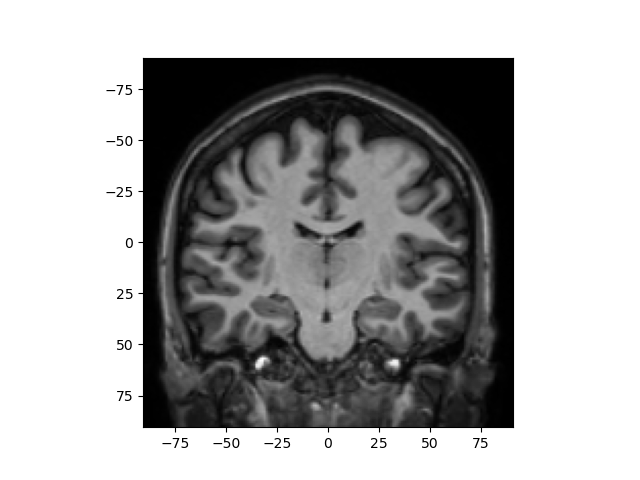

In [693]:
# load the mri shared in chapter 1
# change this path so it works on your system
filename = os.path.join(os.getcwd(), "Adt27-55_01_Adt27-55_01_MNI.img")
print(filename)
# filename = 'your/file/path.img' # don't forget the .hdr file must be in the same directory
vol = nib.load(filename)
I = vol.get_fdata().squeeze()
# get voxel locations, here centered at 0
dI = np.array(vol.header.get_zooms())
nI = np.array(I.shape)
xI = [np.arange(n)*d - (n-1)*d/2 for n,d in zip(nI,dI)]

# extract a 2D slice
J = np.rot90(I[:,I.shape[1]//2])
xJ = [xI[0],xI[2]]

# for drawing in the right position
dJ = [x[1]-x[0] for x in xJ]
extentJ = (xJ[1][0]-dJ[1]/2, xJ[1][-1]+dJ[1]/2, xJ[0][-1]+dJ[0]/2, xJ[0][0]-dJ[0]/2)
fig,ax = plt.subplots()
ax.imshow(J,extent=extentJ,cmap='gray')

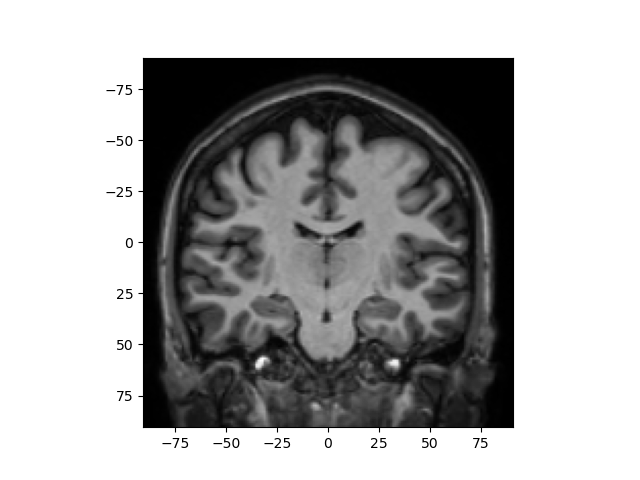

In [694]:
# start by loading an MRI slice
J = np.frombuffer(b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00E\xfd\xc1?\x00\x00\x00\x00\x07w\xdd?\x00\x00\x00 rh\xed?\x00\x00\x00`\x99E\xe4?\x00\x00\x00\xc0\xb0\x01\xea?\x00\x00\x00\xa0\x01\x8f\xee?\x00\x00\x00 \x9c\xdc\xe8?\x00\x00\x00\x00\x90T\xf5?\x00\x00\x00`\'\xda\xf8?\x00\x00\x00\x80\xb4\xa9\xf6?\x00\x00\x00`\x9b\x04\xed?\x00\x00\x00 \xbe\'\xe5?\x00\x00\x00 oY\xd8?\x00\x00\x00\xe0d\xfb\xd8?\x00\x00\x00\xe0,\xa0\xf0?\x00\x00\x00\x807\xe5\xf2?\x00\x00\x00\xc07\x97\xf9?\x00\x00\x00 w\x89\xfd?\x00\x00\x00\x80m"\xf5?\x00\x00\x00 0]\xf8?\x00\x00\x00\xa02o\xfc?\x00\x00\x00\xa0 ~\xfc?\x00\x00\x00`\x15\x81\xf1?\x00\x00\x00\xe0#L\xea?\x00\x00\x00\xc0}\x13\xe6?\x00\x00\x00\xe0[;\xe6?\x00\x00\x00\xc0\x15\x12\xed?\x00\x00\x00\xa0\x9e\xdf\xee?\x00\x00\x00\x00\xce\'\xee?\x00\x00\x00\x80Z^\xef?\x00\x00\x00\x00\xebR\xf7?\x00\x00\x00\x80\x06\xf3\xf6?\x00\x00\x00\xa0\x96\x82\xf6?\x00\x00\x00@Kv\xf5?\x00\x00\x00\xa0\xc6\x16\xec?\x00\x00\x00\x80\xc6\xfe\xdb?\x00\x00\x00\xe0\xe3\xc1\xcc?\x00\x00\x00\xc0\x1d\xc3\xcc?\x00\x00\x00\x80\x1e\xc2\xcc?\x00\x00\x00\xe0\xfbw\xb6?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00 e\xb3\xb0?\x00\x00\x00\x00\x19[\xbd?\x00\x00\x00\x00\xc9\xc3\xbf?\x00\x00\x00\x00\n<\xc7?\x00\x00\x00\x80>\x97\xc5?\x00\x00\x00`2\x07\xc4?\x00\x00\x00 e\x19\xc7?\x00\x00\x00\xe0\x7fV\xc3?\x00\x00\x00\xa0\xa6\x14\xbc?\x00\x00\x00\x80\xcdU\xb2?\x00\x00\x00 Z\xe5\xa5?\x00\x00\x00\xa0\xee \x85?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xa0\xaa\xf8\x9e?\x00\x00\x00\xa0\xe0m\x9a?\x00\x00\x00\xc0{t\x80?\x00\x00\x00@\xfc8\xa6?\x00\x00\x00\xc0&\xa4\x90?\x00\x00\x00\xa0\xb4\xc4\x9c?\x00\x00\x00\xc0\xa0\xc5\xad?\x00\x00\x00\x80\x10\xa5|?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00 +\xc8\x90?\x00\x00\x00\xc0S\x86\xb0?\x00\x00\x00\x008\xca\xca?\x00\x00\x00\x80\xf50\xd9?\x00\x00\x00`\xbf\xaa\xd5?\x00\x00\x00\xc0\xdc\xd7\x92?\x00\x00\x00\x00|N\xc9?\x00\x00\x00\xe0\x83T\xd5?\x00\x00\x00`\xc2\xd8\xe5?\x00\x00\x00`\x8f!\xf5?\x00\x00\x00@x\xd9\xf7?\x00\x00\x00\x80e\x1d\xf4?\x00\x00\x00\x00\r\xab\xf0?\x00\x00\x00\xc0\xa0\x1f\xf1?\x00\x00\x00\x80\x9az\xe8?\x00\x00\x00\xe0\x1f\xe1\xf3?\x00\x00\x00\xa0y\xee\xfd?\x00\x00\x00\x00\x15/\x01@\x00\x00\x00\xe0/\x8d\xf2?\x00\x00\x00\xc0\n\xf1\xe9?\x00\x00\x00\xc00H\xf1?\x00\x00\x00\xc0\xad/\xff?\x00\x00\x00 w\xc2\xf4?\x00\x00\x00\x80\x16\x8f\x00@\x00\x00\x00@\xc1*\x06@\x00\x00\x00\xe0!\x10\xf8?\x00\x00\x00`^\x96\xfc?\x00\x00\x00\xa0\xe1q\x06@\x00\x00\x00 \xba\x07\x0b@\x00\x00\x00 \x91\xfa\xfa?\x00\x00\x00 :\xde\xf4?\x00\x00\x00@\x84\xa0\xf1?\x00\x00\x00\x80\xa0\x8a\xf0?\x00\x00\x00 K\xe8\xf2?\x00\x00\x00\xa0\x92\x8d\xf3?\x00\x00\x00\xa0\xe9h\xf1?\x00\x00\x00\xe0/\x97\xed?\x00\x00\x00 7M\xf2?\x00\x00\x00\xc0\xf4\xd8\xf3?\x00\x00\x00\x80\t\xa4\xf7?\x00\x00\x00\x00|\xcb\xf9?\x00\x00\x00\xa0<P\xe8?\x00\x00\x00\xa0\xca\xa6\xe1?\x00\x00\x00\xa0\xcc\xa5\xdb?\x00\x00\x00\x00\xbf\x07\xd4?\x00\x00\x00\xe0\xc1\x83\xd3?\x00\x00\x00\xc0\x0b\xad\xbd?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xe0\xc7\x90\xb3?\x00\x00\x00\xc0\x05~\xb6?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xc0`p\xc0?\x00\x00\x00`\x9b\xc1\xcb?\x00\x00\x00\xe0\xf1Y\xc8?\x00\x00\x00\xe0>\xfd\xc4?\x00\x00\x00\xc0n\x83\xbc?\x00\x00\x00`\xe9\r\xb2?\x00\x00\x00\xc0\x9cp\xaf?\x00\x00\x00`&*\xb7?\x00\x00\x00\x00\x87v\xa8?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00 GQ\xb0?\x00\x00\x00\x80\xe0@\xb2?\x00\x00\x00\x00=:\xae?\x00\x00\x00\xc0/\x18\xc1?\x00\x00\x00 e\xa7\xb3?\x00\x00\x00 xt\xb0?\x00\x00\x00\xc0*\xf4\xb3?\x00\x00\x00\xc0\xcbh\x82?\x00\x00\x00\xc0\xa6\xf9\x9e?\x00\x00\x00\x00\x0e\x9d\x9d?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00@i\xca\xb0?\x00\x00\x00 \x96\x8e\xca?\x00\x00\x00\xc0\xf8\xd2\xd8?\x00\x00\x00\xa06f\xeb?\x00\x00\x00\x80>\xc3\xeb?\x00\x00\x00\xa0tK\xd3?\x00\x00\x00@V)\xe0?\x00\x00\x00 \x01\xd0\xd4?\x00\x00\x00@3o\xde?\x00\x00\x00\xc0\x1a\xbd\xf3?\x00\x00\x00\xe0\xb2\xda\xfa?\x00\x00\x00\xc0\xc7\x15\xf9?\x00\x00\x00\xe0\x9c\xed\xf7?\x00\x00\x00\xe0\xd8\xbe\xfb?\x00\x00\x00\x80^\x82\xf0?\x00\x00\x00\xe0\xbd?\xf9?\x00\x00\x00@\xb5<\x04@\x00\x00\x00@\xdb\xce\t@\x00\x00\x00 \x99F\xf8?\x00\x00\x00\x00\xf9 \xfa?\x00\x00\x00@S\xc7\x03@\x00\x00\x00 \x95\x10\x08@\x00\x00\x00\xa0\xa7k\xf9?\x00\x00\x00\x80g\xd8\x00@\x00\x00\x00\xc0aM\x06@\x00\x00\x00 f}\xf9?\x00\x00\x00`\x9fZ\xfb?\x00\x00\x00\xa0\x95\x88\x04@\x00\x00\x00\x80\x18\xf6\x08@\x00\x00\x00\x00q\xa7\xfd?\x00\x00\x00\xe0\xa8C\x00@\x00\x00\x00@Y\x17\xfd?\x00\x00\x00\x00\xee\xc4\xf8?\x00\x00\x00 \xda\xab\xff?\x00\x00\x00\xc0\xb3$\xfd?\x00\x00\x00`\xe2q\xf7?\x00\x00\x00\x803u\xf0?\x00\x00\x00\xe0\x0bs\xe5?\x00\x00\x00 \x81\x03\xe2?\x00\x00\x00\xa0\xb0\x1c\xe2?\x00\x00\x00\xc0\xb0!\xe3?\x00\x00\x00\xe0\x0cC\xdf?\x00\x00\x00\xa0(\xba\xdf?\x00\x00\x00 \x94\x85\xdb?\x00\x00\x00\x80s>\xd2?\x00\x00\x00\xa0\x12\xc8\xc1?\x00\x00\x00@s\xcd\xbc?\x00\x00\x00@\x1a\x0f\xb2?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00`\xb2\xda\x9b?\x00\x00\x00`\x18\xa9\xb5?\x00\x00\x00`[\xa7\x92?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00@\x10\x86\xc3?\x00\x00\x00\xc0\xa2\xcb\xc7?\x00\x00\x00`\x95{\x7f?\x00\x00\x00@x\xf1\xbd?\x00\x00\x00`\xea\xd3\xb5?\x00\x00\x00\xc0\x8f\xa0\xb0?\x00\x00\x00\xc0j\xc2\xc2?\x00\x00\x00\xc0\xd0!\xd0?\x00\x00\x00 \tA\xc1?\x00\x00\x00@\x07]\x80?\x00\x00\x00\x00\x89\xd3\x83?\x00\x00\x00`\xcd3\xa7?\x00\x00\x00\xe0\x1c\xd9\xa1?\x00\x00\x00\x80\x0c\xaa\xb5?\x00\x00\x00\x80\xc2r\xc4?\x00\x00\x00\x00\xa8\xe9\xc5?\x00\x00\x00@zm\xc6?\x00\x00\x00\xa0\xe1\x8c\xbc?\x00\x00\x00 M~\x92?\x00\x00\x00\x00wQ\x92?\x00\x00\x00\xc0Z\x89\xbb?\x00\x00\x00`iu\xb8?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00 \x1c\x83Q?\x00\x00\x00\xe0sUv?\x00\x00\x00`\xb5*\xa9?\x00\x00\x00\xc0=\xf6\xb1?\x00\x00\x00\xc0\xb2\x00\xae?\x00\x00\x00@\x1a;\x87?\x00\x00\x00@\xc3\x93p?\x00\x00\x00\xa0\xe5nb?\x00\x00\x00`\x8c\xa1\x82?\x00\x00\x00\xa0\xdd%\xb0?\x00\x00\x00\xe0\x8c\xab\xbe?\x00\x00\x00\x00;#\xd0?\x00\x00\x00 \xf1\xfd\xd9?\x00\x00\x00`\x08\x86\xc9?\x00\x00\x00\x00\xbe\xcd\xd7?\x00\x00\x00\xc0\xd2f\xe6?\x00\x00\x00 \x19\x15\xf0?\x00\x00\x00\x80L\xf0\xe3?\x00\x00\x00@Z\xf6\xd4?\x00\x00\x00 \xb2\xbe\xe3?\x00\x00\x00\x00\xa8\x98\xf8?\x00\x00\x00@\x02\x14\xf2?\x00\x00\x00\xa0\xd2\xc4\xf2?\x00\x00\x00\x80\xc4\xbe\xf4?\x00\x00\x00@8\x10\xf5?\x00\x00\x00\xa0$\x9a\xf9?\x00\x00\x00\x00\xcb\x83\x01@\x00\x00\x00 \x7f}\x03@\x00\x00\x00@("\xfe?\x00\x00\x00\xa0]\x11\xf1?\x00\x00\x00\xe0DH\xfb?\x00\x00\x00\x00\x1e\x9b\x06@\x00\x00\x00\x80\xfd\xe1\x0c@\x00\x00\x00\xc0\x91\xa7\xfd?\x00\x00\x00\xc0$\xad\x05@\x00\x00\x00\x00j\xfb\x0e@\x00\x00\x00@D\xb4\x06@\x00\x00\x00\xa0\x89\xd8\x01@\x00\x00\x00\x80g\xfb\x01@\x00\x00\x00`>=\x03@\x00\x00\x00@\xf4q\x00@\x00\x00\x00`\x94\xee\x00@\x00\x00\x00@=e\xfa?\x00\x00\x00\xc0\xe2@\xf2?\x00\x00\x00\x80\x15B\xf7?\x00\x00\x00 \xf9\xc2\xfd?\x00\x00\x00\x80\xc5Y\x01@\x00\x00\x00\xe0\xd9\xb4\x00@\x00\x00\x00\xa0em\xee?\x00\x00\x00@\xcf\xd3\xf6?\x00\x00\x00\x80yM\xf8?\x00\x00\x00 \\1\xf5?\x00\x00\x00\xa0{C\xfc?\x00\x00\x00\xa0\x87\xaf\xf2?\x00\x00\x00\xc0F\xdf\xec?\x00\x00\x00`\xc7}\xee?\x00\x00\x00\xa0\x1c\xa4\xdc?\x00\x00\x00 \xcf0\xd9?\x00\x00\x00 J\x0e\xd2?\x00\x00\x00\xa08!\xae?\x00\x00\x00\xc0\x88\x1e\x83?\x00\x00\x00\xe0\xaf\x00\xa4?\x00\x00\x00\x80\x82{\xa8?\x00\x00\x00\x80$\'\x96?\x00\x00\x00 FE\xac?\x00\x00\x00 \xe5u\x9a?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xa0\xa5\xfdT?\x00\x00\x00`81\x8e?\x00\x00\x00\xc0dU\x80?\x00\x00\x00\xa0T\xea\xb5?\x00\x00\x00\xe0\xa2\xb5\xd0?\x00\x00\x00`\xd6J\xac?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00 \xbc\xb4\xb0?\x00\x00\x00`\xab\xcf\xb3?\x00\x00\x00\xc0,\x11\x84?\x00\x00\x00\xe0\x1cS\xc1?\x00\x00\x00\xa0\xa0\\\xc4?\x00\x00\x00 }\xf2\xc1?\x00\x00\x00@:\x89\xbd?\x00\x00\x00@\xf4\xc6\xc7?\x00\x00\x00\xc0\x06o\xbc?\x00\x00\x00\xc0\x02\x8f\xa7?\x00\x00\x00\xa0\xcfO\xb0?\x00\x00\x00\xc0\x9dx\xd0?\x00\x00\x00@\x07\xdd\xca?\x00\x00\x00\xa0K\x17\xc3?\x00\x00\x00\xe0\xce"\xbf?\x00\x00\x00 z\x1a\xca?\x00\x00\x00 \xd1%\xcb?\x00\x00\x00@}\x9f\xc4?\x00\x00\x00\xe0\x1a\x0e\xb6?\x00\x00\x00`1o\xb4?\x00\x00\x00\x80\xcd\xa6\xa2?\x00\x00\x00 \xf3\xcf\x81?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xc0\x9c\xc4\x06?\x00\x00\x00\x00\xf7\xd43?\x00\x00\x00 \xd48\xd4?\x00\x00\x00@\xa4\x90\xde?\x00\x00\x00 \xab(\xda?\x00\x00\x00\xe0\xd5\xf3\xb9?\x00\x00\x00`\xed\xf7\xb0?\x00\x00\x00\xe0\x04\x0c\xae?\x00\x00\x00\xa0!\x01\xbb?\x00\x00\x00\xa0B\xd9\xde?\x00\x00\x00\x00m{\xeb?\x00\x00\x00\x00U\x00\xe7?\x00\x00\x00\xa0?\xd4\xcf?\x00\x00\x00\x80=\x1d\xf0?\x00\x00\x00@6\xd4\xeb?\x00\x00\x00\x80*\xa7\xe9?\x00\x00\x00`4\x10\xf0?\x00\x00\x00\xa0\xfd4\xe9?\x00\x00\x00@!,\xf2?\x00\x00\x00\xc0\xea_\xf5?\x00\x00\x00@R\x8f\xf1?\x00\x00\x00 B\x1c\xe8?\x00\x00\x00\x00\xf1\x94\xf5?\x00\x00\x00\xc0\xe8k\xff?\x00\x00\x00 \x19O\x01@\x00\x00\x00\xe0\x8aE\x01@\x00\x00\x00@!#\x02@\x00\x00\x00`\\\xb1\xff?\x00\x00\x00\xe0\xca3\xf0?\x00\x00\x00 \xaa\x1f\xf0?\x00\x00\x00@\x8f\xcb\xe3?\x00\x00\x00`}S\xe5?\x00\x00\x00@\xdc?\xfc?\x00\x00\x00`\x8cz\xf2?\x00\x00\x00\xa0zo\xf3?\x00\x00\x00\xc0S\x8c\xf6?\x00\x00\x00 \x07\xf3\xf2?\x00\x00\x00\xc0\xfb\xe4\xf3?\x00\x00\x00@\x99X\xf9?\x00\x00\x00\xa0\x9c\xeb\xfa?\x00\x00\x00\xa0\x16\x16\xee?\x00\x00\x00@.;\xfb?\x00\x00\x00`c\x1f\xff?\x00\x00\x00\xe0\\\x0e\xfb?\x00\x00\x00 ^\xaf\xf1?\x00\x00\x00\x00\xd1v\x01@\x00\x00\x00\x80H\xae\xfc?\x00\x00\x00@\x94Q\xf0?\x00\x00\x00@\xff\xf4\x03@\x00\x00\x00\x80\x9a\x80\x01@\x00\x00\x00`\xef[\xf7?\x00\x00\x00\x00\xfah\xeb?\x00\x00\x00\x002\xf7\xf6?\x00\x00\x00\xc0A\xc0\xf3?\x00\x00\x00\xc0#X\xf0?\x00\x00\x00\x80\xf9\xd6\xe9?\x00\x00\x00\xe0p\x82\xd1?\x00\x00\x00\x00\xeaY\xda?\x00\x00\x00@\xed\x1d\xe1?\x00\x00\x00\xc0\xa6\xc7\xdd?\x00\x00\x00@Z\xed\xb2?\x00\x00\x00\xa0\xf36\xd4?\x00\x00\x00 .\xbd\xd9?\x00\x00\x00 \xdf\n\xcd?\x00\x00\x00\x80\xcf@\xdd?\x00\x00\x00 \xca\x91\xca?\x00\x00\x00\xc0_\x082?\x00\x00\x00@\x85\x05\x8f?\x00\x00\x00\x00-\x00\xc5?\x00\x00\x00 \xccL\xb6?\x00\x00\x00\xa0\x94\xd0\x14?\x00\x00\x00\xc0e\xda6?\x00\x00\x00\xc0\xaf\x08\x19?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x80.\x17S?\x00\x00\x00@\xc4\xa3V?\x00\x00\x00\xa0\n\xd0\xa2?\x00\x00\x00`\xcc|\xde?\x00\x00\x00\xc0C?\xe1?\x00\x00\x00\x80\xa8\x08\xd8?\x00\x00\x00@\xf1\xc4\xb4?\x00\x00\x00@\x00\x86\xb4?\x00\x00\x00\xc0=\xcb\xc7?\x00\x00\x00\x00\xdc\xe9\xc9?\x00\x00\x00\xa0\xf0\xad\xcb?\x00\x00\x00\xa0\xd43\xd1?\x00\x00\x00\xc0-\xbd\xb7?\x00\x00\x00\x00x\xc5\xce?\x00\x00\x00 \x90\xdb\xde?\x00\x00\x00 X\\\xd5?\x00\x00\x00\xc0\xea\xd2\xd2?\x00\x00\x00\xe0A\xda\xd2?\x00\x00\x00\x00\xf0\xff\xd2?\x00\x00\x00\xe0\xb9\xf2\xce?\x00\x00\x00\xe08\xba\xd0?\x00\x00\x00\xc01\xeb\xc4?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00 \x88\xb9\x83?\x00\x00\x00\xa0\x8f\x03\xab?\x00\x00\x00@\xb6\x86\xb8?\x00\x00\x00 \xd5n\xbd?\x00\x00\x00\xe0\x18\xbd\xc5?\x00\x00\x00 \x11\xd1\xdb?\x00\x00\x00 8\x83\xf2?\x00\x00\x00\xc0^\xc9\xf7?\x00\x00\x00\x80\x8aU\xf4?\x00\x00\x00\x00\xeb\x05\xe2?\x00\x00\x00\x00\xd2]\xdd?\x00\x00\x00 \xces\xed?\x00\x00\x00`\xa1\xb4\xf9?\x00\x00\x00@N\xfc\xf2?\x00\x00\x00\xc0=\xdf\xf9?\x00\x00\x00 (\t\xfc?\x00\x00\x00`\xa4M\xf5?\x00\x00\x00\xe0\xae\x9b\xee?\x00\x00\x00@\x95\xdc\xec?\x00\x00\x00 ~\xba\xf4?\x00\x00\x00@\xc9J\x00@\x00\x00\x00\xc0I\x17\x00@\x00\x00\x00\x80\x0b1\xf3?\x00\x00\x00\xe0\x83\x8b\xee?\x00\x00\x00\x80[D\xfc?\x00\x00\x00\xe0\xfe\xaa\xf6?\x00\x00\x00 \xec\xbb\xfa?\x00\x00\x00\xc0\x07N\x00@\x00\x00\x00@\xdd\xf5\x01@\x00\x00\x00\xc0g\xb8\x0f@\x00\x00\x00\xc0\x04\x10\r@\x00\x00\x00\x00g,\x08@\x00\x00\x00\x00q\xa2\x0b@\x00\x00\x00\xe0Ae\t@\x00\x00\x00\xa0/\x8a\x02@\x00\x00\x00@\x85\xc7\xfb?\x00\x00\x00@\x13\x0c\x02@\x00\x00\x00\x80\xc9G\x01@\x00\x00\x00@\xfa\xf4\x03@\x00\x00\x00\x00\xf2O\t@\x00\x00\x00\xa0Y\x10\x10@\x00\x00\x00\x80\xd7j\x07@\x00\x00\x00\x80\xe7{\x05@\x00\x00\x00\xc0\x024\x07@\x00\x00\x00\xa0\x8e\x9f\x05@\x00\x00\x00\xe0\xe5\xe1\xf9?\x00\x00\x00@\xc1\xe9\xf0?\x00\x00\x00`R\xf4\xed?\x00\x00\x00 \x94\x9f\xed?\x00\x00\x00\xa0\xdd\x06\xf6?\x00\x00\x00`}m\xf1?\x00\x00\x00\xa0\x1a-\xe3?\x00\x00\x00\x00\x08\xba\xf8?\x00\x00\x00\xc0Q\n\xeb?\x00\x00\x00\x00\x7f\xac\xe8?\x00\x00\x00\x80\xf8{\xf4?\x00\x00\x00\xa0a\x07\xf2?\x00\x00\x00\x00\x8e1\xf6?\x00\x00\x00 \xe4V\xf1?\x00\x00\x00\xe0\x16\xe9\xd5?\x00\x00\x00@\x82F\xde?\x00\x00\x00\xc0\x96x\xe0?\x00\x00\x00@m\x9a\xe5?\x00\x00\x00`\xb7)\xee?\x00\x00\x00@\x99\xe1\xee?\x00\x00\x00`\x04\x0f\xe5?\x00\x00\x00\x80x\xde\xd2?\x00\x00\x00`\xfc{\xa3?\x00\x00\x00\xa0D\xa8\xd8?\x00\x00\x00\x80\x9eh\xc9?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x002T\xb5?\x00\x00\x00\x80\x13-\xc8?\x00\x00\x00 ;\x0e\x9c?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xa0\x07\x0c\x83?\x00\x00\x00\xe00\x9a\xbc?\x00\x00\x00\xe0u\xb2\xcf?\x00\x00\x00`&*\xd3?\x00\x00\x00\xa0_\xbf\xca?\x00\x00\x00\x00\xbd=\xb5?\x00\x00\x00\xa0D\x9d\xc6?\x00\x00\x00@Z\xa7\xd1?\x00\x00\x00`\xda\xe5\xcf?\x00\x00\x00 \xf7d\xd0?\x00\x00\x00@/9\xd8?\x00\x00\x00\xc0\x9e;\xe2?\x00\x00\x00\xe0\xc0\xa3\xe3?\x00\x00\x00@G\xa6\xbc?\x00\x00\x00`i\x9b\xe0?\x00\x00\x00\xe0\x12D\xe4?\x00\x00\x00`\xe2\x83\xdb?\x00\x00\x00@\xda\xdc\xb7?\x00\x00\x00\xc0\xaaC\xae?\x00\x00\x00\x00\x174\xa2?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x80\xdb\xd8\xad?\x00\x00\x00\xc0\xe6s\xd1?\x00\x00\x00\xa0\xd0y\xd2?\x00\x00\x00\x80\x02\x8c\xd2?\x00\x00\x00`6a\xd8?\x00\x00\x00\xe0\xca6\xe8?\x00\x00\x00\xa0\xe5\x07\xf2?\x00\x00\x00@6\x8f\xf1?\x00\x00\x00\x00\xa8\xd2\xec?\x00\x00\x00\xc0\xd6\x9a\xf4?\x00\x00\x00@<&\xf3?\x00\x00\x00\xe0\t\xba\xf6?\x00\x00\x00\x00d>\xfd?\x00\x00\x00`*\x19\xf8?\x00\x00\x00@0P\xf9?\x00\x00\x00\xc0\xf8\x16\xf8?\x00\x00\x00\xe0\xbd~\xf5?\x00\x00\x00\xa0\x90\xeb\xff?\x00\x00\x00\xe0\xdd\xf0\xfb?\x00\x00\x00\xe0H\x8c\xf8?\x00\x00\x00\xc0\xe8A\xfa?\x00\x00\x00\xc0\xa9m\xfe?\x00\x00\x00\x00&\x85\xf7?\x00\x00\x00@\xd5\xc6\xfa?\x00\x00\x00\xa0c\xff\x04@\x00\x00\x00\xe0\xffs\xf6?\x00\x00\x00\xc0\xd9\x90\xf5?\x00\x00\x00\xc0\x05\xa7\xf6?\x00\x00\x00\xe0\xfbW\xf2?\x00\x00\x00\xa0\xadI\xec?\x00\x00\x00@\xa8!\xf8?\x00\x00\x00\xa0\xe3\xd3\x04@\x00\x00\x00`i\xab\x0e@\x00\x00\x00\xc0\xba\x8f\n@\x00\x00\x00\xa0EA\x07@\x00\x00\x00@\x800\t@\x00\x00\x00\xe0\\\xdb\x11@\x00\x00\x00 *<\x15@\x00\x00\x00\xe0cL\x16@\x00\x00\x00\x00\xd4@\x17@\x00\x00\x00`\x84\x0f\x1a@\x00\x00\x00\x80\x91\xcf\x15@\x00\x00\x00\x80\xac\xaa\x11@\x00\x00\x00\x80\xbe\xc7\x0e@\x00\x00\x00\x00\x1b\xf4\x10@\x00\x00\x00\xe0\xd4\xb0\x10@\x00\x00\x00\x00|\xb8\n@\x00\x00\x00@>\xbf\x01@\x00\x00\x00\xc0Sp\xf6?\x00\x00\x00\xa0n\xaa\x02@\x00\x00\x00\x80\xb7\xfa\x05@\x00\x00\x00\xe0\xfdL\x04@\x00\x00\x00\x00<\xd7\xfc?\x00\x00\x00`{(\xf9?\x00\x00\x00\x00\xad\xdb\xf2?\x00\x00\x00\x00\xc5\x84\xed?\x00\x00\x00\x80w\xc0\xfa?\x00\x00\x00 \x00\x0b\xf6?\x00\x00\x00\x80F\xb3\xf2?\x00\x00\x00\x00+\x91\xf4?\x00\x00\x00 \xbe\t\x00@\x00\x00\x00\x00\xfc\xdc\x04@\x00\x00\x00\xe0\xb8\x89\x01@\x00\x00\x00\x80\x1e\xd4\xf0?\x00\x00\x00\xe0\xb7\xd7\xec?\x00\x00\x00\xc0\xa4\x12\xec?\x00\x00\x00 \xfc\xfe\xe7?\x00\x00\x00`\x8a6\xe4?\x00\x00\x00\x00\x02\x1d\xf5?\x00\x00\x00\xc0\x9e\x96\xef?\x00\x00\x00\xe0\xe0t\xed?\x00\x00\x00\xc0\xed\'\xf6?\x00\x00\x00@9\x9b\xf4?\x00\x00\x00@f\x0f\xe1?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x80="\xbd?\x00\x00\x00\xa0\xd36\xd0?\x00\x00\x00@\xee4\xa2?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00`\x16X{?\x00\x00\x00\xa0\x04\xf0\x93?\x00\x00\x00\xc0\xfbc\x97?\x00\x00\x00\xa0M\xdb\xc5?\x00\x00\x00\xc0\xe9z\xd2?\x00\x00\x00`\xd1\xe7\xd1?\x00\x00\x00\x80\xbb\x00\xb5?\x00\x00\x00\xa0I\xfa\xb0?\x00\x00\x00@)|\xb8?\x00\x00\x00\xc0\x9e\xe1\xc0?\x00\x00\x00@\xae\x1c\xd1?\x00\x00\x00 \x044\xca?\x00\x00\x00@}\xd3\xcb?\x00\x00\x00\x00V\x17\xd0?\x00\x00\x00\xa0\xcdR\xc9?\x00\x00\x00`$\xb5\xd8?\x00\x00\x00\x80\x18\xf4\xd6?\x00\x00\x00\xc0r\xd4\xce?\x00\x00\x00\x00#\x0f\xd7?\x00\x00\x00\xc0\xe8\xe5\xd8?\x00\x00\x00 ?_\xce?\x00\x00\x00\xa0\x00\x99\x7f?\x00\x00\x00\xa0>\xa8N?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00`q7\xb1?\x00\x00\x00\xa0\xac\xc6\xd3?\x00\x00\x00\xc0\xea\xda\xe3?\x00\x00\x00\xa0\xd8\xa3\xe3?\x00\x00\x00\xc0\xef\xa8\xe2?\x00\x00\x00@\x10\xb4\xf2?\x00\x00\x00\xe0\xf95\xfb?\x00\x00\x00`\xa3A\xfa?\x00\x00\x00@v\x0b\xf2?\x00\x00\x00 \xcc\x15\xe6?\x00\x00\x00`\x19Y\xe9?\x00\x00\x00@r\xe5\xf4?\x00\x00\x00\xc0\x8d;\xff?\x00\x00\x00@M\x1e\xfe?\x00\x00\x00`\x08\xe9\xf9?\x00\x00\x00\x80\'\xa5\xf8?\x00\x00\x00\xe0\x83g\xfa?\x00\x00\x00\xe011\xfa?\x00\x00\x00\xa0\xa5\xdd\xf4?\x00\x00\x00 \x89\xa5\xf4?\x00\x00\x00\x00\x8e)\xfa?\x00\x00\x00`l0\xf6?\x00\x00\x00`e\xe2\xfc?\x00\x00\x00\x80\x91\xaf\x08@\x00\x00\x00\xa0\x7f\x14\x13@\x00\x00\x00\xa0\xa4c\x07@\x00\x00\x00\x80\x08:\x08@\x00\x00\x00@\xc7\xa9\n@\x00\x00\x00 \x7f\x0e\t@\x00\x00\x00@S\xb3\t@\x00\x00\x00\xe0\xa9\xbf\x0c@\x00\x00\x00@Q*\x10@\x00\x00\x00`\x06f\x11@\x00\x00\x00 \xdc\xc7\n@\x00\x00\x00\x00\xd7e\x0c@\x00\x00\x00\x80A\xec\x13@\x00\x00\x00 \xb0s\x1e@\x00\x00\x00@D\xe4 @\x00\x00\x00\xc0\x0b1!@\x00\x00\x00\xa0\xf0j @\x00\x00\x00\xa0P\x9d\x1d@\x00\x00\x00\x80\x1c\xd8\x1b@\x00\x00\x00\x00\xea\x0b\x1c@\x00\x00\x00 \x16a\x1a@\x00\x00\x00`\xb3E\x12@\x00\x00\x00`\x8aw\x10@\x00\x00\x00`\xe0\xd8\x0e@\x00\x00\x00\x00;\xeb\x0c@\x00\x00\x00\xa0\x1a{\t@\x00\x00\x00 \x93\xad\x0b@\x00\x00\x00\x80\xfa%\x06@\x00\x00\x00@\xd6\xb6\xfa?\x00\x00\x00 /L\xf5?\x00\x00\x00\xa0^@\xf8?\x00\x00\x00\x00\xd9\xca\xfd?\x00\x00\x00\xe0%\xcf\xff?\x00\x00\x00@\xfe>\xf2?\x00\x00\x00 kv\xf6?\x00\x00\x00`\xbaQ\xf8?\x00\x00\x00\xe0\xb1\\\xf8?\x00\x00\x00\x80#7\x00@\x00\x00\x00\xc0\xae$\x03@\x00\x00\x00\xc0d\xdb\xff?\x00\x00\x00\x80\x1c\xfb\xf0?\x00\x00\x00\x80u\x95\xeb?\x00\x00\x00\x80\xc6\x84\xe5?\x00\x00\x00\x00p\xa3\xe2?\x00\x00\x00\xa0\t\x90\xe8?\x00\x00\x00\x80\x7f\xfe\xfe?\x00\x00\x00\xe07\xe3\xf2?\x00\x00\x00\x00\x0c{\xf0?\x00\x00\x00\x00\xa5L\xfe?\x00\x00\x00`\x98\x97\xf5?\x00\x00\x00\xe0\x03\xd5\xed?\x00\x00\x00\x80\xa2\x18\xe1?\x00\x00\x00\xc0\xf5\x84\xc2?\x00\x00\x00 \xf1\x88\x9c?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xc0tO\xaa?\x00\x00\x00\xc0#\xc9\xbc?\x00\x00\x00 \xd6A\x8f?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00 u\x19L?\x00\x00\x00@\xe5\x9f\xb0?\x00\x00\x00\x00\x07(\xca?\x00\x00\x00\xc0\xf8k\xd5?\x00\x00\x00@T\\\xd5?\x00\x00\x00@\x81?\xd0?\x00\x00\x00\xa0\x05\x00\xbf?\x00\x00\x00\xa0KF\x9a?\x00\x00\x00@\xa7>\xb7?\x00\x00\x00\x00\xe2\x7f\xcb?\x00\x00\x00 \xcc\xf2\xac?\x00\x00\x00`\xfb\x18\xc0?\x00\x00\x00\x80\xc1\xe0\xaa?\x00\x00\x00 \x80{\xc5?\x00\x00\x00 \x05c\xd5?\x00\x00\x00\xe0\x9f5\xd4?\x00\x00\x00`\x94\x01\xd2?\x00\x00\x00\x00d4\xc7?\x00\x00\x00@\x82S\xba?\x00\x00\x00\x00%\n\xcb?\x00\x00\x00\x80&\xaa\xd0?\x00\x00\x00@\xe7\xad\xc6?\x00\x00\x00\xe0u\xf2\x9c?\x00\x00\x00`\x17\xf0i?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00 \xf1d\xbe?\x00\x00\x00`\xbe6\xd4?\x00\x00\x00\xa0;\xd9\xe0?\x00\x00\x00\xc0/3\xe2?\x00\x00\x00@C\xd8\xdf?\x00\x00\x00\xe0r\xdb\xde?\x00\x00\x00\x00\xdbt\xeb?\x00\x00\x00\x80w\xaf\xf3?\x00\x00\x00\xe0\x08\xf6\xf5?\x00\x00\x00\x00\xef\xa2\xf5?\x00\x00\x00\x00\xb1Y\xf6?\x00\x00\x00 \x11S\xf9?\x00\x00\x00\xc0\xdb\xaa\xfa?\x00\x00\x00\x80\x95,\xfa?\x00\x00\x00\x00\x81\xca\xf8?\x00\x00\x00\xc0;+\xf6?\x00\x00\x00@\xaat\xf6?\x00\x00\x00\xe0\xe2\xed\xfa?\x00\x00\x00\xa0{{\x02@\x00\x00\x00 %i\xfa?\x00\x00\x00\xa0\xa3\xd5\xf2?\x00\x00\x00\x00\x9f\'\xf3?\x00\x00\x00\xc0\xb9{\xf3?\x00\x00\x00\xc0\xef\xda\x02@\x00\x00\x00\xa04(\x10@\x00\x00\x00\xc0\r\x08\x17@\x00\x00\x00\xa0\x92\xdb\x14@\x00\x00\x00\x80\xc9\x15\x17@\x00\x00\x00\xc0x\\\x19@\x00\x00\x00 \xe2\xa6\x1a@\x00\x00\x00\x00\xb8|!@\x00\x00\x00\xa0\xcd\x80\'@\x00\x00\x00\xc07\xfa.@\x00\x00\x00\x00A\xb43@\x00\x00\x00\x800+6@\x00\x00\x00\xe0\xd4 7@\x00\x00\x00\x00\xaa\x009@\x00\x00\x00\xa0\xd7$=@\x00\x00\x00\xa0K3<@\x00\x00\x00`\xf4\xd7:@\x00\x00\x00\xc0[(9@\x00\x00\x00\x00\x9657@\x00\x00\x00\xa0\xca\x146@\x00\x00\x00@4\xa86@\x00\x00\x00@$\xe45@\x00\x00\x00\xa0\x94t0@\x00\x00\x00\x80y\x0b"@\x00\x00\x00\xe0\x0fj\x14@\x00\x00\x00\xa0\xc4Q\x14@\x00\x00\x00@\xf1\xd7"@\x00\x00\x00\xc0\xff\xec$@\x00\x00\x00`\xcd8\x1c@\x00\x00\x00\xe0\xd9Q\x04@\x00\x00\x00\x80\x84[\x04@\x00\x00\x00\xa0\x83]\x04@\x00\x00\x00\xa0\xcf\x1c\x08@\x00\x00\x00\x80$"\t@\x00\x00\x00\xe0|H\xf2?\x00\x00\x00\x80\x8bB\xf1?\x00\x00\x00\xa0(f\xf7?\x00\x00\x00\xa0\x91\x9c\xfd?\x00\x00\x00@Z\x01\xfa?\x00\x00\x00 fA\xfe?\x00\x00\x00\x00\x96G\xfe?\x00\x00\x00\x80\x98e\xfa?\x00\x00\x00\x00r\xe6\xfa?\x00\x00\x00\xe0\x1a\xed\xf0?\x00\x00\x00\x80\xed\x16\xe5?\x00\x00\x00\xc0\xf3a\xe7?\x00\x00\x00 \xf9@\xf7?\x00\x00\x00\x00\xe1\x8a\xe7?\x00\x00\x00 %\x0c\xe1?\x00\x00\x00\xc06\xca\xf1?\x00\x00\x00\xa0\xc0k\xe6?\x00\x00\x00@Q\xaa\xf0?\x00\x00\x00 \x8f\xc1\xef?\x00\x00\x00\x80\xf3u\xd1?\x00\x00\x00`\xeco\xb4?\x00\x00\x00\x00\xd5\xc8\x8c?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00@\xef\xdd\xae?\x00\x00\x00\x80\x83\xc7\xc9?\x00\x00\x00\xa0\xc1\x94\xa7?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00`\xe5\x82w?\x00\x00\x00\xe0\x89@\x91?\x00\x00\x00 F\xfd\x91?\x00\x00\x00\xe0:\xa1~?\x00\x00\x00`\xb8\xaf\xaf?\x00\x00\x00 \xa0\xfa\xc8?\x00\x00\x00\xa0\x11 \xd3?\x00\x00\x00@\xdf\xe7\xd4?\x00\x00\x00\x002G\xd2?\x00\x00\x00\x80F\x1e\xc7?\x00\x00\x00 \xabt\xac?\x00\x00\x00\x00Cl\xc4?\x00\x00\x00\xc0\xd8\x9b\xd3?\x00\x00\x00@\xef\xac\xa6?\x00\x00\x00@\\O\xb1?\x00\x00\x00\x00\xe2q\xc1?\x00\x00\x00 \xc7\x9e\xd0?\x00\x00\x00@j\\\xd7?\x00\x00\x00\x80\x01\xa1\xd5?\x00\x00\x00@J\xa8\xd1?\x00\x00\x00\x80^p\xc6?\x00\x00\x00@\xe1\xa8\xb1?\x00\x00\x00\x00\xf1>w?\x00\x00\x00\xa0\xb8\x03\xb9?\x00\x00\x00`\xf2\x86\xbf?\x00\x00\x00 \xacb\xb4?\x00\x00\x00\xe01B\x81?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xa0Z\xcb\x98?\x00\x00\x00\x80\xaf\xd7\xb7?\x00\x00\x00\xa0\xdd\x11\x98?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xc0Du\xb1?\x00\x00\x00\x00T\n\xd5?\x00\x00\x00\x00\xaa\xb5\xe4?\x00\x00\x00\x00\xa0\x1c\xea?\x00\x00\x00\xc0Bp\xe9?\x00\x00\x00`~1\xe9?\x00\x00\x00 ^`\xe8?\x00\x00\x00`%\xfa\xe4?\x00\x00\x00\x00\xa3\x97\xe9?\x00\x00\x00\x80\xe5\xac\xf6?\x00\x00\x00\xa0\x08`\x01@\x00\x00\x00`\x85\xfb\x01@\x00\x00\x00\xe0K\x19\x01@\x00\x00\x00@\x13E\xfc?\x00\x00\x00`:\x90\xf4?\x00\x00\x00\xa0I\xdc\xf2?\x00\x00\x00@\x01\xb6\xf2?\x00\x00\x00\x80\xe2\xdf\xf0?\x00\x00\x00\xa0\xfc`\xf4?\x00\x00\x00\xa0xM\x0c@\x00\x00\x00\xc0R[\t@\x00\x00\x00`^\x13\x05@\x00\x00\x00\x80W\x17\x04@\x00\x00\x00`\x01\xcc\x04@\x00\x00\x00\xa0\xab-\x08@\x00\x00\x00\x005@\x13@\x00\x00\x00\xa0sQ @\x00\x00\x00\xe0M\xba\'@\x00\x00\x00\xc0\xbb\x8c/@\x00\x00\x00`(l2@\x00\x00\x00\xe0\x85\xbf3@\x00\x00\x00`\n\xb28@\x00\x00\x00\xe0\xees>@\x00\x00\x00 \x9d6B@\x00\x00\x00\x00\x17$E@\x00\x00\x00\x00\xda\xdeG@\x00\x00\x00\xc0\xa1\x1fH@\x00\x00\x00\x80\xc6\x10H@\x00\x00\x00\xe02\xf1H@\x00\x00\x00\x00\xae\'H@\x00\x00\x00`\xed\x05G@\x00\x00\x00 \r\xc6E@\x00\x00\x00\x80$\x94D@\x00\x00\x00\x80(\xd8C@\x00\x00\x00\x00|\x99C@\x00\x00\x00\x80e\x86B@\x00\x00\x00\xe0\xe0\x80>@\x00\x00\x00@\x1b\xe12@\x00\x00\x00 7\xe4*@\x00\x00\x00\xc0\x06\r/@\x00\x00\x00\xa0\xf7\xd4:@\x00\x00\x00@\x84^>@\x00\x00\x00\xa0,\xd37@\x00\x00\x00\x00\x1dl*@\x00\x00\x00\x00\xe0\x07 @\x00\x00\x00\xa0I\xdc\x16@\x00\x00\x00\xe0b\xbf\x12@\x00\x00\x00\xa0\x93h\x10@\x00\x00\x00\xc0+\'\x05@\x00\x00\x00\xc0?v\x00@\x00\x00\x00\x80\xa0\xdd\xfd?\x00\x00\x00\x80\xff\xa0\xfc?\x00\x00\x00\xe0!\x8d\xf4?\x00\x00\x00\xe0\xadh\xfb?\x00\x00\x00 \xcf\xa9\x01@\x00\x00\x00\x80\x04\xcf\x04@\x00\x00\x00 \x96\x87\x06@\x00\x00\x00\x80\xa7\xa5\xf7?\x00\x00\x00 \x03\xf9\xe6?\x00\x00\x00\xc0\x06,\xe9?\x00\x00\x00\xe0/\x87\xea?\x00\x00\x00\xa0e\t\xe3?\x00\x00\x00`\x9d\x9b\xd9?\x00\x00\x00\x00\xb0P\xd6?\x00\x00\x00\xa0x}\xe3?\x00\x00\x00\xc06\x91\xf1?\x00\x00\x00\xa0\x14\xae\xf1?\x00\x00\x00\xc0O\xfd\xdf?\x00\x00\x00\xe0\xdf4\xd0?\x00\x00\x00\x00\rR\xb5?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00@\xb1E\x1d?\x00\x00\x00`I6F?\x00\x00\x00\x80%.+?\x00\x00\x00`8\xa3\xb6?\x00\x00\x00\x80\x06!\xd2?\x00\x00\x00`1"\xb0?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xc0\xda\xa2\x8f?\x00\x00\x00\xc0<\xef\xba?\x00\x00\x00\xa0~\xbc\xba?\x00\x00\x00\xc0o\x0e\xbc?\x00\x00\x00\xe0P\x97\xc1?\x00\x00\x00@\xf5z\xc1?\x00\x00\x00\x80\xd6\x1c\xac?\x00\x00\x00\x00\xd4\xeb\x99?\x00\x00\x00@\t0\xb5?\x00\x00\x00\xe0\xff\xaf\xc2?\x00\x00\x00\xc0\x9a\x84\xc7?\x00\x00\x00@\xa5\xaf\xd1?\x00\x00\x00\xe0\xa4\xdf\xda?\x00\x00\x00\xe0\xa7\xe6\xcd?\x00\x00\x00\x00\xfdr\xc8?\x00\x00\x00\xa0R\x9a\xca?\x00\x00\x00\x80\x8eR\x90?\x00\x00\x00\x00.a\xb1?\x00\x00\x00\xe0\x04\x00\xc5?\x00\x00\x00\xa0k\r\xbf?\x00\x00\x00\xc0\xe9\x89\xb3?\x00\x00\x00 \xc4\x82\xcd?\x00\x00\x00\xa0q\xd9\xcb?\x00\x00\x00\x80xk\xc3?\x00\x00\x00\xa0\xa6\x18\xb1?\x00\x00\x00\xe0g\xe5t?\x00\x00\x00\x800\xab\xb6?\x00\x00\x00@\xb2\xbd\xbc?\x00\x00\x00`\xbdc\xb3?\x00\x00\x00\x00\xb2\x14\x7f?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xe0;:a?\x00\x00\x00@\x1b\t\xad?\x00\x00\x00\x80\x89n\xa2?\x00\x00\x00 G.\xb3?\x00\x00\x00 \x03M\xd2?\x00\x00\x00\xc0\x15\xe2\xc5?\x00\x00\x00\xc0\xdex\xcb?\x00\x00\x00\xe0\x0b\x84\xd1?\x00\x00\x00\x80\x1eF\xc8?\x00\x00\x00@\xf8\x8d\xc7?\x00\x00\x00\xa0)\xcc\xe0?\x00\x00\x00@\xa1/\xee?\x00\x00\x00`\x97\xb7\xf0?\x00\x00\x00`\xac\x81\xf6?\x00\x00\x00\xa0"]\xfa?\x00\x00\x00@1\xf1\xf9?\x00\x00\x00\x80\xeds\xf1?\x00\x00\x00\x80\x9f\'\xf3?\x00\x00\x00\x80zZ\x00@\x00\x00\x00 E\xc3\x06@\x00\x00\x00\xa0\x1c\x17\xfe?\x00\x00\x00`w\x03\xf8?\x00\x00\x00\x80\xc4\xff\xf5?\x00\x00\x00\xe0}#\xf7?\x00\x00\x00\x80|\x95\xfb?\x00\x00\x00\x00\x18\xb1\xf6?\x00\x00\x00@\xe3E\xf3?\x00\x00\x00\xe0L\x18\xf7?\x00\x00\x00\xa0\xfbn\x07@\x00\x00\x00\x00\xb27\x10@\x00\x00\x00\x80i\xdf\x14@\x00\x00\x00\xa0\x0e\xf7\x19@\x00\x00\x00\x00\xba\xe0\x1e@\x00\x00\x00\xa0\xf4f#@\x00\x00\x00@\xd3\xf9,@\x00\x00\x00\x00\xc0\x106@\x00\x00\x00`\x06c<@\x00\x00\x00 dXA@\x00\x00\x00\x80\xf5aC@\x00\x00\x00`\x145D@\x00\x00\x00`U\xaeF@\x00\x00\x00 \x1d\x12I@\x00\x00\x00\xe0\xb3[J@\x00\x00\x00\x00$.J@\x00\x00\x00 \x10\x9fJ@\x00\x00\x00\xc0X\xc2I@\x00\x00\x00 6\xb1H@\x00\x00\x00\xa0\x94\x1dH@\x00\x00\x00\xa0\xc0{H@\x00\x00\x00@m\xb6G@\x00\x00\x00@\xf2cF@\x00\x00\x00 \x94\xf0D@\x00\x00\x00\xe0\x97\xa8C@\x00\x00\x00\xc0\xac\x89B@\x00\x00\x00`\x9fdA@\x00\x00\x00\x80^\x0c@@\x00\x00\x00`\x8a\x82<@\x00\x00\x00\xe0\xa53<@\x00\x00\x00\xc0\xe7\x8a@@\x00\x00\x00\x80O\xd1F@\x00\x00\x00\x80\x17wI@\x00\x00\x00\xa0\x07sF@\x00\x00\x00@\xcf%@@\x00\x00\x00`\x8f)4@\x00\x00\x00\xa0\xcb\x840@\x00\x00\x00\xe0\xb2\xf0+@\x00\x00\x00`wI\'@\x00\x00\x00\xe0\xa3\x08"@\x00\x00\x00\xa0\xfc]\x14@\x00\x00\x00\xa0\xd7X\x05@\x00\x00\x00\xc0\xcdZ\xfb?\x00\x00\x00\x00=\x8f\xf7?\x00\x00\x00 IZ\x00@\x00\x00\x00@M\xba\x02@\x00\x00\x00\x80\xeb4\x03@\x00\x00\x00\xe0$\x8b\x06@\x00\x00\x00\x00\xb7=\xf5?\x00\x00\x00`\xfa\xc2\xe5?\x00\x00\x00\x00\xa2\x93\xf0?\x00\x00\x00@Nq\xf0?\x00\x00\x00@\xa8\x0b\xf0?\x00\x00\x00 9\xa5\xea?\x00\x00\x00@\x06\x9b\xe5?\x00\x00\x00\x00t*\xf7?\x00\x00\x00\xc0\x9b\x1b\xf5?\x00\x00\x00 \xb9U\xed?\x00\x00\x00\xe0jG\xe0?\x00\x00\x00\xa0cl\xe2?\x00\x00\x00 E\xd4\xd6?\x00\x00\x00\x00 \x14\xca?\x00\x00\x00\x00\xd9\xfa\xcd?\x00\x00\x00 \x1e\xd7\xc7?\x00\x00\x00\xa0\xa7\x7f\xc5?\x00\x00\x00`\x08-\xbe?\x00\x00\x00\xa0\x8bb\x92?\x00\x00\x00\x00pG\xb5?\x00\x00\x00\x80\x84\xe2\xa7?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x80\x13\xdf\xa1?\x00\x00\x00`\xef\x8c\xcd?\x00\x00\x00\xc0\xf0\xf5\xca?\x00\x00\x00 \xf19\xca?\x00\x00\x00\x00\xec\xa1\xcf?\x00\x00\x00@\x0f\xc2\xcc?\x00\x00\x00`\xf7\x0b\xba?\x00\x00\x00\x00\x96f\xb4?\x00\x00\x00`\xa9\x9d\xc9?\x00\x00\x00\x80C\x8d\xd5?\x00\x00\x00\x80\xec\x01\xc7?\x00\x00\x00\x00\xe5\n\xc6?\x00\x00\x00`\xc3K\xdb?\x00\x00\x00\xe0\xf3O\xd7?\x00\x00\x00\x00\xb5\xb4\xc6?\x00\x00\x00\xe0\xaf\x91\xbe?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00@<i\xab?\x00\x00\x00`0v\xbd?\x00\x00\x00\x00:"\xbe?\x00\x00\x00\x005\xdb\xa1?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00@\xbf\x1d\x86?\x00\x00\x00\x80\x8ae\x96?\x00\x00\x00 T\x80d?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xe0$\xa8\x81?\x00\x00\x00@\xd0\xd6\xc9?\x00\x00\x00\xc0\x15\x86\xc6?\x00\x00\x00\x00\xb7\xd7\xd2?\x00\x00\x00\xe0V(\xeb?\x00\x00\x00@U\xd5\xe5?\x00\x00\x00\x00\xd1\x80\xec?\x00\x00\x00`M\xab\xf0?\x00\x00\x00\x00\xb1M\xe5?\x00\x00\x00\xe0\x105\xd4?\x00\x00\x00\x80\x11\x89\xe3?\x00\x00\x00\x00\'\x17\xf3?\x00\x00\x00\x80\xa8[\xf9?\x00\x00\x00\xc0\x81M\xfa?\x00\x00\x00\xc08\xad\xfb?\x00\x00\x00\xc0\xcd\xd4\xfc?\x00\x00\x00 \xbc^\xfc?\x00\x00\x00\xc0\xa7%\xfd?\x00\x00\x00@\x07\xd7\x02@\x00\x00\x00\x80\xdb_\x08@\x00\x00\x00@}C\t@\x00\x00\x00\x00\x99\x0b\x01@\x00\x00\x00\x00T\x87\x05@\x00\x00\x00`~3\x10@\x00\x00\x00\xc0\x13O\n@\x00\x00\x00\xa0TE\x08@\x00\x00\x00\xc01\x88\x0b@\x00\x00\x00@\x9ck\x10@\x00\x00\x00 \x98<\r@\x00\x00\x00`\xa2\xbc\x1c@\x00\x00\x00\xc0\xca\xe0%@\x00\x00\x00\x00\xeb\x15-@\x00\x00\x00 \x87\xe33@\x00\x00\x00\xc0\x9ch=@\x00\x00\x00\x80a=D@\x00\x00\x00@msI@\x00\x00\x00\xc0\xdalJ@\x00\x00\x00 \x1d\x87J@\x00\x00\x00\x80\xac\xa6I@\x00\x00\x00\x80\xdb\xf5G@\x00\x00\x00@\xfbIG@\x00\x00\x00 \xe1\xbaG@\x00\x00\x00 \xd2pG@\x00\x00\x00\xe0\xe2\x9eE@\x00\x00\x00\xa0\x98\x0cC@\x00\x00\x00\xe0;\xaaA@\x00\x00\x00\xe0\x9cPA@\x00\x00\x00`\x1e\xe6A@\x00\x00\x00 !fB@\x00\x00\x00\x80]\x8cB@\x00\x00\x00\xa0\xc0\x18B@\x00\x00\x00\x80\x8a\xd3@@\x00\x00\x00\xa0\x94\xa4<@\x00\x00\x00\xa0\x9e7;@\x00\x00\x00\x0024;@\x00\x00\x00\x80\xa1\xb6:@\x00\x00\x00\xc0\x8a\x1b>@\x00\x00\x00\xc0\x08;@@\x00\x00\x00\xa0\x03\x8aA@\x00\x00\x00`\xdc\xbaC@\x00\x00\x00\xc0X\xafE@\x00\x00\x00\xc0\x0b\xe0E@\x00\x00\x00\xe0u\x03E@\x00\x00\x00\x00\x8d\x16D@\x00\x00\x00\xa0v\x88D@\x00\x00\x00\x80"SD@\x00\x00\x00\xe0\x17ZB@\x00\x00\x00@\x8b\x939@\x00\x00\x00\x80\xac\xfb\'@\x00\x00\x00@(7\x17@\x00\x00\x00`e\xc6\x13@\x00\x00\x00 \x02\x8e\x0b@\x00\x00\x00`\xa8\xe8\x04@\x00\x00\x00\xc0<\xb1\xf9?\x00\x00\x00\xe0\xf7\xfd\xe4?\x00\x00\x00\xa0\'\xbd\xe7?\x00\x00\x00\xa0%\xde\xdf?\x00\x00\x00\xc0@\x86\xde?\x00\x00\x00\xe0\xc91\xe6?\x00\x00\x00@\xc4G\xeb?\x00\x00\x00 >\xa0\xe7?\x00\x00\x00\xa0\xd8\x1f\xe4?\x00\x00\x00 \xe4\xf7\xe5?\x00\x00\x00@nT\xf5?\x00\x00\x00`q[\xf9?\x00\x00\x00\x00\x93\x98\xf4?\x00\x00\x00\xa0[\xdb\xe2?\x00\x00\x00 n\x14\xed?\x00\x00\x00\xa0P\x89\xeb?\x00\x00\x00`E\x82\xea?\x00\x00\x00\x80<\x0b\xed?\x00\x00\x00\xc0\x1b\xfa\xe4?\x00\x00\x00\xc0\x07\xd8\xe1?\x00\x00\x00\x80?s\xda?\x00\x00\x00\x80|0\xc5?\x00\x00\x00\xa0@\xab\xd2?\x00\x00\x00\xc0j\x08\xc3?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x80\x80\x86h?\x00\x00\x00\xe0\x16e\x93?\x00\x00\x00\xa0\x81~\x95?\x00\x00\x00@`\x02\xc1?\x00\x00\x00 \x04\xad\xd3?\x00\x00\x00@\x91\xf9\xcb?\x00\x00\x00\x80\x02\xc7\xc6?\x00\x00\x00\x80\x94\xa3\xd0?\x00\x00\x00\xa0\xa1\x93\xdc?\x00\x00\x00\xc0\xb4\xfe\xe0?\x00\x00\x00@\x90\xd3\xd4?\x00\x00\x00\x00=\xad\xc5?\x00\x00\x00\x80\xf5\x8e\xc6?\x00\x00\x00\x00\x8a:\xc5?\x00\x00\x00\x80\x97v\xc5?\x00\x00\x00\x80\xd2\x17\xca?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xe0W\\g?\x00\x00\x00\x00\xbc\xf1s?\x00\x00\x00\x80\xfc\x054?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xe0E\x95g?\x00\x00\x00 \xeb\xd2\x8d?\x00\x00\x00@\xe5\x14\x90?\x00\x00\x00 \xf4\xa3\xac?\x00\x00\x00 \xba\xd6\xb7?\x00\x00\x00\xe0u\xdd\x84?\x00\x00\x00\xe0F\x11|?\x00\x00\x00\x00\xfa*z?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xc0\xbd\xcew?\x00\x00\x00\xc0\xc4\x8f\x94?\x00\x00\x00 \x80\xe9\x9b?\x00\x00\x00\x00b\xec\xd3?\x00\x00\x00`\xa3j\xed?\x00\x00\x00@h\xf3\xfd?\x00\x00\x00\xa0p\x14\xf9?\x00\x00\x00@\xf8u\xf5?\x00\x00\x00@~\x80\xf2?\x00\x00\x00\xe0\xcc\x96\xee?\x00\x00\x00`\x06%\xe4?\x00\x00\x00`n\x87\xd1?\x00\x00\x00 |\xe4\xcf?\x00\x00\x00\xc0\xb01\xf0?\x00\x00\x00\xc0\x0e\xe0\xf1?\x00\x00\x00\xe0-\xa6\xf2?\x00\x00\x00\x00\xf1\xd7\xf9?\x00\x00\x00\x00\xb1S\t@\x00\x00\x00\xa0Fr\x07@\x00\x00\x00\xa0[\x14\x02@\x00\x00\x00\xe0\x12\x0f\xff?\x00\x00\x00\x00\xcf\x81\n@\x00\x00\x00@A\x0f\xfa?\x00\x00\x00\xa0*\xc9\x03@\x00\x00\x00\x00=q\x11@\x00\x00\x00 l\'\x01@\x00\x00\x00\xe0S\x92\x13@\x00\x00\x00\xa0\x95\x93"@\x00\x00\x00`2\xb7-@\x00\x00\x00@\xc0\xeb5@\x00\x00\x00\xc0\xf9\xe7;@\x00\x00\x00 f\x9e@@\x00\x00\x00\x80\x18\x0cC@\x00\x00\x00\x00fEE@\x00\x00\x00`\xf5hG@\x00\x00\x00 \xc1\xf2I@\x00\x00\x00\xc0\xd6eL@\x00\x00\x00\xc0y\x91K@\x00\x00\x00@\xed\xe6I@\x00\x00\x00\x00Z\xf3F@\x00\x00\x00`\x82\xc8B@\x00\x00\x00\xe0\xe9\xe8=@\x00\x00\x00\x00uC=@\x00\x00\x00 M\x1c@@\x00\x00\x00\xc0\xb5\x9eB@\x00\x00\x00\x006\xe8D@\x00\x00\x00`#\xecE@\x00\x00\x00\xa0pnF@\x00\x00\x00\x80\x03\xb7F@\x00\x00\x00\x80\x81\x1aE@\x00\x00\x00\xa0\xb6\xf7F@\x00\x00\x00@6MI@\x00\x00\x00\xe0!\xf1I@\x00\x00\x00@\xe3\xf9D@\x00\x00\x00\xa0\x07=D@\x00\x00\x00\xc0U\x82D@\x00\x00\x00 I\x1bC@\x00\x00\x00 \xc0F@@\x00\x00\x00\xe0\xcbU<@\x00\x00\x00\xe0\xab\xb09@\x00\x00\x00`>\xcf8@\x00\x00\x00\x80\xe5\xc28@\x00\x00\x00\x00\xe8\x8e;@\x00\x00\x00\xc0\x91f@@\x00\x00\x00\xc0\xb8\x08D@\x00\x00\x00\xa0\x9f-G@\x00\x00\x00\x00\x00\xaaI@\x00\x00\x00\x80\x9dvJ@\x00\x00\x00`\x14\xbfG@\x00\x00\x00\x80U>C@\x00\x00\x00\xc0\x84\x99@@\x00\x00\x00@\xdb\xdc;@\x00\x00\x00`\xb42+@\x00\x00\x00\xa0\xa5a\x1a@\x00\x00\x00\xa0\x88\x07\x0b@\x00\x00\x00\xe0\xedN\x02@\x00\x00\x00\x80\xa9\xad\xda?\x00\x00\x00\xa0:\xc1\xf1?\x00\x00\x00 \x1d\xa9\xf5?\x00\x00\x00\x80\xfd\xd2\xf1?\x00\x00\x00\x80)\x12\x00@\x00\x00\x00\x80z\\\xf7?\x00\x00\x00\x00\xb0\xfe\xed?\x00\x00\x00\xe0\x83B\xea?\x00\x00\x00\x808\x97\xf4?\x00\x00\x00\xc0\xe8\xf1\xfe?\x00\x00\x00\x80\x08\x94\x00@\x00\x00\x00@^0\xfb?\x00\x00\x00`\x0f~\xfd?\x00\x00\x00\x00\xbdy\xf6?\x00\x00\x00\xa0TL\xf0?\x00\x00\x00@\xe8\x07\xec?\x00\x00\x00@\xa7|\xe6?\x00\x00\x00 \x9d\x8d\xe8?\x00\x00\x00@\x82\x9b\xe7?\x00\x00\x00\x00\xf1J\xde?\x00\x00\x00\x00\x13\r\xba?\x00\x00\x00\xe0\xf5\x98L?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xe0\x057\x98?\x00\x00\x00\xa0f\xa2\xc2?\x00\x00\x00`\x8e\x91\xc4?\x00\x00\x00 \xb7m\xc4?\x00\x00\x00\xa095\xc7?\x00\x00\x00\xc0\xc8\xb5\xd3?\x00\x00\x00\xa0\xe2\x06\xd5?\x00\x00\x00 \xeb\xbf\xd1?\x00\x00\x00`K\x13\xc6?\x00\x00\x00@D\xe9\xa5?\x00\x00\x00 l\x04\xbd?\x00\x00\x00 \x81\xc4\xcc?\x00\x00\x00\xe0\xba\xba\xd3?\x00\x00\x00\x80\xf6\x97\xd3?\x00\x00\x00`L]\xd3?\x00\x00\x00\xc0\xaf\xdc\xd0?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00 \x89\xd3\xa3?\x00\x00\x00 \xf7\xb4\xb0?\x00\x00\x00`E\xb5n?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xa5\x06\xad?\x00\x00\x00\xc0\xac%\xd2?\x00\x00\x00@|\xa5\xd3?\x00\x00\x00\xa0LB\xc7?\x00\x00\x00 \xa7\xb7u?\x00\x00\x00\xa0\n\x1aB?\x00\x00\x00@\xfb\xce\xc4?\x00\x00\x00\x80\xd1D\xc3?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x80yg\xc1?\x00\x00\x00\x00\xa5N\xde?\x00\x00\x00@\xa2r\xe7?\x00\x00\x00\xe0\xe0\xfb\xea?\x00\x00\x00\x00\r\xdc\xee?\x00\x00\x00\xe0\xf5W\xf3?\x00\x00\x00@\xeb\r\xfc?\x00\x00\x00\xc0\x05\xaf\xf7?\x00\x00\x00`M0\xf4?\x00\x00\x00\x80/v\xfe?\x00\x00\x00\x00\x0e0\xec?\x00\x00\x00`\x7f)\xe0?\x00\x00\x00 \x13\x99\xd9?\x00\x00\x00\x00N\x05\xc0?\x00\x00\x00\x00I\x08\xe0?\x00\x00\x00`\x98\x8d\xf1?\x00\x00\x00\x00w\x1d\x00@\x00\x00\x00\x80\x97\x12\x0b@\x00\x00\x00\x80\x1b\xdc\x02@\x00\x00\x00@0\x8d\xfd?\x00\x00\x00@~i\xfd?\x00\x00\x00\x80\xbd\x08\x00@\x00\x00\x00\x00\xb5\xc8\n@\x00\x00\x00\x80?\xad\x13@\x00\x00\x00`~F @\x00\x00\x00\xc0\xc8x0@\x00\x00\x00\xa0a\xd8;@\x00\x00\x00\xe0E\nB@\x00\x00\x00\xa0\x87\x90D@\x00\x00\x00\x00j\xa4F@\x00\x00\x00 \x83\x13H@\x00\x00\x00\xa0\x83UH@\x00\x00\x00\x00R3G@\x00\x00\x00`1HD@\x00\x00\x00`JaC@\x00\x00\x00\xc0\xe5JC@\x00\x00\x00\x80\x93cC@\x00\x00\x00\xa0\xea B@\x00\x00\x00`\xd9QB@\x00\x00\x00@\x94=D@\x00\x00\x00\xc0\xc2gG@\x00\x00\x00\xa0X\x0bH@\x00\x00\x00 F\xfeE@\x00\x00\x00\xc0vdF@\x00\x00\x00\xa0\xbc>K@\x00\x00\x00`BzQ@\x00\x00\x00 \xb4{R@\x00\x00\x00 r\xabR@\x00\x00\x00`\x0c\rS@\x00\x00\x00\xe0[\xc6S@\x00\x00\x00 \x84{S@\x00\x00\x00\x80}\x11S@\x00\x00\x00@\x91\x02S@\x00\x00\x00 \xfa\xc9Q@\x00\x00\x00\xa0tPQ@\x00\x00\x00\xc0\x9fRQ@\x00\x00\x00\xa0\x8d\x9cQ@\x00\x00\x00@U{Q@\x00\x00\x00\xe0a\x8aP@\x00\x00\x00@ \x99M@\x00\x00\x00@$nH@\x00\x00\x00\xe0buE@\x00\x00\x00@\xb7\\C@\x00\x00\x00\x80\xa8\x93A@\x00\x00\x00`\xcc\xbd>@\x00\x00\x00`\xfa\xb2>@\x00\x00\x00 \x19\xccA@\x00\x00\x00\xe0\x9a\x00E@\x00\x00\x00`\xfbWF@\x00\x00\x00@\x05\xcfF@\x00\x00\x00\x80\xd2MG@\x00\x00\x00\xe0\xa1\xfaE@\x00\x00\x00\xa0\xf0\xf8=@\x00\x00\x00@,i4@\x00\x00\x00 \xacH0@\x00\x00\x00@\x8b\xb5,@\x00\x00\x00`\xf8;\x1b@\x00\x00\x00\xc0~\t\x11@\x00\x00\x00@\xb74\x06@\x00\x00\x00 \xbeQ\xfd?\x00\x00\x00\x80HT\x00@\x00\x00\x00 \x18\xe8\xf2?\x00\x00\x00\x00\xa0\xa6\xe5?\x00\x00\x00\xc0\xc9\x91\xec?\x00\x00\x00\x00f\xb5\x00@\x00\x00\x00`z0\x03@\x00\x00\x00@"7\x01@\x00\x00\x00@\xcb\xc4\xf8?\x00\x00\x00\xc0\x13n\xf0?\x00\x00\x00`\xd0\xb6\xf7?\x00\x00\x00\x00\x10\xe8\xfc?\x00\x00\x00\x80t\xdf\xf9?\x00\x00\x00\x00\x1a\xb9\xf0?\x00\x00\x00\x00F\x99\xea?\x00\x00\x00@"\xad\xe3?\x00\x00\x00\xe0\xba\xc8\xd0?\x00\x00\x00 \xcbl\xcf?\x00\x00\x00`\xc3f\xcb?\x00\x00\x00 w\xcd\xc1?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x004\x11g?\x00\x00\x00\x00jD\x91?\x00\x00\x00\xc0U\xc4\xc1?\x00\x00\x00`\xd6\x84\xca?\x00\x00\x00\xe0w\xed\xca?\x00\x00\x00\xc0\xad\xe4\xcd?\x00\x00\x00\xe0m\x1f\xbf?\x00\x00\x00\xc0\x01\xba\xb3?\x00\x00\x00\x80=R\xc3?\x00\x00\x00 \xbbw\xd5?\x00\x00\x00 \xc3\x13\xd9?\x00\x00\x00 \'+\xd6?\x00\x00\x00\x80T\xc8\xcb?\x00\x00\x00`\x92\x18\xb4?\x00\x00\x00 P\xb6\xa7?\x00\x00\x00\x80\x88_\xa5?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xe0)\xfbu?\x00\x00\x00 \xc1\x10\x82?\x00\x00\x00\xa0\xcf\xb4=?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x15<\x8a?\x00\x00\x00\x80\x87!\xb0?\x00\x00\x00`>\xcd\xcc?\x00\x00\x00`u;\xc8?\x00\x00\x00\x00E\xae\x9e?\x00\x00\x00\x80\x1a\xb5g?\x00\x00\x00`\x01l\xa5?\x00\x00\x00@\xe1Y\xaa?\x00\x00\x00\xa09\x1a\x9b?\x00\x00\x00\x80\xd9Pi?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xa0n\xea\x9e?\x00\x00\x00\xc0\xa1v\xc2?\x00\x00\x00\xc0\n\x9b\xe8?\x00\x00\x00\xe0\'\xb8\xf5?\x00\x00\x00\xa0l`\xfd?\x00\x00\x00\xe0\xee\xe7\x00@\x00\x00\x00`\xaf*\xf7?\x00\x00\x00\x80\xb1E\xf2?\x00\x00\x00\x00:\r\xf8?\x00\x00\x00\xa0FW\x06@\x00\x00\x00 !\x9b\xf7?\x00\x00\x00\xa0\xf9\xeb\xea?\x00\x00\x00\x80&\xd2\xec?\x00\x00\x00\xa07B\xfb?\x00\x00\x00\xa0z;\xf3?\x00\x00\x00@\x12X\xed?\x00\x00\x00 \x0f\x9e\xec?\x00\x00\x00 \xe7\xb7\xf2?\x00\x00\x00`\x9bk\xfb?\x00\x00\x00\x00\x9b\xca\x01@\x00\x00\x00\x00M\x86\t@\x00\x00\x00`\x99\x05\x16@\x00\x00\x00\x80\xbc\'(@\x00\x00\x00@?\x135@\x00\x00\x00`\xcc\xcb?@\x00\x00\x00\x00\x1b\x97E@\x00\x00\x00\xe0PaH@\x00\x00\x00\x00~:I@\x00\x00\x00\x003\xa7H@\x00\x00\x00\xe0B\xa9G@\x00\x00\x00\x00<\x1dE@\x00\x00\x00\x80\xd33C@\x00\x00\x00\xa0\xf7\'B@\x00\x00\x00@\xf6dA@\x00\x00\x00@\xb7\xaeB@\x00\x00\x00@\xac"D@\x00\x00\x00\x80\x8c\\E@\x00\x00\x00\xe0I\x9fF@\x00\x00\x00\xc0?\x19I@\x00\x00\x00 \x0b~M@\x00\x00\x00@\xeb\x92Q@\x00\x00\x00\xc0;\x80R@\x00\x00\x00\xa0\x83\xb9Q@\x00\x00\x00\xe0\x8cGR@\x00\x00\x00 #GU@\x00\x00\x00 \x06\xd4Y@\x00\x00\x00\xc0\xd9\xef[@\x00\x00\x00@&<]@\x00\x00\x00\x80\xfd\x87^@\x00\x00\x00\x00\xe4 `@\x00\x00\x00`WD`@\x00\x00\x00\xe0rM`@\x00\x00\x00@\xfd\x82`@\x00\x00\x00 8u^@\x00\x00\x00`\xbe\x8d\\@\x00\x00\x00 \xf9\x9d[@\x00\x00\x00\xa0\xfa\xd5[@\x00\x00\x00@U\xcdY@\x00\x00\x00 D\x85W@\x00\x00\x00\x80"!U@\x00\x00\x00`B\xbaR@\x00\x00\x00\x80\xb1\x93Q@\x00\x00\x00\xa0&\xd8O@\x00\x00\x00`\xc4\xd9K@\x00\x00\x00\x00a\x86G@\x00\x00\x00\xc0\xfd\x82D@\x00\x00\x00`\xd4\xf0A@\x00\x00\x00\xc0G\'@@\x00\x00\x00\xe0\xa7t?@\x00\x00\x00\xc0\xefC@@\x00\x00\x00\x009-A@\x00\x00\x00@\xcf\xceA@\x00\x00\x00\x00p\xf8@@\x00\x00\x00\xa09\x82B@\x00\x00\x00`5\xe3C@\x00\x00\x00\xa0I7D@\x00\x00\x00\x80\xf4\xfdA@\x00\x00\x00`\x87p9@\x00\x00\x00 \xc2\x11-@\x00\x00\x00\x00[\xb9\x15@\x00\x00\x00\x80C\x93\xff?\x00\x00\x00@\xae\xb2\xfa?\x00\x00\x00\xa0p\xc7\xf5?\x00\x00\x00@\x80)\xe7?\x00\x00\x00`~P\xf0?\x00\x00\x00\xe0\x00b\xf5?\x00\x00\x00\x00\xb4<\xf8?\x00\x00\x00 "\xe1\xf6?\x00\x00\x00\xa0\xb8c\xe3?\x00\x00\x00\x80\xfd\xd9\xf1?\x00\x00\x00\x80\x92r\xf8?\x00\x00\x00``\xb9\xf5?\x00\x00\x00\x80\x08\x9f\xe7?\x00\x00\x00@\x92\x86\xea?\x00\x00\x00`$\x8a\xe6?\x00\x00\x00 \xb5\x93\xbe?\x00\x00\x00`,\xab\xe5?\x00\x00\x00\xc0\x06\xb6\xdf?\x00\x00\x00\x80-\x0e\xc5?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x92@\xa4?\x00\x00\x00\x00\xec\xde\xcd?\x00\x00\x00\xa0\xce\xac\xc1?\x00\x00\x00 \xf6d\xc2?\x00\x00\x00\x00\xd8\xa6\xd0?\x00\x00\x00\xe0\xee\x99\xd0?\x00\x00\x00\xe0\t\x88\xd7?\x00\x00\x00@\xb8\xba\xd7?\x00\x00\x00`\xc7\xd8\xd2?\x00\x00\x00\xc0\xdc\x9f\xe0?\x00\x00\x00@Z\xcc\xdc?\x00\x00\x00\x80g_\xd7?\x00\x00\x00\xa0\xda~\xd4?\x00\x00\x00 o\'\xb8?\x00\x00\x00 \xbc|\x92?\x00\x00\x00\x00\x04\x16\xae?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00`\xc5\xa0\xa5?\x00\x00\x00\xa0\xe0/\xca?\x00\x00\x00\xe0\x1e6\xd3?\x00\x00\x00@s\xaf\xd2?\x00\x00\x00\xa0\xf3\x80\xcd?\x00\x00\x00 \x1d\xba\xcd?\x00\x00\x00\x00\x0f"\xb4?\x00\x00\x00@B\xee6?\x00\x00\x00 \x9d5"?\x00\x00\x00@\x9eG\x1c?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x008\xdf\x80?\x00\x00\x00 !\xc5\x9b?\x00\x00\x00 \x90\xed\x9d?\x00\x00\x00\xa0\xcd\xb0\xa4?\x00\x00\x00\xa0\xbeb\xc3?\x00\x00\x00 \r\x95\xdc?\x00\x00\x00\xe0Q\xf7\xf4?\x00\x00\x00`/\x13\xf9?\x00\x00\x00\xe0\xfa\x87\xf6?\x00\x00\x00@\xaf\xdf\xee?\x00\x00\x00\xc03\x94\xea?\x00\x00\x00 \xbeM\xf4?\x00\x00\x00\xc0I5\xfb?\x00\x00\x00`\x90f\xfa?\x00\x00\x00\xe0\x8eN\xf2?\x00\x00\x00 \xe0\x93\xf0?\x00\x00\x00\x80\x7f/\xf5?\x00\x00\x00@\x9d?\x00@\x00\x00\x00 \xab\xc9\x01@\x00\x00\x00\xa0\xd7r\xfc?\x00\x00\x00`\xee\x91\xf3?\x00\x00\x00\xa0\xf4\xca\xf3?\x00\x00\x00`[\xd6\x16@\x00\x00\x00\x00N\x8c)@\x00\x00\x00@\xd8\xdb5@\x00\x00\x00\xc0{!@@\x00\x00\x00\x80\xbd\xa8C@\x00\x00\x00\xc0\xd3\xceE@\x00\x00\x00\xc0\x18)G@\x00\x00\x00\xa0F\xdfH@\x00\x00\x00\xa0@eH@\x00\x00\x00\xa0EWG@\x00\x00\x00\xe0\xe6\xfbE@\x00\x00\x00\xa0\xc2\x80D@\x00\x00\x00\x00v\xc1A@\x00\x00\x00 \x8aYA@\x00\x00\x00\x00\x1d\x11D@\x00\x00\x00\x80HzJ@\x00\x00\x00\x80M\xe4M@\x00\x00\x00\xc0I\xf0O@\x00\x00\x00`n\x91P@\x00\x00\x00\x00B\x13Q@\x00\x00\x00\xe0\x1b\x0bR@\x00\x00\x00\x00!`T@\x00\x00\x00`_\xeeW@\x00\x00\x00\x80j\x98Z@\x00\x00\x00`\x0e\x80\\@\x00\x00\x00\x80\x84\xe8^@\x00\x00\x00\xa0\x7f\x0ea@\x00\x00\x00\xc0ijb@\x00\x00\x00@\x1f\x17c@\x00\x00\x00\x80|Yc@\x00\x00\x00\x80\xd8Sc@\x00\x00\x00\x80\xb3@c@\x00\x00\x00\xc0\x1c9c@\x00\x00\x00\x00\x94Qc@\x00\x00\x00@\xc0\x86c@\x00\x00\x00\xe0\x1b\xf0b@\x00\x00\x00 ]\xdcb@\x00\x00\x00\x80Z\xf0b@\x00\x00\x00\x802\xe2b@\x00\x00\x00\xa0Z?b@\x00\x00\x00`^;a@\x00\x00\x00\xc0\xb1\t`@\x00\x00\x00 \xa0\xaa]@\x00\x00\x00\x00V\x8d[@\x00\x00\x00\x00d\x1bX@\x00\x00\x00\xa0\x8a<T@\x00\x00\x00@\xaa\xf8P@\x00\x00\x00@\xc0KO@\x00\x00\x00@\x9a\x9cK@\x00\x00\x00\xc0\xec\x86G@\x00\x00\x00\xe0!\x1dD@\x00\x00\x00\x00\x85\xf6B@\x00\x00\x00\xc0MIA@\x00\x00\x00`\r\x16?@\x00\x00\x00 g\xa7=@\x00\x00\x00\xe0@yB@\x00\x00\x00\x00\xac\xe7E@\x00\x00\x00`\x7f\xdbH@\x00\x00\x00 k\xc1K@\x00\x00\x00\xa0\xeb\xbcI@\x00\x00\x00 \xea\x11E@\x00\x00\x00\xe0\xcaQ=@\x00\x00\x00`\xf5 /@\x00\x00\x00 \x1a\x04\x1a@\x00\x00\x00\xa0\xb8%\xfd?\x00\x00\x00\xa0\x15>\xe6?\x00\x00\x00`\xde\xb6\xe8?\x00\x00\x00\xe0\x97y\xf2?\x00\x00\x00\x00\x15\x7f\xf4?\x00\x00\x00`]\xe0\xf0?\x00\x00\x00@ST\xe5?\x00\x00\x00\xc0p\xf3\xe7?\x00\x00\x00 !\xc1\xef?\x00\x00\x00@\xbf^\xf4?\x00\x00\x00\xa0ju\xf8?\x00\x00\x00\xa0e\xc3\xf6?\x00\x00\x00\xa0\xa0\xf2\xf0?\x00\x00\x00\x00\xbdV\xe2?\x00\x00\x00@\xe3\xa2\xeb?\x00\x00\x00 \x1f\xfb\xe5?\x00\x00\x00`\xfa\x05\xe0?\x00\x00\x00\x00\x01F\xe0?\x00\x00\x00\x00\xf2\x98\xd1?\x00\x00\x00\x80\x9a\xd2\xc2?\x00\x00\x00\xc0\x05\xfe\xb6?\x00\x00\x00\xc0\xf9\xb6\xb5?\x00\x00\x00 -\xe9\x93?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00 \n\xf0~?\x00\x00\x00 \x81m\xa3?\x00\x00\x00\xa0G1\xa4?\x00\x00\x00\xa0\xcd5\xb9?\x00\x00\x00`\x04\xe0\xc6?\x00\x00\x00`"\xbe\xc2?\x00\x00\x00\xe0\x1b\x87\xc5?\x00\x00\x00`;H\xcd?\x00\x00\x00\xc0\xa7x\xd3?\x00\x00\x00\xc0\xda\xb4\xd4?\x00\x00\x00\xe0\xf9%\xda?\x00\x00\x00 \xbb\xca\xd9?\x00\x00\x00\xc0^s\xd3?\x00\x00\x00\x80\xb7s\xd0?\x00\x00\x00 \x19\xb2\xd3?\x00\x00\x00\x80|\xe8\xd1?\x00\x00\x00\xc0dw\xc2?\x00\x00\x00\xe0\x91\x9e\xa1?\x00\x00\x00@\x90\x1a\x8b?\x00\x00\x00\xc0\xf4\x1b\xa8?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00@\xc8\xedt?\x00\x00\x00\x80j\nr?\x00\x00\x00\x80?\xed\x9f?\x00\x00\x00\xe0\x99\xea\xc2?\x00\x00\x00\x80P=\xc4?\x00\x00\x00\x80\x1f3\xc5?\x00\x00\x00\xc0\xf9\x7f\xc6?\x00\x00\x00`D\xee\xc6?\x00\x00\x00\xc0\x99\xf2\xc9?\x00\x00\x00`\xf2\x16\xc2?\x00\x00\x00\xc0"\xa2\xa2?\x00\x00\x00@J7\x99?\x00\x00\x00\xc0A_\x81?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00@\xeb\x1d\xb4?\x00\x00\x00`\x0f\x15\xcd?\x00\x00\x00@A\xec\xbe?\x00\x00\x00`\x9d\xab\xd8?\x00\x00\x00\xc0\xa8\x01\xeb?\x00\x00\x00\xa0\xc7\xf7\xf5?\x00\x00\x00\xa0j\xf9\xf6?\x00\x00\x00`"-\xf6?\x00\x00\x00\x00\x95J\xf4?\x00\x00\x00\xc0\x9e;\xf2?\x00\x00\x00@\\\x0e\xf4?\x00\x00\x00\x80\x8d\xd8\xf8?\x00\x00\x00\xe0\xb2\x04\xf8?\x00\x00\x00\xc0\xea\xa3\xe5?\x00\x00\x00@L8\xf1?\x00\x00\x00\xc0m\xe6\xf6?\x00\x00\x00`\xd95\xfc?\x00\x00\x00 \x12\xbf\x00@\x00\x00\x00\xe0\x1a\x9e\x04@\x00\x00\x00 \x91q\x08@\x00\x00\x00\x80\xb8\xfc\x14@\x00\x00\x00\xe0\x94\xc2&@\x00\x00\x00@?R8@\x00\x00\x00\xa0\xc3\xb5A@\x00\x00\x00@\xbf\xd1E@\x00\x00\x00\xa0T\xd8G@\x00\x00\x00@\x8c\xa1H@\x00\x00\x00\xe0K\xa3G@\x00\x00\x00\xc0\x05\xc1E@\x00\x00\x00`\xa4\xcfD@\x00\x00\x00 \xb47D@\x00\x00\x00\xc0\x9c\xceC@\x00\x00\x00`4\x95C@\x00\x00\x00\x80\xe4\x9aC@\x00\x00\x00\xa0(\x16E@\x00\x00\x00\xe0\x98\x90I@\x00\x00\x00\x80\x83\x12P@\x00\x00\x00\x80|\x9eR@\x00\x00\x00\xe0\xfd\xcaS@\x00\x00\x00@\x19\xe0U@\x00\x00\x00\xe0\xdf\xc6X@\x00\x00\x00\xa0\xf0UZ@\x00\x00\x00\xa0\xa4\xd0\\@\x00\x00\x00\xa0L\xd4_@\x00\x00\x00 \xf1Fa@\x00\x00\x00\xe0\xe8\xc1`@\x00\x00\x00`=2`@\x00\x00\x00\x00\xc3\xd1_@\x00\x00\x00\x80\xa3\xb0_@\x00\x00\x00 a\xd5]@\x00\x00\x00\xe0\x03[\\@\x00\x00\x00`s\xcdZ@\x00\x00\x00\x80b\x02Y@\x00\x00\x00`\xffVW@\x00\x00\x00\xc0\tZV@\x00\x00\x00@\xfe\xeeU@\x00\x00\x00\xc0\x8b\x11V@\x00\x00\x00\xe0\x8f<W@\x00\x00\x00\xc0\x16\xc0Y@\x00\x00\x00\xe0)\xf5[@\x00\x00\x00\x00\xed\xbf\\@\x00\x00\x00`X\xdc^@\x00\x00\x00 \xf0j`@\x00\x00\x00\xc0\xdaRa@\x00\x00\x00`9 b@\x00\x00\x00`\xc4\xdda@\x00\x00\x00\xa0\xcd\xfa`@\x00\x00\x00\xe0~G_@\x00\x00\x00@\x8c\x0b\\@\x00\x00\x00\xa0\xf8bX@\x00\x00\x00\x80\xde\xeaT@\x00\x00\x00\x00#\x9fQ@\x00\x00\x00\xc0/\xe3L@\x00\x00\x00\xc0\x80\xd7K@\x00\x00\x00\xa0\xd1gJ@\x00\x00\x00\x80\x83TG@\x00\x00\x00\x80\x02\xda@@\x00\x00\x00@X\xc1@@\x00\x00\x00\x00 \xf0B@\x00\x00\x00\xe0\xd6FF@\x00\x00\x00`\x89aI@\x00\x00\x00\xc0\xe2\xb4J@\x00\x00\x00\xa0\xaf\x1fK@\x00\x00\x00\xa0E\xe4I@\x00\x00\x00\x00\xe5wD@\x00\x00\x00\xe0X\x0f;@\x00\x00\x00 \x0e\xc4-@\x00\x00\x00`@\x82\x17@\x00\x00\x00\xe0n|\x02@\x00\x00\x00\x80g4\xfe?\x00\x00\x00\x80T\xc0\xfc?\x00\x00\x00\x80\x02\xc3\xf6?\x00\x00\x00\xa0\xb4\x90\xef?\x00\x00\x00`\xda%\xe1?\x00\x00\x00\xe0\xb9\xe3\xe7?\x00\x00\x00\x80"\xac\xfb?\x00\x00\x00\xc0\xc9\\\x07@\x00\x00\x00\x00;\xff\x03@\x00\x00\x00`\xba\x04\xfb?\x00\x00\x00`\xcd[\xf0?\x00\x00\x00\x80y$\xf0?\x00\x00\x00\xa0\xe8\xcc\xee?\x00\x00\x00 \xb4\xaf\xeb?\x00\x00\x00\xa0\x9f\x97\xe7?\x00\x00\x00\xc0~J\xf0?\x00\x00\x00\xe0\xa69\xea?\x00\x00\x00\x00\xec\xfd\xde?\x00\x00\x00@l\t\xce?\x00\x00\x00@\xc3=\xb6?\x00\x00\x00`\x837\x94?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00`\x00\x06g?\x00\x00\x00 ]\x17\x8b?\x00\x00\x00`(\xab\x8a?\x00\x00\x00\xe0\xa4v\xc3?\x00\x00\x00`\x18\x8e\xd4?\x00\x00\x00\x80\x1b\x89\xc8?\x00\x00\x00\xe03J\xc7?\x00\x00\x00\x80\xb0\xa9\xc7?\x00\x00\x00@"o\xca?\x00\x00\x00 \x80\x0f\xd5?\x00\x00\x00\xe0\xe5\xed\xd5?\x00\x00\x00`\xbc\xd4\xd1?\x00\x00\x00\xe0\xa1I\xc6?\x00\x00\x00\xc0\xe1\x97\xc4?\x00\x00\x00 \x9c\xca\xd0?\x00\x00\x00\xa0o/\xcb?\x00\x00\x00\x80\xaf\x91\x8e?\x00\x00\x00\x00xa\xc0?\x00\x00\x00\xe0\x941\xb1?\x00\x00\x00\xa0\xdd\xd0\x81?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00`\x12\xe4\xb5?\x00\x00\x00\x80\xb7/\xb3?\x00\x00\x00\xe0\xf9\x92\x9a?\x00\x00\x00 \rg\xa1?\x00\x00\x00\xa0\x12\xdb\xab?\x00\x00\x00\x00\xa4i\xbe?\x00\x00\x00@\xe8M\xc8?\x00\x00\x00@\x14\xbd\xc8?\x00\x00\x00`\x94\xe7\xd3?\x00\x00\x00\x00S\x97\xcf?\x00\x00\x00\xe0\xd6\x15\xb3?\x00\x00\x00`h^\xaa?\x00\x00\x00\x80a\xc1\x91?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x80\x0e\x07\xb4?\x00\x00\x00\x003\x08\xce?\x00\x00\x00\x003B\xdd?\x00\x00\x00\xc0\xd8\xe3\xe3?\x00\x00\x00\xa0\xf6M\xe6?\x00\x00\x00\xa0,\x9f\xf1?\x00\x00\x00`\x94\x17\xfe?\x00\x00\x00 &J\xf4?\x00\x00\x00 \xe8\xbd\xf3?\x00\x00\x00@8\x84\xf6?\x00\x00\x00 A \xf9?\x00\x00\x00\xa059\xf7?\x00\x00\x00\xa0Fy\xfa?\x00\x00\x00\xa0\xe7\xd2\xfb?\x00\x00\x00 \x97\x01\xf6?\x00\x00\x00\x00T,\xff?\x00\x00\x00\x00\xf6\xb5\x04@\x00\x00\x00\x00Q\xbd\t@\x00\x00\x00\xa0\x97[\x0e@\x00\x00\x00@\xf95\x1b@\x00\x00\x00\xa0\x13]*@\x00\x00\x00`@\x116@\x00\x00\x00\xc0UA@@\x00\x00\x00 $\x90E@\x00\x00\x00 ,\x06H@\x00\x00\x00\xe0\xc1\xeaG@\x00\x00\x00\xc0P\xabE@\x00\x00\x00`4,E@\x00\x00\x00@f\x05D@\x00\x00\x00\xa0\xac\xc7B@\x00\x00\x00\x80\x9a\xcfB@\x00\x00\x00\xa0\x89\xe8D@\x00\x00\x00\x80\xcfLG@\x00\x00\x00\x80\xf5\xccI@\x00\x00\x00 \xc0dL@\x00\x00\x00`\xe4\xc2P@\x00\x00\x00\x80\xab\x91T@\x00\x00\x00\xe0BFX@\x00\x00\x00\x00\x0c\xe9W@\x00\x00\x00\x80gKY@\x00\x00\x00`\xdf\x98\\@\x00\x00\x00\xc0\xddQ`@\x00\x00\x00\x00\x87\x87`@\x00\x00\x00@\xe5\x0ca@\x00\x00\x00@\xf9\x16a@\x00\x00\x00\xe0\xe7%`@\x00\x00\x00\xa0\xd1\xdaY@\x00\x00\x00`\xea\xf9U@\x00\x00\x00\x00\xce\x1fS@\x00\x00\x00\x00\xdc\x9eP@\x00\x00\x00\x00\x1e\x91J@\x00\x00\x00@\xb7\x1bF@\x00\x00\x00 "QB@\x00\x00\x00`\xac!=@\x00\x00\x00\x80\xbe\xfa5@\x00\x00\x00\xc0\xff&2@\x00\x00\x00\xa0\x10\xc40@\x00\x00\x00\x00\xf6\x8d1@\x00\x00\x00@\xf4\xfe6@\x00\x00\x00`\x14\xb7@@\x00\x00\x00\xc0\xa5kE@\x00\x00\x00\x00\x84\xd1G@\x00\x00\x00 TON@\x00\x00\x00\xa0HpR@\x00\x00\x00\x00\xf6\xbeU@\x00\x00\x00\x80\xe8\rY@\x00\x00\x00\xc0\x8cJ[@\x00\x00\x00\xe0\xc5M^@\x00\x00\x00\xa0o\xb5`@\x00\x00\x00@f\xf8a@\x00\x00\x00\x80\xf4\xf7`@\x00\x00\x00 )\x89^@\x00\x00\x00 /\xdfY@\x00\x00\x00@u\xefS@\x00\x00\x00\xa0\xd0\x8dR@\x00\x00\x00 \x1eJR@\x00\x00\x00\x00-\x16Q@\x00\x00\x00\xe0V\x9aG@\x00\x00\x00\x80\x87\x9fC@\x00\x00\x00\x00BlB@\x00\x00\x00\x80+\xdbB@\x00\x00\x00` |C@\x00\x00\x00\xa05\x9aD@\x00\x00\x00`\x17lG@\x00\x00\x00`\xde\xa6J@\x00\x00\x00\x00\xfd\xb2J@\x00\x00\x00\x00}SH@\x00\x00\x00\x00\x93\xa9C@\x00\x00\x00\x80@\x01;@\x00\x00\x00@\xd590@\x00\x00\x00\xa0)\xee#@\x00\x00\x00@\xafu\x14@\x00\x00\x00\xa0\xb9\x03\xf8?\x00\x00\x00\x80\x1e"\xf6?\x00\x00\x00\x00\xb9\xf9\xec?\x00\x00\x00\xa0\x19\xc5\xf1?\x00\x00\x00\xa0\xe5l\x01@\x00\x00\x00 H,\x0b@\x00\x00\x00 8\x93\x06@\x00\x00\x00\xc0\xb1\xc3\xfe?\x00\x00\x00\xa0\x13\xeb\xf4?\x00\x00\x00 FQ\xf7?\x00\x00\x00\x80\x901\xf5?\x00\x00\x00\x80\xb3\xa4\xef?\x00\x00\x00\xe0\xe3O\xe3?\x00\x00\x00\xa0\x14\xfe\xfa?\x00\x00\x00\xa0<\xbe\xf8?\x00\x00\x00@\xebp\xf0?\x00\x00\x00\xe0d\xbc\xe3?\x00\x00\x00@\x0b\x8e\xc5?\x00\x00\x00\xc0\xb7?\x90?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x80\x05K\xc3?\x00\x00\x00\x80\x88\xd0\xd6?\x00\x00\x00\x80\x07v\xd7?\x00\x00\x00\x80Ui\xc1?\x00\x00\x00\xa0\x1b\xa8\xbb?\x00\x00\x00\xe0`k\xd0?\x00\x00\x00\x80^\xab\xd4?\x00\x00\x00@\xd4\xb3\xd1?\x00\x00\x00\x00\x03\x16\xc5?\x00\x00\x00@b\x8f\xab?\x00\x00\x00 \x88G\xc6?\x00\x00\x00 \xf5\xbe\xd2?\x00\x00\x00\x80\xa8\xc4\xcd?\x00\x00\x00`\xd0m\xa1?\x00\x00\x00`\x93\xf9\xc6?\x00\x00\x00@)\xb0\xb5?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xa0\x7f\r\xc0?\x00\x00\x00`\x9cy\xbf?\x00\x00\x00\x00f\xe2\xad?\x00\x00\x00\xc0\xcc\x9f\x9f?\x00\x00\x00\xe0\xe3\x1c\xae?\x00\x00\x00\xe0sQ\xc5?\x00\x00\x00 0\xee\xd1?\x00\x00\x00 h\x9f\xd0?\x00\x00\x00\x00\x8f\xb4\xd0?\x00\x00\x00\xe0\xb2\xfd\xc7?\x00\x00\x00\xa0\xddI\xb2?\x00\x00\x00\xc0\x13\xd4~?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x80\x92\xb6\x8c?\x00\x00\x00@l\xa5\xbc?\x00\x00\x00 \xa7%\xdc?\x00\x00\x00@\xa7\x81\xe7?\x00\x00\x00`\x06\xce\xee?\x00\x00\x00\xe0\x88\x0e\xf7?\x00\x00\x00\xc0mF\xed?\x00\x00\x00 n\xa1\xeb?\x00\x00\x00\xa0^\xc3\xfb?\x00\x00\x00\xc0\xad\xb8\xf1?\x00\x00\x00\x00\xc9X\xf5?\x00\x00\x00\xc0?\xc4\xf7?\x00\x00\x00\x80\x0b`\xf1?\x00\x00\x00@C,\xf2?\x00\x00\x00@lt\xf6?\x00\x00\x00@i@\x00@\x00\x00\x00\xa0D\xba\x08@\x00\x00\x00\x80\xd6Y\x0b@\x00\x00\x00@-=\x14@\x00\x00\x00\xe0D\x98\x1f@\x00\x00\x00\xe0\x82\xfe\'@\x00\x00\x00\xa0L\x864@\x00\x00\x00\x00\xfa\x0e@@\x00\x00\x00\xc0\xba,E@\x00\x00\x00 \xa4\nG@\x00\x00\x00@x\xc8E@\x00\x00\x00\xa0\x1f\xcfC@\x00\x00\x00@\xec\x12B@\x00\x00\x00@\xfb\xe4A@\x00\x00\x00\x80\x0b\x05C@\x00\x00\x00`.xD@\x00\x00\x00`\xfd\xabF@\x00\x00\x00\xe0\xb9~J@\x00\x00\x00\x00w\xe1N@\x00\x00\x00\xe0{0R@\x00\x00\x00\x80\x8emU@\x00\x00\x00\xa0\xd8\xf5X@\x00\x00\x00 +s\\@\x00\x00\x00@"\xca^@\x00\x00\x00\x80\x11a_@\x00\x00\x00`h\x06]@\x00\x00\x00 \xfe\xee]@\x00\x00\x00\xc0\x10\xb5^@\x00\x00\x00\xc0\x99?^@\x00\x00\x00\xa0q\x0b[@\x00\x00\x00\xe0\x1bpX@\x00\x00\x00\x00\x82\xa0T@\x00\x00\x00\xc0\xd8eN@\x00\x00\x00\xc0\xdc\xb6@@\x00\x00\x00 @\xb49@\x00\x00\x00\xe0ZY7@\x00\x00\x00\xe0\xea&6@\x00\x00\x00\xa0m\x107@\x00\x00\x00\x80ef5@\x00\x00\x00\x00\xec\x8a2@\x00\x00\x00\xc0\'\x16.@\x00\x00\x00\x00\xcf\x81\'@\x00\x00\x00\x80\x85\xae\'@\x00\x00\x00@wR*@\x00\x00\x00`\x07~,@\x00\x00\x00\xa0\x08I(@\x00\x00\x00 \xd2\xbf.@\x00\x00\x00@\rW3@\x00\x00\x00\xe0^D5@\x00\x00\x00 \x1cb8@\x00\x00\x00\xe0\x85{5@\x00\x00\x00\x00\x08\xf41@\x00\x00\x00\xe0\xd742@\x00\x00\x00@\x03\x15?@\x00\x00\x00 \xb9;J@\x00\x00\x00\xc0\x80\xfdS@\x00\x00\x00\xa0w\xdd[@\x00\x00\x00 \xb1\x1d`@\x00\x00\x00\xe0\x8f\xd5`@\x00\x00\x00`42`@\x00\x00\x00\x80\x9d\x86\\@\x00\x00\x00\xc0e\xc4Z@\x00\x00\x00`\xf9\xa4X@\x00\x00\x00 j<U@\x00\x00\x00 \xbdXN@\x00\x00\x00 /\x81K@\x00\x00\x00\x00A\xdbH@\x00\x00\x00 \x05iF@\x00\x00\x00\x00\xcd\xa1E@\x00\x00\x00\xa0\x07\xa3C@\x00\x00\x00\x00\xc1\xe2B@\x00\x00\x00\xe0\xeaTC@\x00\x00\x00@\x15SD@\x00\x00\x00\x00^\xc9H@\x00\x00\x00\x80\x93\xc1K@\x00\x00\x00 \x18\xa9K@\x00\x00\x00\x00\xca\xdbE@\x00\x00\x00\xc0\xe0\xc8=@\x00\x00\x00\x00\xaa\x010@\x00\x00\x00 g\xa9\x12@\x00\x00\x00\x80\xfb\x08\x06@\x00\x00\x00 t[\xfa?\x00\x00\x00\xe0\xf2s\xf5?\x00\x00\x00 h\xb1\xfb?\x00\x00\x00\x00\xfe\xb9\x02@\x00\x00\x00@/\xa5\xfd?\x00\x00\x00\x00\xb2b\xf8?\x00\x00\x00\xe0DU\xfb?\x00\x00\x00\xc0\xd4\xcc\xfc?\x00\x00\x00\xa0\xc6\xef\xf8?\x00\x00\x00 \xb1\xac\xf1?\x00\x00\x00\x80\te\xe3?\x00\x00\x00\xe0\xd1\xa5\xf7?\x00\x00\x00\x00(x\xf7?\x00\x00\x00\xa0\xa0\x8b\xf2?\x00\x00\x00 U\x07\xeb?\x00\x00\x00 /j\xc8?\x00\x00\x00\xa0\xa38\xc0?\x00\x00\x00\xe0t\xa8\xc5?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xe0@c\xbc?\x00\x00\x00`\x00\xd4\xd0?\x00\x00\x00\xc0w)\xd2?\x00\x00\x00\xa0\xedP\xc2?\x00\x00\x00\xe0f\xf7\xd1?\x00\x00\x00@\xdf\xee\xe1?\x00\x00\x00\x80W-\xdb?\x00\x00\x00@{=\xd0?\x00\x00\x00 \x85?\xc3?\x00\x00\x00\xe0A\x1a\xba?\x00\x00\x00\xe0A\x8a\x8e?\x00\x00\x00\xc0\x01\x83\xc4?\x00\x00\x00@Pr\xc8?\x00\x00\x00\x80}\xce\xb2?\x00\x00\x00\xa0\x94>\xae?\x00\x00\x00\x80\x87\xb5\x96?\x00\x00\x00@r\xc7\x92?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00g\xce\x85?\x00\x00\x00@\n\x13\xa8?\x00\x00\x00\xe0m\xfc\xc0?\x00\x00\x00@)X\xb1?\x00\x00\x00\xe0Af\xb7?\x00\x00\x00 \xfat\xc1?\x00\x00\x00\x80\xe7\xfb\xa6?\x00\x00\x00\xa0b\x16\x88?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00 \'\x7f\x99?\x00\x00\x00@\xc1\xa6\x96?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x000\xfb\x97?\x00\x00\x00\xc0r\x1e\xaa?\x00\x00\x00\xc0\xb6B\xbf?\x00\x00\x00 \xf8%\xdc?\x00\x00\x00\x00\x9cC\xf0?\x00\x00\x00`(\xa6\xf5?\x00\x00\x00\x00\xab\n\xf6?\x00\x00\x00\x00\xd6$\xfa?\x00\x00\x00@j\x0e\xf7?\x00\x00\x00@\xc0\xec\xf7?\x00\x00\x00\x00\xed\xd9\xfe?\x00\x00\x00\x80\x9b\xe0\xed?\x00\x00\x00@\xdd@\xef?\x00\x00\x00@\xf0\x08\xf3?\x00\x00\x00\xa0\xf3\xc1\xf2?\x00\x00\x00\x80\x8cu\xf6?\x00\x00\x00`\x04|\xf3?\x00\x00\x00@f\xd5\xff?\x00\x00\x00\xa0^*\x12@\x00\x00\x00\xc0b\xdb\x14@\x00\x00\x00\xa0Q\xf1$@\x00\x00\x00\xa0T\xfa2@\x00\x00\x00 \x19\xc8=@\x00\x00\x00\x80\xa8\xa6C@\x00\x00\x00\x80/ZE@\x00\x00\x00 \xae>D@\x00\x00\x00\xa0N{@@\x00\x00\x00\x806\xe3=@\x00\x00\x00\xa0\'!?@\x00\x00\x00\xa0\x8a\xeaA@\x00\x00\x00`\x82|E@\x00\x00\x00 c\xf2F@\x00\x00\x00\x00\xae\x81K@\x00\x00\x00\xa0=PQ@\x00\x00\x00`\xf4\x7fU@\x00\x00\x00`f\x10X@\x00\x00\x00`\xc0\xc3[@\x00\x00\x00\xc0>J`@\x00\x00\x00\x00b\x06c@\x00\x00\x00@g\xafd@\x00\x00\x00 e\x9ac@\x00\x00\x00\xc0\xf8\xa0`@\x00\x00\x00\x005C]@\x00\x00\x00\xe0\x85kY@\x00\x00\x00\xa0\x18cR@\x00\x00\x00`\xa7MC@\x00\x00\x00`\xbb\xff8@\x00\x00\x00\x80\xc6\x0c=@\x00\x00\x00`\xc7\xc5A@\x00\x00\x00\xc0\xf2\xa7C@\x00\x00\x00\xc0\x1fT@@\x00\x00\x00\xa0\xd7\x908@\x00\x00\x00 886@\x00\x00\x00\x00\xef\x95:@\x00\x00\x00\xa0\xd8\x95>@\x00\x00\x00@+\x987@\x00\x00\x00@\x0b81@\x00\x00\x00 \xa6\x0e0@\x00\x00\x00\x00\x86\x805@\x00\x00\x00\xc0\xa5\xdc0@\x00\x00\x00\x80\xa6V%@\x00\x00\x00\x00B\xdf\x1b@\x00\x00\x00\xe0\xdf\xc0\x1b@\x00\x00\x00`\x92\xcf!@\x00\x00\x00\x00\xbbn\'@\x00\x00\x00\x80\xa7\x9b-@\x00\x00\x00\xe0\'O3@\x00\x00\x00\xe0X\xbf2@\x00\x00\x00\x00\xa1)2@\x00\x00\x00\xa0\x0bX5@\x00\x00\x00\x00.k;@\x00\x00\x00\xc0\xe3\x9f>@\x00\x00\x00@%\x1d>@\x00\x00\x00\x00m\xff8@\x00\x00\x00\xe0\xe8\xf8A@\x00\x00\x00\xc0IEP@\x00\x00\x00\x00\xe4\x1bZ@\x00\x00\x00\xc0L)b@\x00\x00\x00@\x06\xf4c@\x00\x00\x00@\x126b@\x00\x00\x00 !\xae\\@\x00\x00\x00 \xaa|T@\x00\x00\x00\x00H\x99T@\x00\x00\x00\xe0h\x07T@\x00\x00\x00 \x845R@\x00\x00\x00`\xdcmN@\x00\x00\x00\xa0n\xf6H@\x00\x00\x00`\xdd#E@\x00\x00\x00\xc08UB@\x00\x00\x00\xc0H\xe8=@\x00\x00\x00\x00\x08\x84@@\x00\x00\x00@E\xebD@\x00\x00\x00`\xef\x91J@\x00\x00\x00\xc0Z\nN@\x00\x00\x00\xe0\xd2\xb6I@\x00\x00\x00\xe0sPB@\x00\x00\x00\x80\xbd\xe53@\x00\x00\x00\x00\x18\xf0"@\x00\x00\x00\xc0~A\x12@\x00\x00\x00`\xd6\xea\x05@\x00\x00\x00\xc0\x17>\x07@\x00\x00\x00`\xfbp\x08@\x00\x00\x00 \xc5\xcc\xfc?\x00\x00\x00`\xc1\xa6\xf2?\x00\x00\x00@d$\xf8?\x00\x00\x00\x00\x9da\xec?\x00\x00\x00\xe0\xfcx\xe5?\x00\x00\x00\x80.\xf8\xe4?\x00\x00\x00\xe0\\M\xe7?\x00\x00\x00\xc0\xa6\x06\xe4?\x00\x00\x00\x00\xa42\xe0?\x00\x00\x00\xe0n\xf5\xdc?\x00\x00\x00\xc0vj\xdf?\x00\x00\x00\xa02\xe2\xc9?\x00\x00\x00`\xdc\xe5\xe2?\x00\x00\x00@f\xdb\xe6?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xc0\xab\xd0\xa3?\x00\x00\x00`.\x9f\xb4?\x00\x00\x00@?u\xa1?\x00\x00\x00\x80v\xfd\xc7?\x00\x00\x00\xc0\x18\x90\xd2?\x00\x00\x00 \xc0m\xd6?\x00\x00\x00\x00\xbd\xa1\xdd?\x00\x00\x00`\x19\xe2\xd3?\x00\x00\x00\x807m\xcc?\x00\x00\x00 \xd9\x92\xc9?\x00\x00\x00\x00d\xa6\xad?\x00\x00\x00\x00\r\x80\x94?\x00\x00\x00@\xedw\xa8?\x00\x00\x00\x00\xe8\t\xbf?\x00\x00\x00\xc07N\xc7?\x00\x00\x00\xc0Ii\xb8?\x00\x00\x00\x80\x02\xd7\xb6?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00`s\x99\xb4?\x00\x00\x00\xc0\xa7\xe8\xc5?\x00\x00\x00@f\xa3\xc5?\x00\x00\x00\x00\x92\xd0\xc6?\x00\x00\x00 \xf0\x1c\xc7?\x00\x00\x00\xa0\xf5\x97\xc7?\x00\x00\x00 \x19X\xc9?\x00\x00\x00\xc0\xda\xe5\xb2?\x00\x00\x00`;\x96\x95?\x00\x00\x00\xe0N\x98\x95?\x00\x00\x00\xc0\xe8\xb9_?\x00\x00\x00@C\xc8\xbd?\x00\x00\x00`\xb4\x16\xba?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00@\xe4\x81d?\x00\x00\x00\xc0`l\x90?\x00\x00\x00\x00\xd6\xa8\xbf?\x00\x00\x00\xa0\xe75\xd2?\x00\x00\x00\xe0\x83[\xdf?\x00\x00\x00\xc0T\xdd\xe6?\x00\x00\x00\xc0z\xf4\xef?\x00\x00\x00\x00\x84\xd1\xf0?\x00\x00\x00`\xbc\xea\xeb?\x00\x00\x00\xe0^e\xf0?\x00\x00\x00\xe0c\xa4\xfe?\x00\x00\x00 \xeb\x80\x02@\x00\x00\x00@\x7f\x94\xfb?\x00\x00\x00\x00\xaf\x82\xd7?\x00\x00\x00\x00\x94\xf5\xe0?\x00\x00\x00\xe0jU\xf3?\x00\x00\x00\xa0Y\xf9\xfd?\x00\x00\x00\x000F\xfe?\x00\x00\x00\xe0\xd91\xfc?\x00\x00\x00\x00#2\x08@\x00\x00\x00\xa0ni\x1b@\x00\x00\x00\x80\xe1\xd8-@\x00\x00\x00 bJ;@\x00\x00\x00\xe0\x8bkC@\x00\x00\x00@\xd6\xa1F@\x00\x00\x00\x00\xb3JD@\x00\x00\x00\xe0\xb5\xbcA@\x00\x00\x00`\xfb\xec?@\x00\x00\x00\x80;\x0f@@\x00\x00\x00 R\x07A@\x00\x00\x00\x002\x86D@\x00\x00\x00 r\xaaJ@\x00\x00\x00 \xfd\xd8Q@\x00\x00\x00@QiR@\x00\x00\x00 \x87\x02V@\x00\x00\x00\x00C\x98[@\x00\x00\x00\xe0\x90\x86`@\x00\x00\x00\xc0\x03\x1eb@\x00\x00\x00\x00\xf15d@\x00\x00\x00\x00\xd3\xcbe@\x00\x00\x00\xc0\xa1\x8ed@\x00\x00\x00@%L`@\x00\x00\x00@)gV@\x00\x00\x00 \xea\x81H@\x00\x00\x00\xc0@\x105@\x00\x00\x00\x00\x1a\xf1;@\x00\x00\x00`\xc3\x9e@@\x00\x00\x00 W\x10@@\x00\x00\x00\xe0v\x84;@\x00\x00\x00@{u7@\x00\x00\x00\x80;@3@\x00\x00\x00\xe0\x94;1@\x00\x00\x00\xe0\x9cn;@\x00\x00\x00\x00z\x08C@\x00\x00\x00\xe0\x85}E@\x00\x00\x00\xc0\xa7\x89D@\x00\x00\x00 \x9d\x10B@\x00\x00\x00\xa0\xea;7@\x00\x00\x00\x00\xfa\x8b+@\x00\x00\x00\xc0\x81\x96%@\x00\x00\x00\xc0rE\x17@\x00\x00\x00 <\xe1\x1a@\x00\x00\x00@\x17\x99!@\x00\x00\x00\x80A\xff"@\x00\x00\x00\x80\x00\xda\x0f@\x00\x00\x00\x80\x0bW\x11@\x00\x00\x00@\xe1\x9f\x19@\x00\x00\x00`WY!@\x00\x00\x00\xe0\xaf\xf68@\x00\x00\x00\x00+\xbc:@\x00\x00\x00\xa0l\xf07@\x00\x00\x00\x80.v7@\x00\x00\x00`;\x124@\x00\x00\x00@7\xc1-@\x00\x00\x00 b\xbd%@\x00\x00\x00\xc0\xa8\x95%@\x00\x00\x00 \xfb\xc97@\x00\x00\x00\xe0l\x06A@\x00\x00\x00`\xceWC@\x00\x00\x00\x00\x188A@\x00\x00\x00\xa0\xad\xadR@\x00\x00\x00\x80v\xa0\\@\x00\x00\x00\xc0\xb9nb@\x00\x00\x00\xe0\x1f\xc6d@\x00\x00\x00@\xa0\x93b@\x00\x00\x00\xc0cr^@\x00\x00\x00\x003aW@\x00\x00\x00`\xe5jR@\x00\x00\x00 T\xcaP@\x00\x00\x00\xe0\xb5kN@\x00\x00\x00\xa0\x8f0J@\x00\x00\x00\x00\xb5\x9dC@\x00\x00\x00@\xae\x9dA@\x00\x00\x00@\xa0+@@\x00\x00\x00`\x0e\x05?@\x00\x00\x00\xa0\x83\xeeA@\x00\x00\x00\xe0\x9apF@\x00\x00\x00\x80\xbc\xeeH@\x00\x00\x00`\xa3sH@\x00\x00\x00`\x1f\x17D@\x00\x00\x00\xa0\xa7\xa88@\x00\x00\x00`\xcet%@\x00\x00\x00\x80\xbb\xca\xfa?\x00\x00\x00`\xe8\xb3\x0c@\x00\x00\x00 ?`\r@\x00\x00\x00\x808\xd5\x04@\x00\x00\x00\x80\x071\xf0?\x00\x00\x00\xc01M\xf8?\x00\x00\x00 \xe6C\xf1?\x00\x00\x00\x00\xbd\xd9\xf0?\x00\x00\x00\x80Wt\xfb?\x00\x00\x00\x80\xcb\x1e\xec?\x00\x00\x00`\xb9$\xe0?\x00\x00\x00\x80\xfe\xd5\xd8?\x00\x00\x00\xc0u\xf9\xd9?\x00\x00\x00\xc0gQ\xdf?\x00\x00\x00@,\x16\xe9?\x00\x00\x00 \xe0)\xe7?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xc0A\xf2R?\x00\x00\x00 \xcd\xb6\xa6?\x00\x00\x00\xe0\xfaZ\xcb?\x00\x00\x00\xe0fZ\xcd?\x00\x00\x00\x00[b\xc1?\x00\x00\x00\xa0Br\xa5?\x00\x00\x00@6\x98\xc9?\x00\x00\x00\x80\x9cK\xb4?\x00\x00\x00\xe0%8\xaf?\x00\x00\x00\x80em\xc6?\x00\x00\x00\xa0{4\xd4?\x00\x00\x00@\x8c\x94\xcb?\x00\x00\x00`+\xb5\xc2?\x00\x00\x00\xc0.\xe3\xc0?\x00\x00\x00 \xfc1\x99?\x00\x00\x00\xa0\xd9\xeb\xc8?\x00\x00\x00\xc0\nv\xd0?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x80\xc4\xbc\xb9?\x00\x00\x00\x80l\xa4\xc5?\x00\x00\x00\xe0\xc7D\x97?\x00\x00\x00@Q\x85\xbb?\x00\x00\x00\xa0!P\xc2?\x00\x00\x00\xa0w\x99\xcd?\x00\x00\x00\x00#\xf4\xe1?\x00\x00\x00\x00\x88h\xdb?\x00\x00\x00\xa0\x8b\xc3\xda?\x00\x00\x00\xc0)\xdf\xd9?\x00\x00\x00\xa0Q\x18\xa2?\x00\x00\x00\x00\x92|\x7f?\x00\x00\x00@d4{?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xa03\xe2\xad?\x00\x00\x00 \xad\x84\xd7?\x00\x00\x00`xE\xd6?\x00\x00\x00 \xe1\xb5\xd4?\x00\x00\x00\xc0\xfe|\xd8?\x00\x00\x00\x00\xb1\x13\xe3?\x00\x00\x00@\xc6\xc1\xf2?\x00\x00\x00\xc0\x1b\x03\xf3?\x00\x00\x00\x80\xac&\xe3?\x00\x00\x00\xc0:z\xee?\x00\x00\x00\xc0\xe6\xad\xf9?\x00\x00\x00\xe0^%\xfb?\x00\x00\x00`;\x1f\xf0?\x00\x00\x00 \xed\x10\xe9?\x00\x00\x00 \xa6\xcf\xed?\x00\x00\x00 #-\xf7?\x00\x00\x00 \xec\x14\x02@\x00\x00\x00`\x17\x98\x03@\x00\x00\x00`\'!\x1a@\x00\x00\x00\x00\xf3\xcf/@\x00\x00\x00@:\t?@\x00\x00\x00`\xfdrC@\x00\x00\x00\x00\x02\x17D@\x00\x00\x00\xe0-\xabB@\x00\x00\x00\xa0d\x12@@\x00\x00\x00\xe0\xbf\x0f@@\x00\x00\x00\x00p\tA@\x00\x00\x00\xc0\x8e\xd4B@\x00\x00\x00\x00&KE@\x00\x00\x00\x80\x03\xdbJ@\x00\x00\x00\xa0\x12\x8aQ@\x00\x00\x00\xa0\x81\xe0U@\x00\x00\x00\xc0\xdf\x11Y@\x00\x00\x00\xe0>0[@\x00\x00\x00\xc0\xae\xef`@\x00\x00\x00 \xe8\xb2d@\x00\x00\x00\x00a\xe2e@\x00\x00\x00\x00\xd3<c@\x00\x00\x00\x80\xac\xeb]@\x00\x00\x00\x80F\x01T@\x00\x00\x00\x00\xe4{G@\x00\x00\x00\x80\x03JD@\x00\x00\x00@\xfd\x82C@\x00\x00\x00\xe0\xf6eC@\x00\x00\x00\x00\xc0{B@\x00\x00\x00\xe0\xe7\x0f>@\x00\x00\x00@\x9765@\x00\x00\x00\x00\xcd,,@\x00\x00\x00`\xeb\x832@\x00\x00\x00\xa0c\t8@\x00\x00\x00\x00\x0f\x9e:@\x00\x00\x00@\xde\xe8:@\x00\x00\x00 \xaa\x93>@\x00\x00\x00 }c@@\x00\x00\x00\xa01D@@\x00\x00\x00\xc0\x82\x1c>@\x00\x00\x00\xa0$\xf3;@\x00\x00\x00\x80\xb8\xb87@\x00\x00\x00\xc0_{5@\x00\x00\x00\xe0-<6@\x00\x00\x00 Q\xab7@\x00\x00\x00\x00\xff\xfa>@\x00\x00\x00`f\xceA@\x00\x00\x00 \x89!A@\x00\x00\x00`<\xb4>@\x00\x00\x00 \x17\x06<@\x00\x00\x00\xe0f\xa39@\x00\x00\x00\xe0U\x9f7@\x00\x00\x00\xc0q\x97;@\x00\x00\x00\x80a\x0c8@\x00\x00\x00`\x8c\x0f1@\x00\x00\x00 Y\x84#@\x00\x00\x00\xa0\x12\xad1@\x00\x00\x00\x80\x99v7@\x00\x00\x00 \xabV9@\x00\x00\x00\xa0\x1f\xc75@\x00\x00\x00 \xcck,@\x00\x00\x00\x80=n+@\x00\x00\x00`\x91>2@\x00\x00\x00@?\xe49@\x00\x00\x00 \xc0XC@\x00\x00\x00  \xafE@\x00\x00\x00\xe0\\iK@\x00\x00\x00 \xe8VW@\x00\x00\x00\xe0E\xeba@\x00\x00\x00\xa0\xe7\xa2d@\x00\x00\x00`!\xc0c@\x00\x00\x00\xc04v^@\x00\x00\x00\xa0\x05DX@\x00\x00\x00 I\xf2T@\x00\x00\x00\xc0\x87\\S@\x00\x00\x00\xe0\xe7kQ@\x00\x00\x00`\x13\xdaL@\x00\x00\x00\x80\t\x8eF@\x00\x00\x00 $VA@\x00\x00\x00`9A@@\x00\x00\x00`X+A@\x00\x00\x00@\x04\x00C@\x00\x00\x00\xa0\xbf\x9cE@\x00\x00\x00\x00\xfdHI@\x00\x00\x00\xa0\xa1\xb3F@\x00\x00\x00@]9@@\x00\x00\x00 \x93S/@\x00\x00\x00\x00\xffi\x1b@\x00\x00\x00\x00O\xb5\x11@\x00\x00\x00\xe0nd\x0c@\x00\x00\x00\x80\x9f\xdd\x05@\x00\x00\x00\xc0ka\xfc?\x00\x00\x00\x00Q3\xfb?\x00\x00\x00`\xc7\x07\xff?\x00\x00\x00@_"\x01@\x00\x00\x00`P_\xf2?\x00\x00\x00\xe0d\x85\xec?\x00\x00\x00\x80\n\x80\xe8?\x00\x00\x00 \xaf\xb8\xe0?\x00\x00\x00@\x0e\xf3\xe4?\x00\x00\x00\x80\x08%\xe7?\x00\x00\x00@L\x0f\xe1?\x00\x00\x00\x80\x88\xe2t?\x00\x00\x00\x80\xff9\xc0?\x00\x00\x00\x80\x92\xe9\xc4?\x00\x00\x00\x80\xc1\xb6\xbe?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xa0\xa6\xc2u?\x00\x00\x00\xe0?\x0b\x9b?\x00\x00\x00\xa0\x16\x8d\x9c?\x00\x00\x00\xe0^K\x90?\x00\x00\x00\xc0\xd4\t\x9f?\x00\x00\x00@\xd5\xa0\xc5?\x00\x00\x00 \x91\x8c\xb0?\x00\x00\x00@\xd5X\x86?\x00\x00\x00`\x13\xd8\xb2?\x00\x00\x00\xc0\x89\x02\xd4?\x00\x00\x00\xa0\x18t\xcd?\x00\x00\x00\x00\x03j\xc4?\x00\x00\x00 ;\x00\xc8?\x00\x00\x00\x00\x87\xf5\xd7?\x00\x00\x00\x80\r:\xe0?\x00\x00\x00\x80\xd87\xde?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xc0\xd5\x07\x99?\x00\x00\x00@HI\xa4?\x00\x00\x00\xc0n(U?\x00\x00\x00\xa0qv\x8f?\x00\x00\x00 \xac\x99\xc4?\x00\x00\x00\xc0\xceX\xd6?\x00\x00\x00\xc0)(\xdc?\x00\x00\x00\x00M\xa1\xd6?\x00\x00\x00\xe0L4\xd7?\x00\x00\x00\xa0\xfb\x03\xd6?\x00\x00\x00`\xfd\t\x9d?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00@\x14\xe6\xbc?\x00\x00\x00\xe0\xc2\xe7\xd3?\x00\x00\x00\xc0NP\xdc?\x00\x00\x00\x00\x93\x1d\xe6?\x00\x00\x00\xa0%s\xeb?\x00\x00\x00\xe0"\x88\xeb?\x00\x00\x00\x80p\xf4\xe1?\x00\x00\x00\xe0\xb2\x19\xf1?\x00\x00\x00`@Y\xf8?\x00\x00\x00\x80D(\xfb?\x00\x00\x00\xa0&\xdd\xfc?\x00\x00\x00\x00\xbas\xfb?\x00\x00\x00 n\xa7\xf8?\x00\x00\x00\xc0ni\xf4?\x00\x00\x00`)\x03\xe7?\x00\x00\x00\xc0\xf09\xfb?\x00\x00\x00\xc0\x005\x0e@\x00\x00\x00\x80\x0c\x0f\x1b@\x00\x00\x00\x00\xd5\x85$@\x00\x00\x00`\xccZ6@\x00\x00\x00\xc0\n\x1aB@\x00\x00\x00\x80k\x88G@\x00\x00\x00\xa0\xdb\xb1D@\x00\x00\x00\xe0fSA@\x00\x00\x00\x00\xca0>@\x00\x00\x00`\xd0\x9d>@\x00\x00\x00\x80+\x0fB@\x00\x00\x00\x00\xaa\xeeF@\x00\x00\x00\x80,\xf1L@\x00\x00\x00\x00\x94\x9dQ@\x00\x00\x00`\xab\xd9U@\x00\x00\x00\xc0X\x04\\@\x00\x00\x00`v0a@\x00\x00\x00 \xfarc@\x00\x00\x00\xc0k\xa5c@\x00\x00\x00\xe0$+b@\x00\x00\x00`\xa07^@\x00\x00\x00\xe0\xe4\x0fU@\x00\x00\x00\xa0W\xa9L@\x00\x00\x00@\x12\x08F@\x00\x00\x00@O\nC@\x00\x00\x00`\x10\x8d;@\x00\x00\x00\x80W\xcd7@\x00\x00\x00\xe0\x1dM6@\x00\x00\x00\x80F/6@\x00\x00\x00@\x80\xe66@\x00\x00\x00@8)7@\x00\x00\x00\x80\x9c\x866@\x00\x00\x00@\xeb]7@\x00\x00\x00 \x1e9@@\x00\x00\x00`\xd8~?@\x00\x00\x00`\x13s7@\x00\x00\x00\xa0!2)@\x00\x00\x00`~\xec\'@\x00\x00\x00\x00\xad!7@\x00\x00\x00\xa0\xd1\xa8?@\x00\x00\x00 \xf8MA@\x00\x00\x00\xa0YwA@\x00\x00\x00 \xd6\x1eE@\x00\x00\x00\x00\xc7<G@\x00\x00\x00@:\x0fF@\x00\x00\x00`\n\xda@@\x00\x00\x00@\x93\x96A@\x00\x00\x00\xe0\xc2\x80A@\x00\x00\x00\xe0\n\xbe<@\x00\x00\x00 \xc6\x879@\x00\x00\x00`\x8d\'@@\x00\x00\x00@\xd4pD@\x00\x00\x00`\x9bEG@\x00\x00\x00 \xc0MD@\x00\x00\x00\xa0ir<@\x00\x00\x00@\xaf\x1c2@\x00\x00\x00 \x01\xe3,@\x00\x00\x00`\xbc\xc4\'@\x00\x00\x00\x00G>1@\x00\x00\x00\x00\x8c\x86:@\x00\x00\x00\xc0\x8d]B@\x00\x00\x00@u\xedA@\x00\x00\x00`\x97\x13;@\x00\x00\x00`\x8an0@\x00\x00\x00\xc0\xed\x7f#@\x00\x00\x00\xc0"J/@\x00\x00\x00\x80j\xb15@\x00\x00\x00\xc0\xee\xd6>@\x00\x00\x00\x80|\x9fG@\x00\x00\x00\x80U-L@\x00\x00\x00\xa0\x0c\xafT@\x00\x00\x00\xa0\xe2q]@\x00\x00\x00\xa0}db@\x00\x00\x00\x00"9b@\x00\x00\x00\xe0:\xa9`@\x00\x00\x00\x80]\xa3\\@\x00\x00\x00\xa0\xea\xd5W@\x00\x00\x00 -BS@\x00\x00\x00 Z$P@\x00\x00\x00\x00\x9c\xe5K@\x00\x00\x00\xc0dUF@\x00\x00\x00\x80\x9a\x06C@\x00\x00\x00`oYA@\x00\x00\x00\x80\xff A@\x00\x00\x00\x80jOB@\x00\x00\x00\x00:CD@\x00\x00\x00 \xa2\x98D@\x00\x00\x00\xe0\x82\xbeB@\x00\x00\x00\xe0b\xbe<@\x00\x00\x00\xc0\rT2@\x00\x00\x00\x000\x95!@\x00\x00\x00\xe0B\\\xfe?\x00\x00\x00\xe0\x9e5\x0b@\x00\x00\x00@\xb3\x05\x04@\x00\x00\x00\xe0\xa7\xba\xfb?\x00\x00\x00\xc0\x8f\xfc\xfc?\x00\x00\x00\xe0Y\x9d\xf6?\x00\x00\x00\xc0\xd6B\xfe?\x00\x00\x00\x00\x93t\xfe?\x00\x00\x00\xa0\x9d\xd3\xef?\x00\x00\x00`,\x04\xf0?\x00\x00\x00@W\x1e\xec?\x00\x00\x00 \xb7y\xe3?\x00\x00\x00\x80\xbfX\xcc?\x00\x00\x00\xe0\x83\xca\xe5?\x00\x00\x00@\x80\xba\xe6?\x00\x00\x00\xc0\x1e\x9f\xdc?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00`\xd1\xaf\x9c?\x00\x00\x00\xe0iA\xc3?\x00\x00\x00`0\x85\xac?\x00\x00\x00`Q\t\xb1?\x00\x00\x00\x00\x01\xe3\xc3?\x00\x00\x00\x80\x96\x8d\xba?\x00\x00\x00\xa0\xcf\xad\xac?\x00\x00\x00@\x99D\xb8?\x00\x00\x00 \xd5\xcb\xc7?\x00\x00\x00@\xe9\xf0\xc0?\x00\x00\x00\xa0(\xeb\xc1?\x00\x00\x00\x80=b\xc0?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00 \xc34\xa8?\x00\x00\x00\x00P\xb5\xc9?\x00\x00\x00\x80\x15\xe4\xce?\x00\x00\x00`\xa09\xce?\x00\x00\x00`\xf9\x01\xd3?\x00\x00\x00\xe0\xf0)\xe3?\x00\x00\x00\x80\xd4\xd9\xd0?\x00\x00\x00\xe0\xc2\xf9\xc1?\x00\x00\x00 $\xef\xc2?\x00\x00\x00\x00\xd5\x98\xa7?\x00\x00\x00`_\xb6\xa2?\x00\x00\x00\x80$\xba\x94?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x80\x06\x12\xcc?\x00\x00\x00 \x8c#\xd8?\x00\x00\x00@\x11\x13\xdd?\x00\x00\x00\x00\xad\x8b\xdf?\x00\x00\x00\x00\x9c`\xe3?\x00\x00\x00\x00S\x06\xe5?\x00\x00\x00\xe0\x06\xaa\xe6?\x00\x00\x00\xe0\xe1O\xf1?\x00\x00\x00\xe0\x9e\xf6\xee?\x00\x00\x00\x80\xd5\xf2\xf0?\x00\x00\x00`\x81\xb6\xf6?\x00\x00\x00\x80+\x0f\xf7?\x00\x00\x00\xc0+e\xf2?\x00\x00\x00\xa0\xd8#\xf9?\x00\x00\x00\xc0\x9d@\x05@\x00\x00\x00@B=\xf9?\x00\x00\x00@\x9dC\x07@\x00\x00\x00`\xfa \x1a@\x00\x00\x00\x80;\xb5)@\x00\x00\x00\xe0\xe6/9@\x00\x00\x00\x00[rA@\x00\x00\x00\xa0K\xcdC@\x00\x00\x00\xa05\xf3B@\x00\x00\x00`\x7fz@@\x00\x00\x00\x80I\x13>@\x00\x00\x00\x80\xfbo@@\x00\x00\x00\xe0\x99\x01F@\x00\x00\x00\xa0\xdc\xf2L@\x00\x00\x00\xe0"\xebQ@\x00\x00\x00 \xc8\xb6U@\x00\x00\x00\xe0?8Z@\x00\x00\x00 \xcb\\`@\x00\x00\x00\xc0pwb@\x00\x00\x00`\xfd\x92b@\x00\x00\x00\x80QV_@\x00\x00\x00\x00\xb2\xfaW@\x00\x00\x00@\x9b\xb4Q@\x00\x00\x00\xa0k\x83J@\x00\x00\x00`\xd6VG@\x00\x00\x00\x00<\xdd<@\x00\x00\x00@\xf4\xb36@\x00\x00\x00\x00\xeb\x139@\x00\x00\x00`\xe5\xd9<@\x00\x00\x00`\xbc\xda8@\x00\x00\x00\xc0+\xc21@\x00\x00\x00\xe0\x9c%*@\x00\x00\x00\xe0\xce\n6@\x00\x00\x00`\x1dY=@\x00\x00\x00\xe0\x14\x04@@\x00\x00\x00\x00h\xf9>@\x00\x00\x00\x0083=@\x00\x00\x00\x80\xb9\xe08@\x00\x00\x00\x80\x1fN3@\x00\x00\x00\x80\x8d\x1e,@\x00\x00\x00\xe0\xack*@\x00\x00\x00 YF1@\x00\x00\x00 \x94\x826@\x00\x00\x00`\x87\x9c;@\x00\x00\x00\xa0\n\x80>@\x00\x00\x00@\x1cz@@\x00\x00\x00`c\x1dA@\x00\x00\x00`\x00\xd0@@\x00\x00\x00\xe0s\xdb<@\x00\x00\x00@h\x9d7@\x00\x00\x00\xe0i\x192@\x00\x00\x00\x00\xf2\x08*@\x00\x00\x00\x80\xd5\xb9*@\x00\x00\x00@\xaf,7@\x00\x00\x00 ]M@@\x00\x00\x00\xc0\x9adB@\x00\x00\x00`\x88\xe5@@\x00\x00\x00\xc0c\'@@\x00\x00\x00\xc0[\x13=@\x00\x00\x00\xa0\xb2\x886@\x00\x00\x00 \xe1\xc22@\x00\x00\x00 \xf6\xd70@\x00\x00\x00\xe0\xb5\xaa3@\x00\x00\x00\x00\xdee=@\x00\x00\x00@L|A@\x00\x00\x00 \x16\xe8?@\x00\x00\x00`\xbf\\8@\x00\x00\x00\x80\xdc\xc0/@\x00\x00\x00@\x15\x971@\x00\x00\x00`8M1@\x00\x00\x00\x80\xae.1@\x00\x00\x00 \xaa\xdf3@\x00\x00\x00 `\x956@\x00\x00\x00`\xd3]B@\x00\x00\x00@\x15\xceL@\x00\x00\x00\xa0\x8b\x8fS@\x00\x00\x00\xa0?\xfdY@\x00\x00\x00 \xaf=`@\x00\x00\x00@}\x88b@\x00\x00\x00@\x1d\x18b@\x00\x00\x00\xa0\xc2\xbe\\@\x00\x00\x00`m\x12W@\x00\x00\x00\x80Z\x81S@\x00\x00\x00\x00\x1f\xe8P@\x00\x00\x00 c\xafK@\x00\x00\x00@\xd2\xe4E@\x00\x00\x00\xa0\xceEA@\x00\x00\x00 \x84\xa9?@\x00\x00\x00\xe03Q@@\x00\x00\x00\x80\x0e\x0bB@\x00\x00\x00\x00FMD@\x00\x00\x00@\xe9\x04E@\x00\x00\x00\x80\x90\xecA@\x00\x00\x00\xa0}u9@\x00\x00\x00\xe0\xf7Q*@\x00\x00\x00\xe0^p\x16@\x00\x00\x00\xa0\xab\x1c\x0f@\x00\x00\x00\xa0\x80\x19\n@\x00\x00\x00`\xbb;\x02@\x00\x00\x00\xa0\xcaq\xfc?\x00\x00\x00\xe0M\x0e\xfe?\x00\x00\x00\xc0\x8d\x9b\xfc?\x00\x00\x00\xa0\xeb\x1a\xf4?\x00\x00\x00\xa0\xe6:\xf5?\x00\x00\x00\xa0\x85-\xf1?\x00\x00\x00\x00\xb1\x16\xe7?\x00\x00\x00\xc0\x84W\xdc?\x00\x00\x00\x00A\xd7\xf0?\x00\x00\x00@\xdd\x14\xe9?\x00\x00\x00\x00\xf3r\xd4?\x00\x00\x00@\x8e@\xbf?\x00\x00\x00`Yc\xd0?\x00\x00\x00\xc0\xec\x82\xc2?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x80]f}?\x00\x00\x00@Z\x04\xa3?\x00\x00\x00\xe0\x7f\xff\xaa?\x00\x00\x00\x80p\xe0\xb3?\x00\x00\x00\xc0%\x8e\xbf?\x00\x00\x00\x80\x11\xfc\xc9?\x00\x00\x00\xc0\r\xd7\xc6?\x00\x00\x00\xa0\xf6\x8c\xc9?\x00\x00\x00\x80\xa6\x1f\xce?\x00\x00\x00\xc0\xca\xc1\xb2?\x00\x00\x00\xa0\xc7\x84\xce?\x00\x00\x00\x00+\x0b\xd3?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00`\xd0\xbdq?\x00\x00\x00\x00\xfd\x87\xc0?\x00\x00\x00@&\xd8\xc5?\x00\x00\x00\xc0\xb0t\xc0?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00@y\x02\xa3?\x00\x00\x00 \xd0\xe9\xc3?\x00\x00\x00\xa0\xc5\xc0\xc5?\x00\x00\x00 \x0cN\xba?\x00\x00\x00\x00\xa2/\xb8?\x00\x00\x00 I\x85\xd6?\x00\x00\x00\xc0\x0bw\xd0?\x00\x00\x00@W\x80\xd4?\x00\x00\x00\xe0\'\x85\xd7?\x00\x00\x00\xa0p\n\xa6?\x00\x00\x00`\\\x8b\xc5?\x00\x00\x00\xc0\xea^\xce?\x00\x00\x00\xe07\x0e\xc9?\x00\x00\x00\xa0\xbe>\x93?\x00\x00\x00\xa0\x9d\x82\xd3?\x00\x00\x00\xe0\xc2\x7f\xe5?\x00\x00\x00\x80\x9f\r\xed?\x00\x00\x00\x80\x9e<\xe1?\x00\x00\x00`W\x8e\xf5?\x00\x00\x00\xa0\x10\xfa\xf6?\x00\x00\x00`w\x04\xeb?\x00\x00\x00\x80\x80c\xee?\x00\x00\x00 |\x15\xe6?\x00\x00\x00\xe0\xa4\xbb\xe0?\x00\x00\x00\xc0|\x1f\xe2?\x00\x00\x00 u\xd5\xea?\x00\x00\x00\xc0\xea\xa4\xf0?\x00\x00\x00\x80$e\x00@\x00\x00\x00\xc0Y\xdd\x0e@\x00\x00\x00 \x8fz\x11@\x00\x00\x00\x00k\n%@\x00\x00\x00`\x0cj3@\x00\x00\x00`\xcci=@\x00\x00\x00\xa0\xfe\xf3A@\x00\x00\x00\xc0a\xe7A@\x00\x00\x00\x80\x14\x8b@@\x00\x00\x00\xe0\x04\x1a>@\x00\x00\x00\xc0\x0e&@@\x00\x00\x00\xe0\xfb\x9fB@\x00\x00\x00\x00\x0b\xe1G@\x00\x00\x00 \xfd|P@\x00\x00\x00@[wV@\x00\x00\x00\x00;\x19\\@\x00\x00\x00 \x0b_`@\x00\x00\x00 \x05\xe5a@\x00\x00\x00\x00\xf1\x80a@\x00\x00\x00\xe0\xe7\xab]@\x00\x00\x00\xa0X\\V@\x00\x00\x00`\x80UO@\x00\x00\x00\xe0\x84\xa8F@\x00\x00\x00\xc0\xed\xbd?@\x00\x00\x00`6\x879@\x00\x00\x00 \x8f\xcf?@\x00\x00\x00\xe0U\xdf>@\x00\x00\x00\x80Z\xfa=@\x00\x00\x00 w\xc6;@\x00\x00\x00`\x14y5@\x00\x00\x00\xa0\x1a\xbf4@\x00\x00\x00\xa0\xa1_6@\x00\x00\x00\xa0U59@\x00\x00\x00@{~;@\x00\x00\x00\xe0\'m:@\x00\x00\x00\xc0\x11R7@\x00\x00\x00\xe0\x94\x1e3@\x00\x00\x00`5Q/@\x00\x00\x00\x80>\xc0-@\x00\x00\x00\x80\xeed*@\x00\x00\x00\xe0\x94\xd2\'@\x00\x00\x00 \x00\xb60@\x00\x00\x00\xa08\x100@\x00\x00\x00@\xdc\xcc0@\x00\x00\x00\x00|A4@\x00\x00\x00\xe0\xf2\x8a9@\x00\x00\x00\xc0\x7f\x049@\x00\x00\x00\x00\x9a\xb08@\x00\x00\x00\x80x\x179@\x00\x00\x00 \xb4>4@\x00\x00\x00@\xc27/@\x00\x00\x00`\xff\xd7*@\x00\x00\x00\x00p\xa8+@\x00\x00\x00\xc0l\xe8\'@\x00\x00\x00@o\xed5@\x00\x00\x00\xc02,;@\x00\x00\x00\xe0\xba\xcd5@\x00\x00\x00\x80{\x139@\x00\x00\x00\x00\x10$=@\x00\x00\x00\x00T\r<@\x00\x00\x00\xa0K\xbc3@\x00\x00\x00\x00\x00\x938@\x00\x00\x00\x00g\xc32@\x00\x00\x00`(X*@\x00\x00\x00\xc0"\xd9.@\x00\x00\x00`Z\x884@\x00\x00\x00\x809{5@\x00\x00\x00\xc0\xf8\xd24@\x00\x00\x00 \x05\x864@\x00\x00\x00\xe0\x8f\xfa3@\x00\x00\x00\xe0\xe3\xd83@\x00\x00\x00\x00\xb6\x832@\x00\x00\x00`\xfd\t,@\x00\x00\x00\x80&=2@\x00\x00\x00`\xb5\xaf6@\x00\x00\x00\xc0^\xfb9@\x00\x00\x00\x80\xce\xc4:@\x00\x00\x00@\x8b\xd7H@\x00\x00\x00`b\xeaR@\x00\x00\x00@\x81\x15Z@\x00\x00\x00\xc0\xf1/a@\x00\x00\x00\x00\x96\x98a@\x00\x00\x00\xc05\xb1`@\x00\x00\x00 \x1e\xd5]@\x00\x00\x00\x80\x16(Y@\x00\x00\x00\x80\xf9\xe1S@\x00\x00\x00\xc0M\x87N@\x00\x00\x00 XZG@\x00\x00\x00@\x81\xa6C@\x00\x00\x00@\x08z@@\x00\x00\x00\xc0dF?@\x00\x00\x00\xa0\xdd\x11A@\x00\x00\x00@\xeb\x8bC@\x00\x00\x00@\x8e\xb2D@\x00\x00\x00\x80\r\x82C@\x00\x00\x00\x00\xa9\xc9?@\x00\x00\x00`\x1f\x025@\x00\x00\x00\xc0(X+@\x00\x00\x00 \xa0\xc6\x1d@\x00\x00\x00\x80\x86S\x01@\x00\x00\x00\x00\xc1@\xfe?\x00\x00\x00`\x86\xbc\xfb?\x00\x00\x00\xa0{\x08\xfb?\x00\x00\x00\xc08\x17\xfb?\x00\x00\x00`\xe6H\xf5?\x00\x00\x00@\xd7K\xf4?\x00\x00\x00\x00\x11\x15\xf0?\x00\x00\x00\x80\x1e=\xda?\x00\x00\x00\xc0\x8dP\xf4?\x00\x00\x00\xe0.%\xf0?\x00\x00\x00@G\'\xe3?\x00\x00\x00\xe0"U\xe4?\x00\x00\x00\x00\x99\x88\xe2?\x00\x00\x00@\x8fF\xd1?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x80\x16>\x95?\x00\x00\x00 \x1b\xea\x91?\x00\x00\x00 c>\x9e?\x00\x00\x00\x00\xe8\xa7\xc5?\x00\x00\x00\x00\xd7\xdd\xd0?\x00\x00\x00 \x12\xc1\xcf?\x00\x00\x00\xe0\xefv\xc4?\x00\x00\x00@\n\xf7\xc4?\x00\x00\x00\xa0\xd6G\xd1?\x00\x00\x00 c\xf6\xd1?\x00\x00\x00\x00\xf2\xe2\xc0?\x00\x00\x00\x00@L\xc0?\x00\x00\x00@\x8dx\x9c?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00l\x81\x85?\x00\x00\x00\xc0> \xd1?\x00\x00\x00 \xf0\x80\xd6?\x00\x00\x00 i\xc1\xd0?\x00\x00\x00\x00\xa1\xcfa?\x00\x00\x00\xc0&\xb1K?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x80\xe3>\xc0?\x00\x00\x00@\x9d\x97\xc6?\x00\x00\x00\x00\x84\xbc\xc6?\x00\x00\x00\xa0<\xea\xc5?\x00\x00\x00\xa0J\xc5\xca?\x00\x00\x00\x80\x16l\xd5?\x00\x00\x00\xe0\xf9;\xda?\x00\x00\x00\xc0\x9d\x13\xc9?\x00\x00\x00\xc0\x03)\xde?\x00\x00\x00\x80<g\xdc?\x00\x00\x00\xe0\xd7\xcf\xcd?\x00\x00\x00\x80k7\xcc?\x00\x00\x00\xc0E\x89\xe7?\x00\x00\x00\xa0\x1cX\xf3?\x00\x00\x00@\x9aM\xf6?\x00\x00\x00`\x95M\xe8?\x00\x00\x00\x80\xacN\xf8?\x00\x00\x00\x00{\xcf\xfb?\x00\x00\x00 s\xc6\xf5?\x00\x00\x00\xc0\xe1v\xf5?\x00\x00\x00@[\x04\xea?\x00\x00\x00\xa0y\xd5\xd9?\x00\x00\x00`.\xd7\xd4?\x00\x00\x00\xc0\xdc\x8d\xeb?\x00\x00\x00`\x80~\x04@\x00\x00\x00\x80\x0e\xed\x10@\x00\x00\x00\xc0b\xe5\x19@\x00\x00\x00 \xf5*-@\x00\x00\x00\xa0)\xf39@\x00\x00\x00\xa0\xf8\xc9A@\x00\x00\x00@\xa5PD@\x00\x00\x00\xe0\xcc\xc2A@\x00\x00\x00 \xc6j>@\x00\x00\x00\xc02\xd0=@\x00\x00\x00\x80\x05\xefA@\x00\x00\x00\xa0\x12NF@\x00\x00\x00\x00x=L@\x00\x00\x00\xe0\x08\xb3R@\x00\x00\x00\xa0\x08nY@\x00\x00\x00\xe0pr`@\x00\x00\x00 w"b@\x00\x00\x00 \x04\xa8a@\x00\x00\x00\x803\xa8]@\x00\x00\x00\x00\xf3\x9fV@\x00\x00\x00 R@M@\x00\x00\x00\x00\x12j@@\x00\x00\x00\xa0\x9e\xdc7@\x00\x00\x00\xa0\xf5J?@\x00\x00\x00\xe0\x91\xb3A@\x00\x00\x00\x00\x9e\xbeB@\x00\x00\x00\xa0\xc3\xabC@\x00\x00\x00\xe0m.C@\x00\x00\x00\xc0b\xc7@@\x00\x00\x00\x00\x1f\xee:@\x00\x00\x00\xc0 n5@\x00\x00\x00`p\xf3=@\x00\x00\x00\x80%\xf2A@\x00\x00\x00\x00\xafiA@\x00\x00\x00`\xa9\x1a4@\x00\x00\x00\xa0\xbf\x8e1@\x00\x00\x00\xe0M{-@\x00\x00\x00@\xeb\xac\'@\x00\x00\x00\xa0K\x1b)@\x00\x00\x00@\x83>-@\x00\x00\x00\x00\x06\xc9*@\x00\x00\x00\xe07v%@\x00\x00\x00\xc0v\xd7,@\x00\x00\x00\xa0U\x87.@\x00\x00\x00`\xe2\xec1@\x00\x00\x00\xc0D`7@\x00\x00\x00`6\x14?@\x00\x00\x00\x80\x9c\xc3>@\x00\x00\x00 !o<@\x00\x00\x00 \x88\xb48@\x00\x00\x00@F&.@\x00\x00\x00 \x83\xd7*@\x00\x00\x00\x80\x14K-@\x00\x00\x00 \xf7\xb90@\x00\x00\x00\xc0T\r2@\x00\x00\x00\xe0A\x9b9@\x00\x00\x00`\xb4E9@\x00\x00\x00\x805\xf5*@\x00\x00\x00\xc0\x11\x0f2@\x00\x00\x00\xc0\xecB3@\x00\x00\x00@\xea\x942@\x00\x00\x00\xa0\x04\x811@\x00\x00\x00\x00@l7@\x00\x00\x00@\x0472@\x00\x00\x00\x80\xcd\xe4(@\x00\x00\x00\xc029*@\x00\x00\x00 \x05\t/@\x00\x00\x00\x00\x03$,@\x00\x00\x00\x80\x80\x8d+@\x00\x00\x00\xa0\x84\xbf2@\x00\x00\x00`\x7f\xc50@\x00\x00\x00 \xc3]3@\x00\x00\x00\xe0\x9dF6@\x00\x00\x00\xe0\xea\xd84@\x00\x00\x00\xc0\x88\x101@\x00\x00\x00 \x1b\x9c0@\x00\x00\x00\xc0dE2@\x00\x00\x00@\xb8\x8b4@\x00\x00\x00\x00\x02Z9@\x00\x00\x00 e\xf5=@\x00\x00\x00\xa0B\xa2E@\x00\x00\x00\xe03BT@\x00\x00\x00\xe0]I[@\x00\x00\x00@\x17M`@\x00\x00\x00\xa0\xab\xc8a@\x00\x00\x00\xc0^Fa@\x00\x00\x00@\xd6\x05]@\x00\x00\x00\xc03KW@\x00\x00\x00\xc0\xd2;R@\x00\x00\x00\x00\xe6UM@\x00\x00\x00\xe0\x86\xd1G@\x00\x00\x00\x00j\x95C@\x00\x00\x00`o\xbe@@\x00\x00\x00\x80\xca\x05@@\x00\x00\x00\xe0\x901B@\x00\x00\x00 \x9f\x84D@\x00\x00\x00@\xb6\xf7E@\x00\x00\x00`|\xe6D@\x00\x00\x00\xe0\xcc\xcc?@\x00\x00\x00\xc0L\x023@\x00\x00\x00\xe0\x01\xe4\x19@\x00\x00\x00@\xf1\x00\t@\x00\x00\x00\xc0\xf5\xec\x02@\x00\x00\x00@hq\x02@\x00\x00\x00\xe0C\x1e\x01@\x00\x00\x00\x80^\xe3\xf1?\x00\x00\x00`\xea\xa7\xf1?\x00\x00\x00`\xa0\x7f\xef?\x00\x00\x00 ^\x02\xd7?\x00\x00\x00@\x9e.\xf1?\x00\x00\x00\x80/\x7f\xf5?\x00\x00\x00\xe0n\xf3\xf5?\x00\x00\x00@\x93 \xf4?\x00\x00\x00@sF\xe6?\x00\x00\x00\xa02\t\xd3?\x00\x00\x00\x80\x9e\xc1\xbb?\x00\x00\x00\xc0\xbc1\xc6?\x00\x00\x00@\x8d\xb6\xa5?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xc0q\xc0\xc2?\x00\x00\x00@F`\xc1?\x00\x00\x00`\xa4u\xa8?\x00\x00\x00\x80\xdfI\xd3?\x00\x00\x00@L\x95\xd1?\x00\x00\x00 \x95\xdb\xc2?\x00\x00\x00@\x99\xd6\xcb?\x00\x00\x00\xc0\xed\x88\xca?\x00\x00\x00\x80\x04\x96\xa6?\x00\x00\x00\xe0\x90\x82\xac?\x00\x00\x00\xc0\x8bF\xb7?\x00\x00\x00\xa0\xf8T\xb3?\x00\x00\x00\xe0\\\x04\xd2?\x00\x00\x00\x80\x08*\xd9?\x00\x00\x00\xa0\r}\xd6?\x00\x00\x00\x80\xd5\xbb\xbb?\x00\x00\x00@\xf6\x08\xa3?\x00\x00\x00\x00\xd3\xa3}?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00@\r1\xca?\x00\x00\x00@?\xff\xd1?\x00\x00\x00@\xf2G\xd2?\x00\x00\x00\xc0b\x92\xd2?\x00\x00\x00\xe0M\x12\xc4?\x00\x00\x00@\x07\xab\xc1?\x00\x00\x00`S\x9d\xca?\x00\x00\x00`\xa5o\xd3?\x00\x00\x00\xe0\xd9\x02\xe4?\x00\x00\x00\xa0\xf9\x90\xdb?\x00\x00\x00\x00\xaf\x7f\xbc?\x00\x00\x00\xe0s\x04\xe2?\x00\x00\x00\xc0\xa8f\xef?\x00\x00\x00`Ao\xf3?\x00\x00\x00 \x03l\xf3?\x00\x00\x00`\xca\n\xeb?\x00\x00\x00@\xbf\xf1\xee?\x00\x00\x00\xa0\x8b:\xf3?\x00\x00\x00\xa0\xd0-\xf8?\x00\x00\x00\x00\x12\xe8\xff?\x00\x00\x00@\x04i\xf1?\x00\x00\x00\xe0\xa1~\xe4?\x00\x00\x00``\x1f\xf1?\x00\x00\x00\xe0)\x8c\x03@\x00\x00\x00`\xdb)\x17@\x00\x00\x00`/\xcd$@\x00\x00\x00@,G1@\x00\x00\x00\xa0\xec\\@@\x00\x00\x00@\n\x01D@\x00\x00\x00 \xa2;D@\x00\x00\x00\x80q\xa3A@\x00\x00\x00\x00\xe7\xe3?@\x00\x00\x00 \x0e\xdfA@\x00\x00\x00@\xf3\x8cF@\x00\x00\x00\xe03hM@\x00\x00\x00\xc0\xb2\xa5Q@\x00\x00\x00`\xf9\x17V@\x00\x00\x00`\xc5\xf2[@\x00\x00\x00`\xc6sa@\x00\x00\x00`\xb0\xcab@\x00\x00\x00\x00\x1e\x17`@\x00\x00\x00\x00b`V@\x00\x00\x00\xa0\x99\xd9E@\x00\x00\x00\xc0\x84\xd7<@\x00\x00\x00@5\xc4<@\x00\x00\x00\x80\x14\x94@@\x00\x00\x00@RQ@@\x00\x00\x00\x00_XB@\x00\x00\x00\x00i\rF@\x00\x00\x00\x80\xf9`I@\x00\x00\x00\xc0\xb2\xdfI@\x00\x00\x00`\x04qA@\x00\x00\x00\xa0a\xd8:@\x00\x00\x00 \x8cy;@\x00\x00\x00\x00\xbf\xdeA@\x00\x00\x00\xc0\xb3\rE@\x00\x00\x00@\x18]C@\x00\x00\x00\xa0\x83\x1d;@\x00\x00\x00 \xa5\xa3%@\x00\x00\x00\x00\xda\x910@\x00\x00\x00\xe0\xff}4@\x00\x00\x00\xa0X\xfa4@\x00\x00\x00 -\xd93@\x00\x00\x00\xc0^\xe84@\x00\x00\x00\x00\x86\x805@\x00\x00\x00`~\xc24@\x00\x00\x00\xe0\x11S1@\x00\x00\x00\x80\xa3e,@\x00\x00\x00@E\xcd1@\x00\x00\x00`\x9d5<@\x00\x00\x00\xc0/6D@\x00\x00\x00@\x00\xacD@\x00\x00\x00 \x9d.B@\x00\x00\x00\xc0\x03j;@\x00\x00\x00\xe0\x07\xdb1@\x00\x00\x00\xc0\xcd?*@\x00\x00\x00\x80\xad\xfe%@\x00\x00\x00\x80L\xff\'@\x00\x00\x00\xa0]\xba7@\x00\x00\x00\xe0\xaf\xc19@\x00\x00\x00@\x8b\x0f5@\x00\x00\x00\xc0\xe7\x1d(@\x00\x00\x00 p\xb7\'@\x00\x00\x00\x00\xf5\x15%@\x00\x00\x00\x00?\x0f)@\x00\x00\x00\x00\xfc03@\x00\x00\x00\x00\x1b\x1a0@\x00\x00\x00`[v*@\x00\x00\x00 \xcbK)@\x00\x00\x00\x80\xef\x14/@\x00\x00\x00\xc0\xaa\xa41@\x00\x00\x00\xa0\xa83-@\x00\x00\x00\xa0\x7f\x86*@\x00\x00\x00\x00\x10"3@\x00\x00\x00\xe0\xed\xf8+@\x00\x00\x00`\x1d\xc9(@\x00\x00\x00\x00\xc5\'.@\x00\x00\x00\x80\xb3\xd96@\x00\x00\x00\xa0\xfe\xfd2@\x00\x00\x00@wl.@\x00\x00\x00@\x83B,@\x00\x00\x00\x00\xd3\xf22@\x00\x00\x00\xc0\xfaq6@\x00\x00\x00\x00r\xa6=@\x00\x00\x00@\xc0RB@\x00\x00\x00\x00YgB@\x00\x00\x00\xa0\x9c\xd1D@\x00\x00\x00`\xe9\xa0P@\x00\x00\x00\x80e?Z@\x00\x00\x00\xe0\xe1\xeda@\x00\x00\x00@iBb@\x00\x00\x00@!\xeb`@\x00\x00\x00@u\xf3\\@\x00\x00\x00\x00c\x95V@\x00\x00\x00\xa0+nR@\x00\x00\x00\x00a\xb9M@\x00\x00\x00`\x90\x85G@\x00\x00\x00\xc0\x1dNC@\x00\x00\x00`\xef\xafA@\x00\x00\x00\xa0\x17\xedA@\x00\x00\x00\xe0E\xfbC@\x00\x00\x00`\xcf\x94H@\x00\x00\x00\x80\xd6\x04G@\x00\x00\x00\x00\x8diA@\x00\x00\x00\x80\x1f\xde2@\x00\x00\x00\xc0\xf8\xb6!@\x00\x00\x00\x00\xc6\x19\x14@\x00\x00\x00`\x8f\xbf\t@\x00\x00\x00\x00\xb8\xf5\xff?\x00\x00\x00\xa0\x81\x87\xf7?\x00\x00\x00\xc0\xe9\x05\xeb?\x00\x00\x00`?\xc2\xe0?\x00\x00\x00`\x1aR\xe5?\x00\x00\x00\x80+\xe2\xef?\x00\x00\x00@\r\xb2\xfb?\x00\x00\x00\xe0\x07\xe2\xff?\x00\x00\x00\xa0\x0b&\xf5?\x00\x00\x00@=\xa2\xeb?\x00\x00\x00`lV\xd9?\x00\x00\x00\xa0y\x1b\xcd?\x00\x00\x00\xc0\xb3\x1b\xe3?\x00\x00\x00\xc0\x9fs\xc2?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xe0:\xba\x83?\x00\x00\x00@\xae\xdb\xa2?\x00\x00\x00`\xa3[\xb7?\x00\x00\x00\xa0\xc2~\xc1?\x00\x00\x00`\xc4\xc9\xb7?\x00\x00\x00\x80\xd5\xa2\xa4?\x00\x00\x00\x80v\x87\xcf?\x00\x00\x00\xa0\x90C\xdb?\x00\x00\x00\x00\'(\xd4?\x00\x00\x00`\xdb\x1e\xad?\x00\x00\x00@\xe8$\xaf?\x00\x00\x00\xc0\xec\xfe\xb3?\x00\x00\x00\xa0F&\xd0?\x00\x00\x00\xc0o\xf0\xd6?\x00\x00\x00\xa0N\xec\xd1?\x00\x00\x00\x80\xb11\xd5?\x00\x00\x00`\x83&\xe0?\x00\x00\x00@\xb4\xf3\xe1?\x00\x00\x00 `Q\xd4?\x00\x00\x00\xc0\xdbN\xc7?\x00\x00\x00@I\x83\xc0?\x00\x00\x00\x00\x9a\x9f\xb7?\x00\x00\x00@\x10v\x91?\x00\x00\x00`}mr?\x00\x00\x00 \xf7\xd7\x99?\x00\x00\x00\x80\x12\xa1\xa6?\x00\x00\x00@\x95\xb0\x94?\x00\x00\x00 \xce.\xca?\x00\x00\x00@\x107\xd4?\x00\x00\x00 \x18\xae\xd2?\x00\x00\x00`\x80\x04\xa3?\x00\x00\x00 k\xdf\xd5?\x00\x00\x00\x00\n<\xda?\x00\x00\x00`2\x0f\xde?\x00\x00\x00 P\x10\xf1?\x00\x00\x00@\xb41\xea?\x00\x00\x00\x80\xac\xf8\xe6?\x00\x00\x00\xe0\x80\xf7\xe8?\x00\x00\x00 \xb3I\xe9?\x00\x00\x00`\xe1F\xf5?\x00\x00\x00\xc0@I\xf6?\x00\x00\x00`$\x1d\xf2?\x00\x00\x00\xc0\xb9\x15\xf7?\x00\x00\x00\x80z9\xf2?\x00\x00\x00 \x1d4\xf8?\x00\x00\x00\x00_*\x08@\x00\x00\x00`\r\x98\x19@\x00\x00\x00\xe0\xb7_\'@\x00\x00\x00\xa0vf7@\x00\x00\x00 \x10\x03D@\x00\x00\x00@\xd3_G@\x00\x00\x00\x00\xa3[D@\x00\x00\x00\xa0}\x84@@\x00\x00\x00`\x853=@\x00\x00\x00\x80\xbb$D@\x00\x00\x00`&0N@\x00\x00\x00\xa0\xa2\xf8S@\x00\x00\x00\xc0\xb7\xb0W@\x00\x00\x00\x00\n\t[@\x00\x00\x00\xe0\x1b\x00`@\x00\x00\x00@\xea\x9ea@\x00\x00\x00`\x985a@\x00\x00\x00\x804^X@\x00\x00\x00\x00?qI@\x00\x00\x00\xa0\xc2\xfe5@\x00\x00\x00@E\xe2;@\x00\x00\x00\xe0\xe0,A@\x00\x00\x00\xa0\xb01E@\x00\x00\x00@\xed\x1bI@\x00\x00\x00 D\x19L@\x00\x00\x00@\xb8XM@\x00\x00\x00\x80\x0e\xe9J@\x00\x00\x00\x00\xf11E@\x00\x00\x00\xa0\xeb\x019@\x00\x00\x00@6)+@\x00\x00\x00\xc0\xa6\x0c=@\x00\x00\x00\x00\xa0rH@\x00\x00\x00`\x1d\x98D@\x00\x00\x00@\xbaN2@\x00\x00\x00@(\xb6)@\x00\x00\x00\xe0>\'2@\x00\x00\x00 <\x0f4@\x00\x00\x00\xc0#\xd8.@\x00\x00\x00\xa0Tv1@\x00\x00\x00\xa0xV6@\x00\x00\x00 Fj3@\x00\x00\x00\xc0\x12\x844@\x00\x00\x00\x80\x94\xfd6@\x00\x00\x00\x809\x8e9@\x00\x00\x00\xc0\x0b\xeb9@\x00\x00\x00\xe0\xe7\x171@\x00\x00\x00\x00)\xca)@\x00\x00\x00@[\x950@\x00\x00\x00 \xbfc?@\x00\x00\x00\xc0\xb0bB@\x00\x00\x00 L\x00C@\x00\x00\x00`\xa6\xcfA@\x00\x00\x00\xc0^\xd1:@\x00\x00\x00 :\xe03@\x00\x00\x00\xa0\x02>1@\x00\x00\x00\x80Gw4@\x00\x00\x00\x00\xaf\xe1@@\x00\x00\x00\x80\xc3\x9d=@\x00\x00\x00\xe0\x99\x176@\x00\x00\x00\x00\xb6_1@\x00\x00\x00\xe04q5@\x00\x00\x00\xc0\xd2f3@\x00\x00\x00\x80\xafO2@\x00\x00\x00`t\x1e5@\x00\x00\x00\xa0\xf1"4@\x00\x00\x00\xc0\x19j1@\x00\x00\x00\xe0\xde\xbb-@\x00\x00\x00\x00)X+@\x00\x00\x00\xc0\n(,@\x00\x00\x00\xa0\xee5$@\x00\x00\x00@\xc7\x9b\x1e@\x00\x00\x00\xe0B\x82&@\x00\x00\x00\xa0\xd3: @\x00\x00\x00\xe0\xd3\x19%@\x00\x00\x00\xa0\xaa\x91*@\x00\x00\x00\xa0\xc20&@\x00\x00\x00\xc0\rs8@\x00\x00\x00@!\xa89@\x00\x00\x00`\x9d\x1e5@\x00\x00\x00@\x85\xf52@\x00\x00\x00\xe0\x14L;@\x00\x00\x00\xa0\x04vA@\x00\x00\x00`\xe6\xd1C@\x00\x00\x00 \x858C@\x00\x00\x00\x80\xe8\xd8D@\x00\x00\x00\xe0_[?@\x00\x00\x00 J\xf09@\x00\x00\x00\x00\xbe\x0bP@\x00\x00\x00`\x8b\xd2[@\x00\x00\x00\x00\xe8\x1fb@\x00\x00\x00 \xf5\x81c@\x00\x00\x00\xa0g\x93_@\x00\x00\x00 \x1a\xbdY@\x00\x00\x00\xe0qoU@\x00\x00\x00\x80\xbe]R@\x00\x00\x00\xc0T\x82O@\x00\x00\x00\xa0\x97\x1dI@\x00\x00\x00`\x88\xa8B@\x00\x00\x00`s\xf3;@\x00\x00\x00\xe0\x06{A@\x00\x00\x00\xe0i\xccD@\x00\x00\x00\xe0\xc0\x19E@\x00\x00\x00\x80X\xc8A@\x00\x00\x00`\xb9q6@\x00\x00\x00@\x1b`+@\x00\x00\x00\xa0\x06\xdb\x1b@\x00\x00\x00 ,~\xff?\x00\x00\x00\xe0\xafu\xff?\x00\x00\x00`+\x90\xee?\x00\x00\x00@\xb8\xa1\xd5?\x00\x00\x00\x004d\xe7?\x00\x00\x00`=\x97\x02@\x00\x00\x00\xe0\xf8\xac\x04@\x00\x00\x00`\xaa\xe6\xfe?\x00\x00\x00@\xec\xd0\xe6?\x00\x00\x00\x80[\xd1\xf5?\x00\x00\x00\x00Kp\xea?\x00\x00\x00\xa0\x88\xdc\xda?\x00\x00\x00\x80\xb1f\xef?\x00\x00\x00\xc0\xa2N\xd4?\x00\x00\x00\x00gc\xb4?\x00\x00\x00\xe0rb\xa2?\x00\x00\x00@9\xcc!?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xc0\xb2\xfe\x98?\x00\x00\x00@\x8e\xd2\xb8?\x00\x00\x00\xe0(\xab\xd0?\x00\x00\x00\xc0\xa5w\xe0?\x00\x00\x00`\xfc\xc4\xd8?\x00\x00\x00`Z\x95\xa4?\x00\x00\x00\xe0\xdb \xb9?\x00\x00\x00\x00\'\x92\xb4?\x00\x00\x00\xa0$\xec\xa4?\x00\x00\x00 -\xf1\xbb?\x00\x00\x00\xa0\xac\x8f\xc1?\x00\x00\x00\x00\xf8\xd5\xdd?\x00\x00\x00@\xbee\xe2?\x00\x00\x00`\xaeD\xe5?\x00\x00\x00\xa0\xe4\x81\xea?\x00\x00\x00`\x9d*\xe5?\x00\x00\x00\xe0\xcd\xbf\xdb?\x00\x00\x00\xa0\xe3\r\xce?\x00\x00\x00@\xd6X\xc2?\x00\x00\x00\xe0\x1eK\xd4?\x00\x00\x00\xa0J\xc6\xdf?\x00\x00\x00\xa0t\xb7\xdf?\x00\x00\x00\xc0\xe3\xe1\xc2?\x00\x00\x00`g\xa3\xa3?\x00\x00\x00\xa0r&\xc0?\x00\x00\x00@\x0b\xea\xcd?\x00\x00\x00\xa0\x9c\xea\xc4?\x00\x00\x00\x00\xc7\xc7\xc5?\x00\x00\x00\xa0\xcd;\xba?\x00\x00\x00\x80\xe3s\xae?\x00\x00\x00\xc0*\x9d\xc9?\x00\x00\x00\xa0R\x8b\xe0?\x00\x00\x00 \x9a/\xf2?\x00\x00\x00\x80I"\xfc?\x00\x00\x00\xc0\xf9\x8b\xfd?\x00\x00\x00\xa0\xd8C\x06@\x00\x00\x00 \xe2\xc6\x03@\x00\x00\x00`h\xfe\xf4?\x00\x00\x00\x80\x86I\xe4?\x00\x00\x00\x80\x12\xc5\xec?\x00\x00\x00 NN\xf1?\x00\x00\x00@\xaf\x9f\xf3?\x00\x00\x00\x00!\x16\xfe?\x00\x00\x00\x80\xe2F\x00@\x00\x00\x00`6\xbc\x0b@\x00\x00\x00\x00\xd4-\x18@\x00\x00\x00\x80\xa8\x95\x1f@\x00\x00\x00`\xf2\xcf:@\x00\x00\x00\xc0\xe5\xbcE@\x00\x00\x00\xe0d\xacI@\x00\x00\x00`\xc3\x88E@\x00\x00\x00\xe0\x91\xa3A@\x00\x00\x00\x80\x0cFA@\x00\x00\x00\x00\xea\x11F@\x00\x00\x00 k/Q@\x00\x00\x00 3sV@\x00\x00\x00\xe0\xfc\xa0Z@\x00\x00\x00@\x87\xf4]@\x00\x00\x00\xe0\xa0\xaca@\x00\x00\x00\x801Ja@\x00\x00\x00\x00N\xaaZ@\x00\x00\x00@\xbd\xfaG@\x00\x00\x00\x00k\xf6<@\x00\x00\x00\xa0\xb9\x8e<@\x00\x00\x00\xc0I4@@\x00\x00\x00\xc0(\xe2?@\x00\x00\x00 \x91\xe1G@\x00\x00\x00\x00l\x10O@\x00\x00\x00 \xc2mQ@\x00\x00\x00\xa0\xd7iP@\x00\x00\x00\xa0\x1d\x0cG@\x00\x00\x00\x00\x1a\xc5>@\x00\x00\x00\xc0J\xee4@\x00\x00\x00 \x92\x132@\x00\x00\x00 7\xd2D@\x00\x00\x00`S\x19F@\x00\x00\x00`\x7fN@@\x00\x00\x00\x80k|0@\x00\x00\x00\x00Ao3@\x00\x00\x00@\xd4\\1@\x00\x00\x00\xc0\xab}\'@\x00\x00\x00`\xb9\xec\x1a@\x00\x00\x00@\x8d\xac3@\x00\x00\x00\xc0#\xc69@\x00\x00\x00\x00\xbf-8@\x00\x00\x00@OK1@\x00\x00\x00`\x17 3@\x00\x00\x00`\x1925@\x00\x00\x00\xa0]\x085@\x00\x00\x00 \xe7\xeb-@\x00\x00\x00\xa0\x8b\xa7/@\x00\x00\x00\xa0\x85\x185@\x00\x00\x00\x00P\x13<@\x00\x00\x00\xc0\x96s=@\x00\x00\x00\xc0*"4@\x00\x00\x00@\x80\xee6@\x00\x00\x00`c#B@\x00\x00\x00\xe0_4@@\x00\x00\x00\x80\xd8\xcc8@\x00\x00\x00\xe0\xfaX3@\x00\x00\x00\xc0O\xfa3@\x00\x00\x00\xa0\x9bfC@\x00\x00\x00\xe0\x0f_?@\x00\x00\x00`\xe3.8@\x00\x00\x00\x80\x94I9@\x00\x00\x00\xa0*66@\x00\x00\x00\xc0\x98\x0e,@\x00\x00\x00\xa0\x14P3@\x00\x00\x00\xc0\x9bFF@\x00\x00\x00`ZaL@\x00\x00\x00\x00\xa2\xc0I@\x00\x00\x00 A\xa3A@\x00\x00\x00@\x92\x1d*@\x00\x00\x00\xc0\x9a\x0e(@\x00\x00\x00\x00\x07^\'@\x00\x00\x00\xe0\x06*&@\x00\x00\x00\x80.\xed"@\x00\x00\x00\xa0/\xf4.@\x00\x00\x00`j\x7f6@\x00\x00\x00\xa0>\xa3:@\x00\x00\x00`\x81Y8@\x00\x00\x00\xc0\x1a\xc33@\x00\x00\x00\x00\xf3\x03C@\x00\x00\x00\x80\xfc+H@\x00\x00\x00\xe00:-@\x00\x00\x00@\xe4\xe03@\x00\x00\x00`\x0b\x9d@@\x00\x00\x00\xe0\x9a\xa8G@\x00\x00\x00\x00\xa5\xaaJ@\x00\x00\x00\xe0?\xcbD@\x00\x00\x00\xc0\x83\x93D@\x00\x00\x00 \xe0\x08G@\x00\x00\x00\x00m,E@\x00\x00\x00\xa0\xe0\xaf6@\x00\x00\x00\x00\xe8\xd1J@\x00\x00\x00\xe0\xca.]@\x00\x00\x00 \xcb\xcdc@\x00\x00\x00\xe0v\x17c@\x00\x00\x00\x80\xe8\xb0`@\x00\x00\x00 *\xde[@\x00\x00\x00`FuY@\x00\x00\x00\x00\xabiT@\x00\x00\x00`z5L@\x00\x00\x00 \x00\x0b@@\x00\x00\x00 S\xf79@\x00\x00\x00\xc0\xe8\xff<@\x00\x00\x00\xc0\xdbyA@\x00\x00\x00`\t\xb1D@\x00\x00\x00\xc0iPF@\x00\x00\x00\x80N\xdaB@\x00\x00\x00@i\xc97@\x00\x00\x00\x00\x1c\x8a\x1a@\x00\x00\x00`D\xfa\r@\x00\x00\x00\x80\xba\xd7\x02@\x00\x00\x00\x80\x8bc\xf7?\x00\x00\x00 \xed\x1b\xeb?\x00\x00\x00\x80\x99:\x00@\x00\x00\x00\xa0-U\xf6?\x00\x00\x00\x80E$\xee?\x00\x00\x00\x80\x03\xb5\xf8?\x00\x00\x00\x80>\xfa\xf3?\x00\x00\x00\xe0\xa3W\xf5?\x00\x00\x00\x80/\x07\xf7?\x00\x00\x00\x808\x94\xf5?\x00\x00\x00`\xbb2\xf2?\x00\x00\x00\xe0\xfb!\xe7?\x00\x00\x00 Et\xd2?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xc0\x9f\x93P?\x00\x00\x00 K\xbf\x95?\x00\x00\x00\x80\xc43\xba?\x00\x00\x00 \xe7\xcf\xd6?\x00\x00\x00@!\x87\xd8?\x00\x00\x00`h\xb2\xd1?\x00\x00\x00\xe0L\xbc\xdb?\x00\x00\x00 \xa4\xde\xc4?\x00\x00\x00\xa0\xe7\xbb\\?\x00\x00\x00\xe0\xc4\xaa\xd9?\x00\x00\x00`E\x10\xd6?\x00\x00\x00@\x9f\x15\xe2?\x00\x00\x00\x80V\xb9\xe2?\x00\x00\x00\xc0\xc5\xb2\xe2?\x00\x00\x00 \x88\x8a\xe4?\x00\x00\x00\xc0\xfbv\xe6?\x00\x00\x00\xa0I\xd3\xe6?\x00\x00\x00\xa0\r\x8e\xe3?\x00\x00\x00\xa0,\x0c\xd7?\x00\x00\x00`\x8c~\xcd?\x00\x00\x00`\x18$\xbe?\x00\x00\x00\xe0\x05^\xb7?\x00\x00\x00@\x14[\xcb?\x00\x00\x00 7m\xab?\x00\x00\x00\xc0\xa7\xa1\xb9?\x00\x00\x00\xe0\xf3c\xca?\x00\x00\x00 \xc6\x06\xcb?\x00\x00\x00\x00\xfcX\xcc?\x00\x00\x00\x00w\x1b\xd4?\x00\x00\x00`R\t\xde?\x00\x00\x00\x803\xae\xe4?\x00\x00\x00\x00\x92L\xe1?\x00\x00\x00@\x16s\xe4?\x00\x00\x00@O\xbe\xf2?\x00\x00\x00 \xe4\x06\x04@\x00\x00\x00\xe0\xc1\x0c\x02@\x00\x00\x00\xa0\x7f}\xfe?\x00\x00\x00\xe0=u\xfa?\x00\x00\x00\x00\xd8\xfa\xf9?\x00\x00\x00\xe0\xe1\xa9\xf8?\x00\x00\x00\x00-\x99\xf5?\x00\x00\x00\x00h`\xf4?\x00\x00\x00`\xd92\x00@\x00\x00\x00\x00r\xb2\x04@\x00\x00\x00`\'\x01\x15@\x00\x00\x00 Y\x91*@\x00\x00\x00`\xb6DB@\x00\x00\x00\xc0ruH@\x00\x00\x00\xc0\x94\x01I@\x00\x00\x00\x00G\xd4D@\x00\x00\x00\x00w\xe7@@\x00\x00\x00\x80I8C@\x00\x00\x00@L\x93J@\x00\x00\x00\x80r!S@\x00\x00\x00\x80\x0foY@\x00\x00\x00\xa0\xf8\x83]@\x00\x00\x00`;\x02^@\x00\x00\x00\x00\x04~Z@\x00\x00\x00\xa02,U@\x00\x00\x00\xa0\xa3\x10H@\x00\x00\x00\x00^\x06>@\x00\x00\x00\x80\xd8\x01F@\x00\x00\x00\xc0\xb6SB@\x00\x00\x00`\xa0<C@\x00\x00\x00 \xeaaF@\x00\x00\x00\x80\x85sJ@\x00\x00\x00\x80\xda\xe0O@\x00\x00\x00\xe0V\x1aO@\x00\x00\x00\xa0f\xbeJ@\x00\x00\x00 .\xa5D@\x00\x00\x00\xe0)\xcc8@\x00\x00\x00@g\xb58@\x00\x00\x00`62B@\x00\x00\x00\x00\x1c\xdcK@\x00\x00\x00\xe0]\x9dA@\x00\x00\x00\x80X\xab3@\x00\x00\x00@\x9a\xd0$@\x00\x00\x00\x80\xf4\x1a"@\x00\x00\x00\xe0\x8c\xb6.@\x00\x00\x00\xc0\xda\x154@\x00\x00\x00\xa0;\xe16@\x00\x00\x00\x002\x867@\x00\x00\x00`\x8bz1@\x00\x00\x00\x00J\xef3@\x00\x00\x00\xc0\xcb4>@\x00\x00\x00 \x0b\xacF@\x00\x00\x00\x80\x96\xa6G@\x00\x00\x00 m\xd0A@\x00\x00\x00\x00\x97\xc42@\x00\x00\x00 ;C1@\x00\x00\x00\xa0W\xfb2@\x00\x00\x00\xc0\xdfy5@\x00\x00\x00\xc0\x8e\x029@\x00\x00\x00 \x17\x9f?@\x00\x00\x00@\x03\x1c@@\x00\x00\x00\xe0e\xca8@\x00\x00\x00\xa0Iz0@\x00\x00\x00`\xeb\xf0B@\x00\x00\x00 e\xc79@\x00\x00\x00 \xb1\xbb2@\x00\x00\x00\xa0\xb8\xd5;@\x00\x00\x00@k\xc3K@\x00\x00\x00\x00p\x1f?@\x00\x00\x00\xe0\xdew1@\x00\x00\x00\x80\x12\xdc=@\x00\x00\x00\xc0b\xb54@\x00\x00\x00`\xd8\xc9D@\x00\x00\x00@oeP@\x00\x00\x00\xc0j.T@\x00\x00\x00\x00\x05\xfbT@\x00\x00\x00\x00\xee\xe7T@\x00\x00\x00`\x1d\xa0S@\x00\x00\x00\xc0\xb6\xbdP@\x00\x00\x00\xe0?qB@\x00\x00\x00@\xcf!7@\x00\x00\x00`!\x946@\x00\x00\x00\x00\xd9n@@\x00\x00\x00 $\xde<@\x00\x00\x00`5\xe79@\x00\x00\x00@\x1f+9@\x00\x00\x00 G\xab;@\x00\x00\x00\xa0\x84\x975@\x00\x00\x00\x80\x7f\x0b9@\x00\x00\x00@u(A@\x00\x00\x00\x80\xee\xdbF@\x00\x00\x00 P\xe76@\x00\x00\x00\x00\xff\xbc2@\x00\x00\x00 J\xc9;@\x00\x00\x00\xa0\x17\xc2D@\x00\x00\x00\x00\xecKH@\x00\x00\x00 T\xdeI@\x00\x00\x00@\x18LI@\x00\x00\x00\xc0\x18\x04F@\x00\x00\x00\xe0\xc9\xe4C@\x00\x00\x00\xa0\xad\xa7@@\x00\x00\x00`\xecIB@\x00\x00\x00\xe0EDS@\x00\x00\x00`\xf8 `@\x00\x00\x00@\x19\xadc@\x00\x00\x00\x00\x87\xf1c@\x00\x00\x00\x00\xf0Fa@\x00\x00\x00\xc0P\xe4[@\x00\x00\x00`O\xccU@\x00\x00\x00\x804\x87P@\x00\x00\x00`\xc0\xa1G@\x00\x00\x00@\xd9\xafA@\x00\x00\x00\xe0\xcd\xa1>@\x00\x00\x00\x80\r\xad@@\x00\x00\x00@\xb7\xafF@\x00\x00\x00`7\xa7I@\x00\x00\x00`LhF@\x00\x00\x00\x80z :@\x00\x00\x00@\xce\t\x1e@\x00\x00\x00@\xc1\x83\xfb?\x00\x00\x00\xe0\xc6\xdd\xf3?\x00\x00\x00\x00\x8a\x18\x05@\x00\x00\x00\xe0\x84{\xf6?\x00\x00\x00 J_\xf0?\x00\x00\x00\xa0\x88=\xf4?\x00\x00\x00\xc0\xb0M\xfe?\x00\x00\x00\xa0\xe3j\xf7?\x00\x00\x00@O8\x00@\x00\x00\x00\x80\x93\xcd\x00@\x00\x00\x00`b\xf7\xec?\x00\x00\x00\xe0)q\xf9?\x00\x00\x00\x00\r\xca\xf7?\x00\x00\x00\xc0HP\xec?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x80\x05\x1ep?\x00\x00\x00\x00\'\xe6\x94?\x00\x00\x00 \x80q\xc2?\x00\x00\x00\xe0\xb6\xc4\xc7?\x00\x00\x00 :\xe7\xc8?\x00\x00\x00 =\xee\xd6?\x00\x00\x00\xc0\x1f\xed\xc0?\x00\x00\x00\xa0W\xb3\xbd?\x00\x00\x00\x00C\x04\xd4?\x00\x00\x00\xc0\xb3A\xde?\x00\x00\x00 \x9c]\xd9?\x00\x00\x00\xc0\xc9t\xdd?\x00\x00\x00\x80\xe0g\xdc?\x00\x00\x00\x80q\x11\xd2?\x00\x00\x00@\x17\x05\xe5?\x00\x00\x00\xa07\x16\xe3?\x00\x00\x00@\x84A\xd9?\x00\x00\x00@\x1dY\xcf?\x00\x00\x00\xc0\xa7{\xc9?\x00\x00\x00\x80\xf7\x9e\xb6?\x00\x00\x00 \x06\x8a\x83?\x00\x00\x00@X\x02\xa3?\x00\x00\x00\x00\xf7\xa6\xbd?\x00\x00\x00 \x98\x8a\xb8?\x00\x00\x00\xc0\xbcM\xb6?\x00\x00\x00\xe0v\xec\xc8?\x00\x00\x00 U9\xb4?\x00\x00\x00\x00\x9c\x96\xce?\x00\x00\x00\xc0X\xf9\xda?\x00\x00\x00`\x02"\xd2?\x00\x00\x00\xe0D\x03\xe3?\x00\x00\x00`\x89q\xe5?\x00\x00\x00\x800\xfa\xe6?\x00\x00\x00\xe0\xed\x9e\xf2?\x00\x00\x00`\xea_\xf6?\x00\x00\x00`\xdc\x1b\xf5?\x00\x00\x00@\x1fb\xf3?\x00\x00\x00\x80\xa6\xa8\xfa?\x00\x00\x00@o\x94\xf3?\x00\x00\x00`\r\xea\xf9?\x00\x00\x00\xc0X\xb2\x05@\x00\x00\x00@9\xf8\x0c@\x00\x00\x00\x80\x99\xd2\x1b@\x00\x00\x00\x80t\xba3@\x00\x00\x00@\x03\x8eC@\x00\x00\x00\xc0q\xc2I@\x00\x00\x00@\x06\xdeG@\x00\x00\x00\xc0i\xd8C@\x00\x00\x00\xa0\xff2@@\x00\x00\x00\x00\x15\xedA@\x00\x00\x00\xe0\xde\x12K@\x00\x00\x00 \xeb\xeeS@\x00\x00\x00\x00cQ[@\x00\x00\x00\xe0\xe4\xd2`@\x00\x00\x00\x00D\x08`@\x00\x00\x00\xe0\x97UW@\x00\x00\x00 \xa7\xb7C@\x00\x00\x00\x80\x8e\x11C@\x00\x00\x00\x80fsA@\x00\x00\x00`\x98\x90B@\x00\x00\x00\x80\xca~G@\x00\x00\x00\x00APF@\x00\x00\x00\xe0<\xc4G@\x00\x00\x00@\xd8\x8aJ@\x00\x00\x00@\x97\xb5M@\x00\x00\x00\xc0\x1cxL@\x00\x00\x00`]CH@\x00\x00\x00\xe0.\xd7@@\x00\x00\x00@h\x84)@\x00\x00\x00\xe0\x7f\xd7<@\x00\x00\x00\xe0qUD@\x00\x00\x00 \x80\xf7E@\x00\x00\x00 \xfb\x15A@\x00\x00\x00\x00\x0e),@\x00\x00\x00\xc0\n\x91$@\x00\x00\x00@\x00\xf5-@\x00\x00\x00\xe0\x80#3@\x00\x00\x00\xe0\x99*3@\x00\x00\x00\xa0*}6@\x00\x00\x00`m\x03:@\x00\x00\x00\x00\x06\xcb8@\x00\x00\x00\xc0k\xd19@\x00\x00\x00\xc0\xcc\xb0F@\x00\x00\x00@\xa8\xecQ@\x00\x00\x00 \xa0JT@\x00\x00\x00\xc0^?T@\x00\x00\x00@E\x05R@\x00\x00\x00\xe0\xee\x12K@\x00\x00\x00\x80\x04\xa79@\x00\x00\x00\x80\xbcC5@\x00\x00\x00@^F5@\x00\x00\x00 \x86\xf96@\x00\x00\x00@\xe8R;@\x00\x00\x00\xe0\xf8\xbd;@\x00\x00\x00\x00s)3@\x00\x00\x00\xc0\x8e\xa2\x1f@\x00\x00\x00@@\x036@\x00\x00\x00 \xdc\x066@\x00\x00\x00\xe0\x9a^;@\x00\x00\x00@\xc7\'D@\x00\x00\x00`H^H@\x00\x00\x00\x80\x0c\xf7:@\x00\x00\x00 \n\xea,@\x00\x00\x00\xe0\xf4P8@\x00\x00\x00\xa0X4L@\x00\x00\x00@\nfS@\x00\x00\x00\x00D\xbeV@\x00\x00\x00 HeX@\x00\x00\x00\xe03hX@\x00\x00\x00\x80\r\xe8W@\x00\x00\x00\xc0\xb34W@\x00\x00\x00\xa0H<V@\x00\x00\x00\xa0\xb1\xe1Q@\x00\x00\x00\x80\xf9\xdcE@\x00\x00\x00\x00\x84\xe88@\x00\x00\x00@t ;@\x00\x00\x00 \x0eW;@\x00\x00\x00\xe0@.9@\x00\x00\x00\xc0Vx9@\x00\x00\x00\x80D\xfc?@\x00\x00\x00 \xd3|;@\x00\x00\x00 \xe8i6@\x00\x00\x00\x80\xf1\x196@\x00\x00\x00\xa0\xe8"@@\x00\x00\x00\x00S\xe6@@\x00\x00\x00`\xe4\xad7@\x00\x00\x00\xa0n\',@\x00\x00\x00\xc0o\n5@\x00\x00\x00`\x82\x9eB@\x00\x00\x00@5VI@\x00\x00\x00@D4M@\x00\x00\x00\x00I\x16L@\x00\x00\x00 \xad\xc9H@\x00\x00\x00@\xef\xb3D@\x00\x00\x00\xe0\xfd\x05B@\x00\x00\x00\x80M.E@\x00\x00\x00\xa0\xc8\xa6L@\x00\x00\x00\xa0I\xd7V@\x00\x00\x00@\xd1\xa6`@\x00\x00\x00\xa0\x96\xf2b@\x00\x00\x00\xc0\x9c\x0bb@\x00\x00\x00\x80.M`@\x00\x00\x00\xe0m\xff[@\x00\x00\x00\x80%jU@\x00\x00\x00@\xa8\x1bN@\x00\x00\x00\x80sOE@\x00\x00\x00@}2A@\x00\x00\x00\x00\x94#B@\x00\x00\x00 [\xbdF@\x00\x00\x00\xc0\xfd9I@\x00\x00\x00\xa0iYG@\x00\x00\x00\xe0\x0f6;@\x00\x00\x00\xc0`\xd6%@\x00\x00\x00\x00Z\xd3\x01@\x00\x00\x00\xe0\xa2a\xfb?\x00\x00\x00@\x88Y\xf7?\x00\x00\x00\xa0\xf9\x12\xf3?\x00\x00\x00\xe0\xd1\xf9\xf0?\x00\x00\x00@\xbe\x10\xf2?\x00\x00\x00@\xa3#\xf7?\x00\x00\x00\xc0U}\xf2?\x00\x00\x00\xe0!}\xf1?\x00\x00\x00 \xa8\xbf\xfa?\x00\x00\x00 1@\xfc?\x00\x00\x00@.\xce\xf6?\x00\x00\x00\xa0P\xca\xea?\x00\x00\x00\x80\xa2\xd6\xc2?\x00\x00\x00\xc0[\x82\xa2?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00`\xa3|\xc1?\x00\x00\x00`\xa6\x0e\xb8?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00@\xb3k\xaa?\x00\x00\x00\xe0\x95w\xd0?\x00\x00\x00\x80$\xe0\xbf?\x00\x00\x00\xa0\x87.\xbc?\x00\x00\x00\x80\xeaW\xc9?\x00\x00\x00\xe0\xd3\xbc\xcd?\x00\x00\x00\xe0@\xed\xb4?\x00\x00\x00\xe0\xdc\xcc\xb5?\x00\x00\x00\x00\xfdq\xd0?\x00\x00\x00 E\xe4\xc9?\x00\x00\x00\x00\x00\xf5\xda?\x00\x00\x00`G\xca\xdb?\x00\x00\x00@\xeaP\xdb?\x00\x00\x00@\tO\xdf?\x00\x00\x00 \xc0\x06\xe3?\x00\x00\x00\xe0\xbc\xa9\xe2?\x00\x00\x00`\xafW\xdc?\x00\x00\x00@\x82\xb9\xc5?\x00\x00\x00\xc0\xb8\xa1\xb2?\x00\x00\x00\xc0\xfdB\x95?\x00\x00\x00\xc0H\xb4\xb9?\x00\x00\x00@x\xaa\xd7?\x00\x00\x00\xc0\t\xb1\xd0?\x00\x00\x00\x00`\x87\xd0?\x00\x00\x00`\xb2\xa9\xd3?\x00\x00\x00\x00\xeb\x13\xd6?\x00\x00\x00\xc0\xeb&\xb7?\x00\x00\x00`\x85d\xc7?\x00\x00\x00\x00\x17\x9d\xdb?\x00\x00\x00\xe0\x10\x08\xe3?\x00\x00\x00\x000\x08\xe9?\x00\x00\x00`\xf2i\xef?\x00\x00\x00`\x0e\x8b\xf0?\x00\x00\x00\x00\xfdy\xe5?\x00\x00\x00\xc0\x16b\xf1?\x00\x00\x00 R\x89\xf3?\x00\x00\x00 \x8d"\xf3?\x00\x00\x00`\x15\xea\xf5?\x00\x00\x00`\x9b\x08\x01@\x00\x00\x00`\x9a\xc2\x07@\x00\x00\x00\xc0X\xf9\x0c@\x00\x00\x00\x80h\x99\x0c@\x00\x00\x00 p;3@\x00\x00\x00`g\xb3B@\x00\x00\x00@P\xacI@\x00\x00\x00 \xbe\x01G@\x00\x00\x00\xc0\xc0\xd8A@\x00\x00\x00\xc0\xbd\x08A@\x00\x00\x00\xc0\xd2uE@\x00\x00\x00\x00\x9dnL@\x00\x00\x00\xc0\x8d9T@\x00\x00\x00@\x97\xbcZ@\x00\x00\x00\x00s\x12`@\x00\x00\x00\xa0(\xde^@\x00\x00\x00`\x1f,U@\x00\x00\x00\xe0\x82\xcaH@\x00\x00\x00\x00sm@@\x00\x00\x00\xc0x\x19E@\x00\x00\x00\x00"\xa8G@\x00\x00\x00@\xc9>I@\x00\x00\x00@\xac"J@\x00\x00\x00\xc0\x95\xa6G@\x00\x00\x00 \xd3\x03H@\x00\x00\x00 q\x18I@\x00\x00\x00\xc0\xe7~I@\x00\x00\x00\x00\xee\xb0D@\x00\x00\x00@,A:@\x00\x00\x00 \xfdC2@\x00\x00\x00\xc0\xb9w:@\x00\x00\x00\xa0\x93\xfcB@\x00\x00\x00\xc0\x92\r@@\x00\x00\x00`n\xc86@\x00\x00\x00\x00\xd6\x1e6@\x00\x00\x00\xa0\x06](@\x00\x00\x00\x80\\v(@\x00\x00\x00@\\\x9b1@\x00\x00\x00\xe0%J7@\x00\x00\x00@\xed\xbf4@\x00\x00\x00\x00\x83\xb37@\x00\x00\x00`\x03O9@\x00\x00\x00 h\x93.@\x00\x00\x00\x00?\xadE@\x00\x00\x00`\xff\xdaQ@\x00\x00\x00\xe0g(W@\x00\x00\x00\xe0\xbc~X@\x00\x00\x00\x00r\x12Y@\x00\x00\x00\x00\xfb\xaeW@\x00\x00\x00 \xf8\xd7S@\x00\x00\x00\x00\x07\x11I@\x00\x00\x00`c\x1b7@\x00\x00\x00@\xcc\xd1/@\x00\x00\x00\xe0\x8b~6@\x00\x00\x00@N\xfc4@\x00\x00\x00\x00\x1f\xc41@\x00\x00\x00\xe0\xc0\x12\'@\x00\x00\x00\xe0\xefu\x13@\x00\x00\x00 \xc8X\x1c@\x00\x00\x00\x80\x84\xd85@\x00\x00\x00\xe0\xce\xc6B@\x00\x00\x00\xe0\x19\x0cG@\x00\x00\x00@2\x9b7@\x00\x00\x00 \xf9\x051@\x00\x00\x00\xa0 F7@\x00\x00\x00 \xfd.E@\x00\x00\x00\xc0\xb94T@\x00\x00\x00\xe0\xe11X@\x00\x00\x00`\xc0\xebY@\x00\x00\x00`\xdb\xaeZ@\x00\x00\x00\x80\xaf\xc3Z@\x00\x00\x00\x00{0Z@\x00\x00\x00\xe0\xc2\xf9X@\x00\x00\x00@D-W@\x00\x00\x00\xe0&\x96U@\x00\x00\x00\xc0\x03\xceO@\x00\x00\x00\xc0\x04?C@\x00\x00\x00`\x19>4@\x00\x00\x00`\xe1\x8e;@\x00\x00\x00\x00\xd8\x048@\x00\x00\x00@\xe5\xbb4@\x00\x00\x00\x80s\x01:@\x00\x00\x00\xa0\xa9B;@\x00\x00\x00\x80\xa8\xf94@\x00\x00\x00\xc0qC-@\x00\x00\x00\x00\xdf\xec.@\x00\x00\x00\xc0\xf7\xc57@\x00\x00\x00\x00\xca}?@\x00\x00\x00\x00\x18\x95?@\x00\x00\x00`/~.@\x00\x00\x00\x80\xdd\x0c8@\x00\x00\x00`y2A@\x00\x00\x00\xe0\xd7\x0eF@\x00\x00\x00\xa0\xab\xbeI@\x00\x00\x00\x80\xba\xfcG@\x00\x00\x00\xc0\xcd\x14F@\x00\x00\x00`FnD@\x00\x00\x00\xa0$\x13C@\x00\x00\x00\xc0F\x9d@@\x00\x00\x00\x005iD@\x00\x00\x00\xe03\xaaO@\x00\x00\x00\xc0\xd9\x04Z@\x00\x00\x00@-\xafa@\x00\x00\x00 \x87wc@\x00\x00\x00`\x8bsb@\x00\x00\x00 \x15\xe3_@\x00\x00\x00\x00\xc3nY@\x00\x00\x00@\x9e\xd4R@\x00\x00\x00\x00b\xa7I@\x00\x00\x00\x00\x90\xd0B@\x00\x00\x00\xa0\xc9KB@\x00\x00\x00`\xdf\xfdD@\x00\x00\x00\x00\xd0\xbbH@\x00\x00\x00@\x97\xd1F@\x00\x00\x00\x80d.<@\x00\x00\x00@\xc2a\'@\x00\x00\x00@\xe6\xf7\xfa?\x00\x00\x00\x00\xa7\xf0\xf6?\x00\x00\x00\x80g9\xf8?\x00\x00\x00@|w\xf7?\x00\x00\x00 \xbe\x16\xf2?\x00\x00\x00 Ya\xf1?\x00\x00\x00\xa0Y,\xe4?\x00\x00\x00@\x06\xfd\xe1?\x00\x00\x00 \x8a\xf4\xf3?\x00\x00\x00`\x97w\xf5?\x00\x00\x00\x00\xec\xc3\xf5?\x00\x00\x00\xe0\xbc\x94\xf5?\x00\x00\x00` \x10\xf5?\x00\x00\x00@\x94+\xd4?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00@\x06\x08\xaf?\x00\x00\x00\xa0\xc8\xb2\xb9?\x00\x00\x00\x00\xa5n\xb7?\x00\x00\x00`\x137h?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00@-\xf3\x9d?\x00\x00\x00\xc0\xbfQ\xc2?\x00\x00\x00\xa0\xdf\xfa\xa8?\x00\x00\x00\x80M0\xc1?\x00\x00\x00 \xd6\xbb\xd1?\x00\x00\x00@q\x84\xbc?\x00\x00\x00\xa0\xdb5\xbf?\x00\x00\x00\xe0h\xf2\xc0?\x00\x00\x00 \\!\xd1?\x00\x00\x00\x00\x1cm\xd8?\x00\x00\x00\xc0\xd0\xb7\xd5?\x00\x00\x00@\xbaY\xd6?\x00\x00\x00  \x0e\xde?\x00\x00\x00 \xc8H\xe6?\x00\x00\x00\xc0M\xad\xe4?\x00\x00\x00\xa0\xb2R\xe1?\x00\x00\x00\xe0\x84\x07\xd6?\x00\x00\x00\x807\xe8\xa5?\x00\x00\x00\x00m=\xa9?\x00\x00\x00\x80\x11\xfe\xa9?\x00\x00\x00\xe0\xca?\xbd?\x00\x00\x00@`\xec\xd1?\x00\x00\x00 \xf2[\xc5?\x00\x00\x00\xa0/,\xc5?\x00\x00\x00 \xa7\x0e\xd1?\x00\x00\x00`\xe0/\xdd?\x00\x00\x00\xc0D0\xbe?\x00\x00\x00\x80\xc4r\xc8?\x00\x00\x00\x80\xdc\xec\xda?\x00\x00\x00`\x7f\xda\xdf?\x00\x00\x00\xe0S\xb3\xf2?\x00\x00\x00\x00\xf3\x07\xf6?\x00\x00\x00\x00\xd1\xc4\xf3?\x00\x00\x00\xa0\x91\xe1\xed?\x00\x00\x00\x80Z\x10\xed?\x00\x00\x00\xe03E\xf6?\x00\x00\x00`\xe4\xac\x00@\x00\x00\x00@%\xbf\x02@\x00\x00\x00\x00\xbc\x06\x00@\x00\x00\x00@+\xb5\t@\x00\x00\x00\x80$*\x1d@\x00\x00\x00\xa0\r\xd80@\x00\x00\x00\x80\xd1\xc6A@\x00\x00\x00 \xea\xd6F@\x00\x00\x00@\x0eBF@\x00\x00\x00\xe0\x93\x7f?@\x00\x00\x00\xe09\xa5=@\x00\x00\x00\xe0HhE@\x00\x00\x00\xa0\xc5\x19Q@\x00\x00\x00\x00r\x1bW@\x00\x00\x00\x00{\xa1[@\x00\x00\x00\xe0\x80\x83\\@\x00\x00\x00`\x08\xebX@\x00\x00\x00 X\xe3O@\x00\x00\x00\x00\x8c\xd5E@\x00\x00\x00\xc0\xbdVE@\x00\x00\x00\x00\xaf M@\x00\x00\x00\x00_\xabN@\x00\x00\x00\x80w!M@\x00\x00\x00@Z\xb3K@\x00\x00\x00\xa0\xd5<K@\x00\x00\x00\xe0\xb4\xd1F@\x00\x00\x00\x00\xcb\x1cF@\x00\x00\x00\x00\xdf\x08E@\x00\x00\x00 \xe3eA@\x00\x00\x00`e\xd16@\x00\x00\x00@1I1@\x00\x00\x00`2<3@\x00\x00\x00\x00\xeaF=@\x00\x00\x00\xa0\x18\xf9@@\x00\x00\x00@pY8@\x00\x00\x00\x00\xd3\x800@\x00\x00\x00`tf7@\x00\x00\x00 \x97p4@\x00\x00\x00@\x1dp3@\x00\x00\x00@$~4@\x00\x00\x00@/\xc47@\x00\x00\x00\xe0p\xf07@\x00\x00\x00`\xdd\xaa8@\x00\x00\x00`|l:@\x00\x00\x00 h\x82=@\x00\x00\x00`\xac\xb4Q@\x00\x00\x00\x80X\xedW@\x00\x00\x00@\x80\xa3Z@\x00\x00\x00@D\xab[@\x00\x00\x00`\x01J\\@\x00\x00\x00\xa0\xc7\x0e[@\x00\x00\x00\x80f\x03X@\x00\x00\x00\x80\xeaTS@\x00\x00\x00\xa0|\x91E@\x00\x00\x00\xe0et8@\x00\x00\x00\x80Y\xbd4@\x00\x00\x00\xe0\x0f\xe55@\x00\x00\x00\xe0U-2@\x00\x00\x00 \xb6\x9f*@\x00\x00\x00\xa08`$@\x00\x00\x00\x80\xb9\x91/@\x00\x00\x00\xa0\x0c\xa98@\x00\x00\x00`\xf5\xc6C@\x00\x00\x00 \x8f\xbfI@\x00\x00\x00`\xe4\xda2@\x00\x00\x00`\x92\xa8*@\x00\x00\x00\x00~\xa0>@\x00\x00\x00@\x7fHP@\x00\x00\x00\x80\x90\x14W@\x00\x00\x00@\x9e\xc1Z@\x00\x00\x00\x00\xb6\x00]@\x00\x00\x00\x80oq^@\x00\x00\x00\xe0\xd9\x15_@\x00\x00\x00\xc0Nj^@\x00\x00\x00@\xd57\\@\x00\x00\x00\xc0\xad\xa3X@\x00\x00\x00\x80\xe5\xeaV@\x00\x00\x00\xc0\xd1IS@\x00\x00\x00@\x87\xcbJ@\x00\x00\x00\x80\x8a\xf35@\x00\x00\x00`D3;@\x00\x00\x00 ^\x118@\x00\x00\x00@\x90\xd63@\x00\x00\x00\x80\xcb\x993@\x00\x00\x00 1\xcd6@\x00\x00\x00\xe0\xa715@\x00\x00\x00@6\xb72@\x00\x00\x00\x00u\xec2@\x00\x00\x00\x80\x9d\xbb3@\x00\x00\x00`t_<@\x00\x00\x00`\xde\xffA@\x00\x00\x00\xc02\xf3?@\x00\x00\x00\xa0\xfc\xf63@\x00\x00\x00`\x88*2@\x00\x00\x00\xa0z!8@\x00\x00\x00\x00M\xe9@@\x00\x00\x00`\xc1\xdeB@\x00\x00\x00\xa0\x7f\xa2C@\x00\x00\x00\x80\xeb9D@\x00\x00\x00\xc0\xd7LF@\x00\x00\x00\xe0\xb8\xc4B@\x00\x00\x00\x80\x95\r>@\x00\x00\x00`\xed\xdd<@\x00\x00\x00 H\xbbG@\x00\x00\x00\xe0\x19\x15V@\x00\x00\x00\x80\x86I^@\x00\x00\x00\x00\x92\xc5a@\x00\x00\x00\x80\xf6$c@\x00\x00\x00\x80\xa9xa@\x00\x00\x00\xe0N?\\@\x00\x00\x00@\x04\xd3S@\x00\x00\x00 Y\xecJ@\x00\x00\x00\xa0\xf0fC@\x00\x00\x00\x00\xab\x1fA@\x00\x00\x00\x80\xee\x9eC@\x00\x00\x00\xc0\xd6\x08I@\x00\x00\x00`\xd3\xf9E@\x00\x00\x00 l\xb7<@\x00\x00\x00\xc0\x0c\x14#@\x00\x00\x00@J~\t@\x00\x00\x00\xe0\x89\xbf\xfc?\x00\x00\x00 #\xa0\xfb?\x00\x00\x00\x00n\xee\xf7?\x00\x00\x00\xe0q\x9e\xf5?\x00\x00\x00@\x18\xb1\xed?\x00\x00\x00\xe0\x0b\xfc\xe9?\x00\x00\x00\x80\x8d7\xf4?\x00\x00\x00\xe0\x83\x9f\xf4?\x00\x00\x00\xa0N\x85\xf5?\x00\x00\x00@\xbe\x1a\xf6?\x00\x00\x00\x80\xde\xa2\xf5?\x00\x00\x00`\x9a\x01\xe6?\x00\x00\x00\xa0\x93\xd4\xcd?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00>\x00\xbc?\x00\x00\x00@y"\xbd?\x00\x00\x00\xc07\x9f\xae?\x00\x00\x00\x80C\xf2Y?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00`!\x9d\xa2?\x00\x00\x00\x80\xd7F\xc6?\x00\x00\x00`N\xfa\xc2?\x00\x00\x00 P\x1d\xc7?\x00\x00\x00 e\x95\xcd?\x00\x00\x00 \xf1\x02\xc7?\x00\x00\x00\x800{\xc3?\x00\x00\x00\x80\xe9\xad\xbe?\x00\x00\x00\xc0\x90\xce\xd4?\x00\x00\x00@A\xe3\xe3?\x00\x00\x00\xc0P\x8f\xd6?\x00\x00\x00@\xc7k\xd6?\x00\x00\x00\xa0\xc4\xbf\xdd?\x00\x00\x00\xc0\xc8k\xe3?\x00\x00\x00\xc0\xa3\xa8\xdf?\x00\x00\x00\xc0}\n\xd5?\x00\x00\x00\x00\'\xa1\xc3?\x00\x00\x00\xc0?\xab\x83?\x00\x00\x00\xa0\x83\x9a\xc4?\x00\x00\x00 \x19A\xca?\x00\x00\x00\xa0\xe8\x05\xc4?\x00\x00\x00@#\x13\x9b?\x00\x00\x00 \xa8\x13\x9a?\x00\x00\x00@\x15X\xc9?\x00\x00\x00`\xdd\xcc\xd5?\x00\x00\x00\xa0\xe5\x1f\xd1?\x00\x00\x00\xc0\xf0|\xb1?\x00\x00\x00@\\Z\xcd?\x00\x00\x00`\x9bn\xe0?\x00\x00\x00\xc0\x1c\xc5\xe4?\x00\x00\x00`O\xd4\xf2?\x00\x00\x00`\xb5\x1b\xf2?\x00\x00\x00 F\x12\xf0?\x00\x00\x00\xa0w\xdb\xf8?\x00\x00\x00\xc0\x9ah\xec?\x00\x00\x00@\xf4K\xf4?\x00\x00\x00 \xec1\x01@\x00\x00\x00\xc0\xaaE\x02@\x00\x00\x00\xa0}t\x03@\x00\x00\x00\xa0\x9eW\x1f@\x00\x00\x00\x005\xfd2@\x00\x00\x00\xa0\x92\x07B@\x00\x00\x00\x00\xfe*F@\x00\x00\x00`\xe1\x94D@\x00\x00\x00\xe0\x07_?@\x00\x00\x00`\xfd\x94=@\x00\x00\x00\xc0\xe9&F@\x00\x00\x00\x00\x0b\x03P@\x00\x00\x00@\x17aU@\x00\x00\x00\x80\x16)Z@\x00\x00\x00\xa0\x03\xccY@\x00\x00\x00@5\xfdT@\x00\x00\x00\xc0&\xc1I@\x00\x00\x00\xa0fe:@\x00\x00\x00\x00\xdf\x96B@\x00\x00\x00 UWL@\x00\x00\x00\xa0Z_R@\x00\x00\x00\xa0\xae~Q@\x00\x00\x00`\xdd\x9cN@\x00\x00\x00\x00\xab\xdfJ@\x00\x00\x00`|\xb9H@\x00\x00\x00@\xb4/E@\x00\x00\x00\x80\xe5 C@\x00\x00\x00\xc0?9?@\x00\x00\x00\x00\xfe|3@\x00\x00\x00\xa0-\t2@\x00\x00\x00 \x12C5@\x00\x00\x00`/\x058@\x00\x00\x00\x00\xe9(7@\x00\x00\x00`\x1f_:@\x00\x00\x00`<`7@\x00\x00\x00@\xa2\x165@\x00\x00\x00`N\x858@\x00\x00\x00`l\x817@\x00\x00\x00 \xd2\xa96@\x00\x00\x00\xe0\x84x6@\x00\x00\x00\xe0\xf4\x877@\x00\x00\x00\x80!\xcf:@\x00\x00\x00\x00\xa5\x087@\x00\x00\x00\x80\xce\xf59@\x00\x00\x00 ,\x92J@\x00\x00\x00\xc0G\xc7V@\x00\x00\x00\xe0\xces[@\x00\x00\x00\xc0;I]@\x00\x00\x00\xe0{\xb1_@\x00\x00\x00\x00\x894`@\x00\x00\x00@\xb3\xd2^@\x00\x00\x00\xc0u\x9c[@\x00\x00\x00@H\x12X@\x00\x00\x00 \xc0tQ@\x00\x00\x00@\xe0\x8fF@\x00\x00\x00\x80\xb7J;@\x00\x00\x00\x00\xe0f9@\x00\x00\x00\x80E\xa76@\x00\x00\x00\xa0qK3@\x00\x00\x00\x00\xbc52@\x00\x00\x00 \x84\x1b<@\x00\x00\x00\x00L\xb76@\x00\x00\x00\x00\xcdP@@\x00\x00\x00\xa0\x13\xc4I@\x00\x00\x00\xe0\xf0\t;@\x00\x00\x00`N\xba1@\x00\x00\x00\x00\xfbVC@\x00\x00\x00 \xf3\x0bU@\x00\x00\x00\x80\xd9\x07Y@\x00\x00\x00\x80}Z]@\x00\x00\x00\xc0\xb6{`@\x00\x00\x00\x80\xfb\xb0a@\x00\x00\x00`\xdc\xe4a@\x00\x00\x00 \xfd\xbaa@\x00\x00\x00@\xc8\xaa`@\x00\x00\x00 \x81\x15]@\x00\x00\x00\xe06\xc1X@\x00\x00\x00@rPU@\x00\x00\x00`\xb0\\P@\x00\x00\x00\xc0\xa9\xe5A@\x00\x00\x00\xe0}\xdc;@\x00\x00\x00\xe0\t\xa48@\x00\x00\x00\xa0\xfcX6@\x00\x00\x00`yF2@\x00\x00\x00`\x90\xa83@\x00\x00\x00\xe0Y\xb55@\x00\x00\x00\x00\xfc\xd27@\x00\x00\x00\x80Mz9@\x00\x00\x00\xc0\xc4\xbc6@\x00\x00\x00\xe0\xe3\xf35@\x00\x00\x00`\xdd\x879@\x00\x00\x00\xa0})B@\x00\x00\x00\xc00\x83:@\x00\x00\x00`\xd3\x1a3@\x00\x00\x00\x00\xc7\xaf/@\x00\x00\x00\xc0cS2@\x00\x00\x00\x00\x83\xf98@\x00\x00\x00\xc0\xfe\xe6>@\x00\x00\x00\x00\xbd\xedB@\x00\x00\x00@\xba\xccH@\x00\x00\x00\xa0\x18\xd0E@\x00\x00\x00@\xc9\xf0B@\x00\x00\x00\x00\xb7^@@\x00\x00\x00`\xaf\xce8@\x00\x00\x00\x80@\xc5C@\x00\x00\x00\xa0L-O@\x00\x00\x00\x80z<W@\x00\x00\x00\xa00!a@\x00\x00\x00 \xf4\xe0b@\x00\x00\x00@f\xb1a@\x00\x00\x00`\xa4\xcf\\@\x00\x00\x00\xe0{\x1aV@\x00\x00\x00@\x96\x87N@\x00\x00\x00`<\x1bD@\x00\x00\x00@O\xe4=@\x00\x00\x00\xa0\xc2\xb1D@\x00\x00\x00 \xf4\x9dH@\x00\x00\x00\xa05,F@\x00\x00\x00\xe0\xd5t:@\x00\x00\x00 !1%@\x00\x00\x00`ub\x10@\x00\x00\x00\xa0\xa5\xe3\xfc?\x00\x00\x00\xa0\x87\x1f\xf9?\x00\x00\x00\xe031\x04@\x00\x00\x00\x00\xb8;\xfc?\x00\x00\x00\xa0Cy\xf3?\x00\x00\x00\x80V\xa1\xfb?\x00\x00\x00`\xdf\xa3\xfa?\x00\x00\x00@\x91\xa8\xf4?\x00\x00\x00`\n\x08\xf0?\x00\x00\x00\x00\x80\x9b\xf0?\x00\x00\x00\xa0w\xf9\xea?\x00\x00\x00\xc0\xc8\xb5\xe2?\x00\x00\x00\xa0c\xa2\xd5?\x00\x00\x00`.\x10\xc6?\x00\x00\x00\x00\xbd\xa7\xcb?\x00\x00\x00`\x9c\xbc\xbd?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xc0U\xfe\xaa?\x00\x00\x00\x80\xdbM\xc5?\x00\x00\x00 \x9a\xb0\xd6?\x00\x00\x00\x80\x8fv\xd5?\x00\x00\x00\xc0\xe0w\xc9?\x00\x00\x00\xe0\xd5%\xb3?\x00\x00\x00@O\xca\xcc?\x00\x00\x00\xa0\xcbN\xb4?\x00\x00\x00\xa0\x00\xa0\x8b?\x00\x00\x00\x00G\x93\xda?\x00\x00\x00\xe0xC\xe8?\x00\x00\x00\xc0\xa6X\xe6?\x00\x00\x00\x00y\xfb\xdc?\x00\x00\x00@\r\x83\xd6?\x00\x00\x00`O|\xde?\x00\x00\x00`\xc0\xb5\xc9?\x00\x00\x00\x80\xa2I\xc0?\x00\x00\x00\x00\xa53\xc0?\x00\x00\x00\xa08\xc0\xc1?\x00\x00\x00 n\xaf\xd0?\x00\x00\x00@Tu\xd7?\x00\x00\x00@9\x12\xd6?\x00\x00\x00\x00\xd0D\xc0?\x00\x00\x00@\xe6\xe6\x9e?\x00\x00\x00\xe0=B\xd5?\x00\x00\x00 ga\xe0?\x00\x00\x00 \xe6\x1e\xc2?\x00\x00\x00\xe0j\x02\xd0?\x00\x00\x00\xc0\x9d\xd7\xd8?\x00\x00\x00\x00\xe3\x84\xe8?\x00\x00\x00`\x84\xd3\xf9?\x00\x00\x00\x80\xfb\x9a\xf0?\x00\x00\x00\x00\x81\xd1\xea?\x00\x00\x00\x00}j\xef?\x00\x00\x00@\x9er\xf6?\x00\x00\x00`\x9eu\xf0?\x00\x00\x00\x00\xd0s\xf7?\x00\x00\x00\xe0\x00\x0b\x04@\x00\x00\x00\x80\xc2\x8b\r@\x00\x00\x00\x00=\xef\'@\x00\x00\x00\x80C\x848@\x00\x00\x00 n\x1bC@\x00\x00\x00 \xc9^G@\x00\x00\x00\x00[:D@\x00\x00\x00\xe0\x1ca@@\x00\x00\x00\x00\x12V?@\x00\x00\x00 \x10/J@\x00\x00\x00\x80\xf8\xeeS@\x00\x00\x00\x80c|V@\x00\x00\x00\xc0\xed\xa8T@\x00\x00\x00\x00\xa0\xb0Q@\x00\x00\x00 >\xabL@\x00\x00\x00 \xe7^E@\x00\x00\x00\xc0A\xbd?@\x00\x00\x00\xa0moF@\x00\x00\x00 UmJ@\x00\x00\x00\xc0\\jN@\x00\x00\x00\x00\xf9+Q@\x00\x00\x00\xe08\xcbP@\x00\x00\x00\xe0\xf71M@\x00\x00\x00\xe0\xac\x19H@\x00\x00\x00`4\xa8C@\x00\x00\x00`(\tB@\x00\x00\x00\xc0\xab\xe2:@\x00\x00\x00\xe0\x87n2@\x00\x00\x00\xa0\x9a\x02.@\x00\x00\x00`c\xa69@\x00\x00\x00`\xd8!7@\x00\x00\x00@U\x133@\x00\x00\x00\xe0k\xcf3@\x00\x00\x00\x00\x94\xc52@\x00\x00\x00\xc0\x1a"2@\x00\x00\x00`\x96\xcb2@\x00\x00\x00 \xcb!5@\x00\x00\x00\x00\x12\xda4@\x00\x00\x00\xe0LO6@\x00\x00\x00\xc0\xeb\xc97@\x00\x00\x00\xe0q\xc37@\x00\x00\x00\xc0\x1a\x9e;@\x00\x00\x00`\x90\x974@\x00\x00\x00\xe0\x9c\x1a9@\x00\x00\x00\xa0\xfe!Q@\x00\x00\x00\x80\xd5eX@\x00\x00\x00\xc0\x99\n\\@\x00\x00\x00\xa0\x1c\x82^@\x00\x00\x00\x00R\xafa@\x00\x00\x00\xc0\x8e\x81b@\x00\x00\x00@?\xb6a@\x00\x00\x00`\xb8\xad_@\x00\x00\x00\x00\xc9\x9c[@\x00\x00\x00\xe0\x82\xe5V@\x00\x00\x00\xc0\x14\x81Q@\x00\x00\x00 +\xf6H@\x00\x00\x00@\x08\x95D@\x00\x00\x00\xc0\x15\xd6A@\x00\x00\x00\xe0CI<@\x00\x00\x00\xc0L\xde5@\x00\x00\x00\x00]R;@\x00\x00\x00\x80\xa9\xc42@\x00\x00\x00\xe0\x92\xe6:@\x00\x00\x00\xc0s\xa2F@\x00\x00\x00\xe0M4:@\x00\x00\x00\x80\xb5\xd7;@\x00\x00\x00@\xfamK@\x00\x00\x00\xc0%\xa0X@\x00\x00\x00`\x05\xf0Z@\x00\x00\x00\x00\x01\xe1_@\x00\x00\x00\x80>.b@\x00\x00\x00 f\x8cc@\x00\x00\x00\xe0jNc@\x00\x00\x00\x80iwc@\x00\x00\x00\x80&\xe9b@\x00\x00\x00\xa0\x0b\x19a@\x00\x00\x00 1=[@\x00\x00\x00@\x95\xebV@\x00\x00\x00@\x13}R@\x00\x00\x00 \xcbFI@\x00\x00\x00@\xcbF?@\x00\x00\x00@\xc2\xc08@\x00\x00\x00\xc0\x96\xa76@\x00\x00\x00\xe0\xcf\xa73@\x00\x00\x00\x80G\x015@\x00\x00\x00\xe0f\x1a7@\x00\x00\x00 Y\x188@\x00\x00\x00@\x84v6@\x00\x00\x00\xa0\x17x5@\x00\x00\x00\x80\\\xbf5@\x00\x00\x00 l\xdf4@\x00\x00\x00\x00\xf4/0@\x00\x00\x00`\xfb\xfb=@\x00\x00\x00@Br>@\x00\x00\x00`\xa5\xca6@\x00\x00\x00`I|-@\x00\x00\x00`\xc1y0@\x00\x00\x00\xc0`\x916@\x00\x00\x00@\xea2@@\x00\x00\x00@#\xeaF@\x00\x00\x00\x80\x01\x97E@\x00\x00\x00 =\x8dC@\x00\x00\x00\xa0htA@\x00\x00\x00`\xb37>@\x00\x00\x00\xe0X\x08B@\x00\x00\x00\xa0\x95OA@\x00\x00\x00 \xb5>B@\x00\x00\x00\xc0\xf1"S@\x00\x00\x00\x00\x05=^@\x00\x00\x00`HKb@\x00\x00\x00\x00"\xc5b@\x00\x00\x00\xe0\x17\xc8`@\x00\x00\x00\xc0\x1d Y@\x00\x00\x00`\\;P@\x00\x00\x00@\x1e\xd4A@\x00\x00\x00\x80\x11v?@\x00\x00\x00`{#E@\x00\x00\x00@\xb9\x95H@\x00\x00\x00 \xf3\xdeF@\x00\x00\x00\xe0\xa5!;@\x00\x00\x00\xc0\x08:+@\x00\x00\x00\xe05\x93\x14@\x00\x00\x00`K\xf6\xf9?\x00\x00\x00\xa0\x82\x9e\n@\x00\x00\x00\x00\xbe$\x01@\x00\x00\x00\x00H[\xf1?\x00\x00\x00\xc0\xaa\x18\xf7?\x00\x00\x00\xa0\x19-\xf9?\x00\x00\x00\x00\xab\xdf\xf1?\x00\x00\x00 \xdfb\xed?\x00\x00\x00\x80b\x9b\xf6?\x00\x00\x00@A\x81\xed?\x00\x00\x00`\x1bl\xef?\x00\x00\x00 i\x7f\xee?\x00\x00\x00@b\xe0\xd8?\x00\x00\x00\x00Hi\xc5?\x00\x00\x00\xa0\x9ax\xa8?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xacLa?\x00\x00\x00\x00\xefQ\x81?\x00\x00\x00\x80\x9d\xe9b?\x00\x00\x00@\r\x19\xc1?\x00\x00\x00 \xfa\xb5\xd3?\x00\x00\x00\xc0y\xd2\xd7?\x00\x00\x00\xe01\xf2\xd3?\x00\x00\x00\x00@U\xc4?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xcbB\xd9?\x00\x00\x00\x00\x15\xe0\xee?\x00\x00\x00\xe0K"\xe8?\x00\x00\x00\xc0(i\xd6?\x00\x00\x00@\xed\xa5\xd1?\x00\x00\x00\xe0\x00\xd6\xe3?\x00\x00\x00\x00E\xf3\xda?\x00\x00\x00\x80\xef\x0b\xd8?\x00\x00\x00\xc0G\xe4\xd9?\x00\x00\x00\xa0\x8a\xc5\xdc?\x00\x00\x00`\x82\xef\xd0?\x00\x00\x00@\x13\xc7\xd7?\x00\x00\x00\xa0r#\xe1?\x00\x00\x00\xe06\xbb\xe2?\x00\x00\x00\xe0\x9c4\xc9?\x00\x00\x00`TT\xa3?\x00\x00\x00 \xae)\xbb?\x00\x00\x00\x80\xd7A\xda?\x00\x00\x00\xc0P\xfa\xed?\x00\x00\x00\xc0\xe3t\xeb?\x00\x00\x00 \x17\x08\xeb?\x00\x00\x00\xc0"?\xf9?\x00\x00\x00\xe0\xc7/\xf8?\x00\x00\x00@\x82\x83\xf6?\x00\x00\x00@\x8b\xc7\xf5?\x00\x00\x00 \xdb\r\xf8?\x00\x00\x00\xa0d\xe2\xf8?\x00\x00\x00\x00R\xa7\x08@\x00\x00\x00@4\x02\x1c@\x00\x00\x00\xe0\xba\x83-@\x00\x00\x00\x80>xA@\x00\x00\x00\x80\x9aVH@\x00\x00\x00`k6J@\x00\x00\x00`S\x96D@\x00\x00\x00`\xd1\x00@@\x00\x00\x00\x80baB@\x00\x00\x00@\xbbLL@\x00\x00\x00\x80\'\xd1V@\x00\x00\x00 \x02\xb4\\@\x00\x00\x00`\xd4TZ@\x00\x00\x00\xc0\xce\x9eP@\x00\x00\x00@1\xd35@\x00\x00\x00 \xe5\xb1<@\x00\x00\x00\xe0\x98\x90D@\x00\x00\x00\xc0\xe9\x08I@\x00\x00\x00\xe0\xd9\xeeL@\x00\x00\x00\xe0[\x0eM@\x00\x00\x00`\xf6\xc5L@\x00\x00\x00\xe0A\xdbL@\x00\x00\x00\xc0\xd8mL@\x00\x00\x00\x00\xefzH@\x00\x00\x00\xc0\xb1\xedC@\x00\x00\x00@\xee\xda?@\x00\x00\x00 nH:@\x00\x00\x00\xc0Y\xc10@\x00\x00\x00\xa0sd-@\x00\x00\x00\xa0\x91{7@\x00\x00\x00\x00\xc2\x9e4@\x00\x00\x00\xa0\x95_2@\x00\x00\x00\xe0%50@\x00\x00\x00\x00^\xd6*@\x00\x00\x00\xa0\xc29!@\x00\x00\x00\xa0\xb7\x1a)@\x00\x00\x00\xc0\xef[1@\x00\x00\x00`\x05\x8e1@\x00\x00\x00\xe0\xd9\xc63@\x00\x00\x00\x80V\xba6@\x00\x00\x00\xc0H\xdf8@\x00\x00\x00`\x83\xcc8@\x00\x00\x00 \xab\xae;@\x00\x00\x00\x00\x0bE5@\x00\x00\x00`\x0b\xdc<@\x00\x00\x00 icS@\x00\x00\x00\xc0\xb2\xe8X@\x00\x00\x00\xe0\x82/\\@\x00\x00\x00@\x92G_@\x00\x00\x00@Yxb@\x00\x00\x00`\xac\x80c@\x00\x00\x00\x00KJc@\x00\x00\x00`\xbe\x1db@\x00\x00\x00\xa0\x9fY`@\x00\x00\x00\x80\xd5\xda[@\x00\x00\x00 \xfb\xd8W@\x00\x00\x00\xc0\x9c=U@\x00\x00\x00@\x8e\xe6T@\x00\x00\x00`q\xbcQ@\x00\x00\x00\x80I\xbdI@\x00\x00\x00@\x1e\xdd>@\x00\x00\x00\xe0G87@\x00\x00\x00@qC0@\x00\x00\x00\x00\xa7\xd89@\x00\x00\x00 Q\xc6D@\x00\x00\x00\x00X\xb5.@\x00\x00\x00\xe0\xf9\xa2B@\x00\x00\x00\x00q\x15R@\x00\x00\x00`\x91\x95Z@\x00\x00\x00\x00e{\\@\x00\x00\x00\xe0f\x86`@\x00\x00\x00\xa0j\xa9b@\x00\x00\x00\x80\xe9\rd@\x00\x00\x00\xc0\xc7\x07d@\x00\x00\x00\xa0;\x06d@\x00\x00\x00\xa0\xcexc@\x00\x00\x00\xe0b\x03b@\x00\x00\x00\xa0\xceI]@\x00\x00\x00\xa0\xdbOX@\x00\x00\x00\xe0\xc0&S@\x00\x00\x00 \xa2\xedI@\x00\x00\x00\x80\xe8">@\x00\x00\x00\xe0\xd8\xa55@\x00\x00\x00\xc0\x95{3@\x00\x00\x00`\xc8\xa03@\x00\x00\x00\xc0\xd5\xfb7@\x00\x00\x00@\x05\xa8:@\x00\x00\x00\xe0\x9c\xcb;@\x00\x00\x00\xa0\x0e\x99;@\x00\x00\x00\xc0h\x1d7@\x00\x00\x00\x00d\xa35@\x00\x00\x00\xa0\x12\x166@\x00\x00\x00\x805x7@\x00\x00\x00\x80\x84\x91)@\x00\x00\x00\xc0\xd5\x1b6@\x00\x00\x00\xa0\xcc\x9e@@\x00\x00\x00 KD6@\x00\x00\x00`VT,@\x00\x00\x00@\xe9\xc8(@\x00\x00\x00 m\xd00@\x00\x00\x00\x80\x96N;@\x00\x00\x00\x00\xb0\'?@\x00\x00\x00\x80\x82\x8d@@\x00\x00\x00 9\xd7@@\x00\x00\x00\x00\x86\x88@@\x00\x00\x00\x00>7C@\x00\x00\x00 \xceiE@\x00\x00\x00\xe0\x9f~D@\x00\x00\x00@\x98\xad5@\x00\x00\x00\x80\x8a\xb2N@\x00\x00\x00 =\x06\\@\x00\x00\x00\xc0\x7f\x8dc@\x00\x00\x00\xc0C\x95d@\x00\x00\x00\xa0\xa0\x8ba@\x00\x00\x00\xe0\xde\x07Z@\x00\x00\x00@+$P@\x00\x00\x00@\xf5HB@\x00\x00\x00\xe0\xef\xc3@@\x00\x00\x00\xc0r\x10E@\x00\x00\x00@\xf5`K@\x00\x00\x00\xc0\xbe\xf1I@\x00\x00\x00\x80\x84kA@\x00\x00\x00 w\xfd0@\x00\x00\x00\xe0{g\x0f@\x00\x00\x00\xc0\x89n\x01@\x00\x00\x00\x00\x1e,\xec?\x00\x00\x00\x00\xac\xe6\xe0?\x00\x00\x00 \xbe@\xf4?\x00\x00\x00\xa0\x9a\x19\xf9?\x00\x00\x00 5\xf8\xf1?\x00\x00\x00@\x8a\x8f\xe1?\x00\x00\x00`\x91\x80\xd0?\x00\x00\x00\xe0^\\\xf8?\x00\x00\x00\x80\x13\xfd\xfb?\x00\x00\x00\xe0U\xa3\xf3?\x00\x00\x00\x00\x0e\xd0\xc6?\x00\x00\x00 p\xc3\xd9?\x00\x00\x00\x80\xff\xed\xcd?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x80\xd8\xee\x96?\x00\x00\x00\x80]>\xa7?\x00\x00\x00\x80\xf3\xbf\xa6?\x00\x00\x00@\x063\x89?\x00\x00\x00\xc0|\x91\x93?\x00\x00\x00\x80(\x97\xbb?\x00\x00\x00\xe0\xb5\x1b\xd6?\x00\x00\x00\x00\x14c\xc1?\x00\x00\x00 Ly\x96?\x00\x00\x00`7-;?\x00\x00\x00@\xe9Ub?\x00\x00\x00\xe0/XK?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xee\x8a\xdc?\x00\x00\x00\xa0+\xd5\xe4?\x00\x00\x00 &\xd1\xe6?\x00\x00\x00\x00\xe1]\xdf?\x00\x00\x00`c\x1b\xce?\x00\x00\x00\x00g\x7f\xb7?\x00\x00\x00\xc0w\xb7\xd6?\x00\x00\x00\xe0\xfd\x81\xdb?\x00\x00\x00\xa0\xfe\xd8\xe2?\x00\x00\x00\x00\xc8\xfb\xed?\x00\x00\x00`z\xee\xf1?\x00\x00\x00\xc0\t\xc6\xe8?\x00\x00\x00\xc0\x7f_\xe2?\x00\x00\x00\x80N\xc4\xeb?\x00\x00\x00\x80XH\xe1?\x00\x00\x00@[\x05\xcb?\x00\x00\x00\x80\x86\x1by?\x00\x00\x00\xe0\x84\xb9\xaa?\x00\x00\x00\x00\xde}\xf2?\x00\x00\x00`\x1b\x84\xf7?\x00\x00\x00\xa0o\x7f\xf3?\x00\x00\x00`\xa9\x97\xe2?\x00\x00\x00\x00\xe7\xa1\xf0?\x00\x00\x00 \xf0o\xef?\x00\x00\x00\x80`Y\xf4?\x00\x00\x00 \x01x\x07@\x00\x00\x00\xc0\xf6{\x03@\x00\x00\x00\x80\x05\xa5\x0f@\x00\x00\x00\xa0\x0b.)@\x00\x00\x00\x00\x11-B@\x00\x00\x00\xa0\xc7\x93K@\x00\x00\x00\xe0\xc4JK@\x00\x00\x00 \xf8\xbeD@\x00\x00\x00\xa0\x90K>@\x00\x00\x00 \xd1OC@\x00\x00\x00\x80Q_P@\x00\x00\x00\xe0WtY@\x00\x00\x00\x00R\x8c_@\x00\x00\x00\x00Sn\\@\x00\x00\x00\x80\xa6\x1aS@\x00\x00\x00\x80\x81\x0b@@\x00\x00\x00\xe0\x93\x17>@\x00\x00\x00@\x1fcF@\x00\x00\x00\xe0\xbc\x1eN@\x00\x00\x00\x80:\xb7Q@\x00\x00\x00\x80p\xdbP@\x00\x00\x00@\xe8}N@\x00\x00\x00\x80\xc0\xe6K@\x00\x00\x00\x80m\x19J@\x00\x00\x00\x80\x0b\x98F@\x00\x00\x00`\x1c8B@\x00\x00\x00`\xee\xc5:@\x00\x00\x00\xc0\xf0S1@\x00\x00\x00\xc0,\xcb*@\x00\x00\x00\x807\x072@\x00\x00\x00\x80"\xac3@\x00\x00\x00@\x81l-@\x00\x00\x00`\xb6@2@\x00\x00\x00\x00N_\'@\x00\x00\x00\x00\xa3\xad\x1d@\x00\x00\x00@F\xb5(@\x00\x00\x00@`\xc08@\x00\x00\x00\x80\xb7\x13@@\x00\x00\x00\xc0\x1f\xf3A@\x00\x00\x00\x00\xfe8B@\x00\x00\x00 \xac\x0b>@\x00\x00\x00\xc0c\x954@\x00\x00\x00 \xc4\xf7.@\x00\x00\x00@$m5@\x00\x00\x00@\xc7\x036@\x00\x00\x00\x80\xf3\x083@\x00\x00\x00\x00\xa7\xd3>@\x00\x00\x00\x00\'sS@\x00\x00\x00\xe0z\xb1Y@\x00\x00\x00`\xe7\xfe]@\x00\x00\x00@\x97\xdd`@\x00\x00\x00`\x1bYc@\x00\x00\x00\xc0`\xe3c@\x00\x00\x00\x00j@d@\x00\x00\x00\x00\xf0Kd@\x00\x00\x00`\xeb\xa0c@\x00\x00\x00\xe0S7`@\x00\x00\x00\xc0B\x9c[@\x00\x00\x00@*\x8fY@\x00\x00\x00\x80\xbf\xbdZ@\x00\x00\x00 \xa80Y@\x00\x00\x00`n\xa5V@\x00\x00\x00\xe0DiQ@\x00\x00\x00@\xe6\xd90@\x00\x00\x00\xa0\xd9\x0b0@\x00\x00\x00\x80\x16\x0bB@\x00\x00\x00@\xed\x88L@\x00\x00\x00 \xe5\x9f>@\x00\x00\x00\xa0\xd7\x08K@\x00\x00\x00`\x03\x17U@\x00\x00\x00\x006G[@\x00\x00\x00\x00,\x8c]@\x00\x00\x00`\x8a\x07a@\x00\x00\x00\xc0\xa8\xf8b@\x00\x00\x00\x00\x10\x16d@\x00\x00\x00@{\xfdc@\x00\x00\x00`\xe6Bd@\x00\x00\x00\xc0\x88\xf7c@\x00\x00\x00\xc0\x03\xa1b@\x00\x00\x00\x80P\xd3^@\x00\x00\x00\xc0CGY@\x00\x00\x00\xa0\xdb\x17S@\x00\x00\x00@\'\x8cG@\x00\x00\x00 \n\x9f9@\x00\x00\x00\xe0\x9d\xf13@\x00\x00\x00\xe08J5@\x00\x00\x00\xe0\xd5L8@\x00\x00\x00\x00\xf9\xf07@\x00\x00\x00\xe05?6@\x00\x00\x00\xc0\xf7F6@\x00\x00\x00 \xfc{:@\x00\x00\x00\x00\x86\xc0:@\x00\x00\x00\x80?\xd5;@\x00\x00\x00\xe0\x8a\xa2<@\x00\x00\x00`_\x0f<@\x00\x00\x00\xe0\xbb,<@\x00\x00\x00 \xc4\xcc3@\x00\x00\x00`13,@\x00\x00\x00\xe0\xda\xe48@\x00\x00\x00\xa0E@<@\x00\x00\x00 \x9f\n3@\x00\x00\x00\x00\xa4\x07 @\x00\x00\x00 \x95.\'@\x00\x00\x00@\xd3\xa74@\x00\x00\x00@j[;@\x00\x00\x00@\xa1\xda>@\x00\x00\x00\xe0/\xd6>@\x00\x00\x00\xa0\')E@\x00\x00\x00@,\xfeF@\x00\x00\x00\xa0\xf8\xb4E@\x00\x00\x00\xe0\xb2\xadE@\x00\x00\x00\x00\x102@@\x00\x00\x00\x00\xb3LI@\x00\x00\x00 \x1d\xa9X@\x00\x00\x00\x00uVd@\x00\x00\x00\xc0iVd@\x00\x00\x00\x80\x05\x89a@\x00\x00\x00 s\x8cZ@\x00\x00\x00`\xe2}P@\x00\x00\x00 \x9e\xa6B@\x00\x00\x00 \xac\xf1<@\x00\x00\x00\x80[\xe4C@\x00\x00\x00`\xb8yK@\x00\x00\x00\x80h\x93L@\x00\x00\x00`l#F@\x00\x00\x00\x00\xc403@\x00\x00\x00 \x1fr\x14@\x00\x00\x00\xe0\xc5\x99\xea?\x00\x00\x00\x807a\xe3?\x00\x00\x00\xa00\xe0\xfb?\x00\x00\x00 \xcb\xbe\xf5?\x00\x00\x00 \xeb\x02\xf8?\x00\x00\x00\xe0\xf5w\xfa?\x00\x00\x00\x80,\xd0\xf8?\x00\x00\x00\xc0$\xdf\xe8?\x00\x00\x00\xe0\xca\x16\xf9?\x00\x00\x00\xe0\xf3+\x01@\x00\x00\x00\x00\x06N\xf6?\x00\x00\x00\xc0\xfb\x7f\xe6?\x00\x00\x00\xe0\xd6\x81\xce?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xc0/\x84\xcb?\x00\x00\x00`\x00\xb7\xdb?\x00\x00\x00\x80\x078\xdb?\x00\x00\x00\x80\xb3\xc0\xbd?\x00\x00\x00\xc0\x14-\xc5?\x00\x00\x00\x00\xd3\x98\xd1?\x00\x00\x00\xa0\xb2g\x98?\x00\x00\x00\xa0\x81\xb1\xd1?\x00\x00\x00\x80>;\xcb?\x00\x00\x00\x00\x14j\x88?\x00\x00\x00`\xf8\x7f\xae?\x00\x00\x00\xa0\x8e6\x95?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00@\xc6L\xb0?\x00\x00\x00@p\xc3\xc4?\x00\x00\x00\xe0\xc8M\xd7?\x00\x00\x00@!\xe9\xd8?\x00\x00\x00@\xf29\xd0?\x00\x00\x00\x00\xfd\xab\xb0?\x00\x00\x00@"\xeb\xe1?\x00\x00\x00\xe0\x15\xc3\xe8?\x00\x00\x00\xc0\xad\\\xec?\x00\x00\x00\x00\x14a\xee?\x00\x00\x00 \xde\xd1\xe2?\x00\x00\x00 cK\xe1?\x00\x00\x00\x00)\xca\xe1?\x00\x00\x00\xa0!w\xde?\x00\x00\x00 \xa9N\xc1?\x00\x00\x00\x00\xc5\xe3\x91?\x00\x00\x00`#-\xc0?\x00\x00\x00 \xed\xd0\xde?\x00\x00\x00\xe0CO\xf2?\x00\x00\x00@\xa6w\xf8?\x00\x00\x00\xc0Z\x8a\xf8?\x00\x00\x00@\x06\xf8\xf0?\x00\x00\x00\xc0G\xcc\xf3?\x00\x00\x00\xa0\xf7\xfe\xf8?\x00\x00\x00\xa0z\x05\xff?\x00\x00\x00\x00d3\x02@\x00\x00\x00@\xfch\x19@\x00\x00\x00 \x9fE2@\x00\x00\x00@{tA@\x00\x00\x00\xe0@\xc2I@\x00\x00\x00@\x86\xa7F@\x00\x00\x00 X\x02B@\x00\x00\x00\xa0N\x8e?@\x00\x00\x00\xa0\xf8FF@\x00\x00\x00\x00\x06xQ@\x00\x00\x00\x80\xd6\x91Y@\x00\x00\x00\x00\x86\xe9_@\x00\x00\x00\xa03\xa8\\@\x00\x00\x00\xe0\xcf\xb6J@\x00\x00\x00\x80\xe9\xbc?@\x00\x00\x00\xc0\x8cMF@\x00\x00\x00\xa0W\xadE@\x00\x00\x00\x00\x93UM@\x00\x00\x00`\xaf\x0eQ@\x00\x00\x00\xa0\xe2<Q@\x00\x00\x00 \xe4DP@\x00\x00\x00\xc0\x1c\xdcK@\x00\x00\x00 S\x8cF@\x00\x00\x00\xc0@\x8eA@\x00\x00\x00\x00y\xda<@\x00\x00\x00\xe0\xaa\xa40@\x00\x00\x00\x000&-@\x00\x00\x00@\xf2I8@\x00\x00\x00 \xd0\x976@\x00\x00\x00`\xd0\xa32@\x00\x00\x00@\t[0@\x00\x00\x00\xa0,\xdc0@\x00\x00\x00\x80RT-@\x00\x00\x00`\x82\x139@\x00\x00\x00@\x06TC@\x00\x00\x00\x80HnI@\x00\x00\x00\x80q\xd2O@\x00\x00\x00`i\xe9Q@\x00\x00\x00\x80\xce\xe4R@\x00\x00\x00`X\xe9R@\x00\x00\x00@\x96\xf5Q@\x00\x00\x00\xa0\x8d\xeeK@\x00\x00\x00 y\x81B@\x00\x00\x00\x80\xf3\x966@\x00\x00\x00\x80}_:@\x00\x00\x00\x80\x8ce:@\x00\x00\x00@\x04\x05D@\x00\x00\x00\xe0H_U@\x00\x00\x00 l\x91Y@\x00\x00\x00\xe0I\xd2\\@\x00\x00\x00\xa086`@\x00\x00\x00@\xc8\xfeb@\x00\x00\x00@\xa0\xdbc@\x00\x00\x00\xe0\xfeEd@\x00\x00\x00\xe0\x96gd@\x00\x00\x00\xc0\x82fd@\x00\x00\x00\x80\x9f[c@\x00\x00\x00\x00\xa3\xf3a@\x00\x00\x00 \xba\x82`@\x00\x00\x00\xc0\x9a,_@\x00\x00\x00`Z\x1c]@\x00\x00\x00`\xd2\xb1[@\x00\x00\x00\xc0c\x0cY@\x00\x00\x00 \xa5\x11P@\x00\x00\x00 \x8c\x8eD@\x00\x00\x00\xa0"\x9bE@\x00\x00\x00\xa0"WM@\x00\x00\x00\x00H\xa5E@\x00\x00\x00\x00\xf6IN@\x00\x00\x00\x80\xd3CU@\x00\x00\x00\x00\xacb[@\x00\x00\x00 ]\xc1_@\x00\x00\x00\x001\x85b@\x00\x00\x00\xa0?\rd@\x00\x00\x00 L4d@\x00\x00\x00 \x8a\x04d@\x00\x00\x00`%\x95d@\x00\x00\x00\xe0\x9c|d@\x00\x00\x00@x\x1bc@\x00\x00\x00 #r_@\x00\x00\x00\xe0\xe1\x0eZ@\x00\x00\x00\xa0B\xe1S@\x00\x00\x00 ^\x15H@\x00\x00\x00\xc0\xa3<1@\x00\x00\x00\xe0\xde:0@\x00\x00\x00 \x99:7@\x00\x00\x00 \xe8\xb39@\x00\x00\x00 \xd1I8@\x00\x00\x00\x80\xd1\x8c7@\x00\x00\x00\xc0\xe9w9@\x00\x00\x00\x80\xfb|?@\x00\x00\x00@\x1f&>@\x00\x00\x00\xe0O\xdb<@\x00\x00\x00 @\xd5;@\x00\x00\x00`\xc5<;@\x00\x00\x00\x00\xdd\x028@\x00\x00\x00\xa0\xba\x107@\x00\x00\x00 \xd9\xeb5@\x00\x00\x00\x80\x90\xae1@\x00\x00\x00\xc0\xb4c.@\x00\x00\x00\xa0\xc7o3@\x00\x00\x00\x00-\xb87@\x00\x00\x00\xa0\x9452@\x00\x00\x00`a\xc54@\x00\x00\x00`\xaf\x91;@\x00\x00\x00\xc0\xbd\xd3A@\x00\x00\x00`\x99fD@\x00\x00\x00\xa0\x1a;E@\x00\x00\x00\x80\xa8\xc4E@\x00\x00\x00\xe0\x15\x92E@\x00\x00\x00\x80~\x18C@\x00\x00\x00\x00\x15\x12E@\x00\x00\x00\xc06\x19B@\x00\x00\x00`\xb3\xd1B@\x00\x00\x00@L\xcbY@\x00\x00\x00`^)b@\x00\x00\x00\xc0\xdc\xa0c@\x00\x00\x00\x00\xba\x8aa@\x00\x00\x00\xe0(\xb3Y@\x00\x00\x00 \x07\x8bP@\x00\x00\x00\x80\xe5\xf3C@\x00\x00\x00`\x9c\xfb:@\x00\x00\x00\x80\xaa\xd0?@\x00\x00\x00\xe0)hH@\x00\x00\x00\x80\t3L@\x00\x00\x00 Q\xaeG@\x00\x00\x00\xa0\xe4\xd31@\x00\x00\x00\x80\xd0\x02\x1b@\x00\x00\x00\x80i\x1f\x05@\x00\x00\x00\xc0\x14\r\xec?\x00\x00\x00`7\x10\xda?\x00\x00\x00`\xf5?\xf0?\x00\x00\x00 \xee\x85\xf6?\x00\x00\x00 \xd1\xe1\xf0?\x00\x00\x00@\xe7\x05\xf8?\x00\x00\x00\x80\xdc\x80\xff?\x00\x00\x00 \xf8`\xfe?\x00\x00\x00@X\xff\xee?\x00\x00\x00@\x86\xe6\xd1?\x00\x00\x00`\xeb\xca\xb3?\x00\x00\x00\x80B\xfb\xaf?\x00\x00\x00 \xfa\x97I?\x00\x00\x00 \x1f\xd5\xcd?\x00\x00\x00@K\x88\xd5?\x00\x00\x00\x00\xa7p\xd8?\x00\x00\x00 \x1e\x10\xdc?\x00\x00\x00\x80}E\xbe?\x00\x00\x00\x00\xf8`\xc3?\x00\x00\x00@\xf3i\xd3?\x00\x00\x00\x80\x9f\xc7\xd0?\x00\x00\x00\xe0\x81\xfe\xbd?\x00\x00\x00@t\xaf\xa0?\x00\x00\x00 \xca\x95i?\x00\x00\x00\x00\xe9\x07\x8f?\x00\x00\x00\xe0H\xf5t?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x80\xebY\xbd?\x00\x00\x00 R\x01\xc2?\x00\x00\x00\xa0\x03 \xc7?\x00\x00\x00\xe0\xee\xd1\xd3?\x00\x00\x00\xc0G!\xd3?\x00\x00\x00\xe0\x90@\xc2?\x00\x00\x00\xa0\xbf\x08\xd3?\x00\x00\x00 Z\xfa\xda?\x00\x00\x00`A\xba\xdd?\x00\x00\x00\x00&d\xde?\x00\x00\x00\xc0\xcc!\xf2?\x00\x00\x00\xc0\xddO\xea?\x00\x00\x00@;\xc4\xdc?\x00\x00\x00\x00\t/\xdd?\x00\x00\x00 M/\xd1?\x00\x00\x00`!\xb5\xcb?\x00\x00\x00\xc0\x17\r\xdb?\x00\x00\x00`iK\xee?\x00\x00\x00\x80E\x96\xec?\x00\x00\x00\x00\xee\xa1\xf0?\x00\x00\x00 \xfa\x89\xf3?\x00\x00\x00\xe0\xc1\xf5\xf4?\x00\x00\x00@\xac\x1d\xf1?\x00\x00\x00 \xa4\xae\xfb?\x00\x00\x00`Z\x87\x0c@\x00\x00\x00\x00\xce\xa1\x1b@\x00\x00\x00`\x9d\x05:@\x00\x00\x00\x80\x1c\xf6D@\x00\x00\x00`\xcf I@\x00\x00\x00@\x82vF@\x00\x00\x00\xe0\xfb\xc8B@\x00\x00\x00\xc0\x99$C@\x00\x00\x00`3[I@\x00\x00\x00 \xeb;T@\x00\x00\x00\xa0\xb54Z@\x00\x00\x00\xe0n\xa5[@\x00\x00\x00\x00\x1b W@\x00\x00\x00\x80i\xa3C@\x00\x00\x00\x80\x8b\xbbC@\x00\x00\x00\x00p\xacG@\x00\x00\x00`\xfc\xf9K@\x00\x00\x00 \xb8\xefN@\x00\x00\x00\xc0#\xecO@\x00\x00\x00\x00\xa7\x81O@\x00\x00\x00\x00\xb0\x1bN@\x00\x00\x00\xa0\xd6\xebL@\x00\x00\x00\xc0\xad\x9cH@\x00\x00\x00\x80\x1d\xb5A@\x00\x00\x00\xc0\xbd94@\x00\x00\x00 E\xc23@\x00\x00\x00\xa0\xbc\x99:@\x00\x00\x00\x00\xed`=@\x00\x00\x00 }\xc99@\x00\x00\x00@\x0f\xe26@\x00\x00\x00\xe0\xa6,1@\x00\x00\x00`\xef\xe8/@\x00\x00\x00\xe0v\xb66@\x00\x00\x00\xa0i\xa6B@\x00\x00\x00 I!J@\x00\x00\x00@\xfb\xa2P@\x00\x00\x00\x00\xfc\xd7S@\x00\x00\x00\xe0\xc6\xceU@\x00\x00\x00\x80I\xdeV@\x00\x00\x00 \x99FW@\x00\x00\x00\xa0h.W@\x00\x00\x00\xa0\xe5\xfbV@\x00\x00\x00\x80\x16gT@\x00\x00\x00\x80\x81\x08O@\x00\x00\x00\x80\x10\xbe@@\x00\x00\x00\x00\t\xfc9@\x00\x00\x00\x80\x92M<@\x00\x00\x00`\xf6dF@\x00\x00\x00\xc0\x12\x11T@\x00\x00\x00\xa0\xc4XX@\x00\x00\x00\x806&[@\x00\x00\x00\xc0\xb7\x1d^@\x00\x00\x00@\xe2\xa4a@\x00\x00\x00\xa0\x1dVc@\x00\x00\x00\x80:\x19d@\x00\x00\x00\xc0\x84Cd@\x00\x00\x00\xe0\xdbPd@\x00\x00\x00\xa0z\xd5d@\x00\x00\x00\x00\x84\xd3d@\x00\x00\x00\xe07*d@\x00\x00\x00\x80\x1e\xb5b@\x00\x00\x00`\x10\x92`@\x00\x00\x00\x80\xaf\x15_@\x00\x00\x00\x00\xe6\xb4]@\x00\x00\x00`\xc7\\X@\x00\x00\x00\x80\xe5\xfbP@\x00\x00\x00\xe0f\xa3K@\x00\x00\x00@\xd81K@\x00\x00\x00\x80\xc6\x1bC@\x00\x00\x00\x80\x12\xcbM@\x00\x00\x00`\xbdtU@\x00\x00\x00 \xb6f[@\x00\x00\x00\x80\x19\xf3_@\x00\x00\x00\x80\x11\xcdb@\x00\x00\x00\xe0eQd@\x00\x00\x00\x80\x10Bd@\x00\x00\x00 \x8a\xd6c@\x00\x00\x00\xc0\xb6\x8bd@\x00\x00\x00\xe0\xe8\x93d@\x00\x00\x00 \xd84c@\x00\x00\x00\x80\x04\x8f_@\x00\x00\x00\xa0T\xbeY@\x00\x00\x00@\x9a;S@\x00\x00\x00\x00\x7f\xb0F@\x00\x00\x00`\x07\xc0*@\x00\x00\x00@q\x041@\x00\x00\x00\xc0\x88\xc6;@\x00\x00\x00\x00\xe7\n>@\x00\x00\x00 B\xe1;@\x00\x00\x00\x80~\xeb6@\x00\x00\x00\x80\xdd\x171@\x00\x00\x00\xa0?7(@\x00\x00\x00 \x01\xdc5@\x00\x00\x00`\xc5h:@\x00\x00\x00\xc0\x026;@\x00\x00\x00\xc0\x96_9@\x00\x00\x00`D\x85=@\x00\x00\x00 \xfd\xa0@@\x00\x00\x00\xa0+\xde@@\x00\x00\x00\x80q\x9b;@\x00\x00\x00\xc0R\x7f8@\x00\x00\x00\xc02\x86<@\x00\x00\x00\xa0\xb6\x1bA@\x00\x00\x00\xc0H\x01A@\x00\x00\x00\xc0\xc3|;@\x00\x00\x00\x80\xaaL:@\x00\x00\x00 \x9c\xee<@\x00\x00\x00 %\xe5?@\x00\x00\x00@\x7f\x91=@\x00\x00\x00 z\xdf?@\x00\x00\x00\xe0inB@\x00\x00\x00\x803RC@\x00\x00\x00`\xb1\xeaB@\x00\x00\x00\x80\x9b\xc1A@\x00\x00\x00 \xdd\xffA@\x00\x00\x00\xa0\xdfkI@\x00\x00\x00\x00\xa4IU@\x00\x00\x00 \x81\x14_@\x00\x00\x00`\x05Zc@\x00\x00\x00\x80\xf3la@\x00\x00\x00`ta[@\x00\x00\x00\xc0\x88\x1fS@\x00\x00\x00@\x99IG@\x00\x00\x00`\xa6\x9fA@\x00\x00\x00\xe0tPC@\x00\x00\x00`\xd4\x87G@\x00\x00\x00\xe0&\x13K@\x00\x00\x00\xe0KxC@\x00\x00\x00\xa0\xdcw4@\x00\x00\x00\x80\xe6\xfa\x1b@\x00\x00\x00\x80\xa5p\xf5?\x00\x00\x00@m\xbf\xe7?\x00\x00\x00\x80\x04F\xf5?\x00\x00\x00@\x16\x8b\xfa?\x00\x00\x00 \x15\xef\xf2?\x00\x00\x00\xc0\x85l\xf6?\x00\x00\x00`IU\xf6?\x00\x00\x00\x80\xbb\x9b\xf4?\x00\x00\x00\xc0\x98\x8b\xf2?\x00\x00\x00\x009k\xf2?\x00\x00\x00\xc0\xdaW\xec?\x00\x00\x00\xc0f}\xde?\x00\x00\x00 \xe7\xa1i?\x00\x00\x00\x00:\xb4\xd4?\x00\x00\x00`/>\xd0?\x00\x00\x00\x80\x17\xfd\xc5?\x00\x00\x00`\xb63\xdc?\x00\x00\x00 \'_\xc9?\x00\x00\x00\x80\xca\x10\xcf?\x00\x00\x00\xc0o\xda\xd6?\x00\x00\x00\x80n+\xd1?\x00\x00\x00@\x1b\x81\xc3?\x00\x00\x00`vy\xae?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xa0\x1f}\xc7?\x00\x00\x00\x00=\xb7\xc6?\x00\x00\x00\x80\x83i\xc7?\x00\x00\x00\xa0.P\xc3?\x00\x00\x00\x80/\xea\xcf?\x00\x00\x00\x80\xef\xcd\xdd?\x00\x00\x00\x00\x10\xa5\xd7?\x00\x00\x00\xe0]\x80\xde?\x00\x00\x00 y\x98\xe4?\x00\x00\x00\xc0\xd0\xf8\xeb?\x00\x00\x00`i\xd6\xfa?\x00\x00\x00`-\xee\xf2?\x00\x00\x00@`4\xe1?\x00\x00\x00\x80\xfdD\xd4?\x00\x00\x00\x80s\x01\xe0?\x00\x00\x00 a\xfd\xd7?\x00\x00\x00\x80\xdd%\xd9?\x00\x00\x00\x80\x0b\xf9\xe9?\x00\x00\x00 \x1c\x87\xe5?\x00\x00\x00\xa0\x13\x85\xf0?\x00\x00\x00 \x81L\xf5?\x00\x00\x00\xc0\x01@\xf2?\x00\x00\x00`F\xb0\xf0?\x00\x00\x00\x80\xc2\xd6\xf7?\x00\x00\x00\x00\xce\x88\x1f@\x00\x00\x00\xc0\xcf\x12:@\x00\x00\x00\x80N\xb1G@\x00\x00\x00@t\xf1I@\x00\x00\x00\x002\xccF@\x00\x00\x00\xe0\xa6"B@\x00\x00\x00\xa0\x7fyG@\x00\x00\x00@\x08\x0cQ@\x00\x00\x00\xa0\xec?W@\x00\x00\x00`\x8c\xa2[@\x00\x00\x00\x00d\x8cZ@\x00\x00\x00\x80\x8a\xc8R@\x00\x00\x00`T\xf1B@\x00\x00\x00@C\x8dB@\x00\x00\x00\x80F\x03H@\x00\x00\x00@\xa7\xd3K@\x00\x00\x00\x80\x1a\x95N@\x00\x00\x00`N\x01R@\x00\x00\x00`\x05\xefR@\x00\x00\x00\xc0q\x91Q@\x00\x00\x00\xc0\xd9\xc2L@\x00\x00\x00\x00+\xa1F@\x00\x00\x00\xe0\x18%B@\x00\x00\x00\x80\xed\x1d<@\x00\x00\x00\x00\x00\xb97@\x00\x00\x00`*UC@\x00\x00\x00 @\xe7B@\x00\x00\x00\xc0tR>@\x00\x00\x00\xc0\xfbP4@\x00\x00\x00\xa0\xc8\x9e0@\x00\x00\x00\x00=\xaf5@\x00\x00\x00 ,\xc0@@\x00\x00\x00\xa0\xbb@I@\x00\x00\x00`\xc92P@\x00\x00\x00\x00\x96\x08S@\x00\x00\x00\xe0\xc0\xfaU@\x00\x00\x00\xa0c@Y@\x00\x00\x00\x00\x01\xd7Z@\x00\x00\x00\x80\xee\xa4[@\x00\x00\x00`\xe1\xed[@\x00\x00\x00`\xd4\xc8[@\x00\x00\x00`\xbcjZ@\x00\x00\x00\x80\x94\xdeW@\x00\x00\x00 k\x82S@\x00\x00\x00\x80\xe2\xa2I@\x00\x00\x00\xc0,\x129@\x00\x00\x00\xa0C\x837@\x00\x00\x00\xc0\x1ceD@\x00\x00\x00\xe0E"R@\x00\x00\x00\x00\x92YX@\x00\x00\x00\xe0;Z[@\x00\x00\x00\xc0vT]@\x00\x00\x00\xa0\xf5h`@\x00\x00\x00\xa0o\xc4b@\x00\x00\x00@\xb9\xa0d@\x00\x00\x00@\xa1\xb2e@\x00\x00\x00\x80\x1b\x8ce@\x00\x00\x00\xe0%we@\x00\x00\x00\x80\x8ave@\x00\x00\x00\xc0MYe@\x00\x00\x00`i\xcad@\x00\x00\x00\x00k\xa4b@\x00\x00\x00\x80\xe5\xe2`@\x00\x00\x00`}\xa7^@\x00\x00\x00\xc0\xf7\x1bZ@\x00\x00\x00\xe0\xa7%T@\x00\x00\x00\x80\x14\xf1O@\x00\x00\x00@\x8c\xd2I@\x00\x00\x00\x00\x7f\x94>@\x00\x00\x00`\x80oN@\x00\x00\x00\x80\xfb\xedV@\x00\x00\x00\x80\xd2i\\@\x00\x00\x00`\x0e\xd8_@\x00\x00\x00\xa0\xcb\xdcb@\x00\x00\x00\xc0|kd@\x00\x00\x00`yCd@\x00\x00\x00\xa0O\xf5c@\x00\x00\x00\x80\xe0\xd6d@\x00\x00\x00\xa0J\xded@\x00\x00\x00\xa0\xf6Tc@\x00\x00\x00 e\xe1_@\x00\x00\x00\xa0\xe2yY@\x00\x00\x00\xc0\xa7-R@\x00\x00\x00 \xf1\xd1C@\x00\x00\x00\xa0\xce\xe12@\x00\x00\x00 \xaa\x8f3@\x00\x00\x00@1\xd75@\x00\x00\x00 \xf3\xef0@\x00\x00\x00\x80\x82\xe57@\x00\x00\x00\x80\x19\xad?@\x00\x00\x00@\x05\xffC@\x00\x00\x00\x80\x89[H@\x00\x00\x00\xe0R\x0fN@\x00\x00\x00\xa0l>P@\x00\x00\x00`\xf0{P@\x00\x00\x00`\xcd?P@\x00\x00\x00`\xc5\x99P@\x00\x00\x00 t\x1fQ@\x00\x00\x00\xa0\x1e|Q@\x00\x00\x00\x80\x02PQ@\x00\x00\x00\xa0@GP@\x00\x00\x00 \x11;N@\x00\x00\x00`S\x89K@\x00\x00\x00\xa0\xc95H@\x00\x00\x00`\xd5\x0cE@\x00\x00\x00\xa0\xed\xf9A@\x00\x00\x00`\'J=@\x00\x00\x00`Y\xf04@\x00\x00\x00\xe0\xd886@\x00\x00\x00 V\x1a8@\x00\x00\x00@;H;@\x00\x00\x00 vtA@\x00\x00\x00\xc0u\xa2@@\x00\x00\x00 \x8f+A@\x00\x00\x00\xe0\xb15C@\x00\x00\x00\xa0"rE@\x00\x00\x00@O\xb3I@\x00\x00\x00\xc0\xc9\x98S@\x00\x00\x00\x80T\xdf]@\x00\x00\x00@<Lc@\x00\x00\x00\x80\xbc\xd5a@\x00\x00\x00\x00\xa10]@\x00\x00\x00\xa0\xea\xa8U@\x00\x00\x00\xa0g\x0eO@\x00\x00\x00\x80a5F@\x00\x00\x00@\xe6\xf8B@\x00\x00\x00@l?E@\x00\x00\x00\xa0\xe5pI@\x00\x00\x00\xc0\xc5\x0bD@\x00\x00\x00\xa0.\t7@\x00\x00\x00 \x808\x18@\x00\x00\x00 \x80\xd2\xf9?\x00\x00\x00\xa0.\x9f\xf0?\x00\x00\x00\x00\xbcP\xf3?\x00\x00\x00\xe0 \xc5\xea?\x00\x00\x00\x80H.\xf4?\x00\x00\x00\x80\xdfv\xf3?\x00\x00\x00\x00L\x1b\xf2?\x00\x00\x00\x00\xc9\xaf\xf3?\x00\x00\x00\x80\xc5\xdf\xf3?\x00\x00\x00\xe0\x07\xfd\xea?\x00\x00\x00\xc0\xd6\xea\xd8?\x00\x00\x00\xc0\xf9P\xc0?\x00\x00\x00@\xde\x1a\xd1?\x00\x00\x00\xc0\x1d\xc9\xd1?\x00\x00\x00\xa0lj\xcd?\x00\x00\x00\x00\x82\xfc\xc6?\x00\x00\x00\xa0\x87\x04\xd9?\x00\x00\x00\xc0$a\xd8?\x00\x00\x00\x00rg\xd1?\x00\x00\x00\xa03\xdd\xca?\x00\x00\x00\xc0\xdb\x88\xca?\x00\x00\x00@\x05~\xcc?\x00\x00\x00@\x83f\xc8?\x00\x00\x00`UU\x88?\x00\x00\x00\xc0\x9d\x95\xb4?\x00\x00\x00\x80|7\xbd?\x00\x00\x00@\xb8\xdf\xca?\x00\x00\x00@q\x0c\xbd?\x00\x00\x00\x80\x1a\xe5\xca?\x00\x00\x00\xc0\x16\xea\xd6?\x00\x00\x00\x00\xef+\xe4?\x00\x00\x00\x80\x03\xd4\xee?\x00\x00\x00\x80B^\xea?\x00\x00\x00\xe0/\xb9\xf0?\x00\x00\x00 Z\xee\xf2?\x00\x00\x00\x00~\x89\xf1?\x00\x00\x00`\xf9\x0c\xf1?\x00\x00\x00 \xa2\xfd\xea?\x00\x00\x00\xe0\xd1\x97\xdf?\x00\x00\x00\xa0\x9d\xd8\xbd?\x00\x00\x00\x80\xd9\xc5\xe3?\x00\x00\x00@\x19\xd1\xd8?\x00\x00\x00 x\r\xd4?\x00\x00\x00\xe0\x14\x9b\xec?\x00\x00\x00\x00\x15$\xed?\x00\x00\x00\x00\xdf\x19\xf4?\x00\x00\x00\xa0\x15\xa0\xfa?\x00\x00\x00`g\xd3\xfe?\x00\x00\x00\x80\t\x94\x04@\x00\x00\x00@{@\x1d@\x00\x00\x00@\x96\x8e4@\x00\x00\x00\xa0${G@\x00\x00\x00\x00\x82wI@\x00\x00\x00\x00\xfa<F@\x00\x00\x00`\x13\x9fB@\x00\x00\x00\x80\x04\xadD@\x00\x00\x00\xc0\xae\xf8Q@\x00\x00\x00\xe0g\x8dZ@\x00\x00\x00\x00\x00\x17`@\x00\x00\x00@a\xe0\\@\x00\x00\x00 ~\xd6P@\x00\x00\x00 Z\xf4A@\x00\x00\x00\x80\x00\x07<@\x00\x00\x00\x00I~I@\x00\x00\x00\xc0|\x9eM@\x00\x00\x00\xc0;LO@\x00\x00\x00`v\x07P@\x00\x00\x00 \'#Q@\x00\x00\x00\xe0\x80\xf9R@\x00\x00\x00@\x0b\xc0Q@\x00\x00\x00\xa0\xad\xe4J@\x00\x00\x00\x00\xf5\xc8?@\x00\x00\x00\x00\x84!7@\x00\x00\x00\xa0\x8079@\x00\x00\x00@\x02\x9bA@\x00\x00\x00\xc0\x01IF@\x00\x00\x00 \x82\x13?@\x00\x00\x00@\x13\xe03@\x00\x00\x00\xa0%R1@\x00\x00\x00 N\x124@\x00\x00\x00 \x852C@\x00\x00\x00\x00\x80>M@\x00\x00\x00 I\xb3R@\x00\x00\x00\xe0\xe3\x05U@\x00\x00\x00`\xf0\x82W@\x00\x00\x00\xa0$\xbdZ@\x00\x00\x00\xc0\xf5\xb0^@\x00\x00\x00`\xecM`@\x00\x00\x00`\xd8\xa8`@\x00\x00\x00 -\xc5`@\x00\x00\x00\xc0[\xc0`@\x00\x00\x00\x80\x97\xf7^@\x00\x00\x00\xc0e\xb3[@\x00\x00\x00@\x9f;W@\x00\x00\x00\x80\x1d"Q@\x00\x00\x00@\x94\x8b@@\x00\x00\x00`\x14I8@\x00\x00\x00\x00%4C@\x00\x00\x00\x00\xe8OR@\x00\x00\x00\x80\x95\xffW@\x00\x00\x00 \x1d;Z@\x00\x00\x00`9x[@\x00\x00\x00\x80So^@\x00\x00\x00\x80f\'b@\x00\x00\x00\xe0I\xc4d@\x00\x00\x00@\xa6[f@\x00\x00\x00\xe0\xfa\xf5e@\x00\x00\x00\xa0\x13me@\x00\x00\x00`\xcdhe@\x00\x00\x00\x00\xdc\xace@\x00\x00\x00 -\xc9e@\x00\x00\x00\xe0\xaa\x87c@\x00\x00\x00\x00\x9a*a@\x00\x00\x00`\x1b\xc4]@\x00\x00\x00\xa04)Y@\x00\x00\x00@\x02MS@\x00\x00\x00\xe0\xc3(M@\x00\x00\x00\x00\xb1\xb6E@\x00\x00\x00\xe0)V;@\x00\x00\x00`\x83\x94O@\x00\x00\x00 ~\xe7W@\x00\x00\x00\x00\x80\xda\\@\x00\x00\x00`\xcf\x1b_@\x00\x00\x00\x80\x94+b@\x00\x00\x00\x00\xdd\xf5c@\x00\x00\x00\xe0\n\x8cd@\x00\x00\x00@}\xa9d@\x00\x00\x00`\xfbVe@\x00\x00\x00`\xb2^e@\x00\x00\x00\xc0\xcb0d@\x00\x00\x00`W\xaa`@\x00\x00\x00\xc0I\x02Y@\x00\x00\x00\x80\xacGP@\x00\x00\x00 \x07D@@\x00\x00\x00\xe0Ft7@\x00\x00\x00\xe0\xb8D;@\x00\x00\x00\xc0\x9c\x85@@\x00\x00\x00\x80\xc0+B@\x00\x00\x00\xe0\x93\x08I@\x00\x00\x00\xc0\t\xedO@\x00\x00\x00`\xcf\x1aS@\x00\x00\x00\xc0\xe6\xafU@\x00\x00\x00@\xcf:W@\x00\x00\x00\x80\xa2HX@\x00\x00\x00@\x01\xa9X@\x00\x00\x00\xe0\xf4*X@\x00\x00\x00\xe0%0W@\x00\x00\x00\x80\x10\x08W@\x00\x00\x00 \xc2IW@\x00\x00\x00 \xf2\x8dW@\x00\x00\x00\xa0\x03\xd2V@\x00\x00\x00\x00N\xb0U@\x00\x00\x00\xc0\xd6+T@\x00\x00\x00\x80\xd4;R@\x00\x00\x00 i$P@\x00\x00\x00\xa0\x9a\xc3K@\x00\x00\x00 \xcf\x94F@\x00\x00\x00 \xf3,@@\x00\x00\x00 \x91F:@\x00\x00\x00\x00v\xf44@\x00\x00\x00`j\xc62@\x00\x00\x00\x80ct9@\x00\x00\x00`\xd4\xbb=@\x00\x00\x00\x80\xf1LA@\x00\x00\x00\xa0\teD@\x00\x00\x00@\x13\xa9H@\x00\x00\x00\xe0\xdb\xdcE@\x00\x00\x00\xc0\xf0\x95G@\x00\x00\x00\xe0\x94\xe6P@\x00\x00\x00\x00C\xdd]@\x00\x00\x00\x80\xd78b@\x00\x00\x00`\xefjb@\x00\x00\x00`\xb4\xf7_@\x00\x00\x00\xc0?RX@\x00\x00\x00`\xba\x9eP@\x00\x00\x00`%\x1dF@\x00\x00\x00\xe0\xce A@\x00\x00\x00\xe05PF@\x00\x00\x00\xc0\xf2CH@\x00\x00\x00`\xeetD@\x00\x00\x00\x00k26@\x00\x00\x00\xe0\xd5]\x19@\x00\x00\x00\x80_\xa1\x02@\x00\x00\x00`\xe0I\xfa?\x00\x00\x00\xc0NM\xe8?\x00\x00\x00\xc0\xbd\xb4\xf2?\x00\x00\x00`\xe4\x1a\xf4?\x00\x00\x00` \x90\xf2?\x00\x00\x00@\xf8\xa0\xee?\x00\x00\x00`1>\xed?\x00\x00\x00\xa05\xda\xe9?\x00\x00\x00\xe0cK\xe4?\x00\x00\x00 \xf5\xc8\xd8?\x00\x00\x00\x00\xe7\x96\xd2?\x00\x00\x00\xc0\x17>\xd4?\x00\x00\x00\xe0\xcf\x9c\xd1?\x00\x00\x00`\xce=Y?\x00\x00\x00\xc0Qr\xe3?\x00\x00\x00\x00\xcb\x08\xe4?\x00\x00\x00\xc0\\\x94\xdb?\x00\x00\x00`\x97\xa2\xdc?\x00\x00\x00\x00\x9aA\xc8?\x00\x00\x00\x80\x05\xb1\xc9?\x00\x00\x00`\xd1}\xd0?\x00\x00\x00\xa0\xa3"\x8e?\x00\x00\x00 \xa3\xa8\xc1?\x00\x00\x00@\xb3\x9f\xcc?\x00\x00\x00\x00\x95\xc1\xce?\x00\x00\x00\xc0\x01\xc3\xc2?\x00\x00\x00\x80\xc9\x94\xd6?\x00\x00\x00`0\xff\xdf?\x00\x00\x00@7\xf4\xe8?\x00\x00\x00\x00D\x99\xf2?\x00\x00\x00\xc0\xc2\xde\xf1?\x00\x00\x00\x80vJ\xf2?\x00\x00\x00\xe0Vq\xf2?\x00\x00\x00\xa0\xa1?\xf1?\x00\x00\x00@}n\xe3?\x00\x00\x00 \r\x07\xe1?\x00\x00\x00\x80\x87\xe5\xdb?\x00\x00\x00 \xea\x9e\xc8?\x00\x00\x00\x80<\xbb\xe3?\x00\x00\x00`\x937\xe0?\x00\x00\x00@\x1c\xfa\xe5?\x00\x00\x00\xe0v\xfc\xf8?\x00\x00\x00\xe0G\xe0\xf5?\x00\x00\x00`\xe2\xc6\xf9?\x00\x00\x00\x80\xd4\xf6\x00@\x00\x00\x00\xa0z\xbc\x06@\x00\x00\x00\xe0\x83a\x19@\x00\x00\x00`\xf8H6@\x00\x00\x00\x80N\x10E@\x00\x00\x00\x80S\xf4L@\x00\x00\x00 \xee\xceE@\x00\x00\x00\x80Q\xb7D@\x00\x00\x00\x80P\xf1I@\x00\x00\x00\xc0(\x0bS@\x00\x00\x00\x80X\xb5[@\x00\x00\x00 7\x00`@\x00\x00\x00\xc0\x94\xb0]@\x00\x00\x00\xc0\xe7sQ@\x00\x00\x00\x80#\x83=@\x00\x00\x00\xa0$s9@\x00\x00\x00 \x80\xb0E@\x00\x00\x00\xe0a\x14K@\x00\x00\x00@pqQ@\x00\x00\x00 1wR@\x00\x00\x00\xc0\xa8\x0fQ@\x00\x00\x00`\x8bMN@\x00\x00\x00@\x98~O@\x00\x00\x00@\xc6\x00M@\x00\x00\x00\xa0s:F@\x00\x00\x00`\xb8]:@\x00\x00\x00@#%8@\x00\x00\x00 \x14\xb1:@\x00\x00\x00\x80\x16^>@\x00\x00\x00@sf=@\x00\x00\x00\xc0u{2@\x00\x00\x00\x80\xf8s+@\x00\x00\x00 k\xc43@\x00\x00\x00`$\xdbB@\x00\x00\x00\xa0\xe1cN@\x00\x00\x00`x\x90S@\x00\x00\x00\xc0\x96\xdbU@\x00\x00\x00\xe0w\xfeW@\x00\x00\x00\x00\x9f![@\x00\x00\x00\x00\xae>_@\x00\x00\x00\x80\xab\xffa@\x00\x00\x00\xc0\x1a8c@\x00\x00\x00\xc0\x88\x86c@\x00\x00\x00\x80\xa6xc@\x00\x00\x00`\xfd=c@\x00\x00\x00 \'\xa5a@\x00\x00\x00\x00\xfe]_@\x00\x00\x00 \xffVZ@\x00\x00\x00`<\xecS@\x00\x00\x00 1\xb8E@\x00\x00\x00`\xd2+=@\x00\x00\x00\xe0\xe7>C@\x00\x00\x00 \x1c\\R@\x00\x00\x00 \xa73V@\x00\x00\x00\x00\x85cW@\x00\x00\x00\x80\xf5\x8bX@\x00\x00\x00@\x82X\\@\x00\x00\x00\x80n\x9ea@\x00\x00\x00`\x15Ed@\x00\x00\x00\xc0\x08\xbbe@\x00\x00\x00`\x07ve@\x00\x00\x00\xa0-me@\x00\x00\x00\x00\xe9\x9be@\x00\x00\x00\xa0\r\xbae@\x00\x00\x00 \x8fUe@\x00\x00\x00 \x17\xb8b@\x00\x00\x00\x80\x97\x7f`@\x00\x00\x00\x00\x8d\x18]@\x00\x00\x00\xc0DMX@\x00\x00\x00`\x9c\x19Q@\x00\x00\x00\x00\xc0\xaaH@\x00\x00\x00\xa0}\xafC@\x00\x00\x00 \'\xb6>@\x00\x00\x00\x80\x8e\xe0O@\x00\x00\x00\xe0\xb7PW@\x00\x00\x00 e\xb5[@\x00\x00\x00\xe0\xe0;\\@\x00\x00\x00 \x91\x06`@\x00\x00\x00\x80\x83&b@\x00\x00\x00\x00\x96\x00d@\x00\x00\x00 \x1b\xd5d@\x00\x00\x00@\x03qe@\x00\x00\x00\xe0B\xc2e@\x00\x00\x00\xc0\xb6Ne@\x00\x00\x00@v\x92a@\x00\x00\x00\xc0\xcd}Y@\x00\x00\x00\xc0\xbfiP@\x00\x00\x00\xc0\xe9\xcfB@\x00\x00\x00`)\t@@\x00\x00\x00\xa0Z\xf1D@\x00\x00\x00\x80HXL@\x00\x00\x00\xe0\x8c\xe0Q@\x00\x00\x00 \x91?U@\x00\x00\x00\x80l\xcdW@\x00\x00\x00\xa0\xdbcY@\x00\x00\x00@c\xeeY@\x00\x00\x00\x80\x92xZ@\x00\x00\x00\x80\xf0}[@\x00\x00\x00`y\xfb[@\x00\x00\x00\xc0\xbb)[@\x00\x00\x00`\xf6\x17Z@\x00\x00\x00\x00\x13\x01Z@\x00\x00\x00\xe0\xebWZ@\x00\x00\x00@\xab\x9aZ@\x00\x00\x00\x80\xe7LZ@\x00\x00\x00\x00o\xd3Y@\x00\x00\x00\xc0Y8Y@\x00\x00\x00\xc0\xc2\x82X@\x00\x00\x00\x00\x08%V@\x00\x00\x00`\x80\xc8S@\x00\x00\x00\xc0\x93;Q@\x00\x00\x00\x80\xec*L@\x00\x00\x00\xc0\xf7\x00F@\x00\x00\x00\xe0\xe0\xe4?@\x00\x00\x00\x00*{5@\x00\x00\x00\xa0@\xe9.@\x00\x00\x00\xa0\xd8\x054@\x00\x00\x00@\x0e\x03=@\x00\x00\x00\xa0$\xb5C@\x00\x00\x00\xc0\x0b\xf9F@\x00\x00\x00@JSF@\x00\x00\x00 \x8b\xa4C@\x00\x00\x00\x80\xd3\x19C@\x00\x00\x00\x00\xcf\nP@\x00\x00\x00\x80\x05A\\@\x00\x00\x00 \xb3>b@\x00\x00\x00\x80B0c@\x00\x00\x00 \xa3\x91_@\x00\x00\x00@\x9f\x18X@\x00\x00\x00\x80\x1b\xcbP@\x00\x00\x00\xc0\xb9%E@\x00\x00\x00 \xb8uA@\x00\x00\x00\xa0\xcaSE@\x00\x00\x00\xa0c\xa6G@\x00\x00\x00\x00c\xf8D@\x00\x00\x00\x80j\xec2@\x00\x00\x00\x80\\:\x1c@\x00\x00\x00\xe0[\x05\xfd?\x00\x00\x00\x00gB\xef?\x00\x00\x00\xa0_T\xf8?\x00\x00\x00\x80\xaf\xe4\xf9?\x00\x00\x00\xc0\x9c\xb6\xf4?\x00\x00\x00\xa0\xc3S\xe4?\x00\x00\x00\x80?\xb3\xeb?\x00\x00\x00@C\xf9\xf3?\x00\x00\x00\xe0\x7f!\xf4?\x00\x00\x00\x80\x1a\xf7\xe2?\x00\x00\x00\x00\x88r\xe3?\x00\x00\x00\x80P\x03\xdc?\x00\x00\x00\xa0\x99i\xd2?\x00\x00\x00\x80w\xf5\xd4?\x00\x00\x00`b\x8e\xe5?\x00\x00\x00`\xebB\xe5?\x00\x00\x00@\xc1N\xe1?\x00\x00\x00@\xd2P\xe2?\x00\x00\x00\x00\x80\xda\xd0?\x00\x00\x00\xc0\x8f\xe8\xcd?\x00\x00\x00\xe0\xd8\x82\xd2?\x00\x00\x00`\x1a\xec\xc2?\x00\x00\x00\xe0\x0c\xb5\xbe?\x00\x00\x00\x80k&\xc6?\x00\x00\x00@\x8d\x0e\xc9?\x00\x00\x00`Z-\xd6?\x00\x00\x00`\xd1\x8d\xdb?\x00\x00\x00`\x12F\xd7?\x00\x00\x00`\xf9\x19\xdd?\x00\x00\x00\xa0\x99\x0e\xe8?\x00\x00\x00@\xb5#\xf0?\x00\x00\x00\xc0\x8cM\xe4?\x00\x00\x00\x80,\xcf\xe1?\x00\x00\x00\xe0i\\\xee?\x00\x00\x00`\x97\x80\xe1?\x00\x00\x00`\xe6m\xdb?\x00\x00\x00\x00\x85\xd2\xda?\x00\x00\x00@\xba\t\xdd?\x00\x00\x00 $\xd2\xe6?\x00\x00\x00\x00\xd2@\xe7?\x00\x00\x00@\xf8\x84\xf1?\x00\x00\x00\x80T\x92\x00@\x00\x00\x00\xc0\x08\x8d\xfe?\x00\x00\x00\xc0\x0e\x1a\xfe?\x00\x00\x00\x80be\x00@\x00\x00\x00\xa0\xcf[\x07@\x00\x00\x00\xe04\x010@\x00\x00\x00 U\xf4C@\x00\x00\x00\xa04YL@\x00\x00\x00\x80\xfd\x13I@\x00\x00\x00\x80H\'F@\x00\x00\x00 \xd5cO@\x00\x00\x00\xc0\xd00W@\x00\x00\x00\x00\xdf\x16^@\x00\x00\x00 \xc4\xb9`@\x00\x00\x00\xa0{\x9b[@\x00\x00\x00`\xb8+P@\x00\x00\x00 \xc8\xf70@\x00\x00\x00@|\xf4:@\x00\x00\x00`\xfd\xa1C@\x00\x00\x00\xe0b\xf3H@\x00\x00\x00\xc0\xdfjL@\x00\x00\x00\xa0\x10[R@\x00\x00\x00\x80\xeb\xadR@\x00\x00\x00\xe0\x9f\x19P@\x00\x00\x00`\x1f:K@\x00\x00\x00\xa0X\xd4G@\x00\x00\x00@+~C@\x00\x00\x00\xa0\x89\xd6>@\x00\x00\x00\xe0\x04\xb0?@\x00\x00\x00 J\xe9@@\x00\x00\x00\x00\xcf\x08:@\x00\x00\x00 \xdc\xde\'@\x00\x00\x00\x00\xf0\xcd$@\x00\x00\x00 \xe0T-@\x00\x00\x00@\xe1\xaf3@\x00\x00\x00\xa0\x92\xf6<@\x00\x00\x00@{\x07O@\x00\x00\x00\x00\xa7\xfeS@\x00\x00\x00\xa0/\x9eV@\x00\x00\x00\xc0\x9aXX@\x00\x00\x00\x00mK[@\x00\x00\x00 \xad\xed^@\x00\x00\x00\xa0\'\x94a@\x00\x00\x00\xc0\x86\xd2c@\x00\x00\x00\x00j\xf8d@\x00\x00\x00\x80\x8dGe@\x00\x00\x00@C\x12e@\x00\x00\x00`\nnd@\x00\x00\x00\x00H\x9ab@\x00\x00\x00\xe0s\x85`@\x00\x00\x00`\xd5\xdb[@\x00\x00\x00 \xecMU@\x00\x00\x00@\x87YH@\x00\x00\x00@\xf5Z@@\x00\x00\x00\xa0\x9c[C@\x00\x00\x00\xc0\x82\x17Q@\x00\x00\x00`R\xd8T@\x00\x00\x00\xc0r\xc3U@\x00\x00\x00@\xeb\xc5V@\x00\x00\x00 ^\xb0Z@\x00\x00\x00\xe0\xeb)a@\x00\x00\x00\x00\xf7\xffc@\x00\x00\x00\xa0\xa6\x9de@\x00\x00\x00\xc0"\xace@\x00\x00\x00\xe0X\xb5e@\x00\x00\x00\xa0\xe2\x81e@\x00\x00\x00 \xc3\xf1d@\x00\x00\x00\x80K\xd6c@\x00\x00\x00\xa0\x92da@\x00\x00\x00\xe0\xb2u_@\x00\x00\x00\xc0\xbc\x82\\@\x00\x00\x00\xc0\x0f\x16W@\x00\x00\x00\x00\xba\x94N@\x00\x00\x00 V\x8aF@\x00\x00\x00`\xae9D@\x00\x00\x00\xa0I\xb6?@\x00\x00\x00\x00\xb3\xd3L@\x00\x00\x00 \xc0\xe5T@\x00\x00\x00\xe0=*Y@\x00\x00\x00 \x92=X@\x00\x00\x00@n\xa4Z@\x00\x00\x00\xa0\xc9\x87^@\x00\x00\x00\xa0\xc2\x92a@\x00\x00\x00\xe0\xd8\x83c@\x00\x00\x00\xe0\n\xced@\x00\x00\x00\xa0\x86\xbae@\x00\x00\x00@v\xdce@\x00\x00\x00@9\xaeb@\x00\x00\x00\xe0|v\\@\x00\x00\x00\xe0\x92AT@\x00\x00\x00 ~TL@\x00\x00\x00\xe0`\xadH@\x00\x00\x00\xe0\xb1\xf7N@\x00\x00\x00`\xa9\tT@\x00\x00\x00 \x085X@\x00\x00\x00\x00\xfe\x97Y@\x00\x00\x00\xc0+\xe1Z@\x00\x00\x00 \xe5+\\@\x00\x00\x00\xe0o\x89]@\x00\x00\x00\xa0\x0bY^@\x00\x00\x00\x80\xf6\xf9^@\x00\x00\x00\x00\xe8\x03_@\x00\x00\x00\x00\xed,^@\x00\x00\x00\xa0y\x00^@\x00\x00\x00 o\xa6^@\x00\x00\x00`\xef\x9d_@\x00\x00\x00 R:`@\x00\x00\x00`u\x14`@\x00\x00\x00 \xac\x98^@\x00\x00\x00\xe0\xfb\xb5\\@\x00\x00\x00@F\x92[@\x00\x00\x00@\xc0[Z@\x00\x00\x00@\xb0\xcfX@\x00\x00\x00\xe0j\x95V@\x00\x00\x00 \xda"S@\x00\x00\x00\x80\x90\x14Q@\x00\x00\x00`z\xd1K@\x00\x00\x00\xa0\xeb[C@\x00\x00\x00\x80\x17\x992@\x00\x00\x00`#\x1b%@\x00\x00\x00@Q\\/@\x00\x00\x00\x00\xd2Y<@\x00\x00\x00\x00vuB@\x00\x00\x00\xc0*.E@\x00\x00\x00\xe0\xf1\x0fF@\x00\x00\x00\xa0\xa0\xffD@\x00\x00\x00\x00\xb1TA@\x00\x00\x00\xc0\x9b\xc9O@\x00\x00\x00 \x99\xefY@\x00\x00\x00@\x87\x7fa@\x00\x00\x00@?\x1da@\x00\x00\x00@\xc1\xdd]@\x00\x00\x00 \xfe\xb1W@\x00\x00\x00`\xef\xa5P@\x00\x00\x00\xe0\xc8\x0bE@\x00\x00\x00 \x8b\x8aA@\x00\x00\x00\xa0 ED@\x00\x00\x00@\xa4\xe0I@\x00\x00\x00\x00\xd4\xe3B@\x00\x00\x00\x00\x89(0@\x00\x00\x00@"j\x03@\x00\x00\x00\x00+\x14\xf4?\x00\x00\x00\xc0b\x11\xf8?\x00\x00\x00@j\x99\xf7?\x00\x00\x00\xc0@\xf4\xf3?\x00\x00\x00\xa0E\xc6\xed?\x00\x00\x00\x00\x7f\xac\xf7?\x00\x00\x00@L\xc2\xfa?\x00\x00\x00`\xd4\xb3\xf6?\x00\x00\x00@P$\xe7?\x00\x00\x00\x00\xbe[\xef?\x00\x00\x00\x00;d\xec?\x00\x00\x00`\x99\xf1\xe9?\x00\x00\x00\x00\xedI\xf0?\x00\x00\x00\x00\x1d\x8a\xe2?\x00\x00\x00\xa0m\xd8\xde?\x00\x00\x00`<Q\xe0?\x00\x00\x00 s\xbd\xdd?\x00\x00\x00\x007(\xd9?\x00\x00\x00\x00]&\xd7?\x00\x00\x00`@1\xd6?\x00\x00\x00\x80\xbc,\xd4?\x00\x00\x00\xe0*\x81\xc0?\x00\x00\x00\xe0\x0c@\x9d?\x00\x00\x00\xc0u\x8a\xc8?\x00\x00\x00\xc0\x8d\xdc\xd6?\x00\x00\x00\xe0\xb7\x0c\xbe?\x00\x00\x00\xc0\xef\xa1\xe1?\x00\x00\x00 z\xc7\xe7?\x00\x00\x00\xc0\xa2\xb7\xe3?\x00\x00\x00`/\xae\xee?\x00\x00\x00\x805\xc1\xe9?\x00\x00\x00@s\xc0\xe3?\x00\x00\x00`\xd7C\xe0?\x00\x00\x00\xc0\xc5r\xc6?\x00\x00\x00 \xe6\x16\xd1?\x00\x00\x00\xe0&]\xd9?\x00\x00\x00 \xa7t\xde?\x00\x00\x00`\x9b\x13\xf3?\x00\x00\x00\x80=/\xf1?\x00\x00\x00\x80\xb4f\xf0?\x00\x00\x00\x80\x9ey\xf7?\x00\x00\x00\xe0r\xa3\xf4?\x00\x00\x00\x80c\x98\xf7?\x00\x00\x00\xa0\xb5b\x02@\x00\x00\x00\x00^\xa5\x14@\x00\x00\x00 \xceYA@\x00\x00\x00\x80\xb2\x95H@\x00\x00\x00 \x86\x18H@\x00\x00\x00\xc0\xf2p?@\x00\x00\x00\x80J\xedO@\x00\x00\x00\x00\xd0\x11Y@\x00\x00\x00\x80\xa6?_@\x00\x00\x00\x00\x860^@\x00\x00\x00\x00\xc6BY@\x00\x00\x00`\xffUM@\x00\x00\x00\x80\x08y8@\x00\x00\x00\xe0\xb4[D@\x00\x00\x00\xa0\xfc<G@\x00\x00\x00@W\xefI@\x00\x00\x00`\xbd\xccL@\x00\x00\x00\xc0G\xe2O@\x00\x00\x00@d1O@\x00\x00\x00\xc0)\x15L@\x00\x00\x00\xe0$BH@\x00\x00\x00@\x1c\xcfF@\x00\x00\x00 \xd8\xc2A@\x00\x00\x00\x00\xf1b;@\x00\x00\x00\xe0o\xca:@\x00\x00\x00\xa0+\xd2F@\x00\x00\x00\xe0\xa8\x84A@\x00\x00\x00`298@\x00\x00\x00\x80\xbf\x901@\x00\x00\x00\x80Dx)@\x00\x00\x00\x00.h1@\x00\x00\x00\xc0\x9d\xe6;@\x00\x00\x00\x80\xdf\xd1F@\x00\x00\x00 =\xa9S@\x00\x00\x00\xa0Q\xf1V@\x00\x00\x00`\xf0.Y@\x00\x00\x00\xc0q\xac[@\x00\x00\x00\xa0vU_@\x00\x00\x00`\xb1da@\x00\x00\x00@\xbc\x1bc@\x00\x00\x00\xa0\x17\xbbd@\x00\x00\x00\xe0\xa3re@\x00\x00\x00\x80\xe6\xace@\x00\x00\x00\xc0\xfave@\x00\x00\x00\xc0,\xc5d@\x00\x00\x00\xe0:\xe5b@\x00\x00\x00\x80\xf1\xd5`@\x00\x00\x00\x00\x1e\x90\\@\x00\x00\x00`\x17\x10V@\x00\x00\x00\xe0\xd5jJ@\x00\x00\x00\x00\x1c\x8fB@\x00\x00\x00\x80\x81\tE@\x00\x00\x00@\xf31Q@\x00\x00\x00\xa0\xbd\x0bU@\x00\x00\x00@\r\nV@\x00\x00\x00`r\xccV@\x00\x00\x00@\xa2\xb0Y@\x00\x00\x00`p\xc3`@\x00\x00\x00\xe09Kd@\x00\x00\x00\x80\xe7\xa7f@\x00\x00\x00\xa0\x07\xdef@\x00\x00\x00\xe0\xf8\xf0e@\x00\x00\x00\x00\xd4\xadd@\x00\x00\x00\x00lOc@\x00\x00\x00 t\'b@\x00\x00\x00\x00gx`@\x00\x00\x00\xe0\xadj^@\x00\x00\x00\x00\xd6b[@\x00\x00\x00\xe0\x9c.U@\x00\x00\x00\x80.\xf1K@\x00\x00\x00\xe0\xe1oE@\x00\x00\x00@F\x9dC@\x00\x00\x00@dY9@\x00\x00\x00\x80K\xddE@\x00\x00\x00`|\x98P@\x00\x00\x00\xe0\xdd(U@\x00\x00\x00\xe0\xf5\x06U@\x00\x00\x00`\xbfJW@\x00\x00\x00`\xdbgY@\x00\x00\x00\x00\xff\xa7[@\x00\x00\x00 \x98\x97`@\x00\x00\x00\xa0\xb76c@\x00\x00\x00 \xc4\x15e@\x00\x00\x00\xa0\xa8\xd6e@\x00\x00\x00\x809\x90d@\x00\x00\x00\x00\x03\xf2`@\x00\x00\x00\xa0`\xfcY@\x00\x00\x00\x00\xe8VS@\x00\x00\x00\xa0O\xf0Q@\x00\x00\x00\xe0IdT@\x00\x00\x00@\x1d\xbaW@\x00\x00\x00@\xb8\x93Z@\x00\x00\x00\x00{\xd2[@\x00\x00\x00\x00\x90\xfd]@\x00\x00\x00\x80\xd4R`@\x00\x00\x00@\xd3\xbba@\x00\x00\x00@o\x19b@\x00\x00\x00@\n\xe6a@\x00\x00\x00\xc0p\x85a@\x00\x00\x00@\xfd>a@\x00\x00\x00\xc0\'\xa9a@\x00\x00\x00`\x92+b@\x00\x00\x00@6\xa0b@\x00\x00\x00\xe0\xf5\xe4b@\x00\x00\x00\xe0\xd6\xf4b@\x00\x00\x00 t\x10b@\x00\x00\x00\xe0\xf0\x94`@\x00\x00\x00`\x96\xc6]@\x00\x00\x00`\xd8\x17\\@\x00\x00\x00\xc0\xf4p[@\x00\x00\x00\xe0\xec\x8cZ@\x00\x00\x00\xa0t\xb1W@\x00\x00\x00\xa0*\x80T@\x00\x00\x00\xc0d\xf7Q@\x00\x00\x00`f/N@\x00\x00\x00\xa0o(D@\x00\x00\x00 \xfc!4@\x00\x00\x00\xa0\xbb\x8d\'@\x00\x00\x00\x00\xc9\x82-@\x00\x00\x00\xe0\xe3\xc0:@\x00\x00\x00\xe0\xa5\xbbB@\x00\x00\x00`\x0e\xa0E@\x00\x00\x00\x80[\x07F@\x00\x00\x00\xa0\x01\x13D@\x00\x00\x00\xa0\xea\xeaC@\x00\x00\x00@\x80EH@\x00\x00\x00@\xa0\x8fQ@\x00\x00\x00 \xdc\x15]@\x00\x00\x00\xe0i\xce]@\x00\x00\x00\x80\xdf\t\\@\x00\x00\x00@o\xfbX@\x00\x00\x00@\xa8pQ@\x00\x00\x00\x00\xae\xceE@\x00\x00\x00@\xf7}A@\x00\x00\x00@>\xbfE@\x00\x00\x00@\x80\x87G@\x00\x00\x00 \xf4#<@\x00\x00\x00\xe0\x84\x0f%@\x00\x00\x00`\xdc\x93\x04@\x00\x00\x00\x00L\xa6\xf8?\x00\x00\x00\x00\x86?\xf8?\x00\x00\x00\xe0\xf0`\xfb?\x00\x00\x00\x80\x95\xc9\xfb?\x00\x00\x00\xc0\xe0\xfd\xf8?\x00\x00\x00\xc0[\x03\xee?\x00\x00\x00@\x89;\xe7?\x00\x00\x00\xa0b\xc6\xf5?\x00\x00\x00\xe0\xe5\x83\xf0?\x00\x00\x00\x00\xbep\xf4?\x00\x00\x00\xc0fJ\xf8?\x00\x00\x00\xc0C\x1f\xf5?\x00\x00\x00\xa0Q:\xed?\x00\x00\x00\xe0\xee>\xea?\x00\x00\x00\xe0t+\xeb?\x00\x00\x00 ^\x98\xea?\x00\x00\x00\x80\xc6)\xd3?\x00\x00\x00`V\xbd\xb6?\x00\x00\x00@\xb6\xde\xae?\x00\x00\x00\xe0\xc0\xbd\xa6?\x00\x00\x00`\x117\x8d?\x00\x00\x00\x00\xc7\x8e\x92?\x00\x00\x00\xa0F\xf8\xd8?\x00\x00\x00\x80R\x89\xd9?\x00\x00\x00@\xb5(\xdb?\x00\x00\x00 Y\xfc\xec?\x00\x00\x00\xa0%@\xf3?\x00\x00\x00\x80!B\xf4?\x00\x00\x00\x80?\xc6\xf9?\x00\x00\x00\xc0:\x04\xf8?\x00\x00\x00`\xae\xdd\xf3?\x00\x00\x00\xc0\x0cK\xed?\x00\x00\x00`\xc83\xe1?\x00\x00\x00\xa0MD\xc8?\x00\x00\x00 \x05~\x80?\x00\x00\x00`\xfd*\xb1?\x00\x00\x00\xc0\xb2\xd3\xde?\x00\x00\x00\xa0V\r\xf6?\x00\x00\x00\xc0\xc8\xff\xf8?\x00\x00\x00\xc0~\x8f\xe5?\x00\x00\x00 \x0bm\xfa?\x00\x00\x00@\\ \t@\x00\x00\x00\x80\x1e$ @\x00\x00\x00 \x93M3@\x00\x00\x00\x80\x1a\x83I@\x00\x00\x00@"9H@\x00\x00\x00 \xb2AD@\x00\x00\x00`\xf5JI@\x00\x00\x00`\xbd\x82Y@\x00\x00\x00@\x8a\xd5[@\x00\x00\x00\x80h{V@\x00\x00\x00@\xfb\xfbG@\x00\x00\x00\xc0\xd0$6@\x00\x00\x00\x80\xe0}8@\x00\x00\x00`\xdf$D@\x00\x00\x00\xc0\x18\x1bI@\x00\x00\x00\xe0\x8a\xd6N@\x00\x00\x00\xc0e\xdaN@\x00\x00\x00`*#L@\x00\x00\x00\x00\x8b\x9aK@\x00\x00\x00 \xe1\xd6I@\x00\x00\x00\xc0\x93\xd9F@\x00\x00\x00\xa0W\x8bC@\x00\x00\x00\xc0\xc9\x86A@\x00\x00\x00\x00z\xde8@\x00\x00\x00\x00\xe3@A@\x00\x00\x00@uiK@\x00\x00\x00\x00LZL@\x00\x00\x00\xe0a\x84K@\x00\x00\x00\xa0d\xf3I@\x00\x00\x00\x80y\x1aF@\x00\x00\x00\x80.S5@\x00\x00\x00\x00h\x853@\x00\x00\x00\x00\xe5PB@\x00\x00\x00\xa0\xba\xa2P@\x00\x00\x00\x00\xba\x91U@\x00\x00\x00\x00\x84\xe3X@\x00\x00\x00`,Z\\@\x00\x00\x00\xe0\xf3$`@\x00\x00\x00\xc0\x9c\xfda@\x00\x00\x00\x00C\x18c@\x00\x00\x00 ^\xd8c@\x00\x00\x00\xa0-ed@\x00\x00\x00@\xe0\xfbd@\x00\x00\x00\x80\x8bAe@\x00\x00\x00`89e@\x00\x00\x00 \xba\xcdd@\x00\x00\x00@\xec2c@\x00\x00\x00 ,\xec`@\x00\x00\x00\xa0\xd08\\@\x00\x00\x00\x00@\xb4U@\x00\x00\x00\x80_\x81M@\x00\x00\x00`\x1d\xd5G@\x00\x00\x00`= J@\x00\x00\x00@\x04/R@\x00\x00\x00\xe0E\x93U@\x00\x00\x00\x00\x9biV@\x00\x00\x00\xa04\xf5V@\x00\x00\x00\xe0}*Y@\x00\x00\x00\x00\xf1\xd1`@\x00\x00\x00\xc0\xd3\xb5d@\x00\x00\x00 \xf3ag@\x00\x00\x00\xe0\xf1\xc8g@\x00\x00\x00 \xa0\x9bf@\x00\x00\x00\xc0\xc0sd@\x00\x00\x00\x80\xcd9b@\x00\x00\x00`\\1a@\x00\x00\x00@4\x8c_@\x00\x00\x00\xc0`=]@\x00\x00\x00\x00G!Z@\x00\x00\x00\xa0\xe0\xc3S@\x00\x00\x00\xe0\x1b{I@\x00\x00\x00@EhD@\x00\x00\x00\x80FBC@\x00\x00\x00\xa0\x08w1@\x00\x00\x00\x80\xa89>@\x00\x00\x00\xa0\x07|G@\x00\x00\x00\x80\xa4CN@\x00\x00\x00 \xf3\x10O@\x00\x00\x00@\xc1gR@\x00\x00\x00`dKT@\x00\x00\x00\xe0\xa9\xa2U@\x00\x00\x00\x80\xf4dZ@\x00\x00\x00\x00\x1d\x06a@\x00\x00\x00\x00.\xfcc@\x00\x00\x00\x00\x07\x88e@\x00\x00\x00 \x10\xd7e@\x00\x00\x00\x00D\xa9c@\x00\x00\x00@\xbc4`@\x00\x00\x00 r\xb1X@\x00\x00\x00@\xe6\x86V@\x00\x00\x00 \x0c\x9eW@\x00\x00\x00\x00m\xbcY@\x00\x00\x00@\xc4\x06\\@\x00\x00\x00 \xc1\x9a^@\x00\x00\x00 \x9c\xde`@\x00\x00\x00\xc0/Vb@\x00\x00\x00`Z{c@\x00\x00\x00\xc0\x86\xecc@\x00\x00\x00`\xfb\xc1c@\x00\x00\x00 \'ec@\x00\x00\x00\xe0\xc7 c@\x00\x00\x00@C\xb3c@\x00\x00\x00\x00\xff\xe0c@\x00\x00\x00\xc0\xfe\xd8c@\x00\x00\x00\x80\x7f\xc0c@\x00\x00\x00 \xae\x94c@\x00\x00\x00\x80\xb7\x04c@\x00\x00\x00\xe0\x08/b@\x00\x00\x00\x00\x1f3a@\x00\x00\x00\x80kJ_@\x00\x00\x00\x00\xd4.]@\x00\x00\x00\x00h\x9d[@\x00\x00\x00 \x1f\xf5Y@\x00\x00\x00`o\x07X@\x00\x00\x00\xe0\x8a\xb6U@\x00\x00\x00\xa0\xfeaS@\x00\x00\x00\xe0\x1c\xa0Q@\x00\x00\x00@\x9dvK@\x00\x00\x00`O<@@\x00\x00\x00\x80@\x05)@\x00\x00\x00\x80\xff`)@\x00\x00\x00\x80\xa7u>@\x00\x00\x00\xa0F*F@\x00\x00\x00\x00\x08\xcaH@\x00\x00\x00\xc0O\x12D@\x00\x00\x00\xc0v =@\x00\x00\x00@\x04\x8a;@\x00\x00\x00\xe0\x05\xdf@@\x00\x00\x00\x80\xa7/C@\x00\x00\x00 \x11dK@\x00\x00\x00@\xf4\\U@\x00\x00\x00\xe0_\xbc]@\x00\x00\x00\x80\xb6\xb9[@\x00\x00\x00\xa0\xce\xeaQ@\x00\x00\x00\xa0\x9a\xd0D@\x00\x00\x00`\xcd\xcd?@\x00\x00\x00@`\xddE@\x00\x00\x00@\x9f\x95E@\x00\x00\x00`\xe9G=@\x00\x00\x00\x80\xfe\xc3\x17@\x00\x00\x00\xa0\xd3\xa6\x08@\x00\x00\x00`\xc5\xd0\xfb?\x00\x00\x00\xc0\xbe\n\xfe?\x00\x00\x00\xe0\x8a\xa7\t@\x00\x00\x00\x80\x8b\xcd\x02@\x00\x00\x00\xa0\xc1\t\xf4?\x00\x00\x00\xe0\xb0Q\xe1?\x00\x00\x00\x00\x12\xf9\xe1?\x00\x00\x00 [\xf4\xec?\x00\x00\x00\xa0h\xf5\xdf?\x00\x00\x00\xa0\x18\x8b\xd3?\x00\x00\x00\xe0,\xf3\xee?\x00\x00\x00 \xd0\x14\xe3?\x00\x00\x00\x80km\xe6?\x00\x00\x00\x00%\x84\xe9?\x00\x00\x00`\xfb\x1f\xdd?\x00\x00\x00 \x89\x91\xdb?\x00\x00\x00\x003\xc2\xcc?\x00\x00\x00\xc0~\xa0\xbb?\x00\x00\x00\xa0\x91\\\xd8?\x00\x00\x00@\xc4\x89\xbb?\x00\x00\x00\xa0\xb2\n\xc6?\x00\x00\x00\x80\x8d\x8a\xd7?\x00\x00\x00\xe0!H\xdc?\x00\x00\x00@\x86`\xe5?\x00\x00\x00`fZ\xd8?\x00\x00\x00\x80\x91R\xd2?\x00\x00\x00`\xa3\x08\xdc?\x00\x00\x00@\x9fN\xde?\x00\x00\x00 \xb2\xdb\xef?\x00\x00\x00\xe0\x86\xc9\xf2?\x00\x00\x00 \x17\xe8\xea?\x00\x00\x00\xc0-\xf4\xde?\x00\x00\x00\x80 \x8c\xc5?\x00\x00\x00\xa0z|\xc4?\x00\x00\x00\xc0\x9ff\xe2?\x00\x00\x00`\xc2\xd3\xf6?\x00\x00\x00 PA\xfe?\x00\x00\x00\xa0:\xdd\xf8?\x00\x00\x00\xe0\xa9_\xe1?\x00\x00\x00@\x05\xe0\x03@\x00\x00\x00\x80W\xd8\n@\x00\x00\x00 ,G)@\x00\x00\x00\x00\x91\x9aA@\x00\x00\x00\xe0*\tG@\x00\x00\x00@\x0f\x02C@\x00\x00\x00@0kH@\x00\x00\x00 y\x91Z@\x00\x00\x00`L\x89`@\x00\x00\x00`\xc0\x81X@\x00\x00\x00\x00x\xd8G@\x00\x00\x00@\x87\xfa6@\x00\x00\x00\xe0\x9e13@\x00\x00\x00\x00\xc0]>@\x00\x00\x00`\xca\xe5G@\x00\x00\x00 \x86\x86N@\x00\x00\x00\xa0\x80*O@\x00\x00\x00\x00\x89\x9fM@\x00\x00\x00\x00\r\xe4J@\x00\x00\x00\xa0\xb74H@\x00\x00\x00@R\xa9C@\x00\x00\x00`\x7f\xe5=@\x00\x00\x00\xc0.?7@\x00\x00\x00`r\x029@\x00\x00\x00\xa0W7E@\x00\x00\x00\xe0\x15\xa3K@\x00\x00\x00\xa0\xfd2P@\x00\x00\x00`&\xa7S@\x00\x00\x00\xa0\x1a\'W@\x00\x00\x00\xe0P\x05V@\x00\x00\x00\x80\x15KP@\x00\x00\x00\xa0J5@@\x00\x00\x00\xc0\x88r:@\x00\x00\x00`v0G@\x00\x00\x00\x80\x97}T@\x00\x00\x00\x80\x91BX@\x00\x00\x00@\xfbpZ@\x00\x00\x00`\x8b\x0b^@\x00\x00\x00\x80=\x82a@\x00\x00\x00\x80\xa0\xb3b@\x00\x00\x00@6qc@\x00\x00\x00`\xa9)d@\x00\x00\x00\x00\xc2\xf2d@\x00\x00\x00@Rke@\x00\x00\x00\xa0\x04\xb3e@\x00\x00\x00@G\xb9e@\x00\x00\x00 \xfcWe@\x00\x00\x00\xa0xuc@\x00\x00\x00\xe0\\\xc2`@\x00\x00\x00\xc0\xccw[@\x00\x00\x00\x00HVU@\x00\x00\x00\x00\xd8\xefN@\x00\x00\x00\x80\xe4TI@\x00\x00\x00\xa0\'\xc6I@\x00\x00\x00\x80\xb76P@\x00\x00\x00`\x961S@\x00\x00\x00\xa0\xf7}T@\x00\x00\x00\xc0\x00BV@\x00\x00\x00\x00\x83MZ@\x00\x00\x00\xc0\xbb\xe9a@\x00\x00\x00`e_e@\x00\x00\x00\xc0\x08Cg@\x00\x00\x00\x80@.g@\x00\x00\x00\x00)af@\x00\x00\x00\x80\xf0\x14d@\x00\x00\x00@`}a@\x00\x00\x00\xe0\xa82`@\x00\x00\x00\xa0\xef\xc3^@\x00\x00\x00\x00Z"]@\x00\x00\x00\xe0\xc8\xbfY@\x00\x00\x00\xa0\xef\xa8Q@\x00\x00\x00`\xfa\x12G@\x00\x00\x00 \xdbQE@\x00\x00\x00@g\x02F@\x00\x00\x00\xc0\xf3\xa5+@\x00\x00\x00`4\x8b5@\x00\x00\x00\x80\xd0\x16A@\x00\x00\x00\x00n\x9aF@\x00\x00\x00\xc0\xe8BH@\x00\x00\x00 \xc7\x85M@\x00\x00\x00@\x10\x13Q@\x00\x00\x00\x00\xc5PS@\x00\x00\x00\xa0A\x9cW@\x00\x00\x00`\t\x1b`@\x00\x00\x00\xc0\x19sc@\x00\x00\x00\xa0\xe1*e@\x00\x00\x00\x000\x85e@\x00\x00\x00\x00\x8eXe@\x00\x00\x00\xc0\xba\xa4c@\x00\x00\x00\xa0\x1a``@\x00\x00\x00@\x9e\x9dZ@\x00\x00\x00\xc0\x0b\x85Y@\x00\x00\x00`}\x0f[@\x00\x00\x00\xa0\xa7#^@\x00\x00\x00\xa0\n\\`@\x00\x00\x00\xa0A\xcea@\x00\x00\x00\xe0\x8c\x1dc@\x00\x00\x00@\x0f"d@\x00\x00\x00\x80\x01\xcdd@\x00\x00\x00@\x89\xe0d@\x00\x00\x00\x80\xf1\x80d@\x00\x00\x00\x80\xa0\xcfc@\x00\x00\x00\x80W&d@\x00\x00\x00@kbd@\x00\x00\x00\xa0\xcb\x90d@\x00\x00\x00\x80\xdb\xbbd@\x00\x00\x00@K\xf1d@\x00\x00\x00\xe0\x8ead@\x00\x00\x00\x00\xfe\x1cc@\x00\x00\x00\x80\x02/a@\x00\x00\x00\xc0\\\xb1_@\x00\x00\x00\xc05\xd3^@\x00\x00\x00\xa0\xa3V^@\x00\x00\x00\xa0\xf9z\\@\x00\x00\x00@\xb9\xe1Z@\x00\x00\x00@S\x90Y@\x00\x00\x00 \xd9\xbfW@\x00\x00\x00 ;FT@\x00\x00\x00\x00\'2S@\x00\x00\x00`\xd9`N@\x00\x00\x00 %\x15B@\x00\x00\x00\x80*\x13&@\x00\x00\x00`\x9b\xa44@\x00\x00\x00 \xf4\x80A@\x00\x00\x00\xe0+\x8bG@\x00\x00\x00\xa0\xe5,H@\x00\x00\x00 \x92\x1fG@\x00\x00\x00\xc0\xf3\x08C@\x00\x00\x00@\xcf\xed:@\x00\x00\x00\xa0\x04<6@\x00\x00\x00\xa0E\xf8<@\x00\x00\x00\x80\xebfI@\x00\x00\x00\xc0\xcf\x94U@\x00\x00\x00`\x11\x83`@\x00\x00\x00\x807W[@\x00\x00\x00@\x85UR@\x00\x00\x00@\xfa\tE@\x00\x00\x00@^\x93@@\x00\x00\x00\x00\xe9lF@\x00\x00\x00@\xf5\xaeE@\x00\x00\x00\x80\x0e\xb75@\x00\x00\x00\x00\xa6\xf5\x19@\x00\x00\x00\x00Xc\x0b@\x00\x00\x00 \xb2\x8d\x0b@\x00\x00\x00`\xe1}\x06@\x00\x00\x00\x80d\x92\xf3?\x00\x00\x00\xc0\xeeP\xee?\x00\x00\x00\xe0C\x9c\xec?\x00\x00\x00\xe0XQ\xe1?\x00\x00\x00\xa0\x8fK\xe3?\x00\x00\x00@\n\x14\xe8?\x00\x00\x00\xe0wB\xe5?\x00\x00\x00\x80\xed\xfe\xc4?\x00\x00\x00`1&\xe6?\x00\x00\x00\xe0\xdf\x07\xe8?\x00\x00\x00\xe0J\xb9\xe3?\x00\x00\x00`\xb99\xdf?\x00\x00\x00`?\x81\xe8?\x00\x00\x00\xa0\xe5P\xdf?\x00\x00\x00@Mz\xd0?\x00\x00\x00\xc0pv\xe6?\x00\x00\x00\xc0}\xdd\xc8?\x00\x00\x00\xc0\x92\xc0\xa8?\x00\x00\x00\xc0\xe8\x86\xb1?\x00\x00\x00`\xd7m\xc1?\x00\x00\x00\xa0r\xed\xda?\x00\x00\x00\xc0\x1f\x87\xe2?\x00\x00\x00@\xfc\xf3\xe1?\x00\x00\x00\x00\x1f7\xdd?\x00\x00\x00@va\xe5?\x00\x00\x00\x80\xad\x1c\xe5?\x00\x00\x00`V\xc7\xe7?\x00\x00\x00\x80dl\xf0?\x00\x00\x00@\xd5\xdf\xf9?\x00\x00\x00\xe0@:\xec?\x00\x00\x00\xa0\xa5\x1b\xe3?\x00\x00\x00\xe0u\x9a\xf5?\x00\x00\x00\xe0\x18&\x05@\x00\x00\x00@\xbdL\x04@\x00\x00\x00@\xa2\r\x03@\x00\x00\x00 \xe1K\x07@\x00\x00\x00\x00\xa0(\x14@\x00\x00\x00\x802\x00!@\x00\x00\x00\xe0\xed\x0c6@\x00\x00\x00\xc0\xa3\x04H@\x00\x00\x00`\xf6,B@\x00\x00\x00 \x9a\xf2H@\x00\x00\x00@\xde\xc9U@\x00\x00\x00\x00C\x13b@\x00\x00\x00`b\xcd[@\x00\x00\x00\xc0b\xf3L@\x00\x00\x00\xe0 ?0@\x00\x00\x00\x80K\x1d/@\x00\x00\x00\x00\x9d\x15=@\x00\x00\x00\xe0\xcc\xe1G@\x00\x00\x00\xa0\xa2\x02P@\x00\x00\x00\x80\xa0QQ@\x00\x00\x00`\xa0>O@\x00\x00\x00 \xa0\xc7K@\x00\x00\x00\xc0t\rH@\x00\x00\x00\xc0#\xb4C@\x00\x00\x00\xa0X\x0f9@\x00\x00\x00\xe0\xe1;3@\x00\x00\x00\xe0\xe3\x837@\x00\x00\x00`\t\xf5C@\x00\x00\x00\xa0w\xfeI@\x00\x00\x00\x00v\xb1P@\x00\x00\x00@\xd3\xfcT@\x00\x00\x00\x80\x9bZY@\x00\x00\x00`\xd5\x03[@\x00\x00\x00\xa0X\xd6X@\x00\x00\x00@\x82\xa2R@\x00\x00\x00\xa0@\x93@@\x00\x00\x00 ^"@@\x00\x00\x00\x80\x94$L@\x00\x00\x00\xc01\xd8V@\x00\x00\x00\xa0\xb9?Y@\x00\x00\x00  \xfe[@\x00\x00\x00@\xfd\xff_@\x00\x00\x00`\xf1Gb@\x00\x00\x00@a\xc1b@\x00\x00\x00\x00h\xbdc@\x00\x00\x00\x80\x93\xf3d@\x00\x00\x00\x80\x9b\x19f@\x00\x00\x00\x80\xa8\xdae@\x00\x00\x00\x00\xfc&f@\x00\x00\x00 \x83\x87f@\x00\x00\x00@?\x8ef@\x00\x00\x00`\x87\x12d@\x00\x00\x00 \xe1\xe8`@\x00\x00\x00\xa0yX[@\x00\x00\x00\xe0^^U@\x00\x00\x00`K\x7fO@\x00\x00\x00\xe0\x86gJ@\x00\x00\x00@\xb7\x1bJ@\x00\x00\x00@?\x06N@\x00\x00\x00\xc0d\xd4P@\x00\x00\x00\xa0\x81BS@\x00\x00\x00 4\xf3V@\x00\x00\x00\xa0\xfc{\\@\x00\x00\x00\x00\r\xe4b@\x00\x00\x00\xc0\x11\x0cf@\x00\x00\x00@\xd2\x80g@\x00\x00\x00\xc0\x86\xeff@\x00\x00\x00\x80\xf6\xc1e@\x00\x00\x00 Nfc@\x00\x00\x00\xc0\xac\xd5`@\x00\x00\x00\xc07\x94^@\x00\x00\x00\xe0\xc2\xc3]@\x00\x00\x00\xa0\x16b\\@\x00\x00\x00@\xd7{X@\x00\x00\x00\xa02\xf8M@\x00\x00\x00`\x0bbC@\x00\x00\x00\xe0\x03kC@\x00\x00\x00\xa0\x86\x1fE@\x00\x00\x00`S\x12(@\x00\x00\x00\xa0\'\xd11@\x00\x00\x00\x00\xf6\xfb@@\x00\x00\x00\xe0!$J@\x00\x00\x00\x00\xc9\xb3M@\x00\x00\x00\xe0\xa7\xc3P@\x00\x00\x00@\xa9\xa5Q@\x00\x00\x00\x00\xaatR@\x00\x00\x00@M\xdfV@\x00\x00\x00\x80\x9d\x0f`@\x00\x00\x00 \x89\xc5c@\x00\x00\x00\x00 \xcfe@\x00\x00\x00\x00\x0e\x04f@\x00\x00\x00 \'Jf@\x00\x00\x00\x00/}e@\x00\x00\x00\x80\x8bgc@\x00\x00\x00 \x18\xcd`@\x00\x00\x00`\x01<`@\x00\x00\x00 \xb9m`@\x00\x00\x00@\x8c\xe6`@\x00\x00\x00\x00\xbeha@\x00\x00\x00\xc0\xf2\xe4b@\x00\x00\x00@\xb5bd@\x00\x00\x00\x00r\\e@\x00\x00\x00`\x9f:e@\x00\x00\x00\xc0\x90)e@\x00\x00\x00\x00\r\xf0d@\x00\x00\x00`\xe9nd@\x00\x00\x00`6\x11d@\x00\x00\x00\x00\x83Xd@\x00\x00\x00\x00\xbb\xe9d@\x00\x00\x00\xc0\xa9\x80e@\x00\x00\x00\xe0\xf4ie@\x00\x00\x00\x80\xce\xe3d@\x00\x00\x00\xc0\x1f\xa3c@\x00\x00\x00 \xa7]a@\x00\x00\x00\xa0!\x9a_@\x00\x00\x00\x80f\xd0_@\x00\x00\x00`\xac\xba`@\x00\x00\x00\x80\\-a@\x00\x00\x00 \xbc^`@\x00\x00\x00\xa0 \x01^@\x00\x00\x00\xc0\xb7\xb2Z@\x00\x00\x00`\x9f\x86W@\x00\x00\x00\x00\x89bU@\x00\x00\x00 A\x08S@\x00\x00\x00\x00\xd5\xb7N@\x00\x00\x00\xc0\x17\xde@@\x00\x00\x00@\xd6;0@\x00\x00\x00`\x1c\x996@\x00\x00\x00\xc0\xc4\x1aF@\x00\x00\x00\xa0\xf0\xacN@\x00\x00\x00\xa0c-O@\x00\x00\x00\x00\xf0\xf9K@\x00\x00\x00`{\xb8E@\x00\x00\x00@\x1a\xfc7@\x00\x00\x00\xc0-g6@\x00\x00\x00\x00\x81\xbf=@\x00\x00\x00\x80\x97\x1cJ@\x00\x00\x00 \x9fe^@\x00\x00\x00\x80kg`@\x00\x00\x00\x80\x96\x02[@\x00\x00\x00 \xad\x91P@\x00\x00\x00\xa0\xd5\xeaB@\x00\x00\x00\xa0\x05ND@\x00\x00\x00\xa0\x0cpF@\x00\x00\x00\xe0\xf7\xdeC@\x00\x00\x00\x00"W/@\x00\x00\x00  \x81\x17@\x00\x00\x00`]\x10\x06@\x00\x00\x00\x00\x1ap\x06@\x00\x00\x00\xc0T\xa1\xf9?\x00\x00\x00\xe0e\x0c\xe8?\x00\x00\x00\x00\x19\xaa\xd2?\x00\x00\x00\xa0\xc6&\xcc?\x00\x00\x00`%\x8b\xd2?\x00\x00\x00@\xee9\xdd?\x00\x00\x00\x80\x1f\xc3\xe3?\x00\x00\x00@\x99\xef\xe6?\x00\x00\x00@;7\xe2?\x00\x00\x00`\xc5\xe4\xed?\x00\x00\x00\xa0\xe2\xbd\xf4?\x00\x00\x00@\xf0\x1c\xf4?\x00\x00\x00 \x1d\x19\xf5?\x00\x00\x00`d\xfb\xed?\x00\x00\x00`\xd0\x16\xdd?\x00\x00\x00\x80 \xd5\xca?\x00\x00\x00\x00\x90\x04\xd5?\x00\x00\x00 QW\xd6?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xc0\x8f\xd3\xa1?\x00\x00\x00@Y\xa8\xca?\x00\x00\x00 \xae\x03\xdf?\x00\x00\x00\xa0p\xe2\xe1?\x00\x00\x00\x00_\xa0\xdc?\x00\x00\x00`z\x7f\xdc?\x00\x00\x00\xc0]\xd4\xe2?\x00\x00\x00\xe0\x93\xf0\xe3?\x00\x00\x00`,\x95\xe5?\x00\x00\x00\xc0\xeb\xc7\xfa?\x00\x00\x00\xe0\x05l\xf0?\x00\x00\x00 \x18Q\xe5?\x00\x00\x00 4\x92\xf2?\x00\x00\x00\xc0\r$\xfe?\x00\x00\x00\x80{\x8a\x00@\x00\x00\x00 \x02d\x04@\x00\x00\x00\xa0\xc8\x88\x0e@\x00\x00\x00@+\xaf\x19@\x00\x00\x00\xe0\x15\xb10@\x00\x00\x00\xe0x\x15>@\x00\x00\x00\x80)oE@\x00\x00\x00\xc0\x13\x98A@\x00\x00\x00 \xa2\xbdS@\x00\x00\x00@*\x8f^@\x00\x00\x00\xc0\xbd\xe4_@\x00\x00\x00 |!N@\x00\x00\x00\xc0\xc7\xdc:@\x00\x00\x00\xe00"2@\x00\x00\x00`\x1a\x8b;@\x00\x00\x00\xc0m^D@\x00\x00\x00\xc0\x8b\xa8J@\x00\x00\x00\xe0\xb0lN@\x00\x00\x00`\x8e7M@\x00\x00\x00@\x13\xa8H@\x00\x00\x00@\n\xe1D@\x00\x00\x00\x80I\xed@@\x00\x00\x00\xa0X\xf66@\x00\x00\x00`]\xa57@\x00\x00\x00\x80i\xdd7@\x00\x00\x00\xa0=+<@\x00\x00\x00\xe0\x96\x99F@\x00\x00\x00\x80-1P@\x00\x00\x00`\x8e\x0eU@\x00\x00\x00 \xe0\xd4Y@\x00\x00\x00\x80\xcdm^@\x00\x00\x00`\xe4\x8a_@\x00\x00\x00@By[@\x00\x00\x00@\x9b\xcdR@\x00\x00\x00\xc0\x19\xf2=@\x00\x00\x00@\xae\xe4D@\x00\x00\x00`ZCQ@\x00\x00\x00\x008gX@\x00\x00\x00\xe0\x03\x84Z@\x00\x00\x00\xc09\xf6^@\x00\x00\x00\x80\xfb\x8ba@\x00\x00\x00\xa0\x1d\nc@\x00\x00\x00`\xe7\x7fc@\x00\x00\x00@\xf1Kd@\x00\x00\x00\xc0\xe6)e@\x00\x00\x00\x00f\xeee@\x00\x00\x00\x80\xfa\xfae@\x00\x00\x00\xe0_Xf@\x00\x00\x00`\xba\xaff@\x00\x00\x00\xa0\x89\xa5f@\x00\x00\x00 \xfffd@\x00\x00\x00\xc0\xbe"a@\x00\x00\x00\x00\x939[@\x00\x00\x00\xe0\xfb\x93T@\x00\x00\x00@\x87QP@\x00\x00\x00\xe0\xdfvM@\x00\x00\x00\xa0INM@\x00\x00\x00\xe0\x17"O@\x00\x00\x00\xe0\x0faQ@\x00\x00\x00\xa0\xf3\xbbT@\x00\x00\x00@\x07pY@\x00\x00\x00\xc0{n_@\x00\x00\x00\x80\x96\xf8c@\x00\x00\x00\x80\x10\xb9f@\x00\x00\x00\xc0\x8a\xfdg@\x00\x00\x00\xe0\x0f\xb5g@\x00\x00\x00\xe0\\\x16f@\x00\x00\x00 gOc@\x00\x00\x00 \xc5\x8b`@\x00\x00\x00\xc0Jj^@\x00\x00\x00@\xde\x11]@\x00\x00\x00\xc0:\xf4Z@\x00\x00\x00\xe0\x82\x84V@\x00\x00\x00`\x90\xc5J@\x00\x00\x00\xe0(\x86@@\x00\x00\x00`\\$@@\x00\x00\x00\xe0\xf6\xb3A@\x00\x00\x00\xe0\xbc\xe7&@\x00\x00\x00\xc0%\xef1@\x00\x00\x00@E?D@\x00\x00\x00`;\xceP@\x00\x00\x00`H8R@\x00\x00\x00`\xe5\x9eS@\x00\x00\x00\xa0\xb6\xddS@\x00\x00\x00`F%T@\x00\x00\x00`\x06\xa6X@\x00\x00\x00`\xe5\xfc`@\x00\x00\x00\xa0M\xa4d@\x00\x00\x00 ]\x8ff@\x00\x00\x00 \x9f\x9ef@\x00\x00\x00`\xe8\x94f@\x00\x00\x00\x80\r\xf5e@\x00\x00\x00`\xff\xbad@\x00\x00\x00\x003\x8ec@\x00\x00\x00\x00\xbc\xd9c@\x00\x00\x00\xe0\xe6\x07d@\x00\x00\x00\xe0\x19\x9bc@\x00\x00\x00\xe0R#c@\x00\x00\x00`\xa4Id@\x00\x00\x00`\xee\x93e@\x00\x00\x00\x80\xd2Cf@\x00\x00\x00\xa0I\xa2e@\x00\x00\x00@\xeepe@\x00\x00\x00@;ie@\x00\x00\x00\x80\xb4ce@\x00\x00\x00 \x01<e@\x00\x00\x00\xa0&ue@\x00\x00\x00 \x86\xe1e@\x00\x00\x00`wYf@\x00\x00\x00@W\xbce@\x00\x00\x00\xa0p\x80d@\x00\x00\x00\x00o\xc9b@\x00\x00\x00\xc0(\xb7`@\x00\x00\x00\xc0\xb0\xab_@\x00\x00\x00 \xe0S`@\x00\x00\x00\xc0wza@\x00\x00\x00\xa0\xa4\x8db@\x00\x00\x00\x80\x88\x7fb@\x00\x00\x00\x80\x94\xf7`@\x00\x00\x00\x80,d]@\x00\x00\x00\x801QY@\x00\x00\x00\x00\xd9\x92W@\x00\x00\x00 \xf0\xedT@\x00\x00\x00 \xe3GQ@\x00\x00\x00\x00\xe0NI@\x00\x00\x00`\r\x14:@\x00\x00\x00\xa0\xc6\r5@\x00\x00\x00@\x1cO@@\x00\x00\x00\xc0c\xadI@\x00\x00\x00\x00\xbc\xa7M@\x00\x00\x00 \xe4\x16P@\x00\x00\x00\x80\xc3RO@\x00\x00\x00\xc0\x86<D@\x00\x00\x00\x00\xa1\x879@\x00\x00\x00\xc0\xcaQ4@\x00\x00\x00\x00\x87\xba=@\x00\x00\x00`\xf4\xdcQ@\x00\x00\x00\x00(\x10^@\x00\x00\x00\x80Rj`@\x00\x00\x00\xc0\xc5jY@\x00\x00\x00\x80\x02:M@\x00\x00\x00\x80\xe7\xabD@\x00\x00\x00@\n\xe8D@\x00\x00\x00\xe0eXI@\x00\x00\x00\xa0\x8b\r?@\x00\x00\x00\x00\x94\xed)@\x00\x00\x00\x00\xcc[\n@\x00\x00\x00 \xc4\xf3\t@\x00\x00\x00 R\x9b\x05@\x00\x00\x00 \xee\xfd\xfc?\x00\x00\x00\xc0\x0b\x99\xf3?\x00\x00\x00@\x0e\xbe\xf2?\x00\x00\x00\xa0q\xda\xe7?\x00\x00\x00\x80G=\xe1?\x00\x00\x00\xc0\x8c\x8d\xe2?\x00\x00\x00\x80\\\\\xec?\x00\x00\x00\xa0\x9a\xa2\xea?\x00\x00\x00\xc0\xf5\x8c\xf2?\x00\x00\x00\xa0\xe4i\xf6?\x00\x00\x00 \x98@\xf3?\x00\x00\x00\x00\xf2\xff\xf4?\x00\x00\x00\xc0X\xc7\xf0?\x00\x00\x00`\'=\xe6?\x00\x00\x00\xc0\x8f\x7f\xe0?\x00\x00\x00\x00xr\xe5?\x00\x00\x00\x80\xf6\xf2\xe0?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xe0\x12\xa3\x8a?\x00\x00\x00\xe0\x97\x90\xb3?\x00\x00\x00 zf\xcb?\x00\x00\x00 "v\xd6?\x00\x00\x00\xc07;\xdb?\x00\x00\x00@\xa2|\xd1?\x00\x00\x00`\xb2\xae\xd8?\x00\x00\x00\xa0\xfb\xbe\xdf?\x00\x00\x00\xc0=\xc3\xe3?\x00\x00\x00`A%\xf2?\x00\x00\x00\xc0\x18\xbd\xec?\x00\x00\x00\x80V1\xec?\x00\x00\x00\xe0\x8b\x04\xf4?\x00\x00\x00\xa0\xf9\xe4\xf1?\x00\x00\x00\xa0\xd3\xe4\xfe?\x00\x00\x00\xa0G\x16\n@\x00\x00\x00@\x11-\x14@\x00\x00\x00\x80\x8a\x9c\x1f@\x00\x00\x00\x00{\x01;@\x00\x00\x00\xc0m\x8cC@\x00\x00\x00@\x1f\x9dA@\x00\x00\x00`P\x13M@\x00\x00\x00\xa0j\xf1Z@\x00\x00\x00\xa0\x9d\xdd^@\x00\x00\x00 \x83\xebP@\x00\x00\x00`\xa15>@\x00\x00\x00\xa0\x9al4@\x00\x00\x00\x00}\xad:@\x00\x00\x00\x80*\x1dD@\x00\x00\x00`\x1b\x03J@\x00\x00\x00\xc0\x08SL@\x00\x00\x00 E=K@\x00\x00\x00\x80\x93\xd2F@\x00\x00\x00 \xb6\xa0C@\x00\x00\x00`\xd8\x14=@\x00\x00\x00\xe0\xd6\xf65@\x00\x00\x00\x00\xe3\xe2:@\x00\x00\x00\xa0`\x8e9@\x00\x00\x00\x00\x05\xdf7@\x00\x00\x00\xc0Fi=@\x00\x00\x00\x80\x902K@\x00\x00\x00\xe0\xf4%S@\x00\x00\x00 \x8aHY@\x00\x00\x00`\xdbD_@\x00\x00\x00\xe0u\xb1a@\x00\x00\x00\xc0y\xc4`@\x00\x00\x00\xe0\x11\xabZ@\x00\x00\x00\xc0ucP@\x00\x00\x00\xa0\xe2P9@\x00\x00\x00 \xbdHI@\x00\x00\x00\xe0\x9f\xb4T@\x00\x00\x00\xa0\x03;[@\x00\x00\x00\xa0\x19\x86]@\x00\x00\x00\x00p\xd7`@\x00\x00\x00\xe0\xe7tb@\x00\x00\x00\xc0\xb1dc@\x00\x00\x00 \xc4\xfec@\x00\x00\x00\xc0\x15^d@\x00\x00\x00@b\xcfd@\x00\x00\x00\xe0Wje@\x00\x00\x00\xc0\xfd(f@\x00\x00\x00\xa0D\x8ff@\x00\x00\x00 \xac\xaaf@\x00\x00\x00 ~Xf@\x00\x00\x00\x80f\x89d@\x00\x00\x00@.2a@\x00\x00\x00\x00\xce\xc6Z@\x00\x00\x00 \xab\x81S@\x00\x00\x00\xc0>&P@\x00\x00\x00\x80\xf7\xc4N@\x00\x00\x00\x80`\x12P@\x00\x00\x00\x00\xde\xb2Q@\x00\x00\x00\xa0\xf8\xdcS@\x00\x00\x00\x80\x9b\x87W@\x00\x00\x00`(\xc0\\@\x00\x00\x00\xa0 \xcaa@\x00\x00\x00\x00Y\xf5d@\x00\x00\x00\x00\xc2\xa5f@\x00\x00\x00\x00\xf0`g@\x00\x00\x00\xa0\x1d\x90g@\x00\x00\x00\xa0\x93?f@\x00\x00\x00 d\xacc@\x00\x00\x00\xe0:\ta@\x00\x00\x00@\x95k_@\x00\x00\x00\xe0"\xa2]@\x00\x00\x00\xe0\xb9\xf7Z@\x00\x00\x00\x00\x07?V@\x00\x00\x00\x00OoK@\x00\x00\x00 \'7@@\x00\x00\x00\xe0l\x87:@\x00\x00\x00`\xe6\xdb:@\x00\x00\x00@\xa2\xd2,@\x00\x00\x00 \xa7p3@\x00\x00\x00\xc0\x80XE@\x00\x00\x00\x80\xad\x07R@\x00\x00\x00`\x17\xf0S@\x00\x00\x00`\xe7\x18V@\x00\x00\x00`r5W@\x00\x00\x00\x80\xf1WX@\x00\x00\x00\xa0\x91\']@\x00\x00\x00\xe0\xc6\xbeb@\x00\x00\x00\x00h\xb5e@\x00\x00\x00`\x19\xf7f@\x00\x00\x00\xc0(\xb7f@\x00\x00\x00\xa0$ef@\x00\x00\x00@8\x0ef@\x00\x00\x00\xe0\xa7\xb7e@\x00\x00\x00 \xaeYe@\x00\x00\x00\x00\x03\xe7e@\x00\x00\x00\x00\x8a\x03f@\x00\x00\x00@\xc3Ve@\x00\x00\x00 \xe9\x99d@\x00\x00\x00\xe0y@e@\x00\x00\x00`_\x03f@\x00\x00\x00`]Uf@\x00\x00\x00\x80\xe6\x12f@\x00\x00\x00\x00\xcc\x01f@\x00\x00\x00@u\x07f@\x00\x00\x00`/\x19f@\x00\x00\x00`\x02Gf@\x00\x00\x00\x00\xc9)f@\x00\x00\x00@\'\x02f@\x00\x00\x00\xa0\x1e\xf2e@\x00\x00\x00\xe0\x81]e@\x00\x00\x00\x00C\xe2c@\x00\x00\x00\xe0\x02\xf2a@\x00\x00\x00\xc0)\xd9_@\x00\x00\x00\x80\x8d\xc0^@\x00\x00\x00 \xe2\x13`@\x00\x00\x00\xa0\xed\x81a@\x00\x00\x00\xc0\xb7+c@\x00\x00\x00\xe0\x17\xb9c@\x00\x00\x00`e\xbdb@\x00\x00\x00\xe0<\xb8`@\x00\x00\x00\xe0M\x8c\\@\x00\x00\x00\xe0\x14\xddZ@\x00\x00\x00\xe0\xfb\xe8W@\x00\x00\x00\xa0\xeb\x8cS@\x00\x00\x00\xa0\x14\x9cK@\x00\x00\x00\xa0\xa2\x18B@\x00\x00\x00 G\xbb8@\x00\x00\x00@e\xb87@\x00\x00\x00\xc0:wC@\x00\x00\x00@DwJ@\x00\x00\x00\x80t\x93N@\x00\x00\x00\xc03LO@\x00\x00\x00\xa0\xb9\xacK@\x00\x00\x00\x00R\xa4C@\x00\x00\x00\xa0!j:@\x00\x00\x00\xe0f\xf34@\x00\x00\x00@-\x9c>@\x00\x00\x00\xa0\x8fmT@\x00\x00\x00\x00L\x88^@\x00\x00\x00\x80*\xd4`@\x00\x00\x00\xc0oRW@\x00\x00\x00\x00K\xdeJ@\x00\x00\x00 \xc5HC@\x00\x00\x00`Z\xa0G@\x00\x00\x00 eGF@\x00\x00\x00\x80\xf1\x918@\x00\x00\x00\xc0\x17\xd8 @\x00\x00\x00\xe0\x06\xa4\x06@\x00\x00\x00\x80\x0c\xfd\x04@\x00\x00\x00\xc0\xfet\xfd?\x00\x00\x00\x80bV\xf8?\x00\x00\x00`@2\xff?\x00\x00\x00\xc0)\x1f\xf4?\x00\x00\x00\x80[\xdc\xee?\x00\x00\x00\x00lk\xea?\x00\x00\x00`\xa4\xc7\xe7?\x00\x00\x00\xc0$G\xf0?\x00\x00\x00`j\xa3\xf2?\x00\x00\x00\x00<\xbd\xf4?\x00\x00\x00\xa0\xb0h\xf7?\x00\x00\x00\xa0\xce\xb7\xf7?\x00\x00\x00\xc0N/\xf1?\x00\x00\x00\xe0\xee\x81\xe5?\x00\x00\x00 \xca\x19\xe5?\x00\x00\x00\x80_/\xe2?\x00\x00\x00\x00\x012\xd5?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00`qS\xba?\x00\x00\x00\xc0\xab\x0f\xcf?\x00\x00\x00\xe0E\xf7\xc0?\x00\x00\x00\x80\xe0\x88\xc8?\x00\x00\x00\xa0\x99\x81\xda?\x00\x00\x00`\xd2\xd9\xe7?\x00\x00\x00\xe0\x88\r\xf0?\x00\x00\x00`\xf0W\xf0?\x00\x00\x00\xe0\x15\xc5\xf3?\x00\x00\x00\xa0#2\xf9?\x00\x00\x00\x00\xb5;\xec?\x00\x00\x00\x00\\>\x00@\x00\x00\x00\xa0l\xce\x10@\x00\x00\x00`\x13F\x1f@\x00\x00\x00 \xfd22@\x00\x00\x00\xe0f\xbdB@\x00\x00\x00\x80\xccgF@\x00\x00\x00 \xfcSB@\x00\x00\x00\xc0Q\xd2W@\x00\x00\x00\xa0\xe1\xe0\\@\x00\x00\x00\x00\xb4\xb9V@\x00\x00\x00`\xca\xf74@\x00\x00\x00\x80BF4@\x00\x00\x00\x80\x1b:7@\x00\x00\x00\xc0\x02\xa8>@\x00\x00\x00`\xf4\x9aE@\x00\x00\x00`wUI@\x00\x00\x00 u\xaaI@\x00\x00\x00\xe0\xdd4G@\x00\x00\x00`\rpB@\x00\x00\x00 \xd2d@@\x00\x00\x00\x80\xb8\x92<@\x00\x00\x00\xa0/\xd2:@\x00\x00\x00@\xf6\xb8>@\x00\x00\x00@\n\x926@\x00\x00\x00 z\x086@\x00\x00\x00@T\xa6@@\x00\x00\x00@\x051O@\x00\x00\x00\xc0\x14\xb0T@\x00\x00\x00\xa0\xf6\xef[@\x00\x00\x00\xe0\x98\x99a@\x00\x00\x00`*\xebb@\x00\x00\x00`\t\x84`@\x00\x00\x00\xa0o\xa2W@\x00\x00\x00\x80\xc0\xdbH@\x00\x00\x00\xc0e\xc04@\x00\x00\x00@\xcc\xedL@\x00\x00\x00\xa0E\xb4W@\x00\x00\x00\xa0Z\x0e^@\x00\x00\x00\xa0\xed8`@\x00\x00\x00\xa0*aa@\x00\x00\x00\xa0\xedib@\x00\x00\x00\xa0\xdaTc@\x00\x00\x00\xa0\xe54d@\x00\x00\x00@\xe4nd@\x00\x00\x00\x00\xfa\xbcd@\x00\x00\x00@8Pe@\x00\x00\x00\xe0\xf0#f@\x00\x00\x00\xe0\x0b\xa2f@\x00\x00\x00\xe0\xad\xd7f@\x00\x00\x00\xe0\xae\x93f@\x00\x00\x00\xe0\x93\x82d@\x00\x00\x00\x003\xd0`@\x00\x00\x00 \xdf\x96Y@\x00\x00\x00\xc0?JR@\x00\x00\x00 \x95 M@\x00\x00\x00\x80\x10\x15N@\x00\x00\x00`\x13}Q@\x00\x00\x00\xa0:\xb5T@\x00\x00\x00`H\x83V@\x00\x00\x00@\xb6uZ@\x00\x00\x00 \x8b\x1d`@\x00\x00\x00@\xe8\xc1c@\x00\x00\x00\xc01we@\x00\x00\x00`\xac\xffe@\x00\x00\x00`\xd0\x1ef@\x00\x00\x00\xa0\xecpf@\x00\x00\x00\xe0\xb0\x08f@\x00\x00\x00\xa0A\xa2d@\x00\x00\x00\xc0t\xd8b@\x00\x00\x00\xe0\x85Oa@\x00\x00\x00 \xfey_@\x00\x00\x00\x00)a\\@\x00\x00\x00\xa0\xfd\xaeW@\x00\x00\x00\x80\xee)N@\x00\x00\x00\xa0\x81\xf2A@\x00\x00\x00\x80\xef\xdb8@\x00\x00\x00 \xf4\'7@\x00\x00\x00\xa0\x1d\xfb7@\x00\x00\x00`\xd4J?@\x00\x00\x00@#\x13I@\x00\x00\x00\x00IxR@\x00\x00\x00`\x88\xe1U@\x00\x00\x00\xa0\nsX@\x00\x00\x00\x00\x0f-[@\x00\x00\x00\x80*\xa2^@\x00\x00\x00 \xe8\x01b@\x00\x00\x00 \xf6\xe5d@\x00\x00\x00\xa0\t\xb1f@\x00\x00\x00 \xa37g@\x00\x00\x00 g\x9af@\x00\x00\x00\x80\xa9Uf@\x00\x00\x00\x00:jf@\x00\x00\x00\xc0\xca\xa8f@\x00\x00\x00\xa0S!f@\x00\x00\x00\x80x3f@\x00\x00\x00 \x92\xf3e@\x00\x00\x00\xa0\x84<e@\x00\x00\x00@\xfb\xf3d@\x00\x00\x00`\x93\xc4e@\x00\x00\x00\x80\x88jf@\x00\x00\x00\xa0\xf3rf@\x00\x00\x00`\xa4of@\x00\x00\x00\xa0\x8f\x90f@\x00\x00\x00\xc0\xa7\xa8f@\x00\x00\x00\x80Z\xa5f@\x00\x00\x00 j\xbaf@\x00\x00\x00\xe0<!f@\x00\x00\x00`Hee@\x00\x00\x00@j\xdbd@\x00\x00\x00\x808zd@\x00\x00\x00\xa0=<c@\x00\x00\x00`\xfb\x8ba@\x00\x00\x00\xc0<\x7f_@\x00\x00\x00@K{^@\x00\x00\x00\xa0\xd9\x1e`@\x00\x00\x00 \x97\xd0a@\x00\x00\x00\xe0B\xcbc@\x00\x00\x00\xc0=Cd@\x00\x00\x00\x80[\x07d@\x00\x00\x00\xe0U\xfbb@\x00\x00\x00 \xc6\xf1`@\x00\x00\x00\x80\x02c^@\x00\x00\x00\xa0\xa3N[@\x00\x00\x00\x80$!W@\x00\x00\x00\x00\xae\xf1N@\x00\x00\x00\xc0"}D@\x00\x00\x00\xa03\x1c=@\x00\x00\x00\xc0\xd0\xf38@\x00\x00\x00\x80\xcd\x06;@\x00\x00\x00\x00i|E@\x00\x00\x00@\xecuI@\x00\x00\x00\xc05\x8fJ@\x00\x00\x00\x807\x16N@\x00\x00\x00 \x91\xf1L@\x00\x00\x00\x80\xa0mF@\x00\x00\x00\xa0\x16}:@\x00\x00\x00 \x0652@\x00\x00\x00\xe0J\xa0B@\x00\x00\x00\xe0\x11\xd9T@\x00\x00\x00\xa0\xbe?a@\x00\x00\x00\x80\rp`@\x00\x00\x00\xc0?\x8aS@\x00\x00\x00\x00\xbf}D@\x00\x00\x00\x80QNA@\x00\x00\x00\xa0\xb0#I@\x00\x00\x00@u1C@\x00\x00\x00\xa0\xff\xae3@\x00\x00\x00\x80\xb0\xb5\t@\x00\x00\x00\x80=s\x03@\x00\x00\x00`sE\xf7?\x00\x00\x00\xc0\x89\x1d\xf5?\x00\x00\x00`z\x89\x01@\x00\x00\x00\xe0;\x0b\xf5?\x00\x00\x00`\x13.\xf0?\x00\x00\x00\xe0\xe8\x1b\xea?\x00\x00\x00\xe0\x81\xe8\xe0?\x00\x00\x00\x80\xfb\xe1\xe7?\x00\x00\x00\xc0\x95\xca\xe8?\x00\x00\x00\xa0\xf9\xd3\xf0?\x00\x00\x00 Z9\xfd?\x00\x00\x00\x80\x9a\xe7\xf7?\x00\x00\x00\x80\xe0\x1b\xf1?\x00\x00\x00\x80\x17B\xe8?\x00\x00\x00`\x84\xc5\xe7?\x00\x00\x00\xa0\xfe\xc6\xda?\x00\x00\x00@\r@\xcd?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xf4\x7f\x8b?\x00\x00\x00\xe0b\xd0\xb4?\x00\x00\x00\xe0Fq\xc7?\x00\x00\x00@\x1a"\xdf?\x00\x00\x00@\xf0=\xef?\x00\x00\x00\xe0 \x04\xf8?\x00\x00\x00@\x1e\x9e\xf6?\x00\x00\x00\x80\xcb\xc6\xf6?\x00\x00\x00\x80\x9e\x0e\xfa?\x00\x00\x00\xc0\'K\xf8?\x00\x00\x00\x00\x00:\t@\x00\x00\x00@"\xe2\x18@\x00\x00\x00\x009\x81)@\x00\x00\x00\xe0\x80\x94B@\x00\x00\x00 \xd9SE@\x00\x00\x00\xe0_jF@\x00\x00\x00\xa0\xe3\xb8K@\x00\x00\x00@\x04_^@\x00\x00\x00\xe0\x9aLX@\x00\x00\x00\x80]\x1eH@\x00\x00\x00\xe0\x82\xa9*@\x00\x00\x00`.\xf32@\x00\x00\x00@\xd41<@\x00\x00\x00\x80m_B@\x00\x00\x00@\x1c\xabD@\x00\x00\x00\x00\x1b\xf0C@\x00\x00\x00\xe0\xf3UB@\x00\x00\x00\xa0\xd5\xcf?@\x00\x00\x00`Qa9@\x00\x00\x00\xc0\x03\xa89@\x00\x00\x00\xa0mQ>@\x00\x00\x00\x00\x06\n?@\x00\x00\x00`\x80\xda1@\x00\x00\x00`j\xfa5@\x00\x00\x00\x00\xd3\xb6@@\x00\x00\x00@|\x86H@\x00\x00\x00 \x97"P@\x00\x00\x00\xa0\xf0\x01U@\x00\x00\x00\xe0\x9f\xc0\\@\x00\x00\x00\xc0J(b@\x00\x00\x00\xe0\\\xffb@\x00\x00\x00\x00\xbf\xe3_@\x00\x00\x00\x80\x99\x8aT@\x00\x00\x00@I\xb9@@\x00\x00\x00\xa0)\'2@\x00\x00\x00\xe0\xc3.P@\x00\x00\x00\xc0"\xb7Y@\x00\x00\x00\xc0\xa7)_@\x00\x00\x00@j\xdc`@\x00\x00\x00\xa0\x94\x85a@\x00\x00\x00\x80\xc9;b@\x00\x00\x00\x00\xbb#c@\x00\x00\x00`\xc4Ld@\x00\x00\x00\xa0\x83\x9ed@\x00\x00\x00\x805\xddd@\x00\x00\x00\xc0\x1fAe@\x00\x00\x00`\xf0\xf6e@\x00\x00\x00\x00\x1a\x9ff@\x00\x00\x00\x00\x03\rg@\x00\x00\x00@\xa1\xe5f@\x00\x00\x00\xe0DNd@\x00\x00\x00\x00\xe48`@\x00\x00\x00@\xfc\xfaW@\x00\x00\x00@\xc3\xa3P@\x00\x00\x00\xe0=\tK@\x00\x00\x00\x00\xe7nP@\x00\x00\x00\xe0e\xadT@\x00\x00\x00\xc0\xda\xefW@\x00\x00\x00`\xbalY@\x00\x00\x00 \xa7P^@\x00\x00\x00\xe0\xb74b@\x00\x00\x00\x80\x19\x1be@\x00\x00\x00\xc02\xa6e@\x00\x00\x00\x80\xa8\xbbe@\x00\x00\x00\xc0\x9d\xc5e@\x00\x00\x00\xa0\x9f\x15f@\x00\x00\x00\xa0\x05\tf@\x00\x00\x00\xc0\xbf\xa7e@\x00\x00\x00@\xf8\xe3d@\x00\x00\x00\xa0<\xb1c@\x00\x00\x00\xa0\x07\xe5`@\x00\x00\x00@\x13\xbe]@\x00\x00\x00\x00\x1c\xebX@\x00\x00\x00\xa0\x92.P@\x00\x00\x00\xc0\x15\x18C@\x00\x00\x00\x80\xbe;<@\x00\x00\x00\xe0\x11L>@\x00\x00\x00\x80\x91^B@\x00\x00\x00@j\x88I@\x00\x00\x00\x00\t\x04Q@\x00\x00\x00\xc0\x15}U@\x00\x00\x00`\xdd^Y@\x00\x00\x00@\xbe\x80[@\x00\x00\x00\x80n\xa9_@\x00\x00\x00\xa09\xabb@\x00\x00\x00\xe0c\x10e@\x00\x00\x00@-?f@\x00\x00\x00 \x0c\xfaf@\x00\x00\x00\x80.Kg@\x00\x00\x00\x802\xd0f@\x00\x00\x00\xe0\xf2\xbdf@\x00\x00\x00\xa0!\xdbf@\x00\x00\x00@I\xebf@\x00\x00\x00\xe0>\nf@\x00\x00\x00 ,\xb1e@\x00\x00\x00 \xb9\x14e@\x00\x00\x00@s8d@\x00\x00\x00 \xa6\x84d@\x00\x00\x00@\xda\xffe@\x00\x00\x00@\xf9\xf1f@\x00\x00\x00`U\xcdf@\x00\x00\x00@\xab\x88f@\x00\x00\x00\xa0\xf8\xbaf@\x00\x00\x00 ?\xf6f@\x00\x00\x00\xe0\xcb\x05g@\x00\x00\x00`T\xebf@\x00\x00\x00\xe0\x7f\x1ff@\x00\x00\x00\x007-e@\x00\x00\x00\xa0;gd@\x00\x00\x00\xe0\xef\xc0c@\x00\x00\x00`a\x8bb@\x00\x00\x00\xa0^3a@\x00\x00\x00\xa0.\x0f`@\x00\x00\x00\x80=\x03`@\x00\x00\x00@]Aa@\x00\x00\x00\xe0\x02\x05c@\x00\x00\x00\x804\x98d@\x00\x00\x00\x00~\x8ed@\x00\x00\x00\x00\xf6\xb8d@\x00\x00\x00\x00\x80\x90d@\x00\x00\x00\xe0\xf7rc@\x00\x00\x00 \x05\xaa`@\x00\x00\x00`lz]@\x00\x00\x00\xc0\xd3\xbeY@\x00\x00\x00\x00\x81\x8eS@\x00\x00\x00\x80\x80\xe7D@\x00\x00\x00\x80\x7f\xc3<@\x00\x00\x00 \xdb\xda<@\x00\x00\x00\xc0\\,5@\x00\x00\x00\xe0(\xfe;@\x00\x00\x00\xc09TB@\x00\x00\x00@H\xecF@\x00\x00\x00`\xe0\xe6K@\x00\x00\x00`\x81\xa3P@\x00\x00\x00\x80m^O@\x00\x00\x00`N\xd7F@\x00\x00\x00\x00\xf6\xf16@\x00\x00\x00\x00"\x88,@\x00\x00\x00`\x1fPD@\x00\x00\x00\xe0|\xf1W@\x00\x00\x00\xe0\x87?b@\x00\x00\x00\xa0\xb9[Z@\x00\x00\x00`g\x0eL@\x00\x00\x00\xc0\x1bL9@\x00\x00\x00\xa0\xfetF@\x00\x00\x00\x00GwH@\x00\x00\x00`\xbb}A@\x00\x00\x00\x00!X @\x00\x00\x00\x80*R\x11@\x00\x00\x00`\x14r\x01@\x00\x00\x00 s\r\xf7?\x00\x00\x00\x80\xc9\xed\xfc?\x00\x00\x00\x80\r\xc9\xf3?\x00\x00\x00\xe0\xc4\x8f\xed?\x00\x00\x00`\xfe\x8c\xe7?\x00\x00\x00`\x00\x80\xe3?\x00\x00\x00\xa0\xa1\xc4\xe1?\x00\x00\x00\xe0$~\xe8?\x00\x00\x00@\x86}\xf1?\x00\x00\x00\x00\x1d\xdb\xf6?\x00\x00\x00\xa0\xa8w\xf7?\x00\x00\x00\x80\x86X\xf7?\x00\x00\x00`\x0e\xe5\xf5?\x00\x00\x00\x00\xeb\x1b\xf3?\x00\x00\x00\xe0\xfb2\xe6?\x00\x00\x00`\x04a\xdd?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xfe\xb0\xa8?\x00\x00\x00\xe0\x9eR\xd2?\x00\x00\x00\x80>\x85\xcb?\x00\x00\x00 R\xe6\xe2?\x00\x00\x00\x00Z\xac\xf5?\x00\x00\x00\x00\t\x8c\xfa?\x00\x00\x00\x00\xa5\xdb\xf7?\x00\x00\x00 f\x90\xf6?\x00\x00\x00 [\xf4\xf9?\x00\x00\x00@\xde\x9b\x03@\x00\x00\x00\x00\n\xb4\x18@\x00\x00\x00 ^h\'@\x00\x00\x00\x00\x8f25@\x00\x00\x00 QZI@\x00\x00\x00\x00}\xb0D@\x00\x00\x00@E\xf7H@\x00\x00\x00\x80C\xf6W@\x00\x00\x00\xa0\xada]@\x00\x00\x00\x00\x852P@\x00\x00\x00\x00\x94b0@\x00\x00\x00`J\xec,@\x00\x00\x00@\xedl<@\x00\x00\x00\xe0\xab+F@\x00\x00\x00\xc0_\xd0J@\x00\x00\x00@\xaf"I@\x00\x00\x00\xc0?\'F@\x00\x00\x00\x80\x18\xa8@@\x00\x00\x00\x00\x1fh6@\x00\x00\x00@^\x1e0@\x00\x00\x00\xa0\xb7\x829@\x00\x00\x00 \xb1_1@\x00\x00\x00 tg @\x00\x00\x00\x00\xf6/0@\x00\x00\x00`\xa5\xceG@\x00\x00\x00@\x0c\xa0O@\x00\x00\x00\x80\xba,Q@\x00\x00\x00\x80\x12\x17R@\x00\x00\x00`U\'U@\x00\x00\x00@y\x05\\@\x00\x00\x00 \x00\xe6a@\x00\x00\x00\x80Y\xc6c@\x00\x00\x00\xc0\x80\xe7^@\x00\x00\x00`R}Q@\x00\x00\x00\x80\xd9W4@\x00\x00\x00\x80\xe3o1@\x00\x00\x00\x00\x19xQ@\x00\x00\x00\x80\r\xbcZ@\x00\x00\x00\xc0\xfc-_@\x00\x00\x00\xe0\xcd\xf2`@\x00\x00\x00 \x0e*b@\x00\x00\x00\xc0\xf7\xf4b@\x00\x00\x00\xc0\'dc@\x00\x00\x00 \xc3\xd5c@\x00\x00\x00\xa0Y\xd4c@\x00\x00\x00 m\x12d@\x00\x00\x00\x00\xab\xc4d@\x00\x00\x00\xa0~+f@\x00\x00\x00\xe0\x95\xddf@\x00\x00\x00\xe0\xcf\x0eg@\x00\x00\x00\x00-\x9af@\x00\x00\x00\x00\x03fd@\x00\x00\x00@Z"`@\x00\x00\x00\x00\xbb\x10W@\x00\x00\x00 \x00\x9fN@\x00\x00\x00\x80\\dO@\x00\x00\x00\xa0\x95\x9aT@\x00\x00\x00\xc0\x0fBY@\x00\x00\x00@O\xac[@\x00\x00\x00\x00j\x8f^@\x00\x00\x00\xa0\xc3\xfda@\x00\x00\x00\x80#\x8cd@\x00\x00\x00\x80:\x14f@\x00\x00\x00 \x98\x00f@\x00\x00\x00@\x10Cf@\x00\x00\x00\x80\xde\x99f@\x00\x00\x00`n\xd3f@\x00\x00\x00\xa0\xb7Uf@\x00\x00\x00\xe0\xc3\x0bf@\x00\x00\x00\x80\x05\xc3e@\x00\x00\x00\x80\x9bJe@\x00\x00\x00\xe0\x80\xd9a@\x00\x00\x00 e\xdf^@\x00\x00\x00@?\xf7Y@\x00\x00\x00\xe0\x7f6R@\x00\x00\x00\xe0\x00\x8dD@\x00\x00\x00\x00\xb4\x97A@\x00\x00\x00\xe0\xe0\x19G@\x00\x00\x00\xc0\xaf\xf7M@\x00\x00\x00\xa0\xad\xe7R@\x00\x00\x00\xa0\x94\xb7V@\x00\x00\x00 \x8b\x1dZ@\x00\x00\x00 \xaeW\\@\x00\x00\x00\x00\x1f\xee^@\x00\x00\x00 E,b@\x00\x00\x00\x807se@\x00\x00\x00@\xc1\xf0f@\x00\x00\x00 [\xa6f@\x00\x00\x00\xc0\xad\xa3f@\x00\x00\x00\xc0%\x03g@\x00\x00\x00\xe0\x97\x0eg@\x00\x00\x00`\xe6\xe0f@\x00\x00\x00 \xf0\x86f@\x00\x00\x00\xc0\xf4\x05f@\x00\x00\x00\xa06[e@\x00\x00\x00\xc0\xc4Te@\x00\x00\x00`k\xf5d@\x00\x00\x00 \xb4;d@\x00\x00\x00 F\xa3d@\x00\x00\x00\xc0\xd68f@\x00\x00\x00\xe0\x86)g@\x00\x00\x00\xc0@\xe8f@\x00\x00\x00\xa0\xb3sf@\x00\x00\x00\xc0\xd5\x83f@\x00\x00\x00@F\xa6f@\x00\x00\x00\x00\x89\xb1f@\x00\x00\x00\x80{\x17g@\x00\x00\x00\xc0\xeb\xc2f@\x00\x00\x00\xa0#\xd2e@\x00\x00\x00 \x97\\d@\x00\x00\x00\x80\xfa+c@\x00\x00\x00\x80\xdf\xe5a@\x00\x00\x00\x80\xc7\xd0`@\x00\x00\x00\xe0_+`@\x00\x00\x00\xe0\xcbSa@\x00\x00\x00`\xc3Rc@\x00\x00\x00\xa0\x03\'e@\x00\x00\x00\x80\xc4\xe5e@\x00\x00\x00\xc0\x1d\x0be@\x00\x00\x00`-\x07e@\x00\x00\x00`\xd2\re@\x00\x00\x00\xe0\xe7;d@\x00\x00\x00\xa0\xb4[a@\x00\x00\x00\x80\x07V^@\x00\x00\x00\xc0!\xe7Z@\x00\x00\x00 \xcb\xafW@\x00\x00\x00\xc0\x9a\xe0D@\x00\x00\x00`\xa0\xd12@\x00\x00\x00\x00\xeb\xef4@\x00\x00\x00\xe0M1A@\x00\x00\x00\x00s#9@\x00\x00\x00\x80-_8@\x00\x00\x00\x80S9@@\x00\x00\x00\xa0\xf2^F@\x00\x00\x00@\xa5\xfcN@\x00\x00\x00\xc0G$R@\x00\x00\x00\x00U8Q@\x00\x00\x00 h-@@\x00\x00\x00\xa0\r}6@\x00\x00\x00\xa0\xb1\xf74@\x00\x00\x00 N\xc7A@\x00\x00\x00\xc0-\xd4Z@\x00\x00\x00\x80\xcf\xb0]@\x00\x00\x00\x00\x03jV@\x00\x00\x00\xa0<\xc4C@\x00\x00\x00\x80\x82\n?@\x00\x00\x00@\x92\x9fH@\x00\x00\x00\x80\xf89H@\x00\x00\x00\xc0\x02\x815@\x00\x00\x00 $\\\x1e@\x00\x00\x00\x00\xa0\x8e\x0b@\x00\x00\x00\xe0t\xc1\x00@\x00\x00\x00\x80\xcc\'\xf0?\x00\x00\x00@\xf6\xf6\xf5?\x00\x00\x00@\x9b\xc9\xf3?\x00\x00\x00\x80DB\xf0?\x00\x00\x00\xe0\x89|\xed?\x00\x00\x00\xe0\xbc\xef\xe9?\x00\x00\x00\xa0N\x06\xf3?\x00\x00\x00\x00oy\xf4?\x00\x00\x00\x80\xb7#\xe6?\x00\x00\x00\x00\xeeV\xff?\x00\x00\x00\x80D\x05\xff?\x00\x00\x00@\x91y\xf5?\x00\x00\x00\xe0\x9a\xa0\xe7?\x00\x00\x00\xe0\xad\xcb\xe9?\x00\x00\x00\x80%\x14\xe2?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00W\xd0\x81?\x00\x00\x00\xa0V\x1f\xc4?\x00\x00\x00 \x8dF\xea?\x00\x00\x00\xe0\xc7d\xed?\x00\x00\x00\xa0\x91\xc3\xe3?\x00\x00\x00\x80\xe3o\xd5?\x00\x00\x00\x801a\xf8?\x00\x00\x00\x80\x1a\xf1\xff?\x00\x00\x00\xa0\xc6\xf6\xfc?\x00\x00\x00\xa0\\\xe9\xf5?\x00\x00\x00\x00\x86$\x05@\x00\x00\x00` \xac\x1e@\x00\x00\x00\x00q(4@\x00\x00\x00\x80u`C@\x00\x00\x00`\n\x04G@\x00\x00\x00\x80\xbc\xd8C@\x00\x00\x00\xe0@\xd2O@\x00\x00\x00\x80\xb2n^@\x00\x00\x00\x00S\xddR@\x00\x00\x00 \xa0!@@\x00\x00\x00`\xf4\x81"@\x00\x00\x00\xa0\x9c\xd2.@\x00\x00\x00\x80-<>@\x00\x00\x00\x00\x81\x80E@\x00\x00\x00`\xc3qH@\x00\x00\x00`U3F@\x00\x00\x00`\xdf\xd4@@\x00\x00\x00\x80\xb094@\x00\x00\x00\xe0\rm.@\x00\x00\x00\x80\x0ck;@\x00\x00\x00\xa0\xe5\x0c0@\x00\x00\x00\x80\xcd\x8a$@\x00\x00\x00 w66@\x00\x00\x00`\xf30P@\x00\x00\x00\x80<\x99S@\x00\x00\x00`\xdc\xaaT@\x00\x00\x00\xe0\x9fRT@\x00\x00\x00\xa0\xc3\x94S@\x00\x00\x00\xc0\xd1\xd2T@\x00\x00\x00 \x87\xadZ@\x00\x00\x00\xa0\x87\xea`@\x00\x00\x00\xa0\x0f{b@\x00\x00\x00\x80Y\xad[@\x00\x00\x00`e\xf3M@\x00\x00\x00@\x88\xcd0@\x00\x00\x00\xe0\x94\x831@\x00\x00\x00\x00t\xdbQ@\x00\x00\x00@\xd0\xd2Z@\x00\x00\x00\x80\xac\xc3^@\x00\x00\x00\x80\x12\xa2`@\x00\x00\x00 {tb@\x00\x00\x00 \xc1pc@\x00\x00\x00\x00\xeauc@\x00\x00\x00@\x16\xc7b@\x00\x00\x00\x00\xf5xb@\x00\x00\x00\x00\x0b#c@\x00\x00\x00\xa0\xc1\xa5d@\x00\x00\x00@0\x14f@\x00\x00\x00\x80\xc3af@\x00\x00\x00`\x87\x93f@\x00\x00\x00@\xcb\xb4f@\x00\x00\x00\x00\x98\x85e@\x00\x00\x00@\x07Xa@\x00\x00\x00@\xca\x8cY@\x00\x00\x00\xe0\xc2bR@\x00\x00\x00\xc0V\nT@\x00\x00\x00\x80\x1d\x86X@\x00\x00\x00@\x18\x93]@\x00\x00\x00\x00\x18\x1da@\x00\x00\x00\xc0\x13>c@\x00\x00\x00\xa0m\x10e@\x00\x00\x00\x00Gef@\x00\x00\x00`\xca\x13g@\x00\x00\x00\xa0\xe4tf@\x00\x00\x00\xc0.Rf@\x00\x00\x00\xe0\x04hf@\x00\x00\x00 \x83\x88f@\x00\x00\x00`\xaaZf@\x00\x00\x00`\xf8Ef@\x00\x00\x00\x00R\x14f@\x00\x00\x00@\xc5\x90e@\x00\x00\x00 \x1bnb@\x00\x00\x00 \xa1\xe1_@\x00\x00\x00\x80V\x18[@\x00\x00\x00`\x133U@\x00\x00\x00 \xdf?G@\x00\x00\x00\x00$BE@\x00\x00\x00\x00\x87\x1aO@\x00\x00\x00\x00\xfcoV@\x00\x00\x00 [\xf9X@\x00\x00\x00@\x0f\xffY@\x00\x00\x00\x80)\x8cZ@\x00\x00\x00\xc0\xf9\x1c\\@\x00\x00\x00`\x0b\xf4`@\x00\x00\x00@+\xfec@\x00\x00\x00\xa0\xae\x89f@\x00\x00\x00\xc0~\x8dg@\x00\x00\x00\xe0*\xe7f@\x00\x00\x00@\x1b\x90f@\x00\x00\x00 \x89\xaef@\x00\x00\x00\x80\xd1\xe5f@\x00\x00\x00`\x95\x8af@\x00\x00\x00\xe0)%f@\x00\x00\x00\xe0\\\xd0e@\x00\x00\x00`M\x8fe@\x00\x00\x00 0\xb4e@\x00\x00\x00\x80?\\e@\x00\x00\x00\x80\x1d\x8ad@\x00\x00\x00`\xf1\x8dd@\x00\x00\x00`7\xbfe@\x00\x00\x00\xc0\xb2\xa9f@\x00\x00\x00\x80@\xd3f@\x00\x00\x00`\xf9\x84f@\x00\x00\x00`\xff0f@\x00\x00\x00`\xbe\xffe@\x00\x00\x00@7\nf@\x00\x00\x00\xc0\xeb\x8af@\x00\x00\x00\xe0Y0f@\x00\x00\x00\x00/\x14e@\x00\x00\x00\xe0`Qc@\x00\x00\x00\xc0\x94\x13b@\x00\x00\x00\xc0!Ga@\x00\x00\x00`W\x0ea@\x00\x00\x00@@\x93a@\x00\x00\x00\x00\xf1\x14d@\x00\x00\x00\xc02\xdce@\x00\x00\x00@m\x98f@\x00\x00\x00\xa0\xbb\xfae@\x00\x00\x00`Q\xa7e@\x00\x00\x00\x00Ile@\x00\x00\x00\x80\x12\xfbd@\x00\x00\x00 q\xfdc@\x00\x00\x00@{^a@\x00\x00\x00`\t\x95^@\x00\x00\x00\xc0\xf7\x12[@\x00\x00\x00`_\x8fW@\x00\x00\x00`v\x82C@\x00\x00\x00\xe0\r\xea3@\x00\x00\x00\xe0\x80{:@\x00\x00\x00\x00\x80\xc2B@\x00\x00\x00\x00X\x1d=@\x00\x00\x00\xe0]@5@\x00\x00\x00 \xe8\x0f4@\x00\x00\x00\xc0iQA@\x00\x00\x00`\xcf\x88I@\x00\x00\x00 \n\xb9Q@\x00\x00\x00\x80\xf0\x90U@\x00\x00\x00`b\x1cS@\x00\x00\x00\xc0\x94;H@\x00\x00\x00\xa0\xd5\xfb:@\x00\x00\x00\xe0\x89\xe33@\x00\x00\x00@f\x85D@\x00\x00\x00 \xc4\x18X@\x00\x00\x00\xc0\x7f\x8a[@\x00\x00\x00\x80\x9e\xe1R@\x00\x00\x00\xe0\x81\xd9>@\x00\x00\x00\x00=\x06D@\x00\x00\x00\x00\xb8\x13H@\x00\x00\x00@\x8e\x80C@\x00\x00\x00@\xc3\xe1%@\x00\x00\x00\xa0\xe3a\x0f@\x00\x00\x00\x80\x02\x94\x08@\x00\x00\x00@h!\x06@\x00\x00\x00 r\xf8\xf4?\x00\x00\x00\xc0\xd0;\x00@\x00\x00\x00\xa0w\x1a\x05@\x00\x00\x00`\xb9k\x01@\x00\x00\x00\xa0\xf1\x93\xf3?\x00\x00\x00 \xad\xaf\xe8?\x00\x00\x00\x00\xa3\xb8\xdb?\x00\x00\x00\xc0h\xb3\xa6?\x00\x00\x00@\xa9\x9e\xe7?\x00\x00\x00@\xa1\xf2\xf2?\x00\x00\x00\xe0\xd6\xd5\xf0?\x00\x00\x00 J\xda\xbe?\x00\x00\x00\xe0Y\xb1\xd7?\x00\x00\x00\xa0\x0e.\xcd?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x80\xc7"\xc7?\x00\x00\x00 \xbeO\xdd?\x00\x00\x00\x00\x97\xda\xe0?\x00\x00\x00`\xce>\xd0?\x00\x00\x00\x80\x14\x1d\xe4?\x00\x00\x00 vm\xf6?\x00\x00\x00\xe0d-\xf3?\x00\x00\x00\x80\xe0\xd1\xf8?\x00\x00\x00\xe0\xa2E\x01@\x00\x00\x00\xc0\xa27\x0c@\x00\x00\x00\xc0(B @\x00\x00\x00 \xa6\x10 @\x00\x00\x00`\x1f\xd86@\x00\x00\x00\x00\xc4\xaeH@\x00\x00\x00\x80\xb0\xfb>@\x00\x00\x00`\xe6\x1aO@\x00\x00\x00\xa0\x05\xd8X@\x00\x00\x00`\x8e\xeb\\@\x00\x00\x00\x00{\x0fB@\x00\x00\x00\xc0U\xda-@\x00\x00\x00\x00\x19\x97+@\x00\x00\x00`\xb7\xe1/@\x00\x00\x00\x80\x16\xc0?@\x00\x00\x00@\x0c\xe6E@\x00\x00\x00\xe0WRH@\x00\x00\x00`\xd4\xe0E@\x00\x00\x00 C\xe0<@\x00\x00\x00 \x0b\x1a7@\x00\x00\x00\x00\xe9P5@\x00\x00\x00\x80\x8f\xbb3@\x00\x00\x00@\xbaq.@\x00\x00\x00\xe0%\x80@@\x00\x00\x00\xe0r\x15N@\x00\x00\x00\x80\xa8\x0eU@\x00\x00\x00 jzV@\x00\x00\x00\xc0\x9b\xe0V@\x00\x00\x00\x00\x07[V@\x00\x00\x00\xe0\x7f\xf3T@\x00\x00\x00\xe0\xf0\x1bV@\x00\x00\x00\xe0\xb5\xecZ@\x00\x00\x00\xa0@e`@\x00\x00\x00\xa0A\xe6a@\x00\x00\x00\xe0\xda\xbe[@\x00\x00\x00@D)P@\x00\x00\x00\x00\x1eo6@\x00\x00\x00 &a,@\x00\x00\x00@\xf1\xbeP@\x00\x00\x00\x00\xe9QZ@\x00\x00\x00\xa0\x156_@\x00\x00\x00\x006\xb3`@\x00\x00\x00@:\x93b@\x00\x00\x00\x80x\xa5c@\x00\x00\x00\x00m\xb9c@\x00\x00\x00\xe0]\xe7b@\x00\x00\x00 \xbeQb@\x00\x00\x00 \x83\x8db@\x00\x00\x00 \xba\x9bc@\x00\x00\x00@\xce\x1be@\x00\x00\x00@=\xd7e@\x00\x00\x00\xe0\x87Xf@\x00\x00\x00@\xeb\xaef@\x00\x00\x00\xa0\x85if@\x00\x00\x00@\xc4\xd6c@\x00\x00\x00\xc0W\x98`@\x00\x00\x00\x80WN[@\x00\x00\x00\xe0\x1c\x07\\@\x00\x00\x00\x80\x0fx`@\x00\x00\x00\xe0@Jc@\x00\x00\x00\xa0<\x94e@\x00\x00\x00\x00T\x9fe@\x00\x00\x00\xc0\x92\xf2e@\x00\x00\x00\xe0\xf8{f@\x00\x00\x00@_\x1fg@\x00\x00\x00\x80\x07\xa1f@\x00\x00\x00\x00R2f@\x00\x00\x00\x00\xb7\x01f@\x00\x00\x00\xa0\xf91f@\x00\x00\x00\xe0[uf@\x00\x00\x00\xc0p1f@\x00\x00\x00`DSe@\x00\x00\x00\x00\xc9\xc1c@\x00\x00\x00`\x95X`@\x00\x00\x00\x80\xee\x1b]@\x00\x00\x00 \x95\x16Z@\x00\x00\x00`?\xbfT@\x00\x00\x00\x80\x96:F@\x00\x00\x00\xe0\x14&F@\x00\x00\x00\xc0.yQ@\x00\x00\x00 X\xeeY@\x00\x00\x00\xa0\x165Z@\x00\x00\x00\x80\xe5\tZ@\x00\x00\x00\xa0\xd5\x1b[@\x00\x00\x00\xe0&\xb6_@\x00\x00\x00\xc0\x9b\xa6b@\x00\x00\x00\xc04\xa2d@\x00\x00\x00\xa0\xd9\xfde@\x00\x00\x00 {bg@\x00\x00\x00\x80\x12^g@\x00\x00\x00 \x85\xc3f@\x00\x00\x00\xc0\xe6\xf9e@\x00\x00\x00\xe0J\xd9e@\x00\x00\x00\xe0\xa1\x13f@\x00\x00\x00\x80\x15>f@\x00\x00\x00`gKf@\x00\x00\x00`\xcdZf@\x00\x00\x00\xc0\xde\xa8f@\x00\x00\x00\xc0\x1f?f@\x00\x00\x00\x80\xc9,e@\x00\x00\x00\x00\x10\xedd@\x00\x00\x00\xa0\x8f\xb1e@\x00\x00\x00`\xa3\x9bf@\x00\x00\x00\x00\xffUg@\x00\x00\x00\x80D\x89g@\x00\x00\x00\xa0\x07$g@\x00\x00\x00@\xb9\x84f@\x00\x00\x00@\x87\xdce@\x00\x00\x00\xa0.\xa5e@\x00\x00\x00\xa0!\x89e@\x00\x00\x00\x80h\xe8d@\x00\x00\x00\xa0\xb9uc@\x00\x00\x00`\x95\xe7a@\x00\x00\x00\x00\x02\xa7a@\x00\x00\x00\xc0\xdcnb@\x00\x00\x00\x00\x9b\x12d@\x00\x00\x00\xa0\x1b\xdce@\x00\x00\x00\x001Ef@\x00\x00\x00\xe0\x1d\xabe@\x00\x00\x00\x80jTd@\x00\x00\x00\x80\xb7\xced@\x00\x00\x00\x80\\\xbbd@\x00\x00\x00\xc0\x1c\xe1c@\x00\x00\x00\x80\xa3\x00b@\x00\x00\x00@[\xfc_@\x00\x00\x00@\x0f:]@\x00\x00\x00`|\xe9Y@\x00\x00\x00 \xff\xc4S@\x00\x00\x00 z\xfc;@\x00\x00\x00 \xc4g2@\x00\x00\x00\xe0\x8a\xa2:@\x00\x00\x00\x00y\xfe(@\x00\x00\x00\x00]\x18@@\x00\x00\x00@\xf3d=@\x00\x00\x00\xc0\x00\x071@\x00\x00\x00\xc0,\xb7;@\x00\x00\x00\x80\xe3gH@\x00\x00\x00\xa0\xaa"P@\x00\x00\x00@\x7fRS@\x00\x00\x00\x00\x9e@X@\x00\x00\x00\x00\x1b\xcdT@\x00\x00\x00@\t\xf4J@\x00\x00\x00\xe0\x9d]5@\x00\x00\x00\xa0\xe5\xac(@\x00\x00\x00\x800\x07M@\x00\x00\x00`\t\xe1X@\x00\x00\x00 q\xd4\\@\x00\x00\x00\x80nOQ@\x00\x00\x00\x00F|F@\x00\x00\x00\xe0b\x9fD@\x00\x00\x00\xe0\xd0CH@\x00\x00\x00\xe0^\x115@\x00\x00\x00`A*"@\x00\x00\x00\x80\xbf~\x11@\x00\x00\x00\xe0\x83%\x0b@\x00\x00\x00 \xaa.\xf9?\x00\x00\x00 \x87;\xf9?\x00\x00\x00\xc0\xab\x86\xfd?\x00\x00\x00\xa0\xf9\x7f\xfb?\x00\x00\x00@k\xe1\xf2?\x00\x00\x00\x80H\xc6\xe7?\x00\x00\x00\xc0\xe3"\xd7?\x00\x00\x00\xc0\xaaP\xac?\x00\x00\x00\xe0\x08\xa1\xe8?\x00\x00\x00\xc0\xb0\x10\xe9?\x00\x00\x00 \x12\x18\xe5?\x00\x00\x00\x80h\xb5\xe8?\x00\x00\x00 \x06\xa8\xe0?\x00\x00\x00`\xe6\x99\xcb?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xc0\x87M\xaf?\x00\x00\x00\xe0\x0c\xc7\xd3?\x00\x00\x00\x80\x9b\xdc\xbb?\x00\x00\x00 \xc6\\\xcd?\x00\x00\x00\xe0\x14\xd8\xe1?\x00\x00\x00\x80\xd6\xe1\xe1?\x00\x00\x00\x80\xf2\x99\xe9?\x00\x00\x00 \xb2\x1d\xed?\x00\x00\x00`\xd0)\xf1?\x00\x00\x00`\x16\xab\x00@\x00\x00\x00\x00\xb5 \x01@\x00\x00\x00\xe0\xf3\xc4\x05@\x00\x00\x00\xa0\xb6|\x11@\x00\x00\x00 \x9e\xd5\x1f@\x00\x00\x00\x00\x01\xa34@\x00\x00\x00@\xf86B@\x00\x00\x00@\xcf\xe2H@\x00\x00\x00\x00\xc0\xa6C@\x00\x00\x00@\xa7\xedU@\x00\x00\x00\xc0\x94\xe0Z@\x00\x00\x00@\xd9\x98Q@\x00\x00\x00`\xea\xf74@\x00\x00\x00\xa02*,@\x00\x00\x00\xe0\xf5\xff7@\x00\x00\x00\xa0jvC@\x00\x00\x00\x00\x18IJ@\x00\x00\x00\xe0D\x07I@\x00\x00\x00\x80\xb7\x19D@\x00\x00\x00@BG<@\x00\x00\x00\xc0d"8@\x00\x00\x00 \x8e\x952@\x00\x00\x00`\xd2\xae0@\x00\x00\x00\x00t\xd45@\x00\x00\x00@\x00\xb88@\x00\x00\x00 H\xdbG@\x00\x00\x00\xc0\xa2\x97R@\x00\x00\x00\xc0\x0b{V@\x00\x00\x00\x00\xfb\x8aY@\x00\x00\x00\x00\x14KZ@\x00\x00\x00\xe0\xf1jY@\x00\x00\x00\x00f\x9fW@\x00\x00\x00\xe0\xd4ZW@\x00\x00\x00\xc0{\xc8[@\x00\x00\x00@c\x0ea@\x00\x00\x00\x00\xb9(c@\x00\x00\x00`o\x08^@\x00\x00\x00\xe0\x7fbR@\x00\x00\x00`\x9dM>@\x00\x00\x00\xc0\x9b\xb1/@\x00\x00\x00\x80k\x14P@\x00\x00\x00\xa0?~Y@\x00\x00\x00\xc0\r\xfa^@\x00\x00\x00\x80\xfe\xd3`@\x00\x00\x00\xc0\xd1\nc@\x00\x00\x00\xe0Y\x1cd@\x00\x00\x00@W\xf0c@\x00\x00\x00\x80\x04\xffb@\x00\x00\x00\x00\x89/b@\x00\x00\x00\xc0r\xcea@\x00\x00\x00 _\'b@\x00\x00\x00\x00S\x18d@\x00\x00\x00`T\x9be@\x00\x00\x00`NLf@\x00\x00\x00\x00\xd9Ef@\x00\x00\x00\x00\xcbaf@\x00\x00\x00\xc0 \xa8e@\x00\x00\x00@4wd@\x00\x00\x00\x80\x00=c@\x00\x00\x00@B\xf2c@\x00\x00\x00\x00\xfaEe@\x00\x00\x00\x00F/f@\x00\x00\x00`SHf@\x00\x00\x00\x00\xdc\xc6e@\x00\x00\x00\xe0\xb2\xc6e@\x00\x00\x00@%\x12f@\x00\x00\x00\xa0\xe1\x88f@\x00\x00\x00@\xae\xadf@\x00\x00\x00`\xc9mf@\x00\x00\x00 \xbe\x10f@\x00\x00\x00\xa0\xa5\xbde@\x00\x00\x00\x80\xb1\xb3d@\x00\x00\x00`PQc@\x00\x00\x00\xc0/\xbda@\x00\x00\x00 D\x13`@\x00\x00\x00@K\xee\\@\x00\x00\x00@\xf8\xd7Z@\x00\x00\x00\xa0f\x96W@\x00\x00\x00@Z\xb9P@\x00\x00\x00\x00\xad\xfbD@\x00\x00\x00@\x9f I@\x00\x00\x00\xa0\xe9|S@\x00\x00\x00@\x98\xd2Z@\x00\x00\x00@)\xf7Z@\x00\x00\x00 6.\\@\x00\x00\x00`\x86\\_@\x00\x00\x00\xa0\x1c\xbeb@\x00\x00\x00\xa0?yd@\x00\x00\x00\x80lEe@\x00\x00\x00\xe0>\x99e@\x00\x00\x00@0[f@\x00\x00\x00@W\xb2f@\x00\x00\x00\xa0<\x8df@\x00\x00\x00\x80\n\x1af@\x00\x00\x00 \x8c\xd7e@\x00\x00\x00\xe08*f@\x00\x00\x00\xc0\x83\\f@\x00\x00\x00\xc0Qhf@\x00\x00\x00`?\xa1f@\x00\x00\x00\xe0yof@\x00\x00\x00\x00\xd6\xf9e@\x00\x00\x00\xc0P\x81e@\x00\x00\x00 \xe4\xf9e@\x00\x00\x00\xa0\xbd3f@\x00\x00\x00 ojf@\x00\x00\x00 \xf6\xc0f@\x00\x00\x00\x00\xf2\x8dg@\x00\x00\x00@g\xa2g@\x00\x00\x00\xc0\x0c\x08g@\x00\x00\x00\xe0\xb3\xd6e@\x00\x00\x00`\x8b\xf5d@\x00\x00\x00\x00\xf7\x8bd@\x00\x00\x00\x80{\x12d@\x00\x00\x00@$Pc@\x00\x00\x00\x80\xfd\xe3b@\x00\x00\x00\xe0.Zc@\x00\x00\x00\xa0\xdfkd@\x00\x00\x00`8\xe0e@\x00\x00\x00\x00n\x83f@\x00\x00\x00\xe0\xbb\tf@\x00\x00\x00\x00\xdc\x01e@\x00\x00\x00@A\xdac@\x00\x00\x00\xe0\x19Ac@\x00\x00\x00`X+b@\x00\x00\x00`\xd7\xd2`@\x00\x00\x00\xe0\xaa\xe5^@\x00\x00\x00@\rm]@\x00\x00\x00@I$[@\x00\x00\x00`\x06.V@\x00\x00\x00 \xb9uH@\x00\x00\x00\xa0^\';@\x00\x00\x00`n\x9e7@\x00\x00\x00@1\xba9@\x00\x00\x00`\x01\x7f/@\x00\x00\x00\x00\x96>3@\x00\x00\x00\xa0\x011;@\x00\x00\x00\xc0\x16H?@\x00\x00\x00@\xf6\xa51@\x00\x00\x00\xe0\x86\xb4A@\x00\x00\x00\x80\x0e\x1bK@\x00\x00\x00 \xaf\x11R@\x00\x00\x00`0AW@\x00\x00\x00\x80xKX@\x00\x00\x00\xe0V\x88Q@\x00\x00\x00\xe0\xf2I;@\x00\x00\x00\xa0\xc0\xfa0@\x00\x00\x00\xa0-\x87@@\x00\x00\x00@=!Q@\x00\x00\x00\xe0-\xf7Z@\x00\x00\x00 =\xa9X@\x00\x00\x00\xc0=\xd1N@\x00\x00\x00\xc0,\xf3E@\x00\x00\x00\xe0\x93\x8eH@\x00\x00\x00\xa0\xfc\x90B@\x00\x00\x00\x00\x10\xbe/@\x00\x00\x00\xa0\xb9K\x04@\x00\x00\x00\xc0k\xc8\xf0?\x00\x00\x00`\xe2\xe3\xf7?\x00\x00\x00 \xed|\xf6?\x00\x00\x00 ^;\xf2?\x00\x00\x00\x80)\xc1\xea?\x00\x00\x00`g\x9f\xda?\x00\x00\x00\x00\x92\xae\xcf?\x00\x00\x00 \x12r\xc2?\x00\x00\x00@\xc5h\xab?\x00\x00\x00`\x10\xd3\xe9?\x00\x00\x00 \x14\x13\xe9?\x00\x00\x00\xa0\x97\x90\xe2?\x00\x00\x00\xc0\xa5\xe8\xe1?\x00\x00\x00\x00\xb2\xee\xdb?\x00\x00\x00\xa0\xb6\x89\xc8?\x00\x00\x00 }\'\x99?\x00\x00\x00`\xec]\xc6?\x00\x00\x00\x00bz\xe4?\x00\x00\x00`\xfb3\xcc?\x00\x00\x00\x00+\x06\xe2?\x00\x00\x00`\xabU\xf3?\x00\x00\x00\xa0\xd2\x9b\xe3?\x00\x00\x00\x00\x8a\xc6\xe8?\x00\x00\x00\x80\xad\x05\xec?\x00\x00\x00@\xa9\xe6\xef?\x00\x00\x00 #O\xfc?\x00\x00\x00`\xf2\xd4\x02@\x00\x00\x00\x80x2\x11@\x00\x00\x00`\x83\x92\x1b@\x00\x00\x00\xc0\x89(\x18@\x00\x00\x00 \xa9\x96@@\x00\x00\x00`\x80\x1aG@\x00\x00\x00 z\xc7E@\x00\x00\x00`*\x98S@\x00\x00\x00\xa0\x0b\t\\@\x00\x00\x00 \xb9wX@\x00\x00\x00@\xa3\'?@\x00\x00\x00\xe0\x05s&@\x00\x00\x00\xe0]\x9c-@\x00\x00\x00\xa0Q\x8d;@\x00\x00\x00 \x82\x18E@\x00\x00\x00\x80\x9c\xb8F@\x00\x00\x00\xa0\xfe\xaeB@\x00\x00\x00 \xbf\\9@\x00\x00\x00@\x846-@\x00\x00\x00\xc0\x03\xb85@\x00\x00\x00\x80\x8e<2@\x00\x00\x00\xa0\xa9*+@\x00\x00\x00\xc0\x00"-@\x00\x00\x00@[\x8aA@\x00\x00\x00\xa0\xe6\x8fN@\x00\x00\x00\xc0\\\x0cU@\x00\x00\x00 \x14RX@\x00\x00\x00@AN]@\x00\x00\x00\xa0u\x05_@\x00\x00\x00\x80\xee7^@\x00\x00\x00\x00U\x98[@\x00\x00\x00\x00,\xf8Y@\x00\x00\x00\x00\xb4Z]@\x00\x00\x00\xa0\xa2\x8da@\x00\x00\x00 \x07\xd1c@\x00\x00\x00\xe0A\n`@\x00\x00\x00`\xfa\x05U@\x00\x00\x00\xa0\x8e\x99D@\x00\x00\x00 \x8f36@\x00\x00\x00\xa0%\xebM@\x00\x00\x00\x00\x0b\xf7W@\x00\x00\x00\xe0\x81\xb0^@\x00\x00\x00\x00@\xf3`@\x00\x00\x00@#\tc@\x00\x00\x00\xe0\xdd*d@\x00\x00\x00\x00\x93Ed@\x00\x00\x00`\x1d\x97c@\x00\x00\x00\xc0\x07\xd0b@\x00\x00\x00`\xb0*b@\x00\x00\x00`e\xfaa@\x00\x00\x00\xa0\xfe5c@\x00\x00\x00 c\xc3d@\x00\x00\x00`\xee\xe1e@\x00\x00\x00@\xb5of@\x00\x00\x00\xc0J\x90f@\x00\x00\x00\x00\xe3xf@\x00\x00\x00@}vf@\x00\x00\x00`b\x9df@\x00\x00\x00\xa0h\xdaf@\x00\x00\x00@^\x99f@\x00\x00\x00\x00\xa5?f@\x00\x00\x00 \xac\xfce@\x00\x00\x00\x00\x0f\x17f@\x00\x00\x00\xa0.\xffe@\x00\x00\x00@\x94\xefe@\x00\x00\x00\xc0\xf0\tf@\x00\x00\x00\x00\xactf@\x00\x00\x00\x00%\x7ff@\x00\x00\x00`\xc2\xd9e@\x00\x00\x00 \xd0Kd@\x00\x00\x00\xc0Hoa@\x00\x00\x00\x00Xe^@\x00\x00\x00 \xc2<[@\x00\x00\x00\xc0~\x8aY@\x00\x00\x00`\xd7\xa7Y@\x00\x00\x00 4<X@\x00\x00\x00 \xe3vT@\x00\x00\x00\x007\xd4J@\x00\x00\x00\x00m\xdeC@\x00\x00\x00\x00\xa4VK@\x00\x00\x00`]\xfaT@\x00\x00\x00\xa0\'y[@\x00\x00\x00\x00\x7f\x88\\@\x00\x00\x00\xa0\xe8x_@\x00\x00\x00\x80\x9a\xfca@\x00\x00\x00\x80\xe0\x94d@\x00\x00\x00`\xc6\x92e@\x00\x00\x00\xe0\xcb\xd6e@\x00\x00\x00`m\xc2e@\x00\x00\x00\xa0\x19\xf0e@\x00\x00\x00@\xb7sf@\x00\x00\x00 \x8a\xa7f@\x00\x00\x00\x80\x07\x7ff@\x00\x00\x00\xa0h\x04f@\x00\x00\x00\x80@4f@\x00\x00\x00 \xa9cf@\x00\x00\x00\xa0R{f@\x00\x00\x00\xa0J\x89f@\x00\x00\x00\xe0\x9b+f@\x00\x00\x00@\xd3\xd4e@\x00\x00\x00\xa0\xad\xc4e@\x00\x00\x00\xe0\xb1\x94f@\x00\x00\x00\xc0\xa2\xa0f@\x00\x00\x00@\x83gf@\x00\x00\x00`\xce5f@\x00\x00\x00\x006\xe0f@\x00\x00\x00@\xac\xdcf@\x00\x00\x00\xe0\x128f@\x00\x00\x00 \xed\x10e@\x00\x00\x00\xa0\xe0Kd@\x00\x00\x00\xa0\x07\xd0c@\x00\x00\x00\xc0\xff\xb2c@\x00\x00\x00\xe0\x15\x0bd@\x00\x00\x00@\xe6\x1be@\x00\x00\x00@\x08\xbde@\x00\x00\x00\xe0\xde$f@\x00\x00\x00\x801nf@\x00\x00\x00\xa0\x03uf@\x00\x00\x00`\xb1\x82e@\x00\x00\x00\xe0\xb5\xf5c@\x00\x00\x00\xe0\x1f\x10b@\x00\x00\x00 [Z`@\x00\x00\x00\x00\xb5\xd3]@\x00\x00\x00\x80\xcc\xf4[@\x00\x00\x00\xc0\xb9\x96[@\x00\x00\x00\xc0\x07gZ@\x00\x00\x00\x80\xa3WV@\x00\x00\x00@\xd7\x8bN@\x00\x00\x00\x00\x9e\x8a3@\x00\x00\x00 \xef\xba7@\x00\x00\x00 #:<@\x00\x00\x00 \xc1\xfc;@\x00\x00\x00\xe0\x81u1@\x00\x00\x00\xa0l\n.@\x00\x00\x00 \xe8=8@\x00\x00\x00 \xf5AA@\x00\x00\x00\x00\x1a,;@\x00\x00\x00\x00\xee\x975@\x00\x00\x00@8\xc9>@\x00\x00\x00\xa0\x85\xe1H@\x00\x00\x00\xe0q\x90P@\x00\x00\x00\xc0\x8c\xb7U@\x00\x00\x00`\xcduT@\x00\x00\x00\xc0!bK@\x00\x00\x00\xc0\x92\xcb7@\x00\x00\x00 p\xd62@\x00\x00\x00\xe0(\xd2B@\x00\x00\x00\xc0G}Q@\x00\x00\x00\xe0\x18\xc5T@\x00\x00\x00@\xd7\xadP@\x00\x00\x00\xe0\x7fNI@\x00\x00\x00\xa0\xfa]E@\x00\x00\x00\xc0\x0c\xddF@\x00\x00\x00\xa05\x1c7@\x00\x00\x00\xe0\xbfn\x18@\x00\x00\x00\xe0 \xfb\x04@\x00\x00\x00\xc0\xa3\xaa\xfe?\x00\x00\x00`\xd1\xfb\xf8?\x00\x00\x00\x80\x8c\xa0\xf8?\x00\x00\x00`\x94O\xfb?\x00\x00\x00\xa0\x15"\xeb?\x00\x00\x00\x80\x03\xfa\xdf?\x00\x00\x00 \xc7\xd0\xd3?\x00\x00\x00 \xda3\xc2?\x00\x00\x00\x80]\xfb\xe0?\x00\x00\x00\xe0\xc4\xfe\xdb?\x00\x00\x00\xa0\xb3\xff\xd0?\x00\x00\x00\xe0\xcd\x1f\xd0?\x00\x00\x00@\x0c%\xd8?\x00\x00\x00`\xc9T\xcd?\x00\x00\x00\x00m\xed\xbe?\x00\x00\x00`\x00\xcd\xbd?\x00\x00\x00`\x17v\xd5?\x00\x00\x00\xa0h\xe4\xbc?\x00\x00\x00\x80m\x7f\xd7?\x00\x00\x00 /2\xeb?\x00\x00\x00\x00\xe1\x81\xe9?\x00\x00\x00 \x15\xe9\xf5?\x00\x00\x00@\xd5h\xfa?\x00\x00\x00 P\xc8\xf9?\x00\x00\x00@nX\xf8?\x00\x00\x00@y\xa2\x06@\x00\x00\x00@F\xb1\x17@\x00\x00\x00 \x1a6%@\x00\x00\x00`pl/@\x00\x00\x00\xe0\xbdZE@\x00\x00\x00 \xdbeI@\x00\x00\x00\x00\xa7\xe2F@\x00\x00\x00`\x1c;[@\x00\x00\x00\xc0\xf0r[@\x00\x00\x00\xc0\x8e\xfdQ@\x00\x00\x00 \xa0\x0b+@\x00\x00\x00\xe0\xb8B$@\x00\x00\x00@\xb6D1@\x00\x00\x00@\xfb2=@\x00\x00\x00\xc0!AE@\x00\x00\x00`v\xc0F@\x00\x00\x00\xc0\xd4@@@\x00\x00\x00\x80\xad83@\x00\x00\x00@\xe4\x1f,@\x00\x00\x00\x80\xd3\xe21@\x00\x00\x00@/\xf82@\x00\x00\x00\xe0i\x031@\x00\x00\x00\xc0s"*@\x00\x00\x00\xc0\x88:F@\x00\x00\x00@c\xc0Q@\x00\x00\x00\xa0\x01\x1cW@\x00\x00\x00\xe0R9[@\x00\x00\x00\xa0^\xbb`@\x00\x00\x00 \xd9\x1fb@\x00\x00\x00\xc0\xad\xfca@\x00\x00\x00\x00\x98w`@\x00\x00\x00\xa0\xf6\xb1]@\x00\x00\x00 \xb0\x8a_@\x00\x00\x00\x80\x7f\x16b@\x00\x00\x00@\nTd@\x00\x00\x00\x00\x7f\x8da@\x00\x00\x00\x80\n\x91Y@\x00\x00\x00\xa0\x02\x94M@\x00\x00\x00\xe0\x19\x8c:@\x00\x00\x00 \xcf\x1aJ@\x00\x00\x00 #.V@\x00\x00\x00\x00\xaf\xa2^@\x00\x00\x00\xa0\x12\xdd`@\x00\x00\x00@\x8b\xa0b@\x00\x00\x00 \xc6\x06d@\x00\x00\x00\xc0u\xd9d@\x00\x00\x00\xc0\xfe\xb9d@\x00\x00\x00\x80\xc61d@\x00\x00\x00 \xe8ic@\x00\x00\x00\xe0\xb6\x9eb@\x00\x00\x00@6zb@\x00\x00\x00\xe0\x8b\xb8c@\x00\x00\x00\xc0\xc2Ie@\x00\x00\x00\xe0^\xa9f@\x00\x00\x00`E\xb4f@\x00\x00\x00 \x12\xa6f@\x00\x00\x00\x00\xd7\xc5f@\x00\x00\x00\xc0?\x0cg@\x00\x00\x00 \x0b\xedf@\x00\x00\x00\xc0D\x90f@\x00\x00\x00\xa0\xfcMf@\x00\x00\x00\xe09Df@\x00\x00\x00@#cf@\x00\x00\x00\xe0\xc0Kf@\x00\x00\x00@;9f@\x00\x00\x00\x80\xd4Hf@\x00\x00\x00\xa0(\x8af@\x00\x00\x00\xa08uf@\x00\x00\x00`YDe@\x00\x00\x00`s}b@\x00\x00\x00\x00\x85i\\@\x00\x00\x00\xc0\xae;W@\x00\x00\x00\xa0U\x94T@\x00\x00\x00\xc0\xb7\xf0S@\x00\x00\x00`!\xd2S@\x00\x00\x00\x00\t\xfcR@\x00\x00\x00\xc00\xb2P@\x00\x00\x00\xc0ueH@\x00\x00\x00\x00\x8a\xc4B@\x00\x00\x00\x80\x00\x16K@\x00\x00\x00`\x06\xdfT@\x00\x00\x00\xe0l\xfcZ@\x00\x00\x00 \xf6\x96\\@\x00\x00\x00\xa0\xa1f`@\x00\x00\x00\xa0j\x16c@\x00\x00\x00@\xe1\x19e@\x00\x00\x00`\x1a\xe5e@\x00\x00\x00\xa0\xf0Pf@\x00\x00\x00`\xa6tf@\x00\x00\x00\x00LSf@\x00\x00\x00\x80\xe2\xaef@\x00\x00\x00\x00z\xa6f@\x00\x00\x00\xa0\x1d>f@\x00\x00\x00\x80\x12\xb4e@\x00\x00\x00\xe0\x97+f@\x00\x00\x00\xe0\x83wf@\x00\x00\x00\x80\x04sf@\x00\x00\x00\xe0\xbd@f@\x00\x00\x00`\xf1]f@\x00\x00\x00\x00\xc0Hf@\x00\x00\x00 .\x19f@\x00\x00\x00@n\x9bf@\x00\x00\x00\xe0\xa1\xdcf@\x00\x00\x00\x00\x9c\xb2f@\x00\x00\x00\x80V6f@\x00\x00\x00\xc0\xdb2f@\x00\x00\x00\xe0G\xd9e@\x00\x00\x00\xc0\xbc(e@\x00\x00\x00\xe0\x126d@\x00\x00\x00\x80\xc8\x9ec@\x00\x00\x00\x00E\xafc@\x00\x00\x00@kbd@\x00\x00\x00\xa0m\xa6e@\x00\x00\x00\x00\xd3\xc5f@\x00\x00\x00\xe0\xc0\xe6f@\x00\x00\x00 \xe2\xa7f@\x00\x00\x00\x00\xa7[f@\x00\x00\x00 \xbc\x15f@\x00\x00\x00\x80\x8c~d@\x00\x00\x00@\xceEb@\x00\x00\x00\xc0\xe9\xca_@\x00\x00\x00\xe0T(]@\x00\x00\x00\xe0%\x12[@\x00\x00\x00\x00\xe4\xb6Y@\x00\x00\x00 \xc1BY@\x00\x00\x00\xc0\xf7\xf0U@\x00\x00\x00\xa0Q\x10N@\x00\x00\x00\x80li?@\x00\x00\x00` t/@\x00\x00\x00\x00E)B@\x00\x00\x00\xa0OGD@\x00\x00\x00\xc0}?@@\x00\x00\x00\xe0Mm2@\x00\x00\x00\xe0e62@\x00\x00\x00\x00\x97\xf93@\x00\x00\x00\xa0\x82l8@\x00\x00\x00 \xd4\xf2@@\x00\x00\x00 \x96L3@\x00\x00\x00\x00,\x874@\x00\x00\x00@\x9b#A@\x00\x00\x00`\x8b\x9cG@\x00\x00\x00\xe0p\xf1S@\x00\x00\x00\x80<HX@\x00\x00\x00 \xe4\'V@\x00\x00\x00 /VA@\x00\x00\x00\xc0@\x98-@\x00\x00\x00 \xfc"3@\x00\x00\x00\xa0\xd6}D@\x00\x00\x00\xe0\x95\xbdP@\x00\x00\x00\xe0\x92\x8dR@\x00\x00\x00`ePO@\x00\x00\x00\xc0\x8a\xd7D@\x00\x00\x00\xe0\xe1\xdcI@\x00\x00\x00`Q\x86@@\x00\x00\x00\x80\x04\x12.@\x00\x00\x00`\xa9\xdf\x17@\x00\x00\x00\x00\xdbU\x07@\x00\x00\x00 \x00\x05\x00@\x00\x00\x00@\xc3m\xfb?\x00\x00\x00\xc0\xf8\x99\xf7?\x00\x00\x00\x00x<\xf1?\x00\x00\x00\x00[`\xe5?\x00\x00\x00@\xdd\t\xdb?\x00\x00\x00\xa0\x17\xb4\xd9?\x00\x00\x00\x80\x11f\xd2?\x00\x00\x00\xe0\x10\t\xca?\x00\x00\x00\x00\x10\xf2\xc3?\x00\x00\x00\xe0\x98\xb4\xc4?\x00\x00\x00\x80H\x1c\xd9?\x00\x00\x00\xa0\xb3\x95\xd0?\x00\x00\x00@$\xc6\xcd?\x00\x00\x00\xa0\xe0\x01\xc6?\x00\x00\x00\xc01\xb1\xb6?\x00\x00\x00\xc0p\t\x9b?\x00\x00\x00\x80\x0f\x9a\xc6?\x00\x00\x00\xe0!I\xe1?\x00\x00\x00@\x91\xa0\xf1?\x00\x00\x00 \x90\xb8\xfc?\x00\x00\x00\xe0\xd3\x80\x00@\x00\x00\x00@|\xc1\xfe?\x00\x00\x00 o>\xf9?\x00\x00\x00\xe0\x04i\x07@\x00\x00\x00@c\x06\x16@\x00\x00\x00\x00\x9b\xaa(@\x00\x00\x00\xa0p\x0bA@\x00\x00\x00\x80X@G@\x00\x00\x00\xa0\xb7\xe9J@\x00\x00\x00\x80|\x88P@\x00\x00\x00\xc0\x9fL_@\x00\x00\x00\x80x\xcaV@\x00\x00\x00 \xf6\x1eE@\x00\x00\x00 \x15&\x1d@\x00\x00\x00\xe0ak+@\x00\x00\x00\x80\x94J9@\x00\x00\x00@\x89oB@\x00\x00\x00`\xf8\xbeF@\x00\x00\x00 \x9b\xe7E@\x00\x00\x00\xc0\xeb\xdd>@\x00\x00\x00@\xa6\xd74@\x00\x00\x00\xe0\x85 4@\x00\x00\x00@\xf7\x013@\x00\x00\x00@\xc9\x116@\x00\x00\x00\xc08\xe75@\x00\x00\x00 \xc1\n0@\x00\x00\x00\x80\xd0vI@\x00\x00\x00\xe0\xb8CS@\x00\x00\x00\x80\x8f\xa4X@\x00\x00\x00`\xd6\xbd]@\x00\x00\x00@6\xffa@\x00\x00\x00\x80}\xadc@\x00\x00\x00`"\xffc@\x00\x00\x00\x00J\x02c@\x00\x00\x00@\xac(a@\x00\x00\x00\x00Tga@\x00\x00\x00\x80\xe0\xfcb@\x00\x00\x00\x80\x9b\x03e@\x00\x00\x00\xa0/5c@\x00\x00\x00\x00\xeb\xb5^@\x00\x00\x00\x80W\x17T@\x00\x00\x00\xc0r\xbf?@\x00\x00\x00\xa0\xbb=E@\x00\x00\x00`6|S@\x00\x00\x00\xc0\x1e\x9f]@\x00\x00\x00\xe0\xb9\x9c`@\x00\x00\x00\x00\x96Wb@\x00\x00\x00\x00\xac\x1cd@\x00\x00\x00\x00\xe8\x87e@\x00\x00\x00\x00\xe4\xa7e@\x00\x00\x00\x00\xf1Qe@\x00\x00\x00 U\x86d@\x00\x00\x00`\xc9\\c@\x00\x00\x00\xc0+\x19b@\x00\x00\x00\xa0-\xe4b@\x00\x00\x00\x80\xdf\x97d@\x00\x00\x00 \x1euf@\x00\x00\x00`\x9d\x9af@\x00\x00\x00`u}f@\x00\x00\x00@\x8dgf@\x00\x00\x00`9mf@\x00\x00\x00\xe0\xb5\x9cf@\x00\x00\x00\xe0~\xa8f@\x00\x00\x00`\x83wf@\x00\x00\x00\xa0\xdf\x15f@\x00\x00\x00\xa0=\x15f@\x00\x00\x00\xa0\xd4\x15f@\x00\x00\x00 \xd1>f@\x00\x00\x00\x80\xf5\x99f@\x00\x00\x00 \x9f\xcef@\x00\x00\x00\xa0\xc4\x90f@\x00\x00\x00`{\x0fe@\x00\x00\x00\xc0\xf4\xcda@\x00\x00\x00\xc0\x16\xe4Y@\x00\x00\x00\xc0\xe4\x9cT@\x00\x00\x00\xa0B4R@\x00\x00\x00 \xba\xa7Q@\x00\x00\x00\xe0^vP@\x00\x00\x00 \xff|O@\x00\x00\x00@\xeb\x05M@\x00\x00\x00@P\xb7G@\x00\x00\x00\x00[\xedA@\x00\x00\x00 \xfb\x05I@\x00\x00\x00\xa0\x8doS@\x00\x00\x00\xa0\x1cmZ@\x00\x00\x00\xa0\xb2k\\@\x00\x00\x00\xc0\xcd\x0c`@\x00\x00\x00`z6b@\x00\x00\x00\xc0\x0e\xd0c@\x00\x00\x00\x80\x11Ze@\x00\x00\x00`FVf@\x00\x00\x00\xa0\x94\xb3f@\x00\x00\x00\xc0\x06Qf@\x00\x00\x00\xc0Z\xddf@\x00\x00\x00\xa0b\xcaf@\x00\x00\x00\x00\x889f@\x00\x00\x00\x80\xb4\xcce@\x00\x00\x00\xe0obf@\x00\x00\x00\x00A\x91f@\x00\x00\x00\x80>Mf@\x00\x00\x00`\xf4\x01f@\x00\x00\x00\x00\xe4\x91f@\x00\x00\x00@V\xc6f@\x00\x00\x00 H\x8cf@\x00\x00\x00\xe0\xc4tf@\x00\x00\x00`-\xccf@\x00\x00\x00\xa0\xf2\xbdf@\x00\x00\x00\x00\xfa$f@\x00\x00\x00\xc0\x03be@\x00\x00\x00\x80T\xefd@\x00\x00\x00 \xd7vd@\x00\x00\x00@\x80\xecc@\x00\x00\x00 \xfe\xb8c@\x00\x00\x00@yHd@\x00\x00\x00@p9e@\x00\x00\x00\x00\xdaTf@\x00\x00\x00\xe0\x87\xecf@\x00\x00\x00 v\x03g@\x00\x00\x00`2\xe6f@\x00\x00\x00\xc0\xcc\xaef@\x00\x00\x00 \xb7\xbce@\x00\x00\x00\xe0\x9a\x90c@\x00\x00\x00\xa0\xe43a@\x00\x00\x00 \xd7\xaf^@\x00\x00\x00\xa0\xec\xa7]@\x00\x00\x00\x00\xf2\xcf[@\x00\x00\x00\xa0\xd2CY@\x00\x00\x00\xa0\xff\rV@\x00\x00\x00 3\xa7O@\x00\x00\x00@\x0eBA@\x00\x00\x00\x00?\xed2@\x00\x00\x00\x00\xadHA@\x00\x00\x00@\x01\xfeH@\x00\x00\x00\xe0\xf5\x84E@\x00\x00\x00@\x1d\x08;@\x00\x00\x00@\xd4x2@\x00\x00\x00@\x90\xa20@\x00\x00\x00\x00\xa1(+@\x00\x00\x00\xa0\xa1\xe4-@\x00\x00\x00\xc0T\xb6>@\x00\x00\x00\x00-\xce;@\x00\x00\x00\xe0\x88O8@\x00\x00\x00\x00Oa9@\x00\x00\x00\x80`\rC@\x00\x00\x00 L\xb2Q@\x00\x00\x00\xa0\xd1nY@\x00\x00\x00\xe0Q\n\\@\x00\x00\x00\x80\x94\xc5M@\x00\x00\x00\x00\x81\'7@\x00\x00\x00\x80\x00\xd1\'@\x00\x00\x00\xc0\x90\x1d9@\x00\x00\x00\x80\r\x17N@\x00\x00\x00\xa0\x03|U@\x00\x00\x00 :hT@\x00\x00\x00@\x90&K@\x00\x00\x00\xa0\x94$I@\x00\x00\x00\xc0k\xa4D@\x00\x00\x00\xe0Zn9@\x00\x00\x00\x80\xe4\x18\x19@\x00\x00\x00\xe0\xb3_\x11@\x00\x00\x00 \xb2\x07\x07@\x00\x00\x00\xa0\x88>\xfb?\x00\x00\x00\x80\x8d\x03\xeb?\x00\x00\x00\xa02\xba\xef?\x00\x00\x00\xa0\x88\x86\xe9?\x00\x00\x00 \xf2\x17\xe4?\x00\x00\x00`}\x88\xe3?\x00\x00\x00\xa0\xed\xbb\xd2?\x00\x00\x00@Q\xcb\xd2?\x00\x00\x00`\xb1J\xd5?\x00\x00\x00\xc0LV\xd2?\x00\x00\x00\xc0\x13\xbb\xde?\x00\x00\x00\xc0\x8ds\xd2?\x00\x00\x00\x00\xb0g\xd9?\x00\x00\x00`\xa1U\xe1?\x00\x00\x00`\xd9H\xe3?\x00\x00\x00`\\\xaa\xd2?\x00\x00\x00\xc0\x1a\xcd\xd2?\x00\x00\x00\x00az\xe2?\x00\x00\x00`\xa3\x00\xef?\x00\x00\x00`:\xd8\xf8?\x00\x00\x00\xa0\x00\xa6\xfc?\x00\x00\x00\x00v\xe4\xfd?\x00\x00\x00@0{\x03@\x00\x00\x00`<]\x10@\x00\x00\x00 \x89\x01\x16@\x00\x00\x00\xc0\xb9`*@\x00\x00\x00@y\xcfH@\x00\x00\x00`\xc8NF@\x00\x00\x00`(\xc8M@\x00\x00\x00@z\x0cY@\x00\x00\x00`["`@\x00\x00\x00 \x1f\x13R@\x00\x00\x00\xa0\xdc\xb55@\x00\x00\x00 &/\x13@\x00\x00\x00 \xbca3@\x00\x00\x00\x00\x18eB@\x00\x00\x00\xe0W\xaaG@\x00\x00\x00`b^G@\x00\x00\x00\xc0\xcb\x0eA@\x00\x00\x00\x80\xd5\xda;@\x00\x00\x00`\x1e\xf19@\x00\x00\x00`\xce\x8d;@\x00\x00\x00\xc0\xe9.?@\x00\x00\x00`\xbb\x89;@\x00\x00\x00\x80\xd2\xde5@\x00\x00\x00 \xf9x3@\x00\x00\x00`\x07\x9dJ@\x00\x00\x00\x80\xe0bS@\x00\x00\x00\xe0\x95\x87X@\x00\x00\x00\xc0\xda\xd7]@\x00\x00\x00\x00\xef\xf7a@\x00\x00\x00\xe0-\xd0c@\x00\x00\x00 a\xa2d@\x00\x00\x00\xe0\xd9\x98d@\x00\x00\x00\x00\xc8\x86c@\x00\x00\x00\xe0\x0f\x7fc@\x00\x00\x00\xe0\xcdAd@\x00\x00\x00`W\x8ce@\x00\x00\x00\xa0\xea5d@\x00\x00\x00@\xc7Ka@\x00\x00\x00\x00\x08\x14Y@\x00\x00\x00\xc0}\x82E@\x00\x00\x00\xa0\xb8\x05@@\x00\x00\x00\xa08\xe4N@\x00\x00\x00\xa0\xc5\x15[@\x00\x00\x00`\xf0g`@\x00\x00\x00\x00^6b@\x00\x00\x00\xe0\xb6\\d@\x00\x00\x00@N@f@\x00\x00\x00@\xf04f@\x00\x00\x00`:\x82e@\x00\x00\x00\x80\x9b\xafd@\x00\x00\x00\x80\xca\xb6c@\x00\x00\x00\x80\xf7Mb@\x00\x00\x00 R\x8eb@\x00\x00\x00`n\td@\x00\x00\x00\xe0\xe5\x16f@\x00\x00\x00`\xc5\xb8f@\x00\x00\x00@(kf@\x00\x00\x00@\x1f\x14f@\x00\x00\x00\xc0\xc6\x02f@\x00\x00\x00\xe0\xdf\x96f@\x00\x00\x00\xa0\xce\x80f@\x00\x00\x00`\x13\x00f@\x00\x00\x00`5\\e@\x00\x00\x00\x000\xcce@\x00\x00\x00 \x93\xd6e@\x00\x00\x00\xa0W\nf@\x00\x00\x00 \x8c\x99f@\x00\x00\x00\xa0\xac\rg@\x00\x00\x00@T\xf9f@\x00\x00\x00\x80\xd9\xd4e@\x00\x00\x00`|Gc@\x00\x00\x00 \xe9\xbe]@\x00\x00\x00\xe0p\xf1W@\x00\x00\x00`\xa8\x89T@\x00\x00\x00\xc0\xc48S@\x00\x00\x00@-\xdfR@\x00\x00\x00 \x95HR@\x00\x00\x00\x00\xf4eP@\x00\x00\x00\xe0G\xb3H@\x00\x00\x00@%\x06C@\x00\x00\x00\x80v\xf9D@\x00\x00\x00\x80\x15,N@\x00\x00\x00\xe0PfW@\x00\x00\x00\x80\xcd\xd9[@\x00\x00\x00\xa0J\x1c^@\x00\x00\x00\xc0,\x96_@\x00\x00\x00\xa0l\x11a@\x00\x00\x00\xa0A\xa2c@\x00\x00\x00\xa0h\x0ce@\x00\x00\x00`\x92oe@\x00\x00\x00\x80g%e@\x00\x00\x00\x00x|f@\x00\x00\x00\x80\xa2\x0fg@\x00\x00\x00\xc0\xc8\xdff@\x00\x00\x00\xe00Tf@\x00\x00\x00\x80\x10ff@\x00\x00\x00\xa0FWf@\x00\x00\x00\xa0\x9a\x18f@\x00\x00\x00\xa0\xc2\xc5e@\x00\x00\x00 \xd3Pf@\x00\x00\x00`\xd9\xdcf@\x00\x00\x00`\xec#g@\x00\x00\x00\xe0\xb9\xb3f@\x00\x00\x00\xe0\xe3\x9ff@\x00\x00\x00\xc00uf@\x00\x00\x00 \xf2\x06f@\x00\x00\x00\x00\xc5\te@\x00\x00\x00\x80\x03id@\x00\x00\x00\xc0\xf5\'d@\x00\x00\x00\xc0aNd@\x00\x00\x00\xc0\xf8\xecd@\x00\x00\x00\xc0\x9c\x82e@\x00\x00\x00\xa0\x83\x0bf@\x00\x00\x00\xa0\xf2\x80f@\x00\x00\x00`\x87\xcdf@\x00\x00\x00 \x1a,g@\x00\x00\x00\xc0\xa9[g@\x00\x00\x00\xc0b#g@\x00\x00\x00\x00\xe8we@\x00\x00\x00 <rc@\x00\x00\x00\x00&\x9aa@\x00\x00\x00`\xcaC`@\x00\x00\x00 \x06\xf4^@\x00\x00\x00\xe0:&\\@\x00\x00\x00\xc0\xbd\xa0W@\x00\x00\x00\xe0\x13\xf2P@\x00\x00\x00\xa0\xb6\x06B@\x00\x00\x00@\xe4K7@\x00\x00\x00\x80\xec\x07=@\x00\x00\x00 \x11\xdbJ@\x00\x00\x00\x00\x90\xf4G@\x00\x00\x00 !D@@\x00\x00\x00`\x0c\xf32@\x00\x00\x00`\x8934@\x00\x00\x00\xa0\xf3L5@\x00\x00\x00\xa0\xdc\x15:@\x00\x00\x00\xe0\x19\xe6?@\x00\x00\x00 SGA@\x00\x00\x00\x80\x02\xc9C@\x00\x00\x00\xa0\x80\x9b=@\x00\x00\x00\xe0)\xb10@\x00\x00\x00 \x01L9@\x00\x00\x00@\xfa\xd4G@\x00\x00\x00\x00\x1e#U@\x00\x00\x00\x80\x89\xe2\\@\x00\x00\x00\xc0\xa5\x08W@\x00\x00\x00\xa0\x9f\xdbB@\x00\x00\x00\x80\x14\xea"@\x00\x00\x00\x00\xc2\xee*@\x00\x00\x00\xa0\xf9\xdbF@\x00\x00\x00\xe0\xcf\xcaV@\x00\x00\x00\xa0\x15\xcbY@\x00\x00\x00\xa0\xfd\xa8S@\x00\x00\x00`_$D@\x00\x00\x00 \x8b=F@\x00\x00\x00\xc0\xa6~A@\x00\x00\x00\x80\xabO\x1a@\x00\x00\x00\xa0\xe0<\x19@\x00\x00\x00@\x8en\x0f@\x00\x00\x00\xa0\x8bU\xfe?\x00\x00\x00\x00\xfb\xa1\xee?\x00\x00\x00@\xd8\xdb\xe7?\x00\x00\x00\xe0?:\xe6?\x00\x00\x00\xa0\x7f\xe1\xe5?\x00\x00\x00 \xd0\x83\xe4?\x00\x00\x00\x80\xda\xe1\xd2?\x00\x00\x00\xa0W\xd4\xd5?\x00\x00\x00\x00\xbe\xc3\xdc?\x00\x00\x00\x80\x1e\x0f\xde?\x00\x00\x00\x80\xbc\xfd\xe3?\x00\x00\x00\xa0\x12x\xdc?\x00\x00\x00\x00\x02\xef\xe2?\x00\x00\x00`\xefe\xea?\x00\x00\x00\x80\xda\xfb\xf6?\x00\x00\x00\x00\x8a\xcd\xe8?\x00\x00\x00 \x15B\xe1?\x00\x00\x00@X\x82\xe6?\x00\x00\x00`\x9b\x1f\xef?\x00\x00\x00@\x0ct\xf5?\x00\x00\x00`\x99)\xf8?\x00\x00\x00 \x0f=\xfe?\x00\x00\x00`H\xc5\x0c@\x00\x00\x00 \x8c\xe4\x1c@\x00\x00\x00\x80\xad\xef$@\x00\x00\x00\xc0`i3@\x00\x00\x00\x80CZK@\x00\x00\x00\xa0\xc4\xf9E@\x00\x00\x00\xe0\x90\xedQ@\x00\x00\x00\xc0\x01X`@\x00\x00\x00\x00\x98\xc7\\@\x00\x00\x00\xe0\xd4`K@\x00\x00\x00@\xcb\xcf+@\x00\x00\x00\x80\x9a\x18#@\x00\x00\x00\x80\x03\x02?@\x00\x00\x00\x80NKF@\x00\x00\x00 \x11\xb4G@\x00\x00\x00\x80\xf5\x8eC@\x00\x00\x00\xc0;p<@\x00\x00\x00\x00\xc3W@@\x00\x00\x00 \xb9;C@\x00\x00\x00\xe0\xac^D@\x00\x00\x00\xe0\xc0\x7fG@\x00\x00\x00\xa0Q\xa1A@\x00\x00\x00`z\'8@\x00\x00\x00`\x18\x809@\x00\x00\x00@\x86\xe3J@\x00\x00\x00 \xd0\x8dR@\x00\x00\x00@\x89\xfcV@\x00\x00\x00\x80\x1b\xc5[@\x00\x00\x00\xc0\xe8_a@\x00\x00\x00`(\x8ac@\x00\x00\x00\xc0h\xb3d@\x00\x00\x00\xc0Q#e@\x00\x00\x00\x80\xbe e@\x00\x00\x00\xe0&ce@\x00\x00\x00\x80b\xbce@\x00\x00\x00`#\xf8e@\x00\x00\x00 \x9a\xb9d@\x00\x00\x00 \xbd\xbfb@\x00\x00\x00\xc0\x84\xf9]@\x00\x00\x00\xa0\xe9^O@\x00\x00\x00\xc0\xd1F<@\x00\x00\x00\xa0\xe0$G@\x00\x00\x00@\x0cPW@\x00\x00\x00@7\x12`@\x00\x00\x00\xe0q\xdea@\x00\x00\x00\xe0_cd@\x00\x00\x00`8\xe0f@\x00\x00\x00 \xff\x0eg@\x00\x00\x00@y\xaee@\x00\x00\x00\xa0v\xa7d@\x00\x00\x00`\xee\xfdc@\x00\x00\x00\xe0$\x15c@\x00\x00\x00@Z\xeab@\x00\x00\x00@\\\td@\x00\x00\x00\xa0\xee\x03f@\x00\x00\x00\xe0\xc5\x1bg@\x00\x00\x00@\x11\xd1f@\x00\x00\x00`\x83>f@\x00\x00\x00`[\xb8e@\x00\x00\x00\x00\xa4}e@\x00\x00\x00\x80\xd0\x80e@\x00\x00\x00 ]\x89e@\x00\x00\x00`0\x9be@\x00\x00\x00\x80\xad f@\x00\x00\x00\xe0\xf6\'f@\x00\x00\x00\xa0.(f@\x00\x00\x00\xe0\xb5Zf@\x00\x00\x00@\xd5\x07g@\x00\x00\x00\xa0~ag@\x00\x00\x00 k\x19g@\x00\x00\x00\xa0\x89\xf1e@\x00\x00\x00\xa0\x19\x01c@\x00\x00\x00 p<`@\x00\x00\x00@\xc1 \\@\x00\x00\x00\xe0\xfb\x8fY@\x00\x00\x00\xa0,\x01Y@\x00\x00\x00@&\x96X@\x00\x00\x00`\xd0^V@\x00\x00\x00`\xe6\xd0P@\x00\x00\x00\x80\xe0\xefG@\x00\x00\x00`y\xd1?@\x00\x00\x00\xe0rO>@\x00\x00\x00`\xb8\xd6K@\x00\x00\x00`DQV@\x00\x00\x00\x00\nwY@\x00\x00\x00\xc0U5Z@\x00\x00\x00@\xb34\\@\x00\x00\x00\xa0\x9a\x93`@\x00\x00\x00 \x8cab@\x00\x00\x00\x00\xf3\x8cc@\x00\x00\x00\x80}Cd@\x00\x00\x00\x00\xfc\x0ef@\x00\x00\x00`\xb1\xf8f@\x00\x00\x00\x00\n\xebf@\x00\x00\x00@\xb9\xf8e@\x00\x00\x00`}\xaee@\x00\x00\x00\x80o\xb8e@\x00\x00\x00 \xf5\xd5e@\x00\x00\x00\xe0~}e@\x00\x00\x00\xc0\x7f\x15f@\x00\x00\x00\xa0\xbc\xbdf@\x00\x00\x00@\x04%g@\x00\x00\x00`\x93\xbaf@\x00\x00\x00\xa0b\xa2f@\x00\x00\x00 \xcc\x84f@\x00\x00\x00\xe0\x1f6f@\x00\x00\x00@\xcc_e@\x00\x00\x00\xa0\xc8\xb6d@\x00\x00\x00\xc0\x16\xadd@\x00\x00\x00\x80\xd5He@\x00\x00\x00@V\xdee@\x00\x00\x00`\x8a\'f@\x00\x00\x00\x00\xedzf@\x00\x00\x00\xe0\x99\xdef@\x00\x00\x00 S\xacf@\x00\x00\x00@\x12\xedf@\x00\x00\x00\xa0&*g@\x00\x00\x00`\xc5\x0fg@\x00\x00\x00\xa0Cxe@\x00\x00\x00\xe0\x8a\xc3c@\x00\x00\x00\xe0\x9a\xe6a@\x00\x00\x00`\xc4\xc3_@\x00\x00\x00\xa0\xfc2]@\x00\x00\x00 %\xc2Y@\x00\x00\x00\x80\x14\xc4S@\x00\x00\x00\xa0\xa0\x01D@\x00\x00\x00\x80\xc2F3@\x00\x00\x00\x80D!:@\x00\x00\x00 \xdb\xbaF@\x00\x00\x00\x00a\x17P@\x00\x00\x00\xa0\xc1\x9aF@\x00\x00\x00\xc0_\xbc=@\x00\x00\x00 \x85;6@\x00\x00\x00\x80\xcd2;@\x00\x00\x00@\x87JM@\x00\x00\x00\x00*\x9fS@\x00\x00\x00@\xce\xb0T@\x00\x00\x00\xc0{}P@\x00\x00\x00\x000\xdaI@\x00\x00\x00@\xe0/C@\x00\x00\x00@\xf0\xc19@\x00\x00\x00@\x88\x85+@\x00\x00\x00`\xe9+@@\x00\x00\x00\x80\xe2bO@\x00\x00\x00`\xa4kW@\x00\x00\x00\xe0\x0f"Z@\x00\x00\x00\x00\x90\xc8F@\x00\x00\x00\xe0\xde\xde+@\x00\x00\x00\x00\xa0\x03/@\x00\x00\x00 \x82\x90>@\x00\x00\x00\x004\xa8U@\x00\x00\x00\x00p\xb7\\@\x00\x00\x00`\xb0EY@\x00\x00\x00\xe0\xeeEC@\x00\x00\x00\xe0-\xb0G@\x00\x00\x00\xa0\x1d{F@\x00\x00\x00`\xd4O3@\x00\x00\x00\x00T\xe7$@\x00\x00\x00@ \xd3\x12@\x00\x00\x00\x80!\xf5\xf7?\x00\x00\x00\xa0\x10\x85\xe0?\x00\x00\x00\xe0\x087\xf0?\x00\x00\x00 >]\xe5?\x00\x00\x00 ){\xd4?\x00\x00\x00 Xm\xd0?\x00\x00\x00 4\xb8\xb7?\x00\x00\x00\xc0>\x90\xcc?\x00\x00\x00@\x9e\xbf\xd6?\x00\x00\x00\x80%\xb2\xd6?\x00\x00\x00\xe0\xd4\xe4\xdb?\x00\x00\x00@\xc5\xeb\xd7?\x00\x00\x00\x80\xadF\xe4?\x00\x00\x00\x80^\xe8\xeb?\x00\x00\x00\xa0\xfb\xab\xf2?\x00\x00\x00`\xa20\xe4?\x00\x00\x00\x00\xbe\x89\xe7?\x00\x00\x00@("\xf3?\x00\x00\x00\xc0^\xe8\xf4?\x00\x00\x00 ;\xed\xe9?\x00\x00\x00\x00\xaf\x04\xe2?\x00\x00\x00\x00\xb1\x80\xea?\x00\x00\x00\x00\xa4\x82\xff?\x00\x00\x00`\xfcy\x18@\x00\x00\x00\xc0\\\x061@\x00\x00\x00\xc0H\xea@@\x00\x00\x00\x80*/J@\x00\x00\x00\xe0\x9fCP@\x00\x00\x00\x00\x02EZ@\x00\x00\x00@\x08\xf2b@\x00\x00\x00@-\x84X@\x00\x00\x00\xa0 ZD@\x00\x00\x00`y\xdb%@\x00\x00\x00@\x1b@0@\x00\x00\x00\xa0IeG@\x00\x00\x00\x009\xbcM@\x00\x00\x00`J7J@\x00\x00\x00\x80\xcd\xf6<@\x00\x00\x00 in4@\x00\x00\x00\xc0\xa3sA@\x00\x00\x00\xc0\xc2=I@\x00\x00\x00\xe0\xab M@\x00\x00\x00\x80P\xbcN@\x00\x00\x00\xe0O\x92E@\x00\x00\x00`\x8495@\x00\x00\x00@\n\xc8 @\x00\x00\x00\xa0~\x05F@\x00\x00\x00\x00t\x14R@\x00\x00\x00\xe0d\x0bW@\x00\x00\x00@\x0c\x0bZ@\x00\x00\x00\xe0\xf5\xf8`@\x00\x00\x00\xa01\xf5c@\x00\x00\x00\x00\x01\x91e@\x00\x00\x00 \xf7te@\x00\x00\x00@\xeb\xd9e@\x00\x00\x00 ?\x06f@\x00\x00\x00\xa0\x121f@\x00\x00\x00\xe0=\x8ef@\x00\x00\x00\x80D\xfde@\x00\x00\x00\x00\xfcKd@\x00\x00\x00@\xb8\xf6`@\x00\x00\x00`\x87yV@\x00\x00\x00@L\xe5B@\x00\x00\x00`)\xfd@@\x00\x00\x00\x00[\xdaP@\x00\x00\x00`\xea\xdd]@\x00\x00\x00\xa0i\x17a@\x00\x00\x00`\x15#c@\x00\x00\x00\x00\x812e@\x00\x00\x00\xa0u\xd5f@\x00\x00\x00\x00\xfd\x86f@\x00\x00\x00`l\xc2e@\x00\x00\x00\xc0>\xd1d@\x00\x00\x00`\xcf\xf2c@\x00\x00\x00`\x93\xabc@\x00\x00\x00\x80q&d@\x00\x00\x00`4Ae@\x00\x00\x00@s\x86f@\x00\x00\x00`%\xe7f@\x00\x00\x00\xa0\x81\x99f@\x00\x00\x00\xe0,\xbce@\x00\x00\x00@\x8c\x88d@\x00\x00\x00\x00\x17\xddd@\x00\x00\x00@D\x8ae@\x00\x00\x00\x00]\'f@\x00\x00\x00@\x959f@\x00\x00\x00 \x960f@\x00\x00\x00`\x05%f@\x00\x00\x00\xe0X+f@\x00\x00\x00\xe0\xd0sf@\x00\x00\x00\xc0x\xc0f@\x00\x00\x00 =\xfdf@\x00\x00\x00 \x98\x12g@\x00\x00\x00\xa01If@\x00\x00\x00`i4d@\x00\x00\x00 \x0c\xeca@\x00\x00\x00`4\x14`@\x00\x00\x00\x80\x12\xd1]@\x00\x00\x00@j$\\@\x00\x00\x00\xa0D\x8fY@\x00\x00\x00\xa0N\xdeT@\x00\x00\x00 $\xcdK@\x00\x00\x00\xe08\xd9>@\x00\x00\x00 \xa3\xd43@\x00\x00\x00\xa0\x90\xb5@@\x00\x00\x00`\xe1|M@\x00\x00\x00 \x951S@\x00\x00\x00\x80\xfa\x84V@\x00\x00\x00@m\xb0Y@\x00\x00\x00\xc0"\xc5Z@\x00\x00\x00\x80\x80B]@\x00\x00\x00\x80\n\x82`@\x00\x00\x00@\x18\xd7b@\x00\x00\x00 M\xc8d@\x00\x00\x00 \xb8\xf7e@\x00\x00\x00\xc0\xfdhf@\x00\x00\x00 \xf0\x17f@\x00\x00\x00 \xd3\xbbe@\x00\x00\x00`\xc3\xbfe@\x00\x00\x00\x80\xe1\x1cf@\x00\x00\x00\x80f\xa9f@\x00\x00\x00 \x05\x9af@\x00\x00\x00\xe0\xeeLf@\x00\x00\x00\xe0\xba\x06f@\x00\x00\x00\xe0arf@\x00\x00\x00`g\xeef@\x00\x00\x00\xc0\x14\xf2f@\x00\x00\x00\xc0\\\x85f@\x00\x00\x00`4Of@\x00\x00\x00\xc0\xab\xc0f@\x00\x00\x00 \xca*g@\x00\x00\x00@\xa5@g@\x00\x00\x00\x00Dmf@\x00\x00\x00\xe0\xf7\x02f@\x00\x00\x00\xc0V&f@\x00\x00\x00 d\xc3f@\x00\x00\x00@\xc9\xc9f@\x00\x00\x00\x80\x0e\x9df@\x00\x00\x00@\xcdqf@\x00\x00\x00 aAf@\x00\x00\x00 \xc3\xc6d@\x00\x00\x00\xa0t\x99b@\x00\x00\x00 \x0ea`@\x00\x00\x00\xa0@\x07]@\x00\x00\x00 \nS[@\x00\x00\x00\xe0]\x85V@\x00\x00\x00\xe05\x04N@\x00\x00\x00\xe0\n\xcb4@\x00\x00\x00@mk7@\x00\x00\x00@\x1c-B@\x00\x00\x00`(\xe3H@\x00\x00\x00@m\xd0K@\x00\x00\x00`\xcb\xd8E@\x00\x00\x00\xa0\x08\x7fD@\x00\x00\x00\xe0\x10|I@\x00\x00\x00\xe0\xecvS@\x00\x00\x00\xc0d\nX@\x00\x00\x00\x00\xa8\xedY@\x00\x00\x00\xc0\xa6pY@\x00\x00\x00\xc0D\xd1V@\x00\x00\x00@\x90\tR@\x00\x00\x00\xc0^eK@\x00\x00\x00\x80\x04\x92B@\x00\x00\x00\xc0\xd4\xe8,@\x00\x00\x00\x001E9@\x00\x00\x00 \xeb\xe2E@\x00\x00\x00\xe0i\x80P@\x00\x00\x00\x00\xb9AV@\x00\x00\x00`HgP@\x00\x00\x00\x80R\xdbA@\x00\x00\x00\x00\xe4f)@\x00\x00\x00\xa0\x91l2@\x00\x00\x00@\x812S@\x00\x00\x00\x00\x94\x9f^@\x00\x00\x00@\xb7\x92`@\x00\x00\x00\x00\\rP@\x00\x00\x00\xe0E(J@\x00\x00\x00\xa0\xb0uG@\x00\x00\x00 V-B@\x00\x00\x00\x80\x86\xa9$@\x00\x00\x00\xe0\x8cH\x0f@\x00\x00\x00\x80\x8a\x1f\x05@\x00\x00\x00\xe0d \xff?\x00\x00\x00\x80N\xa1\xf2?\x00\x00\x00`P\xd5\xe4?\x00\x00\x00\xe0\xf5t\xe2?\x00\x00\x00\xc0\xde\x96\xec?\x00\x00\x00\x80\x0f\xd6\xe2?\x00\x00\x00@\x10\xa6\xe2?\x00\x00\x00\xe0\xc5\x0c\xe4?\x00\x00\x00\x00\xa1!\xe3?\x00\x00\x00\x80\x99\x8d\xda?\x00\x00\x00\x00\x0f\x1f\xd7?\x00\x00\x00\xa0\x0e\xbd\xed?\x00\x00\x00 -y\xe3?\x00\x00\x00\x00\xfa|\xef?\x00\x00\x00`\x08 \xec?\x00\x00\x00\xe0m\xd0\xee?\x00\x00\x00`R\xaa\xf1?\x00\x00\x00\x00\x97\x90\xf0?\x00\x00\x00\x805\x14\xf5?\x00\x00\x00 $\x15\xee?\x00\x00\x00`\x9f6\xe6?\x00\x00\x00@Ub\x05@\x00\x00\x00\xa0T\x92\x04@\x00\x00\x00\xc08\xf14@\x00\x00\x00\xc0\xf1\xa0G@\x00\x00\x00`KhE@\x00\x00\x00@\x10\xe7T@\x00\x00\x00\xa0\xe9s_@\x00\x00\x00@8\xfba@\x00\x00\x00\x00\x8a\tS@\x00\x00\x00`\xfe&>@\x00\x00\x00\xe0\x84m(@\x00\x00\x00 \xce]8@\x00\x00\x00\x80R\xe0O@\x00\x00\x00\x80\x98\x7fQ@\x00\x00\x00\xe0\x99|K@\x00\x00\x00\x80\xf0\xa6<@\x00\x00\x00\xe0\x92\x0f@@\x00\x00\x00\x80\xd9\xe2H@\x00\x00\x00`>\x1aP@\x00\x00\x00\x80\t\\Q@\x00\x00\x00\xc0\xf3_Q@\x00\x00\x00`\xe6\x1bJ@\x00\x00\x00\xc0\x17\xbd<@\x00\x00\x00\xe0\x02J\x1e@\x00\x00\x00@y\x839@\x00\x00\x00\xe0 AJ@\x00\x00\x00\xc0\x19^S@\x00\x00\x00\x00\xcd\x9dW@\x00\x00\x00\x00C\x04^@\x00\x00\x00\xe0\xf9db@\x00\x00\x00\x00\xb2\x1ae@\x00\x00\x00@\xa3vf@\x00\x00\x00@\xe6@f@\x00\x00\x00 \xc8Nf@\x00\x00\x00`\x86\x9df@\x00\x00\x00\xa0\xab/g@\x00\x00\x00\xc0\x05_g@\x00\x00\x00\xe0\xc0Vf@\x00\x00\x00\x00\xbe\xccc@\x00\x00\x00 \xb6\xb2^@\x00\x00\x00\xa0W\xf0M@\x00\x00\x00\xc0h\xd9;@\x00\x00\x00\xc0%\x04A@\x00\x00\x00@\xa1=V@\x00\x00\x00\x00\xe8y]@\x00\x00\x00\xc0\x90)a@\x00\x00\x00`\x94*c@\x00\x00\x00`-\xe8e@\x00\x00\x00\x802\xa2f@\x00\x00\x00 Rkf@\x00\x00\x00\x80\x87\x9fe@\x00\x00\x00@w\xbbd@\x00\x00\x00\xe0\x97\xb6d@\x00\x00\x00@\xdf\xffd@\x00\x00\x00\x80\x1c\x8de@\x00\x00\x00@B\x8df@\x00\x00\x00@\xf8\xd0f@\x00\x00\x00\xa0ADf@\x00\x00\x00`f/e@\x00\x00\x00\xe0\x02\xadd@\x00\x00\x00\xc0\x16&e@\x00\x00\x00\x00V\xc7e@\x00\x00\x00@\xa1Bf@\x00\x00\x00\xa0\xbe\x19f@\x00\x00\x00\xe0\xbb>f@\x00\x00\x00 \xbf\x9bf@\x00\x00\x00 }\x0fg@\x00\x00\x00`\xff\xd1f@\x00\x00\x00`$nf@\x00\x00\x00\xa0Z?f@\x00\x00\x00\xc0\x0c]f@\x00\x00\x00\x00\xaa\x08f@\x00\x00\x00\xc0\x8e^e@\x00\x00\x00@\x93\x84d@\x00\x00\x00\x80Ruc@\x00\x00\x00@$\x88`@\x00\x00\x00@r\x9a]@\x00\x00\x00\x00\xcf\x86Z@\x00\x00\x00\x80\xd5LV@\x00\x00\x00\x00\xfduI@\x00\x00\x00`\x17\'F@\x00\x00\x00\x80\xb0xL@\x00\x00\x00\x00\xc3\xa4S@\x00\x00\x00`W\x84R@\x00\x00\x00 z;R@\x00\x00\x00\xa0cUS@\x00\x00\x00@\xe3\x81V@\x00\x00\x00`\xcb\xb0W@\x00\x00\x00\x00\x12\x02Y@\x00\x00\x00@\'\xae[@\x00\x00\x00\xc0\x1d\xbc`@\x00\x00\x00\xa0Szc@\x00\x00\x00\xc0a0e@\x00\x00\x00 B\xf8e@\x00\x00\x00\xa0\x85\x12f@\x00\x00\x00`\xfb\x11f@\x00\x00\x00\xc0kff@\x00\x00\x00@\xde\xd2f@\x00\x00\x00\xa0k\xb2f@\x00\x00\x00`\x1b\x7ff@\x00\x00\x00\xc0\xb33f@\x00\x00\x00@=\xdee@\x00\x00\x00\xa0\xa8\xa5e@\x00\x00\x00\xc0\xcc\x18f@\x00\x00\x00\xc0\xa3\x94f@\x00\x00\x00\xa0[\xe7f@\x00\x00\x00\xc0\xed\xcaf@\x00\x00\x00\xa0\x1b\xb4f@\x00\x00\x00\x00z\xb0f@\x00\x00\x00\xa0\xb7\xb8f@\x00\x00\x00\x80\x1c\x91f@\x00\x00\x00`%\\f@\x00\x00\x00\xa0\xc3<f@\x00\x00\x00\x00\xf8.f@\x00\x00\x00`O\xbde@\x00\x00\x00\x80\xa1ye@\x00\x00\x00\x80L]e@\x00\x00\x00\xa0\x937e@\x00\x00\x00@\x85Bc@\x00\x00\x00\x80\xdc\xba`@\x00\x00\x00\x00\xd2\xaf]@\x00\x00\x00\x00?@\\@\x00\x00\x00`\x06\x84X@\x00\x00\x00`\xc2[O@\x00\x00\x00@\x14\xaa=@\x00\x00\x00`\x1b\x04-@\x00\x00\x00\xe0\xbc\xff8@\x00\x00\x00 GcB@\x00\x00\x00\xc0\xa0fF@\x00\x00\x00@\xe1`F@\x00\x00\x00@\xb9\x99E@\x00\x00\x00`R\xadK@\x00\x00\x00\x00\xa7\x11S@\x00\x00\x00\x80\xe6FY@\x00\x00\x00`\xc4\xa8[@\x00\x00\x00\x00\xd2\xca\\@\x00\x00\x00@\xec\x98\\@\x00\x00\x00\x80\x13\xd4Z@\x00\x00\x00\xc0\xe8\x06W@\x00\x00\x00\x00\x87\x99R@\x00\x00\x00@\x1b\xf0J@\x00\x00\x00@\xf7@=@\x00\x00\x00\xe0\xc3u8@\x00\x00\x00\xc0\x8fi@@\x00\x00\x00\xa0\x9a-K@\x00\x00\x00@\x04\xeaV@\x00\x00\x00\xe0\x8c\xbfW@\x00\x00\x00\xc0\xaa\x90N@\x00\x00\x00@\xe6\xd8.@\x00\x00\x00\xa0_\xe74@\x00\x00\x00@\xc9uK@\x00\x00\x00`\xc9]Z@\x00\x00\x00\xc0\xa7nb@\x00\x00\x00@\x03\xa0Z@\x00\x00\x00@\x1b\xcdO@\x00\x00\x00\xc0\x01xG@\x00\x00\x00\x80@DH@\x00\x00\x00`Y\t(@\x00\x00\x00\xa0F`\x12@\x00\x00\x00\x80\x0f&\x0f@\x00\x00\x00\xc0{\xa6\t@\x00\x00\x00@\xfe\x01\xf7?\x00\x00\x00 $#\xea?\x00\x00\x00\xa0J.\xe4?\x00\x00\x00\x00\xe7l\xe3?\x00\x00\x00@=S\xdf?\x00\x00\x00\x00\x11\x01\xe0?\x00\x00\x00\xc0\x05B\xec?\x00\x00\x00@\xbe\x85\xf9?\x00\x00\x00\x00KI\xe5?\x00\x00\x00\x00E\x1e\xd0?\x00\x00\x00@\xcb\x04\xed?\x00\x00\x00\xe0\x8a-\xeb?\x00\x00\x00\x80\xf2\xcf\xee?\x00\x00\x00 \xcb)\xe7?\x00\x00\x00\xe0.\x85\xdc?\x00\x00\x00 \xd4\x14\xce?\x00\x00\x00 D\x15\xd0?\x00\x00\x00 P\xac\xed?\x00\x00\x00\xc0\t\xf6\xe6?\x00\x00\x00\xc0Y\x02\xf4?\x00\x00\x00 \xf8\xcb\x19@\x00\x00\x00\xe0\xb0\xa3"@\x00\x00\x00\xc0\xe9\xbd>@\x00\x00\x00\x009_L@\x00\x00\x00`@\xe3D@\x00\x00\x00 @\xacX@\x00\x00\x00\x80\x04\x8a`@\x00\x00\x00 \xd0a^@\x00\x00\x00\xa0{\x8bJ@\x00\x00\x00\xe0\xcc\xaa3@\x00\x00\x00\x80\x9c\x1d0@\x00\x00\x00 C\x0fC@\x00\x00\x00@/\x02Q@\x00\x00\x00@n\xa4P@\x00\x00\x00\x80\xd2\xa0H@\x00\x00\x00`\x89\x16;@\x00\x00\x00\xc0\xf4\x01C@\x00\x00\x00`\x9d\x9fJ@\x00\x00\x00 \xa4]P@\x00\x00\x00\x00\xde\xc5Q@\x00\x00\x00\x00\xcc+P@\x00\x00\x00\xc0^.F@\x00\x00\x00 .\x997@\x00\x00\x00@+\r%@\x00\x00\x00@e\xed7@\x00\x00\x00\x00\xb2\xbbC@\x00\x00\x00`\xb48N@\x00\x00\x00\xc0\xa3\xeaU@\x00\x00\x00\xe0\xd7\x91Y@\x00\x00\x00\xa0#\x1b^@\x00\x00\x00\xc0\x16\xa6a@\x00\x00\x00\xa0\xaaqd@\x00\x00\x00@\xc3\xa7e@\x00\x00\x00\xe0\xd2Ef@\x00\x00\x00\x00\x10sf@\x00\x00\x00\x80\x9aNf@\x00\x00\x00 \xe1rf@\x00\x00\x00\x00d\xefe@\x00\x00\x00 \x07\x87d@\x00\x00\x00`W\xeda@\x00\x00\x00\xa0\xfdGX@\x00\x00\x00\xa0p\x1aM@\x00\x00\x00\xe0.\xc1D@\x00\x00\x00`\x16\'Q@\x00\x00\x00@\x00\xf6Y@\x00\x00\x00\xa0\xc9L_@\x00\x00\x00\x80kAa@\x00\x00\x00\x80y:c@\x00\x00\x00`\x8bye@\x00\x00\x00\xa0Hdf@\x00\x00\x00 \xab\x12f@\x00\x00\x00@\xfb\xedd@\x00\x00\x00\xe0\x9b`e@\x00\x00\x00\xe0\x99\xe6e@\x00\x00\x00\xe095f@\x00\x00\x00\x002\x14f@\x00\x00\x00\x00vTf@\x00\x00\x00\x00\x9f1f@\x00\x00\x00\x00[\x9ae@\x00\x00\x00\x80=\xd1d@\x00\x00\x00@\x9e\\e@\x00\x00\x00@\x1b\x13f@\x00\x00\x00\x00\xa6\x8bf@\x00\x00\x00 \xb7-f@\x00\x00\x00\x80\xeb\x89f@\x00\x00\x00@b\xfbf@\x00\x00\x00@\xa71g@\x00\x00\x00\xe0\xcdtf@\x00\x00\x00\xe0\x92Hf@\x00\x00\x00\xc0a\x1df@\x00\x00\x00`g\x9ee@\x00\x00\x00\xe0\x9a\xf4c@\x00\x00\x00\x80#Yb@\x00\x00\x00\xa0\xfc\xc5`@\x00\x00\x00 \xcfn^@\x00\x00\x00\xc0WW[@\x00\x00\x00 \xf3\x82Z@\x00\x00\x00 \xd0=X@\x00\x00\x00\x00\xed\nR@\x00\x00\x00\x80\xa0CE@\x00\x00\x00\xe0\x7f\x02J@\x00\x00\x00@m\xa3R@\x00\x00\x00\xc0k\x1bV@\x00\x00\x00 \x88\xa7U@\x00\x00\x00\xa0\xacUU@\x00\x00\x00\x806\xbdT@\x00\x00\x00@WkS@\x00\x00\x00\xa0\t\xacT@\x00\x00\x00@\x1e\xb4V@\x00\x00\x00\xa0D\xa1Y@\x00\x00\x00 \xb5\xc6]@\x00\x00\x00\xa0\x17\x98a@\x00\x00\x00\xe0b\x89c@\x00\x00\x00`\xde\xbfd@\x00\x00\x00\xa0\xa8we@\x00\x00\x00\x00u\x16f@\x00\x00\x00@Urf@\x00\x00\x00\xa0\xad|f@\x00\x00\x00\x80;!f@\x00\x00\x00\xe0\x04If@\x00\x00\x00\xc08\'f@\x00\x00\x00\xa05\xbbe@\x00\x00\x00\xe0PKe@\x00\x00\x00\x00A\xdfe@\x00\x00\x00\xe0\x92\x82f@\x00\x00\x00\x008\xf0f@\x00\x00\x00\xc0\xd7\xcbf@\x00\x00\x00@\x99vf@\x00\x00\x00`hHf@\x00\x00\x00\xa0\xd6Pf@\x00\x00\x00\xc0\x80xf@\x00\x00\x00`m\x8bf@\x00\x00\x00\xa0\x9eTf@\x00\x00\x00\x00\xaf\xc1e@\x00\x00\x00\x80\xa5\xe3d@\x00\x00\x00\xa0\xe6*d@\x00\x00\x00`sAc@\x00\x00\x00\xc0\xee\xffa@\x00\x00\x00@\x89)`@\x00\x00\x00\xe0%-]@\x00\x00\x00`\xfd Z@\x00\x00\x00\xc0\xc7\xa1V@\x00\x00\x00\xe0q\nL@\x00\x00\x00@?\x1f<@\x00\x00\x00\x00\x02e+@\x00\x00\x00\xa0\xe6\xd21@\x00\x00\x00\xc0\xf5RA@\x00\x00\x00@\xb5\x07F@\x00\x00\x00`\x99\x83G@\x00\x00\x00\xc0\x8f\rF@\x00\x00\x00\xa0\x83`G@\x00\x00\x00\xc0\xa4pN@\x00\x00\x00@I\xa6T@\x00\x00\x00\x80\xb7\x11[@\x00\x00\x00@m\x97^@\x00\x00\x00\xc0\x9c6`@\x00\x00\x00\x80\x841`@\x00\x00\x00\x80\x0e\x1b^@\x00\x00\x00 \xec\x85Y@\x00\x00\x00\xc0\xd8=U@\x00\x00\x00\xe0|\xe4P@\x00\x00\x00\xe0.XG@\x00\x00\x00\x00\x88Q7@\x00\x00\x00@\xb6D8@\x00\x00\x00\xc0ewF@\x00\x00\x00\xc0\x00\x91R@\x00\x00\x00\x00\xc5\x13U@\x00\x00\x00@\x8f\xd9M@\x00\x00\x00@\x03U4@\x00\x00\x00@-\x020@\x00\x00\x00`\xd8XD@\x00\x00\x00 \xb3\x94U@\x00\x00\x00\xa0\xb7\xe1`@\x00\x00\x00@\xa85a@\x00\x00\x00\x00,\xedR@\x00\x00\x00\x80u\x9dG@\x00\x00\x00\x803\xb4J@\x00\x00\x00\xe02F5@\x00\x00\x00\xe0\xf3\x80!@\x00\x00\x00\xc0\x1ax\x11@\x00\x00\x00 \xb4\x0b\x0e@\x00\x00\x00\xe0\x91\xe7\xf4?\x00\x00\x00 [\x0b\xed?\x00\x00\x00 \xe1\x1d\xef?\x00\x00\x00\xc0\x8e\x97\xee?\x00\x00\x00@\x8f2\xed?\x00\x00\x00\xa0\xb1\x94\xe5?\x00\x00\x00\x00=\xc8\xe7?\x00\x00\x00 \x07\xa7\xf3?\x00\x00\x00`\xe4,\xed?\x00\x00\x00\xc0l\xea\xe7?\x00\x00\x00\xe0J\x90\xe3?\x00\x00\x00\xa0S\x07\xe7?\x00\x00\x00\xa0\x87\xe5\xef?\x00\x00\x00\x00\x02\xcb\xe5?\x00\x00\x00`\xae\xfa\xe3?\x00\x00\x00  \xdc\xe6?\x00\x00\x00\x00\x84h\xe7?\x00\x00\x00 \x18\xa7\xe6?\x00\x00\x00\xc0\x06g\xe3?\x00\x00\x00\x80\x1a~\xfb?\x00\x00\x00\xc0\xf2\xd4\x1a@\x00\x00\x00\xc0\xdd9.@\x00\x00\x00 \xb7\xb2A@\x00\x00\x00\x80\x87hM@\x00\x00\x00@\x9e\x03N@\x00\x00\x00\xc0\x1c\xf5]@\x00\x00\x00 \x10\x15a@\x00\x00\x00\xe0\x83YY@\x00\x00\x00 \xe9UD@\x00\x00\x00\xa0\xfc\x95.@\x00\x00\x00\xe0\x9b\xf73@\x00\x00\x00\xa0\x8d\x16H@\x00\x00\x00@\x9b\xb5R@\x00\x00\x00\xc0\xb4]R@\x00\x00\x00`G\xaaH@\x00\x00\x00\xa0\xfd\x860@\x00\x00\x00`R\x9aE@\x00\x00\x00`\xbe\xedL@\x00\x00\x00`-\xf9P@\x00\x00\x00\x00\xf3SR@\x00\x00\x00\xc05\xbcL@\x00\x00\x00\x80]hB@\x00\x00\x00\xe0\x7f\xe15@\x00\x00\x00\xc0\xd1/1@\x00\x00\x00\xa0\x9d\x103@\x00\x00\x00\xa0\x9d\xb1;@\x00\x00\x00\x00\xc8\x17E@\x00\x00\x00 \x11\xeaN@\x00\x00\x00\xc06eT@\x00\x00\x00@\x94\x8dX@\x00\x00\x00`\x1d\xf6\\@\x00\x00\x00 ;!a@\x00\x00\x00\x00\x9eLc@\x00\x00\x00\xa0\x11\xd7d@\x00\x00\x00\x80l\xcee@\x00\x00\x00@\xbc9f@\x00\x00\x00 u\x18f@\x00\x00\x00\xe0\xe1\xbbe@\x00\x00\x00`\x83\x0fe@\x00\x00\x00\xe0\x98\xf7c@\x00\x00\x00\xe0\x8ba`@\x00\x00\x00\xc0\xbb\x8eW@\x00\x00\x00`-\x0cP@\x00\x00\x00\xa0c\x95N@\x00\x00\x00`(\xe3U@\x00\x00\x00 ]\x88Z@\x00\x00\x00\xc0\xc3\x80]@\x00\x00\x00 \xfd\xe8_@\x00\x00\x00\xc0\xad\x96b@\x00\x00\x00\xa0*\x9ed@\x00\x00\x00@-\xb2e@\x00\x00\x00\xe0\xf5Ze@\x00\x00\x00 %\x87e@\x00\x00\x00 \xd1\xa8e@\x00\x00\x00`\xfd\xa7e@\x00\x00\x00\xc03xe@\x00\x00\x00@\xc6 f@\x00\x00\x00@\x8eWf@\x00\x00\x00\x80\xf6\xeee@\x00\x00\x00\x80\t\x0ce@\x00\x00\x00@\x1ege@\x00\x00\x00@\xf0\xf6e@\x00\x00\x00`\xa5gf@\x00\x00\x00\xe0\x1aSf@\x00\x00\x00\xc0\x88\xa2f@\x00\x00\x00\x80%\xfdf@\x00\x00\x00\xc0\x94&g@\x00\x00\x00`\xa9Hf@\x00\x00\x00@x\xbae@\x00\x00\x00\xe0\x86\xbdd@\x00\x00\x00 \xb4\x02c@\x00\x00\x00@\x18\x90`@\x00\x00\x00\xa0\\\x18]@\x00\x00\x00\x80\xb4\xeeY@\x00\x00\x00\xe0\xc2\xbaW@\x00\x00\x00 \\\x82W@\x00\x00\x00@ocW@\x00\x00\x00\x00\xf8]U@\x00\x00\x00`\xc0;P@\x00\x00\x00\xe0\tdI@\x00\x00\x00`w\x02N@\x00\x00\x00`\xef"S@\x00\x00\x00`\xf9\xebU@\x00\x00\x00 \xcd\xc8Y@\x00\x00\x00@\xde5Z@\x00\x00\x00\x00,\xf7W@\x00\x00\x00\xe0\x7f\xb9S@\x00\x00\x00\xe0\xf9-R@\x00\x00\x00`\xfc\xedR@\x00\x00\x00\xa0l\xc4U@\x00\x00\x00\x80\xc6\x8cZ@\x00\x00\x00 U\x84]@\x00\x00\x00@0\x7f`@\x00\x00\x00\xa0<\x9ab@\x00\x00\x00`\xa15e@\x00\x00\x00\xc0\xb8sf@\x00\x00\x00@r\xb7f@\x00\x00\x00\xc0\xe7Sf@\x00\x00\x00\x80\t\xd8e@\x00\x00\x00`\xb5\xe4e@\x00\x00\x00\x80\x8e\xe5e@\x00\x00\x00\xc0\xe6\xcce@\x00\x00\x00`\xfc\xa1e@\x00\x00\x00\x00\xea;f@\x00\x00\x00@\x94\xc9f@\x00\x00\x00 \xf3\rg@\x00\x00\x00\x80\xdf\xaef@\x00\x00\x00\xc0\x9f\x8df@\x00\x00\x00@\x02\xb3f@\x00\x00\x00\xc0\x0f\x0bg@\x00\x00\x00\xa0~6g@\x00\x00\x00 \x0c\xe3f@\x00\x00\x00@_<f@\x00\x00\x00\x00\xc4He@\x00\x00\x00\x00/\xfcc@\x00\x00\x00\x80\x00\xdca@\x00\x00\x00@\xba\x8f_@\x00\x00\x00 \xe5j\\@\x00\x00\x00\xa0\x9d\xd6[@\x00\x00\x00`j\x7fY@\x00\x00\x00@\xc4DU@\x00\x00\x00 X\x97N@\x00\x00\x00\xe0\xc5\xaaD@\x00\x00\x00\xa0\x8f\x8bA@\x00\x00\x00@7\x15C@\x00\x00\x00\xa0\xb8\xfdG@\x00\x00\x00\x80\xbd\xb8L@\x00\x00\x00\xa0A\xb1N@\x00\x00\x00\xe0=9N@\x00\x00\x00\x00:\x83K@\x00\x00\x00\x80Y\xf1J@\x00\x00\x00\x80v\x8cO@\x00\x00\x00\xe0\x82\x1aT@\x00\x00\x00@\xc5\x02Z@\x00\x00\x00 /\x96^@\x00\x00\x00\xe0\xd4\xd6`@\x00\x00\x00 \xdbwa@\x00\x00\x00\x80\x1e\xef`@\x00\x00\x00\x00o\xe2\\@\x00\x00\x00`\xeeaW@\x00\x00\x00\xc0&\xdbQ@\x00\x00\x00\xa0\xcb\x9fI@\x00\x00\x00 \xcbw=@\x00\x00\x00\xc0\xcf\xda6@\x00\x00\x00\x80K\xbd?@\x00\x00\x00\x80\xc1\xd8K@\x00\x00\x00\x00&\xe6N@\x00\x00\x00@Z\tF@\x00\x00\x00\x00\t90@\x00\x00\x00\x80v\xbf"@\x00\x00\x00@\xea\xb0=@\x00\x00\x00\xa0\xf6\xf5P@\x00\x00\x00\x80\x08\x95\\@\x00\x00\x00\xe0\xecpb@\x00\x00\x00\xc0/RW@\x00\x00\x00`\x9anM@\x00\x00\x00@\x0b\xafJ@\x00\x00\x00\xa0\xcb\xc6@@\x00\x00\x00@*\xd9-@\x00\x00\x00`\x96\x00\x13@\x00\x00\x00\xa0\x95q\x07@\x00\x00\x00\x801T\xef?\x00\x00\x00\xc0_\x9a\xed?\x00\x00\x00\xc0p[\xed?\x00\x00\x00@;\xb4\xe0?\x00\x00\x00 \x88%\xe8?\x00\x00\x00@\x08\xc6\xe4?\x00\x00\x00\xe0y\xdb\xe2?\x00\x00\x00\x00c\xb3\xe7?\x00\x00\x00`wq\xf2?\x00\x00\x00 q]\xed?\x00\x00\x00@\xb0\xb1\xdb?\x00\x00\x00\xa0\xfe\xf6\xd8?\x00\x00\x00`\xa4>\xe1?\x00\x00\x00 \xcb\xba\xd8?\x00\x00\x00\xa0[z\xe6?\x00\x00\x00\x809\x16\xf0?\x00\x00\x00\xc0\xbf\xd2\xdf?\x00\x00\x00\xc0l_\xe0?\x00\x00\x00@\xecx\xe6?\x00\x00\x00`\xaf\xb9\xfc?\x00\x00\x00`\xb1\x19\x15@\x00\x00\x00@\xbc85@\x00\x00\x00\xa0\x16uC@\x00\x00\x00`r_M@\x00\x00\x00`\xc2\x1bU@\x00\x00\x00`G\xdc`@\x00\x00\x00 \x9b\xa5`@\x00\x00\x00\xe0,\xbcT@\x00\x00\x00\xa0\x8a\xad@@\x00\x00\x00\x80\x9d\xe20@\x00\x00\x00@:!<@\x00\x00\x00\xe0o\x8cM@\x00\x00\x00`%7T@\x00\x00\x00`lMR@\x00\x00\x00\xa0\x0f+G@\x00\x00\x00\xc0\xf6J0@\x00\x00\x00\x80\x9fuH@\x00\x00\x00\x80\x89\xdeO@\x00\x00\x00\x80\xde\xb7Q@\x00\x00\x00\xa0{\xe7Q@\x00\x00\x00 gIK@\x00\x00\x00`\xe6NF@\x00\x00\x00\xa0\xb7\x7fC@\x00\x00\x00`\x18\xe3A@\x00\x00\x00\xe0\xc4\x9f:@\x00\x00\x00 \\\x00:@\x00\x00\x00\x80\x84\xbe@@\x00\x00\x00\xe0\xc9]H@\x00\x00\x00\xe0g\xc8P@\x00\x00\x00\xc0\x9a.T@\x00\x00\x00\xc0\xab\x9eW@\x00\x00\x00 \x86\xf9[@\x00\x00\x00\x80q\x1ca@\x00\x00\x00\xa0\x13Zc@\x00\x00\x00\xe0W\xdfd@\x00\x00\x00\x80-\xc9e@\x00\x00\x00\x00\xf5\x0cf@\x00\x00\x00\xe0\x0f\xb5e@\x00\x00\x00\xa0\xe3#e@\x00\x00\x00@Y\xb8d@\x00\x00\x00\x00\xba\xc7b@\x00\x00\x00\x00\xbcb^@\x00\x00\x00\x80&\x9cV@\x00\x00\x00\x80\x1b\xa1Q@\x00\x00\x00\xa0\x99ZS@\x00\x00\x00`O\xfeU@\x00\x00\x00\x00\xf7\xe0X@\x00\x00\x00\x80\xf1T[@\x00\x00\x00 h\xf0^@\x00\x00\x00@8\xc0a@\x00\x00\x00`3\x1fd@\x00\x00\x00\x00l\xcbe@\x00\x00\x00 \xeb\xbfe@\x00\x00\x00@Zme@\x00\x00\x00\x80\xf09e@\x00\x00\x00 F\xbce@\x00\x00\x00\xe0\x84Af@\x00\x00\x00\xc0\xf8,f@\x00\x00\x00\x80s\x9ae@\x00\x00\x00 5*e@\x00\x00\x00`/ze@\x00\x00\x00`/\xc4e@\x00\x00\x00\x80\xb8\xebe@\x00\x00\x00\x8010f@\x00\x00\x00`\'\x8df@\x00\x00\x00\xc0\x95\xcbf@\x00\x00\x00`u\xc4f@\x00\x00\x00\xe0\xd5\xe7e@\x00\x00\x00 \xfa\x8fd@\x00\x00\x00 \xa2\xa7b@\x00\x00\x00\xa0U7`@\x00\x00\x00@Mu[@\x00\x00\x00 gDX@\x00\x00\x00`\x8a;V@\x00\x00\x00\xa0\xb6\x18U@\x00\x00\x00`\xf9\xf8T@\x00\x00\x00\xc0\'\xfbT@\x00\x00\x00\xa08\x84T@\x00\x00\x00\xe0\xd02S@\x00\x00\x00\x80\xe4\xf0Q@\x00\x00\x00`\xa5\x01R@\x00\x00\x00\xe0\xb1\x1dS@\x00\x00\x00\xa0\xa7"U@\x00\x00\x00 \x16{\\@\x00\x00\x00\xa0\x83\xf8^@\x00\x00\x00@\xc0\xfd\\@\x00\x00\x00\xa0\xd2\xb4V@\x00\x00\x00\x00\x80nS@\x00\x00\x00`V\xa1Q@\x00\x00\x00`9RR@\x00\x00\x00\xa0\xbd\xf2V@\x00\x00\x00\x80\t\x13X@\x00\x00\x00@\xa2QZ@\x00\x00\x00\x80\xff\xd7^@\x00\x00\x00\x00\xfc\xa0c@\x00\x00\x00`\xc2\xede@\x00\x00\x00@>\x96f@\x00\x00\x00\xe0H f@\x00\x00\x00@#ne@\x00\x00\x00\xc0\xc8\x8ee@\x00\x00\x00\x00:\xbee@\x00\x00\x00@\xd0\xc8e@\x00\x00\x00`zbe@\x00\x00\x00 \x91\x19f@\x00\x00\x00\xa0\xe1\xc5f@\x00\x00\x00\xc0G\tg@\x00\x00\x00`)Pf@\x00\x00\x00\xe0\x17`f@\x00\x00\x00\x80\xef\xd1f@\x00\x00\x00\xc0\xc1cg@\x00\x00\x00`\xd5`g@\x00\x00\x00\xa0\xf3\x06g@\x00\x00\x00@\xc7Gf@\x00\x00\x00`\x9d\xf9d@\x00\x00\x00\x00\xf7lb@\x00\x00\x00 7{_@\x00\x00\x00\xe0_;[@\x00\x00\x00 B\x95X@\x00\x00\x00@.\xfeV@\x00\x00\x00`^\xaaT@\x00\x00\x00\xa0cYR@\x00\x00\x00\xa0c\x99P@\x00\x00\x00 \x9a\x85Q@\x00\x00\x00 \x8apR@\x00\x00\x00 \x95AS@\x00\x00\x00 4\xe6S@\x00\x00\x00\x00\x1emT@\x00\x00\x00\x00\xf0\xf5S@\x00\x00\x00@y\xa0R@\x00\x00\x00\x00\x12\x7fP@\x00\x00\x00\xa0\x11\xceM@\x00\x00\x00\xa0\xfdjO@\x00\x00\x00\x80\x83\xadR@\x00\x00\x00\x80`\xb2W@\x00\x00\x00\xa0\xb8\xcf\\@\x00\x00\x00\xc0\xb6\x9e`@\x00\x00\x00\xe0\x0e7b@\x00\x00\x00\xa0\xa2\xdab@\x00\x00\x00 \x12\x84`@\x00\x00\x00\x80\xe9BZ@\x00\x00\x00\xc0\x08\xb4R@\x00\x00\x00\xc0~\xf3G@\x00\x00\x00\x80\x14-A@\x00\x00\x00\x00\xe6\x938@\x00\x00\x00\x00\t\xe66@\x00\x00\x00@jEC@\x00\x00\x00\xa0\xc0JI@\x00\x00\x00\x80}\x05F@\x00\x00\x00@~L9@\x00\x00\x00@\xbaK$@\x00\x00\x00 \x07\x9e6@\x00\x00\x00 \x86\xc6J@\x00\x00\x00\x80@WX@\x00\x00\x00 N\x14b@\x00\x00\x00\xe0.\xbb[@\x00\x00\x00\xc0P/R@\x00\x00\x00@\x1e\xd6G@\x00\x00\x00\xc0CoG@\x00\x00\x00\xa0JF5@\x00\x00\x00@A\xd0\x13@\x00\x00\x00\xe0\xe2\x0e\x07@\x00\x00\x00 \x8b\x87\xfd?\x00\x00\x00\x80\x8bz\xf4?\x00\x00\x00\xc0\x9e=\xec?\x00\x00\x00\xe0%B\xe3?\x00\x00\x00@e\xa7\xe5?\x00\x00\x00 \xc4\x1a\xe4?\x00\x00\x00\xc0v_\xe1?\x00\x00\x00 \xa9\xd2\xe0?\x00\x00\x00\xe0\xef\x08\xf3?\x00\x00\x00\x80\x8f\x9d\xef?\x00\x00\x00`\xe0\xe8\xdf?\x00\x00\x00\xe0\xee\xe4\xda?\x00\x00\x00\xc0\xcb\x1d\xd8?\x00\x00\x00\xc0\xb7b\xdf?\x00\x00\x00\xc0[\x88\xee?\x00\x00\x00 \xd2\xa2\xf5?\x00\x00\x00\x80F\xc3\xf0?\x00\x00\x00\xe0Q\n\xf0?\x00\x00\x00\x00)\xbc\xfa?\x00\x00\x00@b\xdd\x05@\x00\x00\x00\xe0X\xa5\x0c@\x00\x00\x00\x80{\x04>@\x00\x00\x00\xe0\xed\xacF@\x00\x00\x00`s\xf6M@\x00\x00\x00\x80\xc7\x82Z@\x00\x00\x00\xc0~da@\x00\x00\x00`\xab\x92^@\x00\x00\x00 \xc4\xddP@\x00\x00\x00 \x03!:@\x00\x00\x00\xa0)>4@\x00\x00\x00\xc0\xf7\xceB@\x00\x00\x00\x80f\xfeP@\x00\x00\x00\xe0\xb9>T@\x00\x00\x00\x00 \xefM@\x00\x00\x00\xa0\x1c\xafB@\x00\x00\x00`\xc4?;@\x00\x00\x00\x00\xd8\nK@\x00\x00\x00`\xdc\xcaP@\x00\x00\x00`<\xc5Q@\x00\x00\x00\xc0\x17\xdaP@\x00\x00\x00\xa0\xbbEM@\x00\x00\x00 \x16\xd4N@\x00\x00\x00\x00\x7f\x83O@\x00\x00\x00\x00oEL@\x00\x00\x00`\xbc\xe6B@\x00\x00\x00`\xdeo<@\x00\x00\x00\x80\xa0\x08?@\x00\x00\x00 \xba<G@\x00\x00\x00 }JP@\x00\x00\x00@M\xfaR@\x00\x00\x00\xe0<\x1cU@\x00\x00\x00@\x9f\xc8W@\x00\x00\x00\x80\xf9\xb7^@\x00\x00\x00@\xd5Ib@\x00\x00\x00\x00\xfdPd@\x00\x00\x00\x00\x85&e@\x00\x00\x00\xc0pre@\x00\x00\x00\x00\\Je@\x00\x00\x00 \xb6\xfdd@\x00\x00\x00\xe08\xd7d@\x00\x00\x00\xa0\xb76d@\x00\x00\x00\xe0\x04\xfaa@\x00\x00\x00@\xdc\x94]@\x00\x00\x00\xc0\xce\xd6V@\x00\x00\x00\xc0\xb6\xe4T@\x00\x00\x00\xe0\x0e8U@\x00\x00\x00\xe0\xdf\xc4V@\x00\x00\x00\xc0\xe32X@\x00\x00\x00\xc0\xb0CZ@\x00\x00\x00\xc0b\xc2^@\x00\x00\x00 \xa6xb@\x00\x00\x00\xc0\xc0\x9ee@\x00\x00\x00 O\xe9e@\x00\x00\x00@\xf0\xbae@\x00\x00\x00`\xb6\xa2e@\x00\x00\x00\xe0[Pf@\x00\x00\x00\xa0\xa8\x1cf@\x00\x00\x00\x80\xb2\x9ce@\x00\x00\x00\x80l\x19e@\x00\x00\x00\x00\xd4\x1ee@\x00\x00\x00\x00\xcb\x8fe@\x00\x00\x00`.\xbde@\x00\x00\x00\x00(\xa9e@\x00\x00\x00\xc0\xc0\xf8e@\x00\x00\x00\xe0\xf1pf@\x00\x00\x00\xa0{\xa6f@\x00\x00\x00\xc0\xfd_f@\x00\x00\x00\xc0s\x05e@\x00\x00\x00 \xe4\xb7b@\x00\x00\x00\xc0\x94\\`@\x00\x00\x00\xa0\x9d\x91\\@\x00\x00\x00`\xea\xa9X@\x00\x00\x00 0\x0cV@\x00\x00\x00@\x0fFT@\x00\x00\x00`\xc2BS@\x00\x00\x00@\x13\xd4S@\x00\x00\x00\xe0:\x85T@\x00\x00\x00\x80RFU@\x00\x00\x00 \xe2\xe3U@\x00\x00\x00\xc0\x0b\x90S@\x00\x00\x00 Y\x03R@\x00\x00\x00\x00\xc8\xf0Q@\x00\x00\x00 \xd5\xefS@\x00\x00\x00`\x9e\x99Z@\x00\x00\x00`\x1f"`@\x00\x00\x00\xc0\xb7\xe9`@\x00\x00\x00 \x8a/\\@\x00\x00\x00 \xc0\x80W@\x00\x00\x00 \xfaaS@\x00\x00\x00\x80\xd2iQ@\x00\x00\x00 \x97\xa8S@\x00\x00\x00\x00\xfd\x1eT@\x00\x00\x00\xa0F\x0cU@\x00\x00\x00\xc0\xbb\xc2X@\x00\x00\x00\xc0\x0eba@\x00\x00\x00\xc0L\xd2d@\x00\x00\x00\xc08\x06f@\x00\x00\x00`@\xc6e@\x00\x00\x00\xa0p\x86e@\x00\x00\x00\xe0l\xece@\x00\x00\x00 d\xe6e@\x00\x00\x00\xa0\x89se@\x00\x00\x00 3\xdad@\x00\x00\x00\x00\xf2\xb3e@\x00\x00\x00\x00"cf@\x00\x00\x00\x80\xef\x96f@\x00\x00\x00\x80\xd2\x1df@\x00\x00\x00\xc0z\x91f@\x00\x00\x00\xe0(\xf1f@\x00\x00\x00\x80\xe3\xfaf@\x00\x00\x00\xe0\xf6\x7ff@\x00\x00\x00`]\xaaf@\x00\x00\x00\xa0\xb3\x1bf@\x00\x00\x00\x80UJd@\x00\x00\x00 x}`@\x00\x00\x00\xe0m\xe6[@\x00\x00\x00\x80\xa4-X@\x00\x00\x00`\x17[U@\x00\x00\x00\x00,\xceR@\x00\x00\x00\xc0\x03fS@\x00\x00\x00\xe0\xa5\x8cU@\x00\x00\x00\xa0\x84pX@\x00\x00\x00\x80\xf7VZ@\x00\x00\x00\xc0\xa4\x82Z@\x00\x00\x00\xc03\xebY@\x00\x00\x00@\xfd\x1bY@\x00\x00\x00\xe0\xfb\x82X@\x00\x00\x00\x80J[W@\x00\x00\x00`\xb5\xa0U@\x00\x00\x00\xe0\x12PS@\x00\x00\x00  \xc5P@\x00\x00\x00@\xec%P@\x00\x00\x00\xa0}qQ@\x00\x00\x00\x00e\xc8T@\x00\x00\x00 \xcb\x07Z@\x00\x00\x00\xe0\xa7\x8c_@\x00\x00\x00\x80\xef/b@\x00\x00\x00\xe0m\xb9c@\x00\x00\x00\xe0\xf6\xb5a@\x00\x00\x00`\x96\xe1\\@\x00\x00\x00\xa0\t\x94T@\x00\x00\x00\x80*\x97F@\x00\x00\x00\x80\x16\x18A@\x00\x00\x00 \xad@:@\x00\x00\x00\x00\r\x0b5@\x00\x00\x00\x80\xd8\xaa4@\x00\x00\x00`[\xf9D@\x00\x00\x00\x80\xbb9I@\x00\x00\x00@\x81\x9aE@\x00\x00\x00`\x8a\xe72@\x00\x00\x00\x00\x8e\xb94@\x00\x00\x00`\x82\x17F@\x00\x00\x00\x00\xdaCU@\x00\x00\x00 x a@\x00\x00\x00`\xa2\x1a_@\x00\x00\x00 o\xc6T@\x00\x00\x00\xe0y\xaeC@\x00\x00\x00\x80\xdcpL@\x00\x00\x00\xe0\xa5\xa0=@\x00\x00\x00\xa0(\xe4!@\x00\x00\x00`\xc9\xee\x0c@\x00\x00\x00`\x9d\xb7\x04@\x00\x00\x00 9\x93\xf8?\x00\x00\x00\xc0\x84\x91\xed?\x00\x00\x00`\xe5\xf1\xe9?\x00\x00\x00 p\xaa\xea?\x00\x00\x00\xe0\xca\xa6\xe6?\x00\x00\x00 \xa2\x13\xe4?\x00\x00\x00\xa0\xcf\xbc\xe5?\x00\x00\x00\x80\x02\x17\xf0?\x00\x00\x00`\xaaG\xf0?\x00\x00\x00`\xd2\xe9\xdf?\x00\x00\x00\xa0\x82n\xe1?\x00\x00\x00\x00\xd4\x0f\xec?\x00\x00\x00\xa0*\xd1\xf2?\x00\x00\x00\x80@\xb6\xf4?\x00\x00\x00@\xc0\xa4\xf8?\x00\x00\x00\x00\x1e\xfa\x02@\x00\x00\x00\x00/v\xfb?\x00\x00\x00\x80Xa\x06@\x00\x00\x00\x00\xa6\x85\x12@\x00\x00\x00\xe0\xe9\x0c\x15@\x00\x00\x00\x00\x15^C@\x00\x00\x00 y9J@\x00\x00\x00\xc0\xd9 P@\x00\x00\x00@\x8dE_@\x00\x00\x00\x80\xb5\x0ba@\x00\x00\x00@\x03F[@\x00\x00\x00\x00\x8d\xe3L@\x00\x00\x00\xa0\xc3\x853@\x00\x00\x00\xe0\xdd\xdf9@\x00\x00\x00`\xf6\x90G@\x00\x00\x00@\xcd\x95Q@\x00\x00\x00\x00\x82>Q@\x00\x00\x00\xc0\xdaHD@\x00\x00\x00@\x8e\xad;@\x00\x00\x00\x80\xcb\xa0B@\x00\x00\x00\x80\x80}K@\x00\x00\x00\xe0\x0fZP@\x00\x00\x00\xa0\xd2=Q@\x00\x00\x00\xa0Q\xc0P@\x00\x00\x00`\xa0\xc6P@\x00\x00\x00\xe0Q\xedR@\x00\x00\x00`\xd4\xc1S@\x00\x00\x00@\xc8\xbdQ@\x00\x00\x00\x80\x0c{G@\x00\x00\x00\xc0\xc4b=@\x00\x00\x00 \xb4\xe29@\x00\x00\x00`V\x19D@\x00\x00\x00@\xfd\xa5P@\x00\x00\x00\xc0>\xf0S@\x00\x00\x00 _\x93U@\x00\x00\x00\x80\xb7\xc3V@\x00\x00\x00\xc0O\x04\\@\x00\x00\x00`QEa@\x00\x00\x00 \xd0\xe0c@\x00\x00\x00\xc02\xdfd@\x00\x00\x00\xa0G\x94d@\x00\x00\x00\xa0\xde\x91d@\x00\x00\x00`\xf6\xaad@\x00\x00\x00\x00\x87\xb8d@\x00\x00\x00\x00\x13@e@\x00\x00\x00\xe0\xb4\x92d@\x00\x00\x00\xe0*\x83b@\x00\x00\x00\xe0f\x99]@\x00\x00\x00\x80`\xb3Y@\x00\x00\x00@\xdb\x91X@\x00\x00\x00\xa0.\xeaX@\x00\x00\x00@\xb3\xfeX@\x00\x00\x00\xc0iQZ@\x00\x00\x00 ^\x05^@\x00\x00\x00\xa01\xb5a@\x00\x00\x00\xa0\x92\x9ad@\x00\x00\x00\x00\x00\x85e@\x00\x00\x00\xc0\xf8\xebe@\x00\x00\x00\x80\x10\x19f@\x00\x00\x00\xa0:Kf@\x00\x00\x00\xc0\xcf\xc7e@\x00\x00\x00 dPe@\x00\x00\x00\xc0\xd9\x0fe@\x00\x00\x00 p,e@\x00\x00\x00\x808\xbee@\x00\x00\x00\xe0 \xf7e@\x00\x00\x00 \x8a\xd1e@\x00\x00\x00\xe0\xcb\xe0e@\x00\x00\x00@MQf@\x00\x00\x00\xe0\xec\x82f@\x00\x00\x00\xa0\x81\x15f@\x00\x00\x00\xe0\xcc\xfec@\x00\x00\x00\xa0\x1c\xd8`@\x00\x00\x00\xa0\xb2\xa5\\@\x00\x00\x00\x00\x18\xcdY@\x00\x00\x00\xc0\x1a)W@\x00\x00\x00`\xf3xT@\x00\x00\x00\x009\xc4R@\x00\x00\x00 \xc2\xb8R@\x00\x00\x00\xc0\x01\xe3U@\x00\x00\x00@9lW@\x00\x00\x00`\x97\xa1W@\x00\x00\x00\x807\x8dV@\x00\x00\x00\x006\xc0R@\x00\x00\x00\x00*\x9eP@\x00\x00\x00`juP@\x00\x00\x00@J\x8eR@\x00\x00\x00@\x95\x80V@\x00\x00\x00 !j^@\x00\x00\x00\xe0\x98:b@\x00\x00\x00 U\xb0a@\x00\x00\x00\xa0pw\\@\x00\x00\x00\xe0\xf3\x13W@\x00\x00\x00\xc0\x9b\xa0S@\x00\x00\x00\x80]\xb1R@\x00\x00\x00@f\x9bR@\x00\x00\x00\xa0\xce\xcfR@\x00\x00\x00\xe0\xfd\x04V@\x00\x00\x00\x00\x9c(`@\x00\x00\x00 \x95Ld@\x00\x00\x00\xa0\x94\xcee@\x00\x00\x00\xc0\x88\xcee@\x00\x00\x00`&mf@\x00\x00\x00\xc0\x1e\xaef@\x00\x00\x00 S\x16f@\x00\x00\x00 \xf1$e@\x00\x00\x00\x80\xaa\x0ce@\x00\x00\x00@n\xaae@\x00\x00\x00`\xe1\xf1e@\x00\x00\x00\x80l\xf3e@\x00\x00\x00@\xf7Ff@\x00\x00\x00\xa0\xe0\xfff@\x00\x00\x00@\xf7\x00g@\x00\x00\x00`\xb7Of@\x00\x00\x00\x80\xe3\xcde@\x00\x00\x00 >Qf@\x00\x00\x00\xc0\xd2\x9ce@\x00\x00\x00@Q\x1bc@\x00\x00\x00\xc0\xd1\xcb]@\x00\x00\x00`\x13\xe3W@\x00\x00\x00\xe0\xca\x10T@\x00\x00\x00\x80RzR@\x00\x00\x00`^}T@\x00\x00\x00\xc0k~X@\x00\x00\x00\x80\\\xaf[@\x00\x00\x00\xc0\xb1\xe5\\@\x00\x00\x00\x80\x8e2\\@\x00\x00\x00@(\x82\\@\x00\x00\x00\xe0\x0b\xe0\\@\x00\x00\x00\xe00\xba\\@\x00\x00\x00\xe0\x9a\xd8Z@\x00\x00\x00\xc0dbY@\x00\x00\x00\x80\x87\xacW@\x00\x00\x00\xc0\x92DU@\x00\x00\x00\x80\xe1\x80Q@\x00\x00\x00\x00\xab\xffN@\x00\x00\x00\xc0\x159O@\x00\x00\x00\x80\xc0JR@\x00\x00\x00\xe0\xfa\x8aX@\x00\x00\x00 \x96\x17_@\x00\x00\x00@[Tb@\x00\x00\x00\xe0s\xf3c@\x00\x00\x00\x00K\xe6a@\x00\x00\x00 \xcd(^@\x00\x00\x00\xa0\xcb{V@\x00\x00\x00@\x8d\xe6G@\x00\x00\x00\xe0\x1ei@@\x00\x00\x00\x80\x85\xc6<@\x00\x00\x00 \x03\xae9@\x00\x00\x00\xa0\xee\xcc"@\x00\x00\x00\x80A\xde@@\x00\x00\x00`iGK@\x00\x00\x00@\x85\xdeM@\x00\x00\x00\xe0it?@\x00\x00\x00\xa0f\x086@\x00\x00\x00`\x07PC@\x00\x00\x00\xa0\x9cFS@\x00\x00\x00`h\x15`@\x00\x00\x00\xe0P\x04a@\x00\x00\x00\x80\xc9\xdfW@\x00\x00\x00\xe0~\x06C@\x00\x00\x00\xa0\xd6\xa9M@\x00\x00\x00\x80d`C@\x00\x00\x00 y\xea0@\x00\x00\x00\xe0\xf3g\x0b@\x00\x00\x00\xe0<\x14\x00@\x00\x00\x00\xc0\x05\xb7\xf2?\x00\x00\x00@\xd6`\xe7?\x00\x00\x00\x00}$\xe5?\x00\x00\x00\x00^m\xf1?\x00\x00\x00`\x06J\xeb?\x00\x00\x00 $\xfa\xe6?\x00\x00\x00\xa0\xa7\x1b\xec?\x00\x00\x00\xe0\x10=\xea?\x00\x00\x00\xe0T\xea\xe8?\x00\x00\x00\x00P<\xe8?\x00\x00\x00@\xd7\x81\xe2?\x00\x00\x00 n#\xf9?\x00\x00\x00\xc0\xb7\xaa\xfb?\x00\x00\x00\x80\xde\x1b\xf7?\x00\x00\x00\xc0\x93Q\xf5?\x00\x00\x00\xc0\x14\xd4\x01@\x00\x00\x00 \x905\xf7?\x00\x00\x00`\xc8r\x06@\x00\x00\x00\xe0\xee\\\x1a@\x00\x00\x00`OX*@\x00\x00\x00@\x92\x00F@\x00\x00\x00`\xb7\xdbL@\x00\x00\x00`\xa4\x9dR@\x00\x00\x00\x80<\xf5a@\x00\x00\x00\xe0J\x96`@\x00\x00\x00@\x0ekX@\x00\x00\x00\xe0\xc6\x07J@\x00\x00\x00`+\xa2,@\x00\x00\x00\x00\x88\xd6?@\x00\x00\x00`\xb0\xbfK@\x00\x00\x00\xe0\xd2QQ@\x00\x00\x00@c\xfbG@\x00\x00\x00\xe0|E7@\x00\x00\x00\x80\x92\xef4@\x00\x00\x00\xc0!\x10D@\x00\x00\x00\xa0i~J@\x00\x00\x00\xa0\x99\xd0N@\x00\x00\x00\xe0\x9d\xeaP@\x00\x00\x00\x00\x93\xf8Q@\x00\x00\x00@P\x10S@\x00\x00\x00@\xb2\x84T@\x00\x00\x00\xa0\xb7\x06U@\x00\x00\x00 K\xb4S@\x00\x00\x00\xc0\xdb\xd2K@\x00\x00\x00`e\x94?@\x00\x00\x00@\x95z3@\x00\x00\x00\xa0\x07\x80:@\x00\x00\x00\x00\xe6\x11N@\x00\x00\x00\xe0W\xafS@\x00\x00\x00\xc0,DV@\x00\x00\x00\xc0\xde\xd9W@\x00\x00\x00``\x06[@\x00\x00\x00\xa0h\r`@\x00\x00\x00\xe0.\xbbb@\x00\x00\x00\xc0\x08\xf0d@\x00\x00\x00\xe0\xc3\x06e@\x00\x00\x00@\xb6\x91d@\x00\x00\x00 \xa1\x10d@\x00\x00\x00 L\xf3c@\x00\x00\x00\xc0t\x0fe@\x00\x00\x00\x80\xd6\xabe@\x00\x00\x00\x80mDe@\x00\x00\x00@\xc09c@\x00\x00\x00\x00\xce6a@\x00\x00\x00\xe0;=`@\x00\x00\x00 y\x05`@\x00\x00\x00\xa0=.`@\x00\x00\x00\xe0,J`@\x00\x00\x00`r\xe0`@\x00\x00\x00 \xc0\xf8a@\x00\x00\x00\x00\xa3\x98c@\x00\x00\x00@I\xfdd@\x00\x00\x00\x80\x8e\xd0e@\x00\x00\x00\xa0\x90\x0ef@\x00\x00\x00@\x8f\xade@\x00\x00\x00@\x11\xb9e@\x00\x00\x00\x80\xd1\xa5e@\x00\x00\x00 \x81ze@\x00\x00\x00\xe0Y|e@\x00\x00\x00\x00\xf2\xf7e@\x00\x00\x00@\x16\x16f@\x00\x00\x00\x00\xcc\xdde@\x00\x00\x00\xa0\xca\xfae@\x00\x00\x00`\x7fhf@\x00\x00\x00 i\x86f@\x00\x00\x00@\xc5\xe1e@\x00\x00\x00`N!c@\x00\x00\x00\x00$\x9e^@\x00\x00\x00 \xcb.Y@\x00\x00\x00\xa0M\xd4V@\x00\x00\x00@\xe0\xedS@\x00\x00\x00 \xe0\xc6Q@\x00\x00\x00 \x01\xf3Q@\x00\x00\x00`h\nU@\x00\x00\x00\xc0vfY@\x00\x00\x00 \xe6\x04\\@\x00\x00\x00 \x1e\xf8[@\x00\x00\x00 \x8f\x03Y@\x00\x00\x00\xc0f\xbdW@\x00\x00\x00`\xa3hU@\x00\x00\x00@\xdcyS@\x00\x00\x00 ^\x17S@\x00\x00\x00\xc0\x9e\x8aV@\x00\x00\x00\x80\xb1u]@\x00\x00\x00 \xa4\\b@\x00\x00\x00\xc0=\xdbd@\x00\x00\x00\xa0\xd71a@\x00\x00\x00\x80$\xa2[@\x00\x00\x00\x80Y\xedV@\x00\x00\x00 \x8f\xebU@\x00\x00\x00\xe0?\xf5T@\x00\x00\x00\x80\x95>T@\x00\x00\x00 \xfa\xa8V@\x00\x00\x00\x80\xb5\x1a`@\x00\x00\x00 ;\x85d@\x00\x00\x00\xa0\xdelf@\x00\x00\x00 \xa6\xadf@\x00\x00\x00\xa0\xca\xd5f@\x00\x00\x00\xa0wzf@\x00\x00\x00\xc0\x9b\xefe@\x00\x00\x00\xe0\xfcoe@\x00\x00\x00\x00;ke@\x00\x00\x00\xa0\xc9\x9de@\x00\x00\x00\x80\xfd\xc0e@\x00\x00\x00`\xac\xdae@\x00\x00\x00\x00\x84\x13f@\x00\x00\x00 $8f@\x00\x00\x00 \x0e\rf@\x00\x00\x00\xa0Q\xbee@\x00\x00\x00`\x8c\x11f@\x00\x00\x00`\xef\x90f@\x00\x00\x00\xa0\xea\x93e@\x00\x00\x00@\x8d\xc0b@\x00\x00\x00\x80\x14\xd8\\@\x00\x00\x00\x00\xfe.V@\x00\x00\x00 \x94\x82S@\x00\x00\x00\xe0\rKU@\x00\x00\x00\x00x:Z@\x00\x00\x00\x80Q\x02]@\x00\x00\x00\x80\xc09^@\x00\x00\x00\xe0\x17N^@\x00\x00\x00\x80\x1f\x02_@\x00\x00\x00@{y_@\x00\x00\x00 \x975_@\x00\x00\x00\x80\xab\xfb]@\x00\x00\x00\xa0hF\\@\x00\x00\x00\xe0\xc3\x9fZ@\x00\x00\x00`\xbcFX@\x00\x00\x00\x80\x14\xb7T@\x00\x00\x00@%aN@\x00\x00\x00\xc0\x0c\xdfH@\x00\x00\x00\xc0\x01iJ@\x00\x00\x00\xc0\xb7IR@\x00\x00\x00@\xe4\xecZ@\x00\x00\x00@A\x00a@\x00\x00\x00 \xce6c@\x00\x00\x00`T\x87c@\x00\x00\x00`\xd1Xa@\x00\x00\x00\xe0\x14\xdd]@\x00\x00\x00\xc0m\x06W@\x00\x00\x00\x80\xa6bH@\x00\x00\x00@\xdf\x95?@\x00\x00\x00\x00\xd40@@\x00\x00\x00\xc0\xb7kA@\x00\x00\x00@9\x8f.@\x00\x00\x00\x80\xcf\xaaD@\x00\x00\x00\xe0\xd5\x00Q@\x00\x00\x00\x80U>S@\x00\x00\x00@\xfb\x8cC@\x00\x00\x00\xa0\xf7+5@\x00\x00\x00@\xa6M@@\x00\x00\x00@\xa9\xedP@\x00\x00\x00`\\\x9e\\@\x00\x00\x00\xc0\x1eUb@\x00\x00\x00 \xce\xa7]@\x00\x00\x00\x00\xb4\x8bL@\x00\x00\x00\xe0\x89\xbeK@\x00\x00\x00\x80c\xa8E@\x00\x00\x00 2\x967@\x00\x00\x00\xa0\xf1+\x05@\x00\x00\x00\x80\xf5W\xf1?\x00\x00\x00\xa0\xb2\x17\xda?\x00\x00\x00`\x86\x1b\xd4?\x00\x00\x00\x00\xf3\x0c\xe4?\x00\x00\x00\xc0\xf8\xa2\xeb?\x00\x00\x00 \xa1\x14\xe6?\x00\x00\x00@\xc4y\xe6?\x00\x00\x00\xc0CZ\xef?\x00\x00\x00 z\xf0\xe8?\x00\x00\x00\x00\x16\xa8\xd4?\x00\x00\x00`\x8a\xa7\xea?\x00\x00\x00`\x86\x8c\xd3?\x00\x00\x00\xe0r\xc7\xe1?\x00\x00\x00\x00p\x81\xf2?\x00\x00\x00\x80\xbd\x0b\xf2?\x00\x00\x00\xe0\xb4\xc6\xe9?\x00\x00\x00@\x1e\xcc\xe3?\x00\x00\x00\xa0%\x9c\xf9?\x00\x00\x00`\xd5\xdc\r@\x00\x00\x00`\xf4\xf2!@\x00\x00\x00\xe0\xe1\x9a4@\x00\x00\x00\x00\xf9\x1fH@\x00\x00\x00\x80\xc3\xdeP@\x00\x00\x00\x00\xe5\xf7V@\x00\x00\x00\xa0-\rc@\x00\x00\x00 \r\xcd_@\x00\x00\x00`\x83cV@\x00\x00\x00`D\x92H@\x00\x00\x00``\x11%@\x00\x00\x00`\x04wA@\x00\x00\x00\xa0\xc4\\N@\x00\x00\x00\xa0\xd5zQ@\x00\x00\x00\x00\xa5WB@\x00\x00\x00\xa0\x94\xa76@\x00\x00\x00\xe0\x11\xb9;@\x00\x00\x00\xe0\xc0\xadF@\x00\x00\x00\x80T\xb4H@\x00\x00\x00 z\x19M@\x00\x00\x00\xa0\xa1\x9fP@\x00\x00\x00\x00\xaadR@\x00\x00\x00 \xe4\x9fT@\x00\x00\x00\xe0\xeebV@\x00\x00\x00`f\xe7V@\x00\x00\x00@\x13\x7fU@\x00\x00\x00\xa0\x81\x90N@\x00\x00\x00\x80\xcfGB@\x00\x00\x00@\x18\x943@\x00\x00\x00\xc0\x89:0@\x00\x00\x00\xa0}\xd2H@\x00\x00\x00@\x1f\x0fR@\x00\x00\x00\xe0\xf2\xdfU@\x00\x00\x00\xc0\x0eVX@\x00\x00\x00\xc0\xc1\xa4Z@\x00\x00\x00\xe0\x8a\xa0]@\x00\x00\x00\x80J\x14a@\x00\x00\x00\xa0\x06Ud@\x00\x00\x00\xe0X\tf@\x00\x00\x00@\xb9\x94e@\x00\x00\x00`\xf1]d@\x00\x00\x00\xe0\xc6\x81c@\x00\x00\x00\xe0I\xe3c@\x00\x00\x00@d\xd5c@\x00\x00\x00\x80\xe7\xe4c@\x00\x00\x00\xa0Z\xa5d@\x00\x00\x00@\xd5=f@\x00\x00\x00 \x87`f@\x00\x00\x00 T\x94e@\x00\x00\x00\x006\x90d@\x00\x00\x00@\x83\xd2c@\x00\x00\x00\x00\x9dpc@\x00\x00\x00\x80\x19\\c@\x00\x00\x00\xe0\x19yc@\x00\x00\x00@.\xb4c@\x00\x00\x00\xe0\x81fd@\x00\x00\x00 \x067e@\x00\x00\x00\x00\xe1Ye@\x00\x00\x00@\xdc\xd3e@\x00\x00\x00\xc0\xa6\xf0e@\x00\x00\x00\xc0\xf3\xb8e@\x00\x00\x00 T\x84e@\x00\x00\x00 \xaf_f@\x00\x00\x00\x00\x0e\x9ff@\x00\x00\x00\x00Y(f@\x00\x00\x00\xc01\xa5e@\x00\x00\x00\xa0\xdd\x08f@\x00\x00\x00 ;Wf@\x00\x00\x00`I\xc4e@\x00\x00\x00\xe0\xa9\xd2a@\x00\x00\x00\x00\xcd\x97[@\x00\x00\x00\xc0=\x18V@\x00\x00\x00\xc0\\\x17S@\x00\x00\x00\xa0\xfe3K@\x00\x00\x00\x80\xe4+M@\x00\x00\x00\xc0\x93\xc2Q@\x00\x00\x00\x00\x99\xa1U@\x00\x00\x00 i\xa5[@\x00\x00\x00 \x81\r`@\x00\x00\x00\xc0\x81E_@\x00\x00\x00\xe0\x98\x08X@\x00\x00\x00\xa0C~V@\x00\x00\x00`\xc3\xb5U@\x00\x00\x00`\xac\x9eU@\x00\x00\x00@\xe7EV@\x00\x00\x00\x80\xc5kX@\x00\x00\x00\x80\xbc7]@\x00\x00\x00\xa0\xc6\xeaa@\x00\x00\x00`\x84\xcee@\x00\x00\x00@S\xace@\x00\x00\x00\xc0\xbb<c@\x00\x00\x00@D\xe4_@\x00\x00\x00\xe0\xc2zZ@\x00\x00\x00@\xce\x8dW@\x00\x00\x00\xc06\xe3W@\x00\x00\x00\xe0i\xe7[@\x00\x00\x00\x00#%b@\x00\x00\x00\x80\r\xe2d@\x00\x00\x00 \x878f@\x00\x00\x00\xc0.nf@\x00\x00\x00`]\xe5e@\x00\x00\x00 \xa1\xcfe@\x00\x00\x00 \x13\xf2e@\x00\x00\x00\xa0\x0e\x17f@\x00\x00\x00 \xd5\xe1e@\x00\x00\x00 \x93\xbbe@\x00\x00\x00\xa0T\xbee@\x00\x00\x00\x00M\xf6e@\x00\x00\x00\xc0\x19{f@\x00\x00\x00@u}f@\x00\x00\x00\xe0R;f@\x00\x00\x00\x00\xf7\xdfe@\x00\x00\x00\xc04\xd3e@\x00\x00\x00\xe0D\x90f@\x00\x00\x00\xa0\xeb\xe7e@\x00\x00\x00\xc0\xf8Ic@\x00\x00\x00\xe0\xa8\xe3\\@\x00\x00\x00@wuX@\x00\x00\x00\x00\xcc\x00X@\x00\x00\x00\xa0\xae\x8eZ@\x00\x00\x00@+\x8d\\@\x00\x00\x00\x80pg^@\x00\x00\x00\xa0Y&`@\x00\x00\x00\x80\xe0\x13a@\x00\x00\x00\xa0y\x85a@\x00\x00\x00 \taa@\x00\x00\x00 \x81\xbd`@\x00\x00\x00@\x83M_@\x00\x00\x00@1!]@\x00\x00\x00\x80\x9e\x01[@\x00\x00\x00\x80\x06\xefW@\x00\x00\x00\xa0FHS@\x00\x00\x00\x80*\xc8J@\x00\x00\x00\x80o\x0bF@\x00\x00\x00\xe0\xf7|J@\x00\x00\x00\x80{\xfeT@\x00\x00\x00\xe0Uu^@\x00\x00\x00\xe0Q_b@\x00\x00\x00 \xf9\xa0c@\x00\x00\x00\xa0\x97\xa3b@\x00\x00\x00\xc0\x98L`@\x00\x00\x00 Gm\\@\x00\x00\x00`\x9e\x1bV@\x00\x00\x00`\x95\xddD@\x00\x00\x00\xa0>z7@\x00\x00\x00\xc0\xfa\n=@\x00\x00\x00\x00\x89cC@\x00\x00\x00\xc0-\xea8@\x00\x00\x00\x80\xd0\x04@@\x00\x00\x00`\x06%G@\x00\x00\x00\xc0\xef\x1dK@\x00\x00\x00\xa0\xcc\xbb@@\x00\x00\x00\x00B\x112@\x00\x00\x00@\xac`<@\x00\x00\x00@\x12#M@\x00\x00\x00`\x85\x0cW@\x00\x00\x00\xa0\x9f\xceb@\x00\x00\x00\x80D\x7fb@\x00\x00\x00\xe0\xf4\xf8W@\x00\x00\x00\x80;\x9fI@\x00\x00\x00\x00\xe2\xe7I@\x00\x00\x00\xa0\xcd/B@\x00\x00\x00`\xcd\x9d\x17@\x00\x00\x00`t\x11\t@\x00\x00\x00@B\xa7\xfd?\x00\x00\x00\xc0\x99\x9d\xf3?\x00\x00\x00\x80JS\xf1?\x00\x00\x00`*p\xf6?\x00\x00\x00\xa0\xbaL\xef?\x00\x00\x00\x80q\xf0\xe3?\x00\x00\x00\xa0\x8d\\\xe1?\x00\x00\x00 w\xba\xe0?\x00\x00\x00\xc0\xe6\x15\xd9?\x00\x00\x00`8\x05\xe8?\x00\x00\x00\x00\xafn\xe3?\x00\x00\x00`P\xdd\xee?\x00\x00\x00\x80~\x10\xe5?\x00\x00\x00\xe0_H\xd4?\x00\x00\x00 \'U\xd4?\x00\x00\x00\x80:\xd3\xf1?\x00\x00\x00`\xa6\xd2\xf0?\x00\x00\x00 *g\xfe?\x00\x00\x00\xe0y\xec!@\x00\x00\x00@\x15u>@\x00\x00\x00 \x18\xcaI@\x00\x00\x00\xa03NS@\x00\x00\x00\x80\x97\xc2[@\x00\x00\x00\x80r\xfbc@\x00\x00\x00\x80o9_@\x00\x00\x00\xa0\xcd\xfeT@\x00\x00\x00 \x1d\x06G@\x00\x00\x00\xa0\xf8`,@\x00\x00\x00`\xd89?@\x00\x00\x00\xc0\xebqH@\x00\x00\x00 \xbe\xbeJ@\x00\x00\x00\x00y\x069@\x00\x00\x00\x80W\xb93@\x00\x00\x00\xe0\xef\xd76@\x00\x00\x00\xa0\xfa\x81>@\x00\x00\x00 kyC@\x00\x00\x00 q\xd2K@\x00\x00\x00\xe0p}Q@\x00\x00\x00@\xa3\x03T@\x00\x00\x00\x00\x92\x86V@\x00\x00\x00\x00\xb0\rX@\x00\x00\x00`\xb1\xeaW@\x00\x00\x00\x00\x9d\xe0U@\x00\x00\x00\xe0\x87\x94Q@\x00\x00\x00`\x98%B@\x00\x00\x00\x00\x93\x17)@\x00\x00\x00\x80\xb0@&@\x00\x00\x00\xe0\x10 B@\x00\x00\x00\xa0T\x18M@\x00\x00\x00`h\x07S@\x00\x00\x00\xa0.MV@\x00\x00\x00\x00\xf4\x95W@\x00\x00\x00\xe0\xa7\xdaX@\x00\x00\x00\xc07.\\@\x00\x00\x00\x00\x8dja@\x00\x00\x00\x00\xbb\xced@\x00\x00\x00\x00m\xf9e@\x00\x00\x00@\xb6\x88e@\x00\x00\x00`\x8a\xebc@\x00\x00\x00\xa0\xb5\xb8b@\x00\x00\x00\xe0\xa6\xfaa@\x00\x00\x00 \xf0\xd9a@\x00\x00\x00 \xf5\x80b@\x00\x00\x00 \x10Xd@\x00\x00\x00@\xf3\x0cf@\x00\x00\x00\xa043g@\x00\x00\x00\x00\xf9>g@\x00\x00\x00`\xb0}f@\x00\x00\x00@\x96\xf5e@\x00\x00\x00\xc0\x7f\xa5e@\x00\x00\x00\x80\xcdue@\x00\x00\x00\xa0\xcd\xd8d@\x00\x00\x00@v\xb0d@\x00\x00\x00\x80\x81\xf4d@\x00\x00\x00 \xaaxe@\x00\x00\x00\xc0\x99Re@\x00\x00\x00 \n[e@\x00\x00\x00\xc0\x96\x89e@\x00\x00\x00` \x90e@\x00\x00\x00 \x98ue@\x00\x00\x00\x806\x97e@\x00\x00\x00@n\xebe@\x00\x00\x00\xa04/f@\x00\x00\x00\xa0%Mf@\x00\x00\x00\xe0i\xf7e@\x00\x00\x00`\xc7\xa7d@\x00\x00\x00`\x8fy`@\x00\x00\x00`\x04dX@\x00\x00\x00\xe0\xab\xdaQ@\x00\x00\x00`}\xb8L@\x00\x00\x00\x80t3P@\x00\x00\x00\x80\xdc\x9aS@\x00\x00\x00\xe0-sW@\x00\x00\x00\xa0;\xed[@\x00\x00\x00\xa0\x8e\xf9b@\x00\x00\x00\xc0\xa8\xe4b@\x00\x00\x00\x00\xec\xd1_@\x00\x00\x00@\x87\xabV@\x00\x00\x00 \x86YS@\x00\x00\x00@\x9b0S@\x00\x00\x00 \xbd\'U@\x00\x00\x00\xe05\x9dX@\x00\x00\x00 \x88\xceZ@\x00\x00\x00@V\x1a_@\x00\x00\x00\xe0\x801b@\x00\x00\x00\xc0^\xe8d@\x00\x00\x00\x00\xb4\x1cf@\x00\x00\x00\x80Utf@\x00\x00\x00 |\x98e@\x00\x00\x00\x80&+c@\x00\x00\x00 ila@\x00\x00\x00\xc0x\xd9a@\x00\x00\x00@\xc7\x96c@\x00\x00\x00@\x9a\x9de@\x00\x00\x00\xc0\xda1f@\x00\x00\x00@\xeb@f@\x00\x00\x00\xe0\x94\rf@\x00\x00\x00 #\xede@\x00\x00\x00\xa0\xcd\xb9e@\x00\x00\x00\x803\xa9e@\x00\x00\x00`\x89\xcde@\x00\x00\x00 \x1bHf@\x00\x00\x00\xa0\xeb@f@\x00\x00\x00 \xb1?f@\x00\x00\x00\x80\xbfJf@\x00\x00\x00`\xd9If@\x00\x00\x00\xa0\x12\x00f@\x00\x00\x00 \xd3\xe0e@\x00\x00\x00@\x86\xf4e@\x00\x00\x00\xa0} f@\x00\x00\x00 _pf@\x00\x00\x00\xa0\x0c\xc8e@\x00\x00\x00\xe0\xe4\xebc@\x00\x00\x00\xa0\xdd\xc2`@\x00\x00\x00\x80\x99x^@\x00\x00\x00`\x1dt]@\x00\x00\x00\x00\x89\x1d^@\x00\x00\x00\xa0\xcd\xf6_@\x00\x00\x00@\xf2\x0ca@\x00\x00\x00@5\xfba@\x00\x00\x00`2\x97b@\x00\x00\x00\x00\xc5Sb@\x00\x00\x00\x00:fa@\x00\x00\x00\xa0DT`@\x00\x00\x00\x80 \xa0^@\x00\x00\x00\xa0\x84\x17\\@\x00\x00\x00\xc0\x9a\xecX@\x00\x00\x00`\xc5\xaeT@\x00\x00\x00 \x10xN@\x00\x00\x00 \xf6DH@\x00\x00\x00@r]M@\x00\x00\x00\x80V\xe1T@\x00\x00\x00`y\\]@\x00\x00\x00 p\xc6a@\x00\x00\x00\x80\x04\xcbb@\x00\x00\x00 \x06\nb@\x00\x00\x00`\xfdy_@\x00\x00\x00\xe0 \xb0\\@\x00\x00\x00\xe0@8Y@\x00\x00\x00\x80\xbc\x8dR@\x00\x00\x00 \x8f\x107@\x00\x00\x00\x00\xccz4@\x00\x00\x00\x80D&7@\x00\x00\x00 N\x86;@\x00\x00\x00\xe0V/>@\x00\x00\x00\xa0\xddi.@\x00\x00\x00\xe0d\x0e4@\x00\x00\x00\xc0\xf1R@@\x00\x00\x00\xe0\x9eY=@\x00\x00\x00 5\x901@\x00\x00\x00@\x8d~:@\x00\x00\x00 \x12\xfcI@\x00\x00\x00 \x02WT@\x00\x00\x00\x00\xd0\xbb`@\x00\x00\x00\x80\xb1\x99b@\x00\x00\x00\xa0&\r^@\x00\x00\x00\x00\xbf\xc3G@\x00\x00\x00 n$L@\x00\x00\x00\xe0"\xd0G@\x00\x00\x00@\xdb\xfa0@\x00\x00\x00\xa0\xf6\xe6\x16@\x00\x00\x00\x00u\xb0\xfa?\x00\x00\x00\x80\x14\xa6\xeb?\x00\x00\x00\xe0jO\xfb?\x00\x00\x00\x00\xef\x94\xf6?\x00\x00\x00 &\xca\xf2?\x00\x00\x00\xe0\x8f\x8a\xea?\x00\x00\x00@V\xc3\xda?\x00\x00\x00@E\xfc\xdf?\x00\x00\x00\x804o\xcf?\x00\x00\x00@\xb9c\xe0?\x00\x00\x00\xa0\xe8\x06\xe2?\x00\x00\x00@3\x16\xee?\x00\x00\x00`\xdc?\xee?\x00\x00\x00@"\xa6\xe6?\x00\x00\x00\xa0\xd5\xf6\xdf?\x00\x00\x00\x0018\xe4?\x00\x00\x00@\xa5\xad\xe6?\x00\x00\x00@a\xae\xf5?\x00\x00\x00\xa0\xf8`#@\x00\x00\x00@\x15!B@\x00\x00\x00@T\x8fJ@\x00\x00\x00`I\xa3U@\x00\x00\x00`y\xf5_@\x00\x00\x00\x00\x89\xdfc@\x00\x00\x00\x00&Q]@\x00\x00\x00`\xfceR@\x00\x00\x00\x00;oB@\x00\x00\x00\x00\xbfI*@\x00\x00\x00\x809\x16>@\x00\x00\x00\x00\xb5\xbeH@\x00\x00\x00 \x9d$L@\x00\x00\x00 \x1026@\x00\x00\x00\x80\xcd\xa26@\x00\x00\x00\x80\xda\xe22@\x00\x00\x00@\x0b\x8b&@\x00\x00\x00\x80K59@\x00\x00\x00\xe0\xe9\x87J@\x00\x00\x00\xa0\xa1\x89R@\x00\x00\x00@;]U@\x00\x00\x00`\xa8\xf3W@\x00\x00\x00\x00n\xd7Y@\x00\x00\x00\xc0\n\xb1Y@\x00\x00\x00 \xcf\x7fW@\x00\x00\x00@hiU@\x00\x00\x00\xa0\x13\x00R@\x00\x00\x00 \x00aN@\x00\x00\x00`\xea\x91K@\x00\x00\x00\x00E\x16L@\x00\x00\x00\xa03\x83M@\x00\x00\x00\xe0\xa7\x0eP@\x00\x00\x00\xe0\xed\xdaQ@\x00\x00\x00\xe0\\\xd0R@\x00\x00\x00\x00\x9d\x12T@\x00\x00\x00\xc0v\xf5V@\x00\x00\x00@tb\\@\x00\x00\x00\xc0\xa7\xb5b@\x00\x00\x00 \xdboe@\x00\x00\x00\xa0[\xe8e@\x00\x00\x00\xc0\xe9\xc6c@\x00\x00\x00\x00D\x89a@\x00\x00\x00\xc06``@\x00\x00\x00\xe0.\x1a`@\x00\x00\x00\x80\xba\x92`@\x00\x00\x00`\xa6\xaaa@\x00\x00\x00`<Rc@\x00\x00\x00@\t\xe1d@\x00\x00\x00\xa0\xc7\x92e@\x00\x00\x00\x80\x07we@\x00\x00\x00`\x08\x9ee@\x00\x00\x00\xc0\xd9\xf2e@\x00\x00\x00\x80UKf@\x00\x00\x00@\xd9\x18f@\x00\x00\x00 C\xe6e@\x00\x00\x00\x80\x01\xc2e@\x00\x00\x00 \x98\xb5e@\x00\x00\x00\xa0C=e@\x00\x00\x00`\xf9\x1fe@\x00\x00\x00\x803Ae@\x00\x00\x00@\x0e8e@\x00\x00\x00`\xc5Se@\x00\x00\x00\xa0\xdf\xdae@\x00\x00\x00\xc0e\x9cf@\x00\x00\x00\xe0\x98\xf2f@\x00\x00\x00\xc0\xe8\xc0f@\x00\x00\x00\xc0.\xe1e@\x00\x00\x00\x00\x9b\xe6c@\x00\x00\x00`\xda}^@\x00\x00\x00\x00\x8a\xa2V@\x00\x00\x00\xc0\xf6tR@\x00\x00\x00\xc0\xc7BR@\x00\x00\x00@nfT@\x00\x00\x00\xe01QY@\x00\x00\x00\x80\x90\xad_@\x00\x00\x00 \xb8Jc@\x00\x00\x00\xa0\xa2Ve@\x00\x00\x00\xc0\xaa\x81c@\x00\x00\x00`D\x00`@\x00\x00\x00\xc0\xa9\xfcW@\x00\x00\x00\xe0@\x13T@\x00\x00\x00`*vS@\x00\x00\x00\xe0\x0f\xd6T@\x00\x00\x00\x00\xb7\x89W@\x00\x00\x00`\x9b\xb9Z@\x00\x00\x00`\x02e_@\x00\x00\x00\x80\xbf?b@\x00\x00\x00\x80\xb5\x9ad@\x00\x00\x00\xc0\xa3{e@\x00\x00\x00\x80\x08hf@\x00\x00\x00 \x1f.g@\x00\x00\x00\xe0\xda\x9dg@\x00\x00\x00\xc0\x14\xdef@\x00\x00\x00\xe0h\xb3f@\x00\x00\x00`\x87\x98f@\x00\x00\x00`R\xede@\x00\x00\x00 \xb5\xd9e@\x00\x00\x00\xc0K\x12f@\x00\x00\x00`\xaeNf@\x00\x00\x00`o&f@\x00\x00\x00\xe0\xbf\xd7e@\x00\x00\x00\xe0\x97\x92e@\x00\x00\x00\xc0U\x98e@\x00\x00\x00\xe0\x81bf@\x00\x00\x00 *\xbbf@\x00\x00\x00 \x92\x9cf@\x00\x00\x00@v0f@\x00\x00\x00@\xe0\xd7e@\x00\x00\x00`\x04\xcee@\x00\x00\x00\x80\x0b\x0ef@\x00\x00\x00@\xfczf@\x00\x00\x00`\x04\xc2f@\x00\x00\x00\x00\xa4Pf@\x00\x00\x00`D\x89e@\x00\x00\x00\xc0\xb5wd@\x00\x00\x00@+\xd2b@\x00\x00\x00\xa0\xad\x9ba@\x00\x00\x00 \xe6\x14a@\x00\x00\x00`\x1bQa@\x00\x00\x00@Z/b@\x00\x00\x00 )\xaeb@\x00\x00\x00\xc0\x13\xc7b@\x00\x00\x00\x00.qb@\x00\x00\x00\xa0\n\x92a@\x00\x00\x00\xc0\xf0x`@\x00\x00\x00\xe0W\x0c_@\x00\x00\x00\x000\x9d]@\x00\x00\x00`\xdc\x1e[@\x00\x00\x00`\x18\xc8U@\x00\x00\x00 \x8eZP@\x00\x00\x00\xe0\xdabI@\x00\x00\x00 \x94\xd6P@\x00\x00\x00\x80\x8b7W@\x00\x00\x00\xa0\xc3\x0f^@\x00\x00\x00@\xc6\x02b@\x00\x00\x00\x80\xf3hb@\x00\x00\x00\x00\xb4\xae`@\x00\x00\x00\x80\xc2\x00]@\x00\x00\x00\xc0\xb2\x83Z@\x00\x00\x00\xe0\x91\x8fY@\x00\x00\x00 \xbcXS@\x00\x00\x00\x00\xd7gF@\x00\x00\x00\xa0j<2@\x00\x00\x00\xa0\x06m3@\x00\x00\x00\xa0\x8fL2@\x00\x00\x00\xa0\x03\x903@\x00\x00\x00@\xfe%>@\x00\x00\x00@E}0@\x00\x00\x00\xc0\xcfK1@\x00\x00\x00\xc0\x13H9@\x00\x00\x00\x00^\xa99@\x00\x00\x00 x\xf01@\x00\x00\x00\x804\x07:@\x00\x00\x00\x00\xc5 H@\x00\x00\x00\xe0\x1d\xadS@\x00\x00\x00@\xa5]^@\x00\x00\x00\xe0=Xb@\x00\x00\x00\x80~@a@\x00\x00\x00@\xa8\x8bM@\x00\x00\x00@\xdezN@\x00\x00\x00\xa0\x82\x1bJ@\x00\x00\x00\xc0\xf6\xfa9@\x00\x00\x00 \n\xe6\x1d@\x00\x00\x00\xc0\x84G\x02@\x00\x00\x00\xe0\x1c\xb1\xf5?\x00\x00\x00\x80\xab\x07\xfe?\x00\x00\x00\x80\x18\xdd\xeb?\x00\x00\x00`\x01\xb0\xf0?\x00\x00\x00\xa0\x08\x15\xec?\x00\x00\x00\x00#\xc1\xc7?\x00\x00\x00@\xd6L\xc3?\x00\x00\x00\xc0\xa0\xa9\xce?\x00\x00\x00`\x85\xe1\xee?\x00\x00\x00\xc0\xf7\xb5\xf1?\x00\x00\x00\x80\x06\xdf\xff?\x00\x00\x00 OQ\xf2?\x00\x00\x00 `\xaf\xf2?\x00\x00\x00 4\xfe\xf2?\x00\x00\x00\x00\xdf\x15\xcf?\x00\x00\x00@oP\xe2?\x00\x00\x00\xa0\xcd\x16\xec?\x00\x00\x00\xc0M\r&@\x00\x00\x00`\xe4zF@\x00\x00\x00`\x1fyM@\x00\x00\x00\x00\x05\x8bX@\x00\x00\x00@u\xb7a@\x00\x00\x00\xe0a\xccb@\x00\x00\x00\xe0\xda\xb4[@\x00\x00\x00\xe0\xdf\x9aP@\x00\x00\x00\xa0\\\xfe<@\x00\x00\x00 \x04u0@\x00\x00\x00\xc0\xef\x9cC@\x00\x00\x00\x00\x1a\xfeK@\x00\x00\x00 \\\xffJ@\x00\x00\x00\x80\xa4\xba)@\x00\x00\x00\x80\x16$@@\x00\x00\x00`\x008B@\x00\x00\x00\x80\x86j5@\x00\x00\x00\xe0\xf1\xaf.@\x00\x00\x00\xa0\x8e\x1aG@\x00\x00\x00\xe0\x06\x87R@\x00\x00\x00\xe0r\x99V@\x00\x00\x00`\xcc\xacW@\x00\x00\x00\x00\xd1XY@\x00\x00\x00@\x14\tZ@\x00\x00\x00`\xf2\x82Y@\x00\x00\x00 A\xd4X@\x00\x00\x00\xe0\xf7\x85W@\x00\x00\x00\xc0\xe49V@\x00\x00\x00\x00\x9e\x0bU@\x00\x00\x00\x8091S@\x00\x00\x00\x00\xc4PR@\x00\x00\x00\xa0\x7f\xdfQ@\x00\x00\x00\x00D\x8aQ@\x00\x00\x00`=\x83P@\x00\x00\x00\x80\xa0NQ@\x00\x00\x00@OCT@\x00\x00\x00`h\xb4Y@\x00\x00\x00\xe0_3a@\x00\x00\x00\xc0c\x9fd@\x00\x00\x00 \xe4\xe0e@\x00\x00\x00\x80\xb4\x1bd@\x00\x00\x00\xa0\xeaFa@\x00\x00\x00@S\xd8^@\x00\x00\x00\xa0\xbc\xd9\\@\x00\x00\x00\xe0Gw\\@\x00\x00\x00\x80\xa5\xac_@\x00\x00\x00\xc0\xcb*b@\x00\x00\x00\xa0LSd@\x00\x00\x00`SRe@\x00\x00\x00`\xa6\x11e@\x00\x00\x00\x00;Le@\x00\x00\x00@\x91\xc1e@\x00\x00\x00@\xcc\x11f@\x00\x00\x00\x80E\xa8e@\x00\x00\x00@\xf6\x9ae@\x00\x00\x00\x00\xac\xb7e@\x00\x00\x00\xa0x\x8ce@\x00\x00\x00\xa0\xc7ce@\x00\x00\x00`\xbfze@\x00\x00\x00\xc0\xd3\x8ee@\x00\x00\x00\xe0\x9b\x01e@\x00\x00\x00\x80S2e@\x00\x00\x00\xe0\xf8\xdfe@\x00\x00\x00`[\xb0f@\x00\x00\x00\xc0x\xc3f@\x00\x00\x00\x80f^f@\x00\x00\x00`0\xfde@\x00\x00\x00 K\x01e@\x00\x00\x00\xe0\x85\xbe`@\x00\x00\x00\xc0J\xe5X@\x00\x00\x00\x80\xb9\x02U@\x00\x00\x00\xa0H\x82V@\x00\x00\x00\x80\x11\xaaZ@\x00\x00\x00\xe0\xa6\xf8`@\x00\x00\x00\xe0\xbe5d@\x00\x00\x00@U0f@\x00\x00\x00\x00\xd1}e@\x00\x00\x00\xa0.2c@\x00\x00\x00\xe0_\xf4_@\x00\x00\x00\x00w\x82X@\x00\x00\x00\x00\xd9wS@\x00\x00\x00\x00<\xcdR@\x00\x00\x00 :\xb7T@\x00\x00\x00\x007%X@\x00\x00\x00\xc0\x9aCZ@\x00\x00\x00@g\xc4]@\x00\x00\x00`\xedRa@\x00\x00\x00`1`d@\x00\x00\x00@\xca\xc6e@\x00\x00\x00\xa0T\x8bf@\x00\x00\x00\xc0\xa1\x04g@\x00\x00\x00\x00\x04zg@\x00\x00\x00@GVg@\x00\x00\x00\x00\x1aMg@\x00\x00\x00\x80\xfc\x04g@\x00\x00\x00\x80F\x19f@\x00\x00\x00`Z\xe8e@\x00\x00\x00@\x13\x08f@\x00\x00\x00\x00\xc7(f@\x00\x00\x00\xc0\x05\xe0e@\x00\x00\x00`\xce\xcfe@\x00\x00\x00\x00h\xb2e@\x00\x00\x00 b\xb1e@\x00\x00\x00\x80\' f@\x00\x00\x00`\x89xf@\x00\x00\x00@>jf@\x00\x00\x00`z$f@\x00\x00\x00\x00\x15 f@\x00\x00\x00\x00!;f@\x00\x00\x00`\xe9uf@\x00\x00\x00\xa0k\xbaf@\x00\x00\x00\x00\xd4\xc9f@\x00\x00\x00`\xe7rf@\x00\x00\x00@c\xcee@\x00\x00\x00\xa0T\xd1d@\x00\x00\x00\xc0\xb5\x1ec@\x00\x00\x00@\x13\x0fb@\x00\x00\x00\xc0\x0e\xbea@\x00\x00\x00\x80\x91\x1bb@\x00\x00\x00\x80\xdb\x9ab@\x00\x00\x00 \xe6yb@\x00\x00\x00 \xe6\x01b@\x00\x00\x00\x80\x94Ma@\x00\x00\x00\xe0z\x80`@\x00\x00\x00@\x83\xf6^@\x00\x00\x00\xa0\x8c&]@\x00\x00\x00 \xcec[@\x00\x00\x00 Z\x83U@\x00\x00\x00\x00\xcc\xc4M@\x00\x00\x00\xc0XuH@\x00\x00\x00\x003!P@\x00\x00\x00\x80\xc2\x91Y@\x00\x00\x00\x80\xbf<`@\x00\x00\x00\xc04\x07b@\x00\x00\x00\xe0c\xd1a@\x00\x00\x00@\xf1d_@\x00\x00\x00`\xf7\x8f[@\x00\x00\x00\xe0\x93\x97X@\x00\x00\x00\xe0\\\xccV@\x00\x00\x00@\x90\xe3P@\x00\x00\x00@\xcb\x0cF@\x00\x00\x00@4e<@\x00\x00\x00`\xef0<@\x00\x00\x00\xc0Y\x14A@\x00\x00\x00 \xe8\x91>@\x00\x00\x00@@\x829@\x00\x00\x00\xa0\xc7+=@\x00\x00\x00`\xc2x4@\x00\x00\x00\xa0\x83\xd61@\x00\x00\x00@P\xb43@\x00\x00\x00@\xb7{6@\x00\x00\x00\xa0"\xf10@\x00\x00\x00\xa0U\xb17@\x00\x00\x00\xc0\xef\x96E@\x00\x00\x00@h\x9bR@\x00\x00\x00\xc0w@[@\x00\x00\x00 \xcd\xbaa@\x00\x00\x00\xe08\xadb@\x00\x00\x00@\x12\xccR@\x00\x00\x00\xa0\xa1\x9dO@\x00\x00\x00 {\xb9I@\x00\x00\x00`\xbe\x96?@\x00\x00\x00@\xee\x1d @\x00\x00\x00 \x8c\xea\xff?\x00\x00\x00\x80\xca\x0f\xe6?\x00\x00\x00\x00\xf0L\xed?\x00\x00\x00\xa0\xc3\xa3\xeb?\x00\x00\x00\x80rM\xed?\x00\x00\x00\x00QQ\xe7?\x00\x00\x00 \x82\xa8\xd4?\x00\x00\x00\xa0\xca\x94\xab?\x00\x00\x00@\xf2m\xbd?\x00\x00\x00 \xaa\xcb\xf8?\x00\x00\x00\xa0i\x99\xfd?\x00\x00\x00\xe0/\xd0\t@\x00\x00\x00\xe0\xe9\x11\xf0?\x00\x00\x00`\x9bN\xe1?\x00\x00\x00 \x9e\xe3\xeb?\x00\x00\x00 m\xcc\xf0?\x00\x00\x00\xe0\xc0\x0b\xf8?\x00\x00\x00\x00q\xc7\xfd?\x00\x00\x00\x800D+@\x00\x00\x00`\xfc J@\x00\x00\x00\x00\xcf\x03P@\x00\x00\x00\x00\x16\x1b[@\x00\x00\x00\x00b\x14c@\x00\x00\x00 \x0bza@\x00\x00\x00`&\xc2Y@\x00\x00\x00 Z~N@\x00\x00\x00\x00\x00\xe99@\x00\x00\x00\xc0\x02\xa53@\x00\x00\x00\x80n\x02G@\x00\x00\x00\xc0\xf7\xd1L@\x00\x00\x00 \xb8\xabG@\x00\x00\x00\xe0\xac\xfc#@\x00\x00\x00\x80\xf8\xe2=@\x00\x00\x00\xa0\x0f\x92@@\x00\x00\x00@\x1e\xba1@\x00\x00\x00@\x10\x0f\'@\x00\x00\x00`\x8a\x94D@\x00\x00\x00@\x1b}Q@\x00\x00\x00\x00?\x1eV@\x00\x00\x00\x80V/V@\x00\x00\x00\xc0\xf3TW@\x00\x00\x00`Q\x03Y@\x00\x00\x00@\x7f\xd5Z@\x00\x00\x00\xc0Z\x81[@\x00\x00\x00 F\x0f[@\x00\x00\x00 JQZ@\x00\x00\x00\xc0lhY@\x00\x00\x00@\xa7{W@\x00\x00\x00\x00\xc7MV@\x00\x00\x00\xc0\xadiU@\x00\x00\x00\x80\xa4\x81T@\x00\x00\x00`5\x92R@\x00\x00\x00 6=R@\x00\x00\x00\x80\x9f\x07T@\x00\x00\x00\x00\xd8dX@\x00\x00\x00 cy`@\x00\x00\x00\x00lud@\x00\x00\x00\x80\x02Sf@\x00\x00\x00@,\xded@\x00\x00\x00\xc0\x11-b@\x00\x00\x00\xa0\xd7A`@\x00\x00\x00\xa0\x02\x15^@\x00\x00\x00`F\x03]@\x00\x00\x00`sr`@\x00\x00\x00@\x95\xdbb@\x00\x00\x00\x80\xc7\ne@\x00\x00\x00\x80l?f@\x00\x00\x00\xa0\xca=f@\x00\x00\x00\xa0\xb19f@\x00\x00\x00\xc0\x89\x1cf@\x00\x00\x00 \x1a\xc3e@\x00\x00\x00\xe0\xb7he@\x00\x00\x00\x80\xf4~e@\x00\x00\x00`\x94\xbce@\x00\x00\x00 \xb3\xa0e@\x00\x00\x00 [ze@\x00\x00\x00\x804\x95e@\x00\x00\x00\xe0\x87\xb8e@\x00\x00\x00\x00O^e@\x00\x00\x00@7ce@\x00\x00\x00\xe0\xe0\xaae@\x00\x00\x00\xa0\x8f\x0ff@\x00\x00\x00\xc0\xe79f@\x00\x00\x00`\x8e@f@\x00\x00\x00 \xfa[f@\x00\x00\x00 m5f@\x00\x00\x00\xa0Txd@\x00\x00\x00\xc0zca@\x00\x00\x00`|#_@\x00\x00\x00@\xce\x89_@\x00\x00\x00\xe0\x15\xa3b@\x00\x00\x00@\xcefe@\x00\x00\x00\xa0\xdb\xf3f@\x00\x00\x00 &\xecf@\x00\x00\x00\x80\xd4Ue@\x00\x00\x00\x80\x92wb@\x00\x00\x00`\x1f\xab^@\x00\x00\x00\xe0\xf1\xb3X@\x00\x00\x00\x00\xb9\xefS@\x00\x00\x00\xa0\xf1\xa4Q@\x00\x00\x00\xe0|\x0fS@\x00\x00\x00\x80\xa4CX@\x00\x00\x00`Q\x9eY@\x00\x00\x00`/@\\@\x00\x00\x00`\x15\xb0`@\x00\x00\x00`\xa6\xbcd@\x00\x00\x00 \xe5>f@\x00\x00\x00\xe0`\xbef@\x00\x00\x00 }\xaaf@\x00\x00\x00\xa0*Zf@\x00\x00\x00 \x8d\x99f@\x00\x00\x00@V\xf0f@\x00\x00\x00\xa0\xbf\xf9f@\x00\x00\x00\x80\xb2Jf@\x00\x00\x00@\xf3\x0ff@\x00\x00\x00\xa0\xff\xc5e@\x00\x00\x00\x80\x1c\x82e@\x00\x00\x00 \xfffe@\x00\x00\x00\xe0\xf5\xc8e@\x00\x00\x00\xc0\x19\xece@\x00\x00\x00\xa0B\xe8e@\x00\x00\x00 q\xf4e@\x00\x00\x00\xe0\xd75f@\x00\x00\x00\x80\xabMf@\x00\x00\x00\xe0fKf@\x00\x00\x00@\x83`f@\x00\x00\x00 \x1d\xa4f@\x00\x00\x00 w\xacf@\x00\x00\x00@;wf@\x00\x00\x00 \x18\x1ff@\x00\x00\x00@\x0f[f@\x00\x00\x00\xe0m$f@\x00\x00\x00`\xe0$e@\x00\x00\x00`O\xb8b@\x00\x00\x00\xc0\x9b)a@\x00\x00\x00@\x9b}`@\x00\x00\x00\x00\x88\x91`@\x00\x00\x00\x80\'\xb6`@\x00\x00\x00\xc0\x1a\x99`@\x00\x00\x00\x00Ae`@\x00\x00\x00`G$`@\x00\x00\x00\xa0_\x86_@\x00\x00\x00\x80\x97\x83]@\x00\x00\x00`\xac\x9eZ@\x00\x00\x00 `\xabV@\x00\x00\x00`\xb0>N@\x00\x00\x00@\x89}F@\x00\x00\x00\x80\xa9\xbeK@\x00\x00\x00@\x11"X@\x00\x00\x00\xc0tMa@\x00\x00\x00\xa0\xbe\xc3b@\x00\x00\x00\xa0\x9f\xb5a@\x00\x00\x00\xe0g\xd6]@\x00\x00\x00@\x16\xfcY@\x00\x00\x00\xe0\xc2#W@\x00\x00\x00\x00\xd1xS@\x00\x00\x00 H?K@\x00\x00\x00\xa0\xdb\xdc?@\x00\x00\x00 \xecr7@\x00\x00\x00\xc0X\xd0:@\x00\x00\x00 \xb9\x0bD@\x00\x00\x00 \x00\xf5G@\x00\x00\x00 \xd1\xddE@\x00\x00\x00\xc0%qA@\x00\x00\x00\xe0c\x03>@\x00\x00\x00`\xb7\xeb7@\x00\x00\x00 \x10\x871@\x00\x00\x00\x00\xbcC-@\x00\x00\x00@\xa6\xd94@\x00\x00\x00@\x15t1@\x00\x00\x00 \xd7\x8f6@\x00\x00\x00` RC@\x00\x00\x00\xa0*6Q@\x00\x00\x00 \xb4\xa7W@\x00\x00\x00\xe0\xcc\xc9`@\x00\x00\x00\x80\\\xb5c@\x00\x00\x00\xc0\xba\xe8V@\x00\x00\x00 5TP@\x00\x00\x00\x00\xc1EJ@\x00\x00\x00\xe0\xdd\xa6D@\x00\x00\x00``j#@\x00\x00\x00\xe0\xac\\\x00@\x00\x00\x00\xe0\x92\xbc\xd3?\x00\x00\x00 \x1e\xeb\xd8?\x00\x00\x00@{{\xea?\x00\x00\x00 \x86e\xf3?\x00\x00\x00 u\xf1\xf2?\x00\x00\x00\x80\xcf\xff\xe6?\x00\x00\x00\xe0\x077\xbe?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x9f\xb4\xf7?\x00\x00\x00@\x08P\xfe?\x00\x00\x00\x00\xe5\x7f\x07@\x00\x00\x00\xa0R\x88\xf6?\x00\x00\x00\xa0\x10;\xf1?\x00\x00\x00`\xd2\xe1\xf9?\x00\x00\x00 \xfc\xf9\x05@\x00\x00\x00`\x911\x03@\x00\x00\x00\x80\x80\x86\x12@\x00\x00\x00\x80\x8e\x873@\x00\x00\x00\x00\xab\x03N@\x00\x00\x00\xa0\x0eAQ@\x00\x00\x00\xe0\xdec\\@\x00\x00\x00\xc0\x02Sc@\x00\x00\x00\xc0\x9f\t`@\x00\x00\x00\x80\x8c\xdcW@\x00\x00\x00\x00\xf1\xebL@\x00\x00\x00\xa0o(:@\x00\x00\x00 :\x9e4@\x00\x00\x00\xc0z\x11G@\x00\x00\x00@\x9clJ@\x00\x00\x00@\xee\xdaC@\x00\x00\x00\xe0<\n/@\x00\x00\x00@\xdcu6@\x00\x00\x00\x00II9@\x00\x00\x00\xc0\x1d\xe74@\x00\x00\x00 \x1e\xd6,@\x00\x00\x00 -\x05A@\x00\x00\x00@\x93\xedL@\x00\x00\x00\xa0J\xa7S@\x00\x00\x00\xa0\x02?U@\x00\x00\x00\xc03\x03V@\x00\x00\x00\xc0>WW@\x00\x00\x00\xe0\xd5\\Y@\x00\x00\x00\x80\x84![@\x00\x00\x00 \xc0\x0f\\@\x00\x00\x00\x80\x1b\xe4[@\x00\x00\x00\xc0<\xa9Z@\x00\x00\x00@\xe93Y@\x00\x00\x00\xa0hyX@\x00\x00\x00@\xe7\xfeW@\x00\x00\x00\xe0sqW@\x00\x00\x00\xa0\xc3\xbbU@\x00\x00\x00 \x8fkT@\x00\x00\x00\x80\xe3\xd5T@\x00\x00\x00 ,\xf5W@\x00\x00\x00 q\x8a`@\x00\x00\x00\x80\x06\xbbd@\x00\x00\x00 \x84\xb9f@\x00\x00\x00@_je@\x00\x00\x00 I\xcfc@\x00\x00\x00\x80\xec\x98b@\x00\x00\x00@\xe3\xd5a@\x00\x00\x00`\x1d\x99a@\x00\x00\x00\xa0\xec\x7fc@\x00\x00\x00\xc0,\x1ae@\x00\x00\x00\xa05Qf@\x00\x00\x00\x00]\x05g@\x00\x00\x00\xa0\xcfMg@\x00\x00\x00`\xa8\'g@\x00\x00\x00\xe06\xa8f@\x00\x00\x00@\x18\xe5e@\x00\x00\x00\xe0G\xfee@\x00\x00\x00\x80^\'f@\x00\x00\x00\x00t5f@\x00\x00\x00\xe0a\xf2e@\x00\x00\x00`\x1f\xade@\x00\x00\x00\x00\xf4\xa4e@\x00\x00\x00\x80\xfc\xc2e@\x00\x00\x00\x80\xfb\xcee@\x00\x00\x00\xc0\xedie@\x00\x00\x00\xc0pAe@\x00\x00\x00\x00\x9bne@\x00\x00\x00\xe02\x02f@\x00\x00\x00`\xe5bf@\x00\x00\x00\x00\xc8\x8bf@\x00\x00\x00\xa0\x9f\xa1f@\x00\x00\x00\xa0m\'g@\x00\x00\x00\xa0\t\x8bf@\x00\x00\x00\x80\\\x9ce@\x00\x00\x00@\xa7\x00e@\x00\x00\x00\xa0\xf9\xc5f@\x00\x00\x00 D\x83g@\x00\x00\x00@:rg@\x00\x00\x00\xa0J\x9ff@\x00\x00\x00\x80\xce\x08e@\x00\x00\x00@E\x9aa@\x00\x00\x00\x00\xf0D]@\x00\x00\x00\x80\xd8\xa4Y@\x00\x00\x00\xc0\x91\xb7U@\x00\x00\x00`\x01\xc8P@\x00\x00\x00\xa0\x1b|P@\x00\x00\x00\x00,\xb6V@\x00\x00\x00`\\\xceX@\x00\x00\x00\x00F\xbb[@\x00\x00\x00`\x8c\xc8`@\x00\x00\x00`\xaf\x8ae@\x00\x00\x00 \xeb\x8af@\x00\x00\x00\xa08\xfff@\x00\x00\x00\xa05\xfef@\x00\x00\x00\xe0\x18\x95f@\x00\x00\x00\xc0\xee\xa0f@\x00\x00\x00\xe0\x0c\xf0f@\x00\x00\x00`\xb5\xe4f@\x00\x00\x00\x80\xc1\xdfe@\x00\x00\x00\xe0\x9d\xace@\x00\x00\x00\xe0M\x81e@\x00\x00\x00\x80cfe@\x00\x00\x00\x80\xfbme@\x00\x00\x00 .\xf1e@\x00\x00\x00\x00\xa1!f@\x00\x00\x00 \x82\x11f@\x00\x00\x00 \xc5\xebe@\x00\x00\x00\xe0\xe8#f@\x00\x00\x00\x80\x92Tf@\x00\x00\x00\xe0alf@\x00\x00\x00`\xa9Vf@\x00\x00\x00\xa0\xcc\xc2f@\x00\x00\x00`6\xc2f@\x00\x00\x00\xa0\xecQf@\x00\x00\x00`\x8a\xaae@\x00\x00\x00\xa0>2f@\x00\x00\x00\xc0Blf@\x00\x00\x00\x00~\xc1e@\x00\x00\x00\xa0\xc9\x00c@\x00\x00\x00@\xa6V`@\x00\x00\x00\xa0)[]@\x00\x00\x00\xe0\x0fE\\@\x00\x00\x00`\xbb\xb2\\@\x00\x00\x00\xc0\t#]@\x00\x00\x00\xc0\xad\x88]@\x00\x00\x00 \x16\xd7]@\x00\x00\x00@\xb4\xd6]@\x00\x00\x00`1\xc1[@\x00\x00\x00\x00x\x82W@\x00\x00\x00\xa0q\x86Q@\x00\x00\x00 \x7f9K@\x00\x00\x00\x80|AP@\x00\x00\x00 `sW@\x00\x00\x00`\x14\xde`@\x00\x00\x00\xe0.yc@\x00\x00\x00\x80v\x1fb@\x00\x00\x00\xc0\xdb\x89^@\x00\x00\x00\x00\x81\xaeX@\x00\x00\x00\x80\xfd\xddT@\x00\x00\x00\xe0j P@\x00\x00\x00\x80\xdd\xbcD@\x00\x00\x00\x00\xba\xa3-@\x00\x00\x00\xa0}\xb3-@\x00\x00\x00\x80\xa9\xbe5@\x00\x00\x00\xa0\x04\x9b@@\x00\x00\x00@\xe4\xc4G@\x00\x00\x00\x80\'@K@\x00\x00\x00@\x15\xfdI@\x00\x00\x00\xa0\xca\xd2E@\x00\x00\x00@\x8c\xaf@@\x00\x00\x00 .6<@\x00\x00\x00@9\xcf3@\x00\x00\x00@L\\*@\x00\x00\x00`s\xa9/@\x00\x00\x00\xe0\xebl0@\x00\x00\x00 K\x8d5@\x00\x00\x00\xe0\xeb\x88A@\x00\x00\x00\xc0\xde\xc0O@\x00\x00\x00\xe0okT@\x00\x00\x00\x00\xeb\xce_@\x00\x00\x00`\xba\xb0d@\x00\x00\x00 \x88\xeb\\@\x00\x00\x00`L\xc9Q@\x00\x00\x00 ]\xa5K@\x00\x00\x00\x805\x12J@\x00\x00\x00\xc0\xf2\xde)@\x00\x00\x00 \x90^\x0b@\x00\x00\x00 *J\xf1?\x00\x00\x00\xe0\x89\x92\xed?\x00\x00\x00\xc0\xa6\xe8\xec?\x00\x00\x00`\xde=\xf8?\x00\x00\x00`\x1b\xf2\xf7?\x00\x00\x00\xe0`\xdc\xe8?\x00\x00\x00\xa0\x98\xda\xd1?\x00\x00\x00\xa0\xe4\x8b\xb2?\x00\x00\x00@\xab\x04\xf2?\x00\x00\x00\xc0}%\xf8?\x00\x00\x00\xc0<&\xfd?\x00\x00\x00\x00\xae\x15\xfb?\x00\x00\x00\xc0Aa\xfc?\x00\x00\x00`\xbc\xdb\x00@\x00\x00\x00 \xac\xcf\x05@\x00\x00\x00\x80<\xc1\x06@\x00\x00\x00\xe0/\xa5 @\x00\x00\x00@\xed\xd2:@\x00\x00\x00\x80\xb5\xf1P@\x00\x00\x00\xa0\x11#S@\x00\x00\x00@L\xa0]@\x00\x00\x00\xa0\xd0\x1dc@\x00\x00\x00\xe0\x9eY]@\x00\x00\x00\xe0\x9b\xb0V@\x00\x00\x00\x00\xcayL@\x00\x00\x00 \xb0\x8f:@\x00\x00\x00@Z\x964@\x00\x00\x00\x80\xd1\x85E@\x00\x00\x00\xe0\xb8\xb6F@\x00\x00\x00\xe0&\xdf?@\x00\x00\x00\xc0\xe1\xe44@\x00\x00\x00\xc0F\xfe4@\x00\x00\x00\x80\x1e\x928@\x00\x00\x00\xa0\x96\x1e;@\x00\x00\x00`\x16\xb83@\x00\x00\x00\xa0Ai:@\x00\x00\x00@\xd6|C@\x00\x00\x00 \x04YK@\x00\x00\x00\xe0%dQ@\x00\x00\x00\xa0`\xbfS@\x00\x00\x00\xc0\xa7\x90U@\x00\x00\x00`l!W@\x00\x00\x00\xe0\x89\xe4X@\x00\x00\x00 \\7Z@\x00\x00\x00\xe0\xe61Z@\x00\x00\x00\xe0\xcb\xf2X@\x00\x00\x00\xe0\xae\xb7X@\x00\x00\x00\xe0\xe6\xd7X@\x00\x00\x00 \xa9\x9dX@\x00\x00\x00\xa0x\xc1W@\x00\x00\x00\x80\xac=V@\x00\x00\x00@K\xd5T@\x00\x00\x00\x00\xacVU@\x00\x00\x00\x80(\xf7X@\x00\x00\x00\x80\x0fra@\x00\x00\x00\x80\xeb\xcfd@\x00\x00\x00\xa0\xc8#f@\x00\x00\x00 $@e@\x00\x00\x00\x00zhe@\x00\x00\x00\x80\x8c\x1be@\x00\x00\x00@\x8c\xe7d@\x00\x00\x00\xc0$>e@\x00\x00\x00\x00\xfe\xb8f@\x00\x00\x00\xa0\xd4&g@\x00\x00\x00\x00\xed\x0bg@\x00\x00\x00 \xe4\xdef@\x00\x00\x00\xe0]\x10g@\x00\x00\x00`\xff\xd1f@\x00\x00\x00\xa0\x1eff@\x00\x00\x00 \x8b\x1cf@\x00\x00\x00 \x05\xb5f@\x00\x00\x00\x00\x01\xdff@\x00\x00\x00\x00\xe4\xa0f@\x00\x00\x00\xa0\x88\x10f@\x00\x00\x00\x00~\xe4e@\x00\x00\x00 \xce\xd0e@\x00\x00\x00\xe0\xff\xcfe@\x00\x00\x00 ^\xdfe@\x00\x00\x00\xc0\xf6We@\x00\x00\x00\xa0o6e@\x00\x00\x00\xa0\xb2\x84e@\x00\x00\x00`\xd8\x18f@\x00\x00\x00`\xd7Hf@\x00\x00\x00 \xa3sf@\x00\x00\x00 \xbb\xc1f@\x00\x00\x00` \x8ag@\x00\x00\x00 \x199h@\x00\x00\x00\xa0\r\x1ah@\x00\x00\x00 6]g@\x00\x00\x00\xc0\xb8bg@\x00\x00\x00\xc0{0g@\x00\x00\x00`t\xf5f@\x00\x00\x00`\xe5\x85f@\x00\x00\x00 \x04\xa8d@\x00\x00\x00`Q,a@\x00\x00\x00 \xbb<]@\x00\x00\x00@H\x17[@\x00\x00\x00 \xb9zV@\x00\x00\x00\xe0Y"N@\x00\x00\x00 \x97eJ@\x00\x00\x00`e\xedS@\x00\x00\x00\xc0\xd3\xa5X@\x00\x00\x00\xa0\xe3C]@\x00\x00\x00 f\xe8a@\x00\x00\x00\x00\x8dvf@\x00\x00\x00 ^\xf6f@\x00\x00\x00\xa0\x16ig@\x00\x00\x00 8\x88g@\x00\x00\x00\x00:\x1bg@\x00\x00\x00@\xc6\xb1f@\x00\x00\x00 }\xdaf@\x00\x00\x00 \x0e\xb9f@\x00\x00\x00`F}e@\x00\x00\x00`\x8a0e@\x00\x00\x00\xc0\xe8\x89e@\x00\x00\x00\xc0\x01\x00f@\x00\x00\x00\x80\xdb\xf2e@\x00\x00\x00\x00\x99If@\x00\x00\x00\x007sf@\x00\x00\x00\x00\xc0bf@\x00\x00\x00\x80\xc3\rf@\x00\x00\x00 1!f@\x00\x00\x00\xc0#Sf@\x00\x00\x00`\xc4yf@\x00\x00\x00\xc0[Lf@\x00\x00\x00 \x8d\xa4f@\x00\x00\x00\x80\xd6\xb4f@\x00\x00\x00\xc0zdf@\x00\x00\x00`\x16\xa5e@\x00\x00\x00\xe0N?f@\x00\x00\x00\x00M\xe1f@\x00\x00\x00\xa0\x14\xd9f@\x00\x00\x00\xc03\x9bd@\x00\x00\x00\xa0\x00\xfe`@\x00\x00\x00\xa0\x8eQ\\@\x00\x00\x00\xa0\x07UY@\x00\x00\x00\xc0\xc5\xfcY@\x00\x00\x00@\x18}Z@\x00\x00\x00`\xf4\x88Z@\x00\x00\x00\x00\xce%Z@\x00\x00\x00@\x85\xe2Y@\x00\x00\x00\x80\xda\x86W@\x00\x00\x00\xc0_\xa7S@\x00\x00\x00@q\'O@\x00\x00\x00 N\xfeR@\x00\x00\x00\x80\x8bH[@\x00\x00\x00`\xc9\xaea@\x00\x00\x00\x00\xc38d@\x00\x00\x00@\x02xb@\x00\x00\x00@>V_@\x00\x00\x00 \xce\x89Y@\x00\x00\x00 \xe2\\T@\x00\x00\x00\xa0\x85\xa9H@\x00\x00\x00\xa0q\x19;@\x00\x00\x00\xa0\xa6\xaa,@\x00\x00\x00\xa0\x8dz&@\x00\x00\x00\xc0\xc4)6@\x00\x00\x00\xc0\xe5\xd4A@\x00\x00\x00\x80T\xa9G@\x00\x00\x00\x80P\xb6J@\x00\x00\x00 W\x85M@\x00\x00\x00\xa0\x88eN@\x00\x00\x00\x80\x90\xf5K@\x00\x00\x00\xc0\xfe\xa6D@\x00\x00\x00\xe0*>B@\x00\x00\x00`\xd8\x81:@\x00\x00\x00\x00\xcbu-@\x00\x00\x00\x00\x08\xdb\x18@\x00\x00\x00`\x88\xc3%@\x00\x00\x00 \x85%2@\x00\x00\x00\xa0y\x02@@\x00\x00\x00\xc0\x86@N@\x00\x00\x00`u\x85R@\x00\x00\x00@\xbb\x1d^@\x00\x00\x00\x80\x01\xe2d@\x00\x00\x00@~\x9ea@\x00\x00\x00\x00&\xe5S@\x00\x00\x00\xa0\xff\x06L@\x00\x00\x00@+`K@\x00\x00\x00\x00l}0@\x00\x00\x00`\\4\x16@\x00\x00\x00\xe0B\x1c\x00@\x00\x00\x00\x00\xb2\xf4\xf6?\x00\x00\x00\xe0\xd7\xc9\xf6?\x00\x00\x00\xe0\xe5\xef\xf3?\x00\x00\x00@\xb2W\xec?\x00\x00\x00\xa0\xaf\x13\xdd?\x00\x00\x00\xa0\x11\xda\xda?\x00\x00\x00 \xa8\x8c\xc4?\x00\x00\x00\xe050\xed?\x00\x00\x00\xe0\x06&\xf5?\x00\x00\x00\xc0\xe4\xc7\xf5?\x00\x00\x00`\xf7z\xf2?\x00\x00\x00`\tl\xef?\x00\x00\x00`\xa1\n\xea?\x00\x00\x00\x00\t\x16\xe5?\x00\x00\x00@\xa6?\x11@\x00\x00\x00\x80s\x8c(@\x00\x00\x00@\xbbK?@\x00\x00\x00\xe0\x15SQ@\x00\x00\x00 \x9cFU@\x00\x00\x00 \xa7$`@\x00\x00\x00\xa0>\xcbc@\x00\x00\x00`\xda\xb8[@\x00\x00\x00\x00\x89&V@\x00\x00\x00 \x0c\xecK@\x00\x00\x00\xe0\xd9\x069@\x00\x00\x00`\xa1\x944@\x00\x00\x00@+\xb3B@\x00\x00\x00 \x9f\xddA@\x00\x00\x00\xe0K\xc77@\x00\x00\x00\xc0,j9@\x00\x00\x00\x00OF;@\x00\x00\x00`\xd3j;@\x00\x00\x00\x00\x1c\xa4;@\x00\x00\x00\x00\x85\xcf@@\x00\x00\x00\xe0\xba\xa8A@\x00\x00\x00 \xc9\xa9?@\x00\x00\x00`\xdbI:@\x00\x00\x00`o\xde?@\x00\x00\x00\xa0\xb1\xa8I@\x00\x00\x00`\x97{Q@\x00\x00\x00\xa0\x87\xecT@\x00\x00\x00 \xd5TV@\x00\x00\x00 \x9c\xd6V@\x00\x00\x00\x80\xed\xadV@\x00\x00\x00\xe0\xcf4V@\x00\x00\x00\xe0Y\x10W@\x00\x00\x00@\x9b\xcbW@\x00\x00\x00\x00`VW@\x00\x00\x00\x00QgU@\x00\x00\x00@\xb9\xddR@\x00\x00\x00\x80\x12\xf4R@\x00\x00\x00\xe0\x83)V@\x00\x00\x00\xa0\x08\xc4\\@\x00\x00\x00\xc0\x18*c@\x00\x00\x00`\x90\xcad@\x00\x00\x00\x00\x81\xefd@\x00\x00\x00`\xd3\xa4d@\x00\x00\x00\xa0P1f@\x00\x00\x00\x00j\xc8f@\x00\x00\x00\x80\xb7\rg@\x00\x00\x00`gug@\x00\x00\x00\xc0u\xa0g@\x00\x00\x00@\xd7>g@\x00\x00\x00`\x7f\xc0f@\x00\x00\x00\xa0!\x8bf@\x00\x00\x00\x004\x90f@\x00\x00\x00@\xc3)f@\x00\x00\x00\x00\x17\xcfe@\x00\x00\x00\x00d\x0cf@\x00\x00\x00\x00\xd2\xe7f@\x00\x00\x00\xa0y\x07g@\x00\x00\x00\x00\x98\x97f@\x00\x00\x00\x80\xf7\xdae@\x00\x00\x00\xe0\xf7\xbae@\x00\x00\x00\xe0\x86\x8ae@\x00\x00\x00\xe0Rxe@\x00\x00\x00\xe0\xb3\xf0e@\x00\x00\x00`\xf4kf@\x00\x00\x00`8\x83f@\x00\x00\x00\xc0\xa0Pf@\x00\x00\x00\xa0\xd8#f@\x00\x00\x00@0\x18f@\x00\x00\x00\x00[\x10f@\x00\x00\x00\xa0<(f@\x00\x00\x00\x002\xccf@\x00\x00\x00\x00^1g@\x00\x00\x00\xc0\xd5\x13g@\x00\x00\x00`\x05\xa7f@\x00\x00\x00`\xa9\xe0f@\x00\x00\x00\x00\xbd\x00g@\x00\x00\x00\x00\xe8\x1bg@\x00\x00\x00\x00\x81\xf6f@\x00\x00\x00\xa0\xa5>e@\x00\x00\x00\xc0\x82\xd3a@\x00\x00\x00 o]^@\x00\x00\x00\x80\rX[@\x00\x00\x00\xa0\x91\xbdS@\x00\x00\x00@r\xb0E@\x00\x00\x00\xe0\xc6\xefA@\x00\x00\x00\x00\xcb\'Q@\x00\x00\x00 \x93\x8bY@\x00\x00\x00\xc0\x88\x9c`@\x00\x00\x00 R&d@\x00\x00\x00\xc0!<g@\x00\x00\x00`\xd4\x08g@\x00\x00\x00 T`g@\x00\x00\x00\x80W\x80g@\x00\x00\x00\x80a\xddf@\x00\x00\x00\xa0i\xe9e@\x00\x00\x00@(3f@\x00\x00\x00\xa0t\xa2f@\x00\x00\x00`->f@\x00\x00\x00\xc0|Oe@\x00\x00\x00 \xe9ne@\x00\x00\x00`\xa0\xeee@\x00\x00\x00 \x1b\x0ef@\x00\x00\x00 Y\x86f@\x00\x00\x00\xc0j\xdaf@\x00\x00\x00\xe0\xce\xc2f@\x00\x00\x00\xe0/\xd9e@\x00\x00\x00\xa0\xfe\x1df@\x00\x00\x00\xe0\xd9\x89f@\x00\x00\x00`\x1d\xd5f@\x00\x00\x00 ]\x96f@\x00\x00\x00 \xdfof@\x00\x00\x00\xe0\xd9\x04f@\x00\x00\x00`l\x80e@\x00\x00\x00@\xe2Ue@\x00\x00\x00@\xf7\nf@\x00\x00\x00\xc0\x9c\xd2f@\x00\x00\x00`\x0eQg@\x00\x00\x00\xc0\xcd\xcdf@\x00\x00\x00@\xb4\x9ec@\x00\x00\x00\x80C\xb3_@\x00\x00\x00\x80b\xdeX@\x00\x00\x00 \xe6\xcdV@\x00\x00\x00`\xb5\xc1U@\x00\x00\x00\xc0\xdd\xd1T@\x00\x00\x00 \x7f\xf1S@\x00\x00\x00 \xb5\x06T@\x00\x00\x00\x80\x01AS@\x00\x00\x00 R)S@\x00\x00\x00@\x86\xbbT@\x00\x00\x00`X\r[@\x00\x00\x00\x80\xda\xd4a@\x00\x00\x00\xc0\x10kd@\x00\x00\x00 S\xffc@\x00\x00\x00 \x8b6`@\x00\x00\x00\xe0\x12\x03[@\x00\x00\x00\x80LGU@\x00\x00\x00 \xecFL@\x00\x00\x00\xa03\xfa=@\x00\x00\x00`}$8@\x00\x00\x00`D\xac;@\x00\x00\x00\xe0*\xde@@\x00\x00\x00\xc0>yF@\x00\x00\x00\xe0R\xa3I@\x00\x00\x00\xc0(BK@\x00\x00\x00 b\x04L@\x00\x00\x00\xc0&,O@\x00\x00\x00\xc0\xee\nQ@\x00\x00\x00\x80\x85\xc8P@\x00\x00\x00\xe0vIJ@\x00\x00\x00\xc0yxE@\x00\x00\x00@\xf9\xac=@\x00\x00\x00\xc0\xfe\x9a/@\x00\x00\x00\xa0\xecZ\x15@\x00\x00\x00\xe0E.!@\x00\x00\x00\x00\x94\xad-@\x00\x00\x00\x00#h=@\x00\x00\x00\x80\xd8\xf1N@\x00\x00\x00`\x0euR@\x00\x00\x00\xa0\xaa\n]@\x00\x00\x00`\xe9Od@\x00\x00\x00\x80\xf6wc@\x00\x00\x00\x80|FW@\x00\x00\x00\x00\xa1\xa0O@\x00\x00\x00\x003TK@\x00\x00\x00\x80p\xc91@\x00\x00\x00\xc0RG\x1c@\x00\x00\x00@\xd1\x90\t@\x00\x00\x00\x80\xd7{\x01@\x00\x00\x00@\x82\xe7\x00@\x00\x00\x00\x00\x80\xaa\xf8?\x00\x00\x00\x00\x06\xbc\xeb?\x00\x00\x00\xe0\xa9\xd7\xd0?\x00\x00\x00\x80\xc8\xb6\xb5?\x00\x00\x00 \xee\x99\x94?\x00\x00\x00@\'\x9f\xdc?\x00\x00\x00\x80\x8c\xb5\xeb?\x00\x00\x00\x80N>\xf7?\x00\x00\x00\xe0\x9e\xcc\xf0?\x00\x00\x00`m\x13\xf7?\x00\x00\x00\x80)\xeb\xff?\x00\x00\x00\xc0\'\x15\x02@\x00\x00\x00`n|\x13@\x00\x00\x00\x80\xd810@\x00\x00\x00\xa0\xe6SB@\x00\x00\x00`\xc3\xc7P@\x00\x00\x00@j\x13X@\x00\x00\x00``\x83a@\x00\x00\x00\x00P\x19d@\x00\x00\x00\xa0\xa6\xd3Z@\x00\x00\x00`X.U@\x00\x00\x00 \xdf\x12J@\x00\x00\x00@\xc6@6@\x00\x00\x00\xa0\x1b\x8e2@\x00\x00\x00@]\xb3:@\x00\x00\x00\x00\xbe\x966@\x00\x00\x00 \x9d\x040@\x00\x00\x00 h\xe4=@\x00\x00\x00\x00M\xfcA@\x00\x00\x00\x80\xe7\xebE@\x00\x00\x00\x80\xb9\x0bL@\x00\x00\x00\xe0\x1f\x15S@\x00\x00\x00\x00&\xb1R@\x00\x00\x00`\xf1\x9fO@\x00\x00\x00@AtF@\x00\x00\x00@\'\x077@\x00\x00\x00\xe0K\xe23@\x00\x00\x00`4\xd1<@\x00\x00\x00`\xa1 G@\x00\x00\x00\xc0\xe1\tP@\x00\x00\x00\xc0\\kR@\x00\x00\x00 f\x8fS@\x00\x00\x00 M\xbfS@\x00\x00\x00\xe0\x8dQS@\x00\x00\x00\xa0l\x18R@\x00\x00\x00\x80H\x17Q@\x00\x00\x00\x80S\xa5P@\x00\x00\x00`I\xa2P@\x00\x00\x00`\x95-S@\x00\x00\x00\x80\x97\xc7X@\x00\x00\x00\x00/\xb6`@\x00\x00\x00`\xf3\x0fe@\x00\x00\x00\x00\xd8Ef@\x00\x00\x00\xe0\xb1Cf@\x00\x00\x00@e"f@\x00\x00\x00\x80\xc24g@\x00\x00\x00`\xf8\xb9g@\x00\x00\x00`\xb3\xe7g@\x00\x00\x00\xe0C\xdfg@\x00\x00\x00\xe0\x8e\x89g@\x00\x00\x00\x00\xe6lg@\x00\x00\x00@\xd2dg@\x00\x00\x00\x80.Qg@\x00\x00\x00`\xdfrf@\x00\x00\x00\x00\xe9\x95e@\x00\x00\x00\xc0\xa2:e@\x00\x00\x00\xc0\xd9\xf8e@\x00\x00\x00\x80~\x10g@\x00\x00\x00\xa0\xfa\'g@\x00\x00\x00\x80\x00\xa1f@\x00\x00\x00\x80\xba\tf@\x00\x00\x00\xc0\xaa\xdfe@\x00\x00\x00\xc0_\x9ee@\x00\x00\x00@:ie@\x00\x00\x00\xc0\xf9\x8be@\x00\x00\x00\xc011f@\x00\x00\x00`\x9e\xa9f@\x00\x00\x00\xc0Q\xe2f@\x00\x00\x00`-\xd1f@\x00\x00\x00 \x8dZf@\x00\x00\x00@1he@\x00\x00\x00\xa0\xbe\x87d@\x00\x00\x00@\xa6Ze@\x00\x00\x00@X\x86f@\x00\x00\x00@Z\xdef@\x00\x00\x00\xe0\x90\x87f@\x00\x00\x00\x00\xad\xcef@\x00\x00\x00\x80T6f@\x00\x00\x00@\xdd\xbde@\x00\x00\x00`\x12\x95e@\x00\x00\x00 \x99de@\x00\x00\x00\x80Pab@\x00\x00\x00 \x92\xe7^@\x00\x00\x00`1\xd4Y@\x00\x00\x00 \xf2\x9dJ@\x00\x00\x00\xc0}\xdb=@\x00\x00\x00\x00=\xfdB@\x00\x00\x00\x80\x04SS@\x00\x00\x00\x00\xbaO\\@\x00\x00\x00`\x03Cb@\x00\x00\x00`S\xfcd@\x00\x00\x00 \xbc\xe1e@\x00\x00\x00@\xa9\x9bf@\x00\x00\x00\x00\x01\xf3f@\x00\x00\x00`\xb6\xfaf@\x00\x00\x00@\xa9\xbdf@\x00\x00\x00`E\xcaf@\x00\x00\x00\xa0:\x8af@\x00\x00\x00@K?f@\x00\x00\x00\xe0\xc7\x1bf@\x00\x00\x00\x80\xcbde@\x00\x00\x00\xc0Lye@\x00\x00\x00\x00F\x01f@\x00\x00\x00@\xca\xa2f@\x00\x00\x00@y\xc4f@\x00\x00\x00\xc0g\xc3f@\x00\x00\x00 \xc5rf@\x00\x00\x00 \xe9\x8ee@\x00\x00\x00\xa0\x94\xd2e@\x00\x00\x00`[\x03f@\x00\x00\x00\xa0\xb2\x07f@\x00\x00\x00`;\xc9e@\x00\x00\x00@\xbb\xbae@\x00\x00\x00\xc0\xf9\x93e@\x00\x00\x00\x00\x82Qe@\x00\x00\x00 w\xf4d@\x00\x00\x00@\xf1\x96e@\x00\x00\x00\xa0T|f@\x00\x00\x00\xe0vMg@\x00\x00\x00\xe0:fg@\x00\x00\x00`\x86;f@\x00\x00\x00 ~\xcbc@\x00\x00\x00 \xa3J`@\x00\x00\x00\xc0\xf3\xd5X@\x00\x00\x00\x00\xb9\xa3T@\x00\x00\x00\x80JZS@\x00\x00\x00\x00\x10oT@\x00\x00\x00\xe0B\x13V@\x00\x00\x00\x807\xa6V@\x00\x00\x00\xe0\x18-X@\x00\x00\x00\xe0=\x9b[@\x00\x00\x00 ena@\x00\x00\x00\xe0\xf8\xd7c@\x00\x00\x00\xe0;\xd3c@\x00\x00\x00\x00X\x12a@\x00\x00\x00\x00\xda\xc0[@\x00\x00\x00\xe0M\xefT@\x00\x00\x00\x00\xf1\x91N@\x00\x00\x00\xc0T\xd0G@\x00\x00\x00`cIK@\x00\x00\x00\xe0\x0b\xe9I@\x00\x00\x00\xa0\xb5[H@\x00\x00\x00`\xedQI@\x00\x00\x00 \xc2\x95J@\x00\x00\x00\x80\xe3\xfbJ@\x00\x00\x00`\xe4\x17K@\x00\x00\x00\x00rdK@\x00\x00\x00\xc0{\x7fN@\x00\x00\x00\x80[\xe7P@\x00\x00\x00\x80\xa4\xffP@\x00\x00\x00\x00\x95\xbbK@\x00\x00\x00 i\xc0D@\x00\x00\x00\xe0\xb4\xd8;@\x00\x00\x00\xc0v\x10/@\x00\x00\x00\x00J\xfc\x16@\x00\x00\x00`\xe67"@\x00\x00\x00\xa0\x1b\x05.@\x00\x00\x00\x80&\x12>@\x00\x00\x00\xc0vNP@\x00\x00\x00\xa0\xb1\xe4R@\x00\x00\x00\x80\xa0\x9c\\@\x00\x00\x00\xa0f\x0cd@\x00\x00\x00@\x9e#e@\x00\x00\x00\xa0r\x00[@\x00\x00\x00\xe0^rR@\x00\x00\x00@5\xfdL@\x00\x00\x00 \x1f\x074@\x00\x00\x00\x00\xd2\xf6\x1f@\x00\x00\x00\x80\xe4\xb6\x08@\x00\x00\x00`q\x9d\xf8?\x00\x00\x00\xc0{\xef\xf7?\x00\x00\x00`\xf9\xa5\xfa?\x00\x00\x00 \x9b\xf9\xf7?\x00\x00\x00\xe0\x8eN\xf0?\x00\x00\x00@\x9d\r\xe3?\x00\x00\x00\x00>X\xc9?\x00\x00\x00\x80\x9f\xc3\xe5?\x00\x00\x00`@)\xf3?\x00\x00\x00\xa0\x92\x93\xf9?\x00\x00\x00\xa0\xbbT\x00@\x00\x00\x00\x008\x9d\x06@\x00\x00\x00 \xe2\x7f\x08@\x00\x00\x00\xe0\x9bb\x00@\x00\x00\x00 \x99\xe2\x0e@\x00\x00\x00`\xe4\xb22@\x00\x00\x00\xc0^VE@\x00\x00\x00@c\x11R@\x00\x00\x00@{9[@\x00\x00\x00\xe0\x8dcb@\x00\x00\x00 \xd1\xb1c@\x00\x00\x00\xe0E\xa9Y@\x00\x00\x00@\xdd\x14T@\x00\x00\x00\xe0\\yH@\x00\x00\x00\x00\xb9\x065@\x00\x00\x00@\xa2A2@\x00\x00\x00@P_5@\x00\x00\x00 \xac\x7f/@\x00\x00\x00\x00\xc2\xd9$@\x00\x00\x00\x80t\\8@\x00\x00\x00\xa0&\'C@\x00\x00\x00`,}M@\x00\x00\x00\xc0$=T@\x00\x00\x00\xc02\x82V@\x00\x00\x00@k\xdcV@\x00\x00\x00\xa0e\x9fV@\x00\x00\x00\x00\x00\x83U@\x00\x00\x00\xc0\x8d\x12R@\x00\x00\x00\x80\x88\xd7I@\x00\x00\x00@\x902?@\x00\x00\x00@~\x88-@\x00\x00\x00\xc0\xf1\xf3\'@\x00\x00\x00@i\x07/@\x00\x00\x00\xa0\x0e_3@\x00\x00\x00\x80,\x129@\x00\x00\x00\xe0\x19\xbcG@\x00\x00\x00\xc0\x865M@\x00\x00\x00\x80?zP@\x00\x00\x00 \x16 R@\x00\x00\x00\x80\x94\x84S@\x00\x00\x00\x80\x96\x17W@\x00\x00\x00\xc0%\'^@\x00\x00\x00\xc0#@d@\x00\x00\x00\x80,mg@\x00\x00\x00`^\x9eg@\x00\x00\x00\x80\r\rg@\x00\x00\x00@\x7f\xd5f@\x00\x00\x00 \xde\xcff@\x00\x00\x00 \x93\xe3f@\x00\x00\x00\xc0O&g@\x00\x00\x00\xe0\x14\xa4g@\x00\x00\x00`\x10\xaeg@\x00\x00\x00 #\x92g@\x00\x00\x00\xe0\x9ftg@\x00\x00\x00\xc0Xsg@\x00\x00\x00\x00\xe2\x0cg@\x00\x00\x00\x80\x036f@\x00\x00\x00\xe0\xde\xa5e@\x00\x00\x00\xe0\x9d f@\x00\x00\x00`\x86Of@\x00\x00\x00\x00\x84\x04f@\x00\x00\x00`r\xabe@\x00\x00\x00\xc0+\xd5e@\x00\x00\x00\xa0\xda\xbce@\x00\x00\x00\x80\x01de@\x00\x00\x00`z)e@\x00\x00\x00`{\xabe@\x00\x00\x00@HDf@\x00\x00\x00@j\xbef@\x00\x00\x00\xc0q\x02g@\x00\x00\x00\xa0\xb5\xe0f@\x00\x00\x00\x80[Qf@\x00\x00\x00@7\x13f@\x00\x00\x00 \xf6\x01f@\x00\x00\x00\x00\\\x80e@\x00\x00\x00 \xa8\x0ce@\x00\x00\x00\xa0\xf7Be@\x00\x00\x00@\xf5\xf9e@\x00\x00\x00 Uef@\x00\x00\x00 \xf9>d@\x00\x00\x00\xa04\x91b@\x00\x00\x00 S%b@\x00\x00\x00\xa0\x81^c@\x00\x00\x00 R\x99a@\x00\x00\x00\xc0\x04"_@\x00\x00\x00\x80\xacZ[@\x00\x00\x00\xe0p\xbfR@\x00\x00\x00\x00\xd4\xf5L@\x00\x00\x00\xe0d$P@\x00\x00\x00@\x9b\xd8W@\x00\x00\x00\x00\xa4\x03_@\x00\x00\x00 8/a@\x00\x00\x00\x802\xcca@\x00\x00\x00 R\xbda@\x00\x00\x00\xa0a5a@\x00\x00\x00\x00\x9d\xe6a@\x00\x00\x00@L\xb2c@\x00\x00\x00\xa0\xcdcf@\x00\x00\x00\xa0\xf7wf@\x00\x00\x00\xc0><f@\x00\x00\x00@\xf9\x05f@\x00\x00\x00\x80\x85\x16f@\x00\x00\x00\xa0s\x1cf@\x00\x00\x00\xa0\x1b\tf@\x00\x00\x00@x(f@\x00\x00\x00\xa0n\xcaf@\x00\x00\x00@N3g@\x00\x00\x00\xc0\x17\x15g@\x00\x00\x00@V\xb2f@\x00\x00\x00 \xba]f@\x00\x00\x00\x80\xdc\x1ef@\x00\x00\x00\x00W\xb7e@\x00\x00\x00\x00\x08\\e@\x00\x00\x00`\xcabe@\x00\x00\x00\xc0\x89\xa1e@\x00\x00\x00`\xed\xcee@\x00\x00\x00 1\xd9e@\x00\x00\x00\xa0\xbb\xa5e@\x00\x00\x00\xa0\xd1\x8ae@\x00\x00\x00@\xa9\x08f@\x00\x00\x00\x00\xc0\xecf@\x00\x00\x00 \xdb\xa4g@\x00\x00\x00`\x93\xafg@\x00\x00\x00@\xf7 g@\x00\x00\x00\xc0\x0f\xc7e@\x00\x00\x00@\t\xf3b@\x00\x00\x00\xa0\xaa\x9b`@\x00\x00\x00\xc0\xf0\xa2^@\x00\x00\x00\xa019^@\x00\x00\x00\xe0Y\x1d_@\x00\x00\x00@\xe1\xb0_@\x00\x00\x00\x00\x16\xb5`@\x00\x00\x00\x00\xd1Xb@\x00\x00\x00\xe0\xd3\xb7d@\x00\x00\x00@\xa2{d@\x00\x00\x00\xa0\xb6Pb@\x00\x00\x00\xc0\x0b<]@\x00\x00\x00\xe0\x01\xa4V@\x00\x00\x00`P\x9fQ@\x00\x00\x00`a-M@\x00\x00\x00\x00\x0b\xb9K@\x00\x00\x00\xc0\xb1\xa6O@\x00\x00\x00\xe0|GP@\x00\x00\x00`\xd3@O@\x00\x00\x00\x80U1L@\x00\x00\x00\xa0\xcd\xddG@\x00\x00\x00\xc0\'<E@\x00\x00\x00`\xe2PE@\x00\x00\x00\xa0L\xffH@\x00\x00\x00\x00\xfd\xf4L@\x00\x00\x00\x80ZKP@\x00\x00\x00\x80\x0e\xffP@\x00\x00\x00\x80\x14QO@\x00\x00\x00\xe0a\xd0G@\x00\x00\x00\x00\xbc\x04@@\x00\x00\x00`\x16\x8c1@\x00\x00\x00 \xbd\x8c\x17@\x00\x00\x00\x80\x92\x91"@\x00\x00\x00\xa0|\xc3-@\x00\x00\x00@kR=@\x00\x00\x00@m\x8bO@\x00\x00\x00`\x8f\xe4R@\x00\x00\x00 \x8b/\\@\x00\x00\x00\xa0X\x11d@\x00\x00\x00\x80D\xf1g@\x00\x00\x00\x80\xfb\x02`@\x00\x00\x00\xa0\x9f%U@\x00\x00\x00\x80!CM@\x00\x00\x00 \xd8 6@\x00\x00\x00\xa0g\xf3 @\x00\x00\x00\xe090\n@\x00\x00\x00 _+\x03@\x00\x00\x00\x00~Z\xf1?\x00\x00\x00\xe0\xd2;\xf6?\x00\x00\x00\xe0\xd4\'\xf1?\x00\x00\x00\x80\x1c&\xc4?\x00\x00\x00`\xc9\xae\xb7?\x00\x00\x00\xa0hf\x9f?\x00\x00\x00\xc0\xcem\xf0?\x00\x00\x00\xe0\xb9z\xfe?\x00\x00\x00 \x11\xf5\x00@\x00\x00\x00 \xd7"\x08@\x00\x00\x00\x80\x89\x12\x08@\x00\x00\x00\xc0\xcd-\x04@\x00\x00\x00\xa0\xf0\xdb\xfe?\x00\x00\x00\x00\xb7%\x13@\x00\x00\x00\xa0+\xef7@\x00\x00\x00`\xb9\xdaH@\x00\x00\x00\x00NYR@\x00\x00\x00 F\x05`@\x00\x00\x00\xa0\xa6\xccc@\x00\x00\x00\x80n\x1ec@\x00\x00\x00`\x03[X@\x00\x00\x00`xqS@\x00\x00\x00\xa0\xa5"H@\x00\x00\x00\x80\xb7[5@\x00\x00\x00`\xbb+1@\x00\x00\x00\x80SH0@\x00\x00\x00\xe0\xa8.&@\x00\x00\x00\xe0;F"@\x00\x00\x00\xa0M\xf88@\x00\x00\x00\xc0\x96\x9aF@\x00\x00\x00 \xdfpQ@\x00\x00\x00\xe0\xcc\x0eW@\x00\x00\x00\xa0\xd6\x9fX@\x00\x00\x00\xc0\xd3fY@\x00\x00\x00 \xb2\xc5X@\x00\x00\x00@\'%W@\x00\x00\x00\x80\xc9\xd0U@\x00\x00\x00`5UT@\x00\x00\x00\x00\xc1\x9dQ@\x00\x00\x00@\x1bvK@\x00\x00\x00\xa0\x04\xe8B@\x00\x00\x00 \x03l>@\x00\x00\x00\xa0h\xef?@\x00\x00\x00\xe0AYE@\x00\x00\x00\xc0\x07NP@\x00\x00\x00\xe0\xbc\xffR@\x00\x00\x00\xc0:\xc9T@\x00\x00\x00\xc0\xcd\xbaV@\x00\x00\x00\x00\x1cp[@\x00\x00\x00`x\x15a@\x00\x00\x00\x00$@d@\x00\x00\x00\xe0\x9c\x9df@\x00\x00\x00\xc0c\tg@\x00\x00\x00\xa0\x1d\x0fg@\x00\x00\x00\x80\x1a$g@\x00\x00\x00`\xdazg@\x00\x00\x00\xc0\x0e\xadg@\x00\x00\x00@z\x80g@\x00\x00\x00\xc0Lig@\x00\x00\x00\x00\x91\xacg@\x00\x00\x00 \xa7\xdcg@\x00\x00\x00\xa0\x1c\xa7g@\x00\x00\x00\xe0\x82ag@\x00\x00\x00\xe0\xa2Ig@\x00\x00\x00\x00\x84Yf@\x00\x00\x00\x80`\x87e@\x00\x00\x00\xe0\xccPe@\x00\x00\x00\xa0b2f@\x00\x00\x00\x00\\of@\x00\x00\x00\xa0p\xcfe@\x00\x00\x00\xc0q e@\x00\x00\x00\xa0\x16^e@\x00\x00\x00`\xc3\xfae@\x00\x00\x00\xe0t\xb6e@\x00\x00\x00\xa0\x15Ee@\x00\x00\x00@\x89\xcbe@\x00\x00\x00\x00\x9cLf@\x00\x00\x00@fRf@\x00\x00\x00\xe0\xf8\x1ff@\x00\x00\x00\xa0\x07@f@\x00\x00\x00`\xcfKf@\x00\x00\x00\xe0\xed\x0ff@\x00\x00\x00\x80Z\xbde@\x00\x00\x00 b\xd3e@\x00\x00\x00\xc0X\x13f@\x00\x00\x00@\xa1\tf@\x00\x00\x00\xa0A\xc5e@\x00\x00\x00@\x90\xb2e@\x00\x00\x00\xe0\x93\xb4b@\x00\x00\x00@\xd8\x97_@\x00\x00\x00@\xdc\x17\\@\x00\x00\x00\xc0\x01v^@\x00\x00\x00\xc0\xfa\xaf^@\x00\x00\x00`A\xc5]@\x00\x00\x00@\xec\xe8Z@\x00\x00\x00\xe0\xc4\x0cP@\x00\x00\x00\xc0\xf7\xa3G@\x00\x00\x00@;\xc6M@\x00\x00\x00\xa06\\X@\x00\x00\x00\xc0\xe2a]@\x00\x00\x00 \x0b\xe9]@\x00\x00\x00\xc0\x0fN\\@\x00\x00\x00\xe0\x03#Z@\x00\x00\x00\x80\xba\x0b]@\x00\x00\x00`\xd3\x80a@\x00\x00\x00\xc0\x16\x8cd@\x00\x00\x00\x80R\xaff@\x00\x00\x00\xe0\xbc\x81f@\x00\x00\x00`\x163f@\x00\x00\x00`\xf9\x1bf@\x00\x00\x00@\x9f|f@\x00\x00\x00\xe0b[f@\x00\x00\x00`\xb1\xffe@\x00\x00\x00\x80_\xdde@\x00\x00\x00 \xaegf@\x00\x00\x00\x80{\xe2f@\x00\x00\x00@\t\xe8f@\x00\x00\x00 \xf8\xbef@\x00\x00\x00 l\xbcf@\x00\x00\x00`Gxf@\x00\x00\x00\xe0\xcd\x0ff@\x00\x00\x00`\xb7\xade@\x00\x00\x00 0\x8de@\x00\x00\x00\xa0\x06\xa7e@\x00\x00\x00@\x96\xfbe@\x00\x00\x00\xa0\xe0Hf@\x00\x00\x00\x00O\x0ef@\x00\x00\x00@\xc4\xc4e@\x00\x00\x00 %\xd3e@\x00\x00\x00\xe0\xa6Jf@\x00\x00\x00\x80\x14Hg@\x00\x00\x00\x80\x19\xacg@\x00\x00\x00\xa0\x9d}g@\x00\x00\x00\x00\x0f\xe7f@\x00\x00\x00\x00S]f@\x00\x00\x00\xa0\x1fae@\x00\x00\x00 \xd3nd@\x00\x00\x00`\x1e\xbac@\x00\x00\x00\x00\xbe\xa8c@\x00\x00\x00\x80a\x07d@\x00\x00\x00`Wzd@\x00\x00\x00\xe0\xbc\xf4d@\x00\x00\x00\x80\x15\xb5e@\x00\x00\x00\xa0tnd@\x00\x00\x00\x80\xe9\x96a@\x00\x00\x00@~@[@\x00\x00\x00\xe08\x19V@\x00\x00\x00`\x0b\xc9S@\x00\x00\x00 c\xbeR@\x00\x00\x00\xc0\x88HR@\x00\x00\x00\x80j\xa5Q@\x00\x00\x00\xe0TeQ@\x00\x00\x00\xc0"\xc2P@\x00\x00\x00\x00\x81\x83N@\x00\x00\x00@\x05\xfaG@\x00\x00\x00\x80v\x1bB@\x00\x00\x00@\x02e?@\x00\x00\x00`\xf7\xe0B@\x00\x00\x00\xe0\'\x99J@\x00\x00\x00@nuP@\x00\x00\x00\xe01\nR@\x00\x00\x00 \xc2/Q@\x00\x00\x00 M\xdcI@\x00\x00\x00 \xff\xcdA@\x00\x00\x00`\x02\xa54@\x00\x00\x00 \xff\xe7\x1b@\x00\x00\x00\x80\xbe\x18#@\x00\x00\x00\x00\x94\x00.@\x00\x00\x00\x80\x13\x1f>@\x00\x00\x00\xc0\x809P@\x00\x00\x00`\xc0\x08S@\x00\x00\x00\x80\xf5\xa6Z@\x00\x00\x00 \xa2\xc2b@\x00\x00\x00`5?h@\x00\x00\x00\xc0\x9f\xc4`@\x00\x00\x00\xc0\x02UV@\x00\x00\x00\x00(\xddM@\x00\x00\x00 \xe3\x1d9@\x00\x00\x00\xa0a\xd9"@\x00\x00\x00\x00\x97\xd7\x0b@\x00\x00\x00\xa04\xb5\x08@\x00\x00\x00\x00J\xc9\xfa?\x00\x00\x00\x00\xcb\x19\xf7?\x00\x00\x00 qO\xf0?\x00\x00\x00\x803\xcf\xd8?\x00\x00\x00@\xddi\xd2?\x00\x00\x00\x80\xec\xea\xb9?\x00\x00\x00\x00\x90\x01\xf2?\x00\x00\x00\xa0\x82F\xfd?\x00\x00\x00\x00\x12\xae\xf6?\x00\x00\x00\xa0\xc8H\x06@\x00\x00\x00 ik\x01@\x00\x00\x00`\xa81\xf9?\x00\x00\x00@\n\x0b\x03@\x00\x00\x00@U\x7f\x11@\x00\x00\x00`\xd3$<@\x00\x00\x00\xa0\x91\xc5K@\x00\x00\x00@m\xccQ@\x00\x00\x00\xa0\x83\x7fa@\x00\x00\x00`\xb1#d@\x00\x00\x00\x00\x9f\xf2a@\x00\x00\x00\xa0<\x04X@\x00\x00\x00\xc0\xdfKS@\x00\x00\x00\xc0\xe1\xf2F@\x00\x00\x00\x00DC2@\x00\x00\x00\xa0\xc0\x0b2@\x00\x00\x00\xc0aN0@\x00\x00\x00 $A(@\x00\x00\x00\xe0\xebY\'@\x00\x00\x00`\x89\x9c9@\x00\x00\x00\x80&vE@\x00\x00\x00 YTQ@\x00\x00\x00 \xf5FX@\x00\x00\x00\x00\x98U[@\x00\x00\x00 C\x05_@\x00\x00\x00\xc0H\x18`@\x00\x00\x00\x00\xc6\xb3^@\x00\x00\x00 \xd7\r[@\x00\x00\x00\xa0\x8c\x05Y@\x00\x00\x00 \x9dHW@\x00\x00\x00\xa0aOU@\x00\x00\x00 \xd2\x06R@\x00\x00\x00\x00\xab\xbeP@\x00\x00\x00\xa0\x97!Q@\x00\x00\x00\x00]\xf3R@\x00\x00\x00`\x9d\x8dU@\x00\x00\x00` \xdeX@\x00\x00\x00\x80\xee\xf4\\@\x00\x00\x00 \x06\xf3`@\x00\x00\x00\xc0\x94\xf8c@\x00\x00\x00@x\x08f@\x00\x00\x00\xe0}\x0bg@\x00\x00\x00@f\x10g@\x00\x00\x00@\xeb\xd7f@\x00\x00\x00\xe0\'\xfdf@\x00\x00\x00\xe0\xc8Lg@\x00\x00\x00\x80*\xaeg@\x00\x00\x00\x00L\xf3g@\x00\x00\x00 J\x0bh@\x00\x00\x00\xe0H\x05h@\x00\x00\x00\xe0\x9b\xedg@\x00\x00\x00\xa0\x1e\x07h@\x00\x00\x00 U\x03h@\x00\x00\x00\xe0\x18\xeeg@\x00\x00\x00@\xbe\xcbg@\x00\x00\x00 \xa97g@\x00\x00\x00@c\x9af@\x00\x00\x00@,Jf@\x00\x00\x00\xc0\xad\x97f@\x00\x00\x00\xa0\xe9\x13f@\x00\x00\x00\xa0cce@\x00\x00\x00`\x15\x19e@\x00\x00\x00\x80\xf1\xe4e@\x00\x00\x00\xa0\xb9\x05f@\x00\x00\x00 !\xa5e@\x00\x00\x00\xa0\xef\x1fe@\x00\x00\x00`,\xf9d@\x00\x00\x00@\xb5;e@\x00\x00\x00\x80\xb6\xa7e@\x00\x00\x00 \xf4\xbce@\x00\x00\x00\xc0Y\x91d@\x00\x00\x00@\xcb\xa1d@\x00\x00\x00`\xb5We@\x00\x00\x00 \xe8!f@\x00\x00\x00\xe0\x06\xcce@\x00\x00\x00 4Bf@\x00\x00\x00\x803{f@\x00\x00\x00 Dlf@\x00\x00\x00\xe0\x83bf@\x00\x00\x00\x80\x86\x05e@\x00\x00\x00\xc0s\xacb@\x00\x00\x00\xe0\x81\x04`@\x00\x00\x00@\x9e\xcf^@\x00\x00\x00\xc0r(^@\x00\x00\x00\xc0h\xe4[@\x00\x00\x00\xe0rJW@\x00\x00\x00\x00\xcf\\O@\x00\x00\x00@D\xa1J@\x00\x00\x00 \xe9\xa5O@\x00\x00\x00\xc0\xe7@V@\x00\x00\x00\x00\xf4\x7fY@\x00\x00\x00\xe0=\x9dZ@\x00\x00\x00 K\xcf[@\x00\x00\x00\xe0\x87P^@\x00\x00\x00\xc0?,b@\x00\x00\x00\x00n\xdcd@\x00\x00\x00\x008\x8bf@\x00\x00\x00@!\xcef@\x00\x00\x00 m\x13f@\x00\x00\x00\xa0\xf3Af@\x00\x00\x00@\x10\xb4f@\x00\x00\x00\xc0r\xe8f@\x00\x00\x00 \x9a\xd3d@\x00\x00\x00 \xf3yc@\x00\x00\x00\xe0,\\c@\x00\x00\x00\x00\x04\xfcd@\x00\x00\x00\xe0.\x82f@\x00\x00\x00\xc0L\xf6f@\x00\x00\x00 \x88\xcaf@\x00\x00\x00@E~f@\x00\x00\x00@\x86Lf@\x00\x00\x00\xc0\x88\xfae@\x00\x00\x00\xa0\xa2\xade@\x00\x00\x00 8\x9be@\x00\x00\x00@\x15\xa3e@\x00\x00\x00\xa03\xd9e@\x00\x00\x00@\xdb f@\x00\x00\x00\x80\x8bFf@\x00\x00\x00\xa0\x8c&f@\x00\x00\x00`\x9f1f@\x00\x00\x00\x80\xf4jf@\x00\x00\x00`?\xcaf@\x00\x00\x00\xa0\xcc\x1bg@\x00\x00\x00\x00\x18Gg@\x00\x00\x00`~Jg@\x00\x00\x00 L&g@\x00\x00\x00\x80\xb9\xe5f@\x00\x00\x00@\\\xa1f@\x00\x00\x00 5Yf@\x00\x00\x00\x00\xf1\xfde@\x00\x00\x00\xe0\xa4\xfce@\x00\x00\x00\x80\xdf\xd6e@\x00\x00\x00\x80\xf8\x90e@\x00\x00\x00\xc0\xa7\xd8e@\x00\x00\x00@.\x11e@\x00\x00\x00 =\xaeb@\x00\x00\x00\xc0_\xbd]@\x00\x00\x00\x00\x88\xc6X@\x00\x00\x00\xc0\xcd\xe7V@\x00\x00\x00\xa0\xf4GV@\x00\x00\x00`\xe5\xebU@\x00\x00\x00\x00\xcb\x92S@\x00\x00\x00@\xbbNQ@\x00\x00\x00\xa0$GO@\x00\x00\x00\x00\xc7KM@\x00\x00\x00@6\xbaF@\x00\x00\x00\x00\x7f{@@\x00\x00\x00\x80\x99B;@\x00\x00\x00\x80\xc5x@@\x00\x00\x00@\x92\xb2I@\x00\x00\x00\xe0\xf9.P@\x00\x00\x00`\x03\xb6Q@\x00\x00\x00`\x15\xe5P@\x00\x00\x00\x00\x89\x1fK@\x00\x00\x00\x00\x07\xacD@\x00\x00\x00`f\xc5:@\x00\x00\x00\x00[\x91 @\x00\x00\x00\xc0\x9f\x04\'@\x00\x00\x00\x00L\xc8.@\x00\x00\x00@ca=@\x00\x00\x00`G\x97P@\x00\x00\x00\xa0\xc2\xa2R@\x00\x00\x00`\xad\xc9X@\x00\x00\x00\xe0\xaa`a@\x00\x00\x00\x00\x8b\xcag@\x00\x00\x00\xa0\xa8\x07a@\x00\x00\x00\xe0q\x05W@\x00\x00\x00\xc0\xf4\x05N@\x00\x00\x00\xc0\x15\x8c:@\x00\x00\x00\x80\x12\x9c$@\x00\x00\x00\x80\xe5\xc0\x0c@\x00\x00\x00 \x1e-\x04@\x00\x00\x00\xa0\x9e\x08\xf0?\x00\x00\x00\xa0\xeb\x8d\xee?\x00\x00\x00 \x01`\xee?\x00\x00\x00`S\xa4\xe7?\x00\x00\x00@\xb1\x03\xd0?\x00\x00\x00\x80\xaax\xb0?\x00\x00\x00\xc0\xfe\x9e\xf2?\x00\x00\x00\xe0\xcd\xec\xfb?\x00\x00\x00 \xe0\xda\xef?\x00\x00\x00\x804)\x00@\x00\x00\x00\xa0\xdef\xf7?\x00\x00\x00\xe0\xbaU\xf6?\x00\x00\x00\xc0\xa6*\t@\x00\x00\x00 7\xf1\x0c@\x00\x00\x00\x00\xdb<?@\x00\x00\x00\xe0\xe7\xeeM@\x00\x00\x00@\xe60Q@\x00\x00\x00\x00\x91\x99a@\x00\x00\x00\xc0\xe0\xb3c@\x00\x00\x00\x80\x1a\x1ca@\x00\x00\x00\xe0}\xefW@\x00\x00\x00`\x9e\xddR@\x00\x00\x00\xe0XOE@\x00\x00\x00`\xf0\xee+@\x00\x00\x00`\xc9\xea(@\x00\x00\x00\x80\xd2\x0c(@\x00\x00\x00\xc0=\xe3*@\x00\x00\x00\xe0G\xc70@\x00\x00\x00\xe0\x91\xee5@\x00\x00\x00 Qp<@\x00\x00\x00@\x8a\x9fK@\x00\x00\x00`T\x83V@\x00\x00\x00\xe0\xa3\x81Z@\x00\x00\x00\xc0\xe6l`@\x00\x00\x00\xa0$\xc6b@\x00\x00\x00`\x18\xbac@\x00\x00\x00\xa0H\\b@\x00\x00\x00\x00\xad!a@\x00\x00\x00\xc0\xd4c_@\x00\x00\x00\x00\xa5=\\@\x00\x00\x00@\x18\x8cY@\x00\x00\x00 \r\nY@\x00\x00\x00`\xff\x03Z@\x00\x00\x00\xe0\xa2]\\@\x00\x00\x00@{,`@\x00\x00\x00\xa0\xc4Gb@\x00\x00\x00 lRd@\x00\x00\x00\xc0$8f@\x00\x00\x00`\xac\xc6g@\x00\x00\x00`#Mh@\x00\x00\x00\x00\xee2h@\x00\x00\x00\xa0\xe3\xafg@\x00\x00\x00\xa0\xc6\\g@\x00\x00\x00\x80\rWg@\x00\x00\x00\x00\x07}g@\x00\x00\x00 \x8d\xbbg@\x00\x00\x00\x00r\xe2g@\x00\x00\x00\xa0\xa93h@\x00\x00\x00\xa0\x05ih@\x00\x00\x00\xa0\xa6]h@\x00\x00\x00\x00\x08Qh@\x00\x00\x00\xa0\\eh@\x00\x00\x00\xc0]Wh@\x00\x00\x00 \x85\xf7g@\x00\x00\x00\x00\'\x85g@\x00\x00\x00\xe04\x00g@\x00\x00\x00@\xa9\x9af@\x00\x00\x00\xe0F}f@\x00\x00\x00@\x1f\xe0e@\x00\x00\x00\xc0\x84\x97e@\x00\x00\x00\xc0}\xc0e@\x00\x00\x00@\xd6}f@\x00\x00\x00\xa0%\xf4e@\x00\x00\x00\xe0Eee@\x00\x00\x00@\xf2\x06e@\x00\x00\x00\xe0z\x1ae@\x00\x00\x00\xc08\xa6e@\x00\x00\x00\xe0\t\xf2e@\x00\x00\x00 \xe9Le@\x00\x00\x00 \x02\x81b@\x00\x00\x00\xe0\xc6\x86`@\x00\x00\x00\xe0\xe6\x8f`@\x00\x00\x00\x00oab@\x00\x00\x00\xa0\xa3Ye@\x00\x00\x00\xc0~yf@\x00\x00\x00\x80.\xa8f@\x00\x00\x00@\\|f@\x00\x00\x00\xc0\xfe=g@\x00\x00\x00`\xb8\x1bg@\x00\x00\x00\xe0\xc04f@\x00\x00\x00\xa0K\xdcd@\x00\x00\x00\xc0\x96,d@\x00\x00\x00\xe0\x19%c@\x00\x00\x00`\xa9\xd2a@\x00\x00\x00`\xe5i`@\x00\x00\x00@\xaa\xb1_@\x00\x00\x00 u/_@\x00\x00\x00`@m_@\x00\x00\x00\x80\xa7,`@\x00\x00\x00\x008\x81`@\x00\x00\x00\xa0\xc9Na@\x00\x00\x00\xe0~\xa2b@\x00\x00\x00\x00\xcbod@\x00\x00\x00@\x1a\xe3e@\x00\x00\x00 ;\x99f@\x00\x00\x00\xa0\xdc\xadf@\x00\x00\x00\xc0\xe5<f@\x00\x00\x00`\xb8ef@\x00\x00\x00\xc0\x94,f@\x00\x00\x00 JRd@\x00\x00\x00`\x00\xfc_@\x00\x00\x00`o\x9eW@\x00\x00\x00`\xc9\x17X@\x00\x00\x00@G?^@\x00\x00\x00 \xb7\xc5c@\x00\x00\x00\xe0\x9b\x11f@\x00\x00\x00\xa0>\xdef@\x00\x00\x00\x80<\xc4f@\x00\x00\x00\xe0\\`f@\x00\x00\x00\x80\xfbaf@\x00\x00\x00\x00\xf7\x05f@\x00\x00\x00\x00\xf5\x9ee@\x00\x00\x00`\xfa\xa0e@\x00\x00\x00\x008\x85e@\x00\x00\x00\xc0\xe8\x88e@\x00\x00\x00@\x85\xc6e@\x00\x00\x00`\xecmf@\x00\x00\x00\xa0\xbeIf@\x00\x00\x00\xa0\nLf@\x00\x00\x00\x00Nyf@\x00\x00\x00\xe0\xac\xb4f@\x00\x00\x00`-\xe6f@\x00\x00\x00\x00L0g@\x00\x00\x00\x80Jpg@\x00\x00\x00`\x119g@\x00\x00\x00 \x80\xf8f@\x00\x00\x00 ,\xfdf@\x00\x00\x00\xe0\xc1"g@\x00\x00\x00\xc0\x1d\xb9f@\x00\x00\x00\x00Jgf@\x00\x00\x00\xc0\xb30f@\x00\x00\x00@3\x1bf@\x00\x00\x00\x00r2f@\x00\x00\x00\x00=<f@\x00\x00\x00@\xbf\x0be@\x00\x00\x00\xe0\xe0eb@\x00\x00\x00`Z\x9e^@\x00\x00\x00\x00}}[@\x00\x00\x00`i\xbaY@\x00\x00\x00 \xc9tX@\x00\x00\x00 9\x8bU@\x00\x00\x00@17R@\x00\x00\x00@sWN@\x00\x00\x00\x00"NI@\x00\x00\x00\xc0\xfe1C@\x00\x00\x00@\x9a\xc2<@\x00\x00\x00\x80\x0b\xe6;@\x00\x00\x00`\x07\xfdC@\x00\x00\x00 \x9f\x8bL@\x00\x00\x00\xa0\xe5\xa8P@\x00\x00\x00@\x89MQ@\x00\x00\x00\xa0\xa1@P@\x00\x00\x00 \xa5\xb0K@\x00\x00\x00@\x80\xc4F@\x00\x00\x00 \xd6\x80?@\x00\x00\x00\xc04\x9c"@\x00\x00\x00\x80+\x96+@\x00\x00\x00\xe0\xa9F/@\x00\x00\x00@\x8cZ<@\x00\x00\x00\x000?Q@\x00\x00\x00\xc0\xa7\xb1R@\x00\x00\x00\xc0\xcd\xc2W@\x00\x00\x00\xe0\xbd\x97`@\x00\x00\x00\xe0\xc1\xd3g@\x00\x00\x00 H\x0ca@\x00\x00\x00@/\xebV@\x00\x00\x00\xe0\xa2\xa2M@\x00\x00\x00 M.<@\x00\x00\x00\xc0\xe2\xb8\'@\x00\x00\x00\xe0\xc1l\x11@\x00\x00\x00 \xb4\xbd\x02@\x00\x00\x00 7\x98\xe8?\x00\x00\x00 df\xe3?\x00\x00\x00@>\xf1\xef?\x00\x00\x00\x80\xb4O\xf5?\x00\x00\x00\xc0\x9d\x08\xc6?\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x80=\xfa\xf3?\x00\x00\x00 \xe2\xb8\xff?\x00\x00\x00\xa0\x9c0\xf7?\x00\x00\x00\x00\x1e\x07\xff?\x00\x00\x00`\x85\x88\xfb?\x00\x00\x00\x00m2\xfe?\x00\x00\x00\x80\x9e\xa2\x08@\x00\x00\x00\xc0\xb3\xaa\x0f@\x00\x00\x00 \xb0\x00A@\x00\x00\x00 \xac\xb8O@\x00\x00\x00\x00\x87\x99Q@\x00\x00\x00\xe0\xc1wa@\x00\x00\x00\x80F\x13c@\x00\x00\x00\xe0UF`@\x00\x00\x00\x00/)W@\x00\x00\x00\x00`\x18R@\x00\x00\x00 y\x08D@\x00\x00\x00 \x05\x99&@\x00\x00\x00\xc0\xd1B\x18@\x00\x00\x00\x00\xd5\xd4\x13@\x00\x00\x00\x00J\xdb&@\x00\x00\x00\x00\x0b\xd52@\x00\x00\x00@^\xc80@\x00\x00\x00\xa0\xf7\xd8/@\x00\x00\x00@\x90\x19E@\x00\x00\x00 \xc3\x08T@\x00\x00\x00@\x85\x8fX@\x00\x00\x00\xa0<S`@\x00\x00\x00`\x80\x9cc@\x00\x00\x00 l\x86e@\x00\x00\x00@\x99,e@\x00\x00\x00@\x05\xecd@\x00\x00\x00 \xc3$d@\x00\x00\x00\x80w\x06c@\x00\x00\x00\xe0\'Zb@\x00\x00\x00\x80\xa69b@\x00\x00\x00\x00\x80\xbdb@\x00\x00\x00\x00\xa5\xecc@\x00\x00\x00\xc0\x86\xd8e@\x00\x00\x00\xa0\xc4\xf2f@\x00\x00\x00 \xe6\xadg@\x00\x00\x00\xc0\xcc\x1bh@\x00\x00\x00\x00p\xf7g@\x00\x00\x00\x00\xfc\x17g@\x00\x00\x00@\xd4(f@\x00\x00\x00 \x82ge@\x00\x00\x00\xc0\x0c\xf1d@\x00\x00\x00\xc0l\xffd@\x00\x00\x00\x00\xb6`e@\x00\x00\x00 "\xf7e@\x00\x00\x00\xc0\xb9df@\x00\x00\x00\x80\x84\tg@\x00\x00\x00\xc0byg@\x00\x00\x00@>\x80g@\x00\x00\x00\xe0j\x9eg@\x00\x00\x00@\xe7\xf1g@\x00\x00\x00\x00b\x1bh@\x00\x00\x00\x80\x97\xdfg@\x00\x00\x00\xc0\x19\xddg@\x00\x00\x00\xc0\xdcTg@\x00\x00\x00\x00\xe4\x9bf@\x00\x00\x00\xa0\xdb\xf3e@\x00\x00\x00 \xeb\xcbe@\x00\x00\x00\xe0\t\x00f@\x00\x00\x00\x80\x9cSf@\x00\x00\x00 \xfa\x83f@\x00\x00\x00\xe0\x1d\x9ae@\x00\x00\x00@\xe2"e@\x00\x00\x00\xa0*3e@\x00\x00\x00\x80\x95\xe2e@\x00\x00\x00\xc09Jf@\x00\x00\x00`\x8c\x8df@\x00\x00\x00\xc0U\xb3e@\x00\x00\x00\xa0\r\xfda@\x00\x00\x00\xa0\xcc\xf2V@\x00\x00\x00@\x89RQ@\x00\x00\x00\x80\x1e\xbeS@\x00\x00\x00\x00\xc6\xbb]@\x00\x00\x00\x80{\x83c@\x00\x00\x00\xe0E\xd9e@\x00\x00\x00\x80+[f@\x00\x00\x00\x00X\xf1f@\x00\x00\x00\xe0&\x08g@\x00\x00\x00\xe0\x7f4g@\x00\x00\x00\xa0\x05\x83g@\x00\x00\x00 \xda\xc0g@\x00\x00\x00\xa02\xeef@\x00\x00\x00\xa0\x03wf@\x00\x00\x00@$\xb4f@\x00\x00\x00\xe0\x89\xa0g@\x00\x00\x00`\x17\xbcg@\x00\x00\x00\xc0F_g@\x00\x00\x00\xc09\xb7f@\x00\x00\x00 \xfd=f@\x00\x00\x00 \x86\xa3f@\x00\x00\x00\x00\x8f+g@\x00\x00\x00@\xf2tg@\x00\x00\x00 \xb7\xccf@\x00\x00\x00\xa0\x90\x89f@\x00\x00\x00\xa0\xe4|f@\x00\x00\x00\x80y~f@\x00\x00\x00\xe0\xf3\xbfe@\x00\x00\x00\xc0"Ib@\x00\x00\x00`g\xc0Y@\x00\x00\x00\xa0\x8btH@\x00\x00\x00@A\xe87@\x00\x00\x00 \x91tE@\x00\x00\x00\x80\xc0\x85V@\x00\x00\x00\x80(\x18c@\x00\x00\x00\xc0d\xdfe@\x00\x00\x00`R\xc4f@\x00\x00\x00\x80l\xbaf@\x00\x00\x00\x00\xb9\xb0f@\x00\x00\x00@\x96\xa4f@\x00\x00\x00\x80\xf1\x10f@\x00\x00\x00\xe0&ue@\x00\x00\x00\x00\xb3ve@\x00\x00\x00\x80\xfb\x8ee@\x00\x00\x00\xe0*\xa8e@\x00\x00\x00\xa0\x07\xdee@\x00\x00\x00 \xabcf@\x00\x00\x00 \xb1If@\x00\x00\x00\x80~Of@\x00\x00\x00\xc0\xec\x80f@\x00\x00\x00\xc0\r\xdbf@\x00\x00\x00\xe0V"g@\x00\x00\x00\x00\xf9dg@\x00\x00\x00\xa0 \x8fg@\x00\x00\x00\xa0\xa7eg@\x00\x00\x00\xe0I\x07g@\x00\x00\x00\x00m\xddf@\x00\x00\x00\xc0+\xdff@\x00\x00\x00\xa0\xe9\xb5f@\x00\x00\x00\x00\x94\x86f@\x00\x00\x00\xa0#\x9af@\x00\x00\x00 ;\xe3f@\x00\x00\x00@9\xd4f@\x00\x00\x00`\xcc\xe4f@\x00\x00\x00 x\xa6f@\x00\x00\x00\x80\x08\xcee@\x00\x00\x00@\xb0Zc@\x00\x00\x00`c\xe6`@\x00\x00\x00 \xa1s]@\x00\x00\x00`\x89\xf4Y@\x00\x00\x00\xe0\x92\x9bW@\x00\x00\x00\xa0[\xe8T@\x00\x00\x00\x00%\xc5P@\x00\x00\x00\x80\x0f\xd1E@\x00\x00\x00`a\x8d=@\x00\x00\x00\x80h\x8e9@\x00\x00\x00`\x05 @@\x00\x00\x00\xc0B\xfaH@\x00\x00\x00\x80\x0b3P@\x00\x00\x00 \x81\xd0Q@\x00\x00\x00@\xda\xc6Q@\x00\x00\x00@\xe4^P@\x00\x00\x00\xa0\x18\xddK@\x00\x00\x00\x00\xb00G@\x00\x00\x00@\xeb_@@\x00\x00\x00@\xbb\xc8$@\x00\x00\x00\x80\xc5\x17+@\x00\x00\x00\x80\xb2\xa2-@\x00\x00\x00\x80&r<@\x00\x00\x00 )\xceQ@\x00\x00\x00\xc0\xdc\x11S@\x00\x00\x00`\xa7tW@\x00\x00\x00\x80AQ`@\x00\x00\x00\xe0ZWh@\x00\x00\x00 \x97Ka@\x00\x00\x00\xc0b\xccV@\x00\x00\x00\xe0]\xa6L@\x00\x00\x00\xa0\x92.=@\x00\x00\x00\xe0A\x8b)@\x00\x00\x00\x80\x08\xfe\x13@\x00\x00\x00@\xacg\x06@\x00\x00\x00\x80x(\xf3?\x00\x00\x00`\xf8\x0e\xf0?\x00\x00\x00\x80|K\xf8?\x00\x00\x00\xe01\xab\xfe?\x00\x00\x00\xc0\xa2\x0e\xcf?\x00\x00\x00\xa0x\x9fg?\x00\x00\x00\xe0\xa3X\xec?\x00\x00\x00@\x03\xf8\xf9?\x00\x00\x00@\xefb\xfc?\x00\x00\x00 \x11\xc4\x00@\x00\x00\x00\xa0XN\x02@\x00\x00\x00\xe0\x9e\xde\x02@\x00\x00\x00\x001\xb7\x03@\x00\x00\x00`(\xe9\x15@\x00\x00\x00\xa0\xfd)B@\x00\x00\x00\x00\r\xdaP@\x00\x00\x00`k\xfeS@\x00\x00\x00\xa0\xfb\x8eb@\x00\x00\x00\xa0\xaa\xbbb@\x00\x00\x00\x00a\xd0]@\x00\x00\x00`\xfd!V@\x00\x00\x00@\xb7\x0fR@\x00\x00\x00\xe06\xf8C@\x00\x00\x00\x80&\x1b)@\x00\x00\x00\x00\xca`.@\x00\x00\x00\xa0=\xcd\x1b@\x00\x00\x00 S?&@\x00\x00\x00\xa0\xa2\x1a3@\x00\x00\x00\x80\xd6\xa41@\x00\x00\x00 \xe3D8@\x00\x00\x00\x00\xef\x19I@\x00\x00\x00 \x8c\xc2T@\x00\x00\x00\x80/\x10Y@\x00\x00\x00\xc0|\x11a@\x00\x00\x00\xc0<\x19d@\x00\x00\x00\x00\xbd_e@\x00\x00\x00 \x02\x11e@\x00\x00\x00\x80\x14\xaee@\x00\x00\x00\xc0Egf@\x00\x00\x00 C\x0cg@\x00\x00\x00 \x16fg@\x00\x00\x00@\xdb$g@\x00\x00\x00\x80F"g@\x00\x00\x00\x80\xe5og@\x00\x00\x00`\x87\xbfg@\x00\x00\x00\xe0\xfa\xbag@\x00\x00\x00\xc0h\xa4g@\x00\x00\x00\x00\xcbBg@\x00\x00\x00`\x13Ke@\x00\x00\x00\x00stb@\x00\x00\x00\xe0~d`@\x00\x00\x00\xa0\xe8\x1a_@\x00\x00\x00 L\xed^@\x00\x00\x00\x80\xc4<_@\x00\x00\x00`\x98,`@\x00\x00\x00\xe04)a@\x00\x00\x00\x80\xae.b@\x00\x00\x00\xc0\x1c!c@\x00\x00\x00 \xe7\xb0c@\x00\x00\x00@!\xc6c@\x00\x00\x00\x80\x99]d@\x00\x00\x00\xe0]3e@\x00\x00\x00@\x85"f@\x00\x00\x00\xa0~\x17g@\x00\x00\x00\xe0\x808h@\x00\x00\x00\xc0\x9c\xc0g@\x00\x00\x00`\x8e\xa4f@\x00\x00\x00\xe0\x0b\xa3e@\x00\x00\x00\xa0\x04\xc8e@\x00\x00\x00`H\xf9e@\x00\x00\x00 \x81\tf@\x00\x00\x00\x00\xd1\xc8e@\x00\x00\x00`\xc8Te@\x00\x00\x00\x80\x82Ue@\x00\x00\x00 \x98\xa4e@\x00\x00\x00\xa0\xf4\x11f@\x00\x00\x00\xe0\xb2\nf@\x00\x00\x00\xc0y\xd2f@\x00\x00\x00\xa0\xb5\xddf@\x00\x00\x00\xa0\x99\x8ac@\x00\x00\x00\xe0)\xe9R@\x00\x00\x00\x80y\x8e=@\x00\x00\x00@\xc6q3@\x00\x00\x00@\x10\x02B@\x00\x00\x00\xc0\xad\xf8V@\x00\x00\x00\x80\xe3Ma@\x00\x00\x00@\xc9\x14e@\x00\x00\x00\xc0\xa2[f@\x00\x00\x00\x00\xd1~f@\x00\x00\x00\xe0]\x9df@\x00\x00\x00\x00\xdb\xeff@\x00\x00\x00 \t\x89g@\x00\x00\x00\xc0\x91\x87g@\x00\x00\x00\x00)\xd2g@\x00\x00\x00`Tbh@\x00\x00\x00 \xfc.h@\x00\x00\x00 \x80\xdeg@\x00\x00\x00\x00\x0c\xcdg@\x00\x00\x00\xa0,\x00h@\x00\x00\x00\xa0\xb0\xe8g@\x00\x00\x00\xa0\xc3\xdbg@\x00\x00\x00\xe0\x9d\xa0g@\x00\x00\x00\xa0\x86*g@\x00\x00\x00\xe0\xf9\xdbf@\x00\x00\x00\xc0\xcb\x02g@\x00\x00\x00\xe0\x1b\xbdf@\x00\x00\x00\xc0\xcdYe@\x00\x00\x00\x80\x1dL`@\x00\x00\x00 \x1c3S@\x00\x00\x00 .\x0b@@\x00\x00\x00@\x1a\xf8$@\x00\x00\x00\xc0\xdf\xc90@\x00\x00\x00@8\x14C@\x00\x00\x00\xe0z\x19T@\x00\x00\x00\x00=rb@\x00\x00\x00`\x8cVf@\x00\x00\x00\xa0\xceMg@\x00\x00\x00`0\xfff@\x00\x00\x00`\xf6\xf8f@\x00\x00\x00\xc0\x90\xa4f@\x00\x00\x00\xe0\x19\x02f@\x00\x00\x00\xa0\xcfle@\x00\x00\x00\xe0\xe0Se@\x00\x00\x00\xe0t\xeae@\x00\x00\x00\xa01:f@\x00\x00\x00\xc0_>f@\x00\x00\x00\x00\xd6\xf9e@\x00\x00\x00\xc0|7f@\x00\x00\x00 \xbe\x87f@\x00\x00\x00 \x96\xd4f@\x00\x00\x00@\xed\x01g@\x00\x00\x00 \xd2Wg@\x00\x00\x00@\x1e\x86g@\x00\x00\x00 \x8b\x80g@\x00\x00\x00\x00p9g@\x00\x00\x00\xe0i2g@\x00\x00\x00\xe0\x00\ng@\x00\x00\x00@\xeb\xd4f@\x00\x00\x00\xc0F\x07g@\x00\x00\x00\x00\xd8\x13g@\x00\x00\x00\xa0\x83\x1bg@\x00\x00\x00`\xb3!g@\x00\x00\x00\xe0\x83\x10g@\x00\x00\x00\xc0\x03\xa9f@\x00\x00\x00 5\x9bf@\x00\x00\x00`\xa3\xe8f@\x00\x00\x00\xc0\xa1ff@\x00\x00\x00\x80,0d@\x00\x00\x00 \x1d+a@\x00\x00\x00`\xc5\xcd[@\x00\x00\x00\x00\x91\xb1X@\x00\x00\x00@\xb7\xf0V@\x00\x00\x00`\xca\x1bS@\x00\x00\x00\xc0"\x19H@\x00\x00\x00@\x85\x1e?@\x00\x00\x00\xa0\xffh@@\x00\x00\x00\x80\x1c\x96E@\x00\x00\x00\x80\xa65L@\x00\x00\x00`\xe2mP@\x00\x00\x00\xa00\xf3Q@\x00\x00\x00\xc0M&R@\x00\x00\x00\xa0?\x9bP@\x00\x00\x00\xc0\xc4\xdeJ@\x00\x00\x00\x80\xd7\xd6E@\x00\x00\x00\xc0Gf?@\x00\x00\x00\x80~\')@\x00\x00\x00\xa0\xeau&@\x00\x00\x00@\x06\xd1)@\x00\x00\x00\x80\xa7\xb0<@\x00\x00\x00\x80\x95\xbfQ@\x00\x00\x00\xa0|\xd1R@\x00\x00\x00\x00\x11\xebV@\x00\x00\x00\xa00"`@\x00\x00\x00`\xfe\xd5h@\x00\x00\x00 \x9c\x81b@\x00\x00\x00@\xe0\xbfX@\x00\x00\x00\xe0\xc6\x90M@\x00\x00\x00 \xb8)=@\x00\x00\x00\xc0t\xd8\'@\x00\x00\x00\x00\x00$\x11@\x00\x00\x00\xc0\xad\x0e\x05@\x00\x00\x00`\xdf{\xf1?\x00\x00\x00@\x88\xfb\xf3?\x00\x00\x00\x00+\xa6\xf9?\x00\x00\x00\xe0\x9d\xb3\xf9?\x00\x00\x00`\x80\xfc\xd3?\x00\x00\x00 ,\xe5\xad?\x00\x00\x00`\x9c\xe9\xc9?\x00\x00\x00\x00\xdf\xc2\xe7?\x00\x00\x00\xc0\xde\x86\xf9?\x00\x00\x00`h\x13\xfe?\x00\x00\x00\xa0\xda\xd2\xff?\x00\x00\x00\x00\x8f\xfd\x02@\x00\x00\x00@\xdec\x0b@\x00\x00\x00\xc0\x03H\x1a@\x00\x00\x00\xe0\x08\x15C@\x00\x00\x00\xc0\xc2pR@\x00\x00\x00@ |X@\x00\x00\x00\x80S\xddd@\x00\x00\x00@\x18\xeab@\x00\x00\x00 \xf4\x0e[@\x00\x00\x00\xe0q\xd0U@\x00\x00\x00\xe0l\xceR@\x00\x00\x00\xc0\xf9wD@\x00\x00\x00\xc0\xfa\x06/@\x00\x00\x00\xe0$\x1dA@\x00\x00\x00\x00;\x821@\x00\x00\x00@\x13\xde/@\x00\x00\x00`g\xd96@\x00\x00\x00\xa0\xd4,<@\x00\x00\x00\xa0\xc3\x12I@\x00\x00\x00 \x02hR@\x00\x00\x00\xc0n\xf4W@\x00\x00\x00\xc0\x0fs\\@\x00\x00\x00\xc0\xa4Xb@\x00\x00\x00\xe0&\x91d@\x00\x00\x00@\xe1\x1ee@\x00\x00\x00\x00\x9a\x1ce@\x00\x00\x00`\\de@\x00\x00\x00\x00\xfd\xf1e@\x00\x00\x00`\xc7\x9af@\x00\x00\x00\x80G\xf7f@\x00\x00\x00`*\xa1f@\x00\x00\x00\xc02yf@\x00\x00\x00@\xc0\x92f@\x00\x00\x00\x00\xaf\xb0f@\x00\x00\x00\x80U\xe2f@\x00\x00\x00\x80t\x86f@\x00\x00\x00\x00,"e@\x00\x00\x00\x80\x0eJa@\x00\x00\x00@\x18\xedZ@\x00\x00\x00@\x9aaV@\x00\x00\x00 \xe8\x7fU@\x00\x00\x00@\x1bhV@\x00\x00\x00\x00\xfc\x13V@\x00\x00\x00\x00\x19\x10V@\x00\x00\x00\xc0q\xeeV@\x00\x00\x00`\xdd\x9aX@\x00\x00\x00 \x17\nZ@\x00\x00\x00\x00\x85\xf9Z@\x00\x00\x00@\xe4f[@\x00\x00\x00\xe0\x17\xdb\\@\x00\x00\x00\xa0\xb9\x06_@\x00\x00\x00`NRa@\x00\x00\x00`\xd8\x0ed@\x00\x00\x00\x80\x08\xc7f@\x00\x00\x00\x80\xbagg@\x00\x00\x00\xe0\x95\xfff@\x00\x00\x00\xc0_Sf@\x00\x00\x00\x80\xcc\x1ef@\x00\x00\x00\xa0=\xe8e@\x00\x00\x00\xe0\xff\x9ee@\x00\x00\x00`h0e@\x00\x00\x00\xa0\x99\xa0e@\x00\x00\x00\xa0]\xdfe@\x00\x00\x00`\'\xdae@\x00\x00\x00\xc0\x88{e@\x00\x00\x00@=\xe6e@\x00\x00\x00\x00\xd9\x9ff@\x00\x00\x00\x80*\x96f@\x00\x00\x00\x00,"d@\x00\x00\x00`5lY@\x00\x00\x00\x80A0I@\x00\x00\x00\xc0\x96\xf80@\x00\x00\x00\xc0F\xbb.@\x00\x00\x00 \x19\x87=@\x00\x00\x00@cBP@\x00\x00\x00 \xa0\xf8\\@\x00\x00\x00\xe0\xe3\xecd@\x00\x00\x00\xe0\x95\x9ef@\x00\x00\x00\xa0\r\xcdf@\x00\x00\x00\xa0\x1atf@\x00\x00\x00 \xf5\xfef@\x00\x00\x00\xc0\x82?g@\x00\x00\x00\xc0\xca\xb5g@\x00\x00\x00\xe0FNh@\x00\x00\x00\xc0\xc3?h@\x00\x00\x00`\xa8\x92g@\x00\x00\x00\x80\x03\x1fg@\x00\x00\x00\xe0\xee\x16g@\x00\x00\x00@\x158g@\x00\x00\x00 \xa4\xcdf@\x00\x00\x00`\x99\x9df@\x00\x00\x00`\x82\xf1f@\x00\x00\x00\xe0\xd1\xc5g@\x00\x00\x00\xe0@jf@\x00\x00\x00 \xc7\xadb@\x00\x00\x00\x00\xb4\x07Y@\x00\x00\x00\x80t\xbdE@\x00\x00\x00@-\x9b0@\x00\x00\x00@\x89\x82 @\x00\x00\x00`\x16\xfd)@\x00\x00\x00\x80R\xaeA@\x00\x00\x00\x80{ O@\x00\x00\x00 \xf3}X@\x00\x00\x00`,1b@\x00\x00\x00`\xa0\x8ff@\x00\x00\x00\x80W\xbcg@\x00\x00\x00`\xb1Fg@\x00\x00\x00\x00&\x8af@\x00\x00\x00\xa0Apf@\x00\x00\x00\x80\x12Kf@\x00\x00\x00\x80\xee\x07f@\x00\x00\x00@\x9a\x8ee@\x00\x00\x00\xa0H\xe4e@\x00\x00\x00\xc0K f@\x00\x00\x00\x00\xdd\x15f@\x00\x00\x00@H\x89e@\x00\x00\x00\x00\xea#f@\x00\x00\x00\xe0\xde\xeff@\x00\x00\x00\x80\\\x93g@\x00\x00\x00\xe0*\x82g@\x00\x00\x00@\xa0Kg@\x00\x00\x00@K\x14g@\x00\x00\x00\xa0\x93\xd9f@\x00\x00\x00\xe0\xd0\x8af@\x00\x00\x00\x80\xef\xe2f@\x00\x00\x00\xa0\xad\x07g@\x00\x00\x00\xa0c\xeef@\x00\x00\x00@!\xd4f@\x00\x00\x00\x80\xa4\xb7f@\x00\x00\x00\xa0[\x84f@\x00\x00\x00\x00\xbdZf@\x00\x00\x00 *\xc5f@\x00\x00\x00@\xf4\xfef@\x00\x00\x00 \xc7\x11g@\x00\x00\x00\xc0c\xf7f@\x00\x00\x00\xc0\xd1\x80f@\x00\x00\x00\xc0\xbc\x1ff@\x00\x00\x00\x800\x8dd@\x00\x00\x00\xc01ra@\x00\x00\x00\xe0jX[@\x00\x00\x00\x004\x05W@\x00\x00\x00\x80{\x06S@\x00\x00\x00\xa0s\'M@\x00\x00\x00\x80\xfb\xe5J@\x00\x00\x00\x00\xd6vM@\x00\x00\x00@"+P@\x00\x00\x00`\x95\x8fP@\x00\x00\x00\xc0\xc1{O@\x00\x00\x00\x00\x98 P@\x00\x00\x00\xc0X\xdaO@\x00\x00\x00@\xb3\xccK@\x00\x00\x00@\xc6\x13D@\x00\x00\x00\xa0a-@@\x00\x00\x00\x80\xaa\xee9@\x00\x00\x00`\xc0\x070@\x00\x00\x00\xe0\xe2V&@\x00\x00\x00\xa0&\x8f\'@\x00\x00\x00\xe0\xe1\xff;@\x00\x00\x00 \x9b\xabQ@\x00\x00\x00\x00O\x86R@\x00\x00\x00\xc0\xb0\xaaV@\x00\x00\x00\xa0r9`@\x00\x00\x00\x00\xc3ji@\x00\x00\x00 4\xf5c@\x00\x00\x00\xa0d\xc5[@\x00\x00\x00\xa0\x17\x93P@\x00\x00\x00 b\x18=@\x00\x00\x00\xa0\x1e\xd3%@\x00\x00\x00`\xf9o\t@\x00\x00\x00\xe0e\xdc\xfd?\x00\x00\x00 f\xf7\xf9?\x00\x00\x00\xa0\xe2\xb3\xf0?\x00\x00\x00\xe0\x8aN\xee?\x00\x00\x00`\xf9\xc7\xf1?\x00\x00\x00 sl\xe8?\x00\x00\x00\x80\xe4\xb8\xd4?\x00\x00\x00\xc0\xa1?\xee?\x00\x00\x00\x80\xa3\'\xf8?\x00\x00\x00@\xf0Y\xf4?\x00\x00\x00\x00\x06@\x00@\x00\x00\x00\x00.\x96\x03@\x00\x00\x00\x80\xff\x98\t@\x00\x00\x00 \x81\xc8\x12@\x00\x00\x00@\x92\xba\x1a@\x00\x00\x00@\x05\xb3B@\x00\x00\x00\xe0+ES@\x00\x00\x00\x80\xb8\x81\\@\x00\x00\x00`QWf@\x00\x00\x00 \xbc\xd3b@\x00\x00\x00\x00\x047Y@\x00\x00\x00 \xa3\x1fV@\x00\x00\x00 \xc9\x10R@\x00\x00\x00\x809\xf7B@\x00\x00\x00\xe0\xd1}+@\x00\x00\x00`\n1>@\x00\x00\x00\xa0sj,@\x00\x00\x00\xe0qj1@\x00\x00\x00 \x15\xaf>@\x00\x00\x00`^\xd1D@\x00\x00\x00\xc0!\xf4N@\x00\x00\x00\xc0\x9egT@\x00\x00\x00\xa0\xd3\xe9Y@\x00\x00\x00\xe0b\xbd`@\x00\x00\x00\xa0\xc59c@\x00\x00\x00`\xe8\xb8c@\x00\x00\x00\xa0\xe4\x12c@\x00\x00\x00\x00]\x02c@\x00\x00\x00\xc0~>c@\x00\x00\x00\xc0[\xe2c@\x00\x00\x00\xe0\xd0\xbcd@\x00\x00\x00\xc0\x83Qe@\x00\x00\x00\xe0V]e@\x00\x00\x00 \xf0\x9ae@\x00\x00\x00\x80L\x04f@\x00\x00\x00\x00\t\x1bf@\x00\x00\x00\x00\x87\x8ce@\x00\x00\x00@\x1b_d@\x00\x00\x00\xe0\x82\x8cb@\x00\x00\x00\xe0]\xcd_@\x00\x00\x00\xa0%\xb4[@\x00\x00\x00\xe0\xcezX@\x00\x00\x00\xa0\xbe\x02V@\x00\x00\x00@\x97MT@\x00\x00\x00\xc0\x01\rR@\x00\x00\x00 \xe7\xefP@\x00\x00\x00\x80)sQ@\x00\x00\x00\xe0\xd0\x98R@\x00\x00\x00``\x0fS@\x00\x00\x00`\x00\x7fS@\x00\x00\x00\xc0\x16>T@\x00\x00\x00 \x14\xeeU@\x00\x00\x00 \xef\xefV@\x00\x00\x00`+\xe0X@\x00\x00\x00\xc0\xb1\xee\\@\x00\x00\x00 \r\x9dc@\x00\x00\x00\xc0@\xb0f@\x00\x00\x00\xc0}\xb1g@\x00\x00\x00\x80Y\x9af@\x00\x00\x00\xe0\xfd\x1af@\x00\x00\x00\xa0\xa8\xf7e@\x00\x00\x00\xc0\x01\xf5e@\x00\x00\x00`\x0e\xd8e@\x00\x00\x00@\x96"f@\x00\x00\x00`N2f@\x00\x00\x00 \x10\tf@\x00\x00\x00\xe0|\xa5e@\x00\x00\x00 \xb8Hf@\x00\x00\x00\xc0\x089f@\x00\x00\x00\x808\x19e@\x00\x00\x00\xc0D`b@\x00\x00\x00 \x89d`@\x00\x00\x00@fWW@\x00\x00\x00 \xf3\xa8H@\x00\x00\x00\xc0\xc2\xba>@\x00\x00\x00@|\xbaA@\x00\x00\x00\xc0\x10\x87?@\x00\x00\x00 .d?@\x00\x00\x00 \xb3:R@\x00\x00\x00`%\xbb_@\x00\x00\x00\x00\x8d,e@\x00\x00\x00\xc0\x02Fh@\x00\x00\x00\x00\xea\x08h@\x00\x00\x00\x80\x9b\xeaf@\x00\x00\x00`A\'g@\x00\x00\x00\xe0\xd2\x96h@\x00\x00\x00\x00\xc6\xd3h@\x00\x00\x00\x80\xcf|h@\x00\x00\x00\xa0,+h@\x00\x00\x00\xc0\x85\xfcg@\x00\x00\x00`\xf4\xb9g@\x00\x00\x00\xa0aEh@\x00\x00\x00`2\x8dh@\x00\x00\x00 \xf9\xd9g@\x00\x00\x00`K\xe2c@\x00\x00\x00\xe0\xb2\x0fY@\x00\x00\x00@x\x1dF@\x00\x00\x00\xe0\x07m\x1a@\x00\x00\x00\xc0K\x18\x1c@\x00\x00\x00\xa0\xa0?!@\x00\x00\x00 D\xba,@\x00\x00\x00\x00u\xe9;@\x00\x00\x00@\xe8\xe4R@\x00\x00\x00 \x06HZ@\x00\x00\x00\xc0\x07\xe9_@\x00\x00\x00\xe0>\xd4b@\x00\x00\x00`\x82\xbce@\x00\x00\x00\xc0\xe1\xf5f@\x00\x00\x00@\xb4"g@\x00\x00\x00@R\xc0f@\x00\x00\x00\x00\xfc\x0bg@\x00\x00\x00\xc0\xe5\xccf@\x00\x00\x00`\xa20f@\x00\x00\x00`\xebhe@\x00\x00\x00`:\\e@\x00\x00\x00\xe0\xdb\xc3e@\x00\x00\x00\xc0%qf@\x00\x00\x00 \x96+g@\x00\x00\x00 ;\x1cg@\x00\x00\x00\x80\x9b,g@\x00\x00\x00\xe0\xc5Ug@\x00\x00\x00\xc0\xe1qg@\x00\x00\x00`9\x9eg@\x00\x00\x00@\xcc\x9cg@\x00\x00\x00\xe0\xdbyg@\x00\x00\x00@\xc2Ug@\x00\x00\x00\x80@\xb6g@\x00\x00\x00\x80Q\xa5g@\x00\x00\x00`/\x19g@\x00\x00\x00`\x07Pf@\x00\x00\x00\x80:_f@\x00\x00\x00\xe02\xa1f@\x00\x00\x00@B\xdff@\x00\x00\x00\xa0\xa6\xc0f@\x00\x00\x00\xe0\x9f\xc0f@\x00\x00\x00\xa0?\xebf@\x00\x00\x00\xa0\xc8 g@\x00\x00\x00@\x1f\xb9f@\x00\x00\x00\x00-\xf0f@\x00\x00\x00 \x00\x14g@\x00\x00\x00\x00\xaaWf@\x00\x00\x00@c a@\x00\x00\x00 j\xd4Z@\x00\x00\x00\x00\xcfAV@\x00\x00\x00\xe0\x1ddT@\x00\x00\x00 \x050S@\x00\x00\x00\x00\x91\xb6R@\x00\x00\x00\xc0\x04\x1cR@\x00\x00\x00\xc0\xec\x05Q@\x00\x00\x00`\x1e\xa5P@\x00\x00\x00\x80\x82\xd9M@\x00\x00\x00`\xd3&I@\x00\x00\x00 `\xebC@\x00\x00\x00\x80.\x1f8@\x00\x00\x00\x00J)1@\x00\x00\x00\xe0\n\xa6.@\x00\x00\x00 \xe4\x140@\x00\x00\x00@\\9)@\x00\x00\x00\xc0\x0b\xc7(@\x00\x00\x00\x00)J<@\x00\x00\x00\xc0\x97JR@\x00\x00\x00\x80t\xf2R@\x00\x00\x00\x00q\x1fW@\x00\x00\x00@\xaf\xa2`@\x00\x00\x00\x80L8j@\x00\x00\x00`q\x97c@\x00\x00\x00`\x0f\xf7Z@\x00\x00\x00\xe0\x86\xb5P@\x00\x00\x00\x80 \x9c>@\x00\x00\x00 \xbb\xab)@\x00\x00\x00\x80\x02I\x13@\x00\x00\x00\x80R\x96\x04@\x00\x00\x00\xa0?\xac\xee?\x00\x00\x00\xa0\x9e\xaf\xfb?\x00\x00\x00\xc0\xe3\x8a\xf6?\x00\x00\x00\x00\xde\x9a\xe0?\x00\x00\x00\x00\xabp\xf0?\x00\x00\x00\x00\xbf\x0f\xd8?\x00\x00\x00@\xf1"\xeb?\x00\x00\x00\xa0\x8ds\xf7?\x00\x00\x00@\x91v\xf8?\x00\x00\x00 j\xfa\x03@\x00\x00\x00\xe0\xc5\xe4\x08@\x00\x00\x00\x80\xd0<\x12@\x00\x00\x00`\xde\xef\x1d@\x00\x00\x00\x00\xef %@\x00\x00\x00\xa0b\xa3E@\x00\x00\x00\xc0\x9b#U@\x00\x00\x00\xc0*\x8a^@\x00\x00\x00\x80=\xcee@\x00\x00\x00`\xa2\nb@\x00\x00\x00@\x01\x80X@\x00\x00\x00\xa0[\xc8U@\x00\x00\x00\x00e\x9dP@\x00\x00\x00\xc0\xda\xaf@@\x00\x00\x00\x80\xde\xda"@\x00\x00\x00\xc0\xa7\xbf0@\x00\x00\x00\xc0\xa3\xa5\x1f@\x00\x00\x00\xa0@\xa52@\x00\x00\x00\xe0W\xf3A@\x00\x00\x00\x002\xb3E@\x00\x00\x00\xc0I\x05P@\x00\x00\x00\x80]\xe8V@\x00\x00\x00 \xcc.^@\x00\x00\x00\xc0\x12\xffa@\x00\x00\x00\x00\x9ata@\x00\x00\x00\x80`R`@\x00\x00\x00\xc0\xf5\xa8^@\x00\x00\x00\xe0\xb1\xf3^@\x00\x00\x00\x80=\x92^@\x00\x00\x00\x00\xfa\x82_@\x00\x00\x00`\xd9\xde`@\x00\x00\x00\xa0\xb3_b@\x00\x00\x00 \xce;c@\x00\x00\x00\xc0\x00\xbec@\x00\x00\x00`0\x00d@\x00\x00\x00\x00\\\x1bd@\x00\x00\x00@\x8d\xdac@\x00\x00\x00`\xa4\xacb@\x00\x00\x00\xe0j\x96`@\x00\x00\x00\x00M\x07\\@\x00\x00\x00 \x9d\xcaY@\x00\x00\x00\x80\x1e\x8eX@\x00\x00\x00\x80\xe0\x92W@\x00\x00\x00\xa0\xf7\x9dU@\x00\x00\x00\xa0`\x83T@\x00\x00\x00@|\xdeS@\x00\x00\x00@\xc6\x85S@\x00\x00\x00 \xfaGS@\x00\x00\x00\xc0\xa6\xa8S@\x00\x00\x00 \xbdHT@\x00\x00\x00\x00y\xb1T@\x00\x00\x00\xe0\x0e\xefQ@\x00\x00\x00@K\nR@\x00\x00\x00@r\tU@\x00\x00\x00\x00P\xfeZ@\x00\x00\x00\xe0\x84\x8ba@\x00\x00\x00\xe0\x18\xe8d@\x00\x00\x00\x80\xc7:f@\x00\x00\x00 \xe8\xa7d@\x00\x00\x00\x00\xbe\x06e@\x00\x00\x00 C\xfde@\x00\x00\x00\xa0\xeb\x97f@\x00\x00\x00\xe0B\x00f@\x00\x00\x00 M4f@\x00\x00\x00 S\xf6e@\x00\x00\x00\xa0\xbf\xa8e@\x00\x00\x00`\xfd\xb7e@\x00\x00\x00`\xd3if@\x00\x00\x00\x00\xdb\x18f@\x00\x00\x00\xc0\xd5\xafd@\x00\x00\x00\xa0_\rb@\x00\x00\x00`:\x14a@\x00\x00\x00\xe0\xc5\xec\\@\x00\x00\x00@\xe5\x07T@\x00\x00\x00\x00\x04\x82<@\x00\x00\x00\xa0h?9@\x00\x00\x00\x00E\x15:@\x00\x00\x00\xe0\xafL:@\x00\x00\x00\x80S)9@\x00\x00\x00\xa0\xd3zA@\x00\x00\x00\xe0\xa1\x95O@\x00\x00\x00\xa0\xaf\x8bZ@\x00\x00\x00`C\x0bc@\x00\x00\x00`\xe0\x98e@\x00\x00\x00\xa0\xbd^g@\x00\x00\x00@I\xach@\x00\x00\x00@s\xf0h@\x00\x00\x00\xc0\xc4\xc6h@\x00\x00\x00\xc0\xe6ah@\x00\x00\x00\xc0\xa1\xbeg@\x00\x00\x00\xa0\xff\xa2f@\x00\x00\x00`8\x88d@\x00\x00\x00\x80\xb8\xca`@\x00\x00\x00\x80\xdf\x98V@\x00\x00\x00`\xdd\xdfC@\x00\x00\x00\xc0\x9b\xc33@\x00\x00\x00\x80S\x07)@\x00\x00\x00\x80\x8c\x8b%@\x00\x00\x00 \xfbV,@\x00\x00\x00 \x9f\'$@\x00\x00\x00\xa0hC8@\x00\x00\x00\xc0\xabOQ@\x00\x00\x00\xe0a\xfd]@\x00\x00\x00\xe0\x0fp`@\x00\x00\x00\xe0Tn`@\x00\x00\x00@\xa4>a@\x00\x00\x00`\xc1\x83d@\x00\x00\x00\xe0O\xb6e@\x00\x00\x00@+\xede@\x00\x00\x00\xa0I\x04f@\x00\x00\x00\xa0[gf@\x00\x00\x00@S?f@\x00\x00\x00\xe0\xf0\xf5e@\x00\x00\x00 <\xfae@\x00\x00\x00\xe0\xc2\xede@\x00\x00\x00@\x95#f@\x00\x00\x00\x00\xa2~f@\x00\x00\x00 \x85\xd9f@\x00\x00\x00\x80\x03\xe4f@\x00\x00\x00 \x0c\x98f@\x00\x00\x00\xc0\xd9Kf@\x00\x00\x00 \x8d\x90f@\x00\x00\x00`/Cf@\x00\x00\x00\x00\xfa~e@\x00\x00\x00`n\xa5d@\x00\x00\x00\xc0\xa1yd@\x00\x00\x00 \xf6}d@\x00\x00\x00\xa0S\xf8d@\x00\x00\x00\x00\xb6\xb9e@\x00\x00\x00@\xe42f@\x00\x00\x00\xa0\xc1\x99f@\x00\x00\x00\xe0\xb9\xd6f@\x00\x00\x00@\xe5\xd5f@\x00\x00\x00\x80\x97^f@\x00\x00\x00\xc0#\xb6f@\x00\x00\x00\x00\xc9\xe5f@\x00\x00\x00\x00\xc3\xcff@\x00\x00\x00\x00\xbe\xecf@\x00\x00\x00\xc0\xc7\xd6f@\x00\x00\x00\xe0\x17\x13g@\x00\x00\x00\xa0\xe3ng@\x00\x00\x00\x80h\xbee@\x00\x00\x00\xc0C\x01a@\x00\x00\x00\xc0k\xd0Y@\x00\x00\x00@)\xdeU@\x00\x00\x00@\xaf\xceU@\x00\x00\x00\xc0\xce!U@\x00\x00\x00\x00\xbdtS@\x00\x00\x00\x00\x1d\xb0P@\x00\x00\x00 \\/L@\x00\x00\x00@\x00\xbeE@\x00\x00\x00\x00\xdd6>@\x00\x00\x00 D\xbf2@\x00\x00\x00 \x98\\9@\x00\x00\x00\xa0\x01\x9d0@\x00\x00\x00`9\xfa%@\x00\x00\x00\xe0\x08\xae5@\x00\x00\x00\xc0\xdb/&@\x00\x00\x00\x00\xab\x97#@\x00\x00\x00\x00Os;@\x00\x00\x00@DMR@\x00\x00\x00 p\xbdR@\x00\x00\x00 \x03\xe3U@\x00\x00\x00\xa0\xbf\\_@\x00\x00\x00\x807\xb8i@\x00\x00\x00\xc0\xbd\xf2c@\x00\x00\x00@\xee\xa9[@\x00\x00\x00@J\x8bP@\x00\x00\x00\xc0\x01\x9e=@\x00\x00\x00\xa0\xba\x98(@\x00\x00\x00\xc0\x9f=\x16@\x00\x00\x00\x80\xa7}\x10@\x00\x00\x00\x80\xa2g\xe8?\x00\x00\x00\xe0\xb8\x07\xfe?\x00\x00\x00@\xad\xae\x01@\x00\x00\x00\xa0m\xc3\xf8?\x00\x00\x00\x80\x14b\xe1?\x00\x00\x00\x80\xaa\x96\xd3?\x00\x00\x00\xc0\x97\x80\xd6?\x00\x00\x00\x80\xa7\x05\xe8?\x00\x00\x00\xe0\x13a\xf2?\x00\x00\x00\x801,\x01@\x00\x00\x00`\xa3\xf7\x07@\x00\x00\x00\x80\x99\xaf\x12@\x00\x00\x00@ws\x1f@\x00\x00\x00 \x9c\xd2,@\x00\x00\x00 \xd0rF@\x00\x00\x00\xc0x\xf2U@\x00\x00\x00\x00+\xfd`@\x00\x00\x00@\x89\xd3e@\x00\x00\x00\xc0\x81ha@\x00\x00\x00\xc0\xe5>W@\x00\x00\x00@\xe8\x90T@\x00\x00\x00\xe0N\xbfM@\x00\x00\x00 \xe7\x8d=@\x00\x00\x00\xc02\x83\x1f@\x00\x00\x00@i\x1f#@\x00\x00\x00\xc0\x15\xbc\x1d@\x00\x00\x00\x00%R3@\x00\x00\x00\x80\x1c&B@\x00\x00\x00\x80\xcb\xedG@\x00\x00\x00\x80}XP@\x00\x00\x00`\xf9\xedU@\x00\x00\x00\xe0B2[@\x00\x00\x00\xe0\xca\xf7]@\x00\x00\x00\xe0N#\\@\x00\x00\x00`\x8b\xb1Z@\x00\x00\x00\xa0\xfbIZ@\x00\x00\x00\x80[\x9d[@\x00\x00\x00\x801\xc1[@\x00\x00\x00\x80\x99\xff[@\x00\x00\x00\x00\xde\xd4\\@\x00\x00\x00\x80\x1f\x13_@\x00\x00\x00`\xebM`@\x00\x00\x00\xe0b\ta@\x00\x00\x00 |\xb7a@\x00\x00\x00 \xc8+b@\x00\x00\x00 \x84=a@\x00\x00\x00@\xdf\xfe^@\x00\x00\x00\xe0b\xe8Z@\x00\x00\x00\xa0\x9f\x11Y@\x00\x00\x00@\x93\xeeX@\x00\x00\x00\xc05\x16Y@\x00\x00\x00\xc0\x12\x1cY@\x00\x00\x00\xe0\xac\x9cX@\x00\x00\x00\xe0D\xddW@\x00\x00\x00@\xf14W@\x00\x00\x00\x80 \xa5V@\x00\x00\x00 z}U@\x00\x00\x00\xa0U\xdfU@\x00\x00\x00\xc0\x0cSU@\x00\x00\x00\xe0\x84\xd5R@\x00\x00\x00 \x85vM@\x00\x00\x00`\x01\xe4P@\x00\x00\x00\x805\xabU@\x00\x00\x00\xa0D5[@\x00\x00\x00\x80|\x9c`@\x00\x00\x00\x002\xe5c@\x00\x00\x00\xe0\xa7\xeae@\x00\x00\x00\x00\x93\xb4e@\x00\x00\x00\x80;\xc7e@\x00\x00\x00\xe0-\x9af@\x00\x00\x00\x80f3g@\x00\x00\x00\xe06\xc2f@\x00\x00\x00\x80wRf@\x00\x00\x00@\xfd\x06f@\x00\x00\x00`\xe3\xd5e@\x00\x00\x00\x00\x1e\xb4e@\x00\x00\x00`\x1a?f@\x00\x00\x00`+\xb2f@\x00\x00\x00@\x0e4f@\x00\x00\x00\xa0\xdb\x96c@\x00\x00\x00 \x86<a@\x00\x00\x00\x00^\x07^@\x00\x00\x00\xa0\x06_W@\x00\x00\x00\x00d0D@\x00\x00\x00 \x17\xa45@\x00\x00\x00\x80\xb5V9@\x00\x00\x00@/\x90D@\x00\x00\x00 AKI@\x00\x00\x00\xe0\xfc\xa3H@\x00\x00\x00`n]F@\x00\x00\x00\x80.yF@\x00\x00\x00\x000SQ@\x00\x00\x00\x00\x9dFZ@\x00\x00\x00`\xf3\xc9`@\x00\x00\x00\xe0=Rc@\x00\x00\x00 Y\x04e@\x00\x00\x00\xc06\x18e@\x00\x00\x00\xe0<\xbcc@\x00\x00\x00\xc0\xd4+a@\x00\x00\x00\x80\xe6\x99\\@\x00\x00\x00`\xdeFV@\x00\x00\x00@\xa1#O@\x00\x00\x00\xc0\x85\x03C@\x00\x00\x00\xe0\x92\x9aC@\x00\x00\x00\xe0\xf0\xb4F@\x00\x00\x00@\xb7\xceC@\x00\x00\x00`1\x1e2@\x00\x00\x00\xc0.\xd7 @\x00\x00\x00@Qh(@\x00\x00\x00\x80\xa8RC@\x00\x00\x00\xc0\x88}V@\x00\x00\x00\xc0/v_@\x00\x00\x00\xe0*\xd7`@\x00\x00\x00\xa0\xff\x1da@\x00\x00\x00 \x19"b@\x00\x00\x00\xc0N\xcfd@\x00\x00\x00\xa0M\xb2e@\x00\x00\x00`\xb8\xe8e@\x00\x00\x00\xc0\x1bEf@\x00\x00\x00\xa0R\xe1f@\x00\x00\x00@\xf0\x96f@\x00\x00\x00\xa0Z\x1af@\x00\x00\x00 d\x18f@\x00\x00\x00\x00[\xc9e@\x00\x00\x00\x80\xae\xc3e@\x00\x00\x00 \xe5)f@\x00\x00\x00\x00\xf0(g@\x00\x00\x00 )\xf3f@\x00\x00\x00\xc0\xa6af@\x00\x00\x00`\xe3|e@\x00\x00\x00\xc0\xfcAd@\x00\x00\x00@\x90fa@\x00\x00\x00\xa0\x0b\x1f_@\x00\x00\x00\xa0\xdb\xac]@\x00\x00\x00\xa0\xc7A^@\x00\x00\x00\xc0\x83i^@\x00\x00\x00\x00D!`@\x00\x00\x00 k\xd4a@\x00\x00\x00\x00\x8f\xdbc@\x00\x00\x00\x00\x1cGe@\x00\x00\x00`\xde#f@\x00\x00\x00\xe00sf@\x00\x00\x00 \xea)f@\x00\x00\x00`\x9a\x97f@\x00\x00\x00\xa0M\xd4f@\x00\x00\x00@F\xbcf@\x00\x00\x00\xc0&\x94f@\x00\x00\x00 F\xb9f@\x00\x00\x00 y\xfef@\x00\x00\x00 \xa3`g@\x00\x00\x00\xc0\xcf\x14h@\x00\x00\x00\x80\x86He@\x00\x00\x00\xa0$\x03a@\x00\x00\x00\xe0H\xf8X@\x00\x00\x00@\x1d\x9cV@\x00\x00\x00\xc0\x1b\x1dU@\x00\x00\x00\x00<\xc5R@\x00\x00\x00\xa0\xad\x14N@\x00\x00\x00\xc0t\x1cI@\x00\x00\x00`p\x83G@\x00\x00\x00\xe0/\x12F@\x00\x00\x00`m\xe0B@\x00\x00\x00\xc0"@:@\x00\x00\x00\xe0\xa0\x8a3@\x00\x00\x00\xa0q\xe83@\x00\x00\x00@&\xcd<@\x00\x00\x00\xc0;\x83)@\x00\x00\x00\xc0`\x9f#@\x00\x00\x00 \xa0\xe1;@\x00\x00\x00 \xb7\x8fR@\x00\x00\x00\xa0h\xa7R@\x00\x00\x00@k\xb3T@\x00\x00\x00\x80\x81\']@\x00\x00\x00 <\x82h@\x00\x00\x00\x80\xf14d@\x00\x00\x00\xc0F\xe6\\@\x00\x00\x00\x80\x16?Q@\x00\x00\x00\xc0\xa5\x8b?@\x00\x00\x00\x00ca+@\x00\x00\x00\xa07\x1e\x19@\x00\x00\x00\xc0x\xea\x10@\x00\x00\x00`\xf2\x1f\xea?\x00\x00\x00\x00\xc9Y\xf4?\x00\x00\x00\x80|\xe6\xf7?\x00\x00\x00\xa0\x14\x91\xf3?\x00\x00\x00`\x1f\xbf\xe7?\x00\x00\x00\x00]\xe6\xdf?\x00\x00\x00 \x16\xf1\xf2?\x00\x00\x00\x00\xa4"\xf8?\x00\x00\x00\xe0\xdbI\xfb?\x00\x00\x00 \xd4\x80\xfc?\x00\x00\x00 \xc0D\x02@\x00\x00\x00``y\x11@\x00\x00\x00 \x1c."@\x00\x00\x00@\xe7o4@\x00\x00\x00`J\x07H@\x00\x00\x00\x80\x93ZV@\x00\x00\x00`{\xb3a@\x00\x00\x00@\r\x87e@\x00\x00\x00\xc0\x1e\xe8`@\x00\x00\x00\x80\xfb\xddV@\x00\x00\x00\xe0\xaf\xc1T@\x00\x00\x00\x00\x9c\xacL@\x00\x00\x00\x00E*=@\x00\x00\x00@>\xb4#@\x00\x00\x00\xa0\xe86$@\x00\x00\x00`O\x06$@\x00\x00\x00\x00\x91.4@\x00\x00\x00\xa0%\x98?@\x00\x00\x00\xc0\xca\x15A@\x00\x00\x00\xc0WIP@\x00\x00\x00\xa0\x1d8V@\x00\x00\x00 *+Y@\x00\x00\x00@\x94\xabW@\x00\x00\x00\x00\x94,W@\x00\x00\x00\xa0\x1b\nW@\x00\x00\x00 \x11HW@\x00\x00\x00 \x08\x08X@\x00\x00\x00\x00\x86"Y@\x00\x00\x00@\xab\x96Y@\x00\x00\x00\x80\x8f\xfaY@\x00\x00\x00@y\xb2[@\x00\x00\x00`\'\x14]@\x00\x00\x00\xc0\xcdF^@\x00\x00\x00@\x8a\x07_@\x00\x00\x00`\x1e\x80^@\x00\x00\x00@\xf2\x15]@\x00\x00\x00 \x95\x1b[@\x00\x00\x00\xc0d\xa7X@\x00\x00\x00\xc0\xb4\xd3U@\x00\x00\x00\x80UQU@\x00\x00\x00\x00\xd6\x05V@\x00\x00\x00\x80gcW@\x00\x00\x00\x00E\x1fX@\x00\x00\x00 G\xa6W@\x00\x00\x00@\x1b\x01W@\x00\x00\x00\xc04dV@\x00\x00\x00\xe0\xea\x14U@\x00\x00\x00\x80\xba\x9fT@\x00\x00\x00`\x8b,S@\x00\x00\x00@\x91pP@\x00\x00\x00\xc0rPP@\x00\x00\x00 AvT@\x00\x00\x00\x80_\xeaX@\x00\x00\x00@B\x05\\@\x00\x00\x00`>\'a@\x00\x00\x00\x00)1d@\x00\x00\x00\xc0\xcbLf@\x00\x00\x00\xa0\x8d\xf5f@\x00\x00\x00\x00\x86\x1ag@\x00\x00\x00\xc0Zyg@\x00\x00\x00 \xbc\x88g@\x00\x00\x00\xa0\xf9\xd9f@\x00\x00\x00\xe0\x8f\xffe@\x00\x00\x00\x00\x1f0f@\x00\x00\x00@\xa8\xabf@\x00\x00\x00@\xad\xb8f@\x00\x00\x00\x00P\x0ff@\x00\x00\x00@6Mf@\x00\x00\x00`\x85of@\x00\x00\x00\xe0\xb5+e@\x00\x00\x00`\xae b@\x00\x00\x00\x80\xf1\xd6_@\x00\x00\x00@\xd4\xcbZ@\x00\x00\x00\xc0\xc6\x1fQ@\x00\x00\x00\xa0\xfb\x88E@\x00\x00\x00\xa0)\xf3F@\x00\x00\x00\x00\\\x80P@\x00\x00\x00\x80\xd74T@\x00\x00\x00\xc0?\x9fS@\x00\x00\x00\x00\xa1\x17O@\x00\x00\x00@N\x8eC@\x00\x00\x00\x80\x89\xa79@\x00\x00\x00\x00\xdd\x1fI@\x00\x00\x00@${V@\x00\x00\x00\xc0\xb1d_@\x00\x00\x00\x00\xad\xe1Z@\x00\x00\x00\xa0S:Z@\x00\x00\x00\x00\xe7jZ@\x00\x00\x00\x80\x9e\xe2X@\x00\x00\x00 JaK@\x00\x00\x00@\xa9\x0cF@\x00\x00\x00\xc0\x01\xd6I@\x00\x00\x00@[CQ@\x00\x00\x00\x00\xe5\x86R@\x00\x00\x00\xa0\x08\xb2Q@\x00\x00\x00\xa0<\xd2K@\x00\x00\x00 \n\xe0>@\x00\x00\x00\xc0K\xf28@\x00\x00\x00@9/E@\x00\x00\x00`YNR@\x00\x00\x00 {\xbd[@\x00\x00\x00@\xad/`@\x00\x00\x00\xe0\xefXa@\x00\x00\x00@3Mb@\x00\x00\x00\xe0\xe8\x9bc@\x00\x00\x00 \xd5\x8be@\x00\x00\x00 c,f@\x00\x00\x00\xc0R$f@\x00\x00\x00\x80\xc9\xe9e@\x00\x00\x00@d\xcff@\x00\x00\x00 \xac\xd9f@\x00\x00\x00\xc0\xcdcf@\x00\x00\x00\xa0Y\xbbe@\x00\x00\x00\x00\x9c\xabe@\x00\x00\x00@m\xabe@\x00\x00\x00 \x87\xc8e@\x00\x00\x00 \x95\x14f@\x00\x00\x00\xa0\xf0kf@\x00\x00\x00`\xe3\xa9e@\x00\x00\x00\xa0\x04\xb8c@\x00\x00\x00@3j`@\x00\x00\x00`\xad\x9aZ@\x00\x00\x00`b0V@\x00\x00\x00\xe0\xf4\x1dT@\x00\x00\x00 TXU@\x00\x00\x00@h\x1aW@\x00\x00\x00@\xcb\x07Y@\x00\x00\x00\xa0\xfb|[@\x00\x00\x00 1c_@\x00\x00\x00@\xfd\xf0a@\x00\x00\x00@\x94\xdac@\x00\x00\x00@\xf26e@\x00\x00\x00\xe0\x7f\x96e@\x00\x00\x00\x00\xe0\xeee@\x00\x00\x00 \xfbHf@\x00\x00\x00\x00\xe8\x95f@\x00\x00\x00\xa0\xd5\x93f@\x00\x00\x00 0\xdef@\x00\x00\x00\xc0\x88\x16g@\x00\x00\x00\xe0O*g@\x00\x00\x00@\xb9Rg@\x00\x00\x00 \xc0\x03g@\x00\x00\x00\x00\x08\x96d@\x00\x00\x00`J\xc1_@\x00\x00\x00@*\xdaX@\x00\x00\x00\xa0\xd7\x14U@\x00\x00\x00\xa0K\x9aQ@\x00\x00\x00\x00\xcb\x94K@\x00\x00\x00\xc0\xe2[N@\x00\x00\x00\xe0U\x1fQ@\x00\x00\x00`\xa1VR@\x00\x00\x00\xc0\xc6\x00R@\x00\x00\x00\xe0hxM@\x00\x00\x00 \x07\xcaE@\x00\x00\x00\x80"5@@\x00\x00\x00\xc0Hx=@\x00\x00\x00\xe0#\x93*@\x00\x00\x00 \xf4G#@\x00\x00\x00 \xe6(;@\x00\x00\x00`<IR@\x00\x00\x00\x00N\x00S@\x00\x00\x00\xc0\x00(T@\x00\x00\x00@\xdd\x90[@\x00\x00\x00\xc0\x8a\xacg@\x00\x00\x00\xe0Qhd@\x00\x00\x00\x00&\xa4]@\x00\x00\x00\xc0l\xa2Q@\x00\x00\x00`XVA@\x00\x00\x00\x00\xe16/@\x00\x00\x00\x80\xbf0\x1b@\x00\x00\x00\x80\xa7c\x0f@\x00\x00\x00\xc0)I\xf7?\x00\x00\x00\x00@\xb0\xf9?\x00\x00\x00\xa0`\x06\xf9?\x00\x00\x00\xa0\xc3\xc2\xf3?\x00\x00\x00\xc0\xb9\x81\xee?\x00\x00\x00\x00`\x94\xe3?\x00\x00\x00\xe0\x9c\xf0\xf1?\x00\x00\x00\xe0\xcb\x1d\xf7?\x00\x00\x00\x00\xf4G\x01@\x00\x00\x00\x806n\x02@\x00\x00\x00\x80\x88\xbc\x03@\x00\x00\x00\x00\xef\x08\x15@\x00\x00\x00@\xc3n(@\x00\x00\x00\xa0\xc5B9@\x00\x00\x00\x80\x91ZI@\x00\x00\x00 \x19\xabV@\x00\x00\x00\xc0T\xf8a@\x00\x00\x00\xa0.\xadd@\x00\x00\x00 \x955`@\x00\x00\x00\x00>\xaaV@\x00\x00\x00\x00\xa5\xe1T@\x00\x00\x00@\x19PK@\x00\x00\x00\x00xB;@\x00\x00\x00@\x88\x97#@\x00\x00\x00@\x13\xa9#@\x00\x00\x00\xc0\xe8\xf8$@\x00\x00\x00\x00\x11D5@\x00\x00\x00\xa0G\xe1>@\x00\x00\x00\x806Z;@\x00\x00\x00 x\x95I@\x00\x00\x00\xc0\xdd7R@\x00\x00\x00\xe0~@U@\x00\x00\x00\xe0V\x85S@\x00\x00\x00\x00X\xb5S@\x00\x00\x00\xc0\x8f\xcaT@\x00\x00\x00 \xa1\xfcU@\x00\x00\x00\xa0\x8e\x19V@\x00\x00\x00 \x03\xc3V@\x00\x00\x00\x80\xa7\x1eW@\x00\x00\x00\xa0\xad\x81W@\x00\x00\x00\xc0\x08\xbbX@\x00\x00\x00\xc0D=Z@\x00\x00\x00`\xecb[@\x00\x00\x00`\t\xae[@\x00\x00\x00\xc0\xd7\xeeY@\x00\x00\x00`F\x93Y@\x00\x00\x00@\x80\x87W@\x00\x00\x00`\x9c\xbbS@\x00\x00\x00@\xab\x04O@\x00\x00\x00\xa0[\x9aS@\x00\x00\x00 \xbb\xdbX@\x00\x00\x00@DK\\@\x00\x00\x00 \x11\xccW@\x00\x00\x00\xe0\xe3\xd2U@\x00\x00\x00`puU@\x00\x00\x00\xe0\xbb\xd9U@\x00\x00\x00`\x8d\xb1S@\x00\x00\x00 \xef\xceQ@\x00\x00\x00\x80e\xf2P@\x00\x00\x00`\xc8\x96Q@\x00\x00\x00\x80\x10\x14U@\x00\x00\x00@\x8c]X@\x00\x00\x00\x80*Y[@\x00\x00\x00\xc0\x80I^@\x00\x00\x00@-;b@\x00\x00\x00`?\xdcd@\x00\x00\x00\x80_\xb0f@\x00\x00\x00\x80\x9a\x81g@\x00\x00\x00\x00\xd5\xcdg@\x00\x00\x00\xe06\xffg@\x00\x00\x00\x80\xe3\xc8g@\x00\x00\x00\x00\x0e\xf0f@\x00\x00\x00 \xe1\xb4e@\x00\x00\x00\xe0D\xcee@\x00\x00\x00`\xca^f@\x00\x00\x00 \xf9\x9ff@\x00\x00\x00\xe0Z\x15f@\x00\x00\x00\xe0T\x01f@\x00\x00\x00@\x80\tf@\x00\x00\x00\x00\x83\xc2e@\x00\x00\x00\xe0G\xa4d@\x00\x00\x00\xe0\x08\xa7c@\x00\x00\x00\xc0n}b@\x00\x00\x00\x80\xcf\xa4`@\x00\x00\x00 v\xa9[@\x00\x00\x00\xa08\xb0Y@\x00\x00\x00\x00W\x0eZ@\x00\x00\x00 \x97\xc6Y@\x00\x00\x00 \x0e|Y@\x00\x00\x00 \x8a\xc8W@\x00\x00\x00\xe0\x81-T@\x00\x00\x00\xe0\xfd)K@\x00\x00\x00@W\x0bT@\x00\x00\x00\xc0V|^@\x00\x00\x00\x80\xcc\x19c@\x00\x00\x00\xe0\xb9\xc5Z@\x00\x00\x00\xe0\x15\xfeZ@\x00\x00\x00`\x05j_@\x00\x00\x00\x00V_a@\x00\x00\x00\xe0nAV@\x00\x00\x00\xe0\xd0\x1aT@\x00\x00\x00\x00\x94\x8eU@\x00\x00\x00\xc0\xea\xc9W@\x00\x00\x00\xe0}\xc9U@\x00\x00\x00\x80[\xaeW@\x00\x00\x00`\x97`X@\x00\x00\x00\xc0\x18\xccV@\x00\x00\x00\x00J)X@\x00\x00\x00\x80\x8eg]@\x00\x00\x00\xc0\xc8\x12a@\x00\x00\x00\xe0<1b@\x00\x00\x00`\x90\xe9a@\x00\x00\x00`\xa3\x13c@\x00\x00\x00\x80\xa7\xaad@\x00\x00\x00 L\x11f@\x00\x00\x00`\xfaJf@\x00\x00\x00\xe0\x11]f@\x00\x00\x00\xc0d3f@\x00\x00\x00`&\xc3e@\x00\x00\x00\xa0\xe2\x1ef@\x00\x00\x00\x80UPf@\x00\x00\x00@\xfbCf@\x00\x00\x00 \x13\xe6e@\x00\x00\x00@\x01\xe8e@\x00\x00\x00\xc0\xa2\x12f@\x00\x00\x00\xe0\xa5\x1ff@\x00\x00\x00\x00|\xbee@\x00\x00\x00\xa0J\tf@\x00\x00\x00\x00V\x00e@\x00\x00\x00\x00\\\x86b@\x00\x00\x00`\x03\xc8\\@\x00\x00\x00`!\x14X@\x00\x00\x00\x00\xde0S@\x00\x00\x00\xa0\x87gM@\x00\x00\x00 h\x1cH@\x00\x00\x00\xa0_\xc4N@\x00\x00\x00@\xe31S@\x00\x00\x00 l\xb4V@\x00\x00\x00 eFY@\x00\x00\x00 j[]@\x00\x00\x00\xe07\xdf`@\x00\x00\x00\xc0;\xe4b@\x00\x00\x00`\xf4\xf7c@\x00\x00\x00\x00\xec-d@\x00\x00\x00\xc0PJd@\x00\x00\x00\x80$id@\x00\x00\x00\xe0=bd@\x00\x00\x00\x00E\xe4d@\x00\x00\x00`X\x97e@\x00\x00\x00\x00\xec5f@\x00\x00\x00`\xb3\xe1e@\x00\x00\x00\xc0\xa9\x7ff@\x00\x00\x00 \xa5\x0ef@\x00\x00\x00 V\xaec@\x00\x00\x00 \xe0\xfe\\@\x00\x00\x00\xa0d;V@\x00\x00\x00\x00\xb4?R@\x00\x00\x00\x00T\xecP@\x00\x00\x00 \x08\x06S@\x00\x00\x00@\x9cQU@\x00\x00\x00\xa0p\x89V@\x00\x00\x00`\xce\tV@\x00\x00\x00@\x01\x9cT@\x00\x00\x00 m9Q@\x00\x00\x00\x00{MI@\x00\x00\x00\x806\xaf=@\x00\x00\x00\x00\x96G)@\x00\x00\x00\xc0\xab-#@\x00\x00\x00`(\xa2;@\x00\x00\x00\xe0\x8a\x08R@\x00\x00\x00\x00N2S@\x00\x00\x00\xc07mT@\x00\x00\x00`\xfc\xaf[@\x00\x00\x00\x80\x00ng@\x00\x00\x00\xa0\xf3\x81d@\x00\x00\x00\x80\xd0\x90]@\x00\x00\x00@\xe3\x18Q@\x00\x00\x00\xe0\xff\xd5@@\x00\x00\x00\xe0\xd7\xe4.@\x00\x00\x00\xa0\x9c\xb5\x19@\x00\x00\x00\xc0\xe1U\x08@\x00\x00\x00\xa0p\xba\xf1?\x00\x00\x00\x00T\x80\xf3?\x00\x00\x00@(\x1b\xf7?\x00\x00\x00\x80\x88\xea\xf7?\x00\x00\x00\xa0\xf3\x9e\xf2?\x00\x00\x00\x00O\xa4\xec?\x00\x00\x00\xa0\xbc\xba\xf6?\x00\x00\x00 \xef\x02\xfa?\x00\x00\x00\x00\xe0L\x01@\x00\x00\x00@\xff_\x03@\x00\x00\x00\xa0\xd3L\x06@\x00\x00\x00 ri\x18@\x00\x00\x00`\x8c\x9b+@\x00\x00\x00@k\x92:@\x00\x00\x00\x80\xa9\x16I@\x00\x00\x00@\xd60W@\x00\x00\x00@\xf2,c@\x00\x00\x00\xc0b\xb6c@\x00\x00\x00\x80x\xdf^@\x00\x00\x00\x00:\xa0V@\x00\x00\x00\x80P\xa7T@\x00\x00\x00`2\xefH@\x00\x00\x00\xc0\xb5w7@\x00\x00\x00\xa0|\x1b\x1e@\x00\x00\x00@\x94\xd2\x17@\x00\x00\x00\x80A\x9c%@\x00\x00\x00\x806\x106@\x00\x00\x00\xc0\xa5\xda>@\x00\x00\x00 \xed-<@\x00\x00\x00@\x80\xeeA@\x00\x00\x00`HIG@\x00\x00\x00\x00\xc9\x8eK@\x00\x00\x00\xa0\xe8\x84K@\x00\x00\x00\xe0\xad\xe6J@\x00\x00\x00@\xb6\x1cO@\x00\x00\x00\xa0\\\x8bR@\x00\x00\x00 4\x06T@\x00\x00\x00`\xa0\xf0T@\x00\x00\x00\x80\x98\xd9U@\x00\x00\x00@\xbb\xabV@\x00\x00\x00\xc0\x84%W@\x00\x00\x00\xe0r{X@\x00\x00\x00\xc0\xafnY@\x00\x00\x00\x80\xfa\x9aY@\x00\x00\x00\x00\xc0NX@\x00\x00\x00\x00VbV@\x00\x00\x00 \x8f2Q@\x00\x00\x00`aHE@\x00\x00\x00\x00\xff\xe1B@\x00\x00\x00@MTO@\x00\x00\x00\xc0\xd4^V@\x00\x00\x00\xe0\x97LZ@\x00\x00\x00@BxT@\x00\x00\x00`c\xa6Q@\x00\x00\x00 \x17QP@\x00\x00\x00\x00\xbc\xb4O@\x00\x00\x00\x00%1M@\x00\x00\x00\x00)\xbdO@\x00\x00\x00\xa0*\x93R@\x00\x00\x00\xc0\x17\x16V@\x00\x00\x00\x00\x0b\x9dX@\x00\x00\x00\xa0\x96\xd7Y@\x00\x00\x00\x80\x0e\xff[@\x00\x00\x00 \x89\x0f`@\x00\x00\x00\xc0\x82&c@\x00\x00\x00\xa0\x10\x16e@\x00\x00\x00 \xd1Sf@\x00\x00\x00`F#g@\x00\x00\x00\x00\xb1\xd9g@\x00\x00\x00@\x1c,h@\x00\x00\x00\xe0\x0e\x08h@\x00\x00\x00\xc0v[g@\x00\x00\x00`\x9b\xf1e@\x00\x00\x00\x00\xcf\x92e@\x00\x00\x00\xc0\xdf\xc8e@\x00\x00\x00\x00\xee5f@\x00\x00\x00\x80\xe6kf@\x00\x00\x00`\xfe>f@\x00\x00\x00 \xf6\xf7e@\x00\x00\x00\x80^\xe9e@\x00\x00\x00 \x8b\xbaf@\x00\x00\x00`-\xbff@\x00\x00\x00@\xcdWf@\x00\x00\x00\x00\xb0\x14f@\x00\x00\x00`7\x0ee@\x00\x00\x00\xc0\x12\xdac@\x00\x00\x00\xe0\\]b@\x00\x00\x00\xa0\xdeR`@\x00\x00\x00`\x13\xd1^@\x00\x00\x00\xc0\x8e\x92_@\x00\x00\x00\xc0\xc8\xa9`@\x00\x00\x00@s;`@\x00\x00\x00\xa0\xf6ac@\x00\x00\x00 qPf@\x00\x00\x00@\xf0\xbff@\x00\x00\x00\x80\xda\xff^@\x00\x00\x00\xe0\xac\xe4`@\x00\x00\x00\xa0\x0b\xbbd@\x00\x00\x00 \t\xfdg@\x00\x00\x00\x80\xc2\xf6c@\x00\x00\x00`\xba\xc8a@\x00\x00\x00 \xdb\x16_@\x00\x00\x00`I\x8bZ@\x00\x00\x00`^9[@\x00\x00\x00 l\x9e`@\x00\x00\x00 \x1a\xd6b@\x00\x00\x00`\xedVc@\x00\x00\x00\xc0\x99\xb9c@\x00\x00\x00\x80\xc5\xf9d@\x00\x00\x00\xa0\xd1\xd6e@\x00\x00\x00@g\xcde@\x00\x00\x00\x80S\x17e@\x00\x00\x00@\x9f\xc5e@\x00\x00\x00@\xfe\xdef@\x00\x00\x00`\x18\xc5g@\x00\x00\x00`\xa1\xdcf@\x00\x00\x00@<?f@\x00\x00\x00\xa0\x9f\xe6e@\x00\x00\x00\x80\xd0\xcee@\x00\x00\x00@;\x87e@\x00\x00\x00\xe0\x8f\x9ce@\x00\x00\x00\xe0t\xe8e@\x00\x00\x00@\xf4Kf@\x00\x00\x00\x00\xdbVf@\x00\x00\x00\xc0\t\x96f@\x00\x00\x00\xe0a\x9ff@\x00\x00\x00\x80k\xffe@\x00\x00\x00\xc0o\xdde@\x00\x00\x00 \xe4\xb8d@\x00\x00\x00\x00$Xb@\x00\x00\x00`\x1d\xc1\\@\x00\x00\x00\xa0\x83$Y@\x00\x00\x00\xc0\xf40U@\x00\x00\x00\xc0\x11!P@\x00\x00\x00\x80\x99\nB@\x00\x00\x00\x80npD@\x00\x00\x00@\xf7\xc0M@\x00\x00\x00\xc0\xce\xb4T@\x00\x00\x00 \xa6\xc2W@\x00\x00\x00\x80\xf3OZ@\x00\x00\x00@\xd7@]@\x00\x00\x00\x80B,`@\x00\x00\x00\x00\xa9Da@\x00\x00\x00 \xa7Ka@\x00\x00\x00\xa0\xa7\xeb`@\x00\x00\x00\xa0\xc5V`@\x00\x00\x00`#\xa9_@\x00\x00\x00\xa0\xe6]`@\x00\x00\x00@\xd4ca@\x00\x00\x00\xc0c\xa8b@\x00\x00\x00\xc0\xf4\xa0c@\x00\x00\x00@\x9e\xa5d@\x00\x00\x00 +\x9de@\x00\x00\x00\xa0\x87\xe9e@\x00\x00\x00 \x12\x1cb@\x00\x00\x00`\x99\xbe[@\x00\x00\x00\xe0U\x82V@\x00\x00\x00\x00\xb2\xfaU@\x00\x00\x00\xc0\xbc\x85W@\x00\x00\x00\x80\xc6^Z@\x00\x00\x00\x80\xac\x96[@\x00\x00\x00\xc0V\xd1Y@\x00\x00\x00\xc0\xae1W@\x00\x00\x00\xa0\xdf\xe2T@\x00\x00\x00\xa0\xe2yP@\x00\x00\x00\xc0\xfbgA@\x00\x00\x00\x00+d*@\x00\x00\x00\xa0\x0b\xf2#@\x00\x00\x00\x00\x9c(=@\x00\x00\x00\xc0\xdbJR@\x00\x00\x00\xa0\xcb1S@\x00\x00\x00\xa0\xaf\xfeT@\x00\x00\x00 \xf7\xb6\\@\x00\x00\x00\xa0B\x83g@\x00\x00\x00`\xb4\rd@\x00\x00\x00\xe0\x9e\x8b\\@\x00\x00\x00\xe0*\x86P@\x00\x00\x00 \xd0\xa0@@\x00\x00\x00\xc0\xa6\xe1-@\x00\x00\x00@\xe1\xbe\x17@\x00\x00\x00\x00\xedr\x04@\x00\x00\x00\x001\x1e\xe0?\x00\x00\x00@\nx\xf2?\x00\x00\x00@\\;\xf5?\x00\x00\x00\x00\xbf\xd2\xf1?\x00\x00\x00\xe0G6\xf1?\x00\x00\x00 \x90\x8a\xea?\x00\x00\x00\xa0\xdb]\x04@\x00\x00\x00@\xab\xf3\x02@\x00\x00\x00 \xed\xe2\xfa?\x00\x00\x00\x80\x99\xef\xff?\x00\x00\x00`\xd5\xc6\x06@\x00\x00\x00\xe0\\\xe1\x18@\x00\x00\x00@\x8b\x14+@\x00\x00\x00 \xe8\xac<@\x00\x00\x00\xc0\xab\xfeH@\x00\x00\x00\x80\x14\xc8W@\x00\x00\x00@c\x88d@\x00\x00\x00`y\xe5b@\x00\x00\x00\xe0\xb7\x82]@\x00\x00\x00 \xee\x7fV@\x00\x00\x00 k.T@\x00\x00\x00@)5G@\x00\x00\x00`\xa4\xa25@\x00\x00\x00\xc0\xfc\x18\x1c@\x00\x00\x00\xe0w\x93\x0f@\x00\x00\x00 (\x020@\x00\x00\x00\xc0\xb7\xb35@\x00\x00\x00`3R7@\x00\x00\x00\xe0\xfa\xbf6@\x00\x00\x00`\x80\x8fC@\x00\x00\x00 \xc4<G@\x00\x00\x00\xa0U\x13H@\x00\x00\x00\xe0\xc5\xe9G@\x00\x00\x00\x80\x06\x19D@\x00\x00\x00\x80\xd3\xa0E@\x00\x00\x00`\x98EJ@\x00\x00\x00\xa0_\xa0N@\x00\x00\x00@\xed*Q@\x00\x00\x00@6qS@\x00\x00\x00\x00\xa8wU@\x00\x00\x00\xc0\xe4\xefU@\x00\x00\x00`D[V@\x00\x00\x00`R\x84V@\x00\x00\x00`\x16:V@\x00\x00\x00@V\nU@\x00\x00\x00 m\rP@\x00\x00\x00\xc0\x1e\x96B@\x00\x00\x00\x802~+@\x00\x00\x00\x80\x03\xa44@\x00\x00\x00\xe0\xe5\xd1<@\x00\x00\x00\x00\xdb\xe1D@\x00\x00\x00\xc0\xd6\x95K@\x00\x00\x00 \xe4_I@\x00\x00\x00 \xc9\xe7E@\x00\x00\x00@/\x99A@\x00\x00\x00\x80uA<@\x00\x00\x00 \xda\xf8A@\x00\x00\x00\x80^\xa7P@\x00\x00\x00 \x19\xedV@\x00\x00\x00`\xb3\xa4Y@\x00\x00\x00\xe0\x0e\x1fZ@\x00\x00\x00\x80\x00K[@\x00\x00\x00 \xba\xdf]@\x00\x00\x00\xc0\x90\x16a@\x00\x00\x00\xe0\x1a\xe3c@\x00\x00\x00\xc05\ne@\x00\x00\x00\xa0\xd0\xd2e@\x00\x00\x00 \x91\xe2f@\x00\x00\x00`\xc0\xd3g@\x00\x00\x00\xe0H\x17h@\x00\x00\x00\x80+\xfag@\x00\x00\x00\x80\xe0\xa7g@\x00\x00\x00@\xee\x85f@\x00\x00\x00\x00q\x08f@\x00\x00\x00\x80\xc8\x0ef@\x00\x00\x00\xe0\x97\x86f@\x00\x00\x00\x00L\xcaf@\x00\x00\x00`0~f@\x00\x00\x00`\xd5\x16f@\x00\x00\x00\xa0\x88\x12f@\x00\x00\x00@;\xa1f@\x00\x00\x00`\x961f@\x00\x00\x00@\xd6Be@\x00\x00\x00 $\x82d@\x00\x00\x00\x80C\xfad@\x00\x00\x00\xe0\xed\x0fe@\x00\x00\x00 \x18\xa1d@\x00\x00\x00\xe0%\x8fc@\x00\x00\x00\xe0\xe5\xeaa@\x00\x00\x00`\x9bta@\x00\x00\x00\x80\xd7Vb@\x00\x00\x00@\x7f\xbcd@\x00\x00\x00 \xbe\xbdf@\x00\x00\x00\xc0`\x8cf@\x00\x00\x00\xe0\xe6Dc@\x00\x00\x00\x00\x1b\xd3U@\x00\x00\x00\xc02\xecY@\x00\x00\x00\x80\x98\xc8a@\x00\x00\x00@\xfb@f@\x00\x00\x00`&Md@\x00\x00\x00\x00\x89\xbfb@\x00\x00\x00@\x9fia@\x00\x00\x00`\xd5\xb8`@\x00\x00\x00\xc0\xdc\xdcb@\x00\x00\x00\x80;Gd@\x00\x00\x00\xe0}\xc6d@\x00\x00\x00\x00u[d@\x00\x00\x00\x80\xeerc@\x00\x00\x00\xa0Acc@\x00\x00\x00\xa0\x17?d@\x00\x00\x00\x80\x97\xf1e@\x00\x00\x00\xc0\x8a.g@\x00\x00\x00\xa0\x1c\\g@\x00\x00\x00@+Qg@\x00\x00\x00\xa0Smg@\x00\x00\x00\xa0g\ng@\x00\x00\x00@\xce9f@\x00\x00\x00\xc0@\x97e@\x00\x00\x00\xa0l\x81e@\x00\x00\x00\xe0+Ce@\x00\x00\x00`\xc3Ge@\x00\x00\x00`\xe1\xa6e@\x00\x00\x00@Wsf@\x00\x00\x00\xa0\xc9\xb5f@\x00\x00\x00\x00\'\xcdf@\x00\x00\x00\x80\xf3\x9ef@\x00\x00\x00\xe0\xe1\x0ef@\x00\x00\x00\xa0\x9ade@\x00\x00\x00\x00\xe5&d@\x00\x00\x00\xe0\xca&b@\x00\x00\x00@NE^@\x00\x00\x00`\xbd\xd6Z@\x00\x00\x00\xa0\xc5\x15Y@\x00\x00\x00@\xcf\x9eV@\x00\x00\x00\x00LCO@\x00\x00\x00@k\xfbG@\x00\x00\x00\xe0D\xecL@\x00\x00\x00`\xc6pT@\x00\x00\x00\xa0pNX@\x00\x00\x00\xc0i\xc4Y@\x00\x00\x00\x00\x9a\x06[@\x00\x00\x00\x00\xb9S\\@\x00\x00\x00`\xbd\x94]@\x00\x00\x00\xa0\x0c\x8e]@\x00\x00\x00@S^\\@\x00\x00\x00\xe0\x86]Z@\x00\x00\x00\xe0\xd2\xabX@\x00\x00\x00\x80:\xddX@\x00\x00\x00 \xe3RY@\x00\x00\x00`GVZ@\x00\x00\x00\xa0y\xba^@\x00\x00\x00 `\x81a@\x00\x00\x00\x80\x1adc@\x00\x00\x00@\xa4\xdfd@\x00\x00\x00\xe0B}e@\x00\x00\x00`\x02\xdfb@\x00\x00\x00\xc0s>`@\x00\x00\x00\xc0\r\x01^@\x00\x00\x00 \x06G`@\x00\x00\x00`\xa5+b@\x00\x00\x00\x00\x82\x97b@\x00\x00\x00\x80\xfe\x93`@\x00\x00\x00\x80\xd7hZ@\x00\x00\x00@\xbb\xaeV@\x00\x00\x00 9\xfeQ@\x00\x00\x00 ?{D@\x00\x00\x00`j\xc8,@\x00\x00\x00@\x16#%@\x00\x00\x00@n\x13?@\x00\x00\x00\xa0\xf5\x02S@\x00\x00\x00\xe0\x9d\xcbS@\x00\x00\x00\xc0\x9b~U@\x00\x00\x00\xe0\x1d;]@\x00\x00\x00\xa0\x84\xc0g@\x00\x00\x00\xa0\xc5\x94c@\x00\x00\x00\x00\xaf\x99[@\x00\x00\x00\xe0<uP@\x00\x00\x00\xa0\xa4\xc8B@\x00\x00\x00\x80\xe3\xd5/@\x00\x00\x00\xc0\xddV\x17@\x00\x00\x00 0\x9c\x05@\x00\x00\x00\x00\x83\xeb\xe8?\x00\x00\x00\xc0\xac\xb9\x04@\x00\x00\x00\x00]\xde\x02@\x00\x00\x00 \xad\x03\xf0?\x00\x00\x00\x00\x813\xe3?\x00\x00\x00\x00L\x00\xc7?\x00\x00\x00\xe0\x8e9\x00@\x00\x00\x00\xc0\x8c\x85\xfa?\x00\x00\x00\x00\'\xcc\xf3?\x00\x00\x00\xa0T,\x03@\x00\x00\x00 >+\x0b@\x00\x00\x00\x00\xb0\x02\x1a@\x00\x00\x00 \x02@,@\x00\x00\x00\xc0EWB@\x00\x00\x00\x00\xae\xa1J@\x00\x00\x00@o\xa6W@\x00\x00\x00\x00\x91\x8fd@\x00\x00\x00`\x98\x1db@\x00\x00\x00 T4\\@\x00\x00\x00\xe0D\xf8U@\x00\x00\x00\xa0\x9f\xeeS@\x00\x00\x00\xa0\xf6bF@\x00\x00\x00 0D5@\x00\x00\x00@\xc0J!@\x00\x00\x00\x80\xbf\xbc\x1d@\x00\x00\x00@\xda\x976@\x00\x00\x00`[\xe24@\x00\x00\x00\xe0\xcb30@\x00\x00\x00 \x8c\xb74@\x00\x00\x00`\x17\x81O@\x00\x00\x00`S\x97T@\x00\x00\x00\xa0\x9djU@\x00\x00\x00\x80B\x03T@\x00\x00\x00 !\x11Q@\x00\x00\x00\x80\xa3\xabN@\x00\x00\x00\x80Z\x02M@\x00\x00\x00\xa0\xd61L@\x00\x00\x00\xa0\x07\xe6L@\x00\x00\x00\x00\xe1\xb0O@\x00\x00\x00\x00\x18\xa5Q@\x00\x00\x00@\xb4\xc1R@\x00\x00\x00 /\xbaR@\x00\x00\x00\xa0CIR@\x00\x00\x00\xc0\xda\x02Q@\x00\x00\x00 zjK@\x00\x00\x00\xe0\xaa\xe5A@\x00\x00\x00\x80\x15\x035@\x00\x00\x00\xe0\xf5\xce(@\x00\x00\x00\xc0Aq\'@\x00\x00\x00\x80\x8a\x1c)@\x00\x00\x00\xc0?\x8f-@\x00\x00\x00\x00\x8b\xf81@\x00\x00\x00\xe0N\xb04@\x00\x00\x00 h\xc06@\x00\x00\x00\xe0s\x1c6@\x00\x00\x00\xa0\xb4]5@\x00\x00\x00\xa0aqA@\x00\x00\x00\xa0\x1e\x9fR@\x00\x00\x00\x00]FY@\x00\x00\x00`]\x93Z@\x00\x00\x00\xe0\x8fh\\@\x00\x00\x00\xc0f\x0c_@\x00\x00\x00\xe0\xc8 a@\x00\x00\x00\xe0\x17\xecb@\x00\x00\x00\xe0\xf0od@\x00\x00\x00`\xba>e@\x00\x00\x00\xe0B:f@\x00\x00\x00\x00Z\xafg@\x00\x00\x00\x80\x83\xa0g@\x00\x00\x00\xc0\xaa|g@\x00\x00\x00 v\x7fg@\x00\x00\x00`\x8f\xc5g@\x00\x00\x00\xa0\x82\xeef@\x00\x00\x00\x80:\xb2f@\x00\x00\x00@\xe0\xcaf@\x00\x00\x00\x00\x01\x04g@\x00\x00\x00 \xeb\xcbf@\x00\x00\x00\x80\xfd\x8df@\x00\x00\x00 \x90Zf@\x00\x00\x00\xe0\x07Bf@\x00\x00\x00\xe04~e@\x00\x00\x00`\xda\x95d@\x00\x00\x00\xa0=\xb3c@\x00\x00\x00\xe0\xda\rc@\x00\x00\x00\x00z)b@\x00\x00\x00 \x14\xf8a@\x00\x00\x00\xe0#db@\x00\x00\x00 \x98?c@\x00\x00\x00`\x96Fc@\x00\x00\x00`\xe4\xcba@\x00\x00\x00`y\xab_@\x00\x00\x00\x00W\x1b_@\x00\x00\x00 \x08#a@\x00\x00\x00 ++_@\x00\x00\x00\xe0\xab\x8eU@\x00\x00\x00\x00\xbeU>@\x00\x00\x00\x80S\x9bC@\x00\x00\x00\x80\xf5QQ@\x00\x00\x00\xa0%\xdcX@\x00\x00\x00`\xdf\x12U@\x00\x00\x00\xc0\x9fxY@\x00\x00\x00`\xaa-`@\x00\x00\x00\xc0\xd3Wc@\x00\x00\x00\xa0S\x8ab@\x00\x00\x00\xa0|^b@\x00\x00\x00\xc0^gb@\x00\x00\x00\xe0Nwb@\x00\x00\x00\xe0)Ab@\x00\x00\x00 \xac\x80b@\x00\x00\x00\x00u\nc@\x00\x00\x00\x00H\xcbc@\x00\x00\x00\x80\x11wd@\x00\x00\x00\x806\xc3e@\x00\x00\x00\x80\x8f\xb8f@\x00\x00\x00@\x94\xe1f@\x00\x00\x00 \xc2rf@\x00\x00\x00 \xa8\x15f@\x00\x00\x00\x80A\xb1e@\x00\x00\x00\x00\x82=e@\x00\x00\x00`#\x87e@\x00\x00\x00\x00F\xa8e@\x00\x00\x00`G\xe8e@\x00\x00\x00\xc0\xf1yf@\x00\x00\x00\x00\xdf\xaef@\x00\x00\x00\x80\xe8\x9bf@\x00\x00\x00 \x85Gf@\x00\x00\x00\x00`\xb7e@\x00\x00\x00\x80\x9c\xb0d@\x00\x00\x00`\x9f\x8fc@\x00\x00\x00\xa0\r0b@\x00\x00\x00\xc0\x9dc`@\x00\x00\x00 \x90\xac\\@\x00\x00\x00\xc0`DZ@\x00\x00\x00 |\xa3X@\x00\x00\x00@\xbe@V@\x00\x00\x00@~\xa8Q@\x00\x00\x00`\xbd\x80Q@\x00\x00\x00\xa0\x06\xa3T@\x00\x00\x00\x80\xcd\x04X@\x00\x00\x00\xc0\x18(Y@\x00\x00\x00\xa0\xd4vZ@\x00\x00\x00\xe0\xa9\xdb[@\x00\x00\x00\xe0\x95\\\\@\x00\x00\x00\x80\x84\xbf[@\x00\x00\x00\x80\xba>Z@\x00\x00\x00\x80[dX@\x00\x00\x00\xa0^\xb2W@\x00\x00\x00\xa0$\x16W@\x00\x00\x00\x00e4V@\x00\x00\x00\x80\x93ZU@\x00\x00\x00\xc0\x96\x13V@\x00\x00\x00\xa0\xbaDY@\x00\x00\x00\x00\xcd\xc9\\@\x00\x00\x00\xa0\x8d8`@\x00\x00\x00\xa0\xc5\x17c@\x00\x00\x00`\x8aWe@\x00\x00\x00\xe0\xefqf@\x00\x00\x00\xa0&df@\x00\x00\x00@\xd3\xaaf@\x00\x00\x00@f\xe0f@\x00\x00\x00\xe0\xa2Me@\x00\x00\x00\x80\x82Xa@\x00\x00\x00\x00\xfd\xbdZ@\x00\x00\x00\xc0\x18\xa0V@\x00\x00\x00\x00f\x93Q@\x00\x00\x00\x80\x15\x8cB@\x00\x00\x00\x80\x8b\xff&@\x00\x00\x00\x80T;"@\x00\x00\x00`\xa9B>@\x00\x00\x00\x80\x8cyR@\x00\x00\x00\xc0\xad\x92T@\x00\x00\x00 \x05\xe7U@\x00\x00\x00\x00\x877]@\x00\x00\x00@\x8d\x08h@\x00\x00\x00\xa0k|d@\x00\x00\x00\x809k\\@\x00\x00\x00@6)P@\x00\x00\x00\xc0x\x04D@\x00\x00\x00 \xc0\xab/@\x00\x00\x00\xc0p\xde\x11@\x00\x00\x00\x80\x19\xcf\xf4?\x00\x00\x00\x80\x11\x8d\xe8?\x00\x00\x00@c\xd4\xe4?\x00\x00\x00\xe0\x19\x11\xf9?\x00\x00\x00\xe0\x82 \x02@\x00\x00\x00 _,\xe6?\x00\x00\x00\xe0\xae\x0e\xcb?\x00\x00\x00\xc0x!\xed?\x00\x00\x00\xe0\xeb\x8c\xe4?\x00\x00\x00\xa0\n\x8d\xe6?\x00\x00\x00 E\xec\x04@\x00\x00\x00`d\xac\x06@\x00\x00\x00`\xeb\xe4\x17@\x00\x00\x00@\xf1\x17/@\x00\x00\x00@\x8e}E@\x00\x00\x00`\xc23K@\x00\x00\x00\xc0b\xfdV@\x00\x00\x00@\xf5:d@\x00\x00\x00 \x9e\x1da@\x00\x00\x00\xa01j[@\x00\x00\x00\xe0\x97XV@\x00\x00\x00@\x05\xc9S@\x00\x00\x00\xe0\xe8\x7fC@\x00\x00\x00\xc0\x8a\x08/@\x00\x00\x00\x00\x9e\x0e\x15@\x00\x00\x00\x00\xef\x9f\x1a@\x00\x00\x00`B\xe01@\x00\x00\x00`i\xd07@\x00\x00\x00@\xabr@@\x00\x00\x00@|)J@\x00\x00\x00\xe0F;T@\x00\x00\x00 \xe4aW@\x00\x00\x00@~NX@\x00\x00\x00\x808\xd7X@\x00\x00\x00\xc0\x82jX@\x00\x00\x00\x00YGX@\x00\x00\x00\x80h.X@\x00\x00\x00@\x06\xc4W@\x00\x00\x00\xc0\x10kW@\x00\x00\x00\xe0\x96\xc9U@\x00\x00\x00@\xf0\x03T@\x00\x00\x00\xc0t\xffS@\x00\x00\x00\xa0\x8b+U@\x00\x00\x00\xc0B\xb7T@\x00\x00\x00@\x9e\xc0R@\x00\x00\x00 \x97\xb2O@\x00\x00\x00\xc0\xe1\x92I@\x00\x00\x00\xc0\xa8MB@\x00\x00\x00\xa0\xce\x1c7@\x00\x00\x00\xe0\x91_3@\x00\x00\x00`\x1e\x9dC@\x00\x00\x00`<\xa8M@\x00\x00\x00\x00\xac\xd8Q@\x00\x00\x00 @kN@\x00\x00\x00`D\xa1F@\x00\x00\x00\xc0\xfc\x1fB@\x00\x00\x00\x80\x9bjB@\x00\x00\x00`%\xd4H@\x00\x00\x00\xa0B\xffS@\x00\x00\x00\xe0n_Y@\x00\x00\x00`\xd4\xf8Z@\x00\x00\x00\xa0v\xf3[@\x00\x00\x00`v\'_@\x00\x00\x00`\x03\x83a@\x00\x00\x00`\xd2Vc@\x00\x00\x00@\x11\xe6c@\x00\x00\x00 \xbe\xd8d@\x00\x00\x00\xa0p\x1af@\x00\x00\x00@\x8c|g@\x00\x00\x00\xc0\x81\x13g@\x00\x00\x00\x80\xfb-g@\x00\x00\x00\xa0[8g@\x00\x00\x00`+\xe1f@\x00\x00\x00`\xf9\xc6f@\x00\x00\x00@\x11\x82f@\x00\x00\x00\x80\xee7f@\x00\x00\x00\xe0\x13\x06f@\x00\x00\x00\x80\xefXf@\x00\x00\x00\x80\xc9\x9bf@\x00\x00\x00\xc0\xb2\x8af@\x00\x00\x00@\xf1\xdde@\x00\x00\x00@7\xbcd@\x00\x00\x00`:~d@\x00\x00\x00`\xe3\x8dd@\x00\x00\x00 w1d@\x00\x00\x00\x80\xfc\xafc@\x00\x00\x00\xc0\x9dRc@\x00\x00\x00\xc0m\xecb@\x00\x00\x00 \xaf1b@\x00\x00\x00@\xe4\x18c@\x00\x00\x00\xc0\xbd\x9ed@\x00\x00\x00\xa0\xe6\\e@\x00\x00\x00@`\xa2b@\x00\x00\x00\xa0 \x1e`@\x00\x00\x00\xa0\x1f=X@\x00\x00\x00\x00\xe7MM@\x00\x00\x00\x80\xbaF>@\x00\x00\x00\x80\x94\xe6<@\x00\x00\x00\xe0;\xec=@\x00\x00\x00\xe0\xd2\x04D@\x00\x00\x00`7iW@\x00\x00\x00\xa0\x18\\a@\x00\x00\x00@!\xa4c@\x00\x00\x00\xc0B\xe5b@\x00\x00\x00\xc0\r\x9fb@\x00\x00\x00 \xc3\xd4c@\x00\x00\x00`)\xdad@\x00\x00\x00\x00"\x10e@\x00\x00\x00 *\xb5c@\x00\x00\x00@G\xc9c@\x00\x00\x00`i_d@\x00\x00\x00\xc0\xb1\xf4d@\x00\x00\x00 \xf7\x15d@\x00\x00\x00\xc0\x0f>e@\x00\x00\x00\xe0\xe9\xbbf@\x00\x00\x00\x00\x05\xa1g@\x00\x00\x00@hPf@\x00\x00\x00\x000\x9be@\x00\x00\x00\x00\xa2\x8be@\x00\x00\x00@7\x1ff@\x00\x00\x00\xc0\x86tf@\x00\x00\x00 KYf@\x00\x00\x00\x80\x03Of@\x00\x00\x00\xa0\xba\xa9f@\x00\x00\x00\x00w\xd2f@\x00\x00\x00`g=g@\x00\x00\x00 \x91\x10g@\x00\x00\x00\x00\x80}e@\x00\x00\x00 8\xfcc@\x00\x00\x00\xc0r\xa9c@\x00\x00\x00\xe0\xaaRc@\x00\x00\x00\x00\xcb\x98a@\x00\x00\x00`C\x02_@\x00\x00\x00\xa0\xa5\'[@\x00\x00\x00\x00\xc6.X@\x00\x00\x00\x80\x83\xe4V@\x00\x00\x00\xe0n\x15T@\x00\x00\x00\x80\x7fYR@\x00\x00\x00\x008\xd5R@\x00\x00\x00\xe0\xffrW@\x00\x00\x00\xa0\x92\xb0Y@\x00\x00\x00 \x93-Z@\x00\x00\x00\x80\x08~Y@\x00\x00\x00 \xcb\xc3X@\x00\x00\x00@\xcd\xceX@\x00\x00\x00 ZqX@\x00\x00\x00\xe0 \x97W@\x00\x00\x00\xa0\xb0\x7fV@\x00\x00\x00\xe0\xc8\xc9U@\x00\x00\x00`>\xcfT@\x00\x00\x00`\x91\xecS@\x00\x00\x00`\x94\x10U@\x00\x00\x00 \xc5\x02V@\x00\x00\x00 6\xb7V@\x00\x00\x00@\xf8\x8dW@\x00\x00\x00@\x84qZ@\x00\x00\x00\xe0t\x18^@\x00\x00\x00\xe0\xf2:a@\x00\x00\x00\xe0\x8c\xb1c@\x00\x00\x00\xe0\x83\xefe@\x00\x00\x00\x00\xe2[f@\x00\x00\x00\xe0QDd@\x00\x00\x00\x00Cn_@\x00\x00\x00\xe0\xd84Y@\x00\x00\x00\xe0\xc4\xe4U@\x00\x00\x00 w\x1bP@\x00\x00\x00@h\xa67@\x00\x00\x00\xa0K\xfd*@\x00\x00\x00\x80|\xa8$@\x00\x00\x00\xc0\xc4\xc1:@\x00\x00\x00\x00\xeeDQ@\x00\x00\x00\xc0.(T@\x00\x00\x00\x80\x15tU@\x00\x00\x00@\xc0\xf8[@\x00\x00\x00@\xc1jf@\x00\x00\x00\x00R\x06d@\x00\x00\x00\xc0zX\\@\x00\x00\x00@\x8bxP@\x00\x00\x00\xa0\x14\xb8E@\x00\x00\x00@\xf5\xdf2@\x00\x00\x00\xa0\x80\xfc\x19@\x00\x00\x00 \xaa\t\x02@\x00\x00\x00 \xd3u\xf9?\x00\x00\x00`\xf6\xb1\xf1?\x00\x00\x00\xe0\xd3\xd0\xf5?\x00\x00\x00\xa0\xd6L\xfa?\x00\x00\x00`\xec\xaf\xea?\x00\x00\x00\x00\x003\xe3?\x00\x00\x00`do\xf8?\x00\x00\x00\x00\xb0\x82\xf5?\x00\x00\x00\x80\x9e\xbc\xec?\x00\x00\x00@\x96T\n@\x00\x00\x00\x00\x8a+\x06@\x00\x00\x00\xc0ar\x19@\x00\x00\x00@\xc5\x962@\x00\x00\x00 \r\xb1I@\x00\x00\x00\x80NYP@\x00\x00\x00\xe0\xa4\x96Y@\x00\x00\x00\x00\xa9\xcad@\x00\x00\x00\x80\x02\xa5`@\x00\x00\x00\xa0\xe0\xefZ@\x00\x00\x00\x80\xf0^V@\x00\x00\x00\x80\x9b\xf8R@\x00\x00\x00\xe0?-@@\x00\x00\x00\xe0\x9c\xfb&@\x00\x00\x00\xa0\x10t\x12@\x00\x00\x00\x80\x8b\xc9\x1c@\x00\x00\x00 \x1d\xab9@\x00\x00\x00\xa0\x0erH@\x00\x00\x00@\xe8\xc2Q@\x00\x00\x00\xa0r\xd8U@\x00\x00\x00\x80"\xb2W@\x00\x00\x00@\xf1@Z@\x00\x00\x00\x80\'\xa1\\@\x00\x00\x00\xe0#\x00^@\x00\x00\x00\xc0\x8e\xe6[@\x00\x00\x00@\x84\xf8Z@\x00\x00\x00`\x0e\xe9Z@\x00\x00\x00\xe0\x19U[@\x00\x00\x00\x00\xa0]\\@\x00\x00\x00\xe07u\\@\x00\x00\x00`a\r\\@\x00\x00\x00\xc0\xc2\xdc[@\x00\x00\x00@\xa6)]@\x00\x00\x00\xa0g\xc2\\@\x00\x00\x00\x00\xd2\xcfZ@\x00\x00\x00`\x99\x04X@\x00\x00\x00\xc0\x1e\xffS@\x00\x00\x00\x00!\x18L@\x00\x00\x00\xc0\xcb\xacB@\x00\x00\x00\xa0u\x85K@\x00\x00\x00\xa0KKW@\x00\x00\x00\x80N\xf5[@\x00\x00\x00\xc0\x9c\xce[@\x00\x00\x00`\xd7\x8c[@\x00\x00\x00@\x0edV@\x00\x00\x00\xa0\xbe\xf9P@\x00\x00\x00\x00\xfc\x01J@\x00\x00\x00@t\x82K@\x00\x00\x00\xa0\x03\x8dR@\x00\x00\x00 \xd4\x11W@\x00\x00\x00@[\xbaY@\x00\x00\x00 \x8c\x9aY@\x00\x00\x00\xa0\xcco[@\x00\x00\x00\x00\xd5\x01_@\x00\x00\x00\xc0\x0b\xf4a@\x00\x00\x00\xc0$\xc5c@\x00\x00\x00\xc0\xcf\xcbd@\x00\x00\x00`)\xe7e@\x00\x00\x00\xa0\xd3\\g@\x00\x00\x00\x80\xd3\xc3g@\x00\x00\x00\xc0\x03{g@\x00\x00\x00`\x8b\x1cg@\x00\x00\x00\xc0\xb8\xfff@\x00\x00\x00 \xae*g@\x00\x00\x00\xe0U\x12f@\x00\x00\x00\xc0S\x11e@\x00\x00\x00\x00\x96"e@\x00\x00\x00\xa0\xec\x8ff@\x00\x00\x00@\xc1\x85f@\x00\x00\x00\xc0\xbc\xc3e@\x00\x00\x00 9\xe6d@\x00\x00\x00\xe0g\x0fe@\x00\x00\x00\x80\xf8\xe7d@\x00\x00\x00@\x98{d@\x00\x00\x00`\xf1\xd1c@\x00\x00\x00\x80P\x1fd@\x00\x00\x00`\xa8\xc3c@\x00\x00\x00@\xaeTc@\x00\x00\x00\x80\xb5\xc8c@\x00\x00\x00 \xf9\xddc@\x00\x00\x00@\xc2\x81c@\x00\x00\x00`\xfd\xdcb@\x00\x00\x00@f>b@\x00\x00\x00\x80\t\xc3b@\x00\x00\x00\xc0\xe9y`@\x00\x00\x00\xc0\xd5\x1cX@\x00\x00\x00 wyO@\x00\x00\x00`\x0f\xfdJ@\x00\x00\x00 .\xc5N@\x00\x00\x00\xc0\x0f\xd1U@\x00\x00\x00`y\x96a@\x00\x00\x00\xa0\x8f\xffb@\x00\x00\x00\xc0~;c@\x00\x00\x00\x00}3c@\x00\x00\x00 \x861c@\x00\x00\x00@G]c@\x00\x00\x00\xe0\xc3\xc9c@\x00\x00\x00 RTd@\x00\x00\x00\xc0\xf2"d@\x00\x00\x00 \xd3\xfac@\x00\x00\x00\xe0F+d@\x00\x00\x00\x00w\xaed@\x00\x00\x00`1\x9cd@\x00\x00\x00\xe0\xff\xdcd@\x00\x00\x00\x80s\xa9e@\x00\x00\x00\x80;\xf0f@\x00\x00\x00\x00\xfe\x07g@\x00\x00\x00\xa0\xa8Xf@\x00\x00\x00 \xdc\xd9e@\x00\x00\x00@?\x08f@\x00\x00\x00\xc0\x17$f@\x00\x00\x00 \xd5^f@\x00\x00\x00\xc0\xa5\xc3f@\x00\x00\x00 !Vg@\x00\x00\x00\xc0\x80\x10g@\x00\x00\x00\xa0\xfa6g@\x00\x00\x00`:\xddf@\x00\x00\x00\xc0\x894e@\x00\x00\x00\xe0\x80<d@\x00\x00\x00\xc0\x98(d@\x00\x00\x00 \xef\xdec@\x00\x00\x00`B%b@\x00\x00\x00\xc0\xd2\xdb_@\x00\x00\x00\x80!\xf2[@\x00\x00\x00\x80;\xc2X@\x00\x00\x00`\x88|V@\x00\x00\x00\xc0\xaa9U@\x00\x00\x00\xe0\xba\x92S@\x00\x00\x00\xc0\xb6\xa9R@\x00\x00\x00\xa0J\xbcT@\x00\x00\x00\xc0\xf3\xf1W@\x00\x00\x00 q\xc6Y@\x00\x00\x00\xe0\x06!Z@\x00\x00\x00\xc0i/Y@\x00\x00\x00\x00\xb3\xa6W@\x00\x00\x00@\x07\x02W@\x00\x00\x00@\x1e\xdfV@\x00\x00\x00 W\xadU@\x00\x00\x00\x00%\x81T@\x00\x00\x00\x80\xb7\xb6S@\x00\x00\x00@/qS@\x00\x00\x00\xa0\xf1\xf3S@\x00\x00\x00\x80\xde\xbaT@\x00\x00\x00`\xa4\xa6U@\x00\x00\x00 \xfd\xb7V@\x00\x00\x00\x80\xf2\xe8W@\x00\x00\x00`Y\xefW@\x00\x00\x00\xc0TiX@\x00\x00\x00\xc0\'2Z@\x00\x00\x00\xe0\xaeh_@\x00\x00\x00\x8006a@\x00\x00\x00`Ol`@\x00\x00\x00\xa0@\x9bZ@\x00\x00\x00\xa0g=X@\x00\x00\x00\x000VU@\x00\x00\x00\xa0\x163N@\x00\x00\x00`\x06G4@\x00\x00\x00\xe0s\x0f&@\x00\x00\x00\xe0i\x14$@\x00\x00\x00@\xe2\xa1<@\x00\x00\x00\xe0\x10\xe3Q@\x00\x00\x00\xc0>\xc7T@\x00\x00\x00@x\xf6T@\x00\x00\x00\x80Q\xacZ@\x00\x00\x00\x00N\xcbe@\x00\x00\x00 w1c@\x00\x00\x00\x805>Z@\x00\x00\x00\xa0\x14\x03N@\x00\x00\x00\x00\x16zG@\x00\x00\x00\x00\x1f\xe34@\x00\x00\x00 \n\x9e\x1c@\x00\x00\x00 )-\xfe?\x00\x00\x00\xe0\xa1\x97\xe8?\x00\x00\x00 \x8a#\xf6?\x00\x00\x00\xe0ja\xfa?\x00\x00\x00\x80_\xa4\xf7?\x00\x00\x00\xe0 \xa7\xe9?\x00\x00\x00\xa0j|\xe6?\x00\x00\x00\xc0\t!\xf9?\x00\x00\x00`\x08\xef\xf8?\x00\x00\x00\xc0WW\xfb?\x00\x00\x00\x00E\xa7\x01@\x00\x00\x00\xa0\x94N\x08@\x00\x00\x00`=\xc6\x18@\x00\x00\x00\xe0\xd2\x95/@\x00\x00\x00`UWI@\x00\x00\x00 7XP@\x00\x00\x00 G\x08Z@\x00\x00\x00\x80b e@\x00\x00\x00`l)`@\x00\x00\x00\xe0\x02\xf1Y@\x00\x00\x00\xc0d\x06V@\x00\x00\x00 \x05LS@\x00\x00\x00\x80\x8d)=@\x00\x00\x00\x00\x9f\xaf%@\x00\x00\x00\x80\x94\xe4\x1d@\x00\x00\x00 /\xef&@\x00\x00\x00\x00\xeb\x03B@\x00\x00\x00\xa0\x03\x06P@\x00\x00\x00\x80\x8d\rV@\x00\x00\x00\x80\x9c\xadY@\x00\x00\x00@\xf8x\\@\x00\x00\x00\x00\xf1\x8d`@\x00\x00\x00 \xbc\xdbb@\x00\x00\x00\xe0cLd@\x00\x00\x00 \xb0\xffb@\x00\x00\x00\xe0\xc65b@\x00\x00\x00\xc0E\xc5a@\x00\x00\x00 \x0bya@\x00\x00\x00\xe0\x7f\xdd`@\x00\x00\x00\xe0\xc7\\`@\x00\x00\x00\xa0\xaf\xe5_@\x00\x00\x00\xe0\xb0\x1f_@\x00\x00\x00\x00\xb4\xf3^@\x00\x00\x00@g\xfc]@\x00\x00\x00\x00\x9e\xd6[@\x00\x00\x00\x80I\xe1W@\x00\x00\x00`\x01\x0cS@\x00\x00\x00\xc0\xac&O@\x00\x00\x00`\x97\xbdN@\x00\x00\x00 \x05\x7fV@\x00\x00\x00\xc0\xaa\x17\\@\x00\x00\x00\xa0\xd5\x13^@\x00\x00\x00\x00\x1fo]@\x00\x00\x00\x80\xcd\x9b]@\x00\x00\x00@\x12"X@\x00\x00\x00\xe0\xa5\xf8R@\x00\x00\x00 \xec\xd0N@\x00\x00\x00\x00\xc8\x90L@\x00\x00\x00\xe0\x83\xcaN@\x00\x00\x00 \xf1\x04S@\x00\x00\x00\xe0r\xfcW@\x00\x00\x00@&\xdeX@\x00\x00\x00`\xd9HY@\x00\x00\x00 \xe4\xd0Z@\x00\x00\x00\xe0\xd74^@\x00\x00\x00@\x0bSb@\x00\x00\x00`\x86\xb4d@\x00\x00\x00\xc0,$f@\x00\x00\x00`t\xb1f@\x00\x00\x00\xa0\xe2\x8dg@\x00\x00\x00`\xff\x9cg@\x00\x00\x00\x00\x0e\x98g@\x00\x00\x00\xa0\x08\xd7g@\x00\x00\x00\xc0\x0e\x82g@\x00\x00\x00\xa0\xbaIf@\x00\x00\x00\x80Eqe@\x00\x00\x00 \x84\xd5e@\x00\x00\x00\x807\xc5f@\x00\x00\x00@\xb1\xbaf@\x00\x00\x00`\x84\x00f@\x00\x00\x00\xe0\xee\xc9d@\x00\x00\x00\xc0\xa8\xaad@\x00\x00\x00 q\x8ad@\x00\x00\x00\xa0/Wd@\x00\x00\x00@K\xf9c@\x00\x00\x00\xe0\xeegd@\x00\x00\x00`mVd@\x00\x00\x00\xe0\x93\x04d@\x00\x00\x00\xa0\x04\xd7c@\x00\x00\x00\xc0)\xf9c@\x00\x00\x00\xa0`\xaec@\x00\x00\x00\xe0\x80\rc@\x00\x00\x00\x80\xbbGb@\x00\x00\x00`Q-b@\x00\x00\x00`\xc14_@\x00\x00\x00\x80\x15NV@\x00\x00\x00\x00\xc5\xa2J@\x00\x00\x00 ,\xd4N@\x00\x00\x00`$xU@\x00\x00\x00 -\xd9\\@\x00\x00\x00\xc0\x9f\x81`@\x00\x00\x00\xe0\x8dSa@\x00\x00\x00\xa0\x845b@\x00\x00\x00 \xe0\x16c@\x00\x00\x00`A\xcdb@\x00\x00\x00@\'\x1ac@\x00\x00\x00\x80\x7f\xb7c@\x00\x00\x00\x80\xe0nd@\x00\x00\x00\xa0\\\x7fd@\x00\x00\x00@\xe8Gd@\x00\x00\x00@\xdcHd@\x00\x00\x00@\xde\x8bd@\x00\x00\x00`\xd93d@\x00\x00\x00\x803;d@\x00\x00\x00@\xdb\xbad@\x00\x00\x00\xa0r\xb3e@\x00\x00\x00 \x8b\x8df@\x00\x00\x00@u\x86f@\x00\x00\x00\xe0r\x0ff@\x00\x00\x00`\xd1ye@\x00\x00\x00`@%f@\x00\x00\x00`\xb9\xa3f@\x00\x00\x00\xe0\x9c\xfaf@\x00\x00\x00 \x92/g@\x00\x00\x00\xc0\xf0Jg@\x00\x00\x00\x80\x84\xadg@\x00\x00\x00`T\xa4g@\x00\x00\x00@\x85\x9df@\x00\x00\x00 %\re@\x00\x00\x00@tNd@\x00\x00\x00\x80\xf8\xe9c@\x00\x00\x00\x80\xcfic@\x00\x00\x00@L\x1fb@\x00\x00\x00 m\x89`@\x00\x00\x00\xc0h]]@\x00\x00\x00 \xa0 Y@\x00\x00\x00\x80\xb8/W@\x00\x00\x00`>\x87U@\x00\x00\x00\x80\xcd\xfdS@\x00\x00\x00\xc0\x9dyR@\x00\x00\x00 \xae\x1fV@\x00\x00\x00@\xac;W@\x00\x00\x00 \x92MV@\x00\x00\x00\x80OtU@\x00\x00\x00\x80\xe6\xa3U@\x00\x00\x00 \xd9\x0eU@\x00\x00\x00\x00\xe4\xe6S@\x00\x00\x00\xa0\x14(S@\x00\x00\x00\xc0}/R@\x00\x00\x00\xc0\xcb\x98Q@\x00\x00\x00\xa0\x0b\x89Q@\x00\x00\x00\xe01 R@\x00\x00\x00\x80\xad\xf1R@\x00\x00\x00`\xc1\x1eT@\x00\x00\x00\x00-gU@\x00\x00\x00 \xa5yU@\x00\x00\x00\x80A\xb3T@\x00\x00\x00\xa0Z\xebT@\x00\x00\x00\xe0\xba\x83V@\x00\x00\x00@O?X@\x00\x00\x00@\xc3\xd3X@\x00\x00\x00\x00\x99^X@\x00\x00\x00 i\xf6V@\x00\x00\x00\xe0h\x0bU@\x00\x00\x00\xa0i\xddP@\x00\x00\x00@L8F@\x00\x00\x00@\xa5;2@\x00\x00\x00\xe0\xa70 @\x00\x00\x00\xc0\x0b\xc4(@\x00\x00\x00\x80\x0e{B@\x00\x00\x00@T\x91T@\x00\x00\x00@\xf7\x93U@\x00\x00\x00\xe0\xe2\x9eT@\x00\x00\x00\x00\x90KZ@\x00\x00\x00 l\x05f@\x00\x00\x00@\xe56d@\x00\x00\x00`o\x9dZ@\x00\x00\x00\xa0\x08\xfaJ@\x00\x00\x00\x80\x16\x9aD@\x00\x00\x00`T\xcf3@\x00\x00\x00 ^G\x1f@\x00\x00\x00\x80.\x02\x05@\x00\x00\x00\x00?\x97\xf9?\x00\x00\x00`\x8b0\xfa?\x00\x00\x00 \x9b[\xf5?\x00\x00\x00\xa0k\xf3\xe9?\x00\x00\x00\xc0\x1d;\xd0?\x00\x00\x00\xa0\x04\xd2\xd7?\x00\x00\x00@m\xef\xf5?\x00\x00\x00\xa0J\x13\xfe?\x00\x00\x00\xe01s\x05@\x00\x00\x00\x80\x19\xa9\x04@\x00\x00\x00\xe0!\xc6\x0b@\x00\x00\x00@\xb0\x13\x14@\x00\x00\x00\xc0\xea\x12(@\x00\x00\x00\x00\x11<I@\x00\x00\x00\x00\x85\x1eQ@\x00\x00\x00@#I[@\x00\x00\x00`+pe@\x00\x00\x00\x80\xfc\xec^@\x00\x00\x00\xc0\xbbjY@\x00\x00\x00`{DV@\x00\x00\x00`\x8d\xe4R@\x00\x00\x00 ^M;@\x00\x00\x00\xc0\xf1\xce&@\x00\x00\x00\xa0\xe9\xcb$@\x00\x00\x00\xe04\x1c0@\x00\x00\x00\xe0k5I@\x00\x00\x00\x00\xf0\xa0S@\x00\x00\x00\xc0\x12\xd8X@\x00\x00\x00\x00\x9b\x07\\@\x00\x00\x00\x80\xa7\xb9^@\x00\x00\x00\xc0Qfa@\x00\x00\x00@W\xb6c@\x00\x00\x00\xe0\xd6\xf3e@\x00\x00\x00`\x1c\x13f@\x00\x00\x00\xa0\x92\xe7e@\x00\x00\x00\xe0\xc0\xa8e@\x00\x00\x00\xe0J\x90e@\x00\x00\x00`0\xe5d@\x00\x00\x00@\xcc\x1ed@\x00\x00\x00\x80\r\x1ac@\x00\x00\x00 \xca\x9ca@\x00\x00\x00\xe0:\xc4`@\x00\x00\x00`\xaf\xf9_@\x00\x00\x00\x80\x00u]@\x00\x00\x00`\xbd\x1bX@\x00\x00\x00\xe0m\xbeR@\x00\x00\x00\xc0b\x8eQ@\x00\x00\x00\x80xsT@\x00\x00\x00@\x97\x8eZ@\x00\x00\x00@/i^@\x00\x00\x00`fL`@\x00\x00\x00\xe0\xfb\x98`@\x00\x00\x00\x00\xad\xf9_@\x00\x00\x00`\'\xebZ@\x00\x00\x00\xc0?\rV@\x00\x00\x00\x80Y\x1dR@\x00\x00\x00\xa0\xa8\xc1N@\x00\x00\x00\xe0\x0b\xf0F@\x00\x00\x00\x80"~H@\x00\x00\x00\x00\x86\xc0Q@\x00\x00\x00@\xa2\x92U@\x00\x00\x00\xc0\r\xaaW@\x00\x00\x00`\x86\xe2X@\x00\x00\x00\xc0\x7f\x0cZ@\x00\x00\x00\xe0\x97\x81^@\x00\x00\x00\xa0\xcf\xafb@\x00\x00\x00@\xf4xe@\x00\x00\x00\x00\x8e\xd9f@\x00\x00\x00\x80\xc0\rg@\x00\x00\x00@\xef\x14g@\x00\x00\x00@\xa3Og@\x00\x00\x00\xc0\xa7\xd7g@\x00\x00\x00\x00\'Ig@\x00\x00\x00`\xe5Af@\x00\x00\x00 \xbe\xbce@\x00\x00\x00\x00=^f@\x00\x00\x00\x80\nBg@\x00\x00\x00@\xeb\xd8f@\x00\x00\x00\x00\x1b\xd3e@\x00\x00\x00 ?\xbfd@\x00\x00\x00@\x91\x10d@\x00\x00\x00`\x17\x8bc@\x00\x00\x00\xe0(9c@\x00\x00\x00\xc0\xbf+c@\x00\x00\x00@+%d@\x00\x00\x00@\t\xc7d@\x00\x00\x00\xe0\xf6\xd8d@\x00\x00\x00 9\x12d@\x00\x00\x00\xa0r>c@\x00\x00\x00@G\x9fb@\x00\x00\x00\xa0c\x1bb@\x00\x00\x00`\xa6\x83a@\x00\x00\x00\xa0\x9cDa@\x00\x00\x00\xc0\xaeJ_@\x00\x00\x00\x80\x95\xadX@\x00\x00\x00\x80\x19uK@\x00\x00\x00 \xdeHQ@\x00\x00\x00\xe0\xbb\x8eX@\x00\x00\x00\x80\xd7\xdc_@\x00\x00\x00 \xd7\x8b`@\x00\x00\x00\xe0X\xd5a@\x00\x00\x00\x80\x8f\xa2b@\x00\x00\x00\xa0\xf5\xebb@\x00\x00\x00\xe0\xe6Fc@\x00\x00\x00 \xde,d@\x00\x00\x00\xc0\x85\x86d@\x00\x00\x00\xe0>Cd@\x00\x00\x00\x00\x9b@d@\x00\x00\x00`j\x90d@\x00\x00\x00@\xb4gd@\x00\x00\x00\xe0\xe9\xb3c@\x00\x00\x00@%oc@\x00\x00\x00\xa0\xa1\xd3c@\x00\x00\x00\xe0\x97\x91d@\x00\x00\x00 \x9a\x87e@\x00\x00\x00\xa0Irf@\x00\x00\x00\xc0\xefpf@\x00\x00\x00\x80\x96\xeae@\x00\x00\x00`\xca,e@\x00\x00\x00@#\xc6e@\x00\x00\x00@)~f@\x00\x00\x00`V\xe1f@\x00\x00\x00 -\xa6f@\x00\x00\x00`t\xe3e@\x00\x00\x00\x00\x0c\x8bf@\x00\x00\x00\x00J.g@\x00\x00\x00\xc0v\xaff@\x00\x00\x00\xc0\xe7\xf3c@\x00\x00\x00\x80fSc@\x00\x00\x00\x00\xe8\xaac@\x00\x00\x00\xe0\xb1\xe9c@\x00\x00\x00\x80\t\xc6b@\x00\x00\x00``\xb3a@\x00\x00\x00\xe0\xdf\x8d`@\x00\x00\x00 \x0fK^@\x00\x00\x00\xc0\xa7\xf2Z@\x00\x00\x00\x00\xd5yX@\x00\x00\x00\xc0\xf3\x9cU@\x00\x00\x00\xc0\xfbCP@\x00\x00\x00 c\x83Q@\x00\x00\x00`\xe0]P@\x00\x00\x00\xc0\x83iK@\x00\x00\x00\xe0>nH@\x00\x00\x00 \xcd\\L@\x00\x00\x00\xa0VlL@\x00\x00\x00 \x1cCI@\x00\x00\x00 \xd9\x91G@\x00\x00\x00\xc0\x10xE@\x00\x00\x00\x00`\xdbC@\x00\x00\x00\x80\n\x07C@\x00\x00\x00\xc0d_C@\x00\x00\x00\x80\xbf-E@\x00\x00\x00\xc0\xb4\x07H@\x00\x00\x00\x00#\x1cK@\x00\x00\x00\x80`hK@\x00\x00\x00\xc0:$I@\x00\x00\x00\x00h\xa7K@\x00\x00\x00\x80\x82\xf3Q@\x00\x00\x00\xc0\xe4sU@\x00\x00\x00\xc0P\xe4U@\x00\x00\x00\x00\xa2\rV@\x00\x00\x00@\xa2\x1dV@\x00\x00\x00\x00a\xbfO@\x00\x00\x00\xa0~\xe9C@\x00\x00\x00`\x12*7@\x00\x00\x00@P!/@\x00\x00\x00\xc0\xc7\x90\x1f@\x00\x00\x00\x80\xe1\xdc,@\x00\x00\x00\x80\xde\xdfC@\x00\x00\x00 +\xc4T@\x00\x00\x00\x00\'\x82U@\x00\x00\x00\x80\xf2\xd9T@\x00\x00\x00\xe0\xa4nY@\x00\x00\x00\x00\r\x8dc@\x00\x00\x00`\xf1\xf0b@\x00\x00\x00 +\x04Z@\x00\x00\x00\xc0\xcb\xf2K@\x00\x00\x00\xa0\tJD@\x00\x00\x00\x00\xda\xfc2@\x00\x00\x00@\xd8\x1b @\x00\x00\x00`\n\xc0\r@\x00\x00\x00 k\xe6\x00@\x00\x00\x00\xa0\xc7D\xf6?\x00\x00\x00\x00{\xb5\xfc?\x00\x00\x00\xa0\xe8\xcb\x01@\x00\x00\x00\x00\xb9\xec\xf3?\x00\x00\x00`\x16\x8f\xe8?\x00\x00\x00 \x1f\xd6\xf1?\x00\x00\x00 -\x0f\xfc?\x00\x00\x00@\x84\x87\x01@\x00\x00\x00\x80\xba\x01\x00@\x00\x00\x00@\x13\x08\x0e@\x00\x00\x00\xe0\xc1\xc4\x12@\x00\x00\x00\x00$\x92%@\x00\x00\x00\xc0\xa2+L@\x00\x00\x00\xa0\xfeaS@\x00\x00\x00\x80\xb68]@\x00\x00\x00\xc0(se@\x00\x00\x00@{\xc6\\@\x00\x00\x00\xe0\xe6\xc1X@\x00\x00\x00\x00\x96\x8bV@\x00\x00\x00 \xcc\x01R@\x00\x00\x00\xa0\x1cS8@\x00\x00\x00`\x9a9%@\x00\x00\x00\x80\xb3**@\x00\x00\x00\x80\xfe\xca7@\x00\x00\x00\xa0\xe8\x16N@\x00\x00\x00\x00\xb5\xd5U@\x00\x00\x00@\xd4XZ@\x00\x00\x00\xe0\xeey\\@\x00\x00\x00 \xaf{\\@\x00\x00\x00\x00.\x7f]@\x00\x00\x00@\x05\x04`@\x00\x00\x00\xa0\xd8Cb@\x00\x00\x00\x80\xc0\xabd@\x00\x00\x00\x80Hof@\x00\x00\x00\xa0\x80Vg@\x00\x00\x00\xa0\x94\x1bg@\x00\x00\x00 \xa2\xc1f@\x00\x00\x00\x80\xb5\rf@\x00\x00\x00 \x95\xa5d@\x00\x00\x00\xa0\xac\x0fb@\x00\x00\x00@_Q`@\x00\x00\x00@\x8d\xbb]@\x00\x00\x00`\xc3\xefY@\x00\x00\x00\xa0\x8b\xdbR@\x00\x00\x00\xe0kqM@\x00\x00\x00\xa0H\x80Q@\x00\x00\x00\xa0\xd1XX@\x00\x00\x00\x80\x1b\xea\\@\x00\x00\x00\xe0CY`@\x00\x00\x00\x80\x05\x98a@\x00\x00\x00\x00a\xdea@\x00\x00\x00 \xeaP`@\x00\x00\x00 \xfd\xd6[@\x00\x00\x00@\xe4\xc1X@\x00\x00\x00@1\xbfV@\x00\x00\x00\xc0\xb3\x9eQ@\x00\x00\x00`\x93MD@\x00\x00\x00\x80\x89A@@\x00\x00\x00\xa0\xaaTH@\x00\x00\x00\xe0\xb0\xbcP@\x00\x00\x00@5\xceS@\x00\x00\x00 j\xc2U@\x00\x00\x00@}\'W@\x00\x00\x00@D\x9aZ@\x00\x00\x00\x80\xc4\na@\x00\x00\x00\x80\x1d\xc0d@\x00\x00\x00\xe0%Dg@\x00\x00\x00@\xa4\xd2e@\x00\x00\x00\x00"\xebe@\x00\x00\x00\x80[\xcaf@\x00\x00\x00\xc0\xe7\xe1g@\x00\x00\x00\xe0\xd7\xf4f@\x00\x00\x00\x80KHf@\x00\x00\x00@\x14\x1ef@\x00\x00\x00\xa0\'\x9ef@\x00\x00\x00\xe0\x8f\x14g@\x00\x00\x00 Y\x13f@\x00\x00\x00\x80\xc9\xf2d@\x00\x00\x00\xe0\x15\xb2d@\x00\x00\x00\x00\xb21d@\x00\x00\x00\x80{vc@\x00\x00\x00\x80L\xd9b@\x00\x00\x00\x80\xba\xb1b@\x00\x00\x00\xa0|\x8cc@\x00\x00\x00\xc00\\d@\x00\x00\x00 \xd9\xacd@\x00\x00\x00\x80\r\xeec@\x00\x00\x00@y\xe0b@\x00\x00\x00@\xbc\xa0b@\x00\x00\x00 \x84\xa2b@\x00\x00\x00\x00\x03\xffa@\x00\x00\x00\x00e3a@\x00\x00\x00\xe0\xd0*`@\x00\x00\x00\x80L\x1b\\@\x00\x00\x00\xc0\xfa7R@\x00\x00\x00 e\xceU@\x00\x00\x00\xc0m\x01\\@\x00\x00\x00` \xd1`@\x00\x00\x00 \xaa\xf4`@\x00\x00\x00`~:b@\x00\x00\x00 \x9d\xc4b@\x00\x00\x00 \x8f\xc2b@\x00\x00\x00@:\xccc@\x00\x00\x00\x00A\xd9d@\x00\x00\x00\x80X\x01e@\x00\x00\x00\xa0\x0f^d@\x00\x00\x00\xe0\xf00d@\x00\x00\x00\x80\x12td@\x00\x00\x00@\xe9Qd@\x00\x00\x00\xc0%\xc5c@\x00\x00\x00`\xf3\xfcc@\x00\x00\x00\xc0lgd@\x00\x00\x00@<\xe0d@\x00\x00\x00`7ie@\x00\x00\x00\xe0=Tf@\x00\x00\x00 \x01Uf@\x00\x00\x00\x00\xa9\xd5e@\x00\x00\x00@^(e@\x00\x00\x00@\xa9\xf3e@\x00\x00\x00\x80\xc9\x8af@\x00\x00\x00\xe0\xc2\x7ff@\x00\x00\x00\x00\xfa\x90e@\x00\x00\x00@\x8aDd@\x00\x00\x00@D\x02e@\x00\x00\x00\xc0\xf2\x1bf@\x00\x00\x00 6Of@\x00\x00\x00\xe0I8c@\x00\x00\x00 \xb3wb@\x00\x00\x00 \x88\x91b@\x00\x00\x00\xa0\xa44b@\x00\x00\x00\xc0G\xc1`@\x00\x00\x00 OU`@\x00\x00\x00\xc0\xfeW`@\x00\x00\x00 \x12\x1e`@\x00\x00\x00`\x07v\\@\x00\x00\x00\xc0a\xa4Y@\x00\x00\x00`}NV@\x00\x00\x00 \x83\x10P@\x00\x00\x00\xe0\x08\xfcO@\x00\x00\x00\x00\x8c9M@\x00\x00\x00\xa0\x97fF@\x00\x00\x00\x80zg4@\x00\x00\x00`2y;@\x00\x00\x00\x80\xa9\xd1?@\x00\x00\x00@\x98C@@\x00\x00\x00\x80\x12@B@\x00\x00\x00\x80\x81\x9fB@\x00\x00\x00\x00\xf5\xa0B@\x00\x00\x00\x00\xa1\x81B@\x00\x00\x00\x00\xda@B@\x00\x00\x00\xc08\xdfB@\x00\x00\x00\x80\r\x14D@\x00\x00\x00\x80\x1cvE@\x00\x00\x00`\xe1\xa4E@\x00\x00\x00`\x9e\xfcA@\x00\x00\x00\xc0\xdd\xe7@@\x00\x00\x00\xa0\x08XD@\x00\x00\x00@\xa7\xdcL@\x00\x00\x00\x00\xb1\x98P@\x00\x00\x00@j\xc9Q@\x00\x00\x00@\xdc\xa7Q@\x00\x00\x00\x80\x07\xa1F@\x00\x00\x00@\x84\x8a:@\x00\x00\x00\x80\x16\xf3/@\x00\x00\x00`\x1e\x16+@\x00\x00\x00\xc0\x820$@\x00\x00\x00\x80w\x98,@\x00\x00\x00\x80\xed\xb9A@\x00\x00\x00\xa0\r\xd2R@\x00\x00\x00@\x8b,U@\x00\x00\x00\xa0\xa3\x89U@\x00\x00\x00\xc0\xc7\xe7W@\x00\x00\x00\xa0\xa8z^@\x00\x00\x00`\xc3\xba^@\x00\x00\x00\x00c\xb3W@\x00\x00\x00\x00\x08(O@\x00\x00\x00\xe0\xa2\x08F@\x00\x00\x00\xc0`X3@\x00\x00\x00`A\x88\x1e@\x00\x00\x00 |\xdf\x0c@\x00\x00\x00\xc0\xfe\x86\x03@\x00\x00\x00\xa0\xdb<\xf0?\x00\x00\x00 V!\xf8?\x00\x00\x00 <\t\x03@\x00\x00\x00\x80\x87G\xfb?\x00\x00\x00\x80\x96\xe0\xf4?\x00\x00\x00`o\x1c\xf1?\x00\x00\x00`\xa0`\xfc?\x00\x00\x00`=.\x00@\x00\x00\x00@%V\xf9?\x00\x00\x00\x80\xb5T\x10@\x00\x00\x00@\x15\x98\x13@\x00\x00\x00\xc0\xe7;&@\x00\x00\x00\xc0\xb1kO@\x00\x00\x00\xa0ImU@\x00\x00\x00\x80\xbe\xf0\\@\x00\x00\x00\x00\xf5\xe8b@\x00\x00\x00\xc0\xf0bY@\x00\x00\x00\xc0\xfbrW@\x00\x00\x00 \xf8GV@\x00\x00\x00 \xa3uQ@\x00\x00\x00\xc0oy8@\x00\x00\x00@\xcc\xb7%@\x00\x00\x00`\xe6$.@\x00\x00\x00\xc0\xa3%?@\x00\x00\x00\xc0\x0cyP@\x00\x00\x00\xe0\x9c\xdaV@\x00\x00\x00 \xb2\xd4Z@\x00\x00\x00`C"\\@\x00\x00\x00\xa0\x1a\xabY@\x00\x00\x00`"\xdaW@\x00\x00\x00 \xea\xe6W@\x00\x00\x00\xa0+\xd2Z@\x00\x00\x00\xe0>N`@\x00\x00\x00@\x81\x84c@\x00\x00\x00\x80;&f@\x00\x00\x00\x00jIg@\x00\x00\x00`\xad5g@\x00\x00\x00\x00\xbf\x95f@\x00\x00\x00 ,\xf6d@\x00\x00\x00\xa0\x17\xbaa@\x00\x00\x00\x00\xc8\xe3]@\x00\x00\x00\x00?2Y@\x00\x00\x00\xc0*\x0eT@\x00\x00\x00`\x15\xc8H@\x00\x00\x00@\xce\xebH@\x00\x00\x00\xe0n\xd3R@\x00\x00\x00`2k[@\x00\x00\x00\x80\xa3\xb9^@\x00\x00\x00\xe0\xc9\xe3a@\x00\x00\x00\x80\xb0Wc@\x00\x00\x00\x80B"c@\x00\x00\x00@\xe0D`@\x00\x00\x00\x00\xaby[@\x00\x00\x00`.\x9fY@\x00\x00\x00\xa0\x00\x17Y@\x00\x00\x00 \x90[R@\x00\x00\x00@?ID@\x00\x00\x00\xc0`\xb1:@\x00\x00\x00`\x91lA@\x00\x00\x00\x80\xf2\xedJ@\x00\x00\x00@\xa1\xb7P@\x00\x00\x00`\x8a\x83S@\x00\x00\x00@@dV@\x00\x00\x00\xc0\x18\xacZ@\x00\x00\x00\x80\xa67a@\x00\x00\x00\xe03\x9bd@\x00\x00\x00`\x10Pf@\x00\x00\x00 \xfb\xccc@\x00\x00\x00@\xb1]d@\x00\x00\x00`e\x15f@\x00\x00\x00\xe0n\xd9g@\x00\x00\x00\xa0r\x04g@\x00\x00\x00\xa0f\xa7f@\x00\x00\x00\x00J\xa0f@\x00\x00\x00\xa0\x93\xd5f@\x00\x00\x00\xc0\xdd\x93f@\x00\x00\x00\xe0\xac\xa2e@\x00\x00\x00\xc0\x87\xc1d@\x00\x00\x00 \xc7wd@\x00\x00\x00\xc0\xdc\xa0d@\x00\x00\x00`wXd@\x00\x00\x00\x80\xf8\xe3c@\x00\x00\x00\x00x}c@\x00\x00\x00@\'\xddc@\x00\x00\x00\x80y\nd@\x00\x00\x00`\xca\xf6c@\x00\x00\x00\xe0e\x91c@\x00\x00\x00\x00\x02\xf0b@\x00\x00\x00@\xb0\x15c@\x00\x00\x00 \t@c@\x00\x00\x00\xe0?@b@\x00\x00\x00\xa0\xd5Ra@\x00\x00\x00 ri`@\x00\x00\x00 \xb2\xcf\\@\x00\x00\x00\xc0hCR@\x00\x00\x00@\x1c&V@\x00\x00\x00\xa0?v\\@\x00\x00\x00@\xf1\xf0`@\x00\x00\x00\xc0L\xcd`@\x00\x00\x00\xa0H\xb4a@\x00\x00\x00\x80\xee\xfea@\x00\x00\x00 \x08\xeea@\x00\x00\x00\x80\x9f\x10c@\x00\x00\x00`\xcd%d@\x00\x00\x00\x80\xef\xb1d@\x00\x00\x00\xa0\xa3\xa8d@\x00\x00\x00\xa0\x1e?d@\x00\x00\x00\xc0y\x0fd@\x00\x00\x00\xc0\xb9\x0ed@\x00\x00\x00\x00\xd9?d@\x00\x00\x00 !\xc6d@\x00\x00\x00@:+e@\x00\x00\x00@\x84be@\x00\x00\x00\xe0\xa1\x83e@\x00\x00\x00\xa0\xa6Kf@\x00\x00\x00`uQf@\x00\x00\x00@\x98\xf1e@\x00\x00\x00\xe0\xa5xe@\x00\x00\x00@\x05{f@\x00\x00\x00`\x9c\xa0f@\x00\x00\x00`\xab\x01f@\x00\x00\x00\xa0\xe2\xafd@\x00\x00\x00@\xaf\x89c@\x00\x00\x00@\xf5\x0ed@\x00\x00\x00\xa0l.e@\x00\x00\x00@H\x1cf@\x00\x00\x00\x00W\x87c@\x00\x00\x00 \xc7:b@\x00\x00\x00\x80\xf1Sa@\x00\x00\x00\xa0r\x16`@\x00\x00\x00\xc0\xdc\x96\\@\x00\x00\x00\xc0\xeb#\\@\x00\x00\x00\xa0\x1c+]@\x00\x00\x00 a\xe1]@\x00\x00\x00\x80\xb6\xb9[@\x00\x00\x00\x80bmY@\x00\x00\x00@|lV@\x00\x00\x00\xc0\x1c\xc6Q@\x00\x00\x00\xe0\x99qS@\x00\x00\x00\xe0,\xf2Q@\x00\x00\x00\xa0\xb2\x97I@\x00\x00\x00\x80\xa7t0@\x00\x00\x00 \x89,4@\x00\x00\x00\x00\x88\xfb?@\x00\x00\x00@\x0egG@\x00\x00\x00@\x11\x19N@\x00\x00\x00`\xb1vP@\x00\x00\x00  8Q@\x00\x00\x00@\xbf\xa2Q@\x00\x00\x00\xa0\x06\x07R@\x00\x00\x00`doQ@\x00\x00\x00@T\xc0P@\x00\x00\x00@\x1d=P@\x00\x00\x00@g*P@\x00\x00\x00\xe0\xad^K@\x00\x00\x00\xe0\xed\x05E@\x00\x00\x00@\xb6\x88>@\x00\x00\x00\xe0\x8dk>@\x00\x00\x00@\xe1/A@\x00\x00\x00\x00\xcciC@\x00\x00\x00 \xe0\xc6D@\x00\x00\x00\x00G$B@\x00\x00\x00@\xf1%@@\x00\x00\x00\x00\x8a\x907@\x00\x00\x00\xe0\tz$@\x00\x00\x00\xe0\xc1\x01.@\x00\x00\x00`\xfe\x9f.@\x00\x00\x00\x00T\x04>@\x00\x00\x00\xa0FnP@\x00\x00\x00 m\xdfT@\x00\x00\x00\xa0\x85\xf7U@\x00\x00\x00\xe0\xbdUW@\x00\x00\x00 ;\xffZ@\x00\x00\x00\xc0;\xad\\@\x00\x00\x00\x00&\xbdW@\x00\x00\x00\x80\xff\x02Q@\x00\x00\x00\x00(\xe0G@\x00\x00\x00\xa0\x84\x014@\x00\x00\x00@\x03\xab\x1b@\x00\x00\x00\xc0\xfc\x0f\x07@\x00\x00\x00`|\xd3\x08@\x00\x00\x00\xa0!X\xf7?\x00\x00\x00\xe0\x94m\xe9?\x00\x00\x00 \x17\x03\xe8?\x00\x00\x00\xe0\xc4<\xed?\x00\x00\x00\x00Xk\xf0?\x00\x00\x00\x00>\xd2\xf2?\x00\x00\x00\xc0\xf9+\xfc?\x00\x00\x00`Xd\x00@\x00\x00\x00\xc0\xd3\x7f\x03@\x00\x00\x00\xc0"\x1d\x14@\x00\x00\x00\xe0D\x9e\x19@\x00\x00\x00`\xb9r,@\x00\x00\x00\x00\xa3\xc4P@\x00\x00\x00@\xea,V@\x00\x00\x00\xa0\xed1Y@\x00\x00\x00\xc0\xeb\xb2Z@\x00\x00\x00\x00\x07\xccU@\x00\x00\x00 pJV@\x00\x00\x00\xa0\x07\xc1U@\x00\x00\x00\xe0~>Q@\x00\x00\x00`\xf1h:@\x00\x00\x00\x80&o(@\x00\x00\x00\xa0\xe8~0@\x00\x00\x00@.\xadA@\x00\x00\x00\x00\x04\xa8Q@\x00\x00\x00\x00\\\x1bW@\x00\x00\x00 \nDZ@\x00\x00\x00@H\x91[@\x00\x00\x00@Z\x01Y@\x00\x00\x00@\xd1DV@\x00\x00\x00@<\xcdT@\x00\x00\x00\xa0\xd5\xbcU@\x00\x00\x00\xc0\x97\xc2X@\x00\x00\x00\xa0\xb6\xd8]@\x00\x00\x00\x00\xcd\x1ab@\x00\x00\x00\xc0}\x96e@\x00\x00\x00 D\xe0f@\x00\x00\x00`\xfa\xe6f@\x00\x00\x00\x80\xca\x80e@\x00\x00\x00\xa0\x04eb@\x00\x00\x00\x00C\x0f^@\x00\x00\x00`\xd6eX@\x00\x00\x00\xc0\xf02S@\x00\x00\x00\xe0\x08/K@\x00\x00\x00@\xab"Q@\x00\x00\x00 Y1W@\x00\x00\x00\xc02\xa8]@\x00\x00\x00`d\xe1`@\x00\x00\x00\x00=\xccc@\x00\x00\x00\xe0|\xdad@\x00\x00\x00\xe0\xf1\xc7c@\x00\x00\x00\xa0\x1eu`@\x00\x00\x00`"\xff[@\x00\x00\x00\xc0!\x03X@\x00\x00\x00 \x93VT@\x00\x00\x00@x\x91N@\x00\x00\x00\xe0\xd8\xa4G@\x00\x00\x00\x00\xfc\xf5C@\x00\x00\x00\xe0\xd7\x85D@\x00\x00\x00\xc0ocM@\x00\x00\x00\xa0\xb0$R@\x00\x00\x00 \xb4\xc9T@\x00\x00\x00\xa0e4W@\x00\x00\x00\xa0l1\\@\x00\x00\x00\xe08Zb@\x00\x00\x00\xc0F\xd9d@\x00\x00\x00\x80zsd@\x00\x00\x00\x00\xf23b@\x00\x00\x00\x80\x03\x19c@\x00\x00\x00\xa0E/e@\x00\x00\x00\x80E`g@\x00\x00\x00`\xb6\x1eg@\x00\x00\x00 \xd2\xcaf@\x00\x00\x00@\x9b\xc0f@\x00\x00\x00\x80\x87#g@\x00\x00\x00\xe0\r\xb0f@\x00\x00\x00\xc0\x9b\x1ff@\x00\x00\x00`\xceWe@\x00\x00\x00`]Ld@\x00\x00\x00\x80\x88\xc0d@\x00\x00\x00\x80\xfa\xbed@\x00\x00\x00\x80\x04\x86d@\x00\x00\x00\xc0\x13Gd@\x00\x00\x00\x00\xba\x9ed@\x00\x00\x00@A+d@\x00\x00\x00\x809~c@\x00\x00\x00@\xb9Ac@\x00\x00\x00\xe0\xa5\xccb@\x00\x00\x00`Ssb@\x00\x00\x00\xa0\xc7\xfea@\x00\x00\x00`\xa5\x1ca@\x00\x00\x00@n\x17a@\x00\x00\x00\xa0\xe8V`@\x00\x00\x00`\xae\xbd[@\x00\x00\x00\xc0\xd0\xc5O@\x00\x00\x00`Q$T@\x00\x00\x00\x80x\xe4Z@\x00\x00\x00\x80\xdeI`@\x00\x00\x00\xc0\xf2\x19`@\x00\x00\x00\xe0o\xd8`@\x00\x00\x00 \x9f\xf9`@\x00\x00\x00 \x11\xaf`@\x00\x00\x00\x80\xe6.a@\x00\x00\x00\xe0\x8a\x87b@\x00\x00\x00\xc0\xc4\xe3c@\x00\x00\x00\x00;\xccd@\x00\x00\x00\xe0\xc6,d@\x00\x00\x00\x80\xcc\xf1c@\x00\x00\x00\x80\x9a\x19d@\x00\x00\x00`\x15\x89d@\x00\x00\x00@\xb4\xccd@\x00\x00\x00\xe0\x0f]e@\x00\x00\x00 _\xcde@\x00\x00\x00\x00"\x08f@\x00\x00\x00\x00\xebif@\x00\x00\x00\xe0\x96Of@\x00\x00\x00\x00\x1a\xf8e@\x00\x00\x00\xc08\xa1e@\x00\x00\x00@2\xbbf@\x00\x00\x00@\xf9\xb0f@\x00\x00\x00\x80\xef\xd4e@\x00\x00\x00\xc0\xa3^d@\x00\x00\x00\xa0\xcd\x8ec@\x00\x00\x00\xa0\x91\xaac@\x00\x00\x00\x00\xb8rd@\x00\x00\x00 #\xaae@\x00\x00\x00 e\nd@\x00\x00\x00 \x90ib@\x00\x00\x00 E\xc3`@\x00\x00\x00\x00&)^@\x00\x00\x00\xa0\xe2kY@\x00\x00\x00\x00\xff\xd5W@\x00\x00\x00\xe0J+X@\x00\x00\x00\x00\xc6\x1fY@\x00\x00\x00\xe0\xb05Y@\x00\x00\x00@\x86\xfbW@\x00\x00\x00\xc0\xe5\xccU@\x00\x00\x00\xa0\x17\x02S@\x00\x00\x00`\xbf4W@\x00\x00\x00\xe0\xab\xd5U@\x00\x00\x00 &vO@\x00\x00\x00@\x159=@\x00\x00\x00\xe0\xad\x8eA@\x00\x00\x00@\x8c\xeaJ@\x00\x00\x00\x00\xfebS@\x00\x00\x00\xa0\xf3\xa2W@\x00\x00\x00\x80\x15\xeaX@\x00\x00\x00 -hY@\x00\x00\x00`\x17\xb3Y@\x00\x00\x00\xa0\xd0\x89Z@\x00\x00\x00@\xeb\xeaY@\x00\x00\x00\x00FBY@\x00\x00\x00\xc0\x07\xdbX@\x00\x00\x00\x80R\xb6X@\x00\x00\x00`\xcdzV@\x00\x00\x00\xe0\x91\xc5S@\x00\x00\x00\x80\xcd\xbdP@\x00\x00\x00@\xc8jH@\x00\x00\x00\x00\x90M;@\x00\x00\x00@\nB1@\x00\x00\x00@\xf2f6@\x00\x00\x00\xa0\xe0GB@\x00\x00\x00\xe0\xc6\\F@\x00\x00\x00`\x8ewA@\x00\x00\x00@i7"@\x00\x00\x00`\x9eh5@\x00\x00\x00\x80/`3@\x00\x00\x00\x809\xe2<@\x00\x00\x00\x80N\xe7M@\x00\x00\x00\x80/\xa5T@\x00\x00\x00\xc0f\x03V@\x00\x00\x00 \x1e\xa6X@\x00\x00\x00\x80|{_@\x00\x00\x00`\xc6\xc5a@\x00\x00\x00\x80\x9a\xd4[@\x00\x00\x00\x80\x80\xd9Q@\x00\x00\x00 \x97;H@\x00\x00\x00\x80"J3@\x00\x00\x00\x80\xf4f\x17@\x00\x00\x00\xa0\x1b\x1f\x01@\x00\x00\x00@\xb5\x7f\n@\x00\x00\x00`S;\x04@\x00\x00\x00`H\xaa\xf9?\x00\x00\x00@\xdf\xbf\xec?\x00\x00\x00\xa0\x02\xe8\xe9?\x00\x00\x00\x00\x11\xcd\xe0?\x00\x00\x00\xa0;w\xed?\x00\x00\x00\x00\xef\xc8\xee?\x00\x00\x00\xe0\x01R\xf1?\x00\x00\x00 D\x86\x10@\x00\x00\x00\xa0\x14q\x1b@\x00\x00\x00`.G$@\x00\x00\x00\x80\xfb\xdb4@\x00\x00\x00\xc0\x8e\xceP@\x00\x00\x00\x80\xa0\x90U@\x00\x00\x00`|\x8dT@\x00\x00\x00\x80\x96\x1aP@\x00\x00\x00\x00\x1a\xa4T@\x00\x00\x00\x00\x0c\xb9V@\x00\x00\x00\x80i\x96U@\x00\x00\x00\x00\xca~P@\x00\x00\x00\x80C\xaf5@\x00\x00\x00\x00UN"@\x00\x00\x00`\xadz/@\x00\x00\x00\xa0\x02?B@\x00\x00\x00\x00\xd6PR@\x00\x00\x00\xa0\x96\x1bW@\x00\x00\x00@\xc1cY@\x00\x00\x00\x80\xc8\x14Z@\x00\x00\x00`I\xa3X@\x00\x00\x00\x00$\xaaV@\x00\x00\x00`M\xceT@\x00\x00\x00\xc0j\x9dS@\x00\x00\x00`\xf3aU@\x00\x00\x00\xe0h\xf7V@\x00\x00\x00\x00\xdb\tZ@\x00\x00\x00\xc0f\x0f`@\x00\x00\x00\xa0\xac:d@\x00\x00\x00\xe0\xb4"f@\x00\x00\x00\x00\x839f@\x00\x00\x00 \xbf\xe8d@\x00\x00\x00\xa0_8b@\x00\x00\x00@\xa0\x11_@\x00\x00\x00\x80\x82\xcbZ@\x00\x00\x00\xa0\xbc\x0cY@\x00\x00\x00@\xa2\x1cZ@\x00\x00\x00 \xae\xd6\\@\x00\x00\x00\xc0\xda\xa0`@\x00\x00\x00 c\xd8c@\x00\x00\x00\xc0w\x9ad@\x00\x00\x00\xc0\xfedc@\x00\x00\x00@\x15.a@\x00\x00\x00\xa0\x12\xa3_@\x00\x00\x00\x80\xb8&[@\x00\x00\x00\xc0\xa2\x8bT@\x00\x00\x00\xa0X\xd5K@\x00\x00\x00\xa0\xc4QJ@\x00\x00\x00`\x0fJP@\x00\x00\x00@\xc3_Q@\x00\x00\x00\xa0\xe4MP@\x00\x00\x00\xc0\xca\xaaP@\x00\x00\x00 \x16#T@\x00\x00\x00\x00\x8d\x0bW@\x00\x00\x00 \xb28Y@\x00\x00\x00\x80.A^@\x00\x00\x00\xe0\xd2\xfab@\x00\x00\x00\x80\xec\xc2d@\x00\x00\x00@e\xadc@\x00\x00\x00 \x8b2b@\x00\x00\x00`\x8a\xdeb@\x00\x00\x00\x00\xff\xa3d@\x00\x00\x00\xc0\xe9\xd4f@\x00\x00\x00\x80C\xfff@\x00\x00\x00 V\x9bf@\x00\x00\x00\xe0\x91kf@\x00\x00\x00\x80\xa7\xccf@\x00\x00\x00@\t\xdcf@\x00\x00\x00\xa0\x92\x95f@\x00\x00\x00 L\xe8e@\x00\x00\x00\xc0\x97\xd0d@\x00\x00\x00\x80\xeb\xecd@\x00\x00\x00\xc0Hbd@\x00\x00\x00\x80M\xc7c@\x00\x00\x00`\xc5\x9bc@\x00\x00\x00\x80F?d@\x00\x00\x00\x80ytd@\x00\x00\x00\xc0#(d@\x00\x00\x00\xe0\xd2Dc@\x00\x00\x00`\x1b\xa0b@\x00\x00\x00@I\xb7a@\x00\x00\x00\xa0\xd6\xf6`@\x00\x00\x00\x80\x11\xfb`@\x00\x00\x00\x00=%a@\x00\x00\x00\x007\xfd^@\x00\x00\x00`\x08=Y@\x00\x00\x00\x00\xa63S@\x00\x00\x00\xc0\x04\x9fX@\x00\x00\x00\xa0\xb6\xca]@\x00\x00\x00@\xa7\x87`@\x00\x00\x00@\xf6\x8f`@\x00\x00\x00\x00\xd6ya@\x00\x00\x00 X\xd8a@\x00\x00\x00@\xe1\x86a@\x00\x00\x00`=\xad`@\x00\x00\x00\xc0\x82Ba@\x00\x00\x00\xa0\xfc\x17c@\x00\x00\x00 Q@e@\x00\x00\x00\xc0\xbf\xa1d@\x00\x00\x00\x80\x81\x8ed@\x00\x00\x00 S\xe7d@\x00\x00\x00\xc0\xa9le@\x00\x00\x00\xa0f\x1be@\x00\x00\x00\x80\xa6\x91e@\x00\x00\x00\x80\xe5\x08f@\x00\x00\x00 pNf@\x00\x00\x00\xe0\xaf\xa3f@\x00\x00\x00\xc0\x98uf@\x00\x00\x00`\x07\x04f@\x00\x00\x00\x80\x15\x9ae@\x00\x00\x00 \x9f\x00g@\x00\x00\x00@\x8c\xe9f@\x00\x00\x00\xa0.\xc3e@\x00\x00\x00`\x13\xeac@\x00\x00\x00 \xee\xccc@\x00\x00\x00\xc0_hc@\x00\x00\x00\xc0\x1dec@\x00\x00\x00\xc04!d@\x00\x00\x00\xe0\x9d*d@\x00\x00\x00\xc0\xd4\xd8b@\x00\x00\x00\xe0\xc4\xc1`@\x00\x00\x00 )\xa9\\@\x00\x00\x00 \x1f\xeeW@\x00\x00\x00\x00b\xecU@\x00\x00\x00\x00\x8d\xd9U@\x00\x00\x00@!\xf8V@\x00\x00\x00`\xda\x0eW@\x00\x00\x00\xa0\xd0\xd9U@\x00\x00\x00 \xfd\x0eT@\x00\x00\x00@\xaf}R@\x00\x00\x00`/\x88S@\x00\x00\x00\xe0q#R@\x00\x00\x00 \xb5\x93N@\x00\x00\x00\x00\x8c\xc1I@\x00\x00\x00`\xb4"P@\x00\x00\x00 57T@\x00\x00\x00@`"X@\x00\x00\x00 \x14\x98Z@\x00\x00\x00 M^[@\x00\x00\x00\x80\xa5\xce[@\x00\x00\x00\xa0}\x10\\@\x00\x00\x00\x00\xe9\x12\\@\x00\x00\x00`M\xe6\\@\x00\x00\x00`\xeb\x9a]@\x00\x00\x00`\x04\xf8]@\x00\x00\x00\x80/\xc5]@\x00\x00\x00\x80\x1b\t]@\x00\x00\x00\xe0\x05c\\@\x00\x00\x00\x80tQ[@\x00\x00\x00 a\x08W@\x00\x00\x00`f\xb4K@\x00\x00\x00\x80O\x9a=@\x00\x00\x00\xa0\xa0\xf26@\x00\x00\x00`\xcb\t?@\x00\x00\x00\xa0^\x05E@\x00\x00\x00\xa0\xf1\xa5B@\x00\x00\x00\x00\r\xa0/@\x00\x00\x00 }\xbf5@\x00\x00\x00\xe0\x0b\xbf4@\x00\x00\x00\xe0L\x01@@\x00\x00\x00\x00V\xd1N@\x00\x00\x00@X\x9fT@\x00\x00\x00\x00\x81\x98U@\x00\x00\x00`\x01EW@\x00\x00\x00\xc0\xe1]\\@\x00\x00\x00\x802\xe9a@\x00\x00\x00`(\xd0\\@\x00\x00\x00\xa0>,R@\x00\x00\x00\xa0\xfe\xf0E@\x00\x00\x00 J`.@\x00\x00\x00\x00e\x86\x0b@\x00\x00\x00\x80\xe80\xf2?\x00\x00\x00\xe0U\xc6\x03@\x00\x00\x00\xe0\xeaC\xf2?\x00\x00\x00\xe0\xdcf\xe6?\x00\x00\x00@\x0c\xab\xee?\x00\x00\x00\xe0\xc4\n\xfc?\x00\x00\x00\xc0\x10\xd6\xe1?\x00\x00\x00\x80\xd6\xc0\xf5?\x00\x00\x00\xc0\x1d\x1a\xf8?\x00\x00\x00 \xc7z\x01@\x00\x00\x00\xa0\x95I\x08@\x00\x00\x00\x00`\\\x14@\x00\x00\x00\x80\x8b\xdf @\x00\x00\x00\x00\xcd\xf12@\x00\x00\x00\xc0%\x03N@\x00\x00\x00\xa0\xbbkR@\x00\x00\x00\xe0\x90\x12R@\x00\x00\x00\x00\xb9OP@\x00\x00\x00`\xc6\x87U@\x00\x00\x00\xc0\xef\x06X@\x00\x00\x00\xe0-lV@\x00\x00\x00@\x84\x19P@\x00\x00\x00\xe0\xc6e5@\x00\x00\x00@\xca\xb2\x1e@\x00\x00\x00\x80\xa6\x8f*@\x00\x00\x00\xe0*kA@\x00\x00\x00\x00\xc4\x89R@\x00\x00\x00\xe0u\xa5W@\x00\x00\x00\x00\xdf\xacY@\x00\x00\x00\xa0\xf8rY@\x00\x00\x00\xe09KX@\x00\x00\x00@\\\x1fW@\x00\x00\x00\x00\'\xd7U@\x00\x00\x00`\x8dpT@\x00\x00\x00\x80-<T@\x00\x00\x00@\x08\xb8T@\x00\x00\x00\x008\x06V@\x00\x00\x00`BLX@\x00\x00\x00@\xacO_@\x00\x00\x00`\xaa;c@\x00\x00\x00\xc0\xa1Uf@\x00\x00\x00\xc0=Xh@\x00\x00\x00@]\xd0g@\x00\x00\x00@\xd4\x05f@\x00\x00\x00`\x03\xe4c@\x00\x00\x00\xe0\x88\x8bb@\x00\x00\x00\xe0w(c@\x00\x00\x00\x00\xf0-d@\x00\x00\x00`\x8d!e@\x00\x00\x00\xe0\xb7Ue@\x00\x00\x00\x00\xbc\xfab@\x00\x00\x00\xc0\xa0\x7f`@\x00\x00\x00 \xbf\xd7\\@\x00\x00\x00 \xf7\xbeZ@\x00\x00\x00\xa0\xc4\x08V@\x00\x00\x00\xc0\xea\xc4Q@\x00\x00\x00`\xde\x98N@\x00\x00\x00\x80\x05PQ@\x00\x00\x00\xa0woS@\x00\x00\x00\xe0\xe3\x97T@\x00\x00\x00\xc03\xe6T@\x00\x00\x00\xe0LaU@\x00\x00\x00\xe0\xfd\xccU@\x00\x00\x00\x00\x02MX@\x00\x00\x00\xc0\x9a\x7f]@\x00\x00\x00\x002\xcdb@\x00\x00\x00@\x01\x07d@\x00\x00\x00@\x98\x8bc@\x00\x00\x00\x80\xd0\x17b@\x00\x00\x00\x80\xd9)b@\x00\x00\x00\x80TQc@\x00\x00\x00\x80]0e@\x00\x00\x00 #Zg@\x00\x00\x00\x80\x1e\\g@\x00\x00\x00\xa0E\xccf@\x00\x00\x00@NAf@\x00\x00\x00 \xc1\x0cf@\x00\x00\x00`EYf@\x00\x00\x00`\t=f@\x00\x00\x00\x00\x88\xc6e@\x00\x00\x00 \xbf\x03e@\x00\x00\x00 \xf8(e@\x00\x00\x00\x00\xb1\x13e@\x00\x00\x00\x80\xb3\xd9d@\x00\x00\x00@\xc6\x8cd@\x00\x00\x00`\xd1\x02e@\x00\x00\x00\xc0\xec\xf4d@\x00\x00\x00`$dd@\x00\x00\x00`jJc@\x00\x00\x00 \xed\xe0b@\x00\x00\x00 c\xd6a@\x00\x00\x00@\xc4\x16a@\x00\x00\x00\xe0V\xe1a@\x00\x00\x00\x00(\xeea@\x00\x00\x00\xe0\xdd\x18`@\x00\x00\x00 \xfd\xa1Y@\x00\x00\x00\xc06\x87Q@\x00\x00\x00\x80\xa0vV@\x00\x00\x00\xe0\xafo^@\x00\x00\x00\xa0\xa0\xb3b@\x00\x00\x00\xc0\xadQb@\x00\x00\x00\xa0\x14\\b@\x00\x00\x00\x00?\x07c@\x00\x00\x00\xc0\xd3\xcec@\x00\x00\x00\xc0\xb8Lc@\x00\x00\x00 \xb5>b@\x00\x00\x00@n\xfeb@\x00\x00\x00\xe0K\xe6d@\x00\x00\x00\xe0\xab~d@\x00\x00\x00\xe0Dgd@\x00\x00\x00\xe0\n\x8ed@\x00\x00\x00`,\xedd@\x00\x00\x00\xc0\xae\x88e@\x00\x00\x00 N\xcbe@\x00\x00\x00\xe0.\x17f@\x00\x00\x00 8\x88f@\x00\x00\x00\xe0\x9d\x11g@\x00\x00\x00\x80+\x88f@\x00\x00\x00\x00\xf73f@\x00\x00\x00 \xc6\x8ff@\x00\x00\x00`"fg@\x00\x00\x00 E_f@\x00\x00\x00\x80\xec\xe7d@\x00\x00\x00\xe0\x06\xc5c@\x00\x00\x00`k\x1bd@\x00\x00\x00@\xb8Zc@\x00\x00\x00\xa0\x85\x07c@\x00\x00\x00@\x00\xf3c@\x00\x00\x00\xe04\xf6c@\x00\x00\x00\xa0\xb2\x06c@\x00\x00\x00 \x9f\x13a@\x00\x00\x00\x804%\\@\x00\x00\x00\xc0\x18\x9fX@\x00\x00\x00 \x00\xddV@\x00\x00\x00\xe0\xc1\xcdU@\x00\x00\x00 \xc6\x93T@\x00\x00\x00@\x88/R@\x00\x00\x00\xc0^\xfdI@\x00\x00\x00@\x12AD@\x00\x00\x00\xa0\x96\xe6O@\x00\x00\x00\xe0\xef\xc2S@\x00\x00\x00\xe0\x1f\xd4U@\x00\x00\x00\x00N\xf0V@\x00\x00\x00\x80\xec;X@\x00\x00\x00\x80]\x9cY@\x00\x00\x00\xc0\x04E[@\x00\x00\x00\xe0\xb0\xcf\\@\x00\x00\x00\x00\xc5Z]@\x00\x00\x00\xa0\xb0E]@\x00\x00\x00\x80\xff\x02^@\x00\x00\x00\xe0\xbb\xe9_@\x00\x00\x00\x00-\xb4a@\x00\x00\x00\xa0\xbb\xccb@\x00\x00\x00@\xe5;c@\x00\x00\x00`q\xfdb@\x00\x00\x00`\xf8\x00b@\x00\x00\x00\xc0B\xcb_@\x00\x00\x00\xc0\xaef\\@\x00\x00\x00\xc0\x93\x89Z@\x00\x00\x00\xa0\xa5\\Z@\x00\x00\x00\x00\xf2\x14U@\x00\x00\x00 L>K@\x00\x00\x00@\xe3~7@\x00\x00\x00\xa0\xc6\x1c/@\x00\x00\x00\xa0\xc1e@@\x00\x00\x00\xc0\'\xd3A@\x00\x00\x00\xc09\xf80@\x00\x00\x00\xc0!E7@\x00\x00\x00`\x17W3@\x00\x00\x00\xa04\x0f?@\x00\x00\x00\x80\x88IP@\x00\x00\x00`\xfb\xd9S@\x00\x00\x00@K\xc7T@\x00\x00\x00 \xaa/T@\x00\x00\x00\x00\xfahS@\x00\x00\x00\xa0.t]@\x00\x00\x00\x00\xfc\xa7Z@\x00\x00\x00 \xd8\xcaR@\x00\x00\x00\xc0G\x88E@\x00\x00\x00\xe0\xceu.@\x00\x00\x00\xc0\x1b`\x16@\x00\x00\x00 \xc0)\x0e@\x00\x00\x00\xc0\xed\x93\xfe?\x00\x00\x00\xa0F\x84\xf6?\x00\x00\x00 $\x90\xf3?\x00\x00\x00\x80-\xef\xf8?\x00\x00\x00\xc0S\x08\x05@\x00\x00\x00\x80[)\xf7?\x00\x00\x00`\x0c\x13\xf7?\x00\x00\x00\xa0\xdb\xef\x06@\x00\x00\x00\x005\x81\x12@\x00\x00\x00 G\x97\x04@\x00\x00\x00`\xc4\x80\x19@\x00\x00\x00\xe0\xc1\x04"@\x00\x00\x00\x80\x06\xb70@\x00\x00\x00 ?AM@\x00\x00\x00 \xce\x02S@\x00\x00\x00`\xbc)U@\x00\x00\x00\x80\xd7)V@\x00\x00\x00@T\x1fW@\x00\x00\x00 \xd5#X@\x00\x00\x00`\xa7\x17V@\x00\x00\x00\xe0\xb0\xb4O@\x00\x00\x00`\xaa\xf06@\x00\x00\x00\xe0^\xb4%@\x00\x00\x00\x80\xb4\x91,@\x00\x00\x00 \x10\xea=@\x00\x00\x00\xa0\xd0\xc2Q@\x00\x00\x00\x80\xb9eV@\x00\x00\x00@N2X@\x00\x00\x00 a\x8eX@\x00\x00\x00\x00\xb7\xb0X@\x00\x00\x00\x80D\xdcW@\x00\x00\x00@\xd1\x16W@\x00\x00\x00\x00y\xf7V@\x00\x00\x00\xe0(,V@\x00\x00\x00\x00\x80cU@\x00\x00\x00`s\x97U@\x00\x00\x00\x00\\\x96W@\x00\x00\x00\x00lE[@\x00\x00\x00\x80\x94?`@\x00\x00\x00\xc0\xe2\xeab@\x00\x00\x00\xe0\xbf\xefd@\x00\x00\x00@\xa8se@\x00\x00\x00\x80\x1f\x86f@\x00\x00\x00\x80\xe8}g@\x00\x00\x00 \xd9wg@\x00\x00\x00\xc0\xd1@g@\x00\x00\x00\xc0\xcf2g@\x00\x00\x00\xa0b\x87f@\x00\x00\x00\x80\x89\xedc@\x00\x00\x00 <\xbd`@\x00\x00\x00\xe06\xef[@\x00\x00\x00@\x074W@\x00\x00\x00 \xea\xf6R@\x00\x00\x00\xe0\x08oO@\x00\x00\x00@\xbdGP@\x00\x00\x00\x00=\xdaS@\x00\x00\x00\xe0D\xbcW@\x00\x00\x00 \xdc\xabW@\x00\x00\x00\xc0\xedcW@\x00\x00\x00 GhW@\x00\x00\x00 R0W@\x00\x00\x00\xc0-,Y@\x00\x00\x00\xa0\xee\xc0]@\x00\x00\x00\x80\xae\x1ab@\x00\x00\x00\xa09\x8bd@\x00\x00\x00\xa02`d@\x00\x00\x00\x00a;c@\x00\x00\x00\x80F\xf1a@\x00\x00\x00\x80\x13sb@\x00\x00\x00\xa0\xb80c@\x00\x00\x00 \xa4\xfbd@\x00\x00\x00@\x06\xc1g@\x00\x00\x00\x80\xae3h@\x00\x00\x00 \xe0\x1bg@\x00\x00\x00`# f@\x00\x00\x00\xc0f\xffe@\x00\x00\x00@\xa9\x02f@\x00\x00\x00\x00|\xe1e@\x00\x00\x00 \x80\x8de@\x00\x00\x00\x80\xdf\x01e@\x00\x00\x00@z\xbfd@\x00\x00\x00\xa0)\xa6d@\x00\x00\x00`"\xc8d@\x00\x00\x00\x00\xdf3e@\x00\x00\x00\x00\xb5\xfbe@\x00\x00\x00\xa0\xcd\x84e@\x00\x00\x00@_-d@\x00\x00\x00\xe0WHb@\x00\x00\x00\xe0\xad\xb7b@\x00\x00\x00`\xd80b@\x00\x00\x00@)\x94a@\x00\x00\x00\x00\x95\x03b@\x00\x00\x00\xe0\xdc/b@\x00\x00\x00@\x1b\xd5a@\x00\x00\x00\x80E\xd3`@\x00\x00\x00\xc0\xa6\xe2]@\x00\x00\x00\xe0\xfa\r\\@\x00\x00\x00\xe0\x16\xa3^@\x00\x00\x00@Eta@\x00\x00\x00\x80\xf6\xb0a@\x00\x00\x00\x00\xac\xfea@\x00\x00\x00 vsb@\x00\x00\x00 q\x00c@\x00\x00\x00@\x9f\x81c@\x00\x00\x00\x00\x19\xacc@\x00\x00\x00@\x1e?d@\x00\x00\x00\xa0\xd2\x00e@\x00\x00\x00\x00 \xdcd@\x00\x00\x00@\x19Zd@\x00\x00\x00\xc0\xa1kd@\x00\x00\x00\xe0B\x10e@\x00\x00\x00\xe0\x87ze@\x00\x00\x00@\xd9\xb3e@\x00\x00\x00 S\xf1e@\x00\x00\x00@V1f@\x00\x00\x00\xe0Q\x1cf@\x00\x00\x00\xe0\r\x1df@\x00\x00\x00\x80\xa6@f@\x00\x00\x00\xe0S\x96f@\x00\x00\x00`(Vg@\x00\x00\x00 d\xcdf@\x00\x00\x00\xe0\xe6re@\x00\x00\x00 \x0c\xa9c@\x00\x00\x00`\xe3^c@\x00\x00\x00@0cb@\x00\x00\x00@\x9b\x05b@\x00\x00\x00\xc0\x9d\xfbb@\x00\x00\x00`a\xf8c@\x00\x00\x00\xa0A.c@\x00\x00\x00\x00hHa@\x00\x00\x00\x00\x9bm]@\x00\x00\x00\x00;\x12X@\x00\x00\x00\x00[\xcbU@\x00\x00\x00\x80\xebeT@\x00\x00\x00\xc0a\xfdQ@\x00\x00\x00\x00\x13\x98@@\x00\x00\x00\x00\x05S9@\x00\x00\x00\xc0\xddpC@\x00\x00\x00`\x10\xe7O@\x00\x00\x00\x80o\x1fX@\x00\x00\x00\x00\xfd\x91[@\x00\x00\x00@\x15\x9e[@\x00\x00\x00\x00?oZ@\x00\x00\x00\x80\xec\xc8Z@\x00\x00\x00\xc0\xde;\\@\x00\x00\x00@\x82w^@\x00\x00\x00\xa0H~`@\x00\x00\x00`\x07\x0fa@\x00\x00\x00\xc0\x02eb@\x00\x00\x00@\xf0Kd@\x00\x00\x00`\xf1\xe5e@\x00\x00\x00`\xd2\xc7e@\x00\x00\x00@\xe9\xeed@\x00\x00\x00\xe0\x90\x9cc@\x00\x00\x00`\x85-b@\x00\x00\x00\xc0]c`@\x00\x00\x00@{^]@\x00\x00\x00\xe0\x88\x81Z@\x00\x00\x00`\xbb\xbaX@\x00\x00\x00\x80\xaaHT@\x00\x00\x00`\xbc\x1dK@\x00\x00\x00\xa00\x988@\x00\x00\x00`=\xe34@\x00\x00\x00\xa0e\xa8;@\x00\x00\x00 \xfbI@@\x00\x00\x00\xe0\xa3_>@\x00\x00\x00\xa0f\n.@\x00\x00\x00@\xf9q1@\x00\x00\x00@h\xddA@\x00\x00\x00\xe09\x89P@\x00\x00\x00@\xf0HT@\x00\x00\x00`w1U@\x00\x00\x00\xe0\xc9\xdaR@\x00\x00\x00\xe0\x18\x90L@\x00\x00\x00@\xfe\xfeV@\x00\x00\x00\x80S\x16W@\x00\x00\x00@\xcb.R@\x00\x00\x00 N\x1aE@\x00\x00\x00\xa0\xa6\x04/@\x00\x00\x00\xc0\xbf\x16\x17@\x00\x00\x00`\x11\x96\r@\x00\x00\x00@B\x0e\x05@\x00\x00\x00 \xfc\x17\xf9?\x00\x00\x00\xc0a\x95\xf0?\x00\x00\x00\xc0\x11\x84\xec?\x00\x00\x00`\x9a#\xf0?\x00\x00\x00\x00\xd1\x98\xf9?\x00\x00\x00`L\x99\xf4?\x00\x00\x00\xc0l\r\x00@\x00\x00\x00 v\x17\x02@\x00\x00\x00`:S\xfb?\x00\x00\x00\x80|\xe8\x1c@\x00\x00\x00\x80\xbd\xe9"@\x00\x00\x00@\x8c!0@\x00\x00\x00\x80\xb9\xc5N@\x00\x00\x00`XBW@\x00\x00\x00@\xf6\xf0]@\x00\x00\x00 v\xfa`@\x00\x00\x00\xe0\x82\x83Z@\x00\x00\x00\xe0\xa8QX@\x00\x00\x00\xe0:\xa6U@\x00\x00\x00\x00\x19*P@\x00\x00\x00\x80\xac\xb43@\x00\x00\x00\x00\x99\xd9%@\x00\x00\x00\x80\xe1B.@\x00\x00\x00 D\x959@\x00\x00\x00\xa0|\x84N@\x00\x00\x00\xe0\xb9\x1cT@\x00\x00\x00@-\xf0U@\x00\x00\x00\x80\xbdXU@\x00\x00\x00\x80\xebgU@\x00\x00\x00\x80\xb5\xa6V@\x00\x00\x00`\x14\xb6W@\x00\x00\x00\xe0\x15\xd3W@\x00\x00\x00`\xe5\x16Y@\x00\x00\x00\xa0E\xe6X@\x00\x00\x00@\xe9\x06X@\x00\x00\x00\xa0|\x1aW@\x00\x00\x00`%\x9bX@\x00\x00\x00\x80\xe2\xe0Z@\x00\x00\x00\xa0\xc00]@\x00\x00\x00 w\xd9^@\x00\x00\x00\xe0\xd2\xf7^@\x00\x00\x00\xc0d\xb2`@\x00\x00\x00@\xe8\xeab@\x00\x00\x00`\x06\xfde@\x00\x00\x00@\x14\x18g@\x00\x00\x00@\x1fCg@\x00\x00\x00\xe0|gf@\x00\x00\x00\x80}9d@\x00\x00\x00@L\x9a`@\x00\x00\x00`\x14\x12[@\x00\x00\x00 _&V@\x00\x00\x00\xc0\xb2\x16R@\x00\x00\x00\x00\xdb\xbfN@\x00\x00\x00\x80\xc7\x9eP@\x00\x00\x00\x00W\x98T@\x00\x00\x00\xa0\x08\xf4W@\x00\x00\x00\x80B\\X@\x00\x00\x00@\xa6\xc3X@\x00\x00\x00`\xe3\xe0Y@\x00\x00\x00`\xad\x8d\\@\x00\x00\x00\xc0\x8a1`@\x00\x00\x00\x80\xa4\xe6a@\x00\x00\x00\xc0\x1fKc@\x00\x00\x00\xa0\x9d\x96d@\x00\x00\x00\xa0r\xa8c@\x00\x00\x00\xe0SEb@\x00\x00\x00\x80IFa@\x00\x00\x00 \x91rb@\x00\x00\x00\xc0\xd6-c@\x00\x00\x00 \xd2\xb6d@\x00\x00\x00\x00\n*g@\x00\x00\x00 \xdc\xc3g@\x00\x00\x00\xc0\xd9\xf9f@\x00\x00\x00\xe0\xcdOf@\x00\x00\x00\xa0\x83[f@\x00\x00\x00 e\xdbe@\x00\x00\x00 \x89Ve@\x00\x00\x00\xc0\x92%e@\x00\x00\x00\xc0Oie@\x00\x00\x00`9\xc2d@\x00\x00\x00\x00\xad\xbad@\x00\x00\x00`\x11\xf4d@\x00\x00\x00@\xdf,e@\x00\x00\x00\x80\xd2\x80e@\x00\x00\x00 \xbf\x93e@\x00\x00\x00\xe0\xac\xfcd@\x00\x00\x00`\xb7Vc@\x00\x00\x00`\x92\xecb@\x00\x00\x00\xc0W\x17b@\x00\x00\x00\xa0\x8esa@\x00\x00\x00`\x18\xc3a@\x00\x00\x00\x00S\x13b@\x00\x00\x00 \x03)b@\x00\x00\x00`X\xd0a@\x00\x00\x00\xa0\x94\xba`@\x00\x00\x00`#L`@\x00\x00\x00 3\xfa`@\x00\x00\x00 )\xf3a@\x00\x00\x00`\x1f\xb0a@\x00\x00\x00\x80c\x8eb@\x00\x00\x00\x00\xa4(c@\x00\x00\x00 kSc@\x00\x00\x00@\xf7\xfdb@\x00\x00\x00\xc0\x83\xcec@\x00\x00\x00 \xfc\xaad@\x00\x00\x00\xe02Je@\x00\x00\x00\xa0rQe@\x00\x00\x00\xe0P\xccd@\x00\x00\x00\x80\xec\x9fd@\x00\x00\x00\xc0>\xf1d@\x00\x00\x00\xe0h\x95e@\x00\x00\x00\x00\x0c\x92e@\x00\x00\x00@k\x82e@\x00\x00\x00\xe0\x1d\xa0e@\x00\x00\x00\x00\xc26f@\x00\x00\x00@\x84\xa4f@\x00\x00\x00\xc0\x15\xc8f@\x00\x00\x00\x80\n\xc2f@\x00\x00\x00@\xea\xc0g@\x00\x00\x00@I\x05g@\x00\x00\x00\x00\xc34e@\x00\x00\x00 p\xe9b@\x00\x00\x00\xc0\xcdGc@\x00\x00\x00 UHb@\x00\x00\x00`\xb9ga@\x00\x00\x00\xe0\x85\x86a@\x00\x00\x00\xa0e\xa0c@\x00\x00\x00\xa09{c@\x00\x00\x00\x80\xcb\xdea@\x00\x00\x00\x80\x85\x85^@\x00\x00\x00\x80\xa7\x16Y@\x00\x00\x00\xa0\x06\xd5V@\x00\x00\x00\x00\xc4\x7fU@\x00\x00\x00@\xa2!S@\x00\x00\x00@\x14\x12G@\x00\x00\x00@\x017G@\x00\x00\x00\xc0c\x85P@\x00\x00\x00@,8W@\x00\x00\x00\x80\x7f\xb0[@\x00\x00\x00\x80\xdb\x1d]@\x00\x00\x00\x00\x7f\xa9\\@\x00\x00\x00\x00\n\xe9[@\x00\x00\x00@98]@\x00\x00\x00`\xe9\x8e_@\x00\x00\x00\xc0\x1fba@\x00\x00\x00\xc0\xc4]c@\x00\x00\x00\x00_\x80d@\x00\x00\x00\x80B-e@\x00\x00\x00\xc0\xc8"e@\x00\x00\x00\xc0\xa9\xadc@\x00\x00\x00\xe0\x16fb@\x00\x00\x00\xe0\x80\x18a@\x00\x00\x00\x00dy_@\x00\x00\x00`\xc3\xae\\@\x00\x00\x00\xc0_1[@\x00\x00\x00@Z\xe0X@\x00\x00\x00@R\x03V@\x00\x00\x00\xc0\xfb\xe9T@\x00\x00\x00\xa0\x97\xa9R@\x00\x00\x00\x00\x91\x10P@\x00\x00\x00\x80\xe4;J@\x00\x00\x00\xe0\xee\xd7A@\x00\x00\x00\xc0\xc9\x14<@\x00\x00\x00\xc0\x87g<@\x00\x00\x00 pz?@\x00\x00\x00\xa0\xb0\xd3#@\x00\x00\x00\x00:*-@\x00\x00\x00\x00l\xfdA@\x00\x00\x00`\xa2\xbdP@\x00\x00\x00\x80%\x97S@\x00\x00\x00\xe0t(T@\x00\x00\x00\x00\x0b\x96R@\x00\x00\x00\x80\x0cnO@\x00\x00\x00 \xf0\xdcT@\x00\x00\x00@\xac\xd4U@\x00\x00\x00`Q\x94R@\x00\x00\x00\x00j\x9bF@\x00\x00\x00 \x87}0@\x00\x00\x00\xe0o\'\x13@\x00\x00\x00\xa0qd\xfc?\x00\x00\x00\xc0\xd5@\xfb?\x00\x00\x00\x00\xc8\xc7\xfb?\x00\x00\x00\xe0\x16\xec\xf4?\x00\x00\x00\xc0#\x00\xf4?\x00\x00\x00 \xf8k\x02@\x00\x00\x00@\x9e4\xf2?\x00\x00\x00\x801p\xf8?\x00\x00\x00\xa0\xb0I\xfb?\x00\x00\x00\xa0\xc7\x14\xf7?\x00\x00\x00\x80]Z\x05@\x00\x00\x00@Nv @\x00\x00\x00`*\'\'@\x00\x00\x00\xa0f<4@\x00\x00\x00@m\x0eP@\x00\x00\x00\xe0\x8c8Z@\x00\x00\x00`3aa@\x00\x00\x00\xc0Nec@\x00\x00\x00`\xea\x08[@\x00\x00\x00\x00\xe9lW@\x00\x00\x00\xe0\x14\x15U@\x00\x00\x00`"\xefP@\x00\x00\x00@\x0b\x105@\x00\x00\x00\xa0q\xb3\'@\x00\x00\x00\xc0\x8cP.@\x00\x00\x00\x00\xa7\xb66@\x00\x00\x00\xc0\xb2\x1eE@\x00\x00\x00\xa0_WL@\x00\x00\x00\x80uvP@\x00\x00\x00\x80\xabIQ@\x00\x00\x00\x00\xdf\x86O@\x00\x00\x00\xe0\x86oR@\x00\x00\x00 \xf4\x02V@\x00\x00\x00 \x98\x8bX@\x00\x00\x00\xc0\x9b\xaaY@\x00\x00\x00@K\xbbY@\x00\x00\x00`\xf90Y@\x00\x00\x00\xa0L^X@\x00\x00\x00\xc0\x89\xddW@\x00\x00\x00\x80\n\xf2W@\x00\x00\x00\x80\x8e\x17X@\x00\x00\x00\x00\xff\xd3W@\x00\x00\x00 \xab\xe2V@\x00\x00\x00\xc0\xf5hX@\x00\x00\x00 N\xde\\@\x00\x00\x00\x80\xf7sb@\x00\x00\x00\x00\xbd\xb0e@\x00\x00\x00\xa0\xfekf@\x00\x00\x00 \xca{e@\x00\x00\x00@\x8e\x03d@\x00\x00\x00\xc0\x88 a@\x00\x00\x00\x80\xdf\xab\\@\x00\x00\x00`:\x0eX@\x00\x00\x00\xc0\xd4[U@\x00\x00\x00@\x91\xa6R@\x00\x00\x00@\x9a\x05S@\x00\x00\x00\x00I\x9fU@\x00\x00\x00\x80\xf8\xecW@\x00\x00\x00\xc0\xa7\x93X@\x00\x00\x00\xa0Y\\Y@\x00\x00\x00@\x9b\xb0Z@\x00\x00\x00\xe0\x19\r]@\x00\x00\x00 xS`@\x00\x00\x00\xa0h\xf1a@\x00\x00\x00\x80\x8b8c@\x00\x00\x00\xc0\x18.d@\x00\x00\x00 r\xe3b@\x00\x00\x00\x00\xda\xd1a@\x00\x00\x00\x80)\xaba@\x00\x00\x00\xa0z\x9cb@\x00\x00\x00`1\x96c@\x00\x00\x00\xe0\xf8]e@\x00\x00\x00@\xf0\xccg@\x00\x00\x00`\x0c\xcdg@\x00\x00\x00\x00*\x04g@\x00\x00\x00\x80tXf@\x00\x00\x00\xa0*!f@\x00\x00\x00`x\xbee@\x00\x00\x00\xe0\x17\x83e@\x00\x00\x00`\x1dwe@\x00\x00\x00\x80\xb1\x95e@\x00\x00\x00\xc0{\xa5e@\x00\x00\x00 |he@\x00\x00\x00\x80\x80\x19e@\x00\x00\x00\xc0\x1d\xe6d@\x00\x00\x00\xc0\x0e\xa8e@\x00\x00\x00@+\x9ce@\x00\x00\x00\x00(\xfed@\x00\x00\x00\xc0\xa8\xfdc@\x00\x00\x00 \x86\x07d@\x00\x00\x00@1hc@\x00\x00\x00\x80\x13\x95b@\x00\x00\x00 \xdf\x10b@\x00\x00\x00\xc0\xce\rb@\x00\x00\x00\xe0\xcf[b@\x00\x00\x00@\x9dQb@\x00\x00\x00@\xd9\x01a@\x00\x00\x00`0\xc5`@\x00\x00\x00\x00\xaf\x81a@\x00\x00\x00\x80\x0bVb@\x00\x00\x00\xc0t\xbfa@\x00\x00\x00\xa0\xe8[b@\x00\x00\x00@d\xd5b@\x00\x00\x00\x80\xb2\xf2b@\x00\x00\x00\x00\xb8ub@\x00\x00\x00\xa0\xbb\x8ec@\x00\x00\x00\xa0\xb9\xa0d@\x00\x00\x00\xe0$?e@\x00\x00\x00\xa0>\xd7d@\x00\x00\x00`2\xc2d@\x00\x00\x00 \xb5\xecd@\x00\x00\x00`\xebJe@\x00\x00\x00\xa0\x81\xbce@\x00\x00\x00\x00%\xc8e@\x00\x00\x00\x80\x9f\xfce@\x00\x00\x00@9qf@\x00\x00\x00\xa0\x88\xe3f@\x00\x00\x00\xc0\x93\xe9f@\x00\x00\x00\xe0\x16\xa0f@\x00\x00\x00\x00\xa4Zf@\x00\x00\x00\xa0F\xecg@\x00\x00\x00\x80\\?g@\x00\x00\x00 \xba\x0ee@\x00\x00\x00\xa0\xe9\x1db@\x00\x00\x00\xa0z\xb7b@\x00\x00\x00\xa0\xe5pb@\x00\x00\x00 ;\xf7a@\x00\x00\x00 \xe8\xb0a@\x00\x00\x00`2\xa4b@\x00\x00\x00@\xaeSb@\x00\x00\x00\xc0\x0eWa@\x00\x00\x00`q\xf6_@\x00\x00\x00\x80\xe5q[@\x00\x00\x00@\xdc\x00X@\x00\x00\x00\xc0!\xeaU@\x00\x00\x00 \xc4mU@\x00\x00\x00\x00\\\x12S@\x00\x00\x00\x00y\xa4P@\x00\x00\x00`\x16"P@\x00\x00\x00@9\x9fS@\x00\x00\x00`\xabXY@\x00\x00\x00\xc0\x8b\xa3[@\x00\x00\x00\xa0e\xa6\\@\x00\x00\x00\x00\x82B_@\x00\x00\x00 \xbb\'a@\x00\x00\x00\xa0\xa7\x89b@\x00\x00\x00@\xc7\xedc@\x00\x00\x00\x80\r\x9ae@\x00\x00\x00\xe0S%f@\x00\x00\x00 \xd2Re@\x00\x00\x00\x00\xdb`c@\x00\x00\x00\xa0\x08\xc8`@\x00\x00\x00@\x89X^@\x00\x00\x00\xe0\x11\xc9[@\x00\x00\x00`+\xc3Y@\x00\x00\x00\x00\xc4nX@\x00\x00\x00\x80\xfeCW@\x00\x00\x00\x00|lU@\x00\x00\x00\x80a\x7fS@\x00\x00\x00\xa0t\xf8S@\x00\x00\x00\xc0z\xfdS@\x00\x00\x00\xa0\xd4\xcaS@\x00\x00\x00\xe0\x9f\x0eS@\x00\x00\x00`dDP@\x00\x00\x00\xe0\xe9|H@\x00\x00\x00\xc0\xa7\xc7B@\x00\x00\x00@\xee\x9d>@\x00\x00\x00@CF(@\x00\x00\x00@\xe50.@\x00\x00\x00 \x9a\xdcA@\x00\x00\x00`\xa4\xf7P@\x00\x00\x00\xe0G\x16S@\x00\x00\x00@\'IT@\x00\x00\x00\x00l\x16T@\x00\x00\x00\xa0C\xeaR@\x00\x00\x00\xe0b\xc7W@\x00\x00\x00@~VW@\x00\x00\x00\xc0y2S@\x00\x00\x00\x00s\x9cH@\x00\x00\x00`\xe9l2@\x00\x00\x00\xa0\xa7\x11\x15@\x00\x00\x00`;\x9f\xf8?\x00\x00\x00@"W\xfd?\x00\x00\x00\xe0!e\xf6?\x00\x00\x00 \x01Z\xf7?\x00\x00\x00\x00\xfb\xd5\xfc?\x00\x00\x00 \x0e\x9e\x01@\x00\x00\x00 \xba\x88\xed?\x00\x00\x00\xe0\x86\xbd\xf7?\x00\x00\x00\x00\xcf\xb4\xf8?\x00\x00\x00\xc0\x88\xb6\xf4?\x00\x00\x00\xc0\xa09\x01@\x00\x00\x00`\xf7K!@\x00\x00\x00\xa0t\xca(@\x00\x00\x00\xc0\x14\xf14@\x00\x00\x00\x80M\xe2O@\x00\x00\x00`\xbc\xdbZ@\x00\x00\x00 \xec\xb4a@\x00\x00\x00\x00\xddEc@\x00\x00\x00\x80\xe4GZ@\x00\x00\x00\x80\x87\x07W@\x00\x00\x00 \x08\x00U@\x00\x00\x00\x00e\xf3P@\x00\x00\x00\x00\x01\xec5@\x00\x00\x00\x00\xcf](@\x00\x00\x00\x003\x070@\x00\x00\x00`N\xc48@\x00\x00\x00\xe0C%@@\x00\x00\x00\xa0\xca\x9e@@\x00\x00\x00\xe07\xb6A@\x00\x00\x00\x00#\xabD@\x00\x00\x00\x80~ D@\x00\x00\x00\x80\xff\x02F@\x00\x00\x00\x00\x01WM@\x00\x00\x00`5\x8dU@\x00\x00\x00`~\x08X@\x00\x00\x00\x80\xca\xf3X@\x00\x00\x00 R\xc2X@\x00\x00\x00\x00\xb7\xc1W@\x00\x00\x00 /IW@\x00\x00\x00\x00\x14\x8dV@\x00\x00\x00`\x80?U@\x00\x00\x00\x80\xb4\x18S@\x00\x00\x00\x00\xa2\x01R@\x00\x00\x00\xe0\x91\xbaS@\x00\x00\x00\x00!!X@\x00\x00\x00\xe0u2_@\x00\x00\x00\x002\xc3c@\x00\x00\x00\x00/\x91e@\x00\x00\x00\x00\xb1\x8fe@\x00\x00\x00`\x11\x7fd@\x00\x00\x00\xa0?\xc5b@\x00\x00\x00\xe0kK`@\x00\x00\x00\xc0\xc0K[@\x00\x00\x00\x00m\x88W@\x00\x00\x00\xa0\xedMU@\x00\x00\x00@\xd4\xfaT@\x00\x00\x00\xc0\xfb\xe9U@\x00\x00\x00\xe0\xda\xa3V@\x00\x00\x00\xa0\xc5jW@\x00\x00\x00\xc0\x02AX@\x00\x00\x00\x80\xa9\xefX@\x00\x00\x00\xa0g\xc7X@\x00\x00\x00\xa0\x01\xd0[@\x00\x00\x00@\x1a:`@\x00\x00\x00 h\xb7b@\x00\x00\x00\xa0\x9c\xaac@\x00\x00\x00\xe0~\x9eb@\x00\x00\x00\xa04\xe6a@\x00\x00\x00`\x08\xffa@\x00\x00\x00\xe0\xd5\x80b@\x00\x00\x00@B\xa7c@\x00\x00\x00\xa0\xc5\x84e@\x00\x00\x00`\xde\xbag@\x00\x00\x00 Q\x8eg@\x00\x00\x00\xa0/\xfbf@\x00\x00\x00\xc0\xaenf@\x00\x00\x00\xe0I\x10f@\x00\x00\x00@\xc6\x8be@\x00\x00\x00\x00\x84\x8fe@\x00\x00\x00\x00\xb6\xa9e@\x00\x00\x00\x00\x85\x9ee@\x00\x00\x00\x80\xb5\xd3e@\x00\x00\x00\xa0\xe8\x8ee@\x00\x00\x00`s+e@\x00\x00\x00\xa0}\xe9d@\x00\x00\x00 \xfc\x94e@\x00\x00\x00\xc0yse@\x00\x00\x00\xa0w\x03e@\x00\x00\x00\xe0\x8c\xaad@\x00\x00\x00@6\xc0d@\x00\x00\x00\xa0\x0f:d@\x00\x00\x00`K]c@\x00\x00\x00\x00\x0fob@\x00\x00\x00 \xfd(b@\x00\x00\x00\x80\xa8\xa4b@\x00\x00\x00\xc0\xa5\xd0b@\x00\x00\x00\xa0\x8d>a@\x00\x00\x00\x00a\x11a@\x00\x00\x00\xe0\x94\x0bb@\x00\x00\x00\x80>+c@\x00\x00\x00`\xac\xceb@\x00\x00\x00\xc0\x84\xe0b@\x00\x00\x00\x80,\xc5b@\x00\x00\x00\xe0s\x97b@\x00\x00\x00\x00\x89\xa5b@\x00\x00\x00\xc0\x1d\x0bd@\x00\x00\x00\xe0gJe@\x00\x00\x00\xa0\xf8\xd5e@\x00\x00\x00\xc0\xbc\xaed@\x00\x00\x00\x806\xb5d@\x00\x00\x00\xe0\xe2&e@\x00\x00\x00\x00y\xa9e@\x00\x00\x00`\xc7\x88e@\x00\x00\x00\x80\xbf!f@\x00\x00\x00\x80\xb9\xa6f@\x00\x00\x00\x80\x9d\xe8f@\x00\x00\x00@\xf4\xebf@\x00\x00\x00\xe0\x1c\xd2f@\x00\x00\x00\xa0h\x92f@\x00\x00\x00@\x10pf@\x00\x00\x00\xc0\xe6\xe9g@\x00\x00\x00 8Ig@\x00\x00\x00\x00\xc32e@\x00\x00\x00@RSb@\x00\x00\x00 JIb@\x00\x00\x00\x00P~b@\x00\x00\x00@\x91kb@\x00\x00\x00\x80\xc4\xe9a@\x00\x00\x00\x00\x0cKb@\x00\x00\x00\xc0\x1e\xcca@\x00\x00\x00\xe0\xb1\xfd`@\x00\x00\x00\xe0f3`@\x00\x00\x00`B\t_@\x00\x00\x00@N7\\@\x00\x00\x00@\x19XY@\x00\x00\x00@\xc2\x82W@\x00\x00\x00\xc0\xab\xf2V@\x00\x00\x00 \x1f\xa0S@\x00\x00\x00\xa0\x1a\xf9O@\x00\x00\x00\x805\xbbL@\x00\x00\x00\x80\xd3]U@\x00\x00\x00\xa0\xbb\x95Y@\x00\x00\x00\x00\xf97\\@\x00\x00\x00`\x98\xc8^@\x00\x00\x00\x00\x0f\x1eb@\x00\x00\x00\xc0\xbd>d@\x00\x00\x00\xe0\xe3\xa3e@\x00\x00\x00 O\'f@\x00\x00\x00\xc0\x02\x8ff@\x00\x00\x00\xc0`\xa8e@\x00\x00\x00@\x95\x97c@\x00\x00\x00\xc0\xff\xb8`@\x00\x00\x00\x00OW]@\x00\x00\x00\xc0\xf4\x13Z@\x00\x00\x00 \xdc\xbfW@\x00\x00\x00\x00\xdf\xe0V@\x00\x00\x00`\n\xbdU@\x00\x00\x00\x80t\x99T@\x00\x00\x00@\xad\xe9S@\x00\x00\x00\xc0\xef\x0cU@\x00\x00\x00\xa0\x96\xf6U@\x00\x00\x00@\xe7SV@\x00\x00\x00\xe0\xfd\xf7U@\x00\x00\x00 \xfd\x8bT@\x00\x00\x00\xa0\xdf\x8dP@\x00\x00\x00\x804DH@\x00\x00\x00\x80\x03^?@\x00\x00\x00 \x981-@\x00\x00\x00`q>0@\x00\x00\x00\xa0\xbb\xf0A@\x00\x00\x00\x00\xe1\x03Q@\x00\x00\x00\xe0iWS@\x00\x00\x00`SCU@\x00\x00\x00\x80b\xd3V@\x00\x00\x00\x00\x82cX@\x00\x00\x00@\xb4\x96]@\x00\x00\x00 \x85BY@\x00\x00\x00\xa0;hR@\x00\x00\x00\xa0\xc8\xccH@\x00\x00\x00`M\x853@\x00\x00\x00@P\x1f\x18@\x00\x00\x00\xc0\xf6\x15\xf9?\x00\x00\x00`e\xb5\xf6?\x00\x00\x00\x005\xfa\xf1?\x00\x00\x00@\x9a:\xf6?\x00\x00\x00@m\xf9\xfa?\x00\x00\x00\x80\x81\xb3\xf8?\x00\x00\x00\xc0\xd6\x19\xe3?\x00\x00\x00\xe0,\xaf\xf6?\x00\x00\x00@6\x1f\xfd?\x00\x00\x00\xe0>\x84\xfd?\x00\x00\x00@\n\x92\xfa?\x00\x00\x00\xc0\xbf? @\x00\x00\x00\x00n\xab&@\x00\x00\x00\x80\xe5\n3@\x00\x00\x00@\xd3+N@\x00\x00\x00 \xb2|Z@\x00\x00\x00`\x17%a@\x00\x00\x00`&\xf0a@\x00\x00\x00\xc0\x9e\x0cY@\x00\x00\x00 {\xdeV@\x00\x00\x00\xc0\x91\x01U@\x00\x00\x00 +\x87P@\x00\x00\x00\xc0<\x9d8@\x00\x00\x00 \x8fD\'@\x00\x00\x00`3\x07.@\x00\x00\x00\x80\xe6><@\x00\x00\x00\xe0#-@@\x00\x00\x00\xa0Z\x94:@\x00\x00\x00`\xcb\xf25@\x00\x00\x00 V\x057@\x00\x00\x00`\x9c\x88<@\x00\x00\x00\x00\xd5\xda<@\x00\x00\x00\x00\x05\x86B@\x00\x00\x00`\x8dzM@\x00\x00\x00\xc0\x14\xb3R@\x00\x00\x00@\xf2\x11U@\x00\x00\x00\x00\xd5\x1eV@\x00\x00\x00\xc0\xa4\x03V@\x00\x00\x00 \x08\xa9U@\x00\x00\x00\x80\x04\xf9T@\x00\x00\x00 \xf5\xdbS@\x00\x00\x00\x00\xaa=R@\x00\x00\x00\x00z]R@\x00\x00\x00\xe0/7T@\x00\x00\x00`\xdf\x90W@\x00\x00\x00 \\E\\@\x00\x00\x00\x80!wb@\x00\x00\x00\xe0\x02Fe@\x00\x00\x00\x80\xa1rf@\x00\x00\x00@\x92\xdfe@\x00\x00\x00\x80\xc3\x1ee@\x00\x00\x00\xc0\xf5\xe6b@\x00\x00\x00\x00\x03\x80_@\x00\x00\x00@\xf3$Y@\x00\x00\x00\xa0\x8b\xd0V@\x00\x00\x00\x00,\xeaU@\x00\x00\x00\x00\xd2\xb5U@\x00\x00\x00@\xa8:U@\x00\x00\x00\xe09iT@\x00\x00\x00 \xcbTT@\x00\x00\x00\x00\xc3\xe5T@\x00\x00\x00\xa0\xfbrU@\x00\x00\x00\xa0g\xb2X@\x00\x00\x00 \x89-^@\x00\x00\x00\xc0\xfc<b@\x00\x00\x00\x00\xbf\x8bc@\x00\x00\x00\x00\x13\x87b@\x00\x00\x00 \x8c\xa9a@\x00\x00\x00\x00\xc3\x93a@\x00\x00\x00\x00ixb@\x00\x00\x00 \xb3\xf0c@\x00\x00\x00`\xfePe@\x00\x00\x00\xc0\xb0Yf@\x00\x00\x00 \xc8\xa1f@\x00\x00\x00\xe0\x8d\x12g@\x00\x00\x00@1\x1ag@\x00\x00\x00\x80f\x8bf@\x00\x00\x00\xe0\xfb\xc3e@\x00\x00\x00\xa0\x97\x97e@\x00\x00\x00@\xea\x98e@\x00\x00\x00`\xb3\x94e@\x00\x00\x00\x80\xc3\xd3e@\x00\x00\x00\xa0\xd0\xc6e@\x00\x00\x00`\x15\xa3e@\x00\x00\x00 \x89\x89e@\x00\x00\x00 \xc3\xa8e@\x00\x00\x00 t\x8fe@\x00\x00\x00\xe0k\x88e@\x00\x00\x00\xa0\xfe\xc9e@\x00\x00\x00@\x0b:e@\x00\x00\x00\xa0\xf1@d@\x00\x00\x00@\x1b\x0cc@\x00\x00\x00\x80\xcc\xc5a@\x00\x00\x00`\x8c\x12b@\x00\x00\x00\xc0S\xdeb@\x00\x00\x00 \x03\nc@\x00\x00\x00\xa0\xa0-a@\x00\x00\x00\xe0x)a@\x00\x00\x00\xc02Gb@\x00\x00\x00\x00\x9brc@\x00\x00\x00\xc0G\x05c@\x00\x00\x00\xc0W\xb9b@\x00\x00\x00\xc0`\xa5b@\x00\x00\x00\xa0\x15\xeeb@\x00\x00\x00\x00_\xe1c@\x00\x00\x00\xe0\x03\x1ee@\x00\x00\x00\xc0r\xece@\x00\x00\x00\x00\xc9\rf@\x00\x00\x00\x00\x13\x10e@\x00\x00\x00@\xc8\xd3d@\x00\x00\x00 \xf1(e@\x00\x00\x00\xa01\xcae@\x00\x00\x00`i\xf6e@\x00\x00\x00\xe0ctf@\x00\x00\x00\x00\x88\xb1f@\x00\x00\x00@A\xa2f@\x00\x00\x00\x80x\x99f@\x00\x00\x00`\x89\x82f@\x00\x00\x00\xe0\xb7\x8cf@\x00\x00\x00\xc0i\xcaf@\x00\x00\x00\xe0V@g@\x00\x00\x00 \xf4\xb8f@\x00\x00\x00\x00\xfeAe@\x00\x00\x00\xa0\xea\x1dc@\x00\x00\x00 \xeb1b@\x00\x00\x00\x80jgb@\x00\x00\x00`\xd0Gb@\x00\x00\x00\xa0gaa@\x00\x00\x00\xe0f*b@\x00\x00\x00\xc0\x9c\xeba@\x00\x00\x00\x00\n\na@\x00\x00\x00\xc0\x98\xbb_@\x00\x00\x00`\x80\xf9`@\x00\x00\x00\xc0\xa9t`@\x00\x00\x00\xa0\xed\xd6]@\x00\x00\x00\xa0m\x9eY@\x00\x00\x00\x80\xa2\xc2W@\x00\x00\x00\x80\x1e\x81U@\x00\x00\x00`\xff@R@\x00\x00\x00 \x1e\xcbJ@\x00\x00\x00\x80\xe5\xeeQ@\x00\x00\x00`?\xfdV@\x00\x00\x00\xe0+\xf0Z@\x00\x00\x00\xc0;\xc2[@\x00\x00\x00 \x80\xa4`@\x00\x00\x00 \x14oc@\x00\x00\x00`\xda\x90e@\x00\x00\x00@\xa8\x0ef@\x00\x00\x00\xa0\x0f\xbaf@\x00\x00\x00`v\xbdf@\x00\x00\x00\xa0\xc7\xf6e@\x00\x00\x00\xc0W/d@\x00\x00\x00\x80O\x91b@\x00\x00\x00\x80\xc7\x04a@\x00\x00\x00\x00\x0e9_@\x00\x00\x00\x80\xc5\']@\x00\x00\x00\x803)[@\x00\x00\x00\xc0\xdb\xd9Y@\x00\x00\x00\xe0\xe8cY@\x00\x00\x00\xa0p\x08Z@\x00\x00\x00@\xf6FZ@\x00\x00\x00\x80\xc4\xc2Y@\x00\x00\x00\xe0\xdc~X@\x00\x00\x00\xa0s\xd0V@\x00\x00\x00 \xe9\xeaR@\x00\x00\x00\x80\xb8jK@\x00\x00\x00\xa0o\x93?@\x00\x00\x00\xc0\xb9\x12/@\x00\x00\x00\x00\t\x891@\x00\x00\x00 +\x87B@\x00\x00\x00\x80g$Q@\x00\x00\x00@\xa3\xceS@\x00\x00\x00\x805\x10V@\x00\x00\x00\x80\xcfbY@\x00\x00\x00\xc0c5^@\x00\x00\x00 \xe4\xc2a@\x00\x00\x00\xa02\xedZ@\x00\x00\x00\xe0+\xeaP@\x00\x00\x00`\xa7QF@\x00\x00\x00@&\xa72@\x00\x00\x00@\xec\xad\x19@\x00\x00\x00\xe0\xb78\xfb?\x00\x00\x00\xe0\xa9r\xea?\x00\x00\x00\xc0\xef\xea\xf7?\x00\x00\x00@SF\xf7?\x00\x00\x00`\xda0\xf3?\x00\x00\x00\xc0\xf6\xa4\xf1?\x00\x00\x00\x00)"\xdc?\x00\x00\x00@\xfe\x80\xf6?\x00\x00\x00\x80\xe91\x04@\x00\x00\x00\xa0\x9b\x95\t@\x00\x00\x00 \x1a8\xfe?\x00\x00\x00 \x06k\x1d@\x00\x00\x00 o\'%@\x00\x00\x00\xc0\x0b\xd82@\x00\x00\x00\xc0\xc9\xd1L@\x00\x00\x00@\x8a\x84Z@\x00\x00\x00\x00o\xfa`@\x00\x00\x00`l$a@\x00\x00\x00\xa0`\xcfW@\x00\x00\x00@$0V@\x00\x00\x00`\xfb\xadT@\x00\x00\x00@\x8a\x8fP@\x00\x00\x00\xc0\x16Y>@\x00\x00\x00@d\xcc\'@\x00\x00\x00`\xf2\n)@\x00\x00\x00\x80;"=@\x00\x00\x00\xa0\xb6\x92A@\x00\x00\x00\x80\x13\x9aB@\x00\x00\x00\xc0\xbb\xceB@\x00\x00\x00@\xbc\x9aB@\x00\x00\x00\x00*&B@\x00\x00\x00\x80\xfb\x15G@\x00\x00\x00`\xda\x01J@\x00\x00\x00\xa0}\xbaG@\x00\x00\x00\xc0\t\x17K@\x00\x00\x00@\x1a\xe5L@\x00\x00\x00\x00\x84\xddN@\x00\x00\x00\x80L\xf3P@\x00\x00\x00 \xafXQ@\x00\x00\x00\xe0G\x88R@\x00\x00\x00\xa0i\xf3S@\x00\x00\x00\xe0\x84#U@\x00\x00\x00\xc0\xef\x15V@\x00\x00\x00\xa0\xf8\xefV@\x00\x00\x00`\xf9\xa9X@\x00\x00\x00\x00\x08A\\@\x00\x00\x00\x00FSb@\x00\x00\x00\xe0\xf61e@\x00\x00\x00\xa07\xb1f@\x00\x00\x00@\xe1\xc6f@\x00\x00\x00\x00W\xb3f@\x00\x00\x00``(e@\x00\x00\x00\x80\xdcYb@\x00\x00\x00\xc0#9]@\x00\x00\x00@-FY@\x00\x00\x00 \xcc)W@\x00\x00\x00\x80\x12 V@\x00\x00\x00\xa0\xfc\x13U@\x00\x00\x00\x80\x8a\xbaQ@\x00\x00\x00@\xd9WP@\x00\x00\x00\xe0b\x95Q@\x00\x00\x00@\x1d\xf6U@\x00\x00\x00\x00\\(Z@\x00\x00\x00\xa0\x07>_@\x00\x00\x00\x00;Kb@\x00\x00\x00\xe0j\xc6c@\x00\x00\x00 LNb@\x00\x00\x00\xc0\xe3\x00a@\x00\x00\x00`\xd5\xbd`@\x00\x00\x00\xe0uJb@\x00\x00\x00\xe0\xc1fd@\x00\x00\x00@]Xe@\x00\x00\x00\x00\xee\x05e@\x00\x00\x00\xe0\xe7\x93e@\x00\x00\x00\x00b!g@\x00\x00\x00\xc0X\xceg@\x00\x00\x00@\xe0\x19g@\x00\x00\x00`||f@\x00\x00\x00`S>f@\x00\x00\x00@\xc7\xfce@\x00\x00\x00\xc0\xda\xa0e@\x00\x00\x00\xc0**f@\x00\x00\x00\x80\xe9Xf@\x00\x00\x00\xc0\xbdKf@\x00\x00\x00\xa0\x95\x12f@\x00\x00\x00`\xb8\xe2e@\x00\x00\x00\xa0\xd9\xade@\x00\x00\x00\xa0\x06\xc8e@\x00\x00\x00\xa0\rdf@\x00\x00\x00\xc0p\xa2e@\x00\x00\x00`\x06jd@\x00\x00\x00\x00\xb4\xddb@\x00\x00\x00\xa0B\x1ba@\x00\x00\x00\xa0\xed\xd2a@\x00\x00\x00\x00@\x91b@\x00\x00\x00\x00\xe2\x89b@\x00\x00\x00\xe0=\xc9`@\x00\x00\x00\x00u\x9f`@\x00\x00\x00`\x8cPa@\x00\x00\x00\x00\xb3\x12b@\x00\x00\x00@\xe1\xc7a@\x00\x00\x00\xa0\r\xb7a@\x00\x00\x00\xa0\x81\x9db@\x00\x00\x00 \x84\x1ed@\x00\x00\x00@\xf5\x87e@\x00\x00\x00\xe0\xde\xcbe@\x00\x00\x00`i\x9be@\x00\x00\x00\xe0\xf6@e@\x00\x00\x00\x80\x97=e@\x00\x00\x00\xa0\xbb\x15e@\x00\x00\x00`\xdd3e@\x00\x00\x00\xc0\x83\xaae@\x00\x00\x00\x00\xd4\x7ff@\x00\x00\x00`W\x99f@\x00\x00\x00 \x84\xa5f@\x00\x00\x00\x00\xed\xb3f@\x00\x00\x00\x00e~f@\x00\x00\x00\xe0\xb9\x11f@\x00\x00\x00\xa0\xf80f@\x00\x00\x00`\x01\xcbf@\x00\x00\x00@\x13pf@\x00\x00\x00\x80\x8a\tf@\x00\x00\x00\x00\xd28e@\x00\x00\x00`\x1e\xe4c@\x00\x00\x00\x00+Ib@\x00\x00\x00\xe0\xe6\xffa@\x00\x00\x00\x00\xbb\x91a@\x00\x00\x00\x00Q\xa0`@\x00\x00\x00\xe08\xd3a@\x00\x00\x00\xc0J\xd3a@\x00\x00\x00\xe0"\xf0`@\x00\x00\x00\xc01\x0c_@\x00\x00\x00`e5a@\x00\x00\x00@\xe8\xeb`@\x00\x00\x00\xa0\xb28_@\x00\x00\x00`v\xc7[@\x00\x00\x00\xa0\xc8>X@\x00\x00\x00\xc0"\xc7V@\x00\x00\x00\xc0\xe74U@\x00\x00\x00`\xe4\x9eQ@\x00\x00\x00 )\xe0N@\x00\x00\x00 \n\xdaR@\x00\x00\x00@\xfe\xbfW@\x00\x00\x00\x80\xf2tY@\x00\x00\x00\xc0\xbcU[@\x00\x00\x00@\x8eD`@\x00\x00\x00@\xe4\xa2c@\x00\x00\x00@\x82wf@\x00\x00\x00 \x9bdg@\x00\x00\x00@\xce\xc4g@\x00\x00\x00\xa0\xa8\xb7g@\x00\x00\x00\xe0rTg@\x00\x00\x00\xe0X\xccf@\x00\x00\x00\xc0%_f@\x00\x00\x00 \xdd\xf1e@\x00\x00\x00\xe0]:e@\x00\x00\x00@\xf2\nd@\x00\x00\x00\xe0\x0f\x05c@\x00\x00\x00\xc0lIb@\x00\x00\x00\x00_\xf4a@\x00\x00\x00\xc0T+a@\x00\x00\x00 W9_@\x00\x00\x00`\'6[@\x00\x00\x00\x00\x84\xfeX@\x00\x00\x00\xe0{)T@\x00\x00\x00 \x07!L@\x00\x00\x00\x00\xff\xec>@\x00\x00\x00\xe0\t\x8d1@\x00\x00\x00\x80\x0114@\x00\x00\x00\xc0G\xa5C@\x00\x00\x00\x80\xb9cQ@\x00\x00\x00 \x85\x0eT@\x00\x00\x00\x00\xd93V@\x00\x00\x00\xc0\xb2\xe5Z@\x00\x00\x00\xc0^Ba@\x00\x00\x00 -oc@\x00\x00\x00 \xba\x0c\\@\x00\x00\x00\x80\xca:P@\x00\x00\x00 \x11AC@\x00\x00\x00\xa0\x1a@1@\x00\x00\x00@\x08\xba\x19@\x00\x00\x00\xa0\xb2\xd0\xfe?\x00\x00\x00\xa0\x83\xc3\xf5?\x00\x00\x00`si\xfb?\x00\x00\x00 \xb4t\xfd?\x00\x00\x00@\x05*\xfb?\x00\x00\x00\x80h"\xf4?\x00\x00\x00\xa0R\xeb\xec?\x00\x00\x00@\xcd\xd0\xf3?\x00\x00\x00\xc0\x11\xf5\x02@\x00\x00\x00\xa0B\x8d\x0b@\x00\x00\x00@\x91\x12\xfd?\x00\x00\x00\xe0\xd8\xdf\x1b@\x00\x00\x00@\xf9\xb6$@\x00\x00\x00\x00&A3@\x00\x00\x00\xc0%\x99L@\x00\x00\x00 kfZ@\x00\x00\x00 \x9e\x05a@\x00\x00\x00@\xdc8a@\x00\x00\x00\x00U\x9bV@\x00\x00\x00`V/U@\x00\x00\x00 \xc1vT@\x00\x00\x00\xe0\xc9NQ@\x00\x00\x00\xc0\xffE@@\x00\x00\x00\xc0\xbeB+@\x00\x00\x00\xa0cK,@\x00\x00\x00\x80\xf3I?@\x00\x00\x00 \x0e\x11E@\x00\x00\x00 \xc3\xbbJ@\x00\x00\x00\xe0\xf6sP@\x00\x00\x00\xe0a\x9cS@\x00\x00\x00\xc0[\xddT@\x00\x00\x00\x00w>V@\x00\x00\x00 t\xd5U@\x00\x00\x00 7\xe6R@\x00\x00\x00\x00{\xa5P@\x00\x00\x00`@\xf0G@\x00\x00\x00\xe0\tw?@\x00\x00\x00\xe0\x88 9@\x00\x00\x00\x80p\xb7E@\x00\x00\x00 /\xc8P@\x00\x00\x00\xc0\x95\x84U@\x00\x00\x00`\xc5\x1eW@\x00\x00\x00 NoW@\x00\x00\x00\x00\x97\xd9W@\x00\x00\x00`\xba\xedY@\x00\x00\x00 9*_@\x00\x00\x00\xe0\xd5\xe2b@\x00\x00\x00 5\xc8d@\x00\x00\x00\x80W\xb8e@\x00\x00\x00\xc0_3f@\x00\x00\x00\xc0\x12uf@\x00\x00\x00`\x97\x1bf@\x00\x00\x00\xa0\xfd\xebd@\x00\x00\x00\x80\x81\x88b@\x00\x00\x00`o\x04_@\x00\x00\x00\xc0\xfd\x9aZ@\x00\x00\x00\x00:\xe1W@\x00\x00\x00\xc0D\xafV@\x00\x00\x00\x802hT@\x00\x00\x00`2IS@\x00\x00\x00\x00~\xffS@\x00\x00\x00\x80\xe8\xb5W@\x00\x00\x00`jO]@\x00\x00\x00\x00{\x8aa@\x00\x00\x00\xe0b\xdec@\x00\x00\x00 \xb4\x0fd@\x00\x00\x00\xa0\xac\x81b@\x00\x00\x00\xa0\x03Ia@\x00\x00\x00\xe0\x02\xf1`@\x00\x00\x00\xa0\x8c\xe9a@\x00\x00\x00\xa0Q#d@\x00\x00\x00\xa0\x02ge@\x00\x00\x00\x80\x05[e@\x00\x00\x00\x00\xd1Ke@\x00\x00\x00\xa0&\x82f@\x00\x00\x00\xe0{1g@\x00\x00\x00 \t\xd8f@\x00\x00\x00`omf@\x00\x00\x00\x80\x0c\xa7f@\x00\x00\x00`\x19\x83f@\x00\x00\x00`\xb3\xafe@\x00\x00\x00\x00\x9b\xb8e@\x00\x00\x00\xa0\xb7Nf@\x00\x00\x00\xa0c\x9ef@\x00\x00\x00 \x064f@\x00\x00\x00 \x14\xc2e@\x00\x00\x00\x80\xee|e@\x00\x00\x00@9\x96e@\x00\x00\x00\xc0)%f@\x00\x00\x00\xe0\xbb\x93e@\x00\x00\x00@\x8a\xc9d@\x00\x00\x00`\x7f\xabc@\x00\x00\x00\x80a\x1fb@\x00\x00\x00 H\xc9a@\x00\x00\x00@4\xc7a@\x00\x00\x00`FRa@\x00\x00\x00@#\x0b_@\x00\x00\x00\x00\x19\xe8]@\x00\x00\x00\xc0\x1b\x0b_@\x00\x00\x00`Z\xbd`@\x00\x00\x00\x80j\xf6a@\x00\x00\x00\xc0%\x86b@\x00\x00\x00\xc0\xc3\xd2c@\x00\x00\x00\xc0lee@\x00\x00\x00@_Jf@\x00\x00\x00`\xa0ie@\x00\x00\x00`V\xdad@\x00\x00\x00\xa0I\xd6d@\x00\x00\x00\xa0ipe@\x00\x00\x00`\x14\xbbe@\x00\x00\x00`\xc7\xaee@\x00\x00\x00`%ve@\x00\x00\x00@\xf0\x86e@\x00\x00\x00\xa0T\x85f@\x00\x00\x00\xa0\x7f(g@\x00\x00\x00\x00\xe8\x0eg@\x00\x00\x00\x80\xc9\xbfe@\x00\x00\x00\x80\xad[e@\x00\x00\x00@\xb4\xd9e@\x00\x00\x00\x80\xf0\xdef@\x00\x00\x00\x80\x87\xb7f@\x00\x00\x00`\xf3^f@\x00\x00\x00\x00N\xe2e@\x00\x00\x00 \xf3\x07e@\x00\x00\x00\x00\xaejb@\x00\x00\x00`\xd3\xe1`@\x00\x00\x00`\x9e\x1e`@\x00\x00\x00`\x9d `@\x00\x00\x00\xa0\xf1\xe9a@\x00\x00\x00\xc0V\xaba@\x00\x00\x00\xa0e~`@\x00\x00\x00@\xad-^@\x00\x00\x00\xa0\xa1\x93_@\x00\x00\x00 u\x04]@\x00\x00\x00\x00\xc9\x13Z@\x00\x00\x00\xc0~\x02Y@\x00\x00\x00\x80\x9c\x17W@\x00\x00\x00@\xd6\xceU@\x00\x00\x00\x00\xeaPT@\x00\x00\x00\x80\xed\xf0Q@\x00\x00\x00\xc0\xa5VG@\x00\x00\x00@=\xaaI@\x00\x00\x00\x80[\xb4Q@\x00\x00\x00\xa0\x1bvV@\x00\x00\x00@\xc8\xc9V@\x00\x00\x00\xe0\xf4>[@\x00\x00\x00@,oa@\x00\x00\x00\x007/f@\x00\x00\x00\x00\xee\xa7g@\x00\x00\x00\xc0\xab}g@\x00\x00\x00\xe0\xaa$f@\x00\x00\x00\x00\x9fDd@\x00\x00\x00\xe0Bgc@\x00\x00\x00\x80\x13\xabc@\x00\x00\x00 \xce\xc5d@\x00\x00\x00\xc0!\x18f@\x00\x00\x00 r\xd8f@\x00\x00\x00\x00\xb3#g@\x00\x00\x00\x80\xce\x1cg@\x00\x00\x00 \x02\x1dg@\x00\x00\x00\x00\xfbTe@\x00\x00\x00`\x1b\xd2a@\x00\x00\x00\x00q\x1e[@\x00\x00\x00\x80\xdb\xa6W@\x00\x00\x00\xe0\t\xc0R@\x00\x00\x00 \xa6\x9bJ@\x00\x00\x00 \x95\x02@@\x00\x00\x00\xc0\xa8j3@\x00\x00\x00\xa0O\xb34@\x00\x00\x00 \x99CC@\x00\x00\x00 ?\x0cQ@\x00\x00\x00\x00D\x05T@\x00\x00\x00@\xbb\x9aU@\x00\x00\x00@\xea\xe2Z@\x00\x00\x00\x00# b@\x00\x00\x00 J}c@\x00\x00\x00 \xedE\\@\x00\x00\x00@o\xaaP@\x00\x00\x00@\xd1\xeaB@\x00\x00\x00`9\xe62@\x00\x00\x00 \xe5\xac\x1b@\x00\x00\x00\x00\xf0\xb0\xf9?\x00\x00\x00@\xd1c\x04@\x00\x00\x00\x80\xb6\xa7\xec?\x00\x00\x00\xc0\x8d\x1b\xf1?\x00\x00\x00\x80J|\xfa?\x00\x00\x00\x00\x91\x7f\xfa?\x00\x00\x00\x80A\xa9\xf1?\x00\x00\x00@B2\x01@\x00\x00\x00\xe0\x98\x07\xfe?\x00\x00\x00\xa0u\xcc\xf5?\x00\x00\x00 \xe5\xce\xfb?\x00\x00\x00@=\xe2\x16@\x00\x00\x00\xa0\xe02\x1a@\x00\x00\x00\x80\x12\x8d+@\x00\x00\x00@\xe4kK@\x00\x00\x00 \\\x00Z@\x00\x00\x00\xc0u a@\x00\x00\x00@\x1f\xc4a@\x00\x00\x00\x80~\xaeW@\x00\x00\x00\x00V\xe2U@\x00\x00\x00\x80G\xb7T@\x00\x00\x00\x80\x83\x16Q@\x00\x00\x00@\xa7\xa8;@\x00\x00\x00\x80."\'@\x00\x00\x00\x00\x95\xcd1@\x00\x00\x00 \x9e8E@\x00\x00\x00 D\x0eP@\x00\x00\x00\xc0i?R@\x00\x00\x00\x80\x7f\xadS@\x00\x00\x00\xc0W\x19U@\x00\x00\x00 \xa9\x94U@\x00\x00\x00 5/V@\x00\x00\x00`\x9e\xd2V@\x00\x00\x00`JhW@\x00\x00\x00@q<W@\x00\x00\x00\xa0\xb0\xb4T@\x00\x00\x00`,\x89M@\x00\x00\x00@\xac\xca6@\x00\x00\x00\xe0\x13\xd3=@\x00\x00\x00\xa0\x9cLO@\x00\x00\x00\x80\xc9.W@\x00\x00\x00 \x06cY@\x00\x00\x00\xe01\xf1Y@\x00\x00\x00\xa0\xf7\xe2Z@\x00\x00\x00 \xedB]@\x00\x00\x00\x80<\xfb`@\x00\x00\x00\xe0\xb9\xb7c@\x00\x00\x00\xa0\x08te@\x00\x00\x00\x00pJf@\x00\x00\x00 \xc4Nf@\x00\x00\x00\xa0z\x9ff@\x00\x00\x00\xe0\x95\xbcf@\x00\x00\x00 \xd7\x82f@\x00\x00\x00\xa0\xd7\xbfe@\x00\x00\x00 \xb6\xedc@\x00\x00\x00\x00sGa@\x00\x00\x00 \x0c\x04]@\x00\x00\x00@:\x8cY@\x00\x00\x00\xe0\x01\xb2X@\x00\x00\x00\xa0\x16+Y@\x00\x00\x00\x80\x96\n[@\x00\x00\x00@\xaf\xf0^@\x00\x00\x00\xe0RBa@\x00\x00\x00`\xc24c@\x00\x00\x00\xc0l\xccd@\x00\x00\x00\x80Zgd@\x00\x00\x00\xe0\xcbZb@\x00\x00\x00\x00\x9f3a@\x00\x00\x00\xe0\x99pa@\x00\x00\x00\x80\xa0\x16c@\x00\x00\x00`r\x8cd@\x00\x00\x00 \xd1le@\x00\x00\x00\xa0\x0b\xc2e@\x00\x00\x00\xa0\x8e@f@\x00\x00\x00\xc0_\xc1f@\x00\x00\x00\xc0;\xfcf@\x00\x00\x00\xa0\x16\xccf@\x00\x00\x00@\xf3\xfee@\x00\x00\x00\xc0t\xb6e@\x00\x00\x00`+\xe0e@\x00\x00\x00@~\\f@\x00\x00\x00\x80jMf@\x00\x00\x00\xa0\xc4uf@\x00\x00\x00\x006\xd3f@\x00\x00\x00\xe0\x8cOg@\x00\x00\x00\xe0W\x93f@\x00\x00\x00\xa0%\x0cf@\x00\x00\x00\x80>\xdae@\x00\x00\x00 \x90\x0cf@\x00\x00\x00`\xe9Je@\x00\x00\x00\xc0\xf9\x16e@\x00\x00\x00\xa0C\x8dd@\x00\x00\x00`=\xecb@\x00\x00\x00\xc0\x88\x1fb@\x00\x00\x00\xa02%b@\x00\x00\x00`\x1f\xd5`@\x00\x00\x00\x00\x17\x9dW@\x00\x00\x00`\x074X@\x00\x00\x00\x80\x07_^@\x00\x00\x00 \xf2nb@\x00\x00\x00\x80\xf7db@\x00\x00\x00 \xd3\x18c@\x00\x00\x00@~*d@\x00\x00\x00\x80\xb0\x11e@\x00\x00\x00`\xc8\xe5d@\x00\x00\x00@$\xdfd@\x00\x00\x00\x80\x07\re@\x00\x00\x00`\x05ie@\x00\x00\x00`\xd9\xdfe@\x00\x00\x00\xe0\x83pf@\x00\x00\x00\x00\xb7\x15f@\x00\x00\x00\xe0\x1b9e@\x00\x00\x00\xe0\x13Ee@\x00\x00\x00\xe00>f@\x00\x00\x00`\t\x81f@\x00\x00\x00\xe0\x01\xe3e@\x00\x00\x00\x80\x0c\xd5d@\x00\x00\x00`\\;e@\x00\x00\x00\xa0\x1b\x81f@\x00\x00\x00\xc0}\xedg@\x00\x00\x00  \xd6f@\x00\x00\x00\x80\xba+f@\x00\x00\x00\x80\x13\xade@\x00\x00\x00\x80i\x04e@\x00\x00\x00\xc07\x9bb@\x00\x00\x00\xe0\\oa@\x00\x00\x00 \xe9\xac`@\x00\x00\x00 +A`@\x00\x00\x00\x00\x87#b@\x00\x00\x00\xe0\x0cqb@\x00\x00\x00\x00#8a@\x00\x00\x00\xa0VR]@\x00\x00\x00\xe0\xbaL[@\x00\x00\x00`\xf3\nX@\x00\x00\x00`\xd7aU@\x00\x00\x00\x80\xa1~T@\x00\x00\x00 \xe5.U@\x00\x00\x00\x00\x1e\xccU@\x00\x00\x00\xc0rWU@\x00\x00\x00`\xcf\xf5R@\x00\x00\x00\xc0\x94\xf0L@\x00\x00\x00\x00\xbe\xfbL@\x00\x00\x00`\xfa\x00Q@\x00\x00\x00\xe0\x19\x19T@\x00\x00\x00\xa0\x12\x01U@\x00\x00\x00\x80\x9c\x0cZ@\x00\x00\x00\xe0!\x0fa@\x00\x00\x00\x00\xd1\xf2e@\x00\x00\x00\xc0^\xf2f@\x00\x00\x00@\xceKe@\x00\x00\x00\x80\xb8\xb6a@\x00\x00\x00\xa0YnZ@\x00\x00\x00\x80\xbe%X@\x00\x00\x00 \x0eUX@\x00\x00\x00`\xbf\xcfY@\x00\x00\x00`o\xdaZ@\x00\x00\x00@\x84"]@\x00\x00\x00\xa0\x9b\x94`@\x00\x00\x00@\x11\tc@\x00\x00\x00\x00\x13\xc6d@\x00\x00\x00\x00\x96\xb0c@\x00\x00\x00\xa0\x86\xcb`@\x00\x00\x00`\x089Z@\x00\x00\x00\xa0\xee\xc0V@\x00\x00\x00\x80\xda\xbeR@\x00\x00\x00\xa0\x8b\xc7K@\x00\x00\x00 +\x12A@\x00\x00\x00@\xfbh0@\x00\x00\x00\x80\xae>1@\x00\x00\x00 \x9d*B@\x00\x00\x00\x007\xd0P@\x00\x00\x00\xe0\xb9uS@\x00\x00\x00\xa0\xddKT@\x00\x00\x00\x00x>Y@\x00\x00\x00\xa0zva@\x00\x00\x00\xa0\x87\xd4c@\x00\x00\x00@\xf7\x1c\\@\x00\x00\x00\xc0\xac\xb1O@\x00\x00\x00\x00\xbf\x03B@\x00\x00\x00\xe0\xb8\xd9/@\x00\x00\x00\x80\x9e\x1a\x15@\x00\x00\x00@=\xcf\xf2?\x00\x00\x00@\'\xe0\xfe?\x00\x00\x00 \xc2\xcb\xfd?\x00\x00\x00@\xe2\x17\x00@\x00\x00\x00\x80~.\xfc?\x00\x00\x00`\x8a\x87\xe6?\x00\x00\x00\xe0\xcbl\xe3?\x00\x00\x00\x80\x87\x8d\xff?\x00\x00\x00\xc0\xc3\x9d\x02@\x00\x00\x00\xe0\x118\x00@\x00\x00\x00\xa0\xc7\x87\xeb?\x00\x00\x00 \xcd\x16\x02@\x00\x00\x00\xa0\xb4\xdb\x10@\x00\x00\x00\xc0\xb7\xa2+@\x00\x00\x00@!\xbcH@\x00\x00\x00\x00&iY@\x00\x00\x00\x80pRa@\x00\x00\x00`tWb@\x00\x00\x00\x00\x16\xd9X@\x00\x00\x00@\xa1\xdcV@\x00\x00\x00\xa0\xf8!U@\x00\x00\x00`\xd5\xc7P@\x00\x00\x00\x80Ww9@\x00\x00\x00\xe0~p+@\x00\x00\x00 ^P8@\x00\x00\x00\xa0(\xa8I@\x00\x00\x00\x00l0R@\x00\x00\x00\x80\xb4KT@\x00\x00\x00\xc0$(V@\x00\x00\x00\xe0P\xb4X@\x00\x00\x00@\nQ[@\x00\x00\x00 \x8f\xc7Z@\x00\x00\x00\x80<\xb8Y@\x00\x00\x00@E\'Y@\x00\x00\x00@\x1fHX@\x00\x00\x00\x00\xd6\xaaW@\x00\x00\x00\x00C\x8fU@\x00\x00\x00`\xd6\x0bQ@\x00\x00\x00\x00\xe9\xd5D@\x00\x00\x00 \xad\xc5J@\x00\x00\x00 D|S@\x00\x00\x00\xc0i\x81X@\x00\x00\x00\xe0\xfb\x7fX@\x00\x00\x00\x00\xb1\xfaZ@\x00\x00\x00\xa0\x0e\x02^@\x00\x00\x00\xe0\x9f\x07`@\x00\x00\x00 \xfeda@\x00\x00\x00 \xd3\xe2b@\x00\x00\x00\xc0?3d@\x00\x00\x00@\x85\x06e@\x00\x00\x00`\xb7\xfbe@\x00\x00\x00\xc0/\x85f@\x00\x00\x00\xc0\xa8\xb0f@\x00\x00\x00\x80\xd8\x8ef@\x00\x00\x00`@\x08f@\x00\x00\x00\x00\xb4\xbdd@\x00\x00\x00@\xed\xf5b@\x00\x00\x00\xa0C%a@\x00\x00\x00\xa0\x02g`@\x00\x00\x00\xc0\xd0\x97`@\x00\x00\x00 Cna@\x00\x00\x00\xe0\x9beb@\x00\x00\x00@"\x86c@\x00\x00\x00 \x82\re@\x00\x00\x00`\x903f@\x00\x00\x00\x00\'\xbcd@\x00\x00\x00\xe0\x13Db@\x00\x00\x00\xc0r\xe8`@\x00\x00\x00@c?a@\x00\x00\x00`\x1f\x18d@\x00\x00\x00 &:f@\x00\x00\x00\xe0\xa4\xa2f@\x00\x00\x00\x00\xcb\xb0e@\x00\x00\x00@\x8b+f@\x00\x00\x00 \x8b.g@\x00\x00\x00@oxg@\x00\x00\x00\x80\xe0\xc7f@\x00\x00\x00\xa0\xcc\rf@\x00\x00\x00`\xf1\x0bf@\x00\x00\x00`%$f@\x00\x00\x00\xa0|#f@\x00\x00\x00@<wf@\x00\x00\x00\x80\xf5\xa6f@\x00\x00\x00`\\\x91f@\x00\x00\x00`\xd86f@\x00\x00\x00 \x18\x81f@\x00\x00\x00@\xcf\xbce@\x00\x00\x00\xc0\xf4\xf1d@\x00\x00\x00\xc0,\xccd@\x00\x00\x00@\xfa[e@\x00\x00\x00\x80v\xedd@\x00\x00\x00\xc0\xe7\x01d@\x00\x00\x00\xc0\x84\xfcb@\x00\x00\x00@\xb5)c@\x00\x00\x00\x00\xbf/c@\x00\x00\x00\xe05p`@\x00\x00\x00 6AP@\x00\x00\x00`\xe7\xe5R@\x00\x00\x00`R\xf2\\@\x00\x00\x00\xe0\xe5>c@\x00\x00\x00\x80\\\xc9b@\x00\x00\x00\x80*<d@\x00\x00\x00\x00\x85\xe1d@\x00\x00\x00\x00H\xc6d@\x00\x00\x00\xe0o&d@\x00\x00\x00 M\xc3d@\x00\x00\x00\xa0\t\xcee@\x00\x00\x00\xe07\xdcf@\x00\x00\x00\xe0\x0bEg@\x00\x00\x00\x80t&g@\x00\x00\x00`\xe2\xaff@\x00\x00\x00\x80\xf3:f@\x00\x00\x00\x80\xcc\x9bf@\x00\x00\x00@Lsf@\x00\x00\x00\x80:\xf6e@\x00\x00\x00@yXe@\x00\x00\x00\x00\xc9!e@\x00\x00\x00`\xd6Mf@\x00\x00\x00\xc0\xe8\xcbf@\x00\x00\x00\xa0\xf7=f@\x00\x00\x00\x00\x03\xebd@\x00\x00\x00\xc0\x8aPe@\x00\x00\x00\x00X\x19e@\x00\x00\x00\x80\x94\xbbc@\x00\x00\x00\xa0t\xd9a@\x00\x00\x00\xa0\x85\xd4`@\x00\x00\x00 \xef0`@\x00\x00\x00\xe0\xeb\x07`@\x00\x00\x00\x00\xeajb@\x00\x00\x00\x00\xcc\xd6b@\x00\x00\x00\xc0\xa4\x97a@\x00\x00\x00\x00g\xeb]@\x00\x00\x00@Z\xf8Z@\x00\x00\x00\xc0g>W@\x00\x00\x00 \x15\xb3T@\x00\x00\x00\xa0\n\x7fT@\x00\x00\x00`\xb2\xabT@\x00\x00\x00\x00m\x86T@\x00\x00\x00\x80\x9c-T@\x00\x00\x00\x80\xdb\xb4S@\x00\x00\x00\x80\xc0\x17T@\x00\x00\x00\x80\x90\x8aU@\x00\x00\x00\xa0\x86#W@\x00\x00\x00\xa0\xdd\xf5W@\x00\x00\x00\x00E^[@\x00\x00\x00\xa0\x15\xf3`@\x00\x00\x00@\x04\x9ed@\x00\x00\x00@\xd0<g@\x00\x00\x00\x00\x18Sf@\x00\x00\x00`\xb1\xd3b@\x00\x00\x00`\xe7\xac\\@\x00\x00\x00@\x05\x92V@\x00\x00\x00\xc0\xf6\x97U@\x00\x00\x00\x00\x87\xd7T@\x00\x00\x00\xe0\x95\xbcT@\x00\x00\x00\xa0\x80\xd6V@\x00\x00\x00\xc0%\xd4W@\x00\x00\x00\x80SsX@\x00\x00\x00`\x9fvY@\x00\x00\x00\xa0n\x9f\\@\x00\x00\x00\xa0\x97T^@\x00\x00\x00@\xfd\xd8\\@\x00\x00\x00\xc0!\xe5X@\x00\x00\x00 PtU@\x00\x00\x00\xa0\xa6\x18S@\x00\x00\x00@\xaf-N@\x00\x00\x00\x00\xf5\rC@\x00\x00\x00@u\xa62@\x00\x00\x00`\x06\xd74@\x00\x00\x00@\xda\xe5C@\x00\x00\x00\xa0$*Q@\x00\x00\x00\xc0X<T@\x00\x00\x00@\x11\x94T@\x00\x00\x00\xa0+\xd7X@\x00\x00\x00\x80D\x0ca@\x00\x00\x00\xe0\x19\xa8d@\x00\x00\x00`v\x8c\\@\x00\x00\x00 \xf1_O@\x00\x00\x00\x80\x83\xd5C@\x00\x00\x00\xe0\x1f\xda0@\x00\x00\x00\xe0\xc5J\x16@\x00\x00\x00@9\x17\xf6?\x00\x00\x00 \xe5\x03\xfd?\x00\x00\x00\x00+/\xf6?\x00\x00\x00\xa0?\x89\xf4?\x00\x00\x00@*Q\xf1?\x00\x00\x00`C\x96\xe1?\x00\x00\x00 aP\xcb?\x00\x00\x00`\xe7^\x03@\x00\x00\x00\xa0\xb2\xd1\x08@\x00\x00\x00`\xddo\r@\x00\x00\x00\xa0\x01\xb9\x0b@\x00\x00\x00 \x86\x08\x15@\x00\x00\x00\xc0[\xc2\x19@\x00\x00\x00`\xdd//@\x00\x00\x00\xe0\xe3\xedJ@\x00\x00\x00@,\xf0V@\x00\x00\x00\xa0 :_@\x00\x00\x00\xc0\xd3\x8ca@\x00\x00\x00\xc0\x14]Y@\x00\x00\x00\xe0t4W@\x00\x00\x00\x00\xd1QU@\x00\x00\x00 \x07MQ@\x00\x00\x00`H\xf1=@\x00\x00\x00\xc0N\xa42@\x00\x00\x00 \xa8I<@\x00\x00\x00\xa0]JJ@\x00\x00\x00\xc0/\xf5P@\x00\x00\x00\x000WT@\x00\x00\x00\xa0A\xc0X@\x00\x00\x00\xa0\x8d\xd8]@\x00\x00\x00\xe0\x15s^@\x00\x00\x00\xa0\x90\x17]@\x00\x00\x00 \x84\xed[@\x00\x00\x00 R\x90[@\x00\x00\x00\x00G\x95Y@\x00\x00\x00`\x039W@\x00\x00\x00\xc07\xcfT@\x00\x00\x00\xe0\xf03R@\x00\x00\x00\xc0\xc9vG@\x00\x00\x00\xa0\xbc}E@\x00\x00\x00@\x1a\xe6M@\x00\x00\x00\x00?\xbdW@\x00\x00\x00\x00r*Y@\x00\x00\x00\x80\xbb\xb0Y@\x00\x00\x00`\x97\xe0Y@\x00\x00\x00@\xd1\x1eZ@\x00\x00\x00 $\x0e[@\x00\x00\x00`0\x8e\\@\x00\x00\x00\x80\x1bh^@\x00\x00\x00\x00T5`@\x00\x00\x00\x00\x1f/b@\x00\x00\x00\xa0\xfb\xfbc@\x00\x00\x00\x804pe@\x00\x00\x00`\xb6Zf@\x00\x00\x00\x00]Mf@\x00\x00\x00@\x0f\xe3e@\x00\x00\x00\x80\xacAe@\x00\x00\x00 \xcb\x93d@\x00\x00\x00 2`d@\x00\x00\x00\x00\xf0hd@\x00\x00\x00\xc0\xbe\x93d@\x00\x00\x00\xa0\x11\xbad@\x00\x00\x00`\xcfce@\x00\x00\x00\xa01Wf@\x00\x00\x00\xc0\xa1\xa5f@\x00\x00\x00 \xd4\xf6c@\x00\x00\x00 \xce\x0ca@\x00\x00\x00\xa0\x85\xb6`@\x00\x00\x00\xe09\xf1b@\x00\x00\x00\x00{af@\x00\x00\x00\xe0\xc4ig@\x00\x00\x00\xe0Y\x13g@\x00\x00\x00@\xa9\rf@\x00\x00\x00\xc0\x98Uf@\x00\x00\x00\xc0\xfc\x07g@\x00\x00\x00\x00Vrg@\x00\x00\x00\x80\xadZg@\x00\x00\x00 \xef\xd3f@\x00\x00\x00`\xddJf@\x00\x00\x00 \xe6\xdde@\x00\x00\x00\xa0\x93\xa8e@\x00\x00\x00\xc0w/f@\x00\x00\x00@\xc5pf@\x00\x00\x00\x00\x94\xaff@\x00\x00\x00\xe0r\x07g@\x00\x00\x00@>Dg@\x00\x00\x00\xc0Yyf@\x00\x00\x00`\xd1\x8ce@\x00\x00\x00 ?\x06e@\x00\x00\x00\xa0*\xebd@\x00\x00\x00\xa0\n`d@\x00\x00\x00\xa00Wc@\x00\x00\x00\x00q\xcca@\x00\x00\x00\x00\xa92b@\x00\x00\x00\xe0@Nb@\x00\x00\x00@wk^@\x00\x00\x00\xc0Q\xe8G@\x00\x00\x00\xc0\n"N@\x00\x00\x00\xc0sE[@\x00\x00\x00\xc0y|c@\x00\x00\x00@-Dc@\x00\x00\x00@\xff\x86c@\x00\x00\x00\xe0\x93\x04d@\x00\x00\x00@\x0b\xaad@\x00\x00\x00\xe0\x1c_e@\x00\x00\x00 \xf9hf@\x00\x00\x00\xe0sOg@\x00\x00\x00\xa0\x10\x0ch@\x00\x00\x00\xa0\xae\xa0h@\x00\x00\x00\xa0\xd5\xf0g@\x00\x00\x00\x80\xf79g@\x00\x00\x00\x00\x0b\xc3f@\x00\x00\x00\xa0\xa4\xdef@\x00\x00\x00\xa0N\xefe@\x00\x00\x00\xa0\xe4ne@\x00\x00\x00\xa0\xf6le@\x00\x00\x00@\x01ce@\x00\x00\x00 <\xf6f@\x00\x00\x00\xe0\xf8yf@\x00\x00\x00\xa0\xfc\xf7c@\x00\x00\x00 \x9d\x8db@\x00\x00\x00\xa0j\x80d@\x00\x00\x00@;le@\x00\x00\x00@AZd@\x00\x00\x00\xa0!\x90b@\x00\x00\x00\xe0:\xde`@\x00\x00\x00`\xf6\xe7_@\x00\x00\x00\xa0\x96P`@\x00\x00\x00\xc0l\xa6c@\x00\x00\x00\xa0\xdf^d@\x00\x00\x00\x00\xf3\x17c@\x00\x00\x00@DE`@\x00\x00\x00@O*]@\x00\x00\x00\xe0\xdd7X@\x00\x00\x00\xe0\x999T@\x00\x00\x00\x00[\x99R@\x00\x00\x00\x00\xb5\xddQ@\x00\x00\x00\xc0a{R@\x00\x00\x00\xe0\xef\x93S@\x00\x00\x00\xa0{\x87T@\x00\x00\x00\xa0)\xdfT@\x00\x00\x00\xa0\xef\x84W@\x00\x00\x00\xa0\xa0\xde[@\x00\x00\x00\x00\x03\xba`@\x00\x00\x00\xe0\xfe8c@\x00\x00\x00\xe0\xe1Xe@\x00\x00\x00@Z\xe4f@\x00\x00\x00\x806\x96g@\x00\x00\x00\xa0\xb2\x02f@\x00\x00\x00\xc0\xd5bb@\x00\x00\x00`\x95k\\@\x00\x00\x00 \x8b\x80W@\x00\x00\x00 y\xc2U@\x00\x00\x00 \x89\xfaR@\x00\x00\x00 \xf9\xedN@\x00\x00\x00@r\x87H@\x00\x00\x00\x00\x9a%N@\x00\x00\x00\xa0\x87\x1bS@\x00\x00\x00\xc06\x9aV@\x00\x00\x00 \xa9\x87V@\x00\x00\x00 \xec\x8dX@\x00\x00\x00\xc00\xb6X@\x00\x00\x00 4\xbfV@\x00\x00\x00\xa0\x0e|S@\x00\x00\x00\xa0\xc2\xf0P@\x00\x00\x00\xc0\xdcgJ@\x00\x00\x00\xa0\xf3\nA@\x00\x00\x00 \x1e\xbc2@\x00\x00\x00@\xdae5@\x00\x00\x00\xa04RE@\x00\x00\x00\xa0F\xacR@\x00\x00\x00\xc0[\x9aT@\x00\x00\x00\xc0\xc2\xefU@\x00\x00\x00`\xd0\xceY@\x00\x00\x00\xe0,+`@\x00\x00\x00 \nEb@\x00\x00\x00\x00\xac\xd8Y@\x00\x00\x00\xe0\xff\xc2O@\x00\x00\x00\x80\xe4\x1bG@\x00\x00\x00\xc0\xa063@\x00\x00\x00`\x7f\xec\x1d@\x00\x00\x00\x80\x9b\xc9\x06@\x00\x00\x00\x80\x11U\xf7?\x00\x00\x00\xe0\xf0\xfa\x03@\x00\x00\x00\xe0\x1a?\xfa?\x00\x00\x00 \xca\xcb\xe9?\x00\x00\x00 \xa3\xbf\xf0?\x00\x00\x00`G\xbd\xe0?\x00\x00\x00\x80^.\xfc?\x00\x00\x00\x80\xfc\xed\xfe?\x00\x00\x00\x005#\x01@\x00\x00\x00`K\x92\xfb?\x00\x00\x00\x80\xa1\xb0\x13@\x00\x00\x00\x00\x9e\x00 @\x00\x00\x00\xc0\xbb\xb22@\x00\x00\x00`X\xb0K@\x00\x00\x00\xe0\x81\xfaU@\x00\x00\x00\x00\xd8\xdb^@\x00\x00\x00\x808&b@\x00\x00\x00 \x03\xabY@\x00\x00\x00`/gW@\x00\x00\x00\xa0\xab\xe9U@\x00\x00\x00\xc0\x0cgR@\x00\x00\x00 $g?@\x00\x00\x00\x80\x0f\x170@\x00\x00\x00\xe0\xda\xe98@\x00\x00\x00 \xf5\x9aI@\x00\x00\x00@\xbegP@\x00\x00\x00\x806\x9dT@\x00\x00\x00\x00[\xaaZ@\x00\x00\x00\xc0\xc7\xb7`@\x00\x00\x00\x80\x0b\xfb_@\x00\x00\x00\xa0\xd9=\\@\x00\x00\x00\xc0\xc4wY@\x00\x00\x00\x00m\xa8X@\x00\x00\x00@\x00sW@\x00\x00\x00\xc0\x16\xf5U@\x00\x00\x00 PCT@\x00\x00\x00`\x0f\x11R@\x00\x00\x00@f)G@\x00\x00\x00 \x1f\xca?@\x00\x00\x00\xc0\xf4\xc3B@\x00\x00\x00@\x8e\xe6P@\x00\x00\x00\xe0\xca\xf1V@\x00\x00\x00\x00\xc1\xd8X@\x00\x00\x00 h\xeeX@\x00\x00\x00`?\xcdX@\x00\x00\x00\xe0\xcb\xaeX@\x00\x00\x00@CDY@\x00\x00\x00\xa0\xff\xdcY@\x00\x00\x00\xe0\xc0\xd3Y@\x00\x00\x00\x00\xcb\x80\\@\x00\x00\x00\xc0\xfc\xba_@\x00\x00\x00\xe0q\xa6a@\x00\x00\x00\x80\x9c\x82c@\x00\x00\x00`\x9cWe@\x00\x00\x00\xe0\xb9\x08f@\x00\x00\x00 J\xfce@\x00\x00\x00@i\xcee@\x00\x00\x00\xc0\xa5\x18f@\x00\x00\x00@3Cf@\x00\x00\x00``If@\x00\x00\x00 H5f@\x00\x00\x00\xa0p\x85f@\x00\x00\x00@\xc2\x08g@\x00\x00\x00@j\xfcf@\x00\x00\x00@\xc7\x86d@\x00\x00\x00\xe0Uxb@\x00\x00\x00\xe0\xc3\xa8b@\x00\x00\x00\x00\x00\xc6d@\x00\x00\x00@L\x05g@\x00\x00\x00\x00\xbb\xc5g@\x00\x00\x00\x00S\xbcg@\x00\x00\x00\xc08Dg@\x00\x00\x00\xa0*3g@\x00\x00\x00\x80\x7f@g@\x00\x00\x00 Xgg@\x00\x00\x00\xa0\xc0\x93g@\x00\x00\x00\xc0\xa3eg@\x00\x00\x00\x00%\x8bf@\x00\x00\x00\xc0+\xdde@\x00\x00\x00\x00\x7f\xabe@\x00\x00\x00\x00{\rf@\x00\x00\x00@7\x98f@\x00\x00\x00\x80\xec\x0cg@\x00\x00\x00\x008Lg@\x00\x00\x00\x00nsg@\x00\x00\x00\x80\xe1\x9bg@\x00\x00\x00\x80\xa7lg@\x00\x00\x00\xa0\xb6\xb2f@\x00\x00\x00\xa0\xa6\xf6e@\x00\x00\x00@\xc8xe@\x00\x00\x00\x80\x08\x95d@\x00\x00\x00@d\xe2b@\x00\x00\x00 \xc0\xeeb@\x00\x00\x00 _Yb@\x00\x00\x00\x80\xd0\xd3\\@\x00\x00\x00\x80\xf7/B@\x00\x00\x00 E\x9aM@\x00\x00\x00\x80\x12^[@\x00\x00\x00\x80N&c@\x00\x00\x00@\x14\xdcb@\x00\x00\x00\xe0\x942d@\x00\x00\x00\xc0\xe1ce@\x00\x00\x00 vRf@\x00\x00\x00\x00T\xdcf@\x00\x00\x00\xe0\x8eqg@\x00\x00\x00\xe0\xb8\xf1g@\x00\x00\x00@y>h@\x00\x00\x00\x80\xe8\x15h@\x00\x00\x00`\x0c\xb8g@\x00\x00\x00\xc0\xd8\x85g@\x00\x00\x00\x00Wcg@\x00\x00\x00\xa0\x14\xf6f@\x00\x00\x00 \x01\x9ee@\x00\x00\x00\x00L\ne@\x00\x00\x00\xa0\x04ne@\x00\x00\x00\xc0\xed\xbbf@\x00\x00\x00@\xb4|g@\x00\x00\x00\xa06gf@\x00\x00\x00\xc0\x1e\x01d@\x00\x00\x00\xa0H&c@\x00\x00\x00`\x1e\xf5c@\x00\x00\x00\xe0\x91\xd4d@\x00\x00\x00\x00X4e@\x00\x00\x00 \x83Id@\x00\x00\x00@\x9d\xfba@\x00\x00\x00\x00\xa4\x85`@\x00\x00\x00\xa0\x14\xe6`@\x00\x00\x00`D\x98d@\x00\x00\x00\xa0\x1b*f@\x00\x00\x00`\xdfre@\x00\x00\x00 \x1a\x9bb@\x00\x00\x00`G\x9d`@\x00\x00\x00\x00\xe5\x17\\@\x00\x00\x00 \xa1\xfeV@\x00\x00\x00@\xd3\xbcR@\x00\x00\x00\x00\x93\x91Q@\x00\x00\x00\xa0\xd9yR@\x00\x00\x00\x80z\tT@\x00\x00\x00`/TU@\x00\x00\x00@p\xb8W@\x00\x00\x00`\xa8\xaa]@\x00\x00\x00\xa0\x10rb@\x00\x00\x00@w\xb4e@\x00\x00\x00`\x80\xadf@\x00\x00\x00`\x8b\rg@\x00\x00\x00\x80\xda\x06g@\x00\x00\x00`\xd7\xcbf@\x00\x00\x00\xa0\xca\xcdd@\x00\x00\x00\xa0\x0b\x8ea@\x00\x00\x00 Rc\\@\x00\x00\x00\x00Q\xaaX@\x00\x00\x00\xe0\xbeNW@\x00\x00\x00\xa0\x99mU@\x00\x00\x00@\xb5\xffQ@\x00\x00\x00\x80\xa0\xd6F@\x00\x00\x00\x80 GC@\x00\x00\x00\xc0Z\xa6I@\x00\x00\x00\xc0\x02RR@\x00\x00\x00\xe0:zT@\x00\x00\x00\xe0\xd8"V@\x00\x00\x00\x80g%W@\x00\x00\x00\x00A\x82V@\x00\x00\x00\xc0\xe2qQ@\x00\x00\x00`\x7f\xbbF@\x00\x00\x00`\xff\xccA@\x00\x00\x00\x00\xf7\xf4A@\x00\x00\x00 @\x995@\x00\x00\x00\x00A^3@\x00\x00\x00\x00"\xe8C@\x00\x00\x00`\x04\xcaR@\x00\x00\x00\x80~\xfdT@\x00\x00\x00\xa0\x8e\x9eV@\x00\x00\x00\x80\xf5RZ@\x00\x00\x00`\x86\x0e`@\x00\x00\x00@\x7f\xe0a@\x00\x00\x00 \x1f\x90X@\x00\x00\x00@\x7f\xa1N@\x00\x00\x00\xc01\xefH@\x00\x00\x00 (\xd40@\x00\x00\x00\x00\xe7t\x17@\x00\x00\x00`0\xe5\x05@\x00\x00\x00\xc0\xe1\xc1\xf2?\x00\x00\x00\x80d\xda\xfa?\x00\x00\x00\x80\xce\xa2\xf8?\x00\x00\x00 \xe9\xca\xf9?\x00\x00\x00\xc0\xce"\x02@\x00\x00\x00@\x1e\xdf\xef?\x00\x00\x00`=\xe7\xf3?\x00\x00\x00\x00a\xed\xf1?\x00\x00\x00\x80>\x94\xf3?\x00\x00\x00\xe04\xf7\xf8?\x00\x00\x00`\xf3\xb9\n@\x00\x00\x00\xa05G\x1c@\x00\x00\x00@\xec]3@\x00\x00\x00\xe0\x1bAK@\x00\x00\x00\xe0w\xeeS@\x00\x00\x00`.k]@\x00\x00\x00@\x1f~b@\x00\x00\x00\xc0 \xecZ@\x00\x00\x00`e.X@\x00\x00\x00\xa07oV@\x00\x00\x00`\xd4\x08S@\x00\x00\x00\x00\xd7VA@\x00\x00\x00\x00\x0cx0@\x00\x00\x00@\xc1\x076@\x00\x00\x00\x00dnG@\x00\x00\x00@\\\\Q@\x00\x00\x00@\x8b\xceT@\x00\x00\x00\x80;\xa6Z@\x00\x00\x00\x80\xe9-a@\x00\x00\x00\xc0\xd1\xc0`@\x00\x00\x00\xa0\xf6\x8f[@\x00\x00\x00\xa0\xb5\xa8V@\x00\x00\x00 \xaa\xd4T@\x00\x00\x00`\xbcFT@\x00\x00\x00`tjS@\x00\x00\x00\xa0qvR@\x00\x00\x00\xc0B>Q@\x00\x00\x00 \x1e\xcfI@\x00\x00\x00\xc0B\xccB@\x00\x00\x00@\x06\x05B@\x00\x00\x00\xa0\x80\xd7I@\x00\x00\x00@\xaf0R@\x00\x00\x00`\xe5\x0eU@\x00\x00\x00@\xb9\x8dV@\x00\x00\x00\xc0\x8eJW@\x00\x00\x00\xc0\x11\xc7T@\x00\x00\x00\x00A\x05S@\x00\x00\x00\xa0\xb5\xf7R@\x00\x00\x00\x80.\x83U@\x00\x00\x00\x80\xb4\xf8W@\x00\x00\x00`\x10\xa0Y@\x00\x00\x00@\x1c\x91[@\x00\x00\x00`7\x0b_@\x00\x00\x00\x80\x9e\xf5b@\x00\x00\x00\x00G$e@\x00\x00\x00\x80m+f@\x00\x00\x00`\xee?f@\x00\x00\x00\x00 {f@\x00\x00\x00\xc0\x16\xa4f@\x00\x00\x00`\xfd\xa4f@\x00\x00\x00\x00pZf@\x00\x00\x00\xe0\xed\xb7f@\x00\x00\x00`\xc6\x08g@\x00\x00\x00 \xb9\xebf@\x00\x00\x00 \x8f\x9fe@\x00\x00\x00\x80\x14=e@\x00\x00\x00\x80\x83\xb1e@\x00\x00\x00\x80\xd6\xa6f@\x00\x00\x00\x00.$g@\x00\x00\x00 \x16\xfdf@\x00\x00\x00\x00\x0fgf@\x00\x00\x00\x80\x92\xbfe@\x00\x00\x00\xc0\xbd4f@\x00\x00\x00\xa0\x8c\x06g@\x00\x00\x00@Z\xb3g@\x00\x00\x00\xa0\x80\x19h@\x00\x00\x00`\xa2\x1fh@\x00\x00\x00`\x8a\x14g@\x00\x00\x00\x00\x907f@\x00\x00\x00\xc0\xe3\xefe@\x00\x00\x00\xe0h\x18f@\x00\x00\x00\xc0\x8b\xb4f@\x00\x00\x00 \xaa\xd1f@\x00\x00\x00`X\'f@\x00\x00\x00\xe0\x1bUf@\x00\x00\x00\xc0\x80\x94g@\x00\x00\x00\xa0Q0h@\x00\x00\x00\x80{Og@\x00\x00\x00\xc02\xd5f@\x00\x00\x00\xc0#\xf7f@\x00\x00\x00 \x1c\xb5f@\x00\x00\x00\xc01pe@\x00\x00\x00\xc0\xef\x97e@\x00\x00\x00@\x9b\\d@\x00\x00\x00\x80_\x1d`@\x00\x00\x00@\xcb\xa8M@\x00\x00\x00\x80\x03\x1cU@\x00\x00\x00 \x8d2_@\x00\x00\x00\xc0c\xdfc@\x00\x00\x00\xa0\xaagd@\x00\x00\x00\xa0-\xaaf@\x00\x00\x00\x80\x14\xbbg@\x00\x00\x00`*\xd7g@\x00\x00\x00\x80\xeaVg@\x00\x00\x00\xa0!]g@\x00\x00\x00@\x17\xa6g@\x00\x00\x00\xa0\x94\xc3g@\x00\x00\x00\xe0\xb7\xf5f@\x00\x00\x00@Q]g@\x00\x00\x00\xa0\x88\xdfg@\x00\x00\x00 j\xf9g@\x00\x00\x00\xa0m\xc3f@\x00\x00\x00@ \xfee@\x00\x00\x00\xc0\n\xa5e@\x00\x00\x00 M\xd3e@\x00\x00\x00\xc0\xa1\xeff@\x00\x00\x00 \xf5\x85g@\x00\x00\x00\x80\x96\xb8f@\x00\x00\x00\x00X\xe2d@\x00\x00\x00@\x15\xd3c@\x00\x00\x00`\x97\xb2d@\x00\x00\x00\x80F\xc4e@\x00\x00\x00\xc07Wf@\x00\x00\x00\xc0\x0b\x1be@\x00\x00\x00`\xbf\xb6b@\x00\x00\x00\xc0\x1e\xea`@\x00\x00\x00@\x97\xaa`@\x00\x00\x00\xa0\x01Nd@\x00\x00\x00\xc0\xcd\xd8f@\x00\x00\x00@&1g@\x00\x00\x00\xe0\x0f"e@\x00\x00\x00 \x00Rc@\x00\x00\x00\xa0b*a@\x00\x00\x00`\xfen]@\x00\x00\x00 %6X@\x00\x00\x00\xc04\xa9U@\x00\x00\x00\x80\xf6cU@\x00\x00\x00@\x95\xbeV@\x00\x00\x00\x00\xffuY@\x00\x00\x00\x00\xc6j_@\x00\x00\x00\x80M\x05c@\x00\x00\x00\xe0Q\xd0e@\x00\x00\x00\xc0LWg@\x00\x00\x00@\x8f\xd5f@\x00\x00\x00\xe0\xb2\xa9e@\x00\x00\x00\xa0\x1bcd@\x00\x00\x00\x00\xf3\x97c@\x00\x00\x00@\x10\xb5a@\x00\x00\x00 \x9dP_@\x00\x00\x00 c\xb6[@\x00\x00\x00`\xd2\xb7Y@\x00\x00\x00\xc0\x9e\x82X@\x00\x00\x00\xa0\x02\x9dW@\x00\x00\x00\xe0l\xf5U@\x00\x00\x00@\xea\xc8Q@\x00\x00\x00`\x9c\x12J@\x00\x00\x00\xa0D\xc9F@\x00\x00\x00\xe0\xe0#I@\x00\x00\x00@E\x1eO@\x00\x00\x00\xe0\x00ZQ@\x00\x00\x00\xe0\x88#R@\x00\x00\x00\x80*\x12Q@\x00\x00\x00\x80\xda\x9aG@\x00\x00\x00\xa0a\x8a>@\x00\x00\x00\xe0\xb9~;@\x00\x00\x00\xe0\x8a\x0b@@\x00\x00\x00\x00\x0b\xcb4@\x00\x00\x00 \\\xc51@\x00\x00\x00`?\xb1B@\x00\x00\x00`x\x1fR@\x00\x00\x00`0\x0cU@\x00\x00\x00\x80ubV@\x00\x00\x00\x80\x13\x0cZ@\x00\x00\x00\x80\xbc=`@\x00\x00\x00\xa07Pc@\x00\x00\x00\xa08-Z@\x00\x00\x00`\x9c\xd6O@\x00\x00\x00\x00a\x04J@\x00\x00\x00\xc0x\xe8.@\x00\x00\x00@P\xd7\x12@\x00\x00\x00`\xae\xea\x03@\x00\x00\x00\xc0cO\xf7?\x00\x00\x00\xa0\xac"\xf1?\x00\x00\x00\x80z\x93\xf7?\x00\x00\x00@\x83\xc5\x00@\x00\x00\x00\xc0\xbf\x87\x04@\x00\x00\x00`;\xfa\xf3?\x00\x00\x00\xa0\xd5\xf3\xf3?\x00\x00\x00@\x00\x07\xf9?\x00\x00\x00`L\xd0\xfd?\x00\x00\x00`\xc1\xd5\xfe?\x00\x00\x00 Xm\xfb?\x00\x00\x00\x00y\xa6\x15@\x00\x00\x00\x001\xd61@\x00\x00\x00 #,H@\x00\x00\x00 I\xa4Q@\x00\x00\x00@y\xe3[@\x00\x00\x00\xe0]\x86b@\x00\x00\x00\xa0XQ\\@\x00\x00\x00`g\x18Y@\x00\x00\x00 \xa4\xd9V@\x00\x00\x00`\xbajS@\x00\x00\x00\xc0A?D@\x00\x00\x00\x00\x1b]2@\x00\x00\x00\x80\xc7\xa52@\x00\x00\x00 \xa8\xfdC@\x00\x00\x00 \xca\\Q@\x00\x00\x00\xc0\x87\xbfS@\x00\x00\x00\xa0\xd6ZX@\x00\x00\x00`\xb3\xce_@\x00\x00\x00`\x17\x80a@\x00\x00\x00\x00\x8b\xf9\\@\x00\x00\x00 \xc2\x9dV@\x00\x00\x00\x80\x94\x16S@\x00\x00\x00 \xf0\xddR@\x00\x00\x00@\xee[R@\x00\x00\x00\x80\x18\x1dR@\x00\x00\x00\xc0\xccKR@\x00\x00\x00\xe0\xd4/R@\x00\x00\x00@\x19\xbfP@\x00\x00\x00\xe0&5O@\x00\x00\x00\x80tqO@\x00\x00\x00`\tHR@\x00\x00\x00`\x1b\xedS@\x00\x00\x00\x80\xbd\xd6T@\x00\x00\x00\x00_\x08U@\x00\x00\x00\xe0\x11\xe6Q@\x00\x00\x00\x80\xd4\xbeL@\x00\x00\x00@\x8d\xf7J@\x00\x00\x00`\x12\xd4Q@\x00\x00\x00 \xf0\x9aU@\x00\x00\x00`{\xacV@\x00\x00\x00\xc0/\x17W@\x00\x00\x00@\x19\x08Y@\x00\x00\x00\xc0PB`@\x00\x00\x00 {\xbcc@\x00\x00\x00@\xf2\'f@\x00\x00\x00\x00Mzf@\x00\x00\x00`\xe9\xa6f@\x00\x00\x00`b\xd4f@\x00\x00\x00 \x9d\xddf@\x00\x00\x00\xc0\xb5}f@\x00\x00\x00\x80\xf3\xd2f@\x00\x00\x00\xa0!\xc9f@\x00\x00\x00`\xdbif@\x00\x00\x00@Z\xfee@\x00\x00\x00\x00\xef\xe3f@\x00\x00\x00\x80\x1fug@\x00\x00\x00`x\x83g@\x00\x00\x00\x80\xd7&g@\x00\x00\x00\xc0\x820f@\x00\x00\x00`\xe0ed@\x00\x00\x00\x80y\xb3b@\x00\x00\x00\x00\x97\x8bd@\x00\x00\x00\x00\xb8\xb5f@\x00\x00\x00\x80\xaf\xfcg@\x00\x00\x00`\xdeKh@\x00\x00\x00`\x97\x9bh@\x00\x00\x00\xc0Nzg@\x00\x00\x00\xc0\x00\x89f@\x00\x00\x00\xa0\xddBf@\x00\x00\x00\xa0}Tf@\x00\x00\x00\xc0\xac\xcaf@\x00\x00\x00@\x95\xeaf@\x00\x00\x00@\xcdrf@\x00\x00\x00\x00\x04\x07f@\x00\x00\x00\xe0\xfb\x0bg@\x00\x00\x00\x00\xfa\xadg@\x00\x00\x00\xa0&\x15g@\x00\x00\x00\x80G\xe9f@\x00\x00\x00\xc0\x8eYg@\x00\x00\x00\xc0\xe1Yg@\x00\x00\x00@SSf@\x00\x00\x00`\xe3\xfff@\x00\x00\x00\x80\xbc\x18f@\x00\x00\x00\xa0\xb1\x14c@\x00\x00\x00\x80\x0f\x15[@\x00\x00\x00\xa0\xf3\xb0_@\x00\x00\x00\x00m\x08c@\x00\x00\x00\x80\x8d\xb4e@\x00\x00\x00\x00ldf@\x00\x00\x00\x00\xcc\x1ch@\x00\x00\x00\x80}\x86h@\x00\x00\x00\x80\x80\x0eh@\x00\x00\x00 \xa5Eg@\x00\x00\x00`\xd5Qg@\x00\x00\x00`\x95^g@\x00\x00\x00\xa0fCg@\x00\x00\x00 *\xcff@\x00\x00\x00@$\x8cg@\x00\x00\x00\x80h\xe1g@\x00\x00\x00@\xec\x83g@\x00\x00\x00@\xba\x16f@\x00\x00\x00\xe0\xef%f@\x00\x00\x00`B\x8ef@\x00\x00\x00\xa0S\x08g@\x00\x00\x00\xc0\x97Eg@\x00\x00\x00\xe0ozg@\x00\x00\x00 \xca\xd2f@\x00\x00\x00\x00\t\x1ce@\x00\x00\x00 l#b@\x00\x00\x00\x80\xd3Fc@\x00\x00\x00\x80\x18=e@\x00\x00\x00 R\xbff@\x00\x00\x00\xe0\xaf\x8ee@\x00\x00\x00\xc0\xf5\xecc@\x00\x00\x00\x80fvb@\x00\x00\x00\xc0\x9d\xd2a@\x00\x00\x00 \xc5\xa9d@\x00\x00\x00@2\xfaf@\x00\x00\x00\xc0\xfa\xc3g@\x00\x00\x00@m\xcdf@\x00\x00\x00\x80\xd2\xd2e@\x00\x00\x00 \x9bhd@\x00\x00\x00\x80\x04\xa3b@\x00\x00\x00`_\x93`@\x00\x00\x00 \xb8\xaf]@\x00\x00\x00`VL\\@\x00\x00\x00\xa0\x9e\x84]@\x00\x00\x00\x80\xf3\xdf`@\x00\x00\x00\x00\xb2\xe8c@\x00\x00\x00\xc0\x82\xcfe@\x00\x00\x00\xc0\xb4sf@\x00\x00\x00\xa0\xbc\xa8e@\x00\x00\x00\x00u\xbec@\x00\x00\x00\xc0\x1e\xbea@\x00\x00\x00`\xda\x1f`@\x00\x00\x00\x80\x1f\xc2^@\x00\x00\x00\x80\x04v\\@\x00\x00\x00\xe0\xf1\xc4Z@\x00\x00\x00\xa0\x98\xaeY@\x00\x00\x00`\x867Y@\x00\x00\x00\xa0<4X@\x00\x00\x00@\x8aTW@\x00\x00\x00\xa0\xddjV@\x00\x00\x00@\xa3&U@\x00\x00\x00\xc0\x04\xdcQ@\x00\x00\x00\x00 \xdbJ@\x00\x00\x00`\xa6\x1eC@\x00\x00\x00@=\xf7B@\x00\x00\x00\xa0r\x1fF@\x00\x00\x00 \x8e*G@\x00\x00\x00\xa0\xe1\xafE@\x00\x00\x00\x00\x91\xdeA@\x00\x00\x00\xe0\xaf\x82@@\x00\x00\x00\xc0\x92\xc8?@\x00\x00\x00\xc0\xb6\x86=@\x00\x00\x00 \xdbt3@\x00\x00\x00\xc0\xe7\\2@\x00\x00\x00\xa0\x0e\\C@\x00\x00\x00\xe0\xb4@R@\x00\x00\x00\x00\xd3AU@\x00\x00\x00@\x15kV@\x00\x00\x00 ,$Z@\x00\x00\x00 )\x8f`@\x00\x00\x00\x80\x9b\xbed@\x00\x00\x00@G\xf0\\@\x00\x00\x00\xc0\xae|Q@\x00\x00\x00`\x9cRI@\x00\x00\x00\x00\xfe%0@\x00\x00\x00 6\xf1\x13@\x00\x00\x00\x00\xfc\xe8\x01@\x00\x00\x00\x00;\x9c\xfb?\x00\x00\x00\xc0\xf1\xd0\xf3?\x00\x00\x00 ^Y\xf4?\x00\x00\x00\x80\xe3\x99\xf6?\x00\x00\x00\x00N\xb1\xf6?\x00\x00\x00\x800\xd6\xe6?\x00\x00\x00\xc0\x87\xe0\xf6?\x00\x00\x00\x80\xf72\x02@\x00\x00\x00\x00\xb2w\x04@\x00\x00\x00\xa0\xb5\xbd\xfc?\x00\x00\x00\x80 X\xf6?\x00\x00\x00 \xf2\xfa\x15@\x00\x00\x00 \xd2\x0b1@\x00\x00\x00@\xf2\xb2D@\x00\x00\x00 V\x90Q@\x00\x00\x00\x80\xac\xca\\@\x00\x00\x00@\xde\xdeb@\x00\x00\x00\x80\xbcM\\@\x00\x00\x00\xc0\x7f\xf8X@\x00\x00\x00\x80j\xd4V@\x00\x00\x00\xa0%\xcbS@\x00\x00\x00\xa0%SG@\x00\x00\x00\x80\x18\xfa2@\x00\x00\x00 P\xf2*@\x00\x00\x00\xc0\x86C>@\x00\x00\x00`Z\xfdK@\x00\x00\x00\xa0\x18\xe4P@\x00\x00\x00`\xbe\x93T@\x00\x00\x00@\xa2;Z@\x00\x00\x00`\'\x18a@\x00\x00\x00`\x12\x08`@\x00\x00\x00\x00\xf4\xaeZ@\x00\x00\x00\x807\x0fU@\x00\x00\x00\x00_)T@\x00\x00\x00`\xf5\xc3S@\x00\x00\x00\x00\x1f\xbcS@\x00\x00\x00\x00\x88(T@\x00\x00\x00\xa0tHV@\x00\x00\x00@4\xc8V@\x00\x00\x00\xe0\xbb\x19V@\x00\x00\x00\xc0\xba\xaeT@\x00\x00\x00\x80\xcc\xdfU@\x00\x00\x00\x80\xaf\x08V@\x00\x00\x00\x00\xeb\x8aU@\x00\x00\x00`\x92\x9cT@\x00\x00\x00`y\x00T@\x00\x00\x00`e\xaeQ@\x00\x00\x00\xa07\xf5O@\x00\x00\x00\xa0\xa3\xbeP@\x00\x00\x00@\xad5T@\x00\x00\x00\x80A\x8cU@\x00\x00\x00\xa0\xf9/V@\x00\x00\x00 \x07\x8aW@\x00\x00\x00\x80\xc5\xd7^@\x00\x00\x00\x00\x0f6c@\x00\x00\x00 -\xf6e@\x00\x00\x00\xa0}%f@\x00\x00\x00\xc0\x17\xcdf@\x00\x00\x00\x80\xf8Jg@\x00\x00\x00\x800\x8dg@\x00\x00\x00\xa0\xac\x80g@\x00\x00\x00\xe0\xd8\x80g@\x00\x00\x00 \xc9#g@\x00\x00\x00\xe0\xff\x9ff@\x00\x00\x00`Ixf@\x00\x00\x00\xe0\n\xd2f@\x00\x00\x00 `\x16g@\x00\x00\x00\x80\x9a?g@\x00\x00\x00@\xc5xg@\x00\x00\x00\xc0z\xb6e@\x00\x00\x00\x80F\xf6b@\x00\x00\x00\x80h\xc1`@\x00\x00\x00\x80~\xc7c@\x00\x00\x00\xc0x\x97f@\x00\x00\x00 l\x11h@\x00\x00\x00@\x17Ah@\x00\x00\x00\xe0\x9d\x86h@\x00\x00\x00 \x98\x86g@\x00\x00\x00\x80=\xc6f@\x00\x00\x00\xe0\x13\xa6f@\x00\x00\x00`\xfc\x96f@\x00\x00\x00\xa0\x93\ng@\x00\x00\x00\x00E\xacg@\x00\x00\x00`\xb2*h@\x00\x00\x00 \xfe\x01g@\x00\x00\x00`A\xe6f@\x00\x00\x00\x80\xb2\x07g@\x00\x00\x00\xa0<\x02g@\x00\x00\x00@\x8b\xb7f@\x00\x00\x00\xe0\xf3\xddf@\x00\x00\x00\xc0\x94\xa3f@\x00\x00\x00\xc0Z\xa8e@\x00\x00\x00\xe0\x1b\x96f@\x00\x00\x00\xc0\xed\x82f@\x00\x00\x00\x00pDe@\x00\x00\x00\x80\xdf\xc3b@\x00\x00\x00\xa0\x9bwd@\x00\x00\x00\xa0#!f@\x00\x00\x00\xe0\x81\x0cg@\x00\x00\x00 Ryf@\x00\x00\x00\x80\xccfg@\x00\x00\x00\xa0j\xbcg@\x00\x00\x00\xc0\xf0\x9ag@\x00\x00\x00\xc0\xe6-g@\x00\x00\x00\x80[tg@\x00\x00\x00\x80\x8fAg@\x00\x00\x00\xa0A\xf1f@\x00\x00\x00\x00\x02#g@\x00\x00\x00\xe0\xce\xaag@\x00\x00\x00\xa0iEg@\x00\x00\x00@\x9cTf@\x00\x00\x00`Q\xbbe@\x00\x00\x00\x803\xdfe@\x00\x00\x00 \xdd\xa4f@\x00\x00\x00\x00a\xc1g@\x00\x00\x00`\xb2\x91h@\x00\x00\x00\xc0\x06\xc8g@\x00\x00\x00 5\xf4f@\x00\x00\x00\x00\xda|e@\x00\x00\x00  \xc4`@\x00\x00\x00 \x11\x88_@\x00\x00\x00`\xc8\xf2a@\x00\x00\x00\x00\xad\xe2e@\x00\x00\x00\xc0\x0fef@\x00\x00\x00@\xc7\xdae@\x00\x00\x00 h9e@\x00\x00\x00\x00R\xfdd@\x00\x00\x00@\xf8bf@\x00\x00\x00\xe0\x11Rg@\x00\x00\x00\xe0\x06\xb2g@\x00\x00\x00\xc0\x13\x88g@\x00\x00\x00\xa0\x14\x90g@\x00\x00\x00\x00\x81\xb5f@\x00\x00\x00\xc0\xf5\x96e@\x00\x00\x00\xa0|yd@\x00\x00\x00\x00\xb5oc@\x00\x00\x00@-\xebb@\x00\x00\x00`\xa1Zc@\x00\x00\x00@\t\xfcd@\x00\x00\x00\xa0\x17\x89f@\x00\x00\x00\xa0R\xd7f@\x00\x00\x00@-\xa8e@\x00\x00\x00\xe0w\xc4b@\x00\x00\x00@\x9dM^@\x00\x00\x00\x00l\x12Z@\x00\x00\x00\xc0\xe6+X@\x00\x00\x00\x80R$X@\x00\x00\x00 \x8eHW@\x00\x00\x00\x00h\xb9V@\x00\x00\x00\x00\x87ZV@\x00\x00\x00 \xf6\x05V@\x00\x00\x00\x80\x12\x93U@\x00\x00\x00\xe0\x1d\xefT@\x00\x00\x00\x00V\x13T@\x00\x00\x00\xe0u\xefR@\x00\x00\x00\x80\xeb\x08Q@\x00\x00\x00\x00\xdc\x86K@\x00\x00\x00@pwD@\x00\x00\x00 \x13\x08A@\x00\x00\x00\x00"\x18C@\x00\x00\x00\xc0 \xd6E@\x00\x00\x00\xa0\\\x9cH@\x00\x00\x00\xa0\xb5\xb7J@\x00\x00\x00\x007"J@\x00\x00\x00@C\xc9H@\x00\x00\x00\xe06zE@\x00\x00\x00`c:7@\x00\x00\x00`\xc0\xe04@\x00\x00\x00\xc0j\xe3D@\x00\x00\x00`Q\x0cS@\x00\x00\x00`\x03\xe2U@\x00\x00\x00 \xc9\x1cW@\x00\x00\x00\xe0U\x80[@\x00\x00\x00\x808\xa7a@\x00\x00\x00\xa0\xa1Me@\x00\x00\x00\xa0\xd5\x90^@\x00\x00\x00\x80\xa4\xa7R@\x00\x00\x00\xa0\x02\xb1G@\x00\x00\x00\xc0\x99@0@\x00\x00\x00\xa0\xec\xec\x14@\x00\x00\x00\xa0\x98k\xff?\x00\x00\x00`\xd2D\xf7?\x00\x00\x00\xa0\xd8\x0b\xf7?\x00\x00\x00\xa0\xd8_\xf3?\x00\x00\x00\xc0\xdbY\xec?\x00\x00\x00\x00\x00{\xe0?\x00\x00\x00\xa0\xc3\x9b\xc9?\x00\x00\x00\x80\x85\xcf\xf9?\x00\x00\x00\xc0o$\x02@\x00\x00\x00\x00yC\x04@\x00\x00\x00\x00\x8cM\x02@\x00\x00\x00@|\xe4\x05@\x00\x00\x00\x00\x16\xdb\x1a@\x00\x00\x00\xe0\x19O1@\x00\x00\x00 \xab\x0fD@\x00\x00\x00\xc0\x0fSS@\x00\x00\x00\xc0\x9d\xe5^@\x00\x00\x00\xe0\x883c@\x00\x00\x00 \xd0V[@\x00\x00\x00\xe0OFX@\x00\x00\x00\xe04\x82V@\x00\x00\x00\xc0,\xe1S@\x00\x00\x00\x80P\x93I@\x00\x00\x00@\xb5\x9f4@\x00\x00\x00@\xed\xe6#@\x00\x00\x00\xe0\xc4\x053@\x00\x00\x00\x80\xac\t@@\x00\x00\x00\x80H\x9fI@\x00\x00\x00\xa0\xb1\xb3P@\x00\x00\x00\xe0*aT@\x00\x00\x00\xe08\xd9]@\x00\x00\x00\xe0F\xc2a@\x00\x00\x00\xe0\nda@\x00\x00\x00\x00\x12<\\@\x00\x00\x00\xc0\xf7\xa8X@\x00\x00\x00\xa0HOW@\x00\x00\x00 \x16\xbcV@\x00\x00\x00\x00\x8c\x87V@\x00\x00\x00\x00\xb2\xc5W@\x00\x00\x00\xc0\x8a\xebX@\x00\x00\x00 \x1eFY@\x00\x00\x00\xc0\xaa\x93X@\x00\x00\x00 G\x1aX@\x00\x00\x00\xc0\xfdZW@\x00\x00\x00\xe0\xe5\xf2V@\x00\x00\x00\xa0\x98EW@\x00\x00\x00\xc0\xa8lX@\x00\x00\x00\xa0\xfaxX@\x00\x00\x00\x00QsW@\x00\x00\x00\x80`aU@\x00\x00\x00@slU@\x00\x00\x00 \xc7\xb2U@\x00\x00\x00\xa0\x94\xbdV@\x00\x00\x00`\x1a\x19Y@\x00\x00\x00\xa0\x1d[a@\x00\x00\x00\x00\xe7\x9ed@\x00\x00\x00 \xdf!f@\x00\x00\x00\xa0\xee\x9de@\x00\x00\x00\xe0\t\\f@\x00\x00\x00\xa0\x95\xe9f@\x00\x00\x00@yig@\x00\x00\x00\xa0\xb7(h@\x00\x00\x00\xc0\x91\xfcg@\x00\x00\x00\xc0q\xa0g@\x00\x00\x00 elg@\x00\x00\x00\x00F\xf2g@\x00\x00\x00 \x88)g@\x00\x00\x00\x00u6g@\x00\x00\x00@\x8b\xc4g@\x00\x00\x00 0bg@\x00\x00\x00\x00\xd5\xcfb@\x00\x00\x00\x00\r\x87_@\x00\x00\x00\x80\xf8\x0b_@\x00\x00\x00\x80\xb5Zc@\x00\x00\x00\x00C?f@\x00\x00\x00`\x88\xedg@\x00\x00\x00\xa0\xc7gh@\x00\x00\x00\xa0l\xf6g@\x00\x00\x00`/Pg@\x00\x00\x00\xe00\xe4f@\x00\x00\x00\xc0\xc7\xb9f@\x00\x00\x00@Q<f@\x00\x00\x00 D\xcdf@\x00\x00\x00\xc0\x9bDg@\x00\x00\x00\xe0\x93@g@\x00\x00\x00\x00-\x05g@\x00\x00\x00\x80\xd2\x16g@\x00\x00\x00\xa0\xa5\x02g@\x00\x00\x00\xa0\x87\xa1f@\x00\x00\x00  \xb0f@\x00\x00\x00\x00E:g@\x00\x00\x00 \xe9\x94g@\x00\x00\x00\xa0:fg@\x00\x00\x00\x80\xe2\x96g@\x00\x00\x00 \xcerg@\x00\x00\x00\xc0\x96\x88f@\x00\x00\x00 \xbf\x94d@\x00\x00\x00\x00H\xc0e@\x00\x00\x00`\x10\xa6f@\x00\x00\x00 \x88\x00g@\x00\x00\x00\x80\xbe\x85f@\x00\x00\x00`\x94bg@\x00\x00\x00\x80\xe9\xc4g@\x00\x00\x00\xe0\xc4\xaag@\x00\x00\x00\x80\xae\x0fg@\x00\x00\x00\xa0\x19Mg@\x00\x00\x00\xe0a\x04g@\x00\x00\x00\xe0\xd6\x96f@\x00\x00\x00\x80\xb2\xa0f@\x00\x00\x00\x80\xbc-g@\x00\x00\x00\x00\xc6\xcef@\x00\x00\x00\xa0?+f@\x00\x00\x00\x80C\x99f@\x00\x00\x00\x80\xad\xb2f@\x00\x00\x00\xe0\xd0\xaaf@\x00\x00\x00@\x8e\xdcf@\x00\x00\x00`\xe5\x17h@\x00\x00\x00\xa0\x83\xfag@\x00\x00\x00\xc0\xcd\x11h@\x00\x00\x00`1\xbbg@\x00\x00\x00@W_d@\x00\x00\x00\x80+e`@\x00\x00\x00\xe0^\'`@\x00\x00\x00\xe0\x1f]c@\x00\x00\x00\xa0\xf8\x9de@\x00\x00\x00\xe0[\xb1e@\x00\x00\x00\xc0\xd1\xb4e@\x00\x00\x00\xa0u-f@\x00\x00\x00\xc0)\xe7f@\x00\x00\x00\x00>\x03g@\x00\x00\x00\x805Wg@\x00\x00\x00`\x04\x0ch@\x00\x00\x00\xc0\x14Qh@\x00\x00\x00\x00*\x81g@\x00\x00\x00 \x8a\xbff@\x00\x00\x00`\x16\x7ff@\x00\x00\x00@\x15if@\x00\x00\x00\x00j\x9af@\x00\x00\x00\x80P\xbdf@\x00\x00\x00\xa08\xacf@\x00\x00\x00\x00\x05\x00g@\x00\x00\x00 2\xf8f@\x00\x00\x00\xe0\x9c<e@\x00\x00\x00`{\xda`@\x00\x00\x00\x80\x83WY@\x00\x00\x00\x00i$V@\x00\x00\x00`E\xa4U@\x00\x00\x00\xe0\r\xcaU@\x00\x00\x00\x00\x9b\x05U@\x00\x00\x00 \xda)T@\x00\x00\x00\xe0-\x0bS@\x00\x00\x00 \xe7tQ@\x00\x00\x00\xe0\xbc\xceP@\x00\x00\x00`\x9b\xafP@\x00\x00\x00\xc0\x12\xb3P@\x00\x00\x00 \x04PP@\x00\x00\x00@\xb9hM@\x00\x00\x00@\xed\xb9J@\x00\x00\x00\xa0\x13OI@\x00\x00\x00 \xf4OJ@\x00\x00\x00`\xbe\x9bN@\x00\x00\x00\x80\xae\xa9Q@\x00\x00\x00\xa0\xc2\xa6S@\x00\x00\x00\xe0t:T@\x00\x00\x00`\xcf\xa2S@\x00\x00\x00 \xb0nR@\x00\x00\x00\x00W5O@\x00\x00\x00\xe0B(@@\x00\x00\x00\xc07\xb58@\x00\x00\x00 \x89\x92E@\x00\x00\x00\xc00\x1aS@\x00\x00\x00 \xf8\xcfU@\x00\x00\x00\x80\t\x00W@\x00\x00\x00`\xdb?\\@\x00\x00\x00`\xf2\xa5b@\x00\x00\x00\xc0\xa1\xdfe@\x00\x00\x00\x80\xfd\xc6_@\x00\x00\x00\x80\x06\xcdS@\x00\x00\x00`\x92\x93H@\x00\x00\x00`\x8e\x920@\x00\x00\x00 \x8d\xf7\x15@\x00\x00\x00\x80\x8d_\x03@\x00\x00\x00\xe0\xfc=\x01@\x00\x00\x00`\xb3\xdb\x03@\x00\x00\x00\x80\x89r\xff?\x00\x00\x00@\xcew\xf4?\x00\x00\x00\x80iT\xe8?\x00\x00\x00\xc0\x0f\xe8\xe2?\x00\x00\x00\xe0\x18\xa2\xf5?\x00\x00\x00@\xf2A\x02@\x00\x00\x00@D\xf8\t@\x00\x00\x00 &s\x0c@\x00\x00\x00\xc0F\xc1\x0b@\x00\x00\x00\xc0\xf5d\x1a@\x00\x00\x00\x80\xbeI/@\x00\x00\x00\x80\xb5\x97A@\x00\x00\x00\xe0\xc0!S@\x00\x00\x00 2\x15_@\x00\x00\x00\xa0$9c@\x00\x00\x00\x00\xcf5\\@\x00\x00\x00\xc0"\xd4X@\x00\x00\x00\x00\xd1\xb2V@\x00\x00\x00\x80\xd5\xc2S@\x00\x00\x00\xc0\xa3\xaeH@\x00\x00\x00\xe0\xf0\xf23@\x00\x00\x00@jz%@\x00\x00\x00\xc0\x7f\xb52@\x00\x00\x00 \xb4\x015@\x00\x00\x00\xe0\x187D@\x00\x00\x00@"!M@\x00\x00\x00\x00\ryR@\x00\x00\x00\xc0-\xd6Y@\x00\x00\x00\x006\xe0a@\x00\x00\x00\x80\x1d\xaad@\x00\x00\x00`\xd2\x94d@\x00\x00\x00@\x9c\x85c@\x00\x00\x00`\x9d\xbcb@\x00\x00\x00@\xb1ob@\x00\x00\x00\xc0\xbe\x9db@\x00\x00\x00\xc0Myb@\x00\x00\x00\xe0\xea\x9bb@\x00\x00\x00\xa0\x95\x05c@\x00\x00\x00\xc0[\x96c@\x00\x00\x00 W\xb1b@\x00\x00\x00@6\xfc`@\x00\x00\x00`\xe6\xfa^@\x00\x00\x00@X\x8b]@\x00\x00\x00\xe0\xa3\x14\\@\x00\x00\x00`\x9aVZ@\x00\x00\x00\x80S\x03Y@\x00\x00\x00 \xc3\x9aX@\x00\x00\x00\x00~OW@\x00\x00\x00\xe0\xa8\x88X@\x00\x00\x00\x00\xc7\x10\\@\x00\x00\x00 $\xe5`@\x00\x00\x00\x80\xcftc@\x00\x00\x00\xc0P&e@\x00\x00\x00\xc03\x08f@\x00\x00\x00\xa0\xfe!f@\x00\x00\x00\x00Yaf@\x00\x00\x00\xa0\xbe\xa6f@\x00\x00\x00\x00\x0e\'g@\x00\x00\x00\x00p5h@\x00\x00\x00\x80\xe0hf@\x00\x00\x00\xc0\xd7\xbbd@\x00\x00\x00`\x05\x0ed@\x00\x00\x00\x80\xa5\xa9e@\x00\x00\x00`\xe7\x1dg@\x00\x00\x00\xc0\x86Lg@\x00\x00\x00\xc09\x18e@\x00\x00\x00 \xc6\xbc[@\x00\x00\x00`\xc8\x12Q@\x00\x00\x00`\xa3\xf4K@\x00\x00\x00\x00\x9c\xa4Q@\x00\x00\x00 \xb76X@\x00\x00\x00\x80]o^@\x00\x00\x00\xc0\x97\x0eb@\x00\x00\x00`\xa4\xb3d@\x00\x00\x00`v~g@\x00\x00\x00`\x00\x8bg@\x00\x00\x00`\xe2\x9bf@\x00\x00\x00\x80\xd4se@\x00\x00\x00`\x8e\x89e@\x00\x00\x00\x80Z\xe5e@\x00\x00\x00@grf@\x00\x00\x00\xa0D\x16g@\x00\x00\x00\xa0\xd8Rg@\x00\x00\x00 `\xc5f@\x00\x00\x00\x00\x03\x82f@\x00\x00\x00\xa0\xf6\xeaf@\x00\x00\x00\xe0P\x1cg@\x00\x00\x00\x80+\xfef@\x00\x00\x00\xc0\xea\x13g@\x00\x00\x00 \xf9\x9fg@\x00\x00\x00\x00\xa2\x13h@\x00\x00\x00 \xf5\xf5g@\x00\x00\x00@J\x06g@\x00\x00\x00`6)e@\x00\x00\x00\xa0y\x94e@\x00\x00\x00\x00i\xd8f@\x00\x00\x00`\xd0\xe8g@\x00\x00\x00@\xd0\xdcg@\x00\x00\x00`3eg@\x00\x00\x00`2\xb9g@\x00\x00\x00\xc0*\x13h@\x00\x00\x00\x80\xdf\x96g@\x00\x00\x00\x00\xb5\x97g@\x00\x00\x00\xa0\x10\xa0g@\x00\x00\x00\xe0\xc1\xa8g@\x00\x00\x00\xa0\xc8\xa5g@\x00\x00\x00\x00\xdd\x7fg@\x00\x00\x00\x80\xcc\x8cf@\x00\x00\x00\xc0\x82\xafe@\x00\x00\x00\xe0*\x82f@\x00\x00\x00\x00\xfb<g@\x00\x00\x00\xe0^~g@\x00\x00\x00\xc0\x14\xcag@\x00\x00\x00\xa0\xb5Zi@\x00\x00\x00\x00DAi@\x00\x00\x00\x80\x8d\xa8f@\x00\x00\x00\x00\xc4\x9db@\x00\x00\x00\x00]X`@\x00\x00\x00\x00\xc6\x9a]@\x00\x00\x00@\xd3W]@\x00\x00\x00\x80\xbcs`@\x00\x00\x00\x00\xe8ye@\x00\x00\x00\x00n~g@\x00\x00\x00`$pg@\x00\x00\x00`t\x1ef@\x00\x00\x00\xa0\xc22f@\x00\x00\x00`2\x80f@\x00\x00\x00\xe0\xee\x1cg@\x00\x00\x00 \xe9\xf5g@\x00\x00\x00`\xeb(h@\x00\x00\x00@omg@\x00\x00\x00`\x1e\xc4f@\x00\x00\x00\xa0\xe4\x92f@\x00\x00\x00\x80\xb8\x83f@\x00\x00\x00\x80\xb7\xc7f@\x00\x00\x00@\x82\x0fg@\x00\x00\x00`\xd01g@\x00\x00\x00\xe0\xf3-g@\x00\x00\x00\x80\xb1\x0cg@\x00\x00\x00\xc0=}e@\x00\x00\x00 \xe1\x96a@\x00\x00\x00\xa0\x13YZ@\x00\x00\x00@\xf0\xe8U@\x00\x00\x00@q\x88S@\x00\x00\x00@\xc5NQ@\x00\x00\x00 \x8aVN@\x00\x00\x00\xc0\xd4TJ@\x00\x00\x00@K\xe3E@\x00\x00\x00\x80>H@@\x00\x00\x00\x80\xc6\xec>@\x00\x00\x00\xc0\x0f|B@\x00\x00\x00\x00\xd2]F@\x00\x00\x00\x80_\x0bG@\x00\x00\x00@\xe6\xbaI@\x00\x00\x00\x80\xb9\xfeM@\x00\x00\x00\xe0:\xadP@\x00\x00\x00\x80\x86\x9aO@\x00\x00\x00\xa0\xcb\x9eP@\x00\x00\x00 \x96\xd6Q@\x00\x00\x00@\xd6CS@\x00\x00\x00\xc0\x9d\xc1T@\x00\x00\x00\x00&YS@\x00\x00\x00\x80\xa1]Q@\x00\x00\x00\x00\xc9JM@\x00\x00\x00`\x84\xd3C@\x00\x00\x00`\xf0\xdfA@\x00\x00\x00\xe0\xd1\xdcI@\x00\x00\x00`Z\xa9S@\x00\x00\x00\xc0P\xd5U@\x00\x00\x00\xc0%\x1eW@\x00\x00\x00@t\xe4\\@\x00\x00\x00\x80\x99=c@\x00\x00\x00\xc0*gf@\x00\x00\x00\x80\x10\xd1_@\x00\x00\x00\xc0%(S@\x00\x00\x00\xc0J\xa2F@\x00\x00\x00 b\xec+@\x00\x00\x00\x00\x04\xc7\x11@\x00\x00\x00`\xea\x8a\xff?\x00\x00\x00\xc0!\n\xf6?\x00\x00\x00\x80\x9e\xc0\xfa?\x00\x00\x00\xc0w\x9e\xfd?\x00\x00\x00\xa0CP\x01@\x00\x00\x00\x80/F\x04@\x00\x00\x00\xc0F\xbc\xf3?\x00\x00\x00 \x84|\xef?\x00\x00\x00`\x01v\xfe?\x00\x00\x00\xc0\xc82\x07@\x00\x00\x00\xc0\xc5-\x0b@\x00\x00\x00\xe09~\x08@\x00\x00\x00\x80\xa1`\x1e@\x00\x00\x00`!\x160@\x00\x00\x00\xa0\xd9\x9c:@\x00\x00\x00\x00\x1a\xb6Q@\x00\x00\x00\x00\xcf!_@\x00\x00\x00\x00\xd6\x15d@\x00\x00\x00\xc0\xee\x9a_@\x00\x00\x00\xe0\xdd\x19Z@\x00\x00\x00\xe0\xb3KW@\x00\x00\x00@\xc3#U@\x00\x00\x00\xc0\xe4\xceL@\x00\x00\x00\xa0R\xe3<@\x00\x00\x00\xa0\xd7\xa82@\x00\x00\x00@x\x0c8@\x00\x00\x00\xa0\xb5\xe38@\x00\x00\x00`t\xbeF@\x00\x00\x00\xa0\xcb\xbfN@\x00\x00\x00\xe0\x8f\xfcQ@\x00\x00\x00\x00\xcd\xc7W@\x00\x00\x00\xa0\xfe\x8d`@\x00\x00\x00\xa0\x8aAd@\x00\x00\x00@\xa5Hf@\x00\x00\x00\xc05\xfef@\x00\x00\x00\xc0\x94\xd9f@\x00\x00\x00\xa0\x81\xdcf@\x00\x00\x00\x80\x83Cg@\x00\x00\x00`\xd3<g@\x00\x00\x00@\x1e\x13g@\x00\x00\x00\x00\xe1\x0fg@\x00\x00\x00\x00\xfb>g@\x00\x00\x00@$\xf0f@\x00\x00\x00\xa0w\x99f@\x00\x00\x00\x00\xcaBf@\x00\x00\x00 \xfd\xeae@\x00\x00\x00 \xbfCe@\x00\x00\x00\x80\xad\xd0d@\x00\x00\x00\x80\x9d\xfec@\x00\x00\x00 \xc3zb@\x00\x00\x00`Okb@\x00\x00\x00\x80e\xb9c@\x00\x00\x00\xc0\xf5Be@\x00\x00\x00\xe0\xb9\x15f@\x00\x00\x00\x80\xc6\x1ff@\x00\x00\x00\xc0\xb9!f@\x00\x00\x00\xa0\xc2$f@\x00\x00\x00`,4f@\x00\x00\x00\xc0e\x9bf@\x00\x00\x00@\x11$g@\x00\x00\x00@\x1f9g@\x00\x00\x00\xa0\xba\x07f@\x00\x00\x00\xa0\x96Tb@\x00\x00\x00`8\x18`@\x00\x00\x00\xe00\xe2^@\x00\x00\x00\xc0qE`@\x00\x00\x00\x00\x88\x14b@\x00\x00\x00 \xf1\'a@\x00\x00\x00\xc0\xb4\xc6Z@\x00\x00\x00\xa0\x96gL@\x00\x00\x00\xa0\xd9{J@\x00\x00\x00\xe0a\xfbO@\x00\x00\x00\xe0\xdd7T@\x00\x00\x00\xe0n\xc4V@\x00\x00\x00@\xc9(V@\x00\x00\x00\x00`\xfcS@\x00\x00\x00\xc0\xbe\x8fR@\x00\x00\x00\x00\xee-Y@\x00\x00\x00@r\xf9a@\x00\x00\x00 \t\x8ee@\x00\x00\x00 \x1b\x9bf@\x00\x00\x00 \xc3tf@\x00\x00\x00\xc0Q;f@\x00\x00\x00 \x04\x1df@\x00\x00\x00`2+f@\x00\x00\x00\x00\x97hf@\x00\x00\x00`\xb6\xe4e@\x00\x00\x00@!\xc1e@\x00\x00\x00`|df@\x00\x00\x00\xc0/\xe9f@\x00\x00\x00\x00ang@\x00\x00\x00@x\xc9g@\x00\x00\x00\xe0w\xebg@\x00\x00\x00`\xa1:h@\x00\x00\x00\x00x\x03h@\x00\x00\x00\xa0% g@\x00\x00\x00`\x8e\x8be@\x00\x00\x00\x80\xf7=f@\x00\x00\x00\xc0\r\xe3g@\x00\x00\x00@\xd8,i@\x00\x00\x00\xe0t\x03i@\x00\x00\x00 \xf0vh@\x00\x00\x00\xc0\x1b\xbbg@\x00\x00\x00\x00\x94\x01g@\x00\x00\x00\xc0\x13\x82f@\x00\x00\x00`Z\xeef@\x00\x00\x00\xa0\x93\xc8f@\x00\x00\x00\x00\xd9pf@\x00\x00\x00\x00\x10tf@\x00\x00\x00@\xb3\xa1f@\x00\x00\x00\xa0\xb8\x82f@\x00\x00\x00\x00\x8bAf@\x00\x00\x00\xa0\x983f@\x00\x00\x00 \x8c0g@\x00\x00\x00 P\xe2g@\x00\x00\x00@\xf5tg@\x00\x00\x00\x00oYd@\x00\x00\x00\xc0X\xb2_@\x00\x00\x00\xc0\xf9\xd2X@\x00\x00\x00\xe0\x98\xfcT@\x00\x00\x00\x80\xf5-U@\x00\x00\x00 8\xbfT@\x00\x00\x00\xe0\xbb!U@\x00\x00\x00\x80\xf2tW@\x00\x00\x00\xc0\xd6\xb9^@\x00\x00\x00`\x86\xf5b@\x00\x00\x00\xa0\xff\x7fe@\x00\x00\x00\x00H\xdbf@\x00\x00\x00@\x1a\x85g@\x00\x00\x00\x80;\xbfg@\x00\x00\x00@A\xccg@\x00\x00\x00\xa0\x97\xc8g@\x00\x00\x00\xa0d\xdbg@\x00\x00\x00@\x96`g@\x00\x00\x00\xe0\xf0\xbff@\x00\x00\x00\xa0\xbe;f@\x00\x00\x00@\xa2\x9af@\x00\x00\x00\x00t\xeaf@\x00\x00\x00 \xd3-g@\x00\x00\x00\x80\xf8fg@\x00\x00\x00\x80W\x97g@\x00\x00\x00\x00\xa5\xaeg@\x00\x00\x00@\xd6\xc0f@\x00\x00\x00\xa0_\x1cd@\x00\x00\x00\xa0\xa0`]@\x00\x00\x00 \xe6\xccV@\x00\x00\x00\x00-tS@\x00\x00\x00\x80\x1a\xaaR@\x00\x00\x00\xc0\xefwP@\x00\x00\x00\x00!\xcbM@\x00\x00\x00\xa0\xb9\xe4J@\x00\x00\x00\xe0\xfc7G@\x00\x00\x00\x008\x80D@\x00\x00\x00\xa0\tRE@\x00\x00\x00\xe0\x03\xf3G@\x00\x00\x00\x005\xfeI@\x00\x00\x00\xc0Z\x85K@\x00\x00\x00 \xa0+N@\x00\x00\x00 \x99|P@\x00\x00\x00\x00k\x1cQ@\x00\x00\x00`\xe3?Q@\x00\x00\x00 \xcc\xb2R@\x00\x00\x00\xa0CEU@\x00\x00\x00@TvX@\x00\x00\x00\x80xnV@\x00\x00\x00 \xe07S@\x00\x00\x00 9SN@\x00\x00\x00\xe0\xcf\xc3C@\x00\x00\x00\x80\x90FB@\x00\x00\x00\xa0\x17\xd0I@\x00\x00\x00\xa0\xed\xfeR@\x00\x00\x00`\x06MU@\x00\x00\x00\xc0W\xceV@\x00\x00\x00@\xd1\x8c\\@\x00\x00\x00@\xce\xf3b@\x00\x00\x00 \x17\x83f@\x00\x00\x00`_\xf9_@\x00\x00\x00\xc0\x9d(S@\x00\x00\x00\xa0^\x05F@\x00\x00\x00\xe0\xf1\x9e)@\x00\x00\x00\x80\x0c\xc9\x12@\x00\x00\x00\xe07\n\x05@\x00\x00\x00 \x94\xcd\xf2?\x00\x00\x00@\x16t\xfa?\x00\x00\x00`rX\xf8?\x00\x00\x00@:\xcd\xf4?\x00\x00\x00\xa0p?\xf2?\x00\x00\x00\x00\xacE\xd6?\x00\x00\x00\xa0\x9f\xcf\xf8?\x00\x00\x00\xa0\xd6e\xfb?\x00\x00\x00\x80\xc8R\x00@\x00\x00\x00\xc0\xea+\x0f@\x00\x00\x00`-`\n@\x00\x00\x00 \xafW\x1b@\x00\x00\x00\xe0h5,@\x00\x00\x00\xe0\xb1+8@\x00\x00\x00\xa0\x00\xa9O@\x00\x00\x00\x80\x81\n^@\x00\x00\x00\xc0\x87\x96d@\x00\x00\x00\xa0]\\a@\x00\x00\x00\xc0f\x90[@\x00\x00\x00`\xd5NX@\x00\x00\x00@\xf1\x18W@\x00\x00\x00\xa0\xbe)R@\x00\x00\x00\x00\xc7vD@\x00\x00\x00`\xbb\x947@\x00\x00\x00\xa0\x1f\t7@\x00\x00\x00\x00\xa0\xfe@@\x00\x00\x00`f\x9cI@\x00\x00\x00\xe0t\nP@\x00\x00\x00@\xd2\x16S@\x00\x00\x00`\xc1_[@\x00\x00\x00\xc0?!b@\x00\x00\x00\xc0<\xd5d@\x00\x00\x00\x00\x0c\x9be@\x00\x00\x00\xc0\xe0)f@\x00\x00\x00 \x9e\x14f@\x00\x00\x00\xa0\x87\x12f@\x00\x00\x00\x00\xf6lf@\x00\x00\x00\xc0\rzg@\x00\x00\x00\xa02\x8cg@\x00\x00\x00\x80\x8cXg@\x00\x00\x00\xc0\xa74g@\x00\x00\x00@\xc5\xa2g@\x00\x00\x00\x80\\.g@\x00\x00\x00 \xeb\xcbf@\x00\x00\x00\xa0g\xeef@\x00\x00\x00\xe0K\xfbf@\x00\x00\x00\x00\x1c\x90f@\x00\x00\x00\x00\xc1\xe8e@\x00\x00\x00\xe0\x83<e@\x00\x00\x00\xc0/Cf@\x00\x00\x00`\x99\xeff@\x00\x00\x00@\x13\x05g@\x00\x00\x00@\xa5Nf@\x00\x00\x00 \xcb\xa9f@\x00\x00\x00@\xad\xc8f@\x00\x00\x00\xe0:\xb0f@\x00\x00\x00`\xd6df@\x00\x00\x00 \x07\xe2f@\x00\x00\x00@\x17\xd3f@\x00\x00\x00 z\xc6e@\x00\x00\x00\xe0Y\x1dc@\x00\x00\x00 \xb5*a@\x00\x00\x00@\xb4\xc4_@\x00\x00\x00\xc0z}^@\x00\x00\x00 \xcdz^@\x00\x00\x00\xe0\x02\x8a_@\x00\x00\x00\xe0\x87Y_@\x00\x00\x00\xc0\xe9\xbc]@\x00\x00\x00\xc0&\xbeZ@\x00\x00\x00 \x9f\x8fW@\x00\x00\x00@\xbeEU@\x00\x00\x00\x00"!T@\x00\x00\x00\x00[\x87T@\x00\x00\x00`\xedoS@\x00\x00\x00\x80\xa5\x1aS@\x00\x00\x00\xa0\xe3\xd8S@\x00\x00\x00 \xc4pU@\x00\x00\x00\x00y\xc1[@\x00\x00\x00\x00\x97cb@\x00\x00\x00`C\xebf@\x00\x00\x00\x80~\x8ff@\x00\x00\x00 \x16Ef@\x00\x00\x00\xe0\xbb\xf1e@\x00\x00\x00\xa0\xea\x94e@\x00\x00\x00\xe0:_e@\x00\x00\x00\x80D\xf6e@\x00\x00\x00\xa0\xfc\x7ff@\x00\x00\x00 \xb0\x9ef@\x00\x00\x00\x80\x86\xeae@\x00\x00\x00`~<f@\x00\x00\x00 &Pg@\x00\x00\x00@+\xdfh@\x00\x00\x00 c^h@\x00\x00\x00`p"h@\x00\x00\x00\xa0o\xb3g@\x00\x00\x00@}\xcff@\x00\x00\x00`\x00]f@\x00\x00\x00`SEg@\x00\x00\x00\x80\x06Dh@\x00\x00\x00`\xcd\\h@\x00\x00\x00`\xefsh@\x00\x00\x00 \x7f\xadg@\x00\x00\x00`-\xcef@\x00\x00\x00\x80\xb4\x9bf@\x00\x00\x00@\x0c\xe3f@\x00\x00\x00\xc0\xbcSf@\x00\x00\x00`\x84\x9ee@\x00\x00\x00\xe0i\xa9e@\x00\x00\x00\x80CNf@\x00\x00\x00 0!f@\x00\x00\x00\xa0\x1d\xe9e@\x00\x00\x00\xc06\x02g@\x00\x00\x00`aQg@\x00\x00\x00\xa0\xd4\xa0d@\x00\x00\x00\xa0\xdbC`@\x00\x00\x00\x8038Z@\x00\x00\x00\xe0\x93\xe3T@\x00\x00\x00\xc0\xa4\xf2P@\x00\x00\x00\x00k,O@\x00\x00\x00@\xdf\xceS@\x00\x00\x00\x80\xaf\xddT@\x00\x00\x00@\xa15T@\x00\x00\x00@\x8f\x15S@\x00\x00\x00@\x07\xa7T@\x00\x00\x00\xe0\x10\x04Y@\x00\x00\x00 \xf8\xf6]@\x00\x00\x00\x80!ga@\x00\x00\x00`\xbePc@\x00\x00\x00 \x7f\xced@\x00\x00\x00`u\xe6e@\x00\x00\x00 \xec\x92f@\x00\x00\x00 5\xc5f@\x00\x00\x00\xa0\xc7\xb3f@\x00\x00\x00@y\xb2f@\x00\x00\x00\x00\xa3\xd3f@\x00\x00\x00`\xb8\xb3f@\x00\x00\x00\x80\xfa\xbdf@\x00\x00\x00 X\x02g@\x00\x00\x00 2\x86g@\x00\x00\x00 \x9c\xf8g@\x00\x00\x00 \xdd\xc3g@\x00\x00\x00\xe0^Lg@\x00\x00\x00\xa0J\xa3f@\x00\x00\x00\x80+\xe8b@\x00\x00\x00\xa0\xde\x05]@\x00\x00\x00\xa0yNV@\x00\x00\x00\xe0-_T@\x00\x00\x00\x00\x11\xdeS@\x00\x00\x00\x00\x86\x9dR@\x00\x00\x00@\x98\xe5P@\x00\x00\x00 S\xfdM@\x00\x00\x00\xc0\x8cKK@\x00\x00\x00\x80\xed\xe2K@\x00\x00\x00`\xcf\xe3M@\x00\x00\x00\xc09\x0fO@\x00\x00\x00`\x99\xdeM@\x00\x00\x00 5!N@\x00\x00\x00\xc0\xa6\xb2O@\x00\x00\x00 \xc0\x19Q@\x00\x00\x00 \x1b\x91R@\x00\x00\x00\x00\\\xd5T@\x00\x00\x00\xc0\xd0\x95W@\x00\x00\x00\x00\xd7LZ@\x00\x00\x00\xa0\xcf\x93W@\x00\x00\x00\x80s\xa3S@\x00\x00\x00@\xf1\xb2M@\x00\x00\x00 \x83\x00B@\x00\x00\x00 \xf3&A@\x00\x00\x00\x80{nJ@\x00\x00\x00`\x05\xe6S@\x00\x00\x00`{\xa3T@\x00\x00\x00\xa0k\x01U@\x00\x00\x00 XjZ@\x00\x00\x00\xe0]\x07b@\x00\x00\x00\xe0\x00\xeee@\x00\x00\x00\x80\xc7\xbd_@\x00\x00\x00\xc0\x14rS@\x00\x00\x00\xe0\x8bRF@\x00\x00\x00\xc0i\xeb,@\x00\x00\x00@\xb0\xb7\x16@\x00\x00\x00\xa0\x10\xfc\x08@\x00\x00\x00@;\xad\xfd?\x00\x00\x00\x00\xa0\x10\xe7?\x00\x00\x00`\x1fz\xe3?\x00\x00\x00@,\x1a\xea?\x00\x00\x00\xc0\xf5\x00\xf0?\x00\x00\x00\x80\x94O\xdf?\x00\x00\x00\xc0\x81+\xf9?\x00\x00\x00\x80\xb3N\x01@\x00\x00\x00\xc0f\xd0\x04@\x00\x00\x00\x00\xef\xa6\x06@\x00\x00\x00`\xad_\xfd?\x00\x00\x00\x80\xe4\xa3\x11@\x00\x00\x00\xe0`h$@\x00\x00\x00\x80$\xa42@\x00\x00\x00@\xf52J@\x00\x00\x00\xa0\x18&[@\x00\x00\x00\xe0\x00\xd0c@\x00\x00\x00\xe0\x02\x83b@\x00\x00\x00\xc0\xfe\xa8\\@\x00\x00\x00 \x8d\x99X@\x00\x00\x00\xe0i~W@\x00\x00\x00\xa0\xb1\xedS@\x00\x00\x00@6\xf2G@\x00\x00\x00\xa0\xd6\x05<@\x00\x00\x00@\x88\xd69@\x00\x00\x00 r\xcbF@\x00\x00\x00\x80\xfe\x99L@\x00\x00\x00\x00BoQ@\x00\x00\x00`\xd8\x12V@\x00\x00\x00\x80i<_@\x00\x00\x00@ 6b@\x00\x00\x00\x00\xa4Mc@\x00\x00\x00`-Ic@\x00\x00\x00\xc0\xc2hc@\x00\x00\x00@\xbd!c@\x00\x00\x00\x00}\xe0b@\x00\x00\x00\x00\xd1\xcab@\x00\x00\x00\xc0\x15\xfbb@\x00\x00\x00\xe0k\xf2b@\x00\x00\x00\x00\xe7\xf8b@\x00\x00\x00@\x96Jc@\x00\x00\x00\x00\xd9\xf8d@\x00\x00\x00\x00\x81\rf@\x00\x00\x00 \x17\x93f@\x00\x00\x00@\xe4\x99f@\x00\x00\x00\xe0u\xcaf@\x00\x00\x00`\x8b\x8af@\x00\x00\x00\xe0#+f@\x00\x00\x00\x00\xf8\xe6e@\x00\x00\x00@@tf@\x00\x00\x00`\xee\xe4f@\x00\x00\x00@\xbf\x03g@\x00\x00\x00`\'\xa6f@\x00\x00\x00\xe0q\x88f@\x00\x00\x00\x80I\x88f@\x00\x00\x00\xc0A\xb0f@\x00\x00\x00\x00\xa9\x08g@\x00\x00\x00@\x80\x10g@\x00\x00\x00\xe0J\x1ce@\x00\x00\x00 \xaa!b@\x00\x00\x00 \x86\x91^@\x00\x00\x00@\x9e\xe7\\@\x00\x00\x00@\xe12\\@\x00\x00\x00\x80\xa9.\\@\x00\x00\x00\x80\xdc\xb0\\@\x00\x00\x00`\x8f\x07]@\x00\x00\x00\xc08S]@\x00\x00\x00`\xd7\xbd]@\x00\x00\x00\xc0\x9f\x98^@\x00\x00\x00@\xf4\xa7^@\x00\x00\x00\xc0\xd5D]@\x00\x00\x00\xa0\x07\x9fZ@\x00\x00\x00\xc0\x17JW@\x00\x00\x00\xc0\x9dJT@\x00\x00\x00\x00=pV@\x00\x00\x00\x00u=\\@\x00\x00\x00\xa0|P^@\x00\x00\x00@\x9aJ\\@\x00\x00\x00\xe0,\xce_@\x00\x00\x00`\x1f]d@\x00\x00\x00\xa0W\xa9f@\x00\x00\x00@R\x90f@\x00\x00\x00\xa0M&f@\x00\x00\x00\xa0t\xefe@\x00\x00\x00`/pe@\x00\x00\x00\xe0vhe@\x00\x00\x00@V\xeee@\x00\x00\x00\x80Y\xd9f@\x00\x00\x00@\xc2wf@\x00\x00\x00\xe0\xeeYf@\x00\x00\x00\xa0s\xdff@\x00\x00\x00\xa0n\x16h@\x00\x00\x00\x80n*h@\x00\x00\x00 |+h@\x00\x00\x00\x80\xcf\xaeg@\x00\x00\x00\x80j\x86f@\x00\x00\x00\xc0 of@\x00\x00\x00\xa0\xea\x14g@\x00\x00\x00\x80!\xdbg@\x00\x00\x00\x00\x91Mh@\x00\x00\x00\x00*\xd8g@\x00\x00\x00\x00\xa52g@\x00\x00\x00 \xd5\xcdf@\x00\x00\x00\xe08\x14g@\x00\x00\x00\x80\xc2\xfae@\x00\x00\x00\xa0\xc63e@\x00\x00\x00 7Ce@\x00\x00\x00@|\xd0f@\x00\x00\x00@\x88\x90f@\x00\x00\x00 \xd0mf@\x00\x00\x00 K\xd9f@\x00\x00\x00`\xd7hh@\x00\x00\x00 \x83\xf4d@\x00\x00\x00`\xa1x`@\x00\x00\x00`a3Z@\x00\x00\x00\xc0\xa8\xd8\\@\x00\x00\x00\xe0\x86\xe5\\@\x00\x00\x00\xe0\x17\x05Y@\x00\x00\x00\xa0\xdc\xd2S@\x00\x00\x00 T\xc4S@\x00\x00\x00\x80P<V@\x00\x00\x00\xe0\xbcIX@\x00\x00\x00\x00\xd2\xbbY@\x00\x00\x00 2l[@\x00\x00\x00 \xc1"\\@\x00\x00\x00\x80\xeat\\@\x00\x00\x00@\xd6\x03]@\x00\x00\x00 \xa2\xd5_@\x00\x00\x00\xe0@\xcf`@\x00\x00\x00\x00\xf3\xfda@\x00\x00\x00\xc0\x8b\xb2c@\x00\x00\x00\xe0\xb4\xdfe@\x00\x00\x00`\xfa\x03f@\x00\x00\x00\x00\xfa\xf7e@\x00\x00\x00\xe0\xdapf@\x00\x00\x00\xc0\xb8\xa5g@\x00\x00\x00\x00\xfeyg@\x00\x00\x00`\x93\x15g@\x00\x00\x00\xe0\xbc\x06g@\x00\x00\x00\xc0\xb2\x9fg@\x00\x00\x00 4og@\x00\x00\x00`\t\'g@\x00\x00\x00 \xc8\x16g@\x00\x00\x00`#\xf8e@\x00\x00\x00\xc0\xb5\xd7b@\x00\x00\x00\xe0\xa9\x15^@\x00\x00\x00\xc0\x85\x1fW@\x00\x00\x00`=\tU@\x00\x00\x00`)bS@\x00\x00\x00\x80\xd8\xc2Q@\x00\x00\x00\xc0v\x97O@\x00\x00\x00@\xb6\x0eN@\x00\x00\x00\x00\xd7yN@\x00\x00\x00 \xc6\xc3O@\x00\x00\x00\x00u\\P@\x00\x00\x00\x00\x1d\xefO@\x00\x00\x00\xa0=TP@\x00\x00\x00\xc0\x80\x11Q@\x00\x00\x00@/\x90Q@\x00\x00\x00\xc0\xf8-S@\x00\x00\x00\xa0\xda\xf9V@\x00\x00\x00\x80\x0e5[@\x00\x00\x00\x00B\xba\\@\x00\x00\x00\xe0y\xb2W@\x00\x00\x00\xe0`\x12S@\x00\x00\x00\x80\x1b\xc7M@\x00\x00\x00\xe0\r\xa0C@\x00\x00\x00\x00:\x1bD@\x00\x00\x00\xc0r\x9aM@\x00\x00\x00\x80D\xeaT@\x00\x00\x00\xe0\x11\x9aT@\x00\x00\x00\x80\xd9BU@\x00\x00\x00@iH[@\x00\x00\x00\xe0\xf4\x7fb@\x00\x00\x00`\xa0We@\x00\x00\x00\xa0 \xa5^@\x00\x00\x00\x00R\xcaR@\x00\x00\x00\xe01FE@\x00\x00\x00\xc0\x0c\x88+@\x00\x00\x00@\xd3t\x11@\x00\x00\x00\xa0z\xea\xfb?\x00\x00\x00@\xd8J\xf9?\x00\x00\x00\xe0\x19\xa7\xed?\x00\x00\x00\x80\xadp\xf9?\x00\x00\x00@N\xf2\xff?\x00\x00\x00\x809\r\xfa?\x00\x00\x00  r\xec?\x00\x00\x00\xa0\xf1&\xf5?\x00\x00\x00 \xc9`\x01@\x00\x00\x00\xc0\x0f\x05\x06@\x00\x00\x00\xc0\xf9<\x03@\x00\x00\x00\x80\n]\xfa?\x00\x00\x00`\x12/\x0e@\x00\x00\x00 \x91v\x1f@\x00\x00\x00@\xc7>)@\x00\x00\x00\xa0\x84\x10G@\x00\x00\x00 \xd0\x1aY@\x00\x00\x00\x00\x98\xd7b@\x00\x00\x00\xc0\x81$c@\x00\x00\x00\x80\x01,]@\x00\x00\x00 n\xb0X@\x00\x00\x00\x80\x81\xc6W@\x00\x00\x00\xc0\rKU@\x00\x00\x00 \x05kJ@\x00\x00\x00@\x8dU@@\x00\x00\x00@:t?@\x00\x00\x00\xe07\xbaK@\x00\x00\x00\xe0\x04RP@\x00\x00\x00`\x11zS@\x00\x00\x00\x00\x81<X@\x00\x00\x00`\x19\x12_@\x00\x00\x00\xc0]:`@\x00\x00\x00`\x05\xe1_@\x00\x00\x00@\xab\x8e^@\x00\x00\x00@\x1a&^@\x00\x00\x00`r"]@\x00\x00\x00@\xdai\\@\x00\x00\x00\xc0\xf6&\\@\x00\x00\x00`\x1c\xbb[@\x00\x00\x00\x00\x97r[@\x00\x00\x00\xe0\xe1\x90[@\x00\x00\x00\xa0\xbbT\\@\x00\x00\x00@\x98\xc8^@\x00\x00\x00\xe0\xf8]a@\x00\x00\x00 \x94\x7fc@\x00\x00\x00`|je@\x00\x00\x00\xa0\x9f-f@\x00\x00\x00\xe0\x1b;f@\x00\x00\x00\xc0\x11,f@\x00\x00\x00\xc0\xe2Tf@\x00\x00\x00`\xc9\x8bf@\x00\x00\x00\x00\xac\xbef@\x00\x00\x00`\xd4\xe0f@\x00\x00\x00 \xcf\xe7f@\x00\x00\x00\xa0\x10\xe0f@\x00\x00\x00`3\x98f@\x00\x00\x00\x00\x8c\xb8f@\x00\x00\x00`\xde\xddg@\x00\x00\x00\xa0 Pf@\x00\x00\x00 ^0b@\x00\x00\x00\x007\xe6[@\x00\x00\x00@\xc4\x04Y@\x00\x00\x00\x80|\xb9X@\x00\x00\x00\xe0k+Y@\x00\x00\x00\xa0\x88\x00Z@\x00\x00\x00\x00\x94\xd2Z@\x00\x00\x00\xc0=qZ@\x00\x00\x00\xa0\xa3wZ@\x00\x00\x00\x804\xeeZ@\x00\x00\x00\x00\xa8\xb0[@\x00\x00\x00\xc0\x9co]@\x00\x00\x00\x00\xfe<_@\x00\x00\x00`}\'`@\x00\x00\x00@\x93\xe8^@\x00\x00\x00 s\xed\\@\x00\x00\x00@\x07\xb2^@\x00\x00\x00\xa04Ta@\x00\x00\x00@r\xf1`@\x00\x00\x00\xc0\x02\xe0\\@\x00\x00\x00@0\xdd\\@\x00\x00\x00\xc0\x90|a@\x00\x00\x00\xc0(\xfbe@\x00\x00\x00\xe0(\xcff@\x00\x00\x00\xa0|\x89f@\x00\x00\x00\xc0\xde\xf5e@\x00\x00\x00\x00\x82\x9fe@\x00\x00\x00\xc0\xe2\xc3d@\x00\x00\x00@\x08\xd9d@\x00\x00\x00\x00\x9d$f@\x00\x00\x00@H\xa2f@\x00\x00\x00\x80+\xc0f@\x00\x00\x00\x80\x1a\xd1f@\x00\x00\x00@\x1c\xfff@\x00\x00\x00\x80\x07\x85g@\x00\x00\x00\xe0\xae\xd9g@\x00\x00\x00`\xbf;g@\x00\x00\x00\xc0\xdbke@\x00\x00\x00`\xbe6f@\x00\x00\x00\x80]Ng@\x00\x00\x00\x00o\x07h@\x00\x00\x00 |\xe7g@\x00\x00\x00\xa0\xdd,g@\x00\x00\x00\xa0\x8b\xdbf@\x00\x00\x00\xa0\x1c\xeaf@\x00\x00\x00\x00,Qg@\x00\x00\x00\x00Z\x0ce@\x00\x00\x00\x00\xb9 d@\x00\x00\x00\x00\x1b\xdfd@\x00\x00\x00\xa0\t\xb4g@\x00\x00\x00\x00\xe9\x12g@\x00\x00\x00\xe0^0g@\x00\x00\x00\xc0C~g@\x00\x00\x00\x00\x97\xf9f@\x00\x00\x00\xc0\x89\x04b@\x00\x00\x00\x00-a]@\x00\x00\x00\xe0\xafo[@\x00\x00\x00\x80\xeb\xb5_@\x00\x00\x00\xa0\xae\xfba@\x00\x00\x00@j\xdfa@\x00\x00\x00@\xd1\x16`@\x00\x00\x00\xe0\xd2\xaa\\@\x00\x00\x00\xe0\xef\xd8]@\x00\x00\x00\xc01\x11_@\x00\x00\x00 \xa7\xa2_@\x00\x00\x00\x00\xaa\x85_@\x00\x00\x00\xc0e\x1c^@\x00\x00\x00@^\xcb\\@\x00\x00\x00`\n5\\@\x00\x00\x00\xe0\xc1\xc4]@\x00\x00\x00@\xec\xf9]@\x00\x00\x00\x80\x89[^@\x00\x00\x00\xa0\x03\x0b`@\x00\x00\x00@%_c@\x00\x00\x00@f`e@\x00\x00\x00\xe0\tDf@\x00\x00\x00\xc0\xbdhf@\x00\x00\x00\xe0u\xd0g@\x00\x00\x00\x80\x92\xbcg@\x00\x00\x00 51g@\x00\x00\x00\x80\xc2\xb0f@\x00\x00\x00@_\xfef@\x00\x00\x00\xc0\xa6\x0eg@\x00\x00\x00 \xd0\xc4f@\x00\x00\x00\x00h#f@\x00\x00\x00 \xf5\x95f@\x00\x00\x00 @\x81e@\x00\x00\x00\xa0C\x7fb@\x00\x00\x00\xc0\xc8\xafZ@\x00\x00\x00 \x00\xc2U@\x00\x00\x00\x80\xdbqS@\x00\x00\x00\x80\xe7FR@\x00\x00\x00\xe0\x8e\x04Q@\x00\x00\x00\xa0\xb8\xcfP@\x00\x00\x00\xa0L,Q@\x00\x00\x00\xa0\xcf\x81Q@\x00\x00\x00@\x860Q@\x00\x00\x00\x80\xe5\x7fQ@\x00\x00\x00\xc0\x94FR@\x00\x00\x00\xe0*/S@\x00\x00\x00\x803\xc8S@\x00\x00\x00\x00\x92\xa5V@\x00\x00\x00\x00e\x82[@\x00\x00\x00@\xc1\x89_@\x00\x00\x00\x00 \r^@\x00\x00\x00\x00\x10xW@\x00\x00\x00@;\xeaR@\x00\x00\x00\xa0\xf5(O@\x00\x00\x00`\x7fTE@\x00\x00\x00\xe0\xf8XF@\x00\x00\x00\xc0i?O@\x00\x00\x00\xe0g\xfdT@\x00\x00\x00\xa0\x90RT@\x00\x00\x00\xc0\xda\x97U@\x00\x00\x00`\\E[@\x00\x00\x00@\xc7\xb6a@\x00\x00\x00`\x17tc@\x00\x00\x00@V\x8b\\@\x00\x00\x00\xa0\xbf\xccQ@\x00\x00\x00\xa0\xb3\x0bC@\x00\x00\x00\x00\xfe])@\x00\x00\x00\xe0\xb6\x17\x0f@\x00\x00\x00`@b\xfe?\x00\x00\x00`\xa78\x07@\x00\x00\x00`\\}\xf9?\x00\x00\x00 \x82\\\xfb?\x00\x00\x00\xc0\xf9L\x00@\x00\x00\x00 \x89?\x00@\x00\x00\x00@2\t\xed?\x00\x00\x00\x80q\xcf\xf4?\x00\x00\x00\xa0\x0c\x8f\xfb?\x00\x00\x00 \xd4\x8e\xfd?\x00\x00\x00\xe0\x98\x94\xf9?\x00\x00\x00\xc0\xa2\xc6\xfa?\x00\x00\x00\x00wb\x0e@\x00\x00\x00\x80{a\x1c@\x00\x00\x00\xe0\xc4\xc3$@\x00\x00\x00 zeE@\x00\x00\x00 \xd5\x17X@\x00\x00\x00\xe0\x05\x83b@\x00\x00\x00\xc0\x0b\xe3c@\x00\x00\x00\xe0\x9d(^@\x00\x00\x00\xe0\xeaBY@\x00\x00\x00\x00\xc4/X@\x00\x00\x00\xa06<V@\x00\x00\x00 \xa0@M@\x00\x00\x00\xa0\x82\x0cC@\x00\x00\x00\x00\xfb\xa2A@\x00\x00\x00\xe0$\xd2M@\x00\x00\x00\x00\x00\xcaQ@\x00\x00\x00\x80\x1d\xafT@\x00\x00\x00`\xb9\xf9W@\x00\x00\x00@\x98 [@\x00\x00\x00\x00e\x94Z@\x00\x00\x00\xc0\x02\x10Y@\x00\x00\x00 \x17\x83W@\x00\x00\x00\x80F=W@\x00\x00\x00 \xcf\xcaV@\x00\x00\x00\x80\x94\xadV@\x00\x00\x00\x80H\xc5V@\x00\x00\x00\xa0I\x98U@\x00\x00\x00`"\xddS@\x00\x00\x00\xa0\x892S@\x00\x00\x00 V\x14T@\x00\x00\x00@\xb8\xb4U@\x00\x00\x00\xc0\xf9MY@\x00\x00\x00\xc0\x99\x89^@\x00\x00\x00\x80\x1dwb@\x00\x00\x00\xe0[\x80d@\x00\x00\x00 :ke@\x00\x00\x00`\xd3\xf4e@\x00\x00\x00\xa0\xe8~f@\x00\x00\x00\xc0\xbd\xcaf@\x00\x00\x00 \xba\xadf@\x00\x00\x00\xa0\xd8\x8ff@\x00\x00\x00\x00\x18\xb8f@\x00\x00\x00\x80\\+g@\x00\x00\x00\xe0h\xe6f@\x00\x00\x00\x80\xe4\x01g@\x00\x00\x00\xc0\xdexh@\x00\x00\x00`<\xf7e@\x00\x00\x00\xe04\xe0`@\x00\x00\x00@\xa8\x8eX@\x00\x00\x00\x00\xe7fW@\x00\x00\x00\x00\x90\x1cX@\x00\x00\x00 \xf3\xb6X@\x00\x00\x00`4IY@\x00\x00\x00\xa0\xd9\x06Z@\x00\x00\x00\x00\xa8^Y@\x00\x00\x00@T\xc6Y@\x00\x00\x00\x80\xa6\xb4Z@\x00\x00\x00\x00\xf4\xeeZ@\x00\x00\x00@\xab\xc0Z@\x00\x00\x00\xc0\xb7|\\@\x00\x00\x00\xc0\xb2G_@\x00\x00\x00\x00\xabS`@\x00\x00\x00@\xda\xed`@\x00\x00\x00\xc0\x87\xbda@\x00\x00\x00\xc0H7b@\x00\x00\x00\xe0\xf7\x91`@\x00\x00\x00\xe0\x04x]@\x00\x00\x00 fA\\@\x00\x00\x00\xa0\x8e\xc9^@\x00\x00\x00\xe0\x10\xf9c@\x00\x00\x00@\xed^f@\x00\x00\x00@8\xf8f@\x00\x00\x00@\xf35f@\x00\x00\x00\xa0$\xd8e@\x00\x00\x00\xe0\x01\xb3d@\x00\x00\x00\xa0\x8cYd@\x00\x00\x00\x80\x03(e@\x00\x00\x00\x80\xad\xd0e@\x00\x00\x00\xa0\xc3\x81f@\x00\x00\x00\xa0\xd0\xc0f@\x00\x00\x00\xe0`vf@\x00\x00\x00\x80\x9f\xf4f@\x00\x00\x00`\xd0\xa2g@\x00\x00\x00`3\x04g@\x00\x00\x00\xa0\xa5\x92d@\x00\x00\x00\x80=we@\x00\x00\x00\xc0\xc2\xdef@\x00\x00\x00@\xd8\x95g@\x00\x00\x00@P\xd9f@\x00\x00\x00`\xff\'g@\x00\x00\x00\x80\xa5>g@\x00\x00\x00`\'\x03g@\x00\x00\x00\xa0\x15Zf@\x00\x00\x00\x80\x0f\x1ad@\x00\x00\x00\xc0\xc3\xf1c@\x00\x00\x00\x80\xd4Qe@\x00\x00\x00\xe0\x98\xa8g@\x00\x00\x00\x80g(g@\x00\x00\x00@BFg@\x00\x00\x00`\x7f\x97f@\x00\x00\x00`\xeb\xfcb@\x00\x00\x00\x80\xc6\x92_@\x00\x00\x00\xc0\xefL]@\x00\x00\x00\xa0\xd4\xa4]@\x00\x00\x00\x80`\xda]@\x00\x00\x00\xa0?Ba@\x00\x00\x00\xe0\x1c\xdcb@\x00\x00\x00 \x9e0c@\x00\x00\x00 \x1f\x98a@\x00\x00\x00\xa0\xbd\xf8`@\x00\x00\x00\xe0\x9b>`@\x00\x00\x00 \x02\xa4^@\x00\x00\x00@i\xb3\\@\x00\x00\x00@\xb22[@\x00\x00\x00`f\xc1Z@\x00\x00\x00 \x16A[@\x00\x00\x00\xa0!\xeb[@\x00\x00\x00\x00\xdaO\\@\x00\x00\x00\x00Lf[@\x00\x00\x00\x00E\x1dZ@\x00\x00\x00\xe0\x17\xfc]@\x00\x00\x00\xa0vkc@\x00\x00\x00\x80\x04nf@\x00\x00\x00\x80\xf4\x0fg@\x00\x00\x00\xa0\xeb*g@\x00\x00\x00 \xf4Rg@\x00\x00\x00\xc0JPg@\x00\x00\x00\xc0\x02\x1bg@\x00\x00\x00 &?g@\x00\x00\x00\xe0dBg@\x00\x00\x00\x00\xdd\xdff@\x00\x00\x00\x00\x07\x0ff@\x00\x00\x00\x80\xc9\x88f@\x00\x00\x00`\x07Mf@\x00\x00\x00@\xe8\xf6c@\x00\x00\x00\xa0\x80]]@\x00\x00\x00\xe0m]V@\x00\x00\x00\xc0L\xbbS@\x00\x00\x00\xa0h\x1cS@\x00\x00\x00@A\xa7R@\x00\x00\x00\xa08\x02S@\x00\x00\x00\xe0<xS@\x00\x00\x00@\xc1\x88S@\x00\x00\x00\xc0\xf2\xb0R@\x00\x00\x00@\xc7\xa3S@\x00\x00\x00\xa0E\x04U@\x00\x00\x00\xc0\xdc\xa5V@\x00\x00\x00\x80\xf1QX@\x00\x00\x00\x80>\xfc\\@\x00\x00\x00`v\\`@\x00\x00\x00\x80I\xc5`@\x00\x00\x00\x00yM\\@\x00\x00\x00\xe0\xa2\x1fV@\x00\x00\x00\x80\x88\x1aR@\x00\x00\x00\xa0\x91\xfdM@\x00\x00\x00\x00\xf2\xeaC@\x00\x00\x00\x00\x9f\xcdE@\x00\x00\x00\xe0\xb3\xb7N@\x00\x00\x00\xc0\xc0uT@\x00\x00\x00`.8T@\x00\x00\x00\xa0#\x9dU@\x00\x00\x00\x00\x84\x96Z@\x00\x00\x00\xc0\xea\xd5`@\x00\x00\x00@d\xdbb@\x00\x00\x00@\x81\x18\\@\x00\x00\x00 \xf7\x06Q@\x00\x00\x00@n\xfe>@\x00\x00\x00\xa0\x08\xdd&@\x00\x00\x00\x80\xa3;\x11@\x00\x00\x00\xc0\xdc>\x05@\x00\x00\x00@\xf2x\x0c@\x00\x00\x00`\xe9\xdd\xfe?\x00\x00\x00\xa0\xc5>\xf5?\x00\x00\x00 @k\xf7?\x00\x00\x00\x00K\xc6\xfe?\x00\x00\x00 \x14\xd1\xe6?\x00\x00\x00\xc0>\x8c\xf9?\x00\x00\x00@\x92\xfa\xf9?\x00\x00\x00 \xaf\x9c\xf5?\x00\x00\x00\xa0\xa2\x9e\xf5?\x00\x00\x00@\xbc\x8b\xf5?\x00\x00\x00\xa0\x9f#\x07@\x00\x00\x00 \xad\x18\x18@\x00\x00\x00`I\xad%@\x00\x00\x00`\xb4(C@\x00\x00\x00`\xc8\x9dV@\x00\x00\x00 \x96\x16b@\x00\x00\x00\xe0\xec\x88d@\x00\x00\x00\xe0\x86O_@\x00\x00\x00 C3Z@\x00\x00\x00\xc0@\xdeX@\x00\x00\x00\xa0\x11\xeaV@\x00\x00\x00\x00Q\x86P@\x00\x00\x00@\xcd\xf2F@\x00\x00\x00@V\x91C@\x00\x00\x00\xe0\xf0\xd7M@\x00\x00\x00\xe0\x16\xf0Q@\x00\x00\x00\xc0.\x1aT@\x00\x00\x00@\x8e\x9aU@\x00\x00\x00\xa0\x89hV@\x00\x00\x00 \x04\xb7U@\x00\x00\x00\x80f\xbdT@\x00\x00\x00@\x03\xe3S@\x00\x00\x00\x00\xcf\xc6S@\x00\x00\x00\xc0\x06\x97S@\x00\x00\x00\x80\xda4S@\x00\x00\x00 \x0cwR@\x00\x00\x00\xa0\xe3\xb9P@\x00\x00\x00\xe0$\xcbM@\x00\x00\x00@\x9fcM@\x00\x00\x00\xc0\xb7\x83P@\x00\x00\x00\x80x\xfaR@\x00\x00\x00\x803RU@\x00\x00\x00\xa00TX@\x00\x00\x00\x80\xd8\x87\\@\x00\x00\x00@\x08\x9da@\x00\x00\x00\xe0z:d@\x00\x00\x00\x80\x96\xd3e@\x00\x00\x00\xc0oOf@\x00\x00\x00\xc0\xfc\x97f@\x00\x00\x00 =qf@\x00\x00\x00\xc0\xcf5f@\x00\x00\x00\x00\x03"f@\x00\x00\x00\x00\xc2wf@\x00\x00\x00@\x85Jf@\x00\x00\x00 \xealf@\x00\x00\x00\xc0\x9e\x8fg@\x00\x00\x00\xe0\xa9Lf@\x00\x00\x00 8nb@\x00\x00\x00\x00\x1fn\\@\x00\x00\x00`\xa99X@\x00\x00\x00\xe08\x06Y@\x00\x00\x00\xe0\x8e\xb4Y@\x00\x00\x00`\xa0:Z@\x00\x00\x00 @\xc5Z@\x00\x00\x00\x00\\&Z@\x00\x00\x00\xe0D\xdeZ@\x00\x00\x00 (>\\@\x00\x00\x00 \x0f\xdd\\@\x00\x00\x00`\x83\xf8Z@\x00\x00\x00 r\x8aZ@\x00\x00\x00 \xc6_[@\x00\x00\x00 \xebK\\@\x00\x00\x00`3\x7f]@\x00\x00\x00`\xf3/_@\x00\x00\x00 Zk`@\x00\x00\x00\xc0\xd8o`@\x00\x00\x00@2Q_@\x00\x00\x00 \xc22]@\x00\x00\x00\xa0!P\\@\x00\x00\x00`F<a@\x00\x00\x00\xe0Q\xf2d@\x00\x00\x00`\x0b\xd1f@\x00\x00\x00`l\xa5f@\x00\x00\x00\xe0-Ff@\x00\x00\x00`\xdb\x8be@\x00\x00\x00@v\x13e@\x00\x00\x00\x00\x01\x05e@\x00\x00\x00@X\x12e@\x00\x00\x00\x80\x1f\xe8e@\x00\x00\x00\xe0\x12Df@\x00\x00\x00\xc0\x1c\xd4e@\x00\x00\x00`;\x90f@\x00\x00\x00\xe06Og@\x00\x00\x00@\xf7;f@\x00\x00\x00\x80r\xceb@\x00\x00\x00\x00\xa6\xbcc@\x00\x00\x00\xa0\xe9Ee@\x00\x00\x00@\xda\x1bf@\x00\x00\x00\xc0\xbc\x82e@\x00\x00\x00\x80\xb2\xeaf@\x00\x00\x00@\xd1|g@\x00\x00\x00\x00&\xedf@\x00\x00\x00`z\xf6d@\x00\x00\x00`\n\xc8c@\x00\x00\x00\x00\xa3\xf6d@\x00\x00\x00\xa06\xa6f@\x00\x00\x00\x00\xb0\xe7f@\x00\x00\x00`7\xbbf@\x00\x00\x00`\xf2vf@\x00\x00\x00\xa0\xb7\xbfd@\x00\x00\x00 \xcdk_@\x00\x00\x00@\xd4G\\@\x00\x00\x00\xc0u?\\@\x00\x00\x00`\x88B]@\x00\x00\x00\x00\x14i\\@\x00\x00\x00\x80\xfc+]@\x00\x00\x00`Mn^@\x00\x00\x00\xa0\x1eU_@\x00\x00\x00@\xeaZ^@\x00\x00\x00\xc0\x95D]@\x00\x00\x00@q)\\@\x00\x00\x00\x00\xf5A[@\x00\x00\x00 \xd7 [@\x00\x00\x00\x806ZZ@\x00\x00\x00\xe0!\\Y@\x00\x00\x00`\xe8JX@\x00\x00\x00 \xddfW@\x00\x00\x00@\xe6\x05X@\x00\x00\x00` 5X@\x00\x00\x00@\x12\xa7W@\x00\x00\x00 \xa0\x1eW@\x00\x00\x00\xa0~Z`@\x00\x00\x00\xa0\xb4\xfcd@\x00\x00\x00@\x10\xa3g@\x00\x00\x00\xa0*\xeff@\x00\x00\x00@\xda\xf0f@\x00\x00\x00\xa0f\'g@\x00\x00\x00@Neg@\x00\x00\x00@\x8d\xccg@\x00\x00\x00\x80\xc3\x9cg@\x00\x00\x00\xc0\x92dg@\x00\x00\x00@t^g@\x00\x00\x00 L,g@\x00\x00\x00 \xe9\xe1f@\x00\x00\x00@X\xf1d@\x00\x00\x00`\x1fl`@\x00\x00\x00\x80\x00]X@\x00\x00\x00\xe0IOU@\x00\x00\x00\xc0\xa2\xbdT@\x00\x00\x00`xxT@\x00\x00\x00\xa0\xe9\x15U@\x00\x00\x00 =\xb7U@\x00\x00\x00`K6V@\x00\x00\x00\xc0\noV@\x00\x00\x00\xc0\xb9\xc1W@\x00\x00\x00\xe0\xdc\xd5Y@\x00\x00\x00@0H\\@\x00\x00\x00\xa0s\xa5^@\x00\x00\x00@\xd0ga@\x00\x00\x00\x80D\xb2a@\x00\x00\x00\xe0\x8a\x04`@\x00\x00\x00\xa0o!X@\x00\x00\x00\xc0\x9c\x96S@\x00\x00\x00\xa0\xf0%P@\x00\x00\x00`\xe0\xe4I@\x00\x00\x00\x80\xebOA@\x00\x00\x00\xc0\x01\x01F@\x00\x00\x00\x80\xcc\x10O@\x00\x00\x00 \x19\xffS@\x00\x00\x00\x00\xb6}T@\x00\x00\x00\xe0i\xc7U@\x00\x00\x00\x8023Z@\x00\x00\x00 \xa0\x8f`@\x00\x00\x00\x80\xa3\x02d@\x00\x00\x00@i\x81]@\x00\x00\x00\xc08\xaaP@\x00\x00\x00\x00R\x917@\x00\x00\x00\xe0\xdb\xa4"@\x00\x00\x00\xa0\xbc%\x10@\x00\x00\x00\xc0\xb9t\x01@\x00\x00\x00`\xacv\xff?\x00\x00\x00\xa0Up\xfb?\x00\x00\x00\x00C\xd0\xf7?\x00\x00\x00\xe01o\xf9?\x00\x00\x00\x00\xf2\xaa\xfd?\x00\x00\x00\xc0\x88\xe6\xe4?\x00\x00\x00\x00\xa6\xf9\xff?\x00\x00\x00`\xf9L\x04@\x00\x00\x00`F\x0e\x06@\x00\x00\x00\x80L!\x07@\x00\x00\x00 S\xe1\xf9?\x00\x00\x00\xe0\xf5\xd7\xfb?\x00\x00\x00\xc0F\xd2\x0f@\x00\x00\x00@\x9b\x91"@\x00\x00\x00@V\x19?@\x00\x00\x00@\xdd[S@\x00\x00\x00\xe0\x1cf`@\x00\x00\x00 >\xb9d@\x00\x00\x00\xc0\x91K_@\x00\x00\x00\xa0zUZ@\x00\x00\x00`^\x9bY@\x00\x00\x00`E\x7fX@\x00\x00\x00`q\x0bS@\x00\x00\x00\xa06\x06L@\x00\x00\x00\xc0\xa5\x9aF@\x00\x00\x00\xe0\xef\x9eL@\x00\x00\x00\x80\xd1\xbdP@\x00\x00\x00 .]R@\x00\x00\x00 /8S@\x00\x00\x00 A\x8aS@\x00\x00\x00\x00\x05\xd0R@\x00\x00\x00\xc0\xd5\rR@\x00\x00\x00 \x8dAQ@\x00\x00\x00@\xfb\\O@\x00\x00\x00\x00\xc8\xf0K@\x00\x00\x00\xa0\x96\xddH@\x00\x00\x00\xe0\x03\xfbF@\x00\x00\x00\xe0\xddfI@\x00\x00\x00@\x13\xb4L@\x00\x00\x00`\x16\xa2O@\x00\x00\x00\x80\xc3\x03Q@\x00\x00\x00`\xb6\xa8R@\x00\x00\x00\x00F\x9eT@\x00\x00\x00\x00\xb1\xa1U@\x00\x00\x00\x00\x8c\x07V@\x00\x00\x00`\xd5\xc1\\@\x00\x00\x00\x00qBc@\x00\x00\x00\xc0#ff@\x00\x00\x00\x80\xfc\\f@\x00\x00\x00\x80ywf@\x00\x00\x00\x00;\xc2f@\x00\x00\x00\xc0\xd4\xb3f@\x00\x00\x00@v\xfbe@\x00\x00\x00@\x18ke@\x00\x00\x00\x00\x12Xd@\x00\x00\x00\x00=\x98c@\x00\x00\x00\xa0#\xd7c@\x00\x00\x00`?\xcfe@\x00\x00\x00\xc0\xd0be@\x00\x00\x00\x00\x87kb@\x00\x00\x00\xa06\\Y@\x00\x00\x00 \x9a\xbaV@\x00\x00\x00`\xb6\xd0W@\x00\x00\x00\xa0\xc2\xf5Y@\x00\x00\x00\x80{\xf6Y@\x00\x00\x00\xc0\xb3\x8bY@\x00\x00\x00\x00`\x9dX@\x00\x00\x00\xc0M\xa6W@\x00\x00\x00\x00\xcfqW@\x00\x00\x00@%\xf3W@\x00\x00\x00\xc0\xb6\xbcY@\x00\x00\x00 \xdbI\\@\x00\x00\x00 \x81\x84^@\x00\x00\x00\x80\x1e\xe0[@\x00\x00\x00\xe0\xb1IZ@\x00\x00\x00\xa01uZ@\x00\x00\x00\xa03[\\@\x00\x00\x00\x00[\x16^@\x00\x00\x00@\xb2\xbd]@\x00\x00\x00\xe0\xfea\\@\x00\x00\x00\x80\x11\xcf^@\x00\x00\x00\xe0~\xc4c@\x00\x00\x00@\xb1ff@\x00\x00\x00\x803\xaff@\x00\x00\x00\xe0\x1d\xd2f@\x00\x00\x00\xe0g g@\x00\x00\x00`\xab\xcef@\x00\x00\x00\x00\xa2\xdce@\x00\x00\x00@\\\xb7e@\x00\x00\x00\x00\xcf\x07f@\x00\x00\x00\x00\x94\tf@\x00\x00\x00\xc0\x96\xade@\x00\x00\x00\xc0\xf3\x01g@\x00\x00\x00@\xf1pf@\x00\x00\x00\x00\xd6Nc@\x00\x00\x00`\xbf\x1a\\@\x00\x00\x00`\x86\xb5`@\x00\x00\x00@\xe2\xfec@\x00\x00\x00`\xb1\xe5e@\x00\x00\x00\xe0h<e@\x00\x00\x00\x80Gae@\x00\x00\x00\xc0|\xfae@\x00\x00\x00\xc0H=f@\x00\x00\x00 \xd4\x91e@\x00\x00\x00\x003\x0ff@\x00\x00\x00\x00\xf6\x08g@\x00\x00\x00\xc0&qg@\x00\x00\x00\xc0F?f@\x00\x00\x00\xa0\xa5\x0eg@\x00\x00\x00\xa0\xb6Be@\x00\x00\x00\x80\x14\xc6a@\x00\x00\x00\xa0tj[@\x00\x00\x00 \xf0\x19[@\x00\x00\x00\xe0\x13\xfb[@\x00\x00\x00`{y\\@\x00\x00\x00 \xf8\x7fZ@\x00\x00\x00@\xa8\x06Y@\x00\x00\x00\x00\x93\x92Y@\x00\x00\x00 \xa1\x12[@\x00\x00\x00\xc0\x82B[@\x00\x00\x00 i\x9dZ@\x00\x00\x00\x80r~Z@\x00\x00\x00@\xcf\t[@\x00\x00\x00`\xc7V\\@\x00\x00\x00\x80\x8f\x1d\\@\x00\x00\x00\xa02\t[@\x00\x00\x00@\x97QY@\x00\x00\x00@?UW@\x00\x00\x00\xc0\x87\xe6V@\x00\x00\x00\xe0`\xacV@\x00\x00\x00\xc0\xf4\x92V@\x00\x00\x00\xa0^{W@\x00\x00\x00\x80\x94\x10`@\x00\x00\x00@\xe9md@\x00\x00\x00 \x87Qg@\x00\x00\x00 ^uf@\x00\x00\x00 \xff\xc2e@\x00\x00\x00\xc0k\xaee@\x00\x00\x00\xe0\x98Df@\x00\x00\x00@}\xb4f@\x00\x00\x00\xe0\xcd\xdff@\x00\x00\x00\x00\xd8\ng@\x00\x00\x00\xa0\xd8Hg@\x00\x00\x00 t\x10g@\x00\x00\x00\xa0\xa62g@\x00\x00\x00\xe0\xff~f@\x00\x00\x00\xa0\x8e/d@\x00\x00\x00\xa05?`@\x00\x00\x00\xc0\x89W\\@\x00\x00\x00`l\xddZ@\x00\x00\x00\xe0KQ[@\x00\x00\x00 \x0b\xed[@\x00\x00\x00\x80\xb7\x97\\@\x00\x00\x00\xc0\x92%]@\x00\x00\x00@\x83f]@\x00\x00\x00 \x81\xd0^@\x00\x00\x00\x80\xa7\x99`@\x00\x00\x00\xe0c\xf2a@\x00\x00\x00\xe0\xe1\x12c@\x00\x00\x00\x00&\rc@\x00\x00\x00@\xadAa@\x00\x00\x00@f8\\@\x00\x00\x00\x00\x8bHT@\x00\x00\x00 \x98-R@\x00\x00\x00\x808\xd5N@\x00\x00\x00 \x80\xcdG@\x00\x00\x00 %&@@\x00\x00\x00\xa0LlH@\x00\x00\x00\x00p\xafP@\x00\x00\x00 \x0e\xf1S@\x00\x00\x00 \x16;T@\x00\x00\x00\xa0l\xf5U@\x00\x00\x00``wY@\x00\x00\x00\xa0\x03\xe5^@\x00\x00\x00\xc0\x9eOc@\x00\x00\x00\xc0h\x00]@\x00\x00\x00\x80w\x13P@\x00\x00\x00\xa0\xc5\x862@\x00\x00\x00\x009\n\x1e@\x00\x00\x00@\xf7;\t@\x00\x00\x00\xa0\xc7\xd7\xfc?\x00\x00\x00\x00\xb0b\xff?\x00\x00\x00 }\x08\xf3?\x00\x00\x00@\x96\xeb\xf1?\x00\x00\x00\x00\x85\xf4\xf5?\x00\x00\x00\xa0SF\xfa?\x00\x00\x00\xc0\'x\xec?\x00\x00\x00`\xff\xcf\x01@\x00\x00\x00\x80\xd6|\xff?\x00\x00\x00\xe0\xcd\xa4\xf9?\x00\x00\x00`\xaa\x15\x00@\x00\x00\x00\xe08|\x03@\x00\x00\x00\xc0\x99\x18\xfd?\x00\x00\x00\xc0\x9b\x10\t@\x00\x00\x00@M\xe2#@\x00\x00\x00\xa0\xe4\xf48@\x00\x00\x00`\x98aP@\x00\x00\x00\xa0\xca\xf4]@\x00\x00\x00\xe0\xc6He@\x00\x00\x00@\rC`@\x00\x00\x00\xa05FZ@\x00\x00\x00\xc0rGX@\x00\x00\x00\xe0\x07\xd6X@\x00\x00\x00\x00\xd7\xd7T@\x00\x00\x00 \xef\xe4O@\x00\x00\x00\xa0\xa1\xe6G@\x00\x00\x00\x00wTH@\x00\x00\x00\x00\xc7\xc1J@\x00\x00\x00\xc0\x17\xa8N@\x00\x00\x00\xc0`;Q@\x00\x00\x00`0\xfcP@\x00\x00\x00\xa0M\'N@\x00\x00\x00\xa0u\xe0I@\x00\x00\x00 0\x07F@\x00\x00\x00 1\xc1C@\x00\x00\x00\x00\xb49F@\x00\x00\x00 2\x98J@\x00\x00\x00  \xc2O@\x00\x00\x00\x00<\xf5Q@\x00\x00\x00\xa0\x9c;S@\x00\x00\x00\xc0\xf2\x1dT@\x00\x00\x00\x80\x8f\x98T@\x00\x00\x00\x00G\xcdS@\x00\x00\x00`O\xb2S@\x00\x00\x00 \xd7\x8eS@\x00\x00\x00\x80\xe7\x88S@\x00\x00\x00 \xb6+W@\x00\x00\x00\xa0\x1c\xd8`@\x00\x00\x00\x00\x976e@\x00\x00\x00`]\x9cf@\x00\x00\x00\x80?}e@\x00\x00\x00\x00\xab\xbae@\x00\x00\x00`\x04!f@\x00\x00\x00`k\xdce@\x00\x00\x00\xc0>\x95b@\x00\x00\x00\x80\x19\xe7^@\x00\x00\x00 \x06\x01[@\x00\x00\x00\xa0\x041[@\x00\x00\x00\x00+9a@\x00\x00\x00\xc0L\x97d@\x00\x00\x00`\xb1Ce@\x00\x00\x00\x80J\xca`@\x00\x00\x00\xc0\x08cY@\x00\x00\x00@$YX@\x00\x00\x00\x00\xfd\xccZ@\x00\x00\x00\xa0\xafC\\@\x00\x00\x00\xe0\x978\\@\x00\x00\x00\xe0\x16\xf0Z@\x00\x00\x00 ~\x98W@\x00\x00\x00\x80\xd3\xc0P@\x00\x00\x00\xe0\x9c\xa0P@\x00\x00\x00\xc0\x80iS@\x00\x00\x00\x80\x8e\x8eW@\x00\x00\x00\x00Q\xa7Z@\x00\x00\x00\xc0\x18\xbe[@\x00\x00\x00@V\xbb[@\x00\x00\x00 \xfc\xf4Z@\x00\x00\x00\xe0\x93\xffY@\x00\x00\x00\x00=,\\@\x00\x00\x00 `\x1b^@\x00\x00\x00 \xcb ]@\x00\x00\x00`\xectR@\x00\x00\x00\xc0>8Z@\x00\x00\x00\xe0\xd0ic@\x00\x00\x00\x00M\x02i@\x00\x00\x00\x80\xe7Bg@\x00\x00\x00\xc0\x05\x05h@\x00\x00\x00\xa0~;h@\x00\x00\x00\x00\xcc@g@\x00\x00\x00\xc0\xec@f@\x00\x00\x00\x00`4f@\x00\x00\x00\xe0nPf@\x00\x00\x00\xc0\x9bjf@\x00\x00\x00\xe0cEg@\x00\x00\x00\x00\xb3\xd9e@\x00\x00\x00\xa0\xa5 a@\x00\x00\x00 9wS@\x00\x00\x00@`\xa5Y@\x00\x00\x00\x00\xdb_b@\x00\x00\x00@\x83.f@\x00\x00\x00\x80J\xeae@\x00\x00\x00@\xbc\x03f@\x00\x00\x00 \xb5rf@\x00\x00\x00`^\x00g@\x00\x00\x00\xc0H\x88g@\x00\x00\x00\xe0\xe7rh@\x00\x00\x00`\xbfzg@\x00\x00\x00\x00\xbf\xb1f@\x00\x00\x00\xe0\xe8\xfeg@\x00\x00\x00`\xe7\x93e@\x00\x00\x00 \xd5tY@\x00\x00\x00\xa0\xe9sF@\x00\x00\x00\xe0\xc2\xa2S@\x00\x00\x00`|r\\@\x00\x00\x00 w\x83]@\x00\x00\x00\xe0n0[@\x00\x00\x00@p\xf9[@\x00\x00\x00@lX[@\x00\x00\x00 \xea<\\@\x00\x00\x00\x80\x8b\xf7]@\x00\x00\x00\xa0\\\xf7^@\x00\x00\x00\x00\xa5T\\@\x00\x00\x00\xe0\x14^Y@\x00\x00\x00`<PW@\x00\x00\x00\x80\xd5^X@\x00\x00\x00 u\x9bY@\x00\x00\x00`\xb1CZ@\x00\x00\x00\xc0\xc0\x02Z@\x00\x00\x00\xa0"\x17X@\x00\x00\x00@\xb8\xe0X@\x00\x00\x00\xe0F\xa8W@\x00\x00\x00\xe0E\xaeU@\x00\x00\x00\xc0KY[@\x00\x00\x00\x00\xaa\xecb@\x00\x00\x00`\xc0\xf3e@\x00\x00\x00\x00\x97\x8fe@\x00\x00\x00@\xc0\x1bb@\x00\x00\x00 Tx_@\x00\x00\x00\xe0Q\x07_@\x00\x00\x00`\x08\x9ea@\x00\x00\x00@\x1d/d@\x00\x00\x00\xc0\x19\xdbe@\x00\x00\x00@\x12}f@\x00\x00\x00\xc0\x01/f@\x00\x00\x00\x00\x94\xabf@\x00\x00\x00\x00\x1f\x08g@\x00\x00\x00\x80A\x15g@\x00\x00\x00\xe0\xd2\xa5f@\x00\x00\x00\xc0\xd0#e@\x00\x00\x00\xa0l\xfdc@\x00\x00\x00`v\xa6c@\x00\x00\x00\x80\x81bd@\x00\x00\x00\x80\x02\xc1c@\x00\x00\x00`W\x80c@\x00\x00\x00\xe0\\fc@\x00\x00\x00\x80\xf6Ac@\x00\x00\x00\x80nLc@\x00\x00\x00\x80\xd2\x9ac@\x00\x00\x00\xa0\xc9\xf0c@\x00\x00\x00@b\x13d@\x00\x00\x00\xc0\x90\xf2a@\x00\x00\x00\x00\x9d\x93]@\x00\x00\x00\xe061W@\x00\x00\x00\xc0\x08kS@\x00\x00\x00 +\xdaP@\x00\x00\x00`\xab\xa2I@\x00\x00\x00\x803\x9eA@\x00\x00\x00 \x94">@\x00\x00\x00\x00n\x05I@\x00\x00\x00\x80\x84tQ@\x00\x00\x00\xe0;pT@\x00\x00\x00\xa0\xa3\x9aR@\x00\x00\x00\xc0\xb2\x1fT@\x00\x00\x00 \xf2\x8dV@\x00\x00\x00 \x0b_Z@\x00\x00\x00\xc0\x98\xe8`@\x00\x00\x00\x80\x92{Y@\x00\x00\x00\x80k\xa2L@\x00\x00\x00@\'\xbe1@\x00\x00\x00\xc0\x9a\xbe\x1c@\x00\x00\x00\x00R\xfa\x03@\x00\x00\x00\xe0\x02\xed\xe5?\x00\x00\x00`\xc5\x8a\xe2?\x00\x00\x00\x00\xde\xa5\xdc?\x00\x00\x00\x00\xfe\xd4\xf7?\x00\x00\x00\xa0F\xd5\x00@\x00\x00\x00 \x92\xd5\xfd?\x00\x00\x00 \xa7\xde\xef?\x00\x00\x00`c\xb9\xff?\x00\x00\x00\xa0\xfaz\x02@\x00\x00\x00 \xb4`\x07@\x00\x00\x00\x00)>\x11@\x00\x00\x00\xc0\xe3\xf8\x0c@\x00\x00\x00\xa0\xf6\xf3\x02@\x00\x00\x00\x00(i\n@\x00\x00\x00\xe0\xa5\'#@\x00\x00\x00@\xca35@\x00\x00\x00`\xe2\x96N@\x00\x00\x00\x00Q\x10]@\x00\x00\x00`P\xf2d@\x00\x00\x00 j\x0c`@\x00\x00\x00`L\xefX@\x00\x00\x00\xa0\xbc\xf9U@\x00\x00\x00\xa0\xb9\tX@\x00\x00\x00\xe0\xc6\x00V@\x00\x00\x00@1\x86Q@\x00\x00\x00\x80)\x13J@\x00\x00\x00\xe0\xfb\xdfJ@\x00\x00\x00\xc0S$F@\x00\x00\x00@\x14-@@\x00\x00\x00@\xb9~6@\x00\x00\x00 \xc6\xde7@\x00\x00\x00\x80\xcd34@\x00\x00\x00\xc0W\xd31@\x00\x00\x00\xa0\x11\xf93@\x00\x00\x00\xe0\x11\xe1@@\x00\x00\x00\x80^\x1dJ@\x00\x00\x00\xc0\xc0fP@\x00\x00\x00\xe0;\xf2Q@\x00\x00\x00 ^\xc6Q@\x00\x00\x00\xa0\xae\xeeP@\x00\x00\x00\xa0\xad\xb0P@\x00\x00\x00 \x1dGQ@\x00\x00\x00 f\xf9Q@\x00\x00\x00\x00\xce\xa3Q@\x00\x00\x00\xa0\xf9WQ@\x00\x00\x00\x807\xd3Q@\x00\x00\x00\xc0\xc8\xb4U@\x00\x00\x00\xa0\xb0\xe8_@\x00\x00\x00\x00\x8d\x98d@\x00\x00\x00 |\x02g@\x00\x00\x00 _\xfee@\x00\x00\x00@\x08\xd6e@\x00\x00\x00\x80\xb7\xe3d@\x00\x00\x00 `6b@\x00\x00\x00 \x1f\xe5\\@\x00\x00\x00`\x82mX@\x00\x00\x00\xe0\x01\xd6U@\x00\x00\x00@C\x7fT@\x00\x00\x00\x00\x00\xb6Z@\x00\x00\x00`\x14\'b@\x00\x00\x00`\xe4\xc2e@\x00\x00\x00@^~e@\x00\x00\x00\x00\xcan`@\x00\x00\x00\xa0\x7fkZ@\x00\x00\x00\xc0=\xbdW@\x00\x00\x00\xc0\n\xe8X@\x00\x00\x00\x80F\xc3Z@\x00\x00\x00`\xf9o\\@\x00\x00\x00@\xaa\x16]@\x00\x00\x00`\xa5\x85[@\x00\x00\x00 \x1d\x94Z@\x00\x00\x00`\xd5\x1dZ@\x00\x00\x00\x00&\xf4Y@\x00\x00\x00\x80\xd3\xd0Y@\x00\x00\x00`\x1e\xf5Y@\x00\x00\x00\x80\x905Z@\x00\x00\x00 \xc7;Z@\x00\x00\x00\xe00BY@\x00\x00\x00\xa0l8\\@\x00\x00\x00\x00\xb9\x13^@\x00\x00\x00\xc0{A[@\x00\x00\x00\x00c\xc2E@\x00\x00\x00\x80\xd7tN@\x00\x00\x00\xa0?z_@\x00\x00\x00`\xd3\x85i@\x00\x00\x00\xc0\xd1\xc2g@\x00\x00\x00\x00\x0c\x8bg@\x00\x00\x00`\xa9\xbcg@\x00\x00\x00\xc0h\xe1g@\x00\x00\x00\xc0\xd83g@\x00\x00\x00\x00lJg@\x00\x00\x00\xe06/g@\x00\x00\x00`\xe2\xacf@\x00\x00\x00\xe0\x07\x87f@\x00\x00\x00\x00@Lb@\x00\x00\x00 L\xc7W@\x00\x00\x00\xe0v(D@\x00\x00\x00\x00\x96uL@\x00\x00\x00@\xda\x9fZ@\x00\x00\x00@m\x12c@\x00\x00\x00\xa0=\xe9e@\x00\x00\x00\xe0\x82\xbef@\x00\x00\x00`G\x9cg@\x00\x00\x00\x00]9h@\x00\x00\x00\xc0[`h@\x00\x00\x00@\xaa\x89h@\x00\x00\x00\xa0\xa7\x98g@\x00\x00\x00\x00u\x1cg@\x00\x00\x00\x80cuh@\x00\x00\x00\xe0\xfe\x12d@\x00\x00\x00\xa0=\xa9W@\x00\x00\x00\xa0,\'F@\x00\x00\x00\x00\xe8\x0fO@\x00\x00\x00\x80X^X@\x00\x00\x00\xa0\xd8q[@\x00\x00\x00\xe0`\x8c[@\x00\x00\x00\x00\x89\xc8\\@\x00\x00\x00@(\xbc\\@\x00\x00\x00\xc0\xbaa]@\x00\x00\x00\xa0\x1e"^@\x00\x00\x00 U\xb6]@\x00\x00\x00 M\x96\\@\x00\x00\x00`5\xf9[@\x00\x00\x00 6\xd6[@\x00\x00\x00\xe0\xa2\xe2[@\x00\x00\x00 `=[@\x00\x00\x00`=`Z@\x00\x00\x00 \xecAY@\x00\x00\x00\xa0\xea\x7fW@\x00\x00\x00 \x1a\xe1W@\x00\x00\x00@/\x06W@\x00\x00\x00\xa0\x99\xc8V@\x00\x00\x00@X*`@\x00\x00\x00\x00h\xf2d@\x00\x00\x00\xc0_xe@\x00\x00\x00 k}a@\x00\x00\x00\xe0}oZ@\x00\x00\x00\x80#\x1eW@\x00\x00\x00\xc0\\sV@\x00\x00\x00\xc0\xbe|X@\x00\x00\x00\xc0s\x10a@\x00\x00\x00\x00\x07\xf3d@\x00\x00\x00\x80P\xddf@\x00\x00\x00\xc0\x05\xa3f@\x00\x00\x00\xe0\x18\x06g@\x00\x00\x00 \xd6\tg@\x00\x00\x00\x00\xfa\xe8f@\x00\x00\x00\xe0:\xc7f@\x00\x00\x00\xa0*\xd0f@\x00\x00\x00@\xd1\x8bf@\x00\x00\x00 \rYf@\x00\x00\x00`\ntf@\x00\x00\x00\xc0#^f@\x00\x00\x00\xa0/8f@\x00\x00\x00\xa0\xed\xf8e@\x00\x00\x00\x80\xc6\x97e@\x00\x00\x00\xe0\xaa;e@\x00\x00\x00\xa0O\x90d@\x00\x00\x00@\x88\x9ec@\x00\x00\x00\x80rkb@\x00\x00\x00@)\x03_@\x00\x00\x00`\xdbAY@\x00\x00\x00\x80\xdf\xb1T@\x00\x00\x00\x80\x06\xc7R@\x00\x00\x00\xe0/\x9eJ@\x00\x00\x00\xe0\xc7\xe3@@\x00\x00\x00\xc0m~7@\x00\x00\x00\xa0\xf7:@@\x00\x00\x00@Z4J@\x00\x00\x00\x80\x01\xebQ@\x00\x00\x00\xc0c\x9cT@\x00\x00\x00``\xb4Q@\x00\x00\x00\xe0\x9a\nS@\x00\x00\x00`\xad\x0cU@\x00\x00\x00 h\xe4W@\x00\x00\x00\xa0{-]@\x00\x00\x00 @\xf9S@\x00\x00\x00@N\xcbE@\x00\x00\x00 \xe7\x112@\x00\x00\x00 \xc6\xeb\x1c@\x00\x00\x00\xa0b\xbe\t@\x00\x00\x00\x00\xe7\xe1\xfc?\x00\x00\x00\xc0\x8e\xd9\xf9?\x00\x00\x00\xe0\xf2\xed\xf1?\x00\x00\x00 \xf2u\xf3?\x00\x00\x00@\x18\xb2\xf7?\x00\x00\x00\x80\x0bR\xfa?\x00\x00\x00\xc0@)\xe9?\x00\x00\x00`\x1aZ\xf2?\x00\x00\x00\x80\x13\xfe\xff?\x00\x00\x00\x00\xd4\xc1\x06@\x00\x00\x00 ^\xd3\x0b@\x00\x00\x00\xc0N\xd3\t@\x00\x00\x00`Fh\t@\x00\x00\x00`na\x11@\x00\x00\x00\xa0\tl\x1f@\x00\x00\x00 \xbf\xf8/@\x00\x00\x00`kbK@\x00\x00\x00\xe0\xd05\\@\x00\x00\x00`\x10\xe2e@\x00\x00\x00\x80\x96\xd8a@\x00\x00\x00 a\x8bZ@\x00\x00\x00\xc0\xbd|T@\x00\x00\x00`\xbe\x15W@\x00\x00\x00\x80\x9ezW@\x00\x00\x00\x00f]S@\x00\x00\x00\xe0)\xebJ@\x00\x00\x00@\xfd&G@\x00\x00\x00@\xfe\xda?@\x00\x00\x00@\xa7X3@\x00\x00\x00 \xb5\x8a(@\x00\x00\x00\xa07\x0f0@\x00\x00\x00\xc0\x91\x16+@\x00\x00\x00\xa0\x19\x120@\x00\x00\x00@t\xce9@\x00\x00\x00@\xcf\xe9E@\x00\x00\x00`I4L@\x00\x00\x00\xa0\xdd\xe2O@\x00\x00\x00`J\xfaP@\x00\x00\x00`)!S@\x00\x00\x00 \x99\x92R@\x00\x00\x00 \xdb\xdaQ@\x00\x00\x00@\xad\xaeQ@\x00\x00\x00\xa0\xab7R@\x00\x00\x00 \xedbQ@\x00\x00\x00\x80J\x96P@\x00\x00\x00\xa0\xef\xadP@\x00\x00\x00`\xb9^T@\x00\x00\x00@\xdb6_@\x00\x00\x00`\xa4_d@\x00\x00\x00\x80\xd9\xa0f@\x00\x00\x00\xa0\x03#f@\x00\x00\x00\xe0H\x19d@\x00\x00\x00@\xee;a@\x00\x00\x00 n\xf5[@\x00\x00\x00`[\x03X@\x00\x00\x00\xe05\xfcS@\x00\x00\x00\x00\x8c\xc1Q@\x00\x00\x00@v\xaeR@\x00\x00\x00\x80v\xbdW@\x00\x00\x00\xa0M\x87`@\x00\x00\x00`=\xeed@\x00\x00\x00\x00(\xfdf@\x00\x00\x00\xc0T\x06d@\x00\x00\x00\x80?va@\x00\x00\x00 \x11\xd4^@\x00\x00\x00@\x1f\t\\@\x00\x00\x00\x00\xa3\x08\\@\x00\x00\x00\xa0q\xb9[@\x00\x00\x00\x00.L[@\x00\x00\x00\x00\x1e+[@\x00\x00\x00`\xf1\xd4[@\x00\x00\x00 5\x1a\\@\x00\x00\x00\xa0\xb8g\\@\x00\x00\x00`z\xa6]@\x00\x00\x00@Ay]@\x00\x00\x00\x00s\x10]@\x00\x00\x00\x808V\\@\x00\x00\x00\xe0?\xc5Z@\x00\x00\x00@_\xe0Z@\x00\x00\x00`L\\Z@\x00\x00\x00\xa0"\xf7W@\x00\x00\x00\xe0\x14\xd2P@\x00\x00\x00\xe0\x83\x1aT@\x00\x00\x00\xe0\xaa\xb5_@\x00\x00\x00@.?g@\x00\x00\x00\xa0\x01ag@\x00\x00\x00 \xf2\x0fg@\x00\x00\x00\xe09\xb3g@\x00\x00\x00\x80\xbd\x08i@\x00\x00\x00@6)h@\x00\x00\x00 zKg@\x00\x00\x00 \x02Ag@\x00\x00\x00\xc0\x04\x1fh@\x00\x00\x00@\xf7\x89h@\x00\x00\x00\x00\xef\x97b@\x00\x00\x00@\xd3\xdfU@\x00\x00\x00\x80\xad@A@\x00\x00\x00\x00\x92\xa1G@\x00\x00\x00\x80\x06,[@\x00\x00\x00\x80\xe2\ne@\x00\x00\x00\xe0A\xe8h@\x00\x00\x00\xe0\x0c.h@\x00\x00\x00@t\xbdh@\x00\x00\x00@\x1c]i@\x00\x00\x00\xa0G8i@\x00\x00\x00\xe0K h@\x00\x00\x00`<5g@\x00\x00\x00\xc0\x12(g@\x00\x00\x00\x00\x86}h@\x00\x00\x00`\xb13c@\x00\x00\x00\xa0\xe3XX@\x00\x00\x00\xc0\xc1\x99L@\x00\x00\x00\xa0aTP@\x00\x00\x00\x00\x15\x99X@\x00\x00\x00\xc07\xbc\\@\x00\x00\x00 \xc4B^@\x00\x00\x00\x00\xf3V_@\x00\x00\x00\xa0_R_@\x00\x00\x00\xe0!\xf4^@\x00\x00\x00\xa0\x9e"^@\x00\x00\x00\xa0\xd7\x95\\@\x00\x00\x00`\xa1\xa3[@\x00\x00\x00 \xcbh[@\x00\x00\x00\x00+y[@\x00\x00\x00`\n\xe9Z@\x00\x00\x00@\x98,Z@\x00\x00\x00 \xd2\xa0X@\x00\x00\x00\xa0\x11\xedV@\x00\x00\x00`!\x08W@\x00\x00\x00 \xd4\xa3W@\x00\x00\x00@C\x9dX@\x00\x00\x00\x80\xd8\x97[@\x00\x00\x00\x00\xdfAc@\x00\x00\x00@\x1f\x08e@\x00\x00\x00@\xd8\x07c@\x00\x00\x00\xa0\x82\x81\\@\x00\x00\x00 \xe8\xf4V@\x00\x00\x00 \xc7hT@\x00\x00\x00\x80\x1c\x81S@\x00\x00\x00 *\xbeT@\x00\x00\x00\xe0\xe4p]@\x00\x00\x00\xa0\xc4\x83c@\x00\x00\x00\x80\x1fcf@\x00\x00\x00`\xdd\x9af@\x00\x00\x00\x00\xe4|f@\x00\x00\x00@\xeesf@\x00\x00\x00 \xeapf@\x00\x00\x00\xe0\x9buf@\x00\x00\x00 \x8e\xe2f@\x00\x00\x00`4\xacf@\x00\x00\x00\xc0\x0b-f@\x00\x00\x00@\xa0\xa1e@\x00\x00\x00\xa0\x8f\\e@\x00\x00\x00\x80\x0cne@\x00\x00\x00\xe0\xf1te@\x00\x00\x00\xa06&e@\x00\x00\x00 \x82\xc0d@\x00\x00\x00\x80\xf7\x19d@\x00\x00\x00\xe0K\xfeb@\x00\x00\x00\xa0}3a@\x00\x00\x00\x80\x1f\xa3\\@\x00\x00\x00\xe0\x93\x83W@\x00\x00\x00\xa0[tS@\x00\x00\x00\xa0`\x07Q@\x00\x00\x00\xc0\x8d>G@\x00\x00\x00`\xb1`>@\x00\x00\x00@\xf4\xb88@\x00\x00\x00\xe0(iB@\x00\x00\x00\xe0^iL@\x00\x00\x00\x00\xa3\xfaQ@\x00\x00\x00 ^\xa3S@\x00\x00\x00\xe0\x07\xd1Q@\x00\x00\x00\xc0\xd3\xb4S@\x00\x00\x00\xe0U\xb4V@\x00\x00\x00\x00\xda\xbbY@\x00\x00\x00\xa0\xa3\xfaZ@\x00\x00\x00`k\x1eQ@\x00\x00\x00 \xdamC@\x00\x00\x00\xe0\x7fd6@\x00\x00\x00\x80\x0e\xc2\x1e@\x00\x00\x00\x80Xo\r@\x00\x00\x00\x00\x1b\x18\x01@\x00\x00\x00\x80\xf7\xa8\xf5?\x00\x00\x00\xa0\xe4\xe6\xf6?\x00\x00\x00\xe0t,\x03@\x00\x00\x00\xc0\r=\x04@\x00\x00\x00`\xf6\x9f\xf9?\x00\x00\x00\x80(\xe4\xdd?\x00\x00\x00\x80\x1c\xee\xeb?\x00\x00\x00@\xef!\x00@\x00\x00\x00\xe0\x85\x83\t@\x00\x00\x00\xc0\xe1\xed\x0e@\x00\x00\x00\x00\x17%\t@\x00\x00\x00\xa0\xd0$\x07@\x00\x00\x00@02\x10@\x00\x00\x00 \xc1t\x1e@\x00\x00\x00\x00\xcd{+@\x00\x00\x00\xc0w\x93G@\x00\x00\x00`"iY@\x00\x00\x00\x80\xd4:e@\x00\x00\x00 \xe12d@\x00\x00\x00`\x96R_@\x00\x00\x00\x80\xa1\xc7U@\x00\x00\x00 \xad_U@\x00\x00\x00@\'\x87W@\x00\x00\x00 \xc0LU@\x00\x00\x00 +\x00P@\x00\x00\x00`R\xd6E@\x00\x00\x00\x00\xb68C@\x00\x00\x00 \x9de=@\x00\x00\x00@hm3@\x00\x00\x00\xa0,\xac3@\x00\x00\x00\x00gD4@\x00\x00\x00\x80^\xac4@\x00\x00\x00\xa0\\\xde8@\x00\x00\x00\xc0\xa4GF@\x00\x00\x00\x00v\xf0M@\x00\x00\x00\x80F\xacP@\x00\x00\x00`m\xd9P@\x00\x00\x00\x80\x9bNR@\x00\x00\x00\x00\x8e\xf0Q@\x00\x00\x00\xe0[\xe3P@\x00\x00\x00\xc0\x84\xfcO@\x00\x00\x00\xc0m\xc6Q@\x00\x00\x00\x00\xe5\x05R@\x00\x00\x00 !\xe2Q@\x00\x00\x00`\x10QR@\x00\x00\x00\xe0Q\xfeV@\x00\x00\x00@Mp`@\x00\x00\x00\xe0}\x93d@\x00\x00\x00\x80\xdbMf@\x00\x00\x00\xc0\xa5\xc4c@\x00\x00\x00\x00\xe3k`@\x00\x00\x00\xa0\xb8m[@\x00\x00\x00\x80\xfezX@\x00\x00\x00\xe0\xa58S@\x00\x00\x00\xe0\x87TQ@\x00\x00\x00@\xee#R@\x00\x00\x00\x80\xddLU@\x00\x00\x00`)|X@\x00\x00\x00\xa0\x14\xc3`@\x00\x00\x00\xe0\xbcAe@\x00\x00\x00 \x9ePg@\x00\x00\x00\xe0uVf@\x00\x00\x00@)\xb2e@\x00\x00\x00\xe0\xb5\xbed@\x00\x00\x00@\x06\xcdb@\x00\x00\x00\x00\x86\xf7a@\x00\x00\x00`\xc3ma@\x00\x00\x00`\x11\x08a@\x00\x00\x00`R\x9e`@\x00\x00\x00\xe0\xd6m`@\x00\x00\x00\xa0]\x7f`@\x00\x00\x00`\xe2\xd7`@\x00\x00\x00\x80\xa4\x88a@\x00\x00\x00`\xf4\xb4a@\x00\x00\x00\x80\xe0La@\x00\x00\x00\xe0FV`@\x00\x00\x00\xa0\x9b\x9a]@\x00\x00\x00\xc0\x87W]@\x00\x00\x00@\x88{[@\x00\x00\x00\xe0\xe2rW@\x00\x00\x00\xc0\x0b\x18Q@\x00\x00\x00\x80@\x0fR@\x00\x00\x00\x80\xd5\n[@\x00\x00\x00 \xb8Hd@\x00\x00\x00@\xc9Kg@\x00\x00\x00\x80\x9fKg@\x00\x00\x00 \xa2\x9ag@\x00\x00\x00\xe03\x85h@\x00\x00\x00\x00z\xd3g@\x00\x00\x00\x80\xf1\x16g@\x00\x00\x00\xa0D\xc1g@\x00\x00\x00\x80\xb9\xb8i@\x00\x00\x00\xa0=\x92i@\x00\x00\x00@M+b@\x00\x00\x00\xc0\xe1fT@\x00\x00\x00 ?\x04C@\x00\x00\x00\xe0\xdbIE@\x00\x00\x00\xa0\xf6\x10Y@\x00\x00\x00@\xd9\x99d@\x00\x00\x00\xe0\xa9Uj@\x00\x00\x00\x00Z7i@\x00\x00\x00\xe0?\xe0h@\x00\x00\x00@%\xa2h@\x00\x00\x00`\xf2\x11h@\x00\x00\x00@\xc5dg@\x00\x00\x00\xa0\x9c\x08g@\x00\x00\x00\x00\xccHg@\x00\x00\x00`\xf76h@\x00\x00\x00`\x8a\x8d_@\x00\x00\x00\x00c[Q@\x00\x00\x00`@\x83G@\x00\x00\x00\xe0\x04\xdeT@\x00\x00\x00\xe0\xe5\xdd[@\x00\x00\x00\x80\x89\xef_@\x00\x00\x00 e,a@\x00\x00\x00\x80\xadNb@\x00\x00\x00`j\xeea@\x00\x00\x00@\xd9{a@\x00\x00\x00`\xc1\x0ba@\x00\x00\x00\xc0y\xaa`@\x00\x00\x00 X\x83`@\x00\x00\x00\x00\xc6``@\x00\x00\x00\xa0\x83#`@\x00\x00\x00`A#_@\x00\x00\x00 \x05\xe1\\@\x00\x00\x00\xc0\x7f=Z@\x00\x00\x00\xe0U\xf2W@\x00\x00\x00\xa0\xb8\xa1W@\x00\x00\x00\xa0\x7f-X@\x00\x00\x00\xe0-x[@\x00\x00\x00\xa0\xe4\xe5`@\x00\x00\x00\x80\xcd\x95e@\x00\x00\x00\xa0*\xefd@\x00\x00\x00\xe0\x11\xb2a@\x00\x00\x00\x00\rQZ@\x00\x00\x00\xe0\x93\x98T@\x00\x00\x00`\xf4BQ@\x00\x00\x00 \xd5\x0eQ@\x00\x00\x00\x00\xc69T@\x00\x00\x00`\xa5\xb9Z@\x00\x00\x00 *\x0cb@\x00\x00\x00\xe0\\\x80e@\x00\x00\x00@\xf3\xc0f@\x00\x00\x00\x80%\x8ef@\x00\x00\x00\x80\x9f\xc1f@\x00\x00\x00@\x91\xe6f@\x00\x00\x00\xa0\x1d\xc5f@\x00\x00\x00\xa0Kxf@\x00\x00\x00\xc0\x00+e@\x00\x00\x00`^\x85c@\x00\x00\x00\xc0n\xf4a@\x00\x00\x00 \xb6`a@\x00\x00\x00\xe0\x8dCa@\x00\x00\x00\xc0\xf5Ya@\x00\x00\x00\xa0Rva@\x00\x00\x00\xe0e\xc4a@\x00\x00\x00\xc0;\xcfa@\x00\x00\x00\x00\x1d;a@\x00\x00\x00\xe0\xc3W_@\x00\x00\x00@y\x88Z@\x00\x00\x00\x80k\x89V@\x00\x00\x00\x80Q9S@\x00\x00\x00`\x11}P@\x00\x00\x00`\x85QH@\x00\x00\x00\x00\xbdP@@\x00\x00\x00\x00\x9c\xe19@\x00\x00\x00\xa0\xa9\x07D@\x00\x00\x00`P\xeaN@\x00\x00\x00@G2R@\x00\x00\x00`R\x9fR@\x00\x00\x00\x00\xbf\xbeQ@\x00\x00\x00\xc0C\x13S@\x00\x00\x00\xc0&DU@\x00\x00\x00`\x1a\x9eW@\x00\x00\x00\xa0\xc8\xe8X@\x00\x00\x00\xa0-\xa0J@\x00\x00\x00 \xd9\x0b?@\x00\x00\x00@q\xf4<@\x00\x00\x00\xc0\x80\xa7$@\x00\x00\x00`\x9d\x87\r@\x00\x00\x00\xe0sg\x01@\x00\x00\x00 }\x01\x08@\x00\x00\x00\xe0\xa8\x0c\xf8?\x00\x00\x00@:\x11\xfc?\x00\x00\x00`_k\xfd?\x00\x00\x00@\x83\x80\xf6?\x00\x00\x00\xa0#\xed\xed?\x00\x00\x00\xe0$\xbf\x00@\x00\x00\x00@\xceL\x01@\x00\x00\x00`:\xde\x02@\x00\x00\x00 4v\x0b@\x00\x00\x00\x80\xabi\x0b@\x00\x00\x00 \xf2G\t@\x00\x00\x00`o\xbf\x11@\x00\x00\x00 \xd0\x11"@\x00\x00\x00\xc0\x14\xce\'@\x00\x00\x00\x80\x7f)D@\x00\x00\x00`NQV@\x00\x00\x00 \x19(c@\x00\x00\x00\xe0\x8b\xf8c@\x00\x00\x00`\xee\xa4`@\x00\x00\x00\xe0b\x16X@\x00\x00\x00\xe0\xf8\x97T@\x00\x00\x00`\xd2\xdbV@\x00\x00\x00 \x81\xabV@\x00\x00\x00\xa0|\x19S@\x00\x00\x00\xa0+gF@\x00\x00\x00\xe0\xf8 B@\x00\x00\x00\x00\xdeOA@\x00\x00\x00@\xf9\x8eA@\x00\x00\x00\xe0xs>@\x00\x00\x00`O\x13=@\x00\x00\x00\xa0O\xfb<@\x00\x00\x00`VK@@\x00\x00\x00\x80m\xb2G@\x00\x00\x00@)\xedN@\x00\x00\x00`\xfc~Q@\x00\x00\x00@?\xf7Q@\x00\x00\x00 \x11\xd3Q@\x00\x00\x00 cNQ@\x00\x00\x00 \xa9\xfdP@\x00\x00\x00\xe0H\x11Q@\x00\x00\x00\xe0x\xafQ@\x00\x00\x00\xc0\xf3\xecQ@\x00\x00\x00  ]R@\x00\x00\x00\xa0\xd8\xc7S@\x00\x00\x00\x80m\xaaY@\x00\x00\x00@V\xcda@\x00\x00\x00\xe015e@\x00\x00\x00\xa0#~e@\x00\x00\x00@sSa@\x00\x00\x00\xc08\xeb[@\x00\x00\x00\xa0\xadMW@\x00\x00\x00\xc0e\xeeT@\x00\x00\x00\xe0$\x93Q@\x00\x00\x00\x00\xf9\xd0R@\x00\x00\x00\xa0\xa06U@\x00\x00\x00`\x1c\xecV@\x00\x00\x00 \x97\\[@\x00\x00\x00`W\x16b@\x00\x00\x00\xc0D\xa0e@\x00\x00\x00 \x16\xece@\x00\x00\x00 \xe7>e@\x00\x00\x00\xc0\xae\xbde@\x00\x00\x00\xe0u4f@\x00\x00\x00\xa0xpe@\x00\x00\x00 \x88\x16e@\x00\x00\x00\xa0\x8bGe@\x00\x00\x00 }ne@\x00\x00\x00\xc00\xcad@\x00\x00\x00`LEd@\x00\x00\x00\xe0\x1aId@\x00\x00\x00@&ld@\x00\x00\x00\x80\xaa\x00d@\x00\x00\x00@\x80Cd@\x00\x00\x00 D(d@\x00\x00\x00`\x9eZc@\x00\x00\x00\x00\x03Oa@\x00\x00\x00@\x02\xa7`@\x00\x00\x00\xe0\xa2\xd7^@\x00\x00\x00\xe0\xdd\nZ@\x00\x00\x00\x00\x90\xf9P@\x00\x00\x00`\x06\x8fJ@\x00\x00\x00`\xa6\xf2S@\x00\x00\x00\x80B&a@\x00\x00\x00\xc0\xd8\xc6f@\x00\x00\x00`?mg@\x00\x00\x00\x00\xb7gg@\x00\x00\x00\x00!\xa1g@\x00\x00\x00\xe0~\xe0g@\x00\x00\x00@M~g@\x00\x00\x00\xc0\x8b\xd9g@\x00\x00\x00\xa0\xaf\xcch@\x00\x00\x00\x00&?g@\x00\x00\x00\x00<Q_@\x00\x00\x00\xe0\xb24Q@\x00\x00\x00`U\rC@\x00\x00\x00\x80\xa2;F@\x00\x00\x00\xc0g\xa2W@\x00\x00\x00\x80\xb0\xffb@\x00\x00\x00@\x81\xa0h@\x00\x00\x00@\x8ach@\x00\x00\x00 1\x01h@\x00\x00\x00\x00\x0b\x8ag@\x00\x00\x00@\xad\x0fg@\x00\x00\x00\xe0\x05Hg@\x00\x00\x00`G>g@\x00\x00\x00\xe0nlg@\x00\x00\x00\x80\x1d\xf2g@\x00\x00\x00@\xec\x07^@\x00\x00\x00\xc0\xb2\x99Q@\x00\x00\x00\x00}TM@\x00\x00\x00`MJY@\x00\x00\x00`]\xe7]@\x00\x00\x00\x00B\xd8`@\x00\x00\x00\xe0f\x92b@\x00\x00\x00\xe0\xe7`d@\x00\x00\x00\xe0\x9b5d@\x00\x00\x00@\x8e\x19d@\x00\x00\x00@\x14!d@\x00\x00\x00\xa0uRd@\x00\x00\x00\xa0\xbc\x98d@\x00\x00\x00\xe0e\x9dd@\x00\x00\x00\xe0\xbabd@\x00\x00\x00@a\xf3c@\x00\x00\x00@5Fb@\x00\x00\x00\xa0\xa2\x8b`@\x00\x00\x00@CI^@\x00\x00\x00\xe0\xa0S]@\x00\x00\x00\xc0{\xaf^@\x00\x00\x00\x00\xbd3a@\x00\x00\x00\x00\xfe\xf7c@\x00\x00\x00\xa0\x88\xc0f@\x00\x00\x00\xa0f"e@\x00\x00\x00\x00cqa@\x00\x00\x00\x00\xc8\xbdY@\x00\x00\x00\xc0\x8buT@\x00\x00\x00\x80\x8fmP@\x00\x00\x00\x80\x86CP@\x00\x00\x00\xc0t8T@\x00\x00\x00\x00T|Y@\x00\x00\x00\x80\x07X`@\x00\x00\x00\xa0\xbc\xb0c@\x00\x00\x00\x00S*f@\x00\x00\x00 \x82\xa9f@\x00\x00\x00`\x9a\xb9f@\x00\x00\x00\xc0\xb2\x8ef@\x00\x00\x00\xa0\xfc\x1cf@\x00\x00\x00\x80\x8d d@\x00\x00\x00 \xcf-a@\x00\x00\x00`\xdf\x02]@\x00\x00\x00\x00\xd2\xaeY@\x00\x00\x00\x00C\x05Y@\x00\x00\x00\x00\xa7\xcbX@\x00\x00\x00\xe0\x90\xcdX@\x00\x00\x00\xc0\xed\xf1X@\x00\x00\x00\x80\x05-Z@\x00\x00\x00 \x1c\xf0[@\x00\x00\x00`\xea\xec\\@\x00\x00\x00 \t\xef[@\x00\x00\x00\xa0w X@\x00\x00\x00`\xf7;U@\x00\x00\x00\x00|\xf8R@\x00\x00\x00\xc0N\x0cQ@\x00\x00\x00\x00\x83*J@\x00\x00\x00@\x91yA@\x00\x00\x00\xc0/\x1e;@\x00\x00\x00\x00\x8d\x01F@\x00\x00\x00\xa0\xe6]P@\x00\x00\x00\xa0\xfb\x8dR@\x00\x00\x00\xe0SCR@\x00\x00\x00\xe0$\xd1P@\x00\x00\x00 j\x95Q@\x00\x00\x00\x80\x1esS@\x00\x00\x00\xa0{0V@\x00\x00\x00\xa0\x8d\x9bY@\x00\x00\x00\x00\n}I@\x00\x00\x00\xe0\xc3\xde=@\x00\x00\x00@5y@@\x00\x00\x00\xc0\xfdf0@\x00\x00\x00\xa0\r\xfd\x1d@\x00\x00\x00\xa0\xca\x06\x10@\x00\x00\x00\x80v\xbb\x0e@\x00\x00\x00\xc0\xfa\xc2\x01@\x00\x00\x00\x00\xde\xbb\xf5?\x00\x00\x00`\x15\x90\xf2?\x00\x00\x00 \x15\x93\xf6?\x00\x00\x00\xa05k\xf6?\x00\x00\x00\xa0\xb0z\x02@\x00\x00\x00\xa0W\x1d\x00@\x00\x00\x00\xa0\xf1\xbc\xfe?\x00\x00\x00\x00\xd6\xdf\x06@\x00\x00\x00\x80\xed\xd7\x0b@\x00\x00\x00`\xb7a\x07@\x00\x00\x00\xa0{j\x11@\x00\x00\x00\xe0%V%@\x00\x00\x00\x00d\x02)@\x00\x00\x00\xe0\xf1\'C@\x00\x00\x00`YpT@\x00\x00\x00\x00\x95\x08a@\x00\x00\x00\xc0\xe5\x1fb@\x00\x00\x00\x80\xd5\x15`@\x00\x00\x00\xc0\xceXY@\x00\x00\x00\x80\xfa\xa0T@\x00\x00\x00 \x1d\xe8V@\x00\x00\x00@g\xc8W@\x00\x00\x00\x00\x98sU@\x00\x00\x00`\xd8\xb4J@\x00\x00\x00\xa0,\x1e<@\x00\x00\x00\xc0nm=@\x00\x00\x00@E\xc2F@\x00\x00\x00`\x82\x18H@\x00\x00\x00@\x05>E@\x00\x00\x00\xa0/4C@\x00\x00\x00`\x98\xf4B@\x00\x00\x00\xe0!pE@\x00\x00\x00\xc0c\x01L@\x00\x00\x00@\xa9\xa9P@\x00\x00\x00 \xa3\x16R@\x00\x00\x00\x00v\xdaQ@\x00\x00\x00 \x8f\xedQ@\x00\x00\x00 \x99vR@\x00\x00\x00\xc03\x18S@\x00\x00\x00\x80D#R@\x00\x00\x00\x00\x170R@\x00\x00\x00@_FS@\x00\x00\x00\xa0\x8d\xdaU@\x00\x00\x00@1{\\@\x00\x00\x00\x80\x84\x08c@\x00\x00\x00\xa0\xe8\x82e@\x00\x00\x00\xe0aId@\x00\x00\x00\x80\xc4\x1d_@\x00\x00\x00\xe0\xea\xb4Y@\x00\x00\x00\xc0lMU@\x00\x00\x00@6\xf1P@\x00\x00\x00@\xc2\xa8P@\x00\x00\x00 \x1f\xfdS@\x00\x00\x00\xe0`\xf4V@\x00\x00\x00 \xce\xb4W@\x00\x00\x00 \xc6&_@\x00\x00\x00@\x912c@\x00\x00\x00\x00I\xc0d@\x00\x00\x00\x00\xce\xc4b@\x00\x00\x00\x00,\xf0a@\x00\x00\x00@\x9b(c@\x00\x00\x00 \xf2\xf0d@\x00\x00\x00\x80]\xebe@\x00\x00\x00\xc0\xb5\xb9e@\x00\x00\x00`N\x10f@\x00\x00\x00@\x8d\x8af@\x00\x00\x00 w\xa7f@\x00\x00\x00 I\x94f@\x00\x00\x00\xa0F\xcaf@\x00\x00\x00\xc0\x9b\xd3f@\x00\x00\x00@\x9e\xf1e@\x00\x00\x00\xa0z\x0ef@\x00\x00\x00\x80\xca\x02f@\x00\x00\x00\xe0\xb4Ye@\x00\x00\x00\xe0}Pc@\x00\x00\x00 \xaa\xa3a@\x00\x00\x00\xe0B\x1e`@\x00\x00\x00\x809J\\@\x00\x00\x00 O\x9aT@\x00\x00\x00@\x86rF@\x00\x00\x00\x80:RM@\x00\x00\x00@1\x8b]@\x00\x00\x00 D\xb9f@\x00\x00\x00\x80\xb3pg@\x00\x00\x00\xa0\xfb%g@\x00\x00\x00 \xe43g@\x00\x00\x00`\xe8\xceg@\x00\x00\x00@\xed\xcbg@\x00\x00\x00\xe0\x0c\xc5g@\x00\x00\x00\xe0\xb6\x9cg@\x00\x00\x00\xe0W\xe6e@\x00\x00\x00\x00x\x9c`@\x00\x00\x00\xa0\xf0\xa6W@\x00\x00\x00\xc0\x8f\x97R@\x00\x00\x00\x00{\xf1U@\x00\x00\x00\xe0;\x9b_@\x00\x00\x00\xe0\x16^d@\x00\x00\x00\xc03\x0cg@\x00\x00\x00\xc0\xb9(g@\x00\x00\x00\xa0\xfd<g@\x00\x00\x00\x80c\x18g@\x00\x00\x00\x00@\xa7f@\x00\x00\x00`\xbd\xebf@\x00\x00\x00@\x94\x07g@\x00\x00\x00\x00:xg@\x00\x00\x00\x80\xd8Qh@\x00\x00\x00\xa0\xa9\x8d`@\x00\x00\x00\xa0\x91zV@\x00\x00\x00@7\xc9S@\x00\x00\x00\xa0\xa2\xf2[@\x00\x00\x00`S\xb3]@\x00\x00\x00\x80\nl`@\x00\x00\x00\x00\xabub@\x00\x00\x00@\xdc\xb0d@\x00\x00\x00@nXe@\x00\x00\x00 \xae\x01f@\x00\x00\x00`z\x9df@\x00\x00\x00\xc0\x07\x00g@\x00\x00\x00\xc0~\'g@\x00\x00\x00\xa0\xec\xddf@\x00\x00\x00\xc0\x97xf@\x00\x00\x00`\xc8\x92f@\x00\x00\x00\x80^\rf@\x00\x00\x00\xc0\xfc\xead@\x00\x00\x00\x00|\xa6c@\x00\x00\x00 \x01Tc@\x00\x00\x00@\xf8$d@\x00\x00\x00\xc0\xde\x01e@\x00\x00\x00\xe0\xe0\xe2e@\x00\x00\x00`A"g@\x00\x00\x00\xe0\x1cae@\x00\x00\x00\xa0\xbf\x80a@\x00\x00\x00 \xf2xY@\x00\x00\x00@\xf6\x01V@\x00\x00\x00\x80\xda\xa8R@\x00\x00\x00\xc0\x1c\xaeQ@\x00\x00\x00\xc0\xf9\x9bS@\x00\x00\x00`C\xd6W@\x00\x00\x00\x80T\x1d\\@\x00\x00\x00`\x11\xd3`@\x00\x00\x00 \x08\x1fd@\x00\x00\x00\x80\x99\xd4e@\x00\x00\x00`[\xd3e@\x00\x00\x00`9[e@\x00\x00\x00\xa0\x1d\x9fd@\x00\x00\x00\x80\x07\xa1`@\x00\x00\x00\xc0\xce^Y@\x00\x00\x00`;\xf4S@\x00\x00\x00\xa0=BR@\x00\x00\x00\xe0e>R@\x00\x00\x00@g\x92R@\x00\x00\x00\xa0T\xc4R@\x00\x00\x00 \xf2\x89R@\x00\x00\x00\xa0y\tS@\x00\x00\x00\xe0\xba\x11U@\x00\x00\x00\x80\x19\x08W@\x00\x00\x00\xe0x\x96W@\x00\x00\x00\xc0\xa5\xffT@\x00\x00\x00\xe0T-S@\x00\x00\x00\xe0y\tR@\x00\x00\x00\x80*\x87Q@\x00\x00\x00@\xa7\x84J@\x00\x00\x00\xa0\x80\xd5A@\x00\x00\x00`\xce\x05>@\x00\x00\x00\x80\xb0\xb7I@\x00\x00\x00\xa07\xbcQ@\x00\x00\x00\x80\xfbNS@\x00\x00\x00\xc0\xc2{R@\x00\x00\x00\xc0\x87\xb1P@\x00\x00\x00\x00\x83\xdbQ@\x00\x00\x00\xc0\x9fST@\x00\x00\x00`-ZW@\x00\x00\x00 \x7f\xbfY@\x00\x00\x00\xc0\xb3\x8eM@\x00\x00\x00\x00f\xc4A@\x00\x00\x00`)\xaf>@\x00\x00\x00\xc0\xb5\xdb4@\x00\x00\x00 \xbbP\'@\x00\x00\x00 \xdc%\x17@\x00\x00\x00\xa0*\xb4\x08@\x00\x00\x00@\xaa2\x01@\x00\x00\x00`\x1a\xf0\xf5?\x00\x00\x00\xc00\xf3\xf2?\x00\x00\x00\xe0\x99\xd3\xf6?\x00\x00\x00\x80\xe2X\xf2?\x00\x00\x00\xc0Cu\xf2?\x00\x00\x00\xe0\xc3\\\xfa?\x00\x00\x00\xa0u#\x03@\x00\x00\x00\xa0\';\t@\x00\x00\x00\x80J\x9c\t@\x00\x00\x00`\xd5\xbf\x01@\x00\x00\x00\x00\x08C\x0c@\x00\x00\x00@_ $@\x00\x00\x00@0\xf7-@\x00\x00\x00`\xde\x8bC@\x00\x00\x00\x80\x01\xecR@\x00\x00\x00\xc0\x11\x7f]@\x00\x00\x00`\xd7\xaa_@\x00\x00\x00\xe0\x9b\x9c]@\x00\x00\x00 \x1d!Y@\x00\x00\x00\x80\x0c\xa7T@\x00\x00\x00\xe0m"W@\x00\x00\x00\x80\xebgX@\x00\x00\x00\xc0\x0e\x1aW@\x00\x00\x00 \xd8cQ@\x00\x00\x00\xc0]u@@\x00\x00\x00\xa0\x96\x139@\x00\x00\x00 \x0c"D@\x00\x00\x00\xc0\x0c\x94N@\x00\x00\x00\xe0,*M@\x00\x00\x00\x00egH@\x00\x00\x00\xc0\xb2\xd1B@\x00\x00\x00\xa0fZ@@\x00\x00\x00\x00UxF@\x00\x00\x00 \x8c\xdcL@\x00\x00\x00\xa00\xdfP@\x00\x00\x00`\xa5\x0cR@\x00\x00\x00@\x821S@\x00\x00\x00\xe0\xe0\xf0S@\x00\x00\x00`\x91\x19T@\x00\x00\x00\xc0\x145S@\x00\x00\x00`\xc7MS@\x00\x00\x00\xe0t\xd0T@\x00\x00\x00\x00\xd9:X@\x00\x00\x00\x00\xa0\xbe_@\x00\x00\x00 &\xc6c@\x00\x00\x00\xa0\xb2\x14e@\x00\x00\x00 \x07\xefb@\x00\x00\x00@y\xa4\\@\x00\x00\x00 g>X@\x00\x00\x00 \x1f\xeeS@\x00\x00\x00@\xe0\xd4L@\x00\x00\x00\x00\xa8\xc9O@\x00\x00\x00\x80\xf4\xd1S@\x00\x00\x00 :\xa4W@\x00\x00\x00`\x94YZ@\x00\x00\x00`\\\x8fa@\x00\x00\x00\xa0\xabXc@\x00\x00\x00\x80\xd9\x92b@\x00\x00\x00 \xab\x90^@\x00\x00\x00 \x0eb^@\x00\x00\x00\x00\xb5@a@\x00\x00\x00@\xe7\xc1c@\x00\x00\x00\xe0\x84:e@\x00\x00\x00 V\xe1c@\x00\x00\x00`\x9d\xaeb@\x00\x00\x00`iCb@\x00\x00\x00`lbc@\x00\x00\x00`3\x00e@\x00\x00\x00 \xe5Mf@\x00\x00\x00 \xdf\x1fg@\x00\x00\x00\x00\xfb:g@\x00\x00\x00\x00\x84\xf3f@\x00\x00\x00@\x90+f@\x00\x00\x00\xa0\x9c\xd9d@\x00\x00\x00\xc0?\xdcb@\x00\x00\x00`S\xa0`@\x00\x00\x00\xa0[h^@\x00\x00\x00\xc0\x9e\xaa\\@\x00\x00\x00\x80\xaf\x87Z@\x00\x00\x00@t\xdbL@\x00\x00\x00\xc0\x03\x19M@\x00\x00\x00\xa0\n`[@\x00\x00\x00\x00>\xfcf@\x00\x00\x00\xa0\xb2\x84g@\x00\x00\x00 \xd53g@\x00\x00\x00@\xa3Ug@\x00\x00\x00`\xda\xfbf@\x00\x00\x00\xe0|^g@\x00\x00\x00\xc0\xc0\xaeg@\x00\x00\x00@\xe4\xa8g@\x00\x00\x00\x00\x11\x1cg@\x00\x00\x00 \x13ze@\x00\x00\x00\xa0A\xbfc@\x00\x00\x00\x00\n\x93b@\x00\x00\x00@\xa1\x18d@\x00\x00\x00\x00\x80Jf@\x00\x00\x00 "\x8bg@\x00\x00\x00\xa0\x9eFg@\x00\x00\x00\x80\x1a\x12g@\x00\x00\x00`\xa3Ag@\x00\x00\x00\x80\x1b\x15g@\x00\x00\x00@\\;f@\x00\x00\x00\x00U\x91f@\x00\x00\x00\xa0e\xfcf@\x00\x00\x00@B\xcbg@\x00\x00\x00\xc0\xd8\xdfh@\x00\x00\x00 \xd4za@\x00\x00\x00\xe0\x88sW@\x00\x00\x00 \xd8\xe9S@\x00\x00\x00\xc0\xe4v\\@\x00\x00\x00@\x11\xb9\\@\x00\x00\x00`X\x97^@\x00\x00\x00\xc0J\xf1`@\x00\x00\x00\x00\x013c@\x00\x00\x00\xc0{\x97d@\x00\x00\x00\xc0\xb6\xe5e@\x00\x00\x00 >\xe0f@\x00\x00\x00@\x12$g@\x00\x00\x00\x80eLf@\x00\x00\x00\xe0;\xccd@\x00\x00\x00\xe0\xc1\x86c@\x00\x00\x00\xa0\xc1\xfac@\x00\x00\x00\x80\xf1\xb5e@\x00\x00\x00\x00\x92xf@\x00\x00\x00\xc0\xe4\x7ff@\x00\x00\x00\xc0\xe5\xbdf@\x00\x00\x00\xc0\x10\x9ff@\x00\x00\x00\xe0~2f@\x00\x00\x00\xa0\xaa\xeee@\x00\x00\x00\x00t*g@\x00\x00\x00 \x06\xa5e@\x00\x00\x00 \xfd\xc3a@\x00\x00\x00\xa0]\xb3Y@\x00\x00\x00\xc0&\x9bV@\x00\x00\x00\x80j\xb4T@\x00\x00\x00`!GS@\x00\x00\x00\xe0\x18\xbcR@\x00\x00\x00\x80\x00\x9fU@\x00\x00\x00\x00\xee\x9fW@\x00\x00\x00\xa0L\x12[@\x00\x00\x00\x80q?`@\x00\x00\x00\xa0]Sc@\x00\x00\x00 \x1b\x87d@\x00\x00\x00\x80\x14\xb1d@\x00\x00\x00\xe03\xbdc@\x00\x00\x00\xa0<R]@\x00\x00\x00\xe0\xe3\xd3U@\x00\x00\x00\x00O\xb6Q@\x00\x00\x00\xa0\xee1Q@\x00\x00\x00\xe0\xea\x90P@\x00\x00\x00\xc0X\xc8P@\x00\x00\x00\xc0\xf1FQ@\x00\x00\x00\x80\x08\xb0Q@\x00\x00\x00@C\xb1Q@\x00\x00\x00\x00t9R@\x00\x00\x00\xe0,\xc3R@\x00\x00\x00\xa0?\xe1R@\x00\x00\x00\xe0\xa2\xebQ@\x00\x00\x00\x00W8Q@\x00\x00\x00\xe0`\xccP@\x00\x00\x00@\x1f\xb2P@\x00\x00\x00\xe0\xaf\x8cH@\x00\x00\x00\xa0\xcb\xd6A@\x00\x00\x00 \xdf\x9eA@\x00\x00\x00\xa0\x9f2M@\x00\x00\x00\x00\r\x0fS@\x00\x00\x00\xa0Z\xc2S@\x00\x00\x00\xe0\xe0VR@\x00\x00\x00\x00\x0b8Q@\x00\x00\x00\xc0\xb5\xecS@\x00\x00\x00\x00\xaa\xdaU@\x00\x00\x00\xe0>\xa6V@\x00\x00\x00\xc0"#V@\x00\x00\x00`\xc5nO@\x00\x00\x00\xc0\xb2\xc8D@\x00\x00\x00`\xf2_<@\x00\x00\x00`.\xf27@\x00\x00\x00@\xfa\xf6*@\x00\x00\x00\x002\x85\x19@\x00\x00\x00@9\xee\x08@\x00\x00\x00@\x1c\xa0\xf4?\x00\x00\x00 lG\xf2?\x00\x00\x00 \xc4G\xf5?\x00\x00\x00\xc0\x1c\xc3\xf6?\x00\x00\x00\xa0\x87\x0c\xeb?\x00\x00\x00\x80\xf9\x91\xf3?\x00\x00\x00\x80\xed\xb9\xfc?\x00\x00\x00@Q1\x05@\x00\x00\x00@\xa7]\x0e@\x00\x00\x00\xe0\x8a\x9e\x04@\x00\x00\x00\x00?\xcf\x02@\x00\x00\x00\xc0\xec\xdc\x0c@\x00\x00\x00\xc0\x00\xf0\x1b@\x00\x00\x00\x80H\xa1/@\x00\x00\x00\xc0/\x8aB@\x00\x00\x00\x80K\x9cP@\x00\x00\x00`\x16\xe6X@\x00\x00\x00\x80\x90\xb7Z@\x00\x00\x00\xa0\xae\xc6Y@\x00\x00\x00\xa0\xc0\x14W@\x00\x00\x00`\xbb\x11T@\x00\x00\x00\x00\xae2V@\x00\x00\x00\x00\xc3\x1cX@\x00\x00\x00@QDX@\x00\x00\x00\xc0ymT@\x00\x00\x00\xe04\xdcH@\x00\x00\x00@\x82\x11:@\x00\x00\x00`$\xdf5@\x00\x00\x00 z>L@\x00\x00\x00\xc0\x8fZP@\x00\x00\x00\xc0\xde\x1eM@\x00\x00\x00 \xd8\xd7D@\x00\x00\x00 \x11s=@\x00\x00\x00`*fA@\x00\x00\x00@\xab&H@\x00\x00\x00@EMP@\x00\x00\x00\xe0Z&S@\x00\x00\x00\xc0\xd8\xfeS@\x00\x00\x00\x80-2T@\x00\x00\x00`\xb0,T@\x00\x00\x00@k}T@\x00\x00\x00\xa0\xec\x05T@\x00\x00\x00\x80\xd8VU@\x00\x00\x00 BvY@\x00\x00\x00@\x88/a@\x00\x00\x00@\xdcPd@\x00\x00\x00\xc0W\xe2d@\x00\x00\x00\xa0?\x84b@\x00\x00\x00`\x97y[@\x00\x00\x00\xa0\xf3,W@\x00\x00\x00\xc0\x86iS@\x00\x00\x00`\xb9\xe6M@\x00\x00\x00\x80V\x1eQ@\x00\x00\x00\x80\x9c\x80U@\x00\x00\x00\x00D}Z@\x00\x00\x00 \rR_@\x00\x00\x00\xa0\t\xd1b@\x00\x00\x00\xa0r9b@\x00\x00\x00@\xd6\x87_@\x00\x00\x00`gzY@\x00\x00\x00\x00$\xe8Z@\x00\x00\x00\x80A[`@\x00\x00\x00\x80\xa8\x0cc@\x00\x00\x00@\xc0}c@\x00\x00\x00@\x8b\xce`@\x00\x00\x00\x80\xba\xf8\\@\x00\x00\x00\xe0\xf0\xd0Z@\x00\x00\x00\xe0M,]@\x00\x00\x00\xc0\xd1\xeba@\x00\x00\x00`\xb9\xb1d@\x00\x00\x00\xc0\xc6\x88f@\x00\x00\x00`2\xfaf@\x00\x00\x00@-Lf@\x00\x00\x00 \x9ard@\x00\x00\x00 \x1a\x1fb@\x00\x00\x00\x00\x8b{`@\x00\x00\x00`X\xe8]@\x00\x00\x00@}C]@\x00\x00\x00@\x1d\xe7\\@\x00\x00\x00\xe0g\xe6W@\x00\x00\x00\xc0\x00\x12J@\x00\x00\x00`\xd30O@\x00\x00\x00 \xf4\xb4]@\x00\x00\x00\x80.\xf9e@\x00\x00\x00@\x1cPg@\x00\x00\x00\x00n\xc7g@\x00\x00\x00\xc0\xc7\xecg@\x00\x00\x00\xa0#\x7ff@\x00\x00\x00 b\x9cf@\x00\x00\x00\xe0\x07\xd3f@\x00\x00\x00`\x9e\xbff@\x00\x00\x00`$Af@\x00\x00\x00\x80\x99\xabe@\x00\x00\x00`\xd5\x13f@\x00\x00\x00\xc0_\x81g@\x00\x00\x00\xa0\xd7\xcdg@\x00\x00\x00\xe0\xf3\x98f@\x00\x00\x00\x80\xa0\xf1e@\x00\x00\x00\xc0J\x8df@\x00\x00\x00\x80\x1f\ng@\x00\x00\x00\x00\x97Bg@\x00\x00\x00 \xb1\xfaf@\x00\x00\x00\xa0gFf@\x00\x00\x00\x808\x0eh@\x00\x00\x00`\x17Bh@\x00\x00\x00`\xaa7h@\x00\x00\x00\xa0\x1e\x80h@\x00\x00\x00\x80\x10\x9db@\x00\x00\x00 0(W@\x00\x00\x00\xa0G\x0fQ@\x00\x00\x00@\xc2>[@\x00\x00\x00\xe0O\x98]@\x00\x00\x00\xe0=\x97]@\x00\x00\x00\xc01\x99]@\x00\x00\x00`&\xf3_@\x00\x00\x00\xe0\'\xe7a@\x00\x00\x00 \xde,d@\x00\x00\x00`\xf0\nf@\x00\x00\x00\xc0I\x82f@\x00\x00\x00@\xe3\xa1d@\x00\x00\x00\x80\x0e\xf6a@\x00\x00\x00 \xdc\xf6^@\x00\x00\x00@\xbbb]@\x00\x00\x00\xa0\xf7\x85`@\x00\x00\x00 _/c@\x00\x00\x00\x80v\xb6e@\x00\x00\x00\x00\x1a]f@\x00\x00\x00\xc0\xd4Ae@\x00\x00\x00`Z\xdbd@\x00\x00\x00\x80\x9cZe@\x00\x00\x00\xe00\x83f@\x00\x00\x00\x00%\x90e@\x00\x00\x00\xa0\xbe8b@\x00\x00\x00\x00<\xf7Z@\x00\x00\x00\x00\xfd\x90U@\x00\x00\x00\xc0\xf1\x03T@\x00\x00\x00\xc0kDS@\x00\x00\x00\x00O\x13S@\x00\x00\x00@ibU@\x00\x00\x00`\xff\xb8U@\x00\x00\x00`\xc8\x08V@\x00\x00\x00 q\xd5W@\x00\x00\x00\xa0r"`@\x00\x00\x00 \x833c@\x00\x00\x00 M\x8fd@\x00\x00\x00 H\xb9c@\x00\x00\x00\x00\xee\x12^@\x00\x00\x00\xe0@\xc4U@\x00\x00\x00\xc01\xf6P@\x00\x00\x00@\x13\x83P@\x00\x00\x00\x00?\xf2N@\x00\x00\x00\xe0\xa4\xbdL@\x00\x00\x00\x80\rVK@\x00\x00\x00 \xbb?K@\x00\x00\x00 \xb4\xdaK@\x00\x00\x00\xe0C\xdaM@\x00\x00\x00\x807\tP@\x00\x00\x00\xa0\x06\xcbP@\x00\x00\x00\xe0\xfb\xc5P@\x00\x00\x00\x80/~P@\x00\x00\x00\xa0\xf6eO@\x00\x00\x00\xc02RL@\x00\x00\x00`w_C@\x00\x00\x00\x00\x04_A@\x00\x00\x00\xa0\xdb=E@\x00\x00\x00\xe0\xb4\xefM@\x00\x00\x00\xa0RLR@\x00\x00\x00\xe0\xd1\x16S@\x00\x00\x00`XhR@\x00\x00\x00\x00U\xc4Q@\x00\x00\x00\x80\x8c\xefU@\x00\x00\x00\x80H\xbcV@\x00\x00\x00@\x10\x89U@\x00\x00\x00\xe0\xeahU@\x00\x00\x00\xa0\x8e\x9bR@\x00\x00\x00 SlK@\x00\x00\x00\xc0\xfb\xa0A@\x00\x00\x00\xa0\xc0u?@\x00\x00\x00\x00\x0c\xe70@\x00\x00\x00\xc0\xdc\xca\x1e@\x00\x00\x00\xe0\xf9\xfb\x10@\x00\x00\x00\xc06\xc1\x00@\x00\x00\x00\xe0\xb3\xa5\xfb?\x00\x00\x00\x80S\xa6\xfd?\x00\x00\x00\x80\xb6\x9e\xff?\x00\x00\x00\xa0\xad\x99\xf3?\x00\x00\x00`\xc1\xc0\xf8?\x00\x00\x00@K\xce\x02@\x00\x00\x00\xa0{F\x07@\x00\x00\x00\x00\xe5\x1b\x06@\x00\x00\x00@\x04\x02\xf4?\x00\x00\x00`p\xe5\x02@\x00\x00\x00@/\xf3\x10@\x00\x00\x00\xe0N\x90\x17@\x00\x00\x00\xe0en2@\x00\x00\x00\x00\'wB@\x00\x00\x00\xe0r\x9eO@\x00\x00\x00`\r\xbcX@\x00\x00\x00\x80@>U@\x00\x00\x00\x80\xc96S@\x00\x00\x00\xa0.\xaeR@\x00\x00\x00\x00&\x03T@\x00\x00\x00 s\xb7T@\x00\x00\x00@\x92\xeaV@\x00\x00\x00\xe0\xe3VX@\x00\x00\x00\xa08mU@\x00\x00\x00\x80\xc2*N@\x00\x00\x00 9\xec?@\x00\x00\x00@-\x164@\x00\x00\x00 \x16hN@\x00\x00\x00\xa0:\xaaR@\x00\x00\x00\x00\x9c\x86N@\x00\x00\x00\xe0\xa3\x8c?@\x00\x00\x00\xc0\x07\xef\'@\x00\x00\x00`e\xf10@\x00\x00\x00\xe0\xd3]D@\x00\x00\x00\x00\x96\x19R@\x00\x00\x00\xc0D\x16U@\x00\x00\x00\x00{gT@\x00\x00\x00\x803\xffS@\x00\x00\x00\xc0\x04FT@\x00\x00\x00\xa0g\x1eT@\x00\x00\x00 \x12(T@\x00\x00\x00\x00\x81eW@\x00\x00\x00\xe0\xdd\xd0]@\x00\x00\x00\xe0\xbe\x00b@\x00\x00\x00\xe0?nd@\x00\x00\x00\x80N\x87d@\x00\x00\x00`\xeb\xd8a@\x00\x00\x00\xe0\xed\xe3Y@\x00\x00\x00\xe0Y\x86V@\x00\x00\x00`\xae\x17T@\x00\x00\x00 _\x1dQ@\x00\x00\x00`\x85\xefS@\x00\x00\x00\xc0\xd0\xb4W@\x00\x00\x00@>\xe4\\@\x00\x00\x00\xa0\x02\xafa@\x00\x00\x00`\xf1\x1fc@\x00\x00\x00\x00\xbfm`@\x00\x00\x00@\xf0\xf2Y@\x00\x00\x00`\x12\xf9U@\x00\x00\x00\xa0tXZ@\x00\x00\x00\xc0\x02O`@\x00\x00\x00\x80\xce;b@\x00\x00\x00 \xf8+a@\x00\x00\x00 \xc1\xee[@\x00\x00\x00\xe0e\xb2W@\x00\x00\x00@.]V@\x00\x00\x00\x00\xc5\xc5X@\x00\x00\x00\x00\xb8a^@\x00\x00\x00 \x07\xd1a@\x00\x00\x00\x80>\xc3c@\x00\x00\x00\xa0\x7f]d@\x00\x00\x00\xe0[}b@\x00\x00\x00\xa0\x98\x81`@\x00\x00\x00 .\xac]@\x00\x00\x00`\x1a\x07\\@\x00\x00\x00\xe0tn\\@\x00\x00\x00\x80o\xd4^@\x00\x00\x00`^\xe6]@\x00\x00\x00 \xc8fL@\x00\x00\x00 \x03pF@\x00\x00\x00\x80MDV@\x00\x00\x00\xe0\xad\rd@\x00\x00\x00\x80?\xcef@\x00\x00\x00@B\xc9g@\x00\x00\x00\x80\xcc\xfeg@\x00\x00\x00\xc0\x14\x93g@\x00\x00\x00`\x95gf@\x00\x00\x00@\x97hf@\x00\x00\x00@\xbe\x99f@\x00\x00\x00\xa0\x8e\xd2f@\x00\x00\x00\xa0"dg@\x00\x00\x00\xe0C\xb9f@\x00\x00\x00@\xa5\xc1e@\x00\x00\x00\x00\x8c\xffd@\x00\x00\x00`g\xb1e@\x00\x00\x00\xa0\xac\x98f@\x00\x00\x00\x80uMg@\x00\x00\x00 \x0c\x9ag@\x00\x00\x00\xc0\xcf,g@\x00\x00\x00`\xbb\xa8f@\x00\x00\x00\x80\xce{f@\x00\x00\x00`+\xdaf@\x00\x00\x00\xc0\x03\xbfg@\x00\x00\x00`\xdecg@\x00\x00\x00\xa0\xdd\xeff@\x00\x00\x00 K\x0bg@\x00\x00\x00`\xf2cf@\x00\x00\x00`z\xeb\\@\x00\x00\x00\x80e\xdbL@\x00\x00\x00\x80\xb8YK@\x00\x00\x00\xa0\xa7F^@\x00\x00\x00\x80\xcb~_@\x00\x00\x00`\xd92[@\x00\x00\x00\x00\x96\xbaZ@\x00\x00\x00 \xd3\xde]@\x00\x00\x00\x80\x80\xe1`@\x00\x00\x00`D\xccb@\x00\x00\x00\xc0\x7f/d@\x00\x00\x00`\x0fGb@\x00\x00\x00\x00\xf4\xd2^@\x00\x00\x00\xa0\xf3lY@\x00\x00\x00 \x9d\x98W@\x00\x00\x00\xe0fRZ@\x00\x00\x00`\x91\xb8_@\x00\x00\x00\x00\r\x01c@\x00\x00\x00\x80\xd7\xffd@\x00\x00\x00 \xc5_c@\x00\x00\x00\xc0!\x88b@\x00\x00\x00\x00\xe7\x0fc@\x00\x00\x00@\xa3Ie@\x00\x00\x00\x80\x0eoe@\x00\x00\x00\x80\xc9\xecb@\x00\x00\x00\xa0\xe3\x83]@\x00\x00\x00\x80\xbc\xa7X@\x00\x00\x00\x80\x94CW@\x00\x00\x00\xa0\x15PU@\x00\x00\x00@\xa3\x02S@\x00\x00\x00`\xb0\xa7T@\x00\x00\x00 \xe6XT@\x00\x00\x00 8{S@\x00\x00\x00 \x86\xe0S@\x00\x00\x00@o\xc0\\@\x00\x00\x00 \x05bb@\x00\x00\x00\xc0\xf0\x93d@\x00\x00\x00\xa0\x8a\\d@\x00\x00\x00\x00;;a@\x00\x00\x00\xe0\x16(Z@\x00\x00\x00 \xd8\x1cT@\x00\x00\x00\x80\xdd\x16R@\x00\x00\x00\x00\x98+Q@\x00\x00\x00\x00\x89/M@\x00\x00\x00\xa0&\xbcG@\x00\x00\x00\x00\xf5\xf4C@\x00\x00\x00\x80\x84}F@\x00\x00\x00`\x91\x99I@\x00\x00\x00`\xa4\x86L@\x00\x00\x00@!\xabN@\x00\x00\x00@\xdd3O@\x00\x00\x00@x>O@\x00\x00\x00\x00\xa9IN@\x00\x00\x00\x00w\xe0K@\x00\x00\x00\xc0\xce\x89D@\x00\x00\x00\x00/\xe2C@\x00\x00\x00\xe0\xb9bH@\x00\x00\x00@]@P@\x00\x00\x00\x008QR@\x00\x00\x00@z\xb3R@\x00\x00\x00\x00\xc6\x98R@\x00\x00\x00\x80M\x99S@\x00\x00\x00\x00\xb7=Y@\x00\x00\x00`?\xe8Y@\x00\x00\x00 \x1eUX@\x00\x00\x00 #\x99Y@\x00\x00\x00@\x1c\xe7W@\x00\x00\x00\x80~9R@\x00\x00\x00\xe0\xa9\xb7F@\x00\x00\x00\xc0;\xbbA@\x00\x00\x00\xc0D34@\x00\x00\x00`\x81\x1d#@\x00\x00\x00\x80\xa2\xaf\x0f@\x00\x00\x00\xc0\x1f\xc1\xfc?\x00\x00\x00 \xe4]\x00@\x00\x00\x00\xc0r-\x01@\x00\x00\x00@\x87\xb3\xfc?\x00\x00\x00@\xb3L\xf9?\x00\x00\x00\xc0\\\xf5\xfc?\x00\x00\x00 \xee5\x03@\x00\x00\x00\x00\t\x94\x07@\x00\x00\x00\x00\xef\x84\t@\x00\x00\x00\x00@}\xf9?\x00\x00\x00 \xdey\xfc?\x00\x00\x00\xa0\xc7\x87\r@\x00\x00\x00@\x14\x19\x1f@\x00\x00\x00@)R8@\x00\x00\x00`\xf1(C@\x00\x00\x00 \x1e^P@\x00\x00\x00`\x93\xfe]@\x00\x00\x00\x80\xdc6V@\x00\x00\x00\x80p3P@\x00\x00\x00@\xde\x07L@\x00\x00\x00\x00\x0b\x7fR@\x00\x00\x00\xe0,\xc5T@\x00\x00\x00\x80efW@\x00\x00\x00\xa0{\xe2X@\x00\x00\x00`\xda\xf0V@\x00\x00\x00`\x03\x9eQ@\x00\x00\x00\x80\x8f\xb1C@\x00\x00\x00\xe0\xa7\xf6*@\x00\x00\x00\x00\xb8\xc92@\x00\x00\x00@D\xe3P@\x00\x00\x00 \x96\xb8S@\x00\x00\x00@\x07KK@\x00\x00\x00\xc0\x9c>+@\x00\x00\x00\x00")-@\x00\x00\x00\xa03KC@\x00\x00\x00\xc0/\xf0Q@\x00\x00\x00\x805\x05U@\x00\x00\x00\x80\x1f\x1aV@\x00\x00\x00\x80\xa7"V@\x00\x00\x00@"tU@\x00\x00\x00\xa0\xe2\x92T@\x00\x00\x00\xe0\xfdJV@\x00\x00\x00@\xbbR[@\x00\x00\x00\xa0\x8ePa@\x00\x00\x00\xe0\x05kc@\x00\x00\x00@\x00kd@\x00\x00\x00`\xde\x1dc@\x00\x00\x00 P\x15_@\x00\x00\x00\x80\x0e\xeaW@\x00\x00\x00\xc0#_U@\x00\x00\x00\xc0\xea\xbeS@\x00\x00\x00\xc0{6R@\x00\x00\x00@\xad.U@\x00\x00\x00\x80\xd1\x1dX@\x00\x00\x00\xe0mS]@\x00\x00\x00@\x80\x8cb@\x00\x00\x00\xe0UFb@\x00\x00\x00\x80((_@\x00\x00\x00 l\xacY@\x00\x00\x00 \x8f-W@\x00\x00\x00\xa0\x02\x8e[@\x00\x00\x00\xc0 \x1da@\x00\x00\x00\x00\x12\x9eb@\x00\x00\x00\xc0\xa3\xf2_@\x00\x00\x00\x80\xcf\x86X@\x00\x00\x00\x80v\x13U@\x00\x00\x00`\x81\xb1S@\x00\x00\x00\xc0\xf1\x95R@\x00\x00\x00\xa0onW@\x00\x00\x00\xc0\xf2\xb8\\@\x00\x00\x00\xc0;%`@\x00\x00\x00 \xa4h_@\x00\x00\x00\x80E\xc6]@\x00\x00\x00@\xe4\xf1[@\x00\x00\x00`;\xc8Z@\x00\x00\x00@\xf8\x97[@\x00\x00\x00\x00\xd9\xaf`@\x00\x00\x00\xe0yW`@\x00\x00\x00@\xb8\x07X@\x00\x00\x00\x009\x885@\x00\x00\x00\x00\xe6\x99F@\x00\x00\x00@\xadWZ@\x00\x00\x00`fqe@\x00\x00\x00`\x1b(g@\x00\x00\x00@\xe2\xe3g@\x00\x00\x00@\xd1\x1ch@\x00\x00\x00\x80\xfd\xeag@\x00\x00\x00\xc0]5g@\x00\x00\x00@\xa1|f@\x00\x00\x00 \xc3\x90f@\x00\x00\x00\x80K-g@\x00\x00\x00`\x9a\x9af@\x00\x00\x00 \x92jf@\x00\x00\x00@\x8fUf@\x00\x00\x00\x00xWf@\x00\x00\x00\xc0Q\xcbf@\x00\x00\x00\x80\x83\xfef@\x00\x00\x00@\xff-g@\x00\x00\x00\x80Nsg@\x00\x00\x00@>\xfbg@\x00\x00\x00@\xa4\x1dg@\x00\x00\x00\xa0\xfaRf@\x00\x00\x00@\x8aIf@\x00\x00\x00@\xcb*g@\x00\x00\x00\xe0Q\x10h@\x00\x00\x00 $.h@\x00\x00\x00\xc0\xb8\x1ag@\x00\x00\x00 \xf2\xdfe@\x00\x00\x00@J\xdc_@\x00\x00\x00\xc0 \xfcQ@\x00\x00\x00 \xa4l@@\x00\x00\x00\x00\xa1\xa2X@\x00\x00\x00\xa0P\x04`@\x00\x00\x00\xe0\xfb\xe2_@\x00\x00\x00 nqY@\x00\x00\x00`d\xefY@\x00\x00\x00\xc0\x00\xf8[@\x00\x00\x00\xc0\xb4\x80^@\x00\x00\x00\xe0\xb90`@\x00\x00\x00 o7`@\x00\x00\x00`<\xdf\\@\x00\x00\x00@ZEX@\x00\x00\x00`~pV@\x00\x00\x00@\x0c\xceY@\x00\x00\x00@\xf85^@\x00\x00\x00`w\x82a@\x00\x00\x00\xc0k\xd3c@\x00\x00\x00`\xc19b@\x00\x00\x00\x00\xb9\x80`@\x00\x00\x00@\xd5\xfe_@\x00\x00\x00\xa0\x98\x08c@\x00\x00\x00\xc0\xadOe@\x00\x00\x00@\xf1\xafd@\x00\x00\x00 8^a@\x00\x00\x00`m\x89Y@\x00\x00\x00@\xf6\xdeV@\x00\x00\x00``\xb7T@\x00\x00\x00 \xfd\x00R@\x00\x00\x00\xc0\xa3\\N@\x00\x00\x00\x00\xbaFQ@\x00\x00\x00\x00c\xd6R@\x00\x00\x00@\x08\xdaS@\x00\x00\x00 \xbe[[@\x00\x00\x00@\xd8\xf6a@\x00\x00\x00@\xac-d@\x00\x00\x00\xc0\x0f\xbec@\x00\x00\x00\x80\xc1\xffb@\x00\x00\x00\xe0\xc7\xc6`@\x00\x00\x00@]\xca[@\x00\x00\x00 \x8b\xc5U@\x00\x00\x00\x00j\xc0R@\x00\x00\x00\xe0$\x8cP@\x00\x00\x00\x80\x05`M@\x00\x00\x00\xc0\xab*J@\x00\x00\x00@\x92;L@\x00\x00\x00\xa0\x96/K@\x00\x00\x00\xc0\xc2\x06I@\x00\x00\x00@\xb5%G@\x00\x00\x00\x00\x89\x93H@\x00\x00\x00\xa0\x92dJ@\x00\x00\x00 \xdcCL@\x00\x00\x00\xe0\xb5\xe8M@\x00\x00\x00\x00\xd1(A@\x00\x00\x00\x003\xbcB@\x00\x00\x00\xc0\xfb\xdbJ@\x00\x00\x00@\xbc\xebP@\x00\x00\x00\xa0\xd0\xabS@\x00\x00\x00 &\xe4S@\x00\x00\x00@e\xb8S@\x00\x00\x00@~\xebU@\x00\x00\x00 v\xb5[@\x00\x00\x00@\xe8\xdd\\@\x00\x00\x00\xe0\x92\x84[@\x00\x00\x00\x00.o[@\x00\x00\x00\x80@\xe4Y@\x00\x00\x00\x80WlU@\x00\x00\x00`\xc4\xf6N@\x00\x00\x00@m\x0eF@\x00\x00\x00\xa0\x9bj8@\x00\x00\x00\x808\xb7&@\x00\x00\x00\xc0F.\x13@\x00\x00\x00\x00\x8f\\\x05@\x00\x00\x00\xe0Vv\x02@\x00\x00\x00\x80\xb5q\x02@\x00\x00\x00\x80^(\x01@\x00\x00\x00`\xc7\x0e\xeb?\x00\x00\x00`d\xd0\x03@\x00\x00\x00\x00p\xe8\xfc?\x00\x00\x00\x80\xe0\xb4\xf3?\x00\x00\x00\x80\xa1\x1e\xfb?\x00\x00\x00\x80\r\x1e\x03@\x00\x00\x00\xc0C\x10\x03@\x00\x00\x00\xa0$\xc3\n@\x00\x00\x00@MJ\x1c@\x00\x00\x00\x80\x80\xa79@\x00\x00\x00 n!A@\x00\x00\x00\x80\x83\xe2O@\x00\x00\x00\x00\x1f\x97a@\x00\x00\x00\x004\xf7Y@\x00\x00\x00\x00\xd9\x98Q@\x00\x00\x00\x80\xdf8L@\x00\x00\x00`\xe5jT@\x00\x00\x00\xa0<\x81T@\x00\x00\x00\xa0\xb6MU@\x00\x00\x00`\xa2:V@\x00\x00\x00\xe0\xee[V@\x00\x00\x00\x00\x1elR@\x00\x00\x00\x00\xaaMH@\x00\x00\x00\xc0l\xa26@\x00\x00\x00\xa0U?"@\x00\x00\x00\xa0\x8eaB@\x00\x00\x00\xe0\xfd\xd7J@\x00\x00\x00\x00\xd4lI@\x00\x00\x00\x80e\xb32@\x00\x00\x00\xe06\x814@\x00\x00\x00 \xa8RF@\x00\x00\x00\xa0hTS@\x00\x00\x00\xc0\xf7\xe5U@\x00\x00\x00@\x90\xb0V@\x00\x00\x00\xa0\x8c\xf2V@\x00\x00\x00@a7W@\x00\x00\x00 \xda\x93X@\x00\x00\x00`\x10\xcc[@\x00\x00\x00\x00\x886`@\x00\x00\x00\x00\x85\x9ab@\x00\x00\x00\x80D\x94b@\x00\x00\x00@\x02^b@\x00\x00\x00\xa0\xb3\x9b`@\x00\x00\x00`\xf1\x9dZ@\x00\x00\x00`\x0cOU@\x00\x00\x00@q?S@\x00\x00\x00@\xd1\xacR@\x00\x00\x00\x00\x7f(S@\x00\x00\x00\xc0\xf0\x19V@\x00\x00\x00\xa0\xf9KY@\x00\x00\x00@c`^@\x00\x00\x00\xc0\x8b\x81b@\x00\x00\x00\xe0v\x1c`@\x00\x00\x00@EV[@\x00\x00\x00`V\xc5X@\x00\x00\x00\xe0\x8a\xfbY@\x00\x00\x00\x00\x99\xf7]@\x00\x00\x00\xa0\x9e\xf6`@\x00\x00\x00@\x0cKa@\x00\x00\x00@]\xaa]@\x00\x00\x00\xc0P\x1dY@\x00\x00\x00\xa0_\xd7S@\x00\x00\x00\x80m\xe6M@\x00\x00\x00\xe0\xc3\xf4F@\x00\x00\x00\xa0\xe7\x8bR@\x00\x00\x00\xa0\xef\xadY@\x00\x00\x00\x00\xab\xbc^@\x00\x00\x00@\xee8_@\x00\x00\x00\xc0\x15\xda]@\x00\x00\x00 QO]@\x00\x00\x00\xa0\x91/^@\x00\x00\x00`\x9a\xab`@\x00\x00\x00 \xd7\xa3]@\x00\x00\x00@\xacqV@\x00\x00\x00\xe0\xddWK@\x00\x00\x00`\xf5\xef8@\x00\x00\x00 \xbd>L@\x00\x00\x00 \xf5\x84]@\x00\x00\x00\xe0\x17Jf@\x00\x00\x00\xa0tPe@\x00\x00\x00`cLf@\x00\x00\x00\x00\x02(g@\x00\x00\x00\x80\xc4vg@\x00\x00\x00`\xd6\xc2f@\x00\x00\x00 i~f@\x00\x00\x00\x80f\xb6f@\x00\x00\x00\xc0\x8e\x10g@\x00\x00\x00\x00\xce=f@\x00\x00\x00\xa0S\xf1e@\x00\x00\x00`z\xc3e@\x00\x00\x00\xa0\xcc\x95e@\x00\x00\x00`\x1aje@\x00\x00\x00\x80j0e@\x00\x00\x00\x00-\x93e@\x00\x00\x00`T\xb3f@\x00\x00\x00\xc0\xe3\xe8g@\x00\x00\x00 \x01bg@\x00\x00\x00\x00\xfe\xbdf@\x00\x00\x00@\xcc\xb8f@\x00\x00\x00\x80-\xbdg@\x00\x00\x00\xe0\x01\x97g@\x00\x00\x00@\x8d\x9bf@\x00\x00\x00\xa0:(e@\x00\x00\x00 \x9e/f@\x00\x00\x00\xa0\xc3\x12b@\x00\x00\x00\xe0\xbe\xe0V@\x00\x00\x00\x00p\x89A@\x00\x00\x00\x8060L@\x00\x00\x00@\xd9\xf3V@\x00\x00\x00\xe0\xdaU^@\x00\x00\x00\x80\xf2\xd9_@\x00\x00\x00 \x11\xc6[@\x00\x00\x00@z\xd5Z@\x00\x00\x00 \x13\xf5[@\x00\x00\x00\xc0,\xff]@\x00\x00\x00\xe0\xb14]@\x00\x00\x00\xe0\x12BZ@\x00\x00\x00\xe0\xa6hW@\x00\x00\x00 \xad\xd0W@\x00\x00\x00\xa0{dZ@\x00\x00\x00\x00\x9a\x12^@\x00\x00\x00\xe0_\xf8`@\x00\x00\x00\x80UEb@\x00\x00\x00\xe0x\x89`@\x00\x00\x00`95]@\x00\x00\x00@\x0f\x81[@\x00\x00\x00@SO`@\x00\x00\x00 A\xd2c@\x00\x00\x00 \x06\xbbd@\x00\x00\x00`r\xa9b@\x00\x00\x00`\xee\x9a[@\x00\x00\x00`\xdc\xd4W@\x00\x00\x00`\xec\xa5T@\x00\x00\x00`\xde\xe2P@\x00\x00\x00\x00^\xe6G@\x00\x00\x00\xa0aNL@\x00\x00\x00 \x00\x04P@\x00\x00\x00`Y\x86Q@\x00\x00\x00\xa0"G[@\x00\x00\x00\xe0:ea@\x00\x00\x00\xe0\x99ib@\x00\x00\x00@\xbb\xe0`@\x00\x00\x00\xa0\xc7\x8aa@\x00\x00\x00`.\xaca@\x00\x00\x00\x80R\xcf`@\x00\x00\x00@\x8a\x98]@\x00\x00\x00\x00\xd9\x15X@\x00\x00\x00\x80xhS@\x00\x00\x00`\xb9\x16P@\x00\x00\x00\xe0\xa1\xdfL@\x00\x00\x00@\xad\xd7L@\x00\x00\x00\xe02\x93K@\x00\x00\x00 S\xbbH@\x00\x00\x00 )CD@\x00\x00\x00@3\xda@@\x00\x00\x00\x00\x14 B@\x00\x00\x00 1PD@\x00\x00\x00\xa0\xe3\x90D@\x00\x00\x00 \xc7\x02:@\x00\x00\x00@\x1b\xc0C@\x00\x00\x00\x80#\xe0N@\x00\x00\x00\xa0JyR@\x00\x00\x00@y6T@\x00\x00\x00\x80\xe3\xd9S@\x00\x00\x00\x80\xb4\xa2S@\x00\x00\x00@\xa0EV@\x00\x00\x00\x80\xa0Z[@\x00\x00\x00\xc0\xad)\\@\x00\x00\x00\xc0\xae\xc1Z@\x00\x00\x00\xe0\xee_Z@\x00\x00\x00`\xcc\xe7Z@\x00\x00\x00\x00\xdcEX@\x00\x00\x00\x80.\xffR@\x00\x00\x00\x80\x96\tI@\x00\x00\x00\xe0\xe5\xda:@\x00\x00\x00\xa0E^)@\x00\x00\x00\xc0\xe5\x0c\x18@\x00\x00\x00 \x7f\x94\x04@\x00\x00\x00 \x1e\xf0\xfe?\x00\x00\x00\x00\x85)\xfc?\x00\x00\x00\x80\x15i\xf9?\x00\x00\x00\xa0\xdah\xf2?\x00\x00\x00\xc0\x14S\x07@\x00\x00\x00\xa0\x07\xc7\xfc?\x00\x00\x00 \xd0\x06\xf0?\x00\x00\x00`|q\xfb?\x00\x00\x00\x80\xa6\xaf\xfe?\x00\x00\x00`\x93\x19\xfe?\x00\x00\x00\x00g>\x06@\x00\x00\x00`\xa3p\x18@\x00\x00\x00\xa0g19@\x00\x00\x00@\x84\x1e=@\x00\x00\x00 \x01 M@\x00\x00\x00@\xf7)b@\x00\x00\x00\xc0\x03f^@\x00\x00\x00\xc0\xef2S@\x00\x00\x00\x00_UG@\x00\x00\x00\xc0z}Q@\x00\x00\x00\xa0\x7f\xd2Q@\x00\x00\x00 \x07\x1cR@\x00\x00\x00\xe0\xb1\xb2S@\x00\x00\x00\x80yeX@\x00\x00\x00\xe0~\xe7T@\x00\x00\x00 N\\M@\x00\x00\x00\x00Z\xcb=@\x00\x00\x00@C\x86\x18@\x00\x00\x00\xa0\xaeH1@\x00\x00\x00\xc0!\x83@@\x00\x00\x00@R\xb1C@\x00\x00\x00\x80\xabg*@\x00\x00\x00\xe0\xd5\x967@\x00\x00\x00\x00\xab\x95J@\x00\x00\x00\xa0NrU@\x00\x00\x00\xa0\xf4\xd1U@\x00\x00\x00\x00\xb0\x9fU@\x00\x00\x00`\x95\xbaV@\x00\x00\x00\x00\xa8_Y@\x00\x00\x00\xa0R\x86]@\x00\x00\x00\x80R\x8f`@\x00\x00\x00\x00Q\x8ca@\x00\x00\x00\xe0ava@\x00\x00\x00\xc0\xd3,_@\x00\x00\x00\x00\x0b!^@\x00\x00\x00\xc0m\xeaZ@\x00\x00\x00\x00;;U@\x00\x00\x00\xa0O\x0eR@\x00\x00\x00@\x80)Q@\x00\x00\x00@\x14\x00Q@\x00\x00\x00@\xa2wQ@\x00\x00\x00\x80?fU@\x00\x00\x00 \xdd%Z@\x00\x00\x00\x80\xd3,_@\x00\x00\x00`\x05\xb3a@\x00\x00\x00\xa0\x0f\xa9]@\x00\x00\x00\xc0\xe3\xd9Z@\x00\x00\x00\x00XzZ@\x00\x00\x00\xc0\x8bu\\@\x00\x00\x00\xc0Qc`@\x00\x00\x00\xc0$\xef`@\x00\x00\x00\x00L\x0c`@\x00\x00\x00\x80\x99\xc3[@\x00\x00\x00`\xf5%Y@\x00\x00\x00\xa0^\x06T@\x00\x00\x00\xa0\xa5PL@\x00\x00\x00\xa0.\x1dB@\x00\x00\x00\x80uIL@\x00\x00\x00\xe0\x1d\xdaS@\x00\x00\x00 B\xe5X@\x00\x00\x00\xc0\x98\xc6[@\x00\x00\x00\xe0 Y_@\x00\x00\x00`\x05\x01`@\x00\x00\x00\x80\xcd\x10^@\x00\x00\x00\xe0W\xedY@\x00\x00\x00\xc0\xc3eR@\x00\x00\x00@\x89\x95J@\x00\x00\x00\xe0\xc6AC@\x00\x00\x00@\x1b\xcd4@\x00\x00\x00\x00\x069Q@\x00\x00\x00\xa0\x1a\x00`@\x00\x00\x00\xc0\xb8\xe9e@\x00\x00\x00\x80m.e@\x00\x00\x00@\xd2Df@\x00\x00\x00\xc0\xf6\xdaf@\x00\x00\x00\xe0\xf6\xc3f@\x00\x00\x00 kNf@\x00\x00\x00\x80\xb5\xfae@\x00\x00\x00 K\x14f@\x00\x00\x00\xc0aif@\x00\x00\x00\x80r1f@\x00\x00\x00\x00\xcd\xf7e@\x00\x00\x00`{\x93e@\x00\x00\x00\xa0\xcc\xfbd@\x00\x00\x00\xc0\xf5Id@\x00\x00\x00\xc0\x81\xbfd@\x00\x00\x00\xe0\xfc\xb4e@\x00\x00\x00\x80\x0c\xd4f@\x00\x00\x00`\x0eUg@\x00\x00\x00\xe0\xe4Ug@\x00\x00\x00\xa08\xf6f@\x00\x00\x00 \rmf@\x00\x00\x00@\xdaXg@\x00\x00\x00\x00\xfa*g@\x00\x00\x00\x80\xc0\tf@\x00\x00\x00\x00\x1a[d@\x00\x00\x00\xc0\xbfkf@\x00\x00\x00\xc0\x00\x18b@\x00\x00\x00\xe0M\xc6U@\x00\x00\x00\x00/\x05;@\x00\x00\x00`\x0f\xc3@@\x00\x00\x00\x80\xde\xecI@\x00\x00\x00\xc0\x88\xc2S@\x00\x00\x00\xc0\xda\x13\\@\x00\x00\x00\xa0\x80\x12^@\x00\x00\x00\x00Cb]@\x00\x00\x00\x00\x9d\xdd\\@\x00\x00\x00\xe0\xa6o_@\x00\x00\x00\xe0Q\xfd[@\x00\x00\x00 \xc01X@\x00\x00\x00`HIV@\x00\x00\x00\xe0\xed6Y@\x00\x00\x00\xa0\xae\xefZ@\x00\x00\x00\x00k;^@\x00\x00\x00\xe0\x19\xc3`@\x00\x00\x00\x80%\xfa`@\x00\x00\x00\xe0x\xd3^@\x00\x00\x00\x00\xb4\xc3[@\x00\x00\x00`wSZ@\x00\x00\x00@\xa1E]@\x00\x00\x00\x00:$b@\x00\x00\x00\x00\xaa#d@\x00\x00\x00\xc0\x1d\x9cc@\x00\x00\x00\xa0c\xf7]@\x00\x00\x00@o\xffX@\x00\x00\x00\xc0\xfd\x9cT@\x00\x00\x00`Q\xb9O@\x00\x00\x00\xe0\xa6sC@\x00\x00\x00\x00\xf5\xc1H@\x00\x00\x00\xe0#EN@\x00\x00\x00\xa0Q\xccQ@\x00\x00\x00\xa0\xd2n\\@\x00\x00\x00\xe0S\xab`@\x00\x00\x00\xe0\xe7\x03`@\x00\x00\x00`\xa3:Z@\x00\x00\x00\xc0\xa7\xaf[@\x00\x00\x00\xa0[\x14^@\x00\x00\x00 \x16\xe8_@\x00\x00\x00`\xb0!`@\x00\x00\x00\xa0\x81\xcf\\@\x00\x00\x00@\xc3$X@\x00\x00\x00`\x14\xdeS@\x00\x00\x00\xe0\xc4\xd2P@\x00\x00\x00@\xab\x8dN@\x00\x00\x00\xc0+\xd1K@\x00\x00\x00\xe0\x9c\x06G@\x00\x00\x00\x00\x89;>@\x00\x00\x00\xc0U\xbf9@\x00\x00\x00\xa0\x15\xc2;@\x00\x00\x00\xc0\x18\x8b:@\x00\x00\x00`\x9e\x01/@\x00\x00\x00 \x8b3:@\x00\x00\x00\xa0,\x97G@\x00\x00\x00 \xb8\xfcP@\x00\x00\x00 _\xc2S@\x00\x00\x00\xa0\xf6\x92S@\x00\x00\x00\x80\xd8/S@\x00\x00\x00\x00*\xd9S@\x00\x00\x00\x80\xe5\x04W@\x00\x00\x00`\xd4\x16[@\x00\x00\x00`\xfe\xfdZ@\x00\x00\x00\xc0\xb1eY@\x00\x00\x00`\xdf\x1dZ@\x00\x00\x00\xa0\xc8\x17\\@\x00\x00\x00`\x95\x98Z@\x00\x00\x00 \x0bgU@\x00\x00\x00\x80\r\x0eI@\x00\x00\x00\xc0\x9cV:@\x00\x00\x00\xa0\x85\xb2)@\x00\x00\x00\x80\xac\xa8\x1b@\x00\x00\x00\xe0F"\x10@\x00\x00\x00\x80U\x9e\x04@\x00\x00\x00`3\xd4\xf8?\x00\x00\x00 \xee\xb4\xee?\x00\x00\x00\x00!Q\xf5?\x00\x00\x00\x00\xe7\xd2\x03@\x00\x00\x00`2J\x04@\x00\x00\x00\xe0\xec\xa7\x04@\x00\x00\x00\xe0\x91\xd2\x04@\x00\x00\x00@;\x1c\xfa?\x00\x00\x00\xc0\xb37\xfe?\x00\x00\x00\xa0_\x87\n@\x00\x00\x00@\xab\xd1\x1a@\x00\x00\x00\xe0\x1ae:@\x00\x00\x00\x00\x96\xe6<@\x00\x00\x00\xa0\'\xe7J@\x00\x00\x00\x00;n`@\x00\x00\x00@\x01\xf5_@\x00\x00\x00`4\x83U@\x00\x00\x00 \x90\x08I@\x00\x00\x00`4\x11P@\x00\x00\x00\xc0\xdajP@\x00\x00\x00\x00\xe9\x1eP@\x00\x00\x00\xa0\x97/R@\x00\x00\x00\x80\xb5yZ@\x00\x00\x00`\x08\xbaW@\x00\x00\x00\xa0l\xd2Q@\x00\x00\x00@KDD@\x00\x00\x00\xa0\xed9"@\x00\x00\x00`B\x9e"@\x00\x00\x00\xe0_L5@\x00\x00\x00\xe0F\xb9?@\x00\x00\x00\x80\xb2,2@\x00\x00\x00\xe0\x90"A@\x00\x00\x00@\xfb\x85N@\x00\x00\x00 \x03\xb1U@\x00\x00\x00`\x084V@\x00\x00\x00`\x91iW@\x00\x00\x00\x00R\xceY@\x00\x00\x00\xa0\x1cE]@\x00\x00\x00\xc0\xd0\xb1`@\x00\x00\x00@%\x1da@\x00\x00\x00`\xfbl`@\x00\x00\x00\xc0\x07\xc9]@\x00\x00\x00\x80l\x02Z@\x00\x00\x00\xe0;3X@\x00\x00\x00\xe0D\xceT@\x00\x00\x00\x80S\xf7O@\x00\x00\x00\x80n=M@\x00\x00\x00`Q>M@\x00\x00\x00`H\xabN@\x00\x00\x00\x00\x06\xd1P@\x00\x00\x00@\xf0\xb6T@\x00\x00\x00@K\x1fZ@\x00\x00\x00\xe0\x19\x1b_@\x00\x00\x00\xa0\xd0 a@\x00\x00\x00 \xca\x98]@\x00\x00\x00@\xa9\x0e\\@\x00\x00\x00`\x88\xc3\\@\x00\x00\x00@KE_@\x00\x00\x00\xc0\xeb\xeb`@\x00\x00\x00@\x93\x8e`@\x00\x00\x00\xa0w\xc5^@\x00\x00\x00\x80K\xea[@\x00\x00\x00\x00\xda\x86Y@\x00\x00\x00\xe0j\x16T@\x00\x00\x00@C\xc1J@\x00\x00\x00\xa0Fd;@\x00\x00\x00\xc0=1A@\x00\x00\x00`txE@\x00\x00\x00\x00\xbb\x87J@\x00\x00\x00@Y%P@\x00\x00\x00\xe02\x9eX@\x00\x00\x00\x00g\xc6]@\x00\x00\x00\xe0P\xb5]@\x00\x00\x00\xc0A\xdbU@\x00\x00\x00\x80\xcb\x92Q@\x00\x00\x00\xe0\xd0QM@\x00\x00\x00\xa0\x847G@\x00\x00\x00`\xf3\x1a8@\x00\x00\x00\xc0\x7f\xe6Q@\x00\x00\x00\x80\xa7\xb0_@\x00\x00\x00\x00\xe4he@\x00\x00\x00\x00\xa2\xfbe@\x00\x00\x00\xe0~\xdaf@\x00\x00\x00 \x18\rg@\x00\x00\x00@\xec\xb0f@\x00\x00\x00`OXf@\x00\x00\x00\xc0K\x8ee@\x00\x00\x00`\xd5Ie@\x00\x00\x00\x00\x14\x93e@\x00\x00\x00\xe0\x16\tf@\x00\x00\x00\xe0\x88\x84e@\x00\x00\x00\x00\xd6\xe4d@\x00\x00\x00 \xb4ud@\x00\x00\x00`<\xa7d@\x00\x00\x00@\xfbRe@\x00\x00\x00\xc0w\xffe@\x00\x00\x00\x00.\x86f@\x00\x00\x00@-\xf5f@\x00\x00\x00\x80d\xfcf@\x00\x00\x00 1\xccf@\x00\x00\x00\xe0[\x9df@\x00\x00\x00@c\xc4g@\x00\x00\x00 \x8b\x89g@\x00\x00\x00@gXf@\x00\x00\x00`\xb9\xb1d@\x00\x00\x00 \x801f@\x00\x00\x00\x80\\\xada@\x00\x00\x00 \xbe\xdfU@\x00\x00\x00\xe0\xd1yB@\x00\x00\x00\x80FsF@\x00\x00\x00\xe0\x0e\xd1J@\x00\x00\x00 u\xdbQ@\x00\x00\x00`\xb8\x1aZ@\x00\x00\x00`\xec\x92]@\x00\x00\x00\x00\nB^@\x00\x00\x00\xe0"\xce]@\x00\x00\x00\x00\xdc\xc9]@\x00\x00\x00\xc0\x11\xf9Z@\x00\x00\x00`\xc5\xdcX@\x00\x00\x00\xa0\xe5\xffX@\x00\x00\x00`\xc1]]@\x00\x00\x00\xa0oO^@\x00\x00\x00 \x14[_@\x00\x00\x00\x80\x9d\x18`@\x00\x00\x00\x80\xad\x02`@\x00\x00\x00\xa0F:^@\x00\x00\x00\xa0fO\\@\x00\x00\x00@/\x13[@\x00\x00\x00`\xbc\xf2[@\x00\x00\x00\xc0\xa8\x93`@\x00\x00\x00\x80A\xceb@\x00\x00\x00\xa0\x9cFc@\x00\x00\x00\xa0\xf5n^@\x00\x00\x00@\\oY@\x00\x00\x00\xa0\xd50T@\x00\x00\x00 [\x02M@\x00\x00\x00@\x92\x10C@\x00\x00\x00@\xa1\xa2H@\x00\x00\x00 \xf1%P@\x00\x00\x00\x00.\x8dT@\x00\x00\x00\x80\x8f\xb8]@\x00\x00\x00\xc0\\\xd5]@\x00\x00\x00\xc0\xa5yY@\x00\x00\x00\xe0Y`S@\x00\x00\x00 \xf4\xf0S@\x00\x00\x00\x80\xd4\xe2U@\x00\x00\x00 \xbcjX@\x00\x00\x00\xa0y\xdcZ@\x00\x00\x00`\xc7FZ@\x00\x00\x00\xc0-\xc9V@\x00\x00\x00`\x1d\x12S@\x00\x00\x00\xc0\xf6dP@\x00\x00\x00`\xbcyM@\x00\x00\x00@]FI@\x00\x00\x00 \xbeVC@\x00\x00\x00\xc0\x8ar7@\x00\x00\x00\xe0.\xf7:@\x00\x00\x00\xa0\xe4\x199@\x00\x00\x00\xa0\xffS1@\x00\x00\x00\xe0fE\x11@\x00\x00\x00 0\xd3?@\x00\x00\x00\xe0w\x08L@\x00\x00\x00 \x07>R@\x00\x00\x00\x00\x17\xc5S@\x00\x00\x00\xa0~\xacR@\x00\x00\x00`\xfe\rS@\x00\x00\x00\xc0h*T@\x00\x00\x00@\xd4=U@\x00\x00\x00\xc0?\x9eW@\x00\x00\x00\xe0\xc1xX@\x00\x00\x00 \xff\xd3X@\x00\x00\x00\xc0!\x1aZ@\x00\x00\x00 lm[@\x00\x00\x00\xe0\xb8\xf6Y@\x00\x00\x00\xc0(\xfaT@\x00\x00\x00 w\x92F@\x00\x00\x00`\xa5r7@\x00\x00\x00\xa07\xcd&@\x00\x00\x00 \x93.\x18@\x00\x00\x00\x80\xb7<\x0e@\x00\x00\x00\xc0\x96\xea\x04@\x00\x00\x00`\x85S\xfa?\x00\x00\x00\x00\x1b\xb2\xf1?\x00\x00\x00@\xf1\xd4\x00@\x00\x00\x00\x00\x00\x99\x04@\x00\x00\x00\xe01\xbb\x06@\x00\x00\x00\x00\xfa\x82\x07@\x00\x00\x00@\x98\xd8\x06@\x00\x00\x00\x00\x95/\x02@\x00\x00\x00 \xef\x02\x06@\x00\x00\x00\xe0\x16\x7f\x10@\x00\x00\x00 !\xb8\x1c@\x00\x00\x00\xe0\xabs8@\x00\x00\x00`d\xdb@@\x00\x00\x00\x80\xdd\x87M@\x00\x00\x00`\xff\']@\x00\x00\x00\xa0\xa7\x1b^@\x00\x00\x00 \x90\xf3V@\x00\x00\x00\xc0$\x07P@\x00\x00\x00\xa0\nAQ@\x00\x00\x00 -\x83R@\x00\x00\x00\xe0\xe3\xc1P@\x00\x00\x00\xc0\xe7:Q@\x00\x00\x00`1JZ@\x00\x00\x00\x80\xdc\xd5Y@\x00\x00\x00`Z\xa5T@\x00\x00\x00\xc0\xfb\xddH@\x00\x00\x00`\x18D+@\x00\x00\x00\xa0\xaaQ @\x00\x00\x00\xe0Nh1@\x00\x00\x00`%\xa7>@\x00\x00\x00\xc0dS>@\x00\x00\x00\xc0\x8d.H@\x00\x00\x00\xe0\xcb\xbfP@\x00\x00\x00`M\x97T@\x00\x00\x00\xe0\xd8>V@\x00\x00\x00\x80\xc4QY@\x00\x00\x00\xe0\xce\x80\\@\x00\x00\x00 -q_@\x00\x00\x00\xe0\xcd\xcc`@\x00\x00\x00\x00i\x0c`@\x00\x00\x00`\x8d\r]@\x00\x00\x00`\xba\\Y@\x00\x00\x00\x80=\xd1V@\x00\x00\x00 \xdd\xfdR@\x00\x00\x00\xa0\xf1\xa9M@\x00\x00\x00\xc0\xa55F@\x00\x00\x00@NlD@\x00\x00\x00`[\xa2C@\x00\x00\x00\xa0\xb3MF@\x00\x00\x00\x00qbM@\x00\x00\x00\xa0\x0f\xf4T@\x00\x00\x00`\xf0:Z@\x00\x00\x00\xe0\xbfU^@\x00\x00\x00`2``@\x00\x00\x00@\xed\xe7]@\x00\x00\x00`\xba\x83]@\x00\x00\x00\x80%\x98^@\x00\x00\x00 IB`@\x00\x00\x00 \xd2q`@\x00\x00\x00\x00T\r`@\x00\x00\x00`\xf0\xed^@\x00\x00\x00\x801\xbb]@\x00\x00\x00@\x14*Z@\x00\x00\x00 \xb9\xdaR@\x00\x00\x00 \x14\x93E@\x00\x00\x00@\xcf\xed0@\x00\x00\x00\xe04"0@\x00\x00\x00@1\xe4,@\x00\x00\x00\x80\x03\xd6-@\x00\x00\x00\x80\x91\x9d4@\x00\x00\x00\xa0U\x12H@\x00\x00\x00\xa0\x11\xd7T@\x00\x00\x00`l![@\x00\x00\x00`\x90[Y@\x00\x00\x00\xa0YnZ@\x00\x00\x00\xc0\xbd2W@\x00\x00\x00`\x1d<P@\x00\x00\x00\x00\x97\xa3:@\x00\x00\x00\x80o\x84N@\x00\x00\x00\x80l\x92\\@\x00\x00\x00\x00\xb8\xaed@\x00\x00\x00\xe0\xba\x85f@\x00\x00\x00\x80\xdc\xe6f@\x00\x00\x00 c\'g@\x00\x00\x00 \x97@g@\x00\x00\x00\x80\xef\xb3f@\x00\x00\x00\xc0\xc3\x99e@\x00\x00\x00`\x87\x1de@\x00\x00\x00@\x07Ce@\x00\x00\x00\xe0\xb5\x7fe@\x00\x00\x00\xa0\'\xe0d@\x00\x00\x00 \x8a\x7fd@\x00\x00\x00\xa0\xaf\xa3d@\x00\x00\x00 \xd0pe@\x00\x00\x00@\xed\xeee@\x00\x00\x00 uIf@\x00\x00\x00\xc0\xb8\x8df@\x00\x00\x00\xc0\xfc\xd7f@\x00\x00\x00\x807ff@\x00\x00\x00\xc0\x0b7f@\x00\x00\x00`\x02\xacf@\x00\x00\x00 \xf9\xd4g@\x00\x00\x00\xa0\x913g@\x00\x00\x00\x80\x10\xf8e@\x00\x00\x00\xe0\x9a\xd7d@\x00\x00\x00@\xb4ze@\x00\x00\x00`M\x99`@\x00\x00\x00\x80>\xefU@\x00\x00\x00\xa0\xe9\xb6N@\x00\x00\x00\xc0b]V@\x00\x00\x00\x00\x8d\xbeY@\x00\x00\x00\x00\x1b\xf4Z@\x00\x00\x00\x00\xbd\xf9Z@\x00\x00\x00\xa04\tX@\x00\x00\x00\xe0\x7f\xc9V@\x00\x00\x00@\xb8yU@\x00\x00\x00\xa0WyR@\x00\x00\x00\xa0\x8a\x0bS@\x00\x00\x00 \xff\xe0T@\x00\x00\x00\xc0\xae\xb9X@\x00\x00\x00\xe0\xc2\x8e_@\x00\x00\x00\x00\xbc\x1d`@\x00\x00\x00\x00\x9di_@\x00\x00\x00@\x1fm^@\x00\x00\x00\xe0\xd3\xf2^@\x00\x00\x00\xc0\xab\xc3]@\x00\x00\x00\xc0\xdf\xaa\\@\x00\x00\x00\xe0\x18\xee[@\x00\x00\x00\xa0\r\xd8[@\x00\x00\x00\x80\x80\xf2^@\x00\x00\x00@``a@\x00\x00\x00 \xc3;b@\x00\x00\x00`\xda\xf5]@\x00\x00\x00\xc0\x9d\xdaY@\x00\x00\x00 \xf3#T@\x00\x00\x00\xc0a9K@\x00\x00\x00 1&E@\x00\x00\x00\x00\xb4cJ@\x00\x00\x00\x00q=Q@\x00\x00\x00\xe0\x97\x03V@\x00\x00\x00 L4\\@\x00\x00\x00\xe0)XX@\x00\x00\x00\xa0\xfb\xe3R@\x00\x00\x00\xc0\x97kM@\x00\x00\x00\x00Y\x07N@\x00\x00\x00@r4O@\x00\x00\x00\xe0\xea\x80P@\x00\x00\x00\xa0\x9a\x93Q@\x00\x00\x00\x00\x10gQ@\x00\x00\x00\x80\x12\xb5M@\x00\x00\x00\x80\xd7EJ@\x00\x00\x00\xc0G\xe2J@\x00\x00\x00@\xd3\xd5J@\x00\x00\x00\xc0\xceuF@\x00\x00\x00\xa0\x0bzA@\x00\x00\x00`,C<@\x00\x00\x00 KX@@\x00\x00\x00\xc0\xe6\x107@\x00\x00\x00\x00\xd1\xcf%@\x00\x00\x00\xa0\xb1.\x14@\x00\x00\x00\xa0l C@\x00\x00\x00\xa0\xac\xc4O@\x00\x00\x00 \xaf%S@\x00\x00\x00\xe0\x07yR@\x00\x00\x00\x80\xf2\x9fQ@\x00\x00\x00\x00\xb5/S@\x00\x00\x00\xc0k\x0eT@\x00\x00\x00\x00_\x02Q@\x00\x00\x00\x805\x86R@\x00\x00\x00 \xf4\xbbU@\x00\x00\x00`\xf2\xc3X@\x00\x00\x00\x80\xe29Y@\x00\x00\x00\xe0[ZX@\x00\x00\x00\x00\x16]V@\x00\x00\x00\xa0e\x14R@\x00\x00\x00\x00\x9b\xb7B@\x00\x00\x00\xc0\xd1\xe12@\x00\x00\x00`L\xd9!@\x00\x00\x00\x00\x9b\xe6\x11@\x00\x00\x00\x80\x8b\xf6\xfa?\x00\x00\x00\xa0\'\xbc\xfd?\x00\x00\x00\x00\xd6\xc2\x01@\x00\x00\x00\x00$n\x04@\x00\x00\x00\xa0mc\n@\x00\x00\x00 \x84M\x04@\x00\x00\x00\xc0_Z\x01@\x00\x00\x00@oq\xfe?\x00\x00\x00\xe04X\x02@\x00\x00\x00`w|\x06@\x00\x00\x00 T\x14\n@\x00\x00\x00\xc0\x91\xd4\x11@\x00\x00\x00\x00N\xf2\x1d@\x00\x00\x00\x00\xa7>4@\x00\x00\x00\x80}5C@\x00\x00\x00\xe0\xa7qQ@\x00\x00\x00\xe0\xad\x98]@\x00\x00\x00 \x89}]@\x00\x00\x00\x80\xeb\xc4X@\x00\x00\x00\x80\x12PT@\x00\x00\x00`\xbb\x94T@\x00\x00\x00\xc0t\xd9V@\x00\x00\x00 \xc4\xd8R@\x00\x00\x00 sJP@\x00\x00\x00@y\xe5W@\x00\x00\x00\x80w\x9aZ@\x00\x00\x00\xa0C{V@\x00\x00\x00\xc0\x89\xf1K@\x00\x00\x00\x80\x18\x911@\x00\x00\x00\x00\xd3\x8f"@\x00\x00\x00\xe0\tR0@\x00\x00\x00 \xea\xed=@\x00\x00\x00\xc0;\x1aB@\x00\x00\x00\x00HjK@\x00\x00\x00`\x94 Q@\x00\x00\x00 \xce\x8bS@\x00\x00\x00\x00K\x10V@\x00\x00\x00\x80\xa1\x97Y@\x00\x00\x00`nW\\@\x00\x00\x00`I\x05^@\x00\x00\x00\x80\xbcG^@\x00\x00\x00\x00&}\\@\x00\x00\x00@\x89\x9fY@\x00\x00\x00@\x0eiV@\x00\x00\x00 p\xbfT@\x00\x00\x00\xc0\x1b\x02O@\x00\x00\x00\x80\xd1\x05F@\x00\x00\x00`0\x95@@\x00\x00\x00\xc0\xc9\x1c?@\x00\x00\x00 \x17\x17:@\x00\x00\x00\xe0VU<@\x00\x00\x00 \x06HE@\x00\x00\x00\xc0\xd5\x97S@\x00\x00\x00@\xddYX@\x00\x00\x00@\xb6\xad[@\x00\x00\x00@\xc01^@\x00\x00\x00\xc0\x0f(]@\x00\x00\x00\x00\xce\xc4]@\x00\x00\x00\x80\xcaz^@\x00\x00\x00\x00z\x9a^@\x00\x00\x00\xa0\t\x96^@\x00\x00\x00\x80i^_@\x00\x00\x00 \xa3\xb4_@\x00\x00\x00 \xa2\xaa^@\x00\x00\x00\x00\xa8\xd3X@\x00\x00\x00`M\xf0N@\x00\x00\x00\xa0\xf9T;@\x00\x00\x00\xc0\xfb\x0e @\x00\x00\x00\x80\xa4\xe8!@\x00\x00\x00 \xd3\xbc!@\x00\x00\x00\x00yc @\x00\x00\x00\xe0e1\x1d@\x00\x00\x00@t\x83\'@\x00\x00\x00\xe0\xff\x10C@\x00\x00\x00@\x12NR@\x00\x00\x00`!xY@\x00\x00\x00@&\x03`@\x00\x00\x00\xa0\x9e\xe4\\@\x00\x00\x00\xc0A\xe0R@\x00\x00\x00\xa0\xb2:9@\x00\x00\x00\x80\xd5\x11G@\x00\x00\x00 !mX@\x00\x00\x00\xe0\x8dsc@\x00\x00\x00 \x9fhf@\x00\x00\x00\x00S\x11f@\x00\x00\x00\xe0\xd0Yf@\x00\x00\x00\xa0C\x0eg@\x00\x00\x00`\x0b\xaaf@\x00\x00\x00@\xbc\x0ef@\x00\x00\x00\x80\xa9\xa4e@\x00\x00\x00\x80\x87ne@\x00\x00\x00\x00\xf3Ie@\x00\x00\x00\xc0H\re@\x00\x00\x00 y\x11e@\x00\x00\x00\x00\xc1Me@\x00\x00\x00`\x11fe@\x00\x00\x00\xe0\x9c\xf8e@\x00\x00\x00`X\x97f@\x00\x00\x00 \x9f\x06g@\x00\x00\x00@/\xb5f@\x00\x00\x00\x00\xcb\x03f@\x00\x00\x00\x00\x8b\xb4e@\x00\x00\x00\xe0=\x07f@\x00\x00\x00\xe0\xd1\xc1f@\x00\x00\x00\xe0A\xe6e@\x00\x00\x00`t\x06e@\x00\x00\x00@\xef\xcfd@\x00\x00\x00\x00U\xe7d@\x00\x00\x00 \xfd\x90]@\x00\x00\x00\x80\xb3\x13S@\x00\x00\x00`\x07\xbbR@\x00\x00\x00\xa0\xde\x12`@\x00\x00\x00\xa0p\xcba@\x00\x00\x00@\xfd\xf5_@\x00\x00\x00\xe0\xea/W@\x00\x00\x00\xa0)GL@\x00\x00\x00@-uA@\x00\x00\x00\xa0\xd6\x896@\x00\x00\x00@\x89/.@\x00\x00\x00@\x8f\xf5;@\x00\x00\x00\xc0\x04\xcdF@\x00\x00\x00@K\x86Q@\x00\x00\x00\xe0P\tZ@\x00\x00\x00@h*\\@\x00\x00\x00\xe0\xdf]\\@\x00\x00\x00@1\x1d\\@\x00\x00\x00@%Q]@\x00\x00\x00@\x9cA\\@\x00\x00\x00\xa0\x8a\n\\@\x00\x00\x00\x00\xf6)\\@\x00\x00\x00\x00\xc2\\[@\x00\x00\x00\x80\x83\xa5]@\x00\x00\x00\x80\x01S`@\x00\x00\x00\x00X\x06a@\x00\x00\x00\xe0\xe2\xfc\\@\x00\x00\x00`\xc4-Y@\x00\x00\x00 \xdf\xb5S@\x00\x00\x00\xe0\xf2\nK@\x00\x00\x00@\x97\xeeD@\x00\x00\x00@!\x8dH@\x00\x00\x00\x00\x93\xe4N@\x00\x00\x00\xc0\xea\xeaR@\x00\x00\x00\xe0%\'U@\x00\x00\x00\xa0}\xbaQ@\x00\x00\x00\x00\xa1\x0fM@\x00\x00\x00`\x9d:J@\x00\x00\x00@\xeb\xc0K@\x00\x00\x00@\xafPL@\x00\x00\x00@r@K@\x00\x00\x00\xe0\xcc\xfcG@\x00\x00\x00 :\x13@@\x00\x00\x00\xe0\xe1\xa48@\x00\x00\x00@\xb2*<@\x00\x00\x00 S\xcaD@\x00\x00\x00\x80\xbe\xadE@\x00\x00\x00\xe0"\xb5C@\x00\x00\x00\x00\x97YB@\x00\x00\x00\xc0\xcf\xf3B@\x00\x00\x00\x80\xe2\xcd=@\x00\x00\x00 \xfd\xc70@\x00\x00\x00 \xbd\x10\x19@\x00\x00\x00\x00\x1b#\x12@\x00\x00\x00@o\xa4D@\x00\x00\x00 "\xd5P@\x00\x00\x00\x80\xb8\xaaS@\x00\x00\x00\x80\xdb\tR@\x00\x00\x00`)\xcaQ@\x00\x00\x00 Y\x9fS@\x00\x00\x00\xe0\xc2ZS@\x00\x00\x00\x00\xa3\xc5I@\x00\x00\x00 _)P@\x00\x00\x00\xc0y\x01U@\x00\x00\x00\xe0\xdb\xafX@\x00\x00\x00@c\x18X@\x00\x00\x00\xa0\xcd\xc6V@\x00\x00\x00`%\xd6S@\x00\x00\x00\xa0\xaa\xdcM@\x00\x00\x00 b\x17>@\x00\x00\x00`#\x08-@\x00\x00\x00@_+\x1b@\x00\x00\x00\xc0\xcc\x10\x0e@\x00\x00\x00 S\x81\xf2?\x00\x00\x00 \xea\x12\xfb?\x00\x00\x00\xa0\xd1\x19\x06@\x00\x00\x00\x80\xbfD\r@\x00\x00\x00\x00U\\\x0b@\x00\x00\x00@\xb3i\xf3?\x00\x00\x00\xc0C\x16\x00@\x00\x00\x00`\xbd\x8a\x03@\x00\x00\x00\x00O*\x02@\x00\x00\x00@\x8e\x1c\x05@\x00\x00\x00\x00\x85\x0e\t@\x00\x00\x00`\xa1\x99\x13@\x00\x00\x00@_\xd2!@\x00\x00\x00\xa0\xb2\xbe2@\x00\x00\x00\x80\xbf\xacD@\x00\x00\x00@\x98\xbaS@\x00\x00\x00\xa0ff`@\x00\x00\x00\x8045`@\x00\x00\x00\x00\xc9\x03]@\x00\x00\x00\x00\xe0\xf8Y@\x00\x00\x00\xc0\xf32Z@\x00\x00\x00\x80\xce\x0e[@\x00\x00\x00@\x0b\xa1U@\x00\x00\x00\xc0h\xc7P@\x00\x00\x00\x80\x93\xbaS@\x00\x00\x00\xe0\x96\xa9X@\x00\x00\x00 g\xc4V@\x00\x00\x00@\x06`O@\x00\x00\x00@\xe4H6@\x00\x00\x00 \x90P\'@\x00\x00\x00`\xa07+@\x00\x00\x00\xa0\x17\x986@\x00\x00\x00\xe0Z~>@\x00\x00\x00\x80\xd0(J@\x00\x00\x00@^XQ@\x00\x00\x00\x00\xc2hT@\x00\x00\x00\x80w\xeaV@\x00\x00\x00\xe0p\xa9Y@\x00\x00\x00`p\x9fZ@\x00\x00\x00\xc0\xaa\x13Z@\x00\x00\x00\x00-\x13Y@\x00\x00\x00\xa0|uX@\x00\x00\x00`,GW@\x00\x00\x00\x00?\xa2U@\x00\x00\x00\x80\xb4NT@\x00\x00\x00\xa0}\x9aO@\x00\x00\x00@\x9b\x89G@\x00\x00\x00@\x04\x8dB@\x00\x00\x00 P\x9eC@\x00\x00\x00\xa0x}C@\x00\x00\x00@\xed\xadB@\x00\x00\x00\xe0\xde"C@\x00\x00\x00@\x15GN@\x00\x00\x00`\x8c:R@\x00\x00\x00\xa0\xdfEV@\x00\x00\x00@E\x88[@\x00\x00\x00\x80\xb0.[@\x00\x00\x00\xe0\xf1l[@\x00\x00\x00\xa0\x95\xb0[@\x00\x00\x00\x00F\xd1[@\x00\x00\x00\xe0\xf5/\\@\x00\x00\x00\xe0|\x11^@\x00\x00\x00@\xd0{^@\x00\x00\x00`\x83\x9c[@\x00\x00\x00\xe0_\xd4S@\x00\x00\x00`5\\D@\x00\x00\x00\x00#\x08,@\x00\x00\x00\xe0J\xd0)@\x00\x00\x00\xa0\x8b\xd7%@\x00\x00\x00 \x85C"@\x00\x00\x00@\xb9s\x1d@\x00\x00\x00\xa0i\xc3\x15@\x00\x00\x00\xe0|\xae @\x00\x00\x00`\xa0K%@\x00\x00\x00 \t$5@\x00\x00\x00\xe0\xf5\x14I@\x00\x00\x00\x80\x06\x7fY@\x00\x00\x00\xc03\x82Y@\x00\x00\x00\x80\xb9_P@\x00\x00\x00\xa0\xba\xea-@\x00\x00\x00\x80\xb5\x11>@\x00\x00\x00 \xc3\x0bT@\x00\x00\x00@p\x98a@\x00\x00\x00 \xa8\x7fe@\x00\x00\x00\x00\x17\x01e@\x00\x00\x00\xc0\'\xf9d@\x00\x00\x00 \xe5\x88e@\x00\x00\x00@g\xe3e@\x00\x00\x00\xa0Z,f@\x00\x00\x00\xe0q\xbbe@\x00\x00\x00`\xd9\x06e@\x00\x00\x00\xa0\xed\xbee@\x00\x00\x00\xe0\x8aye@\x00\x00\x00\x00\x86Ce@\x00\x00\x00\x00\rFe@\x00\x00\x00\xa0cge@\x00\x00\x00\x00(\x02f@\x00\x00\x00\x80\xc8]f@\x00\x00\x00\x80\xcaPf@\x00\x00\x00\xa0\xb8\xf5e@\x00\x00\x00\x80\xac\xcee@\x00\x00\x00@\x9e\xabe@\x00\x00\x00`x\x8be@\x00\x00\x00\x00-\xcbe@\x00\x00\x00`\xfe]e@\x00\x00\x00\x00Nje@\x00\x00\x00@\x88\x10f@\x00\x00\x00\x00\xf3\xd1c@\x00\x00\x00\x80N\xccY@\x00\x00\x00\xe0\xa1\xe7M@\x00\x00\x00 \xc4\xcdK@\x00\x00\x00\xc0\xa4\xbaW@\x00\x00\x00\xc0\xc0\x1aY@\x00\x00\x00\xa02sU@\x00\x00\x00\xc0\xd4\xbeM@\x00\x00\x00\xa0\x8f[A@\x00\x00\x00\xe0\xf4j5@\x00\x00\x00\xc0\x88\xd63@\x00\x00\x00@\xe4l>@\x00\x00\x00\xa0a\xe4<@\x00\x00\x00\x80|2A@\x00\x00\x00`\x17jF@\x00\x00\x00\xa0\xcf\x02M@\x00\x00\x00@\x03\xaeS@\x00\x00\x00\x00\x12\xeeV@\x00\x00\x00@\xc7\xe9X@\x00\x00\x00`<\x9cZ@\x00\x00\x00@\xdb\x9dY@\x00\x00\x00\xc0*\xb1Z@\x00\x00\x00@\x92D\\@\x00\x00\x00\xc0\xec\x11[@\x00\x00\x00\x80*\xd0[@\x00\x00\x00\x00\xdcN\\@\x00\x00\x00\x00\xa3\xc9[@\x00\x00\x00\x80L\xeaX@\x00\x00\x00\xe0\xe5\x89U@\x00\x00\x00\x00iqR@\x00\x00\x00\x80mjN@\x00\x00\x00\xe0\x03HD@\x00\x00\x00`z\xa3A@\x00\x00\x00\xc0M.C@\x00\x00\x00\xc0\xfe\xc9F@\x00\x00\x00\xe0\xab\x97F@\x00\x00\x00`\xfdZF@\x00\x00\x00\xa0\xce\x0cH@\x00\x00\x00\xe0\xc3_K@\x00\x00\x00@\n\xb1L@\x00\x00\x00 TjL@\x00\x00\x00\xe0\x9d0K@\x00\x00\x00@\xfe\xecH@\x00\x00\x00@C\x0bD@\x00\x00\x00 \x8fjD@\x00\x00\x00\xe0\x96GF@\x00\x00\x00`\xa6\xbfG@\x00\x00\x00\x00\xb9\xe7C@\x00\x00\x00\xe0\x1exA@\x00\x00\x00\xe0%\xcb=@\x00\x00\x00\xc0e\x886@\x00\x00\x00`\xcb\xc5\x1c@\x00\x00\x00\x80\xed\x13\x0e@\x00\x00\x00@\x8f4\x14@\x00\x00\x00\x80\xd5\x9f @\x00\x00\x00@\x9d\x9dB@\x00\x00\x00\xe0\xb05O@\x00\x00\x00\xc0E0S@\x00\x00\x00\xe0k\xc8R@\x00\x00\x00\x00\xb3\xb8R@\x00\x00\x00 h|T@\x00\x00\x00\x00s\x11U@\x00\x00\x00`\x80\xc0Q@\x00\x00\x00@\xac\xdbS@\x00\x00\x00`\xd13V@\x00\x00\x00\xc0\xe5\x9dW@\x00\x00\x00@\xd7\xcdV@\x00\x00\x00\xc0)\x0eV@\x00\x00\x00 \x0f9Q@\x00\x00\x00`\'\xe0D@\x00\x00\x00@\xfb\x903@\x00\x00\x00\x00\xf3\x05"@\x00\x00\x00\x80\x8ba\x0f@\x00\x00\x00\xc0\x109\x01@\x00\x00\x00`#\xa5\xf4?\x00\x00\x00\xc0t\xcf\x01@\x00\x00\x00`\xbf\xe9\x03@\x00\x00\x00`b\x80\x00@\x00\x00\x00\xc0\x0eR\xf6?\x00\x00\x00\x002W\x00@\x00\x00\x00@\xbc\xb5\x01@\x00\x00\x00\xa0\xbc\x1b\x05@\x00\x00\x00\xc0VR\x0c@\x00\x00\x00\xa0\xb4\xb9\x07@\x00\x00\x00\x00\xa6P\x07@\x00\x00\x00\xa0\\\x1a\x0f@\x00\x00\x00\xa0X\xa7\x1a@\x00\x00\x00\x80!\xa70@\x00\x00\x00@\xbf\xd0E@\x00\x00\x00`|0U@\x00\x00\x00\xe0q\xfd`@\x00\x00\x00 ;h_@\x00\x00\x00\xa0\xb2;]@\x00\x00\x00@\x8dc[@\x00\x00\x00\x80\xfe\xf4Y@\x00\x00\x00\xe0\xcd\xdcZ@\x00\x00\x00`\xe9\xc2W@\x00\x00\x00\xa0\xcbVS@\x00\x00\x00`?6P@\x00\x00\x00`Q\xa0V@\x00\x00\x00\x80A\x1dV@\x00\x00\x00\xe0\x1c)P@\x00\x00\x00\x80\xd0\xe99@\x00\x00\x00\xc03\xcf#@\x00\x00\x00\x00\xd7\xa1#@\x00\x00\x00\xe0\xff\x9e4@\x00\x00\x00\x80\xef\xa0A@\x00\x00\x00\xa0\xdc\xadP@\x00\x00\x00\xa0\xd9zV@\x00\x00\x00\x80g\x94Y@\x00\x00\x00\xc0\xdc\x8aY@\x00\x00\x00\x80\xbf]Y@\x00\x00\x00\x80\x84\x87X@\x00\x00\x00\xe0\x18:W@\x00\x00\x00\x80\xd5\xfeU@\x00\x00\x00@1\xf4U@\x00\x00\x00 \x05\x92V@\x00\x00\x00\x80Y\xf6V@\x00\x00\x00`\x19\xc4T@\x00\x00\x00\x80D\x91Q@\x00\x00\x00@\xd2\xbaM@\x00\x00\x00\xc0}\x12J@\x00\x00\x00\xc0*\xcbH@\x00\x00\x00@\x88\xe5I@\x00\x00\x00\xe0\x9cKJ@\x00\x00\x00\xe0iTJ@\x00\x00\x00@\x91\x8eN@\x00\x00\x00@7\xbfM@\x00\x00\x00`\xcf\x93Q@\x00\x00\x00\xa0\xc5\xe1W@\x00\x00\x00\x00)\x03X@\x00\x00\x00\x00\x9b4Z@\x00\x00\x00`\x1aY\\@\x00\x00\x00@\x8fr]@\x00\x00\x00`\xb0\xbd[@\x00\x00\x00 \x93w[@\x00\x00\x00\xc0)\xb4Y@\x00\x00\x00\xc0\xb4\xbeT@\x00\x00\x00\x80\xcc\xccF@\x00\x00\x00\x80%)4@\x00\x00\x00\xc0i\x99\x1b@\x00\x00\x00\x80\x97E\x1a@\x00\x00\x00\x00\x9b\xb40@\x00\x00\x00`\xb7\x02+@\x00\x00\x00\x00\x02\xf6 @\x00\x00\x00`p\x18\'@\x00\x00\x00\xa0\xa9\x9b\x1c@\x00\x00\x00@j\xd0!@\x00\x00\x00\xc0\xbf:.@\x00\x00\x00\x00\x81\xb37@\x00\x00\x00\x00\xb9<P@\x00\x00\x00\xc0\xe9\xe7P@\x00\x00\x00\xe0J\xf7F@\x00\x00\x00@\xdb\xb93@\x00\x00\x00@\x9b>4@\x00\x00\x00\xc0\xb3qJ@\x00\x00\x00 \xf9\x11[@\x00\x00\x00\xe0?\x87e@\x00\x00\x00\x00\xcc2e@\x00\x00\x00\xa0v#e@\x00\x00\x00@\x16\xf9e@\x00\x00\x00\xa0\x1dhg@\x00\x00\x00\xe0X\xd1f@\x00\x00\x00\x00\xbdQf@\x00\x00\x00 u4f@\x00\x00\x00 \x9e\x85f@\x00\x00\x00\xe0\xe6\xf8e@\x00\x00\x00\xc0\xb0ze@\x00\x00\x00\xc0\x138e@\x00\x00\x00 e@e@\x00\x00\x00\x00\xe2\xccd@\x00\x00\x00\xa0LQd@\x00\x00\x00\x00{\xe1c@\x00\x00\x00\x00GOc@\x00\x00\x00@\x1a7d@\x00\x00\x00@\xd2_e@\x00\x00\x00\x00@5f@\x00\x00\x00 _\x9be@\x00\x00\x00@\x97\xcfd@\x00\x00\x00\x00\x15\x0fe@\x00\x00\x00@*\x0ff@\x00\x00\x00`t\xf1`@\x00\x00\x00\x00 iS@\x00\x00\x00\x80\xf1\x93@@\x00\x00\x00\x80\x8f\xff1@\x00\x00\x00\xe0krA@\x00\x00\x00\xa0\x1dvK@\x00\x00\x00\x80\xa1\x16O@\x00\x00\x00\xe0\xd5\xe0F@\x00\x00\x00 \xfc\xd62@\x00\x00\x00@%\xa5D@\x00\x00\x00@\xe3\x06T@\x00\x00\x00\xc0w\x01[@\x00\x00\x00@fuS@\x00\x00\x00\xe0J`F@\x00\x00\x00 _-;@\x00\x00\x00 C>F@\x00\x00\x00\xc0\x7f8L@\x00\x00\x00@\x88\xdbN@\x00\x00\x00@#\xb7Q@\x00\x00\x00\x00\x8fWX@\x00\x00\x00\xc0\xbb\x1cY@\x00\x00\x00\xe0\xad\x82Y@\x00\x00\x00`0\xa6Y@\x00\x00\x00\xa0\xe3;Y@\x00\x00\x00@\x82\x18Y@\x00\x00\x00\x00\xd0gX@\x00\x00\x00\xc0z\x9aW@\x00\x00\x00\xc0\xd4\xb4W@\x00\x00\x00 \x82\'U@\x00\x00\x00\x80\xeb\xa1N@\x00\x00\x00\x00\xab`@@\x00\x00\x00\xa0oV3@\x00\x00\x00\xe0\';G@\x00\x00\x00 `_F@\x00\x00\x00\xa0)r3@\x00\x00\x00\xc0\t|6@\x00\x00\x00@FyB@\x00\x00\x00\xe0\xb2\x99I@\x00\x00\x00`}\xeaM@\x00\x00\x00\x80\xe6JI@\x00\x00\x00\x80%\xf0E@\x00\x00\x00`~MH@\x00\x00\x00 \x1d=P@\x00\x00\x00\xa0};T@\x00\x00\x00\xc0\xfc1P@\x00\x00\x00 \x81QD@\x00\x00\x00`_\x0e3@\x00\x00\x00\x804\xe3-@\x00\x00\x00\xa0\xefQ,@\x00\x00\x00\xc0\xe9\xf5\'@\x00\x00\x00\xe0\x1bx\x1b@\x00\x00\x00\xc0B\x9d\x14@\x00\x00\x00\x00\xcbB\x1b@\x00\x00\x00\x00\x99<!@\x00\x00\x00`\x87\xa3$@\x00\x00\x00@\xfc5C@\x00\x00\x00`7\xa2N@\x00\x00\x00`\xa9\xbcQ@\x00\x00\x00\x00\xd50O@\x00\x00\x00@\x12\xe6P@\x00\x00\x00\xa0\xac\x98T@\x00\x00\x00@-HW@\x00\x00\x00\xc0$ V@\x00\x00\x00`\xe2\xe7W@\x00\x00\x00 3\xe3X@\x00\x00\x00\xa0\x86\xaeX@\x00\x00\x00\xc0o\xefV@\x00\x00\x00\x80E4U@\x00\x00\x00\xa0:\xa2M@\x00\x00\x00\xa0\xafM<@\x00\x00\x00\x80t8%@\x00\x00\x00\xc0\xb3r\x15@\x00\x00\x00 2\xda\x02@\x00\x00\x00\x00\xa0\xee\xf0?\x00\x00\x00 r\x90\x00@\x00\x00\x00\xc0\x14\x1d\xf3?\x00\x00\x00\xc0R;\xf1?\x00\x00\x00\xe0&\x8c\xf5?\x00\x00\x00`\xf3\xa7\xe4?\x00\x00\x00\xa0\x89i\x02@\x00\x00\x00 \x13Z\x00@\x00\x00\x00\x00\x1b\xb4\xf6?\x00\x00\x00 \xdb\xe8\xec?\x00\x00\x00@\x05\xfd\xf9?\x00\x00\x00\xa0\xf5\n\x02@\x00\x00\x00\xa0\x80\xd9\x0c@\x00\x00\x00\x00<\x03\x19@\x00\x00\x00`\x8d\x8b(@\x00\x00\x00\xc0\xafRC@\x00\x00\x00\xa0c\xc3S@\x00\x00\x00\x00\xad\xf8_@\x00\x00\x00 @R`@\x00\x00\x00`\xa4\x8b^@\x00\x00\x00\x00\xc5\xb9Y@\x00\x00\x00\xe0:sR@\x00\x00\x00\xe0X\x10U@\x00\x00\x00\xe0\xaepY@\x00\x00\x00@\x16\xbaX@\x00\x00\x00 izH@\x00\x00\x00 _\xf5T@\x00\x00\x00\xa0z\xbeU@\x00\x00\x00\xa0R9P@\x00\x00\x00 \x1aL8@\x00\x00\x00\xa0\x00~$@\x00\x00\x00\xc0\xa1\x15 @\x00\x00\x00@\xfbR-@\x00\x00\x00`\\z:@\x00\x00\x00\x80\x04?M@\x00\x00\x00\x80\x8d\xd2V@\x00\x00\x00\x80\xb2\xc5\\@\x00\x00\x00 \xfb\x85\\@\x00\x00\x00\x00!\xbfZ@\x00\x00\x00\x00\xc1=Z@\x00\x00\x00@h;Z@\x00\x00\x00\xc0\x86sX@\x00\x00\x00@\x18\xdbW@\x00\x00\x00\xe0|EW@\x00\x00\x00\xa0\xda5V@\x00\x00\x00 $\xd0S@\x00\x00\x00@e<S@\x00\x00\x00`E\xc3Q@\x00\x00\x00 \x9f\x85M@\x00\x00\x00\xa0\xfd C@\x00\x00\x00\xa0\x08\xe8:@\x00\x00\x00 \xd7\x007@\x00\x00\x00\x00\xfa\x809@\x00\x00\x00\xe0\xe1\xa0=@\x00\x00\x00\xe0\x86\x1cA@\x00\x00\x00\x801\x95G@\x00\x00\x00\x80X\xb3P@\x00\x00\x00\x001\xd8P@\x00\x00\x00\xa0\nlU@\x00\x00\x00\x80%\x08Z@\x00\x00\x00\x80\x04\xb4\\@\x00\x00\x00 \xc6\xe0Z@\x00\x00\x00`<\x84V@\x00\x00\x00`\x9b\x7fQ@\x00\x00\x00\xa0%\xb6I@\x00\x00\x00\xe0\xd2\x17F@\x00\x00\x00@:^8@\x00\x00\x00 \x9eS&@\x00\x00\x00\x80\x88t0@\x00\x00\x00`!32@\x00\x00\x00`\x0e\x012@\x00\x00\x00`\xdfj+@\x00\x00\x00@di\r@\x00\x00\x00\xe0`\x12\x12@\x00\x00\x00 58+@\x00\x00\x00`4:8@\x00\x00\x00\xe0\xb13=@\x00\x00\x00\xa0?\x83I@\x00\x00\x00\x80_\xd0P@\x00\x00\x00 ?\xceP@\x00\x00\x00 \xd1\x91A@\x00\x00\x00\xa0t\x032@\x00\x00\x00\x80\x00\x1a9@\x00\x00\x00\xc0Q\xe4M@\x00\x00\x00\xe0\xd0"`@\x00\x00\x00\x00\x1d\xc7c@\x00\x00\x00\xe0\x7f]e@\x00\x00\x00\x80\x14\xfce@\x00\x00\x00\xc0.Sg@\x00\x00\x00\xe0j\x1df@\x00\x00\x00\x80\xdfbe@\x00\x00\x00\xc0\x1fUe@\x00\x00\x00\x80\x1fue@\x00\x00\x00\x00Pge@\x00\x00\x00\xc0nfe@\x00\x00\x00`rce@\x00\x00\x00`v\x0be@\x00\x00\x00 \x80\x94d@\x00\x00\x00\xc0\xcc\x88c@\x00\x00\x00\x805:b@\x00\x00\x00\xa0\x19\x94b@\x00\x00\x00\x00o\xb0c@\x00\x00\x00\x00\xb7sd@\x00\x00\x00\xc0X\xa2d@\x00\x00\x00@\x0c\xdad@\x00\x00\x00\xe0\xef\x07e@\x00\x00\x00\x00\x83\xf3d@\x00\x00\x00\xa0\xf0\xbfc@\x00\x00\x00@\xf4\xbdW@\x00\x00\x00\xc0F\x9eE@\x00\x00\x00`\xdd\x9d1@\x00\x00\x00`\xb7p8@\x00\x00\x00\x80\x11bG@\x00\x00\x00\x00\x01hP@\x00\x00\x00\xc0\x85iP@\x00\x00\x00\xa0Y&D@\x00\x00\x00@\x89\xd6F@\x00\x00\x00\x80$\xbfM@\x00\x00\x00@\xcfcP@\x00\x00\x00@\xaeyJ@\x00\x00\x00`\xf5\xf0R@\x00\x00\x00@\xbd\xc2R@\x00\x00\x00\x00\x86$P@\x00\x00\x00 \xe5\x8cL@\x00\x00\x00\xe0\x9c\xf6L@\x00\x00\x00\xe0\x1b,M@\x00\x00\x00\xc0\xd3\xedM@\x00\x00\x00\xa0,\x19P@\x00\x00\x00\x80\x8d2T@\x00\x00\x00\xc0Y\x1dW@\x00\x00\x00\x80\x1b\x90X@\x00\x00\x00@.>X@\x00\x00\x00\x00\x01`X@\x00\x00\x00\xe0\xe9\xd3W@\x00\x00\x00\x00\xfb\xaeV@\x00\x00\x00`,HU@\x00\x00\x00\x00[\x8dP@\x00\x00\x00\x80\xab7G@\x00\x00\x00\xe0GeA@\x00\x00\x00 \xfe\xc3H@\x00\x00\x00@\xa0.O@\x00\x00\x00\xa0\xb6\x9dJ@\x00\x00\x00\xc0\x1f+?@\x00\x00\x00`LR@@\x00\x00\x00\xe0\xf6\xcbD@\x00\x00\x00 \xf7\xb8J@\x00\x00\x00 \x92\x88O@\x00\x00\x00\x00\x96\xf5J@\x00\x00\x00\x80B\xf1H@\x00\x00\x00\xe0\x1f\x83H@\x00\x00\x00 3\x8cI@\x00\x00\x00 \x83uL@\x00\x00\x00\x00\xa8gH@\x00\x00\x00\x80\xf80A@\x00\x00\x00\xc0\xf9$1@\x00\x00\x00\xe0B\xf7\x18@\x00\x00\x00@6\x8f\x17@\x00\x00\x00\xc04w\x1d@\x00\x00\x00\xc0,!\x1c@\x00\x00\x00\x80\xdcT\x18@\x00\x00\x00\xe0\xc8T @\x00\x00\x00\x008\xd6"@\x00\x00\x00 h0$@\x00\x00\x00`\xd4uF@\x00\x00\x00@\x86]P@\x00\x00\x00 \x18\tQ@\x00\x00\x00\xc0 \xc2I@\x00\x00\x00`\xca\x06P@\x00\x00\x00\xe0\x9b\x1bR@\x00\x00\x00\xe0*\x7fS@\x00\x00\x00\xe0i\x7fT@\x00\x00\x00\xc0\xbf\xb7Z@\x00\x00\x00\x80\xd2\xeeY@\x00\x00\x00\x00\xf2\x89V@\x00\x00\x00\xe0\x80\x19U@\x00\x00\x00\xc0\x08gU@\x00\x00\x00@\x18BN@\x00\x00\x00\xe0]\x88;@\x00\x00\x00 \xca\x17&@\x00\x00\x00 \x089\x19@\x00\x00\x00\xa0\x99\xf8\x08@\x00\x00\x00\xe0\x03\xea\xf0?\x00\x00\x00\xc0\xd1\x1e\xe1?\x00\x00\x00\xa0\xf2\xe9\xf4?\x00\x00\x00\xc0)\x12\xf9?\x00\x00\x00\x00\xbc\xe4\xf5?\x00\x00\x00\xe0\xf7\x00\xf2?\x00\x00\x00 \x0b\xb3\x01@\x00\x00\x00`<?\xfd?\x00\x00\x00\xc0/u\xf9?\x00\x00\x00\xa0S\xd8\xfd?\x00\x00\x00\xc0#S\xfd?\x00\x00\x00\xe0J\xe8\x01@\x00\x00\x00`\xc7\x0b\t@\x00\x00\x00\xc0\x97\xf5\x13@\x00\x00\x00\xc0R\xa4(@\x00\x00\x00\x80;\x9d?@\x00\x00\x00\xc0\x0e\xdfP@\x00\x00\x00 \xa3\xf7]@\x00\x00\x00@\xa7\xa3_@\x00\x00\x00`a.`@\x00\x00\x00`B\x0b\\@\x00\x00\x00\x00\x1c.P@\x00\x00\x00\xc0\x8a\xd7Q@\x00\x00\x00\xe0\xbe\x9fT@\x00\x00\x00 _pS@\x00\x00\x00\x00P\xf6B@\x00\x00\x00`\xfa\x03Q@\x00\x00\x00`\x03\x06S@\x00\x00\x00 1\xbaN@\x00\x00\x00@\xca\x9d6@\x00\x00\x00`Q#"@\x00\x00\x00\x00\xbf\xdd @\x00\x00\x00\xc03\x0c.@\x00\x00\x00@\x0em5@\x00\x00\x00\xc0G]E@\x00\x00\x00 \x8a\xcbQ@\x00\x00\x00\x00\x1a\xe3W@\x00\x00\x00\xc0{bX@\x00\x00\x00\xa0I\xc4Z@\x00\x00\x00@\x96\x13\\@\x00\x00\x00`\x1d\xc1[@\x00\x00\x00\x00\xbf*Y@\x00\x00\x00\xc0ekY@\x00\x00\x00\xe0&6W@\x00\x00\x00`\xdbxS@\x00\x00\x00\xe0>eR@\x00\x00\x00\xe0\xf3\xfbP@\x00\x00\x00\xa0R\xdeL@\x00\x00\x00\xc0K\xd7E@\x00\x00\x00\xc0,\xd2=@\x00\x00\x00`^\xb47@\x00\x00\x00 \x00\xce3@\x00\x00\x00`\xaeS1@\x00\x00\x00\xc0\x07\x942@\x00\x00\x00\xa0[>;@\x00\x00\x00\xc0\x98\x84H@\x00\x00\x00@~\x89T@\x00\x00\x00\xc0g\x8dZ@\x00\x00\x00\x80\xa2dZ@\x00\x00\x00 \xc2\xebX@\x00\x00\x00@_\x82W@\x00\x00\x00`\x966R@\x00\x00\x00\xc0<\x8cK@\x00\x00\x00 \xa6\x86D@\x00\x00\x00 t\xec?@\x00\x00\x00\xe0\xf4fB@\x00\x00\x00@\x9aZ8@\x00\x00\x00\xc0\x83\xa0/@\x00\x00\x00\x00z27@\x00\x00\x00`E\xca6@\x00\x00\x00\x80\xd0\xbf7@\x00\x00\x00\xc0(j7@\x00\x00\x00`\x01\xf73@\x00\x00\x00@\xb53:@\x00\x00\x00 \xe8\xb7;@\x00\x00\x00\xe0\x89\x8cA@\x00\x00\x00\xa0\xa9\x83M@\x00\x00\x00\xe0\x86\xd1G@\x00\x00\x00@\xbf\xebP@\x00\x00\x00@t\xe0V@\x00\x00\x00\xa0\xcb\xd0T@\x00\x00\x00\xe0\xe6\x17D@\x00\x00\x00\x00E\xe85@\x00\x00\x00\x80"\xc7@@\x00\x00\x00\x80\xc3BT@\x00\x00\x00\xe0\x1a\xd4`@\x00\x00\x00`HDd@\x00\x00\x00`XJe@\x00\x00\x00@\xdc\xe4e@\x00\x00\x00@-\x1be@\x00\x00\x00@\x87\x82d@\x00\x00\x00\xa0[nd@\x00\x00\x00\x80\xb9=e@\x00\x00\x00 \xdb\xe9e@\x00\x00\x00`s@f@\x00\x00\x00 \xafRf@\x00\x00\x00\xc0\xfeaf@\x00\x00\x00\xc0\xcd\xe4e@\x00\x00\x00\x803\xdcd@\x00\x00\x00\xa03\xadc@\x00\x00\x00 \x8c\xd3c@\x00\x00\x00\xe0l{c@\x00\x00\x00\x00h\xb6c@\x00\x00\x00 \x84\xafd@\x00\x00\x00`m\xa5e@\x00\x00\x00@\x08\rf@\x00\x00\x00\xa0\xf6Bd@\x00\x00\x00\xe0\xe95_@\x00\x00\x00\x80\x8eYO@\x00\x00\x00\xe0\xa2|?@\x00\x00\x00@_\xf14@\x00\x00\x00`\xcf\xc4:@\x00\x00\x00@1\xbaF@\x00\x00\x00\x00\x88\x94L@\x00\x00\x00\xc0\xf6\x0bL@\x00\x00\x00\xc0\xa1\xebD@\x00\x00\x00`\x98\xbeL@\x00\x00\x00\xc0^JL@\x00\x00\x00\xe0g`H@\x00\x00\x00@\x7f\xc3D@\x00\x00\x00\xa0_\x05O@\x00\x00\x00@\x08 T@\x00\x00\x00\xa0\xa0UV@\x00\x00\x00\xc0sgT@\x00\x00\x00\xc0\x92\xcdM@\x00\x00\x00\x80M?L@\x00\x00\x00@\x8cEO@\x00\x00\x00`\xc7\xc9P@\x00\x00\x00\xc0]\x88S@\x00\x00\x00@8\x9eV@\x00\x00\x00@\x17@Y@\x00\x00\x00 \xce[Z@\x00\x00\x00\x80cFX@\x00\x00\x00@\xadVV@\x00\x00\x00\x80\xf3gT@\x00\x00\x00\x00f\xccQ@\x00\x00\x00\xa0HEJ@\x00\x00\x00\x80H\x89I@\x00\x00\x00\x00\'\xa8M@\x00\x00\x00\xe03\xe9J@\x00\x00\x00\xe0d\xafE@\x00\x00\x00\xc0#\xceA@\x00\x00\x00\x00\x0c\xec@@\x00\x00\x00\x80\xf6\xfcE@\x00\x00\x00\x00\xaf$L@\x00\x00\x00`K\x0bP@\x00\x00\x00 \x03XP@\x00\x00\x00\xa0\x95\x02L@\x00\x00\x00\x80\x88\xe7G@\x00\x00\x00`^\x8fC@\x00\x00\x00\xe0\xa8\x8f>@\x00\x00\x00\xa0A\xa5:@\x00\x00\x00@\x84\xb93@\x00\x00\x00\x00\xfa|,@\x00\x00\x00\x00\xf0Y&@\x00\x00\x00 \xda_\x1e@\x00\x00\x00 @\xad\x1c@\x00\x00\x00\x00\xa8\t\x1d@\x00\x00\x00 \xdc\x04\x1b@\x00\x00\x00\xe0\ti\x1a@\x00\x00\x00`,~ @\x00\x00\x00 \x98]#@\x00\x00\x00\xc0vJ(@\x00\x00\x00 \xe8\xb4G@\x00\x00\x00\xc0\xc5\x08N@\x00\x00\x00`\x027L@\x00\x00\x00\xe0\xa9\xb5D@\x00\x00\x00\x80\x96\xaaI@\x00\x00\x00`\xb7.L@\x00\x00\x00 pfM@\x00\x00\x00`b}N@\x00\x00\x00\x80ULW@\x00\x00\x00 \x8f\xccV@\x00\x00\x00@\xadST@\x00\x00\x00\xa0\xbcKV@\x00\x00\x00\xc0\x82KV@\x00\x00\x00\x80\xc8IM@\x00\x00\x00\xc0z\xef5@\x00\x00\x00`V\x92"@\x00\x00\x00\xa0B\xf1\x10@\x00\x00\x00`;\xc1\x06@\x00\x00\x00`\x90\x0e\x07@\x00\x00\x00\x80\x8c\xe6\xf5?\x00\x00\x00`N\xeb\xfb?\x00\x00\x00`~\x1b\xf5?\x00\x00\x00\x00\x96\xb6\xe3?\x00\x00\x00@\xf5t\xf1?\x00\x00\x00@[\xb3\xfc?\x00\x00\x00\xa02\x14\x03@\x00\x00\x00\xc0\xeb\x80\x01@\x00\x00\x00@\xcd\xd6\xf4?\x00\x00\x00\xe0:\x8b\x04@\x00\x00\x00\xe0\xb8^\x04@\x00\x00\x00\xc0K#\n@\x00\x00\x00\xa0\xe73\x17@\x00\x00\x00 t\x0e\'@\x00\x00\x00`\xef\r<@\x00\x00\x00`x\xcfN@\x00\x00\x00@4\x13\\@\x00\x00\x00`\xb0\x12]@\x00\x00\x00\xe0\x86\xcd^@\x00\x00\x00\xc0\x8d\x06]@\x00\x00\x00 \xe0\x03U@\x00\x00\x00\xe0\x18|O@\x00\x00\x00 7\xa7N@\x00\x00\x00 R]L@\x00\x00\x00\x80\x15\xc8>@\x00\x00\x00`\xd0\x1cL@\x00\x00\x00 \xe6\xa5Q@\x00\x00\x00\x80\xd33P@\x00\x00\x00\xa0\xc1\xb0<@\x00\x00\x00`x\xee(@\x00\x00\x00\x00:\xad#@\x00\x00\x00\xe0\xcb\xba*@\x00\x00\x00\x00?\xf6*@\x00\x00\x00\xc0s\xeb=@\x00\x00\x00 i\xfdH@\x00\x00\x00@$2P@\x00\x00\x00\xc0=JN@\x00\x00\x00\xc0\xa0\xe7R@\x00\x00\x00\x00]\xe3R@\x00\x00\x00`\x10\xa0Q@\x00\x00\x00 \x01\xcfU@\x00\x00\x00 \xd8rX@\x00\x00\x00\xc0(yV@\x00\x00\x00\xe0\xef\xcfQ@\x00\x00\x00 Q\xfeO@\x00\x00\x00\x803\x8aG@\x00\x00\x00\xc0\x00\xfc?@\x00\x00\x00\x800\x135@\x00\x00\x00\xc0\x9f\xf7/@\x00\x00\x00\xc0\xaf\xf5-@\x00\x00\x00`TL,@\x00\x00\x00\x80-\xff*@\x00\x00\x00\x00]\xe80@\x00\x00\x00\x80\xf6\xe62@\x00\x00\x00`MB<@\x00\x00\x00\xa0\xb5\xc5H@\x00\x00\x00`\x81PW@\x00\x00\x00\x00\xa0\x7fX@\x00\x00\x00 \x9bFV@\x00\x00\x00\x80\xcf\x98R@\x00\x00\x00\x00zOF@\x00\x00\x00 \xc2\xa7=@\x00\x00\x00@Wr:@\x00\x00\x00\x80vS@@\x00\x00\x00\x00N\xa4@@\x00\x00\x00\xa0)\xbb5@\x00\x00\x00\xe0\xe7\xee3@\x00\x00\x00\xc0\xf9$C@\x00\x00\x00 \xdc\xc5@@\x00\x00\x00@\xc8\x1cA@\x00\x00\x00`\x19\x98G@\x00\x00\x00@\xba\x01S@\x00\x00\x00@C\xe1J@\x00\x00\x00\xa0\raA@\x00\x00\x00 KC<@\x00\x00\x00 ubE@\x00\x00\x00 W\'H@\x00\x00\x00 \x04BL@\x00\x00\x00\xa0jzR@\x00\x00\x00`\'B[@\x00\x00\x00\xc0|\x94R@\x00\x00\x00\xa0\xb9\x17F@\x00\x00\x00@#\xb3=@\x00\x00\x00\xc0X\xf1F@\x00\x00\x00\x00\x9d/Y@\x00\x00\x00\xc08\x11b@\x00\x00\x00 \x15Ne@\x00\x00\x00@\x08Ee@\x00\x00\x00\xe0@\x0fe@\x00\x00\x00\xc0\x8fAe@\x00\x00\x00`&\xa3e@\x00\x00\x00\x00\xda\x8be@\x00\x00\x00\xe0m\xc8e@\x00\x00\x00\xa0K!f@\x00\x00\x00\xe0\x03\x8af@\x00\x00\x00\xe0c\xfbf@\x00\x00\x00 \xb8\xd2f@\x00\x00\x00\xa0\x07\'f@\x00\x00\x00`3\x19e@\x00\x00\x00\x00\xbf\xe3c@\x00\x00\x00`\xa0Jc@\x00\x00\x00@\xd6\xb3c@\x00\x00\x00\xa0\x10\xfad@\x00\x00\x00`\xe6\xbee@\x00\x00\x00\xc0\xd3\xccd@\x00\x00\x00`\xcf\xd6`@\x00\x00\x00`\r\x16T@\x00\x00\x00@\x93\x0cC@\x00\x00\x00`\x10D7@\x00\x00\x00`\xe2\x8a6@\x00\x00\x00`%+?@\x00\x00\x00\xc0\xdd\x05J@\x00\x00\x00@z\xb8J@\x00\x00\x00\x80\xd8<H@\x00\x00\x00\xc0\xca\x83F@\x00\x00\x00\xa0\xaaJH@\x00\x00\x00@\x89cE@\x00\x00\x00 "xA@\x00\x00\x00\x00\xe9\xf3=@\x00\x00\x00\xc0\tfH@\x00\x00\x00\xe0%(S@\x00\x00\x00\x80\x8b.W@\x00\x00\x00\x80\xfb\xbbS@\x00\x00\x00@]>I@\x00\x00\x00\x80s\x91E@\x00\x00\x00@w\xcfH@\x00\x00\x00@\x970O@\x00\x00\x00\xa0\x81VP@\x00\x00\x00 PKS@\x00\x00\x00\x80\'\x1aW@\x00\x00\x00\x00\xe4\xc5Y@\x00\x00\x00`\x89\x1eZ@\x00\x00\x00@\x94\xb3Z@\x00\x00\x00\x80;\x8cY@\x00\x00\x00@\xb1\xe8R@\x00\x00\x00\x80\xef\x82H@\x00\x00\x00\xc0!\xd2E@\x00\x00\x00 @\tI@\x00\x00\x00\xe0\xad0F@\x00\x00\x00 \x04\x10A@\x00\x00\x00\xc0\xba\xb0@@\x00\x00\x00\xa0\xe7BE@\x00\x00\x00\xc0\x9a\xd7L@\x00\x00\x00\xc0#\x9cR@\x00\x00\x00\x00\x1c\x1bS@\x00\x00\x00\xe0t\x98O@\x00\x00\x00\x00Y\xbcE@\x00\x00\x00\x00E\xe6?@\x00\x00\x00\xa0\x8b\xe75@\x00\x00\x00\xc0\x86\xb9+@\x00\x00\x00\x80\x9a\xb90@\x00\x00\x00\x00M\xbe$@\x00\x00\x00\x00A9\x1d@\x00\x00\x00\xe0&\x07$@\x00\x00\x00\xa02G#@\x00\x00\x00\x80Q\xa4\x1f@\x00\x00\x00\xe0\xe4\x89\x18@\x00\x00\x00\xe0\x1bc\x13@\x00\x00\x00`\x18X\x13@\x00\x00\x00 \x15\x9d\x1b@\x00\x00\x00\x80\xdfh)@\x00\x00\x00\x00\xb2)8@\x00\x00\x00 *\xc7J@\x00\x00\x00\x80g\x10N@\x00\x00\x00\x00TEI@\x00\x00\x00@\xd1\x94>@\x00\x00\x00\x00\xae\xa8H@\x00\x00\x00 \xdd\xa1H@\x00\x00\x00@\x11SG@\x00\x00\x00@\xfc\xdbJ@\x00\x00\x00@y\x0bT@\x00\x00\x00@%\x95S@\x00\x00\x00 x\x13S@\x00\x00\x00 \xb9\xf6X@\x00\x00\x00\x00d\xacU@\x00\x00\x00 \x00\xa3I@\x00\x00\x00 \x93g0@\x00\x00\x00@P[ @\x00\x00\x00\xa0\x9b\xb2\x10@\x00\x00\x00\xa0\xb5\xc7\x05@\x00\x00\x00\x00\xc2z\x03@\x00\x00\x00\x80\x05%\xf8?\x00\x00\x00\xa0\xc4\x9e\xf5?\x00\x00\x00 \x90Y\xf4?\x00\x00\x00\x80`{\xf3?\x00\x00\x00\xa0\xc8\x9d\xf2?\x00\x00\x00\xe0+\xae\xec?\x00\x00\x00 \xd2h\x02@\x00\x00\x00@\xab\xa6\x06@\x00\x00\x00 \xd0e\x01@\x00\x00\x00\xa0\x9da\x05@\x00\x00\x00\xc0\n\xe1\xff?\x00\x00\x00\xe0\x11\xf1\x03@\x00\x00\x00\x80\xcd\xde\x14@\x00\x00\x00\x00su$@\x00\x00\x00\xc0\x86j9@\x00\x00\x00`+\xdbL@\x00\x00\x00\xc0\xe2\xa6Z@\x00\x00\x00\xe0\x84wZ@\x00\x00\x00\x00\xdf\x16\\@\x00\x00\x00\xa0\x9f\x89]@\x00\x00\x00@\xe5\x14]@\x00\x00\x00@\xf9\xebQ@\x00\x00\x00`\xff\x12M@\x00\x00\x00@R\xbfI@\x00\x00\x00`\x10\xd7@@\x00\x00\x00@\'{G@\x00\x00\x00@ydP@\x00\x00\x00@\x01\x84Q@\x00\x00\x00\xe0\xad@D@\x00\x00\x00 )\xcd0@\x00\x00\x00\x00\x1d>%@\x00\x00\x00\xe0\x8c%,@\x00\x00\x00\xc0\xbbr1@\x00\x00\x00\x80B!3@\x00\x00\x00\xe07\xb6;@\x00\x00\x00@\x81\x92A@\x00\x00\x00\xa0\xac\'<@\x00\x00\x00`\xads@@\x00\x00\x00\x80gY@@\x00\x00\x00\xc0\x9c\xc6A@\x00\x00\x00`\xa1\xeeM@\x00\x00\x00\xe0^XQ@\x00\x00\x00\x00\n\xefM@\x00\x00\x00`\x06\x8aD@\x00\x00\x00`0UB@\x00\x00\x00@(\xb88@\x00\x00\x00\xc0\x17~/@\x00\x00\x00@a\x12\'@\x00\x00\x00\xe0\x87\xb0)@\x00\x00\x00\xa0\xb2\xed,@\x00\x00\x00\xc0\xe42,@\x00\x00\x00\xc0\x0b\xc7)@\x00\x00\x00\xe09\xc10@\x00\x00\x00\x80\xf9E1@\x00\x00\x00@\x8aR:@\x00\x00\x00`\\yF@\x00\x00\x00\xa0Y\xbdO@\x00\x00\x00\xa0\x8c\xdfM@\x00\x00\x00\xc04\xc8H@\x00\x00\x00\xe0\xc6-C@\x00\x00\x00\xe0\xa8\xbb=@\x00\x00\x00\xa0G\x9d<@\x00\x00\x00\xa0{\xaa@@\x00\x00\x00\xa0\x16\tE@\x00\x00\x00 JaC@\x00\x00\x00\xa0e\x97@@\x00\x00\x00\x80{yA@\x00\x00\x00@\x7f\xacG@\x00\x00\x00@{\xd6C@\x00\x00\x00\xe0\xc3\xe3C@\x00\x00\x00\x00PHK@\x00\x00\x00`\xcf\xcdU@\x00\x00\x00\xe0*(T@\x00\x00\x00\xc0eWO@\x00\x00\x00`\xc8\x96E@\x00\x00\x00\x00\x83\x16>@\x00\x00\x00\x80\x15\xfbG@\x00\x00\x00\xa0/$I@\x00\x00\x00\xa0\xc7\xf8L@\x00\x00\x00\xa0:\x87W@\x00\x00\x00\x80E\x15X@\x00\x00\x00\xe0\x87\xb7P@\x00\x00\x00\x80K\x14?@\x00\x00\x00@\xfd\xd38@\x00\x00\x00\xe0H\xecO@\x00\x00\x00\xe0H\x8a\\@\x00\x00\x00 Z\xa3c@\x00\x00\x00\xe0\x85Zd@\x00\x00\x00\xc0\xea\xa3d@\x00\x00\x00`0Ee@\x00\x00\x00\x00\xe1\xd6e@\x00\x00\x00\xa0\x01Ne@\x00\x00\x00\x80+\x9ce@\x00\x00\x00@\x19\xa6e@\x00\x00\x00\x80\xf4we@\x00\x00\x00\xc0\x19\xa8e@\x00\x00\x00\xe0(Bf@\x00\x00\x00`\x03yf@\x00\x00\x00 \xd4\x01f@\x00\x00\x00\xa0\xf9Jd@\x00\x00\x00 s\xebc@\x00\x00\x00 \xcaSd@\x00\x00\x00\xc0i\xdad@\x00\x00\x00\xe0\xce\x12c@\x00\x00\x00\xa0G\xc4_@\x00\x00\x00@\xab\x0fV@\x00\x00\x00 \xed\xdeD@\x00\x00\x00 3\xc1:@\x00\x00\x00\xa0\xf2\xf2=@\x00\x00\x00\xe0\x0f{B@\x00\x00\x00\xe0\x16JE@\x00\x00\x00 \x05YI@\x00\x00\x00\xe0\xa4\xb0H@\x00\x00\x00@\x8c{I@\x00\x00\x00`5\x0eN@\x00\x00\x00\x80\xf5\x8dH@\x00\x00\x00\xe0eMH@\x00\x00\x00 \xa9\xe1F@\x00\x00\x00`_M@@\x00\x00\x00`Q\xbbE@\x00\x00\x00@8\xa9P@\x00\x00\x00\xe0\xd8;T@\x00\x00\x00\x00\xef\x1aQ@\x00\x00\x00\xa0\x13\x9bH@\x00\x00\x00\xa0\xad\xf6D@\x00\x00\x00\xe0\xd5ND@\x00\x00\x00\x80\x13\x96C@\x00\x00\x00\x80o\xf9F@\x00\x00\x00\xe0\xa1uM@\x00\x00\x00@kBR@\x00\x00\x00\xe0\xe7zT@\x00\x00\x00\xe0a\x1fU@\x00\x00\x00\x00#\x05U@\x00\x00\x00\xe0]\x85R@\x00\x00\x00\xe0$\xa8E@\x00\x00\x00\xe0\x9f\xd4D@\x00\x00\x00@\xaa\xccD@\x00\x00\x00@@\xe9C@\x00\x00\x00\xa0uxA@\x00\x00\x00\xe0\xce:B@\x00\x00\x00\x80\x93)F@\x00\x00\x00\xa0@7L@\x00\x00\x00\x00b\xdbP@\x00\x00\x00 \x13\xa5Q@\x00\x00\x00\x80\xda\x91M@\x00\x00\x00@\\\xc4B@\x00\x00\x00\x80\xc3\'8@\x00\x00\x00`\xcc\x98/@\x00\x00\x00`\xaeA"@\x00\x00\x00`9R\x13@\x00\x00\x00 #\xcf"@\x00\x00\x00@X\xb3\x1d@\x00\x00\x00\xc08c\x1e@\x00\x00\x00@E"&@\x00\x00\x00\xa0 \xf1#@\x00\x00\x00`\x1f\xfa\x1a@\x00\x00\x00 \xcc\xa0\x12@\x00\x00\x00\xe0q*\x12@\x00\x00\x00@e(\x0c@\x00\x00\x00`\xe5^\x17@\x00\x00\x00\xa0\x14\x0b3@\x00\x00\x00\xe0F\x97F@\x00\x00\x00\x8024P@\x00\x00\x00\xc0\x99{L@\x00\x00\x00\x80\x95\xf8C@\x00\x00\x00 \xf359@\x00\x00\x00\xa0\x19\xfbB@\x00\x00\x00\x803\x97J@\x00\x00\x00\xa0FGM@\x00\x00\x00@|\xceF@\x00\x00\x00\x80z\x9fO@\x00\x00\x00`$\\P@\x00\x00\x00\xa0\xcdtR@\x00\x00\x00 =\xccZ@\x00\x00\x00@\x84ES@\x00\x00\x00\xe00*D@\x00\x00\x00`\x9b\xb9&@\x00\x00\x00`\xff[\x17@\x00\x00\x00\x80O,\x10@\x00\x00\x00\x80W\x07\x06@\x00\x00\x00\x80\xc1~\xff?\x00\x00\x00\x00\x1b \xff?\x00\x00\x00\xa0]"\x06@\x00\x00\x00\x00\xae#\x03@\x00\x00\x00`\xda\xeb\xf6?\x00\x00\x00` \x83\xf2?\x00\x00\x00\xc0\x9b@\xd3?\x00\x00\x00`\xb2\xf5\xfd?\x00\x00\x00\xc05\x16\x06@\x00\x00\x00@\x90\xf1\x03@\x00\x00\x00`\xd9\xe1\x03@\x00\x00\x00 %\xe8\xfb?\x00\x00\x00\xe0/\xdb\xfa?\x00\x00\x00\xa0`e\n@\x00\x00\x00@\x14(#@\x00\x00\x00`\xdd\xb06@\x00\x00\x00@\xe9ZK@\x00\x00\x00@\x1a{Z@\x00\x00\x00\xe0\x1d\xc1X@\x00\x00\x00\x00C^Y@\x00\x00\x00\x80\xa5V]@\x00\x00\x00\x00M*b@\x00\x00\x00\xc0E!Z@\x00\x00\x00\xc06\x9eR@\x00\x00\x00\x00o\xadJ@\x00\x00\x00\x80cFD@\x00\x00\x00`foB@\x00\x00\x00\xe0\xd3\xc9I@\x00\x00\x00\xa0\xd3\xd0O@\x00\x00\x00 \x12YJ@\x00\x00\x00\xe0r\xb31@\x00\x00\x00@\x85\\0@\x00\x00\x00\x00\xc0/<@\x00\x00\x00`$:=@\x00\x00\x00\x00_y/@\x00\x00\x00`\x9f\x98,@\x00\x00\x00\xc0\x94_1@\x00\x00\x00\x80\xb1\x1c*@\x00\x00\x00\xc0\x83\xba#@\x00\x00\x00@\x00>&@\x00\x00\x00\x00{S1@\x00\x00\x00\xe0\xa6\x85=@\x00\x00\x00\x00"|>@\x00\x00\x00\xe0+\xf96@\x00\x00\x00\xc0\xc1\xb2(@\x00\x00\x00\xc0\xef)$@\x00\x00\x00 \x82\xee#@\x00\x00\x00\x80\xb5\x18+@\x00\x00\x00\x00\xbf\x062@\x00\x00\x00\x00\x85\x9d.@\x00\x00\x00\xa0\xc8\x1b2@\x00\x00\x00\xe0zK/@\x00\x00\x00\xe0\xf5\xd8#@\x00\x00\x00\x00\xf2\x9d-@\x00\x00\x00\x80U\xca/@\x00\x00\x00\xa0\x04\xda=@\x00\x00\x00\x80\x8d\x06J@\x00\x00\x00\x00\xb8\x84E@\x00\x00\x00 \xe3\xe7;@\x00\x00\x00`S\xd60@\x00\x00\x00 \xe5\x90,@\x00\x00\x00\xe0L\xe5<@\x00\x00\x00\xa0\x02\x0bB@\x00\x00\x00\x00\xebdG@\x00\x00\x00\xe0\x91\x8fO@\x00\x00\x00 \xa5oN@\x00\x00\x00\xa0\xdf\xcaJ@\x00\x00\x00\xe0\n\x89G@\x00\x00\x00 \x88\x1fF@\x00\x00\x00\xa0\xab\xecC@\x00\x00\x00\x80%6C@\x00\x00\x00\x807sH@\x00\x00\x00\xc0\x85\xf4R@\x00\x00\x00\xc0=_U@\x00\x00\x00\xe0\x9emS@\x00\x00\x00\xc0\x83\xa1P@\x00\x00\x00 -\xa3O@\x00\x00\x00`3LP@\x00\x00\x00@\x80\x8bM@\x00\x00\x00\xe0j^K@\x00\x00\x00@\xf2\x19O@\x00\x00\x00\xa0\xd9\xc4U@\x00\x00\x00 \xafdQ@\x00\x00\x00\xe0M4B@\x00\x00\x00 \xc7@7@\x00\x00\x00\xc0\xeb\x9cB@\x00\x00\x00\x00\xf6\x00S@\x00\x00\x00\x80>\xbb^@\x00\x00\x00 \x08\xe5b@\x00\x00\x00\xa0x\x04d@\x00\x00\x00\xe0Xmd@\x00\x00\x00\x80\xa6{d@\x00\x00\x00\xe0\x8e\x9ed@\x00\x00\x00\xa0\xce\xc5d@\x00\x00\x00\xc0\x177d@\x00\x00\x00@\xbb\x8ec@\x00\x00\x00@T\xb0d@\x00\x00\x00@d\xd9e@\x00\x00\x00`\xe5\xfde@\x00\x00\x00\xc0\x012e@\x00\x00\x00\xe02|d@\x00\x00\x00\x006\x93d@\x00\x00\x00\x80\n\xbcd@\x00\x00\x00`\xb6\rd@\x00\x00\x00@\xc6\xdd^@\x00\x00\x00\x80\xc7\x9eU@\x00\x00\x00\xc0\xca\x92K@\x00\x00\x00@\x9eaA@\x00\x00\x00`f\x87F@\x00\x00\x00 \xac\x08P@\x00\x00\x00\xc0sAQ@\x00\x00\x00\x00\xc2\xd9J@\x00\x00\x00\xc0\x8f\x1bF@\x00\x00\x00 \xa4\x1bH@\x00\x00\x00\x80O\xc4N@\x00\x00\x00\xc0\x8d\xc2S@\x00\x00\x00\xa0(\xf7M@\x00\x00\x00\xc0\xe1\x94L@\x00\x00\x00\xa0lnM@\x00\x00\x00\x80\x89\xc6L@\x00\x00\x00\xa0\xa1\x98H@\x00\x00\x00\x00\x1a\xcaI@\x00\x00\x00@\x8dXM@\x00\x00\x00\xe0^gP@\x00\x00\x00\x00\xbdhP@\x00\x00\x00\xa0\xbe\xb9M@\x00\x00\x00\x80!\x04G@\x00\x00\x00 .<8@\x00\x00\x00\x00\xf7\xb5@@\x00\x00\x00\xe0\xc4\x95F@\x00\x00\x00\xe0\x91\xb0J@\x00\x00\x00\xe0OWI@\x00\x00\x00@&]J@\x00\x00\x00\xa0\xf8\x1cH@\x00\x00\x00\xe0QhC@\x00\x00\x00@\x88J<@\x00\x00\x00\xa0\xe7\\D@\x00\x00\x00@\xde\xa1D@\x00\x00\x00 \x7f\x01A@\x00\x00\x00\x80\xfb\xb9?@\x00\x00\x00 \xa5\x9eC@\x00\x00\x00\x80)kH@\x00\x00\x00\x00\xdc\x1aL@\x00\x00\x00\xc00\x15J@\x00\x00\x00`\x11\x9eD@\x00\x00\x00`\xa7\x8d9@\x00\x00\x00 \x82\xc2#@\x00\x00\x00\xa0*6 @\x00\x00\x00\xa07\x97\x17@\x00\x00\x00\x80\t\x92\x15@\x00\x00\x00`\x15\xc5\x18@\x00\x00\x00\x00\xaf\xb5\x14@\x00\x00\x00`*\x91\x12@\x00\x00\x00 \xfc\x00\x17@\x00\x00\x00\xa0\xd7\xfe @\x00\x00\x00\x00#\x06\'@\x00\x00\x00@\x87\x87 @\x00\x00\x00 \xdf(\x1a@\x00\x00\x00\x80\xbe\x1c @\x00\x00\x00\x80\xe9[\x16@\x00\x00\x00 \x98\xbc%@\x00\x00\x00 \xb1\x17?@\x00\x00\x00`a^P@\x00\x00\x00\x00aVQ@\x00\x00\x00\xc0\x00\x90H@\x00\x00\x00\x80\xa5L=@\x00\x00\x00\x008\xf86@\x00\x00\x00@\xd0\xb99@\x00\x00\x00\x80\n\x16P@\x00\x00\x00 \xc2\x05U@\x00\x00\x00\xc0\xdb\xa3H@\x00\x00\x00\xe0\xb3\xe6G@\x00\x00\x00\x00\xcf\x14K@\x00\x00\x00\x80\xa0\x04R@\x00\x00\x00@\xb6=Z@\x00\x00\x00 \xc35P@\x00\x00\x00`\xda7>@\x00\x00\x00@\x14&\x1e@\x00\x00\x00\xe0\xed\xf8\r@\x00\x00\x00\xe0,c\x08@\x00\x00\x00\xa0\xc8\xa3\x03@\x00\x00\x00@0\x0b\x01@\x00\x00\x00 \x90\xb4\x03@\x00\x00\x00\x80\x9d\x84\x10@\x00\x00\x00\xe0\xa99\t@\x00\x00\x00\x00\xc2\x14\xf1?\x00\x00\x00\xa0m\x1c\xea?\x00\x00\x00`\x0c"\xe9?\x00\x00\x00\xa0dP\x00@\x00\x00\x00\xa0H\xca\x03@\x00\x00\x00`\xcb\x17\x00@\x00\x00\x00`\x88\xf5\x07@\x00\x00\x00\x80@\x88\x04@\x00\x00\x00\xe0I\x1c\xff?\x00\x00\x00 \x82\xd0\x03@\x00\x00\x00\xc0b\x89$@\x00\x00\x00\xe0s\x1d4@\x00\x00\x00\x80\xb5\x18J@\x00\x00\x00\xc08\xfdZ@\x00\x00\x00\x00\x15\xefW@\x00\x00\x00\xe0\xfc&W@\x00\x00\x00\xc0\xeaZ[@\x00\x00\x00 9\x85b@\x00\x00\x00\x80{\x16`@\x00\x00\x00 \x8dMU@\x00\x00\x00\xc0\x03\xf4G@\x00\x00\x00\xc0\'\xf4B@\x00\x00\x00@\xc7\xe4;@\x00\x00\x00\x808\xa5A@\x00\x00\x00@\xccyI@\x00\x00\x00\xe0\x9a\x8bP@\x00\x00\x00\xa0\n\x854@\x00\x00\x00@\xd8\xcc>@\x00\x00\x00\x80\xda\xcdJ@\x00\x00\x00\xa0`ZD@\x00\x00\x00\xa0\xde27@\x00\x00\x00\x80\xb9d+@\x00\x00\x00\x00\xfd\xdf"@\x00\x00\x00`\xa5z\x19@\x00\x00\x00\x00\xe9\xe6\'@\x00\x00\x00\x00q\xaa\'@\x00\x00\x00`K #@\x00\x00\x00\xa0\x9a\xaa(@\x00\x00\x00\xc0\xe4/!@\x00\x00\x00\xc0E\x92"@\x00\x00\x00\xc0\x18$*@\x00\x00\x00\xe0\xce\xf2-@\x00\x00\x00\xa0\x10\xc62@\x00\x00\x00\xc01};@\x00\x00\x00\xa0\xc6\tB@\x00\x00\x00\xc0\x8dW>@\x00\x00\x00 \xef\x12<@\x00\x00\x00\x80m\xfa4@\x00\x00\x00\x00\x8es(@\x00\x00\x00\x80*\xbb0@\x00\x00\x00 \x9fX-@\x00\x00\x00\xe0\xe6(:@\x00\x00\x00\xa0\x03\x05H@\x00\x00\x00\xa0\xe9\xa9G@\x00\x00\x00\xe0\xc7>>@\x00\x00\x00@Ur2@\x00\x00\x00\xc09\xa82@\x00\x00\x00\xc0\x13\x16@@\x00\x00\x00@\xdf\xa7M@\x00\x00\x00`\x9e\xd7Z@\x00\x00\x00 >\x04e@\x00\x00\x00\xa0[\x82b@\x00\x00\x00 \xe8\xf3Z@\x00\x00\x00@\xb9\xa7P@\x00\x00\x00\xa0o\xd0A@\x00\x00\x00\x80\x80wC@\x00\x00\x00@,\x94@@\x00\x00\x00\xc0\xf0\x10C@\x00\x00\x00`5\x14P@\x00\x00\x00 L\x10R@\x00\x00\x00\xc0v\xd1P@\x00\x00\x00@ \x9eQ@\x00\x00\x00\xe0\xb0\x9bX@\x00\x00\x00\xc0\x02dV@\x00\x00\x00\xa0\xa2\xfeR@\x00\x00\x00\xe0\xb3\xc9M@\x00\x00\x00\xc0k\x1aE@\x00\x00\x00\xe0\xe1WL@\x00\x00\x00@\x9dCN@\x00\x00\x00 \xa3\x9bK@\x00\x00\x00\xe0\xb9\xc3D@\x00\x00\x00\xe0\xb8f=@\x00\x00\x00\x00\xd4\xeeE@\x00\x00\x00\x80u\xedS@\x00\x00\x00\xc0\xde\x1a`@\x00\x00\x00\x00~\xbcb@\x00\x00\x00@\x17\x8dc@\x00\x00\x00\xc0\xf1Mc@\x00\x00\x00\x80\xd9 c@\x00\x00\x00`\x91\rb@\x00\x00\x00\x00\xff\xd0`@\x00\x00\x00 \x15\x99`@\x00\x00\x00\xe0\xb5;d@\x00\x00\x00\x00\x8f\xf8e@\x00\x00\x00 \xbc\xa1d@\x00\x00\x00\xe0\xd3\x80a@\x00\x00\x00@hwa@\x00\x00\x00`\xbbsb@\x00\x00\x00\x80E\xc5b@\x00\x00\x00\xa0\xce~a@\x00\x00\x00\xe0\xbd\xd3X@\x00\x00\x00\xa0\xdb+P@\x00\x00\x00\x80\xa12G@\x00\x00\x00\x00\xd1jH@\x00\x00\x00@\x95\xa8S@\x00\x00\x00\x00i%X@\x00\x00\x00\x80\xb1`U@\x00\x00\x00@D]G@\x00\x00\x00\x00\xc9\xefC@\x00\x00\x00\xc0\xd0\x9fH@\x00\x00\x00`\xf7DP@\x00\x00\x00@J\xecS@\x00\x00\x00`\xca\x8dL@\x00\x00\x00`\xcd\xb1D@\x00\x00\x00\xc0/\x1bG@\x00\x00\x00\xe0\xba:S@\x00\x00\x00@\x15"M@\x00\x00\x00\xe0\xb9\xa9B@\x00\x00\x00\xe0\x7f\x1f@@\x00\x00\x00`\xd7?L@\x00\x00\x00\xc0\x1b;R@\x00\x00\x00\xc0w8S@\x00\x00\x00\xa0\xb7\x96P@\x00\x00\x00\xa0\xfbqC@\x00\x00\x00\x80\x8bBC@\x00\x00\x00\x80\x88wF@\x00\x00\x00\xe0\x8f\xc6G@\x00\x00\x00@_\xa1@@\x00\x00\x00\x00\xbe\x9bA@\x00\x00\x00\xa0t\x1dA@\x00\x00\x00\xe0\xff\xc8B@\x00\x00\x00\xa0\xb7\xe6L@\x00\x00\x00\xe0\xcalE@\x00\x00\x00\xe0X\x9a>@\x00\x00\x00\xc0y\x988@\x00\x00\x00\x00\xc6\x01:@\x00\x00\x00\x00,\xcbA@\x00\x00\x00`\xe4zC@\x00\x00\x00`\xe1\xff@@\x00\x00\x00\xc0\xfex2@\x00\x00\x00\x80-_0@\x00\x00\x00 \x84\xb4-@\x00\x00\x00\x80\xedk(@\x00\x00\x00\x00p\x95!@\x00\x00\x00`u\x99\x19@\x00\x00\x00@):\x1c@\x00\x00\x00\xa0\xdf\xbd"@\x00\x00\x00\xe0\x870\x1b@\x00\x00\x00@\xaa\x11\x12@\x00\x00\x00`%\xc6\r@\x00\x00\x00`\xc7x\x17@\x00\x00\x00@\xc3\xe30@\x00\x00\x00 8\xf9)@\x00\x00\x00\xc0i\xaf%@\x00\x00\x00\x00\x93\xc0,@\x00\x00\x00\x00\xc4:)@\x00\x00\x00\x80\xeaf8@\x00\x00\x00`\xf4\xbeF@\x00\x00\x00 "\x8cQ@\x00\x00\x00 &\xdeL@\x00\x00\x00\x80\x0b/E@\x00\x00\x00\xa0\xa6)A@\x00\x00\x00\x00\xee0C@\x00\x00\x00 U\x9fE@\x00\x00\x00@>+S@\x00\x00\x00@isX@\x00\x00\x00\xa0Z6T@\x00\x00\x00\xc0\xcd]I@\x00\x00\x00\xe0,\x19K@\x00\x00\x00\xe0q1R@\x00\x00\x00\xc0\xdb\x1aW@\x00\x00\x00 \xf1WK@\x00\x00\x00`\xf5d8@\x00\x00\x00\xe01\x91\x18@\x00\x00\x00 c\xeb\x13@\x00\x00\x00\x80b\x89\x07@\x00\x00\x00\x80\x9az\xff?\x00\x00\x00\xa0\x00\x99\xfb?\x00\x00\x00`*6\xfc?\x00\x00\x00 H\xf6\x00@\x00\x00\x00\xc0\x10 \x01@\x00\x00\x00`\x99?\xfb?\x00\x00\x00\xa0\x97\x98\xe3?\x00\x00\x00\x00-\xf3\xff?\x00\x00\x00\x80k5\x05@\x00\x00\x00\x80v\'\x08@\x00\x00\x00\x80\x14\x97\n@\x00\x00\x00\x80\x19\xd7\x10@\x00\x00\x00\xe0\xdfd\x10@\x00\x00\x00\xe0\xb11\t@\x00\x00\x00\xc05\x1a\x05@\x00\x00\x00\xc0y\x9e%@\x00\x00\x00\xa0}\xef0@\x00\x00\x00\x80+XG@\x00\x00\x00\xe0m\xaaY@\x00\x00\x00\xe0\xd8BW@\x00\x00\x00\x00+SV@\x00\x00\x00 X\xb3X@\x00\x00\x00\xa0\xeb\xcb^@\x00\x00\x00\xa0\xef^^@\x00\x00\x00 hzU@\x00\x00\x00\x80<pG@\x00\x00\x00\x00/\xa99@\x00\x00\x00\x00\x80\x9f?@\x00\x00\x00\xe0\xcd<C@\x00\x00\x00 \xa01J@\x00\x00\x00\x00\x9d\x84S@\x00\x00\x00\x003c@@\x00\x00\x00`R\xdbI@\x00\x00\x00@t\xebS@\x00\x00\x00\x80\xf8\x03M@\x00\x00\x00\xe0N\xc7B@\x00\x00\x00`=\x004@\x00\x00\x00\xc0\xff$!@\x00\x00\x00\xe0W: @\x00\x00\x00`\xf3v.@\x00\x00\x00\x00\xd3\x8d1@\x00\x00\x00`$I1@\x00\x00\x00\x00\x84q2@\x00\x00\x00@T\xb45@\x00\x00\x00\xc0\x9f\x187@\x00\x00\x00\xa0\xbcQ9@\x00\x00\x00\xe0\xdfmA@\x00\x00\x00\xe0\x0b\xc4E@\x00\x00\x00\xe0\xf3\x99I@\x00\x00\x00\x00^\x0bM@\x00\x00\x00 \x89(P@\x00\x00\x00`R\x10N@\x00\x00\x00`\xce\xaeG@\x00\x00\x00\x00[O?@\x00\x00\x00\x80\x9b\xf69@\x00\x00\x00@\xa5v7@\x00\x00\x00\x00r\xc1>@\x00\x00\x00@,dG@\x00\x00\x00@s\xb4N@\x00\x00\x00@!XB@\x00\x00\x00\x80\x0666@\x00\x00\x00 \xe2k=@\x00\x00\x00 \xa50D@\x00\x00\x00\xa0V a@\x00\x00\x00\xa0\x9f\x1ep@\x00\x00\x00\xe0\x14\xa7r@\x00\x00\x00\xc0z\x16q@\x00\x00\x00 ;\xb7k@\x00\x00\x00`I\xc5`@\x00\x00\x00@q\xa0J@\x00\x00\x00 \x85\xfbD@\x00\x00\x00\xe0\xd0C:@\x00\x00\x00\xc0\xc6\x0f4@\x00\x00\x00 2\x96?@\x00\x00\x00\xa0\xb6\x9fN@\x00\x00\x00`\x96NN@\x00\x00\x00@{OP@\x00\x00\x00\xa0\xd6<Y@\x00\x00\x00\xe0\xd1%W@\x00\x00\x00\xe0\x9e\xd9U@\x00\x00\x00\xe0\x08\x05S@\x00\x00\x00\xc0\xae\xa0H@\x00\x00\x00`\xd5\x06D@\x00\x00\x00\x80L(M@\x00\x00\x00\x00\t`S@\x00\x00\x00 rWP@\x00\x00\x00\xa0u\xa8A@\x00\x00\x00\xa0\xa0\x0b:@\x00\x00\x00\xe0#\x05D@\x00\x00\x00\x00\xfcBT@\x00\x00\x00\xa0_@]@\x00\x00\x00@?Fa@\x00\x00\x00\xa0\xda\xb0a@\x00\x00\x00`\x82+^@\x00\x00\x00\x80`\x0fZ@\x00\x00\x00`.\xe1V@\x00\x00\x00\x00\xcc2W@\x00\x00\x00 \x9b\xc3`@\x00\x00\x00`\xb3+d@\x00\x00\x00@Xga@\x00\x00\x00\x80\xc5\xc3U@\x00\x00\x00`\xac\xebS@\x00\x00\x00@\xaetX@\x00\x00\x00\x00&\xfcY@\x00\x00\x00@\xa6\rW@\x00\x00\x00\xa0\xac{Q@\x00\x00\x00\xc0\xc8\xffL@\x00\x00\x00 \xb5\x8bJ@\x00\x00\x00@\x8dDL@\x00\x00\x00\x00/\nT@\x00\x00\x00\x80\xb6\xe0T@\x00\x00\x00 \xac\xaeP@\x00\x00\x00 G?B@\x00\x00\x00\xe0\xc1\xfcB@\x00\x00\x00`\xaaGE@\x00\x00\x00\x00\x80\x08K@\x00\x00\x00 w\xabQ@\x00\x00\x00\xe0$\xabI@\x00\x00\x00\xe0\xa6\xa8C@\x00\x00\x00\xa0\xc7vE@\x00\x00\x00\x80q\x17P@\x00\x00\x00\xe0TvL@\x00\x00\x00\x00\x86"D@\x00\x00\x00`\x8fR?@\x00\x00\x00\xa0:\xd7D@\x00\x00\x00\xa0bRI@\x00\x00\x00\x00C\x94Q@\x00\x00\x00\x80\xbc\xfaU@\x00\x00\x00\xc0\xec\x08W@\x00\x00\x00\xe0\xbd\xbd\\@\x00\x00\x00@\xc7\xd9[@\x00\x00\x00\x80\xc7\xd2V@\x00\x00\x00\x00\xfcsP@\x00\x00\x00\x00\x80\x93C@\x00\x00\x00\xe0\x95]>@\x00\x00\x00\x802\x15E@\x00\x00\x00\xa0P\x9aS@\x00\x00\x00\xa0\xa6\x89B@\x00\x00\x00`\xb3@4@\x00\x00\x00`\xe0\\3@\x00\x00\x00\xa0=\xb0 @\x00\x00\x00\xc0\x98\xaa4@\x00\x00\x00\x80R\xe46@\x00\x00\x00\xc0R\x162@\x00\x00\x00\x00\xf7t4@\x00\x00\x00\x00\xbd\xaa7@\x00\x00\x00@\xbd\xd67@\x00\x00\x00 >}4@\x00\x00\x00`\xeai)@\x00\x00\x00\x00\xb6\xad%@\x00\x00\x00\xc0q\xfe%@\x00\x00\x00\xa0x+&@\x00\x00\x00\xa0<\x84\x19@\x00\x00\x00\x80Y~\x1f@\x00\x00\x00\x00/\xc0 @\x00\x00\x00\xa0\xcfz!@\x00\x00\x00\x00\xd4v5@\x00\x00\x00\xe0f\xb41@\x00\x00\x00@\xec\x9e.@\x00\x00\x00\x80\xf5X2@\x00\x00\x00\x80]V1@\x00\x00\x00`I\x8aA@\x00\x00\x00\xa0x\x8dF@\x00\x00\x00\x80*hC@\x00\x00\x00\xc0\xf99@@\x00\x00\x00\xe0h\nA@\x00\x00\x00`N\xbbK@\x00\x00\x00 \x03;X@\x00\x00\x00`3\xc9T@\x00\x00\x00\xe0S\xf9U@\x00\x00\x00\x00\x05\xacW@\x00\x00\x00\xc0\xe4dW@\x00\x00\x00`\x82\x1dT@\x00\x00\x00 \xc5\x9bT@\x00\x00\x00\xa0w\xd6T@\x00\x00\x00`\xaf\xdeQ@\x00\x00\x00\xe0\x11\xfbD@\x00\x00\x00\xa0[f3@\x00\x00\x00 &\x0e\x19@\x00\x00\x00\xe0WX\x15@\x00\x00\x00\x00\xe2\x01\x0c@\x00\x00\x00@]t\x03@\x00\x00\x00\x00\xd1-\x00@\x00\x00\x00 `"\x01@\x00\x00\x00 \xb2?\xf4?\x00\x00\x00\xc0\xf5H\xf0?\x00\x00\x00\xa0\'\xa7\xf1?\x00\x00\x00\xe0\x17\xfe\xef?\x00\x00\x00@a\x84\t@\x00\x00\x00\xe0b\xb3\r@\x00\x00\x00\xa0C\x95\r@\x00\x00\x00 \x0c\'\x0c@\x00\x00\x00\xc0B\x8b\x10@\x00\x00\x00@\xfd$\x0b@\x00\x00\x00\x00\x02\x9e\x08@\x00\x00\x00\x80o\x8e\x10@\x00\x00\x00 3Q!@\x00\x00\x00\xc0\x99\xa5\'@\x00\x00\x00@\x0e%C@\x00\x00\x00\xc0$\xb0V@\x00\x00\x00@\x10\xcdW@\x00\x00\x00`G\x0fX@\x00\x00\x00\xa0\xd2\xeaX@\x00\x00\x00\xe0+\xeaZ@\x00\x00\x00\x80\x18\xcb[@\x00\x00\x00\xe0\xa9KX@\x00\x00\x00\xe0\x106Q@\x00\x00\x00\xc0Ub>@\x00\x00\x00 Q\x17F@\x00\x00\x00@\xa86M@\x00\x00\x00\xa0\xe6\xc1Q@\x00\x00\x00\x80\x05\xdfS@\x00\x00\x00`I\xa9J@\x00\x00\x00 s\x1bQ@\x00\x00\x00 \xeaxU@\x00\x00\x00\xa0\xa8IP@\x00\x00\x00@\x11h@@\x00\x00\x00\x80V\x987@\x00\x00\x00\x00m 9@\x00\x00\x00\x00\xed\x1b6@\x00\x00\x00 \x87\xff:@\x00\x00\x00\xa0\xcfl?@\x00\x00\x00\xe0:rC@\x00\x00\x00 \x8b\xbfK@\x00\x00\x00 \xdc\xaaM@\x00\x00\x00\x00\xd5\xdcN@\x00\x00\x00@\x97[O@\x00\x00\x00\xa0S\x85N@\x00\x00\x00\xc0I`O@\x00\x00\x00`\xfc\x07L@\x00\x00\x00\xa0C\xe1G@\x00\x00\x00\xa0\x1c\x01M@\x00\x00\x00\xc0u\x98U@\x00\x00\x00\x80\x08_W@\x00\x00\x00 \x08=S@\x00\x00\x00\x00G\\F@\x00\x00\x00\xe0k\xd9:@\x00\x00\x00\x00\xf7~0@\x00\x00\x00@A\x08+@\x00\x00\x00\x00\x96\x8a6@\x00\x00\x00@\xe1\xd6@@\x00\x00\x00\x00\x91\xf9@@\x00\x00\x00`\xc8\xd6A@\x00\x00\x00\xe0\xb1\x9a^@\x00\x00\x00 F+p@\x00\x00\x00\xe01dr@\x00\x00\x00\xa0\xfc\x83r@\x00\x00\x00`*\xd1h@\x00\x00\x00\x00\x8cBh@\x00\x00\x00@\x19\x8af@\x00\x00\x00\xe0\x82\x84V@\x00\x00\x00`\xab\xaaA@\x00\x00\x00 \x08\xc51@\x00\x00\x00\xc0\xd9\x02.@\x00\x00\x00\xe0K\xc0/@\x00\x00\x00\x00_dC@\x00\x00\x00\x00\xd4\xf1D@\x00\x00\x00`\xd1\x00K@\x00\x00\x00`M\x8eW@\x00\x00\x00@h\x07V@\x00\x00\x00\xe0\xa6\xadP@\x00\x00\x00`\x1a\xf0E@\x00\x00\x00\xc0\xe68@@\x00\x00\x00\xc0W\x90@@\x00\x00\x00\xc0X\xd9G@\x00\x00\x00`0&Q@\x00\x00\x00\x80\xc1,V@\x00\x00\x00\xe0g\xd7M@\x00\x00\x00@\xd8+A@\x00\x00\x00 [14@\x00\x00\x00\x00\xbd\t;@\x00\x00\x00\x80\xc5.M@\x00\x00\x00@\xcb]S@\x00\x00\x00\x80\x12-U@\x00\x00\x00\xc0\xa2\xf9T@\x00\x00\x00`\x8b/R@\x00\x00\x00`\xc4#P@\x00\x00\x00\xc0\xdebQ@\x00\x00\x00\xe0\x92)[@\x00\x00\x00\xc0\xba\x87`@\x00\x00\x00\xe0Y\x1c[@\x00\x00\x00\xe0\xcd^L@\x00\x00\x00@\xa7\xbbF@\x00\x00\x00\x00\x01\xc1N@\x00\x00\x00\x80T\xaeP@\x00\x00\x00`7\xc3L@\x00\x00\x00@\x08\xedG@\x00\x00\x00@\xe6\x07R@\x00\x00\x00`c\xcaV@\x00\x00\x00\x80\xec\xf1V@\x00\x00\x00\x80\xec[M@\x00\x00\x00\xe0\xa2\x94G@\x00\x00\x00\x80\xbe\xe4E@\x00\x00\x00\xe0UmF@\x00\x00\x00\x80\xcc\x1eJ@\x00\x00\x00\x00\xa0^O@\x00\x00\x00\x80\x14\xceS@\x00\x00\x00\xe0CtX@\x00\x00\x00\xc0\xd0PP@\x00\x00\x00\xa0r\xcbJ@\x00\x00\x00\xe0 \\H@\x00\x00\x00\xa0\xb9\x8fE@\x00\x00\x00\xe0\xea\xf9C@\x00\x00\x00`LEA@\x00\x00\x00\x00\xbfC?@\x00\x00\x00`\xf9\x00A@\x00\x00\x00\xe0\xd00R@\x00\x00\x00\xc0L\x8c[@\x00\x00\x00\xa0\xb9\x1cb@\x00\x00\x00`\xb7\xfee@\x00\x00\x00\xe0\x97Mp@\x00\x00\x00`\xaf\xe0p@\x00\x00\x00@\x12\xffn@\x00\x00\x00\x00\xd03]@\x00\x00\x00 \xe2\xb3L@\x00\x00\x00\xc0\x87\xb8E@\x00\x00\x00\xa0\xeaoM@\x00\x00\x00 9\xf7T@\x00\x00\x00 \xe8\xad@@\x00\x00\x00@>\xcd)@\x00\x00\x00\xe0\xc6\x812@\x00\x00\x00 dNA@\x00\x00\x00\xc0{TJ@\x00\x00\x00 U\xbeL@\x00\x00\x00\x00\xc0\xe8I@\x00\x00\x00 BJF@\x00\x00\x00\x00\xd4\xa0B@\x00\x00\x00\xc0\xeb\xb2C@\x00\x00\x00\x80\\\xebE@\x00\x00\x00`\x87-<@\x00\x00\x00`\xc3s*@\x00\x00\x00\x80\t^\x18@\x00\x00\x00\xa0\xfaI\x1c@\x00\x00\x00\xc0YS+@\x00\x00\x00\x80\x0b$0@\x00\x00\x00\x80gK*@\x00\x00\x00 \xe89!@\x00\x00\x00\xe0\x05p4@\x00\x00\x00 \x97F5@\x00\x00\x00\x00W\xc31@\x00\x00\x00`\x9fx0@\x00\x00\x00\xc06_E@\x00\x00\x00 \xe6\xb0G@\x00\x00\x00\xc0\xe3gF@\x00\x00\x00\xe0\xe3+D@\x00\x00\x00`\x16\xe7B@\x00\x00\x00\x80\x1dLH@\x00\x00\x00\xc0\x05NP@\x00\x00\x00@|\x1fT@\x00\x00\x00`\x18\xfdH@\x00\x00\x00 \x12\xa0H@\x00\x00\x00 \x91\x9dM@\x00\x00\x00\xe01\x9bQ@\x00\x00\x00\xc0\xf8\x0e\\@\x00\x00\x00\x80\x8a:\\@\x00\x00\x00\x00\x8f\x83V@\x00\x00\x00 \xc2\xbfK@\x00\x00\x00\xa0\x02R7@\x00\x00\x00\x80\xfd\xa6"@\x00\x00\x00@\r\x9a\x13@\x00\x00\x00\xc0\x91*\x08@\x00\x00\x00\xe0\x881\x15@\x00\x00\x00\xa0\x8d\xc9\x11@\x00\x00\x00`X+\x02@\x00\x00\x00\x006,\xe9?\x00\x00\x00\x00s6\xff?\x00\x00\x00\x00\x03\x13\x02@\x00\x00\x00\xe0\x92[\xfd?\x00\x00\x00\xc0Lx\xf0?\x00\x00\x00@\x08\xef\xfd?\x00\x00\x00`3\x96\x04@\x00\x00\x00\xc05\xfe\x0c@\x00\x00\x00\xe0c\x11\x12@\x00\x00\x00\x000P\x0b@\x00\x00\x00\xc0\x95\xd6\n@\x00\x00\x00\x00\x8a\x8f\x0c@\x00\x00\x00\xe03G\x10@\x00\x00\x00 h\xe4\x18@\x00\x00\x00`pd0@\x00\x00\x00`\x98\xe7@@\x00\x00\x00@\x9bhM@\x00\x00\x00\xc0\x0edW@\x00\x00\x00`\x0e\x1aY@\x00\x00\x00\x80<RY@\x00\x00\x00 \xd5nZ@\x00\x00\x00\xc0\x11\x99Z@\x00\x00\x00\xa0\x96\x14[@\x00\x00\x00\xc0\xf0\xf9Z@\x00\x00\x00\x00\xff\\Y@\x00\x00\x00\x00\x06\xa7P@\x00\x00\x00`d\xe5K@\x00\x00\x00\x00r\xfeK@\x00\x00\x00 \xa0\xd1L@\x00\x00\x00\xa0p\xd7N@\x00\x00\x00\xa0nhH@\x00\x00\x00\x00\xc0\xb2C@\x00\x00\x00 \x8dYJ@\x00\x00\x00\xa0@\xeeB@\x00\x00\x00\xc0a\x9a:@\x00\x00\x00`i\xc03@\x00\x00\x00\xe0w\x972@\x00\x00\x00@\xbf\x848@\x00\x00\x00 \\\x08D@\x00\x00\x00 \xee{O@\x00\x00\x00 \x19\x81V@\x00\x00\x00\xa0\x17\xf5\\@\x00\x00\x00 \x02\x8c_@\x00\x00\x00\xe0L\xb9^@\x00\x00\x00\x80\xf6\x8d[@\x00\x00\x00@\xba\x8f[@\x00\x00\x00\xc08\x7f[@\x00\x00\x00@dT[@\x00\x00\x00`h\xdd[@\x00\x00\x00@\x8c\xf2Y@\x00\x00\x00\xe0c\xf0X@\x00\x00\x00\xa0\xcaiW@\x00\x00\x00@\x1f\xbcN@\x00\x00\x00`\xbc*E@\x00\x00\x00\xe0P\x9f;@\x00\x00\x00\xa0\x98N3@\x00\x00\x00\xa0V\r>@\x00\x00\x00\x80\xc8TF@\x00\x00\x00\xa0\xc0\x90J@\x00\x00\x00`\xc3/R@\x00\x00\x00\xa0\xd2\x0bi@\x00\x00\x00 \x9a\x9dp@\x00\x00\x00\xc0\xc5Tq@\x00\x00\x00`\xbc\x9ep@\x00\x00\x00`\x9d\rb@\x00\x00\x00`\x14\x14b@\x00\x00\x00\x00\xa8.b@\x00\x00\x00@\x80\xc5W@\x00\x00\x00\x80\xdd\rF@\x00\x00\x00\xe0\xe4==@\x00\x00\x00@Tk9@\x00\x00\x00\x80\x99\xe04@\x00\x00\x00`\xb9\xf0B@\x00\x00\x00`(\x13H@\x00\x00\x00`\xd4eQ@\x00\x00\x00\xc0\xb4\x1f\\@\x00\x00\x00\xa0A\xd6]@\x00\x00\x00 \xf4KT@\x00\x00\x00@\xd2\x97B@\x00\x00\x00\xa0W\xc14@\x00\x00\x00\xa0\xeb6G@\x00\x00\x00\xe0<\xc4J@\x00\x00\x00@{\xb9K@\x00\x00\x00\xc0\x07\x10Q@\x00\x00\x00\xc05\xdaS@\x00\x00\x00 8\xc6P@\x00\x00\x00\xe0\x83\xc6D@\x00\x00\x00\xc0\xeb#1@\x00\x00\x00`LN<@\x00\x00\x00\x80\x02-D@\x00\x00\x00\xc0\x02!I@\x00\x00\x00 i\x01L@\x00\x00\x00@\xcbEH@\x00\x00\x00\xc0K\xc1H@\x00\x00\x00`\x00\xb7K@\x00\x00\x00@+<K@\x00\x00\x00\x80\x01fL@\x00\x00\x00`B\xdcJ@\x00\x00\x00 \xdf_F@\x00\x00\x00 j\xb4<@\x00\x00\x00 D?>@\x00\x00\x00\xe0\xf5WE@\x00\x00\x00\xa0 /N@\x00\x00\x00\x80T\xe8P@\x00\x00\x00@%\xcbW@\x00\x00\x00\xc0l%Z@\x00\x00\x00\xa0\x9b\xbeV@\x00\x00\x00\xe0\xa1\x80R@\x00\x00\x00\xe0XlM@\x00\x00\x00`\x98nI@\x00\x00\x00@\xbflL@\x00\x00\x00\xc0N\xc6Z@\x00\x00\x00\x80\x02^\\@\x00\x00\x00`\x8f\x0e\\@\x00\x00\x00\xa0\xbd\xd6\\@\x00\x00\x00 }\xadY@\x00\x00\x00`\xb3\xcdP@\x00\x00\x00`\x0b\xa0C@\x00\x00\x00@\xa3\xce@@\x00\x00\x00 \xd0\xa0B@\x00\x00\x00\xe0d\xab=@\x00\x00\x00`\xca\x88;@\x00\x00\x00\x00\x8fdE@\x00\x00\x00@}\xdbX@\x00\x00\x00\x00\xcd\xcac@\x00\x00\x00`\xe6\xc0k@\x00\x00\x00 \x96\xc5p@\x00\x00\x00@Lyq@\x00\x00\x00\xc0\x89\xdcq@\x00\x00\x00\xc0{\xe2p@\x00\x00\x00@)\xd9a@\x00\x00\x00\xc03\x91F@\x00\x00\x00\x003M7@\x00\x00\x00\xc0\xa6ZB@\x00\x00\x00\x00U\x1eA@\x00\x00\x00\xa0\x91\x9f-@\x00\x00\x00 \xb4\xce.@\x00\x00\x00\xa0\x08\xfd6@\x00\x00\x00\x00\xc6\x1a-@\x00\x00\x00 *[L@\x00\x00\x00@</O@\x00\x00\x00`t\xb4E@\x00\x00\x00\xc0\xc2\xa4A@\x00\x00\x00\xe0\xc7\x8c@@\x00\x00\x00\xc0\x88\xfa@@\x00\x00\x00\x80\x06\x81A@\x00\x00\x00\x00@h>@\x00\x00\x00\xe0\xa8\x956@\x00\x00\x00\x80\xba05@\x00\x00\x00 \x1ft7@\x00\x00\x00`\xaa\x7f0@\x00\x00\x00\x00\x9b\x86.@\x00\x00\x00`E~*@\x00\x00\x00\xc0\xd9t#@\x00\x00\x00\xe0j~\x1c@\x00\x00\x00\xc0il/@\x00\x00\x00\xa0\xb2\x13@@\x00\x00\x00\xc0\x1c{I@\x00\x00\x00\xa0B=G@\x00\x00\x00\xa0+\x15F@\x00\x00\x00\x80\xab\x8dE@\x00\x00\x00\x00\x15\xfaD@\x00\x00\x00\xe0p4@@\x00\x00\x00\xc0\x06+O@\x00\x00\x00\xc0\x17HU@\x00\x00\x00\xe0%\x02T@\x00\x00\x00\x00\x17\xbdA@\x00\x00\x00 \xc1\x9f@@\x00\x00\x00\x80\xa8\x18I@\x00\x00\x00@\x9b\x84R@\x00\x00\x00\x00\xd3\xa1X@\x00\x00\x00\xc0\xd2ZY@\x00\x00\x00\x00\xc5\xc8V@\x00\x00\x00\xa0d-R@\x00\x00\x00 \xed\xc1B@\x00\x00\x00`1\xcb4@\x00\x00\x00\xc0,\x1a.@\x00\x00\x00\x80\x12l,@\x00\x00\x00\x80o\x9d)@\x00\x00\x00 \x13\xdc!@\x00\x00\x00\x00L\x02\x12@\x00\x00\x00\xa0U\xd5\xf8?\x00\x00\x00`\xcf\r\xf7?\x00\x00\x00`\xc4\x8e\xf7?\x00\x00\x00 \xae\x99\xf4?\x00\x00\x00\xc0\xc5\n\xdf?\x00\x00\x00\x80\x05Y\x12@\x00\x00\x00\x80\xb8I\x17@\x00\x00\x00\xe0 e\x19@\x00\x00\x00\x00\xe4\xce\x17@\x00\x00\x00\xa0\x9c\xca\x10@\x00\x00\x00\x00\xbaL\t@\x00\x00\x00\x80\xb5S\x10@\x00\x00\x00`\x92[\x1b@\x00\x00\x00`\x1d[!@\x00\x00\x00`\xbfr4@\x00\x00\x00\x00\xbc\x9f@@\x00\x00\x00\xe0\xcd\xf0G@\x00\x00\x00\xe0<mW@\x00\x00\x00@\x8e\x94Y@\x00\x00\x00 y\x97Y@\x00\x00\x00\xc0|PZ@\x00\x00\x00`\x00\xdbW@\x00\x00\x00\x00+\xeeX@\x00\x00\x00\x00\x89O\\@\x00\x00\x00`\xa3@`@\x00\x00\x00 \xc2\x11W@\x00\x00\x00\xc0}\xb7Q@\x00\x00\x00\xc0DqM@\x00\x00\x00@P1J@\x00\x00\x00\xa0\x02\x7fN@\x00\x00\x00\x80\xc0\x1aM@\x00\x00\x00 ?\x94G@\x00\x00\x00@\xd8b>@\x00\x00\x00\xc0\xa1.:@\x00\x00\x00\x80^~2@\x00\x00\x00 \x0c\xe0/@\x00\x00\x00\x80?\xeb<@\x00\x00\x00@D|F@\x00\x00\x00\x80>\x00P@\x00\x00\x00@\x140U@\x00\x00\x00@\'tZ@\x00\x00\x00\x00\xb0\x08^@\x00\x00\x00 5\xec^@\x00\x00\x00\x80({]@\x00\x00\x00\xa0\x9cVZ@\x00\x00\x00\xa0u\xb6Y@\x00\x00\x00\xc0\x7f^[@\x00\x00\x00`\xc4\xcb^@\x00\x00\x00@l\x91a@\x00\x00\x00`;\xa6`@\x00\x00\x00\x80\xa2P_@\x00\x00\x00\xc0fk\\@\x00\x00\x00\xc0_\xf8S@\x00\x00\x00\x80@~I@\x00\x00\x00\xc0\xadX?@\x00\x00\x00 \x89\xec4@\x00\x00\x00 N\x93/@\x00\x00\x00 \x08QG@\x00\x00\x00\x80\xa2$Q@\x00\x00\x00\xc0\xe7\x13Y@\x00\x00\x00\xe0\xcdvp@\x00\x00\x00\x80\x9bSq@\x00\x00\x00\x80\xa5\xbfp@\x00\x00\x00\x80\xb2Ll@\x00\x00\x00\xa0\xb98`@\x00\x00\x00`\x8e\x08[@\x00\x00\x00\xc0\xd7\xbcW@\x00\x00\x00`\xd7\xb7P@\x00\x00\x00\x00c\xe7D@\x00\x00\x00`\xf3\x9bE@\x00\x00\x00@\xae\xaeG@\x00\x00\x00\xe0n\x0bF@\x00\x00\x00\x00,eM@\x00\x00\x00\x80\x94\x06P@\x00\x00\x00\x00\x87rQ@\x00\x00\x00@\x86}T@\x00\x00\x00@F\xc4X@\x00\x00\x00@\x8a\xd3W@\x00\x00\x00\x00\xf6\xbbR@\x00\x00\x00\x80\xa5\x8eD@\x00\x00\x00\xa0#\xd8M@\x00\x00\x00 y\xdeN@\x00\x00\x00\xe0\x90\xe1J@\x00\x00\x00\x80\x9a*E@\x00\x00\x00\x00\xbc\xcdU@\x00\x00\x00 :\x0fY@\x00\x00\x00\xa0Z\xa4T@\x00\x00\x00`L\xc6A@\x00\x00\x00\x80D\x1aC@\x00\x00\x00\x00\xdc\xddD@\x00\x00\x00\x80\xadTE@\x00\x00\x00\xc0\x82sC@\x00\x00\x00\xc0?\xd58@\x00\x00\x00\x00F\x867@\x00\x00\x00\xe0\xcdKB@\x00\x00\x00\xa0\xcf\tP@\x00\x00\x00\xa0\xb7UR@\x00\x00\x00\xe0_jM@\x00\x00\x00`\xe8\x1fB@\x00\x00\x00\xa0\xaewF@\x00\x00\x00\x80\xd4\xb8G@\x00\x00\x00\xc02\xbbN@\x00\x00\x00\xe0\xf2\xf2T@\x00\x00\x00@\xba\x87W@\x00\x00\x00`\xf5\xf3W@\x00\x00\x00\x80E\x19V@\x00\x00\x00\xa0\xf9\x89S@\x00\x00\x00\xc0*\xcfV@\x00\x00\x00\xa0:\x14M@\x00\x00\x00\xc0\xe0]E@\x00\x00\x00\xa0\x8d7P@\x00\x00\x00@CS`@\x00\x00\x00\xc0\xd1\x8b^@\x00\x00\x00\xa0\xf0wY@\x00\x00\x00\x80&AX@\x00\x00\x00\x00\xb0ha@\x00\x00\x00\xe0\xc1\x03^@\x00\x00\x00\x80X4S@\x00\x00\x00\xc0\x8a$?@\x00\x00\x00\x00\x0c\x18A@\x00\x00\x00\xc0\x0b\xaa6@\x00\x00\x00\xe0;j8@\x00\x00\x00`_\xc5K@\x00\x00\x00 \xb3\xd4X@\x00\x00\x00\xa0\xe4*a@\x00\x00\x00\xc09\xc3f@\x00\x00\x00\x008@n@\x00\x00\x00 \xd5\x07p@\x00\x00\x00 \xee\x95p@\x00\x00\x00@\xa2)p@\x00\x00\x00\x80\x9e\x1dc@\x00\x00\x00\xe0\xd6nN@\x00\x00\x00\x80Q\xb3:@\x00\x00\x00`)\xbb5@\x00\x00\x00\xa0\xd12\'@\x00\x00\x00\x00\xf0\xd1 @\x00\x00\x00 \x8dA&@\x00\x00\x00\xc0\xbej6@\x00\x00\x00 \xa6vG@\x00\x00\x00`\xb2\x00R@\x00\x00\x00\xe0\xeb\x18S@\x00\x00\x00\xc0\xaf\xb2Q@\x00\x00\x00 lgS@\x00\x00\x00@e\'U@\x00\x00\x00\xc0\xc7\xc7V@\x00\x00\x00@4\xfbW@\x00\x00\x00 \x1f\x13X@\x00\x00\x00\x00{\x9fV@\x00\x00\x00@\xe1\x9aR@\x00\x00\x00\xe0SnI@\x00\x00\x00\xa0\x0bb=@\x00\x00\x00 R\x0e3@\x00\x00\x00\x00\xc6\xdd,@\x00\x00\x00\x00\xc7@+@\x00\x00\x00 F\xc4+@\x00\x00\x00\x80\xd5\x98@@\x00\x00\x00 \x8b\x81I@\x00\x00\x00@\xcd6N@\x00\x00\x00@\xac\xeaI@\x00\x00\x00@\x83;L@\x00\x00\x00\xe0\xd2\xc7I@\x00\x00\x00@\x8f\xce@@\x00\x00\x00\xc0\xb09<@\x00\x00\x00\xc0\x95\xe4G@\x00\x00\x00\xe0\x9e\xd3O@\x00\x00\x00\xe0M\x19P@\x00\x00\x00\x00\x98\xbcI@\x00\x00\x00 \x97\xdcG@\x00\x00\x00 \xde\xc2H@\x00\x00\x00 \xa4\xa9K@\x00\x00\x00\xa0\x8b\xadQ@\x00\x00\x00 q\xebR@\x00\x00\x00\xa0\xceER@\x00\x00\x00\xc0\xa4\x14P@\x00\x00\x00\x80\xe0\x9fD@\x00\x00\x00\xa0`7=@\x00\x00\x00`\xa2\x8d8@\x00\x00\x00\x00\xca\x8e8@\x00\x00\x00 \xbfK+@\x00\x00\x00\x80\xa7\xd0#@\x00\x00\x00\xa0\xb3\xc8 @\x00\x00\x00@\xd2L\x10@\x00\x00\x00\x00\xcd\xfd\xf9?\x00\x00\x00\x80{\xae\xf1?\x00\x00\x00`\x05\xc4\xf3?\x00\x00\x00\x00 \xdd\xd8?\x00\x00\x00\xa0?\xc7\x13@\x00\x00\x00\xe0A\xf7\x19@\x00\x00\x00@;_\x19@\x00\x00\x00@\xfa4\x12@\x00\x00\x00 \x17=\x08@\x00\x00\x00\xa0\xe5\xa7\x07@\x00\x00\x00 \x96\xaa\x13@\x00\x00\x00\xa0\xcd\x8c!@\x00\x00\x00@\xcaU*@\x00\x00\x00\x80\x1eW4@\x00\x00\x00\x00\xd4\x86?@\x00\x00\x00@\x9a\xd3H@\x00\x00\x00\xa0\x9c\x95V@\x00\x00\x00\x80\xd6\x08X@\x00\x00\x00\x80\xd0\x04X@\x00\x00\x00 g6Y@\x00\x00\x00\x00\x1e8W@\x00\x00\x00\xa0\xb7\xa8W@\x00\x00\x00\xe0|\x8dZ@\x00\x00\x00\xa0\xcaM_@\x00\x00\x00`B<\\@\x00\x00\x00\xc0e\tX@\x00\x00\x00\xc0J\nT@\x00\x00\x00\xa0\x00VQ@\x00\x00\x00\xc0\x00\xe3R@\x00\x00\x00`J~R@\x00\x00\x00\xc0\xcdjP@\x00\x00\x00\xa0\x8diI@\x00\x00\x00`!\xc0A@\x00\x00\x00\x80s\x077@\x00\x00\x00\xe0\xaai6@\x00\x00\x00@\x9d\xeeE@\x00\x00\x00@\x86OQ@\x00\x00\x00\xe0\xeerV@\x00\x00\x00\xc0\xa5QY@\x00\x00\x00\xa0\xf1\x96X@\x00\x00\x00\x80*\xd7V@\x00\x00\x00@:[U@\x00\x00\x00\x00\x1d;T@\x00\x00\x00\x80\x9f\x98S@\x00\x00\x00@\xd3bR@\x00\x00\x00`\x04\xd7R@\x00\x00\x00\x00.DU@\x00\x00\x00\x00\xc5\x0fZ@\x00\x00\x00\xa07\x80_@\x00\x00\x00\xa0\x081a@\x00\x00\x00\x80\x94\x9c`@\x00\x00\x00\xe01\xd2X@\x00\x00\x00\xa0&\x8fM@\x00\x00\x00\xa0\x1b\x8b?@\x00\x00\x00\xa0\xc5\x8f2@\x00\x00\x00\xc0\x19Z0@\x00\x00\x00 \x0e/B@\x00\x00\x00\xe0\xcb^H@\x00\x00\x00 R\x9aS@\x00\x00\x00\x80\xc6 p@\x00\x00\x00 \xfa\xb4p@\x00\x00\x00`\xe8\x88m@\x00\x00\x00\xa0A\xeba@\x00\x00\x00@\xa2&X@\x00\x00\x00\x80\x0c\xceS@\x00\x00\x00\xc0l\x98Q@\x00\x00\x00@\x02\x90O@\x00\x00\x00\x80\xa0dM@\x00\x00\x00`\xc0\xf3H@\x00\x00\x00\xa0\x83\xb4E@\x00\x00\x00\xa0\xedUF@\x00\x00\x00\xa0PZR@\x00\x00\x00\x00Z\x03P@\x00\x00\x00 G\x12I@\x00\x00\x00\xa0\x005J@\x00\x00\x00\x80\xb4dT@\x00\x00\x00\x00\x15QU@\x00\x00\x00\x00V\xdfS@\x00\x00\x00 \xeb\tS@\x00\x00\x00\x80\x1f\xe8T@\x00\x00\x00\x00\x06\xa6T@\x00\x00\x00\x00\x85\xf0Q@\x00\x00\x00\x00\xb1yH@\x00\x00\x00`\x15\xc5P@\x00\x00\x00\xe0\xab\x16W@\x00\x00\x00`\x150Y@\x00\x00\x00 \xc1FN@\x00\x00\x00\x80\x95\x9bJ@\x00\x00\x00\x80\x187E@\x00\x00\x00\xa0V\xdf@@\x00\x00\x00@\xc51C@\x00\x00\x00@\x9c\xb89@\x00\x00\x00\xe0\xe6\xd5?@\x00\x00\x00\x807\xd1K@\x00\x00\x00@+\x0fW@\x00\x00\x00\xc0\x9d\xebW@\x00\x00\x00`;\xcdQ@\x00\x00\x00\x80\xeb\x1eD@\x00\x00\x00\xe0{nI@\x00\x00\x00\xe0\xf3\\P@\x00\x00\x00 \x85RU@\x00\x00\x00\x00\xc4IZ@\x00\x00\x00`\xdaO[@\x00\x00\x00\xc0O\x90W@\x00\x00\x00\xe0\t\xcfS@\x00\x00\x00\xc0%EQ@\x00\x00\x00\x80\xef\xbcP@\x00\x00\x00@\xb8BG@\x00\x00\x00`\x92&H@\x00\x00\x00\x00\x9e\xf4S@\x00\x00\x00\x00;\x0c_@\x00\x00\x00\xc0\x07\xc1Y@\x00\x00\x00@$\xd0U@\x00\x00\x00 7FY@\x00\x00\x00\xc0o=a@\x00\x00\x00 \n\xd1]@\x00\x00\x00`\xfbET@\x00\x00\x00`\nwE@\x00\x00\x00\xa01\x02E@\x00\x00\x00\x00:L?@\x00\x00\x00 !\xe6;@\x00\x00\x00\xa07\xb6E@\x00\x00\x00\xe0\xffoX@\x00\x00\x00\xe0]p^@\x00\x00\x00\xe0\xfe\xd2`@\x00\x00\x00\xc0\x16\xb3b@\x00\x00\x00\xe0N\xd6e@\x00\x00\x00`&fi@\x00\x00\x00`\xf5\xebh@\x00\x00\x00@l9`@\x00\x00\x00\xc0\xca\xafK@\x00\x00\x00\xe0\x8e\xbe8@\x00\x00\x00\x80\xd8\xe00@\x00\x00\x00\xc0\x1d^ @\x00\x00\x00\x80\xa6\xb8%@\x00\x00\x00`\xf8\x08;@\x00\x00\x00\x00\xf3\x8cI@\x00\x00\x00\x00\xc1\xdfR@\x00\x00\x00\x80L\xaeW@\x00\x00\x00\xa0u\xd9Y@\x00\x00\x00@\x0ffZ@\x00\x00\x00\xe0)1[@\x00\x00\x00\xc0\xb1\x11Z@\x00\x00\x00\xc0\x10\xeeZ@\x00\x00\x00\x80\x86Z]@\x00\x00\x00\x00U\xac_@\x00\x00\x00\x80Lz`@\x00\x00\x00\x80\xe8\x9f^@\x00\x00\x00\x80wdY@\x00\x00\x00\xa0*\xfeS@\x00\x00\x00\xa0\xc1\x8eN@\x00\x00\x00\x80\xec\x04F@\x00\x00\x00`J\xfc>@\x00\x00\x00\x006\xc5>@\x00\x00\x00@\x87.H@\x00\x00\x00\xa0>\x15N@\x00\x00\x00\xa0\xacGO@\x00\x00\x00\xa0\x1dCP@\x00\x00\x00\xe0\xf4\xd7R@\x00\x00\x00\xc0t\x03Q@\x00\x00\x00 ?\x86D@\x00\x00\x00\x00\x9d\x83?@\x00\x00\x00@\x93\xd8@@\x00\x00\x00\xc0" D@\x00\x00\x00\xc0\x97\xecG@\x00\x00\x00@\x82\xffI@\x00\x00\x00\xa0[\x11H@\x00\x00\x00\xc0\x02}F@\x00\x00\x00 4aG@\x00\x00\x00\xa0\x1b\xebJ@\x00\x00\x00@\xe0nL@\x00\x00\x00\xa0\x9c\xb1K@\x00\x00\x00\x00\xab]H@\x00\x00\x00@B\x1d<@\x00\x00\x00`\xb6*9@\x00\x00\x00\xe0\xe9H:@\x00\x00\x00\x00\'D5@\x00\x00\x00@k,%@\x00\x00\x00\xa0\x02$\x1f@\x00\x00\x00\xe0~(\x1f@\x00\x00\x00\xc0\x19\xef\x16@\x00\x00\x00\x806p\x03@\x00\x00\x00 p\x9c\xf9?\x00\x00\x00\x80\xbb\x1e\xfa?\x00\x00\x00 \x18\xe4\xde?\x00\x00\x00\x80\x14\x05\x0b@\x00\x00\x00 \x97\x14\x16@\x00\x00\x00\xe0\\\xcf\x15@\x00\x00\x00\xa0"F\n@\x00\x00\x00@\xcd\xc0\x03@\x00\x00\x00\xc0\xbbq\x0c@\x00\x00\x00\xe0{\xd6\x15@\x00\x00\x00 h\x07"@\x00\x00\x00 \x0c\xf93@\x00\x00\x00\x80"\x155@\x00\x00\x00\xc0\xfb\xb3=@\x00\x00\x00@\xd1\x95I@\x00\x00\x00\x80\xb6IT@\x00\x00\x00\x00z\x9cU@\x00\x00\x00\xc0\x1fDV@\x00\x00\x00@>HX@\x00\x00\x00`]\x19Y@\x00\x00\x00@\xdf\xf3X@\x00\x00\x00\x80\xb1\xe3Y@\x00\x00\x00\x80\xb4\xc8\\@\x00\x00\x00\x80\xdb!^@\x00\x00\x00\xc0\x80K\\@\x00\x00\x00 \x88\x02Y@\x00\x00\x00@\xec\x90U@\x00\x00\x00\xa0\xd7\x94V@\x00\x00\x00\x00\xe8!U@\x00\x00\x00\xa0\x99\x9aR@\x00\x00\x00\xe0N\xe1O@\x00\x00\x00\xa0\xdb\xebB@\x00\x00\x00\xc0\xe7\x108@\x00\x00\x00@\x01\x01@@\x00\x00\x00\x00o\xf8Q@\x00\x00\x00\xe0\x9c\xedX@\x00\x00\x00\x80\x0cO[@\x00\x00\x00\x007\xbaY@\x00\x00\x00\xe02\xebT@\x00\x00\x00 U\x92Q@\x00\x00\x00\xc0\x98\tL@\x00\x00\x00`G}G@\x00\x00\x00\x00?\xd5J@\x00\x00\x00\xe0\x00FI@\x00\x00\x00@\x9ePH@\x00\x00\x00\x80\xbd\xc9H@\x00\x00\x00\xa0\xfa\x8bK@\x00\x00\x00`\x90RW@\x00\x00\x00@q\x1e_@\x00\x00\x00\x00c\x16a@\x00\x00\x00 wm[@\x00\x00\x00`n\xf1Q@\x00\x00\x00\xa0@\xd5B@\x00\x00\x00\xe0\x9a3-@\x00\x00\x00`\x99\xbd2@\x00\x00\x00\xe0\x00\x07B@\x00\x00\x00\x00\x90\xffF@\x00\x00\x00@\x11?O@\x00\x00\x00\xe0\xd0,d@\x00\x00\x00\x80\xc7\x9dg@\x00\x00\x00`\'\nc@\x00\x00\x00\xc0\x95\'R@\x00\x00\x00\x80\xdc\x1bL@\x00\x00\x00\xa0{kM@\x00\x00\x00@\x93\xa2P@\x00\x00\x00\xe0ibR@\x00\x00\x00 \x96\xd6Q@\x00\x00\x00\x80\xef\xa6K@\x00\x00\x00\x80v\xfdF@\x00\x00\x00\x80T\xddJ@\x00\x00\x00\xc0\xaa\xb9S@\x00\x00\x00 dqP@\x00\x00\x00@9\x83G@\x00\x00\x00`,\xd1D@\x00\x00\x00\x80{^Q@\x00\x00\x00\xa0\xdf"P@\x00\x00\x00\x80+\xc8N@\x00\x00\x00 \x90,U@\x00\x00\x00 {\\Y@\x00\x00\x00 \x02dX@\x00\x00\x00\xc0\xc8\x8fU@\x00\x00\x00 \x96\xc0S@\x00\x00\x00`S\x96M@\x00\x00\x00\xa0\xb6JQ@\x00\x00\x00 noU@\x00\x00\x00`\xe6\x87T@\x00\x00\x00 \x86\x02Q@\x00\x00\x00\x80\xe1\xa0E@\x00\x00\x00\x80\xb9\x02:@\x00\x00\x00`\x8f\x05F@\x00\x00\x00\x80\xf6\x96C@\x00\x00\x00\xc0\x97\xf8D@\x00\x00\x00\xe0\xa1iL@\x00\x00\x00\xc0D\x86V@\x00\x00\x00\xe0\xdb!T@\x00\x00\x00`\xf0\nN@\x00\x00\x00@\xe2BE@\x00\x00\x00\x80YeI@\x00\x00\x00\xa0biR@\x00\x00\x00@|\xecU@\x00\x00\x00 \xa6aV@\x00\x00\x00 \x84\xa0S@\x00\x00\x00\x00\xefvN@\x00\x00\x00`\x89\x8fH@\x00\x00\x00\x809\xacF@\x00\x00\x00@\x0b\xa0H@\x00\x00\x00\xe0\xf7\xefJ@\x00\x00\x00@\xee\x00M@\x00\x00\x00\xa07\x0cP@\x00\x00\x00\x00$\x9aU@\x00\x00\x00\xe0\xa4\x1aS@\x00\x00\x00\x00V\x0cT@\x00\x00\x00 \xb5\x9fZ@\x00\x00\x00\xc0lD\\@\x00\x00\x00 C\xb8W@\x00\x00\x00\x805\x8cQ@\x00\x00\x00\x00\x98>H@\x00\x00\x00`pVE@\x00\x00\x00 1\xa4A@\x00\x00\x00\xa0N\x8a?@\x00\x00\x00`\x0e1B@\x00\x00\x00\xe0\xbbIR@\x00\x00\x00\xa0\x1f\x85W@\x00\x00\x00\xa0\xb9\xdaX@\x00\x00\x00`\xe3\x96V@\x00\x00\x00\xa0\xa5\x99]@\x00\x00\x00`\x80?b@\x00\x00\x00 \x1a\x07b@\x00\x00\x00@\xd3\xcfU@\x00\x00\x00@\xcfMD@\x00\x00\x00\x80\xc2\xd73@\x00\x00\x00\xe0v\xcc-@\x00\x00\x00\x80\x8b\xf7.@\x00\x00\x00`@\x7f8@\x00\x00\x00\xa0\x9e\xbdJ@\x00\x00\x00\x00b\xbfU@\x00\x00\x00\x00e\xf1Y@\x00\x00\x00\xe0,\x8e[@\x00\x00\x00@\x84\xdb[@\x00\x00\x00 \xf8\x83[@\x00\x00\x00\xc0Cv[@\x00\x00\x00`\x1e\xacX@\x00\x00\x00\xe0\xb10X@\x00\x00\x00\xe0g\xeeY@\x00\x00\x00\xe0\xf0\xe8\\@\x00\x00\x00@l7_@\x00\x00\x00\xe0\xc7\xf1_@\x00\x00\x00`\xb1\xfe^@\x00\x00\x00`O,\\@\x00\x00\x00\xc0\x95\x7fW@\x00\x00\x00`\xfe\xcbR@\x00\x00\x00\xa0\xf0\x1bM@\x00\x00\x00\xa0R\x9fF@\x00\x00\x00\xa0\xf6,J@\x00\x00\x00 \xb2\xf8N@\x00\x00\x00\x80f\xcdQ@\x00\x00\x00`\xe7\x7fU@\x00\x00\x00`\x0e\xaeV@\x00\x00\x00\x80\xa7\rT@\x00\x00\x00\xe0bGL@\x00\x00\x00\xe01\xc8D@\x00\x00\x00\x80[\x0b?@\x00\x00\x00\xc0\xbc\xfd>@\x00\x00\x00 "\x0bE@\x00\x00\x00 \'VI@\x00\x00\x00\xc0\xe3cH@\x00\x00\x00\xe0nRG@\x00\x00\x00@|zH@\x00\x00\x00\xa0\x8f\x8dJ@\x00\x00\x00\xc0\x85\xf5J@\x00\x00\x00\xe0\xc7RJ@\x00\x00\x00`\n\xceH@\x00\x00\x00 \x9d\xa7A@\x00\x00\x00@]T@@\x00\x00\x00\xc0\xf0!>@\x00\x00\x00\x00Eq3@\x00\x00\x00\xa0U\x07"@\x00\x00\x00@\x08l\x16@\x00\x00\x00\xa0\xbc\x06\x16@\x00\x00\x00 \xd2\xc0\x15@\x00\x00\x00\x00\xeb\x1b\x04@\x00\x00\x00\xa0\xda\xa3\xfb?\x00\x00\x00\xe0%\xdc\xf9?\x00\x00\x00\xc0\xc1\xf6\xd8?\x00\x00\x00\x80\x82\xa4\x04@\x00\x00\x00@\xf6\xb0\x13@\x00\x00\x00\xc0\xb8,\x13@\x00\x00\x00 \x94\xf4\x04@\x00\x00\x00\x00\x83\xf4\x06@\x00\x00\x00 \x8a\x11\x11@\x00\x00\x00@\xb5\xf2\x17@\x00\x00\x00 f\x85$@\x00\x00\x00\xc0hS<@\x00\x00\x00@\x07\x85=@\x00\x00\x00\xe0\xb3&C@\x00\x00\x00`U\xd6M@\x00\x00\x00\xe0M\x0cS@\x00\x00\x00 \xe53T@\x00\x00\x00 \xf4eU@\x00\x00\x00\x00\xb4\xedW@\x00\x00\x00@\xb2\x14\\@\x00\x00\x00\xc0a\xc6\\@\x00\x00\x00@W\t\\@\x00\x00\x00\xe0}\x1a[@\x00\x00\x00\x00\x9b\xf2\\@\x00\x00\x00\xc0"\xbc\\@\x00\x00\x00\x80\xaa\xa8Z@\x00\x00\x00\xe0\xf3\x0bW@\x00\x00\x00\x80\x8c\x0bX@\x00\x00\x00\xa0\x9e\xf0V@\x00\x00\x00\xc0\xbe2T@\x00\x00\x00@\xd8\x18P@\x00\x00\x00 ?\xdaC@\x00\x00\x00@\'pD@\x00\x00\x00\x80\x98rO@\x00\x00\x00\xa0\x0eDY@\x00\x00\x00 \xe0S\\@\x00\x00\x00 \xaa6[@\x00\x00\x00\xa0\x156W@\x00\x00\x00\x00\xcd\xc5Q@\x00\x00\x00`\xad\x19N@\x00\x00\x00 (\x83E@\x00\x00\x00 \xefA=@\x00\x00\x00 \x95\xacA@\x00\x00\x00 \xb8\xcbB@\x00\x00\x00 \xb03D@\x00\x00\x00\x00\xbd\xb4C@\x00\x00\x00\xe0\xe1c9@\x00\x00\x00 \x930P@\x00\x00\x00\x80\xd7:Z@\x00\x00\x00@h\x95_@\x00\x00\x00\x80\x91\x83W@\x00\x00\x00\x00\xe5GQ@\x00\x00\x00@3\xb5G@\x00\x00\x00\xa0l\x9e?@\x00\x00\x00 CI@@\x00\x00\x00\x80\xce\x0bL@\x00\x00\x00\x00\xc0\xbcR@\x00\x00\x00\xa0H\xdbT@\x00\x00\x00`\'\xdaS@\x00\x00\x00\xe0\xd2\xbaX@\x00\x00\x00\x00J\x18V@\x00\x00\x00\x80\x00>G@\x00\x00\x00\x00\x0b\x94B@\x00\x00\x00\x80\xdc\xc2E@\x00\x00\x00@\x9d(J@\x00\x00\x00@\xc1=M@\x00\x00\x00 d3M@\x00\x00\x00\xa0\xd5\xaeK@\x00\x00\x00`\xf1\xceK@\x00\x00\x00 \xba\x00O@\x00\x00\x00 _ZS@\x00\x00\x00\xe0k\xdbQ@\x00\x00\x00@i\xefN@\x00\x00\x00@\x10\x1bM@\x00\x00\x00\xe0Q\xf6O@\x00\x00\x00\x00\xcd\xa9L@\x00\x00\x00\xa0\x83\rM@\x00\x00\x00\xe0\r\xe0S@\x00\x00\x00 \xfd\x1fY@\x00\x00\x00 \x08\xbcW@\x00\x00\x00\x00\xe6\x95U@\x00\x00\x00\xa0\x18\x89W@\x00\x00\x00\xc0\xcd\x89P@\x00\x00\x00\xa0\x80xL@\x00\x00\x00`\x04\x05P@\x00\x00\x00\xa0\xa2[U@\x00\x00\x00\x00n\xf8S@\x00\x00\x00\x80\x02\xacK@\x00\x00\x00@\x15a@@\x00\x00\x00\xa0Z\x93D@\x00\x00\x00 \xa8%D@\x00\x00\x00\xa0\xc0\x8bB@\x00\x00\x00\x00\xaa\x1aD@\x00\x00\x00\x80\x9d\x0cP@\x00\x00\x00\xa0|QJ@\x00\x00\x00`^3G@\x00\x00\x00\xc0f\xc5H@\x00\x00\x00 \xd0JO@\x00\x00\x00\x00K\x1eR@\x00\x00\x00\xc0&\x01Q@\x00\x00\x00`0kJ@\x00\x00\x00\xa0%PC@\x00\x00\x00@3\x01C@\x00\x00\x00 \x00gD@\x00\x00\x00`5\xf4F@\x00\x00\x00\xc0\x83\xb5K@\x00\x00\x00\xc0\xe2TP@\x00\x00\x00 eDO@\x00\x00\x00\x80\xfb\xb1I@\x00\x00\x00@J/P@\x00\x00\x00\xc0\xf0\x1dQ@\x00\x00\x00\xa0\x8bVT@\x00\x00\x00`\xbf\xa9Y@\x00\x00\x00@\xc4\xb4W@\x00\x00\x00\xc0T\x1bU@\x00\x00\x00\xa0\xc0)Q@\x00\x00\x00@\xaf|H@\x00\x00\x00@\x7f\xdeF@\x00\x00\x00\x80G\x94H@\x00\x00\x00 \xdd[H@\x00\x00\x00`\xe8?D@\x00\x00\x00 +\x89G@\x00\x00\x00 [=P@\x00\x00\x00 \xadpR@\x00\x00\x00\xc0\x05\x08O@\x00\x00\x00\x80\xc3\xabV@\x00\x00\x00`S\x8eZ@\x00\x00\x00\xa0\xbf\xfcW@\x00\x00\x00 \x9f\x93H@\x00\x00\x00@\x8dK9@\x00\x00\x00`\xd5U+@\x00\x00\x00@a\xfc(@\x00\x00\x00\x00x\x864@\x00\x00\x00\xe0\xec\xeeB@\x00\x00\x00\x80L#Q@\x00\x00\x00\xe0\xad\x1aY@\x00\x00\x00 \xe5\\]@\x00\x00\x00\x00\x07\xf6[@\x00\x00\x00\x80z\xd6X@\x00\x00\x00 \x1a\xffU@\x00\x00\x00 \x9aXV@\x00\x00\x00`\xf7\xedT@\x00\x00\x00@\xb45T@\x00\x00\x00 \xba\x8cT@\x00\x00\x00`\xbdUV@\x00\x00\x00\xe0X7W@\x00\x00\x00\xa0\xa3\x85X@\x00\x00\x00\x80J\xefY@\x00\x00\x00\xc0\xf0/Z@\x00\x00\x00\x00\x1drW@\x00\x00\x00\xe0\xe0\xb7T@\x00\x00\x00\x80\xc19R@\x00\x00\x00\xe0B\x0eN@\x00\x00\x00@)\xf6M@\x00\x00\x00\xa0\x9b\x8cQ@\x00\x00\x00\xa0\xae\'V@\x00\x00\x00 6\xfeZ@\x00\x00\x00\x80IAY@\x00\x00\x00\x80\x0e6U@\x00\x00\x00\x80\xde\\P@\x00\x00\x00`a\xb6H@\x00\x00\x00`\x84mB@\x00\x00\x00@\xc4^A@\x00\x00\x00\x00%\xe2E@\x00\x00\x00\xe0\x16xH@\x00\x00\x00\x80\x11\x8cI@\x00\x00\x00\x80\xdb\xdbI@\x00\x00\x00\xc0\xad\xe6I@\x00\x00\x00\xe0\xe1"K@\x00\x00\x00`E\x1cK@\x00\x00\x00\x00\x97\x16K@\x00\x00\x00\xc0\xdb\xb5K@\x00\x00\x00\xc0H\x1cK@\x00\x00\x00\x00\xdf\x06H@\x00\x00\x00\xa0\tyB@\x00\x00\x00\xa0\xca\xf34@\x00\x00\x00`\xf8\xfb @\x00\x00\x00@%\x0e\x10@\x00\x00\x00\xe0=\x1c\x0c@\x00\x00\x00\x80\x94\xe0\x0c@\x00\x00\x00\xa0X\xd1\x00@\x00\x00\x00\x00\x93\x92\xfb?\x00\x00\x00\xe0\xc1\x81\xf8?\x00\x00\x00\xe0\xb0\x84\xdb?\x00\x00\x00  \x0c\t@\x00\x00\x00 p\xc1\x12@\x00\x00\x00@p\xd9\x0f@\x00\x00\x00`\x19\xb0\xfd?\x00\x00\x00\x80\xd1\xba\x05@\x00\x00\x00 9\x9b\x10@\x00\x00\x00\x00\x14A\x1a@\x00\x00\x00\xc0\xd5\xb4)@\x00\x00\x00`\x1a_A@\x00\x00\x00\x00)\x0eE@\x00\x00\x00\xc0;AK@\x00\x00\x00 \xcc\x86R@\x00\x00\x00\xe0n\xc1S@\x00\x00\x00\xc0\xcf\x85T@\x00\x00\x00`n\x91U@\x00\x00\x00\xe0\x9d\x8fW@\x00\x00\x00@?B]@\x00\x00\x00\xc0\xc0\x86`@\x00\x00\x00\x00\x144`@\x00\x00\x00\xa0\xd5\xa7Z@\x00\x00\x00`\x8d&Y@\x00\x00\x00`T\x8eY@\x00\x00\x00@NPY@\x00\x00\x00\xc0i\x11W@\x00\x00\x00\x00d{W@\x00\x00\x00 \x13\xcfX@\x00\x00\x00\x80\x8d\xadW@\x00\x00\x00\xe0A\xa9Q@\x00\x00\x00\xe0\xed\xffL@\x00\x00\x00  \xaaR@\x00\x00\x00\xe0\xf0\xf6W@\x00\x00\x00`G\xaeX@\x00\x00\x00\x80KKX@\x00\x00\x00 \xa2\x8eV@\x00\x00\x00@Z[S@\x00\x00\x00\xe0\xb9&M@\x00\x00\x00\x80\xaacI@\x00\x00\x00\xa0\xdb\xe2C@\x00\x00\x00 \x96\xbd=@\x00\x00\x00`\xf4\xc5;@\x00\x00\x00`\x80\xbd@@\x00\x00\x00\x80\x89\xffD@\x00\x00\x00\xc0\xdf\xb7E@\x00\x00\x00@\xb7\x934@\x00\x00\x00@\xa7IK@\x00\x00\x00\xc0W+V@\x00\x00\x00\xa0\x17\xdcY@\x00\x00\x00\xa0\x04{P@\x00\x00\x00\xa0B\xc0I@\x00\x00\x00\xa0\x8e\x05H@\x00\x00\x00\x00\x8dSI@\x00\x00\x00\xe0\xed\x8aI@\x00\x00\x00\xc0_\x14O@\x00\x00\x00\xe0x\x8eS@\x00\x00\x00 m\x1dV@\x00\x00\x00\x80\xb7\xfeL@\x00\x00\x00\xe0\x85MP@\x00\x00\x00@\xc8&P@\x00\x00\x00 \x1a{H@\x00\x00\x00\x00\x81\xffC@\x00\x00\x00 \xd0*A@\x00\x00\x00\xe0-\xe3A@\x00\x00\x00 (\xa1E@\x00\x00\x00\x80\x13\x1eF@\x00\x00\x00  \xe8E@\x00\x00\x00@\xfdXG@\x00\x00\x00\xa0\xe3~K@\x00\x00\x00`~\xeeQ@\x00\x00\x00\x00\xcf\xcbQ@\x00\x00\x00\x00\xf1\'R@\x00\x00\x00\xa0\x82\xceT@\x00\x00\x00@!\xfeP@\x00\x00\x00\xa0\x9b\x03O@\x00\x00\x00\xe0\\\xe8P@\x00\x00\x00\x00\x1f\x8dU@\x00\x00\x00 l>V@\x00\x00\x00 kxT@\x00\x00\x00\x00\xcb\xb0S@\x00\x00\x00`\xe7\x9dV@\x00\x00\x00\xc0>}Q@\x00\x00\x00\xa0\xc6\x80J@\x00\x00\x00\xc0\t\xf7G@\x00\x00\x00\xc0Y\xd4O@\x00\x00\x00\xc0-LS@\x00\x00\x00\x80\x8c/Q@\x00\x00\x00`\xfb\'I@\x00\x00\x00\xc0ynB@\x00\x00\x00 ,\x02C@\x00\x00\x00\x00\xcb?B@\x00\x00\x00\xc0\xb0#C@\x00\x00\x00`\x14\x17K@\x00\x00\x00\xe0\xf9kF@\x00\x00\x00@\x94mH@\x00\x00\x00\x80.\xabO@\x00\x00\x00\xe0\xf6\xeaR@\x00\x00\x00@D\x16P@\x00\x00\x00@\r\xcfG@\x00\x00\x00\xa0\x1d2@@\x00\x00\x00\x80\xea_<@\x00\x00\x00@\xf9BH@\x00\x00\x00 \xb39N@\x00\x00\x00\x801\xb6N@\x00\x00\x00@\\\xa0M@\x00\x00\x00\x80R\nO@\x00\x00\x00\x80\x14KN@\x00\x00\x00\x00\x05\xe8K@\x00\x00\x00\xa02\'N@\x00\x00\x00\xc0\xac{Q@\x00\x00\x00\xa0gYU@\x00\x00\x00`\xeezY@\x00\x00\x00\x804\xb9W@\x00\x00\x00`\xf7]W@\x00\x00\x00\xe0T\xf4T@\x00\x00\x00\x80R\x0fP@\x00\x00\x00\xe0\x1f!P@\x00\x00\x00 -eQ@\x00\x00\x00\x00\x83\xdfP@\x00\x00\x00@y\xa1J@\x00\x00\x00\x00\'\xb3D@\x00\x00\x00\xe0A"G@\x00\x00\x00 w\xe1H@\x00\x00\x00`K8E@\x00\x00\x00\xa00=R@\x00\x00\x00`\xd3\xb6Q@\x00\x00\x00\x80\x0cxJ@\x00\x00\x00\xe0l\x1b@@\x00\x00\x00@z\n0@\x00\x00\x00`r2"@\x00\x00\x00@.\x04\'@\x00\x00\x00\x80X\x028@\x00\x00\x00\xc0\x1e\xb1D@\x00\x00\x00 P!P@\x00\x00\x00\xc0I\xb4U@\x00\x00\x00\xc0\xf5\xf0X@\x00\x00\x00\xe0?UW@\x00\x00\x00@K\x92R@\x00\x00\x00 \x98\x08L@\x00\x00\x00\x00z\x97M@\x00\x00\x00 \xea\xd8M@\x00\x00\x00 \xda\xdcM@\x00\x00\x00@`0N@\x00\x00\x00`\xa1\xc9O@\x00\x00\x00\xa0\xee\x05Q@\x00\x00\x00\xc0\xb3\x1aR@\x00\x00\x00\x80I\xf9R@\x00\x00\x00\xe0\xcbTS@\x00\x00\x00 V\xaaQ@\x00\x00\x00`\xe6\xbfO@\x00\x00\x00\xc0\xaamM@\x00\x00\x00\x80\xf7\x1fO@\x00\x00\x00@\xb1\xc7P@\x00\x00\x00\xa0\xda\x0eT@\x00\x00\x00\xe0\x8e"Y@\x00\x00\x00 \xa6\xb4]@\x00\x00\x00`\x13AZ@\x00\x00\x00\xa0;#U@\x00\x00\x00\x00\x8bSP@\x00\x00\x00\x00\x12\x0cJ@\x00\x00\x00\xa0\x96*F@\x00\x00\x00\xe0\xa3\x17E@\x00\x00\x00`\xde\x96F@\x00\x00\x00\x80\xdd\x9bH@\x00\x00\x00\x80bRJ@\x00\x00\x00\xa0L\xeaJ@\x00\x00\x00@\x0bkJ@\x00\x00\x00\xe0\xc2\xedL@\x00\x00\x00@\xa7\xb7M@\x00\x00\x00\xc0\xf0\xeeM@\x00\x00\x00\xa0dGN@\x00\x00\x00\xe0\xbb\x8dO@\x00\x00\x00`\xc5\xdeL@\x00\x00\x00\xc0\xae\xf1E@\x00\x00\x00\xc0\xee`5@\x00\x00\x00@>\x1c @\x00\x00\x00\xe0\xa7\x9f\x0e@\x00\x00\x00\xa0\x8c\x81\x0c@\x00\x00\x00\xc0\xc6\xdb\x07@\x00\x00\x00 \x13\x0f\x04@\x00\x00\x00\xc0\xb8\xc5\x00@\x00\x00\x00\xe0\xb2\xf0\xf8?\x00\x00\x00@Tx\xe5?\x00\x00\x00 q\xbe\x05@\x00\x00\x00`l\xda\t@\x00\x00\x00 \x9dF\x05@\x00\x00\x00\xa0\x80c\xf8?\x00\x00\x00\xc0\xb0U\xfc?\x00\x00\x00`\x95\xc4\x0e@\x00\x00\x00@\xe7\x1f\x1c@\x00\x00\x00`\x86\xe9+@\x00\x00\x00\xc0>\xa1A@\x00\x00\x00@cmI@\x00\x00\x00@\xbd\xa2P@\x00\x00\x00\xc0\xb3iT@\x00\x00\x00@\xc1\xe0T@\x00\x00\x00\xa0\xff\x92T@\x00\x00\x00@\x0c\xd6T@\x00\x00\x00@\x04gV@\x00\x00\x00`\t\x0c[@\x00\x00\x00`\x15\xde_@\x00\x00\x00\x80\xd2\xcd_@\x00\x00\x00\xa0\x86<Y@\x00\x00\x00\xa0\xea\x90U@\x00\x00\x00\xc0\xae\xbcV@\x00\x00\x00@\xfc\xdcX@\x00\x00\x00 \x99\xabY@\x00\x00\x00`]\xdcW@\x00\x00\x00\xc0\xdf\xd9Y@\x00\x00\x00\xe0q\xcaZ@\x00\x00\x00\x00\xc0\x86W@\x00\x00\x00\xe0\xf4\xe5V@\x00\x00\x00 \xe6\xdfV@\x00\x00\x00`\x1e\xefT@\x00\x00\x00\xc0\xee\xe5M@\x00\x00\x00\xa0.\x0fQ@\x00\x00\x00\xc0\xd3+Q@\x00\x00\x00\xe0~\x93N@\x00\x00\x00@\xa0\xa8F@\x00\x00\x00\xa0\x8e\xbfF@\x00\x00\x00\x00\x83gE@\x00\x00\x00\xa0\xf2\x15C@\x00\x00\x00\x00\x1c\xab@@\x00\x00\x00\xc0\x95\xadD@\x00\x00\x00`\x02\x99H@\x00\x00\x00\x80\xccKH@\x00\x00\x00\x00\xd1\xda:@\x00\x00\x00\xc0O\xcbF@\x00\x00\x00\xe0\x06\tR@\x00\x00\x00 \xf0\xc8V@\x00\x00\x00\x80\x88\xaaR@\x00\x00\x00\x80,ZK@\x00\x00\x00`\xbd\xfcB@\x00\x00\x00\xa0l >@\x00\x00\x00@\xfd\x03F@\x00\x00\x00\xe0-\xb2@@\x00\x00\x00\x00\xf2=?@\x00\x00\x00@S\x89C@\x00\x00\x00\xa0\xecCE@\x00\x00\x00`\xf0zI@\x00\x00\x00\xa05\xbeI@\x00\x00\x00\xe0\x81mE@\x00\x00\x00\x80\xc2gA@\x00\x00\x00\xe0\x0c\nC@\x00\x00\x00 \xf4\xcbI@\x00\x00\x00\xc08MQ@\x00\x00\x00\x00\xd8\xa8M@\x00\x00\x00\xe0\xb3\xd8C@\x00\x00\x00@\xa5!B@\x00\x00\x00\x80\rFK@\x00\x00\x00\xc0\x92\x9cK@\x00\x00\x00 \tBM@\x00\x00\x00\x80\xca%R@\x00\x00\x00\xe0M\x08X@\x00\x00\x00\x00]BO@\x00\x00\x00 \xea\x9aK@\x00\x00\x00 \x1anP@\x00\x00\x00@\xc0\xcaU@\x00\x00\x00\xe0\xab_P@\x00\x00\x00\xe0\xa2\xe8O@\x00\x00\x00 ]\xcaQ@\x00\x00\x00\x00\x1a\xabS@\x00\x00\x00\xc0?\xb1N@\x00\x00\x00@\xb0\xf1G@\x00\x00\x00\xa0\xdf\xb5B@\x00\x00\x00@]\x1d=@\x00\x00\x00 \xc9!J@\x00\x00\x00\xc0\x14\xf9M@\x00\x00\x00\xc0\x92\xf4L@\x00\x00\x00@\x1ebJ@\x00\x00\x00\xa0\xa3\xb2M@\x00\x00\x00 \xb6\xcdM@\x00\x00\x00\x80g\x14L@\x00\x00\x00\x80\x1e\xf3J@\x00\x00\x00\xc0\xbaML@\x00\x00\x00 \xddfO@\x00\x00\x00 1\x15Q@\x00\x00\x00@PfP@\x00\x00\x00\x80\x7f\xc6H@\x00\x00\x00\x80 \xc8@@\x00\x00\x00@\x84\x826@\x00\x00\x00\x80\x17;8@\x00\x00\x00\x00\x9c\x00J@\x00\x00\x00@(\x87O@\x00\x00\x00\x80\x188L@\x00\x00\x00 O\xe0H@\x00\x00\x00\xc0)\x0cO@\x00\x00\x00\x805?Q@\x00\x00\x00\xc0\x00\xc3O@\x00\x00\x00\xe0\xfe`C@\x00\x00\x00\xe0\xc3\xbaM@\x00\x00\x00\x80\xa8\xa5V@\x00\x00\x00@\xb2.]@\x00\x00\x00\x00\xc4!\\@\x00\x00\x00\xe0[^\\@\x00\x00\x00\x80|\xe2Z@\x00\x00\x00`J\xd6V@\x00\x00\x00\x80\x04\xbcR@\x00\x00\x00@L\x95O@\x00\x00\x00`E\xc3M@\x00\x00\x00\xe0x\x93O@\x00\x00\x00 C\nG@\x00\x00\x00\x80x\x8dA@\x00\x00\x00\xe0-W?@\x00\x00\x00 \x16\x15B@\x00\x00\x00 \xd9\x8bO@\x00\x00\x00\x00B\xdfJ@\x00\x00\x00@X\xbb?@\x00\x00\x00\x00\xf3\x16-@\x00\x00\x00\xc0l\xe2(@\x00\x00\x00\xc0\x11@$@\x00\x00\x00\xc0\xf2\xc3,@\x00\x00\x00\xe0\xa2\x11@@\x00\x00\x00 "]A@\x00\x00\x00\x80\x14MJ@\x00\x00\x00`L\xfeQ@\x00\x00\x00\xe0\x96\nS@\x00\x00\x00\xe0\x1e+P@\x00\x00\x00\xc0F:H@\x00\x00\x00\xa0\xba"B@\x00\x00\x00@f\x96D@\x00\x00\x00@\x9feD@\x00\x00\x00\x00\\\xc5F@\x00\x00\x00`\xfb\x8dJ@\x00\x00\x00@\x08&M@\x00\x00\x00\xc0\xa1\xb5N@\x00\x00\x00\x00\xb6*P@\x00\x00\x00\x005\x8fP@\x00\x00\x00\xe0*qN@\x00\x00\x00\xe0\x19\xfbH@\x00\x00\x00\xe0\x11)E@\x00\x00\x00\xc0D\x9bD@\x00\x00\x00 (\x8eJ@\x00\x00\x00\xa0X@O@\x00\x00\x00 qWS@\x00\x00\x00\x80S=X@\x00\x00\x00\xa0\tR\\@\x00\x00\x00`1\xd0X@\x00\x00\x00\x00\\\xedT@\x00\x00\x00\x00?5R@\x00\x00\x00`_\x93N@\x00\x00\x00`\xc3[H@\x00\x00\x00@@\rE@\x00\x00\x00`FQE@\x00\x00\x00 "\xdeF@\x00\x00\x00\x80\xef\xc1G@\x00\x00\x00 \x89\xc3I@\x00\x00\x00@hJM@\x00\x00\x00 ~\xdbO@\x00\x00\x00\xe0\xad.O@\x00\x00\x00@6\xa5M@\x00\x00\x00 /\xb9L@\x00\x00\x00\xc03\xceO@\x00\x00\x00\xa0C}N@\x00\x00\x00\xe0\x07<G@\x00\x00\x00\xa0\xab\xb72@\x00\x00\x00`\xd6\x1d\x1f@\x00\x00\x00\x00\xf3\xa5\x12@\x00\x00\x00\x00_F\x13@\x00\x00\x00\xe0\x11\xa8\x12@\x00\x00\x00@{\x8e\x0b@\x00\x00\x00\xe0u4\x02@\x00\x00\x00\x80\x84\xa3\xf4?\x00\x00\x00\x80\xb6\xd4\xe3?\x00\x00\x00\x80K\xed\xfd?\x00\x00\x00 m}\t@\x00\x00\x00\x80\xc2\xfe\x06@\x00\x00\x00\xa0]t\xf7?\x00\x00\x00\x00\xc5\xf3\xf6?\x00\x00\x00\x80TM\x0b@\x00\x00\x00\xa0\xa14\x1b@\x00\x00\x00@\x19Z,@\x00\x00\x00@q\xb4A@\x00\x00\x00 \xb7\x90K@\x00\x00\x00\xc0\xfc!Q@\x00\x00\x00@\xf1\xb2R@\x00\x00\x00\x80\xcf\x19S@\x00\x00\x00\xc0\xa2\x15U@\x00\x00\x00\x80\x8d\xedU@\x00\x00\x00\xa0rOU@\x00\x00\x00\x80\x16fW@\x00\x00\x00\x80\x0b\xbbZ@\x00\x00\x00`c\x15[@\x00\x00\x00`s+W@\x00\x00\x00\x00\x9f}U@\x00\x00\x00`\xa16V@\x00\x00\x00@\xe67X@\x00\x00\x00 \xd1\xbbZ@\x00\x00\x00\x80\xb0\x06[@\x00\x00\x00`3\x07[@\x00\x00\x00\xc0^?[@\x00\x00\x00@i\t\\@\x00\x00\x00`J\xc9Z@\x00\x00\x00\x80\xf3\xb0U@\x00\x00\x00 :\x86P@\x00\x00\x00\xa09\xd3L@\x00\x00\x00\xe0 \xa1N@\x00\x00\x00\xa0\xc7\xb4K@\x00\x00\x00\xa0 \xe6F@\x00\x00\x00@\xc2\xfbB@\x00\x00\x00 \x89\x9cF@\x00\x00\x00\x80\xbc\x03E@\x00\x00\x00\x80|\x93A@\x00\x00\x00 _\xf7@@\x00\x00\x00\xa0\xce\xd3H@\x00\x00\x00\x80\x95.P@\x00\x00\x00\xa0\x08\xc1P@\x00\x00\x00 \xf6\rC@\x00\x00\x00\x80\xef\xc9I@\x00\x00\x00@S\xdbS@\x00\x00\x00\x80p\x84Y@\x00\x00\x00\x80\xde\x1dU@\x00\x00\x00 \xcb\x17R@\x00\x00\x00\xa0\x03\xa5K@\x00\x00\x00\xa0\xb4^C@\x00\x00\x00\x80r\xa3C@\x00\x00\x00\x00~kC@\x00\x00\x00\xe0u\x91A@\x00\x00\x00@\x92WA@\x00\x00\x00 T\'M@\x00\x00\x00 \\\xfaV@\x00\x00\x00\xa0/IW@\x00\x00\x00`\xb6\xedN@\x00\x00\x00`\xa0\xd9=@\x00\x00\x00\x80\x80\x1cI@\x00\x00\x00\xe0\x19\xe6Q@\x00\x00\x00`\x8fKS@\x00\x00\x00@\xe0\x7fL@\x00\x00\x00\xc0\xc8\xbcE@\x00\x00\x00\x00\x8bZG@\x00\x00\x00\xe0\xde\xa6P@\x00\x00\x00\x00\xb8&Q@\x00\x00\x00\x00\xb9"O@\x00\x00\x00\x00G\xf9K@\x00\x00\x00\xa0j/J@\x00\x00\x00@K\xb0C@\x00\x00\x00\x00\x9dDM@\x00\x00\x00\x80V\xaaS@\x00\x00\x00\xe0`\rT@\x00\x00\x00\x806\x14J@\x00\x00\x00\xa0\xbd\x1cI@\x00\x00\x00\x00\x0bZL@\x00\x00\x00 f.M@\x00\x00\x00\x80.)H@\x00\x00\x00\x00\x1f\xddD@\x00\x00\x00\x80\x1ctA@\x00\x00\x00@\x11\x908@\x00\x00\x00 \xc4\xed@@\x00\x00\x00@\xd3\x90F@\x00\x00\x00`S\x11K@\x00\x00\x00\xc0\xc7\xf3K@\x00\x00\x00 JYN@\x00\x00\x00`?CO@\x00\x00\x00`ySO@\x00\x00\x00 \x12tO@\x00\x00\x00\x80\xf8#R@\x00\x00\x00`#yS@\x00\x00\x00 \xe21R@\x00\x00\x00@\x19vG@\x00\x00\x00\x00Y\xf1A@\x00\x00\x00@\xbe\xc9?@\x00\x00\x00`\x93o@@\x00\x00\x00\xa0u\x1cC@\x00\x00\x00\x80\xfd\x9cL@\x00\x00\x00\x80}SQ@\x00\x00\x00`\xdb\x10Q@\x00\x00\x00`\xf1/F@\x00\x00\x00 \rTR@\x00\x00\x00\x80\xab*Y@\x00\x00\x00\x80\x18sZ@\x00\x00\x00\x00\xa4\xc3J@\x00\x00\x00\x80\x99\xb9E@\x00\x00\x00\xe0\xec\xadQ@\x00\x00\x00\xa0d\xa1]@\x00\x00\x00\x00\xce\xb3\\@\x00\x00\x00\x00E\x87X@\x00\x00\x00\xa0\x1d\x8cU@\x00\x00\x00\xe0-\xcfT@\x00\x00\x00`O\xb4R@\x00\x00\x00\x00\xd9\xe8N@\x00\x00\x00\xc0\x99\x84L@\x00\x00\x00\xe0P\xb9O@\x00\x00\x00`\xb46J@\x00\x00\x00  c?@\x00\x00\x00`R\xff2@\x00\x00\x00 \xdd\x1c8@\x00\x00\x00@v\x963@\x00\x00\x00@\x83\t4@\x00\x00\x00\x809>6@\x00\x00\x00\x00XI8@\x00\x00\x00\xc0\xfdj3@\x00\x00\x00\xa0\xc5\xa8-@\x00\x00\x00@H\xe1-@\x00\x00\x00\xe0p{8@\x00\x00\x00\xc0\xa30A@\x00\x00\x00\xe0\x92\x01M@\x00\x00\x00 @^S@\x00\x00\x00`\xb0\x15R@\x00\x00\x00`\x95\xb4M@\x00\x00\x00\xc0^%B@\x00\x00\x00@$\xd11@\x00\x00\x00 \x8e\xa69@\x00\x00\x00\xc0\xb5\xa01@\x00\x00\x00\xc0\xa9W3@\x00\x00\x00@4\xae=@\x00\x00\x00\x00r[F@\x00\x00\x00`\xe8HJ@\x00\x00\x00\x80ozM@\x00\x00\x00 \x1e`O@\x00\x00\x00\x80\x12\x17N@\x00\x00\x00`\x9d-E@\x00\x00\x00\xc0bt>@\x00\x00\x00`\x06\x8f<@\x00\x00\x00\xc0\x97hD@\x00\x00\x00\x80\xb3\x95I@\x00\x00\x00\xc0\xbb\xd7Q@\x00\x00\x00\xc0WEX@\x00\x00\x00\x80\x00\x90Z@\x00\x00\x00`.\xefW@\x00\x00\x00\x80\xff\x10U@\x00\x00\x00\xc0\x88\xdaR@\x00\x00\x00\xc0\x87YP@\x00\x00\x00\x00f\xc6J@\x00\x00\x00@\x1aEG@\x00\x00\x00@\t\xd2F@\x00\x00\x00\xe0\x81fG@\x00\x00\x00\xe0\xcb\x9dH@\x00\x00\x00\xe0\xab\rK@\x00\x00\x00\x80a\xbbN@\x00\x00\x00@\xf7\xdaP@\x00\x00\x00\x80P\x10Q@\x00\x00\x00@\x9a\x85P@\x00\x00\x00@\xf8EO@\x00\x00\x00\xa0\x98JP@\x00\x00\x00`\x84uM@\x00\x00\x00\x00\x85\x8cD@\x00\x00\x00@&\x81&@\x00\x00\x00\xa0|m\x15@\x00\x00\x00\xe0\x1e\xae\x12@\x00\x00\x00\x80\x96R\x14@\x00\x00\x00\x00,\xbd\x0c@\x00\x00\x00 \x8f\x0e\x0c@\x00\x00\x00\xa0lK\x00@\x00\x00\x00\x00\xf7\x16\xe1?\x00\x00\x00\xa0\xb4\x03\xd3?\x00\x00\x00\xe0\x1e\xf7\xe6?\x00\x00\x00\xc0\x14\xe4\xf4?\x00\x00\x00\x00V/\xf7?\x00\x00\x00`\xaa\xe6\xf7?\x00\x00\x00\xe0gu\x06@\x00\x00\x00 \xaf\xc6\x03@\x00\x00\x00\x00\xea\x8a\x15@\x00\x00\x00\xc0\x84\xf4)@\x00\x00\x00\x00u\x11;@\x00\x00\x00\x80\x9e\x13G@\x00\x00\x00\x00\x98}O@\x00\x00\x00\x80O\x87R@\x00\x00\x00@9\x05R@\x00\x00\x00\xe0\xc21T@\x00\x00\x00\x80\xa5\xddU@\x00\x00\x00\x80\x08+V@\x00\x00\x00\xa0\xfc\x1aV@\x00\x00\x00\xa0}\x1aX@\x00\x00\x00\xa0\xba\xb8X@\x00\x00\x00\xc0\x98\x1cW@\x00\x00\x00`\x1bLX@\x00\x00\x00 \xdb\xa7Y@\x00\x00\x00`\xd0\x8bZ@\x00\x00\x00\xc0\xf1\x85Z@\x00\x00\x00\xe0^\x15Y@\x00\x00\x00\xa0\xba\x0cY@\x00\x00\x00`\xff0Z@\x00\x00\x00\xc0\xa9\x04\\@\x00\x00\x00@\x83+V@\x00\x00\x00`\xa3?R@\x00\x00\x00\x00\x83\x04P@\x00\x00\x00`\x12zN@\x00\x00\x00`w>I@\x00\x00\x00`|HD@\x00\x00\x00`\x8b\x93B@\x00\x00\x00@D\xd8F@\x00\x00\x00 \xe8\x93L@\x00\x00\x00\xe0(\xd9K@\x00\x00\x00\xc0\x0cIH@\x00\x00\x00@UjF@\x00\x00\x00`\xe9\x9cL@\x00\x00\x00`\xfc2Q@\x00\x00\x00\xa0;\xe3P@\x00\x00\x00\xe0$\xfcA@\x00\x00\x00@\xc5\xaaJ@\x00\x00\x00\xe0>\xdbS@\x00\x00\x00\xa0\x7f[X@\x00\x00\x00 \xb4\x04T@\x00\x00\x00\xa0\x88\x82Q@\x00\x00\x00\xe0%\x7fO@\x00\x00\x00@\x0f\xf1K@\x00\x00\x00\x80x#E@\x00\x00\x00\xe0\x96><@\x00\x00\x00@\x85\xdd:@\x00\x00\x00`\x97\xccC@\x00\x00\x00\xc0\\yP@\x00\x00\x00\x80\xc0\xa0V@\x00\x00\x00\x80\x88%X@\x00\x00\x00\xe0\x02\x83U@\x00\x00\x00\xa0\x9e\xe1R@\x00\x00\x00`\x1c\x9cH@\x00\x00\x00\xa0\xa4*L@\x00\x00\x00\x80n\xedV@\x00\x00\x00\xc0\x13\xb1N@\x00\x00\x00 s\x94D@\x00\x00\x00\xc0\xb2\xafD@\x00\x00\x00\xa0@\x9cM@\x00\x00\x00`FkI@\x00\x00\x00\xe0\xb6\x90C@\x00\x00\x00`\xb7\x9bB@\x00\x00\x00\xc0J\x03I@\x00\x00\x00\xc0\xb6@P@\x00\x00\x00\x80\x86\xecS@\x00\x00\x00\x80\x1bwS@\x00\x00\x00\xc0\xcb#J@\x00\x00\x00\xa0/\x1aG@\x00\x00\x00\x00;|N@\x00\x00\x00\xc0\x1d\xd0Q@\x00\x00\x00\x00.\xbdM@\x00\x00\x00`\xe0DJ@\x00\x00\x00\xa0\xf9sL@\x00\x00\x00\x80\xb0\x1eL@\x00\x00\x00\xe0\xf0\xf5A@\x00\x00\x00@\xcf\xe9?@\x00\x00\x00 \xda\xd9C@\x00\x00\x00\x00\xc3MK@\x00\x00\x00\xa0]\x04R@\x00\x00\x00 \x8e\x19Q@\x00\x00\x00\x00\xf5\xecN@\x00\x00\x00\xe0\x04hJ@\x00\x00\x00\xe0\xf7eD@\x00\x00\x00\xc0\xce\x9fG@\x00\x00\x00@\xc4;K@\x00\x00\x00`\x1a\x9dK@\x00\x00\x00@\xeeGC@\x00\x00\x00@Z\x18H@\x00\x00\x00\x80\xeeOM@\x00\x00\x00\xc0Z\x16P@\x00\x00\x00\xe0$\xb2M@\x00\x00\x00\xe0\xe0^O@\x00\x00\x00\xc08\x0eM@\x00\x00\x00\xa0\x83\x95H@\x00\x00\x00\x80\x16\x04J@\x00\x00\x00\xc0f\x07P@\x00\x00\x00\xe0\xd0\xcfU@\x00\x00\x00\xe0/:[@\x00\x00\x00@\x95\x0cU@\x00\x00\x00\xe0\xa8bM@\x00\x00\x00\xc0\xa5\xeeL@\x00\x00\x00`\xd5<S@\x00\x00\x00 {\xeeP@\x00\x00\x00\x80\x92\x0bI@\x00\x00\x00\xe0\x8e\xa8G@\x00\x00\x00\xe0\xc2\xa0O@\x00\x00\x00\x00\x05<R@\x00\x00\x00\x80\x17WM@\x00\x00\x00\x00\xf9\xccD@\x00\x00\x00`\x9a\x18@@\x00\x00\x00@\x93\x17J@\x00\x00\x00\xa0+fG@\x00\x00\x00@\xe6\xe0B@\x00\x00\x00\x00\xa5\xbbA@\x00\x00\x00\xa0q\xab:@\x00\x00\x00 \xd4\xc38@\x00\x00\x00\x80G$>@\x00\x00\x00`\x8a\x8cE@\x00\x00\x00\xa0\'\xf8=@\x00\x00\x00\xe0\xcf$2@\x00\x00\x00@5C)@\x00\x00\x00\xe0\x8fI2@\x00\x00\x00@f\x81;@\x00\x00\x00\x80g\xe1J@\x00\x00\x00`Y\xb5S@\x00\x00\x00 \x01\xd4T@\x00\x00\x00\xc0\xe0\xe5K@\x00\x00\x00\xc0HCC@\x00\x00\x00 \xa4=A@\x00\x00\x00\xc0\xf8\xa8G@\x00\x00\x00 g\xf3@@\x00\x00\x00\x00\xe1Z<@\x00\x00\x00\xe0\x82\xaf;@\x00\x00\x00\xe0\x84^8@\x00\x00\x00@\x91\x81@@\x00\x00\x00\x00\xfa4B@\x00\x00\x00\xc0\xcaiB@\x00\x00\x00\xe0z\xf7D@\x00\x00\x00`\xa1\'E@\x00\x00\x00\x00t\x81C@\x00\x00\x00@\x06\xf1A@\x00\x00\x00`>\xd6D@\x00\x00\x00\xe0\xf4\x9eH@\x00\x00\x00\xc0&rP@\x00\x00\x00\x00\x1f\x00V@\x00\x00\x00\xe0%\xa2Y@\x00\x00\x00 \xba\x03X@\x00\x00\x00\xc0\xcd\x9dU@\x00\x00\x00 73S@\x00\x00\x00\x00\xd9\x8fO@\x00\x00\x00\xc0 #K@\x00\x00\x00`u\x10I@\x00\x00\x00\xc0!\x04I@\x00\x00\x00\x80\xbecI@\x00\x00\x00`J@K@\x00\x00\x00\xa0\xab\xb8M@\x00\x00\x00\xe0\xeaRP@\x00\x00\x00\x00 }R@\x00\x00\x00@\xbc\x9dS@\x00\x00\x00@m\x84S@\x00\x00\x00\xc0\x19TR@\x00\x00\x00 >\xc7R@\x00\x00\x00 :$N@\x00\x00\x00`\x18pA@\x00\x00\x00\xa0|\xd4\x0e@\x00\x00\x00\xe0PL\n@\x00\x00\x00 ER\x10@\x00\x00\x00\x00\xd2\x1e\x11@\x00\x00\x00\x80bO\x04@\x00\x00\x00 t\x84\x03@\x00\x00\x00\xc08\x98\xf6?\x00\x00\x00\xa0\x02f\xd9?\x00\x00\x00@r\xe3\xcf?\x00\x00\x00\x00Pz\xdf?\x00\x00\x00 zG\xf7?\x00\x00\x00\xc0\x96\t\x00@\x00\x00\x00\x00\xda\xd2\x00@\x00\x00\x00\xa0\x91\x1f\x01@\x00\x00\x00\xa0\x0c\xd3\xfb?\x00\x00\x00`\xc07\x11@\x00\x00\x00\xc0v\xd3#@\x00\x00\x00@ \xe80@\x00\x00\x00\xa0c\xeeA@\x00\x00\x00\xe0!3L@\x00\x00\x00@\x9fGR@\x00\x00\x00\xc0\x93\x0eR@\x00\x00\x00\xe0H6R@\x00\x00\x00@\x0c\x1bS@\x00\x00\x00 Z\x95T@\x00\x00\x00\x00s\rU@\x00\x00\x00`\x8d\xaeW@\x00\x00\x00 \xf5hY@\x00\x00\x00\xe0(JY@\x00\x00\x00\x80\x85\x9cY@\x00\x00\x00\xa0\xeeuZ@\x00\x00\x00\xe0r\x1e[@\x00\x00\x00\xa0\xde\x1a[@\x00\x00\x00@\x8cOY@\x00\x00\x00`\x8d\x06X@\x00\x00\x00\xc0!\xe1W@\x00\x00\x00 b\xfeX@\x00\x00\x00\xe0\x95IU@\x00\x00\x00\xa0\x8f\x84R@\x00\x00\x00@cSP@\x00\x00\x00\x80\\\xc5L@\x00\x00\x00\xa0`\x93E@\x00\x00\x00\xc0\xfb\rA@\x00\x00\x00@r\x12A@\x00\x00\x00\xa0#\xf0F@\x00\x00\x00\x00J\x15M@\x00\x00\x00`\xfc~M@\x00\x00\x00\x80\x1eUK@\x00\x00\x00 \x8c=J@\x00\x00\x00\x80\x98\x9bO@\x00\x00\x00\xe0~6P@\x00\x00\x00\xe0\x0bdK@\x00\x00\x00@c\xe4=@\x00\x00\x00\x00\x89\xe7L@\x00\x00\x00\xe0\xcd\xd4Q@\x00\x00\x00\x00\xebfQ@\x00\x00\x00 \xde\xb6L@\x00\x00\x00\xc0\xc0\x05R@\x00\x00\x00\xe0\xc3}T@\x00\x00\x00\x00+-T@\x00\x00\x00\xc0R\xedM@\x00\x00\x00\xe0\xec\x91C@\x00\x00\x00\x00\x0c\xdd=@\x00\x00\x00\x80E\x95C@\x00\x00\x00`C U@\x00\x00\x00`\x8c\x9a]@\x00\x00\x00 ;)`@\x00\x00\x00\xc0Y\xdb^@\x00\x00\x00\xa0\xb6=`@\x00\x00\x00\x00b\xef^@\x00\x00\x00`\x0bx[@\x00\x00\x00@\n]W@\x00\x00\x00\xe0\xd0\xe2V@\x00\x00\x00\xc0C\xf6U@\x00\x00\x00 \xba\x07U@\x00\x00\x00\x00\x10xS@\x00\x00\x00\x00]nH@\x00\x00\x00\xe0J\xa7G@\x00\x00\x00\xc0\xab_P@\x00\x00\x00\xa0\xc5LX@\x00\x00\x00\x00+lY@\x00\x00\x00\x003\xbdX@\x00\x00\x00\xe0\xa3\xa7S@\x00\x00\x00 \xf1%C@\x00\x00\x00`\x8e\xf9A@\x00\x00\x00\xc0\xe8\tH@\x00\x00\x00\xc0\x17\x1fL@\x00\x00\x00`\xb4\x8aH@\x00\x00\x00`\x19^M@\x00\x00\x00\xa0\xd0\x8eQ@\x00\x00\x00\x00\xc7\x11S@\x00\x00\x00`\x08\x9fQ@\x00\x00\x00 %\xa8N@\x00\x00\x00\xa0\x04FM@\x00\x00\x00\xc0M,O@\x00\x00\x00 9nR@\x00\x00\x00 e\xf6Q@\x00\x00\x00 \x86XO@\x00\x00\x00\xa0\x17\xfbG@\x00\x00\x00\x80\x1a\xb2=@\x00\x00\x00\x80k\x11B@\x00\x00\x00 \xd9\xe9F@\x00\x00\x00@\x17NJ@\x00\x00\x00\xc0`\x02H@\x00\x00\x00\xe0i<P@\x00\x00\x00\xe0}\xd0Q@\x00\x00\x00\x00\x93\x9bP@\x00\x00\x00\x80\xecGK@\x00\x00\x00\x00\xe4\x9dH@\x00\x00\x00\xa0\x1a\xb6H@\x00\x00\x00 8nK@\x00\x00\x00@-!P@\x00\x00\x00\xa0WsK@\x00\x00\x00\x80m\xc6N@\x00\x00\x00\x00\xdf\xd0U@\x00\x00\x00\xc0P5^@\x00\x00\x00`) \\@\x00\x00\x00 \x0f\x01X@\x00\x00\x00\x00\xa28S@\x00\x00\x00\xc0\xab\x1bF@\x00\x00\x00 \x93\xdbB@\x00\x00\x00\x80L\xb8E@\x00\x00\x00\x80\xb4\xb9K@\x00\x00\x00\xa0M\x0bP@\x00\x00\x00\xe0%\x86P@\x00\x00\x00`\xa4XN@\x00\x00\x00\xe0\xaa{H@\x00\x00\x00\xe0EvG@\x00\x00\x00\xa0\x84zE@\x00\x00\x00 \xcc\xb9B@\x00\x00\x00 !5>@\x00\x00\x00\x00]?5@\x00\x00\x00\xa0\x10};@\x00\x00\x00@\xde\x17@@\x00\x00\x00\x80l\x9b9@\x00\x00\x00`\xea\xe01@\x00\x00\x00@\xbe~4@\x00\x00\x00\x003\x9e<@\x00\x00\x00\xa0 LC@\x00\x00\x00 4\xadJ@\x00\x00\x00\x80DIO@\x00\x00\x00\xe0\x1aKQ@\x00\x00\x00\x80\x0c\xecR@\x00\x00\x00@J\xacI@\x00\x00\x00\x80%$D@\x00\x00\x00 \xae\xefD@\x00\x00\x00\x00\x06yK@\x00\x00\x00\x00!\xacC@\x00\x00\x00\xc0\x84\xbfA@\x00\x00\x00\xa0\x0b:B@\x00\x00\x00@\x13d=@\x00\x00\x00\xc0\xd9\xbd;@\x00\x00\x00`$H:@\x00\x00\x00\x804\xa17@\x00\x00\x00@\x0c\x112@\x00\x00\x00\xe0\xf8\xa5=@\x00\x00\x00 9DB@\x00\x00\x00 9\xdfC@\x00\x00\x00\xe0\xcc\xb0G@\x00\x00\x00@\xf7\x13K@\x00\x00\x00\x00\xb8\xb9P@\x00\x00\x00`\xca\xdbT@\x00\x00\x00\xa0P\xb5W@\x00\x00\x00\x80<\x85U@\x00\x00\x00\xa0\x91WS@\x00\x00\x00\xc0\xf9\xb8Q@\x00\x00\x00@\xc0mM@\x00\x00\x00\x00\xdd\xccJ@\x00\x00\x00`\x8b\xe9I@\x00\x00\x00\x00\x13@J@\x00\x00\x00@\x9dcK@\x00\x00\x00\x00S\xbaK@\x00\x00\x00\xa0\xc2\x9aL@\x00\x00\x00\x80\xa2\x88N@\x00\x00\x00\xe0\x0f\xeeP@\x00\x00\x00@J\xa0Q@\x00\x00\x00\xc0\x90)Q@\x00\x00\x00\x80m]O@\x00\x00\x00 \xda\xb5O@\x00\x00\x00@\xfb\xccF@\x00\x00\x00\x00\xbf\xdc6@\x00\x00\x00\xc0\xa7:\n@\x00\x00\x00`\x98I\x00@\x00\x00\x00\xe0gr\x04@\x00\x00\x00 \xcb\xc0\x08@\x00\x00\x00\x80\xc7\x05\x04@\x00\x00\x00\xc0o\x88\xfc?\x00\x00\x00`(\x87\xf3?\x00\x00\x00\xa0]%\xe7?\x00\x00\x00@\x08X\xcb?\x00\x00\x00@\xffR\xdd?\x00\x00\x00\xa0\xb3h\xf7?\x00\x00\x00\x00\x19\xc9\xfb?\x00\x00\x00\x00\xf1\xce\xf5?\x00\x00\x00\x80\x92b\xf0?\x00\x00\x00\x00\x13S\xf0?\x00\x00\x00`\x0cY\x08@\x00\x00\x00\x00\x89\xf6\x1b@\x00\x00\x00\xa0zk\'@\x00\x00\x00\xc0\x98\xe29@\x00\x00\x00 eFG@\x00\x00\x00\x80\xc0\x1dQ@\x00\x00\x00\xa0\x8f\x01R@\x00\x00\x00\xc0(\xffP@\x00\x00\x00\xc0\xd9\xbbP@\x00\x00\x00\x80s\xcaQ@\x00\x00\x00\x80\xa7,S@\x00\x00\x00\xc0\x9c\x1eV@\x00\x00\x00\xc0e\\X@\x00\x00\x00\xa0\x17\x18Y@\x00\x00\x00\xa0\xd1\xa7X@\x00\x00\x00\xe0d\x9fX@\x00\x00\x00\x80\xb90Y@\x00\x00\x00`\r=Z@\x00\x00\x00\xa0\xda/Y@\x00\x00\x00\x80|\xa9V@\x00\x00\x00\xe0\xfb\x10U@\x00\x00\x00\xc0n\xa9U@\x00\x00\x00 \x82\x14U@\x00\x00\x00\x00u\x07S@\x00\x00\x00 \x94\x93P@\x00\x00\x00 \x85\xc7L@\x00\x00\x00@\x9ePB@\x00\x00\x00\xa0a>@@\x00\x00\x00`\xf1)C@\x00\x00\x00\xe0\xed\x89G@\x00\x00\x00@\xd7\xbaL@\x00\x00\x00`\x15\xcfL@\x00\x00\x00\xa0\x89FK@\x00\x00\x00\x80\xf5\x00L@\x00\x00\x00\x80\xe6EP@\x00\x00\x00`g"N@\x00\x00\x00\x00U\x93H@\x00\x00\x00@\xe9FE@\x00\x00\x00\xe0\xe5\xc2P@\x00\x00\x00`j\xd8P@\x00\x00\x00\x80\x11\x9cK@\x00\x00\x00`8~K@\x00\x00\x00 `PS@\x00\x00\x00\x80>AW@\x00\x00\x00`V\xb6X@\x00\x00\x00\x80\xd4\x06W@\x00\x00\x00\xe0\xd64Q@\x00\x00\x00 \x00\xbaE@\x00\x00\x00 \x1d\xe6@@\x00\x00\x00\x00;EU@\x00\x00\x00\xc0N\xf9^@\x00\x00\x00`\xbf\x95`@\x00\x00\x00\x00\xbb\xd4]@\x00\x00\x00 \xf7$^@\x00\x00\x00\xa08-a@\x00\x00\x00\xa0\xd5\xb1a@\x00\x00\x00\xa0\x8dz`@\x00\x00\x00@P~`@\x00\x00\x00\x00\xeb\x89`@\x00\x00\x00`R\x83`@\x00\x00\x00 \xfd\x1d`@\x00\x00\x00\xc0f\x98[@\x00\x00\x00\x00\xf7\xd1X@\x00\x00\x00\x80\xb8\x02Y@\x00\x00\x00\xe0\xe7\xe0[@\x00\x00\x00 \x1e\xd1Y@\x00\x00\x00\xe0\x94\x92T@\x00\x00\x00\x80\xef\x16M@\x00\x00\x00`mYB@\x00\x00\x00 \x0fV>@\x00\x00\x00`\xbaGA@\x00\x00\x00`H\xb6E@\x00\x00\x00\xa0 \xe0J@\x00\x00\x00\x80\xfe\x16R@\x00\x00\x00\xc07\x15T@\x00\x00\x00\xc0\x01GU@\x00\x00\x00\xe0\xa7\x18W@\x00\x00\x00 8\xa3R@\x00\x00\x00 \xb4\xe4M@\x00\x00\x00\xc0\x96\xbbK@\x00\x00\x00 `\x83Q@\x00\x00\x00\x00\xd36R@\x00\x00\x00`=\x82P@\x00\x00\x00\xa0\xf1\x0bJ@\x00\x00\x00 u*A@\x00\x00\x00 \xf1\xbfB@\x00\x00\x00\xa0\t0G@\x00\x00\x00\xa0\r>L@\x00\x00\x00\xe0\xca\x0eO@\x00\x00\x00`\xa4\x18T@\x00\x00\x00`\xc1_U@\x00\x00\x00\xe0\x81\x9fS@\x00\x00\x00\xa0\xab\x13P@\x00\x00\x00`\x8d\xf8J@\x00\x00\x00\xa0\x8e\xf8K@\x00\x00\x00\xc0\nlP@\x00\x00\x00\xe0\x9dYQ@\x00\x00\x00\x00\xaf\xcbK@\x00\x00\x00\xa0\xa5\x1cH@\x00\x00\x00`@7M@\x00\x00\x00`Ta[@\x00\x00\x00\x80\x1d3a@\x00\x00\x00 \xadB`@\x00\x00\x00\xe0\xe3hW@\x00\x00\x00\xc0v\x98P@\x00\x00\x00@S\xa2I@\x00\x00\x00\xe0\xef\x82F@\x00\x00\x00\xc0}\x8eH@\x00\x00\x00\x00F\x03S@\x00\x00\x00\xe0\xccOW@\x00\x00\x00\x80\xf8\xdcY@\x00\x00\x00\xe0t\x9bZ@\x00\x00\x00`I\x1eW@\x00\x00\x00@L\xdfS@\x00\x00\x00@\xd9\xecP@\x00\x00\x00\x00d\xefL@\x00\x00\x00 U\x97L@\x00\x00\x00\xc0_\x05M@\x00\x00\x00\x80\x04\xbaJ@\x00\x00\x00\x00A\xedC@\x00\x00\x00\xa0\r<:@\x00\x00\x00@\x8e\\A@\x00\x00\x00\xe0Q]L@\x00\x00\x00 \x1ehU@\x00\x00\x00@p\xb0W@\x00\x00\x00 \xa2\xdeS@\x00\x00\x00\x00\n\xc9N@\x00\x00\x00`s\x87N@\x00\x00\x00\x80\xf8\x95H@\x00\x00\x00\x00\xe4\\B@\x00\x00\x00@\x82.A@\x00\x00\x00\xa0\xebkK@\x00\x00\x00\x00c\x89F@\x00\x00\x00\xc0\xb6JC@\x00\x00\x00\x80\x12\x94A@\x00\x00\x00\x80^\x87@@\x00\x00\x00@\x9bX>@\x00\x00\x00\xa0\x0c\xc7=@\x00\x00\x00\xe0\xa0\xeb;@\x00\x00\x00\x805p2@\x00\x00\x00\xe0 \xef;@\x00\x00\x00\xa0\xcd\xfb@@\x00\x00\x00 /\xfeB@\x00\x00\x00\xc0~vH@\x00\x00\x00\xc0\xd0rK@\x00\x00\x00\x00@tP@\x00\x00\x00\xe0\n\x18T@\x00\x00\x00@X\xcdV@\x00\x00\x00\x00&\xd5S@\x00\x00\x00\x80\x1d\xacQ@\x00\x00\x00\x80@\xc9P@\x00\x00\x00`V\xaeL@\x00\x00\x00@\xe1KI@\x00\x00\x00\x00*\xdaH@\x00\x00\x00\xe0\xa0\xf3J@\x00\x00\x00@\xf5\xf1K@\x00\x00\x00\x00\x00\xc7K@\x00\x00\x00\xc0^\xc5K@\x00\x00\x00 \xdfoL@\x00\x00\x00 \x081N@\x00\x00\x00\x00\x87_O@\x00\x00\x00\xe0\x10\\N@\x00\x00\x00\xe0\xd4\xbfJ@\x00\x00\x00\xe0\x1aMG@\x00\x00\x00\x00\x9c\xa4<@\x00\x00\x00@\xfc\x16(@\x00\x00\x00\xa0\x06o\x08@\x00\x00\x00@\xf7\xa2\xf2?\x00\x00\x00 $\xaa\xf9?\x00\x00\x00 `\x8e\x01@\x00\x00\x00 E,\xf9?\x00\x00\x00@\x99\xd8\xf4?\x00\x00\x00\x00[\xe6\xf0?\x00\x00\x00`N\xe0\xe5?\x00\x00\x00\xe0i]\xb2?\x00\x00\x00`\xf2\xff\xd6?\x00\x00\x00\xe0\x17\x9b\xed?\x00\x00\x00\xa0\x15\xf6\xf6?\x00\x00\x00\xe0\x86\x91\xfb?\x00\x00\x00\xe0\xe6V\xf8?\x00\x00\x00\xa0\xf5\x0c\xf9?\x00\x00\x00\xe0\x81\xee\x03@\x00\x00\x00\x00\xec\xee\x12@\x00\x00\x00\xa0v\xb0"@\x00\x00\x00@G\x053@\x00\x00\x00`\xc2\xfcB@\x00\x00\x00 \xe8\xe1N@\x00\x00\x00@\xaaaQ@\x00\x00\x00 _}P@\x00\x00\x00\xe0j\xa8O@\x00\x00\x00\x00\x86@P@\x00\x00\x00\x00\x1b\xeeQ@\x00\x00\x00\x80M\xc0S@\x00\x00\x00\x80\x17\xccU@\x00\x00\x00@>\xe9W@\x00\x00\x00 \x9f\x80X@\x00\x00\x00`\xa3\x8aW@\x00\x00\x00\xe0C_W@\x00\x00\x00\x80\xb0\xa1X@\x00\x00\x00`\xe8\x0cW@\x00\x00\x00\xe0\xccWT@\x00\x00\x00\x80W\xfeR@\x00\x00\x00\x80\xac.T@\x00\x00\x00\xa0\x13\xe8S@\x00\x00\x00\x80#gQ@\x00\x00\x00 \xc2|M@\x00\x00\x00`0nJ@\x00\x00\x00\xe0\x08\x90A@\x00\x00\x00\xa0/\xbbA@\x00\x00\x00`\xa1=E@\x00\x00\x00\xa0\xb2\nG@\x00\x00\x00\x80\xc6@K@\x00\x00\x00@\xb6\xfcJ@\x00\x00\x00\xa0\x7f@I@\x00\x00\x00`\x8e!I@\x00\x00\x00@\x8b\xaaI@\x00\x00\x00\x80"\x18F@\x00\x00\x00 \xb3\xeeC@\x00\x00\x00\x80\xfe\x8eJ@\x00\x00\x00\x00nAP@\x00\x00\x00\x00\xa2{M@\x00\x00\x00\xc0\x91jG@\x00\x00\x00`U\xc8H@\x00\x00\x00\xa0\xa96R@\x00\x00\x00\x80S\x07V@\x00\x00\x00`\x9f\x10X@\x00\x00\x00\xc0~\xc7Y@\x00\x00\x00\x80W\x83Z@\x00\x00\x00\x00}\xb3S@\x00\x00\x00\x00`\xe8E@\x00\x00\x00\xe0\x92\xd0P@\x00\x00\x00\xc0\x1e\x88[@\x00\x00\x00\xc0\xc3\xd7_@\x00\x00\x00\xc0\xfe\x98]@\x00\x00\x00\xa0\\BZ@\x00\x00\x00`\x87H]@\x00\x00\x00\x80m\xbd_@\x00\x00\x00@\x83E`@\x00\x00\x00\xe0\xac\x96`@\x00\x00\x00\xa0!\xfe`@\x00\x00\x00 o\xe8a@\x00\x00\x00\xc0\x80 c@\x00\x00\x00 4\xc7b@\x00\x00\x00\x80+\xd6`@\x00\x00\x00\x80z\xfe]@\x00\x00\x00\x80\xdeS[@\x00\x00\x00\xc0\xb7\xb2U@\x00\x00\x00\x80\xc9\x89O@\x00\x00\x00\x00\xc8\x9dG@\x00\x00\x00\x00\xc9bE@\x00\x00\x00\xc0p_A@\x00\x00\x00\xa0\xfe\x04A@\x00\x00\x00\xa0\xfc\x04E@\x00\x00\x00\xc0\x9c\x06N@\x00\x00\x00\xa01\x9eU@\x00\x00\x00`\xa4\x06W@\x00\x00\x00\xc0\x8e\xddV@\x00\x00\x00\xa0\xe6\xe2W@\x00\x00\x00\xa0q\xb6S@\x00\x00\x00\xc03rM@\x00\x00\x00\xe0\xa8cH@\x00\x00\x00`\xbf\x15O@\x00\x00\x00@r\x80Q@\x00\x00\x00\xc0\xc3vQ@\x00\x00\x00\x00\xb6\x9dN@\x00\x00\x00\xc0\xad\xadE@\x00\x00\x00\xc0\xe3\xb7?@\x00\x00\x00\xe0\xb9\xf2A@\x00\x00\x00\xa0j\xddH@\x00\x00\x00\xc0\xe3\xedO@\x00\x00\x00 g\x08V@\x00\x00\x00\xa0"\\X@\x00\x00\x00@M\xe4V@\x00\x00\x00\x803\xfcQ@\x00\x00\x00@\x8c\xa9O@\x00\x00\x00\x00\r\xdfN@\x00\x00\x00\xa0\x03\x15P@\x00\x00\x00\xe0\xa6}P@\x00\x00\x00\x00HxP@\x00\x00\x00 |\x9bJ@\x00\x00\x00\xa0\xd2_E@\x00\x00\x00\x80\xb2\xc1T@\x00\x00\x00`\x98F_@\x00\x00\x00`\xa1\xcf`@\x00\x00\x00`\xfd\x97\\@\x00\x00\x00\x00\xa1fY@\x00\x00\x00`0\x88V@\x00\x00\x00\xa0\x88\xe7T@\x00\x00\x00\x80\xd0uU@\x00\x00\x00\x80R\xad[@\x00\x00\x00`\xe61]@\x00\x00\x00@\x1dm\\@\x00\x00\x00 \xc4pZ@\x00\x00\x00`?\xbbX@\x00\x00\x00`\x00\xcbV@\x00\x00\x00\xe0\xeb/U@\x00\x00\x00 \x81TT@\x00\x00\x00\xc0\xcc\xf4U@\x00\x00\x00\xe0\xb7\xdbV@\x00\x00\x00\x80\xb4\x82U@\x00\x00\x00\xe0\xc9!Q@\x00\x00\x00@\xc3\x90F@\x00\x00\x00\xa0c\xf4M@\x00\x00\x00@#\x87W@\x00\x00\x00@6\xb0`@\x00\x00\x00\xc0{\xd7_@\x00\x00\x00\x80bHX@\x00\x00\x00@\x80\x95P@\x00\x00\x00@\x82\xc7K@\x00\x00\x00\xa0\t\xc6J@\x00\x00\x00 G\x90A@\x00\x00\x00\xa0\n\xbf8@\x00\x00\x00 1\xf4H@\x00\x00\x00`\x13\xd5J@\x00\x00\x00\x00d\x17H@\x00\x00\x00@\x13,D@\x00\x00\x00\x00\x08~C@\x00\x00\x00`\xbb\xabB@\x00\x00\x00\x80e\xc7B@\x00\x00\x00\xa0\xad\xcfA@\x00\x00\x00\xa0\x94\xb58@\x00\x00\x00`\xbd\xf7<@\x00\x00\x00`\xb0\xbbA@\x00\x00\x00 t\xa4E@\x00\x00\x00\xe0\xa4\xe1J@\x00\x00\x00@\xe2CK@\x00\x00\x00\xa0`?O@\x00\x00\x00@>\xf8R@\x00\x00\x00\xe0\xa8\x16U@\x00\x00\x00 Y\xf9Q@\x00\x00\x00`\xa0LN@\x00\x00\x00@\xc3eK@\x00\x00\x00 \xa6\xafK@\x00\x00\x00`Y\xc0H@\x00\x00\x00\xa0\xe7eH@\x00\x00\x00\x80&\x16K@\x00\x00\x00@8\xcaL@\x00\x00\x00\x80g\x05L@\x00\x00\x00\x00\x1eYK@\x00\x00\x00 \x11\xa0K@\x00\x00\x00 \xed\x13M@\x00\x00\x00\xc0\x16HL@\x00\x00\x00\x00\x824I@\x00\x00\x00\xe0=\xeeC@\x00\x00\x00\xa0\xf6\xb8:@\x00\x00\x00@\xb68,@\x00\x00\x00\xe0l\xf8\x15@\x00\x00\x00@\x8c\x1e\x02@\x00\x00\x00\x00c\xe9\xeb?\x00\x00\x00\xe0\xdd\x93\xf9?\x00\x00\x00\x00\xa5\x01\x02@\x00\x00\x00@so\xf8?\x00\x00\x00`\x1b\'\xf9?\x00\x00\x00\x00\x9ai\xf2?\x00\x00\x00\xc0\xa9\r\xe2?\x00\x00\x00 o\xa6\xb1?\x00\x00\x00\xa0l2\xd2?\x00\x00\x00\xc0\x1bZ\xe4?\x00\x00\x00`\xad\xd8\xf8?\x00\x00\x00@\x94\xd8\x04@\x00\x00\x00\xc0{\xed\x05@\x00\x00\x00\xa0\xd8i\x03@\x00\x00\x00\xe0\x80\n\x01@\x00\x00\x00\x00t\x00\x07@\x00\x00\x00`\xee\xd6\x1d@\x00\x00\x00\xe0\xefY-@\x00\x00\x00`\x8d\xdc?@\x00\x00\x00`}\xadK@\x00\x00\x00@\x9e\xaaP@\x00\x00\x00`\x9f\xc1P@\x00\x00\x00@\xbc\x87P@\x00\x00\x00\x80\xa3\xa0P@\x00\x00\x00\x00\xf5LQ@\x00\x00\x00\xc0N\nR@\x00\x00\x00\x00\xf4\x8fS@\x00\x00\x00 A\xebU@\x00\x00\x00\xe0h\x8bW@\x00\x00\x00`\x12DW@\x00\x00\x00\xe0<\xafV@\x00\x00\x00@u3V@\x00\x00\x00\xa0\x98\x92S@\x00\x00\x00\xa0\x02+Q@\x00\x00\x00 \xcd\x1fQ@\x00\x00\x00\xa0j\x14T@\x00\x00\x00@\x955R@\x00\x00\x00\xa0\x9ffO@\x00\x00\x00`IuJ@\x00\x00\x00\xa0_wF@\x00\x00\x00\xe0\x1f\x9eB@\x00\x00\x00@\x82\xbaA@\x00\x00\x00\x80\rIC@\x00\x00\x00\xe0\xbc\x01G@\x00\x00\x00\xe0\x8f\xbfI@\x00\x00\x00 \x00\xfaI@\x00\x00\x00\xe0\xdb\xe6H@\x00\x00\x00@\x9e\xa4G@\x00\x00\x00 r\xe2A@\x00\x00\x00 \xfc\xfa>@\x00\x00\x00@<\xadB@\x00\x00\x00\x00\x02yN@\x00\x00\x00\x00^\xe6K@\x00\x00\x00\xc0\xae\x1fG@\x00\x00\x00\xc0\x13\xbaC@\x00\x00\x00\xc0\x8c\xffF@\x00\x00\x00\x00\x81\xa0M@\x00\x00\x00`\xb7TS@\x00\x00\x00\x00\x04,W@\x00\x00\x00 \xaczV@\x00\x00\x00\xc0\x87m]@\x00\x00\x00`\x170]@\x00\x00\x00\xc0\x04\xb3V@\x00\x00\x00\x00\x85kO@\x00\x00\x00`\xb8\xeaW@\x00\x00\x00 vP^@\x00\x00\x00 \xae\xfd_@\x00\x00\x00\xc0\xe3\r\\@\x00\x00\x00@\x93\x94Z@\x00\x00\x00\xe0\xf6\x00[@\x00\x00\x00\xc0\xc3\xc5\\@\x00\x00\x00\xa0\xbd\x91]@\x00\x00\x00\xe0A\xc6]@\x00\x00\x00\xe0\x85\x04`@\x00\x00\x00`\xc4\xffa@\x00\x00\x00\x00\xb3\xc2a@\x00\x00\x00`\x17?_@\x00\x00\x00`\tT[@\x00\x00\x00\xc0\xfe\xd2X@\x00\x00\x00\x80z\xf4S@\x00\x00\x00\xe0\xb1EO@\x00\x00\x00@c\xcaG@\x00\x00\x00\x00\xee\xe5A@\x00\x00\x00@\xbc\xf8A@\x00\x00\x00\xe0!\xfdD@\x00\x00\x00\x00\x17\\J@\x00\x00\x00\xe0\x0e\xf6P@\x00\x00\x00\x00\xc3cV@\x00\x00\x00\xc0\xed\x86V@\x00\x00\x00\x80\x0bpU@\x00\x00\x00\xc0\xfe\x08V@\x00\x00\x00`\xaf\x0cU@\x00\x00\x00`#\xb8Q@\x00\x00\x00\xe0\x07kN@\x00\x00\x00\xc0\xc1yP@\x00\x00\x00`V\x11Q@\x00\x00\x00\x00\x83\xe5P@\x00\x00\x00\x00\xa1gN@\x00\x00\x00\x00\r\xdfE@\x00\x00\x00\xc0\xa1\xf78@\x00\x00\x00\x80\x83\xa8;@\x00\x00\x00\xa0}\xceF@\x00\x00\x00`\xferQ@\x00\x00\x00\x80\xff\xf6V@\x00\x00\x00 -\xf5W@\x00\x00\x00\xc0\x98-U@\x00\x00\x00@\xbf\x1eP@\x00\x00\x00@\xcd|O@\x00\x00\x00`\xe5\xbaP@\x00\x00\x00`6\xdeQ@\x00\x00\x00\x00 DQ@\x00\x00\x00\x80F\xc0P@\x00\x00\x00\x80\x87\xd3K@\x00\x00\x00\xe0\xf0\xd9F@\x00\x00\x00\xe0\xc6\x92Q@\x00\x00\x00 \xbe\x80X@\x00\x00\x00\x00\xdeY\\@\x00\x00\x00@\x8d4]@\x00\x00\x00`\xc6\x98]@\x00\x00\x00\x80$\x9f^@\x00\x00\x00@~Q_@\x00\x00\x00\xa0\x8c\x7f_@\x00\x00\x00 \xf5w_@\x00\x00\x00\x80\x89\xab\\@\x00\x00\x00@K\xc9X@\x00\x00\x00 \xe6\xd5T@\x00\x00\x00\x80\xce\xd3S@\x00\x00\x00\x005yR@\x00\x00\x00\xa06NR@\x00\x00\x00\x80T\x05T@\x00\x00\x00\xa0\xfaBX@\x00\x00\x00`u\x8bZ@\x00\x00\x00 ,\xdbX@\x00\x00\x00\xa0voR@\x00\x00\x00 \xc2\xb7J@\x00\x00\x00`\xe2\xafT@\x00\x00\x00\xe0\xcf~_@\x00\x00\x00 m\xbcc@\x00\x00\x00\xe0\x8f\xb7a@\x00\x00\x00\xe0\xd9\x1e]@\x00\x00\x00\x80\xfb\xaaU@\x00\x00\x00\xe0\x1a\x07L@\x00\x00\x00\xe0+YN@\x00\x00\x00\x80\xee\xbbD@\x00\x00\x00`\x8f\xc27@\x00\x00\x00\xc0x=A@\x00\x00\x00`\x1ciI@\x00\x00\x00\xc0\xad\xffJ@\x00\x00\x00\xe0y\x0cI@\x00\x00\x00\xc0\xa0\x7fG@\x00\x00\x00\x00\x85dF@\x00\x00\x00 \xff\xc8E@\x00\x00\x00\xa0s\x14D@\x00\x00\x00\x00\xd7\x92=@\x00\x00\x00\xa0\x9cK<@\x00\x00\x00\xe0\xfc\xfbA@\x00\x00\x00\xa0\'aH@\x00\x00\x00\x002\xabM@\x00\x00\x00\x00\x91\x1eL@\x00\x00\x00\x00\x16\xe9M@\x00\x00\x00@\x0bCQ@\x00\x00\x00`\x96\xe3R@\x00\x00\x00\x00]rP@\x00\x00\x00\xa0(\x05K@\x00\x00\x00\xe0>\xe4F@\x00\x00\x00`\xce\xfdH@\x00\x00\x00 \x96}H@\x00\x00\x00 X+I@\x00\x00\x00`\x05\x84K@\x00\x00\x00\xe0\xd5,N@\x00\x00\x00 \xfbhM@\x00\x00\x00 w\xaaL@\x00\x00\x00\xa0\\\xc6L@\x00\x00\x00\xc05\xa7L@\x00\x00\x00\xe0\xfb\xedH@\x00\x00\x00\xa0\x04\x17C@\x00\x00\x00\xc0{\xea7@\x00\x00\x00\x00\xa1x\'@\x00\x00\x00\xa0\x08Q\x17@\x00\x00\x00\xc0\xf7K\x07@\x00\x00\x00\x00n\n\xf7?\x00\x00\x00`_\x10\xed?\x00\x00\x00\x80r\xa5\xfd?\x00\x00\x00\x80\xf5\xad\x03@\x00\x00\x00\x80Jz\xfb?\x00\x00\x00 6\xf3\xfa?\x00\x00\x00 4\x05\xf2?\x00\x00\x00`\xa24\xdf?\x00\x00\x00\xe0\xba"\xbc?\x00\x00\x00\xe0 0\xc9?\x00\x00\x00@\xb9{\xe1?\x00\x00\x00\xc0/P\xf7?\x00\x00\x00\xc0\xee\xb9\x04@\x00\x00\x00 R\x16\t@\x00\x00\x00\xc0\xd2\xc4\x05@\x00\x00\x00\x00\x90\xe2\xfe?\x00\x00\x00`\x02\x07\xfd?\x00\x00\x00\xe0\xf2:\x14@\x00\x00\x00@J\x9c%@\x00\x00\x00`\xe3n:@\x00\x00\x00\xe0{\x8cH@\x00\x00\x00\x80c"P@\x00\x00\x00\x80\xc8\x8bQ@\x00\x00\x00\xc0\xde\x17R@\x00\x00\x00@\xeb\x02R@\x00\x00\x00@\x1e\xf2P@\x00\x00\x00\xc0WOQ@\x00\x00\x00 \xdcdR@\x00\x00\x00\xc0\xc5\xf9S@\x00\x00\x00 J\xcfU@\x00\x00\x00\xe0b\xc2V@\x00\x00\x00\xc0\xbbKU@\x00\x00\x00\xe0\r(Q@\x00\x00\x00\xe0\x8eiL@\x00\x00\x00@,\x10J@\x00\x00\x00@!cM@\x00\x00\x00 \x904S@\x00\x00\x00`2wR@\x00\x00\x00@\x01\x11R@\x00\x00\x00\xc0\x90\xa1O@\x00\x00\x00\xa0\xd9XE@\x00\x00\x00\x80\x9a\x0cD@\x00\x00\x00 h\xb8>@\x00\x00\x00\xa0\x01K=@\x00\x00\x00\x80Z\xb9G@\x00\x00\x00\x80\xce\x83I@\x00\x00\x00@t\xbcK@\x00\x00\x00\x00\xd3)M@\x00\x00\x00\xc0\xfa\xb6L@\x00\x00\x00\x80\x10q>@\x00\x00\x00\x00\xd2\x9d?@\x00\x00\x00 =\xf5G@\x00\x00\x00\xa0\xe9\x05P@\x00\x00\x00@\x17\x15H@\x00\x00\x00\x80\xa1!D@\x00\x00\x00\xc0$\x19D@\x00\x00\x00\xc0\xe3DG@\x00\x00\x00\xc0\xe6\xa6E@\x00\x00\x00\xe0f\x89Q@\x00\x00\x00\x80\xcd\x0eY@\x00\x00\x00\xa0>tS@\x00\x00\x00\xc0*\xa1W@\x00\x00\x00\xc0P"`@\x00\x00\x00\xc0J\xe1b@\x00\x00\x00\x80\x83wW@\x00\x00\x00\x80\xc88V@\x00\x00\x00\x80@8Z@\x00\x00\x00\x80u\xc8_@\x00\x00\x00\x80\'\x18_@\x00\x00\x00@\xa0\xbd[@\x00\x00\x00@v\xa6Z@\x00\x00\x00`\x95\xa3[@\x00\x00\x00\x003-Z@\x00\x00\x00\xa0K\xf7Y@\x00\x00\x00\x00\xd9\xe9[@\x00\x00\x00\x00\xd9\xff^@\x00\x00\x00\x80,\xc6\\@\x00\x00\x00\x80\xc5\xadY@\x00\x00\x00\xe0\x8d\xb0W@\x00\x00\x00\x00\xbf\x0cW@\x00\x00\x00\x800\xcdT@\x00\x00\x00\x80R\xe2Q@\x00\x00\x00\xc0V`K@\x00\x00\x00\xa08\xc0@@\x00\x00\x00@\xc5\xa7=@\x00\x00\x00@*\x9eC@\x00\x00\x00\xc0G\x18J@\x00\x00\x00\xc0\x12\x9dO@\x00\x00\x00\xa0\x835R@\x00\x00\x00\xe0;nP@\x00\x00\x00\xe01\xe1N@\x00\x00\x00\x804\xa9R@\x00\x00\x00\xe0l8T@\x00\x00\x00\x00YpR@\x00\x00\x00\xe0\xf5gQ@\x00\x00\x00\x80\x85\xc2T@\x00\x00\x00\x00\xd4\xd4S@\x00\x00\x00`\xd5\xe5Q@\x00\x00\x00@\x12\xd7N@\x00\x00\x00\x00\x1b\xcbI@\x00\x00\x00\xe0N\xacB@\x00\x00\x00@\x14\x12D@\x00\x00\x00\x00\x96SL@\x00\x00\x00@d\x99T@\x00\x00\x00\xc0\x0e\xe4V@\x00\x00\x00\x00\x93\xf0T@\x00\x00\x00@\xd9\xbcP@\x00\x00\x00\xa0{\x0cK@\x00\x00\x00\x80F\x16L@\x00\x00\x00 \xb8\xc0O@\x00\x00\x00\xc0E\x81Q@\x00\x00\x00 \tBP@\x00\x00\x00\xc0\rBK@\x00\x00\x00\x00\xec\x1aK@\x00\x00\x00 \xdc\x01P@\x00\x00\x00\xa0\xf4~S@\x00\x00\x00@\xfd\x93T@\x00\x00\x00 y#V@\x00\x00\x00\x80,\x8eX@\x00\x00\x00\xa0z)[@\x00\x00\x00\x80\x8a\x84]@\x00\x00\x00@\xc6\'_@\x00\x00\x00\x80\xe4Q_@\x00\x00\x00\x80\xba9[@\x00\x00\x00\xa0\xb4GX@\x00\x00\x00@u\x97V@\x00\x00\x00\x00\xd9\xd0U@\x00\x00\x00\xa0\xe9\xd5S@\x00\x00\x00@_\x87P@\x00\x00\x00\x00\xab\x1eP@\x00\x00\x00\xa0\x00\x04T@\x00\x00\x00@\xd6\xacY@\x00\x00\x00\x80v\xf5Y@\x00\x00\x00@\xd8\x19V@\x00\x00\x00@\xf8\x84N@\x00\x00\x00 \x93\x94K@\x00\x00\x00\xc0\x9bGX@\x00\x00\x00\xa0J\xa8a@\x00\x00\x00`~\xb0c@\x00\x00\x00\xa0\xd7(a@\x00\x00\x00\xa0=I_@\x00\x00\x00 \n\xc2Y@\x00\x00\x00\x80[\x89L@\x00\x00\x00\xe0&\xeaN@\x00\x00\x00\xc0\xc4GI@\x00\x00\x00`\x89\xe1@@\x00\x00\x00@x\xf45@\x00\x00\x00\x80ySB@\x00\x00\x00\x00W4H@\x00\x00\x00`\x1bEK@\x00\x00\x00 \x9e\xd6I@\x00\x00\x00@\xb5\xb0G@\x00\x00\x00\x80\x98\xfcF@\x00\x00\x00@\xd8\xddE@\x00\x00\x00`\x85OA@\x00\x00\x00\xa0\xfb\xe6;@\x00\x00\x00\x80C\x00A@\x00\x00\x00\xe0\t\xf0G@\x00\x00\x00\x80a\x11M@\x00\x00\x00\xe0rpM@\x00\x00\x00@19N@\x00\x00\x00`\xaf\xceO@\x00\x00\x00\xe01\xe8P@\x00\x00\x00\xc0\xbb\x84O@\x00\x00\x00 \xec<K@\x00\x00\x00 \xcd\x87F@\x00\x00\x00\x80\xd7\xaaD@\x00\x00\x00 JDF@\x00\x00\x00@\xab\xe5H@\x00\x00\x00@s\xe4K@\x00\x00\x00\x00\x0biN@\x00\x00\x00\x80c\x87O@\x00\x00\x00 f\xe0O@\x00\x00\x00\x807\tO@\x00\x00\x00\xa0\x02\xd3I@\x00\x00\x00@\xc7\xdbD@\x00\x00\x00\x80\xc1J=@\x00\x00\x00 \xe9\xef,@\x00\x00\x00\xe0\xfb4\x19@\x00\x00\x00\xa0*g\x0f@\x00\x00\x00@\xe4\x13\x05@\x00\x00\x00 \x8d\\\xe3?\x00\x00\x00\x00\xf8\x8e\xed?\x00\x00\x00\x00RZ\x00@\x00\x00\x00\x00\xd6u\x02@\x00\x00\x00`\xb8s\xec?\x00\x00\x00\xc0\xbfh\xea?\x00\x00\x00 \xce\xd4\xe3?\x00\x00\x00\xc0B\x9e\xd6?\x00\x00\x00\xa0\xe4\x0c\xb4?\x00\x00\x00\xa01\xd6\x83?\x00\x00\x00\xe0\xb8\xad\xd1?\x00\x00\x00`>\\\xea?\x00\x00\x00\xe0%\r\xf9?\x00\x00\x00\x80\xbd\x90\x02@\x00\x00\x00\x00:\x17\x04@\x00\x00\x00\x00\xb5\xad\x01@\x00\x00\x00\xc0D\\\xff?\x00\x00\x00`\x9c\xb0\x08@\x00\x00\x00`\xa2\xcf\x1c@\x00\x00\x00@\x8cs4@\x00\x00\x00\x80\x8f\xabD@\x00\x00\x00\xa0\xb9\xc8N@\x00\x00\x00\xe0NYQ@\x00\x00\x00\x80)rR@\x00\x00\x00\x00\x0b\xc8R@\x00\x00\x00`\xf2\xeeP@\x00\x00\x00 J_P@\x00\x00\x00\xe09dQ@\x00\x00\x00\x00\x8c\xceS@\x00\x00\x00\x00\xe5\xc1U@\x00\x00\x00\xc0\x99WU@\x00\x00\x00\x00\xd0\x14Q@\x00\x00\x00 \xe4\xc4B@\x00\x00\x00@R\xfd;@\x00\x00\x00@C\xc8A@\x00\x00\x00 \xe2\xa3G@\x00\x00\x00@I(M@\x00\x00\x00`\xaa&S@\x00\x00\x00\xc0\xd2\xafV@\x00\x00\x00\xc0mUU@\x00\x00\x00\xe0\x84\xc2J@\x00\x00\x00\xc0\xbdXF@\x00\x00\x00`!\\>@\x00\x00\x00\xa0;\xcb:@\x00\x00\x00@\xa9\xf9F@\x00\x00\x00\x00\t_J@\x00\x00\x00\x80+\xd5O@\x00\x00\x00\x80\xac;Q@\x00\x00\x00\x00#\xddM@\x00\x00\x00 \x9f\xbc8@\x00\x00\x00\xc0\x03\xa9A@\x00\x00\x00\xc0]\xddK@\x00\x00\x00\xc0\x87\xf8F@\x00\x00\x00\x80M5G@\x00\x00\x00@C\xe6I@\x00\x00\x00\x80y<J@\x00\x00\x00\x00l\x9aA@\x00\x00\x00\xe0\x81IC@\x00\x00\x00`\x8c\x90Q@\x00\x00\x00@\xc0\x86Y@\x00\x00\x00\x00\xc5aU@\x00\x00\x00 \rEQ@\x00\x00\x00\xc0\\\x0cY@\x00\x00\x00\xe0\xf14b@\x00\x00\x00@\x991_@\x00\x00\x00\x00\xd1IU@\x00\x00\x00\x00\xab\xe1T@\x00\x00\x00\xc0<i[@\x00\x00\x00\xc0\xb5\x02]@\x00\x00\x00 \x8d`Z@\x00\x00\x00\x80\x16\xfdW@\x00\x00\x00\x80\xe6;V@\x00\x00\x00\x00\xd1\x88S@\x00\x00\x00\xa0G\x8dT@\x00\x00\x00\x00S\x1eW@\x00\x00\x00\xe0\xaf\xc9Y@\x00\x00\x00\x806\nX@\x00\x00\x00\xe0\xe9\xdeW@\x00\x00\x00@*yX@\x00\x00\x00\xc0d\xe0X@\x00\x00\x00@\xeaST@\x00\x00\x00`*\xf5R@\x00\x00\x00@_\x02S@\x00\x00\x00\xe0f\xcdR@\x00\x00\x00\x00l\x8bC@\x00\x00\x00\x00IG8@\x00\x00\x00\xe0 @6@\x00\x00\x00\xc0a\x08=@\x00\x00\x00`D\xdaD@\x00\x00\x00\x80\xd5\xbdB@\x00\x00\x00\x00\xd1\xd9C@\x00\x00\x00`\x06oO@\x00\x00\x00\x00\xa2YQ@\x00\x00\x00@\xee\x8fK@\x00\x00\x00\xc0\xe0\xa3I@\x00\x00\x00`3\xe9T@\x00\x00\x00`6\xd4T@\x00\x00\x00@wjT@\x00\x00\x00 \xd4\x9aS@\x00\x00\x00\xa0\xd8RR@\x00\x00\x00\xa0,-H@\x00\x00\x00\xe0Y\xe8F@\x00\x00\x00\x80\xb1hM@\x00\x00\x00\x00j\x98S@\x00\x00\x00`\xf8yT@\x00\x00\x00`\xac,R@\x00\x00\x00@\xf1\xc0L@\x00\x00\x00 m[G@\x00\x00\x00`\xd6\xd1H@\x00\x00\x00\xa0v\xd8F@\x00\x00\x00\xa0+\xcbC@\x00\x00\x00\x80\xc1\'F@\x00\x00\x00\xc0\x85\xfaK@\x00\x00\x00\x80$UQ@\x00\x00\x00\xc0\xf7rT@\x00\x00\x00`\x06\xf3U@\x00\x00\x00\xe0\x82\xa1U@\x00\x00\x00 J\x12V@\x00\x00\x00\xe0\r\xf3V@\x00\x00\x00@\x98\xe8U@\x00\x00\x00\xe0\xa3\xf5U@\x00\x00\x00\xa0\x85\x1eW@\x00\x00\x00\x80\xf9\xb2X@\x00\x00\x00\xe0\x14\xdbW@\x00\x00\x00`\\[V@\x00\x00\x00 \xe9\xdaT@\x00\x00\x00\xc0\xcejS@\x00\x00\x00\x00\x94\x95Q@\x00\x00\x00\x80\xbb\xd5P@\x00\x00\x00\xa0\x04\tS@\x00\x00\x00\xe0\x0b3X@\x00\x00\x00 m\xdaZ@\x00\x00\x00\x80!1X@\x00\x00\x00\xc0 kT@\x00\x00\x00 \x95\xbdQ@\x00\x00\x00\xe0B\xd5Q@\x00\x00\x00\x00)c[@\x00\x00\x00\x00\xf3\xe5a@\x00\x00\x00`|;b@\x00\x00\x00`\xdb\xa0]@\x00\x00\x00`\xdfRZ@\x00\x00\x00\x80Z\xa0V@\x00\x00\x00\xa0\xa2\x88O@\x00\x00\x00 \x154J@\x00\x00\x00\xc0\x19\xa6J@\x00\x00\x00`\xb4\x89I@\x00\x00\x00@\xc1\x84?@\x00\x00\x00\x00\x91\xc2<@\x00\x00\x00\x00\xd1\x01D@\x00\x00\x00`\xd7nJ@\x00\x00\x00`\x8aIJ@\x00\x00\x00\x00\xf2NG@\x00\x00\x00\x00\x8e\xecG@\x00\x00\x00\xe0hNH@\x00\x00\x00\x80\xeeYB@\x00\x00\x00 \xec\x05=@\x00\x00\x00\xe0\xa8\x82A@\x00\x00\x00@\x80\xf5G@\x00\x00\x00\xa0\x90\xefJ@\x00\x00\x00\x00\xb7\xf1Q@\x00\x00\x00`+\x0bS@\x00\x00\x00\xc0\n+Q@\x00\x00\x00\xc0o\x1aM@\x00\x00\x00`-\xabL@\x00\x00\x00`U\x98I@\x00\x00\x00@\xebRD@\x00\x00\x00\xa0@nA@\x00\x00\x00\xa0\x07\xf1A@\x00\x00\x00\x80\xb0pD@\x00\x00\x00\xa0\xa5RH@\x00\x00\x00`\xe5vK@\x00\x00\x00\xc0\x94\xc5O@\x00\x00\x00\x80{\xc8P@\x00\x00\x00\xa0ulO@\x00\x00\x00\x80\xb1\xfeF@\x00\x00\x00@qVB@\x00\x00\x00 Q\x969@\x00\x00\x00\xe0+\x8e&@\x00\x00\x00\x00N\xbf\x18@\x00\x00\x00\xc0F\xe6\n@\x00\x00\x00`\x83\x95\xfa?\x00\x00\x00\xa0\xf6\xbd\xe5?\x00\x00\x00`\xa59\xf0?\x00\x00\x00\xe0Zn\x02@\x00\x00\x00\xa0\x9c\xcc\x05@\x00\x00\x00\xe0\r\x12\xf6?\x00\x00\x00 ^`\xe9?\x00\x00\x00\x80\x07\x82\xdb?\x00\x00\x00`\xf3|\xc9?\x00\x00\x00`\x7f"\xa7?\x00\x00\x00@J\x91\xa4?\x00\x00\x00\xe0Ku\xca?\x00\x00\x00\xc0\xea9\xdb?\x00\x00\x00\x00\xf8\x96\xe7?\x00\x00\x00\x80^\xe8\xf3?\x00\x00\x00`\x9a\t\x04@\x00\x00\x00`>\xbf\x02@\x00\x00\x00\xe0\xfb\xea\xf9?\x00\x00\x00 q\xc4\x07@\x00\x00\x00\xc0\xa5?\x16@\x00\x00\x00`\xc6\xf0(@\x00\x00\x00`\xfa\xd9:@\x00\x00\x00 \xaf]L@\x00\x00\x00\xe0\x0f%P@\x00\x00\x00\x80\x19,Q@\x00\x00\x00\x80\x02\xd2Q@\x00\x00\x00 \xb7\xc5P@\x00\x00\x00\xe0\x94wP@\x00\x00\x00 cFR@\x00\x00\x00 \x19fU@\x00\x00\x00\x80\xf5&T@\x00\x00\x00\xa0\xa11Q@\x00\x00\x00\xa0\x91\x90F@\x00\x00\x00\x00\xd3\x11-@\x00\x00\x00\xa0\x04\x815@\x00\x00\x00\x00\r\x0bB@\x00\x00\x00 \xcaPB@\x00\x00\x00@\x83\x023@\x00\x00\x00@z\xfbC@\x00\x00\x00@\xfdOP@\x00\x00\x00 \x97FS@\x00\x00\x00\xe0\xf3xP@\x00\x00\x00\xe0\x9bSH@\x00\x00\x00\x00E\xdbC@\x00\x00\x00\xa0\xd4\xc7A@\x00\x00\x00\x80\xd0\xaaA@\x00\x00\x00\xa0\xe9\xf7M@\x00\x00\x00@\x97\xa9Q@\x00\x00\x00\x80\x0f\\N@\x00\x00\x00`\x15\r8@\x00\x00\x00\x80\xb2\xdd8@\x00\x00\x00 \x83\x04C@\x00\x00\x00`FPG@\x00\x00\x00\xc0P\x1b@@\x00\x00\x00\xa0\xad\xd6I@\x00\x00\x00 \x83$M@\x00\x00\x00@\xcb\x9cJ@\x00\x00\x00\xe0\x97\x83C@\x00\x00\x00\xc0\xbe\xf9I@\x00\x00\x00 \xdc\x16R@\x00\x00\x00@\xbcmV@\x00\x00\x00@#6V@\x00\x00\x00 LvP@\x00\x00\x00\x80KET@\x00\x00\x00 r\xaa]@\x00\x00\x00\xc0x2a@\x00\x00\x00\xe0!\xd5W@\x00\x00\x00\xa0\xb5\x86S@\x00\x00\x00 9\x10V@\x00\x00\x00\xe0\x06\xc4Z@\x00\x00\x00 \x99,Z@\x00\x00\x00 \xa07X@\x00\x00\x00\x00\xd8\x94U@\x00\x00\x00\x009rR@\x00\x00\x00\xc0\xddfS@\x00\x00\x00\x00b\xb5U@\x00\x00\x00`q\xe4W@\x00\x00\x00\x00!)V@\x00\x00\x00\xc0t\xf2V@\x00\x00\x00`\xf9\xb0W@\x00\x00\x00`\xf8\x9eW@\x00\x00\x00`\xe3\x86V@\x00\x00\x00\x80\x1fIV@\x00\x00\x00\xc0\x82fV@\x00\x00\x00`\xa0VV@\x00\x00\x00\x80]\xa4S@\x00\x00\x00\xa0\xec\xeaL@\x00\x00\x00`t4F@\x00\x00\x00@e\x8dG@\x00\x00\x00\xc08RN@\x00\x00\x00\x80\x000M@\x00\x00\x00\x80\xc0\x13N@\x00\x00\x00\x00\x8exS@\x00\x00\x00\xe0\xdfIU@\x00\x00\x00\xe0\xe9\x90Q@\x00\x00\x00`d\xb3L@\x00\x00\x00\xc0\xd9^P@\x00\x00\x00\x80\xdd\x99O@\x00\x00\x00`\x86[N@\x00\x00\x00@\xe9\xf9M@\x00\x00\x00\x80\x877O@\x00\x00\x00\x00\x15\xda@@\x00\x00\x00`\xf6\xf38@\x00\x00\x00\x00\xc2]A@\x00\x00\x00\x80\\\x9fN@\x00\x00\x00\xe0\xaa\x0eT@\x00\x00\x00@\t+S@\x00\x00\x00@\xc2\xcbN@\x00\x00\x00 \xbe8J@\x00\x00\x00@{\xd4L@\x00\x00\x00\x80\xcb/O@\x00\x00\x00\x00\xe7\x1fQ@\x00\x00\x00@\xc9vT@\x00\x00\x00\x80\x93\xbdS@\x00\x00\x00\xa0:\xa2R@\x00\x00\x00\x80BrR@\x00\x00\x00`\x19TU@\x00\x00\x00\xe0\\\xaeW@\x00\x00\x00\x00\x8a\xf7X@\x00\x00\x00\xc0&\xceX@\x00\x00\x00\x00\xcc4V@\x00\x00\x00`d\xf8R@\x00\x00\x00\xa0-\x9fQ@\x00\x00\x00@\x17qR@\x00\x00\x00\xa0\xd6hT@\x00\x00\x00 \xdf\x8aU@\x00\x00\x00\x80\x9a:U@\x00\x00\x00\xe0\x8d\xb7S@\x00\x00\x00\xe0\x14\xb0S@\x00\x00\x00\x80Q\xe3T@\x00\x00\x00\x00\x8f\xccV@\x00\x00\x00\xc0Y\xd8X@\x00\x00\x00`\xae.X@\x00\x00\x00@\xce\xa8T@\x00\x00\x00\x00E\\P@\x00\x00\x00\xe0\xddkJ@\x00\x00\x00\xe0\xfa\x82T@\x00\x00\x00\x80X\xcb_@\x00\x00\x00@\xd6\x9cc@\x00\x00\x00\x00\xff\x14c@\x00\x00\x00\xa0\x95\x99\\@\x00\x00\x00`\xc6\xaaV@\x00\x00\x00`\xed\xc3Q@\x00\x00\x00\xa0\x82}H@\x00\x00\x00\xa0\xf4\xd5C@\x00\x00\x00\xe0\x8c\xc9E@\x00\x00\x00\xc0\x9eAJ@\x00\x00\x00\x80\xfd\xaaM@\x00\x00\x00\xe0\xa6s@@\x00\x00\x00`\x0c><@\x00\x00\x00 \x95\xe0B@\x00\x00\x00\x00\xbetJ@\x00\x00\x00\x00\xaarH@\x00\x00\x00\xe0\xec\xbfH@\x00\x00\x00\x80\xe4\xe8G@\x00\x00\x00\x80\xf8+@@\x00\x00\x00\xa02\x14<@\x00\x00\x00\xe0\x08\x94@@\x00\x00\x00\xa0\x18NF@\x00\x00\x00\xc0R\xc5L@\x00\x00\x00\xc0\xe3\x94T@\x00\x00\x00@\\\x9bS@\x00\x00\x00\x00EoL@\x00\x00\x00\xc0{TH@\x00\x00\x00\xa02\xedJ@\x00\x00\x00\xa0\x10\xc0G@\x00\x00\x00@UJ@@\x00\x00\x00`Wm:@\x00\x00\x00\x00\xae\xbc<@\x00\x00\x00\xc0\xb3\xc1<@\x00\x00\x00\xe0\x1a\xd5<@\x00\x00\x00\x80\xbd\xa2F@\x00\x00\x00`\x08\x01N@\x00\x00\x00\xa0\x96\xb6O@\x00\x00\x00\xc0\x16\xe5K@\x00\x00\x00\x00\xaa\x8fH@\x00\x00\x00\x00<\xeaA@\x00\x00\x00\xe0:54@\x00\x00\x00\x80F\x07\x16@\x00\x00\x00@h\xcc\x12@\x00\x00\x00\x80\x12\'\x04@\x00\x00\x00\xc0\xd3\xed\xf6?\x00\x00\x00\x80\xa8\xcd\x00@\x00\x00\x00 \xd3\xb9\xf0?\x00\x00\x00\xa0\x18X\xf6?\x00\x00\x00 f\xc2\xfa?\x00\x00\x00\x80\xfam\xf2?\x00\x00\x00\x00O\xfc\xe5?\x00\x00\x00`\x8c\xc9\xd0?\x00\x00\x00\x00\xdegx?\x00\x00\x00`\x9d\xf4~?\x00\x00\x00\xa0\xc2\x1c\xd1?\x00\x00\x00\xe0\xa5\x81\xb7?\x00\x00\x00@\xa0\xd9\xc3?\x00\x00\x00\xa0\xa5\\\xe1?\x00\x00\x00\x00\xbfi\xf6?\x00\x00\x00\x80"\xaf\xf7?\x00\x00\x00`hs\xf2?\x00\x00\x00\x80\xa4\xda\xf2?\x00\x00\x00`"\x8f\n@\x00\x00\x00\xe0\xa1\xb6\x13@\x00\x00\x00\xc0\xc2\x91\x18@\x00\x00\x00\xa0d\x16-@\x00\x00\x00\xa0\xbe\xfeI@\x00\x00\x00\xc0\xd8\xe0O@\x00\x00\x00 \xd8\x08P@\x00\x00\x00\xc0\xec\xb9M@\x00\x00\x00@D\xb0O@\x00\x00\x00\xc0,\x95P@\x00\x00\x00 \x14\xfdQ@\x00\x00\x00\xa0\xe5nS@\x00\x00\x00`\x0f\xf4P@\x00\x00\x00@;6E@\x00\x00\x00`2<9@\x00\x00\x00\xe0\x10\x827@\x00\x00\x00\xc0`6A@\x00\x00\x00@%\x9dA@\x00\x00\x00@\x89\xbd<@\x00\x00\x00`\xe3n1@\x00\x00\x00\xa0\x9a\x162@\x00\x00\x00`\x11\x16<@\x00\x00\x00 \x97\x8eB@\x00\x00\x00`_\x00D@\x00\x00\x00\xe0\x99\x08E@\x00\x00\x00 \xa7VC@\x00\x00\x00\xc0"\xd9>@\x00\x00\x00\xa0\xf2`5@\x00\x00\x00\xc0\x168I@\x00\x00\x00 \xa1\x1fM@\x00\x00\x00\x00y9F@\x00\x00\x00\x80\x16\xfd!@\x00\x00\x00\x00\xdaZB@\x00\x00\x00 Q\xbdF@\x00\x00\x00@\t\xd8F@\x00\x00\x00\xe0\'\xc1G@\x00\x00\x00\xa0p\tK@\x00\x00\x00\xc0>\xbeM@\x00\x00\x00\xa0\xda\x1dP@\x00\x00\x00`\x07\x8dQ@\x00\x00\x00\xe0/\x8cQ@\x00\x00\x00`4\x11R@\x00\x00\x00 6\xeeS@\x00\x00\x00\x80\xc6vX@\x00\x00\x00@\xc3RU@\x00\x00\x00\x80\xf0sV@\x00\x00\x00\xa0H\xc0\\@\x00\x00\x00\xc04xd@\x00\x00\x00\xa0\xecj`@\x00\x00\x00\xe0\x10\xc1Y@\x00\x00\x00@\x9a\xc3V@\x00\x00\x00\x80\xe6#Z@\x00\x00\x00\xc0\xe9\x08Z@\x00\x00\x00\x00\xc6\xe9W@\x00\x00\x00\xa0\xf2"U@\x00\x00\x00\x804\x85U@\x00\x00\x00`\x18\x91V@\x00\x00\x00\xa0\xb5\xc5W@\x00\x00\x00@k\xd1X@\x00\x00\x00@\x12\xb2X@\x00\x00\x00`\xe8\xd8X@\x00\x00\x00 5\xbfW@\x00\x00\x00\xe0\xa9\x85U@\x00\x00\x00\xe0\xa5\xc8T@\x00\x00\x00@.\x92V@\x00\x00\x00\xe0\x99PV@\x00\x00\x00\xa0W\xeaR@\x00\x00\x00\x80y)Q@\x00\x00\x00\x80enR@\x00\x00\x00\xe0\xc7xU@\x00\x00\x00\xe0\x0ePY@\x00\x00\x00\xc0\x90ZX@\x00\x00\x00\xc0\x08\xcbU@\x00\x00\x00\x80\xd9(U@\x00\x00\x00@}$X@\x00\x00\x00 \t\xf7S@\x00\x00\x00`\xbc\xe0N@\x00\x00\x00\xa0\xcb2J@\x00\x00\x00\x00\x02\xa2M@\x00\x00\x00\x80\xdf|M@\x00\x00\x00`\x0c#N@\x00\x00\x00\xa0)\xcfL@\x00\x00\x00\x00W\x0bG@\x00\x00\x00\xa0<M>@\x00\x00\x00\x80\xc6]<@\x00\x00\x00\xc0\x05;E@\x00\x00\x00\xc0\xa4\x00S@\x00\x00\x00\xc0\x19\xfaZ@\x00\x00\x00\xe0\xc1_Z@\x00\x00\x00\xe0\r\x01U@\x00\x00\x00\xe0#\x97P@\x00\x00\x00\x802\xfdM@\x00\x00\x00`\xd2\xb2O@\x00\x00\x00`~\xdfR@\x00\x00\x00@S\xd5W@\x00\x00\x00\xa0\xd1\xe0V@\x00\x00\x00`\x8dUU@\x00\x00\x00\x00p\xa6T@\x00\x00\x00\xe0\xca\xf5V@\x00\x00\x00\xc0SPX@\x00\x00\x00\x80\x02&Y@\x00\x00\x00 k2Y@\x00\x00\x00\xa0\x05sW@\x00\x00\x00@\n1U@\x00\x00\x00 ~\xf4S@\x00\x00\x00\xc0\xb22T@\x00\x00\x00\xa0\x1dqV@\x00\x00\x00`\xa7\xf9W@\x00\x00\x00\xc0b/W@\x00\x00\x00@5\x95T@\x00\x00\x00\xe0rzU@\x00\x00\x00\xc0\x0b\x1fV@\x00\x00\x00\xe0=\xccV@\x00\x00\x00 \xee\x9bW@\x00\x00\x00\xa0\xc09X@\x00\x00\x00`\xbd\xfaU@\x00\x00\x00 \xff<U@\x00\x00\x00@\x9f:X@\x00\x00\x00\x00s\x04`@\x00\x00\x00@Y\x17d@\x00\x00\x00 \xcd\xdae@\x00\x00\x00\xe0\x80\x06d@\x00\x00\x00\x00\xe4\xa8`@\x00\x00\x00`\xfd\tZ@\x00\x00\x00@i\xefR@\x00\x00\x00\xc0\x8aUI@\x00\x00\x00@\x90\xf9E@\x00\x00\x00`\xfa\xa0F@\x00\x00\x00\x00S\xb5H@\x00\x00\x00\x80.\nJ@\x00\x00\x00\xe0\xeeXF@\x00\x00\x00\x003r@@\x00\x00\x00\x00\xb7\x18<@\x00\x00\x00\xa0\x10zE@\x00\x00\x00\xa0\xa7\x0cJ@\x00\x00\x00 \xadMK@\x00\x00\x00\xe0\xdaTF@\x00\x00\x00\xa0\x80\xe9)@\x00\x00\x00@\x14\xa17@\x00\x00\x00\x80\tA@@\x00\x00\x00\x80dzE@\x00\x00\x00\xe0%&P@\x00\x00\x00\xa0C\xa5P@\x00\x00\x00\xa0\xc2hL@\x00\x00\x00\x80\x1c\xf6E@\x00\x00\x00`\x04\xacE@\x00\x00\x00@\x8c\xa1J@\x00\x00\x00\x80\x1e\xf7J@\x00\x00\x00\xc0Z\xf3D@\x00\x00\x00@9\x8a+@\x00\x00\x00\x00\x86!6@\x00\x00\x00@\x92w<@\x00\x00\x00\xc0\x95\x19=@\x00\x00\x00`\xaf\nB@\x00\x00\x00\xa0\xf7WI@\x00\x00\x00\xc0E\xf9L@\x00\x00\x00\x00\xb8\xc3K@\x00\x00\x00@\xb4\xb4H@\x00\x00\x00\x80\'\x90<@\x00\x00\x00@\xdb\x98\'@\x00\x00\x00\x80\xcb&\x12@\x00\x00\x00@\x11\x0f\x17@\x00\x00\x00\xe0\xcf\x82\x0e@\x00\x00\x00\x80\xd9|\x00@\x00\x00\x00\x00$:\xf9?\x00\x00\x00`*C\xe3?\x00\x00\x00\x00\x81O\xfd?\x00\x00\x00\x00\x01U\x01@\x00\x00\x00\x00\xa9\x81\xda?\x00\x00\x00\x80I\x91\xd5?\x00\x00\x00\xc0\xd2\x82\xc2?\x00\x00\x00\xe0(\xdeY?\x00\x00\x00`$\x95\x8c?\x00\x00\x00\xe0g\x06\xdd?\x00\x00\x00@uR\xc0?\x00\x00\x00\xc0\xe7\xf3\xbd?\x00\x00\x00\x80\xbd\xdb\xdf?\x00\x00\x00\x80\rp\xf6?\x00\x00\x00@+\xeb\xfc?\x00\x00\x00\xe0\x8e\x8e\xf4?\x00\x00\x00\x80Q\xe6\xeb?\x00\x00\x00\xe0\x99\xc4\x07@\x00\x00\x00@\xc1=\x07@\x00\x00\x00`HK\n@\x00\x00\x00\xc0\r*$@\x00\x00\x00\x00HvC@\x00\x00\x00\x80\xdf*M@\x00\x00\x00@\xff\xffN@\x00\x00\x00 G&K@\x00\x00\x00 \xf2\x00K@\x00\x00\x00@\xe3rL@\x00\x00\x00\xe0i\xbbM@\x00\x00\x00 m\xc9M@\x00\x00\x00\xc0\x95\xeeH@\x00\x00\x00@4\x9fC@\x00\x00\x00\x80\xa3\xa5C@\x00\x00\x00\xa0\xd4VH@\x00\x00\x00\xc0\xa2BC@\x00\x00\x00`\x0c;A@\x00\x00\x00\xe0\x1e\x9cA@\x00\x00\x00\xa0\xcdMC@\x00\x00\x00\xe0\xff\xb9>@\x00\x00\x00@\xe4\x86?@\x00\x00\x00\xa0\x08\xb1?@\x00\x00\x00 \xbc\x96;@\x00\x00\x00`]\x89@@\x00\x00\x00\xa02\x96B@\x00\x00\x00`\xc7\x7fA@\x00\x00\x00\x00\xeb=9@\x00\x00\x00\xc0\x9e\xd6D@\x00\x00\x00\x00\xeclD@\x00\x00\x00\xa02^?@\x00\x00\x00\x80\xf2H4@\x00\x00\x00 \xd6\xd4C@\x00\x00\x00\x00/\x1dF@\x00\x00\x00\xc0s\xbbF@\x00\x00\x00\xe0\x92\x1fK@\x00\x00\x00`P\xdaJ@\x00\x00\x00\x00\xce\x97K@\x00\x00\x00\xa0\x15\xd2M@\x00\x00\x00\xa0\xa8\x07Q@\x00\x00\x00@\x98wP@\x00\x00\x00 !.P@\x00\x00\x00\x00\xea\xacQ@\x00\x00\x00\xc0\xe4\x19W@\x00\x00\x00 \xfe\xd1W@\x00\x00\x00\x80\x05PX@\x00\x00\x00`xm[@\x00\x00\x00\xe0\x05;c@\x00\x00\x00 5\xa1b@\x00\x00\x00\xa0\x05\xb1_@\x00\x00\x00\x80FXY@\x00\x00\x00 I\xf8X@\x00\x00\x00\x00\xdatW@\x00\x00\x00\x00\xa7=T@\x00\x00\x00\xc0z\xb5P@\x00\x00\x00\x00|tQ@\x00\x00\x00\x00\xc7{U@\x00\x00\x00@\xc0BY@\x00\x00\x00\xc0\x01\xab[@\x00\x00\x00\xc0\xa1\xc2Z@\x00\x00\x00\xe0\x94\xbbW@\x00\x00\x00\xa0\xd3\xa2U@\x00\x00\x00`\x96bU@\x00\x00\x00`\xa8\xbcV@\x00\x00\x00`\x14#W@\x00\x00\x00@j\x98V@\x00\x00\x00\xa0H\xecT@\x00\x00\x00\x80u\xaeP@\x00\x00\x00\xc0\x1dAN@\x00\x00\x00\x80\x93\xb9P@\x00\x00\x00\xa08QU@\x00\x00\x00\xe0HfW@\x00\x00\x00\xa0\x8f`W@\x00\x00\x00\xa0k_U@\x00\x00\x00\xe0\xb3\x8eQ@\x00\x00\x00\x80\xa8\xbcN@\x00\x00\x00\x00`\x0eQ@\x00\x00\x00`\xe3OS@\x00\x00\x00\x00\x11\xabS@\x00\x00\x00\x00\xbbSN@\x00\x00\x00@\xc1\x9bI@\x00\x00\x00@\x08\xadH@\x00\x00\x00\x00\xf7gK@\x00\x00\x00 \'\xbfN@\x00\x00\x00\xc0K\xd7P@\x00\x00\x00 \xda\xdfR@\x00\x00\x00\xa0@}V@\x00\x00\x00\xa0\xfa\xffV@\x00\x00\x00@\x11\xc9T@\x00\x00\x00@\x05\xb7Q@\x00\x00\x00\x80\xc1HP@\x00\x00\x00`\xad\xc1N@\x00\x00\x00 {\x1bQ@\x00\x00\x00\x80\x97\\U@\x00\x00\x00\x80\xdf\xdd[@\x00\x00\x00\xc0P\x18\\@\x00\x00\x00\x00\t\x1cZ@\x00\x00\x00\x80\x90\xa0W@\x00\x00\x00`8JW@\x00\x00\x00` \x9fV@\x00\x00\x00\xa0\x01\xcbV@\x00\x00\x00\xe0\xc1GW@\x00\x00\x00\xa0UAV@\x00\x00\x00@\xeasV@\x00\x00\x00\xa0\xc2\xc2W@\x00\x00\x00\xa0elY@\x00\x00\x00`q\x06Y@\x00\x00\x00\xc0L\xbdX@\x00\x00\x00\xa0E\xa7V@\x00\x00\x00`\xe4\x0bS@\x00\x00\x00\xa0.\xc3Q@\x00\x00\x00@\x0fOR@\x00\x00\x00@\xc0^T@\x00\x00\x00\x00\xeelW@\x00\x00\x00\xc0\xcb\xd5W@\x00\x00\x00 \x98\x88X@\x00\x00\x00\x00@\xd4Z@\x00\x00\x00\xe0rj_@\x00\x00\x00\xe0Q6c@\x00\x00\x00\x80\xb0\xdce@\x00\x00\x00\xa0\xd1yf@\x00\x00\x00\xa0j\x87d@\x00\x00\x00@\xb0Nb@\x00\x00\x00\xe0\x95\xcc\\@\x00\x00\x00@\xc0\xedT@\x00\x00\x00\xc0o\x7fN@\x00\x00\x00`\xf5\x8eJ@\x00\x00\x00\x80\t<J@\x00\x00\x00`h^K@\x00\x00\x00\x80\x0e:L@\x00\x00\x00`\xb0\xd5M@\x00\x00\x00\xa0\xdd0G@\x00\x00\x00`\xe9-@@\x00\x00\x00 \xc2\x00A@\x00\x00\x00\x00A\xddG@\x00\x00\x00\xe0:PH@\x00\x00\x00 s\xdcA@\x00\x00\x00\xe0\xb5\xed\x1b@\x00\x00\x00\x00\xb8\x0c;@\x00\x00\x00\x00\x87\x94D@\x00\x00\x00\x80n$H@\x00\x00\x00@\x00II@\x00\x00\x00\x80\x9e\xbdE@\x00\x00\x00\xc0\'\xb2D@\x00\x00\x00 \x8e\xd9D@\x00\x00\x00\xe0\x96\x81B@\x00\x00\x00`\xe0\xfeE@\x00\x00\x00 \xfa\xd6G@\x00\x00\x00\xe0\xcf\xeaE@\x00\x00\x00 \xaf|9@\x00\x00\x00 [b4@\x00\x00\x00\x00\xfb\x0f4@\x00\x00\x00\x80(\xae8@\x00\x00\x00\x80b\xa7C@\x00\x00\x00\xc0Z\tG@\x00\x00\x00\xc0\xaf\xf2E@\x00\x00\x00`\xd9\xd2B@\x00\x00\x00@\x92\xb1G@\x00\x00\x00 \x90\x00<@\x00\x00\x00\x809\x82&@\x00\x00\x00 m\x8b\x14@\x00\x00\x00\xa0\x14\\\x12@\x00\x00\x00 \xff\x7f\x07@\x00\x00\x00\x80C\x15\xfe?\x00\x00\x00\x80^\xce\xfc?\x00\x00\x00\xc0\xe0\x0f\xee?\x00\x00\x00\x0042\x01@\x00\x00\x00\x80\xb6\xf3\x01@\x00\x00\x00@\xf0~\xc2?\x00\x00\x00\xe0\xea\x17\xcf?\x00\x00\x00\xa0\x8c\xfe\xbe?\x00\x00\x00\xe0\xdfF\xad?\x00\x00\x00\xa0\x1cj\xca?\x00\x00\x00`\xe8\x84\xe3?\x00\x00\x00@\xe31\xc6?\x00\x00\x00 \xb3C\xb9?\x00\x00\x00\xc0\x94\xdf\xd6?\x00\x00\x00\x80|P\xec?\x00\x00\x00\x00\\z\xee?\x00\x00\x00@\xd3.\xea?\x00\x00\x00 \xa2\xc1\xec?\x00\x00\x00\xe0\x92K\x00@\x00\x00\x00 X@\x00@\x00\x00\x00\xc0\xaaP\t@\x00\x00\x00@7\x83!@\x00\x00\x00\x00\xb9\xf5:@\x00\x00\x00\xe0\xeb\xf6F@\x00\x00\x00\xa0\xe0\xa3I@\x00\x00\x00\xe03\xa2F@\x00\x00\x00`~\x0cE@\x00\x00\x00\xc0&iF@\x00\x00\x00\xe0\xca\xbbF@\x00\x00\x00@\x90\xa5E@\x00\x00\x00\xa0\x18hD@\x00\x00\x00\xa0k\xacB@\x00\x00\x00`\xd7\xccB@\x00\x00\x00 \xe6\x1aD@\x00\x00\x00@>->@\x00\x00\x00\xc0\x8el>@\x00\x00\x00 N\xb6B@\x00\x00\x00\xe0r\xf1G@\x00\x00\x00`:\xa4F@\x00\x00\x00\xa0\x02/E@\x00\x00\x00`\xe1\xffD@\x00\x00\x00 \xffEF@\x00\x00\x00\xa0\x1a\xf2C@\x00\x00\x00\x80\x8d\'A@\x00\x00\x00@G\xef<@\x00\x00\x00\x80\x02/9@\x00\x00\x00\x00C\xa4A@\x00\x00\x00\x80\xfc\xbb<@\x00\x00\x00@\x92?6@\x00\x00\x00\xc0_$<@\x00\x00\x00@<+B@\x00\x00\x00\xc0GEC@\x00\x00\x00\x00:\x11E@\x00\x00\x00\x80\xd8\xf1J@\x00\x00\x00\x00ZiL@\x00\x00\x00`\x03\tM@\x00\x00\x00\x80\x80\xc0L@\x00\x00\x00\xe0\x93uK@\x00\x00\x00\xa0\xe1\xc3M@\x00\x00\x00\x000\xeaM@\x00\x00\x00\x80M\xddN@\x00\x00\x00\xc0}\x82R@\x00\x00\x00\xc0\x184W@\x00\x00\x00\x80|\x90X@\x00\x00\x00\x805\x04Z@\x00\x00\x00`\xe92a@\x00\x00\x00@\xe3#c@\x00\x00\x00\x80U\xefa@\x00\x00\x00@t\x92]@\x00\x00\x00\xa0\xc1\xefX@\x00\x00\x00\x80\xf5\xdaU@\x00\x00\x00\x00\x96\xf2Q@\x00\x00\x00 7uL@\x00\x00\x00\xa0\x9e:M@\x00\x00\x00\x00 \xedR@\x00\x00\x00\xa0\xc3QW@\x00\x00\x00\xc0\x16\xdcZ@\x00\x00\x00`\x82\xc8\\@\x00\x00\x00\x00\xca\xfcX@\x00\x00\x00\x00\xb1}V@\x00\x00\x00 2\x9eV@\x00\x00\x00\xc0\x10\xadV@\x00\x00\x00\xc0\xa1HV@\x00\x00\x00`\xceBV@\x00\x00\x00`\x81\x11V@\x00\x00\x00\xc0\xa2:P@\x00\x00\x00\xa0oyK@\x00\x00\x00\xe0\xb3\x1cN@\x00\x00\x00\xe0\x07\xe4S@\x00\x00\x00\xa0\x1d\xe5U@\x00\x00\x00\x00e\x8dT@\x00\x00\x00\xe05EQ@\x00\x00\x00\xa0,7J@\x00\x00\x00 \x9b\xc2I@\x00\x00\x00\xa0B\xaeM@\x00\x00\x00\x80\xbb\xbbQ@\x00\x00\x00`\xbe\xb3T@\x00\x00\x00\x00}\xecT@\x00\x00\x00`\x06\xfcV@\x00\x00\x00 \x1c\x03Y@\x00\x00\x00\xc0\x94uY@\x00\x00\x00\xc0\x8d\xa4V@\x00\x00\x00 X\xe7S@\x00\x00\x00\x801MR@\x00\x00\x00\x00*\rS@\x00\x00\x00`\x8fkS@\x00\x00\x00\x80jYS@\x00\x00\x00 /|R@\x00\x00\x00`\xf1UP@\x00\x00\x00 \x04\x92P@\x00\x00\x00\x00\n\x01S@\x00\x00\x00\xa0\xb2\xfaV@\x00\x00\x00\x00\x81\x81[@\x00\x00\x00\x80\x89\x1c\\@\x00\x00\x00\xc0\xa1z[@\x00\x00\x00\x80}\x19Z@\x00\x00\x00\xc0]\'X@\x00\x00\x00\xe0]AV@\x00\x00\x00\xa0K\xcaU@\x00\x00\x00\x80\xea\x80V@\x00\x00\x00\xa0\x1aSW@\x00\x00\x00\xa0\xb4xX@\x00\x00\x00\xa0\x18bY@\x00\x00\x00@\xcc\xa8Y@\x00\x00\x00`\x93~X@\x00\x00\x00\xe0\xa8\x14W@\x00\x00\x00`\xf3\x01T@\x00\x00\x00`G\x9aO@\x00\x00\x00\xa0H\xf6L@\x00\x00\x00\x80\xc6PN@\x00\x00\x00@Z\x80R@\x00\x00\x00\x00y\xdcW@\x00\x00\x00@\xc5\xefX@\x00\x00\x00`rx]@\x00\x00\x00`\x81\x13a@\x00\x00\x00\xc0\x96\xd9b@\x00\x00\x00 #=d@\x00\x00\x00\xa0\xd2\x18f@\x00\x00\x00\xe0u\xaff@\x00\x00\x00 ,$e@\x00\x00\x00\x00\x12Vb@\x00\x00\x00\xc0\x7f2]@\x00\x00\x00`f\xcaU@\x00\x00\x00\xc0\xba_O@\x00\x00\x00\xe0\x8b*I@\x00\x00\x00\x80_\x8eE@\x00\x00\x00\xc0%\xeeE@\x00\x00\x00\xe0B"K@\x00\x00\x00 \x0f\xfcL@\x00\x00\x00@d[H@\x00\x00\x00\xe0\xe8\xbaA@\x00\x00\x00\x00\xfe\x8c:@\x00\x00\x00\xc0\xb8\xb8D@\x00\x00\x00\xc0\xf9\xa8C@\x00\x00\x00\xc0L::@\x00\x00\x00\xa0\xa2T"@\x00\x00\x00\x80\xab\xc5>@\x00\x00\x00\xa0\xd7JG@\x00\x00\x00\xc0L\x88I@\x00\x00\x00 &uB@\x00\x00\x00\xa0\x98S<@\x00\x00\x00\xe0\x1e%?@\x00\x00\x00 L&C@\x00\x00\x00\x80(\xf3A@\x00\x00\x00 \xd1\xbeB@\x00\x00\x00@W:D@\x00\x00\x00@\xb8\xd7D@\x00\x00\x00\xa0{.A@\x00\x00\x00\xe0\x04"4@\x00\x00\x00\x80XB/@\x00\x00\x00\xe0En5@\x00\x00\x00\xe0\x86\x15@@\x00\x00\x00\x80\x8e\xa9@@\x00\x00\x00\xe0\xb1\x7f<@\x00\x00\x00\x80>\x956@\x00\x00\x00`\xc0\x8d>@\x00\x00\x00\x00Z\xa44@\x00\x00\x00\xc0\xb2\xd6%@\x00\x00\x00`%\x11\x17@\x00\x00\x00`\x82\xe3\x0c@\x00\x00\x00@\xb7c\xfe?\x00\x00\x00@/Z\xf3?\x00\x00\x00\xe0\x8b#\xfa?\x00\x00\x00\x00\x96Z\x02@\x00\x00\x00\x00\'x\x04@\x00\x00\x00\xc0\xbf\xd3\xfe?\x00\x00\x00\xc0q\x1c\xd8?\x00\x00\x00\xa0\xdb\x86\xc9?\x00\x00\x00\x80Q\xa5\xb7?\x00\x00\x00@.\xf4\xc6?\x00\x00\x00\xe0$\x07\xe0?\x00\x00\x00\xe0\x18\xff\xe9?\x00\x00\x00`\rY\xd3?\x00\x00\x00\x00[\x8a\xc1?\x00\x00\x00\xa0\xe6\xab\xd7?\x00\x00\x00@\xea\xd0\xf0?\x00\x00\x00\xe0\xd88\xef?\x00\x00\x00\xa0%l\xf3?\x00\x00\x00`>\x94\xf9?\x00\x00\x00\xe0-\x12\xfb?\x00\x00\x00\xa0\xb2b\x02@\x00\x00\x00\x00\xef\x7f\x0e@\x00\x00\x00\xc0\xb8\xdd @\x00\x00\x00\xc0d\xc05@\x00\x00\x00\xa0\xd0\xc5@@\x00\x00\x00`%!C@\x00\x00\x00@\xd1MB@\x00\x00\x00\x80\x97\x07@@\x00\x00\x00`>\xb0@@\x00\x00\x00\xa0\xd9\x05@@\x00\x00\x00`$\x01<@\x00\x00\x00`\x81\xae:@\x00\x00\x00 qJ:@\x00\x00\x00 X";@\x00\x00\x00\x806\xde<@\x00\x00\x00\x00\xbd\xa7<@\x00\x00\x00\xa0\xc6\xf2?@\x00\x00\x00@\xb6\x08C@\x00\x00\x00\xa0P\x12G@\x00\x00\x00@\xe16I@\x00\x00\x00@6\xf4F@\x00\x00\x00\xa0\xd0\x10F@\x00\x00\x00`\xcbvH@\x00\x00\x00\x00\xdagG@\x00\x00\x00 w0B@\x00\x00\x00 \xe8\x07:@\x00\x00\x00\xc0v\xe44@\x00\x00\x00\xc0\xbf\xd6<@\x00\x00\x00\x80K\xab5@\x00\x00\x00\xc0i\xc31@\x00\x00\x00`e\xa6=@\x00\x00\x00 \xc13B@\x00\x00\x00\xc0?\x12B@\x00\x00\x00\xe0\x0f\tC@\x00\x00\x00\xa0\xa2\x01I@\x00\x00\x00\x00\xef\x1fK@\x00\x00\x00\x00\xd2\x97K@\x00\x00\x00`\x01$K@\x00\x00\x00\xa0\xdd\x80J@\x00\x00\x00@``N@\x00\x00\x00\x80\xdfqM@\x00\x00\x00\xa0\xba\x91K@\x00\x00\x00\x80AEN@\x00\x00\x00@g\xf8T@\x00\x00\x00`]\x9cW@\x00\x00\x00`|\x93Y@\x00\x00\x00\x80h\xdf_@\x00\x00\x00\x00\xff\xfab@\x00\x00\x00\x80\xf3\x8bc@\x00\x00\x00\xc0q\x90a@\x00\x00\x00\x00d Z@\x00\x00\x00 \xaa\x92T@\x00\x00\x00@\x17\xc4P@\x00\x00\x00\xe0\xaauM@\x00\x00\x00@\x16PN@\x00\x00\x00 \xf0\xaaQ@\x00\x00\x00`\xe3nT@\x00\x00\x00\x00;\x80W@\x00\x00\x00`\xb0q\\@\x00\x00\x00`\x85\x1aZ@\x00\x00\x00 \x9aDW@\x00\x00\x00\xc0\xa0\x87U@\x00\x00\x00\x80\xcd\xafT@\x00\x00\x00\x80\x10kT@\x00\x00\x00`6mT@\x00\x00\x00`W\xe1S@\x00\x00\x00`nwL@\x00\x00\x00\x80\xd4\xe7I@\x00\x00\x00\x00+\x88M@\x00\x00\x00`*\xa7R@\x00\x00\x00\xe08\x0fS@\x00\x00\x00\x809sQ@\x00\x00\x00`z\xfeP@\x00\x00\x00\xa0\xd2OS@\x00\x00\x00@\x14\x87V@\x00\x00\x00`\x05GU@\x00\x00\x00\xe0N\x15R@\x00\x00\x00\x00\x8f\xeaM@\x00\x00\x00\xa0\xc8\xd7U@\x00\x00\x00\xa0R\x87\\@\x00\x00\x00\xa0\xa4\x0f`@\x00\x00\x00\x00\x107^@\x00\x00\x00 \xe4\xe8W@\x00\x00\x00\xc0\x17\x92S@\x00\x00\x00\x00\xb8\x1aR@\x00\x00\x00 \xff\x85T@\x00\x00\x00\x00s@T@\x00\x00\x00\x003\xb8S@\x00\x00\x00\x00\x80}R@\x00\x00\x00\xc0|\xe3O@\x00\x00\x00 _\xf3P@\x00\x00\x00\xe0\xfc\xd2R@\x00\x00\x00\x00\xdbrU@\x00\x00\x00\x80&\xdfX@\x00\x00\x00\xa0\x96\x11Z@\x00\x00\x00@QtZ@\x00\x00\x00@\xeb\xf1Y@\x00\x00\x00\x00\xc4\xdfW@\x00\x00\x00\xc07\xeaU@\x00\x00\x00\xe0\x7f:U@\x00\x00\x00\x80\xa4\xd9U@\x00\x00\x00\x00\xc2\xa5W@\x00\x00\x00 \xce\x9bX@\x00\x00\x00\x80\xfa\xc0X@\x00\x00\x00\xa0\x84gX@\x00\x00\x00\x80v\xbbX@\x00\x00\x00`\x06\xd6U@\x00\x00\x00\xc0\xf8\x8fQ@\x00\x00\x00`S\xa0J@\x00\x00\x00\x80}\x98J@\x00\x00\x00@\xfa\xc0L@\x00\x00\x00\x00 \xa2Q@\x00\x00\x00@\x9a\x90V@\x00\x00\x00 \xc9\xd8X@\x00\x00\x00 \xb2\x0c`@\x00\x00\x00\xe0\xd5\xeeb@\x00\x00\x00\x00X\xf7c@\x00\x00\x00@Mxc@\x00\x00\x00\x80\xfcqd@\x00\x00\x00@o\\e@\x00\x00\x00\xe0\xc9ae@\x00\x00\x00\xc0k\x0bb@\x00\x00\x00\x80\x1c\xc6\\@\x00\x00\x00\xc00\xefU@\x00\x00\x00\x80\xb1QP@\x00\x00\x00 \xa7cJ@\x00\x00\x00\x00\xff\xc8F@\x00\x00\x00\xa0d&F@\x00\x00\x00 \xaekH@\x00\x00\x00\x80\xc0<J@\x00\x00\x00\x80\xa3\xdaG@\x00\x00\x00\xe0\x03*C@\x00\x00\x00 \xd1b;@\x00\x00\x00`\x8a.A@\x00\x00\x00`@\xb1>@\x00\x00\x00\x00\xdb\x875@\x00\x00\x00\xa0J\xad(@\x00\x00\x00\xc0\xd6DA@\x00\x00\x00\xe0\x8e\xd5H@\x00\x00\x00@\xd7\x16I@\x00\x00\x00\xc0\xf7p9@\x00\x00\x00\x00\xe6\x115@\x00\x00\x00`$\x08;@\x00\x00\x00`\x81\xfbA@\x00\x00\x00\xc0\xf3\x11B@\x00\x00\x00\x80\xffyA@\x00\x00\x00\xc0C\x95A@\x00\x00\x00\xe0\x84\x1aB@\x00\x00\x00 ,$B@\x00\x00\x00 ,]8@\x00\x00\x00 \x12\xa61@\x00\x00\x00\xc0\x9d\xf90@\x00\x00\x00\x80\x14h2@\x00\x00\x00\xe0\xb6C2@\x00\x00\x00\xe0d\x7f2@\x00\x00\x00\xa0\xb4*3@\x00\x00\x00`H\x962@\x00\x00\x00\xc0pk0@\x00\x00\x00\xe0\x12\xf1&@\x00\x00\x00\xc0\xfb\x8a\x13@\x00\x00\x00\xa0\n(\x12@\x00\x00\x00@F\x8c\x04@\x00\x00\x00\xc0#\xf7\xf7?\x00\x00\x00 g\x07\x00@\x00\x00\x00`=a\x08@\x00\x00\x00`\xdei\x06@\x00\x00\x00\x00\xb6\xf0\xfd?\x00\x00\x00\x00\xc7j\xe3?\x00\x00\x00 \x9a\x0b\xc5?\x00\x00\x00\xe0uz\xbf?\x00\x00\x00\xe0v\x17\xd1?\x00\x00\x00\x80\xa0\x10\xde?\x00\x00\x00\xe0\xa7\x1a\xed?\x00\x00\x00 \xcb\xdb\xdc?\x00\x00\x00\xc0o\xe3\xca?\x00\x00\x00\x00\n,\xd7?\x00\x00\x00\xa0\xd4H\xf2?\x00\x00\x00 e\xd8\xf6?\x00\x00\x00\xa0\xc1\x17\xfb?\x00\x00\x00\xc0ZB\xfd?\x00\x00\x00@\xdf;\xfa?\x00\x00\x00`\xd4\xec\x05@\x00\x00\x00 \xf04\x0f@\x00\x00\x00`:\xa9\x1e@\x00\x00\x00\xc0z\x954@\x00\x00\x00 Fo9@\x00\x00\x00\x80\xb5\xa6>@\x00\x00\x00\x00\xf5\x17B@\x00\x00\x00\x00G\x7fB@\x00\x00\x00\x80gs>@\x00\x00\x00\x00\x93\xb78@\x00\x00\x00\x80\x95\xa15@\x00\x00\x00\x00J*5@\x00\x00\x00\xc0M\xa29@\x00\x00\x00@\xb5\x1b@@\x00\x00\x00\x80\xa7VC@\x00\x00\x00\x80\\\x81B@\x00\x00\x00\x00\x02\x8eA@\x00\x00\x00 \x01\xfeA@\x00\x00\x00\x00C.D@\x00\x00\x00\xa0\x04aF@\x00\x00\x00\xe0\xc3@E@\x00\x00\x00 \xca\xfaC@\x00\x00\x00\xa0R\x0cD@\x00\x00\x00\x80\xb2\xf4F@\x00\x00\x00`\xf6\xf2C@\x00\x00\x00\x00\xc7\xe2=@\x00\x00\x00\x00\xb4\x854@\x00\x00\x00\x80sk6@\x00\x00\x00@\x8f\x990@\x00\x00\x00\x00\xf3N0@\x00\x00\x00\x80\x97\xde=@\x00\x00\x00\xc0\xd8ZB@\x00\x00\x00`\xf4iB@\x00\x00\x00\x00T\xedC@\x00\x00\x00 \xec\xaaJ@\x00\x00\x00 \x85\x04K@\x00\x00\x00\x80VkJ@\x00\x00\x00@\xd55L@\x00\x00\x00\xa0\xdd\xf7Q@\x00\x00\x00\x80\xb1\x19T@\x00\x00\x00\x80v\x14R@\x00\x00\x00\xc0\xb8\x8cM@\x00\x00\x00\xe0V\xe3K@\x00\x00\x00\xa0\x8c-R@\x00\x00\x00\xa0U\xadU@\x00\x00\x00 0\xa4Y@\x00\x00\x00\x00mA`@\x00\x00\x00 uHc@\x00\x00\x00\x80\xbe\xe8d@\x00\x00\x00\x80\x9c\x1ed@\x00\x00\x00\x80\x02n]@\x00\x00\x00\xa0\x06\xacT@\x00\x00\x00\xa0\xe1\x12P@\x00\x00\x00\x80\xb2\xfcM@\x00\x00\x00\xa0\x13BN@\x00\x00\x00\x80R\x9cP@\x00\x00\x00\xe0\x9coR@\x00\x00\x00@\xd4\x01U@\x00\x00\x00\xa0\x0exZ@\x00\x00\x00`\x8d\x03Z@\x00\x00\x00 \x80:W@\x00\x00\x00\xe0&\xc0S@\x00\x00\x00\xa0\x15YS@\x00\x00\x00\x00$\xcdR@\x00\x00\x00 2\xa2Q@\x00\x00\x00@\x1fcO@\x00\x00\x00 \xb9\xd6I@\x00\x00\x00@\xb6jJ@\x00\x00\x00\x00\'PM@\x00\x00\x00\x80\x80rP@\x00\x00\x00`3,Q@\x00\x00\x00\xe0\r\xdbQ@\x00\x00\x00\x80\x08\xe5U@\x00\x00\x00\xc0\x89\xc9^@\x00\x00\x00`e\x16d@\x00\x00\x00 \'\xb6c@\x00\x00\x00\x00`\xd6^@\x00\x00\x00\x80\x14\x88P@\x00\x00\x00`\xb0JR@\x00\x00\x00\xc0\xc6kW@\x00\x00\x00`\x9a\x1d[@\x00\x00\x00\xa0\xcf\xb2Y@\x00\x00\x00@\xa8\x04U@\x00\x00\x00\x00\xeb\x9aU@\x00\x00\x00\xc0\xe5\x00Z@\x00\x00\x00\xe0x|`@\x00\x00\x00\xe0\t\x04Z@\x00\x00\x00\x00\xb4\rT@\x00\x00\x00`:\x19P@\x00\x00\x00\xc0d;N@\x00\x00\x00\xc0\x19\x1bP@\x00\x00\x00 \xd8\x19Q@\x00\x00\x00\xa0\xfa\x0fS@\x00\x00\x00\xe0\xed\x98W@\x00\x00\x00\xc0mKX@\x00\x00\x00@J\x96X@\x00\x00\x00`\xc2iX@\x00\x00\x00@\xd5/W@\x00\x00\x00`\xaf\xbeU@\x00\x00\x00`\x84\xebT@\x00\x00\x00\xc0+\xf9T@\x00\x00\x00\x80QeV@\x00\x00\x00`\x9c\xb9V@\x00\x00\x00\xa0\xe06W@\x00\x00\x00@\xbc\nX@\x00\x00\x00\x80y6Y@\x00\x00\x00`\xc9\xe3T@\x00\x00\x00\x00K\x81P@\x00\x00\x00\xa0QQK@\x00\x00\x00 @\xd7L@\x00\x00\x00\xc0Z\xeaO@\x00\x00\x00@\x8f\xd0Q@\x00\x00\x00\x00\x1f#T@\x00\x00\x00\x00\xcdVX@\x00\x00\x00\xe0\xbf\xce_@\x00\x00\x00`\xfd\x91b@\x00\x00\x00\xa0\xdcLc@\x00\x00\x00`5=b@\x00\x00\x00@\xeaBb@\x00\x00\x00\xe0\xe8Ac@\x00\x00\x00`_\xcfd@\x00\x00\x00@\xbc\x03b@\x00\x00\x00\xa0\x9d\x94]@\x00\x00\x00`3\x90W@\x00\x00\x00\xe0 \xc3R@\x00\x00\x00 \xe6\x00P@\x00\x00\x00\x80uGN@\x00\x00\x00\xc0\xd4`M@\x00\x00\x00\x00\xdd4K@\x00\x00\x00\xa0\xda\x1dK@\x00\x00\x00\x80\xeamI@\x00\x00\x00\x80\xf9\x13F@\x00\x00\x00\xe0\xa2\xdf@@\x00\x00\x00`\xa5\xf6:@\x00\x00\x00\xa0;C5@\x00\x00\x00 r\xf30@\x00\x00\x00`t\x00,@\x00\x00\x00\xe0xCB@\x00\x00\x00\x00`\xfaG@\x00\x00\x00`\xf0cF@\x00\x00\x00\xa0\xc2\x1a6@\x00\x00\x00\xe0\xe1\xab8@\x00\x00\x00@iZ?@\x00\x00\x00\xa0\xfd\xa8B@\x00\x00\x00\x00\xc3GB@\x00\x00\x00\x80*eA@\x00\x00\x00\x80\xeam@@\x00\x00\x00\xa0\xc4\xc0?@\x00\x00\x00\x80\xb6\xcc@@\x00\x00\x00\x80\x88\xf7=@\x00\x00\x00 \xad\xbd7@\x00\x00\x00\xc0K\xf30@\x00\x00\x00`\xda\xb8,@\x00\x00\x00\x80\xd8\x120@\x00\x00\x00\x80\xc7\xb73@\x00\x00\x00\xe0\x83\x037@\x00\x00\x00\x00Fw3@\x00\x00\x00\x00\xff\xc91@\x00\x00\x00\x804\xeb\'@\x00\x00\x00`\xb3\x04\n@\x00\x00\x00@\x19\x19\x13@\x00\x00\x00\xe0w\xe8\t@\x00\x00\x00\xe0\xc6\xdf\x01@\x00\x00\x00\x80\x8f\xfb\x04@\x00\x00\x00\xa0Q\xdf\x05@\x00\x00\x00`\xd9e\x06@\x00\x00\x00\x80\x91\xef\x00@\x00\x00\x00\xa0\rh\xe3?\x00\x00\x00\xe0\xb5\xf1\xbe?\x00\x00\x00\xc0\xe8&\xc6?\x00\x00\x00@\xae\x14\xd2?\x00\x00\x00 cj\xce?\x00\x00\x00\xc0rA\xeb?\x00\x00\x00\x00\x10s\xe3?\x00\x00\x00\xa0v\xda\xdc?\x00\x00\x00 \xd3\xe8\xdd?\x00\x00\x00\x00N\xe6\xe8?\x00\x00\x00\xe0@\xfd\xf8?\x00\x00\x00\xe0\x18\xa5\xfd?\x00\x00\x00\x00\xe4\x96\xfa?\x00\x00\x00@\xd0\x93\xf2?\x00\x00\x00\xe0\xc3\xde\x01@\x00\x00\x00`\xfb5\x08@\x00\x00\x00\xe0\xa3\x05\x19@\x00\x00\x00\x80g\x952@\x00\x00\x00@*\xd65@\x00\x00\x00\x80Ev<@\x00\x00\x00\x00\xbc\xa4C@\x00\x00\x00\x80\xe3\x8aI@\x00\x00\x00@uhD@\x00\x00\x00\x00;XA@\x00\x00\x00`\x17;B@\x00\x00\x00\x80\xfe\x05E@\x00\x00\x00@d]H@\x00\x00\x00 \xee6K@\x00\x00\x00\x80\x01OL@\x00\x00\x00\xa0\xd0\x14G@\x00\x00\x00\x80\x9cFB@\x00\x00\x00\x80\x8f=@@\x00\x00\x00\x00\x05?A@\x00\x00\x00\x80\x86\x86A@\x00\x00\x00 Y\x17C@\x00\x00\x00@[\x9aC@\x00\x00\x00 \xbe\xc3B@\x00\x00\x00\xe0\xf6gF@\x00\x00\x00\xa0?\x1fF@\x00\x00\x00@\x88rB@\x00\x00\x00@+\xf07@\x00\x00\x00\xc0\x82\xe32@\x00\x00\x00\x80\xc0\xf0*@\x00\x00\x00\xc0\x008/@\x00\x00\x00@\x8c\xbe=@\x00\x00\x00\xa0\x846A@\x00\x00\x00\x00,\xc7D@\x00\x00\x00@J\x19J@\x00\x00\x00\xc0\xd3\xbdP@\x00\x00\x00\xc0\xc0\xacQ@\x00\x00\x00\xe0u\x94P@\x00\x00\x00\xa0\x13,Q@\x00\x00\x00\x80H6W@\x00\x00\x00\x00\nBZ@\x00\x00\x00\xc0\xee\xb8W@\x00\x00\x00\xa0\x7fnR@\x00\x00\x00\xc0P\xa2K@\x00\x00\x00`\xe7\x15O@\x00\x00\x00\x00)4S@\x00\x00\x00`\x8f@Y@\x00\x00\x00`Qha@\x00\x00\x00@\x01\xf5c@\x00\x00\x00\xa0b\xd6e@\x00\x00\x00\xc0\xff\xe0e@\x00\x00\x00\xe06Ya@\x00\x00\x00\xc0f\\V@\x00\x00\x00 \x83\xa8N@\x00\x00\x00 \x95NJ@\x00\x00\x00`C\xd0H@\x00\x00\x00@\xaezM@\x00\x00\x00 Y\xe9P@\x00\x00\x00@h4S@\x00\x00\x00@\xffPX@\x00\x00\x00 \x9d\xfaX@\x00\x00\x00 m\xacV@\x00\x00\x00\x00\xbf\xf2R@\x00\x00\x00\x00?\x06S@\x00\x00\x00\xa0\xd8\xdaQ@\x00\x00\x00\xe0\x12SP@\x00\x00\x00\x00x\xe3M@\x00\x00\x00\xc0\x0b\xebM@\x00\x00\x00@\xec\xa7M@\x00\x00\x00@%sN@\x00\x00\x00\xa00\x87P@\x00\x00\x00@\xed\xeeR@\x00\x00\x00\x00\xbf T@\x00\x00\x00\x00BAY@\x00\x00\x00 15b@\x00\x00\x00\x00\x1a\xffh@\x00\x00\x00`\x16\xc0j@\x00\x00\x00\x00B\x9eg@\x00\x00\x00@]\x9a_@\x00\x00\x00 \xb8\x98R@\x00\x00\x00\x80\x9d\xd0Q@\x00\x00\x00\xe0;\xc4T@\x00\x00\x00`znU@\x00\x00\x00@\xf96R@\x00\x00\x00\x00\xe51X@\x00\x00\x00\xc0\xa2\x11a@\x00\x00\x00\x00r\xc9e@\x00\x00\x00\x80\xdd\x88`@\x00\x00\x00@S\xbeW@\x00\x00\x00 \x0e\x1fQ@\x00\x00\x00\x80\x03\xe1M@\x00\x00\x00\xe0\xdbYN@\x00\x00\x00 \xe9\xcfO@\x00\x00\x00@\x82\x10R@\x00\x00\x00`\xfe\x08W@\x00\x00\x00@D\x12V@\x00\x00\x00\xe0\xb6\xfcU@\x00\x00\x00\xc05tV@\x00\x00\x00\xe0\x01#V@\x00\x00\x00\xe0\xcc$U@\x00\x00\x00\xa0pqT@\x00\x00\x00 \x96^T@\x00\x00\x00\x80\x81tU@\x00\x00\x00\xa0\xd8fU@\x00\x00\x00\x00\xa5TV@\x00\x00\x00\xe0\x0f\xb0W@\x00\x00\x00\x80\xe5\x15W@\x00\x00\x00 \xc9\x81R@\x00\x00\x00\x80\xcd\x9eN@\x00\x00\x00\xe0\xe2\xd6L@\x00\x00\x00\xc0\xd5GO@\x00\x00\x00`\x13;Q@\x00\x00\x00 \x07\x03R@\x00\x00\x00\xe0\x1c\xc6R@\x00\x00\x00@)~X@\x00\x00\x00 \xe5\x81_@\x00\x00\x00\x00\xc3\xfca@\x00\x00\x00\xa0}rb@\x00\x00\x00 \xf2\xb6a@\x00\x00\x00\xe0\x174a@\x00\x00\x00\x80\x99\xa5a@\x00\x00\x00@\xff\xf6b@\x00\x00\x00\x00\x11\xdb`@\x00\x00\x00\xc0\xa4\x1f]@\x00\x00\x00\x00\xa1\x9aX@\x00\x00\x00\x80\xf6zT@\x00\x00\x00@\x9d\x92Q@\x00\x00\x00 \xc5fP@\x00\x00\x00\x00\xf0XP@\x00\x00\x00@]\xefP@\x00\x00\x00\x00L\x01O@\x00\x00\x00\xc0\x19ZM@\x00\x00\x00 \x15]J@\x00\x00\x00\xe0\x90\xe7C@\x00\x00\x00`\x0e\x9c5@\x00\x00\x00\xe0\x0f\x15)@\x00\x00\x00\x00\xc5d%@\x00\x00\x00\x80s\xe7+@\x00\x00\x00 \x9e\x14A@\x00\x00\x00 i\xc3D@\x00\x00\x00\xc0E\x04C@\x00\x00\x00\xa0z\n:@\x00\x00\x00 \x9ev@@\x00\x00\x00\x80\x19\xdbB@\x00\x00\x00\x80O\x98C@\x00\x00\x00\x00\x90\x8aB@\x00\x00\x00\xa0a\xabA@\x00\x00\x00\xe0i\xd6@@\x00\x00\x00`*\x05@@\x00\x00\x00\xa0zp>@\x00\x00\x00 \x0b\x1f@@\x00\x00\x00\xe0\xda\xf8@@\x00\x00\x00\x00>{A@\x00\x00\x00\x80\xcf1A@\x00\x00\x00@X\x0f@@\x00\x00\x00@0\x87<@\x00\x00\x00@\xb3\x908@\x00\x00\x00\xe0\xab\x9d6@\x00\x00\x00\xc0\x17\n4@\x00\x00\x00\xe0\x9b\n*@\x00\x00\x00\x00Cx\n@\x00\x00\x00\xe0e\x8c\x08@\x00\x00\x00\xc0pL\x05@\x00\x00\x00\x80\nG\x04@\x00\x00\x00\xa0A\x92\x05@\x00\x00\x00`"\xf6\x02@\x00\x00\x00\xa0w\xb9\x08@\x00\x00\x00\xc0\x89\xb0\x04@\x00\x00\x00\x80i\xc3\xda?\x00\x00\x00\xc0\x8a\xf9\xb4?\x00\x00\x00\xe0!Q\xc7?\x00\x00\x00\xc0\x00\'\xd2?\x00\x00\x00\xa0}\x86\xcb?\x00\x00\x00@\x0ez\xe9?\x00\x00\x00\x00\x19:\xec?\x00\x00\x00 \x93\x8a\xeb?\x00\x00\x00`\xd6t\xe9?\x00\x00\x00\x00:\xb9\xe9?\x00\x00\x00\xc02\xb3\xfa?\x00\x00\x00\x00^\xb0\x02@\x00\x00\x00`\xf7c\x03@\x00\x00\x00\xe0n\x1f\xf6?\x00\x00\x00\xc0\x0b\xa6\x00@\x00\x00\x00`\x8d?\x06@\x00\x00\x00\xe0M\x02\x16@\x00\x00\x00\x00\x02\xf7-@\x00\x00\x00 \x1e\x9d5@\x00\x00\x00 \x94\xb2;@\x00\x00\x00 \xa9\x0eB@\x00\x00\x00@\xa2\x97J@\x00\x00\x00\xe0\xaa\xfeK@\x00\x00\x00\x80\xd2\xf3L@\x00\x00\x00\x80\xbe\x86N@\x00\x00\x00\xc0o@P@\x00\x00\x00\x00\x9c\x1bQ@\x00\x00\x00\x80O\xfaP@\x00\x00\x00`7\xe3N@\x00\x00\x00@]1G@\x00\x00\x00\xe0^iB@\x00\x00\x00\x00\xa49@@\x00\x00\x00@+\x07@@\x00\x00\x00`m\xfc<@\x00\x00\x00\xe0B\xe1@@\x00\x00\x00\xe0\xc1rD@\x00\x00\x00 \x0c\xd5G@\x00\x00\x00@\xae\'H@\x00\x00\x00\x80\x8c\xe1H@\x00\x00\x00\x00\x08@F@\x00\x00\x00\xe0C{=@\x00\x00\x00\xa0q\x911@\x00\x00\x00`\xe5\xa7%@\x00\x00\x00\x80\xc2\xb8*@\x00\x00\x00\xa0\xcd\x1a;@\x00\x00\x00\x00\x116?@\x00\x00\x00\xc0\x0b\x84G@\x00\x00\x00\xa0\x82-P@\x00\x00\x00@2\\S@\x00\x00\x00\x80"\xb5X@\x00\x00\x00\xa0\x06\xa4X@\x00\x00\x00\xc0S\x82V@\x00\x00\x00\xc0\x1cOU@\x00\x00\x00\xc0?\xedX@\x00\x00\x00\xe0^{X@\x00\x00\x00\xe0\x9b_T@\x00\x00\x00 ]\xd1I@\x00\x00\x00`vBJ@\x00\x00\x00\x00:\x9cP@\x00\x00\x00\xc0\xea\xbcW@\x00\x00\x00\x00d\xc0a@\x00\x00\x00 \xec\xdcc@\x00\x00\x00\xa0\xb3\xc2e@\x00\x00\x00@\x04\x81f@\x00\x00\x00 [\xbec@\x00\x00\x00 \xf1jW@\x00\x00\x00\xc0u\xbcK@\x00\x00\x00\xe05uE@\x00\x00\x00\xc0\x05(D@\x00\x00\x00 VeI@\x00\x00\x00\xc0\xecNL@\x00\x00\x00@\xa7\x95N@\x00\x00\x00\xc0llT@\x00\x00\x00 \x10gU@\x00\x00\x00\xe06ET@\x00\x00\x00\x80\x0eiR@\x00\x00\x00\xc0\xed\x83S@\x00\x00\x00\x80\x90\xc2R@\x00\x00\x00\xe0\x91\xf5R@\x00\x00\x00\x80H\x07T@\x00\x00\x00\xa0\xcc\xccQ@\x00\x00\x00 \x1f\xf6M@\x00\x00\x00\x00\xcc\x9bM@\x00\x00\x00`\xd3\xbcQ@\x00\x00\x00\x80CRS@\x00\x00\x00\x80\x877S@\x00\x00\x00 \tLW@\x00\x00\x00\xa0\x01\xb4`@\x00\x00\x00\x80\x0e\x1ce@\x00\x00\x00\xa0\xf7\xb1g@\x00\x00\x00\x80\x19wg@\x00\x00\x00\x80\xce\xc9c@\x00\x00\x00\xc0"\xa6Y@\x00\x00\x00\xa0\xea\xcdT@\x00\x00\x00 \x9b}T@\x00\x00\x00\x00\xe3\x97U@\x00\x00\x00\x80\xfe`R@\x00\x00\x00\x80\x8fjW@\x00\x00\x00\xa0\x0b\xc4_@\x00\x00\x00\xe0\x17\xaac@\x00\x00\x00\x80\x1d\x07`@\x00\x00\x00\xa0\x92\x82Z@\x00\x00\x00`\x1byU@\x00\x00\x00 \x11SO@\x00\x00\x00\x80rYM@\x00\x00\x00\x80\xb1\xbcN@\x00\x00\x00 =\xc3Q@\x00\x00\x00\xc0\x00\xfbU@\x00\x00\x00\xe0\xb0gU@\x00\x00\x00\xa0{AT@\x00\x00\x00\xc0\xb3GS@\x00\x00\x00\xc0\r=S@\x00\x00\x00 \xbd\x03S@\x00\x00\x00@;\xc2R@\x00\x00\x00\xa0\xfc&S@\x00\x00\x00\x80\xbd\x87U@\x00\x00\x00\xe0-2U@\x00\x00\x00\x80 >U@\x00\x00\x00\xe0!wU@\x00\x00\x00\x80\x1c7T@\x00\x00\x00\x807*Q@\x00\x00\x00\xc0\xcdhN@\x00\x00\x00\xc0e\xb6M@\x00\x00\x00@kWP@\x00\x00\x00\x00\xab\x0eQ@\x00\x00\x00@\xfa\xcaP@\x00\x00\x00\xa0\x85\xfeP@\x00\x00\x00\x80v\x1aX@\x00\x00\x00\x00\'A_@\x00\x00\x00\xa0\xc3\xa3a@\x00\x00\x00\xc0\x9d\x00b@\x00\x00\x00\xe0E\nc@\x00\x00\x00\xa0\xc11b@\x00\x00\x00@\xa4\x0ca@\x00\x00\x00\xc0\x8b%`@\x00\x00\x00\x80\x80\x0c]@\x00\x00\x00\x00\xd6\xf2Y@\x00\x00\x00 ,\x02V@\x00\x00\x00\x80\xd2\xfcP@\x00\x00\x00\xe0@\x84L@\x00\x00\x00 \x8f\xb5J@\x00\x00\x00\x00\x9f\x8fN@\x00\x00\x00 "UT@\x00\x00\x00\x80[lT@\x00\x00\x00@\xda\xceR@\x00\x00\x00 \xa9\xe0O@\x00\x00\x00 \x8d)H@\x00\x00\x00\x00V\x937@\x00\x00\x00\x00\xae)(@\x00\x00\x00\xc0\xc1>$@\x00\x00\x00@X\xe9+@\x00\x00\x00\x00\xa2\xff>@\x00\x00\x00\x00\xfd\xe5B@\x00\x00\x00\xa0\xd2\xcdB@\x00\x00\x00\x00\x95?A@\x00\x00\x00\xe0<\xcaB@\x00\x00\x00\xa0\xbf\tC@\x00\x00\x00\x80\xa6qB@\x00\x00\x00@{\xfaA@\x00\x00\x00 C\xf8A@\x00\x00\x00\x00\xae\xd6A@\x00\x00\x00\xc0\xd9DA@\x00\x00\x00\xc0\xa3X?@\x00\x00\x00@qZ@@\x00\x00\x00`\x0e\x98E@\x00\x00\x00 `\xa0L@\x00\x00\x00 _\xbdM@\x00\x00\x00`\xec\x18H@\x00\x00\x00\x80\x1fTA@\x00\x00\x00\xc0\xe7\xf36@\x00\x00\x00\xe0\xccb3@\x00\x00\x00\x00\xb7\xa04@\x00\x00\x00\xc0]\xa8.@\x00\x00\x00\x00=\x17\x11@\x00\x00\x00\xe0"\x8f\xf9?\x00\x00\x00\xc0h\xe3\x03@\x00\x00\x00 LB\x08@\x00\x00\x00\x00p}\x03@\x00\x00\x00\xe0S{\x05@\x00\x00\x00\xc02\x16\n@\x00\x00\x00@U\\\x04@\x00\x00\x00`\x8f\xbd\xd9?\x00\x00\x00\xa0\xd8P\xb5?\x00\x00\x00 \r\x02\x9c?\x00\x00\x00\x80e:\xc6?\x00\x00\x00\xc0\xf8\xfc\xdd?\x00\x00\x00\xc0\xb0r\xf2?\x00\x00\x00\xa00L\xf1?\x00\x00\x00 \x0b\x06\xec?\x00\x00\x00\xe0\xe2z\xe6?\x00\x00\x00\x80XC\xe9?\x00\x00\x00\xe0DS\xfc?\x00\x00\x00\x80\x93k\x06@\x00\x00\x00\xa08^\n@\x00\x00\x00 \xf4N\x02@\x00\x00\x00@X\x93\x08@\x00\x00\x00\x80s(\x10@\x00\x00\x00@\xc9\'\x18@\x00\x00\x00\xe0\xaa5&@\x00\x00\x00 \xd6\xed5@\x00\x00\x00\x80\x0c\xaf<@\x00\x00\x00\x80\xc4pA@\x00\x00\x00 \xbe\xd2I@\x00\x00\x00\xe0\t\xeeO@\x00\x00\x00\xe0^\xdbQ@\x00\x00\x00\xe0\n\xa9R@\x00\x00\x00`\xc0\x80R@\x00\x00\x00@Y\x89P@\x00\x00\x00\x00\'UK@\x00\x00\x00\xa0\r\x00E@\x00\x00\x00\x80\xc0iA@\x00\x00\x00\x00\xe1\xee@@\x00\x00\x00\x80D\x8d@@\x00\x00\x00 [\xc9>@\x00\x00\x00\xe0\xff\t;@\x00\x00\x00\xe0\xa1\x92<@\x00\x00\x00\xe0R\xdcB@\x00\x00\x00\xe0\x8f\x11J@\x00\x00\x00\xa0\xf3nG@\x00\x00\x00@$mH@\x00\x00\x00\x00\xc2\xacG@\x00\x00\x00@h\\B@\x00\x00\x00`\xd1\x17)@\x00\x00\x00`\xa3\x08!@\x00\x00\x00@\xf3\xb41@\x00\x00\x00\x80XYB@\x00\x00\x00 \xff\x84O@\x00\x00\x00\xa0\xe2\xffP@\x00\x00\x00`\x9cPP@\x00\x00\x00 \x97*P@\x00\x00\x00\x80\x89}Z@\x00\x00\x00\xe0t\xc4Z@\x00\x00\x00@\xff\xf5U@\x00\x00\x00\x80\x8b\x1fP@\x00\x00\x00\x80\x12\x14R@\x00\x00\x00\xc0\x0e\xc4R@\x00\x00\x00\x00P\nQ@\x00\x00\x00\xe0\x91\xe3F@\x00\x00\x00\x005&J@\x00\x00\x00@\xd9|Q@\x00\x00\x00\x80\x8bzX@\x00\x00\x00\xe0,\x03a@\x00\x00\x00\x00\x0c~c@\x00\x00\x00@yie@\x00\x00\x00`\xb77f@\x00\x00\x00\x80\xa6\xb8d@\x00\x00\x00`\x00\x1eX@\x00\x00\x00 \xc9\xdfI@\x00\x00\x00 \x88\x1fB@\x00\x00\x00\x00\x0c\x14G@\x00\x00\x00\xc0\xdf\x99G@\x00\x00\x00@\x80#H@\x00\x00\x00\xa0/LJ@\x00\x00\x00\xe0\x8blP@\x00\x00\x00 \xa9\x8eP@\x00\x00\x00\x80\x0e\xddO@\x00\x00\x00\x80\x17XO@\x00\x00\x00 \xa9?R@\x00\x00\x00\x00\x17JT@\x00\x00\x00\xa06zU@\x00\x00\x00`m>U@\x00\x00\x00\xa0=\x90Q@\x00\x00\x00 \xe2\xf5K@\x00\x00\x00\xc0*8K@\x00\x00\x00\xc0\x98\xc8P@\x00\x00\x00\x80\xfd\x1fS@\x00\x00\x00\x80\xd8&R@\x00\x00\x00\xa0$\x19S@\x00\x00\x00`CIX@\x00\x00\x00\x00\xde\x81a@\x00\x00\x00\x80i_d@\x00\x00\x00\xa0J`d@\x00\x00\x00\x80\xfaya@\x00\x00\x00\x00\x8b\t^@\x00\x00\x00\x00\xc7\x13X@\x00\x00\x00\xa0\xf4\x86T@\x00\x00\x00\x00a\\U@\x00\x00\x00\xe0\xac\xd6T@\x00\x00\x00\x00\xdbSY@\x00\x00\x00 \xccI^@\x00\x00\x00\xe0\xb4\x00`@\x00\x00\x00\xc0\r\x86^@\x00\x00\x00`\xc8$`@\x00\x00\x00\x00\xb7\xd1_@\x00\x00\x00\x80\\\xabW@\x00\x00\x00\xa0\xda\xd9R@\x00\x00\x00\xe08\x82R@\x00\x00\x00\xc0\x8f\xd6S@\x00\x00\x00 \x1ceS@\x00\x00\x00`\x17\x04T@\x00\x00\x00@o\x0bU@\x00\x00\x00\x00\x8fvU@\x00\x00\x00\x807\x88S@\x00\x00\x00\x00\x9d\x8eQ@\x00\x00\x00\x80\x06\x93P@\x00\x00\x00 \x07\xe5P@\x00\x00\x00 \x9d\xfeR@\x00\x00\x00\x80\x9fqQ@\x00\x00\x00`{wQ@\x00\x00\x00@8\xc3R@\x00\x00\x00`\xf7\xf9R@\x00\x00\x00\x00\xe2\x85P@\x00\x00\x00\xa0\x9c\xb1L@\x00\x00\x00\xe0MUJ@\x00\x00\x00\xa0\x84\x98K@\x00\x00\x00 \x0c\x9dK@\x00\x00\x00\xc0q-N@\x00\x00\x00@`KR@\x00\x00\x00\x00\xe6\x80X@\x00\x00\x00 \xacG^@\x00\x00\x00\x80\xce(a@\x00\x00\x00\xe0kMb@\x00\x00\x00\x00\xde_c@\x00\x00\x00`\xaf\x1aa@\x00\x00\x00\x00\xa0\xe5\\@\x00\x00\x00\xa0\xc0BY@\x00\x00\x00\xe0\xa5\xadX@\x00\x00\x00`q\xb3V@\x00\x00\x00\x00\t\xd6S@\x00\x00\x00\xa0\xa5\xa5P@\x00\x00\x00\xc0m~Q@\x00\x00\x00\x80\x8cvS@\x00\x00\x00@\x95\xcdW@\x00\x00\x00\xc0\x8e\x11_@\x00\x00\x00 \xd2\xf2a@\x00\x00\x00@\x08:_@\x00\x00\x00`E\xc5U@\x00\x00\x00@\xe3\xdbE@\x00\x00\x00\xa0\x82\xc16@\x00\x00\x00\x80\xd2\x03&@\x00\x00\x00\xc0L\xbe"@\x00\x00\x00\xc0+\xd12@\x00\x00\x00\xe0\xff\x08>@\x00\x00\x00@q\x01@@\x00\x00\x00@\xa4I@@\x00\x00\x00 \xeanD@\x00\x00\x00 \x99\x9dC@\x00\x00\x00`\x1f\xf4A@\x00\x00\x00`\xfb\xb9@@\x00\x00\x00\xe0.\x9eA@\x00\x00\x00\x00\xa6MB@\x00\x00\x00\x80\xf2\xf8B@\x00\x00\x00@\t\xb0B@\x00\x00\x00\xc0\xc9$?@\x00\x00\x00\x00\x90\x1a@@\x00\x00\x00`\xa4\x1dF@\x00\x00\x00@\xa2\xf3M@\x00\x00\x00\xe0\xe5\xadN@\x00\x00\x00\x80\r\xa9I@\x00\x00\x00\xe0\xa6\x9fD@\x00\x00\x00\x00\x1d{>@\x00\x00\x00`\x804&@\x00\x00\x00@u\x192@\x00\x00\x00\xc0\x05\xb00@\x00\x00\x00\xa0\x0f\xd7\x12@\x00\x00\x00@\x86\x12\xfd?\x00\x00\x00\x80\x16\xc7\x01@\x00\x00\x00\x80\x13\xf8\n@\x00\x00\x00\x00\xe6\xe3\x11@\x00\x00\x00\x80\xad\x10\x14@\x00\x00\x00\x80l\xae\x10@\x00\x00\x00`\x99\x9f\x03@\x00\x00\x00\xe0yu\xd8?\x00\x00\x00@\xc5$\xbd?\x00\x00\x00\x80a\xbb\xd1?\x00\x00\x00\xe0\x0c\xb1\xd3?\x00\x00\x00 \x9d\x82\xb2?\x00\x00\x00\x80hO\xf3?\x00\x00\x00\xe0q_\xe0?\x00\x00\x00 t^\xd2?\x00\x00\x00\x80\xac\xbb\xd7?\x00\x00\x00 \x9f\x17\xe2?\x00\x00\x00\x00\xb4\x95\xf7?\x00\x00\x00\xa0\xfe\xe9\xfa?\x00\x00\x00\x80\x9f!\xf8?\x00\x00\x00\x00+\x94\xf7?\x00\x00\x00\xc0\xfb\t\x03@\x00\x00\x00\x80{\x15\x0b@\x00\x00\x00`\xc0V\x14@\x00\x00\x00\xc0\xb8{!@\x00\x00\x00\xe0\xbd~8@\x00\x00\x00@J\x85>@\x00\x00\x00\xc0\x03\x06@@\x00\x00\x00@\xeeiG@\x00\x00\x00\x80\xd4.O@\x00\x00\x00 87R@\x00\x00\x00\x80H\x0eS@\x00\x00\x00\xa0*$Q@\x00\x00\x00\xc0a\xafI@\x00\x00\x00\xe0\xce\xd5B@\x00\x00\x00\xa0\xc9\x80?@\x00\x00\x00`\x12&C@\x00\x00\x00\x80\xcb\x81@@\x00\x00\x00\xc0\xea\xb9<@\x00\x00\x00\x80D\x0e<@\x00\x00\x00\xc0\xb3-;@\x00\x00\x00\xa0p\\>@\x00\x00\x00@\x98\xe5C@\x00\x00\x00\xa0F\x92J@\x00\x00\x00\xc0\xc5XH@\x00\x00\x00 \x96*H@\x00\x00\x00`:\x1cG@\x00\x00\x00\x80\xa1^C@\x00\x00\x00\xe0\x9d\xed2@\x00\x00\x00`Yg*@\x00\x00\x00\x00\xf0\x035@\x00\x00\x00`\xce\xd5D@\x00\x00\x00\xe0\x96pN@\x00\x00\x00\xa0.\xaeH@\x00\x00\x00@H\'B@\x00\x00\x00\xc0\x90rD@\x00\x00\x00@\xad\'P@\x00\x00\x00\xa0\'\xbbR@\x00\x00\x00\x80\x1e\xa8R@\x00\x00\x00@\xb5_P@\x00\x00\x00\x00\x9bsQ@\x00\x00\x00 \x96\xb3N@\x00\x00\x00@\xd3\xd3H@\x00\x00\x00 \xcc\x03F@\x00\x00\x00`\xea\xebP@\x00\x00\x00`\x81\x81U@\x00\x00\x00 \xbc)Z@\x00\x00\x00\xa0\'}`@\x00\x00\x00\xc0PAc@\x00\x00\x00@\xf6re@\x00\x00\x00\xa0\xc2\xa8f@\x00\x00\x00\xa0?/f@\x00\x00\x00`U\x02]@\x00\x00\x00 $\x17Q@\x00\x00\x00\xc0\x9f\x13F@\x00\x00\x00\x00\xbf\xbeJ@\x00\x00\x00 \xfb\x94K@\x00\x00\x00\xc0\x87\xa4J@\x00\x00\x00@VLI@\x00\x00\x00\xc0\x93\x99J@\x00\x00\x00@\x0b\x0fJ@\x00\x00\x00`\xcdFK@\x00\x00\x00\x80j\xd6M@\x00\x00\x00\x00\x8e\x92N@\x00\x00\x00\xa0!YP@\x00\x00\x00\x809\xcdP@\x00\x00\x00\xe0\x89IP@\x00\x00\x00\xe0[\xc1M@\x00\x00\x00\x00\xa3FL@\x00\x00\x00\x00\xbb\xa8L@\x00\x00\x00`4\xc2N@\x00\x00\x00\x80\x1c\x9dP@\x00\x00\x00\xc0#.Q@\x00\x00\x00\xe0\xb1\xf2Q@\x00\x00\x00\xe0\x9c\xdcS@\x00\x00\x00 _\xae[@\x00\x00\x00\x00\xc1\x0b\\@\x00\x00\x00@\x9f\xbdZ@\x00\x00\x00\xa0~wZ@\x00\x00\x00\xa0\xfb\x16Z@\x00\x00\x00\xa0\x02ZX@\x00\x00\x00@\x07 X@\x00\x00\x00\xc0\x1f\xcdZ@\x00\x00\x00`\x07\x9aW@\x00\x00\x00`\x90\x88\\@\x00\x00\x00\xc0t\x99`@\x00\x00\x00\xc0\xb7U_@\x00\x00\x00`NL_@\x00\x00\x00\xc0\xe8\x1fa@\x00\x00\x00`R\xbda@\x00\x00\x00\x00t\x9e^@\x00\x00\x00\x00\xb4\xcbY@\x00\x00\x00`\xc1]W@\x00\x00\x00\xe0l\x89U@\x00\x00\x00\x80\x80GR@\x00\x00\x00@\x9d\xa6R@\x00\x00\x00\xa0\x15\xb8T@\x00\x00\x00`\x12OV@\x00\x00\x00`\x1e\x1fT@\x00\x00\x00@\x14LQ@\x00\x00\x00\xe0\xb2\x1aP@\x00\x00\x00\xe0\x92@P@\x00\x00\x00 \xae\xedP@\x00\x00\x00\xa0M\xf5M@\x00\x00\x00\xc0QQL@\x00\x00\x00\xa0i4M@\x00\x00\x00\x80\xb9wO@\x00\x00\x00\xe0\x1b\x9fM@\x00\x00\x00\xc0a\xf1J@\x00\x00\x00\xc0\x8c_I@\x00\x00\x00\xc0szM@\x00\x00\x00@\x06~O@\x00\x00\x00 \xdd\xf4Q@\x00\x00\x00@\xa7|U@\x00\x00\x00\x80J\x1dY@\x00\x00\x00\x80\x9d=]@\x00\x00\x00 \x17\x9d`@\x00\x00\x00\x00D4b@\x00\x00\x00@6\xa9a@\x00\x00\x00\x00<\x7f[@\x00\x00\x00\xe0Q\xafU@\x00\x00\x00 \xf1\xa4T@\x00\x00\x00\xc0p\xd9T@\x00\x00\x00`\xc34S@\x00\x00\x00`r\xbfP@\x00\x00\x00@$\xfaL@\x00\x00\x00 tIR@\x00\x00\x00\x80\xa5 R@\x00\x00\x00\xc0\x0b\xd0P@\x00\x00\x00@\x1d;P@\x00\x00\x00\x80biU@\x00\x00\x00@\x1cbZ@\x00\x00\x00\xa0M\xcbY@\x00\x00\x00 \xca\xf6O@\x00\x00\x00\x005\xec7@\x00\x00\x00\xc0K\x83$@\x00\x00\x00\xe0\x95r*@\x00\x00\x00\xa0\x92\x0e9@\x00\x00\x00\x80\x8f\x03A@\x00\x00\x00\xe0<-C@\x00\x00\x00 \x0b;D@\x00\x00\x00\xe0"XE@\x00\x00\x00\xa0\x9a\x14C@\x00\x00\x00`\xd9^A@\x00\x00\x00`\x02S@@\x00\x00\x00@\x1a\xde?@\x00\x00\x00\x80\xcdy?@\x00\x00\x00\xe0O\xc5@@\x00\x00\x00\xc0~7A@\x00\x00\x00\x80r^;@\x00\x00\x00\xa0T\xf37@\x00\x00\x00 \xa3\xb9?@\x00\x00\x00\x00\xaa\xaaF@\x00\x00\x00\x80\xaa\xfeI@\x00\x00\x00\xa0Q!G@\x00\x00\x00\xa0]\x81D@\x00\x00\x00`[\xad@@\x00\x00\x00\x00\xa73#@\x00\x00\x00`\x1ap.@\x00\x00\x00\x80\xe7\xab+@\x00\x00\x00 \x06T\t@\x00\x00\x00\x00\xc2M\xef?\x00\x00\x00 \xa7\xcc\x01@\x00\x00\x00\xe0{\xfd\x08@\x00\x00\x00 \x83\x17\n@\x00\x00\x00\xe0\x18\xa5\x14@\x00\x00\x00@\xac\xe4\x10@\x00\x00\x00 \xdb\xec\x02@\x00\x00\x00\xc0\x87|\xdc?\x00\x00\x00\xc0\xd5\x99\xbe?\x00\x00\x00\x80\xc3\x98\xc7?\x00\x00\x00\xc0\x16\xb6\xd4?\x00\x00\x00\xc05\xe0\xdf?\x00\x00\x00\xa0\x0fe\xf6?\x00\x00\x00\xe0f\x15\xe5?\x00\x00\x00\x80\x87\xfd\xe0?\x00\x00\x00\x80\x16\xfa\xe0?\x00\x00\x00\xe0\xf4}\xbd?\x00\x00\x00\xe0\xc5\xd4\xfa?\x00\x00\x00\xc0\x0b\x06\xf9?\x00\x00\x00\x80s\xed\xef?\x00\x00\x00\xe0*\x08\xfc?\x00\x00\x00@\xb5v\r@\x00\x00\x00 P*\x11@\x00\x00\x00 \xc8\xd2\x11@\x00\x00\x00 \xd1\xc8\x17@\x00\x00\x00`\\\xfa6@\x00\x00\x00\xc0\x07\xf4=@\x00\x00\x00\x80TI@@\x00\x00\x00\x00Q\x11H@\x00\x00\x00\x00=\xc0N@\x00\x00\x00\xa0\x84\x9fQ@\x00\x00\x00`$\x1aR@\x00\x00\x00\xa0\xa4\x18N@\x00\x00\x00`Q\x90G@\x00\x00\x00`\xf0lA@\x00\x00\x00\x00\xf0\x88:@\x00\x00\x00\xa0l\x00@@\x00\x00\x00\x80|n>@\x00\x00\x00\x80\xa7\xd4=@\x00\x00\x00\x80:\xfe>@\x00\x00\x00\xc0\xfa;<@\x00\x00\x00`e><@\x00\x00\x00\x00N\x93@@\x00\x00\x00@\xcc\x1bE@\x00\x00\x00\xa0h\tG@\x00\x00\x00\xa0\xc5\x04L@\x00\x00\x00\x00\x8b\xdaK@\x00\x00\x00\x00\xcd\xceC@\x00\x00\x00\xa0\xf3n5@\x00\x00\x00\xa0\xca\xc1\'@\x00\x00\x00\xa0\x97\x980@\x00\x00\x00\xc0?3B@\x00\x00\x00\xa0k\xedB@\x00\x00\x00\x00\xdfF=@\x00\x00\x00`e\xfc6@\x00\x00\x00\x80\'\xec:@\x00\x00\x00@\x19\x18E@\x00\x00\x00@\xa1\xbdL@\x00\x00\x00\xa0\xbfmP@\x00\x00\x00\x80\xa1\x85N@\x00\x00\x00\x80\x06\x0fL@\x00\x00\x00@\x9b\xd9H@\x00\x00\x00\x00}#H@\x00\x00\x00\xc0TaM@\x00\x00\x00 \xe8\x80W@\x00\x00\x00\xc0TpZ@\x00\x00\x00`\xd4\xbcZ@\x00\x00\x00`\xe9\xaf\\@\x00\x00\x00\x005=a@\x00\x00\x00\xc0\xfa\x8ac@\x00\x00\x00`\xae\x01e@\x00\x00\x00\x00\xcfue@\x00\x00\x00`\'X_@\x00\x00\x00\x00\xd8`U@\x00\x00\x00\x80\xe8\tN@\x00\x00\x00\xe0\x14=M@\x00\x00\x00\x80\xbb\xfbM@\x00\x00\x00\xc0\xb0\x0fP@\x00\x00\x00@\xd4\x0cQ@\x00\x00\x00\xa0\xba\rP@\x00\x00\x00\xc0\x0fTM@\x00\x00\x00\x00\x9cLM@\x00\x00\x00\xe0\x93\xf7O@\x00\x00\x00\xa0\xcb\xc0Q@\x00\x00\x00`<\x01R@\x00\x00\x00\x80\x98\x9dQ@\x00\x00\x00\xc0\xa7\xd8P@\x00\x00\x00\xc0\x1e-P@\x00\x00\x00\xc0\xc2\xcdN@\x00\x00\x00@\xec\xc6K@\x00\x00\x00\xe0\xc7\xf7G@\x00\x00\x00\xc0;`I@\x00\x00\x00\x80\xc5cM@\x00\x00\x00\xa0@\xd3P@\x00\x00\x00\xc0\x862S@\x00\x00\x00`T\xc0Y@\x00\x00\x00\x80+ [@\x00\x00\x00\xc0\xb5\xe2Z@\x00\x00\x00 -\xc8Z@\x00\x00\x00\xa0\x12\xd9Z@\x00\x00\x00 \xec=X@\x00\x00\x00`\xa6\x8aW@\x00\x00\x00\xa0\xd5\x08[@\x00\x00\x00\xc0\x98_Y@\x00\x00\x00 \xd1\x8c]@\x00\x00\x00@\\\xe5`@\x00\x00\x00@\x93\xeb`@\x00\x00\x00`\x94\x08_@\x00\x00\x00 \x13\x85]@\x00\x00\x00`\x9d\x9e\\@\x00\x00\x00@\xca\xd2[@\x00\x00\x00\xa0!fY@\x00\x00\x00\xc0\x11[X@\x00\x00\x00@\xc2LW@\x00\x00\x00\xe0\xbf\xa3T@\x00\x00\x00\xe0\xc5\xadS@\x00\x00\x00@\xc5\xb3S@\x00\x00\x00\x002\xf1S@\x00\x00\x00\x80\x06FS@\x00\x00\x00 \x8a\xafQ@\x00\x00\x00@b\x80P@\x00\x00\x00\xc0\xd7xO@\x00\x00\x00\x80DoN@\x00\x00\x00\x00\x84\x82L@\x00\x00\x00\x80\xe8gK@\x00\x00\x00\x80\xd64K@\x00\x00\x00\xa0{\xc0K@\x00\x00\x00\xc0\xe9tJ@\x00\x00\x00@X\x95J@\x00\x00\x00\xa0\x8a\xaaL@\x00\x00\x00 D\x9aP@\x00\x00\x00\xe0\n\x16Q@\x00\x00\x00\xc0\x0c\xe4R@\x00\x00\x00 \xcftV@\x00\x00\x00\xe06%[@\x00\x00\x00\x00AP^@\x00\x00\x00@l\xb6`@\x00\x00\x00`c\xe8a@\x00\x00\x00\xe0\tn_@\x00\x00\x00\xc0\xb8bW@\x00\x00\x00\xa0\x8cqR@\x00\x00\x00\x00p2R@\x00\x00\x00 \x12HQ@\x00\x00\x00\xc0\xef\x07O@\x00\x00\x00\x00hdK@\x00\x00\x00\xa0l.I@\x00\x00\x00`V8P@\x00\x00\x00\xa0\xcb\tO@\x00\x00\x00\x00\xa4\xc5I@\x00\x00\x00`\xc1\xbeC@\x00\x00\x00`\x8f\x8dF@\x00\x00\x00\xa0t\x13R@\x00\x00\x00 \x80\xdbU@\x00\x00\x00\x80\xf8\x04Q@\x00\x00\x00\xa0|\xcd8@\x00\x00\x00`\xdfZ%@\x00\x00\x00@^o0@\x00\x00\x00@0\x99A@\x00\x00\x00\xa0!\x9fB@\x00\x00\x00\xc0\x9c\xa1C@\x00\x00\x00\x00z\xb7C@\x00\x00\x00@\x8c\xdaA@\x00\x00\x00@\x94r@@\x00\x00\x00\x80\xc0\xdd?@\x00\x00\x00\x00\x9cB?@\x00\x00\x00\xc0\n+=@\x00\x00\x00\xa0i9=@\x00\x00\x00`\xf0\xb0=@\x00\x00\x00 [\xd7<@\x00\x00\x00\x80\xe8\xcf7@\x00\x00\x00\xe0\xe1T6@\x00\x00\x00@=w:@\x00\x00\x00\xa0haA@\x00\x00\x00@\xa8.F@\x00\x00\x00@k\x9cF@\x00\x00\x00\xa0\xfe[E@\x00\x00\x00 \xfe\x8aA@\x00\x00\x00\x80\xff\x80.@\x00\x00\x00\xa0;s,@\x00\x00\x00\x80!\x97(@\x00\x00\x00\x00\x8d\x91\x1b@\x00\x00\x00@l\x06\xff?\x00\x00\x00@/\xeb\xfe?\x00\x00\x00 9&\x01@\x00\x00\x00@\ng\xff?\x00\x00\x00\xa0\xf1\x1f\x0e@\x00\x00\x00\xc0\xa60\x0c@\x00\x00\x00\xc0\x08O\x01@\x00\x00\x00`c\xdd\xd2?\x00\x00\x00\x00\xf9\x00\xab?\x00\x00\x00\x80\xdf\xb2\xd6?\x00\x00\x00\xc0s\x07\xdd?\x00\x00\x00\xc0\x84\xbc\xcd?\x00\x00\x00\x00^.\xfb?\x00\x00\x00`\xec\x98\xee?\x00\x00\x00@r2\xed?\x00\x00\x00 \x19)\xee?\x00\x00\x00\xc0K\x9f\xd9?\x00\x00\x00@\n\x81\x01@\x00\x00\x00\xc06K\x01@\x00\x00\x00`\xdb\xe5\xf7?\x00\x00\x00\x00\x80)\xfc?\x00\x00\x00\x00:\xa0\r@\x00\x00\x00\xc0\xd4x\x11@\x00\x00\x00\xa0\xfda\x10@\x00\x00\x00\xc0tR\r@\x00\x00\x00 \xd0\xb80@\x00\x00\x00\xe0U\x0b:@\x00\x00\x00\x80\x8b\x93@@\x00\x00\x00\xa0\xfe\x10F@\x00\x00\x00\xe0\xec%L@\x00\x00\x00\x80\rgP@\x00\x00\x00 6\xf4P@\x00\x00\x00\xe0^\x17J@\x00\x00\x00\xa0\tQD@\x00\x00\x00\xe0\xa7\xce?@\x00\x00\x00\xa0\x95Q:@\x00\x00\x00\xe0q\x83:@\x00\x00\x00 C\x8a9@\x00\x00\x00`\xa6\xd7:@\x00\x00\x00\x80@\xc6=@\x00\x00\x00 \xc8\xe2;@\x00\x00\x00\xa0\xd1\x9c;@\x00\x00\x00`\xe7\x92>@\x00\x00\x00\x00\xaeeB@\x00\x00\x00`\xdc\xdcE@\x00\x00\x00\x80\xa8 M@\x00\x00\x00 \x9e\x8fN@\x00\x00\x00\x00R!G@\x00\x00\x00`rt;@\x00\x00\x00\xe0\xb3o)@\x00\x00\x00\xe0\x89\xb6(@\x00\x00\x00\xc0F\xec<@\x00\x00\x00`\x8e\x84;@\x00\x00\x00\xa0\\\x8f5@\x00\x00\x00\x00vQ2@\x00\x00\x00@\xc7\x846@\x00\x00\x00`\xa8\x0bA@\x00\x00\x00\xa0\x89\xbbH@\x00\x00\x00\xc0\xc5\xceM@\x00\x00\x00@\xca\xc8L@\x00\x00\x00\xc0\xd3oJ@\x00\x00\x00\x80\x197J@\x00\x00\x00`\x8b\xadN@\x00\x00\x00\xa0\x8aZU@\x00\x00\x00\x80\xe4s\\@\x00\x00\x00\xa0\xd7 ]@\x00\x00\x00\x80\x91\xd3[@\x00\x00\x00\xe0)\x11^@\x00\x00\x00@\x9b6a@\x00\x00\x00\x00e{b@\x00\x00\x00\xc0\xf6ic@\x00\x00\x00 \xcd\x0ee@\x00\x00\x00\xe0+u`@\x00\x00\x00`\xc1qX@\x00\x00\x00\xc0\xdc\xc8R@\x00\x00\x00\xa0\x89\x96R@\x00\x00\x00\xa0\x90\x0bP@\x00\x00\x00\x00\x05\xa7P@\x00\x00\x00 \x1eIS@\x00\x00\x00\xe0\xf1\xd9S@\x00\x00\x00\x80\xeewQ@\x00\x00\x00`A/O@\x00\x00\x00\x80\x86\xd2N@\x00\x00\x00\x80\x8f\xfaR@\x00\x00\x00\xe0\x17\xb2S@\x00\x00\x00@T\xadR@\x00\x00\x00\x00)\x81P@\x00\x00\x00\xa0\xc2\x92M@\x00\x00\x00\x80\x12\xa1M@\x00\x00\x00\x00\rQK@\x00\x00\x00\x00>oF@\x00\x00\x00\xc0\xb5-F@\x00\x00\x00@\xce4I@\x00\x00\x00`f\xa7M@\x00\x00\x00\xa0\xc7\xe6Q@\x00\x00\x00@\x00\xcdX@\x00\x00\x00\xa0\x8dd\\@\x00\x00\x00\xc06\xe5]@\x00\x00\x00\xc0\x90\x08^@\x00\x00\x00 Fe]@\x00\x00\x00\x00h\x80Z@\x00\x00\x00@\xabdX@\x00\x00\x00\xa0\xb1\xabX@\x00\x00\x00 :@Y@\x00\x00\x00\x80-F^@\x00\x00\x00`\xd1\xdf`@\x00\x00\x00`\xc7k_@\x00\x00\x00\xc0~\xe3Z@\x00\x00\x00\xc0\xfc1W@\x00\x00\x00 \x0bDU@\x00\x00\x00\xe0s\xf3U@\x00\x00\x00\x00*\x11U@\x00\x00\x00\x800\xb4U@\x00\x00\x00\xe0\x87\xb3V@\x00\x00\x00@n\xd0V@\x00\x00\x00\xa0\xd7UV@\x00\x00\x00\xc0\xc7aU@\x00\x00\x00\xc0\xf5\x1aT@\x00\x00\x00\x00\x8a\xafR@\x00\x00\x00@\xaa\xb5Q@\x00\x00\x00@\x1b[Q@\x00\x00\x00\xa0\x9e\x0bQ@\x00\x00\x00\x00\x1bUO@\x00\x00\x00 \x17\xfcL@\x00\x00\x00\xc0:wL@\x00\x00\x00\x00\x98\x1cM@\x00\x00\x00\x80\xed,M@\x00\x00\x00 \xb0AJ@\x00\x00\x00\x80\x8b)I@\x00\x00\x00\xa0&\xafJ@\x00\x00\x00\xa0\x05HO@\x00\x00\x00\xe0\xb0%P@\x00\x00\x00@Y&R@\x00\x00\x00\xc0/DV@\x00\x00\x00`\x1f_\\@\x00\x00\x00\xc0\x1e\xab^@\x00\x00\x00\xe0\xd7O`@\x00\x00\x00\xc02\x05a@\x00\x00\x00\xa0\x10y]@\x00\x00\x00\xc0\x9aZV@\x00\x00\x00 \xbewQ@\x00\x00\x00\xe0\xc5\xd4O@\x00\x00\x00 \xd8\xd8M@\x00\x00\x00\x00\xef\x8eL@\x00\x00\x00\xe0\xe7ZK@\x00\x00\x00\x80\x1brJ@\x00\x00\x00`\xf2yM@\x00\x00\x00\xc0\x98-M@\x00\x00\x00 ,\xe5J@\x00\x00\x00\x80{_G@\x00\x00\x00\xe0y\x8bD@\x00\x00\x00\xa0\x81\x05J@\x00\x00\x00\x00]HN@\x00\x00\x00 ]\rK@\x00\x00\x00\xa0n(7@\x00\x00\x00`J\xd9)@\x00\x00\x00@$\xc33@\x00\x00\x00\xc0\x04\xa0D@\x00\x00\x00\xa0\x9e\xd5I@\x00\x00\x00\x00\xa7bG@\x00\x00\x00 \xea\xbaA@\x00\x00\x00`\xecn:@\x00\x00\x00@h(<@\x00\x00\x00\xc0\xd8C?@\x00\x00\x00@\xf0\x91@@\x00\x00\x00\xc0\xad\x94>@\x00\x00\x00 %\x9f>@\x00\x00\x00\xc0\x91/>@\x00\x00\x00`\xa3w<@\x00\x00\x00\x00\xdd[8@\x00\x00\x00\x00t\x835@\x00\x00\x00\xa0\xd857@\x00\x00\x00`\xf8\xbb=@\x00\x00\x00\xc0\x11\xe1D@\x00\x00\x00@R\x92G@\x00\x00\x00\x00Z_F@\x00\x00\x00\xc0\x08$A@\x00\x00\x00@\xd7\x97-@\x00\x00\x00`y/*@\x00\x00\x00@*?*@\x00\x00\x00\x004E&@\x00\x00\x00\xc0\xd3\x92\x10@\x00\x00\x00\xe0\x92N\x03@\x00\x00\x00\x00\xd1\xb7\x01@\x00\x00\x00`\x83\xcc\x04@\x00\x00\x00\xa0\x979\n@\x00\x00\x00\xa0\xd3,\x04@\x00\x00\x00\xe0*\xe7\xf5?\x00\x00\x00\x80\xef\xd5\xd1?\x00\x00\x00`\x07\x14\xc4?\x00\x00\x00@\x1b\x87\xce?\x00\x00\x00\x00G;\xd7?\x00\x00\x00\xa0\xb1\x1f\xdf?\x00\x00\x00\xc0\xf8\x02\xf4?\x00\x00\x00\x80P\x8d\xf0?\x00\x00\x00@\x93\xba\xf2?\x00\x00\x00\x80K!\xf2?\x00\x00\x00\xe0\x1f\x03\xd9?\x00\x00\x00@\x82%\xfa?\x00\x00\x00\xc0\x9a\x9b\xfd?\x00\x00\x00\xe0 g\xfb?\x00\x00\x00`i{\x00@\x00\x00\x00\xe0\x7f\r\x07@\x00\x00\x00\xe0\xe7\xfb\n@\x00\x00\x00\x00\xaf\xa2\n@\x00\x00\x00@\xde\xd3\x03@\x00\x00\x00\xa0+ )@\x00\x00\x00\x00507@\x00\x00\x00\x80~\x86@@\x00\x00\x00\xe0\xda\x8aD@\x00\x00\x00 HHJ@\x00\x00\x00\xc0\xff\xd8N@\x00\x00\x00\xc0^\xa7O@\x00\x00\x00\xc0\x7f\xa3F@\x00\x00\x00\xc0\xb8MA@\x00\x00\x00@\xe6\xb9<@\x00\x00\x00`\xaf_:@\x00\x00\x00@\x8a\xaa8@\x00\x00\x00@\xc8\xb28@\x00\x00\x00 \xaf\xf9:@\x00\x00\x00\x00C\x02>@\x00\x00\x00\x80cP;@\x00\x00\x00 \x84\x04=@\x00\x00\x00`)\xab?@\x00\x00\x00\xe0\x1e\x18A@\x00\x00\x00\xa0N6B@\x00\x00\x00\xe0%QE@\x00\x00\x00@G\xb0G@\x00\x00\x00\xc0y^G@\x00\x00\x00\x00W\x99;@\x00\x00\x00\x00MT+@\x00\x00\x00@\xf1\x14-@\x00\x00\x00\xc0\'"@@\x00\x00\x00\xe0$wA@\x00\x00\x00@\xe1\x9c>@\x00\x00\x00`\x9f)=@\x00\x00\x00`\xff\xe3A@\x00\x00\x00 \x04}B@\x00\x00\x00\x80\x88\x9bF@\x00\x00\x00\x80\xba\x10J@\x00\x00\x00`\xbf\xe8I@\x00\x00\x00@\x9dBH@\x00\x00\x00`\t\xf3I@\x00\x00\x00\xc0\x8f\x9aP@\x00\x00\x00\xe07>X@\x00\x00\x00\x80\x8b\xf8]@\x00\x00\x00\x00\x93\xf6_@\x00\x00\x00\x00\xed\x16`@\x00\x00\x00\xe0\xf6s`@\x00\x00\x00\xc0\xd0W`@\x00\x00\x00\xa0\xb3\xb1`@\x00\x00\x00@\x97\xdaa@\x00\x00\x00\x80\xffVd@\x00\x00\x00@\xff\xf2`@\x00\x00\x00\xe0\xe8\xe5Y@\x00\x00\x00 \x90\xaaS@\x00\x00\x00\x00\xf8\xacS@\x00\x00\x00\x80\x1f\x93O@\x00\x00\x00\x80j\x01O@\x00\x00\x00 \x0c\xe7Q@\x00\x00\x00\xe0\xb26S@\x00\x00\x00`\x8b\xfdQ@\x00\x00\x00\xa0\xd7\x14P@\x00\x00\x00\xc0Q\xeeM@\x00\x00\x00\x80pTR@\x00\x00\x00\xa0}\x10S@\x00\x00\x00`\xf6\x80Q@\x00\x00\x00\xe0\xbd\xd9L@\x00\x00\x00 \x0f\xafI@\x00\x00\x00@sRJ@\x00\x00\x00`?0I@\x00\x00\x00`\xda F@\x00\x00\x00\xc0\x83\xabG@\x00\x00\x00\x00\x91\xb5I@\x00\x00\x00@\x1fmM@\x00\x00\x00\x00\xf5\x03R@\x00\x00\x00`85Y@\x00\x00\x00`WI\\@\x00\x00\x00\x80\xf2\xa7]@\x00\x00\x00\x00]P^@\x00\x00\x00\xa0\xca|]@\x00\x00\x00\xc0\x1a:[@\x00\x00\x00@p\xeaX@\x00\x00\x00`\xdfPW@\x00\x00\x00 \xef:W@\x00\x00\x00\xc0\xf7,]@\x00\x00\x00\xc0\xceo`@\x00\x00\x00\x00[\xe3\\@\x00\x00\x00 \xb7.V@\x00\x00\x00\xc0\xf3\rS@\x00\x00\x00`\xf2hR@\x00\x00\x00`\tmS@\x00\x00\x00@\xc1\xe3R@\x00\x00\x00@\x11\xcaS@\x00\x00\x00`\x01\x84U@\x00\x00\x00`N\x84W@\x00\x00\x00\xa0\xeeZW@\x00\x00\x00\x80\xf9\xc2U@\x00\x00\x00`b\xb9S@\x00\x00\x00\xe0/|R@\x00\x00\x00@H\xc7P@\x00\x00\x00 &\xedP@\x00\x00\x00\x00\xfc\xc1Q@\x00\x00\x00\xc0\xb1\x11Q@\x00\x00\x00\x00\x176L@\x00\x00\x00\xc0\xdf\xd0I@\x00\x00\x00\xc0\x9e\x8dJ@\x00\x00\x00`\x1eGL@\x00\x00\x00@\xe1VG@\x00\x00\x00`\xdabF@\x00\x00\x00\xa0\xf1\x96I@\x00\x00\x00\x00v\xcaM@\x00\x00\x00\xc0\x85\x0eN@\x00\x00\x00\xc0\x98zP@\x00\x00\x00`l2T@\x00\x00\x00\xa0\x1c%[@\x00\x00\x00\xa0\x86\x0c^@\x00\x00\x00`["_@\x00\x00\x00 !\xd3^@\x00\x00\x00 \x1e:\\@\x00\x00\x00 RWV@\x00\x00\x00\x80\x7f\x02Q@\x00\x00\x00\x80\xbf\x0fK@\x00\x00\x00\xe0\xf3\x18J@\x00\x00\x00\xc0\xd5\x8aJ@\x00\x00\x00@\xb0mK@\x00\x00\x00\x80.\tL@\x00\x00\x00@yaI@\x00\x00\x00 \x90wJ@\x00\x00\x00\x80%\xa1L@\x00\x00\x00@P\xe2M@\x00\x00\x00\x80\x80\\F@\x00\x00\x00\xa0V\x00D@\x00\x00\x00\xc0\xaf\x9fC@\x00\x00\x00\xc0f\xebB@\x00\x00\x00\xe0\xb8M2@\x00\x00\x00\x00\xc0x(@\x00\x00\x00`\xf4\xaa1@\x00\x00\x00\x00Z\xaa@@\x00\x00\x00\x80\x12\xd4G@\x00\x00\x00\x00$\xfaF@\x00\x00\x00@\xb7\nB@\x00\x00\x00\x00\xc7\x179@\x00\x00\x00\xe0Q\xe59@\x00\x00\x00`\xd2\xaa=@\x00\x00\x00\x00\x1b\x8b@@\x00\x00\x00\x00b!@@\x00\x00\x00\xc04[@@\x00\x00\x00\xa0\x9f8?@\x00\x00\x00\x80\x90r<@\x00\x00\x00`!l9@\x00\x00\x00\xe0\xdb\xee5@\x00\x00\x00\xa0\xf2\x997@\x00\x00\x00\x00\r\xaf>@\x00\x00\x00\xa0\xdb\xd1E@\x00\x00\x00\xe0\x9d\xcbG@\x00\x00\x00\x00\n4E@\x00\x00\x00\x80(`=@\x00\x00\x00`\xe2O&@\x00\x00\x00@lE*@\x00\x00\x00\xe0\xf5\xe8,@\x00\x00\x00 \x0c\x80\'@\x00\x00\x00@\xd9O\x12@\x00\x00\x00`\xce\xdd\x01@\x00\x00\x00  l\x02@\x00\x00\x00\xc0\x94\x04\x0c@\x00\x00\x00\x00I\x1b\x08@\x00\x00\x00\xe0^\x16\xfc?\x00\x00\x00@\xe6{\xe7?\x00\x00\x00`\xf0\xf3\xca?\x00\x00\x00\x00\x0f\xd2\xc8?\x00\x00\x00`\xbb\x13\xb8?\x00\x00\x00\xc0\xa2G\xd6?\x00\x00\x00\xa0\xaa\xa8\xee?\x00\x00\x00\xc0\x95\x95\xe8?\x00\x00\x00@\x1ah\xee?\x00\x00\x00\x80\xc5\xed\xf4?\x00\x00\x00`#\xe5\xf3?\x00\x00\x00\xc0\x15\x91\xc5?\x00\x00\x00\x002\x86\xee?\x00\x00\x00\xe0\x90t\xf4?\x00\x00\x00`\xe5\x86\xf7?\x00\x00\x00`\x8f\x87\xfe?\x00\x00\x00`\xe7)\x02@\x00\x00\x00\x00D\x0b\x05@\x00\x00\x00\xa0>\xa1\x05@\x00\x00\x00\xe0\xf8\x13\x00@\x00\x00\x00`\xbb\xfd!@\x00\x00\x00\x00\xfb42@\x00\x00\x00\x80\xdb\x8f<@\x00\x00\x00\x00^_C@\x00\x00\x00\x00\xa3\xaaI@\x00\x00\x00@\xb7XN@\x00\x00\x00\xe0\xdf\xf8N@\x00\x00\x00\x80$\x19F@\x00\x00\x00\xa0\x90\xb9@@\x00\x00\x00\xa0\x7f\xe3;@\x00\x00\x00\xc0e\x17:@\x00\x00\x00\xa0[\xa58@\x00\x00\x00@t}9@\x00\x00\x00@\x8e\xb8;@\x00\x00\x00\x80\x1b\xd5=@\x00\x00\x00@\xe2\xd2:@\x00\x00\x00@#"=@\x00\x00\x00\x00\xb5{>@\x00\x00\x00\xe0\x94\xde=@\x00\x00\x00\x00\xee&?@\x00\x00\x00\xa0\xc6\xe0@@\x00\x00\x00@p@B@\x00\x00\x00@+\x8dB@\x00\x00\x00\xa0\xe4)7@\x00\x00\x00\x00\xc5n+@\x00\x00\x00 \x81\xc32@\x00\x00\x00\x80\x1f%D@\x00\x00\x00\x80\x8d\xbaH@\x00\x00\x00@\xeb\x1dI@\x00\x00\x00 _:J@\x00\x00\x00 \x93\x11N@\x00\x00\x00`\xcf\xc2H@\x00\x00\x00\xe0\x85|F@\x00\x00\x00\xa0\xdc\x83E@\x00\x00\x00\x00=\xdaD@\x00\x00\x00\xe0\x15\x0fD@\x00\x00\x00@)\xd6F@\x00\x00\x00\x80\x88LN@\x00\x00\x00\x80\x99\xd6U@\x00\x00\x00\x00\x9e\x0e\\@\x00\x00\x00\x00\xc7\x8b_@\x00\x00\x00\xc0/\r`@\x00\x00\x00`\xf7a]@\x00\x00\x00@\xae\x15\\@\x00\x00\x00\xe0\xd1\x10]@\x00\x00\x00\xe0\x0e\x1f`@\x00\x00\x00`q\xbeb@\x00\x00\x00@M\xb1`@\x00\x00\x00`}\xe1Y@\x00\x00\x00\xa0\xee\xbbR@\x00\x00\x00@X\xebQ@\x00\x00\x00\x80\x8a\xb9N@\x00\x00\x00 \x7f\xdcL@\x00\x00\x00`\xe5/N@\x00\x00\x00\x00\xc7\xadP@\x00\x00\x00\xe0X\x8aQ@\x00\x00\x00\x002\xb6P@\x00\x00\x00\xa0/\x98N@\x00\x00\x00\xc0K\xf4P@\x00\x00\x00`\x9f\xccQ@\x00\x00\x00\x80C)P@\x00\x00\x00\xc0T\xb6I@\x00\x00\x00@4oH@\x00\x00\x00\x80\xa3\x9eH@\x00\x00\x00@l\x0bG@\x00\x00\x00 \xe1cD@\x00\x00\x00\xc0Y\xddG@\x00\x00\x00`3)K@\x00\x00\x00\xe0\\\xacO@\x00\x00\x00\xa0\xa3/S@\x00\x00\x00\xc0k3Y@\x00\x00\x00 \x80b[@\x00\x00\x00\xe07:\\@\x00\x00\x00@\xa2\xaf\\@\x00\x00\x00\xc0*a\\@\x00\x00\x00@ \x8eZ@\x00\x00\x00\xc0\x1e\x94X@\x00\x00\x00\xe0\x001W@\x00\x00\x00\x00\xc46W@\x00\x00\x00\xc0\xee]\\@\x00\x00\x00\xe0\xf4)_@\x00\x00\x00@\xc7\xf8Z@\x00\x00\x00\x80\xbf\x1dS@\x00\x00\x00\x80\x11MQ@\x00\x00\x00`\x90@R@\x00\x00\x00@\xf7\x86S@\x00\x00\x00\xc0C\x02T@\x00\x00\x00\xa0=\xcbT@\x00\x00\x00\x00\xac\xa8U@\x00\x00\x00\x80\x8dkV@\x00\x00\x00\xa0\x1fMU@\x00\x00\x00\xa0\xf5\xe9S@\x00\x00\x00@F\xe8R@\x00\x00\x00\xe0B\x0eS@\x00\x00\x00@\xe2\x0eP@\x00\x00\x00 fvO@\x00\x00\x00@\x9d\xd9P@\x00\x00\x00`b\x15Q@\x00\x00\x00\x00F\xdfH@\x00\x00\x00`O\xf2D@\x00\x00\x00\xa0\xfb\xf1E@\x00\x00\x00\xa0\t\xfaH@\x00\x00\x00\x000\xf0B@\x00\x00\x00\x00i\x1aD@\x00\x00\x00\xc0\x1a\xe4J@\x00\x00\x00\xa0m\xbbN@\x00\x00\x00\x00\x8c`I@\x00\x00\x00\xe0\x07\xfaH@\x00\x00\x00@\x84rP@\x00\x00\x00\xe0S\x84Y@\x00\x00\x00\xe0&\xe1]@\x00\x00\x00 8)^@\x00\x00\x00 \x03%[@\x00\x00\x00@],W@\x00\x00\x00\xc0ZGR@\x00\x00\x00\x80 EL@\x00\x00\x00\x00\xc4\x08G@\x00\x00\x00 zdH@\x00\x00\x00\xe0G\xefH@\x00\x00\x00\xe0d{I@\x00\x00\x00\x00<\xf8I@\x00\x00\x00\x80n\xaeG@\x00\x00\x00\x80\x9f\x0eI@\x00\x00\x00\x80\x8c\xcbK@\x00\x00\x00\x00\xf4\x01N@\x00\x00\x00\x80\xdfvF@\x00\x00\x00 \x86JB@\x00\x00\x00@)\t@@\x00\x00\x00\x80\xf3\x19=@\x00\x00\x00\xc0;D.@\x00\x00\x00\xc0\x1bp%@\x00\x00\x00\xa0\x16j*@\x00\x00\x00 \xd6\xd14@\x00\x00\x00@\xa1<=@\x00\x00\x00 D&A@\x00\x00\x00\xe0\x07\x1aA@\x00\x00\x00`\x7f\x0e;@\x00\x00\x00\xe0\x10\x0b:@\x00\x00\x00 \xc9N<@\x00\x00\x00 U\x83?@\x00\x00\x00`\xb1{@@\x00\x00\x00\xa0\x8e\xba@@\x00\x00\x00\xe0\rw>@\x00\x00\x00`\xabU:@\x00\x00\x00\xa0@n8@\x00\x00\x00\x80\x07\x117@\x00\x00\x00@\x85\x92:@\x00\x00\x00\x00`FA@\x00\x00\x00 \xf09G@\x00\x00\x00\xa0W\x90G@\x00\x00\x00\x00\xddpC@\x00\x00\x00\x80-w8@\x00\x00\x00\xa0Q\xac"@\x00\x00\x00\x00\xd5\n,@\x00\x00\x00\x80\xee\xb0,@\x00\x00\x00 p\xd7!@\x00\x00\x00\x80\x01\x97\n@\x00\x00\x00\xe0 \xbb\xf9?\x00\x00\x00\xa0\xca\x01\x01@\x00\x00\x00\xc0\t\xb2\x0c@\x00\x00\x00`\xb0W\x04@\x00\x00\x00`\xfc\xea\xf6?\x00\x00\x00@\xaaA\xe2?\x00\x00\x00\xe0dR\xb0?\x00\x00\x00 \x95\xa6\xc2?\x00\x00\x00`\xbd\xf0\xc4?\x00\x00\x00\xc0hA\xe2?\x00\x00\x00@:5\xf5?\x00\x00\x00`4R\xee?\x00\x00\x00@\xb9\xa9\xed?\x00\x00\x00\x00\xba&\xf3?\x00\x00\x00\x00\x80\xfa\xf1?\x00\x00\x00\xa0\x08\xac\xc0?\x00\x00\x00 \x19%\xeb?\x00\x00\x00\xc0\x17\x82\xf3?\x00\x00\x00\xe0\x9e1\xf6?\x00\x00\x00 \xa6\x02\xf8?\x00\x00\x00\x00\x11\xb3\xff?\x00\x00\x00`3\xab\x02@\x00\x00\x00@\x896\x02@\x00\x00\x00\xa0\xf4\xc4\xf4?\x00\x00\x00\x00\x04\xdc\x16@\x00\x00\x00`\x1fG)@\x00\x00\x00\xa0\xd2\x9a6@\x00\x00\x00 \xf4\x88B@\x00\x00\x00 *\xddI@\x00\x00\x00 \xbfbO@\x00\x00\x00 \tbP@\x00\x00\x00\x80\xe8\xd2H@\x00\x00\x00 \xa4\\A@\x00\x00\x00@07;@\x00\x00\x00\xa0\x8c\x1b:@\x00\x00\x00`\xbd\x04:@\x00\x00\x00\xe0\x85\xf79@\x00\x00\x00 \x18\xd4:@\x00\x00\x00\x80\n\xf4;@\x00\x00\x00\xc0\xd6]:@\x00\x00\x00`*2<@\x00\x00\x00\xe0\xc1w<@\x00\x00\x00\xc0\x10\x9b;@\x00\x00\x00\xc0\xaf\xeb@@\x00\x00\x00 \xd2\xdcD@\x00\x00\x00\x00\xe1\xa2C@\x00\x00\x00\x00\xad\x8f9@\x00\x00\x00\xe0\x1675@\x00\x00\x00@\xa9\xcd.@\x00\x00\x00@ 15@\x00\x00\x00`n\xd9D@\x00\x00\x00`_eJ@\x00\x00\x00 \xe7\x06L@\x00\x00\x00@f\x97O@\x00\x00\x00\xc0\x02oS@\x00\x00\x00\xc0\x04\xf9N@\x00\x00\x00 \x9b\xabG@\x00\x00\x00`\x92\x19B@\x00\x00\x00\xe0\xa9j>@\x00\x00\x00 \x7f\xc0<@\x00\x00\x00 \xfd\'A@\x00\x00\x00`\xf5\x7fG@\x00\x00\x00`\xdd\xc7P@\x00\x00\x00 N\xabW@\x00\x00\x00\xa0^YZ@\x00\x00\x00\xe0\'\xcbY@\x00\x00\x00\xa0S\xe0V@\x00\x00\x00 d;Y@\x00\x00\x00\xa0\xb9\xcdZ@\x00\x00\x00`\x1e\xe9\\@\x00\x00\x00\x00-\xaf`@\x00\x00\x00\x80\xf7\x14`@\x00\x00\x00@U\x1aZ@\x00\x00\x00\x00\xf3\xe1R@\x00\x00\x00\x00\xfclP@\x00\x00\x00\xe0\xdf\'O@\x00\x00\x00@\xf4jL@\x00\x00\x00@\xce\xf3J@\x00\x00\x00\xa0\xf1CP@\x00\x00\x00\x00(\xffP@\x00\x00\x00\xc0\xfd(P@\x00\x00\x00\xa0*dM@\x00\x00\x00 5GN@\x00\x00\x00@\xa9tP@\x00\x00\x00`\x92\x01O@\x00\x00\x00@\xd2\xa1I@\x00\x00\x00\x80\xc4\x82H@\x00\x00\x00\x00\xa1!H@\x00\x00\x00 z\xe6E@\x00\x00\x00\x80\x99\xcbB@\x00\x00\x00 \xe9\xe2E@\x00\x00\x00\xe0\xe2\'L@\x00\x00\x00\x00\x92#Q@\x00\x00\x00\xc0\x00\xd8S@\x00\x00\x00\xa08\x8aW@\x00\x00\x00\xe0\xcd\xb2Y@\x00\x00\x00 \xab\xbaZ@\x00\x00\x00\xa0T\xeeZ@\x00\x00\x00\xe0\x86\x7f[@\x00\x00\x00@9#Z@\x00\x00\x00\xc0\xf7\xa1X@\x00\x00\x00\x80\x86\xf8W@\x00\x00\x00@|\x9aY@\x00\x00\x00\xc0T\xee\\@\x00\x00\x00\xa0\x83\xb4]@\x00\x00\x00\xe0UoY@\x00\x00\x00\xe0<zR@\x00\x00\x00\xc0\xd3BQ@\x00\x00\x00\xa0H{R@\x00\x00\x00\xc0>\xcbS@\x00\x00\x00 \xcf\xd3U@\x00\x00\x00\x80\xd6pV@\x00\x00\x00`\xa9\xaaU@\x00\x00\x00 KuS@\x00\x00\x00`\xd3\xfdQ@\x00\x00\x00\xa0<\xfbQ@\x00\x00\x00\xe0\x14\x97R@\x00\x00\x00\x00\xe2\xdeR@\x00\x00\x00\x00\xd5,P@\x00\x00\x00\xc0\n\x13N@\x00\x00\x00\xc0\xeb\xf4M@\x00\x00\x00@\xe1TN@\x00\x00\x00\xe0\x08\xe3E@\x00\x00\x00\x80\xafQC@\x00\x00\x00\xa0\x06DE@\x00\x00\x00@\x94\x00H@\x00\x00\x00 \x00\x93B@\x00\x00\x00\xa0!QE@\x00\x00\x00@S*M@\x00\x00\x00\x80\xe5WO@\x00\x00\x00\xe0\x10RE@\x00\x00\x00\x00:TD@\x00\x00\x00\xc0"\xdaN@\x00\x00\x00\xc0F\xd6Y@\x00\x00\x00\x80\xca\x94^@\x00\x00\x00 _N]@\x00\x00\x00`\xbc\x06W@\x00\x00\x00@ktN@\x00\x00\x00\xc0\x9b\x9bG@\x00\x00\x00`\x83mE@\x00\x00\x00@\x9e\x82F@\x00\x00\x00@P"I@\x00\x00\x00`8\xadH@\x00\x00\x00 v\x94G@\x00\x00\x00\x80D\x08G@\x00\x00\x00\xc0W\xcdI@\x00\x00\x00 F\xb4J@\x00\x00\x00\xe0d\xd5J@\x00\x00\x00\xc0\xfa@J@\x00\x00\x00\x00\xea\xd9E@\x00\x00\x00\xc0\x89\xe1A@\x00\x00\x00\xc0\x1e\xc9<@\x00\x00\x00\xc00\x8d6@\x00\x00\x00\xc0\xa96)@\x00\x00\x00@\xf1i#@\x00\x00\x00`\x18:*@\x00\x00\x00@l26@\x00\x00\x00\xe0\xe7\x168@\x00\x00\x00\xe0@\xdc;@\x00\x00\x00\xe0\xab\xec=@\x00\x00\x00`\xe8\t;@\x00\x00\x00@l\x81<@\x00\x00\x00\x80\xca\xb8=@\x00\x00\x00@Q\xc2>@\x00\x00\x00\xc0\xb6\x83?@\x00\x00\x00\x80\x08C>@\x00\x00\x00\x00c\x99;@\x00\x00\x00\x80/\xb48@\x00\x00\x00\x00W 7@\x00\x00\x00 u\xee6@\x00\x00\x00 \x05\xeb;@\x00\x00\x00 h^B@\x00\x00\x00\xa0\x9a\x98G@\x00\x00\x00\xe0E\xf1F@\x00\x00\x00\xa0\xc9:B@\x00\x00\x00@\xab\xce6@\x00\x00\x00 |\xb2(@\x00\x00\x00\xe0\x8b\xbf/@\x00\x00\x00 \xaa\x07*@\x00\x00\x00@,\xcb\x13@\x00\x00\x00 \x9a\x05\x01@\x00\x00\x00`\xb8\xbb\xfc?\x00\x00\x00\x00\xcfP\x02@\x00\x00\x00`\xab4\x07@\x00\x00\x00 \x91\x13\x02@\x00\x00\x00\xc0\xb4\xfa\xf9?\x00\x00\x00\xe0\x00\x8b\xea?\x00\x00\x00@\xda\x0c\x8f?\x00\x00\x00\xa0\xbap\xbd?\x00\x00\x00\x80\xc7\x9f\xd5?\x00\x00\x00@PP\xe9?\x00\x00\x00`\x88\xa0\xf5?\x00\x00\x00\x80\xa1\x86\xf5?\x00\x00\x00`\xc0{\xf0?\x00\x00\x00\xc0\xf3\'\xec?\x00\x00\x00\xc0\x89\xc1\xe4?\x00\x00\x00\x00\xc5\x9c\xc1?\x00\x00\x00@\nd\xeb?\x00\x00\x00 \xd9)\xf6?\x00\x00\x00@\x03\x98\xfa?\x00\x00\x00\xe0\xf8\xc2\xf9?\x00\x00\x00\x80u5\xff?\x00\x00\x00@\xd4\xee\x00@\x00\x00\x00@J\x02\x01@\x00\x00\x00\x80\xb2\x84\xfe?\x00\x00\x00\x80iG\x14@\x00\x00\x00\x805?(@\x00\x00\x00\x80&\x0f7@\x00\x00\x00\x00\xb5\x04C@\x00\x00\x00\xe0X\xb6J@\x00\x00\x00`]SP@\x00\x00\x00\xe0oTQ@\x00\x00\x00 \xdb0L@\x00\x00\x00\xc0HGB@\x00\x00\x00\xe0\xaa\xe3:@\x00\x00\x00@\xf7\x89:@\x00\x00\x00\xc0\xcf\x92;@\x00\x00\x00\x80\x89\xf4:@\x00\x00\x00\x00\x0cR;@\x00\x00\x00@F%<@\x00\x00\x00 \xbc\xf89@\x00\x00\x00`\x19\xbc;@\x00\x00\x00`)\x89=@\x00\x00\x00\xe0\x98Z?@\x00\x00\x00\x80dwB@\x00\x00\x00@\xd1\x06E@\x00\x00\x00\x80 0C@\x00\x00\x00\x80\x11\xac:@\x00\x00\x00\xa0\x91R;@\x00\x00\x00 \xb8\xf83@\x00\x00\x00\x80_c3@\x00\x00\x00\xe0\xe7x=@\x00\x00\x00@\xc1k@@\x00\x00\x00\xe0\x81\xa2?@\x00\x00\x00 \x08\x91D@\x00\x00\x00\xc0\xa2]P@\x00\x00\x00\xc0E\x15M@\x00\x00\x00\xe0\x801G@\x00\x00\x00\xa0\x0f\xa9A@\x00\x00\x00 \xbfH<@\x00\x00\x00\x80\xbb\x178@\x00\x00\x00@\x1d\xac<@\x00\x00\x00\xc0\xa1\xddC@\x00\x00\x00\x80t\xc6K@\x00\x00\x00\xc0\xf8\xecP@\x00\x00\x00@\x88\xe8R@\x00\x00\x00`o\x1dU@\x00\x00\x00`g\xd8X@\x00\x00\x00\xa0\xa1qZ@\x00\x00\x00\xe01\xdaZ@\x00\x00\x00\xe0\x8d\x03\\@\x00\x00\x00\xe0\xe8+`@\x00\x00\x00\x00}}`@\x00\x00\x00`\xf4\xee[@\x00\x00\x00 `\xb7T@\x00\x00\x00\xc0\xdb\xceP@\x00\x00\x00 \xb5\x14N@\x00\x00\x00`\x83\xb6I@\x00\x00\x00@\xf6\x16H@\x00\x00\x00\xa0\xf4\xb2P@\x00\x00\x00@\xbd$O@\x00\x00\x00`\x9a\xf1J@\x00\x00\x00\xa0\x0f\xb9G@\x00\x00\x00\x00u\x87J@\x00\x00\x00\x00+\x95L@\x00\x00\x00@\xe2\x89K@\x00\x00\x00\xc0\xc5cH@\x00\x00\x00\x80\x11\xf4G@\x00\x00\x00 \xdd\x04H@\x00\x00\x00\xe0\xf8_F@\x00\x00\x00`.\xe7C@\x00\x00\x00\xa05IF@\x00\x00\x00\xa0\xd1;N@\x00\x00\x00\xc0\r?R@\x00\x00\x00\xa0]\xfbS@\x00\x00\x00\xe0\x99\x11W@\x00\x00\x00\xa0\xb9\x16Y@\x00\x00\x00\xc0O\xedY@\x00\x00\x00 \xeb\xb2Y@\x00\x00\x00\xe0\xb6\x87Y@\x00\x00\x00\x00P\x06X@\x00\x00\x00\x00<OW@\x00\x00\x00`\xb0@X@\x00\x00\x00\x00s\xd9Y@\x00\x00\x00\x003\x12\\@\x00\x00\x00\x00\xec;\\@\x00\x00\x00\xa0\xd6\xeaX@\x00\x00\x00\x80<\xa9S@\x00\x00\x00\x00\xfb\x94R@\x00\x00\x00\xc0\rqS@\x00\x00\x00\x80\x16\xc2T@\x00\x00\x00\xc0\xde\\V@\x00\x00\x00\xa0Q\x05U@\x00\x00\x00`l\x9cR@\x00\x00\x00\x80Q\xbaP@\x00\x00\x00`\x12\xa2P@\x00\x00\x00\xa0\xfclQ@\x00\x00\x00\xe0\x05\x17R@\x00\x00\x00@K\x83Q@\x00\x00\x00\xe0T/O@\x00\x00\x00 \x18\x9bK@\x00\x00\x00\x80\\\x9dI@\x00\x00\x00@;\x0fK@\x00\x00\x00\xc0\x8dxF@\x00\x00\x00`NnD@\x00\x00\x00@\x0c\x06E@\x00\x00\x00\xe0\xac\xe2G@\x00\x00\x00\xa0+\xc9B@\x00\x00\x00\xc0\x1b\xebE@\x00\x00\x00@^\xa0M@\x00\x00\x00\xc04\xceN@\x00\x00\x00\x80I\xabD@\x00\x00\x00\x80~zE@\x00\x00\x00\xc0\x074Q@\x00\x00\x00 S\x96[@\x00\x00\x00\xa0\x92?^@\x00\x00\x00\xc0{2Z@\x00\x00\x00`\x15\xe6Q@\x00\x00\x00\xc0v\rJ@\x00\x00\x00\x00_\xb8F@\x00\x00\x00\x80\x1d\x14G@\x00\x00\x00\x00\xfb\xd9I@\x00\x00\x00\x80l\xbeK@\x00\x00\x00\x00\x16\xdcI@\x00\x00\x00\xe0\x1fXH@\x00\x00\x00\x80\xb9\x9aH@\x00\x00\x00\xa0\x1bEK@\x00\x00\x00\xa05\x0fL@\x00\x00\x00 H\xe9J@\x00\x00\x00\x80\x85\x8cG@\x00\x00\x00 \xac\x99@@\x00\x00\x00\xa0\xbf\x899@\x00\x00\x00\xc0\x98\xea4@\x00\x00\x00\xa0\x03`1@\x00\x00\x00`dH%@\x00\x00\x00`!W\'@\x00\x00\x00\xc0\x06\xfe5@\x00\x00\x00\x80\xf6\xe4D@\x00\x00\x00\xc0c\xf0C@\x00\x00\x00\x80h\x18C@\x00\x00\x00\xc0s\xc3A@\x00\x00\x00`\xb7\x00?@\x00\x00\x00 \xf1\xc3=@\x00\x00\x00 \xbc\x9c<@\x00\x00\x00@\xce\xb8;@\x00\x00\x00\xa06 ;@\x00\x00\x00\xe0a[8@\x00\x00\x00@\x91I8@\x00\x00\x00\x00o,9@\x00\x00\x00\xc0d\xb98@\x00\x00\x00\xe0\x99\x1e7@\x00\x00\x00@K\xa6;@\x00\x00\x00`\xc6+B@\x00\x00\x00@K\xdaF@\x00\x00\x00\xe0d\xc4D@\x00\x00\x00\x00\xf9f@@\x00\x00\x00`\xcd\x9a8@\x00\x00\x00@\x82\xdc9@\x00\x00\x00\xc0\xa8\xa52@\x00\x00\x00\xc0J\xa5#@\x00\x00\x00`\xe1\x04\x02@\x00\x00\x00\xc0d\x01\xf7?\x00\x00\x00`\xdb?\xfc?\x00\x00\x00\xa0\x05D\x01@\x00\x00\x00@\x1bU\x03@\x00\x00\x00\xa0\xd3\x1e\x03@\x00\x00\x00\xe0rz\xfb?\x00\x00\x00 \x85\x94\xea?\x00\x00\x00`D\xe0\x8c?\x00\x00\x00\xc0;h\xba?\x00\x00\x00\xa0\x1f\x84\xd6?\x00\x00\x00`\xb3@\xe4?\x00\x00\x00\xa0\x19F\xeb?\x00\x00\x00`"%\xf4?\x00\x00\x00\xc0\'\x19\xf0?\x00\x00\x00\x80\xbb<\xea?\x00\x00\x00\xe0\xfe\x1f\xe2?\x00\x00\x00\x80i"\xc5?\x00\x00\x00\xa0-\x08\xf1?\x00\x00\x00\xa0\x1cn\xf8?\x00\x00\x00@\xd2,\xf8?\x00\x00\x00\xe00\xf7\xed?\x00\x00\x00\x80\xd5\x90\x01@\x00\x00\x00\xc0\xf3O\x01@\x00\x00\x00\xa0\xf8Y\xff?\x00\x00\x00@]\xde\x07@\x00\x00\x00\xc0\xedD\x0e@\x00\x00\x00 M\r(@\x00\x00\x00@\x1f\xed8@\x00\x00\x00`\xf9\xcbB@\x00\x00\x00@\x0e\\I@\x00\x00\x00\xe0\x17\x11O@\x00\x00\x00\xa0@\x13Q@\x00\x00\x00@\xdc\x19O@\x00\x00\x00\xe0\xf3\x90D@\x00\x00\x00`PL<@\x00\x00\x00\x00\x1b\xc88@\x00\x00\x00\xc0g\xa9:@\x00\x00\x00\xc0\xf8\xfe;@\x00\x00\x00\xe0\x9b\xef=@\x00\x00\x00`\x7f\xd1>@\x00\x00\x00`=\x878@\x00\x00\x00 \x07\x01;@\x00\x00\x00`\\\xc3=@\x00\x00\x00\x00a\x94?@\x00\x00\x00\x00\xb1\x8dA@\x00\x00\x00@\xc6\xb8@@\x00\x00\x00\xa0\xbe\x0b@@\x00\x00\x00\xa0?\xfb?@\x00\x00\x00@\x8cL=@\x00\x00\x00\xa0\x13\x1e0@\x00\x00\x00\x807\xe7\x1f@\x00\x00\x00\xa0F%$@\x00\x00\x00@\xb5\xca0@\x00\x00\x00@V\xb97@\x00\x00\x00@\xb9e?@\x00\x00\x00\x00\xbeBD@\x00\x00\x00\x00\xedOL@\x00\x00\x00\xe0\xcc)K@\x00\x00\x00`\\(F@\x00\x00\x00\x80\x90w@@\x00\x00\x00@\x15\x00;@\x00\x00\x00\x80\xb0\x8f9@\x00\x00\x00`(\x9b>@\x00\x00\x00 \xf7\xd3E@\x00\x00\x00@\x18\xdfI@\x00\x00\x00\xe0\xe5\x88P@\x00\x00\x00\x00\xc6gU@\x00\x00\x00\xa0\xd3O[@\x00\x00\x00\xe0\xa0\xc5Z@\x00\x00\x00@2\xafY@\x00\x00\x00`_gY@\x00\x00\x00\x80v\x89[@\x00\x00\x00\xc0pu^@\x00\x00\x00\xe0\x1d@[@\x00\x00\x00@|\'U@\x00\x00\x00\xc0`(Q@\x00\x00\x00\xe0\xa3)N@\x00\x00\x00\xa0\x7f$H@\x00\x00\x00`9\x05E@\x00\x00\x00 Q\xa3N@\x00\x00\x00\xa0\x1f\x85J@\x00\x00\x00\xc0\x05xE@\x00\x00\x00\xc0\xa2`C@\x00\x00\x00\xa0\xfd\\J@\x00\x00\x00`\x85cL@\x00\x00\x00@a\xf9K@\x00\x00\x00@\xdd\xaeJ@\x00\x00\x00`\xe7 L@\x00\x00\x00\xa0\xa5\xddG@\x00\x00\x00\xc0\x82\xc4C@\x00\x00\x00\xa0m\xfeA@\x00\x00\x00\xa0\xdckF@\x00\x00\x00@\x83\xf9J@\x00\x00\x00`\xd8\xe1O@\x00\x00\x00 \x0c\xdcR@\x00\x00\x00\x00\x8b\x93W@\x00\x00\x00 2-X@\x00\x00\x00@\x1aDW@\x00\x00\x00@-\xc5U@\x00\x00\x00 \xd6\x16T@\x00\x00\x00@\xfd\x8dS@\x00\x00\x00`r5T@\x00\x00\x00\xe0c\xf1U@\x00\x00\x00\xc0\xab;W@\x00\x00\x00`)5Y@\x00\x00\x00\xa03ZY@\x00\x00\x00\xa0\xb5zV@\x00\x00\x00@8mR@\x00\x00\x00\xa0_\x1fQ@\x00\x00\x00\x80\x81WQ@\x00\x00\x00@kQR@\x00\x00\x00`\xbf,S@\x00\x00\x00\xa0\x93\xccQ@\x00\x00\x00 \xc5\xb5O@\x00\x00\x00\x00@fM@\x00\x00\x00\xe0j\xbfL@\x00\x00\x00\x80H\xc1N@\x00\x00\x00\xa0{\x8bP@\x00\x00\x00\xc0k\xabP@\x00\x00\x00 E\xa3L@\x00\x00\x00\xc0~\x99J@\x00\x00\x00`\xca\xacJ@\x00\x00\x00\xc0)\xfcK@\x00\x00\x00@.\x19I@\x00\x00\x00 [\xc9E@\x00\x00\x00 \xd7\x80C@\x00\x00\x00@\x14\x81D@\x00\x00\x00\xa0\xa6cC@\x00\x00\x00\xe0\'\x9aH@\x00\x00\x00 \xf6\x0eP@\x00\x00\x00\xa0\x16.P@\x00\x00\x00\x00n\xb0F@\x00\x00\x00\xc0\xb72G@\x00\x00\x00\x00A\xb9Q@\x00\x00\x00\x80g\xf1\\@\x00\x00\x00\xe0\x7f\x7f[@\x00\x00\x00\xe0\xe1\rV@\x00\x00\x00\xa0\xb8VO@\x00\x00\x00@\xae\x96J@\x00\x00\x00`[\xfdG@\x00\x00\x00 \xed.G@\x00\x00\x00`?\xd3G@\x00\x00\x00\xc0g~H@\x00\x00\x00\xe0:UG@\x00\x00\x00@\xe4\xf8F@\x00\x00\x00\x80\xb8\xf6G@\x00\x00\x00\xe0\xfewH@\x00\x00\x00\x80\xf7\xbbI@\x00\x00\x00 A$K@\x00\x00\x00\xc0f\xb1K@\x00\x00\x00\xe0\x96\x1dE@\x00\x00\x00\xe0\x00\x83?@\x00\x00\x00\xe0\x9ao7@\x00\x00\x00\xc0\xe7\xbf1@\x00\x00\x00\x00\x9c\x97\x1f@\x00\x00\x00\x80\\\xb8)@\x00\x00\x00\x00y\x7f=@\x00\x00\x00@\xc1WK@\x00\x00\x00\x80T\xdeK@\x00\x00\x00 6.F@\x00\x00\x00\x80`\x18@@\x00\x00\x00 L\x0e<@\x00\x00\x00\xc0G$;@\x00\x00\x00\xa0l :@\x00\x00\x00`\x18#:@\x00\x00\x00\xa0\xdf[<@\x00\x00\x00\x80\xd9\xa7:@\x00\x00\x00 \xd5\xca8@\x00\x00\x00\xe0\xf8\xc17@\x00\x00\x00\xc0\x03\xd58@\x00\x00\x00\x80\xb3,9@\x00\x00\x00\x80^\x10@@\x00\x00\x00`Z\x8fD@\x00\x00\x00`\xe0ZF@\x00\x00\x00\x80\x00\xa1A@\x00\x00\x00@+r=@\x00\x00\x00 ^X;@\x00\x00\x00\x80Z\xf1:@\x00\x00\x00@\xde\x03/@\x00\x00\x00\x80\xca\xfc\x19@\x00\x00\x00@\x89X\xfa?\x00\x00\x00\x00\xdf\x91\xff?\x00\x00\x00 \rh\x05@\x00\x00\x00\xc0\xb2\xa2\x04@\x00\x00\x00\xe0\xe0\xb1\xfe?\x00\x00\x00\x00\xf5\xc4\xfd?\x00\x00\x00`\x83$\xf6?\x00\x00\x00\xa0\xa4,\xe6?\x00\x00\x00\x00\xces\x9c?\x00\x00\x00\x00Th\xc9?\x00\x00\x00\xc0\xdb3\xe3?\x00\x00\x00 0\x19\xe9?\x00\x00\x00\x00\x92d\xe6?')
J = J.reshape((181,181))
dJ = [1.0,1.0]
xJ = [np.arange(n)*d - (n-1)*d/2 for n,d in zip(J.shape,dJ)]
extentJ = (xJ[1][0]-dJ[1]/2, xJ[1][-1]+dJ[1]/2, xJ[0][-1]+dJ[0]/2, xJ[0][0]-dJ[0]/2)
fig,ax = plt.subplots()
ax.imshow(J,extent=extentJ,cmap='gray')

### Part 1.1

In this problem we will draw the image with different window and level settings.  

Note it will probably help to make a histogram of the image pixel intensities.


As a template, consider the problem. "Draw the image so that it appears completely black".



Text(0.5, 1.0, 'Completely black image')

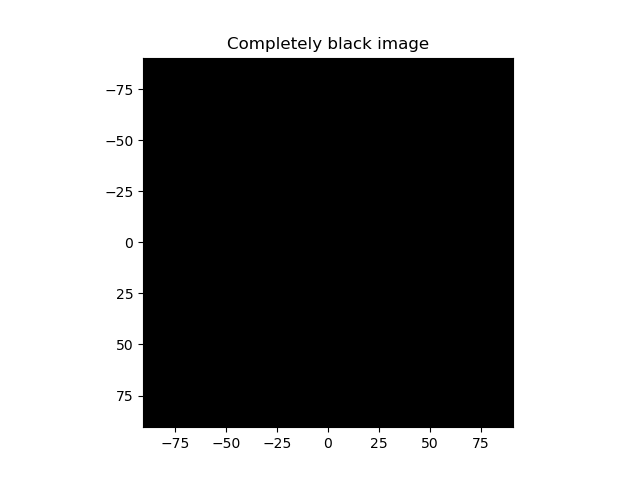

In [695]:
# draw the image so it appears completely black
vmin = 1000
vmax = 1001
fig,ax = plt.subplots()
ax.imshow(J,extent=extentJ,cmap='gray',vmin=vmin,vmax=vmax)
ax.set_title('Completely black image')

#### Problem 1.1.1
Find an appropriate vmin and vmax to draw the image so it appears completely white.  Place code in the cell below.

Text(0.5, 1.0, 'Completely white image')

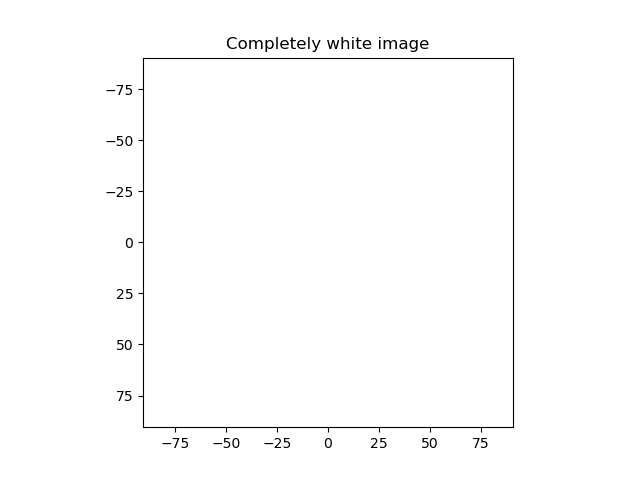

In [696]:
# draw the image so it appears completely black
vmin = -1
vmax = 0
fig,ax = plt.subplots()
ax.imshow(J,extent=extentJ,cmap='gray',vmin=vmin,vmax=vmax)
ax.set_title('Completely white image')

#### Problem 1.1.2
Find an appropriate vmin and vmax to draw the image so all the anatomy appears completely white, and the background appears completely black.

Note you may not be able to make this work exactly due to blur and noise.

Text(0.5, 1.0, 'Completely white anatomy with black background')

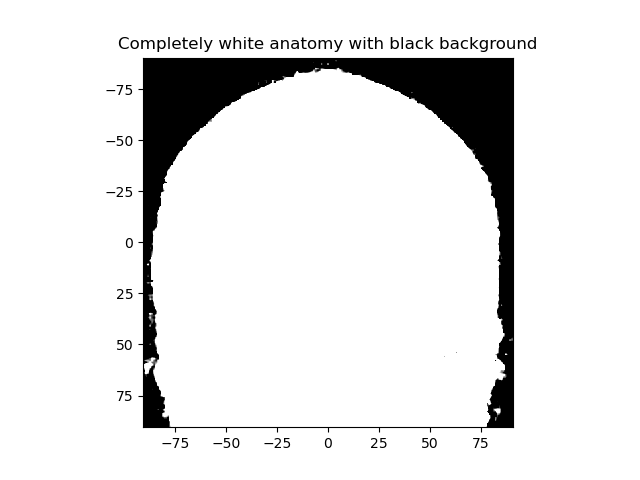

In [697]:
# draw the image so the anatomy is white and the background is black
vmin = 3
vmax = vmin+1
fig,ax = plt.subplots()
ax.imshow(J,extent=extentJ,cmap='gray',vmin=vmin,vmax=vmax)
ax.set_title('Completely white anatomy with black background')

#### Problem 1.1.3
Find an appropriate vmin and vmax to draw the image so white matter can be visualized in grayscale, and anything dimmer than white matter appears black.

Again, you may not be able to do this exactly.

Text(0.5, 1.0, 'Grayscale white matter, else black')

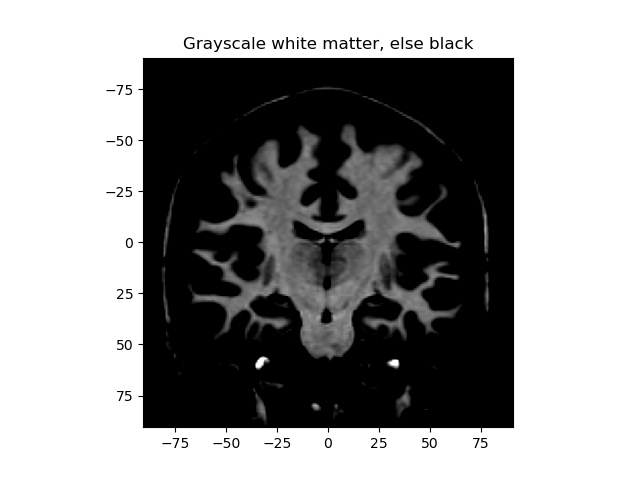

In [698]:
vmin = 120
vmax = 255
fig,ax = plt.subplots()
ax.imshow(J,extent=extentJ,cmap='gray',vmin=vmin,vmax=vmax)
ax.set_title('Grayscale white matter, else black')

#### Problem 1.1.4
Find an appropriate vmin and vmax to draw the image so gray matter can be visualized in grayscale, and anything dimmer appears black, and anything brighter appears white.

Use your answer from the previous problem to help you chose vmax here.

Again, you may not be able to do this exactly.

Text(0.5, 1.0, 'Grayscale gray matter, else white or black')

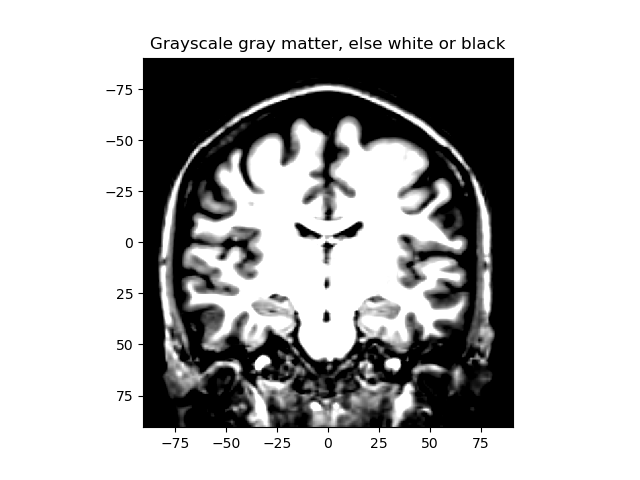

In [735]:
vmin = 50
vmax = 130
fig,ax = plt.subplots()
ax.imshow(J,extent=extentJ,cmap='gray',vmin=vmin,vmax=vmax)
ax.set_title('Grayscale gray matter, else white or black')

## Part 2: Interpolation

We discussed how images can be thought of as functions, or as discrete arrays, and that the two are linked using interpolation.  We will review some details in these problems.

### Part 2.1: Changing resolution

We can increase the resolution of an image by sampling it at a new set of pixels of higher resolution.

We can decrease the resolution of an image by sampling it at a new set of pixels at lower resolution.

#### Problem 2.1.1

Resample the MR image image below so that it has twice as many pixels in each dimension.  Use bilinear interpolation.

Template code is provided below, which you can modify.

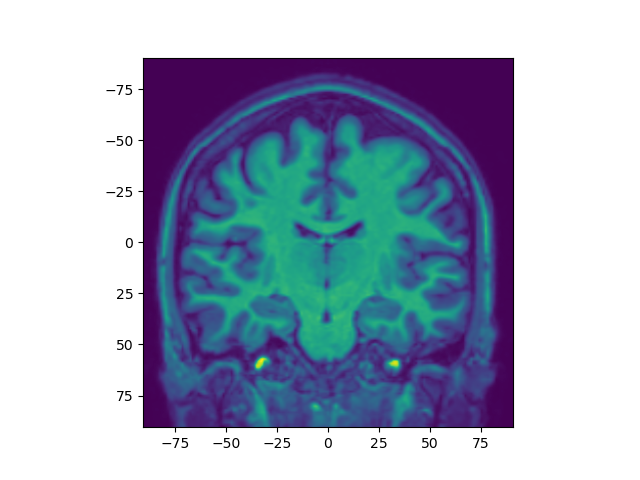

In [736]:
nnew = 362
xJnew = [np.linspace(x[0],x[-1],nnew) for x in xJ]
XJnew = np.stack(np.meshgrid(*xJnew,indexing='ij'),-1)
Jnew = interpn(xJ,J,XJnew,bounds_error=False, method="linear")
fig,ax = plt.subplots()
ax.imshow(Jnew,extent=extentJ)

#### Problem 2.1.2
Resample the MR image below so that it has one quarter as many pixels in each dimension (rounded down). Use nearest neighbor interpolation.

Note that the skull has a "stairstepping" effect.  This is called aliasing.  In practice, images should generally be blurred before they are downsampled.

(45, 45)


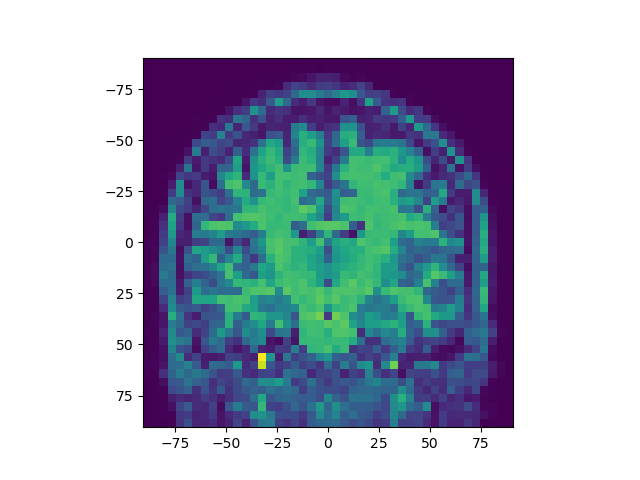

In [701]:
nnew = math.floor(181/4)
xJnew = [np.linspace(x[0],x[-1],nnew) for x in xJ]
XJnew = np.stack(np.meshgrid(*xJnew,indexing='ij'),-1)
Jnew = interpn(xJ,J,XJnew,bounds_error=False, method="nearest")
print(Jnew.shape)
fig,ax = plt.subplots()
ax.imshow(Jnew,extent=extentJ)

### Part 2.2: Transforming images

We can also use interpolation to transform an image, by transforming the points we sample on.

As a general rule, if we want to transform an image one way, we need to transform the sample points the opposite way.  We will see a few examples of this below.

#### Problem 2.2.1

Shift the image to the right, by 5 units, by transforming the points we sample it on.


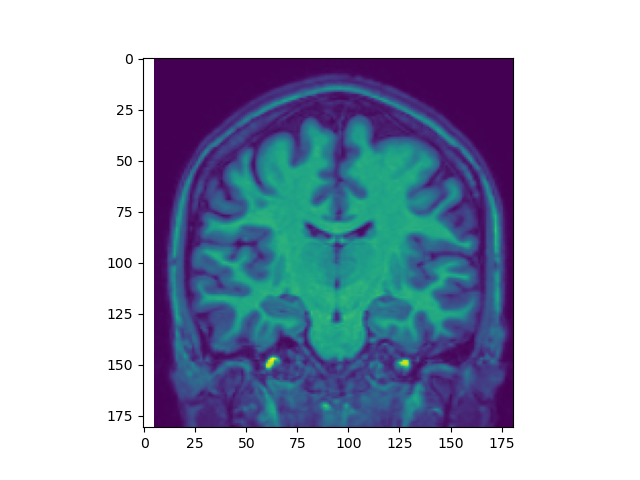

In [702]:
XJ = np.stack(np.meshgrid(*xJ,indexing='ij'),-1)
XJnew = XJ.copy()
# add something here
XJnew[:,:,1] = XJnew[:,:,1] - 5 # replace the number 0
Jnew = interpn(xJ,J,XJnew,bounds_error=False)
fig,ax = plt.subplots()
ax.imshow(Jnew)

#### Problem 2.2.2

Make the image bigger by a factor of 2.

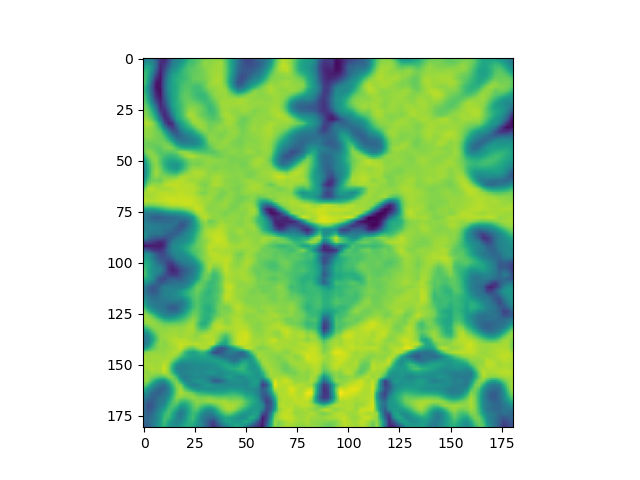

In [703]:
XJ = np.stack(np.meshgrid(*xJ,indexing='ij'),-1)
XJnew = XJ.copy()
XJnew = XJnew/2
Jnew = interpn(xJ,J,XJnew,bounds_error=False)
fig,ax = plt.subplots()
ax.imshow(Jnew)

#### Problem 2.2.3

This problem is harder.  Rotate the image by 45 degrees counterclockwize.


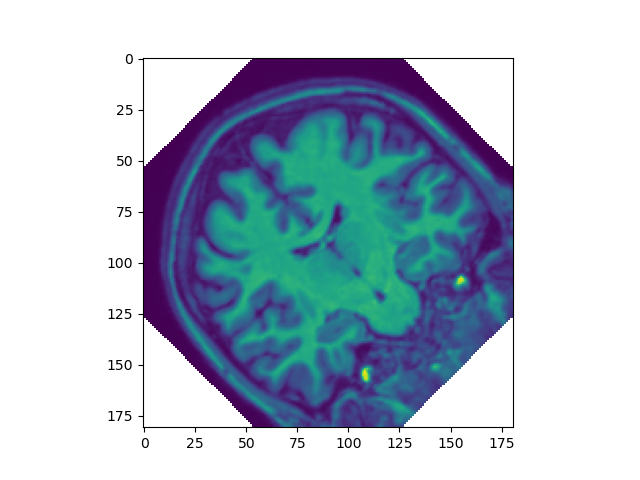

In [704]:
XJ = np.stack(np.meshgrid(*xJ,indexing='ij'),-1)
XJnew = XJ.copy()
angle = -np.pi/4
rot_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
XJnew = [[np.dot(rot_matrix, X) for X in line] for line in XJnew]
Jnew = interpn(xJ,J,XJnew,bounds_error=False)
fig,ax = plt.subplots()
ax.imshow(Jnew)

# Part 3: Visualizing triangulated surfaces

Triangulated surfaces are often used for visualizing 3D imaging data.  Here we will explore how triangulated surfaces can be converted into visualizations in a simple graphics pipeline. 

### Part 3.1: Representing triangulated surfaces

Triangulated surfaces are represented by storing two arrays of numbers.  

First a list of vertices $v$, which is a $N\times 3$ array of floating point numbers where we have $N$ vertices.  In this case $v[i]$ stores a 3 component vector representing the location of the $i$th vertex (corner) on our surface.

Second a list of faces $f$, which is an $M \times 3$ array of integers where we have $M$ faces (triangles). In this case $f[i]$ stores 3 integers. $f[i,0]$ stores the index of the first vertex of the $i$th triangle.  $f[i,1]$ stores the index of the second vertex of the $i$th triangle.  And $f[i,2]$ stores the index of the third vertex of the $i$th triangle.

Note that the integers stored in $f$ must be between 0 and $N-1$, so that they can be used to index vertices in the array $v$.

Sometimes the order that the three vertices are indexed are important, because they represent the orientation of a triangle (i.e. does the triangle have an outward normal or inward normal).  In this assignment, we will not worry about the order.

#### Problem 3.1.1
Below, we store the 4 vertices of a tetrahedron in the array $v$.  Fill in the array $f$ to store the 4 faces of the tetrahedron.  You candraw the tetrahedron by running the code in the next cell.

In [705]:
v = np.array([
    [0,0.0,1.0],
    [-1.0,0.0,0.0],
    [0.5,1.0,0.0],
    [0.5,-1.0,0.0],
])
# fill in the three other faces here
f = np.array([
    [0,1,2],
    [0,1,3],
    [0,2,3],
    [1,2,3]
])

Text(0.5, 0.92, 'A tetrahedron')

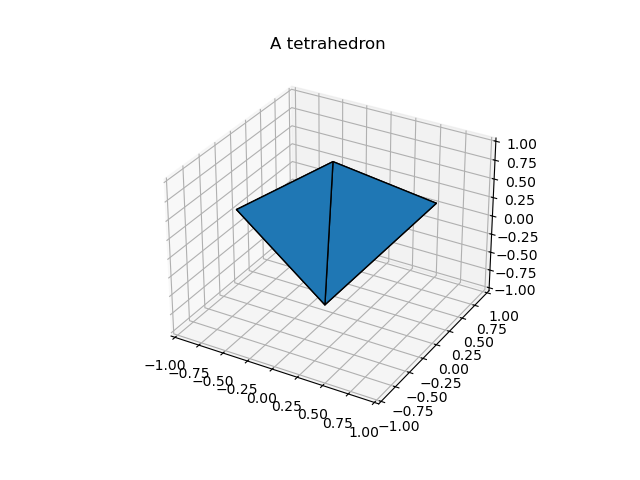

In [706]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
mesh = Poly3DCollection(v[f],edgecolor='k')
ax.add_collection3d(mesh)
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
ax.set_zlim(-1,1)
ax.set_title('A tetrahedron')

### Part 3.2: Setting up our canvas

To start rendering a triangulated surface, we need to set up some geometry.

We need to set up a number of pixels and pixel locations. 

Here we will use a $512\times 512$ pixel array, with locations between -1 and 1.

We'll store the location of each pixel in a $512 \times 512 \times 2$ array.

In [707]:
# size of our image 
n = 512

# we'll have an image that covers the distance from -1 to 1
x = [np.arange(ni)/(ni-1)*2-1 for ni in (n,n)]
d = [xi[1]-xi[0] for xi in x]
X = np.stack(np.meshgrid(*x,indexing='ij'),-1)

# we'll set up an extent for double checking our code
extent = (x[1][0]-d[1]/2,x[1][-1]+d[1]/2,x[0][-1]+d[0]/2,x[0][0]-d[0]/2)

### Part 3.3: Setting up our view

To view our triangulated surface from different perspectives, we may want to rotate or translate our vertices.  Here we will allways center our data at at the origin, so we will only consider rotation.

Because our vertices are in an $N\times 3$ array, we can rotate them by matrix multiplication with the transpose on the right.


In [708]:
# build a rotation matrix using 3 angles.
theta0 = 95.0*np.pi/180
theta1 = 30.0*np.pi/180
theta2 = 60.0*np.pi/180
R0 = np.array([[1.0,0.0,0.0],
              [0.0,np.cos(theta0),-np.sin(theta0)],
              [0.0,np.sin(theta0),np.cos(theta0)]])
R1 = np.array([[np.cos(theta1),0.0,np.sin(theta1)],
               [0.0,1.0,0.0],
              [-np.sin(theta1),0.0,np.cos(theta1)]])
R2 = np.array([[np.cos(theta2),-np.sin(theta2),0.0],
               [np.sin(theta2),np.cos(theta2),0.0],
               [0.0,0.0,1.0]])

R = R2@R1@R0

In [709]:
# rotate our vertices
vrot = v@R.T

### Part 3.2: Bounding boxes

Graphics pipelines are based around drawing triangles.  To do so involves computations on every pixel.  To speed up rendering, we will want to be able to extract only pixels where our triangle might be located, called a bounding box.

To do this we need to calculate which row in our image is immediately above the highest vertex in our triangle (using the first component of our vectors), which row is immediately below the lowest vertex, which column is immediately to the left of our leftmost vertex (using the second component of our vectors), and which column is immediately to the right of our rightmost vertex.

Note we will always have our vector components in row column order, not x y order.  In building a bounding box, we can neglect the third component of our vertices (depth).

#### Problem 3.2.1: Identifying bounding boxes

Create a function "get_bounding_box" with the following specifications.

It should take 4 input arguments:

1. pixel locations $X$ we defined above
1. v0: the coordinates of the first vertex in our triangle
1. v1: the coordinates of the second vertex in our triangle
1. v2: the coordinates of the third vertex in our triangle

It should have 4 output arguments:
1. rowmin: the row immediately above the highest vertex
1. rowmax: the row immediately below the lowest vertex
1. colmin: the col immediately to the left of the leftmost vertex
1. colmax: the col immediately to the right of  the rightmost vertex

Note that if one of the vertices is "out of bounds" (i.e. its coordinates are not between -1 and 1), you should return the closest "in bounds" pixel.

In [710]:
# get the first face
tri = vrot[f[0]]
v0 = tri[0]
v1 = tri[1]
v2 = tri[2]

In [711]:
def get_bounding_box(X,v0,v1,v2):
    # location of first pixel
    o0 = X[0,0,0]
    o1 = X[0,0,1]
    # pixel spacing
    dx0 = X[1,0,0] - X[0,0,0]
    dx1 = X[0,1,1] - X[0,0,1]
    ### Fill in the parts below to complete this function
    # find min and max coordinates
    top_loc = min(v0[0], v1[0], v2[0])
    bot_loc = max(v0[0], v1[0], v2[0])
    left_loc = min(v0[1], v1[1], v2[1])
    
    right_loc = max(v0[1], v1[1], v2[1])

    top_loc = max(top_loc, -1)
    bot_loc = min(bot_loc, 1)
    left_loc = max(left_loc, -1)
    right_loc = min(right_loc, 1)
    # min and max row and column, make sure they are integers (not floats)

    rowmin = math.floor((top_loc-o0)/dx0)
    rowmax = math.ceil((bot_loc-o0)/dx0)
    colmin = math.floor((left_loc-o1)/dx1)
    colmax = math.floor((right_loc-o1)/dx1)
    
    # make sure they don't go out of bounds

    
    
    return rowmin,rowmax,colmin,colmax

[[ 0.84094098 -0.53583689 -0.07547909]
 [-0.4330127  -0.75        0.5       ]
 [ 0.54103411  0.76278709  0.61272992]]


Text(0.5, 1.0, 'Bounding box with triangle corners')

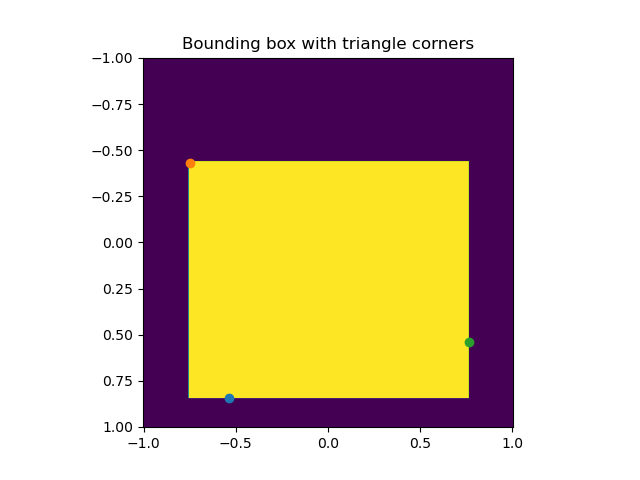

In [712]:
# test your function here
# you should see a yellow bounding box around your vertices
print(tri)
rowmin,rowmax,colmin,colmax = get_bounding_box(X,v0,v1,v2)

I = np.zeros_like(X[...,0])
I[rowmin:rowmax+1,colmin:colmax+1] = 1
fig,ax = plt.subplots()
ax.imshow(I,extent=extent)
for i in range(3):
    ax.scatter(tri[i,1],tri[i,0])
    
ax.set_title('Bounding box with triangle corners')


### Part 3.2:  Barycentric coordinates. 

For a given triangle, we would like to write the location of each pixel as a linear combination of the vertices in our triangle.  We will use 3 numbers $(a,b,c)$ that sum to 1 ($a+b+c=1$).
\begin{align}
x &= av_0 + b v_1 + c v_2\\
&= a v_0 + b v_1 + (1-a-b) v_2
\end{align}

The coordinates $(a,b)$ are called barycentric coordinates.  We can write $c=1-a-b$ and ignore it.  Note the following features

1. When $(a,b) = (1,0)$, $x$ is the location of the first vertex.
1. When $(a,b) = (0,1)$, $x$ is the location of the second vertex.
1. When $(a,b) = (0,0)$, $x$ is the location of the first vertex.
1. When $0 \leq a \leq 1$ and $0 \leq b \leq 1$ and $0 \leq 1-a-b \leq 1$ the location $x$ is inside our triangle, otherwise it is outside.

The last property makes it very easy to check if a given pixel is inside the triangle or not.  In addition to the work we do here, these coordinates make it easy to interpolate values of different signals across the triangle.

Note since we are drawing in 2D, we only use the first 2 components of our triangle, and ignore the 3rd component (depth).

#### Problem 3.2.1: Computing Barycentric coordinates

Show that we can compute the barycentric coordinates $(a,b)$ by solving the linear equation.



\begin{align}
\begin{pmatrix}
a\\b
\end{pmatrix} = \begin{pmatrix}
v_0-v_2, & v_1-v_2
\end{pmatrix}^{-1}(x-v_2)
\end{align}


where
\begin{align}
\begin{pmatrix}
v_0-v_2, & v_1-v_2
\end{pmatrix}
\end{align}
is a $2\times 2$ matrix formed by stacking two column vectors next to each other.

This can be shown pretty simply by multiplying on the left side by:
\begin{align}
\begin{pmatrix}
v_0-v_2, & v_1-v_2
\end{pmatrix}
\end{align}

The result is:

\begin{align}
\begin{pmatrix}
v_0-v_2, & v_1-v_2
\end{pmatrix} \begin{pmatrix}
a\\b \end{pmatrix} = (x-v_2)
\end{align}



Now, we can plug in values for a and b of $(1,0)$, $(0,1)$, and $(0,0)$ to get $v_0$, $v_1$, and $v_2$ respectively

\begin{align}
\begin{pmatrix}
v_0-v_2, & v_1-v_2
\end{pmatrix} \begin{pmatrix}
1\\0 \end{pmatrix} = (v_0-v_2)
\end{align}
\\
(v_0-v_2) = (x-v_2) \implies x=v_0

Similarly:

\begin{align}
\begin{pmatrix}
v_0-v_2, & v_1-v_2
\end{pmatrix} \begin{pmatrix}
0\\1 \end{pmatrix} = (v_1-v_2)
\end{align}
\\
(v_1-v_2) = (x-v_2) \implies x=v_1

And finally
\begin{align}
\begin{pmatrix}
v_0-v_2, & v_1-v_2
\end{pmatrix} \begin{pmatrix}
0\\0 \end{pmatrix} = (0)
\end{align}

$(0) = (x-v_2) \implies x=v_2$

I have no idea how to test property number 4. 

(For some reason I am having strange issues with LaTeX in vscode. I've only ever used LaTeX in overleaf, but I hope that everything is rendering correctly.)

#### Solution 3.2.1


In [713]:
def get_barycentric(X,v0,v1,v2):
    # since we are drawing in 2D, we can ignore the z component
    v0_ = v0[:2]
    v1_ = v1[:2]
    v2_ = v2[:2]
    
    # stack them into a matrix
    mat = np.stack((v0_-v2_,v1_-v2_),-1)        
    # initialize B to something we know is not inside a triangle        
    if np.linalg.matrix_rank(mat)==2:    
        B = (np.linalg.inv(mat)@( (X-v2_)[...,None] ))[...,0]
    else:
        # if the matrix is singular, we'll return something we know is not inside the triangle
        B = np.zeros_like(x)        
    return B

In [714]:
B = get_barycentric(X[rowmin:rowmax+1,colmin:colmax+1],tri[0],tri[1],tri[2])

Text(0.5, 0.98, 'Barycentric coordinates in bounding box')

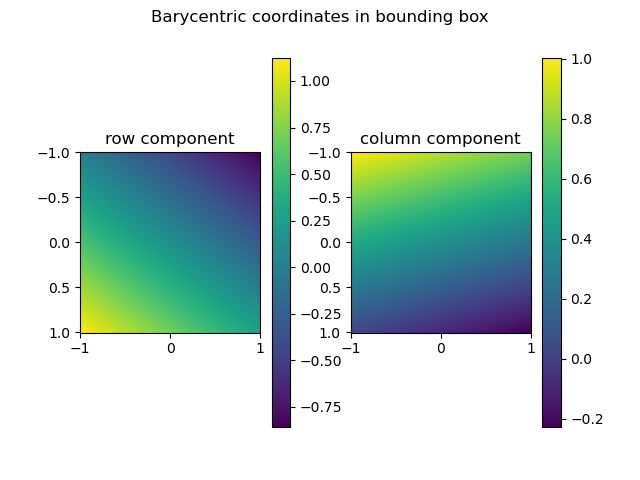

In [715]:
fig,ax = plt.subplots(1,2)
handle = ax[0].imshow(B[...,0],extent=extent)
fig.colorbar(handle,ax=ax[0])
ax[0].set_title('row component')
handle = ax[1].imshow(B[...,1],extent=extent)
fig.colorbar(handle,ax=ax[1])
ax[1].set_title('column component')    
fig.suptitle('Barycentric coordinates in bounding box')

### Part 3.3 Drawing a triangle as a binary mask
We can check which pixels in $X$ are inside the triangle by evaluating the 6 conditions in property 4 above.

This will allow us to draw a binary image that looks like a triangle.

#### Problem 3.3.1 Drawing a triangle

Implement the function below, "draw triangle binary" with one input $B$, our barycentric coordinates, and one output $M$ a binary mask that is 1 for pixels inside the triangle and 0 for pixels outside of it.

In [716]:
def draw_triangle_binary(B):    
    # find which points areinside the triangle
    # we show the first 2 out of 6 conditions here, make sure you implement all 6 carefully.
    M = (B[...,0]>=0)*(B[...,0]<=1)*(B[...,1]>=0)*(B[...,1]<=1)*((1-B[...,0]-B[...,1])>=0)*((1-B[...,0]-B[...,1])<=1) # put other 4 conditions here
    return M
    

Text(0.5, 1.0, 'Binary mask')

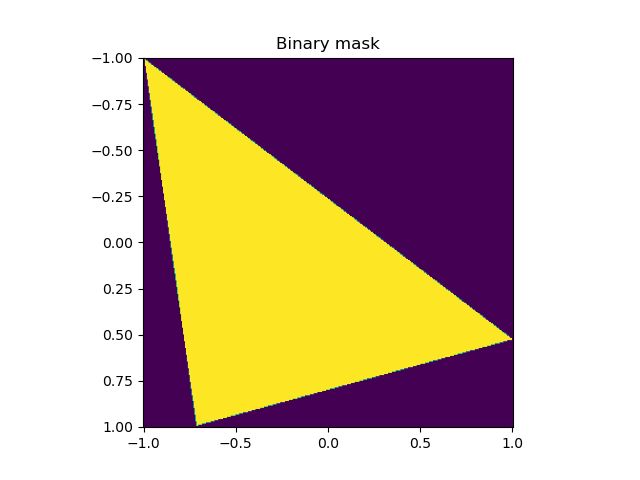

In [717]:
# test that your function works here
M = draw_triangle_binary(B)
fig,ax = plt.subplots()
ax.imshow(M,extent=extent)
ax.set_title('Binary mask')


### Part 3.4 Color

To produce a color image, we can simply insert some color value into our image everywhere the mask is 1.  See below.

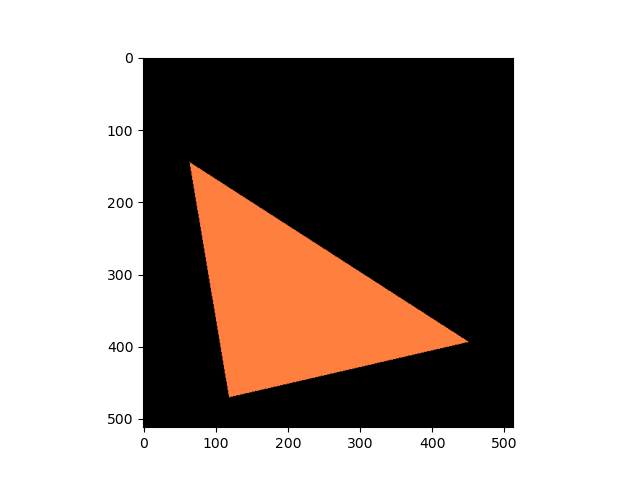

In [718]:
c = np.array([1.0,0.5,0.25]) # color
I = np.zeros((n,n,3)) # initialize  our image
I[rowmin:rowmax+1,colmin:colmax+1][M] = c # use the bounding box and the binary mask
fig,ax = plt.subplots()
ax.imshow(I)

### Part 3.5 shading

Shading triangles can help us get a sense of the 3D geometry of an object.  We will use a simple lighting model with two parts.

The amount of light on each triangle will be a number between 0 and 1, which will multiply the color.  So if the amount of light is 0, we see only black.  

Ambient lighting strength is a number between 0 and 1.  A large value means we are surrounded by light coming from all directoins.  This will illuminate triangles with no regard for their orientation.

Diffuse lighting represents how a triangle may appear brighter if it is oriented toward a light source, and darker if it is oriented normal from a light source.  We can compute this factor using the dot product between a triangle's normal, and the lighting direction, and multiply it by a diffuse lighting strength (another number between 0 and 1).

Note that dot products can return negative numbers.  We can set the value to 0 if it is negative, which means it is not exposed to any light.  Note this might lead to some errors if the normals of our triangles are not oriented consistently.  Don't worry about it for this assignment.





#### Problem 3.5.1 Compute triangle normals

Create a function, "calculate_normal", that takes 3 triangle vertices as an input, and produces one 3 component vector as its output.

The output should be normalized to unit length.

In [719]:
def calculate_normal(v0,v1,v2):
    # take a cross product between two edge vectors
    # note you can use np.cross
    n = np.cross(v1-v0, v2-v1)
    # normalize it to unit length
    L2 = np.linalg.norm(n)
    return -n/L2 # given version shows inverted normals, so I added a - sign

In [720]:
# calculate the normal here
nrot = calculate_normal(v0,v1,v2)
print(nrot)

[ 0.43400291 -0.34156596  0.83365111]


#### Problem 3.5.2

Create a function "color_from_normal_and direction" with the following specifications.

It should take the following inputs.
1. a color (a 3 component vector, red gree and bl)
1. a triangle normal (a 3 component vector)
1. a lighting direction (a 3 component vector)
1. an ambient strength (a number between 0 and 1)
1. a diffuse strength (a number between 0 and 1)

It should return a color computed using the lighting model above.  Make sure the lighting direction is normalized to unit length.

In [721]:
def color_from_normal_and_direction(c,nrot,direction,ambient_strength,diffuse_strength):
    # make sure the direction is normalized
    direction = direction/np.linalg.norm(direction)
    # compute the dot product, and set to 0 if negative
    dot = np.dot(nrot, direction) * diffuse_strength
    if dot < 0:
        dot = 0
    total_light = dot + ambient_strength
    if total_light > 1:
        total_light = 1
    
    # 
    color = c * total_light
    return color

def color_from_normal_and_direction_2(c,nrot,direction,ambient_strength,diffuse_strength):
    # make sure the direction is normalized
    direction = direction/np.linalg.norm(direction)
    # compute the dot product, and set to 0 if negative
    dot = np.dot(nrot, direction) * diffuse_strength
    if dot < ambient_strength:
        dot = ambient_strength
    total_light = dot
    if total_light > 1:
        total_light = 1
    
    # 
    color = c * total_light
    return color
    

Text(0.5, 1.0, 'Ambient Lighting as Floor')

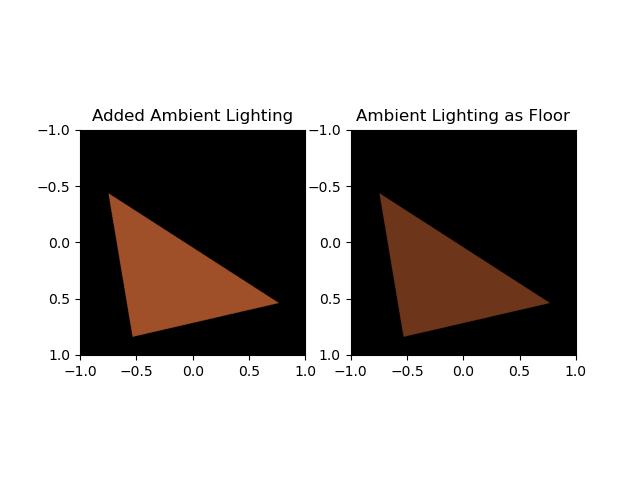

In [722]:
direction = np.array([1.0,1.0,1.0])
ambient_strength = 0.2
diffuse_strength = 0.8
cs = color_from_normal_and_direction(c,nrot,direction,ambient_strength,diffuse_strength) # I had to edit this line changing nrot[0] to nrot, as I think I need all 3 components of the vector
I = np.zeros([n,n,3])
I[rowmin:rowmax+1,colmin:colmax+1][M] = cs
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.imshow(I,extent=extent)
ax1.set_title("Added Ambient Lighting")

cs2 = color_from_normal_and_direction_2(c,nrot,direction,ambient_strength,diffuse_strength)
I2 = np.zeros([n,n,3])
I2[rowmin:rowmax+1,colmin:colmax+1][M] = cs2
ax2.imshow(I2,extent=extent)
ax2.set_title("Ambient Lighting as Floor")

My first image looks a little bit brighter than reference. This might have to do with how I am utilizing the ambient lighting. I am adding the ambient light to the light from the source. Is it possible that the ambient light should be a floor instead? This seems to line up with reference, so I have added it as well.

### Part 3.6 Drawing all our triangles

We are now ready to draw our tetrahedron!

The last import thing to remember is to draw our triangles from back to front.  We can sort the triangles using their average z component as shown below.

If we do not draw them from back to front, we may see some odd results.  Note that this approach is not perfect, because we only use the triangles average z component to sort.  In practice, something called a depth buffer is used to keep track of the triangle depth at each pixel.

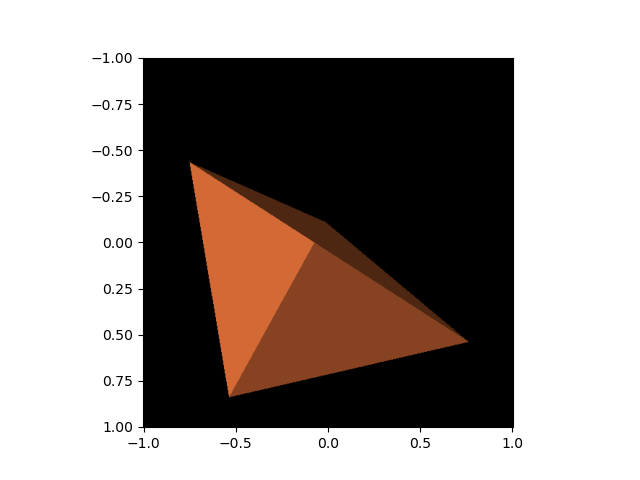

In [723]:
# sort the triangles so we draw from back to front
I = np.zeros((n,n,3))
meanz = np.mean(vrot[f][...,-1],1)
order = np.argsort(meanz)
fig,ax = plt.subplots()
for fi in f:
    vi = vrot[fi]
    ni = calculate_normal(vi[0],vi[1],vi[2])
    rowmin,rowmax,colmin,colmax = get_bounding_box(X,vi[0],vi[1],vi[2])
    B = get_barycentric(X[rowmin:rowmax+1,colmin:colmax+1],vi[0],vi[1],vi[2])
    M = draw_triangle_binary(B)
    cs = color_from_normal_and_direction(c,ni,direction,ambient_strength,diffuse_strength)
    I[rowmin:rowmax+1,colmin:colmax+1][M] = cs
        
    ax.cla()
    ax.imshow(I,extent=extent)
    fig.canvas.draw()
    

#### Problem 3.6.1

Let's wrap up all the previous work into a function.

Build a function called "draw_surface" with the following specifications.

It should have the following inputs
1. A number of pixels 
1. array of vertices
1. array of faces
1. three rotation angles
1. a color
1. a light direction
1. an ambient lighting strength
1. a diffusion lighting strength

It should have the following outputs
1. A RGB image of size number of pixels $\times$ numberof pixels $\times $ 3

As above, your function can assume the pixel locations are all between -1 and 1. 

Render the tetrahedron using your function.

In [724]:
def draw_surface(n,v,f,theta0,theta1,theta2,c,direction,ambient_strength,diffuse_strength):
    # implement your function here using all the parts from above
    # Create the rotation matrix:
    R0 = np.array([[1.0,0.0,0.0],
              [0.0,np.cos(theta0),-np.sin(theta0)],
              [0.0,np.sin(theta0),np.cos(theta0)]])
    R1 = np.array([[np.cos(theta1),0.0,np.sin(theta1)],
               [0.0,1.0,0.0],
              [-np.sin(theta1),0.0,np.cos(theta1)]])
    R2 = np.array([[np.cos(theta2),-np.sin(theta2),0.0],
               [np.sin(theta2),np.cos(theta2),0.0],
               [0.0,0.0,1.0]])

    R = R2@R1@R0
    # rotate vertices
    vrot = v@R.T
    
    I = np.zeros((n,n,3))

    # now pretty much just copy what is in 3.6
    
    meanz = np.mean(vrot[f][...,-1],1)
    order = np.argsort(meanz)
    for i in order:
        fi = f[i]
        vi = vrot[fi]
        ni = calculate_normal(vi[0],vi[1],vi[2])
        rowmin,rowmax,colmin,colmax = get_bounding_box(X,vi[0],vi[1],vi[2])
        B = get_barycentric(X[rowmin:rowmax+1,colmin:colmax+1],vi[0],vi[1],vi[2])
        M = draw_triangle_binary(B)
        cs = color_from_normal_and_direction(c,ni,direction,ambient_strength,diffuse_strength)
        I[rowmin:rowmax+1,colmin:colmax+1][M] = cs
    return I

Text(0.5, 1.0, 'Tetrahedron rendered using our function')

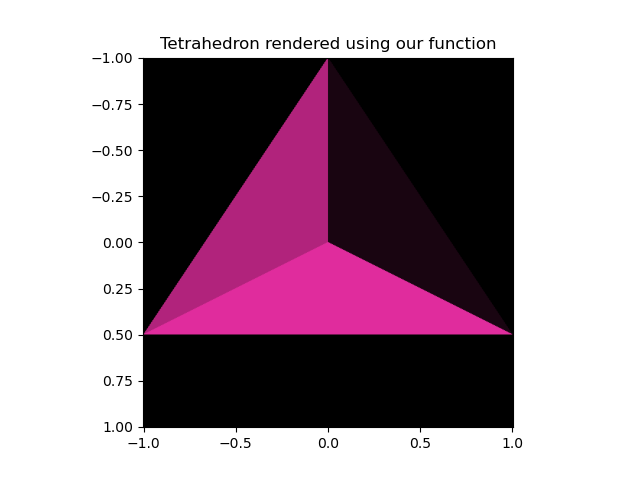

In [725]:
I = draw_surface(512, v,f,0,0,0,np.array([1.0,0.2,0.7]),np.array([1.0,0.5,0.2]),0.1,0.9)
fig,ax = plt.subplots()
ax.imshow(I,extent=extent)
ax.set_title('Tetrahedron rendered using our function')

#### Problem 3.6.2
Use your function to render the skeleton in the attached CT scan.

Make 4 different figures.
1. Any view, any color, any lighting direction, ambient strength 0.2 and diffuse strength 0.8
1. Same parameters as part 1, but a different lighting direction.
1. A different color, different view, and different lighting direction, ambient strength 0 and diffuse strength 1
1. Same parameters as part 3, but ambient strength 1 and diffuse strength 0.

Vertices and faces can be generated using the marching cubes image from the scikit-image package.

Use an isosurface level of 0.024 to render the skeleton.  This will give 28232 faces.

Note, while you are debugging, you will likely want to use less faces.   A threshold of 0.03 will give 2744 faces.

Note you can also use a smaller number of pixels to speed things up while debugging.

Text(0.5, 1.0, 'coronal maximum intensity projectoin')

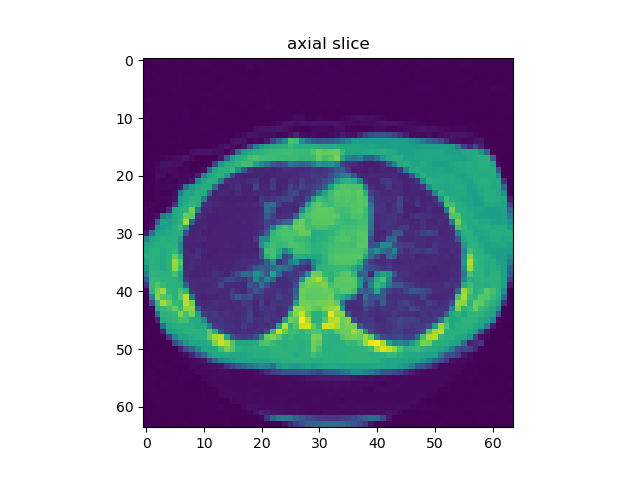

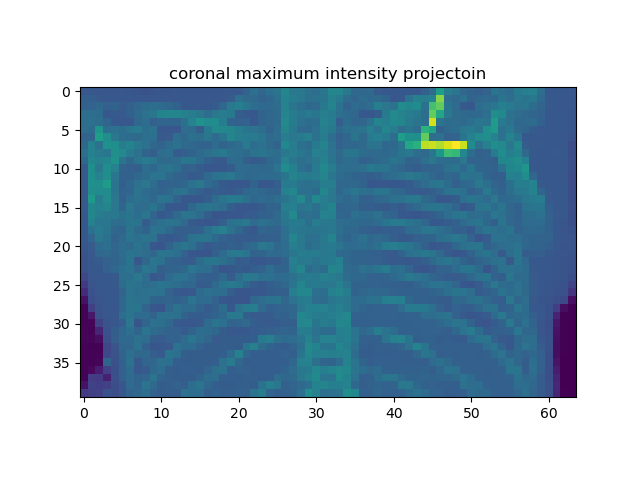

In [726]:
# use the following CT image
im = np.frombuffer(b'\xf5\x10m;\x03\xcfu;\x98is;DQp;\xf2\xefs;h?r;\xd6Vl;@Mu;\x14"p;2\xacj;)\xaer;\x08 u;\nhr;a2u;`vo;-&n;\'\x83s;\xf3To;M\xf3v; \xd2o;\x02\x0eq;pwn;\x91\xedl;\x17\xbcp;Q\xdas;\xb7zn;\xca\xfdv;\x17\xb7q;\xb6\xa1r;\xb3\xd2t;\x84\x81o;\x12Ns;K\x1fr;K\xcdn;\x8c\xa1l;\x08Zq;\xa8\x18o;\x1fKw;\xc5\xe6s;\x12\x88o;HPt;\xe4\xdax;z\xaak;_Fq;\xb5\x1ar;\x8cJr;\x82\xe2w;Z\xf0r;a\x89o;f\x83t;gDq;3\xa7{;\xe9+p;\x92?x;\xb0\x8fn;?5n;\x0fbo;]\xe1u;K\x1fr;5\xb5t;\xdf\xfdy;\x00oq;\xc1\xc5r;\xab>w;\xdeTt;\x91~s;#\xdbq;*\x1dl;)\x96s;0\xd8u;}\xe8r;\xca\xe0h;\x89\xeft;\x07\xb1k;\xc4\x99o;Y\x17o;\xe4\xa0t;\x81\xecm;\x9cPp;;\xaar;+\xc1j;\xbb\nq;\x9e\xb5s;\xb57p;c\xeer;~os;\x1fhm;\x7f\xdet;I\xd7t;\xb0 m;\x12\xa5u;(,q;\xb2\xbau;a\x8en;\\\x8fr;\xee\xb1t;\xd5[s;\xb3\xeas;\x9f\xcdr;3\xdcp;\xec\xc0q;DQp;\xb1\xdcr;Y\xc0t;\x0e\xa1r;\xe3\xc7p;\xe2\xe9u;\x1c\xb6m;(,q;\x19\xffn;\x98Lm;p\xb6q;\x1cBm;\xfeCr;l>v;\x80Ho;\x14\xedr;\xa3#q;\xa2\x0br;4.l;!Yp;\x89\xb5p;\x8f\xdfs;\xe9\xb7o;z\xdfp;A\xd4m;\x1d8o;.\xffq;\xba,n;j\xd9r;\xe3\xaar;\x88.p;\xdf\x89q;\x18\xb2r;\x13fr;\x96\x04p;\xbbas;\tPk;zpo;\xb3\x0cq;\x87ms;\x81!s;\x0bck;\xee\xb1l;L\xa6r;A+h;\x86 w;\x10@r;\xf3qu;\x99\xd8l;3\xdcx;WCr;$\xd1s;\xcf\xa0q;\x1d\xc9m;F\xcer;\xf9\xf7q;\xc1\xc5j;\x16Mo;}\xaen;\xc7hu;N\xb9r;Z\x12p;y\x06u;\x89\xb5p;h"t;-xq;\xdb\xdcp;\xebsm;/Qm;\x80\xf1l;JAo;\xfd\xa4r;h\x96l;\xe9\x0er;\xa7?s;\x1c\xcel;\x13Dm;\xce\xc7m;\x8a\x8et;\x91\xedl;`\x02o;\xe6\x91o;\xfc\x18k;0\x81s;\xd0\xd0o;$(v;\x85\x08p;\xe5Dk;\xfbys;\x14yr;=Ir;aOs;\x81\x04u;\xd7Ln;\x8b\x1at;\xc2\xfao;\x86\x8fp;\xaa\x0eq;\xda\xe1o;\x83\xc0r;q l;\x80eu;\x7f\x13r;T\x00l;\xd9\xcew;\xa3ul;\xa5Iq;S?o;DQp;"qw;\xb0rp;\xc1\x90u;ito;c\xb4n;\xb0=k;K\xcdv;_$t;$\xd1k;\x86Zk;\x8f\x8dx;\x83ip;\xd1tv;\xaf\xb1s;\xe8\xf6r;\x93\x8ct;\xf7\x92n;\xa2\x97q;\x81[o;\xf6\x97u;\xf3\xabq;\xc6\x16r;\x1a\xa3m;\xb8uw;\xea\x04t;m9w;q\xe6o;:@p;]mm;\xce\x19q;\xb3\xcdu;N\x9ct;O@s;\xda\xe6n;&\xc7m;\xd4\x0eo;\x16\xf6t;\xf0\x16p;JAw;w\x10s;\xe7\xfbq;\x82\xcap;M\xf3n;R~r;\xd5\x04q;\x12\x88o;!<j;\xf2\x98q;X\x1cn;Veo;\xdeTt;2\xe6v;:\x1es;\xbf}u;4\x9dm;V\xbcq;\xfb:p;>"v;;Sp;\x07%t;\x87\xbfv;\x7fjl;\x19\xffn;s\x11w;\x19\xe7o;$\xb9l;\x01\xf6q;\x82\x90t;\xb7(s;B!r;V+s;\x93\x1ds;\xa6\xd5p;\xafwo;\x86\x03q;\x91\xb8w;\xf0mj;\xae\rm;\x18\xcfp;\x17Hp;[\xebs;\xb9\xc2s;x\x0bt;2\xe6n;!\x02n;\xe0\x10r;\x95`q;!Yp;\xed\rv;\xe3\xfcu;\xc8\xcdp;\xc8\xean;\xfd0r;6\xabv;\xe3\x88m;\x8f6n;\x17\x82t;\xbctk;\xcc\xd1s;\xe7\x00q;\xd4\x82w;\x92\xcbo;\x9dFr;\x0b\x98p;\x1c|q;\xacVn;\xe8\xbcn;\xf7\x01p;$(n;\xe1@p;\xe6"n;\xa4\x88t;\x96xp;\x8f\xdfk;`\xeao;\xf2\xcdn;\x7f\xf6k;z\xe4o;ept;\xd9Zo;\xf1hs;\xbc\x05r;Z\x12p;\xff\xcar;\x02\x9fw; \x0ct;"\xc3r;\x15Rv;\xc5\xaco;f\xbdp;$\xd1s;\nhr;(Dp;\x9d\x9dt;Rat;\xed\xbbr;_\x98t;U\x13t;\x85wq;\xce\xc2n;\xea\xb2p;\xbc?v;\n\xbam;l\tq;-!o;shq;O@s;VHq;\x83\x86n;\x0f\x97t;\xd2:r;J^m;\xa5\xdao; \xd2o;.\x04q;=Ir;\xd3\xa4l;\xb8\xe9g;\x9e\xb5s;\x00\xa9m;\x1f\xa2q;>\x05p;\x9dKq;~\x18q;kHt;h\x05v;\x7f\x13r;\xcf\x83s;\n.v;\x12\xbdt;K\x1fr;\xe9Cw;e\x8dr;b\xf8p;\x92tm;\xaa\xd4t;&6o;m9o;"lp;Yir;T5q;\x11\xdfi;vTm;W\x95u;U\xden;8-p;\x82sn;W!u;#\xdbq;fku;u<v;\xf1\x9dp;sK{;c\xb4n;\x91Do;\xf3\x93r;\x13fr;_)s;{\xdaq;2Up;^Kp;\t\xc4k;\xa1\xf8y;\x9c\xc4x;g~u;\xdb3k;\x19\x04n;d;o;\x9f\x8eo;\xe5\no;\xe1]v;\xd0\xf2l;z\xc2r;\xcc(n;\xdeYs;\xf2^u;\xb2\x85p;2Up;\x9d\x9dt;\xe0\x10r;`\xc8r;\xa7\x96u;\x07_p;w\xbeo;\x0c\x93q;\xaedo;33s;\xab&p;\x05\x8bs;\xeb\xfft;\x121m;\xa2(p;\xa4\x19s;-`r;\x1aQr;=\no;Y\x17o;/Qu;\x95\xb7s;0\xbbo;o\xf5l;X\x1cn;P\x8do;\xa5Np;\x04\x1cr;\x14\xe8s;6\xeay;\xc0\xecn;\xe7\x8cp;_^p;@\xa4o;\xaf|n;\x868~;\xf4\xc3p;\xcc\x7fx;\xdd\xd2r;=\xb8s;.\xe7r;h?r;?Ws;\x1c\x08y;\xa2]u;\xd4+u;U\x18s;\x88\x80s;PSs;]3q;\xf5Jq;\xfc\xa9q;#\xf3p;\xa9jr;\xc9\x02v;\xfa\xb3o;&\xc7m;|\'v;\x8d\xd1r;\xb0\xact;\x84\ro;xbn;\xe1bm;H\x8ap;\x16\xdem; \xefu;\x06\ru;\xd1yu;\x92\xe8u;\xe80o;\xc2\x12o;\x06\x9ek;\xa9\xf6q;\xb8uo;\xea\x04l;|\xd5r;)\xd0o;6\x02q;\x1fhm;%\xe9r;\xc0\tm;\x0e2q;\x90Nm;`\x1fm;\x9b\x1bs;\xa6\x0fu;\x86\xe6r;\xdf7n;4\xd7q;\xe2\xafi;\x8d\x97n;Oup;\xce\x8dq;\xbb\xedr;\xcd#o;\xac\xffs;\xb52q;G\xe6q;%\x06y; ^w;\xe0\xben;\xc5\x03r;G=t;\x9awt;\xefrq;\xde\x93o;>\xb3l;)?q;[\xb6v;\x9c\xf9u;\xa46q;\xef\x03p;9\xd1n;\x02\x0eq;\xfe\x0em;\x15ts;\x8f\x19p;\xa6\x0fm;C\x90s;\xa6\x0fm;\xedGr;\x13\nq;\xa9\x13p;\x0c\x93q;\x9a\xb1p;F\xb6s;\x13\x9bo;w-q;~Ru;\r\xc3w;\x01\xfbp;\x0f\xb9q;(an;\x10\xafs;"\xc3r;E*l;"\x89v;\x9b\x8fs;<\xa0t;;\xaar;ZGu;\xb7(k;w\xa1q;\'\x83s;q\x1bu;\xe3kw;%#o;\xe4fp;\x03\xecs;!\xcdp;\xf5\xa1s;K<p;C\x04t;\xc58o;\xcf\x14j;F\xb6s;j\xf6p; \xb5q;8\xdbt;\x15\xa9x;q\x1bu;\xb3\x07r;\xc4Zt;\xe9\x9aq;\xba,v;r\xc4r;\x8a\x1fs;\x1a\x86w;\xabxs;\x13\xd5s;\xa0\x1ao;"\x1au;o/q;\x18[x;\xc8\xb5q;\xbb\x9bw;!\xcdp;.\xcat;N\xd1y;\xc5Um;\xaf\x99t;<\x83n;mVu;\xbd5x;&\xaag;\xf0\xbfu;\x94\xdew;\x87\xf9r;\xdd\xb5l;G\xacu;\x8b7r;I\x85q;\xa2\x9cp;x(r;\xd0\'z;\xfc\xe3u;_\x07n;!\xe5o;@\x13q;l\xcft;\xd9\x99r;\xf8\x19w;\x9b=p;\xb7]p;\xa2\x97q;\x02\xf1r;O\x1en;E\xd8p;\x96Cs;4.t;\x1c\x99o;w-q;\x18Ci;R\'p;\xd3\x87n;\xe36r;\x0e\xf8t;\xd5\xcfs;\xc4Bm;}\x05q;\x08\xact;\xf2^\x81;c\x9cw;qUy;\x9dhw;@\xc1u;j\xd9z;\xd0\xedu;\\\x8fz;\x02\x82q;\xe5\xedp;dXu;\x8d]z;{\x83w;2rn;R\xd5t;mVu;\x93\x8ct;M\x10u;\x8eXs;{\x88v;\xe9\x9ay;\xf0\x85y;\xf8\x19o;\x9dho;J\xefs;\x11\xdfq;\tPs;\x0b{r;/\x17q;\xc0\xcfp;w\x15r;\x9b r;\xfb\xaep;\x89\x0cs;\x86 o;\xa5\xdao;6\xb0u;Tom;\xf9\xbdm;\xc9\x8eu;\x00\x00p;c(o;\xe4\x14m;\x9e^q;\x8bqn;1\x99r;\x19\xcay;^\x9ds;\xe4,t;o*z;H\xc4l;\'\xf7s;\xbaNs;Q\x14p;\x9dcp;\xea\x04t;L\x1as;\x1anx;\xec\xa3k;\x1c\x08q;\n\x11p;L\xe0n;\xcd;v;Q\xa5\x86;\x8e\xcc\x8b;aq\x80;\x94\xbcz;\x92"z;\xa6\xd0y;\x165x;\x9a\x94r;Z\x9ew;W`x;vOv;(\n|;^\xf4m;xEx;\xef\x03x;<\xbdr;D\xddo;`\xabt;\xc0\x95t;\xadLx;\xed\xd3y;_$t;\x08=s;\x8c\x15u;v\x1aq;\x19Vq;\xcbgq;S\xe8t;\x8b\xfdu;\xf4\xa6r;[|r;\xe9+p;\xc2\x12o;\x14\xaeo;\x17\xd9n;<\xdap;_\xefn;\x1f\x9dr;qZp;e\x19r;[\x99p;OXr;\xa02n;\x04!q;\xe5\xb3t;\xe2;q;\x95\x9ft;\x7f\x87r;]\xc4w;\x868n;cEu;\t8t;<\x83n;\xb8Xi;%\xe9r;\x9eAs;\xbf\x82l;\xef\xacu;@\xa4o;\xe4\x83v;\x9c\xa2s;\xc8$s;\xfbys;\xfc\xa9\x85;Mg\x7f;\xd2\x8c\x85;A\x82\x86;}\xcb|;~tz;h\\\x80;\x1fK\x7f; \xd2w;\xdd^z;\xaaCv;\x07_x;Nb\x80;\x00\xe3y;\x12ky;B>p;R\'x;\xacs|;b\xa1n;\xdb\x85v;\x88\xf4{;\xd0Dx;[\x99x;1\xb6x;\xbb~q;]\xa7q;\x90\x83z;\xf9,w;\xb6\xb9q;\xfc\xa9q;Q\xf7q;*\x8cm;\xdchx;\x9b\x1bs;;pv;\x8eXs;\x00\x91v;/\xc0n;X9l;v\x1aq;\xa7\x96u;\xa7\xb3s;u\xb0v;iox;:\xafq;\x10]p; \xd2o;\xa7\xe8x;\xfe}v;\xac\x1cr;\xca\x1au;.\xffq;\xcd\x01r;\x0f\xb9i;\x92\x05t;\x0f\xb9i;\x85\xebq;-`r;{\x88n;\x83\xa3t;=\no;\xe7\x00q;\xcb\xa1m;\x03&x;>\xd0\x8e;\xb6\x84\x90;>?|;l[\x8c;9\xee|;\xfe\x9a|;\x88K~;m\xcau;\x11px;m\xcau;r\xbf{;8\xdb|;;\x01\x8d;\xbf\x0e\x88;\xa5\x14t;\x8e\x01q;#\x15v;d]t;}\x05y;\x1e\xa7x;kH|;c\x97p;\x9b\x03t;\xa1\x10y;\xbcyz;\xf7\xaft;EGr;\x1a\xa3u;t{y;\xadQw;\xcb\xa1m;\xd1\xaer;\x99\xd3m;\x90Nu;\xf2\x98q;\x829r;/ns;\x0f\x97t;.\xadv;\xba\x83p;\x1b\x9ev;\xc9\x93t;\xfd0r;\x1d=~;\x16j\x85;\x0eg\x86;\xe3\xc7\x84;\xf2\x07\x87;\xd2\x8c};1\xb6x;\x1anp;\'\xf7s;\x16\x13s;5\xd2r;\xee|o;\xd5xq;\x8a\xe5n;\x9f<t;\xf0\xf9i;\x1drs;l\xb2v;\x00\x8co;\xea\x95r;z\xc7\x8d;#\xdb\x91;\x1c\x99\x8f;\xfa~\x8a;o*\x82;\xc3\x81x;\x8d\xeex;\x11\x01w;r\xf9w;\x8a\x1fs;\x97\xa8v;\x8b7z;\x85B\x80;\xbf\x9a\x8b;\xe5\xd0\x8e;\xd0\xedm;\xf6@{;\x873w;\x1f\xf4t;\x08\xc9z;Gry;F\xeb\x80;\xf7\x01x;tFt;\x8e@|;\x98\x86y;0du;{\xday;\xae\xd3x;\x90Iv;G\xe6y;\xcb\xd6r;\x81\xcfo;j\x13o;Q\xdas;\n\xd7s;\xd0\xb3q;\xbd\xe3t;\xe3\xaar;<\xdap;+0t;h\x05n;\xbc?\x82;\x9d\xf4\x86;\xb3^\x80;j\xa4\x81;\xed\xbb\x82;\x8f\xa5\x7f;\xfd\x9fs;w\xa1\x85;\x14\x96\x84;h\x05\x86;\x9e)|;S\xcbn;f\xa0r;\xd6\x90p;^\xa2r;\xa7\x05o;\xa0\xfdp;\xa6ap;\xd4\xd4r;\xfa\xf2r;\x1aQr;\x97\x8b\x8c;#g\x95;\xc5\xfe\x82;p%\x87;\xae\x81\x81;\xadiv;\xbdot;=Iz;IKu;\xd0\'z;\x98\xa3w;\xbc\xaew;\xcb\xb9\x80;V\xb7z;{N\x86;\xb5\xc3\x93;y]\x7f;\x1aQz;(,y;\xab[};\n\x11\x80;%#\x8f;8\x15\x85;B[\x82;\xf5\xb9z;\n\xdcz;\x17\x0e|;*\xa9{;\x1fKw;]\xc4w;\xf1\xd7|;Z\xf5y;/\xa8w;\xd9%r;\xc3\xf5x;%Xt;M\xdbw;\x1a\xa8t;<fp;uYt;Z/v;\x16\xfb\x83;~\x8c\x89;\x80\xd4~;2\xacj;a\x89w;^\xa2r;\xd9\xb1y;*:r;\xb6\x10t;\xc0xv;p\x99{;\xfc\xdev;\x7f\x87\x86;\xe0\x10\x8a;\xb4\xb0\x7f;F|o;\x8d\xd1j;\t\xf9p;\xd3jp;\x85\xb1u;\x1d\xe6s;\xecio;\xb5\xe0};\xf9,\x8f;\x96\x95\x96;\xddA\x90;*\xa9\x8f;\x16\xde\x89;\xb8\xaf\x83;vl|;\xa8\x8cw;\xa4\xa5z;\xa1\xa1w;\x10\xe9w;\x94\xd9x;\xbc\x91y;v\xfdz;4\xd7\x8d;ni\x91;\xdf2\x7f;x\x0bt;\x8b7z;\xf1\x11\x81;}\xd0\x8f;\xca\x15\x8a;\x15\xe3\x88;>\xae\x81;E\r\x82;\x9e)\x80;\xb3\xd2|;\xd0\xed};\xae\x12|;9E\x7f;\x1fh};\xc24|;\x11\x19~;\xb9px;\xdc.t;:\xafy;\x08\xe6x;\xf6\x97u;\x1a\x8bv;TRw;\x0b\xef\x96;\xccz\x85;!\xe5w;\xaf\xb1s;\x8d\xb4t;\xd0av;\x06\x9es;\xfe\xb7r;\xab\tr;V\xf1n;\\\xacp;\xd0\nt;~Ru;\xb2\x80y;\xa1\xa1w;\x14\x96p;\x96&u;F\xd3q;\xb4\xabp;\xee%u;\xe5\no;\xb0\x1bv;\x96\xcfj;\xe6\x05\x90;\x85%\x9a;"\xe0\x88;\xdb\xbf\x8a;\x1ai\x8d;\x9b8\x8d;0\xbb\x83;e\xdf};\x1d\xe6{;\x08Zy;\x7f\xd9u;\x12\xa0v;\x07\xb6r;;\xe4v;\xc3\xd3\x83;7l\x97;RI\x89;\xa9\xfb\x84;\xbc"\x84;p%\x97;I\x80\x8e;L\xa6\x86;{\xf7\x87;Z\r\x8d;\x13\xb8};\xd2\x18\x81;\xb8\x06\x82;g~\x81;\x13\xd5\x83;]P\x83;\xc1\xca\x81;\x92\xae\x81;\x9cm\x82;\xf0\xa2\x7f;\xb9\xaa|;\xd0\x9bz;\x16\xfb{;l\ty;#\xf8w;<k\x83;\x1bd\xa6;a\xa6\x85;\x7f\xc1v;tFt;j\x13w;t\x07y;\x93\xe3v;W!u;\xea\x04t;\xff\x95};\xd9=y;\xa7"u;\x04\x90\x82;\x121\x85;\x7f\xbc\x83;\xdb\xbf\x86;\xc9Y\x8c;t{\x81;o\rt;2\x8fl;\x1d p;a\x89o;\xf7\xaft;\xaa\x0e\x89;\xfd\x82\xb9;\xcf1\x9c;\xec\xa3\x97;\xc2Q\x9e;\xe6t\x8d;\x1e3x;\xbdR\x8a;\xbba{;\xea[n;\x89\xd2v;\xa3\x06s;\xed\xd3q;e\xdfu;9\xd6\x85;\x1b\xbb\x8c;\xe1]\x8e;\xefU\x87;5\xef\x84;b\xf8\xa8;\x19\xad\xcf;1B\x8c;\x85\xb1\x8d;[_\x94;\x91\xd0\x86;#\x84\x83;\xce\x19\x85;\x11\xc7\x8a;V\xbc\x91;A}\x8b;yu\x8e;\xde\x93\x8b;\xd4}\x88;\xd1?\x85;_\x0c\x85;u\x8e\x89;\x88K\x82;\xd0\xf2\x80;\n\xa2~;\xbfe\x82;N\xb9\xae;\x07\xb6\x8a;\xb2hz;\xff\x95u;\xc3\xb6};K\x1f\x82;1B\x8c;o*\x8e;$\xb4\x89;\x91a\x89;\xd9\x08\x8c;*\xe3\xa7;\xf8\xa5\x8a;p%\x83;Z*\x7f;\x8e@\x84;\x010\x82;?\xc6\x84;\xd8\xf0\x88;\xc7Ko;\xaa+o;5\x98n;!\xcdh;?\x00q;5)9<\xe2\x1ei<8\xbe\x02<\x873\xa7;\x03x\xa3;2Z\x83;\x12\x88\x8f;\x87\xdc\x88;9(\x85;\xa4\xfct;\x08 u;\xfb\x96y;EGr;K\xcd~;\xe0\xf3\x83;\x8e\x01\x85;g\'\x8f;I\x9d\x88;\x81\xec\xa1;\xc1\xad\xd3;\xa51\xa2;\'\x88\x8e;\x19\x1c\x89;\xdd\x98\x86;k`\x87;fI\x8c;\xb9\xc7\x8e;\xae\x9e\xab;T\xe3\xd5;?5\xe6;\x9b\x03\xd0;\xc0\x95\xc4;\x9d\xd7\xd0;\xe8\xc1\xd5;l\x04\xc6;K\xea\x98;_\x98\x8c;\x14\x05\x86;\r\xe0\x81;C\xff\x90;!\xea\xa2;\x0c\xc8~;\xc2\xc0{;\xdb\xa2\x84;\x8f\xc7\x98;HP\x98;\xaa\xf1\x86;\xa5\xbd\x81;Q\xa5\x86;\xd0\xd0\x83;\xec\xdd\x9b;/4\x8b;\x02\x9ax;\xee_y;\xce\x19\x85;\xbe\xde\x89;\x13\xb8\x89;\x11\xe4\x8c;R,\x93;r3\x84;\xec\xddo;>\xb3t;V\xd4p;\xfc\xde\x8a;\xa8W\x95<\x0c\x1f\x96<\xbf`\x8a<\x8b7\xfe;\x9b=\x94;.s\x96;\x8b\xe0\x8f;\x82\xca\x88;\x02\x82\x85;Y\xfax;0Lv;|D\x84;\xf8S\x87;qr\x87;\xf5\xa1\x83;\xa7\x91~;\xfc\xde~;q\x8f};\xb0=\x8b;P6\x91;\x7f\xbc\x93;t\x98\xa7;\xe8\x13\x8d;\xbb\xb8\x95;l>\xce;\x9f<*<\xfd\x82u<1|\x92<\x07\xb1\x99<\xd7\xa3\x99<0*\x8d<\xc1\xadO<\x17e\xde;\xa4\x88\x94;\xf5\x9c\x9c;\x81&\xba;\x18\x95\xac;l\t\x91;[|\x8e;\x1e\xf9\x9f;z\xa5\xb8;\xe2\x06\x88;\xd8\xd3\x8a;H\xc4\xac;\x03>\x97;\x19\xc5\x86;\xc4Z\x8c;{\x83\x87;\xe5a\x81;\xbe\xc1\x8b;P\x01\x80;\x0bA~;\xd1\xcb\x84;\x00:\x88;\xcc@\x89;\x9d\x85};\x1d\xc9u;,\x82\x8b;\xb3{\x92;\x9b\xfe\x84;\x8d\x97n;\xbd\x8cr;t\x98w;\xa3#!<Nb\xa6<\n\xdc\x9f<AH\x97<\xba\xdaN<Ae\xc4;\xe3\xa5\x9b;\x83\xfa\x86;b\xd6\x8f;\xa0\xc3\x90;\x1e\xdcu;f\xf7\x80;\xb9\xa5\x81;\xeb\xa8z;\xb1\x16\x8f;\xa0\x1a\x7f;\xe0\xf3s;\xb8\xaf{;\x9a\x08\x83;Zd\x87;\x1c\xce\x90;\x00\x91\xca;m\xa8\x06<(\xf2`<\xc9<\x90<\xcd\x01\xa3<\x1c\xd3\xab<[\xd3\xae<\xdd{\xad<\x8e\x1e\xa1<4\xbf\x93<(,\xac<\x8d\x0b\xaa<p|\x9a<\xdd\x07\\<j\xf6\x08<x\xd1\xa7;ZG\x9d;1\xd3\x9a;\x0e\xa1\xa6;\x8cJ\xc6;\xfaa\xc0;\xbaf\x9a;wg\xb1;\xbfH\x9c;\xf6\x97\x95;\x10u\x8f;\xad4\x89;]\xc4\x87;\xb8u\x8f;\x18[\x94;\x1c\xb6\x91;\xe8\xa4\x93;0\xbb\x8b;\xb0 \x8d;\x0c\xe5\x8c;\x0b)\x83;)"\x87;\x13~\x91;\x940\x8f;w\xdb};\xff\xecw;\xb4\xb0o;\xf0\xdck;\xf6\x0b|<i5\xa7<\xb7\x0b\xa7<\xb7\xb4\x9e<\x0e-\x93<^\x9d_<G\xac\xd1;,\x82\x87;\xc7h\x8d;\xec\x12\x91;28z;f1\x85;\x88\x85r;\xce\xa5\x88;\xb5\x15\x83;\xc5\x8fq;\xd2ow;!\x1f\x88;\xc63\x88;(\xb8\x80;@M\xb1;(\x9bN<2w\xa3<\xdd\x07\xac<^\xba\xad<\xe4\xf7\xae<\x95\xf1\xb9<1\xce\xb9<\xc5 \x9d<\xffx\r<\xe3\xa5\xf7;\x08\x94\x89<\xf1)\xb2<`\x93\xb0<U\xa4\xa8<\xde\xc8\xa7<F\x08\x90<\xeb\xff\x14<}\xb3\x95;\xaa\xd4\xa8;x\xb4\xd1;\xae\x81\xc9;\xeb\x8b\xc4;\xa3\xaf\x9c;|\x0f\x9f;)\xcb\x9c;\xfe}\x8a;W\t\x8a;\xb8@\x8e;\xae\x81\x95;\xd2\xc6\x9d;k\x9f\x8a;\xd7\x17\x85;\x9f<\x90;\xa7?\x9b;\xb5\xa6\x8d;\x07_\x94;\x0c\xea\x8f;G\xc9\x97;\xad\x17\x8b;\x1cB\x81;\x9b\xacy;J$q;_)\x83;\x7f\xde\xa1<\x10\xaf\xa7<\x1a\xa3\xa7<\xc0\xcf\xa6<\xa6\'\x9e<P\xe4\x93<\x0f\x0b9<\x95\x9f\xa0;\xc4\xce\x94;\xb7z\x86;M\x15t;\xa8\x8c\x7f;,\xbc{;\xf6(\x88;\xd8\xd8\x91;\xa8\xa9\x81;|\xb8\x88;\xe8\xa4\xab;_\xd2\x80;{\x83\x8b;f1\'<@\xde\xa1<\xf5\x9c\xab<\xa1\xf3\xad<\xd8\x81\xaf<\xeb\xad\xc0<\xebV\xc5<\x14\xcb\xc5<*\xe3G<\xc3G\x94;\xe8\x9f\x90;\xec\xc0/<\xe9}\xbd<\xe2\xe9\xc3<\x93\x8c\xb3<G8\xaf<\xdc\xf4\xad<W\x95\x9c<\x03\x95\t<\x84\x81\x8f;@\xd9\x88;\xca\xfd\xba;5\x98\xd2;!\xb0\xa2;\xf3\xc8\x93;\x00\xc6\x9b;\x18\t\xa9;\x16\xf6\xb0;\xe7\x00\xd5;\x0b^\xc4;cb\xb7;t\xea\xa2;:\xe9\x95;\x05\xa3\x8e;\x0c\x02\x9f;\xb1\x16\x9b;Gw\xc4;r\x8a\xa6;\x8dE\x97;\xa1\x84\x89;\x1fh\x85;\xb9\xc2\x83;\xbf\xb7q;\xdd\xef\xf4;->\xa8<\x12\xa5\xa8<\xbe\x13\xa8<P\x19\xa8<\xf7\x1e\xa6<\x06\xf5\x9e<\xd9|\x82<#\x15\x00<\xfb\xe8\x98;$br;\x82\xffm;\xfd\xc1\x80;\x17\x9as;&6\x87;\t\xc4\x8f;\x93\xa9\x9a;R\xf2\x86;tA\x81;\x98n\x8a;\xf2\xef\xbb;*\x91\x8d<1\x94\xaa<\x11\x8d\xac<\xba\xda\xb6<\xad\xc0\xbc<\xd3\xa4\xc0<\xbf\x82\xc4<\xd5>\xc5<\x9f\xe5;<\xcd\x06\x9d;(\x9b\x9e;1\x94E<\x86\x03\xc0<\xcf\xda\xc4<\xb4\x1f\xbc<\xc1\xa8\xb3<\x19V\xae<\x88.\xab<\xed\xf0u<\xd9\xeb\x95;\xfc\xc6\x8b;\x054\x9d;\xf9\xa0\xb3;\x02e\xa3;g\xd5\xab;\x19\xe2\x16<\x13\xb8_<B`\x87<Uj\x94<K\xea\x93<\xebn\x90<\xdb\xdc\x81<r\xf9Q<)\x05C<\xdc)O<#\xdbS<\xbd\x8cR<\xf7\x92H<E\xf0\x05<\xadQ\x93;\xd8\xd3\x86;(\n\x88;\x87\xa7w;\x9b\xac9<P\xaa\xa8<1\x99\xa8<\xad4\xa9<\xb08\xa8<\xf0\xa7\xa8<$\xb4\xa4<\xfd\x87\x98<\x14"J<\xda\xe6\xae;\x8e#\x86;~o{;\xb1\xf9\x84;\xc8\x98\x87;i\x1d\x81;\xf1\xba\x96;S\xae\x90;\xa7\xb3{;\xfd\xf6};9E\x7f;`\x93\x0b<\xae\xbb\xa5<\x9dK\xaa<\x91\xb8\xbc<\xd6\xa8\xc6<|\xd5\xc3< )\xc6<\xdb\xa2\xbe<\xa02\xc1<Cs\x8f<o*Z<\xd5xC<\xa6\xb8\x9c<\xdf7\xc1<\\8\xc1<"\xfd\xc5<B\xb2\xc2<\xd9\xce\xae<r\xbf\xad<\xc2\xc0\xa1<\xd5x\x03<\xa8\xc6\x93;O\xaf\x98;Ll\xae;\x88\xd7\xe1;\xcd\x06g<\x93\xe3\x97<\xb8@\x9a<E\xd8\xa0<\x18[\xa2<V\x9f\xa4<\xb3\xea\xa3<\x0f\x7f\xa2<\xe6\x05\x9c<\x95}\x9a<\xa7\\\x9e<>?\xa2<\xa7\\\x9c<\xff\xec\x9f<\x07|\x9e<\x10;\x88<\xa9j2<\x00\x8c\xb7;)\x05\x81;\x17Hr<GZ\xa9<\x82\xca\xa8<\x165\xaa<A\xf1\xa9<\xfaD\xa9<\xa1g\xa7<S\xae\xa0<\x9d\x9d\x83<\xb1\xc4\x03<b\xd6\x83;\xf9f\x83;\xa5\x14\x80;\x0e\x84\x80;\x07\xf0\x8a;&\x8d\x91;H\xdc\x83;RD~;\xf3\x1f\x82;\x1e\xe1\x80;\xf6Ed<p\xeb\xab<\xdf\x89\xac<\x8f\xc2\xbf<@\x13\xc1<\x94\xde\xbc<\xb0\xc9\xbb<\xe7\xfb\xb8<C\xe2\xbe<\x0fE\xb2<\xf3T\xa7<\\w\xa2<\xa46\xb3<\xf2\x0c\xbb<\x01\xf6\xc0<\xe9H\xc1<1\xb6\xca<\xe0\xb9\xaf<Wx\xab<[B\xa7<\xdc\x9d\x92<\xda\xac\xc2;\xb4\x1f\xcd;v\xe0><\xde\x8e\x84<\x04\xe2\x9a<v\x1a\x9f<#\x10\xa9<B\x95\xab<\t\x8a\xac<:\xaf\xab<\xb3\x07\xab<\x8f\xdf\xa9<\xdc.\xa6<;\xfc\xa0<\xd5\xb2\xab<\x8e;\xb9<\x02\xf1\xa6<\x95H\xea<\x1b\r\xbf<\xa2\x0b\x96<g\x9b\x97<\t\xfe\x8c<{\x14\x10<\xebn\x8e</\x8b\xa8<8-\xa8<\xb2h\xa9<\xe8\xc1\xa8<}"\xa8<\xf6]\xa7<\xfc\x1d\xa4<\x9a\xce\x92<d]&<\x9a\x08\x8b;!Yx;)?q;\xb2K|;\x87\xbf\x82;\xcfk\x80;f\x88\x83;\xbcts;y\x01~;K\x93\x16<\xa4\x8d\xa5<^\xba\xa6<\x1c\xb1\xab<\xb1\xf9\xad<\xe0\xb9\xae<O\x1e\xaa<\xef\x8f\xaa<\xfa\xb8\xb3<@\x87\xbb<\xe6\x91\xb2<5\xef\xaf<]\xf9\xae<\\=\xac<!\xe5\xab<h\xcb\xbf<\xaa\xd4\xb4</4\xba<\x03x\xa1<+\x18\xa4<=\n\xa8<9\x9c\xa3<\xf4O|<\n\x9d?<\xe4\x14\x93<\xe0\xb9\x98<\x91\xb8\x9f<\xef\xc9\xa9<\x7f\xd9\xac<\xea>\xac<{\x14\xab<\xe8\xbc\xaa<\x90\xa0\xaa<\xf1\x11\xa9<\xdeq\xa5<\x95H\xa7<\xe2\x1e\xa7<@\xf6\xaa<T:\xcf<;\xc2\xcf<P\xfc\xb4<Q\xa5\xa0<\xf7\xcc\x9b<`\x93\x98<1|f<\x07\xb6\xa0<\xf5J\xa8<\x9b \xa8<\x13f\xa8<c\x97\xa9<\xd8\xf0\xa9<\xe7\xfb\xa8<28\xa4<\x13f\x96<\xbe\xd9:<S\xb3\x9b;\xfdjv;\x83/|;\xd9\x99z;\xa3;\x80;\x04\x90z;\xc9Yp;\x12\x14\x7f;\xb96\xf8;\t\xfe\x9e<\x0eg\xa3<\x86 \xa7<\x13,\xab<\xdeY\xaa<Q\x88\xa8<\x08\xe6\xab<6\xb0\xb6<hy\xae<\xc6P\xb9<ep\xc6<\x10\xaf\xc5<?:\xbb<\xb4\x8e\xad<\xa0\xfd\xac<ke\xad<\x08w\xaa<T\xa9\xac<)\\\xab<9\x0b\xa5<\x1ai\x9c<w\xa1\x9f<E\xd8\x9c<m\xe7\x87<\x88h\x94<\'\xda\x96<uv\xa0<\x13,\xc0<\x07\xb6\xb4<(\'\xab<S\xd0\xa8<\xbfH\xa8<i\x1d\xa9<\x13\xd5\xa8<\xe9\xb7\xa9<N\x0b\xaa<\x03\t\xa6<\xac9\xa4<\xe9\x0e\xba<\x8b\xa6\xac<\xd3\x9f\xac<\xa8\x00\xad<\xd1\x05\xac<\xd3\xc1\x9f<\x13I\x82<d@\xa7<\x93:\xa8<\x93W\xa9<\x8f\x8d\xa9<Ih\xa9<\xda \xa9<\xdfl\xa8<\xdb\x8a\xa3<\x08\x03\x9a<PpS<\xc9\xc8\xa1;\x1f\x85s;D\xddw;R\x9bp;\xd7\xc0v;`\xcdq;\xf4\xf8\x8d;+\xfb\x06<\x98\xc0\x84<\x10\xaf\x9e<w\xbe\x9d<lC\xa7<X\xad\xa9<\x1dw\xa6<\x19\xca\xa4<k\x0e\xac<\xa90\xb3<A\xf1\xc1<\xde\xc8\xce<\xcb\x84\xd1<y]\xcf<\x8e@\xcd<q8\xbc<HP\xae<\xae\x9e\xb4<\xbc\xcb\xaa<\xea>\xac<\xea[\xaa<\x97\x8b\xa9<\x8e\x06\xa2<\xfc\xc6\x99<\xc2\x17\x9e<i\x1d\x86<\xd7\xdd\x93<\xec\x12\x8e<\xd8\xf5\xa9<\x05\x0b\x1e=<f\xcd<_\xb5\xa0<\x83\xdd\xa3<\x05\x86\xa5<&\xfc\xa5<\xfd\xf6\xa3<33\xaa<\x81&\xac<\xc7\x11\xaa<o\x81\xab<lC\xab<\xfb\x96\xac<\x03\x95\xad<\xa0\x89\xac<\x7f\x13\xab<Z\x81\xa9<0\xf5\x93<9\x9c\xa9<(a\xa9<!\x07\xa8<\xac\xad\xa8<3\xa7\xa7<\xd6\x90\xa7<\xcc\xee\xa6<\x1b\xd8\xa0<\xee\xce\x96<8\xf3C<\xfc\xe3\x95;\x7f\xa4p;\x91\'q;\x1e\xf9k;\xa7\x05\x83;\xc2\xa3\xd9;\x8bOE<\xd1\xe8\x90<e\xe4\x9d<i:\x9b<o\x12\xa1<77\xa9<(\'\xa8<\x19V\xa5<U\xde\xac<.V\xb3<\x02\x82\xb1<^\xa2\xd8<\xbb\x9b\xda<a\xe0\xd5<\xa1\xd6\xd4<\x89\xea\xd3< {\xd0<X\x90\xbb<\x04\xe7\xb3<\xc5=\xa6<\xce6\xa5<\x1e\xdc\xa7<\xc9\x93\xa8<\xf6z\xa3<\xd6\xc5\x9b<\x95\x9f\x9d<\x14y\x89<0\x9e\x99<%#\x99<\xdeT\xaa<\xab\x15\x10=\xb3\xb5\xb6<\xb5l\xbd<\x10\x92\xa2<\xcb\xdb\xa4<\xf5\xf3\xa4<q\xc9\xa4<\xb9\x88\xa7<\xac\xe2\xa5<\x02e\xc1<\xb9\xa5\xf3<@\x13\xf9<\xa1-\xb8<\xb0=\xa6<\xe0J\xa7<Z*\xaa<\xc3\x81\xa9<\xe6y\xaa<\xfd\xc1\xa8<4\x85\xa9<e\xdf\xa8<&\x8d\xa7<{\xda\xa6<\x83\xa3\xa4<z\xc2\xa0<aO\x9c<\x9b\xfe\x8d<-\t(<>\xb3\x84;h\xcbq;\xcd\x01r;\x1e\xf9\x8b;\x87m\x1f<;\xe4\x82<^\x85\x98<\x9aB\x9b<%;\x9c<\xbc\xb3\x9c<X\xca\x9f<e\xdf\xa5<\xa6\x9b\xa6<nL\xa9<T:\xb2<\x1dZ\xab<\xf9f\xac<%\x06\xd1<\x8a\xb0\xea<\xd0\xb3\xd9<\xd7\xfa\xd4<\x08=\xe3<\x86\xe6\xe2<\x84\xf0\xb8<%;\xb4<d\x06\xb0<B!\xa6<\xa2\x0b\xa7<\xfa\xf2\xa8<s\xf4\xa7<\xc9q\x9a<\xa8\x00\x99<\xbak\x9e<\x96x\x9e<`Y\xa7<Ou\xae<\x1e\xc4\xad<k\x0e\xbb<\xc5\xfe\xbb<\xc8\xd2\xa7<;\x19\xa7<#-\xa7<\xacV\xa7<6\x02\xab<\n\xa2\xd9<\xfb\xcb\xd1<\x12\xc2\xa8<\x10@\xb1<\xe4\x0f\x00=b\xa1\xaf<\x19\xe2\xa2<\xdb\x8a\xa7<\xc4%\xa8<\x1eP\xa9<p\x94\xa7<r\x8a\xa7<%\x06\xa2<@\xf6\xa0<\xb0 \xa1<\xfd\x9f\x9c<\xfc\x18\x9a<\x85\xeb\x98<\x17+~<\xffx\xf7;\xa07};\xf0\xc4t;\x116\xb4;qZP<M2\x94<\xfe+\x9d<\xa8\x00\x99<mV\x97<\xcd\xe9\x9a<M-\x9c<\x90\x83\xa3<u\x8e\xa6<\xd69\xad<t\xea\xaf<\xf2\x98\xb9<\xc6m\xc5<\xe0\xb9\xbc<\xe6\xe8\xbe<ep\xc0<F%\xbc<v\xe0\xbc<T\xa9\xc6<\t\x16\xbe<\x16\xc1\xb4<\x165\xaf<]\xfe\xb4<\x1d \xa9<#\x10\xa5<<k\xa5<\xa6~\xa7<\x14\\\x9b<\xc1\xa8\x97<\xb5T\xa0<\x9e\xea\xa5<y#\xa9<\xcf\x14\xab<\xd7L\xab<\xaa}\xab<\t\xf9\xad<\x0eO\xb2<=D\xa9<{\x83\xa8<\xd9\xb1\xae<<\xbd\xe4<\xca\x89\xb2<\x86r\xa5<\x03\t\xa2<!v\xa1<\xc4%\xd4<\xb57\xc7<\xd1\x96\xa5<\xf47\xa2<\x16\xc1\xa8<\xbcW\xa8<\xdb3\xa4<j\xbc\x9f<\'\x83\x99<\xcff\x99<\xdd\xef\x99<\xd6\xa8\x9a<_^\x9d<\x03\xb2\x8d<\x80HE<\xc2\x12\x07<\x94\xc1\x01<C\xe2(<\x15o\x81<E\r\x99<S\xe8\x9a<_\xb5\x99<\xea\xe7\x97<3\xfe\x96<\x08\xac\x99<B&\x9d<\xd7L\xac<\xe8\x9f\xc0<\'\xa5\xda<\xb0\x1b\xc2<`\xab\xd9<_$\xe3<V\xab\x03=A\xb7\xc3<W\x04\xa7<sc\xa7<\x11\x1e\xa7<#-\xad<Kv\xc3<Z\xf0\xde<N\xb4\xdf<\x00R\xae<\xbf}\xa6<\xd1\xae\xa6<TW\xa3<u\x93\x9f<\x06d\x9a<\xb8\x06\x98<>\xd0\x9c<\xf1\x9d\xa8<\x9d\x85\xaa<]3\xab<C\xff\xa9<\xaf\x99\xaa<&\xe4\xab<\xfc\xa9\xac<\x8av\xab<\xa3\x1e\xa9<\xbd\x1d\xc2<\x1f.\xd0<\x9e\xd2\xad<\x9e$\xa4<\x05\xa8\x9f<\x04!\xa1<\xb4\xe5\xb9<\x10@\xd7<\x834\xa2<\xf7u\xa3<YL\xa8<\xf7\x06\xaa<\x8cJ\x9d<Q\x83\x99<\x0c\x07\x9b<\r\x8e\x9b<\x81\x95\x9b<"\xe0\x96<\xa2\xb4\x8a<\xbak\x8c<\x89\xef\x93<\x81[\x97<\xbc\xae\x94<\xc4\x08\x96<\xc8A\x99<\x160\xa1<s\x80\xa4<T\x8c\x9e<\x82\x8b\x9a<\xfd\xc1\x9b<>\\\x97<O\xcc\x9b<\xe9C\xab<\xc0&\xb6<[\x94\xda<\x83n\xc8<\x14\xd0\xc8<8\x15\xd5<F|\xef<\x80+\xec<\xe9\xf1\x9f<n\x8b\xa0<u<\xa1<\x87\xe1\xb4<E\xf5\x05=\xf8\x19\x06=H\xfe\xea<\x02\x9f\xc9<\xd9\x94\xc7<\x12\x83\xb9<\xfd\xd9\xaa<y\x06\x96<H\xf9\x95<\xd5\x95\x96<\xec\xc0\x97<6\xb0\xa4<\xe5\xb8\xaa<\xbf\x9a\xab<e\xc7\xaa<)?\xab<33\xac<_\x98\xab<\x8aY\xa9<\x16\x13\xa6<\xab\t\xbd<\xac\xc5\xd0<<1\xc9<\xb8\xaf\x9c<\xf9\x83\x9d<<N\x9e<\x99\xbb\xaf<\x05\x8b\xd8<5\x0c\xa6<+0\xa7<P\x19\xaa<\x07\x99\x99<\xc9\x1f\x88<U0\x95<\x10\x06\x97< \xd2\x96<{N\x8d<\xfd\x87\x8a<x\x0b\x9d<\xa2\x0b\x9f<U\x13\x99<-\xcf\x9b<-\t\xa1<\xf0\xdc\xa4<\xa9\x13\xa7<\xe4I\xa8<\x91\xf2\xa8<\xee\x94\xa6<2\xac\xa1<\xcd\xe4\x9d<\x83\xdd\x99<^c\x9e<\xd5\xcf\xa9<\xc58\xab<\x06*\xae<\x8c\xf8\xac<I\xba\xab<\x82V\xaf<\xa1\xa1\xc0<\x07\xb1\xd8<^c\xbd<\x0e2\xa3<8\x10\xaa<\x11\xe4\xe0<\t\x1b\xed<\x92\x05\xdf<\xa0\xfd\xdb<\x94\xa4\xba<\xc8\xb5\xc5<\xd4`\xce<\xef\x1b\xb1<\x94\xc1\x94<\x05\xc0\x92<\xf1\xba\x94<X9\x96<2 \x9e<{N\xb4<\x8e\xcc\xb5<\xcd\xe9\xac<\x935\xac<\x93\x1d\xac<\x92?\xaa<h\xe8\xa7<\x8b\xfd\xa9<\xcbJ\xaf<\xf6E\xbc<4\xd7\xd4<\xab\xec\xa4<\xe3\xaa\x9f<\xc3\xb6\xa3<^\x80\xc5<\xc8{\xbf<\xc1\xa8\xaa<\x99\xbb\xaa<\x13\x0f\xaa<\xa6\xd0\x90<\xa0\x1aO<\x10\xaf\x86<\xbf\xf1\x84<\xcaTm<\xca\xe0n<@\xde\x85<\xa5I\x99<\xb9\xdf\x9c<\xc1\xca\x9e<n\x17\xa5<\xfd\xa4\xa8<\x04s\xa8<{f\xa9<z\xdf\xa9<3\xc4\xaa<\xdc\x9d\xa7<\xa8:\xa7<\xa4\x19\xa2<\x8f\x8d\x9b<Ll\xa6<\x01\xa4\xaa<\x1f\xba\xaa<\x84*\xab<\xddA\xac<Ve\xaa<!\x1f\xab<\xd0~\xaa<\x19\x1c\xb7<\xd7i\xd9<z\xc2\xd9<\x85\x08\xd7<\xba,\xc5<\x8db\xb3<\xc4B\xae<=\'\xb2<\xb5\xfd\xb3<\x00\x91\xb6<\x1f\xd7\xb0<\xda\xe6\xa4<\xe1\xd1\x97<\xf1\x80\x93<\x91\xd5\x92<\xcd\x1e\x95<:\x06\x9d<\xf1K\xb9<\xfb\xcb\xcd<\xbf\x9a\xc0<"\xfd\xab<\xf5\xdb\xac<\xad\x86\xad<\x12\xbd\xaa<VH\xb0<\xbd\xe3\xaa<\xd9_\xa7<\x935\xc9<\x9e\xb5\xae<}y\xa5<\xdev\xac<q8\xd6<\x8b7\xac<\xbc\xae\xa9<q\x8f\xab<\xf9\x83\xaa<j\xa4}<\r\xab\x10<t)P<|\xf2:<g\'W<77R<\x07\xb6l<\x83n\x8f<,\x82\x9d<<\x83\xa0<\x9d.\xa4<\xd9\xce\xa7<\xc8\xb5\xa8<)\xe8\xa8<\xf9f\xa9<\xfe\x9a\xa9<\x17\xf1\xaa<\xc2\xc0\xa8<\x18\xec\xa6<f\xa0\xa3<o\xbb\xaa<\xa1\xdb\xaa<\x9c\xf9\xaa<)\xb3\xaa<\xba\xda\xab<\\U\xac<\xee%\xac<e\xdf\xac<L\xe0\xaa<\x18`\xba<\xc2Q\xca<\x14\x05\xb8<\\\x1b\xaa<\xd1\xe8\xaa<\x07\xf0\xab<P\xc2\xaa<#\xbe\xab<\xf1K\xab<\x0e\xdb\xaa<\x8e\xcc\xa8<\xa3\x1e\x9c<M\x84\x97<\xf2\xef\x94<\x8e\x1e\x9c<*\x00\xa5<\x8e\x06\xbe<)\xed\xce<\xa5\x14\xe6<\xc9v\xdc<\x82\xa8\xbe<\x8c\xf3\xbd<\xea\xb2\xbc<\x07B\xb6<\xadQ\xb0<\x87\xa7\xaa<|\'\xb8<0\xd8\xc0<\xe2;\xc2<\xa1\xf8\xc5<B&\xb2<\x1e\x16\xaa<I\xf4\xaa<\xd5\xec\xab<\xd7\xc0\xab<\x0c\x02U<\xbd\x18\xae;\xa4\x88\xe4;4\xd7\xf9;\xae\xf5\x0f<\xe6\xe8-<\xdc)=<g\xed\x81<\x84\x81\x99</\x8b\x9e<\xd4\x0e\xa0<\n\xba\xa1<\x18}\xa5<\xc1s\xa7<\xb5T\xa9<77\xaa<\x049\xaa<\xbd\xc6\xaa<m\xe7\xaa<\xee\x94\xa9<\x91\x9b\xa9<\xb9\xdf\xaa<\xb8\xcc\xaa<bg\xaa<\xe6?\xac<8g\xac<\xa8o\xac<\xcdu\xad<zp\xad<\xeb\xa8\xae<\x80\x82\xbb<5\xef\xaa<\xa3u\xac<\xd1\xae\xab<.\xff\xab<\xd0\xed\xac<\xcb\x10\xad<\x82\x8b\xaa<#\xf3\xaa<\xc2\x17\xa9<\xf2\xea\x9f<DQ\x9c<\xad/\x99<<1\xa1<\xb4\x02\xa7<\x92"\xbd<\xd1\xae\xd6<\xe5\n\xeb<\xf4\xfd\xf4<J\x07\xe8<\xa8\x18\xc4<\\\xc9\xbd<y\x92\xb7<\xdev\xb2<\xaa\xb7\xb2<\x83/\xb7<\xcfk\xbe<\xa2\x0b\xbb<\x12\xc2\xae<D\xa3\xac<*\x91\xab<p\xb6\xaa<\xad/\xab<\x1dU\xac<\'\xc2\x1a<\xce\x8d\x81;E\x81\xa2;\x1dw\xbe;?5\xd2;\xe3\xaa\xda;\x88.\x06<C\xe7g<\xacV|<g~\x8f<od\x9c<\xdc\x11\x9d<\xd1\x96\x9d<\xdbm\x9f<\xb7z\xa2<[%\xa8<M-\xa9<}\x91\xaa<\xec\xfa\xab<\xe2\xcc\xaa<\xf6\xb4\xaa<\x14"\xaa<\xdb\xf9\xa8<\x85B\xa4<1\x08\xa7<ni\xac<\x82\x8b\xac<\xc6\xa2\xac<\xad\xa3\xab<\x0c\xb0\xb1<@\x18\xb0<S"\xaa<?:\xac<\x18\xcf\xac<Y\x8b\xab<\xd0\x9b\xab<\x8bT\xab<\xcc\x0b\xa9<\x8eu\xab<\xa6\xd5\xaa<\x0c\xcd\xa3<\xa2(\xa1<\xd0\xd5\xa1<\xfb\x91\xa1<<N\xa9<\xa0\x89\xae<\x96\xb2\xcf<\x98\x86\xd8<\x92\x05\xd7<H\x1b\xd4<u\xe5\xc7<?W\xc2<m\xca\xb0<4.\xba<\xfb\\\xb8<\xf4\xe0\xbc<H\xe1\xbf<\x9a_\xc9<\xffx\xc7<\xd0\n\xab<C\xc5\xaa<\xd2\xa9\xaa<3P\xab<9(\xa6<\xae\x12\xb4;#2t;WC\x96;\xba\xf7\xa0;\xb7E\xa5;\x80H\xb7;\xdcK\xc6;9\xee\n<\xe9\x0e0<\xe4\x14W<$\xee\x85<]\x8a\x93<\x00W\x9c<\xe6"\x9d<!v\x9d<U\xf6\x9e<\x8e\x01\xa2<d\x1e\xa5<\xc0\xb2\xa7<\xafB\xa9<\xcfN\xaa<\xb6\xa1\xaa<\xbbD\xa9<\xad/\xa3<~5\xa8<\xca2\xad<aq\xad<\xd4\x82\xad<\xdb3\xab<\xac\xff\xb3<+5\xac<\xae\xf5\xa8<.\xe7\xaa<\x93o\xad<\x8d\x97\xab<U\xc1\xaa<\xaf_\xa5<S\x96\xa8<\x00t\xab<8\xbe\xaa<\x98\xc0\xa6<A\x9a\xa5<\xb4v\xa8<VH\xa9<\x85_\xaa<\xff!\xac<xE\xae<6\x93\xb4<\x17\x0e\xc1<Nb\xc5<;S\xc0<\xbb\n\xba<\xfe\x0e\xa5<F|\xac<}\\\xce<3\x8a\xc7<\x10\x92\xc7<\xb9\x88\xcc<\x9d\xf4\xc5<\xe75\xaa<\x8bl\xa8<\x1a\x17\xa7<\xc9\xab\x9e<\x7f\xbc\x85<#\xa1m;\xf5\x9cl;l\xcf\x8c;\xcf,\x95;\x9aB\x93;\xd2o\x8f;\xc0\x04\x9a;\x18!\xb0;\xfe\x9a\xc4;\x7f0\xf8;{\xda\x1d<\x03\xecQ<\xb0\x1b\x80<Z\xf5\x90<\x92t\x97<X\xad\x9d<io\x9f<\xc9<\xa0<\xd1\\\x9f<\xbe0\xa0<\x9b \xa2<#\x10\xa3<\x1c_\xa2<\t\xc4\xa1<\x0fb\xa5<\x90\xda\xa8<[_\xaa<\xe8j\xaa<\xdb\xa7\xac<G\xc9\xb2<\xcc\x0b\xaa<\xc9\xc8\xa8<\xe0\xdb\xaa<0\xbb\xab<nn\xac<\xebs\xaa<\xeb\x90\xa5<n\xa3\xa6<i\x00\xaa<\x0f\x9c\xa9<\xa5\xda\xa9<\xb0\x8f\xab<m\xa8\xac<H\xe1\xab<\xd4+\xac<I\x9d\xab<]\x8a\xac<\xf8p\xad<\xde\xb0\xb0< ^\xb2<&\x1e\xb0<\xd4\xd4\xa9< {\xa5<\x18}\xa1<\xa4\xfc\xb7<u\xc8\xc4<\xba\xa0\xc1<&\xfc\xba< \xb5\xaf<\x7f\x87\xa4<[B\xa2<\x04\xff\x99<d\xaf\x98<\xfco+<\x1bLk;(Dp;\xdfl\x83;\xf0\xa7\x9a;|\xb8\x94;\xb4\xe5\x90; \x98\x8f;0G\x93;JF\x96;TW\xae;t\xef\xb1;6\xe5\xce;\x90I\x08<\xcf,+<\xfb"I<i5z<\xc0\xec\x88<&\xaa\x94<\x14\x96\x9c<\xd9\xeb\x9e<h\\\x9f<\x97\xff\x9d<\x08w\x9d<!v\x9f<\xf0m\xa0<\x01\xa4\xa0<\x14?\xa1<#J\xa6<-&\xaa<\x9f\xe5\xab<$\x0b\xa4<Y\xfa\xa1<\x05\x17\xa2<\x17\xd4\xa1<t^\xa2<\x18\xb2\xa4<D\xfa\xa8<\xee\xb1\xaa<P\xc2\xaa<\xf5J\xab<K\xcd\xab<\xdcK\xac<\xb1m\xac<t\xef\xac<\xdb\xc4\xab<\xd25\xac<\xe6W\xac<M\x15\xad<\xe4\xda\xac<u\xe5\xaa<\xd2:\xa8<n\xc0\xa3<\xd3\xde\x9f<\xb8\xaf\x9d<\x1c%\xa0<\x00\x00\xaf<\xaa+\xaa<\x12\xa0\x9c<CV\x9b<\xc2\xa3\x9a<\xd9w\x9a<b\xa1\x90<\xdfOI<0\xf0\x9c;A}k;g\xb8q;{1t;\t\xe1\x91;+\xc1\x92;l\xcf\x94;\xafB\x92;\x8fp\x92;w\x84\x93;I\x11\x91;\xfa\xf2\x8e;$\x7f\x94;\xcc\x7f\xa0;\x1a\x17\xa6;\xb7(\xc3;\xda \xef;\x84\r\x17<\xe7\xfb!<\x9b\xe6?<\xd3\xa4j<U\x18\x80</\xc0\x8c<\xc0>\x9a<\x9fY\x9f<8J\xa1<\xf8\xdf\x9e<\x90k\x9e<qZ\x9f<p_\x9f<\xff!\xa1<\x1f\xd7\x9f<\xbc\xae\x9f<\xfe\xf1\x9f<\xdf\xfd\x9e<\xdb\x16\x9d<\xcf\x83\x9d<\x9e\x0c\x9f<:\x1e\xa2<aq\xa4<\xb4\x8e\xa7<\xfco\xa9<\x9b8\xa9<\xb52\xa9<0\xd8\xaa<\x02\x82\xa9<S\xcb\xa9<\xfee\xa7<,\xf1\xa4<\xa9\xde\xa0<\xf9\x83\x9e<\\ \x9e<\xf4\xe0\x9f<\xd0\xb8\xa1<\x98i\xa1<\'1\xa3<\xf2$\x94<\x0e\xbe\x9b<\x1em\x93<^h\x96<?W\x88<\xfbWH<P\x01\x02<N(\xc0;\x8aYo;R\x9bp;Z\x81q;\xbdot;\xe2\x01\x89;E*\x98;\xaf|\x92;\x80`\x8e;b-\x92;\xbdR\x92;5\xb5\x94;\x94\xde\x8f;\x02\x82\x91;\xc3\xf5\x8c;\xe80\x8f;\x9a\xeb\x94;1\xb6\x98;^\xf4\xa5;F%\xbd;\xe3\xfc\xd1;l\xec\xe2;\xec4\xf2;r\xfe\xfe;:\x06"<l\xb2T<}\xd0m<\xa9j|<t{\x8c<\x88\xba\x98<\xaeG\xa0<_\x98\x91<\x94\xbc\x98<f\x83\x99<\xab!\x8a<\xdbP\x95<\x89{\x9e<z\xc2\xa0<Y\x86\x9f<\x1d8\x9f<f\xf7\x9f<]\xdc\x9d<\x05\xc5\x9d<\x97V\x9d<\xbf+\x9f<\x98\xa3\x9f<\xf8p\xa0< c\x9f<\x96\t\x9f<r3\x9c<\xb9\x19\x99<\xac\x1c\x9e<0\xbb\x9d<\x18>\x89<G\xc9w<\xb8#\x84<h"h<\xdd{T<#-5<-C*<\x9bU\x07< \x0c\xe8;\xaeG\xb9;\xab!\xa5;0\xf5\x87;\x121m;nnt;\xbd\x00s;\xf8pq;\x17\xbcx;&p\x93;\x93o\x92;\x9a_\x91;S?\x93;C\x90\x93;`\xab\x98;\xbd\xfb\x93;-`\x8e;\xc2\x86\x8f;\xd4C\x94;0d\x91;\xf8k\x8e;\x01\x13\x94;\xeb\xe2\x92;\xce\xaa\x97;}\xae\x9a;\xbe\xa4\x9d;\xe7\x1d\xbf;_^\xc4;\xaa+\xb7;`\xe5\xcc;{I\xe7;\x93\x1d\xdf;kH\x1a<\xdb\xf9<<\xf0m\x18<\xd7/&<\xcf1 <\xbak\xf1;\xfb\xcb\xee;\x9b\xac\x19<\xb4\xe5J<\x92"\x81<\xac9v<\xb3\xefN<*\xa9\x85<\xe8M\x8b<V\x9a\x86<\x1f\x85\x8d<\xeax\x96<\xdb\xc4\x97<n\x8b\x9b<5\xb5\x95<\xf47}<\xd1W:<\x89\x07 <\x9bZ.<\x82V\x0c<\x07\xb1\x07<a\xe0\x0f<\xbc\xb3\x02<t\x0c\xf0;P\x8d\xe7;\x87\xfe\xcd;\x19\xff\xa6;\xe80\x9b;yu\x9e;W\xb2\x9b;,\xb7t;-\xecq;\xcd#o;\xeb\x90s;\x80\x9fq;u<n;\xc3\xf5\x8c;f\xda\x9a;\xb6\xa1\x96;M2\x96;4\xbf\x92;Q1\x96;\n\x80\x91;r\xdc\x91;*o\x93;\x0e\x15\x93;\xd4C\x94;\xe3\xaa\x92;K\xab\x95;GU\x97;&p\x97;n\x17\x96;N\xee\x8f;;S\x94;fI\x94;\xa7\xe8\x90;\x8b\xfd\x95;\xd2:\x9e;+\x18\xd1;\x82\x90\xe0;)"\xdf;\x1c\xb1\xca;\xda\x1b\xd4;\xb5\x1a\xe2;\x17+\xd2;\x81\xec\xd9;9\xee\xdc;{f\xe1;b\xf8\xd4;y@\xdd;-C\xd0;\x95\xb7\xeb;\xac\xff\x03<\tP\xff;T\xe3\x07<\xb7z&<\xa4\xdf8<\xce\x19-<\xa1\x10M<Q\xf75<\xb4<\x01<f1\xdd;\xe1\xd1\xda;\x13f\xbe;\xc6\xf9\xab;*W\xac;\xfd\xbc\xa5;\n\xbf\xa4;\xfbW\xa2;\x1bL\x9f;\xfb\\\x9d;"q\x9f;\xc8{\x99;\xb2.\x8e;\xab\x04k;n\xfas;Q\x14p;\xf1\x80r;\x18[p;\xb2.n;\xdd$v;H\x1b\x9b;\xa9\xbc\x95;ke\x92;\xf9\xbd\x91;\xdc\x11\x96;K\xab\x95;\xec\x17\x94;\x19\xad\x8f;\x90N\x91;\xa1\xb9\x8e;Uj\x92;\xc3\x81\x90;H\xa7\x96;\xac\x90\x92;\xf3\x93\x92;\xc7F\x94;[B\x96;\x8e#\x92;M\x84\x91;*o\x8f;XV\x92;\xadL\x94;\xe5\xed\xa0;o\r\x98;\xc2i\x95;\x02H\x95;\x9d\x11\x91;D\xc0\x91;\x98\xfa\x99;lx\xa6;\xb5\xfd\xc7;T\xa9\xd1;\x00:\xe8;\x82\xe7\xf6;\xfa\xb3\xf7;\x8e\xe9\xed;N\x0b\xee;\x87\xbf\xe2;qU\xe5;\x0e\x10\xd8;\xdc.\xc4;|\x0f\xcb;7q\xbe;\x0c\xc8\xa2;2r\x9e;7T\xa0;\x1d \x9c;&\xdf\x9c;\x07\xf0\x9a;\xc6\xf9\x9f;\xc7K\x9b;o\xf5\x9c;q\x1b\x9d;\xee\x94\x9e;\x99\xf5\x9e;\x10\x06\x9a;\xe8\x87q;\xee\xb1l;+0t;\x92\xe8m;z\xc7q;\xaf\xceq;F%u;\xcf\x83s;QN\xcc;\x0c\xe5\xe0;j\xa4\x9d;t\xb5\x91;<\x14\x91;\xbd\xa9\x94;F_\x91;\xb52\x91;\x95\x9f\x98;_^\x94;/i\x90;\xfa\n\x96;\x8e\x1e\x93;\x10u\x8f;\xf9\x0f\x8d;\x8c\xb9\x93;\x02\x82\x95;\xa5k\x92;\xd7\xdd\x90;\xce\xa5\x90;?\x00\x91;qZ\x94;;\xaa\x8e;\xe7\x8c\x94;\xb1\xa2\x92;\xc63\x94;\xe9\xd4\x8d;vl\x90;\x89\xb5\x90;\x1b\x9e\x8e;@j\x97;6v\x9d;%\xcc\xa4;a\x1a\xae;\x81>\xad;r\xfe\xaa;LO\xa8;\x11\xfc\xa3;\xbf`\x9f;#\xa1\x99;\x16\xfb\x9b;\xbf\xb7\x9d;\xe3p\x9e;\xf6z\x9b;\xde<\x9d;\x12N\x9b;\xa90\x9e;\xaf\x99\x98;\xf0\xbf\x9d;\xe1z\x98;\x0c\x02\x9b;\'\xf7\x9b;\xb57\x9c;8\xbe\x9a;?\x1d\xa7;o\x81\x90;\x14\xd0t;}\xe8r;\x8fSt;U\xa4r;q\xacs;\xd7\xc0n;\x0f\xb4j;\x1a\xa3m;\xa3\x92z;qU\xe5;,\x9f\x15<\x91\'\r<\x8e\x92\xb7;9(\x99;/\x8b\x95;\xde\x02\x95;3m\x93;*\xc6\x95;q\x1b\x91;R\xed\x8f;\n\x9d\x93;+j\x94;\x8av\x91;\x84\xd8\x91;\x15\x1d\x91;28\x8e;\xb4\xab\x8c;\xe2\xcc\x8b;\xed*\x90;5^\x92;\x95\xf1\x93;}y\x91;\xa6\n\x92;\xc4\xeb\x8e;&\x8d\x91;g\xf2\x91;\nh\x92;\x15\x91\x95;\xf3Y\x96;\x8dz\x98;\x8cJ\x9a;\x1dZ\xa0;\x16\xa4\x9d;U\xc1\xa0;)\x05\xa1;\xe7R\xa0;\xa51\x9e;\x94\xd9\x9c;\xf9\xda\x9b;\xfb"\x9d;\xac\xc5\x9b;>\xae\x9d;w\xf3\x9c;lC\xa1;/\xa8\x9f;0\x9e\x9d;\xbe\xde\x9d;\x1c\x08\xa1;DQ\x9c;\x80`\x9a;\xf9\x14\xb4;\xd4H\x07<\x1c%\x0f<\xd6\xc5u;GUs;`\x93u;\x8c\x84n;\xbf\xf1m;\xda\x8ft;\x9fYr;\x01\x18o;e\x8dr;a\xa6m;\x0e\xa1z;\x0b\xb5\x8e;\xf91\xae; \x0c\x06<\xf4\xfd\x14<\xae\x12\x00<\xf7\x92\xae;\xd6\xad\x9a;,}\x94;\xc4|\x95;\x83\xdd\x90;\x19\x1c\x91;~\xc6\x91;^\x85\x90;l\x95\x94;(\x0f\x93;\x10X\x8d;\xd6\x90\x8c;->\x8d;{N\x8e;\xd5\xb2\x91;O\xaf\x8c;\xfa\xd5\x8c;\x0f\x97\x88;\x8f6\x8e;{\x83\x8f;\x00t\x90;Zd\x93;\x05\xdd\x96;\x85|\x98;$\x97\x93;\xae\xbb\x99;\x96[\x9a;\x16M\x9b;I\x80\x9e;\xa4p\xa1;E\xd8\x9c;\x9d.\x9f;Z\x12\x9c;\xb9\xfc\x9b;\xd4\x0e\x9f;\x1a\xfa\x9b;\x9d\xf4\x9e;\xa8R\x9f;\xd6V\xa0;D\x86\x9d;\xf2\xb5\x9b;\x0e\x84\xa0;\x015\xa5;f\xf7\xec;\x10\x92\x15<\x0cv\x0b<\xd9\xb1\xb5;V\x0e};\x03}r;\xfe\xb7r;Oup;\x97\xe2r;z\xaas;shq;\xbd5p;\xe9&q;\xe6\x91o;\xca\xa6l;\x01jr;-[\x83;\xd0\xd5\x8a;/n\x8b;\xe1\xd1\x92;\rT\xc6;T\x8c\x0f<\xa6a\x14<\x17\xd4\xff;\xdb\xc4\xb5;\xad\xfa\x98;Q\xbd\x95;\xe9\xd4\x95;\xec/\x93;\x12\xda\x92;\xeb\x8b\x90;M\xd6\x90;\x87\xa7\x97;S\xae\x8c;\x1bd\x92;\xe5\xed\x90;\x01\x87\x90;\x06\x9e\x8f;i\xc6\x8e;\xc7)\x8e;\xbb\xd5\x8b;\x06\x12\x90;]\x8a\x93;q\x8f\x91;\x9bZ\x92;\xfe\x0e\x95;#\xf8\x93;9\x0b\x9b;\xec\xa3\x9b;X\xe2\x9d;\xf3\xc8\x9f;<\x14\x9d;\xe9\xd4\x9d;\xfc\x00\x9c;\xcc\xb4\x9d;\xe7\xa9\x9a;X\xca\x9e;_)\x9f;E\xf0\x9f;\xfeC\xa2;\xc8A\xb1;\\\xac\xf4;\r\x89\x15<\xd0~\x12<,e\xd9;\x10\xcc\x99;{f\x8d;\xa8\x00\x80;\xc7hm;\xe3\xaar;O\xe9p;9Eo;\xf2{s;{1t;\xc8\xd2o;\x1e\x1bq;\xc2\xc0s;[\xb6n;\x87\xbfn;\x88\x85r;-\xcfs;\x87P\x85;\xba\x83\x8c;#2\x8c;J\xb5\x8f;r\xbf\x8f;\x1f\xa2\x95;\xb8\x92\xc1;\xa85\x05<\x9a%\x13<\nK\x12<\xb6J\xf8;\xd0\xd0\xaf;D\x86\x95;M\xdb\x93;\xc2\xdd\x95;\xa5\xa0\x93;m9\x93;)\xcb\x90;J)\x94;0L\x92;\xe4\xa0\x90;\x08 \x8d;\xe6?\x90;Tt\x90;\x99\xd8\x90;\xf0P\x94;\x90k\x93;\x1b\x12\x93;\xba1\x99;\x1c_\x9b;\xf4\xfd\x98;J{\x9b;\xf2\xb0\x9c;\xea\xca\x9b;\x0bF\x9d;.\x04\x9d;\x17\xd9\x9a;{1\xa0;\xc9\xe5\x9f;4\x9d\xa9;\x85\x94\xdf;\xe41\x0f<P\x8d\x17<~o\x0f<\xdf\xc3\xd1;\x88\x80\x9b;A\x82\x8e;.\xad\x8e;)\\\x8f;*\xe3\x83;\x9e\x98m;D\x86u;c\xb9m;\xac\x90r;V\xb7r;\xb2\x9do;J\x0cr;\x9b=p;\\\xacx;\xdeqr;\x03\x95q;\x9f\xc8s;\x1a\xfao;\xc5Uu;\x1d\x03r;\x93\xe3\x86;\xa90\x8e;\xfbt\x8c;\x9c\x16\x8c;\x08U\x8e;\x17\x9f\x8e;L\x89\x8c;J)\x90;X\xa8\x91;\x99\xd8\xc8;\xa6\'\n<\xf2\xef\x13<\x9b\x03\x16<g\xf2\r<\xe9\xf1\xf7;\xc4B\xc1;\xd7\xa3\xa4;=\x0f\x9e;{I\x9b;LT\x97;\x0c\xb0\x97;\xf0\xa7\x92;\x05i\x96;J\xb5\x97;\x82\xad\x92;\xb5\x15\x93;\x89\xea\x95;!\xb0\x9a;\x1b\x12\x9b;\xbak\x9d;\xed\x99\x9d;\xe6\xe8\x9d;H\x1b\xa7;\xed\r\xba;I\xf4\xe2;\x0c\xb0\x0b<p\x94\x14<[\xb6\x14<\xce\xaa\r<\xabx\xe3;2U\xa4;\x98/\x8f;Ed\x90;\xc6\xe1\x8c;\x13D\x91;\xbe\xbc\x90;\xd3\xf6\x8b;\x83i\x84;\x08Zq;K\xeal;2wm;\xff\tn;\xfc\x00t;l[l;\xb6-r;\x8b7j;\x90\xdat;!\xe5o;\xbf\x0et;~Rm;2 s;5At;\xd5\xe7r;\xf7\x06o;\x81!s;To\x85;\xcc\xb4\x89;v2\x88;\x8cg\x88;\x7f\x13\x8a;w\xf3\x8c;`\xc8\x8a;0G\x8b;\xa8\x1d\x8e;j\xa4\x8d;\xccb\x8a;\xa4\xdf\x86;\xd7\xdd\x94;_$\xc0;&\x19\xf1;\xb6\xf8\x04<"\xab\x0f<X\xca\x14<a\xfd\x13<\x1e3\x14<\x11\x19\x14<\xd8\x9e\x11<\x91a\x11<\x87\xbf\x12<\xb2\x9d\x15<.\xc5\x15<\xec/\x13<\xf9\xbd\x13<\xabx\x15<\xce\x19\x15<\xa5,\x13<C\xca\r<z\xfc\x02<\xf8\xaa\xd9;\xe2\xe9\xa5;\xaa`\x8c;\x88\xd7\x85;\x91\x0f\x8a;^\xf4\x8d;Cs\x8d;4h\x90;l!\x88;\x9e\xea\x88;|\x9b\x8a;\xc4|\x89;\x98\xc0\x85;\xcf\xf7s;\x7fMn;b\xa1n;\xa6\xd0q;#\x10w;\xcaOr;1\xcew;\xfa~r;g,r;O\x92v;\xd6\xe2s;\xae\x81m;&\xfcr;Gwp;\xfa\xf2r;*Wx;\x12\x88o;K\xb0p;>\x05x;\x92t\x89;1|\x8c;\xe3\xdf\x8b;\x901\x8b;/\x86\x8e;\xb2.\x8a;\xe1@\x8c;\xf3\x02\x8c;\xb7\x0b\x8d;\x1f\xbf\x8b;<\xa0\x8c;\xb0U\x8a;\x82\x90\x88; $\x87;s\xf4\x88;\x00\x8c\x8b;x\x97\x8b;\xf3\x93\x8a;\xef\x1b\x8f;\x0b\xd2\x90;\r\x1a\x92;6\xe5\x92;z\xfc\x8e;\x89\x07\x90;f\xda\x8e;\xc1n\x90;~\xa9\x8f;\x19\xe7\x8b;\xf1\xf4\x8e;wg\x8d;b\xdb\x8a;\x99\xbb\x8a;TR\x8b;\x97\xff\x88;\xef\xfe\x90;:#\x8e;\x8b2\x8f;\'\xa5\x8c;\x05i\x8a;\xd3\x87\x8a;\xf6z\x8f;\xe5\xd0\x8e;\x8e\x01\x8d;r\xfe\x82;?\x8cp;\xeb\xffl;\x1d\xc9u;v\x1aq;\xef\xfep;\x08Uj;\x03\xcfm;\xe9\xf1s;}\x05q;)?q;F\x99m;\x1e\xfer;\xce6o;X\xadl;"qo;\xb6Jp;\xa8R{;i\x00o;"\xe0p;\xb9\xdfq;G\x8fo;8\xa1\x84;L\x89\x8c;?5\x8e;,\x9a\x8a;\xf0\xc4\x8c;\x11p\x8c;\xcaT\x89;^c\x8b;\x03\xb2\x8b;\xb3$\x88;S\xcb\x8a;\xec\xc0\x89;9\xb4\x88;\xba\xf7\x8c;\x8eX\x87;\x91,\x88;\x93\xc6\x84;+0\x88;\xbf\xb7\x89;\xa9j\x86;5\xef\x8c;S"\x8d;B\t\x8b;\x10\xcc\x89;\xb7\xb4\x8a; c\x8a;\xd8\x9e\x89;\xa8R\x8b;\x93o\x8a;\xcb\xf3\x8c;~\xa9\x8b;\xc7\x9d\x8e;?\x00\x8d;m\xad\x8b;\x18\xec\x8e;Z/\x8a;\x7f\x87\x8a;0\x81\x8b;\xd3\x13\x8e;\xd5\xe7\x8a;\xf8p\x8d;]\xdc\x82;3\x1bt;\xb2.v;\x01\xa4n;*\x8cm;\xc5 p;\x19so;j\xd9r;\x8e\xafm;\x00:t;\xa1\xa1w;\x84dq;\xfc\xe3m;\xd1"s;\x89\x0cs;3\x16m;/\x86r;\xbb\nq;\x85\x94o;p\x99k;\x9b\xe6m;\n.v;\x9e\xb5s;n\x17j;<\xda\x80;.\xff\x8d;\x7f\xf6\x8b;b\xd6\x8b;\xac\x1c\x86;u\x8e\x89;\x8b\x89\x89;\x1b\xf5\x88;\x7f\xde\x88;?:\x89;\xaf\xeb\x87;\x94\x13\x8d;\xcd\xe4\x8b;\xe2\x1e\x8b;W\xcf\x89;~t\x8e;\xba\xbd\x88;\xc4\xb1\x86;\x9b\xe6\x89;\xf7\x92\x8a;e\x01\x8b;\xc7.\x89;\xd7\xc0\x86;\xfeC\x8a;:\xe9\x89;\xed\x99\x89;\x0b{\x8e;\x14\xb3\x8a;p\xb6\x8d;|\xd5\x8e;\xcf\x83\x8f;_\xd2\x8c;\'N\x8a;\x93o\x8a;\x00:\x8c;nL\x8b;\xb8u\x8b;)y\x8d;\x84\r\x8b;|\xb8|;\x9a%q;\x11\x1eu;\xfdjv;\xb3$h;\xe1zt;k\x9aw;\xb8\x06n;7Tl;\x8d\x7fo;\x9cPp;\x05\x17s;\x98\xa3o;C\xcao;\x9c\xe1v;j\x13o;\xce\xa5p;l\x04r;\x10zn;\xcdXt;n\x17r;\xec/k;c\x0by;1\xd3n;\xb5Tn;\x8f\xaan;\x9e\xefw;\x0f\xd1\x8c;\xc9\x93\x90;G\x8f\x8b;\xf7;\x8c;\xdd\xea\x8d;3\xf9\x8e;\xda\xfe\x89;\xb2F\x89;\xd2\x00\x8a;\xa7\xb3\x8b;\xad\xfa\x8c;m\x90\x8d;\xbb\n\x89;s.\x89;\x00\x00\x8c;D\xa8\x86;M\x15\x88;\xa3\xe9\x88;/\xc0\x86;\xb8\x01\x87;;S\x88;"\xfd\x8a;h\x05\x8e;\xa2\x7f\x8a;\xee\x08\x8f;\x05\xa8\x89;\x8f\xdf\x8b;\x94\xfb\x8d;$\xd6\x8a;\x19\xff\x8a;\xab\x04\x8f;\xbe\xde\x8d;qr\x8b;[\xd3\x8c;[B\x8e;\xa7y\x87;\xb3\xcdu;\xcb\xd6r;}\\s;r\xc4j;\xa5,s;\xb9Sr;-\x95o;\x07\xd3p;Z\x81q;Y\xc0t;\x8d\x7fo;\xf1\x9dp;\xcb\xbek;%\xccl;\x90\x88q;\x95\x9fl;\xd3\xd9q;\xc3\x9en;77n;\x11\xdfq;\xdbPq;\xaedo;JFn;c\xeer;\xa8Rs;\xac\xcav;`\xb0s;c\x7fq;\x1a\x8bv;\x96x\x80;\xea\xca\x8f;\\=\x8f;\xd2\x1d\x90;\xffx\x8f;\x834\x8f;\x1a\xfa\x8b;\r\xfd\x8b;8g\x8c;\xdb3\x8b;\xdf\xe0\x8b;X\xff\x8b;bJ\x88;$\xb4\x89;\xac\x90\x8a;\xcdX\x8c;K\xea\x8c;|\xf2\x8c;\xb8\xcc\x89;`\x93\x89;9\xd1\x8a;\x96\x04\x8c;OX\x8e;\xf4O\x8c;\xadi\x8e;\xd9\x08\x8c;k+\x8e;\x94\x13\x8d;\xe5\xd5\x8d;\xb3)\x8f;\x02H\x8d;J\xb5\x8f;,\xf1\x8c;\x08 \x81;\x0fEq;\xf91n;fNo;A\xd4u;h\x91u;i\x8cn;\xb6Jx;U\xd9w; \xb5q;j0m;\xbaIt;\xdf2o;i\xe3x;`\xe5p;\x99\x12q;\x94\xf6n;\t3m;I\x80r;w\xbeo;\x19\x1cu;\x96\xecp;G8m;B\ts;\xd7Qu;\\Zu;#\x15n;"Tq;\x1c\xcet;}?m;\xe6\x91o;\xbeju;\xa3\x06s;To\x89;\x868\x9a;\x1a\x17\x9a;c\x97\x94;\x984\x8e;\x96\x95\x92;h\xb3\x8e;X\xca\x8e;\x96!\x8e;\xfb\\\x8d;\xe9\xd4\x8d;\xc8\xb5\x8d;<\xda\x8c;/Q\x8d;\x98L\x8d;\x17\x9f\x8e;\xc9\x8e\x8d;\xfa~\x8e;\x84\x9e\x8d;4\x80\x8f;<\xa0\x90;\xc2\x86\x8f;\xa9\x87\x90;\x9bZ\x8e;\xd4e\x91;\x7f\xf6\x93;{f\x91;[\xb1\x93;c\x97\x94;<1\x87;(,q;"\x8eu;<1s;\x17\xd4w;s\xf4p;f\xf7t;\x15\xc6n;\xfe+s;\xa7\x91v;\xdb\x85n;\xb7bo;\x14\xedr;\x95\xd4q;\'kl;j\xd9r;\xd5[k;\xe6tq;\xfe\x0eu;*\x8cu;\x9f\x8eo;\xbe\xdem;\xb6\xbep;\x80em;\xc5\x03r;X\xc5s;\x18>r;\xa8oq;`\xe5p;\xa5\xdao;H\xfep;\x91\xf2s;\xd2:r;+\xc1r;\x12Ns;"Tq;7\x1ax;\xa4\xfc\xac;\x8f\xaa\x02<3\xc4\xed;\xc6\x8a\xb6;P\xc7\xa7;\x834\x9b;\x1f\x80\x9c;eS\x96;h\xd0\x98;\xb52\x99;\xd0\xb8\x94;\xb7b\x97;\xedd\x94;\xd2\x00\x92;\'f\x99;>"\x96;\x9bU\x97;\xa2\x9c\x98;\xc4\x94\x94;+5\x97;"\xe0\x9c;/\xfa\x9a;\xbe\x9f\xa2;\xd0\x0f\xb3;\xb0\xfe\xaf;\xa6~\x8e;\xb8;{;\x1a4t;nQn;\xf7\xc7s;\x1anp;\x8a\xc8p;\xd3\xd9q;\xde\x8ep;\xef\x03p;\x84\x81o;Y\x8bw;p\xb1r;x\xb4q;\x1f\xd7n;\xfc\x00t;\xf0\x16x;\xdf7v;\x05\xddn;\xde\xe5r;o/q;\xceSm;\x92\xb3p;\xaa\xd4l;T\xe3m;\xd8*q;]\xc4o;\xa4\x19s;\xe2#r;QNt;\xea!r;Q\xa5n;U\xfbt;\xf5\x10u;{\xbds;&\xe4k;9\xb4p;\x96Cs;.\x90p;U\x13l;fN\x83;\xc3\x9e\x0e<\xf8\xfcZ<\x89{z<\xb6\x84\x80<\x85|z<\xe9+j<\x1anZ<\xb3^H<\x9bZ6<\xb2\xd7-<\xc2\xc0+<\xab>/<\xd1\\)<\n.*</\xa34<@\xdeE<\xdb3U<\x15\x8cf<\xd1\xe8v<\x87\x8ae<@M5<C\xc5\xd8;N\x9ct;\x85|p;\x08rp;\xf5\xd6p;\xb8\xafs;C\xcao;\x8c\xa1t;\xab\xcfm;0\xbbw;[Bv;\xdcKr;\x80\x82k;\x86\x1bp;Z\xbbm;Q\xa0o;\x87ms;|\xb8t;Grq;\xddAt;\xe1(q;kej;\xc2\xa3m;\xaedo;\x8av};\x1c\xd3s;\xcc\x97o;\t\x1bn;Q\xa0o;\xd4\x82o;\xf9Im;\xbafr;\xad\x17k;p\xebn;\xcduj;\xd3Mr;\x02\x9ax;\xbd\xc6n;]\xa7q;\x99\xf5r;\x1fKo;\xd8*q;N\x0bv;\x96[r;v7o;\x8fSl;\n\xa2\x86;Q\xbd\xa9;)\\\xcf;\xc1\xff\xfe;|\n\x14<\xe0J"<\xad\xfa0<\xb0r8<\x90\xda8<\x86 7<\xac\x90,<\xa2\xd1!<\xa4\xc2\x10<\x08U\xf6;=I\xc2;\xd8\xf0\x94;\xc0\xb2r;\r\x89s;\x19so;*Rq;\x1dwj;\xfeHq;z\xdfx;B\xb2p;\\\xacp;\x05\xc5o;\xce\x19q;\xf8\xc2l;\x9d\xd7p;\x81!s;\x81\xcfo;CVo;\xa9\xf6q;\xa4\xc2p;\x8c\x84n;\xa5kv;\xd0Dp;\x05\x86l;\xb1\xe1q;JAo;\x9a\x08s;\xfe\x9at;\x19Vi;0\xbbo;R\xf2r;!\x1ft;\xb4\xabp;X\x90n;\xaf\xceq;\xfb:p;\xfa\nr;v2p;\xad\xddn;\x0bAv;\x15\x91q;\x15\xe3l;\xba\xa0n;5\x98v;c\xeer;*Wp;\xe1\xd1n;zSq;\xac\x90j;|,m;\xf6zo;e\x19r;\xf3\x1fr;D\x86u;Z\xbbu;\n\xf4q;\xc2\xddy;\x8b\xe0o;\x12\x14o;F\xcer;dXu;\xf9Nt;\xb1Ps;r\xdcq;w\xbew;\xb4\xc8n;\xc5=v;[\xd3t;\x91\ns;d\xccm;\x84\x81o;\x1f\x9dj;\xf4lv;\xbaIl;\x8a\xb0q;\xb4vk;&\xe4k;\xd69n;-\xecq;\xcb\x10o;>"n;F_q;\xe5\xf2o;\xcfNn;\xd2\x00n;\x01\x87p;g~u;[\x08r;\xfd\xc1p;G\xc9s;*\x8cu;\x1emt;nnt;\xb4qt;\x9d\xf4n;lxr;\x08=s;\x9aBo;\xb0\xfeo;\x93Wo;\xf8\x19w;\xb6\xd6w;\xb9\xdfq;\xe6\xaem;\xfa\xb3o;nQn;\xde\x1fo;\xa8oq;\x88\xbao;\x8f\x19h;\x92\\n;\xd1\xcbp;1Bx;\x07\xceq;\xb5Ow;Y\xddr;\xc5=v;x\x97s;\x9bru;\x94\xf6n;\x10@r;\x90\xbdv;Q\x88p;\xe4\xf7v;T\x8cs;r\xf9w;\xe7\x8cp;\xe7or;\rTv;\xd0\xd0w;-!w;\xbb\x0fp;\xc6\xa7p;\xdf\xc3u;\xb7]p;\x05\xc0p;|\np;\xac\xadp;\x7fjt;\xa6\xd5p;\xb0Ur;#gi;ito;\x1f\xf4l;\xf2\xd2u;/\xc0n;\xf8\x19o;\x85wq;\x81>q;\x8c\x10v;X\xadt;P\xc7s;\xe6\x05p;\x0f\xeen;\x92tm;\x84\xbbs;,\xf1p;\xfa\x9bh;\xc6\xe1l;,\x9an;\xc1\xa8t;(\xd5n;uvr;\xeb\xadq;k\xd4s;\xe0\x9cq;\t8t;M\x10m;i\xc6r;\x83\xfan;b\xdbr;|Dt;\xdd\xcds;6\xe5r;\xb4\x1fq;\xff>s;\x81>q;scr;q\xe6w;jMs;%\xcct;n\x86s;\x87\xa7w;\x93:q;\x93\xc6x;Z\x12p;H\xc4t;\x0c\x93i;Ttt;Zds;\x80\x9fq;5\x98n;\xd9\x99r;\xa6\x0fu;S"y;\x92\\n;g,r;\x8e\x01q;H\x16p;A\x9fp;\xc3\rp;\xc3\xd8r;7\xc3u;/\xa8o;Qfk;V\x9fs;\xb4ql;1Bp;RDn;\xe2\xe9m;&\xaao;:;q;\x8b7r;z\xa5t;\xbb\xedj;\xdb\xc4q;\r\x89s;H\x16p;\xe7\xc6l;>\\r;o\xd3o;2\xe6n;\x116l;,\xb7t;\x1d\x8fq;\x94\xbcr;\x1aiq;~:n;\xd7\x12j;Q\x14p;"7k;\x8f\xc2m;\x81\xecm;2\xacr;\xd2\x00n;\xf7\xe9x;\t8t;h\xaes;\xdeYs;.\xe2s;0\x81s;\x82\xadr;[%x;\xab!q;tAu;A\xf1s;sKs;\xd5\xcfs;\x02\x9fo;\xa2zs;XVr;\x14\x05r;\xd2\xe3w;q\x1bu;]\xf9l;\xde\xe5j;(Io;\xe4fp;Qkr;\x0c\xcdu;R\xd5t;A\xd4m;gaw;\x82\xe2o;\xb3)o;\xf42r;H\x8ax;\xca\xa6l;\xb4\xc8v;\xf9\xdas;\xb6-r;!\xc8q;)\\o;UMp;$bj;\xa3Xn;\x96!v;i\xe3p;nLo;\x82\xcax;\xac\x8bs;\xd8\xf0t;\xae\xb6r;\xe5ay;y\xccx;qZx;\x015u;\x86Zs;\xfc\x18s;B[v;\xae\x81u;\xf1hk;\xc9\xabk;\xc7Kw;\xfe}n;\xc6\x16r;\x13\x0fp;\x8d\xeex;\x82Vx;\xcc]s;\x13~y;\xbdRv;|,u;[\xd3t;%\x92p;"\x1au;\xe8\x13q;K\x02t;\x16\x13s;\xaa\x82q;\x85Bt;m\xado;\xbe0y;\xa5\xdaw;\xdd\xcds; \x98s;2\xc9p;\xc3\rp;\xff>s;!\x1ft;*\x1dt;TRo;\x1b*n;\x14yr;\xfa\xd0u;Q\xa5n;\xf5gw;ffv;\xb7bw;\xc0>r;\xd1\x05m;7Tt;\xd5\xcfs;<\xbdj;\xcd\x06q;\x9brm;\xd5\xe7r;\x1e\xf9s;\xc1\xads;\xda\xe1o;\xe2\x1es;(\x9br;+\xf6o;\x83no;(Iw;\xce\xfcr;\x04\xadp;\xfaDv;\xd6\xffq;\xdc\xf4o;+\xa4l;\x0e\xbep;\xa4\x8dk;\xdc\x80o;\x04\xffs;\x88\xf4s;\x1c\xd3k;u\xc8m;[_t;_$t;j\xf6p;]\x16s;\x9a%q;\xcc\xb4u;\x1a\xc0s;\x03Cv;\xb1\xe1y;\x199s;\x08Ur;\xd4eq;\xe1\xeet;\xcb\xa1u;F\xb6s;\xfaDv;A\xbcn;\x06\x9es;n\x17r;\x16\x18r;\x82\x1ct;\xb6Jp;>yp;\x98Qt;\xe8\x87q;\xb7\x7fm;\xf1ct;\xa1\xf3z;\x85Bt;\xcf\xdau;\xfeeo;\x04\x04s;\xf6@k;qrw;\x93\x00u;T\x00t;J\x07s;Z/n;d\xafw;T\x1dr;C\xe2n;\xd3\xf6o;d\xccm;\xb7\x0bu;N\xeew;\xdd\x07x;\xb8\xccq;\xf3<p;\x829r;\xca\x15n;b\x10p;\x1dUm;\x9c\xa2k;V\xbcq;?\xc6l;\xa9\xfbp;\xde\x93o;\x8e\x92o;!\xc8q;qro;\x10Xq;\x10zn;T\xc6o;\xeb\x90s;i\x8cn;\xa6\'t;RDv;1|t;3mw;\xb4\x8ez;\xafZq;\x8b\xa6s;\xd2:r;5\x07x;\xaa+o;B[n;\xf8\xdfr;\x1bG|;\x18`o;\xb5\xa6q;\x03\xcfu;\x90ks;\x95\x82n;\xee=t;\xc4wr;\xd6ns;\xa4\x88t;\x07\xf0v;\x15tk;-\tx;8\xa1p;\xa9\xd9k;Qfs;\xd8du;h\xcbq;\xd1\xcbp;p|m;C\xfft;\xb9\x8dn;\xec\x86u;t\x98o;\xe3\x8dt;\x7fMv;\xc5\xc9u;\xd2\xe3o;\xb3\xeak;I\xf4r;\x90\xf7r;\x0f\x7fm;\x9e)t;e\xc2o;9bu;\x82\x8bu;Q\xdak;\xdb3s;\xaedo;:Xo;.Vt;t\x07q;f\xdan;\x1b\x12o;\xf6\x0bn;\xd6\xadv;\xce\x19q;f\xf7t;\xbb\xb8m;\xad\x86l;~tr;\xab!q;k\x9aw;\xdd$v;\xc58w;\x8d\xb4l;\x16\x13s;j\xf6p; \x0c|;g\x0ft;.\x04q;\xed\xb6s;:\x92s;q\x03n;\xb3\xb5n;\xf5-s;\x8cJr;\x08\xc9r;\x10\x92u;\xa2\x97y;\xaf\xceq;\xfcom;\x98is;2=y;\x1e\x16r;\xdf\x1ap;Ict;\xcd\xafn;\x98is;p\xebn;\x9awt;\xf5go;M\x10m;\xa6\xf2v;\xeb\xffl;\xc7\x80t;\x18\xecv;\x84\xd3r;Y4u;\xea\xb2h;\x89\xeft;\xfe\xf1v;\xf9\x83q;~tr;\xb5\xfdk;\x9d\x11u;\x8a\xe5n;c\x0bq;\xbfCq;\xe1\xeel;\xed\xbbr;\x121m;\x03Cn;-&n;\x80em;\x01\x18o;L\xfdt; )r;p\x99s;\xcdXl;i:s;\xed\x9el;nnt;4\xf4w;\x97V{;\x9d\xf4v;\x91\xd5u;\xb2Fm;f\xa0z;\xe1@x;\xd5\x95w;\x0f\x7fu;\xc1\x1cu;\xa8\xe3q;&\xc7u;\xa1\x10q;w\xbeo;\x14\xaeo;\x1d\xc9u;d\x06r;\xf3\x02t;\xd1\xcbp;\\\xacp;M\xd6p;\x89\xb5p; \x0ct;d\xccu;\x16Mo;\xfd\xa4r;[\xebs;&\x19y;\xa8\x8cw;\xd6ns;\x08\x8fn;\xb0rp;\xf1hs;<\x83n;\x8f\x8dx;\x15\x00s;\xc0!t;\xd6\xe2s;\xdchp;\xbe\x13s;\xb3{r;Zds;\xb3\xb5v;C\x90s;\x02\xd9s;\x8avm;\xbb\nq;\x12Ns;\x81[o;\xc1\xc5r;+\xd9q;\x05Qo;&\x19q;;\xc7p;\x91~s;(\xd5n;\x0f\xb9q;D\xddo;?\x8cp;\xeb\x90k;\xec\x12e;\'\x83s;\xe8\x9fp;VHy;{\x83\x7f;\x00\xc6{;]\xdcv;\xcfI\x7f;zpw;\x95\x0ev;\x8c\xber;\\\xe6t;n\xddu;c\xb9u;\xd5\xb2u;9\xd6u;\xe4\xbdr;itw;\xa5kv;\xd2ow;"\xfdv;\xaa\x9ap;\x9d\xbaz;h\xaes;\xce\x8dq;\x83\x17u;C\x04t;4.t;\xb7\x97t;OXr;d\xe9s;\xc5\xfer;l\xcfl;\xb0\x03o;\xcf\xbdo;\x89{t;\x91Dw;\xa46q;\x03Cv;\xb4\xabp;\x90\xbdv;\xa7\x05o;X9t;\xcc\x0bp;\x8d\x9cm;H\x16x;\xec\x86m;\xb3$x;\x13fr;\x98nj;\xdd{h;\xe3\xaar;Z\x12p;(\x0fs;\xe9`m;\xb3^t;\xdd$n;\xed\x99m;\xb3\x07r;\xf6\x97m;\xb3\xd2l;\x7f\x87j;q\xc9q;\xe4\xf7n;\xdbPq;\xac\x1cr;\xa7y\x7f;1\xb1\x81;r\xfe~;\xb8\x06~;\xd0\nt;?\x00y;\xafZq;\xce\xfcr;\x01\x13x;\xc5\x8fy;%\x92p;p\xb1r;Y\x86x;\x15\xe3t;\x81xu;\xe7\x8cx;\xee%u;\x92\x05t;\xb5\xa6q;\xd2\xe3w;\x165x;A\xbcn;\x8eX{;\x834s;l\x04r;\xd1Wx;#\xf3p;\x82\xe7v;\xbdRv;p\xebn;d\x06r;\xc5\xc9u;:\xe9m;\x87\xfeq;\xecLy;)\xedm;&6o;\x9c\xe1v;\xe9el;_^x;\xc6\xf9s;\x03\tr;Y\xa3n;\xe1zt;\xa2\x9cp;\xe4Ir;\xb0\xact;\x14\\t;\xba\xa0n;,\xb7t;z\xdfp;\xca\xa6l;\xa7\x91n;.\xffq;2\x8fl;\xd1"s;,\xf1h;\xfa\nr;\xe9`m;\x0c\xc8n;iop;H\xf9q;\x80\xb7p;\xa9\xde\x86;77\x82;\x10\xe9\x7f;\xe8\xbc~;\x1d=\x82;Q\x88\x80;.\x1cx;\x8a\xb0y;\\\x8fz;5^z;%X\x80;!\xcdx;0Gw;\xd2\xc6q;Grq;\xd74w;b\x15o;\x8cgx;\x08wo;\xb2\xf4y;xbv;M\xf3v;\xe3kw;\x1b\x12\x7f;\x80\xb7x;b\xa1v;\xd9wu;#gq;\x0e\xf3u;\x8a\xabr;\x13\xd5s;z\xaak;WCr;?\x8cp;\xfe\xd4p;\x93\xc6p;\xa3@w;\xadQw;L\xfdt;\xc1\x8bv;\n\xd7s;\xac\xcan;\xbfen;\xdchp;<1s;\xf4\x15t;\xb0\x1bv;\xd0\xd0w;\x1e\xa7x;\x1a\xa8l;W\x04o;j\xa4m;8Jn;\x90Nm;W&t;K\xe5m;5\x0co;D\x17l;X\xa8m;\'fu;h\xe8o;\xb2\x9dw;\xb9\xfco;F%\x85;\x19\xc5\x86;\x95\xb7\x8b;l\xb2\x8a;[\xd3|;X\x1c~;c(\x7f;P\x19\x7f;l!\x80;\xc9\x02~;7qz;\xc8^\x8b;\xcc\x97\x8f;\xc9<z;}?u;\xb0 };G\x03x;\xa1\xa1w;\xbf`w;JAw;\x82\xa8s;d@~;\xa4\xc2x;\x1dUu;\xc1\xcay;;\xdfw;\x13\nq;\xf7\x06w;\xf3Yv;\xda8r;\xe9\xf1s;\xf2^m;"lx;\xa1\xa1o;k`s;\x8d(u;`\xb0s;\xa3;p;\x8bqn;\x89{l;A\xb7o;\xf2Aw;=,t;\xe7or;Nzw;\xad\xc0p;\x17\xd4o;a7l;Llv;\x97\x1co;v\xfdr;u\xcdt;\xb3\x98p;H\xc4t;\x87\x16i;|\x9bn;MJq;\xe9\xf1s;\xf3<p;\xac\xa8q;g\xf2u;\xf7\xccr;J$q;\x17\x0e\x80;\xee\xce\x8a;{\xbd\x97;a\xc3\x8f;O\xaf\x8c;9\xb4\x80;3\xc4\x81;\xdd$v;\x9bZ~;U\xd9\x7f;\xf8\x19\x7f;\x99\x81z;t\xef\x8d;\xfc\x18\x8b;0\xf0|;\x1e\x1bq;)\xedu;dX};\x1c\xebz;\xe9&y;>?|;\x199{;\xb8\x92};\xc3\r\x80;q\x8fu;D4z;/\x8by;\xca\x89~;\xc9\x8eu;\x92\x05t;\xb0\x03w;\\w{;\x9e{w;\x98is;\x94\xc1q;\xa3\x1er;\xc7.q;\xd4\x82o;\x96>t;U\xd9w;\r\xfds;A+x;\x16\x18r;\xed\xb6s;\x15:w;\x98\xdd\x83;~o\x83;[\x08\x82;\xd2o\x7f;\xed\rv;\x10\xafs;\xb9\xa5u;\xf3\xc8o;P\x8do;%\xcct;\xe0\xd6u;\x8a\x93s;\xb5\xe0m;\x82\xe2o;\xc9\x02v;X\xcar;\x935r;\xf9\xa0o;\xf03n;\xa7\x05\x8b;\xcc(\x96;J\xd2\x89;e\xa5\x81;\xf3q};9\xb9\x7f;Bx\x80;\xdc.|;|\xb8t;\x15\x91\x81;\x92\x05\x80;\x0bFu;}\xb3\x85;\x98\xc0\x95;\x0fE\x85;\xb1\xdcz;\x8fpz;\x95\xb7{;\xac\x1cr;\x97\xffx;]\x8a{;NE\x8a;\xe7\x8c\x8c;\xdc\xba\x87;\x10X\x89;5\xef\x80;\xf7\x92~;\xb4\xc8v;\xf3\x8e{;\x1f\xbfw;\xa0O|;\x11\x8dv;iWy;\xfa\xb8v;\xd5\x95o;k\x0ex;\x81\x95s;e6p;W>s;\x8c\xf3o;\xfc\x00t;q\x03n;\'\xf7s;6\xcd\x83;Gr\x89;\xb0\xfe\x7f;\xc0>z;\xdc\xba{;_{\x82;\x8d(\x89;5\x0c\x87;9\xd6\x85;\x9a\xb6w;\x19\x90u;\xf1\xban;\x9d.k;?\x91o;\x8c\xf8n;\xb8\xe9o;\xf4\x1as;m\xe7s;\x80eu;t\x07q;\x85_\x8a;:\xe9\x91;\xed\x99\x91;!\x1f\x90;\xf9\xa0\x83;\xed*|;\xccE|;\xf5g\x7f;\xfee\x7f;^\x11\x80;\x07Bz;\xdf\xfd\x81;M\xdbw;\x06L\x80;\xb2c\x87;\xf6\xd1\x91;\xeb\x8b|;q\x03~;\x8f6~;\xdf\xe0{;p\x08\x81;\xfa\xd0\x89;m\xe2\x88;\xc4w\x86;\xb5\xe0\x85;\xe0\x9c\x85;\xa4p\x89;\t\xa7\x89;\xc8\x98\x87;\xdd\x98\x82;\x10z\x82;sK{;$\xd1s;\xc7\x80t;\xe1\xd1~;\xf8\xfcx;$Et;O;t;\xbb\xf2y;\xcd\x06y;\x88cu;oGx;\x8d\xee\x84;\x91\xb8\x87;\xb5\xa6\x81;\xf9\x83q;4hp;\x06\xd8o;,+u;\xa1\xf3r;u\xc8m;\xca\x89n;bgr;\x15\xa9\x84;w\x84\x87; \xef};P\xdfj;8\x84r;\x08\xact;\xd7\xa3p;\xee_i;(~l;\xd4Hs;\xf4\xfd\x80;\xec\xdd\x9b;\xd0\xd5\x92;"\x8e\x95;\xb8\x92\x91;"\x89\x96;\x0c\x1f\x8d;7T|;\x8a<y;FB{;\xa8\xe3\x81;\xf1\xd7\x80;\xb7\x9c{;\x9e\xef\x7f;\xe7\x00y;\n\x85\x84;M\x10\x91;4h\x80;`\xc8z;-&\x8e;\xe75\x82;\x13,\x86;$\xd1\x8b;+\xde\x88;\x95}\x87;l\t\x89;\x1c|\x8d;\x89{\x88;|\xf2\x88;#\xf3\x88;\xd1\xcb\x88;\xbb\'\x83;J$\x85;\xe4\xbd\x82;\x93\x8c\x80;\xf5\x84u;\x9b\x03|;\xb4\x1fy;^hv;x\x7f|;)\xedu;\x84\rw;\xca\xa6\x88;X\xff\x83;n\x86s;\xd4Hs;{\xbdk;\x81>q;\'\x14r;\x7f\xfbr;Nzw;\xaa\xd4t;\x0c\x07r;\x94\xf6v;\x8e\xafu;\xe1\xeet;\x15\x8cz;/\xddl;\xa5\xf7u;\x04\xe7t;\xc7\x9dr;]3q;7\xfdq;3Pq;\xfd\xf6\x9d;4K\xb6;\xd9w\x9d;\x95}\x9b;]\x16\x9f;o\x81\x8c;\xbe\xa4\x89;\xa4\x88\x88;\xcf\xf7{;H\xc4|;\xfe}v;\xff\tv;e\xdf};]\xbf\x80;!<\x82;\xecL\x9d;\xbe0\x91;\x0bF\x8d;,+\x91;\xf8\xc2\xd0;\xe7\x00\x81;\xf5J\x89;\x91a\x8d;4\xf4\x87;DL\x89;2\xc9\x88;[B\x86;}"\x87;\xd4e\x89;\xfby\x8b;\xbc\xb3\x8a;@\x13\x89;\x8c\x15\x85;[|\x8e;\x07\xb1\x8f;fN\x7f;Y\xc0|;\xe0\xbe\x82;\x19\x04v;\x14\xb3v;\xf6(\x80;\xc0!\x8c;s\x80\x80;\xe5\xb8s;\xc1sw;scr;Z\ry;\xd9\x99r;}\x96\x7f;\x04\xad\x80;.\xad\x86;c(\x87;\x8a\x8e\x84;ff~;\xf7ux;\x1ePv; \x0c|;\xfaD\x82;>\xcbk;\x80+q;\xee\x94v;\x10zv;`\xcdq;s\x80\x94;\x10\x06\xc6;y#\xaf;\xf3q\x9d;2r\xb2;m\x1c\x91;\xbfH\x8c;\xc9\xe5\x9f;\n\xf4\x8d;\xf7\xaf\x88;`\xcdy;5cy;\xbf\x0e\x80;s\xd7z;\xe9`\x85;LO\x8c;rP\x92;\xf7X\x8e;\xcc\xeey;\x80\xb7\x90;\xda\xc9\xd8;\x13\'\x87;;\xdf\x8f;\x9d.\x93;p\xce\x90;J\xef\x97;B[\x9e;\xf9\xf7\x9d;\xf0\xa7\xa2;\xe3\x8d\x9c;U\xde\x9e;\xd8\xb6\x98;^.\x92;\xee\xeb\x8c;GU\x8f;u\x02\x86;7\x8e\x90;z\xaa\x8b;\xb5\xa6\x81;@\x87y;\x07\x08\x8a;\xf0\x8a\x90;\xc7)\x82;I\xbav;\xc7\xba\x80;2r\x92;\x95H\x9a;\xf86\x8d;\xff[\x89;\x8av\x89;h\xd0\x94;\x8d\xd1\x9a;`v\x97;\xcd;\x96;\x02\xbc\x91;\x8e#\x92;(\'\x92;`\xcd\x9d;g\xf2\x91;\xab\xe7t;*\x00v;\xd3\xbck;\xff[q;\xd4\x9an;4.J<I\xba\x8a<\xbd\xe3d<\x86\x8f\xf0;O\x06\xb3;\xb3\x07\x9a;\x19\xca\xa5;\xf6E\x8a;a7\x84;\xbd\xe3\x90;\xfc\xc6\x83;}\\\x83;\x0f\x9c{;X\xcaz;F_\x8d;\xd6\x8b\x81;%X\x8c;\xb8X\x91;^\xa2\x86;\xfe&\x9c;\x16\xc1\xa7;9\xb9\x8b;\x14\xcb\x9d;\xa9\xc1\xa8;\x93:\xc5;\x03\xcf\xd1;\x07\xce\xc9;Yn\xc1;g\'\xbb;!\x07\xb5;\x96\xec\xac;\xfa\x9b\xa4;\xed\xd8\x9c;\x00\x91\x92;\xfdj\x8a;qU\x85;O\xe9\x84;\x88h\x8c;\xf7u\x90;<\xbd\x82;\x83Q\xa5;\xdd\xd2\x96;\x81[\x7f;@\xc1\x8d;Q\xbd\xa9;\xe2#\x92;\xbc\xae\x7f;\xe6\xcb\x87;O@\x8b;\xa4\x88\x84;\xa1\x10\xad;\xc1\xca\x91;\x90\xdal;\xff\xe7x;\xf5\xb9\x8e;g~\xa5;\x93:\x9d;\xcd\xaf\x96;*\xe3\xaf;"\x1a\x89;e\xc2o;\xad\xa3r;m\xe7s;77\x8a;\x90\xda\xa0<e\xc2\x9b<f\xbd\x95<\x82s\x81<\xa3u\xd8;^\x11\x9c;\x85\xb1\x99;\xd1"\x9b;=\x0f\x92;\xcc(\x92;vT\x81;\x8bOy;\xb3\x98\x84;\x9e{\x8b;\xac\xc5\x93;\x05n\x85;io\x80;\x8e\xaf};\xa0T\x83;\xa4\xc2\x9c;{\x88\x96;\xee\xb1\xa0;\xda\xe1\xc7;\x9br\xcd;\x05\xc0\xb4;i\xc6\xa2;:\x1e\xbf;U\x18\xdf;\xed\r\xee;5\xd2\xe6;}\x05\xc1;,\x0e\x9b;\x85B\x90;i\xa9\x8c;\xe8\xa4\x8b;V\x0e\x89;\x88h\x88;5\xd2\x82;\xa5,\x8f;2\xe6\x86;2 \xb3;\x9f\xb0\xac;(\x9b\x8a;5)\xb5;.\xca\x94;.\xff\x95;\xcb\xa1\x8d;\xdb\xc4\x89;%\xcc\x90;\x9f\xb0\x80;\xf1\xba\x8e;\'\x88\xa2;\xbd\xc6\x9a;\xca\xc3\xa2;\xa2\x0b\x96;_{\x82;\x1d\xacw;odv;\xc5\x8f\x85;d\x06\xaa;\xdc\x11n;H\x16p;B\xb2p;\xb1P!<\xdcc\xaa<\xce\xaa\xa5<\xe1\xee\x9d<\x14y\x95<\xea\xb2x<0*\t<\xbd\xfb\xa3;\xff>\x9b;?\x1d\x93;=\xf2\x93;~\x18\x85;i\x8cv;Qf\x87;\xadn\x89;\xfc\xe3\x91;z\xc2z;\xccbr;\x13\xb8};S\x91\x8a;\xef\x03\x90;\xd1"\x97;Ve\xc3;\x8b2\x01<\x96x6<\xfe\xf1f<\x13f\x8b<\x8b7\x9c<;\x01\x9c<\x02H\x97<)"\x94<\xf9\x83\x88<\xff[e<\xe7\x00%<4\x11\xda;m\xff\x9e;\xe5\xb8\x8f;qU\x89;\xdb\xc4\x8d;\xd7\x86\xb2;S\xae\x98;x(\xba;)"\xbf;\xcbg\xa5;-\xb2\xa9;\x88h\x90;\xcc\x97\x87;p\x94\x84;\x9a_};)\xd0\x8b;\x97\xca\x93;%\xe9\x82;\x17\xbcx;4\xd7\x81;$\xd6\x8a;\xacs\x9c;\xfco\x91;N\xb9z;\xe8\xd9t;\x02e\x83;bJ\xa8;\x95`\x81;\xda\xacr;6\xabv;P\xaa\x7f<r\xe1\xab<\x04\xe7\xa9<\x8eu\xa7<\xa4\x88\xa1<\x0f\xd1\x97<K\x93\x88<)"\x0f<\x93\x00\xa1;&S\x99;0\r\x93;\xfa\n\x82;S\x05\x87;\xab\xec\x8f;\xadQ\x8f;\x9br\x89;\x10\xccq;4.t;\x04\x90\x86;\xcdu\x8a;\x90\x83\x8a;\xc6P\xba;\xf0Pf<\x9a\x94\xa2<G\xac\xaa<\x199\xaa<\x0f(\xad<D\xdd\xaf<\x85\xce\xb0<*\xe3\xa2<\xfc\x1d\xa2<\xf6E\xaa<Q\xda\xab<\xb3\xea\xa8<\x81C\xa2<\x88\x11\x8b<*\xc6\x1f<e\xdf\x95;\tP\x9b;\xd8\xbb\x93;\xa5\xbd\xcd;W`\xb8;\x8fp\xc2;\x16M\xab;\x8eX\xa7;Zd\x9f;\xfe`\x98;\xe3\xc7\x94;\x1c\xf0\x99;\xc1V\x8d;\xe9e\x94;\x89A\x90;j\xfbw;]\xbf\x90;=D\x93;R\xb8\xae;\xd1\xae\x86;A\x0e\x86;\t3\x89;%\xcc\x94;\x93\xa9\x92;\x10#|;\xb8\x92m;\x0c<\x7f;BC\xa5<\xc0\xcf\xac<\x9d\x9d\xaa<\xc0[\xa8<\xd1\xe8\xa7<\xf3\x93\xa2<\x91D\x9a<\xaae{<\x8b\xfd\xf1;{k\xa0;\xd2\xa9\x8f;!\xe5\x87;\xe8\xa4\x87;y\x06\x9d;\xa3\xaf\x98;fI\x88;LOx;\x9c\xc4\x88;\xe8\xde\x87;Hm\x8a;5\xd2\xa6;\xc0!\x82<y\x92\xaa<\xe9&\xae<\x83\xdd\xae<\x87\xa2\xb5<\x95`\xbf<\x1c\xf0\xc1<|\'\xa5<Qf3<d\x1e=<\x8f\xaa\xa4<\xd69\xb9<)\xd0\xb4<)?\xae<\xaf\x94\xae<\r7\xa5<W\t><\xc0&\x9f;\x86\xac\x86;\x10#\x88;\xebn\x96;Ih\xaf;\xc8\xd2\xa7;\x90k\x9b;\x8b\xfd\xb5;4\xa2\x04<<\x83 <w\xdb/<{\x88.<\xf7\xc7\x15<H\xa7\xe6;>\xb3\xa8;\x04V\x8e;\\ \x89;\xf8k\x9e;\xd8\x81\x97;\x8db\xa1;\xd7\xc0\x92;m\xc5\x96;\x1f\xba\x88;B\xcfv;>\xd0r;nL\xfb;Bx\xaa<1\xd3\xaa<\xed\xd8\xa9<\x1dr\xa9<\x9d\x85\xa9<g\x9b\xa7<\xa7\xae\xa1<_\xd2\x96<\xc4\xb1T<\xf4O\xe0;\xd5\x95\x8f;R\x0f\x89;\x80\x0e\x83;\x06L\x88;f\x14\x8f;\x9d\x11};\xf3Y\x82;\xbb\'\x87;\x8c\xf8\x8a;\x12\xc2\x83;\x9dK7<v\xa6\xa7<\xd30\xac<=\x0f\xb8<\x05\x86\xba<A\x9a\xc4<uY\xc4<[|\xc4<3\xa7C<\x8d\x97\x9e;\x9e\x07\xb3;\x01M\x8f<\xc5 \xc4<\xcc@\xc2<X\xe2\xb1<\xf5\x84\xb0<\xf3Y\xad<\x1b\xf5\xa4<vO8<\x03&\x94;Ou\x88;{k\xa0;G\xc9\xc3;\xbf\x0e\xf0;\xd8\xbbI<%\xe9\x8a<\x8fS\x97<\xcfI\x98<\xdf\xa6\x98<3\xf9\x97<\xa6\xd0\x97<\xe5\xd0\x95<\xda8\x8d<\x07%\x82<g\xd5s<_\x0cs<OuH<p%\x13</n\xb7;o\x9ez; $\x83;B&q;=\x0fv;\x14\xcb9<\xe0-\xa9<5\x0c\xa9<\x9f\xc8\xa9<Di\xa9<\xafZ\xa8<$\x97\xa8<qr\xa7<\xdev\xa0<W`\x8b<\xd0\xb8.<I\xa2\xa3;2\x03\x89;\xa7\xe8\x80;\xbd\xe3\x84;\x89\xb5x;\xe8\x82\x86;\x97\x90\x83;1\x94\x87;\x19s\x83;\xc2\xc0\xf7;i\xc6\xa1<\x0f\x9c\xaa< \x98\xba<D4\xc8<3P\xc8<:\xaf\xbc<y\xcc\xc2<)y\xc1<\x84\xd3\xfe;\xc5\xac\x97;%z\x91;\xea!\x8b<\x85\x08\xc6<\x99\xf5\xc2<\xfa\'\xc1<@j\xbb<\x86\x03\xaf<\xeb\xa8\xaa<\xbe\xde\x9f<c\x970<\x9a|\xb3;\xc9\xc8\x1f<\x1d\x03p<\xa0T\x91<Mg\x9c<y\x92\x9e<a\xe0\xa1<\x0c\x93\xa6<\xb6\xdb\xa8<\'f\xa9<\x03\xec\xa8<4\xf4\xa5<\x8f\xfc\x9b<\x9b\x03\x9a<\x8f\xa5\x9b<\x1a\x8b\x9c<\\w\x9a<"\x8e\x9c<DL\x95<(D\\<o\xd8\xd2;\xf2\xb0\x80;\xa9\xc1t;!Yp<t$\xa7<\xba,\xa8<\xdd\x98\xa7<-&\xa8<E/\xa9<4\xa2\xa9<\x1aQ\xa8<\xc1\xa8\xa4<#\xa1\x9b<<\x14_<!\xea\xd2;\xfa\xb8\x82;\x86\x1bp;n\xc0\x7f;\x99\xf0\x97;\x0e\x84\x98;\x94\x87\x81;\xcaOz;\x87\xe1\xb3;\x1e\xc4\x92<\xa9\xde\xac<\xd2\xa9\xaa<\x08 \xbc<\xa6a\xc9<\x1a\xa8\xc9<->\xc7<\xd6\xe2\xbd<\xdb\xbf\xbd<!\x1fZ<\x8d\xb4&<\xf4\xe0\x06<]P\xab<\x05\xc5\xc3<\xd5!\xbe<\x02\xd4\xc6<\x9c3\xca<\xf9,\xac<\x1eP\xac<%\xaf\xa4<\xa0\xe0\x9d<\xda\xe1Q<\xd9=\x90<\xed\xd3\x9a<w\xdb\x9e<\xec\x12\xa7<;\xc7\xab<\xf6\x7f\xab<d\x06\xab<t\x98\xab<Yn\xaa<\x82s\xab<$E\xa9<@\xd9\xa3<\x85B\xa1<l[\xb4<M-\xa5<<\x83\xc0<\xf0\x16\xd5<\xb0\xac\x97<\x08=\x96<\xa7\x05\x95<y;><\xd3j\x8c;Ed\x8d<\xa8\x8c\xa6<\x16j\xa8<\x0b\x0c\xa9<d\x92\xa8<\xc5U\xa9<\xec/\xa9<\xdb\xa7\xa7<\xcdu\xa7<\x06*\xa0<\x8cg\x82<\x9e\xd2\x05<|\x0f\x7f;\x9b\x8fs;w\xd6v;\xa3u\x84;\xef\x8f\x7f;{\xda\x89;\x8bT\xf4;\xd7\xa3v<\xc7F\xaa<\xce6\xae<\xe1\x7f\xaf<\xcb\xf8\xb0<\xbdo\xb4<\xec\xc0\xb2<\xe3\x19\xaa<;\xc2\xb8<\x1c\x08\xc0<6\x1f\xac<1\xb1\xa0<\xdd$\x95<\xeb9\xac<>\\\xb7<\xe1E\xc7<\xa4S\xc0<77\xb2<J)\x9f<}\x91\xa6<,\xf1\xa7<,\xb7\xa0<\xfa~\x88<\x87\xa2\x9f<\xc9v\x9b<\x86\x8f\xa4<\xcd#\xaf<\xc0\xe7\xad<\x00:\xab<\xff\xe7\xaa<ms\xab<\xd8\xbb\xab<9\x7f\xaa<_$\xaa<\xccb\xa7<\xde\xc8\xa7<\xe75\xad<\x0cv\xbb<fk\xb8< F\xe9<\xc1\xa8\xa4<:;\x9c<\x9b=\x98<\xffx\x98<\x8a\xb0=<\x83\x17\xa0< )\xa8<\x7f0\xa8<\x04\xe2\xa8<tA\xa9<\xcal\xa9<\x834\xa8<\x1b/\xa8<od\xa7<pB\xa2<\xd1y\x8e<\xaa\x82\x11<)\xe8v;\xfe`p;Z\xd8k;aTz;<\xf7\xc2;\x12NI<\x86Z\x96<\xe7o\xa3<\x92\x91\xa2<Qk\xad<\x02H\xae<\x19s\xae<3P\xad<L\x1a\xab<\xb2\xd7\xae<\xeeZ\xaf<\xafZ\xb5<T\x1d\xb1<[\x94\xb0<\xc7\xba\xad<\t\xc4\xaa<.s\xac<[\xb6\xb4<\xd6n\xa5<\xa8\xe3\xa9<4\x80\xaa<\xd0D\xa7<n4\xa2<A\xd4\xa5<\x02\xb7\x97<\xb1\xf9\x92<cE\x9c<<f\xa5<\x12\xa5\xb7<Sy\xb4<P\x01\xab<\xa7\x91\xa9<#\x15\xa9<\x07_\xa8<\x10\xcc\xa8<\xa3\xe9\xa8<\x91a\xaa<`\xb0\xa8<\xc4%\x9f<\x9e\xd2\xb3<U\xd9\xb1<\xcc@\xac<\xc8\x0c\xae<\xedd\xac<\xc6\xc4\xa9<N\xb4\xa0<\x94\xde\x83<\x0f\x9c\xa9<\xfa\x9b\xa9<\x1d\xc9\xa8<\x96x\xaa<\xc2\xa3\xa9<\xab\x95\xa9<\xc1\x1c\xaa<-&\xa9<\x1e3\xa9<z\xc7\xa2<>\xd0\x8f<$\xb4\xfd;\xb0\x03w;X\xffo;\x93\xe3~;\xae\r\t<\xb2\xba\x81<\xb2\xba\x9e<Bx\xa2<\x91a\xa0<\x18}\xa4<\xa6\'\xa9<\x94\xfb\xa8<D\xa8\xa8<\x1b\r\xa6<b\xf3\xb1<\xab>\xb1<\x1e\xfe\xb4<\x8d\x97\xc1<s\x9d\xcf<f\xbd\xcd<4\xf4\xbe<@\x13\xaf<\nh\xac<\x96x\xae<\x88h\xab<\xf6\xd1\xae<\xd3\xde\xac<F|\xab<\x8a\x02\xa1<\x13I\x9c<\xf8\x8d\x9e<D4\x99<[\xb1\x96<w\xdb\x98<\x0e\xf3\xdc<:]\xf8<du\xa2< \x98\xa4<\xa6\xf2\xa5<\xc7K\xa7<v\x1a\xa7<:\xcc\xa9<\xac\xff\xa9<LO\xa9<\xab[\xa5<\xc9\x93\xad<\x01\xc1\xb0<\xa8\xe3\xab<d@\xac<\xae\x9e\xac<u\xab\xac<*\x91\xab<\xf7\xc7\x8f<-!\xa9<\x19s\xaa<wJ\xaa<6\xb0\xa9<\xb4\x93\xa9<#\x84\xaa<\xf2{\xaa<\xdaU\xaa<\xd74\xa8<\x04\xff\x9f<\x9b\x8f\x89<\xa4\xa5\xd2;\xef8u;\xad\x86\x80;?\x91/<-\t\x92<\xcbg\xa0<\xd7\x86\xa0<\x18x\x99<9\xee\x9d<\xd9\xce\xa6<\xbf`\xa8<\xcb\xa1\xa7<\xf2\xea\xa8<,}\xae<a\xc3\xae<h\xcb\xac<\xb2\xf4\xc4<\xd6\xad\xd6<=\x9b\xd6<\xf4\xa6\xd5<T\x00\xd5<\xb3$\xc5<E/\xac<R\x9b\xaf<\x9b\xac\xa7<\xf2^\xaa<\x15\xa9\xab<\xd8\x81\xab<Lq\xa5<\x89^\x9f<\x8fp\x9b<6\xc8\x9e<\xce6\x92<\xec\xfa\x86<\xe2X\x00=Q\xf7_=\xcb\xdb\xa4<\x010\xa6<\x1dZ\xa1<U\xc1\xa5<\x1c_\xa7<\x82\xad\xa6<\x8b\xfd\xa7<-\x95\xae<\xd4`\xcf<\xfd\xbc\xe8<T\x8c\xe3<\xd30\xae<\xb6\xf3\xa7<\x06\x81\xa9<9\xd1\xa9<yu\xaa<\xee\xeb\xa7<6\xb0\xa9<\x95e\xaa<2U\xaa<s\x9d\xa9<\x0b$\xaa<,\xf1\xa9<\xa8:\xaa<n\x17\xa9<\xfe\x0e\xa4<x\x9c\x9e<\x00:|<28\xe2;Ou\x84;\xf3\xc8?<\x8e\xe9\x96<\xfb\x91\x9e<\xd8*\x9e<Y\xa3\x97<J\x98\x98<\xd3\xde\x9b<\xa9\x9f\xa5<\xd9|\xa5<\x8f\xdf\xa6<s\x85\xa7<\xbd\x00\xb2<t\x0c\xb7<\xa6\'\xc8<\x0bc\xdb<\x19\x90\xc9<$\xd6\xc7<\xd3\xbc\xc8<\xd0\xd5\xcc<\x12\xda\xcc<\'\xf7\xb1<M-\xad<\xb5\x15\xad<6\x02\xa8<\xc2\x86\xa8<\xc5r\xa9<\xc8\x0c\xa6<\x12\x14\xa2<\xea>\x9a<>\\\x9e<Yn\x9a<\xa1\xdb\xa1<g\xed\xb3<\xc6\xf9\xcc<\x99d\xc3<\t8\xb1<9\xee\xa3<n\xa3\xa6<?\xa9\xa7<\xc7)\xa5<\x9f\xe5\xb4<,\x82\xce<\xf9f\xbd<\xe3\xc2\xb4<bg\xc5<&S\xed<\x06\xd8\xa1<\xbaf\xa6<\xb0\x8f\xa8<\xf7\xcc\xa8<\x97s\xaa<\xdf\x89\xa9<\x8eu\xa8<\x91\x0f\xa8<i\xc6\xa8<\xa4\xc2\xa8<\xadQ\xa7<\x8b\x1a\xa7<\x97\xca\xa4<Dn\xa1<)\xed\x9d<{N~<\xfc\x1d\x02<\xa4\xc2\\<\xce\x19\x9b<.\xe7\x97<G\xc9\x98<*R\x95<\xe9&\x94<\x0f(\x97<s\x11\x9c<\x97\xc5\xa5<`v\xb1<5A\xb8<\x15\x91\xc2<<\xa0\xc7<\xbc\xb3\xb6<k\x82\xe2<\xa1-\xdc<\xc0&\xd7<\xfc\x1d\xd9<\xe0\xd6\xd6<\x8f\xc2\xcc<\xb4\xe5\xd6<^\x80\xc8<\xab\xe7\xb5<\x91\'\xb3<$\xb4\xa8<m\xa8\xa6<\xf7\x1e\xa7<\xcd;\xa8<\xe5\xed\x9d<\x86\x8f\xa4<r\xbf\xa9<-!\xa4<y\xcc\xac<\xc8\x07\xae<1\xeb\xb2<\xa6\xd0\xb5<-x\xb1<\x96\t\xad<\xd3\xa4\xa8<\x88F\xb0<\x08\xac\xcd<\n\xdc\xbe<>\xd0\xa8<Tt\xa7<7\x89\xa6<C\xff\xac<W\xb2\xeb<#\x10\xa5<\x87\xe1\xa6<\xf2\x98\xa9<\x94\xa4\xa9<\'\xc2\xa9<$E\xb1<\\\x8f\xb9<{I\xab<>\\\xa2<\xadi\xa3<(,\xa3<O\x92\xa2< $\xa1<\x8f\xfc\x9e<0\x9e\x9d<\x05\x8b\x89<qU\x90<\xfb\x91\x99<\xd9\xeb\x9c<\xdc\xba\x99<~\x00\x93<\xa3\x1e\x92<\xdeq\x91<\xeb\xa8\x9d<\x01j\xaa<u\xb0\xdb<\xdb\xa2\xd0<sK\xcf<xz\xbf<\x17\xbc\xb2<\xab\t\xc5<\xbd\x1d\xf8<v\xa6\xf4<\xba\xf7\xd6<\xe0J\xc1<X\xad\xc9<:;\xd8<\x17H\xe1<\xca\xe0\xc6<R\xb8\xba<\xdeY\xc6<\xf5J\xc1<7q\xab<^\x85\xa3<v\x89\xa2<d]\x9c<\x13\xb8\xa7<\x81\t\xd3<?\xa9\xd0<\x0bA\xb9<<\x14\xad<\xd4\x82\xac<\xc1s\xaf<\xc0\xe7\xad<\xdeq\xae<"\xe0\xaa<\xf5\x9c\xc7<!\x02\xb8<U0\xa0<\xee_\xa3<G \xa3<5$\xa2<\xe6W\xa9<\x90\xbd\xd4<\x9f\xab\xb8<fk\x9f<\xa7?\xa7<L\x1a\xaa<\x81[\xaa<\xe8j\xb8<z\xc7\xb0<\x80\xd4\xaa<VH\xa2<+0\x9e<\xd8\x9e\x9d<\xb4\xc8\x9f<h\x96\xa1<F\x08\xa1<M\x15\xa0<\x06*\x9e<\x81!\x9b<&\x01\x9f<3\x16\xa3<^\xf4\x9a<\xa2\x97\x95<\xa9\x13\x95<`Y\x97<I\x9d\xa5<\x1d\xe6\xb1<y\xe9\xd2<\x96\xe7\xc5<\xc5\xac\xab<\xe1\x0b\xab<\xc7\x9d\xc0<:\x92\xdc<\x17\xab\x00="\x89\xd9<\x054\xa6<L\x1a\xa6<\x80\x82\xa5<\xee%\xbd<F\xeb\xfa<\x8dE\xe9<\x9d\x11\xbe<\xbeM\xab<\xd5>\xd3<\xc4\xeb\xcc<\xac\x8b\xc6<E\xbb\xa3<\x1d \x94<\x9e\xd2\x9d<\x8eu\xde<V\x9f\xe8<\xf6b\xf8<"7\xc1<\x89{\xa9<\xb7E\xaa<\xe5~\xa9<\x8d\xd1\xa7<j\x18\xad<\xee\x08\xca<\x0e\xbe\xb0<\xfc\xfb\xa4<\xf5\x84\xa1<\xdf2\x9b<^h\x99<\xc3\xd3\xa2<\x07|\xaf<\xe0g\xcd<O;\xa2<!\x07\xa4<+\xd9\xa9<\xe9`\x99<\xc1\xc5\xa4<\xdd{\xad<\xcc\xb4\xac<s\xba\xa7<\x05\xdd\xa5<\xdaU\xa5<(\x0f\xa5< F\xa1<e\xc7\xa0<\xecL\xa3<\x82\xad\xa4<}\xae\xa4<\xac\x1c\xa7<\xc2/\xa7<e\x8d\x9e<n4\x9b<\x01\x18\x9a<}\xe8\x98<\xd0\'\xa4<\x9bZ\xa3<~\x18\xaa<C\xe2\xaa<I\xba\xa3<4.\xa4<\x9b\xfe\xa4<\xb4\x93\xd3<*\xa9\x02=\xcd\xe9\xd4<\x08U\xa7<+M\xa5<4\xf4\xa4<\x9fv\xbb<\xd74\xfe<\x18C\xef<C\x90\xd1<\xf3v\xb2<\x81!\xaa<\xc1\xc5\xc1<\x06\x12\xcf<\xd9\x94\xc4<\xe0\xa1\x90<0G\x94<P\xdf\xca<\x8a\xcd\xf9<s.\xf9<hh\x00=8g\xaa<\xd7\x17\xa8<\xd0~\xa3<\xf8p\xa1<W\t\xa7<\xce\x8d\xc2<\x1c\xeb\xbe<"\xab\xb8<J\x0c\xa1<\xed\xd3\x99<4\xa2\x99<\x12\xbd\xa0<\xbf}\xa9<\xf3<\xcd<\x0f\xd6\xa7<|~\xa7<^\x9d\xa7</\xfa\x90<\xae*\x88<\x0e\xf8\xa7<\x9a_\xae<J^\xa8<k\xf1\xa5<\xc0\x04\xa5<g\x0f\xa7<\xd3\xc1\xa7<z\xc7\xa7<Zd\xa9<P\x19\xa9<\xdbm\xa9<\xa5N\xa9<\x84\x81\xa6<\x1f\xba\x9f<AH\x9c<&6\x9b<|\xd5\x9a<$\x97\xa0<\xd1W\xa5<\x97\xad\xac<\xe2;\xb3<`\xea\xad<\x11\xc7\xb2<\xee\x08\xaa<\xc6\x8a\xaa<[_\xd2<\xde\xab\xe9<q8\xc9<x\xd1\xb8<9b\xc0<`\xe5\xe2<\xcc(\xfb<\xb1\xa2\xdb<\xb8#\xaf<\xb9\x19\xa6<\x13\xb8\xa4<\x8d\x97\xa5<\xd1\\\xaa<\xa9\xfb\xa4<~\x8c\x93<j0\x93<\xff\x04\xa2<bJ\xfd<\xc4%\xf0<\xe2;\xfe<]\x8a\xd8<\x82\xe7\xa5<p%\xa2<{N\xa0<g~\xa6<\xacV\xb3<\xb7\x97\xb9<%\xcc\xc7<33\xb2<\xb7\xd1\xa2<\xadi\x9e<\xb1m\x9e<\xf3\xc8\xb3<\xba1\xc5<v\xa6\xa8<g\'\xaa<\xfc\xe3\xa9<\xdcF}<\xb0\xfea<\xa2\x7f\x9f<:\x06\xa7<Z\xbb\xa4<N\xee\xa1<;\x01\xa4<\xc2\xfa\xa8<\x1ai\xa9<\xfb:\xaa<\xef\xc9\xa9<\x1a\x17\xaa<\xc8\xb5\xa9<\xe3\xa5\xa8<\x121\xa7</Q\xa2<\xe7o\xa4<\xce\xa5\xa1<Yn\x9a<\x05\xa3\x9e<\xcc@\xa9<\xff\xca\xaa<W>\xac<9b\xbf<g\x0f\xb9<\xf7\x92\xaf<\x1c\xeb\xa8<\xa8\xe3\xa7<\xa3\xcc\xcc<\xffx\xe6<\xaa\xd4\xd9<\xc3\xb6\xe0<\x82\x1c\xd7<\'\xa0\xb7<\xda\xac\xa7<\xac\xe2\xa5<\x87\xf9\xa6<\xca\xe0\xa2<R\x0f\xa8<\xf03\xa9<\xb8\xe4\x9e<6Y\x9a<\xf6\x0b\x97<\xae\r\x97<0*\xdd<\xb3\xea\xe7<\xc8\xef\xd7<yu\xe4<\'1\xc0<\xf0\x16\xa9<LO\xb5<\x19\x04\xbc<\x0f\x0b\xa8<=,\xa7<\xe1\xee\xb2<\xadn\xb9<(,\xa6<r\xbf\xa3<\xbe\xc1\xab<\xe80\xc9<\x80+\xb1<$\xee\xa9<<\xda\xaa<.9\xaa<\x9dhQ<\xf6\xd1)<?W\x97<Nz\x98<\x85\xeb\x9b<\xf4l\x9f<_)\x9f<\x9e^\xa3<\xe1E\xa9<\xd3\xc1\xaa<\x94M\xa9<O;\xaa<\xdf\x1a\xaa<\x97\x8b\xa9<\x00R\xa9<\x16\xf6\xa8<\xd3j\xa7<y\xaf\xa4<vq\x9d<o\xd8\xa4<?\x8c\xab<\x17e\xaa<\xe7\x1d\xaa< \xd2\xad<\xe1\xee\xae<\x7fM\xab<\xf3\xe5\xa9<\\w\xaa<x\x0b\xac<LO\xe0<\xe6\xcb\xd2<\xe5\xb8\xd4<\xd4\xd4\xa8<aT\xaa<\xc2/\xaa<\xed\xb6\xac<\x010\xb3<\x96&\xac<h\\\xaa<\xa7\xe8\xa7<\xac\xa8\xa1<H\xa7\x99<8-\x99<0d\x97<\r\xa6\xa8<\xed*\xd6<\xd6V\xd4<#\x15\xd4<#2\xc9<\xc9\xe5\xca<G \xde<\xf4\x1a\xc2<l\t\xa7<\xe2\xcc\xa5<\xf5\x84\xa5<\\U\xb4<\xe7\xa9\xb6<\xe41\xb7<s\x9d\xb9<g\xd5\xad<\x18`\xa9<\xdf\xc3\xa9<\x08\xac\xab<E/\xab<\xad\xdd\x18<.\x90\xc0;@\x13M<\xa8\xa9[<~5s<\xd2\xc6\x96<\xcc\xb4\x9c<\r\xab\x9e<`\xea\xa1<;\xaa\xa4<\x0c\x07\xa7<\xd8\xb6\xa7<K\x1f\xaa<\xf8k\xaa<\x0b$\xaa<t\xd2\xa9<W\t\xaa<\r\x89\xa9<\xa5\xf7\xa4<\xcdu\xaa<\xa3@\xaa<\xf2A\xab<xz\xaa<l\x04\xaa<0\xbb\xac<\x00\xc6\xaa<\x1b\x81\xaa<\xd5[\xab<6Y\xab<R\'\xd7<\x0f\x97\xd9<\x16\xfb\xae<\x03C\xab<\xd6s\xaa<\x08\x03\xab<,\x82\xaa<\x8aY\xad<\xe0\x84\xaa<\xbd5\xaa<\xad\xa3\xa8<[\xb1\xa3<\xc5 \x9e<\xd1t\x9d<\xc8\xef\x9a<\x99*\x9e<9\x97\xac<\xea\t\xbd<\xe9C\xd8<\xd6V\xd1<\x7fM\xcd<\x95\xf1\xce<\xe3\xc7\xb7<\\=\xa1<a\x89\x9f<\xb6\xbe\xa1<y\xe9\xa2<\x1b\x12\xab<Ou\xa9<xb\xab<\x08\x8f\xab<\xa7y\xa9<\x93R\xaa<\xe8\xc1\xa9<\xdd\xcd\xaa<\xe4\xf7\xb6;\x86=};9\xee\x00<\x9d\xd7\x0e<28H<X\xc5g<\'k\x80<Q\xda\x98<\xbfe\x9c<\xf3<\x9c<\x0b\xd2\x9c<\x88\x11\x9e<\xbc\\\xa1<\xaa}\xa5<n\xfa\xa7<<\x83\xab<8\xdb\xaa<\xb7b\xaa<\x8d\x0b\xaa<\xa3\x1e\xab<\x10\x06\xaa<\x98n\xaa<\xab[\xa9<\xc4\xce\xa3<Y\x17\xa8<\x08\x8f\xac<\xf5\xbe\xab<[\x08\xac<\xea\xe7\xa9<\xbb\'\xdd<\xe9\xf1\xca<\xa7?\xab<\x95\x0e\xab<Q1\xab<gD\xa9<\x00\x91\xa9<$\x97\xaa<\xca\x15\xab<\x11\x1e\xac<o\x9e\xa9<\x07|\xa8<o\x81\x99<x\xee\xa3<g\xb8\xa1<I.\x9f<8\x15\xa1<\xa9\xf6\xa5<$\x0b\xcf<\x91\xb8\xd5<Z\xd8\xc4<q\x03\xbf<#\xa1\xad<\xe2\xe9\x9a<O]\x9b<\xfb\x96\xa2<\x11\x1e\xa6<\xec\xa3\xb9<\xcd\xe4\xc4<D\xa3\xbd<\xe5~\xac<\x10\x92\xaa<R\xd5\xaa<\xfc\x00\xa9<7\xa6\x8d<\x9c\xbfq;\x9b=p;\xd7\xa3\xa0;\xa0\x1a\xb7;o\xd3\xc7;\x92?\x06<\xac\xa8%<\x1e\xe1R<~R\x86<\xa85\x96<\x10\x92\x9c<\xa2\xb4\x9c<\x99*\x9b<$\xd6\x9c<\xc4B\xa1<\xcb\xbe\xa4<\xc0\xcf\xa7<\xad\x86\xa8<\xd1t\xa8<\xf0\xf9\xa9<T\xc6\xaa<\x85w\xa9<\xf4l\xa5<~\xe3\xa5<D\xa8\xac<\xac\x1c\xad<\xea\xca\xac<6\xea\xaa<M\xf8\xb0<Bx\xeb<\xe3\xfc\xb5<\xf6\xd1\xa8<#-\xab<\xc5\x8f\xad<c\xee\xab<\xfc\xc6\xa8<v7\xa5<\x8b\xa6\xa8<\xcf\xbd\xaa<\x12\x83\xaa<\xe1\x7f\xa9<\x1bG\xa1<\xdb\xa2\xa5<\x08\x94\xa7<\n\xd7\xa8<3\xc4\xa8<\xf8\xc2\xaa<\xc58\xad<\xda\xac\xb1<W>\xba<\x8a\x93\xb1<\xee=\xa3<y\x92\x9a<C\xc5\x96<Tt\xbc<TW\xc2<+\xf6\xce<ms\xd6<\xd6\x90\xc8<"\xab\xab<}\x05\xa9<\xd1\xcb\xa4<-[\x9c<\xa4\xfcF<\xd7\xa3p;\'\xa0q;\xf5J\x85;\xdc)\x95;\xc6\xe1\x98;\x010\x9a;\xa2b\xbc;\xff[\xe5;\x1e\x8a\x18<\n\xa2H<\xc1\xc5h<\xf4l\x91<\xe4\x0f\x9e<\xe8\xa4\xa0<c(\xa0<\xdb\x85\x9f<\xbe\x13\x9f<\xf6\xb4\xa0<A\xf1\xa2<\x92\x05\xa4<z\xa5\xa5<t)\xa4<TR\xa5<\x00:\xa6<\x9c\xc4\xa6<\xcd\xe4\xa9<\x9c3\xab<\xd6V\xaa<\x9f\xcd\xc4<\x17\x9a\xd6<\xa2\xee\xa6<\xcb\xf3\xaa<H\xbf\xab<\xb3A\xab<\xd4e\xab<\xd5\xcf\xaa<"O\xa5<\x19\xad\xa4<\xf47\xaa<\xe9e\xa9<}\xae\xa6<0\x12\xa8<\xba,\xa9<\xf7\x92\xaa<\xc3d\xac<\xb0\x1b\xac<\xee\xce\xac<\x83\xdd\xac<\xa6\x0f\xad<\xcb\xdb\xad<:\x06\xac<\xc0&\xab<S\xd0\xa7<\t\xe1\xa1<p%\xca<\xb2\xba\xe5<\xbb\xed\xd4<\xb6-\xd5<\x1c\x08\xb8<\xe1\xee\xa1<\xe8\x82\x9a<\x03>\x9a<\x13\x0f\x82<\'\xda\xad;"\x1am;\xb13u;b\xf3q;\x1bG\x98;\x14\x05\x96;\xa8\xc6\x93;\xc4\x94\x8c;\x9e\xb5\x9f;nn\xb0;\x90N\xd5;k\x9a\xef;o\xbb,<\xad/d<\xadL\x83<\xf1\xd7\x90<\xdcK\x9a<lx\x9d<\xf1\xd7\x9e<2r\x9f<}?\x9e<&\x19\xa0<;\xfc\x9f<\xf0\x85\x9f<\x95\x9f\x9f<_)\xa0<\xb0\xc9\xa0<!\x1f\xa3<\xe0\x9c\xa6<r\xbf\xa8<\xe1@\xaa<\xe3\xa5\xa6<\xdf\xc3\xa5<\xc4\xeb\xa4<%\xaf\xa3<\x19\xc5\xa1<\xe2#\xa6<o\r\xa9<\xa1\x84\xa8<\\\xac\xaa<e\xc2\xaa<\xc3d\xab<\x8a\xb0\xaa<1\xeb\xab<\'\xa0\xab<n\xc0\xab<EG\xac<o\xd3\xac<JA\xac<\x8c\xdb\xac<\x8a\x8e\xab<V\xf1\xaa<\x1d8\xa9<P\xfc\xa6<\x89\x0c\xa5<3\x1b\xaf<3\x8a\xcb<\xcfI\xca<\x92t\xb1<\xeb\xff\x9c<!\x02\x9c<c\x9c\x86<\xa5I%<\x8d\xee\xe4;\xab\xe7l;\x8f\xdfk;\xc8Aq;\xfaDn;J\x98\x89;\xb8\xcc\x95;S\x05\x93;5\x07\x90;}y\x91;N(\x94;\xbe\xf6\x94;F%\xa9;\x90N\xb9;\x7f\xde\xd4;\xab!\xf9;s\x9d\x1e<<\xbd8<\x0f\xb4X<\xc9\xabe<G\xc9m<.\xad\x85<\xab\x95\x91<RD\x94<\x8f\xc7\x9b<\xcc\xd1\x9e<\xba\x83\x9f<\x9d\x85\x9f<H\xfe\xa0<\x0b\xb5\x9f<\xe3\xc7\x9e<\xf5\x9c\x9f<r\xdc\xa0<\x14\xb3\x9e<W&\xa1<Q\xa0\xa2<\x03\xec\xa0<T5\xa0<K\xb0\xa1<u\xcd\xa2<\xcb\xd6\xa4<]\xdc\xa5<#\xf3\xa7<\xc7\xba\xa8<\xf9\xda\xa8<n\xfa\xa9<\xbd\xa9\xa9<\x1ai\xaa<\x10\xaf\xaa<@0\xa8<P\xaa\xa5<K\xea\xa2<0d\xa0<\xb3\x07\xa0<\xb1\xa7\x9f<8\x15\xa0<\xf5\xa1\xa0<\xb3\xcd\xa3<O\x92\xa3<\xe2\xaf\x9c<!Yj<K\x1f*<\xfc\x8c\xf7;\xbaf\xde;\x03C\x8e;\xa07m;\xe6\xe8q;\xc8\xcdp;\xa1\xb9v;\xb5\x15s;\xf8p\x99;*R\x95;\x9c\xbf\x91;\x0f\x0b\x91;\xa6\xf2\x92;\x19s\x93;\xb13\x95;\xa9\xd9\x8f;\xca\xa6\x90;\xb9S\x96;\xe75\xa2;l&\xab;\xb1\xbf\xbc;\x18\t\xd9;vq\xf7;\x87m\t<\xf6\x0b\x1a<V+\x19<`\xc8(<0\xbbY<\xd0\'\x81<\x18`\x87<,H\x85<\xceS\x98<\x06\x9e\x9f<\x14\xb3\xa0<E\x9e\x9c<2\xac\x9d<\xd0\xb8\x9b<\xe4N\x9a<|\xed\x9c<E\x9e\x9f<P\xfc\xa0<u\x02\x9f<,}\x9f<\xa8:\x9f<\xac\xa8\x9d<\xabx\x9d<\xafZ\x9f<\x0e\xbe\x9e<w\xbe\xa1<3P\xa1<\x05Q\xa1<\xa2\xd1\x9f<+\x87\x9f<D\x17\x9d<W\xb2\x96<[\x08\x90<%\xcc\x92<~W\x92<\x97\x90\x8e<W\xec\x80<t^]<\x01\xc1.<\xf9\xf7\xe5;\x04\xad\xe8;\xa0\xfd\xc8;b\x10\x94;\xda\xacz;x\x9cr;\xe9+p;\x1e\x16r;\xc9\xc8q;\xcd\xafn;\xdeY\x87;\x1d \x94;\x0c<\x93;\x13,\x92;\xad\x17\x8f;\xda\xfe\x91;\xaf\x08\x92;\xe4\x0f\x8e;\xee%\x91;\xf4\xc3\x8c;{\xda\x8d;\xbd\xfb\x8f;\xc9\xe5\x8f;\xbc\x91\x91;)\xae\x96;\xd5\xca\xa4;\xd2\xc6\xa9;+\x13\xb6;\xd6s\xd6;\x87\xbf\xd2;\x8b\x89\xd9;c\xb4\xe6;+\xc1\xfa;\xd8\xbb\x07<\xf0\xa2#<\x8f\xfc)<=IL<\x9a|E<\x9d\xba8<5$@<\x1fKS<\x88\xf4K<\xef\xfe<<\xe3\xaaD<aTR<\x9f\xc8I<#\x84{<\x9c\xa7\x8a<]\xa7\x91<\xac\xad\x98<?\xc6\x9c<#-\x9a<y\x01\x9c<.s\x9c<@j\x93<j\xde\x83<<\x88U<\xd0\xb8*<8-\n<\xdf\xa67<:\x921<\xc1\xad\r<\xcf\xa0\xe5;\x81!\xc7;\x82\xc5\xb1;\x1a\xa3\xa1;\xcdu\x9a;{\xf7\x87;\xcf\x14r;\xb0\xfeo;\xba\xf7p;\x99\x12q;\xfe&t;\xcb\xb9t;\x9b\xacq;C\xc5\x9c;\x06\x9e\x97;\x80+\x95;\xbc?\x92;\xa3\xcc\x92;\xdd$\x92;C\xff\x90;\x1c%\x93;\xf1h\x93;\xf5\x9c\x90;\xe3S\x90;hy\x8e;F\xeb\x90;\x01j\x92;\x1b*\x8e;\x8cJ\x92;t\xef\x91;\xa7\xae\x94;\x16\xde\x95;\xed\xf5\x92;\xfb\xae\x94;\x82s\xbe;3\xfe\xdd;k\xd4\xeb;\xf0\x8a\xc4;\x89\x0c\xb7;\xedG\xb6;\xd9\x08\xc8;\x0bA\xd6;nL\xe3;\x0e\xf8\xe0;\xde\x02\xdd;\x06/\xd6;o\r\xd4;D\x8b\xe4;a\x1a\xea;\xe3\xdf\xf7;8\xf3\x13<5)7<2\x8ff<\x10#V<\n\xba]<%\x92\x80<j\xdeM<\xb3A\x0e<\'N\xfa;\xb2\x9d\xd3;\xc4\x08\xc5;\xf2\x0c\xb2;\r\xfd\xab;y@\xa1;n\xdd\xa1;\xa3u\x9c;3\x16\x9d;o\x81\x9c;\xc1n\x94;\xfbWv;Tou;h\xb3r;;6j;\xd9\xb1q;\x94\xbcr;J\xefs;\xe0gl;\xc63\xc4;}\x91\xd4;\t\x16\x9f;\xde\xc8\x94;82\x93;\x1aQ\x92;\xed*\x94;x\xb9\x90;\x82\x1c\x90;)\\\x93;W\x04\x93;AH\x92;\x7f\xde\x90;?\x8c\x94;\x81x\x91;2r\x92;\xd4+\x91;W\xec\x8f;\x0eg\x8e;r\xa7\x8c;Ic\x8c;/Q\x8d;\xce\xc7\x99;\xd8\xbb\x97;\xc8\x07\x91;\x96x\x8c;\xf8\x8d\x8f;\x06L\x94;\xed\x9e\x98;\xcff\xa5;p%\xc7;\xcc\x97\xcf;\xbf+\xda;]\xa7\xed;U\xf6\xfd;S\\\x01<\xda\xe1\xef;\x0c\x07\xea;\x9f\x1f\xf2;%;\xf6;&\xfc\xe6;\x12\x14\xd7;j\xbc\xe8;Y4\xc1;\xa4\xa5\xa6;\xbfe\xa2;\xd6\x8b\x99;\xab\t\x96;W&\x98;yX\x98;g\xed\x9a;AH\x9a;\xa4\x8d\x9b;*t\x9e;A\xd4\xa1;\n\xdc\x8a;\xae\xd8w;@\xc1m;B>h;p\xcex;\xb9\x19n;R\nr;i:s;{Nr;f\xa0\x82;)\x05\xe9;\x97\xff\x14<\x93\xc6\x06<\xb6\xf3\xb1;Di\x93;v\xc3\x92;\xc9\x93\x90;5\xb5\x90;\xc4%\x8f;Ra\x94;\x99\r\x92;\x91\xd5\x91;\xd6\x8b\x91;ms\x8f;\x84*\x91;\x84\x81\x8f;\x17\xb7\x8d;\x87\xc4\x8d;\xf1)\x8c;\xb9p\x90;U0\x8e;\xec\x86\x91;7\xa6\x8f;\xc7)\x8e;A\xbc\x8e;\x10\xcc\x8d;t$\x8f;\x18\x95\x94;l[\x98;\xaf\xeb\x97;\x14?\x9e;\x0e2\x9d;\xbf`\xb7;\x8d\x9c\xc1;\r\x8e\xba;y@\xb5;V\x0e\xa9;\xcc\xee\xa9;u\xcd\xa0;28\x9e;j0\xa1;\xcc@\x9d;\xed\x81\x9a;8-\x98;Nb\x98;\xbf\xd4\x93;\x97\x1c\x97;2\xac\x9a;\xdeY\x9b;\x8a\xe5\x9a;\xfa\xb8\x9e;\xdb\x16\xc1;\xed\xf5\x12<\x01\xde\x10<\xb2\x85x;n\xc0o;\xf2{s;|\xb8l;\rTv;!\x93t;\xe41s;-\x95o;\xe8\x13q;_\xb5r;\xa9\xd9{;;p\x8e;\xd5\xec\xad;\x14"\x04<Y\x8b\x15<~\xe3\xf7;rm\xa4;\x93R\x94;\xa4p\x95;\xbej\x91;\xa4\x8d\x8f;\xaf\x08\x92;\x99G\x92;\n\xba\x91;\x06\xbb\x95;\n\xdc\x92;WC\x8e;\xfb\xe8\x8c;,\x82\x8b;x\x7f\x8c;\xa3u\x94;\xb13\x91;\xbf\xb7\x91;6\x02\x89;\xcc]\x8b;\x13D\x8d;\x0f\x7f\x8d;\x95\x0e\x92;?o\x9a;7\xfd\x95;)\x96\x97;\'\xc2\x96;d]\x94;\xdb\x16\x99;e\xa5\x99;\x08\x94\x99;c\x0b\x99;\x10\x92\x99;\xbb\xed\x9a;\xf8\xc2\x9c;\x11p\x98;A\x9a\x99;\n\x80\x99;6\x02\x95;\x18`\x97;~o\x9b;\xab\xcf\x99;\xe5\xd0\x9e;}\x05\xa1;>\xb3\xf4;B>\x1c<\'\xf7\x0f<\x86U\xb8;\xe3\xaaz;z\xc7i;@\x18p;\x84\x12n;\xb8\x01o;y\xccp;*:r;\x86\xacv;D\xc0q;\xd0\x9br;\xe4fp;\x92\xcbo;\'\x88\x82;\xba\xbd\x8c;H\xc4\x88;\xf3\xe5\x91;$\x7f\xc8;\xcc\xd1\r<od\x12<\xb5\x89\xfb;D\x8b\xb0;\xab\xb2\x97;\xaf_\x90;,\xf1\x90;I\x9d\x90;\x0f\xb9\x91;D\xfa\x91;)\xcb\x90;\x8eX\x8f;K\xb0\x8c;1\xeb\x91;Xs\x90;\xdf\xe0\x8f;aq\x8c;\xac\xca\x8a;\xb0\x03\x8f;\xb5\xc3\x8b;\x0c\x07\x8e;T5\x91;\xe3p\x92;\x15R\x96;\xb1m\x91;\xd8d\x95;\xe41\x93;\x03C\x92;\x94M\x95;\x11\x19\x96;\xca\xfd\x96;\xc3\xf0\x95;\xae\x12\x98;m9\x97;\x95\x0e\x9a; \xb5\x95;V\xb7\x96;\'N\x9a;\'1\x9c;(\xf2\xa8;S\xcb\xf2;\xa1\xa1\x13<\xe8j\x0f<\xfb\x96\xdd;7\xfd\x95;\xab\xb2\x8b;\xa8:\x80;\xa8\xe3y;S?o;\xf3To;\xe4Ir;\x1fhm;\x00\xa9u;\x1c\x08q;\xf5\xd6p;H3v;r\xa7l;\x0b\x98x;7Om;?\x1do;Z*\x83;\xef\x1b\x8b;\xc24\x88;\xb9\xc7\x8e;\xa90\x8a;\x9f\x1f\x96;\\w\xc3;F\x08\x07<\xa4\xe4\x11<\xed\xf0\x11<\xea\xcf\xea;\xfb\x91\xa6;T\xa9\x95;\x9a|\x93;h\x05\x96;\x85\x08\x94;9(\x91;\r7\x90;Lq\x8d;\x05n\x8d;%;\x8e;\xf3Y\x8e;\x83\xa3\x8c;\xae*\x8f;\xa4\xe4\x89;\xf1K\x8d;\xed\xd3\x91;\x16\xfb\x8f;\x93R\x90;\x87\xfe\x8d;h\\\x90;?W\x93;&\xc7\x91;\nK\x94;\xcc\x97\x97;\x95\x0e\x96;?W\x97;G=\x98;\xa3u\x98;Tt\xa4;\xcf\xda\xd9;\xf1\xd7\x0c<u\x8e\x15<g\x9b\r<\xc2Q\xd6;\xa4p\x99;*\xa9\x8f;\xaeG\x89;DL\x8d;\xeeZ\x82;\xec\xfam;\x8e#n;$\xb9t;\xcczq;\xb2\xd7k;\xd8\xf0t;GZj;\x1a4t;d]t;\x8a\x02m;H\xdck;\xe4fp;H\x16p;\xe6yp;6\xcd{;l\xec\x86;\x8a\xcd\x8b;q\xe6\x8b;_A\x8a;\xcc(\x8a;\xc2\xfa\x8b;U\xa4\x8e;\x0e-\x92;\xa7t\x94;?\x8c\xd0;\xe9H\n<\xd6\xa8\x11<\xef\xe6\x13<-\xec\r<\xc0\x95\xf4;\xeb\xad\xc1;\xd5x\xa5;\xc4_\x97;b\xa1\x96;\x11\xc7\x92;\x873\x8f;\xf8\x88\x90;hy\x8e;A\x0e\x8e;f\xf7\x8c;h\xd0\x90;\xccE\x90;\x1d\xc9\x91;\t8\x90;:\xe9\x95;nL\x97;ff\x9a;\x9a%\xa5; \x98\xb7;\xd0\x9b\xde;\xf1\xd7\x08<\xbcy\x10<\xc7)\x14<\x80\x9f\x0b<\x8b\x1a\xe0;\x93\x8c\xa0;\x8f\xc2\x91;\x13~\x8d;z\xc7\x8d;n\xdd\x8d;\xb2K\x90;j0\x8d;8\xa1\x84;\xb5\x89k;\xa5\x14t;\x0b\x98p;\xac\xffk;v\xc3n;e\x8dr;\xddAt;t\x0cp;\x84\x12v;W\x95m;\x93\x1ds;\xe7\xe3r;\xbdRn;\x98\xa3o;\xbfCq;\x98\xc0u;<\x88u;\xd4e\x85;\xee|\x87;\x0bc\x87;\xf4\xa6\x8a;c(\x8b;fk\x89;~\xa9\x8b;\x9d.\x8f;\xa7\xae\x88;\xebV\x8f;\xb5\x89\x87;{k\x88;\x12k\x95;\x1fK\xbb;c\xb9\xf1;&\xaa\x07<\x1a4\x0e<Q\xf7\x11<Y4\x11<\xae\x9e\x11<\x0e\xf8\x12<s\xa2\x11<\xf0\xbf\x0f<\xd1\x91\x10<|\xed\x13<d;\x13<\xf1\x80\x12< \x98\x13<\x15:\x13<\x0f\xee\x10<\x9br\r<\x19\x90\t<\xfb\xcb\xfe;E\x9e\xd0;\xcc\xee\x9d;\xaf|\x8a;\xf5\xb9\x86;\x9dc\x88;\x93:\x8d;\xbe\xde\x8d;\x01M\x8c;\xcf\xf7\x8b;1\xd3\x8a;\x08U\x86;\x18\xec\x8a;.\x04\x85;\x05in;R\xd5l;\xfe\xb7r;\xfa\xd5l;\x04sl;\x9e\xd2q;\x05\xc5o;\xbe\xc1w;y\xafj;\xb4\xe5t;\x01\xc1t;\x13,v;q\xe6o;\x16\xf6l;\xfe\xd4p;\x92\xcbo;+\x87n;\x0c\xb0o;\xb0\x1bv;\xbe\xde\x85;\xb1m\x89;\x1e\x16\x8a;wJ\x8b;\xc2\x17\x8a;\x12\xda\x8a;\xaae\x87;l\xec\x8a;3\xf9\x8a;\x91\xb8\x8b;\x0b\xb5\x8e;i\x1d\x89;\xa5\xa0\x87;\xd3\xd9\x89;\xc6\xa7\x84;\xc2/\x89;\x80\x9a\x8a;\x1aQ\x8a;\xf6(\x8c;8\x10\x8e;\xaf\xce\x91;\x1ai\x8d;\x0eg\x8e;\x01\xde\x8e;\x95\x0e\x8e;\xcf\xa0\x89;ga\x8b;\xcd\xaf\x8a;\xb7\x7f\x89;\x92\x96\x8a;\x18\xcf\x8c;i\xe3\x88;M\x84\x89;\xed\xd8\x8c;h\xe8\x8b;\x8c\xd6\x8d;\xd4`\x8e;\xbb~\x8d;\xe6\x91\x8b;bJ\x88;&S\x8d;s.\x8d;\xbc?\x8e;\xaa\x9a\x84;\xd4`r;Y\xa3n;%;n;E*l;[\xd3l;o\x12s;u\xe5s;\x84\xf0p;$\x97o;\xce\xc7u;\xff\x95u;c\x9cw;\xa7\xe8h;\x07Br;\xfb\x05s;\x0c\x02k;Z\x9eo;\xeb\xffl;\xa85u;\xfa\xb8n;\x80\xd4n;\xa90\x86;\xa2\x7f\x86;f\xbd\x88;2\xac\x8a;l&\x8b;\xd5\x04\x8d;\xa0\xe0\x8a;c\xd1\x88;\x1d=\x8a;\x0fb\x8b;\x86\x03\x89;\xe0-\x88;\xdeq\x8a;\xd3\xf6\x8b;\xe6"\x8a;\xf4\x1a\x87;\xb6\x84\x84;\xc24\x84;j\xbc\x88;_F\x85;7\x89\x89;\xa0\xfd\x88;\xfe\xb7\x86;\xc6\xbf\x8b;|D\x88;\xdb\xc4\x89;\xf3<\x88;#\xdb\x89;O\x1e\x8a;\xd3\xc1\x8e;\xc6\xbf\x8b;\x90N\x89;4K\x8a;\x9f\x02\x8c;\xff[\x8d;\x0b$\x8c;\xee%\x8d;\x9f\xc8\x8b;\x8e\xaf\x89;vT\x89;&\x8d\x89;z\x19\x85;\xd69n;Q\xbdu;\x8e\x06p;{kp;\x91\'q;\xe3\x8dt;\xa8Wr;\x9cPp;%Xt;\xa7\x96u;\x14\xb3n;6vq;^Kp;\xafww;\xd1\x96k;*\xc6q;L\x8es;b\x15o;f\x88s;\xb0\xfeo;G\xe6q;|\x9bn;\xc7\x9dj;\x06\xf5\x81;\xd4\xb7\x88;K\xea\x88;L\x89\x88;\xe8\xbc\x86;\xb6\x84\x88;\xf9\xbd\x89;\xc7\xf4\x88;\x9c\xa2\x8b;\x08 \x89;}\xe8\x8a;\xaf\xce\x89;\xa1\xdb\x8b;\xcb\xdb\x89;\x1f\x9d\x86;\x1c\xb1\x86;:\x92\x87;\xe2\x06\x88;+\x13\x86;W`\x88;\x86r\x86;<\xa0\x88;}\xcb\x88;&\xe4\x87;\xf0\xf9\x89;\x01j\x86;0\xd8\x89;#\x84\x8b;@\xde\x87;y\xcc\x8c;\xa1-\x8b;\xc8\x0c\x8c;\xd5\xe7\x8a;D\x8b\x88;\xaf|\x8a;V\x0e\x8d;\x17\xbc\x88;i\xe3\x8c;n\x8b\x8a;\xce\x8d\x81;\xf7\xafl;\xee\xcer;\xb9\xc7r;U\xfbl;V\x82u;r\xc4r;[\x94q;\xe8\x87q;\tPs;\xd4\xf1p;A\x9fp;c\xd1t;#\xbes;.\x04q;\x1emt;\xb9pp;\xbd\xa9p;\x1b\rp;\xe2\x92k;i\xa9t;\x0e\xdbn;\x11Sj;Nbp;\x0e\xf3m;p\x08u;l&\x7f;\xb5\xa6\x89;!\x02\x8a;\xde\xab\x8e;2=\x89;\x99\xf0\x8b;\xf2^\x8d;>\x96\x8a;\xbe\xa4\x89;y\x92\x84;\xec\x17\x88;\xaf\x99\x88;\xe1z\x88;i\x8c\x8a;\x97\xc5\x88;N\x0b\x8a;n\xfa\x87;\'\x83\x87;Z\r\x85;\x1b\x9e\x86;\x00t\x84;\x010\x86;G8\x89;\xa9\xf6\x89;\xd5\xec\x89;\xf3\xe5\x89;\x1d\xe6\x8b;\xf7\x01\x88;T\x00\x90;\xb5\xfd\x8f;\xed\x9e\x8c;#\x84\x8b;\x1f\xf4\x88;\x0e\x15\x8b;\'f\x8d;\x1b\xbb\x8c;H\xc4\x88;\x9f\xe5y;\x9dFr;u\xb0v;\xf3To;E\rn;\xd4Hs;(\nt;\x9b\xe6m;\x0b\xb5v;d;o;\xa7tx;\x1drs;\x96Cs;gao;\xfaDv;\x97\x1cw;\xce\xfcr;\xc8{u;\x9c\x8al;B\xcfn;\xa5Np;{\xa0m;\xb3\xeak;3Pq;z\xc2r;\xc7\x11s;5cq;"\xfdn;\xe0\xbev;\xff\xe7\x84;wg\x8d;\xdf\xfd\x8d;\xe8j\x8b;\x95H\x8e;1\xb6\x8c;fN\x8b;\xd0\xed\x89;a\xe0\x89;\xe3k\x87;\xb5\x89\x8b;\x16j\x89;\xb9\x19\x8a;F\x99\x89;\x94\xf6\x86;\xb0\xe6\x88;\xc9q\x8b;\xee_\x89;&\xc7\x89;Q1\x8a;\x19\xad\x87;vl\x8c;\xe7o\x8a;$\xb9\x8c;NE\x8e;\x86\x1b\x8c;\xbaI\x8c;2r\x8e;\x87\xa2\x90;\xf5\xb9\x8e;\xd6V\x90;\xb8u\x8f;\xeeB\x8b;qU\x81;r\xf9o;\xf2^u;\x99\x81r;W>s;\x8a\xcdo;o\x12k;\xeddp;\x8d\x0bo;\xdf\xa6o;\x82\xe2o;z\xc2r;\x18>r;\\=w;\x01\xfbp;8-p;\x85%n;~tj; Fp;\xfe+s;\x07\xf0v;\xce\xaao;k\x9ao;\x13\'o;\xf6bp;\x80\x82s;\x1f\xa2q;\xca7k;i\xc6j;\x16\xfbs;\x10\xccq;\x0b{r;\x18`w;9\xee\x88;\xd9\xeb\x99;\xd6\xad\x96;\x9a\x08\x93;\xff\xe7\x90;\x1c\x99\x8f;\xb4\xb0\x8f;\x11\xc7\x8e;\xdcc\x8d;\xab\xec\x8b;]\xdc\x8a;\xb8\x01\x8b;\xfb\xe8\x8c;q\x03\x8e;:X\x8f;\xad\xdd\x8e;\x0b\xd2\x8c;\xf9\xbd\x8d;\x87P\x8d;\xa8R\x8b;\xab\t\x8e;^\x85\x90;\xb0\xfe\x8b;o\x81\x8c;\x94\xf6\x8e;Ou\x90;\x19\x04\x92;[|\x92;A\x0e\x92;0\x81\x87;\xe5\x9bu;0\x81s;\x96!n;\'\x83s;33k;\x06\ru;\xec\xddo;Csu;U\xf6m;\xdf\x1ap;y]w;\xb2hr;PSs;\xbb~q;\xb4\x8er;-`r;s\xa2m;?\x1do;\x11\xfco;\xeb\x8bl;\x80\x82s;DQp;\xcaOr;\xcaTq;KYn;+\xfbn;\xab\x95q;\xe1(q;\xed\x99m;\x89\xd2n;\xfd\xc1p;\x0e\xa1r;jMk;\xf0\xa2o;\xbdRn;g\xd5w;\x10\xaf\xaf;5$\x02<U0\xee;\x0b)\xbf;\x18C\xa5;\xf1F\x9e;8\xdb\x98;\x0c\xea\x97;\xaf\x99\x94;\xa6\xd5\x94;]\xf9\x94;\x9b8\x95;\xfa~\x96;\xc4\x94\x98;xz\x95;\xd5\t\x94;\xe7\x8c\x94;\x8f6\x96;\xab\x95\x95;\xc7\x80\x98;\x1bd\x9a;\xae\r\x9d;\x9e$\xa1;g\x0f\xb8;\xa46\xb5;*\x91\x8c;\x8b\xa6s;\xe4,l;\x12\x14w;u\x8eq;\x9c\xdco;\'\xdam;\xb5\x15s;f\xdan;\x0b$p;\xb0Ur;\x89\x0cs;L\xc3p;6\xeaq;\xf6\xb4k;o\xd3o;^\xf4u;\x85\xces;A}k;<Nq;\xed\xf0o;\xe2\xafq;\xce\xaao;.\x04q;\xb5Oo;d\x92q;\t\x16w;\xd0\xf2t;\xe9\xb7o;y\xccp;\xa7\x91n;\xa4\xe4u;\x83ip;\x0b\x98p;\n.v;?\x1do;\xf8Ss;alq;IKm;\xb6\x10t;&\xfc\x82;`\xab\x0c<\xb0=Y<\xeciw<\x06\r}<\xa9\xfbt<\xda\xacf</\xddV<WCF<\xf3T7<c\xb9)<\xf1c$<=\'\'<\x91D)<\x94\xa4+<y\xe94<\x0e\xdb@<\x0c\xeaQ<\x82\x8bc<e\x19t<7\xa6e<\xbc"4<^\xa2\xd6;\xcd\xe4k;\xa3\xafp;\x9a%q;\xae\x9es;m\xc5n;\xae*s;F\xb6{;!\x93l;\x06\xbbq;Z\xbbm;^co;LTo;\x92\x05t;\xc0\xecn;\'\xbdg;J\xd2m;N\x9cl;\xad\xddn;d\xe9s;\x83/t;\x9cmn;yun;\xa3Xn;\x89\x07l;\x05\xddn;\x1b\x12w;\x03xk;\xe7\xe3r;h\xaes;\xa1\xa1o;]\x8as;\x1b\xf5p;J\xd2m;?:u;7\xa6o;Dio;U\xc1p;\xc0\xb2r;W[q;\x0e\xa1r;\x0e\x15s;#Js;AHn;\x9brm;\x86rj;,\x9a\x8a;y\x1e\xac;\x9b \xd2;\xf2\x0c\xfe;\x8a\x1f\x13<\xe8j#<\xe9\x9a1<\xc9Y6<4\x858<\x85w5<D\xfa+<2Z!<\x89\xef\x10<2Z\xf7;n\xfa\xc3;\xe6W\x93;(\'j;wgu;\x16\xdem;\xceps;T\xa9q;\x9e\xefo;\xf5Jq;Tou;8\xf3s;=\xf2o;\x1c\xcel;\xc6\xdcm;\xc1\xc5r;\x03\xcfu;g\xedn;\x8bOq;\xb2\xbam;$(n;Dio;m\xa8p;\xc3\xbbl;\\\x03s;]\xa7q;]\x16s;?\x00q;\xfe\x9at;\x98nr;\xc1\x90u;\x8c\xb9s;\xee_q;H\xc4l;\xca2t;\r\x8ej;\x199s;t\xefy;J{k;\x9d\xd7h;\xd8Go;\xf6#u;\xea\xcao;9Eo;\xd1?q;-[s;"Tq;\xde\x02q;\xcb\xf3p;3\xfem;\xdd$n;\xbcWu;\xf9\xbdu;\xd4\xd4r;\xb2\xd7s;+Mr;\xbf\x9as;N\x9ct;\xa8\x8cw;\xdf7v;\xa7\x05o;Lqu;5\xd2r;e6p;9\xd1v;\xe8Mu;\x15ts;"Tq;\xc19s;!\xb0r;\x9b\xe6u;\xef\xe6q;\xe5\no;\xc6\xa7p;\xe9\xb7o;\r\xabp;,\xf1x;d\x92q;\xb3\x07r;\xae\x81u;\x18\xb2r;\xb5Oo;\xd9wm;\xdfls;\xeddp;\xd9=q;\x04\xe2m; \xd2o;5{p; {m;\xa9jr;\xb6\xf3u;\xe7\xfbq;B\ts;#\xdbq;\xd6\x90p;\xe5aq;Qfs;d\xafo;t$o;\xa5fo;\xc2iq;\xfd\xbcq;\xe4\xa0l;\x1a\xfao;\xf86m;\x8d]r;\xe8\x82r;\xf1\x9dp;\xa6\xd0q;\x07\xb6r;\xf3qm;\xbfCq;V\x9fs;\xe5~w;\x01\xa4v;\x03[u;\x10@r;{\xdaq;\x96\x95n;\xab&p;8-h;\xe0Jn;3mo;\x08 u;\x9b\x03t;\xb0\x8fn;\xdevq;p\xb6q;i:s;:@p;\xb5\xfdk;\xda\xc9p;\xd1"s;\xb9\x19v;\x80\xf1l;\xbf\xf1u;\x8c\xf3o;}\xaev;4\x11v;\xfdMp;(\'r;(Dp;\x1f\xd7v;\xb5\x1ar;\x97\x90o;\xc9\x93t;\x03Cv;R\xd5t;7\xc3u;f\xbdp;~\x1dp;r\xbfs;\xa2bl;Z\xd8s;y;r;\xe2\x92k;=\x0fn;\xf6@s;\xf6]q;\xe2;q;\x8bqn;\xd5\x04q;\xfb\xaep;`\x1fu;\x02\x0eq;\xc6\xe1t;EGr; \x98k;\x16\xfbs;Q\x83q;q=r;\x9c3r;\xf0\xf9i;\xaaes;F\xb6s;\xb7bw;f\xbdp;\xd7Lv;q\xacs;\xef v;\xc0\xecn;\x00oq;\x9c3r;\xf91v;\xbb~q;F|w;u\x02r;\xb9\xc2k;\x8e\xe9q;\xdd\xefp;\x95}o;\x85_r;\xaa+w;\x98\x86y;\x06dw;\x9c\xa2s;%;v;3\xa7s;_\xd2p;G n;C\xe2n;}\x96o;\xc3\xf5p;2\xc9p;\x07\xb6r;P\x01p;\xd3Mr;\xa4\xaaq;L\xe0n;\xaa}r;I\x9dp;\n\xf4q;j\x13o;\xea\xcfn;\xfd\xbcq;\xf5\xbeq;W&t;\x9c\xbfq;\xf4\x89t;h\xe8o;\xaeGq;A\x9fp;\xd0\x9br;\x9e\xefo;\x0f\xd6o;\xfe\x9at;\xbb\x0fx;\xa9\x9fo; {u;ker;\xfc\x00t;\xdf7n;C9q;\xc5 p;h\xd0p;)\xb3q;j\xf6p;\xb8\x06v;,\xd4r;\x0f\x97t;E\x81n;\x14\xcbm;\xc9<j;\n\x11x;\xd9_v;\xe7\xc6t;2 s;\xf0\x85q;\x1a\xddq;\x99\xd3u;\xbafr;\x03[u;\x8d(u;R,o;\xdc\xd7q;\xb6Jp;\x98nr;\x01Ml;\xb4Yu;\xb9\xdfq;\x9b=x;s\x9dv;\x89\xeft;\xb7\x7fu;=~o;\x87Pm;\x14?n;$\xeeq;\xec4r;\xda\x03u;lxr;d\x92q;t\xefq;dXm;G\xe6q;"\xe0p;\xd3\xd9q;8-p;\xd3\x87n;6\xabv;\x17Hp;k`s;\xb4\x93q;Tou;\x19\x90u;/\xfar;0\x12r;L\xe0n;^\xa2j;\xc0\xcfp;\xf7\x1en;\x11\x01o;*Rq;\x82sv;\x7f\xbco;\x8e;u;H\xe1j;N\x9ct;\xfa\xf2z;k\x9ao;t\xd2s;\xdarn;a2m;x\xb9p;M\xf8m;`vw;\x9d\x80v;\xe9\x0ej;<\xa0t;,\xf1p;Z\xf0r;s\xf4p;\xcd\xcct;\xea\x95r;\x7f\x13r;\xb7zv;XVr;\xc6Pn;\xa2\x97q;s.u;\xe1(q;\x8f\x8dx;\xba1u;\xc2iq;\x7f\xd9u;\x14\xedr;\xa8\x00p;\xca\xa6l;\xe4\x0fn;\x17\xbcp;@\xd9l;\xe1\x7fs;|\np;\x0c\x02s;\x17Hp;\rTn;\xc0\xb2r;\xc3\xf0q;\xae\xd3p;m\x90q;\xaa\xf1r;V\xbcq;b\x10p;\x90\x88q;\x07\xebo;\xda s;\x15ot;\xf4\x1ak;\xda\x1bl;?\x00y;P\x19o;\xa46q;!\xb0r;yun;\xa3\x06s;\x9a%q;[\x94q;\xd3\xdex;\xd6\x8bi;\xd2\xa9s;\x19\x90u;\xd8du;r\xc4r;\xa07};\xc4Zt;z6k;e\xc7n;\xe8\xdes;\x00Wr;\xd0\'r;\xc8\xb5q;w\xf3t;\x8c\xf3w;\xc8\xcdp;\x8d\xeep;\x06dw;\xbe\x13s;$Et;y@q;N\xb4s;\xa9\x9fo;\xa1\xdbs;6\xe5r;\x1e\x1bq;a\x89w;\x9e\xeap;\xc4\xb1v;\xe1Eo;y\xe9n;\x1c\x08q;\x19\xe2x;:;q;\xdb\xf9n;\x1a\x86o;$\xd1s;\xaf_p;G=t;5\x98n;9\x0bs;q\xc9q;\xffxo;%zq;\x8d(u;\xbe\xc1o;\xca\xa6t;\xed\xd8p;\x9c3r;\xc6Pv;R\xedk;;\x19l;\x9e\xb5k;\xcd\xe9r;A\x9fp;Y\x17o;o\xbbh;\xfb?o;\xb9\xa5u;\xdf7n;f\x83l;5\xefp;\x03\x95q;\x0e\xbep;I\x80r;\xb4\xabp;\xb7\xd1x;\x9a%q;82o;+\x18u;Zds;_$t;\xc0xv;0\x81s;\xa2\xees;\x17+r;\x0b{r;\x0fbo;\xaf_p;!vv;\xe4Nq;4hx;\x83\xddp;\xd8\rs;!\xcdp;\x04\xffs;\xd9=y;\x82\xffu;\xae\xf0v;\x93Wo;\x01\x18w;\xda\xacz;\x81\xecm;ito;`\xb0s;\xa85u;\xed\rn;\x0c\x93q;\xadQw;e\xaap;\xdb\xa7s;H\xbfu;\x15Wu;\x83\x17m;;6j;\x12\x88o;\xc63h;F%u;\xb6\xd6o;P\xc7k;\xcc]s;u\x02r;\x14\xb3n;Y\xa3v;8\xdbl;U\xd9o;i\xe3p;\xb0\x8fn;2 s;F\x08o;\x97\xadm;:\x92k;\x17\x0el;\x1e\xe1l;m\x1cq;r\xa7l;\x94jo;\x1b\x9en;\\\xc9n;\xf7\x01x;\xab>w;\xe8\xa4o;\xf8\xa5v;\xe3\xdfo;\xbe\x9fr;q\xacs;p\xcep;\xd9wu;U\xf6m;\xd7\xfar;fIp;\x8d\xeep;\x8aYw;\xb2\xbau;z\xc2z;\x1c\xcet;j\xdeq;H\xc4l;nnt;\x81!s;\x06\xd8o;7\x1ap;\xbdol;\x1b\rp;\x9dKq;\xcf\x83s;w\xd6v;Diw;\x17\xd9n;D\xfam;\xe1\xd1n;\x16\xfbs;\x99\x12q;!\xean;\xac\x90z;\xd5\xcat;S\xaep;4.|;\xea\x04t;\xed\xf0o;/\xa3p;\x8cgp;\xa5,s;\xfd0r;5\xefp;\x9c\xc4p;\xa3\x92j;\xa1gs;\xc0!t;kHt;(,q;y\x06u;\xa8Rs;y]w;u\xc8m;{1l;J{s;\x9a_m;\x92\xaeq;?\xe3r;3\xfeu;\xd30t;\xd3Mr;\x9d\x9dt;Tou;~\xe3s;\x12\x88w;A\xb7w;\x14\xedz;\xcd\x06q;\xb9\xaal;?\x91o;<\xdap;\x8f\xe4z;S\xcbn;\x8d\xeep;\xa2\x0br;i\x1dm;\x06\x81u;\xa6\xb8r;\xffxo;\x873o;\xdeYs;\xb1Ps;\xb08t;\xbe\x13s;\xa4Sw;J\xb5o;,+u;\xbf}u;\rqt;n\x17r;\n\xd7s;\xbe\x13s;?or;Ral;\xa3\x06s;\xd7\xfar;O\xaft;\x92?x;\n\xa2n;\x88\xd7u;\xf5gw;\n\xa2v;_Fq;\x9e\xefw;\x11\x01o;\xc9vn;W\x04o;\xcf\xbdw;\xc0\xb2r;3\xdcp;\x90\xa0p;\xd7it;Oup;\x91~k;\xea\x95r;?tq;\x9f\x1fn;5\xb5l;\x03Cn;\xa6~n;\xce6o;\x01jr;\x93Ww;\xef8};\n\x11p;\xd4Hs;\xab[u;\x8c-t;T\x00t;\x88\xd7u;\x00:t;[_t;\x1a\x17v;\x96\xb2l;Z/v;\xb3^t;I\xa2w;\xbeMo;\xa8\xa9u;%]s;I\xd7t;[\x99p;A\xbcv;\xb4Yu;\xe2\x1es;n4p;\xbf\x9as;"\x1au;\xcb\xdbq;\xfb\x91r;\'\xbdo;\xc6\xbfo;\xc8^w;\xf6#u;\xd4\xf1p;\xae\xb6r;\x97sq;a\xa6u;e\xe4l;\x8d]r;\xab>w;\xc3dr;\xc9\x02v;T:x;\x90Nu;\x868v;\xb4\xe5t;\xe6\xcbk;\xdbmo;}\xaen;\x98\xdds;H\xe1r;\xecLq;^cw;\x11\xaal;\xbcts;V\xf1n;\xc6\xf9k;iRr;\xfc\xden;E\xf0o;"7s;f\xa0r;\x160q;\xae\x12|;W\x04w;"\xfdv;\xbcyz;\xa4\xfct;\xe5\'u;\x00\xa9};O\x1ev;\xf4Ox;\xec\x12u;R\nr;\xdd\xefx;~tz;\x0f\xd1p;\xd3\xa4t;\xe9Co;>\xd0r;\xc5\xe6s;z\xa5t;2\x03u;\xa2bt;\xc6\xf9s;*\xa9s;\x18\xb2r;,}p;\x13as;~\x1dx;\xe1bu;M-s;)\xedu;8Jn;\x07_p;<Nq;\xd9\xceo;\xbc\\t;\xe6?l;\xab&x;\x00\xaet;b\xd6s;\xe8Mu;\xb6\xbep;\xfby{;\xf8\x88x;\xed\xbbr;\xc0\x95l;)\xaer;\x0eOw;\x16\xfbs;\t\xfeo;Ujn;\x90ks;r\xdcq;\xc0\x95t;\x8f6n;\xe7or;\x8b7r;T5q;\x07\xb1k;5\xefp;|,m;\xb3$p;D4r;"\x89n;\xf4\x1a{;\xa6\xd5\x80;\xc4%\x7f;\x96\xecx;i\xa9|;Y\xfax;\x873o;\xd6\x1cx;:\xe9\x81;\x03>\x8b;?:\x89;\xde\x1f\x7f;]\xa7q;\xfd\x13t;Csu;sK{;\x85|p;\x9f\x8eo;h\xe8o;\xd7i|;\xba\x83p;pBy;\x0e2y;Z\x12p;e\xe4t;\x1cBu;\t\xc4s;:\x06t;\x05\xfat;\x06\x9e{;\x89\x07t;\xf3\x1fr;b\xf3q;\x84\x81w;@\x87y;\x8cJz;77v;\x9d\x85u;?tq;czr;\xdcKr;\xd6\xa8o;%ur;"\xabs;\x00\x8cw;\xc2Lk;[\x99x;\xa0Tk;\xef\xacu;M\xa1s;\xc0&s;\xd4Hs;1\x99j;=Ir;\xfe}v;x\x7ft;\xc5 p;\xc0\x95l;\x14\x96p;J\xb5o;\xadLp;\x98nr;\xd1\xaer;V\x0e\x89;\xe7\xfb\x8d;\xb1\xc4\x8f;\x13\'\x83;d\xcc\x81;\x19\xff~;(\n|;\x90\xa0\x80;\x97\x90w;5\x0cw;\xab&\x88;\xd3\x87v;\xd4`\x8a;h?z;\x90\xa0x;\xb1\x8aw;\x1b\xbbt;\xb2hz;\xf5gw;\xb8\x92u;l\xcft;8\xbev;\xb2hz;\xe6\x05x;\xed\xd8p;\xed\x9et;\xa5\xdaw;\n.n;Q\x83y;iox;\xc7Kw;\x1d\xc9u;\xe3\xaar;\xe80w;b\x10p;\xe0\x84r;\xd3\x13v;\x0eJx;\x1a\xfao;\xfb\xe8t;\xed\x81v;\x14\xd0t;\xff\xeco;9\xb9w;\x1e\x16r;\xae*s;\t\xa7u;\xce\x19q;\xec\x86u;J\xd2};S\xe8t;\x8c\xa1t;!Yx;\n\xbft;I\x80j;\xaa\x0eq;\x90\xa0p;LOp;`\x02o;\xc8\x0cl;\xdd{p;>"n;\x17\xd4o;)\xb3y;\xf0\xa7\x92;\xe4f\x84;a\x1a\x8e;\x1aQ\x82;\'\xbd\x7f;N\x9c\x80;\x8c\xdbx;6vy;\xde\xabv;aTz;\xca\xa6|;\x06d\x8b;\xe3\x19\x88;\x14\xaew;~\xc6u;n\xfas;\xecQx;\x98Qt;\x0c\xea{;:;y;\x1a\x8bv;\xd7\x17y;\xfc5y;\x15Rv;\xfb\xcbv;k}y;Bxt;MJy;\x160y;\x81Cx;}\xaev;\xd9%r;\xd0\xd5v;$\xd6r;\xf3Yv;\xfe\xf1v;\xbe\xc1w;\xfe&t;\xf6(t;\x08=s;g\xf2u;\x03[m;\xc8\x0ct;I\xa2o;&\x19y;\x7f\xbc\x7f;\xf9\x14\x80;\xe8j{;.\x90x;|\'v;\x97\x90o;t\x0cx;\x7f\xbco;\x13\xf2q;+\xd9q;\x1e\xf9s;\x04sl;d\xafo;fIp;\x8fSt;6vq;\xef\xe6q;F_q;\x12\xa0\x92;\xf2\xd2\x8d;\xdd\x0c\x8b;|\n\x84;~:~;Y\xfa\x80;\x14\xcbu;\xaaC~;\xac\xc5w;\x82\x90|;\xc8\x07};\x17\xd4w;\x19\x04\x82;O#\x99;\xcb\x84\x7f;;p~;i\xc6z;"\xe0x;\xff\xecw;@M};2U\x80;\x82V\x84;\x19s\x8b;\xa2\x97\x89;\xf1\x9d\x80;\xedGz;\x15\xc6v;c\xd1|;\xa5\xbdy;\xd5[{;9Ew;1\xcew;\xef\x8fw;\xe7\x18x;\xebVw;\xeb\x8bt;\x06\xf5m;\xc2\x17v;\x12Ns;L7y;\x92\xb3p;\n\xa2v;\x0fEq;\xce\x88r;{\xa0u;\x16M\x83;bJ\x88;\x80H\x87;Ra\x88;\x16\xfb\x87;\xe1\x7f\x8b;\x06\x9e\x87;\x9bZ~;\xd25s;\x84\xd3r;\'\xa0q;\xd4\x82o;\xd9Bp;\xde\x8ep;P\xfcp;\t\xc4s;\xe3\x8dt;\x93\xa9j;\xae*\x97;\xb6\x10\x90;<\xda\x94;\xd8\xb6\xa0;q\xac\x87;\x0e\xf8\x84;\x03>\x7f;}\xb3\x81;\x94j\x7f;\xbc\xae\x7f;\xb3\xb5~;\xd0\n|;\x87\xa7\x7f;\x88h|;\xe2\xcc\x8b;\x1b\x9e\x92;\xdf\xc3\x81;=\x0f~;\xd8\xf5{;\x18>\x82;z\xe4\x83;1_~;\xb9\x8d\x8e;\xa5\xda\x7f;>\xae\x81;T\x8c\x8b;\xe4\x14\x8d;\x165\x8c;)\x96\x8b;\xe8M\x85;A\xbc~;\xba\x83x;\x0b\xefz;\xae*{;\x01\x13\x80;\xc1nx;2 {;\xfc\x18s;\xc6\x16z;\xb8\xaf{;s\x85w;\x98\xc0u;\x11px;\xfc\xc6\x7f;\x1d\xac\x87;\xd2\x8c\x89;H\xdc\x83;\x9e\x07w;1|t;\xdf\x1ax;\x89)q;\x93\x00u;\xa7\x91v;\x9bZ\x86;\x9a|\x87;k}\x81;\xe4\x14m;\x9e\x98m;\xed\x81v;a7t;\x8euq;c\x9co;\xb8\x1em;\x9b\x8f{;*\x8c\x95;$\x9c\x9a;\t\xe1\x91;vT\x9d;rP\x8a;\x92"\x8e;\xf3<\x84;\x8e\xaf\x81;\x8d\x7f\x7f;\xb8\x06\x82;\x86U\x80;\xfco};\xb3\xef\x82;E*\x80;\xab\xcf\x85;\\8\x98;\xaf\xb1\x87;33\x83;Ra\x90;\xc0&\xcf;\xab\xec\x8b;\x94\xfb\x81;\xb9\xaa\x8c;\xf1F\x82;\x85\xb6\x80;\xb3\x98x;\xcf\xda\x81;\x19\x04\x82;\x07\xf0~;E\x81\x86; A\x8d;\xf6\x0b\x8a;"\xe0\x80;;\x8d|;H\x16\x80;\xda\xfe};BCw;G\xacu;\\\x8fr;\x1c\x99w;\x03\xb2w;Lqu;\x1ai\x85;0\xf0\x84;H\xc4|;\x97sq;O\xccr;\x0bc{;p\x99{;\x8euy;\x81\x95{;\x15\x8cz;\xd0\xf2t;\xf6(|;\x1bdr;d#x;\x1f\x85k;W>k;\xf47q;\xe2\xcco;\xcc\x97o;\xb3\xcdu;sKs;\xd6\xc5\xa5;\xefU\xbb;\x13\n\xa5;\xd0\xd5\x9e;\x90k\x93;\x9d\xd7\x80;w\xdb\x91;O\x1e\x8e;\xc7\x11\x8b;~5\x7f;9\xee|;\x95\x0e~;\x07\xd3\x80;<\x14};\xca2|;\xe2\x06\x90;qZ\x98;\n\x9d\x87;e\x19\x92;\x01\xc1\xbc;K<\xbc;\xfa\'\x80;\x9b8\x81;^\xa2\x8e;\xb7\x0b\x85;\x91\x9b\x81;\xa6\xb8\x86;\x9a%\x81;\xac\x90\x82;\r\x8e\x82;r\xdc\x81;\x02\xb7\x86; $\x87;\xd1\\\x8b;YQ\x83;&\xaa\x7f;\x01\xdez;\xe5\xb3|;\x93\x00\x81;\xa2E\x82; $\x93;\xa4\x8d\x83;#-\x89;\x0e\xbe\x84;\xc0xv;\x84\xd8y;^Kx;\xa5Iy;\xf2\x0cz;\xd5>};\x1a\xfa\x87;\xa4\x19\x8b;7\xc3\x89;wJ\x8b;2\xc9\x8c;\x84\xd8\x85;H\x8a\x80;\xaf_x;\x015u;\xf3vt;\x8b\x89m;\xd3\x13n;(\nt;a\xa6\xb1;HP\xd8;\xe6\x96\xb6;\xfe`\xa4;$b\xaa;5c\x8d;uY\x84;(,\x9d;\xb5\xe0\x81;H\xc4\x88;\x95\xf1\x87;\xd3jx;\xb9\x88w;\x15\x8c\x82;\x99*\x80;\r\x1a\x8e;"q\x8b;\x82\xa8\x93;]\xa7\x81;1|\x90;\xc7\x80\xbc;\xfd\xf6\x89;\xf6b\x84;\xf2\xea\x84;\xf4\xfd\x90;\x14\x05\x86;\xd5\xe7\x8a;N\x7f\x8a;\xc6\xe1\x88;\x9d\x85\x85;\x0e\xa1\x82;\xb6-\x86;\x19\xca\x81;S\xd0\x85;\x901\x8b;\x0c\xe5\x8c;\xef\x03\x84;\x1d\xac\x7f;8\x84\x82;\xb8#\x80;\x9b\xe6\x89;\x96\xe7\xa1;\xdb\xc4\x8d;=I\x82;\x96\x04\x8c;\x89\x07\x9c;\x10\x92\x99;\xa5\xbd\x89;\xb4\xe5\x90;\x9d\x11\x95;v2\x94;\xc6P\x92;i\xa9\x90;%]\x93;\xa3\x06\x97;#\xf3\x9c;\x14\x96\xa4;bg\x9e;]P\x93;\x00\x1dn;u\xb0n;\xaf\xebo;\xaf\x08n;\xff\xcar;y#S<s\x85\x87<\xaf\xb1\x81<\xa1\xbe5<\xcc\xd1\xc3;\x1dw\xae;\xedG\xa2;\xa4\x88\x98;]\xdc\x8a;\xee\x08\x93;1\xd3\x96;\xd1"\x87;\x1a4|;lC};\xf8\x88\x80;N\x7f\x8a;\x04\x90\x86;\x0eJ\x90;u\xab\x83;.\xe7\x92;r\xfe\x9e;\x9c\xdc\x83;\x01\xfb\x8c;\xbd:\x93;R\xed\x8f;*o\x8f; \xd2\x8f;7\xfd\x89;\xe1\xb4\x88;\x10X\x85;C\xca\x87;\x96!\x86;8\x15\x89;u\xb0\x86;}\xae\x82;\xe5~\x8b;\x9e\xea\x90;\xa7\x96\x91;\xda\xc9\x94;l\x95\x84;q\xc9\x8d;GZ\xc6;\xf5\xd6\x8c;\x8d\xd1\x8a;\xed\r\xa6;\x8dE\x8f;8\x10\x82;\x82\xe2\x93;>\xe8\x91;\x85\xeb\x85;Y\xc0|;ep\x90;\x81!\x83;\x00\x91~;\x91\xb8\x8f;\xb6\xf3\x8d;\xfd\xbc\x85;,\x9a\x8a;\xc9\x93\x8c;\x06G\x85;\x15\x91q;\xcb\xd6r;0\x12r;mV\x89;9\xb4\xa4<\x96!\xa5<\x90\x88\x9b<O]\x96<\x8b\xa6Y<\xeeZ\xf2;\x93o\xae;\x9a\xeb\xa4;*:\x9e;\x05\xa3\x8a;\xb6\xb9\x95;\xea[\x8e;\xf1\xf4\x82;*\x00\x82;\xdc)\x8d;*\xa9\xa7;\x97\xad\x81;yu\x82;\xb96|;;\xdf\x8b;hy\x92;\r\xab\x88;o\x81\x94;\xa4\xfc\x94;\xbe\xa4\x8d;\xc2L\x8b;\xf3v\x88;1\x08\x88;\xe7\x00\x89;\xd3\xde\x8c;\xd4e\x8d;\x1cB\x89;3\xf9\x8a;\xb0\x1b\x8a;\xe80\x87;qr\x87;\xebn\x86;\xb4\xc8\x86;\xcc@\x91;\xb9\xfc\x8b;\xe8\x13\xb1;\x7f\xa4\xcc;\xee_\x91; $\xb7;\xc8\x07\x91;)\xb3\x99;\xc1\xff\x92;j\xc1\x8b;uv\x82;\xe1E\x8f;D\xdd\x7f;\xa0\x89\x88;\xda\x8f\x98;^c\x9b;\x9d\x9d\x88;\xf3T\x7f;Qkz;\x8f\xc7|;\xee%\x81;\x14\xd0\x84;\xec\x12u;\x13\x0fp;\xf7\xc7s;\xd2\x18\x1f<Lq\xaa<H\xdc\xaa<E/\xa8<0*\xa1<B\xb2\x98<\xb6\xb9\x8c<\x0e\xbe6<\xd9\x08\xc8;\x84\x9e\xa1;\xb5O\x8f;\xf47\x95;\xe4I\x92;\xeb\xad\x81;k\xb7\x8d;\x0c\x07\xa2;sK\x9b;\x08\x8f\x82;0\x12\x82;\xd8\xd8\x81;G=\x80;\x13f\x8a;\xea>\x90;\xa7\x96\x95;6\xc8\xac;\x8eu\xd9;#g\x05<F\x99\x17<Q\xda\r<\xfe\xb7\xe6;d\xcc\xd5;`\xe5\xc4;\xf0m\xb2;\x84\x12\xa2;2r\x92;\x84\x81\x8f;\xba\xbd\x90;8g\x88;\x8a\xb0\x91;\xd9B\x98;_\x0c\xb9;X\xca\xc2;\xe5\n\xa7;M\x84\xa9;\x87\xf9\xa6;\x93\xe3\x92;\xa6~\x86;e6\x84;\xfd0\x8a;\x9b\x03\x90;-\xb2\x91;\xe3S\x8c;\x94\xc1y;\'\xf7{;-&\x86;\x11\xdf\x99;\xe7\xfb\x9d;\xf3\x93\x9a;(,y;>\xedx;S\x05{;[|\x82;r3l;77n;\xda\x8fz<A\xb7\xa8<,H\xa9<\x8f\xfc\xa9<8\xf8\xa8<\xbe\xc1\xa2<\x1f\x80\x99<\\8\x92<\xf9\xdaO<}\x91\xd8;"\xab\x9f;?R\x94;\xdcc\x8d;\x88\x85\x8e;O;\xa8;\x17\xd4\xa7;\xbf+\x8a;\x9b\x1b{;\x01\xc1|;d]\x80;\x8c-\x80;8-\x8c;\r\xa6\xf9;2=s<\x8dz\x9b<w\x84\xa3<\xbc\xae\xa6<\xc5=\xa8<\xd5\xca\xa3<;\xc7\x98<\xc7K\x98<0\x9e\x9b<^\x11\x95<\xda\x8f\x8d<\x0fEs<\xf9\x0f)<|\xf2\xac;CV\x93;]\xa7\x9d;\x83\xfa\x8e;\xe2;\xa1;-!\x9b;\xdeq\xa2;\xb8X\xad;\xb6-\xae;\xe9&\xa5;\xb4\x1f\xad;\xa2]\xad;\xea>\xa4;\x16\x87\x8f;f\xa0\x8a;@\xc1\xa1;E\x9e\x80;*:\x8e;\xb9\x8d\x82;\x04\xad\x9c;\x87\xf9\x82;\x9c\xa2\xa7;s\xba\x88;\x19\x04\x8e;A\xd4\xb1;{k\x94;@\xf6r;~\x18\x81;\x0eO\xa2<g\xd5\xa7<\x9d\x9d\xa9<\tm\xaa<\x1f.\xa9<\x91a\xa7<M\xa1\xa2<\xea\xca\x99<ke\x93<\xc9\xc8c<\x04\xff\x13<\xcd\x92\xb0;\x7f\x87\x8a;JF\x8a;\x1f\xbf\x9f;w\xdb\x8d;\xc7)\x86;\xb4\xc8\x82;\x11\xe4\x80;\xd2\x00\x82;d\x06\x92;\xf2\xd2)<C\xc5\xa0<\xa9j\xab<\xb6\xbe\xae<\x7f\x13\xae<\xa3;\xb0<0\xf5\xb1<\xda\xfe\xb5<1|\xb6<\xd9%\xb7<\x03>\xb2<\xb6\xbe\xad<l\xb2\xac<\xf6\xb4\xad<d@\xa9<9b\x92<\x15\x1d\x07<\xaf\xce\xa1;\x04!\x91;\xb7(\x93;&\x1e\xa4;s.\xbd;\x03x\xdf;N\x97\x17<\xc8AM<\xfe+u<8\xa1\x82<\x9d\x11\x80<\x0c\x1fw<;\xfcU<\xac9&<`\xb0\xef;\x14\x96\xb0;\xc7K\x93;\xa8\x00\x94;d#\x8c;<\xa0\x9c;\xb3\xef\x96;\x88\x9d\x89;$E\x8c;\xda\xacz;\xcf1x;\xa5\xda\xff;\xf7\xcc\xab<\x0eO\xa8<<\xbd\xa9<\xb8;\xa9<\xf6\x97\xa9<D\xfa\xa8<\x10X\xa7<d\xaf\xa1<\x14\xed\x97<%z\x93<\r\x1ap<\\\xc9\n<g\x0f\xa0;\x8a\x1f\x8f;\xb4Y\x85; \x98\x87;\x80\xf1|;\xee\xb1\x80;\x07B\x8a;\xc7\x11\x93;S?\x11<zp\xa1<\xba\xa0\xad<\x9e\x07\xb6<W>\xb7<\x1e\xa7\xb8<0\x81\xbf<p%\xc1<\x95e\xab<\x05\xc0\\<3\x16\x89<\x1f\x80\xbf<+\xf6\xbc<d;\xb5<\x9d\xf4\xad<\xc6\xbf\xad<\x18x\xa6<\x07\xb1\x9b<D\xfaM<\xf0\xc4\xac;\xb3\xef\xea;QNH<\x9c\xbf}<\x94\xde\x8d<\xbf\x0e\x97<e\xc7\x98<\xb7\xee\x9b<Ae\x9c<\x0f(\x9d<\x9c\x8a\x9b<\xbf+\x9a<Y4\x97<v\x1a\x97<\x95\x0e\x94<\xbc\xb3\x8f<K\xb0\x86<\xc3Gb<z\xc7\x11<<\x88\xa1;\xbc\xcb\x89;\xa5\xbd\x85;\\\xe6|;\xb5\xfds;\xb3A<<[_\xac<\x14y\xaa<\xff\t\xab<\xb1\xa2\xaa<\x19s\xaa<\x940\xa9<\x01\x13\xa8<\xf1c\xa6<I\x80\x9e<\xb8\x92\x97<\x1f\x11\x8d<\x8cgH<\xf2\xcd\xe6;@j\x8f;\xd9w\x95;\xed\xd3\x81;\x17\x0e|;\xb2.\x8e;\xa7?\xa7;\xebn<<\xfd\xc1\x9e<\xd0\n\xaa<-&\xb6<\xad\xc0\xc9<\xbe\xbc\xc9<G\xe6\xc1<z\xe4\xc2<>\\\xbe<\xb6J <\xdbm\x97;\x9c\xc4\xd0;ni\xb3<>y\xc4<\xd6\xc5\xbe<\xc1\xff\xb6<N\xb9\xaf<\x9f<\xab<\x1e\xfe\xa4<;\xfc\xa0<b\xbeN<\x8cgp<\xf7\x1e\x99<<f\x9c<~R\xa0<\x87\xbf\xa3<\x1e\x16\xa5<\xb2h\xa9<\xbf\x9a\xab<1%\xac<RD\xac<\x10u\xab<0/\xa6<\x8a\x8e\x9a<l&\x99<:\x1e\x98<,\x0e\x98<\xdeq\x97<4\x11\x9a<\xef8\x92<82E<\xae*\xa3;.\xc5\x81;L\x89t;T\xe3w<\x160\xaa<\xafw\xaa<\x10]\xaa<\xb8;\xa9<\x9f\x93\xa9<\xbd\xc6\xa8<\xa2z\xa8<\x07B\xa9<3\xc4\xa7<\xb0\xac\x9b<\xd5&\x95<\xcbgu<\xb7\xd1\n<\xd4+\x89;O\x1e\x96;\x99\xd8\x88;A\x82\x8e;\xaa\x9a\xd8;\xd7/\x80<\xbd\x1d\xa7<\xfa\xb3\xa6<\x01M\xa0<K\xab\xb2<\xe1]\xcd<p%\xcb<\x9fq\xc1<\x85w\xc1< \xd2\xb2<?W\xab;\xc7K\x8f;\xb2\x85\x98;@\xfb\xa1<\x9d\xba\xc5<\xbb\x0f\xc0<\xe80\xc9<\xd7\x12\xbc<\xe2\x06\xaa<e\xc2\xa9<]\xdc\xa3<\xb5\xe0\x91<.\x90\x88<\xf5\xa1\x9d<\xb4\xb0\xa4<\x82\xad\xab<\xda\x1b\xac<\xe7\x00\xac<S\xe8\xac<\xa90\xad<\xf8\x8d\xac<\x82\xc5\xaa<\'\xda\xaa<\xe0\x9c\xaa<^h\xa5<\xc3\xf5\xa3<\xfd\xf6\xa5<\x80e\xab<\xf5\x10\xcf<\x1a4\xa1<Hm\x93<\xcd;\x98<\xf8S\x92<x\xb9\x04<\xbc?\x82;DL\xa1<\xfby\xa7<\x0e\xa1\xa9<\xa6\x9b\xa9<+\xc1\xa9<v\x1a\xa9<q\xac\xa9<J{\xa8<0\x81\xa8<f\x83\xa8<)\xd0\xa3<OX\x9b<`\xe5z<\x96\xb2\xe0;\x90k{;3\xc4y;v\x1a\x91;e\xc7.<\\U\x93<\xa0\xc3\xa2<\x9c3\xa5<$(\xa8<Bx\xab<e\xe4\xac<x\x7f\xbb<\xcc\xb4\xc4<\x11S\xb2<\x84\xd8\xaf<\xccb\xaa<\xe3p\x1c<\x8a\x02\xdd;\x11\x19\xee;d;\xb0<\n\xf4\xc0<o/\xc2<\xf2A\xc6<\xd6\xc5\xa6<\xe7\x00\x9e<&\x8d\xa4<\xfc\xfb\xa2<\xbf}\xa4<\xf0\xa7\x93<$\xd1\xa0<\xce\x19\xa6<U\x18\xad<i:\xad<\x0b^\xad<\x1e\x8a\xae<%@\xac<,\xb7\xab<\n\xdc\xa9<\xdar\xab<u\x93\xaa<H\xbf\xa6<\x18\xec\xb4<,\x9f\xa6<$(\xa5<\x1f\xd7\xe6<o\x12\xb6<\x93R\x9f<"\x89\x9a<\xc0!\x97<wJ\x94<\xe4,\xe4;3\xf9\xba<\xae\x9e\xa6<\xf6\x97\xa6<\xe5\xed\xa7<\x87\x8a\xa7<\xff\x04\xa9<\xc1V\xa8<\x9d\x9d\xa9<\x9e\xef\xa8<\xcal\xa8<\xcf\xa0\xa6<\xbb\n\x9e<~\xa9M<\xf6b\xa0;\xa3\x01|;\x08w\xa7;?\x1ds<\xf9\xf7\x9b<_F\x9b<\x83n\x9e<\\\xac\xa1<Gr\xab<y\xe9\xab<\xc58\xae<\x9b\x8f\xa8<\xa9\xa4\xa5<.s\xa7<g\x0f\xa5<\x1fK\xac<=D\x9c<C\x1c\x8b<\xa3\xe9\x8f<]\xe1\xa7<\x8c-\xb7<K\xab\xb9<\x9f\x93\xa1<\xd8\xd3\xa5<\xb8\xaf\xa9<\xab\xcf\xa1<\x13\'\x9f<\xd9\xce\xa1<%\x06\xa4<\xdaU\xa1<\xf5\xb9\xa3<\xeb\xad\xad<\xb5\xc3\xb1<\x0b)\xb2<>\x96\xaf<\xd8\xf0\xaa<\xa2\x0b\xaa<\xeeZ\xaa<\xd9w\xaa<\xc5\x03\xa9<\xb2.\xa8<\x91,\xa5<\x83L\xaf<\xb3^\xaa<W\xcf\xaa<$\xee\xac< c\xad<\xc4w\xad<s\x80\xa8<z\xc2\x9c<\x86\xacv<\xa3\x92\xbe<q\x1b\xa6<)\xae\xa5<\xa0\xfd\xa5<9\x0b\xa6<\x89\x98\xa6<\xfb\xe8\xa7<"\xc3\xa7<u<\xa8<\xd0a\xa9<l>\xa7<\xc2\x12\x9c<\xa2\x9c"<\xb1\xbf\x8c;\x1b\xf5\xb4;0*\x86<:\xaf\x9a<\x92\xe8\x97<\x82\xc5\x9d<\x10z\x9e<\xa7\x96\xa5<\xdf\x15\xa5<\xb5\xa6\xa7<\x0c\x07\xa7<a\x8e\xa2<\x93\xe3\xb0<\x1a\xa3\xb4<\xadn\xa8<d;\xa8<\xe6\xe8\xac<\xf3T\xac<\x8d\xee\xab<\x1c\x99\xab<bg\xa8<\xe7\xe3\xa6<xE\xa0</\x86\xab<aq\xaa<\x93\x8c\xaa<\xf47\xa0<\x05\x17\xa3<\x0c\x1f\xa3<\x80\x82\x9d<6\xab\x9b< \xb5\xa5<\xd3\x87\xc7<\x9dh\xc4<\x0b\xef\xae<.\xff\xa8<Z\x9e\xa8<\x9bU\xa8<\xb1\xc4\xa8<\x8b\x89\xa8<Ll\xa6<P\x8d\xae<y\xe9\xb7<"q\xbb<k+\xad<\x9b \xa8<W\xcf\xaa<]\xfe\xab<\xa0\x89\xab<\'f\xa9<\xeb\x90\x8e<\\\xac\xb9<q\xac\xa7<"\xab\xa5<\x86r\xa6<C\xca\xa7<\t\x16\xa7<\xc9\xab\xa7<Y\x8b\xa7<\xf5\x10\xa8<\x84d\xa7<\x01\xa4\xa5<\xdc\xd7\x9b<+\x87,<\x8bq\xc2;\xe4f\x88<7\xfd\x98<:\x1e\x9a<8\x15\x9d<\xe8j\x9f<\x18\xcf\xa3<\xd7i\xa4<z\x8d\xa4<\x00\xc6\xa2<\xef\xe1\xa3<\xd1"\xb1<\x82\xe7\xab<\x0b$\xb3<b\x84\xad<\xee|\xb8<\xa9j\xc5<k\xf1\xbf<\xeb\x1c\xb2<O\xe9\xaa<\xe2\xcc\xaf<Dn\xab<\xdf2\xa2<+\xfb\xa6<\xf3Y\xa9<~t\xa8<\xa8\x1d\xa3<S\x05\xc1<\x92\xae\xc5<\xd2R\xa0<\xd1?\x8f<\x94\xd9\x81<L\x8eB=\xd3\xbcP=\x05\xc0\x97<\xef\x1b\x9a</Q\x9a<\x06\x81\xa1<v\x1a\xa5<\xce\xc7\xa4<\xb4\xe5\xac<A\xd4\xba<\xea\xca\xbd<\xf8\x88\xc3<j0\xcd<\x16\x87\xb3<\xae\xd8\xa4<\xc6\xbf\xa9<\xe3\xaa\xaa<c\x7f\xaa<;\xaa\xa4<\x03&\xb1<_\xef\xa8<f\x14\xa6<\xbe\xde\xa5<M\xdb\xa7<\x93\x00\xa8<Tt\xa8<\xf6#\xa7< \xef\xa7<g\xd5\xa7<\xea\xca\xa5<fk\x9f<\x99\xd3O<\x90\xda\x87<[%\x96<\xb7\x0b\x9f<al\x9f<\xcaO\x9d<\xfd\xa4\xa0<\x87\xf9\xa2<k`\xa6<\xbb\x9b\xa5<\x7fM\xa6<\xa7"\xb0<\xd9=\xbd<\xb7\xb4\xb9<\xab>\xc7<%\xaf\xcc<\x7fM\xcc<\x935\xca<\xb6\xbe\xc5<>\xd0\xc8<\x86\x8f\xba<q\x1b\xbb<`\xc8\xa8<\xf7\xaf\xa9<\xf6\x0b\xa0<\x83n\xa2<\xbb~\xa1<\xa5\x83\x9d<\x1e\xa7\xcb<~5\xf0<\x91\x9b\xe2<\x1dZ\x98<$\x0b\x8b<\xed\xbb\xf5<m\xad\x11=\xcd\x92\xa4<\x9dK\x9a<od\xa0<\x1e\xf9\xa3<\x1d8\xa4<x\xd1\xa5<\xbe\xbc\xb8<\x829\xb1<\xd5\xca\xb4<Qf\xb4<M\xf3\xb8<\xe7\xc6\xd4<\x89\x0c\xa3<5)\xa8<\x8eX\xa8<\xad\xfa\xa8<\x06\x9e\xa9<\xc0!\xad<\xe9`\xb0<\xfa\xb8\xa9<\x15\x8c\xa6<H\xc4\xa6<8-\xa8<\xfd\x82\xa8<\x19\xc5\xa9<\xccE\xa9<\x8b\xc3\xa8<\x8b\xe0\xa6<\x83n\xa5<\x89$\x9f<)\xcb\x9d<Lq\x94<i\x1d\x9a<\xa0\xc3\x9b<\xd2\x00\x95<\xf1\xba\xa0<\xafB\xa5<d@\xc8<\xba\xa0\xe8<t\xef\xd7<\x93W\xcd<\xd9Z\xb8<7\x8e\xb5<e\xe4\xbb<f1\xd0<\x9e\x07\xcc<l>\xcc<?\x91\xc9<\xb8#\xc7<H\xe1\xc5<\x92\xae\xbd<sh\xbd<\x16\x87\xb6<\x1c\xb6\xa6<9(\xa4<\xa3\xe9\xa2<\xaf_\xa1<\xa7\x91\xac<i\x8c\n=\xff2\x06=\xac\xca\xed<.\xc5\x9d<\rT\xad<|\xed\xb0<\xd6\xad\xae<6\x1f\xa8<E\xf0\xa8<F%\xa8<\x8c\x10\xad<#\x84\xbc<77\xa4<\x05\xc0\xa8<3\x16\xb3<y;\xb1<WC\xb3<\x89\xb5\xca<\nh\xb1<\xf0\x16\xa4<\x0bA\xaa<\xd8G\xa8<\tP\xa8<\xd1\x05\xb1<\xba\xf7\xc0<\x04\x90\xbe<!\xcd\xa6<\xf2\x07\xa2<B&\xa6<\x01\xfb\xa6<\x13\xb8\xa8<\x1f\x85\xa9<\x00\x91\xaa<H\xc4\xb2<\x81\t\xbc<\xe5a\xb6<\xef\xe1\xa1<\x8b\xa6\x90<\x9f\xab\x96<\xea\t\x90<V\x9a\x92<\xb7]\xc0<\xec\xa3\xed<o\x12\xf9<\x08\xe6\xd4<\xa9\x87\xad<\x1c\xd3\xa1<\\r\x9e<s\xf4\x9c<\xb3\xef\xbf<\xc5U\xe3<u\xab\xd8<8\xdb\xc3<\xb13\xce<\xadL\xd2<\xfb\x05\xc4<i\x8c\xa3<\x05\x8b\xa9<\xc7F\xb0<N\xb4\xc9<\xab\xe7\xc8<\x1f\xf4\xb3<3\xe1\xa5<\xf5\x10\xa1<\x97\xe2\xe5<\x0f\x9c\xff<\xc5\xf2\x0b=\xc1\x1c\xc1<\xfcR\xa4<\xbb\xb8\xa5<\x85_\xa8<5\xb5\xa8<\x8f\x19\xa7<(~\xa8<\xdeq\xce<\xf5g\xa4<\xdb\x16\x9f<\x9eA\xa1<\x98\x17\xa7<\x98n\xa8<\x9a\x99\xb0<p\x08\xc3<-\xb2\xb8<\xf9\xf7\x9f<\xb1\x8a\xa8<9\x7f\xa9<P6\xaa<\xbe\xc1\xb7<P\xc2\xba<\xa2\xee\xb3<B\xcf\xa4<\xc4|\xb5<\x9b=\xb3<6\xea\xbb<\x14\xd0\xc1<\x80\xf1\xc1< \xef\xcb<\xdbm\xc9<\xbfC\xc4<F|\xbd<\xf9\x14\xa2<X\xad\x90<~\x18\x92<\'\xa0\x90<OX\x9f<\x8d]\xc3<R\xf2\xe0<\xb1m\xbc< F\xa5<\x93\xa9\xa9<\xabx\xaf<\xb6\xbe\xb2<\xa4\xaa\xa6<\xce\xfc\xac<\x80\x9a\xcb<\xfc\xa9\xc1<+\x13\xb7<r\x8a\xc0<\x8d\xb4\xd8<w\xdb\xc8<`Y\xa0<2\xe6\x9e<K\xea\x9d<\xf4O\xa3<(\'\xc3<\xbaI\xfc<v\x89\xd1<\xef\x8f\xa5<\xd4\x82\xb3<4\x85\xe1<\x81>\xe9<*R\xde<\x0b\xd2\xa3<W\xec\xa1<\x19s\xa8<\xd9w\xa5<U\x18\xa6<\xb5O\xab<\xa0\x89\xce<\x96!\xa0<.\x04\x9d<\r\x1a\x9d<\xe0J\x9c<_\x07\xa2<;S\xac<\xcaT\xb1<\xcd\x92\xbf<\x80+\xa7<H3\xa2<\xfa~\xaa<\xfb\x05\x99<\xc6\xa2\xb1<p\x99\xb5<1\xd3\xb5<j\x87\xb3<\x0c\xcd\xc2<\xd5\x95\xaf<\xc0&\xb6<\xb0\x1b\xc8<u\x93\xd4<\xfe+\xd8<Pp\xd2<\xaaC\xcb</\xfa\xb9<;\x19\x98<GZ\x91<$\xd6\x92<\xc2/\x95<aO\xa2<G\xc9\xa6<,+\xa9<\xeb\xc5\xb4<\x9cP\xd1<\xb9\xa5\xcc<\xf8\xc2\xc8</\xc0\x9f<>\xcb\xc3<\xb9p\xf2<\xa8\x8c\xad<\x1c\xb6\xa5<@\xf6\xa6<-\xb2\xa9<vl\xae<&6\xb6<nn\xb1<\x9d\xba\xa3<\xa8o\xa1<aT\x9d<(\n\xa1<\x08\xc9\xc3<1_\xe9<\x9e\x07\xe0<\xe0\xa1\xab<b\x84\xb0<\x06\xd8\xc6<\xa2\x9c\xd1<\xe6\xe8\xab<S\xe8\xa1<;6\xa3<\x00\xa9\x9f<\xb3\xea\xa3<%;\xac<\xfcR\xd8<\x80\x82\xab<\x1d=\x9f<\xc63\xa0<K\xe5\x9e<\xa2E\x9e<\xa6D\xa2<\xda\xe1\xa7<JA\xc0<\xd0\xed\xab<\xf9\xa0\xa3<\xe8\xc1\xa8<\xea\xb2\x91<>\xd0\xa2<\x84G\xba<\xfco\xbc<m\xa8\xbc<\x92y\xbb<\x1aQ\xa7<\x8eu\xae<\xfd\xbc\xbc<\xb3\x07\xc8<\xb4\xab\xcd<T\xe3\xd1<s\xd7\xc2</\xa8\xa3<\xf9,\x97<k\x0e\x96<Wx\x93<wJ\x95<\xc9<\xa2<\tP\xa9<\xaa\x9a\xc3<\x03[\xe5<kH\xd7<\xac\xe2\xca<\xf7X\xb8<\x8e#\xbd<\'\xa5\xd3<"`\x00=\x9b8\xcf<\xc9q\x9c<(I\xa0<\x1f\xd7\x9f<\xf2\xea\xb8<\x99\x1e\x03=yX\xde<8\x84\x9d<gD\xb8<3P\xb4<H\x8a\xa8<\x8f\x8d\xa7<\x1d\x8f\xc3<d;\xcd<^\xf4\xa7<\xe7\x00\x9d<\x03\t\xb5<i\xe3\xcb<\xbfC\xde<\xf5\x84\xb2<\xf5\xb9\xa0<\x19\xe7\xa3<=\n\xa5<\x97\xca\xa7<b-\xc9<+\xfb\xde<L\x1a\xbd<\xb0\xac\xa3<\xf1c\x9b<\xed\xd8\x9b<\x07B\x9e<f\xf7\xa0<\xa3\xe9\xc5<\x8c\x84\xa9<e\x19\xa8<\x13f\xa8<\xd5\t\x80<\x99\xd3\x82<%z\xbf<\xeb\x1c\xcb<\x86Z\xb7<\xb4\x1f\xbc<\xbd:\xa9<\xeeZ\xaf<9\x9c\xba<\x91\xf2\xc4<\xcd\x01\xd1<\xe5\xed\xbc<\x9bZ\xa5<`Y\x9c<\xb7]\x99<\xbc"\x98<\x10@\x98<\x16j\x96<\xa3;\xb1<\xf7;\xc9<\xc4\x94\xd6<\\Z\xe2<\xc9q\xc2<tA\xc5<\x99\r\xc1<^\x85\xbf<(D\xcc<\x94\xd9\xc4<;\x8d\xd2<\x84\x81\xa8<\xdd^\x9f<\x9f\x8e\xa9<DQ\xec<du\xe0<\\=\xcb<(\x0f\xc2<\xbb\xd0\xbf<a\x89\xbb<\xe6t\xc3<\xad\xfa\xbc<\x07\x99\xa8<\xa0\x1a\xa7<\x06\xd8\xa6<\xdd$\x9b<m\xe2\xac<t$\xd6<\xff\xca\xe9<\xf3\xe5\xef<@\xf6\xc7<F\xeb\xb4<\x95\xd4\xa8<sK\xa9<\x95e\xab<\xe4f\xb3<"\xc3\xcb<2w\xad<p_\xa0<V\x82\xa0<\x1b\x12\xa2<r3\xbe<JF\xbe<M-\xa8<s\xd7\xa9<\r\xc3\xa9<^hP<z\x8dG<\xbe\x87\xbd<\xaf\xeb\xb3<\x02\x9f\xa7<\xff>\xb5<\xb0=\xb3<\xa3\x92\xb7<\x16\xa4\xbf<\x07_\xc1<9(\xb3<\xe8\xc1\xa8<;\x01\xa6<\x05\x8b\xa2<\x06L\x9f<\x8b2\x9b<\xd2\xe3\x9d<@j\x9c<@j\xb3<\xb0 \xc2</Q\xc0<w\xf8\xb2<\xc8\x0c\xab<\x8d\xd1\xb2<\xa6~\xb9< \xb5\xb5<p\x94\xae<\xbdR\xac<\x05\x86\xad<\x8a\xc8\xb8<\x93\xe3\xb7<\xb9\x19\xb9<\xa7\xae\xae<\xae\x81\xb4<\xe0\x10\xcd<\n\xdc\xc0<\x9f\xcd\xd1<\xd30\xcb<\xc1V\xd8<]m\xdc<\xf4O\xbf<\x03x\xa4<]3\xa3<\xd4\xb7\x98<4\xd7\x9e<\x88\xf4\xcb<\xb7\x97\xe0<x\x7f\xe5< \xef\xe5<\x8e\xaf\xd2<\xa7\xae\xaf<p\x99\xa4<\x82\x90\xa7<\xc9\xab\xa8<?o\xbc<\xacs\xb3<\xa9M\xa9<\x80\x9a\xae<\x9f\xe5\xc5<]\xdc\xc2<#\xbe\xa6<\x99\xd8\xa8<)\\\xaa<\x98\xc0\xaa<\x1e\x8a\x18<\x92\x05\xfc;\xf5\xbe\xa6<\xae\x12\xa0<\x13D\xa1<Ih\xa6<\xd4\x82\xae<\xca\xfd\xb3<1\xeb\xb1<\xf0\xf9\xac<#\xa1\xab<=~\xaa<\xa5\xa0\xa9<w\xf3\xa8<rP\xa7<?R\xa5<%\x92\xa4<\xdc.\xa1<\xcaO\xa7<\x1ai\xae<\x9d\x9d\xad<`\xcd\xad<\xc6\xa2\xac<\x95\x9f\xac<\n\xbf\xac<\x08 \xab<f\x88\xac<Qk\xac<\x99\x9e\xaa<6\x02\xb3<\\\x8f\xb8<t\xd2\xa9<w\xdb\xa9<\xacV\xab<\x11\x1e\xb1<d\xe9\xc2<\x116\xd1<6\x93\xb7<\'\x83\xba<\xc9\x93\xcc<\xf7\x92\xc9<\x02\xbc\xb8<\x16\xa4\xa4<{1\x99<\xcf\x83\x9d<x\xb9\xa0<&\x8d\xcd<\xd2\x1d\xe7<\x08Z\xd6<\x97V\xc5<\x940\xa8<\xe1\x0b\xa3<T5\xa6<\xc6\xbf\xaa<:\x92\xad<\\w\xb4<\x13,\xba<\xd5\xec\xbe<\xd4}\xb0<\xf91\xa8<%u\xa8<\x0f\xb9\xa8<\x96C\xa9<\xbd\xe3\xa9<)\xed\xb5;f\x88{;Q\xda\x8f<\xf6\x7f\x9e<\x98/\x9f<X\x90\x9e<\x99\x12\xa0<JA\xa3<\xe2\x06\xa7<q\xc9\xa9<\x13D\xab<\x84\xf0\xa9<n\xa3\xaa<N\xb4\xaa<\x0c\x07\xaa<\xd6\xc5\xaa<\xa8W\xa8<\xaa\xd4\xa3<6\xe5\xa4<?W\xac<t{\xae<\xde\xab\xad<8\xdb\xab<\xee%\xa8<\xae\x9e\xaa<\xd0~\xa8<\xeci\xab<\x8a\xcd\xab<\x80+\xac<\xce6\xad<\xd0~\xab<\xdf\x1a\xab<f\xa0\xab<\x95\xf1\xab<5A\xab<\x0f\x0b\xab<R\n\xaf<\x84\xd3\xac<k\x0e\xae<M\xf3\xad<\x93:\xba<\xfaD\xb5<\x85\xeb\xa2<I\xa2\x98<\xa1\xbe\x9d<\x15\xc6\x9f<\xe9H\x9d<\x90I\xab<=\xd5\xb3<B!\xac<g\'\x9e<\xda\xc9\x9f<\x9bZ\xa2<\xc2L\xa7<\xf2\x0c\xaa<\xb7(\xaa<\x97s\xa6<\xea\t\xa3<\x9c\xa2\xa8<`\xea\xaa<\rl\xaa<t\xd2\xaa<\xba\x83\xaa<\\\x8f\x93<Qfs;_\xefn;CV-<q8\x81<\x9a_\x8e<\x82\xca\x9b<l\t\x9e<\xbc\xcb\x9d<\xfb"\x9d<\xb0r\x9e<\x90\x88\xa0<\x84\r\xa4<"7\xa6<\xbe\x13\xaa<\x8cg\xaa<\xde\xab\xac<82\xab<O\xcc\xa7<\x93\x8c\xa7<\x82\xe7\xab<\t3\xad<\xa0O\xac<\x8eX\xa6<2=\xa2<T\xc6\xa9<\x1bG\xab<+5\xac<\x02\xbc\xaa<ga\xa8<\xbdo\xa9<\xf2\xcd\xa6<%\xaf\xa7<P\x01\xab<\xf7;\xab<_{\xaa<\xd7\x12\xa9<@\xc1\xa7<\xe3\xaa\xac<\x17\x9f\xad< \xef\xae<\xff\x95\xad<\x8e@\xa7<\x9f\x02\xa3<6\xea\x9c<\xb0\xfe\x9a<\x89^\x9a<\x00\xe3\x9b<\x08\xe6\x9b<\xe5\n\xa3<\n\xbf\xa4<\xae\x81\x9d<\xe9H\x9d<\xa3\xe9\x9d<\xa4\x19\xa2<\x90k\xa5<\x82\xe7\xaa<@\xfb\xbe<vT\xbc<\xf5\xbe\xb5<\x8a\x02\xac<\xcd\x06\xad<\xd5\xe7\xaa<\x010\xa5<7\xc3M<\xe3\x8dt;\x8f\xe4r;(\x9b\x9e;\xf7\x92\xf6;5\x07\x16<\r\x1aH<\x86\xac\x84<\xa1g\x93<p\x08\x9c<\x14\xcb\x9d<\x16\xde\x9c<!<\x9c<\x06d\x9e<ZG\xa4<\xadQ\xa7<X\xa8\xa9<^\x85\xaa<Gw\xab<\x121\xab<Z\x12\xac<B&\xab<\xeb\x8b\xa9<~\x18\xa2<\x91\xf2\xaa<\xc7\x11\xac<W&\xad<\xbdo\xac<l\xec\xa9<`\xab\xa7<(\xb8\xa5<\xa3\x92\xa2<\xe75\xa6<\xd0\xf2\xab<\x80H\xac<\x19\xe2\xab<h\xb3\xa6<\xe8\xbc\xa3<\xa5\xf7\xa9<\xebn\xac<\xc4_\xad<\xcbg\xad<\xb3\x98\xa5<\x96[\x9e< )\x9f<8\xdb\xa2<dX\xa3<\x80\x82\xa2<\xbdo\xa1<\xe5\xf2\xa3<m\x1c\xa3<[\x99\xa3<0/\x9f<\xc2\xa3\x9e<\x96&\x9f<\xdf\x89\xb7<\x8f\xe4\xf2<\xa0T\xf0<\x0f\x0b\xe1<t$\xb9<\x8c\xd6\xa9<{1\xa6<u\x93\xa0<\xc7\xd7\x93<\xa5\xda\xd3;gDq;\x04\xadp;\xcc\x0bx;q8\x9f;\xf9I\xa5;\xe7\x1d\xc3;\xa7\x05\x03<\xae\r9<\xdd\xb5n<\xbd\x00\x8c<\x8c\xa1\x98<WC\xa0<Z\r\x9f<\xce\x19\x9f<.\xe2\xa0<\x1c\xf0\xa2<\xbd\xe3\xa5<sK\xa7<&6\xa8<@\x13\xaa<D\x86\xaa<\xb8@\xab<\x0c\x07\xab<.\x90\xaa<\xd1\x05\xa8<\x16M\xa7<\xa51\xac<\xaa\x9a\xa8<\x81C\xa7<\xb4Y\xa7<\x06\x12\xa7<\xbf}\xa9<\x86U\xaa<ga\xab<\xb7\x9c\xab<`\xe5\xaa<+\x13\xa6<\xa5N\xa4<Ou\xab<i\x00\xac<&S\xac<\n\x80\xa8<\\\xe6\xa3<F\xb1\xa6<C\xad\xa9<\xe1E\xab<y#\xa9<\xef8\xa9<\x0e2\xa9<I\xa2\xa9<\\\xac\xa9<?R\xa8<\xf4\xc3\xa6<\x19V\xa3<\xa6\xd5\xe6<\xf4\xfd\xfb<\x08\xe6\xdd<)\x05\xdd<q8\xa6<+\xc1\x9b<6\xe5\x98<\x0e\x15\x86<\x0f\x7f\x0f<\x00\xc6s;8-p;M-s;\xf8pq;;6\x8e;\xa6\x9b\x98;\x1c\xeb\x96;\x04\xe7\x98;\x07B\xae;\x03C\xf2;Di-<\xa3\x92H<*R\x7f<\xed\x81\x92<\x8c\xdb\x9c<\xbaI\xa0<\xd0\xb3\xa1<\x02\xb7\xa0<l\xcf\xa1<\xd7\x86\xa1<\xd4\x82\xa3<\xe2\xaf\xa4<f\x88\xa5<\x98\xdd\xa4<\xfa\xb3\xa3<y\xe9\xa2<\x1d\x94\xa2<m\xc5\xa2<\xdb\x16\xa2<A\xd4\xa3<\x02\x0e\xa2<\xaf_\xa2<\x19\x1c\xa3<_\xb5\xa6<\x85\x08\xa9<\xa6\x9b\xaa<\xef \xa9<\x8a<\xaa<\xd5\xcf\xa8<4h\xab<\x99\r\xab<\xe8\x82\xab<\xa4\xc2\xaa<\x97\xc5\xab<h\xb3\xab<\'\xda\xac<\x03x\xac<C\x1c\xab<Z\xd8\xab<\xd3M\xab<+\xfb\xaa<\x06\xf5\xa9<\xe4I\xaa<f\xbd\xaa<H\xc4\xa8<V\x82\xc8<M\xf8\xe7<\xa3\x01\xd6<\xed\x81\xad<\n\xf4\x99<\xa2\xd1\x91<@\x87k<\xe5a\x13<\xd8d\xa9;l\xcfl;)"s;x\xb4q;p\xebn;rPz;\xd4H\x9b;\xc1\xe2\x98;\xfa~\x96;\x00\xa9\x9d;\xee%\x99;v\xa6\xb4;\xb4<\xd3;\xf9\xf7\x07<x\x97\x1d<\xb4\xab8<\x1c%_<\xd8\xb6|</\xc0\x8a<GZ\x8f<\x9c\xbf\x8d<\x07_\x96<\xe1b\x9c<\xe8\x82\x9f<\xc8\x0c\xa0<d]\xa1<\xaf\xce\xa0<\xfa~\xa0<\xf9,\xa1<4\xd7\x9f<\xcf\xa0\x9e<82\x9e<\x8f\x19\x9f<\xe5D\x9f<\x81\xb2\x9f<\xfb"\xa1<9b\xa6<w\xbe\xa5<\xd6\x8b\xa6<{\xbd\xa7<~o\xa7<\x1c%\xa7<3P\xa9<\xd7Q\xaa<\r\xe0\xaa<\xca\x15\xab<\xa2\x9c\xaa<B[\xab<\xe3\xc2\xab<>\xd0\xab<6\xab\xa9<L\xc3\xa5<\xa6\xf2\xa1<\x9b8\x9f<\xa1\xf3\x9f<\'\xa0\x9f<\xda\x1b\xa0<\xaf%\xa4<\xa8R\xa4<\xbd\x18\x96<\xc4\xebv<\xb4Y9<\xb7z\xfa;\xf7\x92\xa2;\xe6"n;\xaa\x0eq;\xfe\x0eu;\xea\ts;\x86rr;\x84Gk;\x1c\xf0\x8d;\xa8R\x97;{\xf7\x97;\xfb\\\x99;\x19\xca\x91;%z\x99;\x1an\x98;)\xb3\xa1;}\xb3\xa9;9(\xb5;6\xb0\xbd;\xa9M\xdc;\xb2c\x01<t)\x16<\x8c\xf3\x19<\xd2\xc6-<\x0bAH<\xe8\xc1[<\xfeCR<\xc9\xe5[<\x13~}<\xa7y\x86<\xcc@\x8c<\xfa\xf2\x8e<\x88\x9d\x92<6\xb0\x9a<\xde\x02\xa2<\xf8\x88\xa0<6\xab\xa1<\xbd\x00\xa2<vO\xa1<V\xb7\xa1<\xf0\x16\xa2<:X\xa2<y\xe9\xa0<]\xdc\xa0<\x89\x0c\xa1<\xbd\xa9\xa0<\xc8\xcd\xa1<\xf2^\xa3<\xa9M\xa3<\xe4\xf7\xa3<sK\xa3<\xe8\xc1\xa3<\t3\xa0<+\xde\x9e<\x10\x06\x9f<sc\xa0<L7\x95<\x11\x8d\x93<\xe5\xb8\x9f<i\x1d\x97<\xa2\x97}<\xda I<H\xbf\r<\xaa\xb7\xc2;\x98\xa3\x93;@\x87\x81;\xab\tj;f\xbdp;\xe9\xb7o;\x8f\xa5o;^hn;\xc9\xe5o;<\xa0|;\xd0\xf2\x9c;\xac\xca\x9a;W\t\x9a;Y\xdd\x96;\xcc@\x95;\xbe\xc1\x93;a2\x91;\x86U\x98;cE\x95;Ae\x98; )\x96;\xad\xdd\x96;\x9b \x9a;\x1an\xa8;\x901\xbf;\xcb\xa1\xc9;\x13\n\xd1;\xea\xec\xd0;\x8e\x1e\xeb;\xe8\xde\xdf;\x1dr\xe7;\x95\xb7\xf3;\x96C\xff;\xb2\x9d\x01<\x8f\xc7\x12<\x1e\xf9M<E\x12y<\xad\xc0\x83<#2\x86<jM\x8d<\xf3<\x8f<D\xa3\x8b<\x0c\xc8\x85<\xb6\xd6\x80<\x0e\xa1\x83<\xf6(~<\xe9\x0e\x89<\x83\xc0\x95<F\xce\x9b<3\xc4\x9d<&\x8d\x9d<a\xc3\x9d<l\xcf\x9c<O\x92\x9e<%\xe9\x9d<\xc3G\x8e<N\x0b\x89<\x05\x17g<~\x00\x12<\x99\xbb&<\x1c\xb6\x19<\xa4\x19\xe7;\x89^\xb6;\x84\xf0\x9c;\x94\xfb\x99;-\t\x94;8Jn;\x1c%o;/\xa3p;\x0b)w;\xf03v;Wxo;\xcd\xafn;#\x15n;\xf7\x92\xbe;#\x84\xcf;\xa8\xc6\x9f;\xb2\x11\x9c;I\xf4\x9a;\xe1(\x91;8\x10\x92;\x8c\x15\x95;f\x88\x97;>\xe8\x95;+j\x94;\x89^\x96;\x13\n\x95;EG\x96;f1\x95;B\x95\x96;W&\x98;pB\x95;CV\x9f;\x90k\x9f;!\x1f\x98;\xf42\xb2;\xed\x9e\xd8;Cs\xd9;n4\xc4;\x87\xf9\xbe;\xef\xfe\xd0;\xc7h\xe1;+\xde\xf8;\x11\x19\x0c<\xca\xa6\x12<\xe0\xd6\x1b<3\xe1\x1b<G\x03\x12<*\x8c+<(\xb8\x1e<\t\x1b\x1e<\xf0mL<\x9d\xf4T<\xffxs<\x01\x13\x87<\xf7Xx<\xa1g\x87<\xbdR\x8a<\xd69r<\xff!7<\xf0P\x06<Zd\xdb;\'\xda\xcd;\xe3\xc7\xb8;\xce\xc7\xa9;]\xa7\xa1;\x99\x9e\x9c;\x14\x05\xa2;\x81\xb2\x9d;:;\x89;\x86\x03q;\xec\xa3s;\xe9}s;\xb3\x07r;/\x17q;\xdc\xd7q;8\xdbl;\xdb\xa2t;*\x8c\x81;;\xfc\xf9;\xec4\x18<f\xda\x08<\x9a\x99\xb1;`\x93\x95;1\x08\x90;\t\xf9\x90;F|\x93;\xeeB\x93;\xd4`\x92;\xe2X\x93;\xfc5\x95;\xeax\x94;\xbej\x91;\xa7\xb3\x93;\x91\xed\x94;\xd5!\x93;\xde\xab\x8e;\n\xd7\x8b;\xc0\xcf\x8c;\x0c\x1f\x91;%X\x98;\xdf\x1a\x90;\x1cB\x8d;\x11\x19\x8e;\x80\xb7\x94;TR\x9f;\xd0\x0f\xa3;\xef\xc9\xaf;\x8e\xe9\xc9;\xdf\xf8\xe2;\x90\x14\xd9;\xbe\x13\xef;\x88\x11\xfa;\x9c\xdc\xe7;\xbb~\xf1;\x10\xaf\x01<\xcal\x04<\\Z\xfd;Ae\x0e<x\xb9\x06<\xa7\xe8\xf8;\xb4\x8e\xf6;X9\xc8;\xc6\x16\xaa;9\xb4\x9c;4h\x94;\x8b\xe0\x97;\x99\x9e\x98;\x9a_\x9d;\xbf\x82\x9c;t{\xad;5$\x04<\x19V\x0b<[\x08z;*tn;y#s;\x18Cq;\xa2(p;P\xc7s;9(q;1\xb6p;m\x90q;l\xb2n;Y\x8b\x7f;\xe9\x0e\x92;|\xb8\xb4;\xfe&\x0c<i\x1d\x17<v\xc3\xf6;\xb1\xc4\xab;\x80e\x95;\x1b\r\x90;\xc4\xce\x94;\x1f\xbf\x93;&\xc7\x95;\xfb\\\x95;J\xb5\x93;\x1e\x16\x92;\x8e\xe9\x91;Ed\x90;\xce\xaa\x8f;n4\x90;\xd8\xd8\x91;IK\x8d;!v\x8e;\'k\x8c;\xb2c\x87;\x8fS\x88;k\x0e\x90;\x82\xff\x91;\xd0\xd0\x93;\xc7F\x98;\x0eO\x9f;\x81x\xa5;\xfdM\xa8;FB\xb7;6\xe5\xce;\xb7\x0b\xcd;\xe3S\xc8;\x13\xd5\xc3;\x00\x8c\xbb;O\xe9\xb4;it\xab;\xbc"\xa4;c\xb9\x9d;\xc3G\x94;\x0f\xee\x96;\xf1\x9d\x94;j\xfb\x97;Ou\x94;\xa1\xa1\x97;U\xa4\xaa;;\xc2\xf1;\xbc?\x12<jM\r<\xb5\xa6\xb5;\x04\xe2u;\xf8\x19o;\x02\x82q;z6k;V\xf1n;\x04\xe7t;\x0f\xb4r;]\xc4o;\x06\x81m;O\xccr;\x9bUo;\x90ks;\xd4\xb7\x84;k\xf1\x89;\'N\x8e;\x10]\x94;q8\xcb;\xda\x03\x0f<\x92\x05\x14<W\xec\xfb;\xf1)\xb0;\x9fq\x95;V+\x93;\xe3\xdf\x8f;v7\x8f;C\xca\x8f;S"\x8d;LO\x90;3m\x8f;\xc0\xe7\x8f;\xe2;\x8d;4\xa2\x8c;(I\x8b;\xf8\xaa\x89;\x0eg\x8e;\x13f\x8a;\xb7z\x8a;\x14"\x90;+\xc1\x8e;\xe1b\x91;\xef\xe6\x91;\xbc\\\x94;uv\x96;\xe7\xa9\x96;\r\xa6\x91;+\xde\x90;\xc0\xec\x92;%@\x91;\xffx\x8b;.\xca\x90;\x8dz\x94;8J\x92;\xaa\xb7\x92;\x9eA\x93;\xf0\xa7\x96;\xda \x9b;\xe6\x05\xa8;\x17H\xec;\x0c\xc8\x12<\x00:\x12<\xee\xce\xda;!v\x92;\x1b/\x8d;w\xbew;\x18!t;\x12\x14o;}\xd0k;\xd5\x04q;(\x9br;\x9c\xf9m;3\xdcp;fIp;\xa4pm;\xc6\x16r;\xd0\nt;\xb4\x93q;?\x91w;j\x87\x83;\xbd5\x8c;\x06d\x8b;0\x9e\x8d;zp\x8f;xz\x95;P\xfc\xc4;a2\x07<j\xc1\x13<\xadL\x12<\xfc\x18\xe7;\x84\xf0\xa4;\'1\x94;\x00\xc6\x93;\x83\x86\x8e;\xa4\x8d\x8f;\xd1"\x8b;\xbd\xfb\x8b;\xeb\x8b\x8c;\xb3\xb5\x8a;=\x0f\x8a;y\x92\x88;\x89)\x89;\xdb3\x87;\xe1\xd1\x8a;\x87m\x8f;\xbb\xed\x8a;y\x1e\x90;\x85\xb1\x91;\xda\xe6\x92;\x14"\x94;\x10@\x92;#-\x91;\xcb-\x91;`\xe5\x8c;iW\x91;\xfa\xf2\x92;X\xca\x92;:X\x97;\x15\xc6\xa6;\x9cm\xda;\x19\x90\r<3m\x13<\xc6\x8a\x0c<\x12k\xd1;H\xdc\x97;\x9f\xe5\x8d;&\x01\x8a;\xbc\xcb\x89;\xfb:\x84;\x13\xf2q;\xf9,o;\x9c\xf9m;d;o;\x1a\xfaw;\xfd\x87l;\xfe\xd4p;Nbp;;\xc7p;y\x01v;\xed\rv;\x08\xacl;\xe6\\r;.\xe2s;\xe4\x14m;\x98i\x87;\x010\x8a;\x17\x82\x8c;\xc9\x8e\x8d;\xf6\x0b\x8a;\xd5x\x8d;\xb6\xdb\x8e;]P\x8f;\xbc"\x98;I\xa2\xd3;\xcd\xcc\n<c\x7f\x13<.s\x14<8\xbe\x0c<\x02\x9f\xf3;\xc4\x94\xc4;\x9f\x1f\xa2;i\x00\x9b;\x89{\x94;[%\x94;\xe2\x01\x91;\xdcc\x8d;\xaa\x82\x8d;\xb5\xa6\x8d;=\'\x8d;\x90f\x90;(\xf2\x90;*\xa9\x93;7\x89\x99;5\x07\x98;\x06/\x9a;\x0fE\xa5;\x9a\xce\xae;2Z\xbf;^K\xe8;\x03&\n<s\xd7\x12<\\=\x13<\xe75\n<\xda\xac\xde;$\x97\x9f;\x1f.\x91;\\\x8f\x8e;\x0b)\x8b;>\x96\x8a;\xb9\xdf\x89;\xc0\x95\x88;t\xef\x85;m\xffr;\xac\xc5w;6\xabn;\xd7\xfar;\xc2Ls;\xbf\xb7q;\x1e\xa7p;A\xb7w;\x85wq;@\xfbi;\x90ft;\x11\x01o;\xdf2o;\xeb\xc5p;\xa9\xbcm;\tmi;nLw;\xe0\xf3\x87;\x87\xa2\x8c;\x88\x9d\x8d;fk\x89;)\x96\x8b;\xd2\x8c\x89;\xd2o\x8b;}y\x8d;v\xfd\x8e;\xe0-\x90;\xee|\x8b;a\x89\x8b;\x83L\x96;\xe2\x01\xc1;\xb1\xbf\xf4;KY\x08<\xd6\x8b\r<\xa0l\x10<\x80+\x13<W>\x15<\x05n\x11<\xab\xcf\x11<\x89)\x13<\x80e\x11<\xbd\xfb\x13<\xf4\xf8\x13<\xc3\xd8\x12<M\xd6\x14<\xe5\xb8\x13<\x19\xe2\x10<9b\x0b<\xf9\xa0\x03<2w\xf9;N(\xd0;a\xa6\x9d;\x1f\x9d\x8a;l[\x88;\x9f\xb0\x88;r\x16\x8e;\x94\x13\x8d;\xb9\xdf\x89;\x9fv\x8c;\x02\xbc\x89;\xd7Q\x89;\x12\xda\x86;)\xb3\x81;\x9dKq;\x91\xb8o;\xd3\xdep;\xea[n;\x15\x1dq;\xee\x94n;&\xc7u;\x0b\xefj;\xc9\xb0r;\x9a\xcen;wJo;R~r;\x88Fo;!<r;\xe2\x01u;\x91Do;\x90\x88q;\x83/t;;pn;J\x07\x87;)\x05\x89;}\x05\x89;\x901\x87;\x19s\x8b;:@\x8c;\x8f\xe4\x8a;\x19\xca\x8d;\xe6\\\x8e;\xfco\x8d;\xb7\x0b\x8d;\x02e\x8b;k\xd4\x87;\x94\x13\x89;t\x98\x87;p%\x87;\t\xf9\x88;\x90\x14\x8d;\n\x9d\x8f;l\xb2\x8e;\xbc\xcb\x8d;\xaae\x8f;\xe9C\x8f;}\x96\x8b;o\xbb\x90;\x1cB\x8d;\x9c3\x8e;0*\x8d;\xaf\x94\x89;_{\x8a;\x9d.\x87;"\x1a\x89;\xee=\x8c;\x8c\xa1\x88;\xfaa\x8c;C\x04\x90;\xda\xfe\x8d;\x94\xa4\x8b;}\xb3\x8d;\x9d\xd7\x88;\xf4\x89\x8c;\xb3\xea\x8b;\xaa\x0e\x8d;\xb7(\x83;\xb4<o;N\x0bn;q\x03n;\x0c\xe5l;\x90\xf7r;\xf2\xb5o;*\x00n;\xad\xddn;\xe4\xbdr;<Nq;&6o;g,r;\xc7Kw;\xb9\x19n;\xfb\x96q;\x1c\x99o;\xabxs;c\x0bq;H\xdck;\x940s;\x1b*v;\xbb\n\x85;}\x96\x8b;.\xad\x8e;\xb7b\x8b;\x10\xcc\x8d;\xc2i\x8d;v\xa6\x88;\xb2F\x89;.\x90\x8c;_\xb5\x8a;\x01\xa4\x8a;\x19\xad\x8b;\xf8p\x8d;q\x03\x8a;\x9f\xc8\x8b;\xd5&\x86;\xd9w\x89;\xea\xe7\x89;\xb8u\x87;\xfaD\x8a;\xb7\x97\x88;)\xd0\x8b;fN\x87;=\x0f\x8a;o/\x8d;\xb1\x8a\x8b;\xbdR\x8a;\x901\x87;\xea\xca\x87;LO\x88;<f\x8c;W[\x8d;+\xde\x8c;4\x9d\x89;\xae\x9e\x87;?W\x8b;\xb7z\x8a;P\x8d\x87;W\x04\x8b;\xd7i\x88;#\x10\x8b;\x16\xc1\x83;>\xd0r;P\xc2l;\x04Vn;\xa8Wr;8\xf8r;7\x89q;\x13\x9bo;\x18Cq;\xfa\xd0m;\xe3\xa5k;\x10zn;\x8d\x7fo;\x19\xc5j;\x91\x0fr;\xf1)p;j\xc1s;\xa0\xc3t;>\xb3l;\xbb\xf2q;\xd9|l;-!w;pBq;\xed\xd3q;\xdd\x0c\x83;2=\x8d;\x8c\xf8\x8a;\x0e\xdb\x8e;\x95\x82\x8a;Ih\x8b;\xdf\x89\x89;@\xc1\x8d;F\x08\x8b;R\'\x8c;8\x10\x8a;\xb3\xd2\x8c;\xec\xdd\x8b;\x8c\xd6\x89;\x87m\x8b;\x16\xde\x89;\xe1\x0b\x87;Ed\x88;0*\x85;\xfc\xfb\x88;\xd1W\x88;\x9a%\x89;y\xe9\x8a;DL\x89;%;\x86;\xd5\x95\x8b;\xcc\x0b\x88;\xb9\xc2\x87;\xe6\x91\x8b;\x18\t\x8d;\xa0\xfd\x8c;&\xe4\x8b;h\\\x8c;P6\x89;\x7fj\x88;\x92"\x8a;c\x9c\x8b;\xf5\x84\x89;_\xb5\x8a;\x85\xb6\x80;\xa3\xccv;\xfa\xb8v;\x19so;r\xbfs;\xed\xd3q;\x84\x9em;\x06*s;t$o;!\xe5o;\xfbWn;\xe8\xd9l;2rn;\xe5\xb3l;\x8a\x1fs;\x015u;\x13\xd5s;\x08rp;\x8d\xb4t;\xa9\x9fw;\xb8\x92m;\x83nw;\xfbys;\x98Lm;\xcb\x10o;\xc6\xf9s;V\x9f{;\x85\x99\x86;\xdc)\x8d;E\r\x8a;5F\x8f;u\xab\x8b;\x9f<\x8c;[\x08\x8e;\xab!\x89;\x0b^\x88;\rl\x89;\xfeC\x8a;\xba\xda\x8e;\n\xa2\x8a; )\x8a;\x07\x08\x8a;:\xaf\x89;w\xf8\x87;\xff!\x89;P\xe4\x85;9\xb4\x88;\xa9j\x86;R\'\x84;\xd7\xc0\x8a;\x0fb\x8f;\xa5\xf7\x8d;\xb4\xc8\x8e;\xf42\x8a;\xaf\xb1\x8f;^\x9d\x8b;\x00\xe3\x8d;\x84\xd3\x8a;uY\x8c;\x8f\x8d\x8c;-\t\x8c;pB\x89;\xb3\x0c\x85;;6z;\x9d\xd7p;]mm;\xb1\xbft;j\xd9r;WCr;\xdb\x8au;\x94jo;p\xcep;A\x82j;\x1aiq;\xc7\xbap;e\x8dr;s\xa2m;\x90\xf7j;\x16ju;\xdd\x07p;FBk;%\xafn;0/p;\xc2\x17n;\x03\xb2o;\xd3\xf6o;\x84Gs;\xbejm;*Rq;P\x01p;\x01\xa4n;\xe4\x14};\xef\xe1\x82;c\xee\x92;\xa2]\x91;\tm\x8d;i\x8c\x8e;2\xac\x8e;.V\x90;\xc9\xb0\x8a;\xc3\xd8\x8e;\xc8\xb5\x89;~5\x8b;\x7f\xc1\x8a;\xb3)\x8b;\xf2\x98\x89;5\xb5\x88;8J\x8a;\xcf,\x8d;\x94\x87\x89;\xea!\x8e;H\xdc\x8b;\xb8\x1e\x8d;\xdaU\x88;\x17\xbc\x88;7O\x89;\xfco\x8d;x\xb4\x91;\x8d\x7f\x8b;pw\x8a;\x88F\x8f;hy\x8a;O\x1e\x8e;\xd7\x86\x8e;\x08Z\x89;g\n\x81;-Cl;\xef8m;\xbe\xd9n;6\xcds;\xf47q;\x0fEq;\x8b\x1at;_Fq;\x80`v;r3t;\xb2\xd7s;\xd1\x91l;\x80\x9ar;\x116t;\x85Bl;\x04\xe2m;\x10\x06n;O@s;/ns;M\xf3n;\xd9\x08l;y\x01n;\xa3\xafp;U\xc1p;\x9fvh;j\x87g;\x90\xdat;\x0b\x98p;\x8euq;\xae\xbbq;)\xcbp;\nK|;\xe9&\x89;\xfe&\x98;\xa3\x01\x94;\x9f\x1f\x96;\x84\xbb\x93; \xef\x91;P\xaa\x8d;\n\x85\x90;\x0f\xd1\x90;)\xe8\x8e;\x88K\x8e;\x1c\xf0\x8d;\xca\xe0\x8c;\x8av\x8d;f\x14\x8f;T:\x8c;eS\x8e;\xbf}\x91;\xda\x1b\x90;\x1a\xc0\x8f;\x9c\xe1\x8a;3\x1b\x8c;\x01j\x92;\x98\x17\x8c;\x12\xbd\x90;xz\x91;\x92\x91\x8f;[%\x90;l\xb2\x92;\n\x85\x84;_){;\x94\xa4s;\x9a\x99q;$\x7fp;0\x81s;\xd8\xf0t;\xfa\xb3o;~\xc6m;\x0b\x0cq;\xc9\x8em;\xc1\xe2p;\x10#t;\x96[r;\xba\xf7x;f\x88k;"lp;\\\x8fr;g,r;\xf9Nt;n\x17r;\x0f\x97t;G\x8fo;\xfd\xd9o;\xfbWn;Xsp;;\xc2q;\xd4\x9an;*tv;>\xe8q;~:n;Gwx;\x18&s;\x8b7r;\xde<m;i\xa9l;\x979};pw\xaa;\x83i\x00<U\xc1\xe8;=\n\xbb;\xe9\x9a\xa5;\xb5\x1a\x9e;\xe6\x96\x9a;\x95\xb7\x93;\x0e\xf3\x95;$\xd6\x96;>\xed\x94;8\xbe\x96;*t\x96;G\xc9\x93;\x02\x9a\x94;\xbd\xe3\x94;\x83Q\x95;d\x92\x99;\x15\x1d\x99;\x85\xeb\x99;_\x98\x98;^\xa2\x9a;&\xfc\xa2;d@\xb6;\x80+\xb1;\xfe}\x8e;}\xd0s;d\xe9s;\xfaDn;\xfa\xb8v;\xcb\x9cv;FBs;^Kp;y\x06m;\x0f\xeen;\x8f\x19p;\x1f\xa2q;\xa0lj;\xa1\xbem;\x9e\x0cn;\x9awt;E\rv;f\xf7l;d]l;\xedGr;\xc3\xbbt;\x19\xc5j;?tq;\xd9\xb1q;\xf0\xc4t;X\x90n;\x10zv;#Js;\xdc\xf4o;O\xaft;\xdd\x07p;\x9e\xefo;\xa7\xcbr;\xdb\x16m;\xc3\x81h;\x8b\x89u;\x08Ur;\xbd\xa9h;\xd9Bh;>\xedp;\xd8d\x81;\xd9|\x0c<\xbd\xe3Z<vOz<\xf4\x1a\x80<\x14\xe8u<\x1f\xbah<\x18CU<#\x84C<\xaa}4<#-\'<\xe6\\ <\xf7\xc7\x1d<7lQ<=\'-<2\x03O<\xba\xbd<<\x9b\xfeN<"7a<\x01jp<g~c<@\xde3<\x07\xd3\xd4;oGp;\x0f\xd6o;\x16\x87s;h\\p;\xa4\xe4u;<\x88m;\x8a\xe5n;\xb1\xc4k;q t;b\x84p;\x8dzp;\xd2\xfbn;\xfc\xden;\xe4\x14u;\xb57p;&\x8dq;\x1f.q;\xc9\xc8q;\xd7/p;\xa9\xf6q;\xe5\no;A\xbcv;J\x98q;(Io;d@n;L\x89l;\xd5\x95o;\xb7\xeen;b\xd6s;\x83Qi;\x199s;\r\xc3o;\xcf\xbdo;\xe36r;\xc6\xbfg;\x8a<q;d#p;\rqt;\x11\xdfq;\x19Vq;\xd8\xd3v;9\x97r;I\x85q;\x16\xf6t;M2r;"O\x8a;\xfdM\xb0;\xa6\xd0\xd1;*\x1d\x02<io\x16<\xa1\x10%<S\xcb2<\xcdX8<\xc9<:<*:H<\xd2:.<\x8eu-<rP\x14<\x86U\x00<\xa4\x19\xcb; \xef\x91;\x11Sr;\x8d]r;\x95ep;\x9f\x93n;1\x94s;\xef\xc9s;.\xcal;\x92\x96r;3mo;F%u;\x04\xe7t;\xb52q;\x1drs;\xc6\xa7x;p\x94t;\x8dzp;H\xa7n;\xaf%t;\xb6\xb9q;:\xe9m;\xaf\xceq;\xb4\x8er;\x96xp;&\xe4s;W!u;\xc7\xbap;\xc2\x86o;\xeb\x90k;\xd6\x1cp;\x19\xe7o;I\xd7t;\xbe\xd9n;t\xefq;iWq;\xe3Sp;$\x7fx;*\xe3o;\x10zn;\x1f\xd7n;2Zo;\xb5\x15s;V+k;\x02Hm;\x95\xb7s;\xd3jp;\xe5\xf2o;n\xddm;\xd6\xadn;R~r;kHl;F\xb6s;h?r;\x14\xe8s;\x9c\xdco;\x1f\x85s;\xc6\xa7x;\x87ms;\xcf\x14r;\x0eOw;\x95\x9ft;A\xf1k;[\xd3l;\xc8{u;\xef\x8fw;\x8aYo;\xb3\xcdm;\\Uv;\xd9_n;\r\xabp;=\no;\xc5Um;W!m;\xbb\xf2q;;\xc2q;\xc4|q;\xf3\x1fr;4hp;\n\x9do;\x9c\xc4p;\x0egn; Aq;\x8f\x19p;\xde\x8ep;\x10]x;DLq;\x19\xcaq;I\xa2o;~Wl;\xea!r;\xf0\xbfm;%ur;ffn;>\xd0r;\xd0\xb8p;D\xfau;\xbaIt;\xec\xddo;|\x9bv;e\xfck;\x08\x94m;`<s;&Su;y\xe9n;\x9aBo;*\x91l;s\x85o;\x1a\xddi;\x07\xebo;\xfe\xb7r;\x90ft;]mu;\x8f6v;\xa2bt;F%u;\xfe\x9at;\xecLy;\x0f\xd1p;c\xeez;Diw;\x9f\x8ew;w\xdbu;\x829z;\xbafr;\xdb3s;\xcd\x1ep;\xd74w;\xfc\xa9y;@Mu;\xc6\xa2q;\xe8\xbcv;\xf4\xa6j;C\x1cs;l!p;Q\x88p;\xdb\xf9v;\xb4\xb0o;k\x0ep;\xd0\'r;\'\xbdg;\xa9\x13p;\xcc\x0bp;n\x8br;\x11\xaat;S\xcbn;\xd9\x08t;Ael;S\xb3o;\xef\xacm;\xb2\xf4q;z\x19m;\xa2\x97q;\x9dcp;V\xbcq;N\xb9r;\xfa~r;]mu;\xf7\xc7s;t$o;\xb3\x98p;N\xb4s;+jp;\xf7\x01p;shq;K\xabq;\x13~q;\x1a\xfao;\x1a\xc0k;\xfb?o;\xd0\xb3q;[Bn;\x96\xcfr;;6r;\xb8\x92u;\xeb\xa8z;\x00\xaet;\x1b\x81x;Csm;\xb4\x93q;\x07%t;\xf5\x84m;cbs;\x93\x18t;\x17ev;>\xedp;\'1p;\xce\xdft;\xf1Ku;\xc6\x85s;t\xear;F\x99u;\x9c\xe1v;\xa8Wr;o*r;\xb2hr;\xd0\xd0o;\xa0\xfdp;\xa1Ju;$\x7fx;V+s;\xd4`r;\x16Mo;\xe4\xa0l;\xb8\x01o;\xbb\xd5k;\xb4\x1fq;\x1b\x81p;r\xdcq;\xe9\xd4u;\x8aYo;\xe6Ws;@\xdes;$br;V\xf1n;nLo;U\xd9o;\x16\xc1o;X\xc5s;\xfa\xb3o;\xe0\xdbl;@\xa4w;\xd8\x9eq;\xe2Xo;\x9e\x0cv;\xa4\x8ds;\x95\x9am;=aq;\xc63p;\xe4,l;\xb2\xbam;\x19\xadk;\x8e#n;_\xb5r;,}p;\xf0\xa2o;\xaa\xd4t;\xc4\x99w;TR\x7f;\x06\xbbq;w\xa1q;\xbaIt;D\xddw;8Jn;)?q;\xbe\xa4y;\x07Bz;\x03xs;\x83Qq;\x14\xcbm;\xf0\xa7v;A\x82z;\xdarv;p\xb6y;%\x92p;\xb7\xd1x;\x0f\xb4r;5cy;\xf0Pt;b\xa1v;\tmq;\x01\x87p;\xfa\xd0u;\xba,v;\x1aiq;\xb9\xc2s;\x13It;^\xf4m;Aet;4\x80o;\xfc\xc6o;\xde\x02q;n4p;epl;X\xe2q;\xccbr;\x8f6n;\xbdRn;d\x92y;\xf4\x89t;Y4u;&ps;kej;g\x0ft;\xe4\x83n;y]o;|Dt;&\x8dq;\xb1\xa7m;\xadnm;]mu;\x14\xedj;W>s;>"n;d\x92q;1\xebm;\x0b\xb5v;\xd9|t;)\xcbx;\x96>t;\x0e\xdbv;\x00\xael;F_y;\xb5Oo;@Mu;\x84\rw;\x10\xafs;\x8b\x1at;\xf7\x06w;/\xfar;{Nr;\xe2\xcco;\xa7\xael;\x8bTp;\xc6\x85s;\xa4\x8ds;`vw;\xd5\xb2u;\x049p;\xa7"u;\x8dEs;#Js;\xe6Wk;\x95\x9ft;"lp;\xd2\xe3o;\xa9Mt;\xcb\x10w;\xd3\xc1r;\xe1\x0bs;^co;Grq;\xd5\tx;\xd7\xddt;\x1d=v;\xb3\xd2t;BCo;\xb5Tn;YLl;\x8f\xaav;\xd5!o;\xf8kr;W\xeco;^.r;\x93\xa9j;\x10\xccq;}\x05q;\xc7\xd7n;\xe5\xd5q;M\xbeq;v\x89r;W\tn;\xd5\xcfs;\xdc\xd7q;\xb4\x02s;\x1emt;\xbe\x13s;^hn;\xe7\xfbq;\xec4r;{Is;.\xcat;&\x01r;\xc9\xabs;\xd69v;\xe2\xafq;W>s;\x0f\xb4r;\xb8\x06v;\x9bUw;E\xbbr;\xbe\xd9v;\xc3\xbbt;\x9b\xc9w;L\xe0v;?\x8cp;6\xc8t;MJq;\xedGr;\xfb\x91z;\xfd\x87t;\xa5fo;\x88Fw;\xb0Ur;\xf7\xc7s;\xef\xfex;T\x8c{;\xf3\xe5u;\xc4%w;\xc0\xb2z;z\x8du;xEx;\xb5\xa6q;\xf6zw;Sys;\x91\xb8o;\xcfkt;]\xf9t;\xe9\x9ai;\xe6\x96n;3\x1bt;\xb5\xc3o;\xb3)o;\xe2\xe9m;A\x9fp;\xab!q;b\xf8p;\x14\xaeo;\xf9fs;g\x0fl;{\x88n;\xb2hr;\x85\x99v;a\xe0y;\x0f\x0bm;\xd6\xffq;3mo;\xc7\x9dj;\xab\x04s;e6p;\xd6\x90p;\xaa}j;+\xdex;8\xbev;\xbb\xd5s;\x8c\xf3w;\xc2\x12o;\xb8Xi;\xc8\x0ct;\x82sn;\x16\x13s;!\xcdx;@\x87q;`\x02w;\xf2\xb0x;\xc8\xefu;\xf8\x8do;\x8e\x92o;\xebVo;\x9d\xd7p;\x1c\xf0y;\xf4\xfdl;\x17\xd9v;\xba\xbdt;\xee\x94v;Q\x88p;=\xf2o;\x7f\xbcw;0\xf5s;CVo;\xbb\xf2q;\x97\xad};\x91\xb8w;\xa1-w;\xad\xddn;4\xbas;\x1a\xddq;\x1emt;\xac\xc5o;\x1f\xd7v;\x15\x1dq;\xb9\x19v;UMh;\xb9\xa5m;v2p;S\xe8l;\xe6tq;W\x95m;;\xc7p;*\x91t;\xc4\xebj;\xb8\xe4p;\xf1\xf4r;\xab[m;\x8b\xe0o;\xb6\xbep;(\n|;q=r;\x9e\x98u;[\x99p;\xe6tq;\xa90v;\x04\x1cr;}"o;\xd3\xf6o;u<v;;6z;\xb2\xd7s;Z\xd8s;\xfe\x0eu;\xe7\xe3r;nim;\xcd\xafv;L\xfdt;=aq;\xfa~r;\x9a_u;Y\x8bw;\xadLx;\x83\xfav;9\x7fs;~tr; \xefm;\xcd\xcct;\xc8\xefu;\xf6(l;\xf8\xc2t;W&t;\xf86u;\xcb\xdbq;\xa6\x0fu;\xcd;v;\x95`q;\x8d\x7fw;\xb2\xf4q;\x9fqq;\\8x;\x08\xact;1Bp;3\xfeu;\xc4\xebr;\xff\x95u;\xc6\xe1t;\xd7\xa3p;\xbc\xb3n;\x90\xdal;e\x8dr;\x1a\xa8l;Lln;\xe1(q;\xd3jp;\xbd\x1dq;\xf7\xe4q;\xc0\xecn;<\x14m;\xe6\xaem;;\x01m;\x11\xc7r;\x89$j;qUq;\xec\x17t;i:s;\x15\x8cr;%#w;\x12\x83p;\xa3\xafp;_\xd2p;m\xado;\x03Cn;U\xc1p;`\xe5x;]\xf9t;`\xe5x;ept;\r\xa6q;\xaeGq;_^p;\xfc5q;\xadnu;m\xa8x;0\x12r;y#s;)\xcbp;\xe7\x00y;\xbdot;\xda\xe6v;\xb0\xfew;Aet;\x91Dw;\xe8Mu;@\x18p;\x9b=p;7\xfdq;\xb5\x15s;\xf2\xcdv;\xcfNv;\xf8\x88x;\x93\x1ds;B!r;y\xafr;P\xc7s;\xfeCr;-\tx;e\xfcs;\xbf\x82t;\\\xacp;\xec\x12u;\x160y;\x7fMn;\xd7\xa3p;\x91\x9by;\x93\xc6p;\x02\xd9s;U\x13l;+\x18m;=,t;P\xaam;1\xd3n;\xae\xf5m;H\x8ap;\xdb\x16m;\x85\xb6l;\x05in;\xc3\rx;U\xf6m;BCo;;\x8dt;O\x1en;\xa2\x97q;\xd5\xe7r;\x8c\xdbp;\xadLx;\x13\'\x7f;d\x1ey;"Oz;\x8cgx;[\xb6v;m\xa8x;\xcb\xbes;d\x06r;\xa0\x89x;\x96>t;\xcc]s;Yir;_\x07v;1%z;?\x1dw;\x9d\x9dt;b\xf8x;\x94\xfbu;/\x17y;7Tt;yXp;\x1emt;GUs;\xe7\xa9v;\xef\x03p;\xd4`r;\xdc\xf4w;i\xc6r;\x87\xdct;\x10\xccq;\x01\xfbp;Kvt;W\x95u;\x8avu;\x9c3z;\x7fjt;JFv;W\tv;7Ou;\x08rp;\x19\x1cu;\x15\x8cr;S\xcbv;\xe2\x01u;D\xfau;v\xc3v;\x84\xf5o;\xca\xe0h;\xe3\xc2q;*tn;\x1anp;\x01jr;x\x7ft;V\xd4p;\xcc\x97o;&\x1ep;\xd1\\o;C\x04t;\x86Zs;\x1e\x8ar;\xb4\xc8n;\x91\xf2s;W\x95u;H\xf9y;\xe3Sx;L\xfd|;s.u;\xc8\xd2w; $\x83;6\xea\x89;\tP{;\xc5\x1bq;\xbc"x;\xbb\'w;\x1anx;>yx;\xbb\xf2q;s.u;iRz;\x0f\x0b};\xa6\nv;Ll~;o\x9er;\x11px;\xf5\xb9z;\xc3\xbb|;\x04\xadp;,}x;\x8f\xc7t;\xa6\'t;O]y;\x9b\xc9w;e\xc2w;\xb4Yu;!\x93t;\x14"p;\xbc\xcbu;R,w;\x81!{;\xfb\xcbn;&\xc7u;\xa4\xdfv;\xf7;t;\r\x89{;k\x9ao;!\x1ft;\xff\tv;\x04\x90z;O\x1ev;\x0b\x98p;\xc9qo;\xeb\x1cs;9\x0bs;J$q;\xb2\xd7k;\xea\ts;\\\xe6l;\x87ms;\x84Gs;E\rn;\xa4pu;\x95\x9am;h\xcbq;\xbbDm;\xbe\xdeu;\xd8\xf0\x80;\xe9C\x7f;\xf03v;\x89\xeau;\x00\xc6s;\xe0Jv;u\xb0v;\xcc\x0bx;\xc8\xef\x89;\x0f\x9c\x8f;[\xb1\x8b;\x93ov;\xabx{;\xf0\x8ax;\xe6\xaeu;\x15\x8cz;,\x0ew;8\x15y;*ow;/\xfaz;\xbc\xaew;\xdd\xb5|;\x87\x16y;\x8e\x01y;C\xe7u;\xe8\x87q;z\xaas;\xb6Jx;\x80+y;h\\x;\xf0\x16x;V}v;{fq;.Vt;\xde\xe5r;F\x99u;8\xf8r;\xb6-r;\x88\xd7u;\xb7]p;\x19\xcaq;Mgo;\xebVw;t$w;H\xbfm;\xfaDv;I\xf4r;h\x05v;\x1b\x12w;\x89\x0cs;z\xe4o;\xa9Ml;\xf3qu;\xd7\xddl;\xce\xaao;\x94\xfbm;\xe5\xb3t;s\x85o;:\xafq;\x1f\x9dr;:\xcco;\x92\\v;\x81&r;\xaf%\x84;\x99\x81\x8e;s\xa2\x89;!\x07\x81;\xa0\xc3|;\x9b=x;\x03}z;^h~;\x0e\xf8t;\x9aw\x80;\xa1\xbe\x89;w\xf3\x84;9\xd6\x85;m\x1cy;\x90\xbdv;\xae\xb6z;j\xc1{;\xff\x95};b\x10x;\xc7)r;Dnv;\xe2X\x7f;L\x89|;\xd7i\x80;\xf5\xd6x;X\x1c~;\xae\ru;\xc2/u;f\x14s;\xfb\xaex;\xb1mq;\xc1\xcaq;\x93\xc6x;\xa4\xc7o;5^r;3\xe1o;\xda\xacr;\xf5\x9c|;\xaf\xb1{;\x10Xy;>\xaeu;\xaa\xb7v;\xb5\xe0u;E\xf5v;7qr;\xbakq;F\x08w;2\xe6v;\xfb\x05{;\x91\x9by;W\tv;O\x92n;\x00Wr;X\xcaj;\x10;s;\x9f\xc8k;\x9a\x99q;\x92\xaeq;8Jn;\x88ht;\xe3\xdfo;\x85Bt;e\xa5q;(,\x81;\xabx\x87;\xc3\xd3\x87;XV\x8e;\xa8:|;M\x15\x80;\x829\x82;\xc4\xce|;\xd4\x82w;\xba\xa0v;\xb2\x11x;\xe6?|;\x06\r\x89;\x8b\x1a\x8c;\xe5~\x7f;\xfd\xa4r;\x93\x18|;\x9cmv;\x18[x;\x03\xcfu;K\xaby;e\x19z;\x8e@|;\xd4\x9a~;c\x9c\x7f;\xa0\xa6~;#\xf8w;\xa4\xe4};\xe8\xbcv;\x8f6v;\x94\xf6v;\xe5Ds;#\xdby;2=y;t\xeaz;\x00\xaet;l>v;\xfbtl;\xab&x;4.|;\xb8uw;\xcb\xdbq;\n\x11x;W\xecw;\xe8\xa4w;\xc6Pv;d@n;\xa5kv;\x1a\xa3u;\xb6\xa1z;\xed\xf5~;\x03x{;\xc3\xbbt;c\x0bq;e\x01s;,\x0ew;\x91\'q;\xe9Hn;\x92\x05l;\xb9\xc7r;\x11\xfco;\xef\xfep;\xbbas;\x99*x;\xa0\x15\x9c;d\x06\x8e;\xdcc\x91;&\xc7\x85;z\xdf\x80;\xe8M};\x92\xae\x81;io\x80;6\xb0};hyv;+\x18};\x10\xe9w;W\x95\x89;\xcd\x92\x94;\xa8\xa9\x81;nQ~;\x13\x9b\x7f;n\x17\x82;*t~;\xda8\x82;(\xf2\x8c;\xed\x81~;W\x95\x91;\x06d\x8b;z\x19\x81;\xde\x02\x81;<\xa0\x80;\xa7\x96};\xe5\xb8{;q\x03v;A\x0ez;\xb2\x11x;\xec4z;\xdc)u;\xe1\xd1~;\x95\x82v;!\x93t;U\xa4r;\x7f\xc1v;\xb8uw;\xc9\xe5w;\xe80w;\xa7"u;\'\xdau;s\xa2u;\x17\x0e|;\x96\t\x7f;\x8fS\x84;\xef\x1b\x8b;\t\xc4\x87;\x9dF\x8a;\xcb\xf3\x8c;\xe5\x9b\x85;Ra|;\x984v;+\xfbn;S?w;\x7f\xdel;\x01\xc1t;\xa9jj;?Ws;6\x02q;\xea\xect;\xa07\x95;\x8e\x01\x8d;\xa5I\x95;\xc5\x8f\xa1;\xa7\xcb\x96;5F\x87;\xa8\x8c\x87;\x9d\x9d\x80;\x12\xda\x82;@\x87\x81;\xc0x\x82;m\xad\x7f;K\xcd~;WCz;\xf1\x80\x8e;c\xee\x8e;$\xeey;\x7fM~;z\xa5|;m\xe2\x80;\x8d\xee\xa0;\xd2\x00\xb2;C\x1c\x9f;9\xb4\x8c;\x9e\x98\x85;]\xdc\x8e;\xa1J\x81;al\x81;\xf9\xbd};TR\x7f;\xd5\xca|;I.w;n\x8br;\xf5\xb9z;9\xb9\x7f;\xff\xcfy;\xd6Vt;\xcb\x84w;\xa4\xc2\x80;\xc8\xefu;\xdcF{;\xd6V\x84;\xd4\xb7|;\x80`~;h\xb3\x82;fN\x87;\x80+\x89;\t\xc4\x87;\x9e$\x81;\xd0\xed};I\x9dx;@\xa4w;\xb1\xa7u;oG\x84;\xaf\xeb\x87;\xad\x86\x80;\x1anp;^hn;\xde\xb0u;\xda\xfem;\xab[m;!\xc8i;\xbaIl;`\xe5\x80;`\xc8\x9a;|\xb8\xa0;\xc63\x94;LT\x9f;x\x0b\x88;\xf8p\x95;\x81x\x91;a2\x8d;]3\x8d;\xbe\xc1\x87;\x03\xb2\x83;V\xf1\x82;\xd4\x82\x7f;P\xfc\x80;\x8f\xe4\x86;\xbfH\x9c;\xa1g\x8f;4.\x8c;a\x1a\x82;\xe1]\x9a;\x1d8\xd7;\xca\xe0\xac;\xd7\xdd\x90;\xd4H\x8f;8\xf3\x83;\xf0\xdc\x83;\xb6\xbe\x90;\xcf\xda\x91;\xa6\x0f\x91;s.\x89;[\xd3|;7T|; )z;\xe1\xee|;\x10\xe9w;\xd0\x0f{;=\'u;K\x93z;\xba\xf7x;\xcc@};\xf0\xbf\x8d;@\x87\x9d;F\x08\x8b;\xcf\x14\x8a;\x07\x99\x88;m\xe2\x80;\xea\xca\x7f;^\x80u;@\xd9t;\x01\x18w;\x19\xff~;\xd7\xc0~;\x03\tr;f\xbdx;\x86\xacv;\x11Sz;\xf6@s;*\x00n;S?o;\xa4\xaaq;;\x19t;\x87\xbfv;Rat;\xb7(\xa7;\xadi\xb2;q\xc9\xad;o\xf0\xa1;\xa1\xd6\x94;5\x07\x88;io\x98;F\x99\x89;\xba\xa0\x86;=~\x8b;#2\x90;\x0e2\x8d;\x17\xf1\x89;\xfb?\x83;\xc5\x03\x86;\x01\x87\x84;\x12\xa0\xa2;V\xf1\x86;E\xf0\x83;\xdb\xc4\x8d;\xb8\x92\xa9;\xbe0\xa5;\xf4\xe0\x96;a\x1a\x8a;\xb4\x02\x8f;RD\x86;\xc0&\x83;\xd3\x87\x82;S\xe8\x80;u\x8e\x85;>\xae\x91;\xa2(\x8c;t^\x83;\xf5\xbey;\xf5J\x81;\r\xfd{;L\x89|;V\x82\x81;0Gw;\x99\xd8|;\rl\x85;K\xb0\x9c;|\n\xa8;\xc7)\xa2;\xc6\xa7\x8c;R,\x87;\x1em\x88;D\xa8\x82;\xad4\x81;5\x0c\x87;\x89\xea\x89;\x10\x92\x8d;\x8fp\x92;\xdd\x98\x8e;k}\x8d;E\x81\x8e;\xe0\xb9\x8b;\x80e\x81;1\x08t;J^u;\xf3<h; )j;\xedGr;h\xe8\xb7;0\xf5\xd7;)?\xbd;\xf8\xaa\xad;\x11\xfc\xa7;\xbb\xb8\x9d;\xb9\xc7\x8e;\x8bq\xa2;\x1f\xba\x88;\xd5\xb2\x89;\x06/\x8e;\xc2\x12\x8f;\xed\xb6\x8b;\xde\x02\x89;\x1f\x80\x88;\xab\xec\x83;\xee\xeb\x90;Qk\x9a;N\xb4\x8f;\xe4\xbd\x86;\xd3\xd9\x95;\xed\r\xa6;\xea\xe7\xa5;\xcep\x8b;a7\x88;\xcc\x0b\x94;\x8f\x19\x84;\xd0\xf2\x84;\x85\xb6\x80;\x00W\x82;0\xf0\x84;\xcd#\x87;\xba1\x91;W\xcf\x8d;\x96x\x84;\x1e\xe1|;\xf8\x19\x83;\xc2\xa3\x8d;|~\x84;jj\x81;\x9fY\x82;\x9c\xf9\xa5;\xbc\x96\xb4;\xb1\xdc\xa6;\x86=\xa9;[\xeb\xa7;UM\xa0;\x85_\x8e;\r\xa6\x91;\x1a\x86\x97;\x85\xb6\x94;\x89\xea\x89;\xb3$\x8c;B\xcf\x8a;\x0c\xe5\x90;\x06\r\x99;\t\x1b\x9a;h?\x96;\xd1?\x95;\xdf\x15y;\xe9}s;\xd1\xe8n;%\xe9r;\xbd\x1dq;\x94\xf6L<\x00\xae\\<\x88hZ<\xe3\xc7D<\xab!\xe9;\xf2A\xbb;\xdb3\xa7;\xcc\x97\xa7;S\x05\x93;uv\x92;\xe9+\x98;-\t\xa8;\xc0\xcf\x90;.\x90\x8c;R\x9b\x8c;m\xe7\x9b;&\x1e\x90;\xa4\xc7\x8f;\xefr\x8d;\xc3\r\x90;a\xfd\xa7;\xf1h\xa3;e\x01\x8b;\x9aB\x8b;H\xf9\x91;h"\x94;\xae\xf0\x86;\xd0\xd5\x86;PS\x8b;\xd4\xd4\x8a;v\xfd\x86;\x8e\x01\x89;\xe0J\x8a;4\xba\x93;+\x18\x95;p\x08\x91;\r\xfd\x8f;\xac\x1c\x8e;c\xd1\x90;\xa7\xae\x80;v\x1a\x91;\xa7\xae\xd0;\x7f\xd9\x95;\xaae\x97;\xee\x08\x9f;\xf0\xa2\x8f;V\x9f\x8f;\xff\xca\x9a;<\x14\x99;\xeb\x90\x97;Zd\x87;y@\x81;\xa9j\x8e;\xf2\x0c\x8a;\x02\xf1\x8a;r\xe1\x88;\xe0-\x90;{k\x8c;\xde\x8e\x90;\xf6b\x80;S\xd0m;.\x90p;\xa9\x9fo;\x1c|\x85;\xbd\xe3\x9f<\xfd\xbc\xa4<\xda \x9e<\x8d]\x97<7\x8e\x8d<\x9f\xb0N<LO\x02<\xd25\xb7;\x9e\xea\xa4;\x8c\xbe\x9a;\xbe\xde\x89;VH\xa1;C\x1c\xa3;G\xc9\x93;\xf3\x93\x9e;b\x15\xbf;0G\x8f;=\xf2\x83;od\x86;W\xec\x87;\xdc\xf4\x9b;\xa3\x1e\x96;\x05n\x91;\x16\x87\x93;\xb5\x1a\x96;\x10\x92\x91;B>\x8c;\x17\xbc\x8c;\x93\xa9\x8e;%\x06\x8d;\xb6J\x8c;d#\x88;\x82V\x8c;\xc3\x9e\x8e;\xe7\xfb\x8d;2\xac\x86;\xcaT\x85;\r\xa6\x89;R\n\x8e;\xf5\xdb\x83;\x80\xd4\xb2;\x9f<\xb8;\xc4\xce\x98;\xaaH\xad;9\xd1\x96;F\xb1\x9c;/n\x8b;\xdb\x16\x81;\xf8k\x86;\xfb\x91\x8e;\xea\xe7\x89;\x1c\xebz;9E\x7f;G\xe6\x89;]\xbf\x84;\x03x{;\xeb9y;^c\x8b;\xc6\xe1\x84;\xe1(\x89;7\xc3u;\x0c\x1fq;\x9b\xe6u;\x90\xda <M2\xaa<=\n\xab<Tt\xaa<\x8fS\xa6<\tP\x9e<\xae*\x97<\xab[\x92<W\x04]<\xfb\x91\x00<1\xd3\xae;\x03[\x95;\xd3\xde\x9c;e\xdf\xad;\x0cY\x99;0G\x97;\x1f\xba\xc0;*t\x8a;\xf0\xa2\x87;\x08\xac\x88;\xb8\x92\x85;\xbd\x00\x8b;Z/\x8e;\x7f\xfb\x9a;\xa0\x89\xa4;\xef\xc9\xa3;\xb7b\x9b;[B\x96;=\x0f\x96;\x15\xc6\x96;\xb5\xc3\x93;8\xf3\x93;0G\x8f;\n\x80\x91;\xe0\x10\x92;-x\x91;\xcdu\x8e;\xf2{\x8b;\xd1?\x99;\x98\x17\x88;~\x1d\x98;\x11\xdf\xa5;\xf8\xfc\x98;\x90\xda\xac;S\xe8\xb0;\xd9Z\x9b;\x10]\x94;\xa2\x7f\x8e;-\x95\x93;\xe3\x88\x91;Z\xf0\x8e;\x0b\xb5\x9a;y\x1e|;V\x9f{;\x04\x90\x8e;\xa7"\x91;\xf2\xea\x8c;\x0e\xdb\x8a;_\x07\x82;D\xdd\x8b;\x95\xf1\x8b;\x85\xebq;-!o;\xdf\x1ap;\xac\xe2\x81<\xee=\xac<O\x1e\xac<8\x15\xab<k}\xaa<m\xa8\xa9<\xbb\xd5\xa6<\xeb\x1c\x9f<9\x0b\x99<\xbf\x9a\x8b<v2\\<\xfe+\x0f<\x8d\xd1\xb2;T\xc6\xb3;\xc2i\x95;\x81\x04\xa1;\xad\xa3\x9e;\xec4\x8a;S"\x85;[\x08\x8a;Bx\x90;BC\x97;^\x80\xd1;\xd2\x18O<\xa0\x15\x89<\x93W\x88<\xabxe<(DT<Hm4<\x010\x0e<x\xd1\x15<\xd2:8<\xc4\x995<\x1a\xa3-<\x8a\x8e&<\xb2F\xe9;\xd6\xff\x9d;O\x1e\x9e;\x04s\x9c;\xc0[\x8c;\x01\x13\x94;K\x02\x98;\xb8#\xa4;\x1f\x85\xbb;-\t\xd4;\xcc\xee\xed;\xd8*\t<yu\x08<\xa0\xe0\xe2;\x88F\xaf;W\x04\x8f;V\x9a\x94;F_\x85;TW\x8a;\x0eO\x7f;\xe4\x0f\x92;\x16\x87\x8f;\xf7\x06\x7f;\x89\x0c\x8b;5$\x92;\xbc"\xa4;\x9cP\x84;\x8d\xd1r;E\x12\x81;o\x81\xa8<\x87\x16\xae<\xa4\x8d\xaa<\xba\x83\xab<\xed\r\xac<\xc8\xd2\xaa<r\xa7\xaa<Z\xf5\xa7<Ra\xa4<+\xfb\x9b<^\x85\x9a<5^\x8a<P\xc75<\x83\xdd\xfc;\xed\xd3\xad;\xd2\x1d\xa0;\xdcc\x95;\x1f.\x89;S\xb3\x8f;!\xea\x9a;N\xb4\x9b;\xfe& <h\xe8\x9b<\\r\xa9<n\x86\xaf<\x88\xd7\xac<\xf2\x07\xa6<\xe1(\xaa<\xeb\xe2\xa5<\x1dU\xa2<\xf5\xdb\xa4<\xf0P\xaa<r\x16\xa4<\x80}\xaa<Y\x86\xa9<\x0f(\xa2<\xcb\xbe\x85<\xcd\x06C<=\x0f\xaa;%u\xba;\xa6~\x12<k\x0eH<\xac\xffo<\xbd\x1d\x86<\xe1\x7f\x90<"\x89\x96<\xecQ\x99<3\xf9\x98<\x18C\x98<\xc5 \x94<\xe2#\x83<\xa9\x9fI<!\xe5\x13< F\xdc;\xad\xc0\xb8;\xe5\xb8\x9b;\xf0P\x8c;\x03\x95\x91;\x15\x91\xa9;\x8e\xe9\x99;\x18&\x93;}\x96\x87;z\xdfp;\xa9\xa4\xfe;\xa1J\xaa<\xe2#\xaa<\xecL\xa7<\xa2\x7f\xa7<\t8\xaa<h\x05\xab<&\xe4\xaa<\xfeH\xaa<\xeb\x1c\xa6<\xbf\x0e\xa2<N\xb4\x9b<\x95\xb7\x98<\xce\xc2\x89<d;[<>y\x0c<\xcf\xa0\xb5;\x1dr\x9b;\xfd\x82\x8d;\x17e\x96;9\xd6\xb1;9\x97V<\xf0\x8a\x9e<\xf9\xbd\xaa<\x17\x9f\xb3<\xf9N\xb6<\x12\xa0\xb1<b-\xaf<\x03\xec\xb1<\xf9\xa0\xb3<b\xa1\xaf<\xbf\xf1\xb4<:u\xb1<[\x99\xad<l\x04\xad<\xd2\x8c\xad<\xde<\xa5<b\xd6\xa1<\xda\x03\xa3<\x87\x8aG<\'\xf7G<?o\x95<o\r\x9a<\x90\x14\x9c<S\xae\x9b<\xd0\xd5\x9c<\xe36\xa0<*\x91\xa1<[\xd3\x9f<\xe9C\xa1<\\=\xa0<\xd7i\x9c<V\x0e\x98<&\x19\x97<\xc3\xf0\x96<^K\x94<2\xc9\x8d<\x9c\xbfu<\xb1\xe1\'<M\xdb\xc7;\x97\xc5\x9c;\x80e\x81;YLt;\x9f\xabu;\xb9\xc78<\xa1\xa1\xa9<:\xaf\xa9<W\xb2\xa7<H\xbf\xa7<;\xdf\xa8<\xcaO\xa9<Wx\xa9<\xd5[\xa8<\x92\xae\xa7<\xcfN\xa1<nL\x9e<B!\x98<\x9a%\x98<\xf2\xea\x82<\xed\x99?<}\\\x11<\xb6\xdb\xd2;\x8a\xb0\xad;\x9bZ\xea;\xc7c\x8e<J\x0c\xa5<\tm\xa8<\xc9<\xba<)\xcb\xc9<lC\xc7<\x19V\xb8<\xf0\x85\xba<\xbd\xe3\xb9<\x1d\x03\x8f<\xfb"+<9b\x84<M\xa1\xbb<\xd6\xe2\xba<2\xc9\xb1<\x16\xa4\xac<\x9f\xab\xaa<G8\xa6<\xc7K\xa3<\xce\xaa\x9e<\x99\x9e\x89<\x935\xa1<z\xc2\xa3<\xe7:\xa8<)?\xa8<\xfd\xc1\xa7<ke\xac<\xc6\xdc\xac<\x91D\xac<`Y\xac<9\xb4\xac<\xba\x83\xac<t\xd2\xa6<\xee\xce\x99<V\x0e\x98<s\x11\x96<\x18}\x94<pw\x95<\x90\x14\x9b<Q\xbd\x95<x\xee9<\xbdR\xa6;`Y\x89;\xc7\xf4l;*\x00r<\xfeC\xaa<\xac\x8b\xa9< F\xa9<\x14\xae\xa7<y@\xa9<\x0f\xb4\xa8<\xa1\xdb\xa8<\x0b\x98\xa8<i\xa9\xa7<b\xf3\xa2<a\xe0\x9c<b\xd6\x97<\x9a\x94\x99<d#\x8a<\x19\xffX<\xaf_(<\xfc\xa9\x13<xEF<\x96!\x9a<\xda\xe1\xa3<\xbc\x05\xa2<\xfa\x9b\x9e<yX\xc2<]\xa7\xca<p|\xca<\xb0\x03\xbf<\x8c\xf8\xb8<i:\xa0<[_\xc4;l!\x8c;-\xec\xd9;I\xd7\xb3<\x1b*\xbe<\xf6\xee\xbc<\xa0l\xc2<Sy\xa9<s.\xa8<m\x1c\xa5<\xa2\xee\xa2<*\x8c\xa7<a7\xa7<j\xc1\xaa<\xa4\x19\xab<\xa1\xdb\xac<iR\xad<\xbd\x1d\xae<\xab\xcf\xac<}y\xac<\xe3\xc7\xac<5A\xac<B[\xab<\xa7\xcb\xab<.\x90\xa5<<\xa5\x9f<\x0cY\xa1<\n\x85\xb1<M\x84\xa2<tF\x93<\xb2\xf4\x94<\xcaO\x9a<\xa4\xa5\x8d<\xa9\x87\xe8;\x7f\xa4\x84;E\xd8\xb6<\'\x88\xaa<Lq\xaa<\x84\xbb\xa9<ke\xa9<\x96C\xa9<?\xa9\xa9<\xda \xa8<\xfd\x9f\xa8<\xb8\x1e\xa8<\xa3\x92\xa5<\xd2:\x9a<0/\x97<!\x07\x99<\x93W\x8a<\xf5\xdbY<3\xe1K<\x9f\x8e\x8c<\n\x11\x9f<d#\x9d<q\x03\x9f<T5\xa6<\x80\x9f\xa6<^c\xb1<qZ\xc5<4\x11\xca<%\x92\xb8<EG\xba<d#t<$\xd1\x8b;\x04\xe7\x88;&\x8d\x9d;\xc6\xa7\xa5<e6\xb9<\x06G\xc2<\xaf%\xc8<\xd0\xed\xa1<\xa3@\x9d<~t\xa6<\xf8k\xac<eS\xaa<~\x8c\xa9<e\xc2\xad<\xb1\xbf\xab<\xa3\x92\xac<\xc4\xb1\xaf<S\\\xaf<\x17\xbc\xad<{f\xae<7l\xac<\x1e\x8a\xab<\x1c\xf0\xaa<F|\xa7<\x91\x9b\xae<\x0f\xd1\xa6<\x1f\x80\xa5<\xfa\xb3\xd3<\n\x11\xb0<\xd5!\x9f<\xfco\x9d<\xed*\x9a<\x99\x12\x98<R\x9b\x93<\xe5\xed\xb8;\xdb\x16\xd8<\xbb\xed\xae<\xc6\xa7\xa8<#J\xab<M-\xaa<\xdd\x0c\xa9<~\x1d\xa8<\xb3{\xa8<Ve\xa9<}\x05\xa9<\xad\xdd\xa8<\xcbg\xa5<\xff\t\x9b<\x9c3\x98<\xbfC}<\x9e\xb5w<\x9d\x11\xa0<\xcf,\x9f<\xbf\x0e\x9a<(\'\x9b<\xfe\x0e\xa7<Q\xa0\xa8<\x1dU\xab<n\x17\xa6<:u\xa9</Q\xab<\x96\xb2\xa7<\xff\xb2\xa6<\xf1\x80\x8e<\xfb\\\xf9;\xec4\xae;\xb6\xf3\xf9;\xc5\xc9\xa8<r\xdc\xbe<&\xdf\xb4<\xc7K\xac<\x82\xc5\x9d<d\xe9\x9e<o\xbb\xad<\xed\xf5\xdb<\r\xab\xd9<c\x97\xb1<\xd2\x8c\xaa<\xc5=\xac<\x12\xda\xab<\x93:\xb3<\xb8u\xb1<\xa2\x97\xaf<\xdfO\xae<\xf4l\xa9<\xaa\xd4\xa8<\xe3\xaa\xa6<\x0eJ\xa3<q\x1b\xaa<\xe5\n\xac<F\xeb\xad<m\xa8\xa5<EG\xab<\xf6(\xab<\x95}\xab<\xd0\x0f\xab<\xb9\xfc\xa6<\xff[\x9a<\xc5\x8f[<V}\xbe<B\t\xcf<~R\xa8<\xb6-\xa8<\xf9N\xa9<\xf3\x02\xa8<h\\\xa7<J^\xa7<\xab[\xa7<!\x07\xa8<6\x93\xa9<`\x93\xa8<:@\x9f<\xfd\x82\x91<\x97\x8b\x8c<\xfc\x8c\xb5<\x89A\xb6<\xde\x93\x9e<\x1bG\x98<\x0c<\x9e<\xe3\xc2\xa4<\x1b*\xa6<w\xdb\xa4<m\xa8\xa0<;\xc7\x9b<\x1d\xe6\xa6<\x94\x87\xaf<F\x99\x9c<\x99\xd3\x9d<t$\x94<\xe9\xb7{<\x9b8\x8d<\xc2\x17\xa1<c\xee\xa8<S\xcb\xa4<\xd1?\x9e<K\xb0\xa1<S?\xa5<6\x93\xa5<\x9b=\xf2<#\x15\xf7<\xd7Q\xf9<>?\xa4<\xa1J\xa5<\xf1.\xad<\xb2F\xbf<\xfd\xa4\xbe<\xf4\x1a\xb6<l[\xa7<,\x82\x9d<\xc5\xe6\x9f<\xc7h\xa1<\xf1)\xa1<1B\xa6<VH\xb3<g\n\xbd<f\x14\xbe<\xd3\xbc\xb4<g,\xa7<\x01\xde\xa8<\x84\x81\xa9<\xe9`\xaa<\x0eJ\xa5<\xccE\x89<J$\xb3<\x04\x04\xd0<p|\xb2<\x99d\xa8<%X\xa9<\x15\x8c\xa7<\xa3#\xa7<\x86\x1b\xa7<\x07\x08\xa7<\x91~\xa6<\xf1c\xa5<\xe1\x7f\xa8<\x17e\xa3<\xd3M\xa9<-\x95\xd6<\x05Q\xd8<\xbf\x0e\xc6<Zd\x98<h\xcb\xa0<r\xdc\xa6<+\xfb\xa4<]\xa7\x9f<\xf1.\x98<p\xce\x9b<\x8fS\xa2<\x8e#\xa2<\xc7\xf4\xa8<\xaa}\xa1<\x92y\xa3<\xf8\xaa\xa7<\xdd\xea\x9b<\x1d\xc9\xa3<T\x00\x9f<\x96\xec\xa5<%z\xa4<R\xf2\xa2<\x07\xeb\x9e<\x9e^\xa0<)\x05\x9e<h"\xc9<7\xec\t=\xee_\x01=\x88\xd7\xd1<\x02\xbc\x80<\x92?j<\xb6>R=\x16\xb5(=\x0b\xef\xea<0\xf5y<\x8e\x06\x89<\xa46\x96<`\x93\x99<\xce\xdf\xa0<m\xe2\xb6<\xbb\xd0\xbd< c\xbe<\x165\xc2<\x1f\xba\xc9<I.\xc3<\x0c\xc8\xa4<\xbc\x05\xa6<W\xec\xa7<\xbb\x0f\xa8<\xa7\\\xa2<\xf8\x19\xb0<\xac9\xbb<\xcb-\xc7<\xcc(\xa7<\x02+\xa7<\xaa\xb7\xa6<\x12\x14\xa7<\xa5N\xa6<\xb4\x02\xa5<q\x1b\xa5<\x14\xcb\xa4<\x1d\xac\xa7<\xdd\xef\xce<\xab\xcf\xf3<\xc6\xa7\xe3< {\xec<E\r\xa8<y]\x9f<_A\xa5<\xbe\xd9\xa9<L\xc3\xa3<\x02\xf1\x94<\xa0ll<\xb2FY<\xf1hu<S\xd0\x9b<t\x98\xa1<\xa0\xe0\xb1<\xb2\xd7\xc1<\xf8k\xc4<\xd6\xa8\xc0<\xa1\xb9\xb1<\xa0\x15\xa3<\xb9\xc7\xac<\x12\x14\xa1<)\xd0\xa4<\xd30\x9c<b\x10\x9b<\x9d\x85\xa0<\x15\x00\xa0<\x86Z\xe6<\xbb\x0f\xfc<b\xdb\xf5<\xe6"\x93<\x0eJ\x83<9\xa8$=q\xbd\x1c=\x98Q\x97<Tt\x90<\xa1\xb9\x99<\xd25\x9b<\x14\x05\x9c<F%\xb1<\xa7\xe8\xb0<Q\xbd\xb3<\xd9%\xb8<\xee\x94\xbb<e\xe4\xbd<^\x11\xc1<\xc2/\xb9<\xc3\xd3\xa6<L\x8e\xa7<ms\xa7<\x1c\x08\xa7<`\xc8\xb4<\x8f\xc2\xb3<T\xa9\xce<\x1e\x1b\xaa<&p\xa2<\x8c\x15\xa0<\xde\xb0\xa0<\xf1K\xa2<\x07\xb6\xa3<\xa5,\xa3<\xc6\xa7\xa3<\xa3;\xde<\xea\xdb\x03=vq\xe7<t\x0c\xf6<)\xe8\xc8<y\xcc\x96<ep\xa5<\xac\xff\xc0<n4\xed<\x00o\xb5<\x81\tb<j03<\x1dZ(<Q\xa0G<\x88.\x9c<\xf9,\xaa<\xb9\xfc\xca<\xaf\xb1\xd1<\x1f\x85\xc9<\x86\xac\xc9<?\x8c\xc8<}?\xb5<\xf1F\xa4<\xff\xb2\xa3<M\xf8\x9e<\xba\xbd\x95<\x08 \x9e<\xa4\xaa\xa7<*\x00\xad<\x86r\xab<{I\xd7<\x88.\xf6<\xaf\x94\xb5<\x02\xbc\xa7<7\xe0\xb3<z\xa5\xae<p\xb1\xaf<9b\xb0<\xc9\x93\xaa<\xfdM\xa7<\xbc\xae\xab<\xe5D\xb9<\x9b\xfe\xa8<\xb7\x7f\xb0<\xdev\xb6<\x0b$\xb6<\xa6\x0f\xbb<\xe4\xda\xb9<Di\xbf<\x06/\xa7<\xd5\xec\xa8<U\xa4\xa8<\x94\xf6\xa6<\xf0P\xb8<\xf1c\xaf<\xbb\n\xd3<\x0f\xb4\xa8<v\xc3\xa2<\xfa\n\x9b<0\x12\x9b<\r\x8e\x9f<\xc6\x8a\xa0<\x05\xc0\xa5<+\xc1\xd7<\xe3\xc7\x04=\xcb\xf3\xe9<\xf3\xe5\xe8<;\xaa\xea<\xc9v\x94<\x9fY\x91<\xc4|\xcc<q\xc9\xf5<\xb6\xa1\xd2<0\ry<j\xa41<\xc0\xe7\r<\x81\xec\t<S\\i<\xa2b\xb3<\x01\x13\xc0<?\x91\xd4<Uj\xcc<q8\xc4<\x0f\x9c\xc8<\xcd\x06\xd5<\xd4\x82\xc1<)\\\xae<F\xeb\x9f<"\x8e\x90<\xce\x8d\x7f<WC\x90<\x1f\x80\xa7</4\xb0<\xba1\xac<5$\xac<\xc0>\xe5< \xb5\xcd<-x\xa7<\x9e\x0c\xa9<\x85\x94\xad<]\xbf\xc1<\x83L\xba<k\x9a\xa6<v\xe0\xab<\x17\xb7\xc0<t\x07\xb5<\xe75\xa7<\xf3q\xad<\x18&\xb6<\x99\xd8\xb7<\x84\x12\xb7<L\x89\xb5<\xf6\xb4\xbb<0\x9e\xa8<:\xcc\xa8<\x0e\x15\xa9<\xe5\xd0\xa8<\xe7\xe3\xc3<\xc6\xf9\xc9<\xf9\x14\xca<xE\xa1<V\xf1\xa3<\x90\x14\xa0<\xd0\'\xa5<|\xed\xa6<8\xdb\xb5<TW\xdf<j\xde\x02=\x81\xec\xf0<\x96\xb2\xde<,\x82\xfe<\xcd\x92\xa4<\xe4\xa0\x96<@\xa4\xa0<c\xb9\xba<j\xd9\xb9<\xaf\x99\x80<\x0b)g<\x8aY5<\\w+<\x94MQ<#\xbe\x97<Hm\xba<S\xb3\xc7<\xa4\x8d\xd3<\xb8\xcc\xca<\x98\xc0\xcb<!\x1f\xc9<\x07\xb1\xc9<\x9f\xc8\xc9<\xeb\xff\xc0<"7\xb7<\x10\x06\x84<\x0f\xb9c<\xb6\xd6w<\xff>\x9c<\x82V\xdd<D\xc0\xed<\x99\xbb\xaf<\x0b\x0c\xcb<O;\xee<\xc8^\xb1<\xe6W\x9d<k`\xb7<k`\xd1<\xa4\xe4\xbe<\xed\x81\xa9<\x1dw\xaa<\xecL\xc7<\xdc\x9d\xb3<\xe6"\xa8<_A\xaa<\xe3\xc2\xae<"\x1a\xb5<\xfb"\xb2<\xe2\x06\xb0<\xadn\xb8<\xac\xff\xa7<R\xb8\xa8<\xa07\xaa<+\xc1\x98<\xcfk\xb9<\x95H\xce<\x96\xcf\xa9<\xd0\n\xa3<8-\xaa<\xf8\x19\xac<\xd3\xd9\xbd<6\x02\xcd<\x10\x92\xdd<o\xd8\xe6<B\x95\xe6</\xdd\xdc<\x81\xec\xff<e6\xb3<\xfa\xed\x9d<\xf6\x7f\x9b<\xd1\x96\xa3<\xc0!\xa7<\x10z\x90<\x98\x17d<\xd4+[<\xa5\xa0\'<\x0f\xb46<\xd1\\S<\x80\x9a\x8c<\xfc\x18\xa8<Sy\xdc<\x90N\xd7<\xa5\xf7\xc1<\x0eJ\xb9<K\xea\xc6<\xb52\xd2<\x02\x9f\xd9<3\xfe\xbc<X\xca\xce<_\x0c\x94<\x9b\x03P<\t\xf9\\<\xe9\x0e\x84<{I\xa2<\x12\xa5\xea<\rl\xed<\t3\xb5<,+\xe6<\x08\x94\xcf<\xeb\xc5\x9c<Y\x8b\xcd<\xb7(\xdb<)\\\xaa<\xe2\x1e\xaa<\x8b2\xae<\xa0T\xc0<\xea\xe7\xbf<o\x81\xab<\xbb\xb8\xa7<L\xc3\xaa<\x1e\x16\xb0<\x98i\xae<\x06\x9e\xb1<E\xf5\xba<D4\xaa<Q\xa5\xa5<Yn\xab<\n\xf4\x8f<%\xe9\x94<\xad4\xab<g,\xa7<~\xe3\xa7<\xcf\xda\xaf<\xb96\xaf<[\xeb\xbb<XV\xc7<oG\xd1<:\x1e\xcf<\x8a\xc8\xd6<\xc6\xc4\xf5<\xc4\x94\xaf<\xaf\x94\x9f<\xcc\x97\x9b<-C\x9e<\x90k\xa6<\xfa\xf2\xa8<f\xda\x9d<\xe4\xda\x94<\x18}\x81<\x15oF<\x81&L<\xea\x95p<6\xea\x9d<c\x0b\xc1<\x1c\xb1\xed< )\xd6<\xcfN\xa5<\xcf\xda\xa5<Cs\xa7<L\xe0\xd3<r\xdc\xec<\xe7R\xb5<\xb9\xa5\xb9<\xac\x8b\xb7<\x9a_\x90<v\x89z<\xe0\xf3m<\xf5-w<&p\xb7<\xf9,\xdd<|D\xab<\x0eJ\xcd<\x02\xf1\xd6<\x8c\xb9\xaa<\x03>\xcf<\xff\t\xd9< \xef\xb1<\x7f\xf6\xaa<t\xef\xb7<\x87\xa2\xb7<h\x05\xda< c\xb3<\xa3X\xa8<\x8f6\xa6<\xe4f\xa7<\xed*\xab<\xb7\x7f\xb9<k+\xb5<gD\xaa<r\x8a\xa6<\x12\x14\xaa<\xd7\x17\x7f<\xe3\xdf\x81<\x99\xd8\xa9<\xcd\x92\xa2<\x9c\xa2\xa2<b\xdb\xa8<g~\xaa<\x0e\xf3\xaf<^\x9d\xb8<Ve\xc2<c\xb9\xd8<\x19\xad\xd1<3\xa7\xa4<\x03\t\x99<\xc4\xeb\x9c<\x8dE\x9a<\xe3k\xa7<\xecQ\xcf<\x89\xd2\xe8<O;\xcc<\x84\x12\xa3<Z*{<\x87\x16w<r\xfe\x87<\x19\x90\x99<\x1f\x80\xb1<\x11S\xd0<\x116\x03=\xa7t\xdd<\x9e)\xa6<\xec\x86\xa4<\xf3\x1f\xa7<\xd5!\xea<\x00\x00\xf2<\xfd\xa4\xd2<\x85%\xad<5A\xa8<\x8e\xaf\xa2<\x17e\x9d<\xafw\x8d<\x05il<&\x01\x98<Z\x12\xaa<Gr\xa5<\xf9\xf7\xa9<\xa2\x7f\xd0<\xcep\xc9<\x00\xae\xd0<cz\xd3<\xc5U\xd3<Q\x14\xcf<,\x0e\xcb<o\r\xce<\x9dc\xb9<\x834\xd4<\xd1\x91\xad<+5\xa5<1_\xaa<D\x8b\xc0<\x8c\xb9\xc5<\xde\xab\xad<\xf6\x0b\xaa<g\xd5\xa9<\x02\xd9\xa8<L\xfdP<\xb8#J<\x82s\xb3<\x18&\xa1<@\xde\x99<\xf9\x0f\xa5<\xa1J\xaa<\xae\x81\xae<\x08=\xb6<z\xc2\xb7<\x1d\x03\xa8<\xa0\xc3\x9f<\x13\xb8\x9c<\xe5\n\x9a<\xba\x14\x99<tF\x9a<\xd4+\xae<\xce\xc2\xd6<\xf9,\xda<\xc2\x17\xbd<\x984\xaa<1\xd3\x96<\xaf\x99\x96<\x11\xc7\x97<:\xe9\x9d<\xc5U\xa2<\x81C\xbc<S\\\xde<R\x0f\xef<l\xcf\xd8<\xee\x08\xbf<\xaf_\xe5<\xd0\xf2\xf8<\xae\x9e\xf2<!\x93\xdb<\xfeH\xbd<\xbc\x05\xa8<>\xcb\xa4<\x81\x04\x9d<\x07\xeb\xa3<&\x01\xbb<C\x90\xb1<\x91\x9b\xa8<\x92\x96\xa6<\x0e-\xa4<W\t\xb8<\x99\xbb\xcb<f1\xc8<W`\xcf<\xa5\xa0\xc6<8\xf3\xc5<\x82\x1c\xc9<\xbd\x8c\xcd<\x99\x12\xca<\x10\x92\xc2<\xefr\xcb<r\xfe\xc5<\xb6-\xd5<:\x92\xca<\rq\xb0<\xd1\xae\xa5<<\xbd\xa6<\x13,\xaa<(a\xab<\xfd\x87\x18<\x873\x15<\x84\xd3\xd7<\xd9B\xa5<\x9f\x1f\xa0<\xcff\xa6<\xcd\xe4\xa9<[\xb1\xad<\xcd\x1e\xad<\xe3\xa5\xaa<\xce\x8d\xaa<cb\xa6<\xec\x86\xa2<\x00\xc6\xa1<\xbd:\x9b<\xd1"\x9c<\x01M\xa1<"\xab\xae<\xe7\x00\xba<e6\xad<\xf2\x0c\xa7<\x88\x80\xa5<-\xec\xa6<\xbcy\xa5<\xc3\xf5\xa1<]\xe1\xa2<\xee\xb1\xa9<\xab[\xae<\xd6\xff\xc3<,e\xe6<\xe8\xa4\xee<1|\xda<AH\xbf<\xfa\xd0\xb3<"\xfd\xaa<xb\xad<\xc2\x17\xaa<\x03[\xa3<\x84\x12\xa5<Y\xc0\xb4<|\x0f\xc4<\xc6\xbf\xe4<;\xc7\xdb<"O\xb2<\x8dE\xa6<\x8d\x0b\xa5<\n\x11\xa8<\xac\xff\xad<nn\xaf<\xec4\xaa<q=\xb2<\xa4\xfc\xbf<)\xae\xc4<r\x16\xc3<d\x92\xb4<\xfd\x87\xbc<\x16\xf6\xc5<\xd1\x96\xbc<d\x06\xad<\xd0\xd5\xab<\xd5\t\xa6<^\x80\xa8<\xb0\xac\xaa<\x17\xf1\xaa<)\xed\xb5;u\xc8\x85;\x9c\xa2\xc5<e\xaa\xa8<\x89$\xa5<\xc9\x93\xa9<h\xb3\xaa<\x9bU\xab<\xe6?\xab<>y\xac<)\xb3\xab<\x82\xad\xaa<\xaf_\xaa<t\xef\xa8<\xef\xe6\xa2<\x1f.\xa0<t\xea\x9d<\xcb\x9c\xa1<z6\xa8<\x9b=\xac<`v\xaa<\xb0\x03\xab<7\x1a\xaa<\xf91\xa6<\xe4\x0f\xa8<\xf5\xf3\xa5<\xde\x8e\xaa<zS\xac<\xa5,\xad<\xda\xac\xcf<\xa02\xd9<\xf6\xd1\xb3<}\xae\xab<|a\xac<\x88.\xa9<S\xb3\xa6<5\x07\xa7<8g\xa9<\xfa\xb3\xa7<\x86\xac\xab<\xab\xec\xc8<uv\xda<\xa1J\xe3<\xc4|\xc9<\xdar\xa2<\x84G\xa4<s\x85\x9d<\x83i\x9f<\x19\xe7\xa1<\n\xbf\xa7<i5\xa2<\xec/\xaa<f\x14\xad<77\xaf<\n\x11\xb2<f\xbd\xad<\xf1\xba\xad<\x9f\xc8\xac<\rq\xac<\x1d\x8f\xaa<Q\xa5\xaa<\xbe\xd9\xab<{\xa0\xab<\x0b)\x95<\xbb\xd0l;$(n;\x83\x17w<d;\xa0<8\xf3\xa0<9\xee\xa0<\x9b8\xa3<rP\xa6<_\x98\xa9<\xd1W\xab<+\xc1\xab<\xc3*\xad<\xdd\x0c\xac<\x901\xac<\x9e^\xaa<\xfd\x87\xa6<\xd6\x90\x9e<\x91\xf2\x9d<\xe2\xaf\xa7<l[\xad<o\xbb\xac<\x83\x17\xaa<\x97V\xa8<\xfc\xfb\xa3<H\xdc\xa5<\xbd\xfb\xa7<\xaf\x08\xa9<\x07\xd3\xaa<l\x95\xac<ni\xc1<\x80`\xbe<Z*\xad<\x8c\xd6\xac<\xdd\xea\xab<p\xce\xa8<6\xea\xa7<\xa2z\xa9<\xe0\xa1\xab<\xda \xab<\x15\x00\xaa<\xee\x08\xad<w\x10\xbe<\xdd\xea\xc1<,}\xb5<\xa6\xf2\xa2<\xfd\xf6\x9f<\x91\x0f\x9c<\x0eO\x96<sh\x97</\x86\x9b<Q1\xa0<t$\xa7<\x82\xe7\xa9<\x96!\xac<\x83n\xb0<=\x9b\xaf<\xb9\x8d\xad<\xb5\xc3\xa6<\x12\x14\xa9<\xe0\xf3\xaa<\x92\xae\xac<\xcf\x14\xac<\xebV\xab<\x1dUY<\xac\xffs;HPt;\xdd\xea\x13<\xc3*\x98<tF\x9c<pB\x9f<\x17\xd9\x9c<\xdb\x85\x9c<\xde\x8e\x9f<\xcfN\xa4<\xbba\xa6<Ve\xaa<\x02+\xab<\x8a\xab\xab<vq\xab<\xfe+\xab<(,\xa7<\x01j\xa1<.s\xab<@j\xac<\xe1\x97\xac<$\x0b\xab<\xdc\xba\xa1<\xb5T\xa6<}\\\xa9<\xed\xd3\xa9<\x15\x8c\xaa<\x07\xce\xa7<\x829\xac<>?\xbc<\x1dU\xb0<\xdf2\xa9</\xa3\xab<\xec\x17\xab<\x1a\xdd\xa8<\xb0\xac\xa4<\x0bA\xa5<\xf3\xc8\xaa<\x01\xc1\xab<\xec4\xad<\x9dh\xb1<c\xee\xa8<\xf1K\xa5<\xa9\xd9\xa9<\x99\xd3\xa2<(~\x9f<O\x1e\x9b<.\x90\x95<\xc6\xdc\x97<H\x16\xa2<\x95e\xa7<\xbc?\xa8<A\xf1\xa8<l\xcf\xa9<\xda\xc9\xb9<\xc7c\x01=Ve\xc0<o*\xa8<\x935\xae<\xb7E\xad<\x05n\xac<\x88\xd7\xaa<3m\xa3<N\x0b\xf2;\xcc@u;Ujn;\xca\x89\x82;\xfa\xf2"<j\xd9N<?5\x88<p|\x9a<\x8eu\xa0<}\x05\x9e<\xab&\x9d<\x9b\xe6\x9f<4\x9d\xa4<\x8a\x1f\xa7<\x91a\xaa<\x199\xab<\x116\xaa<[\x99\xaa<\x91\x9b\xab<\xd2\xa9\xac<(\xd5\xac<[\x99\xab<\xd2\xe3\xa7<\x8c\xf8\xa6<t\xd2\xaa<\x07\xeb\xaa<\x94\xfb\xaa<\x1e\xf9\xab<\xfd\xa4\xa9<\x06\xf5\xa8<f\xda\xb9<U\xfb\xa7<\xa9j\xa7<\x7f\xc1\xab<>"\xad<2 \xa9<\xb2\xf4\xa4<\xb13\xa2<\xb0\x8f\xa7<\xe1b\xab<U\xf6\xac<\x17\x9a\xad<\x88K\xa8<\x0f(\xa0<\xdb3\xa5<\xb8#\xa3<\xd6V\x9f<E\xf5\x9b<\t\x1b\x9c<b\x15\xa3<>\xcb\xa4<\x16\x87\xa6<\xd0\'\xa7<yu\xa8<\xe0\x10\xaa<\xc5U\xfc<\xa1[\x08=\x1a\xa3\xe0<r\x8a\xb6<\t8\xa9<\xfbW\xa9<\xed\x81\xa6<Zd\x9f<e\xaa\x85<7ls;\xeb\x8bl;\x89$j;\xc7\xbap;\xd2\x00\x9e;\xdb\xc4\xd1;\x18\xb2\x06<`\xc82<\x80\x82w<\xdd\xcd\x93<\xa2\x9c\xa0<\x9e\x07\xa0<\xc5\x1b\x9f<\xe8\xd9\xa0<\xdb3\xa4<w\xf3\xa6<\xc6\xa2\xa9<\x87\xdc\xaa<<\x14\xac<~\xc6\xac<6\xcd\xac<\xbb\x0f\xac<\xaf_\xab<G\x03\xab<iW\xa9<\xf0\x8a\xaa<\xa3#\xa8<\xc0\xec\xa6<\xd5x\xa7<h\xd0\xaa<\x0f\x97\xba<\x80`\xa7<\x8b\xfd\xa9<9\xd6\xac<\x06\xd8\xac<\xab\t\xab<\x99\x12\xaa<\xf3v\xa9<x\xb4\xa6<\x9b\xe6\xab<h\xb3\xab<\x04\xe2\xac<*\xe3\xa8<\x9aB\xa0<H\x1b\xa1<\xbdo\xaa<D\xa3\xa1<\x9f\xcd\xa1<#\xf3\xa4<i\xa9\xa7<\xcd\xe9\xa6<c\x0b\xa7<\xe2;\xa8<\xd4\x0e\xa8<\xc5U\xa9<\xb9S\r=\xddj\x05=\xf8\xdf\xdd<?\x00\xaa<\xe0\x84\x9a<$\x0b\x9a<\xa0\x1a\x9c<\'\xa0w<a\x8e\xd6;r\xfev;o*r;\x10\xe9o;Xsp;m\xe2|;2=\x9d;)\xae\x9e;\xc4\x99\xaf;\xaeG\xe1;\xd1\x91(<\xb5lq<Q\xa5\x8e<xz\x9c<V\xd4\xa0<q8\xa1<*\x91\xa2<\x83\xdd\xa2<`\xcd\xa4<\xff\xe7\xa5<"q\xa8<\xac\xe2\xa6<rm\xa9<\t\xc4\xa8<\xc1\xc5\xa6<[_\xa4<\xcb\x9c\xa8<\x0c\xea\xa1<\x165\xa3<\xbd:\xa6<\x04\xad\xa4<x\x7f\xa7<@\xc1\xa2<\xe6y\xa2<\xca7\xa6<\xa7y\xaa<\x82\xca\xac<\x90f\xab<)\xd0\xaa<\x08w\xa7<\xd9\x94\xa9<2 \xac<\x00\x00\xac<\xc1\x1c\xaa<\x0b\xef\xa4<\xe8j\xa8<\xa3\x1e\xa8<rP\xa4<\x00W\xa8<Z\x9e\xab<t\x98\xab<\x17\xb7\xa9<\xcd\x06\xa8<\x85B\xaa<\xd0\xb3\xaa<\xff[\xaa<I\xa2\xe5<R\x0f\xe3<}\xd0\xbf<c\xb4\x98<-!\x99<\xa0T\x92<HPD<G=\xd0;\xed\x9e|;J^u;\x99\xd3m;\x11\xe4p;\x95+t;\xfdMp;\xed\xd8\x90;R~\x9e;\x9a%\x9d;\xf0\xf9\x9d;\x13f\xa6;\xa3\x92\xda;!\x02\x1a<\x83/8<\xa5\x14t<\x92\\\x81<\xbcW\x87<0\xbb\x92<o\x81\x9a<ZG\x9d<g\xd5\x9c<Yn\x9e<y\x06\xa1<\x06/\xa1<\xc3\xf0\xa1<\xbe0\xa1<h\xe8\xa1<\xc24\xa0<\xa6\xf2\x9f<\xd1\x91\xa0<\x97\x90\xa1<J\xef\xa1<\x01M\xa1<\xf1K\xa0<5\xef\x9e<\xbe\xa4\xa2<\x88\x80\xa9<z\xa5\xab<\xe4\xf7\xab<\xe4\x83\xab<\x0bF\xaa<\x13D\xab<\x93:\xab<\xc1\xa8\xab<S\\\xab<<k\xab<\x8e@\xab<\x0cv\xaa</\xa3\xab<\x86\xac\xab<\x08r\xab<[B\xaa<\x95\x0e\xa7<%\xcc\xa4<\xefU\xa2<\x90\xda\xa1<<\x14\xa6<\x8f\x19\xa8<;\xc7\x9f<\xc7\x9d\x96<;\x8d^<4\xf4\xfb;\x91~\xa7;\xd30\x84;\xf6]q;\xd1"s;/\x17i;tAu;\xc8\xcdp;\xe1\xd1n;\x81\t|;\xa9\xd9\x9f;\xc1\x1c\x9d;\xee\x94\x9a;\xc1\x8b\x9a;;\xe4\x96;\xeb\x90\xa3;\xa5k\xba;\xa9\x13\xdc;_{\xfa;\xfa\xd5\n<&\xaa\x19<\xbej3<\xca\x15L<\x8c\xf3Q<\xed\x99M<vTi<\x9dFv<\xadn{<\xdcKr<i5h<\xa7ym<bgv<A\xd4s<y#q<L\xc3\x88<@j\x9d<\xc4\xb1\x9d<\xb8\x92\x9e<X\x1c\x9e<.9\xa0<u\xb0\xa3<\x7fj\xa4<\xca\xa6\xa5<\x94\xbc\xa6<|\n\xa6<\xd8d\xa5<\xdf2\xa7<\xee\x08\xa8<cb\xa9<\x84G\xa9<a\xc3\xa8<s\x80\xa9<\xe9\xf1\xa8<\xf9N\xa7<\x17\x9a\xa1<F_\x9d<\xa6\xf2\x9e<7\xe0\x9f<\xa0\x15\x9b<\x8aY\x8e<\xe6\xcb\x83<!\xcdX<\xc7c\x14<y\xcc\xd0;\xd0\n\xa0;o\r\x98;\xbb\x9bw;%;v;t^s;I\x9dx;\x19\x1ce;7\xa6o;\xa5\xdag;[\xb1w;\xa8\x8c\xb3;,\x9f\xc5;\x1an\xa4;\x0f\x9c\x9f;\x89\x98\x9a;\xf7\x06\x97;\x84\xf0\x94;[|\x96;2\xc9\x9c;\xb9p\xa8;\xf2A\xb3;\xab\xe7\xbc;D\xfa\xc5;\xc1\xca\xc5;\xa7\x05\xd7;r\xdc\xf1;\x13\x9b\xf3;g\xd5\xe7;eS\xe2;\x81C\xe4;\xae*\xcf;\xa8\xa9\xd1;R\xed\xb7;\xdd\xd2\xce;\xb9\xc2\xef;vO\x1a<\xe1Eg<v\xa6\x87<\x80+\x8f<\xeb\xa8\x97<\x81!\x9c<\xc3\xbb\x9d<\xa7\x91\x9f<\xd4C\xa0<\x13\xb8\x9f<5\x98\xa0<7\x8e\xa0<\xf5\xd6\xa0<\xa7\x91\xa0<\n.\xa1<y\x1e\xa1<\x8e\xaf\xa0<\xa6\'\x9f<i\x8c\x9e<vO\x9f<\x8a\xab\xa0<\xd7\x86\x93<\x05id<M\xdb+<\xe2\x06 <(\'\x0c<\xf2\xcd\xee;\x8bO\xb1;\x17H\x9c;\xb1\xa2\x9e;\x17e\x86;\xcaTq;\x1f.y;\xb4Ym;xEp;/Qu;\xba\xdar;f\xa0r;p\x08m;\x10\xcc\x85;4\x9d\x03<<\x83\x18<\xbe\xde\x05<s\x11\xab;$(\x96;*:\x96;\xfe\x9a\x94;\x93W\x93;\xb5\xa6\x95;.\xad\x96;j\xa4\x9d;\x86r\x96;\xb1\xc4\x97;\xb4\xab\x98;:\xe9\xa1;z\xdf\xa4;\x90\x83\x9e;\x84G\xa3;\x1a\xa3\xb1;\xec\xa3\xa7;\x95\x82\xb6;\n\xf4\xc1;H\xbf\xbd;\x8e\xe9\xbd;Gw\xd0;Dn\xe2;\xcb\xdb\xf9;\xe0\xd6\x11<\x8c\x10$<\x1f\x85!<sh/<\xa1\xdbC<^.P< Ak<\x7f\x87~<e\xe4\x87<\xc1\xc5\x8c<}\xe8\x8d<I.\x86<\xc5\x03\x8e<\xcd\x01\x93<\xe1z\x8c<Yi\x8d<\x88\xba\x8b<Ujz<j\x18@<\x8a<\xfd;)?\xd1;sK\xc7;\x9e{\xb3;A\x9f\xa4;B\xb2\xb4;\x8f\xaa\x08<\xbd\x18\n<\xff\xe7x;\xd6\xa8o;\xb08t;\x0bFu;\xe2\x01};\xc4\xebr;\xbeMo;m\xcam;\x06\xbbq;Ihs; A\x81;nn\x94;_\xef\xbe;6\xea\r<\xab\xe7\x16<\x0fE\xf5;\x8b\xc3\xa1;f\xbd\x94;$\xd6\x96;\x7f0\x98;\xc8\xcd\x94;q=\x96;\xaaH\x95;\xe2;\x91;\xf4\xe0\x92;\x98Q\x94;\xda\xe6\x8e;\xadL\x94;\x96\x95\x8e;\x85\x94\x8f;Hm\x92;Y\xa3\x96;\x92y\x94;?o\x9a;\x1bG\x98;\x00\xc6\x9b;[B\xa6;\xc1\xad\xab;\xbc\xe8\xc3;}"\xcf;\x13\xf2\xd5;|a\xda;\xd2o\xc7;\xe6"\xde;\xd0\n\xf8;\x00R\x05<\xfc5\x0b<Yi\x1a<\x13\'\x13<\x02\x9f\x05<I\x80\x10<\xdd\x98\n<\xb4\x1f\xf9;\xd5\xcf\xdb;\t\xf9\xc4;\xf2A\xa7;\x80`\x9a;\xfb\x96\x9d;\xcff\xa5;\x10\x92\xe9;9\x7f\x15<\xba\xf7\n<\xdc\xf4\xb7;\xdd\xcd{;->m;\xbd:o;o\x9ej;\xff\xeco;(\x0fs;i\x8cn;\xf9Im;YQs;\xfdMp;\x18\xcfp;\xbf\x9ak;jj\x85;~\xc6\x8d;\xae\x9e\x93;0\x12\x9a;W\xcf\xd5;\xcb\xa1\x13<\n.\x18<Z\x9e\xff;\x01\xc1\xb4;\xcb\xa1\x95;\xb5\x1a\x92;\x17\xb7\x91;\xebn\x8e;\xccb\x8e;\x8e;\x91;+\x87\x8e;@M\x8d;\xfd\xbc\x8d;\xa4\xa5\x8a;\x0e-\x8a;\xa5\xa0\x8b;\x8bT\x88;Wx\x83;0\xf0\x88;\'\xbd\x87;\xf3<\x8c;\xdf\x1a\x94;\xf3\x02\x9c;\xf4\x89\xac;g\xed\xba;\x13a\xaf;e\x8d\xb6;\x93W\xcb;\xbb\xd0\xd8;\x1b\x12\xdb;\x14\xd0\xd8;\xaa\x82\xcd;\xcf,\xc9;T\xe3\xbd;\xcd\xe4\xaf;Ih\xa7;\xfa~\x9e;\xbd\xfb\x97;3\xf9\x9e;\x99G\xb6;\xc5\x03\xf6;\xdch\x12<6<\r<:;\xd5;\xb5O\x93;V\xbc\x8d;O#\x81;\x93Rx;\xa7\xb3k;4\x85n;Z\xd8s;/\xa8o;,Hk;N\x7fv;%ur;P\xdfr;\x0bAv;\xb8\x06v;\x8b\xfdu;N(t;\xff\x95\x85;\xd8\r\x8f;\xe5~\x8f;\x9b\x8f\x8f;\x7f\x13\x92;{\x14\x96;\x9cP\xc0;\xfc\xde\x06<\x02e\x15<G\x8f\x11<\xc4Z\xe8;\xd6n\xab;\xce\xdf\x94;W[\x91;l!\x90;\x83n\x8b;\xc7)\x8e;\xf6\x7f\x8a;\x07%\x88;H\xe1\x8a;Z\r\x8d;\xe0\xf3\x87;\xc4\x99\x8b;uY\x88;U\xa4\x8a;\x85|\x8c;B\x95\x8e;}\xb3\x91;\x0fb\x97;"\x89\x96;\x01\xa4\x96;\xbc\xae\x9b;\x1d=\x9e;\x19\xca\x9d;\xd4\x0e\x9b;\x9f\x93\x9e;\x01M\xa0;\xff\x95\x9d;,\x82\x9f;\x01\x87\xb0;,\x0e\xdf;c\x97\x0e<H\xe1\x12<(\x9b\x08<\x96!\xce;\x03`\x98;\xcc@\x8d;\x91\xb8\x8b;\xdeT\x8c;s\x85\x7f;\xfc\xc6o;\xb7\xeen;\xe6\xe8q;\xc1\x90m;C\x1cs;!vn;\xc7\xd7n;\xe7\xa9v;\x1bGt;7\x8ep;\xc0\xe7o;\xc0\xe7o;\xae\x9es;zSi;\xb52y;\xecQ\x88;\xb2\x11\x90;\xd3\x87\x8e;\x7f\xbc\x8f;82\x8f;\xc5\xfe\x8e;\x93R\x90;\xd9\x99\x96;\xfd\xa4\x9e;\x84d\xdd;Ih\x0b<\x04!\x13<\xa9\xd9\x15<\x9c3\x10<\x88\xd7\xf9;\xedG\xce;\xcff\xb1;[%\xa8;\xc0\xcf\xa0;,\xb7\x9c;\xd1\x96\x93;\xfe&\x8c;\xab!\x8d;\xf7\x1e\x9a;V+\x9b;\x7f\xd9\x9d;\xc7\xba\xa0;>\xd0\xa2;#\xa1\xa9;z6\xab;\xcf\xbd\xab;\x7f\xf6\xaf;I\xd7\xb8;\xff\t\xca;\x8c\xd6\xf1;\xd8\xf5\x0b<\x8f\xc2\x13<C\xff\x12<\x10#\x08<(,\xe1;\xe8\x82\x9e;\x81\x95\x8f;\x94M\x91;\xa07\x8d;`\xc8\x8a;\x8b\xc3\x8d;\x1c\xce\x8c;\xce\xc7\x81;\x16jm;\xd9Bp;!vv;uYt;0Ln;\x0c\xeak;+\xc1r;E\xbbr;\xcfkt;|ar;&\xaao;\r\xfds;\x96\x95n;\x0f(s;\xa6\xf2v;UMp;\xa1\x84q;T\x8c\x87;\x02\xd4\x8c;\xca\x15\x8e;\x87m\x8f;\x05\x17\x8f;\xd5\x95\x8f;+\xde\x8c;vq\x8b;\xad\x86\x90;\xf0P\x94;\xa6\x9b\x94;%\xcc\x8c;\xa9\xde\x96;\xd4e\xbd;\x00W\xe6;\xcf\x14\x04<\xc19\x07<\x9eA\x0b<\x90\xf7\x0c<\xc2\xdd\x0f<h"\x10<}\x05\x11<\xae\xf0\x0c<\'\xda\x0b<s\x80\x0c<^K\x0e<\x98\xa3\x0b<;\xe4\x08<\xacs\x08<\x0f\xd1\x04<\x0cY\x01<h?\xfe; {\xe9;\x86\xac\xc6;\xe6\x91\x9f;\xfc\xc6\x8b;\xe6\xe8\x89;.\x90\x90;\xdf\xf8\x8e;;\xc7\x8c;\x8a\x1f\x8b;\xdfl\x8b;\xbb\x0f\x8c;\'k\x88;\x00:\x8c;\xda\x8f\x84;\xe7\x00q;\xd9\x94k;\xaf_p;Ppq;\x94\xd9p;\xbd\x8cr;vqs;\x86\x8fp;R\x0fq;\x1e3p;\xa0\xfdp;?tq;\xac\x90r;\xc1np;\xdd{p;\n\xbam;\xa7yo;\xa4\x8ds;F\xb6s;\xc4\xeb\x86;\xfa\'\x90;\xea\xcf\x8e;/Q\x8d;l\x95\x8c;\xfe\xf1\x8a;\xf2$\x89;\\w\x8f;\x04\x90\x8a;\xfee\x8f;\xa3\x06\x8f;\xd2\x00\x8e;_^\x8c;Q\x14\x8c;-\xb2\x89;P6\x8d;\xd1\x96\x8b;\xa46\x8d;\xe3\xdf\x8f;\x9bZ\x8e;\xa6\xd0\x91;\xf7\xcc\x92;\xc9\xb0\x92;\x9f\x02\x90;z\xfc\x92;\r\xab\x90;\xbf\xf1\x8d;\x8e;\x8d;\xd8\xf5\x8f;\t\x16\x8f;JA\x8b;\x8d\xd1\x8a;\xa5k\x8e;\x94M\x91;82\x8f;mV\x8d;2w\x8d;\xcf1\x90;-\xcf\x8b;\xba\x14\x8f;X\xff\x8b;\xa5I\x8d;\xe6\x05\x90;"\xab\x87;\x02\x0eq;M\xa1s;\x11\xe4p;\xcf\xa0q;a\x1an;)\x96c;\xdf\xe0s;\xd9Zo;\x03&p;\xcd\x06q;\xb3\xd2t;k\xb7m;\xb6\xb9q;3\x16m;/it;\xcf\xdau;\xbc\xcbm;,+m;B>p;]mm;0\x81s;\xd2\x8c\x85;c\xb4\x8e;\x1c\x08\x91;\x15o\x8c;B\xec\x8c;\xfd\x82\x8d;D\x17\x90;\xd2\x00\x8a;K\xab\x89;\xec\x17\x8c;?\x1d\x8f;->\x8d;\xb3\xb5\x8e;\xeb\x8b\x90;)\xd0\x8b;\x8d(\x91;\xe7o\x8a;4\x9d\x89;\xeb\xff\x88;K\xea\x88;B\xb2\x88;\xc4%\x8b;^\x9d\x8b;:#\x8e;\xc2\xa3\x89;H\xe1\x8e;A\x9f\x8c;\xe2\x06\x8c;\xcfI\x8b;\xc8\xef\x8d;d\x92\x8d;P\xe4\x8d;0d\x91;\x9cm\x92;\xf1K\x8d;\x93\x1d\x8f;\xe5\xb8\x8b;/\x17\x8d;Wx\x8f;\x8b\xc3\x8d;\xac\xa8\x8d;\xb9\x88\x83;}\xb3u;h?r;"\x1am;DQp;\x8e\xccs;\xeb\xc5x;6Ys;\x87\xdcl;?\x8cp;\xf4\xf8m;N(t;\xa8\xe3q;\x91\xd0n;\xddAl;D\xc0q;\x1c\xb6m;\xf2^m;\xd5\xb2u;]\x8ak;e6p;$\x97o;\xb3\x07r;\xb57p;B&\x85;|~\x90;-&\x8e;\xb2\xf4\x8d;F%\x8d;\x08r\x90;Q\x14\x8c;\xf9\xda\x8f;s\x11\x8f;4\x11\x8e;Z\x9e\x8f;\x05Q\x8b;S"\x8d;\xa4\xc2\x8c;\x8fp\x8e;\xf1F\x8e;C\xe7\x8d;1|\x8c;\xc4Z\x88;x\x97\x87;\x1c\xce\x88;@j\x87;\x9cP\x8c;\x98n\x8a;\xd6\xad\x8a;\xd6n\x87;[\xeb\x8f;\xb1\x16\x8f;\xd4\x9a\x8e;\x93o\x8e;\xbd\xc6\x8e;+j\x8c;e\x8d\x8e;\x84\x9e\x8d;H\x16\x90;\xe2\xcc\x8f;\xac\xad\x88;\xa2\xd1\x8d;\xae\x12\x88;z\xfc~;\xc2\xc0k;\xa5\xa0s;)\xd0w;;\x19l;w\xa1y;;\xc2q;>\x96n;%\xe9r;\x17+r;7qr;\xd1\x91t;\x8b\x89u;\x8bTp;\xb8\xe9g;\\8x;B>p;\x0eOo;\xc9Yp;\x82\xcap;r\xe1p;\x91\x9bq;IKu;X\x90n;e\xa5i;[\x94q;)\xe8~;u\x1f\x8c;\x83i\x90;\xab\t\x8e;Q\xa0\x8f;\xa0\x1a\x8f;J^\x8d;\x19\xe2\x8c;\x9b\xac\x8d;\xe7\x8c\x8c;%X\x8c;\xa9\xbc\x8d;\xe2\xaf\x89;\x91\xed\x8c;1|\x8c;\n\xd7\x8f;\xbe\xd9\x8a;\xec\xc0\x8d;o\xd8\x8a;\xdf2\x8b;\x01\xc1\x88;{\xa0\x85;\xce\xfc\x8a;Sy\x8b;Z\x9e\x8b;>\xae\x8d;\xf1\xf4\x8e;L\xa6\x8e;\x94\xd9\x8c;\x87\xc4\x8d;B!\x92;M\x15\x90;\xd2\xc6\x91;\xa3\x92\x8e;\xc1\xad\x8f;\xca\xfd\x8e;\xdf\xe0\x87;\x8c-t;\'\x88r;\x1a\x17n;<fp;\xd0Dp;N\x9ct;\x1fKo;Q\xbdu;\xdd\xefp;q\x1bm;]\xa7q;\x0b\xb5f;z\x8dm;\n\x9do;B\xcfn;\xf4\x15t;Veo;\x90\x88q;\xee\x94v;\xff\x95m;J)p;$\xd6r;\xa4\xe4u;\x1dUu;\xa3@o;\xc4\x94h;\x8c\xb9s;\xfd\x82m;\xe8jk;\xea[\x82;\xfe\xb7\x92;\xee\xce\x92;\xdev\x91;\xeb\xe2\x92;k\xd4\x8f;\x86r\x8e;2 \x8f;\xc9\xb0\x8e;\r\xc3\x8b;\x04\xad\x8c;S\xb3\x8b;\x88\xd7\x8d;D\xa8\x8e;\xe9\xb7\x8f;\x935\x8e;\x91\xd5\x8d;:;\x8d;O\x92\x92;\xc7\xba\x8c;\x14\xcb\x91;\xf2^\x8d;Y\xfa\x8c;\x12\x88\x8b;\xa9\xd9\x8b;\xd69\x8e;e\xfc\x8f;\xb7b\x8f;D\xa8\x92;B!\x8e;\xb6g\x92;\x13\xf2\x8d;Gw\x90;\xd8G\x83;\xc5=v;\x04\x04s;f\x83l;\xb7\xeen;s\xbal;J\xb5o;\x15\xc6v;\xcc\xeeq;\xfbtl;\xd5\x04q;\x01Mt;\x08\xc9r;\x00oi;\xb2\x80q;\x1dUm;`\xcdq;4\xbfr;\x00:l;\x1c_s;\x17\x9as;o\rt;\x96\xcfr;\xac\xa8q;\x0b\xb5n;\xc9\x8eu;w\xa1q;\xe9\xb7o;\xc2\x86o;T\xe3m;\x88Kn;.\xc5m;bJt;\xb0\xe6\x8c; c\x9a;\x8b\xa6\x9b;\x87\xfe\x95;I\xa2\x93;\xf1c\x94;,\xf1\x90;\x8eX\x8f;^.\x8e;\x99*\x90;\xdf\x1a\x90;\x92\xcb\x8b;~\x00\x8a;=\xf2\x8f;\xb5l\x8d;0\xf5\x8f;\x08\x03\x8f;\xeb\xc5\x90;\xb7\x9c\x8f;\xa2\x0b\x92;\x11\xc7\x92;\xfb\x96\x91;\x94\x13\x91;\x86=\x91;)y\x91;\x9c\xe1\x92;\xad\x86\x94;`\xb0\x97;\xc5\x8f\x99;\x90\xf7\x86;\x91\x0fz;LOp;+\x13v;\xfa~r;{\xf7o;\xd0\xb3q;\t\x8ao;OXj;\xda\x03m;;\xfcm;\x1d\xaco;\xc6\xe1l;=\'u;\xe36r;\xd9Zw;\x0egn;\xbc\\l;6\x1fo;\x08\xe6p;\x97\x8bp;\xc1np;\xbd\xc6n;\xaa\x9ap;\x93\xe3n;\xa8\xe3q;`\xeao;VHq;\xe0\xa1p;\xd9\xb1q;\xf9,o;~tr;b\xf8p;8\xbev;\xf8\xdfr;\x9d\x9dt;\x9a\x08{;g\n\xa9;\xd4e\xfd;\x9c\xa2\xe7;x\x0b\xb8;m\x1c\xa9;\xd7Q\xa1;\xc6\xa7\x9c;aT\x96;\xcb\x10\x9b;T\x00\x98;\x15\x00\x97;=I\x92;\x15W\x95;X\xca\x96;\xbc\xcb\x99;8-\x98;\x93\xc6\x98;\xa4\xc7\x97;\xf7\x92\x9a;9\x9c\x99;~W\xa0;\xd1t\x9e;=\xd5\xa5;X\xad\xb4;\x00\xae\xb0;\xcd\x1e\x8c;u\xb0v;,}p;\xf7\xe4q;~:v;\xae\x12l;\n\xf4q;~Wl;\xac\xadp;\xb1\x8ao;\xae*s;\xf0\xc4l;YLl;\x01\x87p;\xa0\x1ao;0/p;\xd5\x95o;f\x83l;\x9c\xdco;\xca\x89n;H\xbfm;A\x9aq;\x160q;\xf1Fn;\x02\xb7v;\xa6ap;\x940k;\x83/l;H\xe1r;\x8d\x97n;Kvt;B\xect;\x84\ro;\xb7]p;\xe3\xa5s;q=r;B!j;\xbc\xb3v;+\x13n;\x87\xdct;?W\x83;<\xf7\x0c<\xdc.\\<W\x95{<Ic\x81<#\xdbw<\x96\x04h<\xaf\xb1S<\xdf\xe0A<-\xcf3<\x8c\x10*<\xec\xc0!<\xe2#\x1e<c\x7f!<\x9fv(<\xed\r0<6\xb0?<\x1ePR<\xbeja<\xa4\xe4q<\xa7td<\x87\xdc2<\xb2c\xd3;\x08Ur;\xb7\x9cs;E\xd8p;\xfb\x96q;rmp;\r\xe0e;\xc9vn;\x9b\xfet;\xf7\xccj;\xa51r;\xd1"s;\xbfen;q=r;gao;\x87\x16q;W\xeco;\xa2]u;>\xcbk;\xf6\xb4s;l\x04r;;Sp;`\x93m;\x1dZt;fNo;\x7f\x87r;\xcbJs;\x14\xcbm;\xf86m;\xfc\x18s;M\xf3n;\xfa\xb3w;\xe5\x9bu;\xbd\xfbs;\xe7Rt;0\x81s;r\xc4r;\xe5\xedp;\x13\x0fp;\x1d\x03r;\xf9Nl;\xf4\xe0n;Mgo;\xb7\x7fu;\xce\x19q;\x18\xb2r;\xe1\x0b\x8b;\xf0\x85\xb1;\xd5>\xdd;K\x1f\x04<\xf7\x92\x18<\xfb\x96)<aq6<\xbd5<<C\x90?<\x07\xce;<\x15o2<e\xc2\'<\x0c\x93\x17<\xb5\xc3\x01<\x94M\xcd;=I\x96;]Po;\t\x1bn;;\xfcm;]\xf9t;,\xbcs;\x8cJr;P\x8do;\xaf\xcei;|\'n;\xf8\xaau;{\x83w;j\x13o;\x18\xcfp;\xe0\xben;\xd3\xc1j;\x8b\xfdm;\xac\xadp;\xf4\xe0n;\xff\xcar;.\xc5m;\xbe\xc1o;\x0c\xcde;\x01\x87p;\xb9\x19v;\xda\xacr;n\xa3q;\x1f\x80l;\xc0[p;\x95}o;\xf7\x92n;Tom;\xd3jp;2wu;\xa1\x10q;\x12\xa5u;\xbbas; \x0cl;\xe9\x0er;\xe2\x06t;aqp;\x054i;H\x16p;\xb0rp;z\x8dm;\x8a\x8et;,+u;k\xf1q;\xe6\xe8q;\x979m;}\x05q;\xd0\xb3q;\xf0\x16p;\x14"p;\x1f\x11s;L\x89l;\xb7\x7f};\xe5\xd5y;\xa9Mt;\xe9+x;\xd8\xb6p;F\xebp;\xa4\xfct;r\xa7l;\x11\x8dn;%ur;w\xdbu;z6s;l\xb2n;f\x14k;\x0e\x15s;p\x94t;\tmq;&\x1ex;\xf8\xfcp;\xf7\xe4q;D\xc0q;\xadnu;\xbdRv;\xc8\xean;xEp;\xf6@k;=\'m;C\xe7u;\x88Fo;l\tq;\xc2\x12o;\x04\x90r;\x9e\xb5k;\x18\xecn;\x12kq;9\xb4p;\xe5\xd0j;*Wp;#\xa1u;\xa6\'t;\x13Dm;\xce\x8dq;\x8b\xc3q;}\xb3u;\xe0\xf3k;^.r;Kvl;\xa4\xaaq;]Po;\x10\xe9o;\rTv;S\x91r;\x9b\xc9o;\x07\xb1s;6\x1fw;\xc9\xabs;(~l;.\xe2s;\xf7Xr;\x95`q;\xe80w;\x00Rs;\x9e^y;D\xa8r;\x0c\x93q;i5t;\xf0Pt;,\xf1p;\x02+w;[\xebs;1\xd3v;\xfeCr;\xbe\x87s;\xcdur;R~r;\xceps;\xbe\xd9v;1\xceo;\xca\x15v;m\xcam;D4r;\xb96t;w-y;\x1f\xf4t;K\xe5u;<\xa5s;\xcd\x92p;\x9b\x03t;\x87\xe1s;\x97\xffp;?5v;\x88.p;\\ i;\xf6@s;T\x1dr;\x86\xacn;\x17\x82t;\xb3\xd2t;\xe4Nq;{\xbdk;\xbf\x82t;\xbb\ni;\xc4Zt;#gq;e6x;\xb8\x1em;7ls;T5q;\x1e\xe1l;\x8c\xb9s;&\xc7m;c(o;$\x7fp;\x1b\x81p;\xa9\xc1t;\x95Hr;\x8a<q;2rv;_\xb5r;\xe7\xe3r;!\xeav;B\x95z;b\x10p;\xc7\xd7v;\x9a\xb6o;\x98\xfaq;\xf7\xccr;\x9a\x99q;\x8d\xb4t;Hmr;\x8a<q;U\xden;\xbctk;]\x8as;f\xf7t;8\xben;\xf5\xdbo;\x1emt;\x10\xccq;<\x83v;\xc63x;\xef\xe1r;\x15\xe3t;\xda\x03u;U\xd9o;[\xebk;|Dl;\n\xa2n;\xc2Qr;\xf5\x84u;yXp;n\xfas;\x07Br;\x96\xcfr;\xa3\xafp;=\'u;\xa2bl;\x9f\xe5q;\x91,p;\xbf}m;\xb0 e;\xb2\x85p;z\xfcn;\xaa\xd4t;b\xf8p;\xc3\x9en;\xc1np;2=q;\xafww;\xd4\x82o;\xbcyr;\x8cJr;\xc3*n;#\x10o;\x00\xa9m;\xd7\x12j;\x19\xffn;\x9a\xebt;\xbb\x9bo;\xea\x04t;\xc7\x9dr;_{v;\x80\xf1t;\xbf\xf1u;\xe8\x13q;Edp;\xf8\x88x;\xf5\xb9r;\xf0\xf9i;\x9cPp;\xd9\xceo;@\xfbq;W\xb2s;\x1e\x16r;\xd2\xc6q;?\xa9v;z\xc2r;\xdd\xcds;H\xf9q;\xc0>z;>\x96~;\x165p;I\x9dp;*ow;\t\xf9x;\xda\xe6n;\xc2\x17v;\xbf+r;\xa1\xa1o;\xb0rp;\xdd$n;\xde\xc8t;+\x18m;\xfb\xcbn;\xec\xc0q;[\xb1o;\xe8\x87q;\x03\tr;\xb2\xf4q;\xa1\xd6l;~\xe3s; \xd2o;o*r;c\xd1t;\x80\x0es;6\xcdk;\x85|p;\xf5\xa1s;\xa0\xfdp;\x87\x16q;A\xf1k;Y4m;j\x18n;Z\x12p;{\x83o;\xd5\xcal;\x9b\xc9o;\xf0\x16p;\xff\xcar;\x08wo;\xf1\xf4r;\xf0\xc4t;y;z;\xecio;\xb2hz;\xfc\xa9q;yXx;\xea>p;\xe3pv;\x14"x;,eq;}\x05y;\xa1gs;\xa4\x88t;\x95\x0en;\x92tu;u\x93x;\xc6\x8ar;Y\xfap;\xd0\xb3y;\xdc.t;\xfd0r;P\xfcp;\xd7\xa3p;m\xado;$\xd6r;/\xc0v;\xe7\xa9n;\x9d\x11u;d\xccm;[\xceu;\xd9\xcew;gDq;\x91\ns;\xad\xfal;\x1a\xddq;4\x11n;\xfb?o;_Fy;F\x08o;\xad\xa3r;0\x81s;\xfb:p;f\xdan;\x95\xd4q;\x85\xb6l;\xa51r;\xf6\xb4k;\x11\xc7r;PSs;{\xa0m;\xf8\xc2t;\xa8\x00p;-!o;\x15ot;\xe9&q;\x1e\x8ar;\xf8\x8dw;\xd3\xc1r;\xfc\x8ck;Zds;Csu;5cq;\x16\xdeu;\xa9\xder;\xfbys;S\xaep;\x84\rw;\xbe\xa4y;\xfc\x18s;\xd3\x87n;\xf7\x01x;o\xd3o;\xec4z;\xef8u;\xf2\x98y;\x13~q;\xa9Mt;Ppq;\x12\xbdt;\x02\x82q;\x1fKo;\xcc\xd1s;,\xb7t;\xfdjv;P6u;l>v;@\xa4o;\xdeqr;\xab[u;\xf1Fv;\xf4\xc3p;\xfe\x9at;iox;\xc7\xbap;\xb2Kt;\x96C{;\xa02v;\x8b\xa6s;/\x8bq;\xc2\x12o;\x8euq;\x18>r;fku;k\xb7m;\xd8\x81s;\xe41s;\xbc\x96h;\xde\x02q;\tPk;\xf4lv;\xad\x17k;\x0e-r;\xb9\x8dn;\x1b/m;\xc5=v;\x8a\xe5n;\xd7\xddl;\xaa\xd4t;\xb96t;\x80\x9fi;\x8dzp;/\xa3p;\\\x03s;\xd9wm;aTr;\xe5\x9bu;7\xc3u;\xb4Yu;tFt;\x95Hr;\xd7\xfar;\x1dwr;\xea[v;\xe4Ir;\x02+o;\x08=s;W\xeco;\x17\x9as;\x0eOo;\xc1\x90u;\x19\xcaq;\x94\xd9p;\xfa\'p;\x8f\xc7t;0dm;EGr;\x9d\x80v;\x82\x90t;\xfe\xd4x;;6r;S\xe8l;5)m;\x99\x9ep;z\xdfx;\xecLy;\x19\xe7o;\xdb\xc4q;\xb1\xdcr;\x03\x95q;@\xd9t;w\x84s;a2m;\xa3#q;d\x06r;1\xb6p;V\xb7r;\xc1\x1cu;[\x94q;\x14yr;\xe3\xa5k;*\xc6q;\xe1\xd1n;\xfcom;\xc7Fp;\xe8\xd9l;\xb7\xeen;\x0c\x07r;\xe5\x9bu;Tou;\xdfOu;\xb1Ps;t^s;\xd9wu;\xdb\x16u;L\xe0n;\x94\xf6n;6\xe5r;*\x91t;xzu;:\x92s;\xa5,s;\xa6\xd5p;xzu;cbs;\xc9\x93t;\x80\x0es;&ps;\xa3\xafp;4\xbas;\xabxs;c\xb4n;\x13It;\xa3@w;+\xfbn;\xb5Ow;\x87\xc4u;]\xfes;\xf9\x83q;\x16\xa4q;\xe41s;J\x07s;\xb52q;S\xb3w;{fy;\xe0\xf3s;@\xc1u;\x97\xffx;\x95\x82n;\x02\xbcm;|\xf2p;\x81\xecu;\x04\xe7t;f1q;E*t;\xfd\xd9o;\xcb\xb9t;\x9a\x94r;\xa5\xdaw;\x16\xfbs; \xd2w;=\x0fn;\xa6\xedo;\x9e\xb5s;\x88Fw;\xeb\xe2n;e\xc2o;\x8c\x84n;\x05\xc0p;l>n;\xd3\xdep;N\x9cl;\xc8\xean;\x1c\x08y;\x9fvp;\xae\ru;xbn;/\xa8o;;6r;y\xe9n;\xe0\x10r;0*q;\xbf\xf1u;\xc6\x85{;\x82\xc5q;,ey;\x86Z{;#\xbes;\x82Vp;P\xe4y;\xfe+s;t\x07y;sKs;\x03\xb2o;\xb8Xq;\xb6\xa1r;\x03\xecs;H\xf9q;\x88ht;S\x05{;ept;*Wp;\xec\xfam;\xf7\x06o;\xe75v;\x05\xc5w;ker;\r\xfds;\x11\x8dn;\x89\x98r;\x12Ns;F\xcer;t\xd2s;(\xd5n;\x1c\x08y;\x92\\v;\xd5[k;M\xf8m;\xed\x81v;\xaf%|;8\x84r;\xb3\xcdu;\xbfHx;\xa2zs;\xa0Ol;i\xc6j;\xbe\x87k; )r;e\xe4t;\xe8\xa4o;\x94\xbcj;c\x9co;GZr;ker;>\xd0r;M\x10m;B\xb2p;\x0f\xeev;\xdeqr;\x81\tt;\x80\xd4n;\x82\x8bu;7\x8ep;k\x9fn;G\xc9{;\xb6\xf8t;\xa6\nv;\x984v;,\xf1\x84;\x1e\xe1|;\xc2Qr;4\xa2t;C\xcaw;\xdc\xf4o;\xae\xf5u;\xe3\xc7p;\xf1\xbav;9\x97r;\x04\x90r;W!u;\x0b\x98p;\x9e\x0cv;\xd9\x99z;\x0e-z;\xdf\xf8r;\xecLq;!\x02v;\xc8^o;#-u;\x96\xb2t;\x9cPp;\xfa~r;K<p;I\x9dp;-Ct;\xfa\xb3o;6\xe5r;\xe1bu;>"v;K\xabq;h\xcbq;\xe8\x87q;\x99\x9ex;\x91\xf2s;w\x10s;\xcfNv;\x9fqq;b\x15w;\x18xv;\xa6\x9bt;,eq;\xa9\xa4n;\xe9\xf1s;,\x0eo;.\x1cp;\x18\x95l;\xcb\xbek;+\xa4l;\xb0\x1bn;\xfc\x1dr;\xc2\x12w;\x1c\xcel;\xe0Jv;\x0e\x84l;\xccbj;\xa6ap;\xdf\x1ap;[\x94y;4\xd7y;\x80+q;\x9c\xe1v;\x8c\xf3w;\x06\xf5\x89;T5\x91;\xf6z\x83;\x88cu;\xb2cs;\xd6\xa8o;\x03>w; \xb5q;2\xe6v;\xb6\x10t;\xaf_x;\xf2\xcdv;\xe1@p;\x17\x0et;\xa4\xc2x;\x9b\xe6u;U\xden;\x06*s;\x8f\xe4z;\x10;s;\xd2:r;w\xa1q;e\xaap;v\xa6p;\xd1yu;\xc6\xa2q;\x84Gs;\xaf\xceq;\x94\xdeo;\xf8\xa5v;~\x8cq;\xc4\xce|;7qr;\x01\x13x;\x10\xccy;,eq;\x91\ns;\xc1\xads;\xaf%t;\xea>x;\x1c\x08y;M\xa1s;H\xa7n;|\'f;\xc4\xcet;5{p;\x19Vq;\xd6sr;I.w;J\xefk;\xbd\xa9p;\x9b=p;=\x9bm;\xf0\xa2o;^\xa2r;\xbb\xd0l;\x8b\xfdm;!vn;h?z;\x0c\xcd};\xcf\xf7{;\xb6\xf8\x80;(Dx;\xe5\xedx;-\xcf{;\xcb\xa1\x85;\xf2\xb5\x93;\xe5a\x89;h"\x88;\xe5\xedx;\x8fSt;\xf7\xe4q;<\xbdz;J^u;@\xfbq;)\xb3y;+5s;\x1f.y;\x10@z;S\xb3w;G8};\xb2\x11x;\xa9\x9fw;7\xe0s;\xc1\xe2p;\xfc\xfbt;\x97\x90o;\x1c|y;\xcf,q;\x9a\x94r;\t8t;\xd4\xb7t;!\xcdp;N(t;iRr;\xe2Xo;\xa2(x;\xa6ax;tAu;\x83\xa3t;p\x08u;i\xe3p;\x04\x04s;\xf7\x01x;\xbf+r;Y4u;\xd2\xe3w;u\xe5k;\\Un;\xf9\xa0o;\x0bAn;\xc3\xd3s;\x88\x9dq;\x85\xces;\x81xm;\xbb\xf2q;\xa0Ot;\xb2\xd7s;\x0f\xd1p;C9q;\xc7\x11s;|\n\x80;\x1b*\x8a;cb{;\x85\x99~;\x1f\x80|;sK{;\x92\xb3x;\n\xbft;j\x13w;\xff[\x81;\xf5\xa1\x83;\x0e\xdb\x86;\x00\xa9};\xd7\xddt;\xab\x04{;\x9b8q;\xb7\xeev;\xfcou;"\xe0x;\n\x85x;[\xeb{;\x05\xddv;\x17\xd9v;\xdd$~;\xdf\xc3u;=,t;9\xb4p;\xda\x8fl;\xf7;t;\x010n;\x11px;\xdd\x07p;|\xd5r;\xe2uu;\xf6zw;\xae*{;h\x96|;<\x88u;\xb9\x8dv;uYt;\x93\xe3v;d\x1ey;\x83\xa3t;}\xaen;\xef\xacu;\xda\xe6v;"lx;\xc5\x8fy;9\x7fs;\xa4\xc7w;\xd6\x8bq;\xf3\xe5u;\xe7\xa9n;Q\x14p;U\xf6u;]mm;\xa6\xd0q;\xce\x88r;\n\x85p;\x05\xc0p;\x80+q;\x01\x13p;\xe80o;\x8eXs;\xdb\xbf\x86;\xcc@\x89;\xa0\xfd\x80;BC\x7f;Di\x7f;\x92\x05|;\xb3\xefz;\xa6~v;\xb9\xc7r;j\xdey;\xaa\x0e\x89;\x1c\xb6\x81;\xd9\x08\x88;\xa3Xv;\xc9\xc8q;C\xady;z\xc2z;\xd8Gw;\x95\x0ev;\x8b2s;czz;\xe0\xdbt;\xdd\x98v;\x9d\x80~;\xb4\xabx;,\x9av;\xa6\xb8z;\xf5\x84u;Z\xbbu;\x87\xfey;\xd5\x95o; ^w;C\xe2n;}\xaev;\x199{;d\xccu;g\nu;\xab\xb2w;\xda\xe6v;^\xbay;\x96\x04x;\x9e\x0cv;\xabxk;\x11Sr;\xa3;p;\x8f\x8dx;cEu;\xd0\x0fs;\xf9fs;?oz;\xdc\x11v;\x9a\xb6w;\x10\x06n;5Al;^.r;\xe7Rt;&\xc7u;&\xe4k;\xa7yo;\x9b\x8fs;\xa85m;S?o;\xb1\x8ao;\x868\x8e;\x1d\xac\x93;\xf2\x98\x8d;0*\x81;;\xdfw;\x16\xfb{;\x05\xddv;\x96\x95~;\xe7\x1dw;\xa7\xb3{;\xab>w;\\\xe6\x80;\x87\xfe\x85;^K\x8c;M\xf3v;D\xc0q;i5t;\xee\xcez;\xac\x8bs;\xc2\x12\x83;DL\x9d;\x92\xae\x99;\x8b\xe0\x8b;\xb7(\x87;s\x80x;*Wx;\xf1\x11\x81;\xe8\xa4\x7f;\x9f<|;\x94jw;\x80\xd4v;\x1e\xa7p;\xac\xe2u;\xec\xc0y;\x84\xbbs;\x82sv;b\xf3q;\x17\xbcp;\xbaIt;\xfc\xde~;\x8e\x92w;\x15\xe3|;vTu;\x9d.s;\r7x;\x99\xbbn;\xde\xabv;\xde\xc8t;f\x88{;6\xc8|;\xe7\x00\x85;\x84*\x89;Z\xd8\x87;\xe7\x18\x84;\x80\x82s;\x15\x8cj;D\xddo;\xa0\x1ao;\x8bOq;]mm;Yir;\x80\xf1l;\xea\xb2p;\xaf_\x8c;aO\x8b;\xa0\xc3\x90;\x1e\xfe\x92;\xcf\x14\x92;du\x83;\xa6\xb8\x82;|\n\x84;v7\x87;\x9aB\x83;28\x82;\xcb\xdby;\x11\xe4x;\xb6\xa1\x86;\x81\x95\x8f;\x07\x08~;\x86rz;\xe7\xe3z;\x18!|;\x00Wz;\xcduz;\xac\xca\x82;\x9d\x9d\xb0;\xbe0\xa9;\xcfk\x80;9\xd6\x8d;IK};\xeeB{;b\x15w;\x00\xe3y;5$v;\x049x;G v;\xd5\xb2u;7\xe0{;\xd2\x8cu;\x14\x05z;\x90Iv;\x97\xca{;\x90\x88y;.\xffy;\xb3^\x80;\xdd\xb5\x84;T\x00\x98;\xd6\x1c\xa0;V\xbc\x99;\xcdX\x88;\x9c\xc4\x88;s\xa2\x85;Z\x81\x85;Q\x14\x80;\x04\x90z;\xa8oy;\xc0&s;g\xf2u;}\x05q;\xd2\x00n;\x8f\xe4r;\x14\xcbm;\xa1\xdbs;~\x00z;\xf1)p;r\xf9o;GU{;\x9a\x99\xa1;\x11\xfc\x9f;b\x84\x98;%z\x99;\xdb\x8a\x89;\xf2{\x8f;\xc8$\x9b;\xf8\xaa\xa1;\xab\x04\xa3;\xedG\xae;1\x08\xa4;\x1a\xa8\x88;a2};\xc1\xc5\x82;\xdc\xd7\x99;`\xe5\x80;\'\x14\x8e;<\x88\x8d;?\xe3\x82;\x8a\x02};\xed*\x80;\xcd\x06\x85;\x1fK\x83;\xf7;\x90;CV\x7f;\x99\x81\x82;\x08w\x8b;{\xbd{;j\xfbw;\xe2\xafy;\x04s|;i:{;\xe4\x83v;\xe8\xd9|;\x1b*v;\xe1\x97z;\xaaCv;#J{;\xf0\xa2w;\xd8du;\xc8{};\x9br};Sy\x93;i5\xb4;\xe6\xae\xb5;\xcfN\xb6;E\x9e\x98;\xb8\xe9\x97;&\xe4\x8b;\xf3\x93\x82;\x829\x86;A\x9f\x88;6\x93w;!\xc8y;D4r;\x015u;u\xc8u;\x19Vi;\xf0\xc4l;\xf1\xd7l;\xa8\x1dn;\xcf\xf7s;\x8dbq;\xe0\xbe\x96;\xf0\x85\xb9;^.\xa6;\xd0\xd5\xaa;\xa4\xaa\x95;Q\x88\x88;\x03\xb2\x97; F\x90;\xa3#\x89;LO\x88;\xab\xe7\x94;U\xd9\xa3;\xc8\xd2\xb3;\x84\xbb\x8b;\x98i\x83;\xb2\x85\x98;\x8cJ\x8a;\xc6\xbf\x8b;\xe5a\x81;\xd6\xff\x8d;\xd1y};\x1fh\x85;h?\x86;\x03x\x87;k\xd4\x8f;1\x08|;9(y;\xac\x1c\x86;z\xfc\x8a;\xee\x94\x8a;W\x95\x81;%;\x82;3\x1b|;\xcep{;\xa5\xdaw;\x02\xbc};\xab\xcf\x81;\xdeY{;<kw;bJ|;\xc1\xff~;\xf6Er;\x02\xb7\x8a;p\x08\xa9;+\x18\xb1;%\x06\xb1;\r\xe0\xb5;O\x92\xa2;x(\x9e;\xe5\'\x91;M\xdb\x8b;\x08Z\x81;\x88\xba\x7f;\xb5\xa6\x91;kH\x94;\xe4\xf7\x8a;\xab\xb2\x83;M\xdbw;\x03&p;_\xd2h;\xc7hu;l!p;q\xacs;\x81x\xa9;vO\xae;\x08\xc9\xb6;\xb2\x9d\xb3;P\x19\xa7;[%\x9c;\xaaC\x9a;l!\x98;\xf9f\x93;\xad\x86\xa0;\xf8k\xb2;\xccb\x9e;\xb2\x80\x95;nn\xa8;}"\xab;|\'\x86;\xc1\x8b\x92;\xe6t\x9d;\x97\xc5\x8c;\t\xa7\x81;~\x00\x96;n\xc0\x9f;I\x11\xa5;5\xd2\x96;.V\x84;2\x8f\x94;=I\x82;e\xfc{;\xb8uw;^\xd7\x83;\r\x89\x83;z\xfc\x8e;\x16\xde\x85;\xbb\xed\x82;\xee\xce\x82;i\x1d\x89;\xcff\x89;k\x9f\x8e;\x11\x19~;\xb7\x7f\x81;%\xe9\x86;\xf3v\xb4;\xa0\xe0\x86;\x1an\x8c;R\x0f\xa1;\x01j\xa2;w\xa1\x9d;V\x82\x95;\xb4\xe5\x98;\x1f\x9d\x8e;\xa7\x05\x8b;\x10;\x8b;\xd5\xca\x8c;4\x9d\x8d;$b\x8a;\x00\x1d\x8a;{I\x93;0G\x97;\x07\x99\x98;\xb4qt;w\xbeo;\xc2\xddq;\x1a\x8bv;czr;\x90\x83D<\x13\x9b\x1f<]\xdc\x0c<\xa8\xe3)<\x14\\\x04<g\xd5\xbb;&\x01\x9e;\x96\x04\xac;)?\x95;{\xa0\x9d;\xf8\xdf\x96;s.\xad;\x00\x91\x9e;X\xe7\x98;\x03&\xb0;\xb1m\x95;W!\x95;.\xc5\x89;A\xd4\x89;CV\x83;\xe2\x01\x95;Sy\xb3;\x11p\x94;W\xb2\x8b;\x19\xca\x85;<N\x8d;=\xb8\x87;<N\x81;\nK\x84;\xdcK\x82;7\x8e\x84;W\xec\x87;z\xdf\x90;{1\x94;;\x8d\x90;\x85\x94\x87;(\x9b\x82;U\x18\x8f;\xaf|\x82;\x1c\xb6};\x12\x14\x7f;\x94j\xb7;`\xab\x94;\xf3v\x98;\xb9\xc2\x87;;\xc7\x94;\x13\xf2\x8d;\xef\xc9\x87;\xa5k\x82;\xd5\t\x88;\x17\xf1\x8d;\x97\xe2\x82;r\x8a\x82;\xca\xe0\x90;\xf2\xef\x9b;E*\x94;$\xb9\x98;H\xfe\x90;Y4\x81;\xb0\x1bv;\x16\xc1o;\x03`l;\x90ft;\xdd\x0c\x87;\xde<\x93<\xbcW\x9c<M\xf8\x99<v2\x95<\x8f\xa5\x91<P\xc7{<K<@<+\xd9\xfd;\xf1\xba\xb2;B>\xa8;D\x86\x9d;\xaf|\x96;\xed\xd8\xb4;\xf0\xc4\x94;\r\x1a\xa2;ke\x96;\xe8\xbc\x96;\xc3G\x8c;j\x87\x8b;\x08Z\x8d;:;\x95;\xedd\xa4;\xe4\x83\x92;\xcf\x83\x9f;\x0f\x0b\x95;B&\x95;"7\x8b;w-\x89;`\x1f\x89;{I\x87;%\xaf\x8a;\xefr\x89;\xbf\x0e\x88;\xc1\xca\x85;\xbcy\x8a;\xf4\xc3\x88;\xf7X\x86;\xd6V\x8c;\x91,\x80;\xfd\x87\x84;%\xcc\x84;d\x06\xaa;\xdbm\x93;\x11\x8d\x9e;\x8a\xab\x8e;\x03>\x93;\xaaH};\x11\xe4\x80;I\xba\x8e;\x979\x8d;h\xae\x93;\xf9\x83y;+\xfbv;\xaa`t;\xa8\x1d\x82;CV\x7f;\xa1-\x7f;OX\x8a;\x85\x94\x8b;w\xbe\x87;[\xb6n;+\xdep;\x93:q;\x85\xb1\x1f<\xd2\x8c\xa0<a2\xa6<\xde\x93\xa5<J$\xa3<s\xf4\x9b<\x15\x91\x93<D\x17\x92<N\xd1\x91<jMs<\x1c\xce$<\x8a\xcd\xef;\xf2^\xad;\xca\xa6\xb4;\x1f\xbf\xa3;O\xe9\x98;LT\x93;\xfb\x96\x99;\x04!\x91;\xef\x1b\x8f;\r\x1a\x9a;k\xf1\x9d;n\x8b\xa2;7\x89\xa1;\xd7L\x96;\xcb\xd6\x96;\xfd\xf6\x8d;\x92\x91\x8b;\xa9\xbc\x89;l!\x90;\r\xe0\x8d;\xad/\x92;\xfb?\x8f;\x8c\x15\x8d;F\x99\x8d;\xe0\xd6\x91;\xc4\xb1\x8e;5c\x89;\xd3\xc1\x92;\xdb\xdc\x84;A\xd4\x89;,\x9f\x8d;\x99\xd3\x95;\xc3\xf0\x9d;Nb\xa8;\xed\xf0\x97;\xb3\xb5\x9a;\xc5\x1b\x91;\xb4q\x90;WC\x82;\xe8\xd9|;\xe7:\x95;>\xb3\x80;\xd6ns;\xc7F\x88;\xf7\xe9\x88;\x02\x9f\x8f;v\xa6\x84;\xb5O\x83;\xb2F\x89;\x14yr;\xac\xe2u;\x901o;\xb3\xb5n;\x84\xf0|<\xd1\xe8\xa7<*\x1d\xa7<Gw\xa7<\xd9|\xa6<!\x02\xa5<\x95}\xa4<%\xe9\xa0<=,\x9c<6\xea\x99<W\x04\x9a<\x8d(\x92<m\xa8p<;p,<\xef\xac\xf5;>\xb3\xc8;\x9a\xb1\xb4;?\xc6\x98;\x15o\x94;\xf5\xbe\x99;\xb7\x97\x98;\xcd\x01\x9e;\x901\xcb;3\xfeO<wJ\x8b<\xcd\x1e\x82<\xac\xad\x04<J\x98\xad;\x89)\x9d;\x16\xde\x99;\xad\xc0\x98;\xbf+\xa2;C\xe2\xb6;y#\x13<\x87\xbf"<\xa9\x13\x16<\x8e\x1e\xf7;\xa3\xaf\xa0;\xcb\xdb\xa9;\xfc\xa9\xb9;\xf6\xd1\xf1;!\xc8\x11<w\x152<E\x81H<\x15o^<\xf7Xb<\x92\x05d<\xe4,X<\xd6\xc5;<\x91\xd0\n<\x80`\xaa;\xce\xdf\x84;\x96x\x88;\xf42\x86;\x1eP~;\x1a\x86w;\xe8\xd9\x94;\x8e;\x81;\x7f\xa4\x84;\x80\xd4\x86;\xe6y\x88;\xff[\x81; Aq;E\r\x82;\x8d\x97\xa3<$E\xac<\xae*\xa9<F\xb6\xa9<b\x84\xa8<\xf5\x10\xa8<\xcf\xbd\xa7<\x8b\xfd\xa6<\x92\x96\xa7<\x0c\x02\xa7<\xf9\xa0\xa4<,}\xa2<\x8b7\x9e<\xa5\x14\x98<\xa8\xa9}<A\x82\\<\xbe\xa4;<\x1f\xa2\r<Gw\xc8;\x10X\xad;x\x0b\xa0;\xe5\xd0,<\xe1@\x98<\xf4O\xa4<\xa3@\xab<\xe1\xb4\xaa<0L\x9d<V}x<\xff\xcaN<D\xdd9<\xd7\xa3L<\x9e\x98o<~\xc6\x93<$\x97\xa9<F\x94\xa6<W\xb2\xa0<%u\xa1<\xcd\xe4]<#\xbeC<\xd7\xdd\x84<F\x94\x94<\x9aw\x98<d;\x9a<TR\x99<\x9c\xa2\x98<\xc7h\x97<\xb08\x97<\xdb\xf9\x97<\x7f0\x98<\x94\x13\x98<\xd8\xd8\x92<L\x1ai<\x1a\xc0%<_\x0c\xed;\xb1\xa7\xc1;\xcf\xbd\x9b;\xc9v\x8a;M-\x87;\'\xc2\x92;\x0fb\x9f;\xdf\x89\x95;s\x9d\x82;v\xc3n;\xfd\xbc\xf9;\x15\xa9\xa8<!\xea\xad<8\xf3\xab<\x86=\xa9<\x15\xe3\xa9<\xa6\xd5\xa9<\xcf\x14\xaa<kH\xa8<|\x9b\xa8<\xc8\x0c\xa8<*\x00\xa9<%\x06\xa8<\xee|\xa6<Y\x86\xa2<\xdch\xa1<\xe9+\x9b<:\x92\x8f<\xc24r<"\xa6F<c\xb9\x1b<\xc3\xf0y<\xa0\xfd\xa0<\xdc\x80\xa3<\xbf+\xa9<\xa9\x9f\xac<\x95+\xaa<Z\r\xa1<Q\x83\xa4<\x80\xd4\x9f<\xc8A\x9e<\xea\xb2\x9f<\x05\xa8\xa4<6\xb0\xa3<2=\xaa<\x97\xa8\xa3<\xa9\x13\xa0<\x1b*\xa0<t{\xa3<\x11\x01\x9e<\xf7X\xa1<\xf1\x80\x9e<\x02\xd9\x9e<\x97\xa8\x9d<\x05\xc5\xa2<\xd6\xa8\xa5<\x00\xa9\xa4<[B\xa3<\xd8G\xa4<U\x18\xa6<\xc1\x1c\xa3<\xf9\xa0\x9d<\x98/\x97<b\xbe\x95<Y\xc0\x94<H\xf9\x93<x\xb9\x8f<.\x1cz<\xb5\x1a.<\xee\xeb\xac;\xb4\xab\xa0;\xe7\xa9\x92;\x87\xdc\x88;@js;\xe6"><X\x90\xac<\xd1\xcb\xac<}\xb3\xac<\xc3\xf5\xaa<5A\xaa<Ih\xaa<vq\xaa<\x84\x9e\xaa<\xf8\x19\xa9<\xae\x81\xa8<\xe2\x01\xa9<@\x87\xa7<]\xbf\xa7<\x88\x85\xa4<wg\xa2<U\x18\xa1<\xb1\x8a\xa1<9(\x9a<\xb4\x8e\x87<2\xe6\x94<\xf2\xea\x9e<^\xba\xa1<\x15\xa9\xb0<}\xb3\xc2<\x0bA\xc5<\xc6\x16\xb2<\xbd\xc6\xa8<\x9a_\xa8<>y\xa1<x\x97\xa3<N\x9c\xa8<p\x08\xad<\t3\xaa<W>\xab<\xae\x9e\xa3<\x1c\xd3\xa9<\x05\xa3\xa6<P6\xaa<\\\xe6\xaa<\x935\xab<\xdd\x98\xac<6\x02\xac<_A\xaa<\xd7\x12\xaa<\xbe\xd9\xac<?\xe3\xac<nn\xac<\xd7i\xac<\xa1\xf8\xab<!\xc8\xac<\x08\xc9\xac<\x9f\x8e\xa2<\xc8^\x98<\xd1\x05\x97<?5\x95<\x98\x17\x95<\xf0\xbf\x94<du\x9b<\xb4\x1f\x96<\x86\x03=<h\\\xa8;g\xf2\x89;G\x03x;\xd2\x1dp<\x80e\xa6<\xd1\x05\xab<`<\xab<+\xc1\xaa<x\xee\xa9<\xb7E\xa8<7l\xa9<\xbba\xa9<\x1c\xf0\xa7<\x19\xca\xa7<\xd0\n\xa8<\x12\x88\xa6<\xe2\xaf\xa3<\x82\xc5\xa2<\x97s\xa1<\xaf\xce\xa2<\xe5\xd5\xa7<u\x02\xb1<Z\xbb\xac<\xb9\xfc\xa1<S"\x9a<\xda\xfe\x99<{\x83\xc4<\xf9\xbd\xc6<\xdd\xcd\xc6<\x99\x9e\xba<W\xcf\xad<M\x84\x9e<\xc8\xeaL<\xcd#\t<\x8e\x92u<\xd74\xab<\xc5 \xac<\xe5~\xb1</\xfa\xa8<\xff\xe7\xa8<\xf2\xb0\xc7<\xbc\x96\xd5<al\xbe<\xf2\xb0\xae<\xeb\xad\xad<\x19\xff\xaa<\x94\xd9\xaa<3\xe1\xaa<JA\xac<\x17\xd4\xab<\xa0T\xab<&\x1e\xac<\xec\x12\xac<\x05n\xad<\x99G\xac<N\xb4\xac<\xd3\xf6\xa1<\xb08\x9b<p_\x9d<x(\x9b<\xca\x1a\x96<a\xa6\x96<\x9a\xb1\x97<=,\x9f<\xbe\xc1\x86<\x88\xba\xcf;\x91\xb8\x8b;}\x96\xa7<\xf1K\xa5<\xe9H\xaa<\xbc"\xaa<\x05i\xa9<IK\xaa<-&\xa7<\xa9\x9f\xa6<\xd9\xeb\xa7<\x92\xb3\xa7<\x88\xf4\xa7<\x8bl\xa2<\xcf1\x9c<\xb8\x06\x9b<\xbb\xf2\x98<\xc5 \x99<\xe8\xbc\xbc<Wx\xe4<M2\xdc<\x98L\xc3<\xb8\xe9\x9e<\x94\xd9\x9f<\x08U\xa2<\x0c\x93\xc3<\x0eg\xc7<\xeb\xff\xc6<\\\x1b\xb2<\xd9\x99\xc0<\xc2Q\x80<~\xe3\x87;\x8e\x92w;>\xed\xcc;G=\xa1<\xa0\x1a\xa2<Y\x86\xbd<\xb8\x92\xbf<\xec\xdd\xab<\x116\xdf<X\xad\xe5<\xac\x1c\xfa<\xa4\xaa\xd6<V\xb7\xad<4h\xab<\r\xab\xa9<\xe4\x14\xab<\xa8o\xac<\xcdX\xac<\x05\xdd\xac<\x14\x96\xac<\xe9H\xa8<\xc9\x02\xaa<\x9c\xdc\xa8<\xe1z\xa6<:\xe9\xa7<\xa5k\xae<5^\xdf<\xa6\xb8\xad<\x9e\x0c\x95</\x8b\x96<A\xf1\x97<y\x92\x99<\x96\xe7\x9a<\xe1z\x8d<\x98L\x99;AH\xd7<\xe0\x84\xb0<5F\xa8<\x80\x9a\xaa<\xcal\xaa<\xac\xad\xa9<j\x87\xa9<\xf2A\xa5<\x15\xa9\xa3<\xd8*\xa3<\xbc?\xa6<l\xb2\x98<\'\x83\x93<7T\x93<\xb7\xb4\x95<\xd5x\xce<\x1a\xe9\x04=\xf6E\xfb<\xf0\xc4\xeb<\xc8^\xad<\xa0\x89\xa6<\x9cP\xa7<\xdcF\xa6<i\xa9\xad<6<\xb5<\xb8@\xb5<\xe2\xe9\xa3<^\x85\xa3<\x1c\xb1D<\xf4\x15\x80;\xc6\xa2\x81;\xd8\x9e\x99;DL\x9c<\xcc\xd1\xb8<x\xd1\xbc<\xd5\xe7\xbe<\rT\xa8<<\x88\xa7<\xc9H\x02=v\xe0\xef<\x9f\xd9\x06=\xf86\xd8<?\xe3\xaa<\x9a\xb1\xa9<\xa5\xf7\xaa<\xa51\xac<\xd2o\xae<\x03[\xab<C\xad\xa3<\xc5\xe6\x9c<\xdf\xfd\xa5<\xf5-\xa7<m\xad\xb6<\xe1\xd1\xac<\x1f\x9d\xb7<\'\xda\xa5<\xd4+\xa4<y\x92\xa7<\xa8:\xaa<\xe1\xd1\xa9<#\x10\xa9<\xb6\x84\xa3<\x0e\xf3\x9a<\x8a\x02;<]\xa7\xb2<\xab>\xce<y;\xa9<\x1d\x94\xa7<\xa8:\xaa<H\xe1\xa9<\x0c\xc8\xa8<\xc9<\xa7<DL\xa4<~\x1d\xa4<\xe4N\xa2<(a\x9b<\xdb\xdc\x95<pB\x95<\xbdR\xbf<\xab\xcf\x10=~\xc6\n=\x86,\x0b=\x1a\xa8\xae<\xf9\xa0\xa6<P\x19\xaf<&\x19\xab<g,\xa6<H\xc4\xb3<\xa3\xe9\xb1<"\x1a\xa1<\r\xe0\xaa<ms\x9a<\xcf\x83\x80<\xa8\xc6\xe7;\x8d\x0b\xa3;\x83Q\x1d<R\xed\xa0<\x7fj\xb6<\n\x80\xb0<\x84\xf0\xa7<\xe36\xa4<\x06\x12\xa4<\xb8\xe4\xb2<)\x05\xed<\x80H\xfc<\xe4\x0f\xf5<\x02\xd9\xa0<\x11\xdf\xa6<\xa4\x19\xb2<,e\xc6<\x84\x81\xe2<\x11\xc7\xa0<\x12k\x95<\x94\xd9\x99<\xfa\'\x9f<\x80\x9a\xac<Z\xf0\xb4<\xfeC\xb2<=,\xb1<5c\xad<\x88.\xab<\xb8\x01\xab<\xcf\xf7\xaa<aq\xac<\xe80\xac<+\xc1\xab<3P\xa3<\xe8M\x89<x\xd1\xa5<\xb9S\xb9<\xb0\xe6\xb8<\x10\xcc\xa7<b\xd6\xa8<\x1eP\xa9<\x10X\xa9<\xff\x04\xa9<W\xb2\xa8<V\x82\xa3<\x83n\x9f<\xcc(\x9b<\x0b\x0c\x9b<\x8f\x8d\xb5<8\xf8\x00=x\x9c\xfe<\xa3\xc0\x04=\x06\xf5\xb7<Z\x81\xa9<`Y\xaa<\x829\xa8<\xa4S\x8f<W>]<w-c<\xcd\x06\x8a<\xbc\\\x8b<\xb2h\x98<\xc8\x07\x9a<\x00\x8c\x9f<7O\x95<Z\r\x86<\xd7L\x98<\x87\xa7\x98<\xe3S\xa4<\x84\xbb\xd3<\x90\xbd\xc5<\xd1\x96\xad<y\xaf\x9f<\xa0T\xaa<\xdc.\xad<\xdf2\xc5<\xd1\x96\xca<\xc6\x8a\x9e<\x8c\xb9\x8f<\x17\xbc\xd8<\x14.}=A\x82\xd8<\xa7y\xb2<e\xdf\x8c<\x99\x9e\x94<\xf3T\x9f<\xc9\xe5\xaa<K\xe5\xa8<\x15R\xb0<)?\xc1<\xc1\x1c\xca<\x95\x82\xc9<\xd6\xa8\xc0<\xaa\x82\xac<^.\xa9<{N\xaa<\xd2\x8c\xaa<\xb52\xaa<\x15o\x9d<\xf0\xc4\xa0<\xc4%\xa1<\xd3\x13\xc7<\xcb\xbe\xad<k}\xaa<\x1bd\xa8<}\xae\xa8<"\x89\xbd<\x14\\\xb4<E*\xa1<G8\x9f<\xc0\xb2\x99<#2\xad<"\xc3\xdc<\x98i\xe9<(\n\xe7<\xb2\x85\xbb<_$\xb4<\xb9\x19\xd3<n\xa3\x9e<0*_<\x9b8\x03<y\xcc\xd8;\x9f\xe5\xd5;\xa4\x19\xdf;\r\xc3\x0b<?tW<\x05\xa8\x90<$\xd1\xac<(\n\xb4<\xa2(\xab<\x8cJ\xa5<\xc7.\x99<\xcd\x1e\xa8<\x9d\x9d\xbe<\'\xa5\xa7<g\xd5\xb1<\xf2\xd2\xb1<\xfa\n\xb3<\xe0g\xaf<\xb6J\xae<sh\xad<\x11\x1e\xaa<77\xa4<v\xa6\xaa<\xfa3&=\xab\xb2\xb0<\xd2\xc6\x94<\xd2:\x94<\x1d \x97<\x02\x82\x9a<\x1f\x80\x9e<\x1f\xa2\xab<\xeb9\xc6<\x829\xce<)\xe8\xcb<\xc3\xd8\xcb<H\x1b\xd0<.9\xc8<\xd4\xf1\xa9<\x9br\xa8<\xfcR\xa8<U\xa4\xa9<qZ\xa6<\x8a\xab\x9d<e\x19\x9e<\xaf\xb1\xbc<\x1dU\xb8<\xd1"\xad<\x80e\xa9<\x1b\x81\xa4<#\xa1\xcc<\xa4\xe4\xc2<\x97s\xa7<\xf7\x92\x9d<\xae\x12\xa0<MJ\xbd<O@\xd5<\xdb\xbf\xd8<\xda\xe1\xb5<\x9b\xe6\xbc<\xeew\xf9<\xceS\xf8<j\x87i<\xcep\xdf;\xc4\x08\xd9;5\x98\xc2;\x13\xb8\xd5;\xffx\xd3;\x99d\xe8;U\xa4d<\xc0x\xa3<\xfc\xc6\xcb<\xf3\x93\xcd<O\x92\xca<6<\xb5<\xa6\'\xa2<\xa6\n\x94<Q\xbd{<\xab&T<\xb1\xc4I<\x1e\xfer<Y\xc0\x9d<\xb3\xea\xaf<\xd3\x87\xaa<\x0eJ\xa9<\x99\xd8\xb8<\xc7F\xa8<KY\xaf<u\xc8\xac<]\xdc\xa5<\xfd\xbc\xa4<\'\xa0\xa2<hy\xa1<v7\xa1<\xd1"\xaa<S\x91\xbd<\xb9\xaa\xc6<)"\xbe<C\xc5\xbf<_F\xc2<"\x8e\xc9<\xa1-\xd3<\xd6\x1c\xba<T\x8c\xa8<\x17+\xaa<\xd0\xd0\xaa<\x10\xe9\xa8<<\x88\x9a<K\x93\x9d<\xa4\xe4\xb9<\x14\xb3\xc6<B!\xac<\xa9j\xa8<\xc0\x04\xa1<\xbd\xa9\xc3<\x0e\x10\xcd<\xd3\x13\xaa<\x08\xe6\x9b<\xe0g\xa8<\xa0\x1a\xc3<\xa8R\xcb<\x84\x9e\xaf<\xdeq\xa5<\xce\xa5\xc9<\x13a\xd8<\xa7\xcb\x81<$\x0b\xf0;\xc7\xba\xc4;\x0c\x1f\xcd;\xd0D\xc0;\xeew\xc4;4\xf4\xd3;\xfb\x91\x0c<{1\xa1<C9\xcc<\xf5g\xcc<\x1bG\xca<Q\xa0\xcb<\xe1]\xcc<\xc7K\xb1<\xcc\x7f\x8d<\x0e-"<\x1f\xba\xe0;I\x80\xda;?\x91\xe7;#\xf3J<\x83L\x9f<q=\xac<?\x8c\xc2<:\x1e\xb4<}y\xab<J^\xa9<\xa7\xb3\xa3<\x19\x04\xa7<\xbf\x0e\xa9<\xb0\xc9\xa4<\xe0-\xa7<0\x81\xad<2\xac\xb2<\t\x8a\xc5< ^\xbe<@\xf6\xb9<\xe2;\xbd<\xab\x95\xc0<2\xac\xc1<\x1d\xac\xca<\x84\xf0\xbd<g\x9b\xab<\xa7y\xaa<1\xb1\xa9<\xe4\x0f\xa8<\xdfl\xa2<,\x9a\xac<\xb9\xaa\xd6<\x12k\xb4<v\xa6\xa8<\x05Q\xa9<\xb1\xe1\xa6<\r\x89\xbc<\x0e\xa1\xd0<v2\xb0<^\x11\xa9<\x13a\xb9<}?\xc6<\xb6\xf3\xaa<\x199\xa1<X\xad\xaa<f\x88\xab<h\xae{<\xfeC\x0e<Pp\xe1;\x8c-\xe0;\x00\xe3\xc9;\xf2\xcd\xd2;"\x8e\xd1;\xd3\xde\xd0;\xe5~E<\x0fE\xba<\xd5\xe7\xcc<3\xdc\xcc<\x9d.\xcd<<N\xca<\xd2\xc6\xc9<Q\xda\xc4<~\xa9\x97<m\x1c\x0f<\x9e$\xe1;\xb6\x10\xd8;\xe7:\xd9;\xbc\xcb\x0f<K\x93:<\xc7)\xa8<[N\x04=\x03\xb2\xc8<c(\xa6<\x90\xbd\xa0<\xe6\x96\x9f<x\x9c\xaf<\x0fb\xae<\xd2\xfb\xa3<@\xd9\xaa<\xc2/\xaf<\xd0\xf2\xb3<9(\xc1<\xcd\xe4\xbb<"O\xb8<N\xee\xbb<\xec\x86\xbc<\x8a\x93\xbc<b\x15\xc3</n\xb7<>\\\xa9<c\x97\xaa<\xab\t\xab<"\xfd\x98<#\x15\xbf<\xe9\xd4\xd7<N\xee\xc5<\x07\xb1\xa9<j\xde\xa9<Z\x81\xa8<\x1cB\xa5<\x8f\xa5\xbe<*R\xd6<\x01\xf6\xb8<O\xcc\xc1<\x1b\x9e\xc6<\xdd\x98\xab<\x14\xed\xa0<$\xd6\xa7<?\xc6\xab<\xb3\xea\x9d<\xd7/.<\x13\n\xed;\xcep\xdb;=I\xd6;0\xbb\xd3;\x92\xb3\xc8;\xbb\xf2\xe5;\xad\xa3\xea;"7\x89<$\xd6\xc6<_\x07\xd5<}\xe8\xcf<\xfe\x9a\xc5<\xdf\xa6\xd4<\xcfN\xd3<+\xde\xc8<M\xd6\xa3<\x91\')<[\xb6\xce;\xc8^\xdf;\x11S\xde;a\xc3\xd3;X\xe2\xdd;\n\x9d7<M\x84\xc9<\xfd\x9f\xf1<\x85\xce\xaf<\xdd\xea\x9b<\x8f\x8d\x9c<[\x08\xb8<\x8e\x92\xbc<P\x01\xa5<\x16\x13\xaf<LT\xaf<\xd6\x90\xb2<vO\xc3<\xd5\xcf\xb9<\xee\x94\xb7<2 \xb6<\xe5\xb3\xb3<ZG\xb5<p\xeb\xc3<"\x8e\xb0<m\xad\xa9<2\x03\xab<\xe7o\xab<$b\x90<7\x8e\xa1<l!\xb3<b\xbe\xad<c\xb4\xad<\xe3\x88\xaa<.\x04\xa4<\xf1)\xa2<J\xd2\xa9<\x88\x80\xbe<V\x82\xbc<C\x90\xc6<\xe5\'\xb0<\x9b=\x9f<\xf2\xd2\xa3<\x06/\xaa<qU\xb3<\xca\x15\x90<M\xd6\x14<aT\xee;{I\xd7;\x9f\xe5\xdd;*:\xca;\x0c<\xf3;\xd7/\x04< \xefI<\xeb\x1c\xa3<\\=\xc8<\x18\xb2\xde<E\r\xba<w\xa1\xaf<p_\xc5<\xd5\x04\xee<\xbaf\xd4<\xfb:\xa1<wgE<(,\xf5;\x9b \xce;*W\xd4;\xd3\x9f\xd5;\xaaC\xde;\xfb\xcb\x02<\xd2R\x81</i\xcc<2\x8f\xad<\x92\x91\x9e<\x979\x9e<[\x99\xc1<>"\xcb<H\x16\xb0<\x84G\xaa<K\xab\xb2<\xe7\xfb\xe7<\xbd\xe3\xc8<~\x1d\xbd<\x14\xae\xb7<R\'\xb5<E\x9e\xb6<\xc7K\xb8<\xebs\xb8<z\x19\xad<\xe7\x1d\xaa<\x9f\x02\xab<\xc19\xac<.\xc5\x7f<m\xc5z<\x80\x0e\xad<\xbf+\xab<\x16\xa4\xa8<\xbc"\xa6<W`\xa1<\xa0l\x9f<\xc8$\xa1<\xd5\xec\xa4<6\xb0\xa6<\x9e\x98\xa5<\xd5\x95\x9f<\x05\xfa\xa1<\x8d\xb4\xa6<]3\xc8<=\xb8\xed<\x08\xac\xc1<B\xcfN<\xba\xda\x0c<o\x12\xef;\xc9Y\xe0;4\xf4\xef;h\x05\x02<\x9fv(<J\x0c\x88<\xa9\xc1\xaa<3\xa7\xba<\xbd\x1d\xae<,\x0e\xa9<\x95\x0e\xa9<e6\xaa<\x01\xde\xb7<\r\x1a\xba<j\xc1\xa2<\x00R]<~\xe3\xef;\xd8*\xd5;\xdeT\xe0;\xa5\xbd\xe5;x\xb4\xf1;\x06/\xee;\xc7\xf4P<*t\xa1<\x16\x18\xac<:\xcc\xa3<\xa6\xb8\xa2<\xbc\x91\xd2<\x89^\xd3<,\xbc\xd5<J\xb5\xbe<\xa2]\xcb<C\xca\xd9<\xc19\xe4<\xfbW\xcf<\x96\xb2\xc2<p\xce\xbe<\x06\xd8\xc0<\xce\x8d\xb6<4\xbf\xab<\xb6-\xac<\x8c\xf8\xab<C\xca\xa5<Wx\xa9<T\xe3O<\xa7t<<\x8d\xee\xa9<\xa0\x89\xa8<RD\xa6<]\xc4\xa3<y]\xa3<77\xa4<5\xd2\xa3<\xc4_\xa2<\x8e\xaf\x9f<\x1dZ\x9e<\xaf%\x9b<V}\xa1<\x9dc\xa6<\xd0a\xc6<iR\xe6<\x97V\xb6<\xae\r{<\xdf2C<\xb1\x16\x11<e\xfc\x01<2r\x10<<\x88)<\x00:\x88<t\xea\x9e<\xe4\xbd\xcf<\x91\xb8\x07=\x9c\xbf\xcd<\xde\xb0\xa9<\rl\xa9<)\xae\xad<\x94\x87\xe0<\xa02\xf6<S\xe8\xa4<\xe3\xa5\x8a<\rq\x08<\x8bT\xe8;:]\xea;\x8b\x1a\xe4;\xf3\xab\xdd;^.\x02<4\xa2`<\xcb\xf8\xa2<p\xb1\xac<+j\xaa<\xdb\xc4\xa7<\x9b\x1b\xdd<\xc3*\xd0<\x8c\x84\xcb<\xcb\xa1\xc3<U\x18\xbd<\t\xc4\xbe<\x0c\x07\xd2<\x12\x83\xe5<v\xfd\xdb<\x834\xcd<d@\xaf<\xc4\xce\xaa<y;\xaa<\x94\x13\xaa<@\xd9\xab<\xa2(\xab<\x03}\xa9<}\xcb\x16<\xc3\xd8\xfe;\xe2\xcc\xa7<\xb6\xa1\xa6<\xadi\xa5<1\xd3\xa5<]3\xa7<\xd8d\xa7<e\x01\xa8<\x80\x9a\xa5<\xbb\x9b\x9e<L\xe0\x99<I\xd7\x99<\xfd\xf6\x9f<FB\xa3<\x03`\xac<u\x1f\xb7<\xdbP\xb0<X\xca\xa3<\r\xfd\x90<\xadLz<\xc5\x03\x83<\xc4\xb1\x97<\xd3\xde\xa0<\x1em\xa0<W`\xa5<Z*\xab<\xb5\xc3\xdf<\xb1\x16\xf2<Mg\xc8<\xde\xb0\xc1<\xdc\xba\xd8<g\xd5\x00=\xd7\xdd\xe6<\xec\xa3\xa0<H\xc4\x9d<\x82\x1c\x88<\'\xbd?<q=\x10<{\xbd\xf3;{\x83\x17<\xa2\x7f><\x03\xec\x95<\x88\x80\xd1<\xdf7\xc9<\x02e\xac<k\xf1\xa3<\xc5\xe6\xcd<\xe2\x06\xd4<\x08r\xd3<\xdf2\xd0<\xdd$\xda<\xd9=\xe0<\xe80\xdc<#J\xdb<\xb2.\xca<\xa0\xe0\xaf<\x02+\xaa<\x93o\xab<\x9d\xd7\xa9<\x9c\xa7\xa8<\xdaU\xa9<\x0b\xd2\xaa<\t\xf9\xab<\x04V\xb6;\xf2\xb5\x83;\x8a\x8e\xdb<\x08\xac\xac<\xd9|\xa4<\xa5k\xa7<\xa2z\xa7<\x00R\xa6<\xe6"\xa8<\x17\xd9\xa7<+\xf6\xa5<\x15:\x9f<\xc5\x03\x9c<\x90\x88\x9b<\xfe\xb7\x9d<\xa1\x84\xa5<\xf9,\xa9<@\xfb\xa8<\xc4|\xa9<(,\xa5<\xe5\n\xac<\xf6\xee\xbb<\xed\x99\xbf<\x17\xd9\xac<~\xa9\xb8<,\xb7\xb2<>\xae\xa8<\xdb\xdc\xab<\xdb\xa7\xba<iW\xdf<\x0e-\xd4<\xc6\xc4\xd5<;\x8d\xb6<\x0b\x0c\xa8<U\x87\xaa<\x049\xa4<\x19\x90\xa8<\xa0T\xae<\xc5\xac\x8a<\x87PO<a\xe0g<[\xd3\x8e<\x15W\xad<\xf4\x15\xd4<Z\x12\xe4<l&\xbb<q\x1b\xa4<e\x01\xaa<\x14\xe8\xaf<\xe4\xf7\xaa<\xd5\x95\xa6<\xdbm\xab<\x08\x94\xaf<\xb3\xea\xaf<\xce\x19\xac<\xc24\xac<\x9d\x85\xad<T\xc6\xac<\xe1b\xad<GU\xab<k\x0e\xaa<\xd2\xa9\xaa<\xc6\x8a\xab<Z\x9e\x94<nLo;\x80\x9fq;C\xc5\xb7<\xecL\xcc<\xac\xa8\xa6<"l\xa8<\x90\xa0\xa7<n\xfa\xa7<\x89{\xa7<\xaa\xb7\xa7<\xaf\x94\xa9<\xa7\x91\xa7<\x8f\x8d\xa2<\x80e\x9e<\x08U\x9c<a\xfd\xa0<MJ\xa5<\x8b7\xa7<}y\xaa<t\x98\xac<b\x84\xad<}\xae\xac<\xbd\xfb\xa9<\xbdR\xa7<fI\xb2<\x99G\xac<To\xa9<\x05\xfa\xaa<\x8e\x01\xac<8\xbe\xd7<\t\xc4\xd0<\xd1\xae\xa8<)\xcb\xa9<\xf42\xa9<\xa2]\xae<%#\xba<d]\xae<\xf1\x11\xc7<\xca\x1a\xc7<#\x84\xa5<{\xf7\x98<\x1f\xa2\xa4<u\x93\xb7<\xcal\xd7<\xc4B\xd0<,\xb7\xad<>\xd0\xa5<\x81>\x9b<\x1c\xd3\x9e<`\xc8\xa6<d\x1e\xab<\xbd\x00\xad<I\xa2\xae<\x17H\xb0<\xec\xc0\xae<\xe6W\xad<\xcb\xb9\xad<\x03C\xab<1_\xab<d\xaf\xa9<\x0bA\xac<\x98\xdd\xab<\x05Q\xac<o*Z<\x95ep;\xf0\xf9q;\x86\xe6:<\xab\xe7\xb3<\x80\xb7\xa3<\xd5\xe7\xa2<c\xee\xa3<\xdar\xa7<\x10]\xab<?\xe3\xaa<T\xc6\xaa<\xf3\x93\xaa<z6\xa9<}\xb3\xa4<\xe0\xf3\xa0<\xbaN\xa0<y\xcc\xa2<\'\xc2\xa4<\xe2X\xad<\xaaC\xab<\x8e\xcc\xa9<_^\xa8<W[\xa6<\xfby\xa0<a\x1a\xa4<\xe4\xda\xa9<\xde\x8e\xa9<\xa4\x88\xa9<+0\xab<f\x14\xd4<\xa1g\xc3<r\xbf\xa8<.\x1c\xa9<\xdd{\xa8<Ll\xa9<\xa02\xb5<l\xb2\xab<\xcep\xb4<\xaaC\xc5<1%\xc5<\x91a\xb3<\x81>\xaa<\xca\xc3\xa9<\\U\xab<\x8a<\xac<\x84\xf5\xaa<?t\xa8<\x8c\xf3\x9d<6\x02\xa5<\x16j\xa9<\xb9\x8d\xa9<\x01\xc1\xaa<\xbf\xd4\xaa<$\x7f\xb3<\xe8Y\x00=\x99\x9e\xda<\xc2i\xaa<\xc2\xfa\xad<\x9f\xcd\xab<\xf3\xab\xac<\x00\xae\xac<\xfby\xac<\xf2^\xa9<\xe3\xa5\xf7;\x0eOo;\x9e\x0cn;\x8eu\x8d;V\xf1\x97<\xb6\x84\xa0< \xd2\x9d<`\x02\x9e<\xaf_\x9f<x\x0b\xa4<\xf0\x16\xa9<\xa6\n\xaa<\x1a\xdd\xaa<o\x81\xaa<O]\xa8<\x08\xac\xa5<\xadL\xa4<<k\xa2<5\xd2\xa3<\x80}\xaa<\xee\xeb\xaa<\xca\x89\xab<\xc0&\xa7<.\xad\xa5<H\xe1\xa7<T\x1d\xa9<\x05\xdd\xa9<6<\xa9<\xc6\xa2\xa6<\x90\x88\xaa<\xdc\x80\xde<\xfa\xb3\xae<\xa0T\xa7<\xa1\x10\xa7<>\\\xa8<\x17\xbc\xa5<l&\xa5<\xd1\x96\xa4<\xfd\xc1\xaa<}\xcb\xab<L7\xb3<\xc6\xa2\xc0<\x06\r\xb6<\xbd5\xaa<\xdcc\xa9<P\x19\xab<\xc9\x8e\xaa<\xc2Q\xa7<9(\xa5<)\xb3\xa8<\xbb\'\xaa<\xe2\x1e\xa9<\xeb\x1c\xa9<\x9d.\xaa<\x85\x94\xc5<\xe3S\x16=\xaa}\xf2<\xe4,\xab<4K\xab<9\xb4\xab<\xa8\x8c\xac<\xb3{\xab<(a\xa7<\xff[\x8d<\x9brm;9\xeel;\xdb\xa7k;\x82\xe2o;<\xbd(<u\x02\x8f<(a\x9a<\xad\xdd\x9f<\x88c\xa0<\xf7\xe4\x9c<\x1e\xa7\xa0<\x85|\xa6<\xff\xb2\xa8<\xef\xe6\xaa<\xbd\x18\xaa<\x02\xb7\xaa<\x99\r\xaa<\xcaO\xa8<x\xd1\xaa<\xf3<\xab<\xa7"\xac<\xbfe\xaa<\xba,\xa6<o\xf0\xaa<\x08\x8f\xaa<1\xd3\xa9<B\xec\xab<\xb2\xd7\xaa<K<\xa8<;p\xa8<\xb4\xe5\xd5<Ou\xa6<-\xb2\xa6<\x97s\xa8<|\n\xa8<\x08\xac\xa7<x\xb4\xa7<\x16\x13\xa3<#J\xa6<\xae\x9e\xaa<u\x1f\xad<\x9c\xe1\xaf<\xab\x95\xaa<\x9br\xa8<\xb7\x0b\xa9<\xd9\x99\xaa<U\x18\xa7<\xf4\x89\xa4<IK\xab<\x1c\xd3\xaa<\n\x9d\xaa<\xa7\\\xaa<\r\xa6\xaa<\xa1-\xaa<\xb7z\xcd<\x00)\x1b=D\xc0\xe0<N\xd1\xab<\x9b\x03\xa8<t\x0c\xa3<\xbc\x05\xa2<_\x07\xa0<\x9b\xfe\x96<qZ\x1c<\x13\x9bw;\xe0-p;\x1b/u;\xb0rp;\xe4\xa0\x90;\xc4\x94\x0c<q 6<\xf6\xeem<\x07\xd3\x92<\xf7\xe4\xa0<\xd8G\xa0<(\x9b\x9f<\xcf1\xa3<\xfb\xcb\xa5<\xbf\xb7\xa8<\xb1\xa2\xa9<\xff\t\xac<\x9a\x99\xab<\x9a\xb1\xab<\xe1\xd1\xab<\xf0\xc4\xab<\xfbW\xa9<\xfa\x9b\xaa<\xa46\xab<V\x0e\xaa<\xa7\x96\xab<\x16\x13\xaa<\x82\x1c\xaa<=I\xa7<$\x0b\xa8<x\xd1\xb8<\xda\xe1\xa5<\x9c\xbf\xa6<\xa6\x0f\xaa<\xb57\xac<y#\xab<\xe8\xbc\xaa<\xd4C\xaa<\x97\xe2\xa6<\xf7\xe9\xa8<Y\x8b\xac<\xa4\x8d\xab<:@\xaa<\x8f\xaa\xa7<\xd8\xb6\xa6<Z\xd8\xa6<\xad\xdd\xa2<\xa3\xe9\xa9<\xef\x8f\xac<\x8dz\xab<\xb7\x7f\xab<\x9b8\xac<\xb0r\xaa<ga\xab<\x92\xcb\xcc<\xa5\xeb\x06=T\x00\xd4<\xa5\xda\xa3<\xbcW\x9a<\xc2/\x9a<\x87m\x95<\xccz[<x(\x00<3\xdcx;\xed\rn;+\xa4t;\x89{t;\x82\x1cl;M\xf8m;\xdb\x85\x92;\xc7\x11\xb3;\xcc\x0b\xd4;\xc9\xb0\x14<w\x84_<\xb2\xd7\x8a<\xb1\x16\x9f<\x9fY\xa0<\xd4`\xa3<\xa1\x10\xa3<JF\xa4<\xb1\xf9\xa5<(\xb8\xa7<\x0b\xef\xa8<\x8d\xb4\xa9<2 \xa9<iR\xa8<\xdcc\xa7<\xacV\xa7<\x85\x99\xa7<1\x99\xa6<*R\xa3<\xdc.\xa1<\x8f\x19\xa2<\x02\xf1\xa0<B[\xa4<=\x9b\xa3<\x05\xdd\xa2<K\xcd\xa2<\x99\x9e\xa8<:;\xab<rP\xab<h\xcb\xaa<\xfd\xa4\xa9<&\xc7\xa5<\xe5\xd0\xab<\xf42\xac<\xe9\xf1\xab<Q\x88\xa6<\xfe\xd4\xa7<E\xbb\xa5<u\x02\xa7<\xdd{\xaa<\x1d8\xac<<\xa5\xaa<\x9c\x8a\xab<\x1c%\xaa<~W\xab<D\x8b\xab<\x7fM\xc4<MJ\xe3<.\xc5\xbc<j\xbc\x99<w\x84\x99<\x9e\xea\x88<D\x8b\x1e<q\xac\xe7;0*\xad;n\x17r;\x9cmn;\x04\x90r;i\x8cv;\x89\xb5p;\xfa\'p;\xa5Iy;\xab\xcf\xa5;;\x01\xa1;\x97s\xa1;K\xab\xbd;\x1f.\xf9;\x1a\xc0/<\xf1KG<-\xcf\x86<W!\x95<\xa0\x1a\x9b<\xee_\x9f<h"\xa2<v\xe0\xa2<\xbfC\xa1<L\x1a\xa1<x\xee\xa2<]m\xa2<FB\xa3<\xc6m\xa2<z\xa5\xa1<d#\xa1<\rl\xa1<sK\xa2<4h\xa1<a\xfd\xa1<C\xff\xa0<\x01\xde\x9f<\xdd\xcd\x9e<L\xfd\x9e<\x901\xa8<\xd1\xcb\xaa<\x86\x8f\xab<\x10\xcc\xa9<<\xf7\xa8<]\x8a\xaa<\xe3\xc2\xab<\xa4\xc2\xaa<\xf3q\xaa<\xe3k\xa7<\xcc@\xa9</\x86\xaa<\xbf}\xaa<lC\xab<\xe6\\\xa9<\xf03\xa9<B>\xa9<\x1dU\xa6<\xc0\t\xa3<\x07B\xa4<Ve\xa3<\xc24\x9f<\x19\x04\x9e<\xcd\x1e\x85<\x83i\x16<\\U\xe2;9(\xc9;\x01\xc1|;Csm;\x8a\x02u;<\x88m;\xb8Xq;\xab\xecs;5cq;Edp;\xff\t\x9e;a\x89\xb7;\xcf\xbd\xa3;\xa4\x8d\x9f;ni\x9d;\xc8\xea\xa6;\x1a\x86\xc7;\x98Q\x00<\xf0\xc4 <4\xbf6<3PQ<\xf4\x89l<\x02+w<Yiv<\xde\x1fk<\x8d\x97v<\x04\xca\x80<F\x94~<\xc2/k<\x87\xf9T<@\x13/<\xf5\xa1\x15<\xf8\xdf\x1a<\xa6\x9b\x18<\x07\xf0.<\x04\x1c|<\xe6?\x9f<\xaed\x9f<\x11\xaa\x9d<\x85\x94\x9f<\x8av\xa2<O;\xa4<\xa1\x10\xa6<w\x10\xa9<\xecL\xa9<\xe0-\xab<Y\x8b\xab<P\x19\xaa<>\x05\xaa<\xf4l\xaa<K\x1f\xaa<\xf1\x9d\xaa<\xe0\x10\xa9<\xaa\x0e\xa7<C9\xa2<\xbb\xd5\x9e<\x8eu\x9d<\nh\x9e<\x8d\x0b\x9d<\x9b\x03\x93<\xce\x88n<\x9b\x03\x1c<]\xa7\xf1;\xa8:\xd4;\xe5\'\xc1;\x83\x86\x92;77n;\xd3\xa4l;R\xd5t;6\xc8t;\xd5\xe7r;\xf3\x1fr;\xa9\xdej;\xd1\xcbp;\xc2L\x87;\xbbD\x0b<\xd0\xd5\x16<\xce\xfc\x00<\xb2\xf4\xad;^.\x9a;\xe2\xaf\x95;p\xce\x98;\x9c\xbf\x99;\xab!\xa5;X\xa8\xb5;3\xa7\xcb;\x18\t\xed;`\xea\xf7;\xf7\x06\xe3;:X\xeb;\xebn\xea;\xc3\r\xe0;\x92\xb3\xc0;\x19\x90\xc9;cE\xb9;:@\xa8;f1\x99;\xb8#\xa4;"\xab\xb3;\x1a\xa8\xd0;<\xbd\x12<\x06\ro<=D\x97<\x99\xf5\x9d<\xaae\x9e<\x8d\x97\x9c<\xfa\'\x9f<\x11\xaa\xa2<U\x13\xa4<;S\xa5<\x0e\xbe\xa4<\xbb\xd0\xa5<6\xea\xa4<w-\xa5<I\x85\xa4<\xd2\x00\xa3<\x1d\x94\xa1<\xb7]\x9f<\x95H\x9e<)\xb3\x9e<\x7f\xc1\x9e<\xc0x\x91<\xa85G<\xa9\xfb\x12<5\x07\x04<g,\xe2;?W\xd7;\x1c\xf0\x0b<\xe3p\x08<p_w;\xb1mq;shq;&\x8dq;Nzo;\xd4\x9an;1%r;\x9e\x0cn;\x9d\xbar;\xc5\xe6s;C\xe7\x81;\xcf\xf7\x93;\xc4|\xc5;\x8a\xab\x0c<\xf0P\x14<\xf3v\xec;\xaf\xce\xa5;\xee_\x95;<\xa5\x93;\x15\xe3\x94;q8\x93;\xcaO\x92;I\x85\x9d;\xa3X\xa6;o\x81\xa4;9\xee\xb4;\xd9\xeb\xb9;\'\x88\xba;FB\xbb;\xab\xb2\xb3;-!\xb7;\xd30\xb8;\x85w\xc1;\xc63\xc4;\xe0J\xbe;\xa0\xa6\xc6;%\xe9\xbe;!\xb0\xee;\xf3\xab!<\xac9*<\xf3<.<"7;<3\xc4i<>?\x86<\x90\xf7\x8d<\xaf|\x8d<i\xa9\x8e<\xb7\x0b\x95<w\x84\x95<\x8e;\x8d<\xebn\x8a<\xc0\xe7\x82<\x00\x8cc<\xe4NI<\xf4\xa6@<x\xb9D<\xebs)<\xc2\x17\xfa;*t\xe2;/\x17\xf9;\xe0g\x0e<O\x1e\x06<J\x07\xaf;\xa7\x91~;\xa3ul;\xa9\xd9s;U0r;\xf4\xfdl;\xc3dr;\xef\xe6q;\xa5\xbdq;$\xd6r;\xab!i;\xc8\xefm;\xc4\xebj;c\xee\x82;s\xf4\x90;\x8e;\x91;~o\x9b;\x9f\x02\xd8;\x11p\x12<lC\x13<+j\xfc;\x99\x9e\xb8;5^\x96;vO\x92;\x00o\x91;\xac\xad\x90;\xdd\xd2\x8e;\x15\xe3\x90;\x05\x17\x8f;\xe8\x9f\x90;\xfd\xbc\x91;F\x08\x93;\xacs\x98;)\xd0\x9f;\xcc\xd1\x97;w\x84\x9b;\x02\xd9\x9b;\xeb\x90\x9b;-[\xa7;\xb7\x9c\xb3;\xacV\xc6;\x9a\xce\xca;cE\xc9;\x81>\xe1;$E\xc8;\x19\x04\xee;\x8d\x9c\x15<\xd5\xe7\x16<\xd9\x080<\x08\xc9<<\x11\xdf;<j\xfb1<@\xfb\x0b<3\x8a\x07<\x17\x9f\x06<&\xe4\x07<\xd7\x86\x02<\xfc\xc6\xef;\x08\xe6\x00<\xe1\xee\x0c< \xef\x01<\xeb9\xc9;\x8d\x9c\x91;\xb2F\x8d;\xd8\xd3~;\'Nn;\x97\x1co;|~p;\x11Sj;\xfa\x9bx;\xbe\xc1o;MJq;\xb9\xc2s;-Ct;\xa0\xc3t;1\x99j;\x92tm;\xda\x8fl;`\xab\x88;-\xcf\x8b;_)\x8f;\xa3u\x8c;\xfeH\x91;\xea[\x96;\x84\xf0\xc0;\xf6z\x03<\x1b\r\x12<O;\x0e<\xd3j\xe4;\xfc\x00\xac;\xa6\n\x9a;\xfc5\x99;t\x0c\x94;`v\x93;\x0b$\x90;\xd6\x1c\x94;\xda\xe6\x96;\x11\xfc\x97;)\x05\x95;\x8c\x10\x96;\x83\x86\x9a;\x83Q\x9d;\x13\n\xa5;a\x89\x9f;\x99\xf0\xa3;\x11\x19\xa6;\xbc\x96\xb4;\x89)\xb9;\x89\xb5\xd0;?t\xe5;\xd3\x13\xfa;\xdb3\xfb;NE\xf6;\xa0\x15\xfc;\x00t\xf8;\xbaI\xf4;\xf4\xa6\xea;I\xa2\xdf;\xb08\xf8;j\xc1\x11<\x873\r<\xb8\xe4\x02<\xf1F\xca;3\xdc\x94;\xd0D\x88;\xbd\xe3\x88;\x16\xfb\x87;F\x94\x82;]mm;\x95Hr;5\x07p;.\x1cp;5Al;i\x8cn;\xdarn;w-q;\xd1?q;\xf4\xc3p;*:r;\x95\xb7s;,\xf1p;\xf8\xaam;~os;=\n\x87;\xa7\xe8\x8c;\xff!\x8d;X\xff\x8f;\xc2\x12\x8f;\x12\xf7\x90;\xc9Y\x90;\xdb3\x93;h\xd0\x9c;a\xe0\xd1;y;\x04<\xeb\xad\x0b<\xf7\x06\r<\x14\xcb\x0b<%]\xff;)\xd0\xd7;4\x85\xb2;\x8f\xc2\xa1;\rl\x99;\x9d\x9d\x94;8\x15\x95;"l\x9c;\x8f\xaa\x9e;\x01\xfb\xa4;v\xc3\xaa;\xc9\x8e\xa9;\x15\xe3\xa8;\xa4\xc7\xaf;\xcf\xf7\xb3;+\x87\xb2;\xc5\xfe\xba;<N\xc1;\xa02\xde;\xdcF\xf3;\xacs\x08<\xe0\x84\x10<\xb3\x0c\x0f<r\xe1\x08</4\x03<2r\xde;\xf5\x10\xa1;M\xbe\x8d;\xd2\x8c\x8d;\x80\x82\x8b;~\x8c\x89;\xa1\xbe\x89;O#\x89;\x88h\x80;U\x13t;[\x99p;@\xd9l;\xae\x81u;7\xfdq;\xcdur;\x86\xe6r;\xdd\xcds;\x8d(u;\x93on;"Tq;\xe9\xd4u;\xea\ts;\xdccq;\xd1\xe8n;\xc5\x03r;\xba1u;4\x85\x8a;\xef8\x91;b\x84\x8c;\x08U\x8e;LT\x8b;\tm\x8d;\x049\x8c; \x0c\x90;g\'\x8b;;\xaa\x8e;\x7fM\x92;3m\x8b;\x89A\x90;*R\xa5;]P\xcb;\x9a\x08\xeb;\x82s\xfa;\x05\xa8\x01<\xdf\xa6\x01<D\x86\x03<1B\x06<\xe7\xe3\x06<\xc3\r\x04<\xbd5\x06<\xbdR\n<o\xf0\x0b<\x05\xa3\x0c<\x10@\x0c<\xfc\xfb\x0c<\x98\xc0\x0b<~\xc6\x05<D\xfa\xfd;-x\xe9;\x99\xd3\xbd;\xc9\xab\x9f;g~\x89;\xf2^\x89;$\xee\x8d;fN\x8f;\x0bc\x8b;K\x02\x8c;o/\x89;n\xa3\x89;"T\x89;\xb2\x85\x8c;\xf3\x8e\x83;U\xden;\x05\x8bk;\xe4\xf7v;\xeb\xadq;\xb1mq;(Dp;\xc63p;\x81>q;o/y;\xa3Xv;j0u;\xe1bm;\xf8\xfcp;r\xe1p;\xf6\x0bn;7qr;/\x8bq;\xcf\x83s;\x05iv;u\xab\x87;R,\x8b;\x13D\x8d;"\xab\x8b;pw\x8e;\x80H\x8f;\x1cB\x8d;Q\xa5\x8e;)\xb3\x8d;\x83\xa3\x8c;x\xee\x91;\xafB\x8e;;\xe4\x92;U\xc1\x8c;\x1a4\x8c;X\xad\x88;r3\x88;\xa6\x9b\x88;4\xa2\x8c;\xc8\x07\x8d;\x01\x13\x8c;\x9f\xb0\x8c;~\x1d\x8c;#\xa1\x91;\xd8*\x95;\x8b\x1a\x8c;\xafw\x8f;-&\x8e;yX\x90;5A\x8c;\xdd\x0c\x8b;\xa0l\x8e;\x18`\x8b;\x08 \x8d;L\x1a\x8f;o*\x8e;+\x87\x8e;\xcdX\x90;\xce\x19\x89;\xd9w\x89;%#\x87;\x054\x89;\xdd\xef\x8c;\xfb\xae\x84;\xdb\xa7s;N(t;$\x0bp;\xbbak;h"t;}\\s;$\xd1s;g\xb8q;\x160q;\x07\xb6r;oGp;,\xbck;G\xe6q;3mw;\xb4qt;\x0fbw;\x0b\x98p;$Et;\xe1bm;cbs;\x0c\xeas;\xd1t\x86;\xaf_\x8c;,e\x8d;8\x10\x8e;h\xae\x8f;ms\x8b;3\xfe\x89;)"\x8b;(\xb8\x8c;\x03&\x8c;\xeci\x8f;\x1f\x80\x8c;9\xb9\x8b;\x1f\xd7\x8e;\xa8R\x8f;\rq\x8c;y\x06\x89;\xa8\x18\x87;\x00\x1d\x86;\xa2\x7f\x86;\x82\x90\x88;\x90\xbd\x86;\x9b8\x8d;G\x8f\x8b;\xd7Q\x89;A\xb7\x8b;\n\xdc\x8a;\xf7\x06\x8f;:\xcc\x8b;\x1e\x1b\x8d;\xf1\x9d\x8c;\xad\x17\x8f;\tP\x8f;\x94\x87\x8d;\xab[\x8d;\xb7\x9c\x8b;\xa4\xc7\x8f;\x0f\x9c\x8b;\xa4\xaa\x85;\xf3v\x8c;b\xf3\x89;\x0e\xbe\x84;E\x81n;\x90\xf7r;\xdc\xbas;Lqu;\x0cYm;\xc1Vq;[\xb6v;\x93\xc6p;"\xabk;\x05iv;\x06\xf5m;\xb8\x1em;\x80}t;\xfa~r;\x06Lp;rPr;\r\x8er;\xe4\xdap;\xec\xa3s;?or;Kvt;\x07\xb1k;\x08\x8fn;\xf8\x19\x7f;c\xb9\x8d;\xf0\xa2\x8f;\x93\xc6\x8c;\x95}\x8f;\xb1\xa7\x8d;O#\x8d;\xd1t\x8a;\x02\x9a\x8c;Y\xfa\x8c;\x88.\x8c;\x9f\x8e\x8b;\xc4%\x8b;\xea[\x8e;\xb13\x8d;\x9b\x03\x90;Y\xfa\x88;\xd8\xd3\x8e;\x84\xd8\x89;\x80}\x84;\xf4\x1a\x87;p\xce\x84;\xd2R\x89;,\x9f\x89;\x96\x04\x88;\xb4\xb0\x8b;\xc6\xbf\x87;S\xcb\x8a; \x98\x8f;\xfd\xa4\x8e;\x82\x8b\x8d;X\x1c\x8e;D\xa8\x8e;\x0eO\x8b;\x80\xb7\x8c;D\x8b\x8c;>\xb3\x88;\x18\t\x89;d\x92\x89;\xab\x04\x83;\xdc\x11v;\x04Vn;,\x9av;e\xe4l;1\x08l;\xbe\xf6t;\x99\x12q;z\x19m;c\xd1t;o\xf0m;\xd1Wp;\xf5\xdbo;K\xcdv;\x92\xe8m;\x06Gq;a\x89o;\x9d.k;\xb7]p;\xa1\x10q;!\x07u;1|l;\xd6\xc5u;\xe0\xbev;z\xe4o;\xcffm;9\x9cy;\xa5\x14\x8c;\x18\t\x91;\x07\xeb\x8f;\x89$\x8e;M\xf8\x8d;/\xc0\x8e;TR\x8b;\x16\xde\x8d;r\xfe\x8e;\xb2.\x8e;\x8d\x9c\x89;\x9c\xc4\x8c;\xce\x88\x8e;[\xeb\x8b;\xed\x99\x8d;\x95\x0e\x8a;\xb3{\x8e;\x9e$\x8d;P\xfc\x8c;\xe4,\x88;\xc1\xad\x83;Uj\x82;\xfd\xf6\x89;b\x84\x88;}\xe8\x8e;\xa6\xed\x8f;\x16\xc1\x8f;\x84\xbb\x8b;qr\x8f;$\xd1\x8f;e\xfc\x8b;3\xf9\x8e;\xaf_\x8c;\xe6\xcb\x8f;6\x93\x8f;H\x16\x88;\x7f\xd9u;\xee%u;*\x1dt;\xab[u;\xcd\xafv;\xd9\xceo;L\x1ak;\x9a\x99q;\xea\xcfn;0\xf5s;P\xfcp;\xce\x19q;\x86\x8fp;\xe6\xcbs;\xd5[s;\xa4\x8dk;o\xbbp;\xe7\xa9n;\xbc\xaeo;J\xb5o;k+n;"\xc3r;Lqu;\xc0\xe7o; \xd2o;\xe5\x9bu;!\x02n;u\xabw;CVo;\xcf\xda\x85;\xf5-\x93;\x06L\x90;}\xd0\x8f;%\xe9\x92;\xf47\x8d;\xa9j\x8e;\x07\x08\x8e; \xef\x8d;\x85B\x8c;\xdf\xc3\x8d;\x87\x8a\x8d;\xbf\x9a\x8b;u\xab\x8b;\t\xa7\x8d;\xd69\x8a;\xd7L\x8a;\xd6V\x8c;\xbc?\x8a;V\x82\x91;\xba1\x91;Ic\x8c;b\x15\x8b;i5\x8c;w\xf3\x88;\xf0P\x8c;\xbe\x87\x8b;\x9a_\x91;&\xc7\x91;y\xe9\x8e;y@\x91;\xf7\x92\x92;\xffx\x8f;\x04V\x82;\xe8\x87q;;\xdfo;\x17\xbcp;\xaeGi;,}p;\x80\x9fq;\'kt;`Yq;!\x02n;!Yp;Y\x17o;\r\xabp;\x873w;qro;\x9f\xc8s;\xd2:j;A\xd4u;\x868n;c\x0bq;3\xc4q;\xc5\xfer;\x901w;\x05\xc5o;\xa7\xe8p;\xee|o;\xd0\xb3q;Y\xc0t;x\x9cr;\x95\x82n;F%m;\xd4\x82o;\xe4\x14u;:z\x8c;\xeeB\x9b;\xce6\x97;D\xa3\x97;\xfee\x93;9\x97\x92;c\xd1\x90;\xf7\xcc\x92;\xf3v\x90;\x80\xd4\x8e;h\xcb\x89;\xe9\x9a\x8d;\xd4\x0e\x8f;\xd6\xad\x8e;\x92\x91\x8f;\xfd\x82\x8d;\x199\x8f;\xa9\xa4\x8e;0\xbb\x93;\xe3\xfc\x91;\xcff\x91;\xe0-\x90;\xe6W\x8f;0\xd8\x8d;F\xd3\x91;x(\x8e;\xa0O\x90;\x160\x91;\xde\x8e\x90;c\x7f\x85;cEu;8\xf3s;\xfa~r;~os;1\x08l;#\xa1m;I.o;.\x1cp;I\x11q;ito;w\x15r;\xc8$s;\xf6\x0bn;@\xc1m;\x9dcp;K\xeat;\xcf\xf7k;\x0fEq;\x83/t;~:n;\x90Nm;+\x13n;\xca\xc3z;D\xc0q;\xc5rs;\x9e^q;j\x13w;\xab\xeck;0\xbbo;\xfaal;\xb5\x15k;\x9d\xd7p;\x88\x11r;\x7f\xd9u;>\xb3t;j\xbc\x80;\x00\xae\xa8;\x8d\x0b\xfb;.\xad\xe6;4\x9d\xb5;\xfee\xa3;%\x06\x9d;\xe3\xfc\x99;\x8e\xcc\x9b;\xbc\x05\x96;6<\x99;-\x95\x93;2\xac\x96;\xa1\x10\x99;\x9a\xeb\x98;\x82\xe2\x93;3m\x97;U\xa4\x96;aT\x9a;%z\x99;_^\x9c;\x19\xad\x9b;\xbaf\xa2;Kv\xa4;\xa1\xd6\xb4;;\x8d\xb4;_)\x8b;\x8f\x19p;d\x92q;\x08\x94u;{\x83o;\xd8\rs;x(r;-\xcfs;\xb8\x92m;\x92\xb3p;\xcczq;P\xaam;\xfe\x9at;w\xa1q;\xfdjn;]mm;\xcd\x92p;\xe5aq;7Tt;\x93\x1ds;\x82\xadr;<\xf7n;\xb9\xa5m;e\xc2o;\x95+t; cn;\xb3\x07r;\x1fhu;\xa9Mt;x\x0bt;\xd3\xa4t;\xc4\xebr;\x8c-l;\xe4\xbdr;\xfd\xc1p;\x9fYr;\xab\xe7t;^\x9ds;\xde\x02q;Dnv;\xa2b\x84;\xb8\xe4\n<\xc7\x11Y<\xc8\xb5w<\xb57~<Lqu<\x13Dc<m\xe2R<\xb9\xc7@<`\x02=<\x86\x1b.<%u <P\xc2\x1e<>? <\x96>$<[_.<\xd9w=<\x85\xb1O<N\xeea<_Ap<\x88\x80e<\x1f\xba0<\x08U\xd2;Zds;\xe5\'u;&\x01r;[\x94q;#\x10w;\xd0\xb3q;K<p;\x00tp;T\x00t;!\x1fl;uYl;\xb1Ps;\x86\x1bp;i:k;%\xafv;\n\x80q;,}p;\xdfls;X\xadl;=Ir;\xa0\x89p;\x03\x95q;\xb5\xe0m;\xfbys;\x81&r;\xf9Nt;\xd5[s;Q\xa5n;C\x1cs;\x1c_s;\x99\xf0s;\xbcts;\x86Ut;\x1b\xbbl;\xa7\x96m;\xbf+r;a\x89o;\xd8\rs;?\xa9n;\x93\xc6p;UMp;`vo;7\xe0s;\x88\x80s;\x99\x12q;ga\x8f;Q\x14\xb4;\xae\r\xdd;t\x0c\x04<@\xc1\x19<\x8a\x8e,<\x98L7<\xd0\'<<z\xfc><\xba\xda:<K\xe55<\x85|(<\xf4l\x18<;\xe4\x00</Q\xd1;1\x99\x96;\x81>i;\x82\x1ct;P\xdfr;\xb1\xf9p;\x15\xe3l;\xd3\xa4t;\xf3\x02l;\x83/t;\xfe\xf1n;\xbd5x;x\xd1o;\x9dhw;6\x93o;\x9f\xe5q;K\x02l;\xf4\xe0n;d\x1eq;#\xa1m;\x16\xc1o;*tn;\xc4wr;\xd7\xc0n;%]s;\xc4Zt;\xb4\x8er;Z\rq;alq;Q\x88p;\x9b\xfel;F\xd3q;3\x1bl;V\xf1n;\'\xbdo;\xc4\xcet;\xfa\xd5t;f\x83l;\x9a%q;*\xe3o;p\x94l;\x9f\xb0t;e\xfck;DLq;\x0c\xc8n;aqp;\x1bGt;k\x9fv;Bxt;\xd1tn;$Et;\xfd\xa4j;\xa3@o;\x98\xfaq;\x9e^q;\x0b^l;~\xa9o;\x03}r; Fp;\xee=l;\xb2hr;AHn;\x17\xf1m;\x0e\x84t;0Go;\x1bdr;#Js;\xdc\x11v;\xf2\xcdv;\xbb\xf2q;\xd4eq;\x19Vq;\x8c\xber;\xf4\xf8u;W>s;:;q;8gt;\xdc\x9dm;u\x8eq;;\x19l;\x98\xa3o;\x979m;b\xf8p;\xd6Vl;NEr;p|u;\xa5Iq;\x96!n;\xcb\xb9l;i\xa9l;\x15\xc6v;G\xe6q;czj;Y4m;L\xfdl;\xfe&t;\x8dzh;\xed\xb6k;\xcb\xdbq;z\x8dm;\xa02n;\xd30t;u\xb0v;7\x8ep;\xb1\xbfl;\xb7\xd1p;\xea\x95r;S\xcbv;\x1b\x12o;1\xebm;\x8e\x01q;\xc3\x81h;I\x80z;\xfb"q;\xf7\x1ev;\xe3ko;\xbaIt;\n.v;\x02\xb7v;\xa3\x06s;\n\xdcr;\x97\xffx;\xf7\xe9p;\xb0\xfeo;\t\xc4s;\xa0Ts;\x02es;o\xd3w;\xd9\x08t;a\x8ev;\xdcKr;\xa1\xbeu;/4w;\xfb\\m;]\xe1m;\xeb\x90s;\x8c\x84n;\xa07u;\xd4ei;\x94\xbcj;h"t;n\xa3q;6\x02q;vqk;[\x94q;\x97\xc5t;\x98/o;\x0f\x9ck;\xf0Pl;3Pq;\xd9\x94s;\xe2\xe4n;\xa3;p;\x9a|s;\xdb3s;Oup;\x82\x1cl;0\x9ei;\x1e\xfer;\xcf1p;\xfe\xd4p;\xf3<p;\xda\x1bt;\xc1np;{\xf7o;\xd0\x0fs;4\xd7i;\xd9Bp;m\x90q;\xdd{p;\xba,n; {m;x\xeeu;\xdaUx;T5q;=Ir;n\xfak;5$v;\xcc]s;\x19\xcaq;\x9a\x94r;t^s;h\xcbq;z\xe4o;<\xa5s;8\x10r;T\xe3u;#Js;\xc8\xean;\xd9|t;p\x99s;\x99\x81z;K\xc8o;\xa4\xc7w;\x9e)t;0Lv;\xac\xa8q;l!x;\xfcRo;pBq;\xa5Np;\xac\xffs;\x04Vn;q\x03v;a2m;\x91\xd0n;E\x9el;]\xdcn;\'\xdam;]mm;\xa5\xdao;\x92\x05l;\xca\xc3r;\x11\xfco;\xcffu;\xc2\xfao;\x0f\x0bm;\xe4\xdap;\xf7\xe4q;w\xf3t;\x07\xebo;\xfc\x8cs;"\xfdn;4.t;{Ik;]\xf9|;|,m;\xf6]q; )r;\x05\xa3r;X\xc5k;\xecQp;\x15\xe3l;\xa3ut;\xa02n;\xbb\x0fx;\xb5\xa6q;\x05\x8bs;s\x85o;o\xbbx;\x83\xfan;\xde\x1fo;\xa5fo;\x7f\x13r;\x14\x05z;_\x98t;\xbeju;\x7fjt;\xbdot;\x11Sz;\x1aiq;\xfc\x8cs;\x13Du;\xb5\xc3o;3\x16u;\x9b\x1bs;\x06Gq;\xbaNs;\x94\xa4s;\x9b\x8fs;\x11\xc7r;\xd6\x8bq;\x11\xdfq;\xe3\xfcm;\xbe0q;\xf1\x80r;\xbf\xf1m;P\xaam;/\xddl;\xc0\xb2r;H\x1bo;\xecio;0\xd8u;{\xf7o;\xd5\x95w;\xcd\x06q;Y\xddr;\xf86m;W\xcfq;/\x86r;\xb1Ps;\xba\x14o;\x03\xb2w;\xdf\xfdq;\xfeeo;\xdbPq;\xc0&s;\x9b r;x\x0bl;qZp;\xb6Jp;]\xa7q;\x9d\xf4v;\xa7yo;\xa1\x10q;\xe2#r;\xae\x12t;\xc5\x03r;oGp;\x9c\xc4p;\x13\'w;PSs;\xf0Pt;\xb13u;\xaa\xd4t;Ynq;F|o;\xaaes;\xba\x14o;@\x13q;\xc4\xcet;oGp;\x1d\xaco;\x0cvs;\x1bGt;w\xf8s;b\x84p;\xc7\xd7n;\x01\xa4n;\x08Zq;MJq;\xd5[k;\x18\xcfx;\xef\x1bo;\x1e\xdcu;\xc5\x8fq;\xe7\xfbq;\xb2.v;\xf0\xa2o;\n.v;1\x94s;\xe8\xbcn;\x9c3r;\xa9\xc1l;\xb7\xeev;Bxt;c\x7fq;\x04\xe7t;<\xa5s;M\x84m;o\x9er;\xe9el;\x91~k;!\xean;^\xf4m;\xf4\x89l;\xc9\xabs;\xa4\x8ds;6\xb0m;>\xcbs;G\x8fo;j\xfbo;F_q;GUs;\x7f\xfbr;\xf6\xd1q;\xd3\x87n;\x9dho;\xab\xe7t;\t\xe1q;"Tq;L\x1a{;\xf47q;\xfb\xe8t;Xsx;\x03[u;\x7f0x;m\xcau; Aq;0\xd8u;>\xcbs;\xdd^r;F\xb6s;\xd8*q;\x91Do;t\xefq;\rTn;\n\x80q;q\x03n;\xf4\x89t;\xfa\xeds;\xbfev;>?t;\x85|p;$\x9cn;x\x9cr;\x01\xder;\xac\xe2m;\x03&p;=\xf2o;%Xt;\xce\xa5x;^\xa2z;\x9f\xb0t;h\xaes;\xcb-u;\t\xc4s;\xa3\x92j;\xaa+o;\xb2\x11p;\xa7yo;\xdb\xa7s;B\xcfn;\xaa\xd4l;K\xcdv;j\xc1s;\xf8\xdfr;\x8d]r;Y\x86p;\xc6\xf9s;bgr;\xdevq;\x0e\x10l;F\xebp;\x05nu;1_n;3\xc4q;Q\xa5v;\x1e\xc4n;|,u;\x1b\xf5p;\xb9Sr;d\x06r;\x1fhu;\x99\xf5z;\x14\x05r;\xc4Zt;D\xc0q;\xfb\xaep;\x116t;\x85\xces;\x9bru;\xc4Zt;\x9c\xa7r;\xd8\xf0t;2=y;\x86\x1bx;\x92\x96r;Z/n;\xc4Zt;\x01\xfbp;\xf6\x0bv;\x95ep;O@s;\xa4\x88t;aly;\xd7Ln;eSn;o*r;S\xb3o;\xeb\x90s;w\x15r;3\x16m;\xaf\x94u;\xca2t;\xd9wu;\xe7\xc6l;\x02\xbcu;\xa0Ot;NEr;\xaf\xceq;!\xe5o;\xe7or;\xef\xe6q;@0o;{\xdaq;i\xe3p;\xcc@u;\xc0\xe7o;)"s;wJo;\x1f.i;\x08\x94m;\x95`q;\xa8\x1dn;^\x85l;\xd7\x12r;\xfe+s;\xb0\xe6p;(\xb8p;\xe4Ir;\x85Bt;\xb3\xefr;\xfb\x91r;\'\xf7s;k\x82p;\xf3\x8es;s\x80p;\xe1]v;\x1a\xa3u;PSs;\xa7\x91n;L\xa6r;\xfb\xcbn;\x89{t;\xb2c{;\xa7\x96u;\xa5\xf7};\xbfCq;bgz;\x0c<o;\xe5\x9bu;\xcc(v;\x9a|s;\xc0\xecv;y@q;\xb6\x10t;\x9e\xefg;\xb4vs;\x07\x08n;J\xd2u;\xd0\x9br;\x99\xf0s;\xef\x03p;\xda\xc9p;\x08Ur;\x88\xd7m;\xc6\x16r;\x1dwr;\xea\xe7u;#\xf3p;4\x80o;1\xebu;j0u;h\xd0p;\xe41s;\x87\x8aq;\xb6-j;\xf9,w;\x16\xdem;e\xc2o;\xde\xb0u;\xbe\xa4q;\x8a\x93k;\xd7\xfar;D\xfam;S\xe8l;\xfa\x9bp;Nbx;\x81\xecm;\xfb:p;\x1c_s;\x15ts;\x03\xb2o;\x16\xc1o;\x1bdr;\xd0\xf2l;\xf3\x8es;\xab[u;\x7f\xbco;1\x08t;\xd1\xe8v;\xcf\xa0y;\x90\xbdn;\xf4\xe0v;\xa6Dr;\r\xabx;o*r;?Ws;\x88\x80s;]mu;e\xa5q;\xee\xebp;\tmq;\x98Qt;{kp;Yij;[|r;1\xebu;\xd2\x8cu;)"k;\x9dKq;m\xcam;\xbb\xedr;\xe2Xo;\xc7\xbap;\x04\xadx;=\x0fv;N\xeew;\r\xc3o;a\xc3s;%\xcct;\xdd\xd2j;\xa6\xd0q;\x0c\xcdu;\x93:q;\xf2\xd2u;\xd0~t;\x12\xf7h;\xed\xd8p;\x91~s;xzm;\xcd\xe9r;\xfbtt;\xcfIo;\x90Nm;\xfd\xc1p;\xc4%o;5\x07p;\x01\xder;\x07|v;\xd0\xb8p;w-q;B\x95r;\xb7\x97t;\x829r;\xe2#j;h\x91m;\xf5\xa1s;"lp;\xd9\xceo;\xd8\xf5s;\x9e\x07w;vl\x80;\'\xc2\x86;]\xe1};\xd8\xd8u;\xca\xfdv;\xd2\xe3w;U\xf6u;\x86\x8fx;|\x9bn;"\x89v;m\x90q;\xa5,s;\xe7\x18p;\x90\x88q;\xf8\xa5n;9\x0bs;5{p;\xb96t;-Cl;\xbb\xb8u;\x9c\xc4x;\'kt;\xbb\x0fp;\x0cYu;Zds; cn;\x17\x82|;\xab\xb2w;+\x13v;\x979u;H3v;\x13~q;\xce\x88r;\xfe&t;Edp;\xc8Aq;\t\x8aw;H\xdcs;\xa3ut;\xf2\xcdv;\xbe0y;\xdc\xbas;[\x08z;\xf9\x0fq;\x7f\xdet;\xbc\x05r;\x06\xf5u;#\x10w;\x82\xa8k;\xbc\x91q;2Ux;\x9d\xd7p;\x1fhm;\xb5Tn;9\x7fs;aTr;Csu;p\x94l;\x9b\x1bs;\xda\x8ft;\x0b\xb5n;\xc1\xc5z;\xd4\xf1x;k}y;\xbe\xc1\x87;o/\x89;\xf9\x83\x95;>\\\x8a;\x06\x12\x80;\xa2\x97q;8\x15q;B!r;*ow;\x85%v;\xfd\x13t;\xb2\xd7s;\xec4r;\x02\x0eq;\x86Ut;y\x01v;\xd5xq;\x19Vq;\x9c\xa7r;t$o;=\x0fn;\x98/w;b\x15w;T:p;|\np;(\nt;\xae\xd8o;\x99\x12y;i\x8cn;\x96\x04x;\\\x8fj;R\'x;M\x84u;%\xe9r;\xe9\x9aq;\x14\xe8s;^.r;z\xe4w;\xd8\x9eq;\x81Cp;6\xe5r;\x00\xe3q;\x97sq;\xd6\x90p;\xeb\x90s;<\xf7n;\x19\xe2p;\xd1\xcbp;\xb2ck;J\x07s;\xc9\x1fl;\xbb\x0fp;I\xf4z;\xd5xi;\xa6\nv;\x8e\x06p;\xc4\x99o;1\xb1q;Z\x12p;\xfe\x9al;\xe8M};(D\x80;\xa9\x9fw;fNw;\xc5=v;X\xadt;U\xfb\x80;\x02\x0e\x89;\\\xc9\x86;\x7f\xde\x88;Nz\x7f;`\xb0s;\xbc\xb3n;XVr;\xb2\xbau;\x94\xbcr;\xeb\x1cs;\xf7\x06w;\x1f\xf4t;bJt;DQx;\xe3\xdfw;\xb6\xf3u;\xd7/x;\xe5\xd0r;O\x92v;4\xbas;\xb9\xa5u;\xb2\xd7s;e\xc2o;*ow;\xc2\xa3u;\x8a\x1fs;\x14\\t;\x15\x8cr;\xad/z;`\xeaw;\xe9\x0er;\xd9\xebu;\x9dcp;\xf2\xeat;.9v;\x0c\xc8n;\xcd\x06q;\xbb~y;`\x93u;N\x97m;&\xaao;\xfd0r;\xc1so;)\xedu;@\xfbq;\xd4Ct;\x8d\xeep;\xd8\xf0l;\xdb\x8au;\x8e#n;\xb08t;\xdd$v;\x95+l;\x0e-r;2\x8ft;\xbe\x9fr;\x1d\xc9\x81;\x13\xb8u;D\xa3s;ga\x7f;\xb8@z;\xb6\xb9q;S"q;"qw;\x19Vy;)\\\x83;\xb5\xc3\x7f;\xeeB\x8b;l>n;\x85\xb1u;@\xa4w;nnt;+0t;z\xc7q;\x9b r;A\xf1s;\xf3\x93r;ept;!vv;\xc6\xa2y;\x1f\x9dr;\x8e\xafu;\x07\xb1s;\xb1\x8ao;%]s;\xf2$q;)\xd0o;\n\xa2v;\xe0\xf3s;\x0f\x7fu;9\xd6u;\xd8\xf0t;\x98\x17p;\x1e\xe1t;U\x18{;}"w;\xdb\x8au;\xd7\x12z;\x02\xb7v;\n\x9dw;\x8a\x02u;R\xf2r;\x03Cv;\x16\xf6t;\xca\xe0p;Qfs;\x02\xd4t;\x9f\x93n;\x08 m;\x11pp;\xb3An;Kvt;2\x03m;r3t;\x14\\t;\xfc\xdev;\xe8\x87q;^\xa2r;\xdb\xdcp;\xfeew;\n\xf4\x89;\\\x03{;\x9a\xce~;\xc7c~;\x9br};\xa4\x8ds;M\xa1s;\x1a\x8bv;Y\xfap;\n\xbf\x84;\xfa\xb8~;6\x93\x8b;&\xdft;\xd8Gw;\x0bFu;s.m;"\x89v;E\xd8p;2 {;\x88cu;\x93\x8ct;\x15:w;\xbf}u;u\xe5s;y\xccx;\xf9,w;k\x9fn;I\xf4r;\xd4\xb7t;b\x15w;\x96\xcfr;\x92\x91k;6\xc8t;\xf8\xc2t;\x88\x85r;:\xafq;\x18}u;h\xe8w;\xdf2w;A\x9aq;\xed\x9et;z\xfcv;=\xf2o;#-u;x\x7ft;{\xbds;\x8e\x92w;E\x81v;\xd6\xffq;\x0eJp;\xaa\x82q;\x1e3x;A\xd4m;\x94Mq;g\nu;\xff!u;\xd9\xceo;\xcd\xe9r;<\x88u;\xf5\x84m;\'\xa5x;\x96\x04p;\xc7\xd7v;\xc0&\x8f;\x88.\x8c;A\x0e\x8e;\xf1h\x83;\x11Sz;6\xe5z;\xe1\xb4x;V\xb7z;U\x18{;\xc5\xacw;\xfb\x05{;\x9a\x94\x86;\xdf\xc3\x89;1\xb6x;wJw;\x940{;]\xdcv;\xaf%t;\x12\xa0v;\xd25s;\xd9\xce\x83;\x1d\x03\xa2;C\xff\xac;\xff[\x85;y\x92|;\xbcWu;\x88Kv;\r\xfds;\xee\xcez;\x80\xd4v;\xe9\xf1{;\xe8\xdes;\xf6bx;\xc1\xa8t;"\xc3r;\xbb\'w;\x1c\xcet;\rlu;\xc8$s;\x1f\xbfo;\x89$r;w\xbew;C9q;\x08 u;\xd9wu;)\xd0w;\x9c\xa7z;S\x05{;Ict;\x19\xe2x;\x94\xbcz;\xd0\xb3y;\xbd5\x80;\xc6P~;M\x84u;y\x1et;\xc3dj;\xd69n;O\xccr;\x0c\xeak;%\xccl;\x1b\xbbl;OXr;t\xef\x91;(\xb8\x88;\xc1\xad\x8b;\x0c\xc8\x82;\x935\x8e;\xc9\x93\x80;\xac\xc5\x87;\x1bd\x96;\xe8\x87\x91;\x99G\x86;\xd2\xe3w;\xbc\xe8{;\xd5\x95\x8b;{\xda\x89;~\xc6};vlt;\xa0\xc3\x80;\xc2\x12\x87;\xd1tv;\xbd\xe3t;aOs;-\xb2\x81;xz\x99;\xe7:\x95;\xc4\x94\x88;wg\x85;\xd9||;,\xb7t;?\x8cx;\x91\ns;e\xc7v;\xe3\x88u;Y\x86x;\x1bdz;\x15:w;\xbfev;.\xe7r;<\xa0|;\x1b\x12w;\xc9\x1f|;)\xd0w;\x99Gv;,+\x85;\x0b\x98\x88;RI\x81;\xe7\xe3z;\xb8;\x8f;I\x11\x8d;\xcal\x8c;+\xc1\x8e;S\xe8\x8c;E\x9e\x84;%\x92\x84;\xc1V\x85;\xcb\xdb\x85;\x0e\xf3u;\x80\x9aj;\xef\x03p;\xe5aq;\xc6\xdcm;\n\xa2v;bJl;\xad\xa3r;}?};\x16\xfb\xaf;\xb7\xd1\x9c;\x89$\xa2;\x19V\x89;b\xbe\x8c;;6\x86;\x8d\x0b\xb7;\xdd\xd2\x8e;Mg\x8b;ep\x90;\x8c\xf3\x8b;H\xc4|;\x07\xb6\x86;\x82V\x98;!\x02\x82;\xf1\x9d\x80;C\xe7\x8d;\xdc)\x89;e\xc2\x7f;\x90k{;\xbbas;\xb7\xeev;\xb4\xe5t;|\x9b\x82;\x15\x1d\x85;\xbd\xfb\x87;Ih\x83;\nK|;\n\x80y;\xc5\x8fq;\xf8\xc2t;\x1ePv;\xf6\xb4{;\x86\xacv;T\x1dz;>\xedx;\x18[x;\xe5\'u;\xdf7~;\x85%~;\xd5\xe7z;\xb6gv;M\x10};\xed\x99u;\x13\'\x7f;`\xe5\x84;\xb3$\xa8;\xd6\x8b\xa1;\x16\x87\xa7;\xcb\x84\xab;\xa6\xd5\xa0;\xd9\x99\xa2;\xc1\x90\x9d;\x07\xf0\x8e;4.\x88;\x9dK\x81;\xa4\xc7o;*\x00n;R\x9bp;B`m;\xd1\xe8n;&\x8dq;\x1e\x8ar;O#\x8d;\xfc\xfb\xb4;x\x97\x9f;\x18x\xae;\xa0l\x9a;q \x94;2\xe6\x96;\x8e\xcc\x9b;\xdbm\x87;\xdeq\x92;\xcbg\x8d;j\xd9\x86;\x97\x90\x83;~W\x84;\xe6\\\x8e;"T\x9d;\xafZ\x85;\xae\r\x89;\xed*\x84;\xc2i\x8d;!\x07\x81;\x9f\xb0\x80;\'\xa5\x80;h?z;#J\x83;\x1d\xe6\x87;\xe3\xdf\x7f;+\xc1\x8a;\x8f\xdf\x83;\xa6\'|;\xc8\xb5y;\x0c\xb0\x7f;r\x16~;\xdc\xba{;\x121\x81;=\xb8\x8b;\xc2\x12\x83;\xa5\xf7};\x0c\xe5\x80;\x0c\xe5|;\x1cB\xa1;p\xb6\xa9;\x16\xc1\x8f;L\x89\x84;9\xd6\x8d;\xc19\x87;\xbe\xa4\x89;bJ\xa0;[\xd3\x94;\x0c\x07\x9a;\x04\xff\x97;T\xa9\x99;\x9c\xdc\x97;nQ\xa2;3\xc4\xa9;\x03>\xab;/\xa3\xb0;\x1d \x94;\xc6\xa2q;\x8f\x19p;u\x1fp;\x1drk;&\x8dq;h\x05\x86;\x91\xd5\xa9;\xad\xa3\xae;>\xe8\xb5;6\xe5\xa2;\t\xa7\x99;\xf3\x1f\x9a;9\xb9\x9b;{k\x98;U\xfb\xac;\x1f\xd7\xa6;\xef\xc9\xa3;\xba\xbd\x8c;\x1fh\x89;\x9e\x07\x87;\xb6\x84\x84;\x07B\x96;0d\x91;Z\xf5\x81;\x07%\x84;\x9c\xa2\xaf;]\xa7\xad;\x92\x05\x90;\xc0!\x84;i\x8c~;\xb57\x80;BC\x8b;al\x81;\xe9}{;\xd6n\x8b;#\x15\x8e;\xdd\x07\x84;.\xad\x82;\x97\xff\x80;<\xda\x88;a\xc3\x8b;J\xd2};\xd7\xa3\x8c;du\x83;7\xc3};\x00R{;E\xbb\x8a;\x1d \xa4;\xccE\x94;F\xb1\x84;\x1c%\x87;\xf9\xa0\x97;\xce\xc7\x8d;L\x89\x88;\xb3\xef\x8a;\x03`\x80;F\xb6\x83;o\x12\x83;$b\x8a;s.\x8d;Yn\x91;\x95\x0e\x96;s\x80\x94;\xf2A\x97;\x83/t;w\xbeo;"\xfdn;\xd7\xddl;\xa6~v;xE6<\xa02\xde;\xfby\xaf;\xd1t\xee;\xd2R\xf9;I\x11\xc1;\xf1\x9d\x98;\xdb\xf9\xaa;\\\xc9\x9e;\xe1b\xb1;[\xeb\xa3;Kv\x90;\xa4\xe4\xa5;\x08U\x8a;g\n\x89;=\'\x89;!\xea\x92;q8\x87;\xa9\x13\x88;\x13a\x87;\xb0\xe6\x90;\x15\x00\xa7;\xeax\xa8;W\xcf\x8d;"\xe0\x8c;K\xea\x84;\xe3\xdf\x8b;\r\xc3\x7f;[|\x82;\x16\xf6\x80;\x91a\x85;\xe7\xc6\x94;\xa8o\x91;\xbaI\x94;\x9a_\x8d;?t\x81;\xdb\x16\x85;\xf2$\x89;\xcc\x0b\x88;\n\xbf\x80;/\xc0\x86;\x03}\x8e;&\xfc\x8a;\xf2\xd2\x8d;\xaf\xce\x85;\xb6\x84\x9c;\xd5[\x83;\x94\xdew;x\x0b|;,\x0e\x83;lx\x8e;\x9e\xeap;_{n;\xfd\x82};2Z\x87;\xb4q\x90;1\xb1\x8d;\xfa\xf2\x8e;\x83\xc0\x92;\x12\x83x;\x81xm;\xfb:p;w\x84s;J^\x89;^.\x91<U\x18\x82<\xc6\xa7x<\xda\x1b\x93<\xf0\xf9\x91<&6\x83<\xfb\xcbX<\xb4<%<\xe9+\xc8;\x9f\xb0\xa4;\xd8\xb6\xb8;8\xbe\x9a;\xc4%\xb3;\xfb\xae\x94;l\xb2\x92;\xfd\x13\x94;\\\xac\x9c;\x1a\xdd\x8d;\x96[\x8e;\xf86\x91;\x91\xed\x98;c\x7f\xa5;LT\x9f;L\x8e\x93;\x94\xd9\x90;\xba\x83\x94; c\x92;\xc9\xc8\x81;\xdcK\x82;h\x91\x81;M\xf8\x85;b\x84\x84;O\x06\x87;/\x86\x8a;c\x97\x8c;\x08\x8f\x8a;\xb7\xb4\x86;\xa07\x8d;\xa2]\x89;\xa3\xcc\x82;\x11\x1e\x8d;\xf5\x9c\x88;dX\x91;\xb6\xdb\x9a;\xc3G\x88;\x84\x9e\x8d;\xa1-\x7f;p\xb6\x89;\xa1-\x8b;\xa5\xda\x83;\xb3\x98\x94;\xf4\x15\x80;\xc0\t};\x14\xcbu;\x83\xdd\x84;\xae\xd3\x80;\xcaO\x86;\x96\xcf\x8a;\xf1\x9d\x88;\xe5\n\x87;u\xabo;gDq;\xe7\xc6t;\x80+\x1f<M-\x9d<\xcf\x83\xa0<U0\xa4<\xc8\xef\xa1<\xd1\xae\x9d<\xad\x17\x97<T\xa9\x92<\x92y\x92<T\xc6\x8c<\x9d\xf4h<\xb0\x8fL<\x13\')<\xf4O\n<+\x87\xda;u\x1f\xbc;b\xdb\xb2;p\xeb\xaa;\xbcW\x9d;\xc63\x98;\xdeq\xa6;\x08 \x99;\xfeH\x99;\xcc\xee\x99;>\xe8\x95;Z/\x96;O]\x91;@M\x8d;(\x9b\x8a;\x05i\x8a;`\xea\x8b;]\x16\x8b;\xca\x15\x92;\xad4\x95;\x14"\x9c;\x11\xdf\x99;\xeb\xff\x94;\x199\x8f;\xff\xcf\x95;\xac\xca\x9a;m9\x9f;\xde\x93\xaf;\xe6\xcb\xbb;\xa1\xa1\xd3;\xd5\xb2\xe5;\xf0\xa2\xd7;E\xd8\xc0;p\x94\xa4;C\x90\x8b;mV};\x80\x82{;\xf8\xc2\x8c;\xaf_\x84;\xa0lz;\x8d\xb4\x88;\xddAt;\xb7\x97\x90;82\x83;N\x9c\x88;O;\x88;\xa6\xd5\x80;\x90ks;+\x13v;B\ts;\xea\xb2\x84<\xfee\xa7<\x0e\xf8\x9f<\x92\xcb\xa7<\x13\'\xa7<\xfaD\xa6<\xfc\xfb\xa4<\x97\xe2\xa0<D\x17\x9d<\xc1\xff\x9b<\xff\xe7\x9b<\xfa\x9b\x99<r\xf9\x99<(a\x95<T\xc6\x8b<\xdev\x81<J{m<IhU<o\x121<\xa6\x0f\t<Q1\xf6;\xb8u\xb7;\xf5\xa1\xbb;\x83/L<\xcd\xe4\x91<)\x96\x92<\xb6\x84&<\x84G\x97;\xb8\xcc\x95;\x05\xa8\x95;\xdb3\x93;\xdfO\x91;\x00\x91\xce;wgO<\x87\xbf\x81<\x1d\xe6\x84<\x03}0<A\xd4\x1b<\x85\x08J<\x86 k<6<\x80<\x8a\x93\x8a<\xab\t\x90<\t8\x94<\xe8j\x95<\x901\x94<\xe7\xa9\x93<\x9d\xba\x8e<S"}<\xa3@C<vO\xf2;.\xe7\x86;\xb1\xa2~;\x0c\xea\x83;\xcb\xbes;\xe3pv;\xd5!\x8f;\xba\x14\x87;\x18}u;\x07_\x8c;v\xfd\x82;\xd6\xa8o;\xb5\xfdk;u\xcd\x80;\x95\x82\xac<\xab\x95\xae<?\xe3\xa4<\n\x9d\xa8<\x1a\xdd\xa8<\xddA\xa8<9\xd1\xa7<\x9e{\xa7<\x02\x0e\xa6<\xe4\xbd\xa7<\xeeZ\xa7<}\xcb\xa6<\xa7\x96\xa6<2\xac\xa7<\xbe\xde\xa5<\xea>\xa4<\xda\xe6\xa3<~:\xa1<\n\xf4\x98<\xe4I\x8e<\xf5Jy<\x0f\x7f[<\x9d\x11\x8f<\xce6\x9e<\xf5\xd6\xa5<:z\xab<\x05Q\x9f<\xfe\xf1\x06<\xfd\xa4\xa2;&S\x9d;\xf5\xf3\xaa;F_\x15<\xab\x95\x95<S"\xa9<\xd0\n\xa1<\x87\xe1\x9c<;\xfc\x9f<\xcbg\x9d<q8\x9d<<\xa0\x9b<rm\x99<\xd0\xed\x9b<\x07\xb1\x9c<\xc5U\x9c<\xc2\xfa\x99<e\xe4\x98<\x8av\x99<\xa2\x9c\x99<\xb9\x88\x98<\xb6J\x97<\xa0\xe0\x96<\xbc\xb3\x84<"\xab9<\xff\xcf\xed;J\x0c\xae;U\xde\x8a;\xdd$\x86;\xa6\x9b\x84;\x940\x8b;\xcc\x7f\x88;\x83\xc0\x86;T5\x81;\xd8Gw;\xfd\xbc\xf9;\xf9I\xa4<\xb6-\xab<ep\xa9<(\xd5\xa9<\xef\xc9\xa9<\xedG\xa9<O\x1e\xa9<2\xac\xa9<\xc2\x12\xa8<\xd5\xec\xa8<U\x18\xa9<b\xa1\xa9<\x8e\x06\xa9<\xac\x1c\xa9<\xf9\x0f\xa9<\xedd\xaa<\xed*\xaa< {\xaa<X\xad\xaa<\xd0\x0f\xa8<~:\xa9<\x94\xde\xa2<\xe3\xdf\x9e<_)\xa2<\x01\xfb\xa0<Ra\xa4<Qk\x9c<\x7f\x13\x98<\xc4|\x84<#g{<\xa6D\x8d<9E\x9e<\xb5l\xa4<\xcd;\xa6<I\x80\xa1<3\xf9\xab<Pp\xab<\xca\xfd\xa8<\x87\x8a\xa9<\xf5\xdb\xa6<@\xc1\xa1<\xad\xdd\xa0<\x05\xfa\xa8<\xfb:\xab<u\x8e\xa9<\x07%\xa9<fk\xaa<m\x1c\xab<\x86\xac\xaa<\x15\x91\xa4<\x01\xc1\x9a<\xf2$\x96<\x04!\x95<\xa6\n\x97<\xab[\x93<3\xf9\x8b<N\x0bh<\xb3\x07\x18<\x8c\x84\x9e;?o\x86;\xf91\x96;e\xfc\x8f;9\xeet;t$=<\x04\xff\xa2<u\x93\xa7<\xb52\xaa<\xbf}\xac<+M\xab<cb\xab<N\xd1\xaa<\xbdR\xaa<\x18!\xaa<0\r\xa8<&\xe4\xa8<\x19V\xa8<\xb9\x19\xa9<\xcc\xee\xa8<\xe4\x14\xa8<\xf7X\xaa<RD\xac<\x18x\xb6<\xcep\xd4<%\xcc\xdf<\x18}\xcf<\x7f\xd9\xbc<F%\xa3<+\x87\xa6<\x06\xbb\xaa<\xe7\x00\xa3<\xd5[\xa3<\xd8\xd3\xa2<\x81\xcf\x9d<\xf0\x8a\x9c<\xbd\xe3\x9e<!\xb0\xa2<\xa6\'\x9f<\xd0\x9b\xa3<\x04\xad\xc0<1\x99\xce<\xf2\xea\xdc<\xfb\xe8\xd1<?\x8c\xae<|,\xac<\xd7\x12\xa9<-`\xa7<L\xc3\xa9<\xa4\xa5\xab<\xf2\x07\xac<?\x00\xac<\xd9\x94\xad<\x92\xe8\xac<aq\xab<\x19\xe2\xab<\x19\x04\xab<\xff\xcf\x9d<\xf9\x0f\x96<0\x81\x96<\x03&\x95<\xeb\xe2\x93<\x00o\x95<\x0e\xbe\x9c<\x90\xf7\x90<\xf9f#<\xa4\xe4\x91;\x93\xa9\x92;f\x88\x83;z6}<\x9c\xc4\xab<NE\xa6<5$\xab<\n.\xae<KY\xac<T\x1d\xa8<y\x1e\xa4<\x17\x9f\xa6<\x1e\x8a\xa7<\xa3;\xa4<\xc2\x12\xa7<S?\xa7<;\xc7\xa6<\x0c\xcd\xa6<\x9c\xdc\xa7<\xd2:\xa8<\x0c\x93\xda<\xde+\x06=\xb9\xa5\xf2<\xcd#\xdc<\x80\x9f\xe1<\xb2F\xba<XV\xb0<\xb7]\xbe<+\xc1\xbc<+5\xa7<\n\x9d\xab<\x84\xf5\xa5<D\x17\x99<\x16\xf6\x92<"T\x9b<\xd5>\xa3<\xae*\xa4<Y\xfa\xa1<\x97s\xc6<\xb0\xc9\xe3<\xbb\n\xb5< c\xe0<y\x92\xf8<\xc0\x95\xb3<\xde\x1f\xa9<\x0b$\xa7<\x87\xdc\xa9<%z\xaa<~\x8c\xab<\xde\x8e\xad<\x17H\xad<<1\xa9<\x19\xc5\xaa<{\x83\xac<\xbfe\xab<\xa3X\xab<5A\x9c<i\xe3\x95<\xf5\xbe\x96<\xca2\x97<\xa51\x95<\x03\xec\x95<\xc1\xe2\x96<t\x0c\xa1<\x8f\x19|<\x0eJ\xa4;\x15\xa9x;$\xb4\x97<\xfa\x9b\xac<\x1eP\xa8<uv\xaa<\\\x8f\xaa<"O\xab<\xa9\xc1\xa3<\xa8R\x98<\xff>\x9e<\x14\xd0\xa3<\xa3\x1e\xa1<?:\xa0<~:\xa2<\x9e)\xa3< F\x9f<\xd5&\xa2<A\xbc\xd3<\x80\xfd\t=\xef\xe6\xff<\xd1\xe8\x03=vl\xf8<\x8f6\xae<\x96&\xa6<X\xc5\xc0<Z*\xc4<\xa90\xc1<\xd5&\xa1<\x87\x16\xbe<3\xa7\xa1<\x8eu\x03<\xf3\x1f\xc2;\x03\tZ<\\\x03\xa7<\xee_\xa1<\xa6\xf2\xa7<\x01j\xb0<W>\xd7<e\xe4\xf9<4\x80\xe1<\x82\xa8\x04=|\xf2\xf6<\xccE\xa8<\x010\xa8<\x84G\xa5<5$\xab<\x98\x86\xae<L7\xaf<\xe8\xa4\xa8<\x0b\x98\x9f<uY\xa0<d#\xa9<\n\x80\xa9<\xc1\x8b\xa7<7\xe0\xaa<\xd8\x9e\xbf<\'\xa0\xa1<%]\x95<`\x02\x94<\xda\x03\x96<\xa4\x19\x98<\xcf1\x98<F\xd3\x9d<\x1f\xd7v<P\xc2\x8c;\x0c\x93\xd5<0\x81\xb2<\x8a\xab\xa9<\x1f\x11\xa5<\x99d\xa9<)\xae\xaa<\x19\xe7\xa9<\xb2K\xa0<a\xc3\x9e<\xfc\xa9\x9d<\x17\xb7\xa5<b\xbe\x9f<\xdc\x9d\x9f<N\xb4\x9c<$\xb9\xa2<\xa1\xb9\xaf<\x91\x9b\xed<\xe4,\xfd<\xa6\xb8\xed<\xe7\x00\xc4<\x93\x1d\xa9<\xc1\xe2\x96<\xb2.\x9c<<\xf7\xae<\xeci\xba<s\xa2\xba<\xfb"\xa7<\xd9\xb1\xa1<\x9c\xc4:<ZG\x81;\x8c\x15};\x9e{\xbf;\x97\x90\xa4<MJ\xb5<\xdb\x16\xac<y@\xc4<\xd9=\xc1<M-\xab<P\xc2\xd0<\xb2\x9d\xe7<\x88\xba\xe7<\x1a\xc0\xa9<\xe5\xd5\xa5<\x7f\xa4\xa2<\x17\xd4\xa6<s\x85\xb4<\x82\x1c\xae<\x7f\xa4\x9c<.\x04\x95<\xd9\xeb\x96<\xf7;\x9f<?5\xac<.\xff\xab<\xe1\x7f\xc8<\x05\xc0\xbc<\x98Q\xa0<y\x01\x97<\x13a\x9c<w\x15\xa0<$E\xa4<\x83\xc0\xa5<\xefr\x9d<P\xe4\x9b<\x08\x8f\x1c<\xbd\xc6\xb7<$(\xcd<E\x9e\xb2<\xccb\xab<c\x0b\xa8< \xb5\xa8<\xf7u\xab<\xab\t\xa8<c\x7f\x9b<!\xc8\x9f<\xd0~\xa4<\x1b\x81\xa2<\x81\x04\xa0<\xe6t\xa8<\xb1\xdc\xaa<\xed\xd3\xb4<s.\xcb<\x8c\xdb\xc9<X\xff\xc1<z6\xaa<*tf<\xd6\x8b\x15<\x95\xb7#<!Yr<\x88\x11\xb6<\xdc\x80\xc0<\x8d\x9c\xb1<<k\x99<\x11\x1e#<6\x1f\x87;V\x82\x85;\xc8\xcd\xcc;\x82\xe7\xa2<\xdd\xd2\xb5<\xa6\n\xb2<3m\xb9<\x82\xe2\xbe<d\xcc\xb4<9\xb4\xa1<\xb7\x97\xa3<m\xa8\xa1<\xbf`\xa1<\xa1\xa1\xa5<\xe4\x14\x9d<cz\xe7<\x8dE\x17=\xa3\x92\xb3<x\xb4\x92<<\xa0\x98<\x7f\xfb\x9d<i\x00\xae<\x9f\x02\xb0< \xb5\xa9<=\n\xc1<\r\x89\xb6<n\xc0\xaa<\n\xf4\x9d<\x199\xa7<q \xaa<3\xe1\xaa<\xd1y\xaa<\xfbt\xaa<\x8d\xd1\x9e<\x1c\xd3\x81<\xa0\xa6\xb2<e\xc7\xb4<\xb1\xf9\xb8<\x11\x01\xb2<\x07\xce\xa8<K\x93\xa8<h\\\xa9<W>\xa9<\xf8\xa5\xa5<\xbfH\xa0<\xaf\x08\xa2<7l\x9d<\xa0T\xa5<\x1dw\xa9<\x8c\xf8\xa8<\rq\xaa<YL\xb2<\xabx\xc9<\xacV\xdf<o\xf5\x81<\xed\x81\x14<\xac\xc5\xeb;\x16\x87\xd7;\xb1\xa2\xfa;\xf5\xd6R<\xbf\x9aY<\xb3)U<\xa3\x92\x82<.V\x8f<\xb0r<<\xa1-\x0f<\xfb\\k<~t\x9a<\xe6"\xa4<\x1d\x8f\xc2<\x97\x1c\xd0<\x98/\xc0<F\x94\xa0<\x054\x93<\x08\x8f\xa5<\xc8\xd2\xa3<\x8av\x9d<\x8bq\xa0<\xcbJ\x9d<\x0e\xdb1=Y\xee#=y\x06\xa0<\xe6\x96\x93<A\x0e\x94<\xae\xd3\xa8<\x829\xb6<\nh\xa6<vq\xa8<\xfco\xaa<\xae\xd8\xab<N\xee\xaa<\x03[\xa8<\xeb9\xa7<M\xa1\xaa<5\xef\xa9<W\xcf\xaa<\xd7L\xaa<\x16\x87\xa5<s\x11\x97<B\xb2\xad<\x9d\x9d\xac<\xee|\xb1<u\x93\xb9<\x9dF\xac<M\x84\xab<\x89{\xa9<\xc7F\xb2<\x1dw\xb6<\xeb\x8b\xa9<<\xda\xa1<K\xab\x9d<\xf7u\xa5<\x96C\xa8<\x0e\xf8\xa5<\xdc\x9d\xa6<K\x02\xda<\xbe\x9f\xf9<\xcd\xcc\xb4<\x03\xb2\xff;\x80\x0e\xd7;[\xeb\xd7;b\xf8\xe0;w\x84\xeb;\xd8*\xf5;\xe2\x92\xf7;v\x89\xee;\x1c\xb1\x06<\x1an\x96<\xcf,\xa6<\xf9\xda\x9b<u\xab\x9a<\xb1\xf9\x9b<6<\x9f<\xcc\x7f\xa9<\xe3S\xb4<\xdb\xa7e<\xd6V\x1e<\xcb-1<\xb6\xber<\x1a\xa8\xa1<\xfa\xb8\xb7<x\xd1\xb6<\xaeG\xb4<\xc9v\xb7<F_\xbe<\xdf\xc3\xae<X\xad\xa4<\x13D\xa3<P\x01\xa3<\xcal\xa4<`\xcd\xa3<GZ\xa9<\xe3k\xaa<\x1d\xc9\xb1<\'1\xb8<\x94\x13\xb5<.\xad\xab<{\xf7\xa6<\xfc\xc6\xaa<\xa3\x92\xab<o\xf0\xaa<\x0b{\xab<\xc4w\xa0<\x901\xa7<|\xf2\xab<\x12\xbd\xac<\xf2\x0c\xbb<X\xca\xad<[\x94\xab<\xd9%\xab<Gw\xb6<\x1e\xe1\xbd<\xe3\xfc\xb8<\xac\xc5\x9c<|\xd5\x9e<\xb3\xef\xa2<\xbe\x9f\x9f<\xd4e\xa4<\xef \xa9<\xfa\n\xea<\x0b\xef\xaf<\xd0\xed\x11<D\x86\xd5;\xed\xf5\xda;\xc19\xe7;\x13\x9b\xe7;\xe0\x10\xea;\x00\x1d\xda;\xa1\xa1\xdb;\x1c%\xf3;|\n\x08<a\x89\x8e<o/\xba<@M\xb3<~R\xa6<\x02\x0e\x8d<\xf0P\x1c<Y4\x05<\xc6\xbf\x1d<\xf1h\x0b<\x92y\xfc;\xb5O\xf3;\xb9\xc2%<\x83\x17\x84<X\x1c\xcc<C\xca\xbd<\x87\xa2\xaa<\x99\xbb\xa9<\\r\xab<\xe41\xad<P\x8d\xa8<BC\xa3<\xae\x12\xa3<\xc0\xb2\xa5<\xedG\xac<\xc3\xbb\xab<0\xd8\xb4<z\xaa\xc3<6\x1f\xc6<OX\xc5<$\xd1\xbc<\x1d\x03\xa8<\xa1\xb9\xa7<\x11\x01\xaa<\xfeC\xab<@\xde\xaa<\x95\x0e\xa8<wJ\xa7<\xa0\xfd\xa9<\xf6\x7f\xad<\x81\t\xc0<\xa8\x8c\xad<\x0cv\xad<\xf6\xee\xab<\xe1\x97\xb6<zS\xc6<\xdf\x1a\xc2<1B\x9a<\n\xf4\xa0<\xf8\x19\x9c</\xa8\x9b<+\x18\xa5<\xcaO\xa9<\xab>\x90<b\x84\x16<0\xf0\xec;\x10#\xd4;s\xd7\xde;\xa8\xe3\xc9;\xa3\xe9\xe4;A\x0e\xee;l\x04\xde;\xed\xf5\xe2;\xe5\xed(<\xd9\x94\x9f<$E\xcd<\x1dZ\xcc<\xad/\xd0<\xf4O\xb7<\\ZU<\x8b\xc3\xf5;%\x06\xed;H\xf9\xd9;\x91D\xf7;f\xda\xe2;T\x00\xe0;\x15W\t<S"9<6v\xcb<Yn\xe6<t\x07\xb5<T\xc6\xa6<\x92\\\xaa<\xe3\x88\xa4<\t\x1b\xa1<\x86\xe6\x9f<\xbdo\xa4<\xc2/\xac<\xc2L\xad<\xe3S\xae<v7\xc0<\xed\xd3\xc7<f\x88\xc9</\xfa\xca<\x85\x99\xc5<\x8b2\xaf<\xf8S\xa8<\xc5\xe6\xa9<\x1d\x03\xaa<\xcd#\xaa<\x1a\x8b\xa6<\n\xa2\xa6<\xbct\xaa<\x15\xa9\xbc<\xfb?\xbe<\x7f\xbc\xbd<\xa9\xd9\xbc<6\xe5\xb0<\xb6\xd6\xd1<\xf8S\xd0<\xf4\x1a\xd3<@\xf6\x9c<\xbct\x9e</4\x9e<\xf4\xfd\xa0<\x08Z\xaa<\x1d=\x97<V\xb70<\xeew\xe4;\xd3\xa4\xf4;\xa7\x05\xeb;\xed\x9e\x06<\xb8#\xd4;\xd7Q\xdd;\xa02\xe2;\xfd\x87\xe4;P\xaa\x05<_{\xaa<\x06\x9e\xcd<\x7fM\xc7<tA\xc5<\x868\xc6<\x18\xec\xcc<Z/\x96<\xbf\xf1\x03<\x8e\x06\xd0;\xe3S\xd0;J\xef\xdf;\x1c\xb6\x01<\xd7\xa3\xe0;#\x15\xfa;\xc6\xbf\xf3;\x88.Z<\x8c\xbe\xd8<\xec/\xd6<!<\xa5<\xf2\xea\xa0<\xfa\xed\xa6<\xf3v\x9f<\xcf\xa0\x9e<DL\xac<m\xe7\xac<\x89\x0c\xad<`\xc8\xaf<\x0f\xee\xc0<"\xa6\xc5<ms\xc7<\xa8\xa9\xc8<\x05Q\xc6<\xf2A\xb3<\x80}\xac<w\xa1\xaa<\xc2\x12\xaa<ep\xa9<n\xfa\x8f<\xdaU\xa0<\xf1K\xae<\xe4N\xbf<\x0f\xb9\xbe<\xe7o\xde<nn\xd5<\xd6\x8b\xe7<\xccE\xf0<[\xeb\xd7<zS\xdb<\x04\x90\xa0<\xf5\xdb\x9d<\xe3\xaa\xa2<-C\xa9<i\xa9\xa7<d\x06v<\xf5J\x07<\xd1"\xe3;\xa8\xe3\xe5;F\xeb\xd8;\x0fE\xd1;y\x92\xf0;\x9d\x80\xde;T5\xe9;\x81\t\xf4;OX\x82<Gr\xc0<JF\xd4<G\xe6\xcc<\xbf\xd4\xcd<\xfaD\xd1<w\xdb\xd5<\x80H\xc5<"qe<\xafB\xde;\xb8#\xd4;\xdf\xfd\xed;\xe5\xd0\xda;\xaf\xce\xd5;H\x8a\xf4;`<\xe3;\xfee\xfb;,}\x86<cz\xcd<\xe5\xb8\xa5<q8\x9e<\xcaT\xa2<\xd0a\x9d<\x1an\xa1<\x94\xc1\xac<{1\xae<|\'\xb1<\x121\xd8<W\xec\xc7<\x9a_\xc4<\xccz\xc3<\xa8R\xc2<\xf0P\xbb<S\\\xae<\xb0U\xac<\x9b\xc9\xab<\xd7\x12\xac<\x8bO\xaa<%\x92\x89<\xed\x99\x98<\x10u\xb8<p\x99\xb3<|\xed\xd6<<\xda\xd7<\x93\x00\xc6<\xb3\xd2\xca<\xaeG\xde<\xea[\xd6<D\x8b\xdd<\xcff\xa6<\xa85\x9f<e\x8d\xa7<<\xda\xbe<K\xea\xc1<YLN<\x03\xcf\xe5;\xd9_\xda;fN\xe3;Ou\xdc;\xdc\xd7\xd9;K\xea\xd8;r\xe1\x02<9\xb9\xf7;H\xa7\x16<fN\xa5<7\x89\xc1<\xe8\x13\xda<77\xce<\xd7i\xcd<\xcc\x97\xd1<\x1f\x80\xd9<\xcf\x83\xc1<?\xc6\xa4<\xd7\xfa\x02<O\xcc\xea;\x14\xb3\xda;n\x86\xdb;/n\xd3;W\xb2\xd7;_F\xe5;\x1b\xbb\xe0;\xdc.&<\x16\x18\x9c<\xc7.\xaa<\xe2\x06\xa4<4\x80\xa2<[\x99\x9e<\xb7E\xa5<\xaaH\xac<\xd8\xb6\xad<8g\xc3<\xff\xe7\xf3<\x83\x86\xd7<F\x08\xcc<c\xb9\xc7<;\x8d\xbf<V\xbc\xac<5\xb5\xab<\xf7\x01\xab<\xad\xc0\xab<YQ\xac<9\xd6\xaa<\xcepo<nL{<P\x8d\xac<C\xe7\xb1<\xf2\x98\xc6<\x81\x04\xc6<\xa1\xb9\xc1<{\x14\xbb<d\x06\xbd<\x9fY\xc5<&\xe4\xd5<xb\xa2<\n\x11\x9f<\xd2o\xaa<\xa9\xf6\xd5<\xeeZ\xd2<!vX<\xbb~\xe5;:\xcc\xcf;5{\xe0;\xd9|\xdc;\x94\xa4\xdf;\x86\xe6\xee;\x0c\xe5\x00<\xf3T\x19<\xde\x02\x9b<R\xf2\xae<.9\xd0<\x06\r\xce<y]\xb8<\xa4\x8d\xaf<\x91\x0f\xc2<e\xc7\xd4<\xe2\xe4\xc1<%;\xb9<\x05\x8b%<\x0b)\xfb;\x8c\xdb\xe8;\x90N\xed;"\x89\xde;\xf1\xd7\xf4;v\xa6\xf8;S?\xeb;\x9d\xd7\x08<)\xb3\x8c<P\xfc\xab<\x12\xf7\xa7<\xb5l\xa9<\xb7\x97\xa8<\xf6\x0b\xac<o*\xac<\xde\x8e\xb1<\x9c\xe1\xdb<\x1d\xc9\xd3<@\x13\xd8<2=\xdb<\x8f\xe4\xd3<\xe5D\xcf<\x08\x8f\xa4<\xf0\xa2\xaa<\x81\t\xac<\x8c\xa1\xa7<.\xca\xa8<\xc6\xa2\xa5<I\xbaB<io><\xd4`\xad<\xe9+\xae<\x14\xe8\xae<c\xb4\xad<$(\xad<\xc7F\xad<\x84\xd8\xaa<\xd0\xb3\xac<\x89)\xb2<$(\x9f<\x89\xef\x9e<:z\xa9<\x93\x1d\xc4<\x7fj\xc7<\xea\xca\x7f<\xfc\xe3\t<\x8e;\xe1;\x9a|\xdf;\xc24\xdc;\x82\xa8\x01<NE\n<sK]<VH\xbf<\x8a\xe5\xb9<R~\xb9<\xcff\x03=\xd3\x87\xc1<\x05\xa3\xa7<\x92t\xa7<\xfc\x1d\xa8<\xc4\xeb\xe4<\xc0\t\xda<r\x8a\xbd<q=\xa6<\xf5\xb9\x04<!<\xea;\xa6D\xf2;fI\xe8;_F\xd1;P\x01\xd8;X\x1c\xde;\xf03\x08<xb\x86<\xf0\xc4\xa9<|\n\xaa<\xafB\xb9<\xf6\x0b\xc4<#\x84\xc3<h\xae\xc5<W\t\xdd<`\xcd\xd5<\xed\xd3\xc2<(\'\xd7<\xc5\x03\xdf<\xd4\xb7\xec<M\xd6\xc7<\x98\xdd\xa6<&\x19\xa8<~\x18\xa9<+\x18\xab<rP\xa2<\x14\xe8\x9c<\xd6\xff\x0f<\xda\x8f\xfc;\xe0-\xad<0\xbb\xad<<\x83\xad<\x96\t\xae<\x12\x83\xad<\xac\xca\xac<z\xa5\xad<\xb2c\xac<3\xf9\xa6<\xf0\xa2\x9d<\x9fv\xa1<\xa8\x00\xaa<G\xac\xa9<\xd9Z\xaa<@\xf6\xa0<\xd5[i<\xbf+\x18<\xab\xb2\xeb;r3\x02<b\xf3)<\xa9j\x9c<\xf91\xda<\xa8\x18\xd8<\x00t\xc0<\xb2K\xd5<"\xc3\xe6<\xd2\x18\xee<\xfd\xd9\xa9<\xe4I\xa4<\x91a\xc3<(\'\xf9<\xf4O\xed<1|\xab<\xfb\x96\xdc<o\x9e\x9d<:\xe9\x07<\x82\x1c\xe4;\x9bZ\xce; \xef\xc9;\xcdX\xdc;\xa85\xcd;\tm\t<\x06L\x9b<9\x97\xdf<0\x9e\xc2<R\n\xbf<qZ\xcf<\x9a\xb1\xd7<\x08w\xdc<\n\xbf\xe9<\x8c\x15\xdb<*\xe3\xe4<|\n\xd7<\xfe\x9a\xc5<Ih\xb7<\x81\t\xac<\xf7\x01\xac<\xf8\x88\xab<\xe5\n\xab<\xfe}\xaa<\xf8S\xa9<\'1\xa8<\xf7\xaf\xb0;rm\x80;d\xcc\xd3<v2\xb4<B[\xac<g~\xac<\x80+\xac<\xd6n\xab<\x1a4\xaa<ff\xa9<\xc3\x9e\xa9<X\xa8\xa4<uY\x9f<\x1d\xc9\xa7<]\xe1\xa6<\x16\xc1\xa7<\xe8\xde\xa6<\xce\x8d\x93<)\x05k<\x0b\xb5n<\x0bc\xa2<\xac\x8b\xd8<\x18C\xe5<]m\xe2<\xde\x8e\xd4<oG\xbf<\x92\x91\xcf<\xd7/\xc6<u\xcd\xd5<\xef\xfe\xc6<(\'\xaf<\x0c\x93\xdf<,\x82\xd8<\xe9`\xd4<l>\xce<\xbe\x9f\xc9<\x81\xcf\xda<\x98\x17\x96<g\xf2\x0b<u<\xd2;4h\xd8;|\x0f\xd7;\x9c\xe1\xee;\xf4\x89@<\x8a\xc8\xac<^c\xe2<\x9b\x8f\xcc<1\xce\xab<\\\xc9\xbb<\'\x83\xc8<\xffx\xec<\xbd\x00\xef<\xe9\x9a\xe4<\x02e\xcb<sh\xab<\x11\xaa\xa8<\xd9%\xac<1\x94\xad<=\x9b\xad<&\xfc\xaa<Mg\xaa<B&\xab<\xe5\xed\xab<\x0c\xe5\x92<\x11pp;q\x03n;\xac\xe2\xc1<m\xd6\x02=\xe8\x87\xac<\x8b\xe0\xa8<!v\xa8<z\x19\xa9<\xc9\x02\xaa<gD\xa8<~R\xa9<\xdc\xf4\xa6<QN\xa2<c\x0b\xa3<Q\xa0\xa5<\t\xa7\xa8<\xcc\x0b\xb6<\xc2\xfa\xc5<\xbd\x00\xd5<Gr\xe6<7q\xe3<\x11\xc7\xdf<1%\xbd<\xc5\xc9\xb5<\xb7E\xc8<\xca7\xbf<\xdbP\xac<\xc6\xe1\xab<\x12\xf7\xac<\xebs\xbd<$\xb9\xbb<~\xe3\xaf<\x9e\xd2\xab<tA\xbb<h\x05\xc6<\xff\xb2\xd1<\xe1b\xdf<\xfc\xde\xc7<\xd2\x18\xa3<\xdeT0<U\x87\xf0; \x0c\x0e<\nKX<\xe3\xc7\x98<e\x01\xba<\xf7\xe9\xcf<p%\xb3<G\xac\xa8</n\xa8<%u\xa6<8\xbe\xba<g\x9b\xbe<\xbf+\xc5<\xc1\xc5\xf0<fI\xce<\xbf\x9a\xa4<\xc5\x1b\xac<\x9dh\xae<\x85w\xac<T:\xaa<\x06/\xac<6\xea\xab<\x04!\xab<\xcf\xdaS<\xc3\rp;q\xacs;\xe4Il<N4\x13=Y\x17\xb7<h\xae\xa8<s\x85\xa7<%@\xa7<\xf5\xbe\xa6<\xae*\xa9<\x97\xe2\xa8<\xecQ\xa9<\x9dh\xa8<\x01M\xa3<\xd5\xca\xa5<4K\xa7<B\x95\xb5<\x07B\xc8<\xc3\xd8\xd2<\xdf\xe0\xd2<\x0f\x7f\xb7<\x88\xd7\xab<\x97\x1c\xab<\xf2\x98\xa7<1\xb1\xab<\x00t\xab<\xcaT\xab<\t3\xab<0\r\xaa<\xaed\xaa<,H\xa7<\xd5\xb2\xa8<|\xd5\xa8<\xca\x1a\xaa<4\xf4\xb5<\xe9\xb7\xca<\xfe+\xc1<\xf6#\xc7<L\x1a\xd3<\xc9q\xb8<\xbd\xa9\x91<82y<)\xed\x94<\x0f\x7f\xa9<Q\xa5\xa9<\x87\xf9\xaa</\x17\xac<\x00o\xa8<)y\xb2<\xd8*\xb2<\x07\xb1\xad<\xac\xad\xad<o*\xbe<\xb6\xb9\x06=S\x05\x18=\x92\xae\xab<\x12\xc2\xaa<Ve\xac<\x9eA\xaa<\xb7\x9c\xaa<\xf5\xdb\xab<\xdeY\xab<O]\xa7<\x9d\xf4\xf2;r\xfen;\x08\xe6p;\xae\xbb\x91;!\xcd\xda<\x8d\xd1\xb7<\x8e#\xa6<Pp\xa8<\xd3\x9f\xa8<[\xb1\xa9<\x87\xa7\xa9<\xe7R\xaa<\xb8#\xa9<\x90\x14\xa8<\xa3\xcc\xa7<Q\xda\xa4<Z\x9e\xa8<\x8fS\xaa<\x86\x8f\xad<\xa3@\xb5<\xb4<\xad<*\xa9\xab<\xc6\x85\xa6<T5\xa5<^h\xa0<\x0e2\xa6</i\xa9<4\xa2\xa9<]P\xab<qr\xaa<\xb3\xd2\xa2<p\x08\xa6<\xdf\xf8\xa9<\x95`\xab<\x95\x9f\xaa<\xad\x17\xad<\x1f\xd7\xab<q\x03\xac<}\x91\xa9<\xba1\xba< \xb5\xd1<c\xee\xd4<O\x92\xdd<\xb8\xaf\xd5<\x02\xf1\xc5<c\x97\xb9<&\xe4\xab<\x96>\xa9<\x17\x9f\xac<\x85\xeb\xad<Gw\xaa<\xa2E\xab<nL\xab<\xa1\xb9\xc1<\xc9Y\x0f=\x11\x81\x05=\xc3d\xaf<\xcc@\xa9<\xcc@\xa9<;S\xab<i\x00\xab<\xc8\xd2\xab<P\xaa\xa9<\x94\xfb\x8a<\xfe\xd4p;wJw;k\x9fn;\xf5\xf3v;\x00\x1d^<V}\xa1<\x9f\x1f\x9f<\xdc\xd7\x9f<\xb0\xac\xa1<~W\xa7<\xa1\x84\xa9<i\xc6\xaa<\xcdu\xaa<\xdc\x80\xaa</\x8b\xa9<\'1\xa6<\xae\r\xa6<hy\xa8<\xfdM\xab<\x9a|\xad<g\xed\xab<\xdeY\xab<"\x8e\xa5<\xd9\xeb\xa9<\xfb"\xa7<\xa3\xe9\xaa<*\x91\xa6<\xea\xb2\xa7<A\xb7\xa6<8\xa1\xa8<\x8a\x1f\xa0<\xc1\x1c\xa8<w\x84\xa5<Z\xf5\xa4<W!\xa9<\x86\x8f\xaa<\xe6\x96\xa8<\x17+\xa6<n\x17\xaa<\xadi\xa9<i\x1d\xae<\xed\xf5\xc8<\xeb\xa8\xd8<M\xa1\xd6<3\xdc\xc5<"\xc3\xb8<y\xe9\xa8<\x91\x9b\xaa<\x88\xba\xac<\xc5r\xaa<\xf8k\xab<\x1c\x08\xab<g\xd5\xab<^\x9d\xb8<\xf8\xa5\x0c=\x8f\x19\xda<\x0b\xef\xab<@\xde\xaa<h\xcb\xaa<\xab!\xaa<\xa7\xae\xa9<1\x94\xa6<\xe2u\x9c<\xd2\x1d.<1\xd3n;\xd9=q;eSn;|ar;\xf8\xc2\xc0;\xf4\xa6\x9a<U\xfb\xa0<x\x7f\x9f<\xcaT\x9d</\xa3\x9e<\xccb\xa5<\x94\xd9\xaa<cz\xaa<\xeeZ\xaa<\xed\xd3\xa9<\x82\xc5\xaa<\x11\xe4\xa8<\x0f\x97\xa8<s\xf4\xab<<\xda\xab<`\x02\xac<\x96\xec\xa9<LO\xaa<}"\xab<\xd6\xc5\xab<\x1f\x80\xab<9\xee\xaa<\xdf\xf8\xa9<t\x0c\xa6<q\xe6\xa4<v\x89\xa2<{1\xa2<\x88h\xa1<\x9e\xef\xa5<\xb5\xe0\xa9<\xa3;\xac<\x1f\xf4\xa9<\xdaU\xa8<r3\xa7<\xa1\xb9\xa6<}"\xae<P\xfc\xaf<p\x99\xb4<)\xb3\xb6<-x\xb1<6\xb0\xa9<\xb6\xf8\xa7<\xfd\x82\xa9<\xc5=\xaa<\r\x8e\xaa<`\xcd\xaa<,\xbc\xab<?o\xad<\xe4I\xb4<3~\x00=\xc6\xc4\xc5<\xd3\xc1\xac<\x18[\xa8<\xf0\xc4\xa1<\x99\xbb\x9f<s\xba\x9c<\x9b\xe6\x99<VeS<Zd\x87;\x9b=p;\xebVo;\x8a\xcdo;\xa6\nv;\xd9Bp;\x06\r\r<k\xf1]<YQ\x89<\x18`\x9b<8\xbe\x9f<N(\x9f<3\xdc\xa2<\xe3\x8d\xa6<p_\xa9<\x9f\xc8\xaa<\xf3\xc8\xaa<\x11S\xab<3\xf9\xab<\x18[\xad<+\xd9\xac<\xa4S\xab<E*\xaa<\x82\x1c\xaa<\xce\xa5\xa8<%]\xa9<Xs\xaa<\xd0\xb3\xa8<z\xdf\xa4<\xc3\xd8\xa1<\'f\xa1<\xe9\xb7\xa4<\xd1\x91\xa0<\xac\xa8\xa7<E/\xab<\xaf_\xac<\xe4f\xab<\xb4\xb0\xaa<\xcf\x83\xaa<p\x94\xaa<b\xd6\xa5<\xd8\xd3\xac<\xe1@\xad<J{\xad<\xf6z\xad<=\n\xad<\x1a4\xad<A\x9f\xa9<\xec\x17\xa9<ms\xa9<\xde\x1f\xaa<\x1f\xba\xaa<B\xb2\xab<\xbe\xa4\xab<O\xe9\xb0<b\xd6\xe6<N\xd1\xcf<j\x18\xa5<\xc7K\x9b<z\xe4\x99<\x06\xbb\x9b<+\xa4\x8b<\xe9\xf1\x17<\x86U\xa0;\xdc\x11n;\xec\x12u;i\xe3p;\\\xe6l;-\xeci;\xd8\xf0l;\x13f\x82;\xdf\xe0\xcf;\xdcc\t<\xbd\xc6<<}\\y<F|\x96<4\x9d\xa1<\x06L\xa2<\x10@\xa4<4\xf4\xa5<H\xa7\xa8<\x12\x83\xaa<\xfby\xab<"\xab\xab<Kv\xab<\x81&\xaa<yX\xa9<\x05\xc0\xa9<\xa7t\xa8<vq\xa5<\xe7R\xa2<#2\xa0<\xcd\x92\x9e<\x01\xf6\x9f<=\xf2\x9f<W`\x9f<e\xe4\x9e<\xea\t\x9f<Y4\xa4<\xa6D\xa9<\xab\xcf\xaa<{f\xaa<\x81&\xa8<\xaa`\xa7<L\x89\xa6<\xcf\x83\xab<l\x95\xac<\xb9\x19\xac<\xd0\xb3\xab<\xb5\x1a\xad<\xe3\x8d\xaa<\x81\xec\xa9<\x80`\xaa<\xcf\xf7\xa9<\x07\xf0\xa8<\x8b7\xaa<\x9b\xac\xaa<\x0bc\xab<\xb9\xdf\xb9<\xaf\xb1\xd7<\x11\xaa\xbc<\x1d\xc9\x9b<\r\x89\x9c<\xa3\xe9\x94<\x98\xa3I<k\x9f\xea;\x0b$\xe0;e\x19\x82;9bu;\x13~i;\x85\x99n;\x86\x03q;\r7p;\x05\x17k;,}p;\x10\x92\x95;\xd4\x9a\xa6;\x89\xef\xa8;+0\xc4;Z\r\t<\xff\x95E<\xcc\x7fx<a\xa6\x8d<\xc3\r\xa1<\xb9S\xa2<\x91\x0f\xa3<\xd3\x13\xa4<@\xa4\xa3<\xe0\x10\xa4<G\xe6\xa3<j0\xa3<!\x07\xa2<\xe3\xfc\xa1<\x95+\xa2<l[\xa1<l\t\xa0<\xc3\xf0\x94<fI\x8e<\xd4H\x8c<\xcc\x0b\x8b<g\xb8\x97<\x06\x81\xa0<z\x19\x9e<\x82\xff\x9d<\xa4\xc7\xa3<:@\xa8< {\xa9<\xe4\xda\xa9<\xb6g\xa8<\xa2\xd1\xa9<\t\xa7\xab<\xa3\x06\xac<Di\xaa<\xae\xf0\xa8<o/\xab<\x87\x16\xac<\x95+\xaa<\x11\xdf\xa9<\x03C\xa9<\x14y\xa8<\x05\x17\xa7<\x86\xac\xa5<\xd0\xd5\xa5<\x15t\xa2<\xd1\x96\x9d<\x16\x18\x9f<\x8f\xc7z<\xbd\x8c\x02<O\x1e\xfe;\x7f\xc1\xd2;\x01M\x98;\xd2oo;\x89\x0cs;e\xdfu;\x19\x1cu;\xe9`m;p\x99s;\x08wo;\x85\x94o;\xc0!\x84;\xde\xb0\x0f<\x17\xf1\x11<\x16\x87\xef;6\x1f\xab;33\xa7;q\xc9\xc9;\x7f\xf6\x01<\x89$:<\xc7\x80^<\xd8\xd3z<k\xf1\x87<\x05\xc5\x8c<\xcal\x8e<Wx\x89<\x80+\x83<\x9dKs<(Dh<\xfb\x05I<p|/<\xc7.\r<\xf5\xb9\xca;d#\xac;vO\xb2;@\xc1\xad;R,\xcb;=\x0f4<\x02H\x94<\xb9\x19\xa0<\xdd\xea\x9e<Xs\xa0<6\xe5\xa3<{1\xa6<nQ\xaa<\xac9\xaa<\x08 \xab<\xa8:\xab<\x15R\xaa<\xf8p\xaa<\xd7\x86\xab<\xe4N\xab<d\xe9\xa9<>\x96\xa8<\xb3\x98\xa6<\xe0J\xa2<\xe5\xb3\x9c<1B\x9b<_\x98\x99<dX\x9e<\x1b\r\x8d<o/G<\x13\xf2\x0b<\xd9\xb1\x0b<\xbb~\x13<\xc5\xe6\x03<\x8c\xf8v;_{v;\xb2hr;S"q;>\x96n;\x94\xa4s;\xa1\xbem;\xe8\x9fp;\x10]p;Q\xbdm;%#\x7f;-C\x98;X\xe7\xd4;F\xce\x0e<*\x1d\x16<&\xe4\xeb;\x85\x08\xac;\xbd\xfb\xab;\x06*\xb7;T\x00\xcc;\n\xa2\xde;9b\xe5;\x94\x87\xf9;\xcfN\xf2;\xfe&\xdc;T\x8c\xd3;O;\xc4;`\xcd\xa9;.s\xa2;]m\xb5;\x06G\xb1;d\x06\xaa;\xba\x14\xab;\x92t\xa1;\x8cJ\xb2;\x91~\xc3;\x81[\xd3;\xe7\x18N<kH\x96<k}\xa0<\x00t\xa0<\x9a\xb6\x9f<\x90I\xa3<\x07\xd3\xa4<\xb3\xea\xa6</\x86\xa6<\xf8\x19\xa7<.\xca\xa8<\xde\xc8\xa6<\x121\xa6<*t\xa4<"\x1a\xa2<"T\x9e<\xc0\t\x9a<1%\x94<\x18}\x8e<\x88\x11\x86<j\xf6`<\x99\xf0\x1d<\x88K$<\xa0\x89*<\x9e)\n<\xd9\xb1\xa9;\xa5Iy;}\x91p;\xefUs;\xa2\x9ch;!\x1fl;\x88\x9dq;C\x90s;\x8b\x89u;\x86\xacn;\xd74o;\xb9\x8dn;\xc1Vq;\xc2\xc0\x83;\x19\xe2\x8c;\\=\x8f;\x19\xad\x97;6\x93\xdb;1\xb1\x11<\x8db\x13<\xca\xc3\x00<\x1e\xfe\xbe;`<\xa7;0/\xa8;\xdb\xc4\xad;^\x9d\xb3;\xb6\x10\xb4;\xd2o\xbb;\'\xf7\xc3;$\x7f\xc4;S\x05\xc7;\xf9\xbd\xc1;\xf86\xc1;7\x89\xb9;l\t\xa5;7T\xac;\xf9N\xa4;%;\xba;"l\xd4;\xbc\x91\xd1; \xef\xe1;\xf0\x85\x19<\xedG4< \xb5M<xEP<\x10\xe9\x85<!v\x97<\x00t\x9e<\x02\xf1\xa0<A\xf1\xa0<\xcb\x10\xa1<h\xd0\x9e<\x15W\x94<w\xf3\x80<\x0b\x98`<\xd1\xae:<&6#<f\x14\r<JA\x11<G=*<I\x85\x1b<j\x18\xd6;\x85\xb6\x90;K\x02\x8c;\x1c%\x7f;\xa85u;\xbb\x0fp;\xfb\xaep;^\x80u;\x93Wo;\xe5\xf2o;\x05in;JAo;\xbe0q;\x9a\x08s;X\xc5s;\x1c\x99o;\xb6\x10t;\x02\xf1\x82;\xf5\xbe\x8d;\xa7\xb3\x8b;\x08Z\x8d;Y\xfa\x8c;\xd9w\x95;\xd74\xbf;g\x9b\x03<j\x18\x10<\xda\x8f\x0e<\x91\xed\xf0;\xbb\xed\xba;\xb9\x88\xa3;\xd5!\x9b;\x05\xc5\xa3;\x16\xfb\xa3;\x9b\x1b\xa3;%u\xa2;\x1c\x08\xa9;\xd3\xd9\xad;\x93:\xad;RD\xae;H\xfe\xb4;[_\xb4;\xe4\x14\xc1;&\x19\xd9;\xd1\xe8\xee;\x1bL\xdf;\xc7F\xf0;\xb57\x04<\x16\x18\xfe;d#\x02<\x04s\x1c<\xf5\x9c2<fNC<GUK<~\xc6I<?\x00?<v\xa6.<\xa6\x9b <c(#<X\xad2<\xcbg)<(I\x17<?o\xea;dX\x99;$\xd1\x8b;\x17\x9a\x87;\xd0\xb3\x85;9\xd1~;v7o;\xd8*q;#gq;\xb8;s;\xadnm;L\xe0n;h?r;\xd1\x91l;\x8cJj;M\x84u;\xef\x03p;\xaa\x9ap;S\x05s;\x8blo;\x116t;\x87\xfe\x89;\x90f\x8c;U\xde\x8e;\x87\xe1\x8f;$E\x90;\xab\xb2\x8f;\xf1\x11\x91;A\xf1\x93;:@\x9c;\xa85\xc5;Yn\xf9;\xee\xce\x0c< c\x10<\xd2\x1d\x10<\x8b2\t<\x121\xf9;\xae\x12\xdc;\xcbJ\xbf;\xd2:\xb6;O@\xab;<1\xa7;\x81C\xa0;\x95\x0e\xa6;?\x00\xad;\xf1\x80\xb2;\xd3\x87\xbe;m\xe7\xcb;\xdc\x9d\xcd;\xc1\x1c\xd1;\xb4\xc8\xce;\x06L\xd0;\xf9\x0f\xdd;9\xb9\xef;rm\x02<cz\x12<\xa1\x10!<\x85\xeb%<\x03`\x1e<\xb6-\x12<\xb9\xaa\xf8;Z\xf5\xad;,\x82\x8f;\x80+\x85;\x84G\x87;&\x8d\x85;.s\x8a;c\x7f\x85;\t\xa7\x81;9\xd1n;\x80Hw;\xe5\'m;\xdf\xfdi;$\xd6j;\xd3\x87n;\x1e\xfer;(\nt;\xdcKj;\x9c\xdcw;\xba\xa0v;\xe0\xa1p;\xa5\x14t;\x91\xedl;\x11\xe4p;@\xfbq;\xe0\xa1p;i\x8c\x8a;\xb6\xa1\x8a;@M\x8d;^\xba\x8d;\xb52\x8d;\xa5\x14\x8c;C\x90\x8b;\xe1]\x8e;yX\x90;\x92\x91\x8b;\xcfN\x92;\x01\xa4\x8a;N\xee\x87;\x13D\x99;\x8cg\xb8;\x1b\xd8\xde;R\xed\xf3;\xd2\xa9\x01<\xd3\x13\x04<z\x19\t<\x18\xcf\x06<\\U\x08<T\xe3\x07<\x8d]\x08<\x94\xde\t<\x14\\\x08<\xb9\xc7\x06<F\x08\x07<#\xdb\x05<\x89\x98\x04<\x8d(\x05<\x01\xc1\xfc;\x9e\x07\xeb;<1\xcb;\xc8\xea\xa2;\xcc@\x8d;\xf8\xdf\x86;\x96!\x8e;R\xed\x8b;^\xd7\x8b;v\x89\x86;\xfd\xf6\x89;4\x11\x82;%;\x86;\x1d=\x86;T\x1d\x82;\x97Vs;Q\xf7q;`\x02o;\x9b r;N\x0bv;\xba1u;$br;\xd1\xaer;/\x8by;\xc7\xd7n;\x96xp;\xd5\xe7j;#\x84o;8\x10r;\xbe\x87s;\xf8\x88p;~\x1dp;\xc7\xf4t;(\x0fs;V\x9f\x87;\xb5\x1a\x8e;\xf3\x02\x90;O]\x8d;\x80}\x8c;g~\x89;\xb9\xc2\x8f;\xd9\xb1\x8d;\x1c\x99\x8f;\x8b\xa6\x8f;Ra\x8c;\xd3\xde\x90;\x17\xbc\x90;\xe80\x8f;\xcdu\x8a;\x05\x17\x87;*\xc6\x85;0\xf5\x8b;+0\x8c;\xbf\x9a\x8b;\xc8\xcd\x8c;1|\x8c;V\xd4\x90;\xc6\x85\x8f;l&\x93;\x91\xed\x90;\x1e\x8a\x92;\x1b\x81\x94;\x935\x8e;\xb2h\x8e;W[\x8d;\xa1\xbe\x89;H\xf9\x8d;\xb3\x07\x8e;7\x1a\x90;\xc24\x90;\xde\x93\x8b;Z\x81\x8d;t$\x8b;B[\x8a;\x10u\x8b;\rT\x86;\xa5\xda\x87;\xb6\xa1\x82;\x1c\xcel;\xb8;k;v\x89r;\xd1tn;\xe4fp;8-p;\xb1\xa2n;\xcfNn;k\xf1q;\xb2hr;\x95\xd4q;\xb9\xfco;\xbc\x05r;\x1e\x8ar;\x9awl;\xd2:r;:Xo;\xd3Mr;\x0e\x15s;?\xe3r;\x82\x8bm;&\xe4\x87;\'N\x8e;a\xe0\x8d;\xdcF\x8f;\xd0\n\x8c;D\xc0\x8d;\x02\x9f\x8b;\xbd5\x8c;\xe0\xa1\x8c;\xdc\xf4\x8b;\x8d]\x8e;\xebs\x8d;-\x95\x8b;\x10\xcc\x8d;\x84\xf0\x8c;\xd3M\x8a;\xf42\x8a;*t\x86;\xde\xc8\x80;_\xb5\x86;\x9b8\x89; A\x8d;\xf0\xf9\x8d;B[\x8e;\x13\n\x8d;t\xea\x8e;q\xe6\x8f;\xed\x81\x8a;K\xb0\x8c;\x19\xff\x8e;\x8d\xd1\x8e;\xc3\x9e\x8e;\x87\xdc\x8c;\xf91\x8e;\xab!\x8d;Z\xd8\x8b;F\xce\x8a;@\x87\x8d;z\x8d\x89;7\xe0\x8b;\xd0a\x86;#\x15\x82;\x8e#n;2rn;\xc7hu;v\x89r;_Fq;,Hs;\xa9\xder;\x1a\xddq;\xd6\xe2s;H\xe1r;\x1c\xcet;\x99dl;\x17\x9fr;|Dt;\xc5\xc9m;\xbakq;\xfc\xe3m;\xbe\xd9n;G\x8fo;\xf0Pl;5^r;X\xadt;\xf1)p;\x13a\x83;\x03\xcf\x8d;\x9b8\x8d;U\xa4\x8a;\x8a\x02\x8d;*W\x90;\xc2\xdd\x8d;\xda\xc9\x8c;\x1f\xf4\x8c;c\xee\x8a;\xca\xe0\x88;\xde\x8e\x8c;i5\x8c;&p\x8b;%\xcc\x8c;\xf0\x16\x8c;\xc9\xe5\x8b;33\x8b;5$\x8a;,\xbc\x83;\xd7i\x88;\xedd\x88;\x9c\xa2\x87;\xa6\xb8\x8a;\xbf\xf1\x89;\xea\xec\x88;$\xd6\x8a;\xe4I\x8e;\xce\xc7\x8d;\x18!\x8c;\xbf\x0e\x8c;\x06d\x8b;%\xcc\x8c;\x1f\x9d\x8a;\x97s\x8d;\x97\xc5\x8c;\xd1\x91\x8c;\xb9S\x8a;\x88K\x8a;vl|;u\x02r;\xb5\xc3w;\xec\xa3s; $s;\xbf+j;+jp;j\x87o;\xc7\xd7n;\x0bck;\xaf\x99l;W[i;F\xd3y;8\xf3k;<\xf7n;\x00\xe3q;S\x05s;\x14\x05r;\xf6\x0bn;\xee=l;\xb6\xa1j;\xc8\xefu;$\x9cv;\xd6\x8bq;\x94\x13u;\xee=t;\x89\x98z;\xd74\x8b;\xbf\xd4\x8f;m\xca\x8d;n\xdd\x8d;o\xf5\x8c;y]\x8f;\xde<\x8d;\x01\xc1\x8c;>\xb3\x88;\xe9\xb7\x87;\xda \x87;>\xe8\x8d;\xab\xe7\x8c;\xc4\x99\x8b;\xa8o\x89;\xa2\x0b\x8e;i\xa9\x88;\xd0\xd5\x8a;e\x19\x8a;p_\x87;\xf1K\x81;\x84\x9e\x85;\x89\x98\x8a;]\xe1\x8d;s.\x8d;yu\x8a;\x8b2\x8b;\x80\x9f\x8d;q=\x8e;\xeb\xe2\x8e;\xed\xd3\x8d;w\x10\x8f;\xf8\xfc\x90;=\x9b\x8d;\x10#\x8c;\xb5\xe0\x89;@M};O\xe9p;4\xf4w;j\xf6p;\x04\x1cr;\x99\x12q;\xc4\xebr;~5o;\xd9\x99j;\xd7\x86r;\xc4\x08q;\x0b)o;\x0cvs;o\xf0m;@\x18p;\xde\x8ex;\xcf\x14r;\x1f\xbfo;Q\x83i;\x98\x17p;\x8aYo;\xb7\xb4r;\x1f\x9dj;\x02\xbcu;\x94\xf6n;\xab\xcfu;7\x1ap;K\x02t;\xba\xbdt;]\xdc\x82;\xe2\xaf\x91;bg\x8e;5c\x8d;vO\x92;\xe1@\x90;y\xcc\x8c;~:\x8e;\xf4l\x8e;\xf6\x0b\x8e;\x99\xd3\x8d;\x10\x92\x8d;\xd9Z\x8f;\xf5\x84\x8d;M\xf3\x8a;\x1b*\x8a;\x15o\x8c;0\xd8\x89;\n\xdc\x8a;\xdc\x80\x8f;\x19\x90\x8d;\xf2\xea\x8c;\x0f\xb4\x8a;>"\x8a;\xebV\x8b;[\xd3\x8c;\xf3T\x8b;\xe1\xb4\x8c;\x01\xf6\x8d;\x8bl\x8f;>\xd0\x92;\xc5\x1b\x91;\xed\xbb\x8e;\xc0\xcf\x80;W&t;\x86\xe6r;\xdaUp;\xc2\x17n;:\xafq;\xaaCn;9\xeel;7qr;sKk;\'\xbdw;\x9f\xe5q;a2m;E/k;\xb9\x88w;=~w;\xac\xadp;S\xaep;\xf6]q;\xd4+u;\xaa}r;LTo;J\x07s;w\xf3l;\xfeCr;\xe2#r;\x9bUo;<\x83v;\x9eAs;u\xc8u;\xec\x17t;p_o;\x03\xcf};\xf7\x1e\x8e;\xf03\x9a;\x02\xf1\x9a;\xfe\x0e\x91;\xaf\x08\x92;\x96\xb2\x90;\x8f\xc2\x91;\x81\x95\x8f;\xb8u\x8f;0L\x8e;q\xc9\x8d;\rl\x8d;\x91\xed\x8c;\x8b\xfd\x8d;\xccE\x8c;h\xcb\x91;\xf8\xc2\x90;\x18[\x8c;]\xc4\x8f;\x9c\xa7\x92;Q\xa5\x92;\xd2\xe3\x8f;\xe4\x0f\x92;\xbf\xf1\x8d;al\x91;$\xb4\x8d;\xd6\xff\x91;\xb5\xc3\x93;\xe2\x1e\x93;EG\x86;\x84\xbbs;\xa3;p;\x9fYr;\xe1\xb4p;#\xf3p;p\x08m;F\x08o;\xec\x17t;\xe7:u;\xa7tp;\xac\xe2m;.sr;\xf9\x14p;\xcc@u;G\xc9s;(an;qro;$(v;5Fs;\x9a\xb6o;p%s;\x83\xc0r;\x19\xcai;\xc2\xa3m;\x1f\x9dr;\xbc\xcbm;\x08\xc9j;`Yy;\x02\xf1r;\x13\xb8u;\x9e{o;\xa0\x1ao;\x98nj;j\xa4m;0\xf0t;g\n};\x95\xb7\xa7;q\x1b\xf9;\x8b\x1a\xe4;\x01\x13\xb8;\xe3S\xa4;Qf\x9f;\x00\xa9\x99;\xff!\x95;\xb1\xe1\x95;\x03\x95\x91;\x0e\xdb\x96;X\xc5\x93;\xd8d\x95;\xf2^\x95;\x8a\xe5\x96;0\xd8\x91;\x1dZ\x98;\x96&\x99;\xb5T\x9a;\x84\x9e\x99;\x17e\x9a;\x97\xe2\x9e;\xd7\x86\xa2;)\xd0\xb3;O#\xad;0\xbb\x8b;,\xb7|;)\xb3q;\xb5Tn;\xf7\x92n;kHt;\xbe\x9fr;zpo;\'\x14r;\x0e-r;\xb5Oo;`\xc8r;\xd0\xd5n;?\x00q;\xf9\xf7q;\xe0\x10r;\xf4ln;\xe7or;\xa0Ts;\xcalp;\xd30l;\x12\x14o;\x11\x01o;C\x1cs;\x12\xbdl;\x10@r;\xdf\x89q;\x1e\xa7p;1\xb6p;\x1a\xc0k;\xb7\xd1p;[\x99p;d@v;\x935r;\xa2\x0br;I\x11q;\xecQp;p|m;\xfd\xd9o;\xc9\x1ft;pw~;\x873\x0b<\xe9&W<\xdf\xf8v<\xe8j}<]3q<\xa9Mb<w\x15P<h?><\x84*7<\xae\xb6*<\xf8\x19\x1f<\x1c|\x1b<\x99\xd3\x1d<m\x90!<]m+<\xfb::<v\xc3L<u\xab_<6\x02q<W>c<\xce\xdf.<\x18!\xd0;\x8b7r;\xc0\xcfp;(\x0fs;\xe7\xe3j;>yp;\x1a\xfao;\xe6\x05p;[Bv;\x81!s;\xcc\xb4u;\x0e-z;\x00tp;C\xadq;\xd1\x05m;,}p;\xb2\xbam;\xaa\xb7n;\xb6\xdbn;O\x92n;L\x8es;\xb1\xa2n;0\x9eq;\x85%n;\x1a\xddq;qUq;F\xb1t;h\x05n;\xd0\x0fs;K\xe5u;\xba1u;(Io;t\xefq;s\x9dn;s\xd7r;\x9e{o;\xb3\x07r;#\x10o;\xa8Rs;\xd6Vt;\x7fjl;>\xd0j;\xd5\xcfs;.\xe7r;\xb5Tn;\xa8oy;\x9c3\x8e;\x1b\xbb\xb4;=a\xdd;\xa5f\x05<\xf4\x15\x1a<7O+<\xc2L7<M\xf8;<!\xb0><\x99*><M\x105<8\x84(<\x1b\xd8\x18<\x95}\x03<\xfa\xed\xcf;E\r\x96;Csm;\xadQo;^Kp;+\xa4t;\x8e\xe9y;\x18&k;\x7f\xa4p;\x9f\x93n;\x06Gq;JAo;N(t;\x8f\xdfs;\x86\xc9t;\xb0\xe6p;:\x1es;\xa7\xael;Z*w;\xfeeo;\xc9<r;F\x94v;\xbbas;\xc6\x85s;\xf6@s;UMp;o\x81t;H3n;~:n;\xbakq;qUq;\x03`t;jMs;77n;\xc1\xcaq;\xa2\xb4o;\x85\x08p;\xd8\xd8u;U\xf6m;+\x13v;[_l;tFt;\x99Gv;\x81xm;\x16Mo;\x98Qt;\xab\x95q;9\xb4p;S\x05s;K\xb0h;f\x83t;\x05\x8bk;1\x99z;cbs;\xcfkl;X\x90v;\x9f\xc8{;x\x97s;\xb8Xq;\x86\x8fx;\xdd\x07x;\x89)q;h\x96t;Q\xdas;qUq;\xca\x15v;\x0e2q;#\xf3p;\x9f\x8ew;5\xd2j;wJo;\xee=l;\xa02n;\xb5\x15s;\xd5\th;\x9eAk;\xdarv;\x0fbw;b\xf3q;\xc7\x80t;\xa7\xe8p;!\xcdp;\r7x;(\x0fs;o*r;F\xebp;m\xc5n;\xe8jk;\x9b\xc9o;\x17+r;W>k;}yq;z\x8dm;R\xd5t;\xfbWv;\x8a\x93s;#\xa1m;\x8a\x1fs;\xf9\xbdm;\n\xa2n;\x11\xdfq;4\x9dm;\xc6\xdcm;\xd7\x17i;]mu;:\x06t;9\x7fs;s\xa2m;\\\x8fj;\x7f\xfbr;:\x06l;BCo;\xf5-s;1\x99r;]\xa7q;\xbc"x;zSq;H\xc4t;\xb4vs;\xbf`w;fku;\xdd\xb5|;\xed\x9et;\xc1\x1cu;D\xfau;p_w;\x89\xeam;p_w;n\xfak;\xb4<w;\x7f\xf6k;A\xf1s;^Kp;M\xf8u;*\xc6q;\x9bru;eSn;\x85Bt;\xef\xc9s;\xb2.n;\x8e\xafu;\xcc]s;l>n;\xc7Ko;\x1b*n;\xc3\xbbl;\xc8\xb5q;\x19\xe7o;\x84Gs;5^r;,\xbcs;\xc8\x98s;;\xe4n;\xdc\x11n;\xb0\x03o;\xaaes;\x1bdr;\x13\xf2i;\xcd\x01r;-\xecq;\\\xacp;\xdb\xa2t;\xfb"q;\xa6\xedw;\x8c\x15u;m\xado;<\xbdj;\xa9\x9fo;\x1e\xc4v;\\ q;\x00\x1dn;k}q;f\xf7l;T:x;D\x8bt;\rTv;\x03\tr;N\xb4s;fIp;d\x06r;4\x80o;\x9fYr;\xab[u;\xba\xbdt;|ar;y\x01v;\xf6#u;\xb8\xe4p;/Qu;+jx;\xb8\x01o;\x83\xddx;*\x8cu;0Lv;\xb7zn;r\xc4r;\xe1\xb4x;u\xb0v;=aq;N\x9cl;\x13\x9bo;\xb3\xeas;\x97Vs;\xa3\x1er;\x1c|i;\xf8Sk;\xc1\xe2x;k\xf1q;\x1b\rp;\xbafr;\xcaTq;\xb1Ps;\x86\x03q;v\xc3n;\xbb\xd0t;\x05\xc5o;\xd4eq;\x84Gs;\xdb\xa7s;\xa85m;\xbcWu;\xeeZr;m\xe2l;\xd2\xfbn;\x1f\xa2q;\xae\xd8o;\xf2\xb5o;\xc1\xe2p;\xf8\xdfr;\x940s;\xf1\x9dp;\xde\xb0m;`\xe5p;\x91Do;DLq;)\xcbp;\x98Qt;U\xc1p;lCu;\x18\tu;\xe5aq;\xb4Yu;\xeeZz;\x8f6v;\xd9_n;I\xd7t;\x8a\xe5v;\xc1\x90m;\x9f\xb0t;)\xcbp;\xcd\xcct;\x8b\x89u;\xe5\xedp;\x7f\x13r;\xac\xffs;\xb13};Z\xbbu;\xf0\xa2w;\n\xf4q;\x08\xacl;OXr;\x85\x08p;6\x93w;\xe6yp;\x8e;u;)\x05u;\x08\xe6p;\xe2Xo;$(n;\xf9\xbdm;\xbe\x87s;\x94\xdew;\xf5\xb9j;\xf6\x7fn;\\Zu;\x97Vs;9\xb9o;\xe9\xd4m;\x8f\x19p;\x9a\x08s;"\xa6l;\x93ov;\xe8\x13q;\x0e\x84l;\\8p;\xfc\x8cs;\xff\xe7p;\xc4\x94p;L\x89t;\xe2;q;?oj;,\x0eo;\xc3\x9en;\x04\xadp;\xbbas;\xa3@o;\xc0>r;\xae\ru;Ict;y\xccp;\xe4Ir;\x98Lu;\x1d\xaco;\xa0\xa6n;\xed\xd3q;\xd3\xf6w;j0u;^\x85t;\x92\x05t;\xf6bp;\x02\x9fw;\xd3\xdep;\xf8\x19w;\xf2{{;\xc7cv;a2m;\x81!s;\x1a\x17v;\x08=s;\xc4%w;\xa4\x19s;\xb3Av;\xca\xc3r;O@k;\xfe&l;\x99\x12q;L\x1a{;\xcffu;\xa7\xcbr;\x02\x9fw;\xeddp;z\xdfp;\xf8\x88p;H\xfeh;\x8e\x1eo;\x17\xb7q;\x9c\xa7j;|\xf2p;\x1f\x9dr;\xb0\x8fn;\xb0rp;\xb0\x03o;\xd4+m;\xd0\xd0o;\x11\xc7r;\xf9\xf7q;9\xb4p;{\xdaq;r\xbfk;\xf5\xdbo;8gl;VHq;\xe9Cw;28r;\xb13m;\x00\x8co;1\x99r;/4w;@\xc1m;\xb0\x8fn;\xb5Tn;nLw;\x0b^t;\xed\xf5v;V\xbcq;\x8e\x92o;6\x02y;xbn;\xf3\x93z;\xb1\xe1q;\xd4Hs;OXr;_\xd2p;#Js;\xdf\xfdq;\xfeew;\xe9Hn;\xd6\x8bq;\xe1\xd1v;\xbb\x9bo;:#r;\x86\xe6r;\xf2^u;8-x;\xcc\xb4u;\xd7it;\xd5\x04q;\xafwo;L7q;\x1c\xd3s;\x88\x80{;\xd8du;6\xc8t;mVu;\xcfNn;\x82\xadr;\xacVn;Yir;W`x;t{i;F\x99u;_\x07v;\xff\x04o;\xc6\x16r;P\x19o;a\xfdo;\xae\x81u;\x8c\xa1t;\xc4Zt;\x1f\x11s;\x13Dm;\x1c\xd3s;3Pq;\xc1\xffn;R\nr;\xa2bt;\xe8\xa4o;M\xa1s;8\xben;\x0e\xa1r;\x7f0p;g\xedn;\x04!q;z\x19};/\xc0v;\xc5=v;F\xb1t;\xc2\xddy;\x99*p;\xf2\xcdv;\xbf}u;\xe3\xdfw;\xd6\xa8w;\xf7\xc7s;\x94\xbcr;O\xaft;\x9e$u;\x07\x99t;\xc3\xb6u;n\xddu;\xa8\x00p;\xc3Gt;\xadLp;=\xf2o;\xbc\xaeo;\x84\ro;@\x87q;\xc2iq;\xfa\xf2r;<\xbdr;\x1c\xd3k;\xfd\xf6u;>\xe8i;r\x16n;\xd6\xc5m;\xc4\xb1v;\x7f\x87r;>\xe8q;\xa02v;\x85wq;%\x06q;t\x0cp;\xd8\xbbo;x\xb9p;\x84\x12n;\xb5\x89k;,Hc;\xbakq;\x1cBm;\x1c\xcel;^\xd7w;\xcb\x10o;\\\x1br;GZr;N\xd1q;\xd4\x9an;OXr;\xcc]s;y\x06u;\xb9\xfco;\xb57p;U\xd9o;\x7f0p;a\x89o;\xb2\x80q;(\'r;\x85\xces;\x0c\xe5t;\xd0av;Z\xbbu;1\x94s;r\x8av;5\xb5l;\xe9\xd4u;\x84\x12v;\x1f\xd7v;8\x84z;\x99\x81r;\rqt;6\xb0u;}\xb3u;n\x8bz;O\xccr;\x1d\xe6s;OXr;*:r;\xbf\xf1};\xce\x8dy;[\x08r;\xe8\xdes;\xdeTt;\xc3\xd3s;\xa9\xbcu;\x14\x05r;o\xf5l;\xe0\xdbl;\x91,x;g\nu;\xd5\xe7r;w\xdbu;v2p;\xa1\xdbs;\xcb\xf8w;\xe4\xbdj;[|r;|,m;\xae\xbby;\x1f\x9dr;"\x8em;\xdb\xa7s;?\xa9n;\xcdXl;X\x1cn;n\xfas;\xbcyr;\xaf\x94u;B[v;\x1f\x9dr;\xa1\xb9n;s\x11o;\xca2l;&\x8dq;\xf9,o;\xab[m;\xf6\xd1q;8\x10r;\xe1\x97r;\x16\x87k;W\tv;:uu;\x05\xfat;\xb3$x;$\x7fp;\n\xdcr;\xd9\xebm;~\x8cy;\x03}r;\x8c\xd6y;\x95}o;\xae\ru;\x1c_s;\xec4r;\xbeMw;\xdb\xbfr;1\xb6p;\\ws;\x82\xffu;%;n;>?t;\xd8\x9eq;q\x1bm;\xa7\x96u;&\xe4s;\x0c\x07r;\xf5\xf3n;\xb0\xc9r;\x16\x18r;\xcf1x;t)v;\n\xa2n;\xb1\x16w;\xf1hs;D4r;\x81\xcfo;}?m;Qkr;R\xd5t;\r\x1ar;\xa8\x00x;`\x93u;\xb7\xd1x;;\x01m;\x1c\xb1n;\xea\xe7m;D\xa8r;#gq;\rlm;h\xcbq;\xc1\xa8t;\xe8\x13q;\xdcFs;\x85\xebq;@\x87i;A}s;"\x89n;33k;]\xc4o;\x1d\x03r;%\xccl;\xea\xcaw;.\x90p;\x17\xbc\x80;n\xa3\x85;\x08 \x85;8\xdb|;\xe1\x7fs;I.w;\n\x9dw;\x96\xcfr;R\xb8~;\xeb\xadq; \xb5q;\xde<u;\x12\xdaz;\xbc?n;,eq;\xbb\xd5s;\xf1\xbav;\xd8Gw;\xc5\xacw;\xbc\x91y;\x13\xb8u;*\x91t;\t\xf9x;\x91,p;\x97\xadu;\x8bTp;\x88\xd7m;\xf3qu;2\xe6n;\xbf\x9as;\xf0\xc4t;T\x1dr;\xe4Nq;\xb5\x1ar;{\x14n;z\x8dm;\xe5Ds;J\xb5w;9\x0bs;\x1f\xf4t;OXr;\x9c\x16t;\xf9,w;^hn;/\xa3p;\r\x1az;\x12\x88o;\xb1Ps;\x04\xe2m;\xf2{s;\xb3\x0cq;\x99\xf5r;\x1bdr;\xd9\x08l;F\xebp;3\xfeu;\x89\xeau;5\xd2r;\x0c\x02s;2wm;\x83\xa3t;\x19so;/\xa8o;\x03\xcfu;\xb8\x92\x85;\x98\xa3\x87;\xd6\xad\x8a;\xcf\xf7\x8b;\xcbg\x89;\x0bc\x83;S\xaex;}\\s; ^w;\x8bqv;\'\xbdw;#\xf8o;\x98nr;\x9dcp;\x7fMn;>\x05x;0Ln;\xab&p;\x15Rv;<\x14u;#\x84w;\xb3\x0cq;\xc5Um;aqx;\xf1\x80r;\x92\x96r;\xa4\xaaq;\'\xa5p;\xfc\x1dr;v\x89r;\x0eJp;\x8e\xe9q;\x07\xb1s;+\x13n;\xecLq;9\x9cq;\x1e\xc4v;\xe6\xe8q;\xf9fs;\xad\x86t;\xadiv;B\x95z;gaw;mss;:zt;\x868v;\xa3\xafp;\xc1\xa8t;\xfd\x82m;\xca\xa6t;\xceps;0\x12r;\xafBj;I\x80r;A\x9aq;=\xf2g;\x00oq;o\xbbp;\xeb\xe2n;\xdb\xdcp;\x13,n;\x9e\xd2q;$\xeey;\xb1\xc4{;_\x07~;\xe9+\x84;\x10X\x85;T\x8c\x87;\x1em\x84;\x06*\x83;\xcd\x01\x86;L\xfd\x84;\xcczy;\xfeHq;F%u;+\xa4t;\x9f\xcdr;3\xfeu;\xd7\x12z;\x12\xc2s;\xcd\xe9r;\xa7\x96m;eSn;,}x;\x14yr;\xb7\x0bu;\t3u;\xa9\xbcu;\xc6\xf9s;\xfc\x1dz;[\x08z;\x1e\xfer;-`r;\x0f\xeev;h\xd0x;\xd6\xc5m;\x05\xa3r;\xd6\xc5u;4\x9dm;\xc6Pn;\x9a%y;\x12\xf7p;\xf0\xa2w;g~u;\x98/w;\xe7or;F\x99u;vOn;.\xc5u;\xc9qw;\xc6\x16z;=\x0fn;\xc7.q;\x14\xb3n;\xcb\xf8o;\xa5Nx;\x89\xeam;\x92?p;\xc9\x8em;\xc2Ls;\x08\x03w;\xf1Fn;\\Zu;\xb6Jp;\xa6\x0fm;\x8d]r;x\x9cr;\\8x;Mgw;=\x0f~;\x90\xbd\x82;\xb08\x84;\xfe\x9a\x84;\xf1\x80\x86;\xcaOz;[\xeb\x83;\xc9\x1f\x84;\x98\x17p;r\xa7t;\x14\xe8s;\xc5\x8fq;1\xebu;\xf0\xf9q;z6s;\xb9\x88w;\xe1(q;$\xd6z;\x9c\x16t;\x89\xd2v;\xef\xfep;\x87\xa7w;\xa5fw;\xdd\xb5|;\xa9\xbcm;_{v;\x0e-z;\xd3Mr;\xd2\xc6q;\xd1\x91t;\xa0\x1aw;\xf4\xc3p;y\x1et;\x13\xb8m;PSs;\x91Dw;\xd7\x17q;\xff\tv;\xd0~t;\xdb\x8au;\xcb\xbek;l\tq;\xf8\xaau;\xbd5p;#\xdbq;\xa8\xe3q;}\xd0s;\x1a\xfao;\xc7Ko;\xadnu;\xc1np;\xde\x02q;\xb9\xc2s;\x80\x9fq;\x89\xefl;\x0c\x1fq;\xdf2o;\x1a\x17n;\xdd\xcdk;I\xf4z;\xc9<z;x(z;k\xb7u;\x85%v;j\x13w;gDy;\xa4\xfct;\x86\x1b\x80;L\xe0~;c\xd1\x88;\xf2\xea\x84;\xb7\x7f\x81;/\xfar;Z\xf5q;VHq;\xfc\x18s;\xa9\xa4v;BCo;\xb8\xe9o;\xa7yw;\x054q;\xafZy;\x1ePn;9\xd6u;L\xfdt;$\xb4u;\xa4\xdfv;\x96\x95v;\xaf\x94u;\xfd0z;\x9f\x1fv;\x89)y;\xc9\xabs;D4z;\xd6sr;\xf8\xaau;\x1c\x08y;\x06\ru;9\xd1v;\'\xbdw;s\xbat;%\xafv;aTr;7\xfdq;Z/v;\xad\xc0p;\xb8;s;\xae\xb6r;\xb7zv;\x9e\x0cn;\xdc\x80w;"\x8eu;\xfd\x13t;\x08\xc9r;\xd1\\o;/\x86r;\x015m;\x049p;\xcb\x10o;\t\x8ao;\xd1\xe8v;\xf4ln;4\x85n;\xbb\'\x83;\xde\xb0\x8d;\xd6n\x8b;\xec\x17|;3\xf9~;\x86 w;\xe3kw;b\xbet;\xc8${;9b};\xcb\x9c\x8a;\xde\x02\x89;)\xedu;\'\xbdw;e6x;\x88h|;\x08ww;i5t;\xa2\xb4o;\xb9\xaat;\x1b*v;\x80\x0e\x87;\xa1\xdb\xb3;\xf1\xf4\x86;\x18!|;\xd6\x8bq;\xe9&q;\xc7cv;\xca2t;:@x;\xfa\'x;\n.v;l\x95x;\xfd\x13t;\xfcou;Diw;\xe2\xe9u;i\x00w;\xe1\x0bs;\xea\xcfv;\xab!q;aTr;|\xedq;\xda\x1bt;^\xbay;\x9d\xbar;6vq;\xfe\xf1n;o\xf5t;\x05Qw;y\xafr;\xa2\x0br;\xf5\xa1{;-!o;\xa2(p;\x9f\xe5q;\xe0\xben;vOv;\xf3qm;7ls;c\x9co;c\xb4n;\xbc"p;\xcdX\x84;\x82V\x84;S\x96\x89;\x94M\x85;o\x81\x84;\x98\xfay;*\x91\x84;\x95\x9f\x88;\xf7\xcc\x82;\x97V{;\x96\x95v;\x05\x17\x8b;\xb1P\x8f;\xdf7v;/4w;d\x06z;\r7\x84;\x015\x89;\x03Cv;\xf4\xc3x;\xd7\xa3x;7\xa6w;\xac\xff\xa7;O@\x93;N\xee\x8f;>\xe8\x89;Y\xfa\x84;\xdf\xe0{;\xde\x1f\x7f;\xbc?~;\xc3\rx;\xe3pv;~:v;\xc6Pv;r\xa7t;\xce\xa5x;\xb3\xea{;\xbd\xc6v;\xa07};|~x;\x11Sr;\xe3\xc2y;\xee%\x89;\xe4\x0fv;\x00Wr;HPt;\xe4\xbdr;\xaedo;J\xb5o;\xc19{;\xc7\xd7v;\xf7\x06\x7f;[\xb1\x7f;Bxt;D\xa3{;\x83\xc0z;.sr;\xa3\xafp;\xe6?t;\x06\xf5m;\x9eAk;\xd5>u;o\xf0m;|\x9b~;T\x8c\x9f;\xb4v\x93;\xeb\x8b\x98;,}\x84;\xa8\x18\x8b;\xf5-{;\xebV\x93;\xf8\xdf\x82;\xdb\xa2\x88;\xd0\xb3y;\xf1F~;\xe2;\x81;b\xbe\x8c;\xd1?\x95;y#{;8\xf8\x86;\x9bU\x8b;q=\x8e;S\\};\xec/{;\x99\xbb~;\xcbgy;\xa2\x7fz;\xc2\x86w;v\x89\x8a;\xafw\x83;\xe6y\x84;\xba,\x86;\\\x1bz;\x98\xa3w;\xc7.y;\x95\xf1w;?\xa9v;X\xa8};\xb2.v;\xee\xcez;DQ\x80;\x90\xbd~;\xa8\xa9};\xc6\xe1\x80;\xf4\xf8\x95;\x14\xcb\xc5;\xce\xfc\xb2;\xddA\x9c;\'\xf7\x93;\xdd\xb5\x88;\xb3{r;\xc6\xc4v;\x07\xebw;9bu;\x8dz\x80;M\x15\x84;2\xc9\x8c;.\xca\x98;}\x96\x97;\x8e\x01\x99;\xed\xf5~;\x1fKo;YLt;!vv;y\xccp;\x00\xa9u;\xe7or;\xc4\x99\x8f;E\xf0\xa7;(\x0f\x9b;\xfb\xcb\xaa;\r\x1a\x92;\xb1\x8a\x97;\x0c\xea\x87;\xa4\xdf\x9e;"\x89\x92;\x87\xf9\x8a;\xbf\xd4\x87;\xb7({;9\x97z;<\x88\x81;\xb9S\x8e;\x8e\x92\x93;\x96\xec\x8c;\xf9I\x81;)\xae\x8e;\xe3\x88\x89;3\xf9\x86;V}~;\xb6\x10\x80;\xc3\xd3{;\x84\x12~;\xf7\xaf\x84;\xc2\xc0\x83;\x96\xb2\x80;\xad\x17\x8b;O\x92~;\x17\xb7y;\x9c\xa2{;\xd1Wx;k\x9a\x7f;*o\x8b;\xfb:\x90;\xadQ\x7f;h\xe8\x7f;\xbe\xbc\x80;\x10#\x80;\x01\x87\x80;\x84\x12\x96;\xab&\xa4;\x14"\x90;#\xbe\x8b;mV\x8d;\x96\xcf\x8a;\xa3u\x88;\x12k\x81;0\x9ey;\xd2\xfbv;xE\x80;D\x8b\x80;H\xbf\x81;R~\x8a;k\x0e\x90;V+\x97;\xb2.\x8e;\x90\x88q;\xbd\x1dq;)\xedm;s\x85o;\\=o;%\xe9z;\xa0\xfd\x98;o\xd8\xa6;\x1dr\xab;B!\x96;\xea\t\x9f;]\xfe\x97;\x83/\x8c;\x82\x1c\xb4;\\Z\xa1;\x91\xd5\x95;q=\x9a;\xd1\xcb\x98;\x8d\x9c\x81;\xb7\x0b\x81;\xfb\\\x89;\x1e\xc4\x8a;\x11\xdf\x81;K\x1f\x82;\xe7\xc6\x8c;uY\xb8;\xb7z\xb2;\xaa\xf1\x9e;\x84\xbb\x83;k}\x85;\x91a};\xcaT\x85;\x8fS\x88;\xbf\xd4w;\x049\x88;\xfb?\x8b;\xd3\xa4|;[\xb6\x82;;6\x82;\xa8o\x89;\x19\xc5\x8e;\x06\xf5\x85;\x85\xeb\x89;\xd5!\x7f;\xebs\x85;\xe5\x9b\x89;\xc6m\x84;\x873\x7f;\xfc\x18\x8b;k\x82\x80;\x95e\x90;\rT\x92;#J{;\x8c\xbez;\x9f\x93\x8a;d@\x8a;4\x80w;\xda8r;\x0f\xb4r;\x14?v;\xe4\x83v;\xed\x9e|;AH\x82;\xe2;\x85;I\xd7|;z\xaak;l\x04j;b\x10p;\xb5\x1ar;\xba\xbd\xf8;\x91\n\xa3;c\xd1\xac;\x9b\xfe\xb4;\x0e\x84\xbc;^K\xb4;\xb96\x98;\x91\n\xab;]\xdc\xba;,\x9a\x96;\x04\x04\x97;\x84\xd8\x85;e\xdf\xa1;l[\x8c;?\xe3\x86;v\xa6\x88;\x0f\xd1\x94;\xf3T\x87;\xbeM\x83;v2\x84;\x1c_\x93;\xd0~\xa4;~\xc6\x9d;\xc1\x90\x91;x\x7f\x8c;LO\x90;\xf1\xba\x82;w-\x8d;\x06Gy;m\xc5\x82;\x12\x83\x88;(a\x92;\x92\xae\x8d;\xcc(\x92;\x82\xe7\x92;^\x11\x84;\xa3X\x82;\xf3\x1f\x92;\\8\x88;C\xca\x8b;\x16M\x8b;`\xc8\x92;Lq\x85;\xe8\xde\x8f;\xdev\x8d;R\n\x9a;n\x8b\x82;G\xe6y;\n\xba\x85;s\x80\x88;;\xe4\x92;Y\x8b\x83;\x07%t;j\xdey;=~w;\xb6gv;]\xa7y;\x88\xba\x83;\x14?\x8a;\x80e};p\xcep;2rn;\x1fKo;N\xb4\x87;>?\x8d<\xeb\xad=<\xefU\x07<Q1t<\x89\xd2\x8a<\xfa\'~<\x8f\xaaT<\x18\xcf,<*\xe3\xdb;D\xfa\xb1;[%\xc8;\xfb\x91\x9e;\xaf%\xa8;\xf0m\xaa;2Z\x9f;\xf3\xe5\x9d;\xe7\xfb\x9d;\xe3\xdf\x93;NE\x8e;\xe2u\x95;\xc58\x9b;\xe0J\x96;\xa6\xd0\x91;Q\xbd\x8d;\x80\x9a\x8a;\xf4\x15\x8c;\x0f\xd1\x94;\n\xbf\x8c;M-\x83;\'\x14\x82;\xea\t\x8b;\xa9\xfb\x88;\xf8\x88\x8c;\x1b\r\x8c;fI\x90;\x8cJ\x8e;\x1c\x99\x93;;S\x8c;x\xee\x99;\x18[\x98;\xaf\xeb\x8b;\xe7o\x8a;\xce\x19\x99;\xf42\xa2;g\n\x89;e\x19\x92;\xdar\x8a;t^\x8f;Z/\x82;\xe1\xb4x;\x06\xf5\x85;g\x9b\x8b;\xa6\xedw;\xf4\xa6r;\xd1\x96\x87;\x05\xc5\x83;\xa6\xd5\x84;\xa4\x88\x90;s\x11\x7f;\x9cm\x82;\t\xc4s;z\xe4o;\xefri;\x81[\x17<)\xb3\x98<E\xf0\x95<\x7f\xa4\x99<\xc5\xac\x9a<\xad\xdd\x98<\x94\xde\x95<\xb2c\x92<\xac\x8b\x90<hy\x8f<2\x03\x84<C9}<\xa7?i<\xf6@Y<\x81CH<P\xc28<\x91D+<\xec\x12+<6Y\'<\xc7.\x05<\x17H\xf4;\xd5\t\xd0;@\x18\xbc;\x00\xc6\xbf;\xf8\x88\xf0;`\x1f\xe5;sc\xa2;\xf3\x8e\x8f;h\xae\x87;g\xd5\x8b;{\xa0\x8d;\xdb\x8a\x91;&\x8d\xa9;:X\x03<D\x17"<\t\xa7\x05<J$\xf9;6\x1f\r<\xc9\xb0\x16<\x18\xb2&<>?2<k\x82B<\x86\x1bR<\x9fv^<\xea\xcf`<\xafZY<\x0cvC<\xa02\x18<\x14y\xce;\xab\x04\x8f;\x8c\xf3\x83;\x8e\xe9\x85;\x1fh\x81;]3\x85;\nK\x84;YLt;8\xf3{;\xe4\xa0\x8c;\x1fh};^\xf4\x89;\xd2\xa9\x83;\x9e)t;\xa4\xc2p;\x99\xf0s;\x7f0v<\x8b2\x9e<\xe41\x97<\x96!\xa2<=\xd5\xa6<\x15\x00\xa6<\x15t\xa6<\x00W\xa3<p\xce\x9e<\xab\xcf\x9b<\xc1\x8b\x9b<\xec\x12\x99<\xdd\xb5\x99<\x18>\x99<4\xbf\x9b<P\x19\x9d<\x82\xca\x9d<\xe3\xdf\x9e<F|\x9e<\xea\xe7\x98<\xb8X\x95<Z\x12\x89<\xeeBw<L\x1a\x89<\x80H\xa2<\xeeB\xa3<\x99G\x8b<\x9dh\xc3;;\x19\x90;E\xf0\x8f;\x84\xf0\x90;h\xb3\xde;\xdb3y<\xfc\xc6\x9f<\x80\x9f\xa1<\xdcc\x9e<x\xd1\x99<\xe1\x7f\x9c<\x1a\xa8\x9d<~\x00\x9c<\xf9\xda\x99<:#\x9a<Q1\x98<[B\x98<\xa8R\x98<*\x00\x98<r\xdc\x98<\xd5\xb2\x97<Yi\x95<\xc0x\x82<\x9a\x08/<\'k\xb0;*Ry;\x12\x14o;\x12\xc2s;\xf2\xeal;\xd25{;+\xde\x90;\x8f\x8dx;X\xc5\x87;\x01\xfb\x84;\xecQp;uvj; \xd2\x7f;%\xcc\x9d<i\x1d\xa7<\x91\x0f\x9c<\x15\x00\xa3<\xa9\xa4\xa7<\xcb\xd6\xa7<\xe2\xe9\xa6<\xa85\xa7<X\xe7\xa7<\xdd\xcd\xa6<\x9e{\xa6<\xaf\x08\xa7<\xa4\x19\xa6<\n\xdc\xa5<\rT\xa6<\xb2F\xa6<\x94\xc1\xa7<\xe4\x0f\xa9<\x1eP\xab<}\xd0\xac<OX\xac<\x9fq\xae<\xc4\xb1\xb5<\xa7\x96\xb1<\xbct\xa9<\x17\x0e\xab<`\xea\xa9<S\x91T<\xef\x1b\xa3;\xdeq\x92;w\xa1\xc9;i\xe3\x80<Yn\xaa<B\xcf\xb0< )\xb2<\xcb\xf8\xb0<`v\xa3<Gr\xa1<\x02\xf1\x9d<+\x87\x9f<+0\xa5<\x84\xf5\xa8<\n\xf4\xa5<B[\xa2<\xb7\x97\x9e<\xed\r\xa0<o\xf0\xa0<\xa9\xa4\xa0<\xc2\x12\x9b<!\xea\x97<\x9e\xef\x95<e\xc2\x91<\x94\xfb_<\xd6\xff\x0b<FB\xa3;\x12\xa0~;\xe1\x7f{;k\x82\x88;\x85\xb6\x80;`\xc8\x92;\xfc\x8c\x87;\xce\xa5p;\x91\x0fr;\xe4\xbd\xf6;,\xbc\xa5<T\x00\xb6<\xccb\xaa<\xdf2\xa5<\xd0\xd5\xa8<\n\xa2\xa8<4\xf4\xa8<\x984\xa7<O\xe9\xa7<u\xcd\xa7<\xe9+\xa7<aq\xa5<\xd2\xfb\xa6<\xdb3\xa6<\xd3\x13\xa6<\xbd\xe3\xa5<\x7f\xde\xa5<,}\xa8<\xd0\xed\xac<4\x11\xcc<(\xd5\xee<\x92\x91\xde<sc\xc9<\xe1E\xc3<\xea\xec\xb5<\x9c\xa7\xa5<\x9b8\xa3<\xb7E\x99<\x9d\xd7\x82<.\xcal<\xa9\xde\x8c<\xf4\xe0\xa0<\x90k\xb0<\x83/\xba<n\xc0\xbd<n\x8b\xc8<t\x07\xce<W\x95\xae<\xcfN\xaa<\x03\xec\xa4<,+\xa7<5)\xac<|~\xac<\x8fp\xab<\x0c\xb0\xab<\x0bc\xac<\xa1\x10\xad<?W\xac<\xd2\xa9\xab<\xf4\xf8\xa3<\x18\xec\x97<\t8\x93<\x9d\xf4\x93<m\xff\x94<\xcal\x93<$b\x82<!YJ<\xad\x86\xe8;\x8bq\x8a;\x13\xb8\x8d;\x1f\x85\x83;82\x87;\x88ht;l\xcf<<\xd4e\xa6<\xa7\xe8\xab<\xf5J\xb8<\xe1\x0b\xa4<\x9f\xcd\xa7<]\xc4\xa9<s\xf4\xa8<\\w\xa8<\xd8d\xa8<\x1f\xd7\xa6<u\x8e\xa7<\x0f\xb4\xa4<(a\xa3<\xae\r\xa2<3P\xa0<\xfc\xa9\xa1<qU\xa4<\x0bc\xbb<M\x15\x04=\xbdo\xf7<\xc8{\xbb<w\xbe\xb0<S\xd0\xcb<\xb4\x93\xcd<fk\xc1<\xe0\xdb\xa9<\xbba\xa0<\xd6\x90\x9c<\xcc]\x98<5F\x97<\xaa+\x99<\xc6\xa7\xa1<T:\xb7<\xb7\xb4\xcc<\xfb:\xad<bJ\xa2<\xbd\xc6\xbc<\xe5~\xe4<\x91\xf2\xb3<\xce\xa5\xaa<a7\xaa<B`\xab<H\x16\xad<\x93\x00\xac<4\xd7\xad<7l\xad<{\xa0\xab<b\x84\xaa<y\x92\xa9<\x83L\xaa<\x92t\xa5<\x1d\xe6\x98<3\xe1\x94<\xda\x1b\x95<\xb2.\x95<\xb8\xcc\x94<!\xc8\x95<H\xbf\x9a<c\xb4z<\x8e\xcc\xe7;\x9a\xb1x;\xf8\x8d\x87;\x9c\xdcw;\xcf\xbdu<Z\xf0\xac<\'\xbd\xa3<\x8b2\xb0<7\xe0\xa8<\x91\xf2\xa5<\xf9N\xa5<Q\xf7\xa0<C\xff\x9e<uv\xa1<\x83/\x9f<\xe0\xdb\xa1<\x88\x11\xa3<Ed\xa3<\x8f\xdf\xa5<(\xd5\x9f<M\x84\xa5<<k\xad<ep\xe5<\x8a\xc8\xf9<\xb4v\xf5<q\x8f\xee<\xe4N\xf0<\x82\x8b\xe5<\xd2R\xc5<L\x1a\xac<g\xb8\x9f<N(\xa0<\xa8\x18\xa3<\x87\x16\x9e<\'f\x9a<\x1b*\xa0<\xff\x95\xa4<\xa3\x1e\xa5<\x87\xfe\xca<\x0b)\xe3<\xd6V\xb9<0\xf0\xac<3\xdc\xdc<\r\xab\xf0<U\x13\xb0<2\xac\xa9<\x9f\xc8\xa9<*:\xad<G\xc9\xad<\xec\x86\xae<\xb9\xaa\xac<_^\xa4<\x8b\x1a\x9e<28\xa6<\xc2\x12\xaa<\x1e\xc4\xa8<\xde\xb0\xa7<\x13f\x98<\xa6\'\x96<"T\x95<\x89\xd2\x95<~:\x96<\x04\x04\x95<\xd1\x91\x9b<\xc5\xc9\x9e<\x9b\x8f;<p\xb6\x85;\x88\x85\x82;6\x02\x91<&\x01\xac<\x15\x00\xac<\xf0m\xad<\x81x\xa7<\xda\x8f\xa8<\xf2A\x9f<\xda\xac\x99<f\xbd\x99<~o\x9f<F\xd3\xa2</4\xa4<\xc6\xdc\xa0<\xdb\xdc\xa4<u\x1f\xa6<\xedd\xa9<E\x12\xab<g~\xb2<6\x02\xc1<\xb7E\xbd<\xa4p\xb6<\xb52\xb1<\xb6\xf3\xb1<\x03\xb2\xc2<"\x8e\xc5<\xf3v\xbd<W\xec\x98<\xd9\xce\xa8<\x08\x8f\xb3<i5\x84<\x15\xc6r<\x10\xaf\x8e<1\xb6\xa0<\x1e\xa7\x9c<\x04!\xa6<V\x9a\xae<\xac\xc5\xcf<\x91\xd0\xee<\x13\x9b\xfa<\x8d]\xd6<\xf7\x1e\xb2<\xb2K\xb1<\xe6\xe8\xa9<b\x84\xa7< $\xab<_$\xae<\xc8\xd2\xa9<Qk\x9d<_$\x98<\xdd\x07\x9c<5$\xa7<\x02\xd9\xa9<I.\xa0<\xd9\x94\x99<\x0f(\x98<]\x8a\x97<\xe7\xe3\x96<\xd2\xa9\x96<\x02\xbc\x97<\xa9\x87\x96<\x98n\x96<\x04s\xa0<\xd8d;<\xee_\x85;N\x9c\xc1<\x91\x9b\xba<\x04V\xad<\xfbt\xa6<\xf3\xe5\xa0<\xfe\xf1\xa0<\x8fS\xa4<b\x15\x9e<\xe5\xd5\x9b<\xfb:\xa0<\xe8\x87\x9e<\xfa\x9b\xa3<\xfa~\x9f<\x9f<\xa3<\xad\xdd\xa8<\x1cB\xaa<\xec\xa3\xa4<\xe1z\xac<\x11\xaa\xcb<\xc8\x98\xaa<\xb4\xe5T<"\x89D<\xd4`\x89<7O\xb7<\xe5\xed\xb9<\xa7t\xb5<R\xb8\xb8<I\xf4\xa6<r\x8a\x81<7T\xc0;\n\x80\x99;D\x86/<b\x15\xa3<\xf4O\xa5<\xe8j\x91<3P\xac<\x02\xd9\xb5<\xfbW\xc5<\x1d\xe6\xc9<\xafw\xd2<\x11p\xd5<\xb0\x8f\xcd<\xb5T\xc3<P\x8d\xac<\n\xd7\xb0<\x96>\xb0<\xda\x8f\xa2<\xfa\xd5\x98<\x07_\x97<\xec\x12\x9d<p\x08\x9f<Q\xbd\xab<\xe9+\xaa<\x95e\xa6<\x95\x82\x9f<\xb9p\x99<\xda\xc9\x95<\xe2\xcc\x97<\xd0\x0f\x9c<j\xf6\xa0<\xd4+\x9f<\xf5\x10\x9b<\x99\xf0\x96<+\x13\xda;\x0f\x0b\xbf<<\xda\xbe<\xb3A\xbe<\xb8\xaf\xab<\xd1\x91\xa9<\xf91\x9f<\x015\x9e<.9\x9d<\xb9\xfc\x9d<\xb7\xee\xa2<*\x00\xa4<\xe7\xc6\xa5<\x054\xa2<\xf47\xa4<\xf1.\xab<\x9e\x98\xbb<\xc24\xc7<bg\xcc<A\x9f\xdc<I.#<\x16\x18\xe6;\x12\xa5\xf9;G\xac\x01<\xd6s6<\xd5!\x8b<\x11\x19\xa7<\x12N\xbb<4K\xa2<\xf1\x9d\x06<\xdd{\x88;Ih\x87;\xeax\xbc;@\xa4\xa8<\xff\xcf\xb1<\x08 \xa1<\x82\xe7\xbb<Bx\xc4<Y\x86\xc1<)\xd0\xe3<\x97\xca\xd5<\xfc\x8c\xd7<\xe5\xd5\x1e=`M\x0e=Di\x04=\xec4\x1b=\xc6\xa7\xb7<\x04!\xa4<j\xfb\xa1<\xf91\x9f<\x1c\x99\xa2<\xfa\n\xa8<\x9bU\xae<L\xe0\xd1<:\xaf\x00=\xdb3\xaa<\x8e\x01\xa3<\xae\xd8\x98<\xb8\xe4\xa3<tA\xa7<\xfd\x9f\xa9<\x8f6\xaa<S\\\xa7<;\xaa\x9a<\x03\xcfe<s\x9d\xb9<28\xb8<[\xeb\xbc<\xa9\xfb\xb9<\xdc\x11\xab<\xc8\x07\xaa<y\xe9\xa5<\xb4\xe5\x9c<\xe1@\x9d<\xa0\x1a\x9f<\'\xf7\xa3<\x89\x0c\xa0<\xfaD\x9d<\x01\xde\xa3<\xd9B\xa3<\x95\xf1\xaa<(\xd5\xe7<N\xd1\xd2<h\x91a<\x15o\xe0;\xcd\x01\xde;\x85|\xe8;\x97\xff\xe0;\x94\xfb\xf5;\x00R\x07<\xb5O\x0f<\x02\x0e\x17<\xba\xa0X<\x04\xffK<C\x04\xb0;}\x96\x9b;d#\x1e<\x97\xe2\x9c<\xb2c\xb0<28\xbd<\xd1\xcb\x8d<S\xd0I<\x92\x96T<\xd2\x006<\x81\x959<\x05n\x87<\xf8\xaa\xfd<\xbb\xf2\x0f=\x19\x10\x0e=,TP=1|\xcf<\xfc\xfb\x8d<?R\x96<M\xf8\xa7<\xbcy\xb8<\x82\x90\xb1<\xb7E\xd1<3\x1b\xbf<\xae\xf0\xaf<\xb6\xd6\xa8<\xa8R\xae<\xc6\xf9\x9d<\xa3\x01\xa5<\xfd\x9f\xa8<O]\xa9<\xcf\xbd\xa9<\x8cJ\xaa<\x98i\xa4<L\xa6\x95<\xc3\xbb\xb8<A\x9a\xb5<A}\xb9<iR\xc4<To\xac<O\x06\xac<\x01\x87\xaa<od\xa9<\xcf\x14\xa1<\x10\xcc\x9b<\xb9\xdf\x9c<\x83\xdd\x9e<o\xf5\xa2<\xb6\xbe\xa3<\xb8;\xa3<\xe6\x96\xaa<\x10]\xbd<\x07\x99l<\x13\x0f\xf0;\x16\xc1\xdf;\t8\xd8;\xf03\xde;\xd4e\xe9;\xe9H\xfe;\x91,\xf4;\xeb\xa8\xfe;0\r\xef;\xc5 \xf4;\xb5Th<>\xcb\x94<\x8eX\x85<\xc1s\x9c<\xe7\x18\x9d<\xaa\xd4\x8f<->\x94<o\xbb&<\xa2\x97\xe9;n\x8b\xf2;\xbe\xf6\xf0;\xa5\x14\xe0;\xdb\xf9\x12<\xba,\xd7<\x94\x13\xdc<o\xd3\xd2<\x940\xd4<\x01\xfb\xbd<\x940\xb0<+\x18\xaf<\xf2$\xc5<*\x91\xd0<\xf3\x1f\xb4<q\xac\xa1<(a\x9e<A\x0e\xa4<\x91,\xa7<8\xf3\xa7<\x81x\xa7<\x95\x0e\xa2<\x98n\xaa<V\xf1\xa8<\xdc\xd7\xa9<\xa0\xe0\xa9<2\x03\xa6<\x93\xa9\x97<\xbd\xfb\xba<o\r\xb7<%\x06\xb8<io\xc7<;\xdf\xac<y]\xac<\xf6E\xac<K<\xad<F\x94\xa9<\x06\r\x9e<(\n\x9c<$\xd1\x9e<\x1e\x8a\x9f<\xa7\xb3\xa3<%@\xa2<\xa9\x9f\x8b<\xe0\xd6=<\xff\x04\xef;\x9b\xfe\xe0;B`\xd5;\xbaf\xce;\x0bA\xd2;\xf1F\xf6;\xeb\x1c\xfb;e\x19\xe2;\xe4\xf7\xe6;\x05\xa8\xe9;$b\xf2;I\x80 <\xad\xc0\xad<R\x0f\xad<`\xab\x95<\xc7\xd7L<v\xa6\xe0;\x07\x08\xe6;\xa8\x18\x05<8\x10\xe2;*R\xdd;`<\xdf;\x9c\xbf\xcd;+\xa4\xf0;\x8cgr<l\xec\xdb<-\t\xdb<\xcc(\xbd<\xaf\x08\xb2<\xd69\xb0<xb\xb2<\xd0\xf2\xaf<\x8c\xd6\xa9<\xe6\xae\xa8<\xa7\xe8\xaa<\xb4<\xa9<?\x91\xa7<\xd3\x9f\xa6<k\xf1\xa4<T\xe3\xa6<\xb1\x16\x9f<\xb5\xfd\xa4<\x00\xae\xa7<\x98Q\xa8<(I\xa9<\xccb\xa9<\x85\xce\x9d<\xda\xe6\xb6<\xe6\x96\xb3<\xb6\x10\xba<@\xfb\xc8<\xce\xa5\xae<\xb2.\xad<\xcb\xdb\xac<\xbb\n\xad<\xc9\xc8\xab<)\\\xa6<>\xae\x9c<\xafB\xa0<\x02\x82\xa4<)\xed\xa6<*t\x93<\'N8<\xd9\x08\xf4;xz\xe5;\xe4,\xe8;\xd6\xff\xdd;]\xbf\xd0;\xea\xcf\xd2;7O\x01<\xe2\xcc\xd7;\x9a\xb1\xe0;\xa2\xb4\xf7;\x10\xcc\xf5;zp;<\xaf|\xac<5^\xcf<K\xea\xcb<p%\x97<#-\xe5;+j\xdc;\x90k\xf7;\xb52\xdd;\xe4\xa0\xec;\x18[\xd4;\xb9\xfc\xd3;\x0c\xcd\xe1;,\xbc\xf7;\xc7\x11\x0b<\x96&\x8d<\x0fE\xdc<\xef\xe1\xbb<@\x18\xaa<\xa2\xb4\xa9<\xe0-\xaa<iR\xa6<b\x84\xa6<\x04!\xaf<\x01j\xb0<\xb5\x89\xaf<\x8f\xc7\xae<\x10;\xac<}\x91\xaa<\r\x89\xa8<\x11\x19\xa3<\xaae\xa0<\xcb\xa1\xa7<e6\xa9<\x14\x96\xa8<\xce\x19\xa8<E\x12\xa3<\xc2\xc0\xb4<_\x98\xb4<\xd4\xd4\xbe<\xff!\xc2<\x9a\x08\xea<\xba\x14\xb7<\x11\xe4\xac<p\xce\xab<\xe80\xac<\xafB\xa9<\x84\xf0\xa0<\xe4\xbd\xa7<\xcc\xb4\xaa<G \xa4<\xb4\xb0W<\x08 \xf9;\x165\xe0;\xa0\xc3\xe8;Ve\xf7;\xf9f\xd3;\x08\x03\x01<\xd8\xb6\xe0;\xd6n\x01<\xd9\x99\xe2;\x15\x00\xfb;\xbb~\xfd;\x03&h<c\x0b\xc4<\x82\x90\xd4<\xdf\x15\xd0<\x92"\xda<*:\xc4<yu4<H3\xde;Q\x83\xd9;\xa0\xfd\xfc;]\xdc\xda;\xbd\xa9\xe4;\xa9M\x04<\x80H\xf3; A\t< c\x02<\xf8\x88\x12<\xf0\x16\x95<\x85\x94\xaf<\xbcW\xa6<\x00\xa9\xa2<\xcdX\xa3<\x91\'\x9f<\xfb\x91\xaa<\x83/\xab<r\xe1\xad<\xf8\xdf\xaf<\xe5\'\xb9<\xaa}\xb3<\xe9e\xac<\x8a\x02\xa9<\x8c\x15\xa4<\x81\x04\xa3<]\xc4\xa9<K\x02\xaa<"\xc3\xa9<6\x02\xa9<\x8e\xcc\x92<Z\xbb\xab<\xddA\xbb<\xd0a\xc8<\xdbm\xd8<I\xd7\xe1<\xb8\x01\xd2<\xbfH\xbb<\xd7/\xb8<\xf7\xcc\xb8<ke\xaf<\xe7\x8c\xa2<\xbb\xed\xad<A\xbc\xc1<\xf3Y\xa3<\xd4\xf1"<h\xae\xe3;\xa1\x84\xe5;w\xdb\xd9;\xfd\xc1\xec;\xd7L\xda;\xc63\xd4;\x9e\x98\xdd;}\xcb\xe0;\x16j\xe9;\xe5\xed\xf8;V\x9fS<\x1b\x12\xaf<\xae*\xd4<K\xab\xc5<\x8fS\xc4<\xda\xe1\xc6<\x8a<\xd5<4\xa2\x99<\x9d\x85\x0b<\x95\xb7\xd7;\xb9\xc2\xcb;,}\xf0;6\x02\xd9;y\x01\xd6;oG\x00<]P\xe7;\xdf\xa6\xf3;\xfc5\xf9;J\x0c0<x\x97\x91<\x95e\xa8<\xd7\xfa\xa6<\xb0 \xa1<\xfd\x9f\xa3<@j\xad<\x88\x9d\xae<9\xb9\xad< {\xb4<\xfb\xcb\xd2<\xfe&\xde<\x16\x13\xc9<B\x95\xaa<\x9f\x1f\xa7<\x99\x12\xa9<\xb2F\xab<\xa3\xaf\xaa<\x04\x1c\xa9<\x19\xe7\xa4<4\xf4\x85<\x1f\xf4\x9e<\x1c_\xc2<\xe5\xed\xe3<\x015\xe3<\xd8\xbb\xc1<\xc24\xbf<\x015\xd1<\x1f\x85\xcf<0\xbb\xc5<\x88.\xbe<L\x89\xa7<\xd8\x81\xb2<\x96C\xd8<X\xff\xbf<\x1d=\n<1\xce\xdf;\x8e@\xd8;)\xae\xee;\x91,\xf4;[|\x08<\xadn\xdd;;p\xc6;\xdc\xf4\xff;F\x99\xd9;,\xd4\x00<\xb4\x1f\xa9<\x9b8\xcd<\xcd\xe4\xd5<\xbe\xbc\xce<od\xce<\xb8\x1e\xcc<\xe4\xa0\xd2<Y\xdd\xc2<\x8f6d<\xf6E\xda;\xa0\xfd\xe0;tA\xd5;\x0f\x97\xd8;\xbc\xb3\xda;\xe2;\xe1;\x1e\x8a\x06<\\\x1b\x00<\xa85\x01<:u\x07<c(k<\xa7\xae\xa2<\x99\xd3\xaa<O\xe9\xa5<P\xe4\xa6<y]\xa8<\x1e\x1b\xae<\xbc\xb3\xae<\x03}\xc0<pB\xcf<\x84G\xd4<\x11\x19\xdb<G\x03\xc3<)\xb3\xaa<\xfaD\xaa<\x0c<\xaa<\xee\xb1\xac<\x88h\xa8<\xfa\x9b\x9e<\xcb\x9cf<\\\xacv<\xa2]\xc6<}y\xf1<\xf8\xc2\xd3<\x94\xfb\xd9<$\xd1\xd7<m\x90\xcc<\\w\xd0<,e\xd9<\x13,\xd9<\xc24\xa9<\xc58\xac<\xb0 \xd6<\x06\xd8\xb9<\x13f\x1c<\xce\x88\xda;M\xa1\xdb;:\x92\xe7;\xcdX\xdc;*\x1d\xf8;\xcf\x83\xd7;\x8f\xdf\xd3;\xb2.\xde;\xbe\x9f\xe6;\xd7\x86|<^c\xc3<V\xd4\xd0<\x8c\xdb\xd5<j\xfb\xcc<\x01\x13\xc7<\xcc@\xd4<\x83\xc0\xd4<"T\xd6<\xef \xa4<\xae\x81\xe5;\xafB\x00<\x06/\xee;\xee=\n<&6\xef;GU\xd7;Q\xf7\xe5;\xadn\xf1;\xf6#\xf5;\xb8\xe4\xf4;\xf9\x83Q<\xc0>\x9b<\xa85\xab<\xff\xcf\xaa<\xeb\x8b\xaa<w\xf8\xaa<P\x8d\xaf<\xcff\xb2<\x015\xdb<\xd2\xfb\xd3<\xe5~\xc3<\x80\x82\xc9<#\xbe\xde<\x86\xc9\xa8<\x95+\xac<\xf5\xa1\xab<8\xbe\xa8<\xac9\xa1<;p\x99<\xf3T=<\x1bd><\xb3\xea\xae<N\x0b\xb1<\x06\xd8\xb2<5\x98\xb4<l\x04\xb6<\xe0-\xba<\xe9+\xbe<\x0c\x1f\xd4<\xcc\xb4\xc2<\xd0\x0f\xa5<\xc6\xe1\xa8<\xfe}\xac<\xe8M\xac<\x98\x17`<#\xa1\xe1;e6\xd8;\xdb\x85\xde;B\xb2\xf0;Q1\x00<\xb3\xef\xfa;\xf6\x7f\xd6;\r\xe0\x01<\t\xc4M<\x8b\xa6\xa2<@\xc1\xaf<\xd0\'\xde<;\xe4\xda<C\xe2\xaa<\xed\xf5\xa9<\xebV\xbd<e\xaa\xe3<\xca\xfd\xc1<]\xfe\xb9<\\r.<\x8a\xab\xe6;Q\xa0\xe3;\xc4\xeb\xe2;\xfc\xa9\xd1;S\x96\xd5;\x8a\x02\xe1;\xeeZ\x04<\xd7\xfa\xd2;)\\\xe3;\xf5-/<E*\xa5<\xbb\xed\xc9<*\x8c\xb1<\n\xd7\xab<\x07\xf0\xac<EG\xaf<\x86\xc9\xcd<!\xb0\xec<K\xcd\xca<u\xb0\xd5<\x8f\xaa\x00=\x10\xaf\xe5<\xd8\xf0\xa8<\x0e\xf8\xaa<\x9b=\xab<\xa5\xf7\xa9<\xdev\x9e<v\xfd\x9a<\xda\xac\x0c<}\x96\x01<\xf9\x83\xad<\x84d\xaa<6Y\xae<\xed\xd3\xae<\x84d\xae<\x1fh\xad<\x00\x8c\xac<*\x91\xac<=D\xa6<\x199\xa1<\xbc\xb3\xa9<\x86\x03\xa9<\x85\x08\xaa<\r\xab\x8b<\x0e\x15\x0f<E\xbb\xd6;\x80\xd4\xea;\n\xd7\xef;jM\xf7;Gw\xe8;\x0e\xdb\xea;\xb4\xab(<\x9fq\x82<+5\xa6<_A\xbf<\x89)\xe8</\xa8\xc9<\x83n\xa9<\xa7t\xaa<\xc3\xf5\xac<\'k\xe7<\xa9\xfb\xc7<\x1an\xa6<\xc5\x8f\x84<\x87P\xf5;\xeb\xc5\xe8;o\xd8\xd2;\xe3\x19\xe4;z6\xd3;Z\x12\xd4;\x10]\xdc;\xb7E\xd1;\xc8\xef\xd1;\xc8\xb57<HP\xd3<\n\xbf\xda<m\xe7\xb5<dX\xaa<\xdf\xa6\xae<\x8fS\xc7<\x81\xb2\xed<\x8av\xec<\x80\x0e\xef<\x160\xe0<C\xc5\xb8<\xe4\xbd\xad<\xeeB\xac<\x0e\x10\xac<\x0e2\xab<\x94\xde\xaa<\xb6\xb9\xa4<E\xf0\x99<n\xfa\xaf;\x91\'\x81;f\x88\xa9<\xa2\x0b\xda<]m\xcb<N\x9c\xb2<\xaf\xeb\xac<\x1d\x8f\xac<\x11\xc7\xac<\x19\xe7\xad<\xb0\x1b\xb3<\x81\xcf\xa5<\xe2;\xa6<x\xd1\xa8<\xcdu\xa9<\xe0\x84\x9d<\x83LJ<\xdd{\xfc;r\xbf\xef;w\xf8\xef;vO\xee;\x15:\x0f<Qf=<\xe9`\x83<2\xac\xa6<\xa0\x1a\xbc<5c\xd5<4\xbf\xf5<\xb08\xe9<|\n\xc6<\'\xa0\xba<\x84\r\xdd<\xe1\x7f\xf6<\xc4%\xd8<\xe36\xb8<\xd1\x96\x95<\x14\xd0\x1c<)"\xef;\xd0\xed\xe1;\x9a\xeb\xd8;\r\xe0\xf1;\xdc)\xd5;Q\x83\xcd;\xb8u\xd7;\xb5\x89\xf7;qUk<-x\xce<e\x8d\xd2<\xc7F\xac<\x82\x8b\xaa<\t\x8a\xb8<\xf5\x10\xe3<\xb5\xec\x05=\x8c\x90\x01=?:\xf4<\xbf\xf1\xae<.\x90\xac<>\x96\xad<e6\xac<\xba1\xac<LT\xab<\xe7\x00\xab<\xd6V\xa8<j\xfb\x85<\xc2iq;|,u;~\xe3\xa9<\xd6\xee\x1c=U^\x07=J$\xbf<\xd1\x91\xaa<\t\x16\xaa<\x9a\xce\xa9<\x0b)\xaa<\xfco\xaa<\xda\xc9\xae<\xc6\xf9\xa7<&\x1e\xac<:\xaf\xc7<0\x9e\xdc<\xd3\xc1\xc3<\xf7\x92\x98<\xd4CR<{I?<o\xf0e<)\x96\x89<e\x8d\x96<\xbe\xc1\xa1<\x0f\x7f\xa8<i\x00\xa8<\x14\xb3\xaa<\x08Z\xb3<\xe0g\xd2<\xda\xe6\xf1<\x91\xed\xfc<\xd9_\xdf<\xb5\x15\xd1<s.\xcb<k+\xbb<\xd1W\xad<\xd9=\x89<\x96[$<@\xfb\xf1;\x80\xf1\xd8;\xdeq\xda;~\xc6\xe1;\xf7u\xd4;\xe1E\xf3;w\xd68<"\xa6\x95<ni\xb4<\xdf2\xaf<X\x90\xab<\xe3\x19\xab<\x05n\xc4<\xbb\xf2\xf2<\xd1\xd7\t=\xd0\x9b\x0c=nn\xee<I\x9d\xa9<\xc9\xb0\xab<\x03\xcf\xaa<\x9f\xc8\xab<\xa4\xc2\xaa<\xf6\x0b\xac<`\xab\xab<\xa6\xd0\xa5<\xcfNJ<\x07Br;\x93\x00m;\x1b\x12[<\x12\xb1\x14=\x07\xdf\x0c=\xe6\xae\xbb<\'\xa5\xaa<\xa7\x05\xaa<l!\xa9<\xc2\xfa\xa8<\x9cP\xa8<\x9eA\xa9<\x7f\xbc\xaf<`\x93\xac<\xe6y\xb8<\x9a|\xd8<\x12\x88\xd8<\x80\xd4\xc1<L\xe0\xaf<\xc2\xc0\xa6<\xff\t\xa2<\xf9\x14\xa2<l\xb2\xa5<\xa5N\xa5<\x90\xbd\xa2<k\x0e\xa3<\x94\xde\xa9<\xd0\xd5\xab<\xd4+\xb3<^\x9d\xdc<\\ \xd9<y\x06\xb3<\xb1\xdc\xaa<,\x82\xa9<\xe0g\xa6<A+\xa5<>\xcb\xa2<\xe4I\x95<\xb7\xeeV<RD\x10<\xcc(\xee;\x8f\xc7\xec;\xaf%\x04<\t\xfe/<w\xf3\x87<X\x1c\xa9<}\x96\xaf<\x8c\x84\xad<\xd7\xc0\xaf<r\xc4\xc4<\xbd\x00\xe5<HP\xfd<Q\xbd\n=b\xbe\t=Z\xd8\xd7<\xdf\x89\xab<\xed\x81\xaa<\xdc\xf4\xaa<\x9d\xd7\xaa<\xd5\xec\xaa<e\xdf\xac<JA\xac<g\xd5\x9e<\xd2\xe3\xeb;\xa2\x0br;\xf0Pl;W\xcf\x91;zS\xf4<\xbfe\x08=Yn\xb8<\x16\xfb\xaa<\xd1\x91\xaa</\xfa\xa9<\xb8\x1e\xaa<\x93\xc6\xa9<\x0e\xbe\xa9<\xf8p\xab<y;\xb4<\xa0\xa6\xba<\x95\x9f\xb6<\x88\x85\xb8<\x91\x0f\xb3<8g\xab<\xf8\xa5\xa5<X\xc5\xa4<\xd8*\xa6<\xe5\'\xa6<\xe8\x87\xa4<;\xc7\xa5<s.\xa9<\x92\x91\xaa<(a\xab<l\xcf\xa8<#\xbe\xd2<\xff\t\xb5<\xad\xdd\xa9<~\x1d\xab<T\xc6\xa9<\x83/\xa6<C\xff\xa4<\xc7K\xa4<T:\xa2<\xb1\xbf\xa0<8\xdb\x94<"q\x7f<oGp<[\x08\x8d<\x16\x18\xa7<GU\xc4<\xf6E\xd6<\x03\t\xcb<Z\x9e\xc1<\xa6\n\xc1<\x1f\xbf\xc6<e\xe4\xd6<it\xec< \xa4\x01=\n\xbf\xfc<J\x98\xb5<S"\xac<\x19\xad\xab<\x93\x00\xab<\x97\x90\xaa<$\xb4\xab<]\xbf\xab<\x04\x04\xa5<"\xc3\x89<3\x1bt;r\xc4r;\xed\xf5n;\x8d\x7fo;[\x08\x93<\xff\xec\xe0<\x93\x18\xb8<\x1f\xba\xa9<#-\xab<\x8a\xe5\xa9<(D\xaa<\x8e\xcc\xaa<\xf86\xaa<\x08\xac\xa9<\x15\x1d\xab<4\xd7\xb1<\xaeG\xbb<\xa1\xa1\xad<\x9a\x94\xa7<x\xd1\xa8<\x98\x17\xab<O\x06\xa5<\xaa\xb7\xa1<\x8b\xfd\xa0</i\xa4<+j\xa8<6\x02\xa9<8\x15\xa8<6\xab\xaa<\x83\xc0\xa8<\x05n\xc2<c(\xaa<\xdfl\xa9<5\x0c\xaa<\xf2^\xa8<\x15:\xaa<\xaa`\xa8<\x0c\xc8\xa6<Q\x88\xa7<Z\x81\xa4<\xf5\xf3\xa3<\x16\x87\xa6<8\xf8\xa9<+\x87\xb2<\x81\x04\xc3<k\xf1\xd2<X\xc5\xdb<\xc5\xe6\xd4<\x8c\xa1\xc7<Ra\xb7<\xb6\xa1\xb8<\x96&\xc0<4.\xce<\xec\x12\xf6<\xe6t\xc8<z\x19\xae<\x93W\xac<+\xd9\xaa<\xeb9\xab<O\x92\xab<c\x0b\xab<\x03&\xa5<a\xe0\x9c<L\x89$<\xc0\x95t;\x81[o;{Nr;^Kp;\x03>\xcb;\x0f\xee\xa9<\xd2\xe3\xa7<\xa4S\xa3<\x9f\xab\xa3<;\xe4\xa9<\xa8\xe3\xaa</\xfa\xa9<\xe3\xc2\xab<L\xc3\xab<Uj\xab<EG\xac<J)\xad<o\xf0\xb0<\x97\xa8\xa9<\xde\x8e\xa8<#\x84\xa9<\xde\x02\xa8<\xafw\xa8<nQ\xa9<\x160\xa9<v7\xa9<Q\xda\xa7<\xb6\x10\xa5<\x87P\xa3<\x04!\xa6<^\x80\xbc<\xcc\x7f\xa7<\xbb~\xa1<\x91~\xa3<\xf1.\xaa<\x010\xaa<\xb6\xd6\xa7<\xe1]\xa2<3\x8a\xa2<\xbaI\xa5<o*\xa6<\xd0\xd5\xa5<\xd0\xed\xa9<\x11\xdf\xb4<\x8e@\xbf<\xc9\x1f\xc8<z\xdf\xd2<\xd5\xb2\xd1<N\xd1\xb8<\x83/\xb2<\x06\r\xae<\xeb\x8b\xac<\xeb\x90\xb5<}y\xe2<\xf2\xb0\xb7<\x1c|\xad<\xc0\x95\xac<E\x12\xac<\x1c\xb1\xab<\xab\x95\xa9<\xafZ\xa1<\n\xbf\x9b<\n.><M\xf3\x82;4\x85n;q\xc9q;+\xfbv;\x19\xads;Ppq;$\x7f\\<\x94j\x9d<\xdd\xb5\x9c<}\x96\x9e<\xd8d\xa1<\xf3\xe5\xa7<\x0b\x98\xaa<\x8c\xbe\xaa<\x84\xbb\xaa<\x9e{\xab<h\x91\xab<\x1e\xa7\xaa<\x85\x08\xaa<\xef\xac\xa9<V+\xa9<\xda\x03\xaa<\xee\xce\xa9<\xb1\x16\xa9<\x93\xe3\xa6<\x12\xa0\xa8<(a\xaa<\xda \xab<$\x97\xa8<3\xf9\xa1<F_\xa5<\xf6\x0b\xb7<\x89\x07\xa6<O\x1e\xa4<\xab!\xa7<9(\xaa<\xfe}\xaa<\x8eu\xab<x\xd1\xa8<\xac\xe2\xa6<5)\xa5<kH\xa7<O@\xaa<.\xca\xa8<\xb3)\xab<\xfe}\xb0<\x0f\x7f\xd0<\xc5\x1b\xd1<J$\xbf<\xd2\xfb\xb0<L\x1a\xab<\xa02\xab<77\xac<\x868\xb0<\x1c\xb1\xd1<{k\xbb<\r\xc3\xae<>y\xaa<\xce\xc2\xa3<{\x83\x9f<\x1e\xc4\x9c<\x9a\xb1\x94<\xb96\x1c<\xd5\xb2\x89;M\xbeq;?\x8cp;\x15ot;v\xc3n;\x91\x9bq;I\x80r;\xa2\x9c\xb8;\'\xbd\x82<E\x9e\x96<\xc58\x9f<0\xf5\x9f<\xd1\xe8\x9f<\xfe+\xa3<\xaf%\xa9<\xcb-\xab<\xb5l\xab<\xbf\x82\xab<\xfd\x82\xab<\xe6y\xaa<\x15\xa9\xa9<\x08U\xaa<\x8a\xb0\xaa<\xe1\x0b\xab<\x7fM\xa9<8\xa1\xa9<4\x85\xaa<+\xd9\xa9<q \xa6<d\xcc\xa1<k\x82\x9f<\x19\xad\xa1<G\xac\xa5<T\xe3\xa0<\x15\xc6\xa1<\x82\xc5\xa8<\x90\x14\xaa<v\xa6\xaa<\xa6\xf2\xa8<$\x97\xa7<\xf7\xaf\xa9<\xef\xfe\xa7<\xc9v\xa9<\x93\xc6\xa9<\xc2\xa3\xa9<\x88\xba\xb1<j\xa4\xcc<\xce\xa5\xc0<\x93:\xb6<\x94\x13\xae<y\x92\xaa<\x0eO\xac<28\xab<\xd8\xf5\xaa<\xf0m\xaf<h"\xda<\x873\xce<s\xa2\xac<\xf8\xa5\x9c<\xce\xa5\x9b<\xdc)\x9e<\x89\x0c{<\xb0\xac\xec;\xe6\x05\xac;.\xadv;\xb1\xf9p;v2p;\xc6\x16r;\xc8\x07u;\xe8\xd9l;\xc7.q;\xf6\xeeo;7\x89\xb5;\x8e;\x0f<\xb4v=<\x01Mv<\x0eg\x94<\xc4_\xa0<z6\xa3<\xc3\xd8\xa4<\x01\xfb\xa7<\xf8S\xaa<Ou\xaa<H\xbf\xaa<\x9e{\xaa<(\xf2\xa9<\xcc\xee\xa9<t\xb5\xa8<\xf1\xba\xa6<f\x83\xa3<\xe3\xc2\xa2<\xec\x86\xa0<\x06\r\x9f<L\xfd\x9e<"T\xa1<\xde\x93\xa2<?5\xa1<xb\xa0<Q\xf7\xa0<^\x85\x9f<\n\xba\xa1<\xbb~\xa8<9\xd6\xaa<\rq\xa7<\xc58\xa5<\xecL\xa7<\xb5\xa6\xa9<o\r\xaa<\xc3\xd3\xa8< $\xba<6\xab\xb6<\xb6g\xac<:u\xac<\xc9\x1f\xac<\x1e\xa7\xab<\xa3\xaf\xab<Y\xfa\xa9<M-\xab<\xbc?\xb9<;\x8d\xd4<\'\xf7\xb8<\x18\xec\x9c<\x160\x9b<\x0b\xb5\x9e<\x17ef<\x1f\xd7\xbe;\x1e\x16\xbe;&\x1e\x98;\xe2\xe9m;\xb9\x8dn;alq;\x84Gs;\xd7/p;\x07\xd3p;=\xd5q;\xecio;\xd0\xb8\x80;L\xa6\x12<\xd9=\x13<\xdb\x85\x00<\x1b*\x0e<\xafZ;<E\x12s<vT\x8c<\xe1z\x9e<\n\xf4\xa2<U\x18\xa4<\x83i\xa3<\xe6\x91\xa3<\xa4\x88\xa3<i:\xa2<Y\xa3\xa1<\xfa\xd5\x9f<\xb7(\xa0<\xd6\x8b\x9f<\x98n\x9b<\xfa\'\x93<\x94j}<\xfd\xd9K<.s6<\x94j;<\xd9ZM<b\xf3e<+\xfb\x90<g\xd5\xa0<0\r\x9e<\xa5\xf7\xa3<\xdd\x98\xa9<\xcd\x01\xaa<\x81\xcf\xa7<rm\xa7<cz\xa7<\xff!\xa9<\xa2\x7f\xab<U\xa4\xab<=D\xac<\xeeB\xaa<\xb3A\xac<t\x98\xab<\x03&\xac<\x8f6\xa9<\xc1V\xa6<\xa8W\xa6<\xf6\x7f\xa4<\x81>\x9e<Q1\x9e<u\xcd\x98<\x1e\xfeN<\xdeY\xeb;\xd2:\x08<\xc6\xf9\xf7;\xff\xe7x;]\xf9t;\x87\x16q;\xb5\xa6q;\x99\xd8l;g\nm;\x14\xedr;\x90\x88q;\xab\tr;:;q;G\xc9\x83;\xab\x95\xbd;d\xe9\x03<\xea\x04\x1a<\xa7\xe8$<\x9cP\x14<M\x10\x07<\xd2\x1d"<\xf86[<\xfcR}<\x83\xfa\x85<\xf3\xab\x86<\xeb\xc5\x84<\xf8\xa5\x84<\xb2F{<C\xffZ<:\xaf1<+M\x16<\xcaT\xf5;\x95e\xc8;\xd9B\xa8;\xb6\xd6\x97;\xd0\xb3\x95;\xb3\xb5\x9e;\xdd\xef\x98;Nz\x97;\xfb\x96\xc5;28H<j\xbc\x9d<\xe5~\x9e<\x95H\xa0<%\xcc\xa4<\xe9&\xa7<w\xbe\xa8<\x04V\xa9<\xe5D\xaa<g\xed\xaa<9\xd6\xaa<~\x00\xac<^\x9d\xab<\x98L\xab<c\x0b\xaa<\xfe\xd4\xa5<\xba\x83\xa0<g\x0f\x9f<\xfa\x9b\x9d<z6\x9d<\x97\xad\x98<\x10\xe9\x82<,}0<@\x87\x1b<\xe9C\x01<u\xcd\xa4;\xc7h};C\x1cs;E\xd8p;\xbb\xf2q;\xe8\xf6r;\xa6\'l;\xd4\x9af;\\\xc9n;g\'s;\x9a%i;<Nq;\xe7\xe3r;{k\x80;\xc2\xc0\x8f;\xdc\x9d\x8d;\x8b2\x97;\xef\x8f\xdb;s\xf4\x12<\xd5\xec\x19<\xf4\xfd\x0e<\x05\xa8\xf5;\x1dw\x00<\xe2;\xf9;\xf2\x07\xe3;y\x1e\xd4;\xde<\xc5;Q\xf7\xc1;\xf9\x0f\xc1;\xc0&\xcb;\x9e$\xc9;\xb3\x98\xb8;\x83L\xae;;\x8d\xac;\x17\x0e\xb0;\xa7t\xb0;\xe3\xc2\xb5;\x0b^\xa8;\xe5~\xc7;\xbf\xb7\xa5;_{\xfe;\x08\xe6|<[\xb6\x99<\xdd\xcd\x9e<\xed\r\xa3<\xeb\xff\xa3<z\xc2\xa4<;\xc2\xa6<&\xaa\xa7<\x0f\x9c\xa5<\x95\x82\xa4<U\xde\xa2<\xe3\xdf\xa0<\xef\xfe\x9f<\xd69\x9d<\xc6P\x99<\xc6\xc4\x8b< \xb5c<\x8c\xd69<\x00\x8c-<\x12k\x13<,\xbc\xdb;.\xad\x92;\xce\xdf\x88;e\xc7~;\x12Ns;\x89\xeau;X\xa8m;\x08\x8fv;\x17Hp;V}n;\xa1gs;\xd0\xf2l;\x82\xffu;\xd9\x94s;&6o;v\x89j;\x19\x90m;\x9b\x03\x84;\xcd\xaf\x8a;\x1b\xd8\x8a;*W\x8c;\x83\xfa\x8e;\xf3\xc8\x93;=\xf2\xbf;\xc9Y\x04<A\x9f\x10<#\xf8\x15<oG\x0c<\xb7b\xfb;`<\xeb;#g\xe1;*R\xdd;\x18[\xd8;1%\xda;\x1dZ\xd4;\x1d\x03\xd2;n\x86\xcf;\t3\xd1;\x11\x19\xce;\xa9\x13\xcc;3m\xd7;|\xed\xe5;\xefU\xd3;\n\x9d\xbb;1\xb1\xb9;\xae\x12\xf8;G8!<RIO<W\x04\x80<\x15\xe3\x95<\x8d\x97\x98<\xcal\x9b<\xcf\xf7\x9c<\x97\xad\x99<\xcb\xf8\x91<$\xb4\x7f<\xe0\xdb^<\xcczG<\xde\xc82</\xa8+<\'\xda\x13<\xa5I\xf5;\xafw\x9f;u\x1f\x8c;F\xb6\x8b;\xdf\xe0\x8b;\xb4Y\x81;Tou;-\x95w;\x9d\x9dl;rPj;\x12\xf7p;\x1f\xbfw;h\xb3j;/4o;$br;\x00Rs;\x1a\xa8l;\x16\xc1o;]\xbfx;\x98\x17p;\xc8\x98s;Q1\x86;:#\x8e;\xfc\xc6\x8b;\x8dE\x8b;S\x91\x8a;\x15:\x8f;\xfd\x9f\x8f;\xcc\x0b\x94;\xbb\xf2\x95;\xba\x83\xb8;\xfeH\xf5;\xd5>\x07<wg\x0f<\x9b\xfe\x12<\xa8o\x11<\xf1)\x04<\x11\xc7\xe6;\xe6?\xd0;\xbb\xed\xc6;sh\xc1;\x1f\x80\xbc;\xbb\xb8\xb9;\xc9\xab\xbb;\xfd\xf6\xbd;\x8e\x01\xc1;Ve\xbb;]\xa7\xb9;\xb6\xa1\xc2;\xdf7\xd6;\xe8\xde\xeb;g\xed\xe6;\xbc\xae\xfb;\xb4\x1f\x07<\xeb\xff\x16<f\xa0"<\x96[,<\x91D\'<\xfb"!<z\x19\x15<\xe6?\x00<\xbd\x18\xc6;\x12\x88\x9b;\'\xa5\x90;Hm\x8e;\x12N\x8b;T\x8c\x8b;(\xf2\x88;\xf8\x19\x83;6\xc8t;\x93Rp;d\x92q;@\xf6r;\x14\xd0l;N\xb4s;\x13\xf2q;<\xa5k;\xb5\xa6q;\xf7\x1en;\xc9<j;%\x92p;tAu;$\xd6r;}\xb3u;p|m;\x10Xq;\xa4\x19\x87;\xad\xfa\x8c;$\x0b\x8c;\xae\xf5\x8d;\xa9\x9f\x8b;\n\x80\x8d;\xb7E\x8d;\x90\x83\x8a;^\xd7\x8b;\xae\x12\x8c;J{\x8b;\xcb\xf3\x88;\x8c\xf8\x8a;)\\\x93;\x00\x91\xae;`\x1f\xd1;\xfc\x1d\xee;82\xff;\x8e\x06\x00<r\xbf\x01<\x93\xc6\x04<`\xe5\x06<f\xa0\x06<|\xed\x05<U\xf6\t<\xaa}\n<\x8aY\t<\xda\xc9\x08<\x92\x96\n< A\t<\x11\x19\x08<\x87\xa2\x02<\x00\x00\xf8;!\xcd\xd8;\xcf\x14\xae;\x80e\x95;v\xe0\x88;\x9c\x16\x88;\x940\x8b;4\xba\x8b;d@\x8a;\x90N\x85;\xebs\x85;J\xb5\x87;[B\x86;)\xae\x86;\x03&h;\xb5\x15s;\xadQo;\x03Cn;w\xbeo;8gt;\xd9%r;\xb6\xdbn;I\xa2o;8\xf3s;FBs;\xff\xcar;*\xa9s;\xa1\xa1o;\xb5\x89k;\x9f\xe5y;cbs;U0r;\xcc\xb4m;\xe8\xde\x87;\x14\xed\x8e;\xfb\x96\x8d;\xbb\n\x8d;\x88F\x8b;\xc5\x1b\x8d;`<\x8b;\x08U\x8a;x\x0b\x8c;\xb9\x8d\x8a;\xb3{\x8a;0d\x8d;\xa7t\x8c;\x93\x18\x88;!\xe5\x87;lC\x85;\xe3\xdf\x87;#-\x8d;\x0bF\x89;\xd4\xb7\x8c;*\x1d\x8c;\x1d8\x8f;$\x97\x8f;\xbd\xa9\x90;\x8fp\x8e;0*\x91;\x8f\xaa\x8e;\xad\xc0\x8c;\xe3S\x94;\xe8\x13\x91;\xacs\x90;\x96\xb2\x90;\xd2o\x8b;=~\x8b;U\xa4\x8e;\xc2Q\x8e;\x0b$\x90;\xc8\x0c\x8c;\xff>\x8b;M\xdb\x87;\xdb\xf9\x8a;\xf9I\x89;\xa1-\x87;\x81x\x85;F\x08o;\x1a\xddi;v2p;28r;->u;!\x93l;\xe8\xbcn;v\x1aq;\x01\x87p;\xa7yo;]\xdcv;N\xeeo;\'\xbdo;J\xefs;{\xbds;\xd74o;\xec\x12u;/\xa3p;\x8a\x02u;\xc8^o;\x8f\xaav;fk\x85;\x85%\x8a;\xcep\x8b;v\xa6\x88;h\x91\x89;\x01\xfb\x8c;(~\x8c;V}\x8a;\xec\xdd\x8b;8\x10\x8e;\x08=\x8b;\x83Q\x8d;\xce\xa5\x8c;\xd1\\\x8b;\x03>\x8b;\xdb\xa7\x8b;\xcal\x84;\xeci\x83;d;\x87;\x12\xda\x86;\xd8\xb6\x88;5F\x8b;\xdfO\x89;\xd9|\x8c;m\xc5\x8e;s\xa2\x8d;c\xb9\x89;\x06L\x8c;\x9d\x85\x8d;\xf0P\x8c;\x06\xd8\x8b;\xd4\xb7\x8c;\xc5\xac\x8f;\xbc\xb3\x8e;\xd5!\x8b;\x9d\x9d\x90;\\Z\x8d;5{\x8c;\x7f\x87\x8a;\xd0\xd0\x8b;s\x85\x8b;%\x92\x80;\xf1\xf4j;\x04\xe7l;X\xadt;\xed\xf5n;?5v;\x99\xd3m;G v;\xc6Pv;\xdd\xeaq;\xf7\xaft;G\xacm;\xffxo;\x88\x11r;\xe6yp;\x8f\xe4r;\xea[n;\xc8^o;\xa1\xa1o;\x95+t;\xce\xc7m;@0o;8\xben;\xb7\xb4j;\xa4\xc7\x83;\xa1\x84\x91;l\x95\x8c;\x0cY\x8d;\xb3^\x8c;\x13f\x8a;V+\x87;F\x94\x8a;n\xc0\x8b;\xff\xec\x8b;&\x19\x8d;\x89\x07\x8c;sK\x8b;\xa4\xaa\x89;u\x8e\x89;\x9d\x85\x89;Dn\x86;\xce\xc7\x85;\x15\xa9\x88;.\xca\x88;\xf1F\x8a;\x1c\xb6\x89; c\x86;M\xd6\x88;\x8e\x92\x8b;\xb2\x80\x89;\xa6\xd5\x8c;\x9f\xab\x8d;\xf0\xf9\x8d;\xc4|\x8d;\xafB\x8e;pB\x8d;\xc4\xeb\x8a;\t\xc4\x8b;\xa3\x06\x8b;\x9f\x02\x8c;\xbd\x18\x8e;zS\x89;S?\x8b;\x15\x8cz;\xeewp;1\xd3n;\xbf\x82t;\x0b{r;\xd9%r;I\xd7l;\xcc\x7fp;\xd9Zo;7\x89q;\x9e\xeah;\x18}u;\xda\x03u;\xca\x15v;XVj;8\x10r;\xce\x88r;\xae\xf5m;\xc0\xb2r;m\x1cq;\xa1\xf3r;\xc7\x11s;\x84\x9eu;q\x03n;\x15\x1dq;\x0e\xa1r;\xcf\xdau;S\xae\x8c;\xbf}\x8d; c\x8e;\xf1\x11\x8d;\n\x85\x8c;9(\x89;\xf1K\x8d;0L\x8a;*\x00\x8a;\x9d.\x8b;\xa5f\x8b;\xfee\x87;\xbba\x8b;\x01\x87\x88;\xf1\x11\x89;\xc2i\x89;\xdf\xfd\x89;y@\x89;\xfbW\x86;\x19V\x89;\x0c\xcd\x85;\x1d\x03\x82;#J\x87;\x92\xae\x8d;z\xc2\x8a;\xdc\xf4\x8b;}y\x8d;\x868\x8a;\xa6\xd0\x91;Zd\x8b;O\x06\x8b;\xa3#\x8d;\xa4p\x89;[\xd3\x8c;V\x9f\x8f;\xa9\x13\x8c;p\x99s;r\xdcq;.\xc5u;\x1f\x11s;\xb3\x0cq;<\xf7n;E\xbbr;\x90ft;#\x15n;\x9a%i;\x95}o;\xdf\xe0s;\x9c\xf9m;\x00tp;8\xf3s;Q\xf7q;\xb4\x93q;1\x99r;\'\x14r;\x0fEq;\x1f\xa2q;\x83Lr;\xd4eq;\r\xa6q;\x89$r;\xb2\xd7s;M\x10m;\xae\x81u;#\xf8o;\x02H\x85;vT\x91;b\xd6\x8f;\x08\x03\x8f;\xbcW\x91;"O\x8e;\x0fb\x8b;BC\x8b;hy\x8e;\xb6g\x8a;\xa6\'\x8c;\xc7\x9d\x8a;A\x82\x8e;\xa8\xa9\x89;\x9f\xc8\x87;$\xd6\x8a;\x8db\x89;\xff!\x89;3\x1b\x88;\x90\xbd\x8a;\xd3M\x8e;\x16\x87\x8b;j\xd9\x8a;7O\x8d;{f\x89;\x98\xa3\x8b;\xdb\x8a\x8d;\x9aB\x8b;O\x92\x92;\x96\xe7\x91;+j\x90;\x1a\xfa\x8f;\x0bc\x8f;\xb7\x97\x80;\x8c\xber;\xd0Dp;\xd0\xb8p;c\xd1t;i\xc6j;\xf9\x14p;\x9f\x02p;{\x83o;|\xd5j;\x07\xf0n;\x08\xc9r;\x95\x0en;\xe75n;>\x96n;vTm;\xf2\xb5o;\x121u;\x85wq;,\x9fu;\x81&r;\x87\xdcl;1\xebm;S\xb3o;D\xa3s;\x84\xf5o;!\xcdp;\xf7\xaft;`\xeao;\x0eOo;\xf3To;i5t;\x9e)t;\xd6s\x8a;\xfb?\x93;/\xfa\x96;\x98Q\x94;#\x15\x92;\x8c\xf3\x8b;\x08\x8f\x92;\xe5\xed\x8c;t\xef\x91;,\x82\x8b;p\xeb\x8e;\xd7L\x8a;f\xf7\x88;\xbc\xae\x8b;\xa6\xed\x8f;UM\x8c;e\xe4\x8c;\x8c\xdb\x8c;\xd9\x99\x8e;\xf3Y\x8e;\x90k\x8f;o\xbb\x90;\x9a\x99\x91;\xc5\x1b\x91;\x0e\xdb\x8e;p\x94\x90;6\xcd\x8f;\x98Q\x94;6\x02\x95;a7\x88;7Tl;%\x06q;\xb0rh;\xdb\xc4q;\xbb\xf2q;W!u;kej;\xd6ns;\x03[m;z\xe4o;\x93\x1ds;\x15\xe3t;\x19\xcaq;j\xf6p;\x10\x92u; $k;!\xean;\xa4So;\x8a\x93k;\xc8\xcdp;5)m;d#p;\x91\x9bq;2 k;d\xafo;\xb0\xfeo;\xf4Oh;\x94\xa4s;\xdb\xa2l;>\xe8q;?tq;\xc8\x07m;R\nr;\xebsu;v7o;G\x8f\x7f;\xa9\xbc\xa5;\x1c\x99\xef;\x02\x82\xdd;\x12\xbd\xb4;8\x84\xa2;V\x82\x99;k}\x9d;\xe4\xda\x94;G \x96;\xf5\xdb\x93;\xc2\x12\x93;Gr\x95;\xa5N\x94;~\x1d\x94;\x17\xd9\x96;\xdev\x95;\x83i\x94;_F\x95;e\xaa\x94;\xc2L\x97;\xfc\x8c\x9b;!<\x9e;\x9aw\xa4;G\xc9\xaf;\xfa\x9b\xac;\xe4,\x8c;\xf7Xz;\xe8\xbcv;?\x8cp;\x08 m;\xf0\xa2o;\xb4\xc8v;H\xdcs;\x96\xecp;\xf1\x80r;\xf3\xabq;\xd69v;\xb5\xc3o;\x0e\xf8t;\xe2\x92k;\xf5\xbeq;\x19\xc5r;C\xe7m;\x8c\xdbp;h\xcbq;\xd4\x9an;y\xe9n;\xc5\x8fq;\xa8\x18o;U0r;\x06\x9es;\x1c\xb1n;y@i;->m;;6r;\x9a|k;\xff\x95m;\xf0\x8ax;\x13\x9bo;\xf8pq;\x83/l;\x10Xq;E\xf5v;]\xf9l;[\xebs;\x99\x81\x82;\x7f\xf6\t<\xb4\x93Y<\xc2Lw<\x81\xb2}<]Pq<\xc2ia<6\xeaO<0G=<\'\xbd+<\xe1\xb4"<>\xe8\x19<~\x00\x18<\xa7\x91\x18<\xe9}!<\xc0\xec(<\x0e\xdb6<P\x01J<\x01\xfb\\<\xa6\xb8p<\x02\xb7^<\xb7\x0b-<\xf1.\xcf;,\x9av;1\xcew;\xd7\x12r;9Eo;qUq;\x8c\xber;EGr;\x1bGt;\xd8\xf0t;kHl;\xbc?n;Y\x17o;\xac\xadp;\xa1\xa1o;\xf0\x16p;\xab>o;|\x9bn;N\xb4s;\x99\xbbn;\xf0\x8ap;\xe4Nq;\x81[w;\x8b\xc3q;\x18[p;$\x7fh;Kvt;\xcc\x7fx;\xfcom;\xad\xddn;\xff!m;\xbcWu;b\x10p;\xb57p;Ttt;\x85_r;\x18\xb2r;s\xa2u;G=l;\xa1\xd6t;\xf2\x07k;\xd4\xd4r;\xcb\xf8o;g\xedn;\x9fvp;\xf7Xr;\x06G\x8d;q=\xb2;\x0e\x15\xe3;V\x9a\x08<\xcd\xe4\x1f<\xc8{-<\xc1n<<K\xe5?<$\x0bB<~\x1d@<HP6<I\xba*<B[\x1a<w\xbe\x05<=,\xd4;\xf5\x9c\x94;Grq;\xd5\x04q;\xd1\x05m;\x82\xffm;Q\x88p;\x88\x9di;\xce6w;\x94jo;\xff\xcfq;\xff\xe7p;\xb8@r;\xc4wr;_)s;\xe4Ir;\xa1\xdbs;\x82\xa8s;%]s;\xb6\xbep;\xbc"p;\x85%n;\xd4`r;\xba,n;\xdd\xb5l;0\rs;N\xd1q;{\x83w;\xb3\x0cq;\xc9<r;&\x1ep;\xbb\x9bo;\x92"r;n\xfas;\x82Vp;\x8c\xf3w;9\x0bk;\'Nn;\xfaDn;S\x96i;\x96\xe7q;3\x8au;\xdf7v;\xbc\x05r;_\x98t;Lln;\tmq;3\xe1o;\xbd\x00s;\xe5\'u; {m;\xf2\xd2m;\x98\x86q;\xf5\xbeq;i\xc6r;\x00\x00x;\xc0&{;$\xd1s;\xa9\xc1t;\xa0Ts;\xfb\xaex;\xff\xcar;\xa2Ev;\x91~k;\xaaHu;\x04st;\xc8\x0ct;l[t;\x8dzp;\xbe\x9fr;z\xdfp;\x97\xe2r;\xff\xe7p;\x19\xcai;3\x1bt;\xb3^l;8\xben;\xfc\x18k;W`p;\x0b\xefr;\xa0\xa6n;\x95+t;(\x9bz;\r\xfds;\xf7\x92n;\x80\xd4v;\x1e3p;5\x98n;=Dk;\xccEl;v\xfdj;\x7f\xc1n;\xd1Wp;\xc0!l;tAu;\x06\xd8o;\xcalp;dus;\x0f\xd1p;o*r;+0t;\x8c\xf8n;V\xbcq;\x04\x1cr; {m;y\x01n;\x15\x00k;@Mu;V\xf1n;\xf3\x8es;\x90Nm;a\x8en;pwn;\xe2#r;\x8c\xd6y;#Js;\xb0\xc9r;6vi;\x18[p;\xd0\'r;Dio;\x05\xa3r;\xd8*q;\x9b\xfe|;_)s;\xc8\xefu;\xa5\x14t;\xd1"k;\x1bLs;\xc4_s;KYn;P\x01p;\x8avu;\xbb\xd5s;\xce\x8dq;\xcf1p;\xc9\x8em;\x88\x80s;\x9f\x02p;x\xb9p;;\x01m;\x81\x95s;\xf4lv;\x0bAn;\x8f\x19p;\x84\xd3r;\xce\xdfl;\xd6\xe2s;T:h;L\x89t;<\x14m;\xf4\xa6r;\xb9\x8dv;z\xc2r;Sys;\t3m;\xb08t;\xc6\xa7p;\xe3\xdfo;]\xe1u;d\x92q;\xef8u;2 s;Q\x88p;\x0e-j;\x8d\x0bo;\xbd\x8cr;\'fm;scj;\xca\x1am;=\no;x\x9cj;\xac\xadx;<ko;#\xdbq;e\xc7n;\'kl;\x07%t;\tPs;\xd1\xaer;aqp;\x03[u;\xa85u;@\xa4w;=\xb8s;\xf6\xeeo;\x1d8w;\x13fr;\x19Vy;\x8e\xafu;xEp;\x96\xe7y;\xe6yp;U\xd9w;\xeb\xe2v;2\xe6v;~\xc6u;\xb8\xafs;g,r;\x88\x9dq;o\xf0u;\xc7Fp;\xdf\x89q;\x08rp;\\\xe6l;\x00\x91n;\x1f\xbap;S"q;R\nr;\x04\x90r;\xaa\xf1r;\x7f\xa4p;!\xeav;C\xadq;*\xc6i;\x89\x98r;5\x07p;\\\x03s;\xf7;t;p\x99s;R\xf2j;\xf2\xcdn;\x8f\x8dp;\xbb~q;/\xa8o;\x17Hp;(\x9bj;\xf3<p;\xce\xdfl;v\xe0l;\x07\xd3x;o\xd3w;]3q;\xbcyr;\x9d\xd7p;\tPs;\xf8\xdfr;\xd0\nl;=,t;?\xa9v;\xeeBs;\xa1\xf3r;;\xfcu;7\x8ex;\r\x8er;k\xb7m;Z/n;\xcb\xb9t;\x0e-r;h\xaes;\xe6\xcbk;R\xb8v;\xda\x03u;\x01\x18w;\x0e\x15s;\x98/o;\xc8$s;\x0b\xd2t;x\x0bt;\xe5\xb3t;\xf2\xb5o;\x13as;\xbdRv;x\x0bt;\xba\x83x;g\xedn;\xbd\x8cr;4hp;a\xe0q;m\xe7s;\x92\xb3p;\xa0\x1ao;[\x99p;\xbf\xb7i;h\x91u;\xeb\xa8r;7\xe0k;\xaa}r;\xd6\xa8o;\xfb\xe8t;\xb7\xeen;\xa6\xd0q;Nzo;\x02Hu;\xf0\x8ap;>\xaeu;S\xe8t;\x9c\x16t;\x85\xces;R\'p;\xa9Ml;Z\x81q;\x11px;q\x1bm;\xba\x83p;\xaaCn;\xb4\xe5l;bJ|;\xebnv;\x9c\xa2s;\xc1\xads;\xb6Jx;c\xeer;\x80}l;\xd7\x17q;#\xdbq;\x95ex;\x80}t;\xecLy;alq;;\x19t;JFn;\xeddx;\xf9\xf7q;(Dx;\xd3\xf6o;\x19so;\xebsm;\xd7Qu;\x18}u;E\x81v;\xf6#u;\xf0\xbfu;\xfc\x1dr;5^r;y\x92t;\xf7Xr;>?t;V\x9at;\xba\xbdt;0\xf5s;\x01jr;\xc3Gt;\xcfIo;G n;\xe0gt;\x9d.s;\xab\x04k;\x8f6n;a7l;\xdc\xd7q;\x83\x17m;\x16\xdem;J^u;\xf2\x0cr;\x8f\xe4r;P\x19o;%#o;y\x06u;\x85\x08p;\xb7Eq;\xd0an;\x1f\xf4t;\xc7)r;}yq;\x94\xc1q;l\x95x;z\xaak;\xe6\xe8q;\x1b\xd8r;m\xcam;\xcaTy;\x19\x04v;7Tt;\x95\xd4y;\xef\xfex;\xb0rp;b\xdbr;)\x96s;\xfd\xf6u;\xc0>z;\x16\xf6t;\rlu;\xaf|n;\xf4\xa6r;\xd9\x99r;u\xb0n;\xd0\xd0w;\xda\xe1o;\x18Cy;%;n;\xe0\xdbt;\xef\x8fw;^\x80u;\x97\xadm;\xbafr;\xb4\x02s;\x9f\xb0t;\xd7i|;\xc3\xd3s;b\xf8p;}\xb3u;:Xo;\xbc\xb3v;=\xf2w;u\xabw;j\xdeq;z\xc7i;c\x0bq;a\x8en;\xd6\x1cp;\xa0\xe0r;\x05Qo;\xb3\x0ci;8Jn;\xee=l;O\x1en;\xfb\xaep;Q\x83q;\xcaOr;\x92\xb3p;u\x02r;\xe4Ij;\x17\x82t;\x97\xadu;\xd8Go;\xf42r;\xfcRo;\x89\xd2n;q\x8fm;\xe1\x0bk;\x18\xcfh;w\xf3t;\xfe\x0e};\xe6"v;\x05nu;\xf5\xd6p;<kw;-Ct;\xc5 p;\'\x88r;\xe2uu;\xbf}u;\x04\xe7t;\xa1gs;\xe1\xd1v;5\x98v;%\xafv;5\x0cw;WCr;\xca\xfdv;/\xa8o;28r;\xec\x86u;z\x8du;\xac\xe2m;\r\x89s;Qkz;\xdd\xeaq;5\xefp;\xc2\xddq;\\\xe6t;Z*w;LOp;h\xd0p;\xe3\xc7p;\x8a\xc8p;w\xa1q;vTu;\x1c|q;\xf2\xeat;\xa1\xf3r;\xdf\xe0s;#gq;\xd5\xe7j;9\xb9o;\xd0\nl;\xee\x94n;\xaa\x9ap;\xf8\xa5n;\xfb"q;\xb2\xf4q;\xea\xcfn;\x08\xe6p;33s;\x14\\t;b\xf3q;\xf2\xd2m;\x8bTp;C\xe2v;\xda\xe6n;Z\xf0j;E\x12m;\xc4\x08q;Z\rq;1\x08t;\x9d\x11u;\x7f\xbcw;\xc9\x02v;%\xe9r;\xf1Ku;`\xc8r;\xea>x;\x17\xf1u;\x9a%q;\xfc\xe3u;\xc0>r;\xe7\x1do;\xfe\x9at;0\xd8u;\xed\xf5v;K\x02t;\xf7\x06o;\xd0\xb3q;\x8f6v;\x92\x05t;\xde\x1fw;.\xcat;\xfb\\u;\xe5\xb3l;a\xc3s;R\x0fq;\xb5\xc3w;c\x97x;\xe2Xw;\xba\x14w;\xba,v;7\x1ap;O\x1ev;\x8b\xfdm;W[q;\xbe\xbcp;Hmr;\xb4\x02s;\x1fhu;\xb0\xact;\x05\xa8q;]\xbfp;\x16\xdeu;\xe8\xd9t;\xc4Zt;M2r;\xe7\xc6l;\x0c\x07r;\xf1.w;k\x9ao;\x9f\x8eo;x(j;!vn;\x18Cy;\xed\xd3q;\x0bck;\x84\x81o;\\Zm;\x03&p;\x91\xd0v;\xef\x8fo;:uu;YLt;\xf1ct;\xf7\xccr;>"v;\xcdXt;Q\x83q;H\xbfu;\xfc\x8cs;\x95\x82n;\xd5\xcat;\xa7?s;\x12\xc2s;[\xb6n;\xa2\xb4o;\xea\ts;\xa4Sw;\\rt;+\xc1r;\x05\xc5o;\x00Rk;\x19\xffv;t)v;\xb8\x1eu;r\xfev;\xb0\x8fn;\xb3)o;=~o;\x1d8w;\xb6gv;|\'v;B&y;\xa0\xfdp;}\xaev;\xc9\x02v;\x8b\xe0w;\x9f\x93v;\xd6n{;6\xb0u;k\x0ep;\xa6\xd5p;\xbb\nq;\xcbJs;d#x;\xe9+p;P\xfcp;\x1bGt;"Or;\x87\xa7o;qZp;\xc6\x85s;/\x8bq;<\xbdr;\xe2\xafq;\xc9\xc8q;\xea!r;]\xfes;X\xe7p;Zds;x\xeeu;\xdf\xe0k;\xa5fo;\xab[u;\xa0\xa6v;\x9b\xfe\x84;b\xdb\x82;6\x1fw;PSs;\xb8#t;$\xb4m;\x834s;\x1b\xd8r;\xf0mr;\xcf\xf7s;\x86\x8fp;\xb1\xe1q;aTr;8gt;\n\xdcr;"\xabs;/ns;\xc9<r;\'1x;\xd30t;\xe0\x10r;\xad\xddn;\xd7\x12r;\x81Cp;\x04\xe7t;A\xf1s;\xf0\x8ax;,\x82w;\xb0\x8fv;\x1b*v;@\x18x;5\xb5t;\x92"r;\xc1\x8bn;\x9fvp;\xa7\x05w;\xfdjv;\x15\x00s;\xb8uw;4\xa2|;;\x01u;Kvt;\xaa}r;Q1v;\x18}u;\x95Hr;k+n;\x873o;Z\x12p;7ls;!\x1ft;\x8dbi;\xdf\xe0s;\x16jm;\xe6\xaem;L\x8es;\x96\to;\xa5fw;\xbb\xf2q;&\x01r;\xf2\xb0p;\xbfen;+\xf6w;\xedd\x80;du{;\xac\xe2\x85;^\xba\x85;\xddA\x84;\xee\x08\x83;\xa4\xa5z;vOv;\xb6-r;\xf1.w;\x82\xc5y;*Wx;>\xcbs;o\x12k;\xbb~q;\xaa\xb7n;Qfs;\x7f\xf6s;=Ds;\xb2.v;\xee\x94v;\xbc\xb3v;\xda\x03u;\xbd\xe3t;\xc7)z;\x99\xf5j;v\x1aq;\xc0!t;\x8b2s;2\x03u;\xe8\xc1u;\xe5\xf2o;/\xddt;\x1a\xddq;\xe4\x14m;\xaf\xebo;\xc6mt;\x01Mt;u\x93x;\xae\x81u;\xe5\xb3l;\xf9\xbdu;\xc7.y;\xab\x04s;\xcf,q;\x1dZt;8\x10r;\x8c\xa1t;qUq;\xc1\xad{;\xb52q;\xc2Qr;p\x99k;\xdb\x85n;\t\x1bn;\x89{t;\xc9\xc8q;\x1ePn;2\x8fl;\xaedo;\x88\xbao;\x81\tt;q\xe6o;\xee_\x89;vl\x84;\xc5U\x81;\x8d\x97v;\t3\x81;\xe4\xbdz;U\xd9w;\x95\x9a\x89;\x89\xef\x88;\xa8oy;\xa2Ev;\xe3\xc7p;\x13\xb8u;W[q;\xf6bp;lxr;m\xcau;\xb6Jx;~\x18q;\xc3\rx;2Zw;\xe2\xe9u;\xa4\xdfn;\x13\'w;\x9b\xacq;V\x82u;?\xe3r;\x08\xac|;\xf1\x9dx;\xd74w;\xcd;v;\x92\\v;\xbb~q;\xf6\x97u;\xd74w;\x18&s;O\x1ev;\xdf\x1ax;w\xd6v;\xa4\x19{;`\xabt;\x16\xfbs;\x8aYw;\xfa\xb3w;\x1d\x8fq;\x94\xdew;\xc0!t;\xadQw;f\xdav;K\x02t;\xe8\x87q;[Bn;R,o;\xbf}u;wgm;\xf7\xccr;\xc3\xbbl;d\xafg;\xa3\x06s;D\xa3k;\xec\x12u;\xc0\xe7o;\xf7\x01p;\x9a|{;k\xb7\x81;5\xd2\x86;ke\x86;3\xdc\x84;\x04\xe7\x84;\xc4\xb1\x82;\xcb\xf3x;\x82sv;\x00\x1d~;\x1a\xa3\x81;\xac\xa8q;]\xe1u;\xc3\xd3s;\x98\xdds;@\x18x;\xea\xect;K\xe5m;\x1e\xdcm;\xb3\xcdm;\xdb\xbfr;6\xcds;\xc2\xddq;\xcb\xd6r;X\xe7p;C\xe7u;\x88Kv;Q\xa0w;\xc2\xddq;$(v;=\xf2w;\xf7ux;\x8bOq;\x90In;)\x96s;\xaa}r;=\x9bu;\xfd\x13t;p_w;\x1a\x17v;\x8a\x93s;\xe8\xa4w;\x89Ax;\xe9&q;\x01\x18w;\x88\x80s;5\x98v;\xa4\xc2p;dXu;\x1f\x80|;\x18`w;)?y;k\x9fv;\xd7\x12r;^\x11t;\x9a\x99q;\'fu;\xa4\x19s;\xbe\x87s;:\xcco;\x940k;Y\x8bo;\xc1\xe2p;\x8e\x92o;N\x0b\x82;F\x08w;\xbcW\x81;\x0bA\x86;R\x9b\x84;\x0b\x98\x84;\xe5\xd0\x86;\xe36\x8a;RD\x82;\x0c<\x83;\xe2\xe4~;e\x01s;\x08\x8fv;v\xfdr;w\xd6v;(~t;\x1dwr;\x05\xddv;\x1c|y;\xa7\xaet;\xd7i|;\x9b\xe6};x\x0bt;\xed\x81n;\x8d\x0b\x7f;3\xa7s;\xc7\x11s;2 {;\xfa\nr;C9y;\xc0!t;P\x8dw;\x8e\x01y;\xab\xe7t;A}s;\xab\xcfu;\xb2\x9d\x7f;\x1f\xf4t; )r;\xfa\xd5|;\x9c\xc4x;\x05\x86t;A\x0ez;\xf5\xf3v;\xbf\x0e|;\xcd\x1ex;ms{;\xa9\x13x;\xea\xb2x;\xf7\xaft;\x8fpz;\xe3\xc7p;\'1p;\x0b)o;\xb5\x1aj;p\xebn;\xeb\xfft;\xfdMp;\x15\x91q;k\xd4s;\xabxs;i\x1du;\xcc\x0bp;\x8f\xe4\x86;)\xcb\x88;\x85B\x88;\xdarv;JFv;E\x9et;\xf5\xf3v;_\xb5r;*\xa9\x83;\t3\x89;\x97\xad\x89;A\x9fx;\x1a\xa8t;\x84\xf0x;\x84dy;\x94jw;\xafww;\x83\xa3t;\xdb3s;\x81Cp;Yiz;\x88\xd7};\xd7Q\xbd;X\xca\x82;\'\xbd\x7f;\x8e\xaf\x81;\nK|;\x15\xa9p;\x8b\x1at;\xfa\xd0m;\x86Z{;\xb5\xc3w;L\xa6r;\x1f\x9dr;N\x0bv;C9y;\xdc)u;\xd5\xb2};\xff\xe7x;)\xaez;\x87\xa2x;\xd6\x1cx;\xca\x15v;r\xc4r;s\xbat;t\xefy;n\x86s;\xc6\xc4v;dus;\x90\xa0p;\xa8Wr;\x8euy;\x1f\xf4t;=\x0fv;W\xeco;\x1d\xc9m;\xa0\xfdp;\x97\xa8v;e\xc7n;\xec\x17l;\xd1\xcbp;OXr;\x06\xd8o;G=\x80;\xc4w\x8e;\x15\xe3|;\xf4\xc3\x8c;CV\x7f;\xc0[x;E\x12\x85;k\xd4{;\xf2\xef{;\xd6\xadv;a7\x88;\xc6P\x96;\x98\xfa\x89;<\xf7v;\xc7Fx;\x12\x83\x84;\xfa\xd5\x8c;\xd1\x91\x84;\x01\xf6y;!\xcdx;Ynq;wgu;\x9b8\x89;\x07\x08\xae;\xf0\xf9\x81;\xb8\xaf\x8b; \x98\x87;\xf3v\x88;\x84*\x8d;\xa8\x00\x88;Sy\x83;\x02\xd4|;\xff\xcfy;\xd7Lv;\xa6\xb8z;\xc2Qz;\xb7\xee~;a7t;^\xbaq;\xce\xdf|;\xff!};Q\xa5~;\x0c\x1f\x91;\xc7F\x9c;l\t\x9d;\x00o\x99;i\xc6\x82;\xe1Ew;aly;y\x06};x\xb4y;\xcd\xcct;\xa2\x0bz;\xfd\xa4z;%zy;A\xb7o;?\xe3j;\x80`v;\xc9\x02v;\xfe\xb7r;Hmr;\x18!t;n\xa3q;\xd5\xcf{;\xcf\xa0\x85;\xf7X\x8e;\x0cY\x8d;_\x07\x86;\xa7"\x8d;\xd0\x0f{;\xc2\x12\x8b;H\x16\x84;\xb5\x15s;\xc5Uu;\x9bZv;^\x80\x81;,\xb7\x90;\xff\x04\x97;\xae\r\x8d;\x8a\x8e\x84;H3~;\xae\x9e\x8b;\x89\xb5x;\x82\x1c\x80;\xf7\xe4y;>\xb3|;K\x1fr;3Py;\xa9M|;\x1e\xf9\x87;\x08 \x81; \xb5y;\x10]\x88;9\xb9\x87;&\xdf\x88;\x08w\x87;\xad/z;\x05\xdd~;\x94\x13\x81;\xe8\x13y;\x14\xb3~;#-\x81;vT\x81;\xbc\xcb};\'\xf7{;\x00\xae\x8c;\xab\x04\x9f;\x0f\xb4\xa6;\xbc\x91\x9d;\x08Z\xa5;\xed\x99\x95;shy;N\x97u;\xaa\xf1r;\x16\xdeu;\xdc\x80w;Y\xfap;\xcb\xdby;\xea[n;/\xa3x;Q\x83q;\x12\xc2s;\x04\x1cr;k\x0ep;\x16\xdem;\xd74o;I\x85q;\x8cg\x90;{N\x92;\xcd\x1e\x94;\x97\xe2\xa2;>\xd0\x8e;\xe0g\x94;X\xff\x83;\xf7\x92\x92;b\x10\x88;\xcff\x89;S\x91\x8a;\x10\x06~;a\xe0y;\xb0 };-C\x8c;_\x0c\x81;[_\x84;\x9b \x82;F\xce\x9a;\xdd\x98\xae;-&\x9e;\xb7b\x87;!\xea~;5F{;\xdf\x1ax;\x9e\xd2y;\x17\xd4\x83;P\xaa\x85;\x1b\xd8z;\xcb\xdb\x85;\xfc\xfb\x88;\xdd\xef\x88;\xac\xad\x84;_\xd2\x80;L\xc3\x90;\xf2\xcd\x8e;\xae*\x87;\xcf\xda\x89;\xfd\xa4\x8a;\xc0\xcf\x84;\x1d=\x82;\xb9\xfc\x7f;F_\x8d;\x91\n\x8b;\x84\r\x8b;\x14\xd0\x90;\xb7\x0b\x8d;+j\x88;\x9e\x98\x8d;i\x1d\x81;k\x82\x80;\x11px;w\xf3t;\x90Nu;\xacVv;\xaa+w;\xe8\xa4w;\xf7up;\x9d\xf4f;\x9a\xb6o;:\xe9m;\xff[q;\x0e\xf3m;\x80\x82{;\x14\xcb\x99;\xed\xd8\x8c;\xba\xa0\x9e;&\xaa\x8f;Y4\x99;N\xb4\x8b;\x91~\xa7;\x80e\xa1;2\xc9\x9c;L\x8e\x87;\x19\xff\x8e;\xba\x14\x9b;#\x10\x83;@\xfby;I\x9d\x88;\xea\xcf\x82;\xc8A\x81;LO\x84;6\x02\x91;i\x00\x9f;$\x0b\xac;\xbf\x0e\x98;\xe6\xcb\x8f;\xcb\x10\x8f;\xa7?\x87;vlt;\x0f\xb9\x81;\xd0\n\x84;\x87\xa7\x83;>\xd0\x86;\x9c\x8a\x88;\xd8\r\x8b;\xc4_\x87;`v\x87;\xae\xf5\x8d;\xb1\xa2\x86;\x99\x9e\x90;\x85w\x8d;\xea\xe7\x89;\x93R\x90;\x16M\x87;\xb1\xa2\x86;\xe6W\x8f;\xc7\xf4\x8c;%X\x94;\xff\t\x86;\x05\xc0\x80;5F{;+5\x87;\xb2\xf4\x8d;\xe7\xe3\x82;\x13It;\xdc\x9du;\xb2\x11p;\xbb~y;\xcfk|;|az;\x8e\x92w;\xd4`r;\xbd\xa9p;p\xebn;\x01\xder;9bm;\x91D\x9b;1B\x98;\xb4\xb0\xa7;W&\xa8;\xc4\x99\x93;\x0b\xef\x96;\xf4\xc3\x88;\xb9\x8d\xae;F|\xaf;\xf9f\x8f;\x00\x1d\x96;\xebn\x86;\x9a\xb1\x88;\x90f\x98;\x86\xac~;\'\x83\x87; \xef\x85;g\xf2\x81;\xc6\xc4\x86;\n\xa2\x8a;\x05n\x95;X\x1c\x96;\xd1\x05\x91;\xea\xec\x8c;}\xe8\x86;\x85\xeb\x8d;\xa0O\x84;\xd5>\x8d;\xeb\x90\x83;j\x13\x7f;\xbc\\\x84;\x88c\x8d;LO\x98;\xbf\x82\x98;\xa7\xae\x94;\x93\x00\x89;r3\x88;o/\x89;\x0c\x93\x8d;\xf9f\x8b;\xd8\xb6\x88;\xc5=\x96;+\x13\x8a;7\xe0\x9b;\xc8\xd2\x93;\x13D\x95;\xbe\x87\x87;\xb4\x1f\x89;B\xcf\x8e;\xf7\x1e\x86;dX\x89;\xaf\x94\x8d;\xf9fs;\xc6\xc4v;f\xdav;\xd0\nt;E\xbbr;\xf3v|;\xb3\x07z;\xdb\xa2l;S?o;\x10]p;\xbejm;r3\x88;\xa1\xbeg<\xebs\xf5;\xa0T\xb3;\xc9< <"O`<)\x96[<\x9a\xb6;<jM%<\xfc5\xd9;\xa3@\xab;\xf4\xf8\xad;7O\x99;\xdc\xd7\x95;\x14\xae\xab;\nh\xa6;=~\x9f;\xad4\xa1;\xe6\x96\xba;\x13\n\xc5;\x8e\xe9\xc1;t\x07\xb9;\xd2\x1d\xa0;\xedG\xa2;8\xf3\x97;\x0fb\x8f;\x11\x8d\x92;BC\x97;\xcdX\x8c;\x84\xf0\x88;\xf1c\x88;\xc1\x1c\x89;\xb4<\x8f;\t\xa7\xa1;\x05\x17\xb3;\x17\x9f\xbe;j\x87\xc7;O#\xc5;R\x0f\xb5;-!\xb3;\xc6P\xba;\x18\t\xc9;\x9dF\xea;\xb8\x92\xfd;[_\x00<9b\xd9;\xeb\xc5\xb8;\xe3\xaa\x9e;\xaf%\x8c;\xb13};\x9c\xbfy;\xb6g\x82;y\x1e\x88;\xe7Rt;\xb1\xa2v;/\x86\x86;\xbb\xd0\x88;<\x88};HP\x88;\xb7\x9c\x87;\rT\x82;\xdd\xefp;\xcd\x06q;,Hs;\xe3\xfc\x17<\xa4\xe4\x95<\xd2o\x8e<\x98\x86\x85<2r\x94<K\xab\x96<\xf0\xf9\x96<]3\x94<P\x01\x93<\xcf\x83\x90<\xd0\xb8\x89<(~\x87<t^\x84<\xb4\xe5\x80<\xf5\xf3\x80<\xb0\xfe\x81<\xef\x8f\x81<=I\x8b<\x7f\xd9\x8e<\xaa\x9a\x8c<\x7fM\x87<\xc4%\x7f<.\x1cx<W\xec{<\x90\x14}<|\xd5^</i$<\xf8\xdf\xae;\x95e\x84;\x9d\x9d\x84;K\xb0\x84;\x85\x08\xb8;\xff\xecA<\xdb\x85\x86<\x8av\x90<Z\x12\x8f<\xd7L\x8f<\xcc\x0b\x93<\xb1\x16\x90<\xac\xca\x8f<\xf5\x84\x91<\x14\xe8\x94<\xd9|\x96<X\xa8\x98<\xf4\xfd\x97<\xb8\x06\x98<\xef\xe1\x8f<\xaf\x08~<\xf9\x83A<\x89$\xe6;\xcdu\x8e;\xd9\x08\x80;sKs;Nb\x80;\xa3\x1e\x82;q8s;\xac\xffs;w-\x8d;\x05\xc0x;\xa9\xa4\x8a;\xf4\x15\x84;\x9e)t;\x17\x9fr;\xa1\xb9n;\xc2L{<\\\x8f\x9f<3\x16\x97<\x8e\xaf\x96<\x8a<\xa2<?\x00\xa6<\x8bl\xa5<E\xbb\xa4<\x15\x91\xa3<\x8av\x9e<V\x9a\x9f<\\\x8f\x9f<\x1c\xce\x9e<,\x9f\x9e<\x10u\x9f<\x82\xe7\xa0<\x85\xce\xa1<o/\xa1<x\x9c\x9f<\x04\xff\x9e<2 \x9f<\x1a\x8b\x9e<\x86 \xa2<\xc8\x0c\xb3<\xaa`\xb5<\xfa\xd5\xb2<\x17H\xa9<F\x94z<]\xbf\xbc;a\xc3\x8f;\x03`\xe0;aO\x88<\xc0\x95\xa7<%\x92\xb1<\xfd\x82\xb5<mV\xa8<qr\xa2<\x07\x99\xa1<A+\xa2<|\xb8\xa3<\xbf\xb7\xa1<\xa51\xa0<\xb1\x16\x9d<\x0f\x0b\x9d<G=\x9d<\xfc\xde\x9b<\x1e\xe1\x99<\x91\n\x99<\xaa}\x97<\nK\x95<\x8a\x1fy<F|\x13<]\x16\x8f;v\xe0t;Z\xf5q;\xbfev;\xe5\x9bu;\xb4\x93\x89;\x06L\x88;S?w;\xd1"\x87;[_|;\x92\x96r;,}\x80;.\xc5\x9d<qU\xa1<\xdch\x9a<\xb8;\x9c<\xe3\xc7\xa7<\x17\x9a\xa6<O\x1e\xa8<$\xb4\xa6<T\xe3\xa6<U\xa4\xa6<\\w\xa6<J\xd2\xa5<B\t\xa7<o/\xa9<\xa9\xde\xa9<n\xfa\xa9<\xb0r\xa9<\xd7/\xa8<\xfa\xd0\xa7<U\xf6\xa6<X\x90\xa9<\x8e\x06\xc4<@M\xdd<\xf2\xef\xba<\x16\xa4\xb4<\xa1\x10\xbc<y#\xbc<\x8fS\xa1<\xe7\xa9P<\xa7t\x1a<\x8a\xcd\x82<\x0c\xea\xa9<\x19V\xbf<\x95\x9a\xbe<G\x03\xb7<\xc1\x1c\xc7<\x97V\xb2<\xa7\xb3\xa4<\x0c\x1f\xa8<\xba1\xab<\xd4e\xad<P\xc7\xaf<\x8d\x0b\xae<\x9c3\xa9<\xd1y\xa9<#\xbe\xab<\xe9\xd4\xaa<\t\xe1\xa6<\x08r\x9f<*\xe3\x97<\xb9\x88\x96<zS\x96<B\xcf\x88<\xe1\x7f9<\xb6\xa1\xc2;h\xb3\x82;Tou;\x02\xd4\x80;&6\x83;\xc7\x80\x84;\x8a\x1f\x87;\xaeGy;f\x14s;\'\xa0\xf5;Qf\xa0<\x829\xa0<\xa1\xd6\x9d<,e\x9f<\xc7F\xaa<\x89\xea\xaa<5c\xaa<V\xb7\xa9<\xd0\x9b\xa9<\x8c-\xaa<\x1b\x12\xa9<\xf7u\xa7<\x9fv\xa5<\x9e\x98\xa4<\xb0\xfe\xa2<\xb6\xf8\xa2<\x95\x9f\x9f<\x0f\x0b\xa3<M\xbe\xa5</\xa8\xb9<\xb6\xdb\xf2<x\xb4\xd7<7q\xa8<|\xb8\xa4<\xaa\x82\xa5<\xfa\'\xb0<\xa0\x89\xc8<\xa3\xcc\xa5<R\x9b\x94<"\x1a\x91<\x81&\x9a<~\xc6\xc1<H\x16\xc1<\xf9\x14\xaf<\x91\xd0\xaa<\xa7\x91\xb0<\x91\n\xe3<\x91\xd0\xab<k\xb7\xa2<\xa0\x1a\xab<&\xfc\xad<\xb3\xd2\xb0<\x86\x1b\xb2<j\xa4\xb3<\xae\x9e\xb3<\xdd\x98\xb1<\x05\xfa\xaf<\\\xc9\xad<|\x9b\xac<\xf4\x1a\xa4<2\x8f\x97<\xaf\x08\x96<$\xd6\x94<\xaf_\x96<\x91\xd0\x97<\x11\xaa~<\xf6\x0b&<U0\x9a;j\xa4\x85;\xad\xa3\x8a;\xd5\xec\x81;\xeb\xe2v;\xd0\x9br;\n\xba=<\xd3\x87\xa6<8J\xa2<!\x02\xa4<\xa2\xd1\x9f<vq\xa5<;p\xa9<s\xba\xa8<\xaa\xf1\xa6<\xe4N\xa8<\x02+\xa9<N\x7f\xa8<|\xd5\xa6<\'N\xa4<c\xb9\x9f<\x17+\x9d<p\x94\x9a<\x11S\x9d<\x98\x17\xa3<\x91\xd5\xa3<\x1f\xba\xd5<1_\xf2<\x9b\xfe\xd3<S\xb3\xae<\x96>\xa5<\xdc\x80\xa6<;\xe4\xb9<I.\xcb<;\xfc\xa4<\xfe&\x99<\xa3X\x97<<k\x97<\xe3k\xbe<\x9b \xba<H\xbf\xb3<j\xa4\xac<\xd4\x9a\xa8<W\xcf\xc2<#J\xdd<[\x94\xa3<\x92"\xa9<\x7f\xbc\xab<\xb1m\xaf<\xd4H\xb4<(\xb8\xb5<\x0c\xea\xb4<\xf3T\xb1<\xe2\x92\xaa<\x8f\xe4\xaa<\x9e\xea\xab<\xdcc\xab<\xf8\x8d\xa6<\x9cm\x98<\x85\x99\x96<\xe2\xaf\x96<\xcd\x92\x96<\xba\x14\x96<.\x90\x96<6\xb0\x8f<^\x80+<\xda\xc9\x90;\xd2\x1d\x84;.\xe7z;\x8a\xc8x;#\xa1w<\xe6y\xab<\xf8\xc2\xa2<\xf1\x80\xad<a\xa6\xb1<\xf8S\xa4<\xc3\xd3\xa3<?\xc6\x9f<\x81>\x9c<h"\x9d<\x89\xb5\xa1<\x1b\xbb\xa6<\x0c\xb0\xa8<\x19s\xa7<\xfe&\xa7<M\xf3\xa2<\x81\xb2\xa5<\xee\xce\xa8<\xfd0\xac<r\xe1\xb2<\xd7/\xaf<y@\xbe<\xfd\x13\xd7<ep\xdb<\xb4\xab\xd0<\xa4\xfc\xc3<\xbaN\xb5<X\xe2\xae<\xd4`\xa2<5c\xa0<\xf8\xa5\x9d<\x0b$\x9d<\xd2:\xa5<"\x8e\xb5<]\x16\xc9<e6\xcb<\xcaT\xc4<\x8a\x93\xcf<(\n\xe1<\xa3\x06\xad<~\x18\xac<\xb13\xa8<\x0c\xe5\xa5<c\x0b\xb2<\x83\xdd\xb4<\xd5\x04\xb6<\xcf1\xaf<\xb4\x8e\xa1<l\xb2\x9d<\xdd\xea\xa5<-C\xaa<\xab>\xab<!\x1f\xa9<i\xe3\x9a< A\x98<\x83\xa3\x99<\xfb\x96\x96<lx\x95<\xef\xe6\x97<\x92\xcb\x9f<\xec\x17\x86<\xd1\x91\xdc;\n\xbf|;\x1d\x94x;\x1e\x1b\x91<\xfa~\xac<\x8b\x89\xa7<H\xc4\xb1<x\xb4\xc3< F\xb9<zp\xab<\xfa\xed\xa4<\xbd\x00\xa0<\xd6V\xa4<]\xc4\xa1<\xb3A\xaa<\x85\xce\xa9<<\x14\xaa<\xd3\xde\xa7<y;\xa8<<f\xa9<M\x84\xb5<\x18C\xc4<\x90f\xce<\x0fE\x87<,+\x92<\xd0\x9b\xb0<\x17\xf1\xb6<\xdev\xbc<?o\xb9<a\x1a\xa0<\xd30\xa1<\xcb\xd6\xb7<\xe3\x88\x9f<\xcc\xee\x98<\xff\xe7\x91<O\xaf\x9a<\xf8\xa5\x98<\xd7\x86\xa5<\xf3T\xb3<\x0f\x0b\xcd<W\x04\xd9<\x0e\xdb\xb8<F\xd3\xa7<\x18`\xac<P\xc2\xb1<"O\xa9<\xb9\x8d\xb7<N\x0b\xb6<\xb6\xf8\xbd<\xb3\xcd\xb4<\xee|\xa6<\xf8\x19\x9d<@\x18\x99<\xa7\xb3\xa0<\xb4\xb0\xa5<k`\xa0<Uj\x9a<\xf1c\x98<(\xb8\x96<\xa5N\x96<\xdf\x1a\x96<\xbf}\x96<\xd3\x9f\x97<T\xa9\x9b<t\xef\x96<\xfd\x13\xe4;\x9d\x9dt;O#\xab<\xf9\x14\xae<H\xe1\xa9<L7\xac<\x00\x91\xad<\xb9\xa5\xb7<O\xaf\xbd<*R\xb4<\xfd\xbc\xab<\xd5\x04\xaa<t^\xa8<\x8f\x8d\xa9<\x1em\xa9<\x1a\x8b\xae<\x91\xed\xab<\x1b\x9e\x9e<6Y\xb4<1B\xd1<\x11\xdf\xb4<C9E<\\ \xe1;\x8f\xfc\xfd;5)\x81<\xb1\xbf\xb0<\xc0&\xbd<j\xf6\xb7<a\xe0\xaf<\x16\xa4\xbb<\x91\xb8\xaa<\x1c\xb1f<\x17\xd9.<\xb8\xe4\x86<|\x9b\xa0<Y\xfa\x95<RI\x9c<\x8b\xe0\xb9<^\xa2\xc8<\xf8\xc2\xcc<\xf42\xaa<\xf3\x1f\x9b<\x93R\xc4<\xc2\x12\xd4<\'\xbd\xca<\x1f\x11\xd7<\xac\xc5\xc6<nL\xc7<\xa4\xc2\xc4<y\xcc\xb7<\xc2\x17\xac<a\x1a\xa1<bJ\x9d<#g\x9b<\xbct\x9a<\xbf\x82\x9a<\xaaH\x97<@\xfb\x96<\xf2\xef\x97<Yi\x99<\xf42\x99<4\x85\x9a<\xe0\xa1\x98<\xbe\x13\x9b<\x81\xb2\x86<\x121\x9d;8J\xcc<@0\xc3<\x11\x1e\xb3<W\xcf\xac<\x01\xde\xab<oG\xa7<)\xed\xa4<\x0f\xb4\xa8<L7\xa8<\xb4\xab\xa7<V\x82\xa7<N\xd1\xa9<%]\xb2<C\xe7\xba<\xee_\xb7<$(\xa8<#\xa1\xc0<\xe8j\x92<\xb8\xcc\x15<:\xcc\xe7;\x06\xd8\xdb;\xf3<\xdc;IK\x0f<|\x0f\x15<!\xe5e<\xf3\x93t<\x1e\x16\x92<\xd4`\xb2<\x7f\xfbH<\xa8\x8c\x97;\xcdu\x8a;\xc5r\xf3;\xef\xc9\xaf<\xd8\xf5\xa8<>"\x9a<e\xe4\xb8<\x13~\xb8<{\x83\x89<\x8c\xf3O<\xa7\x05\r<2\xc9d<\x99\x12\xe4<\xd4\xc3&=\xd6\xf30=\x16\xa4!=A\xb7\xe9<*\xc6\xd7<#\xdb\xc8<\xbd\x8c\xba<\xf3v\xb0<*\xa9\xaf<Hm\xa9<\x96>\x9d<\x00\x8c\x99<\xebs\x9e<\xae\r\x98<Gr\x9a<RD\xa5<\x06d\xa9<3\xc4\xa9<d\xaf\xa7<\x84\x12\x9f</i\x98<\xed\xd84<\xb8;\xc5<\xdbm\xca<\xb2h\xc3<u\x93\xae<I.\xac<\xc8\xef\xac<\\r\xab<\x8f\x19\xa2<\xec4\x9f<\x94\xfb\xa0<}\xae\xa3<1B\xa5<\x82\xca\xa5<cb\xa6<\r7\xa5<z\xfc\x8c<HmZ<KY\n<\xc0x\xe6;Nz\xf3;->\xed;+\xf6\xe3;\xea\x95\xfe;\x1c%\xfb;\xa9\x13\x02<\xc6\xe1\xfc;lC\xf9;+Mv<\xf4l\xf2;\xe4\xa0\x9c;\x1dw\x9e;"\x89\xde;\x99\x9e\xa0<\xed\x81\xc0<\x0eJ\x9a<\x0b$.<\x17e"<\xc1\x1c\x13<u\x93\x02<\xf5J\xe1;\x85\xce\xd3;\x91\n\x87<\xad\xc0\xed<Q%%=\xf47t=\xb1\xa7x=2Z/=;\xc2\x0f=\xeeN\x05=\xe6\x96\xf7<?t\xd1<:#\xb0<O\x06\x98<_\x98\x97<h\xae\xa5<G\xac\x9f<\xe6t\x99<&\x01\xa9<E\xf5\xaa<Q\xa5\xaa<?\xa9\xab<\xf3\x1f\xab<\rq\xa0<fk\x8e<\xb9\xaa\xbf<\t\xe1\xc6<<\xa0\xcd<\x1e\x16\xb6<+\xd9\xab<3\xfe\xac<!\x02\xac<\x86r\xab<`\xcd\xa5<~\x1d\x9e<w\x84\x9f<\x1a\x17\xa0<\x14\xae\xa4<3\x8a\xa7<F_\x8b<rm*<\xf9\xda\xf3;c\xb4\xde;j\x18\xf2;\xa0\xfd\xdc;9\xd1\xee;Di\xeb;\xdb\x16\xe9;\x95\xf1\xff;\xb9\xc7\n<\x18!\xf0;TW\xfa;\xa9\xde\xfe;\x15\xc6F<\xd7Q\x17<\xb7\x9c\x01<\xda\xc9~<g\n\x98<D\x17\x83<\x06\xd87<K\x93\x02<W\x04\x0b<\x16j\xfd;\xb0\xe6\xfc;\x1fK\xeb;(\'\xea;n\xdd%<\xe7\x1d\xa4<\r\xe0\xe5<\x03}\xf8<q\xe6==\xbc"o=\xa1\xd6~=u\xcd\x86=\x96\xb2y=>\xdc\n=\xfc\xc6s<\x84\xbb\x87<\xe0\xa1\x94<9\x0b\x9b<\xc3\x81\xa1<\xcf\x14\x9d<\x1dZ\xa5<-\xb2\xa9<\xc6\xc4\xab<\x18\t\xab<o\xbb\xab<k\xb7\xa8<\x8d\x97\x98<E\xf0\xc2<\xf7;\xc6<\x1f.\xcf<4\x80\xba<\xc6\x8a\xad<\xc7\xf4\xac<\'\xc2\xac<\xb0r\xad<,H\xac<\x9d\x85\xa0<T5\xa0<\'f\xa4<\xd2\xc6\xa9<9\xee\x93<\x1a\xa80<\x0b{\xe6;\xdc.\xe0;|\'\xde;\xc0\xcf\xe0;J\xb5\xd3;A\xd4\xd5;\xa0\x15\xd4;$\x7f\xdc;\xc2i\x03<\x19s\xd7;\x8a\x8e\xe0;.9\xea;\xc2\x12\xf3;\xacs\x08<\xa8:\xa2<nn\xa8<\xca\x15\xa4<\x1a4J<\x95\xb7\xe3;\xa8\x8c\xe7;l\xec\xfa;O@\x03<\x0c\xc8\xde;j\xd9\x04<nn\xe0;\xbe\xbc\xec;\x98\xfa\x05<\xf7\x1e&<\x98n\xa3<H\xe1\xc2<\xc24\xc3<\xf0\xdc\xd5<mV\xe2<\x199\xdb<<\xa0\xb0<[\x08\xa6<L\xa6\xa1<I\x11\x97<\x979\x94<|\xd5\x93<\xedG\x96<tF\x98<\x81[\x98<\x81!\xa0<\xec\x17\xa3<\xdeT\xa6<\xfd\x82\xa7<\x88K\xa5<\x98Q\x97<Ou\xc3<\x86\xc9\xc8<\xf7\xe9\xd0<\xa2(\xbc<o\xd8\xc5<\t3\xae</\xa3\xad<\xc0\xb2\xad<\xdc.\xad<\xb9\x19\xa5<\xa2E\xaa<8\xdb\xae<\xbdo\xa5<1BT<4\xa2\x00<n\x17\xde;)\xcb\xd4;{\xf7\xdf;\xcfI\xef;]P\xfb;xb\xd6;A\xb7\xe3;a\xe0\xd5;sh\xcd;\x1f\x11\xdf;TR\xe3;\xfe\xf1\x02<8-\x02<J\x0c\x1e<V\xd4\x9e<r\xf9\xad<\xc7\x9d\x8f<\x9a\x94\xe2;\xc4_\xdb;\xed\x9e\xf0;\xca2\xdc;b\x84\xe0;\xc7\xba\xd4;C\xe2\xf2;S?\xe7;\x07|\xea;0\x9e\xf5;\'N\x04<RD(<;p\x8b<\xc3*\xb5<S?\xb9<\xde\x1f\xb1<\x1a\xfa\xa8<\x873\xa8<\xc6\x16\xb6<\x01\x13\xb7<9(\xb2<\x9b\x03\xac<I\xba\xa7<\xa2\x0b\xa4<k`\x9f<(D\x9d<\xe3\xfc\x9c<\xf9\xf7\x9e<\x97\xe2\xa0<{N\xa2<\x15\x00\xa2<?5\x96<=\x0f\xc9<\x9f\xc8\xce<!v\xcc<Q\xa5\xd3<6\x02\xf4<\x95\x0e\xae<\xdb\x85\xac<2r\xad<g\x0f\xac<\x88K\xa9<\xa2\x0b\xb1<+\xf6\xc5<S\x91\xb2<#\xf8\x13<Q\xa5\xda;\xfa\xed\xdf;\xe7\xc6\xdc;\xea\xca\xf7;f\xa0\n<\xd7\xfa\xda;C\x90\x0f<\xb9S\xfa;\x93\xc6\xec;TR\xeb;N\x97\x0b<\x0eg\xf6;\xe5\'\x07<\xfc\xdeV<I\x9d\xb1<\xd9%\xcd<\x99\x81\xc9<\xe3S\x8a<;\xfc\xe9;k`\xe3;0\xd8\xf5;L7\xed;\xab[\xd5;\xaae\xd7;\xca\x1a%<l\xb2\xf2;?t\x13<\xbf\x9a\xf7;\x8a\xb0\xfd; \xef\x07<\x8b\xa69<Zd\x93<{\xf7\xb0<\xf8p\xaa<\x1f.\xa2<\x8bl\xad<\xb5\x1a\xb2<[\xd3\xb1<XV\xb4<fk\xb3<\x10\xe9\xaf<\xc4Z\xad<\x9b\xc9\xaa<\x03>\xab<\xff\xb2\xa7<\x07\x99\xa6<\x1b/\xa6<\xa5\xda\xa6<\xe4\x14\xa5<\xdbP\x8d<\xfdM\xbe<r\x8a\xcb<\xc1\xad\xd5<\x1f\x85\xe1<\r\xa6\xe1<\xb0\xac\xbc<\xd9Z\xae<4K\xad<\x9b8\xac<\xd5x\xa9<\xf42\xb2</\xdd\xd3<c\x9c\xad<\x1c\x99\xeb;s\xba\xdc;&\xc7\xd5;\xef8\xf1;\xc5\xc9\xdd;\xd6\xc5\xd1;\x1c\xb1\xd6;\xbe\xd9\x0c<\xaa\xf1\xde;\xc7h\xd9;-!\xd7;\x98L\xe1;\xdd\xb5\xf8;\t\x16G<7\x8e\xc2<\xbd\x18\xcb<\xfd\xbc\xc9<B[\xcb<g\'\xaf<u\xcd\x06<6\x02\xe1;|\xed\xf1;\x1d\x94\xec;\xd9\x94\x01<\xd4\xd4\xde;\xdc.\xe0;V}\xe2;\x93R\x02<Z\x12\xf8;\x8b\xa6\xf7;\x1f\xba\x00<-\x95\x11<\x9b N<\xb8\x01\xa0<\x9dc\xab<\x85\xb1\xa9<\xa0\xa6\xb0<\xa1g\xb1<\xa8\x1d\xb1<\xea\xb2\xb1<=~\xb0<^\x85\xb0<1|\xae<\xde\x02\xad<\xce6\xa9<9\x9c\xa9<\x83\xfa\xa9<\xc58\xa8<\xf86\xaa<b-\xaa<\xff\xb2\x88<\x8c\xdb\xb6<<\x14\xe8<\x93\x18\xdd<DQ\xcc<cb\xc3<<\x83\xe7<\xb3\xb5\xbf<\xe3k\xae<Qk\xad<z\x8d\xaa<\xc0\xcf\xac<\x96[\xd1<}\xb3\x9c<\x0cY\x03<\xe3p\xd6;\x99\xd8\xd4;/n\xd3;\x84*\xd1;\xb1P\xd7;\x1d\xc9\r<oG\x02<\xb2h\xce;\xb3\xd2\x02<:#\xee;\xc7K\xe7;J)@<\x85\x94\xac<\x10\x92\xcd<3\xe1\xcb<\xf6b\xcd<\xdd\xcd\xc9<\x04\x1c\xcd<!Yl<\xd1y\xd9;\x99\x9e\xe0;ni\xf5;\xd9%\xd6;\xca\x1a\xf1;\x1f\xa2\xe1;\x85\xb6\xe0;y]\r<\x14\xe8\xf7;\xa0\xa6\xfa;\x14\xb3\xfa;\xde\x93\x05< \xb5\x1b<nQ\x8a<\xc6\xa2\xb1<9\x0b\xb2<\xcd\x92\xaf<_\x0c\xb0<\xb4\xb0\xb0<\xd9\x99\xb1<\xd7\x86\xb1<\x8d\x7f\xbf<\xa6~\xbf<\x7f\xbc\xaf<\'k\xaa<\xf8\xc2\xa9<\x1e\x1b\xa9<\xd2\xfb\xa3<\t3\xa1<$\xd1\xa4<|,i<\xfa\xb3\x9d<0\xf5\xfe<\x97\xe2\xd9<\xcd\x92\xdf<\xe4\xa0\xdb<\xa1\xf3\xea<r\xdc\xf5<M\xd6\xca<\xeax\xb0<c\x97\xab<\x10u\xac<\xa90\xb1<\xa9\xf6\xa8<\xefri<\xa2z\xef;\xb2.\xde;e\x01\xcb;-\x95\xd7;8J\xd6;\xd4\x0e\xdf;!\xc8\xd9;.\x90\xd4;\xf3\x8e\x07<\xe2\x06\xd0;\x05\xfa\xe4;`\xea\x94<\x98\xfa\xc3<\xda\xe6\xd2<\xfd\xc1\xd1<[|\xc6<>\xae\xd3<3\x1b\xd0<\x92"\xae<\x7f\xbc\x1d<l\xec\xe6;E\xf5\xe2;S\xd0\xe1;\xfd\x13\xf0;\xa7\xae\x1c<t\x98\xe3;\x8f\xe4\xea;Yi\xea;p\xce\x02<\x1c\xce\x02<W>\xeb;d#\x00<S\xe8\x85<\x8e\xcc\xd5<\xf6\xd1\xc3<5\x0c\xae<t{\xae<\xb3\xef\xae<+M\xb1<$(\xcf<\xdd\xd2\xed<4.\xea<\xe0J\xe3<W>\xb1<\x82\x90\xab<!\x07\xa8<C\xad\x9e<d\x1e\x99<\xc6\xe1\x9b<\rqB<\xec/?<w\xbe\xae<\xcb\x9c\xa7<\x81&\xa7<}?\xd9<\xea!\xf5<\xbd\x8c\x02=T:\xea<\x8bl\xb7<\t\xfe\xac<\r\xfd\xac<\xd1\x96\xab<2U\xa8<\xb8\xafk<\x03\xcf\xe5;"q\xd7;z\xe4\xcb;\x81\x04\xd1;\xf5\xf3\x02<Z\xf5\xed;z\xa5\xf4;\xbb\x0f\xec;@\x13\xed;Uj\xfe;\x8c\xd6#<$\x0b\xa5<D\xc0\xbd<\xd8G\xd2<\xf3\xab\xbd<\xaf_\xb5<nQ\xcd<\x03[\xd9<T:\xb6<\xc7\xba\x90<\xad4\xed;\xa1\x84\xe1;(\x9b\xde;\x8eu\xe5;\x1a\x8b\xe6;\x9a%\xdd;\x15\x8c\xe6;\xcc\xd1!<]\x16\xff;\x98\xc0\xe5;\xc5\x03\xee;\xb2\xd7\xfb;\xa4\xaa\x97<\x80e\xd9<\xe8M\xc2<\xa8\x18\xac<\xcf,\xae<\xf2$\xae<cE\xc3<\xb1\xbf\x03=X9\xf1<\x87\xc4\xe8<V}\x07=\x0b\x98\xb5<\xba\x83\xab<X\xc5\xab<_\xef\xa8<R\n\x9c<\xe5\xed\x9a<\xd1\x96\r<\x88\x11\xfe;LT\xaa<\x14\x96\xa3<\x9d\xd7\xb1<\x8a\xc8\xec<\xc1V\xe6<v\x89\xf8<\xe0\xf3\xed<\xd0\n\xb1<9\xb4\xac<\xe7:\xaa<\xef\x1b\xab<n\x86\xa5<\xe8\xc1[<\xe9H\xee;J\x98\xd9;~R\xe1;3P\xd9;2=\xdd;\xd69\xe6;h\\\xd4;\x9c\xc4\xf4;\x9b\xfe\xf8;\xf3\x8e\xf7;\x18}\x87<`\xb0\xac<|a\xb9<\x88F\xab<\xeb\xe2\xa8<[B\xa9<\xecQ\xad<c\xd1\xb9<\x16M\xab<\x98L\xa3<\xd1\x05\x07<(a\xea;@\x87\xf1;^.\xee;\xfa\xd0\x05<\x0e2\xe9;m\xe7\xd7;L\xa6\xd6;\xb4\x02\xe3;\xc8$\xfb;&6\xeb;\xcf\x83\x0b<\xfe&\x9d<\xfc5\xd3<\xe7\x00\xb2<\xc6\xdc\xab<\xef\xfe\xad<ZG\xaf<@\x87\xe0<@\xa4\x0e=c\xd1\x07=W\x04\xdf<\x8f\x8d\xb9<\x17\x0e\xad<{\x83\xab<\x19\xff\xab<0G\xab<%\x92\xa0<>\xcb\x9b<%\xcc\xb0;\x06\xbb\x81;Ic\xa3<sc\xb1<\xf0\xf9\x0e=\x9bI\r=\xc5\x1b\xf6<\xb0\x8f\xd9<\xcc\xee\xec<\x03[\xde<\x88c\xbf<\xf2A\xac<h\xb3\xbc<\xd0\x9b\xc3<\xc8\xea\x8b<m\xe2\x0c<\xdc)\xd9;]\xfe\xcb;(\xb8\xd4;e\xdf\xd5;@\x13\xd9;\x13\x9b\xf3;\xbc\xb3\x02<\x1d\x8f\x13<\xfc\x8c\x8f<P\xfc\xa8<L\xfd\xbf<\x9e\xde\x06=2=\xd2<a\xe0\xa7<WC\xaa<\xfaa\xb1<BC\xf2<3\xa7\xe0<\x80H\xa2<i\xc6Z<\xcb\xbe\xf3;\x03>\x05<\x88K\xf2;\xd1"\xf3;!Y\xf0;\x80\xf1\xdc;_\x0c\xd1;\xaa+\xe3;=\x0f\xee;\x90\x88\xed;\x0f\xb44<?W\xa2<4\xba\xaf<\x87\xdc\xaa<\x19\xe7\xac<M-\xaf<:]\xb2<\xc6\x16\xeb<\x96\xec\t=\x18\t\xbe<2\xe6\xae<jM\xae<\x8a\x1f\xad<\x1d\x94\xac<.\x90\xad<jM\xad<>"\xa0<\x81C\x87<\xe4\x0fn;\x9c\xa2s;\xfd\xd9}<,\x0e\xc5<\xa9\xf6\x0f=Q\xa0\x0e=|a\xeb<\xf1\x9d\xc5<p\x08\xc7<\xe5\xd0\xca<\xb6\x84\xc7<\xceS\xc2<B\xcf\xbf<\xae\x81\xe0<AH\xd0<L\xa6\x87<\x01\xa4*<\xcd\xaf\xea;\xf6b\xdc;C\x04\xec;6\xab\xf2;<\x83\x16<{Nr<\x8d\xb4\xaf<\x91\n\xad<G\xac\xa4<4\x9d\xaa<\x82\x8b\xdf<\xe8\x13\xf5<\x13\xf2\xc4<\x8cg\xbd<U\xc1\xee< \xef\x01=d\xaf\xd4<\x88\x85\xa0<\x1c\xd3\xa8<B\xcfL<\xad\xa3\xf2;]m\xfd;1\xd3\n<!\xcd\xec;\rl\xed;\x13a\xeb;!v\xee;\x13I\xf8;S\x96\xf9; ^S<\xf4\xf8\xa0<\xc8\x07\xae<\xd4\xf1\xaa<\x03\xb2\xac<xb\xaf<\xdd\x0c\xb4<O\xe9\xec<\x0f(\xdf<\xf0\xf9\xad<\xf2\xb5\xad<\x10@\xae<e\x01\xae<\x80\x82\xad<\xe0g\xad<}?\xaa<\xe9&\x9d<\x8dzH<\r\xfds;\xea\xe7m;\x93W#<\x87\xc4\xba<\x89\xef\xf7<\xe2\xbb\x0c=\xff\xca\xd7<\xbb\x0f\xb2<\xfc\x8c\xad<\\\x03\xb3<T\xc6\xb5<w-\xbf<\x95}\xcc<\xc9\x8e\xcd<\x92\xae\xd0<f\xbd\xad<\xc4|\x99<k\x0e\x89<~\x1dt<\xda i<\xba\xf7~<\xa4\xc7\xba<\xd2:\xcb<\xb7\x7f\xb9<@M\xb4<\xe5\xed\xb4<O\x1e\xb3<W>\xaa<\xefU\xc6<L\x89\xd0<\x9aB\xd4<\x07_\xd0<\xc3\xb6\xb3<YL\xb4<\xfb\x96\xba<y\xe9\xb3<\xfb"\xbb<\xe4\xf7\x84<n\xfa\x13<+\x87\x06<\xc8$\x01<\xebs\xf9;\xc4\xeb\xfe;\xf1K\xf1;l\x04\x02<\xbfC+<kH\x83<u\xe5\xbc<!\xb0\xc5<\xdb\x16\xac<\x80\x9f\xab<\xa7t\xaf<b\xdb\xc4<\xf5J\xfe<\x92\x91\xb4<\xf3\x1f\xae<\x97\xa8\xad<E\xf0\xac<,+\xad<\x0c\x93\xad<\xe7o\xac<3\xe1\xa7<\x9d\x85\x9a<\xb9\xfc\xeb;\x16Mo;\xc7cn;\x1e\xdc\x89;\xd5>\xaf<\x8c\xf8\xe3<%]\x01=\x8c\xdb\xc7<\xe1\xee\xad<\xbd\xfb\xac<\xfc\xa9\xac<\xa4S\xae<\x8f\x19\xb6<\xc7.\xc5<\xe8\xbc\xcd<\xed\xd8\xbe<1\xd3\xaf<\x9e\xb5\xa6<\xc2\x86\xa4<\xcf\xbd\xa5<\x7f\x87\xb1<&\xc7\xc8<\xca\xfd\xcc<\xf91\xd1<N\x9c\xb0<.\x1c\xbc<\x1d \xb1<\xb4\x93\xaa<T\x1d\xa9<\xe9}\xaa<yu\xd4<|\x9b\xcb<\xe9\x9a\xa8<5^\xa9<sh\xaa<\xd3\x13\xbc<G8\xc4<\xe3\x88\xbd<\xb1m\xc8<g~\xb4<\xbdRN<\xf1)\x0c<h\xb3\n<R\xf2\x06<\xdd\x98\x18<\xd5[W<\xfa\xf2\x9a<\xfd\xa4\xcf<\x94\xd9\xe7<\x15t\xc7<\x9d\xba\xab<\x80\xb7\xa9< A\xb8<\xb96\xdf<\rq\xd4<x\xb4\xaf<:\xaf\xae<\x07\xb1\xad<\xdd\x0c\xad<\xb5\xa6\xaa<PS\xac<T\xe3\xac<q\x8f\x9f<u\xcd\x8a<\xd1?i;+\xf6w;\x199s;\x15\xe3l;\xa9\x13r<\xcb\xf3\xd3<y\xaf\xea<sc\xc2<\xd9=\xad<\xf7\x01\xac<\xf7\x1e\xab<\xfa\x9b\xac<\x96\xe7\xae<B&\xb7<`v\xc1<\xc1\xff\xca<\xe7o\xbb<Y4\xaa<\x9b\x8f\xa6<\x98i\xaf<\x96[\xb7<s\x11\xb0<z\x19\xaa<u\xcd\xa6<\xfe+\xa6<M\xa1\xaa<nn\xaa<\x06L\xa8<k}\xa8<\xcd;\xa7<\xc3*\xd9<3\x8a\xb5<\x95\x82\xa8<\xf9f\xa9<\x18!\xaa<B&\xad<F\xb6\xb8<\xf5\xbe\xaa<"T\xd0<\xcb\xb9\xd5<xz\xc8<QN\xa2<\xcb\x9c\x8b<\xc3\xf0\x8d<\x95\x0e\x9b<\x18[\xa4<\xdcc\xb4<\x92t\xce<\xb8\xcc\xd5<\xcfI\xb0<\x873\xad<t$\xba</\xfa\xd5<\xd0\x9b\xdf<\x98i\xb0<\x10u\xae<\xe4\xa0\xad<{\xda\xac<V\x9a\xab<S\x91\xab<Q\x83\xac<\xa7?\xa4<\xd1\xcb\x9b<\xe0\x9c\x19<\xe2;q;t{q;\xbcWu;vll;\xfb\xe8\xc4;j\xfb\xc7<\x87\xf9\xde<\xce6\xc8<A}\xac<\x94j\xab<\xa9\xc1\xac<\x1d\x03\xad<\xdb\xa2\xac<\xfd\x9f\xad<\x1e\x8a\xb1<\x1e\xf9\xbf<\x00o\xca<F_\xc3<d]\xab<\xf8\xc2\xa8<G\x03\xad<[%\xa9<\xa2\x9c\xa6<\x0fb\xa7<\xa85\xa8<\x97\xc5\xa8<\xc8{\xa9<B>\xa6<\xd3\xbc\xa7<p\xeb\xaa<^h\xdb<2 \xaa<\xde\x8e\xa6<\xf2\x07\xaa<\xb2h\xab<X\xc5\xaa<\xb7E\xaa<\x91\xb8\xa8<y\xe9\xaa<\xc3\xd3\xbc<\xd0\x9b\xd3<\x9a\xeb\xca<\xbe\xf6\xba</i\xac<\x935\xa9<J\xd2\xab<1\xb1\xb4<\x91~\xb5<\xe4f\xaa<N\x7f\xac<\x05\xfa\xb7<\xf7\xc7\xd6<\x97V\xed<8\xa1\xb9<\x19\x90\xad<\x84d\xad<3\xfe\xac<\xec\x17\xad<\x1dU\xac<\xdc.\xab<\xd7\x12\xa2<\xa7"\x9c<\xfd\x13F<U\x87|;\x9f\xe5i;\xb3\xcdm;P\x8do;1\xceo;\xdevi;t$]<\xac\xad\xa8<S\x05\xb4<\x9a\x94\xaa<\xfa\xb8\xaa<8\xdb\xab<\n\xf4\xaa<\x00\x91\xaa<\'f\xaa<\xe5D\xaa<\xd2:\xab<\xc6P\xb1<:\x06\xc1<0/\xb6<\xab\xcf\xa9<\xb9p\xab<\xbf`\xab<\xb8X\xa8<\xbe\xc1\xaa<\xb9p\xaa<\xd4\xf1\xa9<\xdf\xfd\xa9<e6\xa8<6<\xa3<\x9c\xf9\xa8<:u\xd6<\xc3\xf0\xa8<p\xb6\xa0<\xce\xc2\xa3<\x0c\xcd\xa9<\x0f\x9c\xab<\x0b\x98\xaa<3\x16\xa8<\x92t\xa3<\xdf\xfd\xa4<,\x9a\xab<m\x1c\xbf<\xce6\xc9<\xc1\xff\xc3<\x8bl\xb1<\x01\x87\xa9<2\x03\xa9<\x19\x1c\xaa<\xc9\x8e\xab<\x95e\xb3<Z\x9e\xc0<.\x1c\xe1<\xf03\xe0<\xff\xca\xb1<\xdd^\xad<#J\xac<\x8av\xac<$\xb9\xab<\x9b=\xa7<\xa5f\x9e<u\x93\x9b<\xce\x88V<{N\xa6;>\xd0j;}yq;\xbc\x05r;?\xa9v;p|u;\x1c\x99o;\x01\xa4\xc2;V\xd4\x9d<\xe9\x9a\x9c<\xf3<\x9d<M\x10\xa0<?\x8c\xa4<\xd5\xca\xa9<p\xb1\xaa<\nh\xaa<\xf6(\xaa<\xbc\\\xab<bg\xab<.\xca\xab<\xea\x95\xaa<\xf8p\xa9<\xe41\xaa<N\xee\xaa<\xb8\x92\xa7<\x06L\xab<i\x1d\xaa<fN\xaa<?R\xab<\xf7\x92\xa9<O\xcc\xa4<\xcep\xa5<H3\xb2<\xdb\x85\xa9<\xd74\xa9<aO\xaa<GZ\xab<\xb1P\xac<-`\xab<\t\xc4\xaa<\x9b\x1b\xab<4\xba\xa8<u\xe5\xa5<\x96\xb2\xa9<\x97\xff\xad<\x9d\x11\xb2<\xfee\xb1<\x06\xf5\xbb<\xdd\xea\xba<\x16M\xb4<K\xe5\xb3<\xb6J\xb8<Z/\xc1<\x9b\x1b\xd3<\x10]\xd6<\xc5\xc9\xbb<\xb0\x03\xb0<\x02H\xa9<\x8dz\xa2<\nh\x9e<\xc5\xfe\x99<\xb9\xc2\x9b<LOB<\xce\x8d\xa9;n4x;\xbc\x91q;\xe7\xa9v;3\xe1o;HPt;D\xa3k;g\xb8q;,}h;\x9f\x8e)<\xf6]\x8e<\x97\xca\x9d<\x95\xb7\xa0<r\x8a\x9f<\x18&\xa0<\x13f\xa6<e\xc2\xa9<\xda\xc9\xab<\x9e{\xab<\xaa+\xac<$(\xa9<B\xb2\xa9<\xff\xcf\xa8<\xe1b\xa8<~\xe3\xa7<_)\xa9<+\xde\xaa<\xa6\xd5\xa8<\xa6\n\xa8<\x9cm\xa6<\xee\x94\xa2<:@\xa3<.\xc5\xa1<q=\xa2<0d\xa4<c\x0b\xa3<X\xc5\xa7<kH\xaa<\xffx\xaa<\xde\xab\xa9<\x06L\xa9<\xde<\xa9<\x87\xa2\xaa<tF\xaa<LT\xac<@\xd9\xaa<\x1b\x9e\xbb<\x14\xcb\xc7<\x98Q\xc8<\x8f\xdf\xb9<\xd1t\xb0<\x04\x90\xb0<^\xd7\xad<\rl\xad<{\xf7\xbf<\xd1\x91\xd5<1%\xcc<\x83/\xb0<\xd7\x86\x9c<\xb1\xe1\x9b<\xae\x81\x9a<\xe8\x9f\x98<e\x19$<\xf4\xe0\xa6;@\xfb\x85;\xde\xc8l;\xcb\x10w;\x87\xa7o;]\xfes;\x12\x88w;\x85wq;#\xdbq;,+m;q\x8f\x81;\xf6\xb4\'<\r\x1a8<\x9aBY<Z\xd8\x83</\x8b\x96<\xa6a\xa1<\x93\xe3\xa3<M-\xa5<G8\xa6<\xf8\xfc\xa8<\xd8*\xaa<\x1d=\xaa<|,\xa9<\xe3\x8d\xa7<sK\xa4<j0\xa3<`\x93\xa1<\x10@\xa0<$\xb4\xa0<\xdbP\xa1<\xc8\xea\xa1<\x1dr\x9f<Q\x14\x9b<I\xba\x9b<\xd7i\xa0<\xcc]\xa0<\xfb\\\xa1<\x16j\xa1<\xf9\x0f\xa2<\x06\x9e\xa6<\xc4Z\xaa<M\x15\xa8<\xe8\xbc\xa6<f\x14\xaa<\xe8\xc1\xab<Y\xdd\xaa<<\xda\xbe<\x9f\x93\xb8<\xc7\x9d\xaf<\xc6m\xac<\x96\xe7\xa9<\xe9H\xa9<fN\xaa<\xbak\xaa<\xac\x90\xb8<\xc9\xc8\xd0<6v\xbc<\xe7o\x9c<R~\x9a<\xce\xdf\x9b<\x8cJ\x91<h\xcb!<\x1f.\x0b<qU\x03<Edx;\n.v;\x15\xe3t;j\xbct;\xd1\x96k;\xa7\\q;\xdf\xfdi;-\xb2m;\x18\xecn;*Wp;\x98/\x9b;>\xae\x05<o\r$<3\xf98<\xd7iD<C9E<8\xbed<$E\x80<\xf8k\x94<Z\r\xa2<8\xbe\xa1<\xc6\xa2\xa2<\x96\xb2\xa1<\x80\x0e\xa1<\x17\xb7\x9f<\x95`\x9f<\xae\xd3\x97<\xdb\x85\x90<9\xd1\x82<<Na<\xc9\x1f(<z\xdf\xf4;\xca\x15\xca;\x11\x1e\xd5;J^\x03<p\x08+<vqG<7\xe0c<\x02\xf1\x96<\xab\x95\x9f<\xb5\x1a\xa4<\x1a\xdd\xa9<\xa9\xd9\xaa<\x92\xe8\xa8<$\xb9\xaa<\x06\x12\xab<\xfa\xb3\xac<\tP\xab<\x94M\xab<\x08Z\xab<9\x0b\xab<+\x13\xaa<k}\xa8<\xda\xe6\xa5<n\xa3\xa3<\xc3\xd3\xa0<\xfb\xae\x9e<y]\x9e<\xd7i\x98<\x8b7\x81<\x04\xe2/<2=\x05<\xfa\xf2\xa2;-xq;\x99\x9ep;b\x15o;\xf1hs;^\x80m;\xb1\xe1q;\xd1\\o;\xad\xa3j;\xfeeo;pwn;\xe2\xe9u;\x8a<q;\x199\x83;\xe8\xa4\x8b;\x10\x92\x95;\x87m\xaf;\xe6W\x01<\xe7\xc6 <\x81!5<+\x136<-\x95A<\xd8\xd8Y<\xe1\x0ba<E*R<@\xfb?<e6&<N\xb4\x1b<\xc8\x0c\x06<\nK\xdc;F|\xc7;Q\xa0\xbb;U\xf6\xb5;f\xbd\xb4;\xe3\xdf\xab;j\xd9\x92;d@\x9a;T\x8c\x9f;^\xd7\xab;%z\xc9;\x1f\xbf\xe3;\x1d=\x88<\xee|\xa1<\xb1\xc4\xa1<=\xb8\xa6<\x94\xde\xa9<\x901\xaa<l[\xab<uv\xab<:\xaf\xab<\x8c\x84\xaa<Z\xd8\xa8<\xae*\xa5<\x80+\xa1<\x80\x9a\x9d<x\xd1\x9d<\x11\xe4\x9e<\xb2c\x94<g\nu<\x9b T<\x97V\'<X\xc5\xe7;\xb4q\x98;\xb4\xb0\x8b;\xfe`x;E/s;\x04\x90j;\xa1\x10q;\xb9\xa5u;n\x17r;\xb5Oo;\xed\xd8h;Z\x81q;$\xeeq;\xf1\xf4r;[|r;{\xdaq;#\x84o;;\xfc\x81;\xfaD\x8a;\xc9\x02\x8a;\x19s\x8b;;6\x8a;@\xd9\x94;\xeb\xad\xcd;\xb5\x15\t<\xfdj\x1c<\xf3T)<\xcb\x10!<\x02\xd9\x05<\xbf`\xef;\xe5\'\xe1;\xc5\x8f\xdd;\xff\xec\xcf;\xfco\xc5;\xff\x04\xb7;\xd3\x13\xb2;\xf9\x83\xa5;\xc19\xa3;Xs\xb0;\xc1\xca\xb5;\x96x\xbc;!\xe5\xbf;[|\xb6;\xbf\x82\x9c;\xb2F\xa9;\xda\x1b.<\x86 \x86<\xcd\xcc\x9b<S\xe8\xa3<\xb9\xdf\xa4<\x81x\xa5<\xe0\x10\xa5<\xce\xc7\xa3<\x08 \xa4<\xdb\xbf\xa1<\xa9M\x9b<!\xe5\x94<\xcf\x14\x90<Z*m<\xae\xf0R<\x17e0<\xb5l\x0f<\xf9\xda\xbf;aO\x93;P\xc2\x8c;p\xb1\x8e;\x9d\x9d\x84;\xe2\xe4v;R\nj;Qfs;A\xf1s;S\xcbn;u<n;KYn;\xc3\x81x;\xbdRn;\xa3Xn;\r\x89s;\xd9\xceo;I\x85q;\xb5lm;\x9b r;\xd5x\x85;\x86\xac\x8a;\x9a\x99\x8d;\xdc\x9d\x8d;\xaf%\x8c;8\xa1\x8c;t\x07\x8d;\x829\x92;v7\x9b;\xba\xbd\xbc;lx\xf6;\xa7\xb3\t<rP\x0c<"\xab\x0b<b\x15\t<\xbc\xae\xfb;\xfb:\xd4;p|\xb1;#\xf3\xa0;o\x12\x97;\xb9\xc2\x93;s\xba\x9c;\xfb\x05\xa7;\x15\x8c\xb6;\xff\x95\xb5;s\xa2\xb1;\xe0\xbe\xb6;]\xfe\xc3;\xb5T\xe6;\n\xd7\x13<\x94\xa43<\x1fK]<l\xecn<[|l<\xe7:g<y\xccV<C\x1cI<\xde\x8e@<\xa7\xb3/<Z*\x15<*:\xfa;\xc4\xb1\xb6;\xfe\x0e\x95;\\ \x8d;P\xe4\x89;\x08\xc9\x8a;y\xaf\x8e;|\xd5\x86;?:u;\x1anh;U\xfbt;*\xc6q;\xb2.n;\xcb\xbes;%\x92p;\x8f6v;\x86\x1bp;2\xe6n;\x82\xe7n;\x94\xf6n;\xe4\x83n;\xa9\x9fo;\xf8\x19o;\x81!s;\xe41s;FB\x8b;ga\x8b;\x1e\xc4\x8a;\xd6\xa8\x8b;\xdd\xd2\x8e;\xb8\x92\x89;\x13f\x8e;@\xde\x8b;\xd7\xc0\x8e;\x121\x89;\xbd\xa9\x90;ni\x8d;)\x05\x8d;\n\xf4\x95;\xe9e\xa8;\n\x80\xc9;\xd9w\xe9;F\xce\xfa;\x98\xdd\x01<<\xf7\x02<tA\x03<\xdfl\x03<\x07|\x06<D\x86\x05<S\xcb\x06<\x8a\xab\x06<k\x0e\x06<\xc1V\x0b<\xa7\x05\r<\tP\x0f<\xc2\x17\x0c<\x9e\xb5\x07<\xad\xa3\x06<ff\xfe;\xec\xfa\xdd;\xa3X\xb2;\x05\xdd\x8e;\\\xac\x8c;\x96\xe7\x89;&\xaa\x8f;\x18>\x8e;\x93R\x88;@0\x87;\xc9Y\x88;\xd7\xa3\x88;6\x93\x83;ZGu;\xb2Fm;\x1b\x12o;V}n;\xae\xb6r;)\xe8n;zSq;\x99\xd8t;5\x07p;\xcd;v;Z/n;x\xd1o;\xb3\x0ci;\xf6\x0bn;\xc2\x86o;\xb08l;\x13\nq;\xa3Xn;o\xd3w;vO\x86;\xc4\xb1\x8e;\xa2z\x8b;\xe2\x92\x93;\x05\xc5\x8b;\x80}\x8c;\x9eA\x8f;?\xc6\x8c;\x97V\x8b;\xcc\x97\x8b;\x93\x18\x8c;?o\x8a;<N\x8d;\xc3\xf5\x90;\xe0\xdb\x8c;U\x18\x8b;\x08w\x8b;\xd0\x9b\x8a;*\x8c\x8d;\x15\x1d\x8d;\x15\x8c\x92;\xdf\xa6\x8f;\xdeY\x8f;8J\x92;\x1dw\x8e;\xc3\x9e\x92;\x91\'\x91;2=\x95;F|\x93;\x83\xc0\x96;\xb0\xe6\x94;b\x15\x93;\x9d\x80\x92;\x8d\xee\x88;\xe9\xd4\x89;\xbf\xb7\x8d;\x93\x00\x8d;\xd6\xe2\x8b;\'\xf7\x8f;\xdb\x16\x8d;\xa9\x9f\x8b;hy\x8a;\xfdj\x8a;\x86\xc9\x84;\xfa\xd0m;\x0c\x02s;ito;{Nr;Syk;\xef\xfep;H\xa7n;\x19\xffv;>\xb3l;\x86\x03q;CVw;\x80\xb7p;\x92\x05t;\xa7\xb3s;\x81\tt;\x13Dm;\x87Pm;\x89\x98r;\x03\tr;\xe6?t;5\x07p;\xaa}\x86;\xa5\xbd\x8d;\x87\xe1\x8f;VH\x91;/\xdd\x8c;A\x82\x8e;\x92\x96\x8e;\xde\xb0\x8d;\xe8\xa4\x8f;\xf7\x92\x8e;#\x10\x8b;/\xc0\x8e;q\xac\x8b;\xe3\x8d\x8c;\x84G\x8b;\x1f\xd7\x8a;\x85|\x88;u\x93\x8c;K<\x88;\xfdj\x8a;r\x16\x8a;s\xf4\x88;\xcc@\x8d;\x03\t\x8e;4\xa2\x90;,\x9f\x91;\xde<\x91;\xd5[\x8f;\xdfl\x8f;\x15:\x8f;(\n\x8c;\xba\x83\x90;\xaa+\x8f;\xc4\xeb\x92;z\xe4\x8b;0/\x8c;\x054\x89;\x0f\x9c\x8b;\xac\x8b\x8b;\xfc5\x89;\x03\t\x8a;\xc5\xc9};\xb8@r;\x17\x82l;niu;Edp;\x88\x80s;\x1c\xf0q;\x8d\x9cu;\xf2{s;\x8b\xa6s;\xb8;s;\xfaDn;<\xdap;\xb3)o;\xfa\xd5l;\xaaCn;\xd1\xcbp;Y\x17o;\x80\x9ar;s\xf4p;niu;\x11\xc7r;\x13Du;\xc3\xbbt;6v\x81;\xb9\x19\x8e;\x8bT\x90;\xa8\x18\x8b;\xf0m\x8e;\xcb\xa1\x8d;2\x8f\x8c;\xa8\xa9\x8d;\xfco\x8d;\xe80\x8b;\x8c-\x8c;\xab\x04\x8f;\xc8\xd2\x8b;\x05\x86\x88;\xc5U\x89;\xbfH\x8c;\xa0l\x8e;_)\x8b;\x1a\x8b\x8a;\xf91\x8e;Yn\x89;\x13a\x8b;\x96x\x8c;\xb7]\x8c;\xa6\'\x8c;\x95\x9a\x8d;\xc3\xd3\x8b;K\xb0\x8c;;\xc2\x8d;\xb52\x91;C\xc5\x90;t{\x8d;R\xb8\x8e;V\xd4\x90;3\x8a\x8d;\x10;\x8b;\xd5x\x8d;*\x00\x92;\x90\xa0\x8c;e\xaa\x80;\x08 u;Zdk;\x05\x17s;m\xe2t;jjq;)"s;\x98is;\xcf\x83s;\xf7\xccr;\x02\xbcm;\x91\xf2s;\xae\xf0n;2\xe6v;o\xd3o;Kvt;\x00tp;\xc4Zt;*ow;\xa5Iq;\xe5\xedp;\'\xc2n;?\x91g;\n\x85h;\x91\xb8o;\xa1\xf3r;\nK|;d\x06\x8e;;\xaa\x8e;\xbe\x87\x8b;\x03\x95\x8d;\x95}\x8f;\x83\xdd\x90;\x1a\xa8\x8c;\x1e\xfe\x8e;x\xb9\x8c;\x1d\xe6\x8b;\xca7\x8b;\x18\xcf\x8c;Ou\x88;\xc2\x17\x8a;zS\x89;\x1e3\x8c;0*\x8d;\x11\x8d\x8a;\xa90\x8a;\xdb3\x8b;\'\xda\x89;\x8a\xab\x8a;D\x8b\x8c;,}\x8c;\x0f\x7f\x8d;\x83\xa3\x8c;\xa5\xa0\x8f;i\xc6\x8e;\xcc\xee\x91;\xa07\x8d;gD\x91;\x11\xdf\x91;\x1f\xf4\x90;\xe1\x7f\x8f;\xe9e\x90;\x05Q\x8b;e\xe4t;P\x01p;\xc5\x03j;\x87\xe1s;\x97\xcas;\xcb\xb9t;D4r;1\xd3v;u\xabo;\xb4\x8er;\xdc.t;vOn;\rql;L\x8es;rPr;\xb1\xe1q;B\xcfv;E/s;\x04\xe2m;@\xa4o;\xe36j;e\xaap;\xa0\x89p;:\x92s;e6p;\x1b\xf5p;]\xe1m;\xbe\x87k;j0u;\xddA\x84;\x12\xa5\x91;\xfd\x9f\x8f;\xe7o\x92;X\xa8\x91;\x8f\xc2\x8d;+\xc1\x8e;\x82\x8b\x8d;~\x8c\x8d;\xc8\xea\x8a;\xc2\x86\x8b;\xe1\xd1\x8a;\xb6g\x8e;B\xec\x8c;Xs\x8c;E*\x8c;\x12\xa0\x8e;\x91D\x8b;\xca\x1a\x8d;\xf7\xe4\x8d;\x1c\xb6\x8d;c(\x8f;\xce6\x8f;\xa3\xcc\x8e;\x1e\xc4\x8e;\xa7\xcb\x8e;aO\x8f;`<\x8f;\x01\x87\x8c;\x93\x18\x90;Xs\x90;\x92y\x90;\xae\xf5\x91;\xac\xff\x83;\x1b\x12o;\xdd\xcds;\xc8\xefu;\x10@r;,\x0eo;\xfeCr;\x12\xa5m;\xbe\xd9n;\xa3#q;Z\xbbm;\'\xc2v; )r;\xfd\xbcq;a\x89o;s\x80p;\x1c_s;\xd4Cl;5Al;@\xa4w;~Wt;\xb3)o;H\xa7n;\xc2\xfao;2\x03u;\x80\x82k;|\np;/4o;\xd9_n;\xd69n;\xc6\xbfw;\x01\x18w;\xe0\xdbt;\xc4_\x8b;^\xd7\x9b;)\xcb\x94;\x91a\x91;\x95\x9f\x94;\xb4\x8e\x92;0\xbb\x8f;%z\x91;\xd9B\x90;\x1c\xf0\x8d;]\xe1\x8d;h\xb3\x8a;q\x03\x8a;R,\x8f;w\xa1\x8d;;\xe4\x8e;\xc8\xb5\x91;6<\x91;\x94\xde\x8f;\x16\xde\x8d;\xe3\xfc\x8d;fN\x8f;\xcfI\x93;D\xa8\x92;YQ\x93;\xad\xc0\x94;]\xc4\x97;\xec\x86\x95;\xb9\xfc\x93;A\xb7\x83;\xc0!t;\x0bAn;\xa5\x83u;\xb3\x98p;\xb7bw;\xe3\xc7p;6\x02q;\x1f\x80l;\xbaNs;\xf9,o;YLt;\x873o;\xe7:m;\x90fl;\xa1-o;\xa0lr;\xca\x89n;&\x01r;P\xfcp;\x9f<t;\x1a\xfao;\x97\xcas;\x8b\xe0o;\xc9\x1ft;\xfbtt;\xd9\xceo;6Ys;\xc9\xc8i;EGr;\x99\rr;e\xa5q;Ynq;\x1d\xe6s;<\xf7n;\x17en;\xe5\xf2\x7f;0\xd8\xa5;*\xe3\xef;\xe6\\\xde;>y\xb4;j\xa4\xa1;S\\\x9d;\xab\t\x9a;\x8b\xfd\x95;\xa5\xf7\x95;U\xc1\x94;\xcd\xcc\x90;\xcbg\x95;KY\x96;\xc9v\x96;\xd4\xd4\x96;\x10\xcc\x95;\x86U\x98;Y\x86\x98;\xf5\xa1\x97;Y\x17\x9b;\xae\x12\x9c;\xa0T\x9b;y@\xa1;\xbe\x13\xaf;\xbb\n\xb1;\x17\x82\x8c;\x12\xdaz;\x84\xbbs;\x03>o;\x08=k;\xc1so;\xc1\xcaq;?\x1do;\x015m;x\xd1o;\x06\ru;\xa0Ts;\xd9Bp;\xe0\xb9w;\xfaal;\x96\xe7q;\xaa\xd4t;\xb7\xd1p;\xa90n;\xcb\xdbq;\x868n;/it;\x9fvp;\xb7Eq;\x19\x1cm;o\xd3o;\xb7\x7fm;\x04st;\xe0\xben;\xcczq;\x1e\xc4n;I\x9dp;\x8f\xc7l;\x92\xcbo;\xf9\x14p;YLt;A\x0ej;\x7f\xd9m;\x87\xa7o;\x1e\xe1t;\xd6\xad\x82;\xc24\x08<\xbd\xc6V<4\xf4w<\x18\t}<4\xf4q<7Oa<UMN<\xbfC9<\xd0D*<\xd1\x05\x1f<\xfa\xb8\x18<\x04\xad\x16<\x97\x1c\x1f<\xf9\xbd!<\xf4\xc3*<\x02e7<G=H<nQ\\<\'\xc2l<V\x9a\\<\xbct+<\xf7\x92\xca;@Mm;U0r;\xc5\x1bq;\xc6\x8ar;\x99\x12q;K\xabq;\x05in;\x94\xf6v;\xef\xacm;\x9f<l;\xaa\xf1r;l\xb2v;\xf6\x97m;\xa9\x9fo;\\wk;]\xf9l;\xc5=n;X\xadt;\x015u;\xd3Mr;\x1d p;\xff\tn;\xc6Pn;\x98\xc0m;4hp;\'\xa0q;\xdc\x11n;\n\xbft;:um;\xc58o;\xfa\xd5t;m\xado;\xd1\x91l;J\xefs;D\x86m;\xc0xn;\xe0-p;\xdc\xd7q;\xaf\xb1s;\xb7\x0bu;,\xb7l;\r\xc3o;\xe1\xb4p;\xbf\xb7q;\x00tp;\xfbW\x8e;O\x1e\xb6;+\x13\xe6;=\xf2\x0b<\xd8*!<\x10@0<\x92t?<\xb4\xc8D<\x05\xc0F<\x9b8C<\xa8o7<\x9bZ.<\xa1-\x1d<\x88\x9d\x07<\xd9B\xd8;\xfa\xb8\x96;\xe6\xcbs;^\xf4m;\x0egn;\xaeGq;\xc1\xcaq;\xb7\x0bu;\xec4r;\xf2\x0cr;X\xc5k;\x8e\x92o;\xf5\xb9r;\x13\xf2q;aOs;\xec\x17|;\x84\x81o;\x1e\x1bq;\x8b7r;=aq;\xc9vn;!\xe5o;\x9c\x8al;\x84\xd8q;U\xfbl;\xea\xe7m;\xc4_s;\xdeqr;%\xe9r;H\xfep;_\x07n;\xe7\xa9n;\x0f\xd6o;\xac\x90r;LOp;\xe8\x9fp;\xe3pv;b\x10p;\xee\xb1t;\xeddp;\x03\xb2o;.\x90p;\x13\x9bo;\xe2\x06t;C\x04l;\xa02n;\x1e\x1bq;\xcf\xf7s;\xf5\x10m;\xa7tp;\xe5\xf2o;\x18`o;FBs;c\xd1l;j\xbct;h\\x;\x92\xaeq;\x9f\xb0t;\xb0\xe6x;h\x91m;W\xcfq;O\x1en;\x8b\xfdm;\xb9px;TWn;\x8e\xe9q;\xe3\xfcm;\xf7\xccj;\x06do;\xb3Av;[\xebk;\xe9&y;U\xd9o;\xfbWn;\xa3#q;1\xb6x;p%s;\x08rp;\xda\xe6n;\x06\xd8o;\xab>o;\xc58o;\xed\x9et;\x9f\x8eo;\x18\tu;\xc2Qr;Q\x83q;\x82Vx;j\xf6p;\xe0Jv;\xb2\xf4q;\x9fqq;\xb0\x1bn;\xc0\x04n;\xc5\xfej;\xde\xb0m;\xcd\x92p;m\xe2l; \xb5q;9\x7fk;8Jn;\x15\x8cr;\xc7)r;\xee_q;\x8b\xe0o;\xc0!t;%\xccl;jjq;\x88.p;`\xe5h;n\xc0o;p\xebn;\xf4Ox;\xbeju;\x84\xf5o;\x00\xe3q;\xc58o;\xc2Qr;\xfa~r;q=z;\x94\xfbm;l[t;\xcb\x84g;\xcd\xafn;9\xb4p;Ict;\x91\xd0v;\xb8#t;shq;&\x8dq;Y\xddr;I.w;8gt;\xf7;t;\x99dl;3\xf9n;L7q;\xe8\x82r;%\xafv;-[k;D\xfam;\xd1\\o;\xd4\x82w;\x95ep;\xfc\xe3m;)ym;|\xb8t;\x18\x95t;\xfc\xe3u;\xae*k;X\x90n;\xc1Vq;\xd1\x91l;\xff\xcfq;\xf5\x84u;\x17\xd9n;zSq;\x7fMn;q\x1bm;\xaeGq;\x11Sr;\xd6ns;\xe7\x00q;h"t;\xa0Ts;\xcb\xf3p;v2p;\xad4q;\xbe\x13s;\xad\x17s;J\xd2m;\x08\x03o;\x1fhm;?Ws;\x82\xe2o;%zy;\x12\x14o;\x86\xacv;r\xa7t;\x9a\xb6w;\x9d\x85m;\xb5Tn;\xd4\xb7t;\x8a\x8et;\x1d\xacw;\xc1\x8bn;|Dt;\rlu;&\x19y;\x98\xdds;\xf2{s;M\xbeq;\x12\xa5u;z6s;j\xa4u;\xed\rv;\xfb\x05s;\xaf_p;\xd8*q;\x9d\x9dt;\x8f\xe4j;\x1c\xd3s;o\x81t;\xd3\x13n;\xb6\xf3m;[|r;!<r;S\xe8t;>\xe8q;l[t;!\xc8q;aqp;D\xc0q;<1k;6\xb0m;3\x8am;\x03>o;\xbc"p;\x9e$u;)\x96s;\xdd\x07p;o/q;+\xfbn;\x97\x8bp;\xf6\xb4s;\x89)q;\xbb\xd5s;\xef n;\x15ol;\xdb3k;\xad\xa3r;R\xf2r;S\xe8l;s\x11o;H3n;\x9f\xe5q;.\xe2s;\x7f\x13r;\xdd\x07p;\xe36r;\x89$r;"\x8eu;\x85\x08p;\x0e2y;\xe0\xf3s;\x13\xf2q;\x1b\xbbl;1\xebm;\xc2Ls;\xb6\xdbn;\xeb\x8bt;\xa0\x15x;\xca\xfdn;X\xffo;\xe0gl;\x1c\xb1v;\x00\x8cw;\x05nu;,\xbck;\xee\x08o;P\xc2t;\x81Cx;Lln;,\xbcs;X\x1cn;\x08\xact;\xb9pp;N\xeeo; Aq;o\xd8n;wJw;\x1b/m;\x0c\xcdm;\x0b\x98p;0\xd8u;\x940s;C\x90s;\xb2\x9dw;uYt;4\xd7q;z\xc2r;\x8f\x19h;\x1b\x9ev;\xdc\x80o;+\xa4t;\x8e\x92o;!<r;\xd7\xddt;|Dl;j\x87o;\x81\tt;\xd0\'r;\'\xdam;\x88Fo;\x85\x08p;\xc1\x1cu;d\x1eq;\xdc\x9dm;\xb0\x8fv;\xdcKr;\x96\to;\'\x83k;]\x16s;\x17\xf1u;\xb8\xe9w;\x15\x91q;\xe6\\r;\x1a\xfao;:Xo;NEr;\xd8Gw; \xd2o;oGp;\xa6\xf2n;.9n;\x95ep;\xf8\xc2t;\xf5go;\xe9\x9aq;TRo;~\x1dp;\x0c\xe5t;^\x85l;yXx;\xc5=v;2\xacj;\xf6@k;z\xc2r;\xf3vt;\x01\x87p;9(q;\xe1\xb4p;\xe4\x83n;?Ws;s\xf4p;]\xe1m;\xa9\xfbh;\xdeqr;\xb8\x01o;I\xf4r;\xd4\xf1p;#\x10o;\x07_x;Y4m;@Mu;\xc1Vi;\xd7\x17q;U\x18s;\xa6\xedo;\xd5\xb2m;mVm;LTo;\xf7\x92v;\xd9\xceo;\xf7\x92v;\xbb\nq;\xa6\xf2n;E/k;\xb8\x01o;,eq;3\xf9n;\x89\x98r;\xca\xe0p;g\xd5o;\x05\xa3z;>\x96n;\xb5Tn;\x07Br;/\xddt;\x05nm;\x1f\xd7v;\x12Ns;\xa0\x89p;\x1e\x16r;#\xa1u;\xd1\xcbp;\xb1\xa2n;\xdd\x0cw;]\x8as;\xebVo;\x95ep;\xea\xe7u;T\x00t;\x1a\x17n;mss;\xd1\x91l;w\xbew;\x87\xf9r;\x81\tt;2\xc9p;[\x99p;d\x1eq;,\x82o;s\x11w;bJt;N\x97u;\xa1\xa1o;\xcd\x92p;\xa2bt;\xa4\x8ds;\xadLp;\x00\x91n;\xf1\xban;h\x91m;\n\xbam;\xb8\x92m;,Hs;\xd2Rq;U\xd9o;&\xdft;(\xd5n;l\xcft;\x19\xcaq;\x8c\x84n;\x07_p;\x94\xbcr;\xca\xe0p;\xddAt;\x9b\x1bs;t\xear;\xfeHq;\x80\xd4n;\xf6\xb4s;,\x9av;\xb1\xf9p;Edx;\x80\x82s;\xde<m;l&w;\\\xc9n;0\xbbo;"\xe0p;F\xb6s;=\xd5q;\r7p;\xf2\x98i;\xc9\x93t;\xc5\xe6s;\xf4\xf8u;\x91,x;\xfe\x0eu;J\x98q;WCr;T\x00t;\x99dt;\xa2bt;y\xccp;\x00\xaet;\xb6-r;\xa1\xa1o;\xf1\xf4r;\x1c\x08q;\x87\xbfv;\xe8\xf6r;\xc7\xf4t;&\x01r;g\'s;\x95\x9au;\xa07m;oGp;kez;>\xd0r;\x8fSl;:zt;\xcc\xeeq;y\xafr;q\x8fm;)\\o;\x1e\x8ar;\xfd\x9fs;\xb0\x8fn;\xbakq;\x06\x81m;mVm;\xc4Zt;\xed\xf0o;\xff\x04w;+0t;Ppq;\x00:t;\xaa\x82q;\x9a%q;~\xe3s;\xda8r;\xc1\xffn;*\x00n;2Zw;\xf7;t;\xb4qt;\xdd\x98v;\xee%u;%\x06q;\xa2\xd1u;J^u;\xb6Jp;\xdchp;+\x87v;\xea\ts;i\xa9t;\x03\xcfm;\x8c\xb9s;QNt;=,t;\x80Hw;5Fs;\xdf\xe0k;\xa2(p;\xa9\x13x;\xdfOm;(Dp;\xc3\xd8r;g\x9bs;n\xddm;u\xb0n;\x01\xder;L\xfdl;)"s;n\xc0o;\xb0=s;{Nj;\xdb\x85v;\xebsm;k\x9aw;9Eo;\xca7s;!\x02v;?\x8cp;W!m;_\x07n;\xd69v;Edp;n\x8br;\xbf`o;\x1c\x08q;\xc0\x04n;\x9a\x08s;\xccbr;K\xb0p;&\xaaw;^co;\xe5\'m;\xff\xcfq;\x1d\x94p;u\x93p;<\xa5s;:\xcco;\x89^v;\xb8\x01w;p|u;\x85_r;0/p;\xd5&v;\xceSu;\xbc\\t;\xb1\xdcz;\x90ft;\xda s;\x97\x8bx;\x82\x90t;\xb0 m;\xe0\xa1p;\xe1\xb4p; \x98s;\x9e\xd2q;\xbd\x18j;\xfbyk;\xbe\x9fr;\xbd:w;\x13Du;\xe2uu;\xaa}r;\xc0\xcfp;\xd4+u;\x1f\xf4t;\xa7tp;\x87\xa7o;\xe4\xa0l;\xa1\xf8q;[_t;\x95`q;\x0c\xc8n;\x02\xd9s;\x84\xd3j;\x8dEs;\x9e\x07o;\xb7\xd1p;\xba\xbdl;6\xeaq;.sr;b\x10x;\x1b\rp;\x83Qq;\xc9vn;G v;l\xcfl;]\xdcn;K\xe5u;P\xdfr;\xe5\xd5q;\x1e3p;\x0b\xefr;\x8cJr;\xdd\xcds;CVw;h\xb3r;H\xbfu;\x84Gs;G\xacu;\x88\xf4s;K<h;\xafww;\x02\x9fw;|\np;\xe75v;\x1aQr;n\x8br;\x1c|q;+\x87v;jMk;\x88Kv;\'1x;\xcdXt;@Mu;<\xf7v;]\xc4o;\xd1?y;;\xc7p;\xe1]n;\xb9\xa5u;\xb3{r;\x8e#n;\x1c\xb1n;z6s;\xa3\x92r;\xd7\xa3p;\xd4+u;s\x85o;&ps;\x8fpr;\xb9\xfcw;\xb5\x1ar;\x94\xd9x;\xe3\xfcu;\xec\xddo;\x9e\xeap;`\xcdq;\xe3\x19t;\xe9Hv;vll;\x015u;\xf8\x88p;>\x96v;\x89\x0cs;\x8a<q;\x87\xf9r;\x80eu;\x17\x9as;\\Zm;\xa1\x84i;\x85\x99n;<\xf7n;\xde\x93w;M\xbeq;M\xbei;y#k;\x19\x04n;\xc8$k;\xb5\x1ar;\x85\xebq;\x16\x87s;/il;\xf3vl;V\x0em;\xbe\x9fj;\x00Wr;\xa0\xa6\x86;h"\x80;2\x8f|;\t\xf9\x80;0\x12z;\xad\xa3r;\xa2\x97q;p%s;*tv;e\xaap;b\xf8p;\xe7or;\xc4\xebr;\x14?n;/it;\xa6Dr;<\xbdr;\x04\x90r;\xe2\x06l;\xe7or;\xd0\x9br;\t8t;\x06*s;\xa8oq;\xd7\xfar;!\x93t;\xf3qu;\xb1\xe1q;:\x92s;\xdd\xcdk;\xf2$q;\xaf\xebo;\xed\xbbr;\x02\xb7n;Z\ry;9\x97r;@\xc1m;\xf6\xeeo;\x89\xeft;0/p;\xbb\xb8m;h"t;i5t;\xae\xf0n;8\x10r;s\xa2u;\xc2\xc0k;8Jv;\xb7\x0bm;\x95Hr;\xc4_s;\x88\xf4s;\xecQp;\xbcyj;\xf0\x85q;\xef\xe1r;2rn;qZp;\'fu;\xfc\x18s;\x14\x05j;\xac\xadp;\xac9x;\t\x1bv;\xf4\xe0~;\x96x\x84;\xa8o\x81;\x9c\xc4x;\xd3\xa4\x84;\r7\x84;\xb1\xa7};\xda\xacr;\xebnv;I\xban;k\xb7m;\x14\xcbu;T\x8cs;\xb5\x15s;L\xfd|;`\xabt;Zds;\xa02v;\x84\xf5o;o\x9er;\xa9\xbcu;\x19\x04v;cEu;"\xfdv;\xef8u; \xefm;C\xff|;Z\xbbu;\x92\\v;\x10#t;\x9d\x11u;\x92yt;m9o;\x96&u;\xb8\x01o;\xb8;s;\xe8js;q\xe6o;\x9a\xcen;\xb6Jp;\x01\xfbp;\x17\x82t;\x97\xffp;u\x1fp;\x1f\xf4t;\xdb\x8am;W[y;8Jv;\xa8:l;\x94\xbcr;\x9e\xeax;5cq;?5n;\t\xe1q;?\x1do;<1k;~\x18q;\xa0\xfdp;\x06\x12t;\xcc\x0bp;2wu;\xb7\xee~;\x04s\x84;\xd1?y;\xfc\xfbt;\xd69\x86;\xd0\n\x84;\x87\xa7w;A}s;(\xf2t;|\xd5\x86;\xb1\xdcr;\xd9|t;\x0e\x15s;\xad\xc0h;s\xf4p;d\xccu;\xdccq;\x13It;\xcb\xbes;\x1bdz;z\x19u; Fp;\x9c\xa7r;\xff\xecw;\x8b2s;#\xdbq;\x12\xc2k;\x19\xads;\x03\x95q;\xc7\xd7v;\xff\tv;Q\xa5v;\x80\x9ar;Z\x81q;\xc2\x12o;\x05\xddn;\xeeBs;sKk;\xcf\x83s;\x8c\xdbp;c\x97x;\x13\nq;\x98Lm;\xf8\xa5n;_\xd2p;\xc6Pv;\x86\xacv;\xa1\x10q;\xaa\xf1r;\xff\xcar;C\xc5p;aTr;\x01\x87p;}\xe8r;W[q;\xf8\x88p;\xb13m;\xb2\x11h;T\xa9q;\x13fr;h\xe8o;Ppq;\x95\xb7k;\x9a\xb6\x7f;\x87\xa7\x97;z\xaa\x8b;\x18!\x88;\x92\x96\x8a;a\x1a\x82;\x165\x80;#J\x87;n\x86s;S\x91\x82;9(y;b\xdbr;z\xc2r;\xffxo;V\x0eu;L7y;D\xddo;\x03[m;\xe75n;:#r;:\x92{;\x8f6v;\x0cv\x8b;\x15\x00{;D\x17t;\xec\x17t;\xb6\xb9q;\xa8\xe3q;Z\x12x;\x9c\xa7z;\xcdXt;m\xe2t;\x83\xfan;L\x8es;\xf2\x0cr;P6u;\x05\xa8q;*\x91t;\xdb\xbfr;\xdevq;\x1d\x94p;\xc3\xd3s;\x82\x90l;9\xb9o;q t;\x1c\xebr;\xd2\x18u;niu;wJw;\x19\xffn;\xab\xecs;+\x18m;\xe9+p;\xdb\x85n;h\x05n;X\xe7p;\x1dwr;=aq;q=r;\x80\xb7p;)\xedu;\xf8pq;\xd5>u;\x93\x1ds;\xd7/\xac;\xf4\xa6\x9a;p\xeb\xa2;&\xdf|;\x86\xc9|;\xfd\xf6u;\xc4_{;"\x1a\x81;\x80}\x88;\xd8\x81\x8f;P\xaa\x81;,\xb7t;\x81\x04u;\x1d\x03r;Nz\x7f;\x06\ru;\xa7\x96u;/\x17q;\x829r;Yir;h"t;\xb0r\x80;\xf8\xa5\xc2;~\xa9\x83;bJt;\x8e\x01y;a7|;\xea\xe7u;"\xfdn;\xec\xa3s;\xcdur;?\x1dw;\xdc\x80w;\x0e2y;@js;\xde\x1fw;_)s;\x8d\xb4l;#\x10w;\x88\xf4s;f\x83l;3\xc4q;"7s;\x06\x81u;\xe7\x18p;q\xack;\xfc5q;?\x8cp;\x1drs;\x8d\x7fo;\x15\xa9p;\x8d\x9cu;\xd1\x96s;J\x98y;\x83\x17u;\xe0\xben;$\xd6r;\xbe\xdem;\xfd\xc1p;\x89^n;\xb4\xc8n;I\xd7t;\xe80o;\xedG\x96;\x9c\xa7\x8e;lxr;#\x10\x9f;\xaa\xf1z;\x8f\xaav;\xae\x9es;\x12\xdar;\x14\xcbu;\xad\x17{;\xc3\r\x84;Hm\x92;:\xcc\x87;\x82\xe7\x86;77\x8a;\xaed\x87;\xc58\x8f;\x9e\x07w;\x1b\rp;0*y;\xfaDn;.\xadv;#\xa1u;\x868\x9e;\x12N\x87;\t\xc4s;(I\x87;e6\x8c;o\xf5\x88;\x85\xeb\x89;{\xda\x89;\xa07\x89;\x87\xe1\x83;)\\\x83;\x82\x90|;\xa6Dz;\x95`q;{\xf7o;H3n;\x9a\x99y;+\xf6o;\x9b\xc9w;\x0e\xbe\x88;\x93\x00\x81;L\xc3p;\xeeB{;\x84Gs;\x88\x11r;V}v;/4w;mVu;s\xa2m;M\xdbo;x(z;\xca\x15v;\xd9\xcew;\xa07m;>?t;\xf5\xd6p;\x02\x0eq;H\xdcs;\xf4\x89l;o\xbbp;\x0e\xf3};A}\x87;\x9dc\xa0;\xa0\x1a\x7f;\x14?\x8a;\x8a\xe5\x9e;\'\xa0y;]\xf9\x88;\xe3kw;J)x;N\xeew;\xbd\xc6v;\xcb\xdb\x81;\xe0\xb9\x87;\xf1\xba\x82;\'\x88z;n4\x80;fI\x84;\x9c\x16\x84;\x00\x8cw;\xf4\xfdt;r\xa7t;\xa4\xdfv;\x121u;\x7f\xc1v;\xec\xa3s;\x94My;\x82\x8b\x89;\xe2\xcc\x7f;x\x97s;\x8aYw;\xcaTy;\xe1\x97\x82;"q\x8f;\xe8\xc1\x89;\xe9&\x81;\x93\x18|;PS{;\x03\x95y;\xec\xddo;8\xf3s;\xe6?t;\xc7c\x86;\x03[};\xf2\xb0\x88;0\xf0|;\t\xa7\x85;\xe1\x7f\x83;~\xc6};\xe6\x96v;U\xf6u;E*t;\xbe\xa4q;\xe3\xc7p;\x05\x8bs;4\xf4w;,\x82w;\x9f\xb0t;\x0f\x7fm;\'\x14j;\xbb\xb8u;@\xdes;S\xcbn;\xa2\x0bj;\xe0\x9c\x89;D\x8b\x90;\x11\x8d\x92;\x9cm\x8a;\xa9\xc1\x8c;E/\x9b;t\x07\x81;\x17\xd4\x87;\xfd\xc1\x8c;~t\x86;<\xa0\x88;~\x8c\x81;\x98\x86q;<\x88\x85;\x08\x94\x81;!\x93|;sK{;+\xde\x88;\xfdj\xae;\xaf_\xac;W&\x9c;(\xd5\x8a;\xe0J\x8a;5\x98\x86;\x0cv{;+\x13~;\x1a\xdd\x81;\xb4\xc8\x8a;\xa1\xdb\x87;\xf3Y~;H\x16\x80;\x8d\x9c};BC\x83;\xdar\x8e;\xb8@\x86;]\xfe\x8b;P\xc2\x8c;\xa8o\x89;\xd4`\x8a;\xc6\x85{;k\xb7u;\x8c\xd6\x85;|\x9b\x8a;\x81\xb2\x81;\x94\x13\x89;\xa8:\x84;\xce\x88z;\x07_x;\x1f\xd7\x82;+5\x87;O\xe9x;\x93:q;T\xa9q;O\xccr;z\xe4o;0\r{;\'\xa0q;@Mu;zpw;?or;\x0c\xb0w;!\xb0r;\xac9p;}\x05q;%\x06\x99;\xc6P\x8e;\xe3\x88\x85;=\xf2\x8f;\xb5\x1a\x9a;\x11\xc7\x86;\x86\x1b\x8c;\xe3\xdf\x97;\x96&\x95;\xae\xb6\x8e;,}\x84;\xbc\x96\x94;\x121\x91;S\xe8t;U0\x8a;n\x86{;\x8c\xa1|;\x9b=\x84;\x00o\x95;V\x9a\x94;\x17\x9f\x9e;\xe6\\\x8a;\x95\xd4\x81;\x8a\xb0\x85;\xd9=\x8d;\x9d.{;=D\x83;\x08\xe6\x8c;\x89$\x82;\xf8S\x83;\x94\xa4\x83;\x83\x17\x85;\xd3\xbc\x8f;1%\x86;^\xba\x91;k+\x82;\xa3;\x80;\xbb\x9bw;\xf7\x92\x82;\xaa\xd4\x8c;l[|;\x90\x88\x85;\x80\x82\x93;\xcc@u;/\x8b\x85;\x7f\xdet;\xb9\xc7r;\xe7\xe3\x82;8\x15\x85;\x00\x00\x8c;e\x8d\x8a;w\xdbm;\x96\xe7q;\x9aw|;>\x96v;\xc5\xacw;V\xf1v;P\xdfr;P\xc2l;\x8aYo;\x9bru;\xae\x12l;\xdf\xfdi;\x85\xb6\x88;\xee=\x98;\xa8\x00\x98;T\xe3\x99;G\x03\x90;\xc9\x1f\xac;)\\\x83;\xaf\x08\x8e;\xf2\x98\x8d;5{\x8c;\x98\xdd\x97;\xf6\xee\x87;.\xc5\x81;1\xd3\x96;\xc6P\x92;\x00\xc6\x93;\x834\x87;\x82\xad\x86;\xd1\xe8\x92;\xf6E\x9a;\x90N\x9d;_\xd2\x8c;\x9e\xef\x8b;\x7f\xf6\x8b;\xa2]\x85;\x83\xa3\x94;D\xfa\x8d;\xf5\xf3\x92;\x18x\x8a;\xeb\xff\x84;\r\xc3\x87;7\x89\x8d;e\xaa\x8c;j\xde\x99;\x12\x14\x9b;\x89\x98\x8e;\xd2:\x86;\x1d\xac\x87;F\xb1\x84;\x935\x86;\xf4O\x8c;v\xe0\x98;\x979\x99;C\xe7\x99;\xc3d\x82;\xf7\xc7\x87;\xb3)\x87;}\xb3\x89;-x\x81;\xe5\xd5q;\x98\x17x;\xc9Y\x90;s\x11w;~:v;g~m;B\xec|;\x91\x9by;\xd2\xe3o;j\xa4u;\x9e\xeap;|\xedq;\xbejm;\xe9\xf1s;}?\x81;\xdc\xd7\xe1;\xf8k\xb2;\x15\x1d\xa9;4\x9d\xad;^\xa2\x00<\xa7?\x17<\xa4\x19\r<\xffx\xef;\xfd0\xb6;O\x92\x9e;\xbc?\xaa;\xd9_\x9a;\xd6\xe2\x9f;\xa5\xa0\xa7;\\\x8f\xc6;\xe6\x96\xe2;\x14?\x10<i\xc6><\x9e$q<;\xc2\x7f<\xcd\x01p<\x1dr_<=IF<\xf6\x97\x1b<\x03\xb2\xe7;=\'\xb1;\xc1\x90\x95;\x11\xfc\x8b;\x92\x91\x8b;\x8c\xa1\x88;\xd7\xdd\x98;\xcf1\xe4;\xb8@(<!\x07S<_\x07h<\xe6\xe8i<\xa3\xaf^<\xf9\x0fO<\xee%I<\xad\x17U<\xfa\nd<\xb6\xb9m<V\x9fw<\xd0\nr<\xdd{`<\x93\xa9><\x0cv\x0f<\x01\x13\xb4;\x82\xff\x81;\x86\xe6z;\xfc\x00|;9\x0b{;C\xe7\x81;\xd3\xc1z;\xdb\x16};\xc0&s;\xcb-\x81;G\xe6y;}\\{;\x82\xc5y;\x00\x1dn;A\x0ez;\xefrq;^\xba\x13<x\xb4\x91<9bw<\xe5\'Y<e\xaa\x80<D\xa3\x93<\x8b\xa6\x96<\xdcc\x97<\xe8M\x96<\xa3#\x91<\xdf\x89\x8b<\xbc\xae\x8e<\x83Q\x8e<\xe4,\x8f<\xc63\x93<LT\x97<G\x03\x9b<\xef\x8f\x9e<\xb6-\x9f<\xd2\x1d\xa3<\x86\x8f\x9f<\xcf1\x9e<\xc4\xb1\x9f<\xc4\xce\xa0<\x0cY\x9b<\x05i\x99<\xcd#\x8d<\x18x\\<\xd0\xf2\xe4;c\xb4\xa2;\xc2\xc0\xef;\xd8\xf0h<\x94M\x96<\xe6\xcb\x9b<\xb4\xb0\x9d<1\xce\xa0<\xdb\xa2\xa3<\xb6-\xa2<\x1d=\xa0<t\xea\x9b<0\xd8\x97<F\x99\x95<\x91~\x95<\xf86\x95<^\x85\x95<O#\x95<+\x18\x95<\xa0\x89\x96<\x9b8\x8e<\xeb\xa8d<\xbd\xc6\x06<-\xb2\x8d;\xd3\x87n;\xf2\xd2u;\x17+z;l\x04r;\x1c\xb1n;m\xe7\x87;\xc6\xbf\x83;H\xbf\x81;\xa8\x8c\x8b;\xb1\xc4{;\xba\xdar;\x14\xb3n;\xb3\xefl<X\xe2\x9c<\x06\x81\x97<Nz\x96<\xd4\x82\x99<\x87\xe1\xa1<Pp\xa6<aq\xa6<\xe2\xe9\xa4<\x9b=\xa4<\xbb\x0f\xa2<(,\xa1<\xa2]\xa2<g\n\xa3<\x1c\x08\xa6<]\x8a\xa7<\x94\xf6\xa8<\xac\x90\xaa<\x05\x8b\xaa<a7\xab<F\xd3\xa8<\xda\xfe\xa7<\xbc?\xad<\xccE\xcd<~:\xbc<\xa1g\xb2<\xb8#\xae<\xf1\xba\xa8<\x82s\x8b<\xfb\x96c<\x9e^\x90<\x8db\xa5<\xf2\x98\xac<\\\x8f\xaf<|\xed\xaf<X\xe2\xae<`\xc8\xae<\x0e\x15\xab<]\xfe\xab<\xbf\xb7\xab<u\x1f\xaa<\x90\x88\xa1<\x9b=\x9c<\xf0\x8a\x9c<\x04V\x9d<\xa4\xaa\x9c<\xc4w\x9b<0\xd8\x98<\x96x\x96<\xb1\xdc\x95<\xa8:\x96<\xd7\xdd|<+\x18\x0f<\x16\xf6\x88;\xfd\xbcy;\x8e\x06p;X\xc5{;X9\x80;\xb5l\x8d;\x0cY\x81;\xc8^\x93;\x9d.{;\rTv;\x91a\x81;+\x87\x99<\x13\xf2\xa6<p\xb6\x9c<\x13D\x99<aq\xa2<\xf5\xdb\xaa<\xaaH\xab<\xb7E\xab<h\x05\xab</\xa3\xaa<-\xcf\xa9<\xba\x83\xa9<\xfc\x18\xaa<X\xe7\xa9<=D\xaa<\xbdR\xaa<\x9c\x16\xaa<\xc6\xdc\xa8<\xcdX\xa8<\x91\xed\xa8<\x1e\xa7\xa6<\xe9\x9a\xad<\x8dE\xd2<\x1d\xe6\xc8<)\xae\xce<\xd1W\xd1<\x94\x87\xb4<\xb0\xe6\xab<\xcfk\x9f< )\x9b<\x08Z\xa0<\xb4v\xab<\'\xc2\xb0<\x8d\x97\xb8<Ic\xcd<]\xf9\xcc<\xd1y\xca<N(\xa7<\xbe\xa4\xaa<[\x08\xac<\xe2\xaf\xab<\x05\x17\xab<\xfe\xb7\xa9<\x99d\xaa<z\xaa\xaa<l[\xaa<\xee%\xaa<\xbdo\xa7<aT\x9d<\xce\x19\x96<\xfaD\x96<Hm\x96<l\xb2\x96<\x84\xbb{<2 \r<\x9cP\x8c;\xf0mr;\xbf\xd4o;\xa3\x92\x82;\x9c3z;\x16j\x95;\x01\xfb\x84;i\x00o;\xa7\xb3\xf3;\xb8\xe4\x9c<[%\xa6<\xc4_\x9e<|\'\x9f<\xc4\x99\xa7<\xc2\x86\xa9<\xe8\x82\xaa<\x80\xd4\xa9<\xa3\x92\xaa<(\xf2\xa8<\xf7\x01\xaa<\xbak\xaa<2w\xaa<\xbf\x0e\xa9<\xf6@\xa6<~5\xa3<\x14\xb3\x9b<9(\x9f<\xfc\x00\xaa<\\\x8f\xaf<\x89\x0c\xaf<7\x1a\xd9<t\xd2\xcb<b\xbe\xb8<\xa6\xd5\xbe<\xa1\xd6\xd5<5^\xc3<\xce\x8d\xac<\xfe\x9a\xa0<P\xc2\x9b<\x7f\xf6\xa4<\xa0\xe0\xae<\xd6\xff\xba<\xc3\x9e\xce<\x18\x95\xd2<TW\xc2<TR\xcd<\xfc\x00\xa3<.V\xab<\xe3S\xb5<Z\xf5\xb0<\xac\xe2\xaa<;\xfc\xaa<\x95}\xaa<\xc3\x9e\xa9<\x81>\xa9<\x0b{\xaa<*\xa9\xab<\x01M\xaa<\xd6\x8b\xa2<)?\x98<\xcaO\x97<\x12\xda\x96<\x85w\x97<c\xb4\x98<b\xdb\x88<\xcaO(<:\xe9\x89;o\x12{;q\x1b\x85;\x19\xca\x8d;\xbe\x13\x83;\x94\xfbm;x\xb4;<\xe2\x92\xa3<\x08U\x9e<\xfa\xb3\xa0<\x98\xfa\x9b<)\xed\xa2<\xc2\xc0\xaa<\xc5\xc9\xa9<sc\xa5<bg\xa1<}"\xa3<Z\x12\xa9<\xda\xac\xa7<\xe5\xd5\xa6<F\xb6\xa1<!\xea\x98<|a\x98<\xc2\xa3\x9a<\xa8\xa9\xac<>\xed\xbc<\xe8\xf6\xba<\xccE\xb0<\xb57\xcd<\xcd#\xe4<\xd8\xd8\xbb<\x86 \xb6<-!\xbf<@M\xc9<\xed\xb6\xac<e\xdf\xa1<\xe1(\x9f<\xf2\x07\xa2<\xea\xe7\xb1<.\xc5\xcd<!\xc8\xcb<\xb2h\xc0<\xfd\x82\xbc<\xd3M\xc4<j\xde\xab<*\x91\xb3<O@\xc3<\xc8\x07\xc1<\xe0\xf3\xa8<\xdb3\xa6<\x95`\xa7<\xe5~\xa2<\x08Z\xa1<<f\x9e<\'k\xa4<\x8b\x89\xab<b\xf8\xab<C\x1c\xa5<@\xc1\x99<\xa6~\x98<\xd8\xd8\x97<0\xf0\x98<f\x14\x97<\xea\xec\x96<\r7\x86<\'k\xe8;\x95ex;Z\xd8\x87;W\tv;#\xf8o;U\x87v<\xf3<\xa9<\x88.\xa2<4\x80\xa3<\xfd\xc1\xa0<\xa9\xfb\x9e<V\x82\xa1<%X\x9d<\xc8\xd2\x9d<\xce\xfc\xa5<)y\xa7<\x08\x03\xaa<\xf4\x1a\xa9<{N\xa9<^\x85\xa4<\xab!\xa1<\x04\x90\x9d</\x8b\xb1<\xf0\xdc\xc2<\xff\xcf\xb8<lx\xbb<\x01\xc1\x95<\x7f\xde\xa4<\xed\r\xbc<\x08\x94\xd0<\xd3\x9f\xc9<\x95\x0e\xc2<n\x8b\xc3<\xf03\xac<:\xe9\xac<\xf9,\xa7<\xba\x14\xa6<\xf6b\xaa<\'\xa0\xc0<\xc6\xdc\xc6<\xa0O\xc7<N\x9c\xd0<\x16\x18\xc9<\xc3G\xad<\x89$\xae<\xb2K\xcc<\xf0\xbf\xcc<\xb0\xac\xa7<\t3\x9b<\xf4O\xa6<f1\xa7<\xad\xdd\xa5<{1\x9a<(\xf2\x97<2U\xa0<\x8c-\xab<\x8c-\xae<}\\\xaa<\xb4\x1f\x9c<S\xb3\x98<\x1c%\x99<1B\x97<\x07B\x98<#\xf8\x96<\xcaO\x9d<t{5<Q\xf7\x95;\x14\x05\x8e;\xc1\x90u;5F\x92<\x8d\xee\xab<T:\xa6<\x7f\xde\xa2<9\xee\xaa<\xbd\xa9\xa2<\x07\x08\xa2<\x8cJ\xa6<F\xce\xa8<ZG\xaa<@\x18\xaa<\x1e\x1b\xac<,\xbc\xac<\xfc\xfb\xab<[\x94\xab<\xde\x8e\xa5<\x81C\xa0<K\xea\xb5<\t\x1b\x90<\x00:^<\xc4|\x13<\x83\xfa\x1c<G\xac\x92<\x89\x98\xb7<Z\xbb\xbc<\x12N\xbd<\xe4,\xac<\x99\x9e\xa7<\x8a\xab\xc0<\'\x83\xba<\x8c\x15\xa3<\xa1\xf3\xa2<\x07_\x9e<\xafB\xa5<d\x92\xc2<\xc0[\xc4<\x10#\xca<$(\xaf<7\xe0\x97<\xfaa\xa9<\xd25\xce<\xb8\xe9\xbd<\xb2\xd7\xb4<\xbct\x9f<\xa7\xae\xa1<\xf5\xbe\xa9<\xf9\xda\xa8< ^\xa7<T:\xa2<\x15\x91\x9c<\xdfl\xa4<28\xa5<\'\xa0\xa0<8\xf3\x9b<*t\x9c<?R\x9b<\xc3\xd3\x9a<\x06\xd8\x99<K\x93\x97<\xb4\xc8\x99<T\xc6\xa2<.\x90f<\xdbm\x9f;\x81!{;\xf1\xf4\xa2<\x8e@\xab<\x92\x91\xa4<\x82\xff\xa6<DL\xb2<\xc9\x93\xa4<\xd4\xf1\xa5<\xe2u\xa9<\x16\xa4\xae<\xf6]\xad<H\xfe\xac<\xe2\x92\xb1<\x92\xcb\xaf<\x8a\x02\xaa<5^\xa8<\x1d8\x99<}\xd0i<h\x96<<\x00\x91\xf6;\xd4e\xe1;\xc1V\xe1;\xb9p\xec;Z\r#<\x85_\x83<\xe8\xf6\xbd<7\xa6\xbe<\xf2\xd2\xae<U\x87\xaf<\xccz\xc5<D\xa8\xb5<\xab!\x9c<6\x1f\xa2<YL\xaf<\xe8\x13\xa9<5\x0c\xd1<\x05\x8b\xce<\xc3\r\xd3<\x85\xb1\x99<\xd1\xae2<\xb8u\x1d<\x0c\x93\x9b<B\xec\xaf<_{\xbe<\xf0\xbf\xae<\xb6\xf3\xa1<\xfd\xd9\xa4<\x91\xed\xa8<\x9fv\xab<w\x84\xac<K\xcd\xaa<\x00R\xa5<k\x9f\x9d<\xc5\xc9\x9a<\x9f\xc8\x9c<\xfb"\x9e<\xf3\x8e\x99<UM\x9d<\x1dr\x9b<\n\x9d\x9a<\x1a\xdd\x9a<\x07\xb1\x99<\x199\x9d<K\xb0P<\x98L\x8d;\xec\xa3\xab<\x14\xd0\xa6<_\xd2\xa7<\xd5&\xaa<\xc8$\xaa<(\x0f\xa8<V\x9f\xa5<\xa2]\xa6<\x8c\x84\xad<<\xa0\xb2<T\x1d\xb5<\xbe\xd9\xb3<\xf4\x15\xac<\xfa\xb3\xa2<\x1bG\x97<\xe2\x1eG<\xb1\xe1\xf9;e\xfc\xe7;\x7fM\xe6;kH\xd8;\xbc\xb3\xd2;\xa6a\xdc;RD\xf2;\xef\x03\x0c<\x12\x83L<"\x89r<\xa7\x96{<\x8a<\xa5<\xf6\x97\x94<\x0f\x7f!<\xbb\xb8\xe1;\xf7\xc7i<\x04\x04\xb9<ke\xa5<\xd4}\xbd<\n.\xcb<d\x92\xa1<\xeci\x11<\xda\xe6\xd6;\x11S\xce;.\xe2\xeb;0\x81?<S"\x8e<\xda\xfe\xaf<\xc0x\xa9<\xb2h\xac<\x05\xfa\xa6<n\xdd\xac<L\x89\xb0<\x98L\xab<\xb9p\xad<vO\x9c<\x0c\x1f\x9d<\x0c\x93\x9e<\xfd\xa4\xa0<\xc4B\x9f<7\xa6\xa8<\x0e\x10\xa5<\x0e\x15\xa6<]\xfe\xa3<\xcfk\xa0<\xea\xca\x99<Y\x86\x97<\x80`\x00<\xc9\xb0\xb6<\x94\xd9\xae<\xd9Z\xab<s.\xab<\xc4\x94\xab<M\x84\xab<7\x8e\xab<\xa2\x0b\xa6<Q\x88\x9f<TW\xa2<=\n\xa3<\xa1\xd6\xa4<p\xb6\xa6<H\xbf\x96<\xff[A<pB\xed;\xd1"\xdf;M2\xe2;!\xe5\xdf;G\x8f\xdb;\xa1g\xd7;Gw\xdc;\x9c\xe1\xe6;\xcc(\x0e<9\x7f\t<\x18C\xe9;\xb1\xbf\xe0;\xbf\x82~<\xfco\xe5;\xb52\x99;\x03\x95\x99;#g\xed;\xefr\xac<`\x1f\xc2<:;u<\x8db\x1f<\xe4\x0f\x0c<\x116\xf4;e\x01\xdf;\x1b*\xe6;y\x1e\xd8;\x9b\x8f\xcb;F\xd3\x0b<\xcd#w<{I\x92<\xc9q\xe7<M\xdb\x07=+Y\x0c=\xf7X\x03=\xe7\xc6\xdc<\xe5\'\xac<I\xd7\x99<\xcb\xd6\x9e<e6\x9c<\x84\xd3\xa1<\xf7\xc7\x9c<\xb3$\x9b<\x08\xc9\xaa<\x16\x13\xab<a\xa6\xac<;\xfc\xaa<_\xd2\xa6<\x054\x9a<3\x16}<g\xf2\xbe<}?\xb8<\xc5\x8f\xac<\x08\x03\xab<\x06\xd8\xac<H3\xad<,\x0e\xad<\xde\xe5\xab<\x8b\xe0\xa5<\xd0\xf2\x9c<J\x98\x9f<\xc9q\xa6<\xa4\xfc\x9f<\x1c\xebL<@\xa4\xef;/\x17\xd1;\x84\xf5\xdb;\xa8o\xf1;\xda\xc9\xec;\xc6\xe1\xf4;\x12\x88\xdb;\\\xc9\xfa;\x88c\xe1;;\xfc\t<Ae\xf4; \xef\xf9;\xbf\x0e\xec;\x95H\x16<\x8dE\r<\x05\xc0\x9c;\n\xf4\xa1;\xf5g;<\x1e\xfe\x9f<\x97\x90\x7f<{\x83\x15<X9\xf4;\xa7?\xff;{1\x00<\xefr\xd9;\xab\xec\xdb;\x80\xf1\xd4;\xd9B\xf8;G \xe2;S?\x17<\x9e\xd2e<\x83/\xb7<u\x13\x15=\x05\x0b?=\xb2\x1d9=\xa0`\x06=\xca\x15\x95<qU\x8f<\xf0\xa7\x99<\\ \x9e<7\x89\xa2<*:\xa9<\xd7/\x9a</\x17\xaa<\xac\xe2\xab<\x8e#\xac<\x0cY\xac<\xa1\xa1\xad<\x15R\xa5<\x9b \x98<I\xd7\xc4<\x15R\xbc<\xe8\x87\xae<\xb3A\xac<\xdd\x98\xad<\xcaT\xaf<\x1e3\xad<\x8c\xf3\xac<>\xb3\xab<\xcfk\xa2<\xcaT\xb0<\xfa\n\xc1<4\x9d{<\x00\x1d\x00<7T\xe4;\x0e2\xcd;lC\xcd;\x7f\xfb\xd2;oG\xcc;\xdb\x85\xd2;\x99G\xce;4\xd7\xd9;v\x89\xde;\xfe\x0e\xf1;\r\xa6\xd9;\xbd\x18\xe6;eS\xea;\x93\xe3\xee;\x1c\xce(<\xef\x03~<\xee\xce\x82<\xd4\xb7\xa3<\x07|`<\xe0\xbe\xda;`\xab\xf0;5A\xec;b\x10\xec;@\x18\xdc;\xf6\x97\xe5;^\x80\xd5;}\xb3\xd9;\xbej\xed;\x02e\xd7;\xd9B\xdc;\x91D\t<\xe6"p<\x15R\xac<\xca\xa6\xb4<\xeb\x90\xaa<sc\x9d<X\xa8\x9d<\xbd\x18\xa2<z\xe4\xa7< {\xa6<z\xe4\xa5<\xa3@\xa6<P\xaa\xa0<~\xc6\xa1<\xd2\x8c\xa8<\x17+\xa9<\xb5\x1a\xaa<\x8fS\xaa<?\x1d\xaa<q8\x9a<\x89\xea\xc2<\xa9j\xbf<I\xa2\xcc<\xf1\x11\xe4<\x8a\xcd\xbc<\x96x\xad<\x9e{\xad<\xe5a\xad<\x86r\xaa<?W\xa5<.\x90\xc6<\xb7(\xcf<\x98\xdd1<\\Z\xe5;0\xd8\xf5;Y\xc0\xdc;\xc8\x07\xc5;Bx\xd0;\xb6\xa1\xfe;\xf0\xa2\xd3;\x12k\xd5;\x08r\xd4;r3\xec;\x1f\xd7\xd6;\xb0\xc9\xf2;f1\x03<"O\xfa;\xca\xe0\xf0;\x03[\xf1;B[\x86<fI\xa9<\xf6]\xa3<\xa7\xcb\x18<-C\xe0;\x84\xd8\xe9;\xe1\xd1\xfa;\xbc\x05.<\xcdu\x04<\x05n)<\x0c\x02\xd7;\xf4\x15\xdc;\xc5\x03\xce;\x9b\xc9\xd7;Yi\xe2;\xe9\x9a\xed;\x14\xae\x1f<\x06\xd8\x89<\xdd\xef\xa8<5$\xa0<\xfe&\x9e<:@\xa9<7q\xae<\xf4\xfd\xac<\x86\xac\xac<\xf6\xb4\xaa<^\xba\xaa<\xd8\xd3\xa9<\xa90\xa4<Q\xa0\xa8<h\x05\xa8<\x00\xae\xa8<FB\xa8<\x06/\xa5<\xcd\xcc\x98<\x14\xed\xbe<^\x11\xd2<\xf4\x89\xd9<\xae\xf0\xda<[\x94\xc5<\xc0x\xac<\x84\xf5\xac<R\'\xac<\xdc\xba\xaa<r\xbf\xa7<m\x90\xca<c(\xb6<6\x93\x07<\x08U\xd2;U\xfb\xd8;]\xf9\xe0;\x04s\xd0;s\x85\xd7;vl\xec;T\x8c\xd3;\xd25\xd3;)\xe8\xda;\xa2\x0b\xe2;\xf6\xee\x0b<\xb0U\x16<\n\x11\xec;\xf0m\xf2;\xe6"\x14<LTw<L7\xbc<y\x06\xbc<\xc0&\x8f<\xc0>\xf2;\xe8\x87\xed;\x1c_\xfb;\xe6\xe8\xf5;\t8\xe0;dX\xe1;\x1a\xc0\xff;?:\xd9;\x97\xe2\xe2;\xd0\x0f\xef;b\xf3\xf5;\x86=\xf1;+\x13\x00<Y\xc0\xfc;\xb3);<-\xb2\x9e<\x8f\xc7\xad<\xbc\x91\xa6<\xec\xdd\xaa<^.\xae<7\x89\xaf<\xea\xcf\xae<82\xae<\x18}\xac<\xb8\x1e\xac<\x85B\xa9<\xfa\n\xa9<!\x93\xaa<f\xa0\xab<\xd3\xd9\xaa<\x17\x82\xa7<wg\x8a<\x05\xc5\xcc<Dn\xd6<\xa1\xf8\xcd<\x80\xd4\xcb<\xddA\xdb<F_\xae<\xdf\x15\xac<\x82\xad\xac<y\x1e\xac<\xea\xcf\xa9<\x83i\xbc<\xbc\xb3\x9a<\x01\x87\xec;~o\xd7;h?\xd6;\x94\x13\xe1;\xa8o\xd5;*R\xd5;1%\xce;B\x95\xca;\xc7\x80<<\x0e\xdb\xf2;\xe3k\xeb;\xe3\xa5\xef;\x02\x0e\xdd;\x81x\xed;e\xaaX<]\xe1\xb1<m\xe7\xcb<\xe6\x96\xcb<Yn\xd4<zp\x99<q=\xee;\x98\xa3\xdb;\xaa\xb7\xe2;R\n\xe6;m\xad\xff;,\xb7\xe4;\xd1"\xcf;5F\xcf;\n\x9d\x13<\xf0\x8a\x06<\xaf\xb1\xe3;\xe5\xed\xe4;\xcd\xe9\xea;\xdb3\xe3;\nK\x04<}\xcb\x94<Y\x17\xc4<\x1a\x8b\xb3<WC\xad<\x9e\xd2\xac<b\x84\xad<\xe3k\xad<{\x14\xae<\xf9,\xae<\x15t\xac<pB\xac<h\x96\xae<+\xc1\xab<j\x87\xaa<\x8c\x15\xab<S\xe8\xab<\xcdu\x87<\xdc\x80\xdb<\x8b\x1a\xd2<\xa90\xc4<\\w\xc5<\xec\xc0\xe8<\xa5f\xbc<C\x90\xad<?W\xac<\xcf\xda\xab<\xae\xf0\xa9<B>\xa8<Z*\x8e<\xf0m\xf2;\x01\x87\xd8;\xfd\xf6\xd5;\n\x9d\xdf;\x14?\x02<#\x15\x04<\xcc\xee\xdd;\x94\xc1\xd1;\xf4l\xe2;O\xaf\xc8;J\x0c(<L\x1a\x07<\xa4\xa5\xee;\x9b\xfe\x1e<\xcb\x84\xad<Y\x17\xcd<\xfd\x82\xca<a\xfd\xc8<x\x7f\xca<iR\xce<\xc9\x1f:<E\x9e\xe8;yu\xee;#\xbe\xe7;\xa1\xa1\x0f<\x92y\xe8;\xb5\xfd\xdf;.\xca\xdc;_\x0c\xe1;~\x8c\xe1;\xf5\xa1\xe7;8-\x0c<}\xb3\xed;p|\xd9;\xa8\x1d\xe2;\xc2\xc0\x8f<\xbf\xd4\xd3<\x868\xbe<\x95}\xac<\xa1\xf8\xab<\x0fE\xad<\xbe\xd9\xad<\x0cY\xae<\r\xc3\xad<2r\xad<\xb4Y\xab<\xbc\xb3\xad<5\x07\xaa<6<\xaa<\x00W\xab<\xc6\x85\xac<\xf3vp<\xa5\xda\xa2<\x80`\xfd<\xd5\t\xf1<\xcdX\xe1<1\x94\xe8<\x0cY\xe6<X\xe2\xb0<\xaf\x94\xad<\x94\xde\xac<\xc1\x90\xa9<5$\xaa<\xf2\xb0\x93<,H\t<\x8c\xf8\xfe;H\x16\xe4;\xe0\xdb\xe0;+\xf6\xd3;\xccb\xea;i5\xcc;\x1c|\xd5;x\x97\xd3;s\x11\xd3;\xa6\x0f\xe5;\xf7\xc7\xeb;g,\xf2;\xa7t\x92<\x1fh\xbf<\x7f\xa4\xd3<\x99\x12\xc9<(,\xc8<\xb8;\xca<\xcd;\xd8<\xc0>\xa7<[\x08.<|\xb8\xdc;/\x86\xf2;\xd7/\xec;\xbfH\xe4;$E\x0e<r\xa7\xfc;\nK\xd8;\x8b\xa6\xe3;A\x9a\xd9;\xb0\x8f\xde;\x13\xd5\xe7;\xdf\x15\xe1;\x92\xcb\xe3;i:\x80<\xa3@\xd1<k\x0e\xbe<W[\xac<\x8cJ\xac<\xb0\x1b\xad<LO\xae<\x04\x1c\xb2<\xa4\xa5\xb8<\\w\xc3<\xe5\'\xaf<\x16M\xa7< $\xa6<\x97\xad\xa4<,\x82\xa6<\x1ai\xa8<\xbd5D<\xa4\xfc@<\xbf\xb7\xaa<+\xfb\xac<{\x88\xe7<\xb4\x1f\xf7<+0\xfd<\x80e\xba<\n\xd7\xad<\xd7\xa3\xab<mV\xaa<\x1b/\xab<\xda\x03\x91<\xb4\xe5(<\xea!\x10<\xd4\xd4\xea;\x8e#\xea;H\xdc\xdf;\'f\xed;\x98/\xcf;)\x05\x0b<\x8d\x9c\xd9;\x93\xc6\xd8;\x97V\xdb;k\x82\x02<\xdcc\x19<w\xa1\xc1<\xc6\x8a\xd3<\xf1c\xd6<>?\xd1<\xb9\xc7\xd1<\x85|\xd1<\xf1\x11\xd6<\x08\xc9\xc7<\x10;\x9e<\xcb\xbe\xef;\xf8\xa5\xea;\xba\x83\xe0;h\xe8\xdf;\xc9\xb0\xde;\xd2\x18\xe1;X9\xf8;\xf2\x0c.<\xed\xd3\xe1;G\x03\xdc;\xb7]\xd8;r\xdc\xe5;\xc6\x8a\xea;\x08\xac\x80<kH\xc5<\\\x8f\xad<\xad\xfa\xaa<t\xea\xab<>y\xab<Zd\xbb<\xc6P\x01=\xc1\xca\xec<\x9d\x9d\x02=qZ\xd0<\t\x16\xaa<\xff\xb2\xaa<\xe5\xd0\xa6<\x8a\xe5\x9f<\x96\t\xa1<A\xf1\x0f<\x12\xc2\xfb;)?\xad<\xb6-\xaa<\xd6\x8b\xca<<\xf7\x0b=8\xe7\x07=6\xe5\xc9<l\x04\xad<\xf2\x98\xaa<<\xbd\xac<{N\xc1<#\xdb\x93<\xe1\x97\x14<\x96\t\xdb;\x92\x91\xdb;\x15:\xdb;6\xea\xd9;e\xfc\xe3;9\x7f\xcf;XV\xda;B\xb2\xd8;\x05\x8b\xdb;\x17e\x00<\xd8\xb6\x00<\x84\x12\xaa<Ou\xcf<AH\xde<<\xa0\xd2<\x88\x85\xb2<\x00:\xad<\n\x80\xc1<1\xce\xe2<\x901\xd5<?\x1d\xca<\x82\xc5\r<\x90k\xef;\x7f\xfb\xf6;F|\xf7;^\xba\t<\xf0\xc4\xec;\xe6\x91\x01<\x83L\xf2;\xa3\x1e\xda;\xc7h\xe9;\xb4\x93\xed;$\xb9\xe8;O]\xf9;\t\x16\x7f<d\x1e\xaa<\x88\x9d\xa8<\xad4\xaa<\xb6\xb9\xaa<\xbe\x87\xaa<\xd7\x86\xe9<\x96[\x0b=\x13\xd5\xf8<\xa9\xfb\xf8<=I\xbe<\xb8\xe9\xab<6\x02\xad< {\xab<\x08U\x9e<\xd69\x9d<\x08 \xad;[_\x80;\xe8\xa4\xa5<\x984\xad<\xa2\xd1\xcb<\x91m\r=\xc2z\x07=\x18&\xe3<\x88F\xb8<\x10X\xab<\xe9&\xac<\xf5\xbe\xd6<\xe5\xed\xd9<\xc6\xa7R<\x7f\x13\xda;\xf1F\xde;f\x88\xcb;\xadi\xe2;\x8b\xe0\xe3;\x07\xce\xe1;\x97\xad\xe5;{\x83\xff;\x10]\xec;\xc4|\x15<`\xea\xb0<T\x00\xdc<d\x06\xbb</\xa8\xeb<~R\xcd<\xf0\x8a\xa6<D\xfa\xa8<S"\xac<@\x87\xf0<3\xf9\xc4<9\xb9\xcf<T\xe3\x9c<\x1f\xd7\xf6;\xaeG\t<%\x92\xec;mV\xe1;F\xb6\xe3;\x9b\x03\x16<\x0b\xb5\xf6;_F\xe1;\xcf1\xf8;\xb7\x7f\xdd;$\x7f\xdc;&\x1e\x02<3\x8am<\x80\xd4\xa5<\x08\xac\xa8<vq\xab<\xf9\x83\xac<f\xbd\xad<ni\xf3<\xfee\xdb<_\x07\xb1<+\xc1\xae<\xd0\n\xad<JF\xad<\x97V\xac<\xff\xe7\xac<6\xcd\x9c<z\x8d\x87<2\x8ft;\x9e\x07w;\x7f\xf6\x80<\x80}\xae<\xcdX\xb6<w\xa1\xef<\x97\xb9\x02=\x91\x9b\xf2<\x14\\\xce<\xb3A\xaf<p\xb1\xab<\x01\xf6\xc0<J\xef\xd9<\x05\xfa\x9f<337<\xad4\xed;\xbb\'\xdf;\x88\x11\xde;\x1f\xf4\xe8;\x14\xcb\xe9;A}\xef;\xbba\xf7;\x0b)Q<a\xa6\xc2<\xf0\xbf\xe5<\x03`\xc1<\xb0r\xd6<<\xa5\xe7<\xbf+\xf6<\xd1\xcb\xb2<\xd0~\xa5<)"\xd4<\x90\x14\xf9<"\x89\xe2<e\xe4\xb7<J)\xe3<\x96x\x8d<Nz\x03<\xbe0\xfd;\xa3\xcc\x00<\x0b\xb5\xfe;j\x13\xe7;Z\r\x11<P\x01\xe8;\x0c\xea\xef;*\x8c\xed;\xc58\xdb;%\xaf\x04<\x8dEs<\x8a\xe5\xc0<qZ\xb7<%\x92\xac<\xcd;\xac<\xcf\x14\xaf<:\x1e\xd7<\xf5\xbe\xad<\r\x89\xae<T:\xad<!\x1f\xad<PS\xac<%\xcc\xab<\x80`\xa6<\xe0-\x9b<7\x89G<\xeb9q;4\xbfr;\x11\xaa$<\xaa\xd4\xae<R\'\xaf<\xe3\xfc\xba<j\x13\xe3<hy\xed<G\xc9\xdd<\xe0\x9c\xb9<\xd5\t\xac<\x7fj\xab<\xac\xc5\xb7<\xc2/\xb3<\xa3\x06\xa0<\xaf\xce\x86<\xcduJ<\xccE\x10</\x86\x02<\x9b\xac\x07<\x02\x9f7<\xa3;\x96<U\x13\xc9<B&\xdd<\x8c\xdb\xdb<(\x9b\xc0<\x1c%\xd1<^K\xd7<\xe5~\xe1<\\\x8f\xe8<\xbb\x0f\xcc<\x81\x04\xfd<h\xb3\xf0<\xec\xa3\xd5<\x16M\xc6<)\x96\xc7<\xf9\xa0\xe5<Q\x83\x85<\xd1y\x07<\x9c\x16\xf4;\x06\xd8\xf3;\x88.\xe4;<\x83\x02<\x8b7\xda;r\xbf\xdb;/\x86\xd6;\x01\xf6\xe1;\xf3v&<r3\xc6<\xda \xe3<\xc4|\xb4<\xf1F\xad<\xf3q\xad<\x96\x04\xb7<\xcb\xa1\xba<BC\xad<\xc8{\xad<F\xeb\xad<\xc0[\xac<\xa5k\xad<d\x92\xac<\xb3{\xa3<\xbd\xe3\x9a<<\xbd\xea;e\x19r;1\xebu;\xa5N\x8c;J\xef\xa6<dX\xae<F\x99\xaf<\x85|\xce<\x9d\x11\xde<\xd2\xfb\xde<4K\xc3<\x96\x04\xb4<\x9e^\xab<]\xf9\xa7<>\xae\xa5<\xcf\x14\xa6<\x0e-\xab<l>\xae<f\x14\xa9<\xe5\'\xb2<2\xe6\xc7<\x08w\xd3<\x9cm\xd7<DQ\xcf<\x0b\x98\xbf<%\xe9\xd1<\xce\x19\xc3<T\x8c\xb1<X\xff\xa9<H\xdc\xaf<\xc9<\xdc<\xc4\xb1\xd9<\xb3^\xc5<\xfd\x9f\xaf<}"\xbd<H\x1b\xcc<\xc9v\xd0<\x1b*\xdf<\xa4p\xcc<\\\x1b\x90<*\x91\x0c<\xd0\xb8\xf8;*\xc6\x01<j\x13\x03<F\x08\xfb;n\x86\xef;\x91\xd5\x05<\'f/<\xa02\x9d<\x90\x88\xd8<\xf3<\xcd<\x86\xe6\xab<\xe1]\xac<%#\xb0<82\xc4<a\xc3\xaf<P\xdf\xad<4\xf4\xac<0\xf0\xac<R\n\xac<\x1d\x8f\xac<\x85\x94\xab<\xc0>\x9e<%]\x8a<DLi;aqp;\x93Rp;\xf8\x19w;9\x9c]<\x0b^\xae<\xf6@\xb2<\x14?\xca<\xe9\xb7\xcf<y\x1e\xca<b\x10\xc4<\xa85\xb9<2\xc9\xb1<m\xe2\xa9<\xcc\x0b\xa6<\xe0\xf3\xa9<\\8\xc4<V\x0e\xcf<\xffx\xdb<\xfee\xe6<\x05\xdd\xec<\x03\xb2\xdc<\x87\x8a\xbd<\xd2\x1d\xa5<:\x92\xa6<v\x1a\xb2<\x0f\xd1\xb0<d;\xab<\x14\x05\xaa<\xdd{\xa8<\x01j\xb8<:\xe9\xbb<bJ\xaa<\xeb\xc5\xa9<\xef\x03\xac<8-\xb2<\xca\xfd\xc9<&p\xb7<\xadn\xc9<\xddA\xc9<\xd0\xb8\xa8<t\x98W<\xfc\x18\x19<\x02\xd4\x0e<\xaa\x0e+<,\x9fU<\xea\xec\x87<\xcf,\xa0<\xdb\xa7\xb0<_\xb5\xba<Y\x8b\xac<\x9c\xbf\xac<\xa0l\xad<\x0c\x93\xbc<\x87\xf9\xb0<r\x16\xae<+\xf6\xad<\xa02\xac<W\x04\xac<\xae\xb6\xaa<\xce\xc7\xac<\xb1\xf9\xa2<\xa6\xf2\x9b<7l/<b\xdbr;\x88\x80s;\xb3\xb5n;\xaf\xceq;3\xc4\xbd;z\xfc\xa1<\xec4\xc2<|\xb8\xd5<Y\xfa\xd4<\n\x80\xbb<\x7f\xa4\xaf<3\x8a\xb3<p\xb1\xb6<\xf1)\xb3<\x15t\xac<0\x12\xab<\xa8R\xb6<\x14\xd0\xc6<U\xa4\xd1<\x8b\x89\xcd<\xed\xf5\xb5<\x16\xc1\xa6<\x10X\xa7<2\xe6\xa5<\xb6\xdb\xa7<\x89)\xab<\xcaT\xab<H\xc4\xab<PS\xaa<\x89\x07\xa9<\xa7\xb3\xaa<\x1f\xf4\xab<k\xb7\xa9<\xc2\xdd\xaa<\x88\x85\xab<\x00\xae\xab<\x010\xa9<_\xd2\xa8<\x1e\xfe\xa6<\x07\x08\xc6<\xcdu\xcf<\xea>\xc9<\x12\xbd\xbe<_\x0c\xaa<\x06\x9e\xa3<\xf8\xa5\xa6<$\x0b\xaa<\x06\x12\xac<\xf9\x83\xab<\xdc.\xa9<\xfc\x00\xab<\xb1P\xac<;\xdf\xc7<\x81\x04\xb3<\x1d\xac\xac<\x82\x8b\xad<\xb1\xdc\xac<#g\xac<\xf8\x88\xaa<\x1b/\xaa<\xf5\xd6\xa4<e\xa5\x9b<vl\x8a<\xfa\n\x8e;\x8bTx;\xa3\xafp;\x7f\xd9m;\x17\xd4o;QNl;{\x83[<e6\xb2<\x92y\xd0< \xef\xd7<\xab[\xbd<\xbf\x9a\xab<\x86\xac\xa9<\x15t\xac<P\xe4\xb1<\xb0U\xb3<\x96!\xb8<t\x0c\xc3<\x05\x17\xbb<Z\xbb\xae<\xb6\xf8\xad<\x1b\r\xa9<\r\xab\xa5<\xa6D\xa9<\xc1\xe2\xab<\x87\xa2\xaa<\x03\xec\xab<\xae\r\xaa<:\xcc\xaa<\xb0U\xaa<\xb8@\xa8<\xcbJ\xa4<\xb3\x98\xa8<\x95H\xa7<0G\xa9<v\xc3\xaa<\xf6]\xac<q\xac\xaa<\xf2\xea\xa9<\xa1\xa1\xa6<\xd8*\xa8<w\x84\xb8<\xa1\xb9\xcc<\xd1\x96\xd3<h\xcb\xe5<\xa1\xb9\xea<\xd6\xc5\xd8<\x90\xf7\xcf<\xbd\xfb\xbe<Q\x88\xa9<\xd0\xed\xa8<\x16\x18\xaa<\n\xbf\xc6<\xe9H\xc5<\xa7\xae\xab<C\xad\xab<R\xf2\xaa<\xd0\xd0\xab<G\x03\xac<\xa3\xcc\xa9<\xac\xa8\xa0<S?\x9b<\x7f\xa4\x8d<\x08\x8f\xd2;T\xe3u;\xb1\xc4s;%zq;\xcf\xdam;\xe7or;\x13Dm;?\xc6\xbc;\xe1z\x9b<-\xb2\xa4<\xee|\xb3<#\xbe\xb2<\xcfI\xa9<\xa3\xcc\xa9<\xe7:\xaa<c\x97\xa8<\xcf\xbd\xa9<\xb9\xa5\xb0<?\x00\xbd< )\xca<\xd5!\xb6<\xbcW\xac<\xab!\xac<\x8f\xa5\xaa<\x80H\xab<Ll\xab<\x1d \xaa<X\xad\xab<\xab>\xab<\xb8\xe4\xa9<\xa4S\xa6<\xaf_\xa6<\xde\x8e\xa5<\x1em\xa4<B\t\xa2<\x0f\xb9\xa3<\xef\xfe\xab<+M\xac<i\xe3\xaa<N\xd1\xaa<"\xa6\xa9<\x7fM\xa6<$b\xa5</\x17\xa8<\xfd\xa4\xc5<~\x00\xdc<\xd7L\xde<\x8eX\xd4<\x11\xc7\xc0<7\x1a\xab<\xea\x04\xa6<\x0b)\xa9<\xbaf\xc2<~o\xde<g\x0f\xae<\x054\xad<\x91D\xab<\x86\xac\xab<\x83\xc0\xa8<b\xf8\xa3<N\x0b\x9c<p\xb6\x9b<\xd1\xae\x83<\x1a\x17\xd2;\x99\x9ep;\xd0\'r;\xdd$v;\xfb\x05k;M-k;\xf6zo;\xd4Ct;\x1e\x16r;\xb3\x0cG<g\'\xa0<\xb4\x8e\x9d<\xb8\x06\x9d<9\xd6\x9f<\xe9`\xa5<\x1c\xb6\xa9<\xe5\xb8\xaa<VH\xab<\xe8\x13\xab<\xea\t\xac<\xb3\x07\xb2<\x0e\xf8\xae<\x84\xbb\xab<\xe5\'\xac<k`\xa8<Q1\xaa<\xc7c\xab<q8\xac<\xa6\x9b\xac<\xb2c\xab<4\xa2\xaa<\x94j\xa6<.\xe7\xa5<\xd5&\xa7<Y\xc0\xa6<\x19V\xa8<\xf0m\xaa<\x1fK\xaa<H3\xab<\x08U\xaa<\xa7?\xab<J\x07\xab<\x92\xe8\xaa<\xb6\x84\xaa<\x85\x99\xa8<p\x94\xaa<\xd7\xa3\xac<k\x9f\xb1<\xb1\xdc\xaf<\x15t\xab<[_\xab<\x13D\xb2<\x13D\xcc<\'N\xed<\xcaO\xd3<X\xca\xb4<^\xf4\xac<\x0e-\xa3<\xe9\x9a\x9d<\x17H\x9c<\x94\x13\x9b<v\x89\x9c<_\x0cm<\xc4_\xc7;{N\x8a;5ci;E\xf5n;\xf47q;h\xcbq;d\xccm;\xd2\xc6q;\x19\x1cm;\xd0\xedm;8\xa1\x88;\xc3\xd3W<\xe4\x83\x88<P\x19\x98<\x0b^\xa0<\x1a\xa3\x9f<\xdb\xdc\xa0<V\x0e\xa4<\x83i\xa7<\xd2\xa9\xa9<S\xd0\xab<-!\xac<\xbfC\xac<\x8f\xe4\xab<\x12\x14\xab<\xf0\x16\xaa<\x8d\xd1\xaa<\xeb\xe2\xa7<m9\xa5<3m\xa3<\xbc\xb3\xa3<\xbf+\xa2<HP\xa2<\nK\xa3<\xdd{\xa2<\xa0O\xa1<I\x80\xa2<\xb8\x06\xa2<@\xc1\xa4<cb\xa7<\xacV\xa9<\x015\xab<\xdfl\xaa<\xe3\xa5\xa8<&\xc7\xa9<it\xab<\xfeH\xab<U\xf6\xaf<Di\xc2<\xa85\xcc<Bx\xc0<N\x97\xb7<\xf6\xd1\xc2<\xdb\x16\xc6<\xff\t\xcc<X\xca\xe2<\xf0\x8a\xd4<\xac\x90\xa2<X\xa8\x99<+\xde\x99<\x1an\x99<U\xd9\x98<3\xdcN<\x02\xbc\r<+\xa4\x06<\xbe\xd9v;\xc7Fp;f\xa0r;\x18[p;\x17\xbcp;\x86\x8fp;!\xe5o;\xaf\x08v;\x9a\x94j;yXp;\xcf\x14\xae;\x10\x06\x1c<\xcf\x83A<\xdbPe<\xc5\xe6\x80<g\xf2\x89<\xa5I\x98<j\xf6\xa0<+M\xa2<\x17\xd4\xa4<8\x10\xa6<\xbe\x9f\xa6<\'\xf7\xa5<\xe3S\xa4<\x9a\xb1\xa2<\x0c\x07\xa1<%z\xa1<\xfe\xd4\xa1<k\x82\xa2<i5\xa0<lC\x93<\x8f\x8dz<V\x9aR<\xcc\x7fL<\x88.t</n\x93<\x8c\x10\xa0<\nK\x9f<\x10#\xa0<\xb4\xc8\xa0<\xf5g\xa6<.9\xaa<\xa8\x1d\xab<.\x04\xa8<\x00\xa9\xaa<%]\xac<<\x88\xb2<\x81x\xc0<u\xc8\xb1<\xe9\x0e\xae<[%\xad<\xbb\n\xab<\xe0\x10\xac<\x19\xad\xaf<\x05\x17\xb1<\xb7b\xa4<\xd3\x87\x9a<\x0c\xc8\x9b<\xea\xca\x93<\xf2^y<\x93\xe3:<8g\x06<28\xaa;*o\x7f;\xe2\xe9m;\xb1\xdcr;w-q;\xfb:x;\x19\xe7o;\xdb\x16u;\x8fSt;\x18\x95l;\r\x89s;\xe7\x00q;\xe3\x8dl;\x84\xbb\x83;P\xc2\x90;\xbbD\xa5;\xd9w\xe1;\xe0-\x18<e\xc76<$\x7fV<\x11Sb<,\x0eq<\x17\x9f\x91<!<\x98<\xca\xfd\x9e<\r\xfd\x99<\x95\x9f\x90<\xd0D\x89< )|<-x;<\x0f\xb9\x1d<>\xb3\xf8;\xd8\xd8\xc1;\xc3\xb6\xa9;\x15o\xa4;a\x1a\x9e;\xfe\x9a\x9c;\xee=\xc0;\xff\xec\x03<,+E<Ppq<\\\xe6\x97<\xa6\x0f\xa1<\xb4\xc8\xa0<\xf2\x07\xa7<\x8d\xb4\xab<\xfa\n\xab<\xd0\n\xab<\x8f\xdf\xaa<\x86=\xac<\x84\xbb\xac<\n.\xac<\x19\xad\xa7<e\xaa\xa4<vl\xa1<\\U\x9f<\xf1.\x9f<\x1b\xf5\x9f<\x04\xe7\x84<t{]<\x1a\xc0+<\xa07\xed;\x08U\x96;\xc2i\x85;\xb8\xe4\x80;r\x8an;\xe1\xd1n;\'\xa0q;cbs;\xc2\xa3u;\xdd\x07p;0Gw;\xde<m;bJt;\xc4Zl;$\x0bp;\xfa\'p;\x85%n;xb\x86;\xc8\xcd\x88;\xff[\x8d;\xfco\x8d;\n\xa2\x8e;\x84\x81\x9b;1\xd3\xde;\x8e\xaf\x13<}?)<\xcb\x10/<Yn5<\xa1\x84\r<8g\xec;\xb4\xe5\xcc;U\xd9\xbf;\n\x85\xbc;\xa6\n\xba;\xd6V\xb0;2r\xa6;\xe8\xbc\xa6;\x8f\xaa\x9e;\xcfI\x9f;\xed\x9e\xa0;C\xe2\xa2;\x18[\xb0;\x04\xe7\xac;tA\xa1;\xac9\xcc;\xa2\x7fR<\xc9\x8e\x97<\xbc\x91\xa1<\xb8;\xa3<\xa3\xcc\xa5<\r\xab\xa5<.\x90\xa5<0G\xa5<O\xcc\xa3<\x160\xa1<\xda\x1b\xa1<\x8f\xdf\xa0<@\x13\x9d<\xea!\x94<\x84Gq<[|L<\xe2\xaf!<2r\xea;Ih\x93;\xc8\xb5\x89;\x9a\xb6\x87;\xac\x1cz;\x8bTp;.\xcal;\x03}r;l\x04r;\xb4\x93q;epl;shq;\xa0\xa6n;\xf9\xbdm;?\x8cx;\xf1\x11q;<\xf7n;.\x04q;T\x00l;\xf6#u;\xcf\xf7\x83;.\xe7\x8a;\xd2\xfb\x8e;\xa5\x14\x8c;\xb1P\x8b;n\x8b\x92;3P\x91;Ra\x98;JF\xa2;\x1e\xdc\xc1;^c\xf3;\xe75\x08<\x12N\x0b<\x05n\t<A}\x03<\xce\x19\xf1;\x1c|\xcd;\xbe\x9f\xb6;\x1fh\xa5;-x\xa5;1%\xaa;\x9d\xba\xb2;m\xa8\xb8;\xb7\x97\xb8;\x1c\xf0\xb5;8\x84\xaa;\x9aw\xac;\xa1\xf8\xad;p_\xd3;z\xc71<\x92\xb3j<\xef\xe1\x8a<O;\x94<\xb2F\x88<5\x0c\x7f<\xbb\xd0r<t^s<\xd8\x9eo<)\x05W<\x99\x814<\xe4I\x18<\x1d\xc9\xed;\x90\xbd\xa6;\x9f\x93\x92;\x05n\x8d;\xa8\x8c\x8b;^h\x86;\x80\x9a\x82;\xcb\xa1u;z6k;y\x92|;9\xb9o;\xc5=v;\x0f\xd1p;\xc5Um;\xd4\xb7t;\x03\xcfm;\x18\xcfp;\xc7hu;\xb2hj;\x1e3p;\n\x85p;n\xfak;\xcc@u;u\x02r;\x1c\xf0\x89;\xdf\xe0\x87;\x8fS\x8c;-!\x8b;9(\x8d;\x01\x13\x8c;N\x97\x8d;\xa3@\x8f;\xbb\xed\x8e;|\xb8\x90;\xc5\xfe\x8e;\x11\xdf\x8d;\xf9f\x93;n\xc0\x93;U\xd9\xab;\x94\xa4\xc7;3\xc4\xe5;\xe9e\xf4;\xf2\xea\xfc;GZ\xfe;\xe8\x13\xfd;\x0e\x15\x03<\xe9}\x07<\xf4O\x04<\xcf\x14\n<\x1f\xbf\x07<{\xda\t<\x93\x1d\r<X\xa8\x11<\xc9\xc8\x17<\xa5k\x1a<:\x1e\x15<S\x05\x0f<X\x1c\x14<\xd6\xe2\x0b<jM\xef;u\x02\xba;\x00\x91\x92;\xe0\xbe\x8e; ^\x8b;4K\x8e;\xa1\xb9\x86;\x99\xd3\x85;i:\x87;A\xbc\x82;M\xf8\x81;\x11\xaal;\x92?x;\xde<m;p|u;\x0c\x07r;\xc2\xfao;\xa5Np;\x9eAs;\xee%m;\xee\xebp;\x1c\xd3s;vOn;tFt;)\x05m;\xcd\xe9r;\n\xbam;F\xb6k;eSn;\x9dFr;}\xcb\x88;\x95\x9a\x8d;\xc6\x8a\x8a; c\x8e;\x1e3\x90;\x8e\x1e\x8f;\xb1\xa7\x8d;4\xbf\x8e;\x98L\x91;\x04\xca\x8e;\xf3\x02\x8c;\xf2\xb5\x8f;Gw\x90;\xe9\xd4\x91;\xb4Y\x8d;\'1\x8c;\x8f\xfc\x8d;\xea>\x8c;\xec\xfa\x8d;h\xcb\x91;\xc2/\x91;\xdeq\x8e;:\x1e\x8f;\xd5>\x91;\x11\xe4\x94;\x89\x0c\x93;g\'\x93;\xaa\x82\x91;\x15R\x96;g\xb8\x95;\x98\xfa\x95;u\xb0\x92;\xc5\xc9\x91;\xe0-\x90;\x80\x9f\x8d;\xc5U\x8d;:u\x8d;2\xc9\x88;\xd0\xd5\x8a;s\xf4\x84;\xf6(\x88;0\xf0\x88;8\xa1\x88;\xc8\xea\x82;\'Nn;\xea\x04t;\xfd\x13l;\xb2\xf4q;i5l;\x1f\xf4t;\x81!s;\x02\x82q;\xe41s;\xfbtt;\x7f\xc1n;h\\p;\xbejm;\xef\x8fo;\x1f.q;pBq;D\xddo;\xd5>m;\xc2\xfao;\x1c\x99o;\x9dKq;@\xa4\x87;e\xc2\x8f;%]\x8f;dX\x8d;O\x1e\x8e;B[\x8e;\xc1\xe2\x8c;\x02\xd4\x8c;z\xa5\x8c;\x1a\xa3\x8d;\xf5\xa1\x8b;\xae\xf0\x8a;\xbe\xc1\x8b;\xca\x89\x8e;\x12k\x91;\xb2\xba\x8d;\x86U\x8c;\xdc\x80\x8b;\xec4\x8e;A\xbc\x8a;\x0c\x1f\x8d;\xdd$\x8e;~R\x89;<\xa5\x8b;\x10\xaf\x8b;\xb96\x90;\x8bO\x91;\x8b\xa6\x8f;\xbe\x13\x8f;\xa1-\x8f;\xf9\xf7\x8d;\x83/\x90;\xa8W\x8e;\xf2\xd2\x8d;\xa4\x8d\x8f;\xd1\xcb\x8c;Xs\x8c;\x96\xb2\x8c;w\x15\x8a;\xccb\x8a;\xa2z\x87;\\8\x80;\xdc\xf4o;\xef\x8fo;#\xbes;qZp;\x85\xb6l;\xf9\xa0o;Z\xd8s;t)n;\x07\xb1k;\xa1\x84q;\xf0\x8ap;t\xefq;\x86rr;4hp;^\x11t;M\xd6p;\x9e\xefo;Yir;\x9a\xb1p;k}q;\xbc\xcbu;\xce\xaaw;\x96\xe7q;ZG\x81;\xa2b\x8c;\x03>\x8f;:\x1e\x8f;j\xfb\x8f;)y\x8d;2=\x91;^\xa2\x8a;X\xe2\x89;\xb2\x9d\x8b;\x8a\xab\x8a;\xde\xab\x8e;\xf1h\x8b;\xf2\xb0\x88;\x14\xe8\x8b;\xdb\x16\x8d;\xc58\x8b;\xeb\xa8\x8a;\xa0\x89\x8c;\xf2A\x8b;,\x0e\x8b;\xcfk\x88;1\xce\x8b;)y\x8d;\\Z\x89;\xcbg\x89;\xfb\\\x89;\xc4\x99\x8b;nQ\x8e;/\xa3\x90;\xf2\x0c\x8e;\xc4\xb1\x8e;\x0c\xcd\x91;\xdd^\x8a;\xc2\xa3\x8d;\xfa\xf2\x86;\x16\x13\x8b;\xe4\x14\x89;K\x93\x86;~W|;\xbaNs;\n\x85p;}yq;f\x14s;\xf5\xbeq;\xaf\xceq;\xec4r;\xef\xfep;\x90\xbdn;\xc4Bm;@\xd9t;\xf9\x83q;U\xfbl;\xe2\xcco;\x1c_k;\x08=s;\xf42j;"lp;\x0f\xb9q;\x1a\xc0s;H\xdcs;k}q;\xa5\xbdq;9\x7fs;\xc7cn;Z\r\x81;\xdd\xef\x8c;\xbc\\\x90;\xf5\xa1\x8f;sh\x8d;\x0b\xb5\x8e;\x0b{\x8e;\x0e\xdb\x8e;}\xcb\x8c;\xce\xa5\x8c;\xe5\xf2\x8b;\x12k\x8d;}y\x8d;\x984\x8a;\x16\xf6\x8c;4\x9d\x8d;\xe6\xe8\x8d;\xdd{\x8c;\xa6\xd0\x8d;\r\x8e\x8e;2\xe6\x8a;P\xc7\x8b;\xa7\xe8\x8c;\xf6z\x8b;+\xa4\x8c;\xf5\xf3\x8a;\xb3A\x8e;o\x12\x8f;vq\x8b;\xca\xa6\x90;\x1f\x85\x8f;l&\x8f;28\x8e;\xf0\xc4\x90;l!\x90;J\xd2\x8d;\xfc\x18\x87;\x1bLs;m\xa8x;\xa3\x01l;\xa4\xa5r;\xbd:o;i5l;\xcc@m;N\x7fv;\x9awl;\xd1\xe8n;\'1p;\x9c\xc4x;\xff\xb2k;\xe8js;\x87\xe1s;p\x94l;\x8b\xc3q;N\x0bn;\xf6Er;\xdd\xcds;\xc7\x9dj;\xa4pm;\x82\xcap;W\xeco;\xb6Jx;\x1c%o;8\xa1p;]\xf9l;\xd0av;\x90\x88\x85;\xdf7\x92;\xee\xce\x92;5^\x92;#\xf8\x8f;b\x84\x8c;\xdd^\x92;\x15R\x92;\xb2\x11\x90;\xfe\x0e\x89;\xa1\xf3\x8a;T\xa9\x8d;\xef\xe6\x8d;G8\x8d;\xf3\xc8\x8b;\x054\x8d;\x1e\x16\x8a;!\xcd\x88;G \x8a;\xfe}\x8e;kH\x8c;G\xe6\x8d;\x9d\xba\x8e;\x8f\x8d\x90;\x02+\x8f;6Y\x8f;\xae\r\x8d;C9\x8d;\xc9q\x8f;\x12\x83\x90;6\x02\x8d;\xfc\x18\x93;\x14\xcb\x8d;\x9c\xf9\x81;h\xb3j;\xf9\xf7q;?or;\xd8Go;\xb5Tv;\x06\xbbq;uYt;Dio;\x16\x87k;\xd4\xd4j;\xb9\x8dn;\xdfls;\xbc\xcbm;^\x9ds;\x829r;k\x0eh;\x1c\xf0q;\x97\xc5t;;Sp;\xaf\xb1s;\x0e\xbex;\x0egn;\x19\xe2p;\xe2#r;;\xaar;\xa3\x01t;Q\x88p;\xc6\xe1l;\xa2\xees;\xcb\xb9t;\xd0~l;6vq;,\x9f\x89;4h\x9c;\t\x1b\x9a;\xe7o\x9a;&S\x95;U\x13\x94;\xbb\xd5\x93;\xc3\x81\x90;\xa0\xa6\x8e;\xaf%\x94;\xb2\x85\x90;\x0f\x0b\x8d;`\xab\x8c;\xc3\xf5\x8c;\x11p\x8c;\x98L\x91;\x88h\x90;\xda\xfe\x91;\x88\x80\x93;\xd0\x0f\x8f;\x87\xa7\x8f;\xe6\xae\x8d;\x0e2\x91;s\x11\x93;\xf2\xd2\x91;\xb5\xfd\x93;\xc8\xd2\x93;\'\x14\x96;\xe5\xed\x94;4\x11\x86;=\'};\xa90n;\xc0\x95t;?Ws;\x8c\xd6q;\xbeMw;cEu;wgm;v\x1aq;d#p;F|o;\xf9\xa0o;s\x80p;,}p;82o;{\xf7o; Fp;\x04Vn;\xa6\x0fu;\x9cmn;1%r;Yir;\x96\xb2t;\xf0\x8ap;\xd1\xaer;\x85Bt;\xa8\x1dn;s\xf4p;\xa3\xccn;\xafww;\xb4\x93q;\x13Dm;\xb8\xafs;R\x9bp;\xb4\x8er;1B\x80;-!\xa7;\xf2A\xef;8-\xdc;.9\xb6;\xd3\xde\xa4;\n\xd7\x9f;:]\x9a;\x11\xfc\x97;\x1f\x11\x93;\xf4\x1a\x93;\x0e\x84\x94;\xbd:\x97;\xc6\xf9\x93;b\xbe\x94;\xd0\xb8\x98;\r\x8e\x96;jj\x95;\xcf1\x98;z\xfc\x96;v\xc3\x9a;\xc5 \x9c;\x9b8\x9d;6\xe5\xa2;\x98Q\xb4;\xe6y\xb0;7l\x8f;?:u;\xa4\xfct;\x95\x9am;#\x84o;\xf0Pl;&\xfcr;\xdcKr;\x9c\xa7r;pwv;\x868n;+\x18u;\x13fr;\xbf`o;E\x81v;E*l;\xff[q;r\x8an;Y\x86p;[\x08r;\xdc\xf4o;F\xebp;^\x11t;\x90In;\xf7\x06o;c\xb9m;\x99dl;\xc4\x99o;~\xa9w;\x0b)o;\xcbJk;\xf3Yn;\x87\x16q;\xcfkl;[|r;\xac\xcav;UMp;\xec\x86m;q\xc9i;\x1c\xd3k;\x93\x18\x84;\xe3\xfc\x07<WCT<\xa5,s<Q\x14z<\x9dKm<\xff\xb2]<;\xc2I<\x9aw6<\x90N)<b\x84\x1e<\xc0\xcf\x18<\x98\xc0\x15<\xd5>\x1b<I.!<\xa7y-<vT7<\xfc\x00H<\x86\xacZ<\x1dwj<WC^<\x91\xd5)<:#\xca;\x88Fo;\x199{;IKm;\xf7\x92n;\x7f\xbcw;U\xa4r;\xaa\xf1r;\xb6\xb9q;\xe9\xd4m;\xed\xb6s;\x88\x11r;U\x18s;VHq;\x85\xcek;\x8e@l;\xcd\x92p;\x05\xa8q;\x93\xa9r;,\x0eo;\xb52q;]\xdcn;\x16\xdem;\xe4\xbdr;\xd0\'r;\x9e\xeap;[\x94q;\x834s;\x17\x9as;\x96xp;;pv;\xadQo;\x1aiq;\xf7Xr;\xfa~r;\xae\xb6r;\xf3\x93r;lxr;\x12kq;\xb3\xefr;+\xf6w;\xb7\x7fu;a\xa6u;\xe8\x9fp;$\xd6j;\xb6\xd6o;\xe1]\x8e;\xac\xad\xb8;\x8f\xfc\xe5;\xe3k\x0b<w\xf3 <M\x841<\xdb\xa7=<\xcb\xf3D<\x83\x17E<\xd9\x99B<\\\x1b8<\x7f\xc1,<5\x0c\x1b<p\xb6\x05<+M\xd6;\xfe&\x98;\r\xabp;`\xeaw;\xd7\xddl;mss;\x83\x86n;\xb2Fu;\x12Ns;R\xedk;1\x08l;}\xb3m;\x9e\x98m;\x8c\xf3o;\x95`q;\x06\xbbq;G8m;\xdb3s;\xf0\xa7v;n4x;\xf1\x80r;M\xf3n;\x15\xe3t;;Sp;1\xb1q;|\xedi;\xe1\xd1n;%]s; \x0ct;\xe2\x92s;jjq;\xbf}m;(\xb8p;\xef\x1bo;S\xb3w;\x0c\xcdu;\x81\xb2q;\x80\x82s;\x18}u;\x06\xf5u;0\xbbo;6\xeaq;\x935r;\x92\xe8m;C\xcao;\x85%v;i\x1dm;\xdb\xc4q;x\xeeu;0\xbbo;N\x9ct;\x94Mi;\xba\x14o;\x01Mt;\xa4So;\x8dby;c\x9co;S\xe8t;\x93Wo;\x85\xb1u;3\x8am;(,q;e\xaap;\xd5\xe7r;l>n;\xc4\xb1n;V+s;\x1b\x12o;e\xaap;\xf8\x19o;\xbc\\l;E\xbbr;\xd1?q;A\xf1k;|ar;\xb6\xb9q;[\xb1o;\x0e\xf8t;\xd1\x91l;\xf1ct;Q\xa0g;\x13\'o;O\xccr;\x10\xafs;\x98\xa3o;\x9c\x16t;{Nr;mVm;\x0bAn;\xec\x12u;\xdc\x9dm;%@u;\xcalp;{\xdaq;~Wl;-xq;\xdeYk;[\xd3l;\xd6ns;\x7f\xc1n;\xdeTt;\xdf\xfdq;\xa8\x1dn;\xe8\xc1m;\xf4\xfdt;\xfdjn;zSq;^\xa2r;\xf3\x02t;\x9c\xa7r;\xd5\x95o;\x1b\x81p;~:v;\xa3@o;\x02\xbcm;\x13as;J\xb5o;\x13\x9bo;\x08\xc9r;E\x12u;\xc9\xe5o;&ps;\xb7zn;\x010n;v\xc3n;\xd1yu;)\xaer;\xbb\xf2q;\xd2\xa9s;"lp;\xd3\xc1r;\xac\xe2m;!\x02v;C\x04l;\x14?n;\xa46q;Tou;Xsp;\t\xf9p;\x13\x9bo;=\x9bu;\x1c\xebr;\x14\xcbu;\x1d\x03j;\x1c\xf0q;C9q;\x19\xe7o;\xd9wm;J^u;\xad\x86t;#\xbes;\x0f\xb4r;Z\x12h;\x12\xbdt;\xc6\xbfo;+\xdep;nnt;5Fs;\x1c\x08q;\xba\xbdt;\xc5\x8fq;\x05\x86t;\xdc\x9dm;\x1bLk;_Ar;\xe2Xo;g\'k;\xdbPq;F\x08o;\xca\xc3z;*tn;Nbp;\x8b\xc3i;h"t;O]q;\xb6-r;\x93\xe3v;2\xe6n;\xa1\xf8q;\xbf\xb7q;\xfb\x05{;Y\x8bo;\xf7\xe4q;j\x87w;\xcb\xb9l;\xe7or;\xbb~q;\x06*s;j\xd9j;J\xb5o;\xcb\xb9t;\xbafj;h?r;\x84\xd8y;\xe8\xdes;@\xf6j;\x19\xffv;\xe8\xbcn;U\xd9o;_\xd2x;\t\xa7u;YLt;\xb8\x01w;J)p;\xe2;q;\xef8m;7\xc3u;.\x90p;t\xeaj;Z\xbbm;\x95\x9am;.\x90x;\x96\xb2l;*\xe3o;9\xd6u;\r\x89s;\xf7\xccr;\xf6zo;\xf6\xb4k;_Fq;\x02\xf1r;\x96>l;\xb3\xefr;b\xf8p;\xbfen;\xb1mq;g\nu;5\x0co;\xed\x9el;\x01\x18o;\xeb\x1cs;\x85%n;{Nr;N\x7fn;\xeaxl;\xca\xfdn;\xaaes;\xddAt;\x8aYo;\xe2\x06t;P\x8do;P\xc7s;`\xe5p;>\xaem;\xc4wr;y\xafr;\xa5Iq;D\x17t;\x03`t;@\xfbq;\xb4\x02s;\xde\xabv;m9o;rPr;\xe7\xc6t;\xac\xc5o;\xfd\x82u;9\x0bs;\xda8r;\xc2\x17n;\xe0gt;\xf86m;\xbb\nq;\xdb\xbfr;\xaa\xf1r;\xfc\xfbl;\x95\x0en;\xe6yx;*\x1dt;\xf3\xe5m;\xb2\xf4q;\x81[o;\xa2bl;\x8aYw;!\xb0r;5\x0co;$Et;f\xbdp;\x13\xb8u;\x8a\x93s;\x88\xd7m;\xe0\x9cq;\x0b\xd2l;\x8fSt;\x12\xf7p;\xf2\xefs;\x88.p;\x8bTp;\xf5-s;Ict;@\xc1u;\xee\x08o;o\xf0u;+0t;\xd5\xb2m;\x8b\xfdm;\xfbWn;=\x0fn;\xad/r;\xcd\xccl;V\x9al;\xe7or;\x95\x9am;\xd74o;<\x83n;\xdc\x80o;\xeb\xfft;JAw;\x8f6n;=\xf2o;6\xe5r;\xe8\xf6r;_\x07n;-\xecq;\xf8\x88p;V}n;\x06\xf5m;\x9b\x1bs;\xb3\x07r;\x84di;K<p;\x87\xbfn;\x9e\xeah;\xfb\x91r;^.r;5\x07x;>\xd0r;)?q;"\x89n;\x9e)t;\xdf\xf8r;a7t;+\xc1z;\x1e\xe1l;\xe5~o;\x97\xffh;\xfd\xa4r;\xd9_n;\xa2\x7fr;\xfb\x91r;\x11\xfco;\x00\x1dv;~os;F\x94v;\xb8\x92u;\xec\xddo;X\x1cn;\xb1mq;\xfd0r;b\xa1v;xzu;|\x9bn;\xb6\x84l;\x1d\xe6s;\xbb\xedz;\x15\x91q;\xcdXt;\xd4Hs;\xce\x19q;\xf8\xc2t;B\xecl;\x80\x9fq;z\xe4w;\x84\xf0p;\x9a\xb6o;\xc63p;\xae\x81u;\xb8Xq;\xa6~v;\n\xa2v;\x81\x04u;\xa7\xcbr;j\x13w;Ihs;R~r;xEp;\xee=t;b\xf8p;y\xccp;\xd9wu;H\xfep;u\xc8m;{\xbds;8-p;\xdb\xbfr;\xf0mj;O]q;Rat;|~p;\xfc\x8cs;\xc3\x9en;/4o;`\xc8r;(~l;\x8f\xc2m;T\x1dr;\xf1Fv;\x1f\x80l;\xd3\x9fm;\x00\x8co;Kvl;\xc6\x8ar;j0m;oGp;k\x0ep;l[t;\xb96t;\xdf2o;\x11\xc7r;\xd8\x9eq;J\x07s;\xa6\nn;\x80\x0es;\x0e-r;#\x84o;1|t;@\xd9t;l!x;\xf6(l;!\xb0j;\x1drs;rmp;\xeewp;*\x91t;\x0e\x15s;|\xd5r;a7t;\xc5\xe6s;\xd2ow;\xc19s;1\x99r;D\xa8z;\x1b\xbbt;j\xbct;U\xf6u;\x9a%q;h?z;\xebnv;V\xbcq;c\x9co;\x08=s;\xac9p;\x02\x9ax;)\xe8v;\x11\xe4x;(,q;\x8e;u;\\\x03s;\x0f\xeen;\xc3dr;\x1aQr;\x90ft;\xef\xacm;\xca2l;=Ir;\xf0\x8ah;e\xc7n;\x02\x9fo;\xe2\x01u;\x8fSt;\xedGr;K\xabq;~Wl;\xf7\x01p;\xba\x14o;x\x9cr;M\xa1k;kHt;aOs;\xce\xc7m;w\xdbm;V\xd4p;\xbc\x05r;\x87\xa2p;\x0f\x7fm;\xedGr;\xd0\xb8p;0\x9eq;\xc8\xcdp;0\x81s;\xdd\x07p;\xed\xf0o;\xda\x8ft;\xaa\xd4t;OXj;\xb9\x88o;\x9c\xdcw;c(w;w\x84s;\xb0\x1bn;33s;\xeb\xady;\xfc\xa9y;\xc1\xa8t;\x01\x13p;\x9f<t;\xcb\xbes;\xc4|i;\xe7:m;\xa7yo;e\x8dr;S\x91r;\xec\xfau;\xe1\xeet;\x9c\xe1n;\xfb\x05s;V+s;\x94\xf6v;\x9c\xa7j;W\xeco;D\xc0q;2=q;\\ q;\x80\xb7p;\xf7\x01p;\xb5\xc3o;\xc5 p;\x94\xa4s;k\xd4s;\x82sn;v\xa6h;\xb3An;\xae\ru;L\x1as;\x87\xfeq;t\x98o;=\x0fv;T:p;$\x0bx;\x116t;]\x16s;F\x94n;X9t;\xd3\x9fu;\xbbDm;\x9a\x94r;`\xeao;&\xc7m;>\xedp;\xf2^u;\xce\xdfl;\x1c\xebr;\xe6yp;\x1d\xaco;O\xe9p;\xe5\xd5i;\xa2bt;H\xa7v;<kw;\xd0\xf2t;\xfbys;"7s;\x7f\xf6s;rmp;\xd1\xaer;\xc7)r;\x96\xcfr;\x8c-l;\x00\x1dn;z\xaas;\xcdXt;,Hs;4\xd7q;a\xc3s;\xfe\x0eu;Ujv;8\xa1p;\x16\xfbs;\xbbDu;m\xe7s;"\xc3r;\x1dUu;h\xd0p;9\xeet;b\xf8x;\x9fqq;\xd6\x1cp;`Yq;\x16\xa4q;w\x15r;\x02\xbcm;\xac\xe2u;4\xbfr;\xe2\x06t;^\xd7o;\xae\xf0n;%#o;\x04\xadp;\x80`v;"Tq;K\x02l;\xa2En;\xae\xd8o;\x8bOq;dus;\xbc\\l;\x8e\x1eo;\xfb"q;\x13\xb8m;\x9a_m;\xd74o;p\x99s;\x97\x8bp;\xc7)r;\xc4|q;\xdcFs;L\xfdl;p\x99s;\xa90n;=aq;*\xe3g;b\xf8p;W[q;$bz;\xe5\xd0r;!\xean;eSv;\xe6yp;\xb1\xdcj;\x02\x0eq;\xd9\x99r;\xf03v;\xc63p;j\xd9r;&ps;\xd0\x9br;\xc5 p;k}q;B\x95r;\xc8{u;\x87\xe1s;\xb4\xabx;~os;\x08 u;\xb7Eq;\xedGr;\xab&p;e\xfck;\x1b/u;\xd0\xb3q;\xa0\x89p;^\xd7o;O#u;XVr;\xcffm;rPr;$\x9cn;@\xa4o;\x84Gs;:;q;\r\x8er;@\x13q;\x1e\x8ar;\xf4\x89t;$\x9cn;\'\xc2n;\xc7hu;i:s;\x96!v;\xd6\xe2k;\x979u;\x19so;\x99\rr;\xf9\x83q;2\x8ft;\xd8\x81k;\x83\xa3t;\xd1ym;\xf7Xr;\x1f\x11s;q\xack;\x16ju;\x02\x9ap;RIm;\r\xab\x80;\xf1Ku;\x0egv;\x7f\xfbz;\x03`t;o*r;=,t;X9t;\xca\xfdv;\'\x83s;\\\x03s;\xd8\xf5s;\xf1Km;\x1bLs;D\xddw;n\x17j;\xdd\xcds;\x00\x1dn;\xbb\xb8m;o/q;\xff\xcar;\xab\xe7l;\xb8\x92u;\'1p;\xb8\xe4p;\x14\x05r;d\x92q;\xe9`u;6Ys;ffv;)\xe8n;\x8b2s;\xc8^o;I\x11q;\xd9_n;\xdevq;(\xb8p;\x8f\x19p;\xb3\xcdm;>yx;R\nr;&Su;\x9e\x0cn;\xf5\xbeq;Q1n;K\x93r;\xbafz;\xa3Xn;LOp;\x14\xd0t;\x8e\xccs;%\x92p;\xe9\xb7o;G n;\xd6Vl;\x91\xd0n;\x99dl;\x19\x1cu;\x97\xadm;\xb8#t;/\x17q;\x84\xd8q;\x9b\x1bs;\xb6\xbex;\xfb\x05\x87;\xa4\xdf\x86;-\xb2\x81;X\xff\x83;>?\x88;\\\xac\x84;\xf2\xcd\x82;\x9e$m;W&t;\x99\rr;\xd8*q;\xbb\x0fp;\xb7\x97t;i\xc6r;\xd8\xd3v;\x15ol;\xa0Ts;N\x97m;X9t;\'\xa5x;\x8euq;!Yx;C\x04t;5\x98v;\xe2Xw;\xa3;x;\xd2\x00n;\'\xbdo;\xfe\xd4p;\xeb\xe2n;\x92yt;\xbfCy;\x90\x88q;?:u;?\xc6t;\x15\xc6n;\x98\xdds;\xd4Cl;\xf5\xd6p;\x8a\xcdo;4Kr;7\x89i;Zds;\xe3Sp;5cq;!\xc8q;\x91Do;\xea\xcfv;5At;IKm;Q\xa5n;\x1f\x85k;\x829r;\xc8\x07m;}\xe8r;\xe8Mm;\xb8uo;`\x93m;N\xb4s;\x12\x14o;\x90Iv;\x80Ho;\x80\xf1l;\x1b\xbbt;\xf8\xfcp;xEp;{kp;f\xbdp;:\x06t;\x8b7z;\x13~\x85;\xc4\x08q;4.t;\xed\x9et;\xaf\xcey; \x98s;\xc6\xa7x;\x1e\xdcu;UMp;\xb1\xbft;\xfd\xbci;$\xd6r;\x14\x96p;\xbd\xe3t;\xc0!t;d]t;\x9e\x07w;\xc1\x8bv; ^w;\x00\xe3q;]mu;l\tq;=\xf2w;n\xc0w;%\xe9r;\xe2\xe9u;M\xf8m;\xfd\xf6u;_\xd2p;\x97\xe2r;\x8d\xeep;+\x87n;\xdf\x89q;\xf7;t;\x165p;\xc8\xb5q;\xab\xb2o;_{n;\xce\x8dq;/\x86r;:Xw;\xaf_p;\x05\xfat;\xc5Um;l\x04j;\x0b\x98p;\xb2\xbam;\xa5kn; $k;\xe6tq;Lln;\xdeqr;\xa7\x91n;\xe8\xd9l;\xec\x12u;Y4};\x90\x83\x8e;Tt\x80;\xcd\x1ep;A\x9fp;6\xeay;\xc6\xf9\x83;\x07\xeb\x7f;\xcfI\x7f;TR\x83;\xf4\xf8u;T\x1dr;\x16\x18r;\x10\xe9o;\xf8\xaau;\xd2\xe3o;/it;\xa4Sw;,\x0ew;\xe6\x91o;\xa1\xd6t;]\xfes;8\x84\x96;V\x82\x81;9\x7fs;\xd4\xf1p;\x0f\x7f};\xcczy;\x8d]r;5\x0cw;\xff\xcar;\x0e-r;\xc5 x;\xf4\xa6r;\xd2\x18m;\xc8{u;]\xc4w;\x8f\x8dp;l\x95p;\xab\xb2o;f\x88k;u\xe5s;&\x8dq;Yir;\x92\x91s;\xf8\xaam;Y4m;\x12\x88w;.Vt;\xa8\xa9m;\xbe\xd9n;\xaa`l;\x19\x1cm;\xed\x99u;[\x99h;\x99\xbbv;\x1e3p;q8s;\xb4Ym;@\x18x;\\\xacp;\xadQw;\xe1\xd1n;\xb9\xaal;~R\x81;\xc1s\x83;\x87\xfe\x8d;iR\x86;\x96>\x80;\x00\x00\x88;/\xa3x;7l\x83;\xd4\xf1\x8c;33\x8b;\xc5 \x88;\xe3\xa5\x87;N\x7f\x8a;FB\x87;\xef\x1b\x87;\x0bcs;\x0f\x97t;I.o;\xcf\xbdw;J\xefs;\xeb\xady;\x86=u;\xf4O\xa4;\x1an\xb4;\xe9\xb7w;\x81[w;\x8a<q;\xa8Wr;W`x;\x9b\x8fs;<fp;N\x7fv;uvr;\xcf\xbdw;\x08Ur;\x03&p;\x06/r;\xcc@u;0\xd8m;/ns;R,w;\xb6\xdb~;.\xe7r;\xd3\x87v;k\xd4s;~\xa9o;\r\xabp;\xf7\xe4q;\x1bLs;\x8a\xabj;F\xcez;\xbf\x9as;Grq;#\x84o; Fp;5Fs;\xd5\tp;<\xa5k;\xbdRn;\x99\x81r;}"o;\x1fhm;\x88cu;_^\x84;\x01M|;jjq;]\xf9\x84;\x13I|;\x82V\x84;\xa6\x9b\x84;\x0c\xe5|;R\xf2r;!\x07u;\xdc\xba\x87;\xf1\xba~;\x14\x96p;\xab\x95q;.\x90p;\xdd{\x84;~\xc6\x81;\xa5,s;*Rq;\x91\x9by;\x1b*v;\x85\x94w;\xe9&q;@0o;\xb7\xee\x82;\x11px;\xca\xa6t;^.\x82;\xf2\xcd\x8a;\xf9\xbd\x89;\xe4,\x84;\xe2\x1e{;J^};Wx\x83;|~\x8c;\xfbt|;&\xaao;\t\x8ao;\x06\xd8o;\xf5gw;\xeb\x1cs;\xc1\xa8\x84;\x8f\x8d\x84;\xf2{\x83;\xc8\xean;\x01\xfbp;\xc6\xf9s;\xf0\xf9q;5Al;\x16\xfbs;\x18`o;\xbbDu;\xb0rx;\x99\rr;P\xc7{;\xd7\x17q;\x8e;u;\xfc\x18s;\xe4\xa0t;&\xaaw;\xeeZr;H\xbfm;\x7f\xa4p;\x85\xeby;X\xc5\x9f;\xe0\x10\x8a;\x0bA\x82;"\x1a};\xc8$\x87;\xdb\x85v;\x80H\x7f;\x94\xd9p;K\x93r;z\x19u;\\=o;Yi\x86;\xba\x83\x84;\xb7Eq;\xba\xbdt;\xd0D\x84;yX\x84;\xf42\x86;h?\x82;\x1b\xbb|;V\x82\x81;\xc3*\x82;+jx;j0u;\xb9\xdfy;\xb8\x01w;\xd9%z;\xa5\xbd\x89;E\x9e\x84;\xc6\x16r;,\xf1\x84;g,\x8a;\x12\xa0\x8a;\xe4f\x90;\x8c\xf8\x8a;l\x04z;O\x1ev;\x95\x9ft;#-m;\xa2\xb4w;33\x87;3P\x89;\xa0O\x88;&\xe4\x83;\xbc"\x84;w\xbe\x83;0\xf0\x84;\x1e\xa7\x84;n\xdd};\xd6\xffq;\x08wo;\xed\xbbr;O\x1ev;\x8e\x1ew;-Ct;\x99\xd8t;\x92\xcbw;\xc8\x0ct;;6r;\x99\xf0k;1\x99j;\xd9\x94s;\x1aQr;\xa5\xbd\x85;\x13I\xa0;\x116\x90;\xf9\xa0\xab;w\xa1\x99;H\x16\x88;-\x95\x83;\xf5\xb9\x8e;\x96\xb2\x88;y#\x8b;\xbfH\x88;iR\x86;\\r|;\xcb\xa1\x85;\\U\x82;W>{;\xe6\xe8\x81;\xee\xeb\xb0;b\x10\xbc;5^\xaa;\x18&\x8f;\xdf\xf8\x86;,\x9a\x86;\nK\x8c;\xa4\x88\x80;\xe5\xd0z;\xd0D\x80;\xd1"{;\xa9\x9f\x8f;a\xe0\x81;\xb4\xc8~;/\x17y;\xbe\xf6t;\xca\xe0\x84;s\xa2\x8d;\n\xd7\x83;\xb8X\x89;k\xd4\x87;\xb6\xa1\x82;$\xb4u;\xc3\rx;\xef \x8e;\x92?\x88;\xd0\xb8x;%#\x87;K\xeal;\xa4\xaaq;\xfbWn;\x8f\x19\x80;\xec\xc0\x85;\x94\xf6\x82;\xc6\x8ar;K\x93r;)\xedm;\x97\xcas;\xb5lu;\xf4\xa6r;U\xfbt;\xfa\nr;\x9e\xefo;\xd8\xd8m;\x15:o;r\xdcq;\x19\xe2x;\x18\xb2\xa6;!v\xa2;A}\x87;\x91,\x90;0\x81\x9b;xE\x80;a\xa6\x91;\xf7\xaf\x8c;\x91,\x90;\xff\xb2\x8b;\xdb\xc4\x81;L\xa6\x8a;\x02\xb7\x96;A\x9f\x8c;\x82s\x86;t\x0c\x84;\xf0\xa2\x8f;\xce6\x8f;\xba\xbd\x94;\t\xc4\x8f;\xed*\x8c;\xb5O\x83;\xfc\xfb\x80;Y\xdd\x82;{\xda\x8d;\xb7\xd1\x80;\x8b2\x83;\x9b=\x8c;\xdf2\x83;\xb0\x8f\x86;C\xff\x80;\xd9w};p|};O@\x8f;\x9f<\x90;@\xd9\x8c;\xfb\\\x85;\xf6@{;\xfbW\x82;u\xc8\x89;\xe3\x8d|;\x02\x9a\x8c;\x07%\x84;\xe8\xd9\x8c;5F\x8b;\x97V{;GZ\x82;\x83\x17\x85;O@\x83;\xc8\xd2\x83;-[\x8f;Q\x88p;3\xdcp;\xb0\xfeo;S\xe8t;\xf9,o;\xce\xc2v;\xf0mr;W[q;\xf6\x97m;]\x16k;\x17\xb7i;@\x87q;]\xdc\x82;ke\xa2;\x80}\xa8;\xe41\x93;`\xc8\x8a;al\x91;\xa6\x9b|;\xa3\xaf\x80;\xb8\xe9\x93;\xe2\xaf\x8d;~\x00\x8a;\\r\x88;VH\x81;:]\x86;D\xa8\x8e;p\xce\x8c;\xec\x86\x89;\xf8\xc2\x90;\xf3\xc8\x19<\xec\x176<0G\x1d<\x80\x9a\x10<\x0b\xd2\n<o\xf0\xf5;x(\xbe;\x86\x8f\xa0;"\xe0\x98;\x8f\xdf\x93;\x92\\\x8a;\xc8\xb5\x8d;\xd8*\x8d;\xa8\xc6\x8f;\xc4w\xaa;\xb8\x1e\xc9;\x1f\xbf\xe7;}\x05\xe5;n4\xd0;\\r\xcc;\xbf\xd4\xe3;\xf2{\x07<\xee|\x19<\x96&+<\xd8\xf5/<\xd4\xd4"<\x13D\x0f<\xbfH\xe8;jj\xad;L\xe0\x86;\xaa\x0eq;\x19\x90m;\xf7;t;^\xd7\x83;\xc8${;e\x01s;\xcc\x7fp;?R\x80;\x7f\xd9};m\xa8p;\xf7Xj;\xa4So;\x0c\xc8n;\x0e\xf3m;a\xfdo;\xa3Xn;\xc4_\x8b;\xfa\'\xa4;\xc4w\xaa;\x88K\x92;H\xbf\x91;\xab\xec\x93;\x06\xbb\xa1;\x81>\xa5;KY\xa6;\xb6J\xa8;)y\xb5;t^\xb7;m\xc5\xbe;A\x9a\xd9;)?\x07<77(<\x84\xd3R<\x8b\xa6\x87<\xe9\xd4\xab<\xf5\x10\xa8<!\xb0\xa2</\x8b\xa3<:\x92\xa2<\x13D\x9c<\xb0U\x92<E\xd8p<P\x195<g\xd5\xf3;\x0e\x15\xc7;"T\xe5;\x87\xc4#<\xf7Xr<8\xbe\x90<\x8f6\x9b<\x9f<\x9d<j\x13\x9d<\xc7K\x99<\x05\xdd\x94<o*\x95<\xb0\x03\x95<\x17e\x95<vT\x94<m\xff\x95<U\xf6\x95<\x0c\xc8\x95<\xb8\x1e\x94<\xb3\xcd\x89<F\x08i<x\x7f$<\xf2A\xc3;\xa8\xa9\x85;\x97\xa8v;\x83\xfa~;\xccE\x80;\xef\xc9{;\xb0\xe6p;o\xf5|;To};\x868~;\xe3\x19t;\xab&p;\xf1\xd7t;\xf8\xc2l;\x8f\xc7\xec;5\x98B<j0)<\x97\xa8\x0e<\xf5\xf3\x0c<HmN<\xe7\x00}<\x84\r\x8f<z\xe4\x93<Hm\x91<nL\x93<P6\x95<\xac\xc5\x98<\xd4\xf1\x99<\xdfl\x9c<\x07_\xa0<!\xc8\xa2<\xf42\xa5<2\x03\xa8<\x8e\xaf\xb3<\xa9j\xab<3\xc4\xaa<@\x87\xa9<\x1a\x17\xac<\x17\x9f\xab<\xb7E\xaa<7\xe0\xa8<\xb9p\x9f<H\xe1\x95<d\x1e\x8b<\xa8W\x95<wJ\x9e<\x97\xa8\xa0<\x94\xc1\xa8<|\n\xaa<{\x88\xab<\xf2\xd2\xa9<\xe1(\xaa<\xa46\xa8<al\xa3<\xa0\xa6\x9a<\x17\xf1\x98<\x89)\x99<\x9e{\x98<\rq\x98< \xd2\x97<\x9c\xdc\x96<w\x15\x97<\xce\x88\x96<@M\x96<\x05n\x8a<P\xaaI<y\x92\xd4;\xc7\xd7~;\xcc@m;\xe0\xben;\xfe\xd4p;\xa1\xa1w;\xfc\xde\x8e;f\x83t;]\xc4\x87;\xe4,t;\xef\xe1r;\xcf,q;|\xf2h<\x07_\x9a<\xb2\xf4\x98<\x88F\x99<`\xb0\x95<<\xbd\x98<\xb2\x11\xa3<\xf7\x06\xa9<q \xa9<$(\xa7<c\xee\xa6<\xf1\x9d\xa6<\xaf|\xa6<\xbf\xf1\xa8<K\xb0\xa9<\x00R\xaa<\xd4\xf1\xaa<\x13~\xab<\xfa\xd5\xab<g\xd5\xae<\x02\x9f\xb1<\xad\x17\xb1<\x11\x01\xb4<CV\xb8<\xf6\x7f\xb3<\xb8\xaf\xb8<H\x16\xce<D\xc0\xc5<\x7f\xd9\xba<\xbct\xb3<\xccb\xba<\x19\xff\xc3<L\x1a\xcb<\xd6\x8b\xcd<^K\xb9<"7\xb7<\xce\x19\xb8<}\xb3\xad<\xa6\xf2\xaa<2\x8f\xac<\xbb\xed\xa8<K\xb0\xa6<\xabx\xa7<\xc4\x99\xa6<\x01M\xa7<\xed\xf0\xa4<6\x02\xa0<\xc2L\x98<v\xe0\x96<\xf3\x8e\x97<\xe5~\x96<c\xb4\x95<O\xe9\x8b<n\xc07<\x1c\xeb\xa6;\x98\xfaq;\xe1\xd1n;8\x15q;p_\x87;\xc6\xc4\x86;\xf1)\x84;\x9a\xb1\x80;`Yq;+\x13~;\x17\x9f\x92<xE\x9e<a\xe0\x9c<\xce\xfc\x9b<\x88K\x9b<\x95\x9f\xa5<\x9b\xfe\xab<\xf4\x1a\xac<T\x00\xab<{k\xaa<\xc2i\xaa<\xe2X\xaa<\x81\x04\xaa<iW\xaa<P\xfc\xa8<O\x1e\xaa<\x0b\x0c\xa9<\xd4\xb7\xa4<<f\xb9<Z\r\xd4<\x9e\x98\xb9<\x94\xa4\xb0<l>\xb2<j\xde\xc4<D\xc0\xb6<=\x0f\xb0<\x83\xa3\xc2<\xad\xfa\xc2<\x98Q\xc2<\xa1\xf8\xc0<\x94\xde\xc4<\x1a\x17\xc3<\xe1\xd1\xc4<\xd7/\xc4<\x8a<\xb5<J\xb5\xbb<\xf1.\xc4<\x8b\x1a\xcb<\xf9\xf7\xc3<\x86 \xb4<\x98\xdd\xaa<6Y\xaa<\xe4\x83\xaa<\xa2\x7f\xaa<\x17\xd4\xa9<\xbc\x91\xaa<w\xbe\xaa<\xab&\xaa<\x0cv\x9c<\xa6~\x96<\x87\xa7\x96<j\xf6\x95<`\xab\x95<\xe1\xb4\x95<p\xb6{<|a\x00<\xb0={;|~p;^Kx;\xf2\xea|;\xc9\x1f\x8c;\x89\x0c\x93;\xc4\xb1n;\x8d\x97\xf6;\xb3\x07\x9a<\xa85\xa1<6\xab\xa6<\x8f\xc7\xa5< A\xa3<3\x8a\xa9<\r\xa6\xaa<\x13\'\xab<\xcf\x14\xaa<\x16\xc1\xa7<\xa5N\xa9<\x06G\xa9<\xcaO\xa7<\xf6b\xa8<\xc9\x1f\xa7<\x05\x8b\x9f<C\x1c\x9a<\xdc\xd7\xa6<\x0e\x15\xd1<\xe8\xc1\xcc<\xff\xe7\xb3<-`\xae<}\x91\xb6<\xcdu\xc5<\x1e\xf9\xc9<F_\xb6<cE\xb6<(\'\xc4<\x8fp\xc1<M2\xb9<\xfb:\xc0<\xe8\xde\xc7<Y\xfa\xc3<h\x96\xb7<\xd2o\xbb<\xfeC\xbb<\x92\x96\xc2<d\x92\xc3<\xc2\x17\xd3<%@\xe6<;\x8d\xc7<\xbba\xa8<s\xf4\xa6<\xe0\xa1\xa3<\x9d\xba\xa1<\xb2h\xa2<K\xcd\xa5<X\xff\xaa<\xef\x1b\xaa<UM\xa0<l\xcf\x97<\xd3j\x96<\xac\xe2\x95<\xf4\xe0\x95<\xce\x88\x95<\x0f\xee\x95<!<`<\x160\xb5;\xdb\xc4q;/\xc0\x82;\x1e\x8a\x8e;\xf4\xfd\x88;_Ar;#\xdb;<%\x06\xa3<\xeb\xc5\x9d<W\x04\xa8<x\x0b\xa4<\x7f\x13\xa6<\xee\xeb\xa9<s.\xa9<\x8d\xee\xa3<\x1dZ\xa1<{N\xa2<\xdd\xb5\xa8<\xc0\xe7\xa8<\\\x03\xa9<Z\x81\xa5<\x0f\xee\x9c<\xf6\xd1\x97<\x9dK\x9c<\xc2L\xae<7O\xb5<\\r\xc0<\xe8\xbc\xac<t{\xa4<\xb5\x15\xb3<]\xe1\xca<\x0fE\xcc<\xd6\xc5\xc3<\x84d\xb0<\xc3\xf5\xb7<\xfee\xbd<\x0eg\xb8<R~\xb4<\xe0\x10\xb6<\xe7:\xb2<\x11\xe4\xbc<\x18&\xc2<\xf6\xb4\xb6<\xc9q\xaf<n\xc0\xb9<\xd8\x81\xc3<3\xa7\xc6<\xbej\xdb<\xd3\xde\xbf<\x03`\xa0<\xa9\xd9\xa6<2\xac\xa4<N\xd1\xa2<82\x9b<\xec\xa3\xa0<\xc5\xe6\xa8<y#\xaa<4\x80\xa0<^.\x97<$\xd1\x96<#\x84\x96<\xa4S\x97<\xd7\xa3\x96<[\xeb\x96<\xb0\xfe\x8e<\x16\xfb\x05<\xafBr;\x06\x12\x84;\x9a\xeb\x84;\xebnv;\x9f\xe5w<k\xb7\xa9<%u\x9f<\x1b\r\xa1<\x00W\xa4<\x91D\xa2<\\w\xa0<v\x89\x9e</\x8b\xa4<TR\xab<\xd74\xac<\x86\x03\xab<\x8d\xd1\xaa<Cs\xa3<d\x92\x9a<k\xd4\x9b<\xe0\x10\x8b<\xa3\xafd<\x9eAC<\xb7\x9cA<\xb3$B<\xc9\x93"<qr\x80<\\U\x9d<\xc3\x81\xbc<`\xe5\xc8<\x80}\xc4<k+\xb2<\xd7\x17\xb3<\x9f\x02\xba<\xa1\xdb\xb1<\x06\xf5\xac<\xec\x12\xa9<\x99\xf5\xb2<\xcb\xf3\xc2<\x18`\xc6<\xb6\xbe\xb6<\x9dc\xab<5{\x9c<\xcb\xa1\xb4<S\x05\xb3<\xd30\xc0<\x9e\xea\xc1<x\x0b\x9b<F\x08\xa1<\xb9\xa5\xa7<\xcd\xe9\xaa<\xca\x1a\xa7<TW\x9d<m\xff\xa1<\xea\t\xa7<\xa0\xa6\xaa<\x98\x17\xa6<\xf1h\x98<\xf7\xc7\x97<\xbf\xd4\x98<\xa8R\x97<\x8e\x01\x99<\xe5\xb8\x96<\x8b\xe0\x97<A\x0e\x0e<\xa8\xe3\x81;\xaed\x8f;\x93\x1ds;\x82\x90\x91<vO\xaa<\xfa\xed\xa5<~t\x9e<>\xd0\xa3<\x7f\xbc\xa4<p_\xa1<\xd1?\xa0<f\x14\xa3<@M\xaa<N\xee\xaa<_\x98\xac<\x10\xaf\xac<\x1f\x80\xaa<\xdb\x16\xa0<\xfbt|<\xb2F\x19<\xbc\x91\xe5;\xa7"\xdd;\x9b8\xe1;B`\xf5;\xf42\xe6;p\xce\x08<\x84\rg<\xfc\xc6\xc1<\x015\xc5<\xd2\x1d\xbd<\x04!\xa6<B\xcf\xb9<\x1b\x12\xc2<Z*\xa9<?R\xa8<8\xf3\xa3<\xa1\xbe\xcb<\xb96\xd3<+\x87\xd0<\xc8\xef\xbd<\xd2\x1d\x89<\x9b\x8f\x19<\x04\xe2O<\xa1\xb9\x89<\xe9}\x8d<\x80\xb7\x8b<k\x9a\x86<G\xe6\x9c<\xf9,\x9f<O]\xa7<}\\\xaa<\xba\xa0\xaa<\x8f\xfc\xa6<\xeb\xe2\xa5<\xbb\n\xa0<\x9c\xbf\x9f<6\xc8\x9d<\xab[\x99<\x84\xd8\x97<\x1e\xa7\x97<\x85B\x9c<t\xd2\x98<\xa0\x1a\x9a<\xb7]\x9f<\xdf\x1a\x18<|\n\x94;;\xfc\x81;i\xa9\xa3<\xf0m\xac<\n.\xa7<\x91\xd5\xa6<F\xce\xaf<\xa4\xdf\xa5<h\xae\xa3<\xd9\xeb\xa3<@\xf6\xa2<\x0eg\xa8<\x0f\xb9\xac<\xf7\x06\xad<\xc4_\xac<s\x9d\xa4<\xf3qm<\xf1\xf4\x06<\xccb\xe2;\xbcy\xd2;\x90\x83\xda;\x00R\xdf;5^\xd6;\xeew\x00<\t\x16\x07<\x86r\x1a<V\xbc\xb8<\x8f\xa5\xc0<6v\xc2<7\x89\xa4<6\xcd\xc1<\xfb\x96\xc5<\xcf\xa0\xa7<\xba\xda\xab<\x1c%\xb7<\xe1]\xc2<\xe1\x0b\xd7<7\xa6\xd1<b\x15\xb6<]\xfe\x15<\xe6\x05\xec;h?\xf2;\x13\x0f\xfc;\xeb\xc5\x02<`\x93\x1b<\x1e\xdcG<\xe75\x87<\xd6\x8b\xa1<\x98\xa3\xa0<\xc0\t\xa8<\xd4+\xab<U\xd9\xab<J\xb5\xa7<\x85w\x9a<\xc7.\x9e<Z\r\x9f<\x9f<\x9e<\xd6\x8b\x9a<&\xc7\x98<\xcc\xb4\x99<\xef\xe6\x99<e6\x99<\x92y\x99<lC\x9b<\x91,\x18<\xf0\xa2\x8b;\xaf%\xab<7\x89\xab<;\xfc\xa2< {\xa2<\xb8\x92\xad<\x86\x03\xa7<\xa4\x19\xa6<\xa8\xc6\xa3<\x010\xa4<\xd4H\xa6<\xa2]\xa8<U\xa4\xa8<\xf1\xd7\xa2<z\xdfj<~\xa9\x01<\xf1\x11\xcd;-\x95\xd7;\xfaD\xda;\xd4e\xd1;Ae\xfc;3P\xcd;\x82\xe2\xd3;\x19\xca\xd9;<N\xed;\x9c3J<|\xd5\x8e<n\x8b\x90<\xdf2\x9f<\xf0\xa2\xa0<\xda8\x80<\xd1\x96[<\x1d\xc9\xa0<F\xce\xb8<{k\xb1<\x89A\xbf<P\xc2\xac<x\x9c\\<\xb6\xa1\x02<\xdf2\x03<\xbb\n\xe1;o/\xf5;\xf7\x06\xeb;{I\xe7;\xc0\xec\xf6;\x12\xc2;<\xd1\x91\x91<b\xf8\x9f<\x15\x8c\x9e<\x0f\x97\xa8<\x1em\xa0<\xa2\xee\xa3<o/\x9b<\x95\x0e\x9a<*\x1d\x9b<*W\xa0<-\t\x9c<O\x1e\xa0<cz\x9d<\x8c\xa1\x9d<\xf2\xb0\x9b<(\xb8\x98<\x8d\xee\x97<[\xeb\x90<\xacs\xbc;\t\x16\xaa<,\xd4\xa5<`\xcd\xa4<_)\xab<zS\xab<q\x8f\xac<\xe7\x1d\xac<\xda\x03\xa5<p\xb1\xa2<j\xf6\x9d<\xd9=\xa1<\xa6\x0f\xb4<\x92\x96\x85<\x1an\xfc;\xceS\xd9;\xcff\xd1;Z\xd8\xcb;\r\xe0\xcd;\x9c\xbf\xe1;\x9b\xac\xc5;\r\x1a\xc6;\xe2\xcc\xdf;y\xe9\xde;\xc2\xc0\xfb;E\x9e\x06<\x05\x8b\xdf;A\x0e\xce;\xc2\xdd\x86<\xe9\xf1\x05<\xe6?\x94;\nh\x9a;9(\x15<\xedd\xab<\'f\xc0<Hm~<\xf1h\t<\x92\xe8\x0b< \x0c\xec;\xfby\xd7;\x9dF\xe6;:]\xe6;U\xde\xe6;P\xfc\xdc;\xbfe\xda;\xc6P\xf6;\x03\xb2G<\xd5\xca\x96<[_\x9e<\xaaC\x9c<\x84d\x9c<\xedd\x99<\xeci\x9a<\xf4\xe0\x99<\xa3u\x99<\xf5\xb9\x9c<\xe7\x00\x9e<}\x05\x9b<\x05\xdd\xa5<\r\xfd\xa9<Ou\xaa<\n\xbf\xa6<)"\x9e<\xd6\xa8\x98<5\x07\\<\x9c\xa2\xa5<\x88\x9d\xa9<\xcd\xe4\xaa<=\xf2\xab<\x8d\x7f\xac<\xe8\x13\xad<\x1d\x94\xab<`\xcd\xaa<\t\xe1\xa5<R,\x9f<\xa1\xdb\xbb<0\x81\xcd<B>"<\xaa\x0e\xd9;W\xec\xcb;&\xdf\xc4;fI\xd8;T\xa9\xd5;;\xdf\xeb;r\xf9\x03<9\x9c\xd1;(a\x06<\x08Z\xe5;0\xbb\r<M\x84\x05<\xf1\x11\xf5;\x9aB\xcf;\x9a\xce8<6Y\xbf;\x8e#\x8e;h"\x9c;\xd8\r\x1b<\xa9\x13\xa5<;\xc7t<v\x89\xf6;\x9b\x8f\xfb;\x85\x94\x03<\xa9j\x06<.s\xda;\xc1\x90\xd5;\x83i\xe4;\xd1?\x05<5A\xc8;\x9aw\xdc;z\xfc\xde;\xcd\xe9\xfa;\xa1J_<9b\xa1<D\xdd\x9e<\xd0~\x9a<\'\xda\x98<\xed*\x9b<\x08\xe6\x9c<V\xf1\x9e<\xa2\x7f\xa2<0\xf5\xa9<k`\x9b<\xbc\x91\xa8<\xf3q\xac<\x99d\xac<A\xb7\xab<\xd5\xb2\xaa<\xdcF\x9e<w\xf3\x94<\xef\x03\xa4<\xce\x8d\xaa<\x81\xb2\xab<\xb5\xfd\xab<\x9dF\xad<3\x8a\xad<\xdcF\xac<\x18\xb2\xab<\xc7F\xaa<]\xf9\xa5<\xf3\x93\xcf<\x81[\x9a<<\xf7\xde;\xfe+\xdb;#\xdb\xdd;\xf9\xda\xcf;\x868\xd6;-!\xdb;ke\xd2;(\xf2\xd4;\xfb\x05\xcf;\x87\xc4\xd1;\x8a\x93\xdf;e\xaa\xec;\x96\xb2\xdc;Q\x88\xdc;`Y\xe5;_\xef\xfe;\x16\xfb-<\'\x88\x12<\xfe\xf1\x1a<\xd3M\x97<\xc0\xb2\x94<o\x81\xf0;\x93\x00\xdd;\xcb\xb9\xfc;O#\xf1;\xe5\n\xef;5$\xe6;\xf3v\xd4;\xc8\xea\xda;sh\xd5;\xbba\xdb;\xce\xdf\xe0;\xf2\xea\xdc;\x1f\x11\xe7;B&\t<\xc0\x95\x89<\xfb\x05\xb5<\xfd\x9f\x9d<\\\xe6\x9c<\x86=\x9e<\xba\xbd\xa8<\xd5\t\xab<\xf2A\xab<\xacs\xaa<\xe7\xe3\xa1<\x14\xe8\xa5<.\x1c\xab<$\xb4\xab<\x1dr\xac<\x18\xec\xac<\xdf\x15\xa9<\t\x16\x9a<?o\xa3<\x8e\xcc\xaa<:\x1e\xb1<\x87\xc4\xac<\xc9\xc8\xac<\x1e\xe1\xad<\x8e\x1e\xad<\xbf`\xab<7\xfd\xaa<H\xe1\xa8<\x9c\xc4\xc2<\x8f\x8d<<\xe5\n\xcb;\xb9\xdf\xc9;\x7f\xf6\xcb;\x05\x8b\xe3;9\xb9\xef;\xff>\xfb;\xc3\r\x0c<5F\x05<1\xb6\xd0;fk\xd1;$b\xe6;I\xf4\x06<B&\xf1;cb\xd7;\xfe\x0e\xe5;\x15t\xf3;~W\xf4;\xf1K\x83<\xe3p\xab<\x12\x83\xa3<\xca\x89p<D\x86\xed;~\xc6\xe5;\xb5\xfd\xeb;=\x9b\xed;\xf1K\t<W\t@<\xd4+\xe1;\x15\x8c\xd6;O\x06\xcf;\xcf\x14\xde;\xceS\x05<!\x07\xf1;Q\xda\xdf;\x07\xb6\xda;\xc6\x8aF<-\xb2\xca<J\x98\xac<j\x13\xa0<\xdb\xf9\xa8<\x0f\xb9\xac<LT\xac<\x84\x81\xab<c\xb9\xac<\xe5\xb8\xab<\x93\xe3\xa9<\xb2\xf4\xab<\xaaC\xac<\xa4\xc2\xab<\xc5 \xab<,\x0e\xab<\xb8\x1e\x9d<\xcb\xb9\xa7<\xe7\x00\xbb<]\xa7\xc6<|\xd5\xb9<\x8e\xcc\xac<\x18\xcf\xac<\xac\x8b\xac<\xea\xe7\xab<\xd9\xeb\xa9<\x86 \xa6<=~\xa6<\xd9\xce\t<\x9a\xce\xda;\x00\x00\xd4;7\xe0\xd7;NE\xd6;\xa1\xf8\xe1;cE\xd9;\x049\xd4;R\x9b\xd4;\xcc\xb4\xd9;\xd6n\xcf;z\xc2\xda;\xfc\x00\xf0;\x91a\xe9;M\x84\xe9;\x9c\xbf\xe5;}\x96\x11<&\x01,<\xb0 \x90<\xde\xab\xac<d;\x97<\xc1\xad\xfb;\x1dZ\xd8;\x87m\xd3;\xc2\x17\xda;F|\xd7;O@\xf7;h\xe8\x03<+\xde\xe0;\x81\x95\xe3;\xf6@\xd7;Z\xf0\xde;\xfbt\xd0;\x93\xa9\xda;\x07\x08\xda;\xe0\x9c\xc9;\xd5x\x13<\x91\xf2\xc8<\xeci\xca<t\xb5\xa3<,+\xab<\xa3u\xab<\xb3^\xac<\xc6m\xac<\xdb\xc4\xab<\xe1(\xac<\x9e\xea\xab<\xe3\xdf\xaa<\xfco\xab<z\xaa\xac<\xf6\xd1\xab<\xa2E\xa8<\x13a\x8d<\xd2o\xaf<\xbe\xa4\xe2<\xafZ\xe0<\xd8\xd8\xdb<X\x90\xb5<&p\xad<s\x9d\xac<>?\xac<1\xb1\xaa<\xca\x89\xa7<\x00\x91\x92<\xa6~\x00<\xd1\xe8\xd2;f\x88\xeb;+\xc1\xce;\xb2\x85\xd8;\xf2\xef\xcb;\xcd\xe9\xda;\xb9\xaa\xec;\xe7\xfb\x05<\x9c\x8a0<\x1d\x03F<\xc1\x1c/<\xc4|\xf5;\x97\xa8\xe2;4K\xde;\xa2\x9c6<\xd6\xad\xa3<\'\xa0\xc1<E/\xcf<*o\xca<\x1d\xe6\x7f<Z\xf0\xe6;\x0e\xbe\xe0;\xc1V\xd9;@j\xd3;.\xad\xe2;\x96C\xdf;y\xe9\xd2;\xff\xec\xdb;5c\xf9;\xae*\x13<To\xd5;\x98Q\xcc;k\x9a\xcb;\x94\xa4\xdb;vO\xea;p\x08\xed;\x15t\xaa<\x93\x8c\xce<~\xa9\xa9<\xd7\xa3\xab<l\xb2\xab<g~\xac<\xb5\x89\xac<\x13\x9b\xac<\x89\x98\xac<\x8f\xfc\xab<\xf7\x06\xac<\xdd{\xac<$\x97\xaa<"\xab\xab<\x1b\x9e\xa9<v\xfd\x83<\x91\xd5\xc9<\x87P\xd8<\xde\xb0\xd0<\x85\xeb\xea<\xce\xaa\xde<\xcbg\xaf<\xa7\x96\xac<\xfbt\xac<\x0c\xea\xaa<,\x9f\xa8<_\xb5\x8a<r\xa7\xfc;\x04\xff\xe3;\x9f\xcd\xde;\xb2.\xd2;\xa8\xe3\xc9;\xaf|\xd6;\x01\x18\xdb;\xb0r\xf8; \x98\xe3;\xf47\xd5;Gw\xe8;\x0f\x7f\x05<d\xcc\xd9; \xef\xdd;\xccE\xec;\x99*\\<+\x87\xbd<I\x9d\xcc<c\xee\xc5<\xc8A\xc6<\xe9C\xb5<\xcd\xaf\x06<\xae*\xe3;V\xbc\xd9; \x0c\xe0;+\x87\x08<\xfc\x18\x0b<u\xcd\xd4;\xcep\xdf;\r\xa6\xed;\x00\x91\xf6;y\x92\x06<\xb4\xe5\xe0;M2\xc6;\x00\x00\xd4;\x9dh\xe3;A+\xe8;}\x05\x8e<LO\xc3<\xf91\xa9<\xce\xaa\xaa<e\xc2\xab<\xa8R\xad<\xa8\x00\xad<\xbc\xe8\xac<\x87\xf9\xac<C\x04\xad<\x9f\x1f\xac<\x1fK\xac<\xc7.\xac<t\xd2\xab<\n\xbf\xab<\x7f\xd9k<JA\xa0<\x1d\xf7\x03=w\xf3\xfc<L\x1a\xf1<\xd8\xb6\t=\xe9\xf1\xb0<\x81!\xac<O;\xac<]3\xaa<x\xee\xa7<\xcbg\x85<\xae\x9e\xf7;\xb9S\xd6;\x80\xd4\xce;\x96C\xcf;\xbf\xf1\xd5;\x8a\x8e\xd0;\xd7\xdd\xd0;\xad\xc0\xe8;\x010\xf2;\xcep\xd7;7\x89\xdd;F\xb6\xcf;P\xc7\xdf;\xcb-\xe1;\x9b\xe6\x05<\xba,\x8d<\xcb\xdb\xca<\x9dc\xc4<\x80}\xc7<1\xd3\xc4<G\x03\xc7<,H\x89<\xe3k\t<\x8f\x8d\xf0;\xa5I\xf1;\xa5I\x03<\x86 \x15<\xcff\xfd;\x17\x9f\x14<\x15\xc68<\x14\x05\xe6;\x85\x99\xd2;\x17\x0e\xd8;@\x18\xdc;C\xad\xcd;\xb4\xab\xd8;\xf7\x92\xea;\x9d\x85u<S\\\xb3<oG\xaa<\xac\xad\xab<;\x8d\xab<\x9a\xb1\xac<RI\xae<\xe4\x83\xae<l\t\xb0<\xdb\xf9\xac<\xe7o\xae<\xf4l\xab<\xca\xa6\xac<\x88\x9d\xac<\xbb\xb8\xab<\x87\xe1C<%z?<Q\x88\xb1<\xe9\x0e\xc1<\x11G\x04=\xf7i\n=\xb7\xb4\xb7<p\xce\xab<\x89)\xaa<\x84\x9e\xad<U\xd9\xbc<\xdeT|<z6\xe7;\xfe\xd4\xd8;\r\xe0\xc5;q=\xca;@j\xd3;{\xf7\x05<\x8fp\xd6;G\x03\xd8;\xee\x94\x06<4h\xd8;sh\xdd;\x9fY\xee;\x7fM\xfe;\x8b\xa6\xe3;%\xaf\\<\x8a\x93\xc3<\xceS\xcf<\x1b\x9e\xc8<\x90\x83\xc7<\x7f\xfb\xcb<\xf8\xa5\xca<\x80`\xc5<\xa3\xccT<\xdd\xd2\xde;\xa1\xf8\xdd;3\xc4\x01<\xfa\xed\xf3;%#\xe3;\xb3\xd2\xd8;\xf2A!<+\xd9\xf5;\xeb\xa8\xd6;TW\xe2;a7\xdc;(\'\xda;\x8f\xa5\xdf;\x0c\xea\xe7;\xd6\x90P<\xf7\x1e\xa6<\xf8\xdf\xab<\x10\x92\xac<\xc1s\xac<\xa4\xfc\xac<\x87P\xba<\xad\xa3\xcf<k\x0e\xe6<\xd4C\xc9<\xcb\xdb\xa9<yu\xab<\xeb\x90\xa9<\xe7\xe3\xa8<\xd6s\xa6<\x05\x8b\x11<\xd1?\xfd;6\x02\xaf<\x9bU\xae<Z\x12\xba<\xb2\x05\x11=\xa6\xb8\xc6<\xa02\xac<\xd2:\xab<|\xb8\xad<\xae\x81\xde<\xdfl\xb1<j\xbc\xe4;\x8db\xc9;\xdcc\xcd;]\x16\xd3;\x1e\xfe\xda;\xe36\xda;f1\xe1;N\x97\xfd;\xf0\xa7\xda;\xc0\x04\xe6;\xcd\x92\xe8;W\xb2\xf3;\n.\xde;\x9b\x03\x16<\xc0\xec\xa5<\x18>\xc7<\x81[\xd8<@j\xc8<\xd2\xfb\xba<\x85|\xce<B\xec\xd3<\x165\xd4<\x7f\xc1\x9e<\x90\xbd\xe2;\xc0\t\xdd;\xcf\x14\x10<[\xb6\xea;i\xa9 <6\x93\xdb;\x17\x9f\xe6;\xef\x1b\xdb;\xde<\xe5;\xee|\xe7;\x84\r\xd3;y]\xc7;nn\xd4;\xa6\x9b\xec;\x9eA9<\x9cm\x9f<\x18\xec\xa9<\x88\xba\xab<9\x9c\xac<\xabx\xad<\x1e\xa7\x04=\xe9\x1a\x07=\xe7\xb5\r=r\xbf\xff<\xfb\xcb\xa9<O\x92\xaa<sc\xaa<4\xd7\xa5<\\\xe6\x9d<L\x89\xac;Tt|;\xb1\xf9\xa7<|\n\xb0<d\xcc\xb0<od\xe5<\x83\x17\xd9<\xa7\xe8\xac<\x9b\x8f\xab<\x88\xf4\xab<\xdd\xea\xd2<\x8f\xe4\xcb<B\x95F<\xf8\xc2\xd8;du\xdf;\x13a\xef;\xb5\x1a\xe6;\n\x9d\xd3;y\x01\xf2;\x80\x0e\xd7;\xb6\xd6\xdf;o\x12\xff;\x08U\n<T\x00\xe0;9b\t<\x1bG\x89<\x89\xea\xa7<\xc1V\xc5<d\x92\xd4<\xea!\xaa<\x8a\xc8\xa9<\xec\xa3\xb3<\xef\xfe\xe4<\xb2K\xb9<\xb1m\xb2<=\xd5C<\xa2\xd1\xe5;2U\xf0;\x17\x9f\xea;\x16\xc1\xeb;\x08Z\xf1;\x9b\xac\xe5;\r\xe0\xd1;\x8f\xaa\xd6;\xa5\x14\xec;\xbb\xd0\xc8;\x90\xf7\xce;\xae\xbb\xd9;\x87\xe1\xdb;\xda\xfe%<\xf2\xd2\xba<vO\xbc<\x11\xdf\xaa<,\x9a\xab<\xc0x\xb2</\x06\x02=B\xec\xcc<0\xbb\xb8<\x8a\xe5\xb1<5F\xad<\xdd\xef\xac<k\x9a\xaa<-\xb2\x9e<\xa8\x8c\x88<\xc4wj;\xb2\xf4i;\x8e\xe9\x80<\x0c\xc8\xae<\x85\xeb\xad<,\xb7\xb5<r\xf9\xe2<?R\xae<\xd1W\xac<\x0eg\xac<;\xaa\xaf<\xd4\x82\xc0<\x0b$\xa0<[%,<\x93R\xe4;\x9e\x07\xd7;n\xc0\xeb;ms\xcf;\x0eg\xd6;\x8a\xb0\xcd;\x1b\xd8\xda;\xac\xff\xdb;~\x8c\xe9;\x0f\xb4\x0e<\xbfCc<\x9e$\xa3<\t\x1b\xb8<\'N\xdd<j\xc1\xcc<5\x07\xa9<\xcd\xcc\xa9<X9\xad<\r\xfd\xcf</\xfa\xac<<\xa0\xa2<\xc5\xc9\x99<l\xcf\n<\x1b\x81\x00<Y\x17\xdf;\xc1\xff\xda;\x8e;\xdd;\xe2\xcc\xd7;5\x98\xd2;\x10;\xd3;]\xfe\xcf;g~\xcd;\xab\xec\xe7;\xa7\\\xdd;\xc6\xbf\xdb;\xc3\xf5z<N\xee\xe8<`\xc8\xc0<\xb8;\xab<\xf5\xa1\xac<\xef\xc9\xb9<\xe1z\xc0<\x94\xfb\xad<K\x1f\xaf<\xd0\x0f\xae<;\xaa\xad</\xa8\xac<W\xb2\xa4<\x96\x04\x9b<\xe9\xd4I<\x95\x0en;\x1f\xa2q;\xfa\xd5"<\xce\xfc\xac<t\xb5\xad<1\xb6\xad<\xca\xfd\xbe<\x9eA\xca<\xfa\xb3\xad<\xfdM\xad<}?\xab<\x08\xe6\xa9<\x8bl\xaa<\xb7\xb4\x98<\xa07C<c(\t<\xeax\xe4;\xc4\xce\xe0;\xa4\xfc\xd8;F%\xd1;\x04\xe7\xe0;#\x15\xf2;\xde\xab\x04<d#^<\xd0\xb8\xa8<?R\xb9<$\x97\xd4<\x81O\x00=\xa6a\xe8</i\xce<(I\xc1<\xa3\x92\xd9<D\x8b\xfe<+\xf6\xe5<~\x00\xad<\xd7\xfa\x9d<Ih\x80<\xa4\xdf\xf2;u\x1f\xd8;\xc3\xf5\xd8;\xa9\xfb\xe8;[B\xe6;\x06*\xd7;\x18}\xe1;\xef\x1b\xd7;:\x92\xd7;!\xcd\xe4;\x1c|\xdd;<\xa0\x16<\x03\xcf\xb5<\xd6n\xe1<\x01\x13\xb0<\x0f\xb9\xac<\x8d\x97\xab<\x9fv\xb7<h?\xad<\xad4\xae<\xe5\xb8\xad<\x1f.\xae<\xfc5\xad<\xdd\xea\xac<\xb3\x07\xa2<o\x81\x9a<\xdb\xa2\xec;\xa1gs;\xaf\xceq;\xa1g\x87;b\x15\xa6<e\xfc\xac<\x8c\x15\xae<\xc8{\xac<\xc4%\xc7<\xc6P\xc5<\xcc(\xac<\xaf|\xab<\xcf\xa0\xa8<z\xc2\xae<\xe0\xf3\xc1<J\x0c\xc3<\xbe\xc1\x9f<\x0f(Y<\xbbD\x13<\x12N\xfb;\xf7\x1e\x00<l!\x04<Uj&<-[w<A+\x9f<\x92\xcb\xab<\xe0\x10\xab<~\x00\xa9<\x06\x12\xb5<\\Z\xdb<S\x96\xdb< $\xe1<\x9a\xb1\xe8<\xac\x1c\xd9<Uj\xc0<\xf2\xd2\xac<\xadn\xa7<\x18!\xa0<%zu<\xc8A\xf9;\xe5\xd5\xe9;\xb8@\xee;\xc4B\xe5;\x88.\xe0;\x9c\xa2\xef;\x7f\xde\xf4;(a\xee;L\xc3\xf4;\x935\x14<\xc7K\x93<\xf4\x1a\xb7<du\xb1<.s\xac<iR\xac<\xf3\x02\xb0<\x7f\xa4\xb9<\x83Q\xac<?W\xad<\x04\x1c\xae<\x85%\xad<\n\x9d\xac<\xb0\x1b\xab<6v\x9d<\xc3\xf5\x89<\xee\xcer;\x11\xdfq;\xd9\xceo;)\xb3q;\x05\x86^<\xf0\x16\xac<G8\xad<0\x12\xad<S"\xae<\x0b)\xd2<Zd\xc8<\xa7t\xac<\x8d\xb4\xaa<\xf2$\xae<\xf2\x07\xd3<n\xc0\xe7<$\x9c\xe5<\x1b\x12\xd2<\xd5\xe7\xb6<\x15\x1d\x90<v\xa6\x86<d\xcc\x8b<e\x19\x9a<m\xc5\xa3<\xdb\xbf\xa7<\x14\\\xa5<\xb4\x02\xa3<T\x1d\xaa<\xcc\x7f\xab</\xa3\xb4<\x1a\xa8\xd2<\xe1\xb4\xd2<\xfaD\xc1<\xc8\xef\xa9<\xb1\xe1\xa9<\xdb\xa7\xa6<l!\xa2<\xed\xbb\xa3<6\xcd\xa5<\x19\x04\x81<\xdcc\x0f<\x04\x04\xfb;\xc0\t\xe9;\xe5\xb8\xdf;\xdcK\xf2;\xf1c\xec;\xec\xc0\xf9;Ae\x1e<Y\x17\x82<\x8f\xaa\xa9<\xd6V\xa9<\xe0g\xab<\x07\x08\xad<E/\xb2<\xd2:\xc0<V\xbc\xae<\xb0\xfe\xac<\xa8\xe3\xac<\xa1\xa1\xac<\x9c\xbf\xac<%\x92\xac<\xb7]\xa4<\xa2(\x9d<$\xb9.<4Kr;\x9bru;Q\x88x;\x9e\x0cn;\x83\x17\xc1;\xf7\xaf\x9d<o/\xa7<\x1d \xad<B&\xb0<\xf5\xbe\xc0<\xe7\xa9\xef<\x01\xf6\xc9<\x9eA\xad<@j\xaa<\x80+\xb2<\x7f\xbc\xcd<\xe8\xde\xdd<\xa51\xd0<\x83\x17\xbe<,\xbc\xb1<\xf8\x8d\xa3<\xa8\x00\xa4<~R\xa5<\x08\xac\xa4<\xf1\xd7\xa7<\x1c\xd3\xa7<\xa7y\xa9<\xe6\xe8\xaa<Q\xa5\xab<\xa5I\xa6<7O\xcb<\tm\xcd<\xe1\x0b\xaa<\x94\x13\xaa<\x08r\xa9<\xed\xb6\xa8<e\xc2\xa2<\xccE\xa3<M\x10\xa8<\x7f0\xa6<\x8d\xd1\x93<\xfa\xed]<:\x1e)<\xe4\xda\x14<\xea\xe7!<\x8d\x9c9<\xdcFg<f1\xa0<\xb6g\xc8<\xae*\xc8<\x08\x94\xb2<\x13\x0f\xab<w\xbe\xaf<\xb9p\xc4<%\xaf\xaf<\xa1\x10\xad<\xe3\xfc\xac<\x9e)\xad<\xa4S\xac<\x9e^\xaa<r3\xa5<q\xac\x9c<\xd8\xf0\x93<\xf8S\x9b;\xdf7n;\xb3\xefr;\xff\x95m;}\x91p;\xedGr;N\x7fX<F\x08\x9b<\xa8\x8c\xb2<\x95\xb7\xc4<\x92y\xca<@\xc1\xd9<\xb4\x93\xe7<\xca\x15\xcf<\x116\xb5<\xe5\xd0\xac<\x86 \xab<9\x7f\xa8<\x03`\xab<\xccz\xa8<`\x02\xa2<\xe9C\xa1<\xc2\xa3\xa5<N\xd1\xa7<\xbc\xe8\xa4<&6\xa7<\xe3\xaa\xaa<\xc6\xe1\xa9<\x9e\x98\xa9<\x03\xb2\xa9<W\x04\xa9<\'k\xc3<2U\xb9<,\xb7\xa9<\'\xbd\xa9<\xab\xec\xa9<\x15W\xa9<\xfa\xb3\xa7<5{\xa8<\x9d\x85\xa7<\xcb\xa1\xa6<\x1d\x8f\xa5<\rq\xa5<\xef8\xa1<`\xab\x9b<\xb1\xc4\xa2<\x11\xc7\xbd<\x8f\xc2\xd8<^.\xe9<0\xbb\xd8<\x96[\xc8<\x1b\x12\xac<#\x84\xaf<\xbe\xbc\xb7<\xb5T\xad<3\xf9\xab<\xa6\xd5\xab<\xe3\xc2\xab<4\x85\xab<\xf4\xfd\xa8<|\xed\xa2<=\x9b\x9c<\x1a\x86\x98<\x10\x92\x13<\xbc\x05r;\x92\xe8u;5Al;\xeb\x8bl;!\xb0r;\xaa\xb7v;o\x12\xbf;\x12\xa0\x98<%\x92\x9f<\x06L\xc4<\xc2\x12\xe3<\xca7\xdb<\x92\xcb\xc7<S\xb3\xc9<>y\xd0<xE\xbc<\xc1V\xb6<\x06\xbb\xbb<w\x10\xac<\xacV\xa8<\xcep\xa7<\xaa\xd4\xa5<\x83L\xa9<\xa2z\xa9<\x99\xf0\xa8<\xe0\xa1\xa9<\xe7:\xa9<\x95\xb7\xa8<h\xae\xa7<@\x13\xa6<aq\xa6<3\xf9\xcb<\xa4\xa5\xae<\xfe+\xa2<\xd8\xd3\xa3<\x15\xc6\xa7<\x03\t\xaa<\xc0x\xa9<\xf7\xc7\xa8<\xe41\xa4<Tt\xa7<\xc5\x8f\xa6<;\xfc\xa5<\xd5!\xa8<=\xf2\xac<}\x91\xb6<\xa1\x84\xc6<3\xf9\xdb<\xceS\xe6<\xae\x9e\xc7<z\xe4\xac<rP\xad<\xcd\x1e\xb7<\xa2z\xaa<\xfb\xae\xab<\x92"\xab<e\xe4\xaa<\xa7\xb3\xa9<\xeb9\xa4<I\x80\x9d<"O\x9d<&\xfc\x89<o\xf5\x04<\xa8oq;8\xf8r;\xf91n;\x99\x12q;\xe80o;\xbd:o;\xcc\xd1s;\xca\xfdn;\xea[F<\xf0\xbf\x9e<\xb7]\xa0<\x90\xbd\xa6<r\xf9\xad<\xc7\xd7\xb0<&p\xad<\x8e\x1e\xaf<x\x7f\xb4<\xb8\x06\xb6<t\xef\xba<!<\xbf<pB\xa9<\xf1.\xa9<\xef\x03\xa8<\xd6n\xa6<V\xd4\xa8<7\xa6\xa8<\xae\x81\xa9<\x11\x1e\xaa< \xef\xa9<-&\xaa<\x00\xc6\xa6<z\xe4\xa6<j0\xcf<$b\xad<\x12\x88\xa3<P\xe4\xa3<\xac\xad\xa8<2\xc9\xa9<\x9f\xe5\xa9<\xae\xd8\xa9<\xb9\xc2\xa9<\xa0\xe0\xa9<tA\xa8<\xf1\xd7\xa6<\xba\xa0\xa2<\x18\xb2\xa6<y]\xac<\xed\xd8\xb1<\xda\xfe\xb2<\xd5\x04\xae<3\xdc\xab<e\xdf\xae<#\xf3\xc9<\xaf\xeb\xab<\x1f\x85\xab<\x0eO\xaa<<k\xa6<\xe9\xd4\xa0<\x18\xb2\x9d<\x93o\x9c<\xc0\x04\x9c<\xe4\xa0`<z\xfc\xc2;\xd9%\x8e;\xea\xb2p;F\xd3q;\x81&r;\x90Nu;\xe3\xa5k;`\xcdq;\xe4\x83n;PSk;\xca2\x90;\x8d\x0by<\x0f\xb4\x99<\xa1\xf3\xa1<\\=\xa0<bJ\xa0<\x81[\xa2<)?\xa6<\x07\xb6\xaa<\xda \xac<$\xd6\xac<\xe3\xfc\xb2<\xbe\x13\xab<\xaf\xb1\xaa<\x8av\xa8<{N\xa9<\x18`\xaa<p\x99\xa9<\x99\xd3\xa7<N(\xa7<\x04\xe7\xa6<5\xef\xa6<\xafB\xa7<P\xfc\xa4<\n\xa2\xa4<\xb1P\xa5<t\xb5\xa3<\xae\xf5\xa5<S"\xa7<\xc1n\xa8<\x82\xe2\xa9<I\xba\xaa<`\xb0\xa9<m\xad\xa9<\x84\x81\xa9<\x08r\xa9<[B\xa9<(I\xa8<\x0b\xb5\xa5<f\xda\xa9<7O\xac<\x8bq\xae<2\x03\xba<\xc9v\xd3<\x1f\x9d\xcf<\xd2\x00\xb7<\xfb\xcb\xa8<O;\x9e<\xccz\x9c<R\x9b\x9d<\xb0\x1b\x9e<\xc4\x08\x8a<\x88\xba%<\xc4|\x03<\x17\x9a\x03<}\x96w;0*q;\x02\xf1r;\xa2\x9cx;\xe5\xb8s;\xac\xcan;yXp;\xfc\xden;(\nl;\xc3\x9ev;o\xf0\xbd;\x08U2<#2b<\xa6\xb8\x83<\x9e)\x8d<&\xaa\x99<\xdd\x98\xa1<Lq\xa2<\x86\xac\xa4<\x03C\xa7<\xe1\x97\xa8<\x80\x9f\xa9<jj\xa9<X\xca\xa8<\xe2\x1e\xa7<\x17e\xa5<\xe6\x96\xa0<\x1d\xac\x9e<\xe1\x97\x9f<\xf0\xf9\xa0<W`\xa2<\xa3u\xa1<\xa2\xd1\x99<\xc58\x94<\xa8\xa9\x9a<Q\xda\xa0<\xa1\xb9\x9f<E/\x9e<V\x0e\xa0<\x16\xf6\xa2<G=\xa6<(\xb8\xa9<d\x1e\xaa<\xbe\xa4\xa7<\xe5\xb8\xa7<F\xd3\xa9<\x99\x9e\xa9<\x9a|\xb0<;\xe4\xbf<Wx\xbd<\xbe\xbc\xbe<io\xc6<\xf8\xfc\xcf<\xa7\x05\xd2<\xbf}\xa9<\xf8k\x9a<\xcb\xd6\x9a<\xed\xf0\x9d<Z\r\x8a<\xe7:E<\xe5\xd5!<K\xcd\x0c<\xd1y\xb5;H\x1b\x7f;\x07|n;\xb0 m;\x8b\xfdm;\xf3vt;\xb4qt;\x8b2s;\xf5go;S?o;\xfa\nj;\xe1\xb4p;\xdf\xc3u;\xfd\xf6\x89;\n\xd7\x9f;\xd7\xdd\xc8;\xcfk\n<`\xea\'<FBG<\xcdXp<\x08\x8f\x87<\xe0\xbe\x95<\xcc(\xa2<\xad/\xa3<\xab\xb2\xa1<\xdf\x89\xa0<[_\xa1<\xd3\xc1\xa0<\xf5g\x9f<N\x0b\x94<.sx<\x13\xb8_<\x84\xf5/<t\xb5\xfd;t\xd2\xb7;Z\x9e\xa7;$\x97\xc7;\x81\x95\x13<\xc1n^<\xd0\'\x8f<pB\x9f<\xeb\x90\xa1<o\xf5\x9d<e\xc2\xa1<\xbc\x96\xa6<\xb5O\xa9<\xacs\xa9<u\xe5\xa9<ff\xaa<t\xd2\xac<\xaa\x82\xb7<\xf7\x1e\xac<\n\xdc\xaa<2\x8f\xaa<\'N\xa9<\x90\xf7\xa1<\x9f\x8e\x9e<{I\x9f<r\x16\x8a<\xd5!Q<\xa2\x0b*<\xd8\x9e\xfd;\x03\xb2\x9b;/\xdd\x88;\x90\xbd~;\x0e2q;\x83no;a\x8en;\xf3\xe5u;\x98Lu;\x8c\xdbh;\xce\x19y;\xd0~l;\xd2\xfbn;\xc4Zt;\x1a\xa8t;\xbd\x1dq;\xa9\xa4n;\xd4+\x89;Y\x86\x8c;\xae\xf5\x8d;\x86\x8f\x90;V\xb7\x92;a\xc3\xab;\x9b\x8f\xf3;1\xce\x19<\xf0\x8a><\x91,V<\x0b\xd2P<\xcf\x83M<\xc1\x90)<\x97s\t<\xe6W\xfb;\x82\xe7\xca;\x9a\xb1\xb4;n\x86\xa7;)\\\x93;\xd7\xc0\x8e;6\xe5\x8a;n\xc0\x8b;\xe8\x9f\x98;\xd1t\x9a;:\xaf\xa5;\xa9\xc1\xc8;_\xd2\xf0;\x17e4<"T\x86< $\x9f<\xe0\xdb\xa0<\tm\xa1<\x13f\xa3<\xa9M\xa5<aT\xa6<5$\xa4<M\x84\xa2<(I\x9e<W\xcf\x9e<"\xe0\xa1<\x90N\xa1<\x02\xd9\x9f<\x901\x8f<\xb1\xbfT<A\xbc$<O\xaf\xf8;p\x94\x94;\x1a\x8b\x8e;a\xe0\x89;\xc9\xe5\x7f;\x07\xf0n;\x0c\x02s;\xe1\xb4p;\xa4\xe4m;O\x92n;iWq;}yq;\xf2\xcdn;\xc1\x8bn;\x94\xfbm;\xf6\x7fn;@\xc1u;^\x85l;\xac\x8bs;\x1dwr;\xaf\xb1\x87;\x9cP\x8c;\xd7\xa3\x8c;MJ\x8d;\x92\x05\x88;\xe36\x8a;\xef8\x8d;\x85B\x94;\x12k\xa1;k`\xcf;\x1ai\xfd;\xb7\xb4\x02<I\x11\t<\x0bA\x0c<\xf9\xf7\t<\x05\x8b\xfb;\xbc\xae\xdb;_\x0c\xc5;\xc2\x17\xae;\xe9\x9a\xad;\x10;\xa7;MJ\xa9;\xe0\x10\xa2;wJ\x9f;\x91a\xad;\xbf\x0e\xa4;\x88\x85\x9e;K\xb0\xa8;\x95H\xda;\xb1\x16?<<\xa0v<\xf0\xa7\x87<\x01\xc1\x92<\x93\xa9\x92<i\xc6\x8e<0\xf0\x90<\xe9+\x8a<\xbc\x91\x81<\xd0~t<\x8c-T<\xe6\x91/<\x11\xe4\x0e<\x16\xa4\xbd;\xecQ\x94;`\xe5\x8c;\x97\xa8\x8a;\x17e\x8a;\xf7\x06\x83;U\x13l;5{p;\xa5Nh;\xd2\xc6q;\x82\x1ct;\x8fSt;4Kr;2 s;%;n;r\x8an;]\xdcn;\xf1Ku;\x1fKo;\x049p;\xa6~n;:]n;\xa2]u;W[\x85;\x94M\x89;B\t\x8f;\xf2\xd2\x89;\x98i\x8b;\x7f\xd9\x89;l\x95\x88;`<\x8b;\xc8\x98\x8b;\xa7\\\x89;\x9d\x80\x8a;\x0b\x0c\x89;,\x9a\x8a;m\xff\x92;\x85\xce\xab;\x98i\xcb;\x13\xd5\xe3;\x83n\xef;\x80+\xf9;8\xf8\xfe;\x96x\x06<@\xfb\r<\x16\xa4\x0b<\xc6\xa7\n<\x08\xe6\x0c<\xe41\r<\xf8p\r<\'\x88\x10<m\xa8\x16<\xb3\xcd!<3\x1b\x1e<\xfe\x0e\x1b<(~\x1a<\xca7\x1d<\x91\xed\x1a<\x9b8\x11<\x1c_\xfb;\xedG\xbe;\xc2i\x99;Q\xbd\x91;\xb6\xbe\x8c;\xaa+\x87;\xec4\x86;\xdf\xc3\x85;\xe0g\x84;\\Z\x81;\xbb\xf2q;J)p;\x0fbo;]\xdcn;\xef\xfep;Y\xc0l;(\xf2t;\xe5\x9bu;\x89$r;\xda8r;\x91Do;\x1b\x9en;q\x8fu;r3t;`\xabt;\xaf\xceq;\xccEl;\xbb\xf2q;\x99\x9ep;\x98\xdd\x87;\x8d\x9c\x8d;y\x01\x8e;\xa7\xae\x8c;\x94\xa4\x8f;\x1b\x12\x8b;N\xb9\x8a;\x1b\xd8\x8a;\xafB\x8a;\xa3X\x8a;\xdf\xa6\x8b;&S\x8d;\xaf%\x90;\x17\x82\x8c;\xe7\xe3\x92;\xed\x9e\x8c;\x93\x00\x8d;\xae*\x8b;r3\x88;\x82\xad\x8a;\xff[\x8d;\xe8\xc1\x8d;D\x17\x8c;\xee%\x91;_\x07\x92;\x16\x18\x92;\x96\xec\x90;GZ\x92;]3\x8d;e\xa5\x91;\x0c\x02\x93;\xb6-\x92;\xb5\x1a\x8e;\xf7\x1e\x8e;\x18\t\x89;\x81[\x8f;\n\x11\x94;s\x85\x8f;\xd9=\x8d;it\x87;\xcbg\x89;6\xe5\x8a;\x90\x88\x85;ff\x82;\x1d8o;\xf9\xdak;;\x01u;\x1f\x11k;M\xf3v;)\xd0o;?\xc6l;{kp;3\xfeu;\r\xa6i;\xa8Wr;f\xa0r;\x05\xc0p;H\x1bw;O;t;uvr;\xd4\xf1p; \xd2w;\x91\xd0v;\xc1\xads;\x05\xa8q;\x01\xc1\x84;:#\x8e;\xef\xfe\x8c;&6\x8b;~W\x8c;\x1d\xe6\x8b;o\xbb\x88;\'\x88\x8a;\x8b\xc3\x89;/\x17\x89;\xf3<\x8c;!\xe5\x8b;\x1b\xd8\x8a;u<\x8a;u\xcd\x8c;\xd8\xb6\x88;io\x8c;u<\x8a;\x1d\x03\x8a;\x8b\xfd\x89;\xf8\xc2\x88;\x8d\xee\x84;\xe2\xaf\x89;\xab\x04\x8b;+\xa4\x8c;c\xee\x8a;\xe2\xcc\x8b;\xea\xe7\x8d;\xc5\x03\x8e;\xc7\x11\x8b;\x97\xca\x8b;\xb1\xa2\x8a;\x9b\x1b\x8f;W\x04\x8f;;\xc2\x8d;\xfb\x96\x8d;\xef \x8a;5)\x8d;%z\x8d;\xdf\xc3\x8d;\xc9v\x8a;`\xcd\x81;28r;\x7f\xf6s;\xc9\xb0r;a\x8ev;\xfeHy;w\xdbm;oGp;\xb7\x97t;\x84\x9em;\xdc\xd7q;\xf1\xbav;\xc8\x98k;!vn;9\x0bs;\xa6\xb8j;\x9e\xb5s;\x8a\xc8x;\xb9\xa5m;J$q;\x97\xc5l;\xcb\xdby;\xe7or;9Ew;\x901\x7f;/\xc0\x8e;\xa4\x88\x8c;\xbc\xb3\x8a;$\x7f\x8c;Z*\x87;\xfe\xd4\x88;\xb6\xb9\x85;du\x87;\x7f\xa4\x8c;\x1c\xf0\x89;&\xc7\x89;F\xce\x86;\'f\x89;Gr\x89;\x1d\xe6\x87;\xae\x9e\x87;\x03&\x8c;\xaf\x08\x8a;\xab!\x89;+\xde\x88;,\x9f\x89;~R\x89;\n\xba\x89;k}\x89;j\xbc\x88;\xb4\xb0\x87;N\xb4\x87;\x0b{\x8a;\xe6\xe8\x8d;(\x0f\x8b;\xbdo\x8c;Nz\x8b;|\x0f\x8b;\x12\xbd\x8c;\x08 \x8d;@\xc1\x8d;p\xce\x8c;\xbe\xc1\x8b;\xc6\xa2\x81;x\xd1o;\xc0>r;4\x9dm;~\x8cq;\xc8\xcdp;I\xd7t;g,r;\xdb\xbfr;\x87\xf9r;\xa1\x84q;D4r;E\rn;+\xfbv;B\xecl;\xb3)o;H\xa7n;~\x1dp;;\xdfg;\xe3\xc2q;\xc0\xcfh;\xef\xc9k;\n\xa2n;\xda\xe1o;|\'n;\x8c\xd6q;G8};$\x97\x8b;T\x1d\x8a;\xad\x86\x8c;\x9f\xe5\x8d;~o\x8b;\x08w\x8b;\xeb\x90\x8b;\xc8^\x8b;\xa7\xe8\x88;}y\x89;\x868\x8a;\xdfl\x8b;\x97\xad\x89;\xea\xb2\x88;N\x97\x85;\x9dh\x87;\x88\xd7\x89;\xb7b\x8b;\xb4\xc8\x8a;[\x99\x88;\xfa\xb3\x8b;\x90I\x86;\xa4\xa5\x86;m\x90\x85;\xf2\xef\x8b;zp\x8b;C\xe2\x86;vO\x8a;\xcf\x14\x8a;\x14\xd0\x8c;+\xf6\x8b;\xb5O\x8b;\xa5\x14\x8c;K\x02\x90;\x84\xd8\x8d;\xd0\xb3\x89;f1y;\xc0\xe7w;J^m;P\xc2t;\xdd^r;\xbf\x82l;\x11\x8dv;\xc4\xebr;\xf5\xd6p;q\x8fu;\xa4\xfcl;WCr;\xd4`j;\x11\x19n;{\xbds;V+s;\x0c\xeas;\x0b\xd2t;K\x1fr;\xf1\xban;\xf6]q;\x9b j;Gwp;;\xc2q;\xd1Wp;C\x04t;\x84\x81o;\xaedo;\xad\xa3r;\x9e\xea\x84;S\xd0\x91;\xb3A\x8e;q\xc9\x8d;\x91\xf2\x8f;\xccE\x8c;fk\x89;v2\x8c;\xf4\xe0\x8a;\x98\xfa\x89;\x86 \x8b;\xce\xaa\x87;\xe0\xf3\x8b;\xe0\xbe\x8a;p\xb1\x8a;\xc2Q\x8a;>\xcb\x87;^\x11\x88;?\xa9\x86;X\xad\x8c;\xb6\xd6\x8b;\xacs\x8c;\x99\xf5\x8a;?\x1d\x8b;\x83\x17\x8d;\xdd\xd2\x8a;{f\x8d;\xe3\xc7\x8c;8\xbe\x8e;\x03&\x8c;#\xf3\x8c;\x18}\x8d;$\xd1\x8f;K\xea\x84;\xb7\xeev;\x9e)t;\r\xc3o;`\xc8r;4\xf4o;\x02+o;\xd9\xebu;,\xbcs;\xdb\x8au;0Go;q\xe6o;Hmj;\xe4\xf7n;\x1c|q;\xb8;s;\xd6\xc5u;\x82\xffm;\xdfls;\xdf\xf8r;x\xb9p;\x81\xecm;\xa4\xc2p;\xec\x12m;\xce\xa5p;\x13~i;\xc7\x9dr;\x07|n;x\x97k;`\xabl;6\x93o;\xc4\xb1n;\xcb\xa1u;\xf0\xa2\x8b;V\xb7\x96;]\xfe\x97;S?\x93;*\x00\x92;\xff\xca\x8e;W[\x8d;\x8b\x1a\x8c;\x9f\xb0\x90;\x06\r\x8d;\xfd\x82\x8d;\x95\x9a\x89;\xa8\x8c\x8b;\xb8\x06\x8a;\x15o\x88;\xd1\x96\x8b;\x9a%\x8d;\xe5\xd0\x8e;\xad4\x8d;5F\x8b;NE\x8e;\xc2\xa3\x8d;%]\x8f;\\U\x8a;0d\x91;\x1dU\x91;Q\x14\x94;m9\x97;\xa8W\x92;g\xed\x86;"Tq;\xf7Xr;Tom;\xc2/m;\xcb\xdbq;Zdk;\x1c_s;-xq;\xe2uu;f\x14s;\x17\xb7q;\x88\x9dq;+\xdep;\xfa\'p;\xe9\xd4u;\xf6\xd1q;\xb7zn;\xe4\x83n;%#w;\x13\nq;\x80\xf1t;AHn;\r\xa6i;`\xabl;\xfa\xb3o;\xc0xv;\x80}t;\x8avu;\xd3\xc1r;\'\xdam;"\x8em;\x9brm;\x80Ho;,}p;*\x8cu;\xaaC~;#g\xa5;p\x99\xe7;\xc1\x90\xd5;\x8d\xb4\xb0;\x18\t\xa1;@\xfb\x99;KY\x96;\xaf\x94\x95;\x1c\xf0\x95;U\x87\x90;\x90k\x93;\x10;\x93;\xa9\xbc\x91;&\xaa\x93;\xd6\x1c\x94;\xce\xaa\x93;\xe4\xda\x94;L\xc3\x94;\xf4\x89\x94;S?\x97;\x11p\x98;\xbf\x9a\x9b;\xbeM\xa3;\xf7\x1e\xae;`v\xab;0\xd8\x89;7\x8ex;*:r;\xaf\xb1s;k`s;]\xfes;\x10uo;\xd1Wp;\xe9`m;\xfbys;D4j;\xb7\x9cs;\x8b\xe0o;k}q;t\xb5m;\x06do;\x06\x9ek;\xf6@k;\xa2\xd1m;\xf1Km;vOv;W\xecw;\xc9\xe5o;\xcd#o;.Vt;q\x8fm;\xda\xacr;K\x93j;\x9d.s;\xcc\xeeq;\xd8\xf0l;\n.v;<\x88m;\x8eXk;%Xt;\xa2Ev;\x9f\x1fv;\xcc\x0bp;RIm;aTr;\xc7.\x85;\x86\x03\x07<U\x18S<\xf6\x97q<\xb6\xbex<[|j<AHZ<d]F<\x8f\xfc3<\x0cY%<p\x99\x19<\xae\x12\x14<\x99\xf5\x12<\xac\x8b\x19<\xf47\x1b<c\xd1"<\xb0\xfe1<\x0c\xe5B<|\'X<\xe6\x91k<\xd3\x13\\<\x8cg&<\x8f\xdf\xc7;\xd9\xb1i;-\x95g; Fp;[_l;\xbe\xa4q;\x99dl;\xea\xcfn;Z\xbbu;\xdd\xefh;\x7f0p;:#r;\x0f\x7fm;\x99\x12q;\xfe`p;2 k;\xeb\xfft;\xb2\x80i;H\xbfu;\x98\x86q;\xb5\xfds;t{q;F\xcer;J^m;\xbb\xb8u;-\xb2u;\xbb\xd5s;\xc8\x0ct;\xf7\x92n;3\xf9n;\x0f(s;J\xd2u;\x98nr;L\x89l;\x9d\x85u;\x12\x83p;z\xc2r;\xb57p;\xea\xcfv;wJo;Bxl;\xc9\xb0r;\xfeHq;\x1f\xf4l;4\xf4o;\x95\x9fl;\xa0\xe0\x8e;\xab\xcf\xb5;\x1f.\xe9;\xe6\x96\x0e<\x03\xcf#<\x8682<\x9f\x02@<z\x8dE<\xb0\xc9F<?tC<\xb2\x9d7<VH/<\xc8\xea\x1e<\xc7)\x08<F\xeb\xdc;9\x9c\x99;\xd2\xfbn;28r;\xa7\x91n;\x19so;\xaa\xf1r;\x81\x04m;o\xd3o;z\xa5t;\x90ks;\xb2\x11p;\xf1Km;\xbeMo;\xd1\x91t;\xc8$k;\xcb\xf8o;\x1f\xbap;\xc4Bu;V\x82m;,eq;\x9e)t;\xd1\xe8n;\x9fvp;\x90\xa0x;M\xf8m;(\xf2t;\xd9=q;\x87\xdct;\x82\xffu;H\x8ap;l\xecr;\xa3\x92r;1|l;\xd9\xebm;\x1cBm;O\x06o;P6u;\xceSm;.\x04q;a2u;\x15\x1dq;\x94\x87m;\xc9\x93t;z\x8dm;\x1a\xddq;\xde\xc8t;\xe0\xb9o;\xee=t;\xec\xa3s;\xd2\xa9k;;\x01u;\xea\x04l;\x05\x17s;6\xeaq;\xdf\x1ap;OXr;\xae\x81m;\x83/t;\xb2\x11x;vOv;\x86\x8fp;\x84*m;\x8fpr;\xc6\x16r;s\x80p;\xbc\xe8k;\x9f\xabm;\x89{l;:#r;^.r;\x13fr;\x95\x9am;\xdchp;\xdbPi;uYl;\xd8\xb6p;4hp;g~u;\xb8\xccq;\xe8\x82j;g\xd5o;\x96Cs;\x1a\xa3u;\xe9&q;\xaa+w;M\xf3n;\x9b\x8fk;\xe2\xe4n;\xff\x95m;]\x16s;\x7f\xbco;x\xd1o;\xeb\xa8r;\xfe`p;yXp;m\xcau;\xae\xbbq;\xba\x14o;\x07_p;i\xc6j;\nhr;\xe75v;\x0b\xefr;^\xd7o;\x0b\xb5n;\x8f6v;\xb8Xq;\x165p;-`j;l\x04r;fIp;\xae\xf5u;\xcc\x7fp;T\x8cs;^\xa2r;\n\x85p;\xb2\x85p;T:p;\x99\xf0s;\xac\x1cr;k\x9fv;N\xb4s;\xeb\x8bl;\xa2\xd1u;(~l;\x1d\x8fq;\xb3\x0cq;Wxo;\x98/w;\xfaat;\xf9\xbdu;\x84\xf0p;\xb9Sr;\xad\x17k;Z\xbbu;>\xe8q;\xc2\xfao;\x80\x82k;\xdc\x11n;\x1aQr;5)m;\xf6\x7fv;\xf1Fv;\xe5\x9bm;\xfa\xb8n;\xce\xc7m;\t\xe1q;>\x96n;W`p;\x91~k;\xbf\xd4o;=\'u;\xf4\xc3p;\xf5\x10m;\xdbPq;\x1bdr;\xbd\x1dq;\x84dq;\xcb-u;\xbbDu;<\xbdr;\x03\xeck;e6p;\xcc]s;\xd1\xe8v;\xdc\xf4o;\x868n;x(r;V\x0eu;\x0b\xd2l;\xd0\x9br;S\xd0u;N\xd1q;s\xa2m;Dio;\xc4Zt;A\xb7o;\xc1\xe2p;\xda\xe6n;\x1a4t;0Ln;e6p;A\x9fp;\x8dbq;\x18xn;7ls;K<p;1|t;\x1dwr;!Yp;\x80\x9fq;7\xc3u;c\xd1t;\xa1-w;{fq;ffv;d@v;\xc0\xecv;e\xc2w;\x96\xe7q;E\xbbr;\xf1.o;9Ew;m\x1ci;\xfeCj;\xcc\x97o;W\xcfi;u\xcdl;"\x1au;\x18\xb2j;G8m;\xedGr;\xd8\x9ei;\x90\xbdv;,\x9av;\xb3{j;\x80`v;\x8c-t;\\8p;l\tq;\x91au;\x96\xe7q;H\x1bo;3\xa7s;\xd6\x90p;\xa7\xe8p;:zt;\x88\x9dq;M\xf8m;\x98nr;\xc3*v;\x08rp;\xfd0r;\x19\xe2p;e\xe4t;\xceSu;W\xcfq;\x10]p;\x0b\x0cq;\xd3Mr;wJw;F%u;\xf7\xe9p;\xd0\x9br;:um;$Et;\x00oq;C\x04t;+\xc1r;Llv;r\x16n;\xfc\xfbt;\xec\x17|;\xa9\x9fo;@\xdek;\x15\x1dq;\x7f\xbcw;ZGu;B`m;\xb2\xd7s;\x9d\xf4v;\x9b\x03t;*\x00n;\xf4\xc3p;\xd7\x12r;\xe3pn;J\x07s;.\x04q;\xcc(n;\xeeZr;\xcb\x84o;\xf3\x1fj;^\xf4m;\x98/o;\xa6ap;\xf1hs;\xd0\xb3q;\xcfNn;>\x05p;\tPs;4\x85n;_$t;\xc0\xb2r;\xca\xe0p;e\xc2o;\xb6\xdbn;j\xdeq;\x06\xbbq;\xf9\x83q;\xc6\xbfo;\xe4\xf7n;\r\xc3o;\\\xe6t;H\xf9q;iop;\xcd#o;\xc1\x8bn;4\xbfr;e\xdfu;\x91\xf2s;ito;\xeb\xadq;\x9b\xc9g;\xbakq;+\x87v;\xbaNs;\xd3Mr;G\x03p;\xd9=y;0Ln;\xdb\x8au;\xb7\x7fm;\x10\xe9o;\xbb\xedr;\xd9\x99r;\xf8pq;\x0e-r;\xce\xdft;^\xa2r;\xaf\x08n;\x054q;wgu;\xb1\xf9p;=\xf2o;1|t;w\xbeo;\xce\xdft;\xf4\x15t;\x8bqv;}\x96o;z6s;N\x97m;D\x86m;\x9e)t;\x06*s;\xfe+k;\x03}r;*\x00n;\xec\xddo;C\xe7m;$El;\xc8\x98k;V\xb7r;\xf5\x9ct;Mgw;\xb9\xdfq;\x90ks;\xe2um;+\x13n;\x9a\x94r;\x9dFj;\x00:t;0du;+Mr;`\xb0k;\xb4\xc8n;\x8a\xe5n;(~l;:\xcco;H\xdcs;\'kt;\xe1(q;\xdd\x98n;q\xc9q;\x1bGt;"\xabs;\xad\x86t;[\xb6f;\xd9\xcew;\x03[m;~:v;\xffxo;\xff!u;\xa4\x19s;\xaa`l;s\xf4x;\x96\to;\xc2\xddq;-Ct;\n.n;i5t;\xfe\xd4x;\xfe\xb7r;4\xf4o;\xea\xcfv;\x95\x82v;g\xd5o;,\xf1x;;\xe4n;\x1e\xa7x;\xc2/u;\x1a\xddi;\r\xfds;\x96\x95n;eSn;\xf0\x85q;\xd6\x1cp;\x18\x95t;\xcfNn;\xbd\xe3t;\xfe\xf1n;9\x7fs;\xcaOr;.\xcal;aqp;\xa9\x9fo;v\xa6p;\xa9\x9fo;\x84\xf5o;n\xa3q;\xa9\xc1l;\xaa}r;\xebVo;WCr; \x98s;\x1cBu;\x93Rx;k\x9aw;\xd1\x05u;\x93Rp;E\x12m;R\xf2r;\xdc\xd7q;\x8a\x1fk;\x9fYr;\x9e{o;\xb3\xd2l;+\xc1r; \x98s;!\x1ft;t\x0cp;@\xa4o;}yq;\x89\x98j;/\xa8w;\xeb\xffl;!\x93t;\xcfIo;\x199s;rPr;\x81Cp;f\x88s;n\xddm;_)s;W&t;\x81\xb2q;\xe1\xb4p;0\x9eq;3Pq;]\xf9l;\xad\xc0p;\xba1m;>?t;8\xf3s;+\xa4t;\x1c\x99o;\xf0\xc4t;\x9f\x8eo;\xa7\x91v;K\xcdn;\x8fSl;>\x96v;s.m;\x0egn;\xed\xf0o;S\xd0m;\xe7\xe3r;?\x91o;\xc5Um;\xc0\xecn;\xca\xe0p;4\x80o;\x9f\x8eo;\xde\x93o;\xe3Sp;5At;6\xcds;\xb5\x89k;\x8c\xd6q;\xb7]x;\x01\xc1t;2=q;U\xd9o;\xd8du;T5q;\xe2uu;f\x14s;"\xe0x;s\x11w;6<u;5At;\xf7up;~\xa9o;\t\xfeo;d#p;\xa4\xc7o;\xdbPq;\xef n;\xbeMw;6\xcdk;dus;\xf91v;\xf4\xe0v;y@q;\xc7cn;/it;\x08Ur;T\xc6o;\x8d\xeep;\xce\xc2n;\xa8:l;\x06\x12t;\tmq;\x13\xf2q;\x8c\xa1t; \xb5q;r3t;q\x1bm;\x99\x12q;;\xaar;\r\xe0m;\x8e\xe9q;Mgo;\xc5\xe6k;Wxw;aqp;[\xb6n;\xb2hr;\xa1\xb9n;\xae\xd8o;\xa9\xfbp;~\x1dp;)\xcbp;\xea\xe7m;\xbd:o;i\x1dm;\x03\xcfm;\xf03n;i\x8cv;\xcb\xdbq;\xba\xdar;>\xedp;X\x90n;\xee\x94n;\xf1.o;\xa85u;g\nu;\x9a\x94j;f\xf7t;7\xe0s;\xd2\x8cu;8gt;=ai;\x08\xe6p;`<s;?\xa9n;[\xd3t;Qkr;*:r;y\x06m;I\x85q;b\xbel;\x84\x81w;b\xa1n;/it;h\xaes;@\xdek;y\x06u;\xc4\xebj;}\xb3u;\xab\xecs;\xa7\x05w;\xc2\xfao;\xa4\xdfn;\x15\x8cj;\x0c\x02s;\xc4Bu;3\xa7s;T\xc6w;\x1fKo;~\x8cq;\x83no;2\xacr;\t3m;\x0b\x0cq;\xae\x12t;\xadQw;\xc1\x8bn;W\x04o;\xc1Vq;\x8c\xdbp;\x1d8o;\xda\xe6n;\xcd\x06q;\xf5-s;`\x02o;!\xc8y;\x84\x81o;\x07Bj;\x81\x95s;\x9c\xdco;\xfc\x00l;\xc4Zt;\x84\xd3j;.\xe7r;\xaa\xf1r;\xc8\x0ct;\xaa\x9ap;\xf0\xbfu;\x9e\xb5k;\x98\xc0u;z\x19u;\xc3\xd3s;0*q;\xdd\x0co;H\xa7n;s\xa2m;\xfd\x87t;\xab>o;*:r;?\xa9n;\x10uo;\'\xbdo;\x82\xa8s;\xa4\xfct;IKu;O\x92v;\x9d\xf4n;+\xfbv;E\rv;#\xf8w;\x901o;\xed\xd8p;]\x16s;\xbb\xb8m;\x9awt;N\xeeo;\xa4So;!\xb0r;g\x9b{;s.u;\xbd\x00s;\x1d\xaco;\xc7cv;\x829r;\xdccq;\x14\\t;\x84Gk;\xc4\x94p;\xe9\x0ej;\x0c\x1fq;w\xd6n;\xbb\nq;}\x91p;B\xcfn;"Or;Ppq;\x1b\rp;\xc3dr;X\xc5k;\x9a|s;,\xf1p;\xed\xf0o;\xcb\xa1m;\x83\x17m;\xa4\xe4u;\xf5go;1\xb1q;sKs;\xb6-r;\xcepk;\x11\xfco;\x8f\xa5o;\xcf,q;\xec\x12u;\xbe\xdeu;Rat;\x1e\x1bq;$\xb4u;\x8e\x1eo;\x1e\xc4v;\x03\x95q;W`p;\x8b\xc3q;\xfa\nr;\xc4wr;\x83Lr;\xcb\x10o;t\xd2s;\xc63p;`\xe5p;\xb9\xa5u;\x8dEs;\xc0&s;W>{;5cy;\xf4\xfdt;\x9f\xc8s;U\x13t;{\xbdk;\x94\xd9x;\x9a\xb1p;\x07_p;\x86\xacn;\x11pp;\x0f\xb9q;A\xb7w;\xc1np;iop;\x94Mq;\xeeZr;`\xb0k;LOp;2\xc9p;\x03\x95q;\xaedo;UMp;\x04\xcan;^\xf4m;d\x06r;\xe6\x91o;w\x84s;g\x0fl;\x1d=v;\xc0[p;\xfb\xaep;\xb9\xa5u;\xfaDv;\xb6\xd6o;\xc8\x07u;\xe4\xbdr;\xf8\xaam;\x93\x00m;\xdaUp;/4o;\xb52i;C\x04|;J{\x87;XV\x86;\x82\xc5\x85;\xdd\x07\x80;9\x7f\x83;\x7f\xc1v;w\xf3t;\xd8\x9eq;\xae\x12t;m\xcau;\x97sq;R\nr;\xdc\xbas;w\xf3t;\xc1\x90u;\x10]p;\x9d\x80n;\xbb\xedr;\xa85u;\x1c\xb6u;;\x8dt;\xda s;\x16ju;B[v;?oz;T\x1dr;R\xb8n;\x0cvs;u\xe5s;\xe5\xf2o;\xb4\xabp;6\x02q;\\\x1bz;L\x8es;\xb1\xf9p;\xa5Np;\xa7\x91v;q\xc9q;\xcbgq;\x0c\xb0w;\xe7\x00q;\x1f\x9dr;!\xe5o;/\xa8o;\xff\tv;`\x1fu;\xadQo;\x94\xa4s;\x1d\x03z;\x9a%y;}\xd0s;$\x9cv;\xf4\x89t;\x00\xa9m; $s;.\x90x;\xfaDn;\xf7;l;\xdb\xf9n;B\xect;\x06\x12l;\x7f\xa4p;3\xe1w;\xd8\xf5s;\t\xa7u;\t\xe1q;l&\x7f;yX\x84;+\xa4\x84;{N\x86;\xf4\xe0v;\x99\xf0s;\xa3ul;*Rq;\x85\xeby;2 s;z\xfcn;\xb5\x89s;Ict;5)u;\x8a\x1fs;\x08ww;\xf3\xabq;C\x1cs;Qfs;J\xef{;\xe0\xa1p;R\nr;i\x00o;\xae\xd3x;\xdbmw;]\xe1u;\xaeGy;!\x07u;B[v;\xc63p;\x8dEs;m9o;r3t;\xe8\x87i;\xaedo;\xceSu;\xe1\x0bs;>\xd0r;w\xdbm;\x1d\x8fq;\xfc\x1dj;\xc6\xbfg;\xf1\x80z;\x9a\x94r;\x1b\x12o;\xc9vn;\x90\x14q;A\xbcn;\xa0\xfdp;B\tk;!Yp;\xa3\x1er;#\xa1m;F\xd3q;\xc3\xbbt;a\xfdw;\x86\xe6r;\xd1"s;@\xd9l;\x0e\xf3\x81;t\x0c\x8c;\x80\x0es;c\x97p;j0u;\xcbgq;G\x8fo;\x0eOw;\xfd\xd9\x87;r\xbf\x83;b\x10x;\x17\x9fr;t^s;\xa7?s;m\x90q;\x90ft;\xd1\xcbp;\x89{l;~tz;\xd5\xecq;\xa7\x96u;\xc3\xbbt;\xfcR\x7f;\x9b\x8f\x93;\xe4f\x84;x\xd1o;\xd3Mr;\r\x8er;`vw;C\xcao;\x95\xb7s;+\xc1r;M-s;\x82\xe2w;\xa5\xbdq;\xe0gt;*tn;)\xb3q;\xf2\xd2u;\x06\xd8o;E\x12u;<\xbdr;v\x89r;\xaaCv;1\x08t;\xac\x8bs;2Zo;\x8d\xd1r;(\nt;\x8a\x93s;#2t;\x0f\x0bm;\x9brm;<\xbdr;\xc1\xa8l;\x01\xc1t;\x7f0p;\x7f\xdel;\xb0\xfeo;S\xb3o;\xf0\xf9q;s\xbal;_)s;\xf5\xdbo;\xe3\x19\x80;X9\x88;\x98\xc0\x95;V\x0e\x89;\xf6\x97u;\xb9pp;\x82\xcax;\x9aB\x83;\xc6\xe1\x94;Q\xa0\x87;\x0c\x93\x85;\x98L\x85;\xd2\xa9\x83;\xae\xf5\x81;\x9c\x8at;E/s;\xb1Ps;\x95\xb7s;FBs;\xd6\xe2k;q\x03v;\xef\x1bw;\xf4\xfd\x9c;\xc1\xad\xaf;Y\x17\x87;\x7fjt;\x94\x87u;\xa5\x14t;\x15R~;\x80+y;\x9d\xf4v;#gq;\x04\x04s;\xce\xa5\x80;\xd25\x83;@js;\x0c\xe5t;\xfd\xa4r;\x17\xd9n;\x18xv;\xd0\x9b\x82;`\xab\x84;\x1d\x8fy;>yp;\xa3\x1er;\xff\xe7p;\xdb\xc4q;\x13\'w;\xa2(p;\xbe\x9fr;\xc0xv;\x8c\xd6y;\xde\xc8t;U0r;\x17\x82t;\x0fEq;/\x86r;\xe1\xd1v;\x9a\xb1p;\xd4}p;\x96\x04p;\xd7\x86j;\xc3dr;,+m;\x81\xcf\x83;\xf5g\x83;\x02\xf1\x86;\xf6#\x89;f\x88\x83;\xde\x8ex;S\\\x81;\xed\x9e|;\xc8\x0ct;\xf1K\x85;\xf1K\x81;\x1d=v;\xda\x03u;@j{;\x1an\x84;"\x89v;\xed\xb6{;\'\xa5p;s\x85o;\x85\xb6|;c\xd1|;\xde<u;\xa1g{;*o\x83;V\x9at;\x12\xf7x;\x15\x8cz;A\x82z;v7\x7f;s\xf4x;\xee\x94~;\xf7\x06w;>?t;\x03`\x88;q\xc9\x89;\r\xa6q;\xd4\x9av;MJq;2rn;\xae\xd8\x8b;J\x07\x87;*\xe3\x7f;\x95\xf1\x83;\xb1\x8ao;\x00:t;\xbfCq;\xf3<p;\xe4\xa0t;\x96>t;\x18[p;YQs;\x99\xd3u;\x99dl;\x8b\x89m;\xb2\xbau;\x0e\xf3m;e\xfcs;J)p;\xf8\x19o;\xc5\xaco;\xe9\x9ai;F\xd3q;>\\r;niu;\x11\x01w;\x1fK\x7f;\xa2E\x82;$\x7f\x88;9(\x81;l[\x88;>\xed\x80;HPt;\xb1\xbf|;\x92\xe8u;o\xf0\x81;\xa3\xe9\x80;bJt;i\xa9l;-!\x8b;\xcaO\xa2;3P\xa9;\x84\r\x8b;\xeb\x8b|;;\x01\x8d;\xcb\xf8\x87;\xf6#\x89;\xd0\n\x80;@\x18\x80;V}v;D\xa8z;,\x82\x7f;\xa3\x06\x8b;\x1f\xbf\x8b;\xdcF\x8b;{N\x86;\xd25\x83;\xe7\x18\x88;\xb4\x02\x8f;\xf2A\x83;\x88Fw;\xd5!w;:;q;KYv;\xc2\xa3\x95;\x14\x05\x82;\xf0\xc4\x80;c\x0b\x85;\x1f\x85\x83;\x95\x9a\x85;u\xcd\x84;\xd8\xf0\x84;\xac\xff\x83;\xb3^t;o\xbbp;n\xc0w;y\xe9v;\x1anh;"\xa6t;(\x9br;M\x10m;\xa2\x7fj;F\xcer;\xcfIo;\xfb?o;\x99*x;\xf3\xe5u;%\xe9r;\xe1bu;y\x92\x84;\x96\x04\x9c;\xf9\xda\x87;\x9e{\x7f;L\xfd\x84;#\xbe\x83;\x1f\xbf\x87;\x08w\x8f;\x8f\xfc\x89;\xf6\xb4\x83;n4\x84;Ve\x8b;\x81xu;R\xb8n;%z\x91;\x82\xca\xb8;\x8c-\x9c;T\xa9\x8d;]\x16\x8b;@M};S?\x7f;\xc5=\x8a;\x0c\x07\x86;\x8b\xc3y;\x85\xb1};\xc2\xdd\x81;\x81!\x8f;\xfd\xa4\x82;3\xdc\x80;\x8a\xcd\x83;\x85\xeb\x85;\x7f\xfb\x8a;\x83Q\x89;\x1c\xd3\x8b;\x03x{;\xe8\xf6z;\xcd\xe9z;\x1b\xd8r;\x92\\~;\xb1\x16\x8f;\xc9v\x8a;\x83i\x88;Ae\x88;\x0f\xd6o;TWv;\x98\xc0\x81;6\xe5\x86;J\x0c\x86;G\xc9\x8b;\xf6\xeeo;\xb0=k;\x92\xe8m;\xd8\x9eq;\x05\xc5o;\x9f\x1fv;G\xc9s;Grq;\xb7\x9cs;\xc0\tu;\xda\x1bt;\x15\xe3l;W\t~;o\xd3\x93;i:{;X\xa8\x85;+\xde\x90;\xbd\x00\x8b;\xd2ow;uv\x8e;\xfb\x05\x8f;\xf5\xdb\x7f;\x0e-\x86;o\xbb\x84;A\xbc\x82;\x18\x95\x8c;\xe6?\x90;@\xfb\x81;\x12\x83\x80;\x8eX\x87;\x89\x07\x84;<\xa0\x98;\x83\xa3\x98;S\xe8\x84;5\x98\x86;\xaed\x87;\x0fb\x87;/\x17\x95;\x80\x9a\x86;\xf4l\x86;~\xa9\x93;\x96\xb2\x84;i\x00\x83;\xba\xbd\x84;\x10;\x83;|\xd5\x86;B\xec\x84;\x97\x8b\x90;*\x91\x98;\x16M\x9b;\x88c\xa9;\xa4S\xb7;{\x14\xbe;4\x9d\xdd;\x8e\x92\xe3;\xf0\x16\xd0;\xe2u\xb9;\x01\xc1\xac;\xba\x14\x8f;+\x13\x86;\xfb\xcbv;\x80\x9fq;c\xd1l;\xdf7\x8e;w\xdbm;*ow;h\xe8o;\xe36r;\xc3\xd3{;\x07\xd3p;W`p;\x9c\xbfy;\xb7zn;\x1f\x9dr;\xaa\x9ap;\xf9fs;;\x8d\x88;\xd4\x9a\xae;w\x84\x97;\x08 \x91;\xc0!\xa4;\x1c\xb1\x8e;a\xe0\x81;\x94M\x89;\xeb\x8b\x80;qZ\x84;8J\x8a;\x90\xa0\x80;\xbf\xb7\x89;\xfbt|;w\x15z;\x10@\x8a;\x15W\x95;\xb4\xb0\xbf;\xb5\xfdS<\xd2\xa9\x92<2\xc9\x8c<u\x8e}<\xae\x9eu<\xb8#j<f\x88Q<\x88.(<8\x15\xf5;H\xe1\xba;\x0c<\x9f;\x8d\xd1\x9a;\x9a\xb1\xa8;Z\x81\xd5;\xab\xcf\x0f<\xa3#)<\xcd\xcc8<\xac\xadB<\x1c\xb1V<l\xecr<>\xed\x83<\t\xa7\x8b<\x98\xa3\x90<~:\x95<I\x9d\x93<.\xc5\x91<~o\x8d<\xfc\xde\x85<c\x7fm<;p:<\xab\xcf\xfd;\'\xa5\xa8;o\xf0\x85;\x17\x9a\x83;>\\\x86;,\xb7|;\xd0\xb8\x80;\xe5~\x7f;\x87\xa7\x83;\x06d\x83;\x15:o;\x0c\xc8n;B\xb2p;s\x85o;\xa6ap;g\xedn;=\xf2\x8b;\xfbt\xb8;[\xeb\xab;\x8d\xd1\x8a;\x18[\xac;\xcd;\x86;\xc9\x93\x90;5\xb5\x98;\xb9\xfc\x9b;q\x8f\xad;g\x0f\xec;\xef\xc9\x0b<\x90\x14\x17<\xcbJ!<\xc1\xcaA<\xfc\x00l<\xd9\x99\x90<\xeb\x8b\xa2<\xbb\n\xb4<\xd1W\xbf<~\x1d\xac<\xf2\x0c\xab<\xcbg\xab<\x1d\x8f\xaa<\xfcR\xaa<\xe6\x05\xa5<\xf4\x89\x9c<\x00\xae\x8e<\x8b7\x84<"\xfd\x84<\xbf\x9a\x92<\x92\xae\x9c<\xf3q\xa1<\xfa\x9b\xa4<;6\xa4<,\xb7\xa3<\xae\xb6\x9f<\xbc\x91\x9a<x\x7f\x97<@\xa4\x96<M\xdb\x96<\xa5,\x98<z\xc7\x98<\xbc\x05\x97<\x15o\x97<\xaa\x82\x97<\xe4\x14\x96<\x93:\x96<Ih\x93<\xa1\xdb\x84<\xb2cA<\xe8M\xdd;G\xc9\x83;\xd2o\x7f;\xd7\x12r;0Go;\x98\xa3o;\xe41\x83;\xdf\xe0\x83;E*|;\xa4\xe4u;\x1f\x80t;\xcd\xe9r;\xc3\x81\x88;\xf9\xda\xa3;\xfe\x0e\xb5;h?\x9a;\x06\xbb\xa5;\xba\xf7\xc0;\xe1\x97\xea;\x10XE<\x19\xca\x82<\xf9\xbd\x93<B\xb2\x9e<Z\x81\x9d< \xd2\x9c<\xe6?\x9d<\x1e\xfe\xa1<\xf7\x1e\xa5<$\xb9\xa6<\xf1)\xab<\x03[\xab<\xc1\xe2\xad<\xc58\xad</\xfa\xac<k\xd4\xaf<RD\xc4<:z\xd3<\xd2o\xc9<i\x00\xc4<\xa5,\xb9<\xd0\x9b\xb1<\xd5\x04\xaf<\xaed\xaf<@\xd9\xaf<P\xe4\xb0<\xf5\xdb\xb0<\xc4\x94\xb1<Wx\xae<\xcfI\xac<\xe2\x01\xac<\\\xac\xa9<\x116\xa5<\x00\xc6\xa3<\xa1\xa1\xa2<\xad\x17\xa1<\x91a\xa0<\xc8A\x9f<r\xa7\x9a<\xc4\xce\x96<\xf9f\x97<[\xb6\x97<\xbe\xde\x95<E\xbb\x95<\xba1\x96<\x89\x07\x8c<\t\xc4I<\xe2;\xd1;\t\xe1y;\xadnm;\xc6Pn;w\xf8\x87;\xfe`\x84;$E\x80;\xa1\xbeu;\xd0\xf2l;\x97\x8bp;X\xc5I<\xe0\x84\x8b<\xaa\xb7\x8e<\x13a\x89<\x0e\xbel<\x94\xc1\x7f<\xbdo\x96<%\x06\xa4<\x13\'\xa9<\x9a\xb6\xaa<\xf0\xa7\xaa<\x90\xda\xa9<@0\xaa<\x08\x94\xa9<\x9e\xea\xa9<\x9f\xc8\xa9<\x9e^\xa9<\xf1K\xa9<\xa4\xfc\xa9<\xe7\x1d\xad<#\xf8\xd1<\x0f\xd1\xd0<t\xd2\xc5<\xc24\xd0<\xc9\xb0\xe2<\x9f\xc8\xce<\xd5>\xbe<X\x90\xbc<\x97V\xc8<4\xf4\xd8<vT\xd0<\\\x03\xc3<\x0f\x9c\xc1<\xb0\x1b\xc4<\xbd\xfb\xd4<\x12\xa5\xd9<E*\xbc<\xb7\xee\xba<\x1e\x8a\xaa<\xa4\xc2\xa8<wg\xa9<o\x9e\xa9<\xc0\x95\xa9<\x87\xf9\xa9<l\xcf\xaa<\xe1]\xa8<n4\xa6<\xbe\x13\x9a<h\x96\x95<\x0f\xb4\x98<\xf3<\x99<\xc1\xa8\x96<\x88F\x96<N\x9c\x95<\xb5\x89\x82<\xcf\xda\x15<H\x8a\x8c;\xa3\xccn;\xaf\xebw;f\xda\x86;\x8c\xdb\x88;\xdaU\x88;\x9dFr;\xa5\x83};\xb8\x01\x97<\x96\xec\x9a<y\x06\x98<.s\x99<4\xba\x98<\xf1\x9d\x9b<\xde\xc8\xa8<m\xca\xab<JA\xac<\\\xe6\xaa<k\xb7\xaa<\xd2\xfb\xa9<\xd8\xf0\xa8<\xd3\x87\xa7<\xa07\xa6<\x9e\x07\xa6<1%\xa4<\xa4\xa5\xa2<\xed\x99\xb2<\'\xbd\xd1<q\x03\xc1<\xd8\xb6\xb3<\x9b\xe6\xb5<\xfeC\xca<|\xd5\xd3<:\xe9\xc4<\x1f\x11\xb7<\x0cY\xae<GZ\xaf<\xb2\xf4\xb5<\xe0\xa1\xb5<\xaa\x9a\xac<\xefU\xad<\xcf\xda\xb6<\xfdj\xd1<\x8f6\xcf<g\n\xb9<\xc3\x81\xc3<V+\xd4<\x93W\xab<\xab\t\xa4<YL\xa6<\x12\x14\xa4<\xbfe\xa2<\xb4\x93\xa3<\xba\xa0\xa6<\xfa\xed\xaa<\x81[\xa9<\xa6\xb8\x9c<\x03\xcf\x95<L7\x97<#\x10\x98<\xe1@\x97<&\x01\x97<$\xb4\x96<\xc8\xd2\x8e<J\x981<\xfby\x8f;\xa9Mt;\xbf\xf1\x85;\xa3\x92z;\xcfI\x8f;\xe3kw;\\\xac\xf0;\x06\xbb\x9d<\xdcc\x9d<&\xaa\x9f<G\x03\xa1<\xcf,\x9e<e\xfc\xa3<3\xdc\xab<\xda\xac\xab<\x19\x90\xaa<\x98Q\xa6<\xea>\xa5<+M\xa9<<\xda\xa3<\xe8\x9f\xa6<-\xec\xa5<\xf4\x89\xa0<D4\x8b<\x11pt<\xf8\xfc\x9b<\xe6W\x96<^\xa2\x94<\xc9\xc8\xa3<R\xd5\xb2<\x06/\xc6<C\xc5\xc5<\x1e\xa7\xc5<l\xec\xd4<.\xca\xc5<\x1f\x85\xc6<}\\\xc9<ff\xc9<\xd0\xf2\xc4<:;\xce<\x04!\xd1<\xf9\xa0\xd1<\x19\xe7\xd4<\x05\xc0\xbf<Z\xf5\xb2<<\x88\xab<\x17\x0e\xa1<S\xb3\x82<\x1f\xa2\x8d<\xca\xe0\xa3<s\xba\xa7<!\xcd\xa4<\xc6\x16\xa2<\x08\xe6\xa0<\xfa\xd0\xa9<?t\xaa<\x9a\xce\x9d<\n\xa2\x97<\xc0>\x97<\x8c-\x98<\x82s\x96<\xc6\xa7\x96<4\x85\x97<=\xd5\x95<\xa4\xa5N<@j\x93;\xdeqz;\x10#\x88;\xd4H\x8f;\xcffu;\xa8R9<g\xb8\xa1<\xfe\x9a\x9e<\xae\xf0\xa4<|\n\xa9<\x0b\xef\xa9<\xbaf\xaa<\x94\xbc\xa8<\xb5l\xa5<|\n\xa4<\x1fK\xa6<9\xd6\xa8<\xf3\x93\xaa<\x81\x95\xa5<\x02\xbc\x9f<\x83i\x95<\x8f\xfcc<\xf8p\x13<\x92\x96\x02<5\xb5\x1a<\xc9\x02\x1a<\x90\x14\x13<u\x1fF<}\xcb\x98<\xf9\xda\x9e<\xc3\xd8\xab<W\xcf\xb0<\x0c<\xb6<\xb1\xf9\xcb<\xa9\xc1\xcd<\xc8\xef\xca<|\xf2\xce<\x00\x8c\xcb<\xfc5\xc0<\x05\xfa\xb6<w\xdb\xaf<\xc0!\xb8<\x901\xbd<\xc9\x02\x90<\x92yp<\xab&T<VHI<>?@<\x02\x9a~<\x0b^\xa3<M\xf8\xa9<\x14y\xaa<\xde\xb0\xa4<R\xed\xa0<\x85\xb1\xa9<0d\xaa<\x99\x81\x9f<\x19\x04\x98<\xc8A\x98<\xa0\xa6\x97<v\x89\x97<77\x97<Y\x86\x96<\x00\x91\x97<\xad\xa3b<\xbe\xde\x91;\xcd\x92x;1|\x88;\xecLy;,\xd4t<\xfe+\xa9<\x00\xc6\x9f<\xfa\xb8\xb6<\xfe\xf1\xac<\xf1\xba\xb4<\x0f\xee\xa5<\x89\x0c\x9d<}\xd0\xa9<\x9dF\xac</\xa8\xab<\xf1\x11\xab<5$\xa6<?\x00\x9d<"\x1a\x8b<R~6<\xd0D\xec;8\x84\xda;U\xd9\xdb;\x9e\xd2\xe5;%X\xf0;~:\xf2;u<\x06<\xdf\xa6\x17<\xef\xac}<\xd3M\xb5<t\xef\xb5<\xfd\xf6\xb2<\x97\x90\xba<\xf1c\xb8<\xe9\xf1\xb5<\x11\x01\xb4<\x9b \xcb<\x935\xd5<\x1an\xd3<\x05\x8b\xc5<\xec/\x97<\n.\x82<`\xab\x10<\xc5U\x0b<\x11\xaa\x06<\xdeY\r<\x82\x90\x18<u\x02\x12<|\x0f\x7f<\xc5U\xa3<>\xd0\xa8<[|\xac<\xba\xf7\xa9<\xa2\xb4\xa5<bJ\xaa<p\xce\xaa<\xd4\x0e\xa4<\x90f\x98<GU\x98<\x1d \x9b<i5\x98<L7\x98<\xd3\x87\x98<\t\xf9\x99<\xda\xacN<od~;q\x03\x92;\x1d8w;\x15:\x91<\x0e\xbe\xab<\t8\xa7<\xbb\xb8\xb0<\x12k\xab<`\x1f\xab<\x94\xd9\xa9<\xc1s\xa5<Yi\xab<\xc8{\xad<)\xed\xa9<d\xcc\xa8<\xa5\xa0\xab<\x84d\x89<\xa3;\x1a<\xe41\xd7;\xd5>\xc9;DL\xdd;\xe1(\xe5;\xd9\x08\x00<\xe1b\xed;\x05\x8b\xef;\xf4\x15\xec;!\xea\xf6;f\xbd\x92<\xf8\xdf\xc4<\x81!\xc6<\xbcy\xb2<\xe6"\xb8<\xd2\xfb\xc8<\xee=\xbb<\x0f\x9c\xaa<\xf3\x93\xc1<\x935\xd8<G\xac\xd6<\xb1P\xd2<.\x04_<\xd5!\x07<\xba\xf7\xf4;qU\x01<\x90\x83\xe6;GZ\xe2;a2\xe1;\x0c\xcd\xd9;fk\x13<g\xed\x86<J$\xa5<j\x18\xaa<\xb7\xd1\xad<\x8e;\xac<\xfa\xd5\xa1<\x99\xbb\x9f<ff\xa1<yu\x9a<\xa46\x99<V\xb7\x98<\x9cm\x97<\xa6\n\x99<\x0c\xb0\x9c<[|\x98<\x04\xad\x9e<\xda\xac\x0c<2\xc9\x90;\xcbJ\x83;\x10\xe9\xa3<\xd25\xac<b\xa1\xa8<y\x06\xb2<S\x91\xb0<\x89)\xac<tF\xaa<\xa3\xcc\xa8<\xd5\x95\xab<\x8dz\xae<\xf2\xea\xad<\xf9N\xb5<Ih\xb3<\x80H\x1f<\x03\xb2\xdf;}?\xdd;\xfc\x8c\xc7;\x95\x9a\xd9;\xdd\xb5\xd8;\x1b\xf5\xd0;<\xbd\xd2;\x0f(\xef;\xf4O\xd0;\xf1\x11\xdd;\x96!\x81<\x98n\xc1<u\xc8\xc3<\xf3v\xb7<\x1cB\xb6<\xfb\xcb\xc9<\xad\xa3\xb8<\xf5\xf3\xbb<\x15\xc6\xc0<!\xcd\xbc<\xaf\xb1\xcc<\xff\x04\xbc<\xe4N/<\xbe\xd9\xfe;\x1b\xf5\xe0;\xf7\x92\xfe;\x0b$\xd4;R\n\xd2;l&\xeb;K\xea\xd8;\x82\xff\xdd;\x89$(<\'\xf7\x93<\xf4\xf8\xa5<\xf2$\xa8<.\x04\xaa<\xe3\xa5\xa2<f\xda\xa0</\x17\xa0<\xf8\xa5\xa0<J\xd2\x9e<\x81\x95\x9a<\x10]\x9b<\xbc\xe8\x9b<\x16\x13\x99<j\xf6\x98<\xb3{\x99<\xf2\xb5\x9b<\xacV\xf2;\t8\x90;g\xd5\xad<N\x7f\xad<T\x00\xaa<2U\xae<\x9a%\xae<|~\xa7<ni\xa8<\xa3\xaf\xa9<\xc5r\xa9<q\xe6\xac<&S\xb0<\xb8\x06\xd4<\t\x1bf<\x86\x1b\xd4;\xa6\n\xce;\x1b/\xf1;\xb8\x01\xcf;\xedG\xda;\x8f\xdf\xdb;\x99*\xf4;1\xb1\r<\xa6\xed#<<\xbd\xca;\xa6\x9b\xd4;\xb9\xdf\x11<\x8eX\x83<$\xd1\xa0<\xe4,\xa4<w\xbe\x9e<k\x82\x92<E\xbb\x94<o\xbb\xaa<\x1eP\xb8<\x9dh\xc3<\xbej\xb6<\xfb?\x92<\xe6"\xfa;\xea\xe7\xdd;F\x94\x00<\x1a4\xdc;\xe5\'\x0b<\xa3\xe9\xdc;\x96C\xfb;\xf7;\xdc;\xc7K\xd3;\xad\xdd\xe6;\xdb\xbfL<\xa2\x7f\xac<>?\xa7<\x94\xd9\x9b<\x83\xa3\x9f<u\xc8\x9f<\x07\xd3\x9b<\x1e3\xa1<\xae\xd8\xa3<\x1f\xbf\x9b<f1\x9a<\xa8o\x9a<\xfc\xa9\x9b<\xe3\xa5\x99<V\xf1\x99<\xc4\x99\x98<1\xb1\x8b<\xb4\x02\xa3;\xf3\x8e\xad<\xaae\xac<K\xb0\xaa<:\x1e\xb0<\x81\xb2\xab<\x99\xf5\xac<LT\xab<\x81C\xa5<\xa9\xbc\xa0<\xd5\x95\xa0<\x8d\x9c\xc2<\\\xac\xb6<\x94\xde\xfb;\x05\x8b\xcf;\x1em\xcc;\x05\x86\xd8;.\xff\xe5;\xf7\x01\xe0;\x82\xc5\xc9;\xef\xac\xd1;G=\xdc;B\xec\x10<\x99\xf5\xce;\x8c\x10\x10<\x9fv\xd8;\x85\x08\xd0;*\x00\xc2;C\xe7\x82<\x1cB\x17<\xb57\x98;\x7f\xfb\xae;\xb6\xf8h<"\xab\xab<F\xce\xbd<V\x9a\xa0<\xfe}B<&\xe4\xdb;E*\xf0;$\xee\xcd;\x00\xc6\xbf;\xf7\x01\xd8;\xa2\x97\xd9;\xfe}\xd2;\x9aB\xd7;\xfd\xd9\xd3;\x9d\x85\xd9;M\xf8\xfd;\xa07\x93<@\xa4\xb8<"l\x9c<9\x97\x9b<\xf9\x83\x98<m\xe2\x9a<F\xce\x9b<\x06G\x9a<\x7f\xbc\x9b<\xb6\xdb\x9a<d\x1e\x9d<\x14\x96\xa4<\xd69\xa3<G\x03\xa0<5^\x99<{1\x99<\xca7=<U\x13\xab<\xf7\xc7\xab<\xc0[\xae<>\xe8\xaa<h\xe8\xac<\x8eu\xac<\x98/\xac<\x0c\x93\xa8<u\xe5\x9f<9E\xa3<\x8e\xe9\xc2<\r\xa6Q<\x91\x9b\xdd;\xc2\x17\xca;\x96\xcf\xc2;\xbd\x1d\xd1;\xa6\xb8\xc6;\x11\x19\xde;\xb8u\xe7;\xd6\x1c\xf4;\xa1\xf8\xd1;\xcf\xa0\xd1;\x81[\xcb;\x82\x90\xd0;\xf3T\t<\x8d\x7f\xd7;xb\xd2;u\xb0V<\x08\x94\x95;\x1d\x8f\x91;qU\x91;\x9b\x8f1<0d\x9d<\xa85\x9d<\x9dFZ<J{\x0f<A\xf1\xd7;\xab\x04\x1d<8\xa1\xd8;Q\xda\xc7;%\xcc\xdc;W>\xd7;\x04\xca\xda;\xdb\xa7\xd7;\x9d\xd7\xd4;\x8a\x02\xe1;\xa51\xd2;\x98i;<N\xb4\xcb<j\xde\xa6<\xe0g\x9a<g\xed\x99<\xb2\x9d\x9d<To\x9d<X\xc5\x9f<l>\xa4<`\xea\x9d<Y\xfa\xa6<\xc2\x12\xac<\xef\xe1\xab<\xb4\xe5\xab<\x9a%\xa5<p|\x9a<VH\x8f<\xea!\xa8<3\xdc\xad<\xfa~\xac<\xca7\xab<\xf86\xac<\x87\xc4\xab<\x82\x90\xab<\xe9&\xab<\xd2o\xa2<%]\xa8<.\x90\x99<\x15t\xef;o*\xe6;?R\xcc;\x01j\xee;\xd1\x96\xbf;"\xc3\xce;1\x08\xf4;O\xe9\xc8;\xbf\x82\x1a<W\x04\r<\xd6\xff\xd1;\x06d\xdb;H\xfe\xec;w\xbe\xeb;\xd9\x99\xe6;M\xdb\xf3;\xcc@-<\x04\xca\x04<\xfb\x91\xa2;\x19\x04\xa2;\xaf\x94\x84<\xe4\xf7\x9f<H\xa7\x8e<V\xd4J<.\xca\x18<\xe7o\xd6;X\xe7\xdc;\xac9\xe4;U\xa4\xde;\xc4%\x0b<\xe1]\xf2;\xd1W(<z\xa5\xdc;\xce\x8d\xed;G=\xcc;\xfa\xf2\xce;\xb7\xee\xf6;\xf6b\xb7<\xbb\xf2\xc2<\x88\x11\x9d<"\xfd\x9a<\xaf|\x9d<\x92t\xa3<\xe8\xf6\xa3<.V\xaa<\x96\xb2\xa2<Z\xf0\xa4<\x8f\xe4\xab<\x0f\x97\xac<\x1c\x99\xab<\x1dw\xac<\xdbP\xa4<\xad\xdd\x99<\xd6\x8b\xa7<,\x82\xab<\xcb\x84\xac<\xe6t\xab<\x1dw\xac<I\xd7\xab<\x01\xa4\xaa<*\xe3\xab<\xac\xe2\xa7<\xbdR\xa7<T\x00X<\x1c%\xdb;(a\xda;(~\xc8;\x9a\xce\xc2;;6\xce;nn\xd4;S\xd0\xd9;2w\xe1;\x1b\x12\x05<\xccb\xd6;\xa2\xb4\xdb;H\xf9\xd9;\x04\x1c\x02<}y\x01<\xdb\xdc\xf4;\xa2\xd1\xed;\xf4\xfd\xe4;aq\x04<\nKz<\xcd#\x91<\t\xf9j<_{\x9c<\xab\x95g<i\x8c6<\xfdj\x1e<\x11\xfc\xfb;\x00\xae\xf0;\xc0\x95\xfc;\xa7\xb3?<\xe0\xa1\xd0;z6\xdb;x\xb4\xe1;\x94j\xd3;\xdd\xea\x03<|\xd5\xca;\x8f\xaa\xde;\xcc\x7f\xe8;\xa3\xaf\x83<\xd4\x9a\xcc<X\xe2\xa1<X\xca\x9e<\xbfe\xa8<\x17\xd4\xab<\x9a|\xab<\xec\x12\xac<\xe8\x13\xac<\xc8{\xa9<<f\xaa<\x9b\x03\xab<\xc1\x8b\xab<q\x03\xac<\x14"\xab<\xd3\xc1\x9b<:X\xa7<\xdd\xb5\xab<\xce\xfc\xab<\xb0U\xac<G \xad<\xc9<\xac<)\xcb\xab<LT\xaa<^\x80\xa9<E\x9e\xa3<;\xc7$<F\xb6\xcf;\xbeM\xdb;Z\r\xed;\xd74\xfb;\xb1P\xd7;\xdc\xba\xcb;\xc2\x17\xc2;\xf2\xb5\xcf;\xc9\xab\xc3;\x165\xd8;3\x1b\n<\xdch\xd8;Q\xf7\xe1;ZG\xd5;/Q\xf9;\x8c-\x06<\t\xfe\x01<\xe8\x9f\x10<\xc0\xcfh<\xab\x04\xa1<\xf8p\x9b<\\\x03a<\xbba\x0f<U\x87\x1c<\xf8\x19\x0f<\x0e\x10\xf0;\x11S\xea;\xbb\xb8\xe5;J\xd2\xfd;\xd4\x82\xdb;\x05\x8b\xdb;\xa4\xe4\xd1;\xea\xb2\x0c<\x06\x81\x01<mV\x01<\xe5\xd5\xdd;\x13a\xdb;X\xc5/<ga\xbb<\x1d\xe6\xa6<\xaa\x9a\xa4<\xebs\xac<\xcal\xab<\xec\x12\xad<\xf4\xc3\xac<\xd4\xb7\xab<z\x8d\xac<n\xc0\xab<\xe4f\xab<\xa0l\xac<,\x9f\xab<\xfc\x1d\xab<\x0f\xd1\x90<\x9a\xeb\xa2<:\x1e\xba<x\x9c\xb7<\'k\xae<\x0e\xbe\xad<\x19\xad\xac<\xbe\xde\xab<\xc7F\xab<\x05\xc5\xa8<\x0b\xef\x98<@\x18\x06<\x94\xc1\xd5;J\x07\xd7;P\x01\xe0;\r\xc3\xd7;L\x89\xd0;\xb6\xdb\xca;r\xfe\xc6;\x0e\x84\xc8;\x84\xf0\xc8;|\x0f\xdf;\x10#\x86<\xe9\x0e\xe6;\xc4\x99\xf7;{\xbd\xf3; \xef\xf5;\'1\xec;\xf5Ja<\xc24\xa7<lx\xb8<v\x89\xad<$\xd1\x8f<\xa2\x7f\n<\x12\x14\xf7;\xe36\x10<4K\n<5{\xf8;\xed*\xf0;C\xff\xdc;\xa02\xe2;P\x19\xfb;\xd9w)<\x9b \n<\xfe\xd4\xf4;fI\xd4;<\xf7\xd2;N\x9c\xd8;b\xf8\xe4;\xb6\xbe\x0c<\xda\xfe\x9f<\xa4\xe4\xa9<g\n\xa9<\xea!\xab<\x8c\x84\xac<DQ\xad<s\xba\xac<\xdc\x80\xac<-[\xac<C\xe2\xab<\x9a\x08\xac<\x11\x8d\xab<>\xcb\xab<\x89\x07\xa9<cE\x88<\x90k\xae<z\xaa\xe0<\x16M\xed<\xb2F\xe8<Pp\xb2<\xfaa\xad<Cs\xae<\xa9\xfb\xac<F\xb6\xa9<\x1f\x85\x89<\x13~\xed;o\x81\xd8;\x94\xd9\xfc;Z\x81\xd9;\xe2\x06\xcc;\xd5\t\xc8;]\xbf\xc4;\x1b\xbb\xc4;OX\xc6;\xcf\x14\xbe;\xc4\xeb\xda;\xb3\x07\xda;\x00t\xdc;s\x85\xf3;\xdc\x11\xf6;\x19\x04\xee;p\xb1\xf2;\x0f\x7f\x92<\xcd\xcc\xc8<\n\xa2\xcb<\x0f\x97\xcc<k\xd4\xa0<\xac\x1c\xfe;i\xc6\xf6;\x1a\xfa\x03<\x08U\x04<V\xb7\x04<\x8f\xc2;<9\x9c\xed;p|1<_$B<%\x92\x1c<\xea!\xde;\xb0\xac\xd8;\x9f<\xd0;8\x84\xe2;\xd7\x17\x01<\xc1\x8b\xde;\n\xdc\xfe;\x91,\x83<\x03\t\xa9<\x9a\xce\xa9<g,\xac<\xd9%\xac<\xad\x17\xae<\xee\xeb\xac<\xa51\xad<\xcb\x10\xad<]\x8a\xac<\x9b\x8f\xac<\xeb\xff\xab<A}\xab<LT\xa7<\x11\x1ee<G\x8f\xa7<\x83\xcc\x0e=\x8f\xc7\xdd<\\8\x0c=\xc0\xec\xdf<\xce\x88\xab<\x06\x81\xab<\x9f\xab\xab<0\x12\xc9<\xc3\xbb\x8c<\x9d\xba\xda;\x02e\xcb;*\x8c\xed;$\xd1\xcf;O#\xc9;C\xc5\xd0;\xea\t\xd3;\x86U\xc8;r\xdc\xd9;\xd9\xb1\xf1;\xe1z\xdc;\xed*\xd0;\x9b=\xd8;Zd\xcf;\x92"\xd6;\x92?\xdc;\xcf\x14<<<\xa0\xc7<\x91a\xc5<\xe5\xf2\xc3<\x10X\xc2<\xf8\x8d\xc2<\n\x11D<\x93:\x01<\x00\xa9\xf1;\'\x14\x06<q=\xea;\x82V\xf4;\x95H\x16<\x92\xe8\x11<Y4!<\xe1(\xd5;\xd8\xbb\xd3;\x99\xf5\xce;p\x99\xd7;o\x9e\xe2;A\xb7\xd7;E\xd8\xe0;I\xf4\xea;\xd0\'N<`\x1f\xa4<\xc6m\xa9<sc\xab<\x1d\x8f\xac<\xab\xb2\xad<C\x04\xae<\x9a|\xae<\xe1@\xad<\xfeC\xac<\x1e\xa7\xac<\xfd\x87\xac<\x9a|\xab<%;\xaa<\x90\xbdB<\xc6\xf9C<\xd5x\xc2<h?\xdf<\xbf\xc3\x02=/4\x00=\xe5\'\xab<\tP\xaa<GU\xab<\x81\t\xd8<\x87m\xb5<\x84\x81\xd7;\xf7\xaf\xc8;\xe2X\xd3;\x08\xc9\xd2;\x94\xf6\xce;\x97\x1c\xd3;gD\xe1;0\xbb\xff;.\x90\xf4;\x12\x88\x0f<\xbf+\xde;\xf4\xa6\xce;\xa6~\x02<\xa9M\xf8;\x9e\xd2\xd5;\xe8\xc1\x13<\xacs\xac<7\xc3\xcb<N\xee\xc8<\xe3\x19\xca<W`\xc9<c\xee\xc9<d\x06\xad<\xa3@\x07<\xa1\x84\xe9;\xa7?\xe7;o\xbb\xe4;<k\xe7;(\x0f\xfb;j\x18\xe6;\x160\xe1;GU\xd3;\xb2F\x07<\xea>\x00<\x1f\xf4\xf4;y]\xeb;\x1f\x80\xdc;\x0bA\xd2;\xf9\xda\xdf;\xf03"<*\xa9\xa0<+\xf6\xb2< \xef\xac<hy\xad<\xd1\x91\xad<\xf2\x07\xb0<\xa5\xda\xb5<\x7f\xf6\xb1<w\xdb\xaa<\xfbt\xab<\xa3#\xab<\xe7\x18\xac<33\xa7<\xd3\x87\x0e<H\xdc\xff;;S\xaf<\xf7\xe9\xad<rm\xb5<\xd5[\xf3<]\x8a\xab<\xa46\xab<+M\xab<x\xee\xc8<\xe6\xcb\xc4<?\x91\x13<g\xd5\xcf;\xea!\xd6;\xe0\xdb\xc8;+M\xc6;\xef8\x01<\xf3\x8e\xdf;\xad\x86\xd0;]\xfe\xe3;e\xdf\xd5;\xce\xc7#<\xf1h\xdb;\xe9H\xce;z\xfc\xe6;\xcf1\xf0;\xc7F\x88<*\x00\xc3<t$\xd1<r\x16\xd1<O\xcc\xcc<d\xaf\xcf<\x8e\x1e\xd0<:\xaf\xc7<\xe9\x0e\x8c<\xce\xdf\xfc;2U\xf8;]\xa7\xd9;Z*\xeb;C\xca3<2Z\xe3;\x8c\xdb\xd4;h\xcb\xd5;J^\x0b<C\x90\xcf;Ed\xd0;7O\xd5;C\xe7\xd5;f\xbd\xdc;\xac\x1c\xda;%\xaf\n<\x87\xf9\xc6<\x99\r\xc5<\x89$\xac<\xc1V\xac<y\xaf\xb6<\xc7\x11\x03=\xaa7\x08=;\r\x14=)\xd0\xac<\xe0-\xaa<\xd4`\xa9<aT\xaa<?W\xa2<\x0e\x84\xb0;}\x91\x80;\x99\xf5\xa7<8\x84\xae<\xd2\xfb\xad<\xce\xdf\xbf<\xe6\x05\xb2<\xcc]\xac<\xa6\xf2\xab<\x13I\xac<\x7f\xfb\xb5<\x12\xf7\x82<\xbc\x91\xf5;\xc2\xfa\xc7;Q\xda\xcb;\x8f\xc2\xc9;3\xa7\xeb;s\x11\xc3;\x9b=\xcc;\xdf\x1a\xd0;\xa6\'\xd4;;6\xea;&\x01\xf6;\'\xa0\xe1;\xc4\xb1\xde;\xa8o\x15<!\xea\xaf<A+\xc0<\x82\xff\xc4<\x9b\xfe\xb7<\\\x8f\xb3<`\xab\xc1<\xaf\x99\xca<\xb3)\xd2<|\xb8\xc2<*\x00&<;\x8d\xe8;\xcal\xe0;\x1bd\x06<\xc2i\xe9;\n\x11\xf0;\x8a\xb0\xe1;\xc8\xb5\xe5;\x8d\x9c\t<@\xd9\xe8;o\xbb\xd8;\x93:\xe5;8J\xf6;\x18C\xe5;|\'\xda;7O;<}\x96\xe5<\xcf,\xc0<\xba\xbd\xaa<\n\x11\xaa<\x9a\xce\xdc<\x80\xab\x04=<f\xe3<\xaaH\xd6<\xf5-\xae<9E\xac<\x1dr\xab<0\xf0\xa7<c\x7f\x8a<4\x9dm;%ur;{f\x80<\xc4|\xad<\x9dc\xac<\xc58\xae<~\xc6\xc2<\xf9\xbd\xab<\xd0D\xad<#2\xab<\x9br\xa8<4\x11\xa5<\'\xc2@<\x16\x13\xdb;\xba\xf7\xe4;\x15\xa9\xd8;xE\xc8;\xa3\x1e\xc2;\x13a\xcb;\xecL\xd1;>\\\xd6;y@\xf9;v\xe0\xe8;\xcf\xf7\xe7;y#\xf3;\xa0T\x8c<n\x17\xbd<)"\xd1<\xbfC\xb5<\xc4\xce\xa6<z\x8d\xa9<0\r\xa9<io\xba<\\Z\xc1<~\x8c\xc3<5c\x88<\x08\x94\xfd;\xc2\xa3\xf9;\nh\xea;\xce\xfc\xda;^\x85\xf4;\xb6-\xda;-!\xdf;5{\x00<!<\xea;\'\xa5\xfc;#\x84\xe7;\xaa\xb7\xda;\x8a\x1f\xd7;J\xef\xdb;\xf2{\x8b<\x1aQ\xd4<\xa9\x9f\xad<\xd1\x91\xab<t)\xab<\x88\x80\xce<\xf4\x1a\xb3<OX\xb0<P\xfc\xaf<x\xb4\xad<\xa7?\xac<\xca\xfd\xa7<\x80\xf1\x9f<\x91\x9bI<\x04\xcan;h\xb3r;\xd8d!<:@\xac<_\x07\xac<\xc6\x16\xad<\xe4\xbd\xbd<\x87\xbf\xaf<\x9a\xce\xaa<\x06/\xaa<a\xa6\xab<<\xda\xc0<\xbdR\xa5<\x89$\x16<\xb7\xb4\xe6;Ih\xdb;l\xb2\xc6;\x12\xbd\xd0;\x85w\xe1;(D\xd0;\xedd\xd4;\t\xf9\xf8;\x03>\x01<\x1f\xa2\x03<#\x84\x85<[\xb1\xbf<6v\xba<\x06\xcc\x0b=j\x87\xfe<\xb0\xe6\xad<k}\xa6<*\xc6\xc0<\x8bO\x06=\x02\xd4\xf4<\x8f\xc2\xbd<\x8fp\xce<UMJ< \xef\xe5; )\xde;\xf1\xba\xde;\x94\xf6\x02<B\xcf\xee;\xf1\x80\xf6;\xaeG\xf9;\xb5\x89\x01<\x7f\xfb\xe2;\x00:\xe8;\xf4l\xda;\x0fb\xe3;\x07\x99@<N(\xa8<l\xb2\xaf<c\xb4\xab<\xd0\xf2\xab<\xbd\x00\xb1<\xa3@\xb8<\xefr\xad<!\x93\xae<%\x92\xae<\xbc\x96\xae<\xc2/\xad<\xd2\xc6\xa3<\xc2\x17\x9d<\xa8\x00\xec;\x0egv;\x98ik;,\x9a\x8a;\xf4O\xa6<K\xcd\xac<X\xa8\xac<\x83n\xac<k\x82\xbb<\xed\r\xb2<\xfd\x87\xaa<\xae\xd8\xaa<w\x84\xcd<\t\xf9\xe3<\x0c\xcd\xbd<B\xb2B<\x00t\xf8;\xe7\x00\xd5;%]\xd3;e\xc7\xd2;\xd1\xe8\xea;\xea\xe7\xf1;/\x17\xf1;/\xa8\x15<\xa0\xfd\xa0<\x06\x12\xc9<\xb4\x8e\xad<\xd5\xcf\xae<\x83Q\xd4<\x11p\xff<K\x1f\xda<\xc0\x04\xb7<\xd5x\xf4<\x08r\xfe<JF\xd6<\x0c<\xb3<\xd7\xa3\xcd<V\xf1\xd3<\xf1)><\xfd\x13\xec;:\xe9\xf5;\x03\x95\x05<\xe3\xfc\xe5;\x82\xff\xf1;\x97\xc5\xd8;\x01\xf6\xe5;\xef8\xf9;J\x07\xf7;E*\xe4;0\x81\x0b<\xfby\x8c<\x06/\xac<\x1aQ\xab<\xa5\xbd\xab<\x93R\xad<\'f\xbd<n\x17\xb0<\xd2\x18\xae<&\xe4\xad<\xb7(\xad<\xd8G\xad<(I\xac<\x14\xb3\xa0<\xb3\x98\x8a<U\x18s;\xd7Qu;\xba\xbdl;\x00Rs;\xc1Va<\xa1g\xad<HP\xac<\x88\x11\xac<e\x8d\xab<o\xf0\xb9<z\xfc\xb1<aT\xaa<Z\xd8\xb1<a\x1a\xdf<h\xe8\xd7<\xb13\xb8<"\x1a\x86<epN<\x87m\x17<\xa7t\x02<3\x8a\x07<{f\x13<\xc8\xb5}<E*\xc1<>\x96\xc3<:\xe9\xb4<\xa8\x8c\xb6<;\xc7\xba<\xcb\xd6\xab<\x1c\x99\xb8<z6\xc9<\xed\x81\xca<\x19\xc5\xbe<8\xf3\xa7<\x9c\xbf\xb8<\xcc\x0b\xc9<0\xbb\xbc<TR\xd6<H\xa7\xd3<\xca2n<Gw\x00<X\xe7\xec;Ou\xec;\xb9\xdf\xed;\x0bF\xd9;|\xd5\xda;\xf0m\xfa;L\xa6\xe6;^\xba\xed;Q\x14D<\x9eA\xc2<1\xb6\xce<\r7\xb0<\xb3\xb5\xab<\xd3\x9f\xb5<\x1d\xe6\xb8<D\xfa\xac<Ve\xac<\xc1\xc5\xac<\xa8\x8c\xac<\x03x\xac<I\xd7\xa8<\x873\x9e<R~,<0\xf0l;\xc7\x9dr;}\\s;i\x8cn;\xcc\xb4\xc5;\xf0\xc4\xa1<\x97\x1c\xa9<\xf8\xaa\xab<P\x8d\xab<\xf8k\xab<\x9e\x98\xb7<\xf1\x11\xb5<\xf1\xd7\xac<\x165\xb0<c(\xc2<\xe3\xc7\xbb<\x8e\x01\xaa<v2\xa3<"\x8e\x9d<\xe6t\x96<\x07|\x9b<\x95\xd4\xb6<b\xd6\xcc<\xcfI\xcf<d\x06\xc0<}\x96\xb7<\x9c\x8a\xb5<\xce\xc2\xaa<\x99\r\xa8<9\xd6\xa6<\x7f\xbc\xc7<I\x85\xca<`Y\xa8<\xf2\x07\xa8<\xf2\xef\xa8<\xe9C\xbc<\xed*\xcd<\x9d\xd7\xd1<\xc6\x8a\xdc<\xfb"\xe0<\xbc\xae\xa1<\xac\xad\x16<du\xf7;^K\xf0;L\xe0\xe6;{\x14\xea;:\x1e\xf3;\x96\xb2\x00<\xec\xa3_<Ih\xd0<\x9dK\xe6<\x14\xcb\xc7<\x18\xb2\xab<P\x01\xbe<\xa2]\xc2<n\x8b\xac<\xbc\x91\xab<\xc19\xab<\xd8\xd8\xab<\xb7\x9c\xab<\x9d.\xa8<\r\xe0\x9f<\x8e\x92\x94<I\x85\x99;\xb2.n;\xa3;p;\x15\xe3t;4\xbas;2Up;\x8cJZ<\xd6\x1c\x9c<\xc0\xec\xa0<}"\xaa<r\x8a\xac<\xe6"\xad<)\xcb\xc7<9E\xba<\x10z\xac<\x83n\xaa<\xa3#\xa3<\xab\xec\xa2<DL\xa6<;\xaa\xa4<9\xb4\xa2<v7\xac<\xb0\xe6\xb3<!\xea\xb0<\xf1F\xaa<\xc6\xa7\xaa<\xfb\x96\xaa<\xd8\xd8\xa9<\xa3\x92\xa8<\xcd\x06\xa9<T\x00\xa9<\x0e\xbe\xbf<2\xac\xc1<\x9f\x02\xa8<\xba\xf7\xa8<u\x1f\xaa<Lq\xaa<\xab\xcf\xb1<\xbb\xf2\xab<\xe1]\xd2<\xea\xb2\xed<NE\xe6<\xbb\n\xcc<\x9b\xfe\x93<\x00tV<6YE<_FG<\x91\x9bg<\xf2\xd2\x93<\xee\x94\xc6<A\xd4\xdb<aT\xd9<)\xb3\xaf<g\x0f\xbc<\xd7/\xba<=D\xaa<\xd1\\\xab<\xefr\xab<\xce\xa5\xab<\x8b\x1a\xaa<&\xdf\xa4<\t3\xa0<a2\x9b<)\xd0\'< ^o;N\xb9r;T\x00l;U\x18s;dXu;\x1c\xcet;c\xee\xba;\xf8\xfc\x98<*\x1d\x9b<\x1e\xfe\x9a<\xa5N\xab<\xdb\x8a\xbe<\xf0m\xc7<\x829\xdf<x\x97\xbe<\x90\xbd\xab<\xfa\x9b\xa8<\xda\xe6\xa3<IK\x9f<\xe2u\xa3<X\x90\xa6<\xe4f\xa8<\xb0\x8f\xa8<\x97s\xa9<\x1d\xc9\xa7<\x8fp\xaa<\xa0l\xaa<\x96\xb2\xa9<*\x1d\xa8<^\x11\xa9<\x04\xe2\xa6<\xd6\xff\xc2<\x14\xb3\xb5<\xc9<\xa8<\x8f\xa5\xa8<\x01\xa4\xa9<.9\xaa<\xc9\xe5\xaa<\x04\xff\xab<\xe2\x01\xa9<\xd7\xa3\xb2<r\xf9\xd3<\xccb\xe3<\x9f\x93\xd2<\x8b\xfd\xbb<C\xe7\xaa<j\xf6\xa4<\x7fj\xa4<\x98\x17\xae<E\x81\xc6<3\xfe\xc5<\xa3X\xae<OX\xb7<\xcdX\xac<\x08\x8f\xaa<\xbe\x9f\xaa<\xcb\x10\xab<\x9c\x8a\xa9<\xa1\xd6\xa5<+\xde\x9f<?\x1d\x9d<\x165\x97<\xcc@#<T\x00|;\x15Wm;\x99\xd3m;\xd7/x;\xf6zo;\xd2\xc6i;\xfb\x91j;\xba\x83p;\x99\x12E<\xdb\x16\x9b<\xa1\x10\x9c<\xf1c\x9c<\xa7\x96\xa8<ZG\xc9<\x9c\x8a\xd4<\xe5\xd0\xd1<)\x96\xcb<\xd4`\xbc<\x9f\xab\xb5<\xebs\xa9<\xb5\xc3\xa8<\xf7X\xa8<j\xfb\xa8<\x01j\xa8<DQ\xa9<N\xd1\xaa<\xfdj\xaa<C9\xaa<\xe9H\xaa<U\xfb\xa8<\x85\xce\xa2<\xf5\xf3\xa3<S\xd0\xc8<\xa7\xb3\xac<\x80e\xa1<\xfa\xed\xa2<\x00\xae\xa5<\'\x88\xab<\x7f\x87\xab<}\xcb\xab<v\x1a\xaa<\xb6\xf8\xab<\xc2Q\xab<*t\xb4<m\xa8\xc5<\x0c\xc8\xc8<\x90k\xbc<O\xaf\xa9<S"\xa3<\xec\x86\xa3<7\xa6\xa5<Hm\xaa<\xb6J\xb6<\xb9\xc2\xad<\xa1\xdb\xab<:\xe9\xaa<tA\xa8<\xfe\x9a\xa2<\xc1\xff\x9f<A+\x9e<\xab\t\x9d<\x8f\xc2\x85<#\xf8\x03<\x88\xba\x87;e\xc2o;?\x91g;\x9c\xf9m;^\x9ds;\xb8\xccq;\xac\x8bs;F\xd3q;{\x88n;\x9c\xbf\x8d;\x08r\x81<7\x89\x9d<-x\x9e<\xa4\x19\x9f<\x90\x83\xa2<\x00\x00\xad<\x00R\xb9<\x95\x82\xbd<\xda\xe6\xbe<B\xcf\xc0<h\xe8\xb6<\x83Q\xa9<\xe8M\xa6<\xda\xe1\xa4<T\xa9\xa8<R\xed\xa9<\xf5\xd6\xa9<W!\xa9<\xc6\x85\xa9<\xee\x08\xa9<\xb6-\xa8<\x0b\xb5\xa8<\xf1F\xa7<K\xe5\xab<e6\xa9<|,\xa8<\xb0\x8f\xa8<\xaa\xb7\xa9<\xa2\xb4\xaa<\x05\xdd\xaa<[_\xaa<*\xc6\xab<y\xaf\xab<\xd0D\xab<\xe3\x19\xac<J\x0c\xac<\x0c\x93\xab<\n\xf4\xaa<\x91,\xa6<c\xee\xa0<\x99\xd8\xa4<\x00t\xaa<\xad/\xb8<\x16M\xb1<4\x11\xab<\nh\xa9<v\x89\xa2<\x9b\xc9\x9d<\xdb\xc4\x9b<\xd3\xa4\x9e<!<\x86<\x99\r(<\xb3\xef\x06<\x82\xca\x06<=\xf2w;u\xc8m;\xce\xa5p;\x90ks;\xe2\xcco;\xb4vs;5Al;j\xdeq;\xda\x1bl;\xf5\xbeq;\x15R\xae;r\xe1,<\xdd\x98x<\xe1\x7f\x92<s\x80\x9d<\xa6\x0f\xa4<8\x84\xa2<\xb4\xc8\xa4<\x96\x95\xa9<j0\xae<\xe4I\xab<2\xc9\xa9<\xbc\xb3\xa9<\x00o\xa9<\x199\xa9<\t\xe1\xa6<\x1c_\xa3<\xb1m\xa0<H\x16\xa0<e\xfc\xa1<\xf5-\xa1<\x1a\xdd\xa1<\x1b\xbb\xa1<w\x84\xa2<\xe5\xd5\xa1<\xad\xdd\xa1<\\\x1b\xa0<\xa0\x15\xa0<\xc0>\xa2<1\xd3\xa4<e\x19\xa9<q8\xab<@\x87\xab<\xd30\xaa<\xe0g\xa9<\xf47\xab<\xa5N\xab<\xa3\xe9\xaa<9E\xa9<U\xde\xae<\x95\x9a\xb0<\xa7t\xc1<\xa8\xa9\xd4<0\x81\xac<\xd4e\xa6<\x1e\x1b\x9e<$\x9c\x9c<#J\x9f<c\x7f\x88<\xc2/;<\xeeB\x1d<\n\xbf\x0c<xz\xbd;\xfd\x82u;k+n;EGr;\x91\xd0n;H\xe1r;\xb5\xc3o;\xac9p;\xf2\xeat;\x92\x91k;\xaf%t;\xdc\x80o;`\x93u;Q\x83\x85;\x0c\xc8\x9e;D\xdd\xdb;l\x95\x18<UjH<\xdeY\x7f<\x8cJ\x90<9\x97\x99<->\xa3<e\xfc\xa3<\x16\xde\xa2<\xca\x15\xa2<\x0fE\xa0<:#\xa0<F\xeb\x9f<\x06L\x9f<\xdcF\xa0<\x10@\x9f<zp\x93<\xeci\x84< \xef[<3m)<\xa02\x06<@\xde\x13<1\x94M<\xebV\x86<$\x9c\x9f<\x12k\xa1<K\xea\x9e<\xdb\xf9\x9e<\n\xdc\xa4<W\xec\xa8<\x10\x06\xab<z\xdf\xaa<\xa7y\xaa<\xab!\xaa<j\xc1\xa9<\xe0\xb9\xb6<?\x00\xc3<\xc7\x9d\xc2<\xd5\t\xc5<\x1f\x9d\xc0<~\x18\xa2<\x89\xb5\x9d<\x83\xc0\x9f<\xa9\x13\x8b<U\x18G<}?+<\x0cY\x01<\x07\xb6\x9e;R\xf2\x8e;\xfd\xbc\x81;\xc2\xa3u;\xfaat;\xff\x95u;O@k;a\x89o;\x04\xadp;`\xeaw;\x83\x17m;0\x9eq;\x80\x9aj;\x0eOo;\x8euy;]\xdcv;m\xa8\x84;%X\x8c;\x81C\x90;|,\x91;?\xc6\x9c;\x90N\xd5;\x13I\x10<\x85B6<!\xcdb<_\xefr<Wxq<\x9fv\x8b<\x97s\x80<\x16j_<\xf0P^<\xec\xc0;<\x18\x95\xf8;S\\\xb9;\xe4\x0f\xa6;U\xde\x92;a\xe0\x95;\x12N\x97;\xe2#\xa2;f\xf7\xa0;\xc0\xb2\xae;\x05\x17\xf7;H\xbf9<k\x9a}<B!\x9b<\x82\x8b\xa1<1\xb6\xa1<\x96&\xa4<%\xcc\xa5<_\x07\xa7<\xadQ\xa8<\xc9v\xa7<9\x97\xa7<e\x8d\xa9<y@\xa3<\xe4\xa0\xa1<\xf6E\xa2<\xba\xa0\x9d<aq\x97<\xf5\x84a<E\x81&<\x873\xf3;\xe8M\x95;#\xbe\x8b;vO\x8a;A\x9a\x81;\xf8\x19o;A\xd4m;/\xa8o;\x1cBu;\x85\x94w;|,m;\x1d\xc9u;?\xe3r;3mo;\xca7s;\xbb\xf2q;\xb4vs;\xdc)u; \xd2o;b\x84p;\x87\xa7\x87;l\x95\x8c;a7\x8c;2\xac\x8a;Xs\x8c;R\'\x8c;r\x8a\x8e;\xaf\xeb\x8f;\xbd\xa9\xa4;w\x15\xea;<\xda\x0c<\x95+\x0e<\x85\x94\x0f<xz\x15<\xa7\xb3\t<\x0e\xa1\xf6;\x81\xcf\xcb;!v\xbe;\x1a\xc0\xb3;\xc8\x0c\xb0;:;\xa5;\xa9\x9f\x9f;\x91\n\x9f;\x0c\xc8\x9e;~5\x9f;c\xb9\xa5;\x03\x95\xa5;\x8b\xfd\xc5;\xb2F\x11<1\xb6L<\xdb3}<\x01\xc1\x84<i\x00\x93<\xd0\xd0\x9f<\xc0\xec\x9b<\xd9Z\x98<N\xb4\x93<\x82\x8b\x89<\xf9\xa0\x7f<\x9a\x94f<\xd4\xf18<Ed\x16<\x90k\xc7;z\xc2\x92;(\xb8\x8c;\xe4I\x8a;k+\x8a;\x8bl\x7f;\x1bdr;\xc5\xfer;g\xf2m;T\xc6o;6\xabn;33k;\xea\xe7m;Nzo;h\xaek;/Qm;RDf;@jk;\xbfHp;\xc6\x16r;D\x86m;A\xb7o;\t8l;cE\x8d;\x9e\x98\x89;n\x17\x8a;\xcd\xe9\x86;\xd1"\x87;D\x86\x85;%X\x88;\x84\r\x8b;}\xd0\x87;\x8f\x8d\x8c;\x15t\x8b;\xe8\x82\x8e;\x979\x91;\xa9\x9f\x9f;"\x8e\xc1;\xd7\x86\xe6;$(\xf2;\xc8^\xf7;\xe9\x9a\xf9;\xe8\xbc\x04<\x9a\x99\r<\xb2\x80\r<\xf0\x85\x0b<Sy\x0f<\x05\x8b\x11<\x01\x87\x0e<3\x8a\x0f<\x11\x01\x11<>\xd0\x16<C\xc5\x1e<\'\xa5$<\x1b\r&<\xb0\x8f,<\xb08$<\xf3v$<b\xf3\x1d<\xd3\x9f\x0f<\xdb3\xeb;\xf4\x1a\xaf;(\xf2\x94;\xa2]\x91;\x19s\x87;\xc4B\x89;`\xcd\x81;C\xe2\x86;x\x7f|;\x08=s;m\xa8p;2wu;NEj;f\x83l;Q\xa5v;\xa8oq;\'\xf7s;\x1d\x8fq;\xa6\xd5p;3\x16m;\xff!u;\xf3\x8ek;\x12kq;\xdf\xc3m;\xf8\xfcp;U\xa4r;l\x04r;\x8a\x8el;\xd5\t\x84;\xacs\x8c;\\Z\x8d;\xde\x02\x89;>\xd0\x86;\x9dc\x8c;y\x06\x8d;{\xa0\x89;\xdbm\x8b;\xfc\xfb\x8c;\n\xba\x8d;\xf7u\x8c;\xc9v\x8e;\xe1b\x8d;\xe5\xb8\x8f;\xd3M\x8e;?\x91\x8b;7\x89\x8d;\xb3\xcd\x8d;,H\x8f;\xf03\x8e;\xe9`\x8d;\x99\xd8\x90;\x81x\x95;\x97V\x97;\x82\xe2\x93;\xe7\x1d\x93;\x16\xfb\x93;R\x0f\x99;\xa7?\x93;6v\x95;\xdeq\x92;!<\x92;A\xf1\x8b;\x95\xb7\x8b;9\xb9\x93;l\xec\x92;3\xc4\x91;d;\x8f;\xa8\x1d\x8a;*\xe3\x87;)\\\x8b;\xac9\x88;\xa4\xfc\x84;\xcc\xb4u;\xf5\x9cl;5\xd2r;,\x9fu;1\x94k;7\xe0s;\xe9el;?or;\xab\xecs;\x8bOq;\xd7\xa3p;\x16\x18r;\xa7\x05o;\x1ePv;FBk;$Et;\x11\xe4p;\xc1\xffn;K\xabq;\xeb\x90s;fIx;=\xf2\x83;\xb5\x15\x8b;\xa9\xf6\x89;\x92y\x8c;\xfbt\x8c;\xd0\'\x8a;\xb3\xef\x8a;cb\x8b;\xd1\x91\x88;"\x1a\x89;R~\x8a;\xf9\x14\x88;\xf0m\x8a;\x1b\r\x8c;x\x0b\x8c;\x03`\x8c;\x88\xd7\x89;\xf0\xa7\x8a;W\xec\x8b;A\xb7\x8b;\x00\xc6\x8b;}\xb3\x89;\\8\x88;\xc3\x9e\x8a;y\xe9\x8a;\x80\x9f\x8d;\xdb\xf9\x8e;\xee\xce\x8e;\xc3*\x8e;\x85\xb6\x8c;\x1dw\x8a;}\xe8\x8a;\xff[\x8d;Z\xbb\x91;^\xba\x8d;\n\xd7\x8f;M2\x8e;\x81[\x8b;\x86Z\x87;bJ\x8c;Y\xa3\x86;\x90I\x82;S\xd0m;\x08\xc9r;\xeb\xadq;\xdc\x80o;\xe6?t;\xdf\xa6o;\xb2\xbau;1\x99r;2rn;/Qm;H\xe1r;\x9b\xc9o;\xdarn;\xd4\x9av;\x14\xedj;\xdc\xd7q;\xdc\xbas;3\x1bt;`\x02o;\x12\x88o;Q1n;>"v;J$q;\xd4e\x81;e\xdf\x89;\xce\xaa\x8b;\xec\xc0\x89;*t\x8e;\xf4\x15\x8c;Ve\x8b;#\xdb\x85;|,\x89;\xb3\xef\x86;\x0e\x10\x88;\xec\x86\x8d;Uj\x8a;\xee\xb1\x88;\x19\x1c\x89;\xc5\x03\x8a;\xad\xfa\x8c;\xd6n\x8b;\xe9H\x8a;\xed\xf0\x8b;\\\xc9\x8a;@\xa4\x8b;\xf0\x8a\x8c;W\xec\x8b;\x87\xdc\x8c;\xef\xfe\x88;\xa3\xaf\x88;(I\x87;y@\x89;-\t\x8c;\'\xbd\x8b;K\x93\x8e;\xdbP\x8d;8\x10\x8a;*\xe3\x8b;\x05i\x8e;\xc9q\x8f;U\xd9\x8b;\x01j\x8e;\xa2E~;g\xb8q;O\x06o;\xf1\x9dp;\xb3\x07j;\xa3Xn;^\x9ds;\xb2\x85p;\xcc\xeeq;\xed\xf5n;\xa4\x88l;\xecLq;\x9b r;\xe4\xbdr;\xba\x14o;iop;\t\x16o;d#p;\xe0\xb9o;\xe8\x82r;\xc4\xb1n;AHn;U\xd9o;i\xe3p;3\xc4y;w\xbeo;6\xe5z;_\xd2\x88;\xef8\x8d;\xcfI\x8b;ZG\x89;R\xb8\x8a;\x97V\x8b;\xa3\xcc\x8a;\xc4Z\x8c;\xb5\xfd\x87;\xa4\xc7\x87;\xdd\xea\x89;\x7f\x87\x8a;K\xc8\x8b;dX\x89;\x0bF\x85;\x89\xea\x89;M\x10\x8d;d#\x8c;:u\x89;|\x9b\x8a;U\xd9\x8b;B&\x89;1B\x88;:#\x8a;\xa1\x10\x8d;\xd4\x9a\x8a;aO\x8b;\x9b8\x89;\x83\xc0\x8e;\x07\xb6\x8a;d@\x8e;\x9a\x99\x8d;\xe2\x01\x8d;h\x05\x8e;\xf5\xbe\x8d;\xd9\xb1\x89;\xe9\xf1s;\xe3\x19t;\x0f(k;\x1d8o;\x7f0p;\xb6-r;\xda\xe1o;\x85\x08x;\\ q;\\ q;p\x99s;\x85\x08p;\xc9vn;\xcf,q;\xe0\xben;\xceps;\'\xa5x;H\xdcs;\x9c\xe1n;\x97\xadm;\x1d\x8fq;\xc8\xean;qZp;\x91\xd0v;fku;\x11\xc7j;\xcfkt;\xc6\x85s;\x8f\xe4r;\xf1)\x84;|\xb8\x8c;X\xca\x8e;\x8fp\x8e;\xfe\x0e\x8d;\x02\xb7\x8a;\x85\xce\x8b;\x1e\x8a\x8e;L\xa6\x8a;5\x07\x8c;p\xb6\x89;\n\xf4\x8d;\xe6\x91\x87;\tP\x8b;\xd9=\x8d;\x11\xe4\x88;}\xcb\x88;\xfa\xb3\x8b;\x95\x82\x86;\n\xba\x89;b\x84\x8c;\xa4\xc2\x8c;t\xea\x8e;\xfco\x8d;\xc8{\x8d;Pp\x8d;\x89A\x90;\xaf_\x90;\xeax\x8c;\xff\xb2\x8f;\x98\xa3\x8f;\xb6\xb9\x91;\x0eO\x8f;O\xaf\x80;\x0bcs;@\xfbq;-!o;0\x81k;I.o;J\x0cr;\xbe\x9fr;\xfc5q;\x0f\xb9q;v\xfdr;GUs;\xe9\x9ai;cbs;K\xcdn;\xb9\xaat;N\xd1q;\xd4+m;`\x1fu;*\x1dt;\x87\x16q;\x8d\xeep;v\xfdr;?\x91o;e\x8dr;\xd7\x86r;ker;\x83\xddp;\xfd\xf6u;\x17+r;\xad/r;u\x8eq;rmx;A\x9a\x89;\xb8\x06\x96;vl\x94;\x83\xc0\x92;g\'\x8f;\xcep\x93;\x85\xeb\x8d;\x88\x11\x8e;\x82\x8b\x8d;\xceS\x8d;V\xb7\x8e;u\x93\x90;*W\x8c;\x89\xea\x89;k+\x8a;\xa2]\x8d;\x9c\xc4\x8c;\x11\x8d\x8e;\x02H\x8d;\x00o\x8d;\x9e\xd2\x8d;\xafB\x8e;\xa1\xa1\x8b;\xfc\x18\x8f;\xc1\x1c\x91;\xe9`\x91;]P\x93;\x1d=\x92;To\x95;\x8b7\x86;jMs;n\x86k;\x15\x00s;\x86\x03q;\x08Zi;u\xe5s;w\x10k;\x06\x9es;\x08\xact;\xfb\xcbv;n\xc0o;/\x17q;3\x8au;\xcc@u;\x96!n;\x9d\xd7h;}\xaen;\x1anp;c\xb4n;8\x84r;\x93\x00u;4\xbfr;\xb3)w;\x12kq;6\xeaq;\x9b\x1bs;\xf9Im;\xb9\x8dv;\xfe&t;\xb4\xabp;\xe1zt;\x08 m;\x10\xccq;\xea\xecl;\x1f\xa2q;]\xfe{;"\xfd\xa2;&\xfc\xe6;\xe9}\xd3;\xcd\x1e\xac;\xf2\xef\x9f;\x00\xa9\x99;\xc0\x04\x9a;i\x8c\x96;\xaf\xb1\x97;\x07\xf0\x92;\xe36\x92;\xd2\xe3\x8f;\xea[\x96;\xc8A\x95;\x14\xcb\x95;\x10;\x97;\xa4\xc2\x90;\xd2\x00\x96;\x1fK\x97;\xaf\x99\x98;\xed\xf5\x9a;!\xb0\x9a;\x19\xad\xa3;\xa4\xaa\xad;\xf3\x8e\xa7;\xa7\x96\x8d;\xaa\x0eq;\x96\xe7q;A\x9aq;\xec\xc0q;\x15\x8cr;P\xc7s;\x87\xdcl;g\xd5o;\x01\x18o;-&n;[\xb1o;\xbf\xb7q;\x96>l;\xf0\xdcs;A\x9fp;h\x96t;\xcf\xdam;\x0f\x9cs;H\xe1r;D\xa8r;\x8b2s;Bxl;\x8c\xa1l;\xf5\xbeq;\x15ot;\xaaes;\xfc\xden;U0r;\xc6\x16r;\xd7it;\x015m;(\nl;n\xc0o;\x07\x99t;\xb4\xb0w;{Is;\xf5\x10u;%@m;\x1e3p;\x116\x80;\xf2\x98\x05<gDS<\xb3\x98t<2Uz<\xc2\xc0i<\x868Z<J\x98E<\xda\x033<S\x96#<b\x84\x18<\x1f\xba\x12<\xc2\x17\x12<\x03>\x15<2\x8f\x18<\x18`!<\xc1\xad-<\xe6\\B<6<U<\x14\x96h<\x873Y<@\x87%<Y\x8b\xc3;\xb2.n;\xcf\xdam;\x18xn;{\xdaq;v\x1aq;3\xfeu;X\xadt;\x9b8q;,}p;\xc7.q;\x0f\x7fu;\x18\xcfp;\x06do;\x0b\xb5n;$\xb9l;x\x97s;\xeb\x8bl;\x9f\xe5i;\x1c\xcet;j\xdeq;x\x97k;\xd6nk;\x8b\x89m;\xd5xi;P\xc2t;\x9a\x94r;\xd9Zo;d\x06r;U\xa4r;\xe6yh;\x8e\xccs;\x08\x94u;\xa1\xd6l;Sys;kHl;\xe0\xben;\x16jm;k`s;)\xcbp;\xa2]m;\xa9\xbcm;f\xdan;\xf5\x9cl;\x8b7r;\x02\xf1r;+0\x90;\x10]\xbc;8\xf8\xea;`\xea\x0f<vq%<\xcd\xaf6<\x8c\xb9C<\xd9=I<\xe0\xbeJ<\x97VG<DQ><)\xb31<\xb4Y!<B&\x0b<1\xce\xdf;J{\x9b;\xbf}m;\xc3\xbbt;Tom;1\x99r;#2t;D4r;V\x0em;\xe0\x84j;a\x89o;\x054q;O\x1en;j\x18n;^\x11l;\x03xs;\xa8\xe3q;\x1c|q;\x8a\x02u;`\xeao;\xa4\xa5z;X\xcar;\xb4\x02s;\xe6\xcbs;C\xcao;\xd8\x9eq;\x11\xe4p;U\xfbt;1%r;\x1f\x85s;\xe2\x92k;\xe1zl;"Tq;\xba\x83x;\xbd\xc6n;\xa2\xb4o;JFn;\\Un;\x13\x0fp;;Sp;\xb1mq;4\xd7q;Ttl;)?q;\xcf\xf7k;\xb96l;S?o;@jk;\x98\xdds;\xcc\x97o;\xdc)u;]\xfes;\xb3)o;z6s;\x89\xb5x;l[t;E\x9el;\x8d\x0bo;\x9dFr;\xfc\x1dr;\xa1\xf3r;H\xa7v;z\xc2r;\xa3ut;R\xd5l;G\x8fo;9bu;%#o;+\xfbv;>\xedp;<1s;9\x97r;\xe0\x84r;\xa7\xb3k;\xbb\'w;I\x11q;\xf4ln;m\xe2t;xEp;\x14\x05r;\xb3\x0cq;a\x1an;3\x8am;}yq;\xc0\xcfp;\xa0\xa6n;\x85\x94o;\xab\x95q;`\xe5p;@jk;\x12\x83p;\x80}t;\x12Ns;.\xe7j;\xde\x1fo;\xafZq;oGp;\xacsl;\x18\xecn;\xbe\xbcp;?\x1do;C\x04t;\xd1"s;\xdf\xe0s;\xa8Wr;\x06\rm;\xbe\x9fr;f\xbdp;\xdb\xa7s;\x85_r;H\x16p;6Yk;\xa4\xc7o;_\xd2p;I\x9dp;\x11\xfcw;i\x00o;g\x9bk;\x89\xeam;\xa0\xa6v;\x10@r;S"q;\x13\'o;^\x85l;7\xe0s;\xda s;\xccEt;k\x82p;s.m;\x98\xa3o;\xe7\x18x;\x05\xddn;$\x97o;G\xe6y;\xf03n;\xac\x1cj;\xa2En;t\x98o;28r;\nKt;9(q;Q\xa0o;\xb9\xaal;>\xaem;\x7f\xf6s;\x96\xecp;\x9b=p;"qo;Syk;\'\xa5p;6\xeaq;v\x89r;\x18>r;\x15\x8cr;\xb1\xdcj;i\xc6r;xbn;,\x0eo;\x83\x86v;8\xdbl;\xc9<j;\xdfls;\x1dUm;F\xb1t;\xe80o;\xb3\x0cq;\xa3Xn;\xad\xfat;v\xfdr;{Is;\xc4\x94p;\xee\x94n;\x14"p;~Wt;\xc9\x02n;v\x89z;\x8euq;1\x94s;\xa1-o;\xc1\xa8t;\xee\xb1t;\x15:o;\x12\xbdl;\x11\xe4p;x(r;\xcf\xf7s;\x8f\xc7l;\x97\xcas;\xb6\xdbn;\xc7hu;\xf1\x11q;\x00\xe3q;\xc7\x80l;\x121u;\xa6\xd5p;>\x96n;W`p;\xb96t;\x9f\x93v;\x94Mq;\xbc\xaeo;\xb6\xf3m;\xadQo;ZGu;\x19\xc5r;\xe3\xa5s;`\x02o;\xdccq;rPr;\xa4\xe4m;\x08=s;\x1c|q;5\xefp;\xd2\xa9k;\x07\xd3h;\x88\x80s;\xb5\xfds;\xb9\xfco;\x81xu;\xc1\xa8t;\x8f\xfci;\x16Mo;9\x0bs;\xcc(v;\xe4Ir;\xd0~l;\xd74o;\xc8{u;\x88Fo;\x9c\x16t;\xad\xc0p;\xcd\xe9j;H\x8ap;\xe3\xfcu;\xe7\x18p;\xd4\x0eo;\x03\tr;\xf6Er;\xd7\x86r;Lqm;\'\xbdo;\xcc@m;p\xcep;\x85\x94w;+\x87n;\xb2Fm;\x9cPp;E/s;-&n;\xeb\xc5p;A\x82r;\x88\x11r;\xe8\xa4o;\x8f6n;\xa6\xf2n;\xc3\xf0q;*\xe3o;<\xa0t;\x86Ul;C\x04t;\xd2\x1dt;\xda\xacr;\x14?n;\xd7\x86r;`\x1fm;\xc8\xefm;\x17\xd4w;\x92\x91s;/\xa3x;\x0e2q;\xf3qm;\xc1\xcaq;\x05Qw;\r\x89s;\x00\xe3i;U\x18s;\xd3\x13n;\x05\xa3j;-\xecq;M\x10u;+\xdep;\x8c\xb9s;Csm;\x96\xb2l;\xf6\x97u;\xfb:p;w\xf8s;e6p;\xc1\xads;\xc3\x9en;\xdf\xf8j;\xeb\xadq;\x11px;q8s;a\xe0q;9\x7fs;\x93\xa9r;\x1b\x81x;*\x1dl;zpw;Zds;\xef8u;\x98\xfaq;K\xeal;\xba\xa0n;\x06\xbbi;\x9e)t;\xfc\x00l;@\xd9t;\x98\x86q;\x12\x88o;\xa2(p;\x02\xbcm;\xfc\xe3u;\x1f.q;d\xccm;\x07\xb6j;\xa2\x9cp;\xd2oo;6\xeaq;\x86 o;k`k;\xefrq;}yq;x\x97s;:;q;\xca\x1au;\xd9\xb1q;\x19\xads;\xf1ct;\xf7\xc7s;\xcb\x9cn;\xb1\x16w;\x17\xb7q;\xd0\xb8p;\xd74o;Nbp;H\xfep;\x85\x99n;J^u;\x14\xcbm;n\xc0o;~\x00j;\xae\xd8o;\xeb\x8bt;\x00\xc6k;\x06\x12t;\x935r;C\xe7m;\xac\x1cr;\x199k;\t\xfeo;\xc58w;K\xe5m;\xb6\xd6o;Ynq;\x07\xd3p;\xd0~t;Ppq;;\xfcm;\xb2\x80q;MJq;\xc0!t;Ttl;*:r;\xa1\xf8q;9Eo;\x165p;\x1bGt;\xb4vs;\x8d(u;w\xa1q;\xf1Km;\xa6~n;}?u;\xf6bp;\x94\xbcr;\'\xc2n;\x7fjl;\xce\xaaw;\x08=s;5$n;\x99\xf0s;\xc9<r;(\'r;\xf5\x84u;G\x8fo;\x1drk; $s;;\x8dt;\x1c\xf0q;\x0c\xeas;\xa5\xbdq;\xcb\xa1m;\xaf\xceq;\xfd\xc1p;\xda\xe6n;`\xeao;7\x89q;\xb2\x11p;o\xf5l;\x04\xffs;\xb2Kt;\xf7\xccr;\x0eJp;\xdeqr;\xa5\xf7m;\t\xc4s;~\xe3s;\n\xd7s;\xcb\x9cn;\x92?h;o/q;%#o;\x08\x03o;K\xe5u;\x91\x9bq;z\xdfp;\xf7Xr;^.r;k`s;L\x1as;\'\x88j;\xb7\xd1p;\x11\xe4p;\x83no;\x88\xbao;\x8blo;(,q;\x15Rn;\x8f\xc2m;\x07\x08n;\x9fYr;\xeb\x1cs;\xd9\x08l;C\x1cs;\xb4\xb0o;\xe2\x06l;\x01\x87x;\xef\xc9s;\x07|n;`vo;$\xb9t;\xcc\x0bp;\xdc\xd7q;}"w;$\xb9t;+5s;\xa9\xbcu;\xd9\xceo;\xb6-r;\xa8Rs;]\x8as;\x02es;\x96\xb2l;O\xccr;\x82\x1cl;\xbc\x91q;I\x11q;\xddAt;\xee\x94v;y#s;u\x93x;y\xe9n;I\x85q;\xc1\xffn;s\xd7r;e\xc2g;i\xa9t;\xb2\xbam;\xeaxl;\xad\xfal;W\xcfq;\xfd0r;\x1c%w;\xf7\x92v;\xcc\xb4m;y\x1el;I\xbav;\xbb\x0fp;k\xb7m;j\x87o;g~u;m\xe2l;\x91\'q; {u;\x160q;\xdf\x1ap;\x9bUw;\x8f\xdfs;Ihs;1\xceo;\x84*u;\x9b\x8fs;\x82\xe2o;]\xc4o;\xfc\xdev;L\xa6r;\xd3\xa4t;^\x11t;\x88\xd7u;\x07\xebo;\xfe\x9al;\xe0\xd6u;\xa2Ev;t$o;:\x06t;\x18>r;\xe5\xd0j;\xf2\xcdn; Fp;7\xc3m;\xea\xcfn;\xbf\x82t;\xd3\xc1r;\x01\xder;\xd4Ct;\xb9\xaal;\x8b\xa6s;\x80\x0es;W\xcfq;\xaa\xf1r;\x87\xc4m;\xec\xddo;p_o;\xa4\xa5r;/ns;\x96Cs;\xb1\xc4k;\\8h;,Hs;:um;p|m;-\tp;\xe6\xcbk;\xf0\xa2w;y\x06m;*\xe3o;\xff[i;\xcb\x84o;\x1b*n;.\x90p;\xd3\xa4l;\x1b*v;\xc4\x08q;\xa8Rk;@\xfby;\x8b\xa6s;\xc9\x8eu;\x94\xd9p;\x02\xb7v;\x9c\x8at;p\xb6q;Kvt;z\xc7q;\xe0-p;\x9c\xdco;r\xf9o;\xcb\x9cn;m9o;\x08\xact;\xd9=q;\xad4q;\xd0\xb3q;R\xd5l;\t\xfeo;\x14\xedr;\x10]p;a\xfdo;\'\xbdo;\xfa\xf2r;i\xe3p;@\xdes;\xf3qu;8\xf8r;\x96Cs;\xf7\x1en;\xb7bw;\xec\x17t;\x88\xf4s;\xe5\nw;\x1a\x86w;\x82\xa8s; \x98s;\xdarn;\xf1\xban;\x11\xc7r;`\xabl;?Ws;\xc9vv;\xed\xb6s;\xaf\xceq;\r\x89s;E\xf5n;\xd1Wp;\x84\xd3r;:um;\x02es;\x01\xder;H\xe1r;odn;\xf2\xcdn;\xa3\x92r;\xc7\x11s;\xc5=n;\xb8\xccq;\x07\xebo;\'\x88r;\x1fKo;C\xcao;t\xefq;g\nu;=\xf2w;#\xbes;\x04\x90r;\x17\xbcp;\x935r;\xd1\xcbp;\xdcFs;e\xa5q;\\\xacp;\xcb\xa1m;\xb2.v;]\xe1u;\xa1\x10q;\x1d\xe6s;\xf7;t;\xca2l;\x03\x95q;\xbd5x;\xc3\xb6u;\xc7\xd7n;)"s;w-q;\xf0\xa2w;\xcb\xdbq;\xadQo;\xe6yp;\x00\xa9m;\xcc\x7fp;\xf42r;3Pq;=~o;\xb6Jp;\xc6mt;Z*o;\xa8\x18w;M\x10u;TWn;4\xbas;f\x83t;\xbcWm;\x8f\x19x;\xde\xb0u;\x93\x18t;\xc6Pn;\x87\xfeq;3\xfem;\xbfCq;\t3u;\x165p;@js;\xaf\x99t;\xaa\xb7n;\x82\xcap;i\xc6r;\xda8j;x(r;4hp;\xd2Ry;\xdb\xdcp;\xb5\xa6i;\xc0\x95l;N\x7fn;\xec\x17t;\xbc\x96p;K\xc8w;\n\x80y;;\xc2q;S?o;i\xe3p;\xf3vt;3\xc4q;\x97\xffp;9bu;\xde\xc8l;[\x94q;\x80+q;8\xben;!\xcdp;y\xccp;\xe6?t;\xc4|y;h\xd0p;\x88hl;1|t;,}x;z6s;%@m;\x97\xe2r;7\x1ap;\x9c\x8at;Z\x9ew;\xdaUp;x\xb9p;\xe2Xo;7\x1ap;\\ q;+Mr;\x9c\xbfq;JFn;\x18}u;JFv;\xdcKj;w\xbeo;|Dt;D\x8bt;\xb3\x98p;\xf2\x07s;N\xd1q;\x83Qq;\xc9vn;\xe75n;^\xf4u;\xd8\x9eq;;pv;\xa6\x9bt;_\x07v;r\x16v;{Is;@js;\x9a%q;;\xc7p;w\xdbu;$br;-\x95o;\x91\'q;\x83i\x80;\xdch\x84;C\xcaw;\x83ix;2\xacr;9\xb4h;\xdf\xa6o;\xd2\x1dt;j\xf6p;:\xe9u;\x90ks;\x1f\x85k;\x9a\xcen;\xad\xa3r;\xab\x04k;"qo;\xb8\x1em;E\xd8p;\x89^n;\xe3kw;z\xaas;y\x06m;F_y;l[t;\xb4\x8er;g\xf2u;\xeeBs;}yq;t\xear;\xb0\xacl;\xcc]s;\x0c\x02s;\x17\xbcp;\xa4\x8dk;\xf6#u;\x88Fo;:uu;\xc8Aq;>yp;\xfc5q;%;v;3\xe1g;\x07\xebo;\xef\x03p;\xc6\x8ar;\x92\x05t;.\x1cp;\xb5lu;\x11\xfco;\x12\xa5m;\x9a\x08k;8\x15q;\t\xf9p;=~o;\x04\xadp;\x91~k;\xa6\'l;\x96>t;t\x98o;+\xd9q;\xc0\xe7o;\xc8^o;\x02\x82q;\x97\x1cw;\x19\xe2p;\xb3{z;1\xb1\x85;\xe4,\x80;\x91\xb8\x83;=,\x80;\x7fMn;\xfdMp;\xd0\xb8p;\x95ep;K\xc8w;IKm;\xaedo;\x1f\xa2q;R~r;a7l;\x10\xafs;\xc2\x17v;\xf6\x97u;\xe2\x92k;\xb0 u;\xb9\xaat;"\x8eu;\x07_p;H\xdck;K\xeat;vTu;\x98/w;\xa9Mt;\xc8\x98s;\xae\x81m;\xc5\xe6s;D\xa8r;\x83\x17u;\xf6(t;h\xd0p;\xaa\x82q;\xc5\x03r;\xa2\x9cp;\x08\x03o;\x01Mt;$\xb9t;\x1e\x1bq;Z\rq;\xc0\xecv;\xf5\xd6p;d@v;\xf4Op;\x15ot;\xbc\xb3n;\xde\x02q;\xe4Ny;H\xc4l;\x0b\xb5v;\xe3\xc2q;\xa5Np;\x18`o;^\x85l;\x01\x13p;\xc2/u;E\xd8p;t{q;\xfe\x9at;\xd0\n\x8c;\xb4\x93\x81;A\x82r;\xee\xcez;w\xdb};d#\x80;"\x89\x82;\xd5\xec\x89;\xfe\x0e};\xd5\x04q;\xd9%r;\x9b\xe6u;\n\xa2n;\xbe\xd9v;\xa7tp;\xc5Um;M\x84u;M2j;\x10@r;A\xd4u;\xe9`m;\x96\x95n;,\xd4\x82;\xf47\x99;\xfd\x82u;\xb2.v;\x82Vx;\x10\xafs;\x901o;0\x12z;\x84\xf5o;~\xa9w;\xf5\xd6p;\x82\xc5\x81;p\x94|;\xa2zs;Z/n;\x87\xf9r;\x96\xcfr;(\'\x82;k\x9f~;\x00\xaet;\x88cu;E\rn;\x7f\xbco;p%s;t\x0cp;\x0f\xd1p;P\x8do;l\xcft;\xd6\xa8o;\x92yt;X\xffo;j\xbcl;O#u;i\xc6r;\x90\x14q;\x94\xd9p;\x04\xffk;\x9d\x85u;\xdd\xeaq;c\x0bq;\x1b\xbbt;\x01\xf6\x81;\xdfl{;\xd5x\x81;\xb7\xd1\x84;\x87\xc4u;\x88\xf4{;\xe6\xe8q;\x1bGl;;\xc7\x8c;r3|;^\xf4\x81;\xe3\x88\x85;\x18\xcf\x84;\x95+t;\x1d\xe6s;w\x84s;]3q;\xdbmw;r\xfen;_^x;\x83/t;\x11px;\x1a\xc0{;\xe6y\xa4;fk\xa1;\xe3kw;4hx;\x1f\xbfo;\xd3\x9fu;OXr;&\x1ex;a\x1av;\xec\xddo;\xfc\x1d\x86;8\x10\x82;8\x10\x82;\x9e\xd2q;0\x81s;}"w;\xc4\x08\x85;\xa4\x88\x80;l[\x88;\xf7\x92v;O\xaft;\x95\xf1o;\xe8\xf6z;l\xecr;\x81!s;\x94\xbcr;\xda\x8fl;\x00oq;\xa7\x91v;\xab\xb2o;\xe5\xd5q;{1l;\xf5\xbeq;\x8d\xb4l;\xaaes;f\xbdp;\x92\xb3p;\xf5-s;shq;\x18`o;A\xd4};\x04\x04\x87;\xa6\xd5\x80;\xe9e\x80;\xfa\xd0\x85;\xb6\xdbv;=\nw;\x9b\x1bs;\x91\xd5u;T\x8c\x87;\xf5\x84\x8d;\xa4\x19\x87;\xfd\x87t;\xfa~z;y@\x89;\xd8\x81s;\xfc\x1d\x8e;k+\x86;\xfaDv;j\xa4};\xcb\xd6\x8a;\x15\xa9\x88;p|};\x873w;\n\x9d\x83;\xac\xca\x96;\x07\xb6z;l!x;\xb8Xy;>\xd0z;\xf7\xaft;]mu;>\\r;wJo;\xc4%\x87;u\x1fx;b\xdb\x82;[\x99p;l\xb2n;\xe4\x0f~;\xc0\x04\x92;\x82\xe2\x87;b\xf3\x85;Q\x14\x80;z\xfc\x82;\x94\xf6v;\x98\xc0u;H\xa7v;\t8t;\xcf\xf7s;\xd0\x0fs;\xf0\xa7n;1\xb1q;\xf8Sk;\xc3dr;\xa2\x7fr;\x86rr;O\x92n;.\xffq;\x9d\x85m;N\x97m;T\xe3u;\x81xu;\xe4\xf7n;a\xa6\x85;\xa8\x18\x8b;qU\x89;\x88Fw;\xa2\xee\x8b;sK\x83;(\xf2|;@\xa4\x87;\xe1\xb4\x88;\xc8^\x83;?oz;\x86 \x83;\x12\x14\x7f;\x14\xb3v;g~\x81;\x9f\x8e\xa7;\x92\\\xaa;C\xad\x91;q \x88;9\xb9\x87;\xa5\xf7\x81;QN|;\xd4e\x8d;Ppy;\x99\xd3u;\x9fvp;m\x90y;O\xe9x;\x8euy;L\x8e{;x\xd1w;\x0c\xea{;\xd7/x;zpw;T\xa9\x8d;\xc1\xc5\x8a;\xd9\xb1y;\x1e\x16r;p\xb1r;H3\x86;\x85|\x8c;4\x80\x83;\xc1\x8b~;\x88.\x88;o\xd8v;\x85%~;\x15\xc6\x82;\x85|\x84;\xa5\xbd\x89;\xfb\x05\x83;b-n;\xedGj;\x04Vn;5{p;\x98/w;\xd5>u;\xf6\x97m;b\x84p;F\xb6k;P\xe4q;;\x01m;\x8blo;(\x0fs;\x03&x;X\xff\x7f;\x06d\x87;\x10\x06\x92;\xb1\xe1\x85;\x1d \x80;\xca\x89\x86;\xd5!\x87;\xb0\x1b\x8a;P\x01\x90;\xfb?\x97;J\xd2\x85;\x84G\x87;0*\x81;S\x05s;T\xe3};\xc8A\x99;\x06L\x88;$E\x84;\x9d\x85\x81;\xeb\x1c\x83;\xbb\xd5s;\tmy;A\x9a\x89;\x17\xb7\x89;5\x07\x80;!\xe5w;V\xb7z;\xf0\xa7~;\x7f\xc1\x86;\xb9\x19\x8a;\x00R\x8b;\x01\xf6\x89;\x83\xdd\x90;_^\x90;1\xeb\x89;o\xd8\x8e;\xbe\xc1\x93;\xa9\x87\x9c;\x8d(\xa9;\x01\xa4\xae;;\x01\xa1;DQ\x9c;!\x93\x90;\xb6-\x96;l\x04z;To};\x8c\x10\x82;#\xa1\x81;S?\x7f;\x16\x18\x8e;=ay;\xf6zo;YQk;e\xfck;\xaf\xb1s;2\xc9p;\x0b\xb5v;\x88hl;\xbcts;t)n;ffv;D\xa8r;O\xaf|;Gw\x80;>\xedx;Ih\x87;8\xa1x;\xae\xb6\x92;\xe4\xf7~;\x07\xeb\x83;9(\x85;\x08Uz;\x16\x13\x83;\\U~;\xba\xbd\x80;\x8d\x7f\x7f;\x10\xe9\x83;\x13\xb8\x89;\xa6\xb8\x8a;)y\x85;xb\x8a;\xc9<\x06<\x8bOA<W!\x05<\tP\x9f;\xf9\xda\x8b;w\xf3\x8c;7\x1a\x98;\xcb-\x8d;\x8bl\x87;j\xa4\x85;%u\x8e;\xa4\xc7\x8f;?R\x90;\x9f\xb0\x8c;\xbcy\x8e;\x99\xbb\x9e;\xa3X\xd2;it\x17<\x049L<|~j<"q{<\xcaT\x84<\x1a4\x88<Q\x88\x88<\x868\x84< $w<\x94\xa4[<F_;<\xb8\x01\r<p\xce\xc4;\x12\xf7\x90;c(w;^\xf4\x89;\x14\xe8{;\xdd\xd2j;\xa1\x10q;\x03\tz;\xb2K\x80;\x17\xd9n;\xd3\x13v;\xc1\x90u;\xe0\x84r;\xff\xeco;M\x10m;\xcb\x84o;\x90\xda\x8c;\x1dr\x9b;\x14?\x92;\x84\xd3\xae;A\xf1\x87;\xcep\x97;K\xcd~;\xd0\xd5~;\xbe\xf6\x88;x\x7ft;\x89^\x8a;<fx;\xbba\x87;Z\xd8\x8f;\xd4}\x94;\x02\xd4\xb8;\xe7\x18\x06<\xef\xfe0<<\xa5y<\x1c_\xaa<0\xd8\xa0<\xa9\xc1\xa0<r\xbf\x98<\xd9Z\x90<^K\x89<\xf1)~<#gi<\xaa\x82A<2\xac$< )\x1c<\xcb\xf3"<NE8<\x8dbM<\x87mi<$\x97\x83<\xf0\x16\x90<\x03`\x99<E\x12\x9c<+\xde\x9a<*R\x9a<\xebs\x99<\xa3\x92\x97<\xc9\x93\x97<\n\xba\x97<r\xdc\x97<\xc0\xe7\x96<3\x1b\x97<\xc8$\x96<\xb3{\x8e<\xcfkv<y@7<Y4\xe5;\x07\xeb\x97;\x93\x8c\x84;\xae\x9e\x83;\xcf1x;\xfb\x91r;@\xf6\x82;?\x8cx; \xd2o;\xf4\xf8u;Kvl;\xac\xcav;\xdf\x15q;\x00\x1d\x8e;U\x18\x8f;\xe0J\x92;!\xcd\x8c;\x82\x8b\x95;\x04\xe2\x8d;<\xbd\x8e;\xf3\xe5\x89;\x0f\x9c\x9f;d\x92\xe9;\x82\xad6<fNU<\xdd\xb5d<\x03\xcfw<\'\xbd\x8b<\x9e{\x99<hy\xa4<W\xcf\xa8<\x98\xa3\xab</\xdd\xbd<\xf7\xcc\xad<\xe3\x8d\xac<\xabx\xac<\xb8\xe9\xac<\x9dK\xad<\xbak\xa9<\xe7R\xa4<\x03\x95\x9f<\xcd\xe4\x9e<\xa6D\x9f<\xbej\xa0<\xb4q\xa1<\\8\xa4<\x0b$\xa5<f\xf7\xa5<\xc8\xcd\xa4<\xaaH\xa2<\xf6\x7f\xa1<-`\xa1<3\xa7\x9f<\x13,\x9f<\xc4\xeb\x9d<I.\x9b<C\xe2\x98<\x93W\x97<Yn\x99<R\x0f\x9a<e\x19\x98<\x17\xd9\x97<r\xfe\x96<*\x91\x96<\x19\xe7\x8d<\xb6\x10d<QN\x08<\x04\x04\x93;aqp;\xae\xf5u;\xd0\xd5\x82;\xc6m|;\x18\xb2\x82;{fq;\x94\xbcr;:\x92s;i:s;\xab\xcf\x85;/\xdd\x98;\x8d(};{\x83\x8b;\xc7\xba\x90;\x7f\xde\x80;\x0e\xdb\xe6;\xc2\x12e<e\xe4\x95<\x12\xf7\xa4<v7\xa3<r\xa7\xa2<\xbf\xf1\xa4<\xa2\xee\xa6<zp\xa8<\xcf\xa0\xaa<Ae\xab<\xb1\xc4\xaa<\xf2\xd2\xab<\x18C\xac<\x9fq\xae<j\x87\xad<\x7f\xd9\xaf<\x97s\xbd<\x1bG\xbc<\xf3Y\xbf<\xcf\x83\xc6<\'k\xce<\x10\xcc\xcf<{1\xd0<+\xfb\xc5<}\xae\xbc<\x0c\x02\xb4<\xe3\xfc\xad<\xd6s\xab<\xe3S\xac<BC\xab<W>\xa9<\xdfO\xaa<o\x81\xa9<\x92\x96\xa8<\xd9%\xa9<!v\xa9<\x1d8\xa8<\xeb\x8b\xa3<h\xae\x9a<\x87\xc4\x97<\xa4\xe4\x99<\xd1\\\x99<\x15\x00\x9a<\x1d \x99<\x02\xd4\x98<\xcff\x96<\xf7X\x8f<\xeewR<\xcb\xa1\xcd;"\xab{;\xda\x8f\x80;\xc8\xea\x8a;\xd5\x04y;\x1f\x11s;\xb6\xdbn;J^u;!\xb0\xa2;\x8c\x10\x02<\xd0\xb8&<\xab\x04%<k`\xf7;Nb\xfc;\xe2\xccK<\r\xab\x9a<\x1a\xc0\xa7<*\x00\xab<Pp\xac<\xb7\x7f\xab<\xa1\x10\xac<\xb2\x85\xaa<\xfa\xd5\xa7<5c\xa6<\x10\x92\xa7<g\xf2\xa5<\x93:\x9e<\xc1\xca\x92<\x84\xd8\xa1<$(\xc2<\xf0\xf9\xba<\xcd#\xb6<)\\\xc6<\xe6\x05\xbb<\xaf\xeb\xb7<.\x04\xb4<\x1cB\xb5<C\xad\xbe<\x0c\xcd\xb9<\xcb\xf3\xb5<\xd8*\xb9<,H\xbc<\xd8\xd8\xc2<\xd5\xb2\xba<\xf8\xa5\xba<*\xe3\xb4<`\xab\x9f<\xf9N\x9a<\x08w\x9f<\xa8\x00\xa4<n4\xa2<\xd5!\xa5<L\x8e\xa6<j\xbc\xaa<%\xcc\xa9<k\x82\x9d<zp\x97<M2\x9b<U\xd9\xa0<\x80\x9f\x9c<|\x9b\x9c<\xf4\xf8\x98<s\x85\x96<\x0c\x07\x95<kHv<\xc1\x1c\xf5;\x0e\xf8|;@\xde\x87;MJ\x85;B!\x82;\x01\xder;\xc0!\x80;\xe0-\x81<77\x9e<\xe8\xa4\x9e<7O\x9c<R\xf2\x99<\x1f\x11\x99<\xcal\x9f<\xcf\xda\xa9<\xe4\x14\xac<\xb9\xc2\xab<\x86U\xab<l\xec\xa8<9b\xa6<\xee\xce\xa5<\xa4\xc2\xa5<\xe1\x7f\xa2<\xed\xd8\x8e<\xc3\xf0S<\xe6\\\x1a<\x1f\xa2\x1b<6\x02Q<\x80\x0e\x83<\xf2\x98\xab<yu\xb3<\xb1m\xc7<\x18!\xbb<c\xb9\xbc<\xb8\x92\xbf<\xe1b\xc6<D\xa8\xd0<\xe7o\xc9<\xbf}\xbf<\xb4Y\xba<6\xc8\xb7<\x7f0\xc0<\xb7\x7f\xba<\x1b\x81\xb5<\xf7\xe4\xb1<\xa7\x05[<\x98\xfa\x13<\xc7\xba <6\xe5f<2 \x98<\xde\xe5\xa6<\x165\xa4<\x8db\xa5<f\x88\xa9<S\x05\xab<\xe9e\x9e<\xb8\x1e\x97<\x87\xc4\x9a<*o\x9d<rP\x9c<\xccz\x9d<\x02\xd9\x99<$\xee\x97<[\xb6\x95<y\xe9x<L\xc3\xdc;C\xe2~;3\xdc\x80;E\xbb\x86;?\x1do;\x1c\xf0\xf5;\xbbD\xa1<\xc2\xdd\x9f<\xb6\xb9\x9c<\x97\x8b\x9b<\x12k\x9a<{\x83\x9b<L\x8e\xa9<\xad\xc0\xab<,\x82\xaa<\xeeZ\xa4<\x1f\x85\xa3<Q1\xaa<\x85\xce\xab<\xa4\xdf\xab<\xf6@\x90<\x07B@<\x87\xbf\x00<\xb1\xdc\xd6;\x9e\x0c\xde;\xb4Y\xe9;\xf5J\xed;\x1a\xc0\x0b<s\x9d\x88<\x84d\x98<&\xc7\xb3<;\x8d\xbd<\x19\x90\xbf<\x92\xb3\xc5<\x85|\xd1<u\xab\xd5<\xde\xc8\xce<\x85\x94\xc6<9E\xba<2\x8f\xb6<\x1b/\xba<\x10\xe9\xc0<\xd2R\xaa<M\xf3R<\x0b{ <\x84\x81\xcf;n\x86\xcf;\x05\x86\xd4;{\xbd%<\xc7h\x8a<\xc0\x95\xa9<{\xa0\xac<\xd8\x9e\xa5<;\x19\xa8<\x02\xb7\xa9</\xc0\x9d<\xa4\xe4\x98<\x0c\xcd\x99<r\x8a\x9a<\xcf1\x9c<u\xab\x9c<\x8d\x9c\x9a<\x8f\xa5\x96<n4\x96<3\xf9j<\x0f\x97\xac;\xbc\xb3\x82;\xe7\xfb\x85;\xa6\xd5x;\x00t8<\x8eX\xa3<\\ \xa0<:]\xa3<a\x1a\xa1<6\xcd\xa7<\xd2R\xa9<\xd6\xad\xa8<\xebs\xa6<\x1b\x9e\xa6<&\x01\xaa<\x121\xac<\n\x11\xab<\x9b \xb5<\x8c-\x84<\x07%\x0e<\xbb\xf2\xd5;\xc7.\xcd;\x8e\xcc\xd3;,\xb7\xdc;\xb0\xac\xf0;\x829\xde;\n\xba\xf9;\x1a\x8b\x0e<0/\x14<C9\x81<\x9d\xba\xa9<\xf2$\xb2<[\xb6\xba<*t\xcd<\x07\xb6\xd2<D\xa8\xd4<)\x05\xd1<VH\xca<\x88\x80\xad<@M\x89<\x160\x7f<\xe4N[<\xdb\x16\x03<\x93:\x05<&p\xdb;\xad\xa3\xde;\x1e\x1b\xd1;\xb6g\xce;\xc5\xfe\x14<\x84\x81\x87<Y\x8b\xba<\x95\x9a\xae<j\x18\xa8<S\xe8\xa7<a\xe0\xa9<\xd5&\x9f<q=\x97<`Y\x97<\x1a\xa3\x99<\xb9p\x9f<B&\x9d<K\xe5\x98<\x80`\x96<^\xa2\x97<\xb1\x16E<\xb6J\x84;z\xc7\x89;\xf7Xr;.\xe7v<\xf4\xe0\xaa<\xfby\xa4<p_\xaf<\xd3\xde\x9d<\x11\xe4\x8a<\x8c\xbe\xa5<\x9e\xea\x9e<K\x1f\xab<\x0cv\xab<(~\xab<u\xab\xa6<\xe0-\xb7<\xf8\x8d\x9a<\xc8{\xf1;\xa3;\xd0;\x10@\xd6;\xd4`\xde;N\xee\xcf;\xd4\x9a\xd2;n\x8b\xe6;\xec4\xda;n\xfa\xe7;\xcdu\x06<\x83n\xeb;\xff\xec\x85<\x08w\xb0<\xa4S\xb3<F|\xaf<?W\xbe<\x99\r\xca<v\xa6\xd5<\x1d\x94\xd6<:\xcc\xd3<<\x14\xc7<\xe8\x13w<u<\x18<\xbfC\x07<=\xb8\t<\x10]\xf8;\x9f\x1f\xde;\xd1?\xd5;5\xd2\xca;Ic\xd8;\\\xc9\xd2;\x1a\x176<\xa0\xc3\xbd<k\x0e\xbc<\x0e-\xac<\x16\x13\xa8<\x0f\xd1\xa7<\x16\xde\xaa<\'\x88\xa1<\x08w\x98<Y\x86\x98<\n\xba\x9d<*\x00\x9c<V\x9a\x99<\xb13\x97<\x1a\xa8\x9a<\xb4\xe5\x94<\x8e\x1e\xf3;\xacV\x8e;I\xd7|;[\x94\x91<Q1\xab<33\xab<?\xc6\xb5<\x80H\xb9<\xd5\t\xa9<\x08\xc9\xab<\xd6\xad\xaa<\x8c\x84\xb7<\xda\xe1\xad<\x93\xa9\xa9<\x80e\xaf<%\x92\xc0<\xa4\xaa\r<C\xe2\xd6;\x8c\xbe\xc2;\x1b\xf5\xd8;B[\xca;\xa2\x9c\xd0;\x03\xb2\xdf;\x13~\x01<\xed\x99\xd9;\xea!\xea;\x0c<\xff;\xf1K\x07<\xc4\x94\xb6<\x9c\x16\xc4<\xf6]\xbd<\xe0J\xb7<y\x1e\xcc<\x83\xc0\xc9<fI\xb6<\xce\xa5\xc5<\x84*\xc6<z\xfc\xbe<\x84\r\x8b<\xd8G\xf7;\xd0\xed\xf9;\x1e\xc4\x18<\x19V\xed;Y4\xd5;\x7f\xde\xd0;7\x8e\xcc;o\xf0\xd9;\xe80\xd3;\xab>\xe7;z6\x8f<\xe4,\xcc<\xe3\xdf\xab<\xb7(\xac<\xccE\xa5<\xab\xcf\x9e<\xdd\xef\xa1<Q\xa0\x98<\x8f\xfc\x9c<\xb6\x10\xa2<b\xf3\x9d<\xb5\xc3\x9b<Yn\x98<\xc2L\x98<0/\x9b<sKa<\x9c3\x92;i5\x88;\xeax\xa3<\xaf\x99\xac<8\xbe\xab<$\xd6\xc2<XV\xb2<\xd2R\xab<\xdb\x16\xaa<\xd9B\xb0<\xcfI\xb2<\t\xe1\xa7<\x8c\xdb\xa1<\x82\x90\xcb<\x08\x94]<\xd25\xcf;qr\xdf;S\\\xcd;\xe2\xcc\xcb;:]\xce;\\\xac\xd0;5^\xd2;\x87\xc4\xe5;\xc4w\xd2;W`\xd8;{\xa0\xf5;I\xf4\x04<Ae\xb3<\x14"\xc1<\xd2\xa9\xbd<\xb2c\xb3<\x95\x0e\xce<4K\xbd</\xc0\xc4<\x87\xe1\xc0<\xf9I\xb9<\x1f\xd7\xae<R\x9b\x86<\x8c-\xec;M\xf3\xe6;\x15R <\x9e\xef\xe3;\xa6a\xf0;9\x9c\xcd;|a\xce;0\xd8\xd1;\xad\x17\xbf;G\xe6\xcd;,\x0e\x13<\xc0!\xba<\x9e$\xb5<6\xc8\xa1<o\x9e\xa1<!\xb0\x9e<\x87\xa7\x9a<\x99\r\x9a<\x14\xed\x9f<Nz\x9f<\x1a\xfa\x9f<\xb8\x06\xa0<\xb4\xe5\x99<\r\xa6\x97<_\x0c\x98<\x9f\xcd\x9b<~5\xf3;e6\x94;*\x1d\xae<\x8f6\xad<\x81>\xad<\xa1\xd6\xa5<%\x92\xa9<)\xe8\xa7<n\xfa\xa3<=\n\xa5<\x8bT\xa4<\x95\xd4\xa1<z\x8d\xad<\x0e2\x9a<6\xb0\xed;\xd5!\xd7;\x99\x12\xc9;~\xe3\xd3;\xf0\xbf\xc5;\xb5\x15\xcf;e\xa5\xcd;\x1a\x86\xd3;\xb0r\xd0;\x15\x00\xe3;=\x0f\xda;0\x9e\xf1;\x80\x0e\xf3;p\x94^<\xc6\xa7\xa9<\xf9\xa0\xa9<u\x1f\xa4<\xf9\xbd\xa8<ff\xac<33\xb9<-\xcf\xc1<\xf4\xf8\xc6<\x1e\xfe\xbf<.\x1c\x96<{\xda\xfd;\xd7i\xf0;8\xa1\xe4;p_\xcf;\xbc"$<\x00W\xe6;"\xfd\xc2;\xbaN\xcf;\xd0\xb3\xc5;%\xaf\xd2;@\x13\xe1;\xa1\x10g<P\xfc\xc5<\xbe\x9f\x9b<\x10\xe9\x99<\xf9I\x9c<\\\xe6\x9a<\x17\xbc\x9c<O\x92\x9b<\xb6\x84\x9b<V\x9f\x9b<0G\x9a<\xb9\xc7\x9a<\xa1\x84\x9a<u\x02\x99<$\xb4\x98<\xcf,\x88<\x17\x82\xa4;\x1f\x9d\xad<\xf6\xb4\xae<x\xb4\xab<\xeeZ\xac<io\xaa<\xbb\x9b\xab<N\xb4\xa9</\x86\x9f<S?\x9e<\x9a\xce\xa0<F\xce\x97<\\8\x16<\x88\xd7\xdd;\x91\xf2\xdb;\xc8A\xc9;,\xbc\xc7;sK\xdb;\x98i\xd3;\x18[\xc8;\xf8\xdf\xc6;[\x08\xd2;\xb8X-<T\xe37<\xb3\xd2\xf4;\xb3{\xd6;\xa1\xa1\xd7;6\xcd\xdf;\xf4\x1a\x8a<3\x1b4<\xf4\x1a\xf3;\x11\xaad<\xd7\xdd\xaf<z\xfc\xc0<3\x1b\xc3<\xe1@\xc3<\x19\xe2\xb0<\x98\xc0/<\x96[\xd6;\xf2{\xcf;I\x9d\xc8;\xedd\xe0;:z\xd4;\xa9\x13\xcc;S\x05\xc7;\xc3\r\xd4;\xe2\xaf\xe5;\xb4q\xd0;\xab>\x01<F_\xba<\xe4\xda\xa7<\xe41\x99<\xb8@\x99<\x89\x98\x99<Ic\x9a<\xc5\xc9\x9a<\xbba\x9a<b\x15\x9c<x\xee\x99<\xfa\xf2\x9c<,\xf1\x9b<@0\x99<\xa1g\x98<S?\x99<\xf3v0<\xad\x17\xae<<\xa5\xae<\xad\x17\xad<\xbaN\xab<\xcd\x92\xac<\xc4\xb1\xab<\'\xbd\xab<\xff>\xa7<\xdb\xa7\xa0<K\xe5\xa5<\xe9e:<\x87\xdc\xd8;\xa8\x00\xcc;\x99\xf5\xd6;GU\xcf;\xb13\xd1;\xd0D\xc8;o\xd3\xcb;\x17H\xe0;\xa5N\xe0;\xef\xfe\xdc;(\x9b\xd2;V}\xe6;\x8e;\xf1;x\x7f\x04<\x08 \xe9;\x11\xe4\xd0;C\xadY<\xe8M\x89;\xdf2\x8b;QN\xd8;\x02+\xa0<\x97\xe2\xbf<\xdev\xc4<\xecQ\xc7<\xc5U\xba<=,l<\x0f\xee\xfe;=\xb8\xef;\x92\\\xc6;|D\xcc;\x9e\x07\xdb;\xd3\x9f\xc9;nL\xbf;Xs\xd0;1\xb6\xdc;S\xae\xd8;\xba\x14\xe7;\x0c\xc8~<\xe3\x88\xb2<4.\x9b<J\x0c\x99<\xea!\x98<7l\x9d<\x82\xa8\x9d<\xd9\xeb\x9a<\x11\xe4\x9d<\xa4\xc7\xa1<\n\x80\xa9<\xca7\xaa<\x0e\x84\xa5<}\\\x9d<\x87\x16\x99<\xd5\xcf\x87<\x11\xdf\xad<\x88\x80\xae<=\x0f\xad<\xed\xb6\xac<4h\xac<\x8bl\xac<q\xac\xab<\x11\x8d\xa7<\xd6\xc5\xa6<\xc4\xce\x98<\x8eX\x03<\xc6\x85\xd7;K\xab\xd5;\xbba\xd3;\xf3\x1f\xd6;\xb1\xdc\x08<\xbaN\xe7;\xbaf\xe6;\xe3p\xca;r3\xdc;\xd0\xb88<\xa0\xa6&<\x1f\xbf\xd7;\xf5\xb9\xfe;d]$<\n\xd7\xe7;\xa6\n\xe2;5\xd2d<t\xb5\x91;\xc8\xd2\x7f;1\x08\x90;`\xb0\x9e</Q\xc4<\x9fv\xc9<\xe9\xf1\xc8<`\xb0\xc3<\xb7\xd1\x8e<\xf9\x83\xf5;6v\xf5;\xcc\xd1\xc7;\xe9+\xf4;X\xa8\x03<\xcf1\xd8;%z\xcd;\xc6\xbf\xd7;i\xa9\xd4;\rl\xdd;*\x1d\xdc;\xb2c\x19<\xbfH\xa0<\x94\xfb\xa0<\xd5\t\x9c<a\xe0\x99<\x18\xb2\x9c<\x15:\xa0<+\xd9\xa5<\xe3\x8d\xa1<Yn\xa2<<k\xab<\xed\x9e\xab<,}\xac<\xe0\xdb\xa8<\xe3k\x9e<\xde\x1f\x99<\xa1\xf8\xb0<\xbc\x91\xad<n\x86\xab<B`\xac<\x0e\xbe\xac<\xd25\xac<r\xf9\xaa<\x82\xca\xa8<\xf0\xa7\xa8<|\xf2|<3\xfe\xe1;Wx\xdf;\xac\xff\xfb;m\xe7\xcf;B\x95\xc2;\xe3\x8d\xe8;\xd5\x95!<2=\xe9;1\x94\xd7;\x03>\xd3;\xa0O\xf8;\x05\xfa\xdc;\xae\xd3\xd0;&\x1e\x06<\xd0\xf2\x10<\xcfk\x06<\x7f\xde\xf8;Lq\x1b<\xe8\xa45<\xdf\xfd\x19<MgI<\x9a\x94\xa5<\xce6\xbc<h\xcb\xc9<\xa3\xe9\xc8<\xca\xe0\xc3<>\\\x94<\x00:\x08<\x7f\xbc\xd7;W!\x15<\x9b\xc9[<\x93\xa9\xea;v\xc3\xd2;z\xc7\xd5;\x81\x95\xcf;6\x02\xc5;W`\xc8;l\x95\xd4;\x0eJ\xe8;\xbc\xb3l<\x07\x99\xa6<\x95\x9f\x9f<\x81\xcf\x9c<\xf2^\xa7<(\xb8\xaa<\x05n\xaa<\xe9}\xa9<\x00\xa9\xa4<\xa5,\xaa<\xcf,\xac<\x160\xac<\xd5&\xac<\x06/\xa8<0\xbb\x98<7O\xae<N\xb9\xac<82\xac<\x1dU\xac<\xc5\xac\xac<R,\xad<\xc9\xb0\xab<\x7f\xfb\xa9<\xc3\xf0\xa5<\xcc\xb47<M\xa1\xcf;\xd9Z\xe3;b\x15\xe7;\x17\xbc\xd8;\xed\x81\xee;\xf9\xa0\x07<\x10X\xd1;\xd74\xc7;\xd2\x1d\xd4;\x0eJ\xcc;I.\xe7;\xcduP<Z\r\xdd;\x98i\xd7;\x06L\xdc;3\x1b\xdc;\xf6\x97\xe5;\x7fM\xee;S\xcb0<DL\x9a<j\xfb\xa4<\xd3\x13\xa6<\x03\xb2\xb6<\xdf\x1a\xc5<\xff\xec\xc3<0G\xbb<\x04\xe2\x8b<<N\x01<\x1cB\xe1;?t\xd5;Nz\x11<\x14\xd0\xd4;\x00\xa9\xcd;LT\xdb;\xd3\x9f\xd1;\xb5l\xd1;\xcaT\xd5;\xf4l\xe6;\xe36\xe2;r\x160<"O\x9f<j\xbc\xa7<\x93\x18\xa6<L\xfd\xab<\x17+\xac<D\xc0\xad<Di\xac<E\x9e\xac<\xff\xb2\xa9<\xb2K\xaa<\xfe\xd4\xab<\xd3\xc1\xab<\xe7\x18\xab<\xfd\x82\x8d<\'N\xa1<\xc7F\xad<\x94\xfb\xac<\x07_\xad<\x88F\xac<Y\x17\xad<\x96\x04\xac<\xaa\xb7\xae<b-\xa4<#\x84\x0b<\x0b{\xd6;\xf5\xbe\xcd;\x9a%\xdd;\xb08\xd8;\xa2\x9c\xd0;\xed\r\xc6;\x87P\xcd;\x01\x18\xcf;L\x1a\xd3;\x85\x99\xc6;,e\xd9;y\xe9<<\x049\xd0;\x15\xc6\xde;\x05\x17\xdb;\\\x03\xff;h\xcb\x07<\\U\n<w\x84\xa1<\x11\xaa\xa9<s\x85\xab<\xa3X\xa9<\xd1W\xa4<\x00\xc6\xab<Nz\xb2<L\xa6\xa8<e\x8dp<\x97\x8b\x08<\xdf7\xee;o\x12\x07<\x84\x81_<k\xb7\x15<\x05Q\xe7;\xd5\x04\xf1;\xbb\xd5\xdb;\x1b\xd8\xd6;\x83\x86\xd6;8\xa1\xd8;\xdb\x16\xe9;j\xf6\x08<\xb7\x0b\x86<W`\xa9<P6\xaa<\xed\xd3\xab<\x10\xcc\xac<\x14\x05\xad<\xae\r\xad<\xdf\xe0\xac<\xf9N\xac<\x0bc\xab<\x10z\xac<\xff\xe7\xab<\xdc\xf4\xaa<l[\x8b<y\x92\x93<\x8e\x92\xd3<\x89\xef\xc5<1%\xb2<\xa3\x92\xae<\xfa\x9b\xad<f\x14\xac<\x99G\xc2<\x11\xc7\xc1<%X\xf0;\x8d\x97\xd2;\xaae\xdf;\xd0D\xf8;-!\xeb;\x7f\xf6\xcf;\xf0\x85\xbd;+\xd9\xcd;\xae\xd8\xcf;0\x9e\xcd;\x10;\xd7;\xaa\x9a\xd4;4\x80\xd7;\x8f\xdf\xd3;h\xe8\xd7;F\xce\xe2;\xb96\xe4;\xacV\x00<\xba\xbd|<D\xfa\xc4<\x9d\x11\xd7<\xdcK\xd2<_\xef\xa4<\x95\xd4o<\xc5\xe6w<\x04V\x8d<\xd7\x17}<.\xe2/<\xde\xab\x1a<\xfd\xa4\x0c<3\x1b\n<\xd3\x87`<\xf7\xe4\x11<i\xa9\xd0;m\x90\xd9;\x93R\x06<\xd1\x05\xfd;\xcc@\xd5;\x10@\xea;:\xe9\xed;\x99\x12\xe9;\xcb\xd6T<\x80+\xaf<b\xd6\xad<Q\xa0\xac<\x88\x80\xac<\x8a\xc8\xac<\xcf\xa0\xad<\xcc(\xac<\xd74\xac<\xc9q\xab<\xdb\xdc\xab<\xdd\x07\xab<X\xff\xa7<\xdf\xf8t<\xef\xe1\x94<F\xa5\x0e=\xcb\x84\x00=W\xc3\x0b=\x1f\xbf\xbc<\xf0\xa2\xac<\x89\x07\xac<\xf1)\xca<\x84\xd8\xd4<\xac\x8b\xff;\x1c\xd3\xd3;\xe8M\xcd;\xf4O\xd0;s\xd7\xde;\xfeC\xde;\xd1t\xc6;{\x83\xd7;%X\xd8;\xdd{\xe8;\xd5\xcf\x1d<\xd6\x1c\xec;`\xcd\xd9;\xe2\xaf\xfd;B!\xd6;M\xbe\xd1;\xac\xc5\xdb;^K(<\x0b\x98\xc2<\x84\xd8\xce<6\xc8\xcd<@\xd9\xce<9\xb4\xc0<l&W<x\x97\x0f<\xd9w1<\x0c\x93/<\xb3{\x1e<\xa2\x97\x0f<\x0c<\xff;\x83Q\xf5;\xe4\xf7\xd6;\xb8\x01\xe7;\x88.\xd4;\xafZ\xd5;\xf4\x89\xdc;K\xe5\xcd;\xcc\xb4\xdd;\xf5\xd6\xd4;\xcb\xdb\xe5;\x8a\xc8\xe4;\xbd\x1d\x1f<B>\xc5<\xc7\x11\xb8<R\xd5\xab<q8\xad<\xbe\xbc\xad<xE\xad<\x7f\x87\xad<C\xe2\xab<\xcf,\xab<\x0c\x02\xab<\xe6\xae\xab<\x14\xae\xa5<$\x0bD<\xba\xdaP<\xa3@\xfc<;\xc2\xfb<\'=\r=\xde<\xe7<k\x9f\xab<\xb0r\xaa<\x06/\xb2<G=\xc9<\xf5\xf3\x14<\x1f\x80\xd0;Yn\xd5;\x12\xa5\xd1;0d\xed;\x1b\x81\xd8;\xce\xaa\xd3;\xdc\xd7\x03<;\xc7\xdc;\xf2\xb0\xf8;\x92?\xf0;\xf8\xaa\x1d<\xc4_\xd7;f1\xfd;\x03&\xd4;wJ\xe7;\x8e@\xfc;\xef8\x83<V\xf1\xce<\xeb\xad\xc4<t\x0c\xc3<\x11\xe4\xc2<7\xc3\xcd<K\xab\x9e<\xc7\x11\x01<\xcd\xe4\x07<\x13D\x01<\xd8\xf5\xe7;\xda\xe1\xdf;/\x8b#<\x8d\x7f\t<\xd2\xc6\xd5;x\xd17<\x1f\x85\x05<\xb4\x02\xcf;\xe6\xcb\xd3;\xd7\xdd\xc8;\xfd\x9f\xd3;D\xfa\xdd;\x84\xd8\xd5;\xb2\xd7\xe3;\xef\x8f\x1d<\xdb\xf9\xdd<\xce\xc2\xc0<\x8b\xe0\xab<`\xb0\xab<\xd4\x82\xad<E\r\xaf<\xd6s\xae<\x83n\xac<\xf8\xc2\xab<\xba,\xac<\xcb\x9c\xac<\xce6\xa7<\xd8\xd3\x10<F\x94\x00<\xd74\xb1<\xc0[\xb1<9\xb9\xb7<\xd9Z\xdc<\xca\x15\xab<\'\xf7\xa9<\x8bT\xa9<\xb3\x07\xaa<U0b<j\xbc\xcc;\xfa\x9b\xc8;\x18C\xc9;\xb5\xfd\xd7;\xa8W\xce;\xf8k\xe2;0*\xe9;7l\xcb;\x96C\xd3;\xde\x02\xcd;\xe2\xaf\xe5;\xd30\xd4;\xb1\xf9\xd0;\xf3\x93\xd6;\xd9\xce\xf7;?RN<\xa1\x84\xb8<q\x8f\xc9<\xda\x1b\xc1<(D\xc3<\x99\xf0\xc1<\xdd\xd2\xc4<\x0e\xf3\xbc<\x91Dw<\x80\xb7\xf4;Y\xdd\xee;\xab&\xe4;\xc9v\xea;\xd7\x12\n<U\x18\xf7;\xaf\x99\xdc;\xa1\x84\t<\xb3^\xf8;^\xa2\xca;\xc8\xb5\xc5;0\xd8\xc5;\xef\xfe\xd8;\xea\x04\xd8;\xde\xab\xee;%z\xe1;d\xcc;<.\xc5\xdc<\xcc@\xb4<\xb6\xdb\xab<\x9aB\xac<b\xd6\xbe<&\x8d\xfa<\xc7\x00\x04=\xbe\xf6\xc6<\xac\x8b\xab<\x18&\xaa<\xe0J\xaa<\x00:\xa4<\xc2\xa3\xad;\xe9e|;a7\xa9<\x0eg\xae<\xcc\xee\xac<\x12\x83\xb6<\x8a\x93\xad<L\xe0\xab<aT\xab<\xfb\x96\xa7<\x9c\xf9\x9c<\xfc\xfb\x10<r\xf9\xdf;G\x8f\xd7;)\xed\xe1;\xc3\xbb\xf8;\xeb\x1c\xd7;Ll\xca;\xb7\xd1\xd8;\x82\xe7\xd2;\xfa\x9b\xd0;\x9c\xa7\xd6;\x0bA\xfa;To\xd9;\xd0\xb3\xd9;W\t\xfa;:#\xa6<F\xb1\xe3<e\xc2\xd2<l\x95\xce<@\xfb\xca<-!\xcf<\x86Z\xd1<\xbb\'\xd7<5F\xb5<\xad\xa3\xfe;r\x16\xea;2\xc9\xe0;\xd0a\xf2;\xd9|\xe8;"\xa6\xf8;\x80\xb7\xec;v\xa6\xe4;\x0c<\xf7;\x8bl\xd3;\xcbJ\xd7;m\x1c\xdd;\x84\x9e\x0b<S\xe8\xd8;.\xc5\xdd;Z\r\xe5;q\x1bs<\xb6\x84\xba</\x8b\xaa<\xf4\x15\xab<S\\\xad<W`\xfe<b\xbe\xf7<3\x1b\x0c=\xfc\x8c\xc7<\xbb\xd5\xaa<\xb0\x03\xab<2\x03\xac<\xc2i\x8d<5\xb5l;\xc8\xefu;}\xe8\x80<\x9b\x1b\xad<\x0e\xa1\xac<\x96x\xb3<\xfd\xc1\xb5<\xc8\xea\xab<j\xc1\xaa<\xccz\xb4<\xba\x83\xc8<\xb2\xd7i<\xe9&\xe1;\x01\xfb\xd0;.s\xda;\xa8:\xd0;sK\xc3; F\xd0;\x86r\xd6;\x9d\x80\x04<\xda\x1b\xe4;\xc9\xc8\xf1; \xef\xf1;\\8\xe0;\xf3Y\xe6;`\xc8z<\xf2\xea\xd1<\xf8\xaa\xe0<^\x9d\xe1<\x0e\xa1\xad<a\xfd\xa7<c\xb9\xb3<(\xd5\xe3<*o\xe8<\xa3\xe9\xd2<6\xb0Q<{I\xeb;\xd3\x87\xe6;q=\xde;F\xeb\xd8;\x9a\xeb\xf0;\x02\x9f\xe7;8g\xf8;\xb7\x97\xd8;\x8b2\xdb;\x18x\xda;B\xb2\xe4;7\xfd\xc9;\xec\xfa\xcd;E*\xd4;\xe2\xe4\x06<~o\x98<\xbc\xcb\xa8<uY\xab<\xa6\xd0\xaa<\x08\x03\xb7<\x99\xbb\xdd<u\x93\xb8<\xcd\xcc\xb4<\x92\xcb\xb0<G=\xad<\x8b\xe0\xa7<D\x86\xa6<\x9fqK<\xac\xe2m;\xd0\xf2l;\xbeM#<\xe3\xc7\xad<\xfb?\xad<\xb8\x06\xad<$\xee\xbe<\x89\xea\xac<ke\xab<!<\xb1<\x13\'\xe1<\xf9\xa0\xd5<NE\x1c<?\xc6\xd8;|\xed\xe9;\xed*\xdc;\xff\x04\xcf;\xfc\xc6\xdf;\x9e)\xd8;z6\x01<\x86U\xdc;\xe2\x01\xe9;\x93\xc6\xe4;k\x82\xf0;L\xa6p<\xb6\xb9\xd2<\xcb-\xb8<\xac\xff\xe5<\xe2X\xe3<\xf6\x0b\xa8<\xcfN\xa8<\x81\x04\xab<u<\xe8<0/\xe2<&\x8d\xcc<\x98n\xcb<\xd3\xd9\x1d<^\x11\xe4;>\\\xce;mV\xed;}\\\xf7;Z\x12\xe0;:\x06\xdc;\x89\x07\xd4;\xa7"\xed;\xb3\x98\xdc;\x0f\xee\x14<X\xa8\xd1;\xdc\xf4\xd3;\xaed\xd7;\xebn8<G \xaa<6<\xb4<\xee\xb1\xaa<\xfd\xbc\xaa<\xcb\x9c\xb7<\xd2\x8c\xaf<\xbaI\xae<\xadQ\xaf<)?\xae<\xfeH\xad<\xf9,\xa1<\xac\x90\x9e<R\x0f\xed;\x12\x88w;odn;\xe5\xd5\x89;Q1\xa6<\xfe+\xad<\xdb\x8a\xad<\xed\x81\xaf<\x13\n\xbf<f\xf7\xac<\xd0\x9b\xad<\xe6y\xc9<\x9b\xc9\xe0<\xf4\xe0\xa2<B!\xf6;\xb2\x9d\xdb;\xa9\x9f\xef;\x88c\xe9;z\xa5\xe4;\xe7\xfb\xe9;\xc6P\xf2;\x05\xa8\xd9;\xbf\xf1\xe1; \x98\xf7;\xf2\xb5\x85<6\xea\xc6<To\xbc<[%\xcc<\xcb-\xde<\xd9\xc2\x01=u\x02\xd9<\xfeC\xa6<Q\x83\xe3<\xd08\x03=i\xe3\xd8<\x9c\xf9\xc2<I.\xb6<@\xa4\xb1<~\x18\x11<\xe7\x1d\xdf;2w\xd9;\x80\x9f\xe5;6\xc8\xf4;~\x18\xe1;\x9a|\xd7;\xcfI\xf3;(\xf2\xf0;\xb4\xe5\xe4;\x97s\xe1;o\xbb\xd4;\x0f\xd1\xe8;\x10]\x8b<\xf47\xde<\xf9\x83\xc0<\xb8\x92\xab<~\x1d\xad<\xc2\xdd\xb7<T\xa9\xad<Kv\xae<\xa2\x0b\xae<A\x9f\xae<\xea\xec\xab<\xe0\x10\xa3<\xe80\x8b<2wu;\xf6\x0bv;Csu;4\x9du;\xfb\xcb`<_\x98\xad<^\x9d\xac<\xbd5\xac<\x8e@\xaf<\xb6-\xc3<y#\xb5<\xa8R\xad<\x8f\xc2\xc5<}\x96\xbb< \xef\x8c<\xe4\x83><\xcdX\x08<\xcd\x1e\xec;\xa0\xa6\xea;\xc2\xc0\xf7;i\x1d\xf9;\x97\xad\xf5;\xe4f4<\xcff\xab<\xf0\xbf\xcd<\x1f\xf4\xd1<:\xe9\xbf<\xd0a\xd4<{\x83\xd0<\xbd\xa9\xd8<.\xad\xf5<hy\xf1<\xa2\xb4\xf6<\x87\x16\xe2<=\'\xdb<\x9c\xbf\xd2<\xdf\xc3\xc2<6\x93\xbb<\x16\x13\xa6<\xb5\xc3\x13<\xe0\x84\xea;\xc4_\xe3;\xe8j\xe7;\xa6\xf2\xe6;\xe2X\xe3;\x81\xec\xdd;R\x0f\xfd;\x84\xf0\xf8;\xe0g\xe4;\xd9=\xdd;\x81\x95G<\xe2;\xdd<]\xe1\xdf<%u\xb2<\x02\xb7\xab<\xdeY\xba<D\xc0\xae<f\xda\xad<\xaa\x0e\xad<\x0c\xc8\xac<\x12\xa0\xac<\xf6z\xaa<&\xaa\xa0<T\x00.<\xd0\nt;(\xb8p;\x8b\x89u;\xf0\x16p;\x116\xc4;O@\xa4<\xd9\x99\xaa<\xc5\xfe\xac<\xe0\xdb\xab<\x16\xa4\xab<S\x96\xb6<\x8e\x92\xb2<\xd4\xb7\xaa<\xbb\xed\xa5<\xed\x9e\xa4<\x01\xfb\xa3<{\x88\x96<\xfc\xfbv<\n\x80O<\x86\x03e<\xf3T\x9a<\xa3\x1e\xbd<\xfc\x1d\xd6<\x0c\x93\xce<\xc3\x9e\xc0<\xf1\xba\xcc<\x9e\x98\xc8<\xa3\x06\xb4<q \xaa<\x16\x18\xa9<\xfb\xcb\xc7<\xb9\x8d\xd8<]\xfe\xbd<\xf3q\xac<\x84\xf0\xaa<J\x07\xbc<\x9c\xdc\xc0<\xba\x83\xc2<?\xa9\xb1<\xf3\x93\xa6<P\xfc<<\x1dw\xf6;To\xf9;\xab\xb2\xef;\xd9%\xee;A\x82\xe6;\xf0\xbf\xed;\xcd\x1e\xe8;xz\xe9;w\x103<\xa1-\xb7<\x87\xc4\xe3<\xb8\xe9\xc1<\xbd\xa9\xaf<\xbe\xde\xc3<\xab\xec\xb3<\x1d\x03\xab<)?\xab<\x80\x82\xac<\x14\x05\xac<9(\xab<\xd3\xc1\xa2<\xd3\x87\x96<k\xb7\x99;\x90\xa0p;>\xedp;\xf2^m;\x94\xa4k;K\xeal;\x16\xf6Z<\xc8$\x9d<\xfb:\xa2<\xf6\xd1\xa9<\xb3\x07\xad<\xd3M\xac<\x0c\xcd\xb1<\xeew\xb2<`\x1f\xa8<\xd7\x86\xa1<\x1a\xc0\xa3<\xee\xb1\xa5<(\x0f\xb3<\xea\xcf\xc6<\xfe}\xdd<5\x98\xe3<;\xaa\xe9<K\x1f\xd3<\xe9&\xae<n\x86\xa7<\xc8\xcd\xac<\x80\xb7\xaf<\xd4+\xab<_\xd2\xa9<\xd5\xca\xa9<!<\xa8<\x0bF\xb0<\xf3\xab\xa9<\xe4I\xaa<\x11\x19\xac<\xeb\x1c\xac<\xc0>\xb4<\xc0x\xaa<\x9d\x11\xa9<\x82s\xb4<,}\xbc<\xedd\x9c<\xf7;N<\xb2\x80\x11<33\x05<\x8c\xdb\xfc;(\xd5\x0c<\x14\xae5<\xdf\xa6\x82<\x16\x18\xa5<\x82\xad\xc4<Q\x83\xc0<\x05\xc5\xb5<\x16\x13\xca<\x9c\x16\xb6<\x98\xdd\xab<\xf4\xe0\xaa<k\xd4\xaa<\xf3<\xab<\xbe\x13\xaa<\xf3\x02\xa2<vl\x9d<j\xbc0<\x80\xf1t;\x12\x88o;\x15\xc6v;\x9e\x0cv;X\x90n;r\x16n;\xaf\xce\xbd;\xe6\x91\x99<\x07\xeb\x9b<\xd4\xf1\x9b<\xd4+\xa6<W\t\xab<{\x14\xab<J{\xbb<\xe1(\xb5<\xd0D\xa7<\x07_\xa2<\xca\x15\xa3<T\xc6\xb5<\xf3\x02\xce<\x8f\xa5\xc9<\xbeM\xbe<\n\x11\xaf<\xfbW\xab<\xe1\x7f\xa5<\xf7X\xab<\x81x\xab<2 \xac<\x9f\x93\xab<\xf5-\xab<|D\xaa<\x8e@\xa8<\x14\x96\xa5<\x99G\xa9<\x84\xd8\xaa<@\xde\xaa<\x18\x95\xaa<bg\xab<S\x05\xab<\x90\x14\xa6<q\xe6\xa5<D\x8b\xbb<\xfb\x91\xcd<\x15\xc6\xd5<M\x84\xd1<\x1f\x9d\xbb<\xf2\x07\xb1<^h\xae<7l\xac<\x0e\x10\xa8<1\xd3\xa9<|\x0f\xaa<\xc1\x8b\xb2<\xcc@\xc3<Ed\xad<\xe6?\xab<\x8dz\xab<\xd4e\xaa<[%\xa9<\x06\x12\xa5<p\xeb\x9e<H\xe1\x9d<\xc9\xabQ<j\xde\x81;\x81\x95s;J)p;?\xc6l;{\x83o;\x83nw;+\xd9q;zpo;j\xdeE<\xed\xf0\x9c<\x9e$\x9c<<\xbd\x9c<\x07|\x9f<\x94M\xa8<\xc0\xb2\xab<\x8aY\xcf<o\x9e\xb2<\x00\xae\xa5<\x9c\xa7\xa4<\xed\r\xaa<\x0f\xd6\xaa<\x12\xa5\xab<\xcd\x92\xab<\x1c\xb6\xab<\xc3\xf5\xab<\xdb\xa7\xaa<\xe4I\xab<\xebV\xab<\xa0T\xac<\xbb\xd5\xaa<\x08 \xa6<_^\xa5<\x89\x98\xa3<\x98L\xa6<\x8b\x89\xa4<\xc0\x95\xa8<F_\xa6<\xe6\xe8\xaa<\x8e\x1e\xab<\xa6\xb8\xaa<\x00\xc6\xa7<H\xa7\xaa<\x88\xf4\xaa<\x94\xbc\xb7<\xe5\xd0\xd0<2Z\xdf<jj\xea<Z/\xe6<oG\xda<\xaf\xce\xc9<<N\xa8<\xc9v\xa0</\x17\xab<;\xaa\xb8<O\xaf\xab<\xf1h\xaa<xz\xa9<I\x80\xa7<\x1f.\xa3<c\x97\x9f<\xf0\x8a\x9e<G \x94<\xe8\x9f.<_\xd2\x90;\'\xa0q;\x13\nq;\xff[q;\x93\xc6p;\x05\xa3j;W\xb2k;\xa9\xc1t;\xd0\x9br;\xff\t\x8e;%;z<2r\x9a< {\xa0<A\xf1\x9d<]\xf9\x9e<_^\xa8<\xc2\x86\xce<\xecQ\xc1<\x8b2\xbc<?\xe3\xb0<\xef\xe1\xa9<\x199\xa9<\xdb\x8a\xa9<\x98\xfa\xa9<\xd1W\xaa<\x12\xda\xaa<\x1f\x11\xab<\xb0\xe6\xaa<Dn\xaa<b\xa1\xab<Z\x9e\xab<5$\xa8<`Y\xa7<\xdd\xb5\xa7<\xfe`\xa8<\r\xc3\xa8<vq\xa8<\xea\xec\xa7<\x00\x1d\xaa<\xa1J\xab<\rq\xaa<\x8a\x8e\xaa<\xce\xc7\xaa<\x9d\xd7\xaa<\x92\x96\xac<Ou\xad<\x8fp\xc0<\x9a%\xd8<\x8a\xc8\xd8<:\x92\xc2<\x88\xd7\xa9<D\xc0\xa0<\xb6\xdb\xa8<\xf9\x83\xbe<:\x06\xae<\x00t\xa9<\xb5\x1a\xa5<\xbc\\\xa0<\xec\x12\x9e<\x12\x14\x9f<;\x19\x90<x\x97I<\xf6z\x1d<\xb96\n<-[s;f\xdan;$\xd6r;\x9b\xfet;\xa8\xe3q;\xc3\xd3s;,\x9fm;3\x8am;P\x19o;\xa02n;\x98/\x9f;0\x12\x1c<H\xdci<\x98\xfa\x92<dX\x9e<\xff\xca\xa3<!\xb0\xa8<l>\xad<\x049\xb1<\xc3\x9e\xaf<3P\xab<\xb2h\xab<\x07\xce\xab<\xb5\x1a\xab<P\xc2\xab<\x15\xa9\xaa<\xcfk\xa9<k\x9a\xa7<\x05\x8b\xa4<o\r\xa4<\x91D\xa4<\xf5\xa1\xa2<@\x18\xa2<\x8a\x02\xa4<e\xa5\xa2<\\w\xa2<\xf2\xea\xa1<\xdb\x16\xa3<\xabx\xa5<\xd8\xb6\xa8<i\xa9\xaa<y\x1e\xab<\xecQ\xac<\xb3\xcd\xab<\x8f\xc7\xab<\x8a\xc8\xab<a\xa6\xac<\xcb\xf8\xad<\xe5\x9b\xad<\xfe}\xab<j\x87\xa8<E/\xad<\x1c\xf0\xc6<\x82\x90\xbc<{\x14\xa8<\xcd\xe9\xa0<\xaed\x9d<i\xa9\x9e<\xbf\x82\x82<P\x01J<\x84\xf0"<g\x9b\x0f<:@\xc0;b\x10\x80;p|m;\xab\x04k;\xeb\xc5p;u\xcdl;\xce\xfcr;k+n;D\xa3k;\x17\xf1m;p|m;\xb6\x84l;\xec\x17l;\xbb\'\x87;ep\x98;uY\xd4;\xfa\xb3\x1d<\x9a\xceb<\xad\x17\x8d<-x\x97<\xb1\xc4\xa0<\xdeT\xa3<(\x9b\xa5<\xd3\xf6\xa3<\xb8\x92\xa4<\x90k\xa4<~5\xa3<\x7f\xbc\xa0<\xf0\xf9\x9d<m\x1c\x9e<\x1an\xa1<t\xd2\xa2</Q\x9f<h\xd0\x92<\xa8:x<\xdd^R<\x054O<q=r<\xa1\xd6\x91<o\xf0\xa1<0\r\xa2<\xb1\xdc\x9f<,\x0e\xa2<\x91\x9b\xa5<\x90I\xaa<\x80+\xab<_)\xac<>\x96\xab<\xb0r\xac<\x00\xae\xab<\x7fM\xab<4\x80\xaf<\xf7\xcc\xb7<\x89{\xba<\x91\xf2\xc1<p|\xae<C\x04\x9e<N\x7f\x9e<\x9b\xc9\x89<(~D<\xf5\xdb%<\x80\x82\x01<\xa2\x97\x9d;\xd2\x18\x89;\xc3\xd3{;\xe9\x0er;\x1a\x17n;Bxt;\x7f0p;\x01Mt;\xd3\xc1r;\xb8\x01o;P\xfcp;\x87\xfeq;\x91\xf2s;\xcd#o;\xd1tv;\xa0\x89p;\x8c\xd6\x85;\x15o\x8c;\xa4p\x91;\xc4B\x95;\xd8\xf0\xb4;\xa3\x01\x00<G\xe6%<\xc0\xcfL<\x85\xb6f<!\xb0\x80<m\x90\x90<\xaa\x0e\x9a<\xdc\x11\x9d<Y\xfa\x91<Q\xa0\x91<E\x81\x80<\x83QY<\xd0a\x1a<\x82\xff\xd9;=\x0f\xaa;\xf5\xbe\x9d;R,\xa3;}\x91\xa4;3\xdc\xa4;r\xbf\xab;v2\x06<\x93\x8cZ<\xc2i\x8f<\x9d\xf4\xa0<,\x0e\xa2<`<\xa2<)\xae\xa4<\x89\x0c\xa7<\t\xc4\xa8<\xb9p\xa9<\xe6\\\xaa<,\x82\xa9<\xe8M\xa6<\xbej\xa3<\x9f\x8e\xa2<\x87P\xa4<%#\xa0<\xd1\x91\x93<\x1b/y<\xc8{%<\xd1\x91\xe4;u\xb0\x92;\x8b\x89\x8d;\xec4\x86;\x94\xc1\x81;\xdd\xd2r;:@p;fIp;&\x19y;Qkr;\x82\xffm;\xa3\x01l;$(n;\xc3\x81p;?:m;\xa5kf;\xd9\x08t;K\x93r;M\xd6p;\xf9\x0fq;\x91\xd5\x85;\xf5J\x89;\x0e\x10\x8c;b\xf8\x8c;v\x89\x8a;\xb4\x1f\x8d;\xc8$\x8f;w\xf8\x93;\xbc\\\xb8;\xbaf\xfa;\x91\xd0\x16<\xb1\x16%<\xc6\xc4\x1c<\xb5\x15\x17<\xfc\x00\x04<\x96\x04\xe0;}\\\xc3;\xe9\xd4\xc1;9\xd1\xba;E\xbb\xae;\xc7K\xa7;\x84\xf0\xa0;\xa8W\xa2;\x05Q\x93;g\xf2\x95;\x06G\xbd;]P\xbb;\x1fh\xe5;\xe5\xb3:<\xfc\xa9m<\xe6t\x83<I\xf4\x86<,H\x8b<\x1b*\x9b<\xe5\x9b\x9f<\x8d]\x9d<W\xb2\x98<\xd1\xcb\x8e<\xa2(\x83<\x7f\x13n<\xbb\'C<<1\x19<[\xb6\xc2;\x03\t\x92;*\xe3\x8b;\xd3M\x8a;\x9f\xcd\x8a;)\x05\x81;\xc2\xfao;\xf7\x92n;\xed\xd3q;\xfc\xa9q;!\xean;\xdd^r;\x8bTp;\x054q;F\x08o;\x1d8w;g~m;\xf1\xf4r;\xf5\x9ct;U\xa4r;\xe6\\r;\xf8\xa5n;\x10\xe9o;=a\x85;p|\x89;\xfa\xb3\x87;\x1e\xfe\x8a;\xf4\xf8\x89;\xdb\xbf\x86;CV\x87;s.\x89;\xf6\x97\x8d;\xf42\x8e;\x97\xff\x90;\xc1V\x91;\x94\xde\x97;k\xf1\xb5;\x08\xac\xd8;\xee\x08\xf7;\xb6g\xfe;\xd8\x81\xfb;\x9d\x80\x00<\x0eO\x07<|\xed\r<*\xe3\x0b<\xf3q\x0f<\x07\x08\x12<cz\x12<\x90\xbd\x0e<\xfa\'\x10<\xaf\xb1\x15<\x8aY\x1b<R\xd5"<E\xf5\x1e<B&!<\xcb\xa1-<\xb2\x85(<\x15t)<ep"<\xadi\x14<\x83\xc0\xfe;lC\xbd;\xfbW\x96;\x06\xbb\x8d;xb\x8a;\x8d\xee\x88;\xf7\xe4\x85;=\x0f\x82;\x96&};+\x13v;\xd3\xdep;\xa1-o;\xffxo;\xf1\x11q;\xc0!t;m\xado;\x05\xddn;\x07\x08v;7\x1ap;T\x8cs;\xa9\xa4v;\xf7up;\x96&m;\xd1\x05m;\xd5\xb2u;u\x8eq;pwn;\xd25s;\x1d8\x8b;u\xab\x8f;\x8dz\x8c;@\xfb\x89;\xcfk\x8c;\xdc\x80\x8b;\xe36\x8e;-\x95\x8b;2=\x8d;\x0f\xb9\x8d;\xee\x94\x8e;VH\x91;\x1c\xd3\x8f;\xb96\x90;\xe2\x06\x90;\x8dE\x93;\xb5\x15\x93;\xc6\xe1\x90;\xb0\xe6\x8c;\xb4\x1f\x8d;\xab\x95\x8d;\xa51\x8e;\xb7(\x93;DQ\x90;4\xa2\x94;\xcc\xd1\x93;p\x08\x95;\xf0\xbf\x91;aO\x93;\xb1\x8a\x97;.\xc5\x99;\xa3@\x97;?\x8c\x94;\xcal\x90;[\x99\x90;\xef8\x91;\x95\x9f\x94;i\xa9\x90;\xbfe\x92;_^\x8c;\xfc5\x89;3\xa7\x8b;\xa1\xf3\x8a;T\x00\x84;\xac\x1cr;:@p;\xd3Mr;\x8e\x06h;\t3u;[\xd3t;\x82\xcap;\x92\xaeq;\xb3\x98p;\x13It;>\x96n;\x95}o;F\xd3q;\x8d]z;~5o;\xcb\x10o;\xe8\xa4o;3\x1bt;u\xe5k;\x80}l;\xa07u;W\x95\x89;\xb8\x01\x8f;+\xf6\x8b;\x93\xa9\x8e;\x87\xe1\x8b;\xf3\xc8\x8b;u\xab\x8b;\x0f\xee\x8e;h\xae\x8b;~W\x8c;\xb4\x93\x8d;\xe3\x8d\x8c;\x8bl\x8b;\x01\xfb\x8c;\xec\xfa\x8d;Q1\x8a;\xd4\xf1\x88;\x98\xa3\x8b;j\xfb\x8b;\xfe\xd4\x8c;\xc2L\x8b;\xb3{\x8a;\x01j\x8a;\xe6\xcb\x8b;q=\x8a;\xf3\xc8\x8f;y\x92\x90;\xdc\xba\x8f;\xdb\xc4\x91;L\x1a\x8f;\xa6a\x8c;\x12\xa0\x8e;cE\x91;y\xcc\x90;\x1fh\x91;\xbb\x9b\x8b;\xa7y\x8f;nQ\x8e;\xfbW\x8a;\xf9,\x8b;\x8e\xaf\x8d;\x9d\x85\x85;\\rt;\xb7\x0bu;\xa3Xn;\x0c\xcdm;\xb8\xe4p;\xc0[p;y@q;\x95\x9am;g\x0fl;(\xd5v;0*q;\xd8\xd3n;\xfe\xb7r;$(n;\xf1\x11q;rPr;\x98Qt;\xa46q;*\x91t;\x054q;\x19\x04v;\x92\x91s;\x96&m;5\x07\x80;\xee\xb1\x8c;\xf5J\x8d;\x8eX\x8b;\xca\x1a\x89;ni\x8d;,\xb7\x8c;y]\x8b;\xe5\xd5\x89;"\x1a\x8d;\x9fq\x89;.9\x8a;\xf4\xe0\x8e;>\xd0\x8a;g\x0f\x8c;\xbf}\x89;n\xa3\x89;\xc2L\x8b;\xda\x8f\x8c;sc\x8a;\xe2X\x87;\xf0m\x8e;2=\x8d;G\x8f\x8f;Z/\x8a;\x1bG\x8c;/\x86\x8a;8\x84\x8a;R\'\x8c;\x9dh\x8f;S\xb3\x8b;S\\\x8d;rm\x8c;ZG\x8d;Y\xdd\x8e;\x81\xec\x8d;\x94M\x8d;\t\x8a\x8b;\x1em\x88;\x1c\xce|;|\np;\xbe\x9fr;a\x89o;7\xe0k;O\x1en;4hp;\x17+r;\xfa\xb3o;^\x11t;D\xa3k;\x10uo;-Ct;{kp;r\xa7l;W`p;\xa1\x84i;GUs;7Tl;O\x1ev;S\xe8l;W\xeco;9Eo;$bj;=\xd5q;\xe2\xe9m;\xf3v|;\x95\x9f\x88;,\x0e\x8b;4h\x90;C\x04\x8c;6\x93\x8f;\n\x9d\x8b;\xce\xdf\x8c;K\x02\x8c;\xbf\x0e\x90;\x1c\xeb\x8e;\x01M\x8c;\x11\x01\x8b;r\xf9\x8f;]P\x8b;\xce\xaa\x8b;1%\x8e;\x91\xf2\x8b;\xf5\xf3\x8a;\xdc\x80\x8b;\x07|\x8a;\x83i\x88;`\xc8\x86;\x9b\xac\x85;bJ\x88;N\xb4\x8f;\xcdu\x8e;I\x80\x92;\xd3\xf6\x8f;\xe4\xf7\x8e;\xf7u\x8c;/\xfa\x8e;\xd4\xd4\x8e;\xaeG\x8d;\xe6W\x8f;u\xb0\x8e;\x85\xb1\x89;\xf4\x1a{;U\xd9o;\x9e\x98m;}\x96o;\x90Nu;@\xfbq;k+n;\x1a\xc0s;\xf2\x07s;\xf5\xb9r;\x7f\x87j;=\xb8s;I.o;I\xban;YQs;\xf2\x0cr;\x7f\xc1n;Gwp;\xf1.o;\x91\x0fr;\xc9\x8em;\x83\x17m;[\xcem;5Fk;\xf3\x1fr;\'\xf7s;\x1a\xa8l;\x1f\x85s;\xdd\x0cw;\x97\x1c\x83;\x07\xb1\x8f;]\x8a\x8f;\xd2\xc6\x91;\xfc5\x8d;QN\x8c;(\x0f\x8f;\x15:\x8b;\x0c\xcd\x8d;\xd1"\x8b;\x9c\xc4\x8c;\x9a\xb1\x8c;\xf8S\x8f;V\x82\x8d;\xa4\xe4\x8d;*\xa9\x8b;S\x91\x8a;#\xdb\x89;\x0c\xea\x87;X\xa8\x89;\xa5I\x8d;\xea>\x8c;\x9f\xc8\x8f;eS\x8e;\x901\x8f;+\x13\x8e;c\x7f\x8d;r\xbf\x8b;\x06\r\x91;\x02\x0e\x8d;YQ\x8f;-!\x8f;-x\x8d;\x9a\xeb\x84;{\xbds;\xbfHp;\xf8Ss;\x92tm;\x14\x05j;\x95\xf1o;&\x19q;\xc7Fp;Qkr;\x1f\x80t;\xfc\x1dr;\x8f\xdfs;\xaf|v;\x85\xebq;\xf8kz;\xdf7v;\x80\x9ar;/\xc0n;\xdf\xfdq;\xab&p;-[s;$\x0bp;|\'n;#2t;\xdbmw;kHl;\xc6\xdcm;P\xc7s;Z\xbbu;\x90\xa0p;\x99\xd3m;x\x97s;\xae\xf0\x8a;\xfeH\x99;\xb3\x98\x98;\xc0\xec\x92;\xdd\x07\x90;\xa3\x92\x96;\xc7\x11\x93;\x1f\x80\x90;\x05\x86\x90;\x05\xa3\x8e;\xdb\x16\x8d;\x83\xc0\x8e;\x1a\xfa\x8f;\x9f<\x8c;_$\x8c;+\xf6\x8b;\xa4\x19\x8b;z\xc2\x8e;:\x92\x93;\xeb\x8b\x90;\x1e\xfe\x8e;\xf1\x11\x91;\x1d\xac\x8f;$\x0b\x90;\xdd\xcd\x93;&\xc7\x91;\xb4v\x93;\x8f\xe4\x92;\x88F\x93;\xa5N\x84;\xbe\xbcp;\x1dZt;\xf0\x85q;\xe2\xafq;m\xcam;\xe7\xa9n;\xfd\x13t;H\x1bo;77n;f\xbdp;\xe2\xe9m;nnt;\xf9fk;?\xc6t;\xfb\xaep;\xd2\xfbn;B\xcfn;L\x89t;^\x9dk;\x10]p;\xae\ru;L7q;\x88cm;\x03`t;\rlm;\xa3ut;\x1ePn;\xed\x81n;Gwp;%\x06q;\xd3\xc1j;P\xdfr;I.o;D\x8b|;\x8f\x8dp;k\xd4{;\x17e\xa2;-\xb2\xe1;\x87\xa2\xd4;w\xbe\xaf;\xb8\x92\xa1;h\xcb\x9d;\x9a\x94\x9a;!\x93\x98;8J\x96;\xe2u\x95;\x08w\x8f;\x04!\x91;\x9e\xd2\x95;\x02\x9a\x94;W`\x98;\x90\x88\x95;\xdf\x15\x95;\x8d\xee\x94;t{\x95;\x05\x86\x94;\xef\xe1\x96;Ll\x9e;\n\x80\xa1;Q\x88\xac;/n\xa7;x\xee\x89;cbs;\xc8\x98s;:Xo;\x00Wr;\x03}r;\x92\xe8u;\xfbWn;`\xe5p;\x12\xf7p;\xcd\x1eh;\xab\xb2w;\xc8$s;*\xe3o;\x91\x0fr;\x92\xe8m;0\x9eq;\x90\xbdn;\xf8\x88p;\xb8\xe9o;q\xc9q;\xf6\xd1q;\xcb\xb9t;\xc5\xaco;\xdb\xc4q;<\xa0t;\x02\x9fo;_$t;`\x02o;jMs;~os;\x8cJr;\xd1\xaer;\xb9\xaal;\x99\xf5j;D\xfam;\x9cPp;|\xd5r;\xa3\xe9t;\xc3Gl;\x9f\x8e\x7f;\xd3j\x06<.9R<\x12\xf7t<\xa7\xaez<\t\xc4k<|\xb8X<\xa1gE<\x98\x172<\xb3^$<\xbc"\x18<[\x94\x11<x\xd1\r<e\x19\x12<\x84d\x17<\x88F!<x\xd1/<}?A<\xf7\x01T<\xa8Ri<\xd6VZ<z6#<\xd8\xd3\xc2;\xe8\xf6r;\x1f\xd7n;\xd9=q;\x8b7j;T\x00l;X\xe2q;x\x9cr;\xae\xbbq;\xdd\xd2r;\x96[r;C9q;Y\xfap;\xe6\x96n;\x07\x08n;j\xfbo;\x01\x13p;~\xe3k;\xd1Wp;&\x8dq;\'1p;>yp;\x11pp;s\xbat;\xd2Rq;,\xf1p;KYn;\xea\ts;r\xf9w;\x18\xcfp;\xdb\xbfj;j\xfbo;\x9f\x93v;e\xaap;9\x9cq;4\x9dm;/Qm;\xd2\xfbv;\xff>s;\xe80w;\x02\xd9s;\xf7\xccr;\xa1-o;\x02\xb7v;\xaa\xb7n;J\xb5o;T\xe3\x91;\xca\xe0\xbc;G8\xf1;,e\x13<\xc5\xe6\'<\x10#:<\xe4\x83F<\x9c\x8aJ<\xb4\xc8L<\x8c-J<s\x85?<\xfd04<\xf1\xba"<\x10@\x0e<\x82\xad\xde;t\x07\x9d;4\x11n;\xb4vs;^Kx;\xe8\xbcn;\x12\x88o;\xaa\xb7n;Q\xa5n;\x82\xcap;\xbd\xa9p;\x0e-r;\xfe+s;l\xecr;u\xcdt;{\xf7o;\x15\x1dq;/\x17q;\xd74o;}\x96o;m\xcau;)\xe8n;X\x1cn;\xd1\x91t;\xae\xd8o;Xsp;\x87\xa2p;\x95\x82v;\xa0\xc3l;i\x00o;R\x9bp;)\xd0o;8\xf3k;\\8p;RDn;V\xbcq;\x88\xbao;\x92\xcbo;OXr;n\xfak;\x7f\xdel;\x9b8q;\xc1np;\xd7\xa3p;\xa3#q;Oup;\x90\xa0p;)\xb3q;\x1f.i;WCr;@\xc1u;#-m;z\x8dm;!\x02n;w\xbeo;\xf6]y;%Xt;\xfa\xb8v;h\xe8o;\x8b2s;}\x96o;\xe4\xbdr;{\x83o;\xbf\xb7q;\xf1\x9dp;\x98is;\xf1\xban;\xdeYs;\x10zn;\xc9Yp;\xfd0r;?\xe3r;\x9a\x94j;\xef\x03p;\xa2\xb4o;\xef\xacu;5Al;E\xbbj;\xa2(x;\xed\xbbj;\xb8;k;\xf2\x98q;\r\xc3o;\r\xa6q;~\x18q;\xda\xc9p;qro;\x8fSl;A\xf1s;\x1e\xe1l;[Bv;Gwp;\xb5\xc3o;\x13\x0fp;;\x19t;\x9f\x8ew;Llv;Lqm;\xcbJs;\xf5\xf3n;-\xecq;\xbafj;D\x17l;vqs;\xbd\xc6n;2\xacj;\xdc\x11n;\x06/r;`vo;9\xeel;\xcd#o;J^m;r\xf9o;#gy;\xe0\x9cq;\x12\xa0n;\xbe\x87s;e\xa5q;nnl;\xa7\x96m;?\xe3j;g\x0ft;\xbb\xd0t;\xe4Ir;\xc5rk;\x04\xe2m;5\x07x;\xdf\xe0k;\xfc\xc6o;\xd1\x91l;?5v;0\rs;!vv;-\x95o;\xa2\x0bz;\xe0-p;:#r;[\xcem;7lk;\xd6\xadn;z\xdfp;(Io;\xce\xc7m;g\'s;"\xe0p;\xe0\xdbl;\xe0\xa1p;K\xe5u;!\x1ft;\xf3Yv;\xf4\xe0n;r\x16n;\x17\xd4o;\'\xa5p;\x1b\x9en;\x15ol;\xf4\x15t;,\x0eo;\xa3Xn;\x18\xcfp;B\xb2p;\xc6\xf9k;\x17\x9fr;\x1b\x81p;\xeciw;\x95\x0ev;J\x07s;\x07\xceq;\xd5\xecq;\xbf\xf1m;\x8e@t;\xbfen;\xe7\xc6t;K\xeat;\xa8\xe3q; Aq;\xeeZr;C9q;\xa7\\q;\xc5\x8fq;\t3u;\x89Ap;\xe6\x96n;\x8a\xabr;g\nu;\x1a\xddq;\xaa}r;w-q;\x92\\v;\x17\x82t;\xd4\xd4r;\x8a<i;VHy;4\xd7i;\x9d\xbar;&\xfcr;\xd2\xfbn;\xc4\xb1v;(\xb8p;=\'u;~\x8cq;\xa4\xe4m;g\xedn;\xc1nx;\xbb\xb8m;\x80\xd4n;?tq;\xa5Iq;\xd8*q;\x80em;\xa4\xc2p;3\xe1w;\xf7\x06o;\x15:o;\xa0Tk;3mo;O]q;\x16Mo;\xa6\xedo;f\xdan;z6k;\x1b\rp;\xf2\x98q;\xbcWm;U0r;\xf7up;7ls;\x80eu;\xcf\x14r;B\xb2p;o\xd8n;\x00\xael;\x9b\x8fk;ZGu;\xda s;\xd2\x18m;(an;\xe1]v;\x84\ro;Z\xf5q;\xb3$p;ker;\xd8Gw;\xf3\xe5u;\xd4\xf1p;\xe6yp;(\x9br;\x18Cq;\xf6\x7fn;\xd5[s;\x08Ur;\xe9Co;4\xf4o;\x1c\xebr;O@k;y\xafr;\xa7\\q;\x11\x19v;\xb7\x9cs;\x0b)o;\x0fEq;\xc9qw;\xc9\x02v;e\xaap;&Sm;\xb52q;<\xbdz;E\xd8p;/\xfar;\xcf\xa0q;\xecQp;\x14\xedr;\x15\xe3t;\xb3\xb5n;\xea\xe7u;=,t;uYl;\x8f\xaan;\x90Nu;\x02\x9fo;\x16\xf6l;\x7fjt;\xb0\xacl;!vn;\xa8\x1dn;\xcf\xbdo;\x86rz;\xf7\x1en;.\xadv;F\xd3q;\x9e$u;\x16ju;\xa7\x05o;\xfd\xbcq;\xea\x04t;\x9d\x85m;\xc4\x94p;u\x02r;\xd3\xc1z;\x80+q;\x1b\x9en;\x07\xb6r;\xd4\xf1p;\x19\xc5j;O\xccr;E\xbbr;\xb6\xb9q;\xa5kv;N\xb9r;\x9brm;\xc9\xc8q;\xa4\xdfn;\xc4\xebr;odv;\xad/r;\xa3\xafp;\xc6\xe1t;\xdc.l;T\xe3m;;\xe4v;\xf2\xd2u;\xa46i;DQp;t\x98o;czr;y#s;\xde\xabv;\xe1zt;\xd2\xe3o;\xb5\xc3o;\x81\xcfo;1\xceo;~:n;\x04Vn;\x0c<o;Z\xf5q;\x0egn;\x82\xc5q;m\xcau;1%r;U0r;\xd6\x8bq;?:m;\xebsu;\xeb\x90s;K\x1fr;\x88\xd7m;j\xfbo;\x9d\x85u;\x1a\xa8t;\xa46q;\x97\x8bp;\x94\xfbm;\xb9\xc7r;\x01Mt;\xfc\xden;|Dt;\xb7\x9ck;\x12\xbdl;f\xbdp;\xebVo;\x1bLs;V\xbcq;\x8c\xa1t;P\xc2l;\x81\x95s;y@q;\xe1bu;\xbe\xd9v;\xd5&n;\xfe\xf1n;V\xb7r;\xd7\x86r;\xdf\xa6o;L\x89t;\x9a_u;\xfe+s;\x1a\x17n;\xc7\x11s;{kp;G=t;\xef\xace;\xd5\x95o;\x07\xd3p;82o;2\xe6v;C\x90s;H3v;q\xack;M\x15t; \xefm;\x89)q;\x1aQr;\x8f\xdfs;\xa1\xdbs;\x07|n;1|l;\xe2\xafq;\xcfkl;\x17\xd4g;*\x8cu;L\xfdl;\x03xk;\xdd\x98v;\xb3)o;\x06\x81m;\x1d\x94p;*Rq;\xfa~r;\x83\xddp;\x84\x81o;\x8a\xb0i;\x9c\x16t;\xe5aq;x\x97s;\xbb\xd0l;R\xf2r;.\xffq;O#u;\xff\x04o;\x17\xd4o;o\xf0u;\xc3\xd8r;\x93Rx;\xd0an;\xd5\tp;\x9f\x02p;\x9b8q;\xbd\x1dq;\xda\x1bt;\x02\x0eq;\xd5\xb2u;\xc1\x8bn;Edp;IKu;\xd4\x82o;\xfe\x9at;\x83Lr;\xa7yo;\x89^n;\x81xm;\x01\x87p;;pv;k\x9fn;\xf4\x1ak;^\x11t;\xdd^j;\x1d=n;M\xa1s;\x84\x81o;\xf5-k;\xfd\x9fs;\x1c\xebr;\xb8\x92m;\xbe\x13s;tFt;{\xf7o;shy;\xc7\xf4l;\xe9Co;\xf5\xb9r;W\x04o;x\x0bt;\xd0\xedm;<\x88u;\x05\xc0p;\x02\x9ap;\xd4Ct;\x8d\xeep;\xfd\xc1p;v\xfdr;\xb8\x1em;\n\x85p;\x9awt;\xca7s;\x05\x86l;`\x02w;!Yp;\xcd#o;\x18>r;t$o;\xca\xe0p;=Ir;3\xc4q;\xe1zl;@Mm;\x82sn;77v;\xb8\xccq;Edx;.9n;Mgo;vqs;\xb9\x8dn;\x87\xfei;\xd0\xd0o;\xf6Er;Ral;\xd5\xe7r;c\x7fq;\xa1\xf8q;\x88.p;\xb5lm;\xea\x04l;w\xf3t;\x1emt;\x17\xbcp;6vq;\xd3\xbcs;\x06/r;\x90\xdal;\xdc\xbas;\xfb"q;\x96\xcfr;\xbcyr;\x16\xf6l;\xf6#u;+\x13v;\xdf\xa6w;\x1a\x17v;\x1a4t;\xdevq;\x96\x95n;\x98/o;\xad\xa3j;!\xcdp;\xda\x03u;y\x01n;\xb2\xbam;\x97\xcas;\xe6\xe8q;\xe0\x84r;\x8a\x02u;\x95\xd4q;\xae*s;\xf0mr;\x95\xb7s;n\x17r;s\xa2m;\x9d\x80n;\x9dho;\xfb?w;\x89\xeft;\xb7\xb4r;\x91au;\xc4\xcel;\x80\xd4v;&\x19q;}yq;x\x7fl;e\xa5q;\x82\xc5q;|\'n;\xed\xf5n;\xe7or;\xa9\xder;\xab\x04s;\xec/s;\x99\xbbn;=\xf2o; {m;T\xa9q;x\x9cr;s\x9dn;\xe3\xa5s;\x049p;l\xcfl;\x16\xdem;u\xcdl;\xef\x03p;\xa8\x00p;\x8c\xdbx;y#s;h\xe8o;\xa2\xb4w;j\xfbo;s\xd7r;\t\xfeo;\x1d\x03r;\x88\xbao;\xdb\xf9n;\x95\xb7s;^\xf4u;<ko;\xb3An;<\x14u;\x87Pm;;\x01m;/\xddt;w\x10s;b\xd6k;|ar; \xb5q;]\x16s;z\xc7q;E/s;\x18&s;~\xe3s;\x07\xceq;\x8f\xa5o;\x92"r;\xab\xcfu;a\xc3k;\xcd\x06q;\xc1\xc5j;\x17Hp;\x1e\xdcm;\xea\x95r;\xca7s;\x8d\x97n;\xcc\xeeq;G\xe6q;\xc24t;U\x87t;1\xb1q;\t\x16o;<\xdap;\xdccq;\t3m;\x81\xecm;\xb9\xc7r;l\xecr;d\xafo;uYt;\xa3@w;C\xffl;\x8f6n;\xdbmw;\xbc\xb3n;7\x8ep;C\x1cs;\xd6sr;\xfb"q;4\xbas;\'\xf7s;`\xb0k;g\nm;\xed\xd8p;\xde\x02q;W\xcfq;\xea\ts;c\xb9u;\xd9Bp;5^r;\x87\xf9z;FBs;\x8f\xa5o;\xc4Zt;\x9c\xdco;\xd7Ln;K\x93r;\xe4\xf7n;S\xd0m;\xd2\xe3o;\xcbgq;\x7f\xdet;\xce\x8dq;\xb2Fm;\x90ks;n\x8br;\xf2\x07s;|,m;\xb0\x03w;U\xden;\xbfen;\xcf\x14r;\x16\x87s;\x90\xbdn;\x9dFr;\xb9pp;\x14yr;\xbfCq;v2p;\xf3\x8es;\xd7\x12r;\xb3\xcdm;\x1a\xc0k;\xd6\x1cp;{kp;\x1drs;\x16Mo;_\x0cm;\xe5\xd5q;\xbc"p;\x03xk;Ttt;\xdb\xa2t;\x88\x85r;e\xdfm;\xd9_v;\x165x;\x00\xe3q;~\xc6m;\xf6\x7fn;\xda\xe6n;S\xcbv;_$t;\x1a\xddq;e\xe4t;\xd8\xf0t;"\x1au;,}p;}"o;\x87\xf9r;\xde<m;\x88\x11r;\x121m;Q\xa0o;\xb8\x1eu;\x15Wm;\xd3\xf6o;\x13It;g\'s;\xad\xfat;[Bn;b\xd6s;\x97\xc5l;\xfeeo;i5t;~\xc6m;\x12Nk;\x05\x86l;\xc7hu;E/s;\xed*l;\x80\x82s;\x8d\xd1r;\xdf\xa6w;\x9c\xc4p;L\xa6r;\xe9Co;C\xe2n;\'1p;\xac\xe2m;\xe5Ds;\xa5,s;c\x7fq;Dn~;\x86\xc9t;\xf8\xa5v;\xb8uo;<\xdap;\xe5\no;\xc4%o;\xe2\x92s;\x8blw;\x1c\x08q;1\x94s;\xa1gs;\xd0\x9br;(\'r;\x92\x91s;A+p;"\xc3j;(\nt;\xe4\x0fn;\x13~q;\xb4\x93q;X9t;:\xe9m;\xf42r;\xe5Ds;\xa9Mt;\xf8\xc2l;R,o;@\xf6r;\xe2Xo;j\xfbo;f\x14s;%Xt;\x9b\x1bs;"\xe0p;_\x07v;9\xb4x;\xac\x8bs;scr;\xf5\x84u;\xdf2w;\x7fMn;\xdfOu;=\no;\xa6\'l;^\xa2r;u\xb0n;\r\x1ar;!Yp;\xf5Jq;+\x87n;\xa3;p;\xc0\x04n;N\xd1q;\xca2t;\xc0\xecn;\xeb\xadq;\x0b\x0cq;\x90\x88q;\x1d\xe6s;\x0b{r;O;t;\xca7k;\xaf\x99|;Bx\x84;Y4\x81;\xb6\xbex;\x95\xd4q;\xa4\x19s;\x02\xbcu;\xce\x88r;L\x8ek;yXp;\xa1gs;\xee|o;#\x15n;\x90ks;P6u;\xea\xe7m;\xfc\x1dr;\x99\rr;\xbd\x8cr;9\xeel;\xa9\xd9s;\x9c3z;}\xe8r;a2m;\xe1\xeel;\xec\x17t;w\xf3l;\xb3)o;\xae\xd8o;+\x18u;\xac\xe2u;\t\xe1q;\x00\x8co;\x0f\xb4z;\x87\xe1{;2=q;1\x08t;\xa3#q;\x04\x04s;\x06\x81m;\xd7\xfar;\xc0\x04n;\xd5\xecq;/Qu;\x83/t;\x1b\x12o;\xd2\x18m;\xe41k;\xb2Fm;D\xa3s;\x80\xb7p;BCo;=aq;.\x90p;\xd4+u;:\x06l;Gwp;2\x03u;\xcffm;\x14yr;\xac\xc5o;\xc6\xa2q;\xafBr;\xa2\x9cp;nL\x87;\x8aY\x7f;\x829\x82;A\x9a\x85;\x95\xb7\x87;]\xfe\x87;j\xde\x81;pwv;g\'s;_\xb5r;\xa9\xc1l;Qfs;\xd5&n;\xfc\x00t;R,o;\xc4|q;dXu;R,o;lxr;\xdd\xeaq;\xda\x03u;9Eo;\xf6bx;\x0b{\x86;\x8b\x1at;\x9c\xc4p;\x0b)o;\x0c\xe5t;h\xd0p;!\x07m;\x1fhu;\xe41s;\xc1\xads;\xed\xf5\x86;F%\x85;pBq;W\xcfq;\xfb"q;-\t\x80;\x97\xff\x84;=\x0f\x82;-!o;\xcf\xa0q;\xfc\x18s;\x02\xb7n;\xdb\xf9v;\xfa\xb3g;\xca\xfdn;\xceSu;\xb9pp;\x0c\x07r;\xcc\x0bx;d]t;;\xaar;\xd0\xb8p;S\x05k;Z*o;Csm;\xa8\x8co;\x88\x80k;\xce6o;\xdchp;\xad\xddv;e\x8dz;\xc6\xf9{;zS\x85;\x14\\t;B>x;xb\x82;\x9c\xdco;\xed\x99u;M-\x87;\xb1\xbft;;\x8d\x80;\x8f\xc7\x80;\xc3*~;\x1f\xba\x80;du{;\xf6zo;\x05in;;Sp;\xd4`z;7O\x85;\xeciw;\xf4\x1as;n\xddu;.\xe7r;\x96\xe7\xb9;n\x8br;\x8e;u;:uu;\xa6\nv;m\xc5n;R\x0fq;]mu;\xe9Hv;\xe1\xb4x;\x88\xd7};\xf0m\x82;\x88\x85r;\xb2Kt;\xaf\xb1\x83;\xab\xcf\x81;\xf3<x;\xee\x08\x87;\xcf,q;\xd9\x94s;\x054q;\xd5\xcat;c\xeer;\xfb"q;\x80\xd4n;\x8f6n;a\x89w;\xecLq;~:n;,eq;D\x8bt;\x80Ho;b\x84p;\x02\xd9s;;\x01m;\x19\xcaq;\x0eJp;\xbafr;7\x8ep;\x8cgp;\xb6\xf3\x89;\xd2\xe3\x83;\xd0\xb8\x88;M\xf3n;\xa9Mt;\x1c|q;\xe8\x87i;9\xeet;%X\x88;\xd3\x9f\x89;\x91~\x83;@M\x81;\n\x9d\x87;\xcb\x10\x8f;Z\xd8\x9b;\xe7\xa9\x86;\x94\xd9p;\xbe0\x89;\x01\xc1\x84;\x12\xc2{;\\r\x88;g\x9bs;\xe7\xfbq;\x92\x05t;J{\xaf;\xa3@\x7f;uYt;_Fq;\x9b=p;*\xe3w;+\xf6w;\xed\rv;=ay;`\xcd\x81;V\xbc\x85;\xa7?\x87;\x9f\xb0|;\xf9\xf7\x81;s\x9d\x92;\x97\x1c\x83;\xe6\\\x86;\xed\xb6{;\xfc5\x85;\x00\xae\x84;\xe4\x0f\x86;\xaf\x08\x86;Z*\x83;TW\x82;y@q;w\x15r;\xd4\xf1p;\x13\x0fx;\xb8Xq;P\xaau;\xed\rv;T\x8cs;pwn;\xcd\xe9r;kez;\x9e\xb5k;\x9bUo;\xc4|q;\n\xd7s;\xa2z\x83;{1\x88;\\Z\x95;\x06G\x89;\xd4\xd4z;f\x14s;-Ct;p|\x89;\x9b\xac\x89;\x9bZ\x8a;\x8eX\x8b;\x12k\x81;(\x9br;\x82\xadz;\xa1\xd6\xac;\x7f\xbc\xab;\xb2\xd7\x83;\x04\xe2\x81;\x0e-\x82;=~\x7f;\xf9\x0fy;\x14\xaew;\xbc\x96\x88;?\xa9v;\x8e\xe9y;\xe1]~;@js;V\xbcq;\xf7\xe4y;\x93W\x7f;\xda8z;&\xaaw;r\xe1\x84;<\xbd\x8a;\xa1-\x8f;2\x8f\x84;!Y\x8c;a\x1a\x8e;,\x9f\x8d;;\xc7\x88;E\x12\x89;L\x1a\x87;\x11S\x86;\xb1\x8a\x83;q\xacs;\x8f\xc7l;\xe8\xc1\x81;\xd9\xb1\x85;\x12k\x85;r3\x8c;\xaa}z;\x92\xb3p;\xf5\x10u;\xfb\\u;z\xdfp;qro;i\x1dm;!<r;\x116l;\xe8\xf6r;\xfc\x1dr;\x85|p;\x17\x0el;e\x01\x83;\x8d\x7f\x87;!\x07\x85;W\t\x92;\x05i\x86;\xa7\xcb\x86;\x83\xc0\x86;Zd\x87;\xcf\x83\x87;\x17H\x90;\xf03\x92;v\x89\x8e;\x9c\x8a|;\x0f\x0bu;G\xacu;a\x8e\x82;\xcb\x9c~;\xb2\x9d\x7f;\xe8\xde\x83;\x9c\xf9\xa1;\x935\xc6;\x82\xc5\x89;8\xa1x;\x9f\xcd\x86;A\xd4\x89;\x1e\x1b\x89;I\xba\x82;b\x15\x7f;\x13\x9b\x83;A\x9f\x80;0\xd8\x81;\x85\xb6\x84;\x00o\x99;\xd0\x0f\xcb;\x80\xd4\x02<+\xde$<\xec\x17D<\x84\rY<P\xfcj<A}q<`\xcdk<\xaa\xf1^<M\xbeM<\xb8;1<\xf6z\x17<\x88\xba\xef;v\xe0\xbc;%u\x9a;\xfb:x;\xe2Xo;\x13D\x85;\xe8\x9f\x84;\xe5\xedp;\x13\x9bo;\xac\xcan;\x98is;dus;\xcaTq;\xc9vn;a\xe0y;\xc1\x1cu;U\x87t;i\x1du;\xb7\xd1p;yX\x80;\xa5k\x86;\r\xe0\x89;\xfd0\x82;P\xe4\x8d;M\x15t;\xe4\x0fv;:\x06\x8c;\xe4\x0fn;\xaf%\x84;`\xe5x;\xba\xa0\x86;V\xbcy;\xf3\x1fz;\x93\xc6\x84;;\xe4\x8e;\x0e\xa1\x9a;\xa3\x01\xbc;\x9f\x93,<\xea\xe7\x90<\xd1W\x97<p%O<\xfe\x0e\x0f<r3\x08<\x18!\x0c<\\\x03\xff;\r\x1a\xe2;!\x07\xd5;\xd1\x05\xcd;\x98L\xc9;\x8c\x15\xdd;\xac\xc5\x11<\xdc.N<\x17\xb7\x7f<\xa2(\x90<\xb6\x84\x97<9\xee\x98<\x11\xe4\x99<\x03\t\x9a<Sy\x97<\xe2\x06\x9a<\xd8\xf5\x9b<\xe9\xd4\x99<|\'\x99<"l\x98<\x1dw\x97<0/\x90<\x10@\x81<\x13\xf2Q<\xb3\xb5\x14<7\xe0\xc7;h\xd0\x90;\xf2\xef\x83;;6\x82;\xa7\\\x81;\x13D\x81;\xdd\x0c\x7f;R\'x;\xf9\xa0o;\xdccq;\xd8\x9eq;JAo;\xff[i;\xa7\xe8\x84;\xdd^\x86;*\x00\x8a;\x05n\x91;\xb7b\x83;\xd9|\x94;\x0c\x93q;C\xffl;w\xf3\x84;\xab&p;\xe6W\x87;\xc9\xb0\x8a;\xcc\x97\xab;\xf4l\xea;\xe80\x1f<\xa2ER<@\x18|<\xb1\x16\x8e<Di\x98<E\xf5\xa0<R\n\xc5<)\xe8\xa7<\x9b\xac\xa2<E\x9e\xa1<\x7f\xbc\xa0<\xeb\xa8\x9e<g~\x9a<!\xb0\x95<@\xc1\x92<]3\x90<c\x9c\x91<9(\x93<\x03`\x9a<Gw\xa2<\x8c\xf3\xa1<K\xe5\xa1<>?\xa3<\xf2\xd2\xa2<\xc9<\xa1<O\xaf\x9f<\x08\x03\x9d<\xc7)\x9b<;\xe4\x99<w\xf3\x99<\x8c\xf8\x9c<\x14"\x9b<"\x89\x9b<\xb3\x07\x9b<v2\x9a<\x834\x98<\x18>\x97<\x14\xb3\x8c<\xc6\xa7`<\'\x14\x0e<\x85\x08\x9c;\xde\x02q;+\x18u;\xc3\xd3{;\x0e2y;0/p;\x8c\xdbp;\x01\xa4n;\xfe`p;h\x05v;\xea!\x92;\x86\xc9\x84;\xf6E\x9e;\x82\x90t;\x8c\xa1\x90;\xf4\xe0\x8a;e\xc7\x8a;\x81[\x87;\xd3M\xae;\xf2\xef/<\x02\xd4x<\x8f\x8d\x8f<\xb3\x0c\x99<\xe2X\xa2<\x88\x85\xa5<C\x1c\xa5<!\x1f\xa5<\xfe&\xa8<\xbc?\xaa<\xd0a\xa9<\xbdo\xac<.s\xaa<P\xc7\xa9<q\xac\xab<\xab\xe7\xac<\xf4\xc3\xad<\x99\xf5\xac<\x9dF\xaf<\x14\\\xb3<\xfc\x00\xb3<\xd1t\xac<\xfb\xcb\xa9<\xdeY\xa9<\x0cv\xab<A\xbc\xab<\xab\xec\xa9<\x03&\xaa<\x97\xca\xaa<\xd1W\xab<9\x97\xa9<\x9e\x07\xa9<\nK\xa7<V\x9f\xa5<I\x9d\xa1<O;\x9b<\xa6\xd0\x9a<\xc5\xfe\xa0<\x9bZ\xa1<\x11p\xa2<\xd3\x13\x9e<\x1e3\x99<\x88K\x97<\xcaO\x97<\x99\xd8\x92<\x0b^n<m\xa8\x06<\xd2\x8c\x85;z\xc2z;u\xc8\x81;B\t\x83;0Lf;\xc0\tu;#-u;-`z;\x89\xea\x95;V\x82\x99;UM\x90;\x8b\x1at;\xb8;\x8b;\tmy;\xbeM\xa7;\x18\xecF<\xdb\xdc\x98<m\xc5\xa3<\xae\xd8\xa7<0*\xaa<\nh\xab<M\x10\xab<\xf5J\xa9<\xbc"\xa8<\xae\x12\xa5<.\xc5\xa5<\xec/\xa3<\xcb\xf8\x9e<\xf8\xc2\xa1<S\x05\xa8<\x1f\xa2\xa8<\xd1y\xad<<1\xbc<\x14\\\xca<\t\xc4\xc8<\x86r\xc7<\x17e\xc8<\x05\xa3\xc8<\xd9\x94\xc5<Q\xf7\xc2<\x8c\x15\xbd<\x08\x8f\xb4<\x9fv\xac<\xd3\xde\xa7<\x8e#\xa3<\x8a\x93\xa0<3\xf9\xa0<\x83\xdd\xa3<U0\xa6<.\x1c\xa9<?\x8c\xa6<Hm\xa9<\x1b*\xa9<\x1c%\xa2<\x06\x9e\xa1<9\x97\xa0<\xa7"\xa2<uv\xa0<\xc0!\x9f<\xbd:\xa2<e\xe4\x9f<\xc2\xa3\x9b<\xab\xec\x9a<\x99\x81\x8e<p\xb18<\xa4\xa5\x96;*R\x89;\xea\xe7\x81;\xe5Ds;\x93Rh;\x08Zq;\x935r;\x86\x1b\x80;\x90I\x96;\x03&\x90;\x18>\x82;\xb2F\x91;\xe4\x14\xd9;I\x11\x87<\xee\x08\xa3<82\xab<\xc3*\xac<\xac\xca\xab<\t\xf9\xaa<\xda\xe6\xa7<\xbaf\xab<<\x88\xaf<\xfa\x9b\x9a<\x1f\x85s<\xc4\x944<k\x82\x0e<R~\x04<\x9cP,<\xde\x02\x97<\xc9q\xac<\x80+\xba<Ou\xc9<\x17\xf1\xbf<\xb6\xa1\xc1<\xb9\xaa\xc2<\xf8\x8d\xc5<_\xd2\xc3<\x940\xbf<\x0eg\xbb<\xbba\xb8<\xdeT\xc3<`\xab\xb2<\xd3\x87\xac<J\x98q<o\xd3\x19<~\x8c\x0f<\xcc\xd1\'<Q\x14f<\x11\x19\x9c<\x1b\xbb\xb6<\xb6J\xa8<\xa2(\xa9<u\x02\xab<\xbd\x18\xa3<8g\x99<\x92y\x9f<\xf7\xe9\xa1<\x92\x96\xa0<g\'\x9f<e\xa5\x9d<\xf7\xaf\x9f<\xa0\xc3\xa1<\xca\x1a\x99<\xa8\x18\x93<\xc3\xf5B<H\xe1\x9a;}\x91\x88;\xcb\xd6z;y\x92t;\xa2\xb4w;\x91\'\xad;t\xd2\x1d<0do<\xc4B\x89<\xbf\x0e~<\x92y\x82<\x8d(\x96<\xca\xa6\xa3<\xf3\x02\xab<\xd3\xde\xaa<\xe7\x8c\xaa< $\xa9<\xa3u\xa6<w\xf8\xb4<\x05\xc5\xac<\xd8\xf0N<\xad4\xf9;\xebn\xd6;3\xfe\xd1;\xd1\x05\xd5;1\x94\xd7;R~\xea;\x93\xa9B<\xc8\xefo<\x05\xfa\xa7<\x1c\xb1\xb7<qr\xb4<\x9d\xf4\xba<I\x85\xc7<\xef\x03\xcd<Pp\xc1<\xc7h\xac<\x1dr\x8f<V\x0ek<\xf7;x<\xd2\xc6y<*\x8cy<\x13~+<\xf6E\xd6;4\x9d\xcd;\xdev\xcd;Q\x83\xcd;b\xf3\r<\xac\xca\x80<\xab\x04\xbc<\x0c<\xaf<\x93R\xa8<@\xde\xa9<\xf7\x01\xa3<\x18\xcf\x99<F\x08\x9c<\x8e\xcc\x9f<\xc4Z\x9b<\xaa+\x9a<r\xc4\x9f<Bx\xa2<N\x97\x9c<wJ\x97<g\xed\x92<\x01\x87$<\x1f\xd7\x8e;\x8a\xcd\x7f;0\rs;od\xb6;\xb8\xccw<\x1b\x12\x9f<y\x06\xa0<\n\xd7\x9b<\\Z\x9a<\x00o\x9a<?\xa9\xa1<~\x18\xac<\x01\xc1\xaa<\xc4_\xa5<jM\xa5<\x0b\x98\xab<\x89\x07\xbd<k+\xa8<\x8e#\x0c<Y\x86\xd0;J\x0c\xca;r3\xc8;V\x9f\xdb;o*\xea;\xd0\x9b\xd6;\xff\x95\xe1;\x19\xff\x04<f\xf7\x04<p\xcen<`<\xaf<\xf3\xab\xbc<\x1f\x85\xce<\xf2\xcd\xd2<\xe9e\xd2<Y\xa3\xcf<\x8e\x01\xc1<\x1a\x17\x8e<]\xc4)<\xba\x83\x08<\x1a\xc0\x11<\x18C\r<\xb8#\x14<\xe8\xde\xe3;tF\xcc;C\xad\xc5;U\xc1\xc4;p%\xc3;\xf2^\xe5;\xdd\xeaa<\xe1]\xc0<P\xc2\xad<\xb9\x88\xa7<\x10X\xa9<\xba\x83\x9e<y#\x99<\x1e\xfe\x97<4h\x9a<1|\xa0<\x0bF\x9f<ff\xa4<\x17\x0e\x9d<\xc7\x11\x97<\xeb\xff\x98<h\xb3\x86<qr\xcf;\xca7\x87;Yir;\xb1\xa20<\xa4\xc2\xa1<6\xcd\x9f<\xf3Y\x9e<0*\x9f<\x16\xf6\xa5<\xa9\xd9\xa8<\xaaC\xa9<\xbf\x82\xa5<%\xe9\xa7<\x04\xad\xab<f\xa0\xab<\xfe\x0e\xb8<+\xa4\xb4<\x82\xe7\xfe;\xc6\xf9\xc7;R\xf2\xd6;\x1c\xd3\xcf;\x81\x04\xd1;C\xca\xd7;G\xc9\xef;\x10]\xe8;(,\xed;\x94\xfb\xf1;\x8d\x0b\xeb;\xff\x04a<\x99\xd8\xb3<I\x85\xcf<\xa9\xa4\xd3<^\xba\xd0<\x984\xcb<\xa7t\xcf<B&\xca<\xf4l\xab<\x1e\x16D<\xe8\xd9\xf4;\x8f\xaa\x02<\xb5\xfd\x01< \xb5\r<\x9e\x98\xd1;\x0c\x07\xc6;\xaf\x99\xc8;\x95}\xe7;\xfd\x87\xc4;\x11\xaa\xdc;\x99\x9e\xe0;:\xe9\x82<2=\xc5<\'f\xab<A\x0e\xa8<\x98i\xaa<\xa5f\x9f<s\xd7\x99<:\xe9\x9e<\xf6\x7f\xa0<\x0b{\xa1<\x9d\x80\xa2<\xa7\\\x9c<\xbc\xb3\x98<\xaf\xce\x98<\x16\x87\x98<\xd8\xb6D<\xfc5\x89;82\x83;\x0fEs<\xc0\xcf\xa7<\xb2\x9d\xa3<\xb1\xf9\x9f<\'\xbd\xaa<\xd8d\x8f<\x08\xac\xa5<\xc5\x1b\xa8<\xad\xfa\xaa<\xca2\xac<\xe3p\xa7<\xd8\xb6\xa5<\x81\xb2\xc3<\x04\xff\x1f<\n\xdc\xd6;\xb9\xc2\xcb;\x8c\x15\xe1;[\xb6\xd6;e\xdf\xd9;\x13I\xcc;Lq\xd1;\xbb\n\xf5;\xeeZ\xea;\xa1\xb9\xe2;n\xa3\xe5;"\x8e{<p\x08\xb8<\x8b7\xca<\x88\xba\xc2<V\x9f\xc5<\xa8R\xc8<\xce\xfc\xc0<\xc1\xca\xbf<\x12\x83\xae<6\x1f\x84<\x0f\xb9\xed;\x1b\r\xdc;?\xc6\x0c<*o\x0b<\xb8\x1e\xd5;\xd1\\\xc7;f\x83\xd4;7\x8e\xe8;\xe9\xd4\xc5;.9\xd6;\xd3\xf6\xd7;\x13\'\x15<U\xfb\xd3<\xa2\x7f\xae<\x15\x00\xaa<e\xc2\xa7<%z\xaa<\x9f\xab\x9e<S\x05\x98<\xd8\r\x9b<l\xec\x9f<\x1b/\xa0<4\x11\xa1<\xb8\xaf\x9e<\x02H\x9b<\x19\x90\x98<\x10@\x8b<\xd9\xeb\xc1;\xd5[\x83;?\x91\x91<\xc8\xb5\xac<\xc1\x1c\xac<\xf6E\xa9<\x19\xe2\x99<\xe6\\\x0e<+\xfb\x94<\x15\xe3\xbb<a2\xb6<Cs\xb3<\x90\x88\xa6<\x8cg\xa6<h\xd0\\<\xc0\x04\xd2;\x04s\xcc;>?\xd0;@0\xe3;\x07B\xc2;\x1f\xf4\xd8;:\x1e\xf3;\xb2h\xde;b-\xee;\xb0\x1b\xde;@j\xeb;\x9a\xeb\xd8;.\x04\x9c<\xc2\x86\xbf<\xd0\xf2\xc1<\x13\xb8\xb9<\x94j\xca<\x05\xc5\xca<\x18x\xc7<\xf3\x93\xc8<\x0f\xb4\xbb<\x84\xf5\x9f<\xe5\xed"<\x82\x8b\xd9;#\x84\xe3;\xd4\xf1\x12<\xabx\xe3;X\xff\xc3;\x90N\xcd;*\x00\xd6;(I\xe3;\x87\xfe\xe1;\xe1(\xd9;\xff>\xe3;Ih\xae<\xd7Q\xb7<i\x00\xa9<\x9f\xc8\xa9<\x19\x04\xa2<\x19s\xa1<h?\x9a<1\xb6\xa0<\xdf\x89\xa0<\x1d \xa2<AH\xa0<\xbd5\x9e<\x14\xed\x9c<\x0e\xf8\x98<?\xc6\x98<\x8a<\x13<\xcd\x06\x89;\x9b\xc9\xa3<\x92y\xac<C\xad\xab<\xa46\xb9<\x8b\xfd\xb9<\xf2\xea\x98<\x14\xd0\xcc<\x96\xb2\xb3<JA\xb1<2\xc9\xa8<\xa6\'\x9f<&\x8dU<\xe8M\xe1;\xc5\xac\xd3;\xaf%\xe0;"l\xf0;\x0c\x02\t<\xf6\x97\xc9;\x9a\x99\xd5;\'\x83\xd7;\x12\xbd\x1c<\x1a\x17\xe6;\xf4\x89\xe0;\xd6s\x02<)\xe8\xf2;Q\x14\xab<\x92t\xc2<\xdfl\xc1<U\xde\xb6<q \xc9<\xda\xc9\xc6<*\xc6\xc9<%u\xc8<\x19\xe7\xc8<\x82s\xbd<\x12\xf7j<\x829\xde;VH\xd5;&\xfc\x0c<l>\xf6;\xd9=\xcd;Ic\xdc;\x07%\xdc;\xcc\x0b\xc4;\xbfC\xd1;\xdd\x98\xee;\xcd\x06\xd1;o\x9e@<\x9fq\xb1<\x1dU\x9e<\xb9\xaa\x9e<\xaaC\x9b<\x84d\x9a<v\xe0\x9d<|\xed\xa0<\x8a\x93\xa0<}\x05\xa2<\xb7\x0b\xa5<[B\xa1<>\xae\x99<\xc9\x1f\x99<\xdf\xe0\x9b<R\xb8><o\x12\x8f; ^\xac<>"\xac<W\xec\xab<\xba,\xaa<\xd9\xce\xaf<\xfd0\xac<\xa1\xd6\xb4<\xd0\'\xa0<c\x0b\x9c<\xa9\xfb\xa1<m\xffb<\xc4Z\xe4;Z/\xd6;\xc5\xc9\xe9;Cs\xcd;\xdch\xc4;\x0f\x0b\xd1;1B\x16<=\xd5\xd1;\xd7Q\xc9;"\xc3\xce;\x83\xfa\xfa;6\xab\xda;\x8f6\xf2;\x96\x95\xee;^hj<\x7f\x87\xbd<\xa02\xb4<\xcd\xe4\xa6<+\xc1\xb5<q=\xc4<\x9b=\xc9<EG\xc8<\xbej\xca<\x80\xb7\xc9<~\xa9\xa8<\x13a\r<\x03\xcf\xf1;w\xbe%<\xae\x9e\x1d<\x14?\x06<\xe8\xa4\xef;\xec/\xd3;\x92y\xcc;zS\xcd;PS\xd7;\xc8\xef\xe1;\xc9\x1f\xe8;?\xa9\x83<\x94\xde\xa2<\xed*\x9b<.\xff\x9f<\x8b\xc3\x98<\xbfC\x9b<$E\xa1<\xe6y\x9f<\x9a|\xa0<\xc2\xa3\x9f<^\xf4\x9c<\xfc\xc6\x99<\xe75\x99<\x0c\xea\x98<\x9a\x08\x90<^.\xb2;\xa9j\xad<r\xfe\xac<x\x7f\xac<l\x04\xaa<\x8e#\xa8<k}\xa9<\xaa`\xa6<\x07%\x9d<\xde\x8e\x9f<\xf0\xa2\x93<>?\x02<\xd6\xe2\xdf;\x15W\xd5;Z\xf0\xd2;\xa1\xf3\xca;\x80+\xbd;\x9a\x08\xc7;\xfe\x0e\xd1;\xccE\xd0;\xe6\x05\xd0;\x82\xe2\xcb;&\xaa\x1f<+5+<2\xac\xce;hy\xee;9E\xeb;k\xf1M<p\x08\xa2<\xe5\xd5u<DL}<X\x1c\xb8<EG\xc7<\xc1n\xc9<\x7f\xd9\xc9<\xe8\xc1\xca<\xd3j\xc4<YiR<A\x9a\xdd;\xcfk\xf8;\x96\t\r<\xe8\x131<\x82\xca\xdc;\xf1K\xc5;\xa4\xdf\xea;\xd6\xad\x06<\xaa}\xde;\x81\x95\xcf;\xb0\xac\xd4;\xfa\'\x18<&\xfc\x93<-[\xa2<\xd9\x99\x98<\xf7\x06\x98<\xc4Z\x9b<\x8b\x1a\x9a<\x010\x9a<\x0f(\x9c<\x91\x9b\x99<\x00\x1d\x9a<M\xd6\x99<\x8a<\x99<S\x96\x98<\xd9\xce\x98<\xc1\xa88<\x93\x18\xae<\x0c\xc8\xad<\r\xfd\xad<aq\xac<V\xb7\xac<\x98\x17\xac<\x19\xe2\xab<\x1c%\xa0<^\xa2\xa7<\xb2\xf4_<\xd7L\xce;\x8d\x0b\xd3;t\x0c\xe8;8\xbe\xf2;b\xa1\xde;\x8f\x8d\xc4;n\x17\xc6;\xb8;\xc7;I\xba\xce;\xb96\xcc;\xd2\xa9\xcf;|\x0f\xf3;\x16j\x01<\xcff\xcd;W\x95\xdd;\x1c\xf0\xd9;f\x83\x14<\xc0&e<\xca\x89\x96;\xf1.\x9b;\x8c-`<NE\xc3<+0\xc9<\x04\x90\xc9<5\x0c\xca<\x03\x95\xc9<\xd3\xde\x96<\xf1\x80\xf2;\xf3<\xf8;\xd2\xc6\xdd;\xea[\xda;\xce\xa5\xd8;\xedG\xd2;\x940\xcb;\xfb"\xcd;\xb1\xbf\xe0;\xa2\xd1\xd9;\xa4\x88\xe4;\xab\xec\xe7;\x9b\xc9Q<\x97V\xa2<\x99\x81\x9c<\x13\x9b\x97<n\x8b\x99<\x90\x83\x99<Z/\x9a<~R\x9e<6\xea\x9d<*\x1d\xa0<\x02\x0e\xa2<\x1fK\x9d<\xd3\xa4\x98<]3\x97<d\x92\x88<X\x1c\xae<_\x0c\xaf<#2\xac<\xd9_\xad<CV\xad<\xb7\x0b\xac<\x0c\xea\xaa<H\x16\xa7<\xa2z\xa2<\x80\x82\x1f<\xca\x15\xd6;/i\xcc;\x0c\xea\xdb;\x9dc\xd0;\xed\xbb\xe6;s\x80\xd4;\xb57\xc4;\x13\xd5\xcf;\xb1\xe1\xd1;\x0c\x02\xc7;\x13D\xd9;Z\xf0\x1e<\xec\x12G<\xe3\x19\x0e</QM< \x0c\x08<>\xe8W<\xc0>D<Z\r\x8d;\xb6-\x8a;\xbd\xfb\xbf;B\xcf\xb0<\x00W\xc8<\x834\xc9<\x18\xcf\xca<\xd8\x9e\xca<\xaf\xb1\xac<9\xb4\x02<\x16M\x1f</\x86\xd6;2\xe6\xda;\xf4\xc3\xdc;\x8dz\xc4;S\xe8\xc8;B`\xcd;\xfc\xe3\xd1;\xf2\xd2\xdd;\xd9\xb1\xe1;x(\xe6;\xe8\xbc\n<z\xfc\x8a<\xf8\xa5\xa2<\xcfk\x99<w\xbe\x99<\xbd:\x99<\\\x03\x9f<_\xb5\x9d<\xcb\x10\xa2<+\xf6\xa9<\xc8\x0c\xab< $\xaa<%z\xa2<HP\x99<\x81x\x98<\xb7\x7f\xad<N\xb4\xac<\x8a\xab\xab<\xe7\x00\xad<\x8f\xa5\xac<\xb7\x97\xac<~:\xab<H3\xac<\x1e\xa7\x8f<\x9b\x1b\xeb;\x12\xc2\xcb;\x1d\x03\xca;\xe3\x8d\xd8;Ic\xf4;-\xb2\xc5;\'\xda\xc5;\x16\xde\xfd;\x93\xe3.<\x00\x8c1<\x15\xc6\xe6;\xcal\xcc;\x0b$\xe4;[_\xf8;\xfa\xd5\xec;%@\xe5;\xdc\xd7!<_\xd2~<\xfdj\x87<\xe6\x05\x04<\x06*\xa3;\x12\xa5\x03<\xecL\xaa<\x8c\xbe\xc4<M\x84\xc9<\xf8\xc2\xca<\xac\xad\xc9<.\xc5\xbd<\xb6- <\xd9Z\xd7;\x18\xb2\xe6;\xc2i=<\xd0\xd0\xcb;\xd5\xe7\xce;\x94\xfb\xc9;\xfd\xa4\xca;\xfe\x0e\xd1;\x89\xb5\xcc;\xc6\xbf\xd3;\xc2\x17\xe6;\x18\xcf\xe0;T\xe3E<5\x07\xa2<@\x18\x9c<\x86\x1b\x9c<j\xc1\xa1<\xfb\xcb\xa7<\x8a<\xab<\xadQ\xa1<h\xe8\xaa<\x0e\x10\xab<+5\xab<\x0eJ\xab<\x83\x17\xa2<\xd0\xb8\x98<d@\xaf<\x7fM\xac<\xc1\xca\xab<\xef\xfe\xab<\xbdR\xab<\x0e\xdb\xab<v\x89\xab<\x82\xe2\xc8<\x9c\xdc\x82<0\x81\xd7;\xa4\xfc\xd4;\x91\xed\xcc;\xee\xce\xc6;\xd4\xf1\xc8;v\xe0\xd0;\xbc"\xc0;,e\xc5;\xdd\xea\xd1;\x901\xd3;\xe5\xb3\xcc;?\x1d\xe3;\xe5\x9b\x85<:z\xd4;\xa90\xda;\x90\xf7\xda;\xe8\xf6\x0e<(~p<\x19\xad\x86<c\xb9\x9f<\xd9|\x9b<\xfb\xcb\xa3<\xda\xac\xac<\xa90\xc3<\x04\x04\xc9<\xdc)\xcb<\x13a\xca<\x1d\x03\xc2<_\x98><\xba\xda\xe6;l\x04\x18<\xd6s\x95<\xcc(\xca;\xcb\xbe\xcb;\x89)\xd5;[\xd3\xd0;\x03`\xcc;\xa4\xe4\xcd;\t\x8a\xc7;v\x1a\xe1;\x12\xa5\xed;\xca\xfd\x10<\x92\xb3\x96<2U\xaf<\xdf\xfd\xa6<I\x11\xac<\xf2{\xac<A}\xab<=a\xa8<\xb52\xa8<\xa6\xed\xa7<\xee\xeb\xaa<OX\xab<\xa5\x83\xa9<C\xe2\x8a<\x199\xa7<\xccE\xac<j\x18\xad<e\xaa\xac<\xcd\xcc\xac<W\t\xad<\x80\x82\xac<\xb4v\xdd<VHy<\xf1\xba\xca;\xdb3\xc7;\xf1c\xc4;\x0f\xd1\xd8;\xba,\xfe;`\xab\xd0;\x8a\x02\xc5;\xa3\xe9\xc8;u\x1f\xcc;fN\xdb;\xc8\xb5\xd5;WC\xd6;P\x8d\xf7;\x8c\xf8\xde;G \xda;\xf7\xc7\xd7;\xceS\xf1;&p\'<L7W<$\x7f\xa4<\r\xa6\xa9<\xcd#\xae<+\xc1\xac<\xf2\xef\xc3<\x160\xca<"\xab\xca<\x0b{\xca<\xb5\x89\xbb<fN/<\xbct\x19<\xd3\xa4\xf8;\xd6s <\x8a\x1f\xe7;*\xe3\xcf;F\xb1\xe8;\x10;\xef;\xc0\xe7\xef;xb\xe6;\x0e\x15\xd7;\xdf2\xeb;!\xea\xe2;)\xe8\xea;\rl\x8c<\xfc\xc6\xc7<\x84\x81\xac<\x80\x9f\xab<%]\xac<\x88\x85\xac<\xc4|\xac<\xcff\xab<S\xd0\xaa<\x9e\xef\xa9<}y\xac<\x08r\xab<\xcf,\x88<\xc8\xb5\x92<\xbc\x05\xae<o\xf5\xae<uY\xae<\xa9\x87\xad<\xca\x1a\xac<\x06\x9e\xac<\xf2\xef\xd9<\xb1Pc<M-\xcb;\x1f\xd7\xc2;.\xc5\xc9;\x0f\x0b\xd1;\xae\xf0\xd2;a\x1a\xd2;\x18}\xcd;:z\xcc;A\xb7\xd3;\x0e\xf8\xe8;\xd7i\x06<\x8f\xaa\xee;\x1e\xfe\xd6;6\xb0\xed;#\xa1\xf1;LO\xdc;vq\xe3;P\xc2\xfc;\x83nK<\xe0\xdb\xaa<\xf4\xa6\xbf<c\x9c\xb5<2U\xa7<\x0fb\xbc<\xb4\x02\xc9<\xbe\xa4\xc9<\xf3q\xc6<1\x99\x9e<\xb9\xdf\t<\x8c\xb97<\x06*\t<\x92"`<E\x12\xed;\x0b\x98\xc4;f\x83\n<gD\x05<)\xcb\xd8;\xbdR\xda;\x85\xb1\t<\xf2\xb0\xd0;C\xff\xd0;5^\xda;y\x06\x82<\xa4\x19\xdc<\x18>\xae<A\x0e\xac<h\xcb\xab<\x0b\xb5\xab<u\xcd\xac<I\xd7\xab<UM\xab<\xfe\xf1\xab<\xf6\xb4\xaa<\xa5\xf7\xaa<l[x<2w\x80<\xe4I\xf2<\xd1y\xf0<\xf1h\xd4<\xaf\xb1\xaf<\xd7\xc0\xac<\xb0r\xac<\x0b\xd2\xb6<\xfc\x18e<1B\xcc;\xe5~\xcf;\xe8\xde\xc3;\xdbm\xbf;o\xbb\xd4;j0\x01<$(\xda;c\xd1\n<<k\xcb;\xb3\xef\xce;\xa1\xd6\x1e<\xff[9<\xb1m\xf9;N\xd1%<\xe0\xb9\xe7;i\xe3\xec;<k\x03<l\xcf\xf0;\xc0\xcf\x8e<}\x96\xcc<q\xc9\xc9<\xf4\x15\xcb<H3\xb4<\xe3k\xad<"\x8e\xbb<w\x15\xbf<\xba1\xae<.\x04S<\xc7c\n<G\xacM<^\xba\r<t$)<\x0c<%<\xaf\x99\xdc;\x01\x13\xd4;\x1f\xbf\xc7;\x05\x86\xd0;G8\xdd;\x1a\xa8\xdc;\xb2\x85\xdc;\xd5\xcf\xdf;\x03\x95\xdd;Iho<\xbf\x0e\xdc<?\xe3\xab<\x87m\xac<\xb5\xa6\xac<du\xac<\xd7\x12\xac<\xa0\x15\xac<_\x0c\xac<\xf0\x16\xab<\x05Q\xab<b\x10\xa9<:zP<\xfc\xdeD<\xad\xaf\x0f=\xa8\x0c\x0e=\xd47\x1b=2U\xd1<9\x0b\xac<\xd9=\xab<\xb0\x1b\xa8</\xc0\x87<\xe1@\xcc;,\x0e\xc3;\xa3X\xbe;\xa1\xa1\xc3;\x11\x1e\xc9;\xb5T\xd6;\xf3\x1f\xe2;9E\xf7;K\x1f\xd6;\x1f\x80\xd4;\xfc\xfb\x00<\xfd\x13$<\xc0\t\xed;\xbc\xcb\xe9;!\xb0\xfe;\xf6]\xf5;\x02\x0e\xf1;\xbfe <5A\xbf<\x1f\xf4\xc4<->\xc8<\xe9H\xc7<\xeeB\xc6<Gw\xa5<\xea\xec~<&\x8dy<zpE<\xac\xca\x04<\x0bF\xe5;\xcd\x01\xf6;6\xea\x03<a\x89\x1b<\xa8\x1d\x0c<\xbb\x0f\xf0;\xc0\xb2\xda;M\xd6\xd4;\x02\xd4\xd0;\x02+\xd7;0\xf5\xfb;\xf6\x0b\xfa;z\xe4\xef;R\n\xde;r\x16t<\x14\xed\xbe<\xea\xec\xaa<g\xf2\xab<qZ\xad<\xaa\x0e\xae<\xec\x86\xad<\x0c\xe5\xac<\xab>\xac<\x11\x01\xac<\xa5\x14\xac<\xd1\x05\xa5<|a\x14<\x87m\x01<e\xaa\xb7<\xb52\xcd<\xde\xe5\xe3<\xde\xe5\xe2<\xd74\xaa<\x1aQ\xa9<\x9fv\xa7<9\x0b\x9d<sc\x00<\xdcF\xcf;\\=\xc7;_{\xd2;mV\xd5;p\x08\xd5;HP\xf0;\xe8\x13\x03<8-\xd0;\n\xd7\xd3;.s <\xc6\xa7\xd8;g\xb8\x0b< F\xe0;\x04\x1c\xd2;\xa8R\xe7;\x95\xd4\xf9;,}\x90<\xc24\xcd<\xff\xec\xc3<\x1bL\xcb<6<\xc6<\x84G\xc8<\xff[\xac<\x9a|/<\x08\x8f\xe2;f\xbd\xe0;\xc4_\xf7;\xe5\xd0\xf2;\x96\x95\x08<X\xad\xe0;\x17H\x0e<\x99\xf0\xe3;#\xbe\xdb;~\xc6\xd9;s\xf4\xd0;\xbc?\x06<a\xc3\xd7;\x85B\xe8;k\x82\xf0;O]\xdd;\xb0U\xea;\x81\xb2\x81<$\x7f\xaa<\xae\xf5\xaa<\xdd\xcd\xab<\xb3^\xac<\x12\x88\xc3<\x85\x99\xed<\xbd\xfb\xda<\xda\xc9\xaa<\xb5O\xab<O\x06\xac<.s\xa4<\x14\x96\xb0;KY\x82;\x8c\x84\xa9<3\xdc\xaf<\xc0\xb2\xad<\xb3\xd2\xbc<\xb0=\xab<\xb8\xcc\xa9<\xcb\x10\xb7<\xfe`\xd2<\xfeCF<}\xb3\xc9;\xc4\xeb\xd6;/\x17\xcd;\xc8\xef\xd1;\xbd\xfb\xd7;\xbd\xc6\xe6;F\xeb\xd8;M-\xe3;\xcfN\x00<\x8bq\x04<\x0c<\xd7;M\xf8\r<1\xeb\xd1;\xc0!\xd8;#2\xdc;\x15\x1dW<\x1f\x85\xb7<I\x9d\xce<\x12\xbd\xcb<0*\xc5<\x85\xb6\xcc<\xae\xd8\xcc<\x03\x95\xbb<\x9a_a<\x16j\xd9;\x94\x13\xd5;\xee|\xdf;\xb6\xdb\xee;\x9a\x94\xda;\xdcK\xd6;K\x02\x10<\x89$\xce;^\x11\xd8;\x00\x8c\xcb;\x86\x03\xd1;\x88\xd79<\x18\t\xd5;9(\xd1;\xa7\\\xd1;-&\xda;"\xab\xff;\xef8\x93<\xf5\xa1\xaa<\xf8\x19\xaa<\xef\x03\xac<\x868\xb7<G \xfa<\xf2\xcd\xf6<.\x7f\x01=\x10\xe9\xab<\x8eu\xab<\x9d.\xab<\xaaH\x8e<g\xd5o;A\x9aq;r\xfe\x81<\xc58\xae<\xd8\x9e\xad<\xae\x9e\xb2<\x80+\xad<f\x14\xab<\t\xe1\xaf<\xad\xc0\xe8<vO\xbb<_\x0c\xd9;e\xfc\xc3;\xfb?\xc3;wJ\xeb;\x80\x82\xdf;\x1c\x08\xcd;\xa0\x1a\xd7;8\xf3\xd7;^\x11\x04<\xd9\xeb\xe1;\xf3\xc8\xeb;\xe3\x19\xd8;\x97s\xd1;\x0bc\xf3;\xb0=\x15<\xb9\x19\x9d<\x0b^\xbc<\x13\xd5\xd9<\x17e\xbb<\xeb\xe2\xae<\x01\xa4\xc0<\xa1J\xda<\xf6@\xc4<\xa1\xf3\x9f<\x0f\xb4\xfe;\xe6W\xd7;Pp\xd1;\xe5\xd5\xe5;y\xe9\xde;\xb9\xc7\xe2;\xd0a\xee;\xf4\x1a\xcb;\x81x\xdd;.\x04\xcd;/\xa8\xdb;\x0fE\t<iW\xd5;\x17e\xf6;z\xe4\xd7;D\x86\xd5;\xe5~\x17<\x03\x95\xad<t\x0c\xc2<\xed\xf0\xaa<\xb2K\xac<\x95`\xdc<\x9a\x94\xe5<\xc3\xbb\xd8<\xb1\x16\xc1<\x1b\r\xae<q8\xaa<\x1b\r\xa9<\xc6\xbfK<-\xb2m;\x85\xces;\xf7u"<]\xdc\xad<sc\xad<-\x95\xaf<\x12\x83\xb7<\x8c\xbe\xab<\xb0=\xae<M\xbe\xcf<fN\xd5<\xa4S9<\xc8\xef\xc1;d\x1e\xc9;\xf2\xcd\xea;\xc6\xc4\xde;\x96x\xd8;\xfbW\n<\x8bl\xd3;\xf2^\xed;:#\xda;8\x15\xe1;\xb5\xe0\xdd;N\x9c\xd8;\x02H\xf1;[B\x80<\xfd\x13\xa6<\x85\xce\xb0<:\x1e\xb7<\xa4\xc2\xa8<\n\xa2\xa9<\r\xab\xa8<\xaf\x99\xc7<\xcdu\xaf<\x89\xd2\xa6<\x82\xadd<\xca\x89\xde;N\xb4\xcf;\xc8\xef\xd1;\x10\xaf\xd3;b\x10\xd4;C9\xdd;\xcf\xf7\xcb;\xdd\x98\xd6;\xe6?\xcc;O\xcc\xca;:u\xe9;\x9a|\xd7;\x94\x13\xd5;\xee\x94\xd2;\xdc\xd7\xdd;\xad4U<=\'\xe9<sh\xca<\x12k\xab<\x98i\xb1<\xe7\x00\xcb<\x9b\xe6\xaf<\x87\xbf\xb0<[\xb6\xaf<\x91\xb8\xad<-\t\xa7<\x06L\xa2<\xe9`\xed;\t\x16o;\'\x88r;\xd8\xd8\x89;\xfe\x9a\xa6<\xe9\x9a\xad<v2\xad<\xbaN\xb8<}\\\xbf<\x06\xd8\xae<\xe5\xb8\xaf<\xa9\xfb\xc7<9\xb4\x9f<k\x82$<\xd9w\xd5;\xd8G\xe3;t\x0c\xe0;\xc8\x07\xe5;\xb6\x84\xe8;\xef \x00<D\xfa\xe1;\xde\x1f\xd3;kH\xd0;M\x84\xdd;\xd3\xa4\xf0;o\x12a<\xaaC\xa0<\x08\x94\xad<\x10\xaf\xd6<\'\xa0\xce<E\xf0\xac<<f\xa8<\x16j\xad<[\x99\xcf< \xef\xc0<\xfc\xa9\xaa<i:\xa0<\x18&#<\x0c\x93\xe9;\xd0\xb8\xd8;\x06\x81\xd1;\x19\xca\xd9;\xceS\xd9;\xb8X\xd5;z\xfc\xd2;\xe8\xc1\xcd;\xd9\xb1\xe9;\xb3\xd2\xe0;\x8c\xf8\xde;L\xc3\xd0;\x9c\xa7\xd6;u\xc8\xf5;\x1a\x8b\xb8<i\xe3\xeb<\x8c-\xb6<aO\xab<U0\xbc<E\x81\xad<4\x11\xae<T\x8c\xae<\xe7\x18\xae<\x84\x12\xad<HP\xa1<l!\x8b<4hp;\xc5Um;\x95Hj;\xf6\xeeo;\xe3\xdfa<\x0f\x7f\xac<~\x18\xad<H\xa7\xac<v\x89\xb7<\xfc5\xca<zS\xb0<\xc7\xba\xa8<\xce\xfc\xa5<\x03C\x9e<r\x8aD<\x87\xfe\xf9;\x8eX\xe7;\xbe0\xf5;\xed\x99\xf9;\xb4\x8e\xde;D\x86\xd5;=\x0f\xce;a\xe0\xdd;\'1\x06<\x84\xf5s<EG\xa4<\r\x89\xaa<\xf5\xd6\xb5<\x1e\x1b\xef<\xb8\xcc\xef<%X\xdf<$\xb9\xd1<\x89\xb5\xdb<\xbf\x82\xf9<2\x03\xf7<\x9e\xea\xa7<+\xde\xa2<\xc8^\x96<o*\x12<\x04\x1c\xea;U\xa4\xd6;\xcfk\xe0;\xbbD\xe9;\xc3G\xe0;W\t\xda;\x02H\xd9;)"\xdb;\x1c|\xd9;-!\xdb;\xbbD\xe9;\x88\x85\xe6;y]g<\xb2F\xd1<\xeb\x8b\xca<>\xb3\xad<\xdbm\xb6<\x92t\xb7<\xc3\xd8\xad<\x8a\x93\xae<\x1c\x99\xad<U\xf6\xad<Z*\xa9<1\x08\x9f<\x8a\x8e0<\xb1\xc4s;\x1a\xfao;3\x16u;H\xbfm;[|\xc6;#\xdb\xa3<R\x9b\xab<\xc8\xcd\xab<\x7f\xd9\xab<\xea\x95\xb1<\x9e\xb5\xc7<e\xe4\xac<\xbf\xf1\xa2<\xbcy\xa0<\x10]\xa6<\xd8\x81\x91<\x14"D<vT\r<_\xd2\xfc;\x92\\\xfa;?\x00\x0b<\xae\xd3\x14<KY><\x88F\x90<5$\xa4<\xc5\x8f\xa5<\xb57\xa7<C\xca\xa8<!\x1f\xaa<m\xa8\xc2<P\xaa\xdb<j\xde\xd9<\x86\x8f\xdd<\x0f\xee\xc6<\xebn\xa9<\xcff\xa3<\xf2\xb5\xa1<\xefr\xa5<\xce\xdf\x94<\x13I\x1a<\xd6\xc5\xf1; \x98\xfb;\xb3{\x02<Sy\xe7;S"\xe5;P\xe4\xe5;X\xa8\xe5;\xf8\xc2\xec;\x85\xce\xf3;\n\xa2\x02<\x06/d<\xc8\xea\xaa<w\xd6\xbe<b\xa1\xac<y\x06\xbb<\xb9\x8d\xc5<xb\xad<\x88\xd7\xab<~\xe3\xac<\xb5l\xad<\xca\x15\xad<w\xd6\xa3<\x13\x9b\x96<\x8av\x99;\xd9%r;\xf4\xe0n;\xdf\xe0s;)\xd0o;\x92\x91k;\x0bFY<h\x91\x9e<n\xc0\xa5<\xa9\xa4\xaa<\xfd\xf6\xab<t\xef\xad<\xc3\xd8\xc0<D4\xa8<\xfe\x0e\xa1<\x8eu\xad<!<\xcb<\x9b\x03\xdf<G\xc9\xd5<\xfd\xd9\xbe<\xc5\x03\xae<\t\x1b\xa5<\xee\xeb\x9a<e\xe4\xa1<\xabx\xa5<!v\xa7<K\xc8\xa6<"O\xa6<\xbf\x9a\xa8<\xdd$\xa9<l\xcf\xa8<\xd1\x05\xc2<\x91~\xdb<\xdd\x07\xb2<\xbb\n\xa9<\x1f\x9d\xa8<\xe4,\xa8<\xdc\xf4\xa3<\\8\xa3<\x03>\xaa<\xdeq\x9d<\xe2#<<\x16\xf6\xfc;5\x07\xf0;\xbfe\x06<\x17+\x02<\x0e2\t<U\xf6\xf5;\xea[\x02<3\xc4\x1d<\xa6a\x87<\xe2;\xaa<AH\xa9<\xbb\xb8\xa9<C\x1c\xc3<\xa2\x97\xd5<0\xf5\xae<qr\xac<\x0c<\xac<\x0b\x0c\xab<\xed\xd8\xab<\\U\xa7<\xfd\x9f\x9e<\xd741<\x18!t;T:p;\xa0Ot;9\x0bk;\x19\x90m;\x92yl;\x91~\xbf;j\xde\x99<Ve\x9d<\xff>\xa1<\x04\xff\xa7<\x91\'\xab<\x7f\xc1\xaf<\xc58\xb7<|\xd5\xa6<\x9b\xc9\xa4<\xfc\xc6\xbf<\xb2\x85\xde<\xcc\x7f\xe9<\xa7y\xd2<\rq\xc4<YQ\xb0<9\x0b\xa7<\x15\xa9\xa6<\xb4\xe5\xa3<\x07\xf0\xa7<\xff\xcf\xa8<\x81[\xaa<8\xa1\xa9<\x07\xb1\xa9<\rq\xa9<yu\xa8<\x85|\xc7<\x01\x13\xa8<\xf7\xcc\xa8<\\\x1b\xa9<\xd9\xce\xa8<b-\xa9<\xcc(\xa8<v2\xa8<\xdf\xa6\xa8<\xa1\xbe\xa4<\xab\xb2\x8f<F\xd3m<\xd0\xb8<<\xfe\xb7*<\x0e\xf8<<)\\s<\x7f\xfb\xab<\x8f\x8d\xcb<\xb5\xa6\xc2<8\xf8\xbb<\x0fE\xa6<K\xab\xc6<\x984\xcf<\x86\x1b\xae<m\xca\xab<\x0c\xe5\xab<\xe4\xda\xa9<\xc4Z\xa6<&\xe4\xa2<\xdb\xf9\x9f<\xb8u]<`Y\x81;\xea\ts;y\xccp;\xedGr;-`j;w\xf8k;\xbe\x13k;m9w;\x0b^:<\x1a4\x9c<\x92\xb3\x9c<\xb3\xb5\x9e<@\x13\xa2<\xf3\xc8\xa8<<\xbd\xbe<E\xf5\xbb<\xdeY\xa4<\x8a\xe5\xa8<\xdb\xdc\xb3<o\xf0\xbc<\xca\xfd\xb4<\x80\xd4\xaa<1%\xaa<$\xd1\xa9<\x05\xfa\xa8<Ae\xa5<\x08\xc9\xaa<E\xd8\xaa<\xb0r\xaa<\x8e\xcc\xa9<\x8d\xee\xa8<\x8f\xaa\xa5<,\xd4\xa8<-C\xad<\xac\x90\xa7<o*\xa9<d]\xa8<\xa9\x9f\xa7<\xbc\\\xaa<\x9d\xf4\xa9<W&\xa8<]\xdc\xa7<\xd4+\xa7<\xff\xca\xa6<\x92\xae\xa4<\xc1V\xa6<\xcf\x14\xab<\xac\xad\xc3<~\xa9\xd5<\x00\xae\xe3<]\xdc\xe7<\xc0\x04\xd3<?\x91\xa8<TW\xb4<a\xe0\xc9<\xe2u\xac<e6\xaa<\xf0\xa7\xa7<\xa3@\xa3<\xb8#\xa0<\xaf\x08\x9d<\x1e\xa7\x98<}\xcbF<\xd6s\x92;\xc9\xb0j;\x04\x90r;g\'s;\x00\x8co;\xf2\xefs;"\xfdv;\x9f\x8eo;N\xb4s;\xc4\xeb\x82;\xb1\xc4Q<\xae\x12\x94<\x97\x90\xa0<\xf5J\x9f<\xaaC\xa0<\xb5\xe0\xac<\xfa\xd0\xc2<\xf5g\xaf<\xe7o\xa3<\xe7o\xa7<\xd0\xf2\xab<e\xe4\xab<\xd5\xcf\xaa<+M\xaa<\xe9e\xa9<>\xcb\xa9<}\xe8\xa9<Y\x8b\xaa<\xbcW\xab<\x0c\x07\xab<\xf8\x8d\xa9<\x9f\x1f\xa6<\x9e\x0c\xa6<\xef8\xa6<K\x02\xa7<\x95+\xa9<2\xac\xa8<,\x82\xa5<2r\xa8<\x16\xfb\xaa<$\xd6\xaa<AH\xa8<\x98\xc0\xa8<O;\xa9<\xc7\x11\xaa<C\xc5\xa7<\x02\x9f\xa9<\x16\xc1\xb4<\x1d\xac\xc5<\xae\xbb\xd4<y@\xd7<t)\xc0<J)\xa4<\x8f6\xab<vq\xcc<\xc8\xcd\xb2<\xd7/\xa6<\xdcF\xa1<E\x81\x9f<\xbc?\x9f<\x9c\xe1\x87<v\x1a?<\xa1g\x1d<\x9cm\n<\x1f\xbfw;L\xfdl;\xbaNk;G\xe6q;\x8d\x0bw;\xc6\xc4n;\'\xc2n;$\xd6r;\x87\xdct;\xbd\xc6n;\x8c\x15\x8d;\x979\x03<\xfb\xcbL<\xb1P\x8c<\xec\xdd\x9c<\x02\xb7\xa3< A\xa5<\x7f\xbc\xa4<F\xeb\xa6<]\xa7\xaa<Gr\xac<\xb0\x8f\xab<\xf9\x14\xab<\xd3j\xab</\xfa\xa9<z\xe4\xa9<\xbfC\xaa<\xc58\xaa<>\xcb\xa9<\xa8\xa9\xa7<WC\xa7<\x984\xa6<\x07\xb6\xa3<5c\xa1<\x84G\xa1<\x1d=\xa5<e\xaa\xa5<F\xb1\xa5<\xe7:\xa8<\xe7\xc6\xa9<\xe7R\xaa<\x02\x0e\xaa<\x8a\x93\xaa<\x9c\xf9\xaa<\x121\xab<p%\xaa<E\x81\xab<\xbb\xd5\xa9<\xff!\xad<\x88\x85\xac<\xed\xbb\xad<\xd1?\xac<.\xc5\xa9<\xdeT\xb7<`\xb0\xaf<\xcd#\xa1<\xc8\x0c\x9f<\xba\xbd\x9d<]\xa7}<z\xc75<\x95\x9a!<\xddA\x10<@\xd9\xbc;\xab\xec{;>\xcbs;O\xccr;\x9bru;\x984n;\x0f\x97l;h\x96l;YLt;czr;\x99\xbbn;\xd5\tp;\xdf\xe0s;p\x08\x81;\xf2\xea\x90;4h\xc4;_\x0c\x19<\xa3\xccb<\x11p\x8a<\xff!\x92<\xef\x03\x9e<1\xeb\xa3<\xa3\xe9\xa5<S\xd0\xa6<\x04\xe2\xa5<\xacs\xa7<5\x98\xa7<\xd8*\xa6<\xd5!\xa3<\xeb\xe2\xa0<\xaf\x94\x9f<&\xaa\xa0<tF\xa2<T\xc6\xa2<\x9b \x9d<B[\x93<\x85B\x8c<\xf6z\x96<6v\x9e<_\xef\x9f<\x85\xb1\x9f<j\xc1\x9f<\x10z\xa3<i:\xa8<\x11\x8d\xaa<P\x19\xab<\x1f\x85\xaa<\x18\xec\xaa<\xa4\x8d\xaa<\xb6\xb9\xa8<EG\xa9<r\x8a\xa9<9\xd1\xa8<m\xa8\xa5<\xe4f\xa3<\xb0\xe6\xa2<w\xd6\x9f<\x02\x9a\xa0<\xfc\x18\x92<i:=<n\x8b&<\xa6\'\x04<\xa2E\xa2;f\x14\x8b;.\x1c\x80;\xb2\xd7k;lCu;\xea\xb2p;_^p;h\x91m;H\xfep;\xa6\x0fm;/\xa8o;\x82\x8bm;*:r;6\xcds;\xce\xfcr;L7q;\n\xba\x89;\xaa\x0e\x91;\x901\x93;\xe3\x19\x98;N\x0b\xbe;\x06G\x05<E\x81(<\x12\xc2=<H\x1b_<\\\x03\x8b<A\x82\x94<\x85B\x9c<6\xe5\xa1<Bx\xa1<\xfb?\x9e<\xf0\x16\x92<o\xd3\x8e<\x15\xa9z<\xee%;<\xf47\t<\xf9\xa0\xc3;u\x02\xb6;\x19V\xad;\x17\x0e\xc0;\x8c\x10\xf2;\x01\xa44<\xbcW\x7f<g\xed\x98<\x0e\xf8\xa0<\xfdj\x9f<9E\x9f<\x18>\xa3<y]\xa6<\x05\xfa\xa8<\xbe\xde\xa8<\xee_\xa9<;\xfc\xa7<\x84\xf0\xa3<~:\xa2<\xfb\x91\xa1<s\x85\xa2<\xad\x86\xa0<\x93:\x8d<Nb\x80<\x15\x00)<G=\xdc;\x11\xe4\x94;d]\x8c;\xf8p\x89;2w\x81;\xc9\x93l;\x8bqv;_Fq;\x85\x99v;\x8d\x9cm;}\x91p;\x90\xf7r;\xce\xc2n;_\x0cm;\xda\x8ft;5\xd2r;k\x9ao;\xe1@p;\xc1\xe2p;\x9b\xe6m;\xc9<\x86;\\\xac\x8c;W[\x8d;S\xb3\x8f;(\x0f\x8f;\x05\xa3\x8e;\xf6E\x8e;Z*\x9b;\x97s\xc1;\xc2Q\x04<\xf6z\x1d<u\x93:<NbB<\x06\r!<\xfb\x05\xff;=D\xd7;\xf8\x8d\xbf;\xe1\x0b\xbb;+\x13\xb2;\xb4q\x9c;G \x9a;\xff\xe7\x98;\x00\x1d\x9a;\xb1\x8a\x8b;,\x9a\xa2;\xc63\xc0;<k\xdb;p\x99\x17<\x8c\xbe`<\xb3\x98\x8a<\xc7)\x95<\xa2\x0b\x97<S\xb3\x9b<\xa8:\x99<!\x02\x97<LO\x96<\xf1F\x9a<4K\x92<\'\xda\x84<-`r<\x05QE<\xdb\xa7\x1d<\x93\xa9\xc6;\xebV\x97;rP\x8e;V\x0e\x89;\x98\xfa\x89;\xbd\xc6\x82;\x95\xd4q;k\x9ao;J$i;\xf4\x15l;K\x93r;\xa8Wj;@\xa4o;|,u;\x1c\xb6u;=\no;\xb1\xdcr;\'kt;\xa5kn;\t\xc4s;Q\xf7q;\x1e\xc4v;\xb3)w;\x94M\x85;\x84\xd3\x8a;\x95\x9f\x8c;I.\x8b;\xcfI\x8b;k\xd4\x8b;5^\x8a;\xb0\xfe\x8b;\xcd\x01\x8e;x\xd1\x8f;\xd4+\x8d;\xda\xe6\x92;\x0b^\xa4;\xd2\x8c\xc1;_\x98\xe4;Q\xbd\x03<\x7f\xa4\x02<\xa3;\x04<\x8f\xfc\x07<^\x11\x0c<\r\xa6\r<\xfa\xd0\x0b<:u\x11<\xc4B\x0f<=~\x0f<\xdch\x12<\x15:\x19<\x06d\x19< $\x17<\xf7\x1e\x1c<\xcfI#<\x81!-<z\xaa+<K\x1f"<\x901#<{\x88&<\xb4\xc8\x18<3\xe1\x05<<1\xc3;\xb8#\x94;\xe2\x01\x8d;U\x18\x87;Nz\x83;\x9a\xce\x86;\x88\x11\x82;qr\x7f;\xb0\xfeo;\xe5\'u;\xd0Dp;\x8a\xe5v;\xbe\xbcp;\x1a\xddq;\xc3\xd8r;\xab[m;8gt;\xac\xffk;\xa0\x15p;C\xfft;\xfbtl;\x08\x8fn;\x8d(u;\x049p;\xe8\xd9l;\xac\xe2m;\xaa\x0eq;Y4\x89;/\xa3\x8c;-\xcf\x8b;\\=\x8f;\xa5\xda\x8f;7\xe0\x8f;Uj\x8e;\xbf`\x8b;\xad\xa3\x8e;-[\x8f;\x8c\x10\x8e;J{\x8f;\x81\x04\x8d;?\xe3\x8a;L\xe0\x8a;*\xa9\x8f;r\xc4\x8a;<f\x8c;N\xd1\x8d;\xdd\x98\x8a;G \x8a;JA\x8f;\xcd\xe4\x8f;\xbb\n\x91;\xca\xa6\x90;\x9e\xb5\x93;\xc2/\x91;\xadL\x94;A\x0e\x92;\x00\x8c\x97;\x14\x96\x94; \x0c\x98;\xdbm\x93;\xbd\x00\x93;5\x07\x90;;\xe4\x96;k\xd4\x97;\xa2\xee\x8f;\x1e\x1b\x91;G\x03\x90;\xeb\x1c\x8b;(I\x8b;\xcep\x8b;\r\xe0\x85;\x8d\xd1r;\x99\xd8l;h\xb3r;>\xd0j;\xaedo;c\x7fq;=Ds;\x83\x17u;j\xf6p;\x15\x91q;\x90\xf7r;/\x17q;rmp;\x1e\xe1l;f\x14s;\xc9\xe5o; Aq;G8m;\x19\xe2p;\xd8Go;\xea\x95r;\x88\x85\x8a;\xb7\xb4\x8e;\xda\x8f\x8c;\x81x\x91;\n\xbf\x8c;\t\xfe\x8b;\x08=\x8b;\xd30\x8c;\x1bG\x8c;7\x1a\x8c;\'f\x8d;n4\x8c;\x85\x94\x8b;]3\x89;82\x87;\x95e\x88;\x9dc\x88;\xf6E\x8a;\xde\xb0\x89;\xf0\xbf\x85;\xa1g\x87;\n\x85\x8c;\xa8\xa9\x89;\xd6\x1c\x88;y\x1e\x8c;\xf0\x16\x88;\x1b\xbb\x8c;h\x96\x8c;\x95\x82\x8e;a\xc3\x8f;\x82\xe7\x8a;V\xbc\x8d;}\x96\x8f;\x98L\x91;b\xf3\x8d;\x02\x9a\x8c;@j\x8b;b\xf3\x89;?5\x8a;\xc6\xa7\x8c;\xaa\xf1\x8a;\xac\xff\x83;q\xc9q;\x9cmn;\xc5\xaco;S"q;\x0c\xcdm;4\x80o;\x08wo;\x12\xa5m;O\xccj;\xd3jp;V\xb7r;Q\xbdu;4\xbfr;\xd3\x9fu;\xd0\xedm;\xe4\xbdr;\xc5\xc9u;[\xd3l;\xfe\xf1n;\xf7up;\xadLp;\xf9,w;W\xcfq;\xe1(\x81;,\x9a\x8e;\xfd0\x8e;\xb7\xd1\x88;Di\x8b;_\x07\x8a;"\x8e\x89;\x82\xe7\x8a;b-\x8e;\xc6\xf9\x8b;\xcf\xda\x89;\xb57\x88;\xbf+\x86;F\xce\x86;\x940\x87;n\x8b\x86;\xa9\xbc\x85;.9\x86;>\xcb\x87;S\xae\x88;\x91~\x87;&\xe4\x8b;\x85\xb1\x89;\xe4f\x88;\xce\xaa\x8b;7\x1a\x8c;\xd8\x9e\x89;&\xfc\x86;\x05\xfa\x88;\xe0\xd6\x8d;\xc1\x90\x8d;Tt\x90;\x80\x0e\x8f;\r\x1a\x8e;]\xa7\x89;\x10#\x90;Q\xbd\x8d;F\x94\x8a;\x00W\x8a;bg\x82;\xee\x94n;\xf9\x14p;?5n;+\xdep;&\xc7m;\xc3\xbbl;}\x91p;!\x93l;\x1e\xfej;u\xabw;\xe1]n;\xae\x9es;/4o;\x1a\xfao;I\x11q;\xda\xacr;\n\xbam;\x01\xa4n;\xa4\xfct;\xef\xfep;\x0f\xb4r;\xa3\x1er;\xe8\x82r;"\xe0p;(\x9br;\xe9\xb7\x7f;\xb4\xc8\x8a;\x19\xe2\x8c;G\xe6\x89;\xbc"\x8c;\xe2\x06\x90;\x90\x14\x8d;\xe3\xdf\x8b;v\x1a\x8d;\x96\x95\x8a;\xf1c\x88;/\xfa\x86;\xa4\x88\x8c;\x13\x9b\x83;\xa4\xaa\x89;PS\x87;rP\x86;W\x04\x8b;\xf3\x02\x88;\xd8\xb6\x88;\xf7\x06\x87;O\x1e\x8a;\xcd\xcc\x88;\x06\xbb\x85;O\xe9\x88;\xab\xec\x8b;9\xb4\x8c;]\xe1\x8d;\xb4\xe5\x88;(I\x8b;\x1a\xdd\x8d;\xac9\x8c;\x05\xa8\x8d;\xf9\x14\x8c;\xbc"\x8c;\x03\t\x8e;\'f\x89;\xf9N|;\xd1\xaer;m\xe7s;k`s;\x8a\xc8p;\x90\xdat;A\x9aq;D\x8bl;\x82\xe2o;\xfcRw;\xe3pn;Csm;\xc9\xabs;\xfb\x91r;7\x1ap;6\xcdk;nLw;\xfe\xd4p;D\x17l;\xb2\xbam;J\xb5o;\xc0&k;\xf7\xe4q;\xa8Wr;\x85Bt;\xe8\xd9t;\x98\xfaq;\xd8\xb6p;\xe5\xb8s;8g\x84;f\x88\x8f;\xff\xb2\x8f;\\Z\x91;j\xc1\x8f;\x93\xc6\x8c;w\x15\x8e;B\xec\x8c;\xf7\xe4\x8d;V\x0e\x8d;V\xd4\x88;R\xd5\x88;\x04V\x8e;\x00\x1d\x86;S\\\x89;=\n\x87;\x85|\x88;)\xed\x89;t\xef\x85;\x8d\x0b\x87;\xc8{\x89;\xa5N\x8c;(\'\x8a;\x99*\x8c;\xc2\x12\x8b;\x1a\xa8\x8c;\x11\x8d\x8a;\xb8X\x91;N\xd1\x8d;7O\x8d;\x03C\x8e;\'\x14\x8e;\x9b8\x8d;C9\x81;s\xbat;m\x90q;\xd2:r;O\xe9p;\x87\xf9r;\xbb\xb8u;\xc3*n;\x99\xf5j;Y\x86p;\xc5\x1bq;]3q;\'\xa5p;\x13\'o;#\x10o;\xd6Vt;\x18}u;\x1f\x9dr;\xac\xcan;r\xbfs;\x18[p;\x1dUe;\x95\xb7k;_\x0cu;{\x88n;5\xefp;6\x02q;\x87\xdcl;5\xd2r;N\x97m;\\\x03k;\xc0\x04n;8\x15y;T5\x89;Lq\x99;\x16\xf6\x94;\xab\xb2\x93;od\x92;\x94\xf6\x8e;\x873\x8f;Xs\x90;\x84\x9e\x8d;ff\x8a;\x93\x18\x8c;\x90\x14\x89;\xb1m\x89;t\xef\x85;X\xc5\x87;;6\x86;\x03\t\x8a;I.\x8f;\x00\x1d\x8e;h\xae\x8f;\xc2\x12\x8f;2\xe6\x8e;5\xb5\x90;\x0f\x7f\x91;U\xfb\x90;\xc8\xd2\x8f;\xaa\x0e\x91;qZ\x94;?W\x93;\x049\x84;D\x86u;@\xd9l;P\xaau;\xf3\xe5m;\xa7\xcbr;\xfe\xd4p;U\xc1h;N\x0bn;\xe0gt;\xaa+o;,\xf1p;\xbe\xc1w;\xe3\xaaj;\xf3\xe5u;nLo;\x02\x0eq;^.r;,\x9fm;V\xb7r;S\\e;\xdd$n;\xcd\x92p;z\xc7q;\x87\xbfv;E\rn;\xf4\xfdt;~\xc6m;\x8e;u;\x9f\x02p;\xc8{u;u\x1fp;\x8a\xcdo;\x06*k;\xa5Iq;\x16jm;,+u;\xca\xa6\xa0;\x85_\xe2;\xd1t\xd2;\xfd\x13\xb0;}"\xa3;z\xdf\x9c;\x84d\x95;E\xf5\x96;\xa7y\x93;\xf0\xdc\x93;\xe3\xdf\x8f;\xbcW\x91;\xfeH\x91;\xb2F\x95;\xeb\xe2\x92;\xc7\xd7\x92;\xdf\xe0\x93;\xac\x8b\x93;[|\x96;\x13\'\x97;\n\xbf\x94;t^\x9b;!\xea\x9e;\xdf\x15\xad;\xd7\xa3\xa8;j\xfb\x8b;\xb8Xq;2\x8fl;}"o;n4p;{fq;K\xe5m;\xdf\x15q;\xc6\xf9s;\xee\xb1l;\x84\xf5w;\x99\x12q;V\xb7r;_)k;\x82\xadr;t\xb5u;\xe5\x9bu;lCu;\xaf|n;\x8a\xc8p;\x13\x0fp;\xfa~j;)\xb3q;\xa2\x97q;\x98nr;\xb7\x97l;\xd1ym;\x984f;Z\x81q;\xf6\x97m;,\x82w;\xe0-p;\x15Wu;F%u;\x87\xf9r;\xbd\xe3t;\x9c\x8al;\xa4\xe4m;F\xd3q;\x9d\x85u;\x16M\x7f;\x08w\x03<\x1ePP<E\xf0q<_\x07v<\xbb\xf2g<=\xd5U<9EA<\xb5l-<\xcb\x84\x1f<\xd74\x13<\xba1\x0f<GZ\x0c<\xb0U\x0e<Q\xda\x13<\xe5\xed\x1e<\x16\x87+<G=><9\x0bQ<\xd6\xa8e<g~W<\x8a\x1f#<\x010\xc6;Syk;\xa9\x87p;\xb8uo;"lp;Kvt;\x89)q;\xb6gv;\xc9\xc8i;0/p;\xf8\xfcp;\xeb\xffl;\xf1cl;o\x81t;\xb3$p;\x18&s;\x9f\x02p;\x86Zk;\xb9\xdfq;4.t;\xba\xf7p;G n;\x11\xe4p;\x9bUo;?\xc6l;\'\xa5p;\xff\xb2s;!\x07m;2=q;$Et;\xcb\xf8o;u\xb0n;x\x0bt;0\rs;B\xb2p;\x81&z;\xb9pp;m9o;\xa2\x0br;d\x06z;\xdc.t;\xab\xb2o;\xa4\xfct;\xa6\xb8j;nnt;\xde\xe5r;\xaf\xb1\x93;"\xa6\xc0;\xcc\xd1\xf3;rP\x14<:](<4K:<\x06\xd8C<p\x99K<\x9e\xefK<\xebVI<\x054A<aq4<\x93o$<\xdc.\x0e<\x9f\x1f\xe2;\xf6z\x9b;\xa9\x87p;p|u;\x7f\x13z;r\xdcq;U\x13l;\xf1\xban;\xdd{p;\xc7hu;-\tp;G\x03p;\tmq;\xf2\xb5o;lxr;\xc4\xcet;\xe0\x84r;\xca\x1am;5\x07p;\xa4\xfcl;r\xdcq;.\x90x;\xe1@p;MJi;?\xc6l;\x92?x;|\xb8l;R\x9bp;\xb7(k;\xd8Go;H3n;\x05\xfat;\xb7(s;\r\xc3o;\t\x16o;{\xbds;\x06\x9es;W\x04o;4Kr;\xe6\xcbs;\xf7\x06o;\xac\xcan;\x80em;H3n;\xee\xb1l;3\xf9n;\xf7\xc7s;\x1f\xa2q;/4o;\x0eOo;\xf1\xf4r;\xef\xe6q;\xa1gs;\xe2Xo;z\xdfp;\xda8j;T\xe3u;!\xcdp;=,t;\x06\x12t;\x8b\x89u;\xac\x8bs;U\x13t;\xeb\xe2v;K<x;M\x15t;-\xb2m;,\xbck;Z\rq;|ar;\xd8\xbbo;\x90\x14q;\xea\xe7m;\x8d\x97n;`\xe5x;\xd9=q;\x03\xecs;vll;LOp;\x87\xfeq;\xb6\x84t;\xe4Nq;\xd8\xb6p;\x89$r;\x9a\xebl;\x16\x13s;e\x8dr;P\x8do;\x85|p;CVw;\xd1tn;V\xf1n;\xa5,s;\x92"r;\rlm;\xf3vt;F\x08o;\x0c\x93q;\xe2\x01m;\xb6\xd6o;\xf7\x92n;qrw;\x9d\x9dl;\x16\x18r;\xb0 m;o\xd8v;\x02\xd4l;\xe5ay;I\x9dp;@\xfbq;\xa0\xfdp;\xd8\xf5s;\x8e\xafm;+\xdep;\x00\x1dn;\xca2t;F\xebp;\xcc@};0Ln;\xe5\'m;\xdc\xd7q;\n\xa2v;Q1n;\xaa\x9ap;\xf0\xa2o;\xdevq;\x98/w;S\xb3o;N\x9ct;\xce\x19q;M\xbeq;\x0eJp;\xca7s;\x15\xa9p;D\xa8r;\x19\xe7o;\xa8\xa9m;|\xf2p;\x83ip;\xcb\xdbq;\xa1\xf3r;\xbb\'w;-\xcfk;\xb7(s;\xb1\xe1q;\x93Rp;\xd6\xffq;>\\r;"\xe0p;\x02\xbcm;\xfa\xb8n;\xcf\xa0i;\xda\xe1o;.9n;C9q;\xbb\'o;\xdb\xc4y;&\x8dq;]\x16k;|\xd5j;\xe6\xe8q;\x07_p;X\xc5s;\xd1\x05m;\x11\x8dn;TRo;JAo;\x93\x18t;\xaa\x9ap;\xd7\xa3p;\xcc(n;\x01\x13p;d;w;3\x1bl;G8u;\xed\xbbr;\xba,n;k\x9fn;\xf91n;gaw;\xb1\xbft;X\xcar;N\x0bn;;\xc2q;\xe6tq;l\xcft;a7t;9\x7fs;Z\xd8k;\xa90v;\x06\ru;W[q;~\x18q;<\xa5s;\xc5=n;\x9b\xc9o;\x84\x81o;=\xb8s;z\xe4o;w-q;\x00Wr;\xf9\xa0o;?\x8cp;9\xd6m;\xd2\xfbn;\x901o;\x8a\xc8p;\x9f<t;I\xban;m\xcau;\xeeZj;\xf6\xb4k;b\xf8p;&\x8dq;xEp;\x80\xb7p;\xa5\xdaw;\x14\xd0l;)\xe8n; \xefm;gao;\xcf\x14r;\x97\x1cg;\xda\x1bl;\x1d\xc9m;M\x15t;\xb5lu;\xa2\x0br;\x9b r;#2t;\xe0\x9ci;{\x83o;r\xe1x;\xba\xa0n;\x10@r;\xb9\xa5u;\x02Hu;\xfd\xf6u;y\x92l;r\x16n;u\xcdl;\xfc\xc6w;\x00\x1dv;A\xbcn;\xe8\x13q;tAu;h\xb3r;L\xe0v;\xd9|t;\x17\xf1m;)\xb3q;4\xbfr;LTg;\xf2\x98q;d#p;\xf9\xbdu;\xe36r;\xd7\xddl;O\x06o;\x80Hw;_Ar;\x8f\xc2m;\xf6\xeeo;s\x9dn;\x8e#n;\xb0\xe6p;\xd7\x12r;\xe8\xd9t;-\x95o;\x95\xf1o;\x93\x18t;\x9f\xc8s;~os;x(j;\xe41s;\x05in;8\x10r;\x94\xd9p;l\xecj;\xc7\xd7n;k`k;\xe8\xc1u;\x82\xcap;\xa9\xc1l;\xf6(t;\xbd\x18r;\x9a_u;\xfa\xd5t;Y\x8bo;\x01\xc1l;\x87\xfeq;\xc4wr;\xc2\x17v;\x8bOq;\x1a\xfao;\xf91n;\xe1\xd1n;\x15\x91q;L\xa6j;)\xb3q;\x7fjt;@\xd9t;\x88\x85r;\x1d\xaco;7\xfdq;6\xabv;T\xe3m;\x1aiq;@\x13q;\x7f\xdet;s\x9dv;\x99\x9ep;P\xfcp;L\xfdt;\xd4\x82o;_\xb5r;G\xacm;\x86 w;\xd8\x81s;\x15:o;z\x8du;-!o;\xab\x04s;\xe3\xa5s;gao;l>v;\x86=u;C\x1cs;|,u;\xae\xf0n;$\xb9l;M\xa1s;|~p;\xb8\xe9w;\xfe+k;\x96&m;j\xc1s;\xa5Np;\x9cmn;\x0c\xb0o;^\xa2r;\xdf2o;l&o;\'\xa0q;G\xe6q;Z*w;\xce\x8dq;\x1c_k;\x94\xf6v;\xdeqr;\x14yr;\xfc\x8cs;T\x00l;\xe4\x14m;\xbb\x0fp;!\xean;%@u;7\x89q;\xcc\xeeq;\x9c\xa7r;\xacst;}\\s;\x10Xq;\xcb\xd6r;\xecQp;\x94\x87u;\x89\x98r;\xaf\xceq;\xb8\xe9o;Dio;\x07\xebo;Y\xddr;Yir;=ay;!\xb0r;z\x8du;\xf1\x11q;\x92\x96r;[\xd3l;4\xd7q;j\x18n;P\xc2l;\r\xc3o;\xb9\xc7r;\x9a_m;\x12\x88o; \xb5q;3\x1bt;\xd9Bp;I\xban;\xf7\x06o;\xc1\xadk;l[t;\x11\x8dv;\xdd$v;\x10#t;\x97\x8bp;\xc7Kw;\xbbDm;rmp;h\\p;!\x02n;d;o;;\x8dl;\xd7\xfaj;\x16\x87s;N\xb9r;F\xb6k;"\xc3j;\x010v;T\x8cs;~Wt;\xb8\xe9o;\xc6\xf9s;\x85_r;\xe5\xedp;\x93Rp;D\xa8r;\xb1\xa2n;\xd8\x9eq;\x9d\xf4v;\xff\xcar;\xbc\xcbm;\x0b)o;\xc7Fp;\x11\xe4p;^\x11l;\xfe\xd4p;\x98\x86q; $s;\xe4\x14u;)?q;l\x04r;\x1e\xe1t;k\x9fn;\xfb\xe8t;"qo;\xc7.q;w\x10k;\x15\x8cj;\x97\x90o;5\xb5l;\xbb\xf2q;\xd9=q;\\Zu;Q\xa0o;W\tn;!Yp;)\xedm;\xd7\xa3p;\x15\x91q;\x04\xadp;\xe8\x87q;4\xa2t;\xa4\xe4u;+\xdex;bgr;\xa8\xc6s;D\x86m;\r\xa6q;wJo;\xfdMp;\x04\xff{;\x83\xddp;\xc3\xf0q;\x7fMn;\x89\xd2n;M\xf8m;\xf5\xf3n;D\xddo;I\xban;r\xdcq;\xe5\xedp;g\nm;G n;\xd1tv;\x99\x12q;W\xeco;2 s;Q\xdak;o\x12s;\x14\x96p;\xe6\x91o;1\xd3n;V+k;\xd6Vl;\x1e\x16r;\x8e\xafm;\xe8\xd9t;\xc7Fp;`vo;b\x84p;\xbf`o;\x05\x17s;\x90fl;\t3u;o\x12s;\x9b\xe6m;w\xdbm;\x08\xe6x;Qfk;\xbe\xa4q;\xda\xe1o;iRr;\xc8$s;\xdf\x1ap;\xed\x99m;4Kr;2 s;\xd6\xc5u;kHl;\xa0lr;]\xf9l;\xb3\x07r;m\xcau;\xf5\x9ct;\xc1\x8bv;9\xb4p;\xe4Ir;\t\xc4s;\x9awt;\xc6\xa7p;Z*w;\x8e\x92w;k\xb7u;IKu;\x1dUm;\x17Hp;\x1f\xf4l;\xb1\xc4s;)\xe8n;\x1c\xf0q;w\xd6n;k\x9fv;J\xd2m;a\xa6u;\xba\xa0v;\xaf\x08n;\xbb\xd5k;\xcalx;\x88\x80k;\\\x1br;RIu;\x08\x8fn;9bm;\xb2\xd7s;\xc7hu;\x86=m;T\x00t;vqs;\x15\xc6n;\\Zm;2Uh;\xe2\x1ek;\x9a\xebt;\xb1\xbfl;_\x98t;s\xf4x;\xdb\xf9v;\x11\xc7r;|,m;\x85wq;?\x00q;s\xa2m;I\xf4r;$\x97o;9\xb9w;\x1c\x99w;\x13\xd5k;\xa2\xeek;\xa0\x1ao;"\xc3r;\xf9\x0fq;\xe5\xb8s;\x02Hm;\xbd\xe3l;\xdf\xfdy;\xe0-p;@js;H\xdcs;X\xcar;\xe9el;\xd5\xb2m;\xf6\x7fv;\xfb\xe8t;\xda\xfeu;\x14\xb3n;\xf9\xbdm;\xe3\x19t;\xc6\x8aj;!\x02n;\x0f\x9cs;=\no;\xdfOm;-&n;\xf1\x9dp;\x8f\x8dp;"\xfdv;z\xc7q;h?r;)\xb3q;\xf0\xa2o;\xb9\x19n;\x1c%o;ker;\x98is;]\xe1m;\xa2\x97q;\xf3\x02t;\x9b\xacq;\xd3\xd9q;\x99\xf0s;\xab\x95q;)\\o;\xb0Ur;\xce\x88r;\xf3<p;\x99\x12q;<\xbdj;V+s;\x13\'o;z\xc7q;|\xd5r;\x9b=p;\x10\xccq;\x96\to;\x80\x9ar;\xe1Ew;O#u;t\x98o;\xa9\xfbp;I\x11y;\xd3jx;\xe8\xf6r;\t8t;\xeb\xfft;\xd8\xb6p;HPl;\xd6\x1cp;(\x0fs;\x02es;\x93\x00m;\xe7\xe3r;\xafBr;a\x8en;\xd8\x81k;\xc1\xc5j;\x160q;\xf1\xf4r;y\xcch;\x19\xe2p;\x92tu;^\xf4m;Veo;\x9d\xd7p;H\x1bo;b\x15o;\xc1\xadk;\x93\x1ds;}\xb3u;\x84\xd8q;\xb9\xaal;\x07_p;\xe5\xb8s;R\'p;V\xd4p;\xf8\xa5n;duk;d\xccm;\x10uo;Lqm;\x9f\xe5q;\x8e\xe9q;\x0c\x07r;\x1b*v;-!o;\x04\xcan;UMx;\xf7\x1ev;\x07_p;C\xcao;\x1c\x08q;\xa2\xees;*\xc6q;\x05\xa3r;5\x0co;\xba,v;\xfe\x0em;\x8f\x8dp;F|o;+\x87n;\x88\x9dq;\x1b*v;!\xe5o;\x11pp;\x92"r;\xb9\x8dn;\xa3#q;x\xb4q;\xad\xc0p;\xd4\xf1p;\x89Ap;\xe0\x10r;\x0b\x98p;\x15:o;\x95\x9ft;\x92yl;\x04\x1cr; \xefm;shq;\x82\xc5q;\xb2cs;\x9f\xcdr;\xc3\xd8r;oGp;\xd8\x81s;\x9cmv;P\xc2l;9bm;\xfb\x96q;W!u;[_t;w\x15r;\xc4%o;4\x80o;\xc4\xcet; ^w;\xfa\xb3o;\xa5\xa0s;4\x9dm;\xee\x94v;\x14"p;\xa9\x13x;o\xf0m;\\rt;"\x1am;\xb2cs;\xe5\xf2o;\x14\x05r;s\x9dn;\xd8\rs;=\x0fv;1\xceo;\x1b\xf5p;\xf3qu;d\xe9k;\x873o;\xed\xd8p;|\xedi;\xe9Hn;\x03`t;\x054q;\xc3\xb6u;\x07\xb1k;\xf5\x84u;Gwp;\xc8\xb5q;\n\x11p;\x11\xc7r;~\xa9o;4.l;\xd4\x82g;\xc7\xf4t;\x80}l;\x19sw;\xf4ln;Tom;\xe0\x84j;2Zo;/\xa8o;.\xe7r;\xe2\xafq;\xce\x19q;M-s;Q\xf7q;\xa2\xd1u;\x93Rp;\xaa\xd4t;\xbb\xedj;\xcb\x84o;;\x8dl;\xe3\x8dt;\x12\x83p;\x08\x03w;\xd7Lv;H\x16p;S\x05s;J$q;V\xd4p;\xcc\x7fx;\x9dho;8\x15q;)\xd0o;\xf7\xc7k;\xa6\x0fu;\x88\x9di;\x97\x8bp;\x8f\xdfs;\xd7\xfar;)\xe8n;u\xe5{;\x1b*v; Fp;w\xf8s;\xf8pq;e6p;\x88Fw;\xf4\xa6r;\x9e\xefo;a\xc3s;)?q;w\xf3l;\x84\xbbs;\xe9\x0er;\x18>r;\xbc\x91q;\x00tp;\x86Ul;\xfd\xc1p;\xbdRn;Nbp;$\x0bp;H\xfep;\xbf\xd4o;\xcd\xcct;s\x80p;\xea\xb2p;\xda\x03m;\x06/r;\t\xe1q;\x07\xb1s;\xf5\xdbo;\xbf\x0et;@M\x81;|\n\x84;\x9d\x9d\x84;\xe6\x96~;\x07\x99\x80;I\xf4z;\x1b\xf5\x80;\x7f\x13r;o\x9er;#gq;\xf2\xeat;\xf1\x11q;\x14\xaeo;\x90\xbdn;\xc6\xdcm;t\xb5u;\n\xbft;\x84\xbbs;\xf0\x16p;1\xd3n;Z\xd8s;\x85%v;Q\xa5n;9bu;\xcc\x7fp;\xebsm;6\xabv;\x05\xddn;tAm;\x99\xd3m;\x873o;\x12\x83\x80;\x9d\xd7\x84;\xf4\xc3x;\x06Gi;\xb1\xdcz;\x01\xa4~;1\xd3n;\xfe+s;\xec\x12u;7qr;\xef\x1bo;\xee\x94n;\x18\tm;\'\x88r;_)s;\x96&m;\xf3\x8es;\n\x9do;?\x91o;\xc1\x8bn;\xf8\x88p;\xfd\x9fs;\xf1\x11q;\x9f<t;e\x19r;\x11\xfco;(~t;Grq;q\x03v;j\xdeq;&\x1ep;o\xd8n;S\xcbv;\xf8\x88\x84;\xf1Fn;\xcdu\x82;\xc4\xb1~;\xccz\x81;\'k\x80;v\x1a\x81;t\xd2{;|,u;\xbb\xedj;\xd0\xd0o;f\x88s;\x07\xb1s;\x8f\xc7l;x\x7ft;{\x83o;\x83\xc0r;\x81\xecm;\xac\xa8q;\xa7"m;\xfb?o;<\xbdr;\xd0\xd0o;\x13fr;\x92\\v;\xd3\x87v;vlt;|\xf2p;\x8f\x19p;\xbe\xc1o;\x87m{;9Ew;Edx;\xe9\x9a\x89;\xc8\x98\x83;wJ\x87;\x92\\\x82;\x05\xa3\x82;9\x7f{;W\t\x82;yX\x8c;\xbe0\x95;\x18}\x85;\x08Ur;Q\x88p;\x08 m;-`r;\xd2:z;\xc6\x8a\x82;0*\x85;\x1d=\x82;\x02\x82q;\xe9&y;v\x1a\x8d;\xd3j\x90;\x1d8o;\xf9Nt;B>p;\x91,x;\x86 o;\xa3ut;\xb1\xa2v;\x13I\x80;\xe3\xdfw;,}\x84;\xbeju;(,\x85;\xa1g\x83;4\xba\x8b;1\xeb\x81;\xa1\x10\x81;\xf8\x88\x84;\xb3\xb5v;\x07|v;Q\x14p;<fx;\x17+j;[\x08r;.\x90p;=Ir;\x91\x0fr;X\xffw;\x9fvp;\xb6\xbep;\xb6\x84t;I\x80r;\x1c\x08q;\xeb\xc5p;\x10;s;\xbc\x91q;\xac\x1cr;\x8a\x93s;\x01\xa4n;\xd9\x08|;\x9e\x07\x83;\x84\r\x7f;\xea\xb2p;\xea\xcf~;v7\x7f;\xe8\x13q;D\xa3s;\x07Br;\x12\xc2\x87;T\xa9\x81;\x11\x1e\x8d;t\xea\x96;\x14?\xb2;3\xdc\xa0;J\xd2u;E\rn;p\x94t;\xbbD\x81;\xda\x03};Yir;\xf7\xc7\x83;\t\xf9p;\x1b\xf5p;\x18\xcf\x80;\xfe&\xbc;\xb1\x8aw;g\x0ft;+0\x80;\x1e\x16r;\xca\x89v;\x05\xfat;\x17\xb7\x85;\xf5\x84\x89;\xf0\x8a\x88;Q\x14\x8c;\xd6ns;QN|;\xce6\x7f;\xa6~\x8a;vT\x81;G8\x85;\xd74\x7f;\xf2{\x87;\xd74\x83;\xcb\xbe\x83;z\xdf\x84;Ra\x84;\xd6V\x84;]\xe1\x81;v\x1aq;\x06dw;3\xc4q;/\xddt;Y\xddr;\x15ts;\x01\xa4n;\xdfOu;\xdc.t;\xcc]s;\xe2\x1es;\x9c\xe1n;u<n;d\x06j;\xce6\x8b;\x1e\xc4\x92;\xe1\xd1\x86;\xcb\xb9\x84;\xaf\xceq;\x7f\xc1~;\xb7]\x84;=\xf2\x83;\xf6\x0b\x86;\x8f\x8d\x8c;\xd6\x8b\x89;7Tt;\xc4\xebz;\r\xe0\x9d;\xcf,\x91;\xbb\xedr;\x80}|;p\x08\x85;\x9a|{;\xcbJ\x83;\xf0\x85\x81;\xa7\xcbz;/\xc0\x86;\x9d\xf4v;S\xd0};\xfe}\x8a;\xc2\xa3};\xad\xc0\x80;8\xdb\x80;)\xae\x82;\x06L\x8c;Gr\xad;\xcfI\xe3;S\xb3\x03<*\x91\x1a<\xc6\xe1(<\x9e\x0c2<\xacV0<xb&<\x1dU\x15<\xb4\xc8\x06<\x93:\xdd;+0\xb4;Sy\xaf;\x86\x1b\x8c;?\xe3\x86;\x10z\x86;\x7f\xd9\x85;S\xe8\x84;\xc1\x8b\x8a;(~\x84;\x9c\x8at;\xd1\x91l;[\x94y;X\xe2q;\x8f\xa5o;R\'p;\xb1\xa2n;\x13\x0fp;\x1d\x03r;\x8e\x92o;\xdf\xf8j;W\xeco;2 s;+\xc1\x8a;\xc5\xac\x83;\x97\x90\x8f;\xb9\xc7z;\xef\xe1\x86;\xc9\x02~;\xec\xc0\x85;\x81x\x89;\x14\\\x94;\xd8\x9e\x8d;_\x98\x88;\xc4\xebr;\xf6\xd1q;q\x8fu;v\x89z;\xba\x83\x84;\x92\xe8\x85;=,\x9c;\xb1\xbf\x18<]3}<\x92t[<\xfe\xb7"<:u\x19<~\xc6\x0f<\x89A\xf4;\xa8:\xe0;Y\x86\xdc;\xbcW\xdd;K\x93\xf6;A\x9f\x1a<e\xdfG<\rqz<\xe7\xe3\x8f<%]\x98<\xd7\x17\x9b<\xb2K\x9a<\xd6V\x9a<\xbb\n\x99<R\xd5\x9a<\xfc\x00\x9a<\x16\xf6\x98<\xa6\xf2\x98<\x92\xae\x95<\xe9\x0e\x90<\xaa\x82\x82<\xa9\x9fc<D\xa8<<\xcff\x0f<g\xd5\xc3;\xed\xd3\x95;\xff\t\x8a;\xd6\x1cp;\xc1\xffv;\n\xa2~;I\xd7t;RDn;\t\xc4s;\x81\x95k;\xfeCr;\x8d\xb4l;\xb6\xa1r;\xc1\x90m;\t8t;\xc3\xd8\x82;)\x05\x85;\xfd\xa4\x8a;\xf3T\x8b;a\x89\x87;\x11\xc7r;v\xc3v;k\x0e\x84;\xfd\xbcy;\x88.\x88;\xa4\xdfv;\x88\x80\x83;0\xf5\x87;\xd9%\x96;\x13\n\xb9;\xc6\x8a\x08<\x82\xc55<\xb2\xf4e<\xa6\'\x8d<D\x8b\x9f<\xcaT\xc3<\xc8\xb5\xa1<\x00\x91\x9c<+M\x9f<vl\x9b<m\xca\x91<\x1bL\x8f<}\x91\x8d<\xc19\x8d<\xef8\x8e<\xcd#\x95<\xe0\xf3\x9d<\xa3\x1e\xa2<\xe5D\xa4<\xdf\x15\xa5<e\x8d\xa5<\xf7X\xa6<,\x82\xa4<\x99*\xa1<E/\x9c<"7\x99<@0\x99<u\xc8\x98<\xcf1\x9a<\x07\xb6\x9a<\x94\xfb\x9c<T:\x9b<\xb6\xdb\x9e<\xb3^\x9a<\xcff\x91<\x0b)}<\x1f\x85A<\x08 \xf5;!\x93\x94;\xe0g|;~\xe3\x83;\xbcW\x85;F\x99u;x\x0bl;\xff>s;\x86\xc9l;\xae\xf5m;\x8bTp;\x18x\x82;\xeeB\x83;\xd6s\x8e;\xb2F\x8d;\xff\xec\x83;\xf3\x8e\x97;\x80\x0es;\xa9\xbc\x85;<\xa0\x80;$\xd6z;\xf0\x8a\x9c;\xfaD\xe2;\xfc\xde"<%\xe9X<\xd8\xbb\x86<o\x9e\x9a<\xc1\xca\xa3<\xc5\xfe\xa4<\xd74\xa7<\xb3$\xa5<*t\xab<W\t\xae<\xa8\xe3\xa8<\x1e\xa7\xa9<\x93:\xac<\x93\x00\xac<\xce\xc7\xa6<a\xfd\xaa<\xba\xa0\xad<\xb5\x1a\xae<x\x9c\xac<\xa7\x05\xa8<\xa6~\xa4<\xbf\xd4\xab<\x96[\xab<\xec\x17\xaa<G \xab<\xa9\xde\xad<\x83\x86\xad<\x1c\xb6\xaf<\x8e\xcc\xab<\xf5\xd6\xa6<\xfe&\xa3<&\xaa\x9b<\xff\t\x99<\x92\xe8\x9a<^c\x9e<\x1d\x03\xa4<\x11\x1e\xa8<\xc4|\xa5</\x8b\x9c<\xa8:\x99<,\x82\x98<m\xca\x93<\xbc\xe8q<4h\x04<\x8dz\x88;\x18Cq;\xf5\xf3\x82;\xc3dr;\xb2\xbam;\x01\x87p;\x83\xc0r;e\x01s;>\xe8\x89;\xb8\x1e\x81;N\xee\x87;3\x1bt;E\xf0\x8f;\xfdj\x8a;>\xae\x89;bg\x82;\xf1\x80\xb6;+0T<\x1e\x1b\x94<\x16\xa4\xa1<j\x13\xa6<m\xff\xa8<\xb4\xe5\xaa<\x82\x1c\xab<\xc4\xb1\xaa<\x18\x95\xac<\xf8k\xb1<.\x04\xae<\x1fK\xa7<P6\xa6<\x94M\xa6<\xe4,\xa9<\xa0\x1a\xa9<\xd2:\xac<\x1a4\xc7<\xee|\xc7<\xa5\xda\xc4<_$\xc7<e\xc2\xc3<\xa7\xb3\xbe<C\x04\xb2<pw\xa6<>\\\xa5<O\x92\xa6<\xe2\x01\xa5<82\xa6<\x10@\xae<\xa5\xa0\xba<`\xc8\xb7<\xda \xaf<)\x96\xa9<m\xff\xa8<\xbf`\x9f<%\xcc\x99<\xf9\xbd\x9e<\xbc\x05\xa3<T\xe3\xa6<\xa6\xb8\xa6<X\xca\xa2<\\8\xa0<\x9br\xa1<D\xdd\x9c<\x81x\x9a<=,\x95<tAQ<B\x95\xae;\x1c\xeb\x86;\xbe\xc1\x7f;\xe3\xdfo;\x88\xd7m;g~u;\xd4\xf1\x80;;\xaa\xae;\nh\x92;\xed\xf0\x7f;\xc4|q;\x07\xf0\x86;D\xc0\x81;\xe3\xfc\x8d;\xb1\xa7)<\x0b\xb5\x98<\x7fj\xa6<\x95\xb7\xaa<\x12N\xab<\x18[\xac<B\xb2\xaa<\x7f\xfb\xad<P\x19\xb9<[\x08\xb4<k\x0e\x9c<`\xc8\x86<\xc0\xe7k<\xb9pX<\x9d\x11w<\x1ai\x9e<F_\xa9<\xdd^\xa6<F\xeb\xc5<\xdcF\xc6<\xc6\x16\xbc<\xb2\x9d\xb6<\xe8\x82\xb6<Dn\xb9<\xa1\xf8\xbb<\xcb\x10\xb8<Dn\xa1<\x1c\xeb\x85<7\xa6\x92<\x9f\xe5S<\xab\xcf3<&p=<m9]<,\xf1\x8f<\xfd\x87\xb2<\xf4\xf8\xb3<\xb3\x98\xa6<G\x8f\xa9<\x9f\x8e\xa4<F\xd3\xa2<\xd9B\xa5<\x03>\xa3<\xccz\x9f<\xbcy\x9c<\xc4\x94\xa0<!Y\xa4<\xae\xf0\xa1<G\x8f\xa5<33\xa3<\x13\n\x9a<p_s<\x89{\xc8;\x1b\x81\x90;\x11px;\xeeBs;\x17\x82l;!\x1ft;"q\x97;r\xe1\xa8;g\n\x81;B\x95z;m\xe7\x87;\xa4\x8d\x97;\xc3\xbbV<r3\x9f<\x04s\xaa<\xe8\xbc\xab<\x9d\xf4\xab<\xbc"\xa9<\xea\xec\xa9<\x8e\x01\xbe<s\x9d\xa8<\xd7\x86P<\xa8\x1d\x00<\xd8\r\xdb;\x1eP\xd2;\xd1\x05\xcd;\xd0~\xd4;\xea\xcf\x00<Mg/<\xf4\x15\x89<\xe1(\x99<g~\xac<\xa5N\xb8<l\t\xbb<\xc8\xea\xba<QN\xb4<\x86r\x9c<\xe7\x18d<.\x1c:<o\x9e(<\x08U\x14<\xef\xac\x11<\x83/\xe4;\xcff\xd5;L\x89\xd0;B\xb2\xc4;C9\xd1;\xad\xa3\x1a<\xd0\xd0\x90<\xdb\xf9\xba<\xe1\xd1\xa7<\xadQ\xa9<\xa6D\xa7<<\xf7\x9f<\xfaD\xa0<\xa0\xfd\x9f<~\x18\x9e<\xc4%\xa2<Y\xc0\xa2<\x0c<\xa2<v\xc3\xa3<\xcb\x9c\xa7<]\xf9\x9e<\xf4O\x99<0\xbbk<\xd25\xbb;\x0bF\x81;c\x97p;\xebVo;\xb6\x10|;p_\x87;\xa1\x84\xbd;\xc5=\xde;\x0e\xa1\x00<\x18\t7<\x9fq\x87<\xe5\xed\x9f<%z\xaa<\xe7\x1d\xab<\xee_\xa6<Ou\xa6<\x17\x0e\xab<\x83n\xc6<\xd1\xe8\x83<ff\xde;/Q\xd5;\xd0\x0f\xd3;\x87\xdc\xd8;N\xb4\xd7;\xf4\xc3\xd0;\xe3\xc7\xd0;\r\x89\xdf;^\xba\xf9;\x0b$><?:o<\xaa`\x8d<\xce\xaa\xa9<\x9f\x02\xb1<\xbdR\xb0<\x12k\x9d<\xc2\x86A<7\xfd\xf9;\xf2\xd2\xdd;\x08 \xe9;\x18\xcf\xec;^\xba\xed;j\x13\xdf;\xef\xfe\xdc;,\xd4\xda;\x0e\xdb\xde;"\xfd\xd2;4\x9d\xc5;O\xaf\xd8;W[\x80<\xbcW\xb5<\xae\x81\xa9<"\xe0\xa7<s\xa2\xa5<\xa4\xdf\x9a<\xba\xf7\x9b<X9\x9b<+5\x9f<\xafw\x9e<Ih\x9f<\x9f\xcd\xa1<\x1a\xc0\xa6<\x97\xc5\xa0<b\x10\x99<\x83n\x97<\xe1(=</\x8b\x95;)"k;\xe3\x8d|;Q\xda\xa3;t\x07\x11<!\x93z<\x9b \x98<\x15t\x9d<\x8cg\x9d<A\xd4\x9e<\x92\xae\xa9<\xc1\xe2\xaa<(\xb8\xa7<v\x1a\xa8<\x93R\xaa<n\x86\xba<\xb2\xbak<`\x1f\xd1;W>\xd3;\xcd\x06\xc5;sK\xcb;v\xa6\xe0;^\x80\xcd;\x0c\x07\xd6;\x17\x82\xec;\xae\xf5\xf5;\x7f\xc1\x02<\xcf\xf7\r<\xa9j\\<P\xe4\xb1<\x90\xf7\xbe<-C\xc0<\r\xe0\xbd<\x05\x17\xb5<\xa4\xc2x<&S\xf9;P\xc2\x02<)\xd0\xeb;\x1b/\xe1;\xde\xb0\xd9;`\x93\x0b<O\xaf\xd0;\xe6?\xd8;A\x9a\xc5;\xd1\x96\xcf;\xe9e\xd4;(\xd5\xca;\xa3\xcc\xda;\xae\x81\x8e<\x81\x95\xab<\x80`\xa9<\x15t\xaa<\x12\xa0\xa2<\xa8\xe3\x99<\x0cY\x99<\xbaf\x9b<\x1f\x85\x9d<X\x1c\xa2<\x96>\xa5<\xfe+\xa2<\xd1\xae\x9f<S\xcb\x9b<-\x95\x98<\xbct\x8a<P\xe4\xd5;\xea\ts;g\x0f\xc8;\x13\nM<\x1an\x94<\xe7\xe3\x9f<\x80`\x9b<S\xcb\x9f<\x06/\xa9<\x1f\xba\xa9<\xe3\x8d\xa8<;6\xa7<\xd3\xde\xaa<5\xb5\xa9<\xa6\'\xa1<\x93\xa9P<\xd1W\xd4;\xba\xbd\xd4;?\xe3\xd6;a\x89\xcf;\xb3^\xcc;\xb6\xf3\xd5;{\x83\xdf;\xe1\xee\xe8;\xfco\xd9;\xf6\xee\x01<Y\xc0\xe8;\x8f\xa5\x1f<\xb6\xa1\xaa<\x9e\xb5\xd0<\xbf`\xc9<(I\xbe<UM\xc4<$\xd1\xb7<;\xe4\xa4<n\xdda<\x08w\xfb;\x97\x90\xe3;Z*\xeb;\xd25\xef;\x8b\xfd\xe9;\xd7\x17\xd1;b\xdb\xc6;\xb8;\xc7;\xf6z\xdb;\x87\xe1\xcf;I\x85\xd1;B&\xdd;->\x01<B\xb2\x9c<\xbej\xaa<\xf8\xc2\xa9<#\xa1\xaa<\xd7Q\xa1<D4\x9d<\x16j\x9f<\x940\xa3<\xf0\xc4\xa4<\x91,\xa3<\xa6\xd5\xa0<bg\x9e<\xdaU\x9c<\xb3\xd2\x9a<:]\x99<,\xbc7<|\xf2x;{\xf7]<%]\x9e<\xdf\xf8\xa0<\xe7\x1d\x9f<\xe1\x0b\x9f<\xb1\xbf\x9d<\x9aw\xa5<`\xcd\xa7<\x0c<\xaa<,\x9f\xa9<\x19\xe7\xa3<\x1dr\x93<@\x87/<b\xbe\xe0;p\xb6\xd1;\xd3j\xd0;\xfc\xa9\xc9;\xaf|\xd2;^h\xd2;e\x8d\xc6;j\xd9\xe6;\xdf7\xe2;J\xb5\xf3;\x81>\xf1;\xaa\xb7\xde;\x0c\xcd}<\xd8*\xcb<\xe8\x9f\xd0<\r\xc3\xc2<<f\xc8<M\xf8\xca<\xaaH\xcb<n\xfa\xbf<5\xef\xa3<c\x0b=<\xb57\xec;\xb6\xf3\xed;\x95\xd4\xe9;\x05\xfa\xe8; \xd2\xd7;\x8a\x1f\xcb;LT\xcb;\x91~\x01<8\xbe\xd2;\xa7\xcb\xe6;\x0e2\xdd;\x16\xf6\xd0;S\xb3A<F_\xa3<\x12\x88\xa9<\xc4w\xa8<\xdb\x16\xa9<Z\x81\x9d<\x08\xc9\x9c<\xe5\xb3\xa1<\x06*\xa2<\x1bL\xa2<C\xe7\xa0<\x00\x8c\x9c<IK\x9f<\xb0\xac\x9d<S\xae\x9b<R\x9b\x80<\x95\x82\x9e;S\xb3\x8f<}\x91\xaa<\xa8o\xa8<\\\x03\xa6<\xbbD\xa4<r\xe1,<uYt<TW\xa7<\xa4\xa5\xa6<\xae*\xa6<>\x96\x94<\xe3\x19\x16<\xf2\xb5\xd3;\x19V\xd9;\x984\xda;6\xc8\xc8;\xbb\n\xc5;\x1f\xba\xd8;iR\xde;\xb3\x0c\xdd;o/\xe1;A\x9a\x05<A\x82\xe6;\x87\x16\xd9;\xb2\xf4\xdd;\xb9\xfc\xaf<\xc8\xd2\xca<\xf8k\xcb<S\xd0\xbc<Pp\xca<\xafB\xca<\xca\xe0\xca<L\xa6\xcb<Pp\xc0<\x00\x91\x91<L\xc3\xfc;\x80\x0e\xf3;\xdb3\xeb;\xa2z\xf7;J{\xe3;\x9dc\xd0;\x03\x95\xcd;zS\x13<s\x9d\xda;>"\xfa;\xae\x81\xe5;\x01\xfb\xd8;\xc7h\xf9;\x1f\x11\x88<bJ\xa4<\xcaO\xa7<\xb6\xa1\xa7<\x07%\xa2<\x02\x9a\x9a<\xfc\xc6\x9f<\\Z\xa0<\x15\x91\x9f<)\xd0\x9e<\x99\xf0\x9d<\xc6\x16\xa1<\x9b\xfe\xa2<E*\x9c<\xe5\'\x91<D\x8b\xc8;z6\xa3<\r7\xac<|~\xac<\xa5\x14\xac<(\x0f\xaf<X\xca\x81<*\xe3\x92<Mg\xaa<-\xcf\xa5<l!\xa0<\x86U,<\x87\xc4\xd5;\xf0\xa2\xcf;\xe7\xe3\xce;c\x97\xe0;\xe6\x91\xd7;\xb7\xb4\xc6;Yi\xbe;y@\xc9;Q\xa0\xe3;\xca2\x02<\xda\xe6\x10<\xff[\xdd;\xbd5\xd8;1\xce\xf7;I\x11\xbe<|\x0f\xca<0\xbb\xc9<\xcf\xa0\xb8<9\xb4\xc7<\x08\xe6\xc7<Ou\xc8<6Y\xc9<*\x91\xcb<\xff[\xb4<\xefU%<\xcc\xd1\xfb;\x06d\xe7;\xbc\x91\xf1;\xcc\x0b\xe8;QN\xe8;\xc4_\xd7;\xe2\xcc\x17</Q\xcd;\xc9\xe5\xdb;\x9br\xed;Z\xf5\xe9;\x13\xf2\xe1;\xdf\xf8 <P\xc7\x98<C\xe2\x9d<\n\x11\x9d<\xb3\x07\x9c<a\x8e\x9f<F\x99\xa2<\xdbP\xa2<\xc9\xab\x9e<\xc7\x80\xa0<\x9cm\xa0<\xa6\xd5\x9e<\xf6\x7f\x9f<#\x84\x98<\xd9\xb1\x97<\xe1\x7f\xe7;\x17\xb7\xab<~\x1d\xac<l\x04\xac<I\x9d\xa9<4K\xb0<y\xaf\xae<h\x96\xae<-[\x9d<\x9f\xab\xa2<\x9c\xa2q<tA\xcd;\x93\x8c\xc8;9\x7f\xd3;\x03\t\xea;w\x10\xfb;e\x8d\xce;\\\xe6\xd4;\x0fb\xcf;\x0bA\xda;\xcc\x7f\xd0;r\xe1\xdc;\xac\xad:<\x9cP\x02<M2\xfa;\xf4O\xf8;\xb6\xd6\xa2<U\xd9\xc6<\x84\r\xc9<\xc2i\xab<ke\xc1<\x87\xc4\xc7<m\x90\xc8<\x17\x9a\xc9<\x86 \xcb<\xad\xc0\xc3<(\'v<r\xbf\xfb;\x80\xf1\x0c<uY\x06<\x80\xb7\x04<Ih\xe7;\xe0\xb9\xd7;Y\xc0\x1a<+M\xce;\x9d\xf4\xd2;Hm\xde;\xdb\xa7\xcf;)y\xdd;\xa9\xf6\xe1;\x9c\x16^<H3\xa0<\x06\xbb\x9f<\xf2{\x9d<V\xf1\x9e<tA\xa6<\xe2\x1e\xa4<\x03}\xa2<\xe4,\xa2<\xdb\xbf\xa2<T\x8c\x9e<\x1d\x03\x9b<f\xda\x98<\xaa\xf1\x9c<\xefU\xf7;\xb3^\xac<\x93\xc6\xab<\x97s\xab<\x1b*\xa7<\xa5I\xae<\xaf\xce\xc0<\xa9\xd9\xa8<\xed\xf5\x9f<!Y\xa0<\xb2\xba\x1b<9\xb4\xcc;`\xea\xcb;v2\xc8;R\x0f\xd1;q=\xf2;\x11\x8d\xc6;\x8db\xc9;\x9a\x94\xd6;}y\t<\xa2E\x10<\xb1\xdc\xca;\xff\x04\x11<\xb9\xc7P<0d\x17<\x93\xc6\x06<\x8b\xc3-<\x7f\xc1\xac<X\xe2\xb2<\xb8@\x9a<\xdf\x89\xa6<O]\xc1<\xe2\xe4\xc7<\'\xa0\xc9<4\xf4\xca<;\x01\xc7<\xf5\x84\xa7<M\x15\x08<U\xd9\xf7;\xad\xfa\x06<\x99dV<\xb4\x02\xef;AH\xe2;fI*<\xbf\xf1\x05</\x86\xce;\xb6\xdb\xce;\xd8\x81\xc7;\xf1.\xdf;\x1a\xc0\xd7;\xef \x06<\xb1\xbf\x87<\x94\x13\xa2<\x81C\x9c<x\x7f\x9a<@M\x9e<\xa2\xb4\x9e<\xd30\x9e<\xc3\xbb\x9e<\xa5\xda\x9d<\xfee\x9d<\x08r\x9b<\xe9+\x9a<\x81\xcf\x9a<\xad\x17Y<\xaf%\xac<C\xe2\xac<\xaf%\xab<\x16\xfb\xa9<b\xbe\xad<ga\xaf<\\\xac\xa8<\x0eO\xa4<N\x7f\x8a<\xaf\x94\xd9;\x199\xcb;\xe9\xd4\xc9;9E\xcb;\x82\xa8\xd3;0d\xc9;Xs\xc4;*\xc6\xd9;X\xc5\xd3;\x02\xb7\xce;\xfc\x8c\xdb;[\xce\xdd;\xe3k\x1d<\x1c_O<IK5<\xbb\xd5\x05<\xfc\x1d\x1c<<N\x8b<}\xaev<\x9e\x0c\xbe;,\xb7\xe8;\xe7\xe3\x81<ms\xbb<\xc5\xc9\xc6<\x8a\xcd\xc8<\x96x\xc7<\x00\x1d\xb3<X\xc5#<M\xa1\xd7;<\xa0\x06<\xf0\x16b<\'\xa5\xfc;\x91D\xe3;\x8dE\xd7;\x0c\x07\xd2;\xb3\xd2\xdc;\xd1"\xcf;T\x1d\xd6;Hm\xda;h\xcb\xd5;G\xe6\xe1;\x88F-<\xf0\xa7\x9e<$\x9c\x9d<3\xdc\x9b<\xebs\x9a<\x92"\x9a<Y\xfa\x9c<M\x84\x9b<\xf4O\x9a<B[\x9b<\nh\x9a<j\x18\x9a<l\x04\x99<\x9fq\x8f<\x9d\x80\xae<\x10\x92\xad<N\xb9\xab<)\xd0\xaa<B\xb2\xab<3\xe1\xab<\x97\xff\xa9<\xddA\xbd<\xcf\x14h<\x8b\x1a\xd8;\xa9\x13\xd8;\x1bd\xbe;Ih\xc3;t{\xc5;\xc4\xeb\xd2;\x05Q\xc7;"q\xc3;\x07\xce\xc5;\x1e\xc4\xca;I\xa2\xcb;\xa2\xd1\xc9;\xac9\xd8;]\xc4#<\xe0\xbeT<:\xccW<\x8d\x0b\x95<\xf6\x7f\xac</\xa8\x17<\xfdj\x8a;\xaf_\x90;O\xaf\xa4;hy\x88<\x1d\xe6\xb5< \x98\xc1<\xad\xdd\xc0<\x1e\x8a\xb7<\xd1\xaeT<qZ\xe4;|,\x0b<\xc7\xd7\n<!v\xca;\xc1\x1c\xc9;\xdf\x1a\xc8;aO\xd7;\xee\xce\xda;Z\xf5\xf9;u\xcd\xec;\xd1\xe8\xde;\xf2\xb0\xe4;\xef\x8f\xe7;m\xad\xf7;\x08Z\x8b<\x84\xd3\xae<\xf8\xdf\x9b<\x8e@\x9b<]m\x9b<0\x9e\x9b<N\xee\x9f<E\xf0\xa7<\r7\xaa<(\x0f\xa4<\x93:\x9b<.\xad\x98<=,\x99<\x84\xf5\xad<\xe9\xd4\xac<\xf9\x14\xab<c\xb9\xab<\xbf\x0e\xac<\xe4\x83\xac<\xc5\xac\xb2<\xcaT\xdd<\xc1\xe2><\xad\x86\xdc;\xa2E\xd2;\xaf\x08\xd2;\x18\x95\xcc;\x8f\xe4\xe6;x(\xc6;\x0b^\xc4;\xab>\xc7;\xe2\xe9\xe1;h"\xf0;\x1e\xdc)<\xabx\r</4\xff;M\xf8\xf5;\xb3\xef\xea;\xa1\xf8\xf5;\xfdM\x9a<\xf2^\xaf<Uj6<\xfc\xfb\x90;1\x94\x8b;\xc7K\xa3;\x90I\x81<t^\xae< F\xbf<[\xb1\xc6<\x18}\xc4<\n\x80\x91<8\xdb\xe8;\xb3\xb5\xea;\x12\xbd\x12<\x01\x18y<n\xc0\xf7;\x05\xa8\xd1;\xfb\xcb\xce;F|\xdb;]\xfe\xe7;\xde\xb0\xd1;}y\xdd;\x1e\x16\x02<l>\xe6;\x85B\xdc;P\xdfT<3\x1b\xcd<d;\xa3<\xe1\xd1\x9b<\x9dh\xa0<\xa1-\xa9<\x07\xeb\xa3<\x1c\xb1\xa6<\x93\x00\xab<\x94j\xac<\x84\xf5\xa8<\x86\x1b\x9b<<\x14\x99<&\xfc\xad<`Y\xac<Lq\xab<\x8c\xf3\xab<@j\xac<\xe8\xde\xac<\xd9\xeb\xb7<\xb0r\xda<M\x84\x0f<\xd8\xbb\xcf;A\xf1\xd3;iR\xfa;\x1a\x8b\xe2;\xef8\xed;\xce\x19\t<\xbfH\xcc;\xda\x1b\xc8;r3\xcc;\x19V\xd5;\x96C\xe7;\xefr\x15<\xf9\x14\x84<\xc8\xcd\xd4;j\xa4\xcd;\xeew\xe4;\x94\x13Y<\xfee\xb5<2r\xa1<\xaa`\x8d<\xb9\xc7r<|\x0f\x84<\x05\xc0\xaa<^\x85\xba<To\xc8<\x86\xc9\xc9<\x12\x88\xc9<t\xb5\xb4<G8\x19<\xaf\x99\x02<\xb1\xa2"<\xb5\xe0g<\x91\xed\xc4;*\x1d\xcc;\x13I\xe8;\xe8M\xdd;\xa8:\xd4;\xc2i\xc9;\xef\xe6\xd9;\x1c|\xd9;S?\xdf;>?\xe0;z\xfc\x1c<\xf7;\xd7<\xad\xa3\xb0<\xeb9\xa3<\xe7\xa9\xa8<\x7fj\xab<B\t\xa5<\xd5[\xaa<\xf2$\xab<y\x1e\xab<\xe9\x0e\xab<\xb8\xe9\xa6<\x8f6\x8b<p\x99\xa5<H\xfe\xab<\xb5\x15\xad<\x02\x9a\xab<X\xc5\xac<\xcd\x1e\xad<\xf7\xcc\xaf<\xb4\xe5\xba<\xe8\xc1\xf5;\x06/\xd2;\x8cJ\xca;\x88\xf4\xd3;~\xe3\xcb;\x81\t\xec;\xdd\xb5\xf8;\x1a\xa8\xdc;E/\xcf;\xbe\xbc\xd0;\xbdR\xc6;\x9a\x94\xce;\xe6\x96\x0e<\x95\xf1+<\xda\x8f\xec;j\x13\xe7;"O\xde;\xb6\xbe\xe4;>y"<\xec\xc0{<\xec\xc0\xa7<:z\xab<\xc9v\xac<\xf6\x0b\xae<\x88.\xc6<)?\xc8<\xc4%\xc9<\xf1\x11\xc9<\xc8$\xc0<Nz\'<0d\xf9;}\xe8\x04<\xf1K\r<\xde\x8e\x06<\xe7:\x05<I\xba\xe2;w\x15\xde;nn\xd4;\xbb\xd0\xd4;7\xc3\xcd;\x07\xf0\xe2;\x9a\x94\xd6;\xa6\xb8\xd6;FB\xff;K\x02\xcb<W`\xb9<\xd6\xa8\xaa<\xdb\xc4\xac<\xc9\x1f\xac<\x8e\xaf\xac<\xb6\xf8\xa9<\x05Q\xaa<=I\xaa<\x17\x0e\xac<\xfco\xab<\xcfN\x86<\xa6D\x91<\xe8\x13\xad<\x06\xbb\xad<\xcb\xa1\xac<k}\xad<\xd7i\xac<d;\xaa<\xda\x1b\xa2<\xf2A\xfb;\x1b\x12\xd3;\x16\xa4\xd5;@\xde\xeb;\xc1n\xd8;\xa4\xc7\xdb;\xcc\xee\xcd;\xdf\xe0\xd7;\x160\x05<\xaa\x82\xcd;QN\xd0;\x87\xfe\x07<\xa3;R<\xc4_I<p\xb6\xf1;d\xcc\xed;Lq\xe5;\x93\x18\xe0;\x13\xf2\xe9;\x8d\x7f\x19<\xcc\x7f\xa3<9\xb9\xb2<\xa5I\xaf<\xb3$\xaf<\xcc\xb4\xc6<8\x84\xc7<|\x0f\xc8<q\x1b\xc7<!\xe5\xbb<\x1c|#<\x9a\xb1<<\xd2\x1d\x8a<-x%<1\xb1)<r\xa7V<s\x11\x03<TW\xce;r\x16\xce;T\x1d\x04<!\xe5\t<\xcb\xd6\xd6;\x12\xf7\xcc;f\xda\xce;7\xe0\xe7;\x8bl\xaf<\xebs\xb1<\xf7\xe9\xab<\x16\xde\xab<.s\xac<m\x90\xad<\x04\xca\xac<$\xd1\xab<\'k\xab<D\xfa\xab<\x03[\xab<\xcf1v<\xd74s<\xd0\n\xb1<\xe4\x14\xb4<C\x90\xb0<\x18\xec\xae<\x10@\xad<{\x88\xa9<\xe1E\xa5<\xf1K\x13<\xe6\\\xd2;\xa9\xc1\xcc;\xea\xe7\xc9;\x00t\xcc;\xff\xe7\xcc;\xd6\x1c\xc8;M-\x17<\xa4\xfc*<\xbd\xe3\xd0;\xc4\x99\xeb;\xcfN\xf6;;6$<\xec\x12C<\x02H\xf9;vq\xeb;$\xb9\xdc;4\xd7\xe1;\xcaO\x00<\xfc\x18\x92<\x00\xa9\xc9<`<\xd2<\xd8\x81\xcf<\xfb\xcb\xb1<O\x92\xc3<vO\xc7<Z\xf0\xc7<\xee\xeb\xc6<\x08U\xa9<\x12\xc2\x07<\xf2\xd2\x1d<Q\x88B<\x15W\x01<\xde\xc8.<c\xb93<\xfco/<L\xc3\xd4;(\'\xce;\x07%\x04<\x89\xea\x05<\x90k\xf3;\xb13\xe5;\xa3@\xe3;|D\xf0;\xc7\x9d\x97</\x8b\xaa<(\xf2\xac<W\t\xad<\x99\xf5\xad<?R\xad<\\r\xac<\x1c\x99\xab<\xd5[\xac<\x81\t\xac<\xaeG\xab<\xfa\xd0O<\xc2Q><N\xfa\x0c=*\xe3\n=\x0ce\n=sK\xbb<\x93\xe3\xac</\xfa\xab<\xf6\xd1\xb3<TW&<\xc4w\xc6;\xff\xb2\xbb;2\x03\xb9;\x91~\xbb;[\xeb\xc3;\x06\x12\x02<\xe8\x87\xf9;\x1c\xeb\xda;;6\xfa;\x8e\x01\xf9;\xa4\xaa\xd5;\xbf\x82\xd4;;\xc2\x01<\xb6\xb9\xdd;A\x0e\xe6;\xf7\xc7\xd7;[\x94\xe5;\x88\x9d5<\xdaU\xc5<\x07\xb6\xc9<\x95`\xc8<O\xe9\xc8<.\xe2\xc4<\x1d \xb5<(a\xc2<y\xaf\xc3<\x92t\xb9<_\xd2`<J\xef\xf3;\x1b\x81\xf8;\x80\xd4\xde;s\xf4\xec;5A\xe4;\xc4|\xf9;B\x95$<\x0eg><\xd4\xf1\xf0;?\xa9\xde;9\x0b\xdf;\r\xa6\xd9;\x07|\xe2;\xa8\x1d\xde;\xa5\xa0\x03<\x18\xec\x95<g~\xa9<H\xbf\xab<]\xc4\xac<`<\xae<\x08r\xae<\x82\xca\xac<iR\xad<\xae\x81\xad<m\xca\xac<JA\xaa<-\t\x1a<\xb9\x19\x04<\xc0[\xf6<\xda \x01=\xe6\xa2\n=\xa9\x87\xe5<\x1a\xa3\xa9<\xaa\xd4\xac<\x88\x9d\xe3<\x14\xe8\x85<(\'\xc6;\xc2i\xcd;5A\xc0;\xed\x9e\xc0;K\x1f\xe6;\x1dw\n<\xb5\xfd\xdf;\xc8\x07\xfd;K\xe5)<\x0eO\xd3;\xea\x95\xe2;\x97\xad\xdd;\xa1\x10\xe5;\xd0\xb8\xd8;S\xae\xf4; \x0c\xd8;\x1bL\xe7;\n\xd7\x84<\xf9\xa0\xd0<\xfc\x8c\xc9<\x1ai\xcb<\xa0T\xc8<\xa9M\xce<\x9c\xf9\xb2<`\x02\x9a<$\x7f\x88<\xca\x15P<\x15t\xef;\xcaT\xe5;3\x1b\x02<\xdf\xa6\xdf;\xcfN\xde;\xa6\'\xd4;\xe4\x83\xee;\xe9+\xd0;\xc0[ <\xd9\xb17<sK\r<\xd9_\x06</n\xdf; )\xe6;J\xb5\xe7;>\xcb\x05<\x05\xa3\x9b<r\x8a\xb6<\xb8X\xab<j\xa4\xac<\xd1\\\xaf<\x054\xd4<\x12\xc2\xdb<\\\x1b\xb0<\x91\'\xab<\xd2\xe3\xac<\x9b8\xa7<\xa2\xb4\xb3;\xe5\xf2\x7f;\xf8\xfc\xa9<z\x19\xb2<~\x1d\xba<\x89\x0c\xdb<\xeb\xad\xa9<\xf0\xbf\xab<AH\xe1<\xa4\xc7\xc3< A\xd1;\x96x\xbc;B\xb2\xbc;\x1f\xa2\xc9;\xf03\xf2;\xb5\xa6\xf9;K<\xd8;\x01\xde\xe2;\x0e\xdb\xfa;\xce6\xcb;2U\xe0;\xa0\xfd\xd4;\xc8\xb5\xd9;qZ\xe4;\xcf\xbd\xef;\x05\xa8\xe1;\x17H(<\x97V\xba<l&\xd1<$\x7f\xd1<\xd1\\\xcc<r\xc4\xcd<\x9f\x02\xd0<\xde\x8e\xc3<\x07\xces<\xc4|\xf1;t)\xca;e\xdf\xc1;\x9d\xba\xd6;A\x9f\xd8;tF\xd8;\xbb~\xe1;\x97\xe2\xca;\xee_\xe1;\xaf\xeb\xdf;,\xb7\xd8;\x10X\xe1;R\x9b\xe4;\x1aQ\xe6;I\xf4\x02<N\xee\xf3;:\x92\xe3;\x16\x18\x0e<\xc58\xc9<,\xd4\xc9<\xa1\x10\xac<UM\xac<\x9b\xac\xcd<\xd9\xb1\xed<\x89\xfb\x01=\xa1g\xc6<\x16\x13\xab<7q\xab<\xae\xf5\x8e<\xde\x93o;\xb3\x98h;\xd1\x96\x81<{\xf7\xae<\xa4\xe4\xad<\x80\x82\xb6<<\x83\xaf<\xb0\xc9\xab<\xc2\xfa\xc3<\x0eg\xd2<`\xcd\'<{1\xbc;\xa9\xa4\xba;}y\xc9;R\n\xfa;\x08\xc9\xd6;/\xa3\xcc;\xf7\x92\xf6;M\xdb\xeb;0d\xd5;\x121\xcd;g\xf2\xd9;\xce\xfc\xe2;\x1e\x16\xee;\xe7\x18\xd8;\x8a<\xdd;\xa9\x9f\x8f<\xc8A\xcc<\x17H\xce<\xaa\xb7\xc9<\n.\xc8<\x80\xb7\xcf<\x14\xae\xd3<<\x83\xcf<.\xe2\xaf<\xa7t\xf8;\xdd\xef\xe8;\xc0x\xce;YQ\xcf;\xc4\x99\xcb;K<\xd0;xE\xd4;*R\xc5;F\xd3\xd1; c\xda;\xed\xd3\xd1;`<\xf3;\x04\xff\xeb;6\xe5\xe2;\x9c\xf9\xd5;\xbf\xb7\xed;\xff\xcf\xdd;\x15oR<\xf7X\xe7<\xa5\x14\xc7<\rT\xac<\xeb\xad\xb0<7\x8e\xea<,\xb7\xe8<\xad\x17\xf0<h\x05\xb1<sc\xac<\xe5\xd0\xaa<\x05\xc5M<\xc8\xefm;Oup;g\xf2#<\xb7\xd1\xad<\x1c\xeb\xad<\xd6\x90\xae<\x92\x96\xba<\x82\xe7\xad<Gr\xac<\'\x83\xba<t\x98\x94<\x83\xa3\xf8;\xe3\xdf\xc7;\xdd\x98\xd2;\x97\xe2\xfa;[B\xd6;F_\xdd;\xd3\xf6\xdf;nL\xd3;<1\xcb;C\x90\xcf;-\t\xd4;t\x07\xd9;B`\xd1;2\xc9\xdc;\xf1c"<\xf9\xbd\xbe<\xd4\x82\xbd<\x940\xb4<\x9f\xe5\xaa<8\xdb\xab<\xd7i\xb0<\x9a\xce\xbc<\xee=\xc5<@0\xc2<M\xd62<\n\xbf\xe4;\xfc5\xd1;\xc9Y\xd0;\xd5>\xd1;Ve\xcb;\'\xc2\xce;\x80}\xc0;V\xd4\xcc;\'f\xc9;\xe0\x10\xce;\xda\xe6\xde;\xdc\xf4\xf3;\x92?\xd4;\x99\x9e\xec;\xe2\x92\xf3;\xc4\xce\xe0;_\xef\xa3<\xc3\xd8\xed<=a\xb1<qZ\xad<\xdd\xea\xd6<z\x8d\xc7<\xa8\x8c\xb1<\xfc\xa9\xaf<\x82\x1c\xad<\x19V\xac<q \xa7<\xb3A\xf2;\xe9\x9aq;\xa5\xbdq;\n\x9d\x8b;8\xa1\xa6<\xab\x95\xac<\xbd\xe3\xac<\xd5\xe7\xbc<2Z\xbe<\xbd:\xae<D\x17\xa7<JA\xa3<#\x84\x8c<\xab\x04\xf7;\x16\xa4\xe1;9(\xf5;\xdeq\xee;\x85\xce\xd3;\x9c\xa2\xcf;@\xa4\xdf;/\x17\xcd;\xfb\xae\xd4;D4\xda;^h\xee;%#\xeb;EG\x0e<8\xbe\xb4<\xda\x1b\xb6<\xb9p\xd7<=\'\xd8<\xc3\xf5\xa7<rm\xa9<\x13I\xaa<l!\xda<\x93\xc6\xd1<\xfb\xae\xbe<\xa3u\xb4<\xef \x04<\xb3\xd2\xec;\x81\x95\xe3;\xa6a\xd8;\x8bl\xcf;\xe5\xb8\xd3;7\x8e\xcc;\xa7t\xd0;\xf4\xfd\xcc;\xdd\x07\xd4;\xd9\xeb\xd9;E\r\xda;\xc7.\xd9;/\xa3\xe8;\xe8\xf6\xe6;\xca\xe00<\x93\x18\xc0<]\xe1\xc1<\xb1\xc4\xac<:\x1e\xbb<\xbcW\xc0<J^\xaf<\xd0\xd5\xae<]\xbf\xae<\xf7\x06\xac<\xe5\xb3\xa8<@\x18\x8c<x\xb9x;\xaa\xd4t;\x0b\xd2t;,\x82o;\x19\x1ca<\xc2\xc0\xac<R\xed\xac<\xa6\x9b\xad<\xb2.\xc6<\xbf\xb7\xcc<\xc5\xac\xab<$\xb9\xa1<\xa5\xbd\xa5<S\xb3\x84<\xe8\x13\x07<\xce\x8d\xfd;\x80H\xf3;\x1ai\xd9;\x0f(\xdb;\xdf\xe0\xdf;\xcd\xe9\xda;\xe5\n\xe7;\xd7Q\xe1;\xe2\x92\xf3;\x95`\'<\xd7\xfa\xc0<1\xeb\xc3<\xda \xa4<\x1c\xb6\xfe<\x85\xf7\x06=cb\xd4<RD\xa6<\x0b\xd2\xc6<`0\x04=\xf0\xa7\xeb<`Y\xa5<\x96>\xda<%\x92\xaf<\x95\x0e\x00<\x00\xae\xf0;\xb7\xd1\xe0;S?\xdb;pw\x02<\xc1s\xe3;\xc4\xce\xd4;\xa6\xd5\xd4;+\xf6\xcf;\xbe\xa4\xd9;\xcf\x83\xdf;\x85\x99\xea;\x10u\xeb;\x10X\x0f<\'\xa5\x97<\x95\x0e\xb0<\x165\xaa<%\x06\xaf<\xab[\xc3<\xa1\xd6\xae<Q\x83\xae<\xc1\x1c\xae<\xe9\xb7\xac<\xc4B\xa8<\x87P\x9f<\xe6\x91/<\x8c\xf3w;\xeewx;\xb6Jp;\x14\xcbm;\xe75\xc6;)\xd0\xa6<\x94j\xac<\xf3T\xac<\xc9Y\xac<\xa0O\xc6<I\xba\xc3<\xbc\xb3\xa6<(a\xad<\xc0\xec\xcb<\xc5\xfe\xc0<\xa7t\\<3\xf9\x00<x\x7f\xe4;\xdd{\xe8;\x0b{\xe2;\xb3)\xeb;\xd6\x1c\xf4;\x12\xda\xf6;\xd5>\x80<\xeb\xa8\xd1<\xe0g\xcc<\x1dr\xa7<`\xea\xab<\xce6\xb4<\xeax\xd9<C\xc5\xdc<d\xcc\xc8<\x87\xe1\xd3<D\xc0\xc6<s\xba\xb6<JA\xb9<\t\xa7\xb4<\\\x03\xe7<\xf8\x88\xb8<#\xf8\x11<\xa8:\xec;G \x04<\x10\xaf\xe3;y\x1e\xf8;\xbc?\xde;\xc1\x1c\xe9;\x00t\xd4;\xc3\xb6\xe1;EG\xee;s\xa2\xed;\x98\xdd\x11<\xff!\x8e<t\x0c\xae<\x1e\xe1\xa3<Tt\xac<\xf7u\xcd<\xb8\xe9\xb3<\xdf\xe0\xad<\x1f.\xad<7\xa6\xac<\x12\xda\xab<K\x02\xa3<\x85\xeb\x96<\xce\x88\x9a;\x88\xf4s;\x11\x01w;\xd2\x18u;\x91\nk;}\\k;5$\\<\xbe\x87\xa1<\xf5\xbe\xa7<Y4\xaa<\xef8\xab<\xe2#\xc9<\x14\xb3\xb9<\x80+\xa4<\x8b2\xcc<\x8e\xcc\xdf<~R\xe2<\xa5,\xaa<\x8e\x92U<\x15\x1d\x1f<\xa2z\x1b<\xdb\x85"<\xee|G<Y\x17\xac<\xd0\x0f\xcb<\x08 \xc2<EG\xaa<\x13I\xb0<e\xc2\xac<yX\xaa<c(\xab<\xad\xc0\xc4<\x18\xcf\xd8<R\xf2\xb7<\x8c\xd6\xa7<\xe5\xb3\xa7<\x05\xc5\xb8<O;\xba<\x99\xf0\xc7<@\xd9\xd0<\xf7X\xcd<\xdcF9<1B\xf8;\x10\xe9\xe7;Pp\x03<$E\x00<\x8c\xdb\xec;:#\xf2;\x9b\xc9\xef;\x1b\x9e\xea;g, <\xa6D\xb9<\xc3\r\xd9<\xc7\xba\xbc<X\xca\xa9<\xf1\xd7\xdc<G=\xc1<\xea!\xac<t^\xab<\x98Q\xac<_F\xab<\x8cJ\xa6<\xcf\xda\x9d<\xc4\xeb0< \xb5q;\xf9fs;:\xafq;F\xd3q;\xa6\x0fu;\xd8\xb6p;{N\xc2;9\xd6\x9a<\xbe\xf6\x9c<\xeb\xe2\xa0<9\xee\xa6<h\x05\xac<,\x82\xc9<\x10\x92\xac<\xf5\x10\xa7<\x13\'\xcc<?5\xde<4\xf4\xcb<z\xe4\xb0<\xcd\x06\xa7<$\x9c\xa2<\xee|\xa2<\x1f\xa2\xad<\xa4\xc2\xba<\x96\xec\xba<&\x01\xaf<d\xaf\xaa<\x84d\xab<\xd4\xb7\xa7<%u\xa9<\xaa}\xa8<Ll\xb1<oG\xd9<0\x9e\xa8<\xfe\xf1\xa7<\xa3\x06\xa9<\xc1\x8b\xa9<\xf4\xfd\xb3<\xe2\xaf\xb3<\xcb\xf3\xdb<\xf4\x89\xd8<:\x1e\xdd<\x11\xc7\x8e<cz\x16<\xa1\xa1\xfb;y\xcc\xf8;\xadL\x0c<\x0bF\x07<8\x15\x15<H3\x81<\xa4\xa5\xd7<\xe5\xd5\xe3<\xf7\xcc\xd9<Q\xa0\xa8<j0\xcc<\x86\x8f\xc2<\x12\xf7\xab<\xd4\xd4\xa9<\xf5\xbe\xa8<\x17\x82\xa5<$\xb9\xa1<B`\x9d<:\xcci<\xc8\xea\x82;\x9brm;\xf8\x88p;\x86 o;\x88\x11r;\xa2\xd1m;\x9b8q;\x8e\x1eo;4\xa2@<\x8f\x19\x9e<\xb5O\x9f<4\xd7\x9c<\xb3\x98\xa0<gD\xad<\xb0\xac\xc4<\xb5\x1a\xa3<\xa1\xf3\xaa<V\x0e\xb0<!\x02\xb4<y\xe9\xad<\xd1?\xa7<\x95\xb7\xa6<\xa9\xbc\xa7<>y\xa9<\x8a\xab\xa9<\xd6\x8b\xa5<!Y\xab<]\xf9\xac<\xb3\x0c\xac<)\xed\xaa<\x86\x1b\xaa<iR\xaa<\xc2\xfa\xb1<\x93\xa9\xcf<f1\xa9<\xa3\x1e\xa8<\x06d\xa9<\xb5O\xa5<\x05\xa3\xaa<\xba\xbd\xab<\xb0 \xb0<4\x9d\xc7<\xb5\xfd\xe3<\x15\xa9\xe4<\xa9M\xca<\xff\x95\x9c<\xbd\xfb\x87<\xa1\xd6\x8a<-&\x90<v2\x9f<\x01\x13\xc5<\xeew\xde<\x9b\x03\xd4<\x9dK\xa4<\x1a\xa3\xb1<\xcd\xe4\xc2<@0\xa8<\xd4e\xa5<V\xf1\xa2<t$\xa0<\x8a\xab\xa0<\x84d\x98<\xf1hO<\x1b\x12\x9b;Q1n;\xdf\x89q;6<u;k`k;HPt;\x93\xa9r;\x9d\xf4n;\xbc\xcbm;\xf0\xc4\x84;>\xd0:<\xbf\x9a}<&6\x9e<!Y\xa1<\x13\x9b\x9f</\xdd\xa2<\xf1K\xa0<\xc0\xec\xa2<n\xfa\xa7<\x8f\xe4\xa8<\xb7]\xa9<\xb8\xe4\xa8<?o\xa8<\x1c|\xaa<\x8b\x1a\xab<1\xd3\xab<\x0f\x9c\xaa<?R\xac<O\xaf\xab<\xae\r\xab<pB\xa9<D4\xa6<\x90k\xa6<IK\xb5<\x9e\xef\xb7<#\x10\xa9<\xc5\x03\xaa<\xa4p\xa6<\xa4\xc2\xa5<\xd6n\xaa<\x90I\xab<#\xdb\xa9<\xfe&\xa9<\xab\x95\xae<F\xce\xc3<\x010\xd0<\xc5=\xc8<\x0bc\xb3<\x14?\xa6<\xc0\xec\xa6<q \xaf<$\x9c\xb5<\xad\x17\xb0<\x19\xe7\xa5<*\xe3\xa3<\xe9C\xaa<\xfbW\xa4<\x08\xac\xa0<\xbb\xed\x9f<\xd6\xad\xa0<%#\x87<\xd5\x043<\xb8u\x0f<\xf6(\x04<\xafww;\x1e\xa7p;\x87\xdcl;\xe9\x0er;\xd8\xb6p;\x11\x8dv;\x81\tt;\xe9&q;\x15\xa9p;s\x80h;>?\x84;l[\xe4;\x8a\xb05<Z/\x84<5c\x9a<>\xd0\xa2<\x97\xc5\xa2<%u\xa3<\xfa\xb8\xa6<\xecL\xa9<1\xeb\xa8<\xe1\x7f\xa8<\xcfN\xaa<P\xdf\xaa<\xe5D\xab<(\xf2\xaa<0\xd8\xab<{\x88\xab<0L\xac<`\xc8\xab<@\xd9\xaa<\x13,\xaa<\x07\xb1\xa8<\x90\xa0\xa6<\xc5U\xa6<u\xb0\xa8<\xf8\x8d\xa8<\x93\x00\xa9<\xe6y\xa9<@\xfb\xaa<\x18\t\xab<|\n\xab<\x9b=\xab<\x1a\x8b\xab<L\xfd\xac<w\xd6\xac<\x8a\x1f\xae<\xb4v\xab<X\x90\xa6<\xea\xb2\xa7<\x02\x82\xa8<\xacs\xaa<?W\xaa<|a\xa6<\xea\xcf\x9e<V\x9f\x9d<>\xe8\x9e<\xd2\x00\xa1<%@\x83<\xc0\xe73<rP"<vq\x13<\x0e\xf3\xc5;\xe1\xd1v;\xdchp;\n\xf4q;\x8d\x9cu;\xee\x94n;\xe6tq;\x83\x86v;\xd2\xc6q;\x99\xf5r;\xe4\x14m;#\x10w;\xe41s;\xe5\x9b\x85;\x8d\x97\x92;nL\xaf;\xbc\x05\x10<\xc7\x11Q<x\x97\x89<\xf42\x97<\x18\x95\x9f<(I\xa2<D\x17\xa3<\xff\xb2\xa3<J\xb5\xa5<\xc9\xe5\xa7<#2\xa9<\xb6\xd6\xa8<\xec4\xa8<c\xd1\xa6<Yi\xa6<\xef\xe1\xa5<\x19\x90\xa4<S\\\xa3<\xaf\x99\xa3<\x99*\xa3<\x8a\xcd\xa2<\xe3\xc7\xa3<\xf5J\xa1<\x87\xe1\xa0<Wx\xa0<q\xac\xa3<\x88c\xa6<\xb0\x1b\xaa<\x0f\xb9\xaa<\x96\xe7\xab<\xf4\x89\xab<\x17\xd4\xaa<fN\xaa<\x98n\xa9<\x01\xa4\xa7<\x16\x18\xa7<\xc2Q\xa8<\'\xf7\xa7<\x1e\x1b\xa4<\xc4|\x9e<[|\x9f<\xa6\xed\xa1<\xb0=\x9c<2we<N\x0b$<\x13\x9b\x05<6\xcd\xa7;\xb9\xfc\x8b;\xd9_\x82;>\xedp;\t\xa7m;>\xcbs;\x13\x9bo;~5o;\xef\x1bo;\x91\xb8o;v\xa6p;\xf8\xdfr;j\xa4u;\xc0\x95t;\xd9\xceo;3\xe1o;5)\x85;\x00\xa9\x91;]\xc4\x8f;\xd7\x86\x92;\n\xba\xad;\xcb\xf3\x00<\x15\x00%<\xa9\xf6O<\xb9\x19\x82<\xbak\x90<fN\x96<A\x9f\x9d<>y\xa2<\xd8\xf0\xa2<\x8b\xc3\x9f<\x18\xb2\xa1<2Z\xa2<\x18}\x9b<\xb7\xd1\x8f<\x0c<e<\x0b{4<\xb7\xee\x12<\r7\x00<\\\xe6\x1c<\x054O<\x82\xe2\x82<\xd5\xcf\x94<\xae\xbb\x9d<e6\xa0<K\xe5\x9e<\x17H\xa1<\x1e\xe1\xa6<\x8cJ\xa8<h?\xa9<\xaa\x9a\xa9<M\xbe\xa7<j\xfb\xa6<(\'\xa6<\x81>\xa4<\xc4\xce\xa0<z\xa5\xa1<(a\xa0<\xc6P\x8c<\x86\x03q<\x13\x0f2<\xac\xc5\xdb;u\xab\x93;\xc2Q\x8a;2w\x85;"q\x7f;5cq;\x0e2q;\xb3\xcdm;N(l;%ur;<\xdap;\xf8Ss;j\x18n;j\xfbo;\xb1\xa2v;\xd5\tp;\x7f\xf6s;\x84\xf5o;\xc8$s;\x87\xc4u;.\xad\x86;\xd8\r\x87;\xa7\\\x89;\xe6?\x8c;\xff>\x8f;G\xe6\x8d;GU\x8f;\x83i\x9c;\x97\x8b\xc8;\xef\x03\x06<\x9a\xb6!<`\x02C<pB]<I\x80(<\xbe\xbc <\t\xfe\x0b<\xc2\xc0\xd3;\x83\xa3\xbc;\x87m\xaf;t{\x9d;d\xe9\x9b;9b\xa1;\x1e\xf9\x97;\xd7L\xa2;_\xb5\xba;*o\xeb;K\x93\x14<\xaf\x99B<\x00\x00\x84<Qf\x9b<`<\xa2<Y\xc0\xa2<\xa2\xd1\x9d<\xcfk\x9c<.\xc5\x97<Z\x9e\x92<\xa7\x91\x8a<\xf0\xa2\x8b<\x17\xd9\x86</ip<\x8e\x06H<\xf6\x97\x1f<\xa4S\xcf;X\xe7\x90;\xea\t\x8b;\xcb\x84\x8b;\xbaN\x87;;\x8d\x80;s\x80p;\x1b\x81p;Q\x83q;P\xe4q;)\xcbp;\xc58w;\xe1@x;\xf8\xaau;\xdf\xc3u;\x15\xa9p;1\x08t;\xb1\xf9p;\xe2\xe4n;~\x1dp;\x92\xb3p;&\xaao;\xe9\x9aq;\x93o\x82;.\xff\x85;\xa2\x9c\x88;9\xd6\x89;\xb4\x1f\x89;\xd3\xf6\x8b;\x14\xb3\x86;\xe5\xed\x88;\xef\xc9\x87;\xfd\xc1\x8c;"7\x8f;~t\x96;\x9eA\xaf;d\xaf\xd7;\x9fY\xf2;\x0c\x1f\x07<$\x0b\x0e<\xaf|\x0e<\xd9\xb1\x0f<>\x96\x10<\x9f\x02\x10<\x93R\x10<[%\x12<\xf6]\x13<]3\x17<\xc1\xc5\x16<\xfd0\x12<\x89)\x15<\x80\xb7\x1e<\xa0O8<6\xc8:<\x85\x94-<\xe7\xc6,<\xb7E-<}"%<\xa2\xd1#<\xe3\xdf\x19<\x9c\xa7\x08<q\xac\xcf;\x03[\x99;P\xe4\x8d;\x1b/\x85;\xff\x04\x87;\'\xc2\x82;S\xe8\x80;\xe6\xe8y;\xbaIl;P\xc7s;\xd9\x99r;<\xa5s;u\xe5s;H\xe1j;\x8b\xe0o;\xe0\xb9w;(,q;\xf0\x16p;6\x1fo;\xcb\x9cf;\xd5>m;$(n;\xaaHm;;\x01m;\x06Lp;M\x10m;\xd3\xd9q;\xd6V\x88;\xc0\t\x89;\x88\x80\x8b;J$\x8d;\xccE\x8c;*\x91\x8c;fk\x8d;j\xa4\x8d;<N\x8d;J\x0c\x8e;\x1b\r\x8c;8\x15\x8d;\x8a\x1f\x8f;\x99\xd3\x91;\xab&\x90;;\xfc\x91;\xc2Q\x8e;@\xd9\x8c;\xb6\xdb\x8a;\xda\xac\x8e;\xd9_\x92;\xd6\x8b\x95;L\x89\x94;\r\xfd\x97;\xb0\x1b\x96;\xea\t\x93;\x17\xb7\x91;#\xf8\x93;\xc6m\x94;7\x1a\x94;N\x9c\x94;d]\x94;\xf9N\x94;\x1dU\x89;\x12\x88\x8b;$(\x8e;\xc5=\x92;\x05\x17\x93;\xfe&\x90;\xdd$\x8a;Tt\x88;\x08\x03\x87;\xe2\xaf\x89;\xf1F~;\x88\x11r;\xb9\x88o;\xe7\xa9n;\xfd\xc1p;^Kp;\xe7\xa9v;p%s;\x18}u;8\x10r;o\xf0m;\xd8du;\x7f\xbco;l\x95p;\x9c\xdco;\xd6ns;r\x8av;\x8e\x1eo;\xb5\xfds;\xe6yp;\x8dEk;\xbe0q;=a\x85;)?\x8d;E\xd8\x8c;\x1f.\x8d;\xfa\xb3\x8b;5)\x8d;\xca\xfd\x8a;z\xe4\x8b;\x98n\x8e;q8\x8f;\xd5\xb2\x89;\xca\xe0\x88;\x15R\x8a;rm\x8c;\xa4\x8d\x8b;\xa1\xdb\x8b;\xec4\x8a;)y\x8d;_^\x8c;\xfd\x82\x89;\x89\x98\x8a;S\xd0\x89;\xe36\x8e;\xf1\x11\x8d;\x82\xca\x8c;[\xce\x89;\xcc(\x8a;\xd4+\x8d;\x91~\x8f;\xd4`\x8a;$\xee\x89;\x94M\x89;m\xc5\x8e;\xe7\x18\x8c;\xfa\xb8\x8a;\xb3\x98\x88;4\xa2\x8c; \x98\x8b;\x9cm\x86;&\xfc\x86;\x9d\x85\x85;e\xdf\x81;m\xe7k;\x0f\x9cs;\xadLp;9\xb4p;\x19\xc5r;\xa1\xbeu;\xd5&n;\x95+t;N(l;\\ q;\xbeMg;Hmr;\x92\x96r;\x1c\xb6m;\xc5 p;p|u;J\xb5o;\xc9\x93t;\xa3Xv;\x84\x9em;\xde\x1fw;7\xfdq;\x95\x0en;\xa1J\x81;@M\x8d;\xdeq\x8e;\xfdM\x8c;\xb7]\x8c;\x95\x9a\x8d;\x98\x86\x89;\xff\x04\x8b;zp\x8b;\x82\x1c\x8c;\x92\xe8\x89;\xef\xe1\x8a;\n\x11\x88;\x1f\xba\x88;\x07\xce\x89;\xea\t\x8b;,+\x89;\x165\x8c;\x9f\xcd\x8a;Y\x8b\x8b;*\x91\x8c;\x03`\x88;k\xf1\x89;\x0c\x1f\x89;\xd9|\x8c;\xaf%\x8c;\n\x11\x88;\xc0\x95\x84;\x99\xf5\x86;\xcf1\x88;v\xc3\x86;\xdd\xb5\x88;\xd8G\x87;\xefr\x89;\xca\xc3\x8a;\xd3\x9f\x89;\x18>\x8a;G8\x89;@j\x8b;\x8e@|;`vo;\x83\xddp;8\x84r;w\xdbm;\xb5Oo;L\xe0n;#\xf8o;\xa2Ev;\xce\xc7u;xbn;\xe6\\r;-\xb2u;\xdf\x89i;\xd74o;\x05Qo;l>n;j\xa4u;\x88Fw;\xd5\x95w;(\xb8p;j\xdeq;bJt;\xd7\x86r;\x9c\xf9m;\xa8\x18o;\xdeqz;>\xb3\x88;\x1c%\x8f;\x9d\x85\x8d;\xdeq\x8a;w\xd6\x8e;\xa3;\x88;\xf5\xf3\x8a;\xf1h\x8f;\x84\xd8\x8d;\x13f\x8a;\xfbW\x8a;\x87\xf9\x8a;\xed\x9e\x88;\xeew\x84;\xc9v\x8a;\x90I\x8a;V\x9f\x87;V+\x87;\x1e\x8a\x8a;R~\x8a;TW\x8a;\xaa\xd4\x88;\x93\xc6\x88;s\xf4\x88;\xc0\xe7\x8b;\xfe`\x8c;A\x82\x8e;V\xd4\x88;\xc2\xa3\x89;\xf8\x88\x88;\x00\xe3\x85;\x80\x9a\x8a;\xa9M\x8c;\x8bq\x8a;_\xef\x8a;\x116\x88;}\\{;\xd2oo;\x94\x87m;\x7fMn;\xc0\tu;\xb4vk;1\xd3v;\x14\xe8k;\xe2um;\xc7hu;\x8f\xe4r;n\x17r;\x91\xd0n;5\xb5t;,\x0ew;`vo;\x89\xb5p;\xc9\x8em;\xb7\x9cs;\xc1\x90m;\xafBr;|\np;\x1bLk;w\xa1q;\x1b\x12o;\x18\xecn;\x02+o;\xea\ts;\t\x16o;\xf86\x85;9E\x8f;\xd2\x8c\x91;7\xc3\x8d;5^\x8e;\xf7\xcc\x8a;\xbd\xe3\x8c;]\xc4\x8b;\xc9\x93\x8c;\x98\x86\x8d;\xe80\x8b;e\x01\x8b;\x1bL\x8b;#\xa1\x89;6\xc8\x88;\xb9\xa5\x89;\xa0O\x88;\xb7\x7f\x89;\xa5\xa0\x87;\xe2\x1e\x87;\x06L\x88;\x08r\x8c;U\xf6\x8d;\xdb\xf9\x8a;\x12k\x8d;\x11\xe4\x88;Y\xc0\x8c;\x1e\xc4\x8a;q8\x8b;\x87\xc4\x8d;\x07\x08\x8a;:z\x90;\xf0\xdc\x8b;\x19\xe2\x80;\x03\tr;\x0e\x84l;5)u;\xfe\x0em;\xa7tp;+\xdep;\xd0~l;\xae\x81m;\xe4\x0fn;\xa3\x92r;t\xd2s;_\x07v;%]s;;pn;\xdd\xcdk;a\xe0q;\xda\x1bl;\xbeMo;\\Zm;\x10\xafk;\x01\xa4n;\xb4\xabp;\xad4y;H\xbfm;\xd74o;\xec\xc0i;+Mr;\x1c\xb6m;\xd6\xa8o;\xab>o;}\xb3m;fIx;s\x9d\x8a;\n\xba\x95;\xf0\xf9\x95;\xbb\xb8\x95;\xda\x03\x91;m\xe2\x90;\x14?\x8e;N\xd1\x91;o\xf0\x89;&S\x8d;\xc0\xe7\x8b;\xa0\xfd\x8c;\xa9\xfb\x88;\xdcF\x8b;\x91a\x89;\xd1\x91\x88;\x85\x08\x8c;\xd9\xce\x8b;\xf4\xf8\x91;\x8d(\x8d;Q\x83\x8d;_\xb5\x8e;i\xe3\x8c;=\xd5\x8d;\x18[\x8c;\x9d\xd7\x8c;\xa5N\x90;\xf9\x14\x94;y\x06\x91;n\xa3\x81;D\x86u;W\x95m;\t\x16o;}\xe8r;\x84\x12v;7Tl;\xee\xcer;\xa7\xe8p;\xeaxt;l\tq;\x0b$p;\xa5\xbdq;\xbfCq;\xb8\x92u;\x0e\x84l;{Is;\xe8\xbcn;\xf8\x8do;\xff!u;\xe4fp;\xdd{p;\x9dFr;\x01Ml;\xb4vs;\r\x8ej;\x81\xb2q;\xf2Ao;G\xc9k;C\xc5p;\x9e{o;dus;\x0b\x98p;\x82\xc5q;\x8d\xeep;o\xd8n;\x1b\x81\x80;\xc2\x86\x9f;\x97\xc5\xe0;G=\xcc;\xbc\\\xac;\xf5\xa1\xa3;+M\x9e;Q\xf7\x9d;(\'\x96;V\x9f\x93;\x1b\x9e\x92;\xa3@\x93;\xaa}\x92;z\xe4\x8f;~o\x97;\xa6~\x92;82\x97;\xcd\xe4\x93;4\x11\x92;\x02\x82\x91;j\x18\x96;pw\x96;\x8dz\x98;/i\x9c;\xe9+\xa8;\x0fE\xa5;\xdc\xd7\x89;X9t;o\rl;k\xd4s;\xe4\xf7n;!\xe5o;\x9e{w;!\xc8q;\xc6\xa7p;~5o;\x9f<t;2\xacj;\x1d\x03r;\xeb\x1ck;\xeb\xadq;\x1d\xc9u;\x12\xdar;\xc7Fp;\xa1\x84q;\xcd\x01r;^\x11t;\xb5\x15s;\xcf,q;W\xeco;\xc9\x1ft;\xdb\x85n;|ar;\x82\x90t;\xda\xe6n;\xb4\xe5l;D\xddo;\xbejm;\xa2bt;2\xe6n;`vo;\xb0\x1bn;9\xd1n;\x17\x9as;T5q;\xf2\xb0p;\xac\xad\x80;\t\xf9\x04<\xecLQ<\xda\xacr<\xf5\x84u<O\x06g<O\x1eT<\x82\xe2?<\xc9\x93,<\xe7:\x1d<\x0e-\x12<\x16\xa4\x0b<\xc9\xc8\x07<I\xba\x0c<\x01\x18\x11<y\x1e\x1c<\xf3<(<\xb8\x06:<\xe0\xdbN<1\xb1c<\xba1Q<\x84\xf5\x1d<\x1b/\xbd;Xsp;\x1c|i;\xcd\xe4k;v\xfdr;\x12\xf7p;\x90\xf7j;\xf1\x80r;\'1p;2\xe6n;\xb0\xfew;\xea\xect;l\x95p;\n\xbau;`\xabt;\xeb\xadq;\x93:q;X\xffo;\xe5\xb3l;\xe7\x8cp;\x14\xe8s;\rqt;Q1n;L\x1as;\x95\xf1o;\xe1\xb4p;[\x08r;\xc1np;\xe9`m;h\x91m;\xaf%t;X\xe7p;i\x8cn;\x19\xe7o;\xca\x89n;\x88Fo;\r\xe0m;\x82\x1ct;\xf6zw;\x9e\xd2q;Z\x9eo;\x98\x86q;4\xbfr;\x15\xc6n;\xd4eq;\xc1\x1cu;\xc5U\x91;\x07\xeb\xc3;\xc1V\xf5;g\x9b\x17<\x0b{,<\xf2$=<x\xeeI<\xfb\x96K<\xd7QO<]\xe1K<\xf2$C<\x92\xae7<<\x83&<\x1d\xe6\x0f<\x0f\x9c\xe3;n4\x9c;\x940s;\xeciw;W\xb2s;K\xb0p;\xe8\xa4o;\xacsl;\xe0\xdbl;\xa1\xbem;{1t;\xc8Ai;\x94\x13m;u\xe5k;7\xc3m;\x05\x8bs;\x8f\xc7l;\x0e\xdbn;\x81>q;"\xc3r;\xf2\xeal;\r7p;\xdf\xe0s;\x93\x1ds;\x01jr;H\xa7n;U\xden;h\x91m;\xcbgq;\x08Zq;\xfc\xa9i;\x07|n;\xf1hs;\x90\x83r;\xb96l;b\xa1n;H\x16p;;\xe4n;y\x1el;\xa6Dr;\xa6\xd0q;\xca\xc3r;J\xefs;eSn;\x84*u;\x1a\xa8l;5cq;\x87\x16q;\xa9\xbcu;uvr;\xf6\xd1q;o\x81l;vqs;<kw;\x95\x82n;ker;\x00\xaet;\x84dq;u\xb0n;\xc2\xc0s;\x9b\xe6m;\xe0\xdbt;\x15\x00s;EGj;\x08rp;\x04\xadp;\xc2\xa3u;\xf7\xccj;"7s;\xae\xf0v;\xbb\x0fp;\xfe`p;T5q;g,r;\xf8Ss;\xea>x;Gwp;\xae\xd8o;x\x0bt;\xfc\x18s;d;w;}"o;\xf5\xf3n;\x9a\x08s;\xd1tn;\xcc]s;}\x96w;`\x1fm;\xd9\xceo;2rn;1|t;F%m;t\xefq;h?r;\xe3\xa5s;\x95`q;\'\xa0q;\x14\xaeo;w\x15j;\n\xbam;u\x93p;,\xf1p;\x03\xcfm;j\xfbo;\xdb\x85n;e6p;u\xb0v;\xe8\xbcn;\xe9\xf1s;5\x0co;E\xf0o;"\xe0p;\xd9\x94k;\x199s;^\xa2r;\x0bAn;\x91~s;d\x06r;\n\xdcr;\xa2\x9cp;*\xa9s;\xfe\xd4p;I\xban;\xd1yu;\xed*t;2=q;\xe6\x96n;\xa4\xe4m;J\x0cr;5cq;\xf2\xb5o;\x93on;\x88Kn;\xf8\xdfr;\x95+t;\xa8\x1dn;0/p;\x9a%q;\x0e\xa1r;j\xdeq;\xd9Bp;\xb8\xafs;:@p;W[q;\xf1.o;GZr;\x85\xebq;\xc7.q;d\xafo;=Ir;\x93\x1ds;\x1anp;\x0bAn;\xbc\xaeo;\xe8js;\x8c\xber;\x9aBo;5$n;-\x95o;\x0c\xc8n;\xf91n;\x04st;0\xbbw;B\x95r;\x86Zs;\xf3\x02t;\xd0\xd0o;\xa0\x89p;!\x93t;x\xb4q;.\x1cp;\xd0\x0fs;\xee%m;S\x91j;^\xf4m;aTr;\xb6Jp;\xadLp;\xd2:r;\xd2\x1dt;\xc5 p;\xb3\x98p;\xa3\xe9t;\x07%l;Y\xddr;\x1e\xc4n;r\xdcq;~Wt;\xc8\xb5q;\\\xacp;IKu;\xde\xb0m;\xa2Ev;_\xb5r;*\x8cm;;pv;D\x86m;\xfc\x8ck;\'\xbdo;\xb0 u;\x16\xa4q;\xa3\x1er;hyn;v\xa6p;\x0bFm;\x88\xbaw;\x9a\x08s;^Kp;~\x00r;\r\xa6q;.sr;\xe6\x91o;\xe3\xfcm;)\x05u;y\xe9v;ept;\x13ak;7\xfdq;5\x98n;t)v;v\x89r;U\xd9o;\x1b\x9en;i\x8cn;\x8e\x1eo;j\x87o;\xf7\xe4q;\xca7s;[Bn;\x87\xbfn;\xf6bp;3Pq;\xbd\xa9x;|\x9bn;\x11\xe4x;\xdc\xbas;\xc8\xcdp;o\x9er;\xa9\xd9k;\xa6\xd5p;\xa4\xdfn;3\xe1o;\xe6\x91o;<ko;\xbd\xfbs;\xd0\xd5n;\x99\x9ex;\x9dho;\xb9\x8dv;g\nm;\x95Hr;:]n;\xcf\xa0q;\x07Br;\x89{l;&\x19q;N\x7fv;L\x1as;\xe9el;M\xbeq;/\x86j;\xf6\xd1y;\xfe+k;\xf0Pl;\x0e\xf8t;\xe5Dk;h\x96l;\xcduj;|\x0fo;\x81[o;\xce\x88r;\xaf\xb1k;\xfe\x0eu;9\xeel;\x88.x;#Js;K\xeal;\xff[q;\xd1"s;\xe2\x92k;\x9cPp;]\xbfp;;\xc2q;\xaf\xebo;\x15\x91q;\x84\xbbs;\xdf\xfdi;\xe4\x0fv;\x07\x99l;Z\rq;\xcb\x10o;\xb8Xi;\xc4Zl;D\xa3s;\xbcts;0Go;`\xeaw;E\xbbr;\xc63p;#Js;\xd6\xe2s;\xf2\x07s;\xf5\x9cl;\xef\xc9k;\xd4eq;\xb52q;\x06\xd8o;\x9a\x99q;\x97\xadm;(,y;\xb4\xabp;S\xd0u;\x1c\x99o;\xea\xb2p;{fq;Y\xc0t;\xd9\xebm;\x9bUo;\x19\xads;u\x02r;\xde\xabv;AHn;\x08Ur;W\x04o;I\xd7t;\x15\x8cr;t\xefq;8\xdbl;\x00\x00p;?or;C\x1cs;\xdd$v;\x83\x17u;0\x9eq;\x0e2q;\xe2\x92k;\xe6tq;I\x80r;\x1ePn;\x83\x86n;\x14\xaeo;g~u;\xc9\xb0r;T5q;t$w;\xf5gw;\x05\xc5o;iWq;@\x87q;\xca\xe0p;\x1d p;ffn;\x80\xd4v;\x06*s;\xca2t;\xdb\xbfr;\x1d8o;\x17\xd4o;\xc5Um;\x1d\xe6s;\x03>o;\nKt;\x95\xd4q;\xac\x90j;[\xb1o;\xc58o;\x07\xebo;\xb8\xe4p;\x87\xf9r;\x05\xc5o;7\xe0k;\x9c\x8al;\xd8\xf5s;\x13\xf2q;&\x8dq;\xe3\x88u;\x86\x1bp;\xa0Ts;y\x92t;\xe8\x82r;\x16\xdeu;\x91\xd0n;\xe5Dk;\x84*m;\x13\x9bo;\xd0\xf2t;n4p;\x84\xf0p;\xaaCv;\x88Fo;\xf2\xd2m;,}p;\xdb\xa7s;\x97Vs;\x84\xd3r;n\xddm;C\xadq;:\xcco;\x19\xffn;\xd4Hs;\xeb\xadq;\xaa\x9ap;1_n;o\x81t;\xea\xecl;Q\xa5n;\xe4\x83n;M\xbeq;\xdb\xf9n;\xe1@x;&6o;(~t;[\xcem;_\x98l;\xab\x95y;\xc8\xb5q;\x0cYm;8\xf3k;\x89\x07l;\x03\tr;\xfd\xc1p;\x9b\xe6m;R\xb8v;0*i;\xdfls;\x8b2k;u\xc8u;\xd1?q;\xe1\x97r;\x87\xdct;\x91\xf2k;\xccEt;\x16\xdem;\x0f\xd1p;\xf1ct;w-q;1\xcew;o\xbbx;BCo;Lqu;\x12\x14w;a\xa6u;\x8dzp;F\x08w;\xc4\xcet;l\x95p;3\x8am;\xc3*v;d#p;\xab\xb2o;\xf1\xf4r;<fp;\x1a\xa8t;\x08\x8fv;\xbe\xa4q;x\x97s;\x91\xedl;$\xb9l;\xc1\x1cm;\x06/r;O#u;\xa1\x10q;\xe1\xd1n;w\xf3t;t^s;\xc9<r;\xdb\x85v;\xa2zk;H\xfep;@Mu;r\x8an;\xab\x04s;k\xb7m;\x81Cp;j\xdeq;*tf;Z\xf5q;\xf3\xe5m;K\x1fr;\x96!n;\x9b8q;\xadLp;\xde\x93o;t$o;\xd5!o;,\xf1p;f\xbdp;\xb1mq;%\xafn;Z\x9eo;\x07\xceq;\xc4Bu;a7l;D\xa8r;\x87\xe1s;\xbc"p;C\xfft;F_q;\xf1ct;\x87\xfei;\xf2\xcdv;\x16\xfbs;8gt;,\x9fm;\\\xc9n;\x15\x00s;\xbd\x00s;\xceps;\x10\xccq;Ral;m\xffj;:;q;\xc9<r;;\xc2i;z\xaak;d\xe9k;!\x07u;=\no;\x81\xb2q;\n\x85h;\xe3\x8dl;\xe4\x0fn;\x85%v;\xe4\x14u;3\xa7s;\x91\xb8o;\x98is;\xb9\x88o;A\x0er;1\xb6p;V\xbcq;8gt;\xb7\xeen;\x8a\x93s;F|w;L\xa6r;Ynq;]\xf9t;A\x9ai;\xd8dm;I\x9dx;S\xcbn;t\x07q;\x98nr;\xb2\x9do;aOs;\xffxo;\x1c\xebr;NEr;M\xf8u;GUs;\xdb\xbfr;\x00\x8co;\xa5,s;\x89\x0ck;\x1d\xacg;K\x93j;\x17\xd9n;\x0c\xeak;\xd6sr;N\xd1q;\xc1\xe2p;]\x16k;P6m;\x95`q;\xe5~o;\x92\xcbo;\xb8Xq;*\x91l;%;n;o\xd8n;\xa1\xbem;\x13\xb8u;,+m;\x1e\xa7p;"\x1au;m9o;\x8b\xe0o;\xe3\xfcm;\x97Vs;S\xb3o;\xcb\x84o;\xfa\nr;\xdf\xf8j;v\x89r;j0m;[|r;\xfd\xc1p;\x07\x08v;\xb9\xa5m;Q\x88p;5\x0co;\x9fqq;\xe0\xf3s;u\x1fp;9\x97r;\xebnn;\xea\xecl;\rTn;o/y;a\x8ef;y\x92t;c\x97p;Z\x12p;\xca7s;\x14\xaeo;9\xd6m;J\x0cr;\xca\xc3r;}\xb3u;Tom;~\xa9o;\xc2\xc0s;\xdf7n;\xf7\xccr;A\xb7o;\xd7\xddt;\xfc\x8cs;\x1d\xc9u;>yx;\x84\ro;6\xb0m;5Al;\xe8js;+jx;\xe2#r;L\x8ek;"\xe0p;\x03>o;\xa3\xe9l;\x85_j;(~t;\xc3dr;$El;\xcf\xa0q;\x1c\x99o;\xc0\tm;5\xb5t;yun;%@u;7Tl;b\xd6s;Ynq;{\x14v;\x08\x8fn;IKm;\x03\xcfu;\xe1\x97r;\xae\xb6r;\xd1\xaer;P\xaau;\xedGz;\xa2En;7qr;rPr;\xd0Dp;\xc7\xd7n;Qfk;\xf3\xabq;\x8f\x19p;?or;j\xc1k; {m;CVo;\xb96l;}\x91p;O#u;\xe5\no;\x95ep;\xdccy;C\xe2n;\x1b\rp;\'\xa5p;\x07\x99t;\x06/r;)"s;\xff\xb2k;:@p;\x1f\x85s;\x94Mq;a7l;%\x06q;\x04!q;\xaaHm;Yir;l&o;\x9d\xf4n;\xd9|t;f\xf7t;\x83\x17m;\x13\nq;\x99\x81r;[%p;\x03}r;shi;\xa7\x96u;e6x;\x8bOq;<\xa0l;\xf5Jq;\x95\x82v;\xea\xect;\x86=u;\x83\xa3t;\x8e#n;M\x10u;]\x16s;v\x1ai;\xc4\x08q;\x14\xe8s;S\xd0u;H\x1bo;\xca\xfdn;\xdf\x89q;\xba\x14o;\xcb\xbes;\x89^n;\xf4Op;\xfd\xd9o;^\xbaq;\xd3\xc1r;\xbf}u;\xfd\xf6m;tFt;\xa5Nx;v\xfdr;l\x04r;\xf1)p;\xf4\xa6r;\x0e\xf8t;\x07_p;\xd5\xcat;\xbe\xd9v;\xc3Gt;\xc0\xecn;\xf5\x10u;K\x93r;\xaa\xf1r;\xc9<r;\x9dcp;\xd3\x13v;\xe8\xc1u;\x01\xf6q;D4r;X\xc5s;\xe5\xb8s;L\x89l;9\xeet;R\nr;Bxl;\x8f\xe4r;\xb5\x15s;*tn;\xb1\xa7m;\xf8Ss;\x0e\x10t;\xcbgq;\xd5>m;[\x99p;(,q;\xfb\xcbv;alq;\xec\xfam;\xe1\x7fs;\xd7\x86j;\x89\x98j;f\xa0r;\xd7\xddt;\xa8\xe3q;\xd2\xe3o;\x80\xd4v;\xb9px;\xac\xc5w;H\xbfu;jMs;\xd7/x;\x94\xc1i;\x84\xf0p;\x91am;D\xc0q;\x08\xe6p;#-u;\x18\xb2j;\x0f\x0bm;d\x1eq;]mm;\xf5\x84u;\xb8Xq;p%s;A\x82r;z6s;T\xe3u;\x86=m;e\xdfu;1%r;\x9f\xe5q;\x1c\x08q;\xb4\xb0o;\xbafr;\x99\x9ep;^hv;1\xb1q;V\xb7r;\x0c\x93q;\x01\xc1l;\x829r;m\x90q;\xce6o;~Wl;q t;%]s;\xdd{p;L7q;\xd3\xd9q;\xcd\xafn;\x87Pu;Bxl;3\xe1o;^\x9dk;\xd9Bp;>\xe8q;\xdevq;\xcd#w;D\xa8r;"7s;\xf1ct;c\xb9m;:\x92s;$\xd1s;\x88Kn;"\x8eu;\xfaat;y@q;`\x1f\x85;\xfbt\x84;\xc2\x17\x82;Z\xbb\x85;p\xb1\x8a;\x1b\r\x88;j\xc1{;s\xbal;B&q;\xd0\xb3q;\x07_p;\x99\rr;\x1dwz;\xec\xfam;\xbdol;Q\xdas;\xcb\xa1u;?tq;\xc7cv;\xbb~q;~Wt;\xd5&n;\xbd\xa9p;\xae\xf5m;\x93:q;\xad\x86l;\x86\xe6j;\xa7"u;\x03\x95q;\xc1\xc5r;\xf9fs;\x7f\x13\x8a;.\xe7z;%\x92p;\xb0\xacl;CVo;a\x89o;c\xd1l;\\\x8fj;\x82\xffu;\x14\xaeo;s\x80x;\x13as;p|u;\x90In;\xa5\xf7u;=\x0fv;\xc6\xe1l;\xfc\x8cs;\xdccy;Z\x81q;~\x1dp;\x01jr;\x13\x0fp;\x935r;\x9d\xf4n;(\nt;y\x06m;\xe8\xc1m;s\xf4p;\x08\xc9r;\x9f\xcdz;o\xf5|;\xd8du;\xd3\xbc\x87;\xff\xcfq;g\x0fl;e\xdfu;3\xe1w;Q\x88x;f\xda\x86;=\'u;p\xb1r;\x12\xa5m;O;t;\x14yr;\x15ts;\n\x85p;A\x0er;\xf4ln;\x91am;I\x9dp;\x87\xdcl;\xf6\xb4k;\x81\x04u;\r7p;[\xcem;\xf1)p;\x1e\xdcm;\xb7Eq;\xcb\x10o;\xec\xddg;\xd9\x94s;\x18\xb2j;\xa9\xfbx;D\xa8z;V\x82\x85;\x14\\|;.Vt;~\x8c\x81;\xd8\xb6\x8c;\xe3S\x94;\xb9\xaa\x94;\xdb\xa2\x8c;F\xb6\x83;\x89\x0c{;\x13fr;\x9b j;\xc9\xc8q;\xb9\xc2k;t\xd2s;\x1d\x8f\x85;&S\x81;\xfb?\x87;\xde\x1f\x83;K\xc8o;\x03[u;\x1b\x9e\x82;`\x02w;\x00\x8co;\x89\xeft;\x8bTp;"\xe0x;a2u;3\x16\x85;\x1f\x80\x88;\x06G\x8d;\x1a4\x84;\xb3{\x86;\x87\x8ay;n\xfa{;\xf6]\x81;e\x01\x8b;LO\x84;\x9bU\x87;5$~;r\x8a~;\xa8o\x81;\xc7\x80t;\'\x88r;\xd8\xd8u;\x80\x9az;\x12\x14w;T:x;h\x05n;\xcf\x83k;\x14\xe8k;\nKl;Ttl;\x1c\x08q;\r\x1ar;K<p;;\xfcm;\xd4\x82o;\xd1"s;\x05Qo;\xd2\xc6q;\x19\x1cu;\x95\xf1w;\x8f\xa5w;\xcd#\x7f;\xd2\xfb\x82;\xea\xca\x83;\xb7\xb4\x86;\xaf\x08~;y#\x83;@\xf6\x92;\xaa`\xa8;\xcf\xbd\xbf;\x84\x9e\xad;\xafw\x7f;Lln;\xe5\no;}\xd0s;\x8c\xd6\x85;\xf2\x98q;\xd8\x81s;\xb0\xfew;\xc2\x12\x7f;\x8a\xe5~;\x1e\xf9{;\xb1m\xb5;\xafB\x96;\xd25{;\x0b\x98x;w\x15z;\xe2\xafy;x(\x82;u\x8e\x8d;\xc0&\x93;\xca\xfd\x96;\xe0\xdb\xb0;;\xc7\xb4;4.\xb0;\xed\xf5\xa2;\x14\xcb\x99;\xf5-\x9b;\xf3\x02\x8c;\xfb\\\x89;.\x1c\x88;\x95\x9f\x8c;\xfd\xc1x;E\xf5\x86;O\xcc\x86;/\x86\x8a;\xbf`\x93;\xfdj\x8e;\x8d\xb4\x84;\x13~y;U0r;\x08\xc9r;\x8f\x8dp;\xd0\xb8p;\xb7\x0bu;\xafwo;g\xf2m;\xce6o;Z/n;\xb0=k;\xeeBs;V}f;\x03\t\x8e;\x1a\xfa\x8b;\xe7\x18\x84;\xa2(\x88;\xac\xca\x86;qZ\x88;\xbe\xbc\x84;\xe7\x00\x85;]m\x89;\x80e\x89;\x8a\x8e\x80;\xbc\xcbu;\xac\xe2\x89;\x12\xa5\x81;C9q;\x15\x00s;;\xc2\x85;\xc3Gt;,\xbc\x93;\xa1\x10\x05<\xb4\x1f-<\xa1-\x0f<c\x9c\xfb;\x1a\x8b\xde;\xf6@\xd3;\xce6\xe3;Z\xf0\xba;\x88\x9d\xc5;Yn\xed;\xc6\x16\x1c<\xce\xa5H<F\xb6o<j\x87\x86<TR\x8f<g\xed\x93<\xd0\n\x97<\xcbJ\x97<\xc6\xdc\x97<\n\xbf\x91<Zd\x8b<\xbfH\x83<\x9f\x93l<\x10\x92Q<NE><e\xaa\x1e<\x0b$\x00<(,\xcd;\xdfl\x9b;\x11S\x82;\xfaD\x82;\xfe\xf1\x8e;Z\ry;BCw;\xccEt;\x1aQz;)\xaer;\x8a\xabr;Ujn;\xe3\xaar;\xb7\x7fm;j\xdeq;\x1f\xbap;&\xdft;K\xc8\x83;\x14\xd0\x88;\xf2\xef\x8b;\xc5r{;\xe3\x19t;\xf8\xa5n;\xb8\x06n;\xa1\xbe\x81;Y\xc0\x88;\xf3\x1f\x92;\xa8\x8c\x7f;`\xcd\x85;\xd3\xa4t;\xe2\xaf\x81;W`\x84;\xda\x1b\x88;\x92\xae\xad;\x1a\xdd\x01<\xef\xe1F<\x8bT\x8c<\xab!\xac<|\'\xa4<\x96>\xa0<\xfc\x1d\xa0<\xb5\xe0\x9b<\xdev\x95<\x8d\x7f\x91<U\xfb\x8e<\x1b\xd8\x90<\xcc\x0b\x98<y\x92\xa1</\xa8\xa6<\x82\xe7\xa8<z\x19\xa8<\xf2^\xa9<\xbd\xa9\xa7<=D\xa5<\x0e\xdb\xa0<]\x8a\x9b<RI\x99<\xc0\xb2\x99<\xafw\x98<\xa1\x10\x99<\x08\x03\x99<\xec\xdd\x99<\x82\xc5\x99<O\x1e\x99<\x01\xc1\x95<\x97\xad\x8b<$\xd1o<\xcbJ9<n\x8b\xee;s\xd7\x96;\x1c|y;e\x01\x87;\xff\t\x82;\x0f\xb9q;\xc3\xd3k;\xc5\xe6k;_\xefn;\xc0[p;\xe6"v;B\xecl;Oup;j\xa4\x81;\xcdu\x82;*\x00\x86;\xac\xff\x93;0\xf0t;\xaa\xd4t;$\xb9\x80;$\x0b\x80;}\xe8r;\xdb\xc4\x85;t\x0cx;&\xaa\x7f;\xd6\xe2\xb7;\x07%\x06<\xf9f9<t\x98w<1\x94\x97<}\\\xa3<\x19\x90\xa6<:u\xa9<\xf7\x92\xc3<n\xa3\xae<\xdc\xd7\xae<<1\xaf<$(\xad<\xf4\xfd\xa9<\xb2\x9d\xad<\x12\x88\xb1<\xb6\xf3\xb0<\xf9\xda\xb0<g,\xbe<\xf8S\xb3<8\xa1\xb2<\xac\xad\xb3<c\x7f\xb3<\xba,\xb4<\x8fS\xb1<;\xc7\xae<,\x9f\xac<tA\xa6<h\xb3\x9d<`\xe5\x99<4K\x99<\xfc\x18\x9a<77\x9b<\xb0\x03\x9b<ff\x9e<\xec4\xa2<\xc2\x12\xa4<\xe6W\xa4<\xb9\x19\x9f<o\x12\x97<>\x96\x87<)\x05?<\xf0\xbf\xc5;V\x9f\x83;\xaf\xb1\x83;\x8c\xa1\x80;\x0f\x0bm;\x8e\xe9q;\xe4\xbdr;\xbe\xa4q;\xb3\xefj;\x16\x18r;*Ry;\xec\x12\x91;\x03>\x93;\xb0Uz;\xc3\r\x90;)\xcbp;\x11S\x86;\t\xc4s;m\xad\x87;?W\xd7;b-@<\xd7/\x80<bJ\x99<\xa7\x91\xa5<n\xfa\xa7<\x8dE\xaa<\xa9\xfb\xab<2\x03\xb7<\xa1\xa1\xb1<NE\xb2<\xb6\x10\xb3<x\x9c\xb0<\xaf\x94\xad<{\xbd\xab<s\x85\xab<\xe5\x9b\xb9<\\r\xcb<8\x84\xc9<"\xe0\xcb<\x06\r\xca<\xfdj\xbd<\xa4\x19\xb4<\xa8\xc6\xb1<b\x84\xb1<\xaaH\xb3<\xdd^\xb5<z\xdf\xb6<\x89A\xb6<w\xd6\xb6<\x95+\xb2<S\xe8\xaa<\xf2\xea\xa7<g\xf2\x9e<0*\x99<lC\x9b<\x00\x00\x9d<\xc5\xc9\xa2<L\x8e\xa5<\x03\xb2\xa7<\xa1\xd6\xa6<\x0b\x98\xa3<0\xf5\xa0<\x0e\xbe\x9e<\xb7(\x9a<~\xe3\x8f<\x9b\xac?<h?\xa6;gD\x89;\x12\xdar;|~p;\xa1\x84q;\xbe\xa4q;\xad\x17k;\x06\xd8\x83;B[\x8a;8\xa1\x84;%;v;\x98\xc0\x8d;>\xe8\x8d;b\xbe\x8c;f\x83|;\xb0\x8f\xbe;\x9a|e<q=\xa0<m\xe7\xa5<uv\xa9<\x8d(\xab<\xd3j\xab<\xba\xbd\xab<S"\xb4<\xfb:\xb9<1\x08\xbe<^c\xb3<\xf0m\xa5<\xd1\xe8\x99<u\x1f\xa9<M\x10\xa8<\xeb\xff\x9f<\x1e\xfe\xa0<`\xab\xc1<jj\xbd<\x87\xe1\xb9<\xf5\xd6\xc1<\x13\xd5\xc1<\x87\x8a\xc1<B[\xb0<\xf1\xba\x91<\xa9\x9f\x8d<\xaa\xf1\xa7<\x88\x9d\x86<\xcd\xe9\x86<\r\xe0\x91<]\x8a\x9c<8\xf8\xa6<\x93\x1d\xab<tF\xa5<\xed*\xa9<\xadn\xa5<}\xd0\x9a<l>\x9a<\xdf\xf8\xa3<\xb0r\xa5<\xdb\xa2\xa5<\x9f\xab\xa4<\xe3p\xa4<\xe8\x87\xa5<C\x90\xa7<\xef \xa0<\x94\xbc\x96<eS\x97<\xf1cx<\xccz\xd9;\xd9%\x86;\xc6\x85s;S\x05k;\x96!n;\xe3S\x80;\x80}\x98;\xd5\x04\x85; ^w;\xdb\xf9v;\x95+\x84;s.\x85;,}\x88;\xcd\xcc\x16<\x8f\x19\x95<LT\xa7<\x81\t\xab<7\x1a\xab<p\xb1\xa8<\x14\xd0\xa9<\x0fE\xb1<v\x89\xb4<\xcb\xbe\x8c<\x88\xd7[<\xd4\x9a6<\x0e\xf8\x18<\xfd\x13\xf4;\xf0\x16\xf4;\xb5\xc3\x1f<T\xc6=<\xb6\xf82<E\x12S<\x9aw\x90<f\xbd\xbd<\xcd\xe9\xc7<|~\xd0<\xe2\x1e\xbb<,+\x84<\x1d\x94*<\xed\x99\xf5;4\xa2\xec;^h\x0e<h\x91\xd1;\x99\x12\xcd;fk\xd9;\xd0D\xdc;\x1a\x86\xf7;Ll@<\xc7\x11\x99<\xc4\xce\xa4<\xf9f\xa7<f\xf7\xa7<e\xa5\x9f<\xd4\xd4\xa1<\x98\xdd\xa2<\xc9\xab\xa6<Q\x83\xa1<\xc8\x07\xa4<\'N\xa5<s\xd7\xa5<\xe4f\xa6<\x7fM\xa0<\xcep\xa0<vq\x99<\xb08\x85<\x8c-\xe8;\xe3p~;\xdd\x07p;\xbf+r;\xba,~;p\xeb\x86;\xcbJ\x8b;\xfc\xc6\x7f;7\x1ax;\r7\x84;\xd7i\x88;B\xb28<\xbcW\x9d<\x13D\xaa<s\xf4\xaa<6\x93\xa7<\xbd\x8c\xa9<\xdb\xdc\xa9<\xa8\x8c\xac<\xf47\x83<\x12k\x05<\xba,\xd6;\x98Q\xd0;\xa5\x14\xcc;\x0c\xcd\xcd;-C\xcc;\x1c|\xdd;L\xfd\xe0;\x873\xf3;\x9a\xeb\xf4;\x91\xb8\xff;\x1d81<@\xde\x8c<\xf4\xfd\x97<\xd4\x0e\x8b<\xac\xff\x17<>\xae\xf1;h\xae\xe7;P\xfc\xec;\x0eO\xef;\x8a\x8e\xe0;\x03\xec\xe3;\xf0\xf9\xdd;q\xc9\xd5;*W\xc4;\xb3\xea\xd3;\x90N\xd5;w\xf8\x07<{\x88\x88<\xc5\xc9\xa6<\xf0\x16\xa7<:u\xa7<\xc5\xe6\x9f<\xecQ\xa1<\xf6\x97\xa4<\xf3\xe5\xa1<\x99*\xa6<\x8e\xe9\xa3<\xc3\xf5\xa3<\xe3\xc2\xa5<\x90f\xa5<\x95\x0e\xa4<\xd6\xa8\x9c<"l\x98<O\xe9t<*\x1d\xac;t\x0cx;\x96[r;|\x0fo;\x14\xe8{;\xe8\x9f\x98;\xb3$\x84;\x010\x92;S\x05)<\xbe\xbc\x83<\xdc\x80\x9f<\xdd\x07\xaa<k\x9a\xac<\x12\xbd\xa9<\x15t\xa9<\xd9|\xa8<\xe1\x7f\x8a<\xba\xbd,<LT\xd7;\xaf\x08\xce;\xe1\xb4\xd0;\x14\xb3\xd6;\xda\x8f\xc8;\x99\x12\xc5; )\xda;\xdf2\xd7;\x05\xfa\xe0;\xfb:\xd4;\xed\xd3\xdd;\x05Q\xe7;\xf9IG<\xe9\x9a\x97<J\xb5\x91<\xa5kL<\xff\xcf\xed;\x83\xfa\xf6;\xb9\xaa\x0e<O\x06\xfb;vO\xd6;W\xec\xd3;\x15t\x01<\x9dc\xd0;~\xa9\xf7;6\x1f\xcf;w\x84\xd3;(a\xca;\xcc\xd1\xc7;\x98\xfa\xf5;\xacs\x88<\xef \xaa<\xf9\x0f\xa9<\xf2$\xa8<:\x06\x9c<\x94\xa4\x9a<:;\x9f<+\x87\xa3<#J\xa5<\xb5\xfd\xa3<(a\xa2<1%\xa5<C\xe2\xa7<\x11\x19\xa4<<\xa0\x9d<\x04\x1c\x98<n\x8b8<E\rn;\xd2\x8cu;M-\x83;h\xb3\xa6;\x86=\xa5;\xc9\xe5\xe7;\x7f\xded<\xc0[\xa4<\x16\xc1\x9e<\xa5N\xa7<\xea[\xab<Yi\xa8<\xff\x95\xaa<\xac\xe2\xa3<\xca\xfdR<M\xa1\xeb;oG\xd0;\x19\x1c\xd5;x\x0b\xdc;F\xce\xfe;G8\xd1;\xec\x12\xd1;H\xdc\xd3;\x1d8\xdf;\x92"\xee;\xe8\xa4\xd3;\xd0\xf2\xe0;P\xe4\xdd;)\xe8"<\x049\x92<u\x93\x9c<6\xea\xa1<:\x1e\x89<\xd0\xd0\x19<\x1c\xb6\xf5;\x98\x17\x0e<\xb7\xd1\x18<\xe4,\xe0;\xce6\xd7;\xcb\xf3\x12<\xa2\x0b\xca;\x8f\xdf\xef;\xc7\x9d\xca;\xf3v\xd4;b\x15\xcf;\xe80\xd3;\x979\xcd;\x16\x87\x03<n\xdd\x94<\xdcc\xaa<nL\xa9<\x0c\xe5\xa6<\x1a4\x9d<\xc5\x1b\x99<\x7f\xde\x9f<\xbc?\xa3<\xe5\xb3\x9d<\x19\xe2\xa2<\xd8\xd8\xa2<\xb2\xba\xa2<_{\xa2<a\xe0\xa0<\x96\xe7\x9b<\xa6\xed\x88<\x82\xc5\x91;i\x8c\x86;\xab!\x9d;0d\xd5;\x9c\xa2G<\x19s\x8c<\xd4`\xa5<\x00\x1d\xa8<\x86\xac\xaa<l\xcf\xa9<\xa9\xf6\xa8<\x9b\x03\xaa<|\'\x9d<Wx3<\x92y\xd4;\xe4\xbd\xce;_\xef\xca;U0\xd2;Y\x8b\xcb;\xe9\x0e\xfa;\xb6g\xde;VH\xd1;|\x0f\xcf;\xb7\xb4\xd6;\xff>\x03<k\xb7\xe5;MJ\x03<4\xf4?<\xbaN\xac<\x9a%\xa9<82\xbd<\xf7\x06\xc3<XV\xbd<Z\x81\xa7<T\xe3\x85<\x17\x82,<\xb9\xfc\xfb;3\xe1\xff;\x8d\x97\xde;\xcd\x01\x0c<&\x19\xd9;\x9b\x8f\xcf;\x8dE\xcf;n4\xd4;\xe2\xe4\xca;=,\xc8;l!\xd4;<\xa5\xd3;\xbb\x0f\x1e<N\x0b\xa1<\'N\xa9<\x00\xae\xa8<\xb4\xab\xa5<\x81[\x9c<>\\\x9d<\x10\x06\x9c<\x93R\xa2<A\xf1\xa1<\xb3\xcd\xa2<\x11\x01\xa2<C9\xa0<\xe7\xa9\x9e<D4\x9e<\xcd#\x98<l\xec\xf2;k\x9f\xda;\x7f\xf69<\x02\x0e\x83<\xc8$\x9b<\xb4Y\xa1<\x8c\xf3\xa5<\xfb\x91\xa5<\xafZ\xa7<\xbc\x91\xab<\xe5\xb8\xa5<\xd3M\x9a<Tt <$\x0b\xd0;L\x8e\xd3;u\x93\xd4;\x8d\x97\xc2;\xe2u\xc9;o\x81\xd0;~\x1d\xdc;\xe8\x87\xd5;v\xa6\xe0;"q\xdb;\xde<\xd9;,H\r<\xfc\x18\x17<\xb2\x85\x18<\x92\xcb\xba<k`\xce<\xbf\xf1\xbc<2\x03\xc4<\xdbm\xc4<\x96>\xc6<\x19\x1c\xc2<\x9c\xe1\xa9<\xadQc<\xdc\x80\xff;\xa4\x19\xe7;\x04\x1c\xee;\xe3p\x02<Ll\xe2;\x18\x95\xd4;J\xd2\xd1;\xee\x08\xcf;B\t\xc3;\x10X\xc5;\xd0\n\xd4;To\xcd;\xb2c\xdb;\xf2A]<p_\xa5<L\xa6\xa9<\x90\x83\xa9<<\x83\xa0<\x89\xea\x9d<\n\xd7\xa1<\xff\xb2\xa2<\xb8#\x9f<\x1e\x16\x9e<\x11\xdf\x9e<\x8a\x1f\xa2<\x18\t\x9e<\x1e\xfe\x9d<\tm\x9a<\x96!2<o\xbb\x81<33\x9f<\x80H\xa0<a2\x9e<\xd2\xe3\xa0<\x04\xad\x89<\x83\xa3\x8f<6\xcd\xa6<\xa3\x1e\xa6<R\xf2\x9e<\x92"$<Z\xf0\xd2;\xaf\x99\xcc;i\xc6\xe2;T5\xcd;\x11\xaa\xc4;\xa7y\xc7;\x0c\xcd\xcd;\x1e\x16\xd2;*\x91\xd4;\x92\xcb\xeb;\xb3$\xe4;\x88F\xdf;\x17\xd4\x1f<\x1b\x12\t<\x0cY\x91<A\xbc\xd4<\xea>\xcf<\x16\xf6\xbd<%@\xc4<\xbcW\xc4<\x03>\xc6<m\xc5\xc5<\x8c\xf3\xbb<\\U\x99<\x98\xa3\x1f<]\xf9\xfc;k}\xed;\xf3\xab\x11<\x9b\x8f\xe7;D\xc0\xd5;\x0f\x7f\xcd;\xa3\xcc\xd2;\x80}\xd4;\x1bL\xdf;\'f\xdd;\xdf\xc3\xcd;\xef\xe1\xce;\x12k\xfd;c\x9c\x86<\xadn\xa4<U\xf6\xa8<\xea\xcf\xa2<\xd0\xf2\x99<N\x0b\x9f<G8\xa0<\x19V\x9e<\xe1]\x9d<y\x01\xa0<"7\x9e<1|\x9e<7q\xa0<\x91\xed\x9a<\xf2\xb5Y<(\'\xa0<3\xe1\xa9<\x19\x04\xab<\x99\xf0\xa9<K\x93\xa9<H\x8a\x9b<\xe36\xa1<\x04\xca\xa6<\xdf\xe0\xa3<(\xf2R<\xf8\x8d\xcb;\xcb\xbe\xd7;Pp\xe5;^\xf4\xcd;8\xf8\xc6;s\x11\xcb;\xc3\r\xc4;\xf9I\xc9;\x9br\xd1;\x1a\x17\xe2;UM\xd8;\x93\xc6\xe0;\xcb\xf3\xe0;A+\x1a<\xe6\x96\x12<M2\xb7<\x9c\xc4\xcf<\xd6\x90\xcd<\xa6\x9b\xbc<(I\xc4<\xb8\x01\xc4<\xbb\xed\xc4<\n.\xc6<\x88\x80\xc4<\xc1\x90\xac<\xe6yB<\xbak\xe5;"\x8e\xfd;`v\x03<\xd4\x82\x01<\xa5\x83\xd9;\xe2u\xd9;\xdd^\xda;\xa4\xfc\xd0;[\xd3\x14<\xd3\xc1\xd6;\r\x8e\xce;\xfc\xe3\xd5;\xa2\x0b\xe2;\xd8\xf5\x19<\'k\x95<\rl\x9f<\x06L\x9d<\xacV\x9c<g\x9b\x9f<\x10@\xa2<\x81\t\xa1<\xdfO\x9e<\x9fq\xa1<\xc5\x03\xa0<v\xe0\xa0<\x84\x81\x9f<^c\x99<\x89{p<\xf8\xc2\xab<d#\xac<\x8b\x89\xab<\x12\xa5\xa9<\x8f\xc2\xad<\x93R\xb2<\x9eA\xa3<\xae\xf0\xa7<V\x9a\xa4<\x08\xe6\xf0;P\x8d\xc3;\x10X\xc5;Ih\xcf;y\x1e\xcc;\xa3#\xc9;\xe5\'\xc9;\x95\x9f\xd0;7\xe0\xc7;\x8d(\xc9;\xf2\xea\xd8;=\x9b\t<\xac\x90\xce;\xe7\x00\xdd;\x1e\xdc\x19<\\\x8f$<1\x94\xb6<\x85\xce\xcb<\xe0\x9c\xcb<)\x96\xbb<j\x87\xbf<{\xda\xc4<\xe8\x9f\xc6<\xe0\xf3\xc6<\xa07\xc7<pB\xb4<\x1c\xd3\x81<\xd0a\xfa;\xf8\xfc\xe8;\x8a\x93\x03<\xfc51<(I\xdb;\xd1\xe8\xde;`\xe5\xe0;(\xf2\xd0;\xd8\xb6\xd8;O\x92\xd2;VH\xcd;\x02\xd9\xd7;o\x12\xd7;\x0b$\xe0;q\x8fA<\x9c\x8a\xaa<\x9a\xb1\xa3<5\x0c\x9e<\xcc]\xa3<\xb2\x85\xa3<\xfe\x0e\xa3<Ve\xa3<^\xba\xa3<\xb8\x01\xa3<`<\xa1<\xf9\x14\x9a<\x07\xb6\x99<U\xd9q<\xdc)\xac<\xf9\x83\xab<s\xba\xab<dX\xaa<\x97\xe2\xb5<\xe2\x1e\xbc<\xe1\x97\xa3<B&\xb6<\x9b\xfe\x94<\x17e\xd2;B[\xce;\xfby\xd3;&\x01\xd6;@\xa4\xdb;\xb4Y\xe5;J\xb5\xd7;\xb9\xc2\xd3;\xc7F\xd4;\xe4\xda\xcc;\x9a_\xd1;\xb0U\x08<\x9a\xb1\x00<\xdc\xf4\x01<LO\x1c<Q1\x0c<\x97\xad{<\xe7:\xc7<\xda\x1b\xc8<%\xcc\xaf<\xf42\xa5<H\xfe\xb7<\x07\xf0\xc0<\xad\xc0\xc1<F|\xbd<BC\xb3<\xb08\x9c<\x1e\xf9\'<\xf42\x06<\x92\x96\x02<m\xa8\x1c<\xfco\xd5;\x92t\x0b<\xf9f\r<\xa8\xc6\xd3;z\xaa\xcf;\x04\xe2\xd1;\xb8X\xd9;\xb4v\xe3;\x92"\xce;#\x10\xdb; \xef\xf5;\x05\xa8\xa0<\x8dE\xb4<\x9dc\x9c<\xf6@\xa0<\xbct\xa3<K\x93\x9e<\x1c\xd3\x9f<u<\xa0<cE\x9f<\xbdo\x9b<*R\x99<\x0e\xdb\x98<6\xab\x88<IK\xac<\x08\xe6\xac<\r\x8e\xaa<\x95\x9a\xa7<\xda\xc9\xac<)\x96\xa9<V+\xa9<\xb5\x1a\xd1<\xd9%b<\xb13\xd1;{k\xd0;J\x07\xcb;\xb6\xb9\xc9;\xa9\x87\xdc;\x1d\xac\x05<\x0b\xd2\x08<B>\xf4;S\xae\xd0;\xcf,\xc9;\xba\x14\xd7;N\xd1\x11<\\r\x81<ioB<\x90kU<\xaeG\x83<\xb96\x8a<\x8av\xaf<\xfa\x9b\x98<\xd1\x91@<\xd7\xddt<\x9c\xe1\x9c<&\x8d\xa9<\x06\xd8\xb0<K\xc8\xaf<\xdb\x8a\xad<UM\xa6<\xbf+H<\xfeH\xfd;\x0e\x848<\x14\xaeU<\x18`\x03<\xf9\xf7I<\x91\xed\xec;\xcb\xdb\xdd;#\xa1\xdd;\x1e\xfe\xda;\x93\x18\xdc;b\x10\xf4;\n\x85\xd8;\xdc\x9d\xd9;\xe6\\\xee;\x84\xd8o<\xfdM\xcd<\xba,\xa5<\xcff\x9d<\xe9\xb7\x9b<[\xb1\x9a<4\x9d\x9b<o\r\x9a<\xc1V\x9a<|,\x9a<1_\x99<\x96\xec\x98<\xca\xe0\x99<\xa1J\xad<.s\xad<n\xa3\xac<\x8e\xe9\xab<\xe7\x00\xac<\xf6#\xac<?t\xb7<}\xd0\xd2<\x9d\x80\x08<\xeci\xd3;\x9e\x07\xf7;\xc8\xea\xc2;D\x8b\xc4;6\xea\xcd;\x93\x8c\xe0;P\x01*<\xb5\xc3\xd7;\xca\xc3\xc6;\x96&\xc5;\x82\x8b\xd1;\xe3k\xcf;]P\x19<z\xa5\x1a<\xbe\xa45<\xbe\x9f\x8c<\x10u\x9e<\xd2\x1d\xa5<\x80\xb7\xf0;\xf3Y\x8a;S\x96\x99;Ae\xd4;\x1c|7<\xb7\x7f\x9d<\x9e\x98\xa9<6Y\xaa<U\xfb\xaa<7\x8ex<~\xe3\xfb;\x8c\xd6\x17<%z\x96<X\x1cV<\xc5\x03X<\x1ai\xe5;\xa3X\xd6;\xdd\xea\xfd;\xd3\xbc\xe3;\xfa\'\xd8;\xfdj\x12<b\xbe\xe0;\x03\x95\x01<Y\xc0\xe0;\xcf\x14\x18<$\xd6\xd1<\x84\x9e\xb2<\xf7\xaf\x9a<\x14\xed\x9a<\xccb\x9a<\x010\x9c<\x9d\xba\xa1<\n\xdc\xa3<Q\x88\x9d<\x92\x05\x99<\x00\xae\x98<\x83L\x9b<\xac\xad\xad<\x08U\xad<\xb9S\xad<TW\xac<\x98Q\xac<\t8\xac<\xaa}\xb4<s\xd7\xa7<\xf4\x15\xe4;o*\xde;\x8a\x93\xcb;Pp\xc1;\xc8\x0c\xc8;\x89)\xc1;\xd0\xb8\xc4;\xdb\x85\x14<\xe1\x97\n<A}\xd7;\x14\x96\xfc;\x00o\xed;\xec\xc03<\xec\x12\x94<\x9b\xfe\x18<~:\x14<"T\x0b<\xdar\\<\x868\x8a<\x13~\xa9;\xf1.\x83;\xc2\xa3};.\x1c\x80;;p\xba;I\x80\x88<\xef\x03\xa8<\xa8\xa9\xae<\x93:\xb5<#\xdb\x94<\xca\x1a\x15<z\xfc\n<\x0fb\'<\x99*\x9e<\x88hT<\xc0\xb2\xd6;i\xa9\xf8;\xb0\xac\x08<\xcb\xb9\xd8;\xd1?\xd1;z6\xe7;Uj\xfe;\x1a\xa3\xdd;\x08r\xd8;$b\xf2;\xcf\xf7\xad<\x96!\xbb<\xea\t\x9d<\xadi\x9b<W&\xa7<n\x8b\xa5<\xee|\xa7<z\x19\xaa<\x94\xc1\xaa<\x96\xe7\xa1<\xb0\x8f\x98<Ic\x9a<R\xd5\xad<\xd3\x13\xaf<\xbd\x18\xac<^\xa2\xac<\xc1V\xac<`\xea\xaa<\xaf%\xaa<\x02\x9a\x87<]\xa7\xdd;L\xfd\xdc;\x13\x0f\xec;!\x1f\xd4;\x1a\xc0\xd7;\x89$\xe6;\xc2\xa3\t<H\x1b\x1d<\x97\x8b\xdc;\xbf\xf1\xd9;\x88\xd7\xe9;U\x18\x1d<\xaa`0<\xa7"y<\xba\xa0\xfa;\xb1\xc4\xd7;\xf2\x0c\xe2;n\xc0\xe7;\xd0a@<WC@<\x04s<<\xaf%H<\xcb\x849<\xbc\xe8m<zS\xac<@\x13\xbe<\xf8\x19\xc3<\x15\xc6\xc0<\xaa\x0e\xa9<\x9bZ(<\xc7h#<\x11S\x00<\xdar`<-&v<\x8eu\xd5;x\x97\xdf;^\x85\xe0;0\xbb\xcf;\x165\xd4;\x1ai\xdd;5\x0c\xdf;h?\xe2;\x1b\x9e\xda;\xb2\x80\xe5;\xd4\xd4~<f\xda\xb1<c\xee\x9f<\xc9\xc8\xa0<\xa5\x14\xa8<\xe8j\xa6<X\xe7\xa5<\xd5\x04\xab<z\xdf\xab<\xdfl\xab<\x1e3\x9f<4\xbf\x89<\x8aY\xa6<\xe7\xe3\xac<\x81\t\xad<\x0f\x7f\xac<<\x14\xac<@\x18\xac<(\x0f\xa8<\xee=|<b\x15\xdb;\xb4<\xe3;\x7f\xbc\xcf;\xd3\xa4\xd0;\xa6\n\xce;O;\xc8;\xd7i\xcc;\x12\x83\xd8;\x95\x9f\xdc;_F!<\x17\xb7?<\xc1\xa8\xfc;\xf2\x98\x0f<"q1<\x8a\x8e\xe0;\x940\xe3;{N\xda;E\xf0\xcb;\xa3\x06\xd3;&\xe4\xef;l\x95\x89<Y\xdd\xac<1\x94\xab<1|\xb1<\xc1\x1c\xbd<T5\xc8<S\x05\xca<_\x07\xc9<\xfd\x9f\xb6<S\x05G<I\x80<<\x92\xe8;<\x80}\x14<\x02\x82\x81<\x17\xd4\x07<\xea[\xda;\xac\xff\xdf;\x9a|\xc3;\xe8\xbc\xce;fI\xd8;Nz\xd3;N\x97\xd9;\xce6\xf3;\x9c\x8a\xe4;\xbe\xa4E<.\xc5\xa7<E\r\xa3<z\xa5\xa8<l[\xa9<\xaf\x08\xa7<\xe9H\xa7<\xd7i\xaa<\xb4\xab\xab<\x03`\xab<\xd0\xf2\xa8<\x17\x82\x84<Nb\x92<\xa2\xee\xac<\x9a|\xac<\xe5~\xac<\xc4Z\xac<\xa0\x1a\xac<6\xb0\xaa<]3\x81<\xc4Z\xdc;\xad4\xd9;\xcf\xf7\xd7;\xac\xe2\xdd; \x98\xf7;\x0f\xb4\xfe;\xf6z\xdf;\x8fp\xe2;|~L<\xb4\xe5L<Z\x12\xec;\x07\xd3\xdc;\x1b\r\x86<q=6<\xc0\x95\xe4;}\\\x01<B&\xe9;\xf7;\xe8;\x82\x8b\xe9;G\xe61<=\xd5\xa2<Bx\xaf<\x80\xf1\xad<\xb3\x07\xb1<(\x0f\xc7<\xf7\x1e\xc8<j\xf6\xc8<\xf6\x0b\xc9<\xfe`\xbe<J\xd27<~Rq<\xae\r\x8f<9\xd6\xf1;0\x12\x16<\xe8\x87\x1b<o*\xce;\x91,\xd8;\x0cv\xf7;r\x8a4<\xd6\xad\xd6;\x0f(\xd3;O\xe9\xd0;|\xf2\xe8;6\xcd\xe7;_)3<\xfd\x9f\xa6<\xf2\x0c\xa8<m\x1c\xab<C\xc5\xac<\xcf,\xac<\xba\xa0\xab<\x82\x8b\xab<=I\xaa<\x96\t\xac<\xab[\xab<:#n<\xfcRy<o\r\xae<\x1f\xd7\xad<WC\xad<\xd0\n\xad<\x0f\xb4\xab<M\xa1\xc1<\x95\x9f\x9b<\x1e\xf9\xdb;\x83\x17\xc9;\x82\xe7\xca;L\xfd\xcc;Ou\xcc;4K\xca;\x9eA\xdb;q=\xee;\xbf\x9a\xfb;\xbc\xae\xf3;\xf8\xa5\x04<\xa2\x9c(<m\xc5\x1a<[B\xe6;Lq\xd9;F\xeb\xe0;\x13\'\xd7;\x1b\x12\xe3;\x17\xb7\xf5;\xef\xe1\x8a<\xeeZ\xc5<\x0c\x07\xd4<\xe6\xcb\xc4<bJ\xb2<\xf1)\xc7<\xb8X\xc7<*\xc6\xc6<\xc7h\xc6<\x1dZ\xbe<\xdc\x80%<\xf5-\x03<\x1e\x168<\xd2R\xcd;xE\xdc;\x88\x85\x02<\xbb\xd5\xd7;\x88h\xdc;\x1a\xdd\xd9;O\xaf\xe0;\x04\x04\xdb;3\xdc\xcc;\x86\x03\xd1;\xbb\xd5\xdb;\x93\x18\xe0;]\xfe)<\xa6~\xaa<|\xb8\xad<\xb0\xc9\xab<\xa0T\xad<C\xad\xad<\xc5\x8f\xac<\xf9\xa0\xac<\xc4_\xac<6\x02\xac<2 \xac<\xba\x14M<\t\x16=<\xad\xfa\xda<\xc9\xe5\xe7<\x1c_\xd6<\xd4}\xae<\x97\x8b\xac<9b\xd6<\x1c\xd3\xd5<?\xa9\xda;\xa6\xed\xc3;|D\xc0;\xd8\x81\xbf;\xfd\xa4\xbe;B\t\xc3;\xe4\x83\xca;\x05\xa3\xd2;\x83L\xda;\x10;\xeb;N\xee!<kH\xec;\xc7\xd7\xee;\x81\x95\xdf;x\xee\xdd;\xd9w\xd5;j\x87\xd3;\xde\x1f\xdf;\xf9\x83\x1f<\xe5\xed\xbf<s\xf4\xcc<\x85\xb6\xcb<=~\xd1<Y\xa3\xbe<u\xe5\xc2<a\xc3\xc4<\xf0m\xc6<\x85\xce\xc5<\x9b\x8f\xb1<\xd6\xa8\x03<<\xf7\xf6;Z\xd8\x15<\xc5\xfe\xd2;\x0f\x7f\xcd;VH\xcd;.\xe7\xe2;\x80}\xd0;\xb57\xd8;\x8e@\xf8;\xb9S\xda;\x18\xcf\xd0;\xaf%\xc8;\xc9Y\xdc;8J\xe6;O]#<\xf9I\xc7<\xd7\x12\xc0<\xe6\x91\xab<!<\xad<<\x83\xae<\r\xa6\xac<Y\xdd\xab<w\x15\xac<\x10;\xac<U\xde\xab<\xea\xcf\x18<\xe4\x14\x05<\x19b\x19=\x98/\xf8<p\x94\n=\xb9\xdf\xd4<$\xb4\xab<\x04\xad\xc8<@\x18\xde<\xf9,\x17<&\x01\xbe;y\x92\xc0;:\x92\xc3;\xc2\x17\xc6;!v\xca;\x89{\xe0;\x80e\xed;\xab\xec\xf3;\x1b\r\x02<S\xcb\xe6;&\xaa\xd7;u\x93\xe4;\xe6t\xdd;\xcd\x92\xd8;#J\xd3;\n\xa2\xd2;=\n\xef;\xa07a<\xc2\xdd\xca<I\x80\xc5<\xd9w\xc3<\'1\xc9<\x9cm\xce<\xbd\xfb\xb1<\xf3\xab\xbc<5{\xc1<p_\xbc<c\x97X<\x05\x17\xd7;\x18\t\xd5;\x0c\x1f\xed;\xf91\xda;\xc0\xec\xce;~\x00\xce;\xd30\xec;\x1d\x8f\xe5;\'\xbd\xe3;e6\x08<\xc1\xa8\xf0;Q\xda\xd3;w\xdb\xcd;\x91\xd0\xde;\xf5\xdb\xe7;\x13\x0fD<\xcc\xee\xe1<\t\xfe\xc3<G\x03\xac<\xd6\x90\xad<\x19\xff\xb3<z\xa5\xd7<\x07\xd3\xb5<~\x00\xac<\xd5&\xab<\xee%\xaa<F_\xb9;\xda\xe1\x83;\xb7\xee\xc3<\xd2:\xd7<\xaa\x82\xd9<\xbd\xfb\xe9<\x82\xe2\xab<g\n\xae<\xa2\xee\xca<\x9c\xdc_<\xf5\x84\xbd;\x8d\x97\xc2;5\xb5\xcc;\xe9\xb7\xd3;\xbcy\xd6;#\x15\x06<T:\x00<\x08\xc9\xfe;y\xe9\xe2;\xbd\x8c\xe2;\xf9\xda\xdb;!\xcd\xe4;\x81\xcf\xdb;\x85|\xcc;\x92"\xf6;(a\xde;\xd2o\x0b<\xd0\xd0\xa2<q=\xc6<\x84\xd3\xc2<k\xd4\xc4<?o\xc2<To\xc9<T\x00\xb8</\x17\xa6<\x0c\xc8l<\x9e\x0c(<\xa7\\\xe1;.\x04\xd9;\xcd\x06\xd1;\xf0\xbf\xd5;1\xeb\xd5;\xce\xaa\xd3;A\xf1\xc7;lx\xe6;\x9a\xce\xfe;\xab\xcf\xe5;\x97\x8b"<\xff\xca\xf2;\x8fp\xe2;\x9cP\xcc;M\xf3\xd2;\xa5N\xe0;z\xa5\x80<-\xb2\xe9<P\xfc\xb5<\xab[\xab<\xb5\x1a\xad<\xfb?\xe0<\xc5U\xd4<g\xed\xf4<\x00\x8c\xab<\xa8:\xac<;\x01\x95<\x10;s;xbv;\xc9\xab\x82<\x85\x94\xb0<^\x85\xaf<\xb1\xa7\xc7<\xd4H\xae<\x16j\xab<\xe6\x05\xad<~\x1d\x9e<\xf3\xc8\xff;\xaae\xcb;\xb1\x16\xcb;\xfa\'\xd0;\x8c\xf8\xde;\x06\xd8\xcb;\xf1.\xcf;\x0e\x84\xdc;|\n\xd4;\x1e\x16\xce;\xcf1\xdc;\xcc\x7f\xe4;\xfe\xd4\xd4;c\xb9\xe1;e\xa5\xe5;\xde\xc8\xec;\x9e\xeaR<&\xfc\xd0<\xa2(\xd2<\x98\xc0\xcb<\xcd\xe9\xd1<\xa4\xfc\xce<\xd9\xce\xd2<\xdf\xe0\xce<\x85|\xa7<\xc0\xb2\xfa;\xcdu\x00<\xa7"\x05<vl\xec;Gr\xcd;\xe6\xe8\xd5;\xb9\x88\xcf;E\r\xce;\x99\xd3\xd5;\x16\xf6\xd0;\x82\xc5\xdd;n\x86\xe3;2Z\xdb;\x84\x12\xee;\xd30\x00<\x0e\xf3\xe9;7\xc3\xe1;B`\xe5;\xcd\x06\x9f<\x1em\xd6<\x00\xc6\xac<\xb4\xab\xac<\xca\x1a\xc2<K\xab\xe6<5\x07\xf3<0G\xca<\x92?\xad<\xbb\'\xaa<\x0c\x07V<\x0f(k;\x80`n;r\x16$<\x0e\x10\xae<P\x8d\xae<w\xbe\xaf<\xc5=\xba<\x8f\xa5\xac<\xf3T\xa7<\x08\x03\xa5<e\xaa\x80<9\x7f\xdb;\xfb\x96\xc9;r\xdc\xd9;G8\xc9;d\xe9\xc7;>y\xd4;\xc7)\xc2;\x00o\xd5;\xbc"\xd4;\x015\xdd;\xfa\xed\xdb;w\xd6\xd6;\x81\xb2\xfd;\x0f\xb9\xe1;\xa3#\x0b<\x11\xdf\xb9<28\xe3<\x98\xfa\xe3<\xc3\x9e\xc0<\x16\x87\xb2<\x9c\xa2\xc2<\x1aQ\xe4<\xb3\xcd\xe8<}\\\xce<\x87\xa2\x14<\xfc5\xed;OX\xf6;\xf5\xf3\xee;b\xa1\xd2;7O\xc9;\x0eg\xda;\x03\xec\xd3;\xa7\x05\xd7;\xaf_\xd4;\x0e2\xd9;\xe0\x10\xd2;\xd4\xd4\xda;E\xbb\xde;i5\xdc;w\x10\xe3;\x9c\xa2\xeb;\xc7)(<H\xfe\xae<xz\xb0<\xca\x1a\xad<\xb4\xc8\xb2<>\\\xd7<I\xf4\xb8<<\xf7\xb0<\xab\xcf\xad<\xbf\x82\xad<]\xfe\xa7<\xd8\xf0\xf4;\xd0\xd0o;*\xe3o;\x9e\xb5\x8b;*\x8c\xa6<\x96\xcf\xac<W[\xae<\x13\xf2\xb9<p_\xb2<j\x13\xaa<\t\xa7\xa4<\xf3\xc8\xae<p\x99O<\xbd\x8c\xda;\xd0\xb3\xdd;[\x94\xc9;\xed\x9e\xd4;\x06\x9e\xcb;A\xf1\xcb;\x83\xdd\xd4;j\xd9\xe2;I\xf4\xda;a\x89\xe7;A\xd4\xd9;\xdar\xea;F\xce\x0c<\xea\x04\xb1<*t\xcb<\x88F\xcf<\x08 \xe8<.V\xa9<W`\xaa<fI\xac<\x01\xfb\xe3<%\xaf\xd6<\x15o\xd5<\'N\xad<\x00\x1d\xfe;\x00\xae\xec;(I\xef;{\xbd\xe3;u\x8e\xc1;\xa1\x84\xd9;.\x04\x05<\xe7\x8c\xe0;\x01M\xdc;r3\xd8;\xcd\xaf\xd6;<\x14\xd1;n\xc0\xdf;\xbc\x96\xe0;\xd25\xe7;\xe4\x83\xfe;\xe8\xbc\x8a<\x1f\x80\xa9<\xf2$\xa9<\x81\xb2\xb1<\xc9\xc8\xcd<,\xf1\xb3<\x96\xe7\xae<l[\xae<\xb0 \xac<GU\xab<\x16j\x8e<[\x94i;F\xd3i;$\x7fx;J{s;\x02\x9a`<\xd0\x0f\xac<P\xc2\xac<r3\xad<\x15\x8c\xc6<Hm\xba<\x13\xb8\xa8<\xf6\xd1\xca<\x88\xba\xd5<\xfc\xdeZ<\xe5\xd5\xe1;\x85_\xda;\xca7\xd7;\xb8X\xd9;\xbf\xb7\xdd;#\x84\xe7;F\xeb\xf8;\x06\xd8\xeb;\xa1\x10\x03<\xa46\xed;\xa5\xda\x15<N(\xb2<\xa8\x1d\xc0<\x9e\xea\xc4<r\xa7\xe3<\x91a\xf5<\x00\x8c\xc3<s\xd7\xa8<eS\xba<\xf8\xfc\xf4<\x8c\xdb\xe6<\xcdu\xbd<O\x92\xc2<\x88\x80\x9e<\x0e\x84\xfc;p\x99\t<\x8d]\xee;x\xd1\xdb;\xaf\xce\xfd;j\xbc\xf4;\x81\x04\xdd;uv\xd6;\xcc\x7f\xd4;\x89\x07\xdc;\xbb\x0f\xf4;\xe3\x8d\xf0;\xc4B\xe9;{I\xf3;b\xa1X<\xdc\xba\xc0<\x88F\xaf<e\xe4\xa9<!Y\xce<\x9a\xb1\xb5<\xc3\xf0\xad<(\xd5\xad<\xe1E\xad<\n\x9d\xa9<B\x95\xa1<\xf1F.<\x1c\x08q;\xed\x9el;\x1b\xd8r;\xd0an;\x84\xbb\xc7;\x9e\x07\xa9<\xdd\xd2\xab<LT\xab<#\x15\xac<\x96\t\xd9<T5\xb9<q=\xb3<|\xf2\xe0<s.\xde<\x96[t<\xfa\xd0\xf9;\x13\'\xe3;n\xc0\xe3;\xbc\xb3\xea;uY\xf4;\xc4\x94\xf8;\xc0\x95\xf8;\xa5\xbd\xf9;d\xafQ<\x18\x95\xc2<\xbdo\xc3<\xc3*\xc5<>?\xd7<\xc6\x85\xe1<\xf1\xd7\xf1<g\xb8\x07=\xf6b\xdd<\xd7Q\x06=\xc8\xd2\xf9<\'\xf7\xe5<\xfc\xfb\xcb<\xadQ\xc1<\x04\xff\xc0<qZ\x98<\xbcW\x01<\xa4\xe4\xe9;k\x9a\xdf;\xf6\x7f\x00<*W\x18<\xd9%\x04<K\x93\x08<\xcb-\x03<]\x8a\xeb;\x1e\xfe\xea;\t\xc4\xdb;\x160\xe9;\xbfeR<\xbe\xa4\xe4<O\xcc\xdc<wJ\xaa<\x86U\xbc<6v\xc1<\x0c\xea\xac<\x15:\xad<\xf3\x02\xad<\x979\xac<\xb0=\xa3<\x04!\x97<\xdd\x07\x9c;\xfa\xeds;\xfb?w;\xfbys;\xcd\x06q;\x8f\xfcq;\xfd\xd9_<\xef8\xa3<\x01M\xa7<\x88h\xaa<\x8b\xa6\xad<\xa0\x15\xd8<\xf7\xe9\xaa<YL\xbf<\x83\x86\xdc<\x1e\xe1\xc0<\xae\xd3\x8d<\xf1FH<\xa3\x92\n<\xfd\x82\xed;\x1c\xce\xe8;\xca\xa6\x06<\xf0\x16h<n\xc0\xbd<s\xd7\xd4<\xd1\x05\xcb<\x95\xb7\xd2<\xff\xca\xcb<\xf1\x11\xce<}\x05\xad<\xc3\xd3\xac<\x80`\xcd<\x18\xcf\xdf<v\xe0\xd3<\xca\xe0\xb0<\x94\xde\xad<\x1a\xc0\xd2<8\xf3\xc6<\xa3\xaf\xd5<V\xf1\xbe<\xd3\xd9\xa1<$\xb4\x17<\x89$\xee;\xbd5\xf8;:\xaf\xed;_\x07\xfa;\x7f0\x0c<q=\xfa;\xeb\x90\xe7;\x82\xe2\xef;~t\xe2;\xdc\x9dG<\x01\xfb\xd4<\xcd\x1e\xe6<\x1a\xfa\xb8<\x05\x86\xb6<\x94\xfb\xd9<c\xd1\xac<\x9f\x93\xaa<TR\xab<\x0f\x97\xab<\xe1\xb4\xa6<\'N\x9d<<\xda.<4.l;\xdaUp;\xd4\x0eo;d#p;\xc5\x1bq;\x95\xf1o;\xff\xcf\xbd;R\x9b\x9a<{k\x9d<\x92\x91\xa0<*\xa9\xa4<\x8a\xb0\xb0<\x1a\xa8\xc9<@\xc1\xa3< \xd2\xaf<\xc0\x04\xb8<\x0f\xd1\xa9<TR\xa3<Y\xa3\x9d<9\xd1\x94<\xde\x02\xa9<S?\xd8<\x96!\xf0<\xf2\xb0\xed<\xa5I\xda<\xfa\xb8\xb6<q\x03\xd0<\xd5&\xb9<\x1c\xeb\xac<Ic\xac<R\x9b\xa9<\xc7h\xaa<\\=\xbd<q\x1b\xaa<\xd5!\xaa<\xfc5\xaa<\x17e\xab<"\xe0\xc1<@\xd9\xbf<\xc2\xa3\xaf<\xd2\xc6\xbc<\x03>\xb8<*oq<\xc4%\r<\n\xf4\x05<<f\x06<\xd1t&<b\xa1\x04<\xc7K\x05<\xfe`\x1c<Z\xbbw<\xbaf\xb5<F_\xd9<\r\x8e\xbe<\xc3\xbb\xa6<5^\xcd<\xb6-\xb0<\xf7\xe4\xa9<\xf0\xa7\xa8<\xb8\xaf\xa5<\xb1\xa7\xa3<\xff\t\x9f<+0`<\xd7/\x84;\xaeGq;\x08\x94m;\xaa+w;L\xfdt;8\xf3s;\x0c\xeas;X\xc5s;<\x14A<\xa8\xe3\x9f<\x11\x01\x9f<}\x91\x9e<U\xfb\x9f<\xac\xff\xa3<\xa1\xbe\xa0<v2\xa7<\xc9\x1f\xaa<8\xf8\xa7<1\xb1\xa6<^.\xa7<+\xfb\xb8<\xd8*\xd4<N\xb9\xe3<\xbc\\\xd9<H\x8a\xbf<\xe8\x82\xa8<rm\xaa<\x82\xa8\xac<\xe80\xac<P\x8d\xaa<\xa8\x00\xab<\x97\xa8\xaa<\x9a\xce\xaa<X9\xb7<s\xd7\xa8<\x1f.\xa9<l\t\xab<\xd8*\xa8<\xed\r\xab<\xf7\xaf\xaa<j\xa4\xa7<\xa8\x8c\xb0<\xe2\x92\xc9<J^\xce<p|\xc8<\x92\xae\xa5<J\xd2\x89<\xa3\x92\x83<\xb9\x88y<\xadL\x8b<\x01\xa4\xa0<\xf1\xba\xa8<"\xe0\xb4<X\x1c\xa8<\xb4\xb0\x9e<\xd2o\xa4<z\xdf\xa6<`\x93\xa5<\xef\xc9\xa2<\xadn\xa1<w\xf3\x9e<pB\x99<:zF<\xb4\x93\x91;\xbe\xf6t; \xd2o;\xc7Fp;w-q;I\x11q;\nhr;O#m;\xda\xe6n;S\x05\x87;#\xf8E<\xc5\xac\x87<]\xdc\x96<\xed\r\xa2<\x82\x90\xa0<4\xba\xa2<\xbf\xb7\xa5<y#\xa9<\xfc\xc6\xa8<\x87\x8a\xa8<\x00R\xa8<&\xc7\xaa<\xde\xe5\xae<)\xae\xae<\xff\xec\xad<\x11p\xac<4\xbf\xaa<r\xdc\xac<\xe3\xdf\xac<\xb0U\xab<\xef\xac\xaa<=\xd5\xa7<\xf91\xab<Gw\xb3<B`\xba<\xab!\xac<n\xdd\xaa<\x91\x0f\xa9<\xc9\x02\xa7<\xd9\x99\xaa<Y\xa3\xaa<,\xb7\xaa<+\xc1\xa7<\xa9\xd9\xab<\x13\x0f\xc8<\xe7\x18\xdf<\r7\xde<\xae\x81\xec<\x0c<\xea<\xc0!\xd0<P6\xc3<{f\xac<z\xaa\xa5<\xfa\xed\xa6<\xf9\xda\xa6< \xef\xa2<\x18>\x9e<\xf2\x07\x9e<{N\x9f<\xef8\xa1<y#\x8c<\x054K<\xa8R\x1f<+\x18\x0b<\x13\xf2q;\x8e\x01q;wgu;w\xd6v;\xbf\x82t;iRr;\xba\xbdt;i\x8cn;\xac\xe2u;\x9a\x08s;v\xa6\x80;.\xff\xd9;\xd5\x04%<Q\xbds<\x9c\xa7\x98<\xbf\xf1\xa2<\xc3*\xa2<^\xf4\xa4<\x99*\xa8<uY\xa8<\x8b2\xa8<\xa3;\xa9<\xbf\xf1\xaa<\'\x14\xac<\x99*\xad<\x19\xe2\xac<i\xc6\xab<l\xcf\xac<\xf8\xc2\xac<v2\xac<R\x9b\xa8<p\x94\xa8<\x9bU\xaa<j\xc1\xab<\xfa\xd5\xab<t\x0c\xab<\xc3G\xa9<\xf1\xd7\xa8<*\x00\xa7<\xab\xb2\xaa<\xaf_\xaa<\xb2\x80\xab<%X\xa9<\x8c\x15\xac<\xbcW\xac<\x93\x18\xb4<w\xbe\xcb<X\xff\xdf<j\xd9\xe4<+\xd9\xcf<\x1e\xa7\xb3<\xb7\xb4\xa8<\xaf\x08\xa7<\x12k\xa7<\xae\r\xa2<\xad\x86\x9d<\x1a\xfa\x9e<\xec/\x9f<\x7f\x87\x97<\xf4\xe0F<V\xf1(<}\x05\x1b<\x87\xc4\xcd;l>\x82;\x05\x8bs;\xe9}s;\xa8\x00p;o*z;\x00\x1dv;_^p;\xcb\xa1u;\x1a\xa3u;\\\xach;\xc5Uu;qZp;\xc9\x93\x80;\x83i\x90;*\x8c\xad;q8\x0f<\xaa\xb7P<\xaf\xb1\x8a<\xb4\x02\x98<ni\xa0<\xbe\x87\xa2<\x15o\xa3<\xe0\xbe\xa5<\x82\x1c\xa9<\x17\xd4\xa9<\xa8W\xab<\x10\x06\xab<r3\xaa<\xf1.\xaa<\'1\xaa<%\x92\xa8<^\x11\xa6<\xb57\xa4<\xe4\x83\xa4<\xa1\xb9\xa2<\rq\xa3<\xd0\'\xa3<\xadn\xa2<\x1dU\xa4<\xee_\xa5<\xc9\x02\xa8<\xd5\x95\xaa<\x88F\xab<\x87\x16\xac<\xf5\xb9\xac<\xa1\xbe\xad<9\xb9\xac<\xa4\x19\xad<\x98\xdd\xac<D\x8b\xad<\xa5\xf7\xac<n\xdd\xaa<\xc0\x04\xa8<N\x97\xa4<\xafZ\xa0<\r\x1a\x9d<\x8b2\xa1<\xed\xbb\x9e<B\xec\x88<\xc6\x8a4<\xd5[\x07</i\xa8;\x08=\x87;m\x1cy;\xb6\xb9q;\xc7\xbap;\xbe\x9fr;\x940s;\x9c\xc4p;6\xeaq;|\xf2p;\xa5\xdag;\xa8\xa9u;\x87\xfeq;2rn;\xf47q;\xd1"s;\xcb\xd6\x86;\xed\x9e\x88;\x00\x00\x90;\x18!\x90;\x92t\xad;R\x9b\x02<S\xae,<\x0bAd<\xe9\xd4\x88<W\t\x92<\xafZ\x99<^\x80\xa1<\xf3\x8e\xa4<\x94\xc1\xa3<h\xd0\xa3<\xc2Q\xa3<\'f\xa2<BC\xa3<sK\xa2<\x98\x86\x9b<\xd1t\x88<>\xe8c<\xd8\xb68<\xb0\x1bR<\x8eu\x8a<S\x91\xa0<\x9b\x1b\xa2<\xbba\xa0<=\n\xa0<al\xa1<e6\xa6<&\x19\xa9<\xc7K\xab<:\xe9\xaa<\xe3\x8d\xac<\x95\x82\xab<\xd5\t\xab</\xdd\xa9<U\xd9\xa4<\x97\xc5\xa2<\xb3\xcd\x9f<\xa8\x1d\xa0<\x07\x08\x8f<\xbdRf<\xd1\xe86<\xc8\x98\xdf;\xd2R\x91;\xce\xc7\x89;\x81&\x86;\xbf}};\xf0\xc4t;\x8f\xe4j;W\x04o;\xaf\xb1s;\x93\xe3n;\x01\xfbh;\xca\xc3r;\xa7\x96u;\xcepk;\x00\xa9m;\xf6\xb4k;\x054q;A\x9fp;\x8d\xeep;\x16ju;JF\x82;\x13\xd5\x87;\xb0r\x8c;\xbct\x87;\xbe\xbc\x8c;\x8b\x1a\x8c;\x9eA\x8b;\xd3\x13\x9e;\xa9\xde\xda;6\xcd\x0b<)")<\xb2\xbaO<\xb3Ad<\xe6?><!\xcdX<\x80\x9aT<H3\x0c<\x87\xa7\x07<\xbb\xb8\xd9;X\x1c\xae;x\x97\xa3;\n\x85\xa8;\x06\r\xa1;@\x13\xc1;\xbf\x9a\xf7; \xd2)<+\xc1Z<\x8a\xab\x85<\x1b\xbb\x96<\xa9M\x9d<\x0bA\xa3<h\xae\xa4<m\xe7\xa4<\xce\xa5\xa1<\x05\xdd\x9d<\x8b\x1a\x98<\xc9q\x90<\xbf\xf1\x86<\xe0-n<\x0f\x97d<\x96\x95J<\x116$<\xe2X\xdf;-[\x93;\xe5\x9b\x8d;\x85%\x8a;\xe1\xb4\x84;\xbc\xae\x83;\x93\xc6p;n\x86k;Y\xfap;\x9brm;\xf5\x10m;\xfa\x9bp;\xac\x1cr;\xff\tn;\x0eJh;\xe1\x7fs;b\x10p;\xf3\xe5m;t)n;\xf03v;\xd5[s;\x87\xbfn;\xfbys;\x03\xb2\x83;\xca\xe0\x88;t^\x8b;\x84\x81\x87;\xa1\xbe\x85;Hm\x86;#-\x89;&\xe4\x87;\xed\xf0\x87;\xf2\xef\x8b;\xc7\xba\x90;\xb7]\x98;\xadi\xba;\xaf\x99\xe8;~\xc6\x01<9(\x07<u\x1f\x14<\xf2\xb5\x13<m\xad\x13<WC\x12<\xe4\xf7\x12<\xa5\xa0\x13<\x9a\xb6\x15<\xd5!\x11<\xae\xf0\x16<&\xfc\x18<\xb4\x02\x17<\x19\xad\x19<\x15t!<\xfc\xe3G<\x13\xf2M<o\xbbD<%]3<82-<l\x040<]\x16-<5c!<\x9d\x85\x0f<j\x13\xdf;Y\x86\x9c;\xa4\xfc\x8c;\x01M\x88;\x7f\xc1\x86;=,\x80;\xc6\xdc};e\xdf};\xa4pu;\xcf\xf7s;\x80\x9aj;s\xf4p;K<p;\xba\xbdt;2rn;b\x10p;@\x18p;J\xefk;b\x15o;\x83no;w\xf3l;t\x98o;\xa7\xb3k;\xd4}p;}\\s;\xbb\xd0l;\x14\x96p;i\xa9\x84;\xbc\xb3\x8a;#\x15\x8a;7\xfd\x8d;\x99\x9e\x8c;&\x19\x8d;h"\x90;\xcf\xda\x8d;\xc7\x9d\x8a;s\xd7\x8a;\xd2R\x91;,H\x93;\xe8\xde\x93;\xaf\x94\x91;T5\x91;\xeb\xe2\x92;\xdc)\x91;\xbct\x8f;\xc6\x85\x93;\x83\x86\x92;\x13\x0f\x98;v\xfd\x96;\xea\xca\x9b;\xcd#\x9b;R\xf2\x9a;F\xb6\x97;m\xc5\x96;\xca2\x98;B\t\x97;\xd6\xc5\x95;\xbf\xd4\x97;\x0fE\x99;9\xd6\x95;\x9c\x16\x94;\xb5\xa6\x8d;\xe5\xd0\x92;<\x83\x8e;;\x19\x90;\xd3\xc1\x8e;\xaa\x0e\x8d;\x89A\x88;\x89\xef\x84;\xb3)\x87;\x11\x1e\x85;\x8d(u;,}p;q\xc9q;\xe7\x1do;y#s;2\x03u;\x89^n;\x02+o;I\xf4j;\xe1\xeet;\x8e\x92o;\x8a<q;|\xf2p;!\xb0r;W\xb2k;Q\xf7q;\xf42r;\xa1\xf3r;%]k;\xbb\xf2q;\xa3\x1er;C\x1c\x83;\xc4B\x91;;\xaa\x8e;\xb3\xd2\x8c;\x9dK\x8d;\xc4w\x8a;\x8f\xaa\x8e;\xe8\xde\x8f;&\xc7\x8d;Q\x83\x8d;\x10]\x8c;\x1d\x03\x8a;c\xee\x8a;,}\x90;\xba\xa0\x8e;yu\x8e;\xc7\x9d\x8e;\xf1\xd7\x8c;U\xfb\x8c;z\x8d\x8d;\x7fj\x88;5A\x8c;M\x15\x8c;\x1d\xc9\x8d;O\x06\x8b;\xb6J\x8c;zp\x8f;\xfb\x91\x8e;\\w\x8f;\x02e\x8f;\xf6(\x8c;S\xb3\x8f;\xe0\xf3\x8f;8\x15\x91;x\xee\x8d;K\xc8\x8b;n\xdd\x89;\x1f.\x8d;\xb0\x03\x87;S\\\x85;\xa7\\\x89;\xcc\x0b\x80;O@s;\xfd\x82m;\x12\xa5m;\x14\xb3n;q\x1bm;\xe6\xaem;\xd4\xb7l;\xf6\xeeo;q\xe6o;\x05\xa3j;4hp;\xa0lr;P\xdfr;\x98Lm;\xb0\x03w;\x7f\xa4x;\xe4Nq;\x06do;\xdc\xbak;\xfdjn;\xa5\xbdq;\xee=t;\x96\xecp;\x12k\x85;\xfa\xed\x8f;\xc3\x9e\x8e;\x7f\x13\x8e;(\xb8\x8c;\x7f\x13\x8e;\'\xbd\x8b;m\x1c\x8d;!\x02\x8a;}"\x8f;\xf0\x8a\x8c;!\xc8\x8d;\x01\xa4\x8a;&\x01\x8a;\xaf\x08\x8a;ga\x8b;_\x07\x8a;K\x1f\x8a;\\U\x8e;\x98\xa3\x8b;\xbc\x96\x88;4\x11\x8a;|\n\x8c;LO\x8c;LO\x8c;\xdc\x11\x8a;:\x92\x8b;\x8d\xb4\x88; {\x8d;+\x13\x8e;0\x9e\x89;}\\\x8f;Qf\x8b;\x8b\xc3\x89;\x0c\xb0\x8b;p\xb1\x86;\xfeH\x89;wJ\x8b;\x8c\xf3\x8b;\x01\xc1\x80;\x99\xf0k;\x18&k;\x873w;>\xedp;\xcd\x06q;\x03Cn;p%s;\x03`l;D\xa3k;\xd9_v;:\xcco;S\\u;\xb2\x11x;LTo;\xe1\xb4p;G n;\xe3\xfcu;N\x0bn;\xc0\xb2r;Ael;\x82\xcap;\x0f\xb4j;\xdc\xbas;\xe1\x97r;\x1a\x17v;\xb1\xc4{;\xac\xc5\x8f;[\xce\x91;\xe5\xd0\x8e;\x80+\x8d;|\n\x8c;p\xb6\x8d;uv\x8a;\t8\x8c;\xc3\r\x8c;[\xeb\x8b;\xea\xca\x8b;\x0b\x0c\x8d;v\x89\x8a;\n\xba\x89;(\x9b\x8a;\x90\xa0\x8c;/\xa3\x8c;<\x88\x85;\xc3\x9e\x8a;\xcb\xb9\x8c;)\xe8\x8a;\x91\xf2\x8b;j\x87\x87;\xa7\\\x8d;\x8eX\x8b;\x18`\x8f;F\xd3\x8d;J\xb5\x8f;\x8f6\x8e;o\xf5\x8c;h\xd0\x88;\x054\x8d;\xc3\xbb\x8c;\xa3\xaf\x8c;\x87\xa2\x88;\x1a\x8b\x86;b\xdbz;U\xfbl;H\x16p;\xe4\xbdr;\xcd\x01z;;\xfcu;-\x95o;\x92\xb3p;\x88\x11r;+jp;*\xe3o;$\x97o;,\x82o;\x8dbq;H\xa7n;\xd1?q;!\xe5o;\x8b\xfdm;\xd5&n;\x8f6n;X\xa8u;\xadQo;\xa7?s;8Jn;\xfc\x18s;\x00\xa9m;\xce\xc2v;\x18&s;\x1c|y;T\xe3\x81;\xcaT\x91;\xcf\xa0\x91;\x1c\x08\x91;\x12\xda\x8e;\x8a\xcd\x8f;\x0c\xb0\x8b;\x19\xe2\x90;3\xe1\x93;B\x95\x8e;+\xfb\x8e;\x17\xb7\x8d;\xb2c\x8b;\x17e\x8a;\x98\xfa\x89;\xcfk\x8c;\x81!\x8f;\x92"\x8e;1%\x8a;\x10\xaf\x87;\xc3\x81\x8c;w\xd6\x8a;_\x98\x8c;\x83L\x8e;|\xf2\x8c;A\x82\x8e;\xee\xeb\x8c;R\xb8\x8a;\x02H\x91;*t\x8e;\x1a\xc0\x8f;s\xf4\x90;|\n\x90;\x97\xad\x85;\x04\xe7l;\xb3\xb5n;s\xd7r;[Bn;\x00Wr;\xc7cv;z\xe4o;\xd5\xcfk;\xff\xeco;\xe4fp;\xe4fp;\xa2\xees;G\xacu;M2r;\xd5\xcfs;-!g;\x16ju;\xbe\x9fr;a2u;Sys;\xe9Hn;\xf5go;\xadnu;\xd8\xd8m;\xba,n;\xf4\x89t;?or;\x11\x19n;\x14\x96p;\xd1\xe8n;T\x1dr;\'\xf7s;\xe6W\x8b;\xc58\x97;\xb9p\x94;\xa9\xd9\x93;\x00\xe3\x91;\xfb\xcb\x92;\x92t\x91;,\xd4\x8e;H\xe1\x8e;%z\x91;|\xf2\x90;77\x8e;\xc7\xd7\x8e;\x9a\x08\x8b;\xbe\x13\x87;\xad\x17\x87;\x979\x8d;\xab\xec\x8f;\xa4\xc2\x8c;\x97\xad\x8d;\xb2\x80\x8d;h\x96\x8c;\xa4\xfc\x90;\x04V\x8e;\xe4\xda\x90;)"\x8f;\xc0>\x8e;\x8a<\x95;k\xf1\x91;.\xff\x85;\x8aYo;\xb8\xe4p;e6p;2\xacr;\xf8\x88h;I\xd7l;\xab\x04k;%\xafv;R\'p;+Mr;zSq;j\xfbo;h?j;\xd7\x17q;\x12Nk;e\xe4t;\x17\xd4o;cbk;\x9eAk;9\x97j;*\x8cu;)ym;\x1anh;\x14\xe8s;xzm;\xad\xfat;\xa2\x9cp;\xf5\xf3n;f\xdan;\x83Qq;\xcd\x06q;\x13~q;\xa0Ot;Q\xa5n;\xbe\x13s;r\xdcy;\x0b\xef\x9e;\x0e\x15\xdb;\xab\xec\xcb;\xd4H\xab;ke\xa2;\xb7\xee\x9a;\xa4\xc2\x9c;\xb9\x88\x9b;w\xf8\x97;\x10z\x92;e\xc7\x92;H\xbf\x95;Q\xbd\x95;\x84\xd3\x96;\xc2i\x95;\xfee\x93;\xa6a\x94;A\x0e\x96;\x19\x90\x95;,\x9a\x9a;0\xf0\x98;A\xf1\x9b;\xa5\x14\xa0;y\xcc\xa4;\x9cP\xa8;\xd5\x95\x8b;E\rv;\xde\x8ep;|~p;Q1n;?\xa9n;Kvt;\xf8\xfcp;7\x89q;\xa0\xe0j;R,o;\xe8\xc1m;\xd3\xdep;\t\x16o;\xbe\xdem;\xd6ns;\xc8{u;\xfa\'p;\xc0\tu;$\x9cn;^\xd7o;\xadLp;&\xaao;;pn;\xdc\xd7q;\x07\xebo;\xa2\x9cp;\xaf\xb1s;t\x0cp;\xc9\xc8q;+\xfbn;\xd4\xd4r;\xfdjv;\x1b\x81p;i\xe3x;\x1b\xd8r;\xa2\x0br;\\Zm;Kvt;\x08=s;\x81x};]m\x05<h\xb3T<\xaf||<\t8\x81<\x9cPl<F%S<c\x0b=<\xd30,<;\x01\x1b<^K\x10<U\xfb\n<&\xc7\t<\x05\xc5\t<\xbaI\x10<\xe7\xc6\x18<\x97\x90%<pB7<\xbd\xfbM<\xcb\xb9d<u\xabQ<@0\x1b<F\x08\xbb;\xcfkt;\x98\xc0m;scr;L7q;\x9eAk;]Po;>\x05p;\xbb\x9bo;VHq;\xae\x81m;\xc9\x1fl;\x08\x8fn;!\x93l;\xa4\xc7o;\\Zm;\x86\xacn;\xf1hs;\xa1-o;CVo;E\x81n;\x08Zq;\x05\xc0h;C\xe7u;\'\x83s;!\x93t;_Fq;\xd9Bp;#\xa1m;:Xo;\x83no;\x8e@l;<\xa0t;\x01\xa4n;\x97\xadm;x\x9cr;[\xb1w;[\x94q;\x8avu;\xd0\nl;DQp;\x15ol;yun;\xe2Xo;T\x00t;\xe4\x0fn;\x06\x9e\x93;\x87\x8a\xc9;9E\xfb;\x10\xaf\x19<\x80H/<j\xfbA<\x04sL<\x0eJP<\x90\x83P<\xa7"O<\x7f0H<.\x1c<<\xcc\xb4\'<\xb9\xa5\x13<\xcc\x0b\xec;\xbc\xb3\xa2;\xe8\xa4o;\'kl;\xa5\xbdq;\x0cvs;\xaa\xd4t;\xb7Eq;~Wl;P\xaau;M\xf8m;\x04\x1cr;\x83\x17u;\xb5\x89s;D\x17l;F\x08o;\x07\xd3x;\x98\xdds;\x15:w;\xf5-s;\r\xa6y;\x15\x1dq;\x979m;\xd4Ct;\xda\xc9p;\x8e\x01q;\x12\xc2s;\x7f\xa4p;\xdc\x80o;\x9a\x94r;\x8f\xaav;\xe4\x14m;\x84*m;\xb5\xfds;\x8euq;\xac\xadp;\xd9=q;=Ir;\xa9\xa4v;^.r;\x02\xbcu;k+n;}\x05q;wJo;a\x1an;\xdc\xd7q;+\x13v;bJt; \xd2o;\xd9wm;Z/n;x\x7ft;\x93\x1ds;\nhr;y\xe9n;\xcf\x83s;\r\xe0u;\x8eXs;\xdaUx;\xb9\xaat;\x19\xe7w;\x1e\x8ar;\xbc\xaew;\xda\xfem;y@q;\x83no;\xc2Ls;\nhr;g\x9bs;U\xa4r;\x1a\x86o;\xb1Ps;\xef\x1bo;N(t;p\x08u;\xadnm;\xf1Fv;\xa2\x0br;|\xedq;!\xean;\xb3)o;\x18`w;\x91Dw;UMp;\x1e\xf9s;\x97sq;\xc6\xdcm;6\xeaq;\x9e\x0cn;z\x8du;\xb9pp;\x1c\xebj;D\xa3k;\xa5kn;*\x91t;y\xe9n;\xd0\x9br;8gl;H\x16p;W\xeco;}\xcbt;t\xd2s;\x0egn;\xd4eq;Q\x83q;\xe41k;\x1f.y;HPl;F\x08o;b\xbel;\xa2\x7fr;\x10\x92u;\x0c\xeas;\xc8\xeav;\x8c\xdbp;\xf7\x1en;\xb6\xb9y;\xd2\x8cu;\xee\xebp;\xae*s;\x8c\xa1t;\xea[v;\xea\xect;\xc1nx;wgu;*Wp;\xec\xfau;oGp;\x8d\x7fo;>\xcbs;a\xc3s;5Al;\xd6\xa8o;\x0c\x93q;1|t;\xad/r;\x01\xa4n;aTr;\x82\xa8k;\xb3\xb5n;J$q;4\x80o;\xb13m;\xcc\xeeq;\xe8\x9fh;"\x8eu;g,r;y\x01n;\x05\x17s;\xb8@r;\x05\x86t;\xbc"p;.Vt;K\xabq;\x18\xb2r;\xb4\x1fq;\x03`t;z\x19m;QNt;\xde\x93o;W\x04o;\x88Fo;1\x94s;\x85_r;N\x0bv;\x95\xf1o;\xf6Er;\xfd0r;\xe4\x0fn;\x9cPp;m\xa8p;\xd7\x86r;g\x0ft;\xc8\xd2o;\x91\xedt;|\xd5r;\xd5\xcfs;\xc8\x98s;w\xbeo;\xc4\xcet;\xc3\xbbl;C\x90k;82w;\xc1np;\x0f\x7fu;#\x10w;\xa0lr;\xf4\xf8u;\x19\x1cu;\x85\x08p;\x15:o;\xdccq;\x8e;u;\xf3\x93r;*\x8cm;X\xffo;\xdd$n;\xbb~q;\x05Qo;!\x07m;\xd2\xc6q;\xdfOm;\xff\x04w;\x12\x83p;:\x92s;\xde\xc8t;vlt;\xa5\x83u;\xb0\xc9r;\xf6\xb4k;S\x91z;#\xf3p;\xa9\xfbp;\x97\x1co;Z\x81q;\x96\x04p;3\xe1w;H\x16p;\x03&p;\xe6"v;\x0cvk;\xf6bp;\n\xa2n; $k;U0r;\x98Qt;\x88\x85r;\xfb\xaep;4\xbas;\x7fjl;\x9a\x99q;\x18xv;=\no;\xd2\xe3o;v2p;QNt;$\xd6z;\x87Pu;\xab\xe7t;\x1a\xa3u;\xee=l;\xbc\x96p;w\x84k;\xe0\xf3s;\x88\x11r;o\xbbp;;6r;Sys;\xe4\x14m;\xcb\xf3p;\xda\x8ft;\x06\x12t;\xdd\xb5t;E\xf0o;\xd6\xe2s;.\xffq;\xed*t;\x04!q;\\\x8fr;.\xffq;\xd1\xe8n;y@q;\xb2\x11p;\xf6Er;\xc4Zt;Z\xf5q;\xc63p;\x1c\xb6u;\xe6?t;\xf86u;\x80\xb7p;\x13\xf2q;"Tq;\xc1\x1cm;\xac\x8bs;\xba,n;\x0e\x84l;\xa51r;\xf2\xb5o;\x05\xa3r;P\xc7k;\x9e)l;\x80Ho;U\xc1p;\x06\xf5m;\xa5\x83m;U\x87t;\x87\xa2p;%]k;\xf4\x89t;%ur;\x12Ns;<\xa0l;\xb4<o;\x81xu;\x13\xf2q;\x07Br;\xee\x94n;\x89\xeft;\xc8\x98k;t$o;\x8b7r;\xda\xe1o;f\xf7l;\x9a\x99q;^Kp;\x0e\xa1r;\xb2\xd7s;<\xbdr;\xd8\rs;h\xb3j;\x00\xa9u;H3n;\xfd\x87t;\xf6\x7fn;n\xddu;y]o;\xa5\x83u;Ict;C\x1cs;\xc3\xf5p;\xea\xcao;odn;\xa7\x05o;\x04\xe7l;\x11\x8dn;=\xb8k;\xa5kv;R\xb8n;\x8c\x84~;\xdf2o;\x8cJj;\xdb\x16m;RIu;1_v;"Tq;\x15Rn;\xef\x03p;\x00\x91n;\xbeMw;\x82\xc5q;g\xedn;\xc0\xb2r;\\\xacp;n\x17r;\xb1\xa7u;\x0b\x0cq;\xb8\x01o;\xafZq;NEr;\xb5\xc3o;\xe0\xben;\xdb3s;\xd5\x04q;(\nt;l\x04r;\x05\x17k;@\xd9t;\xafZq;\x95ep;\x8d\x97n;N\x97u;\x9f\xb0t;\xd5[s;>\xb3t;<fp;\xe3\x19t;u\x93p;\xfc\xc6o;d\xe9k;\xfe\x9al;\xd2:r;\xdf\x15q;\x08 u;\xf5\x9cl;\x88\xbao;R~r;!\xc8q;vll;\x02\x0eq;}\xe8r;\xe0gt;\xa0\xa6n;\xff\xb2s;KYv;\xd7\xa3p;\xae\xbbq;\xd8\x81k;\x16\x18r;\xecQp;\xf5\xa1k;\\8p;?Ws;\xaf\xebw;~5o;W\x95m;\xa1\xf8q;\xae\ru;\xb8;s;\t\xa7u;7ls;\xae\xf0n;\xb8\x01o;\xef\xe6q;\xb2\x9do;J\xd2m;\xfd\xbcq;\x9c\x16t;)\x05u;\xdd\x07p;$\xd6j;\x8d\x7fw;\x19Vi;\xc4\xb1n;\xa0Ot;;pn;\x89)q;\x08 u;\xd9\x08l;\xa90n;M\x15l;\xcf1p;\\Un;\xe0\xa1p;\xa4\xa5r;pwn;+\xd9q;^\xbaq;\xa1\xf3r;@\xa4o;\xf8kr;\xa5\xbdq;O\x92n;\x0f\xd6o;\xdc\x11v;d@v;\xf5\xdbo;\x91\ns;\xce\xaaw;[\x94q;\xa3@o;\x94\x87u;vTm;$\xb4m;\\8x;p_o;\x07\xb6r;<\xa0l;\x0e\xdbn;\xac\x1cr;\xaf\x08n;\x14\xd0l;\t\xfeo;\x12\x83p;\x08\x94u;b\xa1v;\x15Wm;\xb3\x0ci;_\xefn;\xf3qm;\xb4\x02k;\xe9\x0ez;T\x00t;\x99Gn;\x12kq;R\xb8n;!Yh;\x99\xf0k;YLt;\x9f\x8eo;uYt;\x9bru;\xdf\xa6w;\'\xf7s;A\xbcn;\x14\xe8s;\xc5 p;\x17\xbcp;\xa7\\q;U\xfbt;2Up;\xca\x89n;\x98Lm;>"n;\xbaIt;\x984v;\xc9\x93l;-[s;gao;&Sm;z\x19u;eSv;P\x8do;o\x9er;\xc8^o;\xe6\\r;dus;\x92\x96r;\xb7\x0bm;(\'r;\xe1zt;\xf0\x16p;4Kr;\xb7bw;\xcalp;\x81\xcfo;\x89\x98r;\xaaHm;]\x16s;\x9c\xa7r;Z\xbbu;\xcaOr;\xf3\xe5m;\xb2.v;1%r;\x16\x87s;\xb1mq;#\xbes;\x9a\xcev;^\xbaq;\xfcou;e\x8dr;Tou;\x1c\xb6u;\xc4\xebr;\xa5fo; \x98s;\\=o;\x9d\xf4n;\xd9Zo;\xe7or;R\xedk;scr;\xc3\xb6m;\x02Hu;\x7f\x13r;\xa8Wr;u\xabo;\\ws;\xfd\x87l;\xe5Dk;K\x02t;\xae\ru;\x9e\xd2q;\xb4Ym;\x08wo;W!m;\xc19s;X\xe2q;J\x98q;\x9f\xe5q;\xd4eq;\xdc.t;T\xc6o;\n\xbau;_$l; \x0ct;fIp;\x0e2q;Grq;\x19\xe7o;6\xabn;\xc7Fp;^\x80u;\x94\xbcr;\xf6\xd1q;o\xf0u;\xbfCq;~\x8cq;\xfa\xb8n;\xb3\x98p;e\x8dr;\xcd;n;\xb52q;\xc9\xabs;\x7f\x13r;\x99\rj;K\xe5u;y@q;\x94jo;\x9c\xa2s;\xfa~r;]\xe1m;\xcdXl;\x15\xe3t;1\xebm;\x9a\x99q;\x00Wr;\\\xe6t;~\xa9o;\xb0\x1bv;\xd2Rq;\xef\xfep;\xa9jr;\xbc?n;\xbb\xd0t;C\xe7m;\xc6\xbfo;\x97\xe2r;\xbdRn;+\x18m;\xf7\x92n;\x96\xe7q;\xe1\x7fk;\xb13m;\xdc\x9du;t\x07q;\xec\x12m;\xdc\xbak;%]s;\xca\xc3r;\x88cu;\xecio;\x10\x92u;~\x18q;|\x9bv;\xde\x02q;\x19so;^\x85t;\x10\xafk;\xe7Rt;{\x83w;\x02Hu;\'\x14r;2Up;/\x8bq;\xa3\x01t;\xf4\x1as;\x91Dw;\xcb\xa1m;\xa2zs;Csm;\x13It;\xd4ei;\x91\xf2k;;\x19t;\xc6Pv;>yp;\xc0xv;\xbf\xf1m;Lln;R\x0fq;\xaa\x9ap;\xbd\xc6v;\xbc\xcbm;\xea\x95j;}\xb3u;\x7f\x87r;5Fs;\xd4\xd4r;\xb6\xdbv;s\xbal;k\x9ao;\xb5Tv;\xb3$p;}\x91p;\'Nn;l\xb2n;e\xa5q;\xbbas;\x0f\xd1p;\r\xe0u;3\x16m;\xb5\xc3o;\xd7\x12r;c\xb9m;\x19\xffn;\xf7\x92n;\x98/o;\xe2#j;\xb5Tn;$(n;c\xeer;\xe6\x05p;N(t;J^u;r3l;\'\xa0y;\x06Gq;\xa5\xf7u;\xe8\xd9l;\x04\x1cr;>?t;\x1b\rp;\x08\x8fn;e\xc2o;\x84dq;\xd6\xe2s;y;r;q\xacs;\xe0gl;r3t;J\x98q;5cq;\x05\xc0p;\x94jw;wgu;\x07%l;\x1c_k;\xe4\xdap;\xf6(t;\xa2\x97q;\xf6bp;r3l;\x8b\xfdm;\xd5\xcat;\xb2\x11x;\xc4\xcel;o\xbbp;\xbe\xd9v;s\x85o;}\x91p;\tPk;\x00\x1dv;_)s;J\xb5o;"\xc3r;\xd2\x1dl;FBs;\xa0lr;\x9f\xe5q;DQp;-\xb2u;\x82\xc5q;\xf5\xa1s;\x0e-j;\xdb\xa7s;\xfa\xeds;\x18[p;JAo;g\nu;\xa3;p;\x94\xd9p;t\x0ch;\xf7\xaft;\x99*p;LTo;\x96\xe7y;\xca\xe0x;\x03Cv;\xb6\xa1r;\x9b\xfet;y\x1el;\x0e\xa1r;]Po;\xb3\x07r;Hmr;\x9d\x11m;1\xcew;\x04\xe7t;\xc9qo;b\xf3q;\x95\xb7k;\xb4\xb0w;,}p;s\x9dn;\xd9\xb1q;\xf9\x0fq;\xcfkt;k}q;\x8e\xe9q;\xd6Vt;\x17\xd9n;\x9b\x1bs;\xf0\xdcs;\xb3)w;\x0e\x15{;\r7p;\xa7\x91n;\xfc\xe3m;\xbe\x13s;1\xd3v;\xa5\x14t;\xb5lu;\x01\xa4n;\x07\xcey;\xd8*y;S\xe8l;\xc7\xd7n;$\xb4m;]\xe1m;\xe2\xe4n;\xd4ey;\x85Bt;\xc7Fp;\xa3\x92r;\xf3\x1fr;j\xd9r;EGr;\x82\xe7n;\xff!m;\xbd\xc6n;A\xd4u;\xa3\xccn;\xcfIo;0*q;\xe5\xd5q;\xe2\xe4n;L\x1as;\x95\x9fl;,\xb7l;\x0b$p;\xa3\xe9l;\x91Do;.\xe7j;@\xde{;\x80\x9ar;\x1d\x03r;t$o;tFt;\x85\x08p;\xad\x86l;\x0e\xf8l;\x84\xd3r;5)u;\x81\x95s;I.o;\xc1so;\x88\xf4s;\xdb\xc4q;;\xe4n;\x08 };%#\x7f;h\x96\x84;\x08\x03\x83;w\xf8\x87;\x8a\xab\x8a;\xbd\xe3\x84;v\xfd\x86;\xea\t\x8f;;\xc7\x94;x\x97\x8f;\xf0\xbf\x91;nn\x94;\x9cm\x96;\x00t\x98;9\x9c\x95;O]\x91;\x92\xe8\x8d;\x87\xa2x;m\xadw;\x14\xd0t;@\x13q;\x8e\x92o;Kvt;\xff!m;\xea[n;_\x07v;\xee\x08w;\xc7.q;\x04\x1cr;\xf8Sk;\x87\x8aq;\x9cmn;O\xe9x;\x14"p;\x0c\x1fq;\xe0\x9cq;2\xe6n;\xa46q;W`x;\x97\xe2r;\xdf7n;\xdc\x9du;\xad\xfat;j\xfbo;S\x96q;\x88\x11j;\x85Bl;#2t;\x07\xceq;\x82\x1ct;\xe4\x83n;\xf8kr;\xd1\x96k;_\x98l;\xd1?q;\'\xdau;\xf0\xdcs;\xbf`o;o*r;U\xfb\x80;\xb3^|;\xc1\x8bv;_{n;\xcf1p;v\xfdr;\xd9|t;\xb5\x89{;\xd1"{;r\x8a~;\xba,v;h\xae\x83;\x95\x9f\x88;\xec4\x8a;\x13\xd5\x87;+\x87\x86;q\x1b\x8d;\x06\x12\x88;u<\x92;\xbba\x9b;z\x8d\xa5;<\xa5\xaf;y\xcc\xb4;.\xca\xac;\xed\xf0\xa3;\xb2K\x9c;~\x1d\x90;,\xd4\x86;\x92y|;\x80\xb7h;\xf6Er;\xa4pm;\xd3\x9fm;\'1p;\x03}r;c(o;\xe6\\r;\xe7\xc6t;\x01\xc1t;B&i;\x14\xaeo;\xd1Wp;\x7f\x87j;C\xe2n;$\xb9t;d\x1eq;^h\x82;_^\x84;\x87\xa7w;T5q;->u;\x87\x16y;\x9c\xdc\x87;\xa5\xa0\x97;\x81C\x90;\x82\x90|;\xc7Kw;}yq;\xaedo;l\xb2n;\x834s;\xc6\xe1t;\xa3u\x80;\x9d\xf4\x86;U0z;@\x18\x80;\'f\x89;}\xaen;\xc3Gt;\x87\xa7o;u\xc8u;\xc2\xfao;i\x1dm;\xc2iq;\x9a\xcev;\x83/\x88;\\Z\x81;\xe4,|;\x85_\x8a;\xfd\xf6\x89;;\xfc\x89;\x0fb\x7f;\xc6\x16z;\x0b\xb5\x8e;\xc6\xa2\x89;@\xfb\x85;\x85\xce\x87;\x1dUu;\x10#\x90;6\xb0\x95;\x8a\xcd\x9f;\x0eO\xa3;\xaeG\xa9;\xcep\xa7;$\x97\x97;s\xd7\x8e;zpw;\x11\xdfq;\xe0\x10r;Qkr;\x96\to;7\xc3m;\x8d\xeeh;\xd9=q;(\xd5n;\x1c_s;3\xfem;\xb8@r;\x84\xf0p;x(z;\x88\x85r;\x9f\xcd\x82;\xbc\\\x8c;U\xc1\x88;\x99\xf5\x92;\xed\xd8\xa0;\x02\xbc\xb1;\xa9j\xae;\x96\x04\xac; $\x9f;\xd0\xb8\x8c;\x18\xb2r;\xbc\xb3n;\x80eu;\xa5\xa0s;\xee\xb1|;\xa85\x85;\x89\x07t;J$q;\xf1\x9d\x8c;\x89^\x86;tA\x89;U\xc1\x98;0G\xa7;L7\x8d;\x8dz\x80;\x18[\x84;;\x19\x84;l>\x8e;xb\xaa;\xbd\xc6\xd2;\x9dc\x04<q8!<\x18\xec6<E\rB<\xd5>G<5\x0cA<h"4<>\xd0$<5\xd2\x0e<\x9f\xb0\xf4;)\\\xcb;l\xec\xb6;\xd5\x04\x91;\xa8\xe3\x8d;\xa6\x9b\x90;\xcal\x94;\x06\xf5\x9d;\x1b\x81\xac;\xa4\x19\xb7;\xd0a\xae;iR\x9a;\t\x1b\x86;\xb5\x1ar;\x08=s;\xc4\x99o;\x9f\xe5q;\xe3\xfcm;s\x11o;\xf2$i;\xb6\xbep;\x91\xb8o;\xe9\xb7o;\xd8\xbb\x83;aT\x86;F\x08\x87;\xbd:\x87;~o\x87;\xf2A\x93;\x05\x8b\x97;\x19\x04\x8a;s\x11\x7f;\xda8\x8a;\xe0\x10\x86;\xf3Yn;\x0egn;Y4\x85;q\x8f\x81;o\xf0\x85;M-\x87;L\x8e\x93;\xc6\x85\x05<g\'_<K\xcd\x92<\x91\'\x8b<\xfc\xc6i<\x03`Z<\xaf\x94e<\xd1W^<\xdb\xa7S<\x85\xebW<\xbd\xfbs<x\x9c\x8a<\x18\t\x98<5\xb5\x9d<\xb08\x9f</\xa8\x9d<\xfb\x91\x9b<\x1f\xba\x9a<\x1c_\x9a<\xbf`\x9a<\xd2\xc6\x98<\x7f\xd9\x99<\x14?\x9b<\x00W\x9b<\xf9f\x99<g\xd5\x91<\xfc\xfb\x88<\x13\x0fx<o/Y<\x83L4<\x07\xb1\x03<\x00\xa9\xb5;?\x91\x8f;\xd7i\x88;;p\x92;\x984\xae;\x1c_\xaf;\x00:\x8c;\xa5\xa0s;\xb1mq;\xc2\xa3m;g\'s;\xe6\\r;d\xccm;pBq;\xa85\x85;8g\x88;\xdf\xc3\x81;/\x86z;\x08\xc9r;\x0e\xf8t;8gl;\xa6\x9b\x80;Y\x17\x83;\xd8\xf5\x83;|\np;v\xc3\x82;\xd9w\x81;\n\xdc\x8a;:X\xa3;\x8b\xfd\xf1;\xe5~9<\x1f\xbfu<\xb3\x07\x96<\xdch\xa2<\xf7;\xa9<\xfd\xc1\xc3<,\xb7\xa2<\x93\xe3\xa2<0\x12\xa8<4\xbf\xad<\x95\xd4\xa7<\x9e\xb5\xa4<h\x96\xa5<H\x8a\xa9<R,\xae<\xeb\xa8\xb0<\xd7/\xae<\xae\x81\xac<B\xec\xab<\\w\xab<nL\xa8<M\xdb\xa3<7\xa6\x9e<\x0c\x1f\x9b<%\xe9\x99<W\x04\x98<\xe9&\x99<\xc0\xb2\x98<1\xce\x98<\xbeM\x9a<\x0c\xe5\x97<{\xda\x98<\xc9<\x9d<\xa5,\x9e<\xa2\xee\x94<\x1b\xbbx<p\x94(<\x18C\xc5;\xc4_\x8f;\x07\xce\x95;vO\xb6;\xc3G\x94;\x9c\xa2s;vTu;-\tp;\xea\x95r;"7s;\xab>w;\x89\xef\x84;\xe8\xf6r;\xc9\xab\x8f;\xebn\x96;\x99*p;\xb3\x07r;\x96!\x8a;\x160\x81;\x87\xc4};\x9f\x1f\x82;#\xbe\x83;UM\xe8;\x95}?<Ou|<\xe6\x05\x95<\xe36\xa1<R\x0f\xa5<\xf2\x0c\xa8<\xc5\x03\xaa<\x11\xaa\xa8<P\x01\xab<\xbd\x18\xae<\xf3\xc8\xaf</4\xb0< A\xb3<Y\xdd\xb9<F|\xbd<>\xb3\xc6<\xe1E\xc9<|,\xc7<\xae\r\xc2<\x9a_\xb3<iR\xaf<K\x02\xad<\xf91\xac<\x80\x0e\xa8<\x95\x9f\xa6<\x9e\xef\xa7<\xd6\xe2\xa9<\xcb\xf8\xa7<\xf6#\xa3<b\xa1\x9f<\xaaC\x99<iR\x9a<E\xf0\x98<k}\x9c<\xbe\x13\x9f<S\x96\x9f<\xe5D\xa2<z\xe4\xa3<\x93\xc6\xa3<\x9a\xb1\xa1<J)\x9f< \x0c\x93<\xb2\xbam<\xbd\x00\x05<\xd4}\x94;\x02\xb7\xa6;B[v;\xe3\xc2q;\x1b\xbbl;5\x07p;^\x80u;\xb6Jx;h\x05\x8a;\xed\x81\x86;\x84\xf0\x90;\xc7)\x86;|\xed\x8d;\xcc\xd1{;\xf7\xaf|;\xd7\xddt;\x81!\x93;f\x83$<\xccb\x8a<-x\x9f<\xaa\x0e\xa7<\xfa\'\xaa<$\x9c\xaa<28\xaa<X\x1c\xa7<\xf6@\xa2<PS\x91<h\xd0\x8d<\xb8X\x95<\xebs\xa8<A}\xb1<\x93o\xae<.\x04\xaf<\x1bG\xb4<"O\xbc<\xd1\xcb\xc5<V}\xc5<\xdev\xc4<cz\xbb<\x0b\xb5\xac<\x01\x18\x9a<R~\x96<!\x07\xa7<\xd1\xcb\x83<\xc6\xdc\x7f<\xec\xa3\x82<qZ\x89<W\xcf\x99<O]\xa5<f\xf7\xa7<\xa1\xbe\xa4<\xcd\x01\x9d<\x1dU\x99<\xb7\xd1\x9c<\x12\x83\x9f<F\xd3\x9f<,H\xa3<$(\xa3<_$\xa3<Z\x9e\xa3<^K\xa7<\x95\x9a\xa0<ni\x96<S\xe8\x94<,\x0e]<Y\xa3\xbe;\xb2\xd7\x87;\x10;s;]\xe1m;\x9cPp;\x11\x01o;\xd3\x9f\x89;e\xfc\x8f;\x80\x9az;\x8e;\x81;\x9e\x0c\x8a;\xcf\xa0\x8d;@\xd9\x8c;A\xb7\x7f;\x19\xff\xea;\x8c\xa1\x86<\xf5\xdb\xa5<R,\xaa<\xf5\xf3\xab<<\x88\xa8<it\xa8<\xf2\xcd\xa6<\x9br\x97<77|<\x82\xc55<\x86\xac\x14<f1\x11<O@\x11<\x9awd<\x90\x83x<)\x05M<\x02+O<\xdch\x8d<\xdd\xcd\xac<s\x9d\xc6<\x87\x16\xca<\x81\xec\xc6<\x07\xeb\x91<\xae\rK<\xef\xe6\x11<.\xff\x11<K<D<&\x01\xf6;\xcc\x0b\xdc;\xbdo\xe4;\xc4_\xe7;\xdf7\x02<wg[<\xd1\xcb\x9b<\xfd\xc1\xa5<\xc4\x94\xa8<?o\x9d<\xa4\x88\x9d<\xfe\x0e\xa2<\xd3\x9f\xa4<\x13\xd5\xa1<\xcb\xb9\xa4<\xc0>\xa5<9E\xa5<\x1a\xa8\xa4<\x97\x1c\xa5<S\x96\x9c<\x88.\x98<\x00\xae\x97<\xd8\xf0\x82<p|\xe1;&\xe4k;\xe8\x87q;\xdf\xc3m;\xb3$x;\x93W\x8b;\xdc.|;}yq;M\x15\x80;\x85w\x85;\x98\x17\x88;\x15\xe3\x88;od*<\xaed\x99<\xf5\xa1\xa8<\xec\xfa\xaa<qU\xaa<L\xc3\xa7<O\x92\xa8<\x04\xad\x94<\x94\xa4I<\xa2\xb4\xff;\x83\x86\xda;|\xb8\xe0;aT\xd6;\xb2\x9d\xcb;\xf5\xa1\xcb;\x07B\xda;\x04\x04\xdf;\xd1t\xd2;\x8c\xf8\xda;\x92\x96\xf2;\r\xab$<[\xce\x86<4\xd7\x9f<ep><\xb1m\xf9;<\x14\xe1;\x17\xb7\xd1;\x1ai\xd1;c(\xeb;\xbd:\xdb;/n\xd7;i5\xe0;\xa6\x9b\xd4;\xfe\x0e\xd5;\x1b\xbb\xd0;\t\x16/<\xc0[\x9e<\xe6\xcb\xa6<>\xae\xa7<\xd3\xd9\xa0<\x8e;\x9e<}\xae\xa2<it\xa6<\xda\xe1\xa4<\xb6\xd6\xa5<\xd8\xf5\xa4<;\x01\xa5<\x9f\x1f\xa5<3m\xa5<5F\x9e<H\xa7\x9e<\xa2\x7f\x97<\xfe\xd4\x81<\x9b\x1b\xab;jjq;a2u;6<\x85;\x12\xf7\x8c;\xb9\x19\x8a;\xdd\xea\x81;e\x8dz;\xc5\xe6\x83;\xb8\x92\x8d;w\xa1E<\x8e\xe9\x9d<\xc6\xa7\xa8<\xfa\n\xac<\x82\xa8\xa9<\x1dZ\xaa<\x96C\xa2<\x8a<S<qU\xf5;\'\xda\xcd;U0\xd2;\x07\xb1\xcf;\x9f\xc8\xd7;Sy\xcf;}\xb3\xe1;+\x18\xd5;\xff\x04\xe3;\xc7\x11\xff;\xe3\xc7\xc4;p%\xf7;\x9e{\xe3;q\x1b\x1d<\x02\xbc\x90<\xd8\xbbE<Ve\xef;\x05Q\xf7;\xd1\x96\xf3;\x14\xd0\xd0;\xdd$\xd6;\x07%\xf0;\xb8\x92\xd1;N(\xe4;b\xdb\xca;\x91a\xcd;\xa2\x9c\xf0;\xb0r\xd4;\xbc?\xd2;T\x8c\x1d<7\xfd\x9b<&\x19\xa8<\xe3\x19\xa8<|\x0f\xa1<\xb1P\xa1<\xe8\xf6\xa4<\x11S\xa2<\xdc\xd7\xa4<\xeb\xa8\xa5<\x18}\xa6<C\xff\xa5<K<\xa7<\x0f\xd6\xa4<(\x9b\xa4<\xdf\x15\x9c<\xe4f\x97<_A8<\xe5\'u;\x14\xd0l;\x9b\xfe|;\x84\x9e};\'\x83\x83;5{\x88;\xce\x88\x86;\x04\xe7\x1c<\xb5\xfd\x85<w\xbe\x9e<\xce\xc2\xa8<\x07\xf0\xa9<\xb8\x01\xaa<\xf5\x10\xa9<jM\x8d<~o\x13<\x7f\x13\xce;d\x1e\xd5;\x11\xc7\xd6;{\x14\xde;z\xc2\xe6;\xb8;\xc7;#\x15\xc6;\x9d\x11\xc5;N\x0b\xd2;\x8cJ\xda;\x04\xca\xd6;P\x8d\xdf;\x98/\xe7;N\xb4\xd7;\x17+z<\x19\xe2\x8f<L\xe0\x08<\x1d\x8f\x01<\x06d\x15<\x04V8<\xf0\xa2\x05<\xd8\xf0\x0c<\xde\xc8\xfc;\xd2R\xd5;\xdc\xba\xdb;T\xe3\xcd;<\x14\xd1;\x13\xb8\xdd;\xf2\xef\xd3;Z\xd8\xc7;\xe9&\xc9;\x81\xec\x1b<\xd4`\x9c<J\x0c\xa8<\xde<\xa9<1\x08\xa0<\x94\xde\x9d<m\xc5\xa0<&\x1e\xa2<$(\xa2<1\xeb\xa0<\xd8\x9e\xa5<\x1f\xa2\xa6<\xebs\xa2<\xc7c\xa5<\xd8*\x9e<6Y\x97<\xc4\x08\x85<\x0c\xe5t;u<v;\x11\x1e\x85;\x9b\xfe\x8c;X\xe7\x88;U\xf6\x81;\xf9I\x15<=\'\x9e<\xb5O\x9e<U\xd9\xa4<\x0c\xe5\xa8<\xcaO\xa9<\xbf\xb7\xa6<Iho<ga\xef;\xf7\xc7\xdb;O;\xc8;:\x92\xc7;\xf6\xee\xc7;\x81\x04\xd1;\x83\x17\xd1;\x1f\xbf\xcb;\xbd5\xcc;=\xb8\xd3;+\xfb\xce;~\x1d\xd4;BC\xef;\x1f\x11\xf3;8\x84\xce;\xc7\xd7T<K\xcd\xac<\xbdR\xaa<z\xe4\x87<\xc2L9<\xea\xe7%<N\x7f\\<\xbd\xe3\xe4;-!\x05<a\xe0\xed;?\x00\xd9;\x05\x8b\x03<yu\xf6;\x11\x01\xcb;\xbd\xfb\xc7;R~\xca;z\xa5\xc8;\xbf}\xbd;\xe6"\xda;\xef\x03*<\x8e#\x9e<\\U\xa7<\xcd\xaf\xa8<F\xce\xa0<\xfe\x0e\x9f<\x8eu\x9d<\xa1\xf8\xa4<!\xe5\xa4<=\xf2\xa4<\xd7\xfa\xa4<H\x16\xa2<\xf0\xf9\xa0<\xc8\x0c\xa0<\xf5\x10\x9e<\x8e@\x99<\x83\x86\xae;\xa2\x0b\x8e;\xec\x17\x94;\xd2\x8c};\xfc5\x81;M\x84\xb5;\x9c\xa7t<28\xa4<\xdf7\xab<\xf47\xaa<28\xa9<\xb7(\xa3<\x02\xd4D<\xa3\xe9\xdc;\xdc\xd7\xe1;\x14y\xe6;^\x9d\xcf;\xfb"\xc5;X\xe7\xcc;\x1fh\xd9;\xe6?\xdc;\xcaT\xcd;\xc6m\xc4;L\xfd\xcc;\x01j\xd2;\xd0D\xcc;\xdc\x11\xe2;*\x91\xfc;E*J<@0\xb7<\xb5\xfd\xc4<\x0b\xef\xc4<J{\xc5<\x84\xd3\xb9<\x93\x18\x9d<\x8b\xa6G<\x9e\x0c\xd2;\x10u/<\x1b\xbb <wJ\xe7;!\xea\xd6;u<\xe2;\xa9M\xd0;\xa2\xb4\xd7;\x14\xd0\xcc;*W\xcc;\x9dK\xc1;\xa4\xaa\xd5;^\xa2\xd6;}\xe8D<)\xd0\x9f<\xe1E\xa8<Z\x9e\xa7<\xd8\xb6\x9e<A\x0e\x9e<\xb2\xf4\xa1<\x84d\xa2<\xab\xec\xa3<\x11\x19\xa4<9\x0b\xa1<\xc8\x0c\xa3<\xf1\xd7\xa1<\x82\x1c\xa2<\x8c\x84\xa1<\xc4\x08\r<[\x08\x82;\x8e\x01\x85;(\x9b\xaa;^\xf41<\x10\xcc\x89<\xca\x89\xa5<\x9d\x85\xa7<\x0c<\xaa<\x1dr\xaa<k`\xa5<\x19\x90C<\x1c\xb6\xd5;\x9d\xd7\xcc;x\x7f\xcc;\xcd\xe4\xdf;f\xa0\xce;\x18`\xd7;\xc2\xc0\xcf;\xcb\x10\xf7;\xbf\xb7\xd1;+\xc1\xca;\xdf\xf8\xd2;\xdb\x85\xca;C\xad\xd1;ff\xd2;\x85\xb6\xf8;~\x8cQ<\x03C\xa9<N\x0b\xc1<|a\xc4<\x15R\xc5<\xc3\xb6\xc6<>\xcb\xc4<\xd7\xc0\xae<8\xf3\x82<\x06\xbb\xed;\x8f\xe4\xd6;G\xe6\x1d<\x96\x04\x18<Z\xd8\xe7;\xf1c\xe0;\xe4\xbd\xca;\xc3d\xc6;n\xdd\xcd;\x05\x17\xe7;\x9f\x8e\xe3;e\x01\xd7;\x83\x17\xe1;\xc3*\xe6;\xf3\xab_<\xe9\x0e\xaa<\xd7L\xaa<$\x0b\xa3<\xda\xe6\x9c<3m\xa2<E\x9e\xa1<\x12\xa5\x9f<\x92?\xa2<\xdc.\xa3<\xc6\xa7\xa4<Y\x86\xa3<9(\xa3<\x9d\x9d\xa2<\xbaI@<\xab\xe7\x0c<B`S<\xd2\xc6\x88<p%\x9e<\xb2.\xa0<`\xe5\x99<\x90k\x9e<DQ\xa7<$\xee\xab<\xba\xda\x8d<\x0f\x0b\xd9;|\'\xda;A}\xcf;>\x05\xf8;\xa5k\xf2;s\x80\xcc;\xc3\xb6\xd5;\xf6\xd1\xcd;Q\x88\xd4;GZ\xea;\xc6\xdc\xcd;W!\xe9;\x19\xe7\xcf;e\xdf\xd9;bJ\xf0;\x99*d<a\xfd\xc8<\x02\x0e\xc5<\xc6\x16\xbe<\xf9\xbd\xc4<\xb7z\xc5<?\xe3\xc5<\xc8A\xc5<\x0bF\xbb<(a\x9a<*\xe3[<\xdb\x16\xe1;\x03[\xe5;\x8d\x97><w\xd6\xe6;\x06G\xd5;3\xa7\xcf;z6\xd3; \x98\xd3;\xa5\x83\xcd;\x0b{\xd2;~\xc6\xe5;cb\xd3;=\xf2\xe3;L\xa6\xf6;\xeb9\x92<\x86\x1b\xb5<\xf9f\xa7<\xe0\x10\x9b<\x19s\x9d<U\xc1\x9f<\x1a4\x9f<\x9fv\x9f<\xbf\x82\x9e<\xf2^\xa2<jM\xa1<\x08\x94\xa1<\x9e^\xa1<\xdc\x11f<\x17\x0e\x94<)\xd0\xa0<\xb3\x07\xa3<\xed\xb6\xa4<\xd9Z\xa7<\x93\xc6\xa4<\x02\x82\xa2<n\xdd\xac<jj\xc4<\xd7Q7<\xdeY\xcb;\xa4\x19\xd7;\xd9\xce\xd3;\xe2\xaf\xd1;\x9a\xce\xe6;E\xf5\xce;\xac\xff\xcb;\x12\xda\xce;\xe1\x97\xca;\xf5\x10\x03<W`\xd4;W\t\xf2;:z\xd0;\xf7X\xd6;)\\\x0f<\x8c\xf8\xbd<\xbd:\xd3<yX\xce<h\xcb\xbd<\xaa\xf1\xc3<\xa8\xa9\xc3<\x9a\x08\xc7<\x00\xae\xc2<\xb6\xdb\xba<\xd8\r\xab<\xa2(\x90<\xaa}\x18<*t\x00<\xa6\xf2\x1e<V\x9a <\xc8\xea\xe6;;\xfc\xd9;\xac\x90\xd2;\xa6\xed\x13<\x9f\xcd\x1c<\x02H\x07<vq\x03<3m\xeb;5\x07\xf0;\\\xc9\xde;\xea[&<\xd0\'\xc6<\xfe\x9a\xaa<k+\xa0<\x7fj\x9f<\xcfN\x9c<\xe8\xf6\x9f<\x89\xb5\xa1</\xdd\xa0<:\xcc\xa0<\x98\xfa\xa0<\x0f(\xa1<\x86\x8f\xa0<\x8d\xb4\x81<m\xc5\xa7<\x81x\xaa<\xd6V\xab<zS\xaa<\xc7\x11\xa7<\xcc@\xc6<\xc4\x94\xa9<\xf3Y\xc3<(D\xba<\x81\xec\xe9;\x1dw\xd2;\xf6E\xd2;\x03>\x01<\x04s\xcc;\x96\xb2\xc8;\x8e\x01\xc9;\x9e\xd2\xcd;\x92\xb3\xc8;5\xb5\xc8;\x02H\xdd;D\x17\xe0;#g\xe1;\x1cB\xd1;\x9f\xe5\xe1;\xfaD:<\xf2\xd2\xc3<\xc8\xef\xce<\xff>\xc9<uY\xbd<;\xdf\xb7<\xf4\xf8\xc0<\x19\xca\xbe<8\x84\xb9<\xb0\xfe\xb5<V\xbc\xb6<\xa8o\xb1<TWl<\xdcF\r<\x85w\x1f<p|\x85<;p\x00<g,\xf6;v\x1a#<\xd4\x0e\x17<5$\xe2;\xab\xcf\xe5;Q\xa5\xd2;*\x8c\xd5;j\xde\xf1;\xcf1\xdc;yu\xe2;\xe1\xee\xa3<OX\xc4<_\x07\xa2<\xaaC\xa1<\xb2\x11\xa6<6\xab\xa4<.\x04\xa7<\x87P\xa6<\x81&\xa4<6<\xa2<\x95`\xa1<\x18}\x9c<\xc0[\x8a<UM\xab<H\xe1\xab<\xf0\xf9\xab<\xdc\x11\xa9<u\xc8\xa8<o\xd3\xa6<\n\x9d\xab<s\xf4\xd5<\xc7hi<\x1b\xd8\xd2;\xf2\x98\xe5;\x9b\xc9\xdf;\x93\xe3\xf2;B\t\xe3;\xd7Q\xc5;\xb4\x93\xc5;\x9c\xf9\xd5;\xba\xbd\xc8;3\xe1\xc3;\xc7F\xd8;\xa5k\xe2;\xa6~\xe2;f\x88\xdf;;\xfc\xdd;Uj\x06<\xe3\xc7\xa2<\x121\xc9<\xcb-\xc8<\x82\xc5\xb5<\x87\x8a\xa1<`<\xa9<\x17\xf1\xac<\x06\x9e\xb0<\xdcc\xb1<\xf1)\xbb<\x80`\xbb<k\xd4\x9e<\xc1\x1c%<\xdfl#<\xd3\x87\x9a<A\x82"<V}\x06<\x0f\xb9\xe9;dX\xd9;\rT\xce;\xb3\xcd\xd1;\x1c\xb1\xd2;\xd2\x1d\xd4;V\xf1\x02<\x1eP\xde;\xd2\x8c\xdd;\x85\xb1I<0\xd8\xd3<qr\xa8<\xd1\\\x9e<\x15\xe3\xa1<2 \xa5<\xa1g\xa4<\'\xc2\xa2<\x0b\xd2\xa1<\x9cP\xa3<\xa8\x1d\x9f<\x92t\x99<>?\x9b<\x85\x08\xac<A\xd4\xac<2\xc9\xab<\xa4\x19\xab<I\xf4\xa5<\xd8d\xa3<rP\xac<\xa8R\xb8<\xa7\\\x01<F\x99\xd1;M\xdb\xcb;:z\xd4;s\xd7\xca;R\xed\xc7;\xcc\x7f\xd4;\x89\xd2\xce;\x16j\xcd;\x08\x94\xc9;\t\x8a\xcb;\x98\xc0\xd1;zS\xd1;\x84\xd8/<"O"<Z\x9e\xef;\xed\xb6W<\xc2Q\xa0<\x01\xde\xb7<\x1em\xa6<K\xab\x96<\x9b8\xa3<:@\xa2<#\x10\xa8<\xddA\xac<\xf9\x83\xae<O\xcc\xb9<(\xd5\xbd<\xfb\x91\xb3<#g_</Q\x15<G t<*\x1d\x9c<5cA<D\xa8\xe2;\xc3\xd8\xda;\xb2h\xd6;\xd0\x9b\xce;\x1eP <\xa0T\xd3;\x9f\xc8\xd7;!\x1f\xf4;\x98/\xd7;A\xb7\xf7;\xbf\x82\xb6<\xe0\xd6\xb0<<N\xa2<bJ\x9d<&S\x9c<~R\x9a<2Z\x9b<\x86r\x9c<l\xec\x9a<\xe9\x0e\x9b<\x11\x01\x99<\x84\r\x9d<^.\xac<\xe9\x0e\xac<{\xbd\xa9<\x14\xe8\xa6<\xa6\xed\xa9<\x9a|\xa9<Z\x81\xa8<h\x05\x85<\x87m\xcb;\xeb\xc5\xd0;D\x8b\xec;\xdf7\xf2;\xc5=\xd6;\xed\x9e\xd4;"\xa6\xcc;\x9b=\xd0;\xf8\xdf\xca;\'\xa5\xd8;\x8cg\xd4;\xd7\x86\xce;\xf0\x85\xf5;\x015\xac<\xa9\xf6\x94<"\xabI<JFp<g~\xa4<\xf1Fl<\xd9_\xb6;\x83n\xcf;\x0e\x10v<j\xc1\x95<f\x14}<f1\x93<\x02\x0e\xb0<\xdf2\xb8<Z\x12\xbd<\xd0\xf2\xb9<*\xa9\x9b<\x99\x12U<\x84\x81\xae<\xbaI\xb8<aT\x92<\xe6?\x1c<\xfd\x9f\x0f<\xa1\xb9\xd2;\xb5O\xcf;\xa4\xfc\xf8;\xa5\x83\xd9;\xeb\xa8\xd6;j\x87\xe7;\xc2\xc0\xef;-C\xe8;\xb7zx<\x03&\xae<yX\xa6<\xcdu\x9b<\xab!\x9a<\xec\x17\x9b<\r\xab\x9b<\xc6m\x9c<\xb8\xcc\x99<\xde\xc8\x99<(\x9b\x97<bg\x9c<V\x9f\xad<\xf2^\xad<1\xce\xac<\x96>\xad<u\xab\xac<C\x1c\xaa<\xce\x88\xa5<\xd8*]<\x16\xa4\xd5;mV\xd1;\x92\xae\xc5;\x9bZ\xd2;\x1c\xf0\xcd;\x87\xa7\xcb;\xdeq\xca;9\xd1\xde;\x17\xd4\x1d<\xbc\xb3\x16<\xe2\xaf\x13<\x0b$\x00<\xa5\xdaK<o\r\x94<f\xbd:<Ve%<\x86\xe6\xd2;\xa3\x06\x05<\x1b*\xba;\xe9\xd4\x95;X\xc5\x9b;\x82\xca\x1e<\xde\x93\x0f<\xdbm\xa7;j\xde\xdd;H3\x92<\xfe}\xb3<W\xec\xbb<O\xcc\xba<\x98\x86\xb3<Y\xdd\xa5<\x19\x04\x9d<F\x94\x81<\x8fp8<\n\x80\xf5;/\x8b\x05<\x1f\xa2\xd9;\xa2\xd1\xd5;C\x1c\xe7;\x05\xa8\xd9;\xeci\xff;DL\xd9;\x16j\xe1;\x1e\x16\xe6;\x8b2%<%\xaf\xa2<I.\xa8<\x02\x82\x9c<\xc0\t\x9a<\xfb\\\xa0<1\x99\xa8<$\x7f\xa9<\xb6\xf3\xa3<\tm\x9b<Gr\x99<\xef\xe6\x9b<\x8a\x02\xae<\x13f\xae<\xac\x8b\xad<+\xde\xac<\x9e\x07\xac<x(\xa9<\xd5x\xa7<\xe8\xdeC<\x14\x05\xe2;\xc5 \xd8;\xcb\x9c\xca;?5\xca;\x19\xad\xcb;\xb1\x8a\xcb;\xbe\x13\xcf;\x15\xe3\xd8;\xaa\xd4H<:#\x80<\xfa\'j<y\xcc|<\x98iS<Z\x81i<\x92\x91\x17<\xb3)\x05<\xc5\xc9\x0f<\xeb9#<\x82\xe2\'<\xe6W\x1f<\xfco%<0L\x82<N\x0bF<\xaa\xf1\xce;\x9e\xef#<=D\x96<\x9c\x8a\xaa<\xcb\x84\xb6< \xd2\xb9<3P\xb7<R\x0f\xb2<\xf3q\x8e<\xf3<\x1c<\xd2\xc6\x03<\xb1\xe1\xe9;;\xdf\xe3;\xc24\xd4;-\xb2\xd5;\r\x8e\xee;\x00o\xf5;]\xe1\x1b<t\xd2\x11<"\xc3\xf2;I\x80\xe2;\xda\x8f\x04<\x08=\x99<9\xd1\xa9<~W\xa3<\xf7\x1e\xa2<\xd6\xa8\xa7<\x88c\xa5<\x1f\x80\xaa<\xc9\xab\xac<\x01\x18\xa7<\x7f\xf6\x99<.\x90\x89<\x8bT\xa5<w\x10\xae<\xfb\x05\xac<GZ\xac<\xb0 \xab<\x7f\xfb\xaa<\x9f\x02\xbd<\xe1\xb4B<\xf4\x1a\xd7;\xd8\x9e\xcd;>?\xcc;\xb5l\xd9;|a\xd6;I\x11\xe1;I\xa2\xcf;\x81&\xce;\xd4+\xc5;\xca7\xef;\x1d \x1c<7\x8e\x0e<\x9d\xba&<\x06\x81\x88<\'N\xe6;\xc4Z\xd4;\x06d\xdf;rm\xe8;\x8db\xe9;qU\xe5;\x89\xef\x06<Z\xbb\x9a<\x0b)\xa8<\x06\x9e\xa6<\xdf\x15\xa7<>\x05\xb3<\x06\xd8\xb4<\xa3u\xb1<\xb6-\xb3<V\x9f\xb4<\xd8\xd8\xb5<.\x1c\x96<\x12\x14\t<G\xc9\xdb;\xea\xca\xdb;\xf6\xd1\xe5;*\xe3\xd7;\xe7R\xd0;\xad/\x14<\x07\x99\x12<m\x90\xe5;\xb6\xa1\xea;\xcf\xbd\xef;=\'\xf1;\x94\xfb\xf1;\x94\xa4\x88<F|\xb1<\xbfe\xa9<\xf6(\xa1<\xb2\xf4\x9f<\xaae\xa5<\x98\x17\xab<i5\xab<\x87\xfe\xaa<\xe9H\xa2<\xa0\xe0\x81<\xe7\xa9\x93<\x1d\xc9\xad<J)\xac<\xbb\xd0\xab<_\x0c\xac<\xd2:\xb3<\x8bl\xe0<R\xd5f<\x1b\xbb\xd0;[\xd3\xd4;w-\xd5;\x89\xd2\xce;\xbc\x96\xd8;^\xf4\xdd;\x12\xf7\xd8;\x1d\xc9\xed;\xd9\x94\xfb;\xc2\xc0\xd3;\x15t\xef;\xa8\x18\xeb;\xe3\xaa\xee;\x9aB\x0b<>\xd0\xea;\xa0T\xd7;#\xa1\xe1;x\xee\xdd;k`\xf3;\xc7\xba\xe4;yXR<\xc0>\xa7<\xa8\x8c\xa7<\xf5\xdb\xaa<\x97\xe2\xbc<|D\xc6<:@\xc7<p|\xc2<\xa9\xc1\xb0<+\xd9\x99<u\xb0\x95<\x049\x1c<JF\xda;i\xc6\xc6;*\xa9\xd7;\xee\x08\xd3;\xc3\xf5\x18<\x99\rH<\x13\n-<\x0b$\xdc;\x1d\x8f\xdd;Dn\xfa;\xcd\x1e\x00<\xf1\xba\xde;QN\xe8;\xd3\x13\x88<$\x7f\xc8<\xbc\x91\xad<zS\xab<\x12\xc2\xa8<\xf5-\xa3<h\xae\xa9<\xe3\x19\xaa<`\x1f\xac<!v\xa9<\xa9jj<\x93\xc6x<X9\xad<HP\xad<\xec\x86\xac<\x81&\xad<\xdf\xf8\xb1<\xf7\x1e\xea<[\xeb\x84<\x90\xbd\xce;J\x98\xd1;s\x85\xd3;\xe2\xcc\xcb;\xd3\x87\xca;\xde\x8e\xdc;@\xa4-<Ed&<Lq\x01<\xb6\xf8\xcc;\x08 \xcd;\xcf\xda\xfd;\x88F\xeb;,\x9f\xe9;\xee%\xd9;7\x8e\xd8;\xe9H\xfe;<\xbd\xe2;\xdd\x98\xe2;6\x93\x1f<\xae*\xad<\x89\x07\xc4<\xb1m\xb5<\xd5\xcf\xa9<yX\xc5<\x93\x18\xc6<\x90\x14\xc7<\x7f\xfb\xc7<w\xd6\xb1<\xa0\xfd\x10<\x9e\x0c\x04<\xde\xc8\xd4;\xa4\xaa\xc9;p\xb1\xd2;\x07|\xd6;\x11\xe4\xdc;.\xe2\x07<\xdb\x8a=<\x82\x90\x04<2=\xed;\x13I\xf8;D\x8b\xd4;\x7f\xc1\xde;\x08\xe6\xec;wJ\xe3;\xa6\'\x97<\xc3\xf5\xdf<\xcb\x10\xae<S\xae\xab<\xd7\x86\xac<\'k\xab<\x9c3\xac<\xd0a\xaa<\xb4\x93\xab<\xa7?\xab<x(J<\xf6\xb4?<\xda\x8f\xb2<(\n\xbd<"O\xb2<@\x87\xad<\xf6\x97\xad<\xd7\x17\xdb<)y\x87<\xa8\xc6\xc7;v2\xc8;\xb7E\xd1;\x02\xd9\xe7;\xc2Q\xfe;\x03>\x17<\xd69\xfe;\xff\x95\xe5;33\xcf;\x96\x04\xcc;\xd6V\xd8;\xe5\xf2\xdb;\xaf\xeb\xd7;Gw\xdc;\xe6"\xde;\xd2\x8c\xe5;P\xc2\xe4;Y\xdd\xea;\xf9f\t<\x04\x90\xa7<\xc8{\xc7<qZ\xc0<\xb3{\xcb<\xfd\x82\xb5<\xccb\xc4<\xc1\x8b\xc5<]\xbf\xc5<U\x18\xc7<7O\xb0<O]\x03<\xd4C\xe4;!\xcd\xcc;\xd3\xbc\xd3;3\x8a\xed;\xf1K\xcd;N\xb9\x02<\x90N\xcd;\xe5\xed\x1e<\xa8R\xdb;\x0f\xb9\xcd;pw\xe6;\x82\x90\xfc;H\xbf\xed;\x02\x0e\xe1;3\xe1\xdf;g~\x99<\x03[\xe5<>\x96\xac<\x92y\xab<\x00\x00\xad<A}\xad<}\\\xac<D\xc0\xac<\x9d.\xac<\x15\xe3\xab<lC\x19<\xfc\x18\x01<R\xf2\x04=\xf9I\xf6<8J\x03=\xeb\xa8\xba<#2\xad<6\xc8\xb4<\xa3\x1e\x9b<C9\xe1;\x02+\xc3;\xfco\xcd;T\xa9\xdd;M-\t<d\xe9\xcb;\x06d\xc3;e\xc2\xe3;\xa2\xee\xe3;\xf47\xe1;*\x91\xdc;\xa2\x0b\xde;R~\xe2;\xe7\xa9\xd2;.9\xd2;\x86\x8f\xdc;\xf3q\xe9;\x07\x99\x02<\xa3#M<A\x0e\xc6<=\'\xc5<\xa6\xed\xc5<\xdc\xd7\xc7<S\\\xc3<\xb5\xfd\xb9<|,\xc4<NE\xc5<C\xca\xc5<^K\x81<.\x04\xf5;\xf0\xa2\xdf;\xa8:\xd8;\xc6\xbf\xcf;\x1f\xf4\xd4;:\x92\xd7;<\x83\xda;\xfd\xf6\xcd;\xef\xe6\xed;\xf5\xd6\xe8;\x10;\xcf;\xc7\x11\xcf;\x7f\xc1\xd6;O;\xf0;\x10]\xe4;1B\xe8;I\x80\xa0<\xb8\x01\xd3<\xcd\x06\xad<:\x1e\xad<\xa8\x18\xac<>\xd0\xc9<\xb96\xcd<\xe8\x9f\xb0<0\xd8\xac<\xec\xa3\xab<0d\xb5;\xb2\xba\x81;\x1b\x12\x01=ff\xff<1|\xeb<\x8c\x10\xec<\x93\xa9\xab<\'N\xa8<\x14\xd0\xa4<D\x869<\xb6\xf3\xc9;\x8d\xd1\xce;\xa1\x10\xe1;H\x1b\xdb;5\xb5\xd0;\t8\xd8;p\xb6\xd1;k}\xe1;\xfd\xa4\xde;\x829\xda;Ih\xe3;\xda \xd7;\xf1.\xd7;s.\xed;\xda\x8f\x0e<\xc3\x9e\xea;\x07\xce\xf5;\xf6(\x93<\x05\xfa\xc7<~R\xc2<\x91\xf2\xca<Y\xfa\xc3<I\xf4\xc5<c\x97\xaf<\x80H\xb2<\xfb\\\xaa<}\xe8v<\xff\xca\x00<o\xd3\x01<\xe5\xb8\xdf;N\x7f\xea;\xf5\xa1\xdb;\xd2\xe3\xd3;K\xcd\xd2;\xdc\xf4\xdb;\xbd\x1d\xd5;n\x86\xdb;\xf1\xf4\xce;\x98\x86\xd9;\xfb\x05\xd7;\xaed\xcf;A\xd4\xe1;\x9f\xc8\xe7;\x08r\x00<b\xa1\xa9<E\xf0\xb2<s.\xac<\x01\x87\xad<T\x1d\xbe<\xb2K\xda<\xf6\x0b\xe6<.V\xb7<A\xb7\xac<Z\x9e\x95<m\xc5n;\x04st;\xdd\xb5\x83<\xfd\x82\xb4<\xf6z\xbd<ga\xe2<H\xc4\xac<\x0f\xb9\xa7<+\x13\xa6<h\x96\x8f<\xe6\xcb\xdb;[_\xc8; A\xc9;D\xfa\xc1;7\x8e\xd0;\xc4\x99\xbf;\x9a\xb1\xcc;\xab\x95\xcd;\xe5D\xdb;w\xdb\xd5;?5\xd2;\x87\x16\xcd;#\xbe\xdb;\xed\x9e\xd8;G \xe2;4K\xee;\xb4\x02\x1f<\x1fh\xb8<\xff\xca\xc6<\xc9\x8e\xc6<H\x1b\xc5<\xdd\xcd\xca<\xde\xab\xc8<\x13I\xbb<\x02\x9f\x97<\xfb\xe8\x08<\xc7\x80\xfc;\xf7\x06\x03<\x9c\xe1\x18<\xf5-\xeb;\xb8;\xe3;\xd6\xa8\xd7;N\x7f\xde;\xff!\xdd;t^\xd7;Lq\xd9;\x00t\xd8;8\xa1\xd4;\xeb9\xd5;iR\xda;\x12k\xd9;y\xe9\xe2;\x9b\xac\xe1;\xdd\xef<<\xaaC\xa8<\xefr\xa8<\xe8\xd9\xab<\xfe\x0e\xae<F\x08\xde<9(\xe6<\xcdu\xdd<3P\xad<`\x93\xab<\xab\x95[<\xd1tn;-\xecq;\xe7\x1d#<tF\xaf<\xd3\x87\xaf<\n\xbf\xb6<u\x8e\xbe<\xfa\xf2\xa8<cE\xa9<\x06L\xc1<\xb57b<M\xf3\xd6;\x89\xd2\xce;^\x11\xc0;?o\xc2;\xa8\xe3\xc5;\xe8\xde\xcf;\xd8\xd8\xd1;\xb3\x98\xdc;X\xc5\xcf;r\xf9\xdb;Uj\xd6;\x03\x95\xe9;!\xe5\xcf;\x1d=\xe6;ga\xdf;\xd1\xcb\x83<\rT\xb8<\xec4\xd6<\xd4e\xc7<\xd7\x12\xb7<\x91\xed\xc4<WC\xd6<^K\xc5<\xa9\x9f\xa9<:\x92\x0b<\xd9_\xee;n\xdd\xf5;\xa2\xd1\xe9;\xe7R\x1a<\x13~\xd9;\xd3\xc1\x00<\xd0\x0f\xe7;\x8bT\xe4;0\xf0\xe0;GU\xd7;\xd1\x05\xd5;\xa3\x01\xd0;\x8c\x84\xce;\xf0\xbf\xd5;y\x1e\xd8;{\x83\xe3;\x1b\x81\xf0;XV\x8d<]\xbf\xb3<8\x10\xaa<{\xf7\xab<\x8a\x02\xbf<%@\xc8<>\xed\xb3<;p\xae<.\xad\xad<\xbf\xd4\xaa<\xf7;\xfc;xEp;\xe9Co;!\x02\x8a;\x86 \xa7<\xb7b\xae<\xacs\xae<\x9bU\xbb<\x94\xc1\xae<p|\xa7<+M\xd6<\xebn\xdf<\x83\x17)<\x19\x04\xd6;p\x08\xc9;\xb6-\xca;\xc6\x85\xcf;\xa7\xcb\xd6;\xac\xad\xe8;\xc1\xa8\xd4;\x07\x99\xe4;\xab\xcf\xf1;\x8a\x8e\xf4;#\xa1\t<E\xbb\xea;~\x1d\xe4;6\xc8F<?o\xa1<\xf7\xaf\xb3<VH\xd8<K\xb0\xa9<\x88h\xa9<A\xf1\xa9<\x00:\xca< $\xb3<}\xb3\xa7<\x93\xe3v<\xd9_\xea;\xc6\xa7\xe8;}\xae\xea;\xfa\'\x02<i:\xdf;v71<\xb3\xb5\x10<b\xf8\x02<;\xc2\xe9;\x02\xd4\xec;\xd8\xb6\xf0;\xdeY\xd3;\x1b\r\xd0;M-\xd3;\xa1g\xd3;v\xfd\xe2;\xd6sF<(,\xd5<\x81\xcf\xc2<\xe9+\xaa<\x9a\x99\xb2<\xfc\x18\xbc<E\xd8\xae<\x92?\xaf<\xb1\xe1\xac<\xe9C\xab<9\x97\x93<\x98is;\xb4\xb0w;\xd0\'r;\x92tu;l\xecb<\x1f\x11\xad<<\xbd\xab<,\xb7\xad<\xa51\xbf<\x0c\xcd\xae<\xc7\xba\xbf<F\x94\xe6<K<\xb8<8\xbe\x02<\xfb\xcb\xd2;b\xf3\xd5;\x0bF\xe1;\xe7\x1d\xe3;a\x1a\xda;T5\xe5;\xfd\xbc\xfd;b\xf3\xd5;\x1d\xac\xeb;o\xbb\xd4;-\t\xdc;\x82\x1c&<k+\x9b<V+\xa5<\xac\xad\xbc<\xda\x1b\xd2<\xa1\xb9\xac<\xf8p\xa9<2 \xaa<\xed\x81\xbb<\xbb\xed\xb7<\xaf\x08\xaa<\x7f\xde\xa8<\xa1\xa1?<I\x80\xe2;\x96\xec\xe0;\xe2\x1e\xef;W\xec\xd7;\x96[\x1a<\x82\xca"<\x8f\xdf\xeb;\\w\xef;\xf2\xef\xe3;\xfe+\xef;\x02\x9a\x00<\xbd\x00\xd7;?5\xe6;\\w\xd7;\x8f\x19\x0c<\xab\xe7\xd5<P\x01\xe7<\x96\t\xb2<\x0eO\xc1<Z\x12\xc7<\xb6\xdb\xad<\x97\xc5\xad<>\xb3\xad<uv\xab<\xca2\xa4<a\xc3-<\xb6\xb9q;\x9e\xeax;`\x93u;\xe1zt;;\x19\xcc;0*\xaa<\x82\xc5\xab<\xe1\xee\xab<\xd1"\xaf<\x17\x82\xd4<\rq\xb5<\xa3\xcc\xcd<\x18!\xca<m\xe7\x88< \xb5\x07<aT\xea;v\xe0\xe4;\x93\x8c\xe4;v\xfd\xe2;\xaf\xeb\xeb;\xe5\x9b\xe9;\xa5\xf7\xe5;\xd6\xa8\xeb;\xf5\x9c\xe4;\xbf\xf1/<;\x01\x9a<\xf1K\xa9<\xd9\xeb\xc1<\xfee\xfa<\xe4,\xfb<Ll\xda<\xf9\x0f\xc2<\x81>\xd0<\x1d\x8f\xf4<\x90Z\x02=P\xe4\xbb<3\xdc\xa9<\x01j\x9f<f\x887<{\x83\xf7;/n\xf7;8\xf8\xda;\x08r\x00<\xfd\x13\n<\xcal\xec;\xdaU\x08<\x0e\xf8\xe0;\xc5=\xde;\x8c\xdb\xd8;\xa5\x83\xd5;$\xb4\xe1;\x8b2\xff;\x87\xbf\x99<\xab\xec\xe3<\xd5\t\xc8<\x07\xce\xaf<Sy\xd5<P\xc7\xac<fI\xac<\xd3M\xac<\xc3\r\xac<=\x0f\xa4<\xf4\xfd\x96<od\x96;\xd4\xb7t;\xdbPq;\xd5!o;\xb3)o;\x99\xd8t;G8g<\xfc\xfb\xa5<\xc7\x9d\xa7<w\x15\xaa<\xa8\x1d\xb2<\x94M\xd6<+\x13\xa5<\xb4<\xb0<nn\xa8<J{\x9b<#\xf3R<\xe36\x06<wg\xf1;\xbd\xc6\xf6;xb\xf2;\xd6V\xf8;\xa51\x00<I.\x1f<\xcc\x97w<\'\x88\x9e<n4\xb5<\xeb\xe2\xb3<\x88.\xae<\xe4N\xac<\xa5\xa0\xc8<\xa9\xc1\xe0<\\\xc9\xdf<Z\xf5\xdb<\xe80\xd6<\rq\xb5<L\x1a\xad<w\x84\xaa<\x19\xe2\xa8<\x97\xc5\xa0<\xd30B<\x89\xef\xf8;\xe2#\xfa;ms\xf3;\xe6\\\xfa;v7\xfb;r\xc4&<\x9a|\xef;t\xb5\xed;\x0cv\x05<{\xa0\xf5;w\xa1\x0f<\xe1E\x86<)\xae\xb6<&\xe4\xbe<\x00\x00\xa5<\xf4\x1a\xd3<\x9c\xa2\xb3<\x7fj\xac<\xe0\xf3\xab<\x83i\xac<W>\xa6<\x90k\xa0<\x13a1<\xbaIl;\xc58o;\xc9\xe5o;A}k;*\x00n;[|r;\x7f\xfb\xbe;\xa9\xc1\x9e<\x7fj\x9f<\x93:\xa0<\x84*\xa2<l\x04\xac<Z\x9e\xa3<;p\xa4<\xe4\x0f\xa7<*\x8c\xa4<k\x0e\xa6<r\x8a\xa8<\xd1\x91\xa0<\x88\xf4\x9f< \xb5\xa1<\xe7\xfb\xac<\xa2\xb4\xac</\x86\xa3< \xd2\xa4<\xae\x9e\xa6<\x96\x04\xab<\x04\x90\xaa<&\xc7\xab<z\xe4\xaa<U\x18\xaa<\x92y\xba<\x10\xaf\xed<\xc6\xf9\xbf<\xa9\xbc\xaa<\xc4\x99\xa9<\xd3\xde\xa8<\n\xba\xa4<^\x11\xa6<\n\xdc\xa7<\xb5\xa6\xa5<c\xb9k<\xe6\x05\x0c<\xb8X\xf5;\xb5\x89\xfb;\x1d\x94\n<N\xb9\x02<`\xea\x03<\xb2K\xfc;0*\r<\xa3uL<\x18[\x9d<\xa1\xf3\xa8<4\xd7\xa6<M\x84\x9f<\xce\x8d\xa5<Ou\xb0<\x82\x90\xac<\xed\xb6\xa8<\xfe\xf1\xa6<\xf5\xf3\xa3<\xa0\xe0\x9e<\xf6#O<\xe1E\x7f;M\xa1s;\xc0\xe7w;v\xe0l;\xb9\x88o;\xfd\x82u;\xb2\x80i;\x054q;#\x107<\x02e\x9e<\xf4l\x9f<\x8eX\xa0<\xb2h\x9e<\x8c\xdb\x9a<(~\xa1<o\r\xa8<\xb9\x88\xa7<\x8f6\xac<$\xd1\xc9<\x9f\xb0\xde<cE\xe3<it\xde<\x82\xa8\xd5<I\x11\xba<\xf0\x85\xa5<\xfd\xc1\xa3<\xe5\'\xa8<q \xa9<\xa0\xa6\xaa<>\x96\xa9<\xbe\xf6\xaa<N\xb9\xa9<?\xc6\xa6<\xbaN\xc3<q\xc9\xa8<\x0e\xf3\xa9<\xdd\xd2\xa9<\x1a\x86\xa7<\xc8\x07\xa9<\x19\xe2\xa9<\xcal\xa9<\xe6\x05\xaa<a\x89\xa7<T\x8c\x97<\xa85q<\xd2\x00@<N\x9c,<+\x13\x1c<\x1e\xdc?< F\x87<?\x91\xbe<\xb7\xee\xcd<\xe7o\xc6<Ou\xaa<\xd7\x12\xa4<\xdb\x85\xa3<\xedd\x9e<\x7f\xfb\x9f<)y\xa2<m\xe7\xa1<$(\xa1<\xcb\xdb\x86<\xf6(\x1a<\x05\xa8\x95;\xe9}s;\x86\xacn;\x11\xfco;\xa1gk;\xbfHp;g\xd5o;i\x00w;P\xe4q;\t3\x89;\xd8\xd8A<\xb4\x02\x8d<aT\x9e<0\x81\xa1<\x02\x0e\xa0<)?\xa2<\xf9\xa0\xa8<\xadi\xa9<\x1e\xc4\xa9<\xfeH\xb5<F|\xcf<\x0e\xa1\xd1<p|\xc8<6\xb0\xaf<\x83\xdd\xa9<\xdf\x89\xa9<\xff\xb2\xa6<\x94\xfb\xa8<S\\\xab<\xbd\x1d\xab<\xf6\x0b\xaa<\xb0\x1b\xa7<\xe2;\xab<}\\\xa9<{\xa0\xa6<(\x9b\xaa<\x96\t\xab<F\x99\xa9<\xbeM\xa7<M\xdb\xaa<\xdcF\xaa<\xa6\xb8\xa9<\xfe\xb7\xa8<\x96[\xa6<>?\xa5<\xa4\xc2\xa8<\xe7\xe3\xac<6\x93\xaf<\xea\x04\xc5<i\x00\xdd<\x02\xb7\xe5<\xbe0\xe3<i\xa9\xda<A}\xb9<V+\xa8<\x7f\xde\xa7<\x94\x87\xa2<\xa9\xfb\x9b<B>\x9f<\x1a\xa8\x9f<\x0f\x97\x92<]\x8a/<"O\x14<77\x10<[\xebs;#\xbek;\xe1\x7fk;\\\xacp;\x93\x18t;\xe2\xafq;\x01\x87p;=aq;\x98\xa3o;\x8dzp;V+\x83;\x15R\xde;\xfd\x825<\x83\xddv<\xddA\x8d<\x0fb\xa1<\xcd\x1e\xa1<\xb0r\xa6<\xe1\xb4\xa9<-[\xac<n\xc0\xac<\xdc\x11\xad<!Y\xac<\xa2b\xab<\xd5!\xab<\xdb\xdc\xa9<\xb6\xf3\xa9<\xf9,\xab<r\xa7\xab<|a\xab<\xcf\xbd\xa6<8J\xa6<\xbc\x91\xaa<\xe4I\xa8<z\xe4\xa6<\xe2\x01\xab<\xee\x94\xac<\xd4e\xa9<\xfb\xe8\xa5<O\xcc\xaa<\xc9v\xaa<Nb\xab<\xa1\xf8\xa7<9b\xa9<\x1d\xe6\xa9<\x07\xd3\xa9<\x0b\xd2\xae<K\xc8\xc0<\x0e\x10\xd0<\xf6b\xdd<\x9b=\xe5<\x9cP\xd1<\x87\x8a\xb2<\xe4\x83\xaa<\xb4\xe5\xa7<\xa4\xfc\xa2<\x04\xca\x9d<\x84\x9e\x9d<P\x8d\xa0<\x19\x1c\x7f<M\xbe)<\x0f\xb4\x12<\xc0x\xce;\x86 w;\x1c\x99o;\xa6\x9bt;\x14\x96p;\x1a\xddq;\xdd\x07p;|\x9bn;\x16Mo;\xa2zs;,Hs;\x0c<o;\x9d.s;\x8dz\x84;N\xb9\x92;\x8a<\xb5;\xd0\xf2\x12<Yn]<A\xf1\x8d<\x13I\x9a<\xd5\x95\xa3<\xc4\x94\xa5<\xa0l\xa7<c\xb4\xa8<a\x1a\xa9<\x90\x14\xaa<\x83\xc0\xa9<b\xf8\xa8<&\x1e\xaa<\xd0\x9b\xaa<\x12\xa0\xaa<\xafw\xaa<\xdc\x11\xaa<Uj\xa9<\xc8\x07\xa7<!<\xa2<a\x1a\xa0<\xc9\xe5\xa2<\x9fq\xa3<\xc1V\xa7<)\xb3\xaa<\xa0l\xab<\x85\xb6\xaa<\x82s\xab<\x19\xc5\xaa<_F\xab<\x1bd\xab<G8\xab<\xb8\xcc\xaa<\xe4\xbd\xaa<\xc2\x17\xae<\xfa\xb3\xb1<8\x84\xae<\xae\x9e\xac<\x8f\xdf\xa6<f\x83\xa2<\x95`\x9e<.\xc5\xa1<`\xea\x9d<\xef\xe1\x8d<O\x06O<\x05\xc5\x03<@\x13\xa9;p\xb6\x8d;\xef\xc9{;\x9e)l;\xb7\x97t;\xb7zn;{1l;W!m;Ict;@0w;I\xa2o;D4r;n\x86s;aqh;k\x82p;RDv;\xd9\x94\x87;\xfb?\x8b;{\xda\x8d;\x17+\x96;\x07|\xc2;{\x83\x0f<sKC<\xef\xc9w<$\x7f\x8d<\xb0\x1b\x95<\x1d8\x9b<\x0b\xb5\xa1<3\x8a\xa3<\xd0\xed\xa2< c\xa3<j\x87\xa1<>\xb3\x9f<U\x18\xa2<Ve\xa3<\xd9\x94\xa2<.V\x9f<\x8av\x91<\xe8\xc1\x7f<\nh\x80<`v\x9e<\xa2\x97\xa1<"O\xa0<\xd1y\xa0<\xed\xbb\xa3<Gw\xa6<\xf7\xc7\xa8<\xffx\xaa<\xa8W\xaa<\xb4q\xab<i\x1d\xaa<3\xc4\xa9<\xacs\xa9<\xb0\xac\xa9<\r\x1a\xa8<\xeeB\xa3<\xf5J\xa2<0\xbb\x99<\x1b\r\x89<f\x14c<:u3<\x80+\xf5;\xcd\xe4\x93;\x97\xe2\x8e;x\x97\x87;\xb6\xd6\x83;3\xc4q;\xa0\x1aw;c(o;\xed\x99u;\x08wo;\xd5\xe7r;Ynq;\xa7\x05w;\xc7\xd7n;\xd1\x05u;\xa7\xaet;\xcb\x84o;\xfc\x8cs;U0r;\xe7\xc6t;\x9dF\x86;\x0e\x84\x8c;\x85\xb1\x8d;\xfc\x00\x90;n\x17\x92;\xf6@\x8f;j\xfb\x97;/\x17\xb5;\xed\xf0\xef;\xa4\x88\x14<\x19\xad1<\xf8\x19K<\x80\x0eM<\xfe\xd4T<\x03\xb2\x80<\xb6\xbe\x85<\x04\xe7H<\x84\xf02<\xef\xe6)<`\xea\xeb;\xb7\xd1\xbc;\xa7\\\xad;\xcb\xa1\xb5;\x88\x11\xf2;\xc6\xa23<\x92"j<\x82\xc5\x85<\xbaf\x97<\xf4\xfd\xa0<\x13D\xa0<R\xed\xa0<9\xd6\xa1<\xb6\x84\xa2<\xef\xfe\xa3<\\\x8f\xa3<\xb7\xd1\x9c<\xea\t\x8c<k\x9a\x81<\xba\xdax<k\x9aU<\x86\xc9<<3\xf9&<\xd0\x9b\xee;ga\x9b;dX\x8d;\x9f\xe5\x89;\x8d\x0b\x8b;)\xb3\x81;\x1f\x80l;\x8b2s;33s;O\x1en;JFv;\xe5\xd0j;\xc9<r;\xdf\xf8r;\xd3Mr;e\x19r;\x1f\x9dj;\x97\xade;\x08={;5ci;\xc6\xf9k;\x93on;\x8d(u;\x08w\x87;\xde\x1f\x8b;[\x94\x89;o*\x8e;\xe75\x8e;\xcdu\x8a;\xd0\'\x8e;\xa2\xb4\x8b;\xae\xbb\x8d;\xbc\\\x90;\x13a\x93;t\xd2\x9b;\xe1\xb4\xbc;\xda\x1b\xf4;B\xcf\x08<\xd8*\x05<3\x8a\x0f<\xb4\xc8\x12<X\xca\x12<\x9d\xba\x14<\x1dU\x11<\xd0\xd5\x18<p\x08\x11<\x82\xc5\x11<\xd3\x87\x1c<\xc6\xf9\x1d<\xceS!<\xcc\xb4C<8-J<}\\;<\xe9C9<GZ@<\x91\xd0@<\xfd\x87<<o\xf0-<\x9c\x16$<\xe7\x1d#<$\xb4\x13<H\x8a\xe8;JA\xa3;\r\xa6\x8d;\x80\x9f\x89;0/\x84;\x16\xf6\x84;J\xd2\x81;_\xd2\x80;\n\x11p;g\xb8q;6\xcdk;\x0fEq;\xac\xcan;\xb3\x0cq;\xc3\x9en;\xf9\x83q;\xa5Iq;W\x95m;3\x8am;(an;t\x98w;\x8dEs;\x18\xb2r;Q\xa5n;\xe9\xd4u;R\xf2r;\xc7Fp;Q1\x86;aT\x8a;2 \x8f;F\xd3\x8d;\xf1\x11\x89;\x8e\x92\x8b;\xfc\xe3\x8d;\xb6\xb9\x8d;0L\x8e;\x9e\x0c\x8e;\xd2\x1d\x90;O]\x8d;s\xa2\x91;Y\xfa\x90;\x1e\xdc\x91;\xebs\x89;\x19V\x8d;4\x11\x8e;&\x1e\x90;\xeb\x8b\x98;\xa4\xc7\x9b;d\x1e\x95;\xda \x97;:\x1e\x9b;j\xde\x95;+\xfb\x96;k\xb7\x99;\xde\xc8\x94;c\x7f\x95;\xad\xa3\x92;\x18`\x93;\x16\xc1\x97;\x8a\x1f\x9b;\xd4\x82\x97;\xad\x17\x93;\xaa\xf1\x96;L\xa6\x96;\x8c\x15\x95;\xbe\x87\x8f;\x9a\x08\x8b;b\xd6\x8b;\xde\xab\x8a;3P\x89;8g\x84;\x83ix;\xf8\xa5n;;pn;\xb4\x93q;\xaf\x08v;\xcc(n;\x1f\x11s;\xdf\xa6o;\x7fMn;\xa6\xf2n;"Tq;\xda\xfem;}\x05q;\xd5\tx;\xa6\xf2v;\xe9\x0er;\xa9Ml;\x1d p;\xe4\xf7v;=Ds;K\x93r;\xc4\xce\x88;\x05Q\x8f;p\xb6\x8d;S\xb3\x8f;\xd6\x90\x8c;\xf9,\x8f;4\xf4\x8f;_\xd2\x8c;r\xfe\x8e; $\x8f;=\x9b\x89;\xfa\xd5\x8c;\x81&\x8e;\x08\x03\x8f;\x00\x00\x8c;\xaa\x0e\x8d;\x90\x14\x89;Z\x81\x89;o\xd8\x8a;\xc9\x02\x8e;\x86\xc9\x8c;\x1d\x94\x8c;^K\x8c;\x11\xe4\x88;\x15\x00\x8b;\xa8\xe3\x8d;\xcd#\x8f;-!\x8f;\xbb\xd0\x90;\xd4+\x89;\xb0\xc9\x8e;&S\x91;A\x0e\x92;\x1e\x16\x92;\xd6\x1c\x8c;\xd8\x9e\x8d;\xb1\x8a\x8b;\xfbt\x88;\xa51\x8a;k\x0e\x88;\x84\xf0\x88;\xa07\x81;iRj;\x83/l;\xe4fp;}\xe8r;\x8f\x8dp;.\xe2s;,\x82w;X\x1cn;\nKl;.\xe2s;\x1fhm;\x1c\x08q;\xe6?l;\x8cJr;P\xfcp;\x89$r;@\x87q;!Yp;\x0bAn;\x9cmn;S\xaep;/it;i\x1dm;r\xe1\x80;9\x0b\x8f;?W\x8f;\x08\x03\x8f;\xc3*\x8e;\x96>\x90;^\x9d\x8b;6\xb0\x89;\x1c\xce\x90;\'\x14\x8e;\x98Q\x8c;o\xd8\x8e;^\x80\x89;M\xf3\x8a;\xc8{\x89;E*\x8c;\x1d\x94\x88;:\xe9\x89;\x1b\xbb\x88;C\x90\x8b;\x10\x92\x89;\x10\xe9\x87;\r\xab\x8c;\xa0\x1a\x87;\x85w\x8d;\x9f\x93\x8a;k}\x89;iR\x8a;q=\x8a;z\xaa\x8f;\xe0\x9c\x8d;\xa9\xf6\x8d;\xa0\xe0\x8a;~\xa9\x8b;4\x11\x8e;\xc2Q\x8a;\xb4Y\x89;&\xe4\x87;c\xd1\x88;\xab!y;E\xd8p;\xbd\x8cr;\xb9\xaat;\x06\x12t;\xe9+p;%]s;\xecQp;\xf0\x8ap;\xb5\xa6q;\x9c\x16t;\x8f6n;\xda\xfem;\xd6\xadn;\xeb9q;\x0c\x07r;\x99\x81r;\x1a\xddq;H\xbfm;\xd2\x1dt;\xb9\x19v;,}p;\xc0\x04n;\xed*l;\x8c-l;\x98\x86i;S\x91z;\xa0T\x8b;\x14y\x92;K\xab\x8d;\xc6\x8a\x8e;$\xd6\x8e;T5\x8d;\xa1\xf3\x8a;\x93o\x8e;pB\x8d;\x7f\xfb\x8e;fk\x89;\xac\xff\x87;F\x08\x87;z\xe4\x8b;C9\x89;4\xf4\x87;\x95\xb7\x87;w-\x89;\xf4\xc3\x88;\x9d\x85\x8d;{\xda\x89;\x91\xd0\x86;AH\x8a;\xda\xe1\x87;X\xca\x8a;\xa1-\x8f;\xe6t\x8d;8-\x8c;\xd1\xe8\x8e;\xe6\xe8\x89;\x01M\x8c;\t\xfe\x8b;\xfa\xb8\x8e;\x0f\xb9\x8d;\\\xac\x8c;n\x8b\x86;(\'z;c\xb9m;4\xf4o;\x91\xedl;s\x80p;B[n;#\xf8o;\xe3\xdfo;\x0bAn;\\Zu;1\xb6p;\xb9pp;\\\x1br;(\xd5n;\xda\xc9p;\x15Wm;Z*o;C\xe2n;\xe3\xdfo;\xb9Sr;\x96&u;/ns;\x9b\xfel;9\x7fs;*\x1dt;\xa8Rk;\xdc.l;>\x96v;\x83/t;\xa6\xd0\x85;|\n\x94;\xc7)\x92;\xe7\x1d\x93;:u\x91;\x1a\xa8\x90;|\xd5\x8e;9\xb9\x8b;\xe3p\x8e;\x91\xd5\x8d;\xf5\xb9\x8e;P\x19\x8b;\xb7\xd1\x8c;\xf8\x8d\x87;P\xaa\x89;\rl\x89;\t\x1b\x8a;\x19\x1c\x8d;\x00\xc6\x8b;\x02\xb7\x8a;\x04\xff\x87;\x91D\x8b;\'\xc2\x8e;\x03\xb2\x8f;\xcf1\x8c;^\xd7\x8b;0*\x8d;\xb3\xef\x8e;\x7fj\x8c;N\xb9\x8e;\x17\x9a\x93;\xd6\xc5\x91;\x16\x13\x8f;\xf3\xab\x81;\xc2\xa3m;_\xd2p;\xb2\x85p;\x89Ax;i5t;\xe3\x88u;\xf7\xe4q;\xc4Bu;*tn;\xae\ru;d\x92q;"\x89v;\xb5\x15s;\xa4\xc7o;\xbc\\t;^\xd7o;\x01Mt;%]s;A\x9fp;]mm;#\xdbq;^hn;\x80\x9ar;\x03[u;\xef\xe1r;#\xf3p;@\x13q;\x85\x94w;\xbc\\t;Xsx;@\xc1m;\xcc\xeey;\xa2]\x8d;\xc9\x93\x98;P6\x9d;\xce\xa5\x98;\xc63\x94;u\xb0\x8e;!\xc8\x91;b\xd6\x8f;\xbct\x8f;\xd5\x95\x8b;M\xf8\x8d;\x9b \x8e;\x85\xeb\x8d;\xa7\xcb\x8e;\x85\xeb\x8d;\xfdj\x8a;\xca2\x8c;\xa0\xfd\x90;\xac\x90\x8e;\xbf\x0e\x90;4h\x8c;\xb6\xb9\x8d;\xd7i\x90;\x8e;\x8d;m\x90\x91;\xcd\x1e\x90;\xa7\xcb\x92;\xfe\x9a\x94;\xb3\xcd\x95;\x18[\x88;O\x06w;\xfb\xaep;G n;\x19\x90m;\x98\x86q;p\x08m;u\xcdl;\xd6\xc5m;\x8a\x02m;\xaf\xcei;v\xc3n;\x0eJp;e\x8dr;\xcbgq;\x1dwr;\xef v;\xc9\x02n;\x82\xe7n;\xea\x95r;]\xf9t;/\xc0n;4hp;\xaaes;\x96\x04x;U\x18k;\xa7\x96m;4\x9dm;\xd1\x91t;\xa3\x1er;\xec\xfam;3\xdcp;\x8e\xccs;\xab[u;\x00\x00x;1\x94s;D\xfa};\xcd#\xa3;\xee=\xe0;\xdf\xe0\xd3;;\xc7\xb4;t\xb5\xa9;\x8a\x02\xa1;\xb3)\x9f;\xe4\x0f\x9a;\xe6\x96\x96;\xc7\x9d\x96;K<\x94;z6\x93;\xd7\xdd\x94;\xfb\xe8\x94;\xf5\x84\x91;\xb5\xe0\x91;\xb6\xf8\x94;CV\x97;\x83n\x93;\xd1"\x97;\x06\xbb\x99;c(\x9b;P\xe4\x9d;!\x93\xa8;5\x07\xa8;\xdeT\x8c;\xcf\x14r;=,t;\xa8\xc6s;\xadnm;\x19\x04n;g\xf2u;7\xc3m;T\xc6o;\x01\x18o;\xafZq;\xc0\x95l;\x9c\xbfq;Oup;p\xcep;\xed\x81n;_\xd2p;\xd3jp;\x8b\x1at;\xd0\xd0o;\xfd\xa4r;\x12\x14o;\xeb\x90s;\x873o;`vo;\xae\xf5m;\xc7\xf4t;\x9e\x07o;\x16\x13k;j\xdeq;\x02\xf1r;\xb0\x03o;F\xd3q;\x8c\x84n;\xfdjn;o\x9ej;`\xcdq;\xfd0r;\xff\xcfq;t\x0cp;\x91\'\x81;\xbe\xf6\x00<\x07\xb1O<\xc1\xff\x85<\x06/\x9c<\xd5!\x88<\xd7\xa3^<\xc7\xd7:<\xe4\xda,<\xcaO\x1c<\x8a\xab\x0e<\x02\xbc\t<\x10X\t<\xac\xc5\t<H\xe1\x0e<\xa3u\x16<N\x9c$<\xab\xcf7<F%O<\xb7\xb4b<\x86=S<\xce\x19\x1f<\x92\xcb\xbb;~\xe3k;\xad4q;\x00\xael;>\xedp;\xbb\xd5s;`\xcdq;\xdc)m;d\xccm;\xeeBs;\xa5\xa0s;\xf6\xd1q;\xf9\x0fq;\x8e\xe9q;\x9c\xc4p;\xe3\xdfo;\xb8\x01o;\xee\xebp;\xa5\xf7m;\xd3\x87n;,\xf1p;\xe9&q;\xd5\xe7r;\xa7\x05o;+\xfbn;\xb9\x88o; \x0ct;H\xfeh;T\x00l;\x1aiq;\xd7\xfar;{fq;\x06Gq;Q\x83q;\x05\x17s;\xc1\x1cm;\xb7\xb4r;+\x87n;\xeb\xffl;H\x1bw;\xe0Jn;\x11ph;y@q;"Or;\x8e\x92o;\xd74o;\xf9\x83\x95;\x06\x12\xcc;\r\x8e\x00<W!\x19<\xa6\n.<\xef8?<\xd5\xb2G<\xb6\xb9M<p|M<\x17\x82L<zSC<\xde\xc88<~\x1d(<\x0e\xf3\x11<\xc9q\xe7;6\x1f\x9f;\x14\xaew;?\x91w;T\xc6o;\xefrq;q\x8fm;d\xccu;\x8b\xe0o;\xdd\x07p;+\x18m;\xb7]p;?Wk;\x89{l;4hh;\x8d(u;\x12\xc2s;C\x90s;\xad4q;\xd9=q;F\xcer;4\xbfr;\xed\xf0o;X\x1cn;\x02\x0ei;E\xf5n;\x06Gq;\x84\xf0p;\xa4\xe4m;m\xa8p;-&n;\xf2\x98q;\xc6\xdcm;\xe80w;\xf4\x89l;\x81>q;\x86=u;\x01\xa4n;\xaa+o;Q\xbdu;\x7f\x87r;\x94\x87m;;\x19t;ker;\xc7\x80l;4\xd7q;}\xcbl;\xc4|q;\x84\xd3j;/\x8bq;\xaaes;]Po;\xa9\xder;\x99\xd3m;:;q;o\xf5t;\x1c\xf0q;\x1d\xc9u;\x81\tt;\x86Ut;E/s;\xa1\x84q;U\xd9o;\x15ol;T\x00l;k`s;Hmj;z\xc2j;p\x08u;\xff\xcaj;\x93\x8cl;\x1d=v;\xd8\xf5s;\xb8@r;A\x9fp;mss;\'\xa5p;2\xc9p;\xb0\xact;Grq;\xd2:j;\xfb\\u;\xb8\x92u;\x9c\xdco;\xf9\xa0g;}\xd0k;\xf9\x83q;\x89\xeft;+\x87n;l\tq;i\x00o;yXp;J\xb5o;\xe8\x9fp;\xf3\xc8o;\x0c\x02s;\x0e2q;\xb4\xe5t;\x96Cs;vTu;I\x11q;\x96\xb2t;nnt;\x0fEq;\xf5\x10u;r\xc4r;\xf9\xa0o;\x9b=p;\x0f\xeen;\x03&p;\xf8\x19o;\xac\xadp;\x07Br;\xc3\rp;\x91\'q;ker;\xb5\x89s;\x8e\x01q;\xbf\xf1m;n\xfak;\x9e\xeap;\x98\xdds;\x8c\xf8n;\xc1\xffn;3\xa7k;\xfb\\m;\xed\xb6s;\xdeTt;\x14"p;\x07\xb1s;\x13fr;,\x82o;D\xfam;\xa4\xe4m;t\xb5m;\xd5\x95w;\xcc@m;3Pq;\x9f\xb0l;\xbc\xaeo;\x1c\xcel;\xc2\xc0s;\x82Vp;:um;d\xe9s;\x16\xf6t;\xde\xabn;\r\x1ar;6\xeaq;\x0f\x97l;\xbcyr;W\x04o;\x08=s;4\x80o;Gwp;s.u;<ko;\xd8\xd8u;F\xcej;m\xado;\x1c\xb1n;\xc3\xbbl;\xb0\xfeo;\xfc5y;\x199s;\x80\x9fq;R\xeds;\x15\x8cj;[\x94q;\xe0Jn;x\x9cr;\xd6\xa8o;\xfdMp;\xd3\xdep;\xaf\x94u;\xa4\xa5r;\xecio;/\xddt;\x9d\xd7p;H\xe1r;\xfd\x13t;\xba\xdar;\x9b\x1bs;b\xbet;x\xb9p;f1q;\xcc\x0bp;3\x1bl;M-k;N\xd1i;\xafBr;\xa2\x9cp;K<p;\xef\xe1r;P\xc2t;7\xc3m;\xcb\xdbq;\x02\x9ap;\x88\x11r;\xe0\xa1p;\xbe\x13s;G\xacm;\xa1\x10q;\xf7\xc7s;\xc9\xc8q;\xac\x90r;e\xfcs;Wxo;\xdf\x89q;k\xb7m;\xfe}v;\x9d\xf4v;\xa1\xbeu;\xae\xd3p;\x82\xc5q;\r\x89s;\x04\xadp;\x16\x18r;\x80\x82s;\xdb\x85n;\xe3\x8dl;\xdb\x8am;a2u;\xbfCq;\xaa\x9ap;\xfc\xc6o;;\x01m;\x9c\x16t;3\xc4q;\xb4\xc8v;M\x15t;\x91\xd5m;\xd6\xadn;\xa0\x1ao;\xeb\xa8r;\x81>y;\xe9Co;\xc5=v;\xa9\x13p;8\xa1p;82w;m\xe2l;\xb6\x84l;\xe6Ws;\xd7\x12r;1\x94s;\xb3^l;\x80\x0es;\xce6o;\x10\xccq;Y\xc0l;\x1a\xfaw;\xed\xbbr;\\\x1br;\x01\xa4n;\xa8\xe3i;\x08=k;\xbaIt;\x99\xd3m;p\x99s;$\xd1s;\xe6\xcbs;b\xf8h;\xdeqj;?oj;C\x04l;"\x1am;\xe1\xeel;\x1d\x8fq;Q\xa0o;\x9dho;\x18[p;\xc7Fp;\xbf\x82t;\xdb\xa2l;w\xa1q;O\x1en;R\xf2r;\x96\xb2t;"\x8eu;,Hs;g,r;\x19\x1cu; )r;\x82\x1ct;\x04\xffs;\xf2\xefk;\xa7\xcbr;vqk;\x85\x94o;\xa9jr;D\xfam;\x98\x86q;\xef\xe6q;\x80\xb7p;\x8eXs;K\xe5m;!\x1fl;\x97\xffp;@\xa4o;\xde\x1fo;\xb1\xc4s;\x1bGt;\x0e\x15s;T\xc6o;\xf0\x8ap;\xba\xf7p;\x8blw;I\xa2o;\xeeBs;t\xb5u;\x1d\xe6k;\xd1\xaer;\x98Lm;mVm;?5n;7\x89q;\x86\xe6r;\xd0\x9bj;\xab!q;e\xe4t;\x94\xa4s;\x0e\x84t;\xc6\x16r;\xed\xbbr;\xdd\xcds;\xaf|n;\xd6nk;u\x93p;\x13\xf2q;!\xeav;\xa5\x14t;\x91\xd0n;\x0b{j;\x08 u;\xdc\xd7q;g\x0fl;\x03\xcfu;\x8d\x97n;\xfb\xaex;.\x90p;\xfb\xaep;zpo;\xa7\xe8p;~\xe3s;1Bp;t\x07q;\xd1\\o;\x8e\x01q;\xa3\x06s;\xd7Lv;\xbbDu;\x96Ck;<\x14u;p\x99k;V\x0eu;\x10\x92m;\x8e\x06p;(Dx;\xea\xecl;\x99\xf0s;I\x11q;<1k;\xd5xq;1\x08t;\x8c\xb9s;\x00tp;"Tq;g~m;\xc5rs;Ict;\x18\xecn;(~t;)\x96s;\xc8\x98s;\xb3\x0cq;\xa2zs;\xe8\x9fp;>"v;|\xb8l;,\xb7d;\xd3\xd9q;\x9e{o;\xe75n;\xb6\xd6o;L\xc3p;P\xe4q;\n\xbfl;\x97\xcas;\xc3\x9en;\xbf\x0et;@\xfbq;\xff[q;H\xf9q;\xce\xa5p;Nzo;B\xcfn;?\xe3r;\xca\x15n;\xf3\x02l;3\xfeu;\xfb"q;m9o;\x82\xc5q;5{p;\x89{l;\x9f\x1fv;\xf86u;\xf86u;\'\xc2n;\x97\xadu;\x92?p;\x95+t;k`s;iop;\xe6\x91o;aOs;]\xbfp;\xc3\xf0q;\x86=u;;\xfcu;\r\xe0m;qro;\xbb\xedr; \xd2o;5\xb5t;YQs;\'fm;a\x89w;\t\xe1q;\x8d\x0bo;\xdd\xefp;\xbd\xa9p;%Xt;5\x0co;\x92\xb3p;\x88ht;\x8fSt;\xdb\x8am;\xf0\x16p;\xd3Mr;\x99\x81r;\x86rr;\xee\x08o;\xb7\xd1p;\xcd\xe4s;\x10\xccq;\xe8\x13q;S\x96q;\x97\xcak;&6o;\xed\rn;\x8dzp;\x06Lp;\xb2hj;G=t;\xfe\x0em;j0u;5\xb5t;\x1dUu;\xd1?q;\xfe\xd4p;y\x06m;\x18>r;\xcc\xd1s;\xd2\xe3o;\xa3\x1er;\x9c\xe1n;\xf2\xd2m;1\x94k;p|m;\xbc\xe8s;\xdb\xdcp;rmp;d\xafo;V\x82m;\rlm;\r\xc3o;V\x0eu;V\x0em;\x95+t;\x01\x87p;\xc8\xcdp;\xa9\x87x;\xf8\xc2l;\xe6\x05p;\xc0\xe7o;y@q;"\xabk;m\x1cq;N\x9cl;WCj;\x05\xa3j;\x83/t;7\xfdq;\xebsm;\xbf\xb7q;\x91Do;\xe5\xedp;\xdd\x98n;\xaaHm;g\x0ft;\xf7\xe9p;Lln;\'\xdau;/\x86r;\xfb\xcbn;$(n;\xea\xcao;L7q;\x15\x1dq;\xf4Op;\xd1tn;\x95`y;2 k;n\x8br;]mu;s\xf4x;0/p;$\x7fp;i\xc6r;\xbb\'o;\xf5-s;\x1fhm;\x95ep;R\xeds;\x0bFm;\xff[q;\xfc\x18s;)yu;\xba\x83p;\x15\xe3t;\xe3\xfcm;\xfd\xa4r;\xfa\xf2j;/\x86r;\xf9\x83q;\xeb\xe2n;\x9a\xebt;\x18>r;\x03\xb2o;\x84di;\x16jm;\xa0Ot;\xc2\xddq;\x1f\x85s;\xd4\xd4j;\xa6\xf2n;\xeb\x8bt;S\x96q;7\x89y;\x8f\xaan;\x94Mq;\\\xacp;y\x06m;E\xd8p;\xcb\xa1u;8\xf8j;]mu;.\x04q;c\x9cw;\x05\xddn;\x9f\x8eg;\xf3\x93r;\xdf\xc3u;!<r;7Tt;\xb8uo;\x89\x98r;e\xfcs;\x08Zq;\xf8\xdfr;"Or;\xff\x04o;\xec\x12m;\xbcyr;\xed\x81v;\xd4\x0eo;Z\x81q;m\xffr;\x7f\x87r;\xacVn;\x0f\xb9q;\x1d\xaco;g\xb8i;\x95\xd4q;8\xa1p;]\xc4o;`\xabt;\x1d\x8fq;\xcb\xbes;\x87\xa7o;\xd1ym;\xda\x8fl;\xc4_s;2rn;\x03\x95i;+\xd9q;M\xbey;\x88ht;0Go;\xc4\xcet;\x90Nm;7\x89q;\xf1\xf4j;\x18\xb2r;\x90In;\xc4\x94p;\x94\xfbu;2\x03m;Yir;v\xfdr;\x84\xd8q;\xac\xa8q;jMs;+\xdep;i\x00o;y\xe9n;6\x1fo;Q1v;\x160q;\xb96t;\xc6\xa7p;\xfaDv;\xdd\x0co;\x93\xe3n;\x1a\xa3u;\x82\x1ct;\'1p;$\xeeq;f\xa0j;!\x93l;\xb2\xbau;\xa9\xder;\x93Wo;e\xaap;\xd1Wp;\xe5\xb8k;\x0f\x97t;U\xa4r;^\x11l;\xf1Km;\xcb\xbes;\xf7\x06o;\x19\x04n;X\xe7p;#Js;\x15tk;\xb1\xc4s;g\xf2m;Xsx;\xe0\xd6m;&ps;B&q;\x18xn;\tPs;\xaf\x94u;7\xa6o;\xc7.q;jjq;\xba\x14w;\xbfCq;K\x02l;\xb5\xfds;\xe3\xa5s;{\xbdk;\xf5\xa1s;\rlm;\xb9\x8dn;a\x1an;\xfd\xd9o;\xbe\x9fr;Tom;\x1a4t;k\x9ao;\x12\xbdt;\xa1\xa1o;\xd1tn;\xde\x1fo;\xf7\x1en;R~r;\'\xa0q;t\xefi;\xe3pv;\xdf7n;4\x85n;\x92yt;\xd2oo;\xb4\x02s;\xd3\xd9i;H\xbfm;\xc9vv;\xbe0q;\x85\xces;+\xfbn;!\xean;3\xf9n;iox;\xf3qm;\x1a\xc0s;i\x8cv;\xa9\xfbp;h\xb3r;\'\xbdo;\x10;s;)\xaej;4Kr;\xce\xa5x;"\xe0p;\xa3#q;\xe5\nw;\xbe\xf6l;j\xdeq;\x868n;\x06\x12l;\xd8\x81s;)\xb3q;\xcd\x01r;\xe0\x10r;\x1c|q;\x87ms;"\xc3r;\x86\x8fx;\'\xc2n;\x935r;\xa1\xf8q;S\xcbn;\xdf2o;\xe9Co;\xc0\xe7o;\x89^n;\xba\xf7p;0\xf5s;\xaf\xceq;\xe3\xa5k;\x1d p;K\xc8o;;\xe4v;N\xb4s;\x95\x82v;\xea\xect;X9|;\xbf+r;\xc8Aq;\x84Gk;sKs;\x85wq;\x0bAv;\x07%t;~5o;\xd2\xa9k;\x1d\x8fq;\xfa\xd0m;\x8b\xc3q;\x8c\xf3w;\x0b\x0cy;@\xc1u;\xf2\xb5w;E\rv;W\xcfq;\xaf|v;\xa6\x0fu;\x80\xd4v;TRw;n\x8bz;\xd8d\x81;\xb6-z;\x9f\x02\x80;\xd4`z;\xecLy;\x07\x08v;"\xa6l;\xc8Aq;\xc6\x85s;R\xd5t;)\xedu;\xdcKr;H\xbfm;\xd4\xd4z;\xf3\x1fr;\x07\x99t;\x9dKq;#gq;\xb3\xefr;\xe8\x13y;\xa4\x8ds;\xf6\x0bv;\xafwo;\xa7yo;\xaf\xebw;LTo;\xe2um;\xf8\xdfr;[\xb1o;\xbe\x87s;r\xdcq;\x0f\xb9q;\x14"p;}\x96o;)\xaer;p\x94t;\x80}t;\x19\xffn;\xcffm;e\x8dr;\x0f\x0bm;\x1d\xe6s;fNw;7O};S\xb3\x87;a\xfd\x93;/\x17\x95;\xf5\x10\x99;\xec/\x97;\xac\x1c\x9e;rP\xa2;e6\xac;\x80\x0e\xb3;`v\xaf;1\x94\xaf;\x17\xf1\xb9;\x1b\x9e\xba;\x00\x8c\xb3;-\xec\xad;\xb13\xa9;p\x94\xac;\xd6\xa8\xab;\xcd\xaf\xae;\x98L\xb5; \x0c\xb0;\xd4\x0e\xaf;\n\x9d\xaf;\xc4_\xaf;\xfe`\xac;\xf3\xc8\xa3;\x8c\xf8\x9a;\x10@\x92;\x0b\xd2\x88;nn\x80;m9\x7f;\xa1-w;\xcffu;\x00tp;\x1b\xd8r;\xfa\nr;\x80\x82k;\xdf\xc3u;\xd2\x8cu;\xca\x15n;X\xe7p;n\xfas;\xfc\x18s;\xcc\x0bp;\x83no;\xf4\xfdt;\xb5lm;a\x8en;\x8a\xc8p;/il;\xe2uu;\xa2]u;\xa6~n;\xd6ns;\xa3\x92r;G8u;E\rn;\xe5\xb3l;q8k;i\x00o;\x0eJp; \xb5y;\x11\xdf\x81;9b\x85;-\xec\x85;\xc9<\x8a;u\x8e\x85;n\x17\x86;\xb4\xc8\x86;\xc4Z\x80;GU\x87;\xf6\xb4\x83;\x89\x98\x86;\xca2\x8c;\xe1\xee\x84;5A|;\x96\tw;\x1f.\x81;\xa0\xa6\x82;\xfa\x9b\x80;Gw\x80;,\xbc\x83;p_\x8b;$(\x8e;.V\x88;\xf5\x84\x85;\xfd\xf6\x89;[\xb1\x8b;\xf5\x10\x91;\xab&\x94;\x92"\x96;\x97V\x9b;\x8f6\x96;=I\x96;\xf9,\x8f;u\xab\x8b;\x07\x99\x8c;E\xd8\x88;\xefU\x83;\xea\xe7};~:~;\x9b\xe6};\\\xe6|;_\xefv;\xc8\x98{;\xa0Ot;JFv;\xde<m;\xe4\x0fv;\x88hl;\xd0~t;\xf5Jq;\xd0\x0fs;\xfa\xf2r;;pv;\xdarn;\xea\x04t;F\xd3q;:;y;<\xa0t;\xc9\x8eu;>\\r;\x940s;\x9c\xdco;2\xacr;\xcffu;y;r;\xd4eq;\xa2\x0br;r\x16v;\xdeYs;\xcb\xbes;\xa4Sw;(\xd5n;\x01\x87\x80;\x7f\xd9\x85;4\xd7q;-x\x81;"\x8e\x89;7\x89q;E\xf0\x8b;\xe0\xd6\x95;\x16\x18r;\xb7\x9cs;\xc3*v;\\=\x7f;\x8c\x15\x81;\xb6\x10\x80;\xa5Nx;\x82\xa8{;x\x97\x8b;Mg\xa3;Z\xd8\x9f;\x90\xda\x9c;\x9b\xe6\x9d;\xa9\x13\xa0;\xde\xab\x96;\xc2\xa3\x91;\xb3\x0c\x81;\xc63x;7\xc3\x8d;\x08\x94\x89;"O\x8e;B[\x8a;m\x1c\x89;uY\x8c;o\xbb\x94;$b\x8e;9\x97\x8a;\xfaa\x88;c(\x83;%\xcct;\x8f\xfcq;f\xbdp;\x87ms;\xbd\xfbs;;Sp;\xe2\xe4n;&\x19q;\xab\tr;scr;X\xe2y;\x0c\x02\x83;\xb3\xd2\x8c;aq\x90;\x9b=\xa0;\xb6\x84\x98;\x08 \x91;"\xc3\x96;77\x8e;\x01\xde\x8a;\xd4\xd4z;\xb0\x8fv;\x1f\xf4l;\x89Ap;\xf6E\x86;\xfa\xed{;\x116\x84;\x02\xd4\x80;\x1c_{;r\xf9\x83;N\xb4\xf7;\x0cv\x03<\x7f\x13\xae;%\xe9\xc2;\x19\xca\xbd;\xb3^\x90;$E\x94;W\xb2\x9b;\xf6@\xb3;)\\\xe7;\x99\xf5\x12<\xd5\xb2;<\xc63b<\'\xc2\x82<2r\x8e<\xf3Y\x91<X\xa8\x92<;6\x91<\xed\xf0\x8d<?\x8c\x88<\x8d\x7f\x80<\xf9\xbdo<\xd4\x9aT<Z\xd89<\x95\x82\x1c<\x85_\x02<1\x08\xd8;\xac\xff\xaf;Z\xbb\x95;\xfa\xb3\x8f;\xf0\xbf\x91;\xd8\xbb\x87;\xdf\xe0\x87;\xc2L\x97;\x91a\x99;jj\x81;pBq;\t3e;,+m;\x8c\xa1t;\x07\x08v;U\xd9o;\xbe\x9fr;\xbb\x0fx;K\xc8\x8b;\x07_\x88;\xa2\xee\x8f;\xc1\x90\x9d;\x17\x82\xa0;\xda\xe6\xb2;\x89{\x9c;\x0b)\x8b;\xde\x93\x8b;0*\x8d;\xb1\xf9\x84;o\xf0m;r\x16n;\x88F\x8b;\xa6\xed\x83;=\x0f\xa6;\xac\xc5\xcf;\xccz\x11<:#N<\xc3\xf5\x8a<\x1dw\xba<,\xd4\x9f<\xae*\x94<\xa9\xc1\x88<\x8b\xfd\x86<\xec\x17\x8a<\xa2z\x8d<\x8e\xe9\x92< c\x99<\xd2:\x9e<\x05i\xa0<\xd0\'\xa1<X\xad\xa0<\x81\xec\x9e<\xbf\xf1\x9d<M\xf3\x9a<\xaa\xd4\x98<\xa7?\x98<\x05\x86\x99<s.\x98<\xf6@\x98<#\xa1\x98<\xf1\xd7\x99<\x0b\xb5\x9a<\xbd\x1d\x9b<F\x08\x9a<\x1d \x97<~R\x8f<vq}<\x07\xb6H<\x86\xac\x02<\x054\xa5;\x91\xd0~;\x89\xea\x89;Sy\x97;wJ\xa7;\xc5Uu;4\x9dm;\n\x80i;m\xe2l;\x9e\xeap;,\xbcs;s\xa2m;\xff\x95u;J$y;\x84\x81w;\x13as;3\xf9v;\xfc\xc6w;1\xce\x83;du\x87;\x07\xebw;\xad\xfa\x84;\xca\xfdn;\xeb\x1c{; {\x9d;\x90N\x07<\xda\x8fB<U\xde|<v\xc3\x93<vq\x9d<6\x02\xa2<\xdf7\xa5<\xef\xac\xa7<\xb6J\xba<!\xcd\xa8<\xf9,\xa5<\xf8\x88\xa7<w\xa1\xa9<\xc5U\xb1<\xeb\xa8\xb6<ff\xba<~\xa9\xc1<\x14y\xb2<\xf0\xdc\xa8<%\xcc\xa9<\x02H\xaa<\xc8\x98\xab<\xcb\xbe\xaa<\x8f\xe4\xa9<\x8e\x06\xa8<\xaf_\xa3<\x11\x8d\x9e<\x00\xc6\x98<\xb7\x7f\x9d<S\\\x99<\xb5\xfd\x99<\x12\xa0\xa3<\xc4\x99\xa4<\x96\xec\xa0<\xca\xa6\x9f<\xee\xb1\x9d<\xc9\x02\x9e<Q\x14\x9c<\x8f\xa5\x9f<e\xa5\x8d<:\x06V<l\x04\x0e<\xc4\x94\xa4;\x9b\xac\x8d;p\x99\x83;\x8fSl;N\x7fv;\xe8\xdek;\xa5\xf7u;&\xdfl;Llv;M\xbe\x85;\xa3\x1e\x86;\xc6P\x92;\x14\xae\x8b;%Xt;`<s;\x07\xeb\x83;~\xc6m;\xa4\x8d\x83;\xcfNv;bg\xe2;YQW<\x1d\x03\x91<\xafw\xa1<\xf6]\xa6<TW\xa8<\xaeG\xa8<\x97\xff\xa8<\xab\xe7\xa5<0/\xa0<\xe2\xe4\x9a<\xa3;\xa3<A\xbc\xaa<{I\xa7<\xd3\xbc\xa6<\xbe\x13\xa9<!Y\xc9<S"\xbf<U\xfb\xbb<\x01j\xb7<\xa1g\xbd<\x96\x95\x9c<\xc2\x12\x90<\t\x1b\x8e<\x81\xec\x9f<E\xbb\x95<z\xc2\x9c<;\x01\x9e<*R\xa1<\x05\xa8\xa6<cb\xa6<\xd6\xc5\xa1<\x02H\x9b<\x7f\xd9\x9a<\xcc]\xa4<\xdar\xa4<\x84\xf5\xa1<\xb9\x88\xa3<\xfc\xc6\xa0<s\xa2\xa4<\x8c\xf8\xa4<\x02\xd4\xa6<~:\xa4<\x17\x82\x9e<%@\x98<\xd1\xe8\x88<\xc2\x17,<\xce6\xa7;\xe9et;U\xfbl;\xcaOr;\x9a\x08k;B\ts;\x89\x98\x82;\x1c\x99\x7f;%#\x87;\xb57\x90;YQ\x87;#\xf8\x87;\xdeY\x87;8\x84r;\xbf\xd4w;\xef\xe1\xd2;\xaf%p<\x93\xe3\xa0<\xdb\xc4\xa5<\x02\xd9\xa9<\xafw\xa9<\xca\xa6\xa8<p\x94\xa4<\x81[\x97<\x0e-n<\x91\xed\x1a<\xb5l\xf5;U\x13\x00<\x1d <<t\xd2{<\x98i]<\xa2(\\<\x7f\xfb\x91<d]\xc1<\xd9\xce\xc7<\x9f\xb0\xc6<T:\xd5<z\x8d\xaa<\xa6\x9b*<\x94\xfb\xf9;\xbe\xde\xf5;W\xb2\r<\x1c\xb6\xed;J\xb5\xeb;\x15t\xf7;fI\x08<\xca\xe0H<\x9d.\x96<\xc5\xc9\xa5<\xe1b\xa7<t^\xa1<\xf2\x0c\x9d<IK\x9f<\xc4|\xa0<\xe2\xaf\x9e<\xdd\xd2\xa3<P\xdf\xa3<jM\xa3<>\xed\xa3<\x9dh\xa0<\xfb?\x9f<\x1a\xfa\x9d<\xcb\xb9\x9b<"\xe0\x96<y\x92l<\xe4,\xb4;\xa1Jm;\xa1\xdbs;\xf5go;\x85\x08p;;p\x86;\xec\x86\x8d;\xed\xd8p;\x94\xf6\x8a;\x9d\xf4\x8a;\xfa\n\x92;s\x11\x8b;D\xfa\x85;\x00\x00(<6\xe5\x98<i\x8c\xa5<\x1a\x17\xab<\xc7c\xa9<s\xba\xa8<S\x91\xa7<\x02\xbc\x8f<d\x92?<Z\xf0\xee;K\x1f\xc6;G\xe6\xc9;\xea\xb2\xcc;l&\xcf;\xc8\xb5\xe1;@\x13\xe9;\x91\x0f\xd6;\x9d\x85\xe5;\x94j\x07<\xbcW)<\x8dby</\xc0\x8e<\x9f<\x85<\xa3X\x14<\xd2R\xe5;\x16\xde\xc9;\x96x\xe0;\xb2c\xcf;R,\xd7;33\xcf;x\xd1\xc7;q \xd4;\xd5\xe7\xce;\x9a\xb6\xf3;\xd2\xa9q<\xa7\xb3\xa4<\xf2\xb0\xa6<\xdch\xa3<\x92\x91\xa1<\x13\n\xa3<f\x83\xa1<s\x9d\xa3<r\xa7\xa4<\x0c<\xa5<v7\xa6<\x8d\xd1\xa0<Z\xd8\xa3<I.\xa2<p\xce\xa2<\xfb\xae\x98<\xf5\xd6\x95<u<r<\x01\xa4v;]\x8as;\xed\xf0o;n\x8bz;\x0b{\x8a;^\xd7w;N\xeew;Z\xd8{;ms\x83;\xd6\xad\x8a;\x96\xe7\x91;\xe2\x1eU<\xd4\x9a\x9d<\xa6\'\xa9<\xf6\xee\xa9<?\x00\xaa<\xb52\xa9<qr\x93<\xbc\xcb1<\xf4\xfd\xe0;\r\xc3\xcb;\xcb\xdb\xc9;\xa1\xb9\xd2;\xf91\xce;U\xfb\xc8;\xd5[\xd3;\xab>\xcb;\xfc\xfb\xdc;\xd0D\xcc;\x9e\x98\xe5;\xd7\x86\xea;N(\xec;\xaeG\xe1;\xd3jN<o\x12\xf3;F\xd3\xf9;\xfd\x9f\xf7;\x93W\xd3;\xbb\xb8\xcd;=,\xe4;D\x17\xc4;\xcal\xc4;\xa2z\xc3;\xc1\xca\xd9;\x1e\x1b\xd9;b-\xd6;Q\xbd\xd1;|\nT<P\xc7\xa3<dX\xa7<\xf2\xea\xa6<\x8d\x0b\xa1<\xa5,\xa2<\xe6"\xa4<W\xec\xa1<XV\xa7<\xfb\\\xa6<\xb2\x80\xa6<j\xf6\xa6<\x12k\xa4<7q\xa6<\\\x1b\xa0<\x8b\xc3\x97<\x00\xe3\x96<\xed\r\xee;l\x04r;\xd8\xb6x;YLt;;\xfc\x89;\x92"\x86;\'\xf7\x83;\x8b\x1at;\x17H\x84;\xdc\xd7\xa1;s.m<f\x88\x9e<\x01\x18\xa9<\xae\xd3\xa9<s\x85\xa9<\xab!\xa1<\xb6-Z<\xf5-\xe7;\x96\x04\xd0;\xe2X\xdb;I\x9d\xc8;\x87P\xc9;\x82\x8b\xed;&\xaa\xcf;\xcd\x06\xcd;\x9c\xbf\xed;p\xeb\xe2;]\xdc\xca;*\xe3\xc7;\xda\xac\xfe;\x84\x12\xde;\x17\x82\xdc;}\xd07<\x81C$<Y\x8b\xf7;\xbb\xed,<0/\x08<\xf6#\xd9;\xea\xb2\xcc;\xadi\xe6;\x93\xe3\xce;Zd\xc7;\x14y\xc6;H\xe1\xce;\xba\xa0\xce;\x1f\xba\xdc;\xe8\x9f\xcc;\xc4B\xd1;ms=<\x94\xbc\x9c<\x7f\xde\xa7<\x9b8\xa7<w\x10\x9f<\x1b\xd8\xa3<\xeb\xc5\xa3<3\xa7\xa6<S\x91\xa7<\x91\x0f\xa6<^.\xa5<Cs\xa5<3P\xa5<\x16\xde\xa6<[\x94\xa4<\xff[\x9c<9\x97F<\xe4Nq;\x10]h;O;l;\xaa}r;\x96\xe7q;\x87\xa2\x8c;W\t~;\x97\xe2\x00<p\xce\x8c<\xd3\xde\x9d<\xa7\x91\xa8<\xc6m\xa8<\xe5a\xa7<\xa9\xd9\x8f<\xf6\x0b\x18<\x1c\xce\xd0;\xfd\x13\xd4;M\xbe\xd1;\x16j\xd1;\xbe\xd9\xda;6Y\xff;\x02H\xd9;\x8a<\xc5;\x8f\x19\xcc;\x80\x9a\xc6;\xe9+\x08<\xe4\x0f\xfa;\xf6E\x06<\x84d\xf9;sc\xde;Sy3<kHv<\xb1\xdc\xf2;Nb\xec;#\xf85<M\x84\x87<\xa1\xdb\x07<\xa4\xfc\xe4;\xac\x8b\x05<$b\xda;\xde<\xc9;}?\xcd;Y\xdd\xde;&\xfc\xde;\x88h\xd4;aq\xd8;;\x19\xcc;\xc4Z\xcc;@\xfb3<\x05\xfa\x9e<@\x18\xab<\xd1?\xa6<\xaa\xb7\xa1<u\xab\xa2<N\xb4\xa3<\xdd\x07\xa3<\xfa\xb8\xa4<iR\xa4<n\x8b\xa3<X9\xa4<\xfb\xe8\xa1<:#\xa5<JF\xa1<>\\\x87<o*r;\xf1\xbav;\x14\xed\x86;\xdd\xea\x89;\x12k\x89;\xba\x83\x80;\xadL\xb0;2U\x97<\xe9C\xa0<J\xb5\xa6<V\xf1\xa8<\xab\t\xad<\xc4\x94\x85<`\x02\xf7;\x8b7\xce;(\x9b\xd2;+\xde\xd8;\x1c_\xcb;\x05\xc0\xc4;D\xc0\xe9;\xed\xf0\x0b<\xfa\xb8\xca;\xd0\x9b\xc6;\x01\xfb\xcc;{\x83\xcb;BC\xcf;\xb6g$<~\xa9\xf3;V\x9f\xd3;\xd8dI</\xa3\xae<\xcf\xda\xaa<\x89^\x88<V\xd4d<K\xc8\x84<\x054C<\xf1\x9d\x10<-\xcf\xe7;\xa1g\x0f<\x00::<\xd0\xb3\r<\xfc\xe3\xd1;\xf6\x97\xf1;\xcb-\xf9;\xa6a\xec;\x08\xe6\xd0;k\xd4\xc7;\xcbg\xd5;9\x7f\xd3;\x1c\x999<,\xb7\xb2<\xd4C\xac<\xae\xf5\xa4<9\xb4\x9e<O\x1e\x9f<\x9dK\xa2<\x80\x9f\xa1<+\x13\xa1<\xc9\xab\xa4<\x0b\x98\xa3<\xfd\x82\xa4<\x10\x06\xa6<\xa1\x84\xa4<2w\xa0<\xd0\xb8\xb0;\xb0U\x82;\x19\x1c\x85;\xa6\x0f};\xf8\xc2|;\x83i\x80;D\xdd\xe3;\x99\x9e\xa3<\xcfN\xaa<\xb3)\xab<c(\xb4<PS\x9c<O\xcc\xe6;\x049\xcc;\xe4\xf7\xce;\xd2\x18\xd5;O@\xfb;\xce\xdf\xd0;\xd9w\xc5;\xa8W\xc6; \xd2\xef;&\x1e\xc4;\xc3\x9e\xc6;j\xde\xd1;\xb5l\xe5;l\t\xdd;\xf6z7<\x91\'\xe9;6\xcdC<IK\xbf<\xc2\xfa\xc7<\x02\x9a\xc7<\x9br\xc2<9E\xb3<\xa3\x92\xa8<\x8d\x7f\x82<3\x16\t<o\xf5\xec;A\x9f\xd8;\x1f\xbf\x1b<l>\x14<e\x19\xd6;\xbba\x11<\x82s\xd2;v\xe0\xcc;[\xb6\xc6;\x1f\xbf\xcb;\xad/\xd6;\xcc\xd1\xcf;\x1e3\xd4;\xf0\xbfu<\xa7\x91\xc0<\xe6\x91\xab<\xb5\x15\xa3<\xe2\xe4\xa0<\xe9}\xa1<\xe1b\xa1<\xc7\xd7\xa3<\xb5\x15\xa3<\x94\xfb\x9e< )\xa2<\x8d\x9c\xa6<\x8e\x92\xa4<?t\xa4<c(\x15<0\xf0\x84;m9\x7f;\xbf\x0e\x80;\xbb\xb8\x8d;\xa1\xdb\x03<\xd9\xeby<V\x9a\xa7<\x82\x1c\xa7<Pp\xb2<:\xe9\xc6<?\xc6\x1a<{\x14\xce;\xe1\xb4\xd0;o\xf5\xd4;\xb8\xe4\xcc;]\xbf\xd0;\xa8R\xeb;\x80\xd4\x04<\x940\xdf;>\xe8\xd1;b\xdb\xc2;;\x01\xcd;k`\xdb;\xea\xca\xd3;6\x1f\xe3;\xd0\xd5<<0\x81\x0b<\x93\xe3\xa7<\x8b\xa6\xc5<.9\xc8<\x03&\xc8<\xe6\x91\xc8<\xb9\x19\xbb<d#\xb5<\xd0\'\xb2<>\x05\x86<\x12\xbd"<\xbd5\x02<\x1b\x12\t<\xad\xc0.<\\U\x00<\x15\xc6\xea;\xf8\xdf\xce;\x0c<\xe3;\xcd\x1e\xcc;\x116\xc4;/\x86\xc6;G\x8f\xc3;\xc0\xe7\xcb;\xde\x1f\xef;\x1d=\xb2<\x14"\xbd<\x18\xb2\xa8<3\xdc\x9d<\xc58\xa3<\xb3$\xa2<\xcf\x83\xa5<\xdf\xa6\xa3<\x8e\xaf\xa4<\x1c\x08\xa5<\x16j\xa5<\xfe\xf1\xa2<.\x90\xa4<l\xb2L<\xcaO\x8a;\xcdX\x98;\x8dE\xeb;\x1c\xb1\\<\xee\xeb\x9b<;\xe4\x9d<T\xa9\xa5<\x87\xfe\xa7<\xdf\xe0\xcb<\x00\xc6\x91<\xa46\xd5;\x00o\xdd;\xf2{\xc3;\xf3\xab\xd9;c\xb4\xca;\xacV\xc2;\xea\xca\xcf;\xe9\xb7\xe7;B\xcf\xea;\xab\xb2\xd3;\x15\x1d\xc9;\xf5J\xc9;\x11\xdf\xd1;\xc4Z\xe4;\xae\xd3\x00<\xd4\x9an<^c\x9e<\xfb\xe8\xb4<\xfb\x05\xc5<\xc4\xb1\xc5<\x88\xf4\xc6<\xd4H\xc8<v2\xb9<(~\xbb<\xe4,\xc0<\xe7\xfb\xb9<\x85w\x81<u\xab\x01<\xfe&\xf0;\xaf\xb1)<\xe8\xd9\x1e<\r\x1a\xda;\xd6V\xe0;\x0fb\xdf;\xb2\x85\xd4;\xf8\xdf\xca;E*\xc8;\x9a\x94\xd6;U\x13\xe4;\x12k\xd5;\xd3\x874<\xb2\xd7\xd5< F\xac<;6\x9f<<k\x9e<A\x0e\xa2<\x17\x82\xa0<EG\xa2<\x06L\xa5<7\x8e\xa4<.s\xa2<\x1d\xc9\xa3<\x88\xd7\xa0<\x1aQp<`\x937<\xf0\x16\x80<?o\x96<FB\x9e<}\xae\xa1<\xce\xaa\xa9<\x84d\xa6<\x96C\xb6<t\xd2\xcb<\x81\xec\x07<3\xf9\xda;\xf4\xf8\xe1;\xed\x99\xc5;\xa3\xaf\xdc;\xe2\x1e\x0f<\xdb\xa2\xc4;-\xec\xc5;6\xb0\xcd;\x9a_\xc5;\x10@\xce;\xd8\xf5\xdf;V+\xf7;\x0b^\xd8;tA\xd1;\xa9\xfb <\xcb\x84\xc0<\xbcy\xce<\x15\x1d\xc4<\xc1\xc5\xc0<\x15\xe3\xc3<>?\xc5<\xf7\x1e\xc3<&\xdf\xb1<\r7\xbe<\xe4\x14\xc1<<f\xc0<\xd5\xb2\xad<\xd7\x17\x19<\x1c|\xe5;\xff\xb2\x13<\xb6\xf39<uv\xea;\xab\t\xca;B`\xc5;\xdb\xf9\xd2;\x13\x9b\xcb;\x0c\x02\xdf;\xd1\xe8\xd6;\xca\xe0\xd4;P6\xc5;\x9eA\xd7;\xf6\xb4\xa2<2\x03\xb9<>\x05\xa3<\xcd\x06\xa0<\x11\xfc\x9f<\x07\xeb\x9d<\xf0\x85\xa0<9\xb4\xa2<\xbd\x18\xa1<\x02+\xa0< {\xa1<\xd9Z\xa3<\xa3\x06\x89<\x116\x9e<\xf3Y\xa3<\x84G\xa8<\x96\xcf\xa9<\x00\x8c\xa8<\xc9\xe5\xb1<\t\xf9\xab<\x9a\xce\xb9<\'1\x80<\x9b \xd2;\xf0\xf9\xe1;~5\xe7;\x8aY\xcf;\xd8\xf0\xcc;1\xd3\xd2;\xb3\xea\xbb;\x91D\xc7;5$\xde;G\x03\xc4;\x80+\xd1;QN\xdc;\xbc\xe8\x0f<P6\x1b<\x02\xf1\xe2;#\x10\x82<\xb4\x02\xd0<\xcf,\xce<^\xf4\xc6<\xe3\x19\xb8<:\x06\xb9<\xc4_\xb9<\x8c\xbe\xad<\x14\x05\xb1<\xdb\xa7\xbc<\x834\xbe<r\x16\xc0<C\xe7\xbc<\xfb\xcbX<w\xdb\xf9;/i\n<\xf6@I<\xbc?\x02<0\r\xdb;\xef\xc9\xcb;\xc8\xb5\xdd;\x1dU\xd1;\x89^\xde;\xb5\xfd\xd7;c\xd1\xc8;L\x89\xd0;+5\xdb;\x1b*.<\xf5\x10\xb5<(\xb8\xa7<\xa1\x10\x9f<\xcb\xb9\xa0<\x92y\xa2<\xafZ\xa0<\xdar\xa2<\r\x89\xa2<\xc9q\xa4<r\xbf\xa5<X\xe2\xa5<\xedG\x8d<MJ\xa8<.9\xac<\x160\xac<\xfc\xc6\xa9<Q\xda\xab<\xb7\xee\xaa<C\x90\xaa<>\xb3\xa5<\xa4\xc7\t<\xe3k\xd7;\xef\xc9\xc7;\xe0\xbe\xd2;\xb5T\x06<\x16\xfb\r<\x99\xf5\xd6;\x1dU\xcd;\xf5\xdb\xcb;Y\x17\xdb;U\x13\xc4;EG\xca;\xed*\xe0;F\xeb\xe4;\xfeC\x06<h\xb3\xea;\xe2\x92[<\'f\xc0<>\\\xc7<q\xe6\xc7<\x1a\x86\xb6<]m\xa8<<\xda\xa4<\x14\x05\xa7<^\xba\xb1<]\x8a\xba<\x00:\xbd<To\xbe<\xb5\xe0\xbc<\x06d\x89<\xc5=,<k\x9ft<\x19\xc5\x8e<\'\xa0A<\xf1\xba\xee;\x82\xca\xd4;\\=\xd7;od\xe2;\x01\x87\x06<\xeb\x90\xdb;\xd7\xdd\xd4;\xab&\xe8;\x84\x9e\xe5;\xce\xc2\xea;\xa4\xe4\x8b<\x8dE\xa9<\xc0>\xa3<\x9f\x8e\x9f<N\x0b\xa2<H\x1b\xa4<\xcd\xe4\xa2<\x9d\x11\xa4<|\x9b\xa3<(\n\xa4<0\xd8\x9e<\xf1h\x99<\xebn\xac<:\xcc\xac<\x88\xba\xab<vT\xa8<Gr\xa7<\xd7\xfa\xa7<g\x9b\xa8<Q\xa5\x88<\x9a\x99\xd5;\xde<\xd1;\x07\xf0\xca;\xa2]\xdd;\xa0l\x1e<S\xd0\xcd;:\xcc\xcb;\\\xe6\xd0;\xb2h\xda;\xe5\n\xcb;\x0f\x0b\xd5;\x11\x1e\xd1;\xf8\xfc\xd8;\x06\x12L<\x11\x01o<\xd9|\x18<\xc2\x12e<T\x1d\xad<\xb0\x03\xb7<\xa5\x83\xb8<X\x90\xa5<\x02H\xa3<+\xa4\xa3<B`\xa5<w\x15\xac<i\x8c\xb6<\x05\xc5\xba<\xcc\x0b\xbb<\xe4\x14\xbb<\xe8M\xa1<j\xf6\x9e<RI\xb6<\xe2\x1e\xb3<0\x81/<\xc3d\xe6;\x86\xe6\xd6;\xf3\xab\r<\x9c\xc4><&S\x1d<\x10#\xec;\xe7\xfb\xd1;M\xd6\xd8;\xca7\xd7;\x9b\x1b\xdb;<\x88;<g\'\xa5<pB\xa8<=\xf2\x9e<Nb\x9b<w\xbe\x9c<\x8cg\x9e<\x18[\xa0<5\x0c\xa1<\xfaa\x9c<g~\x9a<;\xc2\x98<\x10@\xac<6Y\xac<\x9fY\xab<\x054\xa4<B\xec\xa4<<\xda\xa7<\x04\x1c\xa7<\x0cYW<\xa9M\xdc;\xd0\xed\xd1;\xd2\xa9\xcb;{\x14\x0c<9\x9c\xd9;\xfb\\\xd1; \xb5\xcd;\xd9\xeb\xd1;\x11\xe4\xe0;\x8d\xd1\xd2;\xa0\xc3\xc8;h\\\xc8;\x91\x9b\xd1;\xe3\xfc\x96<\x01j\xa2<}??<7\xa6\xa2<MJ\xae<A\x0e|<\'\xf7G<qr\x91<c\xb9\xa8<\xf6\xb4\xa3<4\x11\xa2<C\xe7\xa4<I\x80\xae<d#\xb9<\xea\x95\xba<9(\xb9<\x9d\x80\xaf<\xc8\xcd\xad<\xcdX\xb5<\x97\xad\xab<\xb8\xe4L<\x05\x17\xef;\xe8\xde\xdb;>y\xd0;\xbb\xb8\xe1;O\x92\xca;\x9a\x99\xcd;\xcc@\xc9;\x85\xce\xc7;\x0cY\xd9;M\xd6\xdc;\xe2\xcc\x01<\x01\xa4\x91<\xd2\x00\xaa<\xeb\x8b\xa3<\x1a\xa8\x9a<\xb9\x88\x9a<\xd9\x99\x9a<\x0eJ\x9b<\x14"\x99<Y\x8b\x98<\xaed\x98<P6\x9a<?\xa9\xab<\x7f\xbc\xaa<%\xe9\xaa<E*\xaa<\xfd\xa4\xaa<\x8a\x93\xa9<\xdd\xef\xb4<B[4<6\xb0\xd1;\xccb\xe2;l\x95\xfc;jj\xd5;9b\xd5;_$\xd4;[\xeb\r<\xe6\x91\x19<\x10z\x14<\x1e\xfe\xee;\x04\xad\xe0;\x0e2\xf9;\x06L\x12<\xf1KE<{k&<\xcb\x10%<\xf1\xbaH<\xd2\x00\x08<\x8f\xc7\x98;\xd2:\x96;N\x0b<<\xb0\xc9\xa7<\x8e;\xa4<\xd6\x90b<\xf9I\t<\xe5~Q<z\xe4\xae<\xd7Q\xb8<\xdc.\xb8<]m\xb6<\xf42\xb3<=\xd5\xac<\x9dK\x83<\x13I\x08<\x91\xb8\xf7;\xf1.\xd7;a\xa6\xd9;i:\xd3;}\\\xcf;\x87\xdc\xcc;\xb5\xe0\xcd;\xd3\xbc\xd7;\xcfN\xda;\x1f\x80\xf0;\xd7\x86\xe2;%\x06_<L\xc3\xb4<\xed\x99\xa9<\x17\x82\x9c</i\x9d<\x93\x8c\xa3<e\x01\xa3<\xf5\x10\x9d<\x0f\xb4\x98<@\x87\x98<e6\x9a<K\x1f\xad<\x935\xad<kH\xae<\xb1\xf9\xab<8\xdb\xab<\xc6\xdc\xb5<\x92\xae\xd8<\xb7\xd1&<\xb3\xea\xcf;\x16\xa4\xd5;\x06G\xcd;A\x82\xd2;\xd2\xe3\xdb;{\xf7\x05<\xa7y1<!\x079<\xb7E-<`\x02\x0f<\xcb\x10\'<\xa4\xc7G<\x199\x9b<\x11\x01\xa7<>\xed\n< )\xfe;"\x1a\x1d<\xc1\xc54<\xbd\x18\n<\x0b\x98\xfc;\xfd0B<\xf2\xb5\x99<\xb5\x89\xa0<\x90k=<1\x94\xa3;E/\xc3;(~\x81<O]\xb7<6\x1f\xb9<\xec/\xb7<\xe4,\xb7<\xf4\xe0\x9d<r\xdc\x11<\x05n\x05<\xb9p\x00<\xb3\x98\xe8;\xb5\xfd\xcf;1\xeb\xd1;F|\xcb;U\xa4\xd2;\t\x1b\xda;\xbd\x18\xd6;\xdb\x85\xe2;\xdb\x8a\xe9;\x96&\xe5;\x02\xd91<\x19\xe7\xcc<\t\xfe\xb2<\xe7\xc6\xa5<\x95`\xa8<\xfb"\xa6<\x08\x8f\xa9<\x90\xbd\xa8<*\xe3\x9e<`\xc8\x99<>?\x8b<~5\xa5<N\x7f\xae<\x02H\xac<\x80\x82\xac<.\x90\xab<)?\xc4<\xfc\xfb\xe5<sK\x17<\xe8\xc1\xc5;U\xf6\xbd;\xa4\xe4\xc9;rP\xd6;\xa7?\xdb;{\x83\xeb;\xc9\xab\xd3;\xda\xe1\xcf;B!\xce;\xa9\xf6\xcd;\xe0\xa1\xd0;\x1b\x9e\xf6;\xbb\xb8\x0f<`\x02\'<\xb9p\xdc;\x85w\xe5;\xc6\x8a\xe6;\x9e\x07\xe3;\x9c\x8a\xec;\x00\x91\xfa;\x83\xfa\xd6;A\x9fV<8g\x9b<\xa07\xa5<\xb8Xy<\xbe\x87_<w\xd6\x91<\xef8\xb3<+\x18\xb9<W&\xba<\xfd\x9f\xba<\x1e\xe1\xae<p|\x17<\x8e\x01\xd5;\xe8\xf6\xd2;\xe6"\xf2;Nz\xd7;\xa8:\xe8;\xd2\x00\xde;\r\x1a\xde;\x9a_\t<s\xf4\xec;\x9d\xba\xca;\xbaf\xde;\xcc\x97\xdf;6\x93\x1f<\xb3\xb5\xde<\x03C\xbe<\x9cP\xa6<\xcaT\x9f<\x8a\x1f\xa5<\x86\xac\xa8<\xa0T\xab<]\xf9\xa8<\x0fE\x9d<\x14"\x82<\xfb\xcb\x92<\xf5\xa1\xad<\xc3\xbb\xac<\x16\xf6\xab<(\xb8\xac<\xc0&\xbe<\x82\x1c\xdb<$\x9c\x04<\x82\xca\xc0;+\xd9\xbd;Di\xc3;\x13a\xc7;\xef\xc9\xd7;\xbe\xc1\xdb;(I\xdf;\xf4\xc3\xd8;\xcb\xdb\xdd;\xb5\xa6\xcd;\x12\xa0\xd6;n\xa3\xd9;l!\xdc;\xfe}\xda;\x8dz\xd4;\xb3\xb5\xd2;\xffx\xf3;3\xc4\x07<\x04\x04\xdf;\xc5r\xe7;\x83\xa3"<E/\x99<\xed\xf5\xa8<q=\xaa<s\xd7\xae<\xfco\xb9<\x06\xf5\xbc<c\xb9\xb1<\xf3T\xb2<\xe9C\xb8<\xc7\xba\xba<\x15o\xab<\xb6\xa10<\xa0\xfd\xe0;\xb6\xa1\x00<\xdf2G<\xd4\xd44<\xab>\x03<J\xef\xe7;_{\xe2;\x03\xec\xeb;\xcb\xf8\xdf;\x80\x82\xdb;\r\x1a\xda;\xfb\xe8\xe4;\xf0\xa7\x0e<\x16\xc1\xda<\xd7\xa3\xc5<hy\xaa<\xb1\xdc\x9d<\xb0\xfe\xa0<\x87\xa7\xaa<\xc1s\xac<\xdc\xba\xab<\x93\xe3\xa5<"\xfdd<\xe2uw<\xb8X\xad<\xf1c\xad<\xb6\xf3\xac<\x8d\xd1\xac<>\x96\xae<Y\x17\xbc<V\xb7\x0e<\xbf\x0e\xcc;\xb13\xcd;\xec\x86\xd9;\x8b\xa6\xd7;28\xda;\xf1\xf4\xee;s\x11\xd7;p\xeb\xd6;Q\x14\xe4;\x04!\xd1;\x873\xd7;\xdd\x98\xd2;\xc2L\xef;^.\xd6;\xdf\xa6\xd7;\x84\xf0\xe4;\xcf1\xfc;1%\xe6;\xe5\xed\xf8;\xeeBi<\xaaH\xb0<\x0e\xf3\xc4<I\xa2\xb2<\x8bO\xa5<\xdf\xf8\xbe<\xea!\xc4<\xe5\xed\xc4<u\xc8\xc4<\xdd\x0c\x9a<\xfc\x18\x83<`\x1f\xa4<\xdar\x92<\xd7\xa3&<n\xdd\xd1;yu\xda;\xcd\x1eD<x(&<\x14y\xfa;i\x8c\x08<>\xae\t<B&\x0f<\x8dz\x04<_\x0c\x03<\xca2\xe4;\xf5\xa1\xdf;e\xe4\x04<)\xed\xca<\xc1s\xba<\x05\x86\xad<H\x1b\xaa<\xae\xd3\xa8<\xb4\xab\xaa<\xae*\xac<\x1an\xac<?t\xaa<\xe2\x06F<@\x87?<\x18`\xad<\x90I\xad<\xfd\x87\xae<Q\xa0\xac<\x1c\xeb\xa7<E*\xa8<\xfc\xfbH<\x15o\xcc;\xfd\xf6\xc9;\x11S\xc6;\x03\xb2\xcb;;6\xd6;\x1f\xa2\x01<\xfc\x18\xdb;\xa3\xe9\xc8;M\x15\xcc;TR\xd3;\xd30\xd4;t$\xe3;\xfe\xd4\xd8;`\xb0\xd3;9\x97\xf6;\x05\x8b\x05<\x92"\x08<\x11\x01\xfb;\xcd\xe4)<\xf3\x8e\xbd<\x01\xa4\xce<\r\xfd\xc8<\xe7\xc6\xcc<\xfb\x05\xb2<\xb5T\xc2<U\x13\xc4<\xdc)\xc5<+\xde\xc4<V\x0e\x98<5\xd2\x08<P6!<G\x032<\x91\x0f\x00<8\x84\xd6;\x19\x1c\xd5;it\xdf;!\x93\xd0;|\xb8\xec;\x8b2\xe7;\\U\xd6;\xd1t\xe2; \xb5\xe1;\x1b*\xde;\xb8;\xdf;\xb4\x93\xd9;\x92\x05\x0e<$\xd1\xb2<c\x0b\xa9<\xdd\xb5\xab<8\x15\xac<\x03\xb2\xac<\x1f\x11\xae<j\x18\xae<J\xd2\xab<\xe8\x13\xac<\xbc\x96\x14<\x8a\x1f\x01<\x91~\xe4<k\x9f\xf4<\xf7\xcc\xde<[\x94\xae<\xb1\xa7\xab<\x85w\xa8<\xea\xca\x8d<\xf6E\xd2;\x12\x83\xd8;\xbb\xd0\xd4;\xba\x83\xcc;o\xd8\xce;\xab[\xc1;\xfe}\xce;\x88F\xc3;\xd3\xc1\xca;~:\xce;\x83L\xd6;\x93\xe3\xda;\x81\x04\xcd;\x14?\xd2;bg\xea;>\xae\x0b<\xd3\x9f\xe5;\xe5\xd5\xe5;\x05\xa8g<E\xf0\xcc<\x88K\xca<u\xe5\xc9<Kv\xc8<\xa1\xdb\xc7<\xed\xf5\xbb<\x0b\xd2\xc3<\xa3\x01\xc5<Xs\xc3<\xe0\xf3w<\x9aB\x07<Q\xbd\x0b<.\xe7\xe2;(a\xe6;\xbcW\xd9;\xbb\xf2\xd5;\xc6\x8a\xd6;\x81\xec\xd1;e\xe4\xd8;E\xd8\xd4;/4\xd3;\xda\xac\xda;\x16\xfb\xe3;\x00R\xff;\x1dr\xef;e\x8d\xe2;\x99\x810<c\x9c\xa7<\xdb\xbf\xa7<\xd2\xe3\xaa<2r\xad<\xeeB\xb4<Q\xa5\xd1<\xe8\xd9\xbe<\x0f\xd1\xad<wJ\xac<\xf7;\xb8;\x15W\x81;\xfe\xe5\x04=ni\xea<sh\xe9<\xe7o\xcc<\x1e3\xac<\x10u\xa9<e\xc7\xae<7l%<\x829\xd6;\x96\xb2\xcc;\xb4\xab\xfc;\xf1K\xd5;\xde\xe5\xc2;0*\xc5;\x83L\xc6;\x97s\xd1;\xe4\x14\xd1;xE\xd0;\xf2\xb5\xdb;~\x18\xcd;\xe4f\xd8;G\x03\xe4;\xb4\xb0\xeb;\nh\x02<\xadn\xf5;\xa8W\x92<\x00\xa9\xcb<\xc2\x12\xc7<\rq\xcc<t{\xc8<\xaa+\xca<_\x07\xb5<\xdf2\xb8<\xa8:\xbb<\xa7"\x90<VH\x03<b-\x0e<MJ\x1f<\x873\xe7;\x160\xf1;\xd6\x1c\xec;\x96\xb2\xd8;\x8e;\xdd;\x9f\xc8\xd7;\xfbW\xda;\xcf\xf7\xd7;\xf3Y\xd6;\xe0-\xd4;\xbf\xd4\xdb;M\xbe\xe9; \xb5\xed;\x14?\xea;\xd9wo<\xa4\xe4\xab<@j\xa9<\xbc?\xac<C\x90\xaf<\xe8\xde\xd6<\xf7u\xce<_\x0c\xc0<\xd7/\xad<\xa3#\x96<.\xe2s;\x0cvs;\x8b\xa6\x8e<C\xc5\xcf<;\xc2\xd3<{\x83\xee<+\xf6\xb1<D\x86\xaa<\xbfH\xd3<_\xb5\xa5<\r\x1a\xda;\xd6\x8b\xd1;\x17\xd9\xde;:;\xc1;\xaae\xcb;oG\xcc;\xa4\x19\xcb;\xc9\xc8\xd1;%;\xee;\n\x9d\xd7;\x116\xe8;\xe1b\xd9;\xf7\xcc\xf2;C\xc5\xe8; $\xeb;\x86\xac\xf6;\xeb9#<\x86 \xbe<.\x1c\xcd<\x08U\xcb<U\xde\xcc<\x8f\xc7\xca<K\xcd\xcb<\xa5\xda\xc2<\xc4Z\xa8<j\x18 <L\x8e\xeb;\xc9\x1f\xf0;\x97\x8b\xe8;\xd5\x04\xf9;[\xb1\x05<\xe2\xe9\x05<\xd9\x99\xe6;5$\xfa;\xd5x\xe1;\x89\x0c\xd7;\xb7\xee\xde;\xc7)\xe2;\xdb\xf9\xd6;\x06L\xd8;\x06d\xd7;\xf4O\xdc;\xfb"\xe5;s\xf4\x02<XV\xb7<\xe5\xf2\xc0<`\xcd\xa9<\xce\xa5\xac<\x8fp\xc5<\xae\r\xd3<a\xfd\xdd<\xd6s\xae<\xa5\x14\xad<\xc58[<\xf6\xeeo;\xb5\x15s;\xb8@$<m\x1c\xaf<\xaf%\xaf<1\xb1\xbe<\x1e\xf9\xda<\xdd$\xab<>\xed\xd4<\x15t\xe7<\x92\\D<G\x8f\xcb;\x96x\xc4;\x7f\x13\xc6;?\xe3\xca;\x86Z\xd7;\xc6\x85\xcf;\xf1.\xe3;rP\xea;\x16\x18\xde;\xbdo\x14<\xd5\xcf\xd7;\xebs\r<\x00\xae\xf4;\xed\xb6\xdf;&\x1e\xdc;\x0e2\x8d<I\x9d\xd3<\xc1\x1c\xce<\xea\x04\xce<\xcfI\xca<\xcaO\xce<g\x0f\xce<$\xd1\xcc</n\xca<$\xd6\x0c<\x99\xbb\xe2;\xc0\xcf\xfc;$\x7f\xf8;\xa4\xc7/<\xdev!<\x00\xe39<\\\x8f\xe6;\xdc\xd7\xdd;\xb2F\xd5;\xb2F\xdd;\xfc\x1d\xda;Q1\xde;\rl\xd9;\x02\x9f\xe3;\x90I\xe2;\xb5l\xdd;\xdb\x85\xe6;Ll|<9\xee\xe5<O]\xc6<\x89\x07\xaa<\r\xe0\xaf<\xaf_\xd4<\x0f\x9c\xc7<\xdc\xba\xb1<\xc5\x03\xad<\x15o\xac<j\xbc\xfc;\xbb\'o;\x19\xffv;\x18[\x8c;-[\xa7<\x8bT\xad<v7\xae<\xb57\xcd<\x1a4\xb9<\xf6z\xb5<o\xf5\xe5<<k\xa8<\x0e-\xf6;\xe9\x9a\xcd;\x83/\xcc;f\xa0\xce;ZG\xd5;\xe1@\xe8;}\xe8\xd2;\x1b\xd8\xce;8J\xda;\x1a\x86\xd7;\xa1J\xdd;)\xed\xdd;#\x15\xce;5\x98\xde;\xfaa\x0c<8g\xb8<\x17\x9a\xcc<\xdf7\xb3<\xdd\xcd\xaa<-[\xaa<u\xcd\xab<\x14\x96\xaf<\xac\xca\xb6<\xb7\x9c\xca<\xccEZ<\xea\t\xdf;\xb0\x03\xd7;]3\xdd;R\xb8\xfe;\x01\xf6\x13<\xbfH\x18<\x8cJ\xf2;\xfc5\x19<ZG\xf5;\x02\x82\x15<\x9c\x8a\xec;Q\xda\xd3;\xd6\xe2\xd3;\tP\xeb;J\x07\xe7;\xb3^\xec;\x160\x01<"O\xc4<\xacV\xe8<\xf3\xab\xb0<s\xa2\xac<\x00:\xbd<\x8d]\xb2<\xf3T\xad<\xfd\x13\xad<\x95H\xac<\x979\x97<\x8f\xc2u;T\xa9q;\xfe`p;\xc0\xecn;@\xdea<\xc9\xc8\xad<\x93\x1d\xad<\xce\xa5\xaf<\x15W\xd2<\xcdu\xaf<\x8d(\xc1<\xff\xcf\xb6<\x98/u<\xdd\x0c\xdf;v\xe0\xdc;\x14\xd0\xdc;\x1a\xa3\xe5;\xa3\x01\xf8;\x9b\xac\xcd;iW\xd5;\x1c\xb6\xd9;\xa9\xfb\xc8;\xb4q\xd8;H\x8a\xd8;\xf4\xf8\xd5;\xbc\x91\xf1;M\xa1\x96<\xfa~\xbe<\xcfI\xc1<s\x9d\xce<\xf4\xa6\xa7<{\xbd\xa9<\x83L\xaa<@\x18\xbe<\xdc\xba\xda<H\x1b\xb1<W\xb2\xc2<\xa6\x0f\x1d<\xce\xfc\xea;\xd5\xe7\xf6;\x12\xf7\xf0;\x11\x01\xf3;\xc5\xfe\x04<?\x00\xe5;\x95H\x06<\x97s\x01<\x99\xbb\n<\x95e\x04<\x9f\xe5\xe9;\xe8\xc1\xf5;\x8a\x1f\x01</n\xdf;\x95H\xee;2=i<\x13,\xce<\xd6\xc5\xbf<\xd0\x0f\xb1<\x16\x18\xc7<#g\xb0<o\xf5\xab<\xd0\xf2\xac<\xe2\x06\xac<\xa1g\xa9<\xdd\xd26<\x9a\xcen;\xf1.o;^co;\x95eh;\xb8\xcc\xc5;\xdc\x80\xa9<\x87\x16\xac<\xe3k\xac<\xe6\xcb\xb4<\x08\x94\xd7<\x17\xd4\xb1<\xc0!\xa5<\x8d\x0b\xa4<K<d<\x8f\xe4\xea;\xb4q\xf4;\xd9w\xf1;\xc1\x1c\xf1;fk\xd5;\x82\xad\xee;]\xf9\xd8;\x17\xd9\xd6;5A\xec;_A\xe2;1\x99\x02<\xf1\x11\x92<\x9f\xb0\xc0<\x834\xa1<\xa8\x18\xee<\xd0\x1b\x08=\xe80\xc5<\xd5\xcf\xa3<\x97\xc5\xb1<)3\x00= $\xfe<\xe6\x05\xa3<\xe2\x01\xbc<\xb08\xc1<\xf2\xd2#<a\x1a\xfe;1\xd3\xea;\xfeC\xf6;O@\x07<\x15\x1d\x01<\x8dE\x1d<\x121\x15<\xe6\xae\xdd;n\xc0\x03<\xdf7\xe2;\x16\xf6\xe8;\xe5D\xeb;A\x9f\xf4;j\xc1?<\xf86\xa2<\x9b8\xad<a\xfd\xa8<\xebs\xd5<\x96\t\xb5<>\x96\xac<\xf5\xa1\xac<_\xef\xa9<\xd2\x00\xa4<\xdb\x8a\x98<k\xb7\x99;\x80\xd4n;\xc2\x17n;\xb0rp;\xdf\xe0s;h\x05v;\xc2Qh<.\xff\xa8<\\ \xaa<Z*\xaa<\x89{\xb0<\x8e\x1e\xbf<\x1e\x8a\x9e<\xd0a\xa3<x\xb9\xab<\x84\xd8\x8f<\xb7\x97\x18<od\xee;\x19V\xe1;\x82s\xe2;w\xbe\xeb;\xa0\xe0\xde;t)\xe2;(~\xe8;{f1<8\x84\xb0<\xae\x81\xbd<\xcf\x83\xa5<2w\xa5<\x10u\xab<b\xa1\xde<\xf6z\xd8<]P\xc7<\xe4N\xca<a7\xe4<\xb4\xc8\xb5<!\x93\xa8<\xa4\xaa\xa8<m\xe2\xd8<o\xf5\xd0<?:Q<N(\xfc;l\xec\xfa;\xea\t\xff;\xfd\x82\xf9;\x0c<\x01<\xd1W\xec;b\xa1\xe6;q\x8f\xf5;\x8e\x92\x05<\xbd\xc6\xf6;Bx\x04<\xcc]Y<\xab>\xaf<\xa8\x8c\xab<E\xf5\x9d<\xe3\xc7\xad<\xe6\\\xb9<4\xbf\xae<\xcbg\xac<\xa7\\\xab<To\xa3<\x91~\x9f<\xaa\xb7:<B[v;p\xb6q;m\x1cq;\x04\x04s;o*r;]\xa7q;\xbc\xae\xbf;\xdc\xf4\x9b<\x11\x19\xa0<\xb96\xa0<\xcfk\x9d<1\xeb\x99<\xf4\xc3\xa0<8J\xa8<\xc9v\xb7<\xdeY\xd0<\x1e\xf9\xda<\xa2\xd1\xa8<\xf3\xabY<F\x94\x1a<M\xf8\x13<8J&<IcJ<\xe0\xd6\x8a<\x18C\xb2<A\xd4\xb4<\xe9H\xa0<\x87\x8a\xa3<\xed\xf0\xa8<\x8e\x92\xa9<\xa8\xe3\xaa<\x03[\xd0<\xd1"\xd3<\xea\xec\xd6<\x06G\xab<\x8bl\xa8<E\xf5\xa8<\x95}\xab<\\r\xac<P\x01\xcd<\x06*\xd3<\xa9\x9f\x95<\xdf\xf8\x10<x\x0b\x04< ^\x07<\xc0\x04\x04<\x00R\xf3;\xa4S\xf7;\x99d\x06<\x95}\x05<\xda\xe6\x1a<\x9a\x94\xa7<\x9cm\xdc<\xe8\xde\xd3<S?\xa7<\x80\x0e\xa0<@\xf6\x9c<\xd4\x9a\xa3<\rq\xa8<E*\xa7<\xfb\x05\xa2<%z\x9c<\x8cJJ<X9\x84;\x87\xfeq;\xaf\x94m;L\xa6r;\xd4\xd4r;f1q;(\xd5n;\n\xbau;"T#<\xac\xa8\x93<AH\xa0<\xea\t\x9e<\x9b\xc9\x9c<\x8c\xa1\x9f<o\xbb\xa7<\xe4\xf7\xaa<\x1f\xf4\xca<Hm\xe3<\xce\xc2\xe1<\'\x88\xd3<L7\xb5<\x18C\xa3<h?\xa2<$\x0b\xa3<\xde\x8e\xa5<\xcep\xa8<\xf0\xa2\xa6<\x87m\xa5<\t\xfe\xa8<\x8d\xb4\xaa<F\xd3\xa9<q\x8f\xa9<\t\xf9\xab<#\x15\xdc<\xf5-\xaf<\xa0\x15\xaa<\xdc\x11\xa9<\xf4\xfd\xa7<\xb3)\xa9<\x00\xa9\xa5<rP\xb5<u\xc8\xd4<\x80\x9a\xde<\xea\xec\xc5<\xf3\xe5s<\x9dh1<.\xc5\r<!\x1f\x00<$E\n<~:\x1e<\xd4+{<\xbe\xbc\xd1<\xd3M\xe3<C\xca\xe6<J^\xbb<\x00o\xa9<W\x95\xa5< \xef\x9d<\x9br\xa0<v\x1a\xa1<*\x8c\x9f<N\xee\x92<m\xe7\x17<W\xb2\x93;\x12\xdaj;\xf47q;/\xa3p;;\xaar;\x19\xcaq;\xb3\x07r;2\x8ft;\x04\xadp;\x834\x87;\x00\x00.<\x18x\x87<\xdf7\x9f<\xfa\x9b\x9e<\xc4w\x9e<\xf0\xdc\xa0<>\xcb\xa8<28\xac<\xdb\xc4\xbc<w\xbe\xd9<Mg\xcd<=\'\xbb<N(\xa9<\xa2(\xa7<\xdd\x0c\xa8<\x08=\xa8<nL\xa8<\xea\x95\xaa<^\xf4\xa9<\xae\xd3\xaa<h\x96\xa9<\x8bl\xa8<_\xd2\xaa<-\xcf\xa9<\xee\xeb\xc5<\x0bc\xa9<W\xcf\xa9<\xf9I\xa9<\xb8\x06\xa9<\'\xbd\xaa<\xb4v\xab<<\xa5\xab<u\xcd\xb0<\xd7\xa3\xb9<+\x87\xc7<N\xb4\xc3<\xb5\xa6\xac<\xa8\xa9\x9b<\xe7o\x97<\x9f<\x99<\xcd;\xa4<\xe7\x1d\xc4<\x93\x1d\xd7<\x8f\xc2\xe2<w\x10\xb7<\xd9%\xab<\xc4B\xa8<\xf5J\xa4<\x07\xeb\x9f<S"\x9f<\x84\x81\x9f<\x98/i<\x7fM\x16<\xba\xbd\n</\xa3x;\xe6Ws;\x9e)t;\x873g;\xef\x03p;\x9c\xc4x;\x1d\xc9m;\xed\x9el;\xad4q;H\xe1r;\xf9f\x83;r\xc4\xda;\xdd\xea7<\xc9\x8e\x87<N\xee\x99<d#\xa1<Y4\xa1<\x8f\xe4\xa7<\xa1\xf8\xac<Z\xbb\xad<z\xc2\xab<\xe9+\xaa<\xb0\xc9\xa8<\x8bl\xa8<\xb6\xf3\xa9<\x9c\xa2\xa9<\xd0\'\xa9<H\xc4\xa9<\xfd0\xaa<3\xc4\xab<1\x99\xa5<\x89\x98\xa3<S\x05\xaa<Uj\xa9<F|\xad<\rl\xa9<\xac\x1c\xac<\x17\x0e\xaa<+\xde\xa6<4\xba\xab<\x1a4\xac<^h\xab<\x8e\x92\xaa<\xbf\x9a\xa8<bg\xab<\xd9\x08\xab<\xd2\x00\xa9<\xc5=\xa6<\xff\t\xa9<\x8a\xc8\xad<\x10]\xb6<\x18}\xc2<D\xa8\xbe<\x9dF\xac<\xc9\xab\xa8<!\x07\xa6<\xa90\xa0<>\x05\x9d<\x9d\xba\x9f<\x19\xad\x8e<\x93oN<n4\x12<\x07\xd3\xd0;\x8f\x19x;\xdarn;\r\xabp;,+m;\xe5\x9bu;\'\x14r;\x95\x9ft;\xf9\x14p;M\x84m;\xc3\xd3s;S\\u;$br;\x88\x11\x82;\xb2\xd7\x8f;\xb3\xef\xbe;\x10\xcc\x19<\xf8\xdfR<~t\x90<e\xa5\x9e<\xae\xbb\xa6<X\x90\xa6<\x96[\xa6<\xb0\xe6\xa6<\xf3\x8e\xa6<A\xd4\xa7<\x84\r\xa9<\x10]\xa9<y@\xaa<G\x8f\xab<\\\xc9\xaa<\x8f\xc7\xaa<\x99G\xaa<\xe3\x19\xaa<q \xaa<4\xd7\xa6<\x8fS\xa5<\xd69\xa6<\xdc\x9d\xaa<\x8bO\xab<W!\xab<\x93\x1d\xac<0\xf5\xac<~R\xab<\xff\x04\xac<\x03&\xac<\n\xf4\xab<\xf3\x8e\xab<\'f\xaa<f\xbd\xa9<V\xf1\xa7<+\xf6\xa9<O]\xaa<0\x81\xa7<\xc4\x99\xa2<w\xbe\xa1<\x11\xe4\xa0<\x10;\x9f<Ou\x91<F\xb6\x82<\xda\x03S<\xae\xb6\n<]\xfe\xa7;\xb4\x93\x8d;\x00\xc6\x83;\xfc\xden;\xeeBs;\xeb\x1cs;-&n;Z\x12x;\xf4\x89t;\xeb\xa8j;\x98\x17p;l>n;:#r;\x18Cq;\\\xe6l;\xc0&s;\x0c\xea\x83;\x18\xec\x8e;\xd0\x0f\x8f;\x07_\x98;\xe1\xb4\xdc;-\xb2\x1d<\xb8\x06V<\xe1\xee\x84<\x08=\x91<\x98/\x96<\x9c\xa2\x9b<o\xf0\x9f<e\x19\xa1<\x08\xac\xa1<\x17+\xa2<`\x02\xa1<\x89)\xa3<\x14"\xa4<#J\xa4<\xad4\xa3<\x19\x1c\xa4<\x87\xf9\xa2<\x80\x9f\x9b<\xec\x86\x9c<\xcd#\xa2<\xda\xfe\xa1<p\xb6\xa2<\xab&\xa4<\r\x1a\xa7<u\xab\xa8<\x01\xa4\xaa<\xd25\xab<l[\xab<\x08r\xab<\t\xc4\xaa<i\x1d\xa9<|\n\xa8<\xb1\xdc\xa5<\xa3#\xa4<}y\xa2<\x05\xc0\x9c<\xbfe\x92<\xa1\xf3h<\x92\x919<\x9a_1<\xec\xa3\x01<Yi\x9a;V\x82\x8d;yX\x8c;\x83\xfa\x82;R\x9bp;\x7fMn;L\xa6r;\xca\x1am;\xf47q;{kp;\xd9\xebm;\xfb\x91r;P\xfcp;\xc8\x07m;\xa2(p;K\xcdv;\x02\x9fw;\xfc\xe3m;$\x0bp;\x08\xac\x88;\x0e\xa1\x8a;h\x91\x8d;\xc7\x80\x90;\x834\x93;\xe9+\x94;\xf0\xc4\x9c;\x05n\xcd;\xf2\x07\x03<\xf3\xc8\x19<\x7f\xde.<\xac\x90:<\xf9\x0fS<C\xffV<D\xc0\x81<{k\x93<\x17\xd4\x86<\xb0=W<&\x19[<\x0eO1<\x9f\x02\x06<\xa6\xd5\xc8;<\xf7\xde;\xa8R7<\x96>V<\xe9&\x7f<\xadQ\x95<@\xf6\x9b<\x14\xd0\xa0<p\xb6\x9f<U\xd9\xa0<\x07\xf0\xa2<\xd1\\\xa3<\xf8\x88\xa1<$\xb9\xa1<\n\xf4\xa0<`\xcd\x93< cl<W\x95E<F_;<c\xb99<\x89\xd2(<~\xa9\x01<\xe3\x8d\x9c;\x8bq\x8e;5\xd2\x8a;\xa6D\x8a;\xaf|\x86;\xd9\x94k;\x1f\x85s;B\xb2p;;\xe4n;\xde\x1fw;\xea\xe7m;\xd9\x99r;\x0b\xd2t;R\'p; \x0ct;\xa2\xb4o;!\xcdp;\x8c\xa1t;\x00\xc6s;e\x01s; ^w;\x0f\xeen;\x8d\xd1\x86;\x0eJ\x88;j\x87\x87;\xb8\xe4\x8c;\xdb\xbf\x8e;\xf4\xa6\x8e;\xe8M\x8d;&\xfc\x86;\x01\x87\x88;\t\xc4\x8b;\xae\xd8\x8f;\xb0r\x9c;\xa0\x89\xc0;\xe0\xbe\xfa;\xd9=\x11<sK\x11<7\x8e\x0c<\x83\xa3\x16<k\xf1\x15<\x0fb\x1d<\x10\x92\x17<-!\x17<0*\x13<\xe4\xf7\x12<C\xc5"<\xad\x86,<\x9e\xd2-<Z\xf5O<\x04\xffo<a\x1ah<\x11\x1eY<\x0bA@<\x8bq.<M\xdb7<\x94\xf68<G \x1e<\xe0-\x18<\x87m\x11<\x0e2\xf1;\\\x8f\xa2;\xa2z\x8f;-&\x8e;ZG\x89;\'\x88\x82;\x88\x11\x82;\xc7\xf4\x80;\x81!s;\xda8r;\x00\x8co;\x8d\x0bo;P6u;\xcf\xa0q;\xc2\xa3m;\xde\xabn;~:v;\x16\xdem;\xbf}m;\x89\x0cs;\xd7\x86j;k}q;\xd0~t;a\xfdo;\xc1\xcaq;\x13It;\xc1\x90u;\xc8A\x85;\xb5T\x8a;\x049\x88;\x01\x13\x8c;q\xc9\x89;-&\x8a;\xc5\x03\x8a;\xe1]\x8e;\xff\xca\x8a;\x16\xc1\x87;\xd1\\\x8b;H\x8a\x88;\x8a\x02\x8d;io\x90;8g\x8c;\x0fE\x89;\xd7\xfa\x8a;\x1e\xf9\x8f;\x1c_\x93;\xe9H\x9a;n\x8b\x9e;S\xd0\x9d;\xe1\x7f\x9b;\x11\x1e\x9d;@\xf6\x9e;\x10X\x9d;\x96\xec\x9c;\xb5\xc3\x97;6Y\x93;\xb1\xe1\x91;\x9bZ\x92;\xcd\x06\x91;m\x1c\x91;?\xc6\x90;\x93\x8c\x8c;\x1an\x90;l!\x94;k\xb7\x91;\x9b\x03\x90;\xc9v\x8a;\x06\xbb\x89;a7\x88;\x05\xc0\x88;\xf8k\x82;\x00\x8co;\x93on;\x97\xc5l;\xeb\x90s;?\xc6t;\x93Rp;\x91,p;\x13\xd5s;Mgo;\x1f.q;\xc9\xe5o;\x1b\xbbl;\xfcou;\xf2Ao;\x14\x96p;\xdb\xa7s;\x88Kn;\x8bTx;W\xeco;;\x19t;\xc5\xfer;9\x97\x82;\x8d\xb4\x8c;0G\x8f;\x8c\x84\x8e;\xcd\xe9\x8a;\xce\xaa\x8b;\xf8\xfc\x8c;\xa6\xed\x8b;.\x90\x8c;Cs\x89;&\xe4\x8b;\xa5\xf7\x89;S\\\x89;j\x13\x87;\x1f\xd7\x8a;\rq\x8c;X\xad\x88;\xc1\x1c\x89;^\xa2\x8a;6\xc8\x8c;\x1c\xeb\x8a;p\xeb\x8a;(\'\x8a;L\xe0\x86;\xe0\x9c\x89;)"\x8b;\xcc(\x8e;\xedd\x8c;\xb2F\x8d;e\x8d\x8a;\x03\xec\x87;\x9a%\x89;\xe4\x14\x8d;\xe8j\x8f;\xd6\xff\x89;\xc9\xe5\x87;\x81!\x8b;\x11\xc7\x8a;\xa7\xcb\x8a;\xfeC\x86;\xaf\x08\x8a;\x04!\x81;\xd7Lv;\xca\x1au;L\xc3p;\xe5\xd5i;OXr;\x7f0p;\x11\xdfi;]\xbfp;\xe0\xa1p;\x13fj;2rv;"\xabs;yXx;\xa5\x14l;\xfaat;\xc7cn;\xc8\xean;\x89\xd2v;U\x13t;RIm;9bm;\xf3Tw;\x84\xf5o;\x93\x18\x80;\xea\x95\x8e;I\x9d\x8c;0\x81\x8f;\x03\xcf\x8d;\xec/\x8b;\xfc\x1d\x8a;Zd\x8b;`\xb0\x8b;\xbd\x1d\x89;\xc2\xfa\x8b;\xcd\x1e\x88;\xbc\xb3\x86;j\xd9\x86;\xdaU\x8c;\xd3\x9f\x89;|,\x89;a\x1a\x86;\x97\xc5\x88;\xbb\x9b\x87;\x19s\x87;\xd2\x1d\x88;\x8cg\x88;5^\x8a;s\xba\x8c;%\xe9\x8a;v\x89\x86;\x160\x85;\x0e\xf3\x89;]m\x85;\x9e$\x89;\xbf\xf1\x8d;\xf5\x84\x89;\x1dZ\x88;\xb5\x15\x8b;\xd9\x94\x8b;\xe0-\x88;\xf4\x89\x8c;x(\x8a;B[~;Q\x83q;&\x8dq;\xf9\x83q;\xd6\x8bq;9\xd6u;4\xa2t;\xd6Vt;*Rq;wgm;\xd6sr;\x16\xa4q;\xdeqr;=\'m;6<m;\x83\xddp;\'\xa5p;G\xacm;R,w;\xe4\xa0t;\x98\x86q;`\xcdq;\xb96t;\x1e\xa7p;\x98\xa3o;\xfe+s;2\xacz;3\xf9\x8a;\xec\xdd\x8b;<\x14\x8d;\x1a4\x8c;\x03[\x8d;\xdf\xe0\x8b;\xf6\xd1\x8d;\xf9I\x89;\xc6\xdc\x8d;\xb0r\x88;v\xfd\x86;\x9c\xa2\x87;33\x87;\xb2\xf4\x89;\xbcW\x89;\x04\xe7\x88;\xbej\x89;}\xcb\x84;\x8c\xbe\x86;w\x84\x8b;,H\x8b;:@\x88;\x18\x95\x88;\x01\xa4\x86;\x19\xc5\x86;F\xce\x86; \xef\x89;\xafw\x8b;\x85|\x88;\xdc)\x89;\xc0[\x8c;\xa0l\x8a;\xc5\x8f\x8d;\x89A\x8c;\xec\xdd\x8b;\xf7\xcc\x86;\xc7\x9dz;y\x01v;\xaf|n;\x12\x88o;\xac\xc5w;\xc5Uu;\xf2\x98q;u\xb0n;\xbb\nq;\x14?n;\xc9<j;A\x0ez;\x85%v;\xa6\'t;6\xb0m;\x18[p;%\x06y;9(q;^\xd7o;Oup;\xb5\xc3o;\x91,p;\xf4Op;6Ys;\\\xacp;\xb2\x11p;\x07\xd3p;\x1bdj;\xf1\x9dp;\xa5\x83\x81;\xb0=\x8f;\xdd\x98\x8e;GU\x8f;\x8c\xa1\x8c;\x8eu\x8d;\xf6]\x8d;x\xb4\x8d;I\x85\x8d;X\xa8\x8d;\xc3\r\x8c;\x95\xb7\x87;-\t\x88;\xfee\x8b;\xe0\xd6\x89;\xed\x99\x8d;?\xa9\x8a;\xafw\x87;[\xd3\x88;\x91\n\x87;\xd3M\x8a;<\xa0\x88;\x90\x88\x89;>\xae\x89;\xdbP\x8d;q\xc9\x89;\xea\xca\x8b;4.\x8c;\xe6\\\x8a;)\x05\x8d;\x94\xc1\x8d;a\xe0\x8d;W\xb2\x8f;\xf2\xd2\x85;\x0bcs; )r;&\x8dq;\xa0lr;\xaeGq;4\x9du;\x00\xa9m;$\x0bp;\xd2Rq;r\xdcq;N\xeew;/\x8bq;\x91~s;u\x1fh;P\x01p;\xc1\xads;\x8b\xa6k;\xc9vn;(av;\x99\rr;\x1d\xe6k;\x14\x96p;\x8b\xa6k;\xf0\xc4t;rPr;\xf7\xccr;r\xdcq;\r\xe0u;\x19\xcaq;\xc63p;\xf6(l;\xc8\x0ct;\xbcy\x8a;\x19s\x97;V\x82\x91;6\xe5\x92;\x1e\xfe\x8e;\xf0\xf9\x91;{1\x8c;\xb0=\x8f;\x03>\x8f;\xcdu\x8a;\x96[\x8e;o*\x8a;\x93o\x86;`\xb0\x8b;\xe3\x8d\x88;F\xb6\x8b;E\r\x8a;\xbd\xa9\x8c;\xc4|\x8d;Hm\x8a;F%\x8d;\x84\x12\x8e;Y\xa3\x8e;\x9b \x8a;JA\x8f;\xe4f\x90;V\xbc\x8d;\xc4\x94\x94;u\x93\x94;\x87\xbf\x82;\xaa\xb7v;wJo;\xe9\xf1k;P\xaam;\xa2\xb4o; \xd2o;\x81\xcfo;\x98\x86q;K\x02l;9\x97r;YQs;\xf7Xr;\xd6Vt;\x18\x95t;\xc9\x93l;@\xdes;p\x08u;\x9a\xb6o;\x8d\x97v;\xdb\xc4q;\xf1\xban;p\xb1j;G n;\x1f\xa2q;\x81xm;]\xe1m;Ynq;\xf1\xban;\x1a\xfaw;o\xf0u;\xb0\x1bn;\xb4\xabp;\xe7Rl;\xed\x81n;\xb6\x84t;\xa1-\x7f;,\xbc\x9b;\xf6(\xd8;~\xa9\xc7;\xdd{\xac;\x9f\x93\x9e;\x00\xe3\x9d;\x05\x17\x97;\x01j\x96;}\xae\x96;\x0bc\x93;i\xc6\x92;\xee\xb1\x90;\x18}\x91;\xb9\xa5\x91;\x14\x05\x8e;C\xe7\x91;1\x99\x92;\x07\xb1\x8f;\x9f\x93\x96;\xd5\x95\x93;$\x0b\x94;f1\x99;\x10u\x9b;E\xd8\xa4;-[\x9f;\x02\x9f\x8b;\xb8\xafs;\xf2\x0cr;z\xc2r;y\xafr;\x9b\xfel;33s;y\x06m;\x0egn;uvr;\xaaCn;\x89{t;\x8b\xfdm;T\xc6o;\x9d.s;\xdb\x85v;/ns;\xfa\xb8n;0Ln;\\=o;\x91\xd5u;H\x1bo;\xb4Ym;\xcc(n;\xea\xb2p;\xd5\x04q;\xdd{p;\\\xacp;\xe9+p;\xb9\x8dn;\x0e\x84t;\xf9Nl;\xb4\x93q;\x8avu;\x96Cs;d;o;\x01\x87p;\xda\xacr;\r\xa6q;]\xfek;Y\x8b\x83;\x87\x16\x01<Q\x14R<\x89\xefr<\xc1sy<iRd<gaK<\xe4I8<yu$<\xe1\xb4\x18<\xc6m\x0e<\x89{\x06<\xad\xfa\x04<*\x1d\x04<\xed\xd8\n<\x8f\xc7\x12<o\x81"<\xd8\xbb3<\xf9II<\xb9\xaa`<h\x96P<\x1c\xf0\x19<\xe2X\xb7;]\xe1m;\xa0\x89p;q\x8fm;\x9dcp;\n\x85p;\xac\xe2m;\x92\\v;\xb9pp;\xb1mq;\xa2En;\xcd#o;\xde\x1fo;\xef\xacu;\xb2.n;\xf8\xc2t;\xb7\xb4r;\xd6sr;O@s;\xd5!o;\xc5\xc9m;\xd1\xe8n;T\xe3u;;\xc2q;\xc1\xe2p;\x88\x11r;\xa4\xc2p;[\x08r;\x13\xf2q;\x02\x9ap;\xe1\x7fs;\x1c\xb6u;\xfb\x96y;\xb9\xa5m;\x8f\xfcq;\xf0\xf9q;\x8c\xa1t;9\xb4p;4\x9du;\x06\x9ek;|,m;\x03xs;c(o;RDv;\x1aiq;UMp;s\xba\x98;k\x9f\xca;\xd6s\xfa;\x9c\xc4\x1a<\xf3Y0<}\\A<\x18xL<:\x06T<F|S<\x02\xd9O<\xc63H<N\xd1;<\x0f\xee*<\xe0\x84\x12<\xde\xab\xee;\x03\xec\x9f;\xee\xebp;h\xb3r;R\x0fq;J\x0cr;F\xebp;\tmq;\x03&p;E\rn;\x85\x08p;\xa9\xbcm;\xaf|n;\xb5\x15k;@\xf6j;\xb9\xaat;\xbdRv;J$q;h?r;\x06\x81u;\xaf_p;\xbb\x0fp;\xcb\xbek;B\xb2p;\x00\xael;&\xe4{;\x1f\xf4t;\x97\xcas;?\x91o;t$o;\xe7\xc6t;\x1c\x08q;1\xb1q;Y\xc0l;`\x02o;\x81!s;f\x14s;-\x95o;\x1a\x17v;\r\x8ej;\xfd\xd9w;y\x01v;$El;N\x97u;uYl;\xe1\x0bs;\xa6~n;\xe7\x8ch;\xda\x1bt;\xa0\x1ao;2\xacr;\xb9\xfco;2\x8ft;\x82\xe2o;m\xcam;=,l;K\xe5m;\xd4Ct;l!p; )z;\x17\x0et;K\x1fr;R\'p;K<p;\xbe\x13s;\x0fEq;\xf1\x11q;\xdd\x98n;\x0b$p;\xc9\x1fl;f1q;\xa3;p;{fq;\xa9\xfbp;\xde\x1fo;X\xe2q;=\xd5q;U\x18k;\xfa\x9bp;\xbb~q;\xdd\x0co;O\xe9p;\xcdXl;\xc8^w;\xf5\xa1k;\x9f\x8eo;\xb1\x8ao;\xbdot;\x94\xbcj;\xdf\xe0s;*Wp;\x7fMn;\xa2\x7fr;\xdc\x80o;\xb6\xd6o;0/p;o*j;\xbd\x1dq;\xf3\x02l;W[i;\xe3\x19t;\xe9\x9aq;\x92\x96r;\x98nj;j\xdeq;w-q;G\xc9s;\xf1ct;\xb6\xf8t;dus;\r7p;\x85\xebi;\x8b7r;\xa6\xb8r;N\xb4s;\xbcyr;~\x18q;\x87\xa7o;\x83\xfan;\xfc\xdev;o\xf0u;\xb2ck;\x8a\x93s;\x8c\xf8v;\xa5Np;@Mu;\x1b*n;Xsp;\xa9Mt;?5v;\x1d\x94p;\xd1\xaej;\xaa\x9ap;\xaa+o;\xbdot;\xbc\\t;\\\xc9n;\x829r;-\x95o;\n\xbam;\xe4\x83v;\xc6mt;FBk;\x1a\x8bn;Rat;~Wl;=aq;`\xe5p;:#r;x\x97s;\xc1so;5At; \x0cl;\x8d\x97n;\xa9\x87p;\x9d\xd7p;\x18\xecv;a\xa6m;V}v;\x8e\xe9y;\xe36r;\xe6Wk;i\xe3p;O;l;\xbf}m;\xa3\xe9l;|\xb8t;\xb5\xc3o;*Rq;V+s;w\x15j;\'Nn;\x95Hr;b\xa1n;D\xa3s;\x80Ho;\xf3\x93r;\xdf\xe0s;\xb3\xd2l;\xcb-m;\xb5\xa6q;[\x99p;D\xa8r;[\x94q;\xe4Ir;\xd2\x00v;\xb4\xabp;\xce\xfcr;7\x1ap;\x04!i;\xc1\xe2p;\xf2\xeal;\xadQo;\xb5\xa6q;\xa6\'l;\xa6\nn;}"o;\x93on;\xe6\xe8q;\x96\xecp;\x92\xcbo;\x16\x87s;\xa4\x19k;O@s;\xb8\xafs;\xb2\xbau;>\\r;\x8b\xc3q;\xceSm;.9v;\xfe\x0eu;YLl;\xe1\xd1n;1_v;\xc4\x94p;\xb7]p;\'Nn;}\xaev;`\x1fm;jMs;Q\xf7q;\xf2\xb0p;0\xd8m;@\xfbq;\xe0gt;\xdb\xf9n;\xfb"q;\xcbgq;}\xe8r; \xb5q;\t\xa7m;\xb8;s;t{q;r\x8an;\t\xf9p;?\xc6t;\xe0\xb9o;\xd8Gw;\xb1\xdcr;E\xbbr;\xd4\xf1p;c\xeer;\xe5\xedp;\x8f\xa5o;\x7f\xf6k;\x0egv;\xc7Ko;\x85\xb6l;8\xa1p;\xae\x9es;Q\xa5n;z\xfcv;=~w;\x94\x87u;\x19so;>\\r;5\xefp;g\xd5o;\x05\x86t;\x89^n;a\x8ev;_\x07n;\x88\x11r;\xac\xadp;\x80\x82s;\x19\xc5j;2\xc9p;\xe0\xa1p;@js;L\x89t;\xf7Xj;\xf5\x84u;\x83Qq;\x84\xd8q;\xeb\xc5p;\x04!q;\xf3\xe5m;F\xb6k;\x83no;\x86\x03q;\xda\xc9p;\xadLp;g\x0fl;4Kr;\x1d\x94p;\x15ts;\x1a\xa3u;`\xcdq;\xe5\xedp;\xb0\xc9r;\x14\xedr;\xb8\x06n;\x87\xc4m;\rql;\xb7\xd1p;g\x0ft;\\\xe6t;\xf7\xe9x;\xbe\xf6t;\xa0\xe0r;\x1b\x81p;\x85\xb6t;d#p;\x00\x00p;\xac\x90r;\xc4\x99o;\x8d\x97v;\xdf\x1ap;oGp;u\x8eq;\r\xabx;\x91\x0fr;\x9c\xdco;\xc1\x90m;~Ru;vTm;\x0b$p;\xd25s;%\xe9j;\\8x;\xeb\xe2n;\x8c-l;\xe7or;s\x11o;\xe0\xf3s;\x93Rp;K<p;\xaeGq;?tq;\xa6\xf2n;\xc2Qr;\xbe\xa4q;W[q;o\x81l;\\Un;w\x10s; $k;P\x8dw;\xffxo;\xbf\x0et;\xb2\x11p;\x9f\x8eo;M\xf8u;\xa9Mt;!\xb0r;v\xfdr;\xcf\xdam;m\xa8p;)\xe8n;>\x96n;\x91\'q;\xe0\xb9o;\xf47i;\x10Xq;vqk;\x8f\xaav;\xcf\xf7s;\x7f\xf6k;(\xb8p;qZp;\x1e\xa7p;y\x92t;\xb3^t;\xaedo;\x1c\xb1v;Grq;\xcc\x97o;&Su;hyn;\x11pp;\xfb"q;\x04\x04s;\x199s;g\xf2u;H\xdcs;\x9e\xd2q;\xcd;n;\x83Lr;&\x01r;\xd4`r;\xf2$q;\x0c\xb0w;\x0e\xa1j;\'\xa5p;BCo;\x901o;\x06dw;\xff[q;v\x1aq;^.j;\xe0\x10r;4\x9dm;\xc3\x81p;\xcb\x9cn;\x81xm;\xbdRv;;\xc2q;\xff\xb2s;\xb7]p;czj;\xa4\x19s;\x98Lm;\xf1Ku;\xae\xd8o;\xc8\xcdp;\xbfHp;\xe5\'m;\xb3\xefr;I\x9dp;E\xf5n;\x17\x82t;\x1a\xa8l;\xe4\xdap;\x9d\xf4n;\x90\xf7r;\xe0\xbev;\xec\x12u;8Jn;1\x08l;\xee\x08o;\xdeqr;\xeeZr;\xa4\xa5r;\xc6\xf9s;\xdfls;\xca\x1au;=\xb8s;\xbf\x0et;\x0f\xb9q;3Pq;\xc7)r;\x05\xddn;\xf0\xf9q;\x049p;\x96\x04p;\xcc\x0bp;\xbf+r;\xf6\xd1i;u\x93p;`Yq;\x05\x86t;\xb0=s;\x15\xa9p;\x0c\xeas;\xafBr;\xb7zn;\xfc5q;\xdevq;d\xe9s;B\tk;7\xc3m;\xd9\xebu;\xa3;p;\x1a\xc0s;%\x92p;K\xe5m; \xefm;%;v;x\xb4q;\xbe\xf6t;\x18[x;,\xbcs;M\xf3n;p|m;\x00Wr;}\xb3m;\xa1\x10q;=\xb8k;9\xb9w;\xe36r;\xc3dr;\xae\xb6r;\x1aiq;\xc2\xa3u;\xb3\x0cq;;\xfcu;l!p;z\x8du;\x1f\x11s;\x0c<o;G8m;a2m;\x160q;\x88\x9dq;\xd3\x9fm;(\'r;~\x1dp;\xf2$q;\xe2Xw;\x10zn;\x116t;\xbb\xedr;f\x88s;\xf1)p;\xcb\xdbq;\x81\x04u;\xb7(s;\xb6\xa1r;\xb8\xafs;\x8avu;\xdb\xa2t;\xa02v;"\xabk;\xdd\xcds;F\xb6k;J^m;K\x1fr;\x02Hm;\xff\tv;\xc5\x1bq;<\x83n;m\xcam;A\xbcn;\x1e\xc4n;\xe3Sp;\x10;s;u\xb0n;\xf2\xeal;\xcc]k;\xceps;\x92\x91s;B`m;\xcf1x;0\rs;\xe80o;\xb1\xa7u;`\xc8r;\xb3\xeak;\xadQo;\x8f\xfcq;Q\x83q;`Yi;}\x96o;\xb7\x9ck;\xfcom;\xa3ut;\xb9\x19v;=\xf2o;L7q;\x1ePn;5At;&pk;\xfe\xf1n;(\'r;>\xe8q;\xe1Eo;\x1drs;\xaaes;|\np;o\rt;\x873w;6vq;\x06\x9es;\xb9\xfco;u\xc8u;\xd8du;\xd3\xc1r;I\xban;\xdc)u;\x9e\x0cv;\xe9+p;W\xeco;b\xdbr;\xc1Vq;1\x08t;\xa7\\y;fIx;*\xc6q;\\ws;Nzo;W\x95u;5\xb5t;\xf1\xd7t;\x9d\xbar;\xb5\xa6q;\n\xf4q;\xe0Jn;\x8a\xc8p;\x01\xfbp;g\nu;\x82\xffu;\xf6\xd1q;G\x8fo;N\x7fn;\xd5>m;\xbc\xcbu;\xa7\x96u;X\xe2q;M\x15t;,\x0ew;\x93\xe3f;\x0cvs;\xbd\x8cr;a\xe0q;!\xe5o;!\xean;\xe1\xeel;|ar;"\xc3r;\x00\x8co;\xca\xe0p;pBq;*\xe3o;\xd5&v;\xd5!o;\x9c\xdco;`\x93m;l>n;\xa6Dj;\xd1\x96s;\xf86u;O\xaf|;\x07\xb6r;\xa0\xa6v;\xf8\x88p;k`s;\x9eAs;\xa8Wz;\xd3\xa4t;\x10Xq;NEr;\xc0\xb2r;\x81&r;&6o;\xc1\xads;\xa6\xedo;\xcb-m;\x15\x1dq;a\x89o;]\xbfp;\xd2\xa9s;(,y;\x16\xfbs;Z\xf0j;V\x0eu;\xe6\xe8q;\xd3\xdep;\xbdol;u\x02r;M\x15t;DQx;}\xe8r;}yi;\xdc)m;\x93on;\xccbr;\xb8\x92m;\xb5\xc3o;(\nt;\xff>k;h\xd0p;\x99Gv;\xda\x03u;-&n;L\xa6r;\xf0\xa2w;g\x0fl;"Or;\x87\xdcl;\xd7\x86r;\xaf\x99l;\x02Hu;\xd1tv;\xdevq;X\x90n;6\xeaq;(,q;\xb8\x06n;\x92tm;\x1d\xc9m;\xe9\xf1s;\x9b=p;\x18&s;\xe0-p;\t\x8aw;\xef\xc9s;\xba\x14w;@\xf6r;u\xc8u;q\xe6w;\xff\xcfq;a\x89w;U0r;\'\xa0q;\xe9\x9aq;\x84\xd3r;%Xt;\xd5\xcfs;\xf9\xa0o;\xab!i;O\x92n;\xb6\xf3u;BCw;<\x14u;\xbdRv;\x80\x9fq;\x82\xe7n;m9o;\xa9\x13p;\xb3\x0cq;!\xe5o;w-q;\x97\x8bp;Y\xddz;5\xb5t;\xd2\x18m;\xec\x12m;\xfeeo;\xa5\xa0s;\xdf\x1ax;H\x8ap;\x19so;uvr;\x9c\xe1v;:\xccw;\xe2um;\x85\xeby;\xbb~y;\xd7\x17q;P\xc2l;\xe5\xb8{;\xafwo;\x0f(s;m\x1cq;\xbd\x8cr;\x17\xbcx;\x14?n;\xf5-s;\xb0\xe6p;\x0e\x10t;\xc6\x85k;p\x99s;\xe3\xa5k;\xe3\x8dt;V\xbcq;\xe2\xcco;!\xean;9bm;\xb5\xfds;\x1c\x08q;h\x91u;\xac\xa8q;\x15\xe3t;4.t;\x834s;9\xb4p;O@s;C\xe7u;c\xb9u;{kp;\xf9\x0fq;\x8f\xaav;4\xbas;z\xa5t;\xbd\x8cr;YLt;@0\x83;\x84\xbb\x83;\xc1\xe2\x84;\xa5\x14\x84;\xd0\n\x80;a\x1a\x8a;ZG\x8d;\x85\x94\x8b;\x9d.\x93;\xe9+\x90;\x18>\x92;3m\x8f;\xee=\x90;\xbd5\x94;\xa3u\x90;M\xbe\x89;\xc2Q\x86;\x0e\xa1\x86;\x829\x86;z\xc7\x85;\xf0P\x80;\x0bF};\xb52y;\r\xfds;\xedGj;\x7f\xf6k;\x92\xcbw;\xeciw;{\x88v;\xff\xcfq;\xeeZr;\xfcRw;bJt;q\xe6o;\xb7\x9ck;/4o;\x92?p;J\xefk;\xa7tp;\x02\x9fw;I\xf4r;\x08\xc9r;\x84\xf5w;\xf2\xb0p;5Al;\x8d]r;s\x85o;\xecLy;\xe4Ir;\x92"r;J\xb5w;\x96C{;N\xee\x83;\x96[\x82;u\xe5{;\x04\xad\x80;(,\x85;,\x0e\x87;>\xcb\x8f;O@\x97;DQ\x98;\xd3j\x94;u\xb0\x92;\x1c\xeb\x92;\x11p\x94;\xf9\xa0\x8f;\x0e\x10\x8c;oG\x8c;\xe1z\x88;\xa4\x19\x83;r\x8a~;z\xe4\x7f;L\x1a\x83;\xe9H\x8a;\x9f\x02\x8c;\x1e\x8az;\xd5\x04\x81;\xde<\x85;\xa8:\x88;\xd7\xfa\x8a;&\x19\x8d;~\xe3\x8f;e\xa5\x99;pw\xa2;,e\x99;\xba,\x9a;\xd2\x1d\x98;\xcep\x9b;\x1d\xe6\x93;[_\x8c;\xd0\x9b\x82;\x1f\xa2y;\xfdMp;\'\x88r;\x82\xcax;R\xeds;V\xbcq;m9w;{\x83o;YQk; \xefu;\xee|w;2rn;\x935r;L\x1as;`\x93m;\xcfIo;\xf5\x10u;>\xed\x84;\x1d\x03\x8a;}\xb3\x91;\x11\x01\x97;\\\xe6\xa4;\x11\xaa\xb0;\x81[\xb3;=\xb8\xaf;cE\xa5;\xe0\xa1\x98;X\x1c\x9a;\x84\x81\x93;\x06\xd8\x93;\xea[\x8a;\xc9Y\x84;\n\xa2~;L\x8e\x83;/\xdd\x8c;,\xb7\x88;B&\x81;\xfeHy;ZG\xa1;\xa6a\x94;\x9c\x8at;\x91am;H\x8a\x80;R\xf2\x86;nn\x84;M\xf8\x85;\xee\xce\x86;8\x15\x85;\x1d\x94\x88;\x82\xff\x89;{\x88\x86;#\xf8\x83;b\xbe\x90;\xe6\x96\x92;+j\x88;\x8c\x10\x82;\xb6\xa1\x82;\xdbm\x83;8J\x96;\xadn\x95;{\x83\x9f;X\xca\xb2;k\x0e\xbc;/n\xb7;T\x8c\xb7;\x9e$\xa9;]\xdc\x8e;\xc4\x94x;\x00\xc6s;\xd4\x9an;\x9d\xd7p;=\x9bm;\xe0\x9cq;V+s;czr;\xc0>r;~\x18q;\xdb\xf9n;\xcd\x06q;\xc3dr;\xb5T~;F_y;\xc0[x;|~\x84;\xb2\xf4\x89;\xfc5\x8d;\x979\x85;\xcc\xb4\x81;\xb3^t;\xe8\xc1};\xeeZz;\xec/s;=\'u;\xf6(|;0\x12z;\x18\x95t;\xfc\x1d\x86;\xc1\x8b\x86;\xc9vv;\xfbt\x80;1\x99\x96;\t\x16\x87;\xc4B\xc1; \xb5\x91;\x06\x12|;\xa7"};\xd3\xc1\x8a;$(\x8a;\xf0\x16\x84;\xf8p\x8d;\x02\x9f\x9b;a\xa6\xd1;\t\xf9\x0e<\xe41+<=,:<\x94\xd9:<\xc2\xa39<e\xaa,<P\xe4!<\xd0\xb3\x07<\xf6\xb4\xd7;xz\xad;\x99\xf0\xa3;j\xf6\x8c;\xd0D\x90;\xd1\xae\x8e;\x979\x91;t\xea\x9a;s\x80\xa8;Bx\xc4;\x82s\xc6;\x11\x8d\xb6;\xda\x1b\x94;u\xc8\x81;\x80}t;\xbctk;\x01\x18o;`\x93m;/\xfar;n\x17r;~:v;V\xd4p;\x06\xf5m;\xf6zw;\xfc\xfb\x84;\x87\xe1\x8b;\xe5\x9b\x89;\x935\x86;\x94\xbc\x82;\xa4\x8d{;\t\x1b~;\x06\xd8w;\xc4|y;S\\};\x95\xd4q;\xca\xa6t;M2j;~\x00\x8a;&\xe4\x87;}\x96\x8b;\xda \x8f;\x14\xb3\xaa;L\x1a\xfb;\xc2\xc0]<\x7f\xfb\x82<\x8a\xcd3<\xc9\x02\xfa;\x82\xc5\xd1;\x19\xff\xde;7l\x03<\x7fM\x1e<\xcd\xe98<\xfd\x13Z<\x80+\x7f<\x99\xd3\x90<\xbd\x18\x9d<\x85\x08\xa2<\x80\xb7\x9e<n\x17\x9d<?o\x9c<\\=\x9c<\xe6\x91\x9d<\xafw\x9e<\xc4B\x9e<\x13\x0f\x9d<\x17+\x99<t\xd2\x90<y\x92\x86<4\xbft<\xfbWT<\xa6\xd0-<\xf03\x00<\xd9B\xac;\x01j\x96;BC\x93;D4\x9e;\xbd5\xc4;\xa2]\xb1;\xa9\x9f\x8b;\x81\xb2q;\xe2\x01m;\xab\x95q;\xd6Vl;\x91\ns;\x99\rr;y\x01n;i\xc6r;\x92"\x9e;\x08\xac\xac;\xdbP\xb5;\xe9&\xb9;\xebV\xa3;(\x9b\x8a;;S\x84;\xa5\x14\x80;A+\x80;\xfd\xa4\x82;\xcd\x01z;\xff\xec\x83;\x18\xb2\x82;\xb3\xea\xbb;\x96!\x10<H\x16D<\xd3\xf6k<\xe5\xed\x85<O@\x93<\x9b8\x9f<}\x91\xca<\xe4\xbd\xa2<\xb3\x07\xa2<\xd2\x00\x9f<\\\xc9\x9d<\x18[\xa1<\t8\xa2<\xfd\xc1\xa1<\x86Z\xa5<\xe1E\xa5<`\xea\xa9<\xf8\xaa\xa9<M\xd6\xa7<\xac\x90\xa6<\xa8\x8c\xa4<\xf3\x02\xa1<1\x08\x9e<v\xa6\x9b<K\x93\x9a<\x7f\xf6\x9a<e\xaa\x99<4\x80\x98<\xa9\xde\x99<~\x1d\x9c<\xda\x03\x9d<\xdar\x9c<\xa5\x83\x9d<TW\x9c<\xc5 \x9a<~\x18\x93<\x02+y<\xccb4<\xdcK\xc6;\x9dK\x95;\xb2F\x9d;\x1a4\xb0;\x1aQz;\x88ht;I\xd7t;g\xd5o;@\xfbq;\xfe\x9at;\x8bqn;e\xa5\x85;M\xa1\x87;\xaa\xd4\x84;\xfe\xb7\x8a;\xbba\x8f;\xfee\x8f;\x98n\x8e;\xef\x1b\x87;\x99\xd8t;$\xee\x81;\xbaIl;\xc4\xeb\x96;\x8f\xdf!<\xf86}<\xbcy\x99<\xd5>\xa1<#\xbe\xa2<\xb6\xf3\xa4<v\x1a\xa7<\x84\xbb\xa9<\xec\x17\xac<\xbb\xf2\xac<\x17\xd9\xab<\xcfk\xaa<\xbb\xd5\xa9<\x93\xc6\xaa<2\xc9\xc0<\xd0a\xc5<\xdd{\xc7<\x0e\xf8\xc7<Hm\xc1<t\xef\xa5<E\r\xa7<\x08\xe6\xa7<h\xae\xa9<\xa4\xfc\xa8<\'\xc2\xa9<\x92\xcb\xaa<rP\xa9<N\x7f\xa6<U\xfb\x9f<&\x01\x9d<\xcb\xb9\x9e<\x84d\x9e<\xf6\x97\xa5<\x7f\xc1\xa4<\xf7\xaf\xa2<\xc6\xa2\xa1<\xd2R\xa4<\xf3\x02\xa5<w\xf3\x9e<\x8c-\x9d<\xdc\xd7\x9e<\xe2\x06\x9b<\x92y\x86<\x13IH<\xdf\xf8\xda;\xfd\xd9\x8b;\x9e\x07w;wge;\x9b\xe6u;1\x99j;\xcf\xa0q;\xce\xdft;}"\x83;\x03\xb2\x7f;\xa6\'\x80;\xdeYs;\x82Vx;\x99\x12\x81;\x16\xdeu;\xe6yp;X9|;\xa9\xf6\xa1;\xad\xc06</Q\x94<\xb2\x11\xa2<\x03&\xa7<j\x13\xaa<%\x06\xa8<\xc1\x8b\xa6<%\xcc\xa5<\xee\x08\x98<uYx<\x1a\xa8`<\xaf\xeb\x83<\xa07\xa0<\x8a\xcd\x9b< \xef\x98<\x9fv\xa3<[\xeb\xca<r\xfe\xb6<\xbf\x0e\xb9<\x80\xf1\xc0<!\xb0\xc2<cE\x7f<\xc9\x8eK<\xb5lQ<\xe8\xf6z<\t8h<L\x1ae<m9_<\xbe\xde\x82<\x88h\xa1<\xe5a\xa8<\xf4\xe0\xa6<\xc0!\x9f<\xdc\xd7\x9e<ff\xa7<2\xc9\xa3<\xa4\xc2\xa2<\x95\x9a\xa1<\xd9\x94\xa1<\xd9\xb1\xa3<\xaf%\xa3<\xcd\x92\xa3<\xa3u\xa7<\xfd\x82\xa6<\x9e\x98\xa0<Q\x83\x9a<\xcd\xe4\x92<\xb2\x9d;<b\x15\x83;\xbd\x1dq;\x12\x14w;\xf9Nt;I\xd7l;z\xa5t;L\xe0~;k\x9f\x8e;\x16\x87\x9b;\xa3\x01\x98;^\x80\x8d;\xc2i\x81;\x0eJp;,\x82\x7f;k\x82\x16<q \x92<\xf5\xa1\xa5<4K\xa9<\xebs\xa8<nQ\xa9<\x16\xf6\xa5<\x88\x80\x93<C\xe7[<\xf1\x11\x11<\xbfC\xd5;\xe2\xaf\xc9;\xf7u\xc4;\x85%\xd6;\\\x03\xe3;Ae\xe4;\x87\xc4\xe5;\x03>\x15<\x19s\x84<\'f\xaf<\x16\xde\xb6<\x9d\x11\xb4<\xfb:0<#\xdb\xd5;<\x88\xd9;\xeew\xcc;+\xd9\xd1;\x00\xc6\xcb;=a\xcd;\xd6\x1c\xc0;?o\xbe;\x8b\x1a\xf4;\x7f0\\<\x12\xa0\x9d<_{\xaa<\x05i\xa5<\xe0\xb9\xa2<\xaa\xf1\xa3<\x8e\x1e\xa1<\xd9\x99\xa1<\xf6\x0b\xa1<\x9d\xd7\x9f<\xf9\xbd\xa3<m\xca\xa1<G\x8f\xa0<\xfb\x91\x9f<\x1c\xf0\xa5<m\xe7\xa6<\x80\x9f\x9a<\x12N\x97<\xfaa$<\xc7\x80l;\x1e\x8ar;\xd9\x94s;\xb4<o;2\xac\x86;\xc0\xb2\x86;9\xd1v;\xc0\xb2\x8e;\x0e\xf8\x88;CV\x8f;\x90\xf7\x86;?\xe3\x9e;Y\x17[<\x1d\x8f\xa0<\x8f\xdf\xa8<\xebn\xaa<\xba1\xa9<\x14?\xa6<\xb0\xac\x87<\xf1\x11+<\xa5\xf7\xe5;\x8b\x89\xcd;\xaf%\xd4;\xb57\xd4;\x89\xef\xc8;W\x04\xbf;\xd1"\xd3;\xdb\xf9\xd2;\x8cg\xe0;\x11\x8d\xde;\xcb\x10\xef;b\x84\xe8;\xd6\x90\xf0;\x0e2\xe9;\x02H\x0b<gD\xed;\xe1]\xf6;\x9d\xf4\xd6;\xc2\x12\xcf;\x9a\xeb\xc8;\xb4Y\xd1;\xb13\xc9;\xec\xdd\xc7;]\xdc\xbe;\xd9|\xc4;nL\xcb;\xdeq\x06<\xf9,\x8c<7T\xac<\x85\x94\xa7<\x84d\xa3<\xfb\\\xa1<\xbb\xb8\x9f<GU\x9f<4\x11\xa0<G=\xa3<\x82V\xa3<1\xce\xa3<\xdc.\xa2<\xe0\xbe\xa3<\x1e\x16\xa5<\xfc\x8c\x9e<\xadL\x9d<\xef\xe1\x8d<m\xe7s;\xb2\xd7s;\xc1\x1cm;\xa2E~;\xe5\xb8\x8b;\x06\rm;\xdbmo;\xe2\x01};i\x8c\x86;=\xf2\x87;\x9c\xa2\xb3;\xf0m\x80<\xdd{\xa1<\xc5\xfe\xa9<o/\xab<S\xb3\xae<\xeb\xad\x8e<\x8b\xe0\'<\xb3\xcd\xd5;\x7f\xbc\xcb;\x81!\xd7;\xbba\xe7;\xe0\xf3\xd3;\x15\x00\xd7;\xb1\xbf\xcc;\xed\x99\xc9;\xc4w\xd6;#-\xdd;\xf8\xaa\xed;\xde\x8e\xdc;*\x1d\xf0;\x8c\xd6\xe5;\xd0\'\xee;\x13\x9b\x15<\xe7\x18\xf0;\xc1\xff\x02<fN\xef;`\xab\xec;,\x82\xe3;\xfd\xc1\xe0;\xa3u\xe0;To\xbd;\xc1\x1c\xc5;#\xf3\xc0;\xf6\x97\xbd;\xe8\xf6\xce;\x88K\xc6;\x9c\x16\xdc;P\xaau<\xf4\xc3\xb3<3m\xaa<\xc5 \xa4<\xb7\x9c\x9f<Kv\xa0<\x99\x9e\xa2<\x02\x0e\xa5<O;\xa7<T\xe3\xa5<\n\x80\xa6<\xef\x8f\xa2<,\xb7\xa2<xb\xa3<w\xf8\xa3<\xccb\xa4<\xe5\n\xef;\xd5\xcat;y\xccp;Z\x81y;/i\x88;n\xfa\x87;\x06\r\x85;\xff\x04w;U0\x86;z\xaa\xdf;\xde\xc8\x8b<\x02\xbc\xa0<\xa6D\xaa<W\xec\xad<\xe8\xa4\xb4<o\xf5f<\xa3\x92\xde;\x1c\xeb\xc6;7\x8e\xc4;\xf4\xc3\xc4;\xf1\x11\xe9;\xefU\xd7;\xaf\x94\xc5;\x08w\xd3;5\xef\xc4;A\x9a\xd5;\xeb\xa8\xd2;\xff\x04\xd7;8\x10\xf6;\xa1\xa1\xe7;MJ\xf1;\xc9\x02\xfe;\x95\xb7\x01<\xec\xdd/<\xa7\xb3\xf7;\x02\xb7 <HP\x06<\xc3\xd8\xee;\x02\xf1\xe6;p\x94\xd8;]P\xff;*t\xc6;\x17+\xc2;eS\xc2;g\x9b\xcb;\xde\xc8\xe0;\xac9\xcc;\x10u\xc7;\x07\xeb\xcf;\x07%h<\xa1\xd6\xbc<\x11\x8d\xac<\xea\xcf\xa1<|\xb8\xa2<\xd1\\\xa2<\xd9Z\xa4<\x13\'\xa5<\xe1b\xa4<@j\xa5<\xdf2\xa4<iR\xa4<;\xaa\xa3<\xf8\xdf\xa2<<\xa0\xa4<\x06\xbbS<\xf9\x83q;2\xacj;%zq;vTu;\xaf|v;\x0f\xd1\x88;\xb5\xe0};#2\x02<\x0b$\x98<"\xfd\x9d<9\x9c\xa9<fN\xb1<\xcd#\xc0<\xc5\x03D<\xa02\xd6;9\xd6\xcd;\x05\x86\xcc;k}\xbd;\xa0\xa6\xbe;}\xb3\xc9;\xd4+\xc9;\xc5\x1b\xcd;\x98n\xc6;\x8f\xdf\xc3;*\x8c\xd5;\x83\x86\xca;\x16\xc1\xd3;\xd4C\xe8;Z\xf5\x01<\xd6n\x11<\x84\xd8\x11<\xff>3<A\xbc\x00< \xb5\xf5;\xd1\\%<\xea!h<W\x95\xdd;\xb9\xa5\xd9;\xfb\x05\xf7;S\xb3\x01<\x04\x90\xce;\x03\xec\xcb;4\x11\xe2;9\xb9\xcf;\xdb\x85\xca;3\xa7\xdf;;\x19\xd0;\x00\x8c\xcb;\xd0\xed\xd5;\x85w\x83<it\xc3<\x8eu\xaa<\xdf\xfd\xa0<\xdf\xa6\xa3<yX\xa5<ZG\xa5<\x05\xc0\xa4<K\x1f\xa4<28\xa5<\xa7\xb3\xa2<\x0e\xa1\xa6<|\xb8\xa5<\x1dw\xa2<\xbf\x9a\x90<,\xb7t;\xef\xe1r;\x9e\xef\x87;\xaa}\x86;\xdd\x07\x88;u\x1f\x80;]m\x8d;\xdc\x80\x8f<\xdc\x80\xa0<.\xc5\xa8<\xcb\xf8\xaf<\xd1t\xcd<\xe4NQ<\xf9\x83\xc9;q \xd0;\xbaI\xd8;\r\x1a\xca;\xd6\x1c\xd0;\t\xfe\xbb;\x87\xfe\xc5;8J\xd2;J\xd2\xd5;CV\xcf;\x93R\xd0;9\xd1\xc6;\xd4C\xd4;\x8fp\xda;\xee\xce\xe6;->\x03<\xf3q\x1f<\x95\xd4q<\xff\xe7\x8e<\xae\x12l<l\t\x7f<\x14\xae\x9f<\xb7z\x97<N\x97E<\xcc\xb4\x01<M2\xe6;\x97\xa8\x06<N\xb4\xdb;\xe2;\xdd;kH\x02<,\x0e\xc3;\xf3\x02\xc4;\x15\x1d\x07<fI\xc8;0\x9e\xc1;\xc7c\xde;\x13f\xda;\x92\\\xa8<\xe75\xbb<\xae\xf0\xa7<\xe3\xa5\xa0<\xf2\x07\xa0<\xe3\xaa\xa3<\xb9\x88\xa4<\xf7\xcc\xa3<\xdd\x07\xa2<h\x91\xa3<\x15\x8c\xa5<\xa9\xf6\xa4<\xd5\xcf\xa5<Wx\xa5<\xaae\xb3;\x00\xe3\x85;\x17\x9a\x83;\x07\x99t;\x81Cx;\x9e)\x80;(\x9b\xc2;X\xad\xa2<\x7f\x87\xa9<\x85\x94\xab<K<\xcf<\xbfH\x89<+\xde\xc8;\x00\xae\xc0;\xb6-\xca;\x02e\xd3;\\\x03\xd7;\x11\x19\xd2;;\xdf\xb7;\n\xa2\xc2;\x81\t\xf8;\x8f\xc7\xcc;\xe5\xd5\xd1;y#\xd3;\xa4S\xcb;f\xa0\xd6;L\x8e\xd3;\xcd\x01\xda;\xca\xfd&<v\x89\x9a<3\xf9\xbf<z\x19\xc1<\xc6\xa2\xb6<\xb8\xaf\xac<\x8d\x9c\xb9<\xdb\xa2\xbb<\xa6\xd5\xa7<\xb8uc<\x13D\xf5;k\xd4\xdb;\xc1\xca\xe5;F\xb1\xe4;:@\x12<.s\xca;\xbe\xc1\xdf;\xe3\xa5\x01<\xff>\xdb;\xba1\xc5;\xce\xaa\xcf;\x8d(\xcd;\xbc"\x0c<\xb5\x89\xca<!\xe5\xac<\xbe\x9f\xa5<\xa1-\xa0<V\xbc\x9f<\x873\x9f<\x8bO\xa1<\x89{\x9e<|\xd5\xa2<=\x0f\xa4<\xf1\x80\xa5<-!\xa6<O;\xa3<-!\x17<9\x97\x82;\xfa\xed\x87;\xca\xe0x;V\x9f{;UM\x98;/\xfaF<\x9c\xf9\xa6<\'\xda\xa4<+5\xb4<\x1b*\xb5<\t\x8a\xe7;\x03>\xc7;U\xd9\xb7;\x9f\xc8\xbb;\xf6@\xe3;\xd0\xb8\xf8;Dn\xba;\x1d\xe6\xb7;a\x89\xbb; {\t<Qf\xc7;\xfc\xde\xc6;-\t\xe4;\x80\x0e\xeb;\xd8\r\xe3;@\xfb\xe1;\xae\x12\xd4;Q\xa5\x89<\xa4S\xc3<\x07_\xc6<\xa6\xd5\xc5<`\xea\xc6<\x06/\xb2<\xbba\xbd<\xecL\xbd<\xcd\x1e\xbc<1\xb6\xa9<\x1f\x85E<\xd0\xd5\xda;\xe7\x8c\xf8;al\x05<\xd5\xb2\xe5;c(\xd7;k\xf1\xc9;\x9a\xb1\xc8;\x85\xce\xc3;\xe5\xd5\xc1;\xf5\xa1\xcb;oG\xcc;P\x19\xdb;\xb8\xe4b<p|\xb5<\\8\xa9<!\xb0\xa0<h\x05\xa3<\xb8\x01\xa3<\x02\x82\xa2<\xc8\xd2\xa2<\x19\x1c\xa4<EG\xa3<\xe9&\xa7<W&\xa4<\x9c\x16\xa7<\xe6WO<T\x00\x88;\xa5\xf7\x89;bJ\x80;K\x1f\xd2;\xe2;\x85<\xe6\x05\xa2<\x9c3\xa5<IK\xa4<\x8a\x8e\xb4<\xf5g3<]\xc4\xcb;s\xd7\xc6;B>\xbc;\xdb\xdc\xb8;Z\xd8\xcf;S\xae\xfc; \xb5\xc5;f\xda\xc6;\x18\xb2\xea;\x99\xd8Z<.s\x10<%@\xcd;\xe1\xee\xe0;\xd2\xe3#<\x84G\x1d<I\xd74<\x1drY<\xd6\xc5\xb3<\xc7.\xc4<B\xcf\xc3<E*\xc5<\x8e\x92\xc5<3\xc4\xb6<\x14\\\xbc<6\xcd\xbc<&\x8d\xbb<\xd4H\xbb<^\x80{<\x91\xed\xe8;\x84\xd8\x01<R\xd5\x02<5)\xd1;[\xd3(<m\xa8\xc4;fk\xc1;\xf6\x97\xbd;\xc1\xff\xc2;\x0f\x9c\xdf;\x8a\x02\xc9;\xebs\xe5;\x88\xba\xdf;\x1c\xce\x8e<\x12\x88\xa5<\xfb:\xa1<\xe1]\x9f<vO\xa0<,\xb7\xa0<\x8f\x8d\xa0<\x8e\x92\x9d<\x8a\xcd\xa2<\x18C\xa5<\xd3j\x9e<\xc7K\x9f<\xd6\x1ct<\xaa\x9a\x8c;O;\xcc;p\xce:<O#\x96<\x15\x8c\xa0<y#\xa5<\t3\xa4<g\x0f\xa7<;S\x86<x\x9c\xd2;\x0bF\xcd;\xff\t\xc2;m\xe7\xbf;\'\xa5\xbc;\'1\xd4;\xa4\xdf\xf2;\xfd\x9f\xcb;\xea!\xce;c\x7f\xd5;Kv\xf0;\xd5\x95E<\x13I><cb\x01<W\x04%<\xff\x04\x7f<#-\xb8<\xa4\x8d\xd2<\x96>\xc3<\t\x1b\xc4<\x15\xe3\xc4<\x9e{\xc4<\xaeG\xc4<\x90k\xb6<\xd8G\xbc<\xf8S\xbc<,e\xbb<Ra\xbb<^.\x93<8\x84\xea;Mg\xf7;\xb5\xc3\xf3;>\xd0\xea;\x7f\xfb <a2\xd1;\x8eu\xd1;F\xeb\xb8;\xed\x9e\xbc;\xbd\xa9\xdc;[\xb6\xce;\xc5\xc9\xe5;\xcal\xd8;\x86r\x18<\xbb\xed\x9e<\x03>\xa3<\xa4\xc7\x9d<}y\x9e<\xc5=\x9f<\xb7z\xa4<\x19\xff\xa3<\xf0\xc4\xa0<\xa3\x01\x9e<\xb4\xc8\x9c<\xfeH\x9f<\x13\'\x8a<\x90\xa0j<\x9d\xf4\x93<\xb1\xa2\xa0<\x8a\xab\xa6<\x121\xa8<\xf2$\xa1<\xc3\xf5\xa4<\xeb\xff\xa4<\xdb\xc4\x1f<<\xa5\xd3;\xcb\x84\xd7;U\x13\xc8;\xe4\x0f\xca;4h\xc8;F_+<\xb8u;<\xd9_\xe2;\x88\x11\xc6;\xcc@\xc9;AH\xce;O@\xeb;\xc3\xbb\x12<\xbb\'K<\xaf\xce}<=\x0f\x9b<b\x84\xcd<:\xaf\xd6<\xf5\xdb\xcc<\xe9}\xb9<\xe4\xf7\xc0<:@\xc2<\xa6\x0f\xba<\xedG\xb7<\x80e\xbb<D4\xbb<:]\xba<\x83Q\xba<\xcbg\x9d<t\xef\xe9;\xa6\xd5\xf8;\xa8\x8c\xe7;S\\\x19<\xccE\x14<\xe4\xbd\xca;9\x97\xc6;J\x98\xc5;\x06\xd8\xdb;\x91\n\xef;\xea[\xde;\xcd\x1e\xd8;Xs\xe0;1_\xe2;[|n<\xba,\xa6<5\xef\x9e<?R\x9f<\n\xa2\xa7<z\xaa\xa5<\xc0\xcf\xa3<cE\xa2<\xd6\xa8\xa2<\x15:\xa2<\xb3\xef\xa2<\xe7\xc6\x8f<Qf\x9e<}\x96\xa5<\xc7F\xaa<-\x95\xa8<\x84\xd3\xa9<\x18[\xa6<\xe1b\xa7<_)\x8f<\x0f\x97\xd4;\xa5,\xd3;\xc8\xef\xc1;\xad\x17\xc7;4\xf4\xcf;\x01\x87\xec;\x06*\xff;F|9<\xa2]e<\x93oR<\xb1\xe1\x05<\xea!\xca;\xa51\xca;\'\x14\xea;\xdf\xc3+<\xc6m\x99<\x93\xa9\xaa<|\x0f\xc4<D\xc0\xc6<\x07\xf0\xc8<X\x90\xbb<\xdc\xba\xac<=~\xab<U\xfb\xaf<\x8b\xfd\xba<\xb0\x8f\xba<W[\xba<6v\xb9<\x05\x86\xb6<7\x1a\x9b<\x13\xd5\xff;b-\x18<\xf0\xdc\t<bg6<\x9fY\x04<k`\xd3;>\xb3\xc8;\x04!\xc5;\x1d\xac\xc7;\x8db\xcd;\t\x1b\xde;\x8dE\xcf;\xd2\x8c\xd5;\x10u\xdf;pw\x10<\x121\x9a<x\xee\xa6<\xb4q\x9e<.\xe2\x9f<\xe9H\xa2<\xd3M\xa4<\xe9\xb7\xa6<\xb6g\xa6<P\xe4\xa3<I.\xa1<\r\xab\x99<~o\xa7<\x15W\xab<\x80}\xab<\xe2X\xa9<k+\xa8<\x89\xef\xa7<\xd6\x1c\xb0<\xf3vl<Tt\xd0;\xee\xb1\xc8;\x83\xa3\xd4;B&\xc9;\'\xf7\xe7;\x02\x0e\xc1;[\x99\xc4;\x0bF\xc9;q\x03\xde;\xa46#<\xa9\x13f<\xaa\x9al<LlT<\xb9\xa5\x80<\xe1\xb4\xad<\x02\x82\xa8<S"\xb1<\xd74\xbe<\x90\x88\xc2<\xdf\x1a\xc4<\x84G\xaf<\x87\xa2\xaa<\x0c\xcd\xb0<U\xde\xb9<\xfby\xbc<\x8b\xfd\xba<J\xd2\xb9<\xc8\xef\xb9<\xcc\x7f\xb1<\xb2\x85\xaa<\xebs\x9a<\xefUy<\xf9\xa0\x05<\xb5\xe0I<O\xe9\x16<(\xb80<\xe6W\x1d<\xe7\xc6\xe0;l>\xce;0*\xc9;oG\xd8;\xa1\xf3\xde;tF\xcc;\xcd\x06\xdd;C9\xdd;r3t<E/\xb5<\xbf\xd4\xa3<\xf5\x84\x9c<\xfd\xc1\x9a<\x80\xf1\x9a<N\xee\x9c<=~\x9e<\x9d\x11\x9c<\'\xda\x9a<\xcb\xf3\x99<k\x9a\xab<\x9c\xa2\xab<\xeb\xc5\xaa<>\xd0\xa6<sc\xa1<(\x0f\xad<\x0e\xdb\xcc<\x9f\x1f\\<\x8d(\xd5;\x94\xfb\xd9;\xd0\xd5\xd2;\x01\xc1\xe0;O\xe9\x08<\xf7u\x0e<\xdb\x16\xd1;\xd6\xc5\xdd;n\xdd\xc5;=\xb8\xcf;\xdeT\x0c<LT\x0f<\xcfN\x1c<\xe2\x01U<4\xd7\x9a<\x8f\xa5\xa3<\x88\xf4\xac<#\xbe\xb6<(a\xb6<\x1b\r\xaf<~o\xaf<\xd3\xa4\xb2<\xf6z\xb8<\x95\xf1\xb9<%u\xba<r\x16\xb7<\xe7\x1d\xb0<j\x18\xb2<c\x0b\xb3<o\xd8\xb5<\xac9\xbc<\xb0\x03\x9c<r\xe12<\xf1Ks<\t3\x1d<\x82s\x00<:]\xd6;d\x1e\xc9;p%\xdb;M\xf8\xc9;\xbd:\xc7;\x9c\xe1\xde;\xcd;\xe2;\xa9j\xde;\xab\x04\xdb;\x1dw(<]\xbf\xd0<\xaa}\xaf<\x8c\xb9\x9d<\xdcF\x99<I\xf4\x98</\xa8\x98< {\x98<-C\x99<@j\x99<\xc6\xf9\x97<\xce\xfc\xaa< \x0c\xab<\x0e\x15\xaa<\xe9}\xa2<(\xd5\xa4<6\xb0\xbf<\xbc\xcb\xe2<\xdeY%<vO\xca;\x81>\xc5;\xc3\x9e\xbe;i\xc6\xc6;\x92\x91\xc7;a\xfd\xff;\\8\xf4;_F\xed;\xfb\x96\xd9;\x10\xcc\x01<"\xa6\xec;\xb6\xb9\xd1;\x0e\xa1\xf6;Y\x86J<x\xb4\x85<\x07\xeb\x11<\xb1\x16\x88<\xa3\xe9v<N(\x08<\x99\xf5V<\x9e)\xa9<\x99\x12\xb1<t\xea\xb4<U\x87\xb4<\x05\x17\xab<\xfco\x98<\x16M\x9c<\xca2\xac<l>\xb1<|\xed\xb2<\x05\x86\xb6<=\xf2\x9d<T\xa9q<5\xef@<\x08 \x0f<\xa9\xa4,<\x9b\xe6\x05<\xdc\xf4\xcf;\x92t\xcd;\x8a\xcd\xd7;\x07%\xe4;P\x8d\xfb;\xb5T\xde;\xa5f\xcb;\xed\xf5\xd6;\xdc\x80\xf7;i\xe3\xcf<\xab\xcf\xc1<\xdc\xba\xa5<\xa4\xfc\x9c<\x1em\x9c<\xcc\x97\x9c<!\xcd\x98<\xa7\x96\x98<\xf6b\x98<c(\x9b<P\xfc\xaa<yX\xab<kH\xa9<\xc3\xb6\xa7<\xfb?\xa9<\xe6W\xc3<\xf1K\xce<\x0c\x93\xdd;\x80}\xc0;\xcd\xe4\xbf;rm\xc0;?W\xcb;\xbf\x0e\xd0;\xc1\x90\x01<\'\xa5\xe8;\x9d\x11\xc9;\x99\xf5\xc6;\x9fv\xc8;\xa5N\xdc;\x13\x0f\xcc;?\xc6 <+j\x81<\xa51Z<\x05\x17\xd7;\x8a\x1f-<:@\x14<\x9dF\x96;\xc4B\x15<\xb9\xc7|<\x81[\x9d<\xbcy\xa6<\xb7\xd1\xa5<u\x02l<\x13\xd5\xeb;!<\xba;v\xe0B<\xb9\x8d\x92<\x9d.\x9e<\x07|\x83<\x96>\x14<\x0b)\r<Qk0<\x8e\x06\xd0;\xa9M\xf4;\xfb"3<)\x96?<\x18&\x19<t\x98\x0b<\x80+\xf9;XV\xca;\x13\xf2\xd1;\xc1n\xd4;\xd4+\xd9;\xdaU\xe0;^\xf4\xb1<,\xbc\xcc<\x8f\xa5\xaa<\x85\x94\xa2<x(\xa5<o*\xa9<\xd4\x0e\xa4<7\xfd\x9a<]\xfe\x98<\xae*\x8c<\xca2\xa3<\x7f\xfb\xad<w\xd6\xad<\xbct\xac<c\x0b\xab<\xfa\x9b\xb4<\xf8\x19\xa7<(\xf2\xc8;\x0c\xe5\xc4;U\x18\xcf;\x08 \xd5;VH\x03<W\xec\x17<\xef\xfe\x1a<c\x97\xd0;\xff\x95\xc9;\xff\x95\xd9;\xe8\xa4\xc7;\xd1\x05\xcd;\xf1\xf4\xee;\xec4\xe6;\x07B\xea;h?\xd2;\xeeB\xd7;4\x85\xe2;\xc1\xa8\x0e<T\x1d\x0e<\xbb~\x0f<I\x9d\xe4;\x9b89<\x11p\xa0<vq\x82<\xd4\xf1\x96<\xbe\xde!<\xe8\xa4\xd3;\xcb\xdb\x1b<1\x99\x81<\x0b\xb5\x9f<\x0c\x07\xab<;6\xa4<(\xb8\x8b<\xc3G4<o*\xe2;8\xf3\xcf;\x9a%\xcd;\x1aQ\x08<\x9b\x03\x0c<eS8<\xd3M\x0c<\xfdM\x02<\x97\xe2\xea;\x90\xf7\xda;\x94\xa4\xcf;FB\xd3;Y\xfa\x8f<\x1ai\xc5<\x10;\xab<\xf5\xdb\xa6<\xb0\x8f\xa3<\x82\x1c\xa7<7\x89\xab<\xa4\xfc\xa4<\x9e\x07\x9a<|D\x84<\xb7b\x92<.\xc5\xad<\\8\xad<%\xaf\xac<@\xc1\xaa<\xb8;\xa8<s\x9d\x9b<E\x12\xd1;\xa4\x8d\xc7;\x96\t\xc3;.\xca\xbc;\x9b \xfe;\xe4f\xd4;\xbe\xbc\xe4;\xa7"\xd5;\xe5\n\xc7;A+\xd4;1\xb6\xc8;\xe3\x8d\xe0;A\x9f\xdc;\xa9\xfb\xdc;\xd5x\xdd;\xf1\xba\xda;G\xac\xdd;\xe2\xe9\xcd;:\xcc\x19<\x81C\x06<\x199\xf7;c\xb4><i\xa9\x97<\xb6\x10\xb0<\x8aY\xac<\xd9=\xaf<\xedG\xb9<\x82V\xb3<w\xf3\xa0<\xac\xa8\xa2<\xb7\x97\xac<\xd8*\xb6<[\xd3\xb6<"l\xb1<wg\x84<\r\xe0s<\x9f\xb0&<\xa0O\xd0;\x17\x0e\xf0;\xbbD\xc9;\xec\xdd\xe7;\x88h\x04<\x00t\xcc;\xf0\x8a\xd4;\x01\xc1\xd8;\xb0\xe6\xec;\x0bA\xda;H\xc4j<[\x08\xb1<o*\xac<8\xdb\xa6<\xd6V\xa0<\xf3\xe5\xab<\x05\x8b\xab<{\xda\xaa<\x83L\xa0<P\x19e<\xcalx<\x00W\xae<1_\xae<\xd8\xf0\xab<\x9c\xbf\xab<@\xc1\xa5<\xa3u\xa3<\r\xab\xf8;\xb0\x03\xbf;0\r\xc7;j\x18\xea;Uj\n<\x8f\xaa\xfe;\x10\x06\xd2;\xae\x9e\xd3;/\x86\xc6;io\xcc;\x7f\xfb\xd2;?:\xd1;\x83n\xdf;\xb8\x92\xe1;\x1dr\xdf;2Z\xe7;\xcbJ\xdf;\xd3\x9f\xdd;P\xfc\xe4;\xcb\xa1\xfd;$\xeeE<+\xa4\xb1<\xd0~\xcb<\xfe}\xb2<\xeb\x1c\xa9<\xa90\xbb<\x9e\x07\xc8<n\x8b\xc6<+\x13\xc1<\xc2\xc0\x83<HP|<\xff\xec\xb3<8\x84\xb7<:@\xb2<\xdb\xc4a<*\xa97<\xfb\xae\x1a<)\x05\xdd;\x18[\xdc;\nh\xd2;&\xc7\xd5;\xab\xb2\x05<O\x1e\xda;N\x9c\xf4;\xcf\xda\xf5;\x01\x13\xec;\xbaf\xd6;\xafBf<\xfc\x18\xa7<,H\xab<\xb2\xd7\xab<Zd\xa3<J^\xaa<\xc8\xcd\xab<\xe9\xf1\xab<(\x9b\xa5< ^?<\xff\xcf?<\x96&\xae<;\x19\xad<\x89\xd2\xad<Ic\xac<\xe9}\xa7<\xeew\xa8<\x15W;<\xdeY\xc7;\xc2Q\xca;\x9c\xbf\xed;\xdf\x89\xe5;\'\xda\xd5;\xcaO\xd6;\xfby\xd3;\x15\x91\xc9;N\x0b\xce;\xb8\x06\xd2;u\x1f\xd8;\x95`\xdd;&\x8d\xf1;\x06\x12\x1e<\x0c\x078<[\xb1\xe7;sc\xd6;\xa3X\xe6;\x9dh\x1b<Q\x83\xb4<\xdf7\xce<\xe5a\xd2<\x08\xe6\xd0<\xae\xf0\xb2<\x9cP\xc0<\xcd\xe4\xc6<\x9cm\xc6<k\xd4\xc5<\xe4\xbd\x9e<\x14\x05\x02<\x18x|<e\xaa\xb2<\x81[\x9a<h\xae\xef;<\xa0\xe0;LT\xe3;\x05\xc5\xd3;K<\xd8;\xfc\xa9\xd1;\x0c\xcd\xd9;\xd2\x8c\xe5;.\xc5\x01<\xd8d\xe5;\x85\x08\xe0;\x16M\xe7;\xf3T\xdf;K\x02\x84<\x1c\xb1\xa8<K\x93\xab<s\xf4\xab<\xca\x15\xab<\x8c\x10\xad<\x11\x1e\xae<\x82\x1c\xac<\xf4O\xa9<\xed\r\x10<K\x02\x00<\xd7\x17\xca<\xe4\x0f\xe6<\xb7z\xc0<Di\xab<\x98/\xa9<\xadn\xc1<\xaa\xb7\x9e<\xa1-\xd3;xz\xcd;y@\xcd;\x11\x01\xcb;\xb6\xf3\xcd;\xe4\x0f\xce;i\xa9\xd0;\xd4\x0e\xc7;E\xbb\xce;v\x89\xde;\xe8\xbc\xe6;\xe1E\xe3;o\x127<\x10;\t<\xab>\xef;\xd6\xc5\xd9;\xbe\xf6\xd4;VH\xe9;d\xe9_</Q\xc9<5\x07\xc5<\xd7i\xc7<\xa6\xd0\xca<@\xa4\xc7<\x14\xb3\xba<\x80H\xc5<|D\xc6<\x13\x0f\xc4<\xf2^\x87<VH\xe9;\x88.\x1a<\x84\xbb\x86<YQ\x97<Z\x81+<[|\xde;\x1f\xd7\xda;\x18\xb2\xda;Q\x83\xd9;\x19\xad\xd7;,\xf1\xd8;\x0f\xd1\xd4;\xa4\xc7\xd3; )\xde;\xf6\x0b\xd6;\xbe\xbc\xe4;\xdb\xc4\xf5;\xe1\xd1\xb3<\x18[\xbd<\xd1\x96\xaa<\xcb\xf3\xab<\x03\xb2\xac<6\xcd\xc9<a\xa6\xbd<A+\xac<n4\xa9<\xbf\x82\xb0;\xe8\xf6\x82; \xef\xfc<\xf1\xba\xc8<\xa4\x19\xe8<\xa2\xb4\xb0<\xdf\xa6\xa9<\x03\x95\xcc<\xa2\x97\xdf<1\xb1\x1f<X\xff\xcf;\r\x1a\xe2;#\xf3\xcc;\xe9\xd4\xcd;\xa8\x18\xcb;\xea\x04\xd0;\x13\xd5\xcf;\xa0T\xcb;\xe4f\xd4;\xfe\xb7\xfa;\xd2R/<\xbf+\x14<\x93\x00\xe1;\xae\xbb\xf9;\xd9B\x02<OX\xea;\x8b\x89\xf9;c\x7f\x83<s\x80\xc5<D\xa8\xc1<\x1c_\xc4<\x82\x8b\xc1<DL\xc8<c\x0b\xb7<\xe6\xae\xb9<\xb7\xb4\xbc<\xc9\x93\x96<\xa8\xc6\x1b<y\x06\xe9;\xd3\x87\xf2;l\xec&<\xd2\x002<>\x05,<\x1f\xa2\xf1;M\xa1\xf7;\xa9\x13\xdc;$(\xe6;\xf86\xe9;\x10@\xd6;1_\xd6;\xc4Z\xd4;o\x81\xdc;\t\xc4\xdb;\x10;\xdf;N\x0b@<\xd2\x8c\xe5<nQ\xc7<$\xb9\xaa<\xe4\x83\xaa<3\xc4\xc3<\x0cY\xca<\x0f\x7f\xbd<x\xd1\xac<\x8e#\x95<"\xabs;\x1b\x9en;\xdbP\x9c<LO\xe7<o\xd8\xdf<b\xbe\xd6<\xa9\xde\xad<\xfc\x18\xc0<\x07\xce\xe2<\xdd{\x8b<\xcf1\xcc;^\xf4\xc1;p_\xcb;\xd5\xe7\xca;\'N\xce;\xfa\xb8\xda;\xbf\x9a\xdf;\x8fS\xe8;H\x8a\x04<\x00t(<\x99\xd37<\x1c\xd3\xe7;p\x08\xdd;\x06*)<\x18C\r<&p\xe7;\xc1V\t<j0\xac<t\xea\xc5<~:\xc3<!\xcd\xc5<2r\xc2<vO\xc3<\xea\xcf\xba<\x18\t\x9d<4h:<\x80\xf1\x04<I\x80\xfe;\xaf_\x04<\xda\xc96<\x99\xbb:<\xaf%\x1c<\xa0l\xea;\x82\x1c\xf0;\xfc\x1d\xe6;\xe0\xd6\xdd;\x11\x01\xe7;^.\x00<\xb6-\xe6;\xa3#\xe1;\xfd\x9f\xdb;"\xc3\xe6;\x1bL\xdb;\xec\xa3\xe7;9\xb9\x9c<PS\xe4<\x18>\xb8<\x92\x91\xab<\xf2$\xb6<\x85\xeb\xcb<\x1c\xd3\xd1<\xe4N\xae<\xab\t\xac<\x19sY<U\xden;\xad\xa3r;\xa3\x01"<#2\xae<wJ\xae<\x7fM\xcb<\x1b\r\xd8<\xbc\xb3\xad<\x8a\x8e\xd5<\xa7\xe8\xaa<\xcep\t<\xfb\x96\xc9;w\xa1\xd5;#\xdb\xd9;\xe6"\xce;<\x88\xd5;0d\xd5;j\xc1\x03<o\x12\t<ga\xcf;\n\xd7\x13<^\xf4\xf9;\xbc\x91\xdd;P\x19\x03<\x16\xde\xd9;>\x96\xe2;\xd2RW<t\x98\xd3<\xbe\xf6\xd1<\x14?\xca<KY\xca<PS\xcc<1|\xcf<ep\xd2<\x0e\xf8\xb9<3\xdc\x00<\xec\xc0\x01<\x1b\x9e\xfe;.9\xf2;o\x12\x1f<\xcf\xbd\x0b<1_\xf6;\x99\x9e\x08<\x83Q7<\xbf\xf1\xdd;6\xcd\xe3;\x0f\xd1\xe0;\xd0\'\xe6;u\xcd\xec;\xe2\xe9\xe5;\xc1\xca\xe1;\xcb\xb9\xf0;]m\xf1;\x94\xf6\x04<\x94\x87\xba<E\x9e\xd3<\xe2X\xab<\xca\xa6\xad<\xea!\xd1<\xc8^\xd1<\x0fE\xb1<\x8d\x97\xac<\xe4N\xab<\x87\x16\xf9;\x8c\xf8n;K<h;E\x81\x8a;\x98L\xa6<\x15\x00\xad<\xe7\x18\xaf<o\x9e\xcf<z\xdf\xc4<0\x9e\xb0<\xd2:\xaf<w\xa1}<7\x89\xd5;\xf3\x02\xdc;\xff\x04\xd3;o\xd8\xea;\xa1\xdb\xeb;\xd0\n\x0c<\xdc\x11\xfe;\xc7\xd7\xe6;]\xf9\xd4;\xe4N\xd1;\xc5\x8f\x03<\xb5\xfd\xdf;\x04V\xf2;\x97\xad\xe9;\x1a\xa3\x07<}?\xb8<K\x1f\xde<\xe9\xd4\xe2<\xa8\x18\xbf<\\\x03\xaa<z\xaa\xb1<\xdd\x0c\xda<T:\xe1<\x16\x18\xd5<\x9f\x02^<U\xde\xf6;\x04\xad\xf8;\x8dE\xe7;tF\xfc;\x9bZ\xfa;\t\x8a\xdf;\x15t\xf7;\t\x16y<|\x0f;<@\x18\x1a<\xe4\x14\x1d<\xf0\xa7&<b\xf8\x14<\x85%\xee;\xe4f\xe4;=D\xe7;\x1f.\xf9;\t\x8ai</\x86\xb4<8\xf3\xad<o\x12\xac<\xd1\xcb\xc0<fk\xbb<3\xa7\xad</\x8b\xac<\x91\'\xac<\xc19\x94<\xf7\x92n;\xe36r;N\x0bv;7Oe;\x05\xa8_<\x04\xca\xac<\xf0\xbf\xad<\xd4\x82\xaf<i\xa9\xe2<O\x1e\xaf<-[\xa4<\xeb\xe2\xa4<\x90NC<#J\xdf;\xb2c\xd3;j\xd9\xde;\xbe\xde\xd9;\x7f\xd9\xdd;=\x9b\xd5;T\x8c\xe7;\xbf\x82\xf0;Z\x9e\xd3;S?\xef;\x9cP\xe0;\x97\xca\xe7;\xf1\x9d\x00<T\x8c\xb3<\xe36\xd0<\xc1\x8b\xd2<\x06\x9e\xf0<\x96>\xab<\xde\xc8\xa8<\xa4\xe4\xa9<\xc2\xc0\xd1<{I\xe7<\xf7\x92\xc9<F\xb1\xd3<\x81\xcf)<v7\xf3;\x1e\x16\xf2;y\x92\xf0;\xfee\xe3;\x0e-\xf6;!\x1f\xe4;,\xd4\x04<\xdc\x9d\x0f<\x97\x1c\x03<ni\x13<\x8c\x84\x14<*\xc6\xf9;Ic\xf0;,\xb7\xf8;\xbb\xed\xee;\xe0\xb93<\xc8{\xa8<\xe2#\xa6<c\xee\xa9<\xe7\x8c\xbf<\xd2\x1d\xb8<$\xd1\xad<R~\xac<\xa7\x91\xac<\x8eX\xaa<\\80<1\xebu;j\xa4m;$\xeeq;;\x01m;\x00o\xc9;\xa1\x84\xaa<\xbc\xe8\xac<)\xd0\xad<N\xd1\xb5<\x9f\x8e\xd8<\x16\x87\xa6<\x1bG\xac<\xbd\x1d\xba<T5I<\xf8S\xe7;\r\x8e\xe2;\x7f\x87\x06<\x91\n\xef;\xd2\xa9\xd7;e\xe4\xd8;\xe4\xa0\xec;9\xd1\xd6; {\xe5;\x8e\xcc\xeb;f\xbd\x08<\xfa\xd5\xb6<\xcb\x9c\xd7<fI\xbd<{\xbd\xe7<\x94\xde\xf1<\xc63\xe0<\x85B\xa6<\xc5\xe6\xb8<j\xde\xea<\xf1F\xee<\xdf2\xd5<\xab\x95\xc7<\x8b\x89\xc8<\xc5\x03,<\x15R\x00<\xdcc\xfd;\xf1\x11\xe9;\xa7\x05\xeb;O;\xe8;\x88.\xf4;U\xfb\xec;\x9bZ\xfe;\xc3\x9e\xf6;\x9cm\x00<\x04\x1c\xea;\xd2\xe3\xdf;\xd4H\xf7;\xf0P,<U\xf6\xb9</i\xc9<%X\xa2<\x00\x8c\xc4<\x0f\x97\xbb<\x1d\x03\xae<%\xaf\xad<=\x0f\xa9<\xdb\xdc\xa9<\xd7i\x98<\x00o\x95;\x00\x91v;\x81\x04u;\xb4\xabp; Aq;\xd6\x1cp;\xb5\x89e<\xd4\xf1\xa8<\xae\x9e\xa9<\\r\xa8<G\xe6\xa7<\xd1\xae\xa1<\xd0\'\xaa<\x0eJ\xdb<\x95\x9f\xe0<\x88F\x8e<\xd3\xbc\xef;\xd1?\xdd;\xffx\xe3;<\x14\xe1;\xd2\x1d\xe0;\x19\xe2\xf4;\xde\x1f\xe3;H\xf9\xf1;\xc0>><\x16\xa4\xc6<\x01\xa4\xdf<n\x8b\xbb<\xb3\xd2\xc4<+0\xcd<a\x1a\xd0<,\xbc\xf2<#\xa1\xd0<M\xf8\xf6<\x9bU\xe1<\xa4\xa5\xe2<5F\xcd<\xa6\x9b\xc8<\xbc\xae\xc7<vq\xc2<\x9f\xabK<\x94\xa4\xff;ff\xee;\xdd\xef\xf4;o\x81\xf4;\xc9\xc8\xf5;\xcd\x01\xfa;\xccz\xf1;a\x1a\xfa;\x14\x05\xe2;\xe0\x10\xfa;\xa5I\xed;\xcd#/<8-\xd7<(\x9b\xe4<\x93\x8c\xbb<\xe3\xc7\xa1<\xa9\xde\xa3<\xca\x15\xac<\xff!\xab<\xfe}\xa7<\xed\xd3\xa5<\xee=\xa1<\xa4\xe4=<\xfd\xa4r;\x80em;\x7f0p;\x14\xb3n;A\xbcn;\xd8du;\x1f\xbf\xbf;\xeb\xad\x9c<\xe9}\x9f<\xf9\xa0\x9f<\xe8\xc1\x9a<\xd8\x9e\x9e<\xb6\x84\xa7<\xa2E\xc4<\xbb\n\xe3<\x1f\x80\xdb<\xd4\xd4\xa4<C\x044<\x17\x9f\x00<\x0c\x93\xdd;\x90\xbd\xe6;uv\xf2;\n\xdc.<\xa7\x96\xa7<\xc7\x80\xe2<\xd7\xc0\xd2<n\x86\xcf<a\xe0\xc4<e\xc7\xc6<\x08\x03\xad<A\x9a\xaa<\x05\x17\xb1<\x829\xc6<v\xe0\xb9< \x98\xa9<\xc0\xb2\xa9<k}\xc7<\xf3\xc8\xce<\x87\x16\xcf<<\xbd\xcb<\x0e\xa1\xc8<]\xf9\x96<[\x08$<\xc5=\x16<-`\x04<\xa2\xb4\x03<.\x04\x0b<qU\x03<\x86\xe6\xfa;P\xaa\xf1;\xc1\xc5\x00<\xb4\xb0A<\xab\x95\xc9<w\xa1\xdf<r\xc4\xcf<y]\xaa<]\xa7\xa6<28\xa1<(\x0f\xa2<\x85|\xa1<\xd0\x9b\xa0<\x9a%\x9f<\x92\x05v<W[\x8d;\xb2Fm;\xe1\xd1n;\xe6"v;B!r;M\xf3n;e\x01s;\xf7\x01p;\xd0\xb84<\xd1\x91\x92<~W\x9f<\xc7F\x9d<r\xf9\x9f<\xcc@\xa8<\xff\x95\xaa<?t\xbe<\xfd\xa4\xe0<\tm\xcd<w\x15\xa6<%\xaf\x96<\xac\xe2\x85<\xe2\xcc\x7f<\xbf`\xa7<\x16\x87\xdf<\xa2]\xe5<+\xf6\xeb<\xdd\xd2\xc3<r\xdc\xb6<\x88K\xb8<-\x95\xac<\x10\xaf\xaa<z\x8d\xa8<e\xdf\xa9<\xe3p\xd5<\xe0\x84\xb3<\xe1(\xa9<\xeb\xe2\xa9<\x99*\xaa<\xa1\xb9\xbd<s\xa2\xd0<Gw\xb2<8J\xc6<\x0b)\xd1<N\xb9\xd7<\xc1\x90\xad<9\xeeb<\xf9\x0f\x19<|\x0f\r<\x94\xd9\x08<\x93R\x18<\\8F<\x1c%\x88<\x99\x12\xac<\x0e\xf8\xd1<\xb8\xe4\xcc<\x8a\x93\xab<g\xd5\xaa<\x83\xa3\xa8<l[\xa1<\xb7\xee\x9d<\x00o\x9f<\xf6#\x96<\xa0O4<F%\x99;\xfe\xf1n;\xf8Ss;\xb3\xeas;x\x7ft;s\xf4p;l\tq;\xf9\xf7q;&\xdfl;\x9b\xc9\x87;\t\xe1\'<=,b<\xb7\x0b\x9a<\xfby\x9f<R,\xa1<h?\xa6<P\xfc\xa9<z\xfc\xac<\x84\x81\xb4<K<\xb1<M\xa1\xa9<\x07\xb6\xa5<k`\xa7<\xb7E\xbb<I\x11\xc5<\x14?\xbd<(\x9b\xb1<\x88c\xad<f\xa0\xab<\x91D\xac<\xc0\xb2\xab<\xf0\xf9\xa9<\xbd\xe3\xa9<\x04V\xaa<\xc63\xd6<~\x8c\xae<Q\x83\xa9<ke\xa8<7\xfd\xa9<\x1bG\xad<\xb2\x11\xad<\xdd\x98\xaa<\xae\x81\xad<\x97\x1c\xc7<.\xe7\xe5<h\\\xf3<\xf2^\xf4<\xe5\n\xd1<\x86r\xb4<\xc5\xc9\xa6<M\xa1\xa3<$\x97\xa5<\xf5\x84\xa7<\xb8\xaf\xb6<*R\xb4<\x87\xa7\xaa<\xf3\xe5\xa9<[\x94\xa6<\xa7\x96\xa1<K\xb0\x9f<W\x95\x98<\x984d<\xdd\xd2\x14<-x\x03<\xeb\x90{;\x93\x1ds;S\xcbv;\xfe\xb7r;\xd0\xd5v;-\xecq;\xadnu;\x07Br;g~m;\xa4\xc7o;`\xea\x83;\x83\x17\xd9;\xe3S4<\xacV\x89<h\xcb\x9d<\x85\xb1\xa2<\xd5>\xa0<\x99\xd8\xa2<\xa7?\xa9<\xc7\x80\xa8<\xeb\x1c\xa7<\xb8u\xa7<\x94j\xa8<j\xa4\xaa<\xd30\xad<\xce\xaa\xaa<\x06\x81\xaa<Z\x9e\xaa<\x05i\xab<\xbc\x91\xab<\xfdM\xa8<Gw\xa3<\x17\x9f\xaa<h\xae\xaa<\x9d\x80\xd7<[\x94\xb0<\xabx\xa7<\x86\x8f\xa6<\x13\x0f\xa9<\x9dc\xab<\x9c\xbf\xab<\x8dz\xac<\xa4\x19\xad<;p\xaa<\'\x88\xae<,\xbc\xc9<\xd4C\xe2<Z\r\xe5<d\xcc\xdb<jj\xc9<\t\xe1\xac<k\xd4\xa5<\xb6\xdb\xa5<B`\xa6<\xa7\xe8\xa5<\x00t\xa2<\xd4`\xa1<\x94\x87\x9b<\xbb\xd0\x89<g\x9bW<nL1<\xccE\x12<\x17\x82\xd4;\xae\x81};\xdf\xa6o;e\xfcs;\x98/o;\xe5\xd5q;\x06\xd8o;O\xe9p;\xb3\x07r;\xe1\x97r;\x05\x86t;d#x;\xa6\xf2n;\xd3\x9f\x81;\xf5\xf3\x8e;{I\xc3;\xc3\x9e$<`\x1fu<(\x0f\x8a<\xf0\x85\x9f<\xca\xa6\xa1<\xf0\xa7\xa1<\xd5\xca\xa2<P\xdf\xa5<Ll\xa7<\xdd\x0c\xa9<h"\xab<Nb\xab<\xfa\n\xac<c\xb9\xab<\xdcc\xac<p\xb6\xab<\xf7\x1e\xaa<Z\x9e\xa8<\x1e\xf9\xaa<\xd0\xd5\xab<\x91a\xb5<bg\xac<0\r\xaa<(\xd5\xab<q8\xab<\xc8{\xac<\xb1m\xac<\xbfe\xac<IK\xac<X\xc5\xac<\xdar\xae<\xeb\xa8\xad<y\xcc\xad<)?\xb0<u\x02\xb3<\x19\x90\xad<\xf7\xe4\xa5<\x83/\xa2<P\x19\x9f<\xa9\x9f\x9d<\xf03\xa0<"7\x94<\x9e^[<\xf3\x93&<\xca\x15,<v\x1a\r<?W\xaf;\xf8\xaa\x8d;\x9f\x8e\x7f;\xc7)r;z\xdfp;\x7f0p;\xe5\no;v\xe0t;|ar;]\xfes;\xac\xe2m;\xce\xc7u;\x9fYr;\xb3An;\xc9\x93t;\x03[m;S\x91\x86;Yi\x8a;e\xc7\x92;4\x9d\x9d;,\x82\xeb;K\xc8)<\x8e@d<\xc1\xad\x88<\x88\x9d\x91<\t\xfe\x97<\x93\x8c\x9b<X\x1c\x9e<\x17\x0e\xa2<D\x86\xa2<\x89\xea\xa4<p\xeb\xa4<\x1e\x1b\xa6<\xc1\x90\xa7<\x13,\xa7<\x97s\xa5<h\xcb\xa6<\xffx\xa7<\x91\x0f\xa4<6v\xa6<WC\xa3<\xe1E\xa4<\xff\xe7\xa6<|\n\xa8<\xbb\xf2\xa8<\x89\x07\xab<O\x06\xac<To\xac<\xea\xca\xac<\x9d\x85\xac<@\x87\xac<\xd2\xa9\xaa<T\x8c\xa8<Z\xbb\xa4<\xa85\x9f<\'\xa0\x9f<&S\x9c<z\xa5\x82<\x92y><\xe7\xfb\x1b<\xcfk.<V\xd4\n<\xd5\xe7\xa2;\\\x03\x8b;\x16\xf6\x8c;\xb1\xa2~;(\x9br;B>p;\xef\x1bw;\xa6\xedo;\x8a<q;\x81Cp;Icl;\x18!t;C\x1cs;Hmr;\xef8m;x(r;\x12\xc2s;e\xe4t;6Ys;\xdf\xa6\x87;g\x9b\x87;\xd5\xec\x89;\x8e\xcc\x8b;t)\x92;7\xa6\x8f;]\xfe\xa7;(\xd5\xe6;\x84\xf0\x0c<\xba,\x1e<\x9cm,<\xcc\xb4I<\xd9=o<\xd4`L<x\xee\x83<\xc58\x99<\xf2$\x9b<\xa02\x87<\x03C~<\x17\x9a]<\x8d\xd1J<\x13\xf2\x11<\x11\x1e+<Q\xbdw<s\xd7\x86<\xc7c\x90<7\x89\xa0<\xe2\x92\xa2<\xd0\x0f\xa2<\x9b\x8f\xa2<\xc63\xa4<6\x93\xa4<\xac\x1c\xa5<\x9c\xa7\xa4<Ae\xa2<\x1e\x1b\xa1<K\xb0\xa0<\x9c\xc4\x90<\x1d\xe6a<\xeew4<\x99\x121<P\xdf&<\x04\xe2\x01<M\x15\xa0;\x05\xa3\x8a;\x03`\x88;^\xba\x85;\x04\xff\x83;\xb7bo;\x0c\x1fq;\xda\x1bt;\x17+r;5$v;\xfe&l;\xbd\xe3l;2=q;;pn;\xf8\xaam;\x9f\x1fn;\xfe\x9at;\xea!z;\xb0\x1bn;+5s;\x10;k;\xb7]p;\xae\x12\x88;\x12N\x87;RD\x86;]\x16\x8b;\xf2A\x8b;\xa0T\x8b;\xec\xa3\x87;\x01\xfb\x88;\xc0&\x8b;\\Z\x89;\xb5\xe0\x8d;\xe8\xd9\xa4;\x99\xf0\xcf;\n\xa2\x02<3\xe1\x17<\xad\xa3\x1e<pw\x10<\x82\x1c\x18<\xd6\xa8\x1b<jj\x1f<\xd9\x08$<&S\x13<\x13a\x15<\xb6\xf8\x14<\x06G%<\xe4\xbd<<Q\xa5L<\x15te<\xc7\xbaf<\xd0\xd5j<\xaa\x82a<\x0f\xd1P<\xc5 F<o/7<\x1f\xf4,<Kv,<\x8f\xc2\x13<\xdc\x9d\x07< {\xdd;Y\xfa\xa0;A+\x8c;\\r\x88;sK\x87;\xef\x1b\x83;h"\x84;\x8d\x97\x82;\xca\x15v;\x9dho;p\xebn;Z\xbbm;\xd6Vt;}\xb3u;\xed\xd3q;\xa6~n;\xf2\xcdn;\xc1\xe2p;\xc1\xcaq;\x88\x80k;M\xa1k;\xe3pn;qro;\xc6\xa7p;\xb2\x85h;G\xacm;h\x05n;\x00:\x84;\xc8^\x8b;X\xa8\x89;\xde\x02\x8d;\x90I\x86;\xf0\x85\x89;\x12\xda\x8a;^K\x88;\x1bd\x8a;\x8eu\x8d;\xef\xac\x8d;\xb9S\x8e;\x93\x1d\x8f;\x8f\x8d\x90;>\xd0\x8e;\x17e\x92;\xd2\x1d\x90;m\x90\x91;\xa1-\x97;\x9aw\x9c;\xf0\xbf\x9d;\xca\x15\xa2;\x9dF\xa2;\x88\x9d\xa5;K\x02\xa4;\xd2\xc6\xa9;\xa4\xc7\xa3;i\x8c\x9e;\xc19\x9b;$\x7f\x98;\xac\xe2\x99;y\xe9\x96;\x99\x12\x95;(a\x92;nn\x90;\xb0 \x91;\xf0\x16\x94;K\xcd\x92;\x13\'\x8b;!\xe5\x8b;\xd6V\x88;\xc3*\x8a;\xf6\xd1\x89;\xe9+\x84;\x13\x9bo;b-n;\x9c\xa2s;~Wl;\x92\x96r;\x7f\xfbr;3\xf9n;\xd6\x90p;H\xf9y;;\xfcm;\x12\xf7p;\xc5\xc9m;\xa6\nv;w\xa1q;\xbe\xd9v;\xd8\x81s;\x16\xf6t;0*q;\xce\x19q;vlt;\\\xacp;h\xe8\x83;@\xd9\x88;\xc9\x1f\x8c;\x9d\xba\x8a;m\xc5\x8a;\x03C\x8a;\xe2#\x8a;\xc4\xb1\x8e;\xe75\x8a;\xe8\x82\x8a;\x1e\xc4\x8a;\x7f\xd9\x89;\x91,\x90;[\x08\x8e;\xc1V\x8d;\xe8\xd9\x90;\xb0U\x8e;+0\x8c;\xd6s\x8a;D\x8b\x8c;\xf9\xbd\x8d;\xd0~\x8c;\x89)\x91;E\xd8\x90;n4\x8c;D\x8b\x90;\xfd\x13\x90;>"\x8e;\xae*\x8f;\x1e\xc4\x8e;\xff\xcf\x89;\xd0\xb3\x8d;\xe3\x19\x88;\xc1\xff\x8e;\xf8\xfc\x90;\x99\x9e\x8c;\xa3#\x8d;B&\x89;\xd6n\x8b;\xff>\x8b;F|\x8b;m\x90\x85;6vq;n\x8br;\x8c\xber;\xa5\xbdq;\xd0\xd5n;`\xeao;k\x0ep;\x94\xdeg;l\xcfl;\x9fvp;\xd9\x99r;\n\x11p;wgu;\xe6\x96n;\x19\xe2p;\x10zn;\xf6#u;]\x16s;\x15\x00s;<\x88u;\xbc\\t;=Ir;\x0e\xbeh;cz\x82;d\xaf\x8b;\x11\xc7\x8e;w\x15\x8a;\x92?\x8c;ZG\x89;\xccz\x89;(I\x8b;\xdf\x15\x89;\xaf\xb1\x8b;\xa3\x92\x8a;\x82\xc5\x89;t\xb5\x8d;\x1c|\x8d;\x89\x98\x8a;\xb0\x03\x8b;\xc4Z\x88;\x18\xb2\x8a;\x81>\x8d;\xea\xe7\x89;\x19s\x8b;[\xce\x8d;\x19\xff\x8e;m\xca\x8d;\xb7\x9c\x8b;$b\x8e;\xda\x1b\x8c;\xd7\xa3\x8c;\xa9\xd9\x8b;<\xda\x8c;Q\x88\x8c;]3\x8d;H\xa7\x86;\x93\xe3\x8a;\x8eu\x89;I\xa2\x87;\xbb\'\x87;\x1c\x99\x8b;N\x0b\x86;\x01M|;@0o;\xf7\xe9p;u\x93p;b\xf3q;\xbf}m;z\xaas;Nbp;\xcb\xf3p;\xfc\x1dr;\x1emt;\x85Bt;\x1bLs;\x9f\xc8s;\x85\xcek;R\xedk;[\xebk;IKm;\xd4\x0ew;\x0fEq;:Xo;\xd6sr;\xa1-o;(,q;\x1f\xbfo;\xdb\xf9n;Z\x81y;\xcc\x0b\x88;tA\x8d;E\r\x8a;y\x1e\x8c;5\x07\x90;\x03`\x88;\x02\xf1\x8a;\xbe0\x8d;E\x9e\x8c;\xca\xc3\x86;]\xa7\x89;\xfb:\x8c;\x17\xf1\x8d;\xc3d\x8a;}\xb3\x89;\xc7)\x8a;\x10\xaf\x8b;\x89\xea\x8d;\x84\xd8\x8d;\x8a\x8e\x8c;\xe2\x92\x8b;\xaf%\x8c;\xa6\'\x8c;z\xe4\x8b;\xc7\x80\x88;\xbd\x00\x8f;W>\x8b;\xfe\xb7\x8e;>\xae\x8d;\x89^\x8e;\xfd\xd9\x8b;\x03\xb2\x8b;33\x8b;\xd3\xd9\x89;\x0cY\x8d;\x873\x87;B&q;\xaedw;\x91\ns;\xcb-u;\xd0~t;\xa3;p;6vq;7ls;J^m;\x98Lu;%\x06i;f\x83t;\xfc\x1dr;H\xa7n;\xde\xabn;`\x93m;\x86\xc9l;\xcd#o;\xb4\x93q;\xf6@k;\xd4\xf1p;\x9d\xf4n;\x95\x0en;\xce\xa5p;\xe2\x92s;\xf9\x83q;\x9dFr;b\xf8p;.\x04q;r\xbf\x83;\xac\xff\x93;5)\x91;I\xba\x8e;\xee=\x8c;\xab&\x8c;QN\x8c;\xff\xe7\x8c;[\x99\x90;\xe0\xf3\x8f;H\x1b\x8b;\\\x8f\x8a;B\xb2\x8c;\xb8#\x8c;\xbdR\x8e;{1\x8c;\xa5k\x8a;\xe4f\x8c;\xdb\x8a\x89;\xc8$\x8b;w\x15\x8a;\xa3\xaf\x8c;\xda\xfe\x8d;\t\xfe\x8f;\xb57\x90;`\xab\x8c;Gr\x8d;\xe6\xcb\x8f;\xb4<\x8f;\xbf\x9a\x8b;\xe5D\x8f;\xf7\xe4\x8d;\xb0\x1b\x8e;\xd8\xf0\x80;\xd4\xd4j;\xfe\x9at;9\xd6u;\xbe\xd9n;\xcc@m;\x91~k;\xe3ko;W\xeco;C\x1cs;&\x1ep;Y\xfap;\x14?v;\xb5Ow;\x83\x86n;\x9bZv;Lln;\x08\x03w;\xe9}k;\xb0 m;O\xccr;\x08Zq;LOp;\x89{t;\xbe\x9fj;\xb7\xeen;F%u;\xc3\xd8r;a\xa6m;xzm;k+n;\xacVn;\xa8\x1dv;\xbb\xd0\x88;\xa5N\x94;S\\\x95;\x12N\x93;\x94\xd9\x90;\xf7\x1e\x8e;X\xad\x8c;\xf5\xf3\x8e;\x91\xed\x8c;&\x1e\x90;\xd8d\x8d;0\r\x8b;\xc7\x80\x88;h?\x8e;\xab\xcf\x89;\x86\x8f\x8c;S\\\x8d;0L\x8a;i\xe3\x90;l!\x90;\xf0\xf9\x91;\x11\xc7\x8e;\xab[\x8d;\x18[\x90;V+\x8f;6\x02\x91;\xd1\x96\x8f;\xb9\xaa\x94;\xa90\x92;\x85\xce\x87;Z\xf5q;+\xdep;\xd0\xb3q;K\xb0p;\x19\x04n;\xb4Yu;$\xeei;\xbf\xb7q;\xfc5q;\xce\xc2n;M\xd6p;\x9a\xb6o;\x1e\x16r;\x99\x12q;\xa6~v;\x1fKo;5\xb5l;\xcb\xd6r;5\xd2j;1%j;\x9e\x0cv;>\x96n;`vo;\xb1\xe1q;PSs;\xc5\x8fq;\x8b\xe0o;V\xd4p;\x1bGl;\xbfHp;\xc7\x80t;D\x86m;\xb5\x1ar;\xc4Bm;-`r;\x9cmv;\x9c\xdc\x9b;\xc6\xf9\xd3;\xf7\xc7\xc3;I\xd7\xa8;?\x91\xa3;\x1e\xfe\x9a;\xed\x81\x96;\xf03\x96;\xfd\xa4\x92;\xac\xad\x94;\xce\xdf\x90;6\xb0\x91;\x81C\x90;\xd4\x82\x93;aO\x8f;\xea\x95\x92;\xbf`\x93;(I\x93;\xe7\x1d\x97;\x83/\x98;\x9c\xdc\x97;!\xcd\x98;\xce\x8d\x9d;\xa4\xc2\xa8;/\x86\xa2;X\xca\x8a;~\xa9w;\xd4Hs;\x1d\x8fq;B\xcfn;l\x95p;\xdb\xa7s;h\xe8o;@\xa4o;H\xc4t;\xb7\x7fu;a\x1av;\x9fvp;\xcd\xafn;Z\xd8k;\xd7\xc0n;\x87\xdcl;\xbf+j;|\xedq;\xf2Aw;\xa9\x13p;\x1b\x12o;0\x12r;\xdchp;p\xb6y;t\xb5m;-[s;Hmr;\'fm;\xf8\xa5n;\x19\xffn;odn;[\xb1o;b\xf3q;<\xf7n;:\xcco;/il;\x16jm;\xadin;\xd0\xedm;\xc9\x93\x80;\xba\xf7\xfc;MgM<\xc7\x80n<\xce\x19s<\xda\xe6`<i\x8cL<Ed6<\x81!%<\xaa\xb7\x14<\x89\x98\n<\x08\x94\x07<\xae\x9e\x03<\xd8\r\x05<-\xcf\t<\x85\x94\x11<\xba\x14!<DL3<\x03\x95I<+\x18_<\xa2\x7fN<\xcaT\x15<\xa6\x0f\xb5;\xe8\x82r;\x19\xcaq;\x12\x14o;\xf6bx;Grq;\x14yr;\xaa+o;\x00tp;\xe4Ir;\x00\x00p;B\xb2p;e\xaap;nim;F\x08o;\xad\xa3r;-`r;\x91\xb8o;\x96\xcfr;=~o;\x11Sr;j\x13o;\x14\x96p;\xcbJs;\xc1so;\x9d\x80n;(Iw;\x1f\xbap;~\x8cq;fIp;\xcf\xa0q;\r\xabp;b-v;\x0c\xeas; cn;\xbb\x9bo;D\xa8j;\xfd\xd9o;2wm;\xa0\xa6n;\xdc.l;\xe7\x00q;%;n;/\xa8o;\xbd\x18r;"\xa6l;\x86r\x9a;\xbf\xd4\xcb;\xea\xb2\x00<\xec\x12\x1d<\xf1\xba4<\xe9\xf1E<\x14\\P<alW<\xc8\xefW<\xbejS<v\xe0L<]PA<\xaf%.<"\xa6\x16<q=\xee;\xe8\x82\xa2;i\xa9l;\xb1\xbfl;\x97\xa8n;\xab&p;!\x07m;\x12\xdar;\x1a\xfaw;\xe9\x0er;\xd0Dh;\x95\x9am;\xdc\x80o;|\x0fo;A\x9fp;\x99\xbbv;\xc7)r;\x1c\x99o;\x9b\xc9o;\x0f\xeen;\xc6\xbfo;\x1dwr;\xa02n;\t\xf9p;O#m;\x03>o;\xc4\x99o;\x8avm;0\x81s;\x0e\xf8t;\xaedo;m\xe2t;\xf7up;\x16\xfbk;b\xf8p;9\x97r;\xe9`u;\x93\xe3n;\xc0\xcfp;\xfb\x91r;\xb8\x92m;\xe6Ws;&\x1ep;\xba\xa0v;~\x00r;\x1drs;\xf7\x01p;\xe4Nq;\x9b j;\xf3\x1fj;\xe1\x0bs;|\np;\xfe`p;~Rm;\xd9Bp;\xf2\xefs;\xfe`p;\x16\xa4q;\x0b\xd2l;:@p;H\x8ap;\x116t;J\x07k;\x1f\xbfo;\xdflk;\xbc\xcbu;\\ q;$\xeeq;\xf0\xc4t;q\xe6o;\x83Lr;_\xb5r;\xb1\xbfl;~\xa9w;\xa7\xcbr;\x86\xe6r;\x10#l;0\x81s;\x88\x11r;,\x82w;\xe80o;\xd0\xd0w;/4o;A\x82r;\xba\xa0n;\xe1\x0bs;M\x10u;\xadQo;+\x87n;\x1a\x8bn;\x07\xf0n;w-q;\xde\x02q;\x9b\xc9o;\xd25{;\xbc\x91q;Z\rq;\xe9\xd4m;czr;=\x9bu;\x99\x9ep;\x81xm;<\xf7n;\x1a\xfao;\x1f\xbap;<1s;\x06\xf5m;\x1b\xbbl;{Is;\x87\xdct;R,o;u\xc8m;O]i;\xf0\xdcs;82o;\x82\xcap;F\xebp;y;r;\x19Vq;\xd4eq;\xea\xcaw;x\xb9x;O\xe9p;\x1e\x8ar;\x90\xdal;\xf1\x80r;t\x07q;\xd2\xa9s;8gt;\xf3To;\x00Rs;\x8e@t;y\x01n;\xbeju;\xf6\xd1q;\x1d\xe6s;0Go;P\xc7s;\xb0=s;\xee\xb1l;\x88Kn;\x9f\xc8s;\x84\xbbs;|ar;2wm;\x93\xc6p;S\xb3o;\x81\tl;}\x05q;\'\xbdw;\xdb\xc4q;C\x04t;i\xe3p;\x8e\x1eo;O\x92v;\xc3\xf5p;x\x97s;\xb2cs;Ihs;#Jk;\x11pp;\x88\xd7m;\xad\xc0p;Dio;uYt;\x9e$m;{fq;\xbf`o;\x0f\x97t;\xb2ck;\xb5\xc3o;\x12\xf7p;j\xf6p;;\xfcm;l>n;\x00\xa9m;Q\xbdu;\x92\xaeq;\xf8\xa5n;\xc5 p;\xe6\x96n;\xd4\x82o;t\xefi;\xb4\xc8n;\x16\xf6l;,\xd4r;\x03\tr;O\xe9p;\x17\x9as;&\x01r;\xafBj;\x81>q;\xc4\x08q;L\xfdl;\xb8\xafs;\xf8pq;\xe9Co;D\xa8r;o\x12s;(Dp;\xdd\xcds;S\xcbv;\x9b\x1bs;\t\xa7m;\xe5\x9bm;\x91\x9bq;W\xcfq;\x11\x01o;\xa4So;Z\x81q;\x8e#n;\x95\xb7k;1\x08l;\xf2$q;\x8e\xe9q;\xcb\xd6r;\xa5\xf7u;\xf1\x80r;@\x18p;\xa2\x97q;`Yq;\x1e\x8ar;\xa0Ts;rmp;\xea\ts;\xc9<z;l[t;\xa7yw;\xc5rs;k`s;\xda\xe6v;\xbc"p;)\xe8n;\x0b{r;\x01Mt;\x11pp;{Is;\x90\x14q;\r\xabp;a\x1av;\xf4lv;@\x13q;\xa4\xfct;\x9e{o;\xfb\x96q;\xf5Jq;\x87\xa2p;O@s;D\x8bl;\'\xa5p;\xd7Lv;g\'s;\xc4%o;\x9c\xf9u;\x0c<o;\x98\xa3o;\xab\x04s;\xd8dm;$\xd6r;_\xb5j;\xe9}s;P\x8do;\'\x88r;r\xe1p;\xae\xd3p;\n\xf4q;\x0c\xb0o;\x87ms;\x14\x96p;3\xe1o;L\x89t;[\x99p;\x8bqn;\xad4q;\xa4\xc7o;s\xd7j;\x1e\xdcu;Y\xa3n;q\xc9q;M-s;i5l;T\x1dr;\x17\xf1u;\xba\x14o;QNl;\xeb\xadq;B&q;D\xa3k;G=l;\x80`n;\xa8Wj;\xd6\x90p;#2t;G\x03p;\x829r;k\x0ep;\xf7\xe9p;\xfe\x0eu;]\xa7q;\xd8*q;A\x9aq;\xfb\xaep;\x87\x16y;a7l;F%u;\x8d]z;\x91au;\xbf\xb7q;<\xa0t;!Yp;n\xddm;\x9e\xefo;\xed\xd3q;a\xfdo;%\xafn;\xbb\'o;\x00\x1dn;\'1h;\x02\x9ap;\xcb-m;\x98\x17p;\xb8\x01o;c\xd1t;s.m;\x9fqq;\xfbWn;B\xb2x;,Hs;\xe3pn;\xf0\xa2w;\xcc(n;O]q;;\xc2q;\x16\xf6t;o\xf0m;\xbe\xc1o;N\xb4s;\xe3\x19t;YQs;\xbd\xa9p;\xf3<p;\xa5\xf7m;d;o;\x9d\xf4n;2\xacr;p|m;\x054y;\x8a\xc8p;\r\xfdk;\x1c%o;\x8d(m;\t\xfeg;\x1a\x8bn;r\x16n;\x8cgp;e\xdfm;o/q;k\x0ep;\xf7\x92n;\xc9Yp;\xa2\x0br;\x1b\x12o;e\xfcs;3\xc4q;\xd7\xc0n;O]y;\xf7\x1ev;\xd8\xf0t;E\xbbr;+Mr;U\xc1x;\xe7or;e\xdfm;%\xe9r;\xf5-k;_{v;\x18\xecn;\x91\'q;K\xe5m;-&v;0*q;\xe6\xcbk;\x7f\xf6k;~\xa9o;\xdf\xc3m;\x9e$m;\xce\xc2n;\x1ePv;j\xbcl;\x1c\x08q;\xfc\x00t;D\xa3s;\x19\xe2p;\x11\x19n;5Fk;Z\xf5q;tAm;\xb5\x15s;\xc58w;\xda\xc9p;\x01\x87p;\xdc\x11v;y\xafr;\x13\x9bw;R\'p;\x04\xffk;\xc0\tu;\xde\xabv;\x0fEq;S?o;\n\x9do;z\xc2r;b\xf3q;Gwx;\x0c\xc8n;\xe3\xc7p;\x1bGl;\xd9\xebm;\x9a\xebt;\x81&r;0du;shq;w\xdbm;U\xf6u;\xa5kv;qZp;\xe1zl;vOn;\x17\x82l;A}k;\xc2/u;\xf9\xf7q;\x01\xdej;\x1a4t;\x16\xc1o;\x99\xbbn;\x1d\xc9m;\x16\x18r;\x00oq;!<r;\xe0\xd6m;\x0e\x15k;\x9a\x99q;\xda\x8ft;\xe2\x06l;\x8b\xc3y;\x88\xf4s;\x0fEq;\xaa}r;a\xc3k;*\xc6q;\x98ik;\x1c\x08q;iop;\xd2:j;u\xb0n;\xa8Rk;F\xb6k;\x95\xb7s;>\xd0j;\xd1\xcbp;\xf0\x8ap;\xae\xd8o;\xa9\xa4n;\x80\xf1t;\xa6\'t;\xdb\x85n;\xa0\xfdp;N\xd1q;K\x93r;\xc2\xddq;q\x1bu;`\x02o;\x1eml;\xe5\xf2o;\xbd\xa9p;\x1fKo;=\nw;8\xben;^\x11t;_$l;a2u;S\xd0u;6\x93o;g\xb8q;\xf1hs;o\xf0m;Z\xf0z;\xdb\xa7s;\xcdXt;/\x8bq;\xd5&n;\xba\xdar;B\ts;\xb7\xd1p;\xdd\x98n;\x0fbo;\xae\xd3p;"\xabk;E\x81v;uYt;\x1c%o;\x9c3r;\xd8\rs;\xfa\xd5l;\xbf\x9ak;\x85wq;\xa2\x9cp;\x18>r;\x1dZt;\x94\xdeo;\xf8\x88p;\xa4\xa5r;\xf4\x15l;Q\xf7i;Nzo;\xd9=q;\xdbPq;\xad\xc0p;\xb8\x01w;F\x99m;c\xeer;r\xa7t;\xe3\xdfo;\x98\x86q;\xd7Ln;\xa07m;8\xf8r;\xa7\xb3s;C\xcao;1\x94s; {m;"\x89n;;\x01m;\xc5rk;\xecio;\x7f\x87r;g\xf2u;\xe0\xf3k;\xe3Sp;\xf9\xa0o;\xde\x8ep;\xcduj;\x81&r;\xb4Yu;\x7fMv;\x01Mt;\xb9\xdfq;}\x91x;\xc9vv;\xa0\xfdp;w-q;7\xe0s;E\rn;\xb57p;u\xabo;\x8a\xc8p;\xf9\x14p;l[t;\r\x8ez;\xf3\x93r;N\x9cl;\xc4wr;\x8c\xdbp;\x8dbq;\xe1(q;\x91\x9bq;(\nt;lCm;\xf3\x1fr;?\x00q;\x9fvp;_\xb5r;L\xc3p;3\xf9n;\x8fSt;e6p;~\xa9o;Gwp;\xc8\xeav;\xc8\x98s;_^p;\x93\x18t;\xa8Wr;!\x1ft;\xb3$x;\xc0>r;\xe6tq;\x1e\xa7p;P\x19o;\xcc\xeeq;\xe5aq;\xb2cs;\x87\xf9r;\xee\xb1t;Z*o;\xdb\xa7s;5\x07p;\xd8\xf0t;\x16\xfbs; \xb5q;!\x02n;\xb6\xd6o;\x88Kv;\xc3\xf5p;,\xb7t;4\xbas;n\x8bj;e\xc7n;\xfa\xb8v;\xebsu;\xdd\x0cw;q\xc9q;q\xc9q;h\xe8o;\x1d\xe6s;\x03xs;7ls;\x8bTp;mVu;r\x8av;9bm;\x03xs;\xf4\x1ak;?\xe3r;\xe6\xaem;\xc7\xf4t;\x11\x19n;\xae\x9es;\xf8\xc2l;\xcduj;\x1fKo;\x82\xe2o;>\xaeu;0\xbbo;\x85\xces;\x8bqv;X\xe2q;\xe3\x8dt;\x89\xeam;9(q;\xe1\x0bs;\xf6\xd1q;x\xd1o;\xf2\xcdn;5\xb5t;N\xb4k;\xf4\xe0n;\xadLp;\x1b\xbbt;\x83/t;\xa3Xv;P\x01p;n\x86s;4\xd7q;W\x95u;\xfaal;\x86\xc9t;\xef\x1bo;\x07\xebw;\xdc\x11n;s\xf4p;\x03xs;/\x86r;\x8b\xfdm;\xd9\x94s;\x1fhu;\rqt;u\xcdl;o*j;\x07\xd3p;\xd1\xaer;?\xa9v;\'kt;\xed\xd3q;\x19\xcaq;\x8dEs;8\xbev;\xef\x8fw;\x90\x88q;\rTv;\x1b\x81p;\xcb-u;\xaf\xceq;x\xb9p;r\x8an;\x10uo;J\xefs;A\x9fp;<1s;qZp;\xc2Ls;\xf1\x9dp;N\x0bv;\t\xe1q;\xae\x9es;\xd4\xf1p;0\x81s;Y\xa3v;\x99\xf5r;\xaa+w;\xb2\xba\x81;\xfbt\x88;\xef \x8a;od\x8a;\x07\x08\x86;\xbb\xd0\x80;\x01\xder;\x1b\xf5x;\xca2t;\xb9\xc7r;\xb1\xdcr;$\xeeq;\\\x03s;\x00\x00p; \x98k;Y\xc0t;\xa2\xd1m;_Ar;\x97\xcas;N\x97m;\xda s;\xad\x86t;\xc2\x17v;\xd0~t;X\x1cn;\xf9Iu;\xf5Jq;\x82\x8bm;\xf2\x0cr;u\x02r;\x97sq;_\xefn;\xb0\x8fn;\xf6\x97m;\x10uo;\x88.p;\x9a|s;\x1a4t;^\x9ds;nQv;\xf9\xdak;-Ct;L\xe0n;\x97\xa8n;\x10#t;\x1e\xe1t;\xea\xcao;\xd8\x9eq;%zq;\xc8\xcdx;|\xb8l;\xa6\'t;;\xfcu;\xd4e\x81;\x8cg\x8c;&S\x9d;\xcc\xd1\xa3;\xed\xbb\xa2;Q\xda\xa3;\x19\x90\xad;\x85\x94\xb3;\xfa\x9b\xb4;\x11p\xbc;rP\xca;\x1c\xf0\xc9;\xecL\xc5;-[\xc7;\xc5r\xbf;J{\xb7;uv\xb6;^\xf4\xb5;\xaa\x0e\xb1;c\x0b\xa9;h\xae\x97;\n.\x92;\x8f\x19\x88;\xef \x82;\\\xacp;\x8a\x1fs;&\xfcr;\x0f\xd6w;Yny;\x1d\x8fq;\xc8Aq;\x9awt;\xa0\x15p;4Kr;\xca\xc3z;\xd2\x8cm;\xcd#o;\xca\x89n;\x8a\xc8p;\xe3\x19l;\xa1\xb9n;x\xb9p;\xc2\xfao;?\xe3j;\x9e)l;\xdeYs;\xe1]n;G\xc9{;\x0f(s;\xc3Gt;#\x10o;\x1f\x9dr;\x94Mq;B\xcfn;4\xbfr;D\xa8r;\x95\x0ev;\x95\x9am;\x0b$x;\x02\x82\x81;\xb0\xc9\x8a;\xa46\x9d;!\x07\xad;\x95\x0e\xba;\x93\xc6\xcc;\nK\xc4;\xd8\r\xb7;&\xaa\xaf;f1\xc1;Z\xbb\xd1;it\xcb;[|\xc2;\xfd0\xba;\xed\xbb\xa2;h\xe8\x8f;\x91\xb8\x9b;\x95\x9f\x98;\x94\xfb\x89;W`\x88;\x90N\x95;\x1f\xa2\xa1;e\x19\xae;\xacs\xbc;.\x04\xb9;O\x06\xb3;9\xd6\xb1;\x1dZ\xa8;\x96x\xa8;\x06\xf5\xa1;\xdcK\x96;)y\x89;q8\x8b;F|\x87;\xcc\x0b\x80;\x05\x8bk;2\xc9p;\x08=s;/\x86r;%\xe9r;\x99\xbbn;YQs;\xbeMo;\x9d\x11u;\x89\x98r;\x89\x98r;%ur;(\xd5n;\xc1np;\xea\ts;[B\x86;\xc5=\x9a;\xc9v\x96;C\xad\x91;\x97\xca\x87;p_\x7f;\xf8\xa5v;x\x97s;\xf6\xeeo;\xae\xd8w;\x92\xae\x81;\xb9\x88\x8f;\x00:\x9c;\t3\xad;\x8b2\xbf;\xfb?\xc7;\x80}\xb4;\xc9v\xa6;\xb5\x15\xab;J)\x8c;\xe7o\x8e;\x9e^\x81;V\x82\x81;\x0f\xd6\xa7;\x0bF\xad;\xa0\xe0\xa6;\x1dZ\x98;Z*\x93;Ed\x84;F\x99\x81;\x18[\x88;\xf1\x9d\x80;\xb8X\x91;\x1f\x85\x97;\x80+\x91;fk\x8d;\x17\xf1\x95;XV\x96;\n.\x92;E\x12};s\x85\x7f;\x98\xdd\x87;V\xbc\xa1;\x9e)\xa8;\x0e\xf3\x9d;\xf8\xfc\x94;\xa9\xbc\x95;=\xd5\x9d;p\x94\x9c;V\xf1\x96;^\xf4\x8d;\'\xc2\x86;t{q;\x9a\xebt;\x86Ut;\x1e\xe1l;\xfbWn;\x16\x13s;\xb3\xd2t;\xbafr;Y\xfap;\xd2:r;\x8fpr;\x80\x9ar;\x8e\x01\x9d;\xe0\xf3\x9f;\xe4\x83\x9a;*\xa9\x97;\x0f\xd6\x93;QN\x90;\xd2R\x8d;\x08=\x8f;[\x08\x96;\xc5\x03\xae;\xb3\x0c\xbd;\xf1c\xb0;\x9f\x1f\xae;\xc7)\xa6;\x1c%\x9b;\xedG\x86;?\x8c\x8c;\xe0\xd6\x89;\xcf\x83\x87;\xe2X\xb7;\xd2o\r<\xa2E\xca;\xcf\xda\x8d;\x0cY\x99;b\xf3\x91;\xc9v\x92;\x16\xf6\x94;v\xe0\x94;\xb7z\xbe;\xc0&\x05<\x85\xce-<g\nY<^\xa2z<\xd1?\x88<#\x84\x8d<\xa1J\x8d<\x87\x16\x8d<K<\x88<\x05\x86\x81<\xa2\xd1k<.\x90N<\x1cB\'<\x0c\xcd\x0b<\x89^\xd2;\xf7\xe9\xb8;J^\xa5;\x83\x17\x99;\xa5k\x9a;\xfb\xcb\xa2;IK\xa5;\xd9=\x95; {\x99;\xfa\x9b\x98;\xe7o\x8a;\x99\x9ep;\xdflk;\xbd\xe3t;\x96Cs;\xd2\x8cm;\x86\x03q;6<m;\xdc\xd7q;g\'s;I\xa2w;1\x99\x82;\x04\xad\x84;2r\x86;\xb1\xa7\x85;\x15\xe3\x88;=D\x97;\'\x88\xa2;t\xb5\xa5;`<\xa7;7\x1a\xa0;\xa2\xee\x8b;\x00\xaet;\xbd5x;O\xe9\x90;\xa46\xbd;\x11\xdf\t<L\x1a1<\x14"V<\xaaH\x83<\x94\xa4\xa4<b\xf8\xbf<-\xb2\x98<\xdb\xf9x<H\xe1`<\xb4\x8ed<N\xb9x<p\x08\x86<\n\xa2\x90<C\xff\x9b<B`\xa4<\xfb\xcb\xa4<\xc2\xfa\xa3<O\xcc\xa1<+\x13\x9f<\xb7]\x9b<\xf8\x19\x9a<\xb3\xef\x98<V}\x98<\xde\x93\x98<\xfb?\x98<\xdc\xd7\x98<\x92\xae\x98<\xc7)\x99<\xc7.\x99<@\xc1\x95<\xe0\x84\x8e<\xa2E\x83<\x15:c<\xe5\xb8/<\x0f\xb4\xf2;%z\x99;\xa5\xf7};GZ\x96;n\x8b\x9e;}"\x8b;s\xbal;l\x04r;\x05\xc5o;\xf8\x8do;$\xb9t;\x83Qy;\x02es;\xfa\'p;\xf2\x0c\x8a;\x1b\xf5\x90;\xee%\x8d;\x8f\x19\x88;2\xe6\x8e;0\xbb\x93;X\xad\x88;i5\x80;\x901\x7f;\x99d\x84;\x91\xd5m;\x8c\xf8\x86;\xcaO\xe6;\xb2\xf4C<od\x85<Z\xd8\x97<\x11p\x9f<:\x92\xa3<\x1aQ\xa4<<\x88\xa4<\xbc?\xae<\xbeM\xa8<Q\xf7\xaa<%\xcc\xa8<\x8a\x8e\xa9<K\xb0\xac<j0\xaf<\xce\xfc\xad<\xa3\x01\xba<q8\xbf<n4\xb1<_A\xaf<?t\xad<QN\xac<\xcf1\xac<\xf4\x1a\xaa<\xd3j\xa7<Hm\xa4<>\x96\xa0<iR\x9b<Z\xbb\x98<\xf3v\x99<\xdb\xbf\x9a<d\xcc\x9e<\xbfH\xa0<\x85%\x9f<Y4\x9d<\t\x16\x9d<\xcfk\x9c<Xs\x9b<\xf8k\x9d<\x9d\xba\x8b<\n\x85<<\xb2\x80\x19<[%\xd8;\x0b^\x90;\xe0gt;\x13~q;4\xf4o;`\xeao;!\x07m;]\xa7q;\xbb\x9bw;\x81x\xa1;\r\xfd\xbf;"\xfd\xb2;*R\x99;\x0e\x15\x8b;5F\x87;Z\xbb\x81;\x1d\x94p;8\xdbt;\x90N\x85;d;w;\xce\xc7\x03<\xe3\xc7\x81<C9\xa1<\xa2\x0b\xa3<\xf6z\xa6<\x9f\xab\xa9<}?\xaa<\x07\xeb\xaa<\xf1\x11\xa9<\x87\xa7\xa9<\xbf\x0e\xab<I\x85\xa9<\xb5T\xaa<\x116\xa8<\x92\xe8\xa6<cb\xc6<\xf7\x92\xc0<\xbb\xb8\xbd<\xe5\'\xba<\xcd;\xc9<\xca\xfd\xad<U\xd9\xad<\xea\xb2\xa9<\x95\xd4\xaa<e\x01\xa8<\xa9\x13\xa9<C\xca\xa9<N\xd1\xab<[B\xac<\x89{\xa9<\x05\x8b\xa0<F\xeb\x9d<B\xec\x9f<A\x0e\xa0<\xd69\xa0<X\xff\xa3<z\xdf\xa2<\xe9\x0e\xa4<\x0c\xcd\xa3<\xbcy\x9e<nn\x99<a\xa6\x97<=I\x9b<\xa9\xfb\x9b<\xfb\xae\x97<5cq<\xb1m\xcd;\x0e\x10t;1\xb6p;\x9a\xebt;\x15\xc6n;\n\xdcr;\xb2\xd7{;\xe75\xa2;\xa1\x10\x95;\x87\xa2\x88;\x14"\x8c;\x0e-\x8a;\x92\xaey;\x17\x82t;\xfd\x87t;{1|;\xc8{\xdd;\\8v<\x1dU\xa4<\xd0a\xa8<\x82\xe7\xa8<\xc9\xc8\xac<\xd1t\xad<\x89\xea\xa6<\x97\xca\x96<\x01\xc1\x83<\xdf2_<%X8<\x92\x05J<\xec/\x87<i\x00\x82<~\xa9\x7f<\x1bd\x92<i\xe3\xbf<w\xbe\xbf<#J\xc3<D4\xd1<\xaa`\xcd<\x92\xcb\x87<\xf1\x11Y<\xcfkF<\xc19Y<TR3<r\xe1\x1a<\xa2\x7f.<\x14\\j<3\xa7\x9d<\xe5a\xbd<\x0f\x7f\xb5<+0\xa7<\xe8\x13\xa3<\xe6\x96\xa1<\xe0J\x9f<\xa9\xde\xa0<f\xbd\xa0<\xdeY\x9d<\xd69\x9b<\xb9\xa5\xa0<j\xbc\xa1<*\xc6\xa2<\xb3\x07\xa3<BC\xa2<\x19\xad\x9d<\xdb\xa7\x99<y\x06\x8f<`v\x9b;\xaaHm;\x98Lm;\xf5\xb9r;\x92?p;\xd8\xbb\x7f;\xbf}\x89;\xb2\xf4\x91;A\xd4\xa1;\x94\xfb\x95;\x7f0\x84;\xb8\x92u;\x93\x18t;\x98n\x8a;0d3<+\xd9\x9d<\xfb\x91\xa9<\x16\x18\xab<\xa9\xa4\xad<\xfeC\xb5<y#\x93<\xd4+C<\xa2\x7f\x04<\xd1\xae\xce;|\x0f\xcb;|D\xd0;\xee\x94\xce;\t\xa7\xcd;u\xab\xcb;w\x84\xcf;\xd1\x96\xcf;sK\xe3;\x8c\x10$<\xa4\xc2V<\x0b\xd2X<4\xbaE<\xf6#\x13<\xd4\x9a\xde;\xcb\xf3\xd4;\x05\x86\xd8;X\xad\xd4;\xf4O\xd4;\r\xfd\xc7;\xcd\xcc\xc8;\xa4S\xc7;\xd1"\xdf;jMO<77\xa8<M\xf3\xba<\x06G\xab<?\x8c\xa5<\x9e\x98\xa8<\x99d\xa1<\xb1m\x9d<7\x1a\x9c<\tP\x99<\xc6\xc4\x9a<TW\x9b<\xfdM\xa1<\xb9\xfc\xa5<\x95\xd4\xa5<\xad4\xa4<\x1c\xeb\xa0<Ll\x9a<\t\x1b,<\x99\xbbv;X\xa8m;\r\xfdk;8gt;\x13a\x83;C\xc5\x88; ^\x7f;\x06\xf5\x8d;\x19\xe7\x8b;>\\\x92;\xe9+\x88;C\xc5\xb0;W\xecw<\x8db\xa4<\xbb\xb8\xab< \xb5\xae<t{\xb9<\xc8{\x97<\xe8\x82$<>\x05\xd4;~\xa9\xcf;\xed\xd3\xd9;\xe6\x96\xbe;\x04\x90\xca;\xbcW\xc9;\xdd\x07\xd0;\x95}\xd3;\xbbD\xcd;\xf8S\xcb;\xca\x89\xda;\x834\xe7;\t\xa7\xe9;\x87\xe1\xdb;\x86\xac\xe2;\x9bZ\xfe;f\xda\x0c<\x0c\xb0\t<M\x84\xe1;\x9c\xa2\xe7;Ve\xff;>\xd0\xca;|\xd5\xe6;\x00\x91\xc2;\xe1\xb4\xc8;mV\xd1;\x17\x0e\xc8;$\xb9\xe0;O#w<\\Z\xbb<c\x97\xb0<\x01\xde\xa7<\xbc\x91\xa5<\xf5\xd6\xa3<\x9e^\xa0<\x9aB\x9f<\x96!\x9c<\xdc\x11\x9b<\xdc\x80\xa1<\xb6\xb9\xa1<xE\x9c<S\xb3\xa0<\xcdu\xa2<(D\xa2<(a\x8e<duk;\xa9jr;\x11\x8dn;\x10@z;\x04\xca\x8a;\xb7bw;w\xbew;i\xe3\x80;@\xd9\x88;\x93\xe3\x8a;\xd5\x95\xdb;\t\xf9\x89<\xba\x14\xa2<\x1d8\xab<\xa07\xb9<\x96\t\xba<\xf7XB<-\x95\xd7;\xae\xf5\xc5;\xd1\x91\xc8;J\x07\xcb;+\x13\xc2;\xbf\x82\xbc;.\x90\xd0;\xb9\x88\xd7;\\\x1b\xd2;\xfd\x82\xc9;\xe6\\\xde;\xac9\xd8;\x91~\xcf;C\xff\xe0;\xb4Y\xfd;q\x1b\x0b<\xef\xac\xdd;\xa5N\x04<F\x08\t<\xe2#\n<\x17\x9a\x13<\xff[\xd5;4\x11\xea;\xad\xfa\xc8;%\xaf\xb6;xE\xc8;\x80\xb7\xc4;od\xda;\x9f\xc8\xcb;\x9a\xb1\xc8;\xb3\xd2\xc8;x\xb92<\x89\xd2\xba<\xed\xf0\xb0<\x03\t\xa8<\x0b\xd2\xa0<\x00o\xa0<\xa2(\xa2<\x02\x0e\x9f<\x12\xda\x9d<\xfd\xc1\xa1<\x96\xcf\xa3<\xf2\xd2\xa3<\x80\xb7\xa2<\x8e@\xa1<\xbb\xed\xa4<\xa2(\xa6<U\x18\xf3;\xd0\xedm;\xb7\xb4r;G\xe6y;\xaa+\x87;i\x8c\x8a;\x95\x9f\x88;\xb3$\x80;vl\x84;H\xbf#<\xcbJ\x97<\xcb\xdb\x9e<6\x02\xab<`\x93\xbe<#J\xb6<\xe8\xf6\x08<\xe5~\xcf;\xbc\xae\xc3;i\xc6\xca;\xc9\xb0\xc6;\x07\xce\xc1;\x02\xb7\xca;\xdd\xcd\xbf;\xf4\xfd\xe0;\x04\xad\xdc;\x1f\x80\xd0;O#\xc9;ep\xe0;1|\xe8;V\x0e\xf1;\x07\xeb\x0b<\x010\x06<%\x92\xd0;\xb5\xc3\xfb;]\xf9\xf4;r\xf9\t<\xa0T\x7f<?:E<8\xdb\xf0;\x81\xcf\xcf;,\xd4\xca;\xa6\n\xca;\xcf\xf7\xdb;3\xfe\xdd;\x92\\\xce;\x0e\xdb\xc6;]\xbf\xbc;\xb3^\xd0;p\x94\xd0;.\xad\x1e<\xdc\x11\xbd<t\xef\xae<{k\xa4<\x08U\xa2<T:\xa0<\xa2\x7f\xa3<\xbc\xcb\xa3<]\xa7\xa2<X\xc5\xa4<\x0f\x97\xa3<\xf1\xd7\xa5<\xa7t\xa6<\xa3\x1e\xa3<p\xb6\xa5<\xd9\x99V<V}n;}\x05q;\xc2\x12w;o\x81t;f\x14s;\xa1\xf8\x85;G\xe6\x85;p\x99#<!\x93\x9e<\xdd\xea\x9d<\x9a\xce\xa9<\xcf\xa0\xb9<+\x13\xbc<\xeb\xff\x00<\xf6\xee\xcb;\xf6(\xdc;\x7f\xa4\xbc;4\x9d\xc1;P\x8d\xd3;\xb4\xe5\xcc;%z\xed;\x81\xb2\xf5;/\x17\x07<>\x05\xc8;\x17+\xd2;<\xbd\xce;\xd7\xdd\xe8;\xed*&<\xd6\xff\x13<WC\x10<y@\xfd;4\x9d\xf1;\xe7R\x18<!Y\x1a<[\xce\x82<\xa3u\xa6<9\xee\x94<\xad\xddb<Ou\xf8;\x8fS\xd4;#\xbe\xc3;!\x93\xc4;\xc9\xc8\x01<Z*\xd7;\xac\x8b\xc3;\xfby\xbf;\xff\xec\xcf; )\xd2;;p\xc6;\x9cP*<\xf0\xa2\xbb<\tP\xa9<\xdeT\xa4<\x80e\xa2<\xf0\xa7\xa3<"7\xa3<\x83\xa3\xa5<\xa0\xc3\xa4<9(\xa4<[_\xa4<\x81&\xa6<Yn\xa4<\xec\xc0\xa2<\n\x80\x8f<\x12\x83p;\xe8\xdes;\x0fb\x7f;\x1c\xce\x88;\x84\xd8\x89;\xce\x88\x8e;\'\xda\x8d;\xf1F\x8e<\x96x\x9f<1\x99\xa8<\xa0\xc3\xad<\x87\xdc\xb7<)y\x13<\x83\xa3\xc8;M2\xca;\x0e2\xf9;\x93R\xcc;e\xa5\xc5;\x06\xbb\xe1;0G\xc7;@\xa4\xcb;\x834\xd7;\xfc\xde\xd6;`\x1f\xc1;\\r\x04<\xa1\x10\xf5;\x15\xe3\x08<y\xcc"<\xe9\xf1\x11<i\xa9(<-`P<t\xb5\x9c<R\n\x99<\xf8\xaa\xa3<Gr\xba<\xdc\x11\xbc<\xae\r\xba<\xcal\xad<>?j<\xe1\xee\xdc;4K\xc2;\x81\t\xc0;\xe7R\xe8;\x89\xd2\xf6;\x07\xf0\xc6;!Y\xc0;k\x9f\xba;\x02H\xcd;R\x9b\xd0;\x98Q\xd4;\xfc\xe3O<I\x80\xa7<\xf9\x83\xa7<\xeci\xa0<\x80\x9f\x9e<Ou\xa1<\xf2\x07\xa2<\x0b^\xa4<\x165\xa2<\x86\xac\xa3<%\xaf\xa6<\x9b\x1b\xa4<\xa02\xa3<\xbc?\xa6<;\xfc\xb5;\x8d\x0b\x7f;\x15:\x87;\xda\xc9\x80;DLy;\x1c\xf0\x81;z\x19\xdd;\n\xf4\xa1<\x19\xc5\xa7<\xd3\x87\xa8<|\xb8\xa7<\xfc\x1d.<\x11S\xd2;\x81[\xcb;\x84\r\xc7;\xf2\xb0\xf8;m\xad\xc7;\xd6\xad\xc2;\xe0J\xe6;\xf0\xc4\xf0;YL\xd0;\xd6s\xc6;\x8b\xa6\xc3;\x85\xce\xc7;\x9aw\xe8;<f><>\xb3"<"\xab\x01<\xacV <\xef\xac\x83<Y\xfa\xba<\xde\xb0\xc0<:\x06\xba<\xd6s\xb5<\x9e^\xc0<\xd2\xfb\xbd<d;\xbd<\xbaN\xbb<\x87\xc4\xa1<\x0eg\x14<\xd2:\xce;9\x97\xba;S\xe8\xe4;\xe9\xd4/<}\x05\xd5;\xee%\xc1;\xbak\xc1;\x18\t\xf9;\xca\xfd\xc6;\xde\x02\xc9;\xd7\xfa\xce;\x98\xfa_<U\xf6\xa4<\xa4\xfc\xa7<t^\x9d<\xb9\x88\x9f<\xed\xb6\xa0<\x92y\xa2<\xbeM\xa2<\xa4\x19\xa3<W\x95\xa1<\xfdj\xa1<\xcfI\xa2<"T\xa3<\xa6\xd0\x13<\xc5 \x84;\xfa\'\x84;h\xcby;\xf1F\x82;\\r\x94;\x9e^_<;\xe4\xa5<Z\xd8\xa3<F_\xa3<\xe9\xb7[<_A\xce;\x84\xd8\xd5;\xacV\xc6;\xf6E\xbe;\x99\xd3\xc9;Q\xa5\xd6;}\\\xf7;\x1e\xc4\xd6;8\xa1\x1a<\xd6\xff\xc9;\xaa\xd4\xdc;E*\xd0;d\xe9\xc7;\x94\xa4\xf7;+0`<b\x84\xe0;+5\xdb;\xbaf`<sK\xbc<\x03\xb2\xc5<\xae*\xc6<\x88c\xc6<m\xa8\xbb<\xdaU\xc0<\xf8\x8d\xbe<\xbf+\xbd<\r\xe0\xbc<\x87\xc4\xb6<\x92\x91E<\x08\x03\xe7;\x15\x91\xc9;FB\xcb;\xd5!I<2Z\x01<nL\xc7;\x08r\xd4;\x17\x9a\xbf;\xbf}\xc5;~\xc6\xc5;\xc2\x12\xd3;\xc4w\xea;\xf91\x8a<iR\xa6<1%\xa2<\xecL\xa1<4\xa2\xa2<\xa0O\xa0<Bx\x9d<\x89{\x9c<Dn\x9b<1_\x9f<\x11\xfc\xa5<(\x9b\xa3<O\xe9F<\xedGz;?W\x8b;\x03x\x83;U\x87\xec;\xac\x90\x84<\x96\xe7\xa0<\x16\x87\xa5<\xbb\xd5\xa5<\xc8\xb5\x96<\xe3\xc7\xe4;Ve\xcf;\xd5>\xd1;\x9c\xf9\xd5;\xd5\x95\xbb;\xb0\x03\xcf;N(\xd4;\xc9\xe5\xdf;\xba\xbd\n<\xeb\xff\x10<\xecQ\xfc;\xfc\x00\xd0;\xc3\xd3\xcf;l[\xd8;\x8a\xcd\x11<\x96\xcf6<S\x05\x0b<\x88\x809<\x940\xaa<3\x1b\xc6<L\xa6\xc5<,\xb7\xc5<U\x18\xc7<\xa1\xd6\xbc<\xef\xe1\xbe<\x8f\x19\xbe<\xe1\x97\xbd<\xbfC\xbc<\x08Z\xb9<Tt6<a\xc3\xf3;\xc4w\xe6;\x9b \xca;\xca\x1a+<\xbd\x8c\xce;\xd4\xb7\xd0;\xb1\xbf\xd0;\x9d\xba\xca;\xc9\xe5\xc3;\n\x9d\xc3;\x9c\xdc\xcb;\x83\x17\xd9;n\x86\x1b<\x14\xe8\x9b<\x8f\x8d\xa3<`Y\xa0<\xb6-\xa0<\xbb~\xa0<?o\x9e<\xed*\x9c<\xee\xb1\x9c<.V\xa2<\xed\x99\xa5<\xfd\x87\xa4<\xa4\xe4q<n\xa3\x81;\xa7\\\x91;\x00:\x00<\xa5k\x97<\x04\x90\x9e<lx\xa3<$E\xa6<\xc9\x8e\xa4<\x16\x13M<\'\xbd\xd7;4\xf4\xcf;\x0c\x1f\xd1;\xb3A\xc2;&\xdf\xe4;\xc3*\xca;\xa3\xe9\xc0;4\x9d\xc9;\xff[\xd1;X\xff\xd3;=\x0f\xda;\xf9\xbd\xed;\xab&\xd8;\x93:\xdd;\x8eX/<5\xb5N<~o\xa0<\xbb\xed\xcd<\xb52\xc8<\xc9Y\xc6<\x86\xac\xc7<\x07\xb1\xc6<\xd5\xcf\xc5<8\xbe\xbb<g,\xbd<\x97\x1c\xbe<\xfaa\xbe<\xa5\x83\xbb<\xb2h\xb7<J),<\xd9|\xdc;\x17H\xd4;i\x00\xe3;K\xcd\x10<\xa2\x97\xd5;\xf0P\xc8;\xac\xc5\xbf;\xb3\x07\xc2;\xe8\xa4\xc3;\x89A\xcc;e6\xcc;Q\xda\xdb;\xcaO\xda;3\xfeQ<\xfd\xbc\xa7<\x8d\x9c\xa3<F_\xa1<h\\\x9f<\xa4\xdf\xa1<h"\xa2<\xd4C\xa4<\xc1\x1c\xa5<\x91~\xa1<\x9b\xe6\xa0<\xc6P\x89<\xd9=\xd1;\xd9\x08><\xe1E\x98<1\x99\x9e<\x10X\xa5<\x85\xb6\xa3<\xbd\x18\xa9<\xa1\x84\xaa<\xe6t\xf9;;\x01\xc9;\xa4\xa5\xda;\xce\x8d\xed;\x8f\xc2\xc9;\xd2\x00\xe2;i:\x0f<5\xef\xd8;\xe6\x96\xca;\x81x\xdd;O;\xd4;\rl\xe5;\xff\x04\xe7;d\xe9\xe3;\xa6\xf2\xea;\x8fp <\x99G\x9d<c\xb9\xc0<g,\xd1<?W\xce<\xf7\xaf\xbf<\x02\xd9\xc1<v2\xc3<\x1e\xe1\xc1<@\xf6\xb7<*R\xbc<0\xf0\xbc<\xf6(\xbd<]\xbf\xba<\xc7K\xaf<\x80+\t<\xaf\xeb\xdb;\x18!\xe4;\x98i\x05<7\x1a\x00<\xd8\xf5\xe7; \x98\xd3;\xd4\x82\xbb;\xecL\xc1;\xc4%\xc3;\x1ai\xdd;Ic\xe8;[%\xf0;$b\xe2;\x02\x0e\xf9;\xe0\x10\x9e<(\xb8\xb0<\x80\xd4\xa2<=a\xa2<\xa9M\xa4<\x83L\xa4<\x0c<\xa8<J\xb5\xa6<\xad\x17\xa3<\xfe\x0e\xa1<\xcff\x93<$\xee\x8f<\x02\x0e\x9d<\x8eX\xa5<V\x0e\xa7<sc\xa6<w\xbe\xa8<\x1eP\xbe<\xbe\xbc\xa5<V\x9a\xd0;N\xee\xc7;m\xe2\xc0;\x0f\xd6\xe7;\xc3*\xe6;\x92\xcb\x19<\x84\x81#<\x02\xf1\xe6;6\x93\xdb;`Y\xcd;\x8bl\xc7;\xb2\xd7\xc7;\xd9\xce\xc7;\x10#\xd4;T\xe3Q<\x14y\x96<\xec\xa3\x94<\x7f\xc1\xbf<\x834\xc5<^\xa2\xc8<\xf5\xa1\xc4<\x90\xda\xb7<\xbd:\xb7<;\xfc\xb4<E\x81\xb9<\xb3\x98\xbb<\xe7\x18\xbc<K\xea\xbb<\xf9\x14\xb8<\x9b\x1b\x98<\x11\xdf\xe9;\xf1\xf4\xde;i\x1d\xe5;#2\x14<M\xdb\x07<\xf5\xa1\x11<\xf3Y\xc2;)?\xc5;W\xcf\xc9;\x0b$\xc8;\x82\xc5\x0b<s\x85\xe7;\xb1\xa7\xd5;\xac\xca\xd2;\xec\xc0\xe1;\x8d\xeel<\x97\xad\xce<\xab[\xaa<\xc7\x11\xa0<\x0f\x97\xa4<1\x08\xa6<\xfa\xf2\xa5<\xc9\x93\xa6</i\xa4<\'\x14\xa5<\x1c\xf0\x9f<\xec\xc0\x9e<\xd4\xb7\xa7<.9\xaa<\xa51\xa6<\x96\x04\xa9<R\xed\xab<\xa1\xf3\xe0<\xd2\xfb\x84<h\\\xcc;#\x10\xcf;\xebV\xdf;J^\xdd;\xac\x90\xe6;;6\xca;8\x10\xca;jM\xcf;\xcb\xf8\xc7;Wx\xdb;>\xe8\xc5;\xef\x1b\xd3;\xe6\xae\xc1;\xb8@\xfe;\x0c\x07\xa1<\xf4\xc3\xbb<7\xfd\xab<\xf6]\xb8<\xb7\xb4\xbe<k`\xc0<\x15W\xbb<\xe3\xa5\xba<\xc8\xb5\xbc<\x03}\xbb<\xc0\xe7\xbc<\x01\x13\xbc<8g\xbb<\xf2A\xb6<u\xb0\xa6<\xb4\x8e\x94<)\xd0#<\x160\x01<\x1a\xdd\xed;<\x88\x0b<\x89\x98\x1e<9\xb9)<%u\xf2;9\x97\xf2;\xe7:\xdd;\r\x8e\x00<B>\xf4;@\x13\xd1;\xd7Q\xc9;\xe3\xc2\xc5;\'\xda\xcd;\xd4\x82\x0f<3\xf9\xd6<.\xca\xb9<tF\xa4<:u\x9a<\xe3k\x9a<\x8c\x10\x9e<A\x9a\xa3<\xddA\xa5<\x97V\xa3<\x95\x82\x9a<\xbb\xed\xa6<\xce6\xab<U\xf6\xaa<\'\x83\xa4<3\x16\xa6<\x9c3\xba<\xae\x12\xe3<\xe7\x18\x16<X9\xc8;\x91\xb8\xbb;\xc8{\xc1;\x90k\xef;\xa7\\\xdd;\xdc\x11\xea;\x84\xf5\xc3;J)\xdc;k\x82\xc0;3\xf9\xba;\x04\xca\xbe;`\x93\xd1;\xe3\x19\xc0;\xe2\x01\xf9;4\x85\x8e<4\xbf\xb4<\xf1\xd7\xb1<\x03[\xb4<\x98n\xb4<\r\x1a\xbb<A\xb7\xbf<\xd1\xe8\xbd<\xb4\x8e\xbc<P\xc2\xbc<7\xe0\xbb<\xd7\xdd\xbb<\xd7/\xb4<\x11\xaa\xa8<{1\xa8<\x00\x91\xb3<[%\xb1<\x19\xe7\x9f<Z\r\x8b<\x08\x94;<7\x8e<<\xb6\xd6W<\xef\x8f\x17<8-\x00<\xadi\xe2;\x06\xd8\xcf;\xe5D\xfb;4\xba\xe7;z6\xdb;Gw\xd0;\xb3A\xe2;\xbe\x9f\xe2;\x1b\xf5\xaf<=,\xca<$\x7f\xaa<L\x1a\x9e<\xb1\x16\x9b<\xbcy\x9a<\x99*\x9e<\x15W\x9c<\xee\xb1\x9b<W>\x98<u\x02\xab<W[\xab<\xf1\xf4\xaa<\xda\xfe\xa1<\x9b\x8f\xa4<\x05n\xb5<3\x1b\xad<\xf9\xa0\xcf;vT\xb5;\xa85\xb9;\x10\xcc\xc9;@\x18\xc4;\x11\xaa\xc4;B\xb2\xcc;Yi\xc6;F%\xd5;\x05n\xe5;\xe4\xbd\xbe;\x81\x95\xd7;\x1b\x12\xfb;=\xf2\xd7;\x18\xb2\x02<Wx\xa4<\x95e\xad<\xb8\xe9\xa7<\x07|\x9d<\xd3\x9f\x9e<\x1d\x94\xb7<\xc8\xd2\xbc<\x1c|\xbb<\x02\xb7\xbc<\xd7\xc0\xbc<~W\xbc<\x19\x90\xb3<od\xab<J\x98\xa9<\xd8\xf5\xab<\xbe\x13\xb7<\xedG\xb3<\x84\xf5\xa7<\xe6\\\x9e<\xce\x8d\x92<\x91\xf2\x9e<\xbe\x135<k+\xca;\x1f\x80\xc0;G\xe6\xcd;jj\xd1;\x8f\x19\xcc;\xe3\xfc\xf1;0\x9e\x01<AH\xee;it\xd3;XV\xde;<fz<\xcfN\xc2<g,\xab<\xe2\x1e\xa5<\xdb\xa2\x9b<\xd6\xa8\x9b<Z\r\x99<9\xb9\x98<\xadn\x99<\x11\xc7\x99<\xee%\xac<kH\xac<\x00\x1d\xac<\xb7z\xa0<Yi\xa6<\xc3G\xa9<k`\x86<T:\xc8;g~\xc5;\x8d\x7f\xbb;\xd6\xe2\xbf;5$\xc6;\xc2i\xc1;\x9c\x8a\xd8;\x1d\xac\xdb;\xf0\x16\xf8;\xaed\xdb;Kv\xc4;\x19V\xc9;\xe41\xc3;\x91D\xdb;\xdd$\xfe;\x88\x852<\xc5\x038<\xc0\tg<\x12\x14\xb7;\xdcc\x05<?W\x9c<y\xe9\xa8<\xe6y\xb5<\x9d\x85\xb7<\xe7\x00\xb4<\xb0r\xa9<\x98\x86\xa2<\xb9\xdf\x84<\xc8AY<\x82\xcaV<\x13~S<\x9b=(<\x01\xf6\xe9;\x00\xa9\x15<\x84d\x9b<I\xd7|<\xf0\xf9\xfd;I\xd7\n<\xa1J\xfd;\x9dc\xf0;\xb4\x93\xd5;\xc8$\xd7;\x1b\xbb\xcc;1\x94\xd3;p\xb6\xcd;\xc4|\xe1;\xb5O\xeb;\xb9\x88/<\xea\xcf\xae<1\xb6\xaa<\x82\xe2\xa7<\xbf\xd4\xa6<\x94\xfb\xa8<\xb4\x8e\xa1<\xfco\x99<a2\x99<fI\x8c<(\x0f\xa3<\xb2c\xac<OX\xac<\xd5!\xa8<\xdd\xb5\xa8<Ih\xa5<\x80\x9f\x87<@0\xcf;\x9b=\xc8;\x90\xda\xc4;\x05\xa3\x06<\xb9\x19\xda;A\xd4\xc9;2\xe6\xee;\x96&\xc9;\x1b*\xce;kH\xc0;t^\xc3;\x96\t\xc7;h\xcb\xcd;\x1f\x9d\xd2;S"\x03<\xe6\\\xe2;HP\xe0;\xc7K\x0f< c\x14<\x8e\xe9#<\x1aQ\x10<XV\xfa;\x7f\xc1J<\x0c\xc8\xa4<\xc4_\x94<\xc9<\x9c<!Y\x97<\xaa\xd4L<p\x99\xd3;$\xd6\x8e;\xa85\x91;\x06\xf5\xfd;V\xf1B<5\xd2\x9a<\xde\xc8\xb2<\x93\x00K<b-\xc6;\x8e\x06\xc4;\xa46\xd5;e\xfc\xc3;\x01\x18\xdf;u\xb0\xda;\xcd\x92\xe8;\x17+\x06<r\xc4\xfe;r\xf9\xef;\xecQ\xe0;|\xf2\x0c<\xc1\xe2\xa2<\xc4|\xa9<\xbaf\xaa<\x80+\xa3<\t8\xa9<\xeb\xc5\xa9<\x82\xe7\x9e<U\x13\x99<0d\x83<Z*\x92<\xce\x19\xae<\xaa\x9a\xad<R\x9b\xac<c\xb9\xa8<\xa3;\xa7<\x08\xe6\x93<\xee\x08\xcf;A\xf1\xc7;\xa3X\xce;\x9bU\xc3;\xb2.\xce;\xe6\xae\xc5;\xaa\xb7\xca;-x\xcd;t\xef\xc9;u\x93\xc8;_{\xca;\x18>\xca;\xfe`\xd0;\x1d8\xff;G\xe6\'<,\x9a\xf2;\x0b)\xdb;\x03x\xdb;\x01\xfb\x16<\x17\xbc\x16<\x07\x08\x02<!\x02\xfe;\xb3\xef8<~\xc6\xa4<\xbd\xa9\xa1<\xcf\x83\xad<\x88\x9d\xae<\x0cY\xb0<>\xe8\x93<\xdd\xeaE<iW)<*\x00\x92<K\xe5\xb2<\x8c\x84\xb5<T\xc6\xa3<\x89)\x17<\xa6\xb8\xce;\x8a<\xd1;X\x1c\xc6;\xbf\xd4\xc3;QN\xd4;\xa7\xae\xd8;,e\xc9;E\x9e\xe0;\xec4\xea;\xab\xcf\xe1;#2\xdc;\xbf\xb7\t<\xdd$\xa4<\xbc\xcb\xa9<7\xa6\xac<\x95\x9f\xa2<\x04s\xa8<\xac9\xab<\xcaT\xa8<O\x06\x9c<?Rh< $y<\xc7\x80\xad<QN\xae<\xe3p\xab<6Y\xaa</n\xaf<\x13\n\xb9<\xc9\x93\x02<\x19s\xc7; A\xd1;gD\xd5;\x1e\xa7\xc4;\xc3\xd8\xd6;.\xe2\xc7;\x9c\xa2\xc7;\xa0l\xca;_)\xc3;\x9a\xce\xc6;0\xf5\xc7;#2\xdc;^\xd7\xcf;\x05ih<\xef\xe6\x1b<8\x84\xee;\xd6\x8b\xe5;\x7f\xde\xf8;\xae\xf0\xf2;\xc4%\r<\x82\x8bo<\x82\xca\xa8<\x11\x19\xab<\xcf\xbd\xa5<\xfc\x1d\xb2<\xd0\xf2\xc5<\xe7:\xc9<8\x15\xc8<\xff!\x9a<5A\x04<\xf4\xf8\x92<\xb9S\xb8<\xef\xe6\xb8<\xdc.\x8c<\x01\x13\xf0;\xc8^\xdb;\xa3\x92\xd6;}\xe8\xda;~o\xc7;\xb0\xac\xd0;R~\xd2;\x01\x13\xd0;|\xd5\xca;\x8e\x1e\xe3;\xbb\xed\xe2;\x97\xe2\xea;\xee%\x1f<\x93\x00\xc1<\x16\xde\xb1<\x05\x8b\xad<\x1f\xa2\xa4<\x97s\xa9<8-\xac<\xf7\xe9\xaa<+\xde\x9f<)y=<\xb2\xd7?<r\xa7\xae</Q\xac<\x81!\xac<\xa7\xb3\xaa<X\xa8\xb5<tF\xe1<\x96\xecf<\x00t\xc4;;\xe4\xca;\x17\xd4\xc3;\xbf\xb7\xc9;\xb96\xc8;\xb9\xc2\xc7;e\xa5\xc1;\xc9\x8e\xc1;A\x9f\xc4;\xd7\x17\xd5;\x87\xdc\xdc;\xfd\xc1\xd8;\xbc\xae\xd3;\x8f\xaaB<_{\x10<\x0f\x97\xdc;\x199\xe3;}\x05\xe1;\xae*\x07<\n\xdc|<)\xcb\xd0<\xb4\x1f\xcf<x\x0b\xcc<\xe2\xaf\xaf<6\xe5\xbc<\xb1\xe1\xc7<\xe9\x9a\xc8<m\xca\xc6<\xb7(\xb5<\xab\xe7\x08<y\x06/<j\xbc\xb3<\x9f\x93\xab<s\x11I<\x13I\x00<\xa6\xd5\xe4;\xab\xe7\xe4;it\xdb;\xec\xc0\xd5;\x90\xa0\xd0;6\xcd\xd3;\xf9\x0f\xd5;h\xae\xd7;u\xb0\xd6;\xd5\xcf\xdf;U\xfb\xe4;\xbf+t<Ra\xdf<IK\xba<\xa3@\xad<\xfe\xd4\xaa<:u\xa8<u\xe5\xac<\x8d(\xac<\x98\xdd\xa3<\xbd5\x0c<C\xe2\x00<\xe7\x8c\xc0<~5\xd7<\xf2^\xb4<t\xef\xab<_A\xaf<\xc7F\xe1<\xc4\xce\xa9<\x81\x95\xc3;\x9b \xc6;\x8d]\xc2;<1\xc3;\x1a\xdd\xc9;DQ\xc8;h\xd0\xcc;\xd2\x00\xc2;\x02\xb7\xc2;}\xe8\xd2;\xa07\xd1;\x17\xf1\xdd;y@\x01<S\xd0\x05<\xba1+<\xef \xe6;\x12\xa0\xfa;?\x8c\xe0;\xc1\xe2\x1a<Nb\xc0<\x8f\xe4\xc7<G=\xc6<>?\xc9<d@\xce<\xbaf\xb9<\xe7:\xc8<\x00t\xc7<C\xc5\xc5<8\xa1\xa1<\xac\x90\x16<\x0e-h<\xac\xe2q<\xa4\xe4=<\x9e\xea6<\xf6E\x04<\xdf\x1a\xe8;x(\xe2;\xb2\x85\xe0;W\xb2\xdf;\xe8\xc1\xe1;\x0f\xee\xd2;\x91\n\xcf;\x13f\xce;\xc2\x86\xd3;\x93\x18\xe0;\xadn\xe5;Nb\xaa<Q\x88\xe4<\xbak\xb3<\x12N\xab<Dn\xab<\x14\xed\xb6<\xf4\x1a\xbd<=D\xab<\xc0\x95\xa6<l&\xb3;\xa7\x05\x83;!\xc8\xde<\xc6\xa7\xc8<\x7fM\xe1<9b\xac<\x8b\x89\xab<K\x93\xd4<V\x0e\xb4<\xbb\xf2\xed;4\xbf\xd2;\x03\x95\xc9;\xad\x17\xcb;c\x0b\xcd;H\xa7\xd2;\x984\xe2;V\xb7\xca;\rT\xd2;H3\xd6;\x11\x8d\x10<\x14"\xe0;?\x8c\xf0;{\xda\xd1;`Y!<\xa6\xd5\x04<`\xea\xe7;\xb1\xc4\xef;6\x93K<\xd4\xb7\xc4<`\xc8\xc4<\xb0\x03\xcb<\xee\xeb\xc5<#g\xc9<\x04\xe7\xb8<,\x9a\xc2<{N\xc4<h\\\xb1<L\xc3J<u\x02\x1e<\xb5\xa6\x19<\x1dw4<\xaa\xb7\xfa;1\xb1e<\xa4\xdfn<\xe9\x0e\n<\n\x9d\xf7;\x13,\xea;\n\xba\xfd;\x84\x81\xe3;\x02\x9a\xd4;\xa0\xa6\xce;\x97s\xf5;[\xb1\xe7;Xs\xe8;}\xb3\xf9;\xd25\xb7<H\xbf\xd4<3\xe1\xac<6v\xa9<3\xf9\xb6<\x96\x95\xc9<v\x89\xbe<\x1c\x08\xac<\xa8W\x92<\xa2\x0br;\xc6ml;"\xfd\xa4<=\x0f\xf3<\xbf\xb7\xe2<A\xd4\xba<\x00\xa9\xac<\x0f\xb9\xb3<7\xa6\xaf<\xc9\xb06<\xaa`\xd0;;\xc7\xd4;\x1a\xfa\xd3;@\x13\xcd;Ve\x05<\xa2\x0b\xfa;\xe1\xee\xd4;\xc5=\xda;\xf1\xd7\xe4;\xd1W\xf0;\x95\xf1\xe3;\xf6E\xd6;\xca\x15\xd2;\xce\xc2\xda;\x13\n\xe5;\xf6\x7f\xe2;}?\xed;Y4\x89<\xcd\x92\xc8<x\x7f\xc3<\xe5a\xce<\xd6\x90\xcb<\xb0\x8f\xc5<\xf7;\xbe<\xac\xc5\xa1<\n\xbaU<\x1em$<\x1b*\x0e<\x1cB\x1b<Q\xa5\x06<\xe8MC<\xbe\xc1\x03<\xbb\x9b\x19<\xe6Wk<D\xc0q<G\x8f9<\xe1]:<w\xa1\x0f<R\x9b\xf0;it\xe3;O\x92\xe2;\xa02\xee;\x1fK\t<u<\xee;l\x95,<\'N\xb4<\xad\xc0\xb2<Dn\xac<\xa5\xbd\xb1<\x80\xd4\xc8<\xa0\xfd\xc9<"\xab\xaf<i:\xac<9\xd6U<|aj;\x92\x05t;\xde\x93#<\xbf\xf1\xb0<\xda8\xb8<\x89\xea\xcb<[\xd3\xb8<D\xdd\xaa<\xf9f\xa8<:u\x90<\xb9\x8d\xe6;\x98\xdd\xdb;b-\xce;\xec\x17\xdc;\xfc\x18\xd3;\xd7i\xd0;\x08r\xd4;\xadQ\xd7;t\xef\xe9;J\xb5\xdf;W!\x03<\x98\xdd\xdb;\x8f\x19\xd0;\x94M\xd1;\xae\xbb\xdd;\x89\x98\xe6;7O\x15<\'1\xae<P\xaa\xd0<\xfc\xe3\xca<\xa4\xa5\xc5<h\xcb\xcd<E\xf5\xc9<\x86Z\xc5<Q\x14\x96<\x96C\xf3;\xcbJ\xdf;a\x89\x07<K\x1f\x06<\x9a\xeb\xec;M\xf3\xf6;\x96[\x04<\x87m\x88<(\x0fA<\xe1@P<\xd7/\xf4;R~\xea;\xd4\xd4\x08<\x00:\x1a<\xd1?\x1f<S\xcb\x12<\x1d\x8f\xe9;V\xf1\xea;0G\xf7;\xbc\xae\x86<E\xbb\xac<\x9b\xfe\xa7<\x8a\x02\xab<\xcc\x7f\xcb<\x1a\x8b\xce<\xe6\x96\xb1<\xc6m\xad<\xab\xec\xa9<\xd5\xb2\xf1;\xc0\xe7o;3\x16u;U\xc1\x8c;\x99\x81\xa6<:\xe9\xad<\x0e\xf3\xad<\xf1h\xc3<\xf1)\xbb<\x99\x81\xa6<\xef\xe6\xb1<9bc<&\xfc\xde;\'\xa0\xcd;!\x93\xcc;\xd8\xb6\xd0;\xd0\xd5\xd6;\x97\xad\xf5;\x8b\xc3\xd5;K\xb0\x06<\xfa\xb3\xe7;<N\x07<e\xfc\xdb;m\xc5\xd2;\xb9\x88\xd3;\x91\'\xf9;\xfee\xef;\rq\x8a<\xd1\xae\xbb<\x8a\xcd\xdc<\xb7(\xcd<\x9b=\xac<\xad\xfa\xb1<\n\xdc\xd6<lx\xca<\x01\x18\xaa<r\x16R<N\x97\xe5;a\x1a\x00<\xe7\x1d\xf7;s\xf4\xe8;\xbc\xe8\xf3;5\x07\xf8;\x92\xe8\x07<I\x80\x0e<\xf0\xbf\x1b<\x01\x13.<\xb5T\xe6;\xfe\xd4\xe4;4\x85\xea;\xa2E\xf6;r\xfe\xfa;\x93\xa9\xe6;\xa4\xdf\xee;s\x9dD<\xa8R\xc0<\xa8o\xb5<\xc1\xca\xa7<A\xbc\xc0<w\xf8\xca<\x85\xb6\xaf<0\x9e\xac<\x88.\xab<\x91\xd5\x90<\x92\xaeq;\xb7\x97l;\xc2\xddq;\xe41k;\x9dKa<\x9f\xc8\xac<\xf03\xad<\xb2h\xad<\x10;\xd3<\x0cv\xae<H\xfe\xc3<\x8f\x19\xd2<\xe6\xaeE<\xc9Y\xe0;\xc0\t\xdd;\xb13\xd1;x\xee\xdd;\xf3\x8e\xf3;;\x01\t<S\xd0\xd9;\xd1\\\x0b<\xde\xb0\xf5;\x90I\xe2;_)\xe7;\xc6\xf9\xdb;\x92\xae\xe9;\xa0\xa6L<\xa7\x96\xa7<\x04\xad\xae<:@\xdd<\x88c\xab<\x01\xa4\xa8<\x14\xe8\xa9<\x15t\xb6<a2\xbf<WC\xa4<\x901\x9c<\xa1\xdb\x13<\x84*\xf5;:\x06\xf8;\x01\xfb\xf8;C\xe2\xfa;r\xfe\xfa;\tP\xfb;\xd2\xc6\xf9;%]\x01<\xfe\xb78<\x7f\x13\x08<\xe0g\xfc;\xf5\x9c\xf8;\xd7L\xe2;\xca\xfd\xfe;w\x15\xf6;\xd3\xbc\x19<g\n\xd2<\xd4\xb7\xdd<m\xe2\xab<\x8cg\xc4<\xc5r\xc1<H\x8a\xae<\xa5\xda\xad<\x80\x9f\xab<\xa9\xf6\xa6<Y\x17/<1\x99r;;6r;\n\x80q;\xccbr;\xa9M\xc8;^\x80\xa9<\x98Q\xac<t\xb5\xac<\x160\xb4<,\xf1\xcf<\x9c\x8a\xb0<\xd3M\xe1<K\xea\xd9<6\xcd!<\x04s\xd8;\xed\xf0\xd3;\xe9C\xe3;h\x91\x03<\x05\xdd\xfa;\xb1\x8a\xeb;q\xac\x03<\xb4\xab\xec;\xef\x1b\xef;[%\xe8;@\xd9\xe8;\xaf\xce?<io\x9b<\xfcR\xaa<\xc5U\xc0<\xc6\xe1\xf0<\xf4\x15\xbd<v2\xa8<\xcd\x01\xab<\xe5~\xc6<}\xe8\xdc<\xecL\xac<al\xa2<\x9e\x07\x90<\x1d8\r<\xce6\xf3;+\x13\xf2;\x90\xa0\x00<"\xab\xef;\xab\t\x12<{\xa0\xf5;v2\xf8;7\xfd\r<\xf6]\x03<\xd0\'\x02<\x9e\xb5\x05<\xf7\x1e\x00<\xbb\xf2\xf1;W!\x05<\x9d\x9d\xaa<\x0c\xea\xe2<\xb2\x80\xc7<"l\xa7<\x17\xb7\xb9<Q\xf7\xac<\x17\xf1\xaa<\xab\x95\xaa<]\xe1\xa8<\x0fb\x96<\x1em\x98;\xd7\xc0v;[%p;\xfe`x;\xf1\xbav;`\xcdq;\'\x83c<b\xa1\xa7<\xf2$\xa9<\x80\x9f\xa7<\xef\xfe\xa1<\xae\xbb\xa6<\xeb\xc5\xcd<\xacs\xe0<\xa4S\xb9<\x18&\x17<\xaae\xd7;6\x1f\xd7;\xf2$\xe5;\xa9\xfb\xf4;\xa4\xfc\xf4;\xf8\xdf\xea;\x89^\xfa;\xa1J\xf1;\xbb\x9b\x01<H\x1bi<D\xa8\xab<\x03x\xb5<3\xa7\xc0<.\xe7\xd8<\xe6\\\xec<\xe8\x9f\xe8<\x88F\xe0<.\x04\xe3<0\xf5\xe7<\xd8\xd8\xea<\x8e\x1e\xdc<V\x82\xaf<h\\\xa3<c\x97\x8f<YQ\x1f<t{\x03<1\x94\xfb;u<\xea;\x18\t\x1f<~\x1d\x12<j\xfb\x03<[\x94\t<3\xf9\xee;\xfe&\xfc;\xe4\xbd\xf2;\xe8\xf6\xfe;\x10u\x0b<\xa5N\x81<h\x96\xd4<\x935\xd5<\xc7F\xa9<#J\xaa<\x94M\xa8<\x15:\xa5<\xfd\x82\xa9<\x0c\x93\xa7<\xdb\x8a\x9e<A\xf17<\xff\xcfq;b\xdbr;LTo;\xa6\xf2n;\xc7hu;\xb3\xb5n;\x99G\xbe;\xb4\xc8\x9b<\x97\x1c\x9f<-[\x9e<\xdd\x0c\x9d<\x1b\x81\xa8<<1\xac<nL\xcc<>"\xcd<\'\x14\x9f<Y\x8bc<R\xed\t<\x1d8\xef;\x96C\xef;\xa1-\xf3;28\xf6;\xe8\xa4\x17<\x1aQp<]\xe1\xa2<\xa5\x83\xaa<\xc7F\xc5<\x8b7\xc3<\xa02\xc0<M\xa1\xaa<\x89\xea\xaa<\xe7\x8c\xce<\xf7\x06\xe3<0\xbb\xda<\xc7h\xba<\xa8W\xab<\xcf\xda\xaf<\x8b\xc3\xb5<\xa3#\xb0<\xbd\xe3\xa5<\xbct\x9c<\x14\xaeC<\xdd\xd2\x04<\xcc]\x05<\xcd\xe4\x0b<\x81\x04\xfd;GU\x15<\x81\xec\x0b<\'\xda\xfd;Kv\x00<)\\\r<\xe4\xda4<O#\x8c<\x98\xa3\xaf<u\x1f\xc9<h?\xad<\x1f\x85\xad<\x87\x16\xad</\xa8\xa7<"\xab\xa6<\xd1?\xa3<\xe6\xae\x9d<>\xaea<\xc5U\x85;\xd7Qm;\xbe\xd9n;\xee\xcer;\x15\x91q;W\tn;}\x91p;\xd4\x82w;Qk<<!\x93\x9b<.\xad\x9d<To\x9e<\xd7\x17\xa7<\x9f\x02\xac<\xe6\x05\xab<d\x92\xad<1\xce\xaa<\xc3\xbb\xa4<zp\x9b<HPv<\xe5\x9bk<\xd0\xd5\x94<\x1cB\xc3<\xcd\x06\xdb<\xefU\xca<\x90\x14\xb7<\xcc]\xa4<\x01\xde\xb6<\xcc\x97\xb5<\x1b/\xaa<\xfby\xa9<\x1c\xce\xaa<\x93\x00\xab<\xacV\xcb<#g\xb4<\xebn\xa8<\x8d\x0b\xa9<\xefU\xa9<\xe0\x9c\xab<L\x8e\xad<=~\xa9<.\xe7\xa8<\xae\xf5\xa5<R\xb8\x89<\x89\x07Z<\x01\xc1&<\x9e{\x0f<\xba\x83\x10<\xb5\xe0\x15<\xb2K"<\x1c|c<O@\x9b<"\xab\xad<\xa8\x1d\xa9<[\x08\xae<a\x1a\xaa<z\xe4\xab<\xa7\x05\xab<}\xe8\xa5<C\x90\xa2<]\xa7\xa0<-\xec\x86<A\x82\x1e<\xbcy\x9e;\xe0\xdbl;`\xe5p;\xef\xe6q;6vi;[\x08r;\x8e\xe9q;\xc1\x8bn;\x10\xccq;(\xb8\x8c;\x0e\x84.<q\x8fg<\xa5f\x92<G\x03\xa2<,\x9f\xa2<\x8a<\xa5<\xb0\x8f\xa7<\xbbD\xa7<1\xb1\xa5<\xa9\x87\xa4<\x11\xc7\xbc<?\x8c\xdb<\xab\xec\xef<\xdc.\xfd<\x01j\xe0<\x1dU\xba<;6\xa7<\x9c\xbf\xa7<\x0eO\xaa<\xc1\xff\xaa<\xa8W\xab<g~\xaa<\x83\x17\xa9<@\xfb\xaa<0*\xac<"\x1a\xa7<\x92t\xa7<+\x87\xa7<\x16\xc1\xa8<\x95H\xab<\xef\x8f\xaa<5A\xaa<sh\xa9<\xfeC\xa8<\x13\xf2\xa6<u\xb0\xa7<A+\xac<>y\xab<8\xdb\xb0<\xd4H\xc0<\'\xbd\xd9<H\x1b\xd9<?o\xcf<g\n\xb1<\xef8\xa6<\xa4\xfc\xa6<\xf7\xaf\xa6<\xbd\x1d\xa3<\x8bO\xa2<\xfd\x9f\x9d<W\x95s<\x7f\xd9#<o/\x0f<Y\x8b\r<\xf2\xeat;qro;\xdb\x8au;7qr;\xee\xebp;0\x12j;\x87\xbfn;*tn;\x8d]r;\xaa\xf1z;->\x81;\x14\xed\xde;f\x88+<V\x9a~<\xc3\xd8\x9d<\x87\xfe\xa1<\xc8\x0c\x9e<g~\x9f<\x1f\xd7\xa1<\xdb\x16\xa5<\xfdM\xaf<\xfd\xc1\xbd<S\xe8\xc1<\xa1\xf8\xb2<-\xcf\xac<\x010\xaa<\xfbW\xa5<l\xec\xa9<\xae\xd8\xaa<\xa2b\xab<\x1eP\xa9<\xda \xa4<{\xf7\xa8<\x13\xf2\xa9<\xf3v\xc0<\xd9\x94\xac<T\xc6\xa9<\xce\x8d\xa4<\x1dr\xa9<\xb4\xb0\xaa<\x0e2\xab<\x13\n\xab<x\xb9\xaa<e\xdf\xa9<F\x08\xa9<\xa5\xbd\xaa<_A\xba<D\x86\xd1<\xd1\x05\xd6<k\xf1\xe6<\xe3p\xe8<\x0f(\xd7<\xb7]\xb4<A\x82\xa6<\xb52\xa2<\xff[\x9f<\x9e{\x9e<\xf8\xdf\x9e<7O\x80<\x00\xc6\x1d<\xbd\xe3$<\r\xc3\x1b<\x8c\xf8\xda;\x84\xf5\x7f;T\x8cs;\x06/r;\xd5\xeci;G\xacu;[\xb6v;\x90Nu;\xbcts;\xe3\xaar;?5n;)"s;\x11\xaal;\xb8#\x84;\xb6\xf8\x90;\xf3Y\xca;\xea\xec,<;S\x80<\xf9\xa0\x94<m\xc5\x9e<\xd5\x04\xa0<\xe8\xf6\x9d<;\xdf\xa2<\xb9\xfc\xa7<\x10\x06\xaa<u\xe5\xab<\xc8\xcd\xa9<\xd7\xfa\xaa<)\xcb\xaa<\x8fp\xab<\xa7\xb3\xaa<\x98\xfa\xaa<\\\x03\xaa<\x80\x82\xa4<\x08U\xa9<\x0bF\xaa<\xef \xb3<\x89\xb5\xaa<\xf8S\xa8<\x88\xd7\xa6<\xdd\xb5\xa8<\x12\x14\xad<M\xdb\xac<\xbf\x82\xab<P\x19\xac<\x11p\xaa<\x88K\xac<\x90\xf7\xaa<-\xb2\xac<\xd8*\xb1<^K\xc0<{\x14\xcb<\xa7\x05\xbf<9b\xa9<H\xc4\xa2<\t\x1b\x9d<X\xe7\x9c<2r\x9b<\x9e\xefu<\x99\x9e$<;\x01%<\xb2K\x14<\xfe+\xb7;OX\x8e;/\x8b\x81;f\x83l;\x83ih;\xcfIo;\x1d\xaco;F\x08o;Lqm;1Bp;\x16jm;\xd2\xa9k;\xb6gn;\xb9\x8dn;\x92\x05t;\x16\x18r;\x89\x0c\x83;J)\x8c;S"\x91;&\xfc\xa2;R\xf2\xfa;\xf7;0<\xb3\xb5t<\xa1\xb9\x8e<&6\x96<S\xe8\x98<X\xa8\x9d<4\xf4\xa1<\x02\x9f\xa3<\x14\xed\xa1<g\xb8\xa3<,H\xa3<9\x97\xa6<\x0f\xd6\xa7<\xc4\xeb\xa7<\x80\xf1\xa7<b-\xa7<\r\xfd\xa5<\x9e\xd2\xa3<\x9f\xb0\xa3<E\xf0\xa4<p|\xa7<\xf9I\xa9< F\xa9<\xe2\xaf\xa9<\xfe\x0e\xac<\xbc\xae\xab<\x8a\x93\xac<\x18\xcf\xab<\x11\xaa\xaa<\x15\x91\xa9<t\xef\xa6<\xe7\x00\xa5<\xc9q\xa2<\xd5\xca\xa1<\x99\xbb\xa1<D\xa3\xa0<\xf2\x0c\x93<Q1j</\xa38<\x11\xaa0<{\xa0\t<~\xa9\xa7;aO\x8f;o\x12\x8f;\xc7\xd7\x82;\xb3)o;\xf0\xa2o;/\xddl;\xbf\xb7q;}\xb3m;{\x14n;\xd4\xf1p;f\xdan;~\x00r;\x9c\xbfq;\x93Rp;^.r;0\x81s;\xf5\xd6p;\x1dUu;\x98\xa3\x83;\xa3\x1e\x8a;\tm\x8d;w\x15\x8e;\x15:\x93;\x16\x18\x96;\xf7\xaf\xc4;\x07B\x04<\xb3$\x18<C\x90\'<3\xe1;<+\xfbf<\xb9\xc7\x83<\xaf\x99V<\xd3\x13z<\xb6\xf3\x99<x\x7f\x9f<\xb0U\x9a<PS\x8d<\x12\x14\x88<\x97\xa8`<\xb3\xefV<"\xe0h<\xff\x95\x95<\x9b\xac\x95<\x0c\xb0\x9c<nQ\xa2<\x10\x06\xa3<\x0c\x93\x9f<\xf3\x1f\xa1<\x8f\xc2\xa2<=\xd5\xa2<V\xd4\xa3<\xcb\xd6\xa3<\x99\r\xa3<\x02\x9a\xa4<V\x9a\xa1<\xb5T\x92<Yiz<a7d<\xfeH9<\xe4f$<\xa5\xa0\xf7;\x00\xc6\x9b;\xdf\xfd\x8d;/\x8b\x89;\x01M\x88;\xa8\xe3\x85;\xe4\xa0l;\xd3\xd9q;\x00\x91n;}\xd0s;y@q;\x8f\x8dp;i\x00o;\xcduz;h\xcbi;\xb1\xc4k;\xf3\x8ek;\xf6#u;\xcd#o;\xc9\xb0r;\xd1Wp;v\x89j;\x8fpr;T\xe3\x85;\x13I\x88;I\xa2\x87;\xa3\xe9\x8c;Ih\x8b;\xe9\xd4\x89;\x1e\x8a\x8a;M-\x8b;X\xe2\x8d;\xd5[\x93;`\xb0\x93;\x0c\xe5\xa8;\xb8X\xd5;N\xee\x05<0/\x1a<6\xc8&<\xcd\x1e\x1c<\xb1\xbf\x1a<\xb1m!<|\xb8,<\x07B"<\x08U\x0e<\x84d\x19<H\xa7\x1a<h\xcb/<\xa4\xc7C<^KX<\x88c\x83<\x07\xb1\x83<\xde\xc8l<j\x13[<$\xeeE<\x99GF<@\xfb=<:\xe95<K\xab%<\x92\\\x0e<0/\xf8;\x8e\xaf\xc1;PS\x97;M-\x8f;hy\x8a;WC\x8a;"\x1a\x89;\x0f\x97\x88;\xef\x1b\x83;\xac\x90j;\xdb\xf9v;KYv;\xef\xe1r;\x7f\xfbr;F\xb1l;;\xfcm;\xb3\x98p;y@q;\xd1?q;F\xb1l;\xb0Ur;\xea\xcao;\xe4\x0fn;\xf5\x84u;\x8c\xdbx;xzm;\xbbDu;l>n;\xfb\x96\x89;d\x1e\x8d;\x80+\x8d;T\x00\x88;i\xc6\x8a;/\xdd\x88;J\x07\x8b;\xc7\x80\x90;\xaeG\x89;\x1b\x81\x8c;\xb4Y\x8d;p_\x8b;\xd4H\x8f;\xb9\x19\x8e;\xf2\xb5\x8b;\x96\xcf\x8e;\x12\xa0\x92;\x87\x8a\x91;\xc7F\x94;\x99\x12\x9d;\xec/\x9f;^\xa2\x9e;\xd5\xe7\xa2;cz\xa6;\x10\x92\xa9;\xac\xa8\xad;V\x9a\xa8;\x88\x85\x9e;\xe6t\x99;(\x0f\x97;\xa4p\x95;m\xca\x95;]\xc4\x97;\x13\n\x95;w\x84\x8f;\x90k\x93;sK\x97;\xf1K\x91;\xae\xd3\x8c;\x1a\xfa\x8b;\x9e\x0c\x8a;\x17\x0e\x88;\x7f0\x8c;\x1c\x99\x83;\xaa\x0eq;\x1ePv;\x89^v;\xa4So;=\xf2o;\xa5Nx;w\x15j;\xa1\xf8q;\rqt;Y\xa3n;\xcf\x83s;\xea!r;h\x96l;\x80em;\xee\x94n;\x08rp;\xbb\xedr;\xceps;Y\xc0l;s\x9dn;a7t;\x93\xa9\x82;_$\x88;\xcc\x97\x8b;%#\x87;\xdc\xf4\x87;^\x85\x8c;;\xc7\x88;Ve\x8b;\xac\xca\x8e;m\x90\x8d;\x17\xf1\x89;%\xe9\x86;\xde\x93\x8b;~\xa9\x8b;)\xb3\x8d;G\xc9\x8b;[\xb1\x87;\x12\xc2\x8b;\x15o\x88;!\xb0\x8a;d]\x8c;\xf6\x0b\x8e;\x1cB\x8d;\x01\xfb\x90;M\x10\x8d;\x1e\x8a\x8e;\xc1\x1c\x91;\xac\xa8\x8d;\x92\x05\x8c;\xae\xf5\x8d;\x12\xa5\x89;\x14\xb3\x8a; \xb5\x91;\x8d\xd1\x92;\x16\x87\x8f;\'\xc2\x8e;\xac\xad\x8c;:X\x8f;@0\x8b;Dn\x8a;\xf2{\x8b;\xed*\x84;\xe7\xfbq;\x13Il;\x8cgp;\r\xc3o;\xe4\x83n;s.u;\x1d=n;\x0bAn;\x19\xe7o;D\xfam;c\x0bq;\x1f\x85s;\xbcyj;\xb4\xb0o;\xc0xn;\x11\x01w;\xd1\x05m;\xe9&q;\\\x8fr;\xb9\xfcw;\xf2\xd2u;\x82\xa8s;L\x8es;\xcb\xdb\x81;~\xe3\x8b;\x9cm\x8a;\x92\x05\x8c;\x81[\x8f;;\xdf\x8b;\xb8\xaf\x8b;^c\x8b;\xfb\x91\x8a;\x19\xca\x8d;\xa2\xb4\x8b;\xde\xb0\x89;\x1c%\x87;r\xdc\x89;T5\x8d;\xe9H\x8a;\xb5\x89\x87;\xcc\x7f\x88;R~\x86;aT\x86;N\xb4\x87;=\xb8\x8b;\x18\xec\x8a;\x91\xb8\x8b;B\xcf\x8a;h\xe8\x8b;YL\x8c;\x88c\x89;\xb1\xc4\x8b;}\xd0\x8b;\x0f\xd6\x8f;o\xbb\x8c;\x99\x81\x8a;9\x97\x8a;\x8d\x0b\x8f;\x82V\x8c;\x85|\x88;\xf7\x1e\x8a;t\x0c\x88;\xdd$\x82;NEr;\n\x85p;\xc2Ls;e\xfcs;\x92\x91s;\xcd\x01r;\xc1\x8bn;\xacVv;>\xcbs;\x14\x05r;\xba\xdaj;jji;CVo;\xd25k;0\x9eq;\x91Do;\x17\xbcp;\xd2\x8cu;\x0eOo;\xf2\x07s;,Hk;@\xfbq;)\xedu;\x92yl;\x12\xbdl;m\x1cy;\xd9\x99\x8a;\x901\x8f;\x1c\xf0\x91;8\x15\x89;\xc2\xa3\x89;\x93o\x8e;\x95\x9a\x8d;-!\x8b;&S\x8d;xb\x8a;s\x11\x8b;%\xaf\x8a;\x03[\x89;F_\x89;1\xce\x87;\x17\xd4\x87;vO\x86;\xd4\x82\x8b;\x06\x9e\x8b;\xaae\x87;YL\x8c;\xcf\xda\x89;\xf5\xf3\x86;o*\x86;\xd2\x1d\x8c;\xa1\xf3\x8e;\x14\xe8\x8f;\xe2\xaf\x91;\x13\x0f\x8c;\x83\xa3\x8c;p\x08\x8d;\xc9<\x92;\xc6\xa2\x8d;\x96\xec\x8c;\x05\xa8\x8d;\x07\x08\x8a;\xb6\xd6w;$(n;k\x9ff;\xd1\x96s;\xc5 p;\x8dEs;^\x85t;|Dl;\xa6\xd5p;\xec\xddo;\x82\x1cl;\x9a\xb6o;g\x9bk;]Po;\xf2\x07k;\x17Hp;/\x86j;\xe8\xbcn;z\x19m;\xb7\xb4r;\x85\xebq;l!p;P\x19w;\xd3\xdep;\xa3;p;/\xfar;QNt;\x00:l;\x00:t;\xc0&\x83;\xcd\xe9\x8e;1\xd3\x8e;\xa1\xf3\x8e;\x03\xec\x8b;\x16\x13\x8b;O\xcc\x8a;\xedd\x8c;\xdb\x85\x8e;7T\x8c;\x8a\x02\x8d;\xfb:\x88;\xcb\xbe\x87;\x8d\x9c\x85;\xd1\x96\x87;@\xa4\x8b;X9\x88;T:\x8c;\x93W\x87;\xdcK\x86;0/\x8c;\xb4v\x8b;\x80H\x8f;4\xd7\x8d;D\x8b\x8c;\x12\xbd\x8c;\xd6\xad\x8e;\xbcW\x91;\xde\xab\x8e;\x88\xba\x8f;\x93\xa9\x92;\xe9}\x8f;\xb1\xf9\x8c;\xb7E\x81;4hp;\xdd^r;\x04\x90r;\'\xbdo;\x01\xfbp;H\xe1r;$\x0bp;\xbeMo;[%p;\xa9Mt;\xe6\x91o;\x9b\xacq;\xef8u;\xde\x02q;[Bn;v2p;\x8b\xc3q;\x9e$m;\xd7\xa3p;_Aj;\xf2\x0cr;\xd8\x9eq;\xb8\x92m;0Go;i:s;\xb4<o;\xf0\xdck;\xcd\x92p;\x1d p;W[q;q=r;\x94\xd9x;:@\x88;\xe6t\x95;-`\x92;\xda\xac\x92;\n\xd7\x8f;m\xca\x91;a\xfd\x8f;>\xd0\x8e;\x18}\x8d;z\xa5\x8c;\xccz\x8d;l\x95\x8c;\x010\x8a;\x1a\xa8\x8c;\xa0T\x8b;\xf8\x88\x88;;\xdf\x87;\x0cv\x8b;\x0eO\x8f;\x03`\x8c;\xb1\xf9\x8c;\x90\xbd\x8e;\xf5-\x8f;pw\x92;}?\x91;U\xfb\x8c;\xc9\x02\x92;BC\x93;<\xa0\x94;r\xc4\x86;\x1b*v;\xb1\xf9p;Ihs;1_v;,\x0eo;$\xb4u;\xaa\xb7n;\xf5\xdbo;Y\x86p;_\xefv;\x1f\x9dj;\n\x80i;\x8a\xe5n;0\xd8m;$Et;B!r;\xe6\\r;\xd9\x08t;\x0f\x97l;\x17\x9as;\xca\xc3j;r3t;\xef\x03p;\xe5\no;\x88\x85r;Q\x88p;\xc5\x8fq;\xd7\xc0n;\x0e\xa1r;d\x06r;nLo;\xbf`o;\xaa\x82q;L\x8ek;\x0c\xeas;\x9f\xabu;o\xbb\x9c;\xfc\xc6\xcf;\xc6m\xc4;\x18>\xa6;\xaf\xeb\x9f;\x93:\x9d;CV\x97;\xa7\xb3\x93;\xf6\xb4\x93;\xdd\x07\x94;\xe2\xe4\x8e;Z\x9e\x8f;=\x9b\x8d;.V\x90;9E\x93;t$\x97;\xa3\xcc\x96;\xe6\x91\x93;\x88\x9d\x95;aO\x97;\xe0\xdb\x98;V\x82\x99;\x08\x03\x9f;\xe2\x92\xab;vq\xa7;\xccz\x89;qUq;w\xf3l;-xq;f\xbdp;\xdf\xf8r;\x91\x9bq;\x93\x1dk;\x9cPp;>\x05p;\x89$r;\x8f\xfcq;\x89Ap;4\x11n;\x81Cp;\xa0\xa6n;\x12\xc2s;)?i;\xa0\x89p;\xef\xe1j;\xd0\xb8p;\x9b\x1bs;O\x06o;"\xa6t;\x9b\xc9o;\xbe\xd9n;\xe8\x13q;\x87\x8aq;\x16ju;&\xaao;\x8a\xcdo;\xa4\x88t;\x17\x82t;\xaa+o;"\xabs;K\xcdn;\xe7\x00q;\xea!r;\xa2\x0bj;\xb7\x0bm;\xbb\xf2\x81;\xc0>\xfa;\x19\xe2H<\x121m<Q\xdas<\x9a\x99_<@MI<%\xcc2<\xba\x14!<*:\x14<\x8db\t<[\xb1\x03<HP\x02<\xb1\x16\x03<\xdcc\x07<\x0eg\x12<\xff[\x1f<@01<\xc3GH<\xa5\x83_<\xdbPM<\xc3G\x16<\xcf\xbd\xb7;\x7fjt; \xefm;\xff\xeco;\x03}r;\x85Bl;\xd0an;\xdb\xbfr;\xdf\xa6o;iRr;=Ir;\x88\x85r;j\x18n;=Ds;\x14?v;\xd1Wp;\x03\xb2o;\xca\xfdv;;Sp;x\x0bt;\x88\xf4k;\x96\to;\xc9qo;z\xa5t;\xdc\xbas;A\x82r;\xed\xd8p;\x8b\x1al;\x829r;\x97sq;\xbc\x91q;mVm;\x1c|q;\xdf\xf8r;pBq;p\xcep;X\xe2q;\x84\xf5o;\xb0 m;\xd5\xb2m;\x1c\xf0i;9\x97r;1\xb1q;U\xa4r;FBk;\xe5\xb3t;\xcc@\x99;\x86\xc9\xcc;\xc9\x93\x02<%\x06\x1d<\x1f\x9d6<yuF<\xcffQ<!YV<\xb7\xb4X<\xe4\xbdX<3\xfeM<\xdd\xd2B<\xb5\x151<\xbf\xf1\x17<\x1c_\xf3;O;\xa4;\xeb\xe2n;\x14\\t;9\x97r;\xb1\xf9p;\x02\x82q;\xe4\x14u;S\xb3o;~os;\x91\'y;M2r;&\xdfl;Dio;*\x91l;)?q;8-p;\xa85u;\x11\x1em;\xa9\x13p;\x06\xd8o;\x04!i;\xea\xcfv;\xff\x95m;\xae*s;\xbd\xc6n;}\\s;[%p;x(r;V+s;\xf1Km;\xd0\xf2t;\x8b\x89u;\xfd\xf6m;[Bv;Veo;\x054q;\xffxo;^\xa2r;V\x9at;R~r;\x1bGt;\x92yl;I\x80r;\x9d.s;ZGm; )r;<\xa0t;\x06Gq;\xc7Ko;\xc3\rp;_$t;u\x93p;2\xc9p;\xb8\xe9o;\xc3dr;\xa9\xa4n;W\xb2s;C\xc5x;\xc1\x8bv;bJl;\n\xf4q;m\x90q;j\xa4m;~\x8cq;g~m;R\xb8v;\x88cm;P\xdfr;7\x8ep;\xc4\xcel;Yir;\xa9\x9fo;\x83nw;\xed\xd3i;\x17\x9fj;\x0c\xc8n;|\x9bn;;\x19t;[\xcem;\xf0mr;4\x9dm;\xf5\x84m;\x0c\x1fq;d#x;_Ar;\x07\xebo;U\x87l;\x7f\x13r;\x02\x9ax;\x93\xe3n;\xb6Jp;N\xb9j;\xe75v;>\xe8q;Qfs;\x17\xf1u;U\xden;\x04\x1cj;\xc8\x07u;0\xbbo;\xeeBs;\xe9&q;x\x97s;[\x99x;\x90Nu;\xe0\x9cq;\x16\xfbs;\xc9Yp;\xc4\x08q;\xc9\xb0r;\xadQo;\xa0\xe0r;\xda8r;6\x02q;N(t;\xc3Gt;\xdc.t;Nbp;*\x00n;}\x05q;\x0fEq;\x9d.s;.9n;\xbd\x1dq;A\xbcn;\xe8\xf6r;\x8c\xa1l;c\x7fq;7\xc3u;\x1d8w;\x90\x88q;\xc0\xb2r;`\xc8r;\x81Cp;\xa0\xe0r;\xbfHp;?\x91o;\x97\xffp;\xb5Oo;UMp;\xa8oq;\xf9Im; \xd2w;\xd2oo;\x12\x88o;\x80}l;\xf2^u;\t\xc4s;)\xedu;\xa51j;alq;I\x9dp;\xd4Hs;\xa4\xa5r;\xed\xd8p;G=t;\x90\xf7r;e\xa5q;g\x0fl;\xf7up;\x1aQj;\xad\xc0p;\xb3{j;\x89\x07t;\xac\x1cj;\xac\xffs;\x91\'q;\xc2\xfao;\x80}l;\xce\xc2v;\xbe\xdem;\x9c\xdco;\xaaHu;\xcc\xeeq;\xad/r;\xcd\xccl;\n\x85x;\xf7up;|\np;-\xb2m;\xfc\x18s;\xb6-j;O\x1ev;Y\x86p;\xcf\x14r;;\xaar;\x81\x04u;\x054q;\x81\x95k;\xb1\xa2n;\x11\x8dn;%#o;\x9bZv;&\x1ep;\xf8\xc2l;\x96\xb2t;t\x07q;U\x87t;\x03xs;\x12kq;\xcb\xdbi;a\xfdo;\xf5Jq;\xa2\x7fr;\xcf\xbdw;\xa4\x88t;c\xb4n;\xdc\x9du;K\x1fz;\xc5=v;\xd2\x1dt;4hp;r\xbfs;czj;Y\xa3v;\xf9Im;\xce\xc2n;n\xc0w;H\x16p;\xc6\xa7p;\xae\xd3p;O@s;\xb5\xfds;\xe2#r;\xc4Bm;\x1a\x8bn;\xeb\xe2n;]\xc4o;+\xd9q;\x18!t;vqs;\x81>q;\x94jo;H\xf9q;j\xf6p;\xb57p;"Or;BCo;G8m;\xa5Iq;k}q;\xb6\xbep;\xe1@p;\x95Hr;\x9fYr;7\x1ap;\x8f6n;\xb9pp;\xdf7n;w\xf3t;\xba\xdar;\xfd\xa4r;\xcd#o;\x1anp;\xab&p;\x82\xcap;\xbd\xfbs;\xa5\x83m;{Ik;%\xafv;\xf9\xa0o;\x9c\xbfq;\x06Gq;\r\xe0m;\xf3Yv;m\xcau;\xf2\xd2u;\x9cmn;\xd8*q;\n\x85p;s\x85o;\\ i;\xd5\xe7r;7Tl;\x94\xc1q;\x93\x00m;\x9dcp;\xe4\xa0l;5{p;\xec\x17l;\x15\x8cr;\x84\xd3j;\x02\xb7n;\xb7]x;f\x14s;\xec4r;\x17\x0el;c\x7fy;U\xa4j;J{s;7ls;O\xe9x;\xef8u;\xb4vs;Q\xdak;H3n;\xab\tz;\x8fSt;\x90kk;o\rl;\'\xf7s;%;n;\xc9\xc8q;\xf1\x11q;d]l;!\xb0r;t^k;\xe3\xc7p;3\xf9n;\xb3\x98h;~\x00r;@\xf6r;O\x1en;W\xecw; Fp;\xa6ap;\xa3ul;\xdf\x89q;\xab\xcfm;\x19\xffv;pwn;\xf4\xa6r;f\x14s;rmp;\xa9\xf6q;=\xf2o;\x14\x96p;\x99\xd3m;`\xe5x;\x08rp;@\xd9t;\\Zm;\xc5\xe6k;k\xb7m;@\x18p;\x1c\xd3k;\x8euq;\x81>q;\\ws;r\xbfs;\xa8\x18o;\xcc\x0bx;\x91\xedt;x\xb4q;P\x19w;\xf9,o;\xa7\x05w;z\xc7i;\x8d\xd1r;\x94\xd9p;\xb8\x06n;\xeb\xc5p;\xf9\xdak;\xa2\x97q;N\xb9r;"qw;e\xc2o;\xbafr;\xd9_v;\x07\xf0v;9Ew;X\xcar;\xcb\xd6r;\x80\x9fq;]Po;{\x88v;\xb6\x10t;\x94\xfbm;^\xa2r;v7w;{Nr;z\xc2r;\xd7\xc0n;\xe8Mm;\x93Rp;\xb8Xq;p\xb6y;\xb2\x80q;vll;!\xeav;\xe3\x19t;9bm;\xb7zv;\xb5lm;\xd0\nt;\xd0\x9br;\xa8:t;\r\xa6q;k\x82p;\xc8\x0cl;\xe3\xaar;\xba\xdar;\x03\x95q;(\nl;\xcc@u;\x9f\x1fn;-\xb2m;\x97\x90o;*\x8cm;\xed\xd8h;\xf9,o;Ral;\xbd\xfbs;\xec\x86u;\x8bqn;\x9e{o;F\x94n;6\xeaq;\x82\xcap;9bm;\xfc\xa9q;f\xa0r;\x13\xd5k;\x17\x9fr;Y\xc0l;\xc7\x80t;\xc5 p;\x8euq;\xa1\x84q;[\xb6n;\xea\xcfn;\\rl;\x8e\x06x;,}p;\xe3\xc7p;\x0b\x98p;\xb7\x97t;\x16\xa4q;4\xa2t;o\xbbp;\xb9\xfco;\x1f\x9dr;\xe5\'u;\xd7/p;\x02\x0eq;\x08Zi;E\x81v;Q\x14p;8gt;\xe6?t;W\x95u;\xf6\xd1q;\x9aBo;\xc7\xbax;\x15ol;4.t;\xd7\xc0n;c\x9co;\xd4ey;\x0eJp;\x87\xe1s;\x92\xe8m;\xfc\xden;\x8dbi;B>h;\xe9}s;\xfc\x1dr;\xb3\xb5n;\xa4\x19s;K\x1fr;\xc6\x16r;{kp;JAg;x\x0bl;\xecQp;\xbdRn;l[l;\xce6o;6\xb0m;|\x9bn;\x18[p;O\xccr;\xd1\xaer;\xd1\xaer;\t\x8ag;\xc0\xe7o;\xeeZr;wgm;\x13fr;\xfeHy;\xc9\x1ft;`Yq;\x82\xa8s;E\xf0o;C\xfft;\xd30t;&6o;\x08rp;\xdeTl;\xc7Fp;\xa5kn;\x97\xc5l;\xd0Dp;\xe7\x18p;\x14\xb3n;\x05\xc0p;\xed\x9el;oGp;\x94\xf6n;\x1a\xddq;\x11px;\xaaHm;Z\x12x;D\x86m;\xf5\xa1s;\x02\xf1r;W>s;\xb96t;\x12kq;~\x00r;y\xafr;\x19\xc5r;\x85|p;\x0eJx;\xcc\x0bp;hyn;\x81\xecm;D\xa8r;q\xacs;)\x96s;\xf6@s;\x0e-r;R\nr;\xa1\xf3r;\x049p;\xf0\xa2o;\xcd#o;\xf3\xc8w;\x05\xddn;\x01\xf6q;\xb8;s;\x16\xa4y;\xbd5p;\xef\xe1r;\xe9\xb7o;\xe0\xb9o;\xcd\xccl;\xe80o;O\x06o;\xda\xc9p;\xe9Hv;\x8b\xe0o;\x8a\x1fs;LOp;L\x89t;\x9f\x93n;\xc8\xefm;$\x9cv;"\xfdn;\xdf\xe0k;\x05\xa8q;!\xe5o;`\xeao;p\xb6q;I\xban;^Kp;p|m;8-p;\xa2\x0br;\x0c\x07r;\xe7\x1do;\x8d\x7fo;\x91\xb8o;u<n;E\x81v;\xa07m;\xb6\x84t;T\x1dr;#\x15n;\xf7;l;\x80`v;\xc9vn;Edp;\x9f\x1fv;?\x91o;\xf7Xr;\xf3Yn;\xa2\xb4w;\x15\x8cr;s\xd7r;eSv;\xda\x1bl;\x82\xadr;)\xb3q;\xe6"n;\xb4\xc8n;\xaa\xf1r;\xbd\xe3l;9(q;\xcf,q;\xb4\x8er;y]w;\t\xf9p;\n.n;_\x07n;\xe1\x7fs;\xd4eq;\xf4Op;\xff\xe7p;O]q;4\xd7q;0Ln;zSq;O\x1ev;W`p;\xd9Zw;\xfd\x87t; Fp;\x80\xd4n;\x99\xd3u;\x9c\xc4p;m\xe2l;\x93Ww;niu;\xf8\xfcp;K\xabq;4\x9dm;\xa46q;\x90\xbdn;\xcd\x1ep;|~p;nLo;rPr;DQp;#\x84o;\xe6tq;\x18&k;\x18\xecn;\x9c\xc4p;\xee_q;K\x93r;\xd5&v;B`m;\x99\xbbv;#-u;\x15ts;\xfa\xb3w;\xf3qm;\xc5rs;\x9bZn;\xcd\xcct;\x8bqn;K<p;)\xb3i;8-p;\x00:t;\xa6\x9bt;\xe9et;<\xa5s;v\xe0l;\xd8Gw;\x14\xe8s;\x8bOq;\xa2\x97q;\x8f6n;\xd74o;\xa1\xf3r;\xa4\xdfn;\x04\xffk;R~r;\x08\xacl;\xbd\x1dq;\x02\x9ap;\xca\xfdv;\xaa\xf1r;\xc4\xebr;Z\xf5q;\x8c\xf8n;\xdd{x;\t\xc4s;\xe7\x00q;\xca\xe0p;"qw;\xf5\xd6p;4.t;+\xf6w;\x10zv;\x92\xb3p;\x00\x8co;M\xbeq;\xdd{p;]\xa7q;YLl;n\x8bj;\xd3\x87n;\xe9\xb7o;d\x92q;.\xc5m;\\\xc9n;\x9a\x08s;\x96\tw;\xcd\xafn;\xa8\xe3\x81;W\x04w;\xf7\xe9p;{\xa0u;H\x16x;o\x12s;@\x13y;\xf8\xa5~;hy\x86;Q\xa0\x8b;\xe8\xf6\x8e;\xb0 \x8d;\x96x\x88;\x89\xef\x80;n\x8br;<\xdap;\x0e\xdbn;\xb2\x11p;W\xb2s;\xff\tv;eSv;?tq;\x1emt;Ict;\xc1\xc5j;\xfaat;\xca7s;D\xc0q;\xbdot;l>v;\x9d\xf4n;<\x88m;j\xd9r;\x1b\xd8r;\x7f\x13r;\rTv;\x02\xbcu;\xb6\xdbn;\\\xc9n;\xe80o;\xdf\x1ax;\x98\xc0m;\xd4}x;p\x08u;\x03}r;\xceps;C9q;8\xben; ^o;\x8d\xeep;\xbe\xf6l;\x04\xe7t;O;t;WCz;:]n;U\xf6m;\x90ks;^\xf4m;\n\xf4q;9\xb4p;\xe5\xd0j;\xf2\xea\x84;\x97\xad\x95;:\xe9\xa5;\x1f\x11\x9f;\xd6\xe2\x97;<k\x9b;\x9e\xea\xa0;\xc4|\xa1;\xe6\xae\xa1;D\x17\xa0;\x0c\x93\xa1;>\xb3\xa0;<\xa5\x9b;\x80+\x95;\x7f\x13\x92;\xb5\xa6\x99;\xb7\xd1\xa0;vT\xa1;\x7f0\x98;\x01\xa4\x92;R\xed\x8b;\xd2:\x8a;,\x9a\x86;\xa9\xbcu;\xa7\\y;/\xa8o;j\xf6p;\xe6?t;\x1b\xbbt;\xf1\xban;\x1f\xbax;6\x1fo;\xac\xcan;B>p;\x1e\xc4n;\xca7k;E\xbbr;J^u;7\xfdq;bJl;G\xc9k;\x0e\x84l;\x08\xe6p;\xaaes;\xb1\xf9h;\x83Qq;$(n;\xe5\'u;Y\xfap;\xe1zl;\\\x1bz;\xf3<x;s\xf4p;w\xa1q;\x8b\x1at;\x96\xecp;f\x14k;3\x8au;\xd3Mr;\xabx\x87;\xf6b\x8c;qr\x8f;X\xc5\x97;i5\xac;Zd\xa7;\xc1\xe2\x94;\xa9j\x82;\xccbz;\xf8\x8d\x87;8\xa1\x8c;\xd0\n\xa4;\xc8^\xbb;\\\x8f\xaa;V\x9f\xb7;\xb52\x8d;B\xcf\x8a;[\xb1\x83;\xdf\x89\x89;\xdf\x15\x81;}\\\x87;\x7f\xc1\x92;&\x8d\x8d;\xdc\x80\x93;\xda\xc9\x8c;F\xb6\x8f;\xdc)\x91;\xf3\x93\x92;R\x9b\x9c;0\xf5\x9b;\xb8\xaf\x9f;\xcbg\x99;\x94\xc1\x91;\xd4\xf1\x8c;b\x84\x84;\xba\xa0v;\\\xe6t;:Xo;\xb9\xaal;T:p;\xed\x99u;>\x05p;\xb3^l;[\x99p;\x0f\x7fu;~Rm;V\xb7r;mVu;\xcdur;:]n;\xf7\x1en;\xea[n;\xa6~v;\xc3\x9ev;y;r;S\xcbv;(Dp;t$o;\x80\xd4n;g\xf2m;\xf7\x01x;\x0e2y;1%\x8a;\x9dc\x9c;9\x0b\xa3;\x8a\x02\x9d;\xe4\xda\x98;\x07\xb1\x97;Ou\x8c;w\xbe\x7f;\x1e\xe1\x8c;Bx\x84;\x11\xc7z;d]|;ga\x83;\xa2(\x8c;\xac\x90\x8a;\xdb\x85\xb2;\x90N\xb5;\x8a\xcd\x8f;\x9fq\x8d;\x84\x81\x83;fI\x9c;\x82\xa8\xcf;L\x89\xe4;\x1dr\xef;o*\xee;?\x00\xd9;{\xda\xad;a2\x99;\xd9Z\x83;o/q;=a\x8d;\x16\xc1\x8b;U\x87\x88;\x8e@\x80;b\xd6\x87;P\xe4\x91;\xd74\x97;\xc6\xdc\xa1;v2\x9c;G \x8e;\x85\xb6\x80;p\x94t;\xe8Mm;\xa5\xbdq;`\xeao;K\xb0p;C\x1ck;\x1c|q;>\x05x;\xc8\xb5q;a2m;\xf5\xdbo;\x9dKq;\x80\x0es;}\x05q;RIu;\x02\xb7n;\xa3ut;\xd9Zw;\xdd\xeaq;H\xdc{;\xc7\x11\x83;\xaa\xb7\x9a;/Q\xa5;\x8e\xcc\x9b;io\x88;Pp\x89;\xdbm\x7f;\xea\xe7\x8d;\x96\x04\xcc;\x02\x9a\x16<\x1cBK<\xf5\xb9\x8f<\xfc\x00l<;p\x16<\xd9_\xe2;\xe7\x1d\xd3;\x0b)\xcf;\xcf,\xe5;\x04\xe7\x04<\x80}"<\xc4\x99M<e\xc2q<>"\x8b<=\xd5\x98<\x96\xcf\x9b<\xda\x03\x9b<[\xd3\x9b<\xce\x88\x9b<\xe8\xc1\x9a<{\x88\x99<F\xb6\x93<vl\x8a<\xea\xecr<\x9b R<\xc2\xa3/<oG\x10<\x08=\xf3;\xfe+\xcb;\x02\xf1\xa2;\xef\x03\x94;\x82\xc5\x95;\x04\x1c\x86;\xff!\x8d;\xbe\xde\x9d;tF\x98;%\xafn;o\rt;\xd0\nl;\xfb\xcbn;\xce\xfcr;)?q;xEp;\xbb~q;\xbcyr;\xbe\xde\x81;\x8a\x93\x87;#-\x81;@\xc1\x81;\x0e2\x85;O\xcc\x8a;\xa4\x88\x94;\xf5\x84\x99;\xf0\x8a\x94;y\xcc\xa0;m\xa8\xb0;K\x02\xa0;\x9c\xe1\x8a;\xd9_\x82;\x97\x1c\xef;(DH<\xb8\x92\x81<\xdd\xd2\x95<t\xb5\x9f<\xd1\x05\xa4<\xa7?\xa4<\xea\t\xbc<\xe1E\xa8<\xa6D\xa5<\x88\xd7\xa2<\xebn\xa1<t\x07\xa5<\x91\xb8\xa3<\x8c\xf8\xa5<\x06\xf5\xa7<\x89\x0c\xa9<\x95\x0e\xa9<[%\xa8<\xefU\xa7<O\xe9\xa4<\x11\x19\xa1<\xa3\xaf\x9d<=\'\x9b<`\x1f\x99<\xa9\x13\x99<I\xba\x9b<\x8c\xbe\x9c<\xd0\xb8\x99<\xf9N\x99<\xe7\xfb\x97<\xf7\xc7\x99<A\x9f\x9a<\x96[\x97<\xa9\xa4\x8f<\xf2\xcdx<\x9354<\x83n\xcb;\x9e{\x83;l\xb2\x8a;\xa2b\x90;\x92\x05\x80;\xe1\xb4p;:@x;\x03xs;\xf6\x0bn;\xc3\xd8r;\xa8\x8co;{\xf7w;\xe9\x9aq;I\x85\x95;\xf2\xcd\x96;y\x06\xa5;\xdb\xbf\xae;\xe9\xb7\xb7;TW\xb2;\xb4Y\xa1;\xf3<\x98;\xf5g\x93;%;\x92;j\xa4};}\xe8\x9a;\xa0\xfd4<\x16M\x88<u\xcd\xa0<\x91a\xa4<\x1a\x86\xa7<\x06*\xab<U\xfb\xac<.\x90\xae<\r\x1a\xaf<TR\xb0<\nh\xaf<\'N\xb0<\xc6\xc4\xaf<^\xf4\xb8<Qf\xc2<\xfb\xe8\xbe<M\x84\xc5<^.\xd0<\xb8\x01\xc1<\xf9\xa0\xb2<\x0eJ\xb3<\xa46\xb2<z\xfc\xb0<>\xed\xaf<>y\xad<)\xcb\xab<,\xb7\xa7<\\8\x9f<\x19\xc5\x99<g\xf2\x99<\xd8\x9e\x9d<\x93\x18\xa1<Q\xbd\x9e<\x07\x99\x98<\xe2\x06\x9a<\xc3\x9e\x9f<Xs\x9c<s\xba\x9a<\xfaa\x99<\xaa\xf1\x9a<\x95\xd4\x88<\xe9\xb7\x82<\xd5\xe7N<\x19\xc5\xea;\xb6-r;\xc0\xe7o;\xab&p;\x85\xcek;N(t;\x94\xfbm;\xccEt;a\xfd\xa3;\xd5\x04\xc5;%\x06\xc1;u\xab\xb7;\x88\xba\xa3;m9\x8b;\xe3\xc7x;\xe1Eo;\xba,n;p%\x87;/\x17\x8d;\x18\xcf.<82\x97<\xfc\x00\xa4<B\xb2\xa6<"\xe0\xb0<h\x96\xb6<\xcfk\xb1<\x95\xf1\xb2<z\xdf\xb0<\x15R\xaf<\xd7\xdd\xac<o\r\xac<\x0c\xb0\xad<\tm\xaf<W\x95\xb2<U\xc1\xbd<\x873\xba<Q\xf7\xaf<*\x8c\xb2<\xb9\x19\xcb</\x86\xba<M\xf3\xae<Q\x14\xae<^.\xae<\xf6]\xa5<]\xfe\xa7<?\xc6\xad<|\'\xb1<\x92"\xb0<"\x8e\xb0<\xc4_\xa6<)\x96\x9a<\xc3\xbb\x9b<~\x8c\x9f<\xf3v\x9f<\xaa+\x9f<\xf1)\x9f<nQ\xa1<VH\xa6<\xe6t\xa0<\xc2\x86\x9b<\xb6\xdb\x99<K\x1f\xa0<\x121\xa1<R\x9b\xa5<\x07_\xa2<[|0<\xaaHm;\xf2\xeat;-\tp;J\x98q;\xe75n;c\x0b\x85;\xf0\xa7\xb6;\x17+\x9e;\xdeY\x93;\xadQ\x8b;\x80\x9az;\xc8\x0cl;\xc7\x80t;%\xe9j;F\xb1|;\xff!\x07<ms\x8b<\xdb\xc4\xa7<\xe1z\xa9<\x15\xe3\xae<\xb7z\xb7<z\x19\xc0<8\xf3\xb7<)\xe8\x98<\x1bL\x81<lCe<\xc8\xefM<\xae*S<\x06\x9e\x86<\xb9\xc7\x81<\xe1@\x82<$\xee\x9c<\x9fq\xbb<\x17e\xcb<\xc1\xc5\xc2<&\x8d\xbe<\x05\x8b\xc0<\xc9\xabk<\x9c\xf9\'<\x1f\xd7\x16<d#B<\xb1\xa2\x00<\xf5\xa1\xf3;\xe75\x1c<n\x86]<\xc6\x85\x9b<\xfa\xb3\xbb<\xf03\xc1<\x9e\x98\xaa<1\x08\xa1<\x0eO\xa1<\x85B\xa0<Yn\x9d<Ed\x9b<\xeb\xff\x9a<\x9e\x0c\x9d<\x18\xec\xa3<\xf8\xfc\x9f<eS\xa2<\x1f.\xa7<\xea\xec\xa5<\xc0[\xa6<@\x13\xa4<\xb2\xd7\x94<\x05\xc5\x9b;\xe9\xd4m;\xc1\xadk;C\xc5p;\x87mk;\xa8\x8c\x8f;3\xdc\x9c;\xae\x81\x99;>\xd0\x9a;I\xf4\x8a;\x95}\x7f;=\xd5q;\xfe\x9at;\x13\'\x8f;C\x90I<\x9b8\xa0<?t\xa8<\xfd\xc1\xae<q\x1b\xbf<\x88\x85\xae<\xe6\x05t<\xfc\xa9\x1f<\x8a\xe5\xd6;\xe9C\xc7;$\xd1\xd3;&\x01\xc6;\xcaT\xd1;p\xb6\xc5;\xf6\x0b\xca;Q\x14\xd4;\xabx\xcf;a\x8e\xde;\x82\xa8\t<\'\xa5\x0c<<\xf7\x08<f\xbd\x04<.s\x1e<"\x89\x10<\xc4%\xff;\xe3\xc7\xf0;\xce6\xcb;\x06*\xcb;\x01\xf6\xc1;K<\xd0;\x14\xae\xcb;\x7f\xd9\xd5;\xdf\xf8(<M\xf3\x8c<M\x84\xb6<\x84G\xae<\x97\xca\xa5<\x1c\xb6\xa3<@0\xa1<\x01j\x9f<\xc6\xbf\xa1<7\xc3\x9f<\x11\x19\x9d<\xcf\xa0\x9b<\xc4\x94\x9f<\x80\xb7\xa2<\xb1\xa7\xa4<\xd8\xbb\xa2<X\xa8\xa5<\x97\xa8\x9d<}\x96+<\xadin;\xf9\x0fq;\x93\x8ct;P\xdfr;Zd\x8b;n4\x98;\x95\xb7\x83;\xa0\xc3\x8c;\xfa~\x8a;\xc0!\x94;\x9a\xeb\x88;}\x05\xb9;\x9c\xbf\x80<\x0b\xb5\xa1<$\xee\xa9<\xf4\x1a\xb7<\xe7\xc6\xc0<\xe0\xdb\\<8\x15\xdd;\x01\xfb\xcc;\x86r\xca;\x18&\xbf;l&\xcf;\x7fj\xc0;\x12\xbd\xd8;\x8d\x7f\xd7;\r\xa6\xc1;@M\xc5;\x19\x90\xc5;\xf2\x0c\xde;\x08U\xd6;,H\xd3;\xec\x86\xd5;\x02\xb7\x06<\x03\xec\x0b<\xd2\x1d\x1c<3m!<\xa3#\x05<\x04\xe2\xe5;\x05\xa8\xc1;TW\xd2;ni\xd5;s\x80\xd0;\xe3\x8d\xd8;\xbct\xc7;[|\xca;H\x8a\xcc;\x81\t&<\x0e\xbe\xa1<\x99\r\xae<\xa7\xb3\xa7<s\x11\xa6<K<\xa4<\x8e#\xa5<e\xdf\xa0<\x8aY\x9b<A\xf1\x9a<UM\x9b<\xb7z\xa0<\xb13\xa3<h\xe8\xa3<w\xd6\xa6<\xec\xfa\xa4<\x18\x95\x90<\xa2\xd1m;\xe5\xb8s;BCo;\xf9I};\x98\xa3\x8b;V\x9fs;\x83\xa3t;\xe1E\x7f;\x9f\xab\x89;R\xd5\x8c;N\x97\xdd;\x8d]\x8b<\xd9B\xa2<\x03\xb2\xa9<K\x1f\xb5<\x8f\x8d\xa8<\xad4\t<\xa6\n\xca;\xfd\xd9\xd3;\xfc\x00\xd0;l&\xdf;\xf7\x92\xce;\x8a\x93\xc3;\xbf\xf1\xbd;Nb\xd0;\xe8\xa4\xd3;\x1c\xce\xc4;\x13\xb8\xc9;\x89\x98\xd6;\xf6\x7f\xca;F\xeb\xf0;\x9a\xce\xde;*\xa9\xf7;\xd4\xb7\xfc;;S\x16<\xaa\x0e\x1d<a\x1aT<\x99\xd8r<\xd7L\x10<\xf7\xc7\xc3;\n\x80\xc1;\x1f\xd7\x02<\x979\xf9;o\xd8\xce;\x99d\xc8;f\xbd\xd4;\xfa~\xc6;\xab!\xc5;d@\xee;3\x1b\x89<\x89\x98\xa9<<1\xa8<\xc0\t\xa4<\xb2F\xa5<\x14"\xa4<G=\xa0<\xb7\xee\xa1<\xab\xec\x9d<\x16M\x9e<1\xb6\xa3<\xe3\x19\xa4<\x92"\xa5<\xf6b\xa3<\xccE\xa7<J\xb5\xfb;\r\xe0m;h\x96t;/\xddt;\xea\xec\x88;\x08 \x89;\x11\x1e\x8d;E*\x84;\x901\x93;\xe0\xb9K<\x9c\xa2\x99<\xb4\xe5\x9c<\x01\xa4\xa8<\xa0\x15\xad<\xf0m\x8e<i\xc6\xe2;}\xae\xc6;E\x81\xca;\x83\xa3\xe0;O\x1e\xca;e6\xc0;\xb2\x9d\xc7;\x9a\xce\xca;6\x93\xcf;E/\xe7;:;\xe9;\x02H\xc9;6\xc8\xcc;!\xcd\xd0;\x83Q\xd9;b\xf8\xfc;\\\xe6\xdc;\xadi\xca;\xb4Y\xcd;\x83QC<\x89\xd2\\<\xfb\x91\xa1<\xf5J\xa9<\x83Q\x95<u\xcdD<\xdb\x8a\xc5;\xa3@\xe3;}y\xfd;j0\xc9;\x12\x83\x04<k\x82\xc4;\x90\x14\xc5;\xc4Z\xb8;>y\xc8;\x1a4\xe0;\xc9\xe5m<8\xf8\xa5<<\xa5\xa4<\x1a\xfa\xa0<\xc2\x12\xa1<\xa6\x9b\xa0<\xe6W\xa6<?t\xa5<\x12\xda\x9c<\x13\xb8\x9d<\xdd\xea\xa0<Yn\xa6<\xf8\xdf\xa3<\xa2\x7f\xa2<k\x9aW<\xdc\xd7q;\xf9\x0fq;\x15ts;bJt;a\x8ev;2w\x81;\x17+\x8e;\x11SR<(D\x9b<\x1c\xb1\x9c<^\xba\xa8<\xc0&\xa8<\x8e\x92}<(\x9b\xde;\x8dz\xd0;f\xda\xf6;R\xd5\xc8;\x9f\x93\xf6;d]\xe0;\xb5T\xbe;H\x1b\xc3;D\xfa\xf1;\x1f\xf4\xc4;\x80+\xf1;\xe5\x9b\x1b<\xd2\x00\xea;\x02\xd4\xe8;\xae*\xd7;w\xf3\xe0;0\xf0\xd4;\xd6\xff\xc1;<k\x01<\x05n_<\xc0&\x99<\xe7:\xb5<\xc8{\xbc<\x14\xd0\xba<~o\xbc<\x88\xf4\xab<%@#<\xed\xd8\xcc;\xfaD\x00<\xdd\xb5\x00<\x8d\x9c!<\xfee\xcb;\xef\xac\xc5;.9\xbe;\\\x8f\xc2;)\xed\xcd;\xde\x1f\xdb;\xbf\x82b<\x02\x0e\xa5<@M\xa5<uv\x9e<\xad\xfa\xa0<\xe3\xdf\xa4<\xc6\xe1\xa4<D\xfa\xa1<)?\x9e<J)\xa0<N\x97\xa5<\xb8u\xa5<~W\xa2<"\xe0\x92<\x88Fo;\xd4`r;UMx;\xf6]\x85;\x9c\x8a\x88;\xb1\x8a\x8b;^c\x8f;BC\x8f<\x00W\x9e<\xeci\xa8<\xbcy\xa8<o\x12\x88<f\xf7\xdc;\xd8\xb6\xc8;\xe0\xdb\xd4;P\x8d\xcf;\xc8\x07\xc1;M\xf8\xc5;\x80\xf1\xfc;1|\xcc;%u\xc6;\xf8\xc2,<\x9c\xc4\xcc;\x01M\xc8;S?\r<\xab\xb2#<9\x97\xde;\xf9\x83\xe9;\xe3p\n<\xfb\x05+<9b\x8f<+\xc1\xb1<\xf3<\xab<\xcc\xb4\xb4<r\xe1\xc0<\xcc\x97\xbf<\x1a\xa3\xbe<\x9f\x93\xbf<\xf9f\xbf<\xb9\xdfu<N\x97\xdd;"\x1a\xd5;\x11\x8d\x00<8\xf3\x1b<\x87\xa7\xcf;\x81\xb2\xc1;r\xe1\xbc;I\x11\xc5;\x16\xa4\xd5;\xc7\x11\xd3;[_\xd4;\x8f6v<\xf8\x88\xa6<\xbc\\\xa5<W\x04\xa1<\x17\xbc\xa2<\xe9\xb7\xa1<A\xbc\xa1<\xfe+\x9c<\xf4\xc3\x9c<\xc7\x9d\xa3<\xabx\xa1<\xa1\xf8\xa1<\x160\xa4<Uj\xb2;\x1aQr;\xf1\x11\x89;\xac\xc5\x7f;\x13fz;\xff\xb2\x83;\xe3\x8d\xf0;\x87\xc4\x9d<J^\xa6<\xec/\xa7<\xf1\xba\x98<D\xfa\xf5;n4\xd8;\xab!\xd1;[\xeb\xf7;\x90\xda\xe4;\x984\xc6;\t\x16\xcb;\x03[\xd9;\xa6\xd0\xed;\xd0\xb8\xc8;\xce\xfc\xc2;\xce6\xc3;j\x87\xc7;\xaaC\xda;yu\xfa;o\x12\xd7;\xea\x95\x00<#\xf3$<\xc5U\x9d<\xdar\xbc<X\xa8\xc1<\x98\xdd\xc0<a\xfd\xbb<\x8d(\xc1<\xde<\xbf<\x1f\x80\xbf<K\x02\xc1<2w\xc1<l&\x97<\xa7y\xef;I\x11\xe1;\xf3\x1f\xde;\xda \xdb;\xceS\xcd;\xdb\xa7\xcb;\xb8\xaf\xcb;4.\xcc;\xd9%\xca;\xac\xca\xc2;M2\xca;\xae\x81\xed;\x8c\x84\x89<E\x81\xa6<\xb3\xcd\xa3<Bx\xa7<\xe2\xe9\xa3<\x0c<\xa0<\xcc\x7f\x9c<\xda\xe1\x98<\xbd:\x9f<!\xea\x9c<\x99*\x9e<\xe8\xd9\xa3<P\x19\x15<&\xaa\x87;\xb6\x10\x80;\xed*|;\x11\x1e};\x82\xff\x91;\xe8M\x86<\xe8\x13\xa4<*\x91\xab<\x8f\xe4\xa7<{I/<\xdev\xc9;/\xa3\xd0;Q\x88\xcc;\xd8G\xcf;Y\xc0\xf0;&\x01\xfa;\xde\xb0\xc9;\x16\xc1\xcb;\xb5\x15\xdf;\x0fb\xcf;\x8a\xab\xc6;=\x9b\xfd;u\xc8\xe1;r\xe1\xd4;\xb5\x89\xdb;\xc3\xf5\xe0;=~\xdf;\xe8je<\x9a\x99\xba<\x8c\x10\xc1<\x0e\xbe\xc1<3m\xc3<\xe0\x84\xc0<\x83\xa3\xbb<Z/\xbf<\xc1\xc5\xbf<\x99\xf0\xc0<dX\xc1<\xa8W\xa4<l[\x08<\x1fK\xef;\x02\x9a\xf4;\xb7\x97\xd0;\xcc\xee\xdd;\xdd\xb5\xe4;\xed\xb6\x07<~5\xdf;@j\xd3;\x04\xe2\xc9;pB\xd5;\x15\x1d\xcd;\x87m\x11<\xa1\x10\x9b<\x11\xfc\xac<z\xe4\xa5<\x199\xa7<\xb57\xa2<\\U\x9f<\x15o\x99<g\xed\x98<\xbf\x9a\x98<\xba\xbd\x9a<(I\xa3<\xd69J<\xa6\x0f};Nz\x83;\xa0l\xa6;\xc1\xadS<\xa1\xd6\x8d<\x8d\xb4\xa1<#\xf8\xa6<\xae\x81\xad<\xfb\x96\x9d<\x04\xad\xd8;\x8e\x06\xd0;p%\xd3;\xb8u\x01<\xd0\xd5\xd2;<\x83\xd2;\xe0g\xd0;\x1d\xe6\xd7;j\xa4\xc9;k\xf1\xc9;j\xfb\xd3;W`\xcc;\x95e\x12<IK\x07<[|\xf2;w\xa1\xf1;\x02\xbc\xfd;5\xefT<\xad\x17\xa5<\x80\xd4\xc2<\xef\xe6\xc1<\x13\x9b\xc2<\xfe`\xc4<\x01\xc1\xc0<\n\xa2\xb7<\x80\xf1\xbd<A\x82\xbf<\x00\x00\xc0<v\xe0\xbf<\xf9\x14\x9a<_\x07\xea;0\x12\xda;~o\xe7;b\xd6\xe7;\xc2\xfa\x07<\x06L\x1e<1B\xd8;-\xec\xc9;\xc4\xce\xcc;\xb6\x84\xf0;aq\xd8;\x8e@\xc8;\x0e\xf3\xd5;\xd1\x91H<P\xdf\xbf<\x93\xc6\xa8<\xc4\x99\xa3<\\r\xa3<_{\xa1<9\x97\x9d<%\x06\x98<\x96\xe7\x98<\xa9\x9f\x9c<\xc3\xbb\xa2<\xfeCt<>\\z;\x93o\x8e;\x9aB=<a\x1a\x9f<(\x9b\x9b<\xde\x93\xa3<*\xa9\xab<n\x8b\xc6<\x17\x9f\x82<\xe9\x9a\xd9;\xea\xe7\xe1;|,\xd1;\xa2\x0b\xce;Z*\xd7;\xce6\xdf;B[\xda;\x8c\x15\xe1;\xaf_\xd4;|\xed\xd1;h"\xdc;\x85\xeb\xe1;\xd5x7<$\xb9\x1c<\x94\xd9$<"l2<\xc2\xfa\x8c<\x0b{\xcf<m\xa8\xc4<\x89^\xc1<g~\xc4<\x00o\xc3<j\xf6\xc2<\xa5\x83\xbc<+j\xb6<\xe1E\xbe<%\xaf\xbe<\xf1h\xc0<\xae\xf0\xbd<`Y\x86<\xaf%\xd8;\xc4|\xd5;\xb3\xd2\xd4;\xf9\xbd\x03<\xd9|8<\x90k\xeb;8\xf8\xbe;\x00R\xc3;#\xa1\xd5;\xbeM\xd7;\x00\x8c\xf3;\x02\x9a\xe4;/\x8b\xdd;\xe7\xfb\xe9;\xbb\'\xb4<y\xe9\xba<\x06\xd8\xa5<\xd5\xca\xa4<\x7f\x87\xa4<\xd8\xd8\xa0<\x81\xb2\xa3<^\xd7\xa3<x\xee\x9d<\x84G\xa1<\x06G\x8c<\xc6\xa2\x85;\x84\xd8\xd5;Tt\x91<;\x19\x99<F\x99\xa0<\xe7\x8c\xa7<\xcbJ\xc3<\xfby\xd9<\x01\x18\t<q\x1b\xc5;a\x1a\xca;\xee\x94\xd6;O\xe9\xc4;\xec\xdd\xbf;\xb7\x0b\xcd;\x1e\xf9\xd7;@\xc1\xd1;\xe9+\xc8;\\\x1b\xce;\x88\xba\xdb;\xa0\xa6\xe6;sKA<v\x1a\x88<\x8a<\xa7<\xea\t\xb1<\x02\xd9\xbb<\xc9\x93\xcc<h\x96\xc9<.s\xba<:\x92\xb8<\x13\x9b\xb9<\x16j\xb8<\xef\xe6\xb4<\xfa\xd0\xb8<\xb3^\xbd<\x96&\xbf<\xf3\xab\xbe<\xea\xe7\xb2<\xfcom<\x9e^\xc5;\x19s\xcf;8\x84\xd2;\x90f\x00< )P<\xc5\xe6\xd3;\xc24\xcc;D\xa3\xc3;5)\xd1;*\xe3\xcf;\x9f\xab\xd5;\x97\xff\xc4;\x14\xcb\xe1; A\xd9;\xd1ym<\x1b\x12\xd7<@0\xad<]\xf9\xa1<r\xf9\xa4<\xe3\xc2\xa5<\xa9\xf6\xa5<t{\xa6<\xd4}\xa3<~\xc6\x9c<\xd6s\x91<\xbc\x91%<f\xf7\x8e<\x0c\x07\x9f<\x88F\xa6<t^\xa7<\xb7\xb4\xab<\xeci\xdb<i\x8c\x92<Q\xbd\xc1;\x98L\xc9;S\x96\xc9;\x1d8\xd7;\t\xf9\xfc;_\x0c\xd9;Q\x88\xc0;_\xef\xc2;\xcc@\xbd;\xcfI\xc3;\x86 \xcf;\t\xe1\xcd;\xd2\x8c\xe1;pB\x0f<k\xd4\x9c<K\xcd\xba<\xe4\x83\xbb<\xa0\xc3\xb5<<\xf7\xb8<\x16\xa4\xc1<\xf6@\xc0<T:\xb0<\xe4N\xb5<6\xea\xb8<\xfd0\xb6<\xbd\xa9\xb8<\rT\xbb<\xf7\x1e\xba<\xe8j\xb4<\xca\x1a\xae<HPX<\xe1\x0b\xcb;\x1b\xf5\xd8;>?\x04<ff\x06<H\x8a(<\x1aQ\xde;?\x8c\xc8;6\xc8\xd0;\x80e\xfd;p_\xf3;\x80\x0e\xd3;\x8eu\xc5;\xb0U\xc2;yu\xce;\xed*\x00<\x7f\x13\xd1<\x015\xb9<X9\xa5<&S\x9f<\x88\x80\xa4<\xce\xaa\xa5<\xa4\xdf\xa5<F%\xa7<\x10u\xa2<T\x8c\xa5<\x95\x0e\x9a<\xd7/\xa1<\xf86\xa9<\xf7\xc7\xa6<v\xa6\xa5<\x1b\xf5\xab<e\xa5\xc8<\xb8#\n<\xce\xc7\xc9;O\xaf\xd0;\xfeH\xf9;O\xaf\x00<Q\xa5\x0e<\x15\xe3\xd0;{\xa0\xcd;\xf9I\xc5;\x92\\\xc6;\\\xac\xd0;\x1a\xc0\xc7;\xadQ\xcb;(\x9b\xd2;\xb6\xbe\n<\tm\x9c<#2\xb8<ZG\xb8<\xc63\xb8<=\xd5\xb9<\xa9\xfb\xba<\xc7\xba\xbb<\x93\x1d\xbb<I\xba\xba<Y4\xb9<\x03&\xb8<\n\xba\xb8<P\x8d\xb5<\x80+\xae<p_\xac<\xcd\xaf\xad<?\x91u<\xd0\'\xe2;\'1\xf4;\xc4\xce\xe8;\xaf\x08\n<\x16\xa4\x0f<\x81C\xf8;\xaa\xf1.<\xa85_<\xdb\xbfN<$b\xf2;\x92\x96\xd2;\x11\xc7\xca;YQ\xc7;#\x84\xd7;\xcd#\xdb;4\x85\x90<\xb6\xf8\xb7<\'\xa0\xaa<8\xdb\x9e<\xc7h\x9c<~:\xa4<8\x84\xa7<d]\xa8<\x92\x91\xa7<\xd7Q\x9f<\x03\xec\xa1<\xadn\xa9<\xed\r\xab<\xeew\xaa<\xaf%\xaa<\x00t\xa9<\xd5\xcf\x94<%#\xcb;\xa2(\xc4;Q\xa5\xd2;\xd7\xc0\xde;\xebn\x14<[\xce\xcd;r\xa7\xd4;\x85w\xc9;\xa9M\xc4;\xd4\xf1\xbc;\xb0\xe6\xc0;\x93\xe3\xc6; )\xd2;K\x1f\xde;\xbc\x96$<D\xa8\xa2<V\x82\xb9<t\xb5\xb9<(\'\xb9<\x82\xca\xba<\x17\xd4\xbb<\xec\xc0\xbd<\xc4B\xbd<Ou\xbb</\x8b\xb9<\xf6\xb4\xb7<T5\xb2<\xb7\x7f\xab<\xe5\xed\xad<\xbc\x96\xba<\xa2\xd1\xbe<\x10\xcc\xb7<\x16j\x85<\xac\xadl<\x0cYa<\x10\x92;<&\xc77<\xe8j\'<\xab\t\x12<Q\xbd\xe5;\xd5!\xdb;\x16\xde\xed;T\x8c\xdf;c\x97\xd4;\x88c\xd9;\x0c\x02\xd3;}?\xd5;\xc3G8<\x18\x95\xa9<\xf6\x0b\xab<\xc1\x8b\xa5<b-\x9c<\xeeB\x9d<\x00o\xa1<l\x04\xa5<\xb4\xab\x9f<\xa7"\x99<\xf3Y\xa6<\xfa\xb8\xac<\x90\xa0\xab<\xa7t\xa5<Q\xa5\xa6<@\x18\xa5<\t3\x86</i\xd0;-\xb2\xd1;\xca\xe0\xd8;\xc1s\xef;^\xd7\xd3;\xb0\x1b\xd2;\xbd\xc6\xc2;~\x18\xc9;\x0cv\xc7;5\x0c\xc3;\x92?\xc4;\x98/\xc3;a\xa6\xd5;\xc8\xea\xe6;6\xabf<O\x06\xb5<~5\xb7<\xba\xa0\xb6<\xdfl\xb8</\x17\xba<\xb9\x88\xbd<\xd4\xb7\xbd<\x02\xd4\xbc<w\xf3\xba<)\x96\xb6<\x0b\xb5\xae<\xe2#\xa6<\x0e\x84\xa9<\x81\xec\xb6<\xe9C\xbe<\'\xa0\xbc<\xf3\x1f\xb8<\xd1\x91\xb3<t$\x98<\x1fh%<\xcc]9<\xb5l\xe1;\xf5\xbe\xd5;\'\x83\xcf;g\x0f\xd0;\xed\xd3\xc9;\xfd\x87\xc4;U\x13\xd0;2U\xe8;\x91,\xf8;\xe1b\xe5;Z\x9e\xdb;\xa9\xfb\x02<+0\xa0<\xc8\xd2\xaa<9\x9c\xaa<h\x91\x9e<0\xf5\x9b<\xef\x8f\x99<\xb2\x85\x98<\x1d\x8f\x98<\xbd5\x99<\xe0\xf3\xab<\x95\xf1\xab<-C\xaa<\xda\xfe\xa1<\xa7y\xa6<\xfa\xb3\xa5<_\x0c\x83<Z\xf0\xd2;\xacV\xda;\x18>\xd6;\xec\xfa\xc1;~:\xd6;4.\xc4;\x9c\x8a\xcc;\xbc\\\xcc;\x9a|\xc7;\x0b^\xd0;\x95+\xd8;\xb3A\xce;\xee\x94\xca;\x1f\xa2\xd9;\xf2\x98\x8d<o\xbb\xb1<AH\xab<z\xe4[<\x0c\x07\x1a<\\\x8f\x97<\x08w\xab<`\xb0\xb4<\x13\x0f\xb8<\x84G\xad<33\xa2<\x8d\xb4\xa0<o\x9e\xa7<P\xdf\xb0<(D\xb9<\xfc5\xbe<\x121\xb9<\xcc\x7f\xb3<W&\xa5<\xf0PJ<5AN<\x17H\x81<)\xae\xf6;z\x19\xd1;\x81\xcf\xd7;\x0f\xee\xe2;j\xbc\xd0;E\r\xca;\x88c\xcd;\xd3\x13\xca;\x00\x00\xe4;\xa6\x9b\xec;\xc1\xa8\xdc;\xfb\x96\xe9;$\x0b\x94<\xe8\xf6\xa9<\x94\x87\xac<3\xa7\xa9<~\xa9\xa6<q\x1b\x9f<\xa51\x99<_)\x98<\x88\xba\x8b<\xcc(\xa3<\xb6\x10\xac<\xcc\xee\xa9<\x8b2\x9e<\xd5\xb2\xa7<\x00\x1d\xb4<8\x15\x95<\r\xe0\xd5;\x90\xbd\xce;f\x88\xeb;T\xc6\xcb;\x81x\xd9;\x14\xe8\xd7;\xdb\xc4\xc9;\xd0\xf2\xcc;g~\xc5;\xb08\xd0;\x9d\xba\xd2;p_\xd3;\xe1\x97\xd6;\xed\xf0\x01<,\xbc\xa4<\xd5\xec\x89<\xa7\x91@<k\x9f\xe6;\x1c\xeb\x02<\x80\xd4b<G8\xed;B\x95\xfa;\xff\x95a<m\x90\x9e<r\xfe\xa3<\xbaf\xa4<ga\xa8<\x9a\xb1\xad<\xf3\x93\xae<\x95\x0e\xa5<4\xbf\x99<\x7f\xfb\x97<\tm\x85<\x9e^e<|\xedu<\xde\xe5F<\xc7c\xfa;\xc2\x17\xd2;\xa6\x0f\xc9;W!\xcd;\xbfe\xee;\x0b\xb5\x00<\xc3d\xf2;\xf8\xaa\xd5;\xb5O\xcb;\x82\xe7\xda;\xf4\xfd\xe8;`\xc8\xe6;\xeb\x1c\x99<\xef\xfe\xb9<s.\xac<\x85w\xa8< \x0c\xa7<\xe5\xb3\xa8<\xaf_\x9c<\xc8\x98\x99<Csy<\xc1\x1c\x91<\x1an\xab<\x16\x18\xab<&\xfc\xa7<C\xe7\xa9<p\xb6\xc9<\xb8X\xc5<\xcdu\xe2;\x87\xc4\xcd;K\xe5\xd5;\x1c_\xc3;\xa90\xce;\xcf,\xd1;,\xf1\xcc;`\xe5\xcc;s\x80\xd4;vl\xdc;\xccz\xe1;\xce\xc7\xd9; \xd2\xdb;\xb9\xaaF<Sy\xac<~\xc6\x91<6v1<\x0e\x84\x00<Z*\x03<\xc5=\x18<\x13\xf2\x01<K\xab\xf5;\xe5\xed\x10<D\x86\xa2<\xdeY\xa8<g\x9b\xab<\xc3\xb6\xad<\x03\t\xaf<\x0e\xf8\xa8<\x97\xa8\x8c<\xc0\xe7!<&\x8d\xf1;\x95e\x8a<R\'\x9e<~\xc6Y<\xdd$\xce;\xf6\x7f\xda;(\xb8\xd8;\x85\xeb\xcd;\xa1\xf3\xce;\x19\x04\xce;\x14\x05\xd2;\x15\xe3\xd4;\x8d\x7f\xcf;\xfdM\xd0;\xed\xbb\xde;\xa1\x84\xd9;y#\xdf;:z\xbc</\xa3\xce<\x92\xae\xab<\x0cv\xaa<\xf6\xee\xa4<\x1a\xc0\xa9<\xd1\xe8\xa4<v\xa6\x99<a\x1ab<\x8b2w<\x17\xf1\xac<o\x12\xad<\xcb\x9c\xaa<\xbfH\xaa<\x9f\xe5\xd0<A\x0e\xe4<rP\x04<\xf4\xe0\xce;\xe5\xd5\xc1;N\x7f\xc6;\xe1]\xca;\x00\x1d\xce;\xf0\xa2\xcf;\x9aw\xcc;>\\\xe6;s.\xd9;\x14\xae\xf3;\x829\xde;9\x7f\xfb;|\xf2\x1c<[_\x14<\x0bF\x1d<H\x1bW<\xbb\xd5\x05<\x91\x0f\x00<F\x94\xf2;\x1fK\x1f<\x08\xc9h<\t\x8a\xa7<\xb7\x9c\xb2<\xdar\xa9<\xf0\xa7\xaa<\x8e#\xbe<y\x1e\xc3<\xb9\xfc\xc3<\xa5\x14\xae<\x87PI<\xcc\x97\x1b<`\xc8\x82<\xa2]\xb8<\x10\xcc\xae<\xbak\x17<\x15:\xdb;\x1b*\xe2;\x96\x04\xe0;\x96\xe7\xd1;_F\xd1;\x9a\x94\xce;\xc3\xf5\xcc;\xc1n\xd4;\xcep\xcf;\xc1s\xd3;\xaeG\xd9;HP\xf0;\x18}\xd8<b\xd6\xd5<\x9f\xcd\xab<L\xa6\xa9<\x12\xf7\xa5<\x9bZ\xab<\x06\xbb\xaa<\xfd\xa4\x9b<\xa8\x00@<\xd1\\=<\x91a\xae<m\xca\xad<?o\xab<\xb3\xcd\xab<\xf1\x9d\xc4<\x96C\xd8<\xe75*<NE\xd2;\xdd\xb5\xc8;U\x13\xd0;\xafw\xcf;4K\xca;\x1a\xa3\xdd;9b\xd1;Y\x8b\xd3;C\x04\xd0;\xbb\xd5\xe7;I\x85\xf1;A\x82\x00<\x9a|\xe7;\xc2\x12\xfb;2\xacP<^.0<G\x032<\'\xa0\xf9;pw\x08<0*\x81<\x92"\xcb<fN\xd2<\xdb\xa7\xd3<\x93\x1d\xb9<v7\xb3<\xae\xbb\xc4<\x9e\xef\xc4<\xbf\xd4\xc3<\x86\x8f\xc0<.\xe2a<\x8b\xa6a<\xcdX`<\x1bd\xb8<)\xe8\xac<?\x00+<\x83\xdd\xe8;f1\xe5; )\xe2;\xb9\x8d\xda;\xff>\xdb;\xf4\x89\xcc;p\x94\xc8;\xea\xe7\xc9;\xc5\x03\xd2;v7\xd7;\x05\x86\xe0;#\xa1\x0b<\xe6y\xcf<\xbc\xe8\xc8<r\xbf\xab<\xa51\xaa<\xb0U\xa7<\x7fj\xab<v\xc3\xab<\x0e\xbe\x9f<\xd8\xd3\x0c<0/\x00</\xa3\xbd<\xc5\xfe\xc5<\xd2\x18\xb2<\xa90\xad<Ae\xae<F\xce\xbc<\xcalJ<\xab&\xd0;`\xc8\xd6;\xca\xfd\xda;\x80+\xe5;\xda\xe6\xde;<\x83\xde;\x17\xd9\xd6;\xd7Q\xe5;"\x8e\xd1;\xff\x04\xdb;I\xa2\xcf;\xd1?\xed;\x84*!<\x19\xca\xe1;\x8f\xc2\x15<\xda\x03!<%\xe9\xf6;}\x96\xeb;\x1b\x9e(<\x13\x0f\xc1<\xfd0\xc6<\x96[\xc5<t^\xc7<\x98\xc0\xcf<3\x8a\xbb<\xff\xb2\xc4<h\\\xc4<\xfb\x91\xc3<\xc5r\xbb<\xeeBS<\xff\x04C<\xbd:+<_)e<a\xa6?<\xe1b\xf5;%X\xe4;\xfe\xf1\xea;S\xb3\xef;(I\xef;j\xde\xe9;\xf1\xba\xda;u\x02\xda;<\xda\xcc;\x1b\x12\xd7;Q\x83\xe9;e\xfc\xe7;EG(<\xd4`\xb8<\xc3\xf5\xad<\xaf\x99\xab<<\xa5\xa8<y\xaf\xa6<\xff!\xb0<\xc1\xa8\xab<\x82\xe2\xa0<p\xeb\xae;\xe1\xee\x80;O]\xc5<\xff\x04\xc7<\x8d]\xda<t{\xad<Y\xdd\xa8<\xf3\x8e\xa7<\xe7\xe3\x88<\x03}\xde;\xbb\xf2\xdd;\xadQ\xdf;\x15t\xff;\xcb\xdb\x03<\x97\xca\xd7;\xa4\xaa\xd9;\xda\xc9\xdc;\x9e\xd2\xd9;\xfeC\xce;M\xd6\x1c<^KN<[\x99\x16<\xac\xca\xd6;:u\xf9;|\xb8\x04<\xc5\x1b\xe1;;\xdf\xf7;#\xf3R<\xec4\xc9<I\xa2\xc5<\xda\x03\xcc<\xe6\x05\xc9<e\xc2\xc9<\xbb\xf2\xc3<\xc0\xec\xbf<\x07B\xc4<,}\xbf<fk\xa0<-\xec5<\x83\x86\x87<\x03\xcf9<3\xe1\x81<\x82\xca\x18<\x14?\xfa;\xd0\xb8\xec;H\xc4\xe8;R\xed\xe3;\x0e\xdb\xee;{\x83\xf3;K\xc8\xdf;\xdc)\x05<\x1dZ\xfc;\x1f\x85\x01<6\xab\xfa;\xa4\x88\xec;\xb1\xc4e<\xdbP\xaa<\xdb3\xa8<\xf8\xfc\xaa<\xa3#\xac<\xec\xfa\xc2<TW\xc2<\xddA\xaa<\xc3\xbb\x8d<\xac9x;A\xbcn;J\xd2\x8d<\xc9\xb0\xe9<\xf2\xef\xcc<\x90\xa0\xb3<W\xb2\xa9<\xe2u\xa6<\xb1\xbf\xac<\x84\x81#<\xcf1\xe0;\xea\xe7\xe1;:z\xe8;\xcf,\xd5;\xb0=\xd3;}\x05\x07<\x88\x80\r<S\xcb\x10<>\xe8/<\xfe+E<c\xb9\x0b<@\x87\x03<\xff\xec\xd3;\xd2\xfb\xe6;\x8a\xc8\xec;$\x0b\xe0;\xbf\xd4\xf3;\x18xx<\xcd\xe9\xc8<\xf5g\xc8<\xd2\x00\xcf<\xfc\xa9\xcd<5\x07\xcd<y\x06\xc8<\x02\x9a\xb0<\xfb?\x9d<\x84\x12\x84<$\x9c*<\xafw\x07<\x15\x00\x1f<\r\xab"<H\xf9\x87<~5S<\xc4\x08\x1d<o\xf5\x1e<\x95`\xf5;\xae\xf0\xf2;o\x81\xe0;~\xa9\xeb;\xc8\xcd\xdc;\xd0\x9b\xe6;J$\xe1;\x7f0\xe8;\xd8\xbb\xef;\x8b\xa6\x05<\xec\xdd\xa7<\x19\xca\xbd<\xdf\x89\xa8<\xfe\xb7\xaa<H\x8a\xc2<\xf6b\xc2<\x94M\xb1<\xb6\xdb\xaa<\xcf\x83M<.\x1cp;\xb9\xc2s;\x89A$<G\xac\xc0<\x94\xde\xcb<\xfb?\xc2<!Y\xad<>"\xa8<Q\xda\xc6<\xe6?\xb1<\x0e\xbe\xf0;\r\xa6\xdd;\x02\xb7\xd2;\xb2.\xce;m\x1c\x05<jM\x01<\xa90\xfa;[\xd3:<\x9bZ\x1e<\xb0\xac\xfc;/n\xdf;R\xf2\x04<a\x8e\xda;\xf4O\xd8;\\\x1b\xfa;\xc6\xa7\xd8;H\xc4&<\xf7\xc7\xb7<|a\xc9<!<\xcd</\x17\xce<7\xe0\xd0<\x8cJ\xd2<\x0e\xf3\xcd<A\x9a\xb6<\xe75&<\x0b)\xd7;\xde\x1f\xdf;lC\xf9;\x99*\x02<\xdd\x0c\x0f<\x88\xba\x11<\x16M7<\xbb\xed\x02<\x8bqB<,\xd4"<}\xcb\xf8;\'k\xe4;\x0c\x93\xed;\x92\xe8\xed;\xb4<\xe3;\xc7\xd7\xe2;^\xf4\xd9;\x1dU\xf1;_\x98\x80<H\xbf\xde<\x10\x06\xbf<eS\xa8<_A\xc0<\x9dc\xc4<\x95\xb7\xb1<1%\xac<\x95`\xa5<\\Z\xf1;}?m;M\xf8u;\xf2A\x87;[\x94\xa7<\xec\xa3\xad<\xc1\x8b\xad<\x88\x9d\xb9<\x1b\xbb\xb4<\xe8\xc1\xc9<U\xc1\xe3<\xdb\x16\x88<<\xa0\xdc;j\xd9\xe2;:\x1e\xf3;\xe6y\xe4;o\r\xcc;\xaaC\xf6;7T <%\xcc\xd4;\x14y\xde;\xbaN\xdb;\x05\xfa\xe0;\xe7:\xf5;3m\xdb;c\x0b\xf9;\xf9I\xe1;\x82\xa8\x90<\x9d\x11\xda<\xdf\xfd\xc6<\xc9\x02\xc7<\x17H\xb9<(,\xba<\xe0\xbe\xc4<\xa1\xf8\xc4<\xf0\xa2\xd4<\xf1hi<\xa5\xda\xcf;\xb0\xc9\xe2;\xc2L\xeb;\xf8\xaa\x0b<\xcc(\xee;a\xa6\x01<b-\n<,H\xff;\xdd\x0c7<-&\xf2;\xa6\xd0\xed;\x99\x9e\xe8;R\x0f\xe5;0\x12\xf6;\xe7\x8c\xec;\xf2\xb5\xdf;7\xc3\xf5;\x9f\xe5\x1b<\xcd#\xde<\x07|\xde<\x98n\xab<\xda\x1b\xc1<\x15\xa9\xc7<\xf6\x97\xb0<\xa07\xac<\x90\xbd\xa8<\xe5\xb3\x8b<\x94\xc1q;)\xaer;*oo;\xae*k;(,a<\x9d.\xae<5c\xac<\xc9\xb0\xac<\xf4\xfd\xc8<,\x9f\xb3<v7\xe1<\x90\x14\xda<\xf6\x7f\x14<V\x82\xd9;\\Z\xdd;\x86=\xcd;\xf0\x85\xe1;\x82\xa8\xef;}\x91\xfc;\xc4\x08\xd9;\xfc\x1d\xde;\xc8\x07\xd1;S\xb3\xd3;\xd9_\xea;Yn\xe5;\xd6\xa8\xe3;\xfb\x91\x08<\x1e3\xa6<\xac9\xc1<\xf5-\xaf<\x049\xa8<\xcc\xb4\xa8<\x0e\xdb\xaa<\xea\xca\xa9<\xf9I\xaf<>\xed\xbb<,\x9a\xac<\x8e\xcc\x07<\xa5\xda\xe7;N\xee\xfb;\xa6\xed\xeb;l\xcf\xdc;\x05\xc5\xfb;\xd3\xde\x06<"l\xfc;\x8c\x15\'<\xda\x03\xf9;\x86Z\xe7;\x89)\xe5;&\x1e\xe0;=~\xe7;\x95H\xe2;\xcb\xf8\xf3;\xa9\x87\xfc;\x00:\x8c<T:\xe0<,\x9f\xbf<\x90\xf7\xb6<.\xad\xc7<n\xa3\xaf<\x96\xcf\xaa<\x93W\xaa<B\xec\x9f<0\x120<\xd8\xb6p;\xb1mq;\x88\x9dq;\xab\xcfm;\x14\x96\xc4;1\xeb\xa6<\xe8\xc1\xab<\xb7\x0b\xac<\xb7\xb4\xb5<\xc4\xce\xc2<O@\xbd<\xaaH\xdf<\xd3\xbc\x92<!\xe5\xff;\xfd\x13\xe0;|a\xd2;\x1d\xac\xe3;r\xfe\xce;\xfd\xd9\xeb;4\xba\xd7;\xfa~\xe2;\xc1V\xd5;O@\xd3;\x07_\xe4;\xdd\xb5\xdc;\xcc@\xf9;\x93\x00\x82<\x7fM\xb5<\x18`\xc0<Ra\xe9<\xbc\x05\xc1<\x13\xd5\xa7<\xc1\xa8\xa8<\xbbD\xb9<\x95`\xfe<\xa6\xd5\xd3<\xab\t\xc3<.\x1c\x9a<\xd0\x0f\x03<\xa8o\xf5;p\xb1\xea;\x11\x8d\xfa; \xb5\x03<\x0f\xd6\x05<\x1b\x9e\xea;\x1bG\xf8;\xc5\xac\xff;\xce\x88\xe6;\x1b\r\xf0;\x9a\xce\xe6;\x90\x14\xe1;\x0fb\xeb;\x834\xfb;\x81C><\xc6\xbf\xb3<\xc8\xb5\xc7<&\x19\xa5<v\x89\xaf<\xff\xb2\xab<\xbeM\xa9<\xe8\x9f\xa9<\x8e#\xa0<\r\xa6\x95<\xb8#\x9c;MJq;^\x85l;\x199k;\xf3Yv;\xe0\xb9o;\r7^<\xf2\xd2\xa4<\xad4\xa8<\xa6\xf2\xa6<\x83Q\xa6<P\xdf\xa8<\xde\x02\xbc<\xe5\xb3\xb2<\xfe&\x86<R\xd5\x06<\x86 \xdf;Q\xa0\xeb;O\x92\xda;\xe0\x9c\xe5;X\xa8\xd9;$(\xd6;\xe6\x96\xfa;\xc9\x1f\xe4;\xaa\x9a\xe4;\xb2K\x08<l>\x83<\xd9\x08\xaf<\xf5\xa1\xa5<4.\xc8<\xc9q\x03=\xb3{\xec<\xc8A\xb8<O\x06\xb6<E\x12\xeb<\xc6\x96\x01=\xa7?\xc7<\xb6\x10\xa4<\xb08\xd1<`\x02\xa1<`\x93\x11<\x9e$\x01<\x979\x03<\xda\x03\xed;\xb1\x16\x01<J\x0c\xfe;eS\xfe;\x90\xbd\xf2;\x89\x07\xe8;\xc9\x02\xf2;\xa2\x7f\x00<\xd3\xd9\xfd;W\xcf\x13<+jl<\xcb\xb9\xa0<XV\xb1<e\xdf\xa6<\xf0\x85\xac<\xc1\xe2\xac<H3\xaa<\xfb"\xa9<+\x87\x9f<\x8c\x15\x95<vl\x06<2wu;\xb2Fu;\x95\x0en;H\xc4l;\xf5\xdbo;\xe0Jn;\xe6t\xc1;\xbd\x00\x9c<x\x97\x9d<\xb4v\xa0<\xf4\x1a\xa8<al\xac<\x92\xcb\xab<R\x9b\xaa<+\xfb\xa6<\xca\xfd\x97<\xfa\xd54<\xefr\xf5;9(\xed;\xb7\xb4\xee;\xe2\x92\xdb;\xf3\x1f\xda;\x160\xdd;`\xc8\xfa;\xc2\xddC<\xbb\xed\x95<\t\x16\xa3< \xd2\xa4<7\xfd\xa4<\xa3\xcc\xa7<\x95H\xb2<\x0f\x0b\xe7<\xc3\xf0\xd9<\xacs\xda<9\xee\xe3<t\x07\xb1<D\xdd\xa5<&\x01\xa5<\x91\xd0\xa9<\xae\x9e\xde<\xc2Q\xc0<M\x10O<\x8d\x9c\x03<L\x89\x02<m\xff\xf2;qZ\xf8;\x08\xc9\x16<b\xbe\n<\x97\xe2\xfe;>\xae\xf9;\x85\xeb\r<NbL<\x13a\xad<\x19\xe7\xbf<\xc4\xeb\xa5<\xac\xa8\xa6<\x92\x05\xab<\xf6\x7f\xab<n\xa3\xab<B&\xa7<^h\x9f<\xda \x8a<\xb9\x8d\x04<?\xe3r;\x17\x9as;\xa8Wr;\xe0-p;\x01\x87x;\x02\x9fo;\x96>l;5\x0cw;\x85\xeb+<\x91\x9b\x9a<\xfb\xcb\x9d<\xe3\xaa\xa0<\x83\xc0\xa7<\xed\xb6\xa9<\x14y\xa8<\x97\xff\xa6<0d\xa5<\xc6\x16\xb2<0\x9e\xa5<J\xb5\x89<z\xc7S<|,C<\xaf\x94I<T\xa9k<1%\x97<P\x01\xa5<\x18}\xa6<\xd7\xc0\xa4<\x16\xc1\xa2<\xad\xfa\xa8<}\xae\xa9<6\x1f\xaa<\\\xc9\xb2<\xcfk\xdc<\x9b=\xcf<\xfaD\xab<3\xf9\xa6<h?\xa8<s\x11\xa7<\xf4O\xa3<du\xb0<\xc4%\xca<\xaa}\xd1<\xc5\xfe\x97<C\xffF<9\xee\x14<:#\x1c<7\x8e\x10<J)\x08<(\xb8\x0c<\x83\xc06<\xb2h\xac<\x16\x13\xe4<\x8e;\xe0<\x81[\xba<1\x94\xa7<\xa4\x8d\xa8<\xc6\x85\xa9<\x1c\xb6\xa8<\xcaO\xa4<\xa8\x18\x99<\x95}Q<\x84\x12\xd6;z6\x97;/Qm;\xe2um;\xf8\xfcp;a\x8en;\xccbr;\x15\x8cr;4hp;\xd6Vt;\xb3^\x88;\xc9\xb0.<\x8c\x84z<\xe2\x92\x92<\xcf\xf7\xa1<\xed\xf0\x9f<\xcd\xcc\xa2<\xa2\xd1\xa5<\x0bA\xa7<\x9bZ\xbe<\xd8\x9e\xdf<\xfc\xa9\xe5<)\x05\xe4<F\xb1\xcd<\xa51\xaf<\xff\xcf\xa3<!\xcd\xa6<F\xb1\xa6<o\xbb\xa7<\xe0\xa1\xa8<\x8bO\xa8<\xe9\x9a\xaa<\xfd\xa4\xa9<\x08\xc9\xa7<\x0b\xb5\xaa<\\\xe6\xcc<\xaa`\xb4<\\w\xa9<\xdb\xa7\xa7<\x10\x06\xa8<Qf\xab<\x81\t\xaa<\xae\x81\xa9<\x10\x92\xaf<\xe6\xae\xbb<}\xb3\xc7<w\xd6\xb9<<\xbd\x9d<\xe4\xbd\x8d<k\x9a\x82<\xc5=x<w\xd6\x97<\x18\xcf\xcf<bg\xdf<\xa1\x84\xea<=I\xc3<\x99\xd8\xa7<\x12\xda\xa2<pB\xa2<x\xee\x9f<@\xd9\x9d<\xf7\x06]<\x1a\x17\xee;0\r\x05<\xbc\x96\x0c<a\xe0q;mss;]\xfes;\x0c\xb0o;\x04!q;\x85\xebq;\x06Lp;\xd7\x17q;i\xa9l;\xeddp;=\x9b};m\x1c\xd9;\xc8\xb5+<\xe1(a<m\xc5\x92<@\x87\x9f<~W\x9d<od\x9e<\'\x14\xa6<\xcfI\xc6<\n\x9d\xde<J\x98\xd3<\xb1P\xbd<\xa9\xa4\xa8<\xcc(\xa8<\xfb\x96\xa7<\xfa\xb3\xa4<yu\xa9<\xf0\x16\xaa<\x0c\x07\xab<t\xb5\xaa<\x05\xc0\xa8<_\xb5\xa8<\x03}\xaa<\xaae\xa8<3\xa7\xaa<a\x8e\xaa<\xdev\xa5<xE\xaa<sc\xaa<MJ\xab<\xd7i\xab<\xef\x1b\xac</Q\xab<o*\xab<]\xf9\xab<\x8e;\xaa<`\x1f\xa8</i\xab<\x12\xbd\xb1<\x04\xad\xc3<\'\xa5\xd7<\'\xbd\xd5<R\xf2\xb1<6\xe5\xa3<\xdb3\x9e<\xc6\xdc\x9d<8\xf3\x9a<\xa9\xfb\x82<u\x1f\x1e<\x8aY\x0f<\x9c\xf9\x13<\x10z\xda;\'k|;5Al;\xf9,o;b\xdbr;\x06\x9es;\xa5\xdao;\x0egn;\xdeTl;\x15\x1dq;\xdd\x07p;m\xffj;\x88Fo;\x9f\x93\x82;\x9f\xcd\x92;\x94j\xd3;\xce\xaa\'<S\x05\x80<\x12N\x97<\xa5N\xa1<\x1e\xc4\xa1<\xd4C\xa1<\xfd\xa4\xa1<l&\xa4<~\xc6\xa7<\x00\x8c\xa7<&p\xa7<\tP\xa8<\xb2\x11\xaa<\xf7\x1e\xaa<d;\xab<~t\xab<\xe8\x82\xaa<P\xaa\xa4<\x1b\x9e\xa9<^\x85\xaa<\xae\x81\xa9<\xc3*\xa8<f\x83\xab<\x9c\xc4\xa7<@\x87\xa8<\t\xa7\xaa<\xf6\x97\xac<\xceS\xac<\xe6\\\xac<#J\xaa<T:\xa9<\x1b\x12\xa9<\xd8\xf5\xa7<#\xdb\xa6<\xb5\xc3\xa5<L7\xae<8\x15\xb7<#2\xab<\xf5J\xa3<\xc0&\x9f<\xab&\x9f<C\x1c\x98<\x91~q<\x93\x001<\xfe\xd4\x1e<\xbaf\x0e<)\xd0\xb3;\xfb\x05\x93;c(\x7f;p\xcep;l\xb2v;J^u;epl;\x87\x16q;V\xb7j;\xef\x8fo;fNw;\xb2\x11p;\x13Dm;&pk;g~m;\x00\xa9m;\x94\xd9\x84;\xd6s\x8a;~t\x92;$(\xa6;\r\xe0\x05<\xbd\x8c@<t\x98\x84<\xc8\x98\x91<\xf5g\x95<hy\x9c<s\xba\x9f<\xa4\xc2\xa1<\x89\xea\xa2<O;\xa1<+\xf6\xa1<\xb2\xd7\xa3<\x91\x9b\xa5<\x9d\x9d\xa8<\xbf+\xa9<\xfd\x9f\xa8<\x89A\xa8<\xe4,\xa6<\xa6D\xa4<B`\xa4<\x17\x82\xa7<d\x1e\xa8<\xb5\x15\xa8<\x83\xa3\xa9<vq\xab<\x82\x90\xab<\xe7\xc6\xac<_\xef\xab<HP\xaa<\xc1\x1c\xa8<\xfb\x96\xa6<\xceS\xa2<P\x01\x9d<:z\x9c<\xc9q\x9e<\x03&\xa2<\xfd\x87\xa1<U\x18\x9d<\x8avy<\xaa\x827<\xa2\x9c,<\x00\x91\x04<n\x17\x9e;?W\x8f;\xe9`\x8d;\xa4\xdf\x82;(\x9br;\xdc\x9du;\xc6\xdcm;\xc9Yp;\x96&u;!\x93t;\xdb\xdcp;\x0b^l;,\xf1p;82o;d\xafo;\x94\xfbu;\xca\x15n;\xa3\x1er;\xeb\xfft;\x01M\x84;\xb2K\x8c;\x15\x91\x8d;g\xd5\x8f;o\xd8\x92;pB\xa1;\x81\x04\xe1;f\x14\x11<F\x99%<h\xb32<\x9a_Q<\xb8#p<\x07\xeb\x85<YQk<\xa8\xe3e<\xe3\x8d\x98<\xef\xac\x9f<v7\x9c<io\x96<\xe7\xe3\x98<\xf9\xbd\x8d<\xcc\xd1\x82<\xe6t\x96<\xc9\xab\xa2<\xb8@\x9f<\xe1\x7f\xa0<y]\xa2<\x7f\xd9\xa2<2\xac\x9f<"O\xa1<\xc7\xf4\xa2<\x88h\xa2<\xbdR\xa2<\xe9\xf1\xa1<\xc8A\xa2<C\xe2\xa0<@\xd9\x9f<\xe0J\x9a<\xbcWq<\xf9,S<\x90\xbd:<\xe8\xa4\x17<\x18\t\xd9;\xa2\xd1\x91;G\x8f\x87;|D\x88;\xe6\\\x86;\xe0\x10\x82;\xc5Uu;\xb7]h;e\xc2w;\x8b\xc3q;\xa1\xd6t;\x07\xceq;\xf7\xe4q;\xb6Jp;:]n;\xe4\xf7v;4hp; cn;Edx;g\xb8q;{\x88n;\xd1?i;\xef\xacm;=\n\x87;y\x06\x89;\xa8\xc6\x8b;\xf4\xfd\x8c;o\x81\x90;\xae\xf5\x91;xE\x90;\xc8A\x91;7\x8e\x90;\xb1\xf9\x90;\xa9\xfb\x94;\x91a\xa9;\xf1\xba\xda;\xacs\x06<\x00\x00\x1a<\xd7\xdd*<\x8b7$<A\x82&<,\x9f-<\xceS-<rP\x1c<\xe0\xd6\x17<\xeb\x1c7<\xf4O.<\x9e^7<\x1e\xe1N<\x1d\xacW<\xd3\xa4\x82<z\xaa\x84<\xacsx<\xcalh<$\xb9F<\xadL4<\xe9H6<o/+<g\x9b\x19<\xf1\x9d\x06<\xe5a\xdd;\n\xbf\xa8;\xfa\x9b\x94;>\xed\x90;\xe9}\x8b;\xd2\x18\x85;d\xcc\x85;\xc4\x94\x84;Q1\x82;z\x19u;\xc1np;\x83\xa3t;I\x9dp;\x0c\xc8n;-[s;\xe6\xe8q;\x83ip;\xbe\xbcp;1\xd3n;J\xd2u;\x15ts;\x1c|i;\xeb\xa8r;\xc7Fp;\xe6\xcbs;~\x00r;Nbp;5\x98n;\xebV\x87;\xe2\xcc\x8b;\r\xab\x8c;S\xcb\x8a;\xfbW\x8a;\x86Z\x8f;\x82\xff\x8d;\x07\xeb\x8f;GZ\x8e;r\xdc\x8d;\xe2;\x8d;\xea\xb2\x8c;9\xd1\x8a;)?\x8d;D\xa3\x8f;\xb1\xe1\x8d;\x8a\x8e\x8c;7\x1a\x90;\xe1(\x99;\xf5\xa1\x9f;x(\xa2;s\xba\xa4;\x97\x8b\xa8;fN\xaf;\xddA\xac;\x8bO\xa9;\xb7\xd1\xa4;H\x8a\x98;-\xec\x95;\x11\x19\x92;F|\x93;Z*\x93;E\xd8\x8c;\x9c\xa7\x8e;&\x1e\x88;*\xc6\x8d;L\x1a\x93;\x7f\x87\x8e;\xab[\x8d;Yi\x8a;\xd0D\x8c;lC\x89;\x01\xf6\x85;bJ\x80;\xf0\xc4l;\xe4Ij;\xe8\xbcv;\xda\xe1o;\xe5\xedp;\xf8Ss;\xee%m;\xdf\xfdq;\x8e\xe9q;\x12\x83p;N\xb9r;\xcb\xb9l;\x1f\xa2q;\xed*t;\xf9\xa0o;\x8eXs;\x9e\xd2i;\xfc\xc6o;E\xd8p;\xcb\x9cv;\xb5\xc3o;\xcb\x84\x83;\x1c\xf0\x89;\x0f\xee\x8a;sK\x8b;P\xe4\x89;\xa2\x0b\x8a; \xd2\x8b;E\xf5\x8e;\x1d=\x8a;@\xa4\x87;\x94\xf6\x8a;\x9a\x99\x85;\xc9\x02\x8a;\xe9\xf1\x87;;\xfc\x8d;\xb1\xe1\x89;\x95+\x8c;\x9a\xb1\x8c;\xfb\xae\x88;Q\xda\x87;\x08\x8f\x8a;\xc2\xfa\x8b;!Y\x8c;\r\x8e\x8a;\x95\x0e\x8e;\xbej\x8d;X\xca\x8a;t\x0c\x8c;\xdaU\x8c;\xf2^\x85;X9\x88;\xa6\xed\x83;R\xb8\x8a;\x05\xa8\x8d;\xec4\x8e;\xc3\x81\x8c;\x13D\x8d;,\x0e\x8b;\xd1\x96\x8b;U0\x8a;s.\x89;\xafZ\x81;dXu;\xd2\x1dt;+\xdep;\xac\xffk;-&n;y\x1et;4\xd7q;\xc4Zt;\x7f\x13r;\xde\xc8l;Ael;F\x94n;\x92\xcbw;\x9c3j;6\x93o;\xa1\x84y;\xfb?o;Aet;\x98\xdds;$\xb9t;\xddAl;\xc4|q;\x93\xa9r;8J\x82;k}\x8d;\x81>\x8d;\x83i\x8c;"\xc3\x8a;\xbd:\x8f;\xebn\x8a;i\x8c\x8a;\xc2\xdd\x8d;\x1f\xa2\x89;\xc4Z\x88; \xef\x85;)\x05\x89;\xbc\\\x88;|\'\x86;\xcd\xe9\x86;\xde<\x89; A\x89;\xdb\xf9\x86;\x08\xac\x88;\x1a\xdd\x89;\xf3\x93\x8a;\x84\xf5\x87;\x1c%\x8b;\xa4\xc2\x88;\xe6?\x8c;\xee\xce\x8a;\xff[\x85;\xb2\xd7\x8b;\x12\xbd\x88;\x0cv\x8b;\xfbt\x88;S\xcb\x8e;e\x8d\x8a;\xab\x95\x8d;;\xdf\x87;\t\xf9\x88;\xff!\x89;\xdf\xf8\x86; \xefu;$\xb9l;2wm;\x0bAn;t\x07y;\xe4\x83n;\x13~q;f\xbdp;4Kr;\x03\xcfm;\xd9wu;\xa0\x15p;C\x90s;\x00Wr;\x08\xe6p;P\xe4q;\xa3\xe9t;\x15:o;\xd69n;\x96\to;\xd0\xd0o;M\xd6p;\rTv;\x8b\xe0g;\x8f\xaan;\t\x16o;\xc3dz;\xd2\x00\x8e;}\xcb\x8c;\x90\xf7\x8e;\xf0\x8a\x8c;Di\x8b;3m\x8b;\x9a\x99\x89;\xed\xd3\x89;\xec\xfa\x89;\x81\x95\x87;=\n\x87;\xd9\x08\x88;8J\x8a;<\x83\x86;\xda\x8f\x88;YQ\x87;\x1b\x12\x87;\xb9\x8d\x8a;\xe2\xe4\x86;\xd6\x90\x88;\xcf\xa0\x85;\x12\xbd\x88;\x14\xe8\x87;i\xe3\x88;\xb6\x10\x88;\xb8@\x8a;\x14\xd0\x8c;\xf2\x98\x89;\x1d\xe6\x87;\xaf\xb1\x8b;\xc7\xba\x8c;\xebn\x8a;\x18>\x8e;\xec\x86\x8d;\xac\x1c\x8e;l\xec\x86;\xe0\xf3s;\xaa`t;G v;\xd0\xb8p;\xccbr;$\xb9t;\xd7il;I\xban;b\xa1v;\xf2^m;b\x15o;M\xa1s;\xf1Ku;\x9d\xbaj;\xeaxt;$(v;\x8cgp;\xe7\x00q;\x8c\xdbp;^\xbaq;\x9a\x99q;\xe5~o;\xe3ko;\xf9,o;\x0e\xf3u;\xad4q;\xe6"n;O\xe9p;\xd7\x86r;\xb6\xd6\x83; \xb5\x91;\xc0\xec\x92;p\xb1\x8e;J\x07\x8f;<\xda\x88;L7\x8d;\x1d\x8f\x89;=,\x8c;g\'\x8b;\x91\x0f\x8a;\xa6\'\x88;\xbaf\x8a;\xf0\x85\x89;6\xe5\x86;\xbe\xbc\x88;\x9c3\x86;\xd8\xf5\x87;}\x05\x85;\xae*\x87;\xd5\x04\x89;\xeb\x90\x8b;\xda\xfe\x89;0\x9e\x8d;\xfb:\x8c;\x07%\x88;\x08U\x8a;M\xa1\x8f;\xbc\\\x8c;\xe7\xc6\x8c;\x8c\xf8\x8e;\xd1\xae\x8e;\xd4\x0e\x93;\xf0P|;r\xe1p;Wxo;\xfc\xfbt;\x8d(m;=\x9bm;\x0f\x97t;\xa4pu;\x04st;\xa9\xfbp;\xb1Ps;\xb2\x9dw;\xfa\xf2r;k`s;\xc2\xddq;\xdd\x98v;\xef\x03p;\xd6\xffq;\x0c\xcdm;\x9a_u;\x89^n;\xdb3s;\x18[p;(\xd5n;eSn;\rlm;I\xf4j;M\xdbw;L\x1as;=\xd5q;\x01\x18o;\xac\xffs;\x02Hu;L\xe0\x86;\xba\xbd\x94;\x13\x9b\x93;J{\x93;\xab&\x90;\r\xfd\x8b;\x01\xfb\x90;\xf4\xe0\x8a;o\x9e\x8e;y#\x8b;\xcc@\x8d;\xdbP\x8d;\xc6P\x8a;a\xc3\x87;\x9b\x1b\x87;\x82\xe2\x87;\xbc\xe8\x8b;J)\x8c;`\x02\x8f;\x1e\xc4\x8a;h?\x8e;\xf5\xd6\x8c;1\x99\x8e;3\xe1\x8f;\xf5\x10\x91;c\x9c\x8f;\x15\x8c\x8a;\tP\x93;b\xf8\x90;\x18`\x87;\xfd\xbcq;\xc7\x11s;\xf4\xe0n;Hmr;P\x19o;\xb8\x1eu;*\xc6i;<\xa0t;\xe9}k;\x96\xecp;\x1c|q;\x9e\xd2q;~\x1dx;\xd6\x90p;C\xe2n;6\x02i;w\xf3t;\xdc\xbas;\x89{t;\x91,p;\xe5\no;=\xb8s;\xd0\x0fs;v\xa6p;\x9b\xacq;\x9e\xefo;}\xcbt;\x14\xcbu;-\xb2m;\x0c\xc8n;[%p;\x9f\xb0t;\xafBr;\xfd\x9fs;\xed\xd3q;\xfaat;\xcb\x9c\x9a;\xb7b\xd3;+j\xc4;\x87\x8a\xa9;\x91\xd0\x9e;\xf2\xb5\x9b;[%\x98;\xb9p\x94;7O\x95;0G\x8f;`\x93\x8d;\xb3\xb5\x8e;\x11\xdf\x8d;\xb7z\x92;;6\x92;<N\x95;\x8e\xcc\x93;\xf1F\x92;H\x16\x94;z6\x97;p\xb1\x96;=\xb8\x9b;7\x8e\xa0;\xbe\xa4\xa5;\x96\xb2\xa0;\xfc\x18\x8b;\x97\xa8v;\xd2\xc6i;\xd5\xcfs;F\xb6s;\x9d\x80n;\xac\xadp;\xdf\x89q;\xff\xcar;pBq;\xe3\xc2q;Nbp;\xf2\xcdn;3\xf9n;\xc3*n;\xd9%r;\xa2\x97q;\xd7\xfar;\x02\xb7n;C\x90s;t^k;\x9f\x93n;\xcb\xa1m;\t\xfeo;\xaf\x08v;\'Nv;\xff\xb2k;\x8f\x8dp;\x97\x90o;\x9c3r;\x10uo;~5o;\xe0\x10r;\xc19s;\xf6\xeeo;\xf1\x11q;1%r;?Rt;c\xb4n;P\xaau;k+~;\'k\xf8;-`F<p\x94j<P\xaao<\xc3\xd3_<\xc9vH<p\xeb0<\x95\xb7\x1f<W\xcf\x11<b\xf3\t<\xb4\xc8\x04<\x91\n\x01<\xde\xc8\x04<%\xaf\x06<j\x87\x11<\x1dw\x1c<\xea\xb20<\xff\xb2E<\xb2\xba]<\x17\x0eN<\xacV\x16<\x9e\x0c\xb2;6\xc8l;\x13\nq;\xe4\x83v;\xfb\xaep;>\xe8q;\xb96t;\xc9Yp;\x04!q;\x10;s;\x8f\x8dp;Q\xf7q;t\xear;%\xccl;\xa1gs;\xa5\xa0s;\xf1.o;#Jk;Z\xf0r;\xe1(q;\xf7\xe4q;\xe3ko;\xfb\\m;Ppq;\x9a\x99q;\xae\xf5m;Q\x14p;\xb57p;\xe3\xdfo;\x13\x9bo;%\x06q;\x1fKw;\x95\xf1o;\xd3\xdep;\xc8\x07m;[\x94q;\xf4\x15l;+\xfbn;S\xb3o;\xbe\xa4i;\x8b\xfdu;\x99\xf0s;\x10zn;\xbejm;\xfbtt;]\x8ak;\x8e\x1e\x9b;\x86 \xcb;\xf5\xa1\x01<\xf1\x80\x1c<\x1e\xa72<&\xaaC<)"O<\xdd\xd2T<\x1f\xa2U<\xfa\xb3S<\xa4\xc2L<\x05i@<%\xe9,<\x9e\xd2\x17<%z\xf1;(\xb8\xa4;9\xb9o;xbn;\x80\x0es;:@p;I\xf4j;\xe7or;^\x80u;\x95\xf1o;\xed\x99m;\xa2En;\x03[u;r\xe1p;\xb5Oo;\xf1\x9dp;\xa2Ef;\xa6Dj;\xbf\xf1m;<\xa0t;z\x8du;\xe9`u; {m;\x91\x0fr;#\xf3p;\xfd\xd9o;\r\xe0m;\xbe\xd9v;\x8a\x1fs;\x95Hz;d\x92q;n4p;\xe9et;H\x1bo;9\x7fs;\xdfOu;\xaa\x9ap;\xab\xeck;.\x90p;[|r;\x1d\x94p;\xdf\xc3u;AHn;\xc6\xdcu;c\x0bq;\x9d\x85m;Q\xbdm;TRo;%\xafn;\xf2Ao;sKs;\xef v;\xb2\x85p;\x0b\x98p;/\x8by;?or;\xfdMp;\x86\x03y;\xe1\x0bs;#2t;\xc3\xbbl;\x93\x8ct;\x87\xe1s;\x87mk;#-m;\x84Gs;\xfd\xbci;\xc4\x94p;\x8f6v;\x97\xe2j;\xc6\xa2q;.Vt;F\xb6k;\x88hl;\x91au;\x9e)l;\xc1\xa8t;uYt;\xf7\xccr;\xd3\xdep;6\x93o;Xsp;\xd7\xa3p;_Fq;\x935r;\xcf,q;\xdaUp;t\x0cp;\x0e2q;\xbd\xc6n;\x0e\x10l;\xb9\xc2k;\x7f\x87j;\x8e\xccs;\x1aiq;dXm;.\xe2s;b\xf3q;4\xbfr;\xaaHm;\xb08t;B\xect;p\xb1r;\xb5\x15s;\x8d\x7fo;z\xdfh; )r;\x9e\xd2q;#\xbe{;\x0f\xb9q;=,t;\xfb\x05s;\xaaHm;\xa2Ev;\xd0\'r;c\x97x;\xdfls;\xe3\xa5s;y\x06u;\xcd\xcct;\x90\x88q;\x17ev;\xe4fp;<\xa0l;M\xf8m;\x86\x1bp;$br;\xd7Ln;\xb9\xc2s;iop;\x81!k;@\xc1u;\x98nr;{Nr;\xc0\xcfx;\xda\x8fl;\xdd\xefp;\xb2\x9do;\xab\xb2w;\xf4\x89t;\x1d\xaco;p|m;_Fq;\xcf1p;ker;\xbdot;\x88cu;~\x18q;\xd0\xd5n;\x1f.q;\x83\xc0r;\xc4\xebr;\xc8\x98s;\xd7/p;0Ln;\rTv;\xc2iq;\xd0\x9br;=\xf2o;\xe8\xdes;\xee\x08w;)\x96k;B>p;`Yq;{\xf7g;\x08\xc9r;\x15Wu;\xb6gn;\xa6ap;\x873o;!\xcdp;l\x95p;\x87\xdcl;\xf3vl;\x1f\x9dr;\x04\x1cr;pBq;\x94\x13u;a2u;\xa90n;\x03[m;\xd9\x99r;`\xb0k;.\xe7r;\xd7/p;\xc5\xe6s;e\xfcs;\xbaIt;\xe8\x82r;\xd8*q;\'kl;R\x0fq;\x99\xd3u;#\xbes;\xad4q;Z*o;\xae\xf5u;\xe8\x9fp;\x0f\xb9q;\x17\xd4o;\xe1Eo;[\xd3t;\xeddp;\xcffm;\xf03n;\xbf+r;6\xcdk;\x07Br;B!r;\xad\x17k;\xc6\xbfo;=Ir;_\x98t;X\xc5s;\xc9vn;\xdb\xbfr;z\xc2r;\xebVo;Q\xf7q;\xcb\xf8g;\x1d\xe6s;\x94\xf6n;\\\xc9n;N\xb9r;R\xeds;\xfb\\u;\xb8@r;\xe4Nq;\xf2\x0cz;\xae\xd3p;sKs;\xca\xc3j;\x87\xc4u;\xd2oo;\x9b\x03t;\xcdXt;j\xa4m;\'\xa5p;kHt;\x87\xa2p;-xq;\xcf\xa0q;\x06\xf5u;\x08\x03o;\xfd0r;}\xaen;\xd2:r;_\x07v;\xe5\'u;\xa2\xb4o;Q\xbdu;r\xc4r;\xe8Mm;\xd2\x8cm;\x9bZv;<\xbdr;U\xa4r;\xcd\x1ep;\xf0\xf9q;\x8a\xcdo;\x015m;\xe6tq;\xf0Pt;>\x96n;\x80\xf1l;\x14\x05r;J\x07s;\x99dt;\x06\x9es;\xffxo;\xbd:o;\xed\x81n;\x96\xecp;|\x0fw;\xd5\x95w;\xc9\xc8i;\xd6Vl;\xa1\xbem;!\x93l;t^k;\xd1?q;\x82\xffm;\xdb\xdcp;\xc2\x17v;\xef\x03p;@\x13q;\x8e@t;o\x12s;\xc8^w;n4p;\xfd\xa4j;`\xe5p;t\x07q;H\xa7n;\xd7\xddl;b\xf8p;I.o;\xe5Ds;e6p;3Pq;7\xa6o;\x7f\xa4p;\x1drs;\xa1Jm;(Dp;\xad\xc0p;\xef\x03p;\x89^n;`\x02o;\xfa\x9bp;1%r;\xd0\xb3q;F%m;\xcf,q;\x01\xdej;\x1d\xc9m;Sys;F_q;\xa02v;\xd3\xc1r;\xe8\x87q;Y4m;\xb4\x1fq;\x0bFm;\x14\xedr;\xd1ym;\xbaky;\xb3^l;\x1d\x94p;\xd7\xfar;\x85_r;S\xaep;\n\xdcj;\x89)q;\xb0\x03o;W`p;Y\x17w;I\xa2w;\x1dZl;*\x8cu;A\xd4m;\xef n;3\xf9n;fIp;S\x05s;\x07_p;\x9fvp;L\x1ak;\xcf\x14r;EGr;*Rq;\xacVv;2 s;\x03\tr;\x9d\x9dt;\xf9\xf7q;\xac\x90r;s\xd7j;4\x9dm;y\x1et;\xaa}r;\x8f\xc2m;\xb57p;8\xa1x;\xa1\x10q;fkm;\x16jm;\x17ev;[\xb6n;\xea\ts;\x00\x91n;\x92?p;j\xd9r;\x8c\xf3o;\xc9\x02n;7\xa6w;\xa0\xe0r;\xe0\xa1p;Lqm;Q\xdak;\xeddp;\x08Uj; Aq;A\xd4m;*\x8cu;^\xbaq;\xd4Hs;Lqm;J{k;>yp;W\x04o;bgr;\r\xc3o;\x9d\x11u;TRw;\xe9\xb7w;\x12\x14o;\x05\xfal;rPj;R\nr;=\x0fn;\n\xd7k;\x9e\x07o;m\xa8p;-\x95o;k\xd4s;\xa8\xc6{;{\x88v;\xea\xcfv;\xd3Mr;p\xcep;\xa8Wj;\x02\x82q;~\xc6m;\xf4\x89l;\x91\x0fr;\xcc@u;S\xaep;\xa0Ot;\x80\x0ek;\x93ov;*tv;\x9e\xefo;\x04\xadp;\xdf2w;+\xa4t;\xbbas;\x18`o;Rat;>\xb3t;\x8c\xber;K\xe5u;F\xcer;K\xb0p;\x10\xafs;u\x1fp;\xf7\xc7s;~\x1dp;e\x01s;\x89{l;ffv;\n.n;s\xd7r;\x85\x94o;4\xbas;\xa3\xe9t;\x85\xces;_Fq;\xf7\xe9p;\x86 o;\xb0\xacl;F\x99m;\x7f0p;\xfc\x1dr;\xf6\xeew;\n\x85p;\xdc\xf4o;\xf6]q;\xce6o;\xf5\xdbo;\xa3@o;&\xaao;k\xf1q;iRr;\xda\xc9p;\x9e\x07o;\x14"p;?\x1do;\xb5\x89s;+\x87v;O\x92n;V+s;\x00Wr;\x08\xact;\xb8#t;\rlu;\xf5\xb9r;->u;b\xdbr;\xd6\xc5u;\x0b$p;gao;JFv;\xab>o;\x0c\x02k;?\xe3r;\xa0Ts;H3v;@\x13q;[|r;\xb6\xdbn;H\x8ap;\x0f\x0bm;\x0b^t;u\x93p;\x08\x94u;\\\xacp;O#u;\xf9\xa0o;\xa3@o;\xb0\x1bn;h\xe8o;\xd3\xd9q;\xd4eq;\x01\xf6q;\xf3\x1fr;\x14\xaeo;\x00\x91n;d\x92q;t$o;\x1f\x11s;\x91Do;\xd6\xc5m;j0u;\x01\xf6q;\xc4%o;\xb52q;^.r;h?r;\x88cu;~\xe3s;v\x1aq;n\x17r;@\xa4o;\xde\xc8t;\x84\ro;N\xd1q;\xca\xa6l;3\xdcp;O\x1en; )j;k\x9fv;\xed\x99u;\xf8pq;[\x94q;8\x84r;\x1a\x8bv;\x08\x8fv;\xc3\xf5p;\xf1\xf4r;\xcc\xb4m;2\xacr;\x8euq;\xd0\xedm;`Yq;\xab\x95q;r\xc4j;\n\x11h;\xb7\x97t;\x89\x0cs;}\xaen; )r;\x7f\x13j;\xc7)j;e\x8dr;\x92yt;\x14\\l;m\xffr;g\xb8q;\x1bL{;\x93Ww;$\xd1s;\x1c\x08q;\xdb\xc4q;\x02\xd4t;Zds;\xa02v;{\x88n;\x9b=p;\xba1u;5^r; \x0ct;R\nr;\xa8oq;\'\x14r;#Js;[\xb1o;\x82\x1ct;\xac\xc5o;\xf0\xc4t;(Dp;\xe1]n;\x0eJp;\xf2\x0cr;\xfe\xd4p;9\xb9o;\xa3\xafp;\xa1\x84i;\x12\xa0n;*Rq;\x9c\xe1v;Y\x17w;\x17en;{fq;\xa3\x1er;\x05\xddn;$\xb4m;\xb7\xd1p;6\x02q;\xbc?n;b\xf8p;h\x91m;LTo;\xe1\xeet;\xd1\xaer;\xa5kn;\xa9jr;\xc3\xd8r;c\xeer;\xa6~v;\xc5\xaco;\x19\xcaq;\xd9\xebm;AHv;\xdd\x0cw;\x1anp;\xd5\x04q;\x9a\x08s;\xa6\xd0q;?Wk;\xff\xe7p;\xda\x1bt;S\xaep;77n;\x84\xd8q;\xa9\xa4v;\xe1\xb4p;\xe6\xcbs;gDq;,\x9av;\x11\xe4p;&\x8dq;\xca7s;\xa1\xf3r;\xe1\xb4p;\xe0\xf3k;\xee\xcer;\xd8\x81s;t)v;\xd74o;\x80\xb7p;!\xc8q;\xe0\xb9o;\xb9pp;L\xa6r;+\xf6o;\xa0Ts;\x07|n;E/s;Ihs;\x9cPp;3\x16u;\xa7\xe8p;\xde\x02q;6Ys;\xc58w;\x89Ap;\xb2\x11p;Y\xfap;\xd6\xffq;\x8f\xaan;7\x8ep;\x0b\xd2l;\\\xc9n;\x95\x9au;\xa7yo;\xdf7v;\xf5\x84m;J{s;c\xeer;f\x14s;\x9a\xb1x;\x97\xadm;z\xa5t;+5k;\x05\x8bs;H\x8ap;\xfeCr;\x86\xe6r;t\xefq;LOp;t{q;\xfd0r;\xd7\xa3p;1%r;\x85wq;\x85wq;\x1f\xbfo;(\xd5n;\x98Qt;3\xc4q;*Ry;\xc63\x88;\'\xf7\x87;\xc1\xe2x;\xcc\xb4u;b\xdbz;\x8d(u;\t\xa7m;\xdd^r;\xe4\x0f\x82;\x07_\x8c;\x94\xde\x97;\xc6\xa2\x9d;U\xc1\x98;\xf7\x92\x92;\x15\x1d\x89;4\xd7\x81;.sr;3Pi;\xa4\xc2p;U\x18s;,\xb7t;%@u;\x8d]r;\n\x85x;\xb0\x03o;fNo;Qkr;\xf6Er;\x94\xfbu;\x873o;\xdb\xa2l;\xed\xd3i;\x81\x95k;hyn;\x8d]r;\xf5\xd6p;\xf9Im;\xc1\xa8l;\x9d\x85u;\xab\x95q;\xf5\xf3n;\xcaOr;\x1f\xa2i;\xd0Dp;ffv;I\xd7t;J\x07s;\x02\x9fo;\x8cJr;O@s;QNt;,\x9fu;\x18[p;\xd5\xe7r;\xe3\xdfo;W!u;\xd7\xa3p;\xa3\x92r;?\xa9n;\x1a\xfao;|,};X9\x88;\xfd\x13\x9c;\xe0\xdb\xa8;_\xef\x9a;Nb\xa0;\xd6n\xa3;\xbb\xed\xa6;\xa0\xa6\xa6;\x10]\xa4;\x84\xd3\xa2;\x10u\xa3;EG\x96;F\x08\x97;+\xd9\x8d;s\xa2\x89;\x96\xb2\x88;\xee\xce\x92;\xcc\x97\x9f;\x13,\xa6;\xb7b\xa3;\xdb\xbf\xa2;\x04V\x96;\xef\xe6\x8d;9\xb4\x88;B>\x84;\xd0\x0f{;\x9b\xc9o;?or;M-s;Wxo;\x0f\xd1p;\x97\xc5t;B\xb2x;N\x9ct;\xc9\xc8q;\x97\xc5l;\x0e\x10t;v\xa6p;\xd7\xa3x;qro;\n\x80q;\x9f\xb0t;b\xdbr;\xf1\x11q;\xa1-o;\x91\x9bq;\xcb\xdbq;R\x0fq;\x1f\x9dz;\x11\x19n;f\x14s;\xbc\xe8s;\xcd\xafv;f\x83t;/\xa8o;\x8d\x97n;(\xd5n;\xa0\xe0r;\xcc\x7fp;q\x03v;/\x86\x92;m\xc5\x9e;\x81>\xa1;\xdf\x89\xa1;\x9a\xb6\xab;\x92?\xa0;\x93\x00\x8d;\x85%~;\xc0xv;\xb2\x85x;%;\x86;D\xc0\x89;K\xb0\x88;b\xd6{;\xe36\x92;\x84\xd3\x96;a\x89\x83;\xc5\xe6s;\xff\xcfq;,}x;}?\x81;#\x84\x8b;\x1b\x81\x8c;]3\x81;\x13,v;\xe75\x86;\x9c\xdc\x8f;\xc5\xac\x93;\xee\xce\x9e;(\x0f\xa7;\xd2\x8c\x9d;Y\xc0\x9c;!\x1f\x90;\t\x1b\x8a;c\x7f\x81;t^{;\x84\xd3z;\xb2\xf4q;\xd9_v;\x90\x14q;\x0fEq;1\x94k;\x1fKw;\xa2bt;M\xf3n;duk;j\xc1k;zpo;\xfeeo;\xd7\x17i;\x98is;a\xa6m;\xeb\xc5p;\xe6\xcbs;\x979m;l\xecr;\xd5\x95o;\xc8\x07u;\x83nw;\xe6\\r;\'Nn;\x9f\xc8{;\xf1\xba\x8e;\xdcK\xa6;\xcd\xcc\x9c;Nb\x94;\xe1z\x94;\xf5\x10\x95;MJ\x81;\xac\xe2\x85;V\x9f\xa7;vO\xd2;\x17\xf1\x91;\xa7y\x8b;\xfb"\x91;\xe4\x83\x82;\x17+\x82;\xec\xc0\x8d;\xda\x1b\x9c;=,\xb8;x\x97\x9f;/\x8b\x99;\x84G\xd7;qZ\x0c<\x1a\xc0#<\xd0\x0f-<\x00:.<\x8c-&<i\x8c\x10<\xcc(\xf2;z\xfc\xbe;\x9e{\x8f;\x15:\x8f;^\x9d\x87;#\xbe\x8f;:@\x84;d\x92\x8d;\x9e\xea\x9c;\t\xf9\xa8;\x03C\xa6;-C\xa0; )\x96;6<\x89;F\xd3q;"qo;\xdc\xbas;\xec\xc0q;J)p;\xe7or;\xac\xadp;d\xccu;\x88\x11r;\x1d\x03r;t\xb5u;-\xcfs;\xe0\xf3s;rmp;\x0e\xdbn;#\xf8o;\'\xa0q;\xda\xe1w;\xd8\xb6x;XVr;X\xff\x7f;\x98\xdd\x9b;33\xab;\x9f\x02\x9c;/4\x83;\x9a\x99\x8d;z\xa5\x88;\xa4\xc7\xbb;\xab!\x13<\xd5>Q< \xef\x86<\xf9\xf7\xbb<\xcal\xb7<\xf0P\x87<\x9e\xefW<\xbbD7<\xe7\xe3*<\x91\xd51<\x901;<\x08=I<\xa9Mf<\xf5-\x85<\x1f\x85\x95<\xc8\x98\x99</n\x98<\xf6\x7f\x98<\x0e\xa1\x97<B\x95\x97<m\x90\x99<j\xfb\x9a<P\xc7\x9a<\xfe&\x9a<\x9c\xbf\x91<\x9c\xa7\x85<\xfd\x82i<\x01\xc1H<<\xbd2<\x87\x8a\x17<%X\xdc;\x02\x9a\xa0;\x8f\xc7\x98;\x8aY\x87;G\xe6\x8d;\xcc(\xa6;\x9e\x0c\xa6;6vq;\xef8m;wJo;G\xacm;a\x8en;\xb4qt;\xdeYk;{\xdaq;\xd3Mr;\xfc\x00l;f\x88s;\x81\xcfo;\xb3)o;\xd0~l;\xf7;t;\xcf,i;\xa7yw;z\xc2\x86;\xdc\x11\x96;\xd6\x90\xac;z6\x93;;\xc2\x81;`\xab\xa0;}\x91\x1a<\xe3\xc2w<\x82\xff\x95<\'\xda\xa0<\x99\xd3\xa5<\xa4\x8d\xa7<\xb5\xfd\xaa<dX\xb1<V\xd4\xa9<\xb3\xcd\xa7<OX\xa8<\x0c\xe5\xa8<\xc2/\xa8<\xf1c\xa6<\r\xfd\xa3<\xc6\xa2\xa5<\xd6\x8b\xa3<\xbba\xa3<\x96\xec\xa2<+\xf6\xa0<V\xb7\x9f<\rl\x9e<ms\x9c<\xc4\x08\x9b<]3\x98<8\xf3\x99<\x99\xbb\x98<\xf9\xbd\x98<\xc8^\x98<\xfeH\x98<K<\x9a<\xb2\x9d\x9b<\xadn\x9a<\x11\xc7\x9b<\x02\x82\x9d<\x8e\x1e\x96<%z{<[\x94\x0b<\xbd\x18\xd6;/\xc0\x18<\xc8\xef\xc9;\x00o\x81;U\xfbt;\xa4\x8ds;Y\xc0t;g\xedn;\xf0\xf9q;A\xb7o;\x89\xd2n;bgr;\xafBr;\xb2\x11p;ffv;6\x93w;\xc9\xc8\x95;\xd0\n\xa4;\x17+\xa6;LO\xa0;\x8a\xc8\x98;}\xb3\x95;\x93W\x7f;\xea\t\xaf;\xba\xf7N<,\xbc\x97<\xc63\xa3<"\xfd\xa8<\x90\x88\xac<\xd9=\xb0<\x8a\x02\xb2<\r\xe0\xb3<X\xe7\xb4<\xeb\xff\xb4<\xec\xa3\xb2<h\xcb\xb0<F\x99\xb2<x\x7f\xba</\x17\xc8<\xc3\r\xc3<\xc9\xab\xc5<\xd9_\xc7<]\xe1\xb1<\xc2/\xa1<1B\xa1<\x7fj\xa1<\xc7\xd7\xa3<@\x18\xa6<\x8c\xdb\xa5<-\x95\xa7<Wx\xa6<W\x95\x9f<\x18!\x9a<v\xa6\x98<\xe0\xdb\x99<\xe6\xcb\x9e<0L\xa1<\x11\xe4\x9f<v7\xa1<E\x12\xa1<\xbeM\x9b<\x04V\x99<\xf7\xcc\x98<\x94\xbc\xa0<\x84\xd8\xa2<&\xc7\xa2<\xab!\x92<\xac\x1cF<\xe0\xf3\x87;|~p;\x1a\x8bn;\xa9\xd9s;\xceps;h\xd0p;\x12\xdar;Nb\x80;Q\xf7\x89;\xeeB\x8f;4\xbf\x92;\x90\x14\xa5;\x00W\x8e;Dnv;\xe7Rl;\xf6zw;\x1e\x1bq;\x00t\xa4;H3><r3\x9a<B`\xa5<\xba\x14\xaa<\xd8\r\xb6<5\xb5\xbb<\x96!\xb6<\xc4Z\xb4<\x96[\xb3<\xdb3\xb1<\xab\xb2\xaf<(\x9b\xb1<\x11\x8d\xb2<x\x9c\xaf<|\n\xb1<.\xc5\xb3<~\xe3\xc4<F\xce\xb8<\xa5\xa0\xbe<\xd4C\xce<\x03\xb2\xa0<G \x80< \xb5k<\x92\x91\x7f<\x93\xa9><<\x836<7q^<\x18[\x92<\x0f\xd6\xa3<\x12\x83\xa6<\r7\xa6<H\xa7\x9b<r\x8a\x9c<[_\x9f<\xdcF\xa0<\xe3S\xa2<qU\x9e<d\x1e\x9f<\x14\xe8\x9f<:\xcc\x9c<X\xc5\x9c<]3\x9b<\x1bL\xa1<\xfc\x1d\xa6<\x04\x90\xa7<d\x92\xa9<\xaa\xf1D<\rqt;&\xe4k;G\xe6q;c\xb4v;mss;[\x94\x81;?:\xa5;K\xc8\xa3;!\x02\x9a;Qf\x93;\xfaa|;~tr;`\xabl;}"o;\xf4\x15|;\xdd\xd2\x12</\xfa\x92<^\x9d\xa4<\xc3\x81\xa9<X\xe2\xae<\xf1.\xb8<\x02\x0e\xb4<\x99\xd3\x9b<\xe2\x1e\x89<\xd8\x81m<\x08w5<\xdb\xf9\x1a<n\x86+<\xa6\xf2p<\x91~W<\xf7\xe4A<d;Q<\xbejm<\xa6\xd5\x90<kH\x8b<\x8a\xab\x92<%\x92|<\xf6\xd1\x11<\xf9\x14\xf4;\xe6\xcb\xdb;Z\x9e\xcf;C9\xb9; \xb5\xbd;\x95+\xc0;\x9a|\xdb;k}-<<\xa0|<\xb4\xab\xa2<\x84\x12\xa7<\x82\xad\xa0<\xb7\x9c\x9d<)\xed\xa4<\xb2\xba\xa2<\xfd\x87\x9a<\xa6D\x99<\x14\xcb\x9b<\xc6\x8a\xa3<\xf7\xe4\xa4<\xd4C\xa3<IK\xa5<\xcf\x83\xa5<=\n\xa9<\x0c\xe5\xa8<\xe7\xa9\x9e<\xc1n\x98;\x99dl;5cq;;\xc7p;\x8bTx;\xd4\xb7\x88;\x18&\x93;\xb6\xf3\x8d;\x86\x8f\x88;\xed\xf5\x82;d]\x84;\xab&x;1\xd3n;F\xb6\x93;S\\Q<\x08w\x9f<\xf9\xa0\xa7<K\xb0\xaa<\x0bF\xb1<\xa9\xa4\x8e<g\xf23<\x07\x99\xe8;F%\xd1;\xf2\xef\xcf;\xd3\x87\xce;W!\xc5;\xc8\xd2\xd3;rm\xe8;\x19\xca\xdd;!\x02\xde;a\x1a\xe2; c\xea;I\xf4\xf6;\x9dh\xf3;o\x9e\xfa;\xe1(\r<\xc2\x172<\xfe\xb7@<\x1a\xa3\x03<\xa3u\xb8;o/\xbd;\x9b\xfe\xb4;\x84\xf5\xcf;\xab\xcf\xc1;\x94M\xc9;\x82\xad\xc6;\n\xd7\xcb;/Q\x03<\xf6\xb4s<\xd7\x86\xa3<$\x97\xa5<>y\xa0<:@\xa2<P\xe4\x9e<\xc8{\xa0<\x03`\x9d<P\xfc\x9d<\xb6\xb9\xa2<\xf3v\xa2<|\n\xa5<V\xd4\xa4<U\xd9\xa6<l\xb2\xa6<\xe8\xbc\xa6<\x85%0<X\x90v;\xb0rp;\x18!l;B!r;i5\x98;\x1d\xac\x93;\xb4\x93y;\xda\xac\x8a;\xebV\x87;$\x97\x8b;\xff[\x89;\xe6t\xb5;\xd7\xfa|<h"\xa1<\xfe\x9a\xa7<\x16\xde\xa9<\xa8\x8c\x96<\x18\xb2\x1a<7q\xce;9\x0b\xc7;i\xc6\xc6;_$\xc8;\x80\x82\xd7;\x02\xd9\xc3;\xa3X\xce;g\xf2\xd5;\x00\x00\xd4;\x1c\xce\xd8;\xa7y\xdf;\x14\x96\xe8;\xb3\x98\xf0;\x13f\x02<\xff\xca\x00<S\xe8\x00<\xa1\x10!<\xa4\x8dK<y]o<\xd0\'x<\xc3\xb6+<xz\xd1;\x01\xfb\xcc;2r\xda;x\x97\xd7;h?\xd2;6<\xcd;\x07_\xdc;\xc3\xd8\xca;7\xfd\xc9;F%\'<\xfa\'\x95<NE\xa9<X\x90\xa2<\x8a\x1f\xa2<~\xc6\xa3<\x95H\xa3<UM\xa4<\xc1\xc5\x9f<\xcb\x10\x9d<\xde\x1f\xa3<:\xe9\xa5<\x0e\xf3\xa5<\xe9\x0e\xa5<^\xf4\xa6<\xaa\x82\x8e<\xcb\xd6j;<1k;[\x08r;X\xcaz;/\xa3\x8c;Y\xa3v;\xdb\xa7{;&\x8dy;\xb0\x1b\x8a;>\x96\x8a;\xfco\xad;\xe0\x10\x86<\x1cB\xa0<\x9e)\xa9<k\xb7\xa6<\xce\x8dq<\xb2\xf4\xdd;\x9c\xe1\xd2;\x05\x8b\xd3;\x03}\xd2;\x92\xae\xe9;\xcd\xe4\xef;\xe9&\xc9;!<\xc2;8\xa1\xfc;\x18`\xc7;\xb7\xb4\xc6;\xf6\xd1\xed;;\x8d\xdc;\xdd^\x0c<g,\xee;r\xc4\xf6;;6\x08<\xa6\xed\x1f<\xb0\x8f:<z\xc2\x8f<\xda\xe1\xa5<\x05\x86\xad<\xd1W\xa5<\x015\x80<\xc2\x17\xe6;\xca\xc3\xc2;0\xf0\xc8;xz\xfd;\x18\xb2\x06<\x97\xff\xdc;\xe0\xb9\xd7;\xc7)\xca;\xf2{\xc7;\xcb\xf8\xfb;\x0cY\x8a<\xd5\xe7\xa8<]\xf9\xa4<\xfd\xd9\xa4<\x84*\xa3<\xf6b\xa4<+5\xa3<Z\xd8\x9d<k\x9f\x9c<[%\xa6<\x80\x82\xa8<\x06\x9e\xa8<?\x91\xa5<\x1eP\xa5<_\xd2\xf0;\xe0gt;\x0c\xeas;\xeb\xa8r;\x8c\xd6\x81;\x04\x1c\x86;\x95\x82\x86;\xb2h\x86;S\x05\xab;D\xddk<\xa8o\x96<Gw\xa0<\xf5\xdb\xa8<O\xe9\xa5<\xf2{M<\xf6(\xcc;\x9c3\xca;\xbd\xe3\xd8;\x01M\xec;^\xba\xc5;-\xcf\xc3;8g\x18<\xe1\x97\xc6;e\x19\xd6;m\x90\x0b<\x04\xe7\xc4;\x81C\xd4;\xc1\xca\x11<\x87P\xe9;\xa9M\x18<\xa1\x84\x05<i5\n<4\xa2\x18<O#C<Ae\x9b<\xe2#\xb7<\xe1\x97\xbf<a\xc3\xbc<\x0b^\xbd<\xf2\x98\xbb<\xca\xa6t<\xd3\xbc\xe3;\xcd\x1e\xd0;\xe3p\xda;n4\x02<\x90\x14\xd5;\xcd\x06\xdd;\xf0\x85\xc5;8\xdb\xd0;P\x01\xd0;\x80\x9a\xf2;\x94\x87\x87<\x9a|\xa6<\xd7\xa3\xa2<\x83/\x9e<sh\xa2<-\xec\xa5<\x9d\x9d\xa4<<f\x9a<\x85\xb6\x9c<\xd2\xfb\xa5<\xfe\x9a\xa8<2\xc9\xa4<\xb1\xa2\xa2<:\x92Q<7qj;E/s;1Bp;\x10;{;\xc6\xbfw;\'\xbdw;\xa9\xfb\x8c;!\xcdv<Ih\x9e<\xdeq\x9f<\xdc\xf4\xa7<\x96&\xa6<w\xf3J<\xfe\xf1\xca;\xbc\x96\xd8;\xb0\xc9\xce;k\x9a\xbf;z\xfc\xde;\xd3\xde\xc4;\x1b\xf5\xc4;\xf7u\xe0;T\x8c\xe7;\xa7\xe8\xc8;Ll\xde;;S\xd0;\xb0\x8f\xea;\xac\xad\x0c<IK\x1d<\x9c3\xf6;$\xd1\xf7;;p\x1a<g\xedp<`\xcd\xa1<\xaa\xf1\xb4<H\x1b\xc1<;\xc7\xbe<\xd1?\xc0<\xe6\x91\xbd<\xe2u\xc3<\x90f\xaa<\x05\x86\x0e<\xa1\xf3\xf2;\x1dU\xd9;\x8d\x9c\xd9;\x07\x08\xe6;\xac\xe2\xdd;.9\xca;W\x04\xd3;z\xc2\xd2;M\xd6\xc4;KY\xee;\x9aw\x81<\xf0\x8a\xa9<A\xbc\xa2<\x01j\xa0<\x14\xae\xa3<1B\xa4<\x91\'\x9b<d;\x99<\xb2\x11\xa2<\xdb\x16\xa8<\xc7\xf4\xa7<\xe1(\xa2<\x8c\xdb\x8b<\x16\xa4q;\x14"p;\xb6\xf8t;J^\x81;\xe6\x91\x87;\x0f(\x87;\x01\xde\x9e;\xc5 \x9b<\xa4\xdf\xa0<\xe4\x83\xa9<\x8d\x97\xa9<$\x97o<\x96\xe7\xd5;\xad\x17\xcf;\xd1W\xc4;\xba\xbd\xbc;fN\xbf;o\xf0\xbd;\x04s\xbc;\xbb\xf2\xc9;U\xa4\xbe;\xb2h\x00<\x96!\xee;\xdaU\xf8;?\xe3\n<\x0f\x7f\x15<\x8f\xe4\x16<CV\xeb;\xa3\xcc\xe6;\xcf\xa0!<\x14\xae\x97<\x96\x95\xb6<\xc3\xd3\xad<\x15\x91\xb6<\x160\xbf<\xaf|\xbd<_{\xbf<Z/\xbd<\x8av\xc2<\xfd\x87\xbb<f\xbd2<\xa8\xc6\xf3;h\xcb\xe1;\x85\x94\xe7;N\xee\xe7;\xfa~\x14<\xe6\x91\xd7;\x8f6\xce;\xb4q\xe4;\x8f\xdf\xcb;\xd1y\xcd;\x9b\xfe\xf0;PS\x8c<Y\xc0\xb5<U\xd9\xa5<G\x03\xa4<\x99\r\xa1<\x16\xde\x9d<\x90\xa0\x98<Z\x81\x9b<~\xc6\xa5<\xf3T\xa7<N\xb9\xa4<`v\xa1<A+\xb4;\xc7Fp;\x18\xb2\x86;\x1c\xd3{;\x89{|;s\xba\x80;\x99\r\xfe;\xeb\xa8\x99<>\\\xaa<q\x03\xaf<\xc6\x16\xa9<I\xba\xee;\xc9\x8e\xe5;(\xd5\xd6;\xdf\xfd\xd1;u\x1f\xc4;\xcfN\xc2;\xfbt\xc8;B!\xce;\xf6\x7f\xce;\xc7h\xd5;\x95\xd4\xf5;\xfeCP<\x80\xb7Z<\xf6b\n<&S\xdd;p\x99\xdf;\xc0>\xda;\xa5\xbd\x07<V\xbc\x9a<g\'\xbb<\xbba\xc1<\x8c-\xb9<\x94\x13\xb3<a\xc3\xb8<\xcf,\xbc<\x1b\x12\xbc<\xbct\xbe<it\xc1<\xf9\x83\xbd<\xec\xfaY<|\xed\xf1;\xc5\xac\xef;D\x17\xd0;\x88\x11\xea;4\x9d\x15<\n\x80\xc5;\xb0\x1b\xce;_A\xfa;H\xfe\xc8;\x80\x82\xd7;:\xaf\xd5;\xe9H\x08<?W\xb9<\xc58\xb5<\x1a\x17\xa7<\x9e\x07\xa5<\xbd:\x9e<^\xd7\x99<=\x9b\x97<\xeb9\xa1<jM\xa4<\x87\x16\xa2<\xc1s\x9e<Q\x14\x12<\x18\xcf\x84;\xd0a\x82;\xf3vt;\xd6\xe2{;\x9c3\xe2;\xc4B\xa0<y@\xa7<\xde\xb0\xad<%\xcc\xca<\x121k<\xe9C\xcf;\xe2;\xd5;\xd0D\xc0;R\xd5\xc4;\xe1\xee\xc8;\x0e\xa1\xc2;8\xa1\xc0;\x1c\x08\xc5;f\x88\xc3;"7\xcb;\xc9\x02\xda;o\xd3U<a\x89/<\xf4\xc3\xd0;P\xc2\xe4;\xa9M\xe8;\xbb\x9b\xcf;^.\x83<\x03\x95\xb3<\x8b7\xbf<y\x1e\xc4<\xab>\xc3<\x10\xaf\xc1<\xa4\xdf\xb7<.\xca\xb4<\x10#\xb9<\xd7\xdd\xbd<W\xb2\xc0<|~\xb6<\xaf\x99z<A}\xfb;\xc9\xab\xef;\xd5\xca\xe0;1_\xf2;\xaa\xf1\n<\x07|\xc6;\x1e\x16\xc6;"\xe0\xc0;\x14?\xce;\xa8\xc6\xe3;zp\xcb;\xcal\xcc;\xc9\xe5m<\xb8#\xca<\n\x9d\xaa<\x18&\xa7<\xff\xec\xa1<\xbf\x9a\x9c<V\xb7\x9d<iW\x9a</\xdd\x98<5\xd2\x9a<#\xf8\x9b<h\xaeI<\xb4\x93\x81;\xadn\x85;/4\x9f;r\x8aj<\x0e\x10\x8c<\x89\xd2\xa1<\x0f\xb9\xa8<Z\xbb\xc7<"\xab\xc1<\xea>\xf4;\x1b\r\xd4;\xd3\xde\xc0;M\xf3\xba;\xdd\x98\xc2;\xf5J\xc1;\xdd\x07\xc4;5\xd2\xc6;y\x92\xc4; F\xc8;>\xe8\xd1;\xcbg\xdd;\xbd\xfb7<5\xd2\x12<\xd3\xf6\xdb;\xb8@\xee;\xcb\xf3\xe8;@\xf6><\xa5\x83\xaf<\xaf%\xbc<C\xe2\xbf<\xb4\x1f\xc2<l\xcf\xc1<\xdb\x85\xc2<\xb57\xbf<\x8dE\xb2<o\x9e\xb4<,\x9f\xbb<Z\xf5\xbb<\xb3\xd2\xb3<\xd7\x17u<j\x18\xe6;\x93\x1d\xeb;Nb\xf4;i\xc6\xf6;h\x91\xe1;[\xd3\xbc;\xbb\xb8\xe5;\xab[\xf9;\xb5\xc3\xeb;\xec\xdd\xeb;\x97\x90\xd7;\xc3\xbb\xd0;\xcc\xd1\xeb;6\x1f\xbb<\xc3\xd8\xbd<\'1\xa7<e6\xa5<\x89^\x9c<T\xa9\x9a<\x8c\xd6\x9a<V+\x99<[\xeb\x97<\xa6\x9b\x9b<%]u<*\x8c};1\xeb\x8d;)?=<\xf7\xe4\x9e<\xf6\xd1\x9a<\xac\x8b\xa3<\xea\x04\xad<\x10\xe9\xdb<\xc0>B<\x95\x82\xce;\xa1\x84\xc9;[B\xc2;\xd7\x86\xbe;\xc9\xb0\xc2;A\xbc\xc2;\xac\xc5\xcb;\xd7L\xc2;\xf2\xd2\xcd;c\x97\xcc;[\xb6\xd6;\xa3@\xe7;\xe0-\x16<\xa5\x14\x00<7l#<~\xe3E<\xdb\xc4S<\x85%\xbf<\xbf\x9a\xc7<\xe3\xa5\xb4<\xb1\xc4\xbf<\xc1\xca\xbf<\xe3\xc7\xc0<D\x17\xc1<U\xa4\xb6<\xea\x04\xb3<\x93o\xb0<\x01\x87\xb2<\xb3\xcd\xb6<\x99\r\xb5<\xed\xbbp<4\x85\xe2;\xc6\x85\xeb;\xb2\xd7\xfb;!\x1f\xf4;\xb6\xf3\xd9;\xa9\xde\xda;\xdar\xce;(a\xd2;>\xb3\xf4;\xeb\xad\xd9;[\xb6\xce;\x7f\x87\xe2;\xa9\xde\xd2;\x91\x0fl<\xbb\n\xcc<DQ\xaa<\xf4\x1a\xa4<C\x04\xa7<\xdd^\xa1<\xa1g\xa3<K\x93\x9c<\xcaO\x98<\xc2\xfa\x9a<\xbb\xf2\x8c<]\xf9|;\xa8\xa9\xa1;w\x10\x8a<z\xa5\x98<\xdch\x9d<\x07B\xa6</\xa3\xb4<\x91,\x98<\xb8\xe9\xc7;\xf7\xc7\xc7;b\xf8\xcc;\xe9`\xc1;,\x9a\xc2;m\xa8\xc4;C\x1c\xc3;\x9dF\xca;W\t\xca;3P\xc5;\x9f\xab\xc9;r\xdc\xcd;(\xb8\xd8;\x8eu\x17<?ot<2Z\xb1<\x88\xd7\xba<\xd9\x94\xb2<@\xc1\xc7<\x15\x00\xc9<J\x07\xba<\x87\xc4\xb4<\x8b\xc3\xba<\xaa\xd4\xba<\xc9\x8e\xb2<\xbe\x13\xb1<y\x01\xb7<[\x94\xb6<9b\xb7<9\x97\xbb<9\x9c\xbb<\xf7Xf<\xc2\xdd\xd5;\x8f\xe4\xea;\x90\xbd\xea;\xb9\x8d\xea;\xd0D\x00<\x91D\x07<\x9c\xa7\xd6;u\xc8\xcd;\xae\xd8\xf3;&S\xd9;\xd9B\xe8;\x18`\xd3;\xdb\x85\xd6;\xd8d\x01<y\xcc\xb8<\x7f0\xad<\x95e\xa4<nQ\xa2<j\xa4\xa4<_\x07\xa6<\x0eg\xa3<\xb3\xb5\xa4<\x96\xec\xa4<0\xf0\x96<\xda\xc9\xac;\xe0\xb9_<\xf0\x8a\x9d<\x8fS\xa1<y;\xa5<\xa2z\xa8<\xad\x86\xa6<\x010\x1e<\x01\xf6\xc9;\xef\xe1\xd2;j\xd9\xbe;!v\xbe;\x9f\x93\xc6;]\xf9\xc4;\x81!\xc7;\x8a\xe5\xca;\xab\xe7\xc8;\xd5x\xcd;\xf7\xc7\xc7;\xde\x1f\xd7;\xd7\x12\xfa;\x81[A<\xd7\x17\xae<\xb8\x01\xba<\n\x11\xbb<\xd5!\xba<\xbc\x96\xbb<\xb7\x7f\xc4<\xab\x95\xc3<\x04!\xa5<Q\x14\xa8<\x17\xbc\xaa<!\xe5\xab<GU\xb3<\xaf\xeb\xba<b\xd6\xb8<\xb7]\xba<\x12\xc2\xc0<\xbbD\xbf<\xd8\xb6N<j0\xcd;\xc4%\xd3;\xe7\xc6\xf4;\x80\xd42<\xec\x86/<7\xa6\xe3;\x83/\xe0;\xcd;\xf6;\xdd\x0c\x0f<!<\x18<\xfb?\t<V\x9f\xd3;\x08r\xd4;K\xc8\xdf;\xb0U\x82<\xe7\xc6\xa8<\xba,\xaa<\xdf\xf8\x9e<\x9e\xea\x9f<\x13D\xa3<v\x89\xa5<\xf2\xea\xa5<\xa3\xe9\xa4<V\xd4\xa6<\xb5\xfd\x7f<\x02\xf1\x9d<\xfd\xf6\xa5<\x15t\xa9<\xf8S\xa6<k\x82\xa8<\xe4\xf7\x97<s\xd7\xd2;\x9c\xe1\xc6;Y\xfa\xd0;\xebV\xd7;n\xfa\xbf;\x9c\x16\xc4;\x0eJ\xc4;\xebV\xcf;U\xf6\xc5;\x19\x04\xca;\xe7\x8c\xc8;\xd74\xcb;t\xb5\x03<d\x1e\x81<\xf7\xc7\x86<\xcb\xbe\xb2<\x15\x00\xb4<a7\xb9<\x11\x19\xba<\x89)\xb3<\xca\x15\xb3<\x1fK\xaf<\xce\xc7\xa4<r\xc4\xa9<u\x02\xab<{k\xb2<\xde\x93\xba<:\xcc\xbd<\xbf\x9a\xbd<Z\x81\xb8<\x96\xcf\xbd<`v\xc0<"\x89\x1a<\xc6m\xc8;\x0f\xd6\xe3;|,A<\xb2\xf4Q<\x8f\xa5\xe3;\x0cY\xd5;2r\xda;\xbf\xf1\xe5;\xc6\x85\xe3;\xa1\xf8\xd1;\xd7Q\xdd;\x92\xb3\xe4;\xbd\x18\xda;w\x84\xe3;\xfd\xbc-<\x85%\xa3<\xa1\x10\xaa<\xb9\x8d\xa6<\x01\x87\x9c<\x9f\x1f\x9e<\xe4N\xa4<\xdd{\xa5<\xf3\x8e\xa1<\x95\x82\xa3<\x18\x95\x9e<\xbb\xed\xa4<\xbb\n\xa9<\xab\xec\xa8<\xc9\xb0\xa9<k`\xa8<\xe0\xb9\x86<\\=\xc7;\x9f\xcd\xc6;\xadn\xc5;`\xab\xb8;&\x8d\xc1;F\xb1\xc4;\xf3T\xc7;*R\xd1;\x0f\x9c\xc7;\xdcK\xc2;\xdbm\xcf;\xc1s\xcf;\xa5\xa0\xdf;\xc4_\x8c<\xb8;\xaa<k\xb7\xb5<+j\xb0<\x93\x00\xb2<8\xf3\xbb<\xe9\xf1\xba<\xc9\x02\xb9<k\xb7\xaf<\xe7\xfb\xa7<o\x12\xad<7\xfd\xaf<\xbf}\xb5<[_\xb8<\x9b\x1b\xb9<\x0c\xe5\xb8<\xfb?\xb7<\x89^\xc0<\xec\xc0\xc0<\xf3v&<GU\'<\xcfN\x8b<b\xf8\x85<\\w\'<\xfc\xde\x0e<yu\n<\xfe\xf1\x02<xb\xe2;\xc2\xa3\xdd;\'\x88\xce;!\xcd\xf4;q\xac\xe7;A\x9a\xdd;;\xc7\xdc;\x9f\xe5\xf1;#\xa1\x93<\xb2c\xa9<\xf2\xea\xab<\x1aQ\xa0<\x8av\x9b<\xce\x88\x9d<\'\x83\xa3<\xc19\xa2<\xc4\xeb\x99<w\xd6\xa2<5F\xaa<c(\xaa<\xa3\xe9\xa1<n\x8b\xa8<\x8f\x19\xaf<\nK\x8b<!\x1f\xd4;:u\xc9;\xb3)\xeb;\x96\xec\xd0;\x121\xc1;xE\xbc;\x054\xc5;7\xc3\xc5;4\xd7\xc1;\x84*\xc1;*\xe3\xc7;6\x02\xcd;U\xd9\xc7;!\xe5/<tF\xb7<wJ\xb9<\x16\x18\xa9<\xf2\x07}<\xb3\x07\x9e<\xfco\xb7<"\xa6\xb8<)y\xb4<\xab\x95\xaa<z\x19\xaa<Q\xda\xae<\x04\xe7\xb5<i\x1d\xba<\x11p\xbc<\x8f\xaa\xbc<h\xb3\xbc<\x8e\xe9\xbc<\x16j\xb4<\'\xa0c<\xb8\x06\x8d<E\r`<\r7@<\xbb\xb8}<\xc1V\x05</\xa8\xdf;[_\x00<:\xe9\x03<\xa4\xa5\x00<\xb2F\x0b<\xa7\\\xfd;\xf1.\xd7;c\xb9\xd5;\xb0\xac\xe4;\x121\xe1;\x08\x8f\x83<&\xfc\xb7<\x1d\x94\xab<\xba\xf7\xa7<@j\x9c<\xa2b\x9a<\xb2\xd7\x98<\x17\x9f\x99<B!\x99<K\xab\xa7<\x11\xfc\xaa<g~\xa9<\xc2\x86\xa3<\x01M\xab<\xd9%\xc6<.\x90\xa9<l\xec\xd2;\xdd\xef\xdc;\x16M\xef;7\xc3\xc5;z\xdf\xbc;\x87\xc4\xc5;\x940\xc7;O\xe9\xc8;\xdc\xd7\xc9;\x95H\xce;\xb4q\xd4;E/\xcf;W\x95\xd5;\xfd\x870<\x80\xd4\xab<\xfe\xd4\xb8<?\xc6\x99<P\x8d\x13<.\xca0<\xb9\xa5\xa6<\xabx\xa5<YQ\xa4<\xc8A\xa1<\xa4\xaa\xa0<\xb1\xa2\xad<\xdfl\xb9<\x81\x95\xbe<\x1d8\xbe<\x12\xc2\xbe</\xdd\xbf<\xbc\\\xc1<\x07\xd3\xa0<y#Q<\xe4\x0f\x1e<\x94\xde\xe7;\xb9\xfcO<\xeb\x90A<\xbf}\xdd;\x93R\xe0;\x97\xc5\xe8;\x1c|\xc9;\x94\xfb\xd1;e\xdf\xd5;\x8f\xdf\xdb;\xfaD\xda;\xd9w\xe5;\xde\xc8\xd4;"\xab\xe3;\x1e\x16\x8a<\xf7\xcc\xd1<\xa5\xda\xad<\xc2i\xac<\x160\xa6<&\xc7\x9f<^\xa2\x98<\xfco\x98<\xff\x04\x8b<\xf4\x15\xa2<\xea>\xab<\xf1\xba\xa8<\xfb\\\xa3<$b\xab<\n\x80\xd7<\xc8\xd2\xc0<\xbf\x9a\xd7;\x17\xbc\xdc;\r\x89\xd3;\xc0\xe7\xc3;o\r\xc8;\xc4\xce\xc4;\xab[\xc5;\xc1\x1c\xcd;Pp\xc9;\xb2\xf4\xd9;\x1c_\xe3;\x80\x0e\xdb;\xe8M\xe9;\xa1\xa1\x05<\x7f\x13><\xb1m\x8e<\xab!\xfd;\x15\xc6\x1a<\x160s<>\xae\x8a<\xf5\x9c,<\xc7K\x13<\xf8S\x86<\x08\x03\x9e<O\xaf\xac<\xebn\xb8<}\xae\xbc<\x15\xc6\xbd<\t\x16\xbe<\xd1t\xbd<\xe5\x9b\xaf<?:I<\xc0!\x08<\t8\xe4;;\xdf\xe3;\x80\x82\xef;\x10\x92\xd5;\xed\xd8\xd8;y#\xdf;\x15t\xd7;\x0f\x0b\xd5;\xebs\xdd;\xa90\xda;\xf0\xf9\xdd;\xb2c\xd7;[\xd3\xd0;\xf2\xef\xd3;\x0b)\xd7;\x9d\xf4\x92<\xc3\xbb\xe1<-\xec\xb0<i\x1d\xab<?\xc6\xa5<\xfd\x87\xa8<\xb7E\x9b<\xdc)\x98<\t3k<\xba\x14\x91<?t\xaa<\x84\xd8\xa8<\x03\xb2\xa1<+\xf6\xaa<l&\xd4<\xce\xc7\xb2<\x96x\xd8;\x10\xaf\xdb;\xf4\xc3\xcc;\x18!\xc4;\x8c\xa1\xcc;\xa0\xc3\xd4;q\x03\xca;S?\xcf;\x81\x95\xd3;t\xb5\xdd;h\x96\xe4;\x83\xfa\x08<g,4<\xe2\x06F<\x8a\x93-<?\x91Q<G=r<\xe5\xd5Q<Sy9<\x1b\xbb\x08<\x14\\\xf4;\xfa\xd0\xe1;\xd8\xf0^<J\x0c\xac<\xa1\x84\xad<\xdfO\xb0<\x8f\xc2\xb0<<\x88\xb2<\xcfk\xb0<\xbc\xe8\xa1<&\xaa\x8b<u\xe53<@0#<\xb6g\x12<Nz\xf7; \x0c\x06<\xe7\xa9\xe2;\x9c\xe1\xe2;\x87\xc4\xe1;5A\xd8;d]\xdc;\x08\xe6\xd4;\xae\xf0\xd2;\xd3\x87\xce;Y4\xd5;\x95}\xd7;\'\xa0\xdd;c\xd1\xdc;\x81x\x8a<a\xc3\xd8<\xf7\xcc\xae<\x87\x8a\xac<{1\xa5<\x10@\xa9<T\xa9\xa3<P\xaa\x99<\xa8oI<\xc1\xa8v<zp\xac<\xf8\x8d\xab<ms\xaa<\xe3\xa5\xaa<\x87\xf9\xb9<\xc4%\x9d<\x81\x95\xe3;fI\xd0;\xc5\xfe\xca;\xbd\x8c\xc6;\xba\xbd\xd4;\x8d\x7f\xeb;\xe5\xd0\xde;\xfcR\xcb;\xc2L\xf7;O\xe9 <\x82sN<\xb0\x8fN<I.\x8e<N\xeew<Nz9<\xb1\xf9\x9c<\x1f\x80L<\xa1\xf3\xfe;:\x06\x08<\n\xdc\xf6;\x17H\x1a<\xecL\x87<\x13,\xcb<\x12\x88\xc8<\x90I\xb0<\xd3\xde\xab<\xb6\x10\xb4<\xea!\xbf<\xd0\xed\xc0<\xee\x94\xae<\xe2\xe9?<.\x04K<\xa4\x8d\xcb;UM~<\xda\xe1\x9b<\xf8\xfc\x96<\xea[(<%@\xf1;\x91\x0f\xee;\x9e\xd2\xdd;\xdeq\xd2;\xa0\xa6\xd2;B>\xcc;\x11\x8d\xd2;\xbbD\xcd;\xb5T\xd6;x\xb4\xdd;p_\xe3;}\x96q<l&\xb9<B\xb2\xa9<Wx\xac<\xc63\xa4<\xfb\xcb\xaa<\xa8o\xa8<\xf9f\x9b<>"<<v\x1a=<\xd8\xd8\xae<g\xed\xae<\xf5\xd6\xab<\xff\t\xac<_\xb5\xaa<\xca\xe0\x9f<\x95}\xff;\x8d\xee\xdc;\xc6\x8a\xd6;&\xaa\xe3;\x82\x8b\xe1;{1\xe0;\xac\xad\xfc;\x87\xa2\x1e<\x88F\x17<\x04\xca\x06<\x9fq\xf1;\xa0\xe0\x18<\xb7\x7f\x82<\x0c\x027<\xd1t\x81<\xc5\xe6M<&\x01\xe2;6\xea\xe1;<k\x01<\xfa\xb3\x05<\x87\xc4\x8e<\x1c\xeb\xc8<\xaf\x08\xd3<\x8d]\xde<\xd0\xd5\xc4<c\x97\xa9<\xe5\xd5\xbf<2Z\xc2<V\x9f\xc3<\xb1\xdc\xc0<\x01\xde\x91<#\xf3B<\xe4\x14]<8\xf3\xa8<\xb4\xab\xb7<c(\x86<\x91\x0f\x00<\x03x\xfb;\x99\xf0\xdf;.9\xde;K\x1f\xde;\xd0\x9b\xd2;\xf9\x14\xd4;\xddA\xd8;\xd6\xc5\xd1;\x0bF\xd5;\xc8\xef\xf1;\xf3\x1f\xee;\xcd;\x81<\xe0J\xa8<\xf3\x8e\xa7<\x1f\x11\xab<\x93\x18\xa9<\x93:\xab<*:\xab<\xc6\xdc\x9c<wJ\x11<\x8a\xcd\xfb;\xa9\xc1\xb2<\x16\x18\xbe<\xa5f\xb1<B\t\xab<V+\xaa<^\xba\xa8<cE?<\x10\xaf\xe3;\xae\r\xd9;\xf2^\xd5;\x82\xe7\xd6;\x86r\xe6;82\x15<\x7fj\xe4;\xf1.\xdf;\x80H\xd7;C\xca\xd7;\x14"0<Ra\x1c<!\xb0d<\x95+"<+\xf6\xef;^\xd7\xe7;Qk\xe6;&6\xeb;w\xf3"<k\x9f\xbf<\x7f\xde\xc8<V\xf1\xc7<\x9fv\xca<\xd3\x87\xce<\xc9\x93\xb8<\x90\xf7\xc0</n\xc0<l\xec\xc0<\x02\x82\xc0<l!\x94<a\xa6\t<I\xba~<K\x93\xb0<\x11\xdf\xa4<U\xd9e<\xf6\x0b4<!<0<\xa4\xdf\x10<&\x1e\x02<\xeb\x1c\xe7;\xe5a\xd5;\xc4_\xdf;\x00\x8c\xdb;\xfe\xd4\xdc;\x1c_\xff;\xae\xd3\xf4;\xc9\xc8\xfd;V\xf1\xa5<\x85\xce\xb4<I\x9d\xa7<\x00\x1d\xa9<\xfc\xde\xa5<e\xc2\xaa<\xa9\xd9\xaa<\xabx\x9d<\xc6\xe1\xb0;\n\x9d\x7f;\xbb\x9b\xaf<\xbf}\xcb<\xe1b\xda<\xff\xec\xac<M\xd6\xa8<"\xab\xba<\xd6V\xad<H\xa7\xea;qU\xd1;m\xca\xd5;g\x0f\xe0;[\x94\xe1;\x14\\\xd4;K\xc8\xd7;m\xff\x04<\xce\xfc\xe2;\x92\xe8\xd5;Z\xd8\x0b<\xdcK.<\xafZ\x1d<>\\\xee;\xe9H\xea;\\\xc9\xfe;\r\xa6\xe5;\xf2{\x05<\r\xfdG<e\xdf\xc8<x\xee\xc3<ms\xc2<\x88.\xc3<\tm\xc6<\xf7\xe4\xc4<\xcb\x84\xb8<\xa5\xbd\xc0<\xb2\x9d\xc0<\xc2/\xb8<\x87\xa7M<V}.<}\x05K<+\x18\xa1<W\x04=<l\xcf\x0c<\xd4\x9a\xee;\xe7\xc6\xf8;\x98/\x15<\xc0[,<Dn&<\xa9M"<\xab!\t<3\x8a\xe1;\xd5\xcf\xdb;\xc0\t\xe1;|D\xe4;G\xc9K<]\xbf\xd7<\xf6@\xbe<\x1dU\xa8<\t\xf9\xad<\xf1\x80\xc2<\xb0 \xb9<y\x01\xaa<U\xfb\x89<\xcalp;\xa8\x18o;9\xee\x81<\x01\xa4\xd2<\x1f.\xbf<B\xb2\xb9<S"\xa9<\x05\x17\xc1<RI\xe3<X\xadf<\xe4f\xd4;I\xa2\xc7;\xee\xeb\xcc;\xdar\xca;\xe0\x10\xd6;\x90f\xd4;Ve\x11<>\xcb5<\xf1c\x1a<\xa7y\'<To\xf1;\xd8\x81\xfb;\x0c\xcd\xe5;\xa6\x0f\xed;\xc0\x95\x0e<\x0b\x0c\xf9;\x8d\x0b\xf7;\xcaTM<P\xaa\xc8<\x1d\x94\xc2<\xabx\xc2<Zd\xc3<R\xd5\xc2<\xc3\xd8\xc9<\xb4<\xaf<\xa1g\xa7<\xdbP\x94<\xd3\xbcI<\x8dz\xe8;\xa5f]<\xd25%<R\xd5&<\x83\xc06<\xd5!\xef;\xbe0\xe5;\xe2#\xea;\x116\xec;6\xb0\xf1;\xe8j\xef;al\x13<\x02\x0e\xe5;\x0b\x0c\xd1;\xaa\xb7\xda;\xc2\xc0\xdb;\xb0 \xe9;\xcc\x7f\xbc<\xa4\x88\xdc<\x08\x03\xb1<\x89\x0c\xac<\xc6\xdc\xbd<\xf6\xd1\xbd<\xacV\xb1<\x90N\xa7<PSK<\x00\x1dn;=\xb8s;w\xd6"<\x9f\x93\xb3<\x87\xa2\xdb<\x0eg\xc7<\x82\xe7\xaf<\xad/\xaf<6\x1f\xe4<\x93\x1d\xc9<{1\xe4;\x90\x88\xd1;\xbba\xdb;X\xad\xec;\x9e\x07\xdf;.\xff\xdd;;\x19\xe0;.V\xe0;\xa0\xfd\x04<\xdc\xba\xff;.\xca\xd0;{\x88\n<\xa1\xdb\xd7;cz\xfe;\xc0\x04\xf2;\\8\xfc;\xe0\xf3\xff;M\xa1\x97<\x8f\xdf\xca<\xb9S\xc9<\xd5\x04\xc8<\xc2\xc0\xca<\xadi\xca<\x7f\xd9\xce<\xf1\x11\xc3<\xc6mp<W\x95\xed;\xfc\xfb\xe4;\xee|\xef;K\xab5<b\xf8$<\xbd\x18\x02<4\x80A<\xd9\xce\xf7;5^\xe2;\xda\xac\x02<(a\x10<B!\x00<\xb1\x8a\xe7;\x0c\xe5\xe4;\x11\x8d\x0c<[\xce\xf9;q\x1b\xe1;\x84*\xe9; $\'<\xb0\xfe\xd5<\xb7\xb4\xd2<\x1e3\xaa<bJ\xc5<_\x07\xc2<\xc1\xa8\xb3<\\=\xab<&\xe4\x9e<\xef8\xe9;)\\o;#\x15n;\xfaD\x86;\\r\xa6<\x1dr\xaf<\x1b/\xb8<?R\xc6<\x87\xbf\xb3<\x9d\x11\xd6<0\r\xd7<R\n<<%z\xd9;\n\x11\xe8;\x98\x17\xdc;\xd7\x12\xd6;\x8c\xdb\xdc;t$\xd7;\x9b\x8f\xe7;\xe6\xe8\xed;j\xc1\x07<\xe3S\xd4;\xdd^\x00<\xd5\xca\xec;i:\x05<!\xcd\xdc;\xaaH\xe9;z67<\x92t\xd5<FB\xd4<~W\xcd<\xe0J\xc2<\xd9Z\xbf<\xde\x1f\xd0<\xc5U\xd6<\xd9\x94\xde<r\xc4\x90<\xcf\xbd\xdf;\x15\xc6\xde;\x0f\xb9\xdd;\xe4N\x15<\xf7\x06\x05<$b\xe6;\xd8*\xf9;\xef\x03\xf4;\xdc)\xf5;m\xc5\x02<#\xf3\xf8;K\xea\x16<\\w\r</\x86\xf2;Hm\xfa;\x88.\xf4;L\xc3\xf8;\x83i\xec;\x96\xec\x81<7\xc3\xce<\x06d\xab<\x8c\xf8\xaf<\xd5&\xca<`Y\xb1<\xdf\xe0\xab<r\x8a\xa3<77\x8a<\xb8\x01o;-Cl;\xd9wu;\x88\xbao;\x19s_<\xe5\xed\xab<\xbej\xac<\xcd;\xae<qZ\xce<G\xc9\xb7<\xc0\xec\xcb<\xab&\x96<\xed\xd3\x07<\xceS\xf1;5F\xff;NE\xee;%\xe9\xee;\x03&\xdc;A\x0e\xd6;\x8e\xaf\xf5;\x06L\x10<=D\xcf;\xd1"\xdb;\x82s\x00<\x1a\xa3\xf1;N\x97\xdd;\x9dc\xfc;\xf8\x88\xb2<ke\xd2<s\x85\xe9<\x05i\xc1<0\x12\xa9<\xe7\x8c\xa9<\xe7o\xb5<\xc4\xb1\xf2<\x1a\xa8\xd0<\xfe&\xd2<[\x99*<\x92\x91\xeb;\xa0\xa6\xea;\x11\xaa\x00<\x16\xde\xed;C\x04\xe4;\x14"\xec;\xd0\xd5\xe6;\xb7\x0b\x03<\xce\x8d\xf5;\x84d\xe9;\xc24\xec;p\xb6\xe5;y\x92\x00<o\x12\xef;\xcf\x14\x02</\xdd\xf8;t\x98I<\x8e#\xa4<\xb1\x8a\xaa<\x98L\xa3<\x95\x0e\xae<{k\xae<\x91\x9b\xaa<\x85%\xa4<m\xe7\x9b<l\xb2.<m\xadw;\xe0\xb9o;\xbb\x9bo;\xc7\x9dr;\xa7\x05\xc7;~\x00\xa6<\xf3q\xaa<\x12N\xad<!\x93\xb6<\x88.\xb6<\xfa~\xa4<\\\xc9\xa4<\x1fh\x86<\xa0\xfd\x00<Nb\xf4;v\xc3\xf6;4\xbf\xe6;l&\xe7;\n\xdc\xda;+j\xfc;\x80e\r<\x984\xe2;\xb8\x1e\xe9;J$\x03<\x91\xd0\xea;\xbb\xf2\xf1;:@\x9b<\tm\xca<@\xd9\xc1<m\xff\xf9<\x8f\x8d\xd9<9\xb4\xa7<\xe9\x0e\xa9<\xa6\'\xbf<6\xc8\xe0<\xb6\xb9\xe3<\xce\xc7\xc9<\x86\x1b\xd1<\xd3\xf6\x1f<\xdf\xe0\xef;\xcd\x01\xfe;b\xa1\x04<\xf1c\xe0;\x9f\xb0\xe4;\xa9\xa4\x00<.\x90\x06<\xf91\x18<>\xed\x0c<\xf9\xf7\x0f<\xe1(\t<M\xbe\xed;e\xaa\x00<\xc6P\x08<\x81>e<\x91\'\xaf<v2\xa3<\xc8$\xa5<\\\xac\xab<\xad\xfa\xab<L\x89\xaa<D\x8b\xa3<H3\x9d<nn\x82<\xcaT\x8d;\r\xfds;\xa4\xc7o;]\x8as;\x02\x9ap;\xecQp;\xd1\xcb\\<\xe9+\xa4<Cs\xa8<\x8aY\xa9<<\xa0\xa7<\xc2\xdd\xa6<\x1a\xa8\xa2<\x199\xa5<\xd5&~<\xa5\x83\x05<\xe4\xf7\xfe;?\xe3\xee;\x0f(\xef;\xd8G\xdb;\xe9C\x05<\xc7h\xed;\xbb\xf2\xdd;q\xc9\xf1;[\xce\xe5;P\xaa\x01<\x07\xb6\x9f<\x98\xc0\xe0<x\xd1\xac<\xc0\xcf\xbb<\xbak\xea<\x0e\xdb\xec<\x7f\xc1\xc2<\xd25\xb0<\xd4\x82\xeb<\x03C\xe9<\x85\x94\xdd<\xab\t\xc6<\xafZ\xcd<\x1f\x80\xcb<\xfc\x1d8<y\x01\x06<\xd6\xad\n<\x07\xb1\xef;\xcd#\xeb;\x1a\xfa\xf7;\xf5\xa1\x03<1\xce\x11<\x0b$\x06<\x88\x85\xfe;\x9f\xab\x03<\x15\xa9\x04<\x1f\x80\x1a<\xf3\xe5\x9c<\xfb"\xd7<)?\xbd</\xa3\xa3<\x03}\xa9<\xf7\xc7\xaa<kH\xaa<&\x8d\xa2<W>\x9e<bJt<o/\xb9;\xe0\xf3s;I\x85q;>\xcbk;\xde\xc8t;J\x0cr;\x1b\x9en;\xe4,\xc4;Y\xdd\x99<\xd7\x12\x9f<g\x0f\xa5<s\x9d\xaa<ZG\xaa<h\x05\xaa<\xd6\x1c\xa9<\xef\xac\xc2<\xbd\x00\xa6<m\xff&<>\\\xf6;-[\xef;\x99*\xe0;.\xad\xf2;%@\xe1;\\w\xf3;1\x08\xe4; \xd2\x1f<\x98\x86\xb0<\x94\xde\xe8<\x94\x87\xc5<\x17\xd4\xb1<\xc2\xa3\xb4<DQ\xad<\xab&\xb6<Ae\xbd<\xca7\xba<.\x90\xb2<j\x18\xaf<\x94\xbc\xc1<\xe9`\xc6<~5\xc6<w\xa1\xd8<H\xa7\xcd<\x873\x85<\x8bq\x12<K<\xf8;\'N\xea;\xa0\xe0\xf2;\x8f\xfc\x0b<,\xd4\x02<\xfd\x13\xec;\xb3\x07\xf6;*\x1d\x06<\x10\xcc\x1d<\x15\x91\xb7<\x14\xb3\xda<\xf86\xe3<gD\xa9<\x0c<\xa8<\xa8\x1d\xa8<\xc63\xa8<z\xc2\xa1<\xfeH\x9a<\x00o;<\x121\xad;\x00oy;\xb2Fu;\xf8\x8do;\x8e\x01q;\xaa}r;\xd6Vl;T\xc6o;TRo;\xb0\x8f\x02<\xec/\x85<\x99\xbb\x9f<\xae\xbb\x9f<u\x1f\xa5<\xc7.\xa7<S?\xa9<5)\xc2<\x89A\xdb<\x97\xa8\xe2<\x99\r\xa3<P\xe41<\xed\xf5\x0c<\xf1\x11\x05<\x87\xfe\r<\xe6t)<u\x93\x86<\xe3p\xc7<\x0f\x0b\xd1<u\xc8\xc0<\xbe\x87\xaa<\x19\xe7\xb0<\x18>\xaa<\xf0m\xab<\xaf_\xaf<+\xa4\xce<\x9a%\xcb<\x99\x9e\xab<\x8c\xdb\xa7<qZ\xa9<\x90k\xbe<\xab&\xc6<\xed\xb6\xca<3\xdc\xc5<W\t\xd9<\xeb\xe2\xc3<\x13Ip<rP <Ed\x0e<~\xe3\x17<\x15o\x1e<F\x99\x0b<\xea\xcf\x14<T\x00T<\x93\x18\xb8<\x1f\xba\xdc<\xa9\xfb\xe2<r\xf9\xaf<~o\xa8<\xdcK\xa8<J{\xa3<\x19\x90\x9f<.\xff\x8f<\xd3\x9f\x0f<\xd1y\x9d;\x82\xa8\x87;:]n;Nbp;\xa1\x84q;\x87\xf9j;\xdc\x11f;8\xa1p;\x11\xc7r;\x11pp;\xaa\xf1\x82;~\x1d\x1c<\xbc\x91a<b\xdb\x8f<\'\xa0\x9f<#-\x9f<+\xf6\xa0<^.\xa7<\x95\x9a\xce<\x13,\xe8<B&\xdb<V\xbc\xbd<\\\x1b\xa3<\xf9\xbd\xa0<Y\x86\xa1<\x94\xd9\xa5<\'k\xb9<3P\xbb<%\x92\xb1<\x02\xf1\xaa<N(\xa9<\x91~\xaa<o\xbb\xaa<\xeeB\xa8<m9\xab<\xf7\xaf\xca<n4\xc4<\x92y\xa8<\x0f\x9c\xa7<\xbc?\xa9<4\xd7\xaa<\x80\x9a\xb2<\xf7\x06\xb0<\x19s\xba</\xdd\xda<\xcb\x9c\xf1<)\xe8\xf8<\xd74\xdd<0\x81\x9f<j\xbc\x80<\xf2^\x85<W>q<\xf3\xab\x92<\xfee\xac<H\xe1\xcc<z\xc7\xca<=,\xab<\xb6g\xa9<\xa2\xd1\xa5<h\xe8\x9e<,+\x9b<{\x14X<\x16\xc1\xbf;\xb5\xa6\xdd;\xea>\xfc;\xd3\xc1r;\x1aiq;\x1f\x9dr;\x82sn;z\xa5t;\xf5\xa1s;\x93\xe3n;F\xebh;\x9dKq;\xe9\xd4m;b\x10x;\x8f\x19\xc4;\x18!$<\x1c|O<\x97s\x86<i\xa9\x9f<\x8f\xc2\x9e<\\Z\xa3<]\xdc\xb9<+\x13\xcb<w\x15\xbe<\xa0\xe0\xaa<-x\xa5<\xf6@\xa7<\xeb\xe2\xa8<U\xde\xa9<#\x10\xa7<,\xd4\xab<\x8cJ\xac<\x98\xdd\xaa<y\x01\xac<\xe7:\xaa<\x91,\xa7<\xbe\x87\xac<4.\xca<"q\xb8<\xdb\x8a\xaa<u\xab\xa7<\xe1\x0b\xab<`\xe5\xaa<8J\xab<,H\xaa<.V\xab<<\xa5\xad<\xb3{\xb4<\x88h\xd8<\x0fE\xee<\xc3\xf5\xe4<du\xd4<Z*\xbb<[\xeb\xa8<\xf0P\xae<_\x98\xb1<\x92t\xa9<\xf7\x01\xa7<\x9e^\xa5<V\xd4\xa1<\x07_\x97<6\xb0s<\x1d\xac%<K\xcd\x16<\xda\x8f\x10<\xc9q\xd3;[\xd3|;(\nt;\x95`q;\xf9\xa0o;c\xeer;N\xeeo;\x1a\xa8t;\x1c%o;\x7f\xbco;G\x03p;\xe2\xcco;\x1f\xbfo;E\r\x82;io\x94;:#\xd2;\x9e\xef\x1f<\xa7tX<\x9a\x94\x93<\xb9\xfc\xa3<\xd1?\xa4<\xe7\xe3\xa1<j\x18\xa0<\xcb\xd6\x9d<\x19V\x9f<\xaa+\xa4<\xe5\xb8\xa8<\xe3\xa5\xa8<\xe0\xa1\xa8<\x1bL\xab<\xad\xa3\xab<\xfc\xe3\xab<\xf3\x1f\xab<V\xf1\xa4<\x0f\xb9\xaa<\x81!\xab<(a\xb6<\xdf7\xae<o\xd8\xab<j\x87\xab<#-\xa9<I\x11\xa9<\xef\x8f\xac<v7\xac<@\xa4\xac<\xf1h\xab<\xbb\x9b\xa8<M\xd6\xa9<:u\xaa<\xcf\xf7\xae<E\r\xb0<\x1e\xfe\xa7<\xbfe\xa3<-\t\xa1<\xc2\x12\xa2<\xdb\x85\x9f<3\xc4\x9d<\xf5-\x9d<\x93\x8cj<\xf3\x02,<\x8bl%<\xda\xe1\t<\xfc\xa9\xad;\x8a\xc8\x8c;\xac9x;i\x8cn;Ttt;*\x1dt;\xd3Mr;\xc7\xbap;cEu;\x83\xc0r;\xd1Wp;C\xe2n;\x08\xe6p;\xbafj;\xd9|t;\t8t;A\x9a\x81;\x8d\x0b\x87;\xbb\xd0\x8c;Ll\xaa;C\xad\t<\xbe\xbcL<\x0c\xe5\x82<C\xff\x8b<\xd6\xe2\x95<\x04\x04\x9f<\x1dw\xa1<\x1c\xb6\xa0<\xbcW\xa1<\xa5\xf7\xa0<1\x99\xa1<\xb8\xaf\xa5<=\xf2\xa7<\xe2\xcc\xa9<~\x8c\xa9<\xff\xca\xa9<\x12\xc2\xaa<9\xb9\xaa<82\xa7<\xae\xf0\xa6<!v\xaa<~\xa9\xaa<\xca\x89\xa9<Tt\xaa<\x12\xa0\xab<P\xe4\xab<&\x8d\xac<A}\xac<\xd5\xe7\xaa<\xac\x1c\xa9<\xa7t\xa2<\xb7(\x9e<\xfe\xb7\x9e<t)\x9e<\xa7\\\x9e<\xc0[\x9f<B\xcf\x9c<\x80`\x90<V\x9f\x7f<\x8fSJ<W\xcf%<>?\xf8;\xd7\x86\x9a;h?\x8a;\xe7\xc6\x88;\x0eg\x82;\xdb\xf9v;\x19\xe7o;\xab\xecs;\xf0\xa7n;\xac\xe2u;\x15ts;\xfc\xc6o;\x99\xbbn;\x14\xb3f;\x03>w;u\xc8u;B>p;\x90\x83r;<1s;\xe6\x96n;\xe5a\x85;\xaf\xb1\x87;\\\xe6\x8c;j\x18\x92;m\xc5\x96;\xb3\xea\xab;/\xdd\xf4;\xf5\xb9\x16<\n..<\xff\xe7H<\xb4va<R\xed{<\xbeM\x89<\x87\x16\x80<\x00\x00`<\xf6#\x99</\xdd\x9e<\x06\xf5\x96<c\xd1\x94<\xe3\xc7\x97<\x8b\xe0\x9f<W\xcf\x97<\xfco\x9c<Qk\xa3<o\xbb\xa3<\xc1\xa8\xa3<\xa3\x92\xa1<`\xab\xa2<\xa46\xa0<\xff\xca\xa0<3\x8a\xa0<_^\xa1<\x8c\xf8\xa1<v\x89\xa0<Q1\x9f<\x8c\xdb\x9d<\xef\xac\x98<j0\x92<\x89$|<\x82\x1c6<9\xb4*<\xe6"\x0e<\x1aQ\xb6;Y\x86\x8c;\xf0\x16\x88;7\xc3\x85;\xcc(\x86;\xbd\xc6~;)ym;\x1d\x03r;\xa3\xccn;\x86 o;\xcc\xd1k;\xf0mr;P\xc7s;3\x16m;\xb8\x1eu;\x0c\xeas;iRj;\x7f\xf6s;\xdc\xf4o;\x14?v;\x02\xd9s;\x85Bt;\x1f\xbax;|\n\x88;R\n\x8a;\x00W\x8a;\'\x14\x8e;\x9f\x02\x90;\x18x\x92;\xcdu\x8e;\xb0\x1b\x8e;\xc8$\x8b;\x95}\x8f;\xd3\x9f\x95;\x8e#\xb2;\x00o\xe5;1\xb1\t<b\x15\x1b<\xce\x88&<f\xf7(<\xb0\xe6(<\x9d\x85+<\xbf\x0e0<G $<\xafB\x14<\xe4\xbd6<\xc2L9<\xb5O?<\x10X[<\xe8\xd9f<\x9f\x93\x87<\x00W\x87<\xd1\x05\x80<F\x99k<\xcf,S<8J&<$\x0b(<\xa3\x01\x1a<\xc19\r<\xde\x1f\xe7;\xc5 \xbc;\xc4%\x9b;\x02H\x91;\'\xc2\x8a;(\xd5\x8a;\xd9\xeb\x85;\x07\xb6\x86;\xfe`\x84;\x97\xa8\x86;\xda\xe6n;\x0c<o;\xf5\xdbw;\xee\xcer;\x90fl;\xee\xb1l;\x9cmf;\xaa\x9ap;\xc2\xfao;=\xd5q;k\x9fv;\xef\xfep;\xb1\x16o;M2r;i:s;\xfa\x9bx;\xf1Ku;\xfe\x9at;"\xa6l;\xdf\x15\x85;T\x00\x88;\x12\xc2\x8b;"\xfd\x8a;L\xa6\x8e;\xe7\xfb\x8d;\xa0\xe0\x8a;\xe4\xbd\x8a;\xaa\xf1\x86;6\x93\x8b;E\x9e\x8c;\xbf\xf1\x8d;(a\x8e;\xddA\x90;\xec\x17\x8c;\xbe\xf6\x90;\xe1\x97\x92;\x1f\xba\x98;\xdb\xc4\xa1;\x96&\xa9;3\x16\xb1;\xa2\xee\xaf;!Y\xb4;\x1c\x99\xbb;\xba\xf7\xb8;\x8b2\xb3;A\xd4\xa5;\xa2\x97\x9d;\x83n\x97;\xd0\'\x96;\x13\x0f\x94;V\xb7\x92;\x1f\xa2\x8d;?o\x86;}\xe8\x8a;\xdd\xcd\x8b;\xeb\x1c\x8b;=\n\x8b;\x17+\x8a;\x17\x0e\x88;~R\x89;\x19\xff\x86;\x00\xae\x88;y\x06\x81;)ym;\xb2\xf4q;<\x88u;N\xeeo;\xf3\x1fr;_^p;,\xbck;\x8b\xa6s;\xaaCn;\x94\xa4k;j\x18n;\xc9vn;aOk;\x8d\xeex;Nbp;\xb9\xc2k;Rat;\'1p;\xd5&n;!\xean;\xec/s;\xbc\\\x84;\xdev\x89;\x1c|\x89;\x8c\x84\x8a;\x84\xf5\x87;\x13\xd5\x87;*\x00\x8a;\xf0\x16\x88;,\x9a\x86;3\x1b\x88;\x0bc\x87;\xd2\xfb\x8a;<\xda\x88;$\xb4\x8d;\xea\x04\x90;\xcfN\x8e;\xc9\x02\x8e;\xa5\x83\x91;u\xab\x8f;\x9br\x8d;`\xe5\x90;\x18>\x8e;;\xc7\x90;\xd2\x1d\x8c;k\xd4\x8f;z\xfc\x8a;3\xdc\x8c;\x16\xc1\x8b;\xdeY\x8b;\xbb\xb8\x85;.\x1c\x84;\x18\xcf\x84;D\xfa\x85;o\r\x8c;Gr\x89;z\x8d\x85;\xa7\xcb\x8a;\xcc\xd1\x87;\xae\r\x89;\xf7\x92\x8a;\xea>\x88;7\xc3\x81;\xbc\x91q;\xfc\xc6o;\xa5\x14l;O\x06o;h\xaek;\x85|p;E\xbbr;^\x80u;l\xb2n;O\x92n;<\xa0t;\xc7\x11s;E\x12u;F\xebp;\xca\x89n;\x08 m;\xb9\xdfq;\x86\x03q;\xf5\x84m;\x08\xacl;\xe2Xo;\x8bqn;\x12\xa5u;\xdch\x80;\xce\xfc\x8a;\x10]\x8c;\xbc\xe8\x8b;\x98L\x89;!\xcd\x88;\x9c3\x8a;Z\xd8\x8b;<N\x89;\xb8\x01\x8b;#\xf8\x87;F\xb6\x8b;I\x9d\x8c;S\xd0\x89;)\xd0\x8b;"q\x8b;b\xbe\x88;^\xba\x89;\xbfe\x8a;y\x01\x8e;"\xc3\x86;\x95\xb7\x8b;\xd3\xbc\x87;\xcal\x8c;\x8d\xb4\x8c;\x03\xcf\x89;\xd6\xad\x82;J)\x84;\x9aw\x88;\x17\x82\x8c;\x8bT\x88;N\x97\x85;\x9dK\x85;\xc7)\x86;\'\xda\x85;\xdd\xea\x89;M\xf8\x89;\x17\xf1\x85;@\xd9\x84;\x06\xbby;q t;\xe6\xcbs;o*r;\xbb\x9bo;.9n;^cw;OXr;\'\xf7s;\x81[w;\x95\x9au;\x83\xfan;\x16\x87k;W\xcfq;\xe3ko;\x13Dm;\xe8\xa4o;D\x8bt;h?r;Nbp;\x0c\xe5t;Q\x14p;3Pq;`\xe5x;\xf6Er;O]q;\xf2\xef{;\xa1g\x8f;b\xdb\x8e;G\x03\x8c;\x1ai\x89;o\xf5\x8c;\xab\xcf\x89;\x82\x90\x8c;\x049\x8c;\x1b\r\x88;j\xfb\x87;\xba1\x89;\xc8\x0c\x8c;\xef\x8f\x8b;\xc1\x1c\x89;\xbf\x0e\x8c;\x89\x0c\x8b;a2\x89;\x10X\x89;\x93\x18\x8c;\xdd\xef\x88;\xc4\xce\x8c;\x87\xa2\x88;\xd6\xad\x86;@\xf6\x86;\x97s\x89;"\x1a\x89;\xe1(\x89;\xc4\x94\x8c;\xeeZ\x8a;\xfa\xed\x87;x\x7f\x88;\xb3\xd2\x88;\\U\x8a;7\xa6\x8b;\xd1y\x8d;\xaf\x08\x86;(\'z;E\x81n;/\xa3p;H\x16p;\xcfIo;\xfe+s;Ael;\x1f\x11s;3\xe1o;,\x9an;aqp;\x8aYo;\x08\xacl;B`u;>"n;I\xf4r;\xdd\xb5t;`\xc8r;\r\xc3o;iWq;p\xb1r;^co;\x0f(s;\x84\xd3j;KYv;5)m;\x16\xc1w;`<k;`\xc8r;\xba1\x85;\xafB\x8e;\xce\xfc\x8a;7T\x8c;\xbc\xe8\x8b;\xae\xb6\x8e;\xba,\x8a;\xce\xdf\x8c;\xe8\xd9\x8c;\x12\xc2\x8b;\xbe\xc1\x87;\xa1\xdb\x87;\xcf\x14\x8a;\x8e;\x89;\xb6J\x8c;{I\x8b;\xbf`\x87;\x7f\xfb\x8a;}\\\x87;B\xcf\x82;\xdd\xd2\x8a;b\xbe\x88;it\x87;\xfc\x18\x8b;\\\x03\x8b;\x1d\xc9\x8d;\x0f\x97\x88;\x9f\x1f\x8a;\xa3\x01\x8c;\xdc\xd7\x89;\t3\x89;S\xe8\x8c;\xceS\x8d;K\xcd\x82;F_q;\xa8\xe3q;,\xb7l;?oj;]\xbfp;\xa2\xeek;i:s;\xb4Yu;\xde<u;\x13\x0fp;\xbf\xf1m;U\x87l;@\x18p;\xcbJs;\xc24l;\x1dwr;\xb3\xefj;\xf5-s;\x8cgp;\xf5\xa1s;\xa6ap;\xcb\xa1m;\xdc\x9du;\xca\xfdn;\x8a\xabr;R~r;0\xf5s;x\xeeu;\xb3\xd2|;\x84\xd8q;\xbc\xb3v;2=q;ke\x8a;\x1bL\x97;\x86\xac\x96;\x8b\xfd\x91;\x0cv\x8f;*\xa9\x8f;F\x94\x92;:@\x8c;\xdc\xf4\x8b;:\x1e\x8f;\x83L\x8a;Gw\x8c;OX\x86;J)\x88;;p\x8a;R\x0f\x89;\xfb\x05\x8b;\xe9\xd4\x8d;\\U\x8a;\x87\x16\x89;\xdd\x07\x8c;\x13D\x8d;\xda\xe1\x8b;\xc0[\x8c;T5\x8d;w\xf3\x8c;\xbf+\x8e;\xed*\x90;:#\x8e;!\xea\x82;\xf0P|;\xa4\x19{;\'\xf7s;\x19\xffv;^.r;R\'p;\\Un;;\xdfg;82w;3\x8au;\x8b7r;A\xf1s;\xf0\xa2w;%@u;\xcb\xb9l;\x98\xa3o;\xf03v;\x0e\xf3m;\x1d\xaco;\xc8{u;>yp;\x901o;\xd3\x87n;\x00\x8co;\xae\x9ek;\x81xm;\xe6\xe8q;H\xe1r;i\x8cn;(\nt;\x06Lp;\xb8\xe9o;\xdc\x80o;_Ar;9Ew;\x91\xed|;\x83\xa3\x9c;\xc9<\xd2;\xeb\xad\xc1;\xc9\x93\xa8;\xe7\x1d\x9f;\xbej\x99;\xb5\x15\x97;\xd6\xff\x95;\xfco\x91;\x7f\xf6\x8f;r\xe1\x8c;O\x92\x8e;\xe2\x1e\x93;\xcb\x84\x8f;\xe6\xae\x91;\x92\x96\x8e;\xa0O\x90;C\xc5\x90;D\xa8\x92;\xb0\xac\x94;j\x18\x96;\xfb"\x99;o\xf5\x98;\xfa\xf2\xa2;\xca7\x9f;!\x93\x88;xEp;\xf5go;\x8a\x93k;+\xdep;\xf4\x1as;-xq;W\xcfq;\x1anp;\x00\xe3q;\xd6\xe2s;\x16jm;\xd8\xf0l;\x12\xdar;YQs;=\no;\x0e\xa1r;\xc2Ls;&\x01r;}\xd0s;\xc8\x07m;\xb7\xeen;\xfc\x18s;$br;\x11pp;\xd6\xadn;\x9f\x93n;\\\xach;\xaf\xb1s;Z\x81q;hyn;\x8a\xabr;\xbe\x9fr;\x19\xads;\x1ePv;\xf4\x89l;\xd8\xb6p;\xd1\x05m;\xcbgq;\xcaTq;\x15\x91\x81;R\xed\xf7;\x9c\xbfG<$El<\x84\x9eo<Yi^</\x86H<CV3<\xff\x95\x1f<\xbd\x18\x10<\x92\\\x06<>\\\x02<\xbe\xa4\x01<T\xa9\x01<h\x05\x06<i\xe3\x0e<r\x8a\x1c<\xa4\x8d-<\xd7\xa3B<\t\x8a[<\xe41I<LT\x13<\xb2h\xae;\xf47q;\xab&p;\x8a\xe5v;\xad\xc0p;\xfdMp;HPt;&\xdft;\xf9Nl;\x80`n;@\xc1u;^.r;\xe4\xdap;\xfb?o;#Js;\x17+j;3\x1bt;n\xa3q;-Cl;\xb7zn;\x95}o;Mgo;]\xa7q;W&t;\xe7or;\xed\xd8h;;\xaar;\x13as;"\xfdn;\x11\x1eu;U0r;m\xcau;|~p;\x04\xadp;\xc0\xcfp;Q\xa5n;\xf2\xeat;b\xdbr;\xf8\xfcp;4\xbak;b\x10p;p_w;77n;\x19\xe7o;aqp;\xb2Fm;=\xb8\x9b;\xf0\x16\xd0;G \x06<\x16\x18 <\x98\xc07<w\xf8E<\xeddR<q\x1bW<\xd6\xa8Y<#gS<\xfb:N<\xe5DC<h\\0<\x01j\x1a<\xabx\xf7;\xea\xe7\xa1;\x9b\xc9o;\xb2.n;\xe6"n;\x9e\xb5s;!\xcdp;\xeb\x90s;\x84\ro;\xdf\xa6o;\xde\x1fw;.\xffq;\'Nn;x\x7ft;$\x9cn;\xab>o;\x94\xdeo;\x13,n;\x85|p;S?o;\x0b\xb5n;d\xafo;\x05\x86l;\xdf\x15q;\xed\xd8p;T\x8cs;s\xbal;g\x9bs;\xe2um;\x8c\xber;\xe4,t;\xe4Nq;\xee|o;\x15\xc6n;^\xd7o;\xcfkt;<\xa5s;2rn;[\xceu;\xcf\x14j;\x9a\x08s;7\x1ap;[\xcem;\xa0\xa6v; \xefu;\x9b\xe6u;\xb1\xf9p;\x94\xbcz;+\x18u;\xd4\x0eo;\t\x1bn;\xa2\x9cp;\xe4\xf7n;>\xaem;\x8cJr;f\x83l;h\x91m;E\x81v;\xd5\xcfk;\x03\xecs;\xe6\x96n;\x84*u;\xdf\x15q;\x93\x8cl;\x1b\x9ev;\x96\x95n;0\x12r;/\xa8o;b\xdbr;\x88\x85r;\xe7\x00y;\xf7\xaft;\x90\x14q;$\xb9l;\xe9Hn;w\xdbm;y\xccp;`vo;\xc4|q;bJl;\x02es;U\xf6m;\x9fYj;\xa6\xd0q;\xd1?y;\xd7\xc0n;\xb0Ur;\xf9\x14p;\x8a<q;1\x94k;h\x91u;h\xb3j;\xeb\xc5p;\x9c\xc4h;H\xf9q;\x03\tr;\xc1\xads;x\xb4q;(,q;Gwp;\xa0O|;w\xd6n;4\xf4o;@\xf6r;=\x9bm;b\xf3q;\x89{t;\x8d(m;\xbe\x9fr;\xc2\x17n;\x00tp;A\x9aq;\x7f\xa4x;\x19\x1cu;1Bp;\x89\xeam;\xd0\x9br;R\xb8n;\xf7\xccr;\x80\x9fi;>\xe8i;l\xb2n;X\xffo;E\x9et;>yp;/4o;\xe6tq;\xb2Kt;\x054q;w\xdbu;\xcd;v;w\xf3t;\xf3\x02l;\xad\xa3r;\x1e\xfer;V\xbci;r\x16v;\xfaal;\xea\xcao;\xb7\x7fm;D\xa8r;\x1d\xc9m;s\x11o;5^j;\x15\x8cj;O\x06o;\x99\xf5r;\x16\xfbs;3\xdcp;\xa2Ev;\x9aBo;\xe9\x0er;\xba,n;\xf8\x19o;V\xf1n;0*q;\x1d\xc9m;\xa9\x13p;E\xf0g;\x9e\xd2q;WCr;h\xb3r;\xab>o;\r\xa6q;\xa90n;\xbcyr;]\xa7q;=Ir;U\xd9o;\xf1\xf4r;\xff\tn;\xdf\x1ap;4\x80o;\x8a\xcdo;\x0f\xd1p;M\xf3n;\xf6\x7fn;\x9b\x03t;\xc9vn;KYn;\xbbDu;\x8e\x06x;7\xfdq;\xb6\x84l;\x9e\xeap;\x82\xe7v;\x94\xdeo;\xb8\x06n;\xac9p;\xc1\xffv;\n\xbau;\xd2oo;4\x9dm;\x12Ns;\xac\xcav;;\xdfg;\xb1\x8aw;L\xe0n;\x0f\x7fu;\x11\xe4p;\xe3\xdfo;\xd4\xd4r;\x19so;/Qm;#\xf3p;\xba\xf7p;\xd0\nt;\xd8du;,\xd4r;\x165p;\xc4Zl;!\xe5o;\xee\xcer;\x81\xcfo;A\x9fp;\n\xbfl;\x0b\x98p;\xc6Pn;\xa1Ju;*:r;\xef\x03p;D\xa8r;\xaa\x9ap;\xb7\xd1p;\x86\x03q;\x1f\x9dr;\xa4\x19s;\xf5\xd6p;\x8c\xdbp;1\xd3n;\xeeBs;\x9f\xe5q;\xb5\xc3w;\x06\x12t;\xc6\xe1l;\xb4\x02s;\xdf\xf8r;4\x80o;2Zo;@0o;/\xa3p;C\xadq;\xe0\x10r;\xc8Aq;\xdeTl;~\xc6m;\xbaIt;\t\x16o;\x84Gs;?\xe3r;\xbd\xc6v;!<r;\xa90n;?\xc6t;PSs;r\xfen;\x13\xb8m;M\xf3n;\x8cgp;\x01\xc1t;\x92\xe8m;\xb6\xb9q;\xa4\xdfv;\t3u;c\x9cw;O]q;\xee%u;\x13ak;\x97\xc5l;u\xb0v;Qfs;\xe0\xbev;\xe5\xd5q;\xf5\xb9r;a\x8en;\xda\x03u;\xe9\x9aq;I\xd7l;\xe1\x0bs;r\xbfs;U\xc1p;\x82\x8bm;\xe2um;\x89\xb5p;5\xefp;y\xccp;\t\xc4k;o/q;\xd4\xf1p;\xb8#l;\x1fKo;N\xb4s;D\x17t;\x85wq;\x9dho;\x80\x9fq;shq;\n\xf4q;\xcf\xa0q;\xbd\xa9p;yuv;>\xcbs;\xc9\x02v;\xbcts;\xeb\xffl;X\xadl;Z\xd8s;\xa0\x1ao;C\xe2n;l\xb2v;\x8b2s;r\xe1p;\x94\xfbm;\xea[n;\x80\x9ar;n4p;\xc2Lk;+0l;\xd9\xb1q;9\x7fs;\x8d\x7fo;\x02\x0eq;#-m;\x10\xccq;\xc0xn;\xde\x02q;\x9d\xf4n;\x99\x9ep;7\xa6o;Z\xf0r;\x8b\xfdm;\xee%u;z\xdfp;,\x9an;O#m;\xb3\xeas;P\xc2l;\xa6Dr;S\xaep;\x80`v;uvr;\xa4\x19s;\x16\xfbs;]mu;=,t;\xd2\xe3w;\x00\xael;\xcb\xbes;<fp;z\xdfp;\x00\xc6s;\xab\xe7l;\xba\xdar;[Bn;!\x02n;\xdd\x07p;>yp;\xf4\x15t;m\xe7k;\xc2\x17n;o\xf5l;[\x94q;\xae\x81u;\xc2Ls;\xbd5p;\x8a\x8el;\xb8Xq;\x17\x82t;I\x11q;\xf4\xa6r;\xa6\nn;a\xe0q;YQk;\xda8j;\xa9Ml;\xeb\xffl;\xdc\xf4o;\xc4\xb1n;$\xd6r;\x8avm;y\x1et;\xb9\xfcg;\xe2#r;\xb8\xafs;\xc0\xcfp;^\x80u;y\xccp;1%r;\xd2:r;IKu;\xae\xf0n;\x95\x82n;\xadLp;\xaf\x99t;\xb4\x8er;\xda\xe6n;\xc8\x07m;7\x8ep;\xa8\xa9u;\xc9Yp;\xcd\xe9j;\xbc\xaew;d\xafo;g,j;8\xdbt;w\xa1q;>\xd0r;\x00oq;Q1v;\xa3\x06k;\xbe\xa4q;\xef\xacu;@\xc1u;Q\xa0o;k\x82h;TRo;\xbb~i;\xd2\xe3o;\xfdMx;\x04\x04s;\x04\xcan;\t\x8ao;A}s;\x88\x11r;\x8b\x89u;j\xd9r;\x04\x90r;%Xt;\x01\x13p;+Mr;\x04\x04s;\x8b7r;\x08rp;\xac\x8bs;\xd0\xb8h;\x85%v;%ur;N\x7fn;\x97\xc5l;+\x87n;\xde\x1fw;\x93\x1ds;\xb7\x9ck;\xe2\x1es;Nbp;\xfb?o;\xf9\xdas;i\xe3p;\xb3\x07r;#\xf8o;\x10#t;\xd5\tp;\x07\xb1k;\x16\xfbs;\xd0an;\xb9pp;\x8a\xcdo;&\xfcr;t)v;f1q;\xe0\xf3s;\x98\x86q;\x9eAs;_\x98l;&\xaao;\x16\xfbk;\x05\xddn;\x99*p;\xd6\x90p;\xcbgq;x\x7ft;\xc1\xads;H\xdck;|,m;\xd1\x96k;w\xf8s;#\xf3p;,\xb7l;\xe0\x84r;z\xdfp;\x9a%q;Q\xa0w;o\xf5t;\xbe\x13s;\x91\x0fr;Grq;aqp;\xd4+u;\xc24t;\xf2^m;\x82\xadr;z\x19m;\xfb\xaep;fIx;\x80`n;\xcc@m;\x08rp;R\nr;+\xf6o;\xbe0q;C\x90s;-\xcfs;\xef\xe6q;\xbafj;\xa0\x1ao;\x17\x9fr;\xf1\xban;F|o;\x7f\x87r;\xd0Dp;\xb57p;\xa6\x0fm;#\x15v;\xebVw;\xdd\xeaq;\xdd\xd2r;\xfaDn;\xe0\x9cq;O\xccj;nLo;\x19\xe2p;,\x82o;\xf9\xbdu;m\xffr;\x95}o;\x90Iv;:\xafq;\x15\xa9p;\xf9fs;l\x95p;\xd9\x99r;nLo;\xb7\x97t;\xbc\x96p;77n;Syk;\xa7\xael;V\x9fk;\x06\xbbq;Rat;\xe7Rt;\x08Zq;\xad\xc0p;\xfaat;\x1dZt;\x02\xbcu;\xc1\x8bv;\xc1\xa8l;\x90ft;1%r;L\x8es;\xb2\xf4q;\x03&p;C\xe7m;\x12\x83p;\xd6\xe2s;\x8f6v;\x94\xa4s;ZGu;\x96\xcfj;fkm;3\xa7s;\x1b\rp;u\x8eq;d;o;?\x91o;LOp;i\x8cn;\x15\x8cr;\xd5>m;\xae\xd8o;\xff\xcfy;\r\xabp;\x9a%y;\xcf\x14r;J^u;\x0f\x97t;W[q;;\x19t;\xb3)o;\xd74w;q\x8fm;o\x9er;\x04st;\xe4\x0fv;\xca\x89v;\xb3^t;\xaa\xd4l;\x19\xc5j;\xfc\xc6o;\x7fMn;\xfa\xd0m;(Dp;\x05\xddn;e\xfcs;\x92tm;\xdd\x07p;\xa6\xd5p;g~u;W&l;\x13~q;\r\xc3o;\xb9\xc2s;\xdbmo;4\xd7q;\x01\x18o;*oo;\xdc\x11n;\xbfCq;\xa0\x89p;Z\x12p;\xca\x1am;\xaf\xcey;3\x16m; \xd2o;-`r;\x87\xbfv;\xf5\xdbw;m\xffr;.\xe2s;\xdd\xefp;\xfa\xf2r;\xfe\xb7r;\xb2Fu;\\=o;T\xa9q;\xd6\xe2s;\x054q;\x88\xd7u;\xe3\xdfw;\xfd\xa4r;I\x9dp;\xf9\xf7q;\x93\x00m;\xbf\xf1m;\xe0\xdbl;\xd1tv;\xdarn;Y\x86p;\xd1"s;\xc5Um;\x01\xf6q;U\xfbl;\x0fbo;i\x1dm;j0u;J\xb5w;Qkr;1\x99r;lxr;\xd6\xadv;\r\xa6q;>\xaeu;\x87\xf9z;;6r;}"o;\xa1\xbem;\x94\xf6v;9(q;->m; )j;\x90Iv;Y\xddr;\x02\xd9k;\xa3Xv;P\xc7k;>\x05p;T\xc6o;J\x07k;\xde\xb0u;\x17\xbcp;\xe0\xa1p;\xf4\xc3p;\xc0\x04n;\x86rr;\x8f\x8dx;\xaf\xebo;u\x93p;\xa51r;\xf91n;Nbp;\x8c\x84v;.sj;q t;\xfd0r;\t\xa7m;\xda\x8ft;o\x9ej;|,u;\xceps;\x9e\x0cv;\x9c\xa2\x83;\xe9\xf1\x8f;T\x00\x90;\x99\xf5\x8a;\xa1g\x87;\x8d\x7f\x83;\xf2\xb5\x7f;,\xb7\x80;\'\x88\x82;{k\x8c;\xe7\x1d\x97;Wx\xa7;\\Z\xad;\x88\xd7\xa9;\xe4N\xa5;\x1a\xc0\x9b;\xe0-\x8c;S?\x7f;u\x93x;X\x1cv;\x0e2q;\x05\xddv;\xaf_p;\x010v;r\x16v;\xfa\xeds;\xd5&n;{\x83w;E\x9et;\x901w;\xe1\x7fs;\x93\x00u;\xe9`u;\xa4\xc2p;\xfeCj;\xc9\xc8q;m\x90q;\x1f.y;7Om;]mm;\xa9\xfbp;\x83Qq;\x0f\x7fu;\x95\x82v;bgj;\x84\xd3j;\x1e\xf9s;\xaf\xcey;1|t;\x1a\x86o;Q\xf7q;\n\x11x;Csm;z\xe4o;\xb6Jp;l[t;:@p;\r\xe0u;\xb0\xe6p;Z\xd8s;Q\xa0\x7f;h"\x8c;\xf3\x8e\x93;\x1f.\x99;\x88\x9d\x9d;yu\x8e;\xd7\xa3\x94;s\xd7\x96;\xa51\x9a;\xb0=\x9f;Ll\x96;\x12k\x99;\xe9\x0e\x9a;\xc4w\x8e;ni\x85;\xdc\x9d\x85;\xda s;O\x06\x7f;s\x11\x87;ke\x96;:z\x98;\x00W\x9e;\x9c\xbf\xa5;\xfc\x18\xa7;\xbd:\x9b;\xb6\xa1\x92;\x94\xfb\x8d;\xcf\xbd\x8b;7\xc3\x85;}\x96\x7f;\x04\xffs;\x02\xbcm;[\x99p;\x80\x0es;5\x07p;\x8f\xe4j;\x9a\xebt;(\'r;\xeb\x1ck;^co;S"q;\xc1\xe2p;\x11\xdfy;\xae\xb6j;\xc19s;\t3u;\xab&p;\xde\xc8t;\xab!q;\x16Mw;a\x1an;\n\xd7s;\xdf2w;\xf8\x8dw;\x18>r;\xf4\xfdl;->m;g\xedn;\xe9\x9aq;\xc7\x9dr;\xeaxt;\x99d\x80;B\xec\x98;\xcal\xac;>\xcb\xa7;6\xe5\x9a;\x83\xa3\xa4;\xa6~\x96;*:\x86;\xc1\xe2\x84;j\xd9z;\\Z\x85;\xc8A\x85;\xe8\xbc~;\xf3\x8e\x83;\x9e\x07o;H\x1bw;\xcfN\x8e;\xe80\x93;0d\x81;\x04\xadp;&\xdft;\xcaT\x85;\x9bU\x8b;z6\x83;\xd7Q};;\xfc};\xf3<\x80;\x00\x91\x8a;f1\x8d;U\xc1\x98;\x0c\x07\xa2;D\x8b\x9c;\x12\xc2\x9f;>y\xa4;[\xb1\x9b;GZ\x8e;\x0cv\x83;\xee\x08o;\x0c\xe5l;\xdf\x89q;\xdb\xa7s;\xc9qo;#\xf3p;s.m;\xc4\xebr;k+v;L\x1as;\x8a\x8et;q=r;\x08\xacl;\xbb~q;\x89\xeft;\xb6\xd6o;\xee_q;\x80\xf1t;UMp;\xa8\xe3q;1\xb6p;\x04\xcan;g\xd5o;+0t;D\xddo;V}\x82;\x1e\x1b\x99;!\xb0\xa6;"\xfd\x8a;\x81>\x89;\x8e\x01\x85;6Y\x83;\x11\x1eu;\xc0\xcf\x80;\xf6\x0b\xda;\xa5I;<\x15:\'<\x04\xca\xe2;4\x9d\xa1;X\xca\x86;\xbcy\x82;\xdeY\x8f;3\xdc\xa0;\xa8o\xb9;\x96\xb2\xc0;]\xf9\xfc;\x0b\x0c%<B[F<\x96\xe7]<w-e<\xbaIf<\xa9\xde\\<\x1anJ<\xf420<5A\x10<\x85\xeb\xd1;\xb7z\xa6;\xb5\x1a\x8e;\xda \x97;\x8a\x1f\x8b;\x0b$\x84;f\x14\x8f;\x8bl\x9f;\rT\xa2;\xb8@\xa2;Xs\xa4;\xa46\x95;\xbd\xfb{;$\xb4u;Edp;\x00\xe3q;\xe5\xb3l;}\xcbt;\xf9\xdak;l\xcft;\x7f\xc1n;.\xc5e;[\xb6v;\xdf\x1ax;\x08\x8fn;]\x16s;T\xa9q;\xaf\xb1s;w-q;r\xdcq;\xc24t;K\xabq;\'\xc2\x82;\xc0>\x9e;hy\xaa;\xfa\x9b\x98;\x84\xd8\x81;o\xf5\x84;2U\x88;\x92\xe8\x9d;\xb0\x1b\xf6;\xe9HD<7\x89\x89<\x9b\x8f\x9f<#2\xd3<\x87\xa2\xa5<\x165\x97<\xf6\xb4\x8d<Q\xf7\x83<\x8eXy<\x18[z<\xe5\xb8\x81<\r\x1a\x8f<\x97\x8b\x9a<\xbcW\x9b<\x1b\xbb\x99<\x83\x17\x98<lx\x97<\x83Q\x98<sh\x98<l!\x99<[B\x9a<\xa6a\x9a<\x15\x1d\x9b<\xb4v\x9b<\xc5\x03\x97<8\xa1\x8a<{\x14x<\xba,`<h\\@<t\xea\x0e<<f\xb4;K\x1f\x9e;d#\x84; \x98\x8f;;\xe4\xb6;\x9d.\xa7;\xa7\xcbr;9(q;u\xb0n;\xe1@p;\xa2\x97q;\x92yt; )r;\xc3dr;:\xcco;\x10;s;c\xb9m;\xb3)o;Rat;\xcaOr;\x98\x17x;\xbf\xf1u;\xeb\xc5\x80;\xbd\xa9\x8c;\x18[\x94;\xd6\xc5\x9d;\xea\x04\x98;y;z;\x01j\xa2;3\x16\x1b<Nbh<r\xdc\x89<\x9f\x1f\x9c<k\x0e\xa1<(\'\xa1<g\n\xa5<\xca\xfd\xa9<\x1a\xfa\xae<k\x9f\xa7<\x95\x0e\xa7<\xd7Q\xa8<\xae\x81\xaf<\n\x80\xae<`v\xae<v\xe0\xb5<w\x15\xb2<>\x05\xa5<k\xf1\xa3<i\x00\xa2<\r\x89\xa1<}\xcb\xa0<P\xc7\xa0<o\x81\x9f<\xb4\x93\x9a<\xadQ\x9b<\xefr\x9c<\xa1g\x9b<d\x06\x9b<f\x14\x9b<\x17+\x9c<\x18\x95\x9a<.\xc5\x99<\x18`\x9a<\n\xdc\x9c<[\xb6\x9e<\xa1\x10\x8a<1| <\xf8\xc2^<\x85\x94\x9a<\x02\x9aD<+5\x8b;\x9fvp;z\xc2r;RDn;\xd7\x86j;\xf5-s;A\x0er;P6u;x\x97k;\xa4So;\x7f\xdet;\xfe\x0eu;\x81Cp;\xd7\xfa\x82;\xa8\x18\xa3;\x9e\xd2\xa5;\x9d\x9d\x9c;b-\x92;$\xd1\x8f;Y\xc0\x8c;IK\xc1;\x9c\xbf[<4\x80\x99<h\xe8\xa1<(,\xa6<\xf3\xc8\xa9<\xf1K\xa9<\xaeG\xa9<\xf1\x80\xa9<0d\xa8<\xd9B\xa9<\xa6D\xa9<\xcb\xb9\xa5<\xedG\xa1<w\xdb\xaa<\x1d8\xc7<DL\xbb<\xb4Y\xbd<9E\xb7<o/\xbd<y\x01\xa1<E\xd8\xa1<\\\xc9\xa5<\xaaH\xa2<\xf3\x02\xa4<h"\xa7<\xab\xb2\xa6<|\xb8\xa5<D\x86\x9f<[%\x9c<\xbc"\x9e<<\x88\x9e<\xcc\x97\xa0<\xe9H\xa1<\xecQ\xa1<\xa2\x0b\x9e<\xf5g\x9f<\x08\xc9\x9c<wJ\x99<\xd7\x17\x9a<R\xb8\xa2<io\xa8<t\x07\xa9<\x94M\xa5<{\xa0y<\xa7\xe8\x94;\xec/k;\xe2;q;\xe0\x9cq;C\x04l;\x84\x81w;G v;d\x06r;\xbb\xf2q;\xebsu;M\xd6\x84;\xa9\x87\x98;\x0c\xea\x9f;i\x1d\x81;6\x93o;\x02\x0eq;"Ty;\xd6\x90\xa4;\xa1\xbeC<4\x11\x9d<\xc58\xa6<K\x1f\xa9<\xd2\x1d\xaa<A\x9a\xa6<\x0e\x10\xa3<\x98\xdd\x9f<\x97V\x95<f\x83\x88<\x9fv\x86<e6\xa3<?\x1d\xa5<0d\x94<A\x0e\x91<\xc7\xd7\x92<s\x9d\xc3<I.\xcc<r\xfe\xcc<2\x03\xcd<\xda\x1b\xa2<\x96\xe7[<e\x8d2<\xa1\x10\x1f<\x8e\xaf\x05<c(\xff;\x8aY\'<\xc9<z<%z\x98<R\n\xa6<[%\xa7<h\xd0\x9d<#\xdb\x9c<f\x14\x9a<\x04\xe7\x9e<\xbe\x87\xa4<5\x07\x9c<\x89\xb5\x9a<\x8a\x93\x9b<0\xd8\x9e<\xc3\xbb\x9e<L\x1a\x9e<\xff>\xa6<\x96\x95\xa7<6\xc8\xa8<\x02\xd4\xa9<3\xf9D<\xa4\xfct;I\xd7t;l>n;\xef\x03p;\xb9\xdfq;3\xfeu;\x02\xbc\x89;y\x1e\x9c;sK\xa7;\x0c\xb0\xa7;\x9e\x07\x97;\x0c\xea{;U\x87t;\x80eu;\x90\x88\x85;\\=#<\xea!\x96<\xc9\x1f\xa6<0L\xa9<\x1d \xa9<E\xd8\x98<\xe9Cm<\x93:3<\xd9%\x0c<\xadL\xe8;7O\xc5;.\xc5\xc1;4\x9d\xc5;\x93:\xed;\xf1c\xe8;\xb57\xd8;\x07_\xd4;?W\xe7;o/\x05<\x95\x0e\x18<\xfd\xf6\x1d<R\n4<R\xb8 <\xd3j\x02<\xc7.\xe5;\t\x8a\xd3;s\xf4\xbc;^\x9d\xcf;\rl\xd1;d\xe9\xc3;^\x9d\xd7;\x14\x96\x10<\xcd\x1ev<\xb3A\xa6<\x85\xce\xa4<\xfc5\x9d<\xc8\xef\x9e<\xc3\xb6\xa1<s\xba\x9e<\x96\x95\x9b<\xa1\xdb\x9a<\xac\xff\xa0<\x7f\xf6\xa4<~t\xa4<\xfa\n\xa6<\xd8\xbb\xa4<\xf6b\xa7<\x97s\xa8<R~\x9d<Z*\x93;\xf47q;\xc8\xefm;\xae\xd8w;\x8e\xe9q;8\x10\x92;\xbd\xe3\xa0;H\x16\x98;\x829\x86;\x0e2\x89;h\x05~;\xfb\xae\x88;h"|;\xb5\x1a\x9a;\x07\x08X<}\xe8\xa4<W>\xa9<k\xd4\xa8<\rq\x99<@\xf6@<u\xb0\xde;\xe6\xcb\xc3;\xe6\x05\xc4;\xdcK\xce;\x1b\xf5\xcc;\x9f\x93\xce;W>\xc3;\x93\x1d\xc3;\x8aY\xcb;\x84\xbb\xd7;\x06\xbb\xc9;Q\xda\xcb;\xee_\xed;W>\xe7;1\xb6\xe8;\x81>!<\x19V}<W\xcf\x9d<\xe1@\x8a<\x92\xe89<vO\xf2;Z\xbb\xc5;\xd4`\xc6;\xef\x03\xd8;\x93W\xdb;\x85\x08\xcc;,+\xcd;\xdb\xbf\xc6;;\xfc\x1f<\xd3\x87\x8c<\xd2:\xa7<\x979\xa0<\xba\xbd\xa0<\xf5\x9c\x9e<\xf0\xa7\x9c<\x16j\x9c<5\xef\x99<H\x1b\x9f<\x91\xd0\xa5<"7\xa4<\xaed\xa5<g\'\xa8<J\xd2\xa8<|,\xa7<\xce\xa56<\x07\xebo;\xe5\xb3l;\xfb\x05s;\xc0\xe7w;\xc0x\x8a;\xd0\xd0\x83;#\xbe{;\xf0\xdc\x87;LT\x83;\xadL\x88;:\x06\x88;\xf6\xb4\xc7;\xb5\xe0y<\xd3\x9f\xa6<\x18\x95\xa9<\x05\xc5\xa6<E\x81v<\x0bc\xe7;\x87\xa7\xcf;\xc0\xec\xc2;\x07_\xd0;4\x11\xc2;\xfc5\xf1;$\x9c\xee;G\x8f\xeb;$\x9c\xde;\x12\x14\xcf;\x8e#\xce;\x1d\xc9\xed;\x19\xff\xd2;\xa7t\xd4;\x17\x9f\xce;\xac\xad\xe8;\xf3YF<\xca\xa6\x94<\x0bc\xa9<\x01\xc1\xb8<v\xe0\xb7<\xd8\xd8\xb2<\x11\xfc\x8b<\xdb\xa7\xfb;z\xc2\xce;\xed\xf0\xc7;\x8a\x1f\x11<\xf5\xb9\xd2;[|\xc6;\x8e\x06\xc8;\xd4e\xcd;RI\xd5;\r\x89W<\xe4\x83\xa3<\x03\xb2\xa3<\'\xf7\x9e<Ed\xa2<1\xeb\x9f<8\xa1\x9e<t^\x99<\xf86\xa3<\xb1P\xa4<\xb6J\xa6<\x8b2\xa7<?\xa9\xa7<z\xaa\xa6<c(\x92<\x1c_s;\xd9Zw;\xf3vt;\xcb\xd6r;x\xb9\x88;\x1a\xc0{;\x1a\x8bv;\xc7hu;\x15W\x8d;\xefr\x8d;\x80\x9f\xb5;\xf7\x06\x96<l&\xa6<\x9b\x1b\xaa<\xc1\x90\xa3<M\xa1I<\xfd\x87\xd4;\x8a\x02\xd9;\xf4\xa6\xee;\x80e\xd5;\x07%\xe8;z\xaa\xcb;\xd6\xff\xc5;\xf8\x19\xbb;\xc5\xc9\xc9;\x90N\xe5;\xe7R\xcc;\x03\t\xe2;\x00t\xf0;\xe5\x9b\xc9;\xab!\xcd;\x94\x13\xf1;\xe41g<\xb2F\xa1<\x95\xf1\xb0<K\x1f\xba<\xf7\x01\xbe<\x1dr\xbd<\x16j\xbc<\xf3Y\xb9<P\x01\x8b<\xeb\xff\xe4;(\xf2\xc4;\x87\xdc\xd8;\xbeM\xbb;\xe1(\xd1;\x0e\x15\xcf;\xf4\xa6\xc6;\x89A\xd0;\x81>\xc9;-\xb2-<u\xab\xa1<\x8e\xcc\xa8<|\xed\x9e<U\xc1\xa3<\xac\xca\xa4<\xf8\x8d\x9d<\xf9\xda\x9d<s\x11\x9f<\xd9|\xa4<z\xc7\xa2<\x90\xa0\xa6<\xfd\xf6\xa6<\x1b\x9e\xa4<4\xba\xf7;\xbfen;nQn;\xffxo;\\Z};\xe1(\x85;\x92\x91\x83;\xfeC\x8a;\x96C\x97;\x01\x18\x15<\xc7\xf4v<S\x05\xa8<\xac\x8b\xac<Z\x9e\xaa<\x12\xa53<\xc9q\xd7;\x82\xca\xd0;Y4\xc9;\xebn\xc6;\x8a\x8e\xc4;e\xfc\xbb;\xea>\xc0;O;\xc4;8J\xca;3\xfe\xc9;\xee\xce\x00<\x17\xd9\xce;\x18!\xd8;\xf2\xb5\xd3;]m\xd5;\n.\x00<\x0b^x<\xef\xe1\x9f<\x1e\xdc\xb0<\x94M\xb6<\xa6\'\xbc<{\x83\xbc<\xd4\x0e\xbd<5\xd2\xbb<\xf6\xd1\xbd<R\'\xb7<\x8bTP<o\x9e\xd2;\xab\xb2\xcf;\xe5D\xbf;`\xea\xe3;\x9b\xc9\xc7;6\xcd\xcf;\xc5\x1b\xd1;\xf3<\xcc;\xc4Z\xcc;\xe1\x97\x1a<\xa3;\xad<\x0e2\xae<\x1e\xc4\x9f<\x984\xa4<\xab[\xa2<\xb8\x01\x9a< $\x99<\xbd\x00\xa1<\x13\'\xa2<\xf9\xbd\xa4<\x17\xd4\xa5<\xa5\xf7\xa6<j\x13S<m\xa8p;\x1c\xcet;J\x98y;\x9b\xacq;O\xccr;\x07\xceq;\xdb\xa7\x8f;\xf5\xbe/<\xdc\xd7\xa2<\xbaN\xa7<,\x82\xae<\x1dw\xbd<u\x02D<\x17\x9f\xce;+\xd9\xcd;Mg\xc3;\xb1\xa7\xc5;i\x1d\xc1;?\xa9\xc2;\xb8\x92\xc1;>\xae\xbd;Zd\xc3;\xb2\x85\xd4;\x84\xd3\xfe;=\n)<\x83\xa3\xd0;\x14\xe8\xd7;;6\xce;\xb4\xb0\xf7;d\xe9s<\xdbm\xa7<\xf0P\xb0<\x16j\xb0<_\xef\xb5<\xa7\x91\xba<5F\xbc<\xe36\xbc<QN\xbd<\x9e\xef\xbe<5\x07\xbd<8\x84\x90<9\x9c\x07<_\x07\xce;\xf4l\xce;\xd3\xbc\x07<\xd7/\xec;xz\xd9;\xb7\x9c\xe7;v\x1a\xed;\xe1\x0b\xd3;\x81\xec\xcd;\xd8\x81!<\x96\xe7\xc2<\xed\xf5\xb3<\x84\xf5\xa0<.\xad\xa0<\xee\x94\x9b<\xeb\xad\x98<\n\x80\xa0<x\x97\xa3<\xf47\xa6<\xa8\x1d\xa7<\xe3\xc7\xa6<+M\x8a<\xf3vt;n\xddu;Nbx;\x9c\xa7z;\xf7\xe4\x85;\x83i\x88;\x15\x91\x91;c\xd1\x8d<\x1b\xbb\xa5<j\xfb\xad<\x940\xc8<\x8f\xc2\x92<\x9e\xef\xd7;\xea\x95\xca;0\xf0\xc8;\\\x03\xcb;\xf9I\xc9;\x89\xea\xc1;\xed\xf5\xc2;\xbeM\xc3;J^\xc5;\xef\xe6\xc1;:u\xd5;\x89\x0c\r<\x901\xff;\x11S\xce;[\xeb\xdf;X\x1c\xda;\xc3\xf0S<\xbf`\xab<\x0eO\xb1<|\'\xb0<\xe6\x05\xab<\xfb\xe8\xac<S\xd0\xb9<F\xb6\xbc<Z\r\xbc< c\xbd<\xe9H\xbe<\x8eX\xbc<F\x94\xa3<B\t1<b\xa1\xd2;\xa5\x14\xd0;\x1e\xe1\xe0;\x86\xac\xe6;Z\xbb\xdd;\xc9\xe5\xcb;\x08r\xcc;\x01\xfb\xc8;pB\xd1;H\xbf\xd1;\xacVb<L\xa6\xd1<\xdb\x85\xac<xb\xa0<\x86r\x9c<\xaf\x99\x98<\xa2z\x9a<N\x7f\xa2<\x15W\xa4<\xdf\xf8\xa5<\x14\\\xa4<\x8a\x02\x9c<\xa6~\xae;\xd7il;\xc5\xc9\x89;\xaa+\x83;\r\xabx;\xe8\xbc~;\xe1\xd1\xd6;e\xa5\xa1<\xb4v\xac<:\xe9\xc4<\xbcy\xbd<$\x0b\xfc;&\xfc\xca;\xbf\x82\xc4;\x02H\xc5;\xf7X\xd2; \xd2\xc7;B\t\xc3;\x8f\xfc\xc5;]\xe1\xc9;\xe4\xda\xd0;\x0c\xb0\xcf;\xeb\xa8\xe6;\x95}\xdb;z\x8d\xe1;\xfee\xe7;\x8d\x9c\xe1;X\xc5\xf7;\x1fK\x99<\xbe\xbc\xb4<N(\xb0<\x8b\xfd\xb0<\xd3\xa4\xb8<\x9a\xb1\xb3<_F\xb6<\xa8R\xb7<\x0f(\xbb<\xde\xe5\xbc<\xc7\xd7\xbd<\\ \xbb<w\xbe\xa9<\x8a\xab\\<\x01j\xf6;*W\xd8;F\xeb\xd4;\xda\x8f\xdc;\xa2\x7f\xfa;1\xce\xdb;eS\xd6;]3\xcd;\x11\x01\xc7;k\x0e\xcc;3\xe1\xcf;\x07B\xa6<vO\xc4<O\x06\xa6<\xfeH\xa3<\xaa+\x9e<\xfc\xde\x97<\x9b\xac\x9a<Cs\xa2<\xca\xa6\xa5<<\xa0\x9f<f\x88\x99<\xa2b\x10<\x01\x87x;e\x8d\x86;\\Uv;\x99\xf5z;\xbe\x87\xd3;\xa5f\x93<]\xdc\xa8<Q\x88\xb2<L7\xd6<|,5<"\xe0\xc8;\xa5\xda\xcb;\x054\xc1;\x11\x01\xc7;\xdc\xf4\xd7;\xc7\xd7\xca;+\x18\xcd;\xcd\xcc\xcc;K<\xd0;\x8d]\xde;\xf5-\xd7;|a\xde;\xdb\xa7\xcf;\xe5\xb3\xc8;;\x8d\xd4;6\x02\xdd;\xe3\x8d$<\xe4\xda\xb2<\x08U\xb5<4\xbf\xb0<\'\xa5\xbb<\xfaD\xc2<\xc8\x07\xbf<\xa2b\xbe<\x81\x04\xb6<\x18`\xb4<)"\xbc<4\xba\xbc<\xef\xfe\xb5<\xa4\xdf\xa7<\xe1@\x84<\x92"\x12<\'\x88\xe2;f\xda\xde;F\xeb\xd8;\x9c\xa7\x1c<k\xb7\x17<\x13\xd5\xcf;9\x7f\xc3;\x1fh\xcd;O;\xc0;+\xde\xc8;\xf7\x92\x16<\x9dh\xc3<,\xd4\xaa<?\xc6\xa5<M\xd6\xa5<|,\x9e<\n\xba\x98<N\x0b\x9c<%\xe9\x9d<\x9c\xbf\x98<\xf2\x07\x9a</\xa3H<\x9f\xab};\x93\x18\x88;\xc5\x03\x86;~\x00\x08<\x13,\x88<9\xd1\xa0<Ll\xaa<f\xda\xb9<z\x19\x87<~\x18\xd5;\x8av\xc9;\x18\xcf\xc4;\xe8\xf6\xce;\x9b=\xd8;GU\xdb;"\xc3\xc6;\xdd\xb5\xd4;\xd7\xc0\xd6;0*\xe5;\xb3\x07\xe2;%#\xcf;h\xd0\xcc;\xdcK\xd6;=\xb8\xcb;\x85\xb1\xd5;\x03`\xe0;YQe<\xae\xb6\xb6<\xfc\x8c\xb2<\x0b\xb5\xb1<g,\xbf<q\x8f\xc1<M\xdb\xc0<\xb1\xf9\xbf<\xe5\xf2\xbe<\xaaC\xb3<-\xb2\xaf<\x85\xb6\xb4<\xa0\x1a\xac<q\x1b\xae<,\xd4\x86<\xccb\x08<=\x9b\xe1;\xa0T\xe7;C\xca\xcf;"\xfd\x1c<\xe2\x06\x0c<\xe3\xc7\xcc;{f\xc5;\xb3\x07\xce;w\xa1\xc9;6\xcd\xdb;\x9bZ\xd6;\xde<\x81<\x8bq\xae<\x97\xff\xa6<#\xa1\xa5<\xdd^\xa1<;p\xa0<{N\x9e<\xac\x1c\x9e<\x8fS\x9b<H\x8a\x9c<\xcfNv<\xc5\xfez;\x0c\xc8\x8e;9\x97\xde;R\x9b\x96<9b\x9b<\n.\xa6<\x1a\x86\xa8<o\x81\xa0<Q\x88\xfc;\xad\xfa\xcc;\x8bO\xc5;m\xe7\xcf;o/\xcd;\xae\xd3\xec;\xf8\xfc\xfc;\xed\x99\x11<S\xae\xdc;\xdc\x11\xca;\xe1(\xd1;\x04\xff\xff;\xc8$\xcf;8g\xe4;\x19\xe7+<\xc0\xec\xe2;TR\xe7;\xac\xa8\xf9;\xfdj\x92<\xad4\xba<=\'\xaa<M\xd6\xad<v\x1a\xbe<\xc8\xb5\xc0<\xb5\xe0\xc0<\xa2\x97\xbf<\x82\x90\xbe<\x13\'\xbb<\xe0J\xab<=\xd5\xaa<\x1d\xac\xb2<N\x7f\xb1<\x19\xc5v<\x90f\x02<\x049\xd0;\x89\xd2\xda;\x81\x04\xe9;\xe8M-<K\x93\xe6;\x86\xe6\xc2;\xec\xdd\xcb;D\x86\xcd;?\x00\xc9;\xa46\xd9;\xbd\x00\xdb;r\xfe\x12<r\xf9\xa2<\xcfN\xa9<Z*\xa6<\xbd\x1d\xa4<\xfc\xe3\xa3<I\x9d\xa0<y\x92\xa1<\xce\xa5\x9e<0/\xa1<<1\x8d<\x81>y;\xf2^\x91;OXl<Dn\x99<\xe0\x9c\x9e<\xa1J\xa9<5\x07\xa7<\x8c\xa1l<\x81x\xcd;\x08r\xc8;\xff\t\xd2;\x94M\xd9;\x07\xf0\xe6;8-\xcc;\xdd{\xc4;\xdd\x98\xfe;\x00W\x14<]\xc4\xff;\xa9\x9f\xe7;k\x9a%<\xd0\x0f\xe7;J\x98\xed;Dnn<\x19V\x1b<7\xfdk<TR\x84<<\xa5\xba<\xed\xf5\xca<[_\xc3<\x1bd\xac<\xadn\xbb<\xf6E\xc0<\x03&\xbf<\xe4\x83\xbd<\x98\x17\xbe<\x0b\xef\xb2<\xc7\xba\xa3<YQ\xaa<\xa2z\xb4<\xc3\r\xac<\xb6-f<\x85|\xe8;\x8c\xf3\xd3;\x1a\xa3\xd1;\x1f\xba\x08<Pp-<+\xa4\x1c<\x13\xf2!<\x0f\xd1\x1e<\xd7\xc0\xd6;\x11\x01\xdf;J\xb5\xe7;\x07\xd3\xe8;\xfa\xb8\xe2;E/\x84<\x13\xb8\xa7<\xff\xca\xa9<\xed\xd8\xa3<\x0cY\xa1<\xab\x04\xa5<V\xb7\xa2<f\xf7\x9f<\x93\xe3\xa0<\x8e\xe9\x94<\x1b*\x8a;\'\xbd#<a\x1a\x9c<\xc3\x81\xa0<(~\xa6<\xdd\xcd\xa9<\xfdM\xa5<\xc8\xef#<a2\xd1;<\x14\xcd;[\x94\xc9;Lq\xdd;\xae\xb6\xda;\xeb9\xc1; \xef\xd9;\xf5\xbe\xdd;&\xdf\xf0;\xaa\x0e\x13<\xd5\xecQ<\xde\x02}<\xf6\xee9<\xb2\xd7\x1b<Di\x9e<\xdc\xf4y<\xf5J\xb2<\x12\x14\xbb<\x89\xea\xb7<\x0eO\xc7<8J\xca<,\xd4\xb2<\xe2u\xab<\xe3\xa5\xb6<\x08\x8f\xba<\xf2^\xb6<3\x1b\xb2<\xd1"\xa5<\xc2i\xa4<\x13\x9b\xb0<\x89\xb5\xb8<D\x86\xac<9\xeeN<\xca7\xd3;\xb7\x97\xc8;\xb4\x1f\xd9;#\xdb\x0f<t\xd2\xeb;_\x98\xe4;\xfe\xd4\xd4;\x8fp\xe6;\xa3u\xe4;,+\xd5;\xfe\xd4\xd8;v\x1a\xe9;\tm\xdd;\xb08(<\xd0\n\xa3<A}\xaa<\x07|\xa8<\xb1\xe1\x9d<CV\xa0</Q\xa4<\xd8\xb6\xa6<\x15\xe3\xa6<\xf2\xb0\xa4<]m\x1f<XV\x9a<\xc1\x90\xa1<\x87\x16\xa9<^c\xaa<\xe4\xa0\xac<\xd5!\xae<\xb2\x85\xf0;\xdb\x85\xc6;\xbd\x1d\xc5;\xf6\x97\xd5;\xea\x95\xca;M\xd6\xd4;M\xbe\xc1;\xa3\x01\xe0;f\xbd\xdc;\xb4v\xd7;\xfb\\\xe9;\x1em\xec;\xdf7\x10<\xb9\x19J<\x9d\x11+<\xe4f~<\x91\xd0n<\xc0>\xbb<~:\xbc<6\xcd\xbb<\xc8A\xb9<\xdd\xea\xb3<\\8\xa9<\x19\x04\xb1<q\xac\xb6<6\xcd\xb9<4\xa2\xbb<\xc0[\xbd<\xba\xda\xbc<d#\xb4<\xd25\xac<\xa1\xdb\xb3<\x99G\xa1<\xdb\xa7#<r\x8a\xde;1\xb1#<\xb7(A<\x116\x10<}\xd0\x19<\xb5l\xf9;o/\xdd;5)\xd1;\xc8A\xcd; F\xd8;\xc0!\xec;\xdeT\x04<\x8e\x1e\xdb;\xe3\xfc\xe9;\xf9\xda\x91<\x92t\xb4<\\\xac\xab<F|\xa2<_^\x9a<s\xd7\x9b<u\xb0\xa2<\xc8\x07\xa3<\x86\xac\x9e<\x91\x9b\x97<\xb57\xa2<\xc9\x8e\xa9<\x80H\xa7<T5\xaa<\xf2A\xbf<\xd7L\xbf<\xd4\x9a\xda;\xa07\xc1;\xc1\x8b\xc2;\xe3k\xcb;\x16\x13\xc7;\xa85\xc9;82\xcf;J\xef\xcb;\xc5=\xca;\x82V\xc0;\x8f\xc2\xc9;m\xca\xcd;\xf6#\xdd;\x08w\xfb;T:\x12<\xc8\x98M<\xf5\xbe\'<\x94\x87\xa4<\xbej\xba<\x1b\xf5\xbb<\x82\xca\xbb<\x03[\xba<\xab\x95\xb8<?W\xba<fI\xbc<\xdc\x9d\xbc<s\x11\xbf<\x80\xd4\xbe<\xa2\x9c\xbe<\x96[\xb9<\xa7\x96\xb1<\xf0P\xb7<\xcb\xbe\x84<a\xfd\xeb;w\x10#<\xf2\xb5i<\x12\x14C<\xdc\xf4s<\x1c\xb1D<3\xdc\xf0;\x1e\xe1\xd4;F\xb1\xc4;\xcb\x10\xcf;_F\xd1;\xcf,\xcd;\xc4_\xd3;\x02\xb7\xda;\xa2\xee\xdf;K\xc8\x7f<\x9c\xa7\xd2<U\xf6\xad<b\x84\xa8<\xb52\x9d<\xca\xc3\x98<\xc5\xc9\x99<\x90I\x9b<h\\\x99<^\x9d\x9e<\xcb\xd6\xa7<J\x0c\xa8<\xbf\x0e\xa6<:\x92\xac<L\x8e\xd5<\x05\x8b\xc4<-\xec\xd1;\x87\x16\xd1;\x9a\x08\xc7;\x94\xbc\xc6;\x94\xc1\xc5;\xe6\x91\xc3;~\xa9\xc7;S\xb3\xcb;\x89A\xd0;\xd7\xfa\xce;JA\xcb;<k\xcf;\xa5\xbd\xd5;\x83\xa3"<`\xea\x99<u<\xa2<\x1bGJ<[|6<~5\xa5<\x16\xde\xbc<\x93\x00\xbc<g\xed\xba<\xb8\xaf\xb9<m\xe7\xb9<FB\xbb<L\xfd\xbc<L\xe0\xbe<\xde<\xbf<\xb2\x85\xbf<\x04\xca\xbd<<k\xad<\r\xfd\xab<\xda\x035<%;\xce;\x13I\xfc;;\x01\x05<\xcf\xdac<\x17\xd4A<|\xed\xe1;\x95\x9f\xdc;\t\xf9\xec;1\xeb\xe5;\xa6\n\xde;j0\xd9;8\xbe\xe2;\x07\xb6\xe6;W\t\xde;NE\xe2;\xd6\xad`<\x8eX\xe7<qU\xb3<\xaa\xd4\xac<\xc1V\xa1<\xe5\xd0\x99<\x9bU\x98<TR\x98<\xd3M\x9a<[%\xa3<9b\xaa<\xec\xfa\xa9<\xe0g\xa7<\x9aB\xad<\xdaU\xd6<it\xa7<0G\xd7;y#\xd3;F\x94\xc2;a\x89\xc3;A\xd4\xc1;\x98/\xbf;\xea\xcf\xc2;B\xec\xc8;\xed\xbb\xda;\'\xf7\xe3;y\xcc\xdc;\xde\xc8\xd0;l\x95\xdc;\\U\x8e<U\xde\xb8<\xcb\xa1\xb6<$\xb4\x8a<3\xfeK<\x18[j<"\xab\xb3<\xbb\xed\xb9<\x11\x8d\xb8<z\xfc\xb7<\x8a\xab\xba<\x82\xff\xba<\xe1]\xbd<\xc2\xa3\xbe<\xe4N\xbf<\xc7\x9d\xbf<\x86\x03\xbf<n\xdd\xae<\xde\x93\x87<5$\xea;b-\xee;\x8a\x1f\xcb;Y\xc0\x02<d\xe9\xeb;\xcb\xd6\xda;\xf91\xd6;s\x9d\xde;6\x93\xd7;!v\xce;\x10@\xd2;<N\xd9;\xc3\xbb\xd4;S\x96\xd5;\xf2\x0c\xe2;7l\xd7;\x94\xd9<<_\x07\xe1<\x05\xc0\xb5<G\xe6\xac<\xdc\xf4\xa7<\x0c\x07\xa1<\x05\x86\x99<\xb4\xb0\x98<\xfeH\x86<=\n\x9e<\xa4\xc7\xaa<\xf8\xaa\xaa<QN\xaa<RI\xad<_$\xbc<\x0e\x10|<\n\xdc\xda;\xb6\xf8\xcc;82\xc3;\x9c\xbf\xc5;>"\xce;\x1eP\xca;\x82\xa8\xcf;\xfco\xc5;f\xa0\xde;\x00\x1d\xee;-\xec\xf5;\xa0\x89\xf0;\xbe\xd9\xd6;\x08ws<f\xda\xac<\xaa+\x9a<\xed\x9e\xd8;]P\x88<\xd8\x9e\x85<\xe8\xf6\xa5<~o\xb1<V\x82\x91<\xe1\xd1\xa9<\xea\xb2\xb6<k\xd4\xba<D\xc0\xbd<\'\xf7\xbd<i\xc6\xbe<\x87\xe1\xbe<\x9d\x80\xc0<j\x87\xad<t\xef)<5\xb5\xe0;6\xcd\xff;"\x8e\xdd;\xf3<\xe0;\x12\x83\xe0;i\xc6\xe2;\xec/\xdf;\xae\xb6\xd6;\x0f\x0b\xd5;*t\xd6;\x1em\xd0;\xbc\\\xcc;\xef\xc9\xd3;\x82\xa8\xdb;>\xed\xe4;P6\xe1;1\xb6$<q=\xbb<\x85\x99\xae<\x054\xac<\x9cP\xa9<I\x85\xa9<?\x1d\x9e<\x11\x8d\x99<\x91\'Q<&\xdf\x90<=\'\xac<\x18!\xab<\xd6V\xa9<f\xda\xac<\x00\x91\xa6<\xb2h\x80<\x12k\xd5;\xcbg\xc9;\xadL\xd4;\xb8u\xc7;\xbe\xbc\xd0;\xbc\xb3\xda;s\x11\xcf;\xbe\xc1\xcb;\xc6\xa7\xe4;\xb1\xc4\xcf;\x05\x17\xd3;B&\xd9;\x17\xd4\xdb;\xe9\xd4\xf9;\xe0\xb9Q<\x834\xa3<w-\x94<\x7f\xc1\x8c<\x88\xf4k<o\xd3-<\xb8u+<\xc24\n<Yn\x90<\xe8\xd9\xae<:X\xaf<i\xc6\xb2<\xbb\'\xb7<F\xce\xb8<\xde<\xb8<*o\xb6<wJ\xac<\x96\xb2~<"7\x1f<\x86r\x0c<\xacV\xea;}y\xe1;\xfe}\xf6;\xf7\x1e\xde;\xf8\xc2\xdc;\xf1\xf4\xe2;\\U\xda;Bx\xcc;`v\xcf;!\x07\xd1;\xe9\x9a\xd5;\xe7\x18\xdc;\xac9\xe8;*\x8c\xf1;\x11\xe4&<h\x91\xa6<\xc7F\xa9<,\xd4\xac<7l\xa9<\xe8\xf6\xa9<U\x18\xa3<\xab!\x9c<\xbe\xbc$<,\x9av<\x92\\\xac<\x90\x83\xaa<\xee\x08\xa7<\x89\x98\xaa<\xb4v\xa6<o\xf5\x96<\x94\x87\xe1;\x00\x91\xce;Bx\xdc;=~\xef;\xb1\x16\xdb;P\xe4\xd1;bg\xd2;\x87P\xf9;\xdd\xb5\x08<\xeeZ\x18<-&\xee;\xebn\xe2;\xb3^\xe4;\x90k\xdb;Z/ <\xf6\x7f2<\x1b\r(<\xe2#,<\xa8W\x14<\xdf\x89\xf5;\xff\xec\r<\x7f\xdef<\x9a\x99\xa8<\x8fp\xaf<\x14\x05\xad<\x90\xa0\xad<\xbeM\xb0<]\xfe\xba<9\x97\xbf<\x07\x99\xb7<~\x18\xa0<\x02\xb7\xad<|\xed\x7f<A\xf1\xe7;A\xbc<<\x0c\xb0\x11<FBa<5FM<\xd7\xdd\x10<7\x89\xd9;\x82V\xd8;\xd0\n\xd8;\xfc\xa9\xe1;\x8c-\xd4;\x1f.\xd9;\x94\xfb\xed;\xc9\xab\xdf;\xa07\xe5;H\xdc3<Q\xa0\xb4<\xb0\xac\xab<\xf0\xa2\xac<\xbb\n\xa9<\xad/\xa9<\xf7\xaf\xa5<L\xa6\x9b<\x9a\xeb\x16<\xbc\x91;<\xdc\xf4\xac<\x9c\xbf\xac<\x11\x01\xac<7q\xa9<\x07B\xaa<\xff\t\xc8<\xae\xf5!<\xa0\x89\xe0;\xfc\x1d\xd6;\xb8\x1e\xd9;\xdb\xbf\xda;\x1b\x12\xd3;\x8c\xf8\xd6;5\x07\xd8;\xb6\xa1\xde;S?\xdf;Z\xf0\xee;_A\xee;\x88\x80\xef;\xb3\xb5\xd6;q\x1b\xed;6\xc8\x04<\xe4I\xee;r\x16\x1e<\xbc?\xe6;\xfe\xb7\x00<\xa7y?<\xd2\xa9\xba<\xbc\x91\xce<[\x08\xca<\xd9\x94\xb7<b-\xa9<c\xb9\xb7<E\x81\xc2<\xd3\xd9\xc2<\xfd0\xc2<\xc9<\xa4<\xb2c\x99<%X\xaa<~:j<\xb3\xd2\xa4<\xe8\xa4\xa3<\xce\x8d#<\x8f\xfc!<\x1fh\x1b<\xa9\xde\x18<\xebV\t<\x11\xe4\x04<\xf9\xa0\xef;\x0f\x0b\xd9;\xfc\x8c\xdf;\x99\xf0\xeb;\x89\xb5\xe8;9\xd1\xf2;\xb2\x80}<\xe0\x84\xd6<@\x13\xaf<_A\xac<\x0f\xd6\xa6<2\xe6\xaa<\x92\xb3\xa8<\x1c%\x9c<*W\x00<=\n\xfb;*\xe3\xad<\xf1K\xb3<\xd4e\xac<\xec/\xaa<\xca\xfd\xaa<\xc7K\xe2<\xdd\xb5\x9e<\xfb\\\xd9;\x0cv\xe3;*o\xd7;\xd9B\xd4;\xa0\x15\xd4;\x06\r\xe5;\\\xc9\xd6;\xdc\x9d\xd5;io\xe0;\xf5g\xf7;5$,<\x7f\xbc\xef;\t\xa7\xd5;\x95\xd4\xe9;\xea!\xea;\xdaU\xe8;:\x92!<\xb1\xdc\xf6;\xf1\x9d\x02<\xf5\xdb\x9d<Kv\xc8<P\xc7\xc0<A\xd4\xc5<\xaa\x82\xcc<\xf7\xe4\xb5<\x08Z\xba<\xd1?\xc2<\xbc\x05\xc4<\xaaC\xc3<\x88F\x9f<tF0<\xf9\xf7\x8d<:#\x89<\xc2/\xb5<\xed\xd8\x8b<[%\x02<\x15\x91\xdd;\xd1t\xe2;&S\xe5;\xdf\xfd\xed;\xe5\n\x11<\xaa\x0e\x01<\xb4Y\xe9;\xe41\xe7;\x03&\xf0;\x86\x8f\xf0;\x14\xcb\xe9;\x8e\xcc\xbe<8\xf8\xdc<rP\xac<\xd9=\xab<i\xe3\xa9<8\xa1\xab<[\xeb\xa7<m\xe2\x9c<\x0e\xdb\xaa;\xc7F\x80;vO\xa6<j0\xc7<\xed\x99\xcf<\x9d.\xb1<\x85\xb1\xa9<X\x1c\xe3<\xeeB\xdb<\n\xbf\xec;\x88\x9d\xd5;w\xa1\xd9;\xa9\xa4\xce;\xc1\xca\xd1;\xce\xfc\x00<\xb2. <JF\xfa;\xd6\xc5\xdd;\xe9&C<\x9d\xba*<\x7f\xd9\xcd;\x7f\xc1\xd6;\xcc(\xda;\xa8\x00\xf0;o\x81\x00<\xdc\xd7\x0b<Q\x14\xe8;{1\x1a<\xd9\xeb\xba<\x06L\xbe<^.\xc0<Q\xa0\xc6<\'N\xc3<\xa90\xc5<\xca\xe0\xb1<?o\xc0<\x91\xf2\xc2<\xec4\xbd<d\xafi<+0\x0c<[\x94\t<\x01\xf6\x19<\xefU5<\xf0P\xf8;b\x84\xe8;\xe3\xa5\xe7;\xe1E\xf7;\x03\xcf\xdd;+0\xe4;H\x8a\xf8;\xbf\x9a\xe3;\xcb\xf8\x0b<t{\x01<\x96>\xe0;_\xb5\xe6;8\xf3\x13<\xc8\xea\xd4<A\x9f\xd4<\xab[\xaa<CV\xac<\x18\t\xb0<\xab\x95\xac<\x8c\xf8\xa6<"\xfd\x88<\xe8\xd9l;$\x97o;\xea\xb2\x80<e\xfc\xbf<\x13\n\xbc<4\x80\xbf<\x95\x82\xa9<:u\xd4<h\\\xde<YQ;<]\xfe\xd3;XV\xda;\xb5\xe0\xc5;4\x85\xd2;\xc1\xa8\xf8;\x15\xe3\x08<\x8f\xe4\xfa;\t\x16\x13<\xd1\xcbJ<\x08=\xe7;F\xb6\xcf;k`\xcf;\x8a\xcd\xcf;\xb9\xdf\xe1;Q\xda\xeb;\xfd\xc1\xe8;\xb4\x93\xed;)\\9<\x88\x85\xbe<^\xf4\xbd<\xf7\x01\xc2<\xc3\r\xcb<I\x9d\xc1<\xd0~\xc9<\x1eP\xaa<*\x8c\xa4<\xc2\xa3\x90<\xdd\xefD<&\x1e\x00<F\x08\x19<\xaf\xce\x05<3\xfe\xdd;\xb5\x15\xef;\x9b\xfe\xfc;\x85_\xda;nL\xeb;\xed\xf0\xe3;6\xb0\xd5;8g\xdc;`\x1f\xe5;N\xb4\xdb;\xf4\xfd\xe4;\x8c\xbe\xe6;L\xe0\xee;\x88\x9d\xe9;\x02\x0eK<e\xc2\xc9<\xecL\xb6<\x9c3\xaa<K\xcd\xba<|\xf2\xb9<\xbct\xac<$(\xa2<;\x19L<^co;x\x97s;\x9e\xd2!<D\xa8\xac<M\xf3\xc3<\xa7t\xc4<\x1f\xbf\xb1<\xfa\xb8\xb1<\xf8\x88\xd2<\xb13\x8a<[\x08\xe6;\xe0\xa1\xd4;F\xce\xde;\xdc\x9d\xdd;\x04s\xd8;\xc6\xf9\xdb;\xea\xe7\x0b<\xb8u!<D\xa8\x10<\xe3\xfc\xf5;\xb2F\xdd;9b\xd1;3\xa7\xcb;B[\xde;\x92?\xf0;\xd1\x96\xdf;v2\xec;.\xe7~<\x9a|\xc7<W\xcf\xc0<B`\xc4<\x121\xc4<\xb0\xac\xc6<*W\xc8<\xb1\xc4\xb6<\xcf\xf7\x84<\xe7R\xf0;+M\xde;\x98\xfa\xf1;!\xea\x1e<\xe1@\xf0;\xd8\xf5\xdf;\n\xbf\x12<\x05\x17\xef;\x03[\xe9;v\xfd\xe2;\xae\xf5\xd9;\xcb\xbe\xd3;S\xcb\xda;\x0f\xee\xda;\xe36\xda;\n.\xde;q\xc9\xe5;U0\xe6;Lq\x03<c\xd1\x91<B\t\xb0<qr\xa2<\x9br\xb5<\xe2\xe4\xba<\xa1\xf8\xad<J{\xa8<k\x9f\x9c<\xe5D\xf3;\x9d\xf4n;O\xccr;3\xa7\x8b;\xfb:\xa5<\x97\x8b\xaf<\xb6\xdb\xc5<!\x02\xd0<\x93\x8c\xbb<\xb7\xd1\xb1<\xb08\xa3<A+@<:;\xed;$\x0b\xe8;\xdd{\x00<\x1b/\t<\xb2.\x00<\x10\xe9\t<\x0eJ\xe0;1\x99\x00<\xa7y\xdf;\xc9q\xe3;fN\xd3;l>\xd6;\x91,\xd4;\xbej\xf9;\x12\xda\xf2;\x84\xbb\x17<\x13\xb8\xb9<\x84*\xcd<\x81x\xcf<\xbf\x82\xc4<\xfb\xe8\xb9<\xad\xa3\xcd<\xb9\xfc\xd1<gD\xc0<\xc1\xc5\x8e<\xd2:\xe6;\xe8\x82\xea;\xb9\xdf\xf1;\xd7\xc0\x08<\x8d\xee\x14<\xcd\xcc\xdc;bJ\x1e<\xe0gL<9\x7f\xfb;t\x98\xef;jj\xe5;?\xc6\xf0;\x03\xcf\xdd;\n\xa2\xe2;=a\xf9;i:\xeb;A+\xf8;e\x8d\x02<\'\xa5\x84<\xba\x83\xa5<\xee\xeb\x9b<\xbf\xd4\xa1<\x9e\x07\xaa<\xb8@\xac<+j\xaa<\xa6\xd5\x9e<t)\x8b<\xab&p;#\xbes;\xe41s;qro;\xf1K_<Yn\xac<?R\xad<X\x1c\xb6<\xcbJ\xcc<\xcb\xdb\xae<\xe6t\x9e<!\xe5\x95<\xd9w\x05<\xb3{\xee;/\xa8\xe3;\xd0\xed\xe5;6\xab\xda;\x93o\xfe;\xb5T\xe2;\xb8\x92\xfd;&\x01\xd6;c\x7f\xd5;\x12\x88\xd3;\xe9H\xfe;b\x84\xe8;\xe6\xcb\xff;\x03&\xf4;\xb0\xac\x9a<Qk\xbe<\t8\xce<\xe3\x88\xdc<\x96\x95\xa8<\xe3\xc7\xa8<~\xa9\xb4<\x9c\xf9\xe6<\xc4\xeb\xb5<_A\xaf<_\x98,<\xa0\x89\xe8;\xa8\x8c\xeb;\x07%\xe8;8\xbe\x1c<\xd5\xec\xed;\xb9\xdf\x07<\x92\xe8/<\x03\x957<\'\x88\xfa;\xb4\x02\xf7;\x04\xe2\xed;&S\xe1;\n\xba\xf1;\xcc(\xee;w\x15\xfa;\x05\xa8\x05<\xa9M\x8c<\xdf\xc3\xcd<1\xd3\xa3<\x01j\x9e<\xcc\x97\xa4<\xc4|\xaa<\xa0\x89\xa9<\x1dw\x9e<<\xf7\x9b<sh\x15<\x9e$m;\xd7\x86r;0\x12r;\xd4eq;\'\x83\xc3;,+\xa4<\xcfN\xaa<t\x0c\xab<\x11\x8d\xb5<\xfa~\xaa<[\xb1\x9d<m\xe7\xb2<\xbe\xc1\x84<\xb3\x98\xfc;\xb7z\xea;\xfaD\xde;\x13\xf2\xf5;\xa6~\x00<\xec4\xda;\xd0\x0f\xe3;]\x16\xe7;nn\xd4;\xca7\xdf;\xf9\xbd\xe5;d\x06\xf2;8\xa1\xf4;\x01\xf6\x84<\xe5a\xbd<j\xd9\xb3<\xc8\x0c\xe8<#-\xd4<\x1d\xe6\xa7<\xec\xc0\xa9<\xa2z\xae<\xf8\xfc\xe4<D\xa8\xba<\xad\xfa\xa7<\xdch\x92<H\xfe\x04<Cs\xed;\xe9C\xdf;\xceS\xdd;\x14\xd0\x08<\x8fp\xde;V\x0e\x01<\x04\x04/<\xcf\x83\x1d<\xc2i\t<\x9cm\xf2;\xd0\x0f\xdf;\xf3<\xe0;\x9b\xc9\xff;7\x89\xf5;\x9dh\x8a<.\x04\xe1<\x1a\x86\xd5<P\xdf\x9d<k\x9f\xa3<}"\xa9<\nK\xa7<ep\x9d<Z\x9e\x9d<\x9e\x0cJ<\x9e$\x81;\xc6\x8ar;/\x17i;\xb9\x8dv;9\xb9o;[\xb1o;~\x00\\<\x91\xd0\x9f<\xdd\xd2\xa7<\xff[\xaa<ff\xa9<,\x9a\xa8<5\x07\xba<|\x9b\xda<m\xc5\x91<\xbe0\x03<8\x15\xed;\xb9\xaa\xf0;g\xd5\xeb;\xc9\xb0\x06<\x83Q\x07<\xf4O\xf0;c\xb4\xf2;\x9cP\xe8;\xfd\xd9\xfb;\xdbP\x07<r\xf9\x92<\x14?\xbd<\xa2E\xc2<VH\xc3<,\xbc\xe0<;p\xf8<\x89\x07\xe2<\xd2R\xc3<~\x18\xec<~t\xee<\xe5\xb8\xcb<\xb6\xd6\xb4<Nb\xa9<\x7f\x13\x89<\x1aQ\x16<\x17\xbc\xf4;\xa1-\x0b<\xec\xfa\xed;\xab\xb2\xe3;\xa5\x83\x01<\xf5\xd6\xf4;?\xe3\xf2;\xea\xb2\xfc;\xba1\xf5;\x9a\x99\xe9;\xa0\xa6\xe6;\x93R\x04<q\x1bq<\xcfI\xdb<\xb4\xab\xe5<\x87\xc4\xa8<\xd5!\xa3<J\xd2\xa7<\xb5l\xa4<\xdd\xd2\x9c<@0\x9a<!<0<\x1a\xa8\x88;\x1fKw;\xf0\xa7n;\x80\x82s;\xcb\xf3p;\xb9\xc2k;J$q;\x98\xdd\xc3;\x08\xe6\x98<f\xf7\x9d<d@\xa5<\x94\xc1\xa9<\xcb\xbe\xa9<\x9br\xac<E*\xe3<\xd2:\xdb<|\n\xa2<\x0c\xb0\x05<_{\xee;\xaaH\xf5;\xb0\xe6\xfc;\xb3^\xf0;\xf6\xd1\xe5;2r\xf6;]3\xfd;\xe3p6<5\xd2\xb3<\x90\xda\xc3<x\x7f\xcb<\x1e\xfe\xc3<\xe41\xd5<\x87\xbf\xc5<\x1an\xd1<\x9a\xce\xf2<\xdc\x11\xf6<\xf5\xdb\xe5<(D\xc8<@\xde\xcb<\xac\x1c\xcb<\xb5\xfd\xb8<|\'\xb2<du\x95<P\xdf:<m\xca\x03<\xd3\x87\xee;C\xad\xf5;h\x91\xf1;\x1d\x94\xf4;;6\x10<W>\xf3;\xa7\xae\x16<\x84\r\x03<\xa5\x14\x0c<\xa2\x97k<\xf1\x80\xc3<\xba\xda\xdb<\xbd\x8c\xaf<v\x89\xa5<A\x9f\xa8<f\x83\xa2<\xbb\xf2\x9c<\x984\x87<\xadL\xf4;\xfe&\x94;\xff\xcar;\xfe\xf1n;\xe1]v;\xa1\xf8q;\x9a_m;\x86Zs;H\xfep;T\x1dr;\x84\r\xff;niy<\x010\x9c<\x8e\xe9\xa0<ZG\xa6<\xa7\xe8\xa8<w\xdb\xb1<\xff\xe7\xe1<\x81[\xd9<\x19\x1c\xa7<\xa7\xaeJ<\xb96\n<u<\xf2;\xab\t\xea;\x95\xb7\xf7;\xb0\x03+<\xfdM\xa8<\xce\xdf\xd9<\xce\x19\xc2<x\xb9\xb3<g\n\xd1<?\x91\xcd<\x81C\xb3<\xf5\xd6\xac<\x8f6\xaa<\xd69\xb6<=\x9b\xcc<\x92\\\xac<k\xd4\xaa<[\x08\xab<\xfa\xed\xb5<(\'\xb7<>\\\xae<\xf4\x15\xa5<\x97V\xa1<\xd1\x05\x81<\x82s0<V\x9f\x11<\xc6\xa2\t<\xe2#\x1c<EG <\xa2\xd1\x05<\xad\xa3\x0e<\xa6\'6<z\xfc\x8e<\x83n\xa9<\x01M\xc0<\xafw\xa9</\xfa\xa8<,\xd4\xa9<p\x99\xa0<k\xf1\x9b<\x06\xbba<\xbe\xd9\xb2;&\x19\x99;a\xe0\x89;\xa9\x87p;\x9a\x08s;!\x02n;\x9e)t;\x14\xcbm;\xb2\xf4q;\xf2\x07s;\x1c\x08q;\xa7\x96\x85;\xa4\xa5\x14<\x9dhE<\x99*\x89<\xe8\xf6\x9f<q\x8f\xa1<)\xed\xa5<\n\xa2\xac<\x02\x9a\xcb<\xee\x08\xc1<\xe4,\xa6<\xd25\x9f<\xdc\xba\x92<\xee\x94\x8f<\xadi\xb8<\xe6?\xeb<F\x08\xf3<\x8a\xc8\xe2<|D\xba<Z\xd8\xa5<\x15W\xb7<o\xd8\xae<\xf0\xdc\xaa<\xeb\xa8\xa8<\xb7b\xac<\xb4\xc8\xb2<\xb8\x92\xb1<\xbbD\xa8<t$\xa9<\n\x9d\xaa<H\xfe\xaa<"\xab\xb1<\xe2\x01\xaf<~:\xa6<Q\xbd\xa5<\r\x1a\xa7<x\xd1\xad<lx\xab<\x0f\xd1\x8f<4\xbaa<}\x91b<J\xd2\x7f<\xd6\xff\x99<GZ\xad<\xc4\xb1\xa6<H3\xa4<%#\xa4<\xec\x12\xa9<\x86\xc9\xa4<5F\xa1<\xe8\x87\x8f<D\x8bH<=\'\xe5;\xbfe\xee;B!\xfe;7ls;\xb0\x03o;\xa6~n;\x1b\xd8r; \x98k;\xa7tp;\xb3\xefj;\x11Sj;<1s;\xdf\xf8j;\xe4Iz;\xbb\x9b\xb3;-[\x19<\xe8jY<\x02\xb7\x82<\xeb\x90\x9f<\xd5&\xa5<\xd1\x91\xa4<\xc4\x99\xaa<\xb5\xc3\xac<l\x95\xa6<\xc8\xea\xa6<\x18x\xbb<K\x02\xd2<3\x8a\xd7<\xea!\xc0<>\xae\xad<\x9c3\xac<H3\xaa<\x90k\xaa<\xee=\xab<y\x06\xab<X\xff\xa7<\x86\x8f\xa8<\xd4+\xbd<\x1c\x08\xb9<;\xaa\xa9<N\x7f\xa8<\xbf\xb7\xaa<1_\xab<io\xaa<k\x9a\xa9<+M\xaa<\xc7h\xaa<Y\x86\xa8<\xd6n\xab<1\xeb\xc4<1\x99\xda<]\xf9\xe2</\xfa\xec<\x8d]\xe5<\x8d]\xcf<\tm\xb2<\xa3\x06\xa2<\xfb:\xa4<\x84\x9e\xa3<\x98n\xa0<}\xd0\x95<o\rF<\xf1F\xfe;\xcc\x97\x19<Ed\x1a<\x84d\xd9;\xd8\xd3~;y\xccp;d\x1eq;9\xd6m;.\x1ch;\xdf\x15q;\x1c\x08q;\x8f\xe4r;U\xden;\xb9\xdfq;\xf6\xeeo;H\x16x;c\xd1\x80;\x7f\x13\x8e;fN\xbf;\xc4_\x1f<\xe3\xaaJ<\xd1Wt<o\xd3\x9c<c\xb9\xa2<\x1an\xa0<Lq\xa0<\t\xc4\xa1<\xe3S\xa5<f\x14\xaa<\xc6\x16\xad<\x83\xfa\xad<\xc4\x08\xab<n\x17\xac<p\x99\xab<\x8a\xe5\xaa<iW\xab<\xa0l\xa6<YL\xa8<\x98\x17\xaa<\xd6\x90\xcc<\xc9\xb0\xc6<R\xb8\xa9<\xff\xe7\xa9<[\xeb\xa9<;\xe4\xa8<\x85\xce\xab<\xfeC\xab<\xc3d\xab<k\x9a\xab<\x00\xae\xa8<\x83n\xa9<%z\xab<\xc4\xeb\xb7<\xb1\xbf\xca<\x12\xda\xd6<\xc9\x1f\xd0<\x07\xce\xb5<\x82s\xa5<\x9aB\xa1<\x14\x96\x9d<\x93o\x9a<\xfa\xb3e<\xf6b <\xc8\xb5%<D\x8b\x08<R\xed\xaf;\x0c\xc8\x8e;\x87m{;\x9cPh;j\xdeq;\xe2\xcco;z\xc7q;\xe3\x88u;w\xf8s;_\x98t;1Bp;\xec\x12m;\x15\x00k;\xf2{s;[\xebs;\x0e\xf3m;\xdd{\x80;\x06G\x85;\xfc\x8c\x8b;\xd8\xd8\xa9;\xe1]\x0c<\x90\xa04<\x95+t<4\x80\x8b<\x9f<\x99<\x11\x01\xa1<@\xf6\xa0<<\x14\xa1<\xbc\\\xa3<\xd4+\xa4<\xdar\xa3<n4\xa5<\x19V\xa6<D\xa8\xa7<;S\xa9<\x8dE\xa9<(\xd5\xa9<\xf2\x0c\xab<Bx\xab<\x7fj\xaa<\xe36\xaa<\x1c\xf0\xaa<d#\xab<\x08\x03\xab<g\n\xab<\x16\xf6\xaa< {\xab<\xcd\xe4\xaa<\xd9\x08\xa9<\xaa`\xa4<j\xde\x9e<>\xb3\xa1<\x0f\xd1\xa3<7\x1a\xa5<s\x11\xa4<\x8c\x84\xa2<\xef\xc9\x9e<\xce\x8d\x8b<wJu<\xb1\xbfD<\x1c\xf0\x1d<0G\xdf;\x9aB\x93;\x1em\x88;\x80\x0e\x87;\xf8\xc2\x80;\x06\x81m;@\xa4o;\xa3#q;T:h;\xf0\xc4l;"\x1am;#Js;\x05nm;\x9c\xdco;q\x1bm;\xe7\x00q;\x00Rs;[|r;!\xeav;\xb7\xb4r;\x14\xae\x83;e6\x88;w\xf8\x8b;0\r\x8f;\xe0\xbe\x92;\xce\xfc\xae;\xae\xf5\xf9;\xb8\x06\x18<d\x1e;<\x940Y</4s<Q\x14\x85<\x121\x8e<\xc2\x17\x89<H\xbfi<\xa9\xfb\x91<vq\x93<\r\x8e\x95<Di\x98<\x02\xbc\xa0<\x7f\xc1\xa4<\xbf+\xa3<m\xe2\xa3<G\xc9\xa3<\x1c\x08\xa4<\x1dU\xa4<\xa5\x83\xa2<\xba\x14\xa2<k\xf1\x9f<\xc0!\xa0<\x85w\xa0<\xa5\xa0\xa0<\xd7i\xa0<OX\x9f<A\x82\x99<i\x1d\x9c<\xed\x9e\x9a<H\x16\x96<t)\x88<h\x91C<\xbc\x96 <\xbe\x87\x05<{I\xa3;\xf6\xb4\x8b;\xdd\xd2\x8a;\xfd\x82\x89;\x05\xdd\x86;0\xd8\x81;\x96Cs;.\x1cp;\x05\x17s;\xe7Rt;i\x8cv;\x9c\x16t;V}v;\xda\xe1o;\x1fKo;\x13Du;\xdb3k;h\xd0p;\x8c-l;d;o;\\=o;\x84Gs;\xb6\xb9y;\x18[\x88;1\xce\x8b;\xa3#\x89;{1\x8c;\x06L\x90;<\x83\x8e;\x93W\x8b;\xf0\xf9\x89;\xfe`\x8c;\x11\xe4\x94;\xe9\xb7\x9f;\xad\x17\xbf;\r\x8e\xee;\xf42\n<\xf0\x8a\x18<\x8c\xbe </\xdd$<\xa2\x97\'<Z\r3<\xdeqB<\xd7L<<\xa2\x9c&<\xb13+<]P3<\xd1??<\xdf\x1a`<[\xebk<3\x1b\x8a<\xb8\xe9\x87<\xf9\xa0w<h\x96`<5\x98J<@\x87/<\xff\xca\x16<\x1e\xfe\x12<\xa5\x14\x02<#\xa1\xcd;K\xe5\xa5;\xd5>\x91;\xc4w\x8e;\xdd\x98\x8a;\xb5T\x8e;\xd7\x12\x8a;]\xa7\x89;A\x0e\x8a;\xdd\xb5\x80;@\x18p;\x8aYo;+\xfbn;\x165p;\xac\x90r;\xe7Rt;&ps;\xdd\xeaq;\x9e\x98m;LOp;Z*o;X\xe2q;\x16\x18r;\xdf\xe0s;\xc1\x90u;\x9awt;\x08\xe6p;\xb5\x15s;^\x9ds;U\xf6\x85;|a\x8a;\'\x88\x8a;\x88.\x8c;*\xc6\x89;$\x7f\x8c;\xcbJ\x87;|\xed\x89;\x9b\xac\x85;\x99\x81\x8e;\xb5\xc3\x8b;\xd5\xec\x8d;\xdd\x07\x90;\xfa\xed\x93;#\x10\x8f;(\xf2\x94;ms\x97;\xef\x03\x9c;S\x05\xa3;A\x0e\xaa;\xbb\xed\xb6;\xf4\xa6\xba;\n\x85\xc0;R\x0f\xc5;\x9b\xac\xc1;Ve\xb7;m\xa8\xac;\xa7\xcb\x9e;`\xc8\x96;\xd2\xe3\x93;t\xb5\x95;\x15\xc6\x92;\xd6\xe2\x8b;\xb0\xfe\x87;To\x89;f\xda\x92;\x1d8\x8b;\x10\x92\x89;2\xac\x8a;\xcb\x84\x8b;b\x15\x8b;4K\x8a;X\xca\x8a;j\xf6\x84;\xd7\xa3p;\xef\xe1r;\xcfNn;\xdc\xf4o;\xe5\xb8s;]\xe1u;6\xe5r;\x87\x8aq;^\xf4u;\x8b\xc3q;\x8a\x1fs;\x86\xacv;MJi;\x0b$p;@\xa4o;`\xb0k;[\x94y;\x88\xf4s;\x12\xa5m;\xf2$q;alq;\xd5\xca\x84;T\x00\x88;\xe8\x82\x8a;f\x83\x88;\xbe\x9f\x8a;\xba1\x89;Kv\x84;\xf4\x89\x8c;\xa9\xf6\x89;%;\x8a;R\x9b\x84;\xd7/\x88;\xb8\x92\x89;\xbe\xf6\x8c;\x19\x90\x8d;9\xb9\x8f;\xeb\xe2\x8a;\xb2K\x8c;\x1f\xd7\x8a;\x8c\x15\x8d;\x97V\x8f;\xb1\x16\x8f;\xce\xfc\x8e;\xfe\xb7\x8e;v2\x90;\xdf\x1a\x8c;\xba\xda\x8e;\xe3\xfc\x8d;\x9dK\x8d;#-\x85;\xfb\x96\x85;y\x06\x89;\n\xa2\x8a;\xafB\x8a;\xe0\x84\x8a;\x1f.\x8d;\x81[\x87;K\xc8\x87;\xfd\xa4\x8a;\xe2\x92\x8b;\xb2\x9d\x87;\xadL\x84;n\xfas;\xe2\x06l;\xedGr;\xc8\xd2g;\xc4\x08q;\x0fEq;\x94\xc1q;a\x89o;\xd2oo;3\x16m;8-p;\xe5\xd5q;o\rt;\xa2\xb4w;K\xb0p;\x87\xa2p;\xff!u;\xfe\xb7r;f\xbdp;\xd3\xd9q;\xe6\\r;u<n;\x04\x04s;*\x00\x82;R\xb8\x8a;-&\x8a;\x05\xc5\x8b;B\xec\x88;\x89\xd2\x8a;t\xb5\x8d;f\x88\x8b;\xe6\xcb\x8b;\x1f\x11\x8f;q=\x8a;-`\x8a;\x0c\x07\x8a;\xa5N\x8c;+\xde\x88;3\x16\x89;\xdd\x98\x8a;\xf2A\x87;\xa7t\x88;\xa8\xe3\x8d;\x16\xa4\x8d;\xe3\xfc\x8d;\xf3v\x90;\x8dE\x8f;\xcb-\x8d;VH\x89;=\xb8\x87;\xeb\xff\x88;\x07%\x8c;r\xe1\x90;\x0b\x0c\x91;\xc2\x12\x8b;A\xb7\x8b;v\x1a\x8d;xb\x86;\xf7\xc7\x87;\xa7\xb3\x87;A\xd4\x85;d@\x86;\xae\x81};\x03\xb2w;\xbb\xf2q;9\x9cq;-`r;a\x89o;A\xd4u;E/k;Qfk;!Yp;\xebsu;W>s;>yp;\xfd\x9fs;\t\x16o;\x08\x03o;\xe2\xcco;\xa5\xdag;\xf8Sk;\xee%u;\xc8Aq;C\x90s;\xd7\x86j;FBs;2\xc9p;\xdd{p;\x95Hz;\x89$\x8a;\x12\xa0\x8e;\xa0\xe0\x8a;\xda\xe6\x8a;1\xeb\x8d;\x96!\x8a;l\xcf\x8c;(\x9b\x8a;\x16\x13\x87;(\xf2\x88;!<\x8a;\xdd\xcd\x87;N\x9c\x88;RI\x89;\'\x88\x8a;\xc7c\x8a;\x8a\xcd\x87;\xadn\x89;\xf1h\x8b;\xbd\x1d\x8d;Di\x8b;\xb5\x1a\x86;LO\x84;l&\x87;]\xbf\x8c;\xfcR\x8b;/\xfa\x8a;Hm\x8e;\xe2X\x8b;Y4\x89;r\xe1\x88;\xf9,\x8b;\x9c\xf9\x89;\xd7i\x8c;n\xdd\x8d;\x116\x88;|\xedq;\x9a\x94r;\x8e@t;G\xc9k;\x98\x17p;\xef f;\xfaDn;\x89\xb5p;\xe6\x91o;S\x96q;Diw;\x89)q;\xf9\x0fq;\x1c\xcel;\xbf`o;\xa8Wr;\xaa`l;\xcb\xf8o;\xfaal;\xfe+s;G\x8fo;7qr;+\xfbn;\x0f\x7fu;\xd5[s;wgm;\x95+t;"\x89n;_Fq;\xfb\x05\x83;;S\x90;:@\x8c;\xbd\x00\x8f;\xbf\xd4\x8b;\xa1-\x8f;\xe2\x92\x8b;tF\x8c;;S\x8c;|a\x8e;\x9d\xba\x8a;@\xd9\x88;\x99G\x8a;Pp\x89;\x93\xe3\x8a;\xce\xa5\x8c;\x8d\x7f\x8b;\xd2\x00\x8a;b\x15\x87;\x82\x8b\x89;\xfe\xf1\x8a;\x97\x1c\x8b;\x13,\x8a;\xbc\xae\x8b;\xa02\x8a;\xab\t\x8a;\xeci\x8b;\xea\xb2\x8c;*o\x8b;Y\x17\x8b;\xcb\x10\x8f;\xf1c\x90;\xc5=\x8e;G\xc9\x83;\x9c\xbfq;kHl;u\xabw;\xa6\'t;!\x07m;\x7f\xa4p;\x85\xebi;\xba\xf7p;\xe2;q;\x1drs;\xcf1x;\xbd\xfbs;q\x1bu;f\x88s;*\x8cu;\'\xdam;\xcalp;\xe9\xf1s;+\xdep;\xf8\x88p;\xf0\xa2o;7\xc3u;F\x94n;\x1e\xe1l;}\x96o;`\x02w;A\x9fp;8\x84r;R,o;\x9e\xefo;\xd8\xd3n;j\xf6x;\r\xc3\x87;6v\x95;<\xa5\x93;\xdc)\x91;K\x93\x8e;\xdch\x90;\xa0O\x90;\xf2$\x8d;\x88.\x8c;\xc6\xc4\x8a;E\xf5\x8a;\xda8\x8a;\x06\r\x89;\x80e\x89;\xc0[\x88;\xb9\x19\x8a;eS\x8e;\xde\x8e\x8c;\x9a\x08\x8f;\xc9\x93\x8c;\xb6\xd6\x8b;\xb08\x8c;\xf9\x14\x90;\xb9\xdf\x8d;%\xaf\x8e;\xe6\\\x92;\xc5\x8f\x91;"q\x93;`\xe5\x90;\x1e\xfe\x86;\xc3Gt;\n\xa2n;i\xc6j;v\xe0t;r\xdcq;t\xear;_$t;\x88\xd7m;$\xb9l;\xed*l;\xc1\xcai;\xcd\xe4s;C\xcao;\xd5&n;\xe3\xfcu;\xbb\xedr;\xb3\xeas;\x06Lp;\xd1\xe8n;\xd1\xcbp;~Rm;J\x0cr;\x84\x12n;\xb08t;\x18`o;\xa3\xafp;m\xa8p;\x98\xa3o;M-k;\x8e\x92o;\xcd\x01r;;Sp;Csm;h\xb3r;\xd6\xadv;\x86\xe6z;K\xc8\x97;\xe2\x92\xcb;|\xf2\xc0;\xa5\xbd\xa5;\x16\x87\x9f;\x02\x0e\x99;\xae\xf0\x96;\xb2.\x92;Z\xd8\x8f;\x97\xe2\x8e;}y\x8d;\x0c\x02\x93;N\x97\x91;\x0bA\x92;q\x8f\x91;\x17\xf1\x91;i5\x94;\\8\x94;\xe1]\x96;\x9b\xc9\x93;^c\x97;\t\xf9\x98;zS\x99;\x80e\xa5;\xc2/\xa1;\x17H\x88;e\xdfu;\xec\xa3s;\x9a\xb6o;\xac\xc5o;2\x8ft;\xdflk;\xcc\x0bp;/\x8bq;\xd5>u;\xcb\x10w;\xed\xbbr;\xb3\xefr;\xf5\xdbo;\xe6\x05p;\x18Cq;\x8bOq;\x80\x9fq;+\xd9q;\x8dzp;czj;\xfb\x91r;4\x9du;\x199s;9(q;j\x18n;\xd9=i;U\xc1p;X\xadt;V}n;\xfe`p;S\xaep;\x1e\x16r;\x82\xc5q;\x13,v;~tr;h\x91m;\xc6Pn;\x979u;\x82\x8bu;pB\x85;B\x95\xfa;J\xefG<\x89{l<*\xe3q<\xb6\xf8\\<%@E<V\x9f/<\x1b/\x1d<\xe7\xc6\x0e</\x17\x03<\xc7\x9d\x00<\x88\xd7\xf9;F%\xfd;I\x85\x03<d]\x0e<\x87\x8a\x1b<8\x10,<k\xf1A<\xcaOZ<\xff\xb2G<1\xeb\x11<P\xfc\xb0;L\xfdl;(Io;\xbf`o;\xbfen;k\xb7m;\x06Gq;\xb6\xf8t; $s;\x91,p;\xf8\x88x;~\xa9g;\xd1?q;[\xb6n;\x1bLs;4\xa2l;T5q;\xcc@u;B\ts;\x9e\xd2q;\xe6Ws;\x99Gn;\t\xfeo;\x87\xa7o;\xa1Jm;\x16Mo;m\xc5n;S\xe8t;@\xc1m;\x18xv;>"n;o\xf0m;\x8f\xfcq;\x1e\xfer;\x86rr;-\xcfk;@\x18x;z\x8dm;YQs;\xcf\x14r;\xdc.t;\xfa~r;\x18\xcfp;\x86=m;\xacst;F|w;,\xf1\x98;\xcc\x7f\xd4;\xaa\x82\x07<\x99\x9e"<a29<\x0c\xeaG<\x1b\xf5T<\xe2\x1e[<H\x8a\\<T:Z<\x07\x08P<`\xabF<t{5<\x18\xb2\x1c<[\x94\xf9;\xe6t\xa5;\xe5\xd0r;H\xfep;k\xb7m;\xa1\xf8q;\xc7\x80t;a2u;\x9b\x8fs;~\xa9o;"\x89n;O;t;\x15Wm;\x84*u;`<s;%@m;ffn;\xc1\xa8l;Lln;\x8c\xdbp;\xc6\xc4n;\x0b\x0cq;\xac\xffs;+\xc1r;\\ q;6vq;\xe6Ws;\xcf1p;\xf9\xf7q;\xdc\x80o;\xcbgq;\xae\xb6r;;6r;J$q;\xf2\xeal;\x08\xact;J\x07s;wJo;G\xe6q;\x12\xf7p;\xe5\xf2o;:\x92s;\xe4\x0fn;~\x18q;l\x95p;\xf6\xb4s;\xe5~w;;Sp;\x03xs;\xef\x1bo;9(i;\xdc\x11v;\x88\xbao;j\xc1s;\xb1\x8ao;\x06*s;@0w;\x03\xecs;lxr;\xeb\x8bt;\xbb~y;\xaf\xceq;-\x95o;_)s;\xc9\x1ft;\xf3vt;6\xb0m;\xbb\xd5s;\x87\xe1s;\xb5\xc3o;\xb5\x15s;b\xdbr;j\x87o;\xc8\xb5q;MJq;\xba\xa0n;\x160q;\xf9Nl;\xfb:p;\xd0\xd5n;)\xaer;8\xdbl;\x89{t;_\xb5r;\x99dt;\x93\x1ds;\xb8uo;\x88.p;\xed\xbbj;\xb7\xb4r;\x86Ut;\xc1np;\xa2\x7fr;\xb0\x8fn;\x1dUu;\xb7\x97t;\xa4\xe4m;X\xcar;\xd9\xebu;\x8d]r;.\x1cp;\x14\xedr;k\x82p;\xbb~q;\x8c\xbej;\xa5\xa0s;\xe1\x7fs;\xfd0j;p\x08m;\x05nu;\xd5\x95o;\xd0Dp;F%m;\x04\xffk;\n\x11x;f\xbdp;\x0egv;0\xf5s;\xeb\xadq;$\xd1s;R\xeds;<\x14u;Oup;O\xccr;Y\x8bw;\xee|w;\x91,p;\x88\xbao;\xa9\xc1l;\xa7\xb3{;\xd30t;Ral;V\xf1n;\xd3\x13n;\x84\xf0p;\x9d.s;\xab>o;\xce\x19q;\xb0\xc9r;w\xf8s;\x07\x08n;\x8e;m;\x9f\x93n;\\wk;\xec\xa3k;g\xf2m;*\x8cm;\xe1@p;\x91\xd0f;\xb5Tn;EGj;e\xaax;\xfe`p;o\x9ej;\xf3\x1fr;^Kp;y\x01n;\xe8js;0\x12r;\xefrq;\x8d\xeep;\xb2\x85p;b\x84h;\x83\xa3l;\xac\x90j;\xd0\x0fs;T\x8cs;X\xe2y;\x82sv;->u;\x1cBu;.\xe7r;\x10\x92u;\xc2\x86o;\xaf\xb1s;\x85Bt;dXu;\x0fEq;\x1dwr;w-q;\xbe\x9fr;\x94Mq;\x00\xael;\xe1]n;Z\xd8s;\x98\x17x;\xcfNv;\x92?p;\xce\xfcr;-\xecq;)\x05u;[Bn;)\xd0o;1\x94s;Z\xf5q;\xea\xcaw;y@q;\x9e$u;\xff[q;[%p;\x87\x8aq;\xcf\xbdo;c\xd1l;\x89\xeam;\xe3Sp;0\x81s;\x0b\x98p;\x81\xcfo;\x940s;e\xdfu;\xfe\xd4p;\xe3Sp;Xsp;\xd5\xcfs;,\x9fm;\xcbgq;\xd6\x8bq;\x8b2k;\xc7Ko;\x9dKi;\xda\xe1o;\x8a\xabr;\xdb\x8am;\x91,p;\xea\x04l;\x93:q;\xa1\xf8q;%uj;\x06/j;\xf5\x84m;\xa9\xa4n;\xc1\xc5r;{\x88n;_\xb5r;\x8b\xa6s;6\xb0u;\x97\xadm;\xbfHp;\xe6\x91o;0/x;`\xeao;-Ct;\xef\x1bo;\x82\x90l;\x87\xa2x;t)n;\xe7:u;\xe7\x8cp;;Sp; \x98s;\x02+o;%@m;\xc3\xf0q;\x85\x94w;:]v;\xb2\x11p;\xb3\xcdm;\x19\x04n;\xa3Xn;\x8c\xd6q;qro;\x9f<t;1Bp;2Zo;\x84*m;[\xb1w;\x94\x13u;\xf7\x01p;\x98\xa3o;\xf0\xa2o;y]o;\x9a\xcen;\x9e$m;3\x1bt;>\x96v;\xde\xb0u;\xf3\x02t;\xafZq;9\xd6u;B\x95j;\xb6\xb9q;3\xf9v;\xad\xa3r;\xd3\xd9q;\xc4\x08q;;\xdfo;\x11\x19n;\xe0\x10r;\x93Ww;\xe36r;}\x05q;\x86Zs;S\x91r;\x91~k;\xe3pn;\xc2Ls;\x8a\x1fs;Q\x14p;L\xc3p;e\xaap;\xef8m;\xc5\xacw;\x96[r;g\nm;a\x8ev;&\x1ex;\xa6\xd0q;B\xect;!vn;N\xd1q;\xa1\xf3r;\xe1\x0bs;\x11\x19n;}\xcbt;\x19\xads;^\x80m;J$q;\xae\xbbq;\xfc\xc6o;$\xd1k;\x1b/u;\xbakq;\xe8\xf6r;\xe7\x18x;\xca\xfdn;\xe9\xb7o;\x87Pu;\xf7\x01p;q8s;]\x16s;6\x93o;\xb6\xf3m;H\xf9q;O\xaft;\x8d]r;\x89$r;(\nl;\xc3Gl;\x0c\x93q;4\xa2t;\x04\x90r;H\xfep;*\x1dt;\xa5\x83u;\x8d\x97v;?5n;\x9a_m;\xc3*n;F\x94n;\xf9\x14p;B&q;\xe0\xd6u;)\xe8n;^Kp;1\xb1y;\xda8r;\xdc\x9dm;o\xd3o;\xccbr;R\xd5t;A\x82r;\xef v;\x19\xe7o;\x89\x98r;\xbd\x18r;W!u;\x1f\x9dr;C\xe7u;O\x06o;O]y;\xa1gs;#2t;W\xcfq;\xf1.o;\xa7\xe8x;\x8euq;$\xb9|;-[s;\x04!q;\xa5\xbdq;\x9c\xf9m;\xf3\x1fr;\x12\x88o;\x0c\xc8v;\x8b\x1at;.\x90p;!vn;nim;6Ys;;\xe4v;\xa5\xa0s;\xbf\x9as;\xf9\xf7q;P\xdfr;\x85\xb6l;\xe6\x05p;\xe6Ws;\xcc\xd1s;\xa2(x;\x90\x14q;\xb3\xb5n;\x85\x08p;\xd9|t;\xe3\xaar;}\x91p;=\no;\xa7\xb3s;\xaf|v;\xecLq;%@m;\x84\x9eu;L\xc3p;\xd2\xfbn;_\x07n;\x8e\xcc{;\xad\x17s;\x95\x0en;P\xdfr;0*y;\x80+q;\xf8\x88p;\xab[m;\xb3\xeak;u<n;\x81\xecu;_$t;\xbf}u;Y\xddr;\x9f\xcdr;#\xbes;x\x0bt;]Po;\xbc\xaeo;\xf5\xdbo;c\xb9m;\x87\xf9r;\x9bru;3\xe1o;\xd2Rq;\x13\nq;\x05nu;\xcd;n;v\x89r;\x80+q;\x0e\xf3u;\x8c\xd6q;T\xe3u;\xe6\x96v;\x91\xf2s;\xc2Lk;\x86\xacn;E\x9et;G\xe6q;u\xc8m;8-p;\xfe\xd4p;\x8c\xa1t;N\xeeo;;\xc2q;\xe3\xaar;\x08ww;\xc2\xa3u;<\x14u;\xa9\xa4v;nQn;&\x01j;\xad\xddn;\x92\\n;\'\xf7s;p_o;z\xe4o;\xdf\xe0s;*\xe3o;Q\x88x;\xf8\x19o;\xa2\x0bz;\x9a\xcen;\xd8\x9eq;j\x13o;\xa5\xa0s;/\xfar;\x99\xbbn;_\xb5r;\xe8\x9fp;\xb0\x03o;\xc5=v;A\x9aq;\xf9Nt;x\x0bl;\x7f\xa4p;\xcd\x92p;4\x11n;H\x16p;\x87\xe1s;\x13Dm;\xd0an;\x0eJp;\xed\x9et;qUq;+\xf6o;\x9b=p;\xc8$s;\xf5-s;h\x96t;\xd0\xb3q;\x85\xebq;\xe1@p;3\x1bt;\x82\xadr;\xf1)p;_\x98l;\x0f(s;\xfd\xf6u;\xda\x8fl;\xdf\x15q;\xf2\x98q;E\x81n;\x1a\xddq;\xfd0r;bJt;\xf2\x98q;\\\xacp;\xee\x08w;\xa4\xc2p;\x9a\x08s;\x94\x13m;\xe5\xb8k;nLo;\xc6\x8aj;\x9c\xa7r;\xf0\x85q;&\xaao;=aq;\x9bUo;U\xd9o;V\xb7j;\xfc\x00t;\x7f\xa4p;\xc1\x90u;wJo;\xf3\xc8o;y\x06u;\x18[p;\xdf\xfdq;\x9d.k;\x03[m;\xa8\x8co;\xa7"u;\xb7]p;!\x93t;\xfc\x00t;\xea\x04t;\xbe\xd9v;\xc5\x1bq;\xac\xe2u;\x12kq;\x80\x9fq;5\xb5t;tAm;LOp;\xd1\x05u;\xa2\x97q;\xd7\xddt;\xc4%w;\xd1\xe8n;\xbe\x87s;\x8a\xabr;\x829r;\xfa\x9bp;p\x99s;\xeb\x90s;=,t;e\x19r;\x8dbq;\xc2Ls;\xd1\x96s;\xd2\xc6q;o*r;\xb5\xc3o;\x1d\x8fq;\x82\x8bm;\x1b\x9ev;b\xdbr;C\x04t;\x0e\xf3m;p\x94t;\x00tp;\xc1\x8bn;D\x86u;\x07\xb1s;\x81\tt;H\xc4l;\x82\x8bm;\x0e\xa1j;\x0c\x02s;9\x9cy;c\xeer;\x0f\xd6o;\x91au;\xde\x93o;\x11\x1eu;\x18\x95l;3\xa7s;\'\x88j;\x7f\xbco;\xbb\xedr;i\x8cn;\x89\x07t;\xc7hu;\xfa\xf2r;\x04\xe7l;\x0fEq;\x0e\x84l;\xbc\xb3v;0/p;\xcf\x14r;\x7f\xfbr;\x96&m;\x01\xa4n;\xa2\x0br;\xf6@s;H\xa7v;\xc9\x02v;\x97\xcak;\xfc\x18k;\x08\xact;J\xb5o;\x8b\x89m;\xde\xb0m;\xdbmo;\xd1\x96s;|\x9bv;\'\xa5x;\xa9\xf6y;\xa6\xb8j;\'Nn;L\x89t;H\x1bw;\xec\x12};v\x1ay;\xff\xeco;\xbb\nq;\x8a<q;\xf0\xf9q;Edp;8\x15q;\x10zv;\xe75v;]\x8as;1\xb6x;\x82sn;\x1f\xa2q;\xc9\x93t;odv;iRr;\x81\xb2q;\x96\xb2t;Ael;\xff\xe7p;\x1ePn;\xd3\xdep;\xe41s;\xd2\xe3o;O\x1ev;\xe8\x9fp;shq;\xae\xbbq;W[q;\xb9\xfco;\x9fvp;\xf6@k;\x9a|s;b\xdbr;g\x0ft;\xcffu;\xcc\x7fp;n\x17r;\xb8\x06n;/\x17q;\xb4\x8er;\x17Hp;\x13\x9bo;T\xc6o;vqs;8\xf8r;\x81&j;j\xa4u;\xb7\x0bm;Oup;\x95ep;\xca\xfdv;I\x9d\x88;\x89\x0c\x93;\x1b\xbb\x90;YL\x94;DQ\x94;\x97\xc5\x94;7\x8e\x90;\xc5\xac\x8f;\xb1\x8a\x93;r\x16\x92;\x02\x9f\xa3;^.\xaa;=\xd5\xb1;\xc4\xb1\xb2;\xf8\xdf\xaa;\x9c\xe1\x9a;\xef\xfe\x8c;\x13\x9b\x83;V+{;\x1cBu;\xa6\'t;\x91~s;.\xe7r;5)m;q\x03v;\xc24t;\x049x;\xc24t;\x15\xe3t;\xc9\x02v;n\x8br;*oo;i:s;\xc4_k;Z*o;]\xe1u;t^s;\xcf1p;\x98\xc0m;\x8bqn;\x83/l;)\xb3q;\xda\x1bt;\x13\xb8u;\xc9Yp;\x9d\x80n;\x19\xcaq;#\xf3p;J\x07s;&\x1ep;\xc9Yx;\xa0\xfdp;R\x0fq;\xe8\x82r;\xec\xc0q;5\x07p;\xb0\x03o;\xecio;\'\x83s;_Ar;"q\x8b;\xb1P\x8f;\x0e\x84\x90;\xf9\xda\x97;\xd4\x0e\xa3;\x901\x8f;\x84\x81\x8f;\xb6\xf8\x98;\xb2\xba\x9d;A\x9a\x9d;\xbb~\x95;\xfa\n\x92;\xdev\x95;\xa6~\x8e;F\x94v;\xe8\x9f\x88;\x1a\x86o;\x8eXs;\xee%\x89;\xcc\x0b\x90;\x87\x16\x95;HP\x9c;\xa8\x00\xa4;o\xd3\xa3;\xbb\xd5\x9b;$\xd1\x93;\x1d \x90;\x88\x9d\x91;\xa8\x8c\x8b;]P\x87;\xd8\xd8u;\r7p;*Rq;\x0c\x02s;\x9d\xbar;\x18\xecn;\x8f\xfcq;>\xb3l;T\x00t;\xbcWu;\xf1\x9dp;\xd2\x00v;\xc3\rx;\xcf\x83k;\xaf\xceq;\xe5\xedp;Nbp;9\xd6u;k\xd4s;\xa0\x1ao;Csu;czr;\xe6\x91o;\x87\x8aq;\x10@r;\x97\xcas;L\x8es;#Js;\xfb\x96q;:#r;\xe3\xfcm;\xa6\xd5\x80;$\x7f\x9c;i\xe3\xa8;\x1e\xa7\xa4;\x9c\xa7\x9a;m\xad\x9f;\xa8\xe3\x99;\\r\x84;8g\x88;\x06\x81\xa5;3\x16\xa1;\xaf\x94\x81;)\\\x7f;bg\x8e;\x03\xcf};\x95\x82~;M\xa1\x97;2w\xa9;gD\x89;\x8f\xc2\x81;\x984~;du\x8b;U\x13\x80;\xebs};\xb4\x1f\x81;\xe3\x8d\x84;\xa6~\x82;7\xc3\x89;\x00\xe3\x8d;W\x95\x99;r\xbf\x97;\x18\xec\x96;{\x88\x9a;y#\x9f;C\xff\xa0;\xce\xa5\x98;)y\x89;-C|;\xab\tr;\xc4Bu;\xb2\x85p;dus;\x1f\xbfo;q\xc9q;g\x0ft;czr;\xc5 p;s.m;\xbd\x8cr;\x82\x8bm;O@s;r\xa7t;\x15\xc6n;r\x16n;,\xb7l;W`p;\xdf\xa6o;D\x17t;\x03`t;\xd3Mr;\x04\x1cj;\xc1\xe2p;\x1a\xa8\x80;~\x1d\x9c;\xc2\xc0\x9f;\xe3\xa5\x87;Ic\x80;\x9f\xcdr;\xd4\x82o;@\xc1u;*o\x8f;\xfd0\x14<f1\x81<\x0c\xcd\xad<M\xdb\x8a<\xcbJa<\xd3\xde\x1a<\xe5\n\xd7;4h\xbc;\xe8\x13\xc1;7\xfd\x03<\xdf\x89\x19<-&B<x(f<\x83\xc0~<\x03C\x88<\x99\xf5\x87<\x01\xf6\x85<d\xcc}<\xc1\xa8n<|\x0fS<\x98n4<5)\x0b<+5\xcb;\x95\xb7\x97;\xb8\xe4\x90;V\xb7\x8a;\xeb\xff\x80;x\xee\x89;\x12\xa0\x96;\x0c\x1f\x9d;\xed\x99\xa1;\xa4\x88\xa4;\xde\xab\x9a;\x87\xfey;\xb4\x93q;\xbc\xb3n;\xd0\x9br;x\x7fl;\xd4\xb7t;\x1c\xb1v;\xd3jp;\xc8$k;1%r;\xa8\x8co;x\x9cr;\xf5\xdbo;\xea[n;\xd1\xcbp;\x1e\xc4n;\x02\xf1r;:;q;\x8dEs;]\xa7q;\xef\x8f\x83;5c\x99;u\x93\xac;\xe9\x0e\x9a;Ra\x88;|,\x85;\xf3T\x8f;{\xda\x95;\x80\xd4\x02<\xeb\xc5T<E\x81\x93<\xf8\x88\x9c<\xcd\xaf\xae<\x8aY\xb4<u\x93\xa5<\xfc\x18\xa3<[\xd3\xa2<\xf7\xe4\xa0<\xc4\xce\x9d<\xbc\xae\x9f< \xd2\xa3<\xd3\xa4\xa5<+\x13\xa1<o\x81\x9c<z\xc7\x9a<0\x12\x9a<\xec\xc0\x9a<Gr\x9a<"\x89\x9a<\xe2;\x9a<f\x83\x99<+\xc1\x9a<\x1c\x08\x9e<\xdb3\x9a<\x1em\x91<\xf9\x83\x83<\x0egh<\xae\x81I<\xc9\xb0\x14<p\x08\xa9;\x15\xc6\x9e;\xa4S\x7f;}\xb3\x89;C\x04\x94;\xcb-\xa1;\x94\xa4s;H\xf9q;bgr;\x1f\xf4l;\x89\xd2n;\xf4\xa6r;\xaa\xb7n;\xdd\xeaq;\x00\x00p;\xe4\xf7n;?\xe3r;\x0f\xb9q;\xd5\tp;\xddAt;\x9e\x0cv;(\nt;\t\x16\x83;\x1d \x90;a2\x8d;\x1e\x8a\x8e;^.\x9e;\xa1g\x8b;S"\xd5;\xb3)1<N\xeei<^\x85\x88<\x04\xad\x9d<\x85\x99\xa3<\xa5\xa0\xa1<\x9d.\xa3<\xc8\xd2\xa5<\xe1\x97\xab<\xfd\xf6\xac<"7\xae<\x83\xa3\xb8<\xe3\x8d\xc9<aO\xc3<*W\xc1<k\xf1\xc3<j\xd9\xcb<\xdd\xb5\xc0<\xa0\xfd\xb1<\xd5x\xaa<\x02+\xa8<\xed\xbb\xa6<%#\xa5<\\ \xa0<\x9b\xe6\x9b<qr\x9a<\xed*\x9b<\xc5\x8f\x99<?:\x9d<\xb2\xd7\x9f<@\x87\xa2<\\\xac\x9f<d\xe9\x9b<"\xe0\x98<\x1c\xb6\x9c<\t3\x9d<t\xb5\x87<pw(<\xb6\xb9\x1f<<f <\xac\xa8\xd9;\x85\xce\x83;,\xb7t;\x08\x03o;\x17\x9as;\xa5\x14t;\x10]p;\xcd\xcct;\xfc\x1dr;Z/n;\xb9\x88o;\xd5\xb2m;\xaa\xb7n;\xa4\x19k;\xf8\x19o;Z\xbb\x91;G\xc9\xa7;\xe3S\xa0;W[\x91;W\t\x8e;\x1f\xbf\x9b;\x17\xd9\xfe;P\xfc\x81<\x17\xb7\x9e<\xe6y\xa1<c\x9c\xa5<nL\xa8<>"\xa8<h"\xa9<#\xbe\xa9<A\x9f\xa8<H\xbf\xa6<A\x82\xa8<`\xe5\xa5<q=\xab<\x0c\xea\xb5<t\x0c\xc2<\x0c\x07\xb8<\xaa\xb7\xb4<\n\xdc\xb5<+5\xc5<\xba\x83\xb4<\x94M\xaf<\xa9\x9f\xaa<q\x8f\xa7<\xeb\x8b\xa7<:\xcc\xa6<\xc8A\xa9<\xd9\xeb\xa8<\xe8\x82\xa1<\xcb\xf3\x9c<\xbc"\x9f<\x95\x0e\xa0<5\xb5\x9f<*W\xa2<*:\x9b<o/\x9c<\x9dK\x9e<\xee\xb1\x98<P\xc2\x98<e\xdf\x9b<\x9cP\xa6<\xe41\xa7<\x015\xa7<\xa8\xa9\xa4<\xb9\xdf}<i\xa9\x98;\xb2\x80q;O#m;O\x1en;\x92yt;\x96>l;\'\xa5p;rmx;\xeaxt;\xd9Bp;y\xcc\x84;\xea\xec\x8c;\x9fq\xa5;\xe0-\x94;\xc3dz;\xccEl;\xe9\xf1{;\xacs\xb8;^\xf4W<[%\xa2<\xbd\xe3\xa2<\x8b\x89\xa9<]\xdc\xa8<$(\x9c<\x1d8\x8e<\x88\x80\x87<B>|<\x9d\x85m<\x9e\xear<-C\x8c<\xae*\x8d<\xe9&\x8b<(\xf2\x94<I\x11\xa6<\xe0\x9c\xc9<g\xb8\xc5<\xe3\x19\xbe<\xc3\xd3\xc0<\xb1\x16\xc0<\xd2\xfb\x93<\x17\xd4g< )F<\x7f0H<\x9d\x117<\x0eOM<\x7f\x13r<\\\xac\x87<\x1b\x12\x9f<\x83\xdd\xa5<\x12\x14\xa0<\xc3d\x9b<\x99\xbb\xa0<t$\xa2<\xbd\xe3\xa1<\x99G\x9f<+\xd9\x98<4\x9d\x9c<\xae*\x9d<t$\xa0<vO\xa2<I\xa2\xa2<\x0eJ\xa3<\x8eu\xa7<\x87\xf9\xa8<\x05iF<\xb3\xb5n;9\xd1n;Q\x88p;\xc1\xffv;\x00:t;\x83/l;iR\x82;{\x83\x9b;>\xae\xa1;\x80`\xa2;\x18\t\x9d;\xc5 \x80;\xcaOr;\xd5xy;\x1e\xe1\x98;\xb2\x80C<q=\x9f<\xa2\x0b\xa9<\xbdR\xa7<\xd8\xd8\xa3<DL}<?\x91\x1b<\xfa\n\xda;\xd9w\xcd;\xea\t\xc3;S\\\xc1;\xf9\x14\xc0;<\xa5\xb7;\xbb\'\xcb;\x80}\xd4;\x8a\xe5\xce;\x08Z\xdd;1\xb6\xf8;@0\xfb;\x05\x17\x03<\x1b\x81\n<p\x08O<x\xb9\x85<\x8f\xaa><\x96x\x06<\x05\xa3\xca;\xd69\xd6;H\xa7\xce;J\x07\xc3;\xb3\xd2\xc4;\x11\xc7\xc2;l>\xea;x\xb9V<\xce\xaa\xa1<X\x90\xa5<\x92\\\xa1<\xc8^\xa1<\xff!\xa2<L\xc3\x9f<\xce6\x98<p|\x97<\xf6#\x9b<S"\xa3<\x03`\xa5<\x08Z\xa4<\xf6\xee\xa3<\x1d\x8f\xa6<\xa0\x15\xa8<\'\xa5\x9e<.\xe2\x97;\x9d\xf4n;\x81\xcfo;v\xc3v;\xd7\xa3p;\x9d\xd7\x94;\xee=\xac;\xeeZ\x96;\x01\xde\x82;\x99\xd3\x85;k\x82x;\x0b\x0c\x89;\xda\xe1\x83;\xcb\xbe\xaf;TW\x82<\xee=\xab</\x86\xab<\xf3\x02\xae<"q\x91<\x9dF\x14<m\xff\xca;[%\xd0;t^\xd3;_A\xd6;\xed\x9e\xc0;\xc8$\xdb;\x91\'\xbd;\xd2\x1d\xc8;\xf3T\xbf;v\xfd\xc6;%]\xbf;\xa2\xd1\xd5;j\xde\xf1;U\xf6\x05<\xf0\x8a&<\x13D\x7f<\xe4\xf7\xa3<,e\xb2<C\xc5\xb5<\xfd\xa4\xab<\x9aw\x83<\xc7c\x0c<\xff\xcf\xc9;\x92\xcb\xdb;\x8b\xc3\xd5;f\xf7\xcc;<1\xbf;\x85B\xc8;X\xa8\xf9;Syq<j\x87\xac<t)\xa8<uv\x9f<B>\xa0<\xca2\x9b<V\xf1\x99<1\xd3\x9c<*\x00\xa0<Pp\xa1<\x8b\xfd\xa4<\xc5 \xa6<\x83\xdd\xa5<\x85\xce\xa8<\x02\x82\xa6<n\x8b4<\xe3\xa5k;Q\x88p;2\xc9p;\x08\xc9j;\xb2K\x98;5\x07\x80;\x99dt;\x1c\xce\x84;\x7f\xd9u;\x11\xaa\x84;\xdb\xdc\x84;l\xec\xbe;C9\x8b</\x8b\xab<\xc7F\xb1<\xe7\x1d\xb4<l\xec`<\x04V\xd6;\x8e;\xc9;\xce\x88\xc6;lx\xc6;\xae\x9e\xbf;\xca\xe0\xbc;"\x89\xbe;\xbd\x1d\xbd;DQ\xb8;u\x02\xc6;\x1c\xb6\xad;\xfd\x87\xe4;D\xa3\xcb;\x14\\\xec;\xd4\x0e\x01<}\x96C<X\xff\x94<S\x05\xaf<\x1b*\xb9<\xd6\xff\xbc<0\x12\xbf<0\xf5\xbd<q=\xbb<\xab\xcf\x95<\xa4\x8d\x05<N\xd1\xe5;\xb4\x1f\xd1;\x13D\xd5;\x11\xdf\xc5;\x80\x82\xcb;\xc3\xf0\xc5;\xaf\x94\xc1;\xf2^5<\xee%\xb0<?5\xaf<\x96!\x9f<\x15t\x9f<\x8e\x1e\x9a<\xb3\xea\x9b<\x9d.\x9f<\xf0\xbf\xa4<z\xdf\xa6<{\xf7\xa5<?:\xa7<\x96\t\xa9<\xea\xb2\xa7<9\x97\x92<\x010v;M\xf8m;\xeb\x1cs;\x94jo;\xadi\x86;\xa1\xd6\x84;h\xd0\x80;0dm;\x80\x9a\x86;N\x9c\x88;5c\xc5;\xe7\xc6\x95<\xb7E\xac<\xa8\x00\xbc<M\x10\xbc</\xdd0<\xae\r\xc9;\x82\xca\xc4;\x03[\xc5;\x86\xc9\xbc;\xb1\xe1\xb9;P\xaa\xc1;C\xe2\xba;\xe5\xed\xbc;\x984\xd2;D\x17\n<\x02H\x15<\xec\xfa\xc5;\xcd\x92\xa8;n4\xa8;\n\xbf\xe8;\x16\xc1g<+\xde\xa0<\xd9\x99\xb2<\xd5\xe7\xb9<\xa8R\xbc<F|\xbd<\xb3\xea\xbd<~\x18\xbe<L7\xbd<\x96\xec\xba<\x9e)\x87<\x1a\xa3\xd9;\xbdR\xc6;@\xd9\xcc;\xdcK\xf2;\xe9`\xd9;m\xa8\xcc;<\xa0\xbc;\x14\x96\xc4;\x06/\x12<!\x07\xaf<2\x03\xb4<+\xfb\x9c<\x9b\x1b\x9e<\nh\x9a<\xfe\x0e\x9b<\x91\'\xa0<Ic\x9d<\xc2\x12\xa4</\xa8\xa4<Q\xf7\xa3<1\xeb\xa4<j\xbc\xa5<\xd8\x9e\xf5;\xad\xddn;I\x85q;\xce\xfcr;\xcb\xdbq;\x1c\x99\x7f;Y\xddz;\x1c\xeb\x86;S\x91r;\xce6\xbb;\x9c\xc4\x89<\x90\x83\xaa<To\xc1<\'f\xc2<\x11\x01\'<\x9dF\xca;Y\xdd\xca;g\xb8\xbd;\rq\xc4;ep\xc8;~5\xbb;\xec\xdd\xbf;fk\xc1;\xb9\x88\xc3;\xd2:\xca;.\xc5\x13<\xfa\n\xe6;Ou\xb4;\x97\xa8\xa2;\x15\xc6\xde; \xd2w<U0\xa6<|\x9b\xae<*\x1d\xb8<\x15R\xba<\x12N\xbb<\x8e\x01\xbd<\\Z\xbe<\xd6\xe2\xbd<7q\xbe<\x16\x13\xbe<\xca\xfd\xb0<\xcb\xf3F<\xc3\x81\xbc;\x89\xb5\xb0;\xf2{\xe7;\xb0r\xdc;\r\xe0\xd5;q \xbc;\xe7\x8c\xcc;0G\xcb;\x18x\x08<n\xc0\xb6<\x1c_\xb9<D\x8b\x9f<\x12\xa0\x9e<[\xb6\x99<t\xd2\x9b<\xe6\x96\x9b<\x0f\xd1\x9d<\xeb\xff\xa4<\x9b=\xa7<\xaf\xeb\xa6<Y\xdd\xa6<A\x82T<\xf7\xc7k;\'\xc2n;\xef\xe6q;\xf0\xa2w;\x8bqv;]\xbfp;\xad\xfa\x88;\xd2R\xc1;I\xa2\x93<\xb4<\xa8<g\'\xbb<\xb6\xa1\xce<#J=<%X\xcc;\x9e$\xc9;cE\xcd;\xb8;\xdf;\xf2\xef\xcb;\xe9C\xc7;E\xf0\xbf;\xf0\xa2\xc3; \xd2\xb7;S?\xbf;\xe4,\xc8;\x0e\x15\xcb;1\x94\xc3;Dn\xb6;\x90f\xd8;S\xb3\x83<x\xee\xa8<\x1bG\xa8<x(\xb3<K\xab\xb9<\xb5\xa6\xb8<\xc8\xb5\xba<\xb0\xc9\xbc<U\xd9\xbd<v7\xbd<\x18C\xbd<e\xa5\xbd<\xa8\x00\xb7<x\xee\x8e<\x00\x8c\xf7;\xebs\xbd;@\xde\xbf;\x97\xca\xc3;Ll\xd6;\x80e\xd5;\x0f(\xbf;\xec\xfa\xc1;h\xcb\xc1;&\x8d\x0f<V\xb7\xc4<\xd7Q\xb0<\xf1\xd7\x9f<%]\x9b<*\xa9\x9c<\xac\xca\x9d<\xd5\xb2\x9d<\xb9\xa5\xa4<\x07\xf0\xa3<6\xb0\xa5<\x1a\xa3\xa2<\x1f\xa2\x8b<]\x8as;\xe0\xf3s;1\x94{;N\x97u;\x94\xf6\x82;\xae\x9e\x8b;BC\x87;i\xc6\x82<\xb7z\xa5<\xaf\xce\xae<\xaa\x9a\xce<\xa8Ru<\xedd\xd4;\xe3\xc2\xc5;h"\xc0;\xe8j\xc7;~:\xea;\xd3\x9f\xbd;\xe41\xdb;\xc8\xea\xde;K\xcd\xca;a\xe0\xc1;\xec\xa3\xbf;\x82\xca\xc4;\xd0\xd0\xc7;s\x9d\xca;\x81\x04\xbd;\xcb\x9cF<>\xe8\xb3<\xd74\xab<\xe8j\xa8<E\x9e\xae<\xc0\xb2\xb3<9\x0b\xb5<\xf0\xa7\xb9<\xd4H\xbc<n\x17\xbc<\xa8\xc6\xbd<\x7f\xf6\xbd<\x11\xaa\xbd<\xd8d\xb6<\xb4\x02\x9a<L7E<h"\xb4;{\x88\xba;#J\xbb;\x82\x90\x0e<3\xe1\x01<R,\xbb;\x19\xff\xb6;X\x90\xba;E\xd8\xc0;\xf4\x15.<\xc1\x90\xb9<j\xf6\xa5<\xba,\x9c<\x9c\xc4\x98<e\xaa\x9e<\xf0\xa7\x9e<\x9cm\x9f<\x14?\xa5<X\xff\xa5<@\x13\xa2<\xe4\xbd\x9a<\xcc@\xb1;J\x98q;O@\x83;\x165\x88;)\xb3\x85;\x1dwz;\xd0\xb3\x15<\x98\xc0\xa3<\xe2;\xab<pw\xb5<\xb2\xd7\x90<\xf7\x01\xd0;\x96\xcf\xc6;CV\xc7;[\x99\xe0;e\xc2\xcb;;\xe4\xe6;:X\xc7;X\xe7\xb8;K\xb0\xf4;Q1\xbe;\xbb\n\xbd;!\x1f\xc0;\xc6\xe1\xd4;\x8c\xb9\xcf;\xb7\xb4\xc2;\xe4\xda\xd8;c\xee\x8f<A\xd4\xba<\xac\x8b\xb3<P\xc7\xa4<\x81\xec\xa2<\xea!\xaa<\x8d\xb4\xb8<{\x14\xbb<z\x19\xbb<s.\xbc<\x91\'\xbd<\x94M\xbe<+\x87\xbd<\xefr\xb1<\x87\xa2\xa5<x\xee\x90<\xfa\xb3\x03<y@\xb5;\xa2b\xc4;LT\xf3;\x8c\xa1\xec;.\x04\xc5;\xedd\xb8;8\x84\xbe;\xb1\xdc\xc6;\xc2Q\xce;\x9f\xb0b<?t\xa9<d\xe9\xa2<y\x06\x9c<\x9aB\x9b<o\x9e\x9a<u\x02\x9b<\xb8;\xa0<\x15t\xa5<>\x05\xa4<\xc4Z\x9b<n\x8b\x12<\xf2\xef{;\x0f\xd6\x87;|\'v;\x99\xd3};\xac\xff\xd3;\xd5[\x97<\xab[\xa7<s\xf4\xa9<?R\x9c<\n\xdc\xfa;\xe6\x05\xd0;\x9f\xc8\xc7;\xfbW\xda;[_\xcc;\xd9\x94\xeb;\xa2\x97\xf1;]\xa7\xcd;\xe1\x97\xc2;\xbcy\x10<\xbd\xc6\xc6;\x9dh\xbb;^.\xba;\xb5\xa6\x1d<|a\x0e<\xbd\xa9\xd8;\xd1\x96\x03<\xc7c\xa5<\xb8\x1e\xb8<\xe7\x8c\xba<\xa2\x97\xa8<\xd5!\xa8<\xad4\xbc<nQ\xc2<\x10;\xbd<d@\xb7<*\xa9\xb7<\xc8\xb5\xb7<\xe4\x14\xb7<Xs\xb3<\x8e@\xaf<#-\xae<\xfc\xe3\x9d<n\xc0#<\xe9\xd4\xb9;~W\xbc;\x0e\x84\xc8;\\w\xc3;\xf6\x0b\xc2;X9\xb8;\x935\xce;R~\xd6;\x96\x95\xce;\x8dz\xe4;\x8aY\x92<\x1a\x86\xa7<\xda\xfe\xa3<\xe9\x0e\xa3<F\x08\xa0<\x88K\x9c<\xe5\xb3\x97<}y\x9b<|a\x9e<Sy\x9b<\xb4\xabJ<\t\xa7};l\xec\x86;B`\x81;\xc8$\xb7;\x1d\xac\x8b<\xfb:\xa0<\x92\x05\xa9<\x8dE\xa7<4\xa2H<A\xd4\xc9;r\x16\xce;,e\xd5;M\xd6\xc8;J\x98\xe9;JF\x08<\x0f\x0b\x05<C\xe2\xca;\xb8;\xbf;\xbc?\x08<5\xb5\x00<\xd1\xe8\xc2;\xba\xf7\xd0;@\x13Y<(\xf2\xfc;.\x90\xe0;a\xa6\t<B\xcf\xa4<*\xa9\xb3<}\xb3\xbb<\x00\xae\xae<\x15t\xad<V\x0e\xbe<p\xeb\xc0<\xb6g\xbf<\x0e2\xbd<6\xc8\xba<)y\xb6<YL\xb2<\xe7\xa9\xae<5)\xac<\xbb~\xa9<1\xd3\x93<\x9cm\x1e<3P\xc1;\xb1\x16\xc7;T:\xbc;\x8c\x15\xc9;]\xc4\xc3;\x85|\xc0;\x95H\xe6;)\xb3\xd9;\x86Z\xcf;c\xd1\xc8;\xa8\x1d8<@\xd9\xa5<\xcd;\xa7<\xf6b\xa5<\x12\xf7\xa3<\x0e\xf8\xa3<\xc0\xec\x9f<\xc4w\x9a<\xe0\xa1\x9b<\x8dz\xa0<Bxr<u\xe5s;\xce\x8d\x89;U\x87\x94;\xb9\xc7~<\x88\xba\x9d<f\xda\xa7<\x17\xf1\xa9<\xf0\xc4\x9d<kH\xf0;\x06/\xd6;Qk\xc6;\xf47\xc5;M\xdb\xcb;\x7f\x13\xca;\xea\xb2\xd8;\xe3\xc7"<\x90\xbd,<_{\x16<>\\4<w\xd6J<\x8d\xee\xd8;+\xf6\xfb;\xa3\x018<@\xc1\x0b<\xed\x81\x00<w\xd6\xf6;\x88.\xa3<F\x99\xb8<\xb3^\xba<R\n\xb1<Ic\xb1<@\xc1\xbd<H\xfe\xbd<O]\xba<\x8e\xcc\xbc<\xe9e\xbc<\xf0\xa7\xb8<\xa3\xaf\xb0<YQ\xaf<\x96x\xad<-[\xa8<\x91~\x95<:;\x19<AH\xae;\xca\xe0\xc8;\xba\xf7\xd4;\xbd\x18\xea;\x1c\xf0\xf5;\xc0&\xcb;\xc8^\xfb;\xdbm\xdf;\xc4\xce\xd4;\xae\x12\xc8;\xf4\xfd\xe4;\x01\xde\x86<2=\xa9<sK\xa9<\xf4\xa6\xa5<xb\xa5<@\xc1\xa3<\xa3\xcc\xa2<\xf1\xd7\xa1<\xea\xca\xa4<O\x92\x88<X\xe2y;=~\x8b;\xdb\x85(<\xe8\x82\x9c<\x82\xc5\x9e<yu\xa9<\xca\xfd\xaf<\xa9\x9f\x8a<\xd4\xf1\xd4;\xa2\xee\xcb;\x97\xca\xdb;\x97\xff\xe4;u\x1f\xe0;\xfd\xd9\xff;J\x98\x07<\xf2\xb02<8\x155<\xc3*\x14<\xbf\x0e2<\xdd\x07\x81<3\x16\'<1|*<Sy)<\xdcK<<\x834i<\xaf\x94\t<\xeax\xb4<(D\xc1<S\xd0\xc0<3\xf9\xad<\x11\x19\xb3<\xd9\x94\xbd<\xb4\xc8\xbd<\x92\xcb\xba<\x96[\xba<nL\xb7<\x95}\xae<\rT\xac<C\xff\xac<\x12\x83\xaf<Xs\xac<Y\xdd\x93<\xbd\x8c\x18<.\xe2\xb7;\xd8\xf0\xe4;\x98\xdd\xff;\xed\x81(<{\xa0\t<d\x1e\xdd;\x9b\xe6\xed;\x80\xd4\xfe;QN\xfc;\xad\xdd\xd2;\xfe&\xdc;\xfby\x1b<\xd8\x9e\xae<\xe8\x82\xb1<\x87m\xa7<%X\xa2<\x8d\x97\xa1<\xe3\xc2\x9e<\xc4\x94\xa0<\x10z\xa1<\x14\xb3\x92<+\xfb\x86;\xf9\x0f\xd9;_\x0c\x95<.\xca\xa1<\x00\xe3\xa4<L\xc3\xad<\x06\x12\xcd<<fp<\x87\xa7\xcf;\r\xab\xd4;\xa6\x0f\xc9;S\x91\xe2;\x96\xec\xfc;\x93\x1d\xcf;Z/\xce;\xde\x1f\xe3;_{\xf6;N\xb9\x06<%\xe9\xf2;#g\x13<%uB<\xdf\xf8\x84<!v\x92</\xc0,<\xc63\x93<-\xb2e<\xd0\n\xb1<n\xc0\xbf<\xea\x04\xc2<\x1a\x17\xad<\x96\xcf\xad<6\x93\xbe<\x98Q\xbe<\xe4I\xb6<S\x96\xb2<\xa5\x14\xac<\xfcR\xab<\xda\xac\xab<\x98n\xaa<\x10\xaf\xac<>\xb3\xaa</Q\x8a<\x8e\xaf\x0b<w\xd6\x0c<z\xdfX<S\xcb\x14<\x18!@< \xd2\x07<\x05n\xf1;\xed\xf0\xe3;\x03C\xca;\xae\xd8\xcb;m\xc5\xe2;Tt\xe8;K\x93\xda;_^\x9b<\xbct\xc8<\xb6\xb9\xac<\xda\xc9\xa2<\xb6\x84\xa0<\x92"\xa1<\xf6(\xa1<Sy\xa0<\x0bc\x9e<\xebs\xb1;%#\x87<\xff\x04\xa0<P\x8d\xa7<\x9dc\xab<\xb8#\xc3<n\xa3\xe3<\x97\xc5 <f\xa0\xce;\xb0\xfe\xcf;\x0b)\xe3;|\xf2\xc4;KY\xc6;\xf5\x10\xdd;\xfaa\xd8;\xdf\xa6\xcb;\xa8\x00\xc8;\xda\xac\xca;\x8b2\xc7;\x940\xcf;-\xb2\xd9;\xf6E\x08<6Yw<\xdcK~<\x92\xe8\x81<)\xe8\x98<UM\xb0<\x1a\x17\xb0<\xa0\xfd\xb1<~\xe3\xac<\x14y\xb0<\xd3\x9f\xb5<\x82\x90\xb9<\x82\xe7\xb7<VH\xbc<\xfd\x82\xbc<\xa8\x1d\xb7<\x80+\xb1<\xa2E\xb1<\x88.\xae<\xf6z\xa8<\xf0\xbf}<\xc0>\x16<d#N<+M`<\x8e#:<\xe8\x82\x14<\x80\x9f\xc1;|\x0f\xcb;\x15o\xe4;r\x16\xea;\x0f\xd1\xd8;\xc1s\xe3;8\xa1\xdc;\n\xbf\xd4;\x0eJn<\xb1\xbf\xe1<\xe9\xd4\xaf<\xcd\x92\xa6<N\xee\x9b<\x11S\x99<\xe3k\xa1<\xf6#\x9f<\x80\x9a\x9b<x\xeeW<\xb1m\x9e<^.\xa8<\x19\x04\xa7<P6\xad<f\xbd\xcd<\xbfC\xc8<\xf0\xa2\xdf;F\x94\xd2;\x02\xb7\xd6;\xc0[\xc8;\x9e)\xc8;\xf2\xd2\xc9;\x97V\xc3;3\xdc\xc8;\xbd\xa9\xcc;\xd2\xe3\xcb;Y\xa3\xce;T5\xd9;\xf03\xca;\xcf\xda\xd9;&\x1e\xfc;\x01M\x00<\xb9SJ<\xbc"\x8e<BC\x9c<}\x05\xb9<e\xc7\xbb<B\t\xbc<\x9a_\xbb<"\xfd\xba<\xf5\xdb\xbc<\xa5\xda\xbc<v2\xbd<\xfb:\xbf<e\xdf\xbe<\x08\x8f\xbf<\x9b8\xb9<U\xfb\xad<\x1dZ\xaa<\xbb\xf2\x9e<\xd3\xbcE<r\xc4\xf6;\xdc\xd7\r<\xea\xcf\x08<\x95\x9f8<\tm\xe9;|\xb8\xdc;\x03}\xce;G=\xd4;\x8a<\xdd;\x96x\xcc;B!\xde;\xa1\xbe\xcd;O;\xdc;\x17\x9a%<a\xa6\xe4<\xf0\x8a\xb2<\xd9\xb1\xab<\x04\xca\x9e<_)\x99<8J\x98<M\xf3\x9a<\x1c\x99\x99<\xbaN\x9c<2\x03\xa4<\x8f\xdf\xaa<\xccb\xaa<\x88c\xad<@\xc1\xbb<\xd4\xd4\x91<\x80\x82\xdb;\x9dF\xd2;J)\xcc;o\xd8\xc2;\x0eO\xc3;,\xb7\xc4;\xa5\xa0\xbb;f1\xc9;\xc1\xc5\xd6;\xae*\xdb;3m\xd3;\x1e\xdc\xc9;\x06\x81\xd1;\xcb\x9c\x12<\xf7\x92h<\xc9<4<@\xf6\xea;s\xd7\x1e<\x9f<@<K\xcd\xa4<uv\xbc<{1\xbb<\xca7\xbd<\x16\xa4\xbc<\x02H\xbb<u\xe5\xbc<\xde\xc8\xbd<\xff\xca\xbd<\x97\x90\xbf<\xd8\xf0\xbd<\x01\x87\xbf<\x11\xdf\xae<\x8d\xd1\xa4<\x8d(K<*\xa9\t<\xbak\x03<\xb0\x8f\x0c<\xa5,\xe3;\xd4C\xe4;YQ\xdb;K\xb0\xd8;\xfe\xd4\xd0;\xccE\xd4;Ra\xd4;_$\xcc;\x96&\xcd;\x86U\xd0;\x14y\xd6;\xa8\x18\t<|\xf2\xbf<\x0c\xcd\xae<\xc2\xdd\xac<D\xa8\xa4<i\xe3\x9a<\x88.\x99<\xf8p\x98<\x15o\x98<\xda\x1b\x9f<\xfe\xd4\xa9<$\xd6\xa9<l\x04\xaa<L\x89\xac<\xc3\x9e\xa8<h\xb3z<\xc6\xf9\xd7;\x98\xfa\xd1;R\xed\xc7;\x89A\xd4;M\x84\xbd;U0\xca;\xd9=\xd1;\x04\xe2\xdd;}\xb3\xdd;8-\xe8;\x17\x9a\xe3;\xcb\xdb\xd1;\\\x8f\xde;\xd0\xf2\x8c<^.\xb9<h"\xa4<\x054a<j\xbc\x06<p\xeb\xf6;^\xba[<-\t\xad<\xe4N\xb7<\x18\x95\xbc<\xcal\xbc<(\x9b\xbb<\x19\xc5\xbc<\xce\xfc\xbd<T\xa9\xbe<Q\xf7\xbe<}\x96\xbe<\xbe\xbc\xb5<\x93\xc6\xa8<vO6<ff\n<c(\xff;qU\xf9;Uj\xfa;\xa1\x84\xe1;\x9e\xb5\xe3;\xe7o\xde;CV\xdb;F\x99\xd5;\x98L\xd9;P\xc7\xcf;\xb6\xa1\xd2;3\xe1\xcf;\\U\xda;\xfd\xbc\xdd;\x81>\x05<Dn\xa2<u\x02\xaa<5\xef\xac<\xd8G\xaa<\x8a\x1f\xa1<\xa3@\x9b<\x8cg\x98<\xb4\x1fq<[\x99\x9a<\xf5J\xab<DL\xac<\x87\xe1\xaa<@\x87\xac<\xd4H\xa7<\xf6\x0b\x86<\xb2.\xda;|\x0f\xcb;\x0e-\xca;\x8c\x15\xc5;\x80\xf1\xdc;tF\xf4;\xa6\xd0\xf9;\xf6z\xe7;\xfd\xa4\x08<\x92y\n<n4\xf4;\x8dE\xe7;\xe6"\x0c<!\x93\xb1<\xf1\x11\xb9<c\xee8<\xaaH1<d;I<A\x82\xee;\\\x1b\x0c<\xc3GH<Y\xdd\x8e<f\xf7\xb7<r\xc4\xb9<Dn\xbc<\xb3\x0c\xbe<\xa8\x1d\xbe<5F\xbe<\x1a\xc0\xbd<\x15o\xbf<\xae\x81\xb8<5\xb5\x9b<<\xda\x18<^.\x02<\x82\x8b\x03<Y\xa3\xe6;\xf2\xea\xf0;\xd3\xd9\xf1;s\x11\xe3;\xb8\x06\xe2;\xd3\xf6\xeb;/\xa8\xe3;b\xf8\xd4;@\x13\xd5;\xf6b\xdc;\xa4\xc7\xdf;\xa3\x92\xe2;2\x03\xe9;b\x15\xfb;\xd30\xa4<<k\xb1<[\xb6\xab<\x8e@\xad<4\x85\xa9<\xde\xc8\x9d<b\xbe\x9b<ni)<\xe5\'\x8d<\x81x\xab<^\x9d\xaa<(\x0f\xab<\xdb\xa7\xab<P\xe4\xb5<\xfa\xb3\xb1<2\xe6\xde;\x99G\xca;\x98/\xc3;}\xb3\xcd;\x88\x9d\xd5;\xec\xc0\xcd;\xb5\xa6\xe1;>\xae\xed;\xe0\xb9\xef;\xf3\x8e\xe7;\x07_\x10<\xf0\x85\'<1% <\xe6y\x86<\xc6\xf9\xad<\x9f\x93\x89<\x9e{)<mV\xf9;&\xc7\xf1;\xf5\x10\x01<\xde\xab\xfa;\x8b\xe0\x0b<\xb57\x9d<\xc5\xe6\xa9<(,\xae<Z\xd8\xb2<\xf8\xc2\xb7<jj\xb9<A+\xb9<u<\xbd<\x07\xeb\xbd<\xa2\x9c\xbc<{k\x83<\xb6\x84\x12<\xae\xf0\x1e<l\t\x0f<\x8e\x06\xec;\xc1\xe2\xf4;\xde\x02\xe9;\x89\x98\x0e<fk\x01<\x90\xbd\xd6;iR\xd6;\x80\x9a\xe6;\x99\r\xe6;m\x1c\xfd;\xfb\xe8\xf8;\x80\x9a\xda;\xcd\x01\xfe;R,\xbf<*t\xc4<{\x83\xab<\x18\xec\xaa<Z\xf5\xa9<\xe36\xa1<K\xcd\x9b<\x9a%\xf5;\xcc@s<\xef\xc9\xab<\xd8\xd3\xa9<\xa1\xb9\xa8<bJ\xab<=D\xc6<\xa3X\xe4<n\x86\x15<L\xfd\xd8;\xe1\xb4\xc0;\x1c\xeb\xbe;6\xea\xe5;\xe9H\xf2;\xb9\xdf\x0b<~\xc6\xe9;\x9c3\xe2;\xf2\xea\xdc;\xabx\xcf;\x91\xb8\xe3;\xe2\x92\x15<\xc4B#<\x8c\x15Y<z\x19\x82<\xbej-<\xf4\x1a\x0f<?\xe3\x00<w\xf3\xf4;Ou\x14<\xcb\x10o<Lq\xa5<\xe4\xbd\xad<\x10\x06\xaa<0d\xab<T\x8c\xad<\x85\x08\xb8<\xe9\x0e\xbd<\x15\x1d\xb9<\xc2\xc0\xbd<\xfb:\xbf<\x1b\x9e\xae<\xcd\xaf\x89<g~5<\x08w%<s\xba"<8\xf3C<\\\x8fT<\x85|f<y]\x03<\xa6D\x04<g\xf2\xe1;\xcb\x84\x07<\xa0\xa6\x00<"\x1a\xfd;Q\x83\xdd;\x13D\xe9;\x90\xa0\x18<\x0fE\xd6<?o\xce<\x12\xc2\xac<_)\xab<\xa7\xe8\xa7<Gr\xa5<\x02\xb7\x9a<\xad\xc0\xc8;y\x01><\x91\x0f\xac<\x1dw\xa9<\xf2\xcd\xaa<}\x96\xab<l\xec\xc8<\x93W\xe4<H\xfef<\xab\x04\xd3;\xf5\x84\xe9;\x97s\xd9;\xb1\x16\xdf;c\xee\xd2;\xdc\xba\xdb;\xd1"\xdb;\xbb\'\xcf;\xa2E\xd2;\xbaN\xdb;DL\xe9;\x86\xac\xde;4\xd7)<\x15o\x1a<\xf2A\x1d<~\x1d*<b\xdb\xf2;\x82\xad\xfe;\x84d\x07<\x1c_]<\xde\x8e\xb8<\xf5J\xcc<\x0c\x02\xcc</\xa8\xbb<\xa1\xbe\xa6<r3\xaf<\xb3\x0c\xc0<d\x1e\xc2<\xa8\xa9\xc0<\xde\xb0\xaa<\xc6\x8a\x9a<\xa1\xd6t<\x9b :<\xfc\xe3#<\x99*\xa7<\xdbm\x95<"O\x18<\xb9\x19&<\x84\x9e\x1f<\x8b\xa6!<\xba\xf7\x0e<\x8c\x15\t<\xe1\xd1\xf6;.\xad\x16<\xeeZ\xe2;L7\xd1;\x7f\xfb\xde;\xb7ES<\x1b\x12\xd2<\xdb\xa7\xc7<v\xfd\xac<\xfd\xa4\xa8<\xdd\xcd\xa7<Y4\xa6<0\x12\x99<\xad/\xae;\x81\x04\xfd;\xd0\xb3\xab<\xce\xc7\xaa<\xcc\xb4\xaa<\x92\x91\xab<%;\xb7<\xd0\xed\xe5<0*\x8d<S\\\xd5;\xdb\xf9\xe6;\x1fh\xf1;\x1f\xf4\xd0;x\x0b\xcc;\x12\xbd\xd4;\x16\x87\xdf;\xf1\xba\xce;\xb9S\xd2;\xb2\xf4\xd9;\xd3\x9f\xd5;\xd8\xb6\xf0;\xadi0<_)\xdb;\xcaO\xe2;g,\xea;\xd3\xd9\xe1;\xf7\x1e\xe6;\xce\xc2\x06<\xc0\x95\xa5<?R\xcf<{1\xc3<\xea\xec\xc2<t\x0c\xcb<\x9c\x16\xbe<\x0f\x97\xb4<|~\xc0<d]\xc2<\xef\x8f\xc2<\xe9\x0e\xab<\xab\t4<EG\x0c<\x89\xea\x1b<\x00\xa9\x9b<a\xe0\x88<\xc8$)<)y\xdd;g\n\xe5;\x90\xf7\xde;<1\xf7;zS\x11<\xe5\'\x11<\x10\xe9\x03<p\xb1\xf6;\xf3\xc8\xef;Q\xa0\xdf;\xaf\x94\xdd;\x8d(k<\xbd\x1d\xcc<+\xf6\xb1<\xfe\x9a\xac<i\x1d\xa9<a\xfd\xaa<BC\xa4<+\xc1\x92<\x17\x9f\x8a;<\xbd\x82;\xbb~\xa4<\xf0\x8a\xb3</\xa3\xbd<\xf0\xf9\xb2<\xa8\x8c\xab<eS\xd2<\xbd\x8c\x96<d\x1e\xe1;l\x95\xd4;$E\xf0;2Z\x17<\x9b\x03\x08<-!\xef;\xfd0\xde;2=\xc9;\xe5D\xd3;\xb5l\xd1;s.\xd5;\xec\xa3\xe3;1\xce\xe7;\x85\xb1\xdd;\xf3Y\xda;\xa4\xa5\xee;\x90\xf7\xe6;sc\xf6;\xbe\xd9\x1a<\x8c\xf8\xc1<\xdb3\xc5<\xc3\x9e\xc2<sc\xc7<\xdf\xc3\xc4<\x1c|\xcb<\x9b\xfe\xaf<\xe6\xae\xbc<\xb5\x1a\xc1<\xb8\x01\xc0<v\xa6\x86<\x16\xc1\x0b<\xfcR\xf3;\x049.<\xf5\xa1\xaf<\xca2@<`\x02\xff;\xf1h\xe7;H\xbf\xf1;R\xed\xe3;\xbf}\xe1;\'\x88\xea;\xf7\xaf\xd8;S\\\xe5;\'\xa5\xe4;\xf9,\xdf;\x92\xe8\xf1;\xd2R\xf1;\x1d\xac\x8e<\xbaI\xb3<\x18}\xac<GU\xab<\xa9\x13\xaa<R\x9b\xaa<\xdd$\xa2<\xcdX\x80<\xfd0r;\x9d\xf4n;od~<K\x1f\xb3<\xdd\x0c\xc0<s\x9d\xc3<\xb3\x07\xad<N\x0b\xb1<\x9b8\xa4<\x1b/%<v\xfd\xde;<\x83\xde;\x84\xf0\xe4;\xba1\x11<\x8f\xaa\xe6;\xf2\x07\xd7;\xa9\xa4\xd6;`\xe5\xf4;\xc1\x1c\xed;\x12k\xdd;\x80\xf1\xd4;#g\xd9;\xb96\xe0;Ic\xdc;\xc7\x80\x08<g\xf2\xe1;\xa4\xdf\xe2;\xa4\xaa3<#\xbe\xc1<z\x8d\xc3<\x16\xa4\xc5<\x9aw\xca<\xa6D\xc6<\xd0\x0f\xca<iR\xb7<xb\xab<K\xea\x9d<@\xd9b<\x07_\x0c<\xe75\xee;\xfc\xa9\xd5;\x91\xb8\xff;o\r.<\xb1mA<\xca\xe0\xdc;/4\xdb;+\x18\xdd;\xd3\xbc\xdb;nn\xe0;\xd8\xd3\xfe;W\xcf\xf5;\x90\x14\xe1;->\xe9;1\x94\xe7;\xb5O\xef;(,K<W`\xa3<\x03\xcf\xa7<2\xac\xab<A\x82\xaa<\x11p\xaa<u\xab\xaa<\xcc\x0b\x9e<[\x94?<V\x9fs;Y\xddr;~5!<i\x1d\xad<\x14\xe8\xb8<`\xea\xbe<E\xbb\xbb<\x18!\xaa<f\x14\xa5<\xfe`\x87<*W\xfc;\x00\x1d\xf2;\x07\xb6\xe6;\xd5&\xfe;]\x8a\xcf;\xf7\x1e\xda;\xe6y\x12<?\x00!<\xc9q\xdf;\xd5\t\xf0;\xa8o\xd5;F\xd3\xc9;\xd8\xd3\xd2;\xf1F\xd2;\x8d\xd1\xfe;\x9d\x80\xda;\x0b\xef\xe2;\xb8\xafy<\x8b\x1a\xc7<^\xa2\xc5<\xa8W\xc9< c\xca<\x16\xf6\xcd<\xb0 \xcb<\xed\x9e\xbe<u<\x9c<\x9f\x93\x04<)\xe8\xea;\x96\xec\xf8;`\x93\xe5;\x9f\xcd\xde;\x00\xa9\xe9;\xb6-\xe2;CV\x17<J$\xfd;\x16\x87\xe3;t{\xe1;P\xc7\xdf;J\xd2\xed;i:\xeb;\x80H\x11<\x90\x83\x00<J)\x02<\xdfl\xf3;\xfbW"<\x9f\x1f\xb9<\xdd$\xab<\x92\xcb\xa5<"l\xa9<Z\xbb\xa7<\x84\xd8\xaa<\x8e#\xa5<S\\\x9b<5^\xd6;\x9b=p;y\xccp;\xb0\xe6\x8c;\x81\xb2\xa4<f\x14\xac<\x8c\xf3\xb7<"\x89\xc6<\xb6J\xc3<\xe4I\xa3<\xd5&\xb1<\xd4`2<$(\xf2;aT\xfa;\x96C\xef;Y\xdd\xda;\x0c\x07\xea;6\xea\x05<\xf0m\xde;\x0c\x02\xe3;\xfaD\xe2;\x0e2\xd9;\x9bZ\xd2;\xab\xcf\xd9;$\x97\xd7;\x8d]\xf6;\xa2\x0b\xee;l&\r<\t\xe1\xb2<{f\xc9<\x01\xa4\xd0<Dn\xcb<!\x93\xbf<~5\xce<\x8a\xc8\xcd<\xab\x04\xce<\xd4\xb7\x9f<\x02H\xf5;\xd3\x9f\xe1;\xae*\xf3;A+\xdc;\xc2L\xdb;\xec\x17\xe8;EG\xe2;*R\xf9;\xab&\xdc;C\xe7\xdd;\x83/\xd8;\xa6D\xd6;f\xbd\xdc;3m\xdb;c\x7f\xed;\x04\xad\x0e<M\xa1\xf3;H\xfe\x08<\xce\xc7\xb8<&\x1e\xdf<\xa0T\xa4<\xf1F\xa4<8\xf3\xa9<\xd4`\xab<\x89A\xa9<\xfd\x9f\x9d<\xf7\xccz<+Mr;m\x90q;C\xcao;\x83\xa3l;m\x1cW<\xb6\xa1\xa9<\xaa+\xab<\x8a<\xb7<\x98i\xc8<\xeb\x90\x9f<\xe9`\xc7<\xed\r\xb7<\x95+\x02<h\xcb\xf5;D4\xea;d;\xd7;h\x05\xda;B[\xd2;\xb57\xdc;\x89^\xee;\nK\xd8;h\x05\xe6;\x1f\xf4\xcc;\x11\xc7\xda;\xbd\x1d\xd5;~5\xe7;\x04\xe7\xe4;\xd5[c<n\x8b\xb3<6\x93\xbe<\t\xf9\xbe<=,\xa9<\xdb\x85\xa7<\xb0\xac\xaa<\n.\xba<\xaeG\xbf<j\xa4\xb3<\x91~\'<\xd7\xc0\xf2;\x01\xa4\xee;.s\xee;3\xc4\t<\x0e\x15\xf7;\xf9\x83\xe5;\xa7\xae\xec;\xd6\xe2\xe3;\xad\xfa\xd8;\xcc\xd1\xe3;Q\xf7\xe9;\xac\x8b\xdf;od\xda;\x85%\xea;4\xba\x0b<\x1bd\x02<\x8a\x1f\x8e<O@\xdb<\xe6"\xd6<\xb6\xf3\x9b<\x04\xad\xa2<\xeb\xff\xaa<\xa9M\xa8<\xa7?\x9e<#\x84\x99<\x04V\xe2;\x16\xdem;j0m;\xcf\xa0q;\x97\xadm;<\xbd\xc2;\xe5\xb8\x9c<\xb4\x1f\xa7<\xa7\x96\xac<d\x06\xad<\xa0\xfd\xa7<\x83/\xbd<Di\xe7<\x98\xdd\x97<&p\xfb;\x1b\x81\xe8;\xeb\xff\xd8;B\xec\xe8;tA\xd9;AH\xde;\x98\x86\x01<Pp\xed;1%\xde;\x14\x96\xd4;=\x9b\xdd;F\x94\xe2;$\x9c\xe2;7\xc3%<8\x10\x9d<\xbb\xd0\xa7<\x98\xc0\xb1<J\x98\xaf<L\xe0\xa7<RI\xa8<\x96\xec\xa8<(\x9b\xab<Ih\xc2<l\xb2\xbf<_\x0c\x98<\xe2\x1e\x03<J\xef\xeb;H\x8a\xe4;\xd2\x004<\xfb\xcb\x00<\x95`\xe1;\xc3d\xe2;\n\x80\x01<-\xb2\r<\xfd\xf6\r<\xc8^\xf3;$\x9c\xde;tA\xdd;B\xcf\xe6;\xbba\r<K\xcd2<\x81\xcf\xcf<\x8f\xe4\xd9<\xff[\xa4<q\xe6\xa1<\x1b*\xa9<&\xe4\xa3<\x06\xf5\x9b<c\xd1\x9b<\xa2\xee%<o\xf5|;j0u;vll;\x12\xbdl;\x10\x92m;\x81\tt;\xf6\x7f^<V\xbc\x9e<\xf6b\xa6<T:\xaa<~\xc6\xab<o\xd8\xab<\xa1J\xe0<\xb4v\xde</\xa8]<\xf4\xf8\xed;R~\xee;\x8d\x0b\xef;\x11\xfc\xeb;\xa1\xa1\xe3;\x1d \x02<:\x06\xe8;\xd3\xa4\xe8;\xaf%\xe0;\xab&\xe4;\x91~\xe7;\xb2c5<\xe9\xd4\x99<Mg\xa5<\xea[\xc2<\xb8@\xfd<\x18>\xeb<\xc3\xd3\xb7<=\x9b\xa8<\x97\xca\xb9<\xe2\xcc\xf1<v\xc3\xff<\xbf\xf1\xb5<J)\xc3<L\xa6\x8a<\x0f\xd1\x06<\xa0\x89\xf4;\xa8\x00\xfc;z\xfc\xea;G\x8f\xe3;\x8dE\xef;$\xee\x1f<\xd4\x0e\xe7;\xd7\xc0\x1e<\xe1(\x05<>\xcb\xff;H\x8a\x00<\x0c\x1f\x01<:\x1e=<iR\xa1<\x19\x04\xcd<\x83\x86\xa7<al\xa4<\xec4\xa7<g\xb8\x9f<jM\x9c<\x86r\x93<\x19\x90\x15<\xc6\xe1\x88;\xfb\xcbn;\x03\xecs;K\xc8o;\xf7\xe9p;\x84Gk;[|r;\xcc]\xa7;+5u<\xcc\x7f\x9f<\xecL\xa3<\x81\x95\xa9<i\x00\xaa<\xfb\xae\xb1<9(\xde<\xe7\x8c\xbf<\xfd\xf6M<\xde\x1f\xf7;\x0cY\xf9;w-\x01<\xa8\xa9\xf1;#\x10\xf7;\xfa\xd0\xed;\xf7\xe9\xf4;\xed\x9e\xf0;c\xee\x1c<\xf2\xef\x7f<\xfc\xa9\xa0<\xd1t\xaf<\xc8\xd2\xaf<\xb7b\xb6<5$\xc5<\x06*\xe2<\x99\x81\xee<D\xfa\xe1<\x8b\xfd\xec<\xa0\x15\xe6<\x93\x1d\xc2<\xaf\xce\xa7<;\x19\xa7<^\xba\xc0<\x12\x88\x9a<&\x01(<_\xef\n<\xecQ\x00<\x99\r\xfe;\xb8\x01\t<\xd6\x8b\x1d<N\x97\xe5;\xcd\xcc\xe0;\xc0>\xfa;\xeb\x1c\xf7;\x1d\xac\x0b<\xc19O<3\x8a\x9e<N\x97\xb0<\x0fE\xa4<\x84d\xa6<;\xe4\xa8<\xea\xb2\xa0<\xf8\x19\x85<\xea\xe7/<\x06\xbb\xa9;\xc7h\x8d;\xc4\x99w;<Nq;\xc3\rp;"lp;\xe1\x0bk;\xfd\xf6m;R\xb8n;H\xe1r;l\xcf\xd4;\xf1)N<\x18`\x98<\x1d8\xa1<\x89\xea\xa5<\xe1\xd1\xa7<?5\xaa<\x83Q\xc3<\xc4\xeb\xa7<\xe9\x0e\x88<\xbd\x00\'<\xcdX\xf0;\xc3\xd3\xef;\x17\x0e\xf0;\xa7t\xfc;\xf7\xe4\x1d<\xc8^\x81<\x8e\xe9\xa1<\x03\xcf\xa5<Z\x9e\xa4<l\x95\xa9<c\x0b\xa6<\x9d\x9d\xa9<e6\xab<e\xa5\xaa<\xe8\x82\xce<e6\xdf<\xc9\xab\xc1<\xa3\x01\xa9<\xd9\x94\xa9<\x05\xdd\xa9<[_\xa2<>y\xa2<V\x9a\xb1<\xb8\x92\xa8<\x03}|<d#2<+j\x1a<\x12\xc2\t<\xfc\xc6\x03<\xcf\xf7\xf3;\xf0\xbf\xf9;\x14\\\x08<\xb13\'<\xa3\x1e\x8f<\xc0x\xbb<\xb1m\xab<e\xc2\xa0<?\xa9\xa6<n\xfa\xa6<\x0c\xc8\x9e<\xc6\x16\x82<\xd9w\xf9;\x1c\x08\xd1;\xd3\x13\x96;P\xc2\x88;\x9d\xbaj;\xaf%l;\xe8\xdes;\xfe\xf1n;\xcb\x10o;\xe3Sp;c\x97p;\xd9\x08l;\x868\x82;\x0b{\n<\x07\x99><R\'z<=\xd5\x9c<\xe5\xb3\xa0<\xc2\xfa\xa4<Kv\xa4<\x9e^\xa5<\x94\xbc\xa7<\x0eg\xa4<\x01\x87\x9b<\xdd\xb5\x9d<"\x1a\xb2<!\xb0\xc3<vT\xcc<\xd8\x9e\xb2<\xf3Y\xa8<\x9f<\xa7<k\x0e\xa8<O;\xac<\xce6\xaa<\x00W\xaa<\x10\xe9\xa8<%\xaf\xab<t\xb5\xab<u\xab\xdf<-&\xac<\xe9&\xaa<2w\xa9<R\xd5\xab<\xe1\xd1\xa8<f\x83\xa8<P\xaa\xa8<y]\xaa<\xd3j\xa9<\x01\xfb\xa0<6\xab\x86<b\x10z<F\xeb@<\x8b\xa6\x1b<\xee\xb10<?W\x8e<A\xb7\xda<\x80\xb7\xdb<\xa9j\xc3<\x96C\xa6<\xd6\xff\xa6<\x04\x90\xa2<B\xcf\x9c<\xa8R\x88<\x0c\x07\xda;p|\xa9;\xbaN\t<\xe9\xb7\x05< {u;\n\xbam;\xb2\x80q;\x0e-r;\x13\nq;\x1a\x8bn;\xc4%o;\xd8Go;Nzo;M\xf8u;\xd5\t\x80;P\xc2\xa4;ms\x0f<niG<\xd3M~<\x9f<\x9a<\xa5\x14\xa2<kH\xa1<\x08=\xa4<\xd0\xb3\xb2<\x86\x03\xd4<\xd6\x8b\xe6<\xdar\xe6<\x9e^\xdb<\xc2\xa3\xc5<$\xd1\xad<K\xab\xa8<&6\xaa<\xbb~\xaa<R\n\xaa<.V\xaa<\xcb\xdb\xaa</\xfa\xa7<\xb4\x02\xa9<Ih\xa9<hy\xa8<\x87\x8a\xaa<\xfb:\xa8<\xeb\x8b\xab<\xd0~\xac<\x87\xf9\xaa<\xc8$\xab<\x9f\xb0\xaa<\xc0\xec\xab<\xe3\xc7\xaa<\xc0x\xa9<\x9e)\xa8<\xa2(\xa8<\x9b=\xa8<K\x1f\xb0<\xb2\xf4\xce<\xfeC\xde<\xed\xf0\xe6<:X\xca<>\x05\xaa<P\x01\xa4<\xeb\x90\x9e<\xa1\xdb\x9d<\x06*\x81<\x9b\x1b\xef;\xaa\x0e\t<\xdc\xd7\x11<\x03x\xdb;\x9a\x94\x82;\xd1\x96k;\xe5~o;/\x86j;\xf7\x1en;\xb2\xd7s;\x14"p;\xf4\x15l;\xb7Eq;\xc5=n;L\x8ek;\x8bOq;al\x85;x\x0b\x94;\xf5\xd6\xac;\x87\xf9\x12<\x0b)=<$\xb9d<l\x95\x91<\xf5\xbe\xa2<\xd8\x9e\xa2<j\xf6\xaa<i:\xb6<\x0c\xe5\xb3<.\xe7\xaa<\x9bU\xaa<\xcd\xcc\xaa<b\xbe\xa9<\xde\x8e\xab<I.\xab<\x160\xaa<\x91a\xaa<;6\xa8<\x80`\xa6<\xa7\\\xaa<\xf0\xdc\xab<\xb4\x1f\xab<\x8e\xaf\xab<\xda \xab<\xafw\xab<\xbba\xa9<\xe4I\xac<\xcf,\xac<<f\xac<P6\xac<\xb0\xc9\xa9<c\xee\xa9<\xff\t\xaa<\x80\x82\xa9<\x90\xa0\xb0<1\x08\xbb<\xbaI\xc4<\x03}\xcc<\xdc.\xb5<P\xe4\xa5<5^\x9f<\xd1\\\x9d<\xdd\xd2\x8a<\xcaOZ<\x92\xb3$<\xd2\x00\x06<\xa9\xd9\xa7;\x87\x16\x8d;\x86Z{;\x1f\x80t;\xd1\xcbp;*\x00n;}\xcbl;\x1c\xcel;h?r;nQv;\xe7Rt;\xee_q;}\xaev;\xfc\x18k;\x89$r;XVr;\xbe\x87\x83;\'\xf7\x8b;"O\x8e;\x049\xa8;\xf6\x97\x07<\xa4\xa5*<\xd8de<\x0e\xbe\x91<\xe9\x9a\xa0<u\x1f\xa5<)\xed\xa2<\xa6\xd0\xa0<z6\xa0<Ic\xa1<\xf5\xa1\xa1<\x8a\xc8\xa3<a\x8e\xa4<\xec\xfa\xa7<~\xe3\xa8<\xebn\xa9<h\x05\xab<F\xb1\xaa<\xdfO\xa9<\xec\xa3\xa5<\xfc\xde\xa8<\xd1W\xab<\x04\x1c\xab<\xa7y\xab<\xb2\x11\xac<\xf5-\xac<\x8c\xf3\xab<\x01\x18\xab<\xdeY\xa6<\x9b \x9e<\xc7h\xa0<y\x1e\xa3<\xb1\xc4\xa4<<N\xa5<\xc58\xa5<\xc4\xce\xa3<\x88\x80\xa0<\xb4\x1f\x91<\xae\x12\x83<_\xd2L<\x99\xd8\x18<2Z\xc7;N\xd1\x91;\xadi\x8a;\xdaU\x88;\x0f\xee~;\x8aYo;S?o;\xc5\xe6s;\x8b2s;?Ws;\xab\x95q;m\xc5n;\xd9_v;Wxo;\xe2#r;\xed\xb6s;\xa4\xc2p;\x98\x17p;$\xd1s;\xe4\xbdr;\x8b\xe0\x87;j\xde\x8d;+5\x8f;p\x08\x91;nn\x90;\xdc.\xb0;\xc4Z\xf8;v\xc3"<QNF<\xe4\xa0h<&\xc7\x80<\x9c\xdc\x89<\xbaI\x8f<tF\x91<\xc7\x80x<\x96\xec\x86<\xde\x1f\x96<\xd3\xbc\x9c<\x14\xcb\xa0<\xe5a\xa7<\xb0=\xa8<\x9c\xe1\xa5<\xb5\x1a\xa5<\xc4\xeb\xa3<\xb13\xa3<\r\x1a\xa3<K\x02\xa3<\xf1.\xa3<\x07|\xa2<\xbf\x82\xa1<)\x05\xa1<Qf\xa1<\xf2$\xa1<e\x19\xa2<a\x89\x9a<\x84\x81\x98<\x0eO\x99<6<\x94<r\xa7\x8c<\xffxM<\xfb\x91"<\x12\xc2\xff;\x04\xad\x9c;k}\x89;_\x0c\x85;\xdb\xdc\x88;t\xb5\x89;x\xd1\x83;\x00\x00p;\xf9Iu;\x13,v;F|o;\xd3\xa4t;\xb8\xe9o;\x02\xf1r;\xfeCj;3\x16u;\xa5\xbdi;w\xd6v;\xee\xcej;(\x0fs;5\x0co;\x0b\xd2t;5\x07p;9\xb4p;r3\x88;\xfe`\x8c;\xd7L\x8a;\xd9=\x8d;M\x84\x8d;R\n\x92;\xe7\x00\x91;bg\x8a;zp\x97;\xa9\xfb\x9c;\xae\x9e\xab;\xb9\x88\xc7;5\xef\xf8;\x97\xff\x08<\x84\x12\x18<\xf3\xe5\x1f<\xd9|*<\xa8\x006<[\xb1O<\xaf\xeb]<\xdd\x07b<\xcc\x97=<\x11S2<\xce65<\x84\xf5?<\x1f.[<o\xf5b<\xe3p\x84<X\xca\x84<\x84\r}<\x9a\xebf<@\xd9N<\xd0\'8<\xe1\x0b\x15<\x13I\n<\xd1\x96\xeb;\xe5\n\xb7;Gr\x99;.\xca\x94;\xbc\xcb\x95;\xf8\x8d\x8f;\x85w\x89;\x19\xe7\x87;\xb3\x0c\x85;S\\\x89;_$\x80;n\xfak;\xc6\xdcm;\xf7up;\x9f\x02p;\x9a_u;m\xcau;\xaf%t;\xaf\x99l;\xd9\xebm;\x8e\x01y;\xd5\xe7r;e\xa5q;\x0eOw;\xe2\xcco;\x1a\xc0s;-!o;nnt;S\x96i;\xc3dr;\x8c\xa1\x88;\xd0D\x8c;&\xe4\x8b;\xb3A\x8e;\xd2\x00\x8e;\x1bG\x94;C9\x91;\xd5\xcf\x93;\x15:\x8b;U\x87\x8c;\xf5\xb9\x8a;n\xdd\x8d;FB\x8f;u\x93\x8c;2=\x8d;\xbc\xae\x8f;q\x1b\x95;=D\x9b;\x1e\xe1\xa4;\xa6\xb8\xae;^K\xb4;\xae\x81\xb5;^\xba\xc1;\xbf\xd4\xc7;TW\xc6;\xc2i\xbd;aq\xac;H\x1b\xa3;Q\xa0\x97;\xb7\x97\x90;\xc2\xa3\x95;\xa7"\x91;\xd9w\x8d;\xc0\x04\x86;\xe36\x86;\xc4B\x91;\xc5=\x92;\xdf\x15\x8d;\xeeB\x8b;\xd8\xd3\x8a;\xe1@\x88;~o\x87;\xdbm\x87;\x0c\xcd\x85;Z\xbbm;\x8f\xa5o;\x02\x82q;~tr;\xab\xecs;\xb6\xb9q;6\x93o;\xacVv;\xb4qt;\x89\x0cs;\x00:t;^.r;\x83no;\x93\x18t;\x015m;^\xa2r;\xe9}s;S\x91r;q\x03n;e\xe4l;r\xf9o;e\x8d\x86;\xc1\x90\x8d;\x0eg\x8a;\x95\x9f\x8c;\x049\x8c;\xfa\xd5\x8c;\xc0x\x8a;\x7f\x87\x8e;X\xe2\x89;\x92\x91\x87;\xbd\x00\x87;*\x91\x88;-!\x87;?W\x87;\xed\xb6\x8b;\x95\xd4\x89;\xb5O\x8b;\xbb\'\x8b;\xc1\xa8\x8c;,\x82\x8b;\xc19\x8f;\xfa\xd0\x8d;\x07\x99\x8c;\xbba\x8f;Q\x88\x8c;R\x9b\x8c;"7\x93;\xaf\xb1\x8f;\x03[\x8d;\xa7\\\x85;\xd0D\x88;Lq\x8d;\xa3\x1e\x8e;h\x05\x8e;\xf03\x8e;\xf5\x84\x89;\xb1\xe1\x89;\xea>\x88;\xbc?\x8a;\xbc\\\x88;rP\x8a;a2\x81;\x81&r;\x91\x9bq;\xd2\xe3o;\xc4|q;\r\x1ar;\xd4eq;\xa1\xdbk;+\xc1j;d\x06r;\xde\xe5j;\xb2\x80q;\xf8\xaau;\xe9`u;\xc4\xb1v;b\xf3q;%zq;EGr;j\x87o;\xc4_s;\xca2l;\x98\x86q;\xb5\xe0m;\xda\x03u;\x0e\xf8\x80;\x1e\xe1\x8c;g,\x8a;\xf0\xdc\x8b;8\xbe\x8e;\xd9\xeb\x89;\x81!\x8b;\xb8\x92\x8d;,\x9a\x8e;g\x9b\x8b;\x16\xfb\x8b;28\x8a;\x13D\x89;\xbd\xfb\x87;,\xb7\x88;\xbfC\x89;6\xea\x89;y\x06\x89;\x9b\xe6\x89;q\xac\x8b;\xeb\xc5\x88;\x9f\x93\x86;\x81x\x8d;\xff>\x87;T\xc6\x8b;\xadQ\x8b;\x9dh\x87;C\xe7\x85;\t\xe1\x8d;\xbba\x8f;\xe7o\x8a;U\xf6\x8d;\xa3#\x8d;\x0f\x0b\x89;\x81\x04\x89;X\xe2\x8d;\xbcy\x86;\xcb\x84\x87;<\xa0\x88;\xe5\xb3\x80;\x06Gq;\xf2\xb5o;\xdd\xcds;+\x18u;j\xd9r;k\x9ao;+\xc1r;\xaf\xceq;j\x18v;\x19\xads;e\x8dr;|\np;\x19\x90m;\xac\xffk;\x0c\x1fq;j\x87w;\xb4\xabp;\xa3\x06s;\x0b\xb5n;\x9d\xd7p;A\x82j;\xc3Gl;R\xd5t;\x91\xd0n;\x10;k;G=|;>\xae\x89;\x04\x04\x8f;\xcbJ\x8f;\xef\xc9\x8f;\xb3{\x8e;\x07\x99\x8c;\x82V\x8c;H\x16\x8c;\xee%\x8d;Z\xf0\x8a;\xadL\x88;\x9c\xc4\x84;\x19\xff\x86;R\xed\x87;\xf9\x14\x88;\x8f\xa5\x8b;\xb9S\x8a;\xa7y\x8b;\xea\x95\x8a;\xf5\xbe\x89;\xb5T\x8a;\x9b8\x85;\xf7u\x88;\x8fp\x8a;Q\xda\x8b;j\xfb\x8b;\xdd\xcd\x8b;\xd4H\x8b;W!\x8d;\x80\x9f\x8d;;\xc7\x8c;c\x9c\x8b;4\xba\x8f;G \x8e;\xf7\x06\x8f;z\xa5\x88;\x9e\x07w;\x04!y;\x93\x18l;?\x00q;\xcf\x83s;\x89)q;$\xd1s;\xac\xadp;\xfd\xa4r;\x0cvk;m\xa8p;\xfcom;\xec\xfau;\xae\ru;4\xbas;\xdccq;\x08\xc9j;e\x8dr;\x1c\xd3s;\x86\x8fp;X\xffo;alq;\x12\xa5m;r\xf9g;\xdaUp;\xf5\xa1s;h\x05v;\x9a\xebt;9\xb9w;d\xe9\x83;\x92\x96\x92;p\x94\x94;k\x82\x94;D\xfa\x8d;\xa6~\x8e;\x85\x94\x8b;\xd9\xce\x8f;<\xa0\x8c;\xca\xa6\x8c;\xaf|\x8a;\xb0\xfe\x87;\x93:\x89;\x17\x9a\x87;LO\x8c;\x9d.\x8b;\xea\x95\x8a;\xbb\'\x87;uY\x88;lC\x89;K\xab\x8d;\x16\xfb\x8f;\x00\x91\x8a;*R\x8d;\x9dK\x8d;\xfd\xc1\x8c;\x90\xbd\x8a;\xe6\\\x8e;\x8f\xa5\x8b;\xb7(\x8f;d\xaf\x8b;R\n\x8e;~o\x8f;\xc7c~;\xb7bw;S\x05s;\x12\xdaj;\xcb\xd6r;\xb7\xb4r;e\x01s;P\xc7s;\xdaUp;:\x92s;@\xdek;\x83\xa3l;\xb3\xb5n;\xc4\xb1n;\xb4\xabp;i:s;\xbf\xd4o;\xdd\xb5t;\xe2\xe9m;p\x94t;\xa7\x91v;2\xc9p;\x95`q;R\xd5t;\x88\xd7u;G\xe6q;\x8f\xa5o;\x02\xf1r;K<p;\xebVo;O\xccr;\t\xf9p;\xe6\x05x;\n\xd7\x87;w-\x99;V+\x97;P\xfc\x94;fk\x91;\x92\x91\x8f;A}\x8f;\x9d\x11\x8d;\xd9\xb1\x8d;Tt\x8c;,\xd4\x8a;\xa2b\x88;$\x0b\x88;\xe5\x9b\x85;s\xd7\x8a;\xac\x8b\x8b;\xc1\xca\x89;/i\x8c;\xb2c\x8f;7\x1a\x8c;\x97\x8b\x90;\x95e\x8c;\x9f\x8e\x8f;\xb8u\x8f;\x13\xf2\x8d;\x84\xf5\x8f;\x04\x90\x8e;\xdcK\x92;\xf1\xba\x92;O\x1e\x86;\x89\xb5p;\x8avm;\x98\xc0m;\xe1@p;\xa85m;\xb7\xd1x;N\xd1q;\xe5\xb3t;\xc4\x08q;\xf7\x92n;\xc1\xads;\x98\xa3o;\xb0rp;q\xe6o;*\xe3o;\x84\xd8q;Ppq;\x9a\xcev;9\x7fs;\x10\xe9o;\x97\x1co;\x96\xb2t;\x01\x13p;\xae\rm;\xe9\xb7w;\x05\x8bs;\xd4eq;V\xf1v;L\xa6r;\xfb\xe8t;\xf1\xf4j;`\xcdq;\xb4\x1fq;\xb3\xd2t;\xb0\x1bv;\x0b)\x7f;h?\x9a;\xe9+\xd0;\'\x14\xc2;\xdcc\xa9;\xfa\n\x9e;Y\xdd\x9a;fN\x97;\x03\xcf\x91;\xda \x93;\xc6\x8a\x8a;\x02\xf1\x92;\x84\xf5\x8f;)\xb3\x91;\xf9,\x93;\\\x03\x8f;\xf3\xab\x95;\xa7\xcb\x92;\xc24\x94;a\x89\x93;q\xe6\x93;\xbba\x97;Z/\x9a;/i\x9c;u\xc8\xa5;p\xeb\xa2;\xc4\xce\x88;5\x0co;\xfc\xe3m;\xab\xcfu;\xe3\xdfo;\xe3Sp;\xe2;q;O;t;\xf6\x0bn;\xe1(q;Q1v;\x95\x9am;\x02\xd9k;\x04\x90r;\x16\x13s;L\xc3p;\x1e\xdcm;\x1b/u;z\xe4o;\x0e\xdbn;\xb4\xe5l;\xde\x02q;0\xbbo;\x7f\x87j;\xce\xa5p;3\xf9n;\xf5\xbeq;\x17Hp;\x11\x1eu;\r\x89k;J{s;\xcf\x83s;\x90\xa0p;;\x01u;W\xcfq;^\xd7o;S\xaep;\xceps;\t\xe1q;^\x9ds;\xd0~\x80;\x04V\xf6;\x0b\x0cG<n\x17l<j\x87o<\x1f.[<R\xd5D</4/<\xb3$\x1e<\xa8\x8c\x0f<W&\x06<\x83\xdd\x00<\xac\xc5\xfb;B[\x00<\xf9\xbd\x05<\x13a\x0f<\x18}\x1b<\x0e\x84.<\x87PC<u\xb0\\<\xbfeH<\xef\xac\x11<\xb5T\xb2;;\xc2q;-[s;Z\x12p;Ynq;\x93Wo;\x1c|q;1\xb1q;\xfd\xc1p;\xf8kr;f\x88s;J\xb5o;\xbakq;w\x10s;h\x05n;d]l;\xf3\x02t;\xd5\xb2m;\xde\x93o;\x06/r;\xea[v;\xf0mr;5\xefp;\x02es;\xc3\xbbt;\xc9\x8eu;e\xfck;\xff\xcfq;\x14yr;/ns;F\x99m;\n\xbau;N\xb9r;\xd0an;\x80}l;\x93Rp;\x0f\x9cs;\xd4\x9av;\xfb\xaep;\xa6\xf2n;r\xf9o;\xd8Gw;\xbc\x91q;\xe4Ir;\x121m;\xcc\xd1k;\xdd\xcd\x97;\xe0\xdb\xd0;\x19\x1c\x05<\xc5= <{\x146<\x1drG<T5S<\xf8\xdfX<\x8f\x8dZ<A\xd4W<\xed\xb6O<\xb0rF< {3<\xcb\x9c\x1a<\xa0T\xf7;\xe1\x97\xa6;\xba\x14o;\xf3\x8es;y\x1et;pBq;\xa6\x9bt;g\xd5o;\xdfls;\x90fl;\x84\xf5w;\x96xp;2wm;\x99\x9ep;_Fy;\xdd\xeaq;\x15\xc6v;\xa9\xa4n;m9o;Y4m;x\x9cj;\xed\xd3q;D\xc0q;M\xa1k;\xd4`r; cv;UMp;9Eo;\xce\xaao;O\x1en;\xd0\xb3q;^\xd7o;fkm;0\x81s;\xec/k;\xbc\xcbu;4\xbfr;@Mu;\xbd\xc6f;\x0f(s;\x86\xacn;5\xb5l;+\xfbn;8\xa1p;\xd7\x86r;\x14\xd0t;\xf3qm;\'\x14r;\xd0\x9br;\x84\x9em;\'\xa0q;\x8c\x15m;;\xc7p;\xec/s;w\x15r;\xa5Np;\xecQp;\xf6\x97m;\xd4Hs;\xca\x89n;\x94\xfbm;T\x1dr;C\x1cs;\xd0\xb3q;jjq;\x11Sr;\x03\tr;\xc3\xf5p;\xf1\x9dp;\xb3\xd2t;\x82\xe7n;^\xd7o;\x07|v;\xf9\x0fq;\x05\xa8q;w\xdbu;\xc1\x90m;\x06do;\x85wq;v7o;A\xd4u;\x86\x03q;\xb2\xf4q;$br;\xce\x19q;vlt;\xc2iq;fNw;w-q;\xfb\xaep;\xa1\xa1o;\xdf2o;r\x16n;o\x81t;9\xd1n;\x1a\x86o;\x12\xdar;\xd3\xdep;_\x98l;~\xc6u;\xc1Vq;\'\xdam;Kvl;0Go;e\xc2w;j\x13o;\x13\nq;\xbe\xbcx;\x7f\x87r;\xb6\x10t;\xce6w;\x9d.s;\xe9\xd4m;i\x1dm;\xd1\x96s;8-x;Y\x17o;\xf7\x06o;\xe8\xa4o;=aq;\xe8\x82r;\xf0mr;\x18`o;?\xe3r;\xda\x03u;\xf8S{;,}p;\xfd\xf6m;\x0f\xeen;\xa0\x1aw;"qo;\x85\xb6t;\x1bGt;\xbf+r;M\xbeq;o\xd8n;\xe2#r;F\x08o;W!m;\x85\x08p;k\x0ep;c\xb4v;\x95\x9ft;\xd4Cl;\xc5\x03r;\x8c\xa1t;aOs;\xd7\x17q;\x85\xces;\x82\x1ct;\xd6\xa8o;W\xb2s;\xc9\x02n;\xec\x86u;\x0f\xb9q;o\x12s;\xbb\xedr;\x11\xaat;\x199s;\xc0\tu;\xce6o;\xf3\x8es;fkm;#\xf8o;{kp;\xd3\xa4l;P\xe4q;2wu;\x1f\xd7n;O\xaft;\xe6yx;v\xa6p;\n\x11p;\xb5\x89s;\x1e\xfer;Oup;D\xfau;^\xd7w;\xb13u;\xc6mt;\x87\xf9j;33s;y\xccp;\x17\x9fr;]\xe1m;,}p;t)v;cEu;?Ws;&\xaaw;j0u;U\x87l;\xfd0r;\x9fYr;\xcc\xb4u;\xd2\xfbv;k\x82p;\x08\xact;\xf9Iu;\x8d\x7fo;O@s;\x89\x98r;\xf2^u;j\xf6p;8\xf3s;\x93Ww;\x984n;$br;\xdb\xf9n;R\xedk;\xd5\x95o;\xdd\xefp;\xf7\xafl;\x87\xdcl;\x1c\xb1n;<\x14u;\xcf\xdam;\xf6@s;\xeewp;Lln;i\xa9l;\xa9jr;\xd2\xfbv;\xa1\xa1o;\x04\x90r;\xb9\x8dn;\xfa\'p;\xcc]s;\x10uo;g\x0ft;\xb7\xd1p;\xa1\xa1o;\xee\x08o;Y\x17o;\x14\x96p;\x8fSt;1\x99r;\xc5Uu;\xac\xadp;\xfc\xc6w;\xda\xfeu;\x8fSl;\xf0mr;\x8dEs;\x81\xb2y;\x88.p;r\xa7l;\x834k;\xe1@p;_Fq;d@n;\x8c-t;JAo;\xc4\x08q;b\x10p;\xc5Um;}\x05q;\xb8\xe9o;z\xfcv;\x1a4t;\x8fSl;\xdb\xa2l;2Zo;z\x8du;RDv;\xab\x95q;\xaa\x0eq;+5s;\xec\xc0q;\xbdRv;\xc5rk;{Nr;\x8c\xd6q;\xbd\xe3t;\xb0\xc9r;)\xd0o;\x80\xd4v;~\x8cq;l\ty;T\x00t;9\x9cq;\x00\x1dv;\xe4\xbdr;\xaa\x0eq;\xdeYs;\xbe0q;\xd0av;\x8b\xc3q;Sys;\x07|n;!\xc8q;\xce\x19q;\xae\x81m;\x1b\xd8j;\xa7\xaet;XVr;\x02Hm;J^u;\x80Hw;I\xa2o;\xc1so;\x87\xfey;\x93\xc6x;\xe4\x14u;\x8c\x84n;\x87\xe1s;\x9eAs;\xdb3k;\x02\xf1r;\xc2\x17n;\x03>o;\x13Dm;\x87ms;\xff[y;\xb1\xe1q;FBs;\xc8\xefm;\x81\xb2q;\x8eXs;\x96\x04p;\xfe\xd4p;\x91\ns;/\x17q;\xbf\x0el;q\xc9q;\x9cPp;\x03}r;R\nr;\x9d\x85m;9\xb4x;d]l;\xfb"q;\xd5\x04q;V\xd4x;;\xc2q;\xf8\xaau;\xa1-o;%\xe9r;\xc0[p;$\xb4m;\xac9p;\x1f\xbah;{kp;\xe7\x8cp;33s;\x97\xcak;aTj;\xc6\x16r;\x12Nk;X\xffo;!\x02v;bgr;\xd4\xf1p;\x97Vk;\t\xc4s;\xbe0q;,\xf1p;LTo;\xe75v;\xdc.l;\xfe}n;%Xt;\xef\xacu;\x9f\x8eo;4\x85v;`\xabt;\xc2\xddq;\x1d\xaco;\xefrq;\xa5\xa0k;\x87\xa2p;\xb4\xb0o;mVm;\x15:o;xzu;\x84\ro;\x80`v;\xd2\xfbv;\x89)q;\xcf\xdam;\xd3Mj;4\x85n;\xcd#w;\x1dwr;\xa5Np;\x97Vs;t{q;\xd1"k;\xa9jj;\xd69n;\x94\xdew;\xafBr;$\x97o;\x8blo;L\x8es;\x1e\xc4n;u\x02j;vTu;`\x1fm;\x82\xe7n;\xe0\xb9o;P\x01p;\xf0\xc4l;k\xd4s;\xee\x94v;\xbe\xa4q;^\x9dk;\x98is;\x9c3r;\x91\x0fr;x\xb9p;\n.n;\xfd\xf6u;R\nr;+\x18m;\xc0xn;\xd5&n;\x99\xd8l;\x9a\x94r;\x15\x91q;\xdevq;\xf1\x11q;b\xf3q;h\x96t;\xc4Bm;\xd3\xd9q;q\xe6o;`\xc8r;\xd2Rq;N\xb9r;9\x7fs;1\xb1q;\xc1so;\x1anp;\xf3To;\x0e\x84t;}?u;\xa4\x8ds;?Rl;\xfa\xb8v;\x8c\xf8n;)"s;\xf2\x0cr;\xdc\xd7q;\x97\xe2r;GZr;d;o;E\xf5n;\xd6\xffq;\xf6\x0bv;\x0f\xb4r;}"w;\x80\x9ar;+5s;V\x9fs;\x08wo;\x05\xc0p;\xd3\xbcs;\xe0\xf3k;h\xe8o;W!u;\xf3\xc8o;_{n;\\\x1br;l\xecr;OXj;\xa07m;\x04\xffk;q t;}?m;b\xf3q;BCw;TWn;\x82\x8bm;%#o;\xa8\x8co;\xb3^l;!\x02n;,Hs;(Dx;\xa6\xedo;\xcb\xbec;k\x0ep;\x90ft;\xf47q;\x9c3r;H\x8ap;\xcf\xf7s;-!w;\xf3qu;y\x92l;\x17\xbcp;B!r;h?r;\t\xa7u;\x96>l;c\x7fq;)"s;p\xcep;\x96[r;\xfa\xeds;\x1b*n;\x1b\rp;\xd7/p;\xe3\xfcm;@\x18p;6\xc8t;\xd7\x86r;\xfbys;\x06Lp;\x15\xa9p;d]t;\x1f.q;\xa1\xb9n;O]q;\xb3\x98p;\xddAt;8\x15q;&\x01j;\x95ep;2\xc9h;\x86\xe6r;\xe1@p;\xe4\x14u;\x94\xdew;K\xe5m;\xf6@s;)\xd0o;>\\r;\x14\xd0l;[\xd3t;"lp;-\xecq;\x1f\xbfo;\xbaIt;,\xb7t;~5o;\x1e\xe1t;\xa2]u;\x86\xe6r;k`s;\xf8\xc2l;2Ux;g,r;\xfdMp;[%p;j\xa4m;\xb5Oo;\x1e3x;\xff!u;\xa5,s;\xda8r;\x99\xd8l;\xd7\xddt;\xe3\xc2q;xbn;\x9c\xc4p;\x1f\x11s;\xf0\xc4t;/it;\xcb\xdbq;\xae\x81m;H\xa7v;/4o;iWq;`\x93u;\xb8\xe9w;\xc8\x98k;\x16Mo;\xf7Xj;\x13,n;\x89\x98r;\xbafr;d#p;\xac\x1cr;\x85\xb6t;\x90\xbdn;\x7f\xbco;=\x9bm;\xea\xecl;\xa6ap;\n.n;\xd8\rs;\xc1\xe2p;W!m;\x96\xcfr;-Ct;p\x99k;\x84\xd3r;2Up;\xeewp;8\xf8r;\xf0\xc4t;v2p;\x00Wr;\xa8\x00p;G\xe6q;V\xd4p;\xe6\xaeu;\x82\xcap;\xb3An;zpo;\'\xc2n;\x8d\x97n;\x83Qq;S\xcbn;k\x9fv;3\x1bl;\\\xc9n;\x16\x13s;\x87\xf9r;Q\xf7q;\xfd\xd9o;\\\xc9v;\xe0\xdbt;t\x98o;\xe1Ew;\x7fMn;f\xa0r;\xf8\xaam;\x0f\xeen;\x99\rr;\xfa\xb3o;\xbaIt;\xb6\xa1z;}\\s;T\x8cs;\xcd\xe9r;\xe9Hv;7\x1ap;\x0eOo;\x1c_s;\xfdjn;\xc0\x95t;\xaf\x99t;a\x8ev;\x1d8w;\x86\x8fp;X\xe7p;7\xc3u;aTr;\x12Ns;\x0e\x84t;\x18[p;\xe1Eo;\x17\xf1u;1Bp;\xefrq;\xff\xe7p;\x94\xa4s;\x97\x1co;\xec\xa3k;\xc7.q;\xe5Ds;\xb5\xa6q;<\x83v;\xe4\x14u;m\xcam;g,r;\x0cvs;\x97\x8bp;x\x0bt;oGp;\xd1\x96s;\xe1\xeel;\xdb\xa2l;R\xd5t;\xf7\xe9p;+\xd9q;\xebnn;\xe7\xfbq;c\x7fq;0Ln;d@n;g,z;\xf2\x07s;\xab\x95q;=\nw;Icl;\x81\xcfo;\xcd\xcct;\xff\x04o;\xcb\xd6r;u\x8eq;\x17\xbcp;\xbf`o;\x13,v;%]s;\xe0\xa1p;\x8b\xfdu;c\xb9u;D\xa3\x8b;\xc1\x90\x95;\xe7o\x92;\xb1\xa2\x8e;R\x0f\x95;\xeb\xe2\x92;\x13\'\x8f;\x14\\\x8c;\x00o\x8d;+\x13\x8e;t\xea\x9e;\xb5\x15\xa7;\x1b\x12\xab;\xbb\xed\xaa;c(\x9f;]\xdc\x8a;M\xf8\x89;\x17\xd4w;\x9e\x98u;\xfb\xe8|;\xd7\xddl;\xf4Op;\xa8Wr;\xfeHq;\xa5\xa0s;\x0c\x1fq;\x8c\xdbp;\xbcyr;K\x93r;\xf5\x9ct;\xae\xd3p;\xd9%j;x\xb4q;\xa4\xaay;{\xa0m;\x96!n;S\x96q;a\xa6u;\xd1\\w;\n\xa2n;\xc2/m;\xc7\x80l;\xcb\xf8o;P\x19o;\xd1\xcbp;r\x8an;q t;\x0c\xcdu;\x00\x91v;\xec/{;-[s;\xfc\xe3u;\xbe\xbcp;Xsp;0\xf0t;\x0b\xd2l;\xf9fs;<\x83v;\xc1\xcaq;\xd3\x87~;\xdeT\x94;\xbaN\x9f;\x0c\xb0\x9f;\x979\xa1;\\U\xa2;\x9c\xe1\x9a;`\xea\x9b;\x04\xad\x9c;\xa8\x8c\x9f;+\xfb\x9e;\xdb\x85\x92;\xc5\x03\x8e;\n\xbf\x8c;6<\x8d;s\x80x;\xa2]\x81;odv;\xac\xad\x80;\xe1\x97\x86;@\xfb\x8d;\xb7\xd1\x94;\xe6\\\xa2;|\xb8\x98;\xd4`\x92;Ou\x8c;%u\x8e;vq\x8f;\x88\x80\x97;\x13~\x8d;\xef \x82;\x9b\x03t;\x1e\xc4n;k\x9ao;2\xc9p;\xce\xc7u;K\x02t;s\x9dn;\xab!q;Q\xdas;\xe5\xb8s;\x88Kn;\xb8\xe4p;y;r;h?j;U\xf6u;\x16\x18r;:\x92s;\x00Rk;D\xfam;\xa8\xe3q;=~o;\x1d\xe6s;\xd2\x8cu;]\xa7q;-\xcfs;~Ru;\xc3\xb6m;|\xedq;+\xa4l;\x88\x80s;Lqu;\x92\x96z;\x8e\x1e\x9b;>\xb3\xa8;\x12\x14\x9f;\x0e2\x95;\xd30\x94;l&\x93;\x7f\xc1\x86;\x86\xac\x8e;,\x0e\xf7;\x0c\x07\x18<\x96x\xe4;\xaf\xeb\x8b;Cs\x8d;F\xcez;\x1e\x8az;\xfb\x91\x9a;*\x00\xb2;aO\x83;J\xd2\x85;t$\x8f;\x95\x0e\x8a;0\xf0\x8c;a\xfd\x8b;#\x84\x8b;\xac\xca\x92;A\x9f\x98;\x0f\x9c\x97;\x90\xda\x90;\x00R\x9b;$\x97\x8f;\nK\x90;EG\x96;\xea\x95\x9e;\xaa\xb7\x96;\xf1c\x8c;\xa7\xb3\x83;u\xabw;X\xa8u;\r\x1ar;Ict;\xa6\nn;<ko;\x90\xa0p;\xaa`l;\xd6\xa8o;o\x12s;/\x86r;c\x97p;\x00:l;aOs;E\x12u;\x9c3z;\xcd\xe9r;\x81\xecu;&\x1ep;\xd8\x81s;/\xfaz;\xc5\xc9u;\x97sq;\xd7\x12r;\tmq;+\xa4\x80;O#\x9d;[\xce\xad;nQ\x96;6\xabv;Uj\x8a;V+\x83;\xa5k\x9a;\x1a4\x04<\x02\xb7X<\x80+\x94<v\xa6\xad<\\\x03\xc7<\xdev\xa2<2\xc9\x82<\xae\xd30<\xb8\x1e\xf9;M\xf3\xd6;q8\x03<6v/</\xa8U<\x0c\xb0\x80<\xab\x95\x8e<\xeb\xc5\x94<\xa4\xdf\x94<[\x99\x8f<\xb3\xef\x87<Q\xf7\x80<\xe2\xe9k<\xff\x95Q<\xa7\x05\'<\xfc\xa9\xf5;\x0e\xf3\xad;\x0fb\x93;\xff\t\x86;B\xec\x80;0*\x95;5A\xa0;\xb5O\x9f;\xacV\x9e;\x7fM\xa6;\x7f0\x9c;\xe6ty;\xd9\x08l;\xcf\x14r;y@q;0\xbbw;cEu;\xf1\x9dp;\xf2{s;\x14\\l;k\xb7m;e\xaap;\x0f\x97t;\x18>r;\x85\x94o;\x15\xa9p;)"{;LTw;\xc0>r;\xbd\xe3t;\xcdX|;\x010~;\xaf\x08\x96;n\x86\xab;\xbd\xc6\xa6;\xc6\xc4\x8e;\xc9\xb0\x9a;\xc6P\xd2;\xa3#\x17<\x05\xfa\\<>\x05\x91<\xaa+\xa3<\x0c\xb0\xa2<[|\xa7<\x9d\xf4\xb1<:\xcc\xb4<\xd7\xfa\xac<\xe2\x1e\xa3<\xd0\x0f\xa0<cb\x9f<1\xce\xa1<\xb0\x03\xa1<^\x85\xa0<+\xc1\xa1<\xb5\xa6\xa2<\xd8G\xa2<\x90\xf7\xa0<\x82\xad\x9d<\xe7\xa9\x98<\x1a\xa8\x97<(\xb8\x99<\x8c\xb9\x99<\xb3A\x9b<\xa8\x8c\x9a<r\xfe\x9b<YQ\x96<\x86\x03\x89<\xb5\x1al<\x88.D<\xa3\x01\n<\nK\xa4;z\x8d\x9d;5At;\xb9\xaa\x88;%\xaf\x9a;\xe3\xdf\xa3;\x01jr;\xdeTt;~\xe3s;\xb0\xe6x;gao;\xb9\x8dn;\xb6-z;\x15:o;\x9b=p;\xe4Nq;\x07\xebo;\xe6?t;aqp;\xa6\x9bt;\x8d\x97n;y\x06u;P\xaa};\xfd\x87\x88;\xf2$\x91;\xe4I\x92;\x1f\xba\x9c;\x90\x83\xd2;\x9e)D<\x82\xa8}<\xad\xdd\x91<\x9e\x0c\xa2<R\xd5\xa8<A\x82\xa7<\x81!\xaa<\x01M\xad<\xe1z\xaf<[\xd3\xb1<~R\xb5<\xa4\xa5\xb5<\x90\xbd\xb9<0\xd8\xc3<\x96\xcf\xc0<\xf9N\xbe<<\x88\xbe<\xf9\x0f\xc1<g\xb8\xb0<\xd9\x99\xae<\xdf2\xb1<\xa5\x14\xb1<\xbb\xf2\xae<\xdbm\xad<\xb1\xbf\xa7<s.\xa1<du\x9b<X\xad\x9b<<N\x9c<F\xce\x9b<s\xba\x9d<\xdb\xbf\x9e<\x8c\xd6\x9b<\x935\x9b<\xdfl\x9a<\xf0\xa7\x9b<\xda\x03\x97<Z\x9e\x7f<\x81[7<\xf2\xea\x1c<\xfd\xd9\xff;H\xf9\xb5;\xab\xcf\x89;R,o;AHv;a\xfdo;~:n;~\xe3k;\x9c\x16t;\xb7Eq;x\xd1o;8\x10r;\r\x1ar;Y\xfap;Nbp;@\xd9t;\xa7\xae\x88;0/\xa0;\xc9Y\xa4;8\xbe\x9a;2\xe6\x92;\x98\x17\xb4;\xb9\x8d2<S?\x9c<,\xf1\xa5<\x16\x13\xa8<\'\x88\xab<n\xc0\xac<\xcfk\xab<\x08\xac\xab<7O\xab<s\x9d\xab<U\x87\xab<+\xfb\xae<"7\xb7<\x901\xb9<c\xd1\xb5<N\x9c\xbc<\x18}\xb0<\x1c\xeb\xad<\xc6\xc4\xaf<\x98\x86\xbc<\x9d.\xa9<\xcc\xb4\xae<\xd7\x17\xb2<6\xc8\xb0<\xe7\x00\xaf<\x10\x92\xaa<\xf2\x98\xab<\x81x\xaa<\xc6\xbf\xa6<\xb6g\xa1<R\n\x9c<[|\x9e<\xcff\xa3<2\x03\x9f<\x0b\xef\x99<P\xfc\x97<\x9f\x1f\x99<\x18\x95\x99<U\xa4\x9b<\x95\xb7\x9d<g\xed\xa2<\xa2\x9c\xa4<\x96&\xa4<)?\x9d<p|]<_^\x90;\xd8\x9eq;r\x8an;\xe5\xb3l;\x1b\x12o;\x87Pm;v2p;Nbp;\xe4\xbdr;\x96\xb2\x80;\xcd\xe4\x8b;\x98L\x95;\x1c\xeb\x9a;w\xa1\x99;{\xf7\x83;cEu;\x8a\xb0\x8d;P\xe4\xc9;\xcf\x14\x8a<Bx\xaa<\xa2\xb4\xa9<+\xfb\xaf<\x12\x14\xa9<U\x18\x96<\xb5\xa6{<\xc2\x17p<v\xe0v<X\xe2\x82<Zd\x88<r3\x90<Q\xbd\x92<\xcfI\x8e<\xf1h\x90<\xacV\x94<E\x12\xb2<P\xe4\xb8<U\xd9\xa3<\xd9=\x9e<O]\xb2<\x015\x8b<\xf3\xab[<M-q<#\xdb\x86<$\x7fp<k}\x81<\xe7\x18\x8a<\xd0\xd0\x95<\xa5\xa0\xa0<B[\xa6<R\xf2\xa8<\xab\t\xa4</\xdd\x9a<&\x8d\xa1<\xcfk\x9e<\xb6\xb9\x97<k\xd4\x97<\x84\xf0\x9b<\xf8\x88\xa0<h\x91\xa3<\xbf}\xa2<M\x15\xa4<g\'\xa6<L\x1a\xa7<\x13~\xa7<\xfe`D<\xa3\xafx;`\xc8r;\x05\xa8i;\xaf\x99l;vOn;\'Nn;\xe0\xb9\x8b;Q1\xa6;e\xc2\x9f;\xf9\xbd\x99;\xc2\xc0\x97;\xd5x\x8d;\xce\xdfl;8\x15\x81;\x7f\xfb\xae;\x049`<\t\xfe\xa3<7q\xac<\x1a\xdd\xb4<_A\xb9<\xf1\x11\x87<\'\x14\x16<c\x0b\xd9;\x80\xf1\xd8;yu\xce;\xf7\xaf\xd0;Ll\xd6;\xa6\xf2\xce;\xf4\xe0\xde;4\xbf\xe2;\xde\x93\xe7;\x8c\x84\xfa;\x873\xff;\x8b\xa6\xff;I\x80\xf6;\xe0\xb9\x13<Lqs<\x0b\x0c\xaa<\xe5a\x9e<\xde<U<\x1b\x81\x10<6\x02\xfd;\xdcK\xea;\x80`\xce;\xc7\xba\xbc;\xb8\x06\xc6;\xb3\xef\x08<\xa8Rc<\x93:\xa5<\x06\xbb\xbf< A\xab<\xddA\x9e<U\xc1\xa1<\xa3#\x99<\xcaO\x99<\x1c\xb6\x98<o\x9e\x9f<E\xbb\xa2<\xf0\x16\x9e<\x08\xe6\xa0<\x18[\xa3<z\x19\xa8<\xae\x81\xa7<\xae\xf0\x9f<\xa2\x0b\x9e;/\xa3p;\x16\x13s;\x18[p;\xf3Yn;\xd4e\x95;c(\xaf;\xa8o\x8d;\xff\x95\x85;X\x1c\x82;\x85\xce\x83;\x86\x8f\x84;e6\x88;\x18x\xf6;\xad\x86\x92<\xc24\xaa<\x14\xed\xb3<x\x97\xc1<\xaf\xb1\x9f<UM\x1e<\xce\xaa\xcf;\xa6\xf2\xc6;M\x15\xc8;>"\xca;^h\xce;\xa9\x13\xcc;>\x96\xde;\xe8\xbc\xd2;\x199\xdb;\r\xfd\xe7;\x95\xb7\x13<jM\x07<%\xcc\x06<\x06d\x1d<\xf0mj<\x00\x00\x99<\xe0-\xa7<\xe5\xd5\xba<\xd1y\xbc<\x7f\xc1\xb9<+\xde\xa9<:;_<_\x0c\xf9;J\xb5\xf3;\xe7\x1d\xd3;O\x06\xb7;\x92\\\xb2;t)\xb6;\xa8o\x05<S\\\x90<\xd2R\xb6<\x1f\x80\xaf<v7\xa0<\x08 \x9e<\x01\x18\x9c<^\x11\xa0<R\xb8\xa1<m\x90\xa1<\x89$\xa1<\xb5\xe0\xa4<\x97\xa8\xa5<4\xf4\xa4<Ll\xa7<\xea\x95\xa7<\xc5\xe67<{\xa0u;#\xdbq;q\xc9q;\xe4\x83v;i\xe3\x98;)\x05u;\x01jr;\xd7Q\x81;\xc4Z\x84;\xa1\xdb{;\x03x\x87;1%\x0c<>\xd0\x99<\xba\xa0\xaa<x\x0b\xc4<Mg\xc1<\xd5\xecY<6v\xd1;L\x89\xcc;82\xc7;b\xf3\xc5;Zd\xc7;b\xa1\xc6;\xd4\xb7\xc0;\x9b\xac\xc5;\x1b\xd8\xe6;\x1a\xa3+<?\x00\xe5;9\xb9\xf3;z\xa5\x08<;\xaa\x1c<\xe3\xc2M<\x8b\xfd\x97<\x7fM\xab<\x1d\xe6\xa4<\xf5g\xaf<\xe1z\xbc<\xf8\x19\xbd<\xfe\x0e\xbd<#\x10\xbe<y]\xb7<x\xeem<l\xb2\xc2;\tP\xb7;\x165\xd0;\xdeq\xba;\x1d8\xbb;\xa7\x96\xb9;\xacV\xca;\xd3\x13H<6\xc8\xb1<[\xb1\xb3<\x93\x00\x9f<8g\x9a<\x9cP\x9c<\x8f\x19\xa0<5\x07\xa3<9\xd6\xa3<]P\xa4<%#\xa5<d\x1e\xa5<\xa4p\xa6<\xcf\xa0\xa5<wJ\x91<\xbf\xd4o;Y\x86p;\x9a\xcen;\x8avu;\x95`\x85;\xe6\\\x8a;\xb0r\x88;F\xd3y;C\x1c\x87;Nz\x87;\x91\'\x0f<,\x0e\x9a<m\x1c\xa9<\xe1E\xc2<\xb2\x11\xc1<\x8f\xc7 <\x13\n\xcd;l\xcf\xd4;\x18C\xd1;Q\xa5\xe2;<\xa5\xb7;6\xcd\xcb;?5\xc2;\x81\t\xc4;N\xb4\xcb;+5\xcb;\x1dZ\xd8;5\x0c\xdf;Di\xf7;5\xd2\x18<V}\x84<&\xc7\xad<\x95`\xb7<\xe75\xb7<\xb5\xfd\xab<\x07\xb6\xaf<[_\xbb<\xff\x95\xbc<\xf5\x10\xbd<xz\xbc</\x8b\xbc<\xc6P\xb2<\x1b\xbbB<\xc2\xc0\xa7;}\xd0\xa7;\x97\xc5\xc4;O\xcc\xea;\x00W\xb2;K\xc8\xc7;w\x84\xbb;\xf7\xe9\x12<O]\xa9<Qf\xb5<\x01\xfb\x9c<\xbd\xe3\x9a<\xaa\xb7\x9d<#\x15\xa1<\xfe\xd4\xa4<\x81\xcf\xa3<\xc3\xb6\xa3<\x1c\x99\xa5<\xbe\xde\xa6<0\xbb\xa5<\\8\xa4<\xba\xda\xfa;\xff\xcar;\xb9\xaat;\x87\x16q;\x9e\xd2q;\x1ePv;\xdbmw;\x0bF\x85;\xe7\xc6|;\x8fp\x06<\xb5T\x9b<H\xbf\xa6<\xaeG\xb9<\x97\x8b\xb8<\xc3\x81\x10<Ou\xd0;\x00\x00\xc4;\x83/\xc4;-\t\xd0;{I\xdb;\xb6\xf3\xc5;!\xea\xd2;\xcf\x14\xce;\x1c\xd3\xc7;\xaf\x99\xc4;\x98n\xba;\x121\xc1;\'\x83\xaf;g\x0f\xe8;M\xa1\x8a<\x1d8\xaf<A\x9f\xb8<\xef\xe1\xbb<\x0f\xee\xb7<\x9e\xea\xb3<\xa0\xc3\xae<CV\xba<"q\xbc<-\xb2\xbb<\x10\xaf\xbc<\x91\xd0\xbc<\x160\xb9<\xc5\xfe\x98<\xad\xc0\x00<\xcc(\x8e;6\xb0\xc9;\x17\xbc\xb0;\x9a\x99\xb1;\\U\xee;\xbe\xc1\xc3;\xf47\xc5;\xe36\xee;^h\x9a<,\xd4\xae<8g\x9f<\xf3v\x99<\xb6\xb9\x9c<\xb2\xf4\xa1<\xe2\xcc\xa4<\x99\x81\xa3<\xd1\\\xa4<z\xe4\xa6<\xb1\xa2\xa7<\x8fp\xa7<\xcaOV<\x95ep;\xca\xfdn;Ppq;\xbeju;\xee\xcer;\x13,v;\x7f\xd9\x89;\x96\xb2\xec;\xf0\xa2\x99<\x17\xf1\xa7<\xbaI\xac<y\xaf\xa8<\x95\x82\x14<\x8f\xe4\xce;8\xf8\xd6;\xe0\x10\xba;1\x08\xc0;T\xe3\xc1;\x81!\xe3;\x06\x9e\xcb;\xc19\xc7;H\xdc\xcf;m\x1c\xc1;\xa4\xdf\xde;\x15\x8c\xb2;z\xaa\xbf;\xbe\xf6\xc4;\x7f\xc1\x85<[\x94\xb2<\xf1\xba\xb8<(I\xbd<\t\xe1\xc0<Q\xf7\xb6<D\xa3\xb5<\x87m\xb2<\x19\xe7\xb8<\x88\x9d\xbc<\x17\xd4\xbc<(\xd5\xbc<\xef\x8f\xbc<\rl\xba<M\xbe\xa0<\x1b\xf5j<.V\xb8;\xaf\xce\xb9;\xa0O\xcc;\x13f\xc6;.\xe2\x13<\x9f\xab\xe5;E\xd8\xd4;k\xb7\xc1;\xf9\x83\xe1;ep\x8e<\xe8\xc1\xa7<p\x99\x9e<<\x88\x9a<\xcb\xb9\x9a<\xf7\x01\x9f<\xd2\xe3\x9b<\xaf_\xa2<\xcd\x1e\xa5<\x94\x13\xa8<3\xc4\xa6<\xcb\x10\x8e<iWq;\x96\xb2l;\x86rr;\xb1\xe1q;\x0fEy;\xe7\xa9\x8a;`\x93\xa5;\xe5\xf2\x8e<s\xba\xa4<$\xd6\xa9<\xce\x8d\xa2<(\x9b\x1e<\x85|\xd4;\xff>\xdb;\x0c<\xd7;c\x9c\xb7;\x82\x90\xb4;\x12\xa5\xb9;\xd0\n\xf0;\x9bU\xcf;!Y\xc4;\xbeM\xf7;\x02\x9a\xbc;\xbd\xfb\xf7;J\x98\xc1;`\x02\xd7;C\xad;<\x97\x1c\xb6<?\xe3\xba<\x935\xb5<k\x82\xbd<\x03\xb2\xbf<\xc9\x93\xb3<3\x8a\xb3<\xff!\xb8<\x0f\xd1\xbb<\xb5\x89\xba<X\xad\xbc<\xd3\xbc\xbc<!v\xbd<1\xeb\xba<J\x07\xa4<s\xf4\x9d<\xe8\x9f <\xce\xaa\xa3;"\xc3\xae;[\xd3\xb4;1\xce\xaf;\x9d\xba\xbe;p_\xbf;\xa1\x84\xc5;\xab\x95\xcd;`\x1f\x01<\xcdu\x99<w\xf3\xa5<\x96\xec\x9e<\x8b7\x9c<\xe0\x9c\x99<\xf6(\x9c<\xde\x93\xa2<\xf9\xbd\xa5<\x98\x17\xa6<\xcd;\xa4<V\x9f\xa4<qZ\xb0;\x9cmn;\n\x85x;`\x1f\x85;\x9cm\x82;j\xbc\x80;\x05\xc5Q<\xfb\x91\xa0<`v\xaa<\xca\x1a\xa7<\xcd\x1eP<(\x9b\xca;\xb7\xb4\xce;\xbb\xd0\xc4;\x19\x1c\xc1;\x01\x18\xbf;\xd5\xb2\xb9;\x80`\xbe;2 \xdb;Y\xa3\x00<e\xaa\xbc;:@\xec;{\xa0\xf9;r\xfe><U\x18\xff;\x01M\xe8;\xda\xfe\x87<\xa2\x0b\xbb<\x03\xb2\xbe<P\x01\xb7<\xa1\xb9\xb5<\xac9\xb0<\x98\xa3\xa4<\x06d\xb5<:\x06\xbb<\x11\x1e\xbb<1\xb6\xbb<\xc4\x94\xba<\xc0!\xb9<\xcf\xf7\xb9<a\x89\xb3<%z\xac<\xedG\xab<\x14\xd0H<\x16\x13\xab;Q\xa5\xae;7\xa6\xc7;|~\xbc;\xc9Y\xbc;3\x8a\xb9;u\xb0\xbe;!\xe5\xe3;W&\xc8;\xef\x8f)<q\xc9\xa4<\x89^\xa5<A\x82\xa1<\x9e^\x9e<\x13\x0f\x9c<d\x92\x99<@\x13\xa1<2\x03\xa5<\x13\xd5\xa4<\xa8\x8c\x9e<N\xee\r<L\x8es;<\xf7\x86;\xfc\xa9q;\xf4\x15|;W!\xfd;\xd8\xf0\x9c<W\t\xa8<\xf86\xa9<B\xec\x92<\xb9\x8d\xe2;4K\xd2;s\x85\xeb;M\xdb\x07<9(\xd1;o\x81\xc4;\x0c\xb0\xb7;\xb6-\xd2;w\x15\xce;\x1b/\xd5;\x02e\xbf;\xb9\x88\xfb;U\x13\xf0;4\xd7S<\xd0\x0f\xff;+\x13\x00< \x0c\x98<d\x06\xba<r\xfe\xbe<\xce6\xc0<\xa4p\xb7<\xd5\xec\xb1<\xab[\xb7<1\x94\xbd<\x0bc\xbc<\x83\xc0\xbb<\xd0a\xbc<Lq\xba<*R\xb2<{\x14\xb4<\xe0\xd6\xaf<z\xc2\xaf<D\xa3\xa9<\x8f\xa5Q<\xbe\xf6\xe4;.\x90\xb8;\xd7\x17\xdd;\xf8\xfc\xcc;\x15\x1d\xcd;\x95e\xc0;{f\xc9;#\x10\xdf;\xf8\x8d\xdf;1\xce\xd7;K\xe5a<\xd0\xd0\xa6<Uj\xa7<\x14\x96\xa5<w\x84\xa2<\x17\xf1\x9a<\x01\x18\x9a<\r\xe0\x9c<EG\x9e<m9\x9a<w\xa1C<\xb1\xbfl;\x87\xa2\x84;\xd0\x9br;g\xb8\x99;\xa2\xee\x8a<du\xa0<*\x00\xaa<\xf2\xb0\xb2<\x80\xb7J<\x10\xcc\xcd;\x19\xca\xcd;\xc2Q\xc6;W\x95\xd1;^.\xfa;\xb7\x0b\xed;Hm\xc6;\xd8\x81\x03<\x89\x0c\x1f<\x89)\xed;qZ\xc4;\x19\xad+<\xf3\x02\xcc;\x86U\xf4;\xc7.[<\xfc5\t<\xdb\x16\x9b<\xc4\x94\xbe<\x86\xac\xc6<vT\xc7<\xab&\xbd<\xee\xb1\xb1<H\xbf\xbc<*W\xc2<[B\xc3<*t\xc2<\xa9\xbc\xc2<\xfb"\xc2<o\x12\xb7<\x7f\xbc\xb0<cb\xb3<}\xd0\xb2<\x8d\x7f\xa9<\xdf\xa6Q<\x8d\x7f\xfb;\x84\x12\xea;\x8c\xa1\xe0;\xfd\x87\xbc;x\x7f(<\x92\xcb\t<\xb3$\xf0;7O\xcd;\xf6(\xdc;\xca\xc3\xe2;\x7f\x13\xee;\xe9}\x8b<\xd8d\xb5<\t\x1b\xa9<\xa8\x1d\xa3<\xf3<\xa3<\xe9\xf1\x9b<\xe0\xb9\x97<X\xa8\x97<\x08\x8f\x9d<mso<6\xe5r;\xa6\xd5\x84;\x1d\xc9};\xb5TJ<.9\x9f<[\x99\xa6<\xe8\xf6\xb6<\x9a\xb6\xc7<9\x9c\x01<\x8f\xdf\xcb;>"\xca;h?\xe2;\xaaC\xe6;\x9bU\xe7;\x97s\x19<\xcf,\xd9;\xb7z\xca;?\x00\x1b<\xda\xe6\x1c<x\x7f\xc8;2=\x01<@\x13\x07<\xd30\n<\xd7\x86x<xz!<x\x7f\x97<\xd5\x04\xc1<Yn\xc7<=\n\xc7<\x19s\xc2<\xf7\x92\xb2<\xbc\xb3\xb8<\xe5\x9b\xc2<\xb9S\xc1<\xc2L\xc1<\x93\x1d\xc2<.\xc5\xc2<\x83\xc0\xb7<\xd0~\xb2<\x9c\xe1\xb5<\x99\xf5\xb1<\xa8\xc6\xa8<\xa5IK<\x95\x0e\n<\xbc\x96\x06<L7\x1b<\x19\xad\x03<nn.<\xa4\xc7\xe3;\x04s\xd0;y\xe9\xc2;\xcb\xdb\xed;\xfeH\xdd;\xd5[\xd3;w\xf3\x18<w\xbe\xc8<\xd4C\xb8<\x979\xa8<\xa5f\xa3<\x15\x1d\xa1<\xa4\xaa\x9b<?R\x99<\xe8\x82\x9f<\xe2\xe9\x88<\xacs\x80;\x984\x86;@\x18\xe0;\xf1\xf4\x9b<a\xfd\xa0<\x8f\x19\xab<\xf2^\xd5<ke\xb1<\xf5\xdb\xd3;)\x96\xd7;\xb0\xc9\xe6;\xbe\xa4\xe1;I\xd7\xdc;\x13\x9b\xdf;\xc5=\xee;\xe3k\xdb;Z/\xd6;H\x8a\xd4;\xdaU\xf8;|\x9b\xd6;\x93\xa9\xda;W`\xec;\xba\xbd*<W\x04\x1b<\xd30\x10<\x0f(\x82<\xea\xec\xc0<&\x19\xc5<Nz\xc6<\x13\x9b\xc3<j\xde\xb3<5\x98\xb8<\x1d\x03\xbe<\x9b\xc9\xc1<\xfee\xc0<\xbc\xb3\xc0<;\xc2\xbd<\x01\xa4\xb5<\x92\x05\xb1<\xd2\x1d\xb6<\x9f\xb0\xb3<E\x9e\xa5<\xaf\xceE<\xad4\x05<\x984Z<T\x8cc<\x92"\x14<\xae\xd3\xe0;\x10\x06\xd6;d\xaf\xdf;s\x85\xd7;\x11\xdf\xe1;"\xe0\xec;c(\xdb;\t\xe1\xdd;\x82\xc5\xa2<\x90k\xd0<\x80+\xac<G\xac\xa3<\x1b\xd8\xa1<f\x14\xa1<\xcfk\xa1<h\xe8\x9d<J^\x92<D\xa3\x8b;\xc4|\xa1;\xf0\xf9\x83<\xf0\x16\xa4<\x93\xe3\xa5<c\xd1\xb2<%\xe9\xdc<U\xdeT<\xdev\xc9;\x8d\xb4\xdc;5\x98\xce;\xc2\x17\xe2;j\x13\xd7;\xb6\xd6\xc3;\xfe&\xd0;\x14\\\xcc;\x1f\x9d\xd2;e\x8d\xc6;\xda\x03\xc1;\xaa\x0e\xc5;\xfbt\xec;\xc9\x93\xd8;.\x04\xe5;33\x19<\x9cm\xfa;\xf7\x06?<]\xf9\xb6<\x02\xd4\xc1<\x7f\xf6\xc5<\xb6\x84\xb6<\x88\xf4\xb2<\xfdM\xb9<9\xb4\xbb<\x85B\xbd<)\x96\xb9<\xae*\xb5<\xd0\xb8\xb3<:\xaf\xb5<\xb6-\xb7<\xb0\x1b\xb3<x(\xb2<NE\x9d<\x1e\x8aJ<\xc5U!<\x15\x91q<yu<<\xd1t\x1a<\x99\xbb\xf6;\xea\xcf\xfe;\x9f\x1f\x02<k\x9f\xf6;\xe1\xb4\xd0;\x82\xe7\xda;$\xb9\xe0;3\xdc\xe0;B&]<q \xd9<\xf0\x16\xad<\x1bL\xa6<\x8c\x10\xa0<\xa4\x8d\xa2<3\xa7\xa5<4\x11\xa3<\xd30\xa0<\xf4\xe0\x8a;;6J<\x1f\xba\xa3<\x82\xe2\xa6<:\x06\xac<\xf9\x14\xb4<\x1e\x1b\xb1< F\xf0;\xdd\xb5\xd8;\xe9\x0e\xce;\xb57\xc8;\x1d=\xc6;\xdc)\xc9;\xa2\x0b\xca;-`\xc6;\xeb\xad\xd1;\xda\xc9\xd0;\xce6\xcb;\xe0\x10\xca;\xae\xbb\xcd;\xe7\x1d\xdf;\x80\x82\xd3;\xadL\xe0;\xfe&\x02<\xfa\'\x02<M\xa1\x0f<\xbe\xa4\x9f<\xa1\xf8\xaf<\xf3\xe5\xac<x\xb4\xb0<\x165\xb5<\x98\xc0\xb2<\x84\r\xb4<\xdf2\xb3<fk\xb6<od\xb9<\xe3\x8d\xb9<\xf0\x16\xbc<#-\xbd<\xd0\xed\xb6<$E\xae<\xf7\xaf\x9c<cE_<%\xaf"<\x1em\n<\xe7\xfb[<\x95\x0e2<\x95H\x06<\\U\xf6;\t\x16\xe7;w\x84\xdb;\xd6\xad\xd2;\xb5\x15\xd3;\x93:\xd5;\xa1\xf3\xde;\x07\xce\x13<\xb9\x88\xc5<&\x8d\xad<\xc3\r\xaa<\xc0!\xa0<z\xdf\x99<?\xc6\x9e<:\xaf\x9f<\x8c\xb9\x9a<\x1bG\xf4;b\xbe\x9c<\x94j\xa8<\xc9\xe5\xa6<d\x92\xac<\xff[\xaa<\xfa\xf2\x91<\x02\xf1\xde;\xb8#\xd4;\xb0\xac\xcc;\x89{\xc8;C\xca\xc3;\x87\xbf\xbe;\x96\xcf\xba;\xc1\xa8\xbc;\xec4\xc2;\xc8\x98\xbf;\xbb~\xc5;\xf0m\xce;\x14\xd0\xd4;[\xce\xe5;e\x19\xe6;-\xcf\xef;\xfe`\xdc;\\=\xe7;\xd6\xff\xdd;w\xf8q<\xa1J\xb1<\xd3j\xba<B>\xbb<\xcf\xbd\xba<\xe0\xf3\xb9<\x18>\xb8<\x8a\xab\xb8<B>\xb8<\x1b\r\xb9<\xadi\xb8<\xdf2\xb8<C\xad\xb9<e\xfc\xb6<\xa8o\xb0<\x07\xb1\xa0<\n\xa2(<\xd5\x04\x0f<\x89^\x0e<R\xf2\x06<\x07\xd3\xf4;x\xd1\xef;x(\xea;\rT\xde;\x04\xca\xda;\x9b \xda;\x88\x9d\xdd;\xe4\x83\xd6;\xf4\xfd\xd8;*\x1d\x00<\'\xf7\xa4<\'\xbd\xaa<\xf9,\xab<\xb6g\xa6<:\xcc\x9b<#\xf8\x99<\x8b\x89\x9a<\xc5\xfe\x98<\xf2\xb0~<t\xb5\xa1<\x1d\xac\xab< {\xaa<d\xcc\xab<\x92\x05\xaa<\x80e\x91<\xd8\r\xdf;a\x8e\xca;\xa7\xae\xc4;:\x92\xbf;\xab&\xc0;\xf2\xea\xc0;\x00t\xc0;x\xee\xcd;DL\xc1;w\x15\xc6;C\x90\xc7;\xa85\xc9;7\xa6\xcf;\x99\xd8D<Sy\x7f<\xe1z\xfc;\xf0\xf9\xd9;\xcb\xb9\xd4;\xae\x9e\xdb;\xc0&?<\xb9\x88\xb9<\xdd\xea\xbc<4\xd7\xbc<=\'\xbb<\xab\x04\xba<\x87P\xba<\xbct\xb9<\xfcR\xba<\xa2]\xb9<k\xd4\xb9<\xe1b\xb7<%\xcc\xb5<D\x8b\xb4<?o\xa9<\xea\xcae<\xfd\xa4\n<\x89A\x0c<Z\x9e\x05<\xc5\x8f\xf9;M-\xf3;->\xed;"q\xe7;\xc19\xe3;\xfb\x05\xe3;\xd2:\xda;\xa3\x92\xe2;\xad\xdd\xd2;\x901\xcf;\xe5~\xe7;\x98n\x97<I\xd7\xae<\xa3\xaf\xac<\t\xf9\xa9<\r\xa6\x9d<@\xf6\x9a<\xaf_\x99<@\x18\x83<\x9b\xfe\x9d<\xab>\xa8<\xa4\xdf\xa9<g\x0f\xa9<\x9a\x08\xac<v7\xb7<\xde\xe5\xab<\x1an\xe4;F\xd3\xd1;\xafB\xca;\xd5\xcf\xbb;\x17\x9f\xba;\x8d(\xc1;\xfd\xc1\xc8;+M\xd2;\xa5\xf7\xc9;>\xcb\xc3;\x9fY\xd2;^\xd7\xdb;*\xa9\xeb;&\x19?<\xcaOt<[\xce\x82<\x8cJ\x88<>?\x12<\xab\t\x02<v\xe08<R\xf2\x9c<\x05\x8b\xba<\xe5\xed\xbb<U\xc1\xbb<\xb9\xa5\xba<\x90\xbd\xba<\xf9f\xba<\xcfI\xba<\xf1\xf4\xba<z\xa5\xba<\xf3T\xbd<jj\xb9<n4\xa7<q\x8fm<v\xfd\x18<9\xb4\x06<\xfe}\x00<\xf4\xfd\xf4;\xccE\xf0;\xd6\xa8\xeb;%z\xe5;ga\xdf;\xe1b\xe5;du\xe3;Z\xf0\xe6;\xbb\xf2\xdd;\t\x8a\xd7;A\xf1\xdb;\xea\xca\xdb;\xee|\x99<\x9f<\xc8<\x8b\x1a\xac<\x80+\xac<\x82\xa8\x9f<r\xfe\x9a<#\xf3\x99<[\xb11<K\xc8\x96<\xe2\x01\xa9<pw\xa9<#\x15\xab<\xb4\x93\xac<\x1ai\xcf<\xc4B\xd5<To\xe9;B[\xde;?t\xc9;\x06d\xc3;Z\x9e\xbf;l&\xbf;\x19\xe7\xc7;\xb6\xf8\xd0;\x80\x9f\xd5;\t\x1b\xd2;\xc5\x1b\xc9;\xcc@\xd5;l\xcf\x82<D\x8b\xaf<\n\xf4Q<\xc6\x8a\x1a<\xd3\xd9W<\xa9\xd9C<\x95\x9aE<\xc9\x8es<\x92\\\x95<\x12N\xb4<\x88h\xba<\xd4`\xba<\xa90\xba<\xc0[\xbb<\xfa\xd5\xba<V+\xba<\xfby\xba<Ic\xb9< {\xb6<\xdbP\xae<9\x97L<\x18!\xe4;\xf5-\xe3;p\xeb\xea;\x84\xd8\xfd;\x85\xeb\xf1;ni\xed;\x0e\xbe\xe8;\'\xf7\x03<Y\xa3\xe6;\xb9p\xec;\x8c\x15\xe1;nL\xe7;W>\xf7;\x97\x8b\x02<\xc3\xd8\xe6;\xc3\xd8\xda;X\xca\xb1<\x13\x9b\xd3<C\xe2\xac<\xf4\x89\xac<S\x96\xa8<\xb3\xcd\x9c<\xc6\xc4\x9a<\xf8p\xe1;{\xbd\x88<r\xc4\xa9<\xff>\xaa<N\x9c\xab<Dn\xad<\xfcR\xd9<\xfb\xae\xe2<\xe8M\xf1;\xb2\x85\xd0;\xc9q\xd3;\n\x9d\xc3;\xbe\x87\xc7;\t3\xd1;\xc24\xc8;\'\xc2\xc2;g\xb8\xc5;\xa5f\xe3;-\t\xd4;%@\xdd;Ic\x82<\x1f\xba\xb5<\x91D\x81<\x9e\xef\x05<>\xae\x0f<Y\xfa$<\x84\rO<\x95\xd4\x81<\x99\xd3\x92<\xc7)\x94<y\xcc\xa9<\xd2\x8c\xaa<\x01\x13\xae<\x8aY\xb2<\xe3\x19\xb4<\xec\xfa\xb3<\xab\xb2\xb4<\x90\xbd\xb6<DQ\xb8<\x8cJ\xb9<d@\x9c<\xae\xd8;<\xc63\x16<e\x01\r<\xc4_\x11<a7\x10<\x116\xfc;2\x03\x03<\xc9YT<\x1b\r$<\xc6\x85\x01<*t\x00<v2(<)?\x03<E\xf5\xd2;5A\xdc;\\\xac\xd8;q\x8f\xbe<m\xad\xd4<\x08\x03\xad<\xbb\x0f\xac<\xa4\xe4\xa8<\xa2\xd1\xa0<\xd9\xce\x94<\xce\x19\xad;\n.n<w\xf3\xaa<\x9f\xc8\xa9<S\xae\xab<\xa8W\xac<\x81\xb2\xd4<6v\xda<\xd1W\x06<\xac\x8b\xd3;Qk\xc6;\xca\xfd\xc2;\xde\xb0\xd1;\x85\x94\xdb;\xd2\x00\xce;\xbb\x9b\xcb;\x87\xfe\xe1;\x15:\xd3;\x90f\xd4;od\xee;\x05\xddR<\xd3jx<\xb5O\xe7;k\xd4\xdb;\x8c\x10"<\x95`\x05<\x91a\x1d<\xbd5D<\t\xfe_<\xda\x03\x90<\xf9\xa0\xac<\xb0\xfe\xaf<]\xe1\xa6<D\xdd\xa7<\xd9\x08\xaa</n\xb3<\xab&\xbb<\x86\xe6\xb6<,H\xba<\x97\x8b\xbe<\xd8\xbb\xb7<-\x95\xb5<\x14\xd0\xa3<p\xcev<\xb5\xe0\x86<\xa7\xe8^<F%]<{kr<\xb3\xeae<\xde\xc8H<|\xf2(<\x93\x18.<\n.\n<]\xa7\xdd;\xa0\xfd\xe8;O#\xdd;4\x9d\xe1;\x7fj\xb1<u\xb0\xc4</Q\xad<\n\xf4\xab<e\xc2\xa9<\xc4\xb1\xa2<\xeeZ\x8c<DQ\x9c;Ic8<r\x8a\xab<\x0b\x98\xa9<\xe6\\\xaa<\x92\\\xad<\xf5\xdb\xbe<_\xd2\xc2<c\xb9\x15<5{\xe0;\r\x8e\xd2;\xe2\xaf\xd9;\xfa\xd5\xc8;\x1b\r\xdc;p\xb1\xce;\xad\xfa\xcc;\x86=\xc9;\xccz\xd5;\x0f\xee\xee;\x9a\xb10<:\xe9\x1b<\x93W\xeb;\xd1"\xd7;\xf4l\x1e<\xef\xe1r<\xc3\xf5$<\xdf7\x0c<\xbct\x1b<:\x92\x92<H\xa7\xc3<\xd7\xfa\xcf<\xdc\xd7\xd0<\xdf\x89\xc5<r\xa7\xa9<\xb8;\xac<\x13D\xba<\x90\x14\xbc<\x99\xd8\xbb<\xac\xa8\xb1<\x1a\xc0\xa4<\xe8j\xa3<w\x15\x9f<\xb6-\x94<$\x7f~<\x87\xa2\xa6<\x87m\x98<\xe4N\x1f<Z\rA<w\xbe\t<\xb7]\xe4;&\xfc\xde;\x95\x82\xd6;\x04s\xdc;JF\xde;\x96[\xee;M\xd6\xe4;\xf3<\x02<O\xaf\xa4<y]\xb1<\xafB\xad<$b\xac<\xd7\xdd\xa7<\x11\xfc\xa2<YL\x84<R\xd5\x8c;b\xbe\xfc;\x14\xe8\xaa<\xb6\x84\xa9<\x15\x1d\xaa<N\x7f\xab<\xe2#\xab<\x81[\xac<%X:<\xe4\x14\xd5;}?\xd9;\x85_\xce;\x8a\x1f\xcb;\xb3\x98\xd0;?\xe3\xc6;\xc9q\xc3;\xaa\xf1\xd2;f\x83\xd4;K\xe5\xe9;\x98\xfa\xe5;\xd9\xeb\x0b<\x0e-\x00<\x8a<\xe1;\x84\xd3^<\xde\xc8\x1a<\x83Q\xf9;\xf3\x8e\xf3;.\xff?<\x89\x98\xc0<\x84\xd3\xd0<|\xf2\xcc<\x1c\x08\xcb<\x98Q\xce<z\xc7\xc2<E*\xb1<\x9c\xdc\xbc<x\xb4\xbd<@M\xbd<\xb3{\xb6<\t8H<\x8a\xc8\n<\xff\x95\x07<\xc4_#<$\x9cr<\x17\x822<\xd4+Q<A\xbc"<\x96\x04\xe8;\x8a\x1f=<%\xcc\xec;-`\xda;\x05\xc5\xef;0G\xe7;>\xd0\xea;\xf5\xd6\xec;\xdbm\xf3;\x11\x8dV<\xa0\xe0\xa3<\xc7\xd7\xab<\x05i\xac<\x99d\xab<\xf5g\xab<\xaa\xb7\xa1<\x9a\x08o<~\x8cq;\xfa\xd5\x84;\xf9\xf7\xa4<\xadi\xab<\xae\xd3\xab<\xdbm\xad<#\x10\xa9<\xd5x\xa5<\x94\xa4\x81<Y\x17\xdf;;p\xde;\x88\xba\xe3;\x8e\x06\xe0; \xef\xcd;\xa2\xb4\xc7;\x0f\xb4\xce;6\xea\xcd;it\xdb;yu\xe2;5^\x02<p\xce<<`v\xe7;\xa8:\xf0;XsR<<\x14\xe9;\xf8\xdf\xfa;\xa7\xe8\xe8;\x01MP<\xd5x\xc9<jM\xc6<\xf5\xdb\xbf<K\xc8\xc0<Kv\xc4<\x82V\xcc<\x06*\xb2<K\xcd\xb8<\xe2\xe9\xbd<\x8f\xe4\xbc<\xce6\xa5<Z\xd8\x01<\xa6\xed\x01<uY*<W\xb2\xa2<Yi2<\x8d\x0b\xe7;\xeb\xff\x00<\xebs/<i5\x06<\x9e\xd2\t<]\x169<5{\xf0;W\xec\x07<\xf0m\xea;\xc5U\x01<\xf3Y\xea;\x89\xd2\x16<v\xe0\xac<\xa0\x15\xa8<w\xf8\xaa<_\xb5\xab<\xef\xac\xaa<\x81\xec\xaa<\x9e{\x9e<[\x08J<\x88\xbaw;pwn;\xf5\xf3~<:\x06\xac<\x90\x88\xbf<\x873\xc9<6\xcd\xb2<Bx\xa6<\x1f\x85\xad<\xf9\xbd\x11<K\xcd\xd2;\x96>\xd4;\xc9\xc8\xd1;f\xa0\xce;\xd69\xca;\xd3\xd9\xc9;\x0b\x0c\xd5;\xa2\x7f\xe6;\xeew\x14<]P/<\x1d8\x11<~\x18\xe1;\x80`\x0e<\xadQ#<vl\xe8;X\xe2\xf1;N(\xf0;%@;<\x8e\xcc\xc3<\x02\x9a\xc7<[\x99\xc4<(\x0f\xc6<<k\xc3<\xe3\x88\xc8<\xb4\x93\xba<\xc7K\xaa<\xec\xc0\xa6<\xc1\xca\x88<\x81C\x1e<\xab[\xf9;\xe0\xa1\xc8;b\x151<\xb2\xf4\x8e<\xbf\x0e\x06<\x81!\xe7;/\xc0\xe2;\xcf\x14\xf2;D\x8b\xec;\xd2R\xe5;\xdaU <\xc1s\xf3;\x88\x80\xef;\'\x83\xf7;\xa5I\xf1;\x10]\x00<}\xae\x9e<\xa5k\xde<\x08U\xac<aT\xab<\xa3u\xab<\xaf|\xaa<(I\xa8<MJ\x9c<b\x10\n<\x81\xb2q;\x9bUo;\xd4H\x1f<\x165\xab<\x17\x9a\xb0<\x8cg\xc3<\xbf+\xcb<\xc4_\xb3<\xe4\xa0\xca<\xe3\xaa\x98<s\xba\xe4;\xbc?\xe2;\xb2\x85\xd8;\'\xda\xd1;^\xa2\xde;\xde\xb0\xd9;wg\xe5;\xb0\xe6\xe8;Ic\xe0;w\xdb\x0b<\x03\xec\t<\x18\xcf\xdc;\xd0\n\n<\x1a\xa8\xf8;\x95\x9f\xe4;t\xea\xe2;Nz\xf3;\xb8\x92u<\xfd\xa4\xc0<\xfb\x91\xcf<\xff[\xca<\x9b\x1b\xce<XV\xcc<\xea\xec\xcc<\x89$\xbe<\xe8\x82\xa6<\x17\xd4=<\xd7\x86\xee;\x91~\xe3;D\x8b\xdc;q\x8f\xdd;\xb6J\xd4;:\x06\xfc;\xc5\xac\xef;k\x9f\x0e<\xbdo\xdc;\x86\xac\xee;\xfeC\xe2;P\x01\xe8;-x\xed;\x1eP\xf2;\xb9\xa5\xed;\xbd\x8c\xfa;\xe9\xb7\xfb;y#7<B>\xde<\xe6?\xe0<r\xc4\xab<\x14\xb3\xaa<\x17+\xa9<\xb9S\xaa<N\xb9\xa1<a\xfd\x90<Xs\x98;\x07%t;\xe0-p;\xef\xac\x89;X\xe2\x9e<\x90N\xab<\x19\x90\xae<c\x9c\xc6<6\xab\xb6<\xac\xe2\xcc<\xa9\x87\xe7<\x14\xb30<\xb8#\xd8;i\x00\xe7;\xf4\xc3\xf4;b\xf3\x03<\xdeY\x05<\x05\x8b\r<8\x15\xe1;_\x07\xee;W\t\x02<=\xf2\x03<"\x8e\xe9;b\x10\xf0;a\x89\xf7;\xf2\xea\xe4;\xa2z\xdf;\x9dh\xff;\x05\x8b\xb9<~\xc6\xd8<\xe2;\xd2<H\xc4\xd4<L\xc3\xcc<\xd2\x00\xd4<Y\xc0\xd7<\xe6t\xcd<\xae\xb6\xbc<#J\x19<e\xc7\xe2;\xd0\xb3\xf9;^\xd7\xdf;Tt\xec;\x81&\xde;\x8b\xfd\xed;\xd6\xa8\xeb;\xa2\x97-<(D\x00<eS\xd6;\x85\xb1\xd5;\xdev\x03<\xdd^\xfe;\x06\x81\xf1;\x93:\xdd;f\x83\xe0;&6\xfb;\xaf\x08\xa2<&\xdf\xd9<\xc2\xfa\xbc<`Y\xab<\xc0x\xaa<^\xf4\xaa<\x1e\xdc\xa6<\xf9\x0f\x9d<\x8avE<\xbfev;4\x85n;\x96\to;C\xadq;R\xedO<\xb6\xf8\xa2<$E\xaa<\x80\xb7\xa8<~\x00\xa7<4h\xac<pw\xe8<\x92t\xba<\x8c\xa1\xe8;\xeci\xd7;\xa0l\xda;n\xc0\xf3;\xc5\x8f\x05<\x940\xfb;\xe1\xd1\xde;s\xba\x08<h\xae\xdf;=\x0f\xf2;\x06d\xf3;\\=\xe3;\xa1\xd6\xec;o\x81\xe4;\xc1\xff\xe6;\xcc(<<7\xa6\xc4<\n\xa2\xd2<\xa4\xa5\xc7<\xe7\x18\xaa<\xb4\x93\xa7<\xb96\xab<!v\xc4<\xd2\x1d\xdd<\x1f\x9d\xd0<\xdf2i<\x81!\xeb;\xd5&\xee;i\xe3\xe4;#\xf3\xec;:z\xe0;\xf6]\xe9;x(\xe6;\xe0\x10\x00<\xf1\xf4\x18<3\xe1\xdb;\x0c\xc8\xde;\xab>\xe3;\xa0\xfd\x04<\xe9\x0e\x02<`\xe5\xf8;\xdar\xf6;\x14\xd00<\x03C\xc3<\x15\xa9\xc1<\x16\xfb\xa1<p%\xa9<\xf4\xf8\xa9<G\x03\xa7<\xd0D\x9b<\x0e\xdb\x8e<S\xcb\xa2;vqs;n\xddu;#Jk;E/s;.9\xbe;\x18[\x99<\x11\xe4\xa3<\x1c\xb1\xa9<D\xa8\xa7<\x99\xd3\xa3<\xde\x93\xcf<o*\xdf<+\x13F<\x92"\xea;\xa6~\xe6;\x0e\xf3\xe1;xz\xf9;\xb9S\xf6;\x11S\xde;\xaf%\x04<\xa7\xcb\xd2;N\x97\xf5;\xc1\xc5\xd2;l\x04\xe6;\xb4\x1f\xe5;\xba\xf7\xe8;\xc9\x1f\x10<\x96C\xaf< ^\xb8<\xd1\x05\xe4<M\x84\xe4<\xcc\xee\xa7<TW\xa8<\x1d\x8f\xa9<\xeb\xa8\xcd<\xc1\xe2\xf3<\x85\xb1\xc3<\xe1b\xcc<\xa3\x06)<\xcb\xbe\xef;\xca\x89\xee;\xba\xf7\x10<\xcdX\xec;\x07\x08\xe2;\x0eJ\xe4;aq\xf0;\x82\xa8\xe7;\xa5N\xe4;\xa6D\xde;\xe3\x88\xd5;K\x93\xe2;\xf8S\xff;\xf8\xa5\x06<\x0f(#<\xc8\xd2\x94<\x9d\xba\xb8<\xca2\xa0<\x86\x1b\xa6<\x18C\xab<\xa1J\xa5< ^\x9c<\xb5\x1a\x9a<;\x19\n<\xe1\xeel;\x9fYr;\xd2\xe3o;W>s;$\xb9l;\x92\x96r;P\x19_<:z\x9d<\x0bA\xa3<4K\xa9<\xf1)\xa5<:\x06\xa3<\xbd5\xcd</i\xa7<\xe3\xfc#<\x0e-\xf6;=\xb8\xe3;#\x15\xee;\xf5\xa1\xef;\x00\xa9\xf1;\xd2\xc6\xe9;\x1eP\xe2;y\x01\xf6;\xea\x04\xe0;\x86 \xe7;\x8dE\xe7;\xbfC\x17<\x07|\xaa<\x9a|\xc4<wg\xa4<#\xbe\xf5<\x7fY\x04=*W\xce<\xb6\xf3\xa3<\x18>\xae<\x8a\xd9\x03=8\xf3\x00=\xdc\xf4\xc1<\xfe\xb7\xc8<p\xeb\xc8<0d\'<\x02e\xef;\x89\x0c\xdf;\xbb\n\xfd;Y\xa3\xfe;\xf2\x07\xf7;\x8e\xaf\xe9;^h\xee;o/\xed;\x02\xd9\xef;\x14\xed\xee;\xc4\xeb\xe2;\x06*\xff;?\x91+<\xa1g\x9d<\x01\xf6\xa8<Q\xda\x9f<\xd4\x0e\xa5<v2\xa9<\xfe\xf1\xa0<\n\x11\x9b<>\x05\x97<c\xb9#<\x91a\x89;\xd7Qm;F|o;\xf5Ji;\xe7Rt;\x89\xeft;\xe2uu;82\xa7;\x054{<\xdeT\x9e<\xcaO\xa1<\x1c\xd3\xa7<3\x1b\xa6<\xb2\x80\xa1<J\x98\xaf<EG\x9a<h",<\xba\x14\xf7;\xd8\xb6\xf4;\x1c\xb1\xea;\xf9\xf7\xf1;\xc1V\xf5;\xf6E\xee;`Y\xf1;\xd69\xea;Y\x8b\x01<\xba\xf7F<\xf2A\xb3<1_\xd6<\\\xac\xa3<\x9f\xcd\xa5<\x12N\xae<\xfd\x13\xd5<\xaa\x0e\xcf<p\xb6\xbb<nQ\xbe<\xef\xfe\xc1<;\x01\xae<cb\xac<\xdcK\xae<\xee\xce\xdf<\xed\xb6\xca<q\x03T<&p\xf7;\x80}\xf0;\xed\x9e\x14<\xbc\x91\xed;iW\x07<\x08U\xea;\xfbW\xde;P\xc2\xf0;\x96\xe7\xf1;\x84\xd8\xf5;[\x99<<\x7f\xf6\xc1<:\x92\xce<\x97V\xa2<\xdd^\xa3<Z\xf5\xa5<]3\x9f<u\x8e\x85<\xb8\x01M<\xd6\xff\xd5;\xbe\x87\x9b;5\xd2r;\xef\xacm;\x07%l;\xeeBs;\xd7\x12j;\xb9\xc7r;yXp;\x82\xc5i;\xfb\\\xd1;\x83\xfa6<}\xe8\x8c<\x02\xd9\xa0<\x9b\xac\xa2<B>\xa5<\xce\xc7\xa2<\xe0\x10\xa6<|\x0f\xa6<\x1d\xe6m<r\xc4\n<3\xdc\xf0;H\xfe\xf0;\xd0\x0f\xf3;\x89^\xf6;\xcf\x83\x1b<\x97\xc5d<\xe1\x97\x97<\x81\x04\xb9<Gw\xbf<G\x8f\xab<-&\xa4<h\xe8\xa8<r\xa7\xa9<s\x9d\xab<\x8d\x97\xd4<\xaae\xd1<\x87\xbf\xd3< $\xa8<\x1c\xce\xa6<\xe75\xa8<\xbd\xc6\xaa<\xce\xaa\xba<\xff\x04\xd7<\xe1\xd1\xd9<it\x9c<\xf6z-<J{\x15<\x97\xad\t<\xc6\xa2\x01<\x15R\x00<\x9cP\xe4;\x86\x03\x05<\t\xc4\x03<E*F<\x984\xd1<C\xc5\xe4<nQ\xc2<\xf7\xe9\xa4<f\x14\xa3<c\xb4\x9b<\xa3;\x8e<\xdd$\xd2;\xb1m\xe1;A\xd4\xb5;K<\x88;dXu;\xc2\xddq;\xda\xacj;\xe1\x97r;\xdf\x15q;5^r;t)v;A\xb7o;\xef ~;\x0f\xb9\x03<%u(<&6S<B\t\x8f<!\xe5\xa0<\x88\x9d\xa1<t\xea\xa3<\x82\xe2\xb2<m\xca\xcb<\xd8d\xce<^\x85\xaf<\x9f\xc8\x8f<\xfa\xd0\x85<\x1a\x17\x94<\t\xf9\xa1<\xc9\x02\xa4<\xe5\'\xa7<\xaf_\xa9<v\xe0\xa9<\xf4\xf8\xa7<\xa8:\xa7<\xfb\xe8\xa9<\xda8\xa8<\xdd{\xaa<\xecQ\xb5<\xae\xf5\xdc<\x90I\xb2<6\xe5\xa9<\xcf\xa0\xa9<\x9d\x9d\xaa<\x9d\x80\xa8<C\xca\xa7<\x04\xca\xbe<\xbb\'\xe3<\xab\xe7\xf4<\xa2]\xd4<\xae*\x92<\xf7Xf<s.9<.\xff\x15<#-\x11<[\xce1<cE\x8a<\xa7t\xd2<7q\xe6<\xd69\xc7<o\x12\xa8<\xe0g\xa0<fI\x9c<bg\x87<\xf9\x83\xd9;\xdd\xef\x9c;\xdeY\xf3;\xf1.\r<\x116t;#\x15n;\x9e\xefo;|\x9bn;nnl;\xf6(t;W!m;\x11\xdfq;)\\w;e\xfck;U\x87|;i\xe3\x98;\xea\xcf\xfe;\xe3\xaa0<\xbb\xd5M<6\xcd\x8b<\xf9\x83\xa0<\x85\xb6\xa4<\xf1h\xc9<\x19\xad\xe6<\xbc"\xda<\n\xd7\xd6<\xb2h\xbb<\x0e2\xa7<\xe7:\xa8<]\xbf\xa8<\xed\r\xa9<\xdf\x1a\xaa<\x18[\xaa<mV\xab<W!\xaa<\x08=\xab<S\xae\xa7< \xef\xa5<\xfa\xf2\xab<\xfc\x00\xd5<q \xac<*\xe3\xa8<\xd3\x87\xa9<\x16\xa4\xac<\x8a\x8e\xab<lC\xac<cE\xac<\x07\x08\xae<\xce\xc7\xbc<\xf8p\xd7<1\xb6\xd9<\x9b8\xc6<\xfe\x9a\xaa<\xac\x1c\x9e<\x11\xc7\xa0<\x82\xa8\xaa<]\xf9\xc2<\x99*\xce<\xd5\t\xb3<\xafZ\xa5<\x8cJ\x9f<\x873\x9a<\x95`_<\xa9\xfb\xf4;J\xb5\x05<\xcf\x83\r<\xcb\x84\xd3;I\xba~;\xed\x9el;\xc8\x98s;\xd8Go;w\xdbm;0/p;\x14\xd0l;C9i;\xf5\xf3v;\x1b\xf5p;b\x84h;^.j;Y\xfa\x84;\xac\x1c\x8e;\x91\'\x99;$\x9c\x02<\x06/.<K\x93N<nL\x94<\xf3\x02\xa5<(a\xae<\xadi\xbc<\xebs\xba<\t\xf9\xaa<\xa9M\xa6<!\xea\xa5<\x10@\xa8<m\xa8\xa8<R\x9b\xaa<_\xb5\xa9<\x9e\x07\xab<0\x9e\xaa<=\xf2\xa9<\xa8o\xa7<ff\xaa<j0\xaa<\xb8;\xb2<\xa8\x18\xac<\xf2\xb5\xab<d\xaf\xab<\xe5\xed\xa9<m\xe7\xab<Tt\xac<\xdd$\xad<\xe0\xa1\xac<Yi\xad<Yi\xad<\xdf\xfd\xac<y\x06\xb0<\xda\x1b\xab<\xd3\xde\xa7<9\x9c\xaf<\x85w\xb3<\xdcc\xac<)\xae\xa4<\xd2o\xa1<\xcal\x97<~:p<\x1e\x8a:<@\xde\x1f<\x8d\x97\x00<\x05\x8b\xa3;ZG\x8d;\xd8\xd8};\xe2\x92k;\xf8\xaau;aqp;cbs;.\x1cx;=\xd5q;\xb8uo;\xd2\xe3o;\xd0\'j;P\x19o;\x8e\xccs;p|u;q\x03n;\xaf%\x84;\x90\xf7\x86;nn\x88;\x06\x12\x98;I\x11\xf5;#2,<\xb52_<]m\x89<\x8d\x97\x9f<o\xd8\xa3<&6\xa0<\xc6\x8a\x9e<\x88h\x9d<\xa2\xd1\x9f<\xc0\x95\xa0<\xd2\xfb\xa3<\xce\x88\xa5<Q\xa0\xa7<\x87\xa2\xa9<M\xf8\xa9<\xfd\xf6\xaa<%@\xaa<\xa2\x9c\xa9<\xf7\xe4\xa7<\xfbW\xa7<c\x0b\xaa<\x12\xa5\xab<\x0b$\xab<\x91\xf2\xab<\xaf\xce\xab<\xa0T\xac<\x0c\xcd\xa9<\x98/\xa2<)\xb3\xa2<\x01\xde\xa6<x\xee\xa7<\x16\x13\xa6<\xa2\x7f\xa4<\xb7\xee\xa2<\xb5l\xa2<\xf9\xf7\x9d<H\xa7\x88<\xdf\xc3e<\xa8\x8c=<\\\xac\x16<{f\xc1;\xc8A\x8d;)\x96\x87;\xe3\x8d\x88;R\xb8\x82;\x10]p;h\xaes;\x01\xdej;\xd6\x8bq;\xb5\x15s;\xd6\x8bq;\xf9fs;/\x8bq;r\xa7l;\x02ek;\x9e{o;H\x16x;\x8c\x84n;\xc5Um;W!u;h\\\x84;\x06\xbb\x89;d;\x87;\xf7\xc7\x87;Q\xa0\x8b;\xfb"\xad;vT\x01<\xa3\x01$<\x02\xd4L<\xc7.o<\xc2\x12\x83<g~\x8c<\x940\x90<\xff>\x91<\xac\xa8w<]\xfe\x85<2U\x99<D\xc0\x9f<\x17H\xa3<\x0bA\xa7<\x07%\xa8<\x9f\x02\xa6<A\xf1\xa5<D\xa8\xa4<p|\xa3<N(\xa4<\xf0\x85\xa2<\x7f\xf6\xa0<\x08 \xa1<X\xad\xa0<c\x97\xa0<.\x90\xa1<\xa2z\xa1<\xae\xd8\xa2<+j\x9f<\xe9\xf1\x91<\xb7\xd1\x95<\xd9\xeb\x8c<\xfc\x1dz<\xe8\x13;<{\xf7\x19<D\x8b\xfc;\x83Q\x9d;\x8bl\x8b;\xf7\xc7\x87;\xdf\x89\x85;\x85w\x85;\xc7c~;\x15\xe3l;B[n;\xda\xacr;\xdf2o;\x94\xdeo;1\xd3n;S\x96q;\xd2\xfbn;\x9c\xf9m;\xe4\xa0t;\x940k;\xac\xe2u;\xd6\x90p;N\xb9r;\xbf\xf1m;p|m;*\x91t;,\xb7\x88;\xa1\x84\x89;\xb2\xf4\x89;\x18\x95\x8c;\xdd\x07\x90;\xb0=\x93;\xac9\x94;(\x9b\x92;\x8c\xdb\x90;\x12\xf7\x98;I\xd7\xb0;\xaaH\xcd;\xfaD\xfa;6\xb0\t<^\xf4\x15<\xf1\x80(<K\xea6<\x19\xe2@<\xb0UX<\x18xl<\xbdRz<\x91,N<{IC<I\x11;<\x1bGX<\xd1\x91p<c\xb4v<\xc3\xb6\x89<u\xc8\x89<\x1c|}<\x0fbe<h\xb3P<"\xc36<\xe8\xbc\x1a<\n\xa2\x00<\xb1\xf9\xdc;H\xfe\xac;]\xf9\x90;\x81&\x92;\x02\xbc\x91;\xb5\x15\x8b;\xcd\xe4\x87;F\xce\x86;w\xbe\x87;\xb1\xbf\x84;\xa4\x88\x84;\xdb\x8au;zSq;*Wp;?Ws;<fp;?tq;\x9c\xf9u;b\xdbr;f\xa0r;\x19\xffn;\xf1hs;O\xe9p;\xda8r;+0t;\x08\x8fv;\x87Pu;Z\rq;\xee=l;\xd2\xfbn;\xdd\x0c\x87;\x1d\x03\x8a;=\x0f\x8a;|\xed\x8d;\xe3S\x8c;S\x91\x8e;\x04\x04\x8f;\xad4\x8d;\xaa\xf1\x8a;t^\x87;\x1b\xd8\x8a;\xefU\x8b;\x7f\xf6\x8b;P\xc7\x8f;\x08w\x8f;J\x07\x93;\xc0\xe7\x97;XV\x9a;\xf0\xc4\xa4;@\xd9\xac;\xf4\xa6\xb6;\xe1E\xb3;\xc1V\xb9;\xfe\xd4\xc0;\x00R\xc3;:X\xbb;\xf8p\xad;\x10\xaf\x9f;\x8e@\x98;\x1c\x99\x93;S\x96\x91;\xd30\x8c;\xa4\xaa\x89;*R\x85;f\x14\x87;\xcaT\x89;\xb3\xea\x8b;\xb1\xa2\x8a;\xd9w\x89;\xcfN\x8a;\xebV\x87;B&\x89;\x0b\x0c\x85;\xf0\x8a\x84;o\rt;\x1d8o;\xec\x17t;\x97\xe2r;\xb5\xe0m;\xdc\x11n;Hmr;X9t;$\x7fp;\xa0\x1ao;^\xf4u;r\xe1p;Grq;\x99\x9ep;\xfd\xa4j;\x88Kv;F\xb1t;\xda\xacr;\x07\x99t;~\xe3k;\xc0\x04v;\xef\xe1\x86;X\xe7\x88;\xba\x83\x8c;\x91\n\x8b;\x00t\x8c;)\x96\x8b;<\xa0\x8c;\xadQ\x8b;A\xd4\x85;ms\x87;\x8b\xa6\x87;\x8e\xcc\x83;X\xca\x86;R\'\x88;"\xab\x8b;"\x1a\x89;$\xd1\x87;\x91\xd5\x89;\x92t\x8d;\xa4\xa5\x8a;\x15o\x90;\x0eO\x8b;\xfe\x0e\x91;e\xa5\x8d;\x0b\x98\x8c;\x8f6\x8e;\xf8\xc2\x8c;\x8e\x01\x89;\xc7c\x86;\r\xe0\x81;t\x0c\x84;5A\x88;~\x00\x8a;\xd9B\x88;\xec\x17\x88; \xef\x89;6\xb0\x89;m\xca\x89;GZ\x8a;\x87\xbf\x86;\xa3u\x88;\xe5\xd5\x85;<\xdap;Xsp;\r\xa6y;"\x89n;\xda8r;\x83\xa3l;\xd9\x99r;\x14\xaeo;\xf5\xd6p;\xf7\x1en;\x9d\xbaj;)?q;i\x00o;\x8avu;Icl;\xe1\xb4p;\xac\xa8q;\xb0\xfeo;1\xb6p;(,i;\r\x8er;,\xd4r;\xc1\xc5r;\xfd\x87\x80;\xce\xc7\x89;\n\x80\x8d;\x12\xf7\x88;\xb1\xdc\x8a;u\x1f\x88;\xee\x94\x8a;\x02\xbc\x89;C\xe7\x89;\xfb\x96\x89;\xb5\xc3\x87;\x80`\x86;\x14\xe8\x87;8\x84\x86;R\xd5\x88;L\xc3\x88;vT\x89;\'k\x88;L\xfd\x8c;\xa8\xa9\x89;-x\x89;%\xaf\x8a;\x04\x1c\x8a;1\xce\x8b;Ae\x88;\xed\xb6\x87;\x86\x03\x85;\xc5 \x88;\x015\x8d;.\xad\x8a;&p\x87;,\xb7\x88;\xd9=\x89;\x1f\xa2\x89;\xb08\x8c;\xd5\t\x88;ff\x8a;\xab\xe7\x8c;.\x90\x88;\xf7\xccz;\xb2\x11p;Xsp;\xda s;\xcczq;\x04\xadp;e\xfck;\x049p;\x06\xd8w;Z*o;1_n;\x02Hm;\x98Ql;7\xe0s;?\x00q;0Ln;c\xd1l;\xfc\x00l;\xc4\xebr;\xde\xabn;\x88\x9dq;4\x80o;:#r;\xf0Pt;\xe9Co;+\x87n;v\xc3v;\x80`\x8a;_{\x8e;\xba\xbd\x8c; \xb5\x89;\x00R\x8b;\x14y\x8e;\x87\xfe\x89;\xee\x94\x8a;_)\x87;\x9a%\x89;\xaaC\x8a;\xb7b\x87;\x10\x06\x86;\xfe&\x84;\xdf\x15\x89;\x04\xca\x8a;a\xc3\x87;\x8a\x1f\x8b;}\xae\x8a;\x13\xf2\x89;\xd9\x08\x88;\x83i\x80;\xc0\xb2\x86;\xec/\x8b;\x0e\xf3\x8d;\xf8\xc2\x8c;zS\x8d;\xa2z\x8b;\xda\xe6\x8a;\xf0\x8a\x88;o\xd3\x87;\xcb\xbe\x8b;\xc0&\x8b;\xef\xac\x8d;\xb7\x9c\x8b;-!\x87;\xc8\xb5y;\xf3vl;\x96\tw;=\xf2o;\x88\x80s;\x05\x8bs;\xafwo;jjq;2\xe6n;\xb3\xb5n;\xc3*v;o/q;)\\o;\x14\xd0t;\x0c\x93q;#2l;\xe5~o;\xf6\x7fn;>\x05x;*\xa9k;\xc3\xd3k;\x1b\x9en;\xabxs;\x98\x17p;\xad4q;\xce\xfcr;j\xdei;H\xc4t;E\rv;b-\x82;\xc3G\x90;\'\xbd\x8f;H\xbf\x8d;C9\x8d;\xfa\xd0\x8d;\xfb:\x8c;\xff\xca\x8a;]\xdc\x8a;\x11S\x8a;\xe2X\x8b;\x89)\x89;I\xf4\x86;\x90f\x84;\xe5a\x89;\xfco\x89;\xed\r\x86;0/\x88;\x1c_\x87;~5\x87;x\x0b\x8c;S\x91\x8a;\xdc)\x8d;\x8d\xd1\x8a;,\x9a\x8a;Hm\x8a;0G\x8b;\x0f\xb4\x86;\xe2\x92\x87;\x96x\x8c;\'\xbd\x8b;\x0c\xcd\x8d;\xcb\x10\x8b;\x8f\xfc\x81;\xa1\xf8q;\x1dZt;\x82\xffu;g\'s;\xf3vt;\xd74o;\xf4lv;@js;\x9c\xbfq;\xd0\xb8p;\xeb9q;\xbaIt;Yni;y\xafr;\xf8kr;\xcc\x7fp;\xa5\xf7m;\xbd\x00k;\xfc\xc6o;\x05\xa8q;\xda\x03m;\'\x83s;\xeb\x90s;1%r;\xe1\x7fs;L\xe0n;\xfe`p;\xb3\xd2l;\xbb\'o;fku;v\xc3n;\xcc\xeey;\x98Q\x88;\xe1]\x9a;"q\x97;\xe1\xb4\x94;\x8f\x19\x90;\x00\x00\x90;\xb8\xe4\x8c;\xca\xa6\x8c;\\\x1b\x8e;\xdf\xa6\x8b;Ih\x8b;\xd0\xb3\x89;#\xdb\x85;^K\x84;\x8eu\x89;\xb1\x16\x8b;Q\xf7\x8d;\x0f\xd1\x90;\xd0\xb8\x8c;\xaed\x8b;Qf\x8b;\xcf,\x8d;\xe3\x19\x8c;%\x92\x8c;\x04\xca\x8e;\xf6@\x8f;\xaa\xb7\x8e;\xb7\xd1\x90;\x8c\xa1\x90;\x19V\x85;\x95\x0ev;\xee=l;&Su;jMs;\xf86u;/\xfar;\xea\xe7u;\xc2iy;\x868v;\xdd\x98v;\xc24|;\xa8oq;\xf1ct;\x03[m;\xbaNk;N\x7fn;\x14\xcbu;\x18\tu;\xa6\x9bl;6\xe5r;\xdc\xf4o;Y\xfap;\x0eOo;\x8f\xa5o;\x0f\xb9q;Hmr;\xa1\xa1o;Z\x12p;\x84\xf5o;e\xe4t;\xde\xabn;\x9d\xbaj;\x9a\x08s;A\xb7o;\x1d\x03r;:z\x80;\x0f\xd1\x98;\xbd:\xcf;\x1dU\xc1;\x15\xc6\xa6;9\x0b\x9b;\xff>\x9b;\xcb\x84\x97;\x0c\x02\x93; c\x8e;\xc2\xc0\x8b;\x1a4\x90;\xcb\xf8\x8f;\xceS\x91;\x8b7\x92;@\xd9\x94;\xbe\xf6\x90;4\xf4\x8f;\x19\x04\x92;\xd5x\x95;>\xd0\x92;\x91\xd5\x95;\xf4\xe0\x96;\xdb\xc4\x9d;6\xab\xa2;\x1a\xfa\x9f;\xb4\xb0\x87;7\x8ex;\x08\x94m;\xc6\xa2i;\x13\nq;Q\xdak;4\xf4o;tFl;\xdeqr;#\xdbq;\xcf\x83k;vTm;\x01\x18o;\xc7cn;?Ws;\xd5\xcal;\xdf\xf8r;\xcd;n;:@p;\xf3qu;s\x9dv;A}k;\xc7\xd7n;U\xa4r;U\x87l;\x94\xf6n;\xf1Ku;\x14\x96h;\xe1zt;\xe9et;V\xbcq;f\x14s;\xb4Ym;\xa6\xb8j;\x9b\xc9o;V\xb7r;]\xbfp;\xdd\x07p;\x06\xd8o;\xac\x1cr;\xd5\xb2\x81;i5\xf8;\xb3\xb5D<\x91~i<\xb0\xe6n<\xc7FZ<i\x8cD<\xad\xdd.</\x8b\x1d<\x80\x82\x0f<UM\x06<Nz\x01<\x97\xad\xf9;\x834\xff;\xa1\x10\x03<.V\x0e<\xcd\xe4\x19<R\xd5.<\xdc\x9dA<\xe8\x82X<\xf6#G<\x8d(\x11<\x81x\xb1;\x10\xccq;J^m;1_n;\xc8\xean;\x8f\xc7t;\xc6\xa2q;\xcd\x1ex;\xff\x04o;\xe3\xaar;\'\xdam;\xc6Pn;7\xfdq;\xeddp;\xfd\xbcq;d;g;\xdc.t;\xd2\xe3o;\x82\xcap;\xce\xc7m;\xae\xf5m;\xf4Op;A\x82r;\xcd\xcct;\x81&j;v\x89r;\xce\x8dq;\t\x8ao;z6s;\x1d\x94p;[\x99p;\xa5,s;\xf7up;\xfb"i;Z\xf5q;\xf1\x11q;28j; \x0ct;&\xdfl;\xb9\xc2s;\xb6\xd6o;\x07\xb1k;k\xd4s;!\xe5o;\xc9vn;\x88Kv;mV\x99;)\xd0\xd3;\xc6\xdc\x07<\x0c\x07"<\x0c\x076<e\xfcE<\x85\x94S<\xa4pW<\x99\x81Z<\xdd\x98V<\xf4\x1aM<a2C<\xbb\xd51<\x93\xe3\x1c<\xf2\x07\xf7;\xba\xa0\xa2;=aq;\xe9et;\xf7\x92v;!\x1ft;\xf2{s;\x1c_s;\xc9\xabk;\x99\xf0k;\xba\xa0v;\xf3\x02t;\x89\x07l;\xd5>u;\xaf%l;\xbe\xdem;b-v;\x01\xf6q;\xcc(n;\x8e#n;~\x1dp;\x87\xa2p;I\x11q;d]l;b\xf3q;\x96\xb2l;\x1e\xa7p;\x1d\x94p;R\nr;D\x8bt;\xe80w;\xe2\xe4v;2=q;\x14\\l;\x0bAn;\xee\xcer;\xa1\xd6l;.sr;\xdc\xd7q;F\x08o;\x89\xeam;\xd0\xedm;^\x9dk;\x88\x9dq;\xea\ts;\x85\xb1m;\xcczq;\xc2\xc0s;\x83\x86n;\xf0\xa7v;\x1b\x81x;\n\x9do;Y\xc0t;c\xb4n;+\x87n;X\xcaj;2\xe6n;82o;\x00oq;dXu;\xb0 m;W&t;\xa51r;\xa2(p;\xf1\xban;!<r;\xc0>r;E\xf0o;n\x17r;\xfc\xfbt;\xe3\xfcu;DQp;\xef\xacm;\xd5\x04q;X\xe2i;\x1eml;\xfd0r;\x98/o;V\x82m;\xcd\x1ep;Ppq;\x16\x87s;\xb2.n;-!o;\x96xp;\x19Vq;\xcb\x84o;\xcdur;>"n;\x96\x04p;\x8f\xa5o;\xa6\xd0q;\x16\xdeu;\xb3{r;\x18xv;\xdf\xc3m;\xe6\xaem;\n\xdcr;\xa2bt;\x1bdr;-\xecq;\xfb\xe8t;\xa5\x14l;\x8d\x7fo;\xec/s;g\xb8q;\'1p; \xefu;\x1a\xa8t;X\xe2q;\x9b\x03l;\x17Hp;\xb7\xb4r;\xac\xffs;\xb3)w;\xea\ts;z\x8dm;6\xeaq;\xa5\x14t;\xa5,s;\x86=u;\xc3\xf0q;\x1a\xc0s;k\xf1q;\x88\x11z;\x97\x8bp;\xc5\xe6k;\xbd\xa9p;\xae\xd3p;\xdd\xcds;H\xc4l;\xe5aq;\xd0an;\\\x8fr;F\xd3q;\xed\xd8p;\x8c\xdbp;\x94\xd9p;JFn;\x93\xa9j;jMs;3\xfeu;\xb4\x1fq;g\x9bs;\xab\xecs;\xf1\x9dp;\xa2zk;\xed\xb6s;\xd1\xe8v;\xf03v;}\xd0k;\xc9Yx;\xc9\xabs;\xaf\x99t;\xcaOr;\xba\xf7p;\xb4\x8er;\xadin;T5q;\xf2^u;\xdb\xc4q;\xa8\x00p;p|u;{Nr;u\xc8m;\x97\xadm; cn;\xe1]n;\xd3\xbcs;|\x9bn;C\xcaw;\xc2\xc0s;\xee\x94n;\x81\x04u;\xe4\xdap;R\xf2r;\x03&p;8Jn;\x96\xb2t;\xfe\xd4x;\xe4\xf7n;\xa5Iq;\x9b=p;qro;\xee_q;\n\xbau;\xa7tp;p\xb6q;DLq;\xb7\xd1p;O\x92n;?\x8cp;\x81Cx;\x87\xa7o;bJt;\xdfls;\xa9\xder;\xcffm;\xae\x9es;e\xfcs;\xc5\x03z;\xce\xc2v;"\xe0h;\x07\xf0n;]\xbfp;\x0e\xf8t;\xc3\x81p;\xa3\x1er;\xae\x9es;\xb8\x1em;\xe2\x1es;\x00\x8co;>\\r;M\xa1k;\xdc\xbas;\xd3\xbck;\xfa\xeds;?\x8cp;\xd5\xe7r;\xdd\x98v;\x02\xd9s;\xbb\xd0t;\x89^v;\x0f\xd6o;Q\xbdu;\xd0\xb8x;\xd5\tp;\xe3\xc2q;\xbc\xaew;K\x93r;2\x03u;\xe6\xcbs;\\ i;\xa3;p;\x05\xc0p;,\x82o;\x1a\x17v;\x1fKo;\xba\x83p;\xb9\xfcw;\n\xd7s;\x01\xf6q;QNl;\xfc\x18s;\xbe\xa4q;\x0c\xc8v;l\x95h;!<r;\x8e\xafm;[|r;\xe1zt;)\xe8n;\x96\xecp;\xdarn;\x1a\xfao;\xe3\xc2q;\x11\xaal;5\xb5l;\xaa\x0eq;0\rk;4\x9dm;a7l;\xa7\x96m;\n\xbau;\xd4\xb7t;\x01\xa4n;Qfk;\xd4}p;\xf7\x01p;D\x8bl;\xdeTt;*\xa9k;"7k;\xd7\xfar;)\xedu;(,q;5\x98n;\xf5\xdbo;)ym;F%u;\x97sq;?\x00q;g\xf2m;t\x0cp;\xd6sr;\xc58w;\xf2$q;\x82\xe7n;\x00\xe3q;\xc2/m;\x84\xd8q;\xbb~q;K\x02l;,\xf1p;\xd0\nl;OXr;m9o;\xa2\x9cp;\x83/t;\xca\xc3r;m\xcau;b\xbet;\x8euq;*\x91t;\x0e\xbep;\x1e\xf9s;\xb4Ym;\xa4So;\x15ts;\x0f\x0bm;_Ar;\xf1\xd7t;\x94\xa4k;\xb7(s;\x8a\xb0q;\xf9Nt;P\xfch;\xe9\xf1k;\xb1\xbft;\x89\xeam;\xf0\xa2o;?Ws;\xe0\xd6m;\xb2\xd7s;\xa6\xd5p;Tom;f\xbdp;\x0e\xdbn;\x8f\xc2u;\xd9\xebu;\x98\xfaq;\xadQo;\xf2\x07s;\xfc\xe3u;\xa2\xd1m;\x07\xb1k;\xcd\xe4s;w\xbeo;\xd8\xd8m;:\xafi;\xb2cs;\xe4\xf7v;U\x13t;\xf8kr;\x0c\x07r;\xf0\xf9q;\x9a\xebl;\xf7\xccr;\x10;s;\x15\xc6v;\xf91n;\xca\xe0p;\xa3\xafp;,\xb7t;\xf7\x01p;\x95}o;-\xb2m;\xaa+o;l>n;x\xb4q;i\x8cv;\x87\xf9r;\x0b\xefr;\xed\xbbr;\xfc5q;\xfc\xa9q;\xe6Wk;E\rv;\xd6Vl;y\x01n;\x9f\x02p;\x0f(s;\x8a\x8et;A+p;\x15\x91q;R\x9bp;\xdc\x11n;\x9a\x08k;"\x8e};\x8bOq;\x8e\x1ew;\xfe}~;\xc3\xd8j;\x90ks;\xdeqj;\xfcRo;d\xafo;\xee\xcej;\x15\x8cr;\x96\xecp;\x95\x82n;\xf8\xdfr;5)u;\xd8\x9eq;\x1aiq;\xe7\xfbq;\x18\xcfp;\xed\xd8p;\xa3#q;\xa4pm;]3q;x\x7fl;:\x06l;\\=o;\x9a\x94r;\xb4\x02s;\x834s;\xc4\x99o;\x9aBw;\xd4\xb7t;\xe7\x00q;H\xfep;P\xc7s;H\x16p;\xba\x83x;6\xc8t;"Tq;r\xe1p;\xae*s;3\x16m;\xf9\xf7q;/\x86r;\x87\x8aq;%\xe9z;`\xc8r;n4h;\xfaDv;+\x13v;\xb4\xe5t;\xe9\x9aq;\xbc\xaeo;\xbc\xe8s;\xb2\x9do;\x91,p;\xaaes;\x90\xa0x;d\x92q;\xd5\tx;_$l;Z\xf0r;tFl;\xea\x95r;"Or;\r\xa6q;\xe1\x0bs;\x1b\x9en;\xd2\xe3o;v2p;T5q;\xf4\xa6r;}?m;M\xd6p;\xce\xc2v;\xcf\x14r;\x81\tl;\x1c\xb1n;\x00\xc6k;\xbf}u;-\x95o;\xb6\x84l;\x07\xceq;\xb0\x1bn;\x0bAn;\n\x9do;\x9e\x98m;\xe7:m;\xbafr;W\xeco;\xc3\x9ev;>\xcbk;\xac\xadx;\xbe\x13s;\xed\xbbr;\x13\xf2q;\x94jo;\xea!r;^.r;\x08wg;\x00\xa9u;\xb2\x80q;\x0e\xf8t;9\xd1n;\xfd\x13l;\n\xf4i;*\x91l;_$t;\x80`n;\xb4vs;Z\xbbu;#-m;\xe5\xd5q;Qkr;\x14\xd0t;\x98\xfaq;\xcf\xdau;\xc6\xbfo;MJq;2\xc9p;\xae\xb6r;LTo;\x07\xebo;\xd3Mr;/\x17q;\xcd\xe9r;\x05\xa3r;\xc0[p;g,r;\t\xf9p;\xe1\xd1n;\xd3\xdeh;v\xa6p;\xf4lv;\xe3\xc2i;\xea\xecl;\x0b\xb5v;\x95\xb7s;\x86\xacn;\x8eXs;\xecQp;<\xf7v;\xc4\xebr;\x81!k;\x15\x8cr;\xb2\x80q;\xe8\x13y;\x98\xa3o;\xcf\xbdo;Nzo;\xbd\xc6n;\x8d\x7fo;Q\xdak;\xf5\xd6h;\x01\x18g;s\x80p;\xea\x95j;odn;W[q;r3l;\xa7\x91n;9(q;\xd0\xb3q;\xc0\xe7o;\xed\xd8p;\x8d\x97n;\x7f\x87r;!\x93t;\xa7\x91n;\xf1Fn;\x8c\x84n;\x93on;,\xbcs;\x1a\xc0s;\x15\xe3t;\xea!r;-\xecq;\x81[o;\xfbys;\x14\xedr;B\tk;yXp;\xb4vs;\xd2:r;\x00\xaet;+\xd9q;\xe1\xeel;J\xefs;7\xe0s;`\x02o;\xaaHm;\xf9\xdas;@\xf6r;h\x05n;6\xb0m;7qr;\xb1mq;\x010f;\xf8Ss;\x1f\xbap;\xf1Fn;\x1c\xb6m;;pn;C\xe7m;\x015u;o/q;\x12kq;\xdc.t;\x0e\xbep;\x90\x14q;\xf8\xc2t;\x98\xc0m;\x95Hj;\xc2Ls;s\xd7r;RDn;\xb8Xi;\xc0!t;9bm;\x1e\x16r;\xad4q;(\'z;N\xeeo;\x0b{r;\xab\xe7l;R\xf2r;6\x93o;m\xe7k;\x7f\xf6s;\xaf%t;\xf0\x85q;Dnn;-[k;5$~;\x89Ap;\x0c\x07r;\xe3\xaar;r\x16n;%\xafv;!\xc8q;\xd3jp;\x82Vp;R\'p;\rqt;\x9d\xf4v;t{q;NEr;\xba\xa0v;R~r;\x92\x96r;[\x99p;\x8d(u;\nKt;q\x1bm;)\xedu;t\xd2s;\x8e\xccs;l\xb2n;[|r;\xf1Fv;Z\x81\x81;\x1b\r\x80;\xcaOr;Z\x12x;\x89\x0cs;\xfbys;\xac\x1cr;\xdd{p;\x10]p;\xe9\x0er;F_q;\xc2iq;\xf3Tw;\x0bFu;\x1a\xa8t;\xb2\xbau;\xe8Mm;xbn;\xf1\xd7t;+\xdep;F\x99m;\x10]x;+\x87v;Hmr;Q\x88p;]\xc4o;\x8b\xe0o;3\x1bl;2\x03u;\x8a<q;\xf5\xd6p;~tr;\xe6\x05p;\xb9\xdfq;\xb4\x93q;\xfb?o;\xe8\xa4o;\x88\xd7u;\xd3\xd9q;Ppq;\x1f\xa2q;\x92\xcbo;\xf1\xd7t;\x17\xd9v;\xe4\x14u;\xda s;Oup;\x87\xf9r;\x91\xb8o;\xd1"s;\x0f\xb9i;\x04\xe2m;\xcf\x14\x82;\t\x8a\x8b;E\xbb\x8e;\xd8G\x8f;~o\x8f;\x97s\x95;\xa6\x0f\x95;J\xb5\x8f;\xd6s\x8a;x(\x8e;\xc1\xad\x97;\x7f\xc1\x9a;\xb7b\x9f;@\xd9\xa8;\x97\xe2\xa2;\x9f\xcd\x9e;\xb8\xe9\x93;Q\xda\x8b;u\xab\x83;\xdf\x15q;\xa7\xe8p;(\xd5v;\xd9\x94s;\xbe\xbcp;jMs;\xee|o;p\xb1r;!\x93t;\xff\xcar;w\x15r;Q\xf7q;\xfe\x9at;K\xe5m;\xf3To;\xf6zo;\x94\xfbu;G\xc9s;t{i;\xb3{j;\x9e\xd2q;\xf1hk;f\xdan;8-p;\x9d\xbar;\x1f.q;\xef\x1bo;\xedGr;"\xe0p;\xfcRo;\x04\xffs;\x81\x95s;L\xc3p;\x15\x1dq;\xd8\xbbo;\xf9Iu;>\xd0r;~\xa9o;\xdb\xa7s;2 s;\xb3\x0cq;\x8d\xeex;\xf5\xb9\x8e;\xfb\xae\xa4;b\xa1\xaa;\xad/\xa6;\xb1\xe1\xa5;wJ\x9f;\x8dz\x9c;\xee\xce\x9e;O\x1e\x9a;\x8c\xf3\x9b;>\xe8\x91;h\x96\x90;\xebs\x89;\x80\x0e\x83;\xbf}};$\x7f\x80;n\x86\x87;\xc3\xb6\x81;.\xffy;3P\x89;\x02H\x91;\xd5[\x9b;=D\xa3;f\xf7\x98;\x1fK\x8b;\xa6a\x8c;\xd5\x04\x95;z\x8d\xa1;9(\x8d;<\x83~;\xa3\xafp;!\x02n;\xc7Fp;+\xfbv;\x85_z;\x1b\xd8r;3\xf9n;\x88\xd7u;A\x82r;\x16jm;\xc2\x12o;nLo;5\x0co;:\x92k;\xd9Zo;\x9e)t;\x02\xd9s;F|o;\xbcWu;M\xf8u;\xa5\xf7u;\x9d.k;\x92"r;\xc5\x8fq;2Uh;\x16Mo;Z\x12h;HPl; {m;\xa0\xa6n;\x92\x05t;\x89\xd2v;Z\xd8\x8f;\xf9,\xa7;5\xb5\x94;\xeb\x1c\x93;\xb8\xaf\x87;m\xe2\x80;\xc2\x17~;\xad\xc0\x94;\xd8\x9e\x01<\xbf+:<\xa8\x8c7<d\x92\xd9;@\xd9\x90;\xf2\xef{;\xf1\xd7t;=,t;O;\xbc;\xb7]\xb8;\xf6\xb4\x93;\x1c\xb6\x91;\xc19\x9b;\xac\xad\x98;\x89)\x95;\xd8\xf5\x8b;{\xa0\x8d;%;\x9a;\xb8X\x9d;d\xcc\x95;\xbc?\x96;\x1em\x8c;\x9b\x1b\x93;G\xc9\x9b;RD\x8e;A\xbc\x8a;\xf7;\x8c;l\xb2\x86;\xc7c\x82;\xd0\xf2t;\xce\xfcr;\xe0-p;\xd2\x00n;(\x9br;5$v;,Hs;S\x91j;\x0bAn;\xdaUp;\x0c\xb0o;\xb7\x97t;\xf3qu;\xdchp;\xcdur;7\x89q;\x9eAs;\xb4\xabp;\xb1\xe1q;#Js;\xf3\xabq;\xd2Rq;\x1f.q;bgj;\x89\xeft;\x84\xd3\x8e;\xcbg\xad;\x02\xd9\xa3;a7\x88;4K\x8a;\x1f\xa2\xbd;\xd2o\x13<1\x94S<2\xe6\x82<\x9f<\x99<\xfd\x87\xa2<:\xaf\xaf<\xacs\xcf<\x049\xa3<\x8a\x93i<\x04\xe7\x16<\x83\xa3\xf4;h\x05\x04<K\xc8\'<5\x07X<7\xc3\x80<3\xe1\x8e<\xdd\xea\x95<a\xfd\x98<\x1c%\x95<\x940\x91<A\xb7\x8a<=,~<%\xafb<\xe2\x01A<\xa1\xb9\x16<\x8bO\xd5;\x02\x9f\x9f;\xbf\xb7\x89;J\x98\x8d;\xacs\x9c;\xe8j\xa3;P\x8d\x9b;\xc0\x04\x9e;(\'\xaa;T:\x9c;e\x01{;\xa0lr;\n\x85p;\x87Pm;\xce\xaao;<\x88u;3\xc4q;\xffxw;O#m;\xcd\x1ep;|\xb8t;\x9f\xcdr;\x06*s;\x1e\xf9s;JFv;\xa9\x13p;\xbc\xaew;\x1d\xe6s;:;q;\xf1hs;\x8a\xe5v;\xff>\x8f;j\xde\xa5;\x16\xf6\xa8;#\xbe\xaf;\xcd\xaf\x16<\x9eAY<\xa1J\x8b<\xff\xcf\x9d<\xf91\xa2<\x98\xdd\xa3<t\x98\xa4<\xc0\xcf\xa6<\xbf\xf1\xa6<\xa0\xc3\xaf<\xe2X\xb1<s\x11\xa5<x\x7f\xa0<c\x0b\xa0<\xde<\xa1<H\xdc\x9f<p\xb6\x9e<$\xd1\xa1<f\xa0\xa2<\x8e\x1e\xa3<L\xfd\xa0<\x82\x90\x9f<\xb5\x1a\x9c<fN\x9b<$\xd1\x98<o\x12\x9a<R,\x9b<%;\x9b<r\xa7\x9a<<\xda\x9a<\x8d\x7f\x8c<\x80}n<\xd2\xe3?<\xc7\xba\x0c<\rq\xac;oG\xa0;\x8e\x92w;\xf1F\x8a;\xeb\x8b\x98;\xdb\xdc\xa4;\xba\x14o;*\xa9s;\xfc\x00l;F\x99m;j\xd9r;\xdd\x07p;\x00\xc6s;\x0bck;@0o;\xecQx;\x86\x8fp;q\x1bm;8\xf3s;P\xaam;\xf1\xd7l;t)v;\x8a\xe5n;\x04V\x86;T\x8c\x8f;2 \x97;h\xe8\x9f;\xdfO\xf9;?\x00}<\xfa\xd0\xa1<\xc7\x80\xa9<\x86\xac\xaa<\xb5\x1a\xac<\x87\xa7\xad<\xb5\xa6\xb0<\x9f\x8e\xb1<6Y\xb3<\xdd\xb5\xb3<\xef\x03\xaf<I\xf4\xac<\xba\xda\xa4<\xeb\xa8\xc1<\x18\xec\xbd<\xcc(\xbc<\x91\x0f\xbc<\xda \xbf<\xa3u\xa8<\xc0\t\xa6<\xf2\x07\xaa<\xeb\x90\xaf<.\xca\xaf<\x99\xf0\xaf<5c\xad<1B\xa6<\xcff\xa0<\x1c\xf0\x9b<\xa8R\x9c<\xed*\x9c<\xd5[\x9d<_^\x9a<.V\x99<g\x0f\x99<\x80\x9a\x9d<\xe0\x84\x9a<aq\x95<\xb0\x1b|<&69<\xc1\xca\r<f\x83\xb8;\xd1\x91\x98;\xce\xdf\x8c;\x8d\xb4l;\xe1(i;\xb1\x8ao;\xeb\xadq;\x91am;t\x98w;.\xcat;S\\m;\x0e\xdbn;\x9f\xcdr;0Go;:@p;p\x94l;\x85\x08\x88;D\xc0\x95;C\x90\xa3;\xb6\x10\x9c;\xc1\x8b\x96;z\xdf\xbc;\xf4\xfdZ<\\r\xa3<YQ\xaa<\x08\xc9\xb5<\x17\x0e\xb2<\xdeq\xb2<z\xa5\xb2<qr\xb2<\xd1?\xb4<\x9a\x94\xb3<\xe7:\xb2<\xe0\xbe\xb2<N\x97\xb1<{\x88\xab<\x88.\xa1<\xc0\xec\xb9<L7\xb1<\xc1\xc5\xb3<@\xf6\xb5<\xe3\x8d\xbb<\\Z\xb2<\n\x80\xa8<\x1f\x80\xad<\x1c\xd3\xb0<\x9dF\xb2<\xeb\xa8\xb2<Y4\xb2<l\xec\xb1<1\x08\xaf<\x8f\xe4\xaa<\xfb\x91\xa2<3\x16\x9c<\x82\xff\xa0<\'\xf7\x9a</\x8b\x98<V\x9a\x9a<bg\x9a<\x11\x01\x98<l\xb2\x9b<\xe3k\x9d<\xa5\x14\x9f<P\xdf\xa3<fN\xa0<\xbc\\\x83<&\x8d\x1f<}\x96\x7f;\x87Pu;m\xa8p;k\xd4s;+\xa4t;\x11\x1eu;\x7f\x87r;M\xd6x;\xaf_p;>\xd0\x8a;BC\x97;\xf2A\x9f;\xe3\x8d\xa0;P\xaa\x95;\xd4\xf1\x88;\xdf2w;,\x82\x97;\x14\xcb\x15<\xce\xdf\x95<P\x19\xaa<xE\xb2<~5\xba<\xc58\xcd<L\x1a\xb4<\xfc5\xa2<\xa2\xb4\x8e<\x1f\x9d\x86<\x94j\x83<\xbb\xed\x82<\xd9B\x84<F\xce\x89<\x9c\xe1~<\xe6\x91a</\x8ba<\xbb\x0f\x88<\x8b\xc3\xaa<\x99*\xa0<\xb8\x01\xa7<?\x00\xb1<\xc0\x95\x93<\xc4BW<\x99\xbbh<M\xf8y<\xab!s<e\xa5\x82< )\x95<\xf8\xc2\xa6<\x87m\xaf<\xc0\xcf\xb1<\xef\xfe\xb0<k+\xaf<\x90k\x9e<?R\x9f<O]\x9d<\x83\xdd\x99<\xe3\xa5\x99<\x10;\x98<\x82\xe2\x9d<Qk\xa4<4\xf4\xa1<\x9fv\xa4<h\x05\xa6<\x83\xa3\xa3<\xd6s\xa0<\x93\xa98<~\x18q;\x99\x9ep;\r\x1aj;\xfe\xb7r;\xad4q;4\x11v;+\x87\x9e;\xb6\xdb\xa6;\xa7\xcb\x92;\x92y\x88;p\x08\x89;\x8f\xaa\x8a;\xb8;s;\x8dby;\x0eJ\x02<\xec\xa3\x8d<\xbcW\xa9<\xceS\xb0<M\xd6\xbc<\xd9\xb1\xb7<\x91D\x9f<,Hk<\x10\xaf)<pB\xf1;\xbfH\xd8;\xf2\xd2\xd1;\x99d\xd0;\xe4\x0f\xd2;\xb08\xe0;\x1e\xe1\xe0;6\x93\xd3;\x06\r\xe5;\xac9\xe0;`v\xd7;\xab\x95\x19<\x1f\x11y<\x8c\xf3\x99<\xd7\xa3\xa8<\x16\xa4\xac<\xa8\xe3\x8e<:;?<\xa5,\x07<f1\xe9;g\xf2\xd5;\xd7/\xc0;\x0f\xee\xda;\xbb~\'<\x1eP\x89<\xb4\xab\xb0<j\xc1\xbd<D\xa8\xb3<E/\xa0<\x91\'\xa1<\x13\xf2\x97<\x80H\x99<Gw\x9a<s\x11\x9f<\xd6\x90\xa0<J{\x98<6\xcd\x9b<\xc3\xd3\xa5<\x90\x83\xa5<\xbfe\xa5<\x03>\x98<\x1ai\x95;\xc0>r;\x08rp;\x15\xe3t;\xcc\xb4u;+0\x98;j\xc1\x9f;\xe1]\x8a;\x89\x07\x88;\xae\xf5};\xa07\x85;\xfb\xae\x80;\xbc\\\x8c;\xec\x17@<\x80\xb7\xad<w\xa1\xb2<\xbd\x1d\xb4<\xda\xe6\xc0<)\xe8\x9b<Q\xa5,<C\xc5\xd4;6\xab\xd2;!Y\xcc;\x0b\x98\xc8;\xdc\xf4\xc3;\x85\xeb\xc9;\xbfH\xe0;\x9d\x85\xe5;\xc2i\x17<\xd8G\xf3;zS\xdd;8\xbe\xf2;\x83\xa3&<\x9c\xdcm<&p\x8d<V\xb7\x99<+\xfb\xab<\xa5\xf7\xb6<\x01M\xb9<\'\xbd\xb7<\x95\xd4\xb0<:X\x8c<\xa0l\x16<U\xf6\xb5;"q\xbf;E\xf0\xc3;\x1c\x99\xc3;}?\xc9;=~!<c(\x93<\xbd\x00\xb3<\x18}\xb1<=\'\xa0<f\xbd\x9a<}y\x98<\x17\x82\x9b<j\x87\x9d<$\xee\x9e<\xef\xe6\x99<\x01\x13\x9c<\x05\x8b\xa0<\xb4\xb0\xa1<\xe1(\xa4<\xfa\xb8\xa2<\xe0\xbe0<]Po;%\x92p;f\xf7l;rmx;\xef\xe1\x8a;;\xaaz;\xdb\x85v;\xba,v;Qf\x8b;I\xa2\x7f;h\xb3\x9a;`\xeaU<\x15\xa9\xad<\x12\xda\xad<v2\xb2<\x14\x96\xb9<\xb7(W<\xb4v\xd3;\xcd\xcc\xd4;\xed\x9e\xd8;\xb4\x8e\xce;\x19\xad\xd3;A\xbc\xc2;\xcfk\xc8;\x05\x8b\xbf;\xcf\x14\xda;\xce\xc7\xd5;+j\xe4;\xf5\x10\xed;dX\x1b<a\xfdw<ep\x9e<p\xb1\xa1<e\xdf\x97<A\xd4\x9e<\xdf\xc3\xac<\x0e-\xb6<+\xde\xb7<\xa3u\xb9<`v\xba<\xd0\xb8\xb7<}\xd0\x9f<e6\x12<&\x1e\xa4;~:\xba;\xbaN\xcb;;\xc7\xcc;&\xdf\xd0;?\x91\xcb;\x0f\xee*<ep\x9b<\x08\xac\xad<B&\x9f<\x96x\x99<\xbf\xf1\x98<\xfbt\x9f<\x97\xc5\x9f<\xfe\x9a\x9d<b\x10\x9f<\xe5\x9b\x9e<-\x95\xa3<\xa1\x10\xa3<\xd7\xc0\xa3<\xd5>\x91<HPl;\xa2]m;$\xeeq;\xd5\xcat;V\xbcy;\xe2\xe9\x89;\xbeM\x87;\x07_\x88;\xa0\xa6\x86;S\xcb\x92;\xf0\x85U<\xf9\xa0\xa0<\n\x80\xab<\'\xa0\xab<\xfa\xb3\x9d<G\xac\x15<\xea\xec\xd0;|\'\xca;\nK\xbc;\xad\x17\xc3;\x18\xcf\xbc;#\xf3\xb8;\x13\'\xb7;5\xb5\xcc;\x90\x14\xbd;\xbe\x9f\xc6;G\x8f\xc7;\x8b\xfd\xf1;9()< \x0c\x94<\xd8\x81\xab<\xa4p\xb3<\x9cm\xba<U\x13\xab<\x9a%\xa7<\xfb\\\xaa<\x0bA\xb6<\xbb\xf2\xb7<n\x17\xb8<G8\xb9<)\xd0\xb9<-!\xb7<\xf1\x11\x97<\xcep\x05<\xd2o\x9b;\xd0\xd5\xba;\xc0[\xc0;Z*\xc7;:\xe9\xc9;\x06\x12\xcc;\xa3;\xe0;\x9f\xabm<h\xae\xa7<\xab&\xa2<\x1b\xd8\x9b<\xd5!\x9d<n\x8b\x9c<G\xe6\x9c<\xae\xb6\x9c<S\x05\x9c<\x97\xad\xa1<\xea\t\xa5<&\xfc\xa4<\xef8\xa2<*\x91\xf8;\r\x89s;\xc3\xb6u;\xe9\x0ez;S\xcbv;\x121u;\x0bAv;i\xe3\x88;X\xc5\x87;\xc1\x8bF<VH\x9f<\xc4\xb1\xa7<\xd7i\xa9<\x7f\x13\x90<\x02\x82\xf9;Y\x86\xcc;i\xe3\xd4;\x8f\x19\xc8;\xfa\xf2\xc6;a\x89\xcf;\x91\xd5\xd1;i\x8c\xb6;-[\xb3;bg\xca;8\xf3\xbb;\x81\xec\xc5;\xf9\xbd\xc5;\xdf\x89\'<\xe6\\\x99<\xb1\xe1\xb6<~\xe3\xb9<\xfaD\xc1<\xb1\xc4\xc2<\xdd\x0c\xb5<\xd8\x9e\xaa<7\xa6\xb3<\x0bF\xb9<\x16j\xb9<\xe1b\xb8<\x9fY\xb9<x\x0b\xb9<\xc8\xd2\xb8<@\xde\xa7<\xb5l\x7f<yu\xf6;z\xdf\xb0;\x01\xde\xb6;\xa8\x1d\xf2;\xd7\x17\xf5;T5\xc1;\xe2\xcc\xdb;\xbe\xd9\xd6;\xb6\xdbR<P\x19\xa7<$(\xa2<\xe4\xf7\x9a<\xcfI\x9d<\x1a\x8b\x9b<V\x9a\x99<\xe3k\x98<iW\xa3<GZ\xa7<\x8e\xe9\xa7<\x9a\xb6\xa6<\xc1\xa8R<\x03}j;\xad4q;\x00\xaet;\xa51r;\xa8\x00x;\xef\x1b\x7f;\xcd\x01\x8e;\x95\x0e,<\x83\x86\x9f<\x1b/\xa9<\xcb-\xaa<RD\x91<\x08Z\xf1;\x9cP\xc4;\xbba\xc3;\x8e\xe9\xe9;\x15W\xc1;Ou\xcc;g\x9b\x0b<\x1d=\xc6;\xce\xc2\xda;\xae\xd3\xb8;!\x1f\xb4;\xe8\xbc\xfe;}\x05\x0b<RI\xe9;\x19\xad\x91<\xaaH\xbb<.\xad\xbd<\x91\xd0\xc1<\x05\xfa\xc2<\xf1\x9d\xc2<DL\xb5<\x8f\x8d\xa5<\xefU\xad<\n\xf4\xb5<\xf5\xd6\xba<\xdar\xb9<\xcd;\xb9<S\xcb\xb7<\r\x1a\xb6<\xfaD\xa7<\xe6"\x9c<\xe9\x9aa<\xd3\xc1\xc6;\tm\xb9;\x19\xad\xc7;\x9e\x07\xcb;\xf1\xba\xce;v\xc3\xda;\x91~\xdb;G\xc9\xd7;s\xd7\\<l\xec\xa6<^\x11\xa3<q\xc9\x9c<\x95e\x9f<\x08U\x9c<Z\xbb\x99<KY\xa1<\xf42\xa5<_{\xa7<\x8c\xd6\xa3<z\xaa\x8c<\xca\xa6t;LOp;_\xefn;/4w;&\xdf\x80;\xa5I\x89;\xd5\xcf\xe3;\x86Z\x9c<\xce\x88\xa7<\x84\x81\xab<\x00R\x9c<\'\xda\x03<\x8e\xaf\xc9;F\x08\xc3;\x00o\xc1;\xd4\x0e\xd7;\xadQ\xc3;\xf8\x8d\xc3;\r\x8e\xee;\xc9\xc8\xbd;\xac\xe2\xc1;\xbd:\x05<\xdc\xba\xd3;\'N\x08<\xb2K\xe8;\xea\x04B<S\xcb\xba<\xc0>\xc2<\xf4\xfd\xbf<\xbaI\xc1< \x98\xc2<\x8c\xf3\xc2<W[\xbb<\xea[\xad<\xd0\n\xb1<5\x07\xb5<\x06\xd8\xb5<\xdc.\xb7<\x9a%\xb7<\x14y\xb5<\xab\xec\xb2<\x121\xa9<\x19\x1c\xa1<h\xcb\x8b<+M\n<\xb57\xe0;\xe6\xcb\xcb;X9\xcc;@\xfb\xc5;\x9dh\xdf;\x86\xac\xce;\x160\xd1;:\x92\xd7;7\xa6g<\xbe\x87\xa5<\x00\x00\xa5<`\xc8\xa2<\x01\xa4\x9e<\xd5!\x9e<ga\x9f<\xee|\xa0<~\x1d\xa3<,\xbc\xa3<6\x93\xa3<\xf7X\xae;\x1fKw;\xa0\xc3t;\xf3T\x83;a\xa6\x85;\x1c\xce\x88;\xae\xf5\x82<\xe5\xd5\xa1<%\xaf\xac<\xec4\xb5<)\xb3O<-\t\xd0;\xab>\xcb;=\xd5\xd5;<k\xbf;\xc7\xf4\xd4;\x9bU\x05<\xb0 \xc1;\xb0=\xc7;Z/\xc6;\x8e\x01\xc9;9\xd6\xcd;\xd1?\t<\xfa\xb8\x06<\x0f(\t<{\x83\x82<4.\xbd<\xc3G\xc2<\x0bF\xc2<\x12\x88\xc5<\x11\xc7\xc5<\x96C\xc4<\xa0\xc3\xb9<(\n\xb1<\xd0a\xb6<\xd8\x81\xb7<\xf6@\xb4<@\x13\xb2<\xa8\x1d\xb3<\xebn\xb5<p%\xb3<\xd4\xf1\xae<9\xd6\xa8<\xd6\x90\x9c<\xa6\xed5<\xb0\xfe\x03<\x95\x9f\xf0;\xdbP\xd5;L\xa6\xfa;y\xaf\xf6;\xa9M\xc4;\x0eg\xca;I\x80\xce;\xf0P\xe8;\x80\xb7v<\x1c\xb6\xb5<\xf3\x8e\xa8<\x04\xe7\x9f<"\xfd\x9e<R\xd5\x9a<0\xd8\x9e<\xcep\xa5<?:\xa5<\xb4\xab\xa4<\xe2\x01\x11<Diw;\xc3\xb6\x85;(\xf2|;\xb0Uz;\xa3\xe9\x1e<\xe5\xd5\x9f<\xf4\x1a\xaa<\xe2\x1e\xbc<\x98\x17\xb8<M\x15\xf0;\x04\xca\xda;\x18C\xf9;\xf1\xf4\xe6;\x95\x9a\xd9;\x1a\xa8\xc8;Ve\x13<O\x1e\x1e<(\xf2\xf4;\x99\r\xc2;\xc5\xe6\x0f<Y\x17\xfb;\x08U\xce;\xec/\x1f<\xbcyt<\xfd\xa4\x8d<\xed\x81\xb8<\x88\x85\xc2<\x05\xa3\xc6<\x1aQ\xc7<OX\xc5<`\x02\xc3<5^\xb6<#\xbe\xb5<\x1c\xeb\xb9<\x92\x96\xba<\x00:\xbb<\xc6P\xbc<\xa9\xf6\xb6<\xa85\xb4<w-\xb4<\xd1"\xb3<io\xae<N(\xa3<\x82\xe7T<S\xe8\x1c<\xbe\xde\x01<\x1b\xd8\xe2;\xc1n\x16<Ll\xfe;\xceS\xdd;\x81[\xdf;:X\xe3;\x18\xec\xde;U\xd9\xf3;\xd2\xa9\xa2<\xcd\x1e\xbe<\x9bZ\xa7<\xf3v\x9d<\x8cJ\x9b<\xde\x1f\x99<e\xaa\xa0<\xa9\x13\xa2<\x89A\xa2<f\xf7F<_\xefn;\xf3\x93\x86;\x89\xd2v;(I\xaf;h"\x95<\xa5f\xa4<\x94\x87\xaf<\x1ai\xd7<\xd9w\x86<\x84\x12\xda;F\xce\xde;\x89\xea\xc1;\x01M\xc8;\x8e\x1e\xf3;w\x15\xca;\x93W\xcb;&\x19\xe1;\xa1\xbe\xe5;\x13\n\xd1;\xe3\xfc\xc9;\r\xe0\xd5;\xca\x1a\x19<J\xd2\x05<{\x148<\xba,\x8a<-\xec\xb6<\x85\xce\xc0<b\xf3\xc7<W!\xc8<|\xb8\xc3<\xc4\xb1\xbf<K\xcd\xb3<=\'\xbb<\x91a\xbd<\xc4_\xbf<)\xae\xbf<1\xb1\xc0<}\xb3\xc0<\xde\xab\xb9<\x1ai\xb7<\xa3\xcc\xb5<~:\xb1<\xe0\xbe\xa7<\xfaDT<\xd1t,<\x8b\xc3\x17<\x85B\x1c<lx.<{N\x04<\xd74\xef;\x9e\xea\xe8;E*\xd8;I\xf4\xd6;\xfc\x00\xe0;\x9d\x802<+\x13\xd0<\xa1\xf8\xb7<_\xb5\xa4<\xbdR\x9f<\xe8\x9f\x9a<~\x8c\x97<3P\x98<\xbe\xf6\x9c<\x98\x86i<\x85\xb1};\xb4\xc8\x86;`\xcd\x81;\xb6\x848<D\xdd\xa3<\x98Q\xaa<(~\xc2<M\xbe\xcf<L\xfd\xfc;W\x95\xcd;I\xa2\xd3;\xd9|\xd0;\x12\x14\xc7;+\xf6\xc3;Nb\xd0;)"\xcb;U\x18\xc7;\x85\x99\xc6;;\xc2\xed;\xad\x17\xcb;\xdeY\xc3;\x1f\x9d\xf2;E\xf5$<0\xf0\x02<*\xa9u<\x96\x95\xb9<\xca\x89\xc0<\xfb\\\xc4<\xd9Z\xc9<\xa0\xc3\xc5<\x10\xcc\xbe<\xf9\x14\xb2<-[\xbe<\x07B\xc0<\x9dF\xbf<\xa5\x14\xc0<f\xda\xbf<k\xf1\xbf<e\xa5\xbb<FB\xb8<j\x87\xb6<Y\xa3\xb5<\x1f\xd7\xa6<vOB<\x8cJ"<a\xe0C<\xac\x90^<V\x82\x17<,H\xdb;\xd8\r\xdf;\xd1\xe8\xd2;\x86\x03\xc9;8\xbe\xc6;\xc7\xba\xc8;\xbe\xde\xd5;\'f\xaa<1\xce\xc8<\x11S\xa9<g\x9b\xa4<\x1c\x99\xa0<)\xb3\x9b<\xa1\xb9\x97<\xc6m\x99<\x1b\r\x87<\xf42\x8a;?\xe3\x86;4\x9d\xc5;Z\x81\x9a<\xe1z\xa4<@\x18\xac<\xfa\'\xbe<$\xb9~<\'k\xe0;c\xb9\xdd; \x98\xd7;\x08\xe6\xd0;\xed\x9e\xcc;g\x0f\xc8;\xf2\xef\xcb;\xea\xe7\xc9;[\x94\xc9;\x94\xc1\xd5;\x91\x0f\xd2;\xcfk\xdc;\x9e\xb5\xcf;4\x85\xee;-C\xf8;<\xf7\xee;\xac\xc59<s\xd7\xb7<\x84\x12\xbe<\xc9\x8e\xbf<\xcf\x83\xc2<\x9e\x0c\xc2<\x95\x0e\xbb<\xb1\xe1\xb4<\x1a\xc0\xb6<?o\xbc<\x13D\xbb<\xeb\x90\xbd<q\x1b\xbe<\xafZ\xbe<\xfc\xfb\xbb<\n\x9d\xb8<\x8b2\xb7<\xb3\x98\xb6<\x86r\xa7<\x89\x0cI<\xbc\x05 <77.<\x95\xf1\x19<\xdaU\xe8;^\x85\xf0;\xe4f\xe4;\x93\x00\xe9;\xab\xe7\xe0;\xd4\xf1\xe0;\xb57\xe4;\xd0\x9b\xd6;\xeaxV<d\x1e\xc1<\xc5\xfe\xaa<r\x16\xa5<\xc19\xa4<\x8f\xfc\xa6<\x1e\xc4\x9c<\x8f\xaa\x9e<\xc3d\x8d<Pp\x8d;\x1d\xc9\x91;`\xcdk<\xb5T\xa7<\xe4\xbd\xa8<6\x93\xab<\xea\xec\xa6<\xb8\x06"<od\xde;\x1e\xe1\xd0;i:\xcf;\xfaD\xce;M\x10\xcd;xE\xc4;\xf9\x14\xd8;*R\xd9;Ou\xdc;b\xbe\xd4;\xc1s\xcf;ga\xcb;\xa6~\xd6;\x94j\xdb;\xea\x95\xd2;D\x86\xf1;,\xf1\n<pw\x99<F\x08\xba<\xe75\xbc<X9\xbd<o\r\xb9<->\xb6<\rl\xb5<\xb2c\xba<l[\xbc<:\x92\xbd<\xf2\xef\xbe<\xff>\xbf<\xfc\xa9\xbd<\xa85\xbe<e\xaa\xb9<\x1a\x17\xb3<\xd8\x9e\xb4<\xb0r\xa8<\xe5\nI<e\x19*<_F/<\xd4\x0e?<M\xd6*<\xf9\x83\xed;\x01M\xd8;x\xd1\xe7;\x10X\xd9;A\xf1\xcf;\xe5D\xd7;z\xc7\xd9;[B\x14<\x9e\xef\xaa<F\x99\xaa<K\x02\xaa<3\x8a\x9e<\xf3\x1f\xa2<\xe8M\xa1<\x1d\x94\x9c<\xa1\xb9\x9a<\x901\x83;`\xea\xef;\x165\xa0<\xe8\x9f\xa7<3\x16\xac<\x81C\xab<\xd1\x96\xa3<\xe0\xb9\x07<=D\xd7;\xb1\xc4\xd7;?\x00\xd9;\x1b\xd8\xce;?R\xd4;k\xf1\xcd;\xd8\xb6\xcc;5\xd2\xc6;+\xde\xd4;j\xd9\xe2;\xd6\x90\xe0;iW\xd9;t\xea\xd6;\x91\n\xcf;\xc0[\xdc;5c\xdd;>\xae\x0b<\xa1\x10I<\x1bd\xad<y]\xb7<\'\xf7\xb3<\x9b\x1b\xb3<\xddA\xb8<t\x98\xbc<\xd7Q\xbd<\xbf\x0e\xbd<`\xcd\xbd<\xc2\x12\xbe<\xcd\xe9\xbe<\xb3\x98\xbe<GU\xbf<o*\xbc<\x0f\xd6\xb1<\xd6\x1c\xad<YL\xa4<s.=<\xc9v\x1e<\xaf_\x02<%#\r<\\\x03\xe3;\xeci\xdb;\x8c\xb9\xd3;c\xee\xd2;\x06\xd8\xd3;\xb6\x10\xcc;"\x1a\xd1;\xca\x15\xd6;CV\xf3;\xf3\xab\x9a<\xd3M\xac<\x9e\xb5\xaa<S\xe8\xa4<\xe6\xcb\x98<\xb2c\x99<\x1c\xd3\x9a<z\x8d\x96<\x93\xc6\x8c;\xac\xadn</Q\xa6<\x8c\xdb\xa7<\x91a\xac<B[\xb5<\xc9Y\xba<j\xfb\xf7;O;\xd0;\xe5\x9b\xd9;]\xf9\xc8;\xaf\xeb\xd7;\xcf\xa0\xcd;\xb3\xd2\xc8;\xfaD\xde;\xe4\xa0\xdc;m\xc5\xda;\x04s\xf4;\xbb\xd0\xe8;\xe6?\x02<\xb6\xd6U<\x13\n\xf9;\x82\xc5\xdd;al\xe1;\xd2\x18\x03<-&\x08<\xba\xda\x80<c\x7f\xa6<\x19\xe7\xb1<r\x8a\xb8<\xcb\xdb\xbc<#\xf3\xbc<\x10\x92\xbd<\xd4\x9a\xbe<\xef\xe1\xbd<\x0c\x93\xbe<\xc3d\xbe<\x8aY\xbf<\xc9\x8e\xbf<Dn\xbf<L\x1a\xb3<\xe3\xa5\xac<\xcal\x8e<\x06/@<\xde\x02\x01<\\\xc9\xda;\xba1\xe1;O]\xd5;l\t\xd5;\x92y\xd4;z\xfc\xd2;G\x8f\xcf;GU\xd3;\xfe\x9a\xd8;\xad\xa3\xda;\xadQ\xd7;\xe0J\x8b<\xb0\xac\xc4<\xd5\x04\xab<&\xdf\xa8<\xcep\x9b<\xbc\x05\x99<\x8c\xb9\x98<\x9fvt<\x84\xf0\xfc;\xc6m\x9c<\xa8o\xa9<\'k\xa8<\x97\xad\xab<\xfe&\xcc<\xff\x04\xd7<\xd6\xc5\xf5;*R\xc5;\xe0\x10\xc2;\x04V\xe2;\xf3\x93\xea;\xb8\x1e\xf9;\xd0\n\xf4;\x8bl\x01<\xa0l2<}\xd0#<\x1b*\x04<\xfd\xf6\xf1;\x02H\xdd;\x8eu\x8a<\xcd\xe9(<V\x0e\xe5;\x14\\\xf0;\x16M\xf3;\xa1\xb9\xf2;\tP\x1f<WC\xa4<\xb8\x92\xb9<I\xba\xbd<\x1dZ\xbc<Ra\xbd<\xfe+\xbd<\x8c\xf3\xbd<\x116\xbf<\x8cg\xbe<A\xbc\xbf<\xed\xb6\xbf<\x00\xa9\xbf<\x89^\xbc<\x9e$\xb6<^h\xa7<u\xcd^<\x02\xd9\x19<\x89)\xe5;W&\xcc;\xdd$\xe2;\x15\x91\xd5;l\t\xd1;\xda\x1b\xd0;_\xb5\xc6;Tt\xd4;r\xa7\xd8;O#\xd9;p\xb6\xc9;}\xe8\xca;\xa1\xd6\x90<Y\xc0\xd1<\x04\xca\xaf<\xba\xda\xa9<\xa0\x1a\x9c<3\xf9\x98<\x97s\x99<\xee\xb1\x18<\xd5\tb<\x8a\x8e\xa2<\x82s\xa9<\x99*\xa9<\xd3j\xac<\\ \xd9<4.\xd9<a\x8e\xea;p\xce\xc8;\xd9w\xd5;|a\xce;\x8e#\xda;\x91\xd5\xe1;\x0c\xea\xd3;\xf3<\xd8;\x049\xdc;h\x91\x11<%\xaf.<\xc4_3<\xc5\x1b\x19<\x83\xc0*<+\xd9\x19<Y\x17\x0b<\x97Vs<4\xbf\x16<\\\xe6\x00<\xe3\x8d.<R~\xa1<\r\xe0\xb9<\x04\xca\xbc<\xf9\xa0\xbb<\xfc\x8c\xbc<\xa51\xbe<\xdf\xe0\xbe<r3\xbf<\x04\xca\xbf<O\xe9\xbf<\xe1\x97\xbe<\x8b\x1a\xba<\x99\xf0\xb0<w\xd6\xb4<\xe0\x10\x8e<\xea\t#<\xef\xe1\xbe;\x1a\xfa\xb3;\xca7\xb3;\xec/\xbb;3\x16\xc5;\xcf\x14\xce;1%\xd2;\xb8\x01\xcb;0\xd8\xe1;\xb3{\xc6;y@\xf1;\xb9p\xd0;\xa8\xa9\xcd;8\xa1\x92<<1\xd4<\xd7Q\xb2<7l\xaa<(\n\x9d<Q\x88\x9a<P\x8d\x94<\xa2\x9c\xc4;w\xa1\x8d<\xb57\xa4<\x0c\xb0\xa8<\x15\xe3\xa9<\x8cJ\xad<Z/\xdb<k+\xc6<e6\xe4;\x12\x88\xcf;t\xea\xc6;\xea\t\xdb;\x15\xc6\xda;\x0b\xef\xda;\x1ai\xd5;\xd4H\xcb;\x84\x81\xcf;\xa1-\xd3;\xa07\xc9;\xfa~T<\x07\x99\xa4<T\x1d\x8d<\x81\xcfs<?5\xa1<\xf7\x06\xb1<\xe5D\x90<H\xa7\x9a<\xe3k\xb4<\xa3\x92\xbc<\t\xf9\xbc<\x91D\xbd<n\x17\xbc<\x9e\x98\xbc<\x9a\x08\xbd<\xdb\x16\xbd<O#\xbe<\x9a%\xbf<\x98\x17\xbf<VH\xbf<mV\xb8<%;\xaa<\x12\xda\x8c<\xbfC/<X\xe2\xf5;\xe1b\r<b\xf8\x10<S?\xdf;\xb52\xd1;\x89\xea\xcd;L\xfd\xe4;\x8a\x02\xed;\xbc\\\x04<E\xf5\xde;@j\xcb;`\xc8\xe2;B\xcf\xda;\x8e#\xca;\xdc)\x7f<\x06d\xcc<\xb4\x1f\xad<\x89{\xaa<p\x99\xa5<\xd8\xd3\x9b<\xf2\xea\x88<#\xf8\x97;\xe0\xdb\x84<\x02+\xa7<\xe6?\xab<\xd8\x81\xab<aq\xad<O\x92\xcb<\xed\xf0\xa6<\xefr\xe9;P\xaa\xe5;F\x08\xd3;g\xed\xca;^K\xc4;\xb7E\xf5;Lq\xd1;U\xf6\xcd;io\xc8;\x97\xff\xc4;\xbe\xa4\xc5;\r\xe0\x03<\xbd\x00a<\x86\x03K<\xfd\x82!<\x0f\xb9W<%u\x94<\xcf\xf7\xaf<\xd0\xb8\xb6<j\xc1\xb9<wJ\xbb<\xe6?\xb9<\xe9&\xb2<\xd7\x86\xaf<\xa0\xe0\xb2<\xcaO\xb5<\x80\xb7\xb5<c\xee\xb3<\t\xe1\xb1<\x82s\xb1<\x8f\xaa\xaa<\xf3T\x96<\xd6s\x8c<\xbb\n\x19<W>\xff;MJ\r<\xd8d?<I\x85q<\x01\x18\xf3;T5\xc9;\xcdu\xde;#\x84;<\x93:S<\xde\x02\x1f<d\xe9\xf3;\xa9\xc1\xf0;P6\xf1;k\xd4\xd7;\xd8\r\xcf;X\xe2e<E\xf5\xb0<\xbb\x0f\xac<\xeb\xad\xa9<\x10\x92\xa7<\xb4\x1f\x9d<\x85\xebw<\xc6\x8a\x86;F\xcef<i5\xa9<\xa3\xaf\xaa<\xbbD\xac<\xb3\x98\xad<\x8a\xab\xb2<\x91a\x98<\xbej\xe9;\x11S\xda; c\xd2;\x12\xf7\xd0;\x12\x14\xd7;\xb8\xe9\xcf;\x1d\x03\xda;\xa4\x8d\xd7;\t\xe1\xc5;\xc7F\xc8;\xf7\xe9\xd8;6\xb0\xe9;\x96\xb2F<5)\xa2<R\xf2\x06<\xda\xfe\xdd;0\x12\xfa;E\x81"<\x87\xa7a<n\x17x<\xce\xaa\x89<5^\x8f<}\\\xa8<\xd2\x00\xae<Hm\xaa<\xc5=\xac<\xd1t\xac<\xc6\xbf\xb8<f\x88\xbf<\xdb\xbf\xbc<\xe4I\xa3<@\x87Y<\xdcc\x88<\x0e\x15\x98<\n.l<\x84\xd8\x96<\x07\x08\x97<f\xf7h<\xb6\xf8\x12<:]\xd2;&6\xd3;\xb6J\xe8;"\xc3\xf6;OX\xda;]\xdc\xda;iR\xd6;\xee|\xcb;s\x85\xdf;\xf8\xfc\xe4;/\x8b\x8d<\xa6a\xa7<\x91\x9b\xab<\xbe\xbc\xaa<\xeeB\xaa<\xf1h\x9e<@\x18b<#g\x8d;;\xc25<\xe0\x84\xaa<\xa9\xc1\xaa<,e\xac<\x10\xe9\xac<Qf\xa9<\x12\xbd\xa0<\xf2$\x11<,e\xe9;\xbfH\xd8;\t\xa7\xd5;)\xae\xee;\\\x03\xf7;/\x8b\xf9;Q\xbd\xfd;^K\xf4;$\xb9\xf8;\x9dc\x0c<yu\x02<\xe1b)< $\x91<\xab\xe7\xe4;\x91D\xdb;y\x92\xf4;\xaa}8<zS#<\x9b=\x1a<u\x1ff<=\xb8\xb6<;\x01\xd0<\x97\xc5\xd2<\xe3\xaa\xc7<\xda\x8f\xa7<\xf7\x92\xac<EG\xc1<\xf9I\xc2<H\x16\xc3<N\xb4\xbc<S\x05Y<\xad\x86j<\xa4\x88\xad<\xfa~\xab<`\xc8\x93<\xf7\xe9\\<\xc4%\x83<\xf9\x0f\x87<GU\x05<\xf5\x9c\xf0;\x99\xd3\xd9;\x19V\xe5;M\xdb\xdf;\xbc\xe8\xd7;\x19\x1c\x01<\x97\x90\xf7;\x9c\xc4\xe8;\xae\xf51<\xd4H\xa7<\xcd\xe4\xa8<\x9fY\xab<\xe1\xd1\xa9<\xef\xe1\xa8<\xe7\x1d\x9e<<\x83P<>\xb3\x84;P\x19\xf7;b\xf3\xaa<x\xee\xaa<FB\xab<\xd6\xa8\xab<#\x84\xa9<\xf9\xda\xae<\xb6\x84b<\xd3\xf6\xeb;\x8a\x93\xdb;\xd7i\xd4;\xc2\x17\xd6;\xb5O\xcf;\xfd\x13\xcc;0/\xd4;\xaaH\xd5;AH\x06<H\x162<\xc2\xa3\xd5;\xbc"\xec;\x00:\x14<\xb2\x85\xe8;\xee%\xf1;\xdd$\xde;\x0f\xd1\x1a<\xbd\xa9\x06<E\x12\x17<U0\xa1<\x18C\xcc<\xde\x02\xc3<\xe8\xde\xc1<\rT\xc6<\xda\xfe\xc5<S\x91\xb0<g\xed\xc0<Q\xda\xc2<X\x90\xc2<\xed\xf0\xbf<CsY<\xf3T\x07<UM6<\x81[I<\x17+h<\xc6\xa2#<]P\x19<\xca\xfd <\r\xab\xdc;\x03[\xe5;\x90k\xdf;\x9b\x1b\xd7;\xc5\x8f\xdd;\x8a\xb0\xd1;\xb8\xaf\xe7;\x1b\x81\xdc;\x940\xf7;\x8f\xc7\xab<k\x9f\xc3<\x10@\xab<x\x0b\xab< c\xa7<\x01\x13\xaa<\x90I\x9e<H\xdc3<\xc4Bu;&\xaa\x7f;\xc7\xf4\xa2</\xdd\xaa<ZG\xa8<\x0c\xea\xaa<J\xd2\xaa<u\xab\xc1<\xe9\xd4\xba<\x10\x92\xed;\xe3\x88\xdd;\xec4\xce;\x87P\xc9;\xdc\x80\xc3;%u\xce;\x02+\xdb;\x8e\xaf\xd5;\x83\x17\x05<\x12\xda\xde;@\x13\xdd;^\x9d\xf3;\xf2\xd2\xe1;)\xae\xea;\xfe`\x04<\xd3\xc1\xe6;\xd4\x82\xef;Xs\xf4;)\xb3\x13<\xdc)\xb3<d#\xc4<Z\x12\xc1<\xe7:\xc4<Kv\xc4<\x01\x87\xc4<\xe4,\xbb<>\xed\xbf<\xc0\xe7\xc1<\xdc\xba\xc1<\xa4\xdf\xa6<5^\x1c<\xec\xc0\x19<b\xf8L<\xa4\xdfl<G\x8f\x11<\x00WF<B\t\xf3;\xea\x95\n<\xfd0\x12<\x8av\xd5;K\x93\xea;\x94\xa4\xeb;O\x06\xdb;2w\xd9;\xb7z\xda;\xa0\x15\xec;\xe3p@<\xab\t\xe3<RI\xcf<\x15W\xab<\x8a\xe5\xaa<~\x18\xa8<\xe5a\xa8<\x8f\x19\x9d<<\xa0\x0c<h\x91u;o\xf5t;\xe1\xd1z<b\xf3\xaa<\xe7\xe3\xa6<\x87\x8a\xae<\x83Q\xaa<\xb0=\xc7<K\xcd\xe9<\x8b\x89C<P\xc7\xe3;\xf4\xfd\xc8;\xc9<\xc6;\xe9\xb7\xc7;\xf1K\xcd;\x82\xe2\xe7;\xe8\xf6\x02<v\x89\x0e<U\xfb\xdc;\x0c\xb0\xcf;\xcb\xd6\xf2;y\x06\xe1;\xb2F\x05<R\xd5$<\xcfI\xef;\xbeM\xef;j\xd9\xf6;|\n\x06<`\xea\xb1<\xaf\xeb\xc1<y\x01\xc1<\x16M\xc4<\x99*\xc4<\xf2\xb0\xbe<\x7fM\xc0<\xf4\x1a\xab<C\x04\xb0<\xe8\x82\x90<\xa5\x83#<\xa7y\t<!\xe5\x13<\xfc\x8cU<\xb5\x89\xac<\x9b\xc9\x05<\xd3j\x18<\xfc\x1d(<T\xe3\xed;\xd9|><\x8e@\x04<y#\xe7;\xe8\xa4\x15<\x05\xa8\xdd;<\xa5\xff;C\xe2\xf6;\xd7\x86\xee;\xb0r\x9f<\xa3\xe9\xda<\x80+\xbb<\xbaI\xab<t\x07\xab<~R\xa8<\x07\xd3\xa4<-C\x97<i\x1d\xb5;\x97\xa8n;\x15\xc6n;\x89)\x1b<\xed\xbb\xa9<\x86\x1b\xa8<4\x85\xad<h"\xb1<\x93:\xb1<\xda\x1b\xe3<\xba\x14\xb2<x\x0b\xe0;-`\xd2;\xba\x83\xd0;\xd74\xd3;\xc9Y\xdc;F\xb1\x10<\xe0\x10\xe6;\xd8*\xed;L\xe0\xc6;\xb6\xf8\xd8;q\x1b\xdd;W!\xed;E\x81\x12<\xef\xfe*<\xd0\x0f\xf3;\x9a\xb6\xf7;k\x9a\xf7;\xc6\xc4,<\'\x83\xb7<\xdc)\xc7<\xfco\xc3<\xeb\xff\xc7<o\x12\xc7<5F\xbf<\x05\x8b\xc6<\xb9\xaa\xa2<D\x17t<\xd5\xec\x07<\xdbm\x07<x\x9c\x0c<2U\n<\xccb\x06<6\xc8<<U0\xfa;\xd5x\x03<\xe7o\x0e<L\x1a\xe7;\x9e\x07\x0b<L\xa6\x10<\x8c\x15\xe5;G\xac\xed;u\x93\x08<\xe3\xaa\xea;\xc8^\xef;\xb8\xe9\x05<P\xdf\xb9<W[\xce<7\xc3\xad<k\xd4\xab<\t3\xaa<X\xa8\xa8<\x08=\x9e<N\x0bx<s\x80x;C9q;\x93\xe3n;\xe5\xb8\x8b;3\x16\x9d<\xca\x15\xab<n\xc0\xa8<\x13\xb8\xa8<l\x95\xa4<\xe4\xa0\xd9<\xa2\x9c\xd6<=\xf2\x07<\xcal\xd0;H\xbf\xd9;\x00\xae\xf4;\xc1\x1c\x07<\x04\xe7\xe0;\x00\x00\xdc;A\x0e\xda;\x04V\xce;\xc9\x02\xd6;\xe6t\xdd;\xa3u <m\x1c\xf9;\xb4\xe5\xf8;i\x1d\xed;\x16\xfb\xef;io\xf4;\xa1\xf3\x9d<r\xdc\xce<G\xac\xd4<1\x99\xce<\xeb\xad\xc3<\x99\xf5\xc5<\x901\xc8<\x01\x13\xd3<I\xf4\xb4<\x0e\x84V<4\xbf\xf6;\xba\xda\x04<\x90k\x07<\xff>\x03<\xb9\x19\xea;\x92\x96\xee;\xfc\xc6\xeb;\xeb\x8b\xf4;\xadL\xf0;\xe5\xf2\xeb;\x10z\x00<LT\x03<\x82\xe2\xe3;\xb6\xdb\xda;\xd8\xb6\xe4;w\xa1\xf9;_^\x02<\xf4\xc3X<\'\x88\xb7<\xc0\x04\xaf<\xfc\xe3\xab<\x13\n\xab<\x8f\x8d\xa9<T\xa9\xa3<\xbcy\x9b<]\xf9\x0c<\x0f\xeen;\xb6\xa1j;\xf6bp;\xe8\x13q;+0N<"7\xa2<\xe8\xbc\xa9<P\xaa\xa6<x\xb4\x9d<.\xe7\xaa<\xa9\xfb\xd7<\xbc\xcba<\xde\xb0\xe5;F\xb1\xd8;l\xb2\xf6;H\xbf\xdd;}\xae\xde;U\xd9\xd3;\xd7\xdd\xd0;\xb1m\xd9;\xe4N\xe9;pB\x11<%\xe9\x06<\xff!\xed;\xc9<\xfe;~\xa9\xe7;&\xe4\xf7;\xd4eY<O\xcc\xd0<k\xb7\xd4<\x92\x96\xe5<\xbej\xc7<\x84\xd8\xa8<\xf0\xa7\xab<\xfdj\xdd<\xba\xa0\xd3</\xa8\xc1<a7\x96<\xab!\xf9;\xa8o\xf5;l\x95\x08<Z\x12\xe8;\xffx\xdf;\xe4\xda\xe8;\xcb\xdb\xed;\x9b\xe6\xf1;,} <\xc0\xe7\xeb;\x19\xc5\x00<\x9dK\x03<\xf6b\xfc;\xbd\xfb\xf3;\x8d]\xf2;"\xe0\xf0;t\xb5\x1d<\x04\xad\x9f<\xbc\xcb\xa8<\x87\xbf\xa5<\x1c\xce\xa9<k\x9f\xa9<9\xb9\xa6<g\xd5\x9a<\x03[}<\x17H\x84;\xca\xc3r;\x05\xc0p;\xbb\xedr;\xb57p;\x1a\xdd\xc1;:;\x99<\x0c\xc8\xa2<\xb4v\xaa<\x08\x03\xa2<\xfdj\x9d<8\xa1\xad<\xb1\x8a\xa0<\xb1\xe1\x1b<\xab\xcf\xf9;Ic\xf8;\xe9e\xf8;\xe3k\xf7;\x11S\xda;D4\xd6;\xff\xb2\xd7;\xf0\x85\xdd;\xac9\x02<K\xab\xf5;\xbc\x96\xe0;\x13~\xed;\x8a<\xed;u<8<\xac\xa8\xd2<~R\xc5<\xeb\xa8\xd4<G\xe6\xe5<\x1fh\xae<\x91\xed\xa9<+j\xaa<GZ\xca<_\x98\xeb<\xcbg\xbe< A\xbe<\xf3\x93`<\xc7\x80\xf4;e\xdf\x01<]m\x05<C\xe2\xea;\x1d\x03\xe2;o\xf5\xe4;\x89$\xee;\x19\x1c\x1f<0L <\xa4\xdf\xea;\xac\x1c\xee;\xf2\xcd\xe2;\x07\xb6\xfe;\xd0\'\xea;\xa2E\x12<~\x18\xa7<\xbcy\xbf<*\x8c\xa1<\xd0\xd0\xa7<\x9f\x93\xaa<\xeax\xa6<\xa1\xd6\x9b<8\x84\x96<\x00\xa9\xd5;\xbcyr;B\xect;\xf9\xf7y;Ihs;m\xe2t;\xf3vt;U\xde^<E\r\x9c<E\xf0\xa0<\x0c<\xa9<\x98\xfa\xa0<\xb2\xf4\x9a<\x8e\x06\xa4<\x86\xc9\x90<\xa2]\r<>y\xfc;g~\x01<\xdf\x1a\x00<9\x7f\xdf;\xc6\xf9\xf3;\x84\x81\xdf;\x81x\xe5;\xe7\xe3\xf2;\xdbm\xfb;\x0bA\xf2;s\xd7\xfa;D\x17H<\xce\xaa\xd4<\xcf\xbd\xc7<\x96>\xc7<\xed\xb6\xde<\xbf\x82\xee<\xfc\xe3\xf0<rP\xae<\x96[\xc1<\x07\xd3\xf6<\xc7\x11\xe8<\x8b2\xcb<qZ\xc0<\x96C\xb4<\xb6\x10Z<\xe0\xbe\x04<c(\x05<\xc4\xce\xec;/\x86\xea;\xf5\x10\xe1;\xaa`\xf0;@\x18\x12<\x7fj\xfc;\x0c<\xff;\t\xa7\xe1;>\\\xde;\xaf\xce\xf1;~R\x05<\xd7/\x96<\xb4\x93\xe5<\x17e\xb5<D4\xa4<n\x8b\xa8<\xf8\xfc\xa2<\xa5\xbd\x99<U\xc1\x99<*\xc6\x15<\x8aYw;\x984v;X\xadt;n\x17r;\x91,p;\x06Lp;K\xcdn;\x07\xce\x99;K\xcdj<\x05\x8b\x9e<Q\xf7\x9e<\xfc\x8c\xa5<v\x1a\xa4<\xa9j\x9d<8J\xb4<2\x8f\xa2<\xff\xcf\x1f<\'\xbd\xfb;j\xd9\xfe;\xaa\x0e\xed;u\x1f\xf4;g,\xe6;\x93\xa9\xee;Z\xf0\xee;zS\xf9;\x0f\x9c\x03<\xcd\xe9|<\x84\xf0\xd9</\xdd\xd8<c\xb9\xc3<\xf2A\xcb<cE\xd9<\xe3p\xd0<\xe2\xaf\xf0<U\xc1\xed<\xf6\xb4\xfc<\xe6t\xdc<*\xc6\xdb<\xce\xaa\xd4<\xf9f\xc6<\x9f\xcd\xc4<\x199\xb7<\xed\xbb\x85<s\xd7\x12<IK\x01<\x1d\x03\x0c<F_\xf5;\x88\xf4\xeb;\xe5\xd5\xf1;OX\x00<\xb6\xf8\xe0;T\x1d\xfa;v\xc3\x00<\xc4\x99\x11<\xe0\x10x<\x98\xfa\xdf<\x121\xda<*\x8c\xa5<\xe6\x96\xa6<\x16j\x9d<\xd9%\x9d<\xa9\xf6\x8b<\x06/\x10<\x97\x8b\x9c;s\x11w;\xf9\x14p;\xb4\xb0o;Q1v;\xab[m;\x04\x90r;\xf2\x0cr;t\xefy;J\xb5\xcf;\x0e\xf3+<\xd4H\x84<S\xd0\x9e<\x10u\x9f<a7\xa3<~\xc6\xaa<\x8d\xd1\xd1<\x02\x82\xd5<\x1c\x08w<4\x11\x00<ms\xdf;\x0e\x10\xec;\xb8\x92\xf5;}\x05\xf5;#J\x01<\r\x8e@<\xb3{\xb3<\x12N\xdd<\xb2\x11\xcf<\xe0\xbe\xca<2 \xcd<\x8db\xd3<xz\xb2<\x01M\xac<28\xab<\x9cP\xb7<l\xec\xae<\x03[\xaa<%\x06\xaa<y\x06\xca<XV\xcc<\xcb\xf3\xca<\x90N\xaf<\xff\xca\xb4<\xc6\xe1\xab<\xbd5R<\x8b\xfd\x13<\x8b\xc3\x07<\xd3M\x00<fk\xfd;\x99G\x06<\xdc\x11\xfa;\xe3p\x06<\x80\xf1\x0c<\xbako<u\xc8\xc9<\xe1\xee\xd1<C\xff\xaa<S\xd0\xa5<\x07\xb1\x9a<D\xa8\x98<R\xd5<<\xc5\xc9\xe9;\x88\x11\xd6;\x01\xc1\x80;\xa3ut;\xf91n;\xdd\x07p;\xe8\xa4o;\x8c\xf8n;\xea\xcfn;\xbc\xe8k;\xc8$k;\xec\xfa};K\xc8\xfb;\x15:!<\xab\x955<\xc7\xd7~<\xde<\x9e<\x94\xbc\xa0<=D\xbb<\xd5\xec\xe0<\x7f\x13\xe2<\xdf\xf8\xb9<\xd6\xe2\x84<\xd1\x91x<\x8dby<\xf4\xe0\x88<d\xcc\xa3<\xd5\t\xd6<\x92\\\xef<nL\xea<\xf8k\xbd<\x16\x87\xb0<\x9bZ\xbb<\xb6\xf8\xad<2\xac\xab<\x8b\x1a\xac<z\xaa\xaa<f\xf7\xc9<\x015\xaf<\x1b\x12\xaa<l\xec\xab<\x97\xc5\xab<\x90\xbd\xc1<\xed\xd8\xc9<\xa7\xb3\xa9<0\x81\xb0<s\x85\xc1<\xbaN\xce<\xd0~\xbd<\xb6\xf8\x83<\xa9\xde@<\x13a1<\x1d85<J\x0c6<~\x18g<\xdb\xf9\x95<\xb1P\xba<\x17\x9f\xbd<\x17+\xa9<Ih\xa4<\xa9\x13\x9b<\x90\x14\x97<8J\x12<\x8a\xcd\xab;\x9d\xf4\xfa;\xb8\xcc\x07<;Sx;H\xdcs;\xe41s;\x1aQj;\xa07m;;\xc7p;\x1dwr;\xf0\xc4t;\xb7\xeen;\xc9Yh;\xe1]v;\xb3\x07\x96;\x96\t\xe7;\xb9\xaa\x1e<\xd1\xe8D<\xba\xf7\x8b<\xce\x19\xa4<1\x94\xb3<e\xdf\xd5<Ve\xd2<t\xea\xbb<\xa0O\xab<\xb96\xa4<W\xec\xa5<\xd25\xb0<|\n\xc0<[\x08\xb5<\xe5\n\xae<\x8eX\xac<6<\xac<\x0e\x10\xac<\xc7.\xad<\xb1m\xab<\xe0-\xa8<F|\xac<#J\xd4<\xa2\x0b\xb0<\x10\xe9\xaa<\xf9I\xa9<j\x13\xac<*\xa9\xab<1%\xab<N\x9c\xab<,H\xac<\xef \xaf<O\x92\xc2<\xfe\xb7\xda<\x1c\xd3\xed<\xe2X\xe2<WC\xca<\xab\x04\xb7<\xbcW\xac<f\xa0\xa7<\xb8\xcc\xaa<\x1f\xf4\xa8<\xa5k\xa4<>?\x9f<0/\x9e<n\xc0\x87<\xa1\xd6\x1c<H\xf9\t<\x99\x12\t<\xe8\x13\xcd;\x8f6~;,\x9fu;\x19Vi;\x80\x9ar;2\xc9h;\xb3\xefr;e\x19r;\xa1\x84q;\xae\xf0n;\xe6?t;\xc7Kg;~\xc6m;J^};\xe1\x97\x8a;\xd6V\x90;#g\xd9;KY(<\xcepI<\x1e\xf9\x84<\xbe\xde\xa3<\x84d\xab<\xf1\xba\xaa<\n\x9d\xa7<c\xb4\xa4<\x0f\xd6\xa5<\x9d.\xa7<\x7f\xd9\xa7<:@\xab<\xc9Y\xac<\xbf`\xac<\x97\x8b\xac<\xb6\x84\xab<\xfc\xde\xac<iR\xab<\xa0l\xaa<\xe0J\xab<\xa4\xaa\xd7<\xf1K\xb8<\x99\xd8\xaa<\x1dw\xaa<k\x9a\xa8<"\xc3\xab<(\xb8\xab<2\x03\xac<cb\xad<\xd9Z\xad<\xe2\xaf\xac<\xc9\x8e\xb1<e\xdf\xc6<a\x8e\xd8<b\x10\xd9<%]\xc6<z\xaa\xad<@\xfb\xa5<\xcb\xa1\xa2<\x0b\x98\x9f<|\n\x9d<^\xa2\x87<\x14\x05Z<#\xdb#<\xf0\xa2\xfb;<\x83\x9e;\xea\x04\x8c;\x9d\x11\x81;\x8e#n;\xcd;n;0\xbbo;l\xb2n;^Kp;\x86\x8fp;\xd5xq;\x81!s;u\xc8m;\xe6\x05p;\x00:t;/\x8bq;q l;s\xa2};o\xbb\x84;f\xbd\x88;\xe8\xa4\x8f;\x1e\xc4\xe2;\x97\x1c\'<\xb5\xfdQ<\xcc]}<B[\x91<\x0f\x7f\x9e<#\xf3\x9d<\xc0x\x9c<\xe4I\x9d<\xa2\x0b\x9e<\x03>\xa2<JA\xa5<\x05\xc5\xa7<\x82\xad\xa8<\x04!\xaa<fk\xab<?\x00\xab<*\x00\xac<\xd9_\xaa<^\x85\xb3<\xd3\x13\xad<<f\xa9<Qk\xab<fk\xaa<2=\xab<\x0b\x98\xab<[%\xaa<\xbd\xe3\xa4<B\x95\xa2<R\x9b\xa5<\x1c\xeb\xa8<\x00\xae\xa9<\xe3\x8d\xa8<g\xb8\xa7<\xeb\xff\xa6<\xeb\xad\xa3<\xe6\x05\xa1<\xa8\xc6\x8d<\x9bUw<\x98\xfaG<e\xc7\x12<\x96!\xbe;)?\x8d;\xbd\x1d\x89;gD\x85;u\xcd\x80;kej;D\x86m;\x87\xe1s;\xe1\xd1n;\xfb\xcbn;5\x98v;\xd8\xf5s;\xe9\xb7o;\xfc\x18s;/il;B\ts;\xf2Ao;\xac\x8bs;b\xbet;\xa4\xaaq;V\x9a\x84;\x10\xe9\x87;\x93\x00\x89;_$\x8c;\xcf\x14\x8e;6v\xa9;\x8c\x15\xfd;\xfb\x96\x13<\x89^@<\x1aQp<\xe6\xcb\x85<oG\x8d<S\x91\x90<e\xaa\x88<\xbc\x91\x81<\xd5\t\x8d<@\xc1\x98<)\xed\xa3<\x03\xcf\xa6<\xe8\x87\xaa<\x14\xae\xa8<\x9c\x16\xa8<u\xcd\xa5<\x85|\xa5<~W\xa4<\x9b\xac\xa2<5\x98\xa2<_{\xa0<\xbf\x82\x9f<\x9b8\x9f<\x87\xfe\xa1<LT\xa2<\x0e\x10\xa2<"O\x9f<\x8e#\x97<\xe7R\x8f<\xc7.\x8d<\xc9q\x89<\xfe\xf1~<\xcc@I<&\x19\x15<\x87\xe1\xef;\xa0\xa6\x96;rm\x8c;\x0e\xbe\x88;K\xea\x88;*\x1d\x88;[\x94\x81;;\x01m;G n;\xcd#o;\xa6~n;\x940s;Kvt;6\xc8l;\xd6\xa8o;\xab\xe7l;\x8e\x92o;\x01\x87p;\xbaNs;>\x96n;\x7f\xd9m;\xe4\x83n;\x00\x00p;6\x93w;aT\x82;\x99\xd8\x88;\x00\xc6\x87;\xf7\xcc\x86;B\t\x8b;\xfe&\x8c;0\xd8\x8d;\xcf\xa0\x8d;`\x02\x8b;\x1f\xf4\x9c;]\xbf\xb8;a7\xe0;\x98i\x05<d\x92\r</\xa3\x1a<jM-<\xfa\xf2<<M\xbeC<\x9b\x1bY< \xef\x7f<|\xf2v<M\xd6`<\xca\x89D<\x9fq=<\xbd\x8cb<\xd8\ro<\x8d\x97v<M-\x85<\x15:\x84<\x1b\rt<6\xc8V<R\n><\xd0~(<\x04\x04\x15<]\x16\x05<BC\xdb;\xae\xf5\xa9;\xdfO\x91;{\x83\x8f;\x88c\x8d;\\=\x8b;\xa2\xd1\x89;\xa5k\x8e;q\xc9\x85;+\xfb\x8a;\xc8\x0c\x84;\xcc\xd1s;\x14?v;.\xc5u;Bxt;\xff[i;\xdb\xa7s;\xef\x8fo;"\xe0p;\xe9Hn;\xfe\xd4p;g\xedn;\x9f\x8eo;\x8cgp;\xe1bm;/\xa3p;K\xcdn;\x87ms;9\xd1n;~\xa9w;+\x13\x86;\xcfI\x8b;^\xba\x85;k`\x87;\x00\x1d\x8a;\x0e-\x8a;;\x8d\x84;\xc6\xf9\x8b;\x06G\x89;\xb9\xdf\x85;j\xf6\x88;\xfe}\x8e;\xdf\x1a\x8c;,\x82\x8f;\xa7\xb3\x93;\r\x8e\x96;:\x1e\x9b;Ic\xa0;?o\xa6;|\xb8\xb4;e6\xb8;\x1aQ\xb6;k}\xb5;\x17+\xbe;\xcdu\xc6;\xa7\x91\xba;\xb7\x0b\xa9; ^\x9f;:@\x98;\xc1\x90\x95;\\w\x93;\xfb\x05\x93;B\xcf\x8a;5)\x89;%\xcc\x8c;~\x18\x8d;\xf4\x89\x8c;\xac\xa8\x89;\xa4\xdf\x8a;h?\x86;\x8a\x02\x89;\xd7\xfa\x86;\xd5\t\x88;;\x19\x80;3\xe1o;\x08Zq;\xe8Mu;\xec\x86u;\xde\x8ex;\x89\xeam;Z\x9eo;\xba1u;,ei;\xf7\xe4q;U\xdev;\xd9wm;\xe8\xdek;]\xfes;\x15\xc6v;\x1d\x94p;\x14yr;J\xefk;\x95\xd4q;u\x93p;L\xc3x;b\x10\x84;\x0f\xb9\x89;e\x19\x8a;\x80`\x86;\xcd\xe9\x86;\xc1\x1c\x89;\xf7\xe9\x88;\t\xe1\x85;y@\x89;\xbc\xae\x83;\xfc\xfb\x88;\xa4\xa5\x86;\xf6#\x89;\x94\xc1\x8d;\x86\x8f\x88;|\xb8\x8c;\xd7\xdd\x88;\xfa\xb8\x8a;\xccz\x8d;sc\x8e;\xe4N\x8d;\x84\xd3\x8e;tA\x91;Di\x8f;BC\x8f;\x10\xcc\x8d;\xcd\xe4\x8b;\xae\r\x91;\x8d\x0b\x8b;E/\x87;5\x0c\x8b;\xea\t\x8f;\xc6\xdc\x8d;\xa2E\x8a;\x11\x01\x8b;\xa2b\x88;\xd9\x99\x8a;0\r\x87;=\n\x87;\xa0l\x8a;\xb0\xc9\x8a;\xb1\xbf\x84; \xb5i;\rql;\x00\x91n;\x05\xc0p;4\xbfr;\xa8Rs;\xb0\xe6p;\xf0\xa7n;\x89\x0cs;\xc9qo;h\x96l;)\\o;O\x1en;\x94\x87m;L\xc3p;Yir;\xf9\x0fq;\x91\x0fj;\xe2#r;"\xabs;\xae\x12t;&Su;\x8f\xdfk;\xb0\x1b~;H\x16\x88;\xce\x88\x8a;\xf5\xb9\x8a;\xe6"\x86;\xea!\x86;/\xfa\x86;l!\x88;<\xbd\x8a;\x18>\x8a;W!\x89;r\xdc\x89;!\xea\x86;;\xdf\x87;\xf7\xe4\x89;.V\x8c;\xcf\x83\x8b;Q\x83\x8d;9E\x8b;\xb8\xe9\x8b;\x08\xc9\x8e;\x03C\x8e;\xd6\xc5\x8d;\xf4\xe0\x8a;\xf8p\x8d;H\x8a\x88;n\x86\x87;@\xf6\x8a;\xcd\x01\x92;\xf1.\x8f;\x05\xc5\x8f;C\xff\x8c;\x18C\x89;\x83i\x88;\xee\xb1\x88;\x91a\x89;a\x1a\x86;V}\x8a;\x13\x9b\x8b;\xd8\xd8};=\xd5q;=Ir;\x1e\x16r;\xdc\xf4o;M\xd6p;Q\xa0w;\xca\x1au;\xf9\x83q;\xed\xd3q;\x18`w;\x91\ns;\x9c\x8al;1\xd3n;\xb9\xc7r;J\x0cr;\x0f(s;pBq;\x1b\xd8j;~\xc6m;\xde\x8ep;\x91\x0fr;2\xacj;[_t;\x0cYm;\xad4i;Rat;\x06\xbb\x89;6Y\x8b;\xfb\x91\x8a;\xbd\xfb\x8b;\t\xa7\x8d;W\xcf\x89;B[\x8e;r\x16\x8e;\xe2\x1e\x8b;+\xa4\x88;\n\x85\x8c;\x15\x00\x8b;Z/\x86;7q\x8a;B`\x8d;a7\x8c;O\x1e\x8a;#J\x8b;\x96!\x8e;\r\xa6\x8d;\x04V\x86;y\xaf\x86;\x7f\xc1\x86;\xdd{\x8c;\xc3G\x8c;\xa0\x1a\x8f;\x96[\x92;\x07\xce\x8d;>\xe8\x89;\xf7X\x8a;\xf4\x1a\x8b;"\xab\x8b;\xd3\xbc\x87;\xa7\xae\x88;d\xaf\x8b;\xc9\x1f\x88;\xcd\x1ex;\x0b)o;\x80+q;\xb4ql;\x9c\xf9m;\x94\xa4s;\xa4\xc2p;\xa4\xfcl;\x17\xd9n;\xfc\xfbt;\xba\xa0n;\xf03n;\xf7\xc7s;\xec\xc0q;\x00\x8co;\xf4\x15|;\x9d.s;X\xa8m;Bxt;\xfb"q;\x80Ho;\xba,n;,}p;\xcaTq;r\xc4r;\xfb\xe8t;\xce\xaao;\xe6\x91o;\x9dcp;\x9dF\x82;\xf9\xda\x8f;\xe1(\x8d;\xc8\x98\x8f;\x89\x98\x8a;\xf2\xea\x8c;I\x80\x8e;qU\x8d;\xa5\xda\x8b;\xd8\x9e\x8d;\xc0!\x8c;\x7f\xd9\x89;f1\x89;\xb2\x85\x8c;\x9c\xbf\x89;tF\x8c;\x80\xd4\x8a;\xea\xe7\x89;\xea\xca\x83;tA\x8d;\x08=\x8f;\x8a\xe5\x8a;\xcb-\x8d;\xf2\xb5\x8b;&\xc7\x8d;\xd5\xe7\x8e;p\x08\x8d;\xdd^\x8e;vl\x8c;\xd0\xb8\x88;\t\xc4\x8b;\xd8\xf5\x8f;E\xf5\x8a;Z\x9e\x7f;1\x08t;\x9a\x99i;\xffxo;a\x8en;s\x9dn;\xfd\xc1p;\xe6?t;Q\xdas;\xa1-o;\rlm;\x06/r;\xf3qm;\x010v;\'fu;\xa3#q;`\xe5p;?\x00q;77n;\x08\x94u;\xc4\x08q;\xa6\xd0q;\x17\xb7q;\x829r;\x8bTp;I.o;\xd5!o;\x11\xc7r;\x01\xfbx;\x90\xf7r;u\x8ey;w-q; Aq;\xc19\x8b;\x80\xf1\x94;:X\x93;\xee|\x93;\xf2A\x8f;6\xb0\x8d;\xd5!\x8f;)\x96\x8f;\xf5\xa1\x8b;Sy\x8b;o\xbb\x8c;\xadn\x8d;4h\x88;\xc9\xb0\x86;\xabx\x8b;\xc5\x1b\x8d;\x116\x90;\xebs\x8d;_\x98\x8c;\xd5\xb2\x8d;\x01\xa4\x8e;\xb4\xab\x8c;W\xec\x8f;RI\x91;p\x08\x91;\xb0\xfe\x8f;W&\x90;e\xc7\x8e;\xcd\xe9\x8e;&\x01\x86;\xf0Pt;.sr;G8m;x\x9cr;\x9d\x85u;4hp;\n\xf4q;\xcf1p;\xadQo;3\x16u;%#o;\xa1\xbeu;\xc6\xdcm;\x99\xf0k;}\xb3m;)\x05u;Hmr;\xb9\xaat;2\x8ft;\x940s;O;l;Z\x81q;2\xacr;\xbfHp;\xb4<o;\xe7\xe3j;\x14\\t;\xb5\xc3o;\xaf_p;0\rs;\x82\xadr;\xf2^m;\xd5!w;;pv;\xab\tr;v\xa6x;\xce6\x9b;\x11\xe4\xcc;\x90\xf7\xc2;T\x8c\xa7;S"\xa1;\x85%\x9a;\xadn\x95;\xb7\xee\x92;XV\x92;\x93W\x93;\x96!\x92;@\xfb\x91;\xbe\xa4\x91;\xde\x93\x93;)"\x93;&S\x91;d\x06\x92;\t3\x91;\xe36\x96;\xee%\x95;W\xb2\x97;\xb7\x7f\x99;\x81\xcf\x9b;\x84d\xa5;K\xe5\xa1;\x9fY\x8a;#\xf3p;\xba\xf7p;W`p;[%p;\xe6yp;\xec4r;W\xb2s;\xf1Fn;\xc1\xc5r;\xd8\xf5k;\x14\xaeo;\x16\xdem;5\xefp;iRr;\x1b\xf5p;J\xefs;\x19\xads;\xdd^r;\xf8\xa5n;\xc5 p;\xc0&s;\xb9\xa5m;\xecQh;\xc8\xd2o;\xc8\xefu;\x1a\xa3m;\xb9\xc2s;I\x85q;\xc8\x07u;1\x94{;x\x0bt;\x1d\xaco;\xa46q;\xe1\x7fs;\xd4\x82o;\x11\xe4p;N\xb4k;\xf5Jq;\x17ev;j\xbc\x80;\xb6g\xf6;\xa2\xeeG<}\xcbj<\x18!p<\xff\xca\\<\xe0\xb9E<\xf5\x9c0<\x14"\x1e<\x19\x04\x10<4\xa2\x06<V\xb7\xfe;:]\xfe;A\xbc\xfe;\xc0&\x07<\xe9e\x0e<tA\x1b<\xb3\xea+<(\x9bB<\x16\xa4[<\xc1nH<\xf6\x0b\x14<\xc3G\xb0;\xd9\x08t;2=i;\xcd\x06q;\xdd\xeai;R\xb8n;\xdccq;\x10;s;W[q;\'\xa5p;Icl;j\x87w;\xd2\x18m;\xbb\xd0t;\x868v;\xfd\x13t;\x18}u;=\xd5i;`\x02o;Q\xa5n;\x82sn;\x92\\n;\x9d\x85m;8\x15q;~\xa9o;\x00\x1dn;\xc7.q;\x9dho;\x01\x18o;bgr;,\xb7l;\x95}o;\xd3\xbcs;\xcb\xa1m;4\xd7q;)\\g;\x8f\xfcq;\x12\x88o;\x89\xefl;\x04sl;\xe5aq;\xbb~q;\x03\tr;\x84\ro;\xe8Mu;\xa4\xaaq;\xfc\xe3\x99;\xff\x04\xd3;e\x01\x07<\x05\xdd <Y47<\xdd\xb5F<W!S<g\x9bY<4h\\<\x8aYY<$\x97Q<\x93\xa9F<\xdd\x074<8J\x1e<\x9a\x99\xf5;\xc8\x0c\xa8;\xf4\xc3p;\x96C{;b\xf3y;\xa4\xaaq;<fp;\x9cmv;S\\u;\x02\x9fo;/\xa8o;\x89^n;\xa9jr;\xb96l;?tq;s\x11o;\xfdMh;\xdd{p;.\xcal;\x00tp;k\x9ao;b\x84p;^co;\x07\x99l;zSq;"\xabs;\xb1\x16o;\xbe\xf6l;\xbfCq;\x15\xc6n;\xee\xebp;\xe36r;\x14?v;\xd6\x8bq;\xf6\xeeo;]3q;\x97\xc5l;\xe1bm;8\xa1x;\x8b\xa6k;}\xb3m;N\xb9r;\n\xbam;!\x93t;l\tq;h\x96l;7\x8ep;\xae\xd3p;\xd2Ri;\xc6\xa7p;\xb2Fu;.\x04q;\x81&r;\xd7\xfar;\x9d\x9dt;\xb6gv;\x1e\xf9s;\xc6mt;M\xf3v;LOp;\x95+t;\xef\xacu;e\x01s;\xa1\xb9n;\x19\x90u;\xb1\xbfl;tFt;\xf9\x0fq;\xc9\xb0j;\x9f\x02p;\x96\xe7q;\xd5\xecq;\x17\x82t;\x11\x1eu;9Ew;\x1b\xd8r;u\xabo;\xe2\xe9m;\x89\xeam;\xf8\x8do;\x92\x91s;\xd6\xc5m;Xsp;I\xban;\xa9jr;\xc1\x8bn;\xac9p;\xf4\xc3p;\xa5\x83m;\x00\xael;&\x19q;Z\x9eo;\x1f\x11s;\xe3Sp;\xd9=q;\x91~k;\xdf\x89q;\x00\x91n;\x9e\xeap;\x1d p;w\xd6n;\xc1\x8bn;\xf2{k;\xb3\xcdm;\xe3\xc7p;<\x83n;\x1bLs;\x81\xecu;\x8a\x8et;\x82\xcap;\x85\xb6t;\x97\xe2r;\xff\tn;=\xb8s;Ihs;\xf9\x83q;\xf0\xf9i;\xab&p;\x96\x04p;\xf8\x8do;x\xeeu;l[l;\x88\x80s;I\x9dp;I\x80r;"lp;\x9c\xa2k;F\xcej;y\xe9n;6\xcds;fNo;\x0bcs;\x13\x0fp;J\x98q;\xcffu;\x19\xffv;\x16\x13s;o*r;\x00\x8co;>\xedx;@Mm;\\ q;\xcb\xd6j;\r\xa6q;@\x13q;[_t;u\x02r;\xe6\\r;;Sp;\xa1gs;\x10Xq;\xd2\xe3o;\x834s;\x11\x8dn;\xf3\x8ek;u\x02r;.\xcal;\x04Vn;\xcf\xdau;\x0b\x98p;\xd0an;\xa8\x00x;\xc9<r;\xae\x81u;\xfb:p;>yp;\x87\xfeq;\xd8\xbbo;s.u;\xff!u;\xf9fs;\xd1"s;\xf0\x16p;\xd5\xeci;C\xe7m;<\x88u;\x8e\x1eo;ffn;)\xb3q;\xe1\xb4p;\x87\xe1s;#\x15n;\x90\x83r;\x0e\xbep;4\xd7q;c\xb4n;\xf1Fn;\xa9Ml;\x03\xb2o;\x9d.k;\xbb\xedj;7qr;\xae\xf5u;)\x96k;\xb9\xc7r;\x8bTp;[\xb6v;B!r;\'\xdau;\x8b\xe0o;t{q;\x88\x11r;\x9dKq;\x9d\xf4n;\x8e\x01y;\xf5\x84u;\xe5\xb8s;\xb4\xabp;\x9b=p;\x93Wo;3\x1bt;\xde\x8ep;l>v;Grq;"\xabs;I\x9dx;\xf1\x9dp;\xf8kr;\xbc"p;\x91\xd5m;%\x92p;\xcd\x1ep;:\xcco;\r\x89s;B\ts;\xb8\xe9o;\xafwo;\x96xp;\xf5\xd6h;\xf9\xbdm;6\xcdk;\xbf`o;[\xebk;\x13It;%\xcct;T\xc6o;\x1d\xe6s;\xcf\xa0q;\xe5\xf2o;\x9a\xebt;\xb6Jp;\x8d\x7fo;hyn;\xca\xfdn;\r\xe0m;\xb6gv;\xff\xe7p;\xe7or;\xfb"q;\xc8Aq;\x84Gs;aOs;\xed\x9el;\xac\xadp;\xf47q;Diw;\x03&x;I\x9dp;?\xa9n;\t\xa7u;8\x84r;\xe6tq;\x01\xfbx;\xfd0r;\x13\x0fp;J\x07s;K\x02t;\x1d\x8fq;4\xbak;0\x12r;\x01\xa4v;\x9aBo;\xb5\x1ar;-\x95o;\xe8\x82r;\x03}r;\xa3ut;7\xfdq;\xb5\x89k;\xd5\x04q;4\xa2t;\x8b\x89u;\x04sl;\xe9+p;\x0f\x9cs;\xae*s;\xe7\xe3r;c\xb9u;}\xaen;\xaf\x08n;\xc6\x85s;\xfeew;\xe0\x9cq;\xe4Nq;\x81\xecm;\n\xa2n;3\xf9n;\x0e\xdbn;\x8bOq;vTm;\xb9\x88o;\xbd5x;?\x1do;v\xc3n;=aq;\xc8\x98s;\xe4\xbdj;\xe7or;jMs;S\xd0u;\xeaxt;f\x83t;h\\p;\x1d\x8fq;x(j;u\xb0v;k\x0ep;\x1e\xfer;\xa3\x06s;\xde\x1fo;\x873w;W\xb2s;\xcdur;\xbc\x96x;4\x9du;iWq;\xfd\xc1p;\xa4\xdfn;\xc3*v;z\xc2r;\xf2Ao;\x901o;\xf5\xf3n;\xe4\x83n;\xefrq;(,q;\xc5rs;x\x9cr;\xf2\x0cr;+\xdep;\xadQo;0*q;\x9f\x02x;\xa7\x91v;\xc1\x1cm;\x9c\xdco;_\x07v;\xcb\xa1u;\xdf\x15y;\x8eXs;\x95\xd4q;\xcb\x9cv;2\x03u;\x18[p;\xd0\nl;\xbc\x05r;"Tq;K\xc8o;{\x88v;\xd1\x05m;d;o;fku;m\xe7s;\x165p;\xdcKr;P\xdfr;\xb57p;J)p;\x9b\xe6m;\x05\xa3j;\rlm;v7o;^\xa2r;8\xben;g\'s;\xa5\xf7m;s\xf4x;\xcc\xeeq;P\x19w;j\xf6p;\x9a\xcen;\xbc\x91q;\xfb\x96i;K\xe5m;\x88\xf4k;l\x95p;?\xc6t;\xe4\xbdr;\xd8\rs;.9n;$Et;\xc3\xbbt;\xd2\x1dt;\x91~s;\x90ks;Qfs;\xed\x81n;\xf2Ao;\x1d\xe6s;\xddAt;\xe1Eo;\x01Ml;\xe7\xe3r;X\x90v;\x1d=v;\xcb\xa1m;\x02\xbcu;j\xa4u;j\x13o;RDn;\x8a\xe5n;\x07\xceq;\xf1\xban;\x1f\xa2q;\xfb\x05s;\x08Zi;\xe5Ds;\xb3{r;\x06\xd8o;N\x97m;Dio;\x88\x11r;G8m;\xa2zs;\xa6\'t;\x1c\xebr;\x9dhg;N\x7fv;\xb8#l;\x8a\x8et;e\xa5q;@Mu;\x00oq;\x1c\xebr;\xfc\xc6o;\x9aBo;\x02Hu;N(t;\x90\xdat;\xa0\xc3t;\xeb\x1cs;\x9b r;P\x01p;6\x02q;\xb7\x97t;\xc4\x08y;D\xfam;\xc58o;\x8c\x84v;\xf1\xf4r;\xf3\x02t;\xeeBs;e\xa5q;\xe3\xa5s;\xd1\xcbx;\x11\xe4p;\x92?p;A\x82r;h\xd0p;\x9b\xe6m;l>n;\xbb\xf2q;\xcaTq;\x015u;8Jn;@Mu;\xc5\xfer;uvr;i\x00o;Ttl;\x91\xb8o;X\xe7p;\xcc\xb4m;\xdeYs;hyn;F\xcej;\xa4\x88t;\x14"p;K\xb0p;\xae*s;CVo;\xe9\x9aq;\x88hl;j\xc1s;\xba\xa0n;_\x0cu;\xb3\x07r;*\xc6y;%\xcct;\x10\x92m;\'kt;\t\xf9x;T\xe3u;\xdf2o;\x0cvk;\xd3\xc1r;&\x1ep;\x1emt;\xbb\xd5k;\x0e\xbep;\'\x14r;\xd6\x1cp;B[n;\x03[u;\xbcts;\xda\xc9p;\xa1\xf8q;%\xccl;W>k;"\x8eu;\xafZq;Aet;\xd8\xd3n;3\x16u;\x19\x04n;4\xd7i;\xbc\x96p;\x93\x00u;\xa5,s;V\xb7r;f\xdav;K\xcdn;\x89\xeau;L\x1as;\xf4\xa6r;`\xb0s;\xef\xc9s;\xe2;q;\x935r;\xe5\xf2o;\x96!n;\x8f\x8dp;\xc7\x11s;(\x9br;\xbb\xedr;^hn;\xd0\xd0o;Y\xddr;\x15:o;\x05\x86l;e\x01s;\xa2\x97q;\xa8\x1dn;\xa7\xael;\xf6\xd1i;\xc8\xean;\x8a\xb0q;\x14\xb3v;\x91\xb8o;\x13\xf2q;\x08\x03o;\xff!m;\x0b$p;\xbc\\t;\x03\tr;\xea\xcao;\xdc.t;z6s;\xea\xb2p;\xb3An;\xce\xfcr;\x87\xfeq;_Fq;\x86rr;\xecQp;\x81\xcfo;\xc3*n;\xdb\xc4q;\xa1-w;\t\xa7m;F\xd3q;r\x8av;\xdc\xbas;82o;Xsp;\x95\xb7k;\xd5!o;\xd9_v;V\x9at;\x80+q;0\x9ey;9\x97j;7ls;\xa2zs;\xf5\x10u;\xcd\xcct;\xd4\x82o;\xd4ey;\xac\x8bs;b\xdbr;\x97Vs;\x9e\x0cn;\xc4\x08q;\xcd#o;5\xefp;\x1ePn;\x90\xbdn;p\x08m;\xfb\x91r;\xf3\x02l;$\xb9l;\x90\xf7r;\x9e\x07o;[\xcem;Ppq;=\x9bu;\xc3\x81h;\xc1\x8bv;\xccbr;\xe3pn;\xa1\x84q;%@m;\x1b\xd8r;z\xc7q;;\x01m;\x95}o;\x14\xd0t;B!r;\xc1\xads;\x18xn;\xf6\xd1q;\xc5\xaco;\x05\xc5o;\xebVw;\xaa\xd4t;n\xfas;\x8c\xf3o;\x87\xf9r;\x19\xffn;\xc8\xcdp;~tr;I\x85i;,}p;\\\xc9v;_^p;\x14\xb3v;\xb7\x0bu;kH|;\x12\xda\x86;\xa1-w;\x8a\xb0y;\xf6zw;\xb8Xq;\xa0\xe0j;\xe2u};\n\xbau;\x16\x87s;\x17\x82l;\xf0\x8ax;\x9d\xbar;\x97\xe2r;Z*o;\x18!t;\xf2{s;WCj;l&o;\x00\x1dv;\xb2\xd7s;\x9e)t;\xfd\xf6m;\x10\xafs;U\xfbt;\x1c|q;7\x89q;I\x11q;\xa1-o;\xbf\x9as;\xab\x95i;Y\x17w;\xdf\x1ap;\x9a_u;g\nu;8Jn;\x94\x87m;\x91\ns;\xda\x8ft;\xeewp;%]s;\xe5\xd0r;\xf7\xe4i;S\xe8t;e\xfck;\x16\xf6l;\x9f\xc8s;A}k;\x8d\xd1r;\xb7Eq;\x81!s;E\xbbj;\xaf\x08v;\x9b8y;\x84\xbb\x87;(\n\x94;\xe8\x13\x91;)\xed\x91;\xbd5\x94;\xa1\xf8\x95;*R\x99;\xbd5\x94;m\xff\x92;\x7f\xa4\xa0;L\xc3\x98;Q\xa0\x9b;\x9aw\xa4;\x04\xad\xa8;K<\xa4;\xf8\x19\xa7;\xb1\x16\x97;5\xb5\x8c;/\xa3\x80;R\xb8v;b\xf8x;U0r;\xe2#r;D\xa3s;\x11\x8dv;\x06\x12t;\xfd\x9fs;\xa1gs;\xc4\xcet;g\nu;*:r;\x8bTp;\xab\xe7l;\xfb\xaep;e6x;%\x92p;\xa7?s;D\xa8r;\x94jo;\xcd\xafn;\x04\xe7t;\x8e\xccs;\x94Mq;\xb2\x80i;\xae\rm;\r\x89s;w\xa1q;\xa6~v;J\x07s;~\xa9o;\x0c\xcdu;D\x17t;\xa8oq;\x90\x83j;\x08\x03o;"\xa6l;\xbakq;Y\xddr;\xb2\x11p;\xda\xe6n;\xad\x86\x84;6\xcd\xa3;\xe6\x96\xb2;\x80}\xa8;\xe8\xde\xa3;YL\x98;\xc9v\x9e;u\xb0\x9a;\xff>\x9f;\xed\xd8\x98;\x1e\xf9\x93;W>\x8f;\xba\xda\x8a;\xcbJs;f\x83l;\xee\xb1|;6\xb0\x95;2\x03\x81;N\xb4{;a2\x85;\xbe\x87\x8f;\xe2\x1e\x97;\xb8@\xa2;E\x12\xa5;_F\x99;n\xfa\x9b;\x0f\x9c\xa3;\xd7\xfa\x9e;qU\x8d;\xae*\x87;q\x1bm;@\x13q;\'Nn;zSq;m\xffr;\xf7\xe9p;\x91\xb8o;\xa8Wr;\xf7\x92v;\xfcom;\xd5\xecq;$\x9cn;z\xaak;\x0e\x84t;\xe7:m;\x82\xadr;7\xc3u;"\xabs;Q\xf7q;X\xa8u;\x97\x8bx;:;q;k\xf1q;\xb6gv;\x1f\x11s;\xd2\xa9s;\x17Hx;\x83Qq;E\xd8p;\xc6\x8ar;\xdd\xcdk;S?o;N\xd1\x81;5$\x96;\xceS\x9d;\xa8\x00\x88;u<\x86;cEu;Ic\x80;\x02\x9a\x90;4\x11\xe6;Q\x140<\x8b\xc3I<+\xc1$<J\x0c\xaa;+M\x82;&\xe4{;\x87m{;\x0b{z;)"\x87;|\xed\x85;\xe5D\x93;G\x8f\x93;\xd7\x17\x8d;\x9e\xea\x94;&\x01\x8a;8g\x88;bg\x92;\xee=\x94;\xb4\x1f\x8d;T\x8c\x97;\x82\xff\x8d;\xca2\x9c;E/\x97;\xb52\x8d;\xaf\x08\x8a;\xd6s\x8a;\x05n\x89;\x11\xc7\x82;U\x18s;\x8e\x06p;\xca\xe0p;\xc5=n;\x89\x07l;>\\r;\xa6\x9bl;\xf0\xdck;"\xa6l;\x9b\xfel;\xb2.v;\x13It;q=j;\x04\x1cr;\xfd0j;\xf9\xdas;\x14\x96p;\x07\xceq;\x87\xa7w;$\xb4u;\xb4\x1fy;\xb5Tv;0*q;\x11Sr;\r\xc3o;\x8c\x10\x82;WC\x9e;Ae\xac;\xde\xc8\x9c;m\xe7\xb3;@\xc1\xf1;m\x90#<.\x1c\\<\xbej\x83<B&\x99<NE\xa0<\xad\xfa\xa1<\xa7\x05\xae<\x14?\xcd<$E\x8f<D\x86/<uY\x06<\xed*\x16<$b6<Y\x17W<Z\x9eu<;\xaa\x85<\xc2Q\x8b<\xa2\x7f\x8e<\x7f0\x8e<!\xc8\x8b<g\x0f\x86<\x0bFw<i\xc6\\<c\x0b?<b\x84\x16<\xbb\n\xd9;\xad\xa3\xa2;\xce6\x8f;<\xa5\x93;\xdb3\x9b;\xf6@\x9f;\x0f\x9c\x97;>"\x9a;od\xaa;\xc7h\x9d;^Kx;W!m;\xe9}s;\xe4,t;s\x85o;M\xbeq;\x91,p;{\x14v;e\x19r;\x9b\x8fs;{\xdaq;\x8euq;\xb96t;\x02+w;1\xb6p;\xd69n;\xa5\xf7u;\x8a\xc8p;R~r;F\x94v;=\nw;\x1f\xa2\x8d;\xd3\xd9\x9d;\xc4_\xa7;\x07B\xe2;DnB<Kv\x81<T5\xa4<:\xaf\xa7<3\xf9\xa4<\xbe\xf6\xa4<\xc8\xb5\xa4<\x8c\xa1\xa4<d\xcc\xa6<0\r\xa9<\x81\xcf\xb4<\xc4\x99\xb0<,\xf1\xa6<\x9f\xe5\xa5<[\xd3\xa6<\xe7\xc6\xa8<\x18x\xa6<\xaf\x08\xa4<\xb3{\xa1<=\xf2\x9f<\xa5\xf7\x9e<QN\x9c<-`\x9c<\x97\x8b\x9b<~t\x9a<sK\x99<\xc1\x1c\x99<*R\x9c<\'\xda\x9d<\xeb\x90\x9b<Q\x83\x90<\xfc\xfbp<\xe9&7<\xd2\x18\xf1;\xcaO\x9a;\xa4\xc2\x98;\xcf,\x81;Y\xc0\x88;b\x10\x9c;{\xa0\x9d;{\xa0m;\x0e-r;\xfa\xd0m;\x96xp;H\xfep;\x95\x9ft;p\x99s;mss;\xdc\xbas;\x1a\x17n;\x03`t;\xe2\x1es; cv;\xf7ux;o\x9er;2=y;\xab\x04s;Z*\x87;\x86r\x96;F\x99\xa5;@\xa4\x97;\xa7\\\x01<it}<\xe8\xd9\xa2<\xc5=\xaa<iW\xac<b\x84\xad<v7\xaf<r\xe1\xac<Zd\xac<\xfe}\xa8<\xe1(\xa6<\xdd\xb5\xa5<\xa7\x91\xa9<\xaa+\xb0<r\xbf\xc1<u\xe5\xc4<6\x1f\xc0<\xeb\xad\xc2<x\xb9\xcd<\xe8\xde\xc1<K\xb0\xb3<\xdcc\xa7<]\xbf\xa9<\x9a_\xa9<\xb5T\xa9<\x15\x1d\xa7<\xd5\xb2\xa1<\xef \x9e<\x8cg\x9c<i5\x9c<F\x94\x9d<\xbdR\x9e<\x1fK\x9f<\xb1\xf9\x9a<\xe1\x97\x9c<\xc1n\x9d<\x89\xb5\x9b<X\xc5\x8e<\xa1\xbek<\xf4\x89&<\xeeB\xdf;\x1e\x8a\x8e;\xa7\xae\x98;\xc1\xc5\x86;\xc2iq;\n\xa2v;\x11\x8dn;\xe80w;A\xb7o;CVw;\xceps;\xb1Ps;\'\xa0q;Z\xd8s;r\xf9o;\xfaDn;\xc9\xc8\x81;\xad\x17\x87;\xcbg\x91;\xac\xff\xa3;\x00\xa9\xa1;\x12\x88\x97;\x18\xcf\xe0;\xd9\xb1o</n\xa2<\xd6s\xaa<$\xb4\xb6<_)\xb3<\xe5\xb3\xb5<}\x96\xb2<0\r\xb0<4h\xac<\x92\xb3\xa8<\xfco\xa6<\xad4\xa8<\x05Q\xa7<\xc7h\xa7<u\x8e\xae<r\xe1\xb6<\x7f\xfb\xba<\'\x83\xb7<\x1em\xb9<\xbdo\xbb<w\xf8\xb6<\xed\xbb\xb1<=\n\xab<\x9c\xa2\xa7<\xf8\xc2\xa2<n4\xa4<\xc3\xf5\xa7<\x11\xaa\xab<\xfc\x00\xae<\xe2X\xa6<A}\x9d<\x9c3\x9d<\xf42\xa2<]\x8a\x9f<\xff>\x9a<&\xc7\x99<G \x9d<\r\xa6\x9c<7O\x9c<\xf4\xe0\x9b<Q\x14\x9d<\xf3Y\x9e<\x1d=\x8e<\xe9\xd4C<$\x9c\xc2;+\xa4l;\x1d\x94p;\xdd\xefp;I\xban;*Rq;\xbd\xfbs;\xcfIw;\x14\x96p;\x9b\x1b\x87;\\8\x98;\x1f\xbf\xa3;\x87\xa7\xa7;77\xa6;\xbf\xd4\x97;7\xfd\x8d;\x18!\x80;\xc19\xaf;\xb7\x0bg<\xd9B\xca<+\xc1\xb2<\xc9\x8e\xb2<\xb2\x11\xb9<*\xa9\xc6<\xcf\x83\xb3<\xc0x\xac<x\xee\x98<j\xc1\x82<\xe9\x0eZ<;\xc2;<T51<\x10zD<OuP<\xd5!e<\xb4Y\x87<[\xb1\xa4<:u\xb9<1%\xaa<!v\xb2<\xb6\xb9\xc0</\x86\xad<k}\xa8<\xdb\xc4\x95<\xb2\xd7w<I\xd7:<\xff\xb21<;\x01_<\x05\xa8\x8d<\xbd\xa9\xa6<\xf0\xf9\xb1<\x94\x87\xab<\xfd\x87\xa5<\xd4+\x9f<4.\x9f<\x05\xc0\x9a<z\x19\x99<F\xb1\x99<\xd4}\x97<\x8b\x89\x99<%\xe9\xa1<\xf4\xfd\xa2<\xe5\n\xa5<\xbeM\xa1<q=\x9c<K\xea\x91<E\x12\r<y@i;\x03>o;\x85\x99n;.\xadn;\xc4\xebr;>\xd0z;\xf7\xe9\xa4;\xc1\xe2\xa0;M\x15\x90;\xcb\xa1};\xc0\x04\x8a;\xc0\xb2\x82;\xd9\x99\x82;\xf6E\x86;\x91D)<\xc9\x1f\xa6</n\xcb<\x05\xfa\xb4<L\xfd\xb3<R\xd5\xb5<Q\xbd\x99<\x89{d<7T0<\xa2]\r<J\xb5\xd7;\xe1\x0b\xcb;\x90\xbd\xca;f\xbd\xd4;\xe3\xc2\xdd;C\xe7\xdd;Ve\xdb;\xa6a\xd4;P\xfc\xec;\xc4Z\x10<+\xd9S<+0\x94<8\xbe\xaa<\xef\xe1\xb0<1_\xb3<\x1e\xc4\xaf<\xee\x94\x9e<\xd8Gu<k\x9a1<\x9aB\xd7;\\=\xbb;\xc7\x11\xcf;\xc7\x9d\xfa;\xaf\x08N<\xea!\x93<\x13\x0f\xb0<\xd7Q\xab<v7\xa0<\x0b^\xa1<\x13\n\x9b<\xdf\xf8\x97<\xb1\xa2\x97<\x85w\x9c<5)\xa1<\x02\xf1\xa1<N\xb4\xa4<\x9f\xcd\xa4<\xac\xca\xa3<\xcc@\x9d<\x0b\x98\x92<\x98\x17\x98;\xe2\xe4n;\xf4\x15t;\xd4\xf1x;\xc4_k;\xc1s\x8f;\xdc.\x94;\xfdj\x82;\x07%\x84;\xbf}};I\x80\x82;tF\x8c;oG\xa4;\x95+v<\xceS\xaa<wg\xaf<\xf1\x80\xaf<\xf7;\xae<\x1f\xa2\x8a<E* <<\xa0\xd0;\x9f\x02\xc4;\xbc\\\xc8;\xa8\xc6\xcb;\x13~\xcd;k\x9f\xca;\x16\xa4\xcd;PS\xcb;\x13\'\xef;\xdb\xa7\xf3;\x87\xfe\x01<\x94\xd9$<\x8f\xe4h<\x01\xfb\x95<h\xd0\xa4<\xf3Y\xaf<\x02\xd4\xb4<\xa4\xc7\xb5<a\x1a\xb7<\x80`\xb8<M\xf8\xb7<Pp\xb0<\xe0g\x94<\x15\x8cF<\x05\xfa\xe8;\xfd\x9f\xbb;5c\xc9;\xd3\xc1\xd2;\xe1\xb4\xdc;\xfb?\'<\xbf\xd4\x8c<O;\xa6<\xb1\x16\x9e<\xbb\xb8\x9d<\x98\xc0\x9b<\x1d\xac\x97<\xf8\x88\x99<\xea>\x9f<\x9aB\x9c<\x00W\x9e<\'N\xa3<J\xef\xa2<\x9d\x80\xa1<\r\x8e\x9f<\xd4},<\xa9\xd9k;wgu;\x8f6n;nnt;<\x14\x81;\x18&{;\\ y;\xc3\x81p;\xc3\xf5\x84;\xabxs;\x99\x9e\xcc;\xf3q\x95<\x04\xff\xb5<y@\xb1<\xa0\x1a\xac<\xe0\x10\x9e<,\xb70<\xf9\x14\xcc;\xbe\x13\xc7;\x8bq\xd6;\x86\xc9\xdc;5)\x01<yX\xb8;\x95+\xd8;\xcf\xf7\xc3;\x9f<\xd4;\xc4\xce\xc8;,\x82\xc7;JA\xff;M\x10m<\xe3\xaa\x9b<_\xd2\xa1<\x9d.\xa7<\xd4\xb7\xab<I\x85\xb3<\xa2\xb4\xb5<\xf6]\xb6<\x98\xa3\xb7<\x9fv\xb8<\xa2\xd1\xb8<O\xaf\xb8<W\x04\xb1<\xa4\x88\x9d<\xe7\xc6\\<\xb1\xc4\x0f<\x90\x83\xca;/\xa3\xd4;F\xb6\xcf;@\xde\xc7;\xe5\xf2\xcf;\x1c\x993<\x81>\x9c<\x06\xf5\xa3<\xbf\x0e\x9d<\xf2\xb5\x9c<\xae\xf0\x9f<\x1a\x86\x9e<\xa4\x88\x9c<\xeax\x9e<\x05\x8b\xa2<\xe2\x1e\xa2<~\x00\x9f<od\xa0<\xe2\xaf\x8b<\x15\x91q;\x80em;i\xa9l;\x02\xd4t;\xf1\xbav;\xe6\x91\x83;V\x9f\x87;\xc9\xb0\x86;CV\x7f;\nK\xbc;{k\xa1<U\x13\xd9<\x8bl\xb4<y\x01\xa9<yu\x8d<\x95\xd4\x03<JF\xd6;@\xfb\xc5;\xf7u\xd8;\xe5\xed\xc8;\xcbJ\xbf;\xfbt\xbc;"\xa6\xc0; \x0c\xc4;`\xb0\xbf;\x15t\xd7;Q\xda\xd3;N\x9c\x0c<v\xc3\x8a<Ic\xa1<\\\xac\xa8<~\xe3\xba<\x99*\xb8<V\xb7\xb4<\xba1\xb5<\x94\xa4\xb5<-!\xb6<\x04\xe7\xb6<b\xdb\xb8<\x96\t\xb9<qr\xb9<\xb1\x16\xb7<|\xed\xb5<\x04\xad\x9a<F\xeb\x82<\x8cJ\xfe;\x9bU\xcf;\xa7\\\xf5;e\xe4\xcc;=a\xd5;\xbd\x8c\xca;\xfa\xd0\x07<\xae\xd3\x93<<\xda\xa4<\x16\x87\x9e<\x89\xb5\xa0<M\x84\xa1<\x89\x0c\x9c<\x19\xe2\x9b<\xc2L\x9f<\xd4\x82\xa1<\xb1\xc4\xa2<\xba\x83\xa1<A\x9a\x9c<\xac\xad\xec;\xe8\x87q;\x99\xd8l;2Zo;\xc2\xc0{;\x19sw;\xae\x12t;\xf0\xc4|;v\xa6\xa0;L7\x86<^\x11\xcc<U\x18\xb1<\xa1\xbe\xaa<~R\x84<\xb2\xba\xe1;\x84\x81\xcf;jj\xc5;x\xb9\xdc;\xb6\xa1\xee;0\x9e\xcd;,\xd4\xba;\x0e\x15\xb3;\x80\x82\xbf;\x8e\xe9\xb5;\x7f\xa4\xcc;$\xb90<i\xc6\x08<\xb5T\x9a<\xd0\'\xae<\xfc\xe3\xaa<\xa1\xa1\xb4<\xa4\xc2\xbc<\x9f\x1f\xbf<\x1a\xc0\xb8<\xac\xe2\xb6<\xc5r\xb9<\xb4\xab\xb8<\xea\xca\xb8<cb\xb8<\'1\xb9<\xb5\xe0\xb7<\xbc\x96\xb5<\'\xbd\xb5<\xc5U\xab<p\x08\xa3<\xe2\xafS<=\x9b\xd9;\xa7t\xd4;\xa4\x8d\xc3;\xb7(\xc7;\x86 \xcb;<\xa5\xc7;m\xca\x01<\xdaU\x8e<Q1\xa6<D\xa3\xa1<d\xe9\x9f<\xb6\xf8\xa3<)\xae\x9f<\x7f0\x9a<+\xde\x9c<\xbc?\xa2<\xf6E\xa3<2\xac\x9e<\x05nK<\xebnn;\xd4\x82o;\xff\xcar;)\xcbp;\xe4\xdap;C\x1c{;\xbe\xde\xa1;\xa6\xd5p<\x935\xa4<\xcf,\xab<x\x9c\xb4<}\x91\x92<3P\xe1;\xe0\xd6\xcd;\xe7\x8c\xd4;x\xee\xbd;\x15\x1d\xc1;\x1b\xbb\xbc;\xf4\xa6\xc2;6\xc8\xb8;%\xaf\xe2;\x984\xf2;j0\xc1;:\x06\xe4;~R\t<vq\x80<\x9bU\xb8<\xfb\x05\xb7<\xb52\xb2<\xd5\xcf\xb2<j\xfb\xbb<\x90N\xc1<\xa5f\xbf<\x06/\xb8<*\x1d\xb7<:\xaf\xb7<X\x90\xb8<\xf3\x02\xb9<\t\x8a\xb8<Z\xf0\xb4<\xaa\xb7\xb5<m\x1c\xb5<Q\x88\xb0<>?\xaf<1\x08\x90<c\x97,<\x14\xe8\xcb;\x05\x17\xc3;\xd2\x8c\xc1;@\xa4\xdf;=\x9b\xb9;\x0e2\xc1;\x80\xb7\xfc;L\xc3\x8a<\xa1\xd6\xb4<\xfc5\xa4<\xe2\xe4\x9b<\x18`\xa3<\xf6#\x9d<\x99\r\x98<-x\x9b<\x9dh\x9f<\xe2u\x9b<\xb3$\x8a<\xff\x95m;\xc6\xa7p;m\xc5n;\xc1\xcaq;~\x8c\x85;\xb7\xb4\x86;\xe7\xe30<\xc8\xcd\x9f<YQ\xaa<;\xc2\xba<\xdd{\xc1<vq\x0b<\x86U\xc0;7\xe0\xcf;\\\x1b\xca;\x93\xe3\x12<?o\xc6;\x9d\xf4\xb2;\xe9\xb7\xb7;\xd6\xad\xbe;^.\xbe;\x97\xa8\xee;\x0b$\xb4;\xb52K<\xae\x9e\r<G8\xad<\xd1\\\xba<\x1e\x16\xbb<\xcd\xe4\xb8<\x9b\xc9\xb9<v\x1a\xbf<\x84\xf5\xbf<9\xb4\xbf<\x0b\x98\xbc<\xaaC\xbb<T\xe3\xb9<\xfc\xde\xb7<\xd0\xf2\xb5<it\xb4<\x84\xd8\xb5<\xadi\xb7<\x91\xb8\xba<\xfd\x9f\xb8<\tP\xb5<Nz\xa9<Q1\x83<\x99\xbb\x0c<\xa1g\xd3;\xa8\x18\xcf;\x1b/\t<o\x81\xcc;U\xa4\xce;\xd8d\xbd;\x8fS\xec;\n.\xa3<\xa3\xe9\xbd<_\x98\xa3<\x06\x9e\x9d<D\xa8\x9d<\xaed\x97<\xd2\x1d\x99<\xbf\x82\x9b<0\x81\x99<9\xee\x9b<\x89A\xb0;?\xe3r;\xfe\xb7z;O\x06\x83;\xab[\x85;\x1b\x9e\x9e;\xa9\xbc\x91<o\x9e\xa3<x\x97\xb2<\xb0\x8f\xd4<l>\x80<\x08\x8f\xce;b\xa1\xce;\x01\x18\xc3;\x90\x88\xbd;\x1b\x9e\xde;\xfd\xa4\xe6;\x96!\xf2;\'k\xbc;$\xee\xf9;\xef \x06<\xed\xd8\xb8;\xbb\xed\xc6;\x11\x01O<\x1c\x99c<Hm\xb8<\x11\x1e\xba<\x85w\xbd<R,\xbd<\xb2\xf4\xbd<\xe5\'\xbf<\x1e\xfe\xbe<C9\xbe<\xcd\x01\xbb<\x15\xe3\xbb<\'N\xb9<~\xe3\xb4<\xfe\xd4\xb6<\xac\x1c\xb5<\x85\x99\xb7<\xb9\x88\xbc<[\xd3\xbc<TW\xb9<\x19\x04\xb8<Z\x9e\xb1<+\xc1\x99<E\r\\<1B\xdc;\\U\xca;\x0f\x9c\xf7;F%\xd9;m\xca\xc1;\x19\xe2\xc4;\xbct\xc3;;\xc2\x0f<9\x9c\xc4<\xd6s\xbe<\xacV\xa3<\\\x8f\xa0<\x1d\x8f\x9c<\xc7)\x9a<\x8bT\x9b<\x07\xeb\x9e<a\xfd\xa0<\x98\xfa\x0f<\x00\xe3q;\x89$\x82;\xa5\xbd\x85;ni};\xbdRL<\xf8\x8d\xa0<\x80}\xab<\xd1\xae\xc5<O\x92\xb8<\x15\x8c\xea;\xe2;\xe1;F_\xc9;\xdc.\xe4;\r\xfd\xbf;\x8d\xd1\xc2;T\x8c\xcf;\x17\x82\xe4;V\xbc\xc5;\xb3^\xc8;>y\xdc;\xdc\x80\xc7;\x91\xd5%<\xdc\x80\xf7;P6S<v7\xb6<\xe7\xe3\xb9<\x93\x18\xbc<\r\xfd\xbb< F\xbe<8\xa1\xbf<\xbe0\xbe<\xcc(\xbc<WC\xb7<t\xea\xb6<*:\xb7<\xaaC\xba<\x9eA\xbc<\xae*\xbe<`\xab\xbc<\xe3\xaa\xb9<=~\xba<\x1e\x1b\xbb<\xfa\xf2\xb9<\x1d\xe6\xb5<\xa6\xed\xa1<O\x1e\x88<"\xab\xff;?\x91\xe3;\xf1K7<\xf47\xd5;\x07%\xc4;S\xe8\xbc;\xc0>\xce;*o\xcb;)\xedm<F\xb6\xce<\x8eu\xac<k\xf1\xa0<E\xf0\x9a<\xe5\xd0\x97<`\xe5\x9a<\xd2\xfb\x9d<g\x0f\x9d<OXB<E\xbb\x82;\xae\xd3\x88;\xd0\'\x82;}\\\xcb;\xf9\x14\x9e<`\xab\xa8<\x87\xf9\xac<\xa2\x97\xba<l\xec@<jj\xe5;\xe7\x00\xc9;\x17\x0e\xc4;\xb3{\xc6;\xdf\xa6\xcf;0G\xc3;\xa85\xc1;\xfdj\xc6;\xaa`\xc4;o\x9e\xc6;\xf5\x84\xc1;\xfe\xb7\xca;\xc0>\x0c<\xbaI\xfc;t\x987<6v\xb3<&\x19\xb7<\x9eA\xb9<\x9c\xf9\xbb<\xa8\x18\xbf<f\xbd\xbe<{\xa0\xbb<\x868\xb9<\xa5N\xb3<j\x18\xb5<\x13\xf2\xba<\xe9\x0e\xbe<C\xe7\xbe<\x199\xc0<o\xf5\xc0<\x01\xfb\xbd<\xf3\xc8\xbb<\x88\xd7\xb9</\x17\xbb<\xf8S\xb8<y\xcc\xa6<P\xaa\x91<\xa4\xdf\x0c<Z*\x1d<2r.<X\xe7\xd8;w\x84\xdb;a\x8e\xce;\xa4\xe4\xcd;\x0e\x84\xd0;\xd5&\xe2;\xe9\xb7\xab<\xab[\xb4<\x19s\xa4<?\x00\xa1<\xf1\xd7\x9d<\x8d]\x9c<\'\xbd\x9a<X\xad\x9e<\x10#j<\xa6~\x86;U\x18\x8b;(\'\x86;\x90Ij<JA\xa5<\n\x9d\xac<\xdar\xab<\xb9\xdf\x96<\'\xbd\xe3;W\xec\xd3;v\xc3\xce;9\xd6\xcd;\x13~\xc5;\xf9\xbd\xc5;\xd2\x1d\xc8;8-\xc8;\xe6\x91\xc7;tA\xc5;m\xc5\xd2;\xd8\xd3\xc6;\xb4v\xcb;\xf3\xc8\xd7;\x1an\n<>\xb3\x14<\xe2\x92\xa9<^K\xb5<i\xc6\xb7<\x10\xe9\xb9<f\xa0\xbc<xz\xbc<\xeb\xc5\xb9<\x16\xa4\xb4<\x99\xf0\xb2<q\x1b\xb7<\xaf|\xbd<\xa7\xe8\xbd<W&\xbd<\x8bT\xbc<x\x97\xbb<\xdch\xba<\xef \xba<\xa0\x1a\xbb<\x18\t\xbb<?\x91\xb7<Gr\xa5<\xa6\x0f\x93<\xa0\xfd\x00<\x9eA\xd3;\xb4\x8e\xe6;K\xab\x03<\x87m\xe7;e\x8d\xea;\xa5\xbd\xe1;\xfd\x82\xd9;\xcf\x83\xd3;\x00\x1d`<\xe5\xd5\xaa<\xac\x8b\xa8<\xc6\xe1\xa2<\xee%\xa3<6v\xa1<Z\xd8\x9f<+\xde\x99<\xc1\x8b\x82<E*\x88;\xab\xcf\x85;\xc3\xf5\xc8;S\xd0\x9b<y;\xa6<l\xb2\xab<\x82\xff\xaa<\x0e2u<\x1e\xe1\xe0;r\xfe\xda;}y\xd5;\xa7?\xcb;:\xaf\xc9;\xa6\xd5\xc8;\x9e\xea\xc0;\xe6y\xd0;\xc2\x86\xcf;\xe5\xf2\xc7;\x93o\xce;\xa6\x0f\xcd;n\xfa\xd3;\xf91\xde;\xa1-\x0b<\xaaH\xf9;y@\x8e<\xa4\x8d\xb5<\x85\x08\xb8<\x03\t\xb7<+5\xba<\xb5T\xb8<\xd4e\xb6<e\xaa\xb5<\xbe\x9f\xb2<\rT\xb5<\xb7\xb4\xb8<C\xff\xba<\xb2\x85\xbc<\xd5[\xbc<iW\xbc<N\x7f\xbb<\x8f6\xbb<\xf1.\xb8<>\xed\xb7<R\xf2\xb8<F\xd3\xa6<}?\x8f<E\xbb\xea;\xe8\xde\x0b<\xe1\x97&<\x97V\xff;,}\xc8;\x87\x8a\xc9;\xd74\xcb;\xd3\x9f\xd1;z\xc2\xd2;\xafZ%<\x11p\xa6<=\xd5\xaa<t\xef\xa7<\xa7\x91\xa2<o\x81\xa8<\x93\x18\xa2<$E\x9b<v\xe0\x88<\x02\xb7\x8a;4\x11\x8e;\x90\xbdJ<"\x89\xa4<\x93\xa9\xa8<\x1d8\xae<\xe9+\xc1<G\x03`<a2\xd1;\xd3\xde\xd8;\r\xfd\xd3;\x7f\xfb\xe2;\x97\x90\xeb;\x9dc\xd4;$\x0b\xd4;\xb4\x02\xe3;ga\xe7;\xb8\xaf\xcf;\x91~\xcf;\xdc.\xdc; \x98\xdb;\x99\r\xda;\xad\x86\xe4;\xdb\xc4\xe9;\xf0\xbf7<h\xe8\xb1<\x9d\xd7\xb6<\xeci\xb8<\xdeq\xba<\xae\xd8\xb7<8J\xb7<\x91\x0f\xb4<\xcd\xe4\xb2<\x17\xd9\xb9<\xa4\xa5\xba<\x8f\x19\xb9<IK\xba<S\xcb\xba<o*\xba<\x98L\xbc<\xfe}\xba<t\xef\xb6<\x18\xb2\xb8<\x8d\x0b\xb8<\xab\xe7\xa6<$(\x86<\xf2\xef\xd7;\xfb?\xfb;\x92\xae\xdd;\xc3\xbb\xcc;\xf7\xaf\xc8;\xc2Q\xc6;5\x98\xc6;k\x9f\xca;[_\xd0;\x0f\xb4\xee;:\x06\x9e<\x95H\xba<u\x8e\xaa<\xba\x83\xa1<\xb6\xb9\x9f<fN\x9e<$\x9c\x9b<0\r\x87<\xd2\x8c};\xb3^\x94;\xf1F\x89<\xbd\xc6\xa5<\x06\x12\xaa<\x80e\xc1<\xc4B\xd8<\xbc\x05H<bg\xd2;\xb7\xd1\xc8;\xee_\xed;\xb3\x07\xe6;g~\xd5;\xa2\xee\xff;\xb0\xfe\xe3;\xad\x86\xd8;\xfb?\xfb;\x90\xf7\xee;\x1em\x08<6v\x1b<V\xf1\xf6;\x9b\x8f\xe3;j\xde\xe1;\xaa\x82\xdd;\x0e\x15\xef;\xe6y\x88<33\xb3<X\xa8\xb8<\xf1F\xb9<\x18\xcf\xb7<\xeci\xb8<\x7f0\xb8<\x116\xbc<"\xe0\xbb<\x83\xdd\xbc<\xfc\xde\xbb<k\x0e\xba<\xf1F\xba<\xce\x88\xba<z\xe4\xbb<\x8b\xfd\xb9<\x9e\xd2\xb7<D4\xb9<E\xf0\xb3<eS\xa5<\xca7K<0/\xf8;\x86U\xe8;\xf6\x7f\xca;\xf8\xc2\xcc;\xa4\xaa\xcd;\x98\xc0\xc5;x\xb4\xc5;\r\xa6\xc9;\xd5\xca\xc8;\x1d\x94\xd4;\xb3\xd2\x8f<\xd6n\xcd<\xc4Z\xae<\xc3\xd3\xa6<\xd9\xce\x99<j\xd9\x98<)\xed\x99<\xab[?<\xe1\xb4\x84;\xddA\x0c<Tt\xa2<\xaa\x0e\xa7<\xc5U\xac<\x92\xae\xd1<\x8c\xf3\xda<7\x1a\x16<R\x0f\xd1;\xdd\x07\xd0;\x86r\xd6;\xef\x03\xec;j\x18\xd6;\xb5\x1a\xd2;\x10u\xf3;\xa5N\xd4;\xa07\xe1;F|\xe7;1\xd3\xfe;\\Z\x83<Ihg<\xf1\xba\xf6;\xbeM\xe3;\xea\xb2\xec;b\x15\xe7;\x9f\x8e\x1b<o\r\x94<\xe2;\xb0<\xb0r\xb6<9\xee\xb6<\xd0\'\xb9<Qf\xbc<\xb3\xd2\xbb<@\xde\xbb<H\xbf\xbb<\x10\xe9\xba<x(\xba<\xe4\xa0\xb9<\xf3\xe5\xba<\xc2\x17\xba<\x9e$\xba<\x1fh\xb7<\xc9\xe5\xb6<M\xf8\xaf<{1\x97<\xc0\xcf\x04<\xc3\xd3\xcb;\xf3<\xcc;j\xde\xc9;q8\xc7;\x9d.\xc3;z\xc2\xd2;\xe8\x87\xd9;F\x99\xd1;\x0c\x02\xcb;\x0e\xa1\xce;\xb9\x8d\x80<\xbd\xa9\xd0<\x17\xd9\xb5<\xc0\xe7\xa9<\xf1)\x9b<~\xe3\x98<\x9f\xb0\x92<?\x91\xdb;V\xd4\x8c;A\x9fx<B&\xa8<\xc5\x03\xa9<\xda\x03\xad<h\x91\xd3<\xeb\xff\xc7<\xe8M\xe5;\xee|\xc7;\xd7\x17\xc5;\xaf\xb1\xcb;\x0e\x15\xcf;\xb4\xe5\xdc;\xadL\x06<\xb6\x10\x18<w\xf8\xf7;\xdb\xdc\xfc;|\n\x1c<\xc6P0<\x98L)<\x96\xb2$<\xe5~\xe7;\rl\xe9;n\x8b\xf6;\xf9\x0f\xf9;W\xb2\xf7;~o\x07<G\xc9\x8a<Q\xa5\xa9<\xc8\xb5\xb6<\x1f.\xbd<\x80\x0e\xbd<\xe0\xd6\xbb<\xc0[\xbb<\xbb\xf2\xba<\xf8\xdf\xb9<\xe1\xd1\xba<\x15o\xb9<\xa5,\xba<Y\xdd\xb8<\xc8\xea\xb6<\xf0\xc4\xb2<2w\xb1<\xed\xd3\xa7<\xb0\x1bR<Y\x86\xe4;\xe3\x88\xd1;&\x01\xca;9\xb9\xd7;K\x02\xd4;\xf42\xda;\x83n\xcf;\xa6\x9b\xe8;\x87\xa2\xd4;\x9d\xf4\xca;\x86=\xc9;\xcfIG<\xb5\x1a\xcf<\xde\x8e\xb4<\x11\xdf\xa8<\xdev\x9c<\xc3\xd3\x98<\xbfe\x80<\xc4\xce\x94;\xffx\xcf;<\xbd\x9a<-\xcf\xa9<\xdf\xc3\xa9<\x8b\x1a\xae<\xd8\xd3\xc6<N(\x9c<Q\xbd\xdd;;\x8d\xe0;5{\xdc;\xd8\xd3\xea;P\x01\xd4;r\xa7\xd0;!\xcd\xd0;f\xf7\xd4;\xbd\x00\xdf;\xbaN\xcf;\xac\xca\xf6;\xb5\xc3%<LqU<\xed\xb6\x84<\xd1\xaeX<\xbb\xb8\xed;\xdc\xd7\x1b<\x82\xff\'<\x85|\x00<\x8cg\n<ff&<6\x02\x8d<v\xe0\xb3<\t\xfe\xbb<7\xe0\xbc<4\x85\xbc<\x03\xec\xba<D\x8b\xbb<\xab\xec\xba<\xf6(\xba<#\xf3\xb8<\xfc\xa9\xb7<\x940\xb7<\nh\xb5<\xbe\xa4\xae<5\x07\xa9<#\x84y<\x0f\xee\xd6;\x8a\xab\xc2;\x1eP\xce;\x1d\xac\xc7;p\xb6\xd9;w\xf8\xcb;2U\xe8;a\xfd\xf7;Gw\xf4;\xfe`\xd0;\x89\xd2\xc6;\x08=\xcb;p\xb6\'<\x0e\x15\xb6<\x02+\xac<\x0eJ\xa9<$\xb9\x9d<\xfa\x9b\x9a<?\x00[<\xf5\xdb\x8f;W\xb21<\'\xf7\xa0<|\'\xaa<,\xb7\xa8<\xda\x03\xad<\xe9\xb7\xb2<\x03[\x83<NE\xda;l\xec\xee;p\x99\xe3;#\x15\xd6;\xf2\xef\xdb;\x94\xd9\x18<\xef\xe1\x06<V\xd4\xcc;\nK\xd4; F\xe0;~\xa9\x11<\xdf7\x95<\xe6\x91_<j\x13\x99<\x86\x1b\xa4<\x10;K<k\xf1%<K<\x8c<\x16\x87\x1b<=~\x15<\xa0TE<N\xb4e<g~\x97<7\x8e\xb6<2Z\xba<\xf5\xd6\xba<\xa8\xa9\xbb<\xca2\xba<\xfd\x9f\xb7<\xa6\xd0\xb5<8\xdb\xb1<Pp\xb2<\x85\xb1\xb6<\xcc\xd1\xb5<1\x08\xa8<\x81&b<)\xe8\xfe;!v0<\x05\x862<\xfb"\xdd;\x07%\xd0;\xf2\xef\xc7;[\xb6\xd6;\x84\xf5%<\xe8\xf6&<)\xd0\xc3;xb\xc6;\\\x8f\xca;4\xba\xd7;@jA<\'1\xa4<\xa6\'\xab<\xf6\x0b\xa7<\x0eg\xa1<\xde\x8e\x9c<\x07|B<@\xfb\x8d;\x8f6l<n\x17\xa1<%\xaf\xab<k`\xab<\xf2\xef\xac<z\xc2\xa9<\x15\x00\x91<\xbe\x9f\xe6;7\x89\xe1;v\x1a\xcd;EG\xd2;\xc3\xf0\x01<\xd1\\\x13<\xfc\x18\xe7;\xbf\x82\xd8;\xe8\xa4\xd7;U\xa4\xe6;\x935\xda;\xeb\xc54<\xa3\x01 <\xd4+I<0GM<\x88Kf<2\xc9\x9a<\xfb\xcb\xa9<E/]<`<}<\xa0T}<\x7f\x13R<\x16\xa4u<<f\xa9<\xe5a\xae<zS\xaf<\x1f\xd7\xaf<\xf1F\xaf<^\xa2\xb2<\xbaf\xad<\xf0\xdc\x96<\x10\xaf\x96<\x02\xbc\x9d<]3\x88<E\xd8><\x9e\x0c\x14<\xcb\x847<#\xbei<\xda \x03<\xdb\xbf\xca;\xea\xcf\xca;\x87\xc4\xc9;io\xd8;\x07\xd3\xf8;\xee=\xcc;\xb0\xe6\xd0;\x05n\xd9;N\x0b\xde;\x1c\xd3\xe3;y\xcc\x84<al\xa7<\x81C\xaa<hy\xa8<\xbfC\xa5<n\x86\x9a<\xe6y.<\xad4\x85;*td< \x0c\xa5<q\x03\xad<,+\xab<O#\xac<\xddA\xab<<\xa5\xac<1B\x14<8\x10\xde;Q\x83\xe5;\x95`\xf1;\xbfH\x02<^\x9d\xdf;\x10#\xd4;|,\xed;e\x8d\xde;$\x0b\xd8;\xdb\xdc\xd0;\xe1\xb4\xd4;t{\xdd;b\x84\x1e<\xa07\x0f<\x08\xac"<h\xcb\x84<niq<\xf0\xa7\n<\x88\xba\xfb;M2\x14<\xb0\x03G<n\xc0\x8f<\xab\xe7\xa5<w\xf3\xa7<\xaf\xeb\xa8<o\x81\xaa<\x94\xd9\xb8< \x0c\xc0<\xa4\xe4\xbc<\xc1V\x93<z\xc2"<\xe1z,<\xfa\xed5<P\xaa\x17<\\=\x13<]\xdc\x8e<\x9aw\x93<\xe9e\x10<\x9e{\xcf;,\x82\xd7;\xecQ\xd0;\x8e\x1e\xd7;|\xd5\xe2;\xef8\xf5;\x85_\xd6;E\x12\xe1;X\x90\xee;\xa1\xdb\x1d<\xab\xec\xbc<\xc1n\xac<.\xc5\xaa<\xc3\xb6\xa8<\x8fp\xa7<]\xa7\x9b<KY <7\x1a\x88;\x8e\xe9/<E\x9e\xa5<\xaf\x99\xac<g\x9b\xab<To\xac<\xb8\x1e\xad<\xedd\xcf<\xbe\xc1w<du\xeb;7\x1a\xe8;\xde<\xe1;)\\\x01<\xf3T\xdb;aT\xce;\x8e@\xd0;1\x08\xd8;\x08U\xd6;\x8a\xcd\xdf;\xce\x88\xee;\x19\xe7\x1b<\xcd\x92\x8e<\xbc\x91\xf9;\x83/\xe8;\xf7;\xec;c\x97\x02<|~\xf8;\x16\x87\x03<2Z7<P\x01\x9e<\xa2E\xc6<\x86\x03\xcc<c\xee\xc3<\xbfe\xa9<?5\xaf<|D\xc2<\xdd\xef\xc2<\xf4\xf8\xc2<\xc8A\xba<E\r6<g,\x10<)y\x81<\xe6\xcb\x91<o\r\x80<\x11\xdfA<\xa7"\x1d<\xb96F<o\xf5r<\xeeZ\x0e<\x1d=\xe6;\x93\xe3\xd6;\x90\x88\xd5;\x01\x87\xe0;IK\xf9;\xc6\xc4\xde;.\x90\xec;ms\x93<\x05Q\xde<\x0b\xef\xae<\xa2\x0b\xac<s.\xa9<`\xea\xa8<\x91~\x9c<\xa6\xf2\x0e<\xc7K\x83;\xa4S\xef;\x94\xc1\xa5<,}\xab<dX\xaa<\xd3\x13\xac<Z/\xae<k+\xe4<\xa6\'\xb4<:X\xef;<\xda\xec;\xf9\x83\xf5;\xca7\xdf;8g\xd4;@\xf6\xd2;\x9a\xce\xde;7l\xeb;%u\xea;\xab\xec\xd3;al\xd1;\x87\xa73<\xf3\x1f\xa1<\xf7\x01\x04<\x17\xd9\xea;:\xe9\xe1;i\x1d\x07<\x07\xb6"<\x7f\x87\xfa;>\xb3l<d\x1e\xcc<i\xa9\xc5<\x0f\xd6\xc3<\x80}\xc5<h\x05\xca<\x04\xad\xb3<X\xad\xc0<\xe9\xf1\xc1<\xde\xab\xc2<\x1d\xac\xbc<9\x9c)<\x1b\xbb\x00<G\xaca<\x95H\x83<?\x8cj<\x07%\x04<\xc8A\x01<\xd0\xf20<o\x81:<\x19\x1c\xf5;\xeci\xdb;v\xc3\xce;\'\xf7\xd7;w\xf8\xd7;_\x98\xe4;y]\xdb;8\xf8\xee;\xe8j\xc4<l\xcf\xda<*\xe3\xac<\xc8$\xab<\xf3\xe5\xa5<\rq\xa7<\xffx\x9c<\x89A\xec;\xb0\xfew;(D\x80;\xb0 \x9e<\xc4%\xaa<Nz\xa9<\xca2\xab<\x87\xdc\xad<}\xae\xe0<^\x80\xd4<\xea>\xfc;;\xfc\xe1;uv\xda;\x83L\xd2;e6\xcc;it\xcf;%\xe9\xd6;\xaf\xb1\t<Z\x81\x03<\xc8\x0c\xd4;\x9c\xe1\xd2;\xd0\x9b\xe2;z\x8d\x15<CV\xef;\xeb\xff\xe4;\x94j\xdb;y]\xef;\xfe}\xfe;\xab\t\xfa;\x0cY\x8e<fk\xcd<\x06\xf5\xc5</n\xc7<\xd0\xb8\xc7<m9\xc6<;\xc2\xc3<\xa9\xbc\xbd<\xac\x8b\xc2<6\x1f\xc0<S?\x91<\xc7\x11\x01<$E,<\xd6\x90\\<AHZ<\xa8\x8c\x1b<\xe6y\xf4;\xa0\x15\xf8;\xac\xe2\x0b<\xd9\xce\xeb;X\xff\xdf;\x8c\xbe\xd6;\x11\xe4\xdc;%@\xdd;\x81\x95\xdb;\xe1E\xdb;\xb0U\xea;R\'\x0c<+\xde\xcb<\xcd\x01\xcc<\x19\x1c\xad<\xa5\xa0\xaa<\x8d\x97\xa5</\xc0\xa6<\xae\xf0\x97<]\x16\xaf;\xec\x86m;\xaa\xf1j;2Zs<\x16\xde\xaa<W\xb2\xa9<\x80e\xac<:u\xad<$\xb4\xce<\xac\x90\xde<\xaaC,</\xc0\xe2;>\xcb\xdb;\x1cB\xdd;\'\x14\xf2;B\xcf\xfa;2 \x0f<\x98i\x0f<\x1e\x1b\xd1;\xea\x95\xc6;\xe3S\xd0;\x9a|\xdf;\x82s\xe6;K\xb0\xf0;n\xdd\xdd;\x17\xf1\xd9;A\x82\x08<-[\xf3;vT\xf5;\xd5>\xa3<\x1a4\xc9<\xd8\x81\xc5<\x9cP\xc7<\xdbP\xc6<zS\xc3<IK\xcf<\xe5a\xaa<\x10;\xae<k\xb7\x88<\xf0P\x0c<\xa0\x89\xf0;J\x0c\x0e<\xf9\x14J<\x94\x13\x90<}"\x0f<\xe7\x18\xf8;\xf2\xcd\x02<B&\xf5;\xce\x8d\xf5;a\xc3\xdb;\xd9_\xe6;\xfd\x82\xdd;m\xe7\xdb;\xcf\x83\xdb;\xdf\xf8\xde;\xd0a\xee;\xc2\x86;<\\r\xc0<"\xab\xb2<ga\xad<\x1f\x80\xaa<\x9a\xeb\xa6<\xac\xe2\xa1<\xd3\xbc\x86<7\xfd\x85;\xea\xcao;\xba\xf7p;\xbd\x18\x1a<$(\xa9<\x1d\x8f\xaa<\xc5 \xaa<\xd3\x13\xac<-x\xaf<=\n\xd8<b\xf8h<\x97V\xe3;\x16\xde\xdd;\xaf\xce\xe9;@\xde\xdb;\x86\x1b\xdc;\xfaD\x04<\x99*\xd0;g\xd5\xc3;\xf4\x1a\xc3;X\xe2\xd5;\x18`\xd3;[|\xda;\x0b{\xda;\xb52\xed;\xf9\x83\xf9;\xca\x89\xe6;9\xd1\xd6;\x9b8\x13<H\xdc\xb3<\xda\xe6\xc9<\x8c\x15\xc8<\xbf}\xce<2Z\xce<\x1d\xe6\xc6<H\x8a\xd0<K\xea\xb2<h\xae\x8a<\xbe\xbc\xf8;\x0b\x98\xfc;\xe9&\x01<\xea\xcf\x08<O@\x05<X\xff\x95<|Dl<\xdc\x11\x0e<\xdb\xc4+<D\xfa\x05<\xc8\xd2\xe7;~:\x12<\xe7:\xe9;\x06\xd8\xdb;O#\xf5;\x03`\xe0;\xf5\xa1\xe7;\xff!\xf9;\x82s\x86<\x05\xfa\xac<1\x08\xac<Lq\xad<\x01\xfb\xa8<\x12\xf7\xa8<\xe7:\x9d<\x10\xafA<2\xe6n;\x81\x04u;\xe6\xe8q;\x84*\x89;+\x18\x9d<Bx\xaa<p\xeb\xaa<C\xe7\xac<W\xb2\xa6<\xa9\xbc\xb3<j\x87\x95<o\r\xfc;\xf8p\xed;\xad\xfa\xe8;\xea\t\xd7;\xcc(\xd6;R\x9b\xd8;6\xab\xc6;\xbd5\xc4;\x89\x07\xcc;6\xe5\xd6;3\xc4\xd9;iR\xd2;\xc63\xd4;\xd0\n\x18<E/\xe3;O\xcc\xde;\x8dz\xe0;\xe9er<\xa5\xbd\xb6<H\xe1\xcf<\x0fb\xd4<\x98\xfa\xc5<\xd6V\xc9<bJ\xd0<&6\xcf<\xdf\x15\xb8<\xbb\n\x81<\xba\xda\xee;\x9c\xdc\xeb;\xab\xcf\xf5;1_\x06<e\xc2\xf3;\xb6\xa12<\n\xf4\x05<D4\xf6;\x88\xba#<\x18!\x0c<n\xdd\x01<v7\x01<\'\xa5\x18<KY\xea;\xa3;\xe4;\xc6\xf9\xff;~W\xf4;\xa1\xf3F<\xc3*\xbb<h\xd0\xaa<Y\x8b\xac<\xe1\x7f\xa8<\xf8\x19\xa9<\x8c\xa1\xa2<\xab\x04\x98<vl\xc4;\xd9\xebu;\x9dKq;\xd4Hs;\x85%n;\x18>N<\xc9<\xa4<+\x13\xab<I\xa2\xaa<-[\xa5<&\xaa\x9f<?R\xa4<X\x90H<\x9b\xac\xe9;\x88\x85\xda;]\xa7\xe1;\xec\x12\xd5;6Y\xcb;I\xf4\xca;\xe2\x92\xcf;\xf4\xe0\xd6;\xe3\x88\xe1;nQ\xe6;\xa4\xc7\xfb;\xec/\xf7;p\xb1\x0e<bJ\xe8;\x0c\xb0\xdf;z\xc7/<3\xdc\x9e<\x98i\xae<Q1\xe7<\xb0\x8f\xc7<\xb57\xa9<8\xdb\xa9<\x81[\xce<\x9e^\xe2<\xfbW\xac<\xc7\x9d\xa0<\x88\x85\x18<\x92\xe8\xe1;C\xca\xf3;\xa8o\t<\xf4\x89\x00<=\'\xf5;\xce\xfc\xf6;\r\xc3\xfb;\x9e\x07-<e6\xe8;\xc1\xe2\xfc;\x1d\x94\x02<\xd30\n<\xee\xce\xf6;\xf3\x02\xf8;e\xc7\x02<\xec\xfa\x0b<l\t\xc7<\xbc\xe8\xd3<1_\xa8<\xea\x04\xab<\xa5\xa0\xa8<\xeb\x90\xa6<\x8c\xb9\x9b<\x05iN<\x8c-t;ffn;7ls;K\xabq;\x901o;Z\xbb\xb9;8g\x99<\xe9\x9a\xa5<\xc6\xf9\xab<\xcf,\xa8<\xff!\xa0<d#\xa6<\xe7\x1d\xaa<[_\x12<6Y\xef;\xdc\xba\xe3;4\x85\xda;\x9a\xeb\xd8;\x05Q\xf7;\xd6n\xdb;\x9c3\xd6;Kv\xf4;\x10\xcc\xed;\xf5\xb9\xde;ms\xff;U\x13\xf0;N(\xe4;\x12\xbd\x0e<\x13\'\x93<\xdfl\xa0<\x87\xfe\xae<\xe0\xbe\xce<\xb96\xa9<q8\xa9<P\x19\xaa<\xe9C\xa9<\nK\xb8<G\x8f\xab<\xd7/\xa3<\xe80\x8b<\xce\xa5\x00<;\xaa\xfe;\x10]\n<\xa8R\x05<\xe5\xb8\xeb;U\xa4\xee;\xc1\xc5\xf2;\xccE0<\xe0\xb9\xef;\x97\xff\xe8;\xa2E\x04<\x1f\xbf\x0b<O\x92\xf2;r3\xec;\xf4O\x02<\x1f\xbf\x87<H\x1b\xea<\xfe&\xbe<\xd5\t\xaa<\xf0\xbf\xa9<\xd0a\xa7<q\xc9\x9b<9b\x8e<>\xe8\xad;\xc7Fp;\xea\xcfn;o\xbbx;\x80\xf1l;\x7f\xdel;\xc1sw;\x00\x1d^<\x00\xe3\x9c<_\x0c\xa2<\x11\xdf\xa8<\x16\xde\xa3<\xf4\xc3\x9f<g\n\xd3<\x93\x18\xb9<\x85B\x12<\r\x89\xf3;\x92t\xf1;\xba\xf7\xec;CV\xeb;\x84\xf0\xe0;.\xca\xf8;\xd2R\xf9;(\n\xec;^h\xea;_F\xf5;G\x03\xf0;]\xf9\x14<c\x0b\x8e<\x02\xd4\xa3<Qk\xb1<\xfd\xf6\xe5<,\x82\x04=N\x7f\xe5<`Y\xac<p\xb6\xb0<\xc5 \xde<Nb\xfe<C\xca\xe1<Q\xda\xa8<\xe5\n\xa4<&p\x81<\x14?\x02<U\xc1\x06<\xd4}\x08<\x04\x1c\xf2;\x94\xc1\xe5;\xab>\r<\x03\xcf\t<\xef8\xf5;\x9f\xc8\xff;WC\xea;\x17\xf1\x11<\xd0\x9b\x06<\x01\xc1\x02<H\xfe2<\xc1\xe2\xce<\xb7z\xcf<\xc2\xfa\xa8<\x81\xec\xaa<\x08r\xa4<\x9b8\x9b<q\xe6\x96<\x8db\xf9;u\x93\x84;L\xa6r;,\x82o;\xea\xcfn;u\x93p;R\x9bx;\x15\x8cr;\x10\xcc\xa9;/\x86|<\xa6\n\x9d<\xab>\x9e<\x1e\xfe\xa4<\xe7\x8c\xa3<\x9fY\xc2<Y\x86\xe5<"\xa6\xc4<\x8f\xa5!<\xb8\xe4\x00<\xcf\xa0\xe5;\'k\xf4;\x03\t\xf2;3\xc4\xe5;\xc6\xa7\xf8;\x84\x9e\xed;\x8a\xcd\xeb;Nb\x04<\xdaU\\<\x89\xef\x9a<\xe3\x19\xaf<_F\xc1<\x13\xd5\xc9<\xee\x08\xd8<\xdb\xa7\xd7<S\xe8\xed<\n\xdc\xf0<&\xfc\xeb<6v\xea<h"\xdd<E\xbb\xe1<\x0b)\xb7<\xc8\xd2\xba<\\\x8f\xa7<\xab\xb2\x8d<\x86\xac0<\xf0\xa7\x02<E\xf5\xf2;+\xd9\xf1;\xae\xbb\x07<\x83\xfa\x08<\xbej\x07<k+\x04<@M\xf5;\xafB\x06<\x9a\xce\xfe;\xbc\x96"<h\\\x9f<n\xdd\xc9<\x10\x92\xa7<\x1e\xfe\xa9<\nK\xa0<\x17\x9a\x9b<\'\xc2\x92<\xf8p\x0b<,}\x9c;\xf0\xbfu;U\xfbt;\x9d\x9dt;5)m;\xcaTq;\x8e@l;\xecQp;(~t;U\xde\xd2;\xee_7<~\x1d\x84<\xf4\xc3\x9e<#g\xa0<\x9f\xab\xa6< \x0c\xd0<\xac\xad\xdf<y\x1e\xc7<V\x82U<\xa5f\x07<\xc9\x1f\xec;h\x05\xee;E\xf0\xff;Q\xa5\xf6;\x94M\x03<1BP<~\x00\xb5<\xbc\x91\xb1<\x8a\xcd\xa1<\x83\xdd\xb1<\xcd\x01\xbd<\xd4C\xb7<\xf5J\xac<4\x9d\xab<~\xc6\xb1<q \xef<\xebV\xdc<\x98\xfa\xab<\x87\xe1\xa9<\xac\xc5\xae<#\x10\xb8<\x94\xde\xb6< ^\xa7<v\xe0\xa5<h\\\xa4<4\xbf\x81<\x0b\xb50<\xe0\x10\x0e<\xdb\xbf\x18<\x0eg\x18<\x85|\x16<\x8f6\x06<\xe9+\x08<L\x1a\x1d<?oV<\xe5\xd0\x9f<<\xf7\xb4<\xc1V\xa7<\xdf\x15\xa8<U\xf6\x9d<\xc0>\x9a<%@e<D\xdd\x07<8\xdb\xe0;5\xef\x8c;\xec\xfam;a\xc3s;4\xd7q;E\xf5n;Y\xa3n;\xfa\xb3o;\xaa\xd4t;\x84Gs;]\xe1};\xa0O\xf4;\xf8p!<\xfa\'D<\t\x1b\x8a<\xce\xc7\xa2<\xbc\xcb\xa4<l\t\xc0<-x\xd5<\x03&\xb4<\xbb\xf2\x9e<\xa3X\x8f<\xf6El<H\xc4j<\xa1\x84\x9a<}\xe8\xd3<f\xa0\xe6<\x17\x9f\xcb<\x95e\xb4<\xfe&\xa5<;\xdf\xb0<"\xa6\xb3<\xa4\x19\xaa<L\xa6\xab<:\x06\xac<\xf7\x06\xa9<\xd2:\xbe<\xea!\xb1<\x0c\xb0\xab<\xfaa\xab<\x7f\xf6\xab<\xb1\xbf\xb3<\xa6\x9b\xb8<.9\xa9<\xc1n\xa8<\x01\x13\xa9<\xa2\xd1\xa9<c\x97\xa4<\xe3k\x8d<<\xa0R<\x1b\rF<\xab\xe7\\<}?i<OX\x82<\x8f\xc7\xa4<\x8a\x8e\xac<.V\xa8<+\xc1\xa5<\xaae\xa3<\xc3G\x9c<\'\xf7\x96<\x91\xf2\x0f<\xaf\xb1\xb7;\xeb\xff\x04<\xcb\xb9\x08<2=y;\xe6\x96n;6\x02q;\xfbtl;\x11pp;\x10;s;IKu;\xd1\xaer;\xa3ul;\xc7Ko;\xf5\x10};\x08r\x90;9\x9c\xd5;\x06L <\xb8u_<M\x84\x95<\xd2\x1d\xa4<\xf8p\xa9<\xab\xcf\xb2<\xe5\xd5\xac<\xc7\x11\xa7<\x92t\xac<\xa7"\xce<K<\xe5<\xcf\x14\xee<\xd5\x95\xd4<\x98i\xb3<\x9b\x1b\xab<\xb9\x8d\xa8<H\x1b\xa9<\xdb\xc4\xaa<\xc0>\xab<\xdaU\xab<\xc19\xa8<\xfa\xb3\xab<\x93o\xa8<\x10X\xab<W\x04\xab<\x11\xdf\xa9<\x96\xec\xac<9\xb9\xab<\xdb\xf9\xab<H\xdc\xab<e\xaa\xac<[_\xab<\xa2\xd1\xaa<\x11\x01\xa9<c\x9c\xaf<}\xe8\xc3<\x935\xd0<\xa3\xe9\xe1<\x0bF\xe2<\xac\x90\xd9<h\x91\xc7<\x8c\xb9\xaa<\xa9\xf6\xa4<\x95\x9a\x9e<|\xed\x9c<\xe8\x82\x88<"\xa6\x1c<\xb6\xb9\x0f<T5\r<\xad\xdd\xce;\xc58\x7f;\x87\x16q;#\xf8o;|,m;\x9b\xc9o;\x1e3p;)\xb3q;>yp;\x96[r;\xd7Qm;\xdc\xf4o;\xd1Wp;\x1dw\x82;\xd3\xc1\x8a;Tt\x90;S\\\xbd;\xa5,!<\x81Cl<\x00\xc6\x86<[\xeb\x9b<\x11\xaa\xa3<=\xb8\xa2<-\xb2\xa5<E/\xad<\x8c\xf3\xaf<#\x84\xad<\x165\xab<\x13\xf2\xaa<O\xaf\xaa<\xc3\r\xab<\xb3A\xab<\xf2\xef\xaa<\x98n\xab<\xf3\xab\xaa<I\xd7\xaa<\x1b\x12\xaa<\xaaH\xb7<\xef\xac\xad<u\xe5\xa9<\x11\xaa\xaa<\x8f\xa5\xa8<\xbb\x0f\xab<^.\xaa<\xcd\xaf\xab<s\x11\xac<\xcb\xd6\xaa<Sy\xaa<\x97\xc5\xaa<\xd2\x00\xae<\x010\xc5<}"\xd3<\xfc\xe3\xda<\x87\xfe\xe0<\xb1P\xd0<\x1c\xd3\xab<i:\xa0<M\x84\x9c<\xac\xe2\x86<W!Y<\x83\xdd"<OX\xfa;\xeb\xff\xa0;\x93\xa9\x8a;\xfdM\x80;\x18>r;\xbb\xedr;\xe1(q;}\xaev;(\xb8p;l\xb2n;8\x10r;TRw;\x15ts;\xc8^o;\xe2\xe9m;\xe9Hv;\x1f\x11k;\x93:\x81;\x13D\x89;\xb1m\x8d;\xdf\x15\x91;W`\xbc;\x10\xcc\x19<Yi8<\x19\x90[<\xf8S\x89<\x9c\xa2\x9a<\x0f\xee\xa0<Q1\xa0<\xe9&\xa0<\xe4\xa0\x9f<M\xd6\xa1<\xd0\xf2\xa4<WC\xa6<X\xa8\xa7<<\xa0\xa9<\xae\xf5\xa9<\x8dz\xa9<-\xcf\xaa<\xf4\x1a\xa8<%\xcc\xaa<\xf1\x11\xa8<\\r\xa9<\x94\x87\xa9<\xdd\x07\xaa<\xe5\xb8\xab<\xb6\x84\xab<\x17\xb7\xa7<a\x8e\xa1<\xe6W\xa3<\xa6D\xa6<\xf3v\xa7<iR\xa7<\xf0\x8a\xa9<\xb2\x9d\xa9<\xc2L\xaa<U\xd9\xa8<\x05\xfa\xa5<\xa85\x93<\x14\xcbu<\x89\xeaI<\xd0\xb8\x14<h\x05\xbe;\x1f\xba\x90;g\'\x87;\xcd\xe9\x86;ZG};1|l;\xe8js;\r\x89s;\xb2Kt;Dnv;\xd1\x96s;M\xdbo;\x868n;\xd9\xceo;\x12\x14o;\x14?n;\xbf\xb7q;\x06\x81u;,\xd4r;v\xfdj;R,\x83;:\x1e\x8b;\xf4\x1a\x8b;\x06\xbb\x89;\xbe\xf6\x88;X\xca\x9e;\x1d\xac\xf3;\xbcy\x14<\xe0\xf3)<\xd2\xc6a<>?\x89<=\'\x8d<y\x92\x85<!<\x89<Ra\x82<T\x00\x8d<\x98Q\x9a<Y\xdd\xa2<\x07\xd3\xa5<l!\xa9<\x1f\x11\xa8<\x17+\xa7<\x13D\xa5<{f\xa4<\\\xe6\xa3< ^\xa3<\x91\xf2\xa2<\x00t\xa2<-\xec\xa0<\xd6\x90\x9f<c\x0b\xa0<\xe8\x9f\xa1<\xaeG\xa2<|D\xa2<\xbb\xb8\xa0<*:\x9c<\xcd\x06\x98<\xac\xca\x91<w\x15\x84<\xbfCU<\x97\xad\x17<\x8c\x15\xed;\xa1-\x9b;\x85\xce\x8b;,\x82\x8b;\xea[\x8a;B\xec\x8c;\xc2/\x85;s\x11o;Y\xddr;\xb4Ym;\x80\xd4n;\x92\x05l;\x0bcs;\x13\x9bo;\xe6\xaeu;\xd7/x;\x0f\xb4r;\'\x88r;\xae*s;\xf0\xc4t;\x89$j;:\x1ek;\xb8\x06n;\x12\xbdt;\xbe\xc1\x87;Ou\x88;g~\x89;\x80\xd4\x8a;\xdf2\x87;\x02\xd9\x87;\xf9\x83\x8d;\xdd^\x8e;\x17\xf1\x95;\xe6\\\xaa;\xdf7\xce;\x80e\xf9;\xadn\x0b<\xf6z\x0f<\xe9\x0e\x1a<\x97\x8b,<\xc2\x86;<\x8dz@<B\xb2^<\x0bcs<P6e<ffX<\xd69><>\xb3B<K\xe5K<\xa0OX<\xda\xfeq<r\x16\x80<~o}<\xe5ao<c\xb9[<_{D<\xe0\xd6-<\x93R\x18<\xa7\x05\x03<\\\x8f\xce;:\x1e\xa3;\xe8\x82\x92;\xbd\x8c\x92;/\xfa\x8e;bg\x8a;\xce\x8d\x89;\xe9}\x8b;$\xee\x89;\xa0\x1a\x8b;\x1a\xc0\x83;\x95+l;(\xf2t;m\xcam;~:n;\x95\x9am;\xdchx;@\xfbq;\xa3;p;\xa7\\q;\x00tp;6\xabv;\x92\x91k;\x8d(u; \xb5q;\xeb9q;\x85|p;\x0f\xeen;,\xd4r;\xb7Eq;\xcb\x84\x87;\x96x\x88;\x90\xbd\x8a;\x03[\x89;bg\x8a;Ou\x8c;\x86\xac\x8a;\x12\xa0\x8e;\\U\x8e;\x93R\x88;\xaa+\x8b;\xff\t\x8a;\x8b7\x8e;(\n\x90;A}\x93;m\xff\x92;2=\x99;\xbf\xd4\x9b;+\xc1\xaa;\xec\xc0\xb5;\x14\xae\xbb;y@\xb5;\x02+\xb7;)\xed\xc1;D\xc0\xc5;\xfc5\xb9;4\x85\xa6;\xc5 \xa0;\xbcW\x95;u\x8e\x95;\xf3\x02\x94;\x90\xbd\x92;\xbc\xb3\x8e;\xc5\x1b\x89;\x06\xd8\x93;m\x90\x95;\xf0\xdc\x93;i\x1d\x8d;\x16M\x87;\xab\xec\x87;|\'\x86;\xcd#\x8b;:\xe9\x89;,\xf1\x84;\xd8dm;\x03`t;S\x91r;\xd2oo;\x86\xc9l;\x92\x05l;r\xdcq;\t\xfew;\x89)i;\x84Gs;\xbb\xd0l;\xe5Ds;>\xb3l;\x86\x1bx;\xdf\xf8r;\x14\xb3n;\x08\x94m;\xa6\nn;\x1b/u;i\x00o;\xbakq;\xf42\x8a;\x9fq\x89;d@\x8a;\xf1\xd7\x88;\x07\x08\x86;\x86\x8f\x88;1\xd3\x8a;\x8b\xc3\x89;\xa0\x1a\x8b;jM\x8b;\xa3#\x89;\xda\xe6\x86;\xa8R\x87;\xd8\r\x87;\xce\x19\x89;k`\x8b;\xb8\x92\x89;\x86\xac\x8a;\xec\x12\x8d;\x80\x9f\x91;\x015\x91;Ed\x90;\xeb\x1c\x8f;\xff\xcf\x8d;\x979\x91;c\x9c\x8f;C\xe7\x91;{\x83\x93;\x89\x0c\x8b;\xc2\x12\x83;\xd9Z\x87;\x9dc\x90;\x9d\x9d\x90;\x8f\xc7\x90;\x02H\x8d;|\xf2\x8c;\xd9\x94\x8b;\xdd\xef\x88;O\xe9\x84;u\xcd\x88;\x1f\xd7\x86;\\=\x83;\x95\xf1w;h\xd0x;\xeeZr;N\xeew;\xc0[p;\xaa\xb7n;\x89\x07t;{\xdaq;\xa8oq;\xf7\x92n;\x88.p;\xba\xdar;\xbaIl;.sr;\xbc\xaeo;\xd0an;+\xfbn;\x1f\xbap;\xa1\xf3j;\x1d\x94p;\\Zu;\x14\xe8k;K\xeal;c\xb4~;\x96>\x88;\xc4Z\x88;Z/\x8a;GZ\x8a;\xa9j\x86;\xe0\xf3\x87;\xe8\x13\x8d;\xdf\x89\x89;\xab>\x8b;\xdc\xf4\x8b;R\x0f\x89;?\x00\x89;6<\x85;\xe5\xed\x88;\xb9\xc7\x8a;\xbf\xb7\x89;g\'\x8b;t^\x87;N\xb9\x8a;\xc7\x9d\x8a;\xa9j\x8e;\xccb\x8e;\xe1\xee\x8c;5A\x8c;\xff\t\x8a;\x0f\xb9\x89;Dn\x8a;\xf6E\x8e;\x0b$\x90;\xb5\xe0\x91;\xf5\x9c\x90;\xc0\xec\x8e;\xe3\x8d\x8c;\xfb\xe8\x8c;\xf3<\x8c;\xc1\xad\x87;\xe8\xde\x87;\xefU\x87;\x85\xce{;Q\xa0o;\xee\xb1t;\xff\tn;\x85\x99v;LTo;\x81&r;U0r;"\xa6t;\x86\xe6r;}\xcbl;\xcffm;}"o;\xcfkt;\'1p;\x92yl;\xe2\xe4n;;\xdfo;s.m;cEu;\'\xf7s;\x0b)w;~\xa9o;\x18!t;k}q;\xe7\x00q;2Ux;\xfbt\x88;\xf2\x07\x8f;\xe1\xb4\x8c;\xac\xff\x87;\xe6\x91\x8b;}"\x8b;\x93\x1d\x8f;\x07_\x90;\xf9,\x8b;\x99*\x8c;\x15\xc6\x8a;\x18\xb2\x8a;\xc7)\x86;>\x05\x88;\x86\x8f\x88;w\x10\x8b;/\x8b\x89;\xdbP\x8d;F\xce\x8a;B&\x89;\xf7\xe9\x88;J\x07\x83;\xe5\xd5\x89;5^\x8a;\x98\xfa\x8d;\xe4I\x8a;\xe6W\x8b;\x87\xbf\x8e;m\xca\x8d;Z\xd8\x8f;\xe3\xfc\x8d;\xe9`\x89;\x12\x88\x8b;\x9c\xf9\x89;\x07\xd3\x8c;u\x1f\x88;\xd5xy;\xa1\xf8i;\'1p;\xf3\x02t;\xb7\xeen;\xf3vt;d\xccm;\xc4|i;*\x1dl;2Zo;\x0e\xf8l;\xd7/p;\xdeTt;\xc9Yp;B&q;\x95Hr;\xce\xc7m;2wu;\xfd0r;\x1c\x99o;\xdc.l;0\x81s;\nhr;Q\x14p;\xe8\x9fp;\x8cgp;Q\x88p;!\xb0r;\x15Rv;\xd7/\x84;\xe2\xaf\x8d;\xdbP\x8d;\xf8S\x8b;RD\x8a;2\x8f\x8c;*\xc6\x89;\x1e\xa7\x88;\x99\r\x8a;i\x8c\x8a;t\xef\x8d;\xc0\xec\x8a;m\xca\x89;\xe5\xb8\x8b;\x0e\xf8\x88;\t\x1b\x8a;4.\x88;\x8av\x89;@\x87\x89;\xd2:\x8a;\x0e\x10\x8c;\xc7K\x8b;N\xd1\x8d;2=\x8d;\x0c\xb0\x8b;o\xf0\x8d;\x08\xc9\x8e;\xe3\x8d\x90;(D\x8c;\x9a\xce\x8e;Q\xbd\x8d;F\xce\x8e;\\\xe6\x8c;\x9a\xeb|;\xea\xb2x;\x80}l;\xb4\x93i;\xf1Ku;(\xd5n;\x92tu;\x1c\xebj;\xfa\nr;\x9a%q;\x93\xe3v;A\xf1s;\xa2]u;m\xcau;l\xcft;\xea\xe7u;$\x7fp;\x99\xbbv;\xf6\x7fn;\x8a\x02u;\xd7Lv;B\xb2p;xzm;\xee%u;,\x9an;0\xd8u;\xaf_p;\x98\xdds;R\nr;\xc5Um;u\x1fp;\xcc]s;\x05nu;_^\x8c;>"\x96;\xe5a\x95;\'\x88\x8e;\xd2\xfb\x8e;:\x92\x8f;\x7fj\x8c;\xa7\xae\x90;l\xcf\x90;\x17+\x8e;r3\x8c;f\x83\x8c;\xc5\x03\x8a;\xb52\x89;(\xf2\x88;\x96\x04\x88;\xdc\xd7\x8d;\x0e\xa1\x8e;?\x00\x91;\xfc5\x8d;\xc9\x93\x90;\xadn\x91;\x88K\x8e;\xf4O\x90; $\x93;\x14\xe8\x8f;C\xad\x91;\x8a\x8e\x94;\xdb3\x93;\xbc?\x86;\x87\xf9r;\x02\x82q;\xde\x8eh;S\x91j;x\x0bt;\xfc5q;s.m;\x85wq;q\xacs;y@q;\xce\x88r;w\xd6v;\x97Vs;X\xe2q;\x1e3p;\xfc5q;\xf6\xd1q;\x96\xb2t;\xfdMp;\x84\xd3r;\x9b\xfet;Y\x8bo;=\xd5q;CVo;\x08wo;\xe8\x82r;\xc7.q;\x07%t;v7o;\xa7\x91n;a\x1av;\x7fjt;\xcbgq;\xa6\xedo;\xb2\xf4q;\xbe\x9fz;\x94M\x9d;!\xc8\xcd;.\xca\xc0;\xbb\xb8\xa5;\xc5\xfe\x9e;\x1dr\x97;4h\x94;\x01\xf6\x95;\xc63\x90;\x95\x0e\x8e;L\xfd\x94;\xaa\xd4\x90;G=\x90;H3\x92;\xb8\x06\x92;\x14\xe8\x93;\x9e\xd2\x91;2w\x91;\xdcc\x95;J\x98\x95;\xb4<\x97;p\xce\x98;\xf5J\x9d;I\x85\xa5;\xfe`\xa4;\xde\x93\x8b;\x1bdr;\x06\x81m;\x12\x14o;\xe4fp;\xaf\xceq;\x98\xfaq;\x1bdj;\x00\x1dn;!\x93t;\x11\xe4p;hyn;\xc1Vq;\x84\xf5o;\x06dw;\xd1\xe8n;\xfe\xb7j;!vn;\xc3Gl;6\x1fo;\x160q;\x88\xbao;\x199k;\x81xm;\x9b\x03l;\xff\x04o;\x8fSt;\xb9pp;=\xf2o;\xb3An;\xdfOu;\x82\xc5q;\xb6\x10l;:\x1es;\xcd\xccl;7\x8ep;\x8d\x0bo;0Ln;QNt;\xca\xa6l;S\x96\x81;\x8f\xc2\xf9;\xa1\xa1G<)"k<k\xf1q<TW^<h\xd0F<\n\x852<\xd2\xe3\x1d<\xb4\xb0\x11<\xf8\x8d\x07<\x1f\xba\x02<\x1c\xb1\x00<3m\x01<\xcf\xf7\x05<0*\x0f<\xc8\xd2\x1b<\x19s-<\xa7"C<S\x96[<\xcb\xb9H<\xc5U\x11<\x015\xb1;\x02\x9fo;\xeb\x90s;V\xd4x;K\xb0p;\xc3\xf5p;\xcfkl;\x1b\x9en;u\xb0v;\xed\xf5n;vll;\x96[r;K<x;/4o;\x8f\x19p;\xda\xc9p;shi;\x9a\xebl;\xf5\x84u;,\xf1p;b\x15w;}\x91p;\x18\xb2r;\xa6\xd5p;\xb3)o;W&t;q\xe6o;?Wk;Q\xf7q;\xbe\xd9v;\xcf1x;\x08\xc9r;{\xf7o;F%u;=\x9bm;\x11\xfco;^\x80u;\x0e2q;\n\xbft;3\x16m;\xd7\x12r;\x07\xceq;>\xe8q;7\x1ap;(\xd5f;/\x8bq;?\x1d\x9b;r\xc4\xd2;\xcd\x06\x07<\x8c\xbe$<\xc0\t9<\xde\xb0I<\x98LU<&6[<(~\\<\x92\xb3Z<f1S<\xef\xc9G<\xf3v6<\xd9\x94\x1d<\x11\xdf\xf9;<\x14\xa5;\x1e\xc4v;\xdf\xa6o;\xa8\x1dn;DLq;!\xb0j;\xbf+j;\x84\ro;8\xf3k;x\xb4q;g\nu;\xc8\x07m;y@q;\xe7\x1do;\xd8du;\xe9et;\xf7\xe9h;\x88\xf4s;\xfcRo;\x96[r;f\x88s;&\xe4s;f\x14s;y#k;\t\x8ao;RIe;\x9b8q;R\xeds;v\xa6p;\xfb:p;\x87\xfei;\xf6#m;\xa0\xfdp;\x1bGt;V}n;\xcd\xccl;\x87\xf9r;.\xc5m;\x7f0p;\x90\xa0p;\\ws;LTo;\x99\xf5r;%#w;\xa2]u;C9q;\xb6Jp;\x91\xd5m;\x96\xcfr;\x7f\xf6k;S\xe8l;\x15\xc6n;\xcb-m;\x86\xe6r;\xc9\xabs;\xdf\xa6o;\x1b/u;p\xb6q;p\xcex;M\xbeq;\nhr;M2r;~Wt;z\xc2r;\xe8\x82r;\x1drs;\xe3\xc7p;\xa7\x05o;c\xb9m;U\xd9o;\xef\xacu;_\x07n;\xd4+m;\xd6\xa8o;\xe2Xo;;\x8dl;\xc7\x80l;\xcf\xa0q;S\xd0m;\xedGr;\x81\xcfo;\x04!q;\xebnn;\n\xd7s;\x80\xd4v;\x02\x9ax;\x9d\xd7p;\xb0\xfeo;S\x96q;\xa2\x97q;\x91\xd5u;M2r;HPt;\xe4\xf7v;\xd6\xffq;9\x97j;\xdb\x8am;\xf9Nl;#-m;\xb2hr;XVr;\xd5\xecq;s\xbat;\x91\xd0n;b\xa1v;O\x06w;\xef\x8fo;$\xb9t;\xe36r;\x95\x9am;\xb13u;\xdc\x80o;\x0bcs;\x07\x08n;Llv;\xf2\xeal;EGr;\x1e\xf9s;ffn;\xe6\xcbs;\xb2\xd7s;#\xbes;77v;\x87ms;\xbd\xfbs;\xf7\x1en;\xb7Eq;\x01\xc1l;\xde\xe5r;\xb0\x03o;\xbb\x0fx;#\xbes;;\x01u;\xbakq;vqs;\x92\x96r;\x1b\xf5p;O@s;\xee\x08o;H3n;4.t;\x16\xfbs;\x01\x87p;\'\xbdo;\x1f\x9dr;#J{;\xe6"n;n\x86k;\xdf\x1ap;p\xb1r;\x7f\x13r;R\x9bp;\xba\xbdt;\x85%n;\xac\xe2m;\x01\x13p;\xa6\'l;\x1b\xd8r;\xa8\xc6s;\x01\x18o;"Or;\xba,n;\x88\xbao;=aq;U\x18s;%zy;\xd0\xd5n;\x15Rn;\x81\xecm;\x96!n;\xd0\x0fs;\xbc\xe8s;\x8a\xb0q;\xf0Pl;=\xf2w;\xe8\xd9t;w\x10s;\xd5\x04q;\x9e\x98m;j\xf6h;\xd1?i;\xdb3s;\xfe\xb7r;\xd5\xcal;\xa90v;\x7f\xd9u;\x0c<o;\x98\xddc;\xf7\xe4q;?tq;r\xfen;\x95}o;\x15\x1dy;{\xf7o;\xcf\xa0q;\x96\xe7q;\xee=t;\xb5\x15s;\xbd\xa9p;\xea[v;fIx;D4r;<1s;\xb0=s;A\x9fp;\x1d\x03r;\xb0rp;?or;\xbd\xa9p;$\xd6r;\xf3<p;C\xcao;^\xd7w;\xe0\x10r;\xf1Fn;D\xfam;\xc4\xb1n;u\xc8m;5$n;\xd4\xf1p;\x88Fo;`\xeao;\xe2\xe4n;n4p;\xdc\xbas;\xca\xfdn;\x18\tu;\x86\xc9l;!\x07m;\xbc\x96p;\xf5go;t$o;\x85wq;\xb7(s;(Io;\xc8\x0ct;\x12\x88o;g\x9bk;\x18xn;\xb2\x9do;Z/v;\x00\xe3q;\xef\xe1z;\xd9Bx;\x8c\x10v;t{q;\xb7(s;\x9dcp;\x95}o;<\xbdr;(~t;\xb0\xc9r;\x10\xccq;.\xadn;f1q;\x87\xf9r;\x06\rm;g\xedn;\xed\xd8p;\x9c\xa7r;|Dt;\xe7\x1do;\x8euq;\xd0\xedm;\x81\x95s;\x1bdr;\x98\x86q;\xef\xacm;\x17+r;<\xdap;\xdf\x89q;\xa3\x01l;u\x8eq;v\xc3n;m\x1cq;3\x8au;\xe7\x00q;\xbb\xf2q;k\x82h;\x85\xebq;HP|;\x0f\xeen;\x9fqq;\xda\xacr;\x04\xe7t;\xca\x89n;\xdd^z;m\xado;P\xc2t;\xc2\x12w;`<k;5\x07p;\x85wi;\xad/r;\xda\x8ft;\xbeMo;\x8b7r;y\xccp;\x17\xb7y;=Ir;xzu;\x16\xf6t;8\xdbt;X\xa8u;LTo;\x15\x8cr;\x868v;a\xe0q;\xa2(p;"Or;\x16\xa4i;F\x94n;\xb3\x0cq;\xab\xe7l;\x12\xf7p;\xb4\xe5l;\xf9,o;\xdb\xc4i;\xff\x95m;\xbcyr;\xd4\xd4r;/\xa8w;\xf3Yn;\x07\xb1s;\xc8\xean;~Ru;c\x7fy;2\xc9p;\xc2\xa3m;\xb9\xc7r;\x14\xe8k;\x03xs;e\xe4l;\xae\x12t;e6p;c\x0bq;\'\xc2n;6\xb0u;\xc0!l;\x04\x1cr;\xd4\x9av;\x89^n;\x84\xbbs;|\xf2p;\xd8\xf5k;\xc7\xd7n;\xcdXt;\xc4\xebr;\x0bAn;\x93\xc6p;~os;\x01\x18o;\x9f\x1fn;#Js;\xfb\xcbn;\x8e\x92w;\x199s;\xff\xe7p;\x94jg;-Ct;]\x8as;\xb8\x92u;\xee=t;x\x0bl;\xd7\x86r;v7o;\xa6\x0fu;<\xa5s;\x0c\x07r;\xa7\xcbj;a\x1av;\x940s;g\nu;\x08wo;~Wt;\x91\xedl;\xdeYs;\x19\xc5r;m\xado;\xd0\xf2l;\xfc\x8cs;xbv;1\xebm;\x00\x8co;\xb4<o;\x0cvs;\xfaat;\xad\x86t;\xeb\xffl;\x03}r;I\x11y;\t\xc4s;\xc2\x86o;N\xb4s;\xd0\x9bj;\xfeCr;\xec\xc0q;\x1b\xf5p;\xf2\xb5o;\x1bGt;\xe0\xa1p;\x0bFm;p|m;\xa2Ev;\x8eXk;\x83\xc0r;\xaa\x9ah;k\x9fv;I\xf4r;\x868n;\xaf\xebg;\x93\x18t;\xf9fs;#\xf3p;b\xdbr;u\x8eq;\xdf\xc3m;\xc9\xe5o;CVo;6\xb0u;t{q;\xcb\x84o;W\x04w;R\xd5t;\x0fbw;\xe4\xf7n;\xdbPq;_)s;,\xb7t;\x83Qq;Ttt;!\xb0r;\x1d\x03r;\x88\x80k;`Yq;\xbc\xb3n;\xd4`r;\xc6\xdcm;\xff\xcfq;\xa1\xb9v;*oo;>\xaeu;\xe1(q;;\xdfo;Z*o;\x9dFr;\xf8\x88p;&6o;\x8e\x01q;shq;\xeb\xfft;I\xbav;\x9awl;\xb5\xa6q;\xa0Ts;~\xc6m;\x0b\xd2t;\xf47q;\xa7yw;]\xbfp;\x1e\x1bi;\xb4\xe5l;\n\x11p;\xfb\x91r;\x0c\x02s;\xda\xfem;:#r;\xf0\xf9i;\xf1Fv;B[n;&\xfcr;\xf9\xbdu;3\x1bl;\xaf\xebo;.\xffq;\xa4\x88t;\x82\x1cl; \x98s;Ict;8-x;J\x0cr;\xabxk;Grq;\x88\x85r;\xfa\'p;\xa8\x1dv;!\xean;?5v;\xd5\x04q;X\x90n;\xe7\x8cp;Ttt;\xc8\x0ct;%\xafn;\xbb\x0fp;!\x1ft;L\x1ak;\x99\xd8l;\x04\x04s;Rat;\x11\x1eu;Ict;O@s;\x96\xcfr;\x87\xa2h;\xd3Mz;\x01\xf6q;\xcf,y;\t\xfew;\x95+t;0du;<Nq;\xa2\xb4o;\xbcWu;\x84\rw;I\xbav;\xb96t;\x8f\xc7t;TRo;\xb5\x15k;d\x06j;\xa9Mt;}\\s;\x90Nm;!\xc8q;\x9a\xb1p;\xab[u;B\xecl;zpo;r\x8av;}\\s;\xcf,q;\xa5,s;\xb1\xa7e;\x9f<l;\xb7\xeen;Z\x81q;\x8b\xa6s;vOn;O;t;h\xcbq;\xcb\x84o;T\xc6w;\xaeGq;\x0e-r;6\x1fo;\x8d]r;\xec\x12u;\x1f\xa2q;\xbc\xb3v;\x07%|;\x1c\xb6m;\xce\x19q;\xefUs;w\xa1q;Y\x8bo;\x88Fo;\xec\xddo;t\xefq;{1l;\xc0\x04v;Lqm;\x85\x99v;\x9d.s;k\x9ao;\x93\xc6p;\xc3\x9ev;\xa2\xd1u;\xdc\xd7q;\x04\xcan;B>x;\xa4\xfct;\xf7up;\xfa\xeds;\xd8\xb6p;\x0egn;D4r;\xc4|q;[Bn;\x8dEk;\x12\xf7p;#\xa1u;VHq;\x15\xe3t;\xf1Fv;B&q;OXr;\xcc\x7fp;\xf8\xc2t;\x87\xc4};?\x91o;\x90In;\xefUk; {m;\x0c\xe5l;1\xceo;\xd4\x0eo;R\xeds;\x04\x1cr;\xf1Fn;\xb0 u;{Nr;\xa8\x8co;\xc1\xffn;:]v;\xe5\xedp;\xd4`r;\x8b\x89m;\x07Bj;\xd8\xb6p;\xe4\x14u;\x95}w;Y\x8bo;Bxt;\'\x14r;B\xcfn;Ihs;\x1f\xa2q;\x19\xffn;\xe0gl;\xc24t;\x0f\x97t;|\xf2p;\x82\xe7n;\xc8\x07u;t\xd2s;\xbf\xb7q;\xa4pm;\xaaes;,\x0eo;[\xcem;\x07\xd3p;:\xe9m;\xe7or;y@y;`vo;A}{;\xb4q|;\x9fYz;\x9fvx;\xa3\xccn;\x88\x9dq;a\xe0q;fIp;!\xc8i;\xdevq;\x04\xadp;\xc9Yx;1\x08t;\xde\xe5j;\xc8Aq;[\xceu;\xcc\x7fx;y@q;\xac\xadp;\xbbDu;\x8c\xbej;\xeewp;-!o;\xc1\xcay;\xc8\x07u;\x8c\xbej;\xb5Oo;\xf2\xefs;$\x97o;\xe0\x10r;\x07\xceq;\xb1\xbft;\xcc\x0bp;\xb3\x98p;\xb4\x93q;l>v;\xe6yp;&\xdft;\x8dEs;\x86=m;\xc3dr;\xe1\x0bs;\xc7cn;\x18[p;\r\x8er;\xa0\x15p;3Pq;\xc3\xf5p;E\xf5n;\x82\xadj;\x07\xf0n;\xfc5q;\xe9Hv;\xdfl\x83;>\xd0\x8a;\x18\xec\x96;R~\x8e;\\=\x8b;{\xbd\x8f;^K\x90;\xb3\xd2\x90;\xeb\xe2\x92;Z\x81\x95;m\xca\x9d;$\xb4\xa5;\xf03\x9e;\xd0a\xa6;\xa02\xa6;\xf2A\x9f;\xceS\x99;\xc0\t\x8d;m\xa8\x88;o\xbb\x80;(\'z;\xbaIt;\x01Mt;\xc8\x0cl;.\x04q;\xf4\x1as;\xa2\xd1m;j\xd9r;ZGu;\xb5\x15s;K\xb0x;\xdbmo;\xc1\xads;\xdc.t;M\xbeq;\x1d p;B!r;\xc5\x1bq;\xfa\xb8n;}\xd0s;4\xd7q;\xe0\x10r;\x07%l;\x1b\rx;"\xabs;\xb4<o;sKk;\x10]p;"Tq;\xd3jp;\xe7:u;\x9a\xb1p;\xa4\xfcl;\xc5Um;\x1e\xe1l;V\xbcq;\xe5\xd5q;\x88\x11r;T:p;I\x80r;\x9b\xe6m;\x19s\x7f;\x0b\xef\x92;\x15\x91\xa9;\xaf\x94\xad;\xb3^\xa0;\xa3@\x9b;\x89\xb5\x9c;\xd4\x9a\xa2;|\xed\xa1;\xa3\xaf\xa0;\xe2\xcc\x9b;\xb4\x8e\x8e;Kv\x90;\r\xa6\x81;\x1d=v;\x8d]r;=,\x90;\x1f\x85\x8b;\x03\xec\x83;?\xc6\x8c;0*\x91;E\xbb\x92;v\xc3\x9a;\xad\x17\xa3;;\x01\xa5;\xa3\xcc\xa2;\xa0O\xa4;7\x8e\x9c;Z\x9e\x8f;\xe3\xdf\x83;6\xabv;\n\xa2n;\x0f\x7fu;\x89\x07t;N\x7fv;\x0c\xc8v;\xa4pm;\xb3\xb5n;\xf9\x0fq;\xd8\x81s;\x9c\xc4p;\x90\xdal;\xef\x8fo;\xdb\xbfr;\xce6o;\xf7\x1ev;\x1b\x12o;\xee=l;\x19\xe2p;\x8b2s;M\xa1s;\x12\x83p;\xb6\xbeh;i\xc6r;\xc8\xb5q;6\x93o;t^s;\x1c\xf0q;\xb2\x9do;\r\xfds;\x93\x00m;\xe0\x84r;ep\x80;5\xd2\x8e;\x83\xdd\xa0;x\x7f\x8c;m\xca\x85;Ll~;}\xd0\x83;H\xa7\x96;\xcb-\xf1;\x1b*,<\xc0\xcfZ<>\\`<\xb4\x1f\xfd;\xb1P\x87;\xd5!\x7f;\xb8\xe9w;\xd6\xc5};\xcd\xaf~;%\x06\x81;e\xa5\x8d;\x8e\xaf\x85;\x17\xd4\x83;\xfb\x96\x89;|,};\xde\x8ep;\xe8M};lxr;\xa1Ju;\x98/\x8b;\x0e-\x8a;\x92\xb3\x98;\x9b\x8f\x8f;\x9d\x85\x89;\x95H\x8a;`Y\x89;?o\x86;\xf1\x80z;(\x9br;\x9dcp;\xecLq;\xc4\xebj;b-n;\xa9\x9fo;|\x0fo;T\x8ck;wgu;}\xe8r;\xec\x86u;->u;\xc9vn;c\x7fq;\xef\xe6y;o\x9er;\xe5Ds;\xbf\xd4o;\xb9\xa5m;\xc3dr;\x8d\xeep;\x0cYu;\xdc.t;s\x9dn;\xc2/u;\xe2X\x87;\xbb\x0f\x98;C\xca\xa7;>?\xa0;*:\xa2;\x8c-\xd4;H\xf9%<\xce\x19o<\x83\xa3\x8f<\xdb3\x9e<\x8a\x93\xa4<\xcd#\xa3<\xfc\x18\xa2<$\x0b\xc2<\x03\xb2\xb8<\xa1\xd6,<\xa8\x18\xdf;5\xb5\x02<\xe5\xf2%<\xd3\x87F<\xe1zd<`\x1fw<Z\xf5\x7f<\x80\x82\x80<F\xeb|<\xce\xa5v<\xa9\xf6i<\x9e$W<\xa9\xbc;<]\x8a\x1f<[\x99\xf4;{N\xb6;e\xdf\x99;q\xc9\x91;\x8f\xfc\x91;%\x06\x91;\xa7\xe8\x94;?:\x95;u\x8e\x9d;\x19\x04\xae;E\xf5\x9a;\xbb\x0fx;\xcbJs;\xf5\xb9r;\x82\xcap;\xce\x19q;\x89\xd2v;\xa7tp;\xb3\xd2t;\xc8\xean;W`p;\xd3\xf6w;A\x0er;C\x90s;I.w;d\x92q;\x84\x12n;d\x06r;\xcf\xa0q;\x9bUo;\xb4q|;-x\x81;C\xe2\x9a;\x0e\xf8\xac;\xb9\xc7\x9e;\xdc\x80\xc7;\x18[(<]\xe1s<1%\x9a<\xaf_\xa2<\xbbD\xa6<\x96[\xa7<n\xdd\xa7<b\x10\xa8<it\xab<\xacs\xae<\x80e\xb1<\xa46\xb1<\x01\x87\xa3<PS\xa3<\xab\x04\xa6<\xf9\xa0\xa6<p%\xa8<|,\xa7<2Z\xa4<\xa1\x10\xa2<\xfb\x91\x9e<q\x03\x9b<\xb7\x0b\x99<\xa4S\x98<pB\x98<y]\x99<\x17\xb7\x98<\xbb\x9b\x9a<\xb8\xcc\x9c<\xd5\x95\x97<c\xee\x89<\x8e\xcc_<+M"<\x18C\xc9;\xdb\xa7\x93;Lq\x91;\xf5\x10\x85;\xfd\x82\x81;{\x88\xa2;\x88\x9d\x99;\xa2(p;\xc3\xb6u;!<r;\xe9el;\xe9\xd4u;\x12\x88o;\x1a\xfao;S\\u;\xd6sr;\x1a\x86w;x\xeeu;e\xfcs;\xeb9y;\xd5!o;\x10@r;\xda\xc9p;\xb8\x06n;\xbfe\x86;\xd6\x1c\x9c;\xe6\x96\xa2;\xd7\xa3\x9c;\x165\x08<E\xf5x<q\xc9\x9c<\x1b\xf5\xa1<v\xfd\xa5<\xce\x19\xa8<\xef\x1b\xa9<\xae\xf5\xa9<<\x14\xa9<\xf47\xa7<\xcc\x0b\xa6<\x06d\xaf<,H\xb8<1_\xb6<\x8fS\xac<\xcb\xf3\xc5<\xa1\xf3\xc3<#\x84\xc5<\xc3\xbb\xc4<\xe9\x0e\xc4<\xf9,\xb8<\xf9\x83\xb3<m9\xad<\xcfN\xa9<:X\xa8<\x81\t\xa1<_\xb5\x9c<\x83Q\x98<\xc1V\x9a<\xa8\xe3\x98<M\x84\x9a<e6\x9c<0*\x9a<#J\x9b<\x19\xe2\x9b<\xfc\x00\x9c<[\xb1\x99<l&\x80<A\xf1G<\x1d8\x03<\xa4\xc7\x9b;\xe5\n\x83;\xe9}\x9b;\xd5\xe7\x86;\xdd^j;\x0f\xb9i;\xe8\x87q;\xc4\xebr;\xb9\xc2s;r\xe1p;-\xecq;\x97\xcas;\x92"z;+\xfbn;\xe1\xd1n;\xbf\xd4w;\x06d\x83;\xf1\xf4\x86;Ae\x90;7\xa6\x9f;\xdd\xb5\x98;\xfd0\x8e;t$\xef;`Y\xa0<o\xbb\xc2<\x15:\xa5<\xe1z\xa6<82\xa9<\x13I\xa8<\x85\x99\xa5<\xf5\x10\xa5<od\xa4<fk\xa0<\x12\xc2\xa1<=a\xa8<\xc6m\xab<\x9e)\xb3<\x01\xfb\xb3<~\xc6\xae<\x18\t\xc4<L\x89\xbe<v\x1a\xbf<\x8a\xe5\xbf<\x99\x12\xb4<V\xbc\xb7<\x9b\xc9\xb5<\xb3A\xaf<cE\xa7<\xbb\xb8\xa4<o\x12\xa4<_F\xa5<R\xed\xa5<p\xce\x9f<w\x15\x9b<&6\x9c<D\xa8\xa2<ff\x9f</\x8b\x9d<\x0c\xcd\xa3<R,\xa5<p\xeb\xa1<6v\x9d<\x87\xfe\x9a<4\xd7\x9c<E/\x93<\xa4\xfc^<\x08\xac\xf0;\xf7;\x90;rmp;w\xd6n;\xd5\xe7r;y;r;\xd2\xc6q;(Io;\xd1\x96s;\x87\xbfv;l\xb2\x8e;:z\xa0;F_\xa5;\x99\xd3\xa5;\xf1\xd7\xa4;\xd0\xd5\x92;c\x9c\x8f;\xe1\x7f\x83;\xfd\x9f\x9f;\xa1\xf3L<\xfb\x96\xa6<vO\xc4<g\x9b\xb1<\x8b7\xaa<\x8f\xdf\xa2<)\x05\x84<\xd4\x82Y<\xf5\x84?<O\x928<c\x0b1<\xa2]!<5\x0c\x19<`\xc8*<\xbc\\N<\x84ds<\xe6y\x90<\xf8\x88\xa0<\x11S\xd7<\x7f\xbc\xd0<\x15\xe3\xc0<+\xa4\xbf<\xa3#\xad<D\x86\xb2<"\xab\xac<f1\xab<\xdf\xa6\x98<\xbb\x9bq<c\xb9]<e\x19l<\xee\x94\x8b<\xa8o\x9f<Z\xf5\xa6<\xea[\xa1<t\x0c\x9a<1|\x9d< A\x9e<\xa9\xc1\x9d<\xd6\x90\x9b<\x0c\xcd\x99<5\xef\x9c<1\xeb\x9d<\xc0\t\xa0<\x9dc\x9e<\xaed\x99<\xd3\xd9\x95<\x04\x04O<\xc4\xeb\xaa;\x8c\xf3o;\xbe\xf6l;\x17\xd9n;\xbd\x8cr;\x92\xb3p;y@\x81;\xab\x95\xa9;\xd8\xbb\x9f;\xc9q\x8b;\xf8\xc2t;;\x8d\x84;\xf9I\x81;\xe9}\x8b;1B\x8c;\xb3^\x02<\xa6\xb8\x8a<R\xd5\xa1<A\x82\xaa<\xc8$\xae<\x90I\x9e<@\xa4U<\xcd\xcc\xfc;\x8bl\xcb;\xe4I\xd2;\xf4\x1a\xcb;\x85%\xca;\xa9\x87\xd0;^\x85\xc4;\xf4\xe0\xc2;\x10\xcc\xc9;\x96C\xd7;\x9c\xdc\xe3;\xb5\x1a\x18<\x18\xecZ<\xcd\x1e\x9d<\xd3\xbc\xaf<c\xb4\xb5<l>\xb9<L\xa6\xba<\xc2L\xb8</\xa3\xb2<\xd4\xd4\xa4<\x85|\x9b<\xe6\xae\x82<3\xdc><\x07\xb6\x04<4\x80\xcb;)\xd0\xf7;\xc8\xea6<\xe5a\x8d<\xbb\xb8\xa7<\rl\x9e<\x03\x95\x9b<j\xc1\x9b<\t\x1b\x9a<\x97\xc5\x99<\xa0T\x98<f\xda\x99<\xe1]\x9f<D\xc0\xa1<S"\x9f<du\x99<@\xd9\x99<(,\x86<\x7f\xd9\x95;\xf4\xc3p;E\xbbj;b\x10p;\xf1Ku;S\xd0\x81;\tm\x89;\x0e\x10t;\xe2\xe9\x81;\r\xc3\x83;\xae\x81u;\x97\x8b\x88;\xdf\xf8\x92;\xf4\x15F<\xa6\xf2\x9b<1|\xa6<\xaed\xaa<\x13\x9b\xa6<\x88\x85h<\xd4e\xf1;\xa9\x13\xcc;>\x96\xc2;\x1aQ\xd2;\xb8\x1e\xc1;-\xec\xdd;K\x1f\xd2;+5\xc7;\x02\xb7\xce;q \xc8;I\x80\xc2;\xb9\xdf\x17<<f\x84<A\xbc\xa7<\xa4\xfc\xb2<\x1f\x9d\xb8<\xf0\xa7\xba<\xcb\xa1\xbb<*R\xbc<\x82\x90\xbc<\x96\t\xbc<\xc9\x02\xbc<\xcb\x84\xb7<\xd7\xdd\xab<,\xb7\x9f<\x0b\xef\x95<\x94\xc11<\x06\r\xc9;\x01\xc1\xd0;\xa2(\xc0;\xf1\x11\xcd;D\xa3=<@0\x9c<\x8a\xb0\xa3<\xb5O\x9f<\x11\x01\xa1<\x02\xbc\x9f<\x8aY\x99<E\xd8\x98<\x9f\xb0\x98<V\x0e\xa0<\xc4w\xa2<\x8c\xf3\x9c<\x89{\x99<\x14\xae\x99<f\x88-<^\xbaq;\x92\\n;$\x9cn;U\x18s;\x9b\xc9\x7f;d;\x83;&\xaao;\x82\xadr;\x0c\xc8\x8a;\xb7\xd1\x80;\xfd\xbc\xd1;\xc1\xe2\x83<5$\xa0<\xe5\xf2\xab<b\xf3\xb0<\xd7Q\x92<\xd4\xb7\x16<\xf1K\xcd;Lq\xd9;\x1b*\xd2;*:\xe6;\xd8\xbb\t<?5\xde;j0\xcd;r\xdc\xf5;Q\x14\xe0;\x1an\xcc;\x19\xca\xc9;r\xc4J<\x93W\xa0<t\xd2\xb2<z\xaa\xb9<<f\xba<\xa5I\xbb<t\xb5\xbc<\x8c\xf3\xba<\xebV\xbb<\xbb\n\xbc<8\xa1\xbb<\xd7\xa3\xbb<\x04!\xb9<\x9a\xb1\xba<!\xc8\xb6<\x1a\xc0\xa5<a\x1a\x8c<:z\xf0;L\x1a\xcb;@M\xd5;1%\xd2;\x0e2\xbd;\xd6\xe2\xef;*\x8c\x82<\x03\xec\xa9<A\xb7\xa3<\x1b\r\x9e<\x07B\x9d<\x1e3\x9a<\xe2#\x98<3\xdc\x9d<v\xc3\x9f<\xab\xec\x9e<\xa6\xf2\x9e<!\xea\x9e<U\xc1\x8c<@\xa4o;\xc2\xfao;\xee|o;\xb3\x0cq;\x85\xebq;\xd7\xfa\x86;\xaaH\x85;.\xff\x85;\xf3\x93\x86;o\xd3\xf3;\x0cY\x9a<\xebn\xa9<\xdcK\xb1<\x85B\xba<r\xc4\x88<\x8a\xcd\xeb;h\xe8\xdb;\x16\xf6\xc0;P\xfc\xd8;%]\xbb;\r7\xc0;\xd25\xcf;\x94\xc1\x11<=\xd5\xf5;\x9c\xdc\xe7;"\xa6\x12<v\xc3\xe2;`\xabX<\'\x14\xa0<D\xfa\xa9<RD\xb9<\x8a\xe5\xbb<\xfe\x0e\xbb<\x80`\xbc<+\x87\xbb<t\xef\xba<\x0cY\xba<\xdb\xbf\xbb<s\xa2\xbb<\r7\xba<+\x87\xb9<TR\xb8<\xd5\x04\xb8<\x9b\xfe\xb4<\xe5\xb3\xad<\x92\xe8\x7f<RI\xe1;Yi\xc2;\x9e\xef\xd3;J\xb5\xc7;\x92\xae\xb9;G\xac\xcd;w\x15b<\xb3{\xb3<T\xe3\xa9<}\xb3\xa0<jj\x9f<%\xaf\x9d<\xf1\x11\xa0<du\x9c<\xaf\xb1\x9d<pw\x9d<\xaaC\x9a<:\xe9\xa0<\xef \xf2;\x984n;\r7p;:Xo;\x7f\x13r;\x84*u;|\np;[\x94y;\x94M\x0f<X\xad\xb4<\xbfH\xbc<\x0c\xb0\xb5<L7\xc6<\x90\x83\x95<\x9aB\xd7;\xbcW\xc9;K\x02\xd0;\x12k\xbd;\xf1\x11\xc5;.\x04\xc1;K\xe5\xc1;6\xab\xfa;\x99\xf5\xca;\x80\xb7\x0c<\xe2\x01\xf9;\x049\x1e<\x0c\x939<[B\xa2<5$\xa4<\x11\xaa\xa9<Zd\xb6<;6\xbb<\x99\xf5\xba<\xc5\x1b\xbb<\xe7\x00\xbb< c\xb9<\xd4+\xba<U\x13\xba<lC\xba<x\x0b\xb8<>\x05\xb6<}\xb3\xb6<?\x00\xb9<g\xed\xba<H\xf9\xb7<\x08\x94\xaf<1\xceq<\xf2\xb5\xdf;N\x9c\xc8;\x8e\x1e\xd3;E\x12\xc1;\x93\xe3\xc6;}\x96\xc7;\xcd\xcc\\<\x92\xcb\xbe<o\x12\xb1<\xf5\x9c\x9f<\x9d\xd7\x9b<\x9b\xfe\x9b<&\xc7\x9b<\x96\xec\x9a<q=\x99<5\x07\x9e<1B\x9e<\x8d]L<\xc0[h;\x10\x06n;S\x96q;\x8c\xdbp;z\xc2r;_\x0c\x81;\xe6\xcb\xbf;\xb9\xfc\x9b<\xc1\xca\xdb<+0\xb5<\xfb\\\xca<1\xb1\xae<z\xc7\xe1;\xe8j\xc7;\x1f\x9d\xba;D\xfa\xe1;\xeb\xa8\xc2;1\xd3\xba;N\x7f\xd6;\xf42\xce;$\xd6\xf6;)"\xcb;\x06\x81\x01<\x8c\x84v<$\xb9\xe8;\xca7\x9b<Y\xfa\xb1<\x0f\xee\xaa<\x11p\xa6<\x9f<\xb1<\xc2Q\xb8<\xa6~\xb8<\x92\xe8\xb9<\xc8\x07\xb9<\x03C\xba<m\xad\xb9<k\x82\xb9<\x9e{\xb8<1B\xb6<\xfb"\xb9<r\xbf\xbc<\xc6\xa2\xbd<)\xcb\xbe<\xfdj\xbd<1\xb1\xb9<W`\xae<\xb4\xe5J<\xe0\xf3\xc3;\xab\xcf\xd9;\xfb:\xe8;rP\xba;0\xf0\xcc;vl\xc4;x\xd1{<\xb9\xa5\xc6<#\x84\xb2<K\x02\x9e<9\x97\x9e<\xf8\xdf\x9c<\xae\r\x9a<\x05\xc5\x9d<\x15:\x9d<a\xa6\x9a<\xab\x04\x8c<\x1bdr;\xa4So;\xa2\xb4w;r\xf9o;\xc6\xf9\x87;\xd8\xd3\x8a;/\xc0l<{I\xa6<\x1d8\xad<\xaf\x99\xc1<(\xb8\xc2<dX\x0b<W\xb2\xcf;\xbc\x05\xd6;s.\x01<,\xd4\xd2;\xa8\x00\xec;)\xb3\xbd;\x8c\xbe\xea;o\x9e\n<?\x1d\xc3;G8\xd1;\xb0\xac\xe0;(DX<\x16j-<r\x8a\xb0<a\xa6\xb6<\xcd;\xb7<\xc4|\xb9<\x91a\xbb<\xb9\xfc\xbb<R\xed\xb8<\x0c\x1f\xba<o*\xbb<+j\xba<\xf6\x97\xb9<\xdb\xbf\xb5<\x1c\xeb\xb5<\xd4\xf1\xb8<\xf8\xdf\xbc<\xb4\xc8\xbd<\xe8\x87\xbf<\x85B\xbe<\xc3\xb6\xbe<Gr\xbd<g\xb8\xb7<v\xc3\x9f<\x15:\x05<\x08\xe6\xe8;\x00\xa9\xf1;\x89{\xc8;J)\xb8;\x1e\xe1\xd0;\xbc\xe8\xcb;\xc9\x1f\x90<A\xd4\xce<w-\xa9<\x1c\xeb\x9d<\x0e\xf3\x9f<M\xdb\x98<\xb3\xcd\x9c<\xa4\xaa\x9d<\x96\x04\x9d<\xbe\xbc\xa0<\xb8#\xb0;b\x15o;5$v;x\x97{;FB\x8b;\xb8\xcc\xed;Y\xc0\xa2<:u\xa6<\x11\xfc\xac<A\xf1\xb9<\xcb-I<\xd8\x81\xe3;\xa9\xa4\xee;->\xc5;;\xc7\xc8;\xb5\x1a\xbe;\xf0\x85\xd5;#g\xd1;\x87m\xbf;5\x07\xdc;\xe5D\xcb;\xdc\xf4\xdf;1\x94\x0b<\xfb:\xd4;\xb6\x84T<0\xf5\xb5<s\xf4\xb7<\xddA\xb9<wJ\xbb<4\x11\xbb<G\xe6\xbb<\xd8\xf0\xba<\x06G\xba<\xc8^\xba<.9\xb7<\xfe\xf1\xb5<a\x1a\xb6<0d\xba<\xd0\xed\xbb<\x14\xd0\xbd<\xba,\xbe<M\xa1\xbe<\x02\xb7\xbe<~W\xbc<u\xc8\xbb<\xa4\xe4\xbb<\xbfH\xb4<\xeb\x8bV<)\xed\xc9;C9\x03<\xe2\xe4\x12<\xf8\x19\xbf;\x8f\x8d\xc4;yu\xc2;v\x1a\xd5;7\x8e\x9f<2\xe6\xb6<8\xf3\x9f<\xab\x04\x9f<\x1b\x9e\xa0<\xeax\xa1<\xf3v\xa1<7\xc3\x99<\xbb\xed\x9b<\x8c-\x0e<\xea\x04\x80;\x07\xf0\x82;\x1a\xa8\x8c;M\xf8\x91;\xfbWz<\xe80\xa2<\x90\x83\xac<\x13\x0f\xa9<\xe1\xd1\x8e<\xd8\r\xe7;Z\xf5\xd1;]\x8a\xc7;\xef\xfe\xc8;5\xd2\xc6;R\xd5\xbc;\x13\x9b\xc3;C\x90\xbf;\nK\xc4;\x00\x1d\xd6;h\xd0\xcc;\x1f\x11\xe3;1|\xec;V\xd4\xec;\x199k<%]\xb6<\x94\x13\xb9<s\x85\xb9<\xd5\xca\xb9<\x00\xae\xbb<\xfe`\xbb<\xe2\xaf\xb9<\xf7u\xba<\xa7?\xb9<\x0e\xdb\xb3<\xf2\x98\xb6<U\xde\xba<\xce\xaa\xbc<\xd0\xed\xbc<e6\xbd<\xdeT\xbe<\xf1h\xbd<\xfby\xbd<\xdf\xa6\xbd<%u\xbd<V\x82\xbc<\x1a\x17\xb6<\x92"\x8b<P\xc2\xe0;\xb9\xfc\x19<}\x96+<\xf0\x16\xe8;\xc6m\xdc;\x11\xdf\xc9;\xe3\xaa\xca;\xb8\x1e\x1d<xE\xaa<Yi\xa7<v\x89\xa2<\xdf\xfd\xa1<"l\xa3<\xf9,\xa0< \xef\x9b<\xd3\x13\x9a<\xe4f><\xb9\xdf\x85;\x0e-\x8a;\xa4\x88\x84;\xfd\xd9\xf3;\xe3\xc7\xa0<\xb3\xd2\xa8<\x1e\xc4\xab<\xd3\x9f\xa8<\xa2b><\xe75\xde;!\xcd\xd4;w\xf8\xcf;al\xc5;\xf0\x8a\xc4;\xa90\xc6;C\xc5\xc4;\xd0\xed\xc5;V+\xc7;\x95\x9f\xc8;\xe1\x97\xce;fI\xd0;\xf7\x01\xc0;\xdb\x8a\xe9;\x10z^</\xa3\xb6<\xc8\xcd\xb9<~\x1d\xba<.\xe7\xb8<x\xee\xb9<\x0c\xe5\xba<\t\xa7\xb9<\xc2L\xb8<$\xb4\xb4<\x1f\xf4\xb4<\x95H\xba<Q\xa5\xbc<y\xe9\xbc<\x19\xe7\xbc<\x1e\x16\xbd<\xa4\x88\xbc<\xb4\x8e\xbc<\xc4|\xbd<\xb1\xbf\xbd<\xda\xc9\xbc<f\xa0\xbc<\x11\xe4\xb8<\x83i\x91<\x9b\xfe\xd8;4\xa2\xd0;A+\xe0;\x8e;\xd1;\x01M\xc0;[\xeb\xbf;C\x90\xcb;\xf6b\xd4;\xed\x9e\x8e<\x9dF\xa8<\x1a\x17\xa8<m\xe7\xa2<xb\xa0<\x07_\xa0<\x14"\x9e<\x93\xc6\x9a<\x0f\x9c[<\x89{\x84;Gw\x8c;\x1c%\x8f;\x06\xf5U<\xd8\x81\xa5<!v\xac<\xa0\xfd\xb8<h"\xb4<1\x94\xf7;c\xee\xe2; \x98\xd7;\x9b \xde;\x05\x86\xcc;q\x03\xc6;\xea\xec\xc0;\xbf\xb7\xb9;\x1e\xdc\xbd;\x17\x9f\xca;\x1an\xcc;|\xed\xc9;\x16\xfb\xbf;H\xbf\xbd;\x11\xc7\xe2;!\x026<\xc0!\xb2<\xf4\xa6\xb8<\'\xa5\xb8<\xff\xe7\xb8<\x81x\xb9<\xa1\xdb\xba<\xfd\xbc\xb9<\xae\x9e\xb7<\xc9\xb0\xb4<\x93\x00\xb7<\x80\x82\xbb<\xfe`\xbd<U\x87\xbd<\xcc]\xbc<\xb7\xee\xbb<\x96&\xbd<\xa4\x88\xbd<\x0b{\xbc<\xfe`\xbc<\xdc\xf4\xb8<c\x9c\xba<\xdd$\xb8<RD\x88<\xf8\xc2\xd0;\x92\xb3\xd8;\xf2\xd2\'<\x85\xce\xf3;O\x06\xdf;\xac\xe2\xd9;\x1a\xfa\xdb;\xe5\n\xd7;\xae*E<"T\xb0<\xb0\xc9\xb0<9\x9c\xa3<j\xd9\x9e<\xc1\xff\xa0<\xde\xb0\x9e<j\xbc\x9a<\x0f\x97T<\\\xe6\x88;\xc2\xfa\x87;\xd6\x8b\xc5;\x99\xbb\x8e<\x86Z\xa6<\x1e3\xac<\xf5\x10\xd3<\x16\xc1\xab<J$\xd9;\x1c\xb6\xd5;\x9e^\xdd;\x9a\x99\xc5;\x03`\xe0;\xcc\x0b\xc8;\xa5\xa0\xbf;\xbe0\xc1;\xe8\xbc\xbe;\x04\xff\xbf;\xc2\xdd\xcd;\xb13\xcd;a\x8e\xce;\xdch\xc4;:@\xd8;\x12\x88\xff;\xbd\xc6\xa6<\x873\xb7<\x04\xff\xb7<\xdd^\xb8<\xe3\x88\xb8<O@\xbb<;\xe4\xb9<H\x1b\xb8<:\x92\xb6<z\xa5\xb9<\xac\xe2\xbc<\x84\xbb\xbd<\x80\xd4\xbb<\xc3\xf5\xbc<u\x1f\xbc<p\xb1\xbb<[\x99\xbc<\xc8A\xbc<\x14\xb3\xb8<\xdb3\xb6<\x8db\xb9<\xa6\xf2\xb7<C\xe2v<,\xb7\xf8;L7\xfd;\xbb\x0f\x02<\xbe\x9f\xd2;!\xc8\xcd;\x8a\x93\xcb;\xa1\xdb\xcb;e\xc2\xcb;\x94\xa4\xfb;\x9f\x1f\xaf<\xd8\xbb\xc3<\xee=\xa9<H\xe1\x9c<\xd4\xd4\x9d<n\x86\xa0<\x10X\x98<\x93\xc6$<\xe80\x93;E\xbb\x92;\xc4\xce\n<\x9d\x85\xa3<\xb7(\xa6<K\x93\xb7<r3\xd6<\xca\xc3\x87<\xd0\xf2\xd8;\xc4w\xd6;\x18x\xd2;]\xbf\xd4;\x1d=\xda;\x1c\xeb\xe2;\xf5\xdb\xbf;<k\xc7;B\t\xc3;77\xc2;\x834\xe3;\xd0\xb3\xed;\x0f\xee\xce;(\xf2\xe0;fI\xd0;\x90\xda\xd4;!\xean<"\x8e\xb3<\xc6\xa2\xb6<\xf7X\xb7<\x9b\xfe\xb8<\xd3\xa4\xb9<\xa3#\xb9<\xd9=\xb8<3\xe1\xb5<g\xed\xba<B\t\xba<\xb8\x01\xb9<\x8d\x97\xb9<\x0c\xb0\xba<`\xe5\xba<\xb6J\xbc<\xfe\x9a\xbc<,\xb7\xbc<\xcaT\xb7<\xbfH\xb6<tF\xba<\x0c\x1f\xb4<W\x95O<\xd9%\xea;w-\xd1;E*\xcc;?\xe3\xca;\xef\x8f\xcb;Bx\xc8;\x98\x86\xc5;\x1c\xeb\xce;#\xbe\xd3;\x04!\x9a<iW\xcb<+\xfb\xb0<\\=\xa2<\xa7\x91\x97<\x829\x99<\xde\xe5\x8b<v\x89\xd6;\x80\xd4\x8a;|\n\x88;\xca\xfdZ<\xbdR\xa8<\xd7\x86\xa7<\x0eJ\xc2<\xa5f\xd6<}\xcb\x1a<\xdf\x89\xd1;g\xd5\xcb;\xb6\x10\xc4;9\xb9\xd7;\x16\xf6\x04<\xc5 \x10<?\xa9\xe6;\xe9\x0e\xc6;3\xa7\xd7;\x96\xcf\xfe;\x8blw<\xe0\xbe0<\xbe\x13\xef;H\x1b\xfb;J$\xd1;tF\xd4;r\x8a\x06<Qf\xa5<C9\xb7<\x86Z\xb8<\x85\x94\xb8<\'\xc2\xba<2\xe6\xb8<\xce\xa5\xb3<0\r\xb6<\xda\xe6\xb9<\xc7\x9d\xba<\x93R\xb7<\x88\x11\xb7<\xe9`\xbb<:#\xbd<\xb7b\xbc<\t\xa7\xbb<\x94\xc1\xbc<\xb3^\xb8<\x165\xb8<\x90\xa0\xb8<\x1c%\xad<FB\x1f<\xff\xec\xdf;CV\xcf;\x1dw\xd2;1|\xd0;\\ \xd5;\x89\xef\xc8;\x14\xb3\xea;&\x01\xe2;\x06\x81\xd5;\r\xe0W<\xb9\xc7\xcf<\xa85\xb5<\x8f\x8d\xa8</\x17\x9b<\xcfN\x99<\xc2/]<\x80\x82\x93;=\x0f\x8a;\t\x16\xab;S\x91\x92<\xb0\x8f\xa8<\x85|\xa9<\x95+\xbb<\n\x80\xaf<\xbf\xb7\xdd;\x98\xa3\xd7;E\xbb\xd2;P\x01\xdc;l\xb2\xfa;wg\xed;\x13\n\xe5;\x97V\x1f<\x1b\x12\x01<\xc0\xe7\xcf;@0\xdb;\xcal\x16<\xdd\xd2P<-\t\xf8;_)\xeb;\xc9q\xd7;\xc58\xdb;\xf91\xd6;\x87\x16+<\x13\xf2\xa1<Ae\xb7<\xb6\xa1\xb8<?o\xb9<\x06\xd8\xb9<\x00:\xb6<\xea\x95\xb8<\x1e\x16\xb9<\xfa\xf2\xbb<\xa2\xb4\xb9<\xbb\x0f\xb8<\x7fj\xbb<\xce\xc7\xbb<\xca\xe0\xbb<\x97\xe2\xbb<~t\xb9<a\xfd\xb8<G=\xb9<\xa3\xaf\xb5<\xcal\x8e<6\x1f\xef;\\\xe6\xd8;=\xf2\xd3;\xaf\xce\xd5;\x8d\xee\xe4;\xfeC\xda;\x1dr\x07<\x1e\x8a\xda;\xb4\xe5\xf0;\x9f\xc8\xd3;g\xb8\x17<\xe0\x9c\xbf<\xaeG\xb0<\xd3j\xa9<\xec\xc0\x9b<\xe2;\x9a<\xc3* <\xd0\x0f\x87;^\xf4\x85;\x0f(\r<\xb9\x19\xa5<6\xb0\xa8<\xbak\xab<\xc1\xad\xad<\x01\x13\x89<\xfe\xd4\xd8;\xb5T\xd6;\xdf2\xc3;\x16\xfb\xdb;FB\xd7;y\x92\xe4;\xc4\xb1\xde;H3\xda;A}5<\x10\x06D<\xf6\xd1%<\\w\x03<=\xb8K<$\x7fF<\xde\x8e\xd8;\xb6g\xd2;\xdd\xb5\x00<\xaae\x0b<\n\xbf\xf0;yu\x18<\xfa\xb3\x8f<\xe7\xa9\xb2<\xfc\x8c\xb5<\xa4\xc2\xb3<.\x1c\xb5<>y\xb8<\xaed\xb9<m\xa8\xbb<\x8d\xd1\xb9<\x92y\xba<\xb8\xe9\xba<\xc9q\xbb<q\x03\xbb<Q\x88\xbb<\x14\xe8\xbb<\xdbP\xb9<\xf3\x1f\xb7<p\xb6\xad<\x1bd<<\xce\xfc\xde;fI\xe0;fI\xdc;\xd1"\xd3;\'\xda\xd5;Mg\xd3;,\x82\xdf;\xe7\xe3\xfe;>\xae\xf1;\xb9\x88\xdf;\x1b*\x1e<\x1e3\xa7<M\xf3\xab<\xb8\x1e\xa9<\xb8\xcc\x9e<\xf4\xf8\x98<N\x7f\xf6;\xc8\x07\x89;\x17H\x88;q\xe6W<,H\xa7<\xbf+\xa9<\xb0\xfe\xab<Di\xa9<\xea\xcf\x87<(a\xda;\xda\xfe\xe1;.s\xde;\xc8$\xcf;}\xae\xc6;8\xa1\xc8;\xa9\x9f/<\xcd\x1e@<\x90k)<\x15t\x0b<P\x8d\x07<@\xa4\x03<c\x7f7<\x08\x94\x9e<\x81\x95\x07<h\xd0\xd4;\xd8\xd8\xfd;\xd1?\x15<\xf5\x10\xf5;z\xfc\xf2;nQ\xf6;,\x9f9<N\xb4\x90<%\x92\xa5<\x04\xca\xb1<\x87\xfe\xb5<\x92\x05\xba<CV\xba<\xfaD\xb8<S?\xb8<\x8e@\xb9<(,\xba<]\xdc\xba<IK\xbb< )\xb9<\\\x1b\xb6<=a\xb1<\xb8\x06p<\xbb~\xfd;\xde\xab\x04<8g\xf4;f\x83\x0c<\xc6\xf9\xd3;I\xa2\xcf;\xc5 \xf0;\x121/<\xd3\xf6\xff;\x9c\xdc\xdb;\xecL\xe5;3mC<z\xdf\xa6<\x04s\xaa<4\xd7\xa6<y\xcc\x9d<\xd0\xd5\x98<\xe3S\xdc;N\x0b\x8e;\xff\t\xa6;\x0f\xb9\x90<\xe3\xa5\xa7<Z/\xa9<\xd1\xae\xac<\xbb\xed\xa9<\x11p\x9b<"\x1a\xf1;\xa4\x19\xd7;`\xb0\xdf;\xb3^\xe8;d\xe9\xeb;y\x92\xdc;\xf9f\t<tA\xe5;\xdd\xd2\xde;\x0f\xee\x0e<u\xb0|<b\x104<\xa7y\xf3;\x07\xce)<\x07|\xfa;\x9fq\xe5;5)\xd5;%X2<O\x1e<<\xb1\xe1\t</\xdd\xec;\xc3\xf0\xed;\\\xe6\x02<\x86U\x86<\xb1\xa7\xac<\xdc\x11\xb2<\xd3\xd9\xb7<\xeb\xad\xb1<c(\xb1<L\xc3\xb4<\xf0\x85\xb6<u\xe5\xb7<\x8b\xfd\xb7<\xe9`\xb5<0/\xb3<\xfbt\xa9<\xdd$`<\\U\x08<x\x973<\xbctA<l!\xf0;k+\xea;\x02\xd4\xd0;\xc1\xe2\xe0;A\xb7\xef;\xc0[\xd4;X\xff\xdb;\x9d\xd7\xe8;\xda\xac\xea;Qk\x8f<\xa8:\xb0<\x10@\xaa<\xc6\xbf\xa4<\x1eP\x9d<\xeb\x1c\x99<^c\xcb;j\xa4\x8d;\xf9\xa0\x0b<V\x9a\xa0<\xac\xc5\xa8</Q\xa8<&p\xab<l\x95\xaf<\xed\r\xcd<A\xb7#<\x00\xc6\xe3;\xcf\x14\xd6;\xa6\x9b\xcc;tA\xd5;\xebs\xdd;|\x0f\xdb;\xb5\xa6\xd5;\xa1g\xdb;\x8e\x1e+<\x15\x1de<\xfcR%<\xa7?\xfb;\x16\xde\x19<\xa3\xaf$<\xd0\xb8\x14<.\xe78<V+\xff;\xefU\xdf;eSV<\xcf1 <.\xff\xf5;,e\xfd;\xfe+\x86<\x89\xea\xab<(\xf2\xab<\x19\xad\xaa<\xa8\xa9\xb2<\xc8\xef\xab<j\xc1\xa7<\xdb\x8a\xae<\x1c\x08\xaf<L\x8e\xaf<\x86Z\xa8<\xe3\xfc\x89<\xf7\x01D<R\xb8\x1e<Q\x83U<\xaa`X<\xe5DA<\xef\xc9\x07<g\'\xe3;\xc4\xeb\xea;(~\xdc;B\x95\xde;\xcff\xe5;\xf5-\xdb;*\x00\xf6;\xd2\x18\r<_F\xce<\xb6\xd6\xc5<\xf1h\xab<\xf4\xc3\xa7<@\xfb\xa0<P\x01\x98<\xd0D\xc4;\x14\xcb\x89;K\x93<<W>\xa0<\xdf\x1a\xaa<\x19s\xa9<\r\x1a\xac<\x05i\xba<\xc4B\xe1<7\x89u<\x0b^\xd8;\xea\xe7\xd1;\x06G\xd1;\x85|\xdc;\xd2:\xf6;\x9e\x98\xe5;%;\xe2;\xbb\xd0\xec;[\x94\xe1;\xaf\xb1\xeb;\xe4N\xe9;u<\x18<\xe75\x80<\x01jX<\xd7\x86\x90<\x00\x8c\x9e<\xe3\xc2\t<\xef\xc9\xd3;?o\xf6;_\xef\x04<\xd0\xf2.<\xa2(\x8f<\x1dw\xa6<&\xfc\xa2<\xe7:\xa6<\x8c\xd6\xa9<\xf6\xee\xbb<\x84\xd3\xbd</n\xb9<\x1c\xd3\xa1<M\xd6P</\x17K<\xc1s)<\xf1K\x17<M\xdb\x11<\xe6\x05\x08<\xc9vf<)\x05\x95<I\x11G<\x07\xb6\xf6;\x02\xb7\xe2;r\xa7\xec;\xab\t\xd2;k+\xde;\xbb\xf2\xf5;\xef\xc9\x03<\xa5I\xdd;\xdb\xc4E<\xc7c\xdd<\x8f\x19\xca<\xa0\x1a\xab<\xb0U\xa7<\x96\xb2\xa4<\xdd\xb5\x97<\x0c\xe5\xb8;\xaf|\x82;s\xba2<\\\xc9\x9e<\x19V\xaa<\x9fq\xa9<U\xde\xac<\x93\xe3\xb9<2 \xde<\xec\x17\x98<\x0b)\xe3;+\x18\xe1;\x81\xb2\xd5;s\x80\xd0;\x85\xce\xdb;h\xae\xd3;)\xcb\xd8;\x1f.\xe1;\xed\xd3\xe1;\xac\xca\xe6;\xf86\x1b<\x8e\xaf\x03<\xa8\x1d\x1a<\x80\xd4\xfa;,e#<y]w<\xb3{\xe2;\x91\x0f\xde;\xf2\xb0\n<GrE<\xe4\xf7\xb4<\xfd\xd9\xc8<\x9b8\xce<\xb8#\xc4<r\xfe\xa7<\xff>\xaf<E/\xbf<\xacV\xbf<\xbe\x9f\xbd<\x1c\x08\xb6<<\x88/<\xe1\x97\x06<\xfc\xa9!<\xc9\x93\x18<\xe3\xaa\x1a<}\xe8\xea;\xf1.\xf7;N(\x04<\xaa\xb76<\xea\t\x17<\x9b=\xe4;\xc2/\xdd;\xdfO\xd9;\xcal\x06<\x96\xb2\xe8;o\x81\xe8;\x1d\xc9\xe5;\xfd\xf6w<0\x9e\xd8<#g\xbb<\'\x88\xab<G\x03\xa7<\xe5~\xa6<!\x07\x97<\x9f\xe5\xad;L\xfd\x80;\x1e3\xf0;\xcep\x9d<\x93\xa9\xa9<0\x12\xa7<\xb6\x10\xac<m\xc5\xb0<\xc1n\xdd<\x93W\xa0<\x10\x92\xe5;{I\xe3;v\xc3\xd2;(\x0f\xd3;~W\xc8;\x06L\xdc;\xd5>\xe5;\xb2c\xdb;\xd4e\xed;\xd0\xd0\x11<Yi\xf2;\x90\x88\x0f<.s\x89<\xc8\x0c\xf4;\xe0\x9c\x19<H3J<\xcb\xbe\xe3;E\r\x12<\x18C\x03<>"~<\nK\xd3<\xe75\xcb<\xe7\x00\xc6<\x12\x83\xc8<\x7fM\xca<i\xa9\xb4<\x05i\xbf<\xe8\xf6\xbd<\xf0P\xbe<D\x17\xb1<\x18`\x1d<c\xb4\x06<=\xb8_<6\xeaQ<b-r<j\x87\x86<)\x05\x03<\x95\x82\xf6;6\xc8&<\xedGx<\x12\xf78<\x83i\xdc;\x16\xde\xe5;J\xef\x0b<\xce\xfc\xde;\xd5>\xe5;x\x7f\xf0;\x87\xbf|<\xe5\n\xcb<F\xd3\xad<1\xce\xaa<\xe0-\xa3<\xe3\xc7\xa5<c\x0b\x92<\xc2\x17\x9a;\xce\xdft;\xa9M|;]P\x97<2\xac\xa8<F\x08\xa8<4\x11\xad<I\x11\xae<Z\xf5\xca<\r\xab\x9e<(\xf2\xec;F\xb6\xdf;o\x9e\xd6;\xcff\xd1;#-\xcd;\xe2\x92\xd3;\xa1\xb9\xf2;\xdc\xf4\xeb;\xc8^\xff;Y\xa3\xde;\xb8u\xf3;\x84\xd85<r\xa7\x9d<\xe4\xf7\xf2;\xb6\x848<X\xc5)<\xf6\xb4\xf3;u\xcd\x00< A\xf1;uv\x90<\xbc\x91\xcb<\x16j\xc5<\x15W\xc4<H\x8a\xc6<\x8db\xc8<\xd7\x17\xc4<\t\x1b\xb4<\x95H\xbc<\xaf\x94\xb8<\x00\xe3u<\x82\xe7\x00<\xb7\xb48<\xab!\x8a<\x1dr\x86<\xcf\x83/<\xd1\xe8:<\x81&\x1c<\xd1\xe8\x04<\xb1P\xe7;\xcbJ\xf7;I\xf4\x0c<\x10u\xe7;H\x8a\xe0;\x9b\xac\xed;h"\x04<\x94\x87\xe1;\x91\n\xf3;\x9f\xc8\x8c<\xd69\xaf<>\x05\xad<_\x98\xab<\x13\x9b\xa5<)\xb3\xa3<\x0f\x0b\x85<G\x8f\x87;v\x1aq;\x984n;\x84Gi<\xab\x04\xa9<]\xa7\xaa<\xb2\x85\xac<\xc3\xbb\xad<\xb1\xbf\xb0<=,\xa5<+\x18\x03<kH\xe8;\xbc\x96\xf0;\xed*\xf0;\xa7\xe8\x02<\xd8\xd3\x06<-\xcf\xff;\n\xba\xed;\x1d\xe6\xdf;:\x92\xdf;\x89\xea\xdd;1|\xf4;_A\x18<+\xa4\x00<\xc4_K<\xa0\xa6\xee;n\xa3\xe5;}?\xed;,\x0e\xf3;\xf4\xfd\xa7<r\xc4\xcc<vl\xc7<\x93R\xc6<\xef\xac\xc4<M\x15\xc7<b-\xcd<\x00\xe3\xa9<\x87\xa7\xa8<l\x04z<`\xe5\x00<e\xaa\x00<\xb9\x19\n<:X7<\xc4_\x82<\xc5 \x1c<\xc5 \x02<2Z\x13<\x83\xdd\x0c<\xd0D\xf0;\x8a\xc8\xe0;\x8a\x1f\xeb;\x9e\xef\xdf;\xe2\xaf\xe5;\xb6\xbe\xe0;U\x18\t<v7\xfb;\n\x11"<\xed*\xa8<\xb7b\xa9<*\x91\xad<#2\xa9<Bx\xa7<\xba\xa0\x9e<t\xb5S<\x89\xb5x;\x1aiq;\xe2\x1es;\x13a\x15<\xc0!\xa5<\xc9v\xab<\x91\x0f\xac<\xe0\xd6\xac<d@\xaa<)\xb3\xa3<\r\x897<\x9f\x8e\xef;p\x08\xfd;\x8e\x01\xe9;\x99\r\xf6;\x81[\xdb;\xeb\xa8\xda;cz\xda;O]\xcd;\x87\x8a\xd1;\xeew\xe4;Z\xbb\xe5;\xf7\x92\xe2;\xc7\xba8<\xa51"<S\xb3\xdf;\\U\xda;\xbd\x00\xdf;&\xaa\x17<\x92"\xba<g\x0f\xd0<\xefr\xce<r\xc4\xcd<\xd6\xe2\xca<\xef\x03\xcb<\xb5\xc3\xce<\xd0\xed\xb8<\x19\xe7\x95<6\xc8\x00<\\\xc9\xfe;8\x15\x05<\xe1\xb4\x18<+\xde\x06<^\x85\x18<\xc5r\x13<\x97\xe24<\x1dZ\xf8;\xbd5\x06<\x1f\x11\x05<\x80\xd4\xee;D\xfa\xe9;\xb9\xc7\xde;7\xe0\xdb;\x10u\xdb;\xfa\xb3\xf7;\x1aQ\xfa;]\x16\x97<\xf4l\xcb<\xd3\xc1\xab<\xc8^\xac<\'f\xa5<\x9e\xd2\xa7<\x8a\xcd\x9c<}\xe8\x04<B\xcfv;\xfdjn;`\xe5p;b\xf8\x88;\xd9w\x99<\xa7t\xaa<V\xbc\xab<\x17\xf1\xab<\x81C\xa9<\xf2^\xa8<\x00\x8c\x90<\x1d\xc9\xf5;z\xdf\xe8;\x01\xc1\xec;\xd3\x9f\xf1;\x17\x0e\x04<\x06/\xde;\xbb~\xd5;\x9cm\xce;\x0b\xef\xda;\xbb\xd5\xdf;\xac\xff\xf3;)\\\'<\xa4\x88\x18<:\x06\xe4;\x15\xe3\xf4;"7\xeb;\xbe\x13\xe3;\x9dcz<\xa9\xf6\xc9<\xbd\xc6\xc8<\xf7u\xd7<du\xd1<\xbbD\xd0<\xe5a\xd6<\xbd\xe3\xc9<\x01\x18\xb7<\xa8\xc6\x9b<\x8d\xb4\xe8;\xe5\xf2\xf3;d\xaf\xfb;\xb3\xd2&<\xfd\x82\xf5;k\x9a\x88<\x1f\x85\x15<Z\x12"<\xaed\x05<e\xaa\xe8;\xe9\x9a\xed;\x1a\xfa\xeb;\xcf\xf7\xe3;\xd4\xb7\xf0;e\x8d\xea;\xd0\xb3\xe1;+j\xe8;t\xd2!<\xc7K\xe0<\x00\xa9\xd3<\x9bU\xab<\xac9\xa4<l\x95\xa8<\\w\xa0<FB\x8a<\xfeC\x8e;f\xbdx;\x7f\x87r;z\xdfp;\xc8\xb5q;\xa9\x13N<\xbf+\xa4<_\x07\xac<\xde\xe5\xa9<O\x06\xa9<yu\xad<\x90I\xd4<p\xceT<\xd9\xeb\xed;\rl\xe5;\xb6\x10\x00<\xbfC\xd9;\xb7\x97\xd4;\xf4\x1a\xdb;xb\xde;\x89\x0c\xdb;\x8f6\xe2;\xdf\xfd\x1f<\xe3\xc7\x18<\xd4e\xdd;X9\x02<\xd30\xf0;\x8a\xab\xe6;t\xef\x1d<\xb4v\xad<\xe1\xd1\xaf<\xd9\xce\xb2<|\x0f\xb1<J^\xa7<\x08r\xa9<\x86\x03\xb3< $\xb9<Y\xfa\xb1<y\x1e\xbd<\xa7"9<\xb7\x9c\xeb;\xd25\xeb;\x8b\x1a\x04<Q1\x02<it\x17<Z\xf5\xf1;\xa2\xd1\xf1;\xa7\xae\xf4;\xd9\xeb\xe9;n4\xe8;2=\xe1;k`\x01<"T\xf5;Q\xbd\xf5;\xe6\\\xfa;0\x81\xff;^\xf4\x91<6\x02\xe0<\x0c\x07\xaf<Q\x83\xa8<*\xe3\xa6<\xd6s\xa3<\rl\x9c<y\xaf\x1c<Z\xf5q;C\xadq;\x9d\x11u;\xf5\x84m;\x95eh;\xe41\xbf;\xbe\xf6\x9a<jj\xa2<u\xc8\xa9<"\x1a\xa8<\xa4\xaa\xa8<\x8e\x92\xde<S\xae\xd9<,\xb7\x1a<\x97s\xe9;;\x8d\xe8;:X\xdb;\x82\xe2\xdb;U\xc1\xf8;W\x04\x1d<v\x89\x12<\x1f\xd7&<\xa3\x06\x11<g\x9b\xdf;\x15\x91\x01<\xebn\xea;\x8fS\xe4;\x1c\x08\xfd;\x15o\x93<\x9e)\xb5<\xbf+\xd1<[\xb1\xdc<d\xaf\xab<B`\xa9<\xc2L\xaa<{\x88\xab<c\x7f\xd5<\xdc\xf4\xdd<\xa4\xdf\xbc<\xecL\xad<wg\x0f<\xf4\x89\xe8;\xab\xe7\x04<r\xfe\xf6;\xc2L\xf3;s\x80\x02<\x1dU\xe5;\xf8\x8d\xff;_F\xf1;\xb8\x92\xe5;\xd0\xd0\xe3;\x80+\xfd;\xd1\xae\x04</\xa3\xe8;h\\\x04<\x98\xfa#<\xb0\xe6\xbd<\x1a\xfa\xbb<\x80\xf1\xaa<\x81&\xa9<\xe5\xed\xa4<\x9bU\x9b<4hv<N\xb4\x97;\xce\xfcr;\x9a%q;\x8bqn;\x8f\xfcq;b\xdbr;\xbe\xd9n;\xa5f[<\xed\xbb\x9b<\x84\xf5\xa0<\xfco\xa9<\xf91\xa8<\x0c\x1f\xbb<I\xf4\xe1<\x18\xcf\xb9<\x9e\x07\t<\xf9,\xf3;5\x98\xfa;\x18\t\x01<-\xb2\x03<\x87P\xe1;\xa1g\xef;\xe4\xda\xf8;\x08w\xef;\xab&\xfc;\x81[\xef;\xbb\xb8\xe5;W\xcf\t<2\x03\x89<\xbe0\xae<\x18}\xa8<\xa0\xa6\xfb<M\xad\x05=\x81\xec\xe3<\xcfI\xa7<\x18>\xa7<{k\xe1<_\x07\x04=\xa07\xf6</\x8b\xa4<\xb0\x03\xc8<\x18C\xa3<\xd8\xd3\x12<s\xd7\x08<\x05\x17\x01<\xfco\xf9;{\x88\xea;\xd2\x1d\xec;T\x8c#<\x1f\x9d\xf2;\xfb"\xe1;\x0f\xb4\xe6;\xb5l\xf1;{N\x04<z\xc2\xf2;r3\n<f\xda\x8f<\xcb-\xb6<Y\x8b\xa5<\x92\xcb\xaa<\xd3\xc1\xa4<!\xcd\x9a<0/\x8b<#\xdb\xc5;\x81\xb2\x81;9(i;\xc1\xc5j;f\x14s;\x07\xd3p;4.t;\'\x14r;\'1\xbc;\x8a<\x93<\xb2\x85\x9d<"7\xa0<\xc4Z\xa7<E\x12\xaa<H\xc4\xc3<\x06/\xdd<?\xa9\x94<\xbcW%<\x98\xc0\xf5;8g\xf0;\x8b\x89\xf1;\n\xba\xdd;\xfe`\x02<\x9c\xc4\xec;YQ\xef;tA\xf1;\xb3\xcd\x0b<\xcd;X<f\x14\x99<[\xd3\xa0<\xa9j\x9e<\x979\xa2<{I\xb9<\rq\xe1<\x0f4\x06=\xd5\xca\xd7<\xb0\x03\xd5<\xeb\xa8\xfe<\xac\xe2\xde<7\x1a\xb3<\x9f\xcd\xa4<\x83/\xaf<N\x97\xcd<\xf0\x16\xbc<\xd6VT<j\xbc\x0e<\xfb\xcb\x04<\xbc\xae\xf3;\xd0\xed\x03<\x8e\xaf\t<t)\x06<\xb1\x16\xf3;r\xe1\xfc;u\x93\xf4;\x90\x14\x07<\x94\xde\x13<\xd7/\x86<2\xac\xa8<\x92"\xa3<\x84\xd3\xa8<\n\x85\xa2<|\n\x9c<\\Z\x8a<\x87\xa7\xf3;%u\x92;n4x;6\xe5r;\x81[o;E\x9el;d\xccm;\xc0xv;\xa8Rk;\xa1Jm;\xedG\xf2;\x00ok<\xa1\xb9\x97<\xc2\xdd\x9f<\xf8S\xa3<\xa5,\xa9<\xc6\xf9\xba<0\xf5\xc0<\x0b\xef\xa1<vTu<\xce\xc7!<>y\xf8;\xf7\xc7\xf3;\x99\xf5\xfe;\x82\xc5\xf9;V\xb7\x0e<\x1d b<\x13\n\x9d<\xca\xc3\xa5<\'\xf7\xa5<\xeb\x1c\xa1<D\xdd\x9f<\xbcy\xa6<\xab\xec\xaa<@M\xa9<\x9a_\xbb<al\xd7<\x00\xc6\xd5<m\xad\xba<\xfby\xa7<\xa4\xaa\xaa<\x86 \xa9<\xb1\xf9\xa2<\xf9\xda\xb7<Lq\xca<\n\x11\xc9<uY\x91<F\xce<<\xedG\x1e<+\x18\x11<U\xde\x0c<\xdc\xf4\x05<\xa7\x91\x00<\xf7\x01\x18<\xcal.<~\x8ci<\x05n\xb1<\x8e#\xb5<\xde\xe5\xa5<\xde\x8e\xa6<h?\x9f<\x92\xcb\x99<s\x80\\<\x00\xe3\xf1;5^\xb6;\x9bZ\x92;M\xbeq;\xf3\xe5u;\xd7Ln;\xb6Jp;D\xa8r;`\x93m;X\xa8u;\xfe\xb7r;\xb1\xc4{;\xe0\xd6\xe9;B`+<\x83nk<\xfc\xe3\x90<p\x99\xa1<\xe7\xa9\xa3<z\xc2\xa8<\xc7h\xa9<\xb6J\xa6<y\xe9\xa5<\xa4\xfc\x91<\x116\x85<\xe9C\x97<\xb5l\xa7<p%\xb1<\xd8\xf5\xa7<\xd6\x90\xa6<\x04V\xa8< ^\xa8<uY\xa8<\x0b\xd2\xa5<D\x86\xa7<Z\x9e\xa9<\x8a\xb0\xab<q\xc9\xac<\n\x80\xda<e\xc7\xca<\xa1\x10\xac<"7\xab<\x17\xf1\xaa<2Z\xa9<\x94\xbc\xa5<\xf6(\xaa<\xf6z\xaa<\nK\xae<\nK\xae<\x81\xb2\xa5<j\x13\x97<\x83i\x80<\xcbJU<d;M<D\x17b<;\xaa\x8f<)\x96\xcb<\xd0D\xe2<M\xd6\xd5<\x00W\xad<\x19\xff\xa3<\x9f\xe5\x9c<\xcd\x01\x8e<\x9f\x1f\x08<!\x93\xc0;\xab!\x07<G8\x0b<\x98i{;B`m;\x00Rk;@Mu;m\xffr;\xfa~r;\x18`w;\x85\x08p;\xb1\x8ao;b\xf8x;\xadi~;\x9e{\x93;%z\xd1;d\x06\x1e<B\xecV<x\x7f\x88<q8\xa2<\x9e\xb5\xa3<=\x0f\xa5<H\xe1\xae<\xb8u\xd1<`\x1f\xdf<q\xac\xd7<\xf6\x7f\xd6<1_\xba< \xd2\xa8<nL\xa9<\x84\xf0\xa9<z\xfc\xa7<y]\xa8<\xed\xb6\xa9<\x9b\xc9\xa9<\\U\xaa<f\xf7\xa8<0\xbb\xab<S\xcb\xc3<\xba\x83\xb9<\x89^\xab<\x85%\xaa<\x80\x82\xab<\xc8\xea\xab<\x0eg\xaa<\x17\xd4\xab<E*\xab<\xf2\xcd\xaa<r3\xab<\x9eA\xa9<L7\xa6<\xdf2\xa8<_\xb5\xa7<r\xbf\xa9<\xd74\xba<\x17e\xda<~5\xe6<\x7f0\xe2<w\x15\xb2<7\xa6\xa0<\xb6\xbe\x9a<\x98\xa3q<M\xa1\x13</\x86\x14<\x14y\x0c<\xb3\xcd\xc9;\xc6\xc4~;\xec\x12u;BCo;J\xb5o;l\x95p;\x92yl;r\x16n;\xbc\xb3n;\xb0\xc9r;\x00oq;\x97\xe2r;\x83/t;8\x84\x82;\xc2\x12\x8f;\x92\xe8\x91;U\xa4\xb2;E/\x0f<0\x9eQ<l\xec\x8e<\xb9\xaa\xa0<\xf3v\xa4<\xe9\xf1\xb1<RI\xcc<\xe9\x9a\xcc<\xa1\xbe\xb5<\x9a\x08\xaa<\xfb\\\xa8<\xfb\x96\xa6<\xecQ\xa9<G\x03\xaa<\x96>\xaa<\xf2\x98\xa9<\xc3\xd3\xaa<\xe6\x96\xaa<\xb0\xac\xa9<\xab\x95\xab<\xb8\x1e\xab<x(\xad<8\x15\xac<H3\xaa<\x8e\x1e\xaa<PS\xab<Qf\xab<\xef\xc9\xab<=\x0f\xac<f\xf7\xaa<w\xbe\xaa<\xea!\xab<\x9e\xd2\xab<\x80}\xaa<\x04\xca\xb3<"l\xc4<W\xec\xcc<\x86U\xd3<\xb7\xb4\xc0<\x81>\xa6<\x1b*\x9f<\xe0J\x84<\xa2\x7fF<\xde\x1f\x1f<\xce\x19\xf1;B\xec\x9c;\x14?\x8a;\xc7\x80|;S\xaep;\xc2Qz;\r\x1az;\xd6\xc5m;=\'u;\x08rp;\x86\xe6j;\xe9\xd4u;\x11\xdfq;Qfs;\xa2\x97q;\xad/j;g\xedn;\nh\x82;\xf6\x0b\x8a;?:\x8d;c\x0b\x8d;.\x90\xa0;nn\x04<\xaa}<<p_g<\xc2Q\x89<\x04\xe2\x9e<&\x1e\xa5<\xc1\xe2\xa2<\xdc\xba\x9f<G \x9d<D4\x9d<\x90\xa0\xa2<\xff!\xa6<nn\xa7<<\x88\xa8<\nK\xaa<\xab\xcf\xa9<\xacV\xaa<\x9f\xab\xa7<\xc6\x85\xa8<\xf5\xf3\xa9<\xf9N\xa9<yu\xa9<\x16M\xaa<\xbf\xd4\xab<\xb7\x0b\xaa<\xccb\xa4<e\xe4\xa4<0\xf5\xa5<_\xd2\xa6<\xc8{\xa8<\xfb\x96\xa8</n\xa7<\xbf\x9a\xa6<c(\xa5<\xfeH\xa7<\xb7(\xa7<\xe6\x96\x96<\xfd\xd9u<\xd8\xb6J<\x8d\xee\x14<|~\xbc;*\xe3\x8f;\x1c\xf0\x89;e\x01\x87;\x9c\x8a\x80;~\x8cq;alq;~:v;_\xd2p;\x0c\x02s;\xe5\xb8s;\n\x80q;D\xa3s;6\xeay;\xf3qm;p\x08u;\xfa\xd5l;\xcb-u;\xab\xb2o;\xb9\xc2s;t\xd2\x87;o/\x8d;\x18\xb2\x8a;\x9b \x86;n\xdd\x89;e6\x90;\xb9\xa5\xd9;\xf4O\x14<\x14\xb32<\xee\xceF<\xb6\x10n<\xb96\x80<\xed\x81\x83<\n\xbf\x8b<\x88F\x89<\xfa~\x88<`\xab\x95<:]\x9d<\xdd\x07\xa5<\x9aw\xa9<7\x1a\xa8<Yi\xa5<=\xd5\xa5<~\x18\xa4<\xd9=\xa5<u\xcd\xa3<\xff\xca\xa2<\x829\xa0<\x98Q\x9f<\x8c\x84\x9d<8\x84\x9f<]\x16\xa1<\x84\r\xa3<\x9d\x9d\xa2<\xdb\x8a\x9f<\x9bU\x99<\xb3{\x94<\x0f\xb4\x8c<\x9dK{<tFL<h\xae\x15<Nz\xeb;|a\x9a;y@\x89;\n\xf4\x85;\xdd\xcd\x83;D4\x86;\xf9\x0f\x81;\xdd\xd2r;)\\o;f\xdav;\x07%l;\xe8\x82j;\xe6Wk;\xb5Oo;r\xf9o;\x0b\xefr;L\xfdl;\xbb\x0fp;:#r;I\x80r;\xf8\xa5v;\x07\x08n;\x15ot;\xa1\xf8q;!\xe5\x87;\xb4\x1f\x85;\xe9`\x85;\xf2\xef\x87;\x96\xe7\x85;\xd6\xad\x8a;\xa4\xaa\x95;H\xf9\x99;;\xc2\xa1;\x83n\xb3;{k\xd8;\xc8^\xf7;|\'\n<\xb8#\x10<\x01\xc1\x14<\x14y$<f\x141<\xd8\xb6:<\xdb3S<\xe2\x01]<P\x8dc<\xbf`Q<3\xdcH<\n\x85P<UM\\<\x1f.k<OX\x87<N\x7f\x8c<\xc0\xcf\x88<\xdar|<@jc<\x91DG<h\xd0,<\xd74\x13<w\xbe\xf7;8g\xc0;Z\xf5\x99;\xc2\xfa\x8b;\x8a<\x91;\xb08\x90;3\xa7\x8b;\x12\xc2\x87;\xed\x9e\x84;\xca\xfd\x86;I.\x87;\xed\xf5\x86;\xe7or;\x96[r;q\x03n;1\xebm;:\x1es;\x0f\x7fm;Dio;\x9d\x11u;$\xb9l;\x834k;\xe2um;\xff\xcar;\xc5\x1bq;Ttl;\xf9\x0fq;\x96!n;M-s;\x1a\x86w;U\x13t;\xea\xe7\x85;H3\x86;\xf3\x1f\x86;\x8e\x06\x8c;\xb0\x03\x8b;\xb5\xc3\x8b;\r\x8e\x92;E\x9e\x90;y\x92\x90;\x99*\x90;\x91D\x87;\xae\x9e\x8b;,}\x8c;2=\x8d;C\xff\x90;\xbc\x91\x95;\xb6\xa1\x9a;\xfd\x82\xa1;\xf4\x15\xac;\xac9\xb4;\xe5D\xb3;\x82\xa8\xab;9\xb9\xaf;(I\xb7;k\xd4\xbb;\xeb\xad\xad;\x89A\xa4;h\x91\x9d;\x19s\x97;\x80\x0e\x93;\x91D\x93;=\x0f\x92;j\xfb\x8b;B\xec\x88;\xa7t\x90;u\x93\x94;\xe80\x8f;?R\x90;\xdeq\x8a;\xf0\xa2\x8b;\x8e\xcc\x87;\x0fE\x85;\xef\xac\x85;\xd7\x86\x82;\x9e\x0cn;\xa2\x7fr;\x02\x82q;\x87\xa2p;\xb3\x0cq;BCo;B!r;\xff\xe7p;\x04\xffk;\xfcou;33s;T\x8cs;\xa0\x1aw;fku;\xb3Av;r\xfen;\xb5lu;N\x7fv;,}h;\xa8:t;-\xb2m;\x05i\x82;9\xb9\x8b;\xe2\xe4\x8a;\xff\x04\x8b;e\xe4\x88;K\xb0\x8c;\xda \x8b;b\xa1\x8a;\xf1\xd7\x8c;\x9a\x94\x8a;4\xba\x8b;\x7f0\x88;0L\x86;L\x1a\x87;x\x0b\x88;\xfeH\x89;\xad/\x8a;\x84\xd3\x8a;\x0e\xbe\x8c;o\xd8\x8e;\xc0x\x8e;J^\x8d;\x0e\xdb\x8e;\xc1\x8b\x8e;\x93\x8c\x8c;\xc4%\x8f;\x98\xc0\x91;y\x1e\x8c;%\xaf\x8a;z\xc2\x86;p\x08\x89;eS\x8e;\x14y\x8e;\x0b\x0c\x8d;\xbf\x9a\x8b;\xc1\x1c\x8d;\x11p\x8c;\xfe\x0e\x89;\x11\x01\x8b;\x86 \x87;vO\x8a;\xbaN{;\xbd:o;\xce\xc2n;\x07\xceq;\x9fqq;\x0f\x9ck;\x9b=p;>\x96n;t\x07q;\xc6\xc4n;#-m;\x1f\x80t;\xcf\xdau;\x00tp;\xe2Xw;Hmr;-\xb2m;UMp;\xdf\xa6o;\xb9Sr;\x15\xe3l;_^p;\xd1\x96s;\xb6gn;\x1f\x80\x80;\xc9\xb0\x8a;\x9f\x93\x8a;u\xab\x8b;AH\x8a;Kv\x8c;\xea!\x8e;\x9e)\x88;r\xdc\x89;q \x88;\xf2\xb0\x8c;\xd6\xff\x89;\x9d.\x87;\xb2.\x86;\xd7\xfa\x86;\xb8\xaf\x87;,}\x88;\xb4q\x88;Xs\x8c;\xf3v\x8c;~\x18\x8d;z\xdf\x8c;\xc2Q\x8e;\xb1\xc4\x8b;\x96\x95\x8a;\x07|\x8a;\x15\x00\x87;C\xff\x8c;\xc8\x98\x8f;z\xe4\x8f;\xc8\x07\x8d;\xf1\x9d\x8c;\xe1\x7f\x8b;\xaf\x99\x8c;\x89\x98\x8a;\xed\xb6\x8b;\x85B\x8c;\xf8\xfc\x88;\x8c\xd6\x85;A\xd4\x81;%\x92p;x\xd1g;\xd5xq;\x07Br;b\xf8p;\xfeCr;R\xb8n;*Rq;\xdb\x16m;\xc2/m;a2u;\x8a\xb0q;\xca\xfdv;\xa6\x9bl;A\xf1s;D\xa3s;M\xdbo;iWq;^\xd7o;\x97\xa8n;\x940s;\x93\xc6p;\xc9\x8eu;0\x12r;\x10Xq;\xaf\xcey;\x83/\x88;\x96\t\x8b;\xd4}\x8c;\xe75\x8a;\x06L\x8c;*\xe3\x8b;Ic\x8c;dX\x8d;\xf8\x19\x8b;\xd1\\\x8f;+0\x88;\x99\xbb\x8a;\x10#\x88;\xdf\x89\x81;\xdcF\x87;(a\x8a;p\x94\x88;\x8d\xee\x8c;\xa6a\x90;\xdd\x07\x8c;\xdb\x8a\x85;}\xb3\x85; $\x8b;\xdf\xf8\x8a;\xbd5\x8c;K\xab\x8d;\xa0\xc3\x8c;\xf7;\x8c;\x03`\x8c;\xba1\x89;\xfe}\x8e;\x1f\x9d\x8e;1\xeb\x8d;\x08\x8f\x8e;\xf1\xd7\x8c;J\xef\x87;\xecQx;cEu;4\x85v;/\xa8w;\x82\xe7n;\x02\x0eq;\x91au;\xaa+w;\x93\xc6x;\xb6\xd6o;\x02\xf1r;2\xc9p;\xe6\xe8i;R\'p;\x14\x05r;\xf4\x1as;\x90\xa0p;\x8f\xa5o;m\xa8p;\xa2(p;\xdb\xa7k;Z\x9eo;\x13as;h"t;\xdc\xd7q;\x13\xf2q;\x8blo;Tom;\x85\xcek;\x116\x84;>\x05\x90;\x91\xd0\x8e;\xdd\xd2\x8e;1\xce\x8f;\xcd\x06\x89;\xa2b\x8c;\x94\x13\x8d;\xe8\xc1\x8d;\xf6\x97\x89;<\xa0\x8c;HP\x8c;\xeeB\x8b;l!\x8c;@\xde\x87;#\xf8\x87;S\\\x89;`\xcd\x85;N\x7f\x86;f\x14\x8b;;\x01\x8d;m\xff\x8e;\x9br\x8d;\x93R\x8c;\xbf\x82\x8c;\x8d\xee\x8c;\x121\x8d;\xb0 \x8d;&\x19\x8d;To\x8d;\x19\xad\x8f;\xa9\xa4\x8e;\xb1\xbf\x90;\xc7\xd7\x82;k\xb7u;lCm;\x15:w;\x049p;zpo;\xc5 p;2rn;\xd3\xbcs;3\xf9v;|,m;;Sp;\xb5\xc3o;\x08Zq;\xa2\x97q;ZGu;\x83\x86n;JFn;:Xo;\xf2{s;S\xd0m;\xfd\xd9o;\\ws;*\xa9s;\xa2\x9cx;\x1a\xa8t;V}n;\x1bGl;V}v;u\xb0n;\xcf\x83s;\xa9\xder;\xc8$s;\xd0~\x88;\x9d\x11\x95;\x1b\x9e\x92;_\xb5\x92;\xe2X\x8f;\xb3$\x90;\x12\x14\x8f;\x0cv\x8f;\xa0\x1a\x8f;1\xd3\x8e;\xed\xd8\x8c;\xf2\xb5\x8b;\x1e\x16\x8e;\xf0\xc4\x88;\xb3\xef\x86;.\xad\x8a;\x0cv\x8b;\x1a\x8b\x8e;\xeb\xa8\x8e;\rl\x8d;\xdd^\x8e;\xd2R\x8d;\x9b\xac\x8d;{\xbd\x8f;y\xaf\x92;\x94\x13\x91;{\x14\x92;\xec4\x92;\x99\xd3\x91;\xa3\x01\x84;\x87\x16q;yun;\x00\x00p;\xc8\x0cl;\x1f\x85s;Dnn;\xb9\xaal;\xf3\x1fj;\xc4Zt;\xda s;8\xf3s;8Jn;dXu;\xb4\xc8v;Z\xd8k;\xe3kg;i\x00w;p\xebn;3mo;-[s;\xdd{p;\xda\xc9p;$\xd6r;?5n;\xaf\x94m;\xfa\xd0u;\xdevq;\xa1\xa1o;\xec\xc0q;\xf8\xa5v;y#s;M\xdbo;K\xeal;B[v;\x8avu;5\x07x;\x05\xc0\x9c;\x99\xf0\xd3;\x18}\xc5;DQ\xa8;\x984\x9e;/\xa3\x98;\xe8\xf6\x96;\xc8\x98\x93;\x80`\x92;DQ\x90;\x06\r\x91;\xa0l\x8e;g\xf2\x95;+j\x94;\x08r\x90;~5\x93;e\xe4\x90;T\xc6\x93;\x18!\x94; c\x96;\xe7o\x96;\x06\r\x99;\x88\x85\x9e;\x0f\xd6\xa7;\xc0\xe7\xa3;J)\x8c;\'\xdau;"7k;[\xebk;/\xc0n;6\x02q;\x96\xe7q;\x04\xadh;\xfeeo;\x83\xfan;\x1e\xa7p;\x85|p;\xce\xc7u;\x17\xf1m;\xe3\xfcm;&\xe4k;\xaa`l;\x1d\xe6s;\xd8\xd8m;\xd8du;\xfd\xd9w;\x1d8w;/4o;\xf2\x07s;&\xc7m;\xfa\xb8n;\xa8:t;8\x84j;\xc1\xcaq;\xee|o;N\x97m;zSi;\\\x8fr;\xe8\x13q;Icl;\xae\ru;\xa4\x8dk;\xae\x81u;\xd3\x87n;\xc58o;=\x9b\x81;^\x85\xf8;\x1a\x17F<msi<\x7fjn<\xad\xdd\\<w\x84G<0\xf53<.\x90"<\xee\xeb\x12<3\x8a\t<\x0c\x93\x03<\x8eu\x01<\xfc\x1d\x02<\xadi\x08<\x0fE\x11<\xf1\xd7\x1e<b\x15/<\xb4\x1fG<\x12\x88]<\x82\xadJ<\xd9\x08\x16<<f\xb0;\x85_r;I\x11q;\x92\xcbo;\x19\xe2p;\xbe\xa4q;\xdcKr;\x80\x0es;\x9b\xe6u;\x1c\xebj;)"s;\xda\x03u;\x03\xecs;\xb2Kl;U\xfbl;<1s;u\x1fp;\x85\xb6l;\xad\xddn;p\xb6q;\x00oq;T5q;\x18\xcfp;\x81>q;\xd8\xd3v;\xd9|t;\xf1Fn;\xbe\x13s;z\xdfp;\xb4<o;\x17\xbcx;N\xeeo;6\x93o;\x18\xcfp;\x92\x96r;s\x9dn;\xe4\x0fv;\xee|o;\xbd\x8cr;e\x8dr;\xc7)r;\xc0[p;D\x86m;\xe6\xcbs;^co;M-s;-!\x97;\x0fb\xcb;{\x83\x03<9\x9c\x1d<it5<I\x80D<m9Q<\xe3\x88S<\x1d V<\xed\xb6U<XVL<\xdd$B<\xf1\x11/<4K\x1a<\xc6P\xf6;w\x15\xa2;\xe9&i;\xa2\x9cp;J\x07k;x(r;\xd2\x00f;\xdevq;\xdd{p;\xe7Rl;\xf3vt;\x9d\xd7x;\x15\xc6v;\x8d\x9cm;\xe5\xd0r;\xcf\x14r;P\xfcp;)\xaez;\xd0\'r;\r7p;\x87ms;@\xf6r;!\xb0r;\x00Wr;2Zo;\x94\xf6n;\xfeew;\xa85m;\x1c\x08q;\xfb\x05s;\x87\xbfv;\x9brm;\xc8\x98s;(~t;\x97\xadm;\xf0\xdck;\x1e\xa7p;m\xe2l;\xfc\xden;\x7f\xdet;u\xb0n;\x18>r;\xdeqr;,\x0eo;|\np;\xde\x02q;\xa5\xa0s;0\xd8m;\x05nu;\xfd\x13t;\xd7il;+5s;:\xe9m;\xd0\xedu;\xc3\xd8j;nLo;5Fs;p%{;\xaa\xb7n;d\xccu;\xf1)x;\xc0[x;0\x12r;\xf0\xa7n;\xe3\x88u;*tv;5\x07x;&\x19q;\x87\xbfn;\x1c\xebr;\t\xa7m;C\xadi;W\xcfq;\xf9\x14p;|\'n;\xd4\x82o;\xce\xdft;\xa6\'l;(,i;\x86 o;w\xd6v;_^p;3\xdcp;\xd4\xf1p;q\xack;\xbctk;\x9cmn;\xaa\x0eq;\xf8\xdfr;\xa9\xbcm;\x97\xffh;5\x0co;#\x84o;c\xb9m;\xaa\xb7v;\x16Mw;Q\x14p;\xbfCq;\x19\xe7o;E\xf0o;K\xcdn;\xc3dr;\xc9vn;\x8c-t;W>s;\x89\xb5p;\xce\xaao;\xca7s;w\xf3t;\x11\xaat;\xda\x8ft;\xa5\x14t;xbv;*\x1dt;\x12\xc2s;\xc7\xd7v;\x1cBu;\x0e\xbex;\x93\xa9r;b\xa1f;\xfa\xeds;\xacst;\xfcRo;\x0cvk;\x83/t;\x16\x87s;\x91~k;\x91\xd5m;"\xe0p;\xeb\x90s;\xaa\x82q;w\xdbu;\xe5\'u;\xb13m;\x0b)o;\xb0\xfeo;\xc4Zl;\xbcWm;x\x97k;\xdd\x98n;\xdf\xc3m;\x10\xafs;Y\x8bw;\x8c\x15u;\xe8\x87q;\rqt;\xa7\xe8p;J\x07s;Q\xdas;\xa3\x01t;\xbc?n;\xa4\xaaq;p_o;\x1f\x80l;\xf0\xa2o;\xe5~o;\xab\x04s;\xff\tn;\xac\x90j;fIp;\xef\x1bo;\xd8\x9eq;\xf1Fn;\rTn;\xab\xb2w;\x02\x0eq;\n\x9dw;Nbx;l!h;N\x97m;;\xc2q;\xeciw;R\xb8n;\xc4%o;{Nr;,\xd4r;P\xaam;\x11\xaat;\x87\xbfn;\xad/r;\x06Gy;\x84dq;\xc8\xb5q;O#m;(,q;\xa2]m;\xe5aq;\x92yl;\xda\xc9p;\x19\xc5j;\xc2\xfao;;\xc7p;2Up;\x9f\xabm;Z\xf5q;\x88\x11r;\x99\x81r;#\xf8o;\xb2\x85p;\x93\xc6p;NEr;\xee\x08o;]Po;*\xa9s;\xb5\xe0u;\xce\x88j;\x9c\xbfq;\xd5\xcfs;l\tq;\x19\x04n;\x83Lr;\xabxs;\x95\xb7s;ito;\xf1\x9dp;GUk;\xf6@s;\x9d\xf4v;\xcc\x97w;\x89{l;L\xa6r;\x93\x1ds;M\x15l;`\xcdq;\xcb\xa1u;\xbc\xcbu;\x17\x9as;\xd3\xc1r;l\x04r;\x81!s;\xe3\xc2q;\x02Hm;F\x08o;\xf4\x89l;\xcc@m;\x7f\xa4p;H\xf9q;z\xe4o;\xd4\x9an;G n;a\xfdo;@\xd9t;\xf3\x93r;\xd1\xcbp;M\xf8m;\x1b\x9en;\xec\xc0q;\x03xs;\x9cPp;Ujv;\x8c\xbej;\x9a%q;?\x00q;\x94\xbcr;\x19\x1cm;ito;:\xccw;\x9c\xc4p;\xf7\xe9p;g\xd5o;\xef\x03h;\xc8\xefu;\xbe\xbcp;\xc5\xe6s;(\xd5n;\xc9\x02v;;\xfcm;\xc9\x02n;y\xccp;\xa1-o;\xff\xe7p;\x85\x94o;\x9d\x80n;\x1d p;\xbd\x1dq;!\x07m;\x97Vk;\x82\xe7n;\x9d\xbar;\xdb\xf9v;\x17\x9as;\x04sl;-Cl;\xed\rv;.\xadv;\xd4Hs;\x85\x08x;\xe1Eo;\xdevq;A+p;J\xefs;\xd6\xffq;\x1e\xc4v;\xee|o;\x1f\xd7v;\xfc\xa9q;\xbf\x9as;+\x18u;P6m;\x9b z;B\ts;\xf3\x93r;\x97\xa8n;6\xc8l;\xbb\x9bo;:#j;\xa5Nx;\xbc\xb3n;)\xd0o;Nbx;\x18>r;\xb4\x93q;C\xe7u;\x85\xces;\xab>o;h\xb3r;\x05\x8bs;\xc9\x02v;I.o;\x10\xe9g;Veo;1\x94s;\x1b\xf5p;\xe75v;a\xa6m;\xce\xa5p;\xdc\xd7q;\x02\x0eq;\x1e\xf9s;\x0e\xf8t;\xa8oq;\xc4|q;\xe8\x9fp;h\x05v;\x11\xe4p;\xd4}p;\x94\xfbm;\x1b\x9en;m\x1cq;e\xc2o;S"q;xbn;\r\xc3o;N(t;\xed\xf5n;D\x17t;4\x9du;\xca2t;\\Zm;\xef\xe6q;]\xf9l;\xe1\x7fs;\x80+q;\xc4\x94p;\xe0\xben;\xe3\xaar;\x82\xcap;\xf5\xbeq;K\xabq;}\x91p;\xd7\x86r;\xff\xb2{;>\xd0r;\x1a\x86o;e\xfck;\x03\tj;S"y;\xe4\x14m;\x87\xa2p;\xd6\xadn;\xd2\xfbn;\xcd#o;\xef n;\x98\xdds;\xbf\xb7q;\x85\xb6t;\xea\xect;T:p;=~o; )r;H\x1bo;\xad\x86l;\x90\xdat;\xb9\xaat;\xac\xa8q;%\xafv;\xf6\xb4s;\x83\xc0r;\x0c\xcdu;@\xf6r;X\x90n;b\xbel;\x0c\x07r;\x16\x18r;%Xl;\xc8\xcdp;\x16\xfbs;\xb0\x1bv;\xd7Qm;\xa2\x97q;\xf0\xdcs;\x92\x05t;`\xe5p;\xe3\x88u;i\x00o;\\\x03k;\x7f\x87j;\x0f\xd1p;\xef\x8fo;\xfa\xeds;q\xack;\xe41s;C\xffl;g\'s;U\xd9o;\xa1\xdbs;X\xc5s;\x82\xffm;\xc0>r;\x85Bt;\xee=l;\x93\x18t;\xdd^r;\xfcou;#\xdbq;]Po;\x83ip;\xa7\xb3s;\xcc\x0bp;l\x04j;\x8c\xb9s;j\xfbo;\xeaxt;\xdd$n;X\xcar;\x85%n;\xdb\xbfr;\xbe\xdem;\xfeHq;7\xfdq;I\xban;\x9c\xc4p;\xbb\nq;\x02\xf1j;\xe2um;\xb0\x1bv;e\xa5i;m\xa8p;\x9c\xdco;\x8d\x0bo;\x873o;x\x9cr;U\xa4j;{\xa0m;\x1c%o;;\xc2q;v\x89j;\xa5\xf7u;\x8a\x8et;\x1f\x9dr;\xdevq;u\x1fp;\xee\xebp;\x1f\xf4|;\x8a\xb0q;\xc4|q;\xc4\xb1n;\x0c<w;\\\xc9n;o/q;\xe75v;#Js;\'\xc2v;\xf3\xc8o;\xc7\xf4l;i\xc6r;\x8b\xc3q;\x00Rk;.\xc5m;\x1e\xa7p;L\x89l;#\x84o;8\xa1p;\'\xa0q;R\xd5l;[\xd3t;\xef8u;\xee\xcer;\x9brm;\xd5\xecq;t\xb5u;m\x90q;\x8f\xc2m;4.l;,eq;\x1a\xa3u;\x00\xc6s;\xfb\x96q;\x868n;o\x81l;\x98Lm;]\xe1m;\xbdRn;\xf9\x14p;N\x9cl;\xbe\xc1o;\xe5\'m; \x0ct;\x03[u;\xc4%w;\xc8{u;\xef\xfeh;\x82\xa8k;t\xefq;\xcd;n;5\xefp;\x0f(s;A\x0er;\xe3\x8dt;\xc3Gt;shi;\xb2\x11p;g\'s;*\x1dl;\x16\xf6t;\xd1\xaer;M-k;+\xd9q;\xa2\x97q;\xeb\x90s;8\xdbt;w\xbeo;\x07\x08v;\xe4\xdap;\xcbJk;JAo;\xbe\x87k;v\x89r;\xe2\xe4n;"Or;dXm;\xecio;\x8d\x0bw;\x07|n;\x8a\xcdo;\xd9\x99r;H3n;\x7f\xbco;1\xceo;#\xdbq;*:r;\x87\xa7o;\xf9Nt;\x13,n;2Up;\x97\xffp;\xce\xa5p;\xe1bu;\t3m;\x1cBu;c(o;\xb8@r;8\x10r;\xb8\xe9o;\x9b=p;\x99\xf0k;.\x1cp;&\xc7m;\x0b)w;\xf1\xf4r;:\x92s;4\xbfr;\xf3To;\xaaHm;\x1drs;1\x08t;\xe0\xdbl;5cq;b\xa1n;\t\x8ao;\x95\x82n;\x83\xfan;\xfe\xb7r;\x1f\x11s;\xa5\xf7m;\xce\x8dq;#\xf8w;\x90\xbdn;\xb9\xfco;A\xf1s;\xa9\xd9k;{\x14v;\xfbWn;\x06\x9es;\xb1\xe1y;\xf8kr;\x0eJp;\x00oq;C\x1cs;\r\xa6q;;\xaar;$\x97o;b\xd6k;i\x8cn;?\x1do;\\=o;4\xd7q;\xd74o;\xcd\xafn;\xd5&n;\x05\xfat;\x95\xb7s;6\xeaq;\xa7\xe8x;\xba\x14w;Q\x83q;\xa4\xc7o;!\xc8i;\x96!n;\xbc\xaeo;O#m;\xe5\xd0r;\xd7Ln;\x9f\x8eo;]\x8as;r\x16n;E/s;Gwh;\x14"p;\xa5\xf7u;\xb5Tn;\xde<u;\xdc\x80g;\xfbys;7\xe0{;33s;\xf3\xabq;C\xe7u;\xb5Oo;\x1f\xd7n;\x8b\xa6s;^\xf4u;\x984n;\x0fEi;?\xa9v;3\xe1o;7\x8ep;-Cl;\xefUs;\xa1\xf8q;D\xc0q;]\xf9t;\xb8#t;>\xe8q;\xf1Km;-\tp;\xad\xddn;\x87\xe1s;k\x82p;\x89\x0cs;{\xbdk;j\xfbw;\x80+q;\xc0\x04n;zSq;|\xf2p;\xda\xe1w;\xd25s;\xaaes;s\xf4p;\xd5xi;\x12\x88o;\xcd\x01r;*\x00n;\xe1\xb4p;0/p;\xca7s;\xea\xcao;\x9awt;X\xcar;\xb3\x07r;\xd4+u;\x1f\x11s;V\xd4p;\x80\x0es;\xbeju;\x10zn;h\\p;\xd3\xa4l;\x1anp;>?t;2\x8f\x84;v7\x93;\xb6\x10\x90;O\x06\x8f;\xbe\xde\x91;\x03}\x8e;5\x0c\x8b;2w\x8d;\xf86\x91;\xad/\x96;\x9a\xb1\xa0;\xe9\x0e\xa2;\x8c\xdb\x9c;\xee\xb1\xa4;\'\xbd\x9b;\xcd\xaf\x92;\x17\xf1\x85;\x0b)\x7f;\xb6\xb9y;\x10zv;1\x99r;\xd7/p;\x0b\xefr;b\x10x;\xa0\x89p;\xc6\xc4n;\xd2\x1dt;\xdf\x15q;mVu;4\x11v;<\x83v;F\x08o;\xcc\x97o;-\xb2u;\xa6\xd5p;\xb6Jp;\xac\xff{;\xe6yp;=Ir;8\x10r;\xcb\xa1m;\xb6Jp;\x8b\xfdm;xzm;\xda\x8fl;\xc7\xbap;G\x03p;\xcb\xbek;@\xf6j;\x935r;G=l;K\xeal;\xf4Ox;+0t;W\xb2s;\xe5\xb8s;czr;0\x81s;\xb3\x07r;\xfd\xc1p;\xb5\xe0m;\x96\x04\x84;#\xbe\x97;*\x1d\xac;{1\xa0;\xb3$\x90;\xae\x9e\x9b;\xfe&\xa4;\xaf%\xa0;\x0e\xbe\x9c;\xd5\xec\x95;\x8c\xd6\x91;\x88K\x8e;\xd9\xb1\x85;?\xe3r;\xbaNs;K\xab\x85;h\xcb\x89;\x10\x06\x8a;qr\x93;|~\x94;\xa0\x1a\x9b;\xb5O\x9f;\t\xfe\x9f;\xdcF\xa7;\x14"\xa4;\xbb\x9b\xa7;}\xe8\xa2;\xbb\x9b\x8f;k}\x81;x(z;\x04\x04s;\x02\x9ax;\x98\x86y;4\xbfr;\x0f\x0bu;\x06*s;\xf3\x1fr;A\xd4m;\xbb\x9bo;\xa0\x15p;\xdf\x15y;v\x89r;\x10\xafs;\xf4\x15t;\x94\xbcj;niu;\xcc\x0bp;\xe4\xdap;+5s;\xae\xf5u;F|o;n\xddu;B>p;\xf0mr;\xe4\xf7v;c\xb4n;\x87\xa2p;\x83\xddp;=~o;\xdeqj;{Nr;$\x9cv;\xdb\xa7\x87;\x96\t\x8b;j\xd9\x96;\xe4\x14\x85;\t\x16\x87;\x9bU\x7f;F_\xcd;h\xb3\x1a<k\x82\x16<4hd<O\x1ex<U\x87\x0e<\xdc\x11\x8e;\x80H\x7f;\r\x1ar;\x935z;xbv;l\xb2v;w\x15\x8a;\xc8\x98s;_^x;\xe4\x83\x86;\xe1\x0bs;\xfd\xbcq;\xa1\xbeu;S?w;$bz;-\x95\x8b;\x19V\x8d;\xd2:\x9a;\xa1J\x91;k\x9a\x8b;@\xde\x93;\xe5~\x8f;\x0f\xd6\x8f;\xbaI\x80;O#u;\xc3\xb6u;\x1b\x12o;\x04\xe2u;\xd0\'r;\x98Lu;\xbe0q;\xf7\xe4q;-xq;\xb0\x03w;A\x9aq;\x18\xecn;\xa6\xb8j;\xd1?i;\xd2\xa9s;\xb2.n;\xfa~r;RIm;\x91\xb8o;/Qm;\xc6\xbfo;\x935z;Gwp;=\xd5q;\x1a\xddy;\x1f\xf4\x88;\xab\xcf\x8d;\xc9\xc8\x91;\x81\xec\x95;\xf8\xaa\xa5;(I\xe7;e\xa57<\x07\xb6\x82<\xea\xcf\x95<\x84\x81\xa6<y\xaf\xa9<\x81>\xaa<0L\xa7<\x02H\xb7<\xd0a\xc6<\xa8\xe3\x07<\xa2\x97\x99;\x0eg\xa2;\xfb\\\xd9;h?\x0e<\n\x85,<\x8blG<\xf8\xdfR<\xd0\xedW<%@W<\xfb\xe8L<\x19\x04@<\x0f\x97.<\xd7\xdd\x12<\xce6\xe3;$\xee\xb1;,e\x95;\x15\x00\x8f;\xd1\x96\x8b;^.\x8e;\xcc\x7f\x90;\t8\x94;\xfe\x9a\x94;\xe9+\xa0;\xe3k\xab;\xa3;\x90;+\xc1r;\xe4\x14u;\xc2Ls;\x92yt;\x0eJp;\xd8\xd3n;\xb4\x93q;\x81xm;\xe7\x8cp;\xc19s;Z\xd8s;b\xbel;\xeb\x90s;\x93Rp;\x8fSl;\xa3\x01l;+0l;\x05\xddn;9(q;\xa7tp;\x1em|;\xd4\x0e\x8f;\x91a\xa1;\xef\x8f\xa7;\xbc\\\xe4;\xae\xf55<\x90fr<c\xee\x94<,+\x9f<j\xf6\x9f<\x0eO\xa4<\xf6\xb4\xaa<\xc6\x8a\xad<\xab\xcf\xb0<\x0f\xb9\xae<\x054\xa7<\xbb\xd0\xac<\xc2\x17\xa3<}\x05\xa1<\x91\xf2\x95<\x1c|\x99<\x02\x9a\xa0<\x8c\xb9\xa1<\'\xbd\xa1<\x04\xff\xa0<\xd3\x87\x9d<\x12\xf7\x99<\xeew\x99<\xc2\xa3\x9a<j\x87\x9a<\xe5~\x9b<\xef\xe6\x9b<S\xae\x9c<\xf2\x07\x98<S"\x88<\xeb\xc5`<VH+<M\x10\xd9;L\xa6\x9e;\xee|\x9b;e\xc2\x83;\x9a%\x85;\x83\x17};\x17\x0e\xa8;\xf3\x8e\x97;g\xb8q;\x06\x9es;d\xafo;\x97\x1cw;H\x8ap;\x1a\xa3u;I\x9dx;\xa2\xb4o;\x8e\xe9q;]\xe1u;\xef n;\x8c\xd6q;Q\xbdm;V\xd4p;\xe7\xa9n;\xfc\x00t;\x93\x1ds;\xbb\'\x83;\xe4\xda\x98;\xc7\xba\x9c;I\xba\xa2;\xccz\'<k\x9f\xa3<\x11\x01\xa3<&6\x9e<\xaf\x99\xa0<\x0c\x02\xa5<\xacs\xa7<Cs\xa7<\x88c\xa5<{1\xa6<\xbe\xa4\xae<\xa3X\xb7<\xba,\xb6<\x92t\xad<4\x9d\xb0<\xcd;\xb9<\xb4\xb0\xac<\xe6?\xae<\x8e\x1e\xb6<\xf1.\xaf<}?\xa9<Hm\xac<\xa0l\xaf<\x11\x8d\xad<Q\xf7\xa8<\xbb\x9b\xa3<\xdf\xfd\x9d<\xfb"\x9a<\x940\x9a<\xb5\xfd\x99<-\xcf\x9b<\x13\xb8\x9d<\xf8\xc2\x9a<N\xb9\x9b<m9\x9f<N(\x9b<\xf0\xdc\x84<p|A<$\xb4\x07<*\x1d\xac;I\xf4z;\x9dc\x80;\xb3\xef\xa2;\xa6\xd5\x84;\x03\xcfm;M\xa1k;\x0c<o; Aq;\xb3\x98p;\xe1\xd1n;\x80\x82s;C\x90s;\xb1\xa7m;\xe5\'u;Nzo;\x13\x9b\x83;\x82s\x8a;Q\x14\x8c;\xad4\x91;\xa8\x8c\x97;}?\x99;\x1e\xfe\x8a;\t\x8a\xd3;g\xd5{<\x00W\xc6<\x901\xc0<\xe7\x8c\xac<\x0f\xb9\xa7<b\xdb\xa6<V\xb7\xa4<K\xab\xa3<\xed\xd8\xa0<_A\x9b<\xe4\xbd\xa1<\xc2\x86\xac<q\x8f\xb1<*\xe3\xaf<\xe1\x97\xae<\xba\xf7\xb1<)\xe8\xb5<\x82\xca\xb4<\x89\x0c\xb3<\x18}\xb8<:#\xb3<\xcbJ\xaf<\xca7\xb1<L\xa6\xb3<\x8b7\xb1<w\x10\xad<\x8eu\xa6<\x8c-\xa6<;\xdf\xa6<u<\xa4<\x03\x95\x9e<n\x8b\x9d<\xb6\xd6\xa0<\x0e\x10\xa4<G\xe6\xa4<\x85|\xa5<\xcc]\xa5<"7\xa5<\x80\x0e\xa3<\xc0!\x9f<\xd4\xf1\x8f<\xb7zV<\xccz\xed;Hm\x92;W[\x95;\x07\xcey;\x18`o;&6o;9\x97r;]\xbfp;\xab\x95q;\x06*s;\xa7?{;X\xca\x8a;\xab\xb2\xa3;[\xeb\x9f;\x96&\x95;\x1c\xf0\x9d;\xf5\xbe\x99;GZ\x92;\xb5O\x8f;DQ\x90;x\x7f6<\xc5\xac\x98<\xb2F\xa5<\xfe\x0e\xaf<\x94\xa4\xa9<\xd0D\x9f<i\x8cx<\xcc]/<\xadQ\r<\x17e\x00<F%\xf9;y]\xf3;?W\t<8g4<q\xacc<\x1d=\x80<r\xfe\x94<\xcc@\xae<\xa8:\xc2<Y4\xc3<\x9f\xb0\xb4<\xac9\xba<\x7f\xc1\xaf<\\U\xa9<R\xf2\xa7<\x054\xad<\xe5\xd5\xad<\xf9\xbd\xa7<\xe3\x19\x9d<\x8f\xc2\x9a<\x87\xfe\x9d<Gr\xa5<N\xb9\xa9<5\xb5\xa5<lC\x9e<>\xd0\x9f<\x90f\xa3<\xad4\xa2<\xe6\xe8\xa3<Ih\x9e<\xab!\xa0<3\xdc\xa2<+\xde\xa2<i\xa9\x9b<\xfc\x18\x98<h\xb3\\<rP\xc6;6Y{;\x93\xe3v;4hp;\xf1\x9dp;\x8d\x9cm;\x9a%q;\r\xe0};]\x8a\xa3;du\x9f;\xbe\x9f\x8a;\x06\xd8w;\xfeHy;Uj\x82;\xb7\x7fm;\x88\x11\x8a;5\xb5\xe0;\xf3v\x84<\xe8\xc1\xa2<\t\xe1\xad<r\xf9\xb3<\xc6\xbf\xa3<\x93R^<\x81>\xfd;\x0bA\xc6;\xb1\xa7\xcd;U\xf6\xd1;I\x80\xc6;\x16\x87\xb3;\xe7\xa9\xb6;\xf9\x83\xb9;\x19\xff\xd2;\n\x11\xe4;\xdd\x0c\xdf;\xd5\x04\x19<\x9c\xc4\x88<\x19V\xb0<\x1a\xa3\xb4<-\xcf\xb3<\xf2{\xb6<{N\xb7<\x1ai\xb4<\xae\r\xad<\xd9\x08\xa4<\x1d\x94\x9e<j\xde\x9b<_\xef\x90<\xce\x8dI<S\xe8\xec;\xd2\x18\xf1;\xb0\xfe3<\x14\xb3\x8a<s\xa2\xa7<\xdev\xa6<m\xa8\x9f<7T\x9d<\n\xa2\xa0<\x97\x90\x9b<LO\x99<w\x10\x9c<}\xd0\x9e<d\x92\x9d<\x98n\xa0<\xcb\xb9\x9e<\x89\x07\x8c<;\xc2\x07<\xe2#z;u\xe5s;<fp;\xdd\xd2r;&\xe4k;\xa90\x82;\xe0\xf3\x8b;\x93\xc6x;\x12ky;\xf2\xd2\x85;\xcb\xf8o;\xb13\x81;\xa9\xc1\x8c;\xca\xa6&<e\x01\x9b<\x12\xf7\xac<\xb6g\xba<\xa5,\xb6<\\\xc9\x82<$\xd1\x03<\xce\x19\xd5;\x16\xfb\xcf;\x8c\xa1\xc0;\xaf\xb1\xbf;\x87\x16\xd9;\xe4\x0f\xda;\xc6\xf9\xc7;,\xbc\xc7;\xb4\xab\xa4;\n\x85\xc0;\xfe\xf1*<z\xe4\x8a<\xa5f\xae<\xbc\xae\xb4<\x95\x9f\xb5<Q\x14\xba<\xe2\x06\xbc<\xb0 \xbc<rP\xbc<\x83i\xbb<\xaf\x94\xb9<\xc6\x16\xb5<\x87\xfe\xad<$b\xa5<!\xc8\xa7<\x0b)c<\xb8@\xf2;_^\xe0;h\xae\xd3;\xfbW\xd6;\xdf\xf8B<|D\xa9<ZG\xb3<\x92\\\xa8<\xf2\xea\x9f<\xcdX\xa3<\xfa\xb3\x9d<1%\x9d<\t\xc4\xa0<>\xd0\xa2<\xac\xca\xa3<\xfee\xa6<\x82\xad\xa2<\x03`\x8d<\x8b\x89\xed;\xc9\x8em;c\x7fq;\xdb\xa2l;\xa51r;)\\w;\xd2\x00\x86;\xb8\xe9o;8Jv;\xe1]~;\x873\x87;r\xbf\xb3;\xbe\xf6d<Ra\xa2<\t3\xb3<j\x13\xbf<\xd7\x12\xae<\t80<%@\xd1;n\xfa\xcb;\xc8\xef\xcd;\xd2\xa9\xd7;\xf1\xba\xc6;@\xf6\xba;b\xf8\xc0;\x9a%\xe9;\x0b\xd2\xd0;\xac\x8b\xaf;\x05i\xa6;\x0e\xf3e<g\n\xad<\xfeC\xb3<J\x0c\xb9<\x18[\xb9<\xc6\xe1\xb9</\xc0\xba<u\x93\xbb<\x18&\xbb<\x89\x0c\xbc<\x0e\xf8\xbc<\x84d\xba<F\xb6\xbb<\x84\xf5\xba<\x9b8\xb1<\xd3\xbc\xb0<Z/\xa2<#\x84C<\xe9\xf1\xe7;\x9c3\xe2;a2\xe5;0\xbb\xcb;E*\x16<=\x0f\x9e<l\xec\xba<s\xa2\xae<\xae\xd8\xa0<\xfa\x9b\x9f<\xb0\xfe\x99<,\xbc\x9a<\xee=\x9d<S"\xa6<Ou\xa4<$\x0b\xa5<\rq\xa0<"q\x7f<\xf1Fn;\x834s;\x87\xa7o;s\x9dv;ZGm;Yn\x81;f\xf7\x88;G\xe6\x85;\xaf\x08\x86;\xad\x86\xd8;\n\xf4\x91<\xa7\x96\xa5<\xfe\xb7\xb4<[\x08\xc6<\x06L\xa4< ^\xff;\x97\x90\xd7;E\x9e\xc8;u<\xc2;\x8f\x8d\xb8;\x02\xbc\xe5;\xcb\xf8\xbf;\x94\xc1\xc5;h\xae\xcf;p\xeb\x02<\x8d(\xf5;\xbe\x13\x07<\x8bqr< {\xaa</\x17\xb3<\xf2A\xb6<H\x8a\xb7<S"\xb9<Q\xa5\xb9<\xde\x8e\xba<\x02\xbc\xba<\xd6\xad\xba<yu\xba<\x11S\xbb<sK\xba<\x9cP\xbb<m\xff\xb9<\xa1J\xb8<\xc2i\xb8<z\xc2\xb3<\xff\xb2\xa3<"\xfd8<\x1c\xeb\xe2;\xc8\x0c\xdc;\xd5\x04\xcd;+\xfb\xc2;zS\xf9;^.\x96<y\xcc\xb9<\xc9q\xae<\xf2\xb0\xa1<\xb5\xc3\x9d<g\xd5\x98<1B\x9a<<\x83\x9e<\x17\x82\x9e<\x80\x9a\x9e<\x17\x82\xa1<\xd9=\x9b<\xa5I\xe5;\xb1mi;\x8f\xfcq;\xdb\xa7s;\xecLy;q\x1bu;\x9a\xeb|;\xe3\xfc\x89;\x8b\xa6\x1b<\xd2\x1d\x9d<$\xee\xa7<\xfd\xbc\xad<\xe8\xa4\xc4<=\xf2\x97<_\xef\xe2;A\xf1\xcb;\xe0\xa1\xd0;\n\xba\xc1;q\xe6\xc3;Q\x14\xc0;ms\x01<c\xee\xda;\x8fp\xca;\xeb\x90!<\x1f\xa2S<\xe2\x92\xeb;\x10z0<\x08\x03\xa8<\x1e\x16\xaf<C9\xb5<\xbfe\xb8<\x1d=\xba<1\x99\xb9<?\xc6\xb9<c\xb4\xb7<W\xec\xb8<h?\xb9<0d\xbb<u\xe5\xba<\x94\xfb\xb6<\xc1\xa8\xb6<\x92\x91\xb9<\x0cv\xbc<$\xee\xbd<\x16\x87\xbc<\x87\xfe\xb8<\x8b\x1a\xa4<\xb1P9<\xb9S\xfe;\xb1\xc4\xd7;\x89\x98\xca;\x16M\xd3;\xe8\xd9\xdc;\x9aw\x87<\xb3)\xbf<\xdbm\xac<\x1b\r\xa0<hy\xa0<=a\x9f<\x1e\xe1\x99<\xa9\x13\xa0<.\x90\x9d<\n\xdc\xa0<E\x81\x99<\xa1JC<\xdcci;N\x9ct;\xbb\x9bo;\xe6\xaeu;\x8c\xf8v;}\xae\x82;\xbd\x8c\x16<\xf5\xf3\xba<\x17H\xb4<H\xe1\xad<\xf1h\xb3<YL\x90<\xa6\xed\xdb;S\xe8\xd8;\x9a\xeb\xc0;\xcf\xbd\xe3;\x80\xb7\xc4;\xfa\xb3\xe3;,\xb7\xf4;\x82\x8b\xc5;\xe4\xbd\xc2;B\xec\xc8;[\xeb\xf3;\x00\x00\x04<[B\xde;t$\x92<\xb0\xfe\xaf<\n.\xaf<\xf9N\xb5<a\x1a\xb7<\x15\xa9\xb7<\xfdM\xb8<\x04!\xb7<\x7f\xa4\xb8<\xb6\xf8\xb9<\x8a\xc8\xb9<\\8\xb9<\xa4\xfc\xb5<\xf2\xb5\xb5<?\xa9\xba<\xc9v\xbd<\xf5g\xbe<&\x8d\xbe<\x9b\xfe\xbd<\xe2u\xbc<\xcb\x9c\xb6<\x8d\xb4\x9e<\x9dK\x0f<\xafZ\xd5;\x8b\x89\xf5;\xa0\x15\xd8;@\xd9\xdc;\xf4\xf8\xc5;\xb3\xeac<\x1d\x94\xbc<\xab!\xa5<A\x82\xa1<\xc5\x8f\xa0<1_\x9d<\xa8W\x9f<\xbd\xc6\xa1<\x13\'\x9e<M2\x9b<\x14\xd0\x82<{\xf7o;\xc2Qr;\xe7Rt;zpw;K\x1f\x86;X\xff\x9f;\xe0\x84\x95<\xc0&\xde<\x8fp\xb0<@\xa4\xa8<\x1dw\x9b<\x1f\x11\x03<\x17\xd9\xde;\\Z\xf9;\xf9\x0f\xcd;;p\xda;$\xd1\xcb;=\xd5\xd5;\x99\r\xce;\x95\x9a\xd5;s\xd7\xc6;\x0b)\xeb;\xf7\xe9\x0e<\xe6\x96\x08<\xa2\x7f\x18<$(\xa8<\xf1F\xb4<\xee\x08\xb6<\x1b\xbb\xbb<\x11\xc7\xbb<7\x89\xb9<Yn\xb8<6\x1f\xba<\xe3\x19\xb9<\xe6?\xbb<\xae\xbb\xb8<4\x80\xb5<\xb2\x80\xb5<&\x1e\xbb<\x92\x96\xbc<+\xa4\xbc<\xbf\x82\xbd<~\xc6\xbe<UM\xbf<v\xa6\xbe<\xbf\x0e\xbb<\xe6?\xb5<rm\x82<\x8b2\xc3;\xc9\x1f\xcc;^\xf4\xdd;/\x17\xed;A\x9f\xcc;\x9d\xd7\xd4;NzM<\xf6\x0b\xab<\xb3\xea\xa1<\xb9S\x9f<\xda8\x9f<XV\xa0<\x13\'\xa3<\xf1\x9d\x9f<\xbd\x00\x9b<\\ \x93<\xda\x8f\x9c;\xe6\xcbs;4\xd7q;\x07\xb1\x83;y@\x95;&\xaa\x07<od\xa2<\x9f\xb0\xa7<\xe6\x91\xac<\x9f<\xa8<\xd1\xe8H<\x92\xcb\xdb;\x8c\xa1\xd8;\x01\x18\xcb;\xa9\xbc\xc9;4h\xc8;\xd7\xa3\xc4;\xa5k\xca;\x06\r\xc9;\xef\x03\xcc;\xd1\xcb\xd0;S"\xe5;\xaf\xb1\xeb;Cs\xdd;\x8e\xcc7<5A\xaf<\xf6\x97\xb7<\x00\x00\xb9<%\x06\xbc<\xe5\'\xbb<\xb5\xa6\xba<\x8d\xee\xb9<\x13\xd5\xb8<)y\xb9<\xf8\xa5\xb7<s\x80\xb3<\xfb\x05\xb6<\x9b8\xbb<\xed\x99\xbb<\xe2u\xbc<\xecL\xbe<5{\xbe<\xecQ\xbe<\x9e{\xbe<d\xcc\xbd<\x96\xb2\xbb<\x8a\x93\xb6<4\x9d\xa8<\x16M\t<\x00\x91\xc6;\xed\x9eV<\xed*\xe8;\xd9\x99\xc2;|\xb8\xc0;Z/\xd2;4\xa2\x86<\xdar\xa5<\n\x9d\xa5<\xd2o\x9d<\x85\xb1\x9e<\x91\n\xa3<\xdd^\xa0<\x96!\x9c<<\xda\x90<\xdc)\xd1;b\xa1\x82;\xa3\xe9|;\xe0\xd6\x89;"\x8e\xb1;\x8e\xe9k<\x1f\xba\xa0<\xf4\xa6\xab<\rl\xbb<\xb8\x06\x9e<\x1a\x86\xef;w\xd6\xd6;\x82V\xd4;\xad\xfa\xcc;0*\xcd;\x92"\xca;K<\xc0;jj\xc1;\xbdR\xc6;\xaed\xc7;\xb8\x01\xd3;\xdeq\xd2;\xb6\xdb\xc6;\x1e\xf9\xeb;\xc5=H<\xc6\xdc\xb2<\xc1\xa8\xb6<\xc6\xdc\xb7<\xa5\xa0\xb9<\xfc\xde\xb9<g\x9b\xb9<\xa85\xb9<\x90\xf7\xb8<\x0e\x10\xba<\x9b\xe6\xb3<\xa5,\xb5<RI\xbb<\x17H\xbb<\xf6\xb4\xbc<\x8e\x01\xbd<\x80\xd4\xbd<\xd0a\xbd<yX\xbe<\x1dZ\xbe<\x7f\xbc\xbc<\xef\x8f\xbd<\xb4\xab\xb8<\x18\xcf\xb2<\xae\xbb;<\xb7\x9c\xd7;\x0fE\xe1;T5\xcd;\x0fE\xc9;\xc4%\xd3;(\xb8\xc8;1B\x14<nQ\xa2<lx\xad<\x91D\xa2<\xb2\x11\x9e<\x91\'\xa2<\xa6a\x9d<\x92\xcb\x9a<r\x8a\x8b<\xaa\x9a\xd8;\x7f\xf6\x83;\xc5=\x86;\x95\x9a\x91;\xc6\xbf\xf7; $\x9e<UM\xa6<R\n\xbd<M\xdb\xd0<\xf9Nl<)\\\xd7;\xe0\x10\xda;\xeb9\xd9;.\xad\xd2;\x7f\x87\xd6;N\xb4\xcb;*R\xc9;4\xf4\xbf;\xff[\xc5;\xc7K\xc3;\x8cg\xc8;\x0eO\xcf;\xae\xb6\xc6;\xb8\x92\xe1;\xfc\xdeJ<\x85\x08\xb5<\xf5\xf3\xb7<MJ\xb8<\xa3u\xb8<\xe5D\xba<\xfd\xc1\xb9<\x1e\x8a\xb9<Zd\xb8<\xaf\x08\xb6<\xf4l\xb3<\xb9\x8d\xbb<}\xd0\xbc<\xb08\xbc<\x08=\xbd<x\x97\xbc<\xf5\xa1\xbd<\xa1g\xbd<?o\xbe<t{\xbd<\xf2A\xbc<@0\xbc<?R\xba<f\xda\xb4<\x02\xbc;<\xb9p\xdc;\x07\x99\xd4;\xbaI\n<\x9e\xea\xd4;GZ\xc6;\xfcR\xcf;\xcf,\xd1;T:p<\xbb~\xbe<\x9dK\xb0<l>\x9f<\xad\xa3\x9a<\xb3^\x9a<*t\x9b<\x86\x8f\x80<\x99G\xb6;\x9cP\x90;j\xfb\x87;\xebV\xab;\xea!J<\xbe\x13\xa6<\xb9\x88\xab<\xa7\xcb\xd1<\x1a\x86\xce<\xbd:\xf7;\xa3u\xcc;\x88\xf4\xbf;\x16j\xd1;\xa2(\xe0;\xf0\xf9\xc1;#g\xd9;]\xbf\xc8;7l\xcf;\x1cB\xd9;5\xef\xd4;\xb8#\xcc;M\xd6\xc8;\xeax\xc4;\xad\xa3\xde;\x89\x0cA<\'N\xb4<\x19s\xb7<M\xa1\xb7<\xeb\x1c\xb8<>\xcb\xb8<\xfe\xd4\xb8<S\x05\xb9<U\xd9\xb8<\xfdj\xb1<\xfc\x1d\xb7<\x99\x12\xbc<\xa8\x8c\xbc<\xf6\xee\xbc<\xf2\xb5\xbd<Ve\xbd<\x9e)\xbc<\xb8X\xbd<\x97\x8b\xbd<\x9fv\xbd<sh\xbc<H\xdc\xb7<\xc1\x8b\xba<<\xbd\xb5<\xc3\x9e <-[\xc7;\xd6\xff\x05<l\xb2\xc6;<\xa0\xc0;?\x00\xc5;\xb1\xf9\xc8;%z\xc5;\xa7\\\x07<y\x01\xc2<\x0b\x98\xc7<O;\xa4<v\x89\x9b<\xf1\xba\x9d<\xa6\'\x9c<\t\x16U<\x0e\x10\x94;\x15t\x93;o\xf0\x85;d#\xc8;9b\x8b<\x9a\xb6\xa8<\x8b\x89\xad<t\xea\xcf<\r\xa6\x93<\x91\'\xd1;\xc0&\xcb;\xac\xff\xcb;m\xe2\xc4;\x1a\xdd\xe9;\x19\x04\xce;\x00\x1d\xde;\xdar\xfa;2=\xdd;+5\xdf;4\xf4\t<\xe9\x9a\xd1;\xb8\x92\xc1;\x13,\xd2;X\xca\xce;V\x9f\t<\x85%\xae<\n.\xb7<\xb1\x8a\xb6<L\xc3\xb7<\xc0\x95\xb9<\x1c\xeb\xb9<\n\x80\xba<\x98\xa3\xb8<\xa9\x13\xb1<\xe0J\xb9<\xc0&\xbb<\x01\xf6\xba<\xf3T\xbc<u\xab\xbc<\xe8M\xbb<9\xb9\xbb<\x9eA\xbc<\xdfO\xbd<\x12\x14\xbc<(\'\xbc<t\xd2\xb7<\x1a\xdd\xba<\xe5\xed\xb0<l\xec\x10<\xcc@\xed;\x8a\x8e\xc4;UM\xcc;Nb\xc4;\x0eg\xc6;\x03}\xc2;W>\xcb;\xf86\xcd;\xfbt\xa2<\xf1c\xca<\xbbD\xac<\xa7?\x9b<"O\x9a<\xdbm\x95<\x05Q\x1d<\xab\t\x86;Qf\x97;C\xff\x98;\xb6-\x04<\x07%\xa5<\x19\xca\xa7<$\x7f\xaf<h"\xc3<)\xb3\'<\xfeC\xda;\xc7\xf4\xdc;Z\r\xf9;l\x95\xf8;\xc6\x85\xe7;\xc9v\xd6;5A\xd0;rm\xec;\xc58=<\xc3\x81\x1e<\xc1\xadU<\xeb9\xe1;W`\xc8;\x0f\xb9\xe1;6<\xe5;\xea\xe7\xc1;\xad\xc0\x91<v7\xb3<\xd3\x13\xb7<\x18C\xb8<X\xca\xb8<Y\xc0\xba<\x13a\xbb<\x0b\x98\xb6<\x10u\xb2<w\xdb\xb8<\x98\xdd\xb9<\xa8R\xba<c\x0b\xbb<\x88.\xbb<\x1e\xc4\xba<Y\x8b\xbb<r\xc4\xbb<\x90\x83\xbc<\x12\xf7\xbd<\x96\xb2\xbb<yu\xb8<\xa0\xfd\xb8<\xf2\xd2\xa5<dX\xfd;\xc7h\xcd;\xcbg\xc1;U\x13\xc4;\x03`\xbc;a7\xc4;\x0c\xe5\xd0;}\xd0\xd7;v\xe0\xd4;nLM<0/\xbf<\x10]\xad<\x0e\x10\xa1<Cs\x99<\xbe\xde\x8a<rP\xd2;\xcf\x83\x83;V\x82\x85;\x9b\xe6\x91;\x9d.K<f\xf7\xa9<\x17\x0e\xa9<_$\xac<\xf6(\xa3<\xc5\x03\xfa;\xa7\\\xd9;\xa7\x91\xea;\xd3\x13\xd6;\xc9Y\xcc;G\xe6\xe9;+\x18\xf1;\xa5\xf7\xc9;\xe0g\xcc;\x12\x83\xf0;\xf1)F<4\xf4\x89<\x95`\xf9;\xe6W\x11<{\xda\xed;\xbb\'\xcf;;\xdf\xd7;\xb2\x9d3<\xaa\xb7\xad<@\xc1\xb8<\x8dz\xb9<\xba\xbd\xb9<\xdf\xe0\xb9<\x92\xcb\xb6<\xdd\x0c\xb2<\xc4\xb1\xb5<vq\xb8<+\xde\xb9<\xbf+\xbb<\xc1V\xba<|,\xba<\xe4\xbd\xba<\xdf7\xbb<s\x80\xbb<\xb0\x1b\xbd<\xecQ\xbd<\xa90\xbc<\xa4\xdf\xba<\x88\xf4\xb4<\x11\x8d\x8e<\x88K\xc6;\x1e\xfe\xc2;N\xb4\xbf;\x83n\xc3;\xfb"\xc1;\x11S\xca;A\xd4\xe9;u\x8e\xd9;J\x0c\xda;6\x1f\x17<\x84\x9e\xa9<\xf91\xab<D\x86\xa2<a2\x9b<\xa6az<Q\x14\x98;\xfb?\x7f;\'\x88\x86;\x8e\x01\x99;jj\x82<s\xa2\xa7<\x99d\xa9<\x93\xc6\xaa<\xe5\'\x99<\xf9\xda\xe7;\xdd$\xde;\x87\x8a\xdd;\x935\xf6;\x84\x81\xc3;\xda\xc9\xcc;y\xe9\xc6;\xfe`\xd0;io\xd4;u\xcd\xc4;q \xd0;6<#<\x8f6\x16<\xe0J0<\xdc\x80\xe7;\xa1-\xef;\xf1K\xe1;j\x13\x13<\xda w<\xcc\x0b\xb6<\xd5&\xb8<\xe1]\xb9<\x0c\xcd\xb7<\x1fK\xb8<<\xf7\xb0<\x8d\xb4\xb9<\xa9\x13\xb5<~W\xb6<6\x93\xb8<\xa7\\\xba<\xdf\x1a\xba<\xd0~\xb9<|D\xba<!\xcd\xba<\xe2\xe9\xbb<rP\xbc<\xf6\xd1\xbb<p_\xb9<Z\xd8\xac<K\x02P<\x8b7\xb6;\x8b2\xcf;@\x18\xc4;\xf1)\xc4;\xf5\x9c\xd4;\x1ai\xe9;\x7f\xf6\xef;\xeeZ\xce;z\xe4\xd3;\x10#\x1e<\xed\xbb\xa4<\x88\x85\xa9<)?\xa5<2r\x9b<\x12\xf7d<"\xa6\x88;1\xce\x7f;_^\x8c;\xaf\xce\xc1;\x8b7\x9c<\xab\xe7\xa7<\xdbm\xaa<\x02\xf1\xaa<\x1f\xd7\x9a<\x9e)\xf0;\xf4O\xd8;w\xf3\xdc;\xf7u\xd0;\xd4\x82\xcf;3\x8a\xc9;\n.\xca;\xbfe\xca;C\xca\xd7;3\xc4\xc1;!<\xce;z\xaa\xd3;qr)<\x07\xb6\x1e<\x0e\x15\xe3;\xa8\xe3\xe5;\xea\x04\x02<\xcal\xe8;z6\xf3;\xa02t<LO\xb1<i\xc6\xb7<EG\xb7<\xf9\x0f\xb2<\xe3\xaa\xac<;\x01\xbc<f\xa0\xb8<[\x99\xb3<\x88h\xb9<$\xd6\xbb<S\xe8\xb9<V\x9f\xb8<\xedG\xb9<\x05\xdd\xb9<0d\xb9<qZ\xb9<\xe0J\xb6<\x8c-\xab<\x7f\xf6\x90<\x97\x8b\xf4;S\xb3\xe3;\x90\xa0\xec;\xd6\xe2\xc3;@0\xc7;\xb8\xaf\x1b<\xa1\xbe\xe5;\xd8\xf0\x12<}\\\xcb;\n\x9d\xdb;\xcb\x10K<\x9e\x0c\xa8<\xc8$\xab<\xa9\xa4\xa7<*:\x9c<\xf1\xd7`<\xd7\x86\x86;\xc0\xb2\x86;\x06\x81\x95;\x1aQ\x0c<\xe6t\xa2<x\xee\xa8<\'1\xab<>\xcb\xae<\x86Z\xbd<\xd6\x90\x0c<\xc1\xe2\xe4;5\x0c\xd7;\xdf\x1a\xdc;\xe80\r<\xf9\xf7#<\x10\xaf\xf7;\xff\xcf\xc5;\x0c\xc8\xde;\x03x\xe7;c\xb4\xd2;*W\xe0;\xba\x14g<\xaaC\xee;\x08\xac\xc8;Gw\xd0;\x08U\xf2;\xa3\xcc\xf6;+\xfb\xde;\xeb\xa8\xde;\x1c\x99+<&\xe4w<\'\xa0\x99<$\x7f\xa2<\x99\x81\xa7<d;\xb6<\xc4Z\xb9<\xd5x\xb0<^\xa2\xb3<C\xc5\xb7<\xf9\x0f\xb7<5\x98\xb5<T\xe3\xb8<\x9e^\xb9<\x93o\xb8<`\xab\xb3<\xe7\xe3\xa8<\xe5\xb3\x8e<\xa2\x7f\x14<#\xbe\xeb;\x9dK?<\xd8\xf5\xf7;\xe3\xa5\xc3;\x0f\xee\x02<X\xe7\xf8;vO\xda;\x16\xc1\xfb;t\xd2\xdf;\xb5\xc3\xe7;\xc5U\x9a<\xdc.\xc0<\xd74\xab<\x95}\xa6<\x85_\x9a<T:j<\xc0x\x86;\x9c\x16\x8c;\xea>\x98;\x11\xe4F<\x8c\x15\xa4<\xad/\xa9<\xcf1\xac<]\xfe\xbd<\x8f\xfc\xe2<~o1<\xf3\x02\xd4;\x00o\xc9;\x8b\x89\xcd;\x99G\xea;S?\xd3;\x84\xd8\xd5;\xf5g\xd3;\xa0\x89\xf0;y@M<a\xc3\x07<\x96!\xe2;$\x0b\xd8;\xce\x8d\xd1;\xc2\x12\xc7;H\xfe\xd0;\xe6\xe8\xd1;r\x8a\xd6;\xaf|:<(\n\xf4;\x99\x81\x0c<Ou\x08<\x90\xbd\x04<X\xff?<l>\xaa<\xad\x86\xa7<4\xf4\xb1<:]\xb3<\x1f\x11\xb2<\x1e\xfe\xae<i5\xae<\x87\xfe\xac<\xd7\xfa\xb0<\xaae\xae<\x92\xcb\xa8<&S\xa6<&\xaa\x8c<<\xda$<s\x11\xfb;\xb7\x7f\x0f<W`\n<(,\r<\xd1y\r<\xe9\xd4/<u\xc8\xd1;$\xb4\xe1;\xb2h\xee;}\xb3\xe9;e6\xec;\xff\x95\xbf<\xa1\xf3\xd5<\xcb\xbe\xab<\x8d\x7f\xa5<28\x99<\x11\x1ew<\x8fS\x8c;\xa1\xf3\x8a;?R\xa0;V\xb7\x87<\'\xf7\xa0<7T\xa7<:]\xab<i\x00\xca<3\x8a\xdc<\xbcyH<\xe8\xde\xe3;\x9d\xf4\xca;\xa8R\xd7;7\x89\xd5;d@\xda;\x1e\xe1\xe0;\xa3#\xd1;\xb9p\x14<t)~<~W,<4\xbf\xea;\xbaN\xd7;\x8c\xa1\xdc;\x834\xcf;\xf3\xe5\xe5;\x87\xc4\xe9;\xc1\x1c\xf5;\xcd#\xef;^\x9d1<~R\x1b<\x0b\x98\xe4;*\xa9\xef;i\x8cD<\xce\xaa\xa9<\x16\x13\xab<\xab>\xac<K\xea\xae<\xf9f\xb1<\xfe`\xb0<Q\x88\xa5<\xe2#\x90<\x08\x8f\x99<>\xd0\x99<\xa3\xaf\x8f<6\xeaO<`\xcd%<\xea\xec(<\n\x9d\xfb;\xd0\x0fk<\xdd$\x88<\x86 \x89<\x0e\x10\\<\x8e\x01I<\x9a\x94\x0e<\xef\xe6\xe9;\xde\xc8\xcc;[|\xda;A}\xeb;b-\xc9<&\xfc\xcf<\xd6s\xab<6\xe5\xa5<S\x96\x9a<\x83Q\x7f<\xd2\x00\x8a;\x02\xd9\x8b;fI\xc0;3\xdc\x97<\xeci\xa3<N\xb4\xa6<\xab\xb2\xab<\xcc@\xc0<\xde\x1f\xde<\xf9\xa0S<\x97\x1c\xe3;rP\xe6;\xea[\xee;\xef\xfe\xec;\x11p\xe8;\x87\xf9\xf2;\x88\xd7\'</\xa3$<\xd9\xeb\xed;\xe7\x18\xec;\xd2:D<\x06\rY<\xce\xa5\x06<5c\'<N\xee\x90<\xd8\r\xfb;;\xaa\xde;\x8c\xd6\xe1;\xea\x042<x\x0b\x10<\xab>\'<\xd4\x82u<\x98\x86\xa7<\x7fM\xa8<\x8dz\xa4<\x08\x03\xab<\x8f\xe4\xbb<\xad\x86\xbe<7\xa6\xbd<|\x9b\xb5<L\x1aY<\xdd\xcdG<<\x889<\x00o\x1b<\xe4\xbd\x1a<.\x1c\x10<\x96\x95\x04<"\xab\xff;\xc6\xbf)<3\xa7+<\xff!\x01<\xc8A\xd9;\xbe\x87\xf3;ke\x1c<\xa5\xda\xd7;<\x14\xd1;\x96\xe7\xd5;\xfb:\x02<\r\x8e\xc3<nQ\xc2<!\xea\xab<\x89\xef\xa5<\x82\xca\x9f<\xe4\x83\x83<}"\x8b;c\xd1\x80;\x1ai\xe9;\xb2\xf4\x9b<\xf9\xa0\xa5<\xf2^\xa8<a\xfd\xa9<\x18>\xb1<\xdf\xc3\xce<\xff\x95M<}y\xe9;0d\xe5;7l\xd3;5^\xd2;\xd2o\xd7;\x00\x1d\x18<&p\x17<K\x1f\xda;\xe2#\xce;Gw\xec;p_\x17<i\x8c\x04<[\x99\xf8;\t\xe1/<\xae\x9ec<Z\r\xe9;$\x9c\xe2;_F\xe9;\xad\xa3\x00<\xcd\xcc\x1e<\xcd#\xa7<7\xc3\xc9<\x02\x9f\xcf<U\xc1\xcb<;\x01\xaf<\xfe+\xb0<\xab>\xbe<\x00:\xbe<B\xec\xbe<\xccb\xb8<\x01\xc1@<\xdb\xc4\x1f<{\xda\x15<\xd2o\x11<\xbb\xed\n<\x83\xc0\x04<W>\xeb;\xbf+\xda;[\x99\n<\x12\x83*<xz\xe5;B`\xe1;\xac\xc5\xd7;-`\xf2;\xf0\xa2\xd3;\xb5\x15\xdb;\xe2\x1e\xdb;aT\x0e<K\x93\xaf<\xb0\x03\xaf<\xeeB\xab<\xbc"\xa4<\xc3\xf0\xa0<D\xa8\x82<A\xd4\x85;\x85\x94w;\xcff\xd5;\xea\xca\x9c<\xd4C\xa6<\nh\xa9<T\x8c\xab<\x97\xca\xab<\xe7\x18\xb4<]\xc4[<t\x0c\xe8;\x8c\xbe\xd6;\xb9\x19\xce;\xe3\xaa\xda;\x82\xca\xec;"\xe0\xe0;o\xd8\xee;=\'\xd1;\xa7\x05\xdf;\xf6\xee\xfb;\x1a\xdd\xf5;\xcb\xdb\xed;\xf2{\x0b<\x06\x12\xf4;\xe7\xe3\xe6;\xd8\xf5\xe7;\xde\x8e\xfc;5\xb5\x02<\x83n\x11<\x0b\xef\\<\xa1\xf8\xc8<_\x98\xc2<\'k\xc1<)"\xc6<\x89\xd2\xcb<\x0f\xb9\xb9<\x18&\xbd<|~\xbe<\x1a4\xc0<\x03x\xa3<\xac\xca&<>\xae!<\x0e-<<\x88\x9d\x11<%z\xf9;~:@<\xea\x95P<\x98\x86\x03<\x94\xa4\xef;\x00\xc6\x0b<[BF<\x1d=\x1a<\xa3\xe9\xdc;\xe9\x0e\xd6;\x12\x88\xd7;\xf8\x88\xe0;\xbe\xd9\xe2;\x81\x045<\xaa\xf1\xa2<\xcd\xcc\xa9<\xe0\xf3\xab<\x0c\xcd\xa7<\xd6\xff\xa0<\x1d8u<\xf4\x89\x80;\x8e\x06p;\x19\x04\x82;y\x01\x97<=\x0f\xa5<9\x7f\xab<Z\xd8\xab<\x1f\xf4\xab<\xf5\x9c\xa8<$\x97{<\xc19\xe7;s\xd7\xda;>\x05\xdc;Q\xbd\xf5;@\x87\xd9;\xc1\xca\xd9;p\xce\xec;\xc2i\xe9;\x8c\x15\t<\x8f\xe4\xda;1\x08\xf8;N\xee\x1f<\xf9\xdao<!\x07\xf9;\xd4\xf1\xfc;\xc4\xce\xdc;\xf9I\xe1;\xea\t\xe7;4.\xf0;\xd1t\x85<\x18x\xc5<\'\xa0\xbf<\xea\xca\xc0<\xa4\xaa\xc4<&\x19\xc5<\xec\xa3\xc9<\x87P\xaf<%]\xb8<\xb2c\xb2<-\xb2K<E\r\x14<\xf8\x88$<M\xd6\x84<\xbd\x00q<~\x00"<\x9c\xa7"<W&h<\x04V2<\xbe\xbc\xec;\x93\x8c\xec;\x83\xc00<\xd0aR<&\x1e\x06<?R\x04<x\x97\xf3;Y\xa3\xde;:\x92\xef;\xa0\xfd\x88<\x9d\x85\xaf<\xb1\xc4\xaa<\xb6\xa1\xab<\xae\r\xa6<`\xab\x9e<\x96\xe7Q<\xbf\x0e|;\xbe\xa4q;\xdd\x07p;\x84*i<\xc0\t\xa3<S\xd0\xaa<"\xab\xa9<^\x9d\xab<\x18\xb2\xa9<N\x97\x9a<\x03\x95\xf5;l\xcf\xe8;\x80}\xe8;R\xed\xe3;\x83/\xd4;\x0c\x1f\xe1;\xa8o\xe1;-&\x02<\xbaf\xee;\xb8\x1e\xd9;\xbfH\x10<|Dn<\xa0\x1a\x97<S\xae\x12<*:\xf6;0*\xf1;\xc4Z\xe4;\x96\t\xef;I\xf4\xfa;\x88K\x9e<\xc1\xad\xc1<[\xd3\xc0<\t\x16\xc3<\x95\x82\xc3<\xeew\xc4<\xa9\xf6\xc8<\xe6y\xb2<\xf0\xf9\xa7<#gk<&\x19\xf9;\xd7\x12\x04<\x12\x88\xf3;\x0bA^<=\xd5\x96<K\xb0:<\x08\x03\x01<QN\xfc;\xb6\xb9\xf9;^\xba\xd9;\x82\xff\xe5;\xaf%\x04<LT\xef;\xac\x90\xde;A\x0e\xda;1B\xf0;\xfb\x96\xf5;\xafZ\x0b<\xa9\x13\xda<\x03\xcf\xc3<C\xff\xaa<\xed\xf0\xa5<Mg\xa8<\xf0\xdc\x9c<\x01\x87\x18<dX};S\x91r;5cq;G \x16<\xe6\xcb\x9e<\xa6D\xab<\x81>\xa9<J\x98\xaa<\xb96\xad<g,\xcf<M-A<,+\xf1;\x15\xa9\xe4;m\xe2\xd8;=\xf2\xcf;Ih\xd7; \xd2\xe3;(\x9b\xf6;\x01\xc1\xd0;\x01\xfb\xe4;\xc7h+<+5\r<\xc0\t\xf9;[\xce\x01<LO\xec;\xb2\x80\xe1;\xadn\xf1;B\t\xdf;\xb5\x15!<w\xf8\xaf<\x17\xd4\xca<)\x96\xc7<,\xb7\xc8<\xe8\x87\xca<\xe6W\xc9<\xf86\xcb<Kv\xbe<\xbd\x00\x9b<\\\x1b\x02<\x1d\x8f\xe9;\xc4\x99\xf7;\x96\xb2\xfc;\x0c\xb0\x07<\x8c\xb9\x11<p%\xef;}\xb3\x11<\xab\xec\x05<e\xa5\x05<\x8a\xab\x0c<\x8b\xfd\xe9;\x98\xa3\xeb;\xd4\xb7\xe4;^\xa2\xea;\xab[\xe5;\x14\x05\xee;A+\xf0;k\x82r<\x1e3\xea<\xb8\x92\xba<\xd5&\xa9<\x82s\xa1<mV\xa5<V+\x94<gD\xad;\x07\xd3x;\xd8\xf0l;Lln;\xb6\xbe\x88;\xc4%\x96<\x9e\xef\xa7<"O\xaa<\rq\xa9<\xb8\xe4\xaa<\xdb\xf9\xdd<\xdd\xb5\xba<\x03\t\xf2;K\xab\xdd;j\x87\xdb;\x03\xec\xd7;\xd1\x91\xd8;*o\xff;w\xf8\xdb;\xbd\xe3\xdc;\xeb\x90\x03<\xa6~\x1a<E\x9e\xe4;8\xf3\xe3;r3*<\xed\xd8\xec;\x89\x07\xec;\xab\xb2\xe7;\xdb\x85\xe2;\x97\xe2\x8d<u\x93\xd6<\xad\xa3\xda<\xc6\xa2\xdd<H\xfe\xd2<\\\xac\xd0<\xc9v\xd3<\xb7\xee\xd9<iR\xde<\xdb3\xc3<\x0f\xb4\xf6;\x1b\xf5\xf0;\xd6\xa8\x01<\x0eO\xfb;)y\x03<\xa9\xfbH<\xfa\xd0\xf9;U\xa4\x06<\x87P=<f\xa0\x04<rm\x04<\x99\xd8\x1c<\xb2.\x08<pB\x07<\xe0\xdb\xec;\xf2A\xe7;\xa5I\xed;\xa3u\x00<\xf5\x10\xa6<\x16\x13\xcf<R\xed\xa8<\xd6V\xa1<m\xca\xa5<\x98n\x9c<\xb6\x10Z<}?\x81;\xcb-m;:\x1es;~tr;\xc8^o;\xfc\xc6K<6<\x9f<9\xb4\xa8<\xc1\xad\xa7<\x84\x81\xa7<\xa2\xb4\xcf<\xef\xac\xdf<\x0bF[<\x92"\xf2;\x99\xf5\xfa;6v\xe9;K\x93\xee;\\\xe6\xd0;g\xf2\xd1;WC\xde;1\xb6\x02<A\x9f\xf0;\xfcR\xe7;}\xd0\xd7;q8\x11<y\x01\xea;\x94\xc1\xe5;\xd8\xbb\xeb;\xa3\x92\x1e<<\xa5\xc5<\xf1)\xcf<$\xd6\xee<\xf3<\xd5<\xbdo\xac<\xce\xc7\xa9<\xf6]\xc7<\xa9\x87\xf2<I\x85\xea<~\xa9\xd2<\xddA\x82<\xbbD\xfd;x\xb9\x08<\xd9%\x0c<\xdb\xa7\x15<\x10ug<\xee\xeb:<\x83\xa3\xf8;"T\xfd;\x00:\xf4;\x8b\xe0\x01<\xc9\xc8\x05<}\x96\x01<0G\xe3;\x00\xae\xe4;\xe0\x84\xf6;\x7f\xbc\xfb;\xd30><\xde\x93\xb7<{k\xaa<\x0b\x98\xa8<\xc4Z\xa5<\x9c\xf9\xa0<W\xcf\x95<\xd8\xf0\xc8;d\xe9s;\xd8\xf5s;\x92tm;\xb6\x10t;\x19so;\xc9v\xbe;\xbe\xf6\x98<\xdd\x07\xa0<\xe1E\xa8<\xdd^\xa8<\xb9p\xab<\x11\xc7\xd7<\x0e\xa1\xbf<\xa6\n\n<\xa2\xee\xe7;\x9f\xab\xe1;x\x7f\xe0;\x00o\xd1;$\xb9\xe4;\x04V\xf6;eS\xea;\x1a\xa3\xe1;.9\xd6;\xb4\x1f\xdd;k+\xea;:\x1e\xf3;\xc6\x8a\xfa;\xc1\xc5\n<\x9b\x8f\xae<\xfc\xe3\xc7<\x85\xb6\xbc<\x80\xf1\xe6<\x95+\xcc<\xbc\x96\xa7<\xed\x9e\xa9<\xacs\xae<`\x93\xe9<L\x89\xda<\xa7\\\xd2<\xc5=\xd4<e\xc7R<_\xef\x04<\x1d=\n<\x97\x90\xfb;\xcc(\n<>\\\x18<]\xc4\xff;K<\xf0;\xac\xa8\xe5;{I\x03<\t\xfe\xff;\n\x9d\x03<8\x15\xed;j\xc1\xf3;#g\xed;:#\x14<\xbf\xd4\x91<h\x05\xa7<\x15\x00\xa9<\xc7F\xa9<\xa7\\\xa4<Yi\x9a<\x9d\xba6<\xdb\xa7\x87;\xfa\xd0u;\xd4+u;\xdf\xe0s;\xc5\xe6s;\xe0\xa1p;\xcfIo;\xc9v\\<u\xcd\x9a<\xa5f\xa0<\xd9=\xa8<\x9b\x03\xa9<\xa5\x14\xac<\x11\x01\xc4<\xceS\x88<U\x18\x03<\xe4\xf7\xe6;\xde\xab\xe2;(\n\xf0;\x03\xcf\xf1;+j\xf4;M\xf3\xee;\xaeG\x01<\x1a\x8b\xde;\x1b\xf5\xe8;\xe3\x8d\xf8;\xa1\xbe\xf5;3\xfe\x15<S\\\xb1<@M\xe3<\x18\t\xad<\xfaD\xe1<\xb8@\xf4<r\xe1\xf6<\x08w\xbc<\xfby\xa8<\xd8d\xe7<\xb1\xe1\xea<\xbc\xe8\xe7<H\xbf\xc4<\xf3\xab\xd2<\x89\x98\xde<\x83in<\x05\xa8\x0b<\xd5\x95\x01<\x9eA\x07<IK%<\x95\xd4\xed;\x02\x0e\xf5;\xce6\xf3;5^\xee;WC\n<\xc0\xe7\xe7;\xd2\x8c\x01<{\xf7\x03<W\xcf\x03<h\x96z<\xc7\x11\xa9<\x9a\x94\xa2<t\x98\xa8<\xbdo\xa4<\xe5a\x9d<\xa8\xc6g<{1\x9c;\x83\xa3\x88;\xb4vs;\xb08t;\xdfls;\x96>l;O\x92n;\xf2\xeal;J\x98\xb9;W[\x8f<\xea\xe7\x9c<7\x8e\x9e<ep\xa6<s.\xa8<p\x94\xa6<\xfc\x18\xac<K\x93\x8b<9\xd6\x1b<\xf1K\xf9;G\x03\xf0;\x9d\xba\xea;\xcf\xa0\xfd;\xa9\xd9\x01<{\x83\xeb;nL\xeb;\xfb\xcb\xf6;\x80\xd4\x02<Q\x83K<\x0f(\xc6<\x08w\xde<\x05Q\xd7<\xf7\xc7\xb4<\xdd\xcd\xb5<\xaf%\xb8<\xd6\xe2\xbd<\x07_\xc8<\xcb-\xb7<H\xdc\xc1<\xf0\xf9\xb9<\xa6~\xc4<\xca\x89\xbe<.\xad\xd2<F\x94\xd5<\x9e\xef\xdf<\x8f\x19\xa2<\xd3\x9f\x1d<\xfb\xae\x06<+\xfb\x0c<\x9c3\x0e<\xa5I\xf5;\x1e\x1b\xf5;\xa4\xc2\xe8;\xdc\xf4\x0b<-\x95\xef;\xdb\x16\xf9;\xe6\xe8\x1b<\xee\xeb\x98<\xf6z\xcc<c\xb4\xae<\x9e)\xa5<D\x17\xa2<}?\x9c<\xac9z<\xab!\xcd;\xb0=\x8b;7Ou;\xa8\x1dv;q\x03n;\x15\xe3t;\xd7il;}?m;\x02\x0eq;\x8cJj;\xa9\xde\xea;\x82\xe2m<\x80\xb7\x98<v\xe0\x9e<\xb3\xea\xa1<>\x96\xa8<~\x8c\xa5<\xb6\xf8\xa6<n4\xa1<\x9c\xa2i<o\xd3\x19<\xa6\xd5\x00<H\x16\xf8;\x8f\x8d\xf0;\t3\xe9;\xa7\xae\x1e<\x82\x90l<\xbe\xa4\x98<o\xd3\xc8<\xce\xa5\xd5<\x1e3\xbb<\xa0l\xad<\x97\xca\xae<\xa07\xad<\x1d\xe6\xa7<\xa0\xe0\xaf<\xbf\x9a\xd6<\xba\xbd\xd2<\x1a\xfa\xae<=\x9b\xa7<\xcc@\xb3<\x16\xfb\xc0<\x8f\xaa\xc3<\xd3\xc1\xc4<\xcf\xf7\xd9<\x1f\x80\xfb<P\xdf\xde<\x03[\x86<\xc0[&<\xdbP\t<&\xc7\x05<\x16\xa4\xfd;c\x9c\xff;\\\x8f\xfa;3\xa7\x19<\xf6#Y<,\x9f\xc6<\xdfl\xde<a\xa6\xce<\'\x14\xa8<\x92?\x9e<\x86\xc9\x98<)\xcbH<\xc1\xe2\xc4;\xe5~\x9b;\xcaT\x85;r\xdci;\x98\x86q;\xc9qo;Dnn;\xc6\xf9s;\xa1\x10q;,\xf1h;\xf2\x98q;\xfb\x91z;Qk\xe6;\x04\xad*<\x93Rr<\xf1\x11\x92<\x98/\xa1<\xc3\xb6\xa1<\xc1s\xa5<\xbaN\xaa<\xfdj\xc5<y\x01\xcb<DL\xb9<\x99G\x8b<W\x95o<\x82\xad\x8c<\xcd\x06\xa4<\xe8M\xa6<\xae\xd8\xa5<\x87\xc4\xaa<\xee\x94\xa9<Gr\xa9<\xe2X\xa7<s\x80\xa8<l&\xab<G\xac\xaa<\xba\x14\xab<\x1e\xfe\xc4<\x8av\xcb<\xa4\xc2\xa7<\xc0\x04\xab<\xd6\xc5\xaa<\xe4N\xb3<\x06\x81\xb8<`\x02\xaa<\xb1\xa2\xb0<A\xf1\xcf<s\x80\xff<\xbb\x9b\xfa<s\x9d\xc7<\x8b\xc3\x92<\x98\x17p<9EU<\xe1Eg<\xdfO\x81<\x18\x95\x98<a\x89\xc9<\xa6\n\xdb<\x9b8\xd2<\xc7h\xa7<)\xcb\x9c<bJ\x91<;\xaa\x16<\xdd\x07\xb4;\x98n\xfe;\xaf\x99\x04<\xb2F};\x11\x01o;\xe1bu;\xf6\x7fn;N\x0bn;\xc0\xecn;\xff\xe7p;W\x04w;\xab\xcfm;D\xfam;\x8avu;M\x84\x91;\xcd\x06\xc5;E\xd8\x18<R\x0f_<od\x8a<=\xd5\x9e<>\xcb\xa4<\x1e\x16\xba<\xed\xf5\xe1<\xcd\xe4\xd1<\xb3{\xd1<\xd1\xe8\xc0<\xab[\xa9<\x80\x9a\xa6<\xa6\xb8\xa5<6Y\xa6<\x13,\xa8<\xfc\x00\xa9<\xe0\x9c\xaa<\x16\xde\xaa<\xa4S\xaa<\x8b\xc3\xab<\xf1K\xaa<\x95\x0e\xab<,\xf1\xc5<5$\xc6<B>\xac<\xda\x1b\xab<}y\xab<k\x82\xab<\x13\x0f\xab<\xfc\x1d\xad<\xdf\xe0\xae<u\xb0\xad<\x16\x18\xb0<p\x94\xc1<\xf7\x1e\xcb<8\x15\xb8<\x84\xd3\xa9<rm\xa7<\xc9\xab\xa9<\xb3\xd2\xb2<{\xbd\xca<J{\xcc<>\xd0\xb5<\rl\xa3<;\xaa\x9c<M\x10{<\x18\xb2\x1e<"\xab\x15<l\xec\x08<\x9f\xab\xbd;\x02\x9ax;\xdb\xbfr;ker;\x9e\x98u;L\xe0n;\x9f\x1fn;\xf3\x1fj;\x02\x0eq;F\x94v;k}q;\xf7\x92n;I\x9dp;,\xbc\x83;\xa6\xb8\x8a;\xef8\x8d;I\x85\xa1;\xac\xad\x06<\xd0\xb3?<\xdb\xa2~<\x121\x9d<M-\xad<\x92\x96\xc6<\xf7\x01\xc5<u\xe5\xb1<v7\xa7<\xaa+\xa6</\x17\xa7<[\x08\xa6<\xe3k\xa7<U\xd9\xa9<\x19\x90\xaa<\xcd\x92\xaa<\xa2\x7f\xab<Yi\xaa<V\xbc\xa9<\xaaH\xab<&\xe4\xca<\xbc\xcb\xd3<\x07|\xad<P\x19\xab<\xd4\xf1\xa9<\x95e\xab</4\xab<\xed\xf0\xad<\xef\xfe\xad<|\xb8\xad<u\x1f\xae<}y\xac<\x1a\x8b\xac<zp\xaa<M2\xa7< c\xa9<#\xa1\xb0<\x1c%\xb4<\x9e)\xad<\xad\x17\xa6<\xff\t\x9c<\xacs~<m9E<p\xb6#<\xcd#\xf3;\xa1\x10\x95;\x1a\x8b\x8a;\xac\xa8\x81;\xf3\x8es;P\xe4q;\x8f\xc2m;o\x9er;f\xa0j;\x8c\xa1l;\xed\xf0o;\xfeew;Gwp;\x1e\xa7p;Wxo;\x1e\xdcu;\xc6\xbfo;G=\x84;\xd2R\x85;\r\xfd\x87;\xb2\xf4\x89;\xd1\xe8\x92;+\xc1\xee;\xb3{2<\xb7\x7fq<Y\xc0\x8c<\x9c\xa7\x9d<5$\xa0<3P\x9f<\x08\xac\x9e<\x0fb\x9c<&S\x9b<T\x1d\x9f<NE\xa5<=\n\xa7<\xee\x94\xa8<\xe8\x82\xaa<\x0e\x15\xaa<\x8b\xe0\xa9<\xb3)\xa9<\x87\xa2\xae<Gw\xad<O\x92\xa9<\xd1\x91\xa8<8-\xaa<L\x8e\xab<\x9f\xe5\xa5<\xe4\x83\xa3<\xa9j\xa8<z6\xab<aq\xaa<\x84\xf5\xa9<{\x88\xa8<\x9a\x94\xa6<\xe8\xa4\xa3<gD\xa2<\xfa\'\xa3<\xd4C\xa2<c(\x90<\xee_c<9\xb4:<\xbc\xae\x17<\x94\xd9\xc0;\xae\x12\x88;M2\x86;\xb3\xd2\x84;\x1cB};\xd7Ln;\xc58o;\xc1\xc5j;\xb9\x19n;D\x17l;\xbe\x87k;\x8bOq;\x8c\x84n;w\x15r;\xe1\x7fs;\x11Sr;\xfd\xbcq;\xedGr;\xe2#r;\xf6zo;\xcd\xe9\x82;\x10u\x83;\xef\xe1\x86;\xabx\x87;\xffx\x87;\xd6\x8b\x91;\xb3A\xca;ni\x15<6\xb0/<\xa7\xae><\xd4H=<^\xa2f<\xa2\xee\x86<\xc3\x81\x8d<\x8eX\x8c<\xed\r\x89<\x93\xa9\x97<vT\xa1<1\x94\xa8<\\Z\xa8<.V\xa8</\x17\xa5<5\x0c\xa5<\x94\x87\xa4<\x86U\xa5<\xeb\x1c\xa5<\xa5\xbd\xa3<t\x0c\x9f<o/\x9f<\x0bA\x9f<\xad\xa3\xa0<\x9f\x02\xa2<\t\xfe\xa4<q8\xa2<\xc2Q\x9f<\xf3\x93\x99<\x1fK\x94<\x15W\x8a<\xca\xc3p<\x121;<\xf0\x8a\x0e<\xab>\xe3;,\x0e\x9b;I\x9d\x88;R,\x87;\xc5 \x84;\xadn\x85;\x80H\x7f;e\xe4l;:zt;{\x88n;,}p;V\x82u;\xdc\xbak;\xa02n;\x1b\rp;DQp;9\xeet;\xcd#w;\xd1\xaer;\x93\x00u;\x9a_m;aqp;\x0f\x7fm;\xc9vv;\x81\xec\x85;\'\xda\x81;D\xfa\x85;\x8e@\x88;ms\x8b;\xae\xd3\x90;l\xcf\x90;\x15R\x96;ms\x97;t^\xb3;\xfd0\xd2;\x02\xd9\xf3;\x0c\x02\t<z\xa5\x10<H\x8a\x14<Y\x8b%<\x93\xc66<)\xcbB<\xa9\xa4^<z\xc2n<n\xfac<\xcb\xdb[<}"O<KYT<\x94\xc1_<\xb6Jr<\xf2\xcd\x8d<\x13\'\x8e<\xa1J\x87<jM{<`\x1fa<o\x81D<q\xc9+<\t\xa7\x11<\xaa+\xef;\xdb\x16\xb9;\x97\x8b\x94;\xba,\x8a;b\xf3\x91;\xa9\xa4\x8a;]\xe1\x89;\xe3\x88\x85;\xdd\xef\x88;5\x07\x84;\xd7L\x82;\xe6\x96\x82;\x03\x95q;\x0f\xb9q;\x0f\xb4r;\xb3{j;\x1e\xf9s;\x85\x94o;\x05\xfal;,\xd4r;\x92\xcbo;h\x05n;\xe5~o;\x0c<o;\x1d\xc9m;|\x9bv;\xae\x81u;\xa5\xa0s;\n\xf4q; Fp;\x1b\x81p;z\xa5\x84;\xcaT\x89;\x95\xb7\x87;\x0eO\x8b;o\x12\x8b;P\xaa\x89;-C\x8c;p\xb6\x8d;\x868\x8e;o\xd8\x8a;\x0e\x10\x84;\x86 \x87;\xe4I\x8e;\x88c\x8d;od\x8e;\x9b\x8f\x8f;\xdd\xd2\x96;{k\xa0;\xebn\xaa;\x1f\x80\xb0;>\xd0\xaa;\xae\xbb\xa5;w\xa1\xad;\xed\x9e\xb4;\x86\x8f\xb4;\x02\xf1\xaa;EG\xa6;Pp\x99;p|\x95;\xf4\xe0\x92;\xc9<\x92;\xf2\x98\x91;L\xe0\x8a;\x8c\xa1\x84;\x06\r\x8d;\xa4\x8d\x8f;\xed\xbb\x8e;\xf8\xc2\x88;5{\x8c;\xcf,\x89;\xe8\x9f\x84;\xa1\xdb\x87;=D\x83;H\xa7\x82;\xdfls;\x98\xfaq;!\xb0r;\x04\xffs;|Dt;!\xcdp;\x86 o;\x17\x82t;a\xc3s;\xc5\xe6k;g\xedn;<\x83v;\x8b\xc3q;\xf1\x9dp;fNo;\xde\xe5r;\x96\xb2l;\x8a\x02m;\x0b$p;\xaedo;\x8dEs;\xeci\x83;\xa2\xee\x87;\xf86\x85;\x02\xd4\x88;\xa6\'\x88;a\xe0\x89;N\xb4\x87;\xab\t\x86;K\xc8\x87;\xd0\xf2\x88;\x98i\x87;\x89^\x86;9\xb4\x84;\xc5\xe6\x8b;:u\x89;tA\x8d;\xab\xcf\x8d;\x9a\xce\x8a;\xf8p\x89;zp\x8b;+\xfb\x8a;\x7f\xc1\x8e;&\xc7\x91;\x06\x81\x91;aT\x8e;Xs\x90;\x9c\x8a\x90;\x9b\xe6\x8d;\nK\x88;x\x7f\x84;\x1fh\x85;C\xca\x8b;\xdf\xc3\x89;\xfd0\x8e;\xb0\xc9\x86;\xfb\xae\x88;\xeb\xff\x88;\x02\xbc\x89;p\x99\x8b;\xe1z\x88; \xef\x89;"\x89~;\x17Hp;\x9d\x80n;\xa5\xdao;\xbf\x0el;\x02\xb7n;p\xebv;{kp;\xf7\xe9p;\xbc?v;\xdcKr;\xb5\xfdk;>?t;\xd9=q;\xf6\xeeo;\x1f\xd7n;h\xaes;q\xc9q;\xb7bo;\x81\xecm;\xd3\x87n;j\xf6p;\xf3Yv;ZGm;Ih{;\xb9\x19\x8a;\x7f\xf6\x87;\xcb\xbe\x87;C\xad\x85;C\x1c\x87;\\\x03\x83;,e\x85;b\xf8\x88;\x8b\xe0\x87;\xe4I\x8a;\xb5\xa6\x89;s\xf4\x88;\xe9e\x84;{\xf7\x83;\xb8\x1e\x89;\xf2\x0c\x8a;\xb2h\x86;\x93W\x8f;.\xff\x89;L\x1a\x8b;\xd5>\x8d;)\xae\x8a;du\x87;\x8c\x15\x89;F\xb1\x88;\x1b\xbb\x88;\xae\x81\x89;\xae\r\x8d;\xa0\x15\x8c;\xa5\xf7\x89;\xfb:\x8c;+\xfb\x8a;-[\x8b;\x86=\x89;\xde\x02\x89;\x1e\x1b\x8d;t)\x86;\x97\x90\x87;\xbf\xf1};\x1b\x9ev;W!u; \xd2o;H\xa7n;\x94\xf6n;\xb9\xc2s;\xd7\x12r;-!o;\xe2;q;\x1c\x99o;77n;\xb52q;W!m;\xa7?s;Mgo;\xb2hr;\x9b\xacq;\xf03n;>"n;\x97\xffp;\x0c\x1fq;\xcb\x9cn;\xd5[s;)\\o;\xdcKj;\xca2\x80;\x88K\x86;\xe5D\x8b;it\x87;(,\x85;1\x08\x88;\x9c\xbf\x85;w\xa1\x89;\xa3X\x8a;S\x05\x87;\xde\xb0\x89;\x1f\x85\x8b;\xf3\xc8\x87;1\xb6\x84;\x1d=\x86;2U\x88;+\xde\x88;x\x7f\x88;/\xfa\x8a;\x82\x8b\x8d;rm\x8c;o\xd8\x86;\x07\xce\x85;\xb2K\x88;\xbd\x1d\x8d;sK\x8b;\x05\xc5\x8b;R\xed\x8b;t$\x8b;b\xf3\x89;\xde\x93\x87;5^\x8e;\xb4\x02\x8b;\x93:\x8d;\x9f\x1f\x8e;77\x8e;nQ\x8a;\xa7tx;\xf1hs;U0r;\xfe}n;N\xeew;77v;\xd8Go;\xe2#r;<\x88e;\xb1\xe1q;\x91\x0fr;,\xf1p;\xda s;.\x1cp;\xa9\xbcm;\xdf\x15q;\xe5\xd0j;\xec\xa3s;Y\x8bo;\xbfev;]\xa7q;0*q;P\x19o;~\x8cq;2rn;a\x1an;\xc9Yp;\x94Mq;\x88\xf4s;\xb3{\x82;\xd8\r\x8f;\xf8k\x8a;Y\xdd\x8a;\n\xf4\x89;F\xeb\x8c;;6\x8e;2\xac\x8a;m9\x8b;\xff\x04\x8b;\tm\x89;H\xe1\x8a;\x13\xd5\x8b;a7\x8c;y\x01\x8a;\xa1-\x83;\x1f\x80\x88;\xcc(\x86;\xd7\xc0\x86;\xa85\x89;1\xb6\x8c;\xe1b\x8d;\x07|\x8e;\xd9\xce\x8f;\x18C\x8d;3m\x8b;\x7f\xd9\x8d;:\xe9\x8d;\xe6\x91\x8b;\xa4\xc2\x8c;)\x96\x8b;\xe7\x18\x8c;\xc9\x8e\x8d;\x8e\x1e\x7f;&\xe4s;\xf5go;B[n;\x1d=n;\x14\xe8s;Kvl;E\rn;\xf8\xa5v;\xcaOr;\xf3\x1fr;\x9b\x8fs;\x0eOo;\x0f\xb9q;\xc1\xe2x;\x84\xf5o;/ns;\x1c\xf0y;\xff[q;\xd1?q;\t\xe1q;\x91\ns;A\x82r;\xaedo;\x8e\xccs;7\x1ap;\xbaNs;-\x95o;8\x15q;\x81[w;\xa6\xd0q;\xe2\x92s;\x95\xb7s;\xd7i\x88;\x1bL\x93;\xd1\x91\x94;\x89$\x92;\xcf\xf7\x8b;\xed\x81\x8a;\xee=\x8c;\xa9\x87\x90;yu\x8e;%]\x8f;\x1a\xfa\x8b;\x1b\x81\x8c;{\x83\x8b;\\\xe6\x88;O\xcc\x8a;k`\x8b;V\xb7\x8a;m\xc5\x8a;\x96&\x8d;\x10]\x90;\xe9e\x90;y\xcc\x8c;\x16\xc1\x8f;#\x10\x8f;\x9br\x8d;\x83n\x8f;K\xab\x8d;\xb8\xcc\x91;\xf7\xe4\x91;\xb5\xa6\x85;A\x9aq;\xbc"p;\xe2\xe4n;\xfa\xf2r;D4r;\x95\xd4q;\xaeGq;\xb7bo;\xce6w;\\ q;\x16\xc1w;\xf0\xdcs;Veo;\xaa+o;g\x9bk;\xbcWm;\xda\x03u;\x8e\xccs;\x86rj;\xf1Ku;\xff!m;\x17\x9fr;\x1bdr;{kp;\xc0\tm;fNw;\'kt;TRo;\xa2En;\xa7\\i;\xd1"k;\x8f\xc2u;\x10uo;M-k;~\x1dp;o\x81|;\x1bd\x9a;\xda\xe1\xcb;\x9c\xe1\xc2;\x14\xb3\xa6;%z\x99;\x18`\x9b;5c\x99;B\x95\x92;\xaf\xeb\x93;i\x8c\x8e;\x054\x91;\xf9\x14\x90;\x0fb\x93;\xf6\x0b\x96;6\xea\x91;\x0b\x98\x90;\xb13\x95;~\x00\x92;\x94\xbc\x92;\xcf\xda\x95;b\xf3\x99;\x9dc\x98;Z\xd8\x9b;\x06\x9e\xa3;\xc5\x8f\xa1;q8\x8b;W[y;(Dp;\xfb"q;|\x0fo;\x1a\xc0s;\xae\xd8o;_\x98l;4\x9du;\xad/r;\xddAt;+\x87n;\xdf\xc3m;2wm;\xbf}u;\'\x14r;:zt;i:k;\x1f\xbfg;\xb5lu;\xf91n;\xa7\xael;?\xc6l;\xbd\x18r;\xc3\xf5p;<\xbdr;Dio;\x10ug;\xbc\xaeo;!Yx;\xa4\xc2p;}?m;\xab\xb2o;E\xbbr;E/s;{Nj;\x8f6n;\xa9\xder;\x87\x16q;M\x15t;\x14\xedz;#\xdb\xf9;x\xd1G<\x15\xc6j<\xc4\xebp<G\xe6_<\x8e\x01I<\x1993<Y\xdd\x1e<\xea!\x12<s\xa2\x07<\xf8p\x03<\xb6\xdb\x00<\xbaf\x00<8J\x08<\x90I\x10<\x05\xfa\x1e<\xf8\x880<\xc9\xb0D<Y\xfaZ<\xd2\xc6K<\x89\x0c\x13<al\xb1;\'\xf7k;\xc3\xf5p;\xf7\xe9x;\xb2Fu;\xd8\x9eq;\x86rr;GUs;v\x89r;Bxl;|\x0fw;\x8c\x15m;\x11\xfco;\tPs;\x1d\x03r;\x08\x03o;\'\xc2n;n4p;\x86rr;\xa4pm; ^o;\xffxo;\x8c\xdbp;\xb57p;s\x11o;\xbb\nq;]\xa7q;K\x1fr;X9t;I\x80r;b\x10p;I\x85q;\x0egv;Z\x9ew;\x85\xcek;^\xa2j;\x14\xe8s;~\x18q;qZp;X\xffo;\x05\x8bs;\xe6\xaem;\xf3\xc8o;\x95\x0ev;-Cl;\xab>o;g~\x99;\xa7"\xcd;\xcf\x83\x05<\xab[\x1f<\xed\xf03<\xc2\x12C<\x1c\x08Q<\xea\x04X<\x1dZX<\xa02V<8\xa1N<\xbc\xcbA<\xb4\x023<*\xa9\x19<\x98Q\xf4;\x17\x0e\xa4;n\x86s;\xc3\x81p;\xf9fs;\xbf}m;\xd1\xe8v;\xa3ul;\xeb\xadq;P\xfcp;\x9dhw;\xa6ap;\x06\rm;\x99\x9ep;2rn;x\x0bl;\xccEt;$\xd6r;\xc0\x95t;\x05\xa3r;\xae\xf0v;F|o;@\xd9t;\xab\x95q;`\xc8r;\xbc\x96p;\xa3\xccn;x\xd1o;\xbe\xc1o;\xfd\xbcq;\xfd\xd9g;\x9d\xf4n;\x13\x9bo;\xd9=q;\xa4\xe4m;\xcf1h;K\xe5m;A\x0ej;f\xdan;\xe1zt;\x10;s;\xb8@r;\xf47q;\xd5\x04q;@\xf6r;\xf8\x88p;\x0e\xf8t;\x96\xcfr;\x9e{o;\xa9jj;\xe2\xafq;V\xbcq;\x91Dw;\x0b\xd2t;N\x0bn;\xc58o;\xcf\x83s;\xd5\x95o;{\xa0m;\x0bAv;wJo;\xfc5q;H\xc4t;\x89\x0cs;iRr;\xdc\x80o;F\x99u;\xd6\xc5m;\xe0Jn;Z\xf0r;\xbd:w;\x91Do;@\xa4o;\n\xbfl;\xf7\x01p;\x15ts;\xc1\xe2p;\xf7up;\x8a\x1fs;\xfdjn;\xad/r;\x9b\xfet;y\x01n;\x165p;\x8d\x97v;\xb1\xf9p;\x87ms;z\xdfp;\xd8Go;~\x00r;\xd9_n;\x1a\xa3u;\x85\xb6l;\x979u;\x8a\xcdo;\x1e3p;\xcb\xf8o;\x7fjt;\x9dcp;\xf0\x16p;p\xb6q;\'\x83s;p\xb1z;\x17\x82l;e\x01s;\x9b\xfel;K\xabq;\x0f\x97t;o\xf5l;\xf5\x9cl;\x8c-t;\xde\xabn;\x8a\x1fs;\xbaki;\xf4\xfdt;\xce\x88j;\x07\xebo;\x0f\xd6o;\xa9\xd9s;p\x99s;\xd5\tp;\x84\xf5o;W\x04o;8\xf8r;\xfd\x87t;`\xcdq;\x8e\xccs;\xc3\xf0q;\xe1\x7fs;t{y;\xfb\x05s;@\xdes;\xbb\x0fp;\x9cPp;\xd6\x1cp;4\x80o;\x88\x9dq;\x0e\xdbv;\x99\xf0s;\x05\x17s;\xb4\x1fq;\x1d\xaco;\x15\x8cj;k\xf1q;\x0f\x9ck;\xc9vn;\x08 m;h\x05v;o/q;WCz;qUq;\x9fYr;\xcb\xa1m;\xc2Qr;\xa1\xbeu;Dio;\xde\xe5r;Lqm;$\xb4u;\xf0\xc4l;\x08=k;\x86Ul;G\xacu;\xdd$n;JAo;\xee|o;\xa7\x96u;\x14\x96p;\xd0\nl;qZp;t\xefi;2=q;\xc9\xe5o;\xb6\xdbn;8\xa1p;\xfa\xd0u;\x85%n;\xdf\xe0s;\xa7\xb3s;\x8a\xabr;\x7f\xf6s;\xe6\x96v;\xe3\x88m;\xb7\x9cs;\xe4fp;h\xcbq;\xab\xe7t;\xe3Sp;C\x90s;\xa7tx;\xfe\x9at;\'\x88r;\xbeMo;\xe0-p;\x0c\x07r;\x81\xb2q;\x91\xb8o;p|m;T:p;-\tp;\x96\x04p;C\x04t;M\x84m;\\rl;#\xdbq;\x1a\xa8t;\x04\xadp;\x8dEs;\x90\xf7r;\xe4Ir;\xeb\x8bt;\xa7\x05o;\xf9\x14p;\xa7\xael;\xf1\x80r;dus;\xad\x17k;\n\xd7k;\xbf\xd4o;\x9b\xc9o;\x8b\x89u;\xc0\tm;\xdd\xb5l;\x06/r;\xbe\xdem;b\x15o;\xe9Co;Z\x12p;\xd8*q;+jp;_\x07n;LOp;\xe8js;\xb9\xc2s;E\rv;u\xcdl;\x85%v;s\x11w;\x17\xb7i;V\x9fk;\xe0\xben;\xfa\xb3o;\x11\xdfq;\x8c\x10v;X\xffo;0\xbbo;\x1c\xebr;\xe0\x9cq;"7s;,\xbcs;h\x91m;\x80\x9ar;\x07|n;h\xe8w;\xae\xd3p;\xa6\x0fu;7\xfdy;:\x92s;\x1d\xc9m;\xe4Ir;\xf7\xccr;\xe75v;\n\x85p;g~m;\xd5\xecq;\x8e\x1ew;>?t;\xcb\xf8o;o\xbbp;?\xc6l;\xb3\xefr;\x00\xe3q;\xdb\xdcp;\xea\xecl;\x92"r;\xe1\x7fk;\xec\x17t;I\x85q;\x92?p;&\x8dq;\xc4\x99o;\xa2\x0br;P\xc7k;\xfd\x9fs;NEr;\xb9\xaal;X9t;\x0b\xb5n;\xb3{r;\r7p;\xc1\xcaq;B\xcfv;Y\xfap;\xba,v;\xcf,q;\xab\xe7l;W\xb2k;\x89\x0cs;\x8f6v;\xa5\xdao;\xbb\x0fp;\xe1@p;\xfeCr;\\\x03s;}\xe8r;H\xfep;\xdeqr;\x83\xfan;q=r;\x1e\xfer;Q\xa0o;]\xe1m;t\xear;\xfc\xfbl;\x89$r;\xfaal;\xbd\x8cr;\xe8\x87q;I\xban;\xdf7v;L\xc3p;\xeb\x1cs;\xdb\x16m;\xdfOu;\xb0\x03w;*tv;\xd9wu;\xde\x1fo;]\x16s;{Is;7\x1ap;R\x0fq;\x86Zs;\xbd5p;f\xa0j;\xcczq;\xad\xddn;b\x84x;\x04\xe7t;\xdd\x0co;\x0b\xd2l;\xa51r;\xd0~t;\xb7]p;\xb6\x10l;O\xccj;qUq;O\xccr;}?m;\xde\xabv;bgr;\x99*p; )r;\xce\x19q;\xaf|v;!\xb0j;\x18\tm;\xb1mq;w\x84s;{\xdaq;\xbc\x05r;^\xbaq;\xd5!o;\xf8Ss;\xa3\xafp;oGp;\x03Cn;\xacVn;U\x18s;\\\xacp;J^m;\xe8\x9fp;\x00\x91n;mVm;\xa7\x96m;\x88Kn;\xd8\xd3n;\xbaIt;\xf4\xc3p;\xc6\xdcu;\xcc(v;\x97\x1cw;t\xd2s;\xb3\xefr;\x1d\xc9u;\x1bGl;\xd0an;\xa5\xdao;\xec\x17t;!\x1ft;\xb5\xfds;\xc2\x12o;\x8avu;\x89{t;\x1cBu;\x8a\xc8p;\xfb\xe8l;\xa9\xbcu;#-u;\xdd\x0cw;\x95\xf1o;_\xd2p;\xe7\xc6l;\x05\xfat;\x1c%o;\x05Qo;q\xc9i;B&q;\x92\x05t;\x9b\xacq;\x16ju;\xe7\x00q;\xf2\xb5w;4\x85n;\xf5\xd6p;>\xedp;\x82\xe7n;\xda\xc9p;\x0egn;\x010v;\\\x03k;\xbe\x13k;\x19\xad{;\xef\x8fo;\n\xbft;\xde\xe5r;\x1a\x86o;\x05nm;\\\x03s;\x16\xf6l;\x0f\x9cs;&\x8dq;Q\xdak;~Wl;\xa5\xf7m;\xe9\x9aq;X\xc5s;)\\o;~:v;pwv;\xc3\x81p;\xbc\x05r;\xb2\x9do;\xf2^u;\xa7\xb3s;M\xf3v;\x8c\xd6q;\x95\x82n;\x07\x99t;\x1c\xd3s;%#o;{Nr;`\x02w;,}p;U\xden;Q\x88p;\x86Ut;gDq;\\\x1bz;\xccEl;=\x0fn;T5q;\xb6\xb9i;C\xadq;\xdf\xf8r;\x93Rp;\xa5\xdao;u\x8eq;\xb2\x80q;\xe3pn;\x9dcp;<\xf7n;{\x88n;\xd4\x0eo;\xdc\xbas;Gwp;\xb4\x1fq;\xda8r;\xab\x04k;\x89\xb5p;\xf2\x98q;\xde<m;bJl;\x834k;E\x9et;\x97sq;w-q;k\xf1q;\xc2Ls;\x06dw;\x8b\x1al;\xb8\xccq;\xf1)p;\n\x11p;o\x81t;\x16\xfbs;gDq;\x9d\x9dl;Z*w;_Ar;t{q;:zl;\xdfOm;\x11\xfco;\x8a\xe5v;\xc7\x80t;B`u;\x12\x88o;\x9d\xd7p;\x0e\xdbv;\xdd\xefp;\x16\x18z;\xabxs;\xd0\xedu;%\x06q;\xe7\x00q;"qw;\xe0\x9cq;.\xe2s;\x84dq;=,l;H\xbfm;t{q;\xe2\x92s;\xb8uo;1%r;\xcf,q;V\x9al;7\x1ap;\x1dwr;2\x03u;\xd4\x0eo;\xb1\xc4s;\x88hl;\xf2\xd2m;@\x18p;#\xf3p;M\x15t;Xsp;\xff\xb2s;q\x8fu;1\x08t;d\xccm;I\xa2o;*\xc6q;|\xedq;H\x16p;\x86\xacn;:Xo;\x9cPp;t)n;\n\xd7s;\xedGr;\xaf\xebo;D\x8bl;\xac\xc5o;\xdf7n;q t;\xff\xcfq;\'Nv;\xba1m;\x93\x1ds;\x7f\xbco;!\x07u;,}x;\x06\rm;\xd5\x04q;\xe6?t;?\x00q;\x9f\xcdr;\xe2\xcco;\x18\x95t;d#x;\xa3#q;\xb1my;\x03xs;\xe5\xedx;\x91~s;\xab\xe7t;b\xf8p;,eq;\x9fqq;\xfd\xa4z;\x08\x03o;y;r;\xc9\x1ft;d\xafw;h\x96t;#\x10o;^\x85l;/\x8bq;`<s;\x9d\x9dt; \xb5i;0\x12r;T5q;<\xa0l;\x03[u;\xc0>r;\xe1(q;>\xb3l;\xa7tp;\xf5\xd6p;\xf5\xd6p;\x14"p;\xc7Fp;Bxt;\x9dcp;\xa8\x00p;3\xc4q;4\x80o;\x9c\xdcw;->m;\x82\xc5q;F\x99u;\xf7up;\xe8js;\x0bcs;\x8f\xaan;\xd3\x87n;\x9awl;G n;\xf3qm;9bu;\x12\x83p;/\xfar;\xda\xacj;\x15\x91y;\x1f\x85k;\xe6"v;\xff[q;3\xa7s;\xa4\x19s;\xd6\xe2s;\xe9et;J)x;\x11\x1eu;\x1bdz;\x834s;$\xd1{;\xbf\x0et;\x97\xe2r;P\xdfz;\x85_r;\xb52y;j\xc1s;_\xb5r;\xf1\xf4r;\xa3ul;\\Uv;WCr;!Yp;\xf7\x92n;3\xdcx;\xbcts;\xd5\xecq;\xb4\x02s;\xaf\xceq;\xda\xe1o;\xc2\xddq;\xda\xc9p;S\x96q;C\xe2n;\x88\x85r;\x84\xf0p;l&w;4\xf4w;[\x99p;{\x83o;KYn;\x9b\x8fs;iWq;r3t;\x18\xb2r;\x03&p;\xfdMp;\xd0\xedu;\xe6\xe8q;\x04\x04s;J$q;\xdcKr;\t\x8ao;-`r;\xea\xcao;\xa4\x19s;:\x06t;2\xc9p;Z\xd8s;\xdcKr;]\xf9t;,\x9an;DL\x81;/\xdd\x90;\xd8\xd8\x95;|D\x90;\xd6n\x97;\xbe\xd9\x92;\x0eO\x8f;\xffx\x8f;\xde\xab\x8e;h\xae\x97;\xd1?\xa5;Z\x12\xa4;\x8c\xd6\x9d;\xc6\x85\xa7;B\x95\xa6;\x06\x12\x9c;JA\x93;\x8a\xb0\x8d;e\x01\x83;\x86=\x81;aTr;\xea\x04t;w\xf8s;\xc1\x90u;#\x15v;\x81\tt;b\xd6s;\xcb\xb9t;3\xfeu;\xc8^w;+\x18m;A\x9fh;x\xeem;\xf5\x10u;\xbf\xf1m;\x9d\x11u;\xa1\x84q;\x81!s;\xcd\xe4s;\xb8Xq;y\x06u;\x829r;2=q;\xa8\x8co;\xf8\x88p;\xec\x86u;\x19\xe7o;\x17\x9fr;\xd9=q;\xe7\x00q;Z*o;\xa9\xf6q;\xdf\xa6o;@\xfbq;\xc1\xads;f\xa0j;\xb9\xc7z;\x82\x1ct;\x13\xf2q;y#s;\n\x80q;\x9cmv;C\x90\x8b;]\xa7\x9d;\x1ai\xad;\xa8W\x9e;\x1c\xb1\x9a;\xe0\x9c\x9d;w\x10\x9f;b\x10\x9c;\\ \x95;I\x9d\x94;)\\\x8f;\xda\xe6\x8e;g~};\'k|;\xc9\xc8\x81;m\xca\x95;3m\x97;\xa1\xf8\x91;\xa9\xde\x96;\xd1\x05\x99;\x84\xd8\x9d;y#\xa7;I\x85\xa9;Tt\xa8;\x87\xdc\xa4;\x19\x1c\x9d;\xee\xeb\x88;j\xc1\x83;\xdf\x15y;\xeb\x1cs;\x9e\x98u;\xb3\xeas;\xd8\xd3n;pBq;@\xdes;d\x92y;U\xc1p;\x8euq;Ppq;\xc19k;\x8b\xfdm;\xce\xa5h;0\xf0l;\x16\xc1o;C\xe2n;\xd9%r;4\xd7q;\xfaat;TWn;s\xf4h;\x17\x0el;|\xd5r;\x199s;\xc5rk; Fp;\x02\xb7v;\x14\xedr;Dnv;X\xe2q;C\xe7m;\xafww;To\x89;ke\x8e;\xfd0\x9a;\x0b)\x97;\x80\x82\x8b;n\xfa\xa3;|\x9b\xd6;\x1c\xce\x12<1%2<\x1d\xc9s<\'fk<+\xfb\xfe;\x90\xbd\x92;{\x88\x82;u\xb0~;$E\x80;\x05\x86|;\x82\xe7~;\t\xe1\x8d;\xc8\xd2\x7f;\xd3\x13\x8e;\xaf|\x82;\x07|~;S\xe8|;JF~;#\x84w;\x1c\xd3\x83;\x99\xd8\x88;\x16\xa4\x91;\xa85\x99;\xe80\x97;\xa6\'\x9c;\xae\x12\x9c;\xe9\x0e\x9a;\xf1\xba\x92;\xd2R\x85;\x1f\xf4t;XVr;\x85\x94o;zpo;\x1aQr;\xb1\xf9p;\xca\xa6l;<\x83v;)?q;@\x13q;\x89\x0ck;\xab!q;\xd0\nt;[Bv;h\\p;\x01\x87x;d\x06r;\x06\ru;X9t;\x18\xcfx;\xc2Qr;m\xcam;\xb6\x84t;y\xafr;f\xa0z;)\x05\x89;C9\x95;\xfeH\x9d;\x9f\x8e\xa3;\x85\xce\xd7;\nh"<\xf7\xc7a<\x1a\xc0\x8b<n\xa3\x9d<p\xeb\xa6<\t\xe1\xa8<\x07\xf0\xa9<\xb1\x16\xa9<\xab[\xc1<\x99\xf5\xad<\xd4\x82\xc7;O#\x95;\xc0>\x8a;F\x94\x96;;6\xb6;u\xe5\xd3;\xcd#\xf7;|\'\x08<A\x0e\x16<Di\x1b<\xdd^\x10<\xdfO\x05<\xa02\xea;\xb08\xc0;\xfdM\x98;~o\x93;\xec\x12\x85;y]\x87;4\x11\x82;\xfd\xbcy;\xbfe~;j\xf6\x84;\xed\xd3\x89;\t8\x9c;\xda\xac\xaa;\x8b2\x8b;wJw;\xc8\x0ct;"Or;\x89{l;Y4m;\xd1\x91t;\x8b\x89u;\xd5\xcfk;\xe3\xc7p;\xfdMp;\xbc\xb3n;\xe8\xd9t;\xa6\'t;\x89Ap;\xf3To;\xf6bp;\x84\ro;\xf5\x10m;\xb3\xd2t;\xd69v; cv;|\x0f\x8b;\x8b\x89\xa5;o/\xb5;\xfd\xbc/<k\xf1s<\xd1\\\x91<\x85\xb1\x9d<\x7f\xa4\xa1<\x19\x90\xa3<\x04!\xaa<\x1a4\xaf<\xc9\xe5\xb0<\xfbW\xaf<\xe8\xbc\xab<A+\xac<\x015\xb0<^\xa2\xa4<\xa4\xe4\x93<J\x07m<\x91,v<\x9f\x8e\x8d<\xc7\x80\x9a<\xc6\x16\xa0<Ae\x9d<"q\x9d<t{\x9d<|a\x9e<@\x13\x9e<\x02H\x9f<;6\x9d<\xc8\x98\x9b<\xd1?\x92<\xe0Jx<jjK<\x88.\x10<\t\x16\xc7;&\xfc\x9a;]m\x95;\x07\xeb\x93;\xaa\x0ey;\n\x11\x84;r\xbf{;x(\xa6;\xda\xac\x8a;x\x7ft;\xc7\xbap;\x88\x85r;\\Zm;^\xbai;\x1c%o;\xc7)r;\xad\x17s;e\xdfm;)\xaej;nLo;\xf3\x1fr;d\x06r;\xf7ux;=Ir;\x1e\xc4n;\x07\xd3x;\xa8\x18\x83;\x1aQ\x92;\x9c\xa7\x9e;\x89)\x9d;\xe2\x01\x17<C9\xa9<?\x91\xd4<?5\xaa<\x85\xb1\xa3<Y\xdd\xa8<t$\xaa<\xb2\x85\xaa<\xb8#\xb0<\xafB\xb8<\xfee\xb7<\xfd\xc1\xb3<GZ\xb1<6\xc8\xb5<\xff\x04\xb5<\xd7/\xb0<*\xa9\xab<O\x06\xae<\x82\xe7\xac<\xa3;\xaf<\xa9\xf6\xb1<\xfb?\xac<\x1e\xa7\xa9<m\x1c\xac<`\xcd\xac<\x81\x95\xa8<-\xcf\xa4<\x8cg\xa0<\xee=\x9d<~5\x9c<\xca\xfd\x9a<\xb8\x06\x9c<$\x7f\x99<I.\x9a<\x9f\x1f\x94<\xd5xq<\x1b/\'<p\xeb\xce;<\x14\x91;;\xfc\x85;\xba,v;\xb5\x89\x87;w\x84\x97;\xe4\xbd\x82;\nhr;W\xcfq;\x86\xe6r;\xec\xa3s;n\xfak;\x8c\xdbp;\x0b^t;\xa5\xa0s;\xeaxt;\xa7\xb3s;\xea\xb2x;\xfdj\x86;\xeb9\x91;\x94\xc1\x8d;\xa6~\x8a;E\x9e\x8c;\x81x\x99;g\xd5\x8f;\x95`\xc9;s\xf4r<\x95\xd4\x9d<\x02\x0e\xb0<\x17\xd9\xb4<\xf2\xef\xaa<9\x9c\xa7<\xd7\xdd\xa3<\x9f\xab\xa2<{N\xa3<\t\x1b\xa7<\xf0\xa2\xad<\xae\r\xaf<\xe5\xb3\xad<\xc8\xef\xb1<\xe3\xa5\xb6<\xde\x93\xb6<\x80\x0e\xb5<f\x14\xb6<\xee%\xb7<n\xc0\xb5<\xcfN\xb6<\x83\xa3\xb6<,e\xb0<\xbf}\xaf<RI\xb4<\xc8\x0c\xb5<K\xab\xb8<\xc8\xcd\xb6<\xd8*\xb4<X\x90\xac<\x82\xca\xa1<Q1\x9a<]\x8a\x99<PS\x9a<a\x89\x9d<\xec\x17\xa1<\xf7\xaf\x9e<\xb5\xfd\x9b<\xae\xd3\x96<k\xb7y<\x1e\x1b#<?\xa9\xae;\x8fp\x86;\xba\xbd|;\x85\xeb\x91;]\x16{;m\xc5n;\x89^n;\x8dzp;K\xeat;\xb1Pk;\xdd\x98v;M\xa1{;\x96\x04\x90;\xb9\xaa\xa0;it\x9f;\xa6\x9b\x90;\x11\xc7\x9a;6\x93\x9b;\xd6\xad\x96;\x03\xb2\x8f;1\xce\x8f;\x18\xcf.<\xdc\xf4\x97<\xb8@\xa5<\x9c3\xb3<\x9d\x85\xbe<^\xba\xba<\xa9\xd9\x9e<\x05\x17y<\x86 ;<\xac\xa8\x1d<\x97\xa8\x14<\xf6(\x1a<A\x9f(<\xaa\xf1X<[B\x84<~\x1d\x9b<\x19\x04\xb0<\xa8\xc6\xb1<\xb7\x97\xb5<\xa4\xfc\xba<j\xc1\xb0<m\xad\xab<\x85\xb6\xb0<$\x9c\xaf<\nK\xab<+5\xad<\xc3\x9e\xb0<\x17\x82\xb2<?\xe3\xb5<\x91\'\xb8<\x9f\xb0\xb6<Z/\xb2<\xa7y\xb0<Y\x86\xab<\x88c\xa0<*R\x9c<\xc3\x9e\x9c<\x0c\x1f\x9a<|~\xa0<#\x15\xa3<\x9e{\xa0<\x95\xf1\x9d<T5\x9c<j\x87\x87<\xbe\xa4+<\xe0\xf3\xab;\x80\xb7\x80;\x18x~;\xc9\xabs;\xe0\xf3s;\xce\xc2v;\xae\xd3p;W\xb2s;\xa9M|;T\x00\xa8;\xcd\xaf\xa2;\xd1\x96\x87;(Dx;j\xc1s;\xb6-\x86;Llv;k`\x83;\xe0\x10\xc2;\xa7"}<<\xbd\xa3<Y\xc0\xb1<\x01j\xb7<\'\xf7\xb3<2\x03\xaa<Sys<\xf1F\x04<\x0e\x84\xd0;\x12\xbd\xd8;m\x90\xc1;\x11\x19\xae;\xe9\xd4\xb9;\x05\xa3\xc6;c\xee\xe6;x\xd1\xef;M\xa1\xf7;\x04\xe7\x18<\x15\x1d{<\xdb\x8a\xad<g\xb8\xb8<\x9c\xa2\xb3<\xa7\xe8\xae<\x01j\xb0<=D\xb0<\xdc\x11\xad<g,\xa9<s\x11\xa4<\x92\x05\xa2<W\x95\x9d<\xa0\xa6\x8d<\xda8P<\xea\xe7Q<\\U\x8a<\x9d\x9d\xa9<\x8cg\xb1<\xc7\xba\xb5<\xb0r\xa0<v7\x9a<\xd8G\x9e<\xa3\x1e\xa4<h\x05\xa5<\x93o\xa2<\x9f\xe5\x9c<r\xa7\x9c<\xa6\n\x9b<\x0c\xb0i<\x81C\xdc;\x9d\xd7\x88;\xcb\x9cv;\xf5\xa1s;\x19\xads;\xecLq;pBi;WC\x82;\xe0\xdb\x8c;\xd3\xa4t;\x87\x8aq;\xdb\xc4\x81;p\xb6q;\x00\xa9u;\xfco\x8d;\xd8\xf0\n<\xf9f\x94<\x8e\x1e\xa8<\xa9M\xba<\xd4C\xb6<\x1fh\xa2<\xe7RP<\x9c\xdc\xf3;F|\xcf;H\xc4\xcc;\xaf\x08\xd2;\xf4\xe0\xc2;\xa9\xfb\xbc;\xd7/\xb4;\'\xda\xb9;T\xe3\x9d;\x1a\x17\xde;\xf9\xf7\r<\xd1Wb<}y\x93<\xb6g\xa4<\xab\xb2\xad<s\xba\xb5<\x02e\xb6<\xee\xb1\xb8<\x8a\x02\xbb<\xeb\x8b\xbc<\x03>\xb9<\xe9H\xb3<\x9b=\xab<\x0f\xd6\xa3<}\xae\x9f<$b\x97<\x9c\xdc9<\x03\t\xe6;M\xd6\xe4;_^2<\xb7E\xa0<?R\xbf<zp\xb7<\xae\xbb\xa4<h\xe8\x9a<\x17\x82\xa3<\x9b\x1b\xa2<\x11\x8d\x9e<\xb7]\x9b<}\x05\x9e<%#\xa1<m\x90\x9f<K\xcd~<gD\xd9;\x91\x0fz;\t\xa7u;\x9d\x85u;,+u;/\x8bq;\xfd\x9fs;b\xa1\x8a;.\x04y;\x90\x14y;\xdd\x98~;\x98/\x8b;`\xe5\xac;\xc0\xb2\\< F\xa2<\x8f\x8d\xab<\x1f\x9d\xb9<hy\xaf<XVR<\x0e\x10\xd8;P\xdf\xc6;\xc3\xd3\xcb;*R\xc5;\xd6\xe2\xbf;)\\\xbb;\xd6s\xd2;\xed*\xcc;?o\xba;I\x85\xd5;\x8cJ\xaa;\x1dU-<\xf8p\x9a<\xb9\xa5\xa5<\x91a\xac<\nK\xb4<\x0fE\xb8<\x98\x86\xb9<\xd3\xd9\xbb<n\xc0\xbd<To\xbc<s\xa2\xbe<\xee|\xbc<\x868\xbb<\xe9}\xb9<\xea\xec\xb0<\x8e\xe9\xad<\x84\r\xaa<]\xf9\x95<\x00\xa9\x15<\xe1\xd1\xde;\x9f\xab\xbd;\xd5!\xf3;\xfee\x7f<\xa3X\xb0<9\xd1\xb4<\xe8\xf6\xa0<f\x88\x9c<^c\xa1<\x0b{\x99<\rq\x98<\xbd5\x9d<\x05\xc0\xa2<\xb6\xd6\xa0<\x08r\x9d<\x06\xd8g<\x1dZ\xb0;\xadQo;Z*o;\x07Br;\xda\xe6v;\xdb\xdcx;\x16\xf6t;\t\xf9\x88;\x17\xf1};\xd5&\x96;\xe1\x7f\xc3;\xda\x8f|<\xa4\x19\xa4<\n\xf4\xa6<\xc6\xe1\xb1<\xa7y\x95<\xc1s\x05<\xca\x89\xbe;\xc2Q\xc6;\x96\xec\xc0;\x00\xe3\xd9;U\x87\x02<\x9f\xe5\xc5;\x9a\xb6\xbb;\xd2\x18/<\x96\xec\x18<\x08\xac\x02<\x9d\x11\x13<\x07%6<5A\xa6<*:\xac<d;\xae<\xe1\x0b\xb2<\xc3\xd3\xba<:\xe9\xbc<!\xb0\xbd<\x0c\x07\xbd<\xa7\x91\xbd<\n\x80\xbc<\xd8\xb6\xbc<\x0fE\xbc<\xeb\xc5\xbc<YQ\xbc<j\x18\xb9<\x8f\x8d\xb5<T\x00\xb6<5\xef\xb2<\xfdM\x95<!\xb0\x14<\xc6\xf9\xc7;\xe1\xd1\xba;\xc9q\xbb;k\x82\x1e<\xf5\x84\x9c<\xec\xfa\xb3<J\xef\x9f<\x8av\x9c<)\xb3\x9d<\x12N\x9c<N(\x9a<\xac\xca\x9a<\x83n\x9d<\xdc\x11\x9f<\xae\r\x94<8\xbe$<(\xd5~;z\xc7q;\xcd\xe9z;\xf7up;\xd8*q;\x8f\x19p;=\'};j\xbc\x94;\xd8G\xff;;\xdf\x87<4\x80\xa5<\xe2\x06\xaa<q\x1b\xa8<]\xbf\x81<\xe1\xb4\xe8;\xe0\xa1\xd4;<N\xd5;\xd1\x96\xc7;)"\xe7;ni\xc1;ms\xcb;\xaaH\xc9;\xef\xac\xd5;-[\xe3;\x1d8\t<E\x12\xf9;\x8d\x97\x02<c\xee\xa2<,\x0e\xb2<\xbe\xde\xb7<7q\xb8<\xae\x12\xbf<\x89{\xbe<\xcc\x97\xbd<\xe6\xe8\xbc<iW\xbd<\xc1\xad\xbc<\xe0\x84\xbc<#\xf3\xbc<AH\xbb<\x9dc\xb8<\xc1V\xb7<\xf4\xe0\xb8<\x0f\x0b\xba<\xc1s\xbb<\x83\x86\xba<\xf5g\xb8<aq\x9a<UM\xf8;\tP\xaf;\x14\xed\xe6;0\x12\xbe;\xe2X\xdb;\x07\xb6`</\xa3\xa9<\xd9%\x9e<a\xe0\x9a<c\xd1\x9f<+\x18\x9e<\xe0\x84\x9b<\xb9\x19\x98<\xac\xad\x9d<ep\x9a<\xb6\xd6]<@\xc1\xa1;\x03xs;\xd0\x0fs;Ppq;[\x94q;\'fu;\xc9\x02\x8a;\xc6\x8a\x1c<\x85\xeb\x9c<\xdf\xc3\xa6<\xe7:\xac<\xf03\xab<\x13\n\x84<9\xb9\xe7;\xd9|\xe4;\xea\t\xdb;|\xed\xd1;\xfe\xf1\xce;\x1c\xb1\xf2;\xecQ\xd0;\xd3j\xc4;\xa2\xb4\xd3;\x96[\xea;\xd7\xfa\xde;w\xbe\xb7;\xcd\x01\xca;_\x0cq<_)\xb7<\x00\xae\xb6<O\x06\xba<\x8c\xf3\xb9<\x87\xdc\xbf<b\xf3\xbd<,\x9a\xbc<\x05\x17\xbd<\xae\xb6\xbc<\x98\x17\xbc<\xbb\xed\xbb<\x7fM\xba<w\xf8\xb6<\xc58\xb8<+5\xb9<\xd7L\xba<\xafZ\xbc<a\x1a\xbe<>\xae\xc0<p\x99\xbb<\xda\x1b\xb8<jM\x8c<\xbc?\xb6;\x05\x17\xaf;\x00W\xc2;\xe3k\xbf;BC\xbb;\xa1-5<\xde\x02\xa2<\xf9I\x9e<\x15\x00\x9f<\x13~\xa0<\x1a\xdd\x9f<\x07\xb6\x9d<Kv\x9d<\xc7c\x9a<dXu<\xea\x95\xc6;\x03\tr;\xab&p;A\xbcn;\xadiv;\\8\x84;D\xdd\xab;\xb9\xdf\xc5<\xa90\xc0<xE\xaf<R\x0f\xb5<-\t\x9f<J\x07\xff;\x94\xa4\xd7;\xe5\n\xd3;*o\xcb;p|\xc5;\xebs\xc5;"\xc3\xc6;"7\xbf;\xc9\xab\xc7;\xce\x19\xc9;pw\xce;\xb4\xab\xe4;k\x9a\xdf;s\xa2\x05<\xb9\xdf\xa4<O\x92\xba<\xa6\xf2\xb8<\xf0\xa2\xbb<\x95\x82\xba<\x05\x17\xbc<\x92\x05\xbc<uY\xbe<\xd2\x8c\xbb<\x18[\xbb<\xc1s\xbc<\xae\x81\xb9<\x8c\xf8\xb6<\xbb\xf2\xb7<\xcd\x1e\xb8<\xc7\x9d\xbb<\xa3\xaf\xbf<\xcd\x92\xc0<\xb9\x19\xc2<\xb0\x8f\xc3<H\xe1\xbf<]\xdc\xbb<}\x96\xb4<\x06\x12.<\x13\x9b\xaf;S"\x1b<yX\xf4;\xf7;\xb8;\xb9\x19\xbe;\x1b\rL<\xa8:\xa5<A\x82\xa4<\xeb\x90\xa0<TW\xa4<\x1b\x81\xa2<y#\xa2<\x9fv\x9d<\x94\x13{<B`\xd1;\xe3pv;\xd3jx;\xad\x17\x83;\x9f<\x80;\xa6\x9b\x98;~R\x1f<\x82\xff\xc8<)\x96\xb0<\x19\x90\xc2<\x08=\xc6<\x9e)P<\x90\xbd\xda;\x0b{\xce;\x10\xcc\xcd;\x0f\xd1\xcc;-&\xb6;\xd4e\xc5;\xe4N\xbd;"\x1a\xbd;\xfc\x1d\xc6;`\xc8\xce;\xc8{\xcd;\n\xbf\xd0;\x81\xb2\xd9;\xcc\xd1\x1f<\xceS\xb2<\x94\xbc\xba<Tt\xb9<\x87P\xb9<\xa3\xaf\xb8<\xe4\x0f\xbb<7T\xba<?\x91\xba<\xb2\x9d\xbb<\xe3\x88\xba<\xbd\x8c\xba<E\xf0\xb6<\xb1P\xb7<\xe3\xfc\xb7<,\xbc\xbc<\x1e\xf9\xbe<\x06*\xbf<\xedd\xc0<\x88\x9d\xc0<v7\xc2<\xb3\x0c\xc0<\xc4\x08\xbc<\x95\xd4\xb7<\xe8\xf6v<\x80\x0e\xcf;T:\x02<h"\xe8;\x1d\xc9\xc9;7O\xc1;1\x08\xc8;\xc3\xb6g<\x9f\x8e\xb5<\x84\xd8\xaf<eS\xa3<\x84\x81\xa4<\x04\x1c\xa4<w\xbe\x9f<;\xaav<G \xc6;a\x1av;\xa0\x15x;\x84\xd3\x86;\xfby\x8f;<\xbd\xae;V}t<5$\xa2<yu\xb0<\xcb\x84\xd4<\xd3\x9f\xb4<\x1fK\xd7;q=\xca;@\xf6\xbe;\xbfC\xd5;\xf42\xce;\xc3\xd8\xbe;\xd3\xbc\xc3;\x99*\xcc;h\xe8\xc7;U\x18\xc7;P\x01\xd0;\xc6\x8a\xca;\x8a\x93\xcf;O\xcc\xe6;\xd0\x9b:<u\x1f\xb5<,\x9f\xb9<)\xe8\xb9<\x08\xc9\xb7<G\xac\xb8<\xaa`\xba<%\x06\xbb<\xa5N\xba<6\x02\xbb<g\n\xbb<w\xa1\xb9<\xaa\xb7\xb8<\xa9\xf6\xb7<"\x1a\xbd<A\xf1\xbe<\x1fh\xc0<Y\xfa\xbf<\t\xf9\xbf<)\xcb\xc0<>\x05\xc0<.\xc5\xbd<\xff\xb2\xbb<\xf0\x85\xb8<|\xb8\x88<\xf3\x1f\xd2;+\xf6\xbb;\xdev\xf1;\xac\x90\xea;\xb8\x1e\xd5;\xb2\x80\xc9;J{\xd3;@\xc1\xa5<{\xda\xc3<\'N\xa7<*:\x9a< F\x9d<]\xfe\x9b<v\xfdh</\xfa\xb2;E\x81v;\x1b\xd8\x8a;\xaa}\x82;ke\x9a;/\xc0\xd6;\x98\xc0\x9c<2\xac\xa5</n\xc0<@j\xd0<w\xd64<\xe1\x7f\xd3;\x8e;\xd5;\xb0r\xd0;=\n\xcb;\xa4S\xf3;bJ\xcc;9(\xc9;\x9b=\xe0;\xa2\x0b\xca;|\n\xd4;3\xf9\xe2;\xce\xc7\xcd;\xaf\x99\xcc;\xbe\xf6\xd8;j\x13?<\x19\xe2\xb4<j\xa4\xb9<oG\xba<c\x9c\xb8<W\xec\xb7<+\xd9\xb9<\xccb\xba<TR\xb9<\xe5~\xba<p_\xb7<\xe2\x01\xb7<\xef \xb9<\xa9\xd9\xbb<\xa5\xa0\xbe<\x1an\xbf<\x9dc\xbf<l&\xbf<\xca7\xc0<qr\xc0<\x00:\xbf<M\xd6\xbb<(~\xba<\xc0\x04\xb8<d]~<\x1b*\xd2;\x8a\xe5\xfa;\x8c\x10\xc2;\xa3\xaf\xcc;\xc6\xe1\xb8;r\x16\xba;\xd9=\xcd;!<P<]\xf9\xc1<K\x93\xc2<\xad\xfa\x9c<\x96!\x9c<<\xda\x99<\x91\xd0P<\xb9\xfc\x9b;\x9e\x98};\xee_\x95;\xaf\xce\x89;4\x85\xae;<1\x1b<\xd3j\xa8<\xce\xdf\xa9<y\x1e\xbc<\x06G\x9f<\xeeB\xd7;\x85w\xd1;K\xea\xcc;\xf4\x1a\xdb;\x0e\xbe\xdc;%\xcc\xec;]m\x05<yX\xd0;\xcfN\xe2;\x95H\xc2;\x92y\x02<\xd0\xb3\xcd;\x08\x03\xdf;\xae\xd3\xd0;R~\xce;P\x016<\xa1\xf3\xb4<\\Z\xba<\x13\xd5\xb9<,\xb7\xb9<\xa9\x87\xb9<\xcf\xf7\xb9<\xc0[\xbb<*\xc6\xb7<m\x1c\xb5<\xf6z\xb5<\xb4\x8e\xb7<g~\xb9<\x12\x83\xbc<\x9b\xac\xbd<t\xef\xbe<\xd1\\\xbe<\xed*\xc0<\xf8\x19\xbf<\xe2\x01\xbf<"\xc3\xbd<\x88\xf4\xbb<6Y\xba<\xea\x04\xb6<o\xd3[<\xb4\x8e\xca;5)\xd5;\x17H\xbc;\xea\xcf\xc6;3m\xbf;Lq\xbd;{N\xc6;\x13a\xd7;\xfd\xa4\xae<\x9c\xf9\xbe<\xf7u\xa1<\xc7\x9d\x9a<\x14\xed\x96<J$\'<\x15:\x87;\xf1\xf4z;N\xd1\x99;\xf7\xe4\x85;\xfd\xf6\xbd;\xab\x04s<R\x0f\xa8<ms\xac<\x08\xac\xad<\xe6yR<\xa4\xc7\xd3;xb\xda;\x80H\xcf;\xf3\x1f\xc6;t$\xcb;D\xa3\xd3;\xa85\xfd;\xed\xf0\x0f<\x05Q\x11<\x96!\xde;\xbaI6<\xfe\xf1\x14<\x13\'\x1d<\xdf\xf8\xd6;\x11\x01\xd7;\xd4\x9a\xea;m\xa8\xa9<{k\xbc<\x015\xbb<\xb4\x93\xba<=\n\xba<n4\xb9<F\xd3\xba<\xb6\xb9\xb9<Nz\xb3<\xe4f\xb7<%]\xba<\xae\xf0\xbb<\x81>\xbd<E\x9e\xbc<\x8c\xb9\xbd<K\xab\xbd<\x87\xbf\xbe<D4\xbf<LT\xbf<\xe4\xa0\xbe<\xd8\x81\xbb<\xd9%\xb9<~\x1d\xaf<\xd4\xb7<<\xa4\xaa\xdd;|\n\xc8;\x92\xe8\xc1;\x84\r\xb7;d\x1e\xb9;\xf3\x1f\xc2;,+\xd1;\xc1\x90\xcd;\xab\xe7`<\xb13\xad<\xcb\x9c\xa6<\x0fE\x9b<\xe3\xc7\x93<!\x1f\x00<\x0fE\x81;\xd4}x;R\x9b\x98;\x97\xad\x95;7T\xe0;\x1d8\x9c<\xbf}\xa8<\x1e\xf9\xaa<\xb7\xd1\xa6<\x03\xb25<\x0f\x7f\xdd;\xbc\xae\xd3;k`\xcb;J\xef\xdf;]\xbf\xc8;\x9d\x11\xd9;\xd8G\xf3;*o+<\xc0\xe7!<\x95\x0eR<LO\x06<nL\xfb;a\xfd#<\x80\x9a\xea;x\xb4\xe5;P\xc7\xdb;\xdf\xfd{<\x11\x8d\xb7<p\x99\xba<{I\xbb<[\xb1\xba<q\xc9\xb9<\x94\xf6\xba<\xdc)\xbb<\xb3\x0c\xb4<\xe0\xbe\xb6<\xef\x1b\xba<\x8c\xa1\xbc<*\xa9\xbb<\xa6\xed\xba<\x85|\xbe<\xd4}\xbe<\x1a\xa8\xbf<\x0c\xe5\xbf<\xf2\x98\xbf<7l\xbd<\x90f\xba<\xd8\xf5\xb6<\xa9\x13\x9b<4h\x1a<\x9d\xf4\xce;L\x1a\xc3;\x1c\xd3\xc7;\x87P\xbd;~5\xbf;nn\xc0;\x87m\xd7;\x1f.\xcd;h?6<\x92\x05\xa5<J\x07\xa5<\xd3\xc1\x9d<\xf5-\x92<0\xbb\xcf;.\xe2{;\xdc\xd7q;v\xc3\x96;S\x91\x8e;\'N\x1c<\xcc\xd1\xa3<\x84\x81\xa9<Z*\xaa<q=\xa5<\xd4\xf1\x1e<Lq\xe1;<N\xe5;\xcb\xbe\xcb;\x11\xe4\xc0;\xa4\xc7\xcb;l\xb2\xce;J\xd2\xd1;\xef \xd2;{\x14\xde;E*\x08<:\xaf\xf5;1%\xf2;}y\x05<,+\xdd;U\x87\xe4;\x0f\xd6\x03<\t\x1bZ<\x03}\xb0<\n\x11\xb8<6\xab\xb8<\x1b\x81\xb8<F_\xb9<E\xf0\xb7<\x99G\xb9<\x05\xc5\xb3<\xf6\x7f\xb1<\x14\x96\xba<\xf6(\xbd<\xed\x9e\xbc<\xa8o\xbd<\x0f\x7f\xbe<-\t\xbf<\x81!\xbf<d\xaf\xbc<.\xff\xbc<io\xbd<\x83\x86\xbb<\x88c\xb4<\xd0av<\xc0\x04\xfa;\xd8\xf0\xc8;$\xb9\xd4;\xa1J\xdd;$(\xca;\x06\x12\xc4;`\xb0\xfb;\x12k\xd5;\xe3k\xcf;Q\x148<\x8dE\xa6<sh\xa8<\xdar\x9d<\xcf,\x94<\xab!\xc1;%;\x82;\xf7;t;\x02H\x99;+5\x8f;\xd1\x05K<P\xc7\xa3<\xa85\xa9<\xeb\xc5\xab<\xa5\xf7\xb6<D\xfa\x1b<\x99\xf5\xe2;\x94\x87\xcd;h\x05\xce;c\x0b\xcd;.\xff\xc5;\x1c%\xc3;\\U\xc6;\x91\xed\xcc;\xe5\xd5\xc9;\t\xa7\xcd;\x1f\x11\xcb;1\xb1\xdd;\xbe\x13\xd7;\xafw\xdb;\x86\x8f\x00<\x9b\xfe\xec;\x9e\x98\t<\xad\xa3\x93<\x901\xb7<\xf0\xc4\xb7<\xc1V\xb8<cE\xb7<\x19\xc5\xb5<4K\xb5<p\x99\xb8<\xb1\xa7\xab<\xbaN\xb8<\xf7\xcc\xbb<\x83\xc0\xbd<\xf4l\xbd<\x7f\x13\xbd<8\x10\xbc<~5\xba<\xe2\x06\xbb<Yn\xbc<q\xe6\xbb<\xae\x9e\xb4<Dn\x85<G8/<-\xec\xd9;\x83\xfa\xf2;*\x1d\xfc;&p\xd7;0d\xdd;\r\xe0\xcd;~:\x08<u\xe5\xeb;\x88\xd7\xe5;\xcf1`<h\x91\xb0<Gw\xaa<m\xff\xa0<\xbd\xfb\x96<\xd9\xce\xc7;\xd0~\x80;`\xcdq;\xdeY\x93;\x95\xb7\x97;\x9c\xdc{<\'N\xa3<\xe8\x13\xa8<eS\xb6<\xe2\xe9\xd9<4\xd71<\xed\r\xee;\xdev\xf5;\xf9\xa0\xcf;a\x1a\xd2;/Q\xd5;u\xcd\xc8;\xd4C\xd0;\x1b*\xca;/i\xd8;\x02\x9a\xe4;)\\S<c\x97\xfc;o\x12\xeb;\xe5\x9b\xdd;\x15\x91\xfd;\n\xdc\x00<uY\xf8;m\x90+<\x92\xe8\xa9<\xdc.\xb6<h\xd0\xb5<\x07\x99\xb5<Lq\xb5<\n\xba\xb1<\xdc\xba\xb9<\xcb\x84\xad<#\x15\xb0<\xb2c\xb7<U\xd9\xba<\xa9M\xba<\xcc@\xb9<e\xc2\xb8</\xfa\xb7<\xe41\xb8<\xe8j\xba<\x1a4\xa4<;\xe4b<>\xe8/<\x0fb\t<Z\x9e\x17<W`@<\x06d\xf7;%\x06\xd1;\xc5 \xf8;\x82\xa8\xe7;(~\xd0;\xeew\xcc;"l\xd8;\x85\x94\x95<\x84\xd8\xcc<\x11\x01\xac<\xcf\xf7\xa3<\x8bO\x9b<\'\xc2\xea;\xdd\x0c\x7f;o\xf5\x88;\xc9Y\x88;W>\xb3;8g\x93<\x84G\xa3<u\xc8\xa8<\xc0&\xc8<\x87\x8a\xe4<#g3<e\x8d\xde;h\\\xe4;\x94\xf6\x06<s\x80\xe0;)\xcb\xd4;7\xa6\xcf;\x1c\xeb\xda;\x1a\xc0\xe7;F|\xd7;\xf6b\xd4;\x95e\x18<G=\x14<LO\xe4;\xd7\xfa\xda;\xe5~\xeb;\xbc\\\xe0;\xe2#\xfa;\x94\x87\xe9;\xa5\xf7\x13<\x08\xacx<\x11\x19\x93<\x87\xe1\x92<\xdd\x98\x90<\x1b\r\x9b<^\xa2\xb1<fN\xb4<\xa0O\xb0<\x05\xdd\xb3<\xa1\xa1\xb5<<k\xb7<\xd6\xad\xb8<`\xcd\xb8<v2\xb5<\xf8\xdf\xb0<\xf5\x10\x91<\x8a\x8eJ<6<9<S\x96\x11<3\xe1\x01<\xfd\x13\xe8;\xff\xec\xf3;\xee|\xe3;\x17\x9a\xff;\x9b8\x1d<\xcc\xd1\xdf;\x94j\xef;\xd7\xfa\xd6;_\x98\xd4;\tP\xa4<Sy\xd3<b\xd6\xac<`\xc8\xa3<s.\x99<\xb4\xab\x0e<\xe4f\x80;\xac\xad\x8c;\xff\xb2\x87;]P\xe7;\x87m\x9d<\x13\xf2\xa6<\'\xda\xa9<\xb0\x1b\xcb<\xc0\x04\xd9<M\xd6$<q\xe6\xd7;\xb2\x11\xec;s\x9d\xfe;\x8bT\xdc;\x06\x9e\xd7;\xd5\xe7\xd6;\x87\xe1\xfb;\xcd\x010<\xb0U\x14<\x10X\xe1;3\xf9\xde;b\x84\xd4;FB\xcb;U\xc1\xd4;\x0e\x84\xd0;nQ\xd6;s\x85\xdf;$\xb9 <\x8cJ\xe2;,\x0e\x15<\xa6\xf2\x06<4\x9d\x01<\xfa\xd0\xfd;\x06\xf5\x8c<\x83\x86\xa9<\xba\x14\xac<\x00\x1d\xac<A\x0e\xaa<\x83i\xa4<\xb5T\xa3<\xce\xaa\x9f<"l\x92<0\xf0\x83<t\xd2m<H\xe1V<\xff\x95W<\x0e2\x1f<6\xea\t<\xdbPS<\\=\xf3;w\x84)<4\xba\x0f<d]\xf4;\x00\xc6\xdb;!\x1f\xdc;&\xfc\xea;\xbfH\xec;Dn\xde;\xf3\xe5\x98<\xacs\xcd<\x8aY\xac<l>\xa2<\xd2:\x99<\xb6\x10,<\x96\xb2\x88;\xe0\x84\x86;\x82\x1c\x90;FB\x1f<z\xaa\x9e<6<\xa9<\xdd\xb5\xaa<\x96\x95\xbc<9E\xcc<\x06\x9eC<qZ\xfc;I\x80\x02<N\x0b\xce;\xd2o\xdf;\xb1\xa2\xda;\xc6\xdc\xd1;\x86\x1b\xf0;\xe9}c<aOC<\xca\x1a\x07<\x1cB\xe9;\xc7\xf4\xdc;\xb3\xd2\xd8;\xf2\x0c\xe2;\xf0\x8a\xec;\x99\xd8\xd8;;\xdf\xdf;\xdar\x12<\xd9=\x01<H3\x10<\x9b\x8f\xe7;4\xf4\xf3;V+\xfb;\xc4\x08\x9b<!v\xa9<\xb9\xa5\xaa<X\xa8\xb2<\xf0\xbf\xb5<`\x93\xb0<\xfbt\x8b<p\x94$<\x9dF&<\x12\xa51<*\xa93<\n\x11\x1e<\xf6\x7f\x08<\xe1\xb4\x18<\x0c\xb0\xf3;\x89^\xf6;\x8a\xe5\x02<\xff[A<F_\x11</4\xe3;\xf3<\x16<\xb13\x05<\xf4\x15\xd8;\xfa\xb8\xd2;\x8d\x7f\xdb;\x0b\x0c\x84<c\x0b\xc0<\xc5\x1b\xac<\xd4}\xa1<\xa4\xaa\x99<3\xc4A<r\xbf\x87;\xd9\xeb\x81;\xe7:\x85;.\x1cL<\x80\x0e\x9f<\x12\x88\xa8<"q\xa8<\x92\xcb\xae<\xdd\x07\xb1<\xc0\xec(<\xed\xf0\xf7;EG\xde;\xcf\x14\xce;R~\xda;\x96\xec\xd4;\n\xa2\xce;\xae\xd8\xd3;\x99\x12\xe5;\xe4,\xf0;\x7f\xa4\x1e<\xe0\x10\xfa;;S\xc8;\x0e\x15\xe3;\x18\x95&<\x00R\x1d<i\xc6\xd6;\x88\x11\xd6;\n\xf4\xdd;\x9dhS<\xa3\x01\xe8;G\x03\x14<p_]<1\x08\x99<\xc4\x94\xa2<\xa2\x9c\x9f<\xb3\xd2\xae<\xf03\xb7<\xfa\xb3\xb8<+\xa4\xb6<\xd3\x87\xaa<\x8d]8<W\x95\x1f<\xc4B\x11<\x14"\x10<\xfco\x11<\xff\xcf\x05<\x08\x03\t<\xf7;\xf8;2\xe6\xf6;\xd0~\n<\xeeB\x07<L7\xf1;=\x0f\xde;\xb2\xba\xf5;\xee%\x03<GU\xeb;.\xca\xe8;6\xc8\xe0;\xbe\x87{<\xe36\xab<\xb1P\xac<[\x08\xa4<\x1e\xc4\x9b<U\xc1P<\xbf\xf1\x81;&\x1e\x80;\x02\x82\x89;h\xe8k<\x01\xc1\xa1<\x88\x9d\xa9<b\x10\xaa<\x90\x83\xab<1B\xa3<\\Z\x1b<\x88\x80\xe7;z\xc2\xda;\xe3\xfc\xd9;\xc1s\xe7;\n\xdc\xfa;\x8c\xa1\xfc;\xcb\x10\xe3;\x99\xd8\x0e<S\x05U<\xb2h8<qZ\xec;\xe9&\xd1;Q\xa0+<\x11\x8d\xa4<P\x19c<=a\xd5;A\x0e\xda;\xfb"\xe1;i\xe3\x06<\xa2\xd1\x07<\x054\x82<>\\\xc1<5c\xcf<f\x88\xcd<77\xb4<PS\xb2<8-\xb8<\x9a%\xb9<\x10\xaf\xb9<\x8d\xee\xae<\x03`0<d\xcc+<\xa2E\x12<\xbc\xae\x0f<\xe8\xc1\t<\x0c\x07\x18<\n\xbf8<Pp\xed;\xfd\xbc\xf9;7\xfd#<\xf3\x02\xf0;KY\xe6;L\xe0\xf2;\xf6(\xdc;\x16\xde\x03<\x13I\xe8;\xf9N\xf0;1\xd3\xfa;I\xf4\x92<w\xdb\xa9<\xcc\xee\xac<\x01j\xa7<sK\x9e<LlT<\x16\xc1\x7f;>\xe8q;\xe3\x8d\x84;\x8d]~<2Z\xa1<\xde\x1f\xab<\xc6m\xa9<k}\xab<\xf5\x10\xa7<H\xc4:<\xf3v\xf0;\x97\xca\xeb;\x0c\xea\xe3;H\xf9\x13<$\x0b\x1a<\x87\xdc\xd4;\x13D\xf1;T\x8c\xef;\xef\xe1\xea;\xa1J\xd9;\xea\t\xdf;e\x8d\xde;\x86\xc9\x14<\xc1\xca\x03<\x14?\xf2;\t\x16\xdb;\rq\xe4;\xaa\x0e\xe9;\xd3\xa4\x06<.\x1c\x1c<\x7f\x87\xba<\x17+\xc8<G\x03\xc3<L\x1a\xc5<5A\xca<\rq\xbc<(\x9b\xb7<\x84*\xbb<\x1d8\xbb<\x97\xe2\x94<o\xd3\x17<\x19\xe75<\xaf\x99j<\xeb\xff\x08<F\x99\r<\xf6@\xff;\xdd\xea\x15<\x9f\xe5\x03<\xbct\xf7;\xcfk\xf0;\xbf\x9a\xdf;\xbd\x00\x07<\x98Q$<\xbd\x8c\xe6;\xb4v\xf7;\xc1\xa8\xf8;\xd0\xb3\xed;n\xa3#<t\xb5\xc6<\x7f\xf6\xae<\xf8\x19\xac<\xe0\x10\xaa<\x10\xe9\x9e<C\xe2B<b-\x86;^Kx;\xc3Gt;9b\x80<\xf4\x1a\xa0<x\xee\xaa<\xff\xcf\xa8<H\xdc\xab<aT\xba<\x1e\xc4\x88<F\xce\xe6;\xa9\x87\xe4;:\xaf\xdd;~\x8c\xdd;\xeew\xe4;A\xf1\xf3;\x85w\xf9;w\xa1\xe1;\xc2i\xfd;\xa3@\xe3;\xe7R\xe4;\xc7F\xd0;\xf1K\x1b<\x9f\xb0\xf4;\x80\xd4\xf2;\x0eO\xf3;\x16\xfb\xf7;;\xdf\xe3;\x0e\x10\xf4;p\xb1X<|\'\xca<\x8a\x93\xc2<\x8b\xfd\xc3<X\xe7\xc9<\xad4\xc6<FB\xd0<\xd1\\\xaa<"7\xb2<\x02\xd4\xa7<Ve+<>"\xfa;\x86\x1b\xf8;To\t<Bx\x1a<z\xc7y<\xd2\x18\x0f<\xb3A\x10<:\x92\x80<\xb0\x8fP<ff\xe6;\x9b\xc9\xf3;\x82VR<\xaa}6<\x92\xae\xe9;\xbf\x82\xe8;!\x02\x02<\xf4\xa6\xf6;H\xa7\x87<\x0c\x1f\xe3<\x12\x88\xaf<\x0e\xbe\xa9<\x04\xca\xa7<\x88\x80\x9e<\x02\xbc\x1b<\x96\t\x8b;=\'m;\x17\x9fr;\x12\xda^<\xb7\x9c\x9d<2=\xa9<\x93\xc6\xa6<\xff\x95\xaa<\xe3p\xd1<\x83\xa3\xd1<>\x05\x00<\xae\x12\xf0;J\x98\xf5;\xda\xe1\xf7;~o\xf7;\xe1\xee\xf8;R\'\xd8;1\xce\xe3;,\x0e\xf7;\x13D\x15<\xbdo\x0e<\xe4f\x02<\x165\xa1<\x83L$<\xf6b(<\x91\'\xf9;f\x14\xdb;\xcb\xf8\xef;\xa90\xea;\xd1\xe8\x8c<\xc4_\xc6<\xee\xce\xbf<\xf2\x98\xc5<\xcd#\xc8<\x16\xfb\xc4<D\x17\xca<\xb6g\xb7<\xa8o\xa8<U\x18k<BC\xe3;e\xdf\xf1;S?\x07<\x03[K<P\xc7\x80<\xf5\xb9L<\n\xa2\xfa;\x98\xa3\xfb;7q\n<r\xa76<\xff\t\xfe;\xcaT\xf5;$\xb4\t<\xd1\xcb\x0e<\xde\x93\xeb;q\xac\xe3;K\xe5\xf5;\x1bL\xfb;\xdb\xdc\xab<\x84\xf0\xda<\x97\x90\xac<\xa5\xf7\xa3<\x17e\xa7<\x0b\xd2\x99<\xdf7\xc6;\x83/\x84;\xee=l;\xed\xb6s;\x95H\x16<\x16\xfb\x9c<\nK\xa6<N\xee\xa6<\xed\xd3\xa8<\xd8\xf0\xc5<,\xbc\xe4<\x0egV<4\x80\xe3;B`\xd5;\x89$\xda;H\x16\xe4;\x08\x03\xdb; \xef\xdd;G \xe2;\x979\x1f<\xa908<\x9b\x8f\x1f<N\xb4\xf3;\x14\xed\x1a<^\x11\xf0;B\t\xef;\xda\x03\x03<\x0eJ\xec;XV\xea;[\x08\x10<\xf9\xbd\xad<\xce\x8d\xc7<~\xa9\xc3<"\x8e\xcb<\xb2F\xcb<g\xf2\xca<\xbbD\xc6<j\xc1\xcd<\xf2\xd2\x9f<\xce\x19\xf5;"7\xdb;\x0e\xf3\xe1;X\xe7\x00<<\xa0\x16<\xe1\xb4\x93<e\x8d\x16<e\x8d\xfa;TW\xee;!<\xee;\xd5\xe7\xf2;\xc0\xb2\xea;s\x11\xef;\xb0\xfe\xe7;Ed\xfc;\xe6\x05\xfc;y\x01\xe2;\x03[\xed;\x85|\x14<5\xef\xc1<Ve\xb8<\xea\x04\xa7<\x14\xed\xa1<\xc1V\xa3<\xf7\x01x<\xce\xdf\x90;\xbb~\x81;\xa4\x19s;$\x9cn;@\xc1\x89;\xaae\x96<%X\xa1<5\x98\xa8<\xc4\x08\xa7<kH\xab<?:\xd5<\xde\xb0\xab<\x07\xd3\xf4;6\xea\xe1;\x81[\xff;\r\xc3\xd7;\xac\xe2\xd9;6\xab\xee;&6\xdf;\x9c\xf9\xf1;6v\xf5;\xc63\xf4;\x03\xcf\xd9;\xe2\x01\xe5;\xd0\x0f\xeb;c\xee\xe6;\xee=\xe4;6\xc8\xf0;iR\xea;`\x1fi<\x9c\xf9\xbf<\xc6\x8a\xcd<\xce\xaa\xc9<\n\xf4\xc5<\xb8\xe9\xbe<\xe2\xe9\xcd<\xc5=\xcb<\x7f\xf6\xd7<\xb5\xc3\xa6<\xf5g\x07<\x85\xb1\xf5;\xc2i\xe5;\x05i\xf6;?\xc6\x06<\x9a\xce8<\x86\xc9\x04<\x9fq\xfd;\x935\x00<\xd0a\xf2;\x82\x90\xf0;z\xaa\xe7;\xb4<\xe3;\xf1)\xf4;l[\xe4;\xa9\xf6\xf9;6\xea\x01<f\xa0\x00<\xc7\x9d^<\xa07\xb0<\xeb\xe2\xa4<\xff\xcf\xa0<\x160\xa6<\xc0\x04\x9e<f\xda\x1a<-&\x92;\xcf\xbdo;\xcb\xdbi;\xbf\xf1m;\xe7:m;>\xe8Q<\xcc@\x9c<X9\xa7<R\xf2\xa9<\xce\x88\xa3<\xc5\xac\xb3<\x04\xca\xc6<\xa1\xd60<5)\xed;\x89\xb5\xec;\xce\xaa\xd7;~\x8c\xdd;\x1e\x16\xda;\xa8\x00\xe0;\xf3\xc8\xeb;l\xb2\x14<\xed\x81\xfa;\xe8\xde\xdb;(\n\xf0;TR\x03<!<\xfe;\x93W\xef;&S\xf1;\xbfe\x14<\x7f\x13\xb0<t\xd2\xae<\xdbP\xd6<\xefU\xde<\xaed\xaa<$\xd6\xa8<\xab\x95\xba<\n\xba\xe1<]\xbf\xd9<\x82\xe2\xb2<l&y<\x9a\xeb\xf4;#\x10\x03<\xadn\xfd;^\xf4\t<\xb6\xf3C<\xd3\x9f\x07<0\x81\x07<\x06*\x01<vq/<m\xca\x05<\x868\xf2;\xf1\x9d\xe8;\x82\x90\x06<\xa9\xbc\xfd;\x19\xad\xff;X9\x08<G\x03\x16<sh\x99<\xdf\x15\xa3<\xa8\xa9\xa8<\xe4N\xa6<\xd5\x04\xa2<\xbf\xf1\x87<1%\x9a;\x9f\xb0\x80;\x9f\xabm;\xf7ux;\xeb\xadi;!\xcdp;@\xfb\xc1;rP\x9b<\xd1?\x9f<]3\xa8<\xcal\xa8<t{\xa8<\xba\xbd\xb2<\x08=\x93<\xdf\xa6\x07<\xf3v\xf0;\xca\x15\xde;DQ\xe0;\xfd\xbc\xdd;h\xe8\xff;.V\x08<$\x0b\x14<\xe6?\xdc;\xe9C\xdf;`\xcd\r<\xc1\xad\xf7;w-\xf5;\x05\xa3\xea;\x9c\xa2\r<#\xdb\x9e<\rT\xa8<~\x8c\xae<\xe1\xee\xe9<l\t\xc8<\xcd\xcc\xa7<\xba,\xa9<\xe6"\xa9<\xeb\xa8\xde<W\x04\xeb<|D\xa6<B\x95\xa2<\xdf\x15G<\x9c\xdc\xfb;-!\x01<K<\xf8;Z\x81\x0b<:;\x07<\x07\xf0,<`\xab\xfc;\xd9|\x00<od\x0e<\x85w\xf5;4\xf4\xeb;\xc5\x8f\xf9;\x98\xc0\x05<*\x8c\x0f<\x18&\x11<#-\x8f<\xfdM\xb8<\'f\xa8<\xc8{\xa8<\xda \xa3<1\xb6\x9a<\xb1\xf9\x00<*o\x83;\xca\x1au;\xa5\xa0s;\x11\x01o;yuv;\x1a\x17f;\xad\xddv;\xc1\xffX<DL\x9c<\xda\xe6\xa0<\xe8M\xa8<X\xe7\xa8<\x9dh\x9f<e\xc2\xa5<\xf6\x7f\x87<\x11S\x04<\xe9\xb7\xef;\xa4S\xf3;\xd0\x0f\xef;\xf4\x89\xec;2\xc9\xf0;\x11\xdf\xf9; \xd2\xe3;\xa1\x84\xe5;|a\n<|\x0f\xff;LO\x00<\xcd\x1e,<\xf1\x9d\xb6<\xc4w\xad<\x08Z\xa8<Gr\xb9<;\xfc\xdc<\x01\xfb\xff<K\x1f\xc7<\xc9\x1f\xad<\xab\x04\xe6<(a\xfe<\xcfk\xe1<\xd2\x18\xb7<\x93\xa9\xa1<\xd30\x9c<\x02HC<\xd6\x8b\x07<\xa9\xf6\x11<\x1bd\xf6;G\xe6\x11<\xb6g\x0e<g\x9b-<\xe41\xf3;\x10@\xf2;\x8c\xd6\x01<C\x90\xf7;\xb2.\xea;\xad\x86\xec;\xfbW\x0c<]\xdc\x88<F\xb1\xdc<\xcf\xf7\xbd<\xab!\xa9<~\x18\xa3<\xebs\x9c<\xef\xe12<\x12\xa0\x92;\x96&\x85;\x80\xf1l;E\xd8p;d;o;]3q;\x01\xfbp;\xa7tp;\xf1h\x97;M-\x7f<\x9fv\x9d<3\x16\x9d<\xa5\xf7\xa4<\x8e\x06\xa8<\xc6m\xa2<\x1b\xd8\xa7<\xd6V\x99<\x17\xd9"<\xd6\xff\xf9;H\xfe\xf4;>"\xee;\xa0l\xfe;\xaf\xb1\xf7;\xe3\xaa\xf6;\xd8\xf5\xf3;\xe6\\\xfe;&\x19\x0f<\xd7/\x8f<\xd5\x95\xd1<\xf5\xf3\xbb<&\xaa\xc0<\xd5\xca\xc2<\xdf\x1a\xc7<\xf9N\xd1<\x9b=\xd7<\x14\xb3\xff<\xb5\x1a\x01=\xe6?\xf3<\x1d8\xd8<\xb8X\xd9<\x96\x95\xd1<|~\xc5<\xc3\xd3\x9f<iW\xa0<\x08\xacr<\x9d\x11\r<\xbb~\x05<\xd8d\x15<\x1ai\x0b<%\xaf\x12<oG\x12<WC\xfe;\xec\xc0\xf5;|\xb8\x02<:;\xf9;\xefr\x0f<\xac\x1c\x87<\xc1\xe2\xdd<qZ\xdf<t{\xa8<\xaf|\xa2<\xc0\xec\x9c<k\xb7W<\xfb\x96\xad;\xcff\x95;\xb3\xd2t;\x8bOq;\xc19s;\xa0Ts;\xd3\xd9q;\x07Br;\xc8\xb5q;\x06*k;\r\x1a\xde;\xec\xfa[<2 \x94<\x08\x03\x9f<>\xed\x9f< \xb5\xa5<\x03\x95\xa7<\xb8\x92\xc7<b\x15\xca<\xc5\xac\x9c<\\ -<\xe8j\x01<\\ \xed;C\xca\xef;i\xe3\xe4;\xd6\xa8\x19<\x02\xb7n<;\xc7\xd1</\xdd\xf7<v\xa6\xcf<+M\xab<%#\xbd<S\x91\xc5<\xf3<\xc8<Zd\xa6<\x81\x04\xa9<\xbb\xd5\xc0<>\xd0\xe3<\xc0x\xaf<\xaf\x94\xa6<\x9f\xcd\xb1<DQ\xc4<Y\x86\xbd<\xafZ\xa2<\xd8\xbb\xa0<\x1f.\xb2<5\x98\xbb<\xcb\xa1\x93<@\xa4M<\xb3)\x1d<\xc5U\x19<Q\xa5\x0c<\x08=\x19<5A\x0e<\x0bF/<\x01\xf6S<\xdar\x95<\xd9=\xcc<\x0bF\xd1<\xf3\xab\xad<[\x94\xa1<\x93W\x9b<\xf9\xf7I<\xb5\x15\xaf;\xccb\xa6;\xd4e\x8d;\xb4<o;\x94\x87m;f\xf7t;\n\x85p;\x9e\xeap;\xfbtl;\xf5\x84m;|ar;\xf8\x88\x80;*t\xe2;\x85w!<|\x9bh<\xc19\x91<\xfd\xd9\xa0<\xc3\xd3\xa3<p\x94\xaf<\x16\xa4\xe0<\x8f6\xd2<eS\xd3<\xeb\xc5\x9b<\x9a\x94\x84<\xb3\xea\x8a<\x7f0\x9b<x\x0b\xad<g\x9b\xdd<\x7f\xfb\xf2<GZ\xc6<vl\xaa<q \xa9<\xba,\xb2<\xed\xd8\xb4<\xab\x95\xaa<#\xdb\xaa<\xb4v\xa9<\xf4\x89\xa9<\xa07\xb3<\x19\x1c\xaa<\xe8\xd9\xa8<\xe5~\xaa<\xa3#\xb6<\xbc\xb3\xc1<c\x97\xa7<{1\xa9<\xcd\xe4\xa8<\xb8\xcc\xb2<\xf6\xd1\xd5<\xdb\xc4\xee<\xc0&\xd9<\xcb\xf3\xad<e\x01\x8c<e\xc2\x89<\xd1\x05\x91<\x15\xa9\x9e<4\x80\xaa<\xd3M\xb9<\xf8\xa5\xbc<\x93o\xa9<\x9f\xc8\xa0<\xdb\x85\x99<\x0fE/<77\xb6;\xa2\x0b\xf6;\xc24\x04<\xf0\xdcs;\xf2{k;\xab\tr;l\tq;\x00oq;*:r;\x0e\xdbn;\x95\xd4q;\xeb\xe2n;\xf8kr;\xf7\xe4\x81;5{\x90;33\xbb;k\x9f\x14<\xd6V^<\xf4\xe0\x8f<\xac\x90\xa3<\xd1\xcb\xaa<\xc9v\xcd<G\xe6\xcf<J{\xc2<\xab\x95\xb1<\xc63\xa8<\xc5\xc9\xa4<\x834\xa8<\x84\x81\xad<y\xaf\xac<\xcc\xd1\xab<L\xe0\xab<e\xe4\xa9<?\x8c\xa9<\xff\x04\xaa<_^\xab<\xea\xb2\xaa<\x1c\x99\xa9<P6\xb4<}\\\xb4<Y4\xab<\xae\xb6\xaa<\x84d\xaa<\xb9\xfc\xa9<\x1f\xf4\xa8<\x07\xf0\xaa<_^\xab<-\xcf\xab<X\xad\xab<\xa1\xf8\xb3<\t\x16\xda<\xeeB\xf2<jM\xed<3\xe1\xd8<L\xc3\xc0<6Y\xa9<\xc6\xf9\xa5<\xc4Z\xab<\xae\xd3\xa7<\xa2z\xa3<\x8bT\x9e<\x9d\x11\x84<sh\'<\xb0\x1b\x18<h\xd0\n<9\xd1\xb6;:]v;\xb6\xbep;W>s;\xf0\x16p;\xde\xb0m;S\xb3w;aTr;4hx;J\xb5o;\x1c\xcet;\xaf\x08v;\xcc@u;\xf0\x85\x81;\xec4\x8a;\xf1.\x8b;\x87\x16\x9d;\xa0\xa6\x00<\xc7hI<\xad\xdd\x8b<,\x9f\xa0<\x9e{\xaa<\x80\x0e\xb2<O;\xaa<c(\xa6<\xb7(\xa5<\x90N\xa6<f\xda\xa7<\xdc.\xaa<\x88F\xaa<\xf47\xaa<\xea>\xaa<?\x1d\xaa<\xab\xe7\xaa<\xfbW\xab<\x9b8\xa9<\xd2\xfb\xa8<\xd4\x0e\xbb<\x11\xdf\xc1<\xe9\xf1\xa7<\xa0l\xaa<\x9b\xc9\xa7<LT\xaa<\x07\xce\xa9<\xb9p\xac<k`\xac<G\xac\xac<\x8f\xc2\xac<\x8e\xaf\xad<\xc8\x98\xae<!\xc8\xb1<\x1a\x86\xb8<*W\xb4<\xd4\xd4\xab<l\xb2\xa6<2 \xa5<\x1e\xe1\xa0<Tt\x97<\x90Ix<&\xe4I<\x1an$<\xc6m\xf8;G8\x99;\xe3\x19\x8c;c\xeez;\xacVn;\r\xabp;\x98is;n\x17r;\x1f\xa2q;`\xabl;D\xddo;m\xcam;\xae\xf0n;5^r;L\xc3x;\x9f\xc8s;\x03>o;\x07\xce\x81;r\x16\x86;4\x85\x86;al\x89;Z\x9e\x97;t\x0c\xdc;\x10\xcc-<\xe1(q<\xa4S\x81<\xcfN\x87<*\x8c\x94<\x17\x82\x9e< {\xa0</\xdd\x9d<$\x9c\x9d<\x95\x82\x9e<\x19s\xa1<B`\xa6<o\xd3\xa8<\xe5\xd5\xa8<\xf8p\xa9<\xf7\xc7\xa9<nL\xa8<\xa46\xac<\x17\xd9\xaa<{f\xa5<\x9a\xeb\xa6<\xa3@\xa7<\xdd\x07\xa9<\xea!\xa1<\x9f\xcd\xa4<6\x93\xaa<\x1b\x12\xac<0L\xab<\xe5\n\xab<\x19\x1c\xaa<\xb5\x89\xa8<\x94\xf6\xa6<r\xbf\xa6<{\xbd\xa4<\x1a\x17\x9e<\xe0\xf3\x88<1|X<\x07\xb6*<o\xf5\x14<~\xc6\xc5;\xcb\xbe\x8f;\r\xfd\x87;a\x89\x87;\x10\x06~;t\xefq;\xcf\xbdo;/\xa8o;\x1ePn;\x11Sr;oGp;%Xt;O\x1en;\xa0Ol;b-n;\xde<m;\xe2\x06l;~\x8cq;\x97Vs;v\xe0t;\x08\x94\x85;2r\x86;\x1c\x99\x8b;%#\x8b;\xb3$\x8c;\xf3\x02\x90;L\x89\xb0;\xa3\xaf\x08<\xf7\x92"<q\xac5<\xc9<<<\xfa\nP<\xe7\xc6\x81<\xb3\xb5\x8c<\x0e\xdb\x8f<a\xa6\x8c<\xde\x93\x97<K\x1f\xa0<9\xee\xa5<t\xd2\xa6<\xbb\'\xa6<\xf1\xba\xa4<~\xa9\xa3<\x13I\xa2<d\x1e\xa2<\nh\xa3<A\xf1\x9f<\xd0\xb3\x9e<\x0f(\x9e<\xb8\xe4\x9d<\xbd\xfb\xa0<9\x0b\xa3<%;\xa4<\x1b\x12\xa4<\xb4q\x9d<\xb9\x8d\x95<\x0e-\x8c<\x12\xc2}<\xbc\xb3R<\xb4\x02\'<\x94\xfb\x07<82\xd7;\xf4\x89\x9c;@\x87\x8d;h\x05\x8a;qU\x85;\x0c<\x87;\x9dh\x7f;\'\xc2v;\xdb\xdcp;\xd5\xe7r;\x17en;\xcffu;@Mm;\xb7\x9cs;_\x98l;\x88\xbao;b\xa1n;\xcb\xdbq;\xc1\xffn;\xc9Yp;\xcfkt;L7y;f\xa0r;\xf7up;\x01\x18\x83;\xab\xec\x8b;\x9e\xef\x87;Q\xf7\x8d;\x1e\x8a\x8a;\x9f\x93\x86;\xed\xf0\x8b;\xbe\xc1\x8f;T\xe3\x8d;\xa0\x89\xa8;{\x83\xcf;S\xb3\xef;\rq\x06<\x83\xfa\x10<\x9d\xd7\x14<^\xba#<\xae\x813<\xa6\x0fE<\n\x80_<\xc4%_<$\xeeW<d\xafO<\xdeT6<|a:<\x17\x82N<_\xb5r<\xb8\x1e\x8c<\xc1\xff\x89<+5\x83<\x83\x86r<\x8d\x0bY<\x86\x1b><\x7fj*<\x0eO\x11<h\xe8\xef;\xd0\xb8\xb8;N\xb4\x93;a\xc3\x8b;\x1aQ\x92;\xe9&\x91;\x89^\x8e;\x0b\xd2\x8c;3\xfe\x89;\x8d\x9c\x89;\xad/\x8a;Y\x86\x84;\xfe&t;3\xc4q;R\x9bh;\x10uo;5cq;b\xa1v;\xf4Op;\x99\xf5r;m\xa8p;a\x1av;P\x8do;$\xd1s;Y4m;\x1cBm;\xfdMp;*\xa9s;P\xdfr;FBk;\x9a\x99q;4\xbf\x86;\xf0\xbf\x89;qr\x8b;\x9e\xd2\x89;\xff>\x87;\x1f\x80\x88;\xe4\xbd\x86;\xe6\xae\x89;.s\x8a;1\xb6\x8c;w\xa1\x89;\x9b \x86;[_\x8c;\xadL\x8c;M\xdb\x8b;\xefr\x95;\xef\xe1\x92;\xd3\xd9\x99;\xe6"\xa2;d]\xa4;,H\xa3;$\x97\xa3;^\xf4\xa5;Gr\xad;\xac\xa8\xa9;\xb3\xb5\xa2;\r\x89\x9f;B\t\x97;O]\x95;Yn\x95;\xbcW\x99;\xe7R\x94;w-\x8d;\xf7u\x8c;\x13\x0f\x90;\xbd\x1d\x91;z\x19\x91;\x9b\x03\x90;\x03\xec\x8b;\xc7\x9d\x8a;\xf2\xef\x87;\x1b\x12\x87;\xfd\xbc\x89;\xdd$\x82;\x1d\x8fq;<fp;\x86\xc9t;\x05\xc5o;h\x91m;\xc8\xean;\xf8\xfcp;\xae\xd3p;\xda\xc9p;\x7f\xf6s;#\xdbq;4\xd7y;\\Zu;\xa5kn;Ict;\x08\xe6p;x\x0bt;\xf5\xb9r;\xa2En;\x9awl;fIp;{\xda\x85;\xae\xd8\x8b;\x07_\x8c;\xd8\x81\x87;\xb5\x15\x83;f\xbd\x88;^K\x88;?:\x85;\xc4%\x87;\xd9\xeb\x89;x\x9c\x8a;mV\x89;al\x81;N\x97\x81;Y\x8b\x8b;\xb1\xdc\x86;\xfc\xa9\x89;\xea>\x88;\x00\x1d\x8a;KY\x8a;\xde\x02\x89;\x04\x1c\x8a;fk\x8d;\'\x14\x8e;\xc0&\x8f;\xb8\x01\x8f;\xa2]\x91;\xe2\x01\x8d;\xc4B\x89;6\xea\x85;\xa5\xf7\x89;\xf2\x07\x8f;\xfe}\x8e;\x1f\x85\x8b;\xf8\xc2\x8c;\xf8p\x89;P\xe4\x89;\x0f\x0b\x89;\x07%\x88;\xfa~\x8e;\xd5\xcf\x8b;\x99G\x86;,Hs;\xca\x1au;qZp;\x1c\x99o;8\xben;\xcb\xdby;\x17Hp;\xcf\xa0q;f\x83l;\x15\xc6n;O;l;.\xe7r;\xea\xcao;Icl;;\xc7p;b\xd6s;-[s;\x1d\x8fq;Hmr;\xcb\xf3p;\x0b^t;\x87\xe1s;\xd7\xc0n;\xb8\xccy;7\xc3\x89;\xe9\xd4\x89;\xfe\xb7\x86;\xb52\x85;-\xcf\x83;\xb3\x0c\x89;\x9b\xc9\x87;\t8\x88;\x96C\x87;ep\x88;\xe1\xb4\x88;\xe5a\x85;\xf6(\x84;\x97\x90\x83;\xb5\x89\x87;\x85w\x89;)\xe8\x86;\xdf\x1a\x88;\xe5\x9b\x89;\xa9\xa4\x86;\x17+\x8a;\x935\x8e;e\xc2\x8b;\xe5\x9b\x89;d;\x87;t\x98\x87;.9\x8a;+\xa4\x8c;\xf1\x11\x91;~o\x8f;\xbf+\x92;\x85|\x90;\x12\xa0\x8a;\x87\xe1\x87;F\xeb\x8c;\x9a\xb1\x8c;\xe2\x92\x8b;\xf4\xe0\x86;9\xee|;\xe6?t;.\xe2s;\xb0Ur;\xf1\xd7l;\x14\xaeo;&\xaao;M\xf8m;\x9a_u;\xb3\x0ci;\x01\xc1t;\x97\xcas;T\x1dr;\xbf\xf1m;\xe5\xb3l;g,r;\xec4j;\x1drs;\xfb?o;\xab\xb2o;\x11\xe4p;o\rl;\xda s;N\xb9r;\xb0\x1bn;\x99\x9ep;\xac\x90z;X\x90\x86;\xd1\\\x8b;\xc4%\x8b;\xd5x\x89;\x97\xc5\x88;\x1d\x94\x88;\xbd5\x88;\xd2R\x89;\x81x\x89;]\x16\x87;G=\x88;\xbcy\x8a;\x85\xb1\x89;\xe1(\x81;\x0c\xc8\x82;\xa6\xf2\x82;q \x88;)\xd0\x8b;\xa9\xfb\x88;\xec\xa3\x87;\x80\x0e\x87;"7\x87;\xc1\xca\x85;/\x86\x8e;~\xe3\x8b;\xaa`\x90;k\x9f\x8a;\xac\xad\x8c;\xec\x17\x8c;1_\x8e;&\x01\x8a;\xf5\xdb\x8b;\xdch\x88;\xa07\x89;\xf5J\x8d;\x9c\x16\x88;g\x0ft;\'\xa0q;\xfa\xb3o;]\x16s;\x81\xecu; \xefu;\xd9=q;J\x98q; cv;\xee|o;h\xe8o;(,q;\xf0mr;sKs;\xf1\x9dp;6\x1fo;\x01jr;$\xeeq;\xea\xe7u;\xd3\x87n;\x10\x06n;\x8b\x89m;\xe8\x13i;,\xf1p;\xc3dr;\xd0\nt;J{s;\xce\xc2v;\\ q;U\xa4\x82;&\xe4\x8f;\x07\x99\x88;\x199\x8b;~\xa9\x8b;3\xfe\x89;[B\x8a;\xe1\xb4\x88;\x9a\xeb\x88;\xf0\xf9\x89;\xc1\xff\x86;\xf0P\x88;\x0fb\x8b;\xcf,\x89;y@\x89;zp\x83;S\xb3\x7f;\xf8\xfc\x84;\x97\xe2\x86;\x92?\x88;j\x18\x8a;\x05\x17\x8b;+\x13\x8e;1\xce\x8f;)\xcb\x8c;\xb5\x1a\x8e;\xa7\\\x89;\x0e\x15\x8f;Y\x86\x8c;\xb5\x15\x8f;\x12k\x8d;\x17\xd9\x92;e\x8d\x8e;\xc9Y\x80;\xd4\xf1p;\xff\xeco;\xf5\x10m;i\xa9l;\x98\x17p;bJl;\xc4%o;`\x1fu;\x91\x0fr;A\xb7o;e\xfcs;\x8d\x7fo;\xc2Lk;R\xf2j;I\x85q;\x9b\xacq;\xe7\xfbq;\xee\xcer;;pn;\xfd\x13t;p%s;\xe6\\r;H\xf9q;X\xadt;\xab\xcfm;\\ q;:\xe9m;\x91\xb8o;\x81\xecm;<\x14u;>\xaem;H\x8ap;\xd4+\x89;:u\x91;\xfd\xbc\x91;Qf\x8f;\xbe\xa4\x8d;@\xfb\x89;al\x89;\xb3\x0c\x8d;\'\xa5\x88;\xba\xf7\x88;W\t\x8a;\x1d=\x8a;\x1b/\x89;\xbd\x18\x8a;\xd6s\x8a;e\x01\x8b;\x15\xc6\x8a;$\xb9\x88;\xb4q\x88;5)\x8d;\xd4C\x90;\xe6\xcb\x8b;&S\x8d;\x17\xd4\x93;\xb5\xe0\x8d;=\xb8\x93;\x9c3\x92;M\x84\x91;\x05Q\x93;\xeb\xc5\x84;y\xafr;-\xb2m;,\xf1p;\x9a|s; \x98s;\xe8\xbcv;0\x9eq;H\xfep;#Js;p\xb1r;[\xb1o;\x9f\xe5q;q\xc9q;\xe1@p;j0u;\xe36r;X\xc5s;\xd4\x9an;u\xcdt;\x8b\xc3q;Dnv;I\x9dp;b\xdbr;\x15\xc6n;\xc7Fx;F%u;\xecLq; cn;\xfc\x18k;"\x1au;\x17\xd9n;,}p;\xa1\x84q;Z\xbbu;6\x1fw;"lx;\x05Q\x97;\x91,\xcc;/4\xbf;\xeb\xa8\xa2;\xe7\x18\x9c;=I\x96;\x1a\xfa\x93;fI\x94;F_\x91;2\xac\x8e;\xba\xbd\x90;&p\x93;\xf9\x0f\x91;\xb1P\x8f;\xf8\xfc\x90;\xdb\x16\x91;\xa5,\x8f;\xd3\xd9\x8d;\xd4\xf1\x94;[\xce\x95;\x8e\xe9\x95;\xdcF\x9b;i\xc6\xa2;i\xa9\xa4;4\xf4\xa3;.\xe7\x8e;\x1c\xf0y;fNo;\xc9<r;\xeb\xc5h;*\xc6q;\xc5 p;O\x92n;K\xabq;\xd1?q;\x07_p;\xc5\xe6k;\xac\xcan;Z\xf5q;\'\xf7k;\x89)q;\x93:q;\xd1Wp;\x0c\x02s;\x92yt;\rlm;\xce\xc2n;\xee=t;\xb6Jp;\tmq;Z\xbbu;)?q;\x16jm;\x1c\xd3k;d\xccm;\xc9qo;m\x1cq;\xfe&t;\xe8Mu;\xc1\xadk;\x97si;p\xebn;Nzo;\x02+o;\xa2\xees;|\xed\x81;(\x0f\xfb;T\x1dH<J\x98k<\x01\x18q<>\xe8]<\xd9%H<\xf1)2<\xfb?\x1f<\xe0g\x10<\xfb\xe8\x04<(\xf2\x02<\x80H\xff;\xf7\xaf\x00<!\xb0\x06<?o\x14<\x15\x8c\x1e<\xdf7.< {C<\xe1]Z<JFJ<\r\x89\x13<d\x1e\xb5;\xad/j;\xc0\xecn;\xeb\x8bt;\x99dt;1Bp;y]o;\xb1\x16o;"\xabs;O\x92v;c\x97p;\x7f0p; ^o;\x02\x82q;K<x;\xca2l;3\x1bl;D\xa8r;F|o;)\x05u;\x8b2s;\x0b$p;\xe9\xf1s;\x17\xbcp;\xb9\xa5m;\xbf}m;=aq;=ai;\x17\x0et;\x96xp;/4o;\xaa\x9ap;k+n;\xd3\xdep;D\xc0q;\x18>j;Grq;\x8f\xe4r;\x834k;\xdarv;\xc8$s;\xbc\xaeo;\xf8\xdfr;\x18\xecn;\xf5\xbeq;{fq;\x9e$\x99;r\x8a\xce;\xec\x12\x05<\xed\xf5\x1e< F4<.\xffC<V\xb7P<e6V<\xd5!W<\x9a\xb1V<2ZO<\x00RE<\xe803<cb\x1b<\x07B\xf6;\x1d\x8f\xa5;\xc9\x1ft;\x18!t;\x99\rr;\xa6\x0fm;\xa4So;\xf4\x89t;5\xb5t;\x80Ho;`\x1fm;*\x00v;\xf4\xe0v;f\xa0j;\xccbr;\xd4eq;1\xb1q;e6p;\xa4\xdfn;<1s;q l;$Et;e\xc2o;\x07\xebo; \xb5q;U\xd9o;\xad\x17s;\x1anp;\xcaTq;\xed\xd3q;0\xbbo;\xbaIt;\xe80o;\xbf\xb7q;\xeb\x1ck;\xb8\xafs;\xfaDv;\xdc.l;\xefUs;o\x12s;\xfe\xb7r;a\x89o;\xc1\x8bn;\x9awt;\xd6ns;\xab\xe7t;L\xa6r;\xb1\xe1q;r\x8an;z\xfcn;~\xc6m;\xeb\xc5x;m\xe2l;\x8e\xe9q;\x80}t;~\xa9w;\x8c\x10v;\xce6o;\x84dq;3\xf9n;\x90\xdat;w\xf8s;\x14?n;,}p;\xc2/m;\x02\x9fo;\xe5~o;\xdcKr;Y\x8bo;\xf1\x9dp;7\x89q;D\x8bl;k}q;\x11\x1em;\xac\xffk;^\xa2r;\x8d\x0bo;Bxl;\x0c\x93q;v\xc3n;\xdf7n;\xf6\xb4k;$\xd1s;\x92\xb3p;\xd4\xd4r;,Hs;\xab\tr;5)u;\x81[o;\x9awt;\xd0Dp;l>n;\xe0\xa1p;\xa2\xb4o;\xa6\xf2n;\xf0\xdck;M\xf8m;\x0cYm;S?o;\xf2^m;\xa02n;\xd8\rs;\xf7\xccj;H\xe1r;\xef\xc9s;\xafZq;R~r;!\x02n;\x17\x0el;\x9fvp;\xb9px; cn;\xbbDu;?\x00q;\x18\x95t;\xea\x04t;+\x18u;\xd9%r;4\xf4o;\xd8\xbbw;\xc0\x95t;\\8p;Csm;\x940s;\x8f\xfcq;\xa5\xf7u;\x9dho;\x02es;\xa9\xfbp;\xde\x1fo;\x07\xceq;{\x83o;\xe1\x7fs;\x02\xbcu;H\xf9q;\x84\rw;l\xcft;W`p;c\xeej;\xc7\x80t;e\xe4t;\x84\x12v;\x9f\xe5q;`\xe5p;\xe0\xd6m;\xc3Gt;D\xddo;\xb3{j;\xdc\x9dm;s\xbal;hyv;\xdd{p;\xbd\x18r;\x02es;\xbb\x0fp;\xa8\x00p;i\x8cv;\'\xa5p;\xe6\\r;\x84Gk;8\xa1p;\xd3\xd9q;(\xb8p;4\x11v;\x02\xd4l;\xe5\xb3l;MJq;\xd8Gw;\x8a\x93s;\xcb\x10o;\xf6bx;\xd3\xbcs;s\xbat;\xbb\xd5s;\xb7bg;\xc0\xecn;A\x9fp;\x9c\xa7r;\x98/o;2rn;\xda\xfem;\x7f\xf6s;_\x0cu;F|o;\x8d\x9cu;-`z;W[q;\xd7\xddt;\xce\xa5p;\xb08t;\xb7\x97t;\xb4\xabx;\x89^v;\xa1\xbeu;\xbdot;\x8a<q;\xc8^o;A\x0er;Grq;\xf6#u;\x90\xa0p;"\xabk;T5q;\r\xa6q;\xa4pm;\xfd\xf6u;\xb2ck;~tj;\x8d(m;\xe7:m;8-p;\xe0\xd6u;\xc3\x81p;\x17\x0et;\xde\x8ep;-`r;\xca2l;}\x96o;\xe0\xdbt;\x98\x17h;\xcbJs;\x9d.s;\xc0!t;\xae\xf5m;\x9c\xdco;D\xa8r;H\xe1r;e\xaap;\x940s;#\xbes;\xcb\xa1m;I\x9dp;_\xefn;m\xe2l;\xab\xecs;Sys;;\x8dt;\x94Mq;\xd3\xa4t;\xf3\x1fr;,\xf1p;\xb2\xf4q;yXp;9\xd6m;5cq;\xa7\\q;\xbbDu;8\xben;\xe9Hn;\x87\x8aq;\xb4\x02k;`<k;TWv;\xd2\xfbv;tFl;[\xcem;\nKt;\x1b\xf5p;c\x97p;\x08\x03w;\xb6\xa1z;\x8c\xa1l;\xa2Ev;\xdb\xc4q;\xb8Xq;\x05\xfal;\xe2\x01u;\xc5\x8fq;\xa6\xb8r;w\xf3l;-!w;\x96\xb2t;\xa2bt;T:p;\x8c\xb9s;\x8dbq;\xe0gl;E\xbbr;\xf2\xeat;NEr;\xc1\xffn;XVr;LOp;<\xbdr;\xfc\xe3u;lCm;\xe3\xaar;|\'n;x\x97s;\xc8{u;\xe6"n;\xa0\x89p;\xed*t;&\xfcr;.\x90p;\x12\xdar;\xe2;q;\x12\x88o;\x03\tr;5^r;\x04\x04k;p%s;\x07%t;\xef\xacm;\xaf%l;\x95\x0en;iRr;\xcb\xbes;c\x9co;\x02\xb7n;\xeddp;2\x8ft;U\x87t;\xfeew;C\xcaw;A\xb7o;\xb3\x98p;\x98\xfaq;{\xa0u;K\xe5u;\x1e\xc4n;w\xf3t;+\xdep;w\xa1q;\x9b\xacq;\xa46i;\x96[r;p\xcep;Z/n;+\x18m;\xe9\xf1s;\x93\x00m;\x07\xcei;>\xaem;\xdbPq;LOp;\x9brm;\x81\x95s;E\x9el;)?q;,\x82o;\x86Ul;V\xd4p;w\xdbm;\xc2/m;\xe7Rl;KYn;\xca7s;\xf3Yn;\x9bZv;YLt;\x13Il;\xc0xn;V\x9al;\x96xp;\xab\tr;\x05\xc5w;G\xe6q;\n\x9do;\t\x8aw;k\x9ao;\xefri;\xb8;s;U\xd9o;\x1f\x80t;\xf3<p;\xdd\xd2r;!\x02v; {u;v7o;\xb3^t;\xfe\xd4p;\xb3\xeas;\xf3Yv;.\xadv;<\xbdr;\xb2\xd7s;U\x18s;\x8a\xcdo;\x88ht;\xda s;0*q;=\'u;\xdchp;\xaf_x;\x89\x0cs;k\x82x;\xd25s;\x17\x0et;;pv;\xee\xebp;\xafwo;\xb9\xc7z;\xdd^r;\xcb\x84o;@\x13y;\xe6\xaem;:\x1es;\x00\x1dn;T\xe3u;\xa3\x92r;\xe1Eo;\x0bFu;\xde\x02q;\xe2\x01u;\xe9`m;\x1d\x03r;:\xccw;\x85wq;\x05\xc5o;\xe3\xfcm;\xbcts;\xb0=s;\xaa`t;4\xbfr;&\x19q;\x06Lp;YLt;j\xf6p;Gwp;\x7f\x13j;o\xf5l;\xcf\xdam;\xcb\xa1u;8\xdbl;\\Un;\x04\xadp;\x01\xa4v;\xa1\xd6t;\xfd0r;o\x9ej;.\xffq;\xfaDn;%]s;\xe9Co;\x92\xe8m;F\xb6k;7Tt;\x1cBm;=,t;\xe8\x87q;"\x1am; ^o;\xcf\xbdo;:Xo;[_t;\xbe\xc1w;\x00\x8cw;z\xa5t;\x9f\xb0t;\xa5\x14t;\x9a%q;\x95Hr;?Rl;m\xa8p;\x82Vp;8\xben;\xbcWm;\xb6\xd6o;\xae\xbby;\xd2:r;\xe9`u;\xfb\xcbv;\xce\xaao;\xd9_n;\xd8\rs;\x91am;\n\xd7s;\x05\xddv;\xf5\xa1s;+Mr;\x08rp;\x91Do;\x93\x00m;\xf6zo;/\xc0v;\xe4Ir;%\x92p;\xd7\x17q;\x8e@l;\xdd^r;\xd3\xa4l;f1q;\xbc\xcbu;\xcb\x9cn;\x03`t;?\xc6t;\x83\xa3l;S\xaep;\xadiv;\xe3\xfcu;\xb3{r;F_y;TWv;\xf1\xd7t;\xbctk;\xa8\x1dv;-&n;\x0b\xb5v;\xeddp;\xde\xabv;\xebnn;\xd6sr;\x0e\x15s;Ujv;\x00\xc6s;Z\xf5q;\xdb\xbfr;g\x9bs;4\x11v;e\xdfu;(Io;K\xcdv;\x91au;\xf42r;\x0cYu;\x12\xf7p;`\xeao;w\xf8s;\xac\x1cr;A\x82r;E\xf0o;\x0e\xf3m;\x80+q;\xc63p;\x9c\xc4x;\xa8\x8co;\x93\xc6p;M\xbeq;\xc1\xa8l;\xe9\xb7o;_Ar;ker;\x17\xd4o;l&o;\xd3\xd9i;\x0fEq;\xe3\xc7p;\xe8\xc1u;4.l;\x1e\xfer;\xf2\x98q;d\x1eq;G v;%\xcct;$\x9cn;WCr;aOs;\x95\xf1o;@jk;X\xe7p;\xe2\xe4v;\xeb\xc5p;a\x1an;\x83nw;q8s;l&o;\x17\x82t;/\xa3p;\xed\xbbz;v\x1aq;A\xbcn;\xce\xc7m;#-u;\x00\xa9m;\x96\x95n;\xea[n;]mu;\x0e\xdbn;j\x87o;!\x1ft;G n;ffv;}\x91x;\xcb\x10w;\xc8\x98s;\xe9\xb7o;\xa5\xf7m;\xdf\xe0s;\rTn;\xa2\x0br;\xe0\xa1p;\x0f\x7fu;\x80`v;\x97\x8bp;\x88\x11r;\xc4\x94p;\x85|p;\xd9\xceo;M\xd6p;\xab&p;\x88\xf4s;\x88\x80s;\x1f\xbfo;\xa8oq;\xbe\xf6t;^\xf4u;\xf9\x0fq;\x04\xcan;\xf7\x01p;V\xd4p;\x17\x9fr;77n;shq;Ral;\xc5\x03r;)?q;\x93\x1ds;\xbf\x0el;\x11\x8dn;LTo;\xfb"q;\xc8\x0ct;\xf5\x10u;%]k;\xfd\xbcq;TRw;\x99dt;\xd4Hs;\xa8oq;\x1a\x86o;\xc5Uu;\x8a\x1fs;W`p;C\x04t;\xb3\xeas;\x9a\x08{;\x12Ns;?oj;\xefUs;\xb3)o;h\xb3r;O\x1ev;d\xe9s;\x94\xa4s;\x92tu;.\xadv;p\xb1r;\x87\x8ay;Hmz;T\xa9y;l\x95x;\x90Nm;.\xc5u;"\x8eu;\r\xfdk;2Up;U\xf6m;#\xdbq;\xaf%l;.Vl;j\xf6p;uYl;s\x9dn;]\xf9l;\xc8\x07u;\nhr;\xa02n;\xa9Mt;L\xe0n;/\x17q;\xf9Im;\xe8\xbcn;%\x92p;\x9b\xfet;V}n;\x9f<t;\xa0\x1ao;\x97\x8bp;;\x19t;\x0f\x97t;\xf0\xbfm;\xe5aq;\xed\x81n;3mw;+\xd9q;n\x86s;M-k;j\xa4u;\x1c\xb1v;=aq;X\xcar;\x81!s;g\'s;?tq;\xb1\xa2n;\x1e\x16z;|\x0fo;\x9fYr;a\xa6m;\xabxs;V}v;e\xc7\x8a;\x91\xb8\x8f;P6\x8d;\xe8j\x8f;\xf9N\x90;\xd1\\\x8f;V\x9a\x8c;\xf2\x98\x8d;\xc3*\x96;\x0b\x0c\xa1;\xc6\xf9\xa3;t^\x9b;Z\x81\x91;\x89\x07\x98;C\xca\x97;\xac\x1c\x8e;<\xf7\x82;f\xa0\x82;qZx;\x89\xd2n;\xef\xfep;\xa6ah;\xda\x1bl;\x91\xd0n;\x07\xb6r;\xe6\xcbk;.sr;lCu;?ty;\x9d\xbar;\xda\x8ft;\xf1ct;\xa4\x8dk;y;r;\xb9\x8dn;N\x7fn;!\x1ft;+\xa4l;\r\xc3o;\xb4\xc8n;R\x0fq;x\x97k;\x0f\x7fu;u\xb0n;}\xb3m;\x85Bt;\x13,v;;\xdfo;\x19\x90m;\x17\xd9n;\x93\xe3n;0Go;|\xf2p;\xd8\x81s;H\xe1r;%@m;\xa7\xe8p;\x9b=x;\xa0\xe0r;f\xdan;\xa9\xc1l;\xe9\xf1\x87;7O\x95;y\x01\xa6;\xcc@\xa5;\xb0=\x9b;\x11\x8d\x9e;\xe9\xb7\x9b;\xb7z\xa2;g\n\x9d;-[\x9b;\x80e\x95;\x10z\x8e;\xbf\x0e\x84;\xadLx;T\x1d\x8e;\x9dh\x97;q\xac\xa3;\x94\xfb\x95;\xb3\xcd\x99;7\xfd\x99;g\xd5\x97;0\xd8\x99;\x98\xa3\x9b;\xe7R\x9c;\x116\x9c;]\xf9\x98;\xcc]\x87;\xa46\x81;\x1a\x86o;\xf03n;\xbaNs;\x81\x04u;\xf5\xa1s;\xf5\xa1s;\x9f\x02x;r\xc4r;\xfa\xeds;\xf6]q;wJo;.Vt;;Sx;A+x;\xb7\x97t;\xbc\xcbm;\xfb\x05s;\xe9`m;\xb4\x1fq;=aq;\xca\xa6t;\xbe\xd9v;W>s;\x8fSt;P\xaau;;\xaar;w\xf8k;\xa0Ts;q\x03n;)\x05u;\xe4Ir;\xd9Zw;\x1b*~;\xa6\'\x88;\x834\x97;\x07_\xa4;v7\xa3;\xdc\xf4\xbb;\x8d(\xe9;\x96C\r<6<#<\x9c\xbfE<\xaeG_<\x99\xf5 <+j\xa4;\xe0\x84\x86;\x8e\x01\x81;\xd9Zw;\x8d(};\xb9\xaa|;;6z;F\xce\x86;{I\x87;A\x9f\x8c;\xdev\x81;\xc8\x0ct;\xb9pp;\xc9<r;\xe8js;\xf2{s;+\x18};\xd6\x1c\x84;4\xba\x8f;Ae\x8c;\x1a\xdd\x99;\xac9\x9c;tA\x95;\x9fY\x8e;\x8c\xf8\x82;\x81Cp;\x1d\x8fq;\xa8\x18o;^\x80m;_)s;q l;\xc8\xefu;@\xa4w;D\xa8r;U\xden;\xe9\x0ej;\x0f(s;,\x82o;Ict;=Ir;\xfd\x87t;\x05\xa8q;\x86\x03q;\xfc\x18k;\xd1\\o;\xa1\xbem;\xab\xcfu;\xc7\xbap;\x02\xd9k;\x8c\xf3w;\x0e\x15\x87;R~\x9a;vT\xc1;6\x02\xfd;\x0b\xd22<i\x8cl<\x1d\xe6\x8d<p\xb6\x9e<\x04\x04\xa7<\xdf\x15\xa9<!<\xa9<\xa0l\xa8<\x0bc\xb9<\xa8\xc6\xcd<+0><\xa9\xfb\xa0;\x1b\xf5\x88;\x1f\xba\x84;0L\x86;\xf8\x19\x8b;MJ\x95;oG\xa0;\xaa}\x96;jj\xa1;F\xb6\xa7;`\x02\x9b;\xac\x90\x8e;c(\x87;\xb3\xd2\x80;\xd3\xc1z;m\xca\x81;AHv;^h~;\x07\x08n;W[q;\x96\xecp;\xbdR~;V+\x8b;\xed\xd3\xa1;e\x19\xa6;#\xf8\x83;\xca\xfdn;\xa6\'l;\xed\xf0w;\x98\xddk;\x00\x00p;u\x8eq;\xed\xf0o;:uu;\xdf2o;\x94\xfbm;\x9fqq;\xc3*n;\xb8\x01w;\x8a<q;"\x1am;\x8aYo;.\x04q;\xf9fs;\xed\xd3i;=,t;h\x96t;\x14\xb3\x92;\xe7\x18\xa8;t$\xb3;\x1f\x80<<\xdf\xa6\xb9<%\x92\xb1<\xe7\xa9\xa5<\x81>\xa4<\xf1h\xa8<.V\xac<\xea\x95\xae<E\x9e\xad<\xd8*\xac<\xbe\xd9\xac<\xce\xc2\xaf<\xab[\xa8<k\x9f\xa0<\x1d=z<\x00\xe3=<\xbfe><pw\\<\x0c\xe5x<^\xd7\x85<(D\x8a<\xa7\xcb\x8d<PS\x91<\x8d\x97\x93<TR\x92<\xe3k\x8b<D\xa3\x83<CVk<\xfe`F<\x1f\x85\x13<\x7f\x13\xd2;m\x1c\x99;\x02\xd4\x8c;$(\x8e;\x1f\xa2\x91;@\xc1\x85;\x16\x13s;\x94\x13\x85;B\t\x83;x\x7f\xa0;\xf8\x88\x88;\xc5=v;\xe5\xb8k;\xd2\xc6q;\x92\xcbo;\xfe\xb7j;Xsp;A}k;\xac\x90r;\xe5Ds;\x9a\xb6o;\xbf\x82t;6\xc8t;\x95\xd4q;\x06\xd8w;\x82\xe7n;*Wx;\x92tu;\xe1\xd1\x86;YQ\x97;T\xe3\xa5;\xda\x03\x99;@\xf6\xfe;\x9c\xa7\x84<\xe9&\xb0<\xa4\xa5\xba<c\xb9\xb0<N\xee\xaf<zp\xb2<\xfa\xf2\xb3<\xbd\x8c\xb4<p\x94\xb2<\xf4\x15\xaf<\x08\xc9\xb0<r\x16\xb6<F\x99\xb1<\xd1\xe8\xac<\xbf\xf1\xb0<\xb08\xa7<\xcc\x97\xa5<\xb8\xe9\xaa<!\x02\xa8<\x84d\xab<\xfe\xf1\xae<\xf3T\xab<\x89\x0c\xa5<MJ\xa2<\xf7\xaf\xa2<!v\x9e<\xdd\xb5\x99<-!\x97<\xf7\x01\x96<\xb6-\x96<v\x1a\x98<`Y\x94<\xb4<\x81<\'\xbdC<\xa1\xf3\xf2;\xdf\x15\x95;\x81\xb2\x91;5{\x84;\x0f\xd6\x83;\x16jm;\xb8\x1e\x89;\xb7\xd1\x8c;\xeeZz;\x19\xadk;\x9dhw;s\xf4p;n\xfas;?\xa9n;\x13\xd5s;\xf0mr;\xb7]p;\x16ju;\x14\\l;\xd8\xf0\x84;"7\x93;5A\x9c;\x049\x9c;\x8b\xfd\x95;\xc8\x07\x95;!\xea\x9a;28\x92;\xfe}\xba;\x80\xb7`<+\x87\x9c<\xd5&\xa9<\nK\xb1<\xb0 \xb5<K\xea\xb3<\x89$\xb4<8\xdb\xb2<\x96\xec\xb0<\x83\xc0\xac<}?\xa8<\xa2E\xab<\xc5\xac\xb0<e\xa5\xb7<+\x18\xb4<j\xbc\xaf<,e\xb5<\x90\x83\xb0<\x8c\x15\xb1<\xe9+\xb7<\xd2\xe3\xb1<a\xfd\xb7<x\xb4\xb8<\xaaC\xb7<\x1e\xc4\xae<=\'\xad<ZG\xb0<\x87m\xb0<\xfc\xe3\xa6<\xbb\x0f\x9e<\x93\x00\x97<`<\x94<\x0f\xd1\x97<q \x99<\xa2\x97\x98<2w\x98<$(\x96<\x9f\x8e\x84<\xe9\x0e4<od\xca;\x1b\x12\x83;\x11\xfco;O#\x81;\xd0\xb3\x81;\x1a\xdd\x8d;\xdf\xc3u;3\xc4q;s\x9dv;\xbf\xd4o;t\x98o;\xdf\x89q;\xceSu;\xc3\xf5\x80;\x1em\x94;\xdfO\xa5;\xd0\xb8\x9c;HP\x8c;\x85%\x8a;\xae\xf0\x8a;\x88\x11\x96;G\x8f\x97;e\xc7\x8e;"7#<;\xc7\x94<6v\xa1<\xcd\x06\xb0<-x\xc4<\xe6\x91\xb7<\xd7\xdd\xb4<H\xe1\xa8<\xbaI\x8b<nQf<9bU<\x9b\x8fM<w\xa1W<-!\x83<\xd9\xce\x99<\xafw\xa9<\xf9\x0f\xac<\xf0\x16\xa9<"\x1a\xb5<U\xc1\xb4<5\xd2\xb1<\xd9Z\xad<l\x95\xa9<\t\xc4\xb5<\xa0O\xb6<\xb8\x06\xb5<\xd0D\xaf<\x1e\x1b\xab<R\'\xb4<\xd4\x82\xba<9b\xb4<E\r\xad<\x88\xba\xa5</\xc0\x9f<\x116\x9a<h\xd0\x96<\xf9\x14\x98<\xed\x81\x9b<7\x1a\x9c<\xbf\x0e\x99<\xe75\x99<\x18\xec\x8a<\x92\xae9<}\x91\xc0;\xe5\x9b\x89;\x16\xa4y;\x06d\x7f;\xb1\x16\x83;\x0c\x07r;s\xf4x;\xa1\xa1o;c\xb4n;Y\x86p;Z/~;\xab>\xa7;\\=\x9b;9\x9c\x89;s\xf4\x84;\xaa\x9ax;\xd6\xff\x81;~\xe3\x83;\xadn};\'\xf7\xa7;#2d<\xe0\x10\xa2<m\x90\xab<\xc5=\xb5<\xae\xf0\xb7<Z\r\xb8<\xaa}\x9e<\xf3\x8eK<\xf2^\xf9;\x0c\xea\xd7;\xbd\xfb\xcb;\xa4\x8d\xc7;yX\xc8;0\r\xc7;\xb6\xdb\xd2;Zd\xdb;.\xe2\xfb;\xe6t!<\xd8*[<\xfe\x0e\x99<7l\xbf<\xa4\x19\xcc<\xcb\x9c\xad<\xc9\xe5\xb1<\xc7\x80\xb3<M\xbe\xb3<\x84\x12\xb2<\x8a\x8e\xae<M\x15\xa9<\xee\x08\xa6<\xd8\xbb\xa6<-`\xaa<\xf4\x89\x94<\x07\x08\xa6<\xb9p\xab<v\x1a\xaa<\xb9\xdf\xa4<w\x10\x9b<\xc5\xac\x9b<\x9f\x1f\xa0<c\x97\x9e<\xc6\x16\x9b<\xa3@\x9f<8\xa1\x9b<\xc2\x86}<\x95}\r<r\xf9\x93;\x87m\x83;\xda\xacz;\x7f0p;\x04\xcan;x\xd1o;\xb1\xa7u;\xf1)p;<kw;\x8f6\x86;M\xd6x;o/q;\x85wy;\xf9I\x85;\x87\xa7w;.V\x8c;\x93:\x01<\x94\xbc\x91<D\xdd\xa5<\x16\x87\xad<\x10@\xb3<\xd1\x91\xa0<?:U<\xe3S\x04<\xef\xac\xdd;qZ\xd4;\xfd\x9f\xd7;\xd8d\xd5;\\U\xc6;ni\xd5;J\x98\xc1;b\xa1\xc2;@\x18\xd4;\x04!\xd9;\xc8{\x1b<\x8dEm<\xf5\xa1\x99</\xc0\xb1<\xda\x03\xb8<9\xee\xb7<2r\xba<\x0b$\xbd<&p\xbe<\x14\xe8\xbd<\xa9\xfb\xba<\x121\xb7<-\x95\xb2<\xfc\xe3\xa7<\xdbP\xa4<@\x13\x98<\xee_;<\xfc\xc6\x0b<X\xa8c<\xfb\xe8\x9e<b\x10\xb8<r3\xaf<\x13\xf2\x9d<\x99\xf0\x9d<}\xb3\x9b<0\xbb\xa0<\x88c\xa2<\xc9\xe5\xa0<V\x0e\xa0<\xd74\x89<d\x1e\x1f<+\xa4\x90;\x06\r};\xa1-\x7f;j\xbct;\xd9Zo;\r\xc3o;\xac\xa8q;\xb7\xd1p;KY\x86;\xd3\xdex;zp\x7f;\xb7\xee\x82;a7\x8c;\x15W\xa9;\xe3\xdfO<\x87\xc4\xa2<F\xeb\xa8<\xa7\\\xab<+\xde\xa0<\xaf\xebO<\x85\xeb\xdd;\xef\x8f\xcf;\xf5\x10\xd1;\xb8\x92\xdd;(,\xc9;\x8d\x97\n<\xe7\xfb\x05<\xe9&\xf5;`\x02\xaf;\x97s\xfd;\xa4\xaa\xe5;\x984\xfa;&\xdfr<\x87m\xa4<e\xdf\xac<\xbc\xae\xb6<\x1c\xd3\xbc<M\x84\xbf<J{\xbe<\xd3\x9f\xbe<\xcb-\xbf<\xcf1\xbe<%;\xbf<\x01\xc1\xbf<M\x84\xbd<\x85_\xbc<Mg\xb7<\xac9\xb3<U\xf6\xaa<S\x05\x92<\x1f\xbf\x13<\xa90\x9e;\xd6\xc5\xdd;Nbb<6Y\xa6<]\xdc\xa8<(\xf2\x9b<\xbc?\x9a<\xe0\xb9\xa2<\x87\xbf\xa0<gD\xa0<VH\xa1<\xf4\x15\xa0<\xab\t\x82< $\x0b<\x9f\xab\x85;@\x87y;\x8a\x8et;v2p;\x8bTp;\xe1@x;f1q;\x9a_u;\x00W\x82;\x00:|;<\xa0\x94;\x90\xbd\xc2;\xa7\xe8\x80<g\xb8\xa5<)"\xab<\xf86\xa8<\xc6\xbf\x87<o\xf0\x01<\xde\xab\xca;\xb0 \xc9;\x83\x86\xca;\xee\xb1\xfc;\x83L\xd2;y\xcc\xdc;\xae*\xcb;\xf2\xb5\x03<[\x08\xee;"O\xfa;\x0b^\x06<&6\x03<OX\x96<\x15\xe3\xac<_{\xb0<`v\xb2<I\x80\xbd<\xf3<\xbf<-\xcf\xc0<\xe7\xa9\xbf<E/\xbe<\x07%\xbd<\xa3u\xbc<\x8b7\xbc<\x15W\xbd<\x8e\xcc\xbc<#2\xbb<\x06*\xb8<\xfd\xbc\xb9<\xc9v\xb8<p_\xb4<\xad\xa3\x94<<\xbd\xd2;\\=\xa7;\x95`\xd1;\xb3^\xf8;y]\x84<\xe7R\xa7<\x11\x01\xa1<\x89\x0c\x9f<\x18\x95\xa2<~5\xa0<;\xdf\x9e<\xa5\x14\x9e<"O\x98<D\xc0S<\xd6\xad\xb6;Q1~;\tmy;\xf4\xf8m;\xd6\x8bq;\xec\xa3s;\xf1ct;\xdd\xefp;y#s;\xa3\x1e\x8e;\xd9_\xda;"\xab{<T\x1d\xa5<\xa5\xf7\xb0<\xe4,\xad<\x08\xc9p<ke\xea;%\x92\xdc;\xa6\n\xce;(I\x01<\x13\x9b\xcf;\xba1\xc5;\xbb\xf2\xc9;\x86\xe6\xc2;\x08w\xdb;F\x99\xe9;/\xc0\xca;E\xd8\xe4;#\xbe\xdf;\x1c%\x89<\x82s\xb0<\x9b=\xb3<\x16\xc1\xaf<\x88\x80\xbf<\xb1\xa2\xc0<\t\xc4\xc0<a\x8e\xbf<\xc2\x17\xbd<\x03C\xbc<\x1cB\xbb<1|\xbd<\xd9|\xbd<\x95\x9a\xba<m\x90\xb8<8\xbe\xb7<R\x9b\xb9<\xf7\x1e\xbc<*R\xbe<\x18\x95\xbb<it\xb3<\x94\xf6~<.\xc5\xa9;h\x91\xed;\x05\xa3\xd2;c\x97\xcc;\x1c\x99M<\xd0\xb8\xa5<\xa9\xd9\xa2<a\xc3\x9e<\xc4\xb1\xa0<\xf4\x1a\x9b<#-\x9c<D4\x9e<\xf2\xd2\x80<A\x0e\x02<\xc4\xb1\x82;]\xbfx;\x8b7j;\xb4vs;\x16\x87s;\x9f\xc8k;.\x1cp;\xea\xec\x84;\xe8\xa4\xcf;\xdd\xcd\x7f<M2\xa5<LT\xb9<\x13\n\xc2<I\xd7\x8a<h\x96\xe8;"\x8e\xd5;\xdb3\xcf;T\xc6\xcf;\xa0\x89\xcc;\x81[\xcf;@\xf6\xca;\xf0P\xc8;\xb6\xdb\xc6;\xd0D\xe0;,}\xd8;\xd5\xb2\xc9;\xc8\x98\xc7;@\xd9,<\xc5 \xb5<W\xec\xb4<\xe0\xdb\xb6<\x94\x13\xb6<GU\xbf<W\t\xc1<\xf0\xbf\xbf<\xc5\x1b\xbf<>\xb3\xbd<\xc3\xd3\xbc<\x0f\x0b\xbd<\xf1c\xbe<2\x03\xbb<Q\x83\xb7<\xa7\x91\xb7<0\xf0\xba<\xb6-\xbd<H3\xc0<6v\xc1<\x94\x13\xc0<\t\x8a\xba<\xfa\xb3\xaf<j\xbc\x1c<\xd7\xa3\xc8;\xbdo\n<>\\\xc2;\x05\xa3\xc6;IK/<\xa3X\xa1<e\xaa\xab<B\xec\xa1<\xf4\x15\xa1<\x0e2\xa1<\xf2\xb0\xa1<9E\x8d<\xdd$\x1a<%\xaf\x86;-!w;\x07Br;i\x00\x7f;\x92"\x82;\xebnv;\xae\x81};W&\xa4;\xfe`\x81<\xe0\xbe\xae<6\xb0\xaf<\'1\xd2<\x17\xbc\xbc<\x1f\xba\xf8;{\x14\xd2;\x99\xbb\xca;GZ\xd2;\xe0\x9c\xc9;\xeb\xa8\xc2;\xb2\x80\xc5;\x96\t\xbb;\xef\x1b\xcb;\x1c\xb1\xca;\xe6y\xcc;\xe4N\xd1;\n\xa2\xe2;:;\xe1;\x80\x82\x89</\xdd\xb9<\xa1\xb9\xb5<\x00\x00\xb6<\xb9\xdf\xb8<+\xc1\xbd<\x0f\x0b\xc0<\xd7\x12\xbe<#\xa1\xbe<\x9d\x9d\xbe<\xe9\xb7\xbd<\xf6(\xbe<t$\xbb<\xb4<\xb7<X\x1c\xb7<|\xd5\xba<\xbd\x18\xbf<`\xea\xbe<U\x13\xc0<\x1c\xf0\xc0<o/\xbe<\x8c\x15\xbc<\xec\xc0\xb6<\xf7\xe4y<\xdf\x89\xdd;T\xc6\x11<\x14y\xce;[%\xc4;v\xa6\xd0;\x08U <\xe3\x8d\xb1<t\x98\xbe<.\xff\xa2<y\xcc\xa0<\xa0\xfd\xa2<\xdd\x07\x93<\x8c-&<"\xab\x8b;\xf4Ox;8\xa1p;\xc3dr;\x9c\xe1~;\xa9\xd9{;\x8c\xf3\x87;\x14\xae\x1b<\xf8\xc2\xd8<\xff\xca\xac<\x015\xc6<\xc63\xc9<WC0<\xe3\xa5\xc7;\x12\xbd\xcc;M\xdb\xd7;\r\x1a\xde;\x14\xb3\xda;\xf7;\xc4;\x16\x18\xce;\x00:\xe0;\xad\x17\xcb;\xf4\xe0\xc6;\xd9\x99\xca;L\xa6\xd6;\x06/\xe2;#\x84\xff;\'\xda\xa8<k\x9a\xbd<\x0e\x10\xb6<\xa2\x0b\xb3<\xa6\xd0\xb7<\xd4C\xbb<\x99\xbb\xbd<;\xc7\xbd<\xac\xff\xbd<\x05\x86\xbd<jM\xbe<&\x01\xbc<\xb8\x06\xb7<\x11\xfc\xb6<ZG\xbb<\xb8\x06\xbf<8\xdb\xbf<\x80\x9a\xbe<\x0b{\xbf<\xc9\x1f\xc0<\xbct\xbf<E\xf5\xb9<9\xb9\xb7<\x84\xd3\x95<\xfc\x18\x03<Yi\x0e<\xa4S\xe3;0\xd8\x01<\t\xe1\xe1;(\'\xd6;\x95Hd<\x1f\xd7\xc2<\xab\x95\xc2<\xb8\x92\x9f<\xff[\xa0<\x17\x0e\x95<\xfe\xb7&<\x00\x91\x8a;\x00\xe3y;}\xcbl;z\xdfx;\x92?\x88;\x7f0\x88;7\xa6\xa3;\xf5\x84\x1b<\xdd{\xa3< ^\xab<.\xe2\xc2<ni\x82<7T\xcc;\x98L\xd5;\xb6-\xda;\xcdu\xf2;d\xcc\xd1;k\xf1\xd5;&p\xc7;6\xcd\xcb;du\xe3;\x8fS\xd0;\xab\x95\xe5;Wx\xd3;YL\xd0;\xeb\xff\xe4;M\xd6\x1c<\xdfl\xb0<q\xe6\xbe<\x92y\xbb<X\xe7\xb3<\xd0\xd0\xb6<vl\xbb<\xe5\xed\xbc<\xeb\x90\xbe<\xbd\xfb\xbd<\xb5l\xbf<\x8c\xb9\xbd<\xf7\xe9\xb8<\xa9\xc1\xb7<\xcd\xaf\xb8<\xc5\x03\xbe<p\x94\xbf<E\x12\xc0<F\xb1\xbe<#\x15\xc0<J\xef\xbf<\nh\xbd<\x8c\xbe\xb9<\xb0=\xb9<\x18&\x98<Nb\x06<\x84\x12\xe6;\x1f\xd7\xd6;\x95}\xd7;\x8eu\xcd;-C\xd4;\xb9\x88\xe3;&\xe4\xa7<y\x1e\xc7<\x07\xd3\xa5<;\x19\x9b<\x86\x1b\x92<!Y\x1e<\xa2\xb4\x87;f\x88{;l\tq;\xa3\xe9\x88;B&\x85;\x92y\x9c;~o\xb3;\x85\x08j<\xed\x9e\xa5<\x0e2\xad<U\xa4\xaa<\xae\xd8\t<\x05\xc0\xcc;\x07\xb1\xcf;\x1c\x99\xdb;\xd4\x9a\xd2;}\xb3\xcd;\x97\xe2\xca;w\x15\xde;\x94\xd9\xcc;\xb5\xe0\x03<\x12\xa5\xfd;\xeb9\xe9;\x00\xc6\x01<\x05\xdd\xd2;>\xcb\xdb;\xab\xec!<\x90\xa0\xad<+\xa4\xbf<L7\xbd<\x7f\x87\xb7<\xd9Z\xb7<\xd3\x87\xba<\xe8\x87\xbc<\t\xc4\xbd<\xbc?\xbe<c\xb4\xbd<\xb1\xdc\xb8<\xe7\x1d\xb6<\x13a\xb8<t)\xbd<,+\xbf<\x8dE\xbf<\x9e\xd2\xbd<\x12\xf7\xbe<\x834\xbf<$\x97\xbf<\xe7o\xb9<\xbb\n\xba<\xb9\xfc\xb8<&\xc7\x8b<\x16\x13\xef;[|\x0c<\x89A\xd8;\x1b\xbb\xd4;;\xe4\xce;\xda\xe1\xd3;\x8e#\xd2;\xccb\x1c<\xc4|\xb5<x(\xaa<?R\x9c<\x04\xca\x92<\x03&\x0c<i\x8c\x82;p\xeb~;7\xa6w;;\xc7\x94;i\x8c\x82;\x85w\xad;\'\xda\xd5;\xfb:\x9d<\xd3j\xa8<\xed\xb6\xa9<n\x86\x91<fk\xd5;<\xa0\xc4;\xdf\xe0\xc3;\xc5r\xcf;{k\xd0;\xe4\x83\xd2;k\xd4\xd3;s.=<.\xe7\xfa;\xdd\x0c\xdb;\x9d\xf4\x08<\xe9&\xe1;1\x94+<\xb4\xe5\xe8;\x8e#\x00<\xf8\xdf\x08<5\x07\xa0<\xa5N\xc0<\x9b\xac\xbc<R\x9b\xb9<\xa8\x8c\xb5<\xa0\xa6\xb8<Y\xfa\xba<\xb5\xfd\xbb<\x9c\xdc\xbc<\x80+\xba<\x80\xb7\xb7<s\xba\xb9<\xa2z\xbb<\x8a\x93\xbf<\xcd#\xbf<\xf5\x84\xbe<\xe5\xed\xbd<\x05\x8b\xbe<L\x8e\xbe<Q\xda\xbd<\xe3\xaa\xb9<\xec\x86\xb8<\xf4\x15\xb8<)\xcbf<\xe8\xd9\xf4;\xb7\x9c\xf3;*\xa9\xdb;\xd6\xff\xd5;!v\xce;\xe3\x8d\xd8;j0\xdd;w\x84\xd3;\xc58\x8e<\x98\xa3\xa4<\xf1F\x9e<\x935\x98<\xeb\x1c\x03<\xf4\xe0\x86;\xeew\x80;\x1b\rx;\x80}\x98;\x1b\x12\x83;\x0b^\xb4;9\xb9;<\x1c%\xa6<\x01\xfb\xaa<\x80`\xa8<\xf4O~<\x87m\xcf;@\xa4\xc7;\xea!\xce;\xd4\x9a\xce;0\x9e\xd1;\xcc(\x10<pw\x1a<\xe3\x88\xed;\xc1\xc5(<\x07\xb6\xde;\x9a\xb1\xd4;\nK\xf8;\xa2\x97\x05<r3\xcc;\xec\xfa\xc9;\x85|\xd4;\xfbWp<A\xb7\xbf<\xe6\x91\xbb<\xebV\xb9<\xc2\xdd\xb5<\xf6\xb4\xb3<\xd9%\xba<\\w\xbb<T\x00\xbb<|\xf2\xb8<g\'\xba<B!\xbb<\x89\xd2\xbb<8\xbe\xbb<\xac\xca\xbd<\x8fS\xbe<\xfb\xae\xbe<\xf4\xa6\xbe<\xadi\xbe<c\x97\xba<\xe6\x91\xb8<!\x93\xb6<\x85_\xb0<C\x903<\x88.\xe4;\x85B\xe0;n\x8b\xd2;e\xfc\xd3;JF\xd2;\xed\x81\xea;\xe0J\xe2;\x80\xb7\xd8;:\xccq<\x05\xa3\xa7<\x1ai\x9f<2Z\x9c<\xd3\xc1\x0e<\xc9\xe5\x87;\x8a\x8e\x80;#-};\xf5\x9c\x94;k\x9a\x97;\x98Q\xb4;\xdb\x85\x88<\\w\xa4<\x92y\xaa<AH\xaf<\xc6\xf9c<\xaa\xb7\xd6;\x05\x8b\xcf;R,\xc7;XV\xc6;RI\xcd;\x97\xad\xcd;{N\xe2;\x15W\xe9;x\xb4\xe1;\x0cY\xd9;\x14\\\xe8;\x08r\xfc;:u\xed;\xba\x14\xe7;\xe7\x18\xdc;P\x8d\xdf;tF><9\xd6\xb7<N\xb9\xb8<\x06d\xb7<Pp\xb5<T\x1d\xb1<4\xf4\xaf<\x9bU\xb4<\xdf2\xb5<\x07\xd3\xb6<r\x16\xbc<s\xa2\xbc<\xa9\xc1\xba<\xf1h\xb9<\r\x1a\xbc<X9\xc0<H\x1b\xbe<\xe3\xc2\xbd<\xf4l\xbc<\xe4\xa0\xb9<<f\xb6<\xa0\x15\xb2<\x07%\x9d<\xa0\xa6\xfe;!\x02\xd6;z\xdf\xe4;\xd0\xd5\xda;\xfa\x9b\xd4;4.\x04<\xcb\x10\xfb;\xae\xb6\xe6;H\xdc\xe7;\xc4|[<\xe41\xaa<\xe3\x8d\xa7<\\\xc9\x9c<A\x9f&<\xd7\x17\x85;\xd2\x8c\x81;o\xd8v;\xb2\x9d\x97;\xde\x93\x8f;\x04\x04\xe3;(\n\x9e<\xb3\x07\xa3<V}\xab<\xc5 \xcc<4.l<A\xbc\xd6;3\xc4\xcd;3\x16\xc5;>\\\xc2;\xc24\xc8;4K\xce;D\xa8\xce;\xf7u\xd0;\xfe`\xd0;v7\xcb;\xbe\xbc\xd4;\x9c\xa2\xdb;>"\xe6;\xe3\xc2\xdd;<\x83\xe6;\x95\xf1\x1d<\xb8#\x95<\xa7\x05\xb4<\xbaI\xb8<\xf6\x0b\xb9<\xaa}\xb7<3\xf9\xb6<\x1b/\xb1<\x96x\xb3<\x9e\x0c\xaf<\xe9\xf1\xb6<\x0e\x15\xbc<\xcaO\xbc<\xf8\xaa\xbd<\xc5r\xbb<l\xb2\xbd<\x12\x88\xbc<\x87\x16\xbb<\xb3\x98\xbb<1\xb1\xb9<0\xd8\xb9<=D\xb4<n\xdd\xa5<\x15oT<\x0e\xbe\xe0;*\xa9\xcb;-\xec\xf1;\xc7)\xf6;\xdeq\xd6;\\\x1b\x08<\xf5\xf3\xea;\xe0\xa1\xe0;\xed\xbb\xe6;\xdd\xd2|<w\x10\xbb<\xf9,\xac<~R\x9e<\x91\x0fJ<\x0b{\x86;\xc1\xa8\x80;.\x04\x81;vl\x8c;g\xb8\x91;r3\x18<\x8d\x97\x9d<\x11\x8d\xa5<\xef\xe6\xb7<#\xdb\xe3<\xadi^<\xd4H\xdf;wJ\xcf;(\xf2\xcc;\x85B\xd0;\r\xe0\xc9;\xbba\xc7;O;\xe4;\xf1F\xe6;\xa85\xe9;\xccz\x01<\x0f\x97\xc8;(\x0f\xd3;\xc2/\xe9;,\x0e\xd7;0*\xe1;\x18[\xe8;\x16\xc1\x7f<\xb5\x1a\xb3<\xc5\xc9\xb6<G\xc9\xb8<\xccb\xb7<b\x84\xb6<\xb4\xab\xb5<\xea\xec\xab<b\x15\xb0<\x0e\x15\xb4<\xa3;\xb9<D\xdd\xba<9\x9c\xbd<G\xe6\xbd<sc\xbd<\x1f\xbf\xba<\\\xac\xb8<\x0fb\xb9<\r\xfd\xb9<\xf0\x16\xb6<6v\xa5<\xf1Kc<\x89$\x10<\xf1\x80\xfa;yu\xee;\x90\x88C<\xc4|\x0f<\xd9\xeb\xe1;G\x8f\x05<\xe3\xc7\xf8;\xba\xbd\xe8;\x95}\xe7;\x84G\x8f<6Y\xcf<\xc0>\xb4<\xcc]\xa0<\xd2:n<\xaf\xce\x85;\xf8\x88\x80;\xc2\x17~;\x05\x17{;\xc7)\x9a;\xb3A:<\xe3\xc7\x9d<kH\xa8<&\xdf\xc3<?\xe3\xe3<Q\xf7-<\xa0\x89\xe4;\xbd\x18\xda;\x85\xce\xcb;\xb8\xe4\xd0;\x0c\x1f\xd9;\xa1\x84\xd1;\xce\xfc\xda;"\xc3\xd2;%;\xf6;QNr<\x10\x92\x0f<\x9dF\xd2;\xe3\xa5\xd3;\xe0\xd6\xe9;\x1dw\xe2;s\x80\xec;\xbc\x96\x18<m\xe7\x9e<t\xef\xb5<\x8a\x93\xb7<\xc1n\xb6<V\x9a\xb6<\xfe\x0e\xb4<\x9a\xb6\xa5<\xab\xb2\xa9<\x0bc\xad<\x0e\xf8\xb5<4\x85\xb7<\x88h\xbd<-\xb2\xbe<\x05\xa8\xb9<\x9e$\xb5<k`\xb4<fk\xb5<\xe9`\xb5<#-\x94<\x86ZS<\x06\x9e\x1d<\xd9\xeb\r<\x1e\xe1\x00<?o\xfe;\xda\x1b\xf4;\x1b\xf5\xf0;\xb7\x97\xec;\xcc(\x14<\x02e\xf3;;\xaa\xde;l\x95\xe8;\xfd\x87|<\xd3\xa4\xd4<9\x7f\xb8<]\xc4\xa2<B>\x89<m9\x8f;\xa8W\x82;\x9bZ\x8a;]\xfe{;Zd\x93;b\x15a<\x9f\x1f\xa0<B[\xa8<;\x8d\xc1<\xcc\xee\xcf<\xd5x\r<\xf8\xa5\xe2;s\xd7\xea;82\xef;\xa5N\xdc;\xe6\x91\xe3;\xe8\xf6\xe2;MJ\xd9;Z\xf0\xce;\xba\x83\xe4;R\n\xda;\x1d\xac\xeb;\xc2\xdd\xcd;\xa0O\xf4;\xca\x89\xde;m\xff\xda;\xfc\x1d\xde;<\x14\xf1;"l\x12<\xba\x83z<6\xea\x9b<0\x9e\xa0<Y\xdd\x8b<\x86UV<\x1e\xfer<\x1dU\xaa<cE\xa4<\tm\xab<\xb8\x1e\xb2<\x8c\x15\xba<F\xd3\xbe<\x86=\xb7<M\x84\xb0<\xabx\xad<\x0f\xb9\xa0<\x8d\x0b\x80<\xca7A<\x91\xb8)<\x8e\x92\x0b<\xae\xbb\x15<\xfcR\xef;?:\xdd;\xd8\r\xf7;\x8f\xaa\x00<\xae\xd3\xd8;x\x0b\xd4;E\xf5\xde;\xa5\xda\xd7;\x9d\xd7\xdc;\x13,F<%\x92\xce<\xf8\xa5\xaf<\xadQ\xa3<B&\x96<4\xd7\xad;P\x01\x80;\x1e\xf9\x8f;du\x93;\xe6\x05\x9c;\xf4\x15\x86<j\xfb\xa3<\xa1-\xa7<\xc3\x81\xb4<\xdbP\xae<\xbe\x13\xff;\x1c\xb6\xdd;1B\xd4;\xc2\xfa\xe3;v\xa6\xe4;5\xef\xf0;]\xc4E<\x98\x869<=,\xf0;P\xfc\xd8;\xbct\xf7;\x16\xc1\xe3;\x1dZ\xcc;m\x1c\xc9;\xbd\xe3\xd8;3\xc4\xf5;\r\xc3\xdb;\xc8A\xe1;\xc2\x17\xf2;\x0f\xee\xf2;j\xbc\x0c<D\xc0\x11<=\xf2\x07<\x9c\xc4\xf8;\xaa\xf1V<\xdd\x07\xad<_\xef\xa4<S\xcb\xa9<\r\x8e\xae<\x92?\xae<\xc1\x8b\x9e<R\xf2\x89<\x9dK}<\xb8\xaf\x81<:\xccc<\xddA6<\xf4\xe00<\x00\x91$<\x0f\x97\x12<nn@<\xd4`\x0c<\xb6J\xf0;\x9f\x02<<\x15o2<\x84\r\xdb;#\xbe\xd3;2\xe6\xde;d\x1e\xdd;\x90k\xdf;\xfc\xde&<\x97\x1c\xb3<\xce\xc7\xac<\x8a<\xa1</\xc0\x9a<ms\xe3;K\xe5\x8d;\x03\x95\x81;|\n\x8c;\x10]\xb0;\xbfC\x93<\x935\xa8<\xeeZ\xa9<\x8c-\xac<@\xa4\x99<\xca\xfd\x0e<\xe5D\xef;\xbb\'\xe7;\xfaa\xe8;=,\xd4;]m\xd9;\xd9\xb1\xe5;\xccz\xed;\xb3)#<DQ\x10<\x8cJ\x0e<\xf3T\xdf;\xc5\x03\xca;P\x8d\xd7;\xfd\x13\xe4;\xfe+\xf3;\x01M\xf0;n\x8b\x00<\xe6\x05\x06<\xfd\x87\x0c<\xd0\xed\xfd;\xe7\xa9\x0c<]P\x01<\xc4\x08\x0f<\xfd\xd9\x84<"\x89\xa7<2=\xab<\x010\xb6<#\xbe\xb8<\xe3k\xb1<\xe5~\x81<\xde\xab&<\x0e\x15\x19<|\'\x16<<k\x1f<\x1b\xbb\x18<\x19\xe7)<a\x1a <Z\xbb\x0b<\xbdR\xe2;ZG\xf5;\x0c\xe5\n<\x83n\x15<\xc7\x80 <\xe0g\xf8;@\xf6\xf2;j\xa4\x05<\x16j\xf5;\xa3#\xf5;\x1c\x08/<\xab>\xa4<:\x1e\xac<\x01\x18\xa2<\xe6\x91\x9b<\x00\xc6\x0f<\xb9p\x90;\x02\x0e\x81;\xaa+\x83;S\x05\xd3;\x13\x9b\x9b<d\xe9\xa9<\xd0\x0f\xaa<\n\x85\xaa<\x85\x94\x9c<\x16\xc1\x01<\x9cm\xe6;j\xde\xd9;\x95\xf1\xd3;\n\xa2\xda;\xcc\x7f\xd0;\xec\x86\xe1;\xc4%\xe7;\xcd\xaf*<\xd9\xb1\xe5;\xf4\xc3\xdc;H\x1b\xdf;}\xcb\xe4;\xd5\x04\xdd;\x1c|\xd9;`\x02\xdf;\x87\xa7\xdb;Ic\xf0;\x82\xe2\xeb;<\x14\x17<\xef\xfe\xf0;\x96\xe7\x19<eSl<\xb7\x0b\x9a<m\xe7\xa1<\xc8A\x9d<o\x81\xb1<\x88\x85\xb7<\xcdu\xb7<\xa0\x15\xb3<P\xfc\x95<\x8c\x84\xfe;a\xe0\x03<\xc0\xb2\x04<\xe36\xfa;\x11\xe4\x00<\xb2.\x10<Z\xf5\t<\xe1\xee\x14<\xfeC\xe6;\xd2R\xfd;\xe2\xe9%<\x0e-\xe2;\xd0\xd0\xe7;\x9a\x08\xf3;h\xb3\xe2;\x7f\xa4\xe8;\xf1F\xfa;\xbe\xbc\xec;\xc1\xff^<#2\xae<\xb9\x8d\xac<\xf5\xd6\xa7<\x18\x95\x9b<\xa9\x13$<Uj\x86;l\x95\x84;\x82\x1c\x80;\x9c\x16\xf0;\xd3\xc1\x9d<\xff\xec\xa8<u\xe5\xa8<S\xe8\xa9<\x81>\xae<\xbb\x9b\x11<\xf0P\xf0;\xa6\'\xe4;\xc6m\xec;k\x82\xf4;\xbc\x91\xd1;\x15\x1d\x17<\\ C<\xbbD1<,\xb7\x00<0*\xd5;\x91D\xd7;\x8bq<<\xb2\x85H<;\xe42<\x85%\x1a<\x8f\x19\xe4;\xbcW\xdd;\xe2;\xf9;\xa5,-<H\xdc\xff;\xd8\xd8\x85<\xb9\xfc\xc1<\xb1\x8a\xcc<%;\xcc<V+\xb8<\xed\xf5\xae<\xab\xcf\xb7<*R\xb8<y\x06\xb6<\x91~\x95<\xfd\x13\x00<o/\xf9;C\xe7#<\x11\x01\xe7;\x9f\xcd\x02<\xd6n\xef;\x12\xf7\x14<o\xbb\x04<\xc8\xea\xf2;\x8c\xb9\xf7;\xb7\x97\xe0;m\xca\xd9;\xf8\x19\xdf;\x1e\xdc\x13<B[\x02<\xe6\xae\xf1;z\xe4\xff;\x0fb\xfb;\xa5\xbd\xa6<\x84\r\xc8<\xdcc\xad<\x0bF\xab<\x88\xba\x9c<\x8b\xfd%<\x868\x82;o\xf0};\x8dEs;6\xab\x00<\xc5\xc9\x9e<\x9cm\xa8<P6\xa9<M\x15\xac<\x1c_\xd7<qrc<q\xe6\xeb;U\xde\x00<\x08=\x0f<\x10X\xf1;H\xc4\xcc;y\xaf\xde;N\x0b\x0c<\xa8W\n<\xc6m\xf0;\xec\x12\xd5;\xd2\x18\xcd;o*\x1e<LT%<\x19\xc5X<W\x95G<Z*\xdb;p\xb1\xd6;\xe7\x8c\xf4;^\xf4\x01<\x88\x9d\'<\x9f\xcd\xbf<\\\x03\xc7<8\xdb\xc2<\x05\x17\xc2<>\xd0\xc4<I\xba\xc1<\xec\x17\xb2<\xa3\x1e\xb8<\xf6E\xb2<\xd9_\\<p_\x05<h\xcb\t<\xcf\x83A<\xda\x03\xf1;\xbb\xd0\x1e<K\x93\x00<\x8d\x0b\x07<\xa9\x9f\xfb;\xd30\xe4;qU\xfd;\xf0\xc4\xf0;(\xf2\xd8;\x98\xa3#<]\x8aA<\xa4S\x0f<\xa0O\xf8;\xf2\xef\xe7;B>\xfc;a\xa6\xcd<m\xe7\xcf<\r7\xac<\xdd{\xa9<\x1e\x1b\x9e<\x80\x0e\x13<\xef\xe1\x8a;\xb5\x1az;\xb08t;\x10#\x02<\x12\xa5\x9c<\x80e\xa7<\x87\xe1\xa6<}\x96\xab<\x85\x99\xe0<\x95\x82\xa8<\xc6\xc4\xe6;\x11p\xe4;\xb9\xfc\x05<\x11\x8d\xee;\x85_\xd6;^\xa2\xf2;c\xee\xfe;\xfd\x13\xe0;\x8eX\xf3;\xb4v\xe3;\xec\xc0\xe5;\xd9Z1<\x0f\xb9\x01<5{\x02<S\xe8\xfc;\xc3\xf5\xd0;t)\xe2;8g\xe0;\xa1\xb9\xf2;\xcd\x06c<\xaa+\xcb<\xd6s\xc2<Y\x17\xc3<\xdc\xba\xc4<\xca\x89\xc3<\xa9\xde\xc7<xz\xb6<s\x85\xa4<\xcc\x97\x93<\x13\xd5\xf7;\n\x9d\xe3;k`\xf3;\x95\xf1\xef;\x9c\xe1\xfe;>\xb3&<@\xfb)<U\x13\x06<\xc2\x17\xe6;\xce\x19\t<e\xdf\x07<f1\xe9;\xe3\xa5\xef;/4\x03<%X\xf4;\xb4\x93\xe9;\xb2\x80\xf5;\x13~\x03<JA\x11<#\x10\xd0<V+\xc3<$\xd1\xa8<\xe8\x82\xa9<<\x83\x9d<\x83\x86\xd2;\x8b\xa6\x87;P\x19o;6\xcds;\xf3\x02\xe4;|\x9b\x9d<e\xfc\xa3<\x82\x8b\xa7<m\x90\xa9<(\'\xd1<X\xc5\xc9<\xab\x95\xfd;)\xcb\xe4;\x81\x95\xf7;\xff>\xdf;9\x9c\x01<\xdd\xcd\x01<\xf6\x7f\xe6;\x95\x82\xde;Q\x88\xdc;kH\xf0;\x10\xcc\x17<\x7f\xc1\x0e<#\xbe\x8c<M2\x1a<y;\xee;\xcf\x14\x00<E\xd8\xf8;\x86=\xed;#-\xe5;\xf3\x8e\x97<\xaf\xce\xc8<h\\\xc3<\x89\xef\xc5<.\xad\xc7<\xd8\xd3\xc3<fk\xc4<\xc2i\xd4<Z\xbb\xaa<mV?<\xa7t\xc8;\\8\xd8;)\xcb\x00<\x0e2\xed;\'\x83/<\x87\x16\x1d<\xf47\x1b<O\x06\x19<\xff>\x01<\x98\xddA<qry<E/\x11<\x1d \x0e<\x8db;<A\xd4\xdd;\x8db\xf1;\x984\xee;\xc5\x03\xfe;\x80eI<<\xa0\xc6<\xe6\x91\xad<\xb3\x98\xa5<\xa3\x01\xa7<\xf6b\x8d<\x01\xa4\x8e;\x11\x8d~;T\x8cs;\x9b\xe6m;\xc1\xc5\xaa;4\xbf\x96<\xa9\x9f\x9f<\xfaD\xa9<V+\xa6<\x1c\x08\xb5<\xd6\xff\xd0<l\xec.<\xb1P\xfb;I\x9d\xf0;q\x1b\xe9;\xf91\x12<\x97\x8b\xe8;\xd8\xd8\xed;\x99\xd3\xf9;\x0e\x15\x01<T\xe3\xe9;\xe3\x88#<\n.\xf2;\x9b\x03\\<e\xdf\t<\x8bl\xdb;E\xf0\xf3;\xee=\xe0;|,\xe5;\x05\x8b\x03<\xdev\xbe<>\xcb\xc5<\xb9S\xc8<\x99\xd8\xcd<\xed\xb6\xca<\xfa\x9b\xcc<w-\xc8<\xe8\x82\xd0<\x9aB\xb5<\x89^\xe2;\xf5\xf3\xd2;!Y\x06<\xed\xd3\xf1;\xdeq\xea;jj5<\x1d <<}"\xfb;\x10;\xf3;\xb3^\x06<\xc6\xa2\t<\xca\x89:<!\x071<\x02\x82\xf5;\'k6<\xf7\x1e\x00<\xd1\x91\xe8;\x84\xbb\xf3;\xc2/\x01<x(\x89<V\xd4\xa3<g~\xa1<\xdb\xdc\xa4<%\xaf\xa2<\x9a\xb6E<5\xb5\x88;\xf8\xaau;\xe5\x9bm;\x85\x08h;\x93:y;\x05Q\x81<(,\x9d<\xa5\xf7\xa8<`\x02\xa5<\x0c\x07\xa6<\xbb\xd5\xb3<\xe4\x14\x85<\xc7F\xfc;\xc63\xf0;\xd6n\t<\xc1\xad\xe7;\x96\x04\xe8;\x9e)\xec;I\x115<=\'\x0f<\xebn\xf2;\x9d\x11\x1d<\xd5x\xe9;\x99\xbb\xfe;-x\xf5;e6\xe4;r\xf9\xe3;\x07%\xf4;\x9e\xef\xeb;[\xebI<\xd4}\xc0<w\x10\xcc<\xd9_\xcd<:\xaf\xcc<\xf42\xc5<\xf0\xbf\xce<i\xe3\xcf<\xf7\xe4\xcf<\xa5,\xbd<\x15\xc6"<\xcd\xcc\xe8;\x9br\xf9;}y\xdd;\x8e#\xea;\xafB\\<4Kh<D4\x02<\x13D\xe9;\xdb\xa2\xf0;\xaf\xce\xf1;\xb6\xf3\xe9;\x89A.<1\x08\x04<\rl\r<\x9d\x85\x03<\x03\xcf\x01<j\xa4\x05<\xc0\x042<Sy\xa7<Y\x86\xa5<7\xe0\xa2<5\xb5\xa8<\xf3<\x9c<\xa6~\xda;4\x11\x82;\x9c\xdco;\x1c\xf0q;|\np;3mo;iR(<\xfc\x8c\x9d<\xd8\xf0\xa3<\xcd;\xaa<\r7\xa3<\x96\t\xa1<\xea>\xa5<]P%<\xe8\x9f\xe8;o\xd8\x00<J\xd2\xe5;6\x93\xe3;(~\xe8; \x98\xf3;W\xb2\xe7;\x98\xdd\x11<\xd8\xb6\xf0;\x80+\xe1;\xac\x8b\xeb;\'\xa0\xe5;W[\xdd;\x08 \xdd;\xea\xca\xeb;`v\x01<>\x05\x96<\x8a\xcd\xa8<\xb5\xe0\xd9<it\xcd<\x19\xca\xac<_\x0c\xa7<$E\xaf<.\xff\xcd<\xab!\xc8<+\xc1\xa4<R\xf2\x89<=\x9b\xed;\xe4\x0f\xea;\xa5\xbd\xed;\\w?<\xbak)<\\\xe6T<\x9dc\xf8;\xdd\xb5\x04<\xc1\x1c\xf1;\xc5\xc9\x05<\xf3Y\xf6;v2\xf8;Q\x88\x0e<\xff\x95\xf9;9\x9c\xf5;\xd2\xfb\x00<\xfa~\x12<\xaf\x94\xa8<\xf8\xfc\xc4<P\xc2\xa8<\xda\xc9\xa6<\x9a\x99\xa1<\xc7\xd7d<\x82\x8b\x91;\xd9\xb1\x85;/it;\xc9\x93l;)\xcbp;\x9a\xb6o;h\x91\x99;\x1c\xeb\x90<\x9a\xb1\x9d<\xd0\n\xa7<\xf9I\xaa<\xa85\xa7<\r\xc3\xa4<q=\x95<\x15W\x0b<,H\xf7;\xe4\xbd\xde;D\xfa\xd9;N\x97\xe9;\xff\t\xfe;\xfa\xd5\xf0;\x0b\xb5\x00<iR\xe6;\x02+\xe3;\xbb\x9b\xef;9\xd1\xe6;\xdcF\xdf;Ih\xdf;\x8e@\xe8;\xebsu<\xd6\xc5\x9e<\xf5g\xa4<\xfc5\xb3<7O\xa7<\x7f\xbc\xa6<\x92\\\xa8<c\x7f\xa6<\x19\xff\xa4<\xa0\xfd\xac<-C\xa5<\xab>\x9f<B`[<\xc1\xe2\xe4;\x14\xed\xf6;&6\r<\xd0\x0f\x19<\xb1\xa7\r<\x1c\x08\x01<\x18`\x01<\xcf\x83\x05<io\x10<D\xdd\xfb;G\xe6\xe9;\xb0\xc9\xfa;@\x13\xf9;jM\x01<\xadQ\x07<\xd2:v<\x8d\xb4\xea<\x14\\\xcb<~\x1d\xa8<{I\xa3<\xd3\x9f\x91<\xee\xeb\xbc;\xa90\x92;\xb4\x93q;\xb1Pk;\x1c\xebr;V\xb7r;\x88cm;\xbfHp;\xdb\xdc\x10<\x1a\xa3\x9c<\xd7\x86\x9e<C\xe7\xa5<Zd\xa8<\x9d\x9d\xa1<\xea\t\xb1<\xeb\xc5\xa7<\x02\xf1\x16<\xfco\xf1;\xf8\xaa\xfd;\t\xfe\x01<\xa8R\xf7;\xb5T\x06<\xd69\xf6;5F\xef;\xdcF\xe7;\xab\x95\x01<\x8a\xb0\xf5;\xe1\xb4\xf0;\xd7/\xec;\r\xfdY<\x14\xb3\x9c<\xf4\x1a\x9b</4\xb7<(\xf2\x06=\xe3p\xff<\xc3\xd3\xbe<\xde\xc8\xa6<9(\xc5<\xafw\xf1<\x07B\x06=\xcf\xda\xb6<1B\x9e<9\x0b\x9c<\xf7u:<l\x04\xfe;q\xe6\xff;\x04\x90\xfa;\x80+\x0f<RI\xf1;\xe7o\x08<\x03\x95\xf5;\x98\xfa\xf9;\xbb\x0f\x10<\xb4\x1f\xf1; F\x04<\xda\xac\xf6;\xc8\xea\x06<\xcf\x83A<\xc7F\xd1<\xa7\xb3\xdd<\xc5\x8f\xab<\x90I\xa3<^\xd7\x9a<\xd2R\x13<=~\x8f;\xab\xec\x83;\xd5!o;k`s;V\x9fk;\x15ts;H\x8ap;B`m;\xfc\xe3u;\xd1\xae2<\x08\x03\x9b<\x02\xf1\x9d<\x8bq\xa4<\x8d\xee\xa7<5)\xaa<\x16\xde\xde<\xf3\x93\xcd<\xae\xd3H<\x1bd\x00<S\x05\xff;\xe6"\xfa;\x05i\x06<\x18&\xff;\x84d\xfd;[\xb6\xfe;\\\xac\x06<\xb7\x9c\x05<8J6<,\xb7\x87<E\r\xa1<\x89\x98\xa4<\xb9\x88\xb2<JF\xcb<\xf8S\xef<\xcb\xbe\xfb<\x13I\xf8<vT\xe4<\x08\xac\xf9<\xd4`\x00=\xbej\xf5<\x95}\xaa<\x89{\xa0<Y\xc0\xa3<\x02\x9f\x9f<\xa3XR<p\x94\xf8;\xab\xcf\xfd;\\\x8f\x08<\xfco\x13<\xdar&<Q\x88\xfc;\xab>\x01<\xdb\x85\x02<&\xc7\t<\xfb\\\x17<wg\x0f<\xcb\xa1U<^\x85\xad<\xc4B\xd1<\xa7t\xaf<;\xc7\xa5<\x8b\x1a\x9d<#J=<\x8b\xfd\x9d;\x87\xc4\x8d;\x85\x08p;\xd5>m;F\xd3q;M\xbeq;bgr;A\x82r;\x010n;(,q;Ll\xd6;\x0108<\x10#\x8c<k\xb7\x9e<C\xe7\x9e<&6\xa8<z\xfc\xc3<\x19V\xdd<3m\xdb<\xbc\xae\x93<\xc6\xdcO<\xe0-\x18<\xc2\xfa\x05<{1\x02<\x91\'\r<s.;<\x03`\x92<`\xea\xb8<\x1d=\xa9<\'1\xa4<\xd4e\xa2<\xac\xe2\xaa<\xd1\xae\xb0<I\xd7\xa5<\xb0\xac\xa8<&\x1e\xab<\xd9\x99\xd2<\x00\x1d\xd7<<\x14\xc9<3\x8a\xa7<\x9f\x02\xa5<\x7f\xd9\xa5<\xd6\xad\x9f<Ae\xa3<\xe9\xb7\xa6<3\xf9\xa5<\x13f\x8c<\xf5\xa1E<lx,<d\x06\x12<\xd2\x1d,<\xd1"\x17<\xae\xbb\x11<Qk\x1e<e\xa5=<\x8cJn<\xeeZ\x93<\x1b\xf5\xa9<\x9b \xb3<1\x99\xab<\x96&\xa5<\xb5\xa6\x9c<o\xf5:<5\xd2\xb6;\x01\xf6\x99;\xe7\x18\x88;M-k;\x1c_{;~\x1dx;\xe1\xb4p;\xa1\xdbk;W\tn;c\x97p;\x8c\xb9s;\xbb\xb8u;/\xc0\xd6;+5\x19<;\x19^<j\x13\x8f<\xc5\xac\xa3<\xcb\xd6\xa6<\xa7\xe8\xb6<\xb8@\xd2<\x92\xe8\xc4<\x1b\x9e\xa8<>\xb3\x9f<\x86U\x9c<\xaa+\xa1<m9\xbf<G\xe6\xec<\x9e)\xee<\xcc@\xb9<\xcal\xa6<J{\xa7<{1\xa7<\xbd5\xad<9\xd1\xae<\xd5\xe7\xa7<i5\xa8<\xae\xf0\xa7<\x94\x13\xac<\x1f\x9d\xf3<)\xcb\xa8<\x99\xbb\xa7<\xc7)\xa8<M\xdb\xa5<\xd3\xc1\xa6<\xc1n\xa6<?o\xa8<\xcc\x0b\xa8<v2\xa7<n\xa3\xa6<\x0f\x0b\xa1<\\\x1b\xa5<^\x11\xa7<\xa1g\xa0<\xd5[\xa5<\x81!\xaf<\xb4v\xb1<\xbc\x05\xab<}"\xa9<dX\xa8<\x01\x87\xa7<\x86\xac\xa1<\xe7\xc6\x9b<\t\x1b,<^\xf4\xc9;{\x14\xfe;P\x01\x04<\xfd\x13\x80;{\x88v;\xaf|n;k+n;]\x8ak;0Lv;g\nu;\x80\x82s;O@s;\xd3\xf6o;Qf{;\xa8\x18\x8f;V\xd4\xb4;\x93o\x10<`\xe5Z<U\x18\x91<\x84\xd3\xa3<\x15\xc6\xa8<\xd5\xec\xaf<~W\xb3<\xfcR\xac<K\x02\xa8<\xe2;\xb4<\x8a\xc8\xce<\xc2\xdd\xdc<\xeb\xe2\xbd<\x11\xe4\xaa<>"\xa9<\xc0\xec\xa9<\xb7\xb4\xa8<\xad\x86\xa8<\xc5\x8f\xa9<\xb7E\xa9<\xbe\xbc\xa8<j\xc1\xa8<\xf6\xd1\xa9<\xb8\xe9\xbc<V\x82\xaa<\x82\x90\xa8<A\xd4\xa8<e\xfc\xa8<&\x8d\xa8<:\x92\xaa<\xcf1\xaa<\xb3$\xaa<\xf4\xfd\xa8<\xea\xca\xa6<.\xca\xa7<W!\xbe<\xf2^\xd7<1\xce\xd8<j\xa4\xde<c\x9c\xe1<h\xae\xc0<\x1d\x94\xa6<\\\x8f\xa5<\xff>\xa2<\x8c\x15\xa0<L\xa6\x8f<\xe803<9(\x1b<\x9f\x02\x0c<\x94\x87\xb1;\x97\xe2z;\x7f\xd9m;F%u;Y\xa3n;n\xa3q;\xf8\xaam;e\x19r;\xbfCq;\xc4%o;\xa4\xaai;\xf8\xc2t;\x10\xe9o;\xc6P~;\xe5\xd0\x8a;\xd1\\\x93;"\xa6\x9c;|\x0f\xff;\xc3dB<\x9cP\x89<\x85\x08\x9d</\xa3\xa5<e\xc2\xa6<|\xf2\xa5<2w\xa7<\xf5\x84\xaa<\x88\xf4\xaa<.\xc5\xaa<\x9bZ\xab<\xb5l\xa9<\xd8*\xaa<\x10\xe9\xa9<\x07|\xa9<\xc0\xec\xa9<Ou\xaa<\xa6~\xa7<\x1f\xd7\xaa<Z\x9e\xa8<\n\xdc\xa8<\xce\x19\xa9<\x9dF\xa8<\x03>\xa6<\x90\x83\xa9<jj\xaa<\xe9\x0e\xaa<G\xc9\xaa<\xbcW\xab<oG\xab<m\xe7\xaa<\x01\x13\xab<\xd0\xd5\xac<\r\xa6\xb7<\xb9\x8d\xcc<.\x1c\xd0<Z/\xb7<\xd2R\xa6<k\x9a\xa3<B&\x9b<\xadn\x83<\x9b\x1ba<\xa0\x89&<>\xe8\xf9;o*\x9a;\xdd^\x86;\xeb\xady;\xb8\xafs;\x86\x03i;3\x1bt;\xa3\x1er;\xf5Jq;\xeaxt;"\xe0p;\xb6\xa1r;j\xf6p;\xe7or;\xbc\xcbm;\x84*u;\x95\xf1o;C9\x81;\x7f\x87\x86;:\xaf\x8d;\x8f6\x92;^.\x96;"q\xc3;f\xbd <\xd4Hc<\xd6\xffi<\xe7\xa9\x83<\x93\xe3\x95<\xf5\xdb\xa0<\xed\r\xa3<\x1b\x12\xa2<\x00\x8c\xa1<io\xa0<\xf1F\xa1<\x81x\xa4<\xfd\xc1\xa6<33\xa8<\x89\xb5\xa7<h\xae\xa6<?\xc6\xa6<\'\x83\xa4<j\xf6\xa5<s\xba\xa3<\x0b\xd2\xa4<\x1c\xb1\xa3<\xafw\xa3<%;\xa3<W\xec\xa4<GZ\xa8<4\xd7\xa9<\xbf\x82\xa8<(\x0f\xa8<\xcb\x84\xa7<\x80`\xa6<F\x99\xa5<{k\xa5<Z\x9e\xa6<2U\x9f<\xbb\xed\x8f<\xaf\x94c<\x02\x9a&<\xd4\xf1\x0c<6\x1f\xbb;\xa0\x15\x8c;\x17\xd9\x8a;\x00\x00\x88;K\xc8\x83;\x01\x18o;\x97\xe2r;\xcc\x97o;\x9a\xebl;)\xedm;\xef\xfep;g\xf2m;l!p;\xb7\x7fm;\xe4\xdap;p\x94t;U\xf6m;\x12\x14g;\x8eui;\xb6Jp;\xbc\x05\x86;;6\x8a;\xea\xca\x8f;.9\x8e;\x94\xfb\x8d;X\xad\x8c;C\xe2\x9a;\xb4\xe5\xec;E\x9e\x18<\x9b 4<\x91aK<\x19\xe2F<\x1cBc<\x8a\xe5\x88<\xe8\x82\x90<T5\x8f<\xe9+\x91<\xc6P\x98<L7\xa5<\xc8^\xa7<\xab\x04\xa6<\x98Q\xa3<C\xe2\x9e<\x8e\xcc\x9d<{\x14\x9e<\x88.\xa0<u\x1f\x9e<\xe1\x7f\x9c<a7\x9d<\'\x14\x9f<\xe6\\\xa0<)\xe8\xa0<\xab>\x9f<k\xb7\x97<\xfc5\x8d<8J\x87<\xad\xdd\x82<\xc7\xd7p<\xa8\x1dN<\x08\xe6$<\xb3{\x02<\x9c\xbf\xbd;@\xf6\x96;\xccz\x91;4K\x8e;>\xb3\x88;\x16\x13\x8b;\xc4\x94\x84;WCr;\xa4\x19s;\x8e\xccs;P\xc7s;<Nq;\x90I~;\x1dwr;\xe7\x00q;\xefUk;O#m;\xa4\x8ds;d\xe9k;!\xb0r;\x8dbq;\xdf\xc3m;\xac\xe2u;)\xd0w;\xfb\x05\x8b;\x87\xa7\x8b;K\xea\x8c;\xa1\x10\x89;\xbd\x8c\x8a;O#\x89;\xfdj\x8a;\xe1\xd1\x8e;\xc8\xea\x92;\x05n\x9d;H\xfe\xc8;\x9fY\xee;\x1a\xdd\x03<\xa6~\x10<J\xd2\x15<\xb4\xc8\x1c<\xc8\x0c*<\xb3\xeaC<l>P< $E<L\xc38<\xf4\x15(<\xf8\xaa5<\x7f\xf63<\x12\x83><\x91,l<#\xf3\x85<\x08w\x85<\n\xa2x<\xf8\x19_<\x8d]B<5$*<F\xb6\x19<\xd4\xb7\x0c<\xa3\x92\xea;\xc6\xe1\xb4;\xb5\xc3\x8f;\x83n\x8b;,+\x91;\xde\xe5\x8e;)\x96\x8b;(\n\x8c;/i\x8c;\x16\xfb\x8b;i\xc6\x86;Y\xfa\x84;\xe4\xa0l;\xeddp;\x0e2i;\x84\x81o;\xc8Aq;\x07\x08v;\x16\xa4i;\x10\x92m;\x17\xd9n;\xf4\xc3p;\x8c\xd6q;K\xc8o;\xc9qo;\x8a\xcdo;\xa1\xa1o;a\xfdo;\x9a\x94r;\x00:t;\x84\xf5o;\xf2\x07\x87;\x87P\x89;\xc6\xe1\x8c;\x1a\xc0\x8b;\xcf\xf7\x8b;\xf4\x1a\x8f;\xfb\x96\x8d;\xf1)\x8c;\x1dZ\x90;P\x8d\x8f;\x98\xfa\x89;\xb2c\x87;\xae\x81\x89;\xa51\x8a;r\xc4\x8e;\xef\xc9\x8f;\xea\x95\x92;?\x91\x97;\xb6-\x9e;\x12\xbd\xa0;P\xfc\xa0;\x9f\x8e\xa3;\xe5a\xa1;\x8bl\xa3;o/\xa5;\x99\xf0\xa3;\x00\x1d\x9e;\x17\xb7\x91;[\x08\x92;4\xf4\x8f;\xbe\x13\x8f;O@\x8f;\xfc\x18\x8b;\xa6\xd5\x88;\xf1\x9d\x90;\xacV\x92;a\xc3\x8f;Q\xf7\x8d;n4\x88;BC\x87;\x19\x1c\x89;\xf2^\x85;\xb8\x1e\x89;qZ\x88;D\xc0q;8\xa1p;W\x04o;"qo;\x0f\x97t;Grq;\x08Uj;<\x14u;^\xa2r;n\x8br;GZr;5\xefh;0\xf0t;\xe5Dk;bJt;l!x;U\xd9o;\xbe\x13s;\x8f\xaan;]\x16k;\xd8\xd3v;\x0c\x1f\x85;\xa3\x1e\x8a;\xf4\xc3\x8c;\xef8\x89;\x116\x8c;\x9a|\x8b;u<\x8a;o\x81\x8c;\xb4\x02\x8b;\x03C\x8a;\\U\x8a;hy\x8a;\xb3\xef\x82;\x83\x86\x82;\xe5\n\x87;\xd4}\x88;d\xaf\x83;4\xbf\x82;\xa3#\x85;\x9dh\x87;\xbe\x9f\x86;\x89^\x8a;\\8\x88;\x80\xf1\x88;\xe5\xb8\x8b;\x97\xff\x8c;\x88\xf4\x8b;\xf3\x02\x8c;x\xb4\x89;\x04\xe2\x85;\xbba\x87;\xabx\x8b;1B\x90;M\xbe\x8d;\x1em\x8c; {\x8d;\x0e\x15\x8b;\x7f\xd9\x89;\xf1\x9d\x8c;\xac\x8b\x87;\xad\xa3\x8a;&\x1e\x84;D\xc0q;\xb1\xf9p;\x7fjl;\xae\xb6r;\xc5\xc9m;\xe8\xdek;(\x9br;\xba\x83p;\x85Bt;o*r;\x11\xdfy;\xdeqr;\x9e\xb5s;\xc58o;\x89\xeam;\xc1so;3\x8au;\xfa\xd5l;,\x9av;\xb57p;\x01\x13p;\xf5Jq;\xbc\xaeo;\xa1\x10\x81;Q\x83\x89;\xe7:\x89;\x90\x14\x89;,}\x88;\xe8\x82\x8a;\x88\xd7\x89;v\x89\x8a;E\x81\x8a;\xbe\xbc\x88;\xe7\x1d\x8b;H\xdc\x87;k\x9f\x8a;y;\x82;\x1e\xfe\x82;\x92t};\xc6\xf9\x83;\xf9\xda\x83;\xfa\xd5\x84;\x11\x1e\x85;\xc4\x08\x85;\xf9\xda\x87;\xb2\x9d\x87;\x02H\x89;io\x88;#2\x84;\xa4S\x83;c\x7f\x89;H\xdc\x8b;#\xdb\x8d;z\xc7\x8d;\n\xdc\x8e;h\x91\x8d;^\x9d\x8b;\x0e-\x8a;\x00\x1d\x8a;v\xfd\x86;\xe1(\x89;\x89$\x8a;\x0f\x97|;\xc1\x90m;"lp;\x07\xd3p;\n\x11p;\x03`l;UMp;\x06\rm;\xdd\xefp;\xac\xadp;h?j;=\xf2o;\xe3pn;X\xffo;:@p;#\x84o;\xdb3k;\n\x80i;\xd5[s;\x95\x9am;\xe3Sp;\x9a\x94j;\x00\x1dn;O#u;\t\xfeo;D\xddw;\xb4<w;\x11\x19\x8a;y#\x8b;\x03}\x8a;\xad\xdd\x8a;\xc7\xf4\x8c;\xd8\r\x8b;|a\x8a;J\xef\x87;\xc3\xd8\x8a;g\xd5\x87;\xab\xcf\x89;\xf4\x89\x88;\x02H\x85;\xf8\x8d\x83;\x80\xd4~;LT\x83;\x10@\x86;\x14\x05\x8a;\xf1)\x84;\x9d\xf4\x86;\x95}\x83;\xdc\xf4\x83;/\x8b\x85;\xcaO\x8a;\xd5\xe7\x8a;k\x0e\x8c;\xd4\x0e\x8b;\xf6(\x8c;\xc4\xeb\x8e;\xa8\x00\x8c;\xb4\x93\x8d;\x0eg\x8e;\x8e\xe9\x8d;\xd2\x18\x8d;\x1a\x8b\x8a;\xb1\xa7\x89;o\x81|;\x8avu;X\x1cn;\xbd\x1dq;\xda\xe6n;H\xc4t;[\xcem;\xc7\xf4l;\xf6#m;\x9awl;\x90Nm;b\xa1n;\xd9wu;\xc9\xabs;\xcczq;b\xbel;\xbe\x9fr;\x8f\xfcq;\xc2iq;B!r;\xda\xacr;4\xf4o;h\x96l;\xfb:p;\xf8Ss;\xff\xeco;\xe8\xdes;\xf3\x02l;2Zo;k\x9f\x86;\xe9\x0e\x8e;E*\x8c;\xd7\xfa\x8a;?5\x8e;r\xc4\x8a;\x91a\x8d;\xf6@\x8b;\x90N\x89;\t\xfe\x87;\x94M\x89;\x1bd\x86;$b\x86;\xa6\x0f\x89;=D\x87;Q\x83\x81;\xd5&\x82;\x9e$\x81;\xfb\x96\x81;\xe2\x1e\x87;\xb2c\x8b;\xf4\xfd\x8c;\x11\xdf\x89;\x8b7\x8a;\xc4w\x8e;H\x1b\x8b;f\xbd\x8c;\xcbJ\x8f;\x18!\x90;\x0b\xb5\x8e;f\x88\x8f;\x1f\x80\x90;\xac\xe2\x8d;h\x96\x80;\xfd\xa4j;\x06\xbbq;y\x1et;m9w;\xdb\xf9n;\xd6\xa8o;\xaf\x94m;\xda\xacr;aqp;\xc4Zt;\xd5\x95w;}yq;\x1c\xb1n;\x9c\xa2s;\x9b8q;\xff\xcfq;RIu;\x85wq;#-m;\xea\x95r;$\x0bx;}\xb3m;\xfaat;\xed\xd3q;7qr;\xac\xadp;\xe1@p;\x87\xa7w;\x91au;S\\u;w\xbeo;\xcc\xb4u;\x95\x9a\x89;\xdb\x8a\x95;\xe2\x1e\x97;\x96&\x8d;\xeb9\x91;\xf3\xab\x8d;\x0f\xd6\x8f;\xbdo\x8c;\xb7\xd1\x88;\x80`\x8a;\xdc)\x89;|\'\x8a;\xcfN\x86;\xf0\xc4\x84;\xc9\x8e\x89;\xfa\xed\x87;\xc6\xa2\x85;\x8d\x0b\x87;8\xdb\x88;|\xd5\x8e;\xea\xcf\x8e;~\xe3\x8b;_\xb5\x8e;\xf4\xe0\x8e;:\xaf\x8d;\xd5\x04\x8d;p\xb6\x91;8\xf3\x8f;i5\x90;^\xf4\x85;|\xf2x;\x01jr;i\xc6j;\n\x80q;\xa6\xedo;M\xf3v;\x13Dm;\xd6Vl;y\xe9n;V\x9fs;Q\xa5n;\xb0\xfeo;\xd6sr;\x15ts;*\xe3o;\x19\x04n;3\xc4q;\xf3To;\x8d\xd1r;\xa5\x14t;U\xd9o;\x92\x91s;\x0b{r;\x8c-t;\x054q;|\x9bn;\xa4\x19s;\x92\x91s;\x96\to;L\xe0v;\xb5\x1ar;\x03\x95q;\x93\x1ds;\xeax|;3\xe1o;\x87\x8ay;\xb3^\x98;P\x01\xd4;cE\xc5;\x8e\xe9\xa5;>\xd0\x9e;\x1c\xce\x98;r\xf9\x93;&\xdf\x8c;\x8b\xfd\x8d;\x9e{\x8b;B\x95\x8e;\x80\x9a\x8e;\xda\x8f\x90;l\xec\x92;d\x92\x91;}\xae\x92;\xc8\x07\x91;S\xcb\x8e;\x9d\x85\x91;M\x15\x94;|\'\x96;\xdb\x16\x99;\x0b{\x9e;\x8d\xee\xa8;\xf1K\xa1;\xd1\x96\x8b;qUy;\xa5\xbdq;\xb9pp;\x8bTp;U\xden;\xe4fp;\x06*{;\xcc\xb4m;\xe0-p;w\x10s;\xce\x8dq;\xcd\x01r;\xe6\xcbs;\x90\x88y;\xb4vs;\xd6\x8bq;\x83/t;W&t;v2p;\xe0\x9cq;c(o;\xab&p;\xa9\xfbp;\xa5kn;\xcb\xd6r;\x10;s;\rTn;~\xc6m;6\xabv;\xfe`p;&\xe4s;J)p;\xfa\nz;4\xd7q;E\x12u;d@n;\x1f\xbfw;w\xbeo;\x9bZn;\xe1\x7f\x83;<\x14\xf9;DiG<\xe8\xdei<\x1d\xc9q<\x86\xc9^<\x8c\xa1H<\xbd:3<=, <\x02\x82\x11<\xe9H\x08<\x86\x1b\x02<\x89\xd2\xfe;-\xb2\x01<\\U\x06<C\x90\x11<m\xff\x1e<\xa5I1<W\tD<\xce\xaa[<\x82\xffK<\xd2\xfb\x12<\xff\xb2\xb7;s\xf4p;\x1c\xb1v;>\xaeu;\xc6\xc4n;\x13\xf2q;\xc63p;\xc5\xfer;\xf0\x85q;\x9f\xc8s;\xa3\x06s;\xf86u;\x88ht;{\x14v;\x86rr;\x99\rr;Z\xf0j;\x91\x9bq;\xbc\x91i;=\no;\x85\xb1u;\xfaat;\x95+t;(\xf2t;\xd1\x05m;\xb6\xf8l;$Et;\x1bLs;\x19Vq;+\xd9q;\x99\xf0s;\x121m;\xe5aq;\x02\x82q;\xfc\xfbt;j\x87o;\x1bLs;&\x8dy;\xbeju;\xa7?s;\xe6\x05p;x\xeeu;\x9b\xc9o;X\xffo;\xf91n;\xb4\x93q;\xecQ\x98;\xe0g\xcc;\xec\x12\x03<\x84\x9e\x1b<\x97\xe22<\xf9IC<\xb6-N<\xc5\x03T<\xac\xffU<wgS<\x10;M<\xfc\x1dB<0*1<-!\x1b<\x8c\xb9\xf3;\xff\xec\x9f;\xdd\xd2r;M\xd6p;\xdd\xeaq;\xc8\x0ct;\xe9&q;q\x03n;\x03`t;\x0e2q;I\xd7l;@\x13q;\xda\x8fl;\x94\xbcj;>"v;qro;\xdbPq;\xcc\x7fp;\xbe0i;\x0fbw;x\x0bt;\xb0\x03o;\x05\xfat;v\x89j;2\xe6n;jMs;\x0e\x15s;CVo;\xc3\xd3s;\xbc"p;\x15\x91q;mVu;R\xd5t;]\x16s;\xadQo;1\xceo;\x18&s;\x81>q;\x0b\x0ci;p\xb1r;\xa9\xder;\x15\xe3l;O\x92n;\x88\x9dq;\x19\xcaq;\x91Do;E\x81n;F\x99u;\x97\xcas;\x81xu;9\x7fs;z\xaas;\x80\x82s;\xe8\x82r;\xe8js;w\xd6n;9(q;;\x8dt;\x97si;\xc4_s;\xb6-r;\xe6\x91o;\x8a\x8et;\xcc\xd1k;\xb4vk;>\xe8q;\xf1\x9dx;\x15\x00s;\xa0\xa6n;\xaf\xb1k;\x1b\x12o;\x07|n;\x07_p;\xb9\x19v;\xf03n;\xfc\xa9q;\xbe\xdem;\xdcFs;scr;\xdc\xf4o;\xb9\x19n;\x17\xbcx;\x97\xffh;iWq;\xae\xf5m;\xb5Ow;5\xefh;B`m;cEu;*oo;x\x9cr;yun;\x1e\x16r;\x93\xe3n;\x18\x95t;\xc4\xb1n;\x85\xebq;!\x07m;\x940s;\xd3\x87v;%\xccl;\x96\x95n;\x12kq;\x1f\xd7n;}\\s;0\rs;\x18}m;\xb2\x85p;D\xfau;H\xa7n;\xfe\xd4p;z\xc7q;?\x8cp;\xb3\xefj;\x10Xq;\xee\xb1l;\x07\xf0n;\x85\x94w;\xf1Fv;\x8e\x1eo;o\x9ej;\xcc\x7fp;\x8avu;\x8c\x84n;W\xeco;\xc5\xfer;77v;\x9cPp;\x7f\xc1v;\xd74o;<ko;\xcb\x9cv;\x96[r;\xbbas;mVm;v7o;o\xf0u;M\xf3n;\x18!l;\xf3\xc8o;\xa0\x1ao;@\x18p;,\xf1p;\xe4\x83n;,\xd4r;\xec\x17l;\x14"p;\xffxo;#\xf8o;H3n;\xff\xb2s;6\xeaq;A\x0er;\x16Mw;\x00:l;\xf03n;\xdb\x85n;\xf4\xf8u;\xcb\xf8o;E\xf5n;\xea>p;2wu;\x1dZt;\xfaat;\xd2:r;\xd1tv;\x0e\x15s;F\x94n;\xd4\x9an;\xd4H{;\x05\xfal;\xe7\x18p;$\x97o;\xc9\x8eu;\x0b\x98p;B\xecl;nLo;I\x9dp;\xe9Cw;1_v;\xb7\xd1p;\x87\xe1s;<1s;\xe5\xd5i;\x0f\x7fm;\xbc\\t;\x9d.s;\xb0rp;\xde\x02q;l\tq;\xc0!l;\xa8\x1dv;\x04sl;\x9d\xd7p;W\xcfq;0\rs;\x0e\xbep;I\xd7l;{\xbdk;\xadin;\xea>p;\x03>o;zpo;\x84\xd3r;\x04\xadp;{Nj;\xcf1p;\x84dq;\xcd\x92p;\xdcFk;\xc1np;\x87\xdct;d\x06j;P\xc2l;\x82\x8bu;\xa0\x15p;\x9dcp;_\xefv;M\x10u;X\x1cn;/\xfaj;=\xb8s;\x9eAs;\x12\xbdt;\xbeju;\xd0\xf2l;\x86rr;\xc1\xc5r;P\xc7s;>?l;\xad\x86l;\xc7\x11k;g,r;\xe6\xaem;\xf9Nl;\xd3\xc1r;\xb6\xf8t;\xe7Rt;\xa5\xa0s;\xf6]q;\xd5\xcfs;\x99\x81r;\x9bUo;\xa8\x18o;\x89$r;\xfd\x87t;\xc8Aq;m\xe2t;X\xa8m;\x15\x8cj;,\x9an;\x12\x14o;\x83\x17m;K\xe5m;\xb2hr;\x9f<l;\xdc)m;\xd0\xb3i;\x03\x95q;9\x0bk;>\xd0j;\x00\xael;\x12\xa0n;\xe1Eo;\xc7hu;\xf1\x9dp;\rqt;jMs;\xad\xfat;\x8c\xa1t;\x0e\xa1r;\x04\xe7t;4\xa2t;\x02\xf1r;%]s;\x02ek;\x1d\x03j;\xfb\x96q;\x06\xf5m;\x0c<w;\x89\x07l;M\x15t;=Ds;\xbd\x00s;@\x18p;@js;\x99\xbbv;\x06*s;$\xb9l;n\xddm;7l{;\xa9\xdej;9\x7fs;\xf9\x0fq;\x89{l;C\xadq;\x02\x82q;K\xcdn;\x1f\x11s;\xd5\xcat;\x82\xa8s;\x04Vn;U\xf6m;8\xf8r;\x0c\xc8n;)\x05m;nnt;\xda k;Hmr;\xd2\xfbn;?:u;\x7f\xfbj;:zl;\xea\xcfn;\xd74w;w\xa1q;\xdb3s;(\nt;)\\o;\xb2\x85p;\x81\x04u;\x95+t;Y\xfah;2\xc9p;\x0b\x98p;\x00Rs;TWv;\xd5\xe7j;\x16\xc1g;\xb3\x0cq;\x0b\x0cq;\xd1\x05u;Z\ry;\x1f\xbfo;\t\xe1q;\xf3\x93r;\xc3\x81p; \x98k;\xea[n;C\x04t;\x1cBu;\xc7)r;\'\x83s;\xc7\x11s;\x1d\x94p;\x8a\x1fs;\xe6yp;^\x85t;\xf3\x8es;t$o;\xea[n;\xcaOr;\xa5\x14t;o\x9er;\x0e\x84t;\xc8^o;T\x1dr;\x834s;\xf5\x9ct;?5n;\x1cBm;\x94\xf6n;\xca\xe0p;\x0eJp;\x19\x04n;\x9b\xc9o;\xbd5x;\xe4Nq;\x91\x0fr;$(v;\x95\x82n;}yq;u\x93h;O;l;ker;#\x84o;JAo;"\x1au;\xb2\x9do;\xaa\xd4t;\xf1.o;8\x10r;\xad\xc0p;\xea[v;:\x06l;?\x00q;\x8b7r;\x07\x99t;?\x91o;\x1a\xddy;\x19\xc5z;T\xe3u;\xcc\x97o;\xaeGq;\xaaCv;\x87\xbfv;\x17\x0el;k}q;\xb0rp;\xaa\x9ap;d\xccm;b\xbet;\x84\xd3r;;\xfcu;\xbe\xdem;%#o;8Jn;\xfcRo;2rn;\x0f\x97t;_\xefn;\xb0\x03o;\xec\xc0i;\x02es;\xbd\xfbk;\'Nn;j\xa4m;\xb2\xd7s;\x1b\rp;K<p;x\x9cr;P\xc7s;\x85%n;\x9a\x08s;ito;\xd5xq;o\rt;\x0c\x1fy;k\x9fv;\x88Fo;\xa6\xedo;\x15\x1dq;_\x98t;\x19\x04n;o\x12s;\x19\x04v;b\x15o;\xac9p;R\'p;M-s;\x0e\xf8l;\x89^v;Ict;\xc5\xfej;E/s;\xf5Jq;\xc5\xe6k;\x96\xe7y;\xb7\xeen;5Fs;R~r;\x0f\x9cs;\x9dho;\xc0\x04v;\x9c\xbfq;\x9awl; \xefu; $s;\xc1np;\xe5\xb3t;\x01jr;\xc4Zt;\xdb\x8au;\xbe0q; Aq;|\np;\xcalp;\x1f\x9dr;\x83\xc0j;@\x18p;\x0e\xdbn;\x9a\xebt;\x1d\x03r;\xb3\x0cq;\xe3\x8dl;l&o;\x82\xcap;\x06/r;\xe3Sp;\xcb\xf3p;\x07\xceq;\xce\x19q;o\rt;\xb7\xd1x;E\xbbr;\xc5\x8fq;\xfd\x82m;\x0f\x7fm;\xdc\x9dm;j\x13o;\xee\xcer;\xd2\x1dt;\xe2\x06l;e6x;Oup;\xa3ul;\\\x1br;VHq;!\xe5o;\xfd0r;\xa6\x0fm;K\xc8o;\xea!r;~\xa9o;\xecLq;^.r;\xbc?n;\xecLq;W\xeco;\xdd\x98n;Dnn;F|o;\xcb\xd6r;\xe0\x9cq;l!p;[\x94q;\x7f\xa4p;\xbe\xdem;T:p;"qo;x\xb9p;t^s;\xe0\x10j;\xcb\xf8o;Bxt;\x8c\xd6q;\x9b\xe6m;\x08=s;A\x82j;\x12\x83p;\xbfHp;\x15Wm;\xd0\x9br;\x8f\xfcq;\x84*m;\x80\x0ek;F\xd3q;[\xebs;Aet;n\xddm;\x08Ur;\xbfen;(\xb8p;\xc3\rp;#\xdbq;(Dx;\xf6\xb4s;\xb7\x97t;+\x13n;\'\xa0q;A\x9aq;\xa5\x83u;\x89\xd2v;\x92\xe8u;.sr;\xce\xaao;\x0f\xd1p;_^p;\xd30l;\x9d\xbar;I\x85q;R\xd5t;\x90ks;p_o;\x0e-r;?\x00q;\xac\xa8q;J\x07s;\x84\x81o;?Ws;\xa7\xcbr;\xed\xf5n;\xa7yo;s.m;\t\xc4k;\xf1.o;cbs;\xcc(v;\xae\x81u;\x9b\xacq;C9q;,+u;W`p;2wu;\xfa\xd0m;\xfe+s;\x99Gn;\xdc\x11n;\xd8\xb6p;\x8dEs;\x8f\x19p;\xe3\x8dt;\xfaDv;\x94\xc1q;\xd69n;\xf4\xe0n;3\xe1o;\xd5\xe7r;*\xa9s;X\xc5s;\x99\x12q;w\xf8s;a7l;*\xa9k;\xba\xbdt;S\xaep;\xb9\xa5u;\xb7]x;\xb2\xf4i;\xf8Ss;)ym;8\xdbt;\x82\x8bu;\x98Qt;OXj;m\xcam;u\x1fp;4Kr;\x90\xdat;z\xa5t;\xc9\x8em;<\x14u;\x80\xd4n;Z\xbbu;\xb4Yu;V\xf1n;\x9c\xbfq;\x14yz;\xd0\xd5n;\xd8\x81s;\xbb\xb8u;D\xfau;\xed\rv;k\x82p;E\x12m;\x04\xffs;\xb2Kt;U\x87t;pBq;W`p;\xf2\xcdv;\xfd\xa4r;\x1dUu;A+p;\x01\xc1l;\x8a\x02u;N\xd1q;\xec\xc0q;\xf2$q;3\x16m;\xc0\xe7o;\xa3\xccn;\r\xc3o;\xcdur;\xbd\xc6v;\t\x16o;g\xd5o;&ps;\xb8\x01o;\xc4_k;\xa5,s;\x16\xa4q;\x1aQr;\xab\tr;Nbp;R\x9bx;\xa6\xd0q;e\x8dr;\x8avm;\x015m;\xfeHq;/it;@\x87q;6\x1fo;\x1e\x8aj;\xa6\x9bt;\xd9\x94s;\xc0\xcfp;}\xaen;\x08wo;\xb7\x9ck;u\x02r;\x13~q;\xf9\x83q;r\xbfs;\xce\x88r;\x81>q;\xd4\xd4r;=,t;\xfa\'p;M\xf8m;\xd3\xd9q;\x84\x9e};\x01\x18\x8b;\x99*\x88;,\x9f\x8d;\xe7\xfb\x89;\xeb\xa8\x82;\xe1\xb4x;N\x97u;\x92t\x81;>\xe8\x89;|D\x8c;\x0bF\x85;MJ\x89;\xee_\x85;\xd69\x82;\xfc\xa9\x81;\xaa`t;4\xbas;\xc7\x9dr;\xb2\x80q;i:k;\xd9=q;dus;\xd6\xc5m;\xebsm;kHl;~tr;l\xcfl;\x86\xc9l;\xaa\x82q;k\x0ep;\x06\x12t;w\xdbm;h\xcbi;c\x7fq;"\xe0p;\x8c\xf3o;\x1b\x12o;\xe1\x97r;\xf9\xa0o;\xacVn;\x0bcs;\x16\xdem;\xd5>u;\xcbgq;.\xe2k;z\xaas;\xdb\xbfr;u\xb0v;\x0e\xa1r;\xb6\xf8t;\xa4So;\xbdol;\x89$r;\xf4\xfdl;\xc8\xd2o;I.w;\xed\xb6s;\xc7\x9dr;\xc0\xecv;\x0c\x1fy;\x82\xff\x81;b\xf3\x89;XV\x96;}?\x9d;\xc7\xba\x9c;\xb0\xac\xa4;Ll\xa2;\xf7\x92\xa2;@\xd9\xa0;V}\xa2;\x19\x90\xa1;Z\r\xa1;E\x9e\x94;\xa9\xa4\x8e;Ou\x98;\xf91\x9a;\\8\xa4;\xe0\xd6\xa5;\'\x83\x9b;\x82\xa8\x9b;\x8e@\xa0;#2\xa0;Z*\x9f;V\x0e\xa5;\x1fK\xa3;[|\x9e;\xce\xfc\x8e;\xe8\x9f\x88;\xfa\x9b\x80;\xfeeo;\xc9\x8eu;\x9dFr;ZGu;\xe8\xf6r;\xa2\xb4o;\xab\xeck;\xcf\xa0q;\xb6Jp;\x9f\xe5q;\xd2Rq;~Ru;\xdc.t;l&o;\x8b\x89m;\xf1.o;\xf5\xbeq;ker;\xb9\xaat;\xdb\x16m;\xa9\x9fo;\xb4\x1fq;\xe3pn;Ael;m9o;\x05in;\x8bTp;\x8a\xb0q;\xf8\xc2t;b-n;C\x04t;\xad\xc0x;\x16\xa4\x85;\x19\x90\x9d;\xa7t\xac;\x86U\xd4;\xde\x93\x0f<\x0e\x844<\xb1\xa2H<k\x9a[<\xf5\xd6N<oG\n<\xb8#\x94;4h\x8c;5\xefx;\x9f\x1fn;7Tt;}\xaev;\'\x88z;e\xe4t;\x96\x04x;\xa4\xe4\x89;\xf0\xdc\x83;NEz;\x85%n;\x9d.s;\x1d\xaco;\xb7\xeev;\t\x8aw;\xee\x94\x86;M\x10\x85;;\xe4\x92;\xb7\x7f\x8d;\xb1\xa2\x9a;#\x15\xa2;q8\x97;\x06\x9e\x8b;9\xb4\x84;J\xb5w;\xeeBs;\xa4\x19s;[|r;\xae\xf0n;\xc3\rp;\xca7s;\x9cmn;$\xd6j;5\x0co;\xe1\x0bs;\x95+l;u\x8eq;$\xb9t;LTo;g~u;\xc3\xf0q;tAm;\xd9|l;\xeb\xc5p; ^o;\xd3\xf6o;\xef8u;B[n;q\xe6w;\xe5\x9b\x89;\xe9`\x95;$(\xae;[B\x0c<\x10\xe9m<>\xb3\x9b<{\x83\xa8<\xd2R\xab<\x83Q\xaa<;S\xac<Qf\xb6<\x17e\xcb<R,\xbe<\x04\x04c<\x0f\x0b\xbd;Yi\x8e;\xa2]};\xccE\x80;s\x9d~;y;\x82;\x91\xb8\x8b;\xa3\xcc\x8a;\xc8\x0c|;\x85%\x82;\'k\x88;\xda\x03u;T\x1dr;{\x83o;\xb6\xdbn;0d\x81;\xae\xf0~;\xf42r;\x97\xe2\x82;\x0eJx;3\x8am;c(o;x\xd1\x7f;)\x96\x8f;\xed\xd3\xa5;\xddA\xa4;Kv|;alq;\xd4\xd4j;T\x1dr;V\xf1n;\xd1\x91t;\x15\x91q;\x0b\x0cq;?oj;A\xb7o;\x05\x8bs;\xe75n;\x8b2s;;\x01u;\xe6\x91w;\xea\xcfn;#\x15n;\x07|v;O]q;,\x82o;C\xe2n;b\xd6{;]\x16\x97;\x9c\xbf\xad;hy\xa6;\xcc]\xf7;\x8b\xe0\x7f<\x7f\x13\xc6<\x88\xf4\xce<\x93:\xb9<\xcd\xcc\xae<6\xea\xad<"\xe0\xae<\x00\x91\xad<\x84d\xae<\x16\xc1\xaa<vq\xa3<4.\xa0<\xed\x81\x91<v\xa6V<\xc4\xce*<\x0e\xf3\'<J\xef3<4\xd7A<\xe0\xdbN<\xa7\xaeR<\xc9\x1fR<\xc5\x8fK<\xeb\x8bF<N\xee9<\x901\'<\xc2L\x0f<\xaa}\xea;\xa6~\xae;\x7f\xbc\x97;\xaf%\x90;-!\x8b;w\xa1\x91;O;\x90;Y\x86\x8c;c\x0by;&\xaa\x7f;\x1e\xa7\x80;\xf3v\x90;\x1f\x11\xa3;#J\x87;\x93:q;\xf1Km;m\xe2l;\x935r;\x83/t;R\x0fq;\xf6\xeeo;M\xa1s;$\xeeq;\x08 u;\\\x8fr;\xa9\xf6q;/\xfar;\xc9\xabk;\xec\x17l; {u;a7|;5F\x8b;\xcc\xee\x91;\xbd\xa9\xac;\x99\xd8\x98;\x9c\xa7\xd2;\x11\x19d<\xf8\xc2\x9e<\x7f\xd9\xa4<\xd5>\xaf<\x8cg\xaf<8\xbe\xad<\xe2\xcc\xb2<d\xaf\xb1<~W\xb3<\x14\xd0\xb5<?W\xb5<$\x7f\xaf<\x1c\xb1\xaa<\x19\xe2\xaf<Y\x17\xab<\x14\x05\x9e<cb\x9d<G\xe6\xa4<\xcd\xe4\xa7<c\x7f\x9f<\x1ai\xa0<\xe0g\xa4<g\xf2\xa1<\xb6\xbe\x9b<\xec\x12\x9b<\xa8R\x9a<\xbc\x91\x98<\x9b\x1b\x98<\x19V\x95<\x14\xed\x8d<[|r<\xda +<)\xae\xde;6\x1f\x97;\x90\xda|;\xc5U};S\x96\x91;q\xc9y;%;\x82;\xb4vs;\xc7h\x8d;\xbf\xf1\x95;\xef\xac\x81;\xa7\xb3k;o/q;c\xb9u;\xc7\x11s;Zdk;\xfcom;-[k;`\x02o;\xda\x03m;\x10\xe9w;Ae\x88;\xb3^\xa0;\xcf1\xa8;\x19\xff\xa6;\t\xf9\xa0;\x19\xca\x95;N\xd1\x91;\x1c%\x93;V\xd4\xac;\x81\tP<\x11\x1e\x9a<M2\xa1<\r\xfd\xa9<>\xd0\xaf<;\x8d\xb4<E\x9e\xad<W>\xaa<UM\xa7<\xd7\xc0\xa8<\xf3Y\xad<R\xed\xb2<\xda\xc9\xb4<\xf0P\xb2<\x1b\x81\xae<\xfb"\xb4<\xc8\xd2\xb3<\xf5\x9c\xa6<O\x06\xa7<\x10]\xb5<\x1e\xf9\xb5<\xbd\x1d\xaf<\x1f\xa2\xb2<#\xf8\xb5<\x19\xc5\xb4<<\xda\xab<\x13I\xa7<^\xba\xa4<\xb6J\x9e<\xec\xc0\x99<|\n\x97<ep\x97<\x0e\xa1\x9a<\x95\x9a\x99<t\xef\x92<v\xe0n<!\xe5\x1d<\xd6\xa8\xbf;b\xd6\x83;\x86\xc9\x84;\x1c\x08y;1\xebm;[\xb1\x7f;[%\x88;\xbf\xf1\x8d;\xbc\xaeo;Ynq;\x1e\xa7p;V\x0em;\xe3\xdfw;\xd5\xcfk;K\x02t;~R\x89;K\xc8\x97;\x8b\x89\xa9;#g\x9d;\x05i\x86;\x17\x0e\x80;1\xeb\x89;|~\x88;b\x84\x94;,\x0e\x8f;5A\x12<\xe1\x7f\x90<T\x00\xa1<S\\\xa8<\xbd\xa9\xb0<F\x94\xad<Z\x9e\xa4</\x86\x91<\xdf\xe0}<\xeb\xc5l<\\\x03k<\xab>\x82<\xb2\xd7\x93<\xa2b\xa2<\x99\x12\xab<\xa5f\xaa<|D\xa7<\x12\x14\xad<\xc2\x12\xb1<?5\xa8<j\xf6\xaf<\xa3;\xac<\xc7c\xac<\xbb\xf2\xaa<\xdcK\xb4<\'N\xb7<\xe7\x00\xb5<\x1aQ\xad<\xa7\xae\xa7<\x01\xa4\xa8<\x92\x91\xa7<\xae\xbb\xa3</Q\x9f<0\x12\x9c<%u\x99<\xfd\x9f\x9b<\x00\x1d\x9b<yu\x9c<Q\xda\x96<\x98n~<\xac\xa8\'<\x88\x80\xb3;\xc0\tu;\xc2\xa3u;\xb4<\x83;\x02\x9fo;\xcfI\x83;d\xe9\x87;\x1e\xdcm;h\x91m;o*r;^hn;\xbd\xa9p;\x00:t;7\xc3\x99;I\x9d\x94;\xee\x08\x83;i5\x84;\xd2\xc6\x81;\x85\x99v;\t\xf9\x8c;\xa7\x05w;>\xd0\x9e;msY<\x8a\xcd\xa0<"\x1a\xa9<\x16\xc1\xac<{f\xaa<k\x9f\x8c<,\x9a<<\x9b \xfa;\x1f\x85\xd3;\xe3\x88\xc9;\x95e\xd4;\x82\xe2\xc7;t\x98\xc3;\xd6n\xc7;\x18[\xf0;MJ\x0f<\x15\x8c$<x\xb96<1\x94K<|D\x91<\xca\x89\xb6<\xd0a\xc8<\x15o\xa9<\xc7\x80\xa9<\x86 \xaa<\xcfI\xad<\xd3\xf6\xb2<~\xa9\xaf<\xd7L\xa9<.\xad\xa6<\x1d \xa2<\xfa\xed\x9f<\xaae\x9e<Mg\xa2<aO\xa4<\x9b\x8f\xa1<\xc8{\x9c<g\xed\x9a<\xe9+\x9b<\xf0\xdc\x9f<y@\x9b<\xd5\xe7\x93<h\xaec<h\\\x04<\xa1g\x8b;\xd2\xa9{;YL\x88;:;\x85;\xfa\'x;,\x82o;\xdcKz;\xa6\'l;Csu;\xde<m;\xb6\xd6w;\xac\xadx;\x11\xaa\x84;\xe3\x19t;Ict;\x80e\x85;\xb08t;\x00\x8c\x8b;\x02+\x05<\xa0\x89\x91<\xd30\xa7<!\xb0\xaa<\xe7R\xaa<b\xdb\x8e<\xa6~\x1c<J\xd2\xd1;pw\xd6;(\xf2\xd4;}\x05\xd1;]\xa7\xc1;d\x1e\xcd;\x18x\xce;\x940\xbf;-C\xd4;\x04\x04\xd3;l\xec\xea;+M\xea;\x00W:<F|\x88<\xd3M\xa8<c\xee\xb0<\xde\x93\xb6<\xc1s\xb8<Ll\xbc<\x82\x8b\xbc<\x9f\xe5\xbb<\xf0P\xbb<-\xec\xb7<\x15\x00\xb2<\xa3\x06\xaa<6\xab\xa5<\xdev\xa4<\xb9\xdf\x9c<n\x17L<\xc7.-<\x01\xfb\x83<\xa4\xa5\xa7<;\x01\xa4<\xae\xd3\x9a<PS\x9e<\x12\xa0\x9e<\xa6~\x9d<\xc3\r\x9c<\x1dw\x80</\xc0\x16<ep\x94;\xb1mq;\xc3\xb6u;\xae\x81\x85;\x14\x96\x80;}\x96o;8\xdbt;+\xf6g;&ps;d\x06r;\xe5\xd0z;\x04s\x80;\x15W};\xdb\x16\x85;\x96C\x83;\xbb\x0f\xa4;BCO<\xc9<\xa2<;\x19\xab<\xc2Q\xaa<)"\x99<\xeeB9<|\xf2\xe0;\xeb\xe2\xea;.\xad\xd6;"l\xd8;_$\xf8;\xc9\x93\xe0;\xf1c\xcc;\xdd\x0c\x1f<\xd0\n\xbc;o/\xdd;]\x8a\r<"\x89\xe2;\xf5\x10?<\xa2(\x98<\x9c\xe1\xae<\xd9w\xb6<\xfeC\xbb<\x07|\xbc<\xc3\xb6\xbd<cb\xbe<RD\xbd<\xb6\xbe\xbc<\xae\x9e\xbb<\xdc\x9d\xbd<\xdc\xba\xbd<\xe6"\xbd<7\xc3\xbd<m\xff\xb5<\xa3\xe9\xb1<6\x1f\xac<ga\x88<\xeax\xf8;\xda\x8f\xd4;\x82\x8b-<\xff>\x9e<\xa6\xf2\xa6<\xecL\x9f<(~\x9e<\xb2.\xa1<\x8c\x15\xa0<\xb0\xe6\x9f<\xb3\xeaw<g\xf2\t<\xad/\x82;\xc1\xcaq;_Ar;\xe4I\x8a;\xd1?q;\xa6ap;\xbakq;\x96[r;d\xe9{;\x9fYr;\xf4\x89|;X\x1c~;w-\x85;\x00\x00\xa4;M\xf3x<R~\xa6<m\xff\xba<\x02\xbc\xb5<v\xc3z<~:\xf2;\x0c\xea\xd7;\x87P\xd5;v\xa6\xcc;w\xf8\xd3;io\xc4;\x8a\xab\xbe;W`\xec;\xd7\xc0\xbe;\x0c\x02\xbb;\xc2\xc0\xbb;\x1c\x99\xcf;p\xb1\xf6;\xd1\x91z<\x96\xec\xab<\xec4\xb8<\x96\xb2\xb9<\x1c\xb1\xbc<\xcd\x01\xbe<\xd0D\xbf<\x18\xec\xbd<8\x15\xbd<\xc8^\xbc<z\xfc\xb9<FB\xb9<\x92?\xbc<{\x88\xbc<y\x92\xbb<aT\xb9<~\x1d\xb8<K\xe5\xb8<\xe4\xa0\xb8<\x8a\xab\xb1<\\Zk<\xda\x8f\xe4;N\xd1\xe5;\x9aB\x03<Ic\x87<\x94\x13\xaa<\xbf\xd4\xa4<\xe2\xe9\x9c<\x05\xc5\xa0<\x84\xbb\xa3<\x8d\xd1\x97<\x02\xf1N<J\xd2\xc1;}\x05y;4\x85n;\xba\xa0~;kH\x80;\xae\xd3p;\xaaHm;i\x00w;%#w;>\xb3t;\xaf\x08n;d\x92\x81;\x13\'\xb7;\x9cmf<\xfc5\xa6<\x1c|\xc6<\xac\xc5\xc8<\xec\xdd\x7f<PS\xe7;\xd6\x90\xd8;\xec4\xe6;\tP\xc7;\xb4v\xc7;\xff\t\xc6;x\xb9\xc8; \x0c\xc4;U\xfb\xc8;\xc8\x98\xd3;\x049\xc4;rP\xe2;\xd2\xc6\xf5;\x16j{<\xea\xcf\xae<\xea>\xba<vq\xbb<\xb9\xa5\xbd<\xc1V\xbd<-\xcf\xbe<\x15W\xbd<\xdb3\xbc<\x1d\xc9\xbc<\x8a\x1f\xbc<\xfa\xf2\xbb<\xd6\x8b\xbc<\xc6\xf9\xbb<%\x92\xba<\xd3\xc1\xb9<\xb6\xb9\xb8<\xb7z\xbb<\xda\xc9\xc0<\x8dE\xc0<\x84\xd3\xbd<2Z\xad<\x9c\x16 <\xf0P\xf8;\x98\xc0\xc9;\xaf_\xd4;*\x8cE<!\xcd\xa3<\xab\xcf\xb1<n\xfa\xa2<\xfa\xd0\x9d<\xbf\x0e\x9e<.\x04\x84<\xb3A\n<\xb1\xf9\x80;\xe6?t;\x02+o;h\xcb\x81;\xff!u;|,u;\xd1\xe8v;0/p;\x88\x11z;\x8b\xc3y;/\xa3\xa8;\xba\xf7$<\x80+\xa3<\xe2\x01\xbc<\xac\xca\xc9<(\n\x9b<\xa51\xde;b\xbe\xcc;\x14\xd0\xc8;\x0cv\xc7;P\x19\xc3;\x15\x8c\xc2;\xec/\xbf;r\xdc\xbd;\x1c_\xbf;\xe4\xa0\xc4;6\xab\xc2;\x97\xad\xc5;\xf6b\xd0;\xc0!0<\xca2\xa7<\x8e\x06\xb9<\xe0\xa1\xba<\xb08\xbc<U\xde\xbd<xb\xbc<\xa2\xb4\xbe<\xf2\x07\xbd<\xc3\x9e\xbc<q\xac\xbc<nn\xbc<\xfd\xf6\xbc<^K\xbc<\x11\x8d\xb9<2=\xb8<\xbc\x96\xb8<\x05\xfa\xbd<\xdb\xc4\xbe<\x86\x03\xc0<\xa4\xfc\xbf<S\xcb\xbf<\xb2.\xba<\x81>\x89<.\xff\xe9;\x9a\xeb\xd4;\xcf,\xc1;\x86\x1b\xc8;S\xcb\x1e<\n\xba\xb3<\xd0\xf2\xbf<&S\xa5<\xad\x17\x9e<\xbe\x13\x95<$(.<\xcd;\x8e;\x07\xf0v;\x97\xe2r;\xaf_x;\x99\rr;~\x8cy;\x0fb\x87;\'\xf7\x83;"7\x83;\x03\xec\x97;2\x03\xc1;^\xd7\x82<\xa8\xc6\xa7<\xb7z\xc5<\x17\xf1\x9d<~\xc6\xd1;\x15\xa9\xc8;Ih\xdf;\xb5\x89\xcb;\x99\x9e\xcc;+\xd9\xb9;\x11\xaa\xc0;\xde\x1f\xbb;\xb1\xe1\xc5;#\x10\xbf;_\xef\xba;^\xa2\xc6;U\xfb\xc8;\xb2\xd7\xd7;nn\x80<\xc2\x17\xb1<4\x11\xba<\'\xc2\xba<h\x05\xbc<\x0bF\xbd<\xbcy\xbc<\x88\xba\xbc<\x98i\xbd<\xc2\xa3\xbd<\x7f\xc1\xbc<\xef\x8f\xbb<r\xbf\xbb<\xaa\x9a\xb9<.\xad\xb6<VH\xb9<\xf2\xea\xbc<d;\xbd<\x95H\xbe<\xc8\x98\xbe<\xcf\xda\xbd<\xd8*\xbe<\x13f\xbc<\x15:\xa7<`v\x15<*t\xe2;\x18[\x0e<<\xda\xcc;\x9e\xea\xc4;\x9f<V<\x11\xaa\xba<\xd9w\xc0<\xbc\x05\x9f<\x92t\x9a<N\x7fN<K\x93\xa6;t^{;X\xe2y;\t\x1bv;\x10@r;\x96Cs;\xd7it;\x13a\x87;\x1a\xdd\x89;d\x1ew<\x8b\xa6\x97<\x199\x94<\xfe}\xa7<1\xd3\xa9<\x06\xbb\x03<\xaaC\xca;\xb8\x01\xcb;\x1f\xa2\xcd;\xc2\xfa\xcb;\xb4\xab\xbc;~\x18\xc9;\xb3\xb5\xc2;\x01\x18\xdb;J$\xc1;<\xa5\xf7;-\t\xc8;\xd1t\xca;@M\xcd;\x90\xa0\x02<U\xfb\x93<\xbd\xfb\xb1<\xf0\xbf\xb8<H\x8a\xba<\xe6?\xbc<\x0b\xd2\xbc<\xacV\xbd<\x18\t\xbc<\xc5\xe6\xbb<\xa2\x0b\xbc<5)\xbc<(\x0f\xbc<\xd0\'\xb9<E\x9e\xb5<\xa1g\xb7<\xd8\xf5\xba<\xb5\x15\xbd<Z\xbb\xbc<\xe1\x97\xbd<\x95}\xbe<s.\xbe<\xb13\xbd<\xc7F\xbb<\xe3S\xad<\x95\x0eX<\x19\xc5\x00<_A\xfa;\x9cm\x06<z\xc7\xc9;\xb8\xe4\xcc;nQ~<\x85\x94\xc1<|D\xac<\x91~\x9b<\xb3\xeak<\xda\xc9\xac;\xc9\x02~;\x15\x91y;-\xecq;\xc6\xa7p;\x16\xdeu;\x14\xb3\x86;\xd5\x95\x87;\x9dF\x8e;\xa8\xc63<\xdf\x15}<\xcd\x1e\xa7<\x83\x17\xa7<0\r\x7f<@j\xcf;W\x95\xc9;\x8a\x8e\xb8;O\xe9\xc4;\xc6\xa2\xd5;`\x1f!<\xf9I\xc9;\x1d\x94\xc8;^\x80\t<\x97\x8b\xc8;nQ\x08<#-\xc9;\xaa\x82\xf5;\x16\x18\xde;6\xab\n<\x96>\x96<T\xc6\xb1<n\x86\xb7<\x85B\xb8<\xe2;\xbc<\x8a\xab\xbc<\xc2/\xbd<?\xa9\xbb<\x16\x87\xbc<\xbe\xc1\xbc<\x96>\xbc<\x9c\x16\xba<\x98\xa3\xb4<J{\xb6<\xe1\x97\xba<=\xd5\xbc<Kv\xbc<\xe9&\xbc<H\xc4\xbc<\xea\xcf\xbc<\xb6\x10\xbd<\xff\t\xbd<-\xcf\xbb<\x13\'\xaf<\x93\x1dS<_\xef\xe2;\xd9\xeb\xed;\\=\xcf;w\xdb\xd5;\\\x1b\xd6;\x80\x9f\xdd;\xf9\x14\x84<\x00\xa9\xaa<\x86\x8f\x9d<\x8av\x8a<`\xb0\xbb;\xf2\xcd~;\x00\x91~;$\xb4u;\xd1"s;\xc0\xec\x86;\xf5\xbe\x81;D\x86\x89;\x94\xde\x9b;\r7\x16<\xdeY\xa1<\xd9=\xab<]\x16\xa6<\xed\xd39<\x1b*\xd6;~:\xde;+\xa4\xe4;\xc3\x9e\xde;]\xc4\xef;\xf5-1<9\xee\x06<\x02\xf1\xc6;R~\xde;\xb8\x1e\xd5;\xa9\xfb\xd8;\xa7\xae\xe0;4h\xf4;\x92?\xe0;\r\xa6\xfd;\x05\xdd\x83<\xc1\xff\xb1<\xf0P\xb8<!\x93\xb6<R\x9b\xbb<\xd6V\xbb<\x97\x8b\xbc<z\xc2\xbb<\xb2\x11\xbb<\xa6~\xbc<\xa6\xd5\xbb<o\xd8\xb5<\xa8:\xb5<\x17\xd4\xb7<t\x0c\xbc<TW\xbc<Qf\xbc<\xd2\xc6\xbc<\xa9\x87\xbc<\x80+\xbd<\xa6\xd0\xbc<\xe5\xf2\xbb<[\x94\xbb<\x9a%\xac<W\xb2;<\r\xc3\xeb;\x12k\xd1;Zd\xcf;\xfc\x1d\xca;Hm\xce;\xbeM\xcf;\xe6\xe8\x1b<<\x88\xa5<\xde\xab\xa0<:X\x9a<\x95\x0e\xfa;\xa8\xe3\x81;\xc4\xebz;\x87\x8ay;\x8e\x01y;\x0e2\x8d;}\\s;t\x07\x95;\xb1P\xaf;\x8d\x0b\x87<\xe7\xc6\xa5<\x96!\xab<>\xb3\xa3<\xc2\xc0\xfb;\xd0\'\xce;\xa5\x83\xc5;\xb5\xfd\xc3;\x8e\x92\x01<\xc8\xef\xd9;h\xe8\xd7;\x81C\xe4;\xef\xc9\xd3;\n\x85\xf4;sc\xc6;e\xaa\xd4;du\xdb;\x9d\xba\xe6;\x80H\xeb;PS\xfb;T5E<\xf9\xa0\xad<2=\xb8<m\xa8\xb4<\xd0~\xba<\n\xbf\xbb<\x05\x8b\xbc<T\x8c\xbb<\x7f\xde\xbb<\r\x89\xb9<\x04\xe7\xb7<\x1em\xb6<\xc2\x86\xb6<\x0bA\xbb<)?\xbb<B\x95\xbc<\xe9\xb7\xbb<\xf9\xa0\xbc<\xc5\xc9\xbc<w\xbe\xbc<\xeb\xff\xbb<\x00R\xbb<U\xc1\xb8<\x0fb\xa3<\xf0\xc4\n< $\xd3;\xc0\xec\xce;\xe75\xc6;<\xa0\xc8;v\x1a\xd1;\xab\xec\xd7;\xd0\xed\xd9;\xb3)\x99<\xb7\x9c\xa4<\xbb~\x9d<J\xb5A<L\xe0\x82;F%};\xbb\xd5{;B[v;\xe8\xf6\x96;o\xf5\x84;\xac\xff\x9f;_F\x0b<\x0e\xf3\x9d<\xcc\xb4\xa8<\xa9\xde\xb8<\xb4\x1f\xa3<}\xe8\xd2;\x8c\x84\xd2;iW\xd1;z\xe4\xd7;$\x0b\xf4;\x08\x94\x0f<,\x9f\xc5;\xfe\xd4\xbc;Z\r\xc9;\xb2h\xda;y\x06\xcd;\xe8\x87\xd5;s\xd7\xe2;y@\xd9;\x00\x8c\xdb;\xbaI\xfc;\xdf\x89\x13<E\xf5\x9e<\x19\x90\xb0<Mg\xaf<\x8b\xfd\xaf<\x83n\xb8<\x9a|\xbb<\xa8\xa9\xbc<\x0f\xee\xbb<\xaf%\xbb<`\x1f\xb9<Yn\xb7<\x199\xb9<\xda\xe1\xb7<g\xd5\xb9< \x98\xbb<p\x94\xbc<JF\xbd<\xd5!\xbd<\'1\xbd<\xef8\xbb<#\xbe\xb9<y\x92\xb5<0\xf5\x8b<\xb6\x84\xd8;\xd0\xb3\xd1;d\xaf\xc3;\x97\xad\xdd;\xf9\x14\xe8;}\\\xd3;4\xbf\xe6;8\xf3\xd3;G\xc9\x84<\xda\xe1\xac<\x9a\x99\xa3<\xe6\xae\x80<77\x8a;\x7fM~;V\xbcy;\x99\xd8t;\xf9f\x87;:\x06\x98;@\xa4\x9b;Ou\\<\xca2\x9d<\xd4e\xac<\'k\xd8<9b\x9f<\x95H\xd2;\x97V\xc3;\x8d\x7f\xc7;\x92t\xc9;n\xdd\xd9;\x9b\xe6\xc5;F\x99\xc9;\x07\xb6\xd2;\xeeZ\xc6;\x8e\x06\xd8;+\xa4\xdc;`\x93\xe1;\x14\xae\xdf;\xac\x90\xe6;\x99\xbb\x0e<\xdccG<\xbb~\x85<n\xa3\xab<\xb6\xdb\xb5<\x17\x9a\xb4<\xb5\x1a\xae<T\x1d\xad<\xc2Q\xb2<\xdc\x9d\xb7<.\x90\xb8</\x8b\xb5<\x92\xae\xb6<\x14\xb3\xb7</\xdd\xb8<D\xdd\xb7<\xd7\xdd\xb6<\x84\xf0\xb7<\xd6\xad\xbb<\xa4\xc7\xbb<\xcc\x7f\xbc<\x0c\x07\xbc<6\xab\xb9<d;\xb7<\xb3\x07\xac<\xa1g;<\x18`\xd3;\xd2o\xd7;\xf8\xc2\xd0;\x94\xa4\xdf;P6\xcd;k}\xc9;\xafB\xde;z\xa5\xdc;\x1c_\x86<\xdaU\xc1<\x82\xff\xac<\xf1h\x95<\xdc\xba\xa7;<\xa0|;/n{;9bu;\xf6\xee\x97;\xab!\x95;\xac\x8b\xb3;\xd3M\x8e<N\x97\x9e<\xd3\x9f\xb1<\rl\xe1<vl|<\xd2\xc6\xd5;F|\xeb;\xf86\xf1;:u\xfd;\x1b\x9e\xea;\xb0\x03\xcf;y\xaf\xd6;\xc8\x0c\xcc;\xf1\xba\xce;\x07\xeb\xc7;\x12\x14\xe7;k}\xd5;t\xd2\xe3;\xcc\x97\xcf;\x1b/\xfd;\x1c|\x92<<\x14\xb2<\xc5\x1b\xb3<!\x07\xb7<\xe9`\xb7<h\xb3\xb5<\x829\xb2<\x96\xcf\xa8<3\xc4\xab<\tP\xb0<\xe6\xcb\xb1<\xe4\xa0\xb6<\xba\x83\xb7<\xc0&\xba<\x15\x91\xbb<l&\xb8<\x98/\xb9<LO\xbb<u\x02\xbc<\xd3\xde\xbc<\xf5\xf3\xb9<\xea[\xb6<\x0eJ\xae<\x02\x0e\x82<\r\xab\xf4;\x19\xc5\xda;it\xdf;9b\xe5;\x89{\x0c<\xbb\x0f\xd0;\xaf\x94\xc9;`\x1f\xe1;F%\xdd;M\xdby<\xab\x95\xca<\x8a\xb0\xbf<\xe6W\x9d<f\x83\xf4;\x19\xe7\x7f;\x84G{;\x9a%y;\xca\xa6t;.\xca\x94;\x9e\xef\xef;\\=\x9b<\x015\xa1<\xbb\xd0\xb7<\x0f\x9c\xdc<S\xe8&<\x1bL\xdb;J\x98\xe1;Ou\xd4;\xdc\xba\xcf;\xd0\xed\xdd;sc\xd2;\xe4\xa0\x0e<YiN<\xf6\xee1<\x15\xa9\xe0;H\x1b\xcb;Y\xc0\xcc;%\xaf\xce;!\xe5\xdf;\x95\xf1\xe7;\xd4}V<]\xfe\xb2<3\xc4\xb4<n\x8b\xb7<\xe4\xf7\xb7<\x9bU\xb5<G\x8f\xb4<\x00\x00\xb0<m\xad\xa7<Z*\xaf<\xecQ\xaf<\xc0\xb2\xb2<Q\xbd\xb5<Y\x8b\xb7<#\xf8\xb9<\xa2b\xb8<\x0b\x0c\xb9<a\xe0\xba<*\x1d\xb9<\x95\x9f\xb6<\xa1\x10\xb5<\xac\xff\xae<Ed\x88<\xeb\x90\r<\t\xe1\xf5;\xbaI\xd8;\'\xa0\x03<hy\x08<\xd5\xe7\xfa;\n\x9d\xdf;"T\xe5;X\xc5\xdb;\xa3\xaf\xc8;\x98\xfa%<L\xc3\xd0<\x03\xec\xc2<%]\x9f<\xad\xc00<\x8eX{;$\x0bp;E/{;\xcal\x80;\xd3\xa4\x84;o\xf5\x08<\xd7\xc0\x9d<]\xbf\xa4<b\xbe\xb2<WC\xbb<s\xd7\x00<!\x1f\xec;\xcd#\xcf;x\x9c\xd6;4\x85\xd6;U\xd9\xd7;M\xd6\xd8;(D\xdc;T\x8c\xdf;\x1fK\x07<8-\x12<:]\xee;\xeb\xff\xd4;\xd6\x8b\xd5;\x0c\x02\xdf;fI\xec;\xd7\xc0\xf6;\x15\x1d\x85<\x054\xb5<\x8e@\xb7<!\xea\xb5<Gr\xb6<\xadL\xb4<\rT\x9b<\xc0>\x88<3\xe1\xa7<j\xd9\xa6<\xc7c\xab<\xb4\xab\xb0<\x1a\xa3\xb4<A+\xb4<6\xcd\xb3<\xe0\xdb\xb3<\xe3\x19\xb7<\x14y\xb6<\x8c\x10\xb4<\xd6\x1c\xa7<\\\xac|<\xca\xe0\n<\xc4\x08\xd9;\x82\x1c\xe0;\x91\xd5\xf1;G=\xd0;\x9f<\xd4;\x18[\xd8;\x9a%\xd1;\x1a\xdd\xd1;\x83\xdd\xdc;\xd4\x0e\xd7;\x8f\xe4\xf2;7\xe0\xba<u\xcd\xb1<yX\xa0<{\x14d<\xa9M\x84;\xf03v;\xe2\xcc\x87;XV\x8a;\xce\xdf\x9c;\x11\x19,<\n\xf4\x9e<r3\xa7<Yi\xac<\xc7\xd7\x9a<\xa4\x8d\xe7;6\xcd\xe7;r\xe1\xe0;3P\xd9;\x7fM\xfe;^c\xf3;\x98n\xe2;\n\x11\xfc;Q\x83\xdd;\xefU\xd7;P\x19\xd7;\x8f\xa5\xd7;F_\xd9;\x97\xad\xd1;\xf8\x19\xd3;\xce\xa5\xdc;\xb2\x85\xec;\xb2F\xe9;x\x9cF<\xe5\xd0\x8d<\x92\\\xa0<^\x85\x9e<\x80\x82\x80<#\xbe\x0f<\x8c\xf3\x15<\xfc\xde\xaa<I.\xac<s.\xac<p\xeb\xaa<\xfa\xf2\xae<#J\xaa<\xd4+\xae<u\x93\xaf<?t\xb1<\x92\x91\xab<\xd7\xdd\x8b<\x8a\x8e6<\xc8{\xfd;\x14\xcb\t<j\x13\xe7;\\\x1b\x0c<\x93\xc6\n<\tm\xd1;6\xb0\xe9;\x08\xc9\x06<M-\xf3;\xa8\x18\xcf;\xb8\xcc\xc9;\r\xe0\xd5;\x18\t\xed;\xa5\xda\x9c<F\x08\xa8<\xb4Y\x9f<\xc2Q\x8a<]3\x89;-`z;\x11\xc7\x86;\t\xc4\x8b;\xd3j\x8c;D\xc0O<?\xe3\xa1<\x9eA\xa9<\x91a\xa9<\x11\xc7\x8f<\xed\x9e\xe4;N\xd1\xd9;j0\xd9;\xf7\xaf\xd0;\r\x1a\x08<\xac\xff1<\x89\x98\xfa;\x984\xd2;8g\xcc;\xe1\x7f\xc7;\xf1K\xe5;\x85\x08\xd4;N\xd1\xd9;\x1d\xc9\xd1;\xab!\xd1;\xd4\xd4\xe6;\xa3\x1e\xd2;0\xf5\xdb;9b\xe9;\xb3\xcd\xf5;\xb5\xc3\xff;\x00\x91\x04<\xb8\x06\x0c<b\x10\x02<\x0f\xee\x18<\x0c\xe5\xa9<l\xec\xac<\xc9\xc8\xb4<ep\xb5<8\x10\xac<\xe7\x00s<=Du<\x84\ro<\xc4\xb1z<\xc0\tS<\xbf\xf1=<\x8c\xbe\x14<H\xdc\x0b<\xd2\x1d\x10<\x17\xbc\xf8;\xc3\x81\x1a<\x03\xcf\xe5;+\xc1\xde;7T\x18<b-L<\x834\xe7;JF\xce;\x8e\x06\xd0;\xee|\xdf;R\x0f\xf1;\x99\xbb\x9a<\xc5=\xa9<\x1c\xb6\xa3<!\x02\x98<H\xc4\xac;x\x7f\x88;F\xd3\x85;\xb52\x89;\x08\xe6\x88;\xb2\x85h<\xdb\xa2\xa2<\xc9\x02\xab<\xb4\x1f\xaa<sh\x95<%]\xeb;\xf4\x15\xe4;^c\xe7;C\xe7\xd9;\xc0>\xda;\xdf\xfd\xdd;\xce\xc2\xd6;\xd5x\xcd;S"\xc1;\x19V\xc5;\x94M\xd9;\xcep\xd3;\x86\xe6\xc6;\xc9q\xe7;\xd4`\xd2;\xa6\xd0\xcd;]\x16\xdf;i5\xdc;/\x17\x07<\xb8\xaf\x11<&6\x05<UM\xec;\xa1J\x01<\r\xc3\t<T\x00L<\xe9\xf1\x9e<\x88\xba\xb4<\xadQ\xbe<\xf3\x02\xbe<n\xc0\xbb<\x91\x0ft<P\xc7\r<\xff\xec\x03<\xdb\xdc\x04<\xb2c\x07<\xf4\x89\x04<\xbc\x96\x12<\xbbD#<\x12\xf7\x14<#\xf3\n<+5\xff;\xfe&\xe4;\xfc\x00\xec;\xfb?\x01<\x91\x9b\xe1;\xd7Q\xdd;\xf6]\xdd;0/\xe8;1\xb6\xe8;R\x0f\x13<\xd7\x12\xb4<M\x84\xac<\x89A\xa6<uY\x9b<L7\xe1;\x94\xfb\x8d;,}x;TW\x82;\x8c\xdb\x8c;\xed\r~<q\x8f\xa4<\xcb\xf3\xaa</\xfa\xb1<!\x93\xbb<\xa7\xcb\xf2;\xdc\xd7\xdd;\xba\xbd\x02<\x93o\x00<\xc7\x80\xe4;\x87\xc4\xd5;\xef8\xe1;\xed*\x10<$\x7f\x18<\xa0\xfd\xd0;\xeb\x8b\xe0;\x9f\xb0\xe0;=~\xd7;\xbeM\xe3;\xde\x93\xd7;x\xb4\xe9;\xc8^\xd7;\xab[\xe1;\x8c\xbe\xea;\xc7h\xf9;\xf2\x0c\xee;h\x05\x16<\xe9e|<\\\x03\xa8<\x1e\x1b\xa9<y;\x9f<\xff\xca\xb9<\x89)\xbe<\xe0\xd6\xbd<\xfb\\\xbd<<\xa0\x88<\xc9v\x0c<e\xfc\xfb;\xc9\x8e\x01</\x8b\xed;T\xc6\xf7;!\xcd\xf0;\x86r\xee;\x9a|\xf3;\x7f\xc1\xf2;\x00\xae\xf8;\x16j\xfd;\xaf\xb1\x05<{\xda\xe5;\x99\xf5\x1a<\xef\xe1\xda;\x03>\xf7;&\x8d\xd9;\x1d \xd8;@\xfb9<\x04!\xde<I\xa2\xb3<->\xa6<\t\x8a\x9b<\xb8@\x02<"7\x8b;\x1f\xbf\x83;\xd5\xcf{;\xd1\x96\x8b;\x17\x9f\x82<\xcb\xa1\xa4<\n\xba\xa9<\xeb9\xb7<S\x96\xe9<j\xd9\x1a</4\xe7;\xb4\xb0\xe3;$\xb4\xdd;vq#<\x9d\xf4L<\xca\xfd&<\xc7\x80"<\x80\xd4\xd6;\xcf\xbd\xdf;\x8c-\xfc;r3J<3\xfe\x15<\xb2c\xf3;\xa5\x83\xf1;J^\xfd;\xc1\xff\xda;\xbd\xfb\xdb;&\xfc\xee;\xd7\xa3V<\xb1\xa2\x02<x\xee\x8f<\x1f\xa2\xc3<\xdcF\xd3<\x7f\xbc\xd3<\xfd\xbc\xbe<\xae\xd8\xb3<)\xe8\xbc<\xbbD\xbd<\xfeH\xba<\xbfef<\xf2\x0c\x10<\x08w\x0b<\xacV\x1e<\xdc\xf4\xfb;\x9b\xc9\x19<\x13\x0f\xf0;\xfaa\x02<\xef\x8f\xf3;\xdaU\xf0;{k\xdc;\x03[\xd9;5\x98\xf2;\xa8o\xd9;\xed\xd3\xed;\xe3\xa5\x1f<\xaf\x08\n<;\xc2\xe9;u\x8e\xdd;a\xe0Y<\xca\x89\xdf<\x1a\xfa\xaf<\x901\xa8<\xee|\x9b<B\xec\x02<\xa2\x9cx;]3y;\xcd\xe4s;\x1c\xf0\x8d;\xd6n\x81<!\xea\xa2<\x92"\xa6<B\xcf\xb1<\xd7\xc0\xe6<*\xa9]<\xb1\x16\xeb;\x8f\xdf\x07<\xb0 \xdd;\xc4\x08\xed;\xed\x99\xe1;\xa5N\xec;\x00\xe3\xf5;\x16\xc1\xd7;;\xaa\xd2;\x91\x0f\x0c<<\xa5\r<Ed\xe8;\x93\x8c\xf8;_A\n<Z\x9e\x17<\xfd0\x04<R\x0f\xd9;{\x88\xe6;\xc6\x85\xff;\xa6a8<\x06\r\xc9<]\xfe\xca<\x8f\x8d\xc6<Q\x14\xca<\xab&\xcf<C\x04\xca<L\xc3\xb2<;\xdf\xb1<T\xa9\xa3<\xbb\xd5\x1b<\xbf\x9a\xff;\x19V\xf5;7\x1a\x02<\xe1\xd1\x1c<\xd5\xcf\x0f<\xb3\xef\x0c<\x88\x11\xf2;\xb4\xb0\x11<\x95\x9a\xe9;A\xf1\xd3;Uj\xd6;0\x9e\xd9;/\x86\xd6;\xb2\x85\xe0;\x82\xa8\xe3;zS\xd9;*\x00\xe2;?\x00\xe5;%#i<\xe7\x8c\xd2<\x14\xae\xac<Q\x14\xa7<_{\x9c<w\xd6\xd6;jj\x89;\xcb\xb9t;\x84\ro;\xff\xca\x8e;\xa2\xee{<F\xb6\xa0<\xd9=\xa8<\xe9+\xaa<*W\xd0<\xee\xce\x88<D\xa8\xea;\xd25\xe7;\x97\xff\xe8;\\8\xdc;=a\xd9;4\xa2\xe4;O;\xe0;\x8f\xfc\xd1;\xf6z\xcf;\xd2\x8c\xd5;\xaa\x9a\xe4;\xe7\xe3\x16<\xe7\xa9\x02<\xbakw<\x80\xf1\x12<<\x83\n<Kv\xec;\xce\xc7\xdd;}\xd0\xef;\xa9jx<Kv\xc9<&\xfc\xc3<\xae\xf0\xbe<7\x8e\xbe<1\xce\xbf<\x17\xbc\xcb<\x8b\xfd\xc4<\x89\x07\xa9<\xc8\xb5\x82<\x9dh\xe3;\'\x88\x04<\x1d\x03\x08<\xce\xfc\xfe;\x91a\x01<\xfe\xd4\xf8;\xbfH\xec;/i\xf8;i\x1d\xe5;\xa3#\xe1;\xf1c\xdc;)\xae\xe6;\x8bl\xef;\xa4\xc7\xdf;\xac\xa8\xd9;]\x16\xcf;nL\xdb;\xcb-\xe9;Nb\xf4;\xea\xca\x8b<\xd2\xe3\xb6<\xd3\x87\xa8<R\xd5\xa7<z\x8d\x95<\x11\xe4\x9c;Y\xc0\x84;\xa5\x83m;ZGm;0\xbb\x7f;\'\xbdi<\x04\xe2\x9e<*\x91\xa8<$\xd1\xa6<\x88\xf4\xb4<\xa6\x9b\xa1<\x0b^\xf4;>\xae\xdd;\x8a\xcd\xd7;\xc1\xca\xd1;I\x80\xd2;t\xef\xdd;J\x07\xd3;r\xe1\xdc;\x8bq\xe6;\xc6\xe1\xe8;\x93\x8c\xe4;4\x9d3<#\xbe-<\x11\xaaJ<\xec\xdd\xe7;%\xe9\xf6;\xe3S\xf4;\x116\xf0;\xf91\xee;\x0b{\x94<S\\\xc7<\xd6\x8b\xc2<\xfe\xd4\xc0<W!\xbd<_\x07\xbc<\xa8W\xc5<\x12\xa0\xcd<1\xeb\xa5<\x0c<#<\x8e\x1e\xdb;\x9c\xa2\xe3;Ve\xeb;\xc6\xc4\x04<\xe6\x91\x01<\xfaD\xe6;\x84d\xe9;L\xfd\x14<\xd0\xf2\x04<<k\xf3;\x17\x9f\xea;\x18&\x1d<\x17\x82\x14<\x96\x95\xe6;\x7f\xd9\xf1;Q\xbd\xd9;\xda\xe1\xe7;\x94\xd9\xf8;\xa3\xaf\x10<\x93\x18\x9e<,\xbc\xa4<\xec/\xa4<,e\xa4<\x01\x18y<\x17+\x82;O\x92\x82;\x90\xbdv;33s;E\x81v;\x05iB<\xae\xb6\x9d<\xea\x95\xa7<\x940\xa4<\xfbt\xa7<\xce\xc7\xa5<Kv\x18<\xd9B\xe4;\n\xa2\xda;\'k\xd8;F\xeb\xd4;\xe6y\xd4;\xc7.\xcd;\x03\x95\xd9;\xe2\xaf\xe1;\xa2\xb4\xdb;}\x91\xec;O]\t<\x13a7<\xc8$Y<:;\xf1;\x82\xe7\xfe;Di\xdb;\xe0\xb9\xe3;\xdaU\xfc;.\xad\xae<n\xc0\xcd<\xc9\x1f\xc7<\x8a<\xc1<\xc2\xdd\xc5<0\xd8\xc5<\x901\xc9<DL\xd0<)"\xaa<\xbc\x96\x0e<+\xf6\xeb;\x98\xa3\xe7;\x04\x04\xdb;\x84\xd3\x0e<\xe6\x91\r<EG\x0c<\x80\x9a\x02<\xea\xcf\xfa;n\x17\x1a<\xd3\xa4\xec;\xdd\x98\xfa;/\xa3\x18<\xcf\xbd\xf7;J\xef\x15<\x83\xa32<Z\r\x0b<\xc3*\x14<\xd74\xff;\xd9\x94m<\x1c\xd3\xae<\xf6\xb4\xa2<\x18&\xa8<\x83\x86\xa1<\x9c\xa7$<\xaf\xebw;-\x95\x7f;k\x9ao;+\xa4l;\xca\xa6t;~\xa9\x07<P\xc7\x9c<\\\xc9\xa3<\xacs\xa6<B!\xa0<\x7f\x87\xa3<\x08Zs<\x14?\xe6;}"\xdf;\xdd\xea\xd9;\x15:\xd7;W`\xec;\xcf\xbd\xf3;"O\xf2;\xff\x04\xeb;\xb6g\xee;6\xb0\xe9;g\xd5\xdf;\xf4\xe0\x06</\x17S<\xfc5\x07<\x10]\xf8;gD\xed;i:\xdf;\xf7XB<\xb3$\xad<\xf1\xf4\xc5<e\xc7\xd5<\xca\xa6\xd6<\x99G\xd3<\x92\x91\xdb<\x82V\xdc<\xbb\xd5\xc9<>\xed\xa8<:\x92\x83<x(\xf6;\xe7\xc6\xf4; $\xfb;\x16\xf6\xf0;\x00WP<pw\x06<Y\xa3"<\x1a\xa3\xe9;,\xd4\x0c<\x91,\xf4;uY\xf8;\xd6\xff5<\xe9C\xfb;}\xb3\x13<\xd9\x99\x1c<\xa3#\xe9;\xed\r\xfa;F\x94\x10<\xad\x17\xcd<\x92\xe8\xc5<K\xc8\xa4<[|\xa5<qU\x94<\x87P\xa5;\xe4Ny;\x04\x1cr;\x18!t;w-q;\xd5>u;\xbf`\x9f;\x97\xc5\x8e<4\xbf\x9e<=\n\xa8<\xbc"\xa2<\x86\xac\xa0<\xaa\x0e\xad<"\xe02</\xa3\xf8;\xa1\x84\xf5;\\=\xfb; ^\x05<\xc6\x85\x19<\x84\xf5\x0b<(~\xe8;\xc0\xec\xfe;\xd0\xb8\xe4;Yi\xea;\xc8$\x11<)\xed\xf1;\xfbt\xe0;\xd7\x17\xe5;x\x7f\xf4;\x97\x1c\xeb;\xe5D\x8e<H\xa7\xa0<\xf0P\xae<\x86r\xbb<w-\xae<!\x1f\xa7<o\xbb\xaa<`\xea\xc0<\x87\xf9\xc2<\xdd\xef\xa4<1|\xb0<\x8cg:<\xc7\xd7\xee;\x0c<\x13<6v\x13<t\x0c\x10<6\x1f\x03<"\xab\x01<\xc5\xac\xeb;\x96\xcf\xee;\t\xa7\xe5;7\xc3\xe5;\x9d\x9d&<\xa1\x10!<\xa3\xe9\xf4;\xf5J\x05<Dn\xea;\xc8\x0c\x00<\xd8\xf0\x86<p_\xec<\xf0P\xb9<\xaa+\xa5<\x04V\xa0<\xc4\x997<\xaf\x99\x80;\xb6-z;\xab!q;\x901o;\r\x8er;I\xf4r;\xcd\xe4s;\x01M4<\x1fK\x9d<\xd9\xb1\xa2<\x9a%\xa8<\xe7\xc6\xa5<\xb6\xd6\xbc<\xb3\xd2\xc9<\xdc\xd7#<c\xb4\xf6;\x81C\xf0;\x8a<\xe1;H\xf9\xf5; A\x05<Z\xf5\r<l\x95\x04<\xf3\xc8\xe3;O]\xe9;\x9a\x99\x17<G8\xf9;\x984\xee;\x1c|\xe1;_^\xe0;\x04\x90L<\x116\x9c<\x0bc\xa2<\xb0\x8f\xd8<z\xfc\xc6<D4\xa8<\xcc\xd1\xa9<\xcb\xd6\xa8<\x84\xbb\xc4<3m\xfe<C\xe7\xa9<\xab\xcf\xa9<\xb7\xee\x8d<cz\xfa;A}\xe7;\x0f\x7f\x03<|\x0f1<\xacs\x08<s\x80V<\xeb\xa8\x08<Y\x86\xe0;\x8a\xc8\xe0;0\xf0\xf0;\x18\xcf\xf4;@0\x13<\xb3\xea\xe3;\x1c\x99\x07<\xb9\xdf\x01<\x8c\xdb*<\xa1\x10\xbf<P\xc7\xd2<\xfe&\xa9<\x0e\x84\xa2<Y\xfa\x81<4\xba\x9f;\x0b\xb5\x9a;\x8e\xafu;o\rt;\xc0>r;\x18}m;\xcbJs;[|r;O;\x98;\xe5a\x82<\xad\xfa\x9c<9\x7f\xa4<\x08\x94\xa7<9(\xaa<\x1d\x8f\xe0<{N\xcc<j\xa4\x1b<\xf7\xe9\xe8;F_\xed;vl\xe4;\xa9\xf6\x03<uv\xee;\x00\xa9\xf1;0\x12\xfa;\xdc\xba\x03<\x0b{\x02<\xe6\x91\xff;#J\xf7;~o\xe7;\xf7\x01(<\x9a_\x97<\xda\x8f\x9f<{1\xb6<\n\xd7\x05=\x9cD\x07=\xdd\xea\xca<K\x02\xa6<<\xf7\xbf<B\x95\x05=L\x1a\x04=\xf6\x0b\xbf<\xbd5\x9e<\x00\x8c\xb5<\xefrU<\xd8\x81\xf3;H\xf9\x01<n\xfa\xf7;\xac\xa8\xed;@\xd9\x1c<>\xcb\t<\xe6y\xe0;\x0e\xf8\xe4;a\xfd\xff;\x95\xd4\xed;\x1f.\x01<v2\xe8;\x07\x99\x08<\x83i\x1a<\xb8;\x95<}?\xc1<\xfb\xcb\xaa<\x95`\xa4<\xde\x8e\x96<\xa1\x10\xf5;b\x15\xa7;\xae\x9e\xa3;P\xaam;\xe7\xfbq;c\x0bq;\xb2\xbau;\x9a\x94j;\xa6\xb8r;\x15Rv;\xcb\xdb\xd1;\x07\xb1\x89<\xdb3\x9d<g\x9b\xa2<\x0b$\xaa<\x0f\x7f\xbc<\xad\xc0\xdc<\xec\x86\xbe<\xfc\xdeD<\r\x1a\x04<h\x96\xfc;\x16\xa4\x01<\xb2c\x01<\xfa\xed\x03<\xcal\xfc;\xfe&\xf4;Ih\xf3;CV\x05<\xf8\xfc6<\xc8\xea|<\xdc\x80\x9f<\xc2\x86\xa4<\xb4\x02\xa0<\x84\x9e\xa5<lC\xd5<\xe0\xdb\x05=\x96\t\xe5<\xcb\x84\xbc<\xf1K\xde<\xacV\xfd<F_\xd0<\x95\xf1\xa6<E\xf0\xa1<=~\xa2<\x12\xda\xa5<\x165P<\xf3v\x08<\x8c\xa1\xfc;\rl\x05<\x9e{\x1b<\x81C\xfc;\xe1]\x08<\x06\x81\x0b<\x08\x8f\xfe;\xb2\x9d\x17<Q\x14\x0e<;\x19\x18<\xd0\x0fI<ms\x96<y]\xa7<$\x9c\xa6<ms\xa3</\xa3\x9b<\x8c\xf3%<\x1f\x11\xaf;+\x87\xaa;\xd2o\x7f;\x00oi;\x16\xdem;\xf7\x01p;3\xa7k;N\x9ct;\x87\xa7o;\x010n;\x13\xb8\xd5;\x96\xec\x12<`\x1fy<w-\x9f<q \xa0<\xed\xf0\xa7<\xa9\xbc\xb3<\xeb\x1c\xc9<\n\xd7\xad<\x81>\x99<b\xd6\x81<\xcc\xee9<S\xd0\r<\x95`\t<\x8c\x15\r<\xa4p3<\xf8\x88r<\xc6P\x9a<\xee%\xa7<q8\xa6<\xc9v\xa8<\x8f\xfc\xa5<\xb5\xa6\x9e<\x15\xc6\xa5<!\xea\xa7<\x18\t\xad<E\xbb\xe5<\xab\x95\xf6<\xed\xbb\xec<t\x98\xb0<H\xbf\xa3<q8\xa8<\x15t\xa3<C\xc5\xa3<\x82\x90\xa4<\xa6\xf2\xa5<iW\x92<\x90\xbdB<\x0e2\x0f<-\xb2\x15<k+\x1a<i\x1d\x13<{\x83\x17<j\xa4)<\xcd;><\x1bL{<\xecL\x9d<\xc7h\xa8<\xc6\x85\xa6<e6\xa6<\xe6t\xa1<\xce\x88\x9b<\x8f\xdf%<\xecL\xa9;\xef\xe6\x99;\x96>\x88;\xf1\xban;\x83Qq;y]o;\xde\x02q;\x06\ru;\xc9\xb0r;\x97\x90o;\xd9|t;?\x8cx;\xc4\xb1\xca;\x1fK\x11<\x03&P<\xe5D\x8d<\xc1s\xa2<\xa5\xa0\xa4<)\xd0\xa8<\xfc\xa9\xad<\xe6?\xa6<\xa1\xbe\xa7<\xec/\xa9<\x07\xf0\xb2<\xf8\x8d\xc8<\xf6\xb4\xd4<\xa1\xbe\xc2<S\\\xa7<c\x7f\xa6<U\xa4\xa6<\xa90\xa8<g\x9b\xa9<yX\xa8<\x16\xa4\xa6</Q\xa7<\x8cg\xa9<\xd1\xe8\xa9<\x0c\xea\xb2<\xb2\xf4\xe5<\x81x\xba<\xdb\x85\xaa<\xb2F\xa9<\xf7\xcc\xab<\xffx\xa6<yu\xa5<9\x9c\xa8<\x08\xe6\xa8<xz\xa8<\xca\xfd\xa6<%\x06\x9c<cb\x8e<\xa5\xbd\x87<{N\x83<\xfdj\x91<ga\xb1<\xd5!\xd9<q\xac\xe0<\xb8\x1e\xc1<\xb3{\xa6<S\xcb\xa3<\xbc\x96\x9d<5\xd2\x92<\x98Q\x1a<\x13\x0f\xd0;Q\xf7\x03<m9\x03<vq{;V\x9at;o\x12k;X\x90n;\xa1\xf8y;\xd8\xf5s;\xbc\xe8s;\xdf\xfdq;R\xb8n;g\x0fl;\xde\x02y;)y\x91;\x81\xec\xa9;\x07\xf0\x0c<\xf6(P<)\xd0\x8a<\x9d\x80\xa0<\x9e\xea\xa3<\xb6\x84\xa5<\xbe\xc1\xa5<\xd7i\xae<J)\xd2<M\xdb\xe4<5c\xd9<\x89\xd2\xbb<\xa6\n\xa9<\xbe\xa4\xa8<\xa6\xf2\xa8<\x90I\xa9<`<\xa9<\xf7u\xa9<\n\x11\xa9<{1\xa9<\xea\xec\xa8<\xd0\xd5\xaa<t\x0c\xac<B&\xe4<\xac\xc5\xaf<\x11\x19\xa9<\xdar\xa9<\xe8j\xa9<\x96[\xa9<\x9a_\xa9<\xb2\xf4\xa9<zp\xa9<u\xc8\xa8<\x80\x9f\xa8<S?\xa8<\xc6P\xa7<&\x1e\xa9<\x04\xff\xb4<H\x1b\xc7<io\xd7<\x010\xe4<\x0e-\xcf<\xf8\x8d\xa8<_\x98\xa2<\x14\\\x9d<\xe7\x18|<>\xcb\x17<v\x1a\x1f<\xbd:\r<e6\xb8;\xad\xfat;\n.n;\x010v;\xce\x88r;;\xdfw;A+p;xEp;\xfe\xb7j;n\x86s;\x1b/m;H\x8ap;H\xc4t;4\x11~;\xa6\xb8\x8a;\xad\x17\x8f;$E\x9c;\x95\xf1\xef;\xb1\x167<M\x84\x7f<6\xcd\x8e<\xf0\xf9\x9e<\x15t\xa5<Q\x83\xab<@\x18\xb2<\xfd\xd9\xac<`Y\xaa<LT\xaa<\xe3\xc2\xa9<\x98n\xa9<\xee_\xaa<\xd6V\xaa<\xdf2\xab<y@\xaa<\\\xe6\xa9<\x15R\xa9<UM\xaa<\x85_\xab<;\x8d\xcf<\x0c\xc8\xb1<\x91\xb8\xa9<\xdev\xa7<\xfe&\xa9<i\x00\xab<\xe0\xd6\xa9<zp\xaa<l\t\xaa<9\xb4\xa9<\xce\x8d\xa9<a\xfd\xa9<\xb4\x02\xab<\xe5D\xa9<\x7f\xc1\xb0<%X\xbe<\x1a\xc0\xbf<x\xd1\xab<\xeew\xa4<\xc2/\x9d<\xae\xf5\x81<\x99\x9eR<Y\x17#<\xe1]\xfa;"\x8e\x9d;\x1f\x9d\x8a;\xb7\x0b};g\x0ft;t\xefq;\xb5\xe0u;\xdd\xd2r;\x1a\xc0s;\x1e\x16r;\xd5>m;dus;\x01\xa4n;\x13,n;m\xado;h"t;!\x07u;}\xd0\x83;\xe6"\x8a;\xc7c\x8e;?\x00\x8d;\xd2\x18\x91;1\x99\xb6;EG\x12<@\x87;<\xac\xc5y<"\xab\x8e<B\x95\x97<\xb8#\xa0<8-\xa3<\xb6\xd6\xa2<\xe2\xaf\xa0<D4\xa1<\x1c\xeb\xa1<z\xdf\xa3<\x7f\xf6\xa4<J\x07\xa6<W\xb2\xa7<_^\xa6<cb\xa8<\x116\xa6<\x1b\r\xa9<\xd0\n\xa7<,\x9a\xa3<\x00\xae\xa1<\x9a\x94\xa3<:\xcc\xa4<\xb8\xaf\xa4<&S\xa7<dX\xa8<[_\xa7<=I\xa6<Ed\xa5<t^\xa3<c(\xa4<\xab[\xa3<\xad\xa3\xa3<\xfc\xa9\xa0<7\xa6\x99<\x92tw<\xc6\xa7*<\xbf\xb7\x03<\xc6\x85\xb7;\x8bO\x8d;e6\x88;\xbcy\x8a;\x87\xbf\x82;\x19\x1cm;E\xd8p;\xaf\x08v;\xe4\xbdr;`Yq;Ihs;\x96\xecp;\xd1?q;\xd69v;\xf6zw;_\xb5r;\x89\xefl;\x0b^l;\xb9pp;\xf3\x02l;\x00\xa9\x85;:\x06\x88;\\\xac\x8c;\x15t\x8b;"\x89\x8a;\x16M\x8b;b\x15\x97;g~\xcd;\xb2h\x0e<\x82s(<\xe6\xaeE<m\xffL<\xe5DG<M\xf3l<O\xe9\x86<\xc7\xf4\x88<^\x80\x8a<\xb0 \x99<\xc6P\xa1<h?\xa4<\x96C\xa4<\xec/\xa0<U\xa4\x9a<\x03\xb2\x99<iW\x9d<-`\xa1<xz\xa0<\x9c\xc4\x9f<\xba\xda\x9f<\xb5l\xa1<\x18>\xa1<\xdcK\x9e<\x05\x86\x9a<}\x05\x95<sh\x8b<\x86\x8f\x84<\xff\xe7\x80<\xa3\x1el<\xc1nJ<\xc4_#<\xdbP\xf9;a7\xac;\xb5\x15\x8f;:#\x8a;nn\x88;T\x1d\x8a;\x07\x08\x86;\xaa+\x83;\x84\xd8q;\xd0\x0fs;\xbbDu;g\xf2u;3\x1bt;\xa2\x0br;\xe5\x9bm;\xf3\xabq;\xfa\nr;\x9b8q;\xda\xe1o;\x97\xadm;\xfb\xe8t;K\xb0p;J\x98q;\xda\x8fl;\xcb\xf8o;(\xf2\x88;\xa3u\x8c;\x18&\x87;\x00t\x88;\xa0\xfd\x88;R\xb8\x8a;\xd8\x9e\x8d;Qk\x8e;V}\x92;(\'\x9a;\t\xc4\xb3;W\xcf\xe5;~\xc6\xfd;\x1d\xc9\x0b<\xc63\x16<x\xb4\x1f<\x0c<\'<\xd3\xc14<\xd5\x045<\x8c\x15/<\x015%<h""<[\xd3&<\xd7/$<\xf3<6<\xea[R<(a^<\xf0\x8a\\<X\xa8O<\x85\xb6<<i\x1d+<>" <\xcd\xe4\x11<!\xcd\n<\xaae\xe3;K\xab\xa9;\xbf\xb7\x91;\x1b\r\x8c;\xea>\x90;\\Z\x8d;S?\x8b;0G\x87;Z/\x86;\x1dU\x85;\x8c\xbe\x86;\xa1\xdb\x87;\xe2\x1es;\xb7\xd1p;n\x86s;\xbb\xedr;\xac\x8bk;\xbd\x00s;\xbfCq;\xf8pq;\x86\x8fp;\xd4`r;\x91\ns;\xe3\xc7x;(\xb8p;\xfdMp;\'\xdau;\xdf\x15q;\xe1\xeet;,\xb7l;x(r;Q\xda\x87;\xf3\xe5\x89;\x92\\\x8a;\xe9\xf1\x87;w\xd6\x86;\xe8j\x8b;t\x98\x8b;\xfe&\x90;w\xd6\x8e;DQ\x8c;\xec\xa3\x8f;\xc3\x9e\x86;\xff>\x87;1\xce\x8f;\xe7\x1d\x8f;X\x90\x92;\xb7E\x91;\xd0~\x98;\x0fE\x9d;\x8c\xf8\x9e;\x03\xb2\x9f;F\x94\xa2;J)\xa0;\x18!\xa4;77\xa6;`\x93\xa1;\xbb\xd0\x98;\xe3\xdf\x93;5\x07\x90;\xafw\x8f;\t\xf9\x8c;\xc9Y\x8c;\x83n\x8b;\x81x\x89;\x04\xe7\x8c;\x13a\x8f;\xf8k\x8e;Ic\x8c;F\x08\x8b;ga\x87;ga\x87;&\x8d\x85;E\x12\x89;=I\x82;~5o;\\\x03k;fIp;2\x03u;\x16\xdem;L\x89t;\xbe0q;a\x1an;Veo;\x89\xb5p;\xa3\x01t;f\x83t;=\xd5i;n\x17r;C\x1cs;7\x89q;\xd8\x81s;\xe9&q;\x82\xe7v;\x9e)t;\x92?p;\x9b\xac\x85;]\x16\x8b;\xc4Z\x88;\xe1@\x84;9\x7f\x87;&\xfc\x8a;\x8f\xc7\x8c;}\x96\x8b;\xccE\x88;\xa4\xfc\x8c;uv\x8e;\xc3\x9e\x8a;\xe2\x1e\x87;Z\x81\x85;\xc8\x98\x8b;\xb5l\x89;\xd0\x9b\x86;\x00\xa9\x85;2Z\x87;]\xc4\x87;L7\x85;\x01\x18\x87;fN\x87;\x92y\x88;mV\x89;\x9br\x89;*\x00\x8a;\xed\xf0\x87;\x14\xb3\x8a;\xde<\x85;8J\x86;y#\x8b;\x8c\xf8\x86;T:\x88;D\xa3\x87;\x84d\x89;$(\x8a;\xd8\r\x8b;\x01\x18\x87;\x14\\\x88;\xf5\xb9\x86;\xebs\x81;U\x13t;;\x01u;%\xcct;>\xedp;\x02+o;\xe7\x18p;+\x13n;\xaf\xebo;\x8f\xc2u;\xa2En;>\\r;$\xd1s;\x01\xa4v;c\x0bq;y\x01v;\xae\xf5m;\xae\xf0n;\xe0\x84j;\xe7or;\xdf\x89i;\xfa\x9bh;\xa3@o;\xe9Hn;\x19\x1c\x81;\xa5\xf7\x89;\x86\xc9\x88;fk\x89;\x9aw\x88;k\x9a\x8b;\x18&\x8b;X\xa8\x89;\xcb\x9c\x8a;@0\x8b;\xd6V\x88;\xc6\x16\x8e;\xc3\xd8\x8a;\xcbg\x89;\xf1\xd7\x80;EG\x86;;p\x86; c\x86;\x96[\x86;P\x8d\x83;W\x95\x85;:\x06\x88;\x85w\x89;\xf9f\x87;6\x1f\x87;\xafZ\x85;\xdeq\x86;\xeb\xad\x85;^\x9d\x8b;gD\x8d;P\xc7\x8b;3P\x8d;2U\x8c;\xe3\xdf\x87;\xe4\x83\x8a;\xc1\xca\x89;ZG\x89;\xed\xf5\x8a;T5\x89;\xd6sz;\xf6\xd1i;ZGu;\xba\xa0v;?\x8cp;\xaa+o;\x83Qq;e\xdfm;\xed\x9el;\\ws;\xa7\xcbr;o/q;\xbeMo;\xd3\x9fu;\x1c|q;o\xd8n;\xc4wr;x\x7ft;KYv;\x1d=v;\x0b)w;\xf2\x07s;\'\x83s;\'\xbdg;\xae\xb6r;\x97\xc5l;\xa5\xa0{;\xbdR\x8a;\xe5\xb3\x8c;\xd2\x00\x8a;\x17\x9f\x8a;\x95\xd4\x8d;\xa9M\x88;\x8d\xd1\x8a;\\w\x8b;\x10]\x88;z\xaa\x87;\xf0\xa2\x8b;\xea\xb2\x8c;\xb5\xc3\x87;i\x00\x87;\xd0~\x84;)\x05};\x97\xad\x81;\xc7h\x85;0d\x85;uv\x86;U\xfb\x84;\xc7\x11\x87;\x01M\x84;\xd8\x81\x87;\x8a\x8e\x88;+\x18\x89;\\\xe6\x88;\x99\xd8\x8c;xz\x8d;\xef\xac\x8d;\x0cv\x8b;sc\x8a;\xb6\xdb\x8e;\xc6\xdc\x8d;\xb0\xfe\x8b;7\xfd\x85;\x15:w;\xdd\x0co;\xa1-o;\xa4\xa5r;\x19\xe7o;$El;\xc7Fp;\t\xe1q;\xa9jr;\xf0\xdcs;\xa1\xd6l;\x96>l;@\xc1m;O@k;ito;<\xa0l;U\xfbt;`Yq;H\x16p;\xb1\xe1q;\x1c\xcet;\x17Hp;\xa8Rs;\xb7]x;\x11\xc7r;\x10#t;\n\xdcr;\xd4\x0eo;0\xd8m;{\x88\x82;\x07\xeb\x8f;\xb3\xb5\x8e;\xb0\xe6\x8c;D\x8b\x8c;?\xe3\x8a;\x87\xbf\x8a;\xb96\x8c;FB\x87;b\xd6\x87;\xd2R\x89;5\xb5\x88;\x199\x87;u\xab\x87;J\x98\x89;?\xe3\x82;\xc2\x86\x7f;OXz;\x91\xb8\x83;{\x14\x86;\xac\xe2\x89;\x8c\xb9\x83;\x06\x81\x8d;Q\xf7\x89;\xc8A\x89;\xeb\xff\x88;\xe80\x8b;\x97\x1c\x8f;rP\x8a;{N\x8a;\xa0\xe0\x8e;\x83Q\x8d;\x16\x87\x8b;\x11\x8d~;\xf9fs;\xc4Bm;\xe1\xd1n;\xaa`t;\xfe}n;^\xbay;l\xecj;;\x19l;o\x12s;\xb9\xc7r;\xf8\xaam;\xa9\xder;\x84\x9em;\xfe}v;\xf9\xdas;\xb8\x01o;e\xaap;F\x99m;Z\rq;\xeb\x1cs;\x99\xf0s;*\x1dt;\x86=u;\x9eAs;\x07\x99t;A\x0er;\x17\xb7q;\x94\xfbm;\x9a|s;\x86 o;\xb9Sr;\n\x9dw;~t\x8a;\xecQ\x94;\xd3\xde\x94;\xb3)\x93;\xa02\x92;\xe3\xc2\x8d;2U\x8c;\xce\xfc\x8a;\xf0m\x8e;\xab\x04\x8b;\xdd\x07\x88;A+\x88;qU\x89;K\xea\x88;\xf3\xab\x89;3\xc4\x89;\x96x\x88;a\xfd\x83;\x18>\x8a;\xfd\xc1\x8c;e6\x8c;mV\x8d;m\xc5\x8a;[|\x8e;Gr\x8d;\n.\x8e;sK\x8f;\x89\xb5\x90;\xd1\\\x8f;\xf8\xc2\x84;\x12\xf7p;v\xe0t;gDq;\x07\xb1s;O#m;\xf1\x80r;\xcb\x10o;\xe9}k;\xf5go;~\xe3k;vlt;\xf8kr;T:p;\xa90n;\xfe\xb7r;\xe6\x05p;"qo;\xd1\x91l;\x04\x90r;\xebsm;%]s;7\xe0s;\xfa\xb3o;f\x88s;T5y;\x8c\xf8n;<\xbdr;\x9e\x0cv;\x85\xces;\x05\x8bs;\xff\xb2s;,\x9fm;u<n;\xd8dm;\xb8\x01o;$\xd1{;\x1e\xa7\xa0;\x1b\xf5\xd4;\xff\xec\xc7;\xdf\x15\xa9;F\x99\x9d;}\xe8\x96;\xaf%\x94;J\x98\x91;\x86\xac\x92;\x92\\\x8e;\xe4N\x91;\x85%\x92;\x9a%\x91;\xab\x95\x8d;"\xa6\x94;\xbc?\x8e;\xe1z\x90;\xe4\x14\x8d;\xd1\xcb\x94;\xc63\x94;h\x96\x98;\xcf1\x98;O\x1e\x9e;\xdc\x80\xa7;V\x9f\xa3;\x8a\xe5\x8a;\xf5\x10u;\x0c\xe5t;\xdf\x89q;\x06\x9es;\xac\xadp;\xdeYs;\xf4\xf8m;\x1e3x;\x84Gs;\x9f\x1fn;T\xc6o;Q\xdas;"\xc3r;\x91\ns;kej;\xd7\xc0n;\xca7s;\xc4\xebr;@\x13q;\xc6\xe1l;\x80`n;\x9c\x16l;A\x0er;\xb4\x8er;/\xddt;\xd7\x17q;\xcc\x7fp;\x02\xf1j;\x0c\xe5l;\x80\x82s;+0t;\x86\x8fp;R\xb8n;m\xe7s;Syk;\xe5\xd5q;z\xc7q;\xdd{h;\xb13m;]\xe1\x81;~o\xfb;8\x84H<Wxi<\x86\xc9n<\x16\xa4]<\xfeeI<\xd0\x9b2<\x1a\x17 <\xcb\x84\x11<\xfd\xc1\x08<A\xb7\x01<\xdeq\xfe;\xef\xe6\x01<\x13~\x07<KY\x12<9\xd6\x1d<\xa1\xbe/<\xf03D<\x1dw\\<H\xdcK<\xc5\x8f\x15<>\xcb\xb3;\xc6\x16r;0\x9ei;5Fk;\xdd\xcdk;\x1d8o;\xb0\x03o;)\xe8n;\xafZq;\xf3vl;28r;U\xden;p\xcep;\\\xacp;\r\xabp;\xbd\xe3l;&\xaao;\xa2bl;\xbd5p;\x01\xf6q;\xde\xb0m;\x93\xa9r;\xb6\xbex;\x8d\xeeh;\n\x80q;p\xb6q;-\xb2u;\x1fhu;4\xa2l;z\xfcn;-`r;\'\xa5p;\rlm;W\tv;5Al;\xef\xe6q;\xb9\x88o;\x0e\xbep;\xc9\xe5o;\xb4vs;\x02\x82q;\x17\xd9n;\xb0 m;\x116l;\x83Qq;\xd1tn;iW\x91;\x97\xff\xcc;X\xff\xff;28\x1a<\xe0g0<|D@<,}L<c\x0bQ<\xc8\xefS<\xb1PO<\xa5fI<8\xbe><\xdf\xe0-<\xe8M\x17<\x1e3\xf0;\xc3\xf0\xa1;;6r;\xbe\xf6t;\xd74o;\xb0\xe6p;\x88Fw; \x98s;\xad\xddn;\xb5\x89k;\x83ip;\xcb\xbes;\xc4\x99o;\x0eOo;a7t;\x06do;n\xddm;\xd8\xf5k;\rTv;z\xe4w;1\x99j;{\xbds;\xb0\x1bn;\xb3)w;@Mm;c\x0bq;[\xb6n;MJq;\xab>o;\xf0\xf9q;BCo;\x8f\x8dp;H3v;\xb4Yu;\x01\xf6i;\x11pp;d@v;\x82\xffm;\xc63p;D\x8bl;epl;\xe8Mm;\xf0\xa7n;\xa4\xc2p;\xab\x95q;Q\x88x;9(q;\xfe+s;\x979m;\xb6-r;\xad4y;\x91\xf2s;z\xe4w;\r7p;\x0f\x7fm;\xf9\xbdu;\x82\xa8k;\x99\x12q;\xa7yw;\x9c\xa7r;\xa8oy;p\x94t;\x06Gq;\xc0\xb2j;\xa1-o;@Mm;TRo;\'Nn;\xf0mr;\xaf\x08n;\xaaes;\x90\x88q;D\x86u;\xb2Kt;\xe9}s;\xd3\xdep;\x06\x9ek;O\x1ev;ffn;B\xect;#2t;2\x8ft;\x8e#n;\xdf7n;\xb52q;\'\x83s;U\xa4r;%Xl;\xd0\x9br;\xb2\x9do;L\xc3p;8\xa1p;\xcf\x14r;q\x8fu;\x9b=p;|\xf2p;?Rl;\xbe\xc1o;\x10\x06v;3Pq;\xe5\x9bu;\xf7\x1ev;C\xe2n;\x85Bt;\xb6-r;\x9e{o;\xac\x8bs;\xc1\x1cm;\x94\xc1i;|\xedq;\xf0\xdcs;\\\x03s;\xeeZr;\xf1hs;\x83\xddx;\xa9\xa4v;\xf6@s;\xc6\xc4n;EGr;\xd7\x86r;y\x01n;\xa6\xd5p;\xad\x86l;\x93\x8ct;s\xd7r;\xdf\x1ap;HPt;\xd9\xb1q;B\xcfn;JAo;,\xf1p;\xd0\xedu; )r;\x1a\xa3u;\xbc\\t;c\xb9m;\xc4_s;)yu;<\x83n;\xacst;@\xfbq;\xd1\xaer;M-s;\xa4\x8dk;C\xcao;\xf3vl;]\xfes;G v;P\x01p;"\x1au;\x08\x94u;%zq;\x9f\x93n;\x054q;z\xaas;\xe8\x87q;g\xd5o;\xc8$k;u<n;\x84*u;\x97\xe2r;\xa8Rs;\x9dcp;\xc9\xabs;e\x19r;\xfd\xd9o;\x03Cn;\xc9<j;\xee%m;\xd5\x04q;\xdc)u;\x81\xcfo;\xf6Er;\xd5>m;y\x92l;\xcf1p;fkm;N\x97m;\xb9\x88o;\xa2En;\xf9\xdas;\x8a\x1fk;\xc3\x9en;F%u;O\xe9p;c\x97p;\x7f\xd9m;\xdccq;\xa1\xd6t;5$v;\xb0\x03w;\xf2{s;\xb5\xc3o;u\xc8m;s\x80p;\xad\xa3j;j\xfbo;\xe2;q;\x05nu;m9o;2Zo;\xd4\xf1p;\xda\x03m;\x07\xb6r;\x0e\x10l;\x1f\xf4l;\x96>l;\xef\x1bo;P\xfcp;\xc7Ko;\xc6\xa2q;\xfc\xa9q;\xb0 u;\xe2\x92k;\xe6\xe8q;\xfe`p;\x81[o;|\x9bn;\xe0\xf3s;\xf3qm;\xf3\xe5m;\xe6\xaeu;IKm;\xd4Hk;\\\x8fj;s\x9dn;\xaaHu;\xab\x95q;\xf1.o;\x95\xd4q;;6r;\x9a\xb1x;\x95ep;XVr;\x8bTp;\xbaIt;M\xf3n;e\xaap;*tn;\x7f\xfbr;\x90Iv;}\\s;s\x85o;R\'p;\x11px;\xa9\xfbp;\x12kq;\xff\x95u;\\\x03s;4\x11n;(\xf2t;*\x00n;\x199s;\xfa\xb8v;\xf5\xd6p;\x13fr;\xcb\xb9l;c\x9co;y\xccp;\xfc\x00l;\x8fSl;\xc7\x9dr;\xbdot;6\xe5r;\xf1Fn;k`s;U\xd9o;\xef\x03p;\x10\xafs;\xb4\x1fq;Hmr;{1t;\xa2\xb4w;\xf8\x88p;\xff\x04o;z\xaas;\x9b r;y\xe9v;\x00\x8co;\xce\x19q;\x8d]r;\xb3\xd2t;\xfd0j;[\xd3t;zpw;\xab[m;\xeeZr;\xe0\x10r;\x18}m;\\=o;\xd2oo;\xf0\x16p;\xb9\xa5u;\x1e\xe1l;a\xfdo;\x81&r;[\x94q;6Ys;\\Zu;\xf0\xbfm;F_q;\xd6\xadn;9(i;r\xa7l;\xe4Nq;6\x93w;\xa9\xfbp;p\x08m;\xd8\xd8u;\xaa\x82q;\x1f\x9dr;\x01\xf6q;E\x9et;:\x1es;\x15\x8cr;\xb7zn;\xf2{k;\xe6\x05p;\x88\x80k;\xf8\xdfr;\x8dEs;Gwp;\x97\xc5t;\x1f\x11k;W`p;@\xfbq;\xd0\x9br;f\xa0r;=\no;d\xe9k;\xae\xd3p;\x81>q;\x8b\xa6s;3\x16m;1\xceo;m\xado;\'\xdau;=Ir;>?t;\x82\x8bm;/nk;\x9f\xc8s;]\xe1m;\xf6(t;y\x01n;4\x80o;\x19\xe7o;fNo;\xc5rs;\xd5\xb2m;\xa5,s;H\xfep;\x8a<q;\x19\xe7o;\xdc\x11v;\x8eui;\xbe\x9fr;)\xd0o;\x1c\x08i;R\x0fq;j\x13o;3mo;\'kt;\xb3\xb5v;\x1e\xfer;*Rq;;\xfcm;\xdd{p;[Bn;\xccEt;\x84\x81o;}yq;+\xdep;Veo;L7q;X\xadl;\xe2Xw;\x13fr;\x10\x92u;7\x8ep;w\xa1q;\xf5go;\x91\ns;s\x80p;a7t;\xd0\'r;\xa4\xc7o;\xad/z;\xa1\xb9n;\x13Du;Q\x83q;\x03\tr;\x88\xd7m;\x11\x1eu;\xee\x08w;:;q;\x0e2q;\xea[n;]\xbfh;\xee\xb1l;KYv;\xd8\xd8m;{\xf7o;\xbc\\t;M\x84m;s\xf4p;\xf1Ku;\xff[q;9Eo;\xfc5q;\x85\xb6l;\xbf}m;~tr;\xc3Gt;\x80`n;^Kp;\xf3\x8ek;LOp;\x11\x19v;\xf8\xa5n;\xf7\x01p;(\x0fs;\x80\x9ar;\xe75n;77n;\x96>l;Veo;\x84Gs;\x02+o;\xcb\xd6j;\xe8\xc1m;_^p;\x01\xa4n;\x08\x03o;\xacVn;\xa1\xd6t;\xdd\xefp;\x81\xb2q;\x01\xfbp;\x1cBm;\xfb:p;\xd2\x1dt;\xae\x9ek;c\xd1t;\xb5Oo;1Bp;\x15Rn;\x83\xa3l;\x82\x1cl;\xb9px;\x03[u;a\x1av;\xa46i;>\\r;Y\x8bo;\xa2\x97q;\xb9\xc2s;\xdd\x0co;8\x15q;NEr;3\xe1o;a\x8ev;\xdbPq;I.o;E/s;\x91\x9bq;\x81\x95s;\x08rp;w\xd6v;$\xb9t;\x1f\xbah; \x0cl;\xd9%j;\xb8uo;\xf1\x9dp;L\x8es;\x1d\x03j;\x8bqv;\x94\xc1q;\xa9\x9fo;\xf6\x0bn;\xa4\xaaq;\x9d\xbar;\x12\x88o;\xa7"u;\x02\xd4l;\xd3\xdep;\xd5&v;\x9b r;D\xa8r;\x89\x98j;"\x8eu;\xab\xecs;\xa9\xd9s;\xd6sr;v\xfdr;\xe4\xdax;!\x1ft;L\xfdt;\xc7\xf4l;\x9d\xd7p;\x165p;a2m;\xbe\xbcp;\xd3jp;\x82\xa8s;\xbb\xd5s;mVm;\x89\xd2n;\x8b7r;\x87\xe1s;\x8d\xeep;)\xd0w;\r\xfds;:Xo;\xc2Ls;/\xc0n;\xa3Xv;\xd6\xa8o;\xc0\xe7o;\xfb?o;\xe0\x10r;\x90\x14q;\xb5\xe0m;7\x89y;.\xc5u;Y\xfap;3mo; $k;\xcf\xbdo;7\x8ex;c\x9co;\x93\xa9r;l\xcft;\xec\x12m;l[t;\x00Rs;u\xb0n;\xd7it;\xdd^z;\x9c\x8at;p%s;Z\rq;\xef\x1bo;-`r;]3q;Zdk;\xaa\xb7n;\x80\x82s;F\xb6k;M\x10u;\xc4%o;D\x17t;\xfc\xc6o;A\xf1s;\xa5kn;\xb1\xdcj;\r\x1ar;\xb4\xabp;\x05\xfat;&\x01r;&\xaao;L\xc3p;\xc2/u;*\x00v;.\xe2s;_{n;\x03\tr;\xa2\xees;8\xf8r;\x15Rn;\xdd{p;\xb1\xe1q;:zl;1%r;b\xf8p;n\x86s;\x873o;x\xb4q;\xeb\xady;\x93\x1ds;\xdd\xcds;\t3m;%\xafn;\x8e\x1eo;%@m;\xe6?t;t\xb5m;Q\x14p;\xcf\x83s;M\x15l;\xed\xbbr;\xd4\x9an;\x10#t;\xa8\x18o;\xaf\xb1s;\xee%u;\xbf+r;o\x9er;\xe1\xb4p;\x06\xd8o;e\xe4l; {m;\xc3\xd8r;\x9dhw;\xa4\x19k;\xe3\xdfo;\xc2\x17v;`\x02o;\xb0Ur;9\x0bs;\t\xc4k;&\x19q;3\xf9v;+0t;\x13fr;4\x80o;\x88\xbao;\xcd\x92p;p\x08m;xzm;)"s;\x93ov;\x96\x95v;\xccEl;o\x12s;\tPk;Sys;\xbd\xe3t;\x93\x00m;J^u;\xeewp;5\x0co;\xc1\xe2p;\x05\xc0p;\x94\xbcr;\xaeGq;!\xb0r;\xcd#w;\x8cJr;#\xbes;Kvt;u\xabo;\xfa\xeds;\r\xabp;\\rt;(\xd5v;\xec\x86u;\x9f\xe5q;\x7fjt;\xec\xddo;\xcf\xdau;\xb4\x1fq;*:r;m\xc5n;\xc0\tu;\xa6\xd5p; ^o;\x8b2s; $s;\xbb\xd5s;(~t;eSn;\xf3\x93j;|\xedq;\x1b*n;\xfa\xd0m;\xdf\x15q;\xf1cl;\xb2.v;XVr;\x9bUw;Q1n;\x9c3r;u\x02r;\xa3\x06s;\xc5\x1by;\xdfls;)\xedu;N(t;x\x97k;\xff\xcaj;\xb7(s;\xd5\xcat;\x9f<t;\xfeCr;"Tq;\xba\xdaj;\x1e\x1bq;\x08\x94u;\xe9\x0er;\x9f\xc8s;\xa1\xa1o;\xae\xbby;j\xf6x;\xe9`u;\xab\tz;\x85\x94o;\xe8\x82r;Q\x88p;\xfd\xd9o;\x80\xd4n;T\xc6w;\x97sq;\xd4\x0ew;\xcbgq;77n;$br;\x92\xe8u;\xe3\xa5s;\xc9\xb0r;\xc3\xd8r;-\xecq;\xba\xdar;\x1b\xbbt;\xbdot;\x1e\x8ar;\xe3\x88m;#\xf8w;a\x8en;\xc4%o;\x97\xa8v;{fi;=\no;\x9dho;\xf9Nt;\xe6\xaem;\xff[q;\x8c\x10v;\xf1)x;Dnn;\xd8\xd8m;\xc58o;\xca\x89n;r\xdcq;}\x05q;\xe3pn;\xc1nx;\x81\xecu;\xf0mr;\xb52q;\xb3\x98p;\xef\x03p;i\x00w;\xa8\x1dv;C\xcao;\xf5go;\xf7\x92v;\xc8{u;\xa3\xe9t;\xa6\xd5p;.\x90p;\x12\xa5m;h\x05n;g\n\x85;r\x8a\x92;1\xeb\xa5;6\xb0\xa5;\xc8\x07\xad;\xfa\xd5\xb0;\x1d \xac;:\x1e\xa7;\t\x16\x9f;\xc7\x11\x9f;\xbb\x0f\xa4;\xae*\xa3;\xa4\xa5\x9e;\xab\x04\x9f;d\xcc\x9d;\xc6\x16\xa2;H\xbf\xa5;2\x03\xa5;\xb96\xa4;\xb8\xcc\xa1;XV\xa2;k\x9a\xa3;\xfa\xd0\xa1;\xda\xe1\x9f;\xa90\x9e;\xd2\x8c\x99;\x12\xc2\x93;o*\x8e;\xae\xd8w;\x13\nq;\x03\tj;\x81[o;\xeb\x1cs;\xd9wm;=,t;$\xb4m;{\xa0u;#\xf3h;\x96[r;\x00oq;\xe2;q;|\'n;W[q;\xd8\xb6p;\n\xa2n;\x06/r;\xf8\x19w;\x0fbw;\xa0\xe0r;d;o;>\xaem;\xa8Wz;t^s;\x1dwr;\x0cYu;J{s;\x91\ns;\x84\xf5w;0\x81s;\xd6n{;\xac\xc5\x7f;\xd7\xc0\x8e;\x99G\xa2;\xa0\xa6\xc2;;\x19\xfc;\x9dF\x1a<\x9e^\x1f<\xf2A\x0b<]\xc4\xbb;*\xe3\x83;\xc8\x07\x85;EG\x8a;m9\x83;\xd2R\x81;#-};\xdc\x11v;\xef\xe6\x81;\xc8^\x87;\x04\xe2\x91;\x1d \x8c;\xfc5\x89;hy~;\xc5\xe6s;=~o;\xdb\xc4q;\x1c_s;_Fy;\x1e\xfe\x86;\x1bd\x82;!v\x82;\xe1(\x81;\xaf\xce\x89;g\'\x9b;\xc0x\x9a;@0\x8b;`<s;\xe3\xc2q;\x14?n;\xb8;s;\xc58o;f\xa0r;\xf6\xd1q;\xc8\xd2o;HPt;u\x8ei;\xe2\xe9m;\xef\x1bw;G\xacm;z\xaas;u\xb0n;\x8fpr;\x12\xbdl;4\xf4o;\xe8\xdes;\xb6\xa1r;\xa8\xc6s;\xc8\x0ct;\xe1\x0bk;\xd4\x82w;\xe7:m;\xe7Rt;i:\x8b;\x94\xf6\x9a;#J\xab;\xd6\xad\xba;\xa3#\x19<9\xb4x<\x01\xf6\xa5<]m\xbb<Qf\xbf<{1\xbe<\x8fS\xb4<\xb0 \x96<\xfd\xc1Z<\x94\xa4\xdf;\x03\xec\x93;!\x07\x85;\xc4|y;o\xf0u;\x82\xffu;8\x84\x86;Ed\x88; Fx;(av;\x99\xd8t;q\x03\x8a;\x9a|s;\x87\xa7o;_^p;\x8d\x9cu;K\xc8\x83;\x92\xcbw;\xd0\xf2l;\x87\xe1\x83;Y\x17o;7Om;\xd4\x0eo;\x9c\xf9};\xfc\x00\x90;j\xc1\xa3;\xcd\x01\x9a;@\xf6r;\xe2;q;\xc9qo;\x8d\xb4t;\xd8\xf0t;\xa0\xe0r;i5t;\xd8Go;]\xdcn;\xb2\xbam;UMp;\xac\xc5o;\xff\tn;\x1c|q;\xa9\xc1t;\xc4%w;\x9e\x0cv;@\xfbi;\xec\xfam;\xb5\xc3o;\xdf7n;\xc3\x9ev;\x116\x94;\xee\xeb\xa8;X9\xa0;u<\xb2;\xcd\xcc0<\xa4\xc7\x89<\x81&\xa1<\x8e\xaf\xb4<\xf8\xfc\xb8<\x9e)\xb5<\xb0\x1b\xb2<\xaa\xd4\xad<!\xcd\xa6<)\\\x9e<\xc1\xca\x9c<\xdb\x16\x9c<Ae\x84<\x90\xdaJ<\xd9\x99(<\xbe\xf6\x1c<\xc5\xc9%<-\x95\'<\xad\xdd*<FB%<]\xbf\x12<\xf0\x8a\xf4;\xe4\xf7\xc6;H\xa7\xa2;&\x19\x8d;@\xa4\x87;S"\x89;3\x8a\x89;\xf6\xee\x8f;\xb9\x8d\x92;\x0f\xd1\x88;\x9c3\x92;9\x97\x8a;t\xb5};\xecLq;\xf7\xaf\x80;C\xe7};\xcf1\x94;\xe1\xee\xa0;\xd5\xb2u;\x00Wr;\xbf\xf1m;\xa4pu;\xd1?q;(\x0fk;\xc1\x1cm;\xec\xddo;e\xe4l;\xa5\x14t;"\xe0p;\xfb\xaep;\xbb\xd5s;\x06Lp;\xff\x04w;\'fm;k`s;\x99\xbb\x86;&\x01\x8e;\x8f\x19\x9c;$E\xa8;\'\xf7\x97;\xb0\xc9\xba;\xc6\x16L<\x86\x03\x95<\x1f\xbf\xa0<\x9e^\xa6<\x93\xe3\xab<\xbc?\xad<\xef\xe1\xac<\x901\xb1<X\xe2\xb2<\xf2\x07\xb3<\xa6\xd5\xae<\xa2\x9c\xa9<>\xe8\xad<\xf5\xdb\xa9<\xe7\x8c\xa3<=a\x9b<\x94\xfb\x9d<\xf03\xa0<Tt\xa2<8\x84\x9f<yX\x9b<\xd2\x1d\x9c<\x17\xd4\x9c<O\x06\x9e<\xdd\x98\x9a<b\x15\x94<\xa7"\x89<|\xf2n<E\xbb><Q\x88\x06<?\x1d\xaf;\x9d\x9d\x80;5\x0c\x87;\xd9=\x81;,\x9f\x81;\xd8\x81\x8b;4\x80\x7f;\xe0J~;\x9d.s;\x14?v;\x8e\x1e\x97;\x8f\xdf\x97;6\x1fw;8gl;\xc6\xa2q;\x88\x9dq;\x8d]r;\xf9\xf7q;\x84\x9em;\xa8oq;\xec\xfau;\r\x1ar;^\x85t;\xd3\xd9\x8d;nQ\x9e;\x1a\xa3\xa5;|,\xa9;\xc8\x0c\xa8;\x1bL\xa3;\xaf%\x98;\xb2\x85\x90;\xd6\x90\xa0;\x07%F<\rq\x97<\xb1\xbf\x9f<\xea\xec\xa7<\xae*\xad<_\xef\xab<\xdf\x1a\xab<\xbcW\xab<\xae\xf0\xab<\xc3\xd3\xb3<\xf86\xb8<u\xcd\xb9<\xfc\x1d\xb2<\x8fS\xab<\x91\xd5\xb2<\xf8\xdf\xb3<-\xec\xac<\\U\xa5<=,\xa2<\x91\x0f\xaf<\x1bL\xb5<\x9e\xb5\xb3<0d\xa7<\xdd\x07\xaa<&\x1e\xb0<4\xd7\xae<\t\xfe\xaa<\xd4\x82\xa5<\x90f\x9d<\xfeH\x9a<n\x8b\x99<H\xbf\x97<Qk\x8d<\xbe\x9f`<X\xc5\x05<A\x9f\x98;\x06\x9e\x87;e\xdf\x85;\x8dz\x84;\xd3\x13\x82;\xb2hr;\xae\x12t;r\xe1x;V\x9a\x90;n\xa3\x95;\x86\x8fp;\xdd\xefp;\x18\xecn;(Dp;\xc0>r;\xd1?q;\xa1-o;\xa7\x05\x87;\xa46\x99;\x1c\xce\xa8;\x8a\x1f\xa3;C\xe2\x86;\xef\xe6y;\x8b\xc3\x89;\xea>\x84;\xad\xdd\x86;\x05\x86\x8c;\x1c%\r<\xd3\xc1\x8d<wJ\xa2<\x0f\x97\xa9<p\xb1\xac<\x9f\x1f\xa9<\x85\x99\x98<>\x05p<k+T<4\x9dc<6Y\x8c<\xb2\x9d\xa5<|\x9b\xac<\xeb\xad\xad<\xaa\x82\xad<\xa0\x1a\xa6<?W\xaf<\xf1.\xb0<\x84d\xa7<\x1a\xa3\xa5<\xef8\xb7<\xc1\xc5\xaa<1\x08\xb2<\'\xf7\xb0<V\x82\xa8<\x1bG\xb3<\xe6\xe8\xb5<\x98\xdd\xb6<\x90k\xb0<\xaeG\xaa<\xf4\xf8\xaa<\xa7t\xa8<\x08\x03\xa0<\x99\x9e\x99<\xe5\xb8\x97<\xd1\x05\x97<\x14"\x96<\xa7"y<|\xb8\n<"\xfd\x8e;\r\xc3w;|\xb8l;\xadQo;\xcfk|;w\xa1y; $k;s\x80\x8c;^\x85\x88;A\x82r;\xba\x83p;[%p;\xca\xfdn;+5s;AHv;!\x07\x95;\xe5~\x97;r3\x88;t$w;!\x93\x88;$\xd6j;\xda\x8f\x84;Z/~;e6\xa0;c\x97f<\xda\xc9\xa3<\xfeH\xa8<\xb5l\xac<nL\xa9<\xd2R\x85<)?%<\xe5\xd5\xd5;\xf1\xba\xc6;\x1c_\xcb;A\x9f\xd0;3\xa7\xcf;;6\xea;R,\x11<\x08U\x1c<\xa8\x18\x1d<\xcd\x1e4<3\x8ac</\xdd~<\xc6\xe1\x95<\xfb\xe8\xb0<\x01j\xb9<\xef8\x9e<[\x99\xa1<(~\xa3<}\xe8\xa8<c\x9c\xb2<\x11\xdf\xb3<\xea\xca\xb3<\x94\xbc\xac<\'k\xa4<,}\xa4<%u\xa8<\x1dw\xac<\xbaN\xa7<\xc8\x0c\x9f<\x01\xc1\x98<\xcc\xb4\x97<\xf3\x1f\x98<t^\x94<\xfb\x96S<\xef\xfe\xc8;(\n\x80;\xbc\xcbm;V\x9fk;\x82\xe2\x83;\xcduz;\\ws;\xadLx;\xea\ts;k+n;\x91\xedt;\xe80o;_^p;n\x17r;\x82\xa8s;\xeeZ\x82;\x00\xc6s;LOx;\xb5\xfd{;\xdf\xc3\x81;/n{;J\xb5\x03<\xd1\xae\x92<t$\xab<\xbb~\xb1<\xbeM\xab<\xeb\x1c\x92<\xb7\x7f#<T\x1d\xde;\xb1\xbf\xe4;\xbd\xe3\xd0;\xd7\xfa\xca;R\x0f\xc5;\xdd$\xea;\xa0l\xda;\xa6\xf2\xda;n\xc0\xd7;H\xfe\xe0;\xc2\x12\xeb;\xec\x12\xd9;\xbb\'\xf3;\xf5\x10i<r\xe1\x9b<\xa8\x18\xa0<\x8f\xfc\xa5<-x\xac<r\xe1\xb3<\xa6\xed\xb6<A+\xb5<\xf4\x89\xb3<\x8av\xaf<\xfc\xc6\xad<\n\x9d\xa9<\x1b\xd8\xa2<\x00:\x9d<\xb6\xf3\x98<=\'\x94<3\xf9T<\xa3\xe9\x8f<5\x0c\xa5<^\xba\x9f<\xf2\xcd\x99<\x1a\x86\x98<\x84d\x98<,\xf1z<\xb5T\xf6;\xd2\x1d\x84;?or;H\xa7n;\xa8\x18w;\xab\x95\x81;\xa2\x0b\x86;\xe5\x9b};\x9a\xcen;\xe4fx;w\x15r;t\xb5u;|\np;?\x00y;\xbdo\x88;\xc8\xd2w;\xf1F\x82;\x91,p;\x11\x1e\x8d;I.7<\xe1(\xa1<\x81>\xbb<\xb2\xba\xbf<A\xd4\xab<\xcd\xe4E<M\xf8\xed;\xa9\xa4\xea;\xa0l\xd6;\x06L\xf0;\xcf,\xbd;X\xa8\xe5;_$\xcc;\xde\xc8\x16<E\x9e\xc8;4h\xd4;\xe3\xaa\x00<\xfe`\xe4;d@\x00<\x8eXK<\x9a\x99\x95<\xf5\xdb\xa4<^\x80\xad<\x96>\xb4<^\x11\xb9<\xdc)\xbc<\xe5\xb3\xbd<\x05\xdd\xbe<\xda\xc9\xbc<~\xc6\xbd<#2\xbd<\x07\xce\xbd<\x03\xb2\xbd<\xcb\xf3\xb8<\xca\xc3\xad<8\x15\xa9<3\xe1\x9c<4\xbfF<\xc0\xec\xca;\x9e)L<\x16\xc1\x9f<z\xc2\xa5<M\xf8\x9f<t^\x99<\x8d(\x9a<^\xd7\x81<\xd1\x96\xef;d@~;\xed\xf5v;\xb6-r;\xbf`w;U\xdev;\xde<\x91;t{q;y]o;\xa51r;7qr;t{q;t\xeaz;)\x96{;C\x90\x83;k`{;w\xbe\x8b;\x91\'I<\x82\xe7\xa5<@\x18\xc2<\x8e@\xc0<V\xd4\xaa<L7\x1f<]\x8a\xdf;\xed\r\xd2;Mg\xcb;\x98Q\xd0;\xf9\x14\xc4;\xc58\xc3;\xd3\xf6\xc3;\x1e\x8a\xc6;\xd8\xf0\xc0;\xf2A\xc7;\\r\xd8;\\8\xec;\xaa\x82\x1f<0\xf0\x80<\x9b\xac\xa8<\xae\xf0\xb2<W>\xb9<\xe9&\xba<\xcd\xe4\xbb<\rT\xbc<V\xbc\xbd<\xce\xa5\xbd<\xd7/\xbe<\xa8\x1d\xbd<e\xc7\xbc<\x8a\xb0\xbc<\xcd\x92\xbd<\x86\xe6\xbc<\xcf1\xbb<\xc1s\xb7<\xe3\xa5\xb7< $\xb2<\x1b\x81\x9f<4h\xfc;|\'\xd2;\xa0T\xfb;`\xcd\x85<\xdbm\xab< \x98\xac<\xe8\xa4\x9f<*\x1d\x9a<\x86Ul<|a\xb6;l&o;-Ct;\xbd\xfbs;\x0f\x9cs;\x86\xe6\x86;\xd0Dp;[\xb6v;Ral;\xcb\xbes;iRz;z\x8dm;\x9f\x02p;\xc0\x95|;\xbcy\x8e;\xb2\x110<W\t\xa5<D\xc0\xba<\xd8\xd8\xc7<*t\x98<)\x05\xf1;"\xe0\xc8;\x83\xdd\xc0;\xc7c\xba;*:\xb6;\x08r\xb8;F\xd3\xb9;\x89A\xb8;\xf6\x97\xc5;\x1c\xce\xbc;/\xdd\xbc;\xcbJ\xbf;\x1e3\xdc;\x96\t)<@\x13\x90<\xa5\xda\xaf<*\xc6\xb9<\xb3\xcd\xbb<s\x9d\xbb<\xaa\x0e\xbb<9b\xbd<\xe8\xf6\xbd<K\xe5\xbd<J\xb5\xbd<\x1bL\xbd<\xaa\xf1\xbc<\xdb3\xbd<\x81\xec\xbb<\xce\xaa\xba<\x15:\xbb<%;\xba<\xa2\x97\xbc<\xed\xb6\xbf<\xb2\x9d\xbf<\xc2\x86\xb6<\xe0-^<Q\xf7\xb9;\xb5\xfd\xb7;\xa8\x00\xc8;\x84\xf0z<8\x10\xb5<\x9a|\xbc<\xb2F\xa3<L\xa6\x96<}\x96/<\xf1\xba\x86;\x9c\xe1n;\xb8\x1em;H\xfep;\x90\xa0x;\xc0\t\x81;\xdcKr;\xa6\xedo;\xc8\xd2\x7f;z\x19\x85;\xfdMx;\xe2um;u\xab\x97;Cs\xe1;\x121\xa0<^.\xab<\xebs\xb9<s\x11}<%\xe9\xce;\xd9%\xc6;2 \xbb;\xdf\xa6\xbf;~\xe3\xc3;\x98\xfa\xc5;P6\xbd;\xd7i\xbc;\xd7\xfa\xda;d#\xb8;\x88F\xbf;\xdeT\xbc;~\xa9\xb7;\xc63\x02<7q\x93<\xa7\x05\xb5<\xfbt\xba<]\xe1\xbb<mV\xbd<\x84\xd8\xbb<\xb8\xe9\xbc<\xfe&\xbd<\xea\xec\xbd<@\x18\xbe<yX\xbd<\xd5[\xbd<\x10\xe9\xbc<\r\x89\xbb<\x92\xcb\xb9<\x9aB\xb8<\x0b^\xba<\xf2{\xbd<\xb2\x11\xbf<\xcd#\xbf<%X\xc0<\x9b\xc9\xbd<9\x7f\xa1<\x97\xff\xdc;\x88\xf4\xbf;hy\xb6;\xdb\xf9\xe6;8\xa1\x93<|\x0f\xb3<\x9e\x98\xb9<\xd7L\x9f<\xb7\xd1\x86<9\xd6\xbd;\xcd;v;\xab&p;\x9b\xfet;\xfd\xd9w;[\xce\x81;Lln;\xb7z~;\x93W\x83;u\x93\x80;\xd2\xe3\x87;L\xfd\x90;&\xaa\xa7;\xcf\xdaM<=\n\xa5<l>\xa9<\x8dz\x90<n\x86\xd3;\x14\xcb\xc5;\xae\r\xcd;Z\x12\xdc;\xcf,\xc9;\xd7\xdd\xb8;\r\xfd\xcb;\t\xfe\xe7;/\x17\xc5;\x08Z\xed;\xf8\xfc\xbc;(~\xc8;\x7f\xbc\xb3;<k\xbb;K\xb0d<\xba,\xa5<\xc8\x0c\xb7<\x85\x94\xba<\xdb\x8a\xbb<\xd2\x8c\xbc<}\x05\xbc<\x1bG\xbc<\xe0-\xbd<\x95\xb7\xbc<\x9a\x94\xbc<\xe7\x18\xbd<4.\xbd<"\xa6\xbb<6\xea\xb8<\xf7\x1e\xb8<y#\xba<\x82\x1c\xbd<d\xcc\xbd<Yn\xbe<7O\xbf<1\xd3\xbf<\xe5\xd0\xbf<S\xae\xb0<d#(<\xb5O\x01<\x10z\xe2;i\xc6\xe2;\xa6~\xf6;\xda\xe1\x8f<\xd0\xed\xbc<J$\xaf<\xcep\x9b<*W$<3\x1b|;\x1c\xd3s;\xc58w;xEp;jMs;\x80\x9fq;\xeb\xa8z;5{x;1\xb1\x85;\xbe\xbc\x8c;J$\'<<\xbd\x1a<\x9d\xf4\x8f<\xf1F\xa9<\xdb\x16\xa5<\x15\xa92<\xf7\xe4\xc9;\xacV\xca;@\x18\xc8;\xbf\xd4)<?:\xe1;\x00\xc6\xcb;\xfb:\xe4;\x10@\xf6;\x9e{\xc7;\xf6E\xd2;H\x8a\xdc;Z\r\xf5;2w\xe5;\x96\xe7\xfd;\xdf\x1a\x8a<\xa9\x9f\xa4<\x92"\xb4<\xd8\xd8\xb9<!\xc8\xbb<\x9e\xb5\xbb<<\xa0\xba<\x8dz\xbc<MJ\xbb<>y\xbc<\xfc\x8c\xbc<\x9c\x16\xbd<\x8a\x02\xbc<\x0b\xb5\xb9<f\xbd\xb7<[B\xb8<\xb5\x1a\xbc<\x9c3\xbd<?W\xbd<\xb7z\xbd<\xfb\x05\xbf<\x8f\xc2\xbe<\x1f\xa2\xbf<\xc5\xac\xb2<\xdf\xe0W<\x95\x82\xce;ff\xc2;8g\xfc;\\ \xd5;\x9b\xac\xe1;\xef\x03T<\xb9\xfc\xaa<\xc8^\xa3<\x88\x9d\x81<)\xed\x91;M\x10u;\x11\xe4p;\xbc\xaeo;\x99\x12y;\x160q;S"y;\xf6@{;.9\x82;M\x15\x90;\xdfl\xb6<S?i<\xca\x15\xa4<\xc7K\xaa<,\xd4\x95<.\x04\xe5;\xe6\xae\xc9;\xa0\x1a\xc7;\xf9\xa0\xc3;\xc8\xea\xda;\x95\x9a\xd9;\xc4\x08\xc1;\xe3\xfc\xd1;\xa8\x8c\xc7;\xdfl\xd3;l\t\xed;\n\x11\x10<M\x84!<|\xf2 <\xf7X&<BC\x88<K<\xa4<\xd4\x82\xaf<o\xd3\xb8<\x82\xe2\xba<Y\xdd\xbb<P\xdf\xba<\x98\xfa\xbb<\xe8M\xbb<^\xf4\xbc<\xd0\x0f\xbd<S\xcb\xbb<\x81\x95\xba<+\x87\xb8<\x17\xf1\xb8<\xe9`\xbb<\x1c\xb6\xbb<\xacV\xbd<\x83/\xbe<\x08\xac\xbe<\xb52\xbf<\xb5\xa6\xbd<\xe0J\xbd<x\x7f\xaf<\x90\x14K<\x93\xa9\xe2;\xd5[\xe3;\xdc\xba\xcb;\xac9\xc8;K\xcd\xd6;\xe8\xde\xdb;\xc6\xbf\x8a<\x1c\xeb\xa8<6\xc8\x9d<\xafZ\x07<Y4\x81;\x88\x9dq;\x86rr;\x0fEq;f\x14s;\x9aB\x87;\x87\xdc\x88;\xe4\xda\x84;\x88\x11\x96;fk\xe5;\x98/\x90<\rq\xaa<\x8e\xcc\xad<\x17\x0e\\<\x14y\xce;#\x84\xdf;\x0c\x02\xdf;\xc4\xb1\xf2;\x05\x8b\xc3;k\xb7\xc9;I\xf4\xca;\xdfO\xd1;\x9fv\xcc;\xdd\x98\xea;e\xaa\x1a<X\xa8+<\xae\xb6D<\x92\x96B<\xfa\x9bB<\xac\x90T<v2\x9e<\xbf\xf1\xae<Z\x12\xb8<Ic\xba<e\xdf\xba<m\xca\xbb<4h\xbb<\xe4\x0f\xbc<\x0c\x93\xbb<R\xb8\xbb<$\x9c\xb9<\xb7]\xb9<\xe2\xe9\xb7<\xc8\xef\xb9<2U\xbc<\\8\xbd<\x8a\xc8\xbd<r\x8a\xbd<z\xa5\xbd<\xec\xfa\xbd<\xadL\xbd<C9\xb8<\x11\x8d\xa6<\x02\x0e\x15<\x95\xf1\xdb;\x98Q\xc8;\xa4p\xc5;-\x95\xbf;\xeb\x1c\xc7;\xe1E\xcf;\x1fh3<\x99\x12\xa8<\x94\xa4\xa2<\xf6]}<Z\xd8\x87;\xfb\xcb~;C\xe2n;\\\x1br;4\x80o;X\xe7\x90;"\x89v;\xdd\x07\x8c;.\xff\x95;\xd3\xd9c<\x116\xa5<>\x05\xb9<\xd9\x94\xc5< \x0c\x16<\x86\x03\xcd;\xc2\xc0\xd7;{\xf7\xcf;{\x14\xf2;\xb9\x8d\xbe;e\x01\xbf;\xe9`\xcd;\xd2\x00\xd6;\xdbP\xd5;\xf3\x02\n<e\xaa.<\x84\xf0D<C9[<\x99\xbbf<|\x0fi<Y\xddf<\x16\xde\x95<5$\xac<\x8a\xc8\xb4<x\xee\xb8<\xca2\xbb<4\xba\xbb<K<\xbb<S\xd0\xba<W\x95\xb9<i\xa9\xb7<%@\xba<\x7f\xc1\xb8<\xea\xb2\xb8<\xe7:\xba<\x0b\x98\xbc<\x14\xb3\xbc<\x04\xca\xbd<al\xbd<\xd3\xde\xbd<\xc7\x11\xbd</\xa3\xba<\x8e\x06\xb4<6\x93\x8b<\xa6\xed\xe3;\xaa\x0e\xc9;\x16\x87\xc7;\xfc5\xc1;\xa6\xf2\xbe;rP\xc6;,\x0e\xdb;\x92\xe8\xe1;9\x9c\xa0<M\x10\xae<\xa9\xf6\x9d<\x01M\xe0;\x98/\x7f;D\xa3s;{\xf7o;<\xdap;H\xc4\x88;\xb9p\x8c;\x19\xca\x8d;\x1fh\xc1;\xa8R\x93<}\x91\xa4<5c\xd7<\xe4\xda\xba<\t3\xd9;@\xd9\xc8;\r7\xbc;\xd9w\xc5;K\xea\xe0;M\xa1\xdf;%\xcc\xc4;\x13,\xca;\x04!\xdd;\x1e\xc4\xfe;\xf6#!<gaS<[\x99l<\x99\x81x<\xcc\x7f\x8c<\xb8\xaf\x98<\x97\x8b\x9a<\xac\xca\xa1<?\x00\xa7<\xb9S\xaf<\x18[\xb1<S?\xb6<\t3\xba<\xe2\x01\xbb<\xed\x81\xbb<\xc6\xa7\xb9<A\xd4\xb9<\xfc\x18\xb9<\xce\xc7\xb7<\x8f\x8d\xb7<\xbd\x1d\xba<\xe6t\xba<\x11\x8d\xbb<kH\xbd<\xb96\xbc<$\xb9\xbc<y;\xbb<5^\xb7<dX\xa6<(\n><[|\xca;\xf7\xe4\xd1;rm\xc8;\xae\xd8\xc3;\xad\xa3\xc2;1_\xbe;\xaaH\xcd;\x10\x06\xda;M\xdb\x97<-&\xc7<\xb4\xb0\xa9<%uD<\xd5x\x81;\x95+t;{kx;\x92\xcbo;\xac9x;\xa5\xa0\x8f;\xf9\x83\x81;\xdbP!<\x80\x9f\x9b<\xcd\xcc\xa8<\x97\x90\xd6<\x1d8\x8f<\x89\xb5\xcc;wJ\xc7;\xcd\x01\xc6;|a\xc2;$\xee\xd1;\xe8M\xcd;+j\xc4;\xae\xf0\xda;\xbb\xb8\xe5;\x054\x1d<\xc9v@<@0[<CVu<vO\x93<\xa8\xa9\xa5<\xa4S\xaa<\xf5\xdb\xb0<P\x8d\xb4<x\x97\xb6<\xb5\xa6\xb6<\xdb\x85\xb4<\xb2F\xb1<_F\xb0<\xa0\x1a\xb6<\xa7y\xb8<`\xe5\xb5<\xe1\x0b\xb5<\x15\xa9\xb4<\xa4\xfc\xb6<\x9bU\xb8<\x1bd\xbb<R\x9b\xba<\x9bZ\xba<\xc9<\xbb<\xc7\xd7\xbb<c\x97\xba<\xec\xfa\xb6<\xf9\xf7\xa9<\xef8y<.\xe7\xf2;\x11\x1e\xd9;\xa2\x7f\xda;\xd2\xe3\xe3;\x04\x1c\xc6;\xbaN\xcf;;\xc2\xc1;6\x93\xd7;F\xb6\xd7;\xa5fq<\x91\x0f\xcb<\x92\xb3\xc0<F%\x84<\xcc\xee\x81;Mgw;\x06\x81u;\x83nw;\x13\x0f\x9c;$\xb9\x94;\xcd\x92\x90;\xd8\ri<Hm\x9c<\xb0\x1b\xaa<3\xe1\xc8<\xfa\xb3\x1f<\xce\xdf\xd4;\xea!\xce;Mg\xc3;5\xd2\xc6;]\xbf\x06<\x8e\xaf\x0f<\xb8\xe4\xec;\xa8\xa9\xd5;L\xa6\xd6;2\xac\xfe;3\xdc\x1a<E\r.<\xec\x12I<\xe8\x87q<d\x92\xa1<\xef\xfe\xb0<}\xd0\xb7< \xd2\xb7<l!\xb8<F\xb6\xb8<\xf7\xe9\xb7<\x04\xad\xb6<\x0b\x0c\xae<\xa3\xaf\xa9<\x82\xc5\xab<\xdcc\xb0<\xb4\xe5\xb0<(I\xb4<\xdb\xdc\xb4<\xaf_\xb9<T\x00\xb9<\xb2\x9d\xba<\xe3\xc7\xba<\xaa\xd4\xba<h\xd0\xb9<\xec\x86\xb3<\xc0x\xa3<\x1c\x99}<\xde\x1f\x17<f\xf7\xf0;\xb5\xe0\x05<M\xd6\xe4;\xc9v\x06<\x88h\xec;\xcd\xaf\x00<*\xc6\xc9;\x03\t\xde;>\xb3\xd4;\x18\xb2\x06<\xa6\xed\xc7<vl\xbf<\xe4\x0f\x9b<\x90\xf7\xb6;\xdb\x16u;\x9d\xf4v;\xeb\xfft;R\xd5\x84;\xeew\x88;\x0b$\xbc;\xda\xac\x91<\xc6\xe1\x9f<\xa9\xde\xa9<\xa5k\xa4<Mg\xeb;\xab\xec\xd7;E\xbb\xde;A+\xc4;\x1c\xf0\xc9;\xaa\x0e\xf1;\x8a\xe5"<\xd9|\x08<yX\xd8;\x9f\x02\xd4;*\x00\xde;\xbaI\x06<rP\x18<\xe0\xdb*<u<R<a\xc3\x8c<\xda\xe6\xb1<\xa1\xbe\xb8<\xee\x94\xb9<\x98\x17\xba<\x0fE\xb9<R\xd5\xb6<\x89^\xb6<\xb5\xa6\xad<P\x19\xa7<&\xdf\xa5<[%\xab<^\x11\xac<\xbbD\xaa<@\x87\xac<\x8e\xe9\xb2<\xdcc\xb6<\x19s\xb8<\x00o\xb8<\xdb\xf9\xb2<\xd2:\xa6<)\xed\x90<2\x8f`<\x99\xd8\x14<t\x07\xf1;\x1b\x12\xf3;\x7f\xde\x1e<\xd9_\xe6;S\xb3\xef;\xa9\x87\xd0;z\xc2\xd6;\xa0\x1a\xcb;\xe8\xf6\xc6;aq\xd8;\x03\x95\xdd;0\x81\x9c<x(\xac<\n\x9d\x9e<\xc1n\x16<~\xa9w;\x05iv;\xa5Nx;\n\xd7\x87;\x0f\x97\x90;\x85\x08\xd4;\xb4\x02\x9c<\x81&\xa4<\xd8\r\xa8<M\xbe\x90<7\xa6\xdb;)"\xd7;t)\xd2;\xea>\xe4;\xf2\xcd\xce;;\xc7\xc4;s\x9d\xce;Y\xdd\xd6;7O\xc5;\xf0\xf9\xc1;du\xd7;C\xc5\xe8;\xe2\x06\x02<\xac\xc5\x19<\xf3\x1f <c(5<\x1a\x17\x87<b-\xb0<\xf0\x16\xba<+\x87\xba<\xaf\x94\xb8<\xd8G\xb7<7\x1a\xae<qry<\xf4\xfdJ<\xd0\n\xa6</Q\xac<+\xc1\xaa<\x05Q\xa7<\xc1\x1c\xa7<?\x91\xa4<$\xb9\xa0<\xab!\xa0<E\x9e\x96<P\xaa\x83<\xf2$g<\xa7\xcb0<\x12\xc2\r<A\xf1\xf7;Z\xbb\x03<Z*\xe3;\xca7\x15<\x94\x87\xe9;{\xf7\xdf;6\xea\xd9;GU\t<\xad\xa3\xe6;\xce\xdf\xc8;\x06\x12\xd0;\x90\xda\xdc;\x1c\x99\x87<\xf3\xc8\xa3<k\x9f\x9c<\xdccW<\xfa\'\x80;\n\xf4\x81;R\xed\x87;rP\x86;:\xe9\x8d;W`\xd4;+5\x9f<\xd0\xed\xa7<\xd4}\xa7<b\xf8\x8a<\x02H\xd9;gD\xc9;b-\xce;RD\n<\xcdX\xf0;\xf91\xde;\xc63\xd4;\xdb\x85\xc2;}\xd0\xdb;\xa1\xd6\xcc;9\x9c\xd5;\x8c\x10\xde;\x91\xd0\xd6;\x8d(\xf1;\xcfk\xe0;\xce\xa5\xec;P\xfc\x08<\xebn6<\xe7\xa9v<7T\x8b<\x9a\xb6\x85<\xea\xca_<#-#<\xc8^\xf7;R\'\xe8;\x81>\x97<P\x8d\xa8<\xd2\xa9\xa9</\xdd\xa3<\xf5\xbe\x81<g\xed@<)\xaeD<\xfb\x05E<\xbf\x0e4<\x8f\xe4 <\x02H\xfd;\xfb:\x02<\xe3\x19\xf0;G\x03\x00<\xa6a\x00<i\x8c\xf6;y\xe9\x06<uv\xe2;H3\xde;8\xf8\xee;+jZ<l\xcf\x02<T\x00\xdc;\x11\xc7\xe2;du\xdb;\xbf`\x88<e\x8d\xa7<\xc6\xc4\xa2<\xd5&\x88<Z\x81\x89;\xe4\x14};.\x04\x89;sc\x86;_^x;Y\xa3\x04<\xe6?\x9f<\xb7z\xa8<\xf9,\xad<\xcc\xd1\x95<\xa7\xcb\xe2;\x0b)\xdb;\xc0\xb2\xd6;\xc3G\xd4;\xff>\x0b<\xfd\xc1\xec;=\x0f\xc6;\xf5\x9c\xdc;.\xc5\xd5;P\xdf\xc6;\xbd\xe3\xcc;\x010\xca;\xb08\xe0;,\x9f\xdd;\xce\xc7\xcd;\x19s\xd3;}\xcb\xdc;\x98L\xe9;\xa8R\xd7;\xe1E\xeb;Y\xa3\xea;\xf4\xfd\xf8;\x90\xbd\x00<0G\xf7;\x97s\xdd;\x13,\x92<\x17\xf1\xab<\xd1\x91\xb5<\xfb?\xb4<O]\x99<\xac\x90\x08<\xea\x04\n<G\xc9\x03<\xac\x8b\x0b<}\xcb\x04<0\x81\x03<\xc4Z\xec;\x06G\xe5;\xc7h\xe1;\x8c\x84\xf6;\x97\xff\x0c<2\xc9\xf8;\r\xa6\xe5;\xc6\xa2\xe1;z\xfc\xee;\xc4\xeb\xe2;h\xd0\xf0; {\xd1;\xfc\x00\xcc;\xf9,\xf3;\x07_\xa2<]\x16\xb3<jj\xa7<\xe3\xc2\x97<\n\xd7\xa7;u\x1f\x88;\xa2\x0bz;\xb1P{;xz};\xe6"\x1e<\x8e\x01\x9f<m\xe7\xa8<\xf91\xc2<\x9b\x03\xbe<H3\xea;R\xd5\xdc;\x1c%\xc7;\x16j\xd9;\xb7\x0b\xd5;\xcf\x83\xd3;L\xfd\xc4;C\x04\xd0;\x7f\x87\xbe;\xac\x8b\xc3;{\x83\xcf;f\xda\xda;\x13,\xc6;\x96!\xca;h\xe8\xcf;]\x8a\xf3;\xbe\xbc\xe0;|D\xf4;\x15\x1d\xe1;V\xd4\x04<\xb8u\xfb;\xfd\xa4\n<"l\xec;\x9b8\xf9;\xfe+1<.V\x9c<\x1f\xbf\xb7<\xed\xd8\xba<\xaed\xbb<\xd8d\xb9<E\xf0M<D\xdd\x0b<\xa9\xd9\t<<k\xff;\xea!\x00<R~\xfa;\xb1\xc4\xf7;\r7\x02<\x1c\xd3\xf7;Bx\x08<o\xbb\x02<\x8bT\xf0;\xe1z\x00<\x90\xf7\xfe;\xd8\xd8\xe1;k\x9a\xd7;:z\xdc;\xae\xd8\xef;\x8a\x93\xd7;|D\xe8;`\x02\xc2<\x83/\xc4<\x89\x98\xa8<v\xfd\x9a<|\'\xd2;\xaf\x94\x89;\xbb\xf2q;H\xbfu; \xd2w;K\xc8+<b\xf8\x9f<\xf3v\xa9<\xb9\xdf\xca<\xdb\xdc\xd4<\xcbg\xed;\xe0\x9c\xcd;\xb7\xee\xca;:\x06\xcc;2\xe6\xea;\x1b/\xe1;\xe9\x9a\xc9;\xf1.\xdb;\xc6m\xf0;\t\x16\xd3;K\xab\xe1;\xbd\xc6\xea;\xe9e\xcc;E*\xd0;\xfc\x1d\xd2;\xd8\xd8\xf9;\xf5J\xdd;\xf7X\xe2;0\x12\xe2;\xf7\x01\x06<N\xd1\xf5;\x8e;\t<\x9bUa<\x9fY\x96<~\x8c\xa8<\x1f\x85\xa7<\xcal\xba<\xea\xb2\xbc<\xaaH\xbd<\xa9\x13\xbb<#-]<GU\t<0L\x04<\x85\xce\x03<K\x1f\n<\xf2$\x03<8\xbe\xf6;\xfdj\x06<\x99\x12\x01<r\xfe\xfa;V\x82\x05<2\xe6\x06<\x0e\xa1\xf6;\n.\xea;r\xa7\xe8;\x83\x17\xd9;\x99\xbb\xd6;Ra\xf4;g\x9b\xdf;\xd6s\xe6;\xea>\xbe<[\x99\xc7<\xca2\xa7<\xac\xa8\x9b<\xa90\xe6;\x18\xb2\x8a;\xe8\xde\x83;\xc2\xddy;\xc0>\x82;\x9cP(<\xb3\xcd\xa0<\x14\x96\xa9<F\x08\xba<\xe8\x9f\xd9<\xb2\x11\x06<\x80\x9f\xd9;\xff\xcf\xdd;\xf5\x10\x19<\xae\xd3\x14<\xca\xa6\xe4;\xd1y\r<\xf2A\xdf;8\xbe\xee;\x0e\xbe\xe0;\x9c3\xe2;\xb5\xfd\xd7;ga\xeb;vO\xda;\n\xdc\xce;#\xdb\xcd;V\xd4\xd8;\xac\x90\xd2;:\x92\xdb;\x10\xe9=<\x0c\x1f\xfd;\x10zt<\x81[\xc2<\xf9\xa0\xcd<\x84\xbb\xca<\x05\x86\xc5<^\xba\xb5<\xaf\xeb\xbb<\x89^\xbd<\xd9\xb1\xb2<bg"<p\xce\xfc;\x1e\x1b\x19<\xb2F\xfd;\xd8\x81\xf3;\xe4\x0f\x02<\x89{\xf8;\xff\x04\x05<\xf1\x11\x03<Y\x17\x05<->\xf9;\xa1\xf3\xf2;F\xce\xfe;1\xd3\xee;\x83L\xf6;F\xeb\x12<\xc5\xc9\x13<\xa2\x9c\x0e<g\x9b\xdb;\xd6\x1c\xec;\n\x9d\xb3<\xc6\xa2\xb9<A+\xa7<\x9c\xa7\x9c<\xbej\xd9;>\xb3t;R\xd5t;\x00\xa9};3\x8a\x8d;B\x95\x1e<\xdc\xd7\x9f<\xd8\xd8\xa5<\xb3$\xab<\xb8\x92\xc9<\x9fv*<t)\xfe;\xde\x93\xdf;\xe2#\xd6;0d\xed;\x9d\xd7\x0e<\xc3\xb6\x01<U\xfb\xd4;S\xd0\xd5;>\xcb\x05<\n..<\x8c\xf8\xde;B`\xdd;+\xfb\xce;\x8f\xe4\xd2;(\x0f\xdf;\xb5T\n<O@\xdb;P\xc2\xe8;\x8f6\xea;\xc3\xf0\x13<\xc9\x02\xbd<I\x9d\xc9<\xcb-\xc4<\xa4\xc2\xc2<\x1b\x12\xc4<!v\xca<\xbb\x0f\xb4<\x81\xec\xaa<-&\x90<j\xde\xfd;9\xb9\xe3;\xc3\r\xf8;\x1e\xdc\xe9;\x85%\xfa;\xea\xca\x03<dX\x03<\xc4%\x01<\x0b)\xff;\xa6\x9b\xe8;\x05\x8b\xe3;\xc0\xb2\xee;\r\x1a\xf2;\xbb\xed\xe2;\xbb\xd5\xdb;\xa7t\xf8;F_\xf1;\xd2R\xf5;g~\xe5;\x8a\x93\x15<(,\xa9<\x99\xd8\xa9<\x17H\xa6<K\xc8\x9a<e\xdf\xad;J\xb5\x87;\xc1\x90u;i\xe3p;\x8e@|;\x88\x11\x0c<*\x00\x9e<\xd8\xb6\xa7<\xadL\xa7<\xcb\xbe\xad<\xa1JU<\xaa\x0e\xe5;Yn\xe1;Uj\n<~5\xdf;\x95\x0e\xe6;\xc8\x98\xd7;\x86\xc9\xe8;\x12\x14\xef;\x12\xda@<\x83i\xf4;\xdf\x1a\xe0;\xcc\xee\xe5;"\xab\xfb;\t\xa7\xd1;^\xd7\xeb;Dn\xe6;j\xa4\xe5;N\x7f\xea;\n\xbf\xf8;\xa0lP<7q\xcd<`\xab\xc3<\xe4\xf7\xc3<\xea\xe7\xc5<p|\xc2<y#\xc0<,\x82\xc5<\x13,\xa6<\x98\xfaW<\xe2\x1e\xf7;\xf0\xc4\xf8;\x03\xec\xf3;\xb1\xa2\xf2;ep\x08<\xeci\x05<\xb7\x7f\xf1;7\xfd\x01<u\x1f\xf0;{\xa0\xed;0L\xee;Wx\xeb;\xdb\xbf\xf2;\xff\xe7\xdc;\xde\x8e\xd4;]\x8a\xd7;\x17H\xd4;\x88h\xe4;5{\xf0;\xed\rP<I\x11\xa3<7T\xa2<\xc2Q\xa6<\x160\x8c<S\x05\x8b;F%\x8d;\xa3Xn;%@u;8\xdbt;|D\xe8;\xc5\x1b\x9d<\xd0\xd0\xa6<,}\xa3<\xbe\xd9\xa4<g\xb8\x83<j\x87\xe7;\x18[\xe8; $\xf3;\xc0\xb2\xda;X\xff\xdb;\xd4\xd4\xd6;\x92\xcb\xd3;\x99d\xf4;#2\xec;\rT\xde;\x07\xce\xd9;\xc9\x8e\xd5;*R\r<\xf0m <b\x84\xf0;0/\xe8;\x96\xec\x02<\xfe\xb7\xf6;;\xc7\xf0;\xee\xeb\x85<\xe7\xc6\xc9<\xd4\x82\xc2<\x1d\x03\xc3<\xcc@\xc3<\xe2\x92\xc2<\x15\xa9\xbe<JA\xc9<\xcf\xf7\xa4<\xf0m\x14<\xeb\x90\xe7;\xe2#\xfa;\xd8*\x03<\xd1?\x0b<\xf6\xd1\xed;\x14\xd0\xf8;&S\xed;\x86U\xe8;\xce\xa5\xf4;t$\xff;j\x87\x01<H\x1b\xeb;\xe2\xe4\x0c<\x8fS\xfc;\x00\xa9\xf5;\xba\xf7\xe0;\xc6\xbf\xd3;i\xc6\xe2;*W\x04<J^\xab<\xfb\xae\xab<\xda\xc9\xa3<U\xc1\xa3<Di[<\xa6\xf2~;&\x01\x86;\x88cm;E*l;\x89Ax;3\x16\xad;\xfd\xbc\x95<\xaf\xb1\xa3<\x07\x08\xa4<\x1bL\xa2<GZ\xa2<\xfcR\t<\xae\r\xe1;j\xa4\xf1;\xc9\xe5\xd7;t)\xd2;\xdf\xf8\xd2;%X\xc8;\x16\xde\xdd;\\r\xe8;\xb7(\xdf;\x13~\'<\xf4\xc3\xf8;+\xf6a<bg4<\xc0&\x11<\x85\xce!<(\n\x08<;\x01\xf9;\xf1\xd7\x02<F\xb6\xa5<>?\xca<\x16\xde\xc4<\xdf\xc3\xc5<\x95\xd4\xc6<\xc1n\xc7<0\r\xc0<\x99\r\xc4<\xb4\xe5\xbf<3\xdcB<Y\xfa\xec;b\x15\xef;\x87\x8a\xe9;\xcf\xa0\x17<\xaa\x0e\xf1;\xc6\x16\xfe;\xcc\x97\xf7;P\xc7\xf3;V\x0e\x0f<\x08\xc9\xf6;\x11\xe4\xf4;z\xfc\xf6;?5\xf2;!\x07\r<\xa85\xf5;6\x93\xdf;\x87\x8a\xe5;o\xd3\xef;\xb3$J<\xac\xad\xe6<M\x10\xb2<\x06\xf5\xa6<\x0e\xf8\x9e<\xcc(\x06<4\x85~;Y\xc0\x80;\x1cBu;h\x96t;r\xa7l;\x01\x13\x88;\xaed\x81<\xfe\x9a\x9f<nn\xa7<\xc2L\x9f<1\xce\xb5<\xce6\x94<\x99\x12\xe9;\x96\xb2\xe0;\xa1\xf3\xda;\xc9\x93\xdc;i\xe3\xd8;\x96\xec\xd8;\xb8X\xd9;f\x88\xdb;b\xd6\xff;\xef\xfe\n<\x1dw\xfa;8\xf3/<\xf9\xa05<]\xa75<\x08\xac\x10<\x03C\xde;s\xf4\xf8;b\xben<1\xb1\xc1<xb\xd5<\x18[\xcb<\xd0a\xc8<c(\xc1<\xc1V\xcb<$\x9c\xc9<\xfa\xd0\xcc<O#\xdd<,\x9a\xc5<#2\x12<h\xcb\xf5;\xf6\x7f\n<\xf4\x15\x1e<)"\x05<\xbaI\x12<\xc8A\x0f<\x97\x1c\xf7;\xc6\xe1\x04<\xd1\\\x17<\x02\xd9\x01<\xa9\xbc\xe9;\xf2\xcd\xde;\x87\xa2\xec;\xe1\xb4\x06<"\xa6\x12<\x9a|\xff;e\xc2\xff;\xdf\xe0\x9f<9\x7f\xe0<m\xad\xa6<\xfa\xb3\xa5<\x0e-\x88</4\x8f;\x07\xd3\x84;\x84\xbbs;{Ik;\xe7\x00q;\x9c\x8al;7T|;H\x1b1<\xf1F\x9d<{k\xa4<\xf3\x93\xa1<\x08U\xad<\xcb\xf3\xe2<r\x8aR<\xa4\xaa\xe5;FB\xdf;\xab\x95\xf9;GU\xe3;\x84\x81\xe3;\xcf\xa0\xd9;\xed\xf0\xd7;\xf3\xab\xd9;\xcaT\xdd;\xe4\xa0\xdc;\xee\x940<Uj2<\x16\x13\xe7;\xb1\xf9\xf0;\xea!\xe2;\x82\x90\xf8;\x1a\xa3\xb1<\xdf\xe0\xc1<K\xc8\xe7<\x94\xfb\xf0<\xb6\xd6\xb7<\x90\xa0\xa9<\xa0\xc3\xad<\x92\xae\xe6<\xe5~\xe2<\xed\xd8\xe0<"\x8e\xcc<\xecL\x84<\x11S\x08<6v\x1b<\xa8W2<\x17\x0e\x08<\xfa\x9b\xf8;\x9br\xfd;\'\xbd!<;\x01\xe9;s\x85\xf3;\x07\xf0\x06<\xb3^\xe8;#\xf8\xfb;/\xa3\xe8;\xbc\xe8\xf7;^\xa2\x14<\x0b$\xf0;\t\xf9(<\xabx\xc4<\xcfI\xbb<A\xd4\xa7<\xe0\xb9\x9e<\xf5J\x13<|,};\xfa\x9bx;Z\xbbu;\xe8\xf6r;D\xa8r;nLo;\xa0Ot;\x96\xb2\xac;xb\x90<\xff>\x9f<\xd0~\xa6<\xfbt\xa6<\xa0\xfd\xd7<w\xf8\xcc<\n\x85\x18<\xbf\xf1\xed;\xb6\xbe\xf8;\x9a\x08\xdb;1\x08\xe0;\xb5\xe0\xf9;,H\xdb;TW\xd6;S\x96\xe1;\xc9q\xef;ep\x12<\xadL\x00<D\x17\xec;\xfc5\xf1;\xc58\xeb;\x05\xc0b<JF\xc6<\x18x\xa9<p|\xdb<\xee\x08\xf3<\x9e\xef\xa9<\r\xfd\xa9<\xaa\x9a\xa8<\xda\x1b\xdc<P\x19\xcf<\x1d=\xcf<\xff\xec\xc7<\x06\xf5\xbe<7\xfd/<\x1b\r\x06<9\xb9\xff;\x80+\x11<\xdd\x07\x00<0\xbb\xef;\x91a\x07<\xcfk\xfc;Z\xd8\xe3;V}\xf6;,+\xf1;\xaa\x9a8<\xd6\xad\n<K<\xe8;\xea\xec\xf0;\xf3\x8e\t<\t\xe1\x8d<\xc5r\xb9<\xc4\xb1\xa6<\x1d\x8f\xa2<\xe8\x13q<:\xaf\x89;N\xee\x8b;C\xadq;\xfc\xc6o;)\xcbp;\xc9\x02v;\xed\xf0o;\xb0\xfew;\x08={;\xd8\r!<\x8dz\x9c<\\8\xa2<\xcd\xaf\xa9<\xed\r\xae<"\xc3\xd3<\x05Q\xa9<.\xff\x1f<\x8a\x02\xf1;\x8d(\xe9;[%\xf0;\xc6\x85\x05<\x92\x05\xe4;R\n\xde;\x935\xea;\xa9\xa4\xe6;\xaa\x0e\x05<\x98\xfa\xf1;\xf1F\xee;\x1a\x8b\xee;\x93\xc6"<\xd9\xb1\xb5<j\x13\xba<j\xbc\xac<[\xeb\xf7<U\x18\xf5<?t\xdf<\xc7.\xa8<\xef\xe1\xc4<\x85|\xfa<\xcb\xdb\xfe<\xdd\xcd\xd2<\x94\xc1\xb8<\x94\x87\xd5<\xba\xda\xc4<\xdd\xcd+<\xbb\x9b\x0b<\x91\xd5\x1b<\x8c\xf8\x08<U\x13\xf8;\x80}L<>\xae\x03<\xda\xc9\xec;\x9f\x1f\xe6;\x16\xa4\xf5;\x12\xa0\x02<\x9d\xd7"<\xd4\x82\x1f<\xadi(<\x85\xce\x81<;\x8d\xa5<]\xfe\xa5<\xbf`\xa4<0\x12\x92<\x94M\xc9;\x85\xeb\xb1;rm\x88;\xf8kr;\xb8Xq;\x92\xe8u;Z\xf5q;\x7f\x13r;\x04\xffs;~\xa9w;\xdf\xe0\x9f;\x1f\x9dH<MJ\x9e<e\x19\xa2<\xd8\xf0\xa8<\x17\xf1\xab<\x95\xd4\xb8<\xea>\xa0<\xffxe<f1\x0f<\xc2\x17\xfe;J\x98\xfd;\x01j\xee;"\xa6\xf0;\x1e\xc4\x08<\x9e\xef\x01<\x1e\xc4\x00<m\xe2\x00<RI\x11<S"Y<BC\xb1<\xbc?\xc0<m\xa8\xa5<\xaa\xd4\xb2<<1\xc7<|\xed\xbd<E/\xc0<u\x1f\xb7<\x89A\xd2<\xd9|\xb5<\xe3\xfc\xcf<\x1a4\xc5<\xa9\xde\xc7<\x940\xaf<G\xac\xf4<\tP\xe2<Q\x83g<\xf2\xea\x0e<\xf0\x8a\x0e<\x8e\x1e\x07<(\'&<y#\x11<n\x8b\xf6;\xfa~\xee;s\x80\x0e<z\xdf\x02<\xa1\xf8\'<NEX<)\xb3\x95<\x8d\xd1\xa6<s\x11\xa4<\xac9\xa3<aO\x99<.V\x00<\xbb\n\x91;\xf6\xd1\x95;(\x0fs;m\xe7k;\xe1\x0bk;/it;\x83\xc0r;\xaa\x9ah;\x91~s;\xdf\xf8r;Ed\xd0;\xe4\xda\x02<\x10#B<\xf9I\x9b<\x92\x91\xa0<\xadL\xa6<G8\xa8<d\xaf\xa6<\xc2/\xa6<)"\xa0<\xa8\xa9}<~t.<g\xb8\x0f<m9\x0b<\xb2\xd7\x0b<J\x0c&<5{^<;\xfc\x8c<\xb4\x02\xa3<3P\xa6<\xeb\xe2\xa8<\xd0\x9b\xa8<\x18\t\xa0<\xbfH\xb7<^\xba\xba<\xdf\x15\xa6<\x9e\xb5\xae<\xc1\xff\xba<g\n\xb3</n\xa6<4\xd7\xaa<\x07|\xc5<\xbb\x9b\xbb<qr\xa7<\x1f\xa2\xab<\x86Z\xce<\x8b\xfd\xd6<\xcb\xd6\x93<\xb9\xaa<<\xa3\xaf"<\x0bF\'<\x9b\xac\x15<\x82\x8b\x05<\xacV\x14<\xe6t\x1b<\xcc\x0bV<b\x15\xb8<m9\xd3<\xa9\xfb\xb1<;\x19\xa7<\xe8j\xa0<x\x9c\x98<\xdc\xf4\x15<\xcc\x7f\x98;\x93\x8c\x94;}\xcb|;\x06dg;7Tl;T\x00l;\xa1\xb9v;\xb6\x84l;\x05\xc5o;\x86\x1bp;%\xe9r;G ~;\xc3\x9e\xc2;\xcb\xdb\r<\x0f(7<\xeci\x82<\xd3\xbc\x9e<\xfe\xd4\xa0<\x07B\xa4<b\xdb\xa4<\xe6?\xa8<\x99\xf0\xc1<\x86\x03\xcf<<\xa5\xd0<\x0e\x15\xb3<1\xce\xa1<\xac9\xa5<\x84\x81\xa7<\xbb\xd5\xa7<(~\xa7<C\xe2\xa8<\xe5D\xaa<\xbe\xc1\xaa<\xcaO\xa7<;6\xaa<\x049\xad<\xcc\xb4\xaa<\xaf\x08\xab<\xc0\xb2\xd0<\xcd\xe9\xad<\xb1\x16\xaa<\xbf\xd4\xac<\xe7R\xb5<\xd6\xad\xad<PS\xa9<\x99\x81\xac<\xdc\xd7\xac<\xbd5\xab<\xf5\xd6\xa7<8\xf3\xa6<\x1d\x94\x9b<\x8f\xc2\x8d<\xc3\xbb\x81<\xfe\xb7\x85<\x04\xe7\x94<\x9c\x8a\xa9<\xe5\xd0\xe1<\xbd\x1d\xf0<\xa5k\xc8<^c\xa5<.\xe2\x9d< c\x8e<\xd2\x18\t<o\xf0\xc1;\x88.\x02<9\xd1\x00<U\xdev;\x90Iv;\xd8\xd3n;\x1b\xbbt;\xc4Bu;\xe9&q;\x99\xf0s;\xf3\x02l;\x0c\x93q;g\xd5o;\xf2\xb5w;.\xca\x88;\x12\xc2\xa7;\xac\x90\x08<~\x1d@<aO}<\x1e\x16\x94<\xae\x81\xa2<\xaf\x99\xa4<\xfaD\xb1<\xf8\xc2\xd8<\xf8k\xd4<\xec\xa3\xcb<\x1f\x85\xb6<\xe9\xf1\xa8<E\xd8\xa9<\x1d\xac\xa8<\x92\x96\xa8<\xa9\xf6\xa8<\x05\xdd\xaa<s\x9d\xa9<\x834\xaa<\xdb3\xa9<\x06/\xaa<U\x18\xab<o\xbb\xab<\x81\x04\xce<\x1e\xfe\xb1<\xa1\xa1\xaa<\xfb\xae\xa9<v7\xa9<\x14?\xaa<X\x1c\xac<P\x19\xac<=\n\xab<A\x82\xaa<\xbf\x82\xa7<L\xc3\xa7<\xc1\x90\xa8<\x04s\xa7<d#\xa7<\xe0\xd6\xaa<|\xd5\xb7<\xb2c\xcc<Z/\xcb<\xd9\x99\xb0<\x00\x8c\xa3<\xc7\xd7\x9c<\x1f\x80l<\x0e\xdb\x10<\x95\xd4\x1d<\x98\x17\x10<\x88\xf4\xbb;\xe6?|;\xc4wr;H\xa7n;\x16\xa4q;`vo;9\xd6m;\x99dt;\x93Wo;\x81Cp;9\x97j;\xba1u;\xd3\x9fm;\xfbW\x82;{\xa0\x85;9\xb4\x88;\xe3p\x92;\n\x9d\xe7;\xf5\xf3"<\x85\xb6X<z\xaa\x87<\xbc\x05\xa0<\xce\xdf\xa8<\xea\xe7\xb3<\xee\xb1\xaf<\xe6W\xa8<\x9eA\xa7<\xb7\xb4\xa8<\x8c\x84\xa8<\xd0a\xa9<\x83\x86\xa9<\xcb\xb9\xab<\xdc\xd7\xaa<\x8f\xfc\xa9<\x05n\xaa<\xe1\xd1\xaa<:\x92\xab<\xbfH\xad<\x89A\xd4<\xb1\x8a\xba<RD\xab<\xc8\xcd\xa8<1\x08\xaa<\xca\xfd\xa9<\x9br\xaa<\xe4\xf7\xaa<{f\xab<\x82\xad\xaa<\xdf\x1a\xab<\xa07\xaa<\xfd0\xaa<\x81&\xa7<\xf7\x06\xa8<\x94\x13\xab<\xf5\x10\xad<\xa51\xa7<\xd0\'\xa5<al\x99<\xf8Sq<\x07\xf0:<\xfb\xe8$<\xd74\xfb;\x14\xd0\x98;2\xc9\x88;*\xc6y;|\x0fo;GUs;\x9dKq;J^u;G n;y;r;\x86rj;\x81!k;77n;#\xdby;5At;a2m;\xaa\x9ax;(~\x80;\x82V\x88;\xa46\x85;\x1a\x86\x87;pw\x8a;>\xb3\xa8;\x96&\x07<\xa7?5<\x14?z<%\x06\x8e<\xa9\x13\x97<\xd0\xd0\x99<\x02\xb7\x9d<\xb8\xaf\xa0<Gr\xa1<+\x13\xa2<\tP\xa3<\xe8\xa4\xa3<t\x07\xa5<\xc63\xa4<b\x84\xa7<\xf0\xc4\xa8<\xe2\x06\xaa<\x11\x1e\xaa<\x0eg\xae<\xfb\xae\xa8<\xe6"\xa6<\xe36\xa4<\x96\x95\xa5<\xbb\x0f\xa6<\x83n\xa5<\xee\x94\xa7<p\x08\xa7<]\xf9\xa6<\x15\xc6\xa5<\x1c\x08\xa4<z\xa5\xa2<\x97\x1c\xa0<77\xa2<F\xce\xa3<.\xe7\x9f<\xf7\x1e\x98<{\x14~<\xee=*<,+\x05<\x16\xa4\xb9;k\x9a\x87;\x81\xb2\x89;b\xa1\x86;\x90\xf7\x82;\x86\xe6r;\xfb"q;\xd7Qu;#2t;\x1drk;\xdd\x07p;\x1d=v;AHn;q t;\x1f\xbfo;\xe6Ws;\x0c\x07r;\xc8\x0ct;\xd1\x91|;\x80\x9fq;)y\x85;!<\x86;\xf1h\x87;\xc4\xeb\x86;$\x9c\x86;\x9d\xf4\x8a;\x99\r\x92;\xc0\x04\xb6;\x14\xb3\x02<.V\x1e<\xb4\x1f3<d]B<`\xab<<\xbcy<<\x0f\x9cW<\xe2;k<!Y\x84<e\xe4\x93<t\x0c\x9d<\x8c\xbe\xa3<\xc8\xd2\xa4<\xa6\'\x9e<~\x8c\x99<\x9br\x9a<\x17\x9a\x9e<=~\xa3<\x10\xcc\xa2<\xe8M\xa0<>\xcb\x9f<ni\xa0<\x9c\xdc\xa0<\xd6\xa8\x9f<\xcfI\x9a<\xab\xec\x92<j\x18\x8a<\xe2\xaf\x87<d\xe9\x85<$\x9cv<\xd8\xbbK<\x84G\x1d<\x12\xda\xe6;Sy\xa7;\xd5[\x93;[%\x90;vO\x8a;\xcfN\x86;}\x05\x85;\x98\x86\x85;\x0e\x15s;\x9e\x07w;y#s;\xa9\x9fo;=aq;\x91\xd0n;\xf8\x19o;\x1f.y;]\xdcn;\x9b=p;\xf7\xccj;c\x97h;\x8b\x89m;\xa5\xdao;)\x96s;\xff\xeco;\xa1\x84y;\x85\x99\x82;\xa6\xd5\x84;AH\x86;\xe3\x88\x85;>\xe8\x89;\xb0U\x86;\x0f\x9c\x8b;\n\x11\x90;IK\x8d;\xf6\x7f\x8a;\xa9\x87\x9c;\xb9S\xd2;)\xae\x02<\x17\xf1\t<\x93\xa9\x14<\xed\xb6!<&\xe4#<L\xfd(<N\xee/<k\x9f0<\xb3^,<l>,<\xf5\xb9,<\x049 <\xc5\x1b7<\xb8\x92M<\xe0\x84\\<qU_<1|V<\x9d\xba><?\x00+<\r\x1a\x1a<\xbe\xde\x11<Y\xa3\x06<k\xf1\xe1;\xac\x8b\xa3;\xa5,\x8b;s\x11\x87;\x1d\x8f\x91;\xfdM\x90;\x89{\x8c;\xeew\x8c;\xc0[\x88;\xcb\xdb\x85;\x8bT\x84;\x82\xc5\x81;\xc8{m;\xd4Hk;0Gw;@0w;\x05\xddn;I\xd7t;\x03Cn;E\xd8p;\x8e@t;-[s;Lln;\xa1\xa1o;\x81\x95s;0*q;\x19Vq;\x91\ns;o\x12k;\x9b=p;\xcc\x97w;\xf1K\x85;u<\x86;!\xcd\x88;\xa6\xed\x87;:z\x88;\x9b\x8f\x8b;\xa4\xdf\x8a;\xd8\r\x8b;\xc9\xab\x8b;\xab\x04\x8b;\xd5>\x89;\x97\x1c\x87;\x80\x0e\x87;\x0c\x93\x89;o*\x8e;\x1c\xb6\x8d;S?\x93;\x94\xa4\x9b;Yi\x9e;\x1d\x8f\xa1;\xef\xc9\x9b;-\xec\x9d;\x85\x08\x9c;lx\xa2;qU\xa5;\xc8\x0c\xa0;\x8c\x84\x9a;\x9f\xc8\x93;\x0c\xea\x8f;\xfe\xf1\x8e;\x86U\x90;\xde\xab\x8e;x\xb9\x8c;r\xa7\x88;r\xfe\x8e;\xad4\x8d;\xcd\x92\x8c;\xf1c\x8c;\x8bq\x8e;\x87\xf9\x8a;\x0e\xdb\x8a;k\x82\x88;c(\x87;PS\x83;p\x94l;\xc7\x80l;\xe6\x96n;\xac\xc5o;J\xefs;{\xbdk;\xc8Ai;\xd5\xcfs;n\xc0o;LOp;\xfa~r;\x98\xdds;\x05\xa8q;r\xdcq;g,r;\xe7or;%]s;\x01\xa4n;\x80`v;\xbd\x00s;+Mr;2\xac\x82;\x8a\xb0\x85;J\xb5\x87;\x8a\xc8\x88;\xb4\xab\x88;\x84\r\x87;=\x9b\x89;\x14\xae\x87;5\x0c\x87;\xd2\xe3\x87;E\xf0\x87;\xc1\xc5\x86;|D\x84;e\xe4\x88;\xad\x86\x88;\xdbm\x8b;\xba\x14\x8b;\xde\x1f\x87;\x10\x92\x89;0\x9e\x85;~o\x87;\xe80\x8b;\x00:\x8c;Z\x12\x8c;\xb6\xa1\x8a;\x0fb\x8b;E\x81\x8e;ni\x89;\xac\xca\x86;[\xd3\x84;\xa9\x13\x88;{\x14\x8a;c\x7f\x8d;\xeb\xff\x8c;(\n\x8c;{f\x8d;OX\x8a;\x9e)\x8c;X\xa8\x85;\xe7:\x8d;\xf4\xc3\x88;Cs\x81;P\x19o;\x0b$p;6vi;\x88cm;jMk;\x1a\xc0s;n\xfas;\xd4eq;\xe8Mu;\xe8\xf6z;\\Un;\xd8\xbbo;\xfbtl;\x85\xb6t;9\xd1n;\xd0\'r;\xfd\xf6m;?Ws;xEx;\xc63p;J\xd2m;/4o;~ok;H\xc4\x80;\x17e\x8a;\xda\xfe\x89;\x9b\xac\x85;\xe1@\x88;D\xa8\x86;\xf7\x06\x8b;\xeb\x1c\x87;\x81x\x89;q\xe6\x87;\xb3\xb5\x86;\x83L\x86;\xdd^\x8a;\xec/\x8b;l\xec\x82;j\x18\x86;\x93\x00\x85;\xc6\x8a\x86;\xd1\xae\x8a;\x87\xe1\x87;\x9f\xe5\x89;\x82s\x8a;\xfc\xc6\x8b;-&\x8a;\xfaD\x8a;Z\x9e\x87;\x86Z\x87;l\x95\x8c;\x89{\x8c;\xe2#\x8a;\x94\xbc\x8a;\xdd\xef\x8c;Ed\x8c;io\x8c;\xd7\x86\x8e;N\xee\x87;\x9d\xba\x8a; \xb5\x89;kH\x88;\xa9\xdez;\x0c\x02k;\xc9\xb0r;\xd3jp;\xe8\xdes;8-p;P\x19w;\x18\x95l;\xad\xa3j;GZr;)"s;\xbc\xcbm;*tv;\xa5kv;\x95\xb7s;\xa9\xder;S\\u;\x93\x18t;\xaedo;\t3u;\xf5\x10m;"\xa6l;\xd2\x18u;\xd9|t;oGp;\x08=k;\xd8\xd8u;\x81\xec\x85;\xc4\x08\x8d;\xfb\xae\x8c;\x1e\x16\x8a;;6\x8e;D\xc0\x85;`\xea\x87;\x9a_\x89;!v\x86;\x9e$\x89;\xee\xb1\x88;\x91\n\x8b;\xf5\xa1\x8b;b\xdb\x86;\x12\xc2\x83;3\x16\x85;\x16\xfb\x83;\xb9\xc2\x87;\xee\xeb\x88;\xb8\x1e\x85;\x7f\xbc\x87;\xde\xc8\x84;M\xf8\x85;\xb9\xa5\x89;\xa8\xe3\x89;\xf91\x8a;\xd1\xae\x8a;w\xf8\x8b;\xa5\xbd\x89;m\xad\x8b;\xd9=\x8d;D\x8b\x8c;\x18!\x8c;\xe2\x01\x8d;y]\x8b;.\x90\x88;xbv;%ur;Q1n;\xcb\xf8o;\xc1\xcaq;\x19so;\xdb\xdcp;\xbbas;X\xe7p;\x9b8q;\x82\xe7n;\x01\xc1l;o*r;\xf7;t;\x17\x0et;{\xf7o;\xd6\x90x;\xfc\xden;\xf8Ss;o\xd3o;4hp;\xe6\xcbs;E\xbbr;\x0c\x02k;\xad\x17s;\x1c\xf0q;\xca\xe0x;NEj;)\x05u;/n\x83;n\xdd\x8d;1\xeb\x8d;v\x89\x8a;\x8dz\x8c;\xfe\xb7\x86;M\xf8\x89;q \x8c;\x18\t\x89;77\x8e;Y\xdd\x8a;\x10\xcc\x89;\x98\xc0\x8d;\xa6\xb8\x8a;9\xee\x88;\xb3\xef\x86;lx\x82;\xa6\xed\x83;j\xf6\x84;]m\x89;\x84\x12\x8e;h\xae\x8b;9\x0b\x8b;\xde\x8e\x88;\xea!\x8a;\x93\xc6\x88;:]\x8e;\xea\t\x8f;~\x8c\x89;W\t\x8e;\xde\x8e\x8c;pB\x8d;s\xba\x90;\xcdX\x80;\xefUs;Y4u;p\xebn;\x829r;/\xa3x;\xf3\x93r;w\x15j;\x1bGt;l\xb2v;\xd3\xc1r;x\x9cr;\x1a\xa8l;W&l;\xaaes;\x18}u;\xed\xb6k;\xd0\n|;\x85\xb6t;/Qm;\x9b=p;\xfd\xc1p;\xd3\xbcs;3\xfeu;\xee\x08o;\xf3\x93r;8\x10r;S"y;r\xf9o;8-p;\xdd\xeai;\xb0rp;\x06dw;s\xba\x88;y\x01\x92;\x88c\x91;\xc1\xe2\x8c;\x17\x0e\x90;\xb8\x92\x8d;wg\x8d;>y\x8c;\xd5\xec\x8d;\xd3\xd9\x89;g\xed\x8a;D\xc0\x8d;\xf1c\x8c;6\xb0\x89;\xeb\xc5\x8c;6\x02\x91;\x9br\x8d;Ae\x88;3\xfe\x89;\x0e\xa1\x8a;\x1c\xb1\x8a;i\x8c\x8e;\xa2]\x8d;}\xae\x8a;p\xb1\x8e;\xbf`\x8f;!\xcd\x90;Yi\x92;[\xce\x91;\x96>\x84;E\xbbr;\xc9\xc8q;\xbf\x82t;iRr;\xad4q;q=r;\'Nn;\xfb\x96q;\x97\xcak;\xe8\xdes;"\x1au;q\x03n;\x9f\x02p;\x1anp;\x0c\x02s; cn;l>n;N\xeeo;A\xd4m;\x7f\x87r;dXm;\xf9\x83q;\x8d(u;\xd1?q;z\xfcn;\x10uo;\xe36r;\xcdXl;\x00Wr;\x80\x82s;\x91\ns;\x0b\x98p;\xf8\xdfj;\\=o;\xb6\xf3m;\xe6W{;#J\x9b;^\x80\xd5;\xd2R\xc5;\xf2\xcd\xa6;\x15\x8c\x9e;\xdf\xa6\x97;C\xe7\x95;\x00\xe3\x95; \x0c\x94;\xe1]\x92;\xb9\xc7\x8e;\x87P\x91;\xb7z\x92;\xd7\xfa\x92;f\x83\x94;\x9b=\x90;\x86U\x94;\xc6m\x90;+M\x92;f\xa0\x92;\xb6\xdb\x92;u\xcd\x98;\x8e\xe9\x99;\x8bT\xa4;0/\xa0;\xec\xdd\x8b;\xfe\x0eu;5Fs;\x8avm;\xb8#t;\xd4\x0eo;\x96\tg;\x12\xa0n;\xcb\xf3p;\xe7\x00q;\x0bcs;(an;H\xf9q;\xfb\xe8t;v7o;\xeeZr;\x8e\xe9q;\xeeBs;\x1drs;2\x8ft;\x81&r;7\x8ep;b\xa1v;\x88.p;\x8a\xabr;c\xb9u;\xd3\xc1r;\xd2\x18m;\x1d\x8fq;\xbb\xedj;\x10\xe9o;\xcb\x84o;W&l;\xa5\xbdq;D\x8bt;\x98\xa3o;\x92\xaeq;\xf2\x0cr;\x85\xebq;\xfe\xf1n;\xfd\xf6\x81;\xe9}\xfb;P\xaaI<\xc7\x9dj<\xba1q<\xc8$_<\xad\xddJ<n\x865<\x8d\x0b!<\x1f\xbf\x11<\xc7K\x07<\x89\xef\x00<[\xb1\xfb;F\x94\xfe;\xf5\xd6\x06<M-\x0f<\xb1\xdc\x1e<p\xb1.<\x90NC<@\xc1[<\xd1\x96K<\x90\x14\x13<G\xac\xb5;)\xd0o;\xc0[p;T\x8cs;F%u;3\x8am;\x97\xc5l;\xd0\x0fs;/\xa8w;\x10\x06v;\xc4\xcel;\x17\x82t;\x08\x94m;\x8a<i;czr;\xa6Dr;B`u;\x9a\xebt;\x82\xc5q;2Zo;\r\xc3o;2rn;\xfdjn;\xc2\xfao;\x14yr;\xe9}s;Q\xdas;\xf3\x02t;\x1bLk;\x16\xc1o;\xd0\'j;\xc3\xd8r;\xc2/u;\xae\x12t;\x91\xd0n;c\x97p;\xf4\xfdt;\x9b\x8fs;.\xe7r;8\xf8r;\xb6Jp;\x95\x9ft;\xe9el;\xc3\x9en;\xed\xd8p;\xbf}m;rP\x96;\\=\xd3;\xe7\xc6\x02< \xd2\x1d<\xc3\x812<\xde<?<\xea\x04N<8\xa1R<IhU<\xdb\xf9R<\xb8@L<\xcffA<\x0e\xdb0<\xc7.\x19<\xd2\x1d\xf4;fk\xa5;\x01\x18o;u\xabo;\x98\xddk;P\xfcp;K\xe5u;\xba1m;\xf9\xbdm;\xdd$n;[\x94q;8\xf8j;\xe0-p;\xff\xb2k;Q\xa0o;\xdf2o;e\xc7n;\xc3*v;\xab\xcfu;\r\xabp;n\xddm;4\xd7q;{fq;\'\x88r;`\xe5x;\xb2cs;VHq;r\xe1p;\xe41k;\xa9\xfbp;\x9bZn;\xa9\xf6i;\xbe\xd9n;\\\xacp;\xed\xd8x;\xe0\xf3s;\x0f\xd1p;X9t;U\xden;U0j;\x8f\xe4r;$\x0bp;j\x87w;\x87\xbfn;X\xadl;U\xfbl;/\xc0n;\xe3\xc2i;\xe4\xf7n;j\xa4m;\x8d\x97n;\xdb\x16u;?\xe3r;\x88Fw;}\xb3u;\x9c\x8al;\x1d x;\xafBr;\xff\xe7p;\x9e\x0cv;\xf9\x83i;\x165x;!\x02n;*\xc6q;Qfk;\xb4<o;\xf6bp;_\xd2p;9(q;\x92tm;\xdc\x9dm;^\x9dk;\\8p;\'\x14r;\x1f\xbap;_Fq;\xaa\xf1j;\\\xe6t;\rTv;\x7fjt;\xce\xfcr;)\xcbp;\xfd\x87t;\xd4Hs;\x901o;\xde\xe5j;\'\xa5p;\xe9&q;\xcc\xeei;\x0b\xb5n;\xf2\xcdn;\xf1\x11q; {m;0/p;X\xe2q;\xff\xe7p;\x87\xa2p;\x15ot;\x03\x95q;\x8f\xfcq;\x1f.q;^\x80m;\xcd\x01r;\xf8\x88p;\x10\xafs;\xfdMp;\x92\x05l;1|l;Y\xc0l;\xff\xb2s;\x9e^y;vOn;\xcfIo;M-s;\rTv;\x8bTp;cEm;\x01\xf6q;\xc4\x99o;\x9a%q;\x18[x;\xa2\xees;\x02\x9ap;O@s;\x9e)t;\x98\x86q;\xfe\xb7r;\x9d.s;)\xd0o;\x1a\xddq;@\xd9t;33s;\xd1\xe8v; $k;\x0egn;\xa9\xd9s;;6r;<\xf7v;\x9e\xefo;\x87\xfeq;\xb3^t;\xe80o;m\xado;{\x88v;\x88\x85r;\r\x1ar;:\x06l;1\xebm;\x81!s;q8k;\xcd\x1ep;\xfd\x82m;D4r;\xa9\xa4n;\x8c\xb9s;\x0e\x15s;=\xb8s;vqs;\x9a\xebl;\xd5\x95o;-!o;A\x82r;\x8blo;{\x14n;\xbc\x96p;\xca7s;\xcd\xcct;\x86\x03q;\x02\xbcm;\xda\xc9p;\xe0\xd6m;5\x98v;(\xb8p;\xe1]n;W\xb2s;+\xc1r;[\x08r;\xf2\x98q;\n\xdcj;i\xc6j;<1s;,Hk;U\x18s;2 s;U\x13t;\x9a\xb1p;Y\xc0t;:\xafq;B`u;MJi;8\xa1p;\x87\xe1s;\x82\x1cl;sKs;\xd4`j;\xea\x95j;\xce6o;\xa2\x97q;Tou;]\xbfh;5\x0co;\xa8\xc6s;k\x9fn;\xce\xfcj;<\xf7n;^Kp;\xad\x86t;5cq;\xb0\xe6p;\xd1\xcbp;d\x92q;f\x88s;\x87\xa2p;\xa5,s;hyv;\x80\xd4n;\xc5\x8fq;c\x9co;\xd5&n;k`s;\xbb\xf2q;\xbbas;\xfa\'p;d]t;=\'u;\x9a\xebl;r\x16v;JAw;\x88\xd7u;\xc7Ko;\x04\x1cr;\x87\xbfn;\x08\x03o;\x9f<t;]\xe1m;\xbc\xe8k;\xb57x;\xde\xabn;R,w;\xa0\x1aw;\xc4\xcel;\xb8uo;\xe9Hn;\x15\xc6v;\x13\nq;1\xb6p;\xdc)u;\x17\x9fr;\xef8u;Y\xc0t;Ihs;\x96\xcfj;\x8bOq;+jp;Csu;V\x9fs;,\xf1p;\xe5aq;\x98\xfaq;\r\x1aj;\xbb~q;\xa3\xccv;xEp;J\xd2m;\x01\x18o;\x91\xf2s;\xff\xe7p;\x17\xf1m;\xca\x89v;[\xceu;f\x14s;\x12\x88o;\xa7yw;\x1eml;\xf5\xa1k;\xb5\x1ar;H3v;\xe0\xa1p;\x17+r;C\x90s;\xae*s;\x86\xe6j;\xd5\x95o;\x06*s;\xc8\x0ct;\xde\xc8l;\x10Xi;|\x9bn;\xb5Oo;w\xd6n;\xe1\xb4p;\xb2cs;\xdarn;W!u;_Ar;\x11pp;TWn;O\xe9h;\x04st;J\xb5o;pBq;Icl;\xa2(p;\xfb\xcbn;RDn;\x90\x83r;\x93\x18t;\xd7Qm;\xd3\xa4t;\x10@r;\xe6yp;\xbe\xbcp;\x8b\xc3q;\xa2\xd1u;\xfb\x91r;\xc0\x04n;\xad\xa3r;\x05\xc5o;(\'r;\x9fvp;vOn;\xdbmo;\xef8u;*\x8cm;\xb2\xbau;I\xf4j;OXr;E\xd8p;\xfa\'p;\x1c\xb1n;\xc9qo;\x97\xe2r;\xe2\xe9m;\x98\xa3o;\x93\x8ct;\xcd#o;\x88.p;,\x0eo;\xaf|v;]\x8as;\xd1\\w;\xc8\xcdp;\xa2]m;\x03[u;\xb8\xe4h;q\xacs;\x89Ax;\x9d\xd7p;3mo;\xe8jk;\xbctk;\xf2{s;\xa8\xe3q;\xed\xbbr;5\xefp;\xc8\x98s;\xae\xf5m;^\xbaq;\xcalp;\xf0Pt;S\xb3o;\xef\x1bo;xbn;\x95\xf1o;$\xd1s;<\xdap;\x88\x11r;\xccbj;yuv;i\x00o;\xb7\x97l;\xe5aq;\x94\xbcr;\x81xu;\xa9jr;RIu;O#m;u\xe5k;\xbd\xe3l;B\xect;yun;\xcd;n;\xcb-u;\xa0lr;\x89Ap;2\xe6v;\x1b*v;D\xa3k;\xf2\xb0x;\xb8\x01o;\xe5\xf2o;*Wp;\x984n;\x8f\xfcq;\\Uv;V\xbcq;\xb13u;\x93\xc6p;\xf1\xf4j;\xc4|q;\xa9jr;\x8c\xber;\xfe\x9al;\xb9pp;\xb2\x9do;\x1a\xfao;?\xc6l;P6u;\\\xc9v;f\xdan;B\xect;S\xd0m;\x15\x91q;\x8a\xabj;.\x04q;\xa8\xc6s;\xd4`r;\x1e\xa7p;\x8c\x10v;?\x8cp;8\x84j;Hmr;\xde\x1fo;)\\o;\x00\x1dv;\xee\x94n;A}s;\xa4So;\xfdjv;\xa6\x9bt;\x8a\x02m;\xed\x99u;s\xd7r;\xd6sr;Z\xf0r;\xcb\xf3p;\xdarn;6\xb0u;\xe7\x1do;\xf5\xa1s;\x11\x01o;\\\x8fr;\xc7\xbax;3\xdcp;/4w;\xbaIl;\xbb\xb8u;\x9b\xc9o;\x82sn;\x06\rm;\xec\xddo;K\xabq;\xb4\x8er;\xa6~n;/\xddt;\xe5aq;\xc6\xf9s;\x11\x1eu;\xaeGq;\xea>x;*\x00n;\xbd:w;\xb7(s;!\xc8q;F\xebp;iWq;D\xc0q;\x9cmn;\xd3\xc1r;nQv;\xd8*q;p\xb1r;\xd3Mr;\xbfCq;\x7f\xc1n;YLt;.\xadn;\x99\rr;\xfa\x9bp;f\x83t;H\xfep;\xe6\\r;\x84\ro;\xa2\x9cp;\xc9vv;\xbe\x13s;O\x1ev;9Eo;*\xa9s;\x05Qo;\xb4Ym;\x18>r;\xc6\xc4n;\xd0\xf2t;\x8d\xb4t;\x11\x1eu;\x89\x98r;\xbb\x0fp;\x85\x99n;\xdb\xf9v;?5n;]\xfes;h\xd0p;\x95\xb7s;\x89\x0cs;\xc0\x95l;F\xebx;<ko;m\x1cq;\xdchp;=\x9bu;\x91Do;\x1e\xfer;\x15ol;f\xa0r;\xba\xdar;\x83\x17m;)?y;6\xabv;\x05iv;\xff\xe7p;\x984n;\xb13u;4\xa2l;\xdd\x07p;\xf6\x7fv;aTr;\x98\x86q;\x9bUo;*oo;U\x13l;4\x9du;\x1bLk;\x07\xb1s;\xc8\x98s;\xde<u;\x13as;\xa6\'l;\xd0\x9br;\x99\xbbn;Kvt;\xe1\x0bs;\xbafr;\x1e\xfer;\xfaDn;\xa8:t;\xa4\x19s;\x8d\x9cm;\x89\xd2n;]\xdcn;\xc2/u;\x8eXk;\x13\xb8u;\x8f\xc2m;v\xc3n;"\xe0p;J$q;8\x15q;\x8fpr;f\x88k;w\xf3l;\x98Lm;\xff!u;\x96\xe7q;\xfe\xb7r;\xccbr;\xca2l;\x12\xa0n;\xd6nk;\x10@r;\xfd\x82u;\x99\xbbv;9Eo;\xca\xc3j;\'kt;]Po;\x1a\xc0s;\x00\x00p;\xad/r;\xe8\x82r;|aj;\xa6\x0fm;\x9e\xeap;\xf7\x1en;\xbe\xc1o;\x0bAn;\x9aBo;\xf9\xa0o; )r;U\xf6m;j0m;\x12\xc2s;\x95Hr;$El;\x1f\xa2q;\xfa\xf2j;nim;\xb5\x89s;\x9b\xacq;\'kt;\xff!u;\xa2zk;\xe7\xc6l;\xce\xdfl;\xe4\xf7n;P\xdfr;z\xe4o;Z\x12p;\x1a\x8bn;\x1a\xddq;\xca\xc3r;\x83\x86v;L\x8es;L\xc3p;\xf4\xfdt;\xf1\x9dp;n\xc0o;\xe2\x92s;G=l;?\x00q;\xfaDv;\x8a\x93s;\xd1Wp;Ujv;\xadQo;\xaa\xf1j;\xb1mq;\x80em;X\xc5s;\xde\x93o;\xf4\xa6r;\xd3\x87n;\xcd\x92x;n\xfas;\x8a\xabr;\xa5\xdao;\xcalp;QNl;\n\xbam;\xaf|n;\x90\xbdv;\x99Gn;[|r;\x11\xc7r;r\xf9o;\x92\x96j;\xd7\xc0n;\xf3\x1fr;2Up;aTr;\x9f\x1fv;\xbd\x18r;\xfc\x8cs;t^s;\xb5lm;\x93\xa9r;\xbd\xfbs;\x9e^q;\xeeBs;\x10\xccq;AHv;\x01\xc1l;=\x0fv;\xd7\xa3p;\xf8\xc2l;\xc6\xe1l;7\xc3m;w\x10k;\x08\xact;\x92\xcbo;\x90\x14q;[\xebs;\x10zn;P\xe4q;Y\x8bo;\xa46q;\x10\xafs;\x87\xa2h;k+v;yun;\x88\x9dq;\xc3\xd3s;\xb9Sr;}yq;<\xa5s;\xf3\xabq;Z\xd8s;\xf1Km;\'\x88r;!Yp;\xbf+r;\x10zv;p\xb6q;\xc6\xe1t;l[t;\xa7"u;\xfd\xa4r;\xad\xa3j;V\x9fs;\x85\xces;\xe8\xdes;\x84\x12n;5\xd2r;m\xe7s;\xc7Fp;\xbb\xf2q;\xd4eq;e\x8dr;\xf2\xcdv;\x0f\x9cs;\xce\xa5p;w\x10s;\xb8uo;$\xd6r;\xc1\x1cu;\xeb\xa8r;\nhr;\x96\to;\x02\x9fo;\x89\xeau;\x17\x82t;q\xe6w;\xed\x9el;YQs;\x0fEq;:@p;r\xc4j;N\x9cl;~tr; {m;\xb2\xbau;wJo;%zq;\xd5[s;,\xb7t;4Kr;.\x1cp;\x1c\xb1v;x\xb9h;\x0e\xdbn;\xdeqr;\nKl;:;q;2\x03m;\xc7Ko;\xb2cs;\xa9Ml;\xc4\xebr;Hmr;\x7f\x87r;\xcb\xf8o;Ict;\xa2\x97i;\x9f\x02p; Ay;y\x1e\x88;\x1e\xe1\x98;\xa6D\x9e;*t\x9e;?:\xa5;\xcd\x92\xa4;\xf6\xd1\xa1;\xf2\xea\x94;pB\x91;\xfeC\x96;\x1e\xe1\x90;\xf5-\x8f;\x9a\x99\x8d;:;\x89;1\xb6\x8c;\xe0g\x90;0G\x93;}y\x95;\xd1t\x96;\xb6\xf3\x95;\xe8\xf6\x96;\x96\xb2\x98;\x19\xe7\x97;\x15\x91\x99;\xbb\xd0\x90;\xca7\x8f;\xf0m\x86;\x85\xb1u;alq;>\xedp;\xc5\x1bq;\xadiv;\x9b\x1bk;\x13fr;\x1a\xc0s;\x0b^l;\xd7Ln;!\xe5o;M\xdbo;\rqt;\x92tu;\x16\xa4i;B\xcfn;\xf4\xc3p;\x97\x1co;\x0f\xd1p;K\x93r;r\xe1p;JAo;\\\xacp;6\xeaq;n4p;\xad\xddv;L\xa6r;\x81!k;\x1e3p;K\x93r;\xce\xa5p;\xff\x04w;\xa9\xfbp;\r7\x88;\xcdX\x98;\x00\xe3\xa1;\x0b{\xa6;\x07\xd3\xac;\x85|\xa0;u\xc8\x8d;\xd7\xc0\x8e;\xc7.\x81;L\x89\x84;\x0c\xcd\x85;J\xb5\x87;\xb2.\x86;\xbe\xd9\x82;e\xaa\x88;\x1a\xdd\x8d;j\xfb\x97;\x8d\xd1\x9a;\xfd\x87\x9c;\xf3\xe5\x95;Qf\x87;\xe7\xfb\x85;\xd8\xd3\x86;v\x89\x82;\xa0l\x82;N\xb4\x87;Yn\x8d;\x1c\xd3\x8b;M\x84\x8d;=D\x87;w\x15\x8e;\xe7\xc6\x9c;h?\x96;D\x17\x84;\xcfNv;\xc3\x81x;Y\x86x;~tr;"\xa6t;s\xd7r;\xc3\xd3s;\x1emt;5\x0co;\xce\xa5p;\xc9vn;]\x16s;\x9awl;\x0f\xd1p;\xa1\x84q;p\xebv;\x97\xa8v;t\x07q;*\x8cm;\x11\x01w;\xf6@s;=\x0fn;[\x08r;\xea\xcao;Zdk;m\x1cy;\xdd^\x82;\'\x88\x92;\xb4q\xa0;\xf4O\xa8;\x13f\xba;\xb9\xc7\x06<\xae\xf5G<5\x07t<\xb3)\x85<0\xbb\x82<\xa3@m<\x83\xc0D<\xfc\xa9\x05<\xc7K\x9f;\xad\xdd\x8a;\x9dh\x7f;\xeb\x1cs;O]y;_\xef\x82;\rT\x86;9bu;\x8e\x92o;\xd5\tx;\x15\xa9x;\xa1J\x81;\x1b\x81p;\x87Pm;\x86Ut;\x01\xfbp;;\xdf\x83;p\xb6q;\x86Ut;\xe2\x92{;\xc3G\x80;\x9a|s;\xa4\xfct;\xb2\xba\x89;\x97\x90\x97;d\xcc\xa5;\x98i\x8f;\xaedw;A\xbcn;h\xcbq;\xe1\x0bs;\xeeBk;:]v;\xbaIl;\xd7\xfar;/\xa8o;\xa6\xedo;s\x11o;\x1a\xc0s;I\xd7t;\xd0Dp;\xa0Ts;0\x12r;\xc7.q;r\xf9o;=Ir;\xa1\xa1o;N\xd1q;\xeddp;j\x87\x8b;+\x13\xa2;\xde\xe5\xa2;\xf2\xcd\xa2;\xed\x81\x0c<\x1e\xe1b<CV\x93<4\x9d\xa0<\x9dF\xa2<\x86U\xa4<p\x08\xa6<!\xcd\xa3<<\xa0\xa0<\x97\x90\x9d<\xa7\xe8\x9d<\xb3)\x98<lC\x80<&\xdfN<\x1f\x11)<\xb4\x02\x19<\xc3\r\x18<\x9a_\x1b<Z\xf0\x1a<\x84\xd3\x0c<\xc63\xe4;\x02\x82\x9d;\xd2\xa9\x8b;\x92\\v;v\xe0l;\xf2\xeat;\x049x;\xd8*\x81;\x1e\xf9\x83;DQ\x88;x\xee\x81;\xb4\xe5\x88;\xa7\xcbz;Hmr;?\x1do;,\xbc\x83;\xd3j\x80;h\x96\xa4;\x03\xb2\x97;7\x8ep;\xa7\xe8p;\xe2\x1es;\xcd\xe4s;d\x1eq;~\xc6m;\'\xa5p;\xc1\xffn;\x94\x13u;\x17\x0et;\xf4Op;\x10zv;\x84dq;\xa46q;\xaa\xf1r;)"{;\x9e{\x7f;\xa0\xfd\x84;\xf9\xbd\x89;\x00\xe3\x95;q\xc9\xa1;\x05\x8b\x9f;\xf0\xc4\xc8;\xcc\x7fF<\x84\x12\x8e<\xca\x15\xa0<\xbb\xb8\xa4<\xec\xa3\xaa<\xd6\x1c\xae<\xda\x03\xae<\xce\x8d\xaf<C\xad\xae<\x08\xac\xac<\xcb\xd6\xaa<F\x94\xae<M\x10\xac<\x0eO\xa5<\x89\x0c\xa1<\xca\xfd\x9b<`\xc8\x9c<I\xba\x9d<\xf6\xee\x9f<Y\xfa\x9e<\xad\xfa\x9a<\x07%\x9a<\xe4,\x9d<]\x8a\x9a<4\x80\x8c<\xca7q<\x1e\x16J<g~\x15<\xcb\x10\xbf;z\xaa\x83;\xdd\xef\x80;*:z;\xa3u\x84;.\xc5\x81;\xbb\xb8\x8d;\xcb\xf3\x90;6\xcds;n\x8b\x82;\xc2ii;Dn\x82;\x99G\x9a;77\x92;\xc9\xab{;\x1e\xa7p;\x84\x9em;\x8a<q;\x89\xefl;\xdc.l;~Wl;\x13fr;\x7f\xd9m;\xae\xb6r;7\xc3\x81;B>\x90;\x84\r\x9f;}\xb3\xa1;N\x0b\xa6;r\xa7\xa4;a2\xa9;\xc1\xe2\x98;\xf5\xb9\x96;\xc8$\xb7;J\xd2Q<\xf9\xda\x99<\xde\x1f\xa0<,H\xa8<}\xd0\xac<1_\xad<b\xa1\xab<{f\xad<6\xcd\xb4<L\xc3\xb5<:@\xb5<\xb1P\xb3<x\x9c\xac<\xba\xda\xb3<H\xf9\xb3<\xf8\x8d\xae<\xe6?\xab<\xeb\x1c\xa8<MJ\xa1<Z\x12\xaa<\xca\x89\xae<p\x99\xb2<\xfb\\\xad<1B\xa0<Qf\xa3<\x08\x94\xa8<5A\xa8<\xdfO\xa5<\x8b\xc3\x9e<\xec4\x9a<\x18}\x98<\xf6\x97\x86<W!C<S\x91\xca;\x1d\xac\x7f;gD\x81;\x99G\x82;?:\x89;\xc0\t\x89;\xa4\xdf\x86;p|u;\x83\xfa\x82;>\\z;T\xe3\x99;\xf2$\x91;\xbdot;\x9a\x08s;}\xd0k;\xff\xcfq;D\x17t;\xe8\xbcn;j\x87o;<\xda\x8c;Z\xf0\xa2;!<\xaa;\x96\xe7\xa1;\x03>\x8f;\x94jw;\xc9<r;Yi\x86;\xe1Ew;\xa5\xa0\x8b;M\xbe!<\xff>\x94<\x13\'\xa2<\xea\x04\xa9<`v\xab<\x1a\x17\xa9<d\xaf\xa4<S\\\x93<j\xd9\x8b<\xa5,\x94<R\n\xa9<%@\xb2<\xad\x17\xb3<-\t\xad<W\t\xab<\xaa\xd4\xad<Z\x81\xb0<\x84d\xa9<\xb2\x9d\xa8<"l\xab<\xc2L\xac<{I\xa9<\'\xa5\xad<T\xc6\xb3<\xc4\xeb\xb0<6\xcd\xa7<4\xd7\xaf<\xe4f\xb5<\xc8$\xb3<\xacs\xaf<AH\xac<[|\xa8<M\xf3\xa0<}\xd0\x97<\x049\x97<\xcb-\x98<\xf3Yj<o\x81\xd8;\x90\x14y;\xb1\x16o;m\xe7s;\x03\x95y;\x10\xe9o;\x80e\x85;<\x14u;\xb1\xdcz;\xa1\xa1\x93;\xb1\xa2\x8a;\x1e\xe1|;\xbc\xcbu;\xcf\xbdo;\xeeZr;\xc0\tu;\xc0[x;\x91a\x91;&\x1e\x8c;?\xa9\x86;3\xdcx;\xaf\xeb\x7f;\xc3\xf5\x80;\xab\xcfu;E\x81\x86;!\x93\xa8;\xe5\xf2q<\xd6\xa8\xa4<\xb7\x0b\xae<\x8e;\xae<c\xee\xa9<h\x96\x97<\xfb"M<<\xbd\xfa;\xae\x9e\xcb;\xca\xc3\xd2;\xb4\xc8\xd6;\t\x16\x05<\x17+2<M\xd6J<\x1f.C<\x04\xffC<w\xbeQ<\xc6\xc4\x81<0\x12\x9e<z\x8d\x9e<\xc0\xe7\xa0<\x14\xae\xa5<\x10#\xa0<L\x1a\xa1<\xe4N\xa4<\xd2\xa9\xa9<\x85\x94\xac<\xecL\xb0<!\xe5\xb5<\xff[\xc4<\xc5r\xb4<\x8b7\xac<\xeew\xa8<%\x06\xaa<k+\xa6<\xe6W\x9f<\x08\x03\x9a<1\xd3\x98<\x95\x0e\x97<\xb8\x1eE<w\x10\x93;\xe4Nq;\x9f\xc8s;h\xaes;\xd4C|;\x96\xe7\x81;\x901o;\xab\xecs;\xa3\xe9\x80;A\x9fp;\x04sl;\x86 o;\xacVn;\x00Wr;\x88Fw;\xffxo;\xbc"\x88;o/y;v\x89r;\xd30t;\xc1\xff\x86;\xcd\xafv;\x8dE\xef;\x86\xe6\x91<w\x10\xae<A+\xbe<F\xeb\xbb<\xd1\\\xae<\xc3\x9ej<r\xa7\x00<\xde\xc8\xdc;\xfe\xb7\xce;\xc1V\xd1;$(\xce;:#\xda;uY\xd0;^\xba\xd5;-\t\xdc;\x95H\xd6;\x96\xcf\xd2;F\x08\xcf;\xf5J\xfd;\xd6V\x89<\xbe\xd9\x9a<\xa7?\x9c<\x98\xfa\xa1<\x88\xd7\xa0<\xf5\x9c\xa1<\xe6\xcb\xa5<G=\xab<]\xfe\xac<Y4\xab<\x83\xa3\xaa<\x1e\xfe\xa9<\x9e\x07\xa6<\x1c|\xa0<o\r\x9a<\x901\x9a<Ed\x90<t\x07\x9e<kH\xa7<\xa5\x14\xa3<k\xb7\x9c<\x97\xa8\x9b<\x0e\x15}<|\'\xb2;gDq;u\xe5s;7qr;:@\x80;m\xff\x82;\xffx\x87;\xdf\xfd\x81;\x91D\x83;\xfb\xcbn;\xb6\xb9q;\x98\x17p;\xd2\xfbn;MJq;E\xf5v;5$\x8a;\x979\x81;\xcb\xb9|;\xc6\xa2y;]\xa7\x81;(\x0f\x13<\xd3j\x9c<ni\xb2<$\xb4\xc0<\x00:\xb8<\xba\xbd\xa6<bJ<<\xd0a\xee;\xcc\x7f\xd4;\x8b\xc3\xcd;1\x94\xcf;\x19\xff\xea;&\x19\xc9;\xfd\x9f\xdf;\xdd\xb5\xe8;\xd6\x90\xf0;p\x94\x02<\xc4\xb1\xe2;o\r\xe0;z\xdf\x12<b\xf8\x85<\x0e2\x9c<\x0eJ\x9f<|,\xa3<5c\xa7<\xf0m\xac<0\xf0\xb2<\xfd\xa4\xb7<\x04\x04\xbd<#-\xbd<.\xad\xbb<6\x93\xb8<=\xb8\xb6<=\x0f\xb4<aT\xa9<\xf2\xef\xa3<\xbf+\x9d<\x8c\xdbV<\xe6t\xf5;d;o<E\x9e\xa6<ga\xae<\xa9j\xac<\xb8X\x9d<\x81>\x86<n\xa3\xb5;|\x9bv;Z\rq;+\xdep;\x9f\x93v;\xf47y;\xcd\x06\x85;\xab>\x8f;\xb7zn;\n\x9dw;\x9a\xcen;\xc6\xbfo;\xd4\xb7|;\xf2\x07s;\xbf\x82t;t)\x86;\xb7\xee~;GU\x8b;*t\n<p|\x9d<Q\xda\xaf<Z\xd8\xbf<\x83n\xb5<\x01\xf6q<\xb0\x1b\xf2;T5\xc9;T\x8c\xbf;\x0fE\xb9;\x12\xa0\xb2;j\x18\xc2;\x9e)\n<\xfe}\x12<\xe5\x9b\x07<J\xef\xf7;a\xe0\xe1;`\xcd\xed;\xd1\xe8\x04<\x15\xc6D<}\xb3\x9b<\xf9\xda\xa1<>\xe8\xa0<\xe9\x0e\xa8<\xa6\xd5\xae<\xd8\x81\xb3<\x86\xac\xb5<\x02+\xb8<@M\xba<3\xdc\xbc<\x9fY\xbd<\xa2z\xbd<\x0f\xb4\xba<\xf5\x10\xbb<\x07\xce\xba<\x05\xdd\xb6<\x94\x13\xb0<\x18!\xab<\x86\x8f\x94<j\x87\xff;H\xdc\xcf;\xda\x039<S\xb3\xad<m\xe2\xbe<\xc9Y\xbc<\xe1@\xa0<\xed\x81\x81<\xa7"\x9d;\xbeju;\xe6"v;s\xd7r;\xc0>r;\xe2\xe4v;-&\x8a;\x19\x1cu;\xfe}n;\x11\xfco;\x92\xcbw;\xa6\xd0y;]\xfes;\xa1Ju;\xad\xddv;L\xc3\x80;\xb9\xc2\xd3;g\xb8\x99<ZG\xab<\xac\xc5\xb1<\xf2^\x8e<\x82\xa8\xff;Y\x8b\xc3;(\xf2\xcc;\xac\xc5\xcf;\x06\x12\xc4;\xc9\x93\xc4;lx\xc2;\xe0\x9c\xc1;\xdd^\xd6;\xd4+\xf1;\x15W\x15<\xcb\x9c:<\xb9p0<\xbe\x13)<\xdb\xf9r<1|\xa9<p\xeb\xac<\xa1\xd6\xa9<\x1a4\xae<rm\xb4<^K\xb7<\xc7\xd7\xb8<Z\xd8\xb8<\x94M\xba<}\\\xbb<\xf9\xbd\xbc<\x13\x9b\xbc<\xca\x89\xba<\x8e\x1e\xba<\x9b\xc9\xb8<\xef \xb8<\xf6@\xb9<\xc6\x85\xbb<bg\xb9<\xd9\x08\xa9</\xc0J<\xde<\xd1;\x05\x17\xd3;u\xab_<A\xbc\xbe<[\x99\xba<d]\xb8<\x81x\xa0<\x07\xb1O<s.\x81;\xf6bx;l\xb2n;<1s;6\xabv;\xecQ\x88;\'\xda};Csu;M\xbei;\xf4O\x80;\xfc\xc6\x8b;\xe0g\x84;\x8e\x06x;J\xd2\x89;\xb5\xe0\x9d;\x9bU\x83<\x1c_\xa8<\x03x\xab<)\\\x86<W!\xd9;\xca\xe0\xbc;k}\xc9;W\t\xe6;%u\xb6;\xaf_\xd8;\xfe\xd4\xe0;a\xc3\xd3;\xbf+\x10<{f/<\xac\x8bG<\x9d\x11W<*tl<\xb3\xef\x8e<\xf4l\x94<\x00\xae\xa9<)\x05\xae<\xb9\xc2\xad<\xf5\xbe\xb1<\xf1\x11\xb4<\xf0\x8a\xb7<o\xf0\xb7<\xbdR\xb9<a\x1a\xba<\x0e\xf8\xba<\xb96\xbb<\xa6\n\xbb<\xc1\x1c\xbb<x\x9c\xb9<\xa0\xa6\xb9<z\xc7\xb7<\xd3\xde\xb7<`\xea\xb9<u\x1f\xbd<k}\xbd<\xf9\xda\xb0<\xa6\xb8\x89<\x92?\xd0;\xdbm\xe3;O\x1e\xda;HP\\<\x05\xc5\xb1<z\x8d\xb8<\x04\x04\xae<\xcd\xe9\x9b<e\xaa\xf8;\xec/s;\x10@r;k\x0ex;\xa5\xa0s;|\xb8t;;\xdf\x87;6\xabn;*\x1dt;\xaf\xb1\x87;\xcc@};\xb9\x88\x87;{I\x8b;\xd5>\xa1;\xc9\x02*<\xc0!\xa3<\x1a\xfa\xa9<K\x93\x9e<iR\x00<\xf5\xdb\xd3;0\xd8\xc5;\xf4\xc3$<WC\xbe;\x8f\xfc\xb5;\x89A\xbc;GZ\xf2;\xcb\x9c6<W!k<\x0f\xb9\x89<\xfc\xde\x92<M\xbe\x97<\xcb\xb9\x9d<\xb2\xba\xa8<\x08\xc9\xab<X\xe7\xab< \x98\xaf<<N\xb2<n4\xb3<\x93W\xb5<M2\xb6<\xbc\x05\xb8<\xe5\xd5\xb9<|\n\xbb<b\xdb\xb9<\x14\xe8\xbb<\xa6\'\xbb<3m\xbb<\xaa\xb7\xba<)?\xb7<RD\xb7<\xfe\x0e\xb8<\xb5O\xba<\xe4\x83\xbd<H\xc4\xbb<U\xd9\xb4<\x03[\x94<\x85B\xdc;`\x93\x13<\xc7\x9d\xd2;>y\x00<1_\x06<t$\x81<\x81x\xac<b\xf8\xa8<\x8e\x92\x83<\x86U\x90;\n\x85\x80;6\xe5z;d\x06r;\xea\xe7u;\xe1bu;\xfa\xd0m;E\x9e|;\xe4,t;?\xa9v;gD\x9d;5$\xba;\xb3\x07\xba;\xb7(\x8e<c\x7f\xab<\x1a\x86\xa9<\x8c\x84F<\x95+\xd0;M\xa1\xd7;\xa6\xed\xc3;\xa2(\xc8;%\x92\xc4;\xc9\xb0\xce;\xe4\xda\xe8;`\x029<-`\x82<4\x9d\x9c<\x1a4\xab<\'\xf7\xaf<\xdaU\xb2<\xcc(\xb2<\xbfe\xb2<\xba\xa0\xb1<\xce\xc2\xae<\xff!\xb0<g\'\xb3<D\xa8\xb3<l&\xb6<\xe2\xcc\xb6<|\xed\xb7<Q\xa0\xb8<\x10\x92\xb9<\x83/\xba<)y\xba<\xe8\xbc\xb9<\x9e\xb5\xba<t\xd2\xb9<J\x98\xb7<\n\xa2\xb7<\xdf\x15\xb9<\xe9C\xba<\xa2b\xbb<[\xce\xb9<U\xc1\xb3<\xbd\xc6\x91<gD\xf1;&\xe4\xdf;\x0eO\xcb;\x06G\xcd;\xd8\xf0\xe0;\xa2\x0b\xee;\xc7ho<\x04\x90\xac<LT\xa4<H\xbf+<_\x0c\x81;\xf7;|;\xd8\rs;.\xadn;niu;"\x89v;K\xe5\x81;\xe7Rt;x(\x82;\xe6?\xc4;h\x96\xb9<\xdarD<1|\xa2<\x85\x08\xb1<Ic\xa0<\x01\xa4\xe6;\xb3^\xcc;\x9b\x03\xd4;G\x03\xc8;\xf3T\xc3;\xb5l\xb9;\x0b\x98\xd4;M2*<\xbe\x13w<\x94\x13\xa0<\x17\x9a\xb0</\xfa\xb3<{\xbd\xb5<cb\xb6<\x99\xd3\xb5<\x87\xe1\xb5<p_\xb4<\x05Q\xb2<\xf5\x10\xb3<\xc4\xce\xb2<\xbb\x9b\xb5<`\x93\xb7<\xdd\xef\xb7<\xdc\x80\xb7<\x89A\xb8<\x8e\x92\xb8<\xb5\xa6\xb9<C\xca\xb9<\xb4\x8e\xb9<\x98\xdd\xb9<\xe0\xdb\xb9<\xf5\xdb\xb8<W\x04\xb9<8J\xb9<\xfe&\xb9<Ou\xb8<\x92\xe8\xb6<fN\xb1<\x11p|<(~\xf4;sc\xce;\xa5\x14\xd4;WC\xce;\xe75\xd6;\x1e\xfe\xd6;\xee\xce\xf6;\x81\x95\x99<\xbdo\xaa<\xf7X\x96<\x00\x1d\xb6;\xf0\xc4\x80;\xfby{;\xd5[s;\x8e\xccs;\xa8\x18w;\xb96\x84;o\x81\x8c;\xa8\x1d\x86;%\xe9\xc2;\xa3\x92@<[\xd3\x85<\x9dh\xad<L\xfd\xcb<\x85\xb6\x88<1|\xd4;\xce6\xcf;\x901\x07<\xb1m\xd1;\xeax\xb8;\xa6a\xd0;y\x1e <&\xe4c<n\x8b\x95<\xc9Y\xad<\xe5\xd0\xb4<\x86\x1b\xb4<p_\xb5<{\xa0\xb5<:X\xb5<\x81&\xb6<r\xfe\xb5<p\xb1\xb4<\xa8R\xb4<\x8b\x89\xb4<\xa3\xcc\xb4<b\xa1\xb6<\xc58\xb7<c\x0b\xb8<LO\xb8<#J\xb8<\x13\n\xb8<\xfc\x8c\xb7<\xc9\xc8\xb9<&\xe4\xb9<aO\xb8<\xc1\x90\xb8<I\xa2\xb9<c\x9c\xb9<U\x18\xb7<\xf1)\xb4<vO\xb0<0/\xa6<\x10@J<\xf0\xdc\xe3;c\x97\xd8;\xc5=\xd2;\xd3\xde\xcc;\x0b\xb5\xca;\xc1\xe2\xd8;\xb6\xbe\xdc;\xb3A4<\xe6\x96\xb0<\x93:\xa7<\xadLT<(D\x84;Q\xdas;\xb2\xf4y;O;t;\x1e\xe1|;\x94\xde\x93;\xb7\xee~;r\xf9\x8b;\x91~\x8f;\x1f\xf48<\xdb\x16\xa2<\xe0\x10\xce<a\x89\xd1<C9\x17<\xa7y\xd7;}\xcb\xcc;\xb4\xab\xbc;\x9fv\xc4;\xe4\xda\xc8;y\xe9\x0c<"\xfdV<\xc8\x98\x8c<y\xcc\xa5<pB\xb3<e\xc7\xb5<\x99\xf0\xb5<=I\xb5<B\xb2\xb5<Y\xa3\xb5<\x93\xa9\xb5<\xdb\xa2\xb6<\xd9\x08\xb6<R\'\xb4<\xd8\xd3\xb1<\x85\x94\xb1<&\xfc\xb3<\xb4<\xb5<S\\\xb6<pw\xb7<\x8c\xf8\xb7<i:\xb7<\xdd^\xb8<5\xd2\xb8<\xbb\xd5\xb6<bJ\xb7<\xfaa\xb7<\x07\xd3\xb7<V}\xb8<\\=\xb7<9b\xaf<\x85\xb6\x9c<\xdf2y<\xb0\xac\x0e<\x1f\x80\xe8;\xb5\x1a\xda;K\xcd\xd6;\xdbm\xcf;\xe1\xd1\xd2;\x87\xa7\xdf;u<\xd2;\x1bG\xe8;a\x1a\xb5<"\xfd\xcc<"\x1a\x9a<\x82\xe2\xab;\x19\x1c};\x99\x12y;\x94\xf6v;\xf6\x97u;B\xec\x84;m\xff\x96;\x88\x9d\x91;y\x92\x94;\x97s\x90<\x84\r\xa3<\xfe+\xcb<\x7f\xbc\xa4<bJ\xdc;1_\xd2;0\xd8\xd5;>\xed\xc4;H\xc4\xe0;\x1bL\xdf;\xbd\x1d5<\xf8\x8d\x83<\x11p\xa1<e6\xb0<\xd6\xff\xb3<\xeew\xb6<\'\xbd\xb5<*\xa9\xb5<\xc9\xb0\xb6<J{\xb4<\x93\x8c\xb4<nQ\xb4<\nh\xb1<w\x84\xb2<\x0c\xea\xaf<\xed\xd3\xaf<\xd3\xf6\xaf<"\x1a\xaf<To\xb1<\x9aB\xb2<C\xad\xb1<\xe2;\xb1<C\x1c\xb4<9\xb4\xb3<\xc1\xff\xb2<\xf0\x16\xb7<Y\x8b\xb6<\'f\xb7<\x0e\xbe\xb6<\x8dE\xb3<S\\\x95< {c<\xb3$\x1a<\x87\xdc\xec;\xc5\xac\xf7;\xcf\x14\xd6;\xf4l\xfa;G\x03\xcc;*o\xd3;\xba\x14\xcf;~R\xc9;\xa2\xd1\xd5;\x83\xfa\x87<\x1f\x11\xcf<,\xb7\xb1<\xfaa(<\xbc\x91y;\xf42z;\'\x83{;\n\xd7s;\xa2\x9c\x88;\x7f\x13\x8a;\xc9q\x83;Pp\xe5;\xa1\xd6\x9b<\x10@\xa1<0\xbb\xb5<5\xb5><^\xa2\xde;\xbc\xb3\xd6;\xc2\x12\x11<\xd3\xc1\xf2;m\x90\xdd;v\x1a\xf1;\xd8G=<\x99\xf5\x8a<,\x0e\xa8<\xb5\x15\xb2<\xaf\x94\xb4<TR\xb6<\xcf\xbd\xb5<F\xd3\xb5<\xef \xb5<KY\xb4<q\x03\xb3<\x17H\xb3<k\x9a\xb4<\x1d=\xb5<4\xbf\xb4<d\x1e\xb5<j\xfb\xb1<g\xed\xa8<\x1e\xa7\xa8<\xef\xfe\xa8<\x19\x90\xab<\xae\xbb\xae<\x8e@\xae<\x19V\xb1<P\xc7\xb5<\xb0\xc9\xb3<\xb8\x01\xb4<\x96\x04\xb3<\x00\xe3\xae<r\xf9\x8e<\xef\x1bU<m\xa8\x1e<\x04s\x00<\'N\xe6;\xac\xff\x01<\xf2{\xdb;\xe8j\x05<\x89)\xd9;-&\xee;\xe3p\x0e<4\xba\xd7;8\xa1\xcc;t{\x07<p\xeb\xc3<\xacs\xb2<\x83\x17{<\nh\x82;\x14\x05z;\x14\\t;\xd5>u;\x94M\x9d;B\xb2\x94;L\xa6\x92;\x8f\xc7.<\x13a\x9c<y\xcc\xa6<\x19\x04\xa0<^K\xfc;\x13\x0f\xd8;\xed\xd8\xd0;\xd7\xc0\xce;\x9a\xce\x0c<QN\x06<Ou\x00<y;J<\x89$\x8b<\xb4\xb0\xa4<j\xc1\xb1<\xb6g\xb4<\x92\\\xb5<\xff\xec\xb5<2r\xb5<\x1b\xbb\xb4<1\x94\xb4<\xb3A\xb5<\xf6\xd1\xb7<\xc9v\xb6<\xf9\xda\xb6<]3\xb6<s\xd7\xb3<\xcfk\xb0<\xcf\xbd\xab<\xff>\xa6<\x92?\xa3<\x91\n\xa8<\xfd0\xaa<9\xee\xac<\x0c\x07\xad<R,\xac<\xb2\x85\xb0<b\xdb\xaf<\x9b\x8f\xa6<\xe0\xa1\x87<\x7f0L<kH*<cb\x15<+5\t<v\xc3\xf6;c\xd1\xfc;\x9e\x98\xed;\xdaU\xd8;\x979\xd9;\xe8\xbc\x08<\x9a_\x0f<\x17\x0e\xe4;\x0b\xef\xd6;O#\xd9;\xc9v\x91<\xde\x93\xa8<2=\x9a<d;\xb3;C9y;\xecQx;\x9c\x16t;!\xea\x92;\xad\xc0\x9c;\x85\x94\xa3;\xdeYa<2\xe6\x9d<\x8a<\xa9<\xfa~\x96<g\xf2\xe1;\xc9<\xde;2\x03\xf5;>\xd0\xf2;\xeb\x8b\x1a<\x14\x96\n<p%\x05<\xcc\x0bR<=\xb8\x8e<\x9f\xe5\xa4<\x0e\xdb\xae<\x17\xd9\xb3<\xee|\xb4<\xc1\xad\xb4<W\x04\xb5<P\xc7\xb2<G \xb6<\x1a4\xb6<[\xb1\xb6<\xa7\x91\xb7<\xa9\xa4\xb5<;\x8d\xb5<\xf2{\xb2<\x15o\xaa<\xcb\xdb\xa0<\xfa\xd0\xa3<\xc8{\xab<q\x8f\xad<\x06\xf5\xab<O@\xa8<\n\xd7\xa5<\xd1\xcb\xa5<k+\xa8<\xba\x14\x9b<\xb1\xa2l<\xba\xbdN<(\nH</QA<1\xeb3<5^&<\xcc(\x14<bJ\x18<\xcb\xf3\x18<LT\x01<\x8b7\xde;\xf7\xcc\x04<0\x12\xfa;\xe5\x9b\xcd;\xb2\x80\xe1;\xeb\xc5\xe0;H\xdcy<\xb8;\xa9<\x8b\xfd\x9f<U\xfb <ep\x80;+0t;Nz\x7f;\xa0\x89\x88;\xce\xc2\x8a;\xd8\xd3\x9a;\x13f\x89<Hm\xa2<R\xd5\xa9<\xb3)\x90<\xac\x1c\xe2;\x1d\xac\xdf;Wx\xe7;/\xfa\xda;\xfa\x9b\xe0;"7\xe7;\xd0\xf2\x02<\xfc\xfbF<\x9f\xe5\x87<\x88\x9d\xa0<.\x04\xab<`\xab\xb1<\xab[\xb4<\x8f\x19\xb5<<\xbd\xb3<m\x1c\xb1<\x99\x9e\xb5<V\x82\xb7<f\xbd\xb8<\xe7\xfb\xb6<\x81\x04\xb7<\xad\xa3\xb5<\x13\x0f\xa3<\xf7\x1er<3\xa7C<\xdd\xcd\x97<o\x9e\xaf<\x88\x80\xaf<1\xb1\xae<\xeax\xa2<YQy<\x98\x86g<sKu<>\\p<\xcd\xccb<\xb6\xd6g<U\xa4l<\x85\xce_<-\xcfQ<\xec\x17H<\xbc\xcbE<\x9b=N<v7I<\xbd\xfb7<\xae\xd3\x14<\xf2A\x01<\x03[\xfd;\xf5J\xfd;\xfc\x18\xdb;c(\xdf;\xbb\xd5m<\xc0\xe7\xa8<\xcb\x10\xa3<\xf5-i<\xfc\xfb|;D\x17|;\xf7;\x88;\xf47\x85;m\xff\x82;*\x91\x9c;Gr\x93<\x1a\xa3\xa7<\xde\x02\xb4<\xd3\xde\xa3<Ll\xde;\x17\x82\xd8;\x0c\x07\xfe;\xd1W\xdc;\xa6\xb8\xda;\xea\xcf\xf6;F\x94\xf2;T:2<\x95\xb7s<`\xab\x8f<\xdb\x16\xa2<K\xab\xa9< \x0c\xad<)\xae\xac<\xf4\xc3\xa8<\xdb\xa2\xa6<\rT\xa9<\x9b\xac\xaf<\xcb\xb9\xaf<}\xd0\xa8<\x7fj\x96<nnZ<\x92\x91\t<k\x82\xe8;#2\xe4;\xa6\'b<X\xe7\xa7<b\xd6\xae<\x97\x90\xa8<\x8b\xfdo<\xd7L\xd2;\xf8\xfc\x0c<6\x1fK<&\x1en<L\xa6\x80<x\x0b\x83<fI\x83<\xc3\x81~<\t\xc4w<e\x8d|<\xf6\xee\x84<\xde\x93\x87<\x1bG~<\xb4<m<\xec4H<\xd5[\x13<\xe1b\x03<\x01\x18\x07<\x17\xb7\xd1;\xc6\xf9\xdb;\x9e\xd2\x83<\x15\x00\xb8<W\x95\xa7<x\xb4\x8d<\x8eu\x89;%;v;\xdc\x9d\x85;\x85\xeby;!\x02v;\xf7;\xac;*R\x98<\xbd\x8c\xa7<5\xd2\xcb<\xbe\xa4\xbd<[|\xe2;\x0c\xc8\xd6;S\x96\xcd;\xc0!\x04<\xb3\x98\xe0;\x0f\xd6\xdb;\x15\x91\xe5;Y\xa3\x18<M\xd6N<k}{<[\x99\x8d<\xd5[\x97<\xff\xe7\x9b<\xccz\x99<pw\x8f<a\xa6\x87<\xaf\x94}<BCk<\x06\xd8M<\xc9\xab+<\x1b\xd8\x04<\xc1\x90\xf9;\r7\xf4;-[\xf7;5$\xd6;\xd8\xb6\x85<e\xaa\xb3<:X\xb5<2U\xb5<\x87\xe1\xa5<\'\xc2\x1a<MJ\xfd;%u<<\xff>q<\xf5\x10\x86<\xb0=\x8e<0\xf0\x8b<}y\x8c<r\xdc\x97<@\xd9\xa2<\xbcW\xa5<\xe8j\x9f<\xea\xcf\x96<\x00R\x89<\xbe\xdem<\x91\xd04<\xf0\x85\xe9;\x80\x82\xd7;\xe1\x7f\xdb;Xs\xe0;\xa2]\x8f<\x12\xbd\xcf<V\x9a\xa9<R\'\x99<\x935\xa6;\xf0m\x86;T\x00|;\\=o;n4\x80;\xed\xbb\xc2;\x12\xf7\x9a<\x9a_\xa6<l\x95\xcd<\xbe\xf6\xc2<\xa5\xda\xe3;\x93\x00\xed;\xb6\xb9\xdd;\xae\xf0\xce;\xf0\x16\xd4;s\xa2\xdd;\xd2\x18\xdd;\xe4\xbd\x00<6Y\'<\xe9\xb7S<\r\xc3w<\xe5\xd0\x83<X\xc5\x89<\xd5\x04\x82<\xeb\xffb<\xb5TL<\n.0<\xb2\x9d\x11<\xac\x90\xf6;\xc1n\xf8;\xd9\xce\xf7;F\x08\x05<\xa0\xa6\x00<Bx\x06<1\xb6Z<Wx\xa2<<\xf7\xb9<\xd6\xc5\xba<Y\x86\xba<\xcd\x92\xb8<\xb8XW<Z\x81\x03<;6:<x(p<y\xaf\x84<o*\x8e<,\xf1\x97<\x91D\xa9<`\x93\xae<Hm\xb2<\x8e\x1e\xb2<$\xb9\xae<\x97\xad\xa6<\x87\x16\x98<\xc7\x80\x80<4\x11L<\'\xa0\x0b<\xf2\xb5\xeb;\x07\xb6\xfa;\xc9\x02\xea;s\x85\x82<\xe3\x19\xd6<\x8c\xf8\xaa<E/\x9c<\x9a\x94\xca;*\xc6\x89;$\xeeq;G\x8f\x7f;\x06\r};\x07\xb6\xce;\xd3\xde\x9b<\xab\x95\xa7<\x1bG\xbd<\xb3\x98\xbb<"\x89\xe6;\xaf\x99\xd0;Lq\xd9;A\x0e\xce;?R\xd0;\xae\xb6\xde;\xaa\xf1\xca;\xe7o\xd6;\n\xa2\xf6;g~5<H\xbf]<\x1c%m<$(h<\xcalR<`\xcd3<Z\x12\x14<\x8b\xfd\xfd;\xec\x86\xf5;\x98\x86\xed;\x94\xde\xf3;M2\x06<Ih\x07<B\xcfp<\x9e\xea\x9f<G\xc9\xad<F%\xa4<\xc1\xa8\xba<\xb4\xb0\xbd<\xf6#\xbd<U\x18\xba<\xd8\xf0F<\xb5\xc3\xff;\x90\xbd.<\x1aia<\x91~}<\x0f\x9c\x89<a\xfd\x9d<M\x10\xad<:X\xb3<\x82\xe7\xb5<iW\xb6<\xa4\x19\xb6<h\\\xae<\xe2\x92\x9f<o*\x89<\xd4\x82a<P6\x1b</i\xe4;H\x8a\xd8;\xa6\xb8\xea;^Kf<`\x1f\xbd<\xdb3\xa7<\xd1\xcb\x9d<\xca7\xd7;ke\x8a;6\x02\x85;\xc0\x95\x80;j\xf6\x8c;\x93\x8c\xc0;T\xa9\x9b<\x97V\xa9<\xbct\xad<\xa5N\xaf<\xd0\xd5\xfe;\x14\xed\xd6;\x94\xa4\x13<jM\xfb;\x16j\xdd;\xe3\xdf\xcf;\xb9\x8d\xce;\x92t\xc5;\xb6\xd6\xdb;\xaf%\x02<\xca\xe0&<2\x8f@<\xf6\x7f8<d\x06 <*\xe3\x05<\x00\xc6\xeb;\xfd\xd9\xf7;M\xf8\xe9;\xa9\x87\x16<\xfbW\x0e<V+\x1f<\xf8\xc2n<\xf91\xc0<\xadL\xd0<\xd9\xce\xcb<Z\r\xcb<;\xc2\xb8<$\xd6\xb6<\xf8\x88\xb8<\xa9\x9f\xa2<,\xbc\x0f<`\xea\x07<Wx\x17<\xa6\xd5D<\xbe0i<\xc8\xea\x8a<\xdf\x15\x9e<\xd8*\xab<\x99*\xb2<\t3\xb5<"7\xb7<\xd7Q\xb5<<\xa0\xb2<\xc0&\xa5<\xebV\x8f< \x98i<P\xc2&<\x1c\xeb\xfe;\x05\x17\x11<\xfd\x9f\xef;G8{<\xaa}\xa8<\xbd\x00\xa4<\n\xdc\x9c<\'k\xc0;\xaa\x82y;P\xc7s;f\xdav;\xab!\x81;{f\xa5;!v\x97<\x1em\xa9<\xa1\xbe\xa8<b\xdb\xa3<\t8\x16<\x7f\xa4\xf0;\xa6\xd0\xe1;\xcb\xf8\xdb;\xf9I\xe1;\xcdX\n<\x86\x1b\xcc;\xf3\x8e\xcf;Wx\xcf;\x82s\xce;\x01\x18\xd7;\xa4\xe4\xf9;#\x84\x01<B\xcf\xf6;i5\xec;\xf7\x06\xef;,\x0e\xf3;\x80\xd4\xea;\xfaD\xf6;\x1dU\xf9;.V\x14<\x1a\xdd\xb1<\xf0\xdc\xcc<\xa1\xd6\xc7<\xbdo\xc7<<\x83\xc9<Q\x14\xcf<i\x8c\xb7<\xd1\x05\xad<\xb1\xc4\x80<)\xd0\xf7;\xd6\x1c\x00<\xab&\x0c<\x96!(<\xeax\\<\xa9\x87\x85<%\x92\x95<\xf3<\xa3<\x0b\x98\xab<\x97\x1c\xb0<m\xa8\xb3<\x94\xbc\xb1<\x8dE\xaf<\\\x8f\xa3<t\xb5\x8e<\xfb:l<\xe4N\'<\x1f\xba\xf0;`v\x05<\xce\xa5\x06<+\x13\x9c<\x8bq\xa0<\x10\xcc\xa4<q\x1b\x98<\xc0>\x9e;\x8dz\x80;\x17en;\x1c\x99o;\x9a\x94z;\x13\x0f\x94;\xce6\x90<R\xed\xa5<\x86\xac\xa2<#\xa1\xa4<\xfc\x18A<\xc3\x81\xdc;\xd3\xf6\xcf;Q\xda\xcf;\xe1]\x18<\xf2\xb5\x01<\xe3k\xd3;\x15t\xe7;\x1e\xf9\xe3;s\x80\xe8;"\x89\xbe;\xb0\xac\xc8;[|\xce;<\xda\xf0;\xc2Q\xe6;rP\xee;\xa2\x97\xf5;\xa7\xe8\xf0;\xeax\x06<\x0c\xb0\xfb;\x9d.I<Y\xc0\xcc<\xcdu\xc4<X\x90\xc9<\rT\xd0<\x90I\xcb<+j\xc7<\x9fY\xd2<\xae\xf0\xae<s\xf44<\xe4\x14\xf9;H\x16\x04<K\x93\xfa;\n\xa2\x14<\x82sL<\xc5\xe6s<\xfd\xa4\x89<\x8c\x10\x95<\xc1\x8b\x9f<)\\\xa6<\\\x03\xaa<\xa1\xf8\xa9<\xa02\xa6<+\x18\x9a<\xfe\xf1\x85<\x9d\x85W<\xdf7\x1a<\x99\xd3\xe1;\xa7t\xf0;\xa5\x14\\<`\xea\xc5<\x97\x90\xa1<M\xdb\xa3<gD\x84<\xaf\x99\x84;\'\x83\x8b;\xb0 m;}\x96w;\xc7\x11s;g\xd5\x87;\xd2\xe3\x81<$b\xa3<6\xe5\xa3<\x116\xaa<\xc3*\x90<`\xe5\xe4;N\x7f\xe2;>?\xd4;\xc3*\xfe;\xc1\xa8\xec;\xb0r\xd0;\x18x\x0e<\x0bF3<Di\xdb;\xce\x88\xda;\\\x8f\xca;N\xb9\xd6;[\xb1\xe3;\x00\x8c\xf3;\xef\xac\xed;\x93W\xef;\x86Z\x0f<\xb8\xe9\x05<\xb0r\xf8;\x86Z\x82<6\xab\xcc<\xc9\x8e\xc4<\x8f\x8d\xc6<\x90\x88\xc8<r\x8a\xc9<\xd6s\xc8<,\x9a\xcf<\xd3\x87\xb6<\xe6\\\x12<\x9f\xcd\xde;\x05\xc5\t<,\x0e\x05<\xcf,\x03<v\xc3*<M\xa1S<\xbd\x00o<\x07%\x82<\x90\xf7\x8b<\xf6(\x94<p_\x98<\xb2\xd7\x97<\xc1\xa8\x93<\xdd\xcd\x8a<\xa5\x83s<O\xcc:<\x8f\xe4\xf6;\xe8\xde\xd7;&\xc7\xf1;A\x9a\xb1<\xe4\x83\xd6<\xf6]\xa7<\x96\x95\xa0<q\xc9E<\x1f\x9d\x82;\x07\xce\x8d;\x1a\xa8t;4\x9dm;Ict;l[|;\x8c\xb9Y<\x91D\x9f<d@\xa6<\x7f\xa4\xa5<\xb0\x1b\xdd<\x9a%#<\xa1\xd6\xe8;\xd9|\xec;\xe1(\xdd;Ll\xe2;`\xb0\x03<&\xdf><\xe5\xd0\xee;\x10#\xd8;\x86 \xe3;\xb0\x1b\xda;bJ\xf0;\xd6\xad\xe2;\xdcc\xfd;\xda8\xfe;\xa6a\x08<z\x8d\xf5;\xb5O\xef;\x83\x86\x18<t{\xa9<\xa2(\xcd<[|\xc8<\xa9\x87\xce<:#\xce<\xe0\x10\xd0<\xf9\x14\xc9<\x06\xbb\xc7<\xb5\xe0\xc7<\xdarP<\xc63\xe8;Z\r\xe9;\x9c\xc4\x00<\xfc5\xfd;O@\x0b<X\xe7,<#\xbeG<.sV<\x91\xd5g<-!w<O#\x80<{\x14\x80<\xb4\x1fw<\x8c\xbef<\xadQ_<b\xbe.<!\x93\xfc;\xacs\xf0;\xbc?\x0e<y\x01\xcc<\xf8\xdf\xc6<i\xa9\xa8<\xb96\x9e<X\xff\xdf;,e\x95;\xe5a\x91;\n\xd7s;\xbf\x0el;\xdd{p;6\x02y;P\xc7\x19<\x82\xca\x9e<\x9c\x8a\xa6<3\xa7\xa2<b\xd6\xd6<\x829\xaa<,\x9f\xf1;&\xaa\xef;O;\xf4;\xe9e\xf8;\x1f\xba\x04<8\xdb\xe8;d@\xe6;\x13D\xe5;\xd30\x12<\xa51\xda;\xe1(;<\x8a\x02\x03<\x06\x81\x17<I\xba\x0c<\x08w\xff;\xd1?\x11<\xb3\x98\xf8;\xe4\xa0\x8e<V\x9a\xd1<\xd7\xa3\xdb<\xff\xca\xd0<\xb1\xa7\xce<5\xd2\xb9<\xa7\xae\xc1<_\xd2\xd0<8\xf8\xd4<\x00\x1d\xe4<\xfdM\xa3<\xff\x95\x03<\xcc\x97\xf7;\xef\x8f\x07<\xcdu\n<\xcf\xda\xf9;\xd1\\\x01<`\xcd\x17<\xadQ\'<\t\xfe/<L\xa6:<\x12\x88A<\xe1\x7fI<E/=<\xa3;(<\xd0\x0f\x13<\x94\xde\xf3;\x0f\xb9\xfd;\x03\x95\x05<\xac\xa8[<\x13\'\xc9<\x8cJ\xab<G=\xa5<s\xbax<\x8c\xd6\x81;C\xad\x95;\xe6\xcbk;\xeewp;)\xcbp;\x0e\x84l;\x00\xaet;?o\xaa;k\x82\x95<\x90\xf7\xa1<7\xc3\xa6<\t\xf9\xb1<\xb9\xc2\xd8<\x95HJ<\xb1\x8a\xe7;2 \xe3;\xad4\xdd;X\x1c\x04<\xad4\xd5;\x1a\xdd\xdd;\x0c\xe5\x16<\xc1\xe2\xf8;\xa3#\x03<\xa1\xa1%<k\x82\x16<\xe6"\x06<\x18x\x1a<\x984\xfe;X9\xf8;\xbba\x01<\x98\xc0\xb8<\xb9\x8d\xd6<\xa5\xbd\xe2<\xac\xad\xe1<N\x97\xb1<\x12\xc2\xaa<\x8f\xc7\xa8<\xd5\t\xca<RD\xe2<\xcb\xa1\xdf<\x9d\x9d\xbb<\x13\x9b_<\x8a\x02\x01<\x01\x13\x0c<Z\xd8\x1f<;\xe4\x02<\xb8\x06\x02<\xd8\x9e\xf5;\xcd\xe9\x08<2Z\x05<\xbe\xde\x05<\x12\x83\x0c<\x9f\xe5\x11<\xfd\xf6\x0b<1%\xfa;\x03}\xfa;P\xe4\x0f<\xe0J\x0e<h\xe8\x11<9\xee\x99<\xaf\xce\xab<\xdc\x80\xa8<\x06L\x9f<\x8f\xc7\xf4;\xdb\x8a};}\xb3u;\xc5\x1bq;\x0c\xeak;\xe0Jv;\x97\xc5l;\xf8kr;a\xe0\x81;J^Q<\xf3\xe5\x9e<\xdb\xa7\xa7<K<\xa6<\xf1F\xbd<k\x9a\xb5<\x96\xe7!<>?\xf8;\x83\xfa\xee;k\x9f\x02<G\xe6\xd5;~W\xdc;\xcdu\xee;Ve\xff;\x0eg\xfa;\x12\xa0\xf6;\xab\x95;<\xcc\x0b\xf4;}\xd0\xe3;\xdb\xf9\xee;!\xcd\x00<\x0f\xd6u<\xc9<\xd2<\xd0\xb3\xbc<\xa3\xaf\xe3<0G\xdd<\xc8^\xa9<~:\xaa<\xb1\xc4\xa9<O\xcc\xba<p_\xed<\xdb\xa2\xe0<y]\xab<\xd1\xae\xb0<\xefU-<\xa9j\x08<\xaa\x82-<\xea\xca\x01<c\x9c\xf3;\x95\x82\xf6;UM\x10<\xde\x02\x0b<\xa3;\xec;\xdf\xc3\xfd;7O\x05<\xb2c\xeb;b\xdb\xea;5)\x01<\x13\'\xfb;L\xc3\x08<{\xf7u<\xf4\x1a\xa7<#g\xa5<+0\xa4<\xb7\x97Z<\xb8#\x94;\xd6\x1c\x88;\x1a\xa8l;\x054q;M\xdbo;5cq;\x9c\xbfq;\x07\xebo;`\x02w;g,\xb2;\x99d\x90<fI\xa0<\x8a\xb0\xa7<\x05\x8b\xa8<\xfd\x87\xad<\x89$\x9b<*\xe3+<5)\xf5;\xf1)\xf8;\xa1-\xef;\xfa\xb3\xf3;\xa4\xc2\x02<\x97\xc5\x00<\xf3Y\xea;W[\xed;]m\x0f<5\x98\xfe;|\x9b\xee;e\x8d\xfe;\x12NS<\xb7(\xdc<\x89{\xb8<\xe0-\xb6<k\x0e\xe2<P\xe4\x01=\x0bF\xe0<ni\xac<aq\xba<\r\x1a\xf8<\xa9\xa4\xfe<j\xc1\xd1<j\x18\xaa<I\xba\xa2<\x12\xa5\xb9<~\x8cE<\x8d\xee\x12<\xee\xeb\x12<\xca\xc3\x16</4\xfb;\xa6\xd0\x0b<R~\x1a<\x93R\xfc;\x88c\xf5;t)\x06<)\xed\xfd;\xfa\xed!<\xedG\x10<\xe9H\x18<\x8a\x02{<\x98i\xa6<\x8dz\xa4<\x03`\xa3<\xa0\xe0\x8d<\xa1g\xaf;\x1a\xa3\x85;\x0bc\x83;4.t;\xf9\x83q;\xc1\xe2p;\x17\x0et;\xc1Vq;\xf8kr;\xab&\x80;.s\x9e;\x0bc\x05<m\xa8\x98<d\xaf\xa0<\xb4q\xa7<\xd74\xa7<\xde\x93\xa6<\xe4\xa0\xa2<\x86\xe6`<\xe6?\x0c<\xbf\xd4\x03<(\x9b\x04<\x80\xb7\x00<\xa2\xd1\x0b<A}\xf7;\x89$\xf6;%\xe9\x04<\xdaU\x04<\xa6\xb8\n<^\xd7\x8f<\xd5x\xf8<\xc5U\xca<U\xf6\xaf<i\xa9\xd2<\xe0J\xd7<\x01\x18\xe8<U\xd9\xe3<1\x19\x01=\xfe\x9a\x00=\x8c\x15\xd1<\xc6\xc4\xe1<\xd3\x87\xba<\xf1\x11\xb4<\xe4\xbd\xa1<\x06\r\xb7<7\xa6\xe3<#\xf3\xa9<d#0<\x10;\x1f<\xc9\x93\x0c<b\xf8 <\xd2\x8c\r<&\x1e\x08<H\x8a\xe8;[\x99\xf4;\xa7y\x0b<\x83\xa3<<*\x00r<\xcdX\xbb<\x8bq\xc0<\x00R\xa5<\xc4\xeb\xa1<9\xee\x97<P\x19\xeb;\'\x83\x8f;\x92t\x81;\xce6w;\xeb\x8bl;r\xfen;\xdf\xfdq;\x89\x0cs;\x87\x8aq;\xf2Ao;>yp;\x87\xdc\xc8;\xc2\x17\xf6;\xdbP\x0f<\x00\xe3\x8d<\xe5\xf2\x9f<K\x93\xa4<R\'\xa7<h\xb3\xa4<\x8c\xf3\xae<\xf7u\xb7<\xab>\x84<|\x9b.<\x1c_\x11<\xb6\xf3\x15<.\x04!<p\x948<\x9a\x99Y<I\xbaz<\x10]\xb7<\xfeH\xf4<\xbd5\xca<\xcf\x14\xab<\x84d\xa5<\x83L\xc4<9E\xba<1|\xa4<o\xf0\xa5<\xb9p\xea<\x93\x8c\xe3<\xa6a\xa8<&\xe4\xa3<\xc8{\xab<,\xd4\xab<\x14?\xa4<o\xbb\xa8<\x8a\xc8\xbb< \x98\xfc<\x18\xfd\x00=\xd1\x05\xa7<U\xfbH<\xdaU8<\xf1c\x04<\xa0\xc3\x1c<:u%<\xf03\x1e<\x1995<\xf2\x07\x8e<\xb8#\xe6<\x9e\xea\xe2<7\xc3\xab<\xcb\xbe\xa0<\xb1\xc4\x98<\xb7\xd1\x0c<o\r\xa0;\x18C\x8d;]\xc4\x7f;\xf1.o;\xe6\xcbk;w\x15r;A\x9aq;,\xbcs;+\x18m;wJo;\tPs;\xc58w;\x06\xf5\xbd;\xef\xe6\t<^\x80\x1b<\x14\xcbS<?5\x97<O]\xa1<s\xf4\xa3</\x86\xa8<\xc7\x11\xd2<\xf9\x14\xe7<*:\xd5<O\xcc\xa6<\xe5a\x9d<1_\xa1<\x91D\xa6<!\xb0\xa5<\xfeC\xa7<-`\xaf<LT\xad<a\x1a\xad<\xb9\xc7\xac<\x12\xf7\xa7<\xc1\xc5\xb7<\x80\x82\xac<\xf2\xcd\xab<\x9b\xfe\xab<\x8f\xc2\xb0<\x06G\xb6<cz\xa9<\x00\x91\xab<\x87\xa2\xa7<)\xd0\xa9<JF\xaa<q=\xac<;6\xad<)\xcb\xb4<\xde\x1f\xda<\x8eX\xe4<2\x03\xbb<\x0e2\x96<\xb0\xc9\x82<S\xe8x<\x1f.\x85<\x0f\x97\x95<"\x8e\xac<du\xd1<\xf2{\xcc<M\xf3\xab<\x1c\x99\xa0<\x88\x9d\x94<R\x0f\x0f<\x940\xc7;\xf8\x8d\x03<:\xe9\x01<\xe5\nw;\xd9|l;\xad\x86t;\x06\x9ek;\xfd\x13l;\xba\xbdl;p\x08u;\x93\xe3v;0\x81k;[\xb6n;\xb4\xc8v;\x94\xf6\x8a;\xc5\xac\xa7;\xf4\x89\x04<\x1e\xe1*<\x83iV<\x84G\x8f<\xba1\xa4<\x0e-\xa7<\x8c\x15\xc0<VH\xd1<\xf6\x7f\xc8<\xa3;\xb2<\xcb\xf8\xa7<\xc9Y\xa9<?\xc6\xa7<p\xb6\xa8<\xebs\xa8<g,\xab<&\xdf\xac<\xa7\xcb\xab<\xcf\xf7\xab<\xd1\\\xaa<\xb3{\xab<\x83L\xac<u\xe5\xac<\xa3\x1e\xa6<*\xc6\xa6<Z\xd8\xaa<fI\xab<\x89$\xab<?\x8c\xab<F\xd3\xac<\x9f\x02\xad<\x04s\xac<3\xdc\xac<\xdeT\xac<\xa3\x06\xac<U\xd9\xa9<\xdch\xa7<`<\xa7<\xf7u\xa8<\xf7;\xa8<C\xca\xa9<\x05\xdd\xae<~R\xa9<\x97\xad\xa4<\xeeB\x9e<\xdevq<\n\xd7\x11<\x82\xca\x1c<l\t\r<K\xc8\xbb;\x06\x12|;\xd25s;\xed\xd3q;\x85\xebq;b\xd6k;\x0b\x98p;\xea!r;\x80\xb7x;B!r;C\xc5p;\xdf\x1ap;\x9dhw;\x18\xcf\x80;\x95+\x88;\xd2:\x8a;\xaf\xce\x91;\xfc\xc6\xeb;\xdeq <\x97\xa8b<\xa7"\x88<^\xd7\x9e<.s\xa8<\xb8\x06\xac<\xb9\xdf\xa6<\xeb\x90\xa5<\xc2\xc0\xa5<_\x0c\xa7<u\x1f\xa8<)?\xaa<3\x16\xab<\x9d\xd7\xab<\x95}\xab<v2\xab<\xa4\x19\xac<\x15\xc6\xac<\xd0\xf2\xab<\xa9\xde\xac< \xef\xad<\xadi\xab<\xc7\xf4\xab<\t\x1b\xab< \x0c\xab<\x84\r\xac<\xc6\x8a\xac<\xb5\x1a\xac<\x96C\xad<\xa8\xe3\xab<\x8b\x89\xac<\x93\xa9\xad<~W\xaa<\x0c\xb0\xa6<1\xd3\xa5<f1\xa5<\x07_\xa5<\xe41\xa2<c(\xa2<\xba\xf7\x91<->i<<\x147<\xdb\xdc"<\x9br\xf9;M\x84\x9d;\xe4\xa0\x88;S\x96y;\xd4\x9an;\xa4pm;m\xe2l;\x83/t;\xd69n;$\xd6j;\x93\x1ds;v\x1aq;\xf2\x98q;x\xb4q;\x05\xa3r;\xc2\x17n;+0l;s\xa2\x85;\xdc\xf4\x87;\xeew\x84;S\xd0\x89;5A\x8c;\xa0\x89\xa8;#\xbe\x03<\xe1b1<)?e<;\xfc\x81<[%\x8c<\x06\xf5\x94<{\x83\x99<\xf6(\x9f<\xd4C\xa1<\xe9\xd4\xa2<\x95\x82\xa3<\xe7\x1d\xa4<\xd5x\xa5<p%\xa4<\xcc\xee\xa6<\x9dh\xaa<\x03[\xab<\xf1\x80\xa8<A}\xa7<J\xd2\xa4<\xb0\x03\xa4<\xd5\t\xa4<`\xc8\xa7<~5\xa8<t\x07\xa6<\x94\xde\xa8<"\xc3\xa9<B!\xa6<\xce\x88\xa6<\xa1\xa1\xa5<\x07\x99\xa1<\xb9\x8d\x9f<\x91~\xa0<\n\xa2\xa1<`\x93\x99< \xb5\x8a<\x0e2[<\xc1n&<\xb5\x1a\n<C\xc5\xc0;o\x12\x8f;Q\xbd\x8d;f\xa0\x86;\x96\xb2\x84;\xab[m;>\xaem;\xc4\xcet;\x99\xf5r;\xe5aq;bgr;\x10Xq;\xbd\xc6n;\xefry;\xd0\xd0w;\xea\xect;\xb6-r;\xad/r;\xafZq;\xc1\xe2p;\xbe\xde\x81;\xa0\xa6\x82;\x08\x03\x87;F|\x87;\x96[\x8a;\x90f\x8c;\x18x\x92;\x9e\xea\xa8;J)\xf0;\xb0U\x14<\xab\x04%<\xf8\xaa3<\xabx5<\xa8W:<\xdb\x8aG<\xf6\x7fn<\x0c\x93\x85<\xee|\x92<\xc2Q\xa3<\xff\x95\xa7<\x9c\xdc\xa7<\xa8\x1d\xa5<vO\x99<\xd0\xf2\x8e<S"\x97<\x1c\xf0\x9f<JF\xa3<\x0f\x0b\xa1<\x0bc\xa0<3\xc4\xa1<\x7f\x13\xa1<\xe5\x9b\xa1<\rT\xa1<)\x05\x9f<\x19\xad\x98<\xe3k\x93<\xbe\xc1\x8b<\xd5\x04m<\xb4\x8e<<M-\x13<\xbe\x87\xdb;\x14\xae\x9b;d;\x97;\x8f6\x92;\xd8\xbb\x8b;7\x89\x89;D\xa3\x87;\xae\x9e\x83;\xa9\x13p;\xa8\x00p;v\xc3v;d\xafo; \xd2o;S\x91r;f\xdan;\xe3\xc2y;\xf9\x0fq;\xecQp;\xcb\xf3p;I.o;\xd2og;\xb7\x0bm;GZr;+\x13n;\x90\xf7r;\x06*\x83;h\x05\x86;\xd6\xff\x85;\xaa\xd4\x84;\xc6\xc4\x8a;\xb7\xee\x8a;\xd3\xc1\x8e;t\xea\x8a;->\x89;\rq\x84;\x05\xa3\x8e;e\xe4\xc0;\xdf7\x00<\x15W\r<\xf4\xc3\x10<\xce6\x1f<\xa1\xf8#<\xb3^6<\xa4\xc2><\x99\xf5@<\x8e\xe9?<\x19\x04(<\xfe`\x16<\xa7\xae\x16<t\x07)<>?R<\xdb\xc4i<\xbe\xa4g<_)Y<\xc1\xffF<\xd7\xfa<<\x9e\x071<rP <C\x04\x0c<\x17\x9f\xde;\xa6\xd0\xa9;\xc9\x93\x88;\x8fS\x84;\xe0\x84\x8a;\xc3\xf0\x8d;9E\x8b;u\xcd\x88;\xcb\xf8\x87;c\xd1\x88;\n\xa2\x86;\x12\xa0\x86;(\nt;;\xc7p;\xccbr;\xf91v;o\rl;\xf5\xdbo;5At;#\xf8o;y\x01v;sKs;\x03\xeck;\xab[m;_\x07n;\x9b r;\x01jr;\xcf\x14r;H\xdcs;X\xa8u;:uu;\x07\xeb\x87;\xfa\n\x8a;\x1b\x9e\x8a;\x9dF\x8a;6\xb0\x89;D\xa3\x8b;\xf9\xda\x87;\xf9\xf7\x89;_{\x8a;$\xee\x89;\xf7\xcc\x8a;\x90N\x85;\xeb\xc5\x88;EG\x8e;(\xd5\x8e;\x07|\x92;\x1d\x94\x94;e\xa5\x99;\x95\xb7\x9f;~t\x9e;\xcdX\x9c;\xe0\xbe\x9a;\xde\x93\x93;\x9e)\x98;\xbd\xe3\x98;R\'\x9c;1\x08\x98;\xc4_\x97;`\xcd\x95;ni\x91;\x0e-\x92;\xe8\xbc\x92;\x8c\x15\x8d;\xe1(\x8d;\x1bL\x8f;\x89$\x92;\xe0\xbe\x8e;\xde\x8e\x8c;=~\x8f;p\x99\x8b;L\x89\x8c;\xe8\xbc\x8a;\x15W\x89;\x9e\xea\x84;\x92\xe8u;V}n;\x18xn;KYv;\xcd\xe4k;\xd2Rq;\x86\x1bp;\xc0[p;\xf1\x80j;kHl;\xe3\xaaj;\x18xn;\x99dt;\x08rp;\xc5\xc9u; $s;\x11\xc7j;u\x8eq;>yp;D\x8bt;\xea\xect;m\x1c\x85;\x9c\xa2\x8b;5\x0c\x87;\x8e@\x88;BC\x87;\x10#\x88;\xf1\xba\x86;~R\x89;C\x04\x8c;\xf7X\x8a;\x13\x9b\x8b;\xa2\x9c\x88;\x1c%\x83;a\x1a\x8a;\x97\xca\x87;\xac\xa8\x8d;\xe1\x7f\x8b;\xa8R\x8b;\x85\xb1\x85;=~\x8b;\xdf\xf8\x8a;\xa6D\x8a;\xdd\x0c\x8b;\xa3\x1e\x8e;\xca\x15\x8e;w\x84\x8f;\xfc5\x91;Q\x14\x90;_$\x8c;b\xf3\x89;x(\x8a;0\xf0\x8c;\x97\xad\x8d;\xbd\x00\x8f;\xec\x12\x8d;\x96!\x8a;\xeew\x8c;\xb5\x89\x8b;\x13\xf2\x89;;\x01\x8d;\x82V\x8c;T5\x81;;6r;\x8c-l;\xc2\xc0k;j\xfbo;\xd8\xd8m;\x90fl;\x1d\xe6s;\xd5&v;g\xf2m;qUq;\xb4\x1fq;\r\x89k;9Eo;H3n;\xe6\x96n;\xb0Ur;\x08\xact;\x90\x88q;\x8a\x93s;\x1d=n;r\xe1p;J\xb5o;\xd4\xd4r;=~\x7f;X\xad\x88;\xa6\xd5\x8c;\x12\xf7\x88;\xe2;\x8d;\x17\x82\x88;\x1bL\x8b;\x03\t\x8a;\xe6t\x8d;y\x06\x89;\xbaI\x88;uv\x8a;\xf8\x88\x8c;"l\x88;\x11S\x82;\xba\x83\x88;\xdfO\x89;\x9b\xe6\x89;\x17\xd4\x8b;\x8b\xe0\x8b;\x1e\xe1\x8c;J\xef\x8b;\x82\xc5\x89;\xbd\xfb\x8b;\x9e\x98\x89;\xb4Y\x89;\xbeM\x8b;\\\x8f\x8a;\x8d\xee\x90;E\r\x8a;&\x19\x8d;Z*\x8b;n\x86\x8b;\x1e\x16\x8e;\x15\x8c\x8e;`\x1f\x8d;C\x90\x8b;\xb5\x89\x8b;\x0b{\x8a;Ed\x80;;\xdfo;W`p;\x15Wu;0\xf0t;\x0c<o;\x91\'q;\x07|n;\xb9\x88o;\xe3Sp;\x83Qq;\xb7zn;&\x19q;T\xa9q;\\=o;\x89Ap;\xb2\xd7k;fNo;\x1b\rp;y\xafr;\xec\x12u;\xaa+o;\xb0\xfeo;\x10uo;+jp;\xe4\xa0l;j\xa4u;\xc8\xcd\x88;0\x81\x8b;\x84\xd8\x89;&\xdf\x8c;\x18\x95\x88;\xa4\xc7\x83;\xa6\n\x8a;\x8dz\x88;R\x9b\x88;\xe41\x87;\xb96\x8c;\xed\xd8\x88;\xf4\xa6\x8a;N\x9c\x88;/\xfa\x86;B`\x89;h\x05\x86;\xcb\xb9\x88;7T\x8c;k\xb7\x89;\x14\xae\x87;%u\x8a;\x9b\xe6\x89;YQ\x8b;L\x8e\x8f;\x9e\xea\x8c;\x8cg\x8c;hy\x8e;G\xac\x89;\x88\x9d\x89;d;\x8b;D\x8b\x8c;\x05\xfa\x8c;\xca\x15\x8e;~\xc6\x89;\xc1\xff\x8a;\x116t;\x83\xc0r;\xe6\x05p;U\xd9o;ZGm;k\xb7m;T5q;\x17\xd4o;\xab&p;\xb5Oo;\xb3\xeak;\xfc\xdev;\x9f\x02p;\xb0Ur;!Yx;J^m;\x7f0p;Tom;\xff\xcfq;\x94\xa4s;\xf7\x01x;\x1d\x8fq;%]s;*tn;\x7fMn;B\tk;-\xecq;\'1x;6\xcds;Y\x8b\x83;\xa4\x8d\x8b;0\xd8\x8d;\\\x03\x8b;H\xf9\x8d;[\x08\x8e;\xa7y\x8b;\tm\x89;I.\x8b;I\xf4\x8a;Z\x12\x88;\xcb\xa1\x8d;;\xfc\x89;\xcd\xe9\x8a;\xf7\x06\x8b;z\xc7\x89;\xee%\x85;)\xcb\x84;\x11\xc7\x8a;S\xcb\x86;B`\x8d;\x82s\x8a;\xe8\xc1\x89;\xaf\x94\x8d;\xd6\xc5\x8d;\x08\x03\x8f;]\xfe\x8f;b\xf8\x8c;h?\x8a;B[\x8e;zp\x8b;\xb7\xd1\x90;M\x15\x90;\x0f\x7f\x81;\x02Hm;\xeb\xadq;\xe2;q;\xa2\xd1u;\xbcts;\x9d\xbar;\xc7\x80t;\x89$r;\x98\xc0m;\x01\x18o;\x99\xd8l;^\x85t;\x9e\x98u;L\x8es;J\x07k;@\xd9l;\xb6\xd6o;\x86\x1bp;3\xfem;r\xe1p;s\x85o;\x0e2q;28r;\x9a\xb1p;\xb8uo;JAo;G=t;\xf7up;#\x10o;2\xc9p;\xc8\xcdp;\x010v;6\x02\x89;\x15t\x93;\xa8\x1d\x92;\x1dZ\x94;v2\x8c;,H\x8f;G\xac\x8d;\xf5\x84\x91;\xf2\xb5\x8f;\x98\x17\x8c;~\x1d\x90;\x0e\xdb\x8a;\x82\xca\x88;\xf1K\x89;\xcf\x14\x8a;\x9a_\x8d;\xfbt\x8c;!\xb0\x8e;\xbfC\x89;\xc6m\x8c;\xf5-\x8f;\xa4\x8d\x8f;\xb5O\x8f;o\xf5\x90;\x87m\x93;\xd8*\x91;m\xff\x92;\xd4H\x93;\xa2\xee\x8f;D\x8b\x88;\xa07u;"lp;\xc7)r;r\xbfs;H\xdcs;\xce\xfcr;\x1d p;n\xa3q;\xb4\xb0o;~Ru;\x92\xe8m;g\nu;d#p;\xff[q;z\xe4o;*Wp;\xe7\x18p;4\x80o;\xcd\xe4s;\x02\x9ap;9\xb9o;a\x89o;\x19sw;\xab\xecs;u\x8eq;\x15ot;`\x93u;\x0b)w;\xc6Pn;\xbd\x00s;\xca7k;Y\xddr;\xf8\x8dw;\x80\xf1l;\x1a\xfao;:z|;~\x00\x9a;<\x83\xce;\xa9\xbc\xc1;\xee=\xa8;V+\x9f;\xa1g\x9b;?\x1d\x97;\xbe\xde\x91;o\xd8\x92;S\xcb\x8e;Z\xf5\x91;\xfe\x9a\x90;\xedd\x94;\xd7Q\x91;\x85\x08\x90;\x08 \x95; F\x94;(\xb8\x94;\x05\x17\x8f;\xe7\xfb\x91;\xa3\xcc\x96;^\xf4\x99;\x1f\xbf\x9f;j0\xa9;pB\xa1;x\xb4\x89;\tPs;\xf3<p;\'1p;\x0eJp;\x1c\x99w;\xf6\xeeo;\x9bUo;\xdevq;4\xa2t;\xed*t;lCu;\xbaNs;M\xdbo;\xdc\xf4o;8Jn;H\x16p;3\xfem;M\xf3n;\x0c\x93q;k`k;\xde\xe5r;g,r;\xc1\xc5r;U\xc1p;\'\xbdw;\x0f\xd6o;\xcc]{;TWn;M2r;\x04\x90r;b\xdbr;\xea\xcao;\x03&p;3\x1bt;\x1anx;\xc4\xb1n;\x83ip;\n\x80q;!\x02n;\x04\xca~;\xeeB\xfb;\xbb\x0fJ<\x81\xb2m<8\xber<\xfd\xd9]<\xdb\xc4G<CV1<\x8a\xe5\x1e<\xdb\xbf\x10<\x93\xc6\x06<\x08Z\x01<\x08\x8f\xfe;S\x91\x00<\xcf,\x05<t\x07\x0f<\xb3\xef\x1c<rP.<\xd0\xb3C<\x07|\\<\xce6K<\xd0\xd5\x14<\x8dz\xb0;xzm;\x9f\xe5q;\xd7\xc0n;\x1a\x8bn;=\xb8s;\'\xf7s;\xb6\xf8l;"Oj;\x8avm;S"q;\x8b2k;\x10zv;\x96\xecp;8gt;\xe8\xc1u;\xfc\xfbt;j\xc1s;\x82\xcap;\xd5\xe7r;K\xeat;\x1d p;3\xdcp;t\x07q;\x199s;\x9b=p;\xae\x9ek;\xcf\x14r;\x15\x8cr;\xfbWn;\xbc\xb3n;\xdd\x07p;!Yp;M\x15l;\xd7Qu;\x88\xd7m;\xbafj;2\x8ft;\x9d\x9dl;\xd5\tp;\xbf\x9as;\xde\xc8l;iWq;y@q;v\xa6p;\xe2\x1es;\'k\x98;\xb9\x88\xcf;\xdb\xa2\x04<\xf7\xe4\x1f<mV3<\xa3\x06C<\x89{P<\x81\xb2U<\xc6\xf9W<\xd8\x9eU<TWL<NzA<\xd743<\x06\xf5\x1b<\xf7\xe4\xf5;\xbcy\xa6;\xe0gt;!\xe5o;\x9b\x8fs;\x83\xddp;G8m;\xc0xn;\x81\tt;FBs;;\x19l;\xec\xc0q;~\x1dp;\x14\\t;\xbc"p;\xf2\xcdv;\\ q;\xcf,q;>\xedp;\xf2\xb5o;%]s;^hn;\x0b\x98h;\x82\xc5q;\x99\xd3u;%Xt;\xe2\xcco;!<r;\x98Qt;a\xfdo;\xcdur;33s;\xadnm;\xd5\xb2m;F\x99m;\xb4Ym;\xeewp;\xf0\x16p;\xf0Pt;2wm;7\x1ap;\xcf\xdam;\xc0\xcfp;\xf3\xc8w;\x1a\xa8l;/\x86r;\xc4\x08i;?\x8ch;\xc9\xabk;\x8bOq;\x9f\x1fv;\xe1Ew;\xe5\xf2o;\xe3\xdfo;e\x19r;\x02Hm;\x81[o;\x10zv;\xc2\x12o;"Tq;\xe9et;\x83\xfav;\x87ms;\x9f\x8eo;\xd3\x13n;9\xd1n;\xe0\xdbl;\xf0Pl;\xa4pu;t\x07q;\xd4Hk;\xb4\xc8n;Z\x81i;\xd8\xd8m;\xb7\x97l;Y\xc0l;\x1d=v;j\xbct;\xb7\x7fm;6\x93o;N\x0bn;-\tp;\x04\xcan;{\xbds;\xe6\x05p;y#k;\xb4\xabp;\x12kq;\xd3\xf6o;\xcc\x7fp;\x9e\xeap;\xd0\xf2t;}?m;d\x06r;\xc4Zt;\xb3{j;\xffxw;C\xe7u;z\xe4o;!\xean;\x99*p;9\xb4p;\xc9\xabs;\x88\x9dq;-`j;\xe0-p;\x7f\xf6s;\xec\x86u;\xe3\xdfo;\xb8uo;\x9c\xe1n;\xd4}p;\xb6\xa1r;\xb4\xabp;\x90Iv;\x0b\x98p;\x88\xf4k;>yp;\x87\xa7o;\x0e\xf8t;\xb5\x15s;TWv;\x90\x83r;\xd5>m;\xf9\xf7q;@\xa4o;\x80eu;\x14\xb3n;j\xc1s;d;o;\xa8\x8cw;\xc4|q;\x88.p;\xc8\xefu;\x18&s;y\xccp;\x0f\x97l;\x95\x9ft;\x14?n;4\x9du;\tPk;\xb9Sr;\x9e$m;\x0f\x0bm;\x8a\xc8x;\xef\xe6q;y\x06u;$\x7fp;|\'n;f1q;%Xl;\'\x14r;\x92?x;~\x1dp;\x95`q;\x81>q;\x89\xd2n;X\xa8u;Ihs;~\xe3s;\xfa\xd0m;I\xd7t;f\x14s;\xdc\xf4o;\xc19s;\xf6]q;\xc6\xdcu;s.m;\xf1Km;<fp;&pk;\xd1\\o;]3q;\xeb\x1cs;\x04\x1cr;u<v;\xea\xcaw;|\'n;\x87\xfey;o\x9er;}\xaev;(\x9br;L\x1as;,eq;\xa5kn;\xb4Yu;\x04\xffs;\xa2\x7fj;z\xc2r;_^p;\x00\xaet;\x19\xad{;\x1emt;\x99\rr;\x91\x0fr;u\xcdt;\x94\xbcr;\x9c\xa7r;j\xfbo;W\xeco;\xe0\x84r;\xe6"v;\xd4\x82o;\xac9x;\xe1@p;\xf8\xaam;\x08rx;\xcf\x83s;\xde\xc8t;*\xe3w;\xcf\xa0q;\x0b{j;\xa9\x9fw;^hn;\xd1Wp;\xef\x03p;y\x1et;>\xcbs;R\xd5l;\xdc)u;\xa9\xder;\xc5\x03r;:#r;\xe1Eo;\xf2{k;\xdbmo;\xa8Wj;\xbb\x0fp;\x00\x8co;\xe1\x0bs;\xfd\xbcq;\x19\xcaq;\xa6\'t;\xec\x12m;\x95\xf1o;A\xb7o;u\xb0n;\xc24l;\xfbtl;*\xe3o;<\xa0t;\xb5\xe0u;\xf2^m;\xe0Jv;\x02\xbcm;\xed\xbbr;\xa3@o;*Wp;\x99\x81r;\xae\xd8o;\x8a\xb0q;\xe36r;Ihs;}\x96o;\xf6\x7fv;\x84Gs;JAo;J\x0cr;\xf5Jq;Hmz;q\x8fu;\xd5\xecy;\x9d\x80n;\r\x1ar;\x12kq;\xdd\x07p;0\rs;\xbe\xdem;~\x8cq;\x9a_m;Z\rq;b\xf8p;\x9a%q;\xf6bp;0Ln;\xf4\x89l;0*q;O\xccj;\xe3ko;DLq;X\xadt;\x160q;rPj;\xf4Op;\xb3\xb5n;F\x94v;\n\xdcr;\xa8\xe3i;{1t;Z\x81q;Dnn;\xe3\xa5s;]mm;\xe5\'m;#\xa1m;\xcbJs;\xee=t;\x13\xf2i;1_n;\xe5\nw;0\xf0t;\xad\xfal;\xf1hs;\xee\xebp;\xc7\x9dr;\xad\xddv;/\x86r;\x87\xa2p;\x9f\x93n;>"v;:\x06l;d#x;&ps;I\xd7t;d\xafo;\xa7yo;\xf8\x19o;\xfe\x9at;uvr;\xd7\xa3p;\xe6?t;`\x1fu;`\xc8j;\x0c\x02s;Q\xa0o;"\xc3r;\x88cm;\xbf}m;\xea\xcfn;Oup;\xf6\x7fn;\x1c%o;\xc1\xcaq;(Dp;\x80\x0es;\xdd^r;\xcd\x1ep;\xf2Ao;&\xc7m;\xecLq;\xfb\x96q;\xcc\xb4u;w\xbeo;P\xdfj;\xa7\xb3s;\x14\x96p;\xee=t;\x86=m;\xb9\xa5m;\xe6\xaeu;\xe1\xb4p;\xb08l;7\x89q;\xc4Bm;P6m;-xq;\x82\xa8k;\xdb\xa2t;=\x9bu;\xf8\xdfr;\x17\x9as;\xf0\xc4t;\nhr;\xbe\xbcp;>\xcbs;\x015u;5\xb5l;\xf6\xb4s;H3n;\x07\xf0n;\xe1\x97j;\xe7:m;\x9c\xe1n;\xab\xeck;\xae\xd8o;\x97\xe2r;\xb3Av;\xdf\xe0s;\xf4ln;:@p;2rn;\x1c\xebr;\xe4fp;\x1b\xf5p;\xde\x8ep;\x87\xa7o;\xf6(t;\xad\xddv;C\x90s;)\xedu;\xd7/p;\xc5\xfer;\x99\x9ep;\xc8{m;\xfb\\u;/\xa3p;<fp;v\x1aq;\xb2\x11p;^\x11t;?\x8cp;\xb7\xd1p;\xc5\xaco;\xd2\xe3o;\xddAt;5\x0co;2wm;\t\x8ao;[_l;\x0cvs;\'\xc2n;=~o;\x049h;\x0e-r;\xc4Zt;\x88ht;\xf7\xe9h;\x05\xc0p;\xc6\x85s;\xa4\xe4u;H3v;n\xfas;{kp;\xbeju;p\x99s;\x14\xb3v;\xbdot;\xfc\x8cs;\xc0\xecn;\x12\x14o;7\xa6o;\x95ex; \x0ct;\xf6@s;\xca\xfdn;_{n;6\xcds;\xf1\x11q;\x9a\xb1p;\x1c\xf0q;!\x1ft;\xc3\rp;\xa4\xc7o;Y\x86p;\xe4Nq;\xf3<p;\x93Rp;\xea\xect;6\x1fo;\xbd\x8cj;{kp;\xf6Er;\x99\x12q;f\x88s;\x0f\x9cs;\xe7\x1do;\xdb\xa7s;\x0c\x1fq;\xdd\xb5t;.\x90p;z\xaas;I\x11q;\xcczq;U\xfbt;\x94\xdeo;\x8c\xd6q;\xe8\x13q;\xa3\x1er;\xfc\x1dr;m\xe7k;\x98\xa3o;N\x0bv;GZr;\r\xe0m;\x1a\xa8t;i\xa9t;d\xccm;"7s;"Tq;\x0e-r;\xe2\x06t;\xeeZr;\xb4qt;\x06Lp;\xdeYk;\xb0\xacl;xbv;\x94\xfbu;\xf8kr;=\xf2o;?tq;\xcf1p;(Io;\xdd\x07p;=\xd5q;%\xcct;)\x96s;\xba\xdar;\x12\x83p;1\xceo;q\xc9q;\x96Cs;\xd6\x90p;\xc1\x1cm;\xc2\xc0s;\x0e\x10l;\xc63x;\xf86u;\xca\xc3r;\xa4So;4hx;\xc0[p;\x10\x92u;u\xb0n;\x81Cp; \xefu;\x8b\xa6s;>?t;\x9aBw;\xa6\xedo;\xadLp;\xbf}u;\x97\xa8n;t\x07q;\x02\x9fw;K\xe5m;\x9f\xabu;\xec\x12u;$\x97o;\x8f6n;I\xa2w;rmp;\xfe\xb7r;-!o;{\xdaq;\xc5\x1bq;\x10;s;\xdbPq;\xc0\x04v;\xfd\xd9o;\x89^v;\xf3\x8es;z\xfcn;\x12\xf7p;2\x03u;&Sm;\xa9\xder;\xe9Hv;\xee\xebx;v\x1aq;\\Un;\xcf\xbdo;\xd2\x8cm;\xb4Yu;\x8c\x84v;\xc7Fp;\xd6\xe2k;v\xfdr;\x96!n;Z\x9eo;5cq;\xc3\rx;\x8f\x19p;1\xb6p;\xdd\x07p;\xf7\x01p;T5q;\x9a%q;\x14\xb3n;\xc6\x16r;"\xabs;\xe6\x91w;n4p;\x8e\xe9q;\xa3\x06s;\xdb\x16m;\xe5\xedp;\xdc\xd7q;$\xd1s;y\x1et;O\xe9x;Q\xbdm;:#r;qZp;\x81\xecm;k\xd4s;\xae\rm;\x12\x14w;\xa1\xf8q;\x10@r;\xbe\x9fr;2\xc9p;\'\x88r;W`h;k`s;\x1aQr;E*t;\xec\xfau;\x8c\x84v;_\xd2p;\xee\xcej;\x9fqq;\x08wo;82w;\xa8oq;\xf0\x16p;\x07\xb6r;L\xe0n;4.t;\x1anp;\xf4\xe0n;:\x92k;\xe2\xe4n;h\xd0x;\xcdur;\xcc\x0bx;\x8c\xdbp;\x94\xf6n;x\xb9p;\xe5\xd0r;L\xfdt;8\xben;\xe0Jv;#\xdbq;\xc5\x8fq;\x17\x0et;$Et;\xa4\xc7g;\xe7oz;\x88\x85r;\xef\xacm;\xde\x1fo;\x80}t;h"l;\xcc(n;T\x1dr;8\xben;q\xc9q;<\x88m;\xfa\'x;\xa2\xd1u;7Tt;\xeewp;e\x01k;\x16\x13s;\xe2\xe4n;5{p;\x92"r;\x05nu;\xc2/u;=\x9bm;\x83\x17u;\xc2\x17v;"\xabs;\x0f\x0bu;\xa4\x19s;\x87\xc4u;\xdd\x07p;\r\xa6q;\'\xc2n;\xda\xacz;\xc5\xfer;K\xc8o;\xaf\xb1k;\x0c\xcdm;e\x19j;\xefrq;<\x14u;\xbdol;\xd1\x05m;\x97\xe2j;\xfe\xf1v;\x9a_m;D\x17l;<Nq;\xae\xf0n;\xd6\x1cp;,\xf1p;$\x9cn;\xfa~r;wJo;\xe5\no;\x88\x85r;\x0f\xb4r;\xbe\xdem;\xa3\x1er;\xf8Ss;]\xa7q;\\\xc9n;\xb9\xc7r;\xcb\xf8o;i\xa9t;E\x81v;,ei;\xa7\x05o;y\x1et;\xb8\x01o;\x0f\xb9q;\x84dq;2rn;\xa3\x01t;\x049p;\xea\x95r;\xbf}u;\xaeGq;\xd7\xc0v;\x80\x9fq;\xcczq;\xcc\x97w;@\xdes;\xb8\x1eu;Bxt;\nKt;\xe8\xa4o;\xf5\xb9r;\x9dcp;*\x8cu;=\'u;=Ds;\xb3\x07r;\xc5\x1bq;\xc7\xf4t;"\x89n;\xac9p;\xa6Dj;\x1bdr;~\x00r;\xae\xd8o;v\xc3n;\xd1\x96k;\xb0\x8fn;\xb3^l;<\xbdj;nQv;\x85\xces;\r\x1ar;/\x86r;\x9e^q;C\x1cs;\xf5Jq;\xd25s;\xc7Ko;\x9e\xefw;\xac9p;\xe2\xafq;\xee\xb1l;\xc7Fp;\xe8\xc1m;@js;\xa6\nn;TRw;K\x93r;\x99*p;\xa4\x8ds;\xf2\xeat;|\xf2x;\xb3\x98\x8c;\x1b/\x95;U\x18\x93;\xca\x89\x9a;\xd7\xc0\x9e;\xff\xb2\x9f;\xbf\xf1\x95;\xdf\xf8\x92;\xf2\xb0\x90;\xfc\xa9\x89;\x00:\x88;\xe8\xde\x8b;\xd0\n\x88;\xd6\x1c\x84;\x9e{\x7f;\xb6\xf8\x80;\x84\x12\x82;I\x80\x82;\xcal\x84;`v\x7f;\xb6g\x82;D\xa8\x82;:#\x86;\xa9\xd9\x8b;\xe5\xf2\x8b;?\x1d\x8b;\xddA|;g\x9b{;\xbb\x0fp;f\x88s;\xf2^u;\xf8\xa5v;hyn;\x89\x98r;\x9brm;\xa9\xf6q;\xfb\x91r;\x17+r;"\xa6t;/\xddl;\x80\x9fq;m\xa8x;\x8e\xe9q;\xee\x08o;O\x1en;\xe2\x1es;;\x01u;"\xc3r;e6p;\x0f\x97l;\xaaes;\xc3*n;t\x0cp;_\xd2p;J\x07s;4\xbfj;\xebsm;\xe5\no;\x99\x12y;\x85B\x88;\x9e\xef\x8f;U0\x96;\xefU\x9b;\xe0\xdb\xac;\xff\x04\xa7;\xda\xfe\x9d;\x9b=\x9c;\xa8\x00\x98;\r\xc3\x8b;y\x01\x8a;\xa1J\x89;\x9dK\x8d;\xbct\x8f;\xd0\xd0\x97;\xe4,\x9c;"\xab\x9f;`\xc8\xa2;]\xa7\xa5;\x9f\xb0\xa0;\xa5I\x9d;p\xb1\x9e;d\xaf\x9b;\xa51\x9a;-`\x9a;\xf8\xfc\xa0;\xf3T\xa7;E\xf5\xa6;\xaa\x82\xa1;[\x99\x94;\x1c\xce\x90;\x82\xff\x9d;\x8a\xab\x9a;\x15\x1d\x8d;\xbc\xb3v;V}n;\xbc\xb3n;\xd30t;\x935r;7\xe0s;\xfd\xa4r;\x18\xecn;I\x85i;2\xc9p;\xe3\xc7p;\xb4Ym;du{;J\x0cr;\x9dhw;f\xa0z;\xb8#t;p%s;\xac\xe2m;|ar;\xd9wm;\xc4|q;\xbf\x9ak;\x18\xecn;\xb1\xf9p;j\xfbo;\x19V\x85;io\x98;\xe6?\xa4;\xf0\xa7\xa2;\xe9\x9a\xa1;H\xfe\xb8;\xed\xd8\x06<\xfa\xd5*<\xb8;=<\xdc\x80=<S"-<"l\x0e<\xa4\xdf\xd2;\x83\xdd\x90;\xce\x88\x8e;yu~;\x8d\xd1\x82;\x82\xa8\x87;l\xcf\x88;\xb5T\x82;\x1ePn;\xa9\xc1\x80;\x89\x98\x82;\x1dr\x87;\xf2\xb0x;X9t;\x06\x12|;l\x95x;S\xe8\x80;\xc63\x88;QN|;M\xdbw;w\x84s;`v\x87;\xa8:t;\xc4\xb1v;|\x0f\x83;h\xae\x97;\xb2\xf4\xa5;B>\x90;E\xf0w;\xed\rv;\xe1(q;\x17\xbcp;\xcc\x97o;\x18Ci;\x15Rn;t{q;j\xd9r;\xa6\xd0y;h\x91u;D\x86m;\'\x83s;8-x;?\x00q;)?q;\x98\x86q;\xff\x04w;\xa0\x15p;u\xc8m;`\x02o;\xa0\x15p;.V\x84;\xd0\n\xa4;_\x07\xa6;k\x0e\xa0;<\x83\xfa;\x95HJ<\xa1J\x84<\xe8\x82\x99<1\x94\xa1<\x85\xb6\xa0<%\xe9\xa0<\xfa~\xa2<\xef \xa0<F\xb1\x9f<\x96\x95\x9d<8\xf8\x94<\xfa\xd5|<\xed\xf5L<*\x00(<^\x85\x0e<J\x98\t<\x19\xc5\x0c<\x12k\x07<\xa6\xed\xef;g\xf2\xbd;\xb4\x1f\x91;\xf5g\x8b;\xa3\xafx;1\xebu;\xda\xe6n;\xe8\xd9t;\xef\xe1\x8a;l\t\x85;\xa2\xd1\x85;\xd3\x13\x82;\xd1\x91\x88;\x1d\x94x;\xe0\xdbt;P\xaau;U\x18\x87;\x0b$\x84;\xd5&\xa6;\xa1g\x97;e\xe4t;`vo;8Jv;\xd7it;NEr;8\x15q;\x03\x95q;4\xa2t;\xf0Pt;\xfe\xb7r;o\xf0u;\xb2\x80q; Fp;\xf4\xe0n;\x8e\xaf};\xfdj\x82;\xd9|\x88;\x11\xe4\x88;\xee\x94\x8e;l\xcf\x8c;r\xa7\x98;\x15:\xa7;a\x1a\xe2;$\x97M<\xa0T\x8f<\x9e\x07\xa0<\xb0\xac\xa2<\x04!\xa9<D\xa3\xac<\xef\xac\xad<k`\xad<=\x9b\xab<\xa4\xaa\xab<\\8\xaf<1%\xad<\xb3\xef\xaa<\x1f\x9d\xa4<A\xf1\x9f<\xdar\x9b<[\x08\x9d<i\xc6\x9d<\xa7t\xa0<]\xa7\xa0<{N\xa0<\x8f\x19\x9e<\\ \x9c<\xd4\x82\x96<\xae\xf0\x84<C\x04b<$\x97-<\xd8G\xe3;\x8b\x1a\x94;XV\x86;\x8b7\x86;\xb3\x07\x86;\xba\xf7\x88;[_\x88;\xff[\x95;4\x11\x8a;\x10\x06n;\xa07\x85;)\xe8n;uv\x86;\x9dh\x97;\x08U\x96;\xd3\xc1z;)\xedu;\x0f\xb4j;b\xf3i;\xe2\xafq;+\x87n;\xe8\xa4o;\x94\xfbm;\x02\xbcu;\xf5-{;\tm\x89;Ih\x97;\xa0\x89\xa4;\x9b\xc9\x9f;|\n\x98;\xea\x04\x94;\x82V\xa0;\x9c\xc4\x9c;O\x1e\x9e;gD\xc9;\xa7\xb3c<\xde\xc8\x9b<!\xc8\xa0<E/\xa7<\xdb\x85\xac<+5\xae<\xfc\xa9\xae<\xa1\xf8\xb0<\x93\x18\xb4<#g\xb2<\xb0\xfe\xae<\x16\x18\xaf<\xe0g\xb5<\xaf\xce\xb4<du\xb0<\x95\x9a\xac<\xda\xe1\xac<\xdeT\xa9<\x0e\x84\xa1<\x9b\x03\xa9<\xa3X\xab<v2\xac<\xea\x95\xaf<\xf6(\xac<\xbdR\xa5<7\x89\xa8<\xa2E\xa8<Ed\xa4<\xf3Y\xa0<\xb5\x1a\x9d<\x91~\x91<\x18[f<\x05\xdd\x10<:z\x90;\xca\x15~;aT\x8a;\xf1c\x80;B\xec\x90;\xc8\xcd\x84;\xc0\xe7\x87;\xce\xdft;\x06\x9e\x87;\x11px;n\xc0\x93;K\xab\x95;\x0e\xf3m;X\xa8m;czj;\x86\x1bp;\xf47i;\xa3\x06s;=\xd5i;\xa3\x01\x94;1\xd3\xa2;\xad4\x99;\x08\x03\x97;\x11\xc7\x86;j\x87\x7f;\xecQp;\xbb\'\x83;\xf1F~;:\x06|;v2\x1c<\xf6\x0b\x96<\xa7\xcb\xa3<(\n\xaa</4\xae<\x14\\\xae<\xef\xe6\xad<\xd7\x12\xad<u\xb0\xb1<6\x1f\xb4<_\xd2\xb4<\x19V\xb4< $\xb1<M\xa1\xab<L\xc3\xb0<\x0c\x93\xb3<\xaf\x94\xad<j\xd9\xab<\x04\x90\xac<\xf5\x10\xae<\xf0\x16\xb4<!v\xac<\x98i\xab<\xe3\x88\xaf<\xf4\xc3\xb3<k+\xb2<\x85|\xa8<\x9e\x98\xaa<\\\xe6\xaf<\x984\xb0<"\x8e\xad<\xedd\xac<^K\xa5<,+\x9c<#\xf8\x9b<?5\x90<t\x073<\xb8\x92\x95;\xdb\xa7{;\xc8\xeav;\x0f\x0b};\x04\xcav;\x08\xact;\xa1-\x83;\x08=s;@\xa4w;\x18\xcf\x94;i\x8c\x8e;\xc2\x12o;&\xdfl;\xbc\xaeo;\x0f\x9ck;\x8b\x1at;\xbe\xc1o;\x18\t};\x18>z;\\r\x84;\xb4\xc8v;\x82\xe7v;\x0cv\x87;\x87\xe1s;\xdc\x9d\x81;\xce\x88\x9a;\x84G_<U\x13\xa2<ni\xb1<q=\xbf<\x8b\xfd\xb3<\x99G\xae<\x06\xd8\x95<\x16\x87w<\xee\xebn<Hmd<Y\x17i<\x00tv<\xe5\xb3p<\xd0\xd0e<$Er<p\xb1\x89<\x9e\xef\x9a<\x1a\x17\x9e<X\xe7\xa4<\x14\x96\xa5<\x13\xf2\x9e<\xba\x14\x9e<\x0e2\xa4<^\x85\xa5<\xbd\xa9\xa8<\x11S\xae<\xb4\x8e\xac<=D\xaa<\xd3\xc1\xb3<9\x97\xb5<+0\xb5<\nh\xb4<\x86=\xb2<\xa3X\xaf<Lq\xad<6\x1f\xa7<K\xea\x9d<\x02+\x9d<\xcb\xf3\x8a<\x1a4\xf4;\x18>z;{kx;b\xdbr;\xd8\xd3v;|\xd5\x86;\xa1\xdbs;\x834s;\xc7Fp;\x05Q\x7f;\xd8dm;\x03\xb2o;\xda\xfeu; {m;\x84*u;\xec\xfam;\x1e\xe1t;\x0c\xe5\x84;\x1a\xa3};8\x15y;n\xc0o;\xb5T\x82;)\xe8\x86;\x0e2\xb9;\xcc\xd1\x83<M2\xa5<G\xe6\xb6<\xd5>\xbc<\xc8\xb5\xc0<\xfe\xb7\xad<\x1f\xf4n<X\xad\x08<a\xfd\xd7;\x83/\xd0;\xb5l\xd1;\xbb\xd5\xd7;\x15\x00\xd3;\xc0\x95\xc8;\x8a\xab\xd2;\xdf2\xeb;%\xaf\x1e<\xf3\xc8{<\xbe\xa4\x99<.\xe2\xa2<\xbcy\xa4<\xe0\xf3\xa5<\xbe\xde\xa5<\x165\xa4<\xf3\x93\xa1<\xb4\x02\x9b<\t\x16\x9d<\xb3\xea\xa2<>?\xa6<\xb7\xee\xad<\xd4\xd4\xb0<\xc3\xf0\xaf<H\xa7\xae<"O\xaf<\xec\xdd\xae<\x08\x8f\xb0<\xae\x81\xb4<\xbf+\xb1<`\xc8\xaa<{k\x9f<\xfd0\x9a<\xe6t)<\xa9\x13\x80;P\x8do;\xdd\x0cw;j\xa4};\xfd\x13\x88;\x17e\x8a;g\x9b\x83;\x81C\x80;!\xcd\x80;\xf9Nl;\x90\xdat;\x0b$p;p%s;Gri;aTr;w\xd6\x8a;\x98\xc0};\xe5\xd5\x81;\x1a4|;K\xcdv;\xae\x81\xc1;$\xd1\x8b<\xe4I\xa6<\x17\xd9\xb2<\xe3p\xb8<y\xcc\xb5<\xff\xec\x9a<\xfb\xae,<nn\xdc;~\xe3\xc7;Bx\xcc;h"\x1c<\x92\x96@<\x7f\xfb,<\xb6\xdb\x12<h\xe8\x15<$\xd6\x1a<\xde\x029<\xfcou<\x87\xa7\x9c<\x85\x99\xa8<[\x94\xaa<\x88K\xab<,\x9f\xaa<\xf0\xf9\xaa<\xce\xa5\xa5<\xda \xa1<\xf3\xab\x9d<c\xb4\xa2<4\x9d\xa9<[\xeb\xa9<5\x07\xaa<\xb8\x06\xa9<\x17\xf1\xa7<\xfbW\xa3<n\x8b\xa0<H\x8a\x9f<h\xd0\x8d<\xd2\xc6\x89<\xf2^\xac<\x8c\xf3\xb6<\x8e\x06\xb4<\xa2\x7f\xa6<\xc9Y\x9d<\xa2z7<\x1c\xb6};\x010v;\xac\x90r;\x15\x91q;\xd5\xcat;3\xfe};\xb7\x9c\x8f;\xe0-\x84;\xac\x90r; \x98s;\x1e\xc4v;\xdb\xa7s;\r\xabx;\x90Nm;D\xa8z;8\xdb|;\xf8kz;\x87\xe1\x8b;\xa4\xdf\xae;\xe3\xa5\x8a<\x9a\x08\xa7<V+\xac<\xca\x15\xad<>\xd0x<d#\n<9\xb9\xdf;\x82\xe2\xd7;\xff\x04\xd3;N(\xd0;\xb5O\xf3;m\xca\x1d<\xd7\xfaf<\xd8d\x96<\xe1@\x91<\x02e\x88<\x0c\xea\x86<\xae\xbb\x93<\xa1\xb9\xa7<\xa2\xb4\xad<\x010\xb0<#\xf8\xae<\x9e{\xb0<y\x01\xb0<\xebn\xad<A\x9a\xa9<TW\xa9<\xa02\xaa<\xe9C\xb0<aO\xb7<0G\xbb<d\xcc\xb8<\xaa\x0e\xb3<\xb6\xb9\xad<r\xc4\xa7<\x7f\x87\xa2<\x7f\x13\x9f<L\x1a\x8a<g\x0f\xf4;\xadQC<\xf8\x88\xa9<\x8c\xf8\xb5<\xff\xec\xb6<\x19\x90\xaf<l\xec\x9d<Q\xa0\x1f<\x7f\xf6{;\xf2\xb0x;\x11\x19v;\xd9\x08t;\x1fhu;\xe6\x05\x80;\x95\x82\x86;7O};n\x8br;G8u;\xff\x95m;\x89Ax;P6u;x\xb4y;\x10#t;F_y;\xa6\x0f\x99;\xe4Nw<\x9a\xb6\xa4<+\x87\xaa<\xd5\xca\x95<\xdf\xe0\x0f<G\x03\xc4;r\xe1\xcc;\xc1\x90\xe5;\xc5r\xcf;\xe7\x8c\x08<\xf9\x0fI<\xb6-\x84<\x13\'\x98<\xf1)\xa2<\xfe\xd4\xa9<\xbcW\xae<"\xa6\xac< \xd2\xac<\x11\xe4\xae<\x03\x95\xb0<\xfb"\xb2<\x87\xc4\xb2<\x9d\xf4\xb1<\xe8\x9f\xb2<\xe1z\xb3<\xa9\xde\xb2<p\x94\xb1<\x00\xc6\xb1<u\xb0\xb2<\xc8\x98\xb3<VH\xb9<E/\xbb<n\xfa\xbb<YL\xbc<!\xc8\xb9<\x9a\xb1\xb3<\x940\xa7<\x9e\xea\x9f<\xe36\x9c<c\xb4\x18<\x95\xb7\xd7;\x85%&<g\'\x9e<4\xd7\xba<\x9f\xab\xba<m\xff\xa8<\xf1.\x99<\x02+\xeb;\xd2Ry;\x8b7r;\x98\xa3w;\xa0\x15p;\x98\xc0u;s\xf4\x84;\xe7\xe3r;c\xeer;\xdd\x98n;\x9e\x0cv;\x9b\xfe\x84;|,\x81;\x08U\x82;\x81>\x81;z\xa5\x90;\x15R><\x89\x07\xa1<\xd0\'\xa8<\xa6\xd5\x97<y;\x02<\xe6"\xc2;\xc0\xec\xe2;\x9b\xfe\xbc;\xf5g\xcb;&\x1e\x1a<\x0f(}<K\xab\xa4<!\xb0\xb1<\xe5\xed\xb2<\xc6P\xb5<\xa8\xa9\xb4<\x9f\x8e\xb5<;\xfc\xb4<?t\xb4<f\x88\xb3<\n.\xb4<)\\\xb4<\xf7X\xb5<\x96!\xb5<To\xb4<\xcf\x83\xb5<\x1eP\xb6<\xcaT\xb5<\x98Q\xb4<`\x02\xb6<g\x9b\xb6<\x08\xe6\xb7<r\xfe\xb7<d\x06\xbb<\x1a\x8b\xbb<\xadi\xb9<\x11\xfc\xb7<pw\xb2<)\xcb\xa4<\x199\x9c<-\xec=<a\xfd\xdf;\x0c\xc8\xfa;\x01\xf6\xf1;F\x94F<"\xc3\x94<\x9dc\xab<\xa4p\xa7<\xa85\x8b<\xba\x83\xa0;\xd4}p;\xcf,q;\x8e\xe9q;\xaf\xceq;\xf7\xe9\x80;\xa2E\x8a;v\x1aq;?Ws;\xd7i\x84;H\xdc{;\xf5\x84};J\x98\x8d;\xb3\xea\x8b;\xd5\t\x08<S\x05\x9b<\x87\x16\xa8<9\xd6\x9f<\xc9\x02\x10<\x1b\xf5\xcc;/\x86\xca;\x1d \xc8;\xb2.\xc6;K<\x1c<\x17\xf1\x86<\x9a%\xac<rP\xb4<2\xac\xb5<e\xfc\xb4<w\xd6\xb5<\xb8\xcc\xb5<\x14\xb3\xb6<-`\xb6<\xa4\xc7\xb5<\xea\xca\xb5<%;\xb5< A\xb7<\xf6\x7f\xb6<\x80}\xb6<mV\xb7<u\xcd\xb6<\xde<\xb7<V\xf1\xb6<\xe4f\xb6<j0\xb5<\xebn\xb5<^\xba\xb6<\x17\xbc\xb7<\xa0l\xb7<\xe0\x10\xbb<\xac\x1c\xb7<V\x0e\xb3<\xaf\x08\xad<\xff\xca\xa7<,\x0e\x9b<\r\xc3O<\x93:\xc9; \xb5\x03<\x049\xf0;{N\xee;_)\xf7;\x07\xb1u<\xd4\xf1\xa9<\xb6\xf8\xa6<\x19\xff^<\xf8k\x82;\xbeju;\x1dUu;t\xefy;XVr;D\xfau;i\xc6r;\xb1\xbft;\xf7\x92\x86;\xf0\xa2w;\xfaD\x8e;%\xaf\x8e;\xf6\xee\xa7;\xe0\xf3\x90<\x91\xed\xa7<\xfd\xd9\xb8<[%J<\x1a\xc0\xc7;W`\xe4;\xfaD\xbe;\x82s\xd2;\xc2\xfa\x17<\xf4\xf8\x80<\xafw\xaa<\xe3p\xb3<\x02\x9f\xb4<\xed\xbb\xb4<\x9d.\xb5<\xa2]\xb6<\xdf\xa6\xb6<Z/\xb7<\xe0\xbe\xb5<\xc9\x93\xb5<\x95\x9f\xb6<\x84G\xb6<\x00\x91\xb5<\'\xda\xb6<\x85\x99\xb7<Kv\xb8<\t\x16\xb7<?\xe3\xb6<\xf0m\xb7<X\xa8\xb6<\x82\x90\xb5<\x18&\xb6<\xc9q\xb5<\xcdX\xb6<Lq\xb7<F\x08\xb5<\xb7\xee\xb1<\xbaf\xaf<\x03\t\xab<33\xa3<O\x06\x9d<\xce\xc7E<A+\xdc;\x1a4\xe8;I.\xcb;\xf6E\xd2;\x89\xd2\xda;\xadQ\xeb;\xe4\x83\x80<4.\xab<e\xa5\xa2<\xca7\x1b<\x1f\xd7~;@0o;t\x07q;5)m;m\xe7s;\x10#l;\xbb\xedz;\xca\xe0x;E\x81~;9\xd1\xc2;j\xa4S<\x98Q\x18<\x11\xe4\x9f<\x92?\xce<M\xf8\xbd<m\xff\xe2;\xdf\x1a\xc4;\x84*\xd5;OX\xc2;To\r<\xff\t|<g\x0f\xa6<\xd0~\xb3<u<\xb5<\xb7\x7f\xb5<\x829\xb6<b\xdb\xb5<\xb4\x1f\xb6<\xe8\x87\xb6<V\xf1\xb5<\xa1\xdb\xb6<G \xb6<?R\xb6<\x1c%\xb6<9\xb9\xb5<O#\xb8<\x8bl\xb6<\xe6t\xb6<\xb3{\xb6<j\xc1\xb6<\xcd\x01\xb7<\x121\xb7<\xd4\xf1\xb5<\xd4\xf1\xb4<\xfd\x9f\xb4<\xa8\x00\xb6<\x8b\xc3\xb3<\x8av\xb1<~R\xaf<a\xfd\xb0<\x99*\xae<\xd9B\xa3<{1\x9a<\x86 /<\xcb\x9c\xd2;\xd4C\xd0;_A\xca;\xecQ\xc8;\xae\x81\xc9;I\x85\xcd;\n\x9d\xe7;\xfd\xd9\x93<\x901\xb2<\xbb~\x97<\x0e\xdb\xb2;\x10\xafs;}\x91p;b\x15o;o\x12s;\xe5aq;\xbd\x18\x86;>?\x84;y;\x82;w\xbeY<\x84\xf0\x8f<Gr\x80<\xe4\xf7\xad<;\x01\xd4<b\xf3\x88<\x08\xac\xd0;\xe7\x00\xe5;\x15\x00\xd7;\xd7L\xea;\xbd\x1dY<\x0e\x10\xa3<\x05\x17\xb3<\xcb\x10\xb4<\xee\xeb\xb5<\x17\xbc\xb5<\x16\x18\xb5<\xbb\xd0\xb4<\xddA\xb6<\xe1\x0b\xb6<$\xb4\xb5<\xb4Y\xb6<\x93o\xb5<\x9d\xba\xb6<Y\xa3\xb5<B>\xb5<y\x01\xb6<\xe1E\xb5<\x95\x9f\xb5<1\xce\xb5<\xda \xb7<@\xd9\xb7</\xfa\xb5<\xf2\x0c\xb6<\xee\xb1\xb5<9\xd6\xb4<\xd9%\xb4<\xd0\xb8\xb1<}\x91\xb2<\x94\xc1\xb2<\xb6\xb9\xb4<it\xb1<\x1a4\xa2<k\xd4g<\xc0\xe7\xfb;\xc5\x8f\xd5;{\x83\xcf;\xae*\xc3;H\xf9\xbd;\xb1\xbf\xc4;\xe2u\xcd;\t\xfe\xcf;\xa3;*<\xdf\x15\xc9<\t\xc4\xbc<\xc2QR<\xd0Dx;f1y;u\xcdt;\xf2\xd2u;DQp;B\xb2\x8c;]\x16\x83;\xa8\xe3\x8d;\x96\xe7\x95;Ll\x0e<\xd4\xd4\x9d<N\xd1\xb5<\xaae\xbb<\x11\xfc\xf3;8\x15\xc9;\xdfO\xc9;\xaf|\xda;\xea\x04\x18<~\xa9\x8d<\xbe\x9f\xb0<y#\xb5<.V\xb4<<\xbd\xb5< c\xb5<(\x9b\xb4<\x13\x9b\xb5<\xea\xb2\xb5<r3\xb5<\xec\x12\xb5<o\r\xb5<\xd1W\xb5<\xa1\xd6\xb3<\x02+\xb4<\x08=\xb2<\x1c\x99\xb4<\x96\xe7\xb4<4\x11\xb4<\x04\xff\xb6<\xd30\xb6<`\xcd\xb7<\xc9\xab\xb6<\xa9\x13\xb5<\xeb\xff\xb4<\xe8\x87\xb4<\xab>\xb3<5{\xb4<\xde\xe5\xb4<<\x83\xb7<\xe41\xb8<l&\xb2<\xd8\xd3\x8b< ^M<E\r\x1e<zp\xf3;\xea\t\xdf;\x98Q\xc0;\xa3\x01\xe4;\nh\xc6;\x95+\xdc;\xb6\xbe\xc4;\xe6W\xd3;D\x17\xa9<\xbd\xc6\xcb<\xc63\x9a<J)\xa4;\x8f\xfcq;\xfc\xc6w;\xe2\x92{;\x979u;\xb2\xd7\x87;7\xfd\x8d;\xd0\xed\x91;\r\x8e\x8a;,}|<\xcb\x9c\xa0<$\xd6\xad<i\xe3b<\xb4\x02\xcb;J)\xec;E\x12\xdd;p\xeb\xda;=,D<\xdf\xe0\x9c<}?\xb3<\xdb\xa2\xb4<Cs\xb4<\xe9\x0e\xb5<#2\xb6<\xc1\xad\xb5<\x8c\xf8\xb5<\xb3\xea\xb5<\x05\x8b\xb4<V\xbc\xb5<\x06\xbb\xb4<,\x0e\xb4<j\xde\xb2<\xed\r\xb3<Q\xf7\xb2<y\xaf\xb5<\xd9_\xb4<\xa0l\xb4<2\x03\xb6<\x8d\xee\xb6<\x9a|\xb6<\xcc\xb4\xb4<!<\xb4<j\xbc\xb4<H\x8a\xb5<->\xb5<\\8\xb6<\xbe\xbc\xb6<\xbb~\xb4<\xdeY\xb3<\xa9\x13\xa9<$\x7f\x99<\xd6\xa8\x86<P\xdfb<\x12\xf72<\xe7\xe3\x06<\xf0m\xda;77\xc6;\x94j\xd3;j\xbc\x1e<\xff\xb2\xeb;G=\xc8;\x00\xc6#<\x92\x91\xc3<\xfeH\xa7<\xf2\x0c,<D\x8b\x80;q\xac{;\xc6\x16r;\xae\xb6r;D\x86\x95;\xa2E\x8a;\x0eO\x8b;\x00R\x9f;Lq\x93<O\x92\xa1<\xef\xfe\xa4<Ih!<\x94\x87\xcd;P\xe4\xdd;\x08r\xdc;\xb6\xbe\x02<\x85\xb1m<\xadQ\xa7<\xd9%\xb4<;p\xb5<\xac\xa8\xb3<|\x9b\xb5<\xa3\x92\xb5<82\xb7<:\x92\xb4<m\xa8\xb5<\x1bG\xb5<\tm\xb4<\xd1W\xb3<\x03}\xb3<\x91\xd0\xb2<\xd7\xfa\xb2<\xe8M\xb3<\xfbW\xb3<!\x02\xb3<\xb4<\xb4<\x10]\xb6<\xbc"\xb4<\xf9f\xb0<]\xbf\xb1<~o\xae<\xd0\xd0\xaf<e\x01\xb4<T\xe3\xb5<a\x89\xb6<\x08\x8f\xb5<9(\xb4<|\xed\xae<\xab\xe7\xae<jM\xa7<k\x9f\x9b<@j\x8f<\xd1y}<G\x03^<\x8d\x7f5<\\\x8f\x12<5\xef\xe8;\x19\x04\x10<4\xba\xf3;?t\xd9;,H\xdb;\x9c\xdc\x94<\xba\x83\xa9<\xb7\x9c\x85<x\x7f\x88;s\x80x;G\x8fo;_\x07n;\xd1\x05\x91;\xa8\x18\x8f;1_\x8e;\xf4l\xee;\xb8;\x9b<\x1e\x16\xa6<\xcb\xa1\xa3<\xb0\x1b\xfe;d\xcc\xd5;\xc6\xa7\xbc;\xa4S\xc3;\xd6\xff\x13<e\xfc\x82<\xdf\xe0\xad<\x89)\xb5<\xc6\x8a\xb6<\xca\x89\xb5<\xa5\xda\xb4<\xf0\xc4\xb5<\xbb\n\xb5<7\x89\xb5<\x8cJ\xb5<j0\xb4<\xf8p\xb4<\x7f\xc1\xb3<H\x16\xb6<\xbc"\xb4<E/\xb4<\x93o\xb5<N\xee\xb2<\xd4\xb7\xb4<!\xb0\xb5<\xe8\xde\xb4<o\r\xb2<\xa2z\xad<\xd5[\xac<\xb9\x8d\xab<\x0cY\xaa<\xe36\xad<\xe3\xc7\xb0<\x81\x95\xaf<\xe7\x18\xb0<?W\xae<\xd5\xe7\xae<Pp\xb2<\x8c\xbe\xaf<xE\xa5<\xdf2\x9c<D\x8b\x98<,\xbc\x91<\xc0\xb2\x85<\xe0\xf3c<W\x041<d\xcc\x01<K\x93\xd6;\x01j\xd6;\xd0\xf2\xe4;\x95\xd4\x7f<,\x82\xaa<\x8d(\x9f<\x88\x9d\xe9;\xf1)\x80;Q\x88x;\xe3\x19t;\xbe\xf6\x8c;\xe0\xa1\x8c;=\'\x91;\x0bc-<\xfb\xcb\x9d<zS\xa9<m\xc5\xa0<\xa3\x06\xe7;\xae*\xe7;X\xe2\xcd;p\x99\xdf;sK\'<\x86Z\x86<h\xd0\xae<R~\xb4<v\x89\xb5<[B\xb5<\xca\xe0\xb5<\x9d.\xb7<\x99d\xb5<\x9fv\xb5<7\xe0\xb4<\x16\xc1\xb5<\x01\xa4\xb5<M\x10\xb6<\x1c\xd3\xb7<7\x89\xb5<\x00t\xb5<\x10u\xb5<\xab\xec\xb2<\xb4v\xb3<\xde\x02\xb2<\xff>\xae<\xf7\xe4\xab<\x1e\xe1\xae<^\xa2\xad<.\xc5\xaa<9\xb4\xaa<\xe4,\xaa<\xff\t\xac<\xac\x1c\xad<\xcd\x1e\xb0<\xbe\xf6\xb0<\xf3\x8e\xb4<\x14\x05\xb5<\xd3\xbc\xb1<\xe0\x84\xaa<\x03C\xa1<\x19V\x9e<\x98n\x9e<\x18}\x9d<ke\x96<\xafB|<u\xe59<m\xe7\xef;\xdf\xa6\xdb;\'k\xd8;3\xc4c<`v\xab<\x0e\xbe\xa3<g\nG<\xa7yw;\x9d\xd7x;\x15\xe3|;\xeb\x8b\x84;x\xb4q;\xbfH\x80;\x02+_<\xce\x19\x9f<\xab\xec\xb3<\xde\xab\xb8<0\x9e\xe1;\x10\xe9\xe7;\xd7\x17\xd9;.s\xf6;To!<!\xb0\x83<W\xcf\xab<\xfa\xb8\xb4<\xc4Z\xb5<(\xd5\xb5<\x98/\xb5<\x11S\xb6<\xe5\n\xb5<-\x95\xb5<\x08Z\xb5<\x04\xe7\xb5<K\xe5\xb5<\xb9\xa5\xb6<\x91\x0f\xb8<UM\xb6<\xa8\xa9\xb5< \x0c\xb3<\xe5\'\xb1<b\xf3\xae<\xd7i\x9e<6\xb0\x9f<JF\xaa<\x84G\xad<\xe2X\xad<\xdc\xf4\xaa<\xbc\xcb\xa8<9b\xac<\xea\xcf\xad<o/\xb0<\x8c\xf3\xb2<<\xbd\xb4<#\xdb\xb7<~\x00\xb5<\xef\x03\xb0<I\xf4\xa9<\x8d\xee\xa1<\xfb\\\x9b<@\x13\xa4<\x9d\xf4\xb4<\xba\x83\xb6<w\xbe\xa8<\xe3\x88\x83<3\xe1-<\x84\xf5\x07<\\8\xec;\xd2:^<\x9dK\xbc<\x8dE\xa9<#2\x83<\x01\xa4v;\xe4\xbdz;0L\x86;\x90\xbd\x86;\x98\x86y;\r7\x84;G\xe6\x80<\x03\x95\xa1<\xbd\x00\xcb<\x9cP\xc2<\xb0r\xd8;L\x8e\xcb;Ed\xd8;]m\xdd;\xcd\x06\x11<\x15\x1dy<\xb1\xa2\xa6<\xd0\xd0\xb3<o\xbb\xb4<6\x93\xb5<\xfc\xe3\xb4<k\x0e\xb5<.\xe7\xb4<=,\xb4<&6\xb5<\xbej\xb4<3\x1b\xb4<:@\xb6<\xae\r\xb7<G\xe6\xb5<\xd3\x13\xb6<\xa2\xee\xae<k\x82\x9d<m\x1cy<P\xfc$<\x8dEe<\xc3G\xaf<(\x9b\xb9<\xad\xa3\xb8<\x00R\xac<\xfd\x13\x96</i\xab<\xd6\xc5\xae<r3\xb1<\x13a\xb5<\xf3\xe5\xb6<\xa6\xb8\xb5<\x95}\xb4<\xfa\xb3\xaf<|\xd5\xa9<\xf7\xaf\xa5<\xd6\xe2\xa8<\xff\xec\xb5<wJ\xba<U\xde\xb9<\xfeC\xb7<iR\x9f<=\n[<\x81&\xee;@\x13\xdd;>\x05P<7O\xd1<\'\xc2\xb4<F|\x96<\xcb-\x91;\n\x80y;\r\xab\x84;\x99\xd8\x84;\x17\xbc\x80;c\xee\x8e;\xd6n\x88<\xa8\x18\xa5<}\xe8\xca<\xc3\xb6\xb9<\xb6\x84\xcc;{\xa0\xd1;\x19\xca\xcd;\xed\xf0\xcb;Ih\x05<\xc4Ba<t\xd2\x9a<\xc1\xca\xb1<I\xf4\xb4<\x9e\xef\xb4<\x9cm\xb4<\x0f\x7f\xb4<Q1\xb5<\xba1\xb6<\x05\xa3\xb5<aO\xb5<8-\xb5<\x1f\xbf\xb4<\x84*\xb4<\xebV\xaf<^h\x9c<0*{<\xf1\xba4<\x0f\xb9\x05<]\xfe\x05<\x9e\x07\x9a<I\xd7\xb8<Z\xf5\xba<\x04\xe7\xb9<\xc19\xb8<\xd7\x17\x86<\xf0P\xa0<\xdc\x80\xae<0\x12\xb5<Y\x8b\xb5<\x9a\x08\xb6<\xcdu\xb5<\xed\xd8\xb3<\x0f\xd1\xae<l[\xad<k\x9a\xae<!v\xb4<[B\xbb<}y\xba<,\x9a\xba<0d\xbb<\xcdu\xae<#-}<\x14\x96\x1a<\xde\x1f\xeb;\x9a\x94\x1c<\x96\t\xd6<\xb1\x16\xb5<\x00o\x9a<Q\xa0\xaf;\r\x1a\x86;\xa7\x91~;}\xcb\x80;fI\x84;\x91\xed\x98;\x08 \x8c<Q\x14\xa5<Gr\xbb<xE\xa4<&\x8d\xd9;]\x16\xd3;g\xed\xea;\xea>\xc0;\xe7\x8c\xe8;\x1d\xacA<~\x1d\x87<\'\xa5\xa8<1B\xb4<R\xb8\xb4<\xc4\xce\xb4<\xe6\x05\xb5<\xfeH\xb5<\x84\r\xb5<\x18\xb2\xb5<6\xb0\xb5<\xc9Y\xb5<\xe3S\xaf<\xf6\xb4\x9b<\xdc.v<\x17\xd94<\xdd^\n<\x1c\x99\r<m9)<y;\x92<\x0c\x07\xae<\x0e\x84\xbc<\t\xfe\xba<\x84\x12\xbb<\x89\x98\xb7<\x85_\x89<qZ\x9e<cb\xb1<E\xbb\xb5<\xcd;\xb5<\x8fS\xb5<Y\x17\xb4<Q\xa5\xb0<\x8db\xb0<\xba\xa0\xb1<C\xff\xb7<2\xac\xbb<\xf7\xe9\xbb<}\xcb\xbb<al\xbc<\xb6\x10\xbd<\xdcF\xb5<\xe7:\x90<\xa6\xed/<ni\xf9;\x8dz\x18<q\x1b\xb5<\\ \xa9<\x1c_\x9c<\x03}\xc6;AH\x8a;aqx;\x12\xf7\x80;\xa2z\x8f;}\xe8\x92;\xb3\xef\x8b<\xca7\xa5<\x02\xbc\xab<\x9b\x8f\x96<M-\xe3;B\xec\xd8;8\xbe\xc6;C\xff\xcc;?o\xde;1\xb6"<qrm<Q\x88\x96<\xe5\'\xaf<6\xe5\xb4<\xb2\x80\xb5<\xb2K\xb5<6\x93\xb5<\xbd5\xb6<U\xf6\xb4<\x86=\xb1<\x93\xa9\xa6<\x8bq\x8d<\x93WI<8\xa1\n<\x84\xf5\x07<~\xc6\x17<\x96\xec\x84<\x8a\xcd\xb1<_)\xba<J\x07\xb0<MJ\xba<O\x92\xbc<1\xeb\xba<\xe5\xf2\xad<T\x1d\\<\xfd0\x99<\x9c\xc4\xad<\xc7\xf4\xb3<W\xec\xb3<\xfdM\xb4<-\xb2\xb0<\x1dr\xb1<\x91\xf2\xb3<\\w\xb8<\x07\xf0\xba<\xb1\xa2\xba<\xc7\x80\xbc<\xcd\xcc\xbc<<\xda\xbb<p\x08\xbb<\x99\xf5\xb7<\xcd\xcc\x9a<s\x855<\x9cP\x06<\xbd\x1d9<\xe4,\xa5<\xd3\xd9\xa0<\xe9\x0e\x9e<tF\xc8;\x02\x9f\x87;]m};|\n\x80;y;\x82;\x8e\xe9\x85;\xe7o\x86<\xe7\xe3\xa6<b\x15\xa9<\xdc\xf4\x98<1B\xec;;\xaa\xde;\xcb\xd6\xc6;\xb4\xc8\xf6;\x96C\xe7;:#\n<\xf8\xfcP<\xa1\x10\x86<\xa0T\x9e<}\xe8\xae<\x0b$\xb5<:]\xb4<\xb4<\xb4<\x86Z\xb3<\r\xab\xad<\xa85\x9c<{f\x82<\x82s<<\xa7\xb3\t<\x18\t\xf9;"\x89\x02<+\xc1t<\x1f\x80\xc6<\xf3v\xcc<\xb96\xcd<D\x8b\xd3<\x8e;\xc4<3P\xb3<\xfc\x1d\xaf<\xe2u\x88<\xde\x93\x1b<}\x91\x88<\x96>\xa9<\xf4\xf8\xb1<QN\xb3<$\x7f\xb3<P\xdf\xb2<\xa2(\xb6<M\xdb\xb8<\xa7\\\xbb<\x16\xc1\xbb<r\x8a\xba<\xd7Q\xbc<h\xcb\xbb<\xa9j\xba<o\xd3\xbb<\x18\xb2\xb8<\x86\xac\x9d<s\x9d<<{N\xfe;\xd1\\w<+\x87\xa4<]\xbf\x9d<\x97\xff\x9a<P\xdf\xb2;\x83\xddx;\xef8m;\xaeGy;\x02+\x7f;b\x15\x83;\xfb?w<^\x85\xa6<_\x0c\xa8<`v\xa4<W\xec\t<\xd5\xec\xfd;\x93:\xd5;\xc3\xd8\xda;U0\xda;,e\x01<\xf9\x833<c\xb4d<\x1e\x8a\x89<*t\x9d<\x12\xda\xa9<\x0f\xb9\xaf<\xe3\xaa\xad<\t3\xa6<]\xc4\x93<kHx<\xa4p7<\xc6\x85\x07<\xc0\xcf\x0e<\x94\x13\r<D\xc0\x15<\'k\xb9<VH\xc8<8\xa1\xc6<\xe3\x19\xc9<a\x89\xca<\xe3\x8d\xd0<c\x7f\xca<\x00\x8c\xaf<*oY<\xb3\xb5\xfe;\xbe\xa4Q<\x7f\x13\x96<\x02+\xa7<;\xaa\xab<\xc8\xea\xb5<\nh\xb9<=\'\xbb<\x1a\x17\xba<Dn\xbb<o*\xbb<\x8a\x1f\xbb<6\xe5\xba<\x89\xef\xbb<\xe1\x7f\xbb<+\xfb\xbb<\xefU\xb9<\xcb\xd6\x9a<\x07\xf08<\x9a\x94\x04<1\xce\xbc<+\xfb\xad<\xd4\xb7\xa1<\xda\xe1\x93<\x1em\x90;4Kr;\x1f\x11s;\xe2\xcco;:\x06|;\x9a\xb1\x80;k+X<\xf1.\xa2<`\x1f\xa4<H3\xbe<\xab\xe7d<\x82\x90\xe8;\xa2E\xda;\x86\xc9\x04<\x8d\xd1\xea;i\xa9\xe0;\x83i\x0c<o\xd37<\\wc<]\xa7\x81<\xf2\xcd\x8d<\xbf}\x93<\xf4\xf8\x8f<\xa6\n\x84<\x16\x18b<\xdcF3<o\x12\r<\x9e\xd2\xfd;\x1e\xc4\x14<\x98Q\x02<x\xb4W<8\xa1\xcb<\xde\xc8\xc5<5c\xc9<\xdd{\xca<h\x05\xcc<\xb4<\xcd<\xee_\xce<<\x14\xbd<\x90\xf7\x1e<I\xf4\xfa;\x01\x18)<\xd7\xfa\x83<[\xce\x9e<\x1d\x03\xb3<\x99\xf0\xb8<\xcb\xbe\xb9<\xa5\xa0\xba<\x88\x85\xbb<\x95\x9a\xba<\xd2:\xbb<Ll\xba<\xc3\xd8\xba<\x1c|\xbb<$(\xba<\xa3#\xbb<W\xb2\xb6<\xbb\'\x93<\x15o$<jM/<\xd7L\xe2<<\xbd\xb5<\x05i\x9f<\x11\xc7|<\xf2\xb0\x80;BCw;\xb13u;`\x93u;\x9c\xc4p;N\x0b\x82;\xa5k0<K\x93\x9f<\xc5U\xa3<\xb0\xe6\xc8<\xc7\xd7\xb8<\xf4\xc3\xe8;\x8a\x8e\xd8;h"\xd8;\x02\xd9\xd3;\x12\xf7\xe4;\xef\x8f\xf3;i\xe3\x06<V\x0e)<&SE<\xb9\xdfQ<[\x99Z<+0R<\\U<<!<\x1e<\x8c\xf3\x07<\x9a\xce\xfa;\x86=\xf5;\xd9\xb1\xf1;V}\xf6;(\n\x93<\xc8\xb5\xca<\x0c\x02\xc7<\x9e\xd2\xcb<\x03\xb2\xcb<(I\xcd<\xd5\xec\xcb<\xed\x81\xcb<\xecL\xcd<\xd8\xd3"<\x18\t\xf5;\xe0\xd6\x01<S\\a<\x00\xae\x95<5\xb5\xaf<G=\xb7<\xdcK\xba<\xc7\xd7\xba<Z\r\xba<=\n\xbb<n\xa3\xba<Mg\xba<\x96\t\xbb<W\x95\xbb<\xf6\xd1\xb9<\x98\x17\xbb<\xfd\xc1\xae<\x9bZ|<\xfd\xc1\x0e<\xc6\x85k<\x0b\xd2\xda<U\x87\xa9<\xb8\xaf\x9e<u\xc85<\x95`y;>\xd0\x8a;\xf1\xban;\xeb9q;\x9f\x8ew;\xb1\xa2~;\xc1\xc5\xfe;W\t\x9e<q\x8f\xa6<\x1f\xa2\xaf<\x0f\xb4\xdd<\xc0\x95(<\x0f\x7f\xd9;\'k\xd0;\x1b\xd8\xe6;\xf42\xe6;\xf6\x97\x19<e\xe4\xfc;\xa5\xa0\xfb;\xa8W\x04<\xcb\xb9\x04<?\xc6\x08<\xd3\x13\x02<\x10u\xff;G \xf6;\x17\xb7\xfd;\xc19\xfb;\xc9Y\xe8;\xb6\xf8\xe8;\xfc\xc6\x03<\x868\xb8<\xce\xaa\xc9<;p\xcb<3\xdc\xd1<\xe3\xdf\xcd<G \xcf<\x9e{\xd2<\xce\x88\xcb<D\xfa\xd3<\xd0\x0fe<Z\x81\xf5;a\xa6\xf1;\x049.<V\xd4\x80<*\x1d\x9f<\x93\x18\xb2<\xeeB\xb8<\xe0J\xba<\xab!\xbb<h\x05\xbb<\x0b{\xba<\x07\x08\xbb<\xf6\x0b\xbb<\xf2\x07\xba<\x84G\xbb<\xa0\xe0\xb6<(\x0f\x9b<\xc1VQ<%\xcc\x0c<\xa7?\x99<Ed\xb9<\\\xe6\xa8<\x96\x95\x99<Cs\xbd;\xca\x15\x9e;\x9c\xa2\x8f;\xc6\xbfo;W[q;\xb2\x85x;\xab\x95y;\x98i\xa3;\xc3\xf0\x93<\x1dw\xa3<=,\xa6<4.\xc1<^c\xa0<M\xf3\xf6;\x86\x8f\xec;\x8c\x15\xe5;\nh\x06<kH\n<\xb3\x98\xec;\x9br\xe1;\x9dK\xdd;\x83n\xdf;\xd0\xd0\xf7;\xc63\xe4;\x92\xcb\xe3;\x85\xb6\xe8;>\xed\xf0;vO\xea;_)\x11<D\xa3\xef;\xec\xc0C<\xea>\xc4<\xf03\xd9<\x06L\xd8<\xf8\x8d\xd1<\xe6\x91\xbe<\xd4\xf1\xc0<\xc0&\xd8<\x8cg\xde<_F\xdc<\x89)\xa3<v\xe0\x00<\xbf\x9a\xf7;^\x80\x03<\x13\x9bA<\xb2c\x82<m\xca\x9b<\xa2\x97\xad<\x9e)\xb6<8\xa1\xb7<[\xd3\xb8<\xd0\xed\xb9<j\x87\xba<e\xdf\xb9<_\x0c\xba<u<\xb5<\x1e\xa7\x9c<\xe8jY<\xc6\xbf\x15<\xa4S5<\x95}\xa7<\x1a\x86\xa6<\xe6\x91\xa4<\x1a\xa8h<1B\x80;B>\x98;\xcd\xe4s;\rql;\xae\rm;\xb9\xfco;gaw;\xb6g\x82;\xb5le<4K\x9e<\x901\xa8<\x18`\xa4<N\xee\xb8<F\xb6Q<\x9f\x8e\xe3;\xa6\n\xea;\x18\xcf\xe0;\x9e\x07\xdb;$\xd6\xde;I\xba\xee;\xfb\xcb\x06<\xf4O\xe4;\xd1y#<-\t\x08<)\\\x01<l\xb2\xe2;\xd2\x00,<\xc3\xb6\xf1;\'k\x00<\xa0O\x00<\x91\xed\x8b<S\xae\xa2<k\x9a\xd9<\x90\xa0\xe1<N\x7f\xb0<\xff\x04\xa9<\xbf\xd4\xa8<\x80\xf1\xb4<\xe5\xf2\xd3<\x13I\xbe<H3\xa1<t)H<\x91\n\x03<%;\x0c<\xaf\x94\x13<\x1f\x855<\x85\xebe<\x91\n\x89<\xa3X\x9d<\xce\xa5\xa9<\xd7/\xae<\xe1\x7f\xaf<\xd0\xb8\xb1<\x80\x82\xaf<Tt\xa7<\tm\x91<\xf6\xd1Q<\x8d\x9c\x0b<Q\xbd\x15<\x81\xec\x8e<\xd0~\xa4<\xc6\xe1\xa6<\xa9\x9f\x9d<\x0f\xd6\xdb;2 \x83;\xd2R\x81;h\x91u;k\x9ao;\xfe}n;\x81\xecu;R\xd5l;q\x8f};~:\xf2;s\xf4\x9b<y]\xa3<\xb2\x80\xa6<D\xdd\xa6<\xcd\x01\xa1<\xae\r!<\xd9\x94\xdf;5\x07\xec;\xa4\xaa\xe9;=\'\x07<^\xa2\x0c<\xef \xee;\x9c\xa2\x0f<Yi <\x85w\xf9;\xf5\xa1\xff;-&\xe2;\x0eO\x05<{I\xfb;@\xc1\xf9;lxF<\xff\xca\x9b<k+\x9d<\xa7\x91\xbb<\x8b\x89\xad<\xf4\xf8\xa6<\xbd\x8c\xa8<l\xcf\xa9<Z\r\xa7<\x89\x07\xaa<\x86\xc9\xa7<\xbdR\x9d<L\x8e\x95<|D\x1a<\x13I\xfc;l\xcf\x14<?\x00\x0b<G\xc9\x15<$\xb43<V\xbc[<M\xf3v<q\xe6\x81<\xf0\x85\x86<\xa7t\x87<m\xe7{<\xde\xc8X<"\x8e-<\x98\xfa\t<\x07_\x10<\xfbt|<Q\xa0\xa8<\x0f\x97\xa5<\xf2{\xa2<I\xa2Q<-\t\x88;\x82\x90\x88;t\xd2k;\x7f\xa4p;5\xefp;WCz;\xf7;t;\x0fbo;\xfee\x7f;\xad\xc0\x84;\xd4}Z<W!\x9e<\xa1\xf8\xa5< {\xa6<\x93R\xa3<[\xeb\x9c<\xdd^.<=\n\xfb;8\xf3\xef;\x0b)\xe3;\x03\xb2\xdf;\x92t\xdd;\xdb\xa2\x06<A\xf1\xf3;\xcb\xd6\x14<O@\'<%@\r<6\xcd\x07<\x1fK\x05<\xa5\x14><\xe8\xc1\xa0<\x9b8\x96<\xd6\xc5\x98<\x82\xe2\xb1<D\xa8\xe4<-!\xcd<}\x96\xaa<\xf0P\xac<\xce\xa5\xdd<Z/\xce<\x8c\xd6\xa0<\xa2b\x99<\xb9\xfc\x9b<\x95\x9f\x90<\xfd\x9f#<\x9e\x07\x1f<A\xbc\x0e<z\xdf\x0e<\xaa\x0e\xfd;ep\x06<\xf4O\x16<M\xdb\x13<\xc8^\x15<\xb1\xf9\x18<\x7f\xfb\x0e<\xf2\xb5\x05<5)%<\x90\x14#<k+\xa3<4.\xc4<}\x05\xa4<=D\xa3<\xb0\xfe\x8b<\x1d=\xae;HP\x8c;\xca\x15\x82;iop;\xc1\xads;\xe8\x13q;\x93Rp;\x1eml;N\xb9r;\x05\x86\x80;\xb6-\xa2;\x1c\x08\xa5;\xcd\x01\x80<\x91\x0f\x9e<\x05\xfa\xa4<\xa4\xc2\xa5<F\xce\xa4<K<\xaf<\xe7R\x8a<\\\x8f\x0e<\xb6\x10\xf8;\xbe\xd9\xe6;\xdc\xd7\xed;\xb3\x07\xfa;\x8a\x02\x03<\xde<\x07<\xca\xfd\xfe;8-\x0e<\xfe&,<\x95\x9a\xa3<\xb2\x9d\xc3<,\x82\xa4<\x1eP\xa6<\xef\xe1\xa5<\x9c\x16\xa7<\xe7\xd2\x07=\x9aB\x02=\xd8\r\xe4< \xef\xe5<7&\x04=D\xa3\xf6<e\xc2\xa1<R\xed\x9f<\xa2\xd1\xa6<\x83\xdd\xa6<3\xc4\xa1<\x15\xe3\x80<_A0<\xd9\xeb%<1|\x06<4h\xfc;\x0b{\x12<Ou\x14<gD\x03<\x8d\x0b\xfb;\xfbt\x0c<3\x8a\x19<"OV<j\xd9\xbb<\xb8\x1e\xe4<\r\xe0\xb3<`\xe5\xa1<\xb6J\x96<l\xec\xe6;bg\x86;\xd5\xcf\x8b;}yi;V}v;\xa90n;\x05\x17s;\xf8kr;\x8f\xe4r;\xbb\xd0t;\x87\xe1s;\xc0\x04\xca;\x88\x11\xfa;2U\xcc;?\xe3V<\x0c\xcd\x9c<\x8eu\xa1<ms\xa7<\xa3\x92\xac<b\xf8\xdf<}\x96\xd4<X\xe7|<*\x8c;<\xe5\n\'<)?\x19<q $<\x99*4<\xd2\x00V</i\xa9<$E\xfe<ni\xd3<\\w\xad<\xce\x88\xa8<\xca2\xa5<\xa7\x05\xa3<\x8c\xf8\xa3<\xf6]\xae<Gr\xc1<\x84\x81\xdb<\x93\xa9\xd9<s\x9d\xc1<x\x7f\xa9<:\x1e\xa6<3\xe1\xa3<\x9e\x0c\xa7<\xd3\x87\xaa<\\\xc9\xa9<\xf1c\xad<\x94\xa4\xc6<\x1e\xfe\xba<.\x90\x88<\xed\xd3U<\xde\xb0\x15<\xa7\x96\x05<0*\x07<\xe5\xd0&<R~\x18<\xa3\x01h<\x88\xba\xb6<\xbf\x82\xd6<v2\xb6<\x08r\xa0<6\xb0\x96<\xe6?\x06<GZ\x92;t^\x8f;T\x00\x84;+0t;\xf0\xc4t;\xf9,o;\\\x03s;o\xf0m;wgm;\x1c_s;x\x97s;\xeewp;\x8c\x15\xc1;L7\r<C\xad\r<(\xf2\x18<\n\x80\x8b<\x9c\xf9\xa0<I\x85\xa5<\xc6\xa7\xad<?o\xcf<\x7f\xfb\xd1<p\xeb\xab<\x8b7\xa2<cb\xa2<\x85\xeb\xa3<\x8c-\xa5<\x99\xd3\xb5<\xa5,\xe6<\n\xbf\xce<=a\xad<!\xe5\xab<\xd8\xbb\xaa<\x96\xe7\xa8<\xd0D\xa7<\x83i\xa6<LT\xaa<\x02\xbc\xab<\xd1W\xd1<g\x0f\xd9<\x95\xf1\xab<.\xc5\xab<S\xd0\xa6<\x88K\xa8<fI\xaa<bJ\xab<\x9cm\xab<\xb2\xd7\xaa<\xae\x12\xad<\x19\xe2\xdf<\xc9\xbc\x01=\xb1\xf9\xe5<\x1c\x08\x98<\x98\xa3k<\x9f\x93\x82<\xdc.\x99<\xc9q\xa2<v\xfd\xa9<(\x9b\xb1<\xdf\xf8\xa8<\xb08\xa1<E\x9e\x8b<\xd6\xe2\xfb;f\xa0\xba;\x17e\x02<s\x85\x05<;\xfcu;\xb0\x1bn;\x16\xdeu;pwv;k}q;:\xe9m;t\xd2s;\xe8\xc1m;\x97\xffp;0\rk;b\xa1v;5$\x8a;\xd7L\xaa;\xd4\xd4\n<t\xd2%<\x1a\xc0c<\xe2\xe4\x96<*\xc6\xa5<Nz\xa7<\x87\xc4\xac<+\xd9\xb1<\xf0\x16\xad<Q1\xa7<x\x9c\xa6<\x1fh\xa7<P\xaa\xa9<\xe3\x8d\xaa<\xdc\xf4\xab<}\x05\xad<\xb0\xe6\xab<\x9a_\xab<\xa0\x15\xac<\xa6\xf2\xaa<\xf5\x10\xaa<=\n\xac<\xb8\x1e\xac<|\xed\xc3<\r\xc3\xcb<\x95\x0e\xac<\x86\x8f\xac<\r\xc3\xaa<U\x87\xab<\x98Q\xac<\x14y\xac<H\xc4\xab<<k\xab<4\xf4\xab<gD\xae<\x13f\xba<\xd7\xa3\xbb<W>\xab<\xe3\xdf\xa6<i\x00\xa9<\x07\xb6\xa8<@\xf6\xa6<\xdf7\xa4<\xbc"\xa3<\xae*\x9d<,\x9ab<\x10\xe9\x07<\xdd{\x1e<\xc6m\x0c<\xf5-\xb7;&\x01r;\x984n;\xa5fo;x\xb9p;\x9awt;\x1b\xbbt;$\x0bp;\xf4lv;\x8b\x89m;\xac\x90r;\xa2\x0br;E*l;\x81\t\x80;\x91a\x85;~R\x89;\xfe\x9a\x94;w\xf3\xe0;\x80H\x1d<\x11\x01W<\xed\xd3{<,\x9f\x95<y\xe9\xa4<[\xb1\xa3<_A\xa3<=a\xa3<]\xdc\xa4<\\ \xa7<b\x10\xaa<\x834\xab<4\x80\xaa<\xc4%\xac<_\x07\xac<C\x1c\xab<\xab!\xac<\xd8\r\xac<u\x02\xac<`\x02\xac<\\8\xb9<p_\xc2<\xbf\xb7\xab<\xa46\xac<\xd6\x8b\xab<\x83i\xab<\x1bL\xac<_F\xab<\xa1J\xac<UM\xab<\\\xc9\xab<\xde\x8e\xac<!\x07\xad<\x92?\xa9<\x9d\x11\xa6<\xc3*\xa3<\xd3\xbc\xa1<3\x8a\xa0<\xbf\xb7\xa0<\xb3\xcd\x8b<\x9e\x0cX<!\xe5-<\x0f\xb9\x1d<\x8a\x02\xf9;\xdf\x89\x95;p\xce\x88;\x93Rx;\'\x83k;\xf9\x0fq;\x8e\x92o;\xbe0q;\x86\xe6r;N\x7fn;\xee\x94n;\'Nv;X\xc5s;I\xa2o;\xc0xn;\xb3\xd2l;\x06Lp;$\x97\x83;[\x99\x88;*R\x89;\t\xfe\x87;5\x98\x8e;\xf7\xe9\xa4;\xc3\xd3\xff;\xfe} <\xfaaT<\xd5\xe7\x81<*\xe3\x8b<\xf6\x97\x96<\x1b\x81\x9c<.\xe7\x9f<=\xb8\xa1<\xd2\x8c\xa1<\xf3\x1f\xa3<4\x9d\xa4<\x8fS\xa5<\x8a<\xa4<g\'\xa6<\x0e\xbe\xa9<\xd0\xd0\xa9<0\x9e\xa7<\x95e\xa6<(\xb8\xa5<\x19\xff\xa1<|,\xa5<~t\xa7<\x0cY\xa7<c\x9c\xa4<\r\x89\xa7<\xfb\x05\xa8<\xf2\x07\xa8<\xbb\'\xa6<\xec\x17\xa3<&\x01\xa2<\x94\x87\xa0<\x99*\xa2<\x9aB\x9c<\x8b\x89\x8b<\xe4\xa0\x81<F\x08Q<\xc4\xb1\x1c<b\xbe\x06<\xa8\x00\xb4;\x07\xb1\x8f;\x8d\x0b\x87;\x9cP\x88;\xa3X\x82;+\xfbv;\xc2\xa3m;\x0bAn;\x9a\x99q;H\xc4t;\xa1\xb9v;i\xa9l;\xaa\xb7n;\xbcts;\xf2\xb5o;\xc8\xb5q;V\xb7r;;\xdfo;}\x96o;\xc5\x03r;\xa5\xbd\x81;{\x14\x86;^\xd7\x87;\xec\x17\x8c;\xe5\xb3\x88;?t\x8d;\xf5\xd6\x94;"\xab\x97;\xb2c\xd3;\x93\xc6\x0e<\xb1m%<\xac\xc53<\xfee7<\xd30@<(aH<+\xa4d<Y\x8b\x7f<F\x08\x91<\xd3\xc1\x9f<\xbf\x0e\xa5<\xbd:\xa5<\x0eg\xa0<\xb6J\x90<\xc3\x9e\x81<\x95}\x87<K\xc8\x98<\xa8\x1d\xa2<\\w\xa1<9\x0b\xa1<\x96[\xa1<e\xdf\xa2<\xee\x94\xa2<\x13a\xa2<\x81[\xa0<MJ\x99<\xea\t\x91<\x86U\x85<ZGW<}\xae&<\xb5T\x0c<fk\xd5;\xa6\x9b\x9c;Z\xbb\x91;\xc6P\x92;_^\x8c;\xfbt\x88;\xcaT\x89;6\xb0\x81;\xd1\x91t;\xa3\x06s;<fp;\xae\xf5m;\xd8\xd3n;\xaf\x08n;\xa4\xc2p;\xa1\xbeu;\x8a\x8el;z\xa5l;\xdd\xefp;\xb2ck;V\xb7r;\x8f\xe4j;\x11\xc7r;[%p;j\xdey;!\xea\x82;U\xde\x86;\xe9C\x87;q\xc9\x85;\x95\x9f\x8c;\xd9Z\x8b;3\xdc\x8c;0\r\x8b;\x91,\x88;e\x01\x87;y\xcc\x8c;\x80}\xb4;rm\xf0;\x11\x8d\x0c<Xs\x0e<\xa3\x01\x1c<J\xef%<\xd6\x908<\xe7\xa9F<\xd2:@<\xd1t&<\xc3\r\x16<W\t\x14<\x81\xec\x13<\x8c\xf3\x1b<n\x86C<\xff\xe7f<\xdc)q<\xd3\xc1h<\xe6?V<\xd7/D<k\x9f4<g\n!<\xbf\x0e\x08<.\xe7\xd6;\xed\xf0\x9f;\x85\xb1\x89;s\xa2\x89;\xf0\x16\x8c;s\x9d\x8a;\x8e@\x8c;\x9e\xef\x8b;\x84\x12\x86;2w\x89;\xe7o\x86;\x01\x13\x84;\x86 o;M\xdbo;\x7f\xf6k;Z\xd8s;\x18[p;m\x90q;\xbcts;\xcb\x9cn;\x85_r;\xe7\x1dw;\xd1\x96s;\x9d\xf4v;\xdf\xf8j;=Ds;W\x95m;&\x01r;\xc2iq;D\xc0i;&\xdft;p_\x87;1B\x88;\x1f\x80\x8c;\x04s\x8c;5^\x8a;"\xab\x8b;\x91,\x88;\xe6\x91\x8b;X\x1c\x8e;\xa1\xf3\x8e;\x96\xb2\x8c;\x14"\x88;\xe4N\x89;\x1a\xa8\x8c;?W\x93;\xd2\x00\x8e;\xa7\xae\x90;\xcc]\x9b;1_\x9e;\x12\x83\x98;\x15\x1d\x95;\x984\x96;\xbb~\x95;\xc2\xa3\x95;-`\x92;A\x9f\x94;0\xbb\x93;To\x91;\xc1\x8b\x92;\xccz\x91;\x1a\x8b\x92;\xab\xec\x93;g\xf2\x8d;\xec4\x8e;\xa0\x89\x8c;\xeew\x90;P\x01\x90;\xd7\x12\x8e;\xf5\xf3\x8a;\x9b\xc9\x8b;\xed\xbb\x8e;1\xd3\x8e;<\xf7\x8a;\xae\r\x81;*\x1dt;\xee\x94v;\x95ep;r\xf9o;k`s;b-v;i\xa9l;E\x9et;\xd8\xbbo; )r;\xccEt;\xbd:o;\x8euq;W`p;\xc9\xb0r;\xc4\x99o;\x1e\xa7p;\x16\xfbs;\xe8\xbcv;\x82\xe2w;\xfd\x82u;d\x06\x82;t\xd2\x8b;\xc3\xf0\x89;\x10@\x8a;~\x18\x85;\xd8\xb6\x8c;\x90I\x8a;\x12k\x89;x\x9c\x8e;b\x15\x8b;\n\xa2\x8e;v7\x8b;TW\x8a;~\x8c\x89;\xb6\xa1\x8a;\x8e;\x8d;9\xee\x8c;\xa0l\x8e; \x0c\x8c;Uj\x8a;\xf8\xc2\x88;\x984\x8a;\x1f\x9d\x8a;vq\x8f;\n\x85\x8c;6\x93\x8b;\x9aw\x8c;\xac\xca\x8a;gD\x8d;\x16\xc1\x8b;\x9cm\x8a;+\x18\x8d;{f\x8d;D\xc0\x89;\xc5\x03\x8a;Y4\x89;\xe8\xbc\x8a;\xd7\xa3\x88;~t\x8a;\xb6\xbe\x8c;\xa4\x8d\x8b;\x9e\xea\x84;Grq;\xab>w;\x17\xd4w;\x97\xc5l;5\xd2r;3\xfem;\xf5-s;\xa5,s;\x97\xc5l;\xf5\xd6p;ffv;T\xa9q;\xfd\x87t;Z\xf5q;jjy;\x19\xe2p;U\xa4r;\xe5\xb3l;\x80\x82{;\x868n;w\xf3t;\xa8\xa9u;\xbd\x1dq;\xad/\x82;[\xce\x89;\x92\xe8\x89;-x\x89;\xc3\xbb\x8c;^\xa2\x8a;Dn\x8a;\x9a\xce\x86;\x15\x1d\x89;\xea\xcf\x8a;T5\x89;\xa1\xb9\x8a;[%\x8c;\x89\xef\x88;?\xa9\x86;\xc8\x0c\x84;\x11S\x86;\x01\xa4\x8a;s\xf4\x88;\xe7\x00\x8d;\x8a\x8e\x88;\x14?\x8a;<N\x8d;\xd8\xbb\x8b;2w\x89;B[\x86;\xca\x15\x86;\x15\xc6\x86;6\xcd\x8b;\xb3\xb5\x8e;]\x8a\x8b;\x14\x96\x8c;\xfd\xa4\x8a;\xa6\xf2\x8a;\rl\x89;\x1f\x80\x8c;h\xae\x8b;\xaf\xce\x8d;2w\x89;it\x7f;\xd9\x94s;<\xa0l;1\xb6p;\xd6\xadn;;\xaaj;?or;\x94Mq;\xff\xeco;7Om;P\xfcp;\xb8Xq;\xb2Fm;\xec/s;z\xdfp;s\x11w;\x9fqq;H\x16x;niu;$\x97o;\x95\x9am;#gq;\r\x1aj;\x97\xc5t;\xf8kr;h\xd0p;\xa9\xa4v;\n\xba\x89;=I\x8e;\xe0\x84\x8e;\x0c\x93\x8d;\x99\xf5\x8a;~\x1d\x8c;\xc7\xba\x88;!Y\x8c;\xa3\x1e\x8a;6\xb0\x8d;\xf2^\x89;\x12\xda\x8e;\x98L\x89;\x06\xbb\x89;\xb1\x16\x87;\xed\xbb\x86;.V\x88;\xde\x02\x8d;\x81!\x87;\xd9\x99\x86;\xac\xe2\x89;\xaa\xf1\x86;\xba\xa0\x8a;\x91a\x89;\xc3\xf0\x8d;_\xb5\x8a;\x11\x1e\x89;\x8c\x15\x8d;\xaf\x94\x89;\xf03\x8e;BC\x8b;\xafB\x8e;\xb3\xb5\x8e;\x99\r\x8e;\xeb\x8b\x8c;\xe9H\x8a;\xd6\x1cx;@0o;I\xd7l;$\xb9t;%\xe9r;e\xaap;\xd8*q;C\x90s;\xed\x81v;n\x86s;(~t;\xc8{m;\xb5\xa6q;\xb1\xa2v;\x04\xcan;\xd5&v;N(t;\xbf+r;\xc7\x9dr;\xb6Jp;\x81&r;\x95ep;\xcd\x01r;Lqu;\xd2\xfbn;L\xe0v;%\xafv;Gwp;\xb9\xa5u;\tP\x83;V\x9f\x8f;\xb8\xcc\x8d;\x81>\x8d;\x16\xa4\x8d;RI\x89;\xd9B\x8c;iR\x8a;\xc4%\x8b;_A\x8e;:\xe9\x89;\x10\xe9\x8f;\xf6@\x8f;H\xbf\x89;\x18&\x8b;B\xb2\x88;<\x14\x89;\xdev\x85;\x9b=\x88;)\xd0\x8b;\x96\x95\x8e;ms\x8b;\x8c\xd6\x8d;\x86Z\x8b;/n\x87;t^\x8f;hy\x8a;\xd7Q\x8d;\x96\xec\x8c;\x9b\xac\x8d;\xd2\xfb\x8a;t^\x8f;\x9dK\x8d;\xf0P\x84;F|w;Q\x14p;\x10@r;r\xdci;\x94\x13m;?\x91o;\x9c\xdco;\tPk;\xa4\xfcl;\x93:q;:\xcco;O\x06w;\xd5\xb2m;\x90kk;\xa3\xafp;wgm;\xbe\xa4q;o\xd8v;_Ar;+5k;\xd6Vl;\xc6\xdcm;Zds;I\xa2o;F_q;e6p;\xdb\xbfr;\xc0\xecn;\x11\x8dn;\xd4eq;e\xc2o;y\xe9v;28\x8a;\xc3\xbb\x98;F\xeb\x94;\x05\xfa\x94;\xb08\x90;\x03\t\x92;\x84\xbb\x8f;\xb8\x01\x8f;\x99*\x90;\xfa\xf2\x8e;\xaa\xb7\x8e;\xdf\xa6\x8b;\x82\x1c\x8c;q=\x8a;B\xb2\x8c;L7\x89;\x15:\x8f;\xdb\x8a\x8d;nn\x8c;w\x15\x92;\x93\xc6\x8c;T5\x91;h\xae\x8f;\x1f\x11\x8f;O\x92\x8e;\x8f\xc7\x8c;\xc9v\x92;[_\x94;9E\x8f;\x11\xe4\x88;\x13\xf2q;\x13\xf2q;\x81!s;\xe8\xd9t;\xc2\xddq;:\x06t;\xa5\x83m;\xeb\xe2n;\x81\tt;C\xe7m;?\x00q;"Tq;\x89)q;\xb9pp;\x1c\xebr;Veo;\xf7up;\xbc\xcbm;\x1c\xf0q;\x9e\x98u;\xdarv;\xfa\'p;uvr;\x02\x9ap;f\xbdp;\x84\x12n;\x1fKo;\xecQp;K\xe5m;\x92\\v;\xb5\x89s;\xfd\x13t;\xa2\x9cp;\xda\xc9p;2\x03u;\x8e\x1ew;w\xd6\x9a;=~\xd7;\xdb\x85\xc6;\x1c\x08\xa9;`Y\x9d;\xab\x95\x99;\xb8\xaf\x9b;\xb6\xf3\x95;\xd7\xfa\x92;\xea\xec\x90;\x1c\xb6\x91;\xfeC\x92;\x18\xb2\x96;T\xe3\x95;\xcc@\x95;\xde\x8e\x90;U\xde\x92;\xa46\x95;\xa3\x92\x92;0\xd8\x95;Tt\x98;\x99\xf5\x9e;\x84\x12\x9e;/4\xab;|\xd5\xa2;:\x06\x8c;\\Uv;\xd8\xf5s;\x0c\xe5l;\x02\x0eq;\xf8\xaam;\x94\xd9p;\xca2t;m9o;\x11\x8dn;6\xc8t;\xb5\xe0u;\xc0[h;1\xb1q;P\xaau;v\xfdr;\xf3Yn;\xbc\x91i;(Dp;g\x9b{;\xf7\xe4i;\xc2\xddi;i\xa9t;,eq;\xcczq;\x89\xefl;2Zo;\xbe\xf6l; )r;\xbd:o;\x00oq;\xd7Qm;N(t;\x91\xf2k;6Ys;\x17\xbcp;\xe36z;\xedGr;\xa8:t;\xe80o;\x8a\x8e\x80;\x18!\xf8;\x13fF<U\xfbj<\xfb:p<\x8e\x1e_<\xe7\xc6H<]P1<\xb4<!<\xd1?\x13<\x1d\xc9\t<\xac\xca\x02<\xb4\x1f\x01<H\x1b\x05<\x84*\t<M\xf3\x12<y\x01 <\xeew2<\xb3\x07F<G\xe6_<\xf0PP<8\xa1\x16<q\xac\xb7;\xd3\xf6o;N\x7fn;\x7f\x87r;o\x81d;\xdd\x07p;>\\r;:\xccw;{1t;m\xa8p;y\xafr;z\xfcn;\xcf\x14r;\xe7\x8cp;~\x1dp;\xe0\xdbl;\x91,p;{1l;_$t;\x940s;~\xe3s;\xc2\x17v;\x93\x8cl;\xb4vk;\x1b\xbbl;\x9e\xeap;\xdd\x07p;\xdf\x89q;\x08=k;\x00\xe3q;\xddAt;`Yq;\xeb\x1cs;\xb6\xbep;6\xe5r;\x0b{r;O\xe9p;\xc8$s;\x86\xe6r;\x86 o;c\x7fq;\xc8\x98s;\xac\xe2m;\xe8\xc1m;\xd9Zo;\xd1\x05u;\x0fE\x95;\x08\xc9\xce;\xed\x81\x02<W`\x1c<\\\x1b4<\xb7\x97@<P\xc2N<y\x01R<|,S<\x12NQ<\xfb\x96I<\n\x80?<\x91,.<B&\x17<\xa6\xd0\xf1;\x18!\xa4;\xf0Pt;\x13,n;#Jk;l\xcft;U0r;\xd1tn;+5k;N\xeeo;\x04\xcan;<\x14u;\xc63p;\xaedo;\x0c\xeak;\x85\x99v;x\xb9p;\x0e\xa1j;\xb9\x8dn;@\xd9l;!\x02n;2rn;`\x1fm;I\xa2o;\xfaDn;\xde\x02y;\xa85u;\xb4Ym;Oup;!\x02n;,\x9af;\xecQp;\xa9\xder;\xf6\x97m;R\xf2r;\xb7\x97t;\xec\x86u;\xb4Yu;)\xe8n;\xde\x8ep;\xa8Rs;\xf2\xcdv;N(t;K\xcdn;\x05\xa3r;\x15\x00s;G\xc9k;\x90Nm;\xed\x81n;"lp;\x1b\xbbt;\x13fr;\x91au;\x88.p;\xbf\x9as;\\\x1br;\xdd\x98v;\xd5\x95o;\xbc\\t;\xa1\xf3r;\xddAt;\xb8;{;G\x03p;\xfc\x18s;\xd0\x0fs;epl;\xcf1p;\\rl;\xa3\x01t;\x1f\xf4l;\xb4\x1fq;c\x9co;\x07\xb1{;\x06\xd8o;\xf86m;\xc4\x99o;7Tt;\xccEl;(Io;\n\xa2v;u\xabo;\xf8\xfcp;\xb52q;U\xa4r;\xb2\x9do;b\xf8p;\x18\xb2r;\xed\x9el;\xa9\x87p;\xc2/u;\x1b/u;S\xcbn;\xc7\x11k;A\xbcn;\x04\xe7t;\x1b\x12o;\xaa\x82i; Aq;\xb2.v;.\xadn;\xe6\x91o;\x98\x86q;\x0f\x0bm;\xe3\xdfo;\x15ot;\xc9\x8eu;!\xcdp;\x90\x83r;\xa1\x10i;\xcb\x84w;]\xfes;<\xdap;7\x8ep;6<u;~\xe3s;y\x01v;\x1e\x16r;\x01\xc1t;k}y;\xf5\x84u;\xb6\xbep;\xbctk;~\x18q;\xf8Ss;\x8f\xa5o;\xb7\x9c{;\x9e{o;\xdfls;\xa9\xfbp;T\xc6o;\x86\xc9t;~os;\xcd\xcct;\xd2\x1dt;;\xc7p;\x1b\xd8r;o\xbbp;\xe8\x87q;\xf6#u;\xd7Qm;\xeddp;\xe6\xe8q;,\xf1p;\x90Iv;~:n;\x80em;\xfb"q;\x01\xa4n;\x14yr;\xc9<r;@\xf6r;"qo;\xac\xa8q;\x92\\n;\xf2\xd2m;\xbc"p;\xc0\xe7o;\xa6\xedw;]mm;\xc5\xfej;\x0f\x7fm;"qo;\x06\x81m;\xb8\x01w;I.o;\x13\x0fp;\x90\xbdn;uvr;\x08rp;\xc9qw;\xaaHm;H\xa7n;\x8e\x1eo;\xfe\x9at;\xa1\xb9n;\xb57p;\x9a\x99y;|\xd5r;J$q;\xc0\xcfp;\xdc.t;\x834k;v\xe0l;\x8c\x10v;\x0c\xb0o;f1q;\x83\xa3l;#gq;\x8b\xc3q;\x868n;\x05\x86t;\x95+t;\xfc\x8cs;\x11\xfco;\xfd\xc1p;\xd9wm;X\xa8u;zSq;\x94\xdeo;\xf6bp;4hp;4\x11v;W>s;\xff\x04o;\x80}t;\xd2\x18m;J\xb5o;\x91\xd5u;1|t;\xde\xe5r;\r\x1aj;\x98Qt;g,r;\xa9\x87p;\x98\x86q;\xbd\x00s;\xc1\xads;\xd4Hk;\xd1\xcbp;\xb7]p;\xfa\xf2j;`\xeao;6\xb0m;\x11\x8dn;~\xa9o;\xae\xb6r;\xbb\x9bw;\x9c\xdco;\xbe\x9fr;\x1b\rp;j\xfbo;2\x03m;x\x97s;\xa8Wr;\x8d(u;&\xfcr;/il;\x99dl;\x97\xe2j;\xe3pn;\x86Zs;e\xa5q;\xa8\x1dn;\x98\xfaq;\xeewp;7\xfdq;\xff\xcfq;<Nq;\xb8\xe4p;\xd7/p;K<p;\x00\xe3q;\xfa\xd0m;\x15Wm;\x10@r;\xc1so;\x08rp;\xb96l;_^p;r\xe1p;\x18[p;z\xc7y;`\x1fu;8\xa1p;\x14\x05r;c\x7fq;-`r;\n\x9do;q\xc9q;\x88\x11r;\xe8\x87q;RDn;\x0c\xc8v;\xd6sj;\nKl;\xc7\x80l;\xde\x8ex;\xac\xadp;J\x0cr;\x08=s;\xc7cn;\x9b\xacq;2\x03m;+\x13n;>yh;\xe3\xdfo;G8u;\xc3dr;>\x96n;C\xe7m;\xe1\x0bs;\xdd\xcds;\xf0\x85q;Ppq;\xee\xebp;s.m;*:r;z\xe4o;\xd9|l;\x80Ho;\xc9\x02v;3\xdcp;t\x98o;\xbd\xe3l;\xe7\x18p;\xc1\xffn;!\x93l;\xed\xf0o;1Bp;\xfcRo;\x01\x18o;d\x92y;\xfa\'p;\n\xf4q;\xb7\x97t;\x87\xfeq;g~u;\x8a\xc8p;\x9e\x98m;\xf7up;\xb2\x85p;\xce\x88r;\'\xa5x;\xfa\nr;\xd5[s;\x0e\x10t;\x15\x91q;\xda s;}\xb3u;\xb3{r;b\xd6k;\xe2\xafq;\xccEt;\xde\xe5r;;\x19l;\x85\xces;\xdf\x1ax;?Rt;\xcd;n;5$v;\xd4}p;\xa2\x97q;77v;$\xd1k;+\xfbn;\xe1(q;\xd1\x96k;\xf6\xeeo;\x03\tr;;\x8dt;\xf4\xfdt;\r\xe0m;v7w;Y\xfap;L\xe0n;\xf8kr;\xbc\x05j;6vi;\xe3\xfcm;\x07|v;\xf3\x02l;t{q;\t\xf9p;\x81xm;]\xf9l;\x1b\rp;(Iw;\x1c\xd3s;\xbd\xe3t;\x98\xdds;\xb0\xe6p;\xd5\x95w;pBq;QNt;\x85\x99n;\x19so;r\xdcq;\x8aYo;\xbb\x0fx;\xb6Jp;:\x92k;m\x90q;i\xe3p;\xf2\xb5o;\xafZq;\xcffu;\xe2\x92{;g\x9bs;\x9dcx;\xfb\x05s;\xd4eq;\xf3<p;k\xd4s;\x8bTp;\x9e{o;,Hs;e\xa5q;"\x89n;\x00\x1dn;\\8h;\xfe\x0em;\xf5\x9ct;\x08Uj;\xe3\xc7p;\x9b\xfel;\x80\xb7p;\xdd\x98n;\xb6\xa1r;\xe5Dk;YQs;t\xefq;+jp;[\x99p;~\x8cy;J$q;r\xc4r;O\xaft;F\xd3q;\xb3\xcdu;\x93on;\xc1Vq;?\x91o;\xf2\x98q;Ihs;y\x01n;3\x1bt;X\xa8m;\xcdur;\x9c\xbfq;*\xe3o;\x06\xbbq;`Yq;\x054q;\xd74o;/\xc0v;]3q;Y\x17o;\xbf\xd4o;\x85wq;\x9e$m;\xa5\x83u;\xd6\x1cp;\xcb\xbes;\x01jr;\xadnm;_\x07n;mVm;\x10@j;\x1b\xf5p;:\xafq;u\xb0n;\x1e\xfej;<Nq;\x80`n;k\x9fv;\x99Gn;i\xc6r;N(l;j\xdeq;\xaf\x99l;`\xe5p;\xe5\xb8k;\xd8\x9eq;=\x9bm;Veo;/\xddt;z\x8dm;\xe4\xbdj;c\xb9};\xf7\xe9p;`Yq;\x054q;\x0fbo;]\xe1m;\xf1\x80r;\x049x;8\xf8r;2 s;\x82\xa8s;B>p;\x00tp;m\xc5n;\xd6Vt;{\xa0m;\xba\xa0n;\xe7\xc6t;a\xc3k;"Tq;\xe7\xfbq;\\rt;\xac\xffs;\xa6\xedw;\xea\xcao; \xb5q;\x1b\x12o;\xc3\x9ev;z\xaas;N\xb9r;\x8c\xd6q;\xa6\xd0q;}\x91p;$\xd6r;\x87\xa2p;(Iw;\xde\xabn;`vw;\x1f\x80t;_\xefv;~Rm;\xedGr;T\xa9q;9\xb9w;_\x0cm;\r7x;\x15\x91q;\xefUs;o\rt;)yu;\xd5\xcfs;q t;\xa7\xael;"7s;\xdeYk;\xd1"s;V\x9at;\xa6\nv;\xad\xa3r;\x8bqn;(\x0fk;t^s;\xf3qu;odn;\x89\xd2n;Q\xbdm;w\xa1q;fIp;:\xe9m;\xc3\xf5p;\x98\x86q;J\x98q;\xae\xd3p;\xef\x8fo;X\xe7p;\x94\x87u;\x01\xf6i;\xb3\x0cq;@\xd9t;\x1b\xf5p;5\xd2r;`\x1fm;\xb4\x8er;D\x86m;\x1bL{;%\x06y;\xceps;g,r;\xfa\xd5t;;6r;\xb7\xeen;0*q;c(o;u\x8eq;+\xc1r;\xee\x08o;\xbd\xc6n;\xecQp;\x0c\xb0o;\xefUs;4\xbas;X\xffo;:\xcco;T\xc6o;\xffxo;t\xb5u;\x10#t;\x8a\x8et;\xeewx;\xe0Jn;\x8d\xd1r;Xsp;\x96&m;\xc5\xe6s;\xf8\x88x;\x06Gq;R\nr;\xc4\xb1n;\x8f\xc7t;l&o;\xbe\xdem;\x95Hr;[|r;?Ws;\xbe\xd9n;\x1f\x80t;Aet;[\xcem;P\xaam;\x19\xc5r;\x88\xbaw;\xe1\xb4p;\xaa\xf1j;\xea\xe7m;\x8c\xdbp;\x8e\x06p;\x8a\x93k;Dnv;v\xe0l;\x9d.s;Qfs;\xb3\xeas;\x0b{r;X\xcar;\x01\xf6q;a\x8en;\x873w;\\\x03s;\xfb:p;\x8b\xc3i;A\x0er;3Pq;\x02es;\x8b\xc3q;\x87\x16q;\xec\xfam;\xc7hm;\x86\x8fp;\xeb\x1cs;\xee\xb1l;%Xl;}\xd0k;\xb5\xe0m;\xa4\x8ds;5\x07p;\xcaTq;\xf2\xd2u;\x19\x90u;\xa3\xccn;\x0f\xeen;\xb1\xe1q;\x12\x14o;\xf42j;2wu;\x8b2s;\xf4\xfdt; ^o;\xec4r;\x83Lr;\xe1zl;\xad\x17{;\xe2\xafq;\xf3\xabq;\x8a\xc8p;\xa6\xd5p;h\xb3j;"\xabs;\x06\xd8o;\xd8\xf5s;\xb0\x03o;\xdf7v;7\xfdq;\xb3\xeas;\x96xp;%#o;.\x04q;\xfe}n;\xd7Ln;\xb2\xf4q;\xf6]q;a\xfdo;\xac\xadp;\xf3\x93r;\x14\xd0t;\xe4,l;\xd3\xc1r;\x1c\xf0q;4\xd7q;[_t;GZz;\x89Ap;qrw;:\xafq;\xc2Qr;\xe9Cw;\x98is;\x03`l;\xef\xe6q;\x95\x9ft;-[s;0\x81s;l>n;\xca\xfdn;\\\x1br;\x82\xc5q;\xe9}s;\x8b\xfdm;KYn;\xb0Ur;\xc3\xd8r;\x16\xfbs;\xc8$s;\xf7up;F\x99m;\xe7\x18p;\xc5\xaco;\x06\xbbq;\x03>o;.\x04q;\xea\xe7u;?\xc6t;H\x16p;\xdarn;\x02\x82q;\xd0\xf2t;\x83\xfan;\xe3Sx;\xe3kw;\x8b\xfdu;C\xe2n;\xf1\x11q;\xff\x04w;\xbe\xa4q;\x82\xcap;YLt;[Bn;\xb3\xb5n;\xa8\x8co;\x8aYo;\xde\x02q;\xb1\xbft;\xc0&s;\xea!r;\xa6\x0fm;\xdfOm;B\xcfn;\xa7\xael;X\x1cn;\xdb\xf9n;-\x95o;\xee\xebp;\xb5\x15s;8\x15q;S\xb3o;\x1b\xd8r;yXp;\x17\xd9v;\tmq;~\x1dp;p%k;\xc3\xf5p;b\xdbr;\xa4So;M\xbeq;1%r;\xa5fo;\x16\x18z;\x0b\x0cy;Uj~;\xa9\xde\x82;6\xb0\x81;u\x8e\x89;\xad\xdd\x8e;\xad\x17\x8f;\xb2.\x8a;\x8f\xc2\x85;\x89\x07\x80;\xb9\xc2{;\xf0\xa7\x82;5\xef\x88;b\xf3\x81;\xa6~v;\x8c\x10v;\xd0\xf2t;\xc0\tu;\x17\xbcp;\x01jr;\xc5Uu;@\x87q;\xeb\x8bt;f\xf7t;\x91\n{;\xe2\x92{;\xa1\x84y;\xc8\x98{;82o;\xa4\x19s;P\xc2l;z\x19u;\xf47q;\xbb\xedr;Y\xddj;\x17\x0et;\x81!s;\x1f\xa2i;\xe7\xc6l;\x11\x01w;\xa02n;!<r;W\x95m;\xd7\xfaj;\x80\xb7p;\xb2.n;itw;t\x07q;\xf1\xban;\xee%m;\xdc\x9dm;\x97\xadm;odv;\xf6(t;\x0egv;\x83Qq;\x88.p;\'\xa5p;\x95+l;K\x93z;\xa5I\x8d;M2\x92;\x98\xc0\x99;\x07\x99\xa0;\xcbJ\xa3;\x95\xd4\xa5;Qf\xa3;\xc9\xe5\xab;_{\xa6;\xf2\xb0\xa4;qr\x97;\xcbJ\x9b;\'\x83\x9f;\x17\xd4\xa3;\xbd\x8c\xa6;\xa5\x14\xac;\xf1.\xa3;\xb7\x9c\xa7;\xecQ\xa8;1_\xa2;\xa7t\xa4;t\xb5\xa1;\x86\x03\xa1;\xed\x9e\xa0;w\x15\x9e;/\xa8\x9f;\x87\xc4\xa5;\x82\xa8\xab;\xab[\xad;\xb2\x80\x9d;=\'\x95;\x97\xad\x99;\xfb\x05\x9f;)\xae\x8a;\xd7\xfaz;\x10@r;d\x1eq;\xb1\xc4k;\xfe\xf1n;\x7fjt;\xb4\x8er;X\xadl;\x81>q;\t\xa7u;\n\x9do;\x17\x9fr;n4x;\xa7\x96m;\x1emt;(\x9br;\x16\x87s;\x96\x04p;$br;e\xa5q;"\xc3r;%\x06q;\xf3\x1fr;\t\xc4k;(,q;\xd1?q;7\x89y;G\xac\x91;\xc9Y\xa0;d\x06\x9e;\xb7z\x9a;mV\xa1;\xa5\xa0\xc7;\xf6\x0b\x04<\x18>\x1a<\x08\xac"<D\xa8\x18<5^\xfa;\xf7\x92\xae;\xf4\xfd\x84;\xa5\x83\x8d;M-s;\xec\xdd\x7f;\xef\xfe\x88;r\xf9\x87;A\x9aq;$\xb9\x80;)\xae\x8a;\xae\xb6\x8a;\xb7\xb4\x82;\x0e\xf8\x80;\xed\r~;y@\x81;\x96\tw;|D\x84;\x90\x88\x89;k\x0e\x88;\x9a\x99y;\xfd\xc1x;\xc1\xc5\x86;R\nr;TRw;\xd2\x18u;\xcfI\x8f;s\xd7\xa2;\x8f\x8d\x88;\xf9\xdas;\x1aQr;\xa3Xn;"\x89n;x(r;\xb4vs;Gwp;\xebsu;:;q;\xa0\x1ao;\xfe\x0em;\xc3\x81p;\x9f\xabm;#\xbes;\xd8\x81s;Diw;\xabxs;\xa4\x88l;b\xbet;\xfb\\u;\x9c\x8at;\x10zv;\x8c\xdb\x84;\xbf+\x96;\x15\x91\xa9;d\x06\xa6;Xs\xe8;`\xab6<\x9dFr<\xc0&\x91<1B\x9e<&\xaa\x9f<\x80\xb7\x9f<h"\x9f<\x10]\xa0<Y\xdd\x9c<\xae\xbb\x9b<\x8a\x02\x91<\xc2\xa3u<\x1a\xc0E<\\=\x1d<\xe5\n\x01<i:\xe7;\xea\xca\xf3;\xb5\xa6\xf1;\x80H\xdb;1B\xbc;}"\x9b;]P\x87;z\xc2\x86;N\xee\x87;\x99G~;\x9d\xd7x;t^\x87;\xb6\x10\x80;\x9f\x1f~;c\xd1t;bg\x86;B\ts;\xd3\xbcs;V}n;m\xe2\x88;{\xa0\x89;>y\xa0;.9\x96;\xbakq;:@p;\xfbtt;\xe6\x96n;[\x08r;[%p;\x8e@t;\xab!i;\x04\xe2u;Xsp;\x8f\xa5o;\xe2\x01u;g\xf2m;\xbc\x91y;Uj~;V\xb7\x8a;\x9e\x0c\x8a;\xfe`\x8c;t$\x93;\x82\xff\x99;U\xfb\xa0;.\x04\x9d;M\xf3\xca;\xc3\xf5><z\xfc\x89<33\x9d<\xf3\xc8\x9e<H\xe1\xa3<\x8e@\xa9<\x9c\xa2\xac<+\x18\xac<Wx\xad<\n\x9d\xae<[\xb1\xac<\xcfN\xaa<\xbak\xa6<\xf3\xe5\xa0<J^\x9d<\xd3\xbc\x9b<TW\x9d<\x84d\x9e<\xac\x8b\x9f<\x06L\x9e<\x199\x9f<\xa3\x1e\x9f<\x07\xce\x9d<\xa7\xb3\x96<\xa4\xaa\x86<\x80\xf1\\<V\xb7&<e\xaa\xcc;\x8f6\x8e;\xb3\x98\x84;\xe7\x00\x8d;h\x96\x8c;6\x02\x89;RD\x86;I\xd7\x90;a\x8ev;\xf7\x92v;\xebV\x83;\x00\xa9m;\x9fq\x85;\xe8M\x95;I.\x8f;o\x81t;\xdf\x15q;N\xeeo;{Is;\xafwo;;\xe4v;\x81\x04m;A\x0er;\x90Nu;\xaf%\x84;\x8a\x93\x8b;\xfc5\x9d;\xac\x90\xa6;M\x10\xa1;\x17\xf1\x91;\xa3;\x90;\xed\x81\x9a;\xcb\x84\x97;\xe6\\\x92;\x8e\x1e\xa7;P\xaaG<\xe4\xa0\x96<\xab[\x9f<$(\xa5<\xc58\xab<$\xb9\xac<it\xad<\xd6\xe2\xac<\xe0\xa1\xad<\x15\x00\xac<\xc63\xb2<3\xf9\xbf<\x02\x0e\xb8<*:\xae<\x92\x05\xae<\x0f\x97\xad<\x02\xd4\xac<9\xee\xa7<\xa5I\xa2<\xda\xe1\xa6<\xe4I\xa9<`\x1f\xab<\x12\x14\xad<\xe3\xdf\xad<\x87m\xab<Q\xa0\xa9<K\x02\xa8<4\xbf\xa4<\xd8\xf5\xa0<%#\x9e<\xb0\x8f\x8c<\xf8\xaaS<C\x1c\xf3;\x86\xc9\x80;\xee\xebx;\x94\xbc\x82;[\xb1w;\xc9\x93\x90;\x89\xef|;pw~;E\x12u;\x0f\x9c\x83;4\xf4\x7f;:X\x93;\x96!\x8e;\xa1\xd6t;\r\x8ej;\xa7\xael;\xc1\xadk;*:r;\xac\x8bs;\xf6zo;R\n\x92; A\x9d; \x0c\x94;X\xc5\x93;w\xa1\x85;@M\x85;7\xe0s;6\xcds;\x9a%\x85;%\x06y;\xd4}\xec;kH\x8a<J\x0c\xa0<\xd1y\xa9<m\xc5\xac<Ll\xae<\xc0x\xb0<\x1bd\xb2<@\xf6\xb2<\xc1\xe2\xb3<O\xcc\xb4<,H\xb1<\'\x83\xae<r\xe1\xb5<\x97\x90\xb3<\x13\x0f\xaf<W\t\xad<\x9br\xac<\xa0\xfd\xac<\x80H\xaa<\x8f\xc2\xac<\x9d\xd7\xac<\x1f\x9d\xac<\x89A\xad<\xb1\xc4\xb0<\x0c\xc8\xb6<\x0eO\xb4<\x9fq\xae<U0\xab<\xecL\xae<9\x7f\xae<>\x96\xac<\x90f\xa4<$\xb9\x9b<\xeb\x8b\x9b<Z*\x87<\x0bc\x19<g\xf2\x81;\x95e\x84;|\xd5z;Z\x81\x81;aqp;\xeeZ\x82;q\x8fu;\x98\xa3o;x\x7f|;G\xac\x95;G\xac\x89;\xcd\x06q;g\x9bs;\xda s;\xe6\x96n;\x8e\xcck;\xc8\xeav;{\x83w;\xfa\xf2r;j\x18~;H\xa7\x82;&Su;\x85_z;\x93\xc6\x84;\xfdMx;\xc19\x8b;\x1b\xd8 <\xca\x15\x99<\xfee\xa5<6\xc8\xad<W\x04\xb0<\xdd\xd2\xb3<\xf0\xa2\xb5<l[\xb4<*\xc6\xaf<M\xdb\xa6<\xa9\xa4\xa1<\xab\xec\x9b<\xba\x14\x9b< $\x9b<}\x91\xa4<\xd5>\xaa<\xb8\xcc\xa8<D\xc0\xa8<\xfc\xa9\xa3<\xb3\xd2\x9e<?W\x9b<\xadL\x9c<\xa2\x9c\xa3<Y\xdd\xab<\xc5r\xac<\xd9\xeb\xae<\x05\xdd\xb3<\x93o\xb2<\xafw\xaf<\x03\xcf\xb2<\r\xa6\xb4<\x82s\xb4<i:\xb1<\x160\xae<\x1d \xac<\x8f\xaa\xa1<*\xc6\x9b<d\xe9\x9a<\xc6\xdc\x7f<\xbc\x91\xc1;\xe5\xedp;\xb6\xbep;\xb2\xbam;\xa7\xcbz;\x0f\x0b\x81;}\xcbt;\xf2\x0cr;\x0c\xcdm;\xe2X\x8f;\xb8\x92u;I\x80j;\x91\'q;\x12kq;D\xc0i;\xc4\x08q;\xf0\x8ap;\x82\xff\x81;\xc7.\x85;-xy;\x19\xe7w;\x1a\xddq;\xc9Y\x88;#\xf3\x94;\xe7\xc6F<\xfd\x87\x9d< A\xa7<H\xe1\xb3<N\xb4\xb4<e\xc7\xab<\xf6b\x96<\xc9Yz<\'\x83m<-xc<\xb6\xf8b<\xad\xc0\\<\xc8\xb5O<\xd0\xb8n<\x92y\x88<\xcd\x1e\x9d<c\xee\xaa<\xac\xa8\xae<\x8bl\xaf<\x11S\xb0<\xc0[\xae<\x86Z\xac<\x90\xda\xa9<\xdd\x98\xa7<\x04\x1c\xa9<\xdf\xfd\xa7<\x00\xa9\xa5<p|\xa3<\xa07\xa6<\xe7\xfb\xa8<\x1d \xb1<\xbf\xd4\xb4<E/\xb6<\xcb\xbe\xb5<M\xf3\xb5<\xfbt\xb4<\xd6\x1c\xb0<\xf0\xf9\xaa<\xf6]\xa2<\x9f\xc8\x9a<=\'\x94<J\x07\x05<\x02\xd4t;\x84\x12n;0\x9eq;<\xda\x84;\x9b\xfe\x80;9\x0b\x87;\xc9q\x7f;\xb1\xe1\x85;A\x9f\x80;\xe2um;\xdb\xdcp;\x8f6n;R\x0fq;\x10Xq;\x00Rs;S\\\x81;\xca\xfd\x82;\xc5\x03\x82;\\ \x81;\xa1Ju;Y\x86\x88;\xcbgU<\xd5\xe7\xa0<M2\xaa<#\xbe\xab<\xa7"\xa2<Yiv<\xc6\xc4\x18<\x97\x90\xdf;\xa1\xdb\xe7;\x8d\xee\n<\x89\xb5F<\x95\x9a\x98<S\x05\xa1<\xf6\x0b\x9e<\xf6\x97\xa1<\x02H\xa7<\x94\xfb\xae<c\x7f\xb1<\x8b2\xb4<\xd6\x1c\xb5<\xa0\xe0\xb4<\x0f\xd1\xb5<tA\xb6<\x84\xbb\xb5<\xd4\x0e\xb6<7\x89\xb3<\x9c\x16\xae<\xec\x86\xa8<\x93\x8c\xa3<io\xa0<C\x90\xa4<Ou\xa5<o\x12\xa6<\xf1)\xa5<\x0b^\xa1<\xefU\xa8<\xf4\xe0\xad<al\xb0<\x9c3\xb1<\x9b\x8f\xad<\x83L\xa7<\x9a|\x9e<\xf8\xdf\x98<\xed\x9e\x10<@\x87y;\xa8\x00x;\\Uv;\x9b\xc9o;1_n;[\x99\x80;\xdfl\x8f;\t\x1bv;\xdeYs;\x99\x81j;\x11\x19f;\xd4Ct;E/s;\xc8\xd2w;<\xa0t;\xcb\x84\x7f;\xee\x08w;w\xbe\x87;\x11\xc7\x8e;+MT<e\xdf\xa1<\x1em\xaa<\xe1\x7f\xa7<\xeb\xe2b<\xc8\xea\xea;\xd9=\xc9;\xa4\x19\xeb;\xeci1<H\xc4\x84<.\xff\x9f<\x8b\xa6\xaa<\x99*\xb1<\xfb:\xb1<\xd5\xb2\xb0<\x06\xd8\xae<j\xbc\xb0<\x13I\xb3<\xaa`\xb5<\x1b\x81\xb5<ms\xb6<\x87\xc4\xb5<\x07\x08\xb6<4K\xb7<\xb4\xc8\xb7<8\xf3\xb6<}\xb3\xb6<\xa1\xf8\xb1<\x85\xeb\xac<\xf5\x10\xa8<\xa0T\xa6<\xb7\x7f\xa9<|\x0f\xa9<\xfe\x0e\xa9<\xac\x8b\xa9<+5\x9d<\xb5\xfd\x99<\xb3\xb5\x89<\xc1V\x1f<RDz<\x1a\x86\x97<:u\xa4<_)\xaa<\xe9\x9a\xa3<S\x96\x98<\xf1\x9d\x00<\x99\x12y;\xe7\xa9n;n4p;\x08 u;\xfaDv;\xe8M\x85;\x10\xcc\x85;\x1f\xbax;\x03\xeck;X9l;\x00oq;\xb3\xcdu;|\'\x86;)\\\x83;\xeeZr;\xd5[{;\xb1\x16\x8b;\xf2^K<1\x94\xa1<fk\xaa<\xde\xe5\xa1<\xa9\xd91<\xbc"\xd0;\xbc"\xd0;1\x94\x01<f\xbdn<\xc5\xac\xa6<\x05Q\xb3<\x1f\x9d\xb3<\xbe0\xb5<6v\xb4<%]\xb5<\x0e-\xb4<S\xb3\xb3<\x93\xe3\xb4<\xf5\xb9\xb5<\xeew\xb5<\xbcW\xb6<\xbbD\xb6<\xed\x9e\xb5<\x06\xf5\xb6<\xe6W\xb6<=\xf2\xb6<\xc6\xbf\xb7<\xb2F\xb6<,\x9a\xb5<*W\xb1<\xcb\x84\xaf<l>\xb1<\xf4\xc3\xb3<}"\xb4<\xa9j\xb5<\xba\xf7\xb3<\x01\xa4\xa0<\xa5k\x9a<)y\x95<<f\n<F\x08\xcb;U0\x08<\xfbt&<x\x9c\x87<\xc1\x8b\xaa<\xe0\x9c\xa5<\xd1W\x94<\xf3\xc8\xd3;3\xc4y;\\ws;\x04\xff{;\xd1\\o;GZz;5^\x82;\x92?p;l!p;\xc6\x85s;\x8e\xccs;p%\x87;\xa7\xaet;.\x04\x85;r3|;C9\x89;\xaa\xf1"<)y\x9f<x\x9c\xaa<\x7f\xde\x9e<\xa0l\x16<\xf91\xca;\xd6\xff\xe5;\x99*\x04<{N\x85<\x99\x9e\xae<\xf7\xcc\xb4<\xd2:\xb5<\r\xc3\xb3<v2\xb4<=\x0f\xb5<\r\x1a\xb6<\x9e\xb5\xb5<\x96C\xb5<\xf4\x89\xb5<\x80`\xb6<\xc3*\xb5</i\xb6<\xf9I\xb6<\x14\xae\xb5<bg\xb7<jj\xb6<#\xbe\xb7<m\xa8\xb7<\xf6#\xb6<\xb7E\xb5<\x89\xea\xb4<&\x1e\xb2<\x8e#\xb2<r\xdc\xb3<DQ\xb6<\xc7c\xb7<b\xf3\xb2<l\t\xa3<,\xd4\x9b<\x0bF\x9a<\xb3{$<\xd7\xc0\xde;\x98n\x08<\xe4,\x00<\x9c\xe1\xe6;yXv<x\x0b\xab<\xcf\x14\xa8<\x1dw\x8c<\xad\xdd\xaa;C\x04t;R\xb8n;\x17\x9as;\xb5lu;E\xbb\x82;\x05i\x82;t\x07q;\x8a<y;RD~;G\x8f\x83;\x84\xf0p;\xb7\xee\x8a;\xb5\xe0\x89;\x93:\xe1;A\x9a\x98<\xad\x17\xb6<\xc3\xb6\xb8<\xb3\xd2(<\x03\xcf\xd1;\xd8d\xd9;\xfd\x82\x0b<\xc7c\x85<j\xfb\xae<\xe7\x8c\xb5<\x199\xb5<#\x84\xb5<\xa2\xb4\xb5<6<\xb5<\x10#\xb6<\x8c\xb9\xb6<\xfb\xcb\xb7<Ed\xb5<\x14?\xb6<\x1a\x17\xb6<\x1a\x86\xb5<\xba\xda\xb5<\xf0\x85\xb6<\x95e\xb6<\xb7\xd1\xb5<\xd8\xb6\xb6<\x90\xda\xb5<\x14\xcb\xb5<Wx\xb5<\xa7t\xb5<cE\xb5<"\xfd\xb4<\xf6@\xb4<\x00\xe3\xb4<aT\xb5<p%\xb4<*\x91\xaa<n\x86\xa2<\xe1b\x9e<\xa4\xaa\x9a<N\xd1S<\x89\xea\xd1;\xc5 \xe0;\x9b\xe6\xed;\xb1\xc4\xcb;\xaf\x94\xe5;\xc2\xa3o<\xdf\xc3\xaa<\xa51\xa7<\xfc\x1d~<\xc8\xef\x91;\x02\x9ap;\xd74o;niu;*\x91t;>"n;\t\xfeo;9\x9cy;\xcal\x8c;\x96!\x82;o/\x89;\xef\x8f\x93;@\xf6\x96;\x1cB\x86<\x19\xff\xaf<\x85_\xce<\xf2\xb5\x97<\x19\xca\xc9;<N\xe1;\x12\x88\x07<\xa5\x14\x86<"\xe0\xae<\xd3\xf6\xb4<"\xa6\xb4<&\x01\xb5<Zd\xb5<\xa5k\xb4<\x82\x90\xb4<\x8f\xe4\xb5<\xef\xc9\xb5<Q\x83\xb5<\x8bO\xb6<\xc7h\xb5<|a\xb5<C\x90\xb5<zS\xb7<\x8a\x1f\xb6<\x03\xec\xb6<\x95\xd4\xb5<T\x8c\xb4<\n\xa2\xb5<k+\xb5<\xa1\xbe\xb5<L\x89\xb5<?\x00\xb5<v\xfd\xb5<\x1c\xce\xb6<\x9c\x8a\xb6<{1\xb5<\x8a\x8e\xb2<\x85\xeb\xad<\x9eA\xaa<s.\xa7<?W\xa1<\x01\xde\x83<\x01\xf6\xfd;\x88\x11\xd2;\xf7\x06\xcb;\xe5\n\xcf;\x96\xe7\xd1;\xbd\xfb\xd7;j\xbcb<\xd5!\xb2<\xf1\xf4\xa9<\xbf}M<\x89^~;b\xbet;\xeb\x1cs;F_y;l\xcft;t\x0cp;\xc6m\x80;\x07\xb6\x8a;\xa2\xee\x83;\x16\xde\xa1;\\\xac\xb0;8\xa1\x0c<m\xc5\x9f<\x82\xe7\xca<\x81[\xc8<\xc63\x04<\xc1\xe2\xc8;\xf8\xfc\xd8;`\xb0i<\xa2E\xad<\xae\xb6\xb4<\x8b\x1a\xb5<\x81\xcf\xb6<\xad\x17\xb5<\xf2\xd2\xb4<#\x10\xb6<\xc6\xe1\xb5<xb\xb5<\xef\x8f\xb5<\xdd\x07\xb5<{N\xb5<\xb52\xb6<\x14"\xb8<\x0f\xd1\xb5<\x0eg\xb5<W[\xb5<$\x0b\xb6<\x95H\xb4<\xef\xac\xb4<\x03\x95\xb5<\xf1)\xb6<\xcbJ\xb6<\xa0\xfd\xb5<\xc58\xb5<\xb9\xa5\xb6<y]\xb7<\x1f\xa2\xb7<nQ\xb7<\x8e\x1e\xb4<\x12\xda\xb1<p|\xb0<\x06\xd8\xb0<\xaa\x0e\xad<\x84\xd3\x93<\xf2\x0c4<E\xd8\xd8;g,\xca;\x88\x80\xcf;\xb3)\xc3;4\xba\xbf;\x97\x90\xd7;\x89\x07\xa2<G \xc9<\xbb\xb8\xa2<\xb8X\xe5;\x92"r;\xd4\x82w;\'\xdau;\xb2\x9dw;\x8euq;\xf8p\x8d;\xc8\x0c\x88;\xd2\x8c};\xf8S\x90<\xa3@\x84<\xd6\xadd<x\xb9\xa5<\x0e\x15\xbe<D\xdd_<t{\xe9;l\x04\xda;\xc5U\'<\xf1)\xa1<x(\xb4<\xde\xab\xb4<\xd1\x91\xb5<o\xf5\xb4<\xb6\xa1\xb5<~\x18\xb6<\x87m\xb5<\xb8u\xb5<K\x1f\xb5<m\xa8\xb4<\xa6~\xb5<\xab>\xb6<&\x01\xb7<\xdd\x07\xb5<n\x8b\xb3<\t\xf9\xb3<\x11\xc7\xb3<\xc6\x16\xb4<z\x19\xb6<\xc8\x0c\xb7<\xa9\x9f\xb7<\x97\xca\xb6<x\xee\xb5<\x82\x1c\xb6<3\xf9\xb4<\xf7\xcc\xb5<,\x82\xb6<\x15o\xb7<\\\x1b\xb7<\x7f\xc1\xb5<k\x9f\xb6<\x15\x8c\xb6<\x9f\xc8\xb5<3\x8a\xb2<\x17\xd4\xa2<\xe8\xd9\x84<\xdeY7<\x9a\x08\xe7;\xdar\xea;\xbb~\xc9;Dn\xca;\xee_\xd1;G\x03"<aT\xc5<\x04\xad\xc0<q\x1bq<lxz;\x054y;C\x90s;\x9f\x02x;\xbfev;\xd7\x12\x8a;\xa4\x88\x88;\x93\x1d\x93;o\xf0#<|\xf2,<\xf3\x8e\x98<,\xb7\xa8<<k\x99<-\x95\xef;!\x1f\xdc;\xc0\xb2\xe6;\xf3\xe5s<\xeb\x90\xaf<q\x8f\xb4<Z\r\xb5<Ae\xb5<\xd3M\xb5<8\xbe\xb3<\x82\xe2\xb3<3P\xb4<]\xa7\xb4<\x93W\xb5<\xbe\xf6\xb4<\x96!\xb5<J\xb5\xb4<\xe9&\xb4<\xea\xcf\xb2<\x84\xd8\xb2<\xbcW\xb2<\x8a\xc8\xb3<6\xc8\xb5<Q\x83\xb6<Zd\xb6<d\xcc\xb5<\xa8\xe3\xb5<-[\xb6<\xcc\xd1\xb4<\x91\x0f\xb6<\'f\xb7<\xce\x8d\xb6<\xd7\xc0\xb6<->\xb6<\r\xc3\xb6<\xaa\x9a\xb6<\xdd{\xb6<\x01j\xb5<.\xad\xb4<\xd4+\xae<\x15\x91\xa5<\x00R\x8c<\xe7\xfbK<j\xfb\x0b<L\x89\xe0;\x00\x91\x02<\x1e\xa7\xfc;\xb8@\xca;C\xe7s<_^\xbe<H\xfe\xa0<3\xfe\xd1;m\xe7{;P\x19w;\xff\xcar;\x00\x8cw;\xc0\x04\x8a;\xb6\x10\x8c;\xcf\xda\x91;&\x01\x8a;\x83\xa3L<=\x0f\x9e<0\xd8\xa7<v\xc3t<\x7f\xbc\xe3;\xdd\xd2\xf6;\xd6\x8b\x1d<\xda\x8f\x9b<\xa2\x7f\xb3<\x8d\xb4\xb4<\x90\xa0\xb4<\xccb\xb4<sK\xb6<\x93\x18\xb5<cz\xb4<@\xf6\xb4<\x0c\xcd\xb4<7l\xb4<\x8c\x84\xb4</4\xb4<it\xb4<\xd4H\xb5<\xba\x83\xb3<\xe1\xd1\xb2<e\xa5\xb4<\xe4N\xb4<\x15\x1d\xb4<F%\xb5<\xbb\xd0\xb5<\x91,\xb6<\xa4\xa5\xb4<\xf7\x06\xb5<m\xe7\xb5<\xf0m\xb5<\xab[\xb6<\xc63\xb6<\x1b\x12\xb6<$\xd6\xb4<\x04V\xb4<\xe0\x10\xb7<\xfd\xd9\xb5<-`\xb3<\xa3#\xb2<\xee\x94\xb0<z\x19\xac<\xc1V\xa5<\xa8W\x97<~:\x82<)\xb3E<\xf3\xc8\x07<\x8d\xd1\xea;\xac\x8b\xdb;(\x9b\xf2;f\xa0\xa5<\xba\xbd\xa7<\xf7\x06S<\xe9+\x80;4\xd7y;\x979m;8\x10r;\xd4\xd4\x96;\xa4\xa5\x8e;\x86Z\x8f;\xbaN\x97;%@\x89<\x83Q\xa2<\xda\xac\xa8<\xc7c@<\xf5\xbe\xc9;\xc1\xad\xcb;g\xd5O<\xc5r\xaa<\xd8\x9e\xb4<\xcbg\xb4<;p\xb5<\xa4\xdf\xb4<0\x12\xb5<\x15\xa9\xb4<\xa2b\xb7<\x1c\x08\xb5<FB\xb4<od\xb5<S\xcb\xb4<\x1c\x99\xb4<fN\xb4<\xa4\xdf\xb4<^\xf4\xb2<<\x88\xb2<\'\x83\xb4<\xd8\xbb\xb5<N(\xb7<\x14\\\xb7<\xe9\x9a\xb5<\x88\xba\xb4<4K\xae<\x98Q\xac<\xef\xfe\xab<|\xd5\xab<\x1bd\xaf<\\\xc9\xb0< c\xb0<\xf9\x0f\xb2<\x88\x80\xb2<MJ\xb6<\xaf\xeb\xb8<\x1d=\xb7<\xf6\x7f\xb4<T5\xb0<2\xe6\xa7<3\xc4\x9f<\xfd\xc1\x9d<\x8a\xab\x9c<\x1a\x86\x92<\x00ok<\xa7\x91\x14<C\x90\xef;\x0b\x98\xe0;p\xb1\x8d<k\x9a\xaa<\xecL\x96<\x86\xe6\xaa;\xd4\xd4z;\xa2b|;\xc0xn;\x0bc\x8b;s\x85\x93;0\x12\x96;\xa1\x10\xb9;3m\x99<\x03\x95\xa7<\x89A\xad<!\x1f\x18<\x19s\xd7;\x03\xb2\xc7;\x02ec<\x18&\xaf<\xd0\xd0\xb4<9\xee\xb5<\xe2;\xb5<H\xbf\xb5<*\x00\xb6<\xe8\x87\xb5<\x1d \xb6<\xc1\xc5\xb4<;6\xb5<\xb0\xc9\xb4<:z\xb3<\xad\xdd\xb3<\xf4\x15\xb3<\\\x1b\xb6<\xb6\x10\xb6<S?\xb5<\xec\xdd\xb3<\x88\x9d\xb6</\x17\xb7<\xb1\xf9\xb5<.V\xb5<;\x19\xb4<3P\xae<s\x9d\xab<mV\xac<\x1b\x12\xae<9\xd6\xae<\xb6g\xad<\xa7\xe8\xae<\xfa~\xb1<:z\xb6<\x8c\xf8\xb6<v\x89\xb7<\xe6\x05\xb7<l>\xb6<\xba\xf7\xb1<\xd7L\xa7<?\xc6\x9c<R\xd5\x9a<1\xd3\x9b<\xff\t\x9d<[\x08\x99<\x12\xa0l<\xe3S\x00<\x0e-\xe6;\xd8\xf5m<\x12\xbd\xab<\xf4\xe0\xa2<\xec\xa3\'<\x9b\xe6};\x16\xdeu;&\x1ex;\xa3\x1e\x8a;$(\x82;\xdar\x82;\xfb\xae\n<\xc7c\x9c<\x91\'\xb1<\x06\x81\xc9<\xa5f\x01<>?\xc8;\xe5\xd5\xe9;\xff\xcfq<\x9d\x85\xb0<\xb2\xd7\xb5<\x1b\x9e\xb5<l\x04\xb5<}"\xb5<\xdfO\xb4<\xbfH\xb6<\x979\xb6<\xff\x04\xb4<q\x03\xb5<\x01\xde\xb3<\xda\xac\xb4<<\x14\xb4<^\x80\xb4<\xe3\xaa\xb6<\x89$\xb7<\xee\x08\xb6<\xc3\xbb\xb5<C\xad\xb5<\xbak\xb4<\xa2\xb4\xb4<Sy\xb4<\xd0D\xad<m\xe2\xa9<\x8b\xa6\xab<\xd0\xb8\xab<\x91\xd5\xad<,H\xb2<\xb2.\xb4<\xd5\x04\xb5<NE\xb6<\x16\x13\xb8<{\xf7\xb5<\xf2A\xb5<\x10z\xb5<B\xb2\xb5<NE\xb4<\x89)\xac<\xec\xc0\x9f<S\x96\x9a<"\x8e\x9c<cz\x9e<\xc2L\xa8<T\x1d\x9c<\xba\xdaD<\x8f\x8d\xec;\x99\xd8L<\xb5\xfd\xba<N\xd1\xa7<W\tt<\xb3\xcd};\xd1\x96s;\xf9\x83y;\x80\xb7\x8c;\xf1\xbav;\x80e};n\xa33<\xbdR\x9c<[\xd3\xc4<\xa7?\xcb<F\x94\xd2;\\\x8f\xca;b\xbe\xdc;\xcfI}<\x96[\xb0<\xb9\xfc\xb4<\xc0>\xb6<2\xac\xb5<\xa7\xb3\xb5<\xe4f\xb5<?\x8c\xb4<1%\xb5<\xa8R\xb4<&\x01\xb5<\xe8\xbc\xb4<\xbc\x96\xb4<tF\xb3<\xbc\x96\xb4<[_\xb8<|\xed\xb6<\xbe\xbc\xb6<\x10\xaf\xb5<\x1c\xeb\xb1<\xed\xd8\xb1<\x15\x1d\xb2<\xde\xb0\xac<\x84G\xa9<Ed\xaf<\x9f\x02\xae<\x8eX\xad<\x93\xa9\xab<\x87\xbf\xb1<\x1f\x11\xaf<\xa46\xb5<\xf1.\xb6<\x13\x0f\xb6<\x0e-\xb4<\x88\x80\xb4<!Y\xb5<t\xef\xb5<\x18\xec\xb4<\xb5\xfd\xac<\xfc\x00\x9e<7O\x9e<\t\xa7\xa7<Wx\xb2<\xb2.\xba<3\xf9\xb4< ^\x84<\x10\xaf\x0f<\xb9\xfc%<\x16j\xcc<\x13\xb8\xba<?:\x91<\x7f\xf6\x87;v\xa6x;K\xb0\x80;\xc3d\x8a;To};\xcb\xa1};\xd4HW<\r\x8e\x9d<S\xd0\xc2<\x1e\xfe\xb7<\xbf\xd4\xcb;{f\xbd;\xdb\xa2\xf8;N\xb4y<\xa2\x0b\xaf<P\xaa\xb5<\xe9\x9a\xb4<\xa1\xbe\xb4<9b\xb5<\x10#\xb5<\xab[\xb5<I\xf4\xb4</\xa8\xb4<\x81\x04\xb4<\xac\x1c\xb4<\xd5x\xb5<6\x1f\xb4<d]\xb4<\xb5\x15\xb6<!Y\xb8<\x13f\xb9<\xc0[\xb2<~:\xaf<\x97\xa8\xaf<\xdeT\xa1<l\xcf\xa2<[\xeb\xb6<\xae\xf5\xba<\x11p\xb9<\xccE\xae<\x9b\xc9\xac<Zd\xb2<G\x03\xb3<\x05\xa8\xb5<\x15t\xb4<V\xbc\xb2<~5\xb4<?o\xb5<\xdb\x16\xb5<C\xca\xb5<w\xbe\xb4<9\xd6\xa8<\x85\x99\x9f<\x08w\xa9< c\xb6<9b\xba<V\x0e\xbc<\r\x1a\xba<\x11\x1e\x9c<\xec\xc0)<\xf9\xa0\xf7;9(\xc1<od\xbc<yu\x99<w\xd6\xa2;\xca\x15~;f\x88\x83;\xff\xb2\x83;Ic\x8c;\xfc\x18\x8b;#\xdbk<\x00\xae\xa2<\\\x03\xb2<a7\x92<O;\xc8;n\xa3\xcd;\x82\x8b\xf9;W`t<\xf3\xab\xac<\x90\xbd\xb3<\x0f\x7f\xb4<B&\xb5<e\x8d\xb5<\xd2\xc6\xb4<$\xd6\xb4<\xc4_\xb4<\x88\xd7\xb4<N\xb9\xb4<}\x96\xb4<\x05\xc0\xb3<\xda\xe6\xb3<v7\xb5<\xf3\x02\xb5<\xcb\x84\xb9<k+\xb6<\x87P\xae<qr\xa5<\xfd\xbc\x81<\x9c\x8aj<\xdb\x8a\xaa<\xbc\x05\xbb<\xffx\xbb<\xf1)\xbb<\x86\xc9\xb5<\xc58\xab<\xef\x1b\xae<T\x1d\xb4<\x99*\xb5<\x10z\xb5<<f\xb4<+5\xb5<\xb9\x19\xb5<\xd2:\xb5<@\xf6\xb4<n\xc0\xaf<Q\x88\xa0<m\xff\xa3<\xa0\x89\xb4<sc\xba<\xb5T\xbb<\xf9\x83\xbb<\xb5\x15\xbb<\x10u\xab<\x94jA<]\xc4\xef;\xbf+\xa6<R\'\xa9<\x91D\x9c<\x11\x19\xba;M\xdb\x87;\xc1\xads;\xb4\x02{;KY\x8a;\x8c\x15\x8d;\xfbtp<PS\xa1<\xbf`\xa8<_F\x87<c\x97\xcc;\x9fY\xda;\xc6\xa2\xf5;\x8bqn<\xba1\xa9<+\x13\xb4<Z\x9e\xb4<\x1b\xd8\xb4< A\xb5<o\xf5\xb3<`\xcd\xb4<\xee\x08\xb5<\xbe\x9f\xb5<v7\xb6<\x03\t\xb5<\xe3p\xb5<B\t\xb6<#J\xb4<\xed\xf5\xb3<,+\xb2<{I\xa8<\xd1W\x8d<\xf2\x0c@<\x7f\xf6Y<\xdb\x85\x9e<f1\xac<\x19\xad\xbb<\x16\xa4\xba<V\x82\xba<\xb6\xb9\xb6<2w\xaa<\x07|\xac<M\x84\xb3<\xd1\x91\xb5<\x16j\xb4<Y4\xb5<\xe9e\xb4<\x92?\xb5<9(\xb4<\x19\xad\xad<c\xd1\xa8<\x99\xd3\xa4<\x08\xe6\xb2<\xd9_\xbb<\xea!\xbb<\xea\t\xbc<\xbd5\xba<\x18&\xba<\xeb\xc5\xb4<5\xef\\<\xd1\x05\x19<i\xa9\xa4<\x07\xf0\xa5<\x9fv\x9d<\xf9\xda\xcb;_{\x86;\x7f\x87r;\xb0\xc9\x82;\x08\xe6\x80;\x89\xef\x84;4\x80i<e\x01\xa2<\xe4\x14\xa6<\xba,\x8c<\x8a\x1f\xe3; A\xc9;\xfd\xd9\xe3;\xc5\x1ba<\x9f\xe5\xa4<\xf2^\xb3<\x00t\xb4<\xebs\xb5<\xcd\xaf\xb4<v7\xb4<\x8c\xf3\xb4<D\xfa\xb5<@\x18\xb5<\xa4\xa5\xb6<\'\xa5\xb4<\x05\xfa\xb4<\x8d\xee\xb4<\xa3;\xb5<\xd6\x90\xb1<2r\x9a<(IY<\xad/ <\xc0>\x96<W\xb2\xbe<]\xa7\xc5<\x1e\xdc\xb4<\xe9&\xb6<\x01\x18\xba<\xac\x1c\xb8<\x901\xa7<\xff\xec\xa0<\xaf\x99\xb0<\x19V\xb3<\x9e^\xb4<s\xd7\xb5<\xf7\x06\xb6<\x8db\xb4<d\x92\xb4<~W\xad<\xb2\x80\xaa<\x13\x9b\xac<+\x13\xb6<\xa6\xed\xb9<82\xba<\xd3\xa4\xba<\xc63\xbe<}\x05\xbb<\x1c_\xba<\xbak\xb7<\x91\x0ft<\xa9\xc1J<?\xe3\xab<,\xf1\xa1<\xaf\x08\x9c<\x04!\xcd;\xac\xe2\x85;U\x13|;)\x96\x83;}\xe8\x8a;\x12\xf7\x84;h\xd0T<\x13I\xa1<}y\xa6<\xd1\xcb\xa1<\x1d=\xea;\xfb\\\xe1;\xdd{\xdc;\x98nR<\xff\xb2\x98<\x9d\xd7\xb1<\xe1z\xb4<\xff\xcf\xb4<\'\x83\xb4<\x93\x00\xb4<\xb8@\xb4<\xb2\x9d\xb5<\x88F\xb5<\x90I\xb4<D\xa8\xb4<\xeb\xad\xb4<\xce\xaa\xb3<\x06\x81\xb2<\x0eg\x9a<\x05\xdd@<$b\x16<\xcf\xf7\x8e<\xa6\xb8\xc7<Mg\xcb<\x03[\xc9<\xa6\n\xcc<\xf0\x8a\xc2<\xf4\x1a\xb2<M\xd6\xa9<\xb4\x02\x88<e\xc7\x95<\xb7\x7f\xae<\xf3T\xb2<\x81>\xb4<\x97\xa8\xb4<\x8f\xc7\xb3<vT\xb0<i\xe3\xac<-x\xaa<Q\x83\xb2<\xf3\xab\xb7<[|\xb9<\xe2\x06\xbc<\\Z\xba<\x81!\xba<D\xdd\xbc<\xda\x8f\xba</n\xbb<:z\xb7<\xde\xe5l<\xdb\xbf\x94<-\t\xbf<a\x89\x9d<s\xd7\x98<Ou\xb0;\x98\x86y;(\x9br;\xed\x99\x81;w\xd6\x92;\xa1\x84\x85;\x8f\xc29<\x9e$\xa0<*\x91\xa8<\xa51\xd5<tA\x1f<\xed\xd8\xcc;\x8c-\xd4;\xa6\xd0/<U\xd9\x85<M\x15\xaa<S?\xb4<\x16\xa4\xb4<9\x9c\xb4<\xc6\xa2\xb4<\xde\xab\xb4<K\xab\xb4<a\x89\xb4<\xcf\x14\xb4<qU\xb4<al\xb4<k\x82\xb3<"\x1a\xa4<<\xf7h<o\xd3\x11<\x8fp2<<\x83\xc2<J\x0c\xca<\x0f\x0b\xc0<~\xe3\xbd<4\x80\xbf<\x99\r\xc5<\x97\x8b\xc6<y;\xaf<*oE<q\xc9\x83<\n\xdc\xa1<2r\xaa<\xf7X\xab<U\xf6\xb1<K\x02\xb1<\x06d\xb2<[B\xb2<>\xcb\xba<\t\x1b\xb8<\xc5\xfe\xb9<7\xe0\xb9<\xef \xbc<\xa8\x18\xbb<\x8e\x01\xbb<rP\xbb<(a\xba<3\xfe\xb9<\xbbD\xb5<A\xf1_<\xff\x04\xae<\xf7\x92\xca<\x1f\xba\x9f<\xdd\x0c\x92<\xa46\x91;s.u;\xdeTt;\x03\xcfu;QN\x80;\xe8\x87\x81;{\x88\x1a<\xe1]\xa0<\x90k\xa8<~\xa9\xd9<\x16\xa4\x82<v\xe0\xd0;\xcdX\xe4;\xe6W\x0b<\xf5-W<5)\x97<Cs\xb0<D4\xb4<\xd5x\xb4<\xb3\xcd\xb3<\x04\x90\xb3<+\xf6\xb5<T5\xb4<B\t\xb4<\t\xfe\xb2<l\xec\xb2<\xc7)\xab<\xdeY\x8b<\xa5N:<\x7fM\x02<\xaa\xb7\x80<-\t\xcc<\xbe\xd9\xc2<\xcb\xb9\xbe<\x15\xc6\xbd<\x0b)\xbd<:@\xc0<c\x9c\xca<Q\x83\xbd<\xef\xe6\x1f<oGb<k\x0e\x9a<=\xb8\x9c<R\x0f\xab<V+\xb8<\x15W\xb9<N\x7f\xb9<7\x8e\xb7<\xf0\xa7\xb9<\x13~\xba<\x93W\xba<K<\xba<\x13D\xba<9\xb4\xba<\n\xba\xb9<\x0f\xb4\xba<J\xef\xba<vq\xbb<\xd5\xe7\xb0<\xb3\x07V<\x14\x96\xba<\xe7:\xbd<_A\x9f<\x12\xa0x<\xd0av;~os;\xe5aq;\x0e2y;M-{;k}\x85;\xe3S\xdc;\xff>\x9e<\xf6\xee\xa5<\x19\x04\xbe<\xb3A\xae<\x9c\xa7\xda;\x0c\xcd\xcd;\xb1\x8a\xff;\xe9`!<P\x01x<C9\x9f<\xfa\xf2\xaf</\xa3\xb4<\xbd\xe3\xb3<\x04V\xb4<\xd8\xbb\xb2<\x06/\xb3<\x98\x17\xb3<\x8eu\xb2<\x89\x0c\xac<Pp\x96<\x0b\xd2`<\xa9\xf6\x17<\x92\xae\xf5;\xd4C\x9f<v\xc3\xcd<\xf7X\xc5<\xc4\x99\xc2<\x9d\x85\xbf<\x08\xac\xbe<\xb0\xfe\xbe<\xcb\x9c\xca<\xca\xc3\xc6<$\xb45<\xe1\x970<\xdd\xd2\x94<_\xef\x9a<\x04\xca\xa9<\xb0\x03\xba<q \xb9<`\x1f\xb8<\xa9\x9f\xb8<\x91~\xb8<\xb4\x8e\xb9<\x0f\xb4\xb9<\x84\xd8\xb9<\xa5\xa0\xb9<\xeew\xb9<\xfd\xa4\xba<x\xee\xbb<\xc0\x95\xbb<\x03x\xba<L\xfd\xa4<\xcc\xeeg</\xfa\xb1<,\x9f\xa8</i\x9e<)\xb33<\xfdjv;\xa4\xaa\x89;\x9b\xc9g;?Ws;N\xeeo;FB\x87;\x12\x83\xa0;/\xdd\x91<\xe0\xdb\xa4<\xdd\x07\xa6<(\xb8\xc3<\x17\xb7/<\x8b7\xd6;\xbe\x87\xe7;:X\x01<#J7<m\xff|<\xc2\xa3\x9b<f\x88\xab<{1\xaf<\xf8p\xb0<\x87\x16\xb0<\x98\xa3\xad<\xdch\xac<\x14\x05\xa5<N\xee\x95<\x02\x9fo<O\xe9"<\xf5\xa1\xfb;\x1c\xeb\x04<\x0c\xe5\xb3<V\x0e\xd1<\x08 \xd6<\xaa\x0e\xcf<\x11\x01\xd2<\xc9Y\xcd<\xf0\x16\xca<9(\xd6<BC\xc9<(\x0fg<\x81x\x05<R\xb8\x81<\x11\xfc\x9d<e\xa5\x9e<K\xb0\xb5<\xfcR\xb8<\xec\x86\xb8<\xfb\xcb\xb7<\xc7K\xb9<\xe5D\xb9<j\xd9\xb9<\xa9\xde\xb9<\xd0\xf2\xb9<\xa0l\xba< \xd2\xb9<;p\xb9<\x14\xed\xbb<x\x0b\xb8<~t\x85<-&\x89<\xa0\xc3\xa6<\x06\x12\xa8<\xcdu\x99<\xc4%\xbf;\xc3\x9e\xae;.\x90\x90;\xe2\xe4n;F\xd3q;\xb2\xbau;<\xda\x88;\xd5\xcf\x8b;\xe6\xe8i<\x9c\xa7\x9f<\x8c\xd6\xa7<0\x81\xa5<~\x00\x94<%;\xde;|a\xda;\x8a\xab\xfa;\xd0\xd5\x1a<\xd7\xc0,<\x0f\xd1d<Y\xa3\x85<\xa6\x0f\x8e<m\x90\x91<\xa5\xda\x91<\xc24\x92<\x0e\xf3\x8e<\xa3@\x84<\xfe&f<\xc1\xca)<^.\xfa;\x0f\xd6\x03<m\xa8<<;\xe4\xaf<\xecQ\xc8<&\x01\xe3<\xe6\xae\xdc<cE\xc7<\xe5\'\xc5<L\x89\xd5<\x91\xed\xd1<33\xaf<YL\x95<|\x0f\xfb;\xda\x8f><\xcf\xa0\x95<\x00\x1d\x9c<\xa2]\xa3<\xdc.\xb6<\x9e)\xb8<\xc9Y\xb8<\x8a\x1f\xb9<\x9c\xa2\xb9<\xec4\xbb<\x1bd\xba<2\xe6\xb9<\xe7:\xba<!\xe5\xb9<\xeeB\xb8<jj\xb8<6\xcd\x9c<MJI<Q\xf7\xa3<l\x04\xa6<\xcc\xd1\xa2<\xd6\xa8g<A\x0e\x8e;\x7fM\xa2;2\xacr;\xfb\xe8t;\xd3Mr;/ns;g\n\x81;J)\x88;\xad/\x0c<\xc7\xd7\x9e<\x07%\xa6<\xadL\xa2<\xc7\xba\xa3<R\xedI<\xa4\xe4\xd9;A\xb7\xdb;;\xfc\x15<\xf9\xbd\xfd;\xb6\xd6\x03<\x88\x11 <\x1eP8<\x07%B<y\xe9H<X\xa8S<M\xd6J<\x80\x9a6<r\xbf\x17<\xb3\x98\x00</\xa3\x04<\xb2\xf4\xed;%@\x7f<\xc5U\xa0<\x08w\xa6<\xb8@\xb1<P\xdf\xaa<\xf6\x97\xa9<\x14\xed\xa8<\x15\x91\xaa<\xa3u\xaa<\x8dz\xa2<>\x05\xa0<\xf0mF<\xd2:\x08<\x96CU<U0\x93<5\xd2\x9c<P\xc2\xa2<\x89\xb5\xb0<f\xf7\xb7<\xc0\xec\xb8<\x9c\xa7\xb8<Y\x8b\xba<\x15\xc6\xba<\x8fp\xb9<\xefU\xba<A\xbc\xb8<\xab\t\xb8<\xea!\xa0<\x8a\x8eH<\x8b\x89\x90<:X\xa6<\x01\xde\xa6<\x1a\x17\x9c<\xd5\x04\xe5;6\xcd\x8b;\x1bd\x82;\x9a\xebl;\x834s;]\xa7q; Aq;\xc4\x94p;[%\x80;Cs\x91;\x9c\xe1\x88<\x0c\xc8\x9f<\xeb\xad\xa7<\x99*\xa5<\x07\xb6\xa1<\x95+*<[\xb1\xf7;L7\x03<j\xd9\xfe;Ic\xf4;O;\xdc;\x834\xf7;)\xcb\xf8;\xf2\xb5-<\x8b2\x11<G\xac\x05<m\x1c\xf9;\xf2$#<\xfa\'\x06<\tm\x01<.\xe7\x1e<F\x99\x9c<\xd9\x94\xa1<\\8\xb0<j0\xa9<\x0b$\xa8<\xc2Q\xa9<*W\xa9<v2\xa8<]\xe1\xb0<.\xff\xb4<*o\x9d<Tt\x92<\xfe}\x16<{k\x0c<\x15WI<?t\x87<\xfb\x91\x99<\x05\x17\x9d<>\xae\xa7<\x00o\xb2<\xd3\xc1\xb7<-\x95\xb9<\xcfN\xba<\x19s\xba<\xe4\xa0\xb7<\xaeG\xb3<^c\x9b<Q\xdaM<}\x96\xad<\xe7\xfb\xc4<\xcb\xf3\xa4<\xec\xa3\x9f<l!Z<\xecL\x8d;o/\x85;\x1a\xa3u;/\x17q;\xb4\x93q;nQv;r\xdcq;\xb7\xd1p;\xd4\x9an;\xbd\xfb{;\xb0 \t<}\xae\x9d<\x15o\xa2<\x9a\xb1\xa6<Zd\xa4<\xf6\x0b\xb0<QNj<\xdb\xf9\x00<\xff\t\xf2;\xa0\xa6\x00<\xa2\xee\xdb;Qf\x01<a2\x03<\xc1\xad\xff;\xff!\r<T\x00\x00<\xb6\xf3\xf5;fk\x01<\xd0\xb8\x00<Z\x12\x1a<\xf9\xa0\x8d<\xa3\x06\x9e<\xed*\xa1<\x86 \xdc<<\x14\x00=|D\xb9<S\xae\xa7<\xa5\xf7\xa6<\xdc.\xb9<\xb0 \xfe<\xa5\x83\xd1<\xc7c\x9c<\xec\x12\x9e<-\xcf\x8e<i5,<\x7f\xfb\x1c<\xc4B\x1b<\xc19S<\x94\x13\x81<U\xa4\x90<\x97\x90\x99<\xb7\xee\xa2<]\xf9\xa6<\x88\xba\xa5<\xb4\xe5\x9e<;\x8d\x90<Wxc<\xc5\x8f5<a7\xa7<\xeb\xa8\xe2<\xb8\xe9\xac<\xe2X\xa1<\xca\x89\x8f<\xfe\xd4\xb8;\xcb\x9c\x8e;\x1a\xfa\x7f;\xb5Tv;\xdeTl;\xdf\x15q;(\nl;I\xban;\xbakq;\x81\xcfw;\x87\xdc\x90;\xc3d\x8a;\xb7\xee@<\x83n\x9e<\x0f\x7f\xa1<7\x8e\xa5<\xeb\xe2\xad<\xf7\x01\xe4<\x84G\xab<c\x0b\x15<\xa1g\xf3;\xe0\xbe\xee;Ed\x0c<M2\xfa;Sy\x07<\xd1\xe8\x10<R\x9b\x14<~5\x0f<I\xba&<v7o<?o\x9f<\xd9\x99\xa6<\xebV\xa5<\xaf|\x9f<\xd7\x12\xe6<9\xa8\x06=\xe6?\xfb<8\xbe\xbe<\xa9\xfb\xbf<\xc4\xce\xfc<G8\x00=\xbc\xe8\xcd<\xae\xbb\xa1<Lq\xa0<\x0eg\xa7<\xdb\x85\xa3<\'k\x8b<\xaf_P<\xf3Y(<\xe2\x92\x1f<\x7fj*<Zd?<\xd4HC<\'\xf7;<4\x80-<\xf8\x88 <\xd3j\x1e<\xe5\n+<\xcd\x06\x93<\xce\xdf\xd3<\x97\xad\xb5<`\xc8\xa0<\x1c\xd3\x98<\xa51\x02<\xafZ\x89;r\xfe\x8a;\xfa\xf2r;\xcfNn;\xc6Pv;L\x89l;\x00\xc6s;\xc1\xa8t;\x1d\xe6s;I\xban;\x0f\x0b\xd5;\r\x89\xef;=\xb8\xa7;\xdd\x98,<4\x9d\x98<\xd9w\x9f<od\xa6<\x8d\xee\xb3<\x9f\x02\xd9<\xe6\x96\xba<\xbb\x0f\x85<Q\xa5b<\x0f\x7f=<8\x10\x1e<\x8f\xa5\x17<\xbe\x87#<L7\x82<?\xe3\xb6<%z\xb7<\x07\x08\xa6<R\n\xa7<vO\xa8<\xfc\x00\xa5<\xeeZ\x9f<[|\xc0<l\x04\xe6<5\x98\xfb<%\x06\xfd<\xf86\xf9<\x87P\xf3<P\xaa\xca<\xfaa\xb7<:\x06\xa4<\xaa\xb7\xa8<\xf7X\xab<lC\xab<\xed\xb6\xaa<@\xd9\xa5<\xe36\x98<T\x1d\x82<\xe0g^<\xdf\x151<\x0f\xd1\x14<\xbeM\t<<\xbd\x16<\xe0\xdb\x1a<\x13\xf2o<\r\xfd\xa0<\x06G\xad<\xea>\xac<\xdf\x1a\xa1<\xe6\x96\x97<%\xe9\x12<PS\x97;w\xbe\x9f;p\xb1\x82;\xb6\x84l;\x08Zq;\x9c\xbfq;Q\x88p;\xad\xc0p;\x87\xe1s;\x18\xecv;L\xfdt;XVr;\xf0\xa2\xc7;\xd0\xb8\x10<\'N\x0e<\xfc\xe3\x01<\xe5\xb8\x81<J\x98\xa0<r\x8a\xa5<\xc7F\xaa<{\x83\xb5<m\xc5\xa9<\xb2\x9d\xa8<\xa0\x1a\xa7<\xc0\xe7\xa2<q\xe6\xa2<\xaa\xd4\xd3<\xac\x10\x00=:;\xca<Q\xbd\xa9<\x87\xfe\xa8<\xbe\xc1\xa9<\xc5\x03\xaa<\xb1\xa2\xaa<\xfe\x0e\xa7<\xda\x8f\xaa<,\xbc\xac<j\x18\xac<\x010\xdc<K\xab\xe2<=\x9b\xb7<7T\xac<"\xab\xab<\xd30\xaa<\xf2\xea\xab<\x94\xf6\xab<\xacs\xab<\x12\xbd\xa9<Yn\xa5<\x17\x0e\xa9<\x03\xb2\xca<<f\xe6<u\xb0\xdc<\x116\xb1<\xd0\'\x92<\xeci\x98<\x9c\xf9\xa3<\xb4v\xa7<\xb7E\xa5<I\xa2\xa3<\xb4\xab\x9e<4\xf4\x88<\xe0\xb9\xf7;Sy\xb3;#\x10\x03<V\x9f\x05<\xf4\xfdt;\x05\x86t;\xf6@k;\xbe\x87s;\xe4fp;3\xe1o;p\xb1r;\xd1yu;\xc0\x95t;\xe7Rl;\x9e\x0cv;a2\x89;\xf5-\xaf;\xcc\xd1\t<)?\x1d<\x87\xf9F<\x15t\x8a<.9\xa2<\xc2Q\xa4<\x81\x04\xa4<}\xd0\xa4<\xa3\x06\xa7<\xe7R\xa6<\x9cP\xa6<\x1dw\xaf<vT\xb2<E\x81\xac<\x0e-\xab<(\xf2\xaa<X\xc5\xaa<:z\xab<\xe0-\xab<0\r\xac<3\xf9\xaa<\x7f\xde\xac<6\xe5\xac<\xd2\xc6\xc8<(\xf2\xca<E\x9e\xad<]\xdc\xab<\x9f<\xab<D\x17\xac<\xce\xa5\xab<\x9a\xeb\xab<\xc4w\xab<\x15\x00\xac<\x8fp\xab<o\x9e\xac<\xbba\xb1<\x9c\xf9\xc7<I\x80\xcf<\xe3\xfc\xb8<{1\xa9<n4\xa8<\xf8\x8d\xa5<\xd7\xc0\xa1<4\xbf\xa0<\xce\xaa\x8d<P\x19C<\xb5T\xfa;\xfco\x19<\xb5\xe0\x0b<\xf5\xf3\xb6; \x0c|;4\x80o;\x85\x08p;0\xd8m;\xb2cs;\xa3@o;b\xa1v;\xb5Oo;Z\xf5q;\x98nr;\x9a_m;\x91Do;\x9c3\x82;\x92\x05\x84;U\xde\x86;%\xe9\x92;\t8\xe0;C\x90\x1d<\xf5\xa1I<\xde\xabt<\xd3\x9f\x91<\x1d=\x9d<\x8f\x8d\xa2<\xde<\xa1<N\x97\xa2<\xf7X\xa5<\x8b\xc3\xa8<4\x9d\xa9<f\x14\xab<\x95e\xab<y#\xab<\xcc\xd1\xaa<\xbba\xab<%z\xaa<%]\xab<N\xee\xab<\xe5\n\xab<\xf9\xda\xe5<\x12\xf7\xee<\xa9\xde\xae<s.\xab<\xd3\xd9\xab<^K\xaa<\xbd\x1d\xac<\x1f\x80\xab<\xc3\xf5\xaa<\xd8\xb6\xab<\x829\xac<\x83\x17\xac<\xeew\xac<\x8c\x10\xaa<\x14\xe8\xa7<4\xbf\xa4<\x1bL\xa1<\xe4\xda\x9f<\xff[\xa0<\x06\x12\x8f<\xc8\xcd8<\x9fY\x0c<1\xce\x17<M2\xf6;.\xff\x99;"7\x87;\x84\x81\x7f;\x87\xf9r;\xbfHp;5\xefh;\x00\xe3q;\x1c%w;]\xa7q;\xe8\x82r;\xcalp;\xd3\xd9q;\xab\x04k;\xdb\xa2t;\xe8\xf6r;#\xa1m;!\xc8\x81;\xc5\xfe\x82;\x01\xf6\x89;RD\x8a;\xe7\xfb\x8d;\x16\xc1\xa3;\xd8d\xf5;e6 <e6@<\x91\xd5[<\x02+q<"T\x8b<\x9dF\x98<\x8b\xe0\x9f<\xc7\x80\xa1<\x9b\x1b\xa3<\x03[\xa2<%\x06\xa1<q\xe6\xa1<@\xa4\xa3<\x96&\xa5<{\xf7\xa8<\xec/\xa9<\xd1\x96\xa7<u\xcd\xab<R\xf2\xab<\x9f\xab\xa3<\x15\x8c\xa4<\xd0\xb3\xa6<w\xbe\xa5<\x00R\xa3<\xa4\x19\xa5<\xf91\xa6<\x83\xfa\xa5<\xfd\xbc\xa4<\x86Z\xa1<S\xe8\xa0<\x8b\xa6\xa1<$E\xa1<\xbb\x9b\x9a<\x1fK\x8b<k\x82t<\x91\nK<\x9cP\x18<R\x9b\x06<\xff\xb2\xb7;\x11\x19\x8e;MJ\x8d;\x19\xe2\x88;wg};\xab\xcfm;@\x13q;\xc5Um;\xc3\xf0q;\x8b\x89m;{\x83w;KYv;\x8e\x1eo;\x12\xf7p;Q1n;S?o;\xb57x;$Et;\xc4Zt;\xe4,t;r\x16\x82;\xa7\\\x85;\x9dK\x85;\xb52\x8d;\xf6\xd1\x8d;i\xc6\x8e;q\xac\x8f;\x9fv\x94;\x7f\x87\xca;/\x86\x0c<\xc6\xf9#<+M*<\xc8\x98+<\xb6\xf35<\xb1\xdcH<\xb5\x15i<8-|<;\xaa\x89<\x18&\x96<\x91,\xa1<(~\xa4<\x07_\x9c<\xa7\\\x86<.s^<l\te<\xce\xfc\x8a<\xec4\x9f<\xadQ\xa2<\xe2#\xa0<\x02\x82\xa0<\xb4\x1f\xa1<\xff[\xa1<\x15\x1d\xa1<\x99\x12\x9e<\xb4\x93\x92<\x18x\x83<\xf5\xd6f<\x10\xe9C<\xc19#<d\xe9\t<`v\xcf;\x07|\x96;\x1dw\x8e;@\xd9\x8c;Gw\x8c;\x97\xe2\x8a;"l\x88;o*\x82;\x87\xbfn;r\x8an;\x99dt;\xabxs;6Ys;\xca2l;E\x12m;\x00oq;&\xe4s;\xf5\x84m;>\x05p;@0w;;6r;\'\x83s;\xbdRn;\x15\x1dq;\xebsu;\x0eg\x82;\xb2F\x85;\x07B\x86;\xa6\'\x88;\x16\x13\x87;f\xf7\x88;\x90\xf7\x8a;C\x90\x8b;\xd1\x91\x8c;u\x8e\x85;Qk\x8e;Q\x14\xac;r\xfe\xee;\x7f\x13\x0e<\x1b\xd8\x10<\xcf1\x16<\x05\xa3,<\x07\xb1)<\x99d><\xf8\xdf(<\xba\xf7\x1a<S\x91\x16<\xc9v\x16<\x98\x86\x13<\xd0\xed\x15<J$-<\x8cgX<Q1l<\x91\xb8g<Z\x81W<\x8a\xb0C<3m1<\xd6n\x19<D\x86\x05<}\x96\xd7;}?\xa1;\xc7c\x86;\xee%\x85;\xb6-\x8a;\x04\xad\x88;\x99\x12\x8d;\xe5\xd5\x85;\xd7i\x84;\xf3<\x88;v\x1a\x85;\x06\xf5\x81;\xd6\x90x;\xd6\x8bq;\xef\x8fo;>\xaeu;,\x82w;\xb6\x10t;\xd5\xcfk;\xb6\xb9q;\x19\x90m;#\x10w;\xc0\xcfh;\xa1\xdbs;\xd8du;\x91\xd0v;\x99Gv;sKk;\xf5\x84u;\xd5[k;S\x05s;\xdb\x8a\x85;{1\x88;\x054\x89;\x9a\xb6\x8b;gD\x89;^c\x8b;!\xb0\x8a;\xe7\x8c\x8c;L\x8e\x8b;rP\x8a;C\x90\x87;T\x1d\x8a;\x85_\x8a;\xb9\xa5\x89;\xf1\xba\x8e;\xadQ\x8f;\xc3\xb6\x91;\xd1\x96\x97;\x0f\x0b\x99;&6\x93;\xcb\xdb\x91;\n\x9d\x97;\xca\x15\x92;\xfbt\x90;\x10\xcc\x91;\xacs\x94;j\x18\x92;\xea\xe7\x91;\x83\xdd\x90;\xc3\xd3\x8f;\x984\x92;\x17\xd4\x8f;\xb5\xfd\x8b;\x1b\x81\x88;\xcd\xe9\x8e;\x1d\xe6\x8f;\xb1P\x8b;\x9f\x1f\x8e;\xae\xd3\x8c;>\x96\x8a;2\xac\x8a;v7\x8b;`\x93\x89;\x10\x92\x85;YQs;\x9f<t;W[q;\xfa\xb8n;\xeb\xe2n;l\tq;\x03`l;\xa6\xf2n;Q\xdas;\xc7cn;\x868v;\x0b\xd2t;\x1bGl;\x8f\xc2m;\x90Nu;\xae\x81m;\xc4Zt;\x96!n;\xfa\'p;\xea\xcao;\xad\xa3r;]\xf9|;$\xd6\x86;\xe9+\x88;>\xe8\x85;Xs\x88;\xcb\x9c\x8a;fN\x87;\xb5\x89\x87;\xa7\xe8\x8c;\xe4\x0f\x8a;\xcb\xb9\x88;\xaa\x0e\x8d;\x8e\xe9\x89;\x07\xd3\x84;t\xd2\x87;\xa5,\x8b;\xcfk\x8c;L\x8e\x8f;\x9f\x02\x8c;\xbf\xd4\x87;\x9d.\x87;\xe4\xbd\x86;\xf8S\x87;\xd5\x04\x89;\x7f\xbc\x8b; \xd2\x87;1B\x8c;\xd9_\x8a;\x92\x05\x88;\xf1K\x89;?\xa9\x8a;\x0f\x7f\x8d;CV\x8b;V\xf1\x8a;\x9b\x8f\x87;E\x12\x89;\xbd\xc6\x86;w\x84\x87;\x8dz\x88;\x12\x83\x88;\x8c\xdb\x88;\xf4\xe0\x82;\xa3\x92r;V}n;>\xedh;\x91\x9bq;\xed\xf5n;\xf5\xdbo;9\xb9o;X\xcar;rPr;\x91\x0fr;\xf5\xb9r;b\x15o;\xbd\xe3t;s.m;\x08=k;\xd4eq;\xb9\xc7r;\x868v;\xbe\x13s;\x13Dm;\x0c\x07r;aOs;\xa90v;\x0e\x10|;2r\x8a;\xe0\xb9\x8b;C\x1c\x8b;\x8d(\x8d;9\x7f\x87;%\xcc\x88; \x0c\x88;5A\x88;\x01\xf6\x89;Ae\x88;\x1b\x81\x8c;H3\x86;b\x15\x87;\xa5\x83\x85;\x9a\xce\x86;^h\x86;\x05n\x8d;\xe5D\x87;\x00\x91\x8a;\xfc\x1d\x8a;\x15t\x8b;\x93\x00\x89;\x07B\x8a;\xb6\x84\x88;\xe7\xe3\x82;\xb9\x88\x87;\xee=\x88;\xfe\x9a\x88;\x05\xdd\x8a;\x02\x9f\x8b;\xa1\xd6\x88;\xe6y\x8c;:z\x8c;&p\x87;\xe2\xcc\x87;\xde\x8e\x88;]\xbf\x88;\n\xf4\x85;\xab[};A\xb7o;\x84\xd8q;\xb0rp;\x8a\x8et;\x91\xd0n;_)s;\x829r;(\xd5n;\x86 w;\xd0\xd5n;\x8b\xfdm;U\xd9o;\xa3@o;!\xb0j;t)n;\x91\xf2s;e\xe4l;{Ik;#Js;\xc6\x16r;"\x8em;\xe6Wk;\xb96l;\xbe\x9fr;u<n;\xed\xd3q;\xf4l\x8a;P\x8d\x8b;\x0e\xf8\x88;:\x1e\x8f;\x9c\x8a\x88;5{\x88;\x85\x99\x86;\xc3\xd3\x8b;\xbc\xe8\x87;9\xb9\x87;\xe4\xf7\x86;U\xa4\x8a;\xc8\xcd\x88;\x8a\x93\x87;\x83\xc0\x86;"7\x8b;\x85\xb1\x85;\xd4C\x88;\x08Z\x89;\x0e\x84\x88;\xecL\x89;&\xfc\x86;\x1c|\x89;=\x0f\x8a;\xc2\xdd\x89;\x9cP\x88;g\xed\x8a;\xe5\xd0\x86;\xb9\xa5\x89;i\x1d\x89;z\xc2\x8a;\xcb\xf3\x8c;s\xba\x8c;\x01\xf6\x8d;\x868\x8a;vO\x8a;\xf6#u;q\x1bm;\'kt;\xbb\x9bo;\x95\x0en;\xef n;\xfe&l;\xb8\xafs;\x91\xd0n;\xf5\x84u;\xcb-m; \xefm;\xd8\xf0l;M\xbeq;\x96xp;\xc5\x1bq;/\xa3p;\x9e\x07o;\r\xc3w;D\x86m;\x8d\xeep;\x05Qo;\xcd\x06y;\x93\xa9r;\xe2\x06t;\x9f<t;O\xe9p;\x0c\xcdm;g\xedn;\x1f\xd7\x82;i\xc6\x8e;\xb1\xbf\x8c;{N\x8e;,\xd4\x8a;\xff\t\x8a;I\x9d\x88;\xc2/\x89;\x04\xad\x88;\x116\x88;\x8b7\x8a;\xa2E\x8a;\xec4\x8a;\xd2:\x8a;\x06*\x8b;\xb8\x06\x8a;\xfc\xa9\x85;\xf9\x14\x84;\x94\xa4\x87;7\xc3\x89;\xbd5\x88;\x99d\x88;\xee%\x8d;\xf4O\x8c;p%\x8b;\xb4\xab\x88;C\x04\x88;\x8c\xd6\x89;\x8b\xfd\x89;\x04\xe7\x88;&\xdf\x88;\x9d\x80\x8a;\xd5\xec\x8d;\xdb\x8a};5\x0co;c\xb4n;\x86Ut;y\x01n;\xd2\x00n;uvr;\xca\xfdn;\xaa\xf1r;,\xb7l;\x85\x94o;\x04\xadp; ^g;+\xf6o;\xd4Hk;k`s;\xce\xc7m;&\x1ep;\x98Lm;\xe8\x9fp;g\xb8i;@\xd9t;\xa1\xf8q;8\x15y;\x94\xbcr;$\x7fp;T\x1dr;\xea\x04t;\x0b\xd2l;G\x03p;\xc4\xcel;E*t;\x14\xcbu;\xbd\x1d\x89;}\x91\x94;S?\x93;\xd5!\x8f;\x1c\x99\x8f;@\xfb\x8d;K\xe5\x8d;\xeb\x90\x8b;\xf0\xbf\x89;\xbd\x18\x8e;i\xa9\x8c;\xa6\'\x8c;\x04\xff\x8b;@\xa4\x8b;\xca2\x8c;N(\x8c;\xc24\x88;`\x02\x8f;c\xb9\x89;\x0f\xee\x8a;>\xcb\x8f;E\r\x8e;\xa6\xd5\x90;Z*\x8f;\xc8\xcd\x8c;\xe36\x8e;\x10@\x8e;\x87\xbf\x8e;\xbc\xcb\x8d;VH\x85;4\xd7q;\x1a\x8bn;(,q;\xac\xa8q;D\xc0q;\x84\x9em;\xb5\x15s;[\x94i;\xf4\x1as;\x03>o;\xe4,t;\x05\xc5o;\xef\xfep;\xc4Bu;E\xd8p;\x83\xfan;:\xafq;\xfc\xfbt;\xa2\xd1m;\xbcyr;\x81xm;<fp;\x9d\x85u;\x8b\x1at;\xa3Xn;+\xfbn;aqp;l>v;7qr;\xb6\x10l;\xcb\xb9l;\x90Nu;(Io;\x12\x88o;\x97\xadm;y\x01v;\x1d\xac\x9b;+\xde\xd4;\xfeH\xc5;\x18\t\xa9;\x0f\xd1\xa0;\x1bG\x98;\xe3\x88\x95;\xdf\xe0\x8f;X\xe7\x8c;\xd6\xc5\x91;\xb4\x93\x91;\xe9+\x90;\xbcy\x96;\x8a\xe5\x92;\xe7R\x94;t)\x92;\x02\x0e\x91;?o\x92;\xcfk\x90;\x96x\x94;\x97\xe2\x96;v\x89\x96;0/\xa0;\xf4\xfd\xa4;6\xea\xa5;\xc9\xb0\x8a;AHv;\'\x83{;\xce\x88j;\x8b7r;\xfa~r;Ttt;\x8c\xf3o;\xc3\xf0q;F_q;$\x0bp;\xe0-p;|\x9bn;\n\x85p;\x9f\xc8k;\xd1tn;\xb6\xb9q;Oup;eSv;\x99\xd3u;\xca\xe0p;J\x0cj;bJt;\x88Kv;\xf5\xbeq;$\xb9t;qUq;R\nr;^\x11t;$\x9cn;\r\xa6q;\xdf\xe0s;\xb96l;\xed\rv;\x81\xecm;\xbeMo;R\xf2r;6\x02q;Kvl;\xb4\x8er;\xc5\xc9\x81;\xfd\xc1\xfc;\x83QG<\x0c\xcdi<\xd9\xceo<\x93W_<5cI<\xaa\x0e3<n\x17"<0\xf0\x12<\x10\x92\t<\xe0g\x04<\xa5\xa0\x03<g\x0f\x02<k+\x08<\x11S\x12<\xee|\x1f<\x9401<\xd8\rG<E\xf5\\<D\x17L<\xe8\xd9\x14<\xf4\x15\xb4;~:n;\x81&r;\xdd\xd2r;\x9b8q;\x01\x87x;\xd0\xedm;!<r;\xc8\x07u;\x19\xffv;\x82\x90t;\xe7Rl;k\x82x;\xd4}p;(Dx;\x18>r;\xf4\x89l;\xb57p;$Et;\xac\xa8q;\x92\x91k;\xf4\x89t;^\x80m;\xf5\xbeq;\xee\x08o;\x98is;*\xa9k;,+m;\x15Rv;\x02\x9ap;\xfa\nr;q\x03v;\x89$j;:\x92s;b\xf3q;\x0b\x98p;\x01Mt;\xb8;s;\xd0\xd0o;\x8d\x9cu;\xb4vk;\xf8\x88p;v\xa6p;\xe0\x10r;\xe2\xe9u;\'\xf7s;Y\x17\x97;-[\xcf;\xaed\x01<#-\x1b<xz1<\x05QA<\x8e\x06N<?5R<[%R<\xc7\x80R<\x1c_K<,\xb7><\x87\xf9.<\xba\xbd\x16<\xf8\x19\xf3;t\xb5\xa1;\x96\xcfr;p\xcep; \xb5q;\x8e;m;\xdf\x15q;czj;\'\x88r;\x11\xaal;\xbbas;\xbbDu;\xf5\xbeq;\xc6Pn;YQs;\xb1mq;qro;\xcf\xbdw;\x04\x90r;28r;\xd1\x91l;\x15Rn;w\xbeo;\x95\x0en;\xc0\xe7o;|Dl;\xff\xe7p;\xbd\x8cr;z\xdfp;\xa4\xc7o;f\x88s;\x1fhu;\x1drs;\xf4Ox;L\xc3p;DLq;\xbd:o;J^u;gao;C\x1cs;>\xe8q;"lp;\x1f\xa2q;\xb5Oo;$\x0bp;\xff>s;\xf8\xdfj;9\xeet;\xda\xfem;\xb2\xbam;<\x88m;\xc9qo;xzm;\xb9pp;\xe7\xfbq;"\xfdv;\xa7?s;\xf6\x97m;U\xc1p;W\tn;\x1aiq;\x0c\xe5t;\x98/o;3mw;\n\x11p;\x116t;\x88\xbao;\x8a\xabr;\xeb9q;\x91\xb8w;\xd9\xebm;"\x89n;\x92\xaeq;\x83\xfan;\xcd\xccl;\xc9\x8em;\x17\x9fr;\x16\x18j;\x1e\xfer;4.t;\x8f\xdfs;\xf0\x8ax;\xc3\xd3s;\x10\xafs;\x00oq;(\x9br;Q\xf7q;l>n;M\x10m;\xe1\xb4p;\x9a\xb6o;\x13fr;\x03\xb2g;\xe3\xc2q;\xc2\x17n;K\x02l;\xdcKr;\xc0\x04v;+\xd9q;\xbd5x;\xec\x17t;\xd1"k;\xcd\xafn;\x92?p;\xf7\x92v;\xee=t;\xa0\x89p;\xfa\xd5t;|ar;\xdc\x80o;N\xb4k;bJl;\xec\xc0q;y\xafr;\xd8\xb6p;\xfa\xb3o;\x9b\xc9o;\xa7yo;\xa8oq; cn;1\xebm;J$q;\x96\x95v;b\xf3q;\xc7Ko;\x94\xbcj;\xd6\xc5m;h\\x;\xea>p;\xeddp;\xff\x04o;Q\x83q;\xd0\'r;\x049p;\x87\xe1s;\x97\xadu;$Et;\x01\x87p;\xc6\xdcu;\xbcts;\xfd\xd9o;\xd1?q;eSn;\n\xf4q;\xa6\xd5p;\x9e\x98u;\x80eu;\xc6\xa7p;JAo;\x12\xa5m;b\xa1n;5Fs;1%r;\xe0\x84r;\xbf\xf1m;\xda\xacr;\x1a\x86o;\x87\xc4m;\xb7\x7fu;\xa1\xd6l;&\xe4s;O\x1ev;\xf6#m;\xdf2w;\xee_q;\xdb\xbfj;Dnv;\x1f\xbfo;i\x1dm;\x0f\x7fm;\x05\x8bk;\xdd\xeaq;\xb7]p;\xa3\xccn;\r\xa6q;\xb2Kt;\xd8\xf0t;\xb4\xabx;[\x99p;\xc9\x93t;\x8b\xfdm;\xac9p;\xe0Jn;\x17\x9as;\x0eJp;Y\xfap;\xa2\x7fr;aTr;\x8f\xfcq;\xb3{r;\x93on;\x92\x96r;\x1dUu;\x93ov;\xca7s;\xa7\x05o;\xf2Ao;\xef\xc9s;G8m;v\x89j;\xec\xddo;\x9e\xeap;77v;\x80\x0es;\x07|n;\x04Vn;J\xefs;\xa7"u;\xa8\x8co;\x94\x87m;.\xadn;V\xb7j;\x88.p;Q\x14p;\xb9\xc2s;\xdd\x98n;X\xffo;p\x99s;\xcbgq;@\xd9l;\x08\x8fn;z\xc2r;\xc7\xd7v;\x93\x8ct;d\x06r;\xbc\xcbm;\xc6\xa7p;\x9a\xebl;s\x85o;\xad\x86t;\x9f\xe5q;\x84*m;\xa4\xc2x;\x17\x9fr;->u;,\x0ew;\xec\x17t;D\xfau;\x00oq;C\xe7u;\xac\x1cr;\xd2\xc6q;J{s;\x1f\x11s;\r\x89s;.\x04q;m\xe7s;\xf7\xafl;l\x04r;33s;\xe2Xw;\xe1\xeet;<Nq;^\x80u;J\x98q;\x9aBo;\x97\xadu;\x1b\xd8z;\x07\xebo;\x10\xe9o;\x91\'q;\x8d\x97n;\xc9\x93l;(\x0fs;\xde\xe5r;f\x83t;\xeewh;\xa2bl;y;j;\x08Ur;\x940k;M2r;\xf1.o;\xac\xadp;\xceSm;\x99\xbbn;\xe3\xc7p;\x86\xe6r;\x8e\xe9q;\xc7)r;\x00:t;U0r;\xdb\x8am;\x0e\xbep;\xdb\xbfr;\xfaal;8gl;\xe4\x0fv;\xb4\x02s;D\xa8r;3\xdcp;!\x1fl;\x9awl;\x87Pm;\xbb\x0fp;\xddAt;\x9d\xd7p;\x9b\xacy;\x8f\xdfs;lxr;7\xe0s;\x7fjt;\x9b8q;8Jn;7\xc3u;\xa7\x05w;^Kp;,\xd4r;\xc1\xe2p;\x0b)o;\xc6\xf9s;\xcb\xbes;.\xcat;\xc9<r;\xfa\xb8v;Dnn;V\xf1n;\x80}t;Gwp;\xd5\xeci;\xdc\xbas;\xb3\x07r;\xec4r;\x82\xcap;\xfa\xedk;\x18\xb2r;e\xc2w;\x90ks;)"k;E/s;\xb6\x84l;1\xebm;C\xffl;]\xbfp;\xea\x04t;O\xccr;5cq;\xacVn;K\xb0p;F|o;\x16\xa4i;\x0f\xd1p;\x13as;s\xf4p;0/p;_\xefn;*oo;l!p;\xb9\x19n;\x05\x8bk;A\x9aq;\xa5fo;\xd0\xf2l;J$q;\xbe\xa4q;\x85_r;\x0f\xb9q;\xc2\x17f;\xfe\x0em;\xda\xfeu;\xfcom;\xc4|q;0Go;\xcd\xe9r;e\x01k;O\xccz;\xb7Ey;6\x02q;U\xd9g;\xdcKr;\xf3vt;\xe6\xe8q;\xde\xe5r;\x1bGt;\xb7]p;\xa4\xaaq;\x1e\x16r;\\=o;\xdd\xeaq;\xa1\xd6l;\xa5,k;\xbbDm;\x02\xf1j;*Rq;\xbf}m;=\xb8s;\xdf\xe0s;\xf8\x19o;\x1f\xbfo;\x85\xebq;\x1d\x94p;\x02\x82q;\x0b\xd2l;F\xb6s;\x18>r;4\xf4o;\xe5\x9bm;\x9c\xdco;\xa5\xdao;\xdeYs;\xfe\xf1n;R\xf2r;\x9f\xabu;\x11\xaat;\xadQo;\xe9}s;\n\xbam;\xd8\xb6p;\x13\xb8m;)"s;\x19so;\xab\xb2o;\'1p;\xd5\xcat;A\xf1s;%#o;\r\x1ar;W\x04o;P\x01h;\xfbtt;\xc8{u;d\xe9{;\x02\x0eq;B[n;j\x87o;jjq;\x07\x99t;\xa6~n;\x1f\x85s;\xa5,s;9Eo;\x1f.q;wJo;T\xa9y;\x8a\xe5v;\xa9jr;:\xe9m;\xb9\xdfq;\xa7\xcbr;\xecQp;<\x83v;\x87mk;Z\xf0r;\xcfIo;\xfc\x00t;\xf4ln;\xf1.o;\xa3;p;N\x7fn;\x95+l;\x07\x08n;\x01\x18o;\xe3\xfcu;\xd7Ln;`\xabt;m\xado;\x1e\xa7p;\xf7\x92n;\x1c\xb1n;\xfc\x8cs;\xaf%t;\xd4\x82o;b\xdbr;Z\x81q;\xb0\xe6p;\n\x85p;1\x08t;\x82\xa8s;\xa9Ml;\xcb\x9cn;\x14\xe8k;\x17\x82t;\n\x11p;\x91\xedt;b\xbet;\xa7\xb3k;\xdf\xf8r;\xf0\xf9q;N\xb9r;\xb8Xq;\xab\xcfu;\xb3{j;\x17\xd9v;\xf47q;\x10\x06v;\x94\x13m;\xe3pv;/it;\xae\xf0n;\xf1\x11q;\x13ak;\n\x85p;\x87\x16q;T\x00t;\xe36r;U\xden;\xcb\x84o;odn;\x14\x96p;\xcf\xf7s;\xf8\x19w;;\xc2q;\x16\xfbs;\xc4Bm;5\x98n;O\x06o;\x84\xd8q;\x9d.k;!\x1fl;A\x9aq;\t\x16w;\x06\rm;\x07\xebo;~Wl;u\xe5s;i\x8cn;\xf5go;\xfb\x91r;\xae\x9es;K\x1fr;\xd3\xa4t;\x90\xa0p;\xbbDu;\x89^n;\xdaUp;\xd0\'r;\x8d\xd1j;\x80\xb7p;\x19Vy;\x7f\x13r;\x19\xads;"7s;&\xaao;\xfeCj;a\x8ev;M\xbeq;\xa7\xe8p;\xc1\xads;b\x15o;*Rq;k\x82p;\x0f\xeen;\x04st;-!w;R~r;5\x0cw;\xf3Yn;\xcaTq;\xef\xc9s;B!r;4hx;!\x1fl;B>p;\xa9\xd9s;z\xe4w;\x0f\x0bm;T:p;\xc1\xe2p;\xc1so;\xe2Xo;\x13as;\xdf\xe0s;\x07\xceq;~:n;\xc2\x12o;\xf1\xf4r;wgu;\xde\xb0u;~\x8ci;\xf5go;\xcf\xdam;Tou;N\xb4s;W\x95m;5$v;$\x7fp;\xc4%o;\x01\xdej;\x91\x0fj;nnt;\xc8\x07m;\xe2;q;H\xe1j;\xd5\xecq;\xa0\xfdp;"\xa6l;\x1a\xc0s;\xab[u;\x1ePn;\xa2(p;\xc7\x9dr;Q\x88p;)\xedu;\x80}l;\x83\xa3t;\x93on;\'\xf7k;\r\xa6q;\xe8\x13q;P6u;\x1e\xdcm;\xbc\xe8s;A\xb7o;%\x06i;3\xfem;M\x10m;q\x1bm;\x95\x9fl;\x87\xa2p;,\xbcs;^\xbaq;\xa4\x19s;\xf1Km;\x11pp;\xdflk;\xa4\xc2p;\xd7\xfar;\x1a\xfao;\xcb\xb9t;\x99\xd3m;m\xffr;\x85\x99v;\xb0\x03o;\xca\xc3z;\xe3Sp;\xb5Tn;\xb0 u;\xe6\x91o;\x96\xb2t;?\x8cp;\xee=t;\xf5\x84u;\xdd\xb5t;\xd2:r;X\xe7p;\xde\xc8t;\xf9\xdas;\xb6\x84t;\x03&p;\'1p;\x1a4t;d#p;?\x1do;\x8a\x8et;U\xa4r;0\xbbo;\xaf%t;Dnv;A}s;w\x15r;+\xfbn;P\x8do;\x7f\xa4p;5cq;\x04\xffs;\xef\xe1r;U\x13t;\x05iv;\x1emt;\xf0\x85q;]\xfes;\xf3vl;G\xe6q;\xdfOm;\xe0\xben;S\x91r;\xa85u;U\xa4r;{kp;\x9e$m;\xd74o;\x02Hm;#\xa1m;\xbd\x1dq;\xc5=n;,}p;\xb5\xe0m;Edp;28r;5\xefx;\xa3ul;\x13\x9bw;\x05\x86l;\x11\xdfq;]mm;\xb4\xabp;\xc6\xc4n;\xa4So;v7w;V\xbcq;nLo;\x86Zs;\xff\tn;`\x1fm;"\xa6t;R\x0fq;\xdb\xa7s;\xd6sr;z\xc7y;O\xaft;\xb7\x9cs;\xa6\xedo;\xb1mq;\xe3kw;\xc4\x99o;`\xcdi;\x08=s;\x02\x82q;\xff\tv;/\xfar;A+p;b\xdbr;\xd0\x0fs;\xf8\xfcp;g\x9bs;(\xd5n;\x11\xaat;o*r;\xa0\xc3t;\xd5\xe7r;3\xf9v;~os;\x88\x80s;\x91\xb8o;-\tp;\x02es;=\xf2w;}?m;l\tq;H\xc4l;N\xd1q;S\xd0m; Aq;\x1c\x99o;<fx;\xe0\xben;\xa6\xedo;/\xddl;#\x10o;{\xa0m;w\xa1q;\xfd\xc1p;\xd5xq;|Dt;\xe7:u;\xe7\x18p;\xb9\xc7r;9\xd6u;\xfd\x13l;\x86=u;\xa7\x91n;\xf2{s;!\x1fl;\x02\xb7n;\xcb\xa1};*:r;t$w;\xef\xacu;DQx;\xb6gv;!vv;:\x92{;\x97\x8bx;\xcd;n;Nbx;\xde\xb0u;B`};\xcb-\x85;U\xf6\x85;\xcd\xe9z;\xb3\xb5v;\xcf1x;k\x9ao;\xf1K};\x8c\x84v;5\xd2z;\x03>o;:\xafq;\xda\xfeu;\x06\xd8w;\x9dhw;*\x91t;=Ir;\x87\xbfv;\xa5kv;\xdb\xa2t;x\x97s;O\xe9p;\x07\xb6j;\x83ip;.\xc5m;\xe6\xaeu;\xfa\xd5l;.\xe7r;\x1b\x12o;\xce\x8di;\xf4\xa6r;\xc7Fp;\x9b\xe6m;\xd9wm;\xaaCn;V\xf1n;I\xa2o;\x96[r;5\xb5l;\xeb\x1cs;\xbb\xb8m;0\xf5k;~tr;\xb1\xbft;\xd6\xadv;\xc5\x03r;\xd6Vt;rmp;\xccz\x85;\xca7\x8f;\x93R\x98;\xac\x1c\x9e;M\x15\xa4;b\x10\xa8;+\xf6\xa3;p|\xa5;[B\xaa;\xd1\x91\xb4;\xa1-\xb3;\x05\x86\xa8;\xff\xb2\xa3;R\x9b\xa4;v2\xa0;T\x1d\xa6;\xfd\xf6\xa9;/\xc0\x9a;@M\xa1;\xad\xdd\xa6;4\x9d\xa5;\xdd^\xa6;(\x0f\xa3;$\x97\x9f;\x9fv\xa0;\xce\xaa\x9f;\\\xc9\xa6;\xb4\xc8\xa2;]\xf9\xa8;\x8a\x1f\xa3;\xeeB\x9b;\x96\t\x97;\xb7\x9c\x9b;\xa1J\x9d;\x1b\r\x8c;\xe7:u;\xd4`r;&6o;"\xa6l;\xfa\x9bp;\xfc\x18s;\xd8\xf5s;{\xdaq;\xd3\xa4l;\rTn;\xfd\xbci;+\xd9q;MJi;\x9a\x94j;~tr;NEj;k\xd4k;\x0f\x0bu;\xca\xe0p;\x07\xf0n;\xa4\xc7o;[%p;\x12\x88w;\x0cYu;\xbf}m;\x13It;\x8b\xc3y;\xadn\x91;\x0c\x1f\xa5;\xc9\xab\xa3;\x17e\x9a;\xfb"\xad;\x8b\x89\xe1;\x82\x8b\t<\x02\xd9\x17<\xcb\xa1\x19<\xab\t\n<\xae\x9e\xdb;\xe1(\x99;\xdb\xbf\x86;\xce\x8d\x8d;d\xcc\x81;tF\x84;\x86\xac\x86;\x1dZ\x8c;S\x91\x86;\x12N\x8b;\xc9\x93\x88;P\x19\x7f;~\xa9\x7f;}yy;\x9aBw;\xc5\x8fq;\x1d\xaco;\xab\xe7|;\xaa`\x84;\xc0\x95\x84;\x04s\x84;Dn\x86;\xe1\xd1\x8a;\xf5\xd6x;v\xc3~;\xe5\xb3|;0\xf5\x93;\xb5l\xa1;E\r\x82;q\xe6o;l>n;\xb1\x8ao;\x91\ns;\xd0an;a7t;\x93Rp;\xe5\x9bu;\x9c\xf9u;\x0c\x93q;\xd8\xb6p;E\xf5n;\x7f\x13j;\xf1)p;\x88cm;\xe0\x9cq;>\x05x;\\\xacp;\xaaCn;\x7fjt;;\x8dl;\x9b\xfet;\xc7K\x87;`\xea\x93;\x03`\xa0;\xc5U\xa1;\xe5D\xf7;O;H<\x0cY\x82<\xd7Q\x97<~o\x9d<\x97\xe2\x9e<\xa3;\x9f<\xdb\xc4\x9e<t{\x9f<\x8e\x01\x9c<nL\x95<\x9d\xd7\x82<7qX<,\x9a*<\xa9\x9f\xff;\x97\xca\xd3;\xc7h\xc1;\xb3\xb5\xca;F\xb6\xdb;#\xf3\xe4;P\xc7\xdb;\xb4<\xb7;\r\x8e\x96;\xd5\t\x88;\xcb-\x89;\x85_\x82;\xc4\xeb\x82;\xe7\x1d\x83;\x9b\xacq;"lx;9\x9cq;|\n\x80;\xefU{;\xe4fp;\x19\xe7w;)\x96\x87;\xe9}\x8f;\x0e\x10\xa8;\'\x14\x8a;\x02es;[\xb1w;\x9f\x02p;!\x93t;\xd6\xe2s;\xf6\x97m;\x89\xefl;\xed\xd8h;\xae\xf5m;\x9b=p;=\no;\x9d\x11};z\xaak;\xe8js;bJ\x80; )\x8a;\xda\x8f\x8c;\xfd\xd9\x93;TR\x97;\xd8G\xa7;\x11\x01\xa3;;\x8d\x9c;1\xb1\xa9;z\xaa%<\xe0\xdb\x88<b\xa1\x9b<5\xb5\x9d<\xdc\xd7\xa3<O;\xa9<\xa8\x1d\xac<[_\xad<6v\xae<\x8b\x1a\xad<\x1em\xab<\xdch\xa6<=\n\xa0<\xaf\xb1\x9b<\xa2\x0b\x9b<\x17+\x9d<\xf1)\x9f<\x19\x1c\x9f<\xf5\x9c\x9d<\xb6J\x9d<\'N\x9e<\xf2\xd2\x9d<S"\x9e<\xec\xc0\x9b<\x7f\x13\x94<|\xb8~<\xed\xd8D<?\x00\x03<\xf8S\x9f;\xf1K\x89;\xb4\x8e\x92;P\xe4\x8d;\xe5\xd0\x8a;\x01j\x86;\xd1\x91\x94;\x9f\xe5q;\x1b\x9e\x82;\xd9%z;pBq;\xa9\xa4\x86;^.\x9a;\xfdj\x8a;\xc3\xf5x;\x17\xd4o;\x10uw;Csu;-&n;`<k;\x1b\x81p;\x06*s;\xf7\x06o;\x99\xf0\x83;\x9b\xfe\x8c;c(\x97;\xa2\xb4\xab;\x8e\xe9\xa1;F\x99\x91;\xd8\r\x8b;\x1e\xe1\x88;(a\x92;/\xc0\x86;3m\x8b;b\xbe\x0e<\xd9\xb1\x88<|\xd5\x9c<\xe4\xbd\xa1<\x07\xb6\xa9<\xc3\x9e\xac<\xe8\xc1\xad<\x9dc\xaf<\xe8\x87\xb4<\xc2\xc0\xb4<\x89\xea\xb5<n\xa3\xb2<Gr\xae<\x17\xbc\xad<G\x03\xad<\xd0D\xaa<\xccz\xa9<\x98n\xa4<\xfa~\x9f<~\x18\xa3<\x96\xb2\xa5<Z*\xa7<"T\xaa<;\xdf\xab<\xc8A\xab<\xde\x1f\xa9<"\xfd\xa6<\xb5\x1a\xa4<\xcf\xda\x9e<\xd9B\x9d<\x97\xe2\x93<\xecLa<\xf8\x88\x00<\x1c%\x7f;=~\x7f;k\x0e\x84;U0\x86;Bx\x84;\x95\x9f\x80;\x9e$u;\xdcK\x82;q8{;S?\x87;j\x87\x8f;\xce6\x8f;w\xbew;\xa2(p;\xf6\x7fn;7qj;\x92\xe8m;\x18[x;Wxo;6\xab\x92;sK\x9f;K\xe5\x91;R,\x87;\xcf\xda\x89;\xd4+};\xfa\xb3\x83;qro;\xa51\x82;,\x0e\x83;\xa9j\x9a;V+_<K\x93\x9b<\xef\x03\xa1<\xec\xa3\xa8<\x8f6\xa8<\x19\xad\xa9<\xa9\xfb\xab<\x10;\xb6<Ed\xb7<M\x84\xb4<\xce\xc7\xb3<\xfd0\xb4<\x12\x88\xb2<\xee\xce\xae<\xe9\xd4\xad<d]\xac<\x1d\x94\xa9<\xd0\xd0\xaa<{\x14\xaa<\x11\x19\xac<rm\xad<\xff>\xad<\x7f\x13\xad<R,\xad<$\xd1\xae<\x81&\xb3<9\x7f\xb3<a2\xaf<P\xc2\xab<2r\xaa</\xa3\xa9<\x87\xa2\xa3<\xd4\x0e\x9c<\xbej\x9b<"\xfd\x88<\xf1K\x1d<\x17\xd9\x86;\x84\xf0\x84;\x18!\x80;\xbb\xf2\x81;2rv;8\xf3\x83;\x91\xd5u;U\x18s;\xce\xc2\x86;T\xe3\x95;l\x04\x82;W!m;\x8c\xf8n;\xdd\x0co;\xdf\xfdq;F\xd3i;?ti;\xf0\xf9q;\x8a\xb0q;8Jn;CV\x83;\xbd\xfb{;\xebVo;?W\x83;\xe1\x7fs;\x18\t\x85;\x00\x1d\xce;\xe0\xdb\x86<\x9d\xba\x9e<\x1a\x8b\xa6<_\x0c\xa7<\x19\xad\xa6<\xa8\x8c\xac<0\xbb\xb3<\xf2\xb5\xb8<\x00\xa9\xb2<}\xcb\xae<\n\xba\xaa<\x87P\xa9<\x1aQ\xad<\xb6\xf8\xae<*\x8c\xae<\xfa\n\xab<\xbdR\xa6<\xaa\xd4\xa1<\x98\x17\xa1<\xf6\x0b\x9f<z\x19\x9e<\x89)\xa2<\x84\xd8\xa8<\xa3\xe9\xac<\xf3\x1f\xad<\xb0\x1b\xb1<\xd0\x0f\xb5<s\x85\xb3<\xe3\xc7\xb1<\xd2:\xb0<G \xb1<\x85\x08\xad<\xb6\xdb\xaa<>\\\xaa<\xd4e\xa1<d@\x9b<O\x06\x9b<\xeb9\x84<\xe3\xfc\xc9;g\xf2u;\x92\x96r;$\x0bp;e\x19\x86;Q\xf7q;\xc9qo;\xb1\xf9p;\xe3pv;\xa8\xc6\x8f;;\xc2y;\x02\x0eq;\xa7tp;\xa3@o;UMp;3\xc4q;\xc8Aq;\xdd\xcds;7\xe0\x83;\xc2\x17\x82;m\xc5n;\xec\x12m;:;y;W!\x89;A\xf1\x0f<kH\x94<\xe2\xcc\xa1<\xb3\xb5\xa8<>y\xa4<~R\x86<\x19\x04P<\x07|:<\x98\xfaG<\x08\xc9\x8b<\xaeG\xa6<u\xe5\xa6<Y\xa3\xa7<C\xe2\xac<9\x97\xb0<f\x88\xb1<W\xec\xb3<\x85\xb6\xb4<\x84d\xb5<\x1eP\xb4<\x829\xb4<\x05Q\xb5<\x88F\xb3<e\xa5\xb0<$\x9c\xae<\\r\xaf<,\xb7\xad<\x06\x12\xae<N\xd1\xad<8\xf8\xad<\xb1\xbf\xac<\x90I\xb0<\xed\xbb\xb4<\xc7)\xb7<\x15\x00\xb5<\xfeC\xa7<\x02\xd9\xa2<\x1c|\xa2<f\x14\xa1<\xdch\x9b<\x9f\x1f\x95<\xfa\xd5\x06<\xc4Z|;;6r;M\xbey;c\x0b\x89;>\xae\x81;^K\x84;*\x1d|;EG\x86;\xb2F};\x19\x04n;KYn;\xb0\x8fn;\xab[u;\x16\xa4q;\xd6\x90x;\xb1\xe1y;\xfd\xf6\x81;*Ry;\x9br\x81;\xcfkl;\xcb\xdby;&\xaa+<a\xfd\x9b<\xcd\xe9\xa6<\x80}\xa8<E\r\x8f<n\xdd\x1b<k+\xf2;C\xe79<\x92\\\x84<<\xda\x9d<\x7fj\xab<(I\xb2<@\x87\xb2<\xdfl\xb1<\xd8G\xb1<x(\xb4<\xc4\x94\xb5<z\xc7\xb7<\x7f\xde\xb6<\xd5\xec\xb6<d#\xb6<\xbd\xa9\xb6<\x91a\xb7<\xd0\x9b\xb7<a\xc3\xb6<\x04\xad\xb6<\xb57\xb6<D\x8b\xb4<\x99\x9e\xb1<\x17\xd9\xae<\xf7u\xa8<b\xbe\xa0<\xf0m\xa0<\xdd\xea\xa1<N\xd1\xa4<\x8av\xac<\x99\r\xa6<\xa7?\x89<!\x07\x95<5A\xa4<\x93R\xa8<\x99\xd3\x9e<\xd9\xce\x98<Y\xc0\x12<\x8f\xe4z;w\x84s;\xa2En;\x8dbq;~5w;7\xc3\x85;\x81\x04\x89;\xfb\xaex;@\xfby;\xab\xecs;3\x8au;\x10\xccq;\xa4\xfct;\xf0\xa7n;0\xd8m;\x06\x81m;\xe6\x91o;\xc4%\x7f;,\x9f\x89;Nb@<i\x1d\xa0<*W\xa9<\xd9|\xa7<\xdc\x9dk<\xf9\xda\xe3;\x0b{\x14<\xe0\x84\x88<R\xf2\xac<\x0f\x0b\xb4<\xe7\x1d\xb5<V\x0e\xb5<X\x1c\xb5<\xd1\xae\xb4<\xf2A\xb5<\xb9\xc7\xb3<\x1e\xf9\xb5<\x05\xdd\xb6<X\xe7\xb5<\xd8\xd8\xb6<\xf5J\xb7<\xec\xfa\xb6<w-\xb6<q\xc9\xb6<\xdf7\xb7<V+\xb7<\x05\xa3\xb6<\x19\xca\xb6<)\x05\xb6< \xb5\xb4<9b\xb2<\xf9N\xaf<\r\x1a\xaa<q8\xa4<\x14\x96\x9f<\xc9<\x9a<Q1\x9b<L\x89\x8c<\n\xd7\xf3;t{\xe1;#J!<\x8e\xe9\x8f<B\x95\xaa<\xe3\xfc\xa3<\\ \x99<\x87\xa2\x0c<~:~;z\xa5t; \xd2o;C\xe2n;^.r;\x9a\xb6\x87;\xf4\xa6\x8a;\x13\xf2y;\xef\x1bo;\xcc\x7fp;\x88\x11r;\xb08l;-!\x87;2Z\x83;\x08r\x80;\x1aiq;\x1c\xb6\x81;\xf1\xbaF<\xdb\xa2\xa1<\x15\xc6\xab<\'\x88\xa3<]\xa79<T:\xd8;!\x07+<$E\x9c<}\x05\xb4<\x03\xb2\xb5<\xd5&\xb5<U\xc1\xb4<\x18x\xb5<Q\xda\xb5<\xd1\xe8\xb4<Q\xa5\xb5<\xb7\x97\xb5<8\xbe\xb5<S\xb3\xb5<b\xbe\xb6<\xbba\xb5<\xd2\xfb\xb5<\xd5\xb2\xb6<\x93o\xb6<9\x97\xb6<\x8a\x93\xb7<\xee=\xb7<\n\x80\xb6<{\xda\xb6<\\\xe6\xb6<d@\xb6<\x0f\xd1\xb5<\xa2\x9c\xb2<\x19\xca\xaf<\x14\xd0\xab<\xdeY\xa9<\x03}\xa5<\xae\xd8\x9b<=\x0f\x98<\x7f\xf6/<Ll\xda;\xb7\xee\x04<\xbcy\xde;\x04\xffs<\xdd\x98\xa9<\xcff\xa8<\xca2\x9a<\xd8\r\x07<=D{;\xae\xbbq;\xde\xe5r;\xa6Dr;Uj\x82;->\x81;\xb8@z;\xad\x17s;\xfd\xf6m;\xaf\x99t;\x00\x91v;A\xf1\x83;\xaa\x82q;6<\x81;\xe5\xb3|;\xc8{\x1b<QN\xa0<\xa7\xae\xb7<\xbb\n\xb8<\xbcW)<?5\xd6;-\xcfC</n\xa3<\xa7\x05\xb5<\r\x8e\xb5<\xb9\x88\xb5<\x08\x94\xb5<\xb4\x8e\xb5<\x8b\xc3\xb4<\x8a\xcd\xb4<V\xbc\xb5<\xc8\xea\xb5<\xb1\x16\xb6<\x05\xc0\xb6<o\x12\xb6<Ou\xb6<\xca\x15\xb7<\x1f\xba\xb5<\xb9\x88\xb5<Y\x17\xb6<\x8eu\xb7<\x8d\xd1\xb8<\xf3v\xb6<\x1c\xd3\xb4<\xc2\xc0\xb4<\xdd\x07\xb7<4\x80\xb6<\x02\xd9\xb5<L\xa6\xb5<&\x19\xb3<\x85_\xb0<\xb4\xe5\xac<\x1c\xd3\xa9<x\x97\xa7<\xb6\xd6\x9f<Y\xa3z</\xdd\xec;>\xe8\xf5;r\x8a\xda;$\xd6\xe2;XVN<\x99\x81\xa5<\x1an\xa9<\xf2\x98\x99<-\t\x08<`\xb0s;M\x10m;\xf6\xd1q;\x00\xc6s;|~\x88;KY\x86;\xd8\xb6p;r\xe1x;\xe4\x0f\x86;>\xb3\x88;z\xaa{;\xb3A\x82;\x98\xa3\x8f;\xf8\x8d\xbb;tF\x95<YL\xbb<\xc7\xba\xc7<5A\x83<\xc1n\xd4;fk=<\xaae\xa7<\x0e\x15\xb4<\xab\xec\xb5<t$\xb6<\xc9Y\xb7<\xc3\x81\xb6<\x03C\xb5<\x1f\xf4\xb4<\x83Q\xb5<\xb1\xa7\xb5<I\xa2\xb7<\xda\xfe\xb7<B[\xb6<\xf6\xb4\xb5<\x9eA\xb6<\xb6J\xb6<\x87\xa7\xb5<r\x16\xb8<\xe9H\xb6<\x05n\xb6<\x9a\xb6\xb6<\x010\xb5<\xd5\x95\xb4<c(\xb5<$\x9c\xb6<l&\xb6<X\xff\xb6<W!\xb5<x\x97\xb4<yu\xb3<\xe5\n\xb2<D\x8b\xb1<\xea!\xaf<\x9dc\xaa<QN\xa0<Hmb<\x90f\n<\xae\xd8\xdb;\xe3\x8d\xd8;d\x06\xe2;\x10\xcc)<\xd9\xeb\xa6<\xe7\x18\xae<\x9b\x1b\x98<\xbct\xdb;m\xa8x;\xfa\xf2r;\x9d\x11u;6\x93w;I\x80r; \xd2o;g\xd5o;o*\x82;\xff\t\x8e;~R};\xa07\x95;I\xd7|;\x02\xd9c<X\xc5\xa4<+\xc1\xc6<C\xe2\xa8<\xb2h\xe2;\x8b\xc3\'<\x86\x8f\xa2<\xca\xe0\xb3<V\x9f\xb4<~\x18\xb5<\xfd\x13\xb6<\xa9\x13\xb5<\xde\xe5\xb5<JA\xb5<%#\xb5<\xea\xb2\xb5<\xe2\x06\xb6<\xccz\xb6<\x1ai\xb5<E\x9e\xb6<\xab\xe7\xb5<*\xa9\xb5<\xd5\xec\xb5<_^\xb4<1\xd3\xb4<\x8a\x02\xb5<\x165\xb6<\xc8^\xb5<\xf4\x1a\xb5<M\xf3\xb4<v\x89\xb4<\xb3\xcd\xb5<\x07\x08\xb9<\xd0\xd5\xb6<\xd2\xc6\xb6<W&\xb6<\xbe\xde\xb5<\xd0\xd0\xb5<\x81\t\xb5<\xb9p\xb3<\n\x11\xb2<\x16\x87\xae<\xbe\xc1\xa2<TW\x80<\xc2\xc0\x13<!<\xd6;\x8a\x1f\xd7;\x10\xe9\xcf;F\x99Q<\x9b\x1b\xc3<8\xdb\xb8<\x99\r\x85<\xf5\xb9\x8a;\xe0\xa1x;\x1c\xebr;\x86rr;\xa1\xd6t;oGp;\x88Kn;<f\x8c;\xd3\xa4\x8c;\xc6\xe1\x98;\x12N\x8b;\xecQ\xd8;E\x81\x9c<\xa9\xa4\xac<\x1f\xbf\xaf<%X\x02<\xdd\x07\x00<\t3\x8e<\xb8\x1e\xb3<\xf1\xba\xb4<vT\xb5<$\xd6\xb4<\xe6?\xb6<\xb3\xea\xb3<:#\xb4<`\x02\xb6<\x0cv\xb5<\x0c\x93\xb5<7q\xb5<\xadi\xb5<i:\xb6<\x98\xa3\xb5<.9\xb8<n\xdd\xb5<\x9a\xb6\xb4<\xd8\xbb\xb4<\x0c\x07\xb5<7l\xb6<\xea\xcf\xb7<I\x80\xb5<j\xd9\xb5<\xb3$\xb7<h\x91\xb6<J{\xb6<LT\xb7<\x14\\\xb6<\xf1\xba\xb7<\x14\xed\xb6<\xcdu\xb6<\x7f\x87\xb7<\xd5\x95\xb6<<\xa5\xb7<J\xb5\xb6<\xe3\xfc\xb3<3\xa7\xaf<\x90\xa0\x9d<I\x11k<\x16\xf6\x16<\xccb\xde; \xd2\xcb;\xdch\xdc;l\t\xa5<\xcfN\xc7<\xb6g\xa9<<\x83\x1a<+\x87v;O\xe9p;\xe1\x7fk;R~z;X\xc5k;g\n\x85;\xc0[\x8c;\xedG\x82;\x89\xb5.<\xe2u\xf9;_\xefP<t\xea\xa1<Ll\xa9<TRQ<\x00\x1d\xee;{\xf7M<\x17\xbc\xad<\\\x8f\xb4<M\x84\xb5<\xd1\xae\xb4<\x13I\xb4<\x13\x0f\xb5<\xb1P\xb4<Ic\xb5<\xb3\xea\xb4<\x95\x82\xb4<\x99\x9e\xb4<\x13\x9b\xb4<9E\xb6<\x1d8\xb5<\xd8d\xb3<m\xca\xb1<\xf0\x85\xb4<\x02\x9f\xb5<\x1bG\xb5<.\xff\xb5<\xc7)\xb6<\xb8\xaf\xb6<\xfb\\\xb6<\x18C\xb5<\x0f\xb4\xb6<\xc5\xac\xb6<\xffx\xb6<\xd5\xb2\xb6<\xb8\x92\xb5<\x99\xd3\xb5<\xe5a\xb7<c\x9c\xb6<?o\xb6<\xda\x8f\xb6<\xf4\xfd\xb7<q=\xb7<\xe8\x13\xb7<\xed\r\xb4<\x8d(\xac<\x10u\x9e<\xf3Yn<s\x9d <\xcf\xbd\xe3;\x11\x19\xee;\x96\xcf\x02<\x07\xb6\xac<\x19\x90\xb6<y\xaf\x88<\x8bO\x8d;i\x00\x7f;\xb5\xa6y;\xe5\'u;\xd5\xcal;(,\x81;o\xd8\x86;HP\xa4;\x82s\xc4<C95<\x8f\xa5\x92<q\x1b\xa5<h\x91\xa2<\xb1\xbf\x08<N\xb9\n<\x1e\x1b\x95<K\xea\xb3<\x02e\xb5<\x9e\xb5\xb4<A\x9f\xb4<_^\xb6<\xcc(\xb5<\xe2\xaf\xb4<a\x8e\xb4<\xc0\xe7\xb4<\x8c\x15\xb5<q\xac\xb4<\xb3\x07\xb5<^\x80\xb4<\xc1n\xb5<\xeeB\xb3<\xe1(\xb2<K\xab\xb4<\xf1c\xb5<j\xc1\xb3<\xcdX\xb4<\x89\x07\xb6<_\x0c\xb5<\xbd\xa9\xb6<\xed\x81\xb5<\x8bq\xb6<\xa9M\xb6<h\xd0\xb7<J$\xb7<#\xbe\xb5<\x1fh\xb6<\x1c\x08\xb7<\x96\xcf\xb6<\xbbD\xb5<2\x03\xb3<\x11\xfc\xb3<\x08\x8f\xb3<=\'\xb4<1\x99\xb4<TR\xaf<\xde<\xa7<\xc0\x95\xa3<\xb8\xe4\x8d<\x83nW<\x8c\xdb\n<\x12N\xe7;\x01\xde.<r\xf9\xad<}\xb3\xa3<\xab\x95\x0f<\x9aw\x80;O\x92v;\x1dwr;`\xabt;\xc7cv;\xc7\xd7\x8a;\xd2\x18\x9d;\xcb\x84\xa7;X\xe7,<\x88\x85\x9b<H\xf9\xa5<\x84d\x8b<@\x13\xf5;\xb8\xafG<:u\xac<m\x1c\xb5<\x03x\xb5<\x9a_\xb6<\xe9`\xb5<\xf2{\xb4<\xa4\x88\xb4<\xc2\x17\xb4<\xc9\x02\xb4<\x99*\xb3<\x13\x9b\xb3<\xcf\xda\xb3<\x12\xbd\xb3<\x82\xe7\xb4<\x04\xe7\xb5<\xc7\xf4\xb5<(\'\xb4<}\xb3\xb5<T\x1d\xb7<\xc2Q\xb6<\x90\x83\xb4<\xadL\xb4<\xdf\x89\xb4<)\xcb\xb4<W\xec\xb5<Q\xda\xb4<$\xb4\xb5<6\xab\xb5<\xc9\x02\xb6<\xb0\x8f\xb5<\x8b\xfd\xb5<\xe5\xd5\xb5<\xcfk\xb4<+\x13\xb4<\xa5\xbd\xb4<\x82\xa8\xb5<\xbe\x87\xb6<&\xfc\xb5<zp\xb4<,e\xaf<]\xe1\xa4<"\xab\x9f<_\x0c\x9f<\xb2.\x9c<OXv<5\x07\x06<T\xe3\xf9;j\x13\xa3<h\xd0\xa7<E\r\x81<H3\x8a;\x8d\xeep;\xae\xb6z;I\xf4r;\xf7\xc7\x93;\x9e\x0c\x96;\\\x1b\x8a;=a\x8d;X\xca|<\xae\x12\xa2<\xe1]\xaf<\xb6-^<\x8c\xbe\xe2;6\xeak<\'\xf7\xb2<\x06L\xb5<\x8d\x0b\xb5<s.\xb5<\xcb\xdb\xb4<\x9a\x99\xb5<\xa2\x9c\xb5<j\xa4\xb4<\x97\xad\xb4<d\x06\xb5<\xdeT\xb5<\x1c\xeb\xb4<\x04\x1c\xb5<\xaf|\xb4<\xb6\xf8\xb5<\x86 \xb5<s\xa2\xb5<\xb3\xef\xb5<u\x93\xb5<\x84\x81\xb6<\xf1\xd7\xb5<m\xa8\xb5<\x82\x1c\xb6<\xfd\xbc\xb5<\xf3q\xb1<\xafZ\xa8<\x11S\xa6<\xbb~\xab<9\xd6\xad<\x8a\x8e\xaf<\xf3T\xad<d\x06\xae<\xd2\xc6\xae<\xea\xe7\xb6<\x84\xf0\xb6<\xd4\xf1\xb5<\xff\xb2\xb5<\xd5x\xb7<P\x8d\xb5<\xd1\\\xaf<\x7f\xc1\xa7<\xd0\xf2\xa5<2\xac\xa4<;S\xa0<,\xbc\x9b<\xdd$j<eS\xfa;\xbb\xf2\x87<\xa5\xda\xaa<\xa4\x19\x9e<\xa7\x05\xf7;\xc5\x1by;\x08=s;t^s;\x19\x04\x8e;\xd0~\x8c;\x1a\xa8\x90;\xe3\xdf\x9b;I\xd7\x93<\xaf\xce\xab<\xafw\xc9<\xbaNU< A\xe9;v\xc3\x87<\x82V\xb4<\xbb\'\xb4<\x0b\xef\xb4<J^\xb5<\xd2\xe3\xb4<\xef\xac\xb5<\x8b\xc3\xb5<\xa6\xd0\xb7<\xecL\xb4<\x1f\x11\xb5<\\8\xb5<\x89A\xb4<\xd6\xa8\xb3<\xe5\'\xb4<\x81!\xb4<u<\xb4<p\x99\xb6<\xfdM\xb5<\xc8\xd2\xb4<=\x0f\xb5<\x0f\xb4\xb6<\\w\xb6<Dn\xb4<bg\xb4<\x01j\xae<\x81\t\xa4<6\xea\xa5<ff\xa9<{\x83\xac<?\xe3\xae<\xd1\xcb\xb2<\x8d]\xb4<)\xed\xb5<\x14\xed\xb5<@\x87\xb0<\xbc\xe8\xb2<\x9d\x11\xb7<\x9d\xf4\xb6<\xbf`\xb7<*t\xb1<\'1\xa0<\xff\xec\x9c<\x89^\x9d<$(\x9d<r\xbf\x9c<\xf6(\x98<^\xba9<\xb1\xf9T<w\xd6\xb6<\xd6\x90\xa4<LqU<\xab\x95y;\x81\xcfw;S\xcbv;\x87\xe1\x8b;\xb3\x0c\x89;g\xb8\x85;\x8fp\xd2;\xe7o\x9a<\xea\x95\xbd<WC\xd1<\x15\xa9\x16<\x84\x81\x03<\xb5\x1a\x94<\x1a\xc0\xb3<+M\xb5<\xa4\xc2\xb5<\xf9\xbd\xb4<\xe0\x84\xb5<\xc24\xb6<6\x1f\xb6<!\x93\xb4<\xbaI\xb4<.\xc5\xb3<8J\xb4<\x0b\x98\xb3<|a\xb3<\x96\xcf\xb2<~\xa9\xb4<H\xe1\xb7<z\xfc\xb6<\x81>\xb6<[\xb6\xb3<S"\xb3<RD\xb6<\xc4\xb1\xb5<\xe7\xfb\xb4<x\xb9\xae<\xa2\x9c\xad<r3\xaa<\x87\xf9\xa7<\xad\xc0\xab<\xd5\xb2\xb1<3\x1b\xb3<`v\xb3<\xa1\xf3\xb2<\x88\xf4\xb4<\xe8M\xb4<\xf5\xbe\xad<3\x8a\xb4<R\x0f\xb6<\x9d\xd7\xb5<\xc8\xb5\xb6<\xd0\x0f\xb3<V\x82\x9d<\x1d\x03\x9b<GU\x9c<\xf6@\xac<C\xff\xb4<.s\xa5<\xb9\xfc{<_\xef0<\xb7b\xc7<\x03`\xb5<P\x19\x8b<>y\x84;#gq;\xfb\xe8|;>\xcb\x8f;\xa4\x19\x8f;*o\x8f;5)\t<\xc9\xc8\x9c<\xb3\xd2\xb3<K\xe5\xba<\x1dU\xe1;\x91\xf2\x0f<;6\x9a<\xd0a\xb3<t\xea\xb4<\xa1J\xb5<[\xeb\xb4<x(\xb4<\xda\x8f\xb5<r\x16\xb6<T\xc6\xb3<\x7f\x87\xb4<\x9f\x8e\xb3<\x03>\xb4<\xd9Z\xb4<\x90\xbd\xb4<p\x94\xb1<3\xf9\xb4<2 \xb8<8-\xb7<33\xb7<\xdf\x1a\xb5<Q\x14\xb4<&\xc7\xb3<1\x08\xb4<\xea\xec\xae<\xdf\xfd\xae<\xd5\xca\xb1<\xf8\x19\xaf<s\x11\xac<\xe80\xad<\x02+\xb3<Q\xbd\xb4<S\xcb\xb5<B\xcf\xb4<\xf1.\xb5<?\xe3\xaf<p\x08\xb4<%\x92\xb5<\xd6\x8b\xb5<\xc1\xca\xb5<\xfa\xb8\xb5<\x15\x8c\xad<\x91a\x9a<\xce6\x9a<\xfc\xe3\xa3<I\xd7\xba<b\xa1\xbb<\x87\x16\xb4<:#\x97<@\xf6$<\xa4\xc7\xbc<\xaf_\xbc<\x8cJ\x97<7\x89\xa1;?5v;\x82\xca\x84;\x05\xa8\x91;\xe5\xed\x8c;C\xe2\x92;/\x8b3<\xb6\x10\x9d<c\xb9\xa4<Q\xda\x92<\xd6\x1c\xe4;\xed*\x1c<2\xac\x9e<}\xd0\xb4<ms\xb5<\xec\xc0\xb4<"\xc3\xb5<\x87\x16\xb4<\xc2\x86\xb5<\xe5\xf2\xb5<{\xf7\xb4<9\xb9\xb4<`\xea\xb4<R\x0f\xb3<\x82\xca\xb4<\xd7\x86\xb4<\x18\t\xb2<\xaaH\xb3<*\xc6\xb5<\x87\xbf\xb4<_\xb5\xb4<\xb1\x8a\xb4<\xf3Y\xb2<\x97\x8b\xb2<\xbb\x0f\xaf<B\xcf\xad<!\xb0\xba<8\xdb\xbb<\xe2;\xba<\x9f\x8e\xac<\xe4,\xad<\xf1\x80\xb4<\xac\xad\xb4<\x8e\xe9\xb4<\xd7\x12\xb6<\xbd5\xb4<\x13\n\xb5<\xbd\x8c\xb5<\xbf+\xb5<(a\xb6<8\x10\xb5<\xc4\xeb\xb0<\xd8\xbb\xa7<\x17\x82\x9d<\xb0\xfe\x9f<N\xb4\xb3<,\xf1\xbb<\x19\xc5\xbc<\xc0&\xba<\x89\xef\xa5<\x90k3<9\xb4\x9f<\xbc\\\xaf<_F\x9b<\xc24\xbc;\x0c\x02\x83;(\xb8\x80;w\x15\x8a;\x9fv\x84;\xb57\x94;\xc3\x9eL<H\xf9\x9c<\xf5\x84\xa4<e\xc7\x8a<\xb3\xef\xde;\xb9\xaa0< ^\xa3<\x15\x91\xb3<\xbd\xfb\xb4<c\x97\xb5<AH\xb4<\xb0 \xb5<P\x19\xb5<\x03`\xb5<\x12\xa5\xb4<\xafw\xb4<X\xff\xb3<\x92\\\xb3<D\x86\xb3<\xf8S\xb4<\xac\x1c\xb4<n\xdd\xb3<\x02\x82\xb4<\xc8\x07\xb8<H\xf9\xb3<|\xed\xb1<\x1d\x03\xad<\xbcW\xab<\xa0\x89\xa5<\xccz\xb0<-[\xbb<L\x89\xbb<\x0eg\xbc<R\'\xb2<\xa4\x88\xaa<\xd8d\xab<Nb\xb4<\xed\xbb\xb5<\x01\xfb\xb4<\x96\xec\xb4<|\x9b\xb6<|D\xb6<_\x98\xb5<W\xcf\xb4<1\x94\xb1<\xe2#\xad<\x83L\xa7<|\xb8\xa2<l\x95\xae<\x07\xeb\xb9<\xd0\xd5\xba<s.\xbb<r\x16\xbc<-C\xb1<\xa1\xf8Y<Q\xa5\xa1<,\xbc\xa9<\xc5\xe6\x9b<\xe6?\xd4;\xe3\xfc\x85;\x04\xe2u;q \x84;H\xbf};z\x8d\x91;\xc4\x08S<\xf3\xc8\x9d<(\xd5\xa5<\xf9\xbd\x8a<^K\xec;L\x1a9<\x1c%\xa5<\x89\xb5\xb4<5A\xb5<\xff>\xb5<)\xae\xb4<\x03&\xb4<\xc9<\xb5<@\x13\xb4<\xe6y\xb5<\x8c\x84\xb5<\\U\xb5<\x95\xf1\xb3<\xa9\xf6\xb4<4\x9d\xb4<\xd7\x86\xb4<hy\xb4<\xcb\xf8\xb3<6\x02\xb6<\x0b{\xb0<\x93\x18\xac<e\xe4\x99<U\xde\x96<\xd8\xbb\xa2<\xf7\xe9\xac<\x1d\x03\xbc<\xa5,\xbb<\xc4\xeb\xbb<\xc3\x9e\xb1<\xb3)\xa0<QN\xa5<]\xf9\xb1<}\xd0\xb5<\xf86\xb6<\x97s\xb6<r\xbf\xb5<N\x9c\xb5<t\xb5\xb2<\xa3X\xac<7T\xa3<\xf6\xee\xa3<\x90\xf7\xa9<6\xc8\xae<u\xb0\xb9<d;\xba<\xd4e\xba<\x0cY\xbb<r\x8a\xbb<\x1a\xa8\xb4<`\x02\x81<^.\xb2<\xed*\xa9<\x03\t\x9c<9\xee\xe4;y\x1e\x88;\x90Nu;?:\x85;\xb1\xf9\x88;\x03\x95\x8d;\xb3\xb5J<o/\x9d<\x9e\xd2\xa8<\xbf\x82\xa3<\x93\x1d\xeb;FB;<\xf2^\xa4<\x07\xb1\xb3<\xe1\x7f\xb4<@M\xb4<\xa8W\xb4<\xa4\xdf\xb4<\x1d\xac\xb4<\xdb\x16\xb5<qr\xb5<\x9cP\xb4<\x86Z\xb6<\x07|\xb4<C\x04\xb5<\xb7]\xb4<\xa3;\xb4<\\w\xb5<\xb0\xac\xb3<\xc0[\xab<\xcb\xdb\xa6<\xb1P\x7f<\x11\xe4\x9f<\x81C\xc3<\x10\xcc\xc4<?R\xbe<[\xd3\xb4<"\xe0\xb5<\xcc\x97\xb0<2r\xa9<\x97\x8b\x9c<\xcfN\xa5<`\xab\xb1<\xdb\xc4\xb5<\xd2\xc6\xb4<\xe80\xb5<\xb57\xb4<,\xbc\xb0<\x92\xae\xa7<0\xbb\xa4<\xfd\x13\xa1<\xc2\x12\xa9<.9\xb3<\xc9Y\xba<\xda\xe6\xba<B`\xbb<\xcdu\xba<Z*\xbb<z\xc2\xba<\xf2\xea\xb5<\xfa\x9b\x9b<l\x04\xcb<\x1d\x94\xa7<\x19\x04\x9a<^\xd7\xeb;\xc5 \x84;\xb3\xcd};7l\x83;{k\x94;\xebn\x96;\xfc\xc6)<\x08r\x9e<f\x14\xb3<\xf2\xea\xd2<A}\x05<\x0b\xef(<q\x8f\x9e<\x8f\x8d\xb3<\x9e\x0c\xb4<\x901\xb4<\xc1\xca\xb3<\xf8\xc2\xb4<x\xb9\xb3<z\xc7\xb3<\xdch\xb3<_$\xb5<\x9aB\xb7<[%\xb6<b\xd6\xb4<\xcc\x7f\xb4<s\x9d\xb3<\x88c\xb4<\xad\xa3\xb1<j\xde\xa6<8-`<X\xe7\x93<4\x80\xc8<\x834\xc2<\x81\t\xc2<\xa6\xd5\xc2<E\r\xc7<\xe4\x14\xb4<\x19\xad\xaa<\xdf\xa6\xa6<\xdeY\x9c<\xc7\x9d\xa4<N\xb9\xb0<\x8a\xab\xb2<`Y\xaf<}\x96\xad<\x14y\xab<\xfaa\xa9<\xe5\xb8\xa9<\x0e\x84\xa9<\x1b\xf5\xae<\x07\xf0\xb5<\xe3\xc2\xb9<8g\xba<\x17\xb7\xbb<m\xff\xbb<\x15\x00\xbc<\'N\xba<\xd0\n\xbb<=D\xb5<\xe2#\xa4<\xb6\xd6\xd7<\xe6\xcb\xa3<S\xb3\x98<N\x9c\xc8;)\xb3y;\x0e\x15s;\x03\xec{;\xd0\x0f\x93;\x02\x82\x91;\xf6z\xf3;\x0f\x7f\x9d<\xf6@\xaf<1\x08\xdf<\t3+<\xb0\x1b\x0e<~R\x90<\x8c\x10\xb2<\x94\xc1\xb3<rm\xb4<1\xb1\xb4<1\x99\xb4</Q\xb4<\xb3\xb5\xb3<M\xd6\xb4<\xe6y\xb4<\xa8\x1d\xb4<_\xb5\xb3<\r\x8e\xb4<}\x96\xb4<~\x18\xb5<q\xc9\xb3<LT\xaf<\xf5g\x90<h\xcbG<\xd5x\xc3<\xd2:\xbf< F\xc1<\xd1t\xc2<\x8aY\xc0<N\x9c\xc1<\x8b\x89\xc5<>\xcb\xae<\x9dc\xa0<\x86 \x9c<\x1f\xba\xa1<\x19\x1c\xa6<o\xd3\xa2<Nb\xb0<\xb0\xc9\xb6<r\x16\xb8<\x88F\xb5<$\xd1\xb5<\t\x16\xbc<\x8b\x1a\xbb<\xeeZ\xb9<\x1dZ\xbb<\xb5T\xbd<\xc7\xba\xbb<p\x99\xba<\t3\xbb<\xbe\xa4\xbb<\xa5k\xbb<;\xe4\xb3<lx\x9f<\xa1\xf3\xc8<D\xc0\xa0<i\xa9\x94<\xf8\x19\x97;\xc8^\x83;\xd7/x;\xc9\x02n;?\xc6\x88;\x8eu\x89;\xf7;\xc0;\xbba\x99<\x1c\xce\xa8<\xd8d\xc9<\x19\xca}<c\x7f\xf9;\x93:k<\xda\x8f\xac<)\xed\xb3<j\x87\xb5<bJ\xb4</\xa3\xb4<\xfee\xb2<Z\x81\xb3<\x1e\xa7\xb3<\xe8\xbc\xb3<$\xd1\xb4<9\xd6\xb4<\xd6\x1c\xb5<\x99\xf5\xb2<\xf1.\xb4<\x05\xa3\xb4<\xdcF\xad<\x0b\xefb<h\\r<\xe2u\xc7<\xee\xce\xc0<0L\xc2<\xd9B\xc4<l\x04\xc3<\xae\r\xc1<\xf4\xe0\xbe<\xdb3\xba<\xbf`\x8d<\xde<\xa0<\xa7\xe8\xa6<\x92\xb3\xa4<r\xdc\xaa<\xeeB\xb9<\x8c\x10\xb9<\xe5\xb3\xb8<\x99\xf5\xb8<\x8c\xd6\xb7<^\xa2\xb9<\x0fE\xbb<x\x7f\xbc<:\x06\xbd<\xe5\x9b\xbb<Qk\xba<N\x97\xbb<&\xdf\xba<M\x10\xbc<\xec\xa3\xbc<\xdd\x0c\xb0<\x81\xcf\xa5<3m\xac<\xe4\x0f\xa0<?:\x80<\x99d|;W>{;*:z;w\xdbu;\xa6\x0f\x81;\x91\xd0\x8a;\xf0P\xa0;Uj\x8d<uv\xa4<\xae\x9e\xab<Qk\xa3</\x8b\xed;\xd5\x04-<&\x01\x9c<\xa8\xc6\xb2<\x08\xe6\xb3<C\x1c\xb4<~5\xb3<j\xbc\xb4<\xea\xca\xb5<\x05\x8b\xb4<\x96!\xb4<m\x1c\xb5<Z\xf5\xb3<\xc5\x1b\xb5<\'\xa0\xb3<\x13\x9b\xb3<C\xad\xb2<\x98\xdd\x9d<e\xc7,<io\x99<9\xb9\xc6<\xf7\xaf\xbf<`\xea\xc1<\xe0\x10\xc6<%]\xc3<YL\xc0<\x00o\xbd<}\xe8\xc4<z\xa5\x81<p%\xa2<Gr\xb4<\x11\xfc\xb1<\xbd\x1d\xb3<>\x05\xb9<4.\xb9<}\xb3\xb9<c(\xba<x\x9c\xb9<\xa5\xbd\xb8<I\xa2\xbb<:\xaf\xba<\xec\x86\xb9<&\xaa\xbb<^\x11\xbb<\xb3\xea\xba<\x1e\xc4\xba<lC\xbb<\xb0r\xbc<\xbe0\xa8<\x19\x90\xa7<\xf4\x1a\xa8<t\xea\x9c<\xb8@8<\x0b\xb5v;\xc8\xcdx;\xf5\x10m;\x0c\x02s;\x1c\xf0y;\xccb\x82;\xe8\xa4\x8f;\x17ed<ke\xa0<%z\xa3<j\x87\xa2<s\xa23<\x87\x16\xf9;\xa07a<\x054\xa5<e\x01\xb3<2\x8f\xb3< ^\xb4<\x1c%\xb4<\xa7\x05\xb4<\n\xf4\xb4<\x82\xff\xb3<\xafw\xb3<\xe8j\xb4<\xfb\\\xb4<\xc0>\xb3<\xaa\xb7\xb2<\x0b$\xae<\xf5\xd6~<\xff!\x15<\x00\xe3\xbb<\xfeH\xc0<f\x88\xc0<k\xb7\xc5<u\xab\xc5<\r\xab\xc2<\x8c-\xc1<\xb8\x1e\xbd<\xb8@\xc5<\x91\xf2\x96<L\x8e\x90<\x86U\xbb<\x11\xaa\xbb<x\xb9\xb6<\x87\xbf\xb8<g\x9b\xb8<\x99\r\xb9<\xd0\xb3\xb8<\xbc\xae\xb8<\x1f\x9d\xb8<\xd4+\xbb<\xa2(\xba<\x8f\xfc\xb9<O\x92\xba<\xb4\xe5\xba<\xe7\x1d\xba<\x11\xe4\xba<Z\x9e\xbb<\xfe+\xb8<\x8d(\xa5<\x8dz\xa8<\xca\xfd\xa6<\x07\xce\x99<cb\xc3;\x1d\x03\x82;#\xf8\x7f;G\x03x;*oo;\xd1\x96s;\xf9\xa0\x7f;\xa02\x86;\xae\xf0\x1e<\xb2.\x9f<\xccz\xa7<~\xa9\xa0<\xfe\x9a\x91<\xed\xf5\xf2;j\xfb\r<\x91\x9b{<>\xb3\xa4<z\xe4\xb1<\rl\xb3<\xe5\xd5\xb4< \x0c\xb4<ga\xb3<\xb1\xe1\xb3<a\x8e\xb3<\xf5\xf3\xb3<\x8c\xa1\xb2<\x9d\xd7\xb2<\xfb:\xb0<-\xec\x93<\xc5\xc9%<k\x0eL<c\x97\xca<\xf6z\xcd<V\xd4\xd7<\xe7\xc6\xc7<\xb0U\xb2<t\xb5\xb1<@\xc1\xcc<\xed\xf0\xda<\xb0\xac\xd2<\x8c\xd6\xc3<w\xd6\x80<NE\xb2<\x82\xe7\xbb<q \xbb<5^\xb4<\xefU\xb8<cz\xb8<PS\xb9<\xf5g\xb9<\xc2\xa3\xba<\x18\x95\xba<\xf1.\xb9<V\xb7\xb9<\xe1(\xba<lx\xbb<U\x87\xba<&\x1e\xbb<7\xa6\xbb<DQ\xa8<\xbfC\xae<\x8c\xf3\xa6<\xa3\x01\xa2<%\xafl<1B\x88;\x84\xbb\xb7;\x18\xcfx;\x17\x0el;\xd0\xb3q;\xfd\x82u;\xc0&\x83;_\xd2\x80;\x99\xd3\xb1;\xfby\x93<\x94\xd9\xa3<-[\xa4<\xef\xe6\xa4<\xce\xfcj<\xd8*\xf5;\xd0~\x14<Vei<V\xbc\x95<\xd2R\xaa<m\xe2\xb0<2\xc9\xb2<;\xaa\xb2<\x03\xec\xb2<+\xfb\xb2<\xf6\x7f\xb2<C9\xb1<\x90\xa0\xab<\t\x1b\x95<x\xeeI<\xbc\xb3\x00<\x8b2\x89<\xbd\x8c\xc0<a\x8e\xec<\xd8\xd8\xe2<]\xdc\xa8<\xdbm\xa7<Y\x86\xa7<\x9fv\xa9<\xed\r\xee<\x1bL\xe4<\xef\x03\xc3<\x8b\xe0\x9f<\xf5\x10\x86< F\xb8<\x04\xca\xbc<\x18\xb2\xb3<S\xb3\xad<\xc3\xf0\xb5<\x19\x04\xb9<$\xb4\xb9<\xf6E\xba<\xe5D\xbb<4\xf4\xb9<[\x99\xb9<H\xa7\xb9<\x15\xc6\xb9<\xe9\xf1\xb8<\xbf\x9a\xb9<d#\xae<\xc0>\xd6<?o\xbf<8\x15\xa8<\xcbg\x9b<\xf4l\xf6;\xe8j\x8f;\x00R{;Ynq;}\xcbt;\x81\x95s;\xadin;\xe6tq;y]\x83;S\x96\x89;\xfe+E<\xa4S\x9e<d;\xa6<\xd1\xae\xa5<\xaa\xf1\xb3<\xc7\x11\x87<\xe7\x8c\x04<\xe4I"<\xf6\x979<\xd5>i<\xf5\xdb\x8d<\xf8\xfc\x9c<\xf91\xa3<\x12\xa0\xa6<\xf9f\xa2<\xdc\x11\x9d<Qk\x91<\xaa\xd4|<\xc1\x1c3<\xb0\x1b\n<g\xed\x16<\x92t\x9e<\xca\x1a\xa5<o\xd3\xfd<w\xf8\xe3<\xf9,\xaa<\xef\xac\xa7<\x07\xb1\xa7<\x18\xb2\xaf<\xda8\xf0<,\xb7\xe1<\xe5\xb8\xab<\x8d\xd1\xb2<\xd5[A<>\xe8\x8a<<\xa5\xb4<\x010\xb3<\xfaD\xaa<\'k\xa4<b\x84\xb0<\xf8\xfc\xb7<~\xc6\xb9<\x86\x1b\xba<\xf7\x92\xb9<\xf7;\xba<\xa9\xbc\xba<~\xa9\xba<\xba\xf7\xb8<\xefU\xa7<\xcc\x97\xca<~t\xe2<\xf2\xb5\xa8<\xc2Q\x9e<\xb1\xe1g<\x85\x94\x8f;\x01\x13\x90;\x9brm;\xa9jr;M2r;\xcd\xe4k;\x08 m;\xaa\x9ap;\xf86\x85;\xcf\xa0\x89;*\x00\xa6;\xd2o\x8e<\xd8G\x9e<\\8\xa7<\x10z\xa6<\xdc\x11\xdf<\xa6\xed\xa1<\xe4\x0f\x0c<\xfe}\xfe;\xf8\xc2\n<\x06*#<6vK<\xe9\x9aY<\x93Wg<\xb7(K<V\xbc7<\x81\x04\x19<"\xa6 <\x0eO\x07<\x8d\x97\x10<\x97\xff\x8a<\xb7(\xa2<c\x0b\x9f<\xbe\xde\xda<\xfb\xba\x00=\xbb\xd0\xda<\xa3\xcc\xa5<\xed\r\xa6<\x97\x8b\xd5<\xe3|\x01=,\xb7\xdc<"\x1a\xa9<bJ\xa5<\xb4\x93\x96<\xa3\xafT<r\xfep<\x9e\xb5\x9e<\xed\x9e\xa8<2\x03\xa1<\xc2i\x9a<\xc4\xeb\xa4<w\x10\xb3<z\xfc\xb8<\x07\xb6\xb9<E\xf0\xb9<\t\xfe\xb8<*\x1d\xb4<\xb7\xb4\x99<\xd7i\x98<C\xc5\xd2<\xf42\xae<\xc5U\xa1<\xb6\xa1\x91<\xe4\x14\xc5;\x9aw\x80;\x99\xf5z;y]w;\x8a<q;\x160q;b\xf8x;\x9e)t;\xc6\xc4n;\xea>x;M\xf3\x96;w\xa1\x89;\xcfI\xf3;\xb6-\x96<\x1d=\x9f<4\x85\xa6<\x07\xd3\xb1<\x05i\xda<\xcc(\xa2<q8=<R\xb8\x08<\xce\xaa\x0b<\xae\xf0\x06<\xa3@\x07<\x8b\x1a\x1c<\xb9\xdf\x07<\x13\xf2\x11<\x83\xfa\x0c<\xd7\x12$<\x05\x17i<\xf4\xe0\x9b<\xd8\xd8\xa7<#J\xa0<\x96\t\xa2<\x1d\xc9\xe5<h\\\xeb<\xc9Y\xb5<\xb3\x07\xaa<\x84\xd3\xa9<4\xba\xbe<\x07|\xe5<1\xb1\xdf<\xa0l\xaa<#\x10\xa4<w\xf8\xa6<%\xcc\xa8<*o\x9a<\xbdo\x86<+j\x82<<\x88\x8e<(D\x99<fN\x9c<\x0bF\x9f<\xca\xfd\xa3<z\xc7\xa0<\x84G\x94<\xfe\xb7\x81<\x8c\xf3o<t\x98\x94<\xc2\x86\xb0<\x81&\xa9<y#\xa2<v\x89\x99<\x96x\x08<\xda\xe6\x92;$(~;\xb6Jx;i:s;\xc5\x03r;}\x05q;\x12\xdar;C\x90s;\xae\xb6r;Y\xa3n;\xbb\xed\xd6;\xd9\x94\xf3;XV\x9a;\x18\x95\xe8;t\x07\x8b<\x05\x8b\x9f<<\x83\xa5<f\x88\xae<YL\xb7<+\xf6\xa9<\x121\x9a<\xb5\x1a|<M\xa1;<\xf7\x92\x1e<i\x1d%<\xc9YH<T\x8cs<\x1a\xfa\x8a<`\x1f\xa0<\xd0\'\xa7<\xb1m\xa8<\xba\x14\xaa<\x90f\xa6<\x05\xdd\xa1<\xe41\xd0<z\xfc\xd0<h\\\xad<\xd2\xfb\xad<.\x90\xb2<8\xdb\xb2<\xef\xe6\xbd<\xe0g\xcf<_F\xac<\x16\x13\xac<y\xe9\xab<\xb0\xe6\xab<it\xab<h?\xab<V\x9f\xa5<\xd1?\x93<<\x88\x85<n\xa3{<\xf2\xb0`<\x9fYN<e\x8d"<\xa3u><Pp\x85<\x1b\xd8\xa6<\x19\xff\xa7<\xbf`\xa5<\x1a\x8b\x9e<\xd5x\x99<\x9c\xdc\x1b<M\xd6\xa0;\x02\xf1\xa6;\x91\n\x83;\x8c\xdbx;X\xadt;g,r;\xc8\xeav;Ihk;\xeb\xffl;\xca\xe0p;\x88\x85r;5F{;\x8e\x01\xcd;\x99\xf5\x14<\xb52\r<\x18\xcf\xd4;[\x08F<\xcf\xbd\x94<\xb4q\xa4<?\xa9\xa6<\rT\xa8<\xe1\xee\xa7<O]\xa8<\xf5\x84\xa6<\xd6\xa8\xb5<w\xa1\xdf<\xf0\xbf\xf1<\xeb\xc5\xc8<\x18}\xa5<\xed\x81\xa7<(D\xaa<\x9c\xbf\xaa<\x0e\x15\xab<\xc8\xb5\xab<\xbej\xa9<\x93\xe3\xb4<\x18\t\xb6<W!\xac<\x8d\x7f\xa9<\xff\t\xad<\xd1\\\xaa<\xf7\xaf\xad<I.\xb6<"\xc3\xab<;\xe4\xac<\xc6m\xac<\x84\xd3\xab<28\xab<\xa7\xb3\xa9<\x89{\xa8<\x05\x17\xa9<_{\xb3<\x19\xc5\xd1<?\x00\xdb<\xb8\xaf\xcf<\xcf\x83\xaf<v2\xa8<\x96[\xa8<\\\x03\xa6<fk\xa2<U\x13\x9d<\x00\x00\x8e<\x80\x9a\x08<\x9f<\xbc;\xcc\x7f\x06<\xe8\x13\x07<\x9c\xc4x;C\xfft;p|m;\xf8\x8do;\xe3\xfcm;\xaa\xd4t;\xc0&s;\xe1Ew;\xe9\xb7o;\xd8\x9eq;O]y;\xd5\xcf\x87;{f\xb1;O\xaf\x0c<r\xa7\x1a<\x1b\x9e\x06<M\xd62<\xb4Y\x8c<\\ \xa3<#J\xa1<\x8bO\xa3<Z\x81\xa7<\xf0\xc4\xac<\xf2^\xbf<\x9d\x11\xc0<\xb2\x11\xae<?\x91\xab<\xcb\x9c\xab<\xa0\x1a\xab<@\xc1\xaa<mV\xab<\xa6~\xac<LO\xac<\x16\xfb\xab<3\xe1\xac<\x8eu\xac<\xf3\xe5\xaa<\xe8\x82\xab<\x8f\x8d\xaa<^\xa2\xac<s\x80\xab<y@\xac<j\x18\xac<6\xcd\xab<8\xf3\xab<\xf6E\xab<U\xf6\xab<8g\xab<\xa7\x05\xad<+\x87\xb1<\x1a\xfa\xc0<Qf\xca<\x91,\xbc<\xa1g\xa9<L\x1a\xa6<\xd5\xca\x9f<5c\xa1<\x9c\xbf\x8d<k`K<\x88\xf4\x03<>\\\x1c<,\x82\x0f<\xf86\xb9;b\x10x;\x80\x82k;\x9a\xb1p;Oup;\xeb\xe2n;\x83\x17m;\xb3\x98p;\xab\x04k;\xe9`m;\xc0&k;\x13\x0fp;\x85\x99v;\xdf7~;\xb2\xba\x85;5)\x85;b\x10\x94;\xa07\xe9;\xce\x88\x1a<\x00\x8c%<\xc1V;<\x87\xdcp<\x86\x8f\x95<H\xa7\xa2<Y\x8b\xa2<\x1dU\xa3<\x1em\xa5<-\xcf\xa8<w\xa1\xa9<l\t\xaa<.\xe2\xaa<sh\xac<\x049\xab<\x8f\xc7\xab<~t\xac<\xd6\x90\xab<O\xe9\xab<_\x07\xab<\x82\xc5\xb1<\x98\x17\xb3<S\xae\xaa<\xadi\xab<X\xff\xaa<~\xc6\xab<\xf8p\xac<.\xe7\xab<\x8e\x1e\xad<l\x04\xab<\xe4f\xac<3P\xac<\xd9\xb1\xab<\xf4\x15\xaa<\xf2\xb0\xa7<\xc4\xeb\xa5<\xc8\xef\xa2<+\xfb\xa0<[\xb6\x9c<\xf4\xfd\x83<\xccz+<\'\x83\r<|~\x10<\xe1\xd1\xf6;*\xe3\x9b;\xa4\xfc\x88;\xcfI\x7f;y\x01v;\x11\xfco;\x82\xc5q;\xdc\x80w;\xb3{j;l\xb2v;\xeb\x8bt;.\xffq;R~z;l[t;\xff\x04w;\xd2\xfbn;\xb2Kt;\xbfH\x80;\xa9j\x82;\x9c\xa2\x87;\xc8A\x89;7\xe0\x8b;\xf0\x16\xa4;\xbc\x05\xf2;\x1a\x86\x1d<\x00\xae0<\xfeHS<\xfa\xf2x<\xcd;\x92<\x81[\x9c<H\xbf\xa0<\x99\r\xa2<\x1d\xe6\xa0<8\x10\xa1<\x10#\xa2<\tm\xa3<n4\xa5<\x15:\xa4<\xd0\xd5\xa8<qr\xa8<S"\xa7<F\xce\xa6<\x02\x9a\xa6<\x97\xff\xa2<\x01\xfb\xa2<\xe6t\xa7<\x8e\x1e\xa5< $\xa4<\x0e\x15\xa6<p|\xa5<\xfc5\xa4<\x1b\x9e\xa1<q\x03\xa0<\xb2\xba\xa0<\xe1\xee\xa1<S\x91\xa0<\xc4%\x96<e\x19\x86<\xd5\x95i<it/<\x9a\x08\x15<\xb7\xd1\x00<\xdd\xcd\xb3;\xa0T\x8f;\x01M\x8c;j\xf6\x8c;\xfc5\x81;\xbe\xbcp;\xf2\x0cr;\x054q;\xe1\x7fs;\x8a\x8el;)\xcbp;\x8c\xd6q;I\x85i;\x8d\x97n;r\xf9o;H\xdck;\xbe\xbcp;\xc8\xean;z\xa5l;Veo;M\x10\x81;RD\x8a;\xd1\\\x8b;~\x18\x89;\xeax\x8c;\x8c-\x8c;Y4\x91;\x19\x1c\x95;\x00\x1d\xc6;\xf4O\x08<u\x8e\x1d<Ae.<\x86\x8fD<j\xde[<vTc<\x0e\x15i<\xfc\x18}<\x9b\xc9\x87<\x8a\x93\x91<\x1a\x86\x9d<1%\xa3<\xb3\xcd\x9d<\xc5 \x86<\xdd\x07L<\xa2EB<\xf7\xc7y<\xea\x04\x9a<\x10]\xa2<U\xd9\xa0<\tm\xa0<\xe8\xa4\xa0<\xff\xb2\xa2<E\xbb\x9e<\xf1\xf4\x93<\xfd\x9f\x85<k\xb7y<$\x0bd<\x14\xcb=<\xce\x19!<|\n\x06<\x9bU\xcf;\xa0\xa6\x9a;i\x1d\x95;\xd9\xb1\x8d;\x98\xa3\x8b;\xbdo\x88;\x0f\x9c\x8b;\xc9\x1f\x84;O\xccr;\x87\x8aq;C\xe7u;h?r;\xd0an;pBq;\x85\x99n;RDv;<\x88u;\xa7yo;\xc8\x98k;{\x14v;/4o;\x86 o;m\x1cq;\xeb\x8b|;\x17Hx;/\xfa\x82;\x9f\xe5\x89;J\xef\x87;R\'\x88;tF\x88;\xb8@\x8a;u\xab\x8b;\x91\x0f\x8a;\xdb3\x8b;F\xb6\x87;\xbfH\x88;\xf8\x19\xa3;\x8e\x92\xdf;\x94j\t<\xcb-\x19<r\x16\x18<\xaae#<x\xb9(<\xbd\xfb\x1d<\x1d\x03$<\xcb\xbe\x19<\'\xf7\x13<$\x7f\x14<\x88\x9d\x11<\x00o\x11<\x18\x95 <\xfb\x91F<\x1f\x11e<\xd3\xbce<\xc5\xc9U<\xa8\x00><\xc7\xba"<\xd4H\x13<oG\x04<Y\xa3\xda;1B\xa4;\x8d(\x89;\xb4<\x8b;\xf4O\x8c;\xa6D\x8e;q\x8f\x89;\x0f(\x87;tA\x89;\xec4\x86;\xab\xe7\x84;c\x0b\x81;\x83ip;+\xc1j;\x19Vq;\xc3\x9en;r\xdcq;\xdbPq;\x84\x81o;\xa1\xd6t;v\xc3n;\xbb\xedr;\xbc\xcbm;\xa3\xafp;W\xeco;Z/n;QNl;\xbd\xfbs;\x81!s;R\x0fq;\x90\x14q;\x95`\x85;\x9c\xdc\x87;\xd8\x81\x87;z6\x8b;"7\x8b;m\xe7\x8b;ni\x89;\xf6\x97\x8d;t{\x8d;\xc6P\x8a;\x86=\x89;\x94\xf6\x8a;\xde\x8e\x8c;N\xb4\x8b;\x11\x01\x8f;\x88\x80\x93;\'\xc2\x92;:\x06\x98;9b\x95;\xcd\x01\x92;e\x8d\x96;[_\x98;\xd3\xc1\x92;\tP\x93;\x18}\x95;\x17\xd4\x97;\x14\\\x94;V\x82\x95;4\xf4\x93;6\xab\x96;~W\x94;PS\x93;\xa9\x13\x8c;\xd7\xa3\x8c;\x81\x95\x8f;\xcfI\x8f;\xce6\x8f;\x85\x99\x8e;k\x82\x90;\x9e^\x8d;\x8d\xb4\x8c;5{\x8c;\x86U\x88;\x16\xde\x85;L\xe0n;\xc1\x90m;\xd7\x17q;9\x9cq;\xec\xa3s;:@p;)\x96k;uYl;\xf7up;\xe4\xa0t;\x96\xe7q;\xa3\x01l;AHv;R\x9bp;\x7f\xfbr;\xb96t;2\xe6n;1\xb6p;\xf4\x1ak;\xf2\xcdn;\x8c\x10v;o\x9e\x82;\x80\xd4\x8a;$(\x8e;"\x8e\x89;\xf7\xc7\x8b;\x01\xde\x8a;\x9a\x99\x89;\xd9\xeb\x89;\xa8\x00\x8c;\x82\xad\x8e;*\xa9\x8b;\x16\xfb\x8b;\x1cB\x89;/\xa8\x8b;\xb4\x93\x89;\xee_\x8d;\x10\xe9\x8b;\xc5\x1b\x8d;\xb3\xcd\x89;]\x16\x8b;\xf5J\x89;\xe4f\x8c;\xd4\xb7\x8c;\xb6J\x8c;i\x1d\x8d;\x85%\x8e;\x82\x8b\x8d;\xf1.\x8b;\x87\xbf\x8a;\xf7u\x88;3\x1b\x8c;\x88\x11\x8e;\x1dr\x8f;\xc5r\x8b;P\xaa\x8d;N(\x8c;\x81\xec\x8d;\x83n\x8b;\x86 \x8b;\xe2;\x8d;\xf9f\x8b;W!\x81;P6u;Dnn;w\x84s;\xfc\x00l;\xb2Kt;F\xb1l;\xb7\x9cs;3\xf9n;\xdc\x9dm;b\xf8p;\x95\xd4q;e\x01s;\xe1\x97r;4\xd7q;a\xc3s;\xa8\xe3q;\xcf1p;\x96\to;\xde<u;!\x07m;\xdc\xbas;\x19\xads;\x84\x12v;\x9c\xf9\x81;:\x06\x88;\x9f\x1f\x8e;<N\x89;+\xc1\x8a;\xd8\r\x8b; {\x89;\xfc\x00\x8c;\x89^\x8a;\xbe0\x8d;K\xab\x89;\xe4\x83\x8e;~\x1d\x88;\xf2A\x8b;\xaaC\x8a;8g\x8c;_\x0c\x8d;JA\x8b;\xc5r\x8b;\xa2z\x8b;\xfd\xa4\x8e;&S\x8d;\x0f\xd6\x8b;\x84\xd8\x89;h?\x8a;l\t\x89;~:\x8a;%\xaf\x8a;Z\xd8\x8f;\xf8p\x89;\x00:\x8c;)\xe8\x8e;\x8bT\x90;\x03\xb2\x8b;\x8a\x93\x8b;\xc2\x12\x8b;\xff>\x8b;\x1b\x81\x8c;\xd8\r\x8b;p\x94\x80;[\x94q;\xbfCq;\x83\x17m;\x04\xe2m;D\xfau;\'\x14r;\x87\xc4m;\x10#t;\xcc@u;\x81[o;w\xa1q;>\xd0r;!Yp;\xfc\xe3m;\x91\ns;&\xc7m;\xd3\xdep;`<s;\xc9\x02n;[\x08r;\x9b\x8fs;\x9c\xa2s;\xd9%j;\xdc\xbak;\xa0\xfdp;a\x1a~;\xd0\x9b\x8a;\xfd\xc1\x90;\xae\xf0\x8a;HP\x8c;\xb2\x80\x89;L\xc3\x8c;\x16\xfb\x87;\x16\xde\x8d;:;\x89;bg\x8a;x\xb9\x88;$\xee\x85;(~\x8c;\xc2L\x8b;,\x82\x8b;\xde\x02\x89;\xd9%\x8a;\xa5k\x8a;\x9c\xa7\x8e;M\xf3\x8a;@\xd9\x8c;\xd3\x13\x8a;Q\x88\x8c;\x08Z\x8d;\xb7(\x8b;6\xc8\x8c;DL\x8d;?5\x8e;>\xd0\x8e;Yn\x8d;\xb9\xdf\x89;\xbb\n\x8d;[\xb6\x8a;uY\x8c;\xc1\xe2\x8c;\rT\x86;"\xa6|;[\x94q;\x08rp;\x05\xc0h;_\x07v;\xfdjn;R\'p;\xeb9q;/\x86r;\n\xbam;\xeb9q;\n\xdcr;\xc7\xf4t;\x81!s;\xc5rk;\x19\xcaq;\x16\xdem;\xf2{s;\xf3qu;\xc1\xcay;\xdf\xa6w;\xdfls;\xef8m;\x85\x94o;)\x96s;\x03xk;\x14\xe8{;(\'r;\x0bFu;)\x05\x81;#\xf8\x8f;\x01\xf6\x8d;i\xc6\x8e;\xaf\xce\x8d;\x0e\xbe\x8c;\'k\x8c;\xaf\xeb\x8b;\xce\x8d\x89;\xf3\xe5\x89;\xb3\x98\x8c;|\x9b\x8e;u<\x8e;_\xef\x8e;\xe0\xdb\x88;\xcd\x06\x89;\x04\xad\x88;\x08\xe6\x88;o\r\x88;\x06\x81\x89;nn\x8c;ga\x8f;\xb4v\x8b;\\=\x8b;\xacs\x8c;\xd2:\x8e;\xb6g\x8a;k\xf1\x8d;q\x8f\x8d;#\x15\x8e;\xf3v\x90;JA\x8f;\x1a\xa3\x8d;\xa4\x19\x83;\x9f\x93n;\x0e\x15s;\xeb\xfft;\xa0Ol;\xc1\xads;aTr;\xac\xadp;\xcc@u;\x91,p;\x94Mq;\xf1\xf4r;\xd0\nt;\xa4\xaaq;\xf5\x84m;\x10\xe9w;\x85\xb6l;\x83\x86v;\xc7Fp;\xea\x95r;\xed\xb6k;\xeeBs;ffv;\x88\xbao;>?l;}\x91p;W\x04o;b\x10x;\xae\x81m;\xb5\xa6q;\xc7cn;\xfa\x9bp;\x80+y;\xf7u\x88;\tP\x97;j\xf6\x94;iW\x91;\xd8\x81\x8f;\xfa\xd0\x8d;\x979\x8d;%z\x91;\x98\xfa\x91;\xb7b\x8f;)\x96\x8b;q\x03\x8e;\xab[\x8d;q8\x8b;\x1f\x80\x90;\xbb\xd0\x8c;\xf1\x9d\x8c;\xf7;\x8c;\xd2o\x8f;\xe9+\x8c;\xff!\x8d;\xdd\xef\x90;\xff\t\x92;\xbc\xe8\x8f;c\x7f\x8d;"\xe0\x90;\xf3Y\x8e;\xc4\x08\x95;b\xa1\x92;\x7f\xf6\x87;\xfbys;M-s;\x82\x1cl;->u;\xb9\x8dn;\xfeeo;\xd0\xb8p;->u;\xc7Ko;\xbd\x18j;\x9fqq;;\xc7p;1_n;\x88Kv;\xc0&s;DQp;\xef\x8fo;\x8a\xe5n;\xacst;\xd0\xb3i;\xe8\x87q;\x85|p;\xef8u;\x85\x99n;\x93Ww;\x00\x91v;^.r;\x90\x14q; ^w;e\xfcs;dXm;`\xb0s;Lln;\x9b\x8fs;\x12\x14o;\x1c\x99\x7f;\xe0\xa1\x9c;\x01\xa4\xd2;\xa4\xc7\xc3;\xee=\xa8;\xe8\xa4\x9f;J\x98\x99;\x96\xe7\x95;l!\x94;-\xb2\x91;\xb3\x0c\x95;U\x87\x90;\x8e\x92\x93;\xc6\xc4\x92;\xf7\xc7\x93;KY\x92;E\r\x92;\xfd\x9f\x93;\xad\xdd\x92;H3\x96;X\x1c\x96;Gr\x99;jj\x99;\x08\x94\x9d;m\xa8\xa8;\x9bU\xa3;\xcb\xd6\x8a;\xf8\xc2t;\xa0Ot;\xb6\xb9q;r\xdcq;\xc5\x8fi;\x984n;\xcf1p;\x8d\x0bo;\'\xdau;S"q;\xb7\xb4r;x\xeeu;3mo;U0r;s.m;\xe9}s;\xeb9i;\xa4\xc7o;\x0f(s;^co;\xcc\x7fp;\n\xdcr;\xbb~q;4hp;\x1c_s;W&l;\x93ov;\xf4\xc3p;\xbafr;\x92\x91k;/\xa8o;\xd0~l;\xc9\xabk;q=r;C\xe2n;J\xefk;\x13\'o;Edp;\x9fvh;5^\x82;j\xbc\xfc;y\x92J<\x9awl<\xd3\xdep<p\x99a<\x83\x17K<\xe3p6<\x07_"<\xca7\x13<\'\xbd\t<:\xe9\x05<!Y\x02<W\xec\x03<\xb8\x92\t<\x90\xda\x12<,\x9f\x1f<\x9b81<\xc2QH<\xb9\xdf_<\x96CM<oG\x16<\x1aQ\xb6;\xa8oq;#\x15n;\xf3\x93r;\x9f<t;H\xc4l;\xc24t;:\xafq;;6r;\xb57x;,Hs;\xae\xb6r;@0o;"\xfdn;\x0b$p;\xa8\x00p;}\xb3u;y\xccp;\xadQo;\xfa~r;\x04\xadp;\x14\\l;\x00Rs;\x9dKq;I.o;F_q;\xe9Co;\xe3ko;\xd5!o;\x94\xbcj;q\x1bu;F\xd3q;\x08\x8fn;\xb7\xd1p;\xe6?l;\x80\xf1t;\x02\xb7n;\tPs;\xb8\x01o;\xa1\xd6l;\x8b\x1al;\x89{l;\xac9x;L\x89t;9\x9cq;\xbd5p; c\x96;\xb8\x92\xcd;\xff>\x01<H\xdc\x1b<\xd5[3<F%A<\x89\xefN<\t\x1bV<\x99\rV<3\xc4S<\xd1\xe8L<\xfc\xc6?<\x91\xed.<\xf4\xf8\x17<|D\xf0;\xdc)\xa1;\x1anp;\xa3\x92r;KYn;\x82\xffu;^\xd7o;{\xdaq;tFt;1\x08t;Ynq;\xb9\xdfq;\xebVw;\x9bUo;"7s;\xd9Zo;6\xcds;\xd8Go;IKm;\x9c\xdco;@\xd9t;\x00\xc6s;\x14\\t;\xe75n;xEp;\x8c\xd6q;]mu;\xe6?t;(Io;\x89\xd2n;\xf5Jq;/\xa3p;l\xcft;;\x19l;\xfdMp;->m;\xe8\xa4o;H3n;\xcffu;>\x05p;\x15\xc6n;\xe3\x88m;\xec4r;\xacsl;\x9aBw;\xe0\xdbt;i\xc6r;\x95Hr;3\x1bt;\x93Ww;(\'r;\xb4\xabp;\xe9}s;Ict;\xd25s;\xbe\x87s;\x92yt;\x9f\x8eo;\xfd\xa4r;\xf5\xd6p;\xb8\x01w;\x84\x9eu;\xe1\x97r;H\xdck;\x1a4t;\xbe\xdem;\xaa\xf1r;\x83\xa3t;\xbd\xc6n;\xd0\xb8p;\x1c\xb1n;\x1bdr;\x9b\x8fs;\xd3\x13v;B\xb2p;\x82\xffu;\xf5\xbeq;\x85Bt;R\x9bp;J\xefs;\x15tk;Veo;\x0f\xb4r;\x8c\xd6q;G=t;\xe6\\r;\x9cmn;Bxt;\xcb\xdbq;\x1b\xbbt;\xfe`p;3\x1bl;\x06\ru;\x06dw;i\x00o;0\x81s;)\xb3q;\xa6Dr;\xfb:p;lCm;j\xa4u;\x91\x9bq;\xff\xb2s;\x0e\xf3m;r3t;\x83\x17m;\xf6zo;\xea[v;f1q;\xbcts;[_t;h\x91u;1%r;1\x94s;^\x85t;\xc1\x90u;\xe4\xbdz;\x9b\xfet;C\xe2n;\x1c\x99w;{\xa0u;\x11\x1em;$\xd6r;V\x0em;\x96&m;r\xf9o;\xd5>u;\xdb\xa2t;0/p;\x00\xaet;\x01\x18g;\xfd\xc1p;\xef\x1bo;\xe0gt;\xc2Qr;U\xa4r;\x82sn;,\x82o;\xba,v;\xef\xc9k;\xa2]m;\xe4\xf7n;\xe7Rt;\x16\xfbk;\xcd;n;h\xb3r;\xd8\xd8u;\xb4\xb0o;\xc9Yp;y;r;\xb0\xact;\xfb\x91r;8\xben;\xef\x1bo;\xbc?v;\x00Rs;Z\xbbu;\x96xh;\xfb?g;\x04!q;\x8b\x1at;`\xc8r;`\xeao;c\x7fq;j\xbcl;\xc8\xb5q;j\x87o;\xae\x9es;R~r;<1s;\xbf\xf1u;\xe9Hn;\xafZq;>\xb3t;yXp;\xd4\x0eo;\x96\xecp;\xb7\xb4r;\x0f\x7fu;t^s;\xa5\xf7u;\xdf\xc3u;\x98is;I\x80r;\x90In;O\xccr;\xfa\xf2r;\x03xs;n\xddm;\xd1\xcbp;B>p;\x02\x9ap;\xfd0j;\xb9\xaal;\xbafr;!\xeav;EGr;\xbf\x9ak;\x98/o;\x0e\xa1r;\xc1\xc5r;G8u;\xf4\xfdl;\xb9\x8dv;k}q;S"q;\xaaHu;Z\rq;\xac\xc5o;\xaa\x9ap;\xae\x12l;`\x93u;4.t;\x829r;\x89\x98r;\xbd5x;\x1c\x99o;\xac\xadp;\xa3\xafp;Q\xa5v;\xfbys;7Tt;\xbd:o;\xe1]n;\x94\xdeo;\x90\xdal;7Tt;dXu;\x17\xd9n;\x82Vp;\x98Lu;\xe5\xd0r;\x1c\xebj;\xa3\x92r;\xa3\xccn;\x11\xdfq;P\xaau;\xc0\xb2r;\xa6\xf2n;\\rt;\xf0\xf9q;\x8b\x89u;\xfbWn;k`k;\xc2\xc0s;I\x85q;\xda\x03m;\x8f\xe4r;h?r;:\xafq;\x00\xe3q;\r7p;\xc3dr;iWq;\xdc)m;;\xc7p;;\xc2q;\x8b7r;\xc1Vy;g\xb8q;\xb3^t;\x0b$p;\xb7bw;\xcf1p;2wu;O\x92f;\\rt;,\xb7l;\xa3\xccn;\xe0Jn;\xc6\xa7p;\xd4`r;wgm;\xef\xfep;\xca\xe0p;\xb7\x9cs;\x87\xa7w;\x19\xcai;\x06\x9es;E\x81v;"lp;\xa6\'l;{\xbds;<\xa0l;\xc4|q;/\x8bq;\xc8\xcdp;\xa1Ju;\x8f\xa5o;\x14\xd0l;K\xabq;N\x9ct;)\xedm;\xadin;4\xbfr;j0m;\xc3\xf0q;6\xeaq;P\xc2|;\xcd\xe4k;\xf6\xb4s;\xd0~t;\xf6\x0bv;\x13as;,\x0eo;;\xdfw;\x9aBo;.\xcat;\xce\x88r;\x9b\xfel;I\x9dp;\xd9|t;\x868v;\x8a\xc8p;\x901o;mVu;\x0e\x10t;\xe7Rt;\x06\x81m;\xcb\xf3p;\'\x88r;\xfc5q;\x0c\xcdm;\xcdXt;\xa2\x9cp;=\xb8s;`\x02o;\xf0mr;Y\xa3v;\xfc\xa9q;~\x1dp;pwv;\x0e2q;8-p;@\xf6r;8\x84j;\xa4So;\x81>q;\x88\x11r;|\xf2p;{\xf7o;\xcf,q;s\x80x;RIu;HPt;`\xe5p;\x86Zk;\x85wq;GUk;X\x90n;\xc0\x95l;2=q;\xfb\\m;\xe5\xedh;\xfe\x0eu;\xd9\x94s;\xe9\x9aq;\xb6\x10t;:\x92k;@\xf6r;eSv;\xc7Ko;\x8a\x02u;\x8fSt;\xcc]s;\x99\xd3m;\x91Dw;=Ir;\xf6@s;\xca\xfdv;\x87\x16q;5At;\x0c\xb0o;V\x0eu;\x9c\xdco;}\x96o;\'\x88r;\xdc\x80w;\x85\xebq;\x979u;)\xb3q;\xdf\xc3u;`\xcdi;\xb9\xdfq;_Fq;t\xear;\xf0\xa7n;\xf8\xc2t;V+s;rmp;I\xd7t;\xfe\x9at;1\x08t;\x91am;\xcf\x14r;W\x04w;C\xffl;\x83\xa3l;RDn;\xe0\xd6u;\xe0\x9cq;v\xa6p;]\xdcv;\x00Rk;@\x13q;W\xeco;\x116t;\xc9Yp;\xba\x83p;\xf0\x85q;y\x1et;\x010n;\xf47q;xbn;\xc6\xbfo;\xc2\x17v;\x88Fo;EGr;)\\o;\xad\xddn;\xaa+o;\'1x;Qkr;\xec\xc0q;Y\xc0t;\x1eml;[_t;\xb5\xa6q;\xe4\x14u;\x91au;_^p;\xf6Er;\xc6\x16r;<\xa0l;\xaf\xceq;\xc1\xe2x;+5s;(\x0fs;\xa8\xc6k;r3t;\xe6Ws;\xebsu;\x84\ro;\x94\xdeo;\x9c\xa7r;\x7f0p;\xb96t;\xa5\xdao;o\xd8n;\x15\xa9p;\x80+q;wgu;?or;\x92tm;\xb8\xe4p;\xef\x1bo;\xc3\xd3s;}\xcbt;$(v;z\xfcn;\xbbDu;\x121u;\x80\xb7p;\xd2\xe3o;0\x9eq;\xadLp;\xb7\xd1p;m\xcam;\xce\x19q;\xd0\'r;i\x00o;\x15Rn;\xfbWn;\x82\x1ct;Z\rq;\xbb\'w;\xc2\xc0s;\x18\xcfp;iop;>\xcbk;z6s;!\xean;5{p;\xa0\xe0r;\x1c\xebj;E\xf0o;\xc7\xf4t;$(v;\xd0\'r;\xad\xddn;b\xdbr;}\x05q;\x0b)o;5cq;<\xf7v;Wxo;y\x1et;\xff!m;\xa6\xedo;\xb7\x7fm;\x8bOy;\xd0\'r;\xfa\xedk;\xcd\x06q;\x1a\xc0s;\xf0\x16p;\xa9\x9fw;\xb6\xf3u;Y\x17o;\x89\x98r;\xf7Xr;b\xbel;\x03[m;z\xa5l;;\x19t;\xa1-w;\xbe\xa4q;\x99dl;!\x1ft;2\x8ft;\x9dhw;N\x7fn;\xd0Dp; )r;\x0e\x15{;\x96>t;oGp;\x0fEq;;\xc7x;\xc9\x02n;_\x07n;\xcd\x06i;Kvt;\xeb\xe2v;\x14\xedr;\xb3\xb5n;\x00\xc6s;D\x86m;\x0e\xbep;]\xa7q;~\x1dp;3\xf9n;"\xe0p;a\xc3s;\xdcKj;\xea!j;\x9b=p;\xb7\xeen;1_v;W\xeco;\xb4\xc8v;\x97\xffp;\xce\xc2n;e\xe4t;M\xdbo;\xf1\x80r;\xc1\xcaq;\xf5\x84u;\'Nv;-\x95o;m\xado;\xa1Jm;M\x84u;\xcf\xdam;\xb7Eq;\xdfOm;@\xa4o;Ttt;\x86Zs;\x02\x82q;Z/v;\x9c\xc4p;\xf7\x92n;\xc7Fp;J\xb5o;\xe7\x18p;T\xa9q;\xd9\x94s;\xc3\xd8j;AHn;\\ q;\xe7Rt;\x17\x9fr;bgr;+\xc1r;`\xabt;0du;v\xfdr;\xa8Rs;c\x0bq;\x9e\xeap;\x1a\xc0s;G\x03x;\x80eu;0du;\xf3\xabq; \x98k;\xe0\x10r;\xe9\x9aq;|\xf2p;\x8a\x1fs;\xbb\'o;aqx;#gq;\xc9\xc8q;\x8f6v;\xbaNs;\xb13m;\x8b2k;r\xe1p;\xa7tp;\xe9\x9aq;<\xa5s;\x1f\xd7v;\xee=t;#2t;q\x1bu;\xa4pu;\xf1\xf4j;xzm;\x98Qt;\xa7\x91n;\xb7\xb4j;\x8c-t;\x9c\xbfy;\xd1tv;;\x01u;\xa1\xa1w;\x96[r;H\xf9y;U0r;\xeb\x90s;{\xf7w;\xc8\xean;]\xfes;\x00\x00p;\x95}w;\xa4\x88t;%\x06q;\xe80w;\xd6\x1cp;\xdd\x98v;*\xc6q;\xa6\xedw;s\x9dv;\xed\rn;\xd6sr;\xc6\xa7p;\xdd{x;\xeb\xadq;\x0bcs;\xea[n;\x02\x0eq;\xc3\xd3k;4Kr;\x9e)l;\x92?p;\x0fbo;T\xc6w;^\xa2r;\x1f.q;\xd8\xd3n; \xd2o;5Al;\x8b7j;qZp;\xb0\x1bn;&\x01r;NEr;/it;a\xfdo;\xeeZr;\x1d\x8fq;\xccbr;F\x94v;\xa3\xccn;\x07%l;\xaa\xb7v;\xc19s;x\xb9p;\xdb\xdcp;\x98Qt;\xba,n;\xd0\xb3q;\xf4lv;shy;\xc3Gt;/\x86j;\'kt;/ns;H\x16p;u\xc8u;\xdf\xa6o;&\xfcz;\xd9=q;\xa3\x92r;\x94Mi;\xd9|t;\x00\xe3q;:Xo;:\xe9u;<\xa0t;\x06\ru;\xf91v;\x13\'w;\xf7\xe9p;L\x8es;\x8a\x1fs;X9t;\xa7\\i;\xb1\xa7u;l\xecr;\x00Rs;\xf2\xb5o;8\xf8r;\xef\xfep;u\x02r;\x97sq;;\x8d|;2=q;K\xb0p;\xdf\x1ax;8\xa1p;\xdf\x1ap;[\xd3l;W!m;33s;duk;\xaf|n;}\xe8r;\x8c\xd6i;OXr;\x18\xcfh;\xa7"u;\x10\x06n;q\xack;\xe8\x82r;2 s;/Qm;\x86 w;\xec\x12u;O\x06w;\xef\x8fo;\xaf_p;\x02\x9ap;\x8cgx;\xa3\xe9t;\x8e@t;\x94\xfbm;\xfa\nr;\xe1\xb4p;\xc2\x86o;\xe4fp;\x87Pm;\x04\x90r;Z\xf5q;K\xb0x;\x0f\x7fu;%]s;\x86Zs;\xe75v;a2u;\x015u;\x98\x17p;\xa3\x01t;Rat;\x9fqq;\xf2Aw;Gry;Z\xd8s;\xdf\x1ap;}\xd0s;|Dt;|,};_$\x80;\x8e;\x81;\'\x14z;82w;~5o;\x9c\xc4x;\xab\x95y;,\xb7t;C\xadq;(\nt;\xfd\xd9o;b\xdbr;\x04!q;aOk;\x94jw;\x054q;\x06\xd8o;\x8f6n;\x85|p;\xf8\xa5n;M\xf8m;\x8c\xd6q;\x9d\xd7p;\x19\x90m;\xdb\x8am;\x88\xd7m;\xfd\x82m;\xb6-r;\xb7Eq;/\x8bq;Y\xfap;\xc2\xddq;\xa1\xf3r;;\x19t;\xd1tn;\xe9&y;k\x9fn;\x05\xa8q;\xf91n;`Yq;+\x13~;\xe4f\x8c;K\xcd\x96;\xb9S\x9e;\xae\x9e\xa7;0\xbb\xa7;E\r\xaa;\xd30\xa4;\xc4\xb1\x9e;\xd4\x82\xa7;\xd7\x86\xaa;r\xdc\xad;\xbe\x13\xa7;\x10\xcc\xa1;\xbb\n\xa1;?\x91\x9f;\xbfH\xa8;\x1c\x08\xa5;5\x98\xaa;E*\xa4;\x08=\xa7;\x93o\xa6;\x92\xb3\xa4;\x160\xa1;O]\xa1;\xf7\xc7\x9f;C\xca\xa3;\xb7(\xa7;K\xc8\x9b;\x1dw\x96;\x17\x0e\x8c;_^\x88;\x88c\x89;\xf4\x1a\x8f;\xd4\x82\x8b;S\xaex;\xdd\x0cw;\xcd\x1ex;\xb4\x93q;\xe2\xafq;\x98Lm;\xe6"n;d\x92q;\xad\xa3r;\xd2\x18m;j\xd9r;\x85\xb1m;~\x8ci;L\xe0n;8\xf8r;\xb7bo;\\\xc9n;\xae\xd8w;\x80\xb7p;\x02es;+\xf6o;y\xe9v;\x91\'y;\xb9\xdfq;\xc1\xc5r;\xf7\x06w;g\xd5w;\xf0P\x8c;\xdar\x9e;k\xf1\xa9;\t\x1b\xba;S\x96\xf1;\xbb~\x0f<\x7f\xd9\x19<.\xca\x18<"q\t<\xfc5\xe5;3\xf9\xb2;1\xd3\x9a;6<\x91;\xd9B\x8c;\xe1\xd1\x82;\xe5\xb3\x88;\x95H\x8a;\xe1\xee\x8c;\x9f\xc8\x8b;\x87\xdc\x8c;\x82\xa8\x8b;\x9c\xe1\x8e;\xc1\xe2\x8c;\xbe\x87\x87;\xd7\x17\x85;U\xd9w;)\xd0o;+\xd9\x81;{f\x85;\x9a\x99\x85;S\x91\x8e;\xf9\xa0\x93;\x82\xca\x9c;\xcb\x10\x93;Yn\x95;\xd3\x13\x8e;\xa7y\x9b;\xdeT\xa4;G\x8f\x7f;;\xaaz;JFn;\xcc\xeeq;\x0e\x15s;\xbd:o;o\x81l;e\x01k;\xaf\x94m;\x1b\x81p;\xfd\x13l;j\xa4m;=~o;\xed\x99m;6\xe5r;\xc6\x85k;\xfb\xe8l;\x9b j;9\xb9w;+\x13n;\xbb\xedr;\xdeqz;\x0f\xb4\x82;\xa9j\x92;\x0f\x0b\x95;2=\xad;U\xd9\xbb;b\x10.<\xe7:\x80<M\xd6\x96<w\xa1\x9c<L\x89\x9d<h\\\x9d<\x01\xde\x9e<\xea\xec\x9d<\xb9\xc7\x9d<\x829\x97<k\x0e\x87<\x81>_<\x95\xb7/<\xe4\x83\x02<\xb5\x1a\xc2;\xab\xe7\xa4;I\x9d\xa8;\xed\r\xaa;&\xfc\xbe;|,\xd5;\x935\xde;$\xd1\xd3;\xfc\xe3\xad;\xdd\x98\x8e;\xd1?\x8d;\xe0\xd6\x81;\xa4\xaa\x85;\xf3Yv;7qr;\x13\xb8u;j\xd9r;\x08\xc9z;\xb4\xc8~;aTr;\xf8py;_\x0c\x89;\xae\xd3\x94;\xf9\xbd\xa5;*\x91\x84;\xc6\x8ar;G\x03p;\x14\\t;\x9c\xa7r;\xa9\x13p;\x07\xebo;\xee=t;\x80\xb7p;\x99\x12q;\xbb\xd0l;ker;v\x89r;\x0c\x07r;\xaf\xebo;+\x13~;\xbd\xa9\x8c;\x19V\x95;\xe0J\x9e;\xe4N\xa5;{\xa0\xad;0/\xac;y\x1e\xa4;\xf0\xbf\xa1;t\x98%<\xdd\x0c\x90<\x8c-\x9b<\x90\x14\xa0<\xd8\xf5\xa5<\xe1\x7f\xaa<Wx\xac<\xb1\xdc\xac<b\xdb\xab<.\x1c\xa9<\xe0\xb9\xa3<\xcf\xa0\x9f<\xd2\x1d\x9b<\x834\x9b<\xa9\x13\x9c<\xa0T\x9f<\xb8#\x9f<F|\x9a<S\x91\x9a<EG\x9b<\xa2\x0b\x9d<S\xae\x9d<z6\x9d<o\x9e\x9c<\xea\xec\x9b<\x16\xfb\x92<U\x87v<B\xb26<H\xe1\xca;d@\x92;\xa3\xaf\x90;\x81[\x93;\xdb3\x87;\x82\xca\x84;\x9fq\x8d;\xf1\xbav;2\x8f\x84;\xbd\x1dq;\xba\xa0~;\xbcW\x85;\xb2\x80\xa1;n\xfa\x83;\xb7bw;\x10zn;\x82\x90t;4\x85v;\xc7Fh;\x8bTp;\x91\xedt;\x03\xeck;\xbf\xd4o;9bu;\xc0\xec\x86;?\xe3\x92;8\x10\xa6;\xe6y\xac;\xb3{\x96;\xaa\xf1\x86;`\xe5\x80;\xbc\\\x84;\x1e3\x88;[B\x82;\x06G\xcd;\xb5\xa6{<t{\x9a<.\xad\xa0<[\x99\xa9<\x8d\x9c\xac<c(\xad<~W\xb0<7\x89\xb3<\xde\xab\xb2<\xe8\xde\xae<P\xfc\xac<\xbd\xc6\xad<g\x0f\xad<uY\xa7<M-\xa3<V\x82\xa2<c\x7f\xa0<\xc4\xb1\x9d<\x83\xdd\x9f<\xc8{\xa2<4\xf4\xa2<0d\xa4<x(\xa6<\xd3\xbc\xa5<\x90\xa0\xa5<^\x85\xa6<HP\xa4<\xd4\x0e\xa0<\x9b\x03\x9c<7\xe0\x99<R\x0fy<\x82\xa8\x0f<\xf5\xa1\x83;>\xed\x88;\x9e^y;\xb2c\x93;\xdf7v;\xa1\xbe\x81;\x08ww;]P\x87;\x06\x12t;|\'\x8a;S\xd0\x95;*:\x86;\xacVn;\xf8kr;\xd0\xb3i;?\xc6l;\xa8Wr;\xf8kr;\x0c\x93q;z\x19\x95;\n\xbf\xa4;\x10\xaf\x97;\xabx\x8f;\xfb?\x8b;@\xa4\x7f;4\xd7\x85;%\xcct;pwv;\xd2\xfb\x8a;p\xb1\x82;z\xaa#<1\x08\x97<\xac\xad\x9d<\xb2\x80\xa7<)\xb3\xa9<"\xc3\xa6<io\xac<[\x94\xbc<=\xf2\xb5<\xbb\xd5\xb5<\xd8\xd3\xb4<\xf42\xaf<\x92\x96\xac<p\xeb\xac<\x15\xe3\xab<!\xc8\xa7<\xb3^\xa6<\x8bO\xa7<\x9cm\xa7<\xf8\xfc\xa9<\xff\xcf\xad<\xb1\xbf\xad<\x1a\xa8\xad<_{\xad<\xbcW\xae<\\=\xad<7l\xad<)\xae\xae<\t\xe1\xac<\xe0\xbe\xaa<\x9b\xe6\xa9<\xf6(\xa6<&\xdf\x9d<\x05\xc5\x9b<\xe7o\x8b<\xf4\x15\x1c<\x13\xb8\x89;D4\x82;\xd9\x94\x83;]\xdc\x82;\x13\xd5{;U\x87|;czr;)yu;\xe9C\x8f;\xd4\xd4\x9e;\xa5\xbd\x89;\xc8\x0ct;\xf9\x83q;\xf6bp;\x1b\x81p;\x1c\x08q;\x14"p;\xc5=~;\x160y;\xf6\x7fn;7Ou;\x17\xbc\x88;\x82\xe2o;\x18xv;\xb4\xb0\x87;\x92\\~;\xb6-\xa6;\xcb\xd6^<\xc8\x07\x9e<\xfc\x1d\xa4<)\x96\xa9<\xc2\xc0\xa7<\x83\x17\x9c<w-\xa3<r3\xc0<\xbc\xb3\xb7<9(\xad<l\x95\xae<\xd0\x0f\xb0<\x99\xd8\xae<[\xb6\xac<,\xf1\xa7<\x82\xca\xa7<S\\\xa6<tA\xa5<\xeb9\xa3<\x8fS\x9f<\xd8\xbb\x9d<?t\xa1<o\xf0\xa7<+\x87\xab<%;\xac<\x07\x99\xae<\xa6\n\xaf<\xa6\xd5\xb2<q \xb6<\xf1\x11\xb5<x\x9c\xb6<\xf2{\xab<^\xa2\xa8<\xf5\x84\xaa<\xbeM\xa5<\xdc\x11\x9d<&p\x9c<\x8bT\x81<\x9f\x93\xc6;`vw;x\xeeu;\xd6Vt;\xb8\x06\x82;\x8e\xccs;_Fq;\x18\tm;\x0cv{;\xb2\x11\x98;\xe8\xbcv;+\xdep;[%p;\x93\x18t;\xe8\x13q;\xa8\xa9u;{I{;x\xb4q;\xd5x\x85;\xadn\x85;g\x9b{;\xbb\x9bw;\x9f\xc8s;[\x94\x85;tA\xf5;W\xcf\x8a<\t\xc4\xa1<#\xf8\xa9<\xd2\xa9\xa7<\x1b\xd8\x86<5cM<vq\x82<\xb3\xb5\xa7<)\xd0\xae<)\\\xaf<2r\xaf<A\xf1\xb0<Ih\xb3<\xd8\x9e\xb6<\xe7:\xb7<\xc2\xc0\xb7<\xccz\xb8<(\xb8\xb6<+\xf6\xb6<\x1c|\xb7<l\xcf\xb7<\xcf,\xb6<\xa3\x06\xb4<v\xa6\xaf<\xbe\x13\xb0<5c\xb0<3\xe1\xb0<6\xcd\xae<\xdch\xb0<\xeb\xa8\xb3<\xe7\x1d\xb5<bJ\xb6<\xc8\xb5\xc3<\xfe&\xa2<\xbd\xfb\x9f<\xfe\xd4\xa5<\x12\xc2\xa5<8\xa1\xa5<~\x00\x9d<\xd6\x1c\x95<\'\xbd\x0b<U\x18s;x\xb9x;e\xc2\x7f;\x13\xd5\x83;\x07B\x86;\xf6b\x84;Y\xddz;\'\xa0\x89;\xab\x95\x85;\x1e\x8ar;\xd3\xa4t;\x9b\x03l;}\xaen;@0o;b\xa1v;3\xa7s;-C\x84;\n\xf4\x81;\xba\x14\x83;\x82\x8bu;L7y;h\x91\'<I\x85\x9b<\x9b \xa6<\xb1\x16\xab<\x18\xcf\x94<p\xb6;<\xb7\x7f}<\xcbg\xa8<FB\xb4<\x0b\xb5\xb5<\xb4\xc8\xb4<\xed\x81\xb5<\xf0\xf9\xb5<?\xc6\xb4<\xcd\xcc\xb5<Xs\xb5<\x8c\xd6\xb5<V+\xb7<4\x80\xb7<H\x1b\xb8<:u\xb7<\x06G\xb7<\xbb\xf2\xb6<\xf5\xa1\xb7<\\w\xb6<\x7f\xde\xb6<\xc5\xc9\xb7<F\xb1\xb7<\x8c\xf3\xb5<I\x80\xb6<*\x91\xb2<\x9a\x94\xaf<\xf4O\xac<\xc3\xd3\xa8<\x16M\xb1<\x1b*\xa8<&6\xa5<i:\x86<\x93\xe3~<\x8d\x9c\xa4<O\xaf\xa9<O\xaf\xa1<\xc7\xba\x9b<xz\'<[\xd3|;\xfc\x1dr;y@q;L\xa6r;R\xb8~;\xeb\xa8\x8a;\x0e\x84\x88;\xc8\xef};\xcc\x0bh;5\xd2r;b\xdbj;\x95\x9fl;iop;\xb5\x1ar;\xb8Xq;\xc5\x8fy;f\xf7t;\x9a\x08{;\xb2F\x89;\xe7o><\xa4p\xa0<\x7f\xf6\xab<\xf7\x01\xaa<UMh<\x1b\x12\'<\xbf\x9a\x96<\x83\xfa\xb3<\xa4\xc7\xb5<8g\xb6<\xdcK\xb6<_^\xb6<\xc0\xb2\xb5<*W\xb5<\xc5\xe6\xb5<8\xf8\xb5<h\xe8\xb5<@\xa4\xb6<\x18\xcf\xb6<\x1c_\xb7<\x10\x92\xb7<6<\xb7<\xcd\x92\xb7<eS\xb7<=\n\xb8<\x01\x18\xb6<\x98L\xb7<\xa9\xc1\xb7<\xf7\x06\xb7<\xd8*\xb8<\xd4\x0e\xb7<\xa6\n\xb7<x\xee\xb4<\xb5T\xb1<To\xad<\xb5O\xa7<\x97\xe2\xa0<\xc5\xc9\x9b<6\xabp<M\x10\xed;\xa8:\x16<\xe4I\x8d<aT\xaa<\xf4\x89\xa7<\xea\x95\x9d<\xea\x04<<\xd9%\x86;\xf5\x9c|;\xe5\xedp;8\xf3{;7\xc3\x81;\x01\xf6\x85;}\x91\x88;\xd5\xe7r;l!p;\xd5\xcfk;\xc7cv;\xbakq;\xd4`\x82;\x18\xb2\x82;\x91\n\x83;\xd8\xbbw;<1{;"\xab9<c(\xa0<\x88\x11\xb6<6Y\xba<NbV<+\xfb.<\x91\xb8\xa2<O\xe9\xb4<\xf4\xa6\xb5<\x98/\xb6<Q1\xb7<sc\xb6<\xfa\n\xb5<\xdd{\xb5<\xccb\xb6<\x15\x8c\xb6<^c\xb6<\x91\x0f\xb7<Lq\xb5<\xcdX\xb6<1\x94\xb6<Uj\xb7<\x1fK\xb6<\xaa\xd4\xb6<5\x98\xb6<\xab\xec\xb7<\xd8\x9e\xb7<\xd2R\xb6<\x83\xa3\xb5<3\xfe\xb6<\xe2\xaf\xb6<\xef \xb7<\x88\x11\xb7<\xe8M\xb7<\xc8\xcd\xb4<N\xb4\xb3<[B\xb1<\x88F\xad<\xfd\x9f\xa6<l!\x96<\xac\xc51<To\x01<]3\xf1;\xb2\x80S<6\x1f\xa5<W`\xaa<\xbd5\xa0<U\x18Y<\xc1\x90\x91;Nbx;\x82Vx;7\x89y;\x91\'\x89;\xc19{;\xa46\x81;Tou;\x15\xc6n;\xd0\'z;\xf0\xbf\x85;\x91\'\x8d;RIu;\xa2E~;r\xfe~;w\x84\x0b<\x89\x98\x9e<`\xe5\xbd<9\xb9\xc1<\xe1\x7f\x93<\xb0\xac2<\xbej\xa8<8\x15\xb5<\x8b2\xb6<n\xfa\xb3<\xbe\xbc\xb3<\x05Q\xb5<\x0f\x97\xb5<CV\xb5<\xb2\xf4\xb4<\xdd\x0c\xb6<\xb1P\xb6<\x85\x99\xb7<\x18>\xb8<vq\xb7<\xdcc\xb6<-\xb2\xb6<g\x0f\xb7<C\x1c\xb7<\x15\x91\xb7<\xfc\x1d\xb6<\x92\x96\xb8<\xaa\x82\xb6<\xe4\x14\xb6<-\xb2\xb4<z\xaa\xb5<y#\xb6<}\\\xb6<\xde\xb0\xb7<G\xac\xb6<\x0e\x84\xb7<r\xfe\xb5<K\x02\xb5<\x0c<\xb3<\xe8\xf6\xb0<\xbcW\xaa<\xd7\xc0\x8e<\xc4|=<9\xb4\x08<\xf5\xa1\xdf;\xb1m\x0f<Mg\x91<\x03\xb2\xae<\xc5 \xa4<\x12\x88c<<1\x87;\x85\x08x;,+u;\xe5~w;\xb1P\x87;\xc8\x98\x87;:\xe9u;\xca\x89v;\x1e\xa7\x84;aT\x8a;O@\x87;\xf8\x88x;q\x1b\x91;\x97s\xa5;h\xd0\x8d<0G\xac<,+\xc3<\xfe\xd4\xa6<\x02+;<\x0f\xee\xa5<\xc0!\xb4<\xf5\x84\xb4<M\xf8\xb5<\xdd\x0c\xb6<c\x9c\xb7<\x1f\xba\xb4<\x8bO\xb5<\xce\xdf\xb5<\x0c\xb0\xb5<\xbc\\\xb6<u\xb0\xb6<\x0e\xbe\xb7<\x95+\xb8<\x06\xbb\xb5<r\xfe\xb7<\xb4q\xb5<\xa9M\xb5<\xdb\xbf\xb7<\xb4\x8e\xb6<\xda\xfe\xb6<"7\xb9<\\r\xb6<\xdcF\xb6<\xa4\xc7\xb4<9\xb4\xb5<\x1eP\xb6<\tm\xb6<>\xed\xb7<\xef\xac\xb5<\xa6a\xb5<Z\xf5\xb6<7l\xb6<\x19\xc5\xb6<a\x89\xb4<\xb8#\xb2<fN\xac<\x05\x86\xa1<3\xa7\x85<\xdf\x15\x0f<\xe2\x06\xe4;J$\t<"\x89\xb4<s\x11\xba<\x96\x04\xa9<\xe5~)<\xf1\x80z;\n\xf4y;\xa2\xees;\xd5\xb2m;\xbe\xa4q;\xbeMo;^\xf4u;\xbdo\x84;\x1d\xac\x87;\xb7\x0b\x85;\xbc\xae\x93;\xfdj\x86;\xf4l8<\xf3\x1f\xa2</\x17\xb1<\x1b/\xa2<\x07\xeb\x1b<\xbe\xde\xa0<\x1d\x03\xb4<\xde\xc8\xb4<\xf7\xaf\xb4<t\xd2\xb5<+\x87\xb6<\x98n\xb5<\x83Q\xb5<\x01\xa4\xb4<\x9b\xe6\xb4<\xb7(\xb5<\xe9&\xb6<\xa3X\xb6<\xff\xcf\xb5<x\xee\xb5<CV\xb9<(\xb8\xb6<\x06\x9e\xb4<\x1c_\xb5<A\xf1\xb5<\x8b\xfd\xb5<4\xf4\xb6<v\xc3\xb6<\xaf\x08\xb8<!\xc8\xb9<\xa4\xa5\xb7<\x9f\xc8\xb6<\xe8\x13\xb7<\x11\x8d\xb7<\x82\xff\xb8<\xf3\xab\xb7<\xcd\xcc\xb6<\xcd\x01\xb7<\x88\x80\xb6<\xc3\xf5\xb5<\xde\x1f\xb7<c(\xb6<%X\xaf<\x19\xff\xa3<\x05\xdd\xa5<\xcb\x84\x7f<\x06d\x0f<f\xf7\xe0;\x9dhw<\x99\xd3\xb5<1\xd3\xbe<\xec\x17\x97<7T\xa8;\x14\xb3v;]\xa7q;\x12\x83x;\xfc5y;\xda\x8fl;,e\x81;3\xdc\x88;m\xa8\x88;\\\x1b\x92;\xfd\x87\x84;\xb1\xc4\xa7;F\xce\x91<\xec\x12\xa8<\xe7\xe3\xa8<9\x7f#<\xeeZ\x85<*\x8c\xb4<\xba\xda\xb5<\xe3\xfc\xb5<u\x93\xb5<&\xdf\xb4<\xeb\x90\xb5<\x14\x05\xb4<\xea>\xb5<\x9c\xa2\xb7<b\x15\xb5<\xa2\xd1\xb4<\x15R\xb6<u\xc8\xb6<\x84\xbb\xb3<\x86 \xb3<E\xd8\xb5<\x06\r\xb7<\xf7\x1e\xb5<\x0e2\xb6<}\xb3\xb5<\xf3\xe5\xb7<\xc3\x81\xb7<bJ\xb5<\xceS\xb5<\x9b\x03\xb7<\x89^\xba<\xe0J\xba<D\xa3\xb9<\xc4\xce\xb8<u\xb0\xb7<\xfd\x82\xb9<\xa2b\xb7<(\x0f\xb7<m\x90\xb5<\xef\xfe\xb4<\xe9\xf1\xb4<\x07\xd3\xb3</4\xb5<cz\xa8<\x9d\xd7\xa2<\x06*\xa6<z\xfcx<\xbc\x05\x02<\x07|\xf6;t\x0c\x93<Q\x83\xba<\xdc\x9d\xa8<\xdd\xd28<\xb4\x02{;\xb9\x88w;\x8cJr;\x19\xffn;\xc2Ls;\\r\x80;7q\x86;\xecQ\x8c;\x9cm\xa2;\xbf+\x86;\x17+8<\xdf\xe0\x9d<t\xef\xa9<&\xe4\x84<\xb4\xb0;<\xb4v\xae<|\xd5\xb5<\xf42\xb6<.\x1c\xb6<\x13a\xb5<$\xd6\xb4<%@\xb5<_\x98\xb4<\xcal\xb5<q \xb5<\x12\xc2\xb4<\xe9}\xb4<(\x9b\xb5<\xec\x86\xb5<\xcb\xf8\xb3<%\x92\xb2<\x03\xec\xb3<\xc9\x8e\xb6<\n\x85\xb5<\xeb\x8b\xb4<\xdcK\xb5<W`\xb6<\xb8\xe9\xb5<w\xf8\xb5<L\xc3\xb5<\xb3\xea\xb6<\xd3\x13\xb7<\xc8\x98\xb6<n\xdd\xb7<O@\xb6<\x9br\xb6<\n\xbf\xb6<\xdf\xc3\xb5<%z\xb5<\xf2{\xb5<\t\x1b\xb4<=\xf2\xb4<\x0f\xd1\xb3<\xb4\xab\xb3<o\xd8\xb2<\xfc\x18\xa2<Y\xdd\xa7<\x90\x83\xa7<\x9d\x11\x85<\x99\x9e(<\x96\x04\xf0;\xa0\xe0\x94<j\x18\xae<?\xc6\x92<\xda\x03\x99;\xdc\x11v;\xa3u|;\xf3Yv;\xae\xd3p;,eq;\x02\x9a\x80;H3\x06<\xd1\\\x83<\x0c\xcd\xbd;\xa6a\x8c<\x83\xa3\xa2<\xd8d\xa9<NE2<&p\x91<\xc2\xa3\xb5<\x04\x1c\xb6<\xbe\xde\xb5<\xb6J\xb6<~R\xb4<\x8b\xe0\xb5<\x13,\xb5<:X\xb4<K\xc8\xb4<>y\xb4<\xef \xb4<!v\xb4<\x8f\xc2\xb4<Sy\xb6<,\xb7\xb5<\xee\xb1\xb4<\x9b8\xb5<V\x9a\xb6<tA\xb7<\x84\xbb\xb4<W!\xb4<\xdd\x07\xb5<\xcf\xf7\xb5<d\xe9\xb4<\x96C\xb6<\x02\xb7\xb5<\xad\xc0\xb5<N\xb4\xb6<^K\xb5<\xf7\x1e\xb6<_\x98\xb5<c\x7f\xb4<\xe9}\xb5<1\x99\xb2<K\xea\xb4<!\xea\xb6<\r7\xb6<\xaeG\xb7<\xc8A\xb7<\xdf\xa6\xb2<\xebs\xa9<\xb5\x1a\xa1<\x05\xa8\xa3<4\xa2\xa4<\xe5\xb8\x96<\x16\xde?<rP:<\xea[\xab<\xc2Q\xa4<\xa8\x1d2<\x81\x04\x81;h\xe8\x7f;\x8c\x10v;\xe9Hv;\x8e\xe9y;\xe6\xae\x89;\xf9\x83\x11<t\x98)<i5\x14< \xd2\x9b<|D\xa7<\x9a|\x9f<\xe8\xf6$<\xc6\xa7\xad<\xa1\xdb\xb5<:]\xb5<\xf7\xc7\xb6<\x85\x99\xb7<6<\xb7<\xee\x08\xb5<\xc9\x8e\xb4<F\xb1\xb4<qU\xb5<2 \xb4<\x98\xdd\xb3<\xef\xc9\xb4<\x88\xf4\xb4<\x02\x9f\xb5<\xd1\x05\xb5<H\xdc\xb6<\x96\x04\xb6<|\x0f\xb7<\xad\xc0\xb7<E\x12\xb7<W\x95\xb5<\xa8\x18\xb6<\xd3\xf6\xb5<\xe5~\xb5<\xfc\x1d\xb3<K\xab\xb2<\xb2\x85\xb1<R\x9b\xb3<+\xfb\xb2<Z\x9e\xb0<\xd4\x9a\xae<|\xb8\xae<\xfc5\xaf<\x16\xa4\xb5<\xdb\xa7\xb5<\xd7L\xb5<\xd74\xb5<`<\xb6<\xf9I\xb6<0\xf5\xb6<\xa8\xa9\xaa<\xd6\xc5\xa0<\xf0\x16\xa0<\xfd\x9f\xa2<:]\xa7<S\\\x95<p\xb6-<"q\xa0<3\xc4\xaa<C\x1c\x90<\x88c\x9d;\xa3\x1e\x82;\x97Vs;\x06\x9es;Q\xa0\x83;M\x84\x91;\xcaT\x8d;\xe4I\x8a;\xf3\x1ff<\xa9\xc1\x9f<\xd3\xd9\xc3<\xdb\xbf\x9c<\x82\xe7T<\x07_\xb2<\x8f\xaa\xb4<\x83\x17\xb5<\xd5\x95\xb6<\xd9\x99\xb5<YL\xb5<\xa8W\xb5<@\xa4\xb5<`\x93\xb5<\xc4%\xb5<\xad\xdd\xb4<\x87P\xb5<[\x99\xb5<\xda\x03\xb4<N\xd1\xb5<%;\xb6<O@\xb5<<1\xb5<\xee=\xb6<\xcb\xf3\xb6<r\xbf\xb6<\xb4q\xb5<&\xe4\xb5<t\xef\xb5<\xb1\xf9\xb5<X\xad\xb3<\xf9,\xa6<\xa4\xdf\xa5<Uj\xa8<\xb7\xd1\xab<o\xf5\xa7<\xe0\x9c\xa7<z\x19\xad<\x83\xfa\xb1<\xec\x17\xb5<9\x97\xb4<\xc8\xef\xae<b\x84\xb2<\xc8\xea\xb5<\xf5\xdb\xb5<\xa2\x7f\xb5<w\x84\xab<\xd3\xa4\xa4<\xd2\xfb\x9a<\xf1\xba\x9e<\x99\xf5\x9c<\xd8\xd3\x9d<\xf3<\x87<\r7\x85<`Y\xb1<6Y\xa1<\x8c\xbe"<m\xad\x7f;\xce\x88z;\x8c\xdbp;\xca\xa6\x98;\x84\xf0\x94;\xd6\xa8\x83;\x06\r\x85;\x14\xed\x8c<,H\xaa<d\xcc\xcc<x\xee\x87<B\x95\x85<\xac9\xb4<\x93o\xb5<\xc8\xcd\xb5<\x94\xd9\xb4<\r\xab\xb4<\xb0\x8f\xb4<$\xb4\xb4<\xdf\xa6\xbc<_\x07\xb5<\xe2\xaf\xb4<\\Z\xb5<du\xb5<\xbd\xa9\xb5<\xad\xc0\xb3<\x04\xca\xb5<n\x17\xb5<\xec4\xb4<\x1a\xc0\xb4<T5\xb5<\xf5\xb9\xb4<)\x96\xb5<\xeew\xb6<\x08U\xb6<\xa02\xb5<CV\xb3<\x8c\xf3\xab<\xe7\xa9\xa3<\x86\x03\xa0<\xac\xc5\xab<\xaaC\xad<H\xe1\xa9<Zd\xa7<\xb4Y\xaf<\xf3<\xb5<\xe1\x97\xb5<i\x8c\xb3<\x90\xf7\xb0<\x96\x04\xb4<F\xeb\xb5<\xaf_\xb6<!\xe5\xb4<\xa6\xd0\xab<\x08\x94\xa1<\x8c\xdb\x9d<\x1f\x80\x9e<"\xfd\xa4<1%\xa5<iW\x9d<N\x97\x87<\x82\x90\xc6<\n\x85\xac<\xd6\x1cz<\xf5\x10};\xf7Xz;\nKt;\x8f\xfc\x81;|a\x92;\xf4\xf8\x99;&\x19\xbd;>?\x98<\xe6y\xaa<\xd0\xd0\xc1<\xa9\xf63<0/\x97<F\xb1\xb4<\xf5\xd6\xb4<\x1f\xbf\xb4<I\x85\xb4<\xdeT\xb4<\x87\xfe\xb3<\xe9\x0e\xb5<\xc0!\xb7<\xd1\xcb\xb4<\x91\'\xb4<\x88.\xb5<Gw\xb4<j\xf6\xb3<_^\xb4<I\xba\xb3<\xa1\xf8\xb3<\xfc\xc6\xb6<\xb5T\xb6<\x9c\xa2\xb7<\xf7;\xb4<*\x8c\xb4<\n\x9d\xb5<\x89A\xb5<\xb3{\xb3<:X\xb0<\xa0T\xaf<al\xac<\x15o\xa3<\x1f\xbf\xa9<a2\xb1<Z\r\xb0<\x8c\xf8\xad<\x03`\xb1<\x98i\xb5<\\\xe6\xb5<@\xde\xb3<\x80\xb7\xb5<+M\xb7<\xc6\xdc\xb6<\x7fM\xb6<\x03\xcf\xb1<\x8e@\xa3<\xcc(\x9c<\x07\xce\x9b<v\xe0\xa8<\x1a\x17\xba<\xe9\x0e\xb7<\xea\xec\xa2<Z/\x89<\xc8\xef\xc6<`<\xbc<w\xf3\x94<\x84G\x93;J)x;\x8c\xb9{;\xcal\x8c;czz;\x829\x8a;\xb0\x8f\xda;\xb2\x85\x9b<\x9d\x80\xa6<5)\xa4<\xfe}\x1c<\x1e\xa7\xa2<\x9f\x1f\xb4<p%\xb4<@\xc1\xb5<I\xf4\xb4<\x84\xbb\xb5<\xdd\xb5\xb4<\xa8:\xb5<\xc5r\xb5<\x165\xb4<\x9b\xc9\xb4<Ra\xb4<4\xbf\xb3<\xa3#\xb5<J{\xb4<yu\xb3<\xb7\xd1\xb6<\x82\x1c\xb6<\t8\xb5<\x88h\xb5<y\xe9\xb3<\x0eO\xb3<l&\xb4<\xab\x04\xb3<\xc8^\xae<\x1a4\xb3<1\x08\xb7<6\x1f\xb6<H\x1b\xa9<\xb6\xbe\xa4<z\xfc\xaf<\xc8$\xb4<GU\xb3<\x984\xb1<\xa8\xc6\xb5<\x95`\xb6<\x9fq\xb5<\xfeH\xb6<82\xb6<\x96\xec\xb6<4\xf4\xb2<\xd4C\xa6<S\xae\x9c<2\xe6\x9b<\x16\x87\x9e<\xf3\x8e\xb7<\xaf\xeb\xba<\xc6\xdc\xbb<%\x06\xb0<\xe1b\xa1<Q\xa0\xb1<\x95\x0e\xb1<\x11p\x9b<\xf5\x10\xbd;\x81\x95{;#\xa1\x89;\xc9Y\x8c;\x18&\x83;\xd2\x8c\x89;\'\xc2\n<*\x8c\x9b<\x9d\xd7\xa2<\xfd\xf6\x9b<\x1c\xeb(<\x81[\xa9<\x7f0\xb4<\xa7\x91\xb4<\x14\x05\xb5<\xbe\xf6\xb4<\xe2\xe4\xb3<\x1a\xa3\xb4<\xca\x15\xb4<d;\xb4<\'\x88\xb4<,\xf1\xb4<\'\x88\xb4<\x8dz\xb4<f\xa0\xb4<\xd1\x05\xb4<\xe3k\xb4<p\xb1\xb4<\xe5D\xb5<w\x10\xb5<1B\xb5<\xb2h\xb3<M\xf8\xb1<\xeb\xa8\xae<\xc8\x98\xad<\xd8*\xb1<N\xd1\xba<P\x19\xbb<\xde\x8e\xbb<\xe4\xbd\xae<[\x08\xa3<f\x83\xb0<\xb8u\xb4<\xcdu\xb3<h\x91\xb2<.\x1c\xb4<\xfby\xb5<\xa0\x15\xb6<\x17\x9f\xb5<#g\xb2<\x08=\xb3<\xeci\xaa<\xec\x12\xa4<\xd6\xc5\xa1<\xef\xfe\x9c<\x1d=\xae<\x9b\xc9\xba<\xc3\xf5\xbb<\x8d\x7f\xbb<\xa3X\xba<z\xc7\xa4<e\xe4\xa9<\xacV\xae<\xc9<\x9d<?o\xde;\xb0\xfe\x7f;\xcb\x84\x83;IK\x85;\x1f\x11\x83;\xda\xac\x8a;C\xca\x1f<1\x99\x9a<\xcb\x84\xa1<Y\x17\x99<F%C<\x92\x05\xb0<\x873\xb5<\x08\x03\xb5<S\x05\xb5<R\xd5\xb3<\x8c\x10\xb4<\xff\xcf\xb4<b\x15\xb5<w\x84\xb4<\xdc.\xb4<\xbfH\xb4<\xfe\xb7\xb3<\x95\xd4\xb3<P\xaa\xb4<\xd4\xf1\xb4<:\x1e\xb4<\xb2\x80\xb3<m\x1c\xb5<\xcc\x97\xb5<e\xc2\xb4<b\x10\xb3<\n\xf4\xaa<M-\xaa<\xc4\xb1\xa5<3\xf9\xb2<=,\xbb<1%\xbb<\xfa\xf2\xba<\x04!\xb1<H\xdc\xa1<\xbe\xc1\xad<^\xa2\xb4<\x97\xa8\xb0<\xbaf\xb3<y\xaf\xae<\x11\xfc\xb1<\x17\x0e\xb2<\'\x83\xb1<\nh\xb1<\x0c\x07\xb6<\xcdX\xad<Y\x17\xa5<\xf7\xaf\xa7<M\xf8\xa9<\xd3\xa4\xb9<\xe0\x84\xbb<w\xd6\xbb<=~\xbb<t\x0c\xbb<x\x9c\xac<\x00\xc6\xb8<\x96x\xab<"\xe0\x9c<\xdb\xf9\xfe;_\xb5\x8a;\xe3\xfcu;?\x8cx;\x9a\x08\x87;\x18`\x8b;\x8c\xa1&<\x93\x18\x9b<k\x0e\xae<ke\xae<\xf7uT<\x10\x92\xb1<\xa1\xa1\xb5<W\xcf\xb5<\xba\xbd\xb4<\xf2$\xb5<\xa4\xc7\xb4<\xf2\xea\xb4<\xe9H\xb4<\x16\x87\xb4<B\x95\xb4<\x0b\xd2\xb4<Bx\xb5<\xb7\xb4\xb4<-\x95\xb5<S\x96\xb4<1_\xb5<>\xe8\xb4<\xd8\r\xb4<\x0b\x98\xb4<\xe6\x96\xb1<\xdb\xa7\xad<\xd5!\xab<\xdd\x0c\xa5<5\x98\xa2<\x1c\xeb\xab<\xa3@\xbb<\xb0\xc9\xba<G\x03\xb9<v\x89\xab<-`\xa1<\xba\xf7\xac<vT\xb2<\xb08\xb2<\xff\xb2\xb4<\r\xfd\xa9<d\x06\xb1<\x1d=\xb0<\x15\xc6\xb4<_\x07\xb4<\xc4B\xad<M\xbe\xb1<"q\xaf<\x96[\xad<\xab!\xb9<K\x93\xb9<\x0bF\xbb<\x9b\xc9\xba<b\xf3\xbb<u\x1f\xbb<\xdbP\xb5<.s\xd3<\xa1J\xaf<\xd0\n\x9c<\xd1?\x0f<\x8b\xc3\x89;}\xaev;\xdd$\x8a;\xe7:\x89;Q\xa0\x8f;\xb1\xc4\x1b<\xb6\xdb\x9b<\xadL\xbc<\xc7\x9d\xcb<6\x93O<\xcc\x0b\xb2<\xe1\x0b\xb4<7\xa6\xb4<Y\xa3\xb4<B&\xb5<\xf9\xbd\xb4<(~\xb4<\x00o\xb5<\x9a%\xb5<\xc3\r\xb5<\xac\xff\xb4<)\xb3\xb4<\xe2\xaf\xb4<Z\xd8\xb4<]\xfe\xb4<^h\xb4<\xd30\xb4<P\x01\xb4<\xe5\xb3\xab<\xf9,\xa9<\xbc?\xaa<\x00\x00\xb4<~\x18\xc7<\x18\xec\xc8<\x84\x9e\xc2<\xce\xfc\xb6<\xed\x81\xaf<k\xd4\xa7<\xe8\x9f\xa7<1\x99\xa1<\x08w\xab<\xc6\xbf\xb0<\x0e\x84\xaf<6v\xb3<\xbd:\xaf<\x80\x0e\xb4<,}\xb2<\xa3@\xab<\x7f\x13\xae<\x160\xb1<\x88\x85\xc4<M\xf3\xb8<\x15\xa9\xb8<$\x0b\xb9<\xba\x83\xba<\xc7h\xba<#g\xba<\xc6\xe1\xba<+\xf6\xba<\xb4Y\xb3<\x05\xfa\xd9<^\x9d\xb2<X\xad\x9a<\x1dw\x0e<\xe4f\x80;P\x01\x80;\xa0\x89\x84;p\xb1\x92;\xc6\xa7\x98;\x96C\x01<8\xf8\x9c<\xd4e\xb4<\xe2#\xd4<<\xa0T<\x8f6\xae<\xfd\x9f\xb4<%#\xb5<\xbcy\xb5<\xbc\xae\xb5<\xdeT\xb4<\x11\x8d\xb4<\xe5\xd0\xb5<\r7\xb6<\x88F\xb4<$(\xb4<\x02e\xb4<7\xe0\xb6<\xc1\xe2\xb8<Q\xda\xb5<]\x8a\xb7<d]\xb5<\x9b\xac\xb4<\xc5\x03\xad<\x85\x94\xa7<\xfa\n\xb0<\xbe\xa4\xc8<\xe3\xaa\xc2</\x8b\xc2<\x84\xf5\xc1<\xafZ\xca<d\x92\xbd<\x89{\xad<_\x98\xa6<\x8d\x9c\xa0<\x9e$\xa7<\xae*\xad<\xcc\xee\xa9<I\xa2\xa3<\x81[\xaf<\x84G\xaf<\xac9\xb4<\x0f\xd1\xae<\xc3\xd8\xb0<\xa0\x1a\xbb<{N\xc3<\xf5\xa1\xb7<\x9c\x8a\xb9<\xfb:\xb9<\x116\xb9<:\x1e\xbb<\x98\xfa\xba<\xd7\x12\xbb<\xd6\xff\xbb<\x160\xb0<\xc7)\xc6<\x02e\xa6<\xf2$\x9a<\xf7\xaf\xf4;\x1f\xd7\x86;\\ \x81;\xecQp;\x015\x8d;F\xd3\x89;\x8f6\xb2;J$\x97<<\x83\xa7<t)\xc6<\xdeqb<\x8b\xc3\xa4<\xdf\xc3\xb5<K\x93\xb4<\x81\t\xb5<N\x9c\xb6<E\x9e\xb5<Lq\xb4<\xef\xfe\xb4<xb\xb4<\xe4\xa0\xb4<\x86\x8f\xb4<\xf91\xb5<\xbc\x91\xb4<\x165\xb7<\x13D\xb4<\x8c\xf8\xb4<\xcc]\xb5<\xb6\xbe\xb4<z\xdf\xa9<BC\x9e<\x0f\x9c\xc7<h\x96\xc2<\x93o\xc3<\x9c\xa2\xc6<\xa2\x7f\xc4<\x85|\xc4<2=\xcb<\x87\xa7\xaf<\xf0m\xa6<\x05\x8b\xae<\t\xe1\xb6<D\xa3\xb3<\xf6\x7f\xac<\x94\xc1\xa9<\xceS\xb8<\x18C\xb8<?\xa9\xb8<.s\xb6<.9\xb4<\x07B\xc1<@j\xbd<h\xae\xb7<x\xd1\xb9<\xc8{\xb9<t\xb5\xb9<3\x1b\xb9<+5\xba<\x00\x00\xbc<\xe6\xcb\xbc<\x1aQ\xaf<\xfe\xb7\xaa<\xc6P\x9f<\x19\x04\x98<\xd1\x96\xab;+\xd9\x85;\x9dFz;z\xc7q;\xe2\xaf\x99;\xeb\xff\x90;@\x18\x90;\xaaC\x88<W!\xa4<\xf5J\xac<\x18\xb2\x86<\x14\xd0\x8a<\xdd^\xb5<\x199\xb6<\xe7\x1d\xb6<\n\x9d\xb6<\xc4\x99\xb4<\x9d\x11\xb5<\xf5\xdb\xb3<-`\xb4<\xa2]\xb4<\x80\xb7\xb4<\xf1)\xb4<\x95+\xb4<\xc3\xd3\xb5<;S\xb4<\x81\xec\xb3<\x1b\xd8\xb4<\xd0\x9b\xb4<\xa6\'\xa7<>\xd0\x96<\xcb\xa1\xc8<\'N\xc4<QN\xc6<\x92t\xc5<\x04\x90\xc6<\x95\x9a\xc5<MJ\xc4<\xad\x17\xb9<=~\xa6<\xa2E\xba<\xd2\x1d\xbb<\x89\xd2\xbc<\x14?\xb7<\xc0\x95\xb6<\xd6\xc5\xb8<\xb4\xc8\xb9<-\x95\xba<K\xcd\xba<8g\xba<\n\x9d\xbb<\xcd;\xbb<(\xf2\xbb<\x8e\xcc\xba<\xfe`\xba<\xd3M\xba<X\xad\xba<5\xd2\xba<\x93\x18\xbc<h\x05\xba<\x11\xfc\xac<7q\xa5<U\x18\xa0<\xe1]\x85<\xcb\x84\x83;\xc63\x80;\x90\x14q;(,q;\xaa+\xb7;\xfd\x82\x95;\x0b$\x8c;\x1f\x80^<\xa7\xcb\xa0<)\\\xa5<\x0b$\x9a<\x0f\xb9Q<\x8bT\xae<\xf7u\xb5<Q\x14\xb6<J\x0c\xb5<\x9bU\xb5<\x19V\xb4<\x02\x9f\xb3<[|\xb5<\xcc\xb4\xb7<_^\xb5<t)\xb4<\x18\x95\xb5<5F\xb5<\xc3\xf0\xb4<M-\xb4<\x1b*\xb4<\xec\x12\xb4<\xcfI\x9d<;\xc2\x9b<#2\xcd<\xd3\xbc\xc0<\x87\xbf\xc0<\x18`\xc9<\xfbW\xc6<\xa3\xaf\xbf<Ae\xbf<\xa5\x83\xc0<T:\xa5<=a\xb8<.V\xbd<\x9c\xe1\xb7<\xf5J\xbc<\x91\xf2\xb8<\xed*\xb9<\xca\xa6\xb9<\x0f\xd6\xba<\xb2\x9d\xba<|~\xba<\x18!\xba<\x1c\xb6\xb9<zp\xbc<\x18!\xbb<\x91a\xb9<\x86\xc9\xba<Z*\xba<\xa8\x1d\xbb<\x01\x87\xbc<\xa6\xed\xb4<)\x96\xa9<\xf0m\xa6<\x85w\x9d<\x8a\xabB<@\xa4\x7f;\x95\xd4y;~\x18q;\xd6sr;\xcc\xee\x91;\xbb\xd5\x93;$\x97\x8f;\xb4q\x1c<\xeb\xff\x9e<[\x94\xa4<\xec\x17\xa1<\x07\xb1c<z\x19\x8b<\x8d\x9c\xb3<i\xe3\xb4<P\xdf\xb3<\xf6z\xb4<\x9b=\xb5<)"\xb5<\xa7y\xb5<\xea\xca\xb4<\x03C\xb4<>\xe8\xb4<\x98i\xb4<0*\xb4<\x18x\xb4<o\xd3\xb3<\x90\xa0\xb3<\xac\xc5\xb1<->\x88<fk\xb2<S\x91\xc6<\n\xba\xc3<\xe4\xf7\xc8<Dn\xc0<\xd9Z\xbf<:\xe9\xc2<\xa7"\xc2<\xc1\xad\xc7<\x93\x8c\xa8<\x1f\x9d\xb1<\x88\x11\xc1<D\xdd\xb2<\xf6E\xb8<\x14\xcb\xbc<\xdbP\xb9<h\xe8\xb8<\xcc\x0b\xb9<\xb8\xe4\xb8<E\xf0\xb9<\xc8\x07\xb9<\xef\xe6\xb8<\xe0\xbe\xbb<\xac\xa8\xbb<(a\xbb<n\xfa\xb9<-\xb2\xba<~\x00\xbb<\xe7R\xbb<3\x16\xbe<b\xdb\xaa<\xf1\xd7\xa6<\xe3\xaa\x9a<\x8c\x84\xd6;Q\x88x;\x84\xf5o;A\xd4m;"qo;\x18\xecn;z\xfc\x8a;\xd5\t\x8c;\x83\xa3\xb8;>\x96\x98<\xac\xca\xa4<5F\xa3<w\xa1\xa0<A\xb7E<\x14\xae\x9d<\xe75\xb3<\x1a4\xb4<R,\xb4<\xd3\x13\xb5<`Y\xb4<\xee_\xb5<\xe2\xe9\xb4<\xd7L\xb4<(\x9b\xb4<\x06\xbb\xb3<8\x10\xb5<8g\xb5<`\x02\xb5<w\xd6\xb2<\xa5\x83\xa1<\xac\xa8\x8c<\x1a4\xd1<\xae\xd8\xcf<6<\xd1<\xc2Q\xb3<\x873\xa8<\x8f\xaa\xa6<io\xb8<\xe1\xd1\xd4<\x14\xed\xcd<\x0c\x93\xc4<\xe0\xb9\xb1<\xea[\xbd<\xea!\xb6<^K\xb1<\xa4\xc7\xbc<:\x1e\xbd<\x86\xe6\xb9<A\xd4\xb9<4\xa2\xb9<\xa5\xda\xb9<\xda\xe6\xb8<\xcd\xaf\xb9<\x17H\xbb<U\xc1\xba<\xd8\xf0\xbb<.\xff\xb9<\xcd\x92\xb9<r\xf9\xb8<yu\xce<\x14\\\xe3<b\xa1\xab<3\xa7\xa1<\x1b\x9ez<qZ\x84;e\xc2\x7f;\x8c\x15m;\xd3\xf6w;\x86\x8fp;N\x0bn;\x1b\xbb\x84;Z/\x82;\xb5O\x8f;\xdeTp<\xb3^\x9e<L\xa6\xa6<\xadL\xab<A\x9a\xb4<\x9b\xc9W<\xd3\xc1\x9f<R\x9b\xb1<\x81\x95\xb3<;\xe4\xb4<\x12\xf7\xb3<n\xa3\xb5<P\x8d\xb3<\x17H\xb3<\xf5\xdb\xb4<.\xc5\xb4<r\xf9\xb3<\xfdj\xb3<-\xec\xb2<\xf03\xac<\xd4Cl<Qf\xc0<\x94\xc1\xd5<#-\xeb<\xe1(\xd5<\xae\xb6\xa6<\x86\xe6\xa7<\xf2$\xa9<R\x0f\xa8<\xda\x1b\xdd<\xa5k\xe4<\rl\xd8<\xfe\x0e\xc8<CV\xb0<\xfc\xc6\xbd<zp\xb8<\x81\xcf\xbe<\xcb\xf8\xbc<*\x8c\xba<I.\xb8<\xe2\x1e\xb9<F\xb6\xb9<\x1a\x17\xb9<[\x94\xb8<\xe7\xe3\xbb<\xf2\xd2\xb9<\xf9f\xba<Ae\xba<NE\xbb<b\xf3\xb7<1|\xe4<\x03\xec\xd0<!\xe5\xa6<\rT\x9b<u\xcd\n<x\xb9\x88;h?\x82;!\x07m;*\xa9k;\xff\x04w;\x11\xaal;a\xe0q;=\xb8\x87;Ae\x84;+5\xff;\x9f\x02\x9c<^.\xa3<\x1c\xce\xa3<~R\xce<<f\xc0<\x17\x9aM<\x82V\x93<\x02\xd4\xab<tF\xb2<9\xee\xb2<\xab\t\xb4<\x9cm\xb2<\xb8\xcc\xb3<m\xe7\xb2<u\x93\xb2<\xe6W\xb2<\xf9\xa0\xb0<\xbb\x9b\xa5<C\xe7w<u\xc8C<"\xa6\xc3<\xa3#\xbb<\x01\x13\xe6<\xb0\xc9\xe4<0\xd8\xad<\\ \xa9<\x95\xd4\xa9<1\x08\xb7<\xde\x93\xed<\xc4Z\xe4<\xb8X\xbc<\xec\x17\xc8<\xd8G\xb2<9\x9c\xb2<&\xe4\xbe<4\xbf\xbd<%;\xb7<\x8c\xb9\xbb<\xc0\xe7\xb5<\x94\xd9\xb6<A\x9f\xb8<H\xe1\xb8<\xca\x1a\xba<d]\xbb<\xb0\x1b\xbb<\xd0\xf2\xbb<\x85\x08\xbb<J\x98\xb8<Wx\xb9<)\\\xcd<\xa6\xb8\xa7<s.\x9f<]\xc4q<\x08U\x96;]\xbfx;\x8e\x01q;\xb7\x7fm;J\x0cr;/\xc0n;\x14\xd0t;\xe9et;\xd0\'z;%]\x87;E\x81\x8a;O#e<\x07\x99\x9b<>?\xa6<\xa9\xc1\xa9<\xc7c\xd5<\x00\xa9\xa8<ZG=<@\x18^<\xdd\x0c\x96<\xe4\xa0\xab<\xed*\xb1<\xdaU\xb0<;\x19\xb0<!\xb0\xaf<fN\xab<\xa7\xcb\x9d<\xfdj\x83<rP<<j\xfb\'<\xc7.\x95<\xf1\x80\xb4<\xaf\x94\xab<*\x1d\xda<\xff>\xf1<\x04b\x05=/\xc0\xc7<O\xaf\xc4<;\xc2\x07=d\xc0\x05=\xe3\x19\xd3<\xbfe\xb5<\xb1m\xbc<b-\xd4<L\xa6\xb1<\x92y\xaa<j\x87\xb5<\xa0\xa6\xbd<J{\xbe<*R\xb4<\x15W\xa2<\xdev\xad<\x19\xad\xb7<\xe6t\xba<\xbeM\xbc<\x8bO\xbb<%;\xbc<Q\xa0\xb5<\xb1\xc4\xac<\x8b\x89\xae<\xb5\xc3\xa6<S\xe8\xa0<\x8a\xe5\x91<Z\xf0\xca;\xf6@\x8f;>\xcb{;\t\xc4s;\x9b=p;\xaeGq;.\xe2k;\x17\xd9v;\xd9\xebu;`\x02w;S\x91\x8a;"q\x8b;\xb2h\xb2;S?\x86<\xeb\x1c\x9f<e\x01\xa6<\x03C\xab<\x08\x8f\xb9<|a\xa5<\xe4\x83x<\xc4Z:<\xa8\x00D<A\xd4_<{\xdam<\x80+q<>\x96X<\xfd\xd9E<776<\x8c\xf8T<Q\x14\x85<`v\xa3<\'k\xa7<\xebn\xa3<w\xdb\xa9<\x9c\xc4\xca<\xc8^\xe5<\xdb\xa7\xd3<\x92t\xfa<\x9e\xde\x01=\x92\x91\xc4<g\x9b\xbc<\xc7F\xc2<\x1d\xc9\xae<\xd6\xad\xab<&\x8d\xb0<V\xb7\xb8<\x0f(\xaa<\xe3\xc2\xa5<\xa7\xae\xa6<\x99\x9e\xa9<a\x8e\xa2<\x116\x9a<\x9d\xba\x9a<\t8\xa3<\xef \xb0<\xc5 \xb4</\x17\xae<E\xf0\xab<\xc4_\xa9<\x86\xac\xa4<<\xa0\xa1<\xfc\xfb\x9e<\xa9\x13\x98<e\xe4\x08<\xf6\xd1\x8d;\xbc\x05\x86;\x87\xa7o;\xb1\x16o;Z\xf0r;\xd5\x95o;\xf5\xb9r;N\x97m;\xf2\xcdn;v\xa6p;\xaf\xeb\xcf;\x98L\xe9;"\xab\xa3;S\\\xb5;\x99dp<O\xcc\xa0<\xd8\x9e\xa3<\xe4\x14\xa9<\xb0\x8f\xa9<\x0f\xb4\xab<\xe0\xf3\xa6<\xc5 \x89<\xc1V_<w\xf8Y<\x0f\x97P<\xe2\x1ee<rP\x82<\x9a\xce\x99<\xd8\xf0\xa7<\x95}\xa9<\x85|\xaa<28\xab<*\x1d\xab<\xf5\xbe\xa7<\x02\xf1\xb8<\x0f\xd1\xb2<\xa3;\xa8<\xb6g\xc3<c\xb9\xe2<\x91\xd5\xa6<\x84*\xac<\x83\xa3\xb4<\xda\xe6\xa8<\x82\xca\xad<\xd9|\xad<]\xa7\xad<\xae\xd8\xac<vq\xac<%z\xab<4\xba\xa7<\x96\xe7\xa5<\xa8\xc6\xa3<&\xfc\xa1<\xb2h\xa6<\x14?\xa7<\xb9\x8d\x9e<\r7\x9f<\xc3*\xa8<\xfdM\xa6<-\t\xa3<\xaf\xeb\x9c<\rl\x97<\x15\x91\x11<\x92\x05\xa8;NE\xa2;G\x8f\x8b;Z\xf0r;\xde\xb0u;\n\x9do;\x85\x99n;"\xabs;\xc7Kw;\x13as;iWq;\xdbPy;\xde\x1f\xcf;\x96\t\x0f<,\xf1\x06<\r\xab\xc4;OX6<\xc3\xd3\x92<3m\xa2<4\x11\xa3<Z\r\xa7<\xec\x17\xa9<Mg\xab<\xd1W\xc6<4h\xdc<\x07\xb1\xde<5{\xb8<\xd2:\xa8<\xdb\xa7\xa4<Wx\xa8<\x11\x19\xab<\xbf\xb7\xab<_$\xac<\xd9\xb1\xab<]P\xaa<u<\xa8<\x8c\xdb\xac<\xfa\xed\xab<_\x98\xae<\xf8\xa5\xb6<\x979\xa9<\xed\xbb\xab<\xa1g\xa9<\x91a\xab<\x1f\x85\xac<0*\xad<\xa8\xa9\xac<\xe9}\xab<\xd4`\xaa<\xa9\xde\xa8<\xe5\xed\xa9<\xcal\xab<\xf0\xa7\xab<;\xe4\xc8<\xf6\x7f\xe1<\xeb\xc5\xdf<,\xbc\xbb<\xbb\x0f\xa8<6\x93\xa5<\xbf\x0e\x9f<Gr\x9d<\xb7b\x83<\x8a\x93\xf7;\xa6\xd0\xc5;\x81\x95\x07<\xee%\x07<\xe8\x82r;a\xc3s;K<p;X\xe7p;\xcb\xf3p;\xa5fo;\xca7s;\x9d\x80n;\x1drk;\rTn;\x97\xffx;\x83\xa3\x88;wg\xb1;]\xe1\x07<\xba\x83\x18<0d\t<\xc634<K\xab\x89<\xf9I\xa1<\xbba\xa2<\xaa\xb7\xa5<\xe3\xa5\xad< \x0c\xc7<\xd3M\xc2<`\x02\xb0<\x18}\xac<\xe3\xc2\xab<5\xef\xaa<6<\xac<\xd7\x86\xab<\xce\x8d\xac<\xd0\'\xac<h\xd0\xac<\x81\xb2\xac<Y\x17\xac<\x8c\xb9\xab<\xe1\xb4\xab<\x1aQ\xad<\x8c\xd6\xaa<\xe1\xee\xab<\xda\x8f\xac<\xa2b\xac<^\x85\xac<\x82\x90\xab<\xc6P\xad<2\x8f\xab<\t3\xac<\x1e\xdc\xab<\x1a\xdd\xac<\x7f\xbc\xac<\xd8d\xad<E\xd8\xb9<\xe4,\xbe<2w\xac<\x8b\xa6\xa5<\xba\x14\x9f<\x89\xea\x9f<\xf8\x19\x8f<it1<r\xe1\xf0;\xa1g\x17<\xf9,\x0f<\xa46\xbd;\xb7\xb4z;h?r;5\x0cw;\xd8\xd3n;\x9awt;\xdf\x89q;z\x19u;DLq;\x87\xa2p;\x92\xb3p;\xc8\xcdp;AHv;\xec\x12};\xf2A\x83;\xec\x86\x89;K\x02\x98;\xaa+\xeb;\x9dF\x16<\xcf,\'<\xc1\x1c;<\xb8\x92\x80<\xb4q\x9e<j\x13\xa4<Ll\xa4<J$\xa5<\x92\xe8\xa6<Q\xbd\xa8<\x8e\xe9\xa9<\xbej\xab<\xea\xec\xaa<\x0e\xa1\xac<\xe4\xbd\xab<;\xc7\xac<e\xfc\xac<\xcd\xaf\xac<\x8a\x1f\xad<=\xf2\xab<\x8f\xfc\xae<\xd6\xff\xad<\xcd;\xaa<eS\xab<EG\xac<Q1\xac<8\xa1\xab<;\x01\xad<\xd4H\xad<\xb4\xab\xab<\xa1\xd6\xab<\x15R\xac<\xa9\xd9\xaa<\xf1c\xa8<\xbcy\xa6<#-\xa5<\xe5\xb3\xa1<\xd1\xae\xa2<\xce\xc2\x99<t\x0c\x87<S\xd09<\xae\xb6\x12<m\xff\x0c<D\xc0\xf1;\xa6\xd5\x9c;k\x82\x88;\x9c\xdcw;+Mr;\x0egn;\xe6\xcbs;\xb9\xaal;\xfd\xbci;\xac\x90r;\xb3\x0cq;\xbb\xb8m;TWn;\x02\x0eq;\x97\x8bh;6\xe5z;\xac\x90r;u\xb0\x82;\xeew\x88;W\x04\x8b;8\xdb\x88;m\x90\x8d;V\x82\xa1;\xc6\xdc\xed;\xf2\xb5\x17<\xaed9<x\x97[<\xd2oo<\xef\xac\x89<?:\x9e<\xdeT\xa2<\xeb\x90\x9f<\x92t\x9f<\x14\xb3\xa1<b\xdb\xa2<Y\x8b\xa3<Lq\xa5<H\xa7\xa6<\xfe&\xa7<\xaa\xd4\xa8<\xe8M\xa5<\\\xe6\xa7<.s\xa7<\xfby\xa5<\x9b\xc9\xa3<\x8f\x19\xa7<2Z\xa4<\x7f0\xa4<\x95\x9a\xa4<\xce\x8d\xa2<H3\xa1<\xb2\x80\x9f<;\xdf\x9f<O]\xa0<\xce6\xa2<\x94j\xa0<YQ\x92<\xeb\xffr<\x06*=<}\xcb <\xe5\x9b\x15<\x98n\x00<i5\xb0;8\xbe\x8e;z\xc7\x89;\xd9\x08\x88;\xdb3\x83;\xbdRn;u\xcdt;\xe8\xbcn;\x85\xb1m;\x04\x04s;vlt;3\x16u;E\xf5n;\xbc\xcbm;\xc0\xb2z;^\x80m;\xb5lm;\xa0\x15p;\x8aYo;\xb5\x89s;\nh\x86;\xfe}\x8a;\xfe\x9a\x8c;\'\x88\x8e;al\x8d;g\n\x91;<\x88\x95;\xcd\xe9\x92;x\x0b\xc4;\xb4\xe5\n<\xdf\xa6#<\'\xf79<\xa2\x0bf<\\w{<\xe1\x0bs<\xb7\xee|<\xdb\x8a\x80<\x06G\x86<\x87\x16\x91<w\xf3\x9d<\xb2\xd7\xa3<\xeci\xa1<\xec\xfa\x8d<\x9f\xabQ<S"1<7qf<h?\x94<\xe3p\xa2<+0\xa3<\xd9\x08\xa2<\xb7\x97\xa2<%\x92\x9f<\x8d(\x98<\xd7\x17\x8f<>\x05\x83<\xcf\xdak<\x17\x9fP<n\xa31<\x7f\x87\x1c<\xdb\x16\x05<o\x81\xcc;(\'\x9e;\x7f\xd9\x91;u\x1f\x90;\xc0\xb2\x8e;g\'\x87;\xf8\x88\x8c;\xd4}\x84;\x02\x82q;\xe6yp;\x1fhm;\xcd\x06q;)\\w;\xab\xe7t;\xf91n;{kp;\x0fEq;\xbaIt;\xdb\xa7s;2\xacr;4\x9du;\xc3\xf5p;\x00oq;Q\xa5n;\x834s;;p\x86;\xd7\xfa\x86;\'\xda\x85;\x9c\xa2\x87;y#\x8b;\xd6\xff\x89;\x12\xa5\x89;\xa9\x87\x8c;h\\\x8c;\xf42\x8a;\xb5\xc3\x8b;\x16\xde\xa1;?\x8c\xd8;\xcf\xa0\x07<q \x16<\x85_ <\xa3\xaf\x1c<}\xd0!<t{%<\x04V*<\xd8\xf0\x1e<\x9a\x99\x11<\x83\xfa\x10<y\x06\x11<\x98n\x0e<\xe7\xa9\x14<\x93\x182<\xce\xfcJ<\xd9\x99P<K\xabA<:],<\x9d\xd7\x1c<\x1a\xfa\x13<\xdch\x06<\x17e\xda;xE\xa4;W\xcf\x89;\xedG\x8a;\x13f\x8a;X\xff\x8b;(a\x8a;\xd74\x8b;\xbe\x87\x87;\x8f\xa5\x83;\xc6\xa7\x88;iR\x82;Q\x88x;\xcd\xe4k;\x8avm;\x02\x0eq;\xfc5q; \xd2o; cv;\xba,v;\x86=m;\x87\xe1s;\x1c\x99o;\xbd\x1dq;)\xd0o;\xef\xc9k;C\x90s;\x05Qo;>?l;\xaaCv;\x03[u;\nh\x86;\x1c\xd3\x8b;i5\x8c;\xaaC\x8a;\xb6\xdb\x8a;\xf8\x8d\x8b;\x93W\x8f;5\xd2\x8e;AH\x8e;\x1e\x1b\x91;=\'\x8d;\x9br\x8d;K\xc8\x8b;d;\x8f;R~\x8e;\x12\xbd\x90;\xd9_\x92;\xb0U\x96;\x93\xc6\x98;\xe8\xc1\x95;\xe4\xbd\x92;To\x99;\xd5\xca\x94;*\xa9\x93;\xdb\xf9\x96;S\x05\x93;\x8cJ\x96;d\x1e\x95;\\U\x96;.\x90\x94;)\xd0\x97;\x98\xfa\x91;*\xe3\x8f;C\xe7\x89;\x97V\x8f;\xd5>\x95;\x1a\xa8\x90;\xe5\'\x91;\xa1\x10\x8d;4\x80\x8b;5\xef\x8c;Ou\x8c;,+\x8d;\xff[\x85;\xdfOm;J^m;\x89^n;\xcb\x10o;t\x98o;\x92?p;\xa7\xb3s;\xd6\xa8o;\x16\x18r;Xsp;\x18[p;\x92\x05t;4\xf4o;~\x00r;(,q;e\x01s;\x80\x9ar;\xc3\xb6u;\x04!q;9(q;\x18Cq;\xeb\x8b\x84;\x8a\xcd\x8b;$(\x8e;ke\x8e;\x9c\xc4\x8c;\xf4\x1a\x8b;\x08Z\x8d;\x12\xbd\x90;\xd6\xff\x8d;\x03&\x90;K<\x8c;Wx\x8f;\x02\xbc\x8d;x\xd1\x8b;oG\x8c;\xde\xab\x8a;\xcd;\x8e;\x13a\x8f;\xff!\x91;\xa0O\x8c;\xa2]\x8d;\xe9`\x8d;s.\x8d;DQ\x90;u\x8e\x8d;\r\xab\x90;\xfc\xfb\x90;\x1e\xa7\x8c;y\x06\x8d;\x99*\x88;\x9d\x80\x8e;YQ\x8f;\xd74\x8f;\x04\xe2\x8d;\xc7h\x8d;s\xa2\x8d;\x15\x8c\x8e;\xb8\x06\x8e;M\x84\x8d;W!\x89;\xd8\xbb\x87;zS\x85;\xaf\xceq;\rqt;\x85\xebq;\xf6Er;\xef\xacm;\x0f\x9cs;\xa5\xdao;\xaaCn;\x90Iv;\x07_p;\x0e-r;\xdf2o;\xa1-o;niu;\xf0\x8ap;\\ q;\xac\x1cr;\xc6mt;aqp;\xf8\xa5v;\xe8\x82r;\xff\xcfq;\xa1Jm;\xe9C\x83;\x8aY\x8b;T\xa9\x8d;\xa6\x0f\x8d;\x16\x13\x8f;O\x1e\x8e;\xdf\x1a\x8c;\xbaI\x8c;F\x99\x8d;0\xd8\x8d;\xf1\x80\x8e;[\x94\x8d;\x87\x16\x8d;\x9e$\x89;\xb0\x8f\x8a;\x0f\x0b\x89;\xa9\xbc\x89;z\xaa\x8b;\xf8p\x8d;\xd9Z\x8f;\xc8^\x8f;f\xf7\x90;\x85B\x8c;\x8b7\x8e;n\x17\x8a;\x8d\xb4\x88;M\xa1\x87;\xa8\x1d\x8e;[\x94\x8d;I\x80\x8e;\x96!\x8a;o\x9e\x8a;e\xc2\x8b;\xd8\xbb\x87;6\x02\x8d;N\xee\x8b;\x0b^\x8c;\x12\xc2\x8b;\x98\xdd\x8b;\xe1]~;\n\xdcr;\xc0\xe7o;\x89^v;\xf4\xc3p;\xbc\x91q;(,q;4\x85v;A\xbcn;\x00Rs;\xf6\x7fn;4\x9du;m\xado;\xa9\xd9s;\x1f\x9dr;\xc7\x80t;\xf7\xafl;\x10uo;\x9d\x11m;\xbf`o;\x90\xbdv;\xab\x04s;\x98\xc0u;_\x07n;\xa6Dj;m\xe2l;\xb1\x16\x7f;@M\x8d;-x\x8d;z\xc2\x8e;\xc8$\x8b;\xad4\x8d;\xa0\x89\x8c;\xcbg\x8d;y\xe9\x8a;\xf2\xd2\x8d;\xf8\xaa\x8d;\x10#\x8c;\xc8\x07\x8d;$\xee\x8d;`Y\x8d;_^\x8c;\xd7Q\x89;p\xce\x8c;\xfb\\\x89;+\xfb\x8a;\xe9+\x8c;{1\x88;\x1d\x94\x8c;W`\x88;\xc1\x8b\x8e;\xdf7\x8e;\xc3\xd3\x8b;\xb2c\x8f;D\x17\x8c;\x1c\xce\x8c;\xf2\x07\x8b;k\x0e\x90;\xccb\x8e;{\xa0\x8d;c(\x8b;\xbf\x9a\x8b;\xdd^\x8a;\xef\xc9s;{\x88n;E\x12u;`<s;\x9c\xc4p;x(j;\xaa`l;\xaaHm;ffv;\xcd;n;}\xe8r;\xa9\xc1l;&\xe4s;\x17\xd9n;\x07\xb1s;\x98nr;\x03[u;\x08\x03o;5^j;\xcb-m;d]t;\x18\xecv;\x0c\xcdu;F\xebp;\x17\xd4o;\x8f\xc2m;\xb5\xe0m;\x1f\xf4t;\xe8\x9fp;9b\x85;\x95`\x91;\xd6n\x93;\xdc\x9d\x8d;\'\xa5\x90;\xd7\xc0\x8e;\xd3\xbc\x8f;H\xc4\x8c;\x02H\x8d;\x08\xac\x90;\xb3\x0c\x8d;h?\x8e;\xb6\xf8\x90;\xc6\x85\x8f;\x88\x80\x8b;\xc9v\x8a;\xe5\xb8\x87; ^\x87;\x14\xed\x8a;7\x8e\x8c;\x1b\xf5\x8c;!\x07\x91;\x86U\x8c;B\xb2\x8c;f\xda\x8a;\xd3M\x8e;^.\x8e;\xd25\x8b;x\xb4\x8d;\x17\xd9\x8e;!\x1f\x8c;\xbdo\x90;0\x12\x8e;\xd2\xfb~;]\xc4o;\x04\xffs;\x0b\xd2t;W&t;\x16\xf6l;\x95\x9ft;)\xedm;\xcd\xafn;o/q;\xd7Ln;\x0f\xb9q;\x00\xe3q;\xa6\x0fm;\xf9\x83q;<Nq;\xce\xc2v;\xe8\x87q;k\x9ao;\xe7\xc6t;\x96Cs;&\xaaw;\xdeTl;\xd4}p;\xc0\x95t;\xd1"k;\xc5\xfer;\xe1\x7fs;\xd5&n;\x0b\xb5n;\x12\xa5m;VHq;)\xaez;\x93o\x8a;\xcfN\x9a;\x9dh\x97;\x8a\x1f\x93;$E\x94;\x8c\x10\x92;\x05\xa3\x8e;\x80\x9f\x91;\xa5k\x92;\xf0\xa2\x8f;\xb7\xee\x8e;D\xc0\x8d;t\xd2\x8f;\xd0\x0f\x8f; $\x8f;\xd2\xe3\x8f;\x88\xf4\x8f;k\xd4\x8f;\xe2\x92\x8f;>\xed\x8c;\x85\xce\x8f;\xc2\xa3\x8d;\xa3\xe9\x8c;\xb8#\x90;;\xdf\x93;\xd7\xa3\x90;\xe6\\\x92;A}\x93;\xc2\x86\x97;\x06/\x86;c(o;d\x06r;\x91\x9bq;9\xd6m;/\xfar;\x02\x9fo;\x8c\x15u;\x19\x04n;\xfe\xd4p;r\xdci;pBq;\xa5,s;\x9e\x98u;\xfc\x8cs;\x17\x0et;\xaaHu;C\xfft;t\x07q;\xea\x95r;\x1c\xcet;\x91~k;\x00\x91n;y\x1et;X\xe7x;%;n;\xe0\xf3s;w\x15j;q8k;;\xaar;/\x86r;C\xe2f;\xfd\xa4r;gDy;\xe6\xcbs;W>s;\xaa+\x7f;\x05\x17\x9b;\x9e\x98\xd5;\x07B\xc6;\x00\x8c\xa7;v2\xa0;\xc7c\x9a;\xf6\xd1\x95;\x90f\x94;Ve\x93;\xc9\xc8\x95;\xb2c\x93;\xc5r\x97;\xa6\xed\x97;\x1d\xc9\x95;\xa6~\x9a;\xe9\xd4\x95;X\xff\x8f;\x18!\x94;\xe8\x87\x91;\x1f.\x99;j\xbc\x98;iW\x9d;\x12\x83\xa0;\x9e$\xa9;}"\xa7;\x9d\x80\x8a;\x08\x94u;\x98\x86q;\xfd\xd9g;\x1f\x80l;V\x9at;\xc3\xbbl;]\x8ak;P\xe4q;\xff\x95u;)\xb3q;\xee%u;G\xc9s;Y\x86p;8\xf3k;Syk;\x1a\xfao;\x92"r;0\x9eq;\x0c\xcdm;\xe8\x87q;L\x8ek;3\xc4i;\x868v;\xdeYk;\x9e\x07o;\xc1np;\xcb\x84o;Wxo;\xb5\xfds;\xdc\xd7q;d@n;\x834s;i\x8cn;}\xe8r;0\rk;\xaf%l;v2p;R\x0fq;\xe5aq;\xbd\x00{;I\x85\xfd;\xcb\x84K<\xe0\xdbn<\x8a\xe5r<\x9c3b<N\x9cJ<l\x954<D\xa3#<\x89A\x14<\x12k\x0b<@\x87\x07<\x80e\x05<\x9e{\x05<Q\xa0\t<R\x9b\x14<;\xe4\x1e<\xe7\xa92<\xd25G<RD^<\xf9\xdaM<\x01M\x18<\x84\r\xb7;\x17\x0el;\xe7\x1do;p\x99s;\xee_y;gao;\x1fhm;\xd5xq;N\x97m;\x18[p;/\xddt;vOn;\xec4r;\x9cPp;\xa9\xder;\x06*s;\xbc\\t;\xc8\xb5q;\xe5\xd5q;\x0f\x7fu;\xcd;v;&\x19q;\xf5\x9ct;\xc9Yx;\xc7\x11s;K<p;\xf9\xf7q;R\x9bp;;\xc2q;\xb3$p;o\rt;#-m;\xc3\xbbt;\x99dt;\xd2Rq;\x02\xf1r;9\x0bs;\xfe`p;\xbc\x91q;\xba\x14w;\xd2Rq;\xed\xbbr;\xe8\xd9l;\xa7\xe8p;b\xf3q;\xf7\xe4q;\xe6\xe8\x95;\xa9\xa4\xce;\x89\xd2\x02<\x08\xac\x1c<|\n2<\x9d\xf4B<\xfc\xe3M<\xc7\xf4R<\xea!V<-[S<\xe0\xa1L<ep@<\xdd^0<\xcd\xaf\x18<,\x0e\xf3;\xb3)\xa3;\x83\xfan;<ko;\x1a\xa8t;\x8d\xd1r;7\xa6o;)\xb3q;g\x0fl;\xbb\xd0l;Ael;\xd5\x95o;\xe3\xfce;O]q;\x96\xcfr;/\x8bi;\xa4\xdfn;j\x13o;\xd9\x99r;\x8f6n;\xd2\x18m;LTo;\xde\xe5r;\x7f\xbco;\xbd\xa9p;\xb2Fu;u\x1fp;\x89\x98r;U\x18s;\x98Lm;@\x18p;\xbc\xaeo;\x96\xe7q;\xc1\x90m;1\xb1q;\x93\xe3n;Z\x81q;\x95ep;\xe3\x8dt;\xa4\xfct;"Tq;.\xc5u;\xfc\xe3m;\x9b\xc9o;\x92\\n;\x81\x95s;J\xd2m;\xe6yx;\xd0\xd0o;\x05\xa3r;\xe3pv;~Ru;\xe2\xcco;\x11\x19n;\x1f\xbap;\xb1Pk;\xe3Sp;m\xado;\x17Hx;Q\x88x;)?q;\x1c%o;*\x1dt;\x8f\xa5o;\xe7\x00q;\xb1mq;%]s;\xd25s;|~h;!vn;\xeb\xadq;[\xebs;\x12\x14w;\xf4\xfdt;\xce\xfcr;\xb5\x89s;\x88ht;C\xady;\xf3\xe5u;\x02\xd4t;"lp;k`s;\xde\x93o;\xde\x93o;=,t;\x8a\xc8p;\x873o;\x92\xaeq;\x9cPp;J\xb5w;\x85Bt;\x99\xf0k;\r\x89s;[\x99p;\x010n;\x92tm;\xfd\xd9o;\xc8\xefm;\x11\x8dn;%]s;\xcbgq;!Yp;\x8d\xeep;\xf1.o;\x165p;\x98is;\xfb?o;U\x87t;4\x11v;\xe5\xedp;\x81\tl;7\xa6o;\xf6\x7fv;\x9a_m;\xda\xfem;\x0e\xa1r;g\xd5o;_^p;Aet;\x8c\x10v;\xae\xb6r;\x04\xffs;V\xd4x;r\xe1p;\xaaCn;p_w;;\xfcm;\x00\x00x;\x80\x0es;\xa5\x14t;CVw;K\xe5m;\xd6sr;\xe0\xf3s;j\xfbo;r\x16n;\xa5\x14l;?Rt;\xcbgi;\x8e#n;uvr;W!u;\xa7"m;\xdc\x80o;W!u;\xc8\xean;p|m;\x0b$p;M\x15t;\rql;5Fs;Tom;t\xefq;\'kl;8\x15q;\xb4\xabp;\x07_p;\xe36r;\xe5\xedh;5\xb5t;#-m;\xe2\x92s;\x1c\x99o;\xb3$p;\xd2Rq;\xcd\xcct;\x13\xf2q;\xfd\x9fs;\xd7\x86j;/\xddt; Fp;\x97\xc5t;\xaf\x08v;;\x8dt;\xc9\xabs;NEr;5cq;\r\xfds;\x11\x01o;\xd5!o;\x13\nq;/Qu;\xd0\x0fs;\xaeGq;\x1d\xe6s;o\xf0m;_\xefv;;\x01u;m\xe2t;\xf5\xb9r;j\x87o;/it;\x01\xf6q;\x9b\xaci;\x8dzp;\x11pp;\x04\xff{;$\xd6r;\x1c%w;,eq;]\xf9l;\xcd\x92p;\x8d\xeep;\xbf\xd4o;\xfeCr;\xde<u;\xaf|n;\x8c\x10n;\xa1\x84q;\xb6\xbep;\x99\x81r;D\xddo;\r\xa6q;T\xa9i;o\xbbp;\xcb\xf3p;\xd9\x99r;\x97\x1co;Z\xbbm;\x98\xddk;R~r;q\xc9q;Y\x17o;L\xfdt;\x94\xc1q;\x04Vv;\'\x14j;G\xc9s;\n\x80q;S\x91r;\x1a\xa8l;\n\x9do;\x1f\x11s;\x95\x9am;\xea\x95r;-Ct;W\xcfq;\xed\xd8p;1\xb6p;\x19\xads;\xe3\x19t;\x9a\x08{;t\xear;\xd2ow;\xed\xf0o;\xaf\xcey;X\xa8u;\xe3pn;\x16\x87s;\xab\x95q;\xff\xe7p;\x14?n;\xbb\nq;f\x83t;xbn;\xb1\x16o;\xdd$v;\xd69v;\x0e\x10t;\x8dbq;\x82\xe2w;L\x89t;\xf5\xa1s;\xaaCv;\xe5\xd0r;[\xd3t;\x99\x12q;\x9d\x11u;Qfk;.\xe7r;\xa8\xa9u;o/q;\xf4\x89t;\xba\xa0n;\xe9\xb7o;\xc6Pn;Ael;s\xd7z;\xea\xcao;\x8e\x92o;%zq;\x9b\xfel;-Ct;\x9fqq;\xa5kn;Z/v;W\x95u;"\x89n;\xf47q;\xfd\xa4j;\xb3$x;\xea\xe7u;j\xdei;T\xc6o;r\xa7l;\x8f\xc7l;M\xbeq;0du;\xdb\xa7s;\xacVv;\xcc]s;p|u;\xdb\xdcp;)\\o;\x91~s;\xa4\x19s;$\x9cn;\x92\\n;\xa5\xbdq;\x11\xdfq;3\xdcp;\xe6Ws;\x89)q;\xb0\xfeo;\x99\xd3u;\x96&m;\xa1\xd6l;X\xadt;4Kr;\xadLp;\x0c\xcdu;\x18`w;U\x87t;\t\xc4s;@\xdes;\x08Ur;\'\xbdo;\xdc\x80w;\xe3\x19t;g\x0ft;\xdaUp;\x83\xfan;J\xd2u;1Bp;&\xaao;\xd0\xd5n;\xd4ei;5Fs;\xc8\x98k;^Kp;\x901o;\xe7:m;\xa9\x9fo;\xf4\x89l;\xcf\xa0q;(\'r;P\x01p;\x10\xafs;A}s;\x0cvk;\x1b\x81p;\xf03n;\xdc\x11n;\x97\xc5t;\xbb\xf2q;D\xfam;\xd9\x99r;:uu;\x89^n;\x14\x05r;\xc6Pn;\xb3\x98p;|\xb8t;\x8d\x0bo;f\xbdx;.\x1cp;\xa5\x83u;\xb0\xfeo;\xe5\'m;\x9a\x08s;\x84\ro;7\xfdq;?\xa9n;\x82Vx;8\xbev;\xf3\x02t;\xebsu;\xfb\\u;\xa6\'t;\xac\x90r;/ns;R\xb8v;?:u;\x9f\x1fv;\x99*p;\x81\x95s;R~r;:Xo;\x116t;/\xddt;\xcd\xe4s;\x06Lp;1\xb1q;\xfb"q;\xa2\xees;\x05\x17s;\x14yr;*oo;N\xeeo;\xbf\x0et;\x8dbi;\xd5\xcat;\x83\xc0r;\xd4\x82w;\xf7\xe9h;\xdf\xa6o;\xf8\xaam;\xe80o;\xf4\x1ak;3\x8am;\x98nj;\x7f\xf6s;p\x99k;^\x85t;4\x11n;\x93\x18t;p\xb6q;\x86rj;\x85|p;R~j;c\x97p;\xb4Yu;A\x0er;\xb8\x92m;\xed\xf0w;\x9a_u;\x1f.q;\xa5,s;\xe1zt;\xa9\xa4n;\xf3vt;v\x89r;\xd7\x86r;duk;\x8d\xd1j;\xea\xect;;\xdfg;P\x19w;\xe1\xb4x;\x9c\xa7r;\xe5\xb8k;)\xaer;\x07\xebo;\x8d\xb4t;\x08rp;\xc1\x1cu;\xbc\x05r;\x8e\x01q;\xbc\x05r;h\x96t;\x1a\x17v;z\xfcv;e\xfcs;\xcdur;\xf5\xbeq;P\xdfr;\x86\x03q;7\x8ep;2=q;|\xf2x;33s;\rqt; \x0ct;\x81\xecm;P\xc7k;\xc9\x02v;/\xa8o;\xb7\x7fu;\xc7\x80t;%;v;`\x02o;\xe5aq;\xb9\xc7r;J$y;\xd9\x99r;\xe3\x8dt;\xcc\xeei;\x91,p;\x8b\x1al;m\xc5n;\xf2\x98q;\xce\x88r;\xc2\xc0k;\x84\x12v;\xbf\xf1u;VHq;\xd5\x04q;\xeciw;[\x08r;\x90\x14q;\xdevy;\xc9\xe5o;1\x99r;\xc1Vq;\x04\xadx;m\xffr;\xa1gs;\xc9\x93t;\xbc\xcbm;\xc1\xads;\xa4So;\x9e)t;\x07_x;\x05in;@Mu;oGx;Aet;\xa3Xv;\x9f\xc8s;1\xebm;\xd5\x04q;:\xafq;\xfeCj;\xa8\xc6k;2rv;\xa8\xc6s;\x9b r;\xa02n;\x92\x05t;\xd4Ct;\xb4\x8er;\x90\x88q;k`s;\x16\xfbs;R~z;\x1e\x16r;9\xd6m;n\xfas;\x00\x1df;\xe7\x00q;\x9eAs;\xd3\x13n;\x0c\x93q;bJt;\x18>r;\x9cmn;\x1a\x86o;\xbc\xaeo;7\x8ep;\xa90n;\xc8$k;JFn;K\xcdn;f\x88s;4\x11v;\xa2]u;\x8bTp;\xee_q;\x07Br;\xd6\xa8o;\rlu;aTr;\x91\xb8w;\xed\xbbr;e\xfcs;\xe0\xb9o;\xe6\x05x;\x7f\xf6s;u\x8eq;\xe2;q;\x15\xa9p;UMp;\xe7or;\x04\x04s;\x8a\x02m;{Nr;Q\x88p;_\xefn;\xf9\xa0o;O\x92v;\xd9\xebu;J\x0cj;\x8c\x10n;\xe5\xd5q;\x868v;\xef\xacu;\xa8\x18w;z\xaas;\xb2\xbau;}\xaev;<\x14u;\xf1ct;!\xcdp;(\xb8x;Oup;\xab\xe7t;Zds;p\x08u;\\Un;\x00tp;(\xd5v;.sr;fNo;{\xf7o;\xda\xfeu;\x9f\xb0l;\tmq;X\xffo;\xe5\xf2o;\x1bLk;q\xc9q;s\xbal;\xbf\x0e\x80;\xa1\xb9n;;\x8dt;\xec/s;Bxt;\xeeZr;\xb3\xeas;\n.v;\xad\xc0p;\xe7or;\xefUs;\x7f\x13r;\xfb\x96q;o\x81t;\xafBr;d#x;\x9c\xe1n;\xb2cs;Csu;U\x13t;\x08 u;\xa4\x8ds;\xacst;<\xdap;\xc2iq;\t8l;\x8a\x93s;\xd3\xc1r;\xd2:r;\xc7\x80t;(\x9br;\x8c\x84v;\x12\xa0v;\xb1\xe1q;.\xadv;Q\xbdm;\xb3\x07r;\x1bdr;b-v;%@u;\xfd\x87t;\xc63p;\xcc(n;\x14\x96p;\xd8\x81{;\xa02n;\x03\tr;\xec\xc0q;x\xb4q;P\xfcp;\xbcts;\x8c\x84v;]\xa7q;\xef\xc9s;U\x18s;2wu;\xb96t;\xe4Ir;z\x19u;?5n;=\x9bm;f\xbdp;\xd9\x08l;\x8cgp;\xe0-p;0\xbbo;\xa7yo;K\xb0p;\xf7\xaft;\x88\x11r;\x96\x95n;\xff>s;D\x17t;\xb8;s;\x12\xdar;\xbe\xbcx;o/q;R~r;{Is;\x9b\x8fs;\xc2\xddq;(\x0fs;w\x84s;u\xb0n;\x10\x92u;!\xc8q;\xca\x15n;\x99\xf5r;]3q;\x0eOw;\x88\x9dq;$\xd1s;4hp;7Ou;\xdcFs;\xb6\xb9q;\xf6zw;;pn;5\xefx;\xfb\xe8t;\\ q;\x03\xecs;e\xfcs;r\xf9w;*Wp;28r;\xd6\x1cp;\xab>o;scz;\x84dq;\x95\x9am;L\xc3p;yuv;\x0b\xd2t;\xecQp;;6j;\xf5\xdbo;\xbfev;^\x11t;\x00\xe3q;\xee\x94n;\x9fqq;\x13\xd5s;\xf6\x0bv;\x94\xbcr;u<n;\x91\nk;\xa3Xv;9\x0bs;ito;\x03Cn;\xf5\x84m;#2l;\r\xe0m;J\xd2m;4.l;\x7f\xf6s;\xbd\x1dq;"\x89v;\x18`o;M\xd6p;\xb6\xf3u;\xc4\x99w;\xcc\xd1s;\x1c%o;\x18[p;\xe6\x05p;\xb2Kt;\x160q;\xbf\x0et;\x116t;\xcf\xbdo;y\xafr;\xd4\xd4r;\xe7Rt;\x8e\x06p;\x1d\xc9u;\xf5\x84m;\x96\xcfz; cv;\xd4}x;?\xc6t;4\x85v;\xbd\xe3t;\x12\xdaz;\xc9qo;{1t;\xdb\xdcx;\x17\x9fr;\xde\x8ex;\xbb\xf2y;\xa7\x91n;\x97\xa8n;{\x88v;\xc7\xbax;\xcf1x;\'\x83s;Y4u;\xbd\x00s;\xd3\x87n;\xee_q;\x1e\xa7p;\x0f\x97t;\xb96t;\r\xe0u;\x97\x8bp;ZGu;X\xe7h;\xb8Xq;\xb2\x11p;\x8f\x8dp;b\xd6k;\x7f\xc1n;\x15\x91y;\xdb\x85v;-`r;\x9b r;\x19sw;^\x11l;cEu;\xdf\x1ap;\xf8\x8do;\x04\x04s;&\x19q;\x00:l;-`r;\xbb\xf2q;\xc3Gt;O;t;\xf5Jq;D\x8bt;\x04\xadp;\x91a\x81;3\xc4\x8d;\xad\x86\x98;\xdc)\xa5;\xf8\xc2\xa4;\xdb\xc4\xa9;8\x84\xaa;\x94M\xa5;\xa4\x8d\x9b;B\xec\x98;\x82\xff\xa1;\x9a\x08\xa7;\xa5\xda\xa3;\xe0\x84\x96;\x00\x8c\x93;#g\x95;W\x04\x97;\x00t\x9c;\xfb?\x9b;\x90\xbd\x96;\xf7\x92\x96;\x9aB\x97;p\x94\x9c;\x89{\xa4;6\xab\xa6;\xfe\xd4\xa4;{\xf7\xa3;sc\xaa;\x88\xd7\xa1;0\x81\x9b;\xfdM\x8c;->\x89;cb\x87;`\x1f\x89;\x88h\x88;\x9e\x07o;l\x95p;\x15\x91q;\xf6#m;\x86\x8fp;<\x83n;`\xe5p;0\xd8m;<kw;B[v;\x1c\xd3s;5^r;\xbd:o;nLo;\xef\x1bo;`\xb0s;\xf0\xdcs;+\xf6o;Tou;\xd8\xf5k;\x1aiq;\x19\x1cu;\xc19s;-&n;V+s;:@p;\x8c\x84~;\xa2]\x91;\xb3)\xa3;$E\xc0;\xde<\x05<\xd5!!<\x979\'<\xa7\\\x1d<\xf7X\n<\xfd\x9f\xdf;\xee%\xad;\xc2/\x9d;\xa9\x87\xa0;\xe3S\x9c;&6\x8b;[\xd3\x8c;\xbd\xe3\x90;\xb3)\x97;\xd9\xce\x97;>\x96\x96;\xf7\xe9\x9c;\xac\x90\x96;\x94M\xa1;:\x1e\x9f;}\x91\x9c;\x80}\x94;\xa0l\x82;\xe3\x8dt;\xfc5\x85;:u\x85;\x11\xe4\x84;0\x9e\x89;^\xba\x91;~W\x9c;e\xc2\x8f;Cs\x91;\xd9Z\x8f;\xb6\xf8\x98;\xe8\x87\x9d;S\xb3w;\xeb\xadq;G=t;\t\x1bn;\xfd\x9fs;;pn;{\xa0m;\xf7\xc7s;uvr;\xf1)p;uYt;C\x04t;\xd1tn;j\xf6p;<\x88u;*\x91t;\xb9\xfco;\xe9\x0er;\xfcom;\x1d p;w\xd6n;\x91\n{;tA\x89;\xe7\x1d\x97;\x99\xf0\x9f;M-\xaf;\x1d \xf4;V\x9af<\xb4\xe5\x95<\xb5\xa6\x9b<?t\x9c<H\xf9\x9b<7T\x9c<P6\x9c<`v\x9c<F\xd3\x96<\xf4\xfd\x86<\xf1h]<J^+<\x1e\x8a\x00<w\xf8\xbb;J\xd2\xa1;A\x9a\x95;\xef\x1b\x97;\x91\x0f\x9a;5\xb5\x9c;\xef\xac\xad;\xbd\xfb\xbf;\x9br\xcd;Zd\xbb;\xa2\x97\x9d;^\x9d\x8f;\x8e\xaf\x85;\n\xf4\x85;\x17\x82|;\x16\x18j;O\x92n;\xa0\xc3t;\x015\x81;w\x10{;\xff>s;5)\x81;\\\x03\x83;\xed\xd3\x91;R\'\xa0;\'\xa0\x81;\xbe\x13s;\x16\xdeu;o\x81t;\xe9el;\xc58o;\x9a%q;\x07\x08n;\x12\x14o;\xb6gn;\xf1.o;3\x16m;X\x1cn;82w;c\xd1t;j\xd9\x82;\x95\x0e\x92;\xc6\xf9\x9b;\x91\xd5\xa1;\x8db\xa5;\xda\xc9\xa4;\xda\xe6\xa6;\x1f\xa2\x9d;\x06\xd8\xa7;Q\x88J<a2\x99<s\xf4\x9c<\x19\xff\xa2<\xd5\xca\xa7<\x19s\xa9<\xfe\x9a\xaa<\xd1\x96\xa9<\x97V\xa5<\xd74\xa0<\x1b/\x9c<\x92y\x9b<?\x8c\x99<\xf7\xc7\x9b<\xc2Q\x9d<\n\xd7\x9c<\xe3\xc2\x97<2\x8f\x8e<\xa8:\x8e<=I\x93<\xa7\\\x98<\x8a\x1f\x9b<\x19\xff\x9b<i5\x9c<\x16\x13\x9c<e\xe4\x9a<\x9a%\x8b<JF^<\xa3\xaf\x14<n\xc0\xa7;\x15\x00\x93;t)\x8e;H\xc4\x84;|\x0f\x87;u\xab\x87;\x1e\xfez;\xe9+\x80;\xed\x81n;H\xdc\x83;$b\x86;\x87P\x9d;R\nz;\xf8kr;-\x95w;\xbd\x8cr;p%s;\x1a\xddq;g~u;Q\xa0o;\xfe\xd4p;\xdf\x89q;\x85\xebq;.s\x86;%\xcc\x94;9\xb9\xa3;x\x0b\xa8;\xf0\x8a\x9c;C\xe7\x85;\xe0\xd6};\x1c\xd3k;\xa07\x89;\xe8\x82z;Y\xa3\xce;\xd3\xc1\x85<\t\x1b\x9c<\x00W\xa3<\x1a\x86\xab<\x8d\x9c\xad<\x13f\xb0<\x9c\xa2\xb1<\x1b\xbb\xaf<\x9e\xb5\xaa<\xf3\x8e\xad<\xdd^\xab<\xee=\xaa<\xf86\xa9<!\xcd\xa8<\xc4\x08\xa6<\'\xda\xa3<\x1e\x1b\x9f<\xab>\x9c<8\xdb\x9c<]3\x9e<C\xff\x9f<\xa7\xb3\x9e<Kv\x9e<b\xa1\x9e<\xcb\xb9\xa0<>?\xa1<F%\xa2<\x87\xa7\xa0<\xa2\xee\x9d<XV\x9c<\\8\x91<shG<\xcc\xee\xbd;j\xc1\x87;"\x1a};>\xb3\x94;S\x96q;\x1f\xd7\x82;2 {;\x17\xd9\x82;\xae*s;b\xa1\x8e;=\x0f\x8e;\x90\xa0\x84;\xc2\xfao;X\xe2q;\xd6\x90p;\xc8^o;\xc9Yp;z\x8du;q t;a\x1a\x96;\x08=\xa7;\x00\xae\x9c;}?\x8d;\xc3\xf5\x80;\xb0\x03\x87;\x15\xe3t;\xb4<\x87;]\xdcn;\x9eA{;\xf2A\x87;b\xbe\x16< A\x96<\xbej\x9d<\xbf+\xa7<"\x8e\xaa<\xcf\xf7\xab<j\xc1\xb4<\n\x11\xb5<:\xe9\xb4<=a\xb3<\xd5>\xab<\x04!\xaa<[\xeb\xac<\x9e\x98\xa9<K\x02\xa9<\xb7\xd1\xab<p\xb6\xad<\xb4\xab\xad<T:\xa9<|\xd5\xa5<U\x18\xad<\x984\xae<>?\xae<\x00\xe3\xac<\x02\xd4\xac<VH\xad<C\x04\xad<\xc2\xa3\xac<W\t\xad<^K\xac<\xe5~\xab<\x92"\xaa<\xa5\xbd\xa2<\xa3\x01\x9b<\nh\x98<d;I<n\x86\xa7;\xd0D\x84;D\xa3\x87;A\xb7w;\xe6\xcb\x83;\xee\xb1t;\x99\x81r;N\xb4s;nn\x90;\x9fY\x96;\xf1h\x87;\x93\x18t;\xd5\xe7r;Mgo;\xa7\x05o;\x8cgp;\xf5\x9ct;W!u;\xa6\x9bt;\xcf\x83s;\x0c\xe5t;\x00\xae|;\xa5\x83\x85;4\x11v;!\x07\x85;\xed\xd3\x85;}\xb3\xa5;\xdeTT<#\x10\x9d<pw\xa3<\x13I\xa9<\xfc\xde\xaa<O]\xa6<\xadQ\xa8<\x88\xf4\xae<\xc6\xa7\xb0<\xb7E\xb0<q\xe6\xae<\xe1\xee\xad<a\xa6\xae<q\x03\xaf<Lq\xac<\xc8\xea\xa5<\xd0\x9b\xa3<\x1c\xeb\xa2<ke\xa0<\x06\x9e\x9e<\x99\xf5\x9f<\x18\xcf\xa0<|\xf2\xa4<\x04\x04\xaa<y\x01\xab<,H\xab<\xffx\xad<\x14?\xaa<\xb0\x03\xaa<\x9f\x1f\xb0<\xa02\xb3<\xda\xfe\xb0<\x91~\xac<\x9c\xf9\xab<\x1e\x8a\xa9<\xfaD\xa1<(\xd5\x9a<\xf5\x10\x8e<\xe0\xa1\x02<\xe6\x91\x7f;\xbe\x87s;\x16j\x81;u\xabw;\x82\xa8s;G\x03p;\xf3\xe5u;J{\x87;f1\xa1;}\x96w;ito;\xd1tn;\t8t;>yp;\xdd\xefx;\x96[j;\xbb\'o;\xe9\xd4\x81;\xfdM\x84;\xc4\xeb\x86;\xc8\xefu;@\xd9t;\x8d]z;\xb3A\xfa;ke\x8a<\xd5x\xa2<Y\x86\xaa<\xc6\x85\xaa<\xa4\xa5\xab<q\x8f\xab<f\x14\xb0<\xfc5\xb2<\x1e\x16\xb2<!\x07\xb2<\xfc\xc6\xb2<@\xd9\xb4<\x97\xc5\xb5<\x9b\x1b\xb7<E\xf0\xb6<\x94\x13\xb8<\xc1V\xb7<\x1a\xa8\xb7<\xd1\x96\xb7<\xa2]\xb7<\x11\xe4\xb7<iR\xb7<9E\xb5<\xef\x8f\xb0<\'\x88\xad<\xbf\x9a\xae<\xcd\x06\xb0<Y\x17\xb0<\x91\xb8\xab<\x7f0\xad<\xd8d\xb2<\xd1\xae\xb3<\x9cm\xb5<S?\xb3<\xec\xa3\xa7<\r\xe0\xa7<\xeb9\xa9<\x87\xfe\xa8<OX\x9e<&\xc7\x99<\xc2\x176<\x92t\x81;\xd6Vt;\xfe\xb7\x82;\xd2\xe3\x87;\xf7X\x82;@M};#\xa1\x81;-`\x82;\x8c\x84\x86;\x01\xc1t;s\xa2u;k\x9ao;[\x99x;\xc7K\x7f;+jp;m\x90q;\xd4+\x85;7\x89\x81;\xfb\x05\x87;K\x02\x80;\x0f\xee~;}\x91,<\xb8\xaf\x9c<\x17\xd9\xa7<\xbc"\xab<\xd7\xc0\xa7<U\xf6\xa3<\xd4e\xb1<\xe4,\xb5<\xcc\xee\xb5<\xe6\x96\xb5<\x17\xd9\xb5<H\x16\xb6<a7\xb7<\x0cv\xb6<,\xd4\xb6<t\xef\xb4<%\x92\xb6<\xdc\x11\xb7<w-\xb8<L\xc3\xb8<\xb9\xaa\xb7<\xb4q\xb8<2\xac\xb7<\xba\x14\xb8<<\xa0\xb7<\x92\xe8\xb7<>\x96\xb6<\xe8\x9f\xb6<\x8dz\xb7<\x0c\x93\xb6<\xc6\xdc\xb6<M\x10\xb5<&\xfc\xb2<\xe3\xdf\xaf<D\xa3\xb0<\x80\x82\xae<\\\xac\xa4<\xdc\x80\xa1<\x07\xeb\x9a<\xaeG\x9a<\xb4\xb0\xa8<\x8b7\xa5<\xc8\x98\x9d<\xcc\x7fd<\xe3p\x9a;\xbdRn;\x1c\xd3s;?\xa9n;\x15\x00\x83;\xcfN\x8a;\xd1\x91|;3\xa7\x83;\x0cvs;l\x95p;\xbd\xc6n;h\x05v;h\\x;\x1c|\x81;\x93o\x82;\xa5f\x87;Ou\x80;\x86 \x7f;\xfe\xf1\x86;\x16\xde5<\x1d \xa0<\xe9}\xaf<h\x91\xb4<\x81\x95\x96<>\x96\x9e<\x9c\x16\xb3<\xb0 \xb6<\xe1\xd1\xb6<\xee\xb1\xb6<\'\xc2\xb5<\x03}\xb5<\x07_\xb5<\x01\x18\xb7<\x11\x01\xb6<S\xb3\xb5<\xae*\xb6<\xf6\xee\xb8<\xbc\x96\xb6<&6\xb8<\x80\xb7\xb7<\xbfC\xb7<6\xb0\xb7<\x80\xd4\xb7<\xd6\xc5\xb7<\x81C\xb6<\x9dK\xb7<\xc0\xe7\xb8<\xdc\x9d\xb7<}\xae\xb7<~t\xb7<\xed\xf0\xb6<`Y\xb7</4\xb7<\x19\x04\xb5<\xe1@\xb2<6\xab\xaf<\xc2\x12\xab<\x1eP\xa3<\xc2\x86\x8d<N\x0b(<\n\xd7a<"\x89\xa5<X\xa8\xa9<\xa8W\xa1<\xf7\xe9\x85<z\xfc\xd6;\x11\x19~;\x02\xd9s;t\x07q;y#\x87;du\x83;\x1f\x85\x87;I\xa2w;\xbc\xb3n;i\x00w;\xb1mq;\xc0\x95|;O@\x8b;\xa02\x8a;\x0c\x02{;"T\x85;\xef\xfex;\xff>\x17<\xc8^\x9e<\xc3\x9e\xba<fI\xba<\xb8\x06\xaf<Ra\xa1<\xb3\xd2\xb4<kH\xb6<\xdd^\xb6<\x9e\xef\xb5<&S\xb6<\xda\xfe\xb4<\xce\xaa\xb5<\xeb\xa8\xb5<\x88\x80\xb6<\x90\xa0\xb5<I\xd7\xb6<\xb6\xdb\xb5<?\x8c\xb6<k\x9a\xb6<\xd8\xbb\xb6<\xc3\xf0\xb6<>\x96\xb7<Ra\xb6<\x16\xfb\xb6<\xae\xf0\xb6<\xbb\xd0\xb6<\'\x14\xb8<\xe75\xb7<\xda\xe6\xb5<\x8f\x8d\xb6<\xc7\x11\xb8<-!\xb8<\xf1K\xb7<\xe3\x8d\xb6<\xb4\x1f\xb7<_\xef\xb6<\x97\xa8\xb4<\xe6\xcb\xb1<\xcdu\xae<\xd74\xa5<\x0f\x97r<!\xea\x18<wJ\x1f<d\x06\x90<\xac\x1c\xab<\xad\xc0\xa6<\xd7\x17\x96<&S\xf5;\x87\xfeq;\xde\xabn;\x95\x82n;A\xd4\x85;\xda\xe1w;&\x1e\x84;\x10@r;\xf2Ao;h"\x84;\x1a\xa3\x8d;\x03\xcf\x89;\xf0\xbf\x85;i\x00\x7f;\xa7?\x87;Ae\xc8;\x9d\xba\x94<-`\xae<\xd8\xd3\xba<L\x8e\xb9<\x10@\xa7<*\x1d\xb3<\x99\xf5\xb4<P\xc7\xb4<rP\xb5<HP\xb8<T\x1d\xb6<.\x1c\xb5<\xd25\xb5<\x13\x0f\xb5<\x9b\xc9\xb5<\x15\x8c\xb6<w\xbe\xb6<V\x82\xb7<\x1a\x86\xb6<NE\xb7<8\xbe\xb6<H3\xb6<z\xdf\xb5<\xafw\xb7<\xf2\xd2\xb6<\xd1"\xb7<\xe9e\xb7<\xb8@\xb7<\x82\xff\xb5<\xac\xe2\xb6<g\xd5\xb6<\xd5\x95\xb7<77\xb6<\xb8;\xb7<x\x9c\xb6<\x1eP\xb8<\xc1\xa8\xb6<\xa2b\xb7<S\x05\xb6<=\xb8\xb4<\xc2Q\xad<\xa6\x9b\xa9<U\xc1\x8e<)\xb3G<\xa3u\x02<h\x91\x89<\x9f\xab\xbb<9b\xb3<{\xda\x92<M\xf3\xae;\x9b\x1bs;-\tx;\xda\x1b\x84;\xfc\x8c\x87;\nK\x80;\xcczq;\x80\x9fq;\xfa\xb8~;\xde\x02\x89;~:\x8a;!\xc8y;\xe6\\\x92;b-\x92;;\xaaj<\xc2\xc0\xa4<"\xab\xb6<\x8f\xe4\xb0<H\xc4\xa3<\\8\xb3<sh\xb5<bJ\xb5<\xfa\xd5\xb4<\xb4Y\xb5<\xa6\x0f\xb6<y\x92\xb5<\xb4<\xb5<\x13\'\xb5<\xbc"\xb6<y\x01\xb6<\xa7\x91\xb6<\'\xc2\xb5<\x86\xac\xb7<\xe5\xb8\xbc<\xbd\x1d\xb7<\xbf`\xb6<\xaed\xb5<F\x99\xb6<\xe9\xd4\xb5<\x02\x9f\xb6<\xfc\xfb\xb6<\xc4B\xb6<\xf3\x1f\xb7<\xcc\x7f\xb6<\x80+\xb7<yX\xb7<\x0b)\xb6<\xa0\x1a\xb7<\xb2\x80\xb6<n\x8b\xb7<\x82\xe7\xb7<\xaf\x08\xb9<\xc5 \xb7<C9\xb6<\xf3Y\xb5<3\xe1\xb0<|\xed\xa4<\xc5\xfe\xa4<Ve\xa0<?5H<:\x1e%<\xf1\xd7\xb9<\xbb\'\xb9<\xf3v\xaf<[BV<+\xfbv;,\xd4r;I\x9dp;\x10\x92u;m\xc5v;\xf5\x9ct;<\x88m;\xd6\xc5};\xf3\xc8\x8b;w\xf8{;S\xae\x8c;\x93:\x8d;i\x00\x05<\x89)\x9d<z\x19\xac<\xe2\xe9\xa6<\xff\xca\x8a<\xd4e\xb3<\x86r\xb4<#\xf3\xb4<\xf2\x07\xb5<\xd6\x90\xb4<g\'\xb5<\x0b\x0c\xb4<c\xb4\xb5<>\xcb\xb5<\xb1\xa2\xb5<e\x8d\xb4<\x90f\xb5<"\xa6\xb4<\xda\xc9\xb3<\x15o\xb5<\x08\x94\xb6<\x0b\xd2\xb6<-\xcf\xb6<4\x11\xb5<\x1a\xa8\xb6<A\xbc\xb8<[\xb1\xb8<\xc7\xba\xbc<\xa1\x10\xba<\xf42\xb8<G8\xb6<\xa7\xb3\xb6<\x14\x96\xb6<\xfa\xed\xb5<\xb3\x07\xb7<\x8c\xf8\xb6<]\xfe\xb6<\x08U\xb7<R\xf2\xb4<\x8c\xdb\xb3<5\x0c\xb3< $\xb3<v\xc3\xb4<\xc7\xd7\xa6<\x13f\x9f<\xdc\x9d\xa2<(\xf2\x9a<\x7f0"<\x88\xf4\x88<\xc1\x90\xb1<\x86 \xb6<Z*\x9c</\x86\xb6;\x9b=x;\xf0\xdcs;\tmy;\xc7)r;\x03\xb2o;&\xfcz;\x8c-t;\x91a\x81;\x9c3\x8a;\xca\xfd\x92;&\xfc\x8e;\t\x16\x84<<\x83\xa2<=I\xad<$E\x8f<\x12\xbd\xad<\x89)\xb6<\xfe\x0e\xb6<xz\xb5<\x15t\xb5<\xa0\xa6\xb5<\xca\x89\xb5<\xec\x12\xb5<\x84\xf5\xb4<X\xe2\xb8<\x10z\xb5<Y4\xb4<\x81\xb2\xb4<\x90N\xb3<\xb0\x1b\xb2<\t8\xb3<\xda8\xb7<\xef\xe6\xb6<\x96\xb2\xb6<\xeax\xb7<M2\xb5<\xd9\xce\xb6<\x00\x91\xb4<\xc6\xa7\xb5<}?\xb7<$b\xb7<\x12\x88\xb6<\x97\xad\xb5<\x02\xd4\xb5<\xdd\xcd\xb6<\x16\xf6\xb6<\xa9\x87\xb6<\xc8^\xb5<*R\xb3<\x8a\x1f\xb4<\x0fE\xb6<\xd6n\xb6<\xb2\x85\xb4<;\xc7\xb0<U\xfb\xaa<\xdeY\x94<\xfb\xcb\x93<\xbbD\xa7<\r\x89\x95<:u#<\xa5Iy<\x8a\x02\xb4<Lq\xa7<\x15\xc6F<\xfe\xd4\x80;D\xc0q;\xe8\xc1u;sKs;Z\xf5q;\xbf\x9a\x83;\x92"\x82;\xed\xd3\x89;\n\xba\x8d;\x7f\xc1\x86;\x12\xbd <-\xec\x9c<#\x84\xa9<b\xf8\xa2<"\xa6\x9a<^.\xb5<x\xee\xb5<\xd2R\xb6<\xedG\xb5<\xfc\x00\xb5<\x81[\xb5<oG\xb5<\xb8\x92\xb5<\x85_\xb5<\\\x1b\xb5<!\x02\xb4<F\x99\xb4<=\xd5\xb5<x\x0b\xb5<q\xc9\xb3<\xe8\xde\xb3<\xc7h\xb5<V\x9f\xb6<\xd7\xfa\xb5<\xd3\xde\xb1<5\x0c\xb5<\x05\xc0\xb4<\x1e\xf9\xb5<z\xfc\xb5<77\xb6<\xf8S\xb6<h\xae\xb5<\xadi\xb5<{I\xb5<\x87\xa7\xb5<\x9e\xef\xb4<\xc7c\xb5<\x1a\xfa\xb0<5\xd2\xb3<\xaed\xb5<O\x92\xb6<g\x9b\xb6<\xc5=\xb6<\x0cv\xb3<\xfb"\xa6<\xe6"\\<\xb8;U<\xd0\xb8\x9d<\xfd\xf6\xa6<\xbb\x0f\x9d<qZR<\xf6\x97\x94<\xa9\x9f\xad<\xbd\xa9\x97<\xc3\r\xb8;5\xefx;\xe4,t;eSv;\xab[u;\xdcFs;M2\x86;\x868\xce;\x0f\x7f\xcd;%X\x90;\x8d\x9c\x8a<\x07%\xa4<H\xf9\xae<I\x85\x99<\xd1\xe8\xb0<\xc7.\xb5<\xedd\xb5<L7\xb5<i:\xb5<\xb3^\xb5<L\xfd\xb4<\x97\xc5\xb4<\x86\xc9\xb4<\x9c\xa7\xb4<\xad4\xb4<W>\xb4<S\xae\xb4<\xc5U\xb5<\xc5\xac\xb6<\x98i\xb6<\r\xa6\xb5<J{\xb5<\xfe\xf1\xb8<>?\xb7<\x13~\xb5<\xcb\x10\xb6<Y4\xb5<`\x93\xb4<\x88F\xb3<\x87\xc4\xb3<\xfee\xb4<d]\xb4<\xc2\x17\xb5<\x1b*\xb4<\'\x88\xb2<\x98\xc0\xb4<\x0c\xea\xb0<\x03[\xb4<\xbd\x18\xb6<\xa0\x1a\xb6<\xe1(\xb3<\xac\x8b\xb5<\nh\xb6<\x9fv\xb4<\x07|\x9e<\\86<2\xac <*\xa9\x82<\xf6\xee\x9d<ZG\x9c<\n\xa2\x9d<\xcf\xf7\x8a<y\x06\xad<7\xa6\xa5<`\xeaS<Ae\x80;\x88\x85r;\x18&s;\x98\x86q;\xd4\xd4\x86;\t\xa7\x95;\x9aBw<\x9fv\x1a<\x89)\x03<\xf1\x9d\x9b<H\xa7\xb5<\x83n\xc4<\xdf\x89\x9f<\xbc\xcb\xb3<_A\xb5<U\xde\xb4<X\xe2\xb4<\xa8\x18\xb5<qr\xb5<\xa9\xfb\xb4<\x12k\xb4<\x92\xe8\xb4<b\xa1\xb4<\xc0\x95\xb4<\x88\x9d\xb3<{k\xb3<W\xcf\xb4<\xae\xf0\xb4<\xc9\x02\xb8<\x07\xce\xb5<\x02\xd4\xb5<\xd6\xad\xb6<\xb3\x98\xb6<\xb3\xd2\xb5<4\x85\xb5<3\xa7\xb5<$(\xb5<GZ\xb5<\xb3\xea\xb2<\\w\xab<H\x16\xad<\x8db\xaf<D\xfa\xb2<\xf2{\xaa<\xf6\x7f\xae<"\x1a\xb2<\x935\xb3<c\x97\xb5<\x1b\r\xb0<\xa5,\xb0<\xb3\x98\xb5<\xe2;\xb6<s.\xb5<z\xaa\xa4<\x0bA><\xa0\xe00<\x1c\xb1\x81<\xc1\xca\x9d<\xc1n\x9c<\xdcF\x9c<;\xdf\x9b<\xe6y\xaa<M\xbe\xac<<f\x99<\xd2\x8c\xcd;1||;\x00oq;MJq;\xd3\xa4\x88;N\xd1\x8d;I\xf4\xce;\xeeZ\x9a;u\x02T<\x94\xd9\x9e<\xedd\xc7<\x81>\xbe<\x01\xa4\xa0<\xc4Z\xb4<\x0f\xd6\xb4<\xdbP\xb5<\xd0~\xb4<;\xaa\xb5<\xbb\xf2\xb6<\xf5J\xb8<&\x01\xb8<\xec4\xb5<\xc5r\xb4<}\x96\xb4<x\xb4\xb6<\x03\xcf\xb4<\x94\xa4\xb5<}\xcb\xb5<0\xbb\xb5<_\x98\xb5<\xd4\x0e\xb5<\xccE\xb6<6\xab\xb5<\xe75\xb6<\xf3q\xb5<\x06d\xb6<oG\xb6<\x1c\xb6\xb3<\x9dK\xaa<\x15W\xa4<k\x82\xa8<\x9d\xf4\xb4<&S\xad<\xf8\x19\xb0<\xb4v\xb2<\xea\xcf\xad<\xe3\xa5\xb5<\xdbP\xb5<;\x19\xb4<\x1f\xbf\xac<\xa1\xf3\xb2<\x1f\x80\xb6<\xd4\xf1\xb4<h\\\xa8<\xcdu\x80<\xa9\x9f\x8c<\xeb\x1c\x9b<#2\x9e<S\xae\xa1<L\xc3\xa2<\xaf\xce\x9d<s.\xb8<|\x0f\xbe<|\xb8\xa1<\xc1\x8bL<\x95\x9a};Yir;q8s;[%\x98;n\xc0\x8f;\x8c\xb9\x8b;\xce\x88\x86;/4\x88<@\xc1\xa5<\xd7\x12\xb7<\x15R\xa4<9\x7f\xad<\xd6\xad\xb4<<\xa5\xb5<\x01M\xb6<\x84\r\xb6<al\xb5<\x0b^\xb5<\x9cm\xb6<\xf6\x0b\xbc<\x89\xd2\xb4<\x07B\xb4<}\\\xb6<\xaed\xb5<7T\xb4<5\xb5\xb4<y#\xb5<\xb6-\xb5<\x90f\xb3<\x11\x19\xb5<\x00\x91\xb5<S"\xb5<\xe5\xf2\xb5<\xc4\x94\xb5<\xa8\x1d\xb5<\xbaN\xb1<V\x9f\xad<\x03C\xaa<%\xcc\xa8<J\x07\xa9<\x0f\xd6\xaf<\xeew\xaa<\xf5\x9c\xab<\x9f\x02\xb2<\n\xf4\xad<\\8\xb3<\\\xc9\xb6<\xae*\xb6<\x121\xb5<Y4\xb7<\xeeZ\xb6<%\x06\xb3<j\x87\xa8<?t\x9b<\xfa\xb3\xa6<@M\x9e<\x0b$\x9e<\xc9\xb0\xb3<z\x19\xb8<!v\xa4<\xf7\xe9\xaf<\xdd\xd2\xc5<\x95`\xb0<UM\x8b<\x83\xc0\x82;iWy;\xdb\x85v;\xd5\t\x84;\xa0\x1a\x9b;\xf5g\x93;io\xb4;W!\x98<\x89A\xa6<\xaa`\xac<\x95\x9f\x9c<\xe8\xf6\xb1<\x03\xcf\xb5<\x0eg\xb5<\xf1\x9d\xb5<\xad/\xb4<\xe8\x82\xb5<d@\xb4<qZ\xb4<\x9fY\xb5<+\x13\xb4<\x0b^\xb4<f\xda\xb5<\xa6~\xb4<O\x06\xb4<h?\xb4<\x010\xb4<`\xb0\xb3<t)\xb6<\x8f\xaa\xb5<Ra\xb5<\xbe\xc1\xb4<\x91\xed\xb3<\xc8\x98\xb4<:]\xb0<->\xaf<\x00:\xb0<0\x9e\xb1<^c\xb5<\xc1\x8b\xad<Q1\xb1<\xb2c\xc0<\x93W\xb7<\xadn\xb7<,+\xb5<\xb0\xfe\xb0<4h\xb2<\x91a\xb5<E\r\xb6<u\x8e\xb6<L\xc3\xb2<[\xb6\xac<\xf3q\xa7<\xed\xf0\xa5<\x1e3\xa3<\xf1c\x9d<\xe8\x9f\xa8<&\x8d\xba<\x8b7\xbc<\xa7\x05\xb4<4\xa2\xa3<M\x15\xbb<R\xb8\xae<"\xa6\x9a<\x9e\x07\xb3;\xfe\x0eu;C\x04|;}y\x85;\xa4\xc2x;\xb9\x19\x8e;\xab\x04\xdf;\x12\xa0\x9a<\xd1\xe8\xa6<\xcd\xaf\xab<l\xcf\x99<\xb4v\xb4<@\xfb\xb4<\xbf\xf1\xb4<\xfe\x9a\xb4<\x01\x87\xb5<\xd2\x18\xb4<\x7f\x87\xb4<\x9c3\xb4<\x8dz\xb4<\x99*\xb4<\xaa}\xb4<\x96&\xb4<\x05Q\xb4<\xa7\xcb\xb3<!\x07\xb4<u\xe5\xb2<D\x8b\xb5<\x1e\xa7\xb6<\x8aY\xb6<^\xba\xb5<\xcf\xbd\xb3<\x91\x9b\xb2<Uj\xaa<w\xdb\xad<\xb7z\xb1<\x1c\xeb\xb8<\x12\x83\xba<\xf4\x15\xba<\x8f\xc7\xb0<\xa8o\xab<\x83\xc0\xc5<R\xd5\xbd<\n\xf4\xb4<\xe9e\xb6<*W\xb6<~t\xb5<~\xa9\xb4<W`\xb3<4\x85\xb3<\x85B\xaa<\xa5\xda\xa2<\x979\xa1<\xda8\xa7<\xdb\x16\xa2<Di\xa2<\x08\x03\xb4<\xb9\xfc\xbb<\x91\xd5\xbc<\xdf\xc3\xba<\x86\x03\xac<F%\xac<O\xaf\xac<\x89$\x9d<Dn\xe6;\x9f\x93v;\xd7\x86\x86;j\xbc\x88;<\xf7\x8a;\xe2\x01\x89;b\xf3\xf1;u\xcd\x9b<\xe2X\xa5<\x0c\xc8\xaf<@\xd9\x9e<N\x9c\xb4<\x1c\xb6\xb5<\x07%\xb5<w\xdb\xb4<\xff\xcf\xb4<\xdc\xd7\xb4<]P\xb4<\xd4C\xb3<\xd9\xeb\xb3<\x85\xb1\xb4<R\n\xb4<nn\xb4<\xfc\x18\xb5<\xd74\xb3<\x91a\xb4<\xc4%\xb3<\xb9\xdf\xb3<\x08w\xb5<\xffx\xb6<\xc3\x9e\xb5<\xe1\x97\xb4<[\xeb\xb2<P\xdf\xa6<o\xf5\xac<8-\xb6<\xd2\xfb\xba<\x14\xb3\xba<\xe0\x84\xba<\xe9}\xaf<\xf0\xdc\xa8<p\x94\xbf<x(\xc0<\xe1z\xb8<\xd2\x8c\xb5<S"\xb5<\x829\xb6<\xac9\xb2<u\x8e\xaf<]\xf9\xb1<.\x04\xb5<\xc5=\xa8<\x02H\xac<\x1c\xeb\xa5<\xaa`\x9e<R\xf2\xb0<\xb1\xc4\xb9<\xc3\xf0\xba<\xe0\xbe\xba<\xee\x94\xbb<\x06G\xb2<Gr\xb9<q\xc9\xad<\xd30\x9d<|\x0f\x0b<{1\x80;U\xfb\x80;\xdf\x89\x89;\x9e\x07\x87;\x00\xe3\x81;\xc0\xb2\xee;O\x06\x9c<\x04\x90\xae<\x85\xeb\xc7<\xc5\xac\xa8<\xb3\xcd\xb4<\x97\xe2\xb4<\x1e\xe1\xb4<P\xc2\xb4<\xe5\xf2\xb3<Q\x14\xb4<\xc0x\xb4<\x87\xf9\xb3<u\xab\xb4<Q\xa0\xb4<Z\r\xb4<?o\xb4<X\xad\xb4<U\xde\xb3<\xc4Z\xb5<\xb8\xe9\xb3<\xab>\xb2<3\xc4\xb5<$E\xb5<\xc58\xb4<K\xcd\xb2<C\xca\xac<N\x9c\xab<\x9c\x16\xa7<\xe2\x92\xb4<\xf1)\xbb<%\x92\xba<\'\xa0\xba<\xd8d\xaf<\x00\xae\xa4<\xee_\xb6<\xce\xc2\xc2<\xae\x9e\xbf<\xf7;\xb7<;\xc7\xb4<&\xaa\xb4<\\\xac\xba<\x06\x81\xc2<+\x18\xc3<\x88h\xc2<\xa7\xb3\xbb<\xb1\xe1\xab<\x13~\xa6<\xe3\x8d\xab<\xfc\xfb\xb8<\x9e\xd2\xb8<\xb2\x80\xba<b\x15\xbb<\xef\xe6\xb9<\xa7\xcb\xb7<U0\xcf<\xd1y\xb3<\xc4_\x9d<?\x91\x1d<%]\x83;\xb9\xc7z;\xc63\x94;6\xb0\x91;K\x93\x82;\x8dz\xf4;\x9f\xe5\x9c<7O\xbc<\x12\xa5\xd1<#\xa1\xaa<&\xfc\xb4<\x14\xed\xb4<\x9f\x02\xb6<L\x1a\xb5<\x83\x17\xb4<\\\x8f\xb4<E/\xb4<e\xa5\xb4<\xef\x1b\xb5<h\x96\xb4<+0\xb5<9\xd6\xb4<\xa6\xed\xb4<\xe9C\xb5<E\xf0\xb4<\x06/\xb3<\xd7\xfa\xb2<\x93\x00\xb4<\x8f\x19\xb7<WC\xb2<\xd8\xf0\xac<\xb5\xe0\xac<wg\xae<&\xe4\xb1<\xb6\x84\xaf<\xe4\x83\xb7<9\xd6\xb9<\x06G\xb4<\xb2\x85\xa7<\x07\xb1\xa4<$(\xb1<F\x08\xbe<\x86\x8f\xc7<\xe8\xc1\xc0<\xe6\xcb\xb9<\xb9\xaa\xc1<\x8c-\xc5<\x05\x8b\xc4<\x89)\xc5<zS\xc6<\xbe\x87\xc5<\xb6-\xc4<\xf3T\xbb<\x97\x8b\xb9<\xbd\x1d\xba<<\xa5\xb9<\x93R\xbc<\xf91\xba<\x07\x99\xbb<\xab>\xb6<+\xa4\xd2<\xadn\xb4<\xb2c\x9c<T\xe3+<FB\x8b;Q\x14p;\xb2\xf4\x89;O\xe9\xc4;\xf6]\xc5;\xe4\x14\xe5;\xc2i\x9b<E*\xb0<\xac\xe2\xcc<\x8c\xa1\xab<\x0cY\xb4<\xcd\x1e\xb5<\x9e\xb5\xb3<\xa3\x92\xb3<\xd25\xb4<\x85\xeb\xb4<\x10\xaf\xb5<\xbaN\xb5<k`\xb5<aT\xb5<?\xa9\xb4<\xa2\x97\xb4<\x06\x12\xb5<]\x16\xb4<\xeb\xc5\xb4<\xf3\x8e\xb3<\\\x1b\xb5<\x03\xec\xb2<\x06\xd8\xaf<t^\xac<?\x91\xad<@M\xbf<S\x96\xc8<b\x84\xc8<\xd2o\xc8<\xed\xbb\xc1<\xd5\xec\xb0<o\x9e\xa4<\xfeH\xa7<\x90\xda\xa1<)\xd0\xa7<\xc4\xb1\xaf<\xb0\xe6\xbf<H\xe1\xc4<\x03>\xc3<\x8b\xe0\xc3<y#\xc2<?\x1d\xb8<f\x14\xb8<\xa5I\xba<\xcf\xf7\xbd<\x07\x99\xbb<\xdd^\xb8<\xe0\xf3\xba<\xf4\x89\xbc<I\x9d\xba<\xc8{\xba<\x06\xbb\xbb<a\x1a\xbc<*:\xb4<\x85B\xb9<\x11S\xac<\x93\xc6\x9b<\x1dZ$<h\xe8\x7f;\xf7\xe9\x80;\xc7\xf4\x84; $!<O\x1e0<\x10\xaf\xc7;\xad\xc0\x95<.\xca\xa3<W>\xb3<Qf\xac<\x1e\xf9\xb3<\xa2(\xb5<H3\xb5<\xbc\xcb\xb4<k\xd4\xb5<g\xd5\xb5<+\xfb\xb5<ZG\xb8<\x05\x8b\xb7<\xef\x03\xb5<V\x0e\xb5<q\x8f\xb3<\xfa\xd0\xb4<\xf6b\xb6<\xd9_\xb6<\x19\x90\xb4<\xa9\xfb\xb3<}?\xb3<e\x8d\xaa<<N\xaa<\xb4\x1f\xbb<r\xbf\xc4<^\xd7\xc0<-[\xc1<\xcc\xb4\xc1<\x03x\xc2<\xdc)\xc5<\xdf\xf8\xb0<\x1e\x1b\xa8<\x13I\xb5<9\x0b\xbb<B[\xb7<\xfb\x05\xb2<\x08r\xaf<H\x16\xb4<xE\xb4<\xa46\xb5<^\xd7\xb3<\t\xfe\xac<z\xc2\xab<\x06*\xb6<\xce\xc2\xb6<\x97V\xb7<\xc6\xf9\xb8<{\xda\xba<G\x8f\xbb<[\x08\xbb<[\xb1\xba<\x14\xe8\xba<\xb0r\xb3<w\xa1\xab<\xc7\x11\xa5<\x97\xff\x9a<R\n\x08<\xb4Y\x89;\x0c\x93y;$\xd1\x83;\xb8\x92_<\x82\xffS<[\x99\xdc;3\xdc\x82<\xb0\xfe\x9f<\x15o\xa3<g,\xa8<\xd6n\xb4<k\xf1\xb5<M\x10\xb5<\xd2\x18\xb5<A\xb7\xb4<\xd8d\xb5<\x1d=\xb5<\x07\x08\xb5<\xad\x17\xb5<H\x16\xb5<\xfby\xb4<\x98\xfa\xb4<\xc4|\xb4<n\x8b\xb9<\xdb\xc4\xb6<\x873\xb4<\xc5\xc9\xb4<\x8b\xfd\xb3<\xbfH\xac<l\x04\xab<+\x18\xc8<\x90\xf7\xc1<\xb7]\xc2<\xa3\x06\xc3<\xcc\xb4\xc2<\xb96\xc1<i\x00\xc4<\x0b\x98\xbd<\xecQ\xa9<P\xaa\xbe<\x07\xb6\xb6<\xef\xfe\xb9<R\xf2\xbd<d;\xb4<\xa1\xdb\xab<\xef\xac\xb0<\x86\xe6\xb4<\xaed\xb6<\x8f\x19\xb4<)\\\xb5<R\'\xb5<nn\xb8<\xdf\x15\xba<\xd5\xb2\xba<\xe2X\xba<\xbd\x00\xbb<\x86\xc9\xbb<\xf3<\xbc<\x99\xd3\xbb<\xc6\x85\xb0<\xc8\xb5\xa6<\xe4\xda\xa1<s\xa2\x9a<\xff\x95\xc1;\xa2\xd1\x89;\xe6\x91o;\x9f\xe5q;\x8a\xcdw<\x05Q]<%;\xf2;\x91DS<\x17\x9f\x9d<\x13\x9b\xa4<\xdd^\xa5<\x0eg\xb2<ms\xb5<L7\xb5<m\xad\xb5<z\xfc\xb5<+\x87\xb5<\xbaf\xb5<\xd2\xe3\xb3<\xad\xc0\xb3<9\xb4\xb4<p\xb1\xb7<\xf6#\xb6<x\x97\xb4<_\x07\xb5<77\xb5<"\xe0\xb5<\xb1\xf9\xb3<\x89)\xb4<\xa4\xaa\xa7<c\xee\xb0<\x05\x8b\xc8<\x81\x95\xc2<\t\xe1\xc2<\xc0x\xc1<A\xb7\xc3<\x8c\xf3\xc1<7\xa6\xc1<\x80\x9a\xc8<#\x10\xac<\x1f\xa2\xbe<1\xb6\xb4<y\x1e\xb6<\xe3\x19\xbd<\xd0\'\xbe<\xac\x90\xb7<\x12k\xb6<\xab\t\xb9<y\x01\xb9<H\x8a\xb9<\xaf|\xba<C\xca\xb9<\xef\xac\xba<\x14\xe8\xba<F\x08\xba<\x0e\xf8\xba<\xe6\xae\xb9<\x86\x1b\xba<\xb8u\xbb<h\\\xb9<\xca\xa6\xae<\xab>\xa5<\xf0\xa7\x9e<\xf7\x92\x89<\x94\xd9\x88;\xee_\x81;\x0c\x1fq;\xe5\xedp;\x89\xd2\x10<2Ze<i\x00\xd7;\xc3\r\x18<\xd9|\x9d<cz\xa6<\xb8;\xa5<*\xe3\xaa<y@\xb5<N(\xb5<\x07\xce\xb4< \xb5\xb4<]\xf9\xb6<\xab\xec\xb4<\x95\x0e\xb4<\xc2Q\xb4<\xd1\xcb\xb5<\x93\x1d\xb6<Q\xf7\xb4<\xaa\xd4\xb3<\xb5O\xb5<To\xb4<\x16\x87\xb5<E*\xb5<\xe36\xb5<n4\xa8<\xf7\x06\xbc<\x8b\xc3\xc9<8\xf8\xc1<E\x9e\xc7<J\xb5\xc7<\xabx\xc6<P\x8d\xc3<\xc63\xc2<f\xa0\xcb<\x8c-\xb1<\x12N\xb9<\x8cg\xbb<\x17\xf1\xb3<\xfd\x87\xb4<\xc8^\xbc<G8\xbe<r\xdc\xba<\x8e\x92\xb9<\x94\xc1\xb9<\xbak\xb9<\xd2\x8c\xb9<|\xb8\xb8<\x97\xad\xb9<\x98L\xba<U\x87\xb9<\xf0\xdc\xba<:]\xb9<\x0eJ\xba<\x03`\xba<v\xc3\xc0<\xcaO\xb5<\xb7\xd1\xa5<>\x05\x9b<\x92\x91O<\x0f\xb9y;o*r;\x9e\x07o;\xdf\x89q;\x8e;\xd9;\xf6b`<N\x7f\xa2;\x10u\xc3;Hm\x98<\xb8\xcc\xa3<+0\xa3<\xb3{\xaa<\xbe\xde\xb1<\xf6z\xb3<\xf47\xb4<\xc4%\xb6<\x13\x0f\xb5<(\xf2\xb4<\xba\xf7\xb3<\xa0O\xb5<\xcc\xb4\xb4<\x02\xb7\xb5<\xcb\xd6\xb3<\xa9\x13\xb5<\x8bq\xb4<\xa8:\xb4<y;\xb5<\x91\xf2\xb3<\xa5\xf7\xb2<F\x94\xa7<\x95+\xc4<\xa51\xcb<\x00\xae\xcb<X\xe2\xce<\xba,\xbe<\xbe\xbc\xbd<\x8f\xc2\xd0<\x93o\xcf<#2\xd6<\x84G\xac<\x18\x95\xac<-!\xc0<9\xd1\xb4<I\x85\xae<s\x11\xb9<\xe6\xcb\xbe<\xbf\xb7\xbc<\x19\x04\xb9<\x199\xba<jM\xba<l\xb2\xb9<:\x06\xb8<\x8c\xf8\xb9<\x07_\xb9<\x97\xff\xb8<\xe1\xd1\xb9<\xd6\xff\xba<^K\xba<\x88\xba\xb8<6\xc8\xdf</4\xcb<O\xe9\xa5<\x9e{\x9a<\xf3\x02\xec;\nKt;\xea\ts;\'kl;\xf6\xd1q;\x9b8\x85;\xe0J\x0c<\xe0\xb9\x87;\x93W\x87;\x11\x01\x81<\xcb\x10\x9f<Y\xdd\xa0<\xcc@\xc6<\xbf\xb7\xbb<\x85\xeb\xb1<yX\xb3<\xb1P\xb4<\xb0\x1b\xb4<\x04!\xb4<\xaaC\xb5<\xc9q\xb5<\xbcW\xb4<3m\xb4<\xc3*\xb4<\xf9\xa0\xb5<-\x95\xb7<D4\xb5<\xf8\x88\xb3<\xa5,\xb3<\xa4\xaa\xae<1\xeb\xa9<h?\xcf<e\xe4\xeb<\x87\xf9\xe5<\xd0a\xb2<\xf1.\xa6<$\x97\xa6<7l\xb1<w\xd6\xdf<\x84\x12\xdd<\x96C\xa4<_\x07\xa3<L\x1a\xbe<\x0f\x7f\xb9<F\x94\xb0<_F\xb8<8-\xba<\x1e\x16\xbe<\xda\xc9\xbb<\x8e;\xb9<4\xbf\xb9<\xd9\xeb\xb9<i\x00\xb9<\n\x80\xb9<\x8fp\xba<\xc4Z\xba<:\xcc\xba<\xd8\xf5\xb9<\xdc)\xba<x\xb4\xc2<\x1c\x08\xde<\xf6\x0b\xb6<LO\xa1<\x0eg\x82<QN\x84;\xaa\x82y;|\'v;\xbd\xe3d;\x8f\x8dp;D\xa3s;P\x19\x87;`\x93\x89;#g\x89;z\xa5,<H\x1b\x9c<1\xeb\xa4<+\xf6\xb4<]P\xe4<\xd4\x82\xae<I\x9d\xb2<\xce\xa5\xb4<\xf0\xbf\xb4<=\x0f\xb4<p%\xb4<B\xcf\xb3<\n\x85\xb4<\xe4,\xb4<\xa7\x91\xb5<+\x18\xb5<=\xd5\xb5<\x9a\x08\xb4<6\xc8\xb4<\x1bG\xb3<\xe3\xa5\xa8<E\xd8\xc6<\xaf_\xc9<\x0bF\xe7<\xab\xe7\xb8<\x08Z\xa7<\xb0U\xa9<\xff\x95\xaa<A\x82\xa8<\xa1J\xb3<\x03>\xc8<v2\xa5<?:\xa7<\xc6\xa2\xb0<\xb5T\xbf<\xfc\xc6\xb9<\x8c\xbe\xbe<\x10#\xb3<\xd5x\xba<\xb52\xbe<K\xe5\xba<jM\xb9<@\xf6\xb8<\'\xda\xba<O\x06\xb9<\xb0\xfe\xba<U\xf6\xba<\xd9%\xbb<\x8c\xd6\xbb<\n\xd7\xb5<\xed\xd8\xbe<\x06\xbb\xb6<\xbba\xa7<a2\x9b<\x83\xa3\x12<5\xd2\x86;vl|;\xb8\xccq;E\xbbr;\x8f\x19x;E\rn;\x9e$u;\xdbP\x8d; )\x86;X\x90\xae;\x13\xb8\x91<\x84*\xa0<\xf7\xe9\xa4<\x0c\x07\xc0<\x88h\xc3<\xdf\xc3\xa0<\x8b\xa6\xb1<;\xc7\xb3<^.\xb3<R\'\xb4<\x90\xda\xb3<\xe1\xd1\xb4<\xa1\xa1\xb4<\x0e2\xb4<t\x98\xb4<AH\xb5<\n\xd7\xb3<\xc4Z\xb2<\x06\xbb\xa7<-x\xb7<\xfdM\xc9<\xd8G\xba<\x8c\xf8\xc5<s\xa2\xc9<\xe0\xdb\xb1<!\x1f\xaa<\xf9\xa0\xaa<8-\xbd<\x19\x1c\xe3<\xe7R\xb9<\xd9_\x9c<]\xdc\xac<b\xf3\xb8<\x1e3\xb7<\xf7\xaf\xbf<\x9f\xc8\xc0<{\xbd\xb6<\xf6b\xb5<\xe2\xe9\xbc<\xa2\x97\xbb<\xda\xac\xb3<\xcb\xf3\xb7<\x82\xff\xb9<j0\xba<\xfa\x9b\xba<\x9f\x02\xbb<\x8dE\xba<@\xd9\xb7<\xa7?\xac<M\xdb\xa6<\xdf\xf8\xa6<\xaed\x9e<\xcb\xd6r<\xc4\x94\x88;x\xd1w;v\xc3v;\x95\xd4i;\x8cJr;\x80em;\x054q;\xe7\x00q;\x83/|;\xe6t\x89;\xd69\x86;jj\'<\n\x9d\x9c<\xfd\x9f\xa2<\x868\xa7<s\x11\xb6<Uj\xa6<\x96\x04\x99<\x1f\xf4\xa8<\n\xa2\xb3<E\x12\xb4<\xa9\xfb\xb3<\xb7b\xb4<\xd1W\xb4<\x12\xf7\xb2<\xc5\xe6\xb2<\x8a\xb0\xb2<p|\xae<\x9c3\x9c<[\xd3\xa0<w\x15\xd5<\x05\x17\xc8<\xd9%\x9f<$E\xb2<\xac9\xff<\x88\xae\x08=\x940\xd1<K\xab\xcc<u\x82\t=\xba1\xff<\xbe\x9f\xa8<\x98L\xa4<\x8c\xf8\xa5<\x01M\xd4<\x1a\xa8\xe6<\x86=\xc4<\x83Q\xb8<\xb1\xf9\xbc<\x18\xb2\xbc<6v\xbd<&\xfc\xba<\xfe\xb7\xa2<\x18[\xae<\xdf\x1a\xb9<9\xd1\xba<\x1d\x94\xbb<\xa6a\xbb<)\xe8\xb4<O\xaf\xab<\xab>\xa1<g\n\xa4<\x8db\x9e<Z\xd8\x8e<\x19\xc5\xca;\xeb\x90\x8b;Y\xddz;\xb6\x10l;b\x84p;\xf5\xd6p;+5k;u\x93p;\xf7\x92n;h\\p;|\xf2\x84;\x05\xa8\x89;\x07\x99\xa0;\xd6Vb<\x08Z\x9d<F|\xa1<\xcc\xb4\xa6<\xd0\'\xa7<\xcd\xaf\xa9<\xe8j\x99<|\n\x8e<\xa85\x9e<\xee\x08\xa8<\xcd\x92\xa9<\x81\x04\xa9<\xc3*\xa5<\x87\xa2\x9e<\x8e\x01\x9d<\x12\xda\x9c<O#\xa2<\x14\xb3\xb6<\x0e\x10\xc5<\x80\xf1\xae<b\xa1\xa7<\xacs\xab<\x04!\xbb<\x83\xdd\xdb<k}\xe8<-\t\xe1<\xa6\xb8\xdb<+\xd9\xaf<\x90\x83\xa7<\xf1\x9d\xa3<\xb8\xe4\xab<D\xa3\xb0<,e\xd3<\xd0\n\xe7<%u\xcf<\xef\x8f\xb0<\t\xe1\xad<\xc8A\xac<\xd4\xb7\xa2<\xf5\xdb\x9a<R\xd5\x9b<\x8c\xf3\xa6<\xb5\xfd\xb3<\xd4`\xbc<\x08r\xb3<\xe1\xb4\xaa<\xbc\x91\xa4<5$\xa1<\xe0\x10\x9e<^\xd7\x92<\xaa`\xe8;3\x8a\x8d;W&|;\xcaTq;\x98\xc0m;\x8f\xaan;\x13\'o;!\x1fl;\xa9Mt;Z\rq;\x9e\xeap;\xf2\xb0\xc4;\x1e\xdc\xcd;.\xad\x96;]\xa7\xb1;\x86\x03Y<\x1fh\x9d<\xfc\xe3\x9f<1|\xa6<\xc6\xbf\xa6<J\xb5\xa9<\xba\xbd\xab<`v\xaf<\x1f\xd7\x9f<\x8a\xc8\x83<M2v<\xea[\x8e<&\x19\xa6<_F\xa9<\x07\x99\xab<\x19V\xaa<%z\xab<\xb2F\xad<\xe0\xb9\xad<4\x80\xaa<\xac9\xa6<\x1bL\xaa<z\xe4\xa7<\x054\xd8<\xd4\x0e\xde<e\xc7\xb2<d\xcc\xa5<\x1c\xeb\xaa<D\xa3\xa3<\xe8\x13\xad<K\xb0\xae<e\xc2\xad<\x8f\xaa\xae<\x1f\x85\xad<\x9a\xb1\xa9<\x9fv\xab<\x9c\xbf\xa9<p\xeb\xa5<}\x91\xa2<\x88F\xa6<\x96x\xc9<\x86=\xe1<\xfb\xcb\xd2<\\U\xab<\xa5N\xa3<y\x1e\xa0<9E\x9c<\xc3d\x8b<\xff\x95\xe9;\x0e\x84\x98;\xf7;\xac;?R\x94;\x1e\xfer;\xf8\x19o;\xde\xc8l;\xe6yp;&\xaao;\x80\x9ar;,\xd4r;\xf2\xb5o; \xd2w;m\xad\xd3;\x0f\xb9\x0b<\xbc\xb3\x00<\xf5J\xc5;B`\x1f<=\x0f\x89<\xb1\xdc\xa1<\xf9N\xa1<\xcd\x06\xa5<6Y\xa7<\xcc\xd1\xc4<P\xaa\xd8<\xa2z\xd5<iR\xb1<b\xd6\xa9<\xa1\xb9\xab<\xc1n\xaa<\x8av\xaa<\xc0\x04\xab<1%\xad<M\xf8\xac<\x82\xad\xac<Q\xa5\xac<\xc1\xe2\xa9<.\xca\xac<<\x83\xac<\xda \xc0<\x08=\xd8<\x1e\x1b\xac<S\xcb\xaa<\x0f\xb9\xaa<\xb8\x06\xac<\x8c-\xad<\xbaN\xad<\x08\xc9\xac<\xdf7\xad<w-\xab<\xa4\x88\xa9<\x1bG\xab<\xe4,\xab<\xd69\xaa<\x04\xff\xac<\x1dU\xc6<\xc0\xcf\xd0<\xcc\xd1\xc0<MJ\xa8<~o\xa2<C\xca\x9a<,H\x9b<@\x87]<eS\xd6;^h\xc6;\x16M\t<&6\x07<%\x06y;\xa6\x9bt;\xf7\x01p;\x8d\xd1r;\xba1u;\x8f\x19p;\xc2iq;\xcffu;}\x91p;\xec\x17l;\xdc\x80w;\xa2\xd1\x89;j\xa4\xb5;rP\x0c<nn\x1c<\x9f\x1f\x08<\x8a\x8e0<J\xb5\x8c<\xb4\x1f\xa1<\x83\xdd\xa2<^\xd7\xa6<\xd3\xf6\xb0<i\xc6\xbb<\xbf\x0e\xac<\xb9\x8d\xac<\x90N\xac<\x00\x91\xab<F|\xab<"\x89\xac<H\xa7\xac<+\xc1\xac<f\x83\xad<\xd7\x12\xad<>?\xad<y\x1e\xad<q \xac<W\t\xb8<\xbb\xd5\xd2<\x9d\x85\xac<\xb5O\xac<}?\xac<\x82\xc5\xac<4\xa2\xac<\xb4\x93\xac<\x1eP\xac<\xea\x95\xad<O\xcc\xab<\x88h\xac<\xb7\x7f\xac<\xedG\xad<\x8c\xdb\xac<\xc8\xd2\xa9<\x92y\xad<]\xbf\xa8<\xf3\xab\xa3<\xf9,\x9e<\xaa\x82\x9e<\x1e\xc4\x84<3\x1b\x06<\xa8\xe3\xe9;L\xfd\x12<\xc3\xb6\r<\xaf\x08\xba;c\xd1|;\x92?p;\xc1np;\xecQx;\x93\x18l;\x01\xc1t;\xb2\x85p;\x88ht;\xdb\xc4i;Gwp;\xf7\x92n;\x97\xe2r;;\xe4~;{1\x84;\xdaU\x88;w\xd6\x96;\x12\xbd\xe4;\x1b\xbb\x10<\xf1\xba$<\xe9\x9a?<\xc8$g<:#\x91<\x0c\xea\xa2<m\xad\xa4<$b\xa4<\x81!\xa5<\xe2\x06\xa9<}"\xa9<\x10;\xab<H\xbf\xac<Z/\xac<\xe0\xa1\xab<\x8bT\xac<T\x00\xad<\xaf_\xad< c\xad<6\xe5\xab<\x1a\xc0\xb4<\x08Z\xc3<\x1d\xac\xad<\x829\xac<<\xa0\xab<\xac9\xad<0G\xac<Yn\xac<\xa3X\xac<@\xde\xaa<0*\xab<\xd4\xb7\xab<\xa1\xf3\xaa<\x9b \xaa<\xef \xa6<f\xf7\xa2<\xa2\x9c\x9f<Y\x17\xa1<\xa9\x87\x9a<\x0c<\x85<P\xfc<<9E\x13<G\xac\r<\xc6\xbf\xeb;\xd1"\x9b;l\xec\x86;\x18x~;\xe75v;\x84\xf0p;\xf4\xc3p;\x04Vn;\x0bFm;\xcf\x14r;\xc7\x9dr;\x88\xf4s;l!p;JAo;D\xa8r;J{s;\x02\x82q;O\xcc\x82;\x935\x8a;M\x10\x89;C\xca\x8b;J)\x90;*t\xa2;|\xed\xed;\x0f\xd6\x19<9\xb9+<\xd5\x95I<~\x8c{<\x9e\xef\x95<\xec4\xa3<=,\xa3<\xc4\x94\xa0<\xb3\x98\x9f<\x18\xcf\xa0<5\x0c\xa2<}?\xa3<x\x0b\xa5<H3\xa6<\xde\xab\xa6<\xf9\xda\xa8<\xcfk\xa6<\xee\xb1\xa9<\xf2\xb0\xa8<\xd1W\xa6<QN\xa2<\x18>\xa6<\x05\xc0\xa4<\rl\xa4<\xbct\xa3<\xf0P\xa1<\xae\xf5\xa0<D\xfa\x9e<UM\x9f<\xd3\x9f\x9f<$\xd1\xa1<j0\xa1<\x99\r\x99<\xc3\xd3\x89<\x02HU<\x97\xca#<\xcc\xee\x0f<\x85_\xf6;\x83\xfa\xa6;\xbfe\x8e;i\xe3\x8c;\xeb\xad\x89;i\xc6\x82;\x95\x82n;\xa7\x91n;7\xe0s;d\xccu;\xae\xbbq;\x19so;\xdf\xa6o;\xfe\x0em;KYv;\xe9`m;\xeb\x8bt;X\xadt;\xca\x15n;\xe6\x05p;Q\x83q;\xb1m\x85;\xef\x8f\x8b;4\x11\x8e;\xfe`\x8c;\xc8\xb5\x91;\xed\xf0\x8b;\xa0l\x92;\xc7\xd7\x96;\xd6\xc5\xc5;#\x84\t<\x85%$<\t\xf9D<\x99*f<\x9bZp<\xa4\xc2~<\xfc\xfb\x87<\xeb\x8b\x8a<\xef\xfe\x8a<\xd6\xe2\x8b<\xab[\x93<D\x8b\xa0<\xae\xd8\xa0<\xc4Z\x8f<\x8c\xd6O<\xa4\x88\x18<\x85|D<\xff\xe7\x87<\xf4\xe0\x9d<J)\xa1<\x96\xec\xa2<\x98\x86\xa0<*\xa9\x9c<\x9c\xa2\x93<\x9c\xe1\x83<\xac9v<\xf1\xf4j<\x05\xa8]<\t\x16=<~t\x1c<\x8d]\x00<\xd8\xf0\xbc;;6\x9a;Z\x12\x94;\xb7]\x8c;q\xc9\x8d;\xbdR\x8a;\x15\x91\x89;J\xd2};\xf2\xeat;\x06\x9es;"7s;[\xebs;1|t;\xf4\xfdt;\x9b\xe6m;%#o;+\xa4t;\x17+r;lCu;%;n;(\'j;\xadLp;`\x93m;<\x88u;\x95Hz;\xe7\x1d\x87;\x90\x83\x86;l\xb2\x86;\x1ai\x89;O]\x89;\xff\xec\x8b;3P\x8d;\xb2\xf4\x89;i\xa9\x90;\x96C\x8b;\xf5\xdb\x8b;\xeew\xa4; \xb5\xd9;s\xba\x06<\x7f\x87\x16<\x8a\xab\x1c<A\x82\x1c<!\xea\x1a<\xfd\x82!<\xe1E\'<\x90\xa0$<\x16\xf6\x18<\x96[\x18<\x873\x17<\xb5l\x13<\x12\xf7\x12<\xa1\xa1!<9\xee0<OX6<\xd2\xfb0<3m%<\xb9\xdf\x1b<\xcb\x10\x13<P\x8d\x05<\x11\x8d\xd6;W&\xa0;\x1c\xeb\x8a;\x03&\x88;\x96\t\x8b;E\xbb\x8a;\xedd\x88;\x1c\xb6\x89;\xd1?\x89;\xfb"\x81;\x05\xa8\x85;\xacV\x82;\xe6\xe8q;g\nu;\x0bAn;V\x9al;A\xbcv;fIx;\x93\x18l;:zt;\x9f\xabm;q\x03v;o\x81l;\xe7Rt;\xadnm;\xcc(v;\x1fhe;<\xbdr;H\xf9q;<\x83n;?\xe3r;\xc3\x81\x88;(I\x87;\x9e\xea\x8c;\x80\xf1\x8c;{f\x8d;\xac\xca\x8e;\xcf\xa0\x8d;\x11\x8d\x8e;\xe1\x0b\x8f;\\\x03\x8f;r\x16\x8e;\xc9<\x8e;&\xe4\x8b;}\xae\x8e;\'\xc2\x92;\x0fb\x93;\xbe\x87\x93;?\x1d\x97;F\xce\x96;!\xea\x92;\x17\x82\x90;=\n\x97;\xd1\\\x97;i\x8c\x92;z\xe4\x93;Y\x86\x98;\xa6\xd0\x95;\x13~\x95;\x873\x93;\x15W\x95;;6\x96;\x9e\x07\x93;\x8b7\x92;\xf4\x1a\x8f;\xc2\x17\x8e;\xe8\xd9\x90;\xecL\x8d;\x81\xec\x8d;\xf8\xaa\x8d;\x05Q\x8f;\x92\xae\x8d;\xcbJ\x8b;\xc3\xf5\x88;\x7f\xfb\x82;\x94\xdeo;\x0e\xa1j;\xd4+m;\xee_q;S\xe8t;\xe3\x19t;\xd8\xf5k;\xb0Ur;-Ct;e\xe4l;\xad\xc0p;L\xfdt;\xf8\xdfr;\x1c\xcet;\xec\xddg;\xb5Tv;+\x18u;M-s;\x85\xces;C\x90s;oGp;v7\x87;\x868\x8e;Y\xdd\x8a;\xfd\x87\x8c;N\xd1\x8d;\xe1\x0b\x8b;\xcb\xbe\x8b;\xfd\xa4\x8a;\xc1\xe2\x8c;\xcb\xb9\x90;\xf91\x8e;L\xc3\x8c;\x10]\x8c;^\xf4\x89;\xab\x95\x8d;W>\x8b;\xe4\xda\x8c;\xad/\x8e;\x0b$\x8c;\xee\x94\x8e;\x19\x1c\x8d;\x97s\x8d;\xf6b\x8c;\xa4\xdf\x8a;j\xd9\x8e;\x18[\x8c;\xa5k\x92;b\xf3\x8d;\xcb-\x89;\x1e\xf9\x8b;\xdd$\x8e;\xc7\xf4\x8c;%@\x91;E\x12\x8d;(\'\x8a;\x85B\x88;;\xdf\x8b;\xea\xec\x8c;\x96\xec\x88;\x02\x82\x89;\x02\xd9\x8b;\xd5!\x7f;\x17\xbcp;\xc0!t;@\xc1u;\x90\xa0p;\x04\xcan;\x90\xa0p;\xc5\xc9m;\xba1m;,\x0ew;\x90\x14q;U\xf6u;\x17\xd4o;;\x19l;\x8d]r;\xbd\x1dy;\x94\x13m;\x92\xaeq;3\xa7s;j0m;\x00Wr;\x1e\x8aj;\xad\xdd~;FBs;\xd8*\x81;\xfa\'\x8c;Z/\x8a;\xce\xa5\x8c;\x06L\x8c;\x1f\xf4\x8c;\xfa\xed\x8f;~\xa9\x87;6\xb0\x89;5F\x8f;x\x0b\x8c;\xc4|\x8d;7q\x8a;3\xa7\x8b;\x87\xa2\x88;&\x8d\x89;\xb9\x88\x87;\xfbt\x88;\x85\xce\x8b;R\n\x8e;S"\x91;\xf0\xa2\x8f;\xe7\xfb\x8d;\xfd0\x8a;\xa0\x15\x88;p\xb6\x89;\xaf_\x8c;\x88\x11\x8a;vT\x8d;t$\x8f;\x81[\x8b;\x88\x11\x8e;\xa7\xb3\x8b;\xf1c\x8c;\x08\x8f\x8a;\x8d\x0b\x8b;c(\x8b;\xe5\xb8\x8b;4K\x8a;t\xb5\x81;\xc5\xc9m;\xcczq;/4o;M\x10m;\x82sv;\x02Hm;:;q;\xa7\x05g;R\xd5t;\x14"p;t$w;~os;#\x10w;\xed*t;&\x19q;b\xf8x;\xae\xf5m;\x9bUo;\xe8\x13q;s\x80p;\xf6\xeeo;-\xecq;\xfcom;\xef8m;]\xa7q;R\xf2z;3\x8a\x89;\xfb\xae\x8c;rP\x8e;$E\x90;\xf1h\x8f;h\xcb\x8d;*R\x8d; \x0c\x8c;k\x9f\x8e;\xa7t\x8c;\x7f\xf6\x8b;\x05\xfa\x8c;\x1b\xf5\x8c;\x94\xfb\x89;\xb3\xd2\x88;TR\x8b;\x8f\xc7\x88;\x04V\x8a;\x9a|\x8b;\xa4\xfc\x88;S\xcb\x8a;\x00\x91\x8a;\x81\xb2\x8d;<k\x8b;\xf5\x9c\x8c;\x1dU\x8d;8\x10\x8e;{\xf7\x8f;4\x11\x8a;\x1b\xbb\x90;\xd30\x8c;\xca7\x8b;\xf8\x8d\x87;N\x7f\x8e;\x8a\xb0\x89;\x97\xad\x89;\x91\xf2s;\xbejm;{\xa0m;{\x83g;[%p;T\x00l;Y\x8bo;\xa5Np;3\x1bl;\x84Gk;p_w;\x11\x19n;\xe9}k;\xb1\x16o;\xaf\xceq;\xc3\xbbt;\xe5\xedp;\xa2En;\x89\x0ck;\x07%t;\x90\xdat;@\x13q;8gt;\xe8\x87q;5\x07p;\xa3\x06s;\x9c\xc4p;F_q;\xf7Xr;\xd0~\x84;\x87P\x95;(\'\x96;\x91\n\x8f;c\x9c\x8f;\xf6#\x8d;\xf5\x9c\x8c;\xa5\xa0\x8f;\xe1]\x8e;\x87P\x8d;\x00R\x8f;?\x91\x8f;\x98/\x8f;\x80\x82\x8b;\xa51\x8a;W`\x8c;\x02\x9a\x8c;W\t\x8a;V\x82\x89;\xc8A\x8d;\x95\xf1\x8f;\xf6(\x8c;\x9a|\x8f;+\xa4\x8c;;\xaa\x8e;\x1a\x17\x8a;\xdf\xf8\x8e;\xa7\\\x8d;\x1b\x12\x8b;H\xdc\x8f;8\xf3\x8b;\xed\xf0\x93;\xed\xf5\x8e;\xe4\x0f\x82;\x88\xf4s;\xfc\x1dr;\xf2{k;t\x98o;\xa0\xa6n;k+n;0\x9eq;\xb7]p;`\xeao;"\x8eu;dus;\xc8\xd2o;\xbf\x9ak;\xff\x04o;\xae\x9es;1\x94s;\xb3\x98p;\x85Bt;BCw;\x0f\xb9q;\xc3\xd3k;\xe7\x8cx;L\xc3p;\xc7)r;Ict;P\xdfj;\xf86m;\x9b=p;C\x04t;\x04\xe2u;\xc63p;\xa5\xbdy;\xd3M\x8e;\xfb"\x99;\x1f\xf4\x94;y\xaf\x92;\xe3p\x92;?\x8c\x94;9\xb9\x8f;\xc9\x02\x92;4\xa2\x90;\xda\x8f\x8c;\xa0l\x92;\x1c\xeb\x8e;\t8\x90;\x84\r\x8f;\xab\x95\x8d;\xe2\xaf\x91;\x80+\x8d;\xd4}\x90;wJ\x8f;\x8bl\x8f;\x7fj\x90;{k\x8c;\x86\x03\x91;\xf3Y\x92;Y\xc0\x90;\xf3<\x90;\xef\x8f\x93;\xd7L\x92;\x049\x94;\x0bA\x86;\xeb9y;L\xe0n;\xc5\x03r;\xa9Mt;\xe9\xb7o;1\xebu;\xaaes;c\xb9m;\x04st;+\x13n;\\\x03s;W&t;\xb1\xbft;\xcb\x10w;\x015m;\x1c\xb6m;\x18[p;\x1b\xd8r;&\xdft;\x9d.s;\xf6\xd1q;#\xdbq;;\x19t;\xf3\xe5m;\x0e2q;q\xc9q;\xd6\xadn;\x00\x00p;\xb2\x80q;_\xb5r;\x02\x9ap;8gl;\xc5\xaco;scr;E\x12u;I\x85y;%X\xa0;\x16\xa4\xd9;l\t\xcd;j\xfb\xab;>\xae\xa1;\xd4\xf1\x9c;\xcb\xdb\x99;K\x1f\x96;\xd2R\x95;\xfd\x82\x95;<f\x94;?5\x96;\xac\xca\x96;{\x83\x93;\x0c\x07\x96;\x1b*\x96;\xcbJ\x93;y\x06\x95;FB\x97;2w\x95;\'\xa0\x99;\x80H\x9f;h"\xa0;\xb0\xfe\xa7;Nz\xa7;\xa5\xbd\x8d;\xc5\x03r;y\xafj;\x84\x12n;~os;\xbf`w;\x1d=n;\x868n;\xd0\x9bj;\x92?p;T\xc6o;\r\xa6q;\xb6\x10l;\x9bUo;\x94\x87u;\x89{t;\x8c\xd6q;\xd7\x12r;Nzo;\x1b\x9en;\x8e\xe9q;\xe2\x06l;\x1e\xe1l;\x95Hr;\xd9\xceo;\x10]p;\x9f\xc8k;\xea>p;\x1c\x08q;\x1b\x81p;ker;\xd2Rq;alq;W\xb2k;\xe4\xbdr;\xda\x03u;\x7f\xf6s;Z\rq;;\xfcu;\xb8;s;\xfc\xe3\x81;w-\xfd;\x9dFJ<u\x8em<\xcdup<\xc6\x8a`<\xd3\xa4L<\xc4%7<[\xeb%<!v\x16<W\x95\r<\xc6\xe1\x08<\xb9S\x08<\x08\xac\x06<z6\r<\xafw\x15<\xfa\'$<\t35<\x16\xf6H<`\xb0_<ToQ<6\xb0\x19<\x14"\xb8;nLo;tAu;\xba\x83p;\x81Cp;Y\xddr;\xa7th;\xb8\x92m;\xd6\xe2s;\xf9fs;o/q;q8s;\xe6\x91o;\x04\xe2m;\xc8\x98k;\xa6\x9bt;\xc5\x8fq;\xbcWu;\xc3\x9en;\x0f\xb4r;\x0e\x15k;\x85\xces;C\x04t;\x054q;0\xf5s;\x84Gs;\x9dFr;c\xb4n;\xbc\\t;qUq;\xac\x90r;\xb3^l;!\xe5o;\x89\xd2n;}\\s;\xb5\xc3o;}\x91p;Q\x14p;\xea\xcao;\xc5\xe6s;\xee_q;\xb2\x9do;z\xdfp;\x121m;b\xbet;\x9fYr;@\xd9\x98;\xfd\x82\xc9;\xafB\x00<\x96x\x1a<\xc5U/<S\x91@<r\xdcM<\xa1\xb9P<\xdf\x89S<\x96\xe7O<\x15WG<\x13\xb8;<\xcd;,<O#\x15<K\x93\xee;\xf6(\xa0;\xf2^m;1\xb6p;V\xd4p;\xdf\x89q;\xbf\xb7q;\x88Kv;Veo;`\xabt; cn;\x84\x81o;\x93:q;\x87\x16q;\x9dFr;D\x8bl;\x1b\xd8j;q\xe6o;\xfc5q;\'\xf7k;O\x06o;u\x02r;Ynq;y\xccp;\xb8\xe4p;\x10Xq;\x99\xd8l;\xd0\xf2l;\xa8Wr;2\xc9p;\x9f\x93n;\x15o|;d;o;\xdf\x89q;z\xc2r;Z\xf5q;RIm;\xaf%t;<1s;LOp;_\xefn;33s;\xff\xcar;D\xa8j;F\xd3q;\x11\xfco;\xbf+r;\xca\xc3r;\xe4\xdap;\x8f\xaan;,\xf1p;\xb8\x01w;\xc2Ls;Gwp;T:p;\xdbmw;\xe0\x10r;A\x0er;\xb8\xe9w;j\x87o;\\ws;\xdeTt;\xb2Kl;\xe1\xb4p;\x13~i;\x04\xadp;\x83\xa3t;\x82\xadj;\xfd\xbci;\x81\x04u;h?r;\x11\xdfi;)\xedm;\xc3dj;\x07\xb6r;\xda\xe1o;\x8a\xb0q;\x9aBw;r\xc4r;\x90\x14i;\x13\xf2q;\xce6o;z\xdfp;t\x0cp;\xeeZr;\xcd\x92h;hyn;B\xb2p;\xc19s;d\xe9s;\xc4\x94p;\x87\xdct;\xb8\xccq;M-s;\xd6sr;\nhr;^\x80u;q t;\xe3Sp;\x81&r;\xa2z{;,eq;\xb9\xc2s;\xe5\xb8k;&\x19q;\x00tp;\xf6(l;\xba\x83p;!\xcdp;{fq;\xf6]q;H\x16x;\xf4\xc3p;\x92\xaeq;fku;\xaeGq;JFv;\xd3\x9fm;\xd8\rs;tFt;YLt;8-x;s\xa2u;\xf5Jq;\xf6\x7fv;\x88ht;\xbf\xb7q;\x85wy;\xbbas;\xab\xb2w;\xa1\xbeu;\xe6?t;\x9a|s;|\xf2p;\x8f\xdfs;\xda\xfem;!\xcdp;\xecLq;\xd7Lv;\xe0\x84j;\xa2\x7fr;\xb0rp;\xf47q;\xe0\xa1p;D4r;g\x9bs;L7q;\x7f\xa4h;\xa8\x18w;\xa6ap;\xe4\x14m;\xc3\xb6u;\xd8\xd8u;\xcd;v;w-q;\x00\xe3q;\x8e\x92o;\xccEt;\xf7\x92n;\xb3\x98p;\x04\x90r;\xfb\xcbv;\xcf\xdam;E/k;\xeb\xady;\x95\xf1o;\x04st;\xe6\x91o;3mg;\xa2bt;\xe2\xafq;\x08\xact;\x9a%q;|\xf2p;\xe6\\r;\x98\x86q;\xe9\xd4u;:\x1es;\x0e\x10t;+\xc1r;\x9a%q;\x85|x;Z\x81q;,\xb7t;\xdf\x89q;\xd8\xbbo;>"n;\xcffm;\x8f\xc2u;\xffxo;\xa9\xa4n;\xd5\xcfs;\xa6~n;\xff\x95m;)\xb3y;\xb5\xa6y;\x0c\xb0o;I\xf4r;m\xcau;\xa5\xbdq;\xfe&l;%ur;vOn;P\xc2t;jjq;\x13~q;o\x81t;:um;?:m;T5q;?\xe3r;\xb4\xe5l;\xac\xffs;\xc7\xf4t;\xdb\xdcp;\xe9\xb7o;\x92\xe8m;\x95\x82n;<Nq;\x13\xb8u;\xff\x95m;o*r;\xee\xcer;\xaa\xf1j;\xdb\x8am;\xb9\x88o;`\xb0k;MJq;\xf2\x0cr;\x83\xddp;w\xdbu;u\x8eq;jjq;\r\xe0m;\x90\x88i;\xfd\x87l;N\x7fn;\x8e\x06p;c\x97p;^\xd7w;\x116t;9\xb9o;\xc8$s;\x13It;\xc9Yp;6\xe5r;W\xb2s;\x1b\x81p;\xb3)w;\xb4Yu;.9n;y\x06u;\xeb\x90s;\xa2\xb4w;H\xe1r;\x165x;\xb2Kt;\x87Pu;\x0c\x02s;\xadLp;\xf4\xfdt;q\xe6o;"Or;\x94jw;\xe2\xcco;\x1c\x08q;\x8d\x0bo;\x84\x9em;*\xe3o;k\x82p;\x1f\xbap;\x17Hp;\x96Cs;Q\xdas;zpw;\xf4\xc3p;\x04\xadp;\xa9\xa4n;\x14\x96p;8\x15q;\xa6\x9bl;\xeb\x8bt;\xb3$p;R\'p;+\x13n;$\xb9t;\x05\xc0p;r\xdcq;\xea\xe7u;\x14\xaeo;A\x9fp;\x1f\x9dr;\xceps;b-n;\xeb\xc5p;r3t;\r\xabp;\xaedo;+\xfbn;-`r;;\x01m;\xcc\x7fp;\xadnu;\xed\rn;\x91,p;K<p;\xe6ty;gDi;g~m;\x87\xf9r;\xac\x90r;\xd0\'r;\x06\xf5u;\xe3\x19t;\xcbJs;\xde\x1fo;\xf47q;\xf0Pt;\xae\xf0n;\x12ky;\xee%m;7\xfdq;\xa0\xc3t;\xb1\xa2n;&\xfcr;\x83\xfan;&\x1ex;\xb3\xcdu;"\x1au;\xae\x12t;\x9f\xe5q;\xa46q;\x98\xc0m;\xe6\xe8q;\xeb\xc5p;Grq;\xb9\xa5u;k\x82p;\x89\xd2n;q\xc9i;\xb3Av;u<n;\x92\\n;\x0e\xf3m;\xf8\x8do;\x1f\x9dj;\x91Do;S\xb3o;\xff\tn;\xdd\x98n;\x18[p;\x82\xe2o;-\xcfs;\x9d\x80f;\xfa~r;]\xe1m;\x1b\xf5p;Y\xa3n;}\xe8r;d\xafw;\xa9Mt;\xd4+m;"qw;\x84Gs;\xfb\xcbn;Q\x83q;\x97\xcas;\x901o;`\xabt;\xa85m;\x84Gs;H\xa7n;~\xc6u;\xce\xc2v;\x86rr;\xdf\xe0k;\x05\xddn;B\x95r;(an;\xb1\xa2n;\x05\x17s;\xf3qu;\xe3\xfcm;\xb2\xf4q;\xa6\x0fu;\xa4\xe4u;R\xb8v;\x11\xdfq;\xc3\xd8r;\x1f\x80t; Fp;\xd3\xa4t;y\x01v;\x0c\xc8n;\xad\xc0p;:\x92s;\xbb\'o;Nbp;\xe1Eo;`\xcdq;\x8f\x8dp;\x84\xf0x;k\xd4s;8Jn;J\xefs;\x19\xc5j;\xbc"p;u\x93p;c\xeej;y\xccx;shy;\x97\xc5t;f\xdan;D\xddo;\x98Lu;#gq;\xf86m;\x83\xfan;Ihs;|,m;6<u;\x13\xf2q;\x00Rs;\x80em;\xf5\xb9r;\x00\x00x;\xa7\x05w;\xd3\xc1r;`\x02o;\xe3\xc2q;\xb7]p;\x81\x95s;\x86=m;\x1c\x08q;\x83Lr;\x06\xd8o;=~w;\x93\x1ds;\xcfNn;]\x8as;z\xa5t;&\xfcr;j\xc1s;\x1c|q;#\xf8o;]\xdcn;\xcc\xeeq;\xa6~v;\xb9\xaat;\xd3\xbcs;\xfb\xcbv;\xeddx;5\x98v;\xf8Ss;,\xd4r;@\xdes;\xccEt;\xcd\xe4{;C\xe7u;\x91\ns;%\xe9r;%\x92p;\xf1hk;\x95`q;~\xa9o;\xa6\'l;\xe7\xa9n;R\xd5t;\xd5\xcat;\xb7\x9cs;\x8e\x92o;\x10#l;L\x8es;\xaf\x94u;\x97\xffh;\xaeGq;F|o;6<m;\x01\xfbp;\x0f\x7fm;\x82\x1ct;\xee\xb1t;~tr;I.o;\x14\\l;@\xfbq;\x06*s;O\xccr;\xda\xc9x;\x96&u;\x0e2q;\x9c\x8al;\xcczq;\xf6\x0bv;\x7f\xfbr;8\x84r;bgj;M\xdbo;\x81\tt;\xe2um;\n\xbam;/Qu;\xde\xe5r;\x00Wr;\x1c\xcet;\x9e{w;u\xe5s;\xab\xb2w;\x13\x9bo;\t\xe1q;r\xe1p;\\\x8fr;%\xccl;\x8dzp;\x04sl;\xcc\x7fp;\xcaTq;\x97\xadu;\x85\xcek;\xafBr;\xcd\xafv;2\xe6v;1Bx;MJq;\xe9\xb7o;\xfbWv;\xe41s;\x06Lp;\x82sn;yXp;\xc0&s;\x90\x14q;\x96>l;0dm;-\tx;\xd74o;k`s;\x0b\x0cq;9\xb9o;\x11\xdfq;\xc6\xc4n;\xef\xc9s;\xa3\x1er;\xa9jj;t\xb5u;vqk;J\xb5o;\xbc\\l;\x86 o;=Ir;k\x9fn;\n\xd7s;S"q;\xb9Sr;\nhr;\nhr;\xb4\x02s;7\xfdq;\xdeqr;\xc0!l;\x08=s;\xee|o;\xafBr;\x0c\xb0o;\x14\x05r;oGp;j\xbct;\xa4\x19s;V\x82};\x80Hw;\x11\x8dv;\xa3\x01t;b\xbel;,eq;U\xdev;\xcd\x92p;(\x0f{;m9o;\x14\xaew;\xce\xfcr;\xc9\xc8y;\x92\xcbo;\x95\x0ev;\x0f\xeen;Wxo;\x03`l;\xfe&t;\xf9\x14p;m\xffj;\xcc(n;\xb9\xaal;\x1c\x08q;Tom;Z/v;\x95}o;F|o;\xac\x90r;\xef\xe1r;\xfbys;\x8e\xafm;\xf7\xaft;\xe5\xb3t;<fp;\x88Kn;m\xe2t;{Is;S"q;\n\xbau;\x95+t;\x80+q;,\x0eo;\tmi;U\xc1p;~\x8cq;\xc5\x8fq;\x15\x1dq;I\x11q;\x03\xcfm;\x92tu;\xc9\xc8i;\t\xa7m;\xe4fp;\xd9Zo;\xb4\xb0w;[_l;\x1d\xaco;\x91\xf2s;\x0e\xf8l;\xde\x93w;g\nu;\xd4`z;}\xcbt;\xc0xv;\xd6Vt;:\x1es;P6m;\xe9&q;S?o;R\xb8v;\x97Vs;\xb6Jx;\x93\xc6p;|\xedq;\xb3\xefr;\xbcWu;\xe8\x9fp;\xa8Rs;h\x91u;k\x82p;y\xe9n;\xf3\xc8o;\x16\xf6l;\x19\x04v;t\xear;\xb7\xd1p;\x88cu;Ael;~Wt;\xb6gn;#\xf8w;\x8e\x06x;uYl;\x0f\x9cs;\x97\xc5l;\xd1\xe8n;\rlu;rmp;\xb4vk;z\xfcv;[\x94q;W\xb2s;/\x86r;\xf1Km;;pn;\x0f\xeev;T\xc6o;6\xeaq;>\xcbs;\xf4\xe0n;=\xf2o;\xc8Aq;\x0b^t;\x1d\xacw;o*r;z\x8dm;z\xa5l;\xae\xd3p;\xbc\xe8s;\x9c\xf9u;o\xd8n;\xb7zn;\xe3\xc7p;\xef8u;\x03}r;\xd0\xedu;\xab\tr;\x9bZn;t\xb5u;;6r;\x8b\x1at;\x98\xddk;K\xc8o;\x88\xbaw;D\x17t;\xa3#y;&\xe4s;bgj;\x12\xdar;s\x80p;\xe41s;\xffxo;\xfa\x9bx;\x1e\xfej;\x10\xe9o;\x04\xadh;W\x95u;c\xd1l;\x00Rs;\xa7\xe8p;:\x06t;WCr;T\x8cs;\xeb\x1cs;\xfa\xf2j;\x96!v;\xd4Hs;\xc58o;\xcczq;\xc7\xd7n;\x9d.s;m\x1cy;q\xc9q;\xd9Bp;\xe7Rt; \x0cl;\xadnm;\xf4\x15l;G\xacu;Ttt;\xdchp;iop;\xe5Ds;\xcfIo;\x8cgp;\xbb~q;\x82\xcap;\xe9Hv;\xa1Ju;\x015u;\xb2\x9do;\x1emt;\x80}l;\xa1\x10q;2Zo;\x86Z{;w\xdbu;i\x8cv;Ujv;/\xa8w;u\xabw;\xf2{{;\x8dzx;\xb7zv;\xe0\xd6u;.\xadv;\xa6~v;\t8t;\xca\xa6t;\xb8\x92u;\r\xabp;\x91\xedt;[\x99p;S\xcbn;\x18\xb2r;.9v;\xe9et;\x9dhw;I\xbav;\x9f\x93v;\x92\\n;#-u;\xb6-r;\x99\x9ex;H\x1bo;\x9a\x08s;\xdb\x8au;\xab!q;6Ys;z\xc7q;\x03`l;\xae\xd3p;+\xc1r;\xa4\xc2p;\xff\xcfq;\xa9\x13p;\xcf\xa0q;<fp;\xd7Lv;\xe0\xf3k;0\xf5s;\xa1\xf3r;\xc7\x11s;\x86\xe6j;2wm;\x1aiy;\xae\x81m;E\rv;%;n;wJo;DLq;\xdf\x15q;\xe3\xaar;\xe5\xedp;\xe2#r;!<z;L\xc3\x88;\xb0\x8f\x96;\xc5 \x9c;jj\xa9;\xf6b\xa8;\xb2\x85\xac;8\xdb\xa8;\xe7\xe3\xa2;\x82\xa8\x97;\xee%\x99;\xb5\xe0\x99;\xfa\'\x98;*W\x94;\x89\xb5\x94; \x0c\x94;9\x7f\x93;\xcb\xf3\x98;\xcc\x97\x9b;S?\x93;\xc2L\x97;"T\x91;<\xa0\x94;\x92\xe8\x9d;fN\x9f;\x08U\xa6;\x05n\xa5;C\xe7\xa9;\x18`\xa7;\x8c\xa1\xa0;7\xa6\x8f;`\xea\x87;2\xc9\x88;\xe3\x88\x89;\\\xac\x84;\x04\xe2u;\x13\xf2q;*\x00v;\x00\xaet;\x1e\x16r;\x88.x;\xc1Vq;Ujn;\xbd\x8cj;\x13Dm;\xcc\xd1k;\x17+r;7\xa6w;b\xd6s;r\xf9w;z\x8du;o\xf0m;\xa9Mt;\xce\x8dq;S\xd0u;}\x05q;I\xd7t;\xd6Vl;"\xc3r;\t\x1bn;\xfc5q;x\xee\x81;-\xb2\x91;\x8e\xcc\xa7;\xc7\xba\xd4;2w\x11<\x9a|\'<\xd2\xe3!<\xe1E\r<|\x0f\xd7;\xe7R\xa4;R\n\x96;\xca7\x97;\t3\x99;\xf9\xa0\x97;/\x86\x92;\xfc\x18\x93;\xf6(\x94;<\xbd\x96;h\xcb\x99;\xedG\x9a;\xc4B\x9d;P\x19\x9b;\xe1(\x9d;\xf6\x97\x99;\xb3$\x94;jM\x9b;\xe4\xa0\x8c;?\x8c\x80;\x8e\x01\x89;\xc6\xc4\x86;\xa9\x13\x84;Dn\x82;\xda\xfe\x89;D\xfa\x91;\x99\xf5\x8a;fk\x8d;\x16j\x8d;l\xec\x92;\xc0\xcf\xa0;.\x1c\x84;#\xa1m;\x04Vn;M\xf3v;f\xf7l;\x85%n;\xdb\x16m;\xea\xect;\xd2oo;\xd8\xbbo;\x82\xa8s;\x91Dw;\xef\xe1r;0\rs;?\x91o;\xa0\x15p;k\x9aw;\x01\xa4v;\xb2.v;\x89\xb5p;V+s;\xf4l~;\x98i\x87;T\xe3\x91;z\x8d\xa5;\xb6\xf3\xb5;\x96[\x1e<\xc6\x85\x81<\'\xda\x9a<]3\x9c<\xe8\x87\x9a<\xff\xec\x9a<\n\x80\x9b<\x85_\x9a<\x16\xc1\x94<\xd0~\x85<\x06G_<\xa1\xbe3<$\xd1\x05<x\xb9\xcc;\x97\x90\xa3;\x9e\xd2\x99;\x06\xd8\x97;\xd2o\x93;\xef\xe6\x91;\xb6\xbe\x90;r\xbf\x97;\x940\xab;\xab\x04\xbf;\x1f\x11\xbf;!<\xa2;*\x1d\x94;\x17e\x8a;\x8bl\x87;\xcf\x14r;t\x98w;\xe7\x18x;^\x80u;\xf2A\x87;\xc4wz;\x08wo;\xe3\xc7\x84;\x80\xb7\x80;\x8bl\x87;zp\x9b;5A\x88;R~r;b\x10p;\\\x8fj;m\xc5n;d#x;\x0e\xdbn;qUq;\xab[u;\xbf\xf1u;\x9d\x85u;\x94\x13m;\xee\xcer;\x08=s;H\xf9q;x(\x82;A\x82\x8e;G \x9a;5\xef\xa4;F\xd3\xa1;\x05\x86\x9c;\x99\x12\xa1;WC\xa2;\x81\x04\xd5;\x91\xb8y<\xa02\x9b<\x121\x9e<VH\xa2<~5\xa5<\xf3\x93\xa4<q8\xa4<\xed\xbb\xa2< \xd2\x9e<T:\x9d<\xac\xe2\x9a<#\x15\x9b<^\x9d\x9a<9E\x9c<\xa4\xe4\x9c<2=\x97<\xde<\x91<M-\x89<Z\xbb\x87<\xf5\x84\x88<uY\x8d<\xac\xff\x93<d#\x99<\xd1"\x9b<W\t\x9c<\x0e\xf8\x9b<\x1dU\x93<\x8e\xcc\x80<:@P<\xd0~\n<\x89\x07\xa4;\xc7\x9d\x8a;\xa6\'\x84;\x88\xba\x87;\xe5\xd5\x81;vlt;\xb5O\x7f;\xbfCq;\xa1\xf3\x82;\xdevy;$E\x98;\xa3\xe9\x88;>\xedp;\xba\x83p;!\x1fl;b\xf8h;\xd1Wp;H\x16p;\x9bZn;[Bv;\x8a\xcdo;\x02\xbc};\xa7y\x87;;\xc2\x91;\xce\xc7\x9d;\xdf2\xa7;xE\xa4;r\xdc\x91;6\x93w;N\x0bv;m\xe2\x80;\x85\xce\x87;z\xfc\x12<y\x92\x94<\x89\xea\x9c<+\x18\xa8<\x94\xc1\xac<\xc7.\xb0<@\xf6\xaf<Gw\xad<\x80}\xa8<\x97\xa8\xab<@\xde\xab<G8\xaa<=,\xac<\xd0\'\xaa<g\xb8\xa6<\x99\xd8\xa4<{1\xa1<)y\x9b<\xd5>\x9a<\xbcy\x9b<\x7f\xde\x9c<\x16\xfb\x9d<\xb1\xbf\x9e<\xac\x1c\x9d<>?\x9c<"\x8e\x9c<\xc58\x9e<\xfa~\xa0<\tm\xa0<5\xb5\x9f<\xfa\xed\x9b<~\xa9\x9c<\xb3^\x8d<\xc4\x99;<\xd0\x0f\xaf;\x0f\x7f};F\xb6\x8f;H\xdcs;1\xd3~;\x92\\~;\x12\xa0~;\xf2\xd2u;\xb5O\x8b;Qf\x83;X\xff\x8b;D\x8bt;\xe2Xo;\xfc\xden;\\rt;\xa8\x1dn;R\xb8n;\xad\x86t;\xc3\xd3\x93;e6\xa0;\x05\xc0\x98;f\xbd\x90;\xa1\x10\x81;\x80\xd4\x82;\x9c\xf9u;\x121\x85;H\xdc{;\xadnu;\xab\xb2\x9f;\\\x1bJ<V\x9f\x9b<\x99\xf0\x9f<\xef8\xaa<\xa4\xaa\xae<\xcc\x0b\xb5<H\x1b\xb5<\xf2{\xb4<\x12N\xb2<-\t\xa9<B`\xa7<\xb7\x9c\xab<\xdd\xb5\xac<#\xdb\xac<\x82s\xae<Tt\xae<GU\xae<\x03`\xad<\xae\xbb\xa8<%u\xa5<\xc9Y\xab<\x868\xae<\xb3)\xad<\xc8\x98\xa9<\xac\x1c\xa9<\xd7\x12\xaa<\xd5[\xab<-C\xac<\x8b7\xad<m\xa8\xab<\xd5[\xab<\xf4\xfd\xab<k\x0e\xa8<\xf3q\x9f<\xc4\x99\x9a<\xda\xac\x8e<\xf0\x85!<e\xdf\x8d;\xfb\xae\x84;p\xcex;\xe5\xb3\x80;V\x9fs;\xd6\x8bq;\xc4\x08y;z6\x8f;*o\x8b;\x02\x9a\x84;\x07%t;Y\x86x;\xda\xe1o;\xe9\x0er;\xdf\xe0s;\x0f(s;5)u;\xff\xb2s;\xcbgq;\xe7\x18x;\xb1mq;\xa8R\x87;\x88c};e\xdfu;.\xca\x88;\xb6-\xd6;\x8f\xfc\x81<\xfc\xde\x9e<>\xae\xa5<c\x9c\xa8<\x97\xca\xa6<_{\xa9<\x9c\xa2\xad<B\xcf\xaf<\x94M\xb0<\xa7y\xb0<\xff\xec\xb0<\xf9\x0f\xb1<\xb8\xe9\xb0<\xd5[\xb0<\xd3\xde\xac<\xf3\xe5\xa7<\xb6\xd6\xa3<\x04\xff\xa2<\xde\x93\xa2<\xc1\x90\x9e<\x9a|\x9f<\x13\n\x9f<\n\xba\xa3<\'\xf7\xa7<\x94M\xa8<\xe1@\xa8<-\t\xad<\x1d\x8f\xad<\xaf%\xaa<\xfe\xd4\xa6<\xed\xbb\xa9<\xf9,\xb2<o\xd8\xb2<\xf3<\xb0<\xde<\xac<\xb4<\xa6<Ed\x9e<Ve\x9a<a\xa6c<w\x84\x9f;1\xb1y;\xff\xe7\x80;\x93\x18t;\x1aiq;t\xb5u;\xac\xa8q;+\x13\x8a;\xbba\x9b;TW~;J$q;\x9a\xb6o;\x0b$x;/it;\xccbz;\xa4\x8dk;Nzo;\xeeB{;\xbdR\x86;\x83n\x87;$\xd6\x82;\xe2\xccw;/\x17y;\xe8\xc1\x17<\xb2\xf4\x95<]\xbf\xa3<\xf6\xb4\xa9<\xb4<\xab<\xe5\xb3\xac<9\xb9\xaf<\x1fh\xb2<\xe3S\xb2<A\xd4\xb2<\x8f\xa5\xb4<\x17\x0e\xb6<5c\xb7<y\xcc\xb6<\xc8\xcd\xb5<uv\xb7<*:\xb6<y@\xb6<~\x00\xb7<\xd2o\xb7<\x11\xc7\xb7<\xa6\n\xb7<\xba\xa0\xb7<\xbfe\xb6<\xdc\xd7\xb3<\x16\x18\xb0<\xd2\x8c\xae<\x96\xcf\xae<\xb9\xa5\xaf<`\x02\xb0<\xff\xcf\xac<\xef \xab<\x06\xd8\xaf<\xeb9\xb3<6v\xb5<I\x85\xb5<\xd25\xb1<\r\xa6\xac<\xe1@\xaa<;\xc7\xa3<\x80\xd4\x9c<\xf3\x02\x88<\xbd\x1d\xd9;\x81x};aO\x83;m\xad\x83;-C|;\xf4\xfdt;\xf5\xf3\x82;\x10\xaf\x83;\xd1t\x8a;R,o;\xf1\xd7t;}?u;V\xf1v;;\xaa\x8a;\xb2c\x83;\xd2\xc6y;S\\};_A\x86;W\t\x86;)\xcb\x80;\xbdRv;<\x83,<\xcd\x1e\x9e<L\x1a\xac<1%\xad<i\x8c\xab<\xa4\x8d\xaf<\xae\xf0\xb2<:u\xb5<\xf5\x10\xb6<\xb4q\xb5<R\'\xb6<\xe7\xe3\xb5<\x03C\xb6<\n\x80\xb7<\x13a\xb6<h\xb3\xb6<)?\xb7<\xe2\xe4\xb6<\xc2/\xb7<\x17\xd4\xb7<\xc7\xba\xb6<\x98/\xb8<\xdd\xb5\xb7<a\xe0\xb7< {\xb7<\xae\x81\xb7<\x01j\xb7<$(\xb7<\xc3\xf0\xb6<z\xaa\xb6<sh\xb6<\xa9\x9f\xb6</\x17\xb6<\'\x14\xb4<\x1a\xc0\xb0<L\x8e\xb0<\x8c\xdb\xae<h\xcb\xa9<\xe2u\xa5<c\x7f\xa1<\x97\x8b\xa5<6\x1f\xa8<\x9e$\xa0<\xfa\n\x94<\xa7\xae\x14<\x0b\xb5v;\xf9\xbdu;_\x98t;-C\x88;\x10;\x87;\x90k{;?\x91\x87;\xa8\xa9m;\x06\x81m;5At;\xf0\xa7v;Q\xa5\x86;X\xff\x8b;N\xb9\x86;}"\x87;\xe8\x87\x85;\x00\xae|;F\xd3\x85;\x84\xf5\x11<\xc5\xac\x9d<^\x9d\xb4<\xcf\xda\xbf<\xc0&\xb8<\xd7i\xaf<\xf0\x8a\xb4<\xc2\xfa\xb6<\xdc\xba\xb6<6\xc8\xb5<\xe1\xd1\xb5<\xc8\x0c\xb5<\xfb\\\xb6<>"\xb6<,\x9f\xb5<\x8d\xb4\xb5<`\xe5\xb6<\xd7\xc0\xb8<\xf5J\xb6<\xfc\xa9\xb9<\x08\xac\xb6<x(\xb7<\xb8\xaf\xb7<5^\xb8<-\t\xb8<V\x9f\xb6<\xa4S\xb7<Lq\xb9<G\xe6\xb6<r\xbf\xb6<\xfa~\xb6<\xfeC\xb6<\xf9I\xb7<\xe7\xc6\xb6<\xe1]\xb6<w\x84\xb6<8\x15\xb3<\xac\x90\xb0<\x19\x04\xae<\x94\xde\xab<6v\x9f<\x8f6\x88<s\xd7\x96<\x8d(\xa9<v7\xa6<\n\xd7\x9d<\x9f\xc89<\xc5\xfez;(Dx;!<r;\xb8X\x85;\x19\x04\x86;\xc6m\x8c;\x1d\x03z;\xe2\xe9m;\xef\x8fo;\x81[\x7f;\x02\x82\x85;\x9aw\x90;3\xfe\x89;&\xe4s;s\x9d\x86;\x15W\x81;\xe5~\xcb;\x05Q\x94<\xef8\xae<\xb9S\xba<Z\x81\xc0<l\xec\xba<\x8cg\xb3<\x87\xe1\xb4<\xcc@\xb6<<\xf7\xb5<\x07\xb6\xb5<P\x8d\xb5<?5\xb4<g\n\xb6<\x19\xe7\xb5<\x8f\xe4\xb5<\x17\xb7\xb5<\x0f\xb4\xb6<\x8db\xb6<{\x83\xb6<\x8bO\xb6<1\x08\xb6<W>\xb6<\x18[\xb7<U\x18\xb7<%u\xb6<k\x9a\xb6<g\'\xb7<Y\xdd\xb6<vq\xb6<\xc5 \xb6<\x82\xff\xb6<\x8c-\xb7<Ih\xb7<\xdd\x98\xb5<\x94\xf6\xb6<\x90N\xb6<k}\xb6<6v\xb6<\t\x8a\xb3<\xb5\x15\xaf<\xb5\x89\xa9<\x19\x90\x9b<\x82\xffy<\xb2\xf4\x94<7\xc3\xad<\x93W\xad<\xed\xd3\xa2<\xfdj.<\x91~{;D\xc0q;\xe8\x82z;\x89\x07|;\xee\x08w;\x95`\x85;$\xd1k;o/q;e\xdf\x81;\x87\xa2\x8c;1\xce\x83;\x97\xa8\x8a;\x8d\x7fw;\x12\xa0\x8a;?\x00\x95;{\xf7s<u<\xa4<\x94M\xb5<\x12\xa0\xb6<\'\xc2\xbf<\x87\xfe\xb2<5\x0c\xb4<\x9e)\xb5<\xea\xec\xb6<`\xe5\xb8<\x9c\xe1\xb5<\xde\x93\xb4<\xc7.\xb5<\xaf%\xb5<\xa2\xd1\xb6<\xf5\x10\xb7<"T\xb6<\x9c\x8a\xb6<I\x9d\xb6<\xb0\x8f\xb7<]P\xb6<\xf8\xdf\xb4<\x17+\xb6<\xd2\x8c\xb7<d]\xb7<\xec\x86\xb5<\xe2\xaf\xb6<\'\x14\xb7<QN\xb6<\x8c\xa1\xb6<\xfc\x1d\xb6<:\xaf\xb6<\x165\xb6<ZG\xb7<\xca\xa6\xb6<\xf0P\xb6<\xfaa\xb6<pB\xb6<5c\xb4<\xd4e\xb3<j\xbc\xb2<\x13\xf2\xa9<YL\xa8<M\x84\xa6<\\\x1b\x99<u\x1f\xa7<N(\xb7<r3\xb8<\n\x11\x9c<\x7f\xbc\xcb;(,q;\xb4Yu;\x80\x9a\x86;\xd3\xa4\x88;z\xdf\x80;\xea\xb2p;\x08\xact;?\xc6l;\xfc\xe3};R\x9b\x84;\xbd\x1dy;o\x81\x8c;4h\x94;\xbe\xd9"<v\xe0\x9d<\xc6\xdc\xab<\x14y\xae<\xc8A\xb0<\x05Q\xb3<\xc7\xd7\xb3<U\xc1\xb4<ga\xb5<a\xc3\xb5<?\x91\xb4<\x16\xde\xb4<\t\x16\xb5<\x91\xf2\xb4<k\x9f\xb4<!\x93\xb4<:\xaf\xb4<}\xae\xb5<\xbb\xd5\xb5<\x8a\xab\xbc<[\x94\xb6<\x16\xf6\xb6<\x1em\xb5<\xf8p\xb6<\x9a\xb1\xb4<\xdf2\xb6<io\xb6<l\xb2\xb6<\xbaN\xb6<\xc9\x93\xb5<\xc0[\xb6<R\'\xb6<\xf0\xa7\xb6<\x0f\x7f\xb6<\xaf\x99\xb7<\xeb\xad\xb6<\xcbJ\xb6<\xa4\xc7\xb4<\r\x1a\xb4<6\x02\xb4<\xeeB\xb2<-[\xb0<\xe5\xd0\xa6<\xa8W\x9b<\x1f\x11\x9f<H\xa7\xa4<\x16\x13\x8b<D\xa3\xb6<\x01\xde\xbe<\xf6\xee\xa8<8\xf3]<\'\xc2~;t\xd2s;\x13\x0fp;\n\xdcr;77v;v\xc3v;Z\rq;\x94Mq;`\xcdq;\x0egv;4K\x8a;g\x9b\x93;\xf5\xdb\xbf;\xf0\x8a\x92<\xef \xa6<\xc6\xf9\xab<_\xef\xae<7\x8e\xb4<\xb0\x8f\xb4<\xea>\xb5<E/\xb4<\xc6P\xb5<\x1an\xb5<\\\xc9\xb4<\xfa\xed\xb4<\n\xd7\xb4<\xbf+\xb5<\x9b\xc9\xb4<\xfeH\xb5<\xd6s\xb2<#\xf8\xb2<U\xc1\xb6<\x11\xc7\xb7<\xca\xe0\xb5<\x86\xac\xb5<\xef\xac\xb5<\x9c\xf9\xb4<~\xe3\xbc<A\x82\xbb<\xd3\xd9\xb6<\x84\xf5\xb5<+\xde\xb6<\x94\xde\xb6<\x96\t\xb6<J\xd2\xb5<\x97\xa8\xb6<7q\xb7<S\x05\xb6<iR\xb5<\xb8#\xb5<G8\xb5<JA\xb6<zS\xb7<\xd2\x8c\xb6<0*\xb0<9\x7f\xa4<D\x8bj<\xbc\\^<\x1eP\x97<\x99\r\x9e<\x86\xac\x98<#\x15\xbd<TW\xae<\x01M\x9b<\x1dr\xc3;\xa7\x05w;&\x19q;N(t;\x9c\xdco;L\xfdl;3\xf9v;\x98Lu;\xe7\xa9v;\xfd\x9f\x87;P\x01\x94;Q\xa0\x87;\x9c\xf9k<\x19\x1c\x9e<\x86r\xaa<>\\\xad<\xc4\xb1\xb2<\xb6J\xb6<\xcd\x1e\xb5<\xf3\x8e\xb5<\xef\xe6\xb4<\xb5\x1a\xb5<RD\xb4<\x04s\xb4<\x83i\xb5<j\xd9\xb6<\'\x14\xb4<&\xe4\xb4<\xab\xe7\xb2<\xaa\x0e\xb2<m\xe7\xb2<J^\xb6<l\xb2\xb5</Q\xb6<B\x95\xb5<*R\xb3<E\x12\xb6<?:\xb7<#\xf8\xb6<\x9a|\xb6<\xd1W\xb5<`\xab\xb5<\x02\xb7\xb6<W\xb2\xb5<_\x07\xb6<\x86\xac\xb5<\x08\xc9\xb6<2\x8f\xb5<\xa0\xa6\xaf<\x01\xa4\xb5<\x07B\xb5<\xc9\xc8\xb4<\rT\xb6<\xebV\xb7<\x98\xa3\xaf<*t^<\xd3\x87\xc2;`<\xa7;\x00tD<XV\xaa<\x82s\x98<\xb3\x0c\x9a<e\x01\xad<\x9dh\xa6<\x19\xad]<\x0c\xc8\x82;\x07Bz;|D|;\x93Ww;\x84\x81o;\xa4\x88|;\xadnu;\xc3G\x84;x\x0b\x84;o\xd3\x87;\xcb\xf8\x03<m\xa8\x9b<\x0c\xea\xa8<\xa7"\xb0<\xd7Q\xb0<\xce6\xb6<\x0e\xdb\xb6<\xc6\xa7\xb5<t{\xb6<\xf2\xb5\xb5<\xfc\x8c\xb4<\xd8\xf0\xb3<`\xcd\xb4<\xa2\x0b\xb4<"\xa6\xb3<5$\xb4<\xea\xec\xb4<\x83\xc0\xb5<\x07B\xb4<\x07\x08\xb6<\xa3X\xb6<\xcal\xb6<\xd9\xce\xb6<\xedG\xb4<\xc8\x98\xb2<\xa7?\xb4<\x1c|\xb3<W\xb2\xb3<\x15\xe3\xb5<\xfd\xf6\xb5<\xf91\xb6<\xed\xb6\xb4<\xba,\xb5<1\x94\xb5<\xf7\x06\xb5<^\xf4\xb3<\xaf_\xaf<+5\xb1<p\x99\xb4<{\xbd\xb4<n4\xb2<\xb4\x8e\xb6<\xe2\xaf\xb8<\x95}\xa8<*:\x06<\xd7\xfa\x92;\xb5\x15\x8f;\xfc\x18\t<\xebn\x99<z\x19\xa4<y\x06\xa6<\x901\xac<\xe0\x84\xac<\x02\xb7\x9c<\x1d8\xff;\xb7b\x7f;\xae\xf5u;?Ws;nLo;V\xbcy;,+\x85;!\x1f\x90;\x99*\x90;\x92\xae\x85;S\xb3{<\xfd\x13\xa1<\x00o\xbd<\xa2b\xc4<\xf6#\xb3<M\xa1\xb5<Xs\xb4<\xa8\xc6\xb4<5\xd2\xb4<\xf9\xbd\xb4<gD\xb5< )\xb5<+j\xb4<\\U\xb4<\x82V\xb4<\xac\x90\xb4<Q\x88\xb4<\xd2\x00\xb5<n\x17\xb6<\xd3M\xb8<l>\xb6<\\Z\xb5<\xdb3\xb8<\xa6\xed\xb4<*o\xb6<]\xa7\xb5<\xdc.\xb6<\xadi\xb4<2\xc9\xb4<\x9b\x1b\xb1<\xb3\xd2\xac<8\xdb\xad<x\xd1\xb3<o\xbb\xaa<\x84\xd8\xa4<>y\xb5<\x9c3\xad<\xcb\xf8\xb3<*\xe3\xb4<\xec\x17\xb1<\x9d\xd7\xb4<\x07\xd3\xb6<)\xe8\xb5<\xa5\xda\xa0<\x89\x98\xf2;n\xa3\x91;\x96\t\x8f;\x92\x05\xc8;\xce6\x93<lx\x9c<\xf3Y\xa0<\xd8G\xaa<T\x00\xad<28\xa7<\x0f(\x83<w\x84\x8f;M\xf3v;\x04st;M\xdbo;j\xbc\x90;J\xb5\xf3;J\xd2\x1f<W\xcf\xa1;<N\xd9;R\x9b\x99<\xae\xd3\xab<\x98n\xc6<\xbf\xb7\xc5<\x8av\xb3<c\x0b\xb5<\xc6m\xb4<\x83\x17\xb4<\x81!\xb4<\xdb\x16\xb4<\xe9\x9a\xb4<W&\xb5<{\x14\xb4<%\xe9\xb3<\xec\x17\xb4<\xd2\x00\xb3<\xd1?\xb4<\xcc\xb4\xb4<&\xfc\xb4<\x010\xb6<\x08w\xb5<\x18\xb2\xb5<\x1b\x9e\xb5<nn\xb5<\xa0\xc3\xb6<\x1f\x9d\xb6<\xa6D\xb5<V\xbc\xb4<|,\xb2<\xb8\x1e\xad<\xa5\xa0\xa9<\xc2\xdd\xa5<\x81\x04\xb0<;\xdf\xaf<\x7f\xa4\xaa<\xad\xa3\xad<\xfeH\xb2<\xcf,\xb3<\x88F\xb5<\x91a\xb3<\xff\x95\xb7<\xb3)\xb7<\x86\xc9\xb3<>"\xa2<\xba,B<\xafZ\xc1;A+\x90;\x10]\xd0;\xd8*\x9b<\x89$\xa0<\xb8\x06\xa0<\xf2\x0c\xa1<\r\xfd\xbc<\xac\xc5\xb3<\xe6\xcb\x9d<w\xbe\x19<\xd4\xd4z;\xf5\x9c|;\xd1\\w;\x82\xca\x94;\x14\xed><\xc4|)<\x1a\xfa\x8b;J):<\xa9\xd9\x9d<X9\xaf<\xa9\xa4\xbd<Z\xf5\xb3<S\xe8\xb4<<\x83\xb4<\xcf1\xb5<\xe1\xd1\xb4<\x81&\xb5<\xe1(\xb4<\x19\xad\xb5<\xbd:\xba<A+\xb6<S\\\xb4<N\x9c\xb4<\xadQ\xb7<y\x01\xb3<{\x14\xb5<\x84\x12\xb4<\x89\xef\xb4<l&\xb6<\xce\xc2\xb6<\xeew\xb6<\n\x80\xb5<i\xa9\xb5<^\x80\xb5<*o\xb5<\xaa+\xb2<)"\xaa<>y\xab<T5\xb0<A\x0e\xa9<\xe6\\\xb6<\xd9_\xaa<U\xd9\xac<o/\xb2<\xbe\xd9\xb1<)y\xb4<\xaa\xf1\xb5<N\xee\xb5<\xbfH\xb6<\xb3\xef\xb5<D\xfa\xad<\xf5-\xa7<\x8d\x97\x81<\xd4+\x01<\xf7\xcc\xba;4\xbam<)?\x9c<T5\xae<8\x10\xb3<\xb6\xd6\x9e<\x92\x05\xbf<\x18\xb2\xbc<-C\xa6<\xb1\xf9x<-\xec\x81;\xe0\x10z;\x1a\x17n;\xa1\xbe\x89;A}\xa7;#\x15\x9a;Z\r\x89;\xf4\x1a\x80<S\xb3\xa0<\xfe\x0e\xad<\xc7\xf4\xac<x\x7f\xb2<8J\xb4<M\xf3\xb3<K<\xb4<\xff\xca\xb3<\x1cB\xb5<H\x8a\xb3<\xa5N\xb4<\xf8\xa5\xb9<\xb6\xd6\xb4<`\xb0\xb3<]\xdc\xb3<\xc0\t\xb5<\xfd\x87\xb3<{k\xb3<*R\xb3<\x7f\xbc\xb4<j\x87\xb4<"T\xb4<}"\xb6<\x14y\xb4<\xccE\xb5<\xc9Y\xb5<[B\xb0<\xc5U\xab<\xc4|\xaa<K\xab\xab<\x96&\xb8<\xd0\xed\xad<\xd3M\xac<\x88\x80\xae<\xc6\xa2\xb3<\xa2\xd1\xb6<\x88\x85\xb4<\x8a\x93\xb2<\xa9\x13\xb4<\x9bZ\xb6<\xca\xc3\xb5<\xae\xbb\xb2<\x1e\xe1\xab<\x9e\x0c\xa8<\xd2:\x94<\xf2\xb0B<\xc8\x0c|<q\x1b\x9e<\'\x88\xa6<\x00t\xb9</\xfa\xba<\xb8\xe9\xb0<\x00\xc6\xa9<*R\xc0<%\x06\xad<\x1dw\x96<\xdd\xd2\xa2;\x98nz;(\x0fs;\xb2\xba\x85;\x86=\x91;\xceS\x99;\xa0\xa6\x9e;|,\x94<O\xe9\xa3<\tP\xad<\xa4\xc2\xae<#2\xb3<\x86=\xb4<\xb1\xc4\xb4<\x99\x12\xb4<L\x8e\xb4<\xda\x8f\xb3<\xd1\x96\xb4<6\x02\xb5<\x9d\xf4\xb4<(D\xb4<\xd7\xc0\xb4<\xed\x81\xb4<\xd2\x1d\xb3<\x94\xfb\xb3<\xe4N\xb4<\xe3\xc7\xb2<m\x90\xb2<_{\xb5<\x96\xb2\xb5<\xb1\xbf\xb6<\x1c\x08\xb4<od\xb6<\x81x\xab<\xea\xb2\xab<\xec\xfa\xad<?\x00\xb0<\x9b\x03\xb1<C\x90\xb3<\x8f\xc7\xad<~\xa9\xb4<\x8f\xa5\xc6<T\xa9\xb9<\xf9,\xb5<\x15\x8c\xb2<\xafZ\xb2<dX\xb1<Qf\xb2<\x19\xc5\xb6<\x04s\xb0<P\xc7\xa5<*\x91\xa6<\x88.\xa7<\xc2\xfa\xa6<6\xe5\xa0<p\x99\x9e<\xf5\xbe\xb6<\x05\x86\xb9<\xe9+\xbb<\x17\xd9\xba<\xdb\xf9\xa7<\xab>\xab<\x14\xae\xab<\xcb-\x9c<\xbc\\\xdc;\xbf+r;~:\x82;P\xc2\x8c;\xf47\x85;\xa2\x0b\x86;\xccE\xcc;vl\x9a<\x0f\xd6\xa5<\r7\xb4< \xd2\xb1<\xa1\x84\xb4<\x87\xa2\xb4<\x9a\xce\xb4<\x89\xef\xb3<\x89{\xb4<\xae\x81\xb4<\x95H\xb4<\x8e\x92\xb3<\xde<\xb4<y;\xb4<\x9b\xc9\xb4<d\xe9\xb3<^\xf4\xb3<:u\xb4<\xed\xd3\xb2<5)\xb2<\xa8\x18\xb5<\x16\xa4\xb6<\x9f\x1f\xb7<\x8b\x1a\xb9<\xcb\xb9\xb3<l>\xb6<\x80\x0e\xa5<\x15\x00\xad<\xd8*\xb2<\xf9\x83\xba<\xf9\xf7\xba<\x1e\x8a\xb7<\xf1\x11\xa9<\xe36\xb3<S"\xc4<oG\xb9<\xe2\x06\xb7<\xcf\x83\xb5<p%\xb8<-\xec\xb5<\r\xa6\xaf<\x984\xae<\xaf\xce\xa7<\xa3\x1e\xa2<@\xf6\xa4<\x99d\xa7<B\xb2\xa8<\xc5\xe6\x9e<\xb6-\xaf<_\x0c\xba<\xd2o\xbb<3\x16\xbb<\xd8\xf0\xba<\xd4\x0e\xb2<\x12\x83\xb9<1\xb1\xac<\x15\x8c\x9c<\x13D\r<\x94\xf6v;\x94\x87\x89;D\xc0\x95;b\xa1\x9a;\xd0~\x98;\xd8G\xeb;,+\x9b<\xdd\xb5\xa7<z\xa5\xca<0\x12\xbe<\x97\x1c\xb4<q\xe6\xb3<\x97s\xb3<\xcd\xe9\xb4<\x08\xc9\xb5<\xe3\xc2\xb5<l\t\xb5<H\xc4\xb3<\xc1n\xb4<\x88\xf4\xb4<&p\xb3<\xd7\xdd\xb3<\xed\x9e\xb3<]\x8a\xb4<Q\x88\xb3<\xb0\xac\xb1<kH\xb6<\x80\xf1\xb6<\xac\xe2\xb7<\x1c%\xb6<\xb4\xb0\xb4<pB\xb0<\xa6D\xa8<J\x0c\xac<\x94\xc1\xb5<\x14\xd0\xb9<}"\xba<\x91\xd5\xb9<V}\xad<\xbb\n\xad<6\xc8\xb4<\xe7\xa9\xb7<\xdc\xba\xb5<\xdc\xd7\xb5<5\xd2\xb5<\x16\xc1\xb4<\xfaD\xb6<\xe4\x0f\xb4<\x06/\xae<\xac\xad\xb1<]P\xad<jM\xa7<\x1aQ\xa4<\xf0\xc4\xa1<\x0fb\xb6<g\xf2\xbc<it\xbb<\x1c%\xbb<\xf2\xcd\xb9< \xef\xb9<\xbd5\xc8<4.\xb5<\xd6\xe2\x9d<D\xa3!<&\xfc\x82;\xff[\x81;\xf4l\x8e;\x9a\xce\xba;\x07%\x94;e\xc7\xe6;\xc5\x03\x9a<\xe6"\xab<\x88.\xd2<#\x15\xbd<vq\xb5<5c\xb4<z\xdf\xb4<\xec/\xb5<a\xa6\xb4<\xc3\xd8\xb3<\xfdj\xb3<\x9f\x02\xb5<`\xea\xb3<\x03&\xb4<\x9d.\xb4<\x99\x12\xb4<F\xb1\xb3<\xeb\xe2\xb3<s\x11\xb4<\xd0\x9b\xb3<[%\xb3<\x8f\x19\xb7<8-\xb6<\xd4C\xb5<\x92\x91\xb1<o\r\xad<g~\xa9< $\xa6<I\xf4\xb2<\n\xa2\xb9<{k\xb9<4\x85\xb9<\xdb3\xaa<\xd1?\xaa<\xc8\xef\xb2<8\x10\xb4<\xb7\xee\xb4<\xab[\xb4<\xb5T\xb6<\xa1\xf8\xb7<\xf3\x8e\xb4<\x88\x80\xb3<\x165\xb5<R\xf2\xb0<\x94\xd9\xad<,\xbc\xab<\x1e\x8a\xb0<F_\xb2<e\xaa\xba<\xaa+\xba<\xb0\x1b\xbb<7\xc3\xb9<\x1b\xbb\xbb<}?\xb6<\xa5\xf7\xc9<\xce\xa5\xb4<\x049\x9e<S\x05/<\xee=\x88;z\xaas;\xdc.\xdc;\x82\xa8O<p\xb6\x1f<\xfbW\xce;&\xfc\x96<\xeb\xff\xa4<9b\xc2<\xf1F\xb1<\x05\x86\xb4<\xc7\x80\xb3<}\xe8\xb3<\x90N\xb4<\xd8\xb6\xb3<\x93\x8c\xb4<#\x84\xb4<\xa8R\xb4<y\x1e\xb5<6\x02\xb4<$\x7f\xb4<6\xab\xb3<A\xd4\xb4<\xf4\xc3\xb3<\xd5x\xb3<\xb1\xa7\xb3<\xddA\xb3<\x0bc\xb7<\xf0\xa2\xb7<\xca\xe0\xb0<\xfb\x96\xab<\xbak\xb0<3\xa7\xb6<\xd1t\xb9<\xa3u\xb7<vT\xb6<\xb6\xdb\xb4<\x04\xe2\xab<\xcc@\xa8<\xd4\xd4\xa3<\xad4\xa9<_A\xaf<U\xfb\xb5<@\xde\xb5<\xe8\xde\xb8<\x92\xcb\xb9<\xd0\xd0\xb8<\x91\x0f\xb7<\xf0\x8a\xb5<\xa2\x97\xb3<\xf5\xd6\xb0<K\xe5\xb1<f\xda\xc5< ^\xbb<\xb7\x9c\xb9<\xe4,\xba<\xc3\xf5\xba<\xa9\xfb\xba<\x8b\xfd\xba<S\xd0\xb5<\x8b7\xb3<\x00W\xad<HP\x9d<\xe2\x068<z\xc7\x89;\xda k;\x01\x18\xe7;4\xd7q<K\xb0~<Hm\xfe;:\xe9\x8e<\xe3\xaa\x9f<\\\xc9\xa8<\xe3\xa5\xae<R~\xb5<X\xff\xb4<\x8f\xc7\xb3<\x0e\x15\xb4<\xe6\x91\xb3<a\xfd\xb3<\x9c\xa7\xb3<\xdb\x16\xb4<\x87\xe1\xb4<|\n\xb4<\xb5T\xb4<|a\xb4<{I\xb4<\x9e\x98\xb4<{I\xb4<#\x15\xb4<B\x95\xb4<\xd1\x96\xb2<\xf9\x83\xb2<\x14?\xac<\xa3X\xb1<\xe1\xb4\xc2<4\x80\xcb<x\xb4\xc9<\xb9\xfc\xc9<-!\xc6<\xa90\xb6<\xd8\xf0\xab<>"\xa9<\x07\x99\xa9<\xa5\x14\xb1<C\xe7\xad<\xce\xdf\xb1<\x8b\xfd\xb7<\xb4Y\xbc<Wx\xba<\x94j\xb7<\xc0\t\xb5<\x901\xb4<\x8a\xb0\xb4<r\xdc\xb2<\x9b8\xb1<{k\xb8<\x95\xb7\xbe<V\xf1\xb9<c\x97\xba<\xdf\xc3\xbb<\xa6\x0f\xbc<\x82\xe2\xba<\xfd\xbc\xb4<;6\xad<\x1dw\xab<\x9a\xeb\x9b<r\x8a&<\xdb\xa2\x80;\xe5\xf2\x7f;\xf7\x92\xaa;E\xd8\x83<k}%<\x8b\xe0M<n\xa3y<^\xf4\x9b<\xb5\x15\xa4<J\xd2\xac<\xdd\x98\xb3<\x07\xce\xb4<\x9b\x1b\xb4<\xbf\xf1\xb3<\xc6\xf9\xb2<z\xc7\xb3<C\x04\xb4<~W\xb4<k+\xb6<\xc2\x86\xb7<8\xbe\xb3<u\xab\xb4<\xe3\x88\xb5<\'1\xb7<\xce6\xb5<O;\xb5<tF\xb4<l!\xb3<\\r\xaf<\xce\x8d\xab<,\x9f\xc0<\xf4\xf8\xc5<\xe9\xd4\xc0<\x17\x9a\xbd<\x9b\xac\xbd<\xe2u\xc0<\x05\xa3\xc2<\x0c\xe5\xb4<N(\xab<P\x8d\xbe<<1\xbd<;\xe4\xbc<\x85\xb1\xbc<E\x81\xb8<4h\xb2<\xdeY\xb1<\xb0\x03\xb4<H\xbf\xb3<Gr\xb2<\xe9\xd4\xb4<1B\xb5<\xb1\x8a\xb6<\xfd\xa4\xb5<`<\xbf<\x9c\x8a\xbc<C\x90\xbb<\xf1\xf4\xba<\xc2i\xbb<\xf7\xaf\xbb<\xf3\x1f\xb1<\xab\xcf\xac<\x83\x17\xa6<\x87\xf9\x9c<\x9f<\n<\xf47\x89;"\xa6|;\x979\x89;X\xad\x83<\xeeB\xeb;u\xcd\x80<u\x93J<\'\xa5\x9b<\xd8\r\xa2<\xfe\xf1\xaa<)?\xb3<\xc2L\xb4<\xed\xd8\xb4<C\x90\xb4<\xd2\x1d\xb4<\xa9\xd9\xb4<\x9a%\xb4<\x1b\xd8\xb5<\xd0\x0f\xb6<>\xb3\xb5<\xb0U\xb4<K\x1f\xb5<\x92\xb3\xba<\xb6\xf8\xb9<T\x1d\xb4<,\xb7\xb4<\xef\xe6\xb4<j\xc1\xb2<T\xe3\xad<~o\xb3<\x07_\xc7<\xfd\x87\xbf<{I\xbd<U\xd9\xbb<\x17\xd4\xbb<\x94\xc1\xbb<p%\xc3<<N\xc0<"7\xad<5$\xbf<e\x19\xb6<A+\xb6<P\xc2\xb8<\xce\xa5\xbd<4.\xb8<\xce\x88\xa5<\x1dw\xa2<\x1e\xdc\xac<l\xb2\xb2<!\x07\xba<\xde\xe5\xb8<\x92\\\xb8<:\x1e\xb9<M\xdb\xbc<\xf4\xa6\xba<\x9d\xba\xbb<.\xe2\xbc<\x8eX\xbc<\xeew\xbb<\x14\xb3\xaf<6\xab\xa8<\x8b\xfd\xa3<\xfd\xd9\x9b<\xab\xb2\xcf;\x04\xadx;\xbf\xf1u;\x1aiq;\xed\xd8p<\xe4\xbd\xfa;\x84\r\x84<g\xed\x1c<k\xf1\x99<x\xd1\xa3<W[\xa9<c\xd1\xb1<\xe8\xde\xb5<\x9dc\xb5<\xd2\x18\xb5<\xc2\x17\xb4<\x93W\xb4<\xac\xca\xb4<\xe7\xfb\xb4</n\xb4<F|\xb4<fI\xb4<Z\r\xb5<\x8b\xe0\xb5<\xdcF\xb7<\xa5\x83\xb4<\x10\x92\xb4<\xf0\xdc\xb4<Uj\xb3<Ll\xae<+\x13\xbc<"\xe0\xca<K\xe5\xc3<\xbc\xe8\xbe<\xbe\xa4\xbc<\xfc\xe3\xbd<\xe3\x19\xbf<A\x0e\xc7<\x03\x95\xc9<\xaf\xb1\xae<\xbb\n\xbd<VH\xb9<\x9a\x08\xaf<&\xdf\xb3<9\x9c\xbb<\'1\xbf<[|\xb9<\xb7\x97\xad<\x17\xf1\xac<~W\xb8<\xe8j\xb9<Q\x14\xb9<[\xb1\xb9<\xad\x86\xba<\xfdj\xbc<\x8d\xee\xb9<\x00\x00\xbb<\x11\xaa\xb9<\xe6\xcb\xbb<\xccb\xbe<#\xf3\xc2<\x8b\x1a\xa7<|\'\x9d<\xfc\x00\x8b<R\xed\x8f;\xda\xac\x86;\xa2(x;\xa2bt;\xd8GG<j\x18\x00<;\x01}<V\x82\xe9;\xa7?\x94<\xfe\x0e\xa4<\xadQ\xab<\xe0\xa1\xbc<<\x14\xb5<t\xea\xb4<H\xa7\xb4<e\x8d\xb3<\xbc\\\xb4<.\x1c\xb4<\xc6\xa7\xb3<\xa7y\xb4<H\xe1\xb3<\x03&\xb4<\x1bG\xb4<"\x8e\xb5<\xfc5\xb7<\x81\xec\xb3<x(\xb4<\x85\xb1\xb4<1%\xb3<O\x1e\xa9<c\xb9\xc5<J\x0c\xcc<2w\xc6<Z\xf5\xc6<R\xd5\xc8<F%\xc6<\x9d\xd7\xc6<U0\xca<\x83Q\xcb<m\xe7\xaf<\x0f\x97\xb5<\xc8\xef\xbc<W\x95\xb2<\x85w\xae<?\x91\xb1<s\xa2\xba<a\xfd\xb8<N(\xba<\n\x85\xb2<j0\xb8<\x04\xe2\xb8<\xfc\x18\xb8<\x90\x83\xba<\x81\x04\xba<\x1a\x17\xbb<\x90\xda\xb9<"\xfd\xb9<\x81!\xb9<\xb8X\xbb<\xd4+\xd5<\x15o\xd7<]m\xa7<JF\x9a< cT<!v\x82;Q\xa0\x7f;\xb1\xbfl;\x92\xe8u;/\x17\xd9;\xd9B\x06<K\x93j<W\xec\xb3;&p}<*\x91\x9f<\x04\xe2\xaa<aO\xe1<\xe2\xe9\xb7<4\x80\xb3<\xe1]\xb3<\xa5\x83\xb4<)\xe8\xb3<\xbd\xe3\xb3<-\xb2\xb3<\xd1W\xb4<h"\xb4<\xf5\xb9\xb4<d]\xb5<\x95+\xb5<1\xd3\xb7<\xe0J\xb5<\x84\x9e\xb4<\x81C\xb3<\x17\xf1\xb0<\x0e\x15\xa3<e\xe4\xc4<\x1c%\xce<\x9f<\xd4<\xe5\xed\xd1<\xd1t\xc7<\xbc\xb3\xc3<;\xaa\xce<\xc0!\xd1<d\xe9\xbe<\x85\xce\xa8<\x1a\xa8\xa8<mV\xbf<LO\xba<\xd2R\xaf<\xe6\xae\xab<\x07\xb1\xb1<\xd5\xcf\xb4<m\xc5\xbc<\x010\xb9<d]\xb5<T\x1d\xb9<kH\xb8<\xb3\xb5\xb9<\x99\xd8\xb9< c\xb9<\xe7\xe3\xb9<N\x7f\xb9<P\x19\xba<\x10@\xb7<vq\xd3<&\xfc\xc7<\xfa\n\xa4<(\xb8\x99<\x90\x14\xfd;H\x8a\x80;\x82\x1ct;6<m;\xc1\x1cm;\x86Ut;H\xdc_<{\x14<<\xe6\x96\x92;%XB<M\xd6\x9b<\x80\x82\xa2<\xee\x08\xcd<\xb08\xce<@\xfb\xb2<F\x94\xb3<\x03>\xb4<\r\xfd\xb3<\xb2.\xb4<\x94\xd9\xb3<uY\xb5<\xc3G\xb3<e\xaa\xb3<\x94M\xb4<\xb3\xef\xb5<3\xfe\xb5<\xfb"\xb5<\xb5\xa6\xb4<s\xba\xb3<\x87\xbf\xa9<\x1b\xf5\xa3<\x14\\\xb4<\xea\xb2\xc1<\x8d\xd1\xc7<#\xbe\xb1<\x1b\xbb\xa6<w-\xa8<\xebs\xaa<\xef\xe1\xb0<\x1f\xa2\xa6<\xfd\x9f\xa2<\xbd\x8c\xa0<Q\xa5\xbc<\n\xbf\xba<\x8f\x19\xb3<EG\xaf<#\x10\xb0<\xd9|\xb2<%@\xbb<\xb6\x84\xbd<\xabx\xb3<\x88\x80\xb7<Ic\xb8<\x89\x07\xba<r\x16\xba<w\xdb\xb9<(\n\xba<\xd0~\xbb<\x03>\xbb<\xb1\xa7\xb1<\xd7\x17\xbc<\xa6\x0f\xab<\xeb9\xa0<\x14?\x83<\xa9\xd9\x83;\x00:\x88;5{p;`<s;\x81\xcfo;\xc3dr;\xad\xa3"<\xc1s\xe3;P6\x85;\x00\x91\xe2;@0\x9a<\xf5g\xa3<\x0f\xd1\xa8<,\x82\xc6<JA\xaf<6\xb0\xb4<\xe6\xe8\xb4<y\xe9\xb4<S\xb3\xb3<A\xf1\xb4< {\xb4<>\xed\xb3<\x8f\xfc\xb4<\xf1\x9d\xb4<\xb0\x1b\xb5<5\xef\xb4<\xd5\xe7\xb4<*:\xb5<n\x8b\xb2<KY\xa3<\xf8\x8d\xa5<\x92\xae\xa3<\x06\x81\xaa<K\xab\xab<=\xd5\xa6<\xf8\x88\xa9<\xd8\xf5\xaa<\xd9Z\xa8<U\xc1\xa6<\xd6\x90\xa6<>\xed\xa0<z\x19\xa3<g,\xac<\\\xc9\xbf<\x12\x83\xb9<\\\x8f\xba<\x00\xae\xba<aT\xb4<r\x8a\xb7<g\x9b\xbf<bJ\xb4<\xc9\xc8\xb3<2\xac\xb8<\x1d\x94\xb9<Ed\xb9<j\x87\xba<\x88\xf4\xba<\x1f\xa2\xba<6\xea\xb2<\x07B\xa8<RI\xa6<u\x02\xa5<\xb2\xf4\x9a<\xfa\xd0\r<\xa6D\x82;\xf0\x8a\x88;\x9f\xabm;)\xaer;\xc6\x85s;\x80em;4\xbf\x86;D\xc0\x95;k+\x8e;\xdf\xa6\x8b;6\xabv<\xf4\x15\x9c<\x10\xaf\xa6<\x86=\xa6<\xc6m\xaa<Uj\xaf<\xaa+\xb3<k+\xb4</\x86\xb3<\xa6\xb8\xb3<y@\xb4<\xa1\xa1\xb4<P\xaa\xb4<aT\xb3<b\xdb\xb4<\xb0\x8f\xb4<\x98\xc0\xb4<\rT\xb1<\x13\x0f\xa8<\xd4\x0e\xb7<K\xcd\xb6<\xc6\xdc\xa3<\x87\xc4\xa7<\nK\xb3<\x8e\x01\xab<P\xfc\xa9<2\xe6\xaa<l!\xaf<\x9c\x16\xd3<"\xfd\xba<-\x95\xa1<\xd4}\xa0<"T\xa6<\x18\x95\xb1<\xbe\xbc\xbe<\xe2\xe9\xbf<\x97\x1c\xbe<\x01j\xb9<\xef\xe6\xb7<o\xbb\xbf<\x0cv\xb5<~\xc6\xa8<\xd3\x9f\xb8<=\xb8\xb9<\xeb\x1c\xbb<\xf9\xa0\xbb<\xfd\x87\xba<vq\xb3<\x92\\\xa9<\x05i\xa2<\xeb\x1c\xa6<\x015\x9d<2\xacf<\xb9\xa5\x89;\x84\xd8\x85;\x02+o;\xcfkt;\x81>q;\x8c-t;J{k;\xfd\xbcq;\x18!\x88;\x06/\x96;\xf6\xee\x8f;\xd6V\xe4;\xc7\xd7\x96<\xa7\x96\x9f<m\xe7\xa5<N\xb9\x9f<\x80`\xa7<W\xb2\xae<\xe6"\xb3<;\x19\xb5<\xbb\xd0\xb3<N\xb9\xb4<0\xf0\xb3<\xea\t\xb4<zS\xb3<*R\xb4<&\xc7\xb3<\x13I\xb0<.\xad\xab<\xc4\x99\xd8<\x05\xa8\xe9<\xb5O\xb5<\xd6\xe2\xa2<\xe0\xd6\xab<\xf3T\xda<\x81!\xf0<;\xdf\xba<\x8bl\xaf<-!\xf8<\xe2d\x00=9\xb4\xbf<\xea>\xa4<qr\xa6<\r\x8e\xa7<\xbb\xf2\xad<\xf4\x1a\xc1<\x1an\xc1<\xb2\xba\xbb<.\xad\xbf<;\xdf\xbe<\xef \xc0<D\xfa\xac<\xe3\xc2\x9b<#\xf3\xad<N\x97\xb8<\xc2\x17\xba<)\xb3\xbb<\xfc\xe3\xb3<\\\x1b\xa9<\x0f\xb9\xa1<\x91\xd0\xa2<\xba\xa0\x9b<D\x86\x87<~\x00\xaa;iR\x86;\xb2.\x82;\xce\xc2f;\xaa\xd4l;\xa9\xd9s;\xa8:l;\xeb\x1ck;\xe3pn;\xd9Zw;]\xfe\x8f;\xe6?\x94;A\x9f\x8c;\x19V\x1f<A}\x9d<\x04\x90\x9e<\xb4Y\xa5<\x8d\x97\xa2<\x81[\xa7<sK\xb1<\xba,\xba<-\xcf\xb1<\xea\xec\xb1<\xbe\x13\xb2<\x01\xa4\xb1<\x91~\xb0< F\xae<b\x10\xad<L\xa6\xaf<\x8bT\xe0<\xd2\x18\xfb<\x00:\xcf<\xdf7\xaa<\xa4\xaa\xa6<[\xb6\xa5<\xb4\x8e\xd4<\xcf\xeb\x01=\x0bc\x03=\xa2\xee\xfb<X\xff\xfb<9\xb4\xe0<d\xe9\xa7<\xed\x9e\xa5<\x9c\xa7\xa9<\x8bT\xaa<\xf0P\xac<-[\xbf<\xad\xc0\xeb<\x80+\xeb<\x05\xdd\xca<\xeci\xb3<EG\xa6<\x8eX\x9a<\x11\x1e\x98<2U\x9c<\x15t\xb1<\xcf1\xd5<\x89A\xd8<\x18\xec\xa9<\x0bc\xa4<@\xc1\x9f<"T\x9a<\xb9\x8d\x8c<Yi\xd2;\xdc)\x8d;\xf0\xc4\x90;\xd9_n;\xcduj;\x06\xf5m;\x8fpr;\xf9\xdak;\xac9p;,}x;\xab\xecs;\xe2\x1e\xc7;\x1a\xc0\xdf;du\xa3;\xe0g\xa0;t\xef)<\xa5I\x9c<h\xb3\x9d<\x00\x8c\xa4<~\x18\xa6<\xed\xd8\xa7<\x13\x9b\xd8<\xd2\xc6\xe3<\x87\xf9\xc1<\x1f\xba\xa7<Y\x8b\xa6<\xebV\xa9<"T\xab<l&\xa9<-\xec\xab<\xea\xec\xb3<\x19\xca\xaf<+\xfb\xae<77\xae<i:\xab<\xa1-\xa5<m\xff\xac<$\x97\xbf<\x89\x07\xf4<_$\xd5<\x90k\xe1<\x9e{\xaa<\xff[\xaa<\x06*\xa6<\xe75\xab<\x04\xff\xac<)?\xac<33\xad<\xa7\x05\xae<\xcd\x92\xaf<\xbf\x0e\xaf<\xbf}\xab<\x19\xca\xa8<\xc4Z\xa6<q\x1b\xa4<x(\xb1<\xe2\xcc\xde<\xfb\xe8\xce<?\x00\xab<*\xa9\xa0<C\xc5\x9b<\x15\x91\x9a<t\x07\x86<!\x1f\xcc;\xfd0\x96;\x1e\xdc\xad;\xee|\x93;\xeb\xfft;\xfc\x18k;f\xf7l;Dio;\xe9Hn;\x00\xa9m;\xa0Ot;u\x8eq;k}y;\x85%\xd2;\xadQ\r<\xc6\xa7\x06<%;\xca;\xc5\xe6\x0b<\xa7\xe8\x86<\xb6J\x9f<\xe5a\x9f<_\xb5\xa4<\tP\xab<\x9c\xdc\xc7<\x14?\xca<\xa5f\xb0<\xe3\xc7\xa7<\xe9}\xab<c\xb9\xaa<\x99\x9e\xaa<3\xc4\xa8<\xd6\x8b\xac<\xda\xe6\xab<h\x96\xac<\n\xba\xac<\xdc\x9d\xac<\xe7\x00\xab<\x165\xad<A\xbc\xad<\xcaO\xc9<\x80H\xc5<E/\xc2<+5\xad<u\xc8\xaa<S\x96\xac<\x95\xd4\xab<\r\x8e\xab<4\xd7\xab<\x14y\xac<yu\xab<\x06\xbb\xaa<\xd3M\xac<U\xa4\xab<\xd1\xcb\xab<^\xa2\xa9<L7\xa8<\xe3S\xb5<\xa7y\xb1<\x1e\xf9\xa6<\x9d\xd7\x9d<T\x8c\x9b<\x13a\x97<\xee\xceL<lC\xd9;4\x85\xbe;l\xcf\x08<\x8d\xd1\x06<_\xb5r;]\xdcn;\xbc\xe8k;\xdc\xf4o;f\x14s;\x9b\x8fs;\x11\xe4p;tAu;\xfd\xc1p;0*i;\xea\xe7u; \xd2\x8b;H\xdc\xaf;\xd7\xfa\n<j\xbc\x14<\xa0l\x02<\xd3\xbc3<\xfb:\x88<\r\xab\x9d<\x00\x00\xa4<\xc3\x9e\xa6<\x8f\x19\xaa<1_\xa8<\x13,\xa9<\x8e\xcc\xac<\xd1\xe8\xab<\xfa\n\xab<.\xad\xab<]\xdc\xab<\xfd\xa4\xac<A\x82\xac<!Y\xab<g\xf2\xab<\xcd\xe4\xac<yX\xad<d@\xae<\xb4v\xb8<Uj\xd0<\xfb\\\xb6<h"\xad<\xf7\xe4\xab<o\r\xac<z6\xac<\x88\xba\xab<\x98L\xac<\xa2\x97\xac<aO\xab<~5\xac< ^\xac<\xc7h\xac<\x84d\xac<W\x04\xaa<\xea\t\xa8<\xb8\xe9\xa5<\xa5\xa0\xa1<\xb6\xdb\x9c<\x9dF\x9e<8J`<\x93R\xe0;\x8c\xb9\xcf;B!\x0c<\xcf\xf7\x0b<\x8d\xb4\xb8;d#x;X\xa8u;\xd0an;\x8b2s;\xed\rv;{\x83o;7\xfdi;\xba\xf7p; Fh;[_l;\xcd\x92p;\xe3\x8dt;\x1d\x03\x82;o\xd3\x87;\x8eX\x8b;\xab\t\x96;r3\xdc;\xbd\xe3\x14<b\xf8$<PS\x1b<\x9f\xe5;<\x9f\x8e\x99<\x9dK\xa2<\x8e;\xa1<\x18x\xa3<\xb6\xd6\xa4<"\xe0\xa7<\xf91\xaa<\xed\xf5\xa9<\xd5\xec\xab<\x9a\xb1\xac<8J\xac<qU\xac<\xfb:\xad<\xb4\x93\xac<,\x0e\xad<\x1em\xac<\xfa\n\xbc<\xbe0\xec<"\xa6\xbb<sc\xab<\x8d]\xac<\xc4\xeb\xaa<\xf6z\xab<\x07\xce\xac<\xa8\x1d\xac<X\x90\xab<6\x93\xaa<A\xb7\xaa<\xc2/\xaa<x(\xa9<\xf5\x10\xa6<\xec\x12\xa0<Di\x9d<X\xe7\x9f<\x9b=\x9b<D\x86y<\xed\x99\x17<\xcd;\x10<\xc8\xb5\x0f<\xae\x9e\xef;A\xd4\x99;\x95e\x8c;k\xf1y;g,z;#\x15n;\x11\x19n;Aet;\xd3\xa4l;\xe1\xd1n;Ael;\xe6?t;N\xd1q;\xae\xf5m;\x0c\xeas;\xfb\xaep;\x11pp;[\x94\x81;28\x86;]\xf9\x8c;\xc0&\x8f;l&\x8b;\xe4\x0f\x9a;E*\xe8;\x08\xac\x14<y#3<@0k<aT\x86<@0\x96<\xcep\xa0<\xd6\x8b\xa1<b\xa1\xa0<<\x14\xa0<b-\xa0<\x8c\xa1\xa2<\xd69\xa4<\xe3\x19\xa5<8\x10\xa7<\xedd\xa8<h"\xa7<\xcf,\xa7<Qf\xa8<!\xc8\xa7<!<\xa6<\x1dZ\xa3<%\xaf\xa4<\xcb-\xa3<\xfd\xc1\xa3<\xbd\xc6\xa2<d\x1e\xa0<I\xa2\x9f<\x05\x8b\x9f<\xff\t\x9e<\xa5\xbd\x9d<\xa7"\x9f<\xaed\xa1<\x82s\x9a<\n\xf4\x88<;\x01]<\x0f\x9c+<\xe8\xc1\x11<\xff\xe7\xf4;H3\xa6;\x8a\xb0\x8d;\xab[\x89;\xa6\'\x88;)\\\x7f;\xfc\xa9q;\t\xe1q;&\x01r;\x9b\xfel;\x84\xf0p;\x8b\x1at;\x85\xces;\xc5Um;\xe3pn;|\xedi;\nhj;o\rl;HPl;\xf7Xj;\x98\xa3o;\x7f0\x88;\xe6\x96\x8a;6v\x89;\xdf\x1a\x8c;\xfbt\x8c;\xc6\xc4\x8e;\x04\xff\x8f;\xa8:\x94;t\xb5\xb9;b\xdb\x06<\xf1\x80"<rP<<\x8b2_<\xb8;q<)\xb3\x7f<5A\x92<Z\xf5\x9f<\xe3\xfc\xa0<Q\x83\x98<m\xca\x94<<f\x9d<x(\x9e<\xab\x04\x8a<\xa2(8<\xa2\x0b\xea;\xc7F\x1a<*\x91r<\xbb\n\x95<\xa1\x84\x9f<\xf0\xbf\x9f<\x95\x82\x9c<x\xb9\x96<\xbd\xa9\x90<\xe8\x9f\x8d<,+\x8d<0L\x8b<\xc9\xe5}<C\xffL<^\x80\x1d<\xa7\xe8\xf8;\xd1\xe8\xb6;\xc8{\x95;\xd7\xdd\x90;k\x9a\x8f;v\x1a\x89;\x95\xd4\x85;\x8c\xf8\x86;\xd4\xf1\x84;\xb1mq;\xf8kr;L\xc3p;a\xa6m;\x1e\xdcm;\x165p;\xbd:o;\n\xbfl;)\xb3q;\x7f0p;[\xceu;d;o;\xe3\xdfo;\'\x83s;\xa6\x0fm;4\x80o;\xad4q;\xb6\xdb\x82;d;\x87;6\xb0\x85;\xb9\x19\x86;\x9aw\x88;\xd4\x0e\x87;\xf6]\x89;\xf0\xa2\x8b;%]\x87;\x8a\x02\x89;\xd6\x1c\x88;\xfa\xf2\xa2;\xd9\xb1\xd9;\xe3\x88\x05<\xab[\x13<S\x91,<$\xd17<h"$<\x87\x16!<\xfe\xf1"<\xbb\xf2\x1f<b\xf8\x16<\xfb?\x15<\xa2\x9c\x12<\x1c\xb6\x11<\xf5\xf3\x12<\xfa~\x1c<\x11\x1e+<\xcdu4<7q*<\xf7\x06\x1d<H\xe1\x14<GU\x0f<\xaf|\x04<\xcd#\xd3;\xfa\xed\x9b;R\x0f\x89;\xdf\x1a\x84;\x11\x1e\x89;\x9a\xeb\x8c;\x84*\x89;p\x99\x87;T\xc6\x87;\x82\xe7\x86;\\8\x88;\x01\x87\x80;\xffxo;5ci;\xde\xabn;\x8f\xdfs;,\xb7t;.\xcat;\xed\x99u;<\xbdr;E\xbbr;\xbb\xf2q;[\xd3t;\xa2\x97q;\xb6gn;\xe0\xf3s;F\xebp;;\xc7p;9bm;@\x13y;%\x92x;\r\xa6\x85;^\x85\x8c;\x89A\x8c;2\xe6\x8a;\xc1\xa8\x88;\x9e\xd2\x8d;KY\x8a;\xa4\xdf\x8e;\x93R\x8c;\x1f\x85\x8f;\xce\xfc\x8e;\xf1.\x8b;\'\xda\x89;&\x19\x91;Y\x86\x90;vl\x90;\x14\xe8\x93;c\x97\x98;\xb5O\x97;\xbc?\x96;\x91\n\x93;\x0b\xb5\x96;\x08\xac\x94;F\xce\x92;X\x90\x92;\xcf,\x91;r3\x94;5$\x92;;6\x92;W\x04\x93;\xbc\xcb\x95;\xc5U\x91;\xfb\xcb\x8e;6Y\x8f;\xcf,\x91;\xe3\x19\x90;\xdc\x80\x8f;\xe0\xdb\x8c;\x14"\x8c;%#\x8b;\x84G\x8b;\xd4C\x8c;\xa2\x9c\x8c;\x90f\x84;\xccEt;Ouh;\x1d=v;\x9c\xdcw;\x88Kn;\xc5rs;,\x0eo;\x8c\xf3o;\xed\xbbr;\x92\xaeq;q\xe6w;\x9c\xa7r;J\xefs;\xcc\xd1s;uvr;\x03\xcfm;T\x00l; $k;fIp;fIp;\xeb\xc5x;\x87\xfe\x85;\x0e2\x89;\xdfO\x89;^\xa2\x8a;<\xda\x88;\xcb\x84\x87;?\x1d\x8b;M2\x8a;\x86\xac\x8e;k`\x8f;\x0e\xf8\x8c;\x165\x90;\xa1J\x89;"\x8e\x8d;\x85\xb6\x88;\xddA\x8c;\x92\\\x8e;4\xa2\x8c;\xe4\xf7\x8e;&\xdf\x8c;!\xb0\x8a;\xe1z\x8c;\x1fK\x8b;\xe0\xdb\x8c;\x15\xa9\x8c;s\x9d\x8e;\xe6\x05\x8c;\xbej\x8d;aT\x8a;7q\x8a;"7\x8b;\x0b\x98\x8c;Y\x8b\x8b;\x1c\x99\x87;\xdb\xbf\x8a;t$\x8b;\x86r\x8a;&\x1e\x88;\xb13\x89;\xff\xca\x8a;\xed\x81\x8a;\x8bl\x83;R,o;\x01\xfbp;S\xe8t;\x15ot;\x1d\x94p;n\xa3q;\xd9\xebm;\x0eJp;\xc3*v;\xa4\xaaq;h\xd0p;_{n;4Kr;I\x80r;\x87\xa7o;\xc3\xf0q;\xa7yw;\x00\xc6s;\xc4%o;.\xe2k;=,t;u\xb0n;\x02+o;Z\xf5\x81;\xed\xbb\x8a;>\xb3\x88;\xcff\x89;\x82\x1c\x8c;B\xb2\x8c;N\xb4\x8b;\xc8\xcd\x8c;\x8cg\x8c;\xd6s\x8e;z\xc7\x8d;|a\x8a;p\xeb\x8a;@\xde\x8b;\xc9\xe5\x8b;\x82\xa8\x8b;\xf7\xcc\x8a;\xc3\xd8\x86;}"\x8b;\xd1W\x8c;[_\x88;G\xac\x89;\x91\xed\x8c;\x8d(\x89;D\xfa\x89;\x1c\xd3\x87;\x9cP\x88;\xc6\xdc\x8d;\xf6\xee\x8b;`\x1f\x8d;\x1b\x12\x8b;~\x18\x8d;2=\x8d;h?\x8a;\xe0\xbe\x8a;\xf0\xa2\x8b;\'\xa0\x89;Ed\x88;M\xd6\x88;\xf5-{;^\xa2z;\xfeHi;\xf0\x8ap;\xbdRn;\xc4wr;N\x0bn;\xcalp;\x03\xb2g;\xa4\xc7o;\xe2uu;@\x87q;\xff\xeco;}\xcbt;j\xd9j;\xa1\xa1o;Y\xa3n;gao;\xf5\xdbo;\x1c\x99o;W&t;aqp;m\xa8p;7Tt;<\x88m;\xa7\xcbj;\x17Hx;\xeb\xad\x89;\xb5l\x8d;\x14\xcb\x8d;\xa7\x91\x8e;\xcfN\x8a;\xb5T\x8a;\xf2\x07\x8b;`<\x8f;c\xd1\x8c;]\xbf\x8c;7\x8e\x8c;\xfa\x9b\x90;\xba\xda\x8a;\xbc\x96\x88;\xd1\\\x87;\xdb3\x8b;>\xed\x88;M\x15\x8c;\xf7\xc7\x8b;\xc1s\x8b;\x02\x0e\x89;:z\x88;\xba\xf7\x88;K\xab\x89;x\x0b\x88;\x9c\xe1\x8e;\xb2\xf4\x8d;\xfbW\x8a;\xd4\xb7\x8c;\xce\xa5\x88;\x96\x04\x90;g\xb8\x89;\xcb\xf3\x88;Q\xda\x8b;\xc8$\x8f;\x9dh\x87;{\xday;\xc7\x9dr;\xc4\xcet; \xefu;eSn;-\xb2m;\xd8\xbbo;\x19\xe7w;s\x11o;\xe8\xdes;\\\x1br;&Sm;\xde\xe5j;\x00\x1dv;\xb5\x15s;\xab\x95q;8\xf8r;3\xfeu;\x1b\xbbt;\xf47q;+jp;\xf7\xafl;[|r;\xd9_n;\x979u;\xc7Ko;9\xb4p;"Tq;\t\xfeo; {\x85;\xc9\xab\x8f;\xe5\xd0\x8e;\xad\xc0\x8c;\x0b^\x90;\x9fv\x8c;f\xda\x8a;\'1\x8c;R\x0f\x91;\x15\x91\x8d;+5\x8b;$(\x8e;d#\x8c;\x03}\x8a;)\\\x8b;n\xdd\x89;\xc5r\x87;\x83\xfa\x86;\x04\xad\x84;\x01\x18\x8b;*\xe3\x87;d#\x8c;\xe1]\x8a;\xdaU\x8c;\xa6a\x90;5\x0c\x8b;Ih\x8f;\xce\x19\x8d;\x99\xbb\x8a;qr\x8b;\xe3\xc7\x8c;\xd5\xcf\x8b;\xdf\xc3\x8d;Y\xfa\x80;\xcb\xdbq;D\x17l;Llv;\xc0\x95l;\x1a\xc0s;\x1f\xa2q;\xcb\xf3p;\xbaIl;\xa5\x14t;\xa07u;\x9e\xefo;\xd4\x0ew;\xe8\x82r;\xef8u;.sr;Ujv;|\x0fw;\xe1\xeet;\x07_p;\xed\x81n;B\ts;\xf5\xa1s;vTm;@\xc1m;Gwp;\xb4Ym;\xe75n;%Xl;\xd9=q;\xb2\x80q;Ihs;N(t;\rT\x8a;\x8f\xc2\x99;\xe6?\x94;\xf2\xb0\x90;\xac\xc5\x8f;\x873\x8f;\x96\xb2\x90;\x8cJ\x8e;\xd9\xeb\x8d;@\xde\x8b;\xbba\x8f;E/\x8f;P6\x8d;\x91\x9b\x8d;[\xeb\x8f;\xcb\xf8\x8b;s\x85\x8f;\xcd\xe4\x8b;Pp\x8d;\xe3S\x8c;F\x99\x8d;\xef \x8e;\xa3\xe9\x90;\\\xe6\x8c;\xe4\xbd\x8e;\xd2\xa9\x8f;\\\x1b\x8e;\x08\x8f\x92;\xb0\x1b\x92;\x9fY\x86;\xd0\xedu;\xa9Ml;\x7fjl;\xfc\xa9i;s\xf4p;E\xd8p;_\x0cm;\xed\x99u;\x83no;=\xd5q;\xbb\xd5k;\xa7\\q;\x0c\xeak;[\xceu;\x13Il;\xd7\x12r;1\xb6p;\xce\x8dq;\xa5fw;.\x1cp;\xc1so;\x10Xq;Z\xbbu;{\xf7o;}\xb3u;\x8dby;C\x04t;)ye;N\x9cl;)\\o;\xbc\xe8s;j\xf6h;a\xfdo;Nzo;\x06/j;\xee=|;\x15\xc6\x9a;\xfd\x9f\xd7;\x85%\xca;o\xbb\xac;\xfaa\xa0;`\xb0\x9b;>\xcb\x97;\xddA\x98;s\x80\x94;\x9d\xd7\x90;)\xe8\x92;\\\xac\x94;\xff\xec\x93;\xb2\xf4\x95;\xe4N\x95;\x06\x12\x94;\x03\xcf\x91;cz\x8e;\x06\xf5\x91;\x90\xda\x94;o\xd3\x97;\xfc\xfb\x98;zS\x9d;\x90\x83\xa6;u\x02\xa2;\xed\r\x8a;"\x1au;GUs;7Om;\x0f(s;\x18Cq;\xb5\xc3o;\xf9fk;\xa4\xa5j;\xcf\xf7s;\x00\xe3q;\xec\xfau;\xae\xf0v;\x99\x12q;\x7f\xfbj;\x1d\xe6k;5\xb5l;\xce\xc7m;\xa5\x14t;\xa8Wr;\xa1Jm;\x00\x00p;c\x7fq;\x8fpr;\x97\x8bp;_\x98l;9\xb9o;K<p;~Wl;\x84Gs;\x87\xc4m;e\xfcs;y@q;\xe0\xa1p;\xb6\x10t;\xe7\xfbq;\xc8\xefm;%Xt;\x0e\xdbn;o\xd8n;X\xff\x7f;}\xb3\xfd;P\xe4I<\xb2Fm<\xdd\xefr<\x8e\xcca<X9L<nQ6<\x1d\xac#<\xe5\x9b\x13<\x8f\xe4\x0c<D\xa3\x05<\xcb\xa1\x03<\x95\x82\x04<8\xbe\n<\x89\xea\x13<q\x8f!<\r\xe03<\x0fbI<\xadi`<\x8b\xa6M<\xe5\n\x17<\x8d\x97\xb6;\xd2\x8cm;\xf3\x1fr;o*r;\xe4\xbdr;$\xd6r;\x8b\xe0w;M\xf3n;\x83\x17m;\xc4\x08q;\xc2\xddq;\x82\x90l;\r\xabp;\xe9\xb7o;\xbb\xf2q;\x19Vq;\'\xa0q;\xd8Gw;%zq;*\xa9k;\x0f\x0bu;Lln;b\x15o;\xc8{u;8\x10r;_Fq;\x1f\x80t;\x0e\xbex;K<p; \xb5q;-!w;|\x0fo;\x8a<q;-\tx;\xa6\xedo;t\x0cp;\xf0\xdcs;\x8euq;\xfb?o;r\xe1p;\xf4lv;\x14\xedz;@\xf6r;F\xb6s;\r\xa6q;E\xd8p;\x7fM\x96;\x99\x12\xc9;@\x87\x01<Qk\x1a<6\xc80<#\xa1A<\xd6sN<\x0f\xd1P<\xefrS<\x98QR<\xf9,I<?\x00=<\xf1\x11-<\xfd\xa4\x16<\x0b\xd2\xec;w\xdb\x9d;\xf6\x0bv;\xd8\xd8m;\xa4\xa5r;u\x1fp;P\xdfr;\xdbPq;$Et;P\xe4q;\x18[p;G\xc9k;\xc7Fp;\n\xa2n;|,m;\x1c\xb6u;\x81\x95k;\xf2\x07s;\xfd\xa4r;\xe3ko;\xfaa|;E\xbbj;\xfe+s;\\Un;s\xf4p;\xd6ns;\xd5\xeci;\xfd\xbcq;0\xf0t;\xcf\xbdo;J\x07k;\x04st;\xa0\x15p;i\x8cv;\xbd\xfbs;\x15ol;\xc0!t;Hmr;\x03Cv;\xbf\xd4o;}yq;5cq;\xdd\x0co;\xe0\x9cq;\x96[r;\xa51r;\xdb\x16u;/\x86r;\xdd^r;:]n;\'kt;\xf1)p;<Nq;+\x13v;\x15\x1dq;f\xbdp;R\xf2r;m\xe7k;\xdc\xd7q;\x8f\xdfs;\xcf,q;\x9d\x11m;$\xb9t;\x00\x8co;\xca\xc3z;X\xe2q;\xf0\xbfm;\x00\x00p;\x1c\xd3s;\x18\xecv;\x1c\xb1v;KYn;Ihs;\xfe\x0eu;nim;Y\x86p;t\xear;/il;`\xc8r;\xaf\xb1s;\x0c\xc8n;\x0f\x9cs;-\xecq;\x1a\xa8t;:#r;\xf8\x88p;\xc9<r;5\xb5t;\x7fMn;\xa8oq;\xc7cn;\x9c\xe1v;H\x1bo;\xa3\x06s;\xfd\x82u;\xe8\xdek;Q\x14p;\x06\xbbq;\xc8\xefu;l\xb2n;vlt;*\x1dl;0Go;\xe6\\z;\xf9\x83q;_Fq;\x7f\x87j;\x95\x82n;-\xcfs;\xe1\xd1n;\xdf\xf8j;x\xb9p;\x08\x8fv;\xdd^r;\x901w;\x18&{;\xae\x12t;\xf2{s;\xb3\x98p;\xb9\x8dn;\x10\xccq;\xbe\x9fr;=\x9bu;\xf03v;\xb7\xeen;_Fq;\xbe\xf6t;U0r;\x06\xd8w;}"o;"\xabs;\x83\xddp;\xe3\xfcu;=\xd5i;\x05\xa8q;\x18\xecn;\xeeZr;\xfe+s;\xf7\x1ev;\xef\x1bo;\xf5\xdbo;\xc5\xaco;\x8b\xe0o; \x98s;\xdd\xb5t;u\x1fp;\x98\x86q;a2m;L\x89t;\xd8\rs;\xa2bl;\x19Vq;\xb0\xacl;\x8a\xb0q;\xd9_n;\xaedo;\xef\x8fo;]\xc4o;d]t;"\x89v;\x99\x9ep;\x04\xffs;(\'r;S\xe8t;\xf6\x97u;\x18!t;\xe3\xc7p;\x0e\xf3m;\xed\x99u;L\x1as;>\xb3t;cEu;\x17+r;>\xedp;\x03Cn;\xc0\xcfp;-xq;\x82\x90t;J\x98q;\x0cvs;\xe2\x01u;\x12\x88o;|\xb8t;\xfc\xe3m;\xb3\xefr;\xf1Fn;\xd4Ct;\nKt;\xee\xcer;uvr;q\xacs;\xb7\x9cs;M\xa1s;\xae*s;|\xedq;\xcduj;x\xeeu;\x13Du;\xad\xfal;\x18\xecn;6\x02q;o\xbbp;b\xa1v;\xaa+o;\xd6\x1cp;\xddAt;\x9f\x02p;2\xe6n;\x14\xaeo;\xdc\x9dm;\xa9\xbcu;\x18`o;z\xa5l;\x07_p;\x9a\xb1p;\xbc\xaeo;\xbfCq;\xc9qo;\x13as;\x0eJp;\xc0\xcfp;\xf2$q;\x90In;7\xe0k;;\xaar;9\xd1n;\x8c\xf8n;O\x06o;3mo;\x0e\xa1r;\x1ePn;\x1d p;`\xc8j;\x98\xa3o;\xe9\xd4u;\xaa\x9ap;q\x03v;6vq;\x9a\x94r;\xea>p;z\xaas;\xda\x8ft;\xf3vt;\x8dzp;g~u;\x9f\x02x;\xec4z;\x93\xc6p;\xaf\xb1s;\xac\x1cz;\x85\xces;\x03&p;o\xf5t;\x95\xf1o;\xdd^r;\x8a\xb0q;\xe7Rl;\xd4\xd4r;\xa2\x7fr;K<p;\xd2Rq;\x9e\x07o;\x06/r;\xf1)p;u\x93p;\xd9\x94s;8-p;~5o;\x1c_s;\x8cJr;\x86\xacn;\xa4\xc7o;\xbb\xedr;\xf0\xa2o;\x91Do;7\xfdq;7lk;1\xb6p;gaw;\xd3jp;!\xcdx;\xa6\xedo;Ael;\x0b)w;\xd9wu;pBq;Z\xf5q;,Hs;\xa9\xf6i;&\x19q;\n\x85p;\xa6\'t;LTo;O]q;\x8c\xf8n;T:p;\xed\rn;<\x14m;\xbd\x18r;(Dx;\x00Rs;\xce\x88r;\x92tu;\xe6"v;\x1c%w;\xf9fs;|\x9bn;\x82\x90l;v\x1aq;\x05\xa8q;\xe2\xafq;\xdb\xdcp;\xea\xecl;R\x9bp;T\xc6o;\x06\x9es;PSs;\xea\x04t;\x07Br;\x83\x86v;\xc4wr;\xb0Ur;g,z;bJl;\xf4\xe0v;\xea\xe7u;\xe0\xben;Ttt;]\xe1u;\xe1bm;C9q;\xdc\xd7q;\xb1Ps;\xec\x86u;\xc9<r;0\xf0t;\x8b\xa6k;N\x9ct;\xfa\xedk;X\xffo;\xc8Aq;\xdaUp;\xcc\x7fp;5\x0co;F\xd3q;!\xean;\xce\xa5x;\xe6\x91o;/\xa8o;\xec\x17d;\xd1Wh;\x9awl;\x94\x87u;?Ws;\xe7or;\x84\x9eu;\xf0\xa7v;\x94\xdeo;\xf0\xdcs;\xe6yp;k\x9fn;\x8a\xcdw;\xbaIt;\xec\x86u;\r\x1ar;iRr;\xb52q;\xc8\x0ct;\xfc\x8cs;\x13~q;\x81>q;\x19so;\x96>l;C\x1cs;)\xe8v;\xc4_s;k}q;\xb0\xact;>\xcbs;q\xc9q;\xa1\xf3j;\xf4\xfdt;\x87Pm;\x8bOq;H3v;\xa1Jm;\xf47y;X\xe2y;h\xd0p;\x1f\x85s;K\x93r;\xd8\xbbo;Z\x12p;m\xcam;\x81\x95s; Fp;\x1c\xebr;&\xfcr;l\x04r;P\x8do;\xafBr;\xd7Qm;\x87\xfeq;\xe6Ws;\xc5\x8fq;\xbf\x0et;\xc3\rp;\xfc\xe3m;\x80eu;]\x16s;\xf4\x1ak;\xe3\xdfw;\xbd\x00s;\xcf\x14r;\xf8Ss;W\x04o;\xae*k;\x99\xbbv;\x85\x99f;W>s;\x1d\x94p;\x11\x8dn;V\x9fs;\x82\x8bm;/\x8bq;\x88\x9dq;\xa2\x7fr;eSn;\x1dwr;\x0f\x7fm;i5t;>\xcbk;\x01\x18o;0\x9eq;A}k;\x00\xc6s;\xfd\x82u;\x9bUo;m\xe2t;\xa4\xa5r;k}y;\x10;s;!\xc8q;z\xfcv;h\xe8o;<\xf7n;\xea>p;>\\r;)\xcbp;Zds;<\x14u;\xea\xb2h;\x80\xf1t;Qkz;\xd25s;\xea\x04|;\x8f\xe4r;\x1c_s;\xe3ko;\'\xbdw;\xff!m;\xdf\xfdq;Grq;\x8a\xc8p;\xe2\xe4n;\x83ip;|\x0fo;z\x19u;~:n;Y4m;LTo;\x10uo;\xb0\xfeo;\xcb\xdbq;\xa9\xfbp;\xfb\x05s;o\xf0m;\xfa\xb3o;\xfbtl;\x96\xcfz;\x04\xe7l;\x0eOo;\xed\xb6k;\xb0rp;:;q;M-s;\xe0gt;\xd5\x95w;\xefUk;\x121m;\xab!q;\xae\xd8o;\x7f\xf6s;\xa5\xa0s;\x89^n;`<s;\xdf\x15q;\x9e)t;u\xabo;\xd9\xebu;&\xaaw;\x80em;\xf3qu;\xceps;\x7f\xdet;\x15\x8cr;\xd7\xc0v;\xc6\xe1l;S\xaep;\xd7Lv;k}q;\xba\xdar;\xc8\xefu;\xa6\xd0q;\xa0\x89x;\x8c-t;\xa0\x89p;\xd1\\o;\xb8\xccq;-\x95w;\x80\x0es;\xe1\xeet;(\xd5v;\x14\xe8s;f1q;:\xe9u;r\xe1p;F|w;\xf5\xdbo;\xa2\x7fj;\x054q;\xddAl;\x81xm;\xb6\xf3u;[\x99p;\xee\x08o;E\x9el;\xb0=s;\x99\xf5r;\x1c\x08q;(~t;\x9fvh;@\xfbi;\xcb\xd6r;\x1d\x8fq;\xd9\xceo;P6u;\x17en;,\xb7t;\xd3\xd9q;\x9a\xebt;\x86=m;3\xfem;\xe6\x96n;+\xd9q;\xef\x1bo;\xa1\xf8q;?\x91o;?Ws;\x17\xb7q;\x11\xe4p;_\x98l;\xb0\xfeo;B`u;fIp;\x8e\xccs;\x00\x00x;l!p;\xe2\xe4v;7\xe0s;M\x10u;6\x02q;;\xc2q;\xeeZr;YLt;6\x02y;\\ q;\xae\xd3x;\xe7\xc6t;\x05\xfal;k\xf1q;\xf4\xe0n;\x8d\xd1r;\x9dFr;\xd7\xddl;\r\xc3o;d\x92q;\xf4\x1as;\xa7\xcbr;H\xa7v;\xb9\x88o;\xe8\xdes;\xf5\xbei;\x1dZt;|\xedq;JAo;\xb8\xe4p;\x0f\xd1p;\xc0xn;gao;\x1f\xf4t;\xfe`p;D\xfam;s\xd7r;\xa3\xccn;Nbp;"\xe0x;S\xe8l;K\xe5m;\tmy;WCr;\x99\rr;\x940s;\xf8\xfcx;f\xdan;Lqu;\xc3\xd8r;\x17\x9ak;\x96\x04p;o\rt;\xd7\xa3x;-\tp;7ls;K\xabq;KYn;zSq;q=r;\x8c-t;\xa0lz;H\xfep;+jx;\x9a\xb6o;{\xa0u;\xbb\x9bo;\xf8\x19o;\xc9\xc8q;t$w;\xb4\xabp;\xfc\x8cs;\xfa\nj;\xa3\xafp;\x9a\xb6o;|\x0fo;\xc6\xc4n;:\xafq;\xdf\xf8r;\xbaNs;X\xcar;N\x7fn;\x90\xbdv;\x91Do;;\xc2y;\x89\xd2v;\xf2\xeat;\\\xacp;\xdc\x9dm;{1t;\xecio;\xa1\x84q;t)n;K\xb0p;\xa5\x14t;B\x95r;(\xb8p;\x10\x06n;F%m;\x01jj;\x1a\xddq;W!u;!Yp;\xe3\xc7p;\x95\xf1o;\xcd\x92p;Grq;\xfeew;!\xean;\x99dt;\xf3\x8es;@\x13q;\xdb\xa7s;\xb6\xdbv;\xd3\xdep;U0r;\xba\xdar;\xf6\x97u;\xdevq;\xf8pq;\xc3\x9ev;d\x92q;+\x13n;DQp;M\xa1k;>\\r;\xc58o;\xd6\x90x;\xa3#q;s.u;X\x1cv;V\xb7r;alq;\xf7up;\xb8\xe9w;\x13\xf2q;\x93\x1ds;\xfd\xa4r;\xe7\x8cp;n4p;Z*w;\xb57p;P\x19w;H\xbfu;\x015u;\xd3\xd9q;\x10\x06v; \x98s;czr;$\x7fp;\x8eXs;\xaedw;\xfd\xd9w;5{p;\x8c\xa1l;\xcf,q;\x8d\xeep;\xaf|v;\xf8\x88p;\xa2(p;\xb2\x80y;z\xc2r;^\xbaq;\xec\xddo;\x01\xf6q;\x07\xebo; cn;\xd4}h;\xcb\xf8w;\xb4Yu;\xa2\xees;\xd1"s;\xdcKr;\xea\x04t;\x82\xffm;_Fi;\x86\xc9t;\x9dho;\xc8{m;D\xa8r;J\x98q;\x83\xa3t;\x15:o;\xdf\xe0k;\xe0\x84j;\x05\xfal;\'\xa5p;\xcd\x01r;?Rt;\xa8Wr;\x86\xacv;\xa9\x9fw;\xca2t;K\xe5};\x88ht;\x93Rx;\x00\x1dv;\x92\xaey;\x8e\xafu;\n\x9dw;\xb6\xf8t;)\\o;\xb0\x1bv;\x15ot;\xe1\x0bs;\x829r;\xcc\x97o;\xe9`u;\xd4+u;\xd1\x05u;\x97\x8bx;9\xd1v;C\xe7u;,eq;\xec\xddo;\xc5\x1bq;\xae\x12t;\xd8\xd8u;\xdd\xd2r;\xf4\xfdt;J\x98q;o\xbbp;\x80\x9ar;\xa1\xf8q;\xcfkt;J{k;\xdccq;\xf7\xe9p;z\xc2j;#-u;\x10\x06n;<ko;n\x17j;\xa8:t;\xbb\xedr;/4o;9\xeet;\xfb\xe8t;y;j;\xc1\xc5j;\xa4\xa5r;B\ts;\x86=u;\xad\xddv;B!r;h\xb3r;\x1a\xa8t;\'fm;\x05\xa8y;3P\x8d;\xce\xdf\x94;77\x92;\xba\xbd\x9c;\xb8;\xa3;a7\xac;\xbb\xf2\xa5;|\xf2\x98;\x80\x9a\x96;\xc7)\x96;\x96[\x92;\xd8\x81\x8f;:z\x90;\xd2o\x93;M\xa1\x8f;y\x01\x8e;\xc7c\x92;\x9fq\x8d;\xc4\xeb\x92;f\xda\x92;E\x12\x95;9b\x99;sc\x9e;\xa6D\xa2;\x9b8\xa5;q\x03\xaa;\xe0\x9c\xa9;\xac\xc5\xa3;9\xd6\x99;m\xc5\x8a;\xbb\xed\x86;\x9a\xce\x86;\xfcRw;RDv;\xfb:x;{\xa0u;$\x0bp;\xcc(n;\x1f\xd7v;N\xeeo;C\xe2v;\xa7\xaet;x\x97s;\xb8\xccq;\xd9\x99r;\xefrq;Sys;\x96!n;Qfs;\xe0gt;\x03[u;\x91\x0fr;\x91\nk;\x11\xe4x;\x02\x82q;\x873o;\x84\xd8q;{\x83o;a\xfdo;\x9f\x8eo;\x85_\x8a;U\xde\x9e;[|\xc6;\xd8\xbb\xfb;\xa7\x91\x06<\xec4\xfa;\xe6\xe8\xd1;\xcb\x9c\xaa;\xc4Z\x98;\xf4O\x94;\xe6\x05\x98;\xfb?\x9f;5A\x9c;\xa3\x01\x98;\xc4\xb1\x96;\xac\x90\x9a;\xd7\xa3\x98;\xfd\x13\x98;\xad4\x99;\x12N\x9b;\x92?\x98;s.\x99;\x14\xed\x92;\xfe\xf1\x96;8\xf3\x9b;I.\x8f;\x9c\x8a\x84;28\x8e;\xa7t\x84;\x829\x82;\x8e;\x81;0d\x85;\xcc\xb4\x89;\xb4\x1f\x8d;G \x8e;\xcc\x97\x93;\xb4\xb0\x9f;Q1\x96;%#\x87;\xe6"v;+\xfbv;`\xc8r;\xb6\xd6o;q\x1bu;\xa2Ev;\xf3Yn;\xc0\x95t;_\xd2p;\t\xa7m;Q\xbdm;\xfb\x05s;zSq;\xf3Yn;\x9dcx;\xe3\xaar;}\xcbt;A+p;\xe7Rl;\xa7\xe8\x80;\x86\x1b\x88;q\x1b\x8d;^\xf4\x8d;8\xbe\x9e;N\x0b\xc2;7q*<\xfcR}<\x93\xa9\x96<\xb5\xe0\x9b<\xab\xcf\x9b<\x96\x95\x9b<\xd1\x91\x9a<\x0c\xe5\x90<s\x9d\x80<\xb1\x16]<7\xc37<\x9fq\x0f<\xe8M\xe5;/Q\xb9;\x84\x12\x9e;\x17H\x94;\xac\xa8\x95;\xb6\x84\x94;\xe9\xf1\x93;\x8c\x10\x92;\xf0\x85\x95;z\xdf\x9c;R\n\xa6;\xdd\xea\xad;\xb7\xd1\x9c;\x9f\xe5\x99;\x89\x98\x8a;\xad\xdd\x86;S\x96y;t\xefq;_)s;\xd0av;}"\x87;\xdb\xdcp;&\xdft;\x1eP\x86;n\xfa\x83;j\x18\x8a;\xc0\xb2\x9a;*o\x8f;\xe36z;\x8a\xb0q;*\xa9s;\t\xa7u;\x9b\xfel;\xce\x88r;\x96\x95n;\x95\x0en;\t\xc4s;]3q;\xbe\xbcx;\xa3@o;<\x14m;\x87\xa7w;8\xf3\x83;\x0e\x84\x90;\x9e\x0c\x9e;E\x81\xa6;\xb5\xe0\x9d;v7\x97;\'\xc2\x96;\x91\x0f\xa6;\xd1"\x11<\xb0r\x8b<\x19s\x9c<}\xd0\x9c<.\xad\x9f<\x99\x81\xa0<\x9a|\xa0<R\xd5\x9f<\x0b\x0c\x9d<O\x06\x9b<"\xe0\x9a<\xb7b\x9a< c\x9c<_\x07\x9d<\xc2\x17\x9d<b\x10\x9c<\xb9\xfc\x96<\x0b\x98\x92<u\xe5\x8c<\xc63\x88<GZ\x88<\xe6\x05\x8a<\xa7?\x8e<\x02\xf1\x93<\xb4v\x97<\x88\x80\x98<`\x93\x96<4\xd7\x92<\xeb\x8b\x88<Z*o<\x92?:<\x82\xa8\xe3;\xbak\x91;b\xa1\x82;\x98\xfa\x89;\xd9%z;\xb1\xbf|;\xe0\xd6u;\x8f\xaan;c\x97\x84;\x00\x00x;\x1a\xdd\x8d;\x9fv\x90;\xe1(q;\xfc\x18s;7\x89i;$\x7fx;\\ws;\x83ip;\x83\xfan;\x99\x12q;\x93\x1ds;1_\x86;\xeb\x90\x8f;{\x14\x96;k\x9a\xa3;LO\xa0;\xb3)\x9b;\xda\x03\x8d;\xc8\xea~;\xdf\xe0s;\xa9\xbcm;\x93\x1d\xa3;\x9dFX<\xd3M\x9c<\xe4\xbd\x9f<>y\xa7<l\x04\xac<;\xfc\xac<\xe6\xe8\xa9<d;\xa6<\xc9\xb0\xa8<\n\xf4\xa8<A}\xac<\xa6D\xab<;\x01\xaa<\xcf\x14\xa8<5F\xa5<\n\x11\xa3<\xe9\x0e\x9f<\xd4H\x9c<\xa8:\x9b<\xf4\x1a\x9b<s\x11\x9c<\xaf\xce\x9c<\xef\x1b\x9d<\xf6\xee\x9b<\xa0\x89\x9b<C\xca\x9b<\x01\xf6\x9b<\xf2^\x9d<\x829\x9e<o/\x9d<\xa2]\x9b<\xe8\x9f\x9a<\xcf\xa0\x9a<-\xec\x81<\xf9\xf7\t<2Z\x8b;@\xa4\x87;\xfeH\x81;\x1d\x03z;\xd3\xbc\x83;2rv;\xbf`o;+\xf6\x87;\xa0\xa6\x82;\xfc5\x89;\xf3\x8es;A\xb7w;8\xdbt;r\x16n;\xf8\xfcp;\xc2\x86o;\x92\xaeq;\xab\xec\x8b;@\xc1\x9d;\xe6y\x94;J\x98\x89;\xfd\xbcy;\xdb3{;}\x05\x85;A\x0ez;\xd5&\x86;\xcaTy;!v\xd6;\xfd\x13\x88<W\xcf\x9d<A}\xa5<+\xd9\xae<\xd6\x1c\xb3<\\\x1b\xb6<\xd3j\xb5<\x9b8\xb1<\x08Z\xaa<\x88\xf4\xa7<X\xca\xa8<\xc5r\xac<\xf5\xa1\xae<8\x84\xaf<\x010\xae<<\xf7\xae<Z\xf5\xad<9\x0b\xad<\xe1\xd1\xa6<\xfa\xb8\xa2<\xd0\xf2\xaa<@\x13\xac<\xa4\x88\xa8<H3\xac<W&\xad<\xaf|\xac<\\ \xa9<f\xf7\xa9<\x06\r\xac<\xcb\xa1\xab<\xd2\xfb\xab<\xc7F\xac<d#\xaa<\x06\xd8\xa4<\xe7R\x9c<q\xc9\x9b<\xf9fu<p\xeb\xc6;\xadi\x86;\xd6\xa8\x83;\xb3\x98x;\x0b\x0cq;~\xe3s;\xa07u;Z\xbb\x91;T:\x8c;\xac\x1c\x86;\xacsl;\xb1Pk;E\xf5f;\xfa\xb8n;\xff\xeco;\xc0\xcfp;\x07_x;\xe0\xa1x;%\xcct;<\xa0t;\xf0\xc4t;\xac\x1cz;\x9c\xc4\x84;\x1aiq;\xc1\xad\x83;\xecL\r<\xdbP\x96<\xfdj\xa3<\xf0\x8a\xaa<\xd4\xd4\xab<it\xb0< A\xb1<\x12\xbd\xb2<%\x06\xb0<1B\xb1<\xc9\xab\xb1<Nb\xb2<\x9e\x0c\xb2<\xeb\xa8\xb0<\xc9v\xaf<\xe1z\xae<\xd1W\xaa<N\xee\xa4<\x8e@\xa3<\x86r\xa3<5c\xa0<J^\x9f<p_\xa0<F_\xa2<\xc5\xc9\xa5<\x14\xcb\xab<\x86\x8f\xad<!\x02\xa9<\x05i\xaa<\x7f\xbc\xab<\x83\x86\xaa<;\x8d\xa7<L\xc3\xaa<\x91\xed\xae<\xb2K\xb1<\\=\xb0<\xd5\t\xac<m\x1c\xa6<\xfby\x9d<\x1dU\x94<R\x0f\x0f<\xd7\xa3\x84;\x1b\rx;\x18\x95t;~Wt;\xfd\x82u;o\rt;\x9f\xab\x91;\xe2X\xa3;\xc6\xbfw;\xc0\x04v;\xcfkl;\xd5xq;h\x96l;\xeb9y;:\xcc\x83;\xb5\xc3\x83;\x13\x0fp;\x97\x1c\x87;\xfa\'\x84;Z\x9e\x83;\xe3\xaaz;^\x85|;\\r\x1a<\x8d\xee\x9b<\x07\xb6\xa8<\xa7t\xae<t$\xab<?\xa9\xad<n\xc0\xaf<\x1bd\xb2<s\x85\xb3<\x86r\xb5<*\x1d\xb6<\x89\x07\xb7<\x81[\xb7<p\x94\xb7<\xbe\xa4\xb8<\xa6\'\xb8<~\xe3\xb7<,\x9a\xb6<\x8f\xc2\xb6<\xad4\xb7<"\xc3\xb8<Z\x12\xb8<=D\xb8<\tm\xb7<\xf2{\xb5<\x8bT\xb2<Zd\xb1<\xe5D\xb0<c\xee\xb0<\xa3@\xaf<f\xbd\xae<\xe6?\xac<\xf2\xb5\xa9<T:\xac<]\xdc\xb1<\x9c\xa7\xb4<\xb8\x92\xb4<Z*\xb5<tA\xb0<->\xab< $\xa3<BC\x9b<\x8b7:<\'k\x88;{N\x86;\xa5\x14\x84;0\x12z;\xf8\xa5v;\xe8\xc1\x85;Hm\x8a;\xd7Q\x95;X\xe2q;,\xd4r;\x93\xc6p;a\xe0q;\x9b\xc9\x8b;\x18\xcf\x90;+\x13\x86;~:v;\xa7\xe8\x8c;^\x11\x88;a\x89\x87;`\xe5x;7\xfd\x0b<:X\x9b<\xd9B\xab<\xb2h\xb3<\x9c\xdc\xb3<)\x05\xaf<\r\xe0\xb1<\x8b\xfd\xb5<cE\xb6<\xab!\xb5<\xbd\x00\xb6<\xeb\xff\xb6<q\x8f\xb8<\xe1(\xb8<z\xc2\xb5<\xe5\xb8\xb7<\xac\xa8\xb7<@\xa4\xb6<\x08\x03\xb8<\x16j\xb8<d\x92\xb7<&\xc7\xb9<zS\xba<\x15\x1d\xb9<m\x1c\xb7<\x8c\xf3\xb6<x\x0b\xb8<\xd8d\xb8< A\xb7<\xa2z\xb6<\xd4+\xb6<\x07_\xb6<|\n\xb7<\xbe\xde\xb6<,\x0e\xb5<.\x90\xb1<\xe9H\xaf<\xcd\xaf\xb0<i\x00\xaf<\xd1\xae\xa9<@\xf6\xa8<\xb5l\xac<s\xa2\xa7<\x07\xb1\x9e<\\\xacR<\xc63\x80;\x95\x82v;\x9dhw;\xf1h\x87;\xb5\xa6\x89;\x05\xc0p;\x7f\xd9\x89;3\x1bt;c(o;\x9f\x8eo;\x1anx;\xdch\x8c;z\x8d\x91;\x97\x8b\x80;\xcc\xd1\x8b;\x86\xac~;]m\x85;\xb2\x9d\x7f;\x01\xde\xce;K\xc8\x93<)\xe8\xab<C9\xb4<\x88\xba\xb5<f\xf7\xb2<\xa8o\xb2<\xb4\xab\xb5<\x160\xb6<\xe7o\xb7<\t\xf9\xb5<A\x9f\xb5<\x00\xa9\xb6<F\xd3\xb5<\xdc.\xb5<Uj\xb6<\xab\x04\xb8<3\xc4\xb8<\xa6\x0f\xb9<B&\xb8<y]\xb7<\xfc\x18\xb7<\x87\xdc\xb9<X\xa8\xb7<\xba\xa0\xb6<]3\xb7<B\xec\xb6<\xf7\x06\xb9<\xd0\n\xb7<(\xf2\xb5<|\x9b\xb7<\x8db\xb6<\x12\x83\xb6<)\xed\xb5<\x98\xa3\xb6<\x89\xea\xb5<\x10#\xb6<k+\xb5<\xf6]\xb1<\xf4\x1a\xaf<W`\xaa<#\x15\xa2<UM\xa8<\xd3\xc1\xaf<WC\xad<\xb1P\xa1<\xe7\x1dM<\x7f0\x80;h"l;a\xc3s;e\xaa\x84;\x88\xf4\x83;\xda\xfe\x91;2U\x80;%\xe9r;\xa9Mt;\xdaU\x80;\xde\xe5\x8a;c\x97\x90;K\xc8\x87;\x93\x18|;[\xceu;3P\x85;\xbb~\x95;3\xdc~<>\\\xa4<\x05\xc5\xb5<\xe8\xf6\xb5<\xa9\x13\xb3<\x92y\xb2<\xe4I\xb4<\x99G\xb5<H\xc4\xb6<\xee\x08\xb6<\xa3#\xb5<\xbe\xa4\xb5<\xdd\x07\xb6<\xba\xa0\xb6<l\xcf\xb5<\xc7.\xb6<\xaf%\xb6<I.\xb6<f\x83\xb7<\x99\xd3\xb7<\x9cP\xb6<i\xa9\xb6<\xce\x19\xb6<\xa7?\xb7<\x1c\xeb\xb6<\x8f\xc2\xb6<,H\xb7<\xbf}\xb7<\x04V\xb7<{N\xb6<[|\xb6<~W\xb7<\xcf\xbd\xb7<h\xb3\xb7<\x16j\xb6<\xf9\xf7\xb5<w\xf8\xb4<\xa7t\xb3<C\x1c\xb3<\x85\xb6\xb1<Nb\xaf<\x10\xaf\xac<\xf6\x7f\xa5<Z\x9e\xb1<-`\xb4<\x8d\x9c\xad<\x97\xa8\x9f<\x8e\xe9\x19<\xffx\x7f;K\x93z;\xa6\xd5\x84;&\x1ep;\xdd^\x82;7\x1ax;\xf0\x85q;D\x17t;7\x8ep;\x14\xb3v;\xa0l\x82;C\xe7u;\xe6\x96v;\x02\xb7\x86;\x1a\xdd\x89;c\xb9A<\xc2\x17\xa0<h\\\xac<\xa4\xc2\xae<\xbe\xd9\xb6<\x98\xdd\xb2<\xf7\x01\xb5<B>\xb5<\xc7\xba\xb6<\xd6\x90\xb9<\xbc\\\xb6<\x80+\xb5<(\x0f\xb5<y\x01\xb5<0/\xb6<\x80\xb7\xb6<\x85|\xb6<\xc9\xab\xb6<y\xe9\xb8<?\x8c\xb8<K\xe5\xb6<[\x99\xb5<F\xeb\xb5<\xe0\x84\xb5<\xb2\x85\xb6<\xdb\xa2\xb5<\x1ai\xb6<\xedd\xb8<\rT\xb8<\x06*\xb9<\xeb\xc5\xb8<g\x0f\xb9<\xff\x04\xb9<\xa3\xcc\xb7<\xf2$\xb6<\xd25\xb6<YQ\xb5<\xc7\x11\xb3<\x9d\x9d\xb4<b\xdb\xb5<\xc4\x94\xb5<Z\xd8\xaf<\x1a\x17\xa8<\x02\xd9\xa8<\xa1\xf8\xac<\xf7X\xb4<\x9e\x0c\xb4<Ih\xaa<\xd2R\x93<t\xd2\xa7;\xad\xa3r;\x1b\xf5x;e\xdf\x89;\xb6\xf3\x85;B\xecl;\x81!s;\xd9\x99r;\x02\x9fo;\x82\x1ct;^\x85t;\x165p;\xb8\x1e\x81;\xee%\x91;z6\x03<\x08=\x9a<G\x8f\xa8<g\xd5\xac<1\xb1\xaf<\xf3\x8e\xb5<\xc1\xa8\xb5<\xc5U\xb5<\xa2(\xb6<\x00\xc6\xb5<,\xf1\xb4<\xf4\x89\xb5<:#\xb6</\xa3\xb4<\x17\xd4\xb5<\x7f\xc1\xb3<T\xe3\xb3<\xfd\xbc\xb6<G=\xb7<\xb8\xe9\xbb<\x07\xd3\xb6<\xac9\xb5<\x89\xef\xb5<\xdc)\xb6<i\xe3\xb5<A\xb7\xb6<\xeeB\xb7<\xab[\xb7<\xf8\xa5\xb6<\x04\xad\xb5<\x16\xde\xb6<\x81[\xb8<"\x89\xb7<.\xe7\xb6<\xcd\x92\xb6<\x03C\xb6<\xb0\x8f\xb3<H\xf9\xb0<\xed\x9e\xb4<$(\xb5<J\x07\xb6<\xaf\xeb\xb3<J)\xb0<\xfc\xde\xa4<\x1b\x81\x9c<\xf5\x10\xa4<J\xb5\xae<i\xe3\xaf<\xd1\xcb\xab<lx\xa4<w\x10Q<\xba\x14\x7f;\xec\x17t;\xb8Xq;\xa6\xd0q;\x01\x13x;\xe4\xbdj;O\xe9p;\xab\xb2o;)\\w;\xeb\x90s;1\x08\x84;\\8\x98;#\x84\xa7;\xc6\x85\x8a<\x82\xff\xa1<\x94\xc1\xab<\t\xf9\xae<\'f\xb4<\'\xbd\xb5<\xd0a\xb6<\x7f0\xb6<U\xfb\xb6<\xf4\xa6\xb5<\xb9p\xb4<\xa3@\xb7<\xebV\xb5<A\xbc\xb5<\x97\xad\xb5<\t\xa7\xb3<\x07\xeb\xb2<\xacV\xb6<\x80`\xb7<I\xa2\xb6<\x97\xc5\xb7<>\x05\xba<K\xab\xb6<r3\xb8<\x05\xdd\xbb<\x91\x9b\xb6<9b\xb6<,\xd4\xb5<\xf3\xab\xb6<t{\xb6</\xdd\xb6<\xcfk\xb6<\x8a\x02\xb7<v\xfd\xb6<\r\xfd\xb5<S\xae\xb5<c\xee\xb3<\x9e{\xb5<\xf9\xa0\xb4<o\x81\xb3<\xb9p\xb5<\xae\xf0\xb2<\x89\x0c\x94<\xc5\xe6\x05<\x9d\xd7\x08<\x02\xbc\x82<\xd5!\xa5<.\xe7\xad<K\xb0\xa9<\x0e\xf8\xaa<\xe4f\x9a<\x90\xa0\xe4;\x01\xdez;\x03\xecs;\x8f\xaav;J{s;\xf9Iu;\xda\xacr;\xec\x12u;\xab>w;\x16\xc1\x8b;\x89\x07\x8c;\x02\x9a\x88;\xb7]R<Y\x86\x9c<\xe3\xaa\xab<\xeb\x1c\xae<\xea\xe7\xb1<\x15R\xb6<F\xb1\xb5<\xe7\xe3\xb5<y]\xb5<\xd1\xcb\xb5<[\xd3\xb5<?\xa9\xb5<\x1e\x1b\xb7<\x97V\xb4<-\xcf\xb4<\x81&\xb5<M\xd6\xb2<\t\xe1\xb2<\xc7\xba\xb6<q\xc9\xb6<\xdfl\xb8<\x11\xdf\xb9<\x8d\x97\xb3<;\x01\xb0<\xadL\xb3<}"\xb6<o\xf0\xb5<\x98L\xb6<\x9fv\xb6<;\xc7\xb5<aO\xb6<\x16\x87\xb6<d\xcc\xb6<\n\x11\xb6<\x12\xda\xb5<\xe1(\xb1<\x04!\xb1<\x99\xbb\xb3<Z\xf5\xb1<qr\xa6<\xf2{\xb5<\x13\x0f\xb6<\xd7/\xac<\xfd\xbc\x19<\xe3\xfc\x91;2=\x91;\xab>\xdf;w\xbe\x9d<\x0eO\xae<]P\xae<\xef\xac\xac<\xea\xb2\xa7<\x05\xa3\x82<e\xdf\x95;K\xb0x;\x9c\x16|;\xf4Op;\x89\x98r;\x87ms;\x80\x9az;\xce\xdf\x88;V\x0e};\xce\xaa\x8b;\x8e\x06\xd8;\xaf\x99\x98<\x0e\xbe\xa5<\x0c\xcd\xc0<\xf5\xbe\xbd<\x9e\xb5\xb4<F\xeb\xb5<_{\xb6<k\xf1\xb5<\xd8\xbb\xb7<\xfc\xfb\xb5<\x16\xc1\xb5<P\xc7\xb4<\x96\t\xb5<\xac\xa8\xb4<\xb9\xc7\xb3<=D\xb4<(a\xb5<\xfc\x00\xb6<*\x8c\xb7<m\xca\xb7<\x13f\xbb<\x12\xc2\xb8<\x80\xf1\xaf<nL\xb5<T\xc6\xb4<\x91a\xb3<9\xb4\xb4<\\w\xb4<Lq\xb4<\x8aY\xb3<\xc9\xc8\xb2<^\xba\xb2<\xc3\x81\xb2<\xa8\x1d\xaf<\nh\xb4<\xfb\x05\xaf<\xb5\xe0\xb1<\xf1\x11\xb5<\x14?\xb1<.\xad\xb0<Ou\xb5<\x8c\x15\xb5<\xa7?\x8d<\xc3\r\xa0;\xb5\x89\x93;S\xd0\x8d;\x0e2\xad;\x19\x04\x93<$b\xa0<\x1a\xfa\xa9<\xe3p\xad<&6\xac<3P\xa0<\xb6\xd67<?\xc6|;\x1e\x8ar;\x93Rp;#Js;\xb9\xdf\x81;\\r\x80;\xe4\x0f\x8e;\xc2\x86\x8b;\xd9B\x84;Ou\\<\xdc\xba\x9d<\xfc\x8c\xb8<qZ\xc2<\x12\x88\xbb<\xb9\x19\xb5<5F\xb5<\xca\xc3\xb5<\xe4N\xb5<%\xaf\xb4<\xf6@\xb6<\xd4`\xb5<\x84\x81\xb5<\xee\x08\xb5<\xe1z\xb5<\xc3\xf5\xb3<\xe4\xda\xb4<y\xe9\xb4<I.\xb6<\xa3\xcc\xb6<p%\xb5<\xee\x08\xb6<]\xa7\xb5<!\xe5\xb6<h?\xb6<\x9d.\xb5<r\x16\xb5<\xe2\x1e\xb4<\x83/\xb2<H\xe1\xab<\xb8\x06\xab<\xc0&\xa5<\xc8\xef\xb4<\xaed\xac<f\xf7\xb3<\xbcy\xb5<\xa6\xd5\xb3<\xf4O\xb0<\xc19\xb4<A\x9f\xb4<\x04s\xb6<\x9f\xb0\xb5<X\xa8\xae<\xbej_<j\xc1\xc3;\xb2\xf4\x99;\xbe\x87\x93;\t\x8a\xef;\x15:\x99<\xe3\x19\x9e<\xf6]\xa1<\xac\x8b\xa9<\n\xba\xb9<G\xc9\xaa<3\x8a\x94<\x1d\x8f\xbd;#gy;\xfc\x8cs;\x1b\x81x;\xc3\xbb\x90;\x8b\xfd\xa9;z\xc2\x92;\x1c\xd3{;\xd5!\xb3;)\x96\x95<\xe0\xb9\xa6<\xdcK\xb6<D\x8b\xc1<H\xbf\xb2<\x84*\xb5<)\xe8\xb4<\n\xf4\xb4<\xc0&\xb5<\xb6g\xb5<]\xa7\xb4<\xe4I\xb4<\xe4\xf7\xb6<\xec\xfa\xb5<\xf47\xb4<\x9aw\xb5<\x7f\x87\xb4<2\xc9\xb4<\x0c\xc8\xb4<s\xf4\xb5<\x11\x1e\xb6<a\xa6\xb5<\x19V\xb6<\x13\n\xb5<\x85w\xb5<\x05\x86\xb4<\xfc\xde\xb4<\x87\xfe\xb3<T\x00\xac<*\x1d\xb0<\xa85\xb3<\x9f\x1f\xa5<a\xa6\xa8<iW\xac<\x84\x12\xb6<xb\xb8<s\xd7\xb6<\x1ai\xb0<\x92\xb3\xb2<\x94\xbc\xb4<WC\xb7<\xe5\n\xb2<\x1dZ\xa8<\x1fh\x93<m9k<\xf3\xc8\t<\xa1\xf3\xba;v2V<\xe8M\x9f<\xaed\xa1<x\xee\xa1<\xc0>\xa2<\x07\x99\xbe<Z\x12\xba<\xe1\x97\x9f<H\x8aD<F\x94~;\x9c\x16|;\x03Cv;\x1f\xa2\t<\x1ePV<\xec\xc0\xed;O\xccz;\x010"<\xd3\xd9\x9a< )\xaa<6\xea\xac<<\x14\xb0<\x13\xf2\xb5<\x9d\xf4\xb5<\x83\xa3\xb5<\xac\xca\xb4<Ll\xb5<\xc2\x17\xb4<\x8a\xb0\xb3<\xce\xa5\xb7<\xd0D\xbf<\xa8:\xb6<\x89\xef\xb4<aq\xb6<E\xbb\xb4<\x80`\xb4<x\x9c\xb3<\x9d.\xb5<\x15t\xb6<\xba,\xb6<\x16\x87\xb5<HP\xb6<\x17H\xb5<e\xdf\xb4<\xce\xc2\xb1<\xb4\xe5\xab<_)\xa9<\x06\x9e\xb1<e\x19\xb5<\xb2\x85\xa4<\xbd\x18\xa9<\x0fb\xb5<@\x13\xb3<\x88h\xb6<\xfa\x9b\xb8<\xd4\x9a\xb7<\x12\xbd\xb2<\xaf\x99\xb1<&p\xaf<\x86\xac\xa7<\xca\xc3\xa5<\xec\x17\x91<v\xa6\x8e<l\xb2r<\xaf\xb1i<\xbe\xbc\xa0<\xa2\x97\xa2<]\xfe\xb6<?5\xb9<X\xca\xa3<\x8bO\xb8<\r\xe0\xb9<\xd30\xa7<\xdaU\x89<\x19\x04\x82;z\xe4w;/Qm;\xa3#\xed;\x18!\x12<S"\x91;c\xee\x82;\xc5 l<\xe1\xee\x9d< \x0c\xac<\x87\xc4\xac<\n\x11\xb1<1B\xb5<\xbeM\xb5<\xd1\x96\xb4<\xdb\x16\xb5<O#\xb4<d;\xb4<\x7f\xbc\xb5<\xa9\x9f\xb9<\xd4\x9a\xb6<\xd0\x9b\xb4<\xea!\xb4<\xd1\x91\xb4<\xba,\xb4<*:\xb4<h\xcb\xb4<\xc7\x11\xb3<\xb57\xb0<\x07\xd3\xb3<\xc8\xef\xb6<\xda8\xb6<\xdd\xef\xb2<=\xf2\xad<\xc8\xef\xab<Mg\xa9<\xd0\xf2\xa6<\xd9\xb1\xad<\xe5\xd5\xb0<\xce\x19\xa7<\x19\xe7\xab<3\xdc\xb9<s\x80\xb8<\xd2\xa9\xb5<%]\xb6<\xf5\x84\xb8<d\x06\xb1<3\xf9\xb0<4\x80\xa8<K\xea\xa3<dX\x9d<\\ \x89<MJ\xa3<\xdc.\xa4<\x95}\xa8<s\xf4\xa4<Nz\xaf<\x93\xa9\xba<?o\xba<p%\xb2<\x13\xf2\xa8<\xd2\xa9\xb0<\xa4S\xaa<\xfe\xf1\x99<\xd1\x05\xb1;\xc8\xefu;?or;z\xc7\x89;\x07\xb1\x87;j\x18\x82;\xf9\xbd\x95;\xf1\xf4\x90<\xd2:\xa2<\xef\x8f\xb0<\x14\xcb\xb5<"\xe0\xb2<\x8b\xc3\xb5</4\xb4<k`\xb4<\x93W\xb5<\x17\x9a\xb4<\xe8\xbc\xb5<\x11\xdf\xb7<2w\xb5<\xa2\xee\xb3<\x08\xac\xb4<\x02H\xb4<s\xba\xb4<pB\xb4<u\xc8\xb4<\xd1\xae\xb5<\'\xda\xb2<\\\xc9\xb5<\xf9\xf7\xb4<\xea>\xb5<\xe36\xb5<U\xde\xb3<\xe7R\xab<\x84d\xab<\xd9\xeb\xab<q\xe6\xaf<\x89)\xb8<\xf3\xe5\xb2<Ed\xa6<\xc9\x93\xb1<\x93o\xc4<tA\xbc<P\x8d\xb3<=\x0f\xb6<\xd0\xd0\xb8<\xbc\x91\xb4<\xd3\xf6\xa4<\xc9\xab\xa6<n\xfa\xa0<\xf9\xa0\xa7<I\x9d\xa9<\x9b\xc9\xaa<h"\xac<M\xdb\xab<yu\xa5<\xda8\xb8<\x0c\x02\xbc<\xaa+\xba<\x8d\xb4\xba<@\xfb\xae<\x8b\xe0\xb6<\xf0\x16\xab<\x1d\xe6\x9b<\x0b{\xee;\xaa\xd4|;yX\x80;\x80`\x8e;zS\x8d;\xd2o\x8b;\x82\x90\xc4;\xceS\x9a<\x9a\xb6\xa3<#\x10\xc2<#\xbe\xc7<\x1e\xc4\xb3<_$\xb5<y\x06\xb5<k\x82\xb5<\xa0l\xb5<\xc3\xb6\xb5<\xe5D\xb8<\xbf\xf1\xb4<c\xb9\xb4<m\xc5\xb4<\x14"\xb5<\x08\xc9\xb4<\x08 \xb5<b-\xb4<\xf9\x83\xb3<\xa8:\xb3<\x9e^\xb8<\xe8\xc1\xb3<\xa9\x87\xb5<\t8\xb6<\x9aB\xb4<\xe7:\xb2<\xa4\x19\xaa<;\xe4\xad<A\xb7\xb4<\xce\xa5\xba<\xaf|\xba<\x86\xac\xb6<j\xc1\xa7<it\xb3<\x15R\xc7<\xe6y\xbd<\x00:\xb4<)\x05\xb4<\xcfN\xb6< \x0c\xb4<\xdc\x80\xab<\xee=\xb2<\xa7t\xa8<\xe8\xde\xa8<<\xf7\xa0<\t\xe1\x9e<?\x8c\xa6<\xde\x02\xa6<\xf2A\xae<D\xdd\xbb<\xa3;\xbc<\x8c-\xbb<\xb1m\xbb<\xdb\xa2\xbc<u\xab\xc4<m\xc5\xb1<\xcd\xe9\x9b<U\x18\x13<#Js;=\x9b\x89;\x7f\x87\xbe;\xe80\xab;\x96\xb2\xac;~\x18\xf1;v7\x9b<5^\xa5<S?\xc4<k+\xc5<\x17\xd9\xb3<*\x8c\xb4<\xbd:\xb4<cz\xb4<\x80e\xb4<\x15W\xb5<\xd2\x18\xb4<`Y\xb5<:\xe9\xb4<:;\xb5<\x08\xac\xb6<\xcf\xf7\xb4<4\x80\xb5<\x1f\xba\xb5<\x17\x82\xb4<B`\xb3<2\xac\xb7<\xae\xd8\xb4<\xe4\xbd\xb7<\x16\x87\xb5<\x89\xb5\xb4<\xf1)\xae<\t\x1b\xac<\xcf,\xab<\xff[\xb7<\xcbg\xba<\xd5\xb2\xba<>\xe8\xb8<O]\xa8<\xfaa\xb0<t{\xb2<B\xcf\xb5<\xe5\xb8\xb5<\x1e\xc4\xb5<o\x12\xb5<\xa9\x13\xb4<t^\xb4<\xe5\xd5\xb4<\x03\t\xaf<Nb\xad<\xd4e\xa4<\x94\xa4\xa7<Ou\xa7<\xf7;\xa1<9\xb9\xb6<\xbd\x1d\xbc<\xa5\xa0\xba<\x9d\x80\xbb<\xd6\xad\xbb<\x96[\xb5<\xb2\xd7\xc5<\xedG\xb1<R\x9b\x9d<6Y%<\xbb\xd5\x83;\xc9\xb0z;E\x12S<\x13\'o<\x97\x8b\xd4;\xe3\x8d\xec;\x85_\x9a<\xa4p\xa7<\xc8\x0c\xb6<>\\\xb0<\x06L\xb5<\xbba\xb4<e\xe4\xb4<\xe1(\xb5<1\xd3\xb5<\x13\x9b\xb3<\xa8\x1d\xb4<\x99\r\xb5<lC\xb4<\x83\xa3\xb4<\x7fj\xb5<\'\xc2\xb4<p%\xb5<\xd7\x86\xb5<U\xc1\xb4<\x90f\xb4<dX\xb5<\x95H\xb6<D\x86\xb3<d\x1e\xb3<\xc9\xab\xae<\xd69\xad<\x00o\xaa<\xc9q\xa4<\xd1\x91\xb1<\xe8\xa4\xbb<\x81\x95\xba<\xab[\xb4<\x9e\xef\xa5<^K\xad<e6\xb2<U\xa4\xb4<\x89)\xb6<N\xee\xb5<\xa1\xb9\xb5<B\x95\xb6<o\r\xb6<\x17\x82\xb4<\xb0\xe6\xb3<\xdc\xf4\xb0<al\xad<\xee\xeb\xab<\xd5\x95\xad<\xff\x95\xb2<\xea\t\xba<\x19\xca\xba<\xf0P\xbb<H\xdc\xba<H\xfe\xba<\xd4\xf1\xb2<\xfb\x96\xb3<\xd5!\xad<(\xf2\x9c<\xf6\xee+<\xdc\xf4\x8b;\xb0\xfew;\x17+l<`\xb0\r<\xd0\xb8\x85<\\Z\xd5;\xa4\xdf\x8d<|a\x9f<\xef\xe1\xa9<@\xc1\xae<"\x89\xb4<\xa4\xa5\xb4<\xd0\x9b\xb4<~\x8c\xb5<qZ\xb5<\xcc\x97\xb4<\x9c3\xb4<\xd5\t\xb5<\x00\xa9\xb4<\xdf2\xb4<\xab\xec\xb4<\xf0\x16\xb5<\xfe\xd4\xb5<\xe0\x84\xb4<\x81C\xb5<\xe6t\xb5<\xeb\x90\xb3<\x1b\xd8\xb2<\xc7\x9d\xb1<\x84*\xb0<\x83L\xad<\x80`\xb7<\x8av\xc3<\\=\xc4<\x03}\xbf<\xfb?\xba<\xb52\xad<\xe5\xb3\xa7<@\xfb\xaa<\xb3\xcd\xa8<-\xb2\xa5<N\xb9\xb1<\xd2\xa9\xb4<\x01\xa4\xb5<I\xba\xb4<a\x1a\xb5<\x1fh\xb5<\x9f\xb0\xb4<\xd5\x95\xb4<5\xd2\xb3<"\xc3\xb1<"\xc3\xab<\x84\xd3\xbb<\x87m\xb9<\xad\xdd\xb8<\xafZ\xba<B\xcf\xbb<\xdc.\xbc<\xf7X\xbb<\x99G\xb3<\xdd\x0c\xae<u\x93\xab<\xebV\x9b<.\xc5\'<\xc8^\x8b;s\xf4x;t{9<\x0c\x1f7<#\x15<<\x0bFG<P\x01z<\xa1J\x9b<\xd6\xad\xa6<#-\xad<\x99\x12\xb5<\r\x8e\xb4<\x8cJ\xb5<\xb7\x9c\xb4<\xe1E\xb4<*:\xb4<\xea!\xb5<To\xb4<\x02e\xb4<\x10\x92\xb5<$\xee\xb5<Y\x86\xb8<@j\xb7<\xd6\x8b\xb4<\x1c\xeb\xb4< \xef\xb3<\x84\x81\xb4<\x1cB\xaf<\x85_\xaf<\xb0=\xad<To\xbb<\x94\xa4\xc8<\x06\x12\xc4<\xf6b\xc3<\xdf7\xc2<\x17H\xc5<?\xe3\xc0<\xe1\x0b\xad<\xbaf\xa8<\xf2\xea\xab<#\xf3\xb7<o\x9e\xb5<0\x12\xb5<\x1d\x03\xb2<\x873\xb5<?\xc6\xb4<\xd1?\xb3<77\xb5<\x165\xb4<V\x0e\xb4<r3\xb4<\xaa+\xaf</\xc0\xb4<#\xdb\xb9<\xe41\xba<o\xbb\xb9<\x86\xac\xba<\xf47\xbb<\xfb:\xbc<q\x8f\xb0<\xde<\xac<\x08\xac\xa7<TR\x9a<^\x80\x15<]m};\xd1\xe8~;\x17\xf1\x8d;C\x90\x81<:\x06\xe8;\xb1\xa2\x89<\xc5\x1bW<?t\x9b<\xc7\x11\xa2<?\x91\xaa<\x1e\xa7\xb3<\x94\xd9\xb5<\xd5\t\xb5<\x9f\xc8\xb4<2Z\xb5<A\xbc\xb4<pB\xb5<8\xf3\xb4<\xce\xfc\xb4<\x80`\xb8<\x8aY\xb9<B&\xbb<RI\xbd<\x92\x05\xb5<p\xb6\xb4<\xdfO\xb4<0*\xb4<\x93\x8c\xb0<[\x94\xa5<\x14\xd0\xb0<:#\xca<9\xd6\xc4<y#\xc4<\n\xba\xc3<\xb0 \xc3<\x88K\xc2<\xac\x8b\xc5<\xe4f\xbd<\xba\xda\xa8<q \xbd<\xff\xe7\xb9<&\xfc\xbb<b-\xbd<O#\xbd<Pp\xb4<\xf9\x0f\xad<\\\xac\xb3<\x8a\x8e\xb4<\x03\t\xb5<\x1d\x94\xb3<\\\x1b\xb5<>\xae\xb8<\xf3T\xb9<\xcff\xba<\xee\x08\xba<:]\xba<=a\xba<\xe9H\xbc<\xae\xd3\xba<\x8c\x15\xb1<\x9a\x99\xac<\xdcK\xa3<\'\xa5\x9b<\xccb\xf2;g,\x8a;\xd9Z\x7f;\xfc5y;`Y\x17<s\x85K<\xedGT<\xf0\xa2]<l\t\x99<6Y\xa2<\x80\xd4\xac<u\x1f\xb2<\xce\xdf\xb3<\x91\x0f\xb3<\xae*\xb5<\x03\xb2\xb5<\xba\xa0\xb5<\x0c\xb0\xb4<8\xdb\xb6<Cs\xb7<@0\xb5<\x91\xd5\xb5<\x95e\xb5<x\x9c\xb9<\x97\xad\xb4<K\xe5\xb4<\xc7\x9d\xb3<\xfb"\xb4<\xf1c\xad<\x18C\xa5<p\xb1\xbd<\xea\xcf\xc4<\xe7o\xc2<\xfc\xe3\xc4<C\x90\xc6<\xcd\x92\xc3<<\xa0\xc3<e\x19\xc3<V\x9a\xc9<\xeci\xaa<\xb6\xbe\xbd<.\x1c\xb7<\xdd\xcd\xb3<\x8e\xcc\xb7<\x9b=\xb8<\xe9&\xbd<\xe9`\xab<\x82\xa8\xa7<\x8e\xe9\xaa<\xf42\xb0<\xf0m\xb3<\xc7\xba\xb8<\r\xfd\xb8<tF\xb9<L7\xba<\xab\x04\xba<\xc8\xd2\xba<8\xa1\xbb<\x1b/\xbc<^c\xbe<\xd4}\xc9<}\xe8\xab<\xaa\xf1\x9b<\x07|\x98<\x96[\xb6;c\xb4~;F\x99u;\xecLi;\xdfO\xb9;\x83ns<\xd8\x9e\t<\xe0gx<\xe7\xe3\x8f<\x96x\xa0<o\xd3\xb5<y]\xc1<\x8a\x8e\xb4<\x9f\x1f\xb5<E\xd8\xb5<\xf4\x1a\xb5<\xd1\x96\xb4<\xab\xb2\xb5<\xc9v\xb5<l\xcf\xb3<\xab\xcf\xb4<\xbd\x18\xb5<A}\xb4<J{\xb7<\xbe\xbc\xb5<gD\xb4<\xc5\xac\xb4<)\x05\xb4<O@\xac<\xc1\x1c\xa4<;\x8d\xc3<u\xc8\xc2<|\xd5\xc2<\\r\xc4<9\xee\xc8<p\xb6\xc7<\xe2\x92\xc3<;\xe4\xc4<\xe4\xf7\xcc<8\x10\xab<\'\xf7\xb7<\xe8\x87\xbc<\xce6\xb2<\xa5\xda\xac<\xc2\xfa\xb0<N\x7f\xbc<1\xb6\xbc<O\xaf\xbd<R\'\xb0<\x93\x8c\xa3<~\x1d\xb0<P\xdf\xb8<~t\xb9<\x87\x8a\xb9<]m\xba<\x82\xca\xb9<\xe7\xfb\xb9<\xb13\xba<\xc4B\xba<\x8a\xb0\xc7<\xc7\x80\xdb<\xcd\x06\xb2<B\xcf\x99<\xc3\xb6\x86<\x9dh\x83;\xbe\xde\x81;\x1a\xa3m;A\x9aq;3\xe1\xb7;\xb1\xa7m<~:\xd6;a\xa6\x81<\xeb\xa8|<\xc0x\x9e<\xa2\x9c\xc1<\xbe\xbc\xd6<\xafZ\xb1<\x08\xac\xb4<)\x96\xb4<\x1f\xa2\xb4<\n\xdc\xb4<\x8e#\xb5<=\xd5\xb3<\x1fh\xb4<\xf2\xcd\xb4<\x83Q\xb4<\xf5\x10\xb4<\xcb\x84\xb5<\xafw\xb4<\xc5\x1b\xb5<\x19\xe7\xb3<\xa8\x1d\xb4<k\xd4\xa9<\x9b=\x9f<MJ\xc1<\x92t\xc6<1\xeb\xc5<\x01\x87\xcb<\xaed\xcb<\xed\xbb\xcb<f\xa0\xcb<\xe3\xaa\xc8<F\xd3\xd0<Z\x9e\xa5<\xf1K\xaf<\xa7\xb3\xbe<\x1ai\xb5< \x0c\xae<P\xfc\xa9<\x93\x00\xaa<#g\xb1<\xee|\xba<\xd4+\xbd<\x1e\xe1\xad<?R\xaf<a\xfd\xb7<\x05\x86\xb9<\xee%\xb9<\xc4B\xbb<\x9d\xf4\xb9<\x94\x87\xba<\n\xba\xba<M\xa1\xb9<\xe7\xe3\xc1<\xf2\xd2\xcc<Sy\xa8<\xba\x14\x99<\x96CS<U0z;\x88\x11z;\xea>p;\xf6(t;\x9c\x8a\xfc;\xc9q7<\xa6\xb8\xd2;\xf0\xbf{<=\xb8G<\xe2u\x9c<\\=\xaf<\x99\xf5\xd7<\x07\xeb\xb2<\x9a\xce\xb4<\xe6\xcb\xb4<\xa7?\xb4<\xe2\x01\xb4<\x00t\xb5<\xf1h\xb4<\xdc\x80\xb4<\xdb\x16\xb4<\xec\xfa\xb3<1\x94\xb4<\xc1\xff\xb4<d]\xb4<\xe6"\xb4<\x1d\x94\xb4<\x91\x0f\xb2<\\w\xa3<l\xb2\x9b<h\\\xb5<\xa0\x1a\xcd<\xa9\xc1\xd7<?\xc6\xd4<\x9c\xe1\xb9<\x02\xb7\xb7<\xb0\xc9\xcf<\x00\x91\xe1<\x11\xdf\xca<\xfa\n\xa7<1\xb6\xa2<\xdf\x89\xbf<\xf6#\xbe<$\xb4\xb9<\x14y\xab<R\'\xa5<\xd1\x96\xb6<UM\xbb<a\x89\xbe<m\xe7\xb6<\xa3X\xad<\x96\xe7\xb7<\x07B\xb9<\xe9+\xbb<\x9bZ\xba<t\xef\xb8<y\x06\xbb<p\xeb\xba<\xd0\x9b\xb3<1\xb1\xb0<H\xf9\xad<\xc4\x08\xa3<\x1a\x17\x99<\x80\x9f\xf9;\xaf|~;Lqu;\xc3\xf5x;\x8f\x8dp;\x13\xb8\x89;n\xdd\x1d<\xce69<\x1d=j<\x03\x95\xfd;+5\x99<\x93\x00\xa3<\xeb\x1c\xb2<y]\xb3<a\xe0\xb1<_\x98\xb5<\\Z\xb4<\x1a\xdd\xb4<\xe9\x0e\xb5<\xf0\xa7\xb3<F\xb1\xb3<`\xc8\xb4<\xc0\xb2\xb3<:@\xb4<g\xd5\xb4<)\x05\xb5<\xc7F\xb4<\xb8\xaf\xb5<l\xcf\xad<CV\x9d<\xf7\x01\x9c<\xa2\xb4\xa6<\xe4\xf7\xca<\x8a\x1f\xcd<\xdd\x0c\xaa</\x17\xa7<\xe1]\xa8<\xb7b\xa8<;\x19\xbf<\xeci\xb2<\xe4\x83\xa7<\xfa\n\x9e<\x9cm\xb5<O\x92\xbf<i\xa9\xba<\xeew\xb2<\x03\t\xaf<\xccb\xb4<\xb6\xf8\xb5<\x12\xa5\xbd<\x85w\xbc<\xd3\xd9\xaa<=\n\xb5<q\x03\xb9<=~\xba<3m\xba<q\x03\xb9<i\x1d\xbc<\x81&\xb8<\xf6z\xab<\x11\x1e\xa4<EG\xa8<\xfb\\\x9e<\x82\xe2}<\xbbD\xa5;\xadi\x8e;\xdd\xd2r;^\x11l;i\xe3p;\x1dUm;jMO<M\x15\xa0<\xaf\xce+<vq\xaf;\x98/\x89<\xe8\xde\x9d<\xd1\xae\xa4<\xbe\x9f\xa2<\x11\xdf\xac<\xed\xf0\xb3<\xb0r\xb4<K\x02\xb5<\x1c\xeb\xb5<\x82\xff\xb4<\xb8\x01\xb4<\xce\xfc\xb3<\x1d=\xb5<\xa0l\xb5<\xe6\xcb\xb4<\x06\r\xb4<H\x8a\xb4<J{\xb1<T\x1d\xa3<\x96\x95\x99<\xfa\xed\xa1<h\xe8\xa2<;\xc7\xb5<\xec\xc0\xb5<\xc8\xcd\xa7<\xeb9\xaa<\t\xc4\xa8<kH\xa9<\xf2A\xcc<r\xc4\xc5<\x00\x91\xa4<\xf2^\xa2<:\x1e\xa9<\xbc\xe8\xbd<xb\xbe<:]\xbd<\xb3\x0c\xbe<0L\xb8<\xa2(\xb9<bJ\xbc<\x90\xda\xbf<\xeb\xc5\xad<\xc1s\xb2<Y4\xb9<\x8b\xfd\xb9<\xdd\xd2\xb9<\xecL\xba<\xc0\xe7\xb8<\xbd5\xac<\xc0\xb2\xa3<\xc5\xfe\xa6<"\xab\xa2<\xcd;\x99<e\xe4\xf4;\xa5\xbd\xa9;\xaa\xd4\x98;\xf5Jy;\x15\xc6n;gDq;\x85\x94o;\xb5\xa6\xc5;V\xb7X<\xbc\xb3\xba;nn\x94;\xb4\x8e8<\xb4\x1f\x9c<\xf7\xc7\xa3<Z\x9e\xa3<\xe3p\xa3<\x9b\x1b\xae<\x8b\x1a\xb3<L\x89\xb5<?W\xb4<T\xa9\xb4<\xab>\xb4<V\x0e\xb4<\xab[\xb5<\x1bd\xb5<\x9fY\xb4<C\x04\xb5<\xd9_\xb3<\x01\xf6\xa3<\xe2\x92\x9e<\xb4Y\xa2<F%\xa2<\x9e\x07\xa2<\xcb\xa1\xc0<1|\xfd<\xcb\xf3\xba<2=\xa8<\xb7(\xa8<O\x1e\xb5<\xc1s\r=\xce\xc7\xf6<d\xcc\xa0<\n\xf4\xa3<\x1c\xb6\xa7<"\xc3\xac<}y\xb9<\xd0\n\xc0<E*\xbf<\x08\x8f\xbc<`v\xbe<iR\xbb<\x9aw\xbc<\xd3\xa4\xb2<6\x93\xaa<B\t\xb8<X\xe2\xb9<?W\xba<\xcfI\xbc<fN\xaf<Y\x17\xa3<\xf3\x1f\xa4<\x94\xbc\xa2<VH\x9b<,}R<\xc1V\x8d;\xe4\x83\x9a;\xbc\x91y;\\\x8fr;\xdf\xf8r;\x1e\xdcu;LTo;\xcd\x06q;\x160\x99;\xff\x95\x8d;Qf\x8b;X\xe7\xb0;B[\x87<\x8e\xe9\x9a<Dn\xa4<1\x94\xa0<\xa0\xfd\xa4<!\xe5\xaf<\xbf\x9a\xb8<\xea[\xb3<\x10]\xb3<\x83\xdd\xb3<f\xa0\xb4<\xd4\x82\xb4<\xc1\x90\xb4<\x99\x12\xb4<\xa0\xa6\xb1<?\x8c\xa8<\x84\x12\xb1<#\xbe\xc0<)\xd0\xac<\xd6V\xa5<\xf1)\xa2<\xd2\x8c\xd9<\xf7\xe9\x0c=z\x8d\xdd<\x0e\xa1\xaa<|\'\xa2<y#\xd8<yL\x02=\xdbm\x06=\xe6\\\xaa<\xfdj\xa8<aT\xaa<ga\xab<\x83L\xab<aO\xb1<?5\xba<\xb1m\xbe<\x1e\x16\xc2<\x91\x9b\xc1<\x81\t\xc0<rm\xab<gD\x9b<\x8f\xc7\xaa<\xabx\xb4<\xda\x8f\xd0<\xeb\xa8\xce<\xd5\xb2\xa2<\xeb\xe2\xa2<\xcfN\x9f<\xfb?\x99<\x9e$\x83<\xb0\x03\x9f;Y\x8b\x87;\xa4\xdfv;Z\rq;9\x9ci;\xa3\x06k;\x99\xf5j;\xbbas;\xee|o;\x0e\xa1z;\xd8\r\x97;M\xf8\x8d;]\x16\x8f;w\x84\xe7;\xc9<\x91<\xd9\x94\x9d<RI\xa3<\x12k\xa3<\rT\xa6<\x8d(\xdd<9\xd1\xd7<D\xdd\xb3<\xfc\xc6\xb0<\x19\xe7\xb0<\xa5\xda\xaf<\x99\xd3\xaf<\xe8\x82\xad<]m\xbb<T\xe3\xe0<H\x16\xf7<\x80\x9f\xc6<!\xea\xa9<\x92"\xaa<~\xc6\xa5<y\xe9\xc9<\xbdc\t=\x94\xcd\x00=\x1a\xa8\xdb<\x96\x95\xbf<\x9e\x07\xe4<\x9aB\xed<\xfd\x13\xe8<V\x9a\xbd<_^\xa9<\xcal\xaa<p\x94\xab<\xbf\xf1\xa8<\xbd\xc6\xaf<7\x1a\xd3<\x08\xc9\xde<\xeew\xd2<\x8d]\xbb<\x10\xaf\xa4<\x80\x9a\x99<\xf1.\x9b<\x116\xa9<\x00o\xd5<`\xe5\xcd<\xe5~\xa6<7q\xa0<b\xd6\x9a<\x16\x18\x9a<q\x1b\x88<\x12\x83\xc0;j\xd9\x96;U\xd9\x97;\xd8\x81s;8\x10z;\xf91v;\xc1\xads;`\xc8r;T\x00t;{Is;E\x12u;%@\xcd;\xc4|\xe1;\x7f\xd9\x9d;nn\xa4;\xc8A\xf9;r\xfe\x88<\xb2\xba\x9c<\xe0\xd6\xa0<E\xd8\xa5<\xb2c\xae<\xc2\x17\xd3<\x9d\x80\xd5<\xadL\xad<\xd5&\xaa<x\x7f\xa8<%\xcc\xa8</\xdd\xaa<\xbc\xcb\xb6<l\xec\xcb<\xe2\x92\xc1<\xdb\xc4\xac<\xd8\xf5\xab<\rl\xac<\x91\xb8\xaa<\xfa\n\xb5<\xd0\xd0\xd0<\xf2\x07\xc0<n\x17\xcc<Z\x12\xda<\x165\xb5<\xab\xcf\xae<`\xb0\xad<\xea\xca\xb6<,\xbc\xab<33\xac<\x07\xf0\xab<p|\xac<F_\xab<HP\xa9<\xfb\x96\xb3<\x0f\xee\xb8<|\x0f\xaf<9\x7f\xaa<-`\xa6<\xc3\xd8\xa8<\xda \xb4<\xacV\xb6<\xd3\x13\xa3<j\xbc\x9d<\xc6\xe1\x98<^\x9d\x9c<v\xa6~<\x13I\xb8;D\xfa\x99;\x0b\xef\xb2;\xca\xc3\x92;\xc7\xbap;\xdb\xc4i;\xf1\x11y;+\xdep;U\xfbt;(\xd5v;y\x01n;\x96\xecp;\xe6\xaeu;\xdd\xb5\xd4;B\x95\x0c<Di\x05<b\xf8\xc4;3P\xed;w\xbek<\xe6\xe8\x9c<\x1e\x8a\x9f<\x03\xb2\xa3<\x9fY\xa9<\xb57\xaf<\x08\x8f\xa9<\xe8\xde\xa5<S\x96\xa9<X\x90\xab<!\xcd\xab<\x08\x94\xac<\xfc\xde\xa9<\x1e\xfe\xab<w\x10\xac<3\xdc\xab<r\xfe\xad<\xb0=\xad<\xa9\xde\xac<\xde<\xad<\x87\xa2\xae<\x89\x0c\xb5<X\xa8\xd4<\x90\x83\xaf<\xde\xe5\xad<\xc19\xac<\xa9\xbc\xac<w\xf8\xab<\xed\r\xab<\x9b \xac<g\xed\xac<\xdb\x8a\xab<n\xfa\xab<\xdc\xba\xac<\xb1\xdc\xab<>"\xac<\xe7\x00\xab<>?\xa8<\x17\xd4\xa7<\xaa+\xa6<\xab>\xa1<\xd5\t\x9c<\xe9C\x9b<\xd4\xf1\x98<R\'@<\xb2.\xca;\x7f\xfb\xc2;\x84G\x07<G8\x07<T\xe3u;\xb2\x11p;\xb8;s;\x11Sr;z\xaak;6\xb0u;\xbdot;\xd8\xbbw;9(q;\x84\xd3r;\xab\xcf};\xb5\x15\x8b;\xbb\xf2\xa9;\xfeH\x07<e\x19\x14<\xd0\xed\x01<S\xd0\x17<\xe5\xd0d<\xd4\x0e\x95<,H\xa2<\x06\r\xa4<aO\xa7<\xcfI\xa9<\xd7\xdd\xaa<\x95`\xac<\x95}\xab<sh\xac<\x97\xca\xab<7\x1a\xab<\xf6\x97\xac<C\xc5\xac<_)\xac<k\x82\xac<.\xff\xac<\x0fb\xac<qr\xae<\x03C\xbc<\x1cB\xdd<t\x07\xbe<\x1a\x86\xab<f\x83\xac<\xf5\xdb\xab<}\x05\xac<\x8a\xb0\xab<\x18C\xac<F_\xac<\xc2\xa3\xab<!\xea\xac<\xff\x95\xac<\x8b\xe0\xac<)"\xac<\xba1\xa9<\xea\t\xa5<\xf7\xaf\xa0<d@\x9d<[|\x9e<\xac\xff\x9a<\x90Na<\xdc\x11\xfa;:\xaf\xc1;\xda\x8f\n<t\xea\x08<,\x9a\xbe;t\x07y;=aq;e6p;\xe7\x1do;CVo;\x05\xc0p;\xa3\xe9l;_\xefv;z\xc7q;\xae\xbbq;\x0e2q;9\x0bk;\xd7\xfa\x82;\xac\xc5\x8b;\x07\x08\x8a;\x17\xd9\x96;o\xf5\xe0;\xee\xb1\x12<\x91\xf2\x1d<\xda\xe6\x0c<:\xccQ<\xec\xa3\x98<A\x9a\xa2<\xaa}\xa2<\x0f\xb9\xa2<\xa6\xf2\xa5<w\xdb\xa8<$\xee\xaa<\xee_\xab<\n\xd7\xab<\x15\x91\xac<\xfe\xd4\xac<\x8dE\xac<[\xeb\xab<0\xbb\xac<\xbf}\xad<?:\xac<\xae\xf5\xae<\xc3\x81\xcc<\xf6\x7f\xb6<w\xdb\xaa<nn\xab<0\xd8\xab<\xa9\xfb\xab<\xdd\xb5\xab<\xb1\xa2\xab<\xac\x8b\xab<r\xc4\xab<\x1a\x8b\xab<:#\xaa<\x8b\x89\xa6<f\xa0\xa3<\xf6z\x9d<\xfd\x9f\x9d<6\xcd\x9d<c\xb4\x89<\xce\xc2B<\xaa\xd4\xfc;\xdd\xd2\x08<\xd9\xeb\x0f<\x98Q\xf4;<f\x9c;\x90\x14\x89;\xbd5x;Q\xa5n;T\xa9q;\x03\xcfm;\x00:t;\x11\x19n;\x99\rr;Q\xf7q;)\x05m;\xc0>r;\xdc\xbak;M\x15t;T\xe3m;\x93Wo;\xd2\x18\x81;\x15o\x88;\xff\xca\x8a;\x14\xae\x8b;Y\xfa\x8c;\xf4l\x9a;\x95e\xec;\xff\xb2\x15<\x8fS,<\xda8\\<,\x82y<z\x8d\x8d<\xc7h\x9f<\xf0\xc4\xa1<l\xcf\xa0<\x14\xed\x9e<\xfa\xd0\x9f<l\xb2\xa5<\x91\xd5\xa7<\xfc\x1d\xa8<\xb1\xa2\xa7<\'f\xa9<\xa9\x87\xa7<H\x16\xa8<\xd1W\xa7<*:\x9e<N\x0b\xa4<\xa7\x91\xa3<\x01\xc1\xa3<\x868\xa3<\x0e\x84\xa3<b\xa1\xa2<\x1bG\xa2<\xef\x8f\x9f<\xc6\xe1\x9e<o\r\x9e<B\t\x9d<R\xf2\x9e<x\xee\xa1<L\xa6\x90<4\x11b<\x94\xd94<]\x16\x1b<\xae\x81\x13<\xc3G\xf8;\xa5\xda\xa7;b\xa1\x8e;\xf0\x8a\x88;\x0cY\x89;5A\x84;\xd4eq;\xc9Yx;\x11\x01o;\xbeMo;&\xe4s;k\xb7m;\xce\x19q;\xef8u;\x12\x14o;\x15\xa9p;\xc1\xc5j;]\xc4w;\xe6"n;Y4m;\xc9<r;\xae\x9e\x83;;\x19\x8c;\xa2\xb4\x8b;\x1e\x1b\x8d;]\xc4\x8b;:u\x8d;>\xed\x90;\x84\r\x93;\x873\xb3;S\xd0\x03<\xff\xcf\x1d<\xd3\xbc;<q\xe6]<\xde\x02q<\xa2b\x8b<d\x92\x9e<\xc9<\xa1<w\xa1\xa1<\xbe\xf6\xa1<\xa9\xd9\xa0<G \xa0<\xa7\x91\x98<\xb1\xc4\x81<F|\x1b<\x86\xac\xba;\xc1\x8b\xfa;\xfa\xb8Z<}\xcb\x8b<\xd74\x9b< F\x9f<t{\x9e<&\x19\x9f<\xff\xe7\x9f<\x84\xd8\x9b<S\x96\x96<\xc19\x91<\x0c\xb0\x80<\xfc\xc6A<\xf7\xc7\x15<F\x94\xfe;/n\xb7;\x13\xb8\x95;\xc3d\x92;\x17\x9a\x8f;\x10\x06\x8a;_^\x8c;#-\x89;\xee=\x84;\xaa`t;8-p;\xe6\xcbk;\xf4\xe0n;&\xe4s;7\xe0s;>\xedp;\xc8{u;\rlu;\xb1\xa7m;N\x97u;\x9c3r;\xa4\xc7o;<\xa0l;\x1dwr;\x18&s;\x9bUo;\xb7(\x83;\xcb\xf3\x88;/\xdd\x88;p\xb6\x89;\xc3*\x86;j\xde\x89;JA\x87;E\xbb\x8a;\xd8\xbb\x87;\xbd\x1d\x85;\x06\x12\x88;\x13\x0f\xa4;\xe4\xa0\xdc;"T\x05<YL\x1e<q :<O]U<\xac\x8bA<\n\x80+<Pp+<\x1fK!<jM\x11<T\x00\x12<\xd6\xad\x10<,\x9f\x13<\xa7?\x17<\x98\x17\x1e<\xb6g$<\xc6m*<\xc7),<\x9a\xce*<\xa7"\'<+\x18\x17<\xd5x\x03<^.\xd2;\xce\xfc\x9a;\xcd#\x8b;\x1c\xb1\x86;S?\x8b;\x03>\x8b;P\xe4\x89;\xb2\xf4\x85;\x11\x1e\x89;K\x02\x88;\x07\x08\x86;s\x11\x83;(Io;v\x1aq;e\x19r;j\x87o;\xc8{u;$\x0bp;%\xccl;\xb8;s;k}q;fIx;\xba\xf7p;\xb3\xd2l;\x199k;\x07\x08v;\xa4\xfcl;\xef n;\x97\x90o;\xc5\xe6k;J\x0cj;\xab!\x85;\xf1\x11\x8d;\xe3\xc7\x8c;\x16\xde\x89;!\x02\x86;y\x92\x88;4\xbf\x8e;ke\x8a;\xe8\xf6\x8e;\x1e\x16\x8e;"T\x8d;\xa0l\x8a;"\xfd\x8e;\xbd\x1d\x8d;y\xcc\x94;\x13,\x92;\t\xf9\x94;\xf5\xf3\x96;\x83\xc0\x96;%u\x96;\xe6\x96\x92;\xa8\x00\x98;\xcd\x1e\x94;\xd3\xbc\x97;\xf2\x0c\x9a;\xd9w\x95;%z\x95;)\\\x93;\xf2\xef\x93;\xa6~\x96;\xbe\x13\x93;\xf4\xa6\x92;\x8f\xaa\x8a;\xa6\n\x8e;\xa6\xd5\x90;\x9d\x85\x91;\xa9\xd9\x8f;\xa2b\x90;\xb5\x1a\x8e;&\x8d\x8d;\xed\xf5\x8a;\xcf,\x89;\xfc\x1d\x8a;\x9d\xd7\x84;S\xe8t;4\xf4o;GZr;=\x0fv;Ict;\xf2\xeat;\xcb\xbek;33k;\xd7\xa3p;\x8f\xe4r;\x85\x94o;\xc7hm;\x92\x05t;\xd8\xbbo;oGp;\x1c\x08q;\xde\xb0u;\xd6\xc5m;S\x05s;\x0b)o;Grq;G8\x85;\x97\x90\x8b;\xe80\x8b;7\xe0\x8b;%#\x8b;B\xec\x8c;\xe1\xd1\x8a;m\xa8\x8c;=\xb8\x8b;.\xe7\x8e;\xb1\xe1\x89; $\x8f;r\xc4\x8a;t)\x8a;b\xdb\x8e;F\xb6\x8b;zS\x8d;\xab\xec\x8b;%z\x89;\x95\x0e\x8a;A\x9f\x88;\xc5 \x88;\xcf\xa0\x89;\x0bA\x8e;b\x84\x90;\xd4H\x8f;\xe8\xbc\x8a;\x0f\xd6\x8b;7l\x8b;\x8b\xe0\x87;\xc7\xd7\x8a;j0\x8d;\x81&\x8a;\x82\xe2\x8f;|D\x8c;\xb1\xe1\x89;\x1c\xeb\x8a;\xc4\xb1\x8a;\xc2\x86\x8b;\x1e3\x8c;\x88\xf4\x8b;\xbb\x0f\x80;gDq;sKs;"\x1au;\x15tk;\xcb\x9cn;\xe3\xc7p;\xef\xfex;<\xbdr;l\xcfl;C\x04t;H\xdcs;*\xe3o;,\x9fm;_Fy;\xf5-s;\x87\xe1s;\xf0\xa7v;\xb0=s;\x8a\x93s;\xfe\xd4p;c\xeer;\xae\xd3p;G\x8fo;\xdc\x9d\x81;"l\x8c;ni\x8d;\x7f\xde\x88;\xf5\xdb\x8b;\xb2\x85\x8c;\xbb\xb8\x8d;\xb7b\x8b;\xce\xaa\x8b;@0\x8b;\xd3\xa4\x8c;M\xd6\x8c;\x0e-\x8e;\x0e\xa1\x8a;\x86r\x8a;L\x1a\x87;\x81\t\x8c;\xb5\x1a\x8a;\xcd\xe4\x8b;1\x08\x8c;\xe0\xdb\x8c;\xb4\xc8\x8e;\xfa\xb3\x8f;&\x19\x89;\xbf\xb7\x89;\xd0\xed\x89;\x0b{\x8a;K\xea\x8c;\xfb\x91\x8a;\xe4\xbd\x8e;\xff\xec\x8f;sc\x8a;\xd4\x82\x8b;\xeax\x8c;\xa6\x0f\x8d;j\xc1\x8b;5F\x8b;A\x9f\x8c;\x85\x99\x8e;\xdeY{;LTo;\x17\xb7q;Q\x88p;>?t;{fq;\xd5\x04q;fNo;\x0c\x07r;\xa5kv;\x0b$p;\x82sn;\x90\xdal;\xee\xebp;\x04\xcan;\x8d\x97n;\xe3\xc2i;Kvd;R\xf2j;\x96\x95n;f\xdan;$\x97o;5At;\x8bqn;\x96\xe7q;\xc5\x1bq;\xafB\x82;\xca\x89\x8a;$\xd1\x8b;#\xbe\x8b;\xb3A\x8a;\x9b\x8f\x8b;\xde\xc8\x8c;\x9a|\x8b;nL\x8b;\x9a%\x8d;?\x00\x8d;\xe5\xf2\x8b;\xff\xe7\x8c;\x82\x1c\x8c;?\xa9\x8e;\xb4\xe5\x88;\xfc\x18\x87;S\xb3\x8b;0*\x8d;=\'\x8d;\xe1]\x8e;\xda\x1b\x8c;\xdbP\x89;\xd0\xf2\x88;\xf4\xa6\x8a;Y\xc0\x8c;\x93\xc6\x8c;\x88\xf4\x8b;\xac\x90\x8e;\xbe\xf6\x8c;\x7f\xf6\x8b;\xf91\x8e;\xd9|\x88;YQ\x8f;\xd4\xf1\x8c;\x05\xdd\x8e;\x8c\xa1\x88;\x96\xe7y;\xdf\x15q;qZp;kHl;\xf4\xe0n;d\x06r;\xa8\xc6s;\xc5\x1by;\xd3\xc1r;\xa1gs;+\x18m;\x8e\x01q;3mo;{fq;\xcd;n;\x00\xa9m;s\xa2m;g~m;\xf7\x06o;I\xban;H\xe1r;4\xbfr;\x1e\xc4n;\xd7\x17q;r\xa7l;6\x1fo;)\xedm;\x8cgp;\x8d]r;L\xfd\x80;d]\x90;[\xb1\x8f;\x86=\x8d;\x07\x99\x88;\xfa~\x8a;I\x85\x8d;\x11\x1e\x89;iR\x8e;\\\x1b\x8e;\xe2\xe4\x8e;3\xa7\x8f;\xf6]\x8d;\xcf\xf7\x8f;\xd4\x9a\x8e;\x0f(\x8b;\xc0x\x86;\x01\x87\x88;u<\x8a;\x160\x89;\x13\xf2\x91;\xb1\xe1\x8d;U\x87\x8c;\x06*\x8f;b\x15\x8b;\xc5\xc9\x8d;\x91\n\x8b;\x18x\x8e;K\xc8\x8b;\xc9\xab\x87;\xde\x8e\x90;M\xbe\x8d;:\x1e\x8f;\xf2$\x81;\x16\xa4q;`\x1fu;\xf5\xb9r;\x95\xb7k;\x99\x81r;\x95}o;\xcf\xa0q;\x1e\x8aj;\x01\x87p;\xa4\xaaq;scr;\xb0\x1bn;-\xb2m;Q\xbdu;\xae\xbbq;Xsp;j\xf6p;\xd4`r;\xa2(p;\x88.p;\xb9pp;\x04!q;J{s;Z\x9ew;scr;\xd2:r;\x10\x06n;\x08wo;JFn;|\'n;\x83no;\x15\x00s;;\x01\x85;\x9f\x93\x96;=\x0f\x96;\xc0\t\x91;\xe3\xa5\x93;\xe8\xd9\x94;]\xc4\x93;\x81\xcf\x8f;\xfb:\x90;\x9cP\x90;\xad\xa3\x8e;\xff[\x8d;\xab\x04\x8f;\xde\x8e\x8c;\xb8@\x8e;v2\x8c;\xa8\x8c\x8f;\xf9\xda\x8b;\x84\xf0\x8c;\xd0D\x8c;\xa0\x15\x90;\xca\x15\x92;\xe9\xb7\x8f;c\xb4\x8e;\x03x\x8f;B>\x90;\x00t\x90;3\x1b\x94;G\xe6\x95;\x00\x8c\x83;6\xc8t;>\xe8q;\x8b7r;\xcb\x84o;\xe7\x00q;\xe3\xdfo;M\xf8m;;6r;5Al;~os;(\xf2l;R\'p;\xd9Bp;2\xacr;\xd6ns;\xad/r;\xe4Ny;\x7f0p;/\xddt;\x02\xd9k;U\x87l;;\xfcm;k`s;\xb0Ur;\x9e\xeap;ZGm;\x0e\xf3m;\xab\x04s;vOn;\xa3;p;\xf1\x80r;;\xaaj;\n\xd7k;\xa9\x13p;\xa8:l;G\x8f\x7f;r\xc4\x9a;V\xbc\xd5;\x83i\xc8;Y\xc0\xa8;_^\xa4;2\xac\x9a;\xb3\xef\x96;O\x06\x97;\x84d\x95;\xfeH\x95;\x1dZ\x94;fN\x93;s.\x95;\xd5>\x91;\xaa\x82\x91;\xb0\xe6\x98;\xffx\x93;&\x8d\x95;^\xa2\x96;\x8b7\x9a;\xeb\xa8\x96;ZG\x99;\xf5g\x9f;%\x92\xa8;\\ \xa5;Z/\x8e;\xb8uw;\xa0lr;4hx;\xc5Um;\xb5\xa6q;\xb3\xb5v;\xc2/m;\xacVn;\xd3Mr;o\rt;T\x1dr;W\x95m;\x8f\xe4r;~tr;\xcd#o;\xf5go;\x10\xe9w;\xed\x81n;e\x19r;<1s;~\x00r;\xb7\xd1p;\xd5&v;.sr;\x97Vk;\n\xf4q;\x8b\xe0o;6\xc8t;\xa7?s;\xe3Sp;\xba\x83p;FBs; \x0cl;\xe0\xb9w;]\x8ak;P\xfcp;\x01\xfbp;q\xc9q;o\x9ej;q\xac\x83;?\xc6\xfc;(\xd5L<\xc7\xd7n<\xe8\xa4s<n\x8bb<\xf8SM<p\xb16<"l$<O@\x15<t\xb5\x0b<\x01\xfb\x04<\x07\x08\x02<\xa7"\x03<\x1e\xa7\n<mV\x11<\x1bG <\xe8M1<\xc8\xeaH<\xdf7`<\x05\xa3N<PS\x17<\xc0[\xb4;\xac\xe2u;\'\xc2n;\xff\xe7p;d#p;\x10;s;iop;e\xc2o;\xf8\xaau;\xe6\xe8q;\xf7up;$\xb9l;Q\xf7q;\xceSu;uYt;r\xe1p;\x1f\x9dr;\xc0[p;\xdcFs;^\xd7o;\xd7\xfar;VHy;\xb1mi;\xc3\rp;\x89\xeam;\xd1tn;\x8fpr;\x93Rp;!\x93l;\xea!r;\x04\xcav;\x8c\x15m;+\xa4t;\x0c\xb0o;\xc7)r;\xa5Np;\x9b\xacq;\xed\xbbr;\x11\xaat;Grq;\xf6\xeeg;\xe1\xd1n;\xac\x1cj;\x1bLs;\xbb\xb8m;\xf8\xc2l;\x1fK\x97;\x7f\xd9\xc9;\x80\x9a\x00<\xd3M\x1e<\xf8\x882<\xe6tA<\xf1\xd7N<aOS<\xdf\x1aV<\xde\xb0S<\xe2\xe9K<\x97\xc5@<\xf4\x150<rm\x18<U\x87\xf4;\x16\x18\xa2;eSv;\xc4Bu;2\xacr;\x9c\xdcw;\xc3\xd8j;\xdb\xbfj;v\x1ay;\x88Fo;Y\x17w;uYl;\xd5\xb2m;\xea[n;*\xa9k;3\xe1o;6\x1fo;\xd2:j;g\xf2m;\xdccq;`\xc8r;*tn;%Xt;\x84\x9eu;6\xb0m;Csm;', dtype=np.float32)
im = im.reshape(40,64,64).copy()
fig,ax = plt.subplots()
ax.imshow(im[im.shape[0]//2])
ax.set_title('axial slice')
fig,ax = plt.subplots()
ax.imshow(np.max(im,1))
ax.set_title('coronal maximum intensity projectoin')

In [727]:
# create an isosurface
# use a larger threshold for debugging, because it will 
verts,faces,_,_ = marching_cubes(im,0.024) # use this threshold for final results
# verts,faces,_,_ = marching_cubes(im,0.03) # use this while debugging

print(faces.shape)

(28232, 3)


In [728]:
# scale them betwen -1 and 1
verts = verts - np.mean(verts,0)
verts = verts / np.max(np.abs(verts))

Text(0.5, 0.92, 'Your rendering below should look something like this')

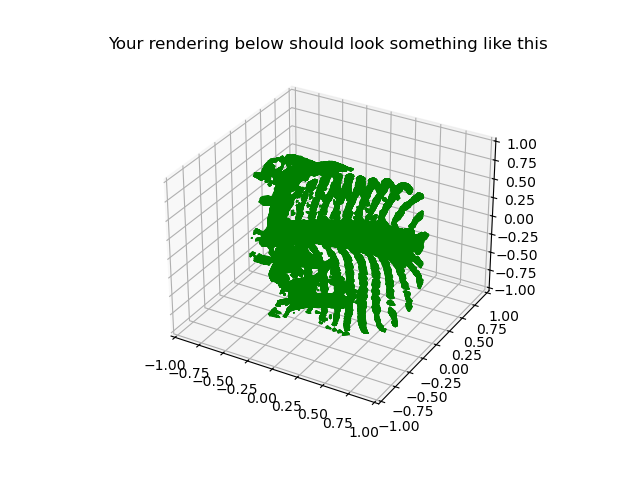

In [729]:
# show with matplotlib
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
mesh = Poly3DCollection(verts[faces],color='g')
ax.add_collection3d(mesh)
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
ax.set_zlim(-1,1)
ax.set_title('Your rendering below should look something like this')

Text(0.5, 1.0, 'Skeleton rendered using our function')

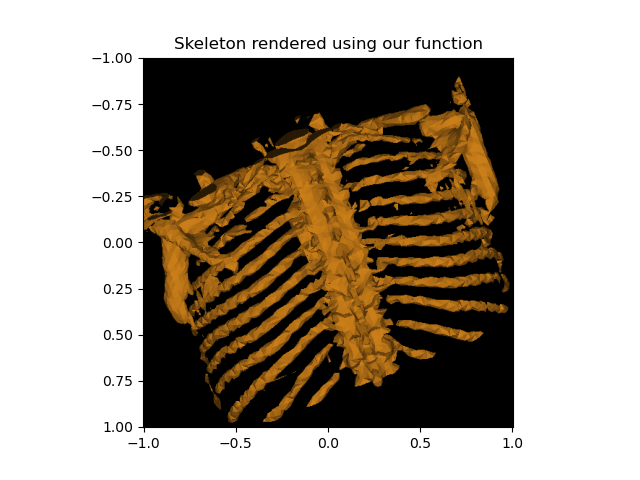

In [730]:
# def draw_surface(n,v,f,theta0,theta1,theta2,c,direction,ambient_strength,diffuse_strength):
I = draw_surface(512, verts, faces, np.pi/2, np.pi/8, np.pi/8, np.array([.8,.5,.1]), np.array([0,0,.5]), .2, .8)
fig,ax = plt.subplots()
ax.imshow(I,extent=extent)
ax.set_title('Skeleton rendered using our function')

Text(0.5, 1.0, '1 ambient, 0 diffuse')

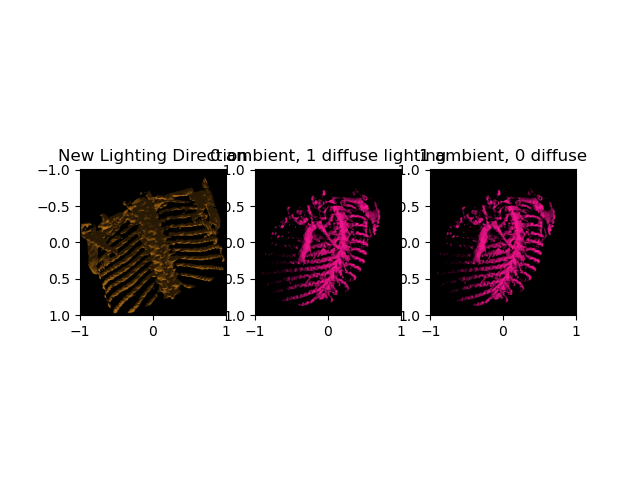

In [731]:
# more renderings below
I0 = draw_surface(512, verts, faces, np.pi/2, np.pi/8, np.pi/8, np.array([.8,.5,.1]), np.array([.2,0,0]), .2, .8)
I1 = draw_surface(512, verts, faces, np.pi/8, np.pi/8, -np.pi/8, np.array([1,20/255,147/255]), np.array([0,.5,.3]), 0, 1)
I2 = draw_surface(512, verts, faces, np.pi/8, np.pi/8, -np.pi/8, np.array([1,20/255,147/255]), np.array([0,.5,.3]), 1, 0)


fig,(ax0, ax1, ax2) = plt.subplots(1,3)
ax0.imshow(I0,extent=extent)
ax0.set_title('New Lighting Direction')
ax1.imshow(I1, extent=extent)
ax1.set_title('0 ambient, 1 diffuse lighting')
ax2.imshow(I1, extent=extent)
ax2.set_title('1 ambient, 0 diffuse')

## Chapter 2: Medical imaging modalities

We will not dwell much on the physics of medical imaging modalities, the material was presented simply for your interest and to build intuition.   But there is an important concept we will review in this homework.

### Part 2.1: Signal difference to noise ratio

The idea of "signal to noise ratio", or "signal difference to noise ratio" is critical for understanding image quality, as well as many applications in machine learning.

In order to recognize an object on a noisy background, it has to be significantly brighter (or darker) than the background.  "Significantly" here refers to the amount of noise in the background.

Signal difference to noise ratio is usually defined as the mean signal in the foreground, minus the mean signal in the background, divided by the common standard deviation.  

The common standard deviation is found by taking the average of the variances, and then taking a square root.

#### Problem 2.1.1: Images with different signal to noise ratios

Draw an image with the value 0 in the background.

Add a gaussian blob with a specified signal difference as the foreground.  This could represent a nodule or lesion we are trying to detect.

Add zero mean independent Gaussian noise to each pixel, with a specified standard deviation.

Produce figures illustrating a signal difference to noise ratio of 1,2,3,5,10.  Make sure these are saved in different cells in the notebook.

Comment on what value of SDNR makes the nodule easy or hard to spot


For one case, show how the same SDNR results from either adjusting the noise, or adjusting the signal difference.


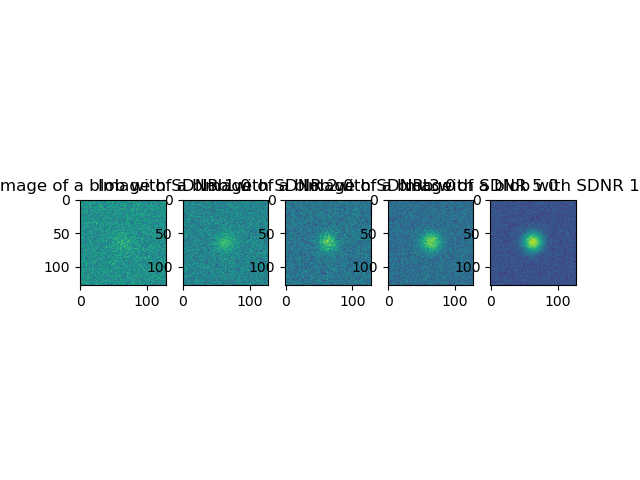

In [732]:
n = 128
x = np.arange(n) - (n-1)/2
X = np.meshgrid(x,x,indexing='ij')

width = 10
blob = np.exp(-(X[0]**2 + X[1]**2)/2/width**2)

bg_value = 0.0
signal_difference_value = 1.0
noise_std = 1.0
sdnr = [1.0, 2.0, 3.0, 5.0, 10.0]
fig,axs = plt.subplots(1,5)
for i in range(5):

    I = bg_value + blob*sdnr[i] + np.random.randn(X[0].shape[0],X[0].shape[1])*noise_std
    axs[i].imshow(I)
    axs[i].set_title(f'Image of a blob with SDNR {sdnr[i]/noise_std}')

I think by SDNR of 3.0, it is pretty clear that a nodule is being looked at, but only by 5.0 is it really clear what the shape and boundries of it are.

### Part 2.2:  Signal to noise ratio in radiography
In radiography the issue of SDNR is particularly important, because it can only be improved by adding more radiation exposure.

Since x ray imaging is based on counting photons, the noise in an image follows a poisson distribution (https://en.wikipedia.org/wiki/Poisson_distribution).

In this distribution the variance is equal to the mean.  This means the signal to noise ratio grows like the square root of the mean.  More photons means a bigger mean signal, and therefore a bigger signal to noise ratio.

Imagine your body is a 10cm thick slab of material, with linear attenuation coefficient of 0.1 per centimeter.

Imagine that in the middle of your body is a 1cm thick abnormality, with linear attenuation coffcient of 0.2 per centimeter.


#### Problem 2.2.1
If $N$ photons per pixel are incident on your body away from the abnormality, how many photons on average reach the detector pixel?


Let $N_D$ be the average number of photons that reach the detector pixel

$N_D = N*e^{-(0.1*10)}$ \
$N_D=N*e^{-1}$

#### Problem 2.2.2
If $N$ photons per pixel are incident on your body at the abnormality, how many photons on average reach the detector pixel?


$N_D = N*e^{-(0.1*4.5)}*e^{-(0.2*1)}*e^{-(0.1*4.5)}$\
$N_D = N*e^{-1.1}$

#### Problem 2.2.3

How many photons per pixel are required to produce a signal differnce to noise ratio of 5?

As stated above, the variance is equal to the mean, so the signal to noise ratio grows like the squareroot of the mean

In order to have a SDNR of 5, we must have a mean number of photons of $\underline{25}$

## Paper review

#### Problem P.1.1

Briefly describe the goal of the image analysis task presented in this paper.

The goal of the paper is to explore the viability of VR as a tool to correct imperfect MRI segmentations.

#### Problem P.1.2

Briefly describe why virtual reality was used for this task

VR was chosen because of its inharent ability to allow users to view data in 3 dimensions, allowing the user to both more naturally manipuluate the image and "move" through it, as well as gain a better understanding for the data itself. VR was also found to cause fewer distractions, as the user is fully immersed in the task.

#### Problem P.1.3
Briefly descsribe what user would do in the standard setting, or in the virtual reality setting.

In a standard 2D setting, the user needs to essentially look through the MRI slice by slice to verify the segmentation of each slice. In 3D, the user can see multiple slices at once, and can understand the relationship between them as they are set in space infront of them.

#### Problem P.1.4

Briefly summarize the results that demonstrated why virtual reality was useful for this task.

Using VR was significantly faster than the 2D method as measured by the researchers. Additionally, corrections were more accurate, though an exact amount wasn't calculated.Finally, all participants preferred using VR, whether because it was more engaging, or because it made the process more intuitive and easier to do.